In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Polygon, MultiPolygon
from netCDF4 import Dataset
from grid import *
from dep import *

In [2]:
import folium

In [3]:
%matplotlib notebook

In [4]:
def collec_to_gdf(collec_poly):
    """Transform a `matplotlib.contour.QuadContourSet` to a GeoDataFrame"""
    polygons, colors = [], []
    for i, polygon in enumerate(collec_poly.collections):
        mpoly = []
        for path in polygon.get_paths():
            try:
                path.should_simplify = False
                poly = path.to_polygons()
                # Each polygon should contain an exterior ring + maybe hole(s):
                exterior, holes = [], []
                if len(poly) > 0 and len(poly[0]) > 3:
                    # The first of the list is the exterior ring :
                    exterior = poly[0]
                    # Other(s) are hole(s):
                    if len(poly) > 1:
                        holes = [h for h in poly[1:] if len(h) > 3]
                mpoly.append(Polygon(exterior, holes))
            except:
                print('Warning: Geometry error when making polygon #{}'
                      .format(i))
        if len(mpoly) > 1:
            mpoly = MultiPolygon(mpoly)
            polygons.append(mpoly)
            colors.append(polygon.get_facecolor().tolist()[0])
        elif len(mpoly) == 1:
            polygons.append(mpoly[0])
            colors.append(polygon.get_facecolor().tolist()[0])
    return GeoDataFrame(
        geometry=polygons,
        data={'RGBA': colors},
        crs={'init': 'epsg:4326'})




In [5]:
data = Dataset('/mnt/rmdisk/HERMINE/2016/9/1/00/trim-med.nc')

In [6]:
x = data['XCOR'][:]
y = data['YCOR'][:]
z = data['S1'][-1,:,:]

In [7]:
grd=Grid.fromfile('/mnt/rmdisk/HERMINE/2016/9/1/00/med.grd')

In [8]:
v=Dep.read('/mnt/rmdisk/HERMINE/2016/9/1/00/med.dep', grd.shape)
bth=v.val[:,:].T

In [9]:
zi=np.ma.masked_where(z,np.isfinite(bth))

<IPython.core.display.Javascript object>


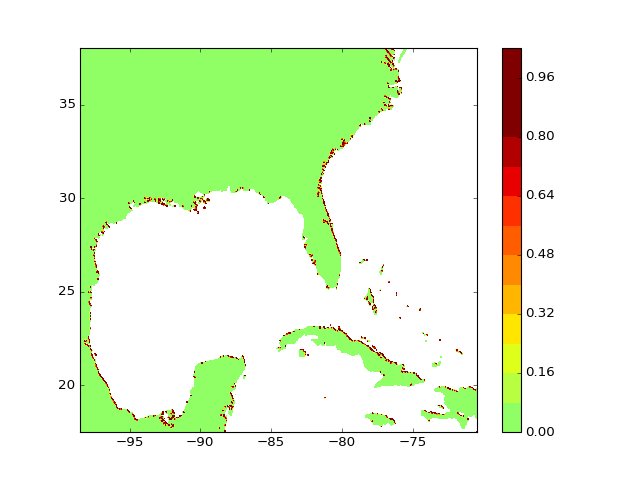

In [10]:


nb_class = 15 # Set the number of class for contour creation
# The class can also be defined by their limits like [0, 122, 333]
collec_poly = plt.contourf(
    x, y, zi, nb_class, vmax=abs(z).max(), vmin=-abs(z).max())

plt.colorbar()

In [23]:
gdf = collec_to_gdf(collec_poly)

In [24]:
gdf.head()

RGBA  \
0   [0.566097406705, 1.0, 0.401644528779, 1.0]   
1   [0.717900063251, 1.0, 0.249841872233, 1.0]   
2  [0.869702719798, 1.0, 0.0980392156863, 1.0]   
3              [1.0, 0.901234567901, 0.0, 1.0]   
4              [1.0, 0.712418300654, 0.0, 1.0]   

                                            geometry  
0  (POLYGON ((-98.5 17.54108238220215, -98.5 17.5...  
1  (POLYGON ((-98.20932403564453 22.3887767791748...  
2  (POLYGON ((-98.20603973388673 22.3887767791748...  
3  (POLYGON ((-98.20275543212891 22.3887767791748...  
4  (POLYGON ((-98.19947113037109 22.3887767791748...

In [21]:
over=gdf.to_json()
# Output your collection of features as a GeoJSON:
# '{"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[51.563214073747474,
# (...)


In [17]:
m=folium.Map(location=[y.mean(),x.mean()],tiles='Stamen Terrain', zoom_start=4)

In [18]:
m

In [45]:
m.choropleth(geo_path=gdf.to_json())

IOError: [Errno 36] File name too long: '{"type": "FeatureCollection", "features": [{"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.5, 17.54108238220215], [-98.5, 17.582164764404297], [-98.5, 17.623247146606445], [-98.5, 17.664329528808594], [-98.5, 17.70541000366211], [-98.5, 17.746492385864258], [-98.5, 17.787574768066406], [-98.5, 17.828657150268555], [-98.5, 17.869739532470703], [-98.5, 17.91082191467285], [-98.5, 17.951904296875], [-98.5, 17.99298667907715], [-98.5, 18.034067153930664], [-98.5, 18.075149536132812], [-98.5, 18.11623191833496], [-98.5, 18.15731430053711], [-98.5, 18.198396682739258], [-98.5, 18.239479064941406], [-98.5, 18.280561447143555], [-98.5, 18.321643829345703], [-98.5, 18.36272621154785], [-98.5, 18.403806686401367], [-98.5, 18.444889068603516], [-98.5, 18.485971450805664], [-98.5, 18.527053833007812], [-98.5, 18.56813621520996], [-98.5, 18.60921859741211], [-98.5, 18.650300979614258], [-98.5, 18.691383361816406], [-98.5, 18.732465744018555], [-98.5, 18.77354621887207], [-98.5, 18.81462860107422], [-98.5, 18.855710983276367], [-98.5, 18.896793365478516], [-98.5, 18.937875747680664], [-98.5, 18.978958129882812], [-98.5, 19.02004051208496], [-98.5, 19.06112289428711], [-98.5, 19.102205276489258], [-98.5, 19.143285751342773], [-98.5, 19.184368133544922], [-98.5, 19.22545051574707], [-98.5, 19.26653289794922], [-98.5, 19.307615280151367], [-98.5, 19.348697662353516], [-98.5, 19.389780044555664], [-98.5, 19.430862426757812], [-98.5, 19.47194480895996], [-98.5, 19.513025283813477], [-98.5, 19.554107666015625], [-98.5, 19.595190048217773], [-98.5, 19.636272430419922], [-98.5, 19.67735481262207], [-98.5, 19.71843719482422], [-98.5, 19.759519577026367], [-98.5, 19.800601959228516], [-98.5, 19.841684341430664], [-98.5, 19.88276481628418], [-98.5, 19.923847198486328], [-98.5, 19.964929580688477], [-98.5, 20.006011962890625], [-98.5, 20.047094345092773], [-98.5, 20.088176727294922], [-98.5, 20.12925910949707], [-98.5, 20.17034149169922], [-98.5, 20.211421966552734], [-98.5, 20.252504348754883], [-98.5, 20.29358673095703], [-98.5, 20.33466911315918], [-98.5, 20.375751495361328], [-98.5, 20.416833877563477], [-98.5, 20.457916259765625], [-98.5, 20.498998641967773], [-98.5, 20.540081024169922], [-98.5, 20.581161499023438], [-98.5, 20.622243881225586], [-98.5, 20.663326263427734], [-98.5, 20.704408645629883], [-98.5, 20.74549102783203], [-98.5, 20.78657341003418], [-98.5, 20.827655792236328], [-98.5, 20.868738174438477], [-98.5, 20.909818649291992], [-98.5, 20.95090103149414], [-98.5, 20.99198341369629], [-98.5, 21.033065795898438], [-98.5, 21.074148178100586], [-98.5, 21.115230560302734], [-98.5, 21.156312942504883], [-98.5, 21.19739532470703], [-98.5, 21.23847770690918], [-98.5, 21.279558181762695], [-98.5, 21.320640563964844], [-98.5, 21.361722946166992], [-98.5, 21.40280532836914], [-98.5, 21.44388771057129], [-98.5, 21.484970092773438], [-98.5, 21.526052474975586], [-98.5, 21.567134857177734], [-98.5, 21.608217239379883], [-98.5, 21.6492977142334], [-98.5, 21.690380096435547], [-98.5, 21.731462478637695], [-98.5, 21.772544860839844], [-98.5, 21.813627243041992], [-98.5, 21.85470962524414], [-98.5, 21.89579200744629], [-98.5, 21.936874389648438], [-98.5, 21.977956771850586], [-98.5, 22.0190372467041], [-98.5, 22.06011962890625], [-98.5, 22.1012020111084], [-98.5, 22.142284393310547], [-98.5, 22.183366775512695], [-98.5, 22.224449157714844], [-98.5, 22.265531539916992], [-98.5, 22.30661392211914], [-98.5, 22.34769630432129], [-98.5, 22.388776779174805], [-98.5, 22.429859161376953], [-98.5, 22.4709415435791], [-98.5, 22.51202392578125], [-98.5, 22.5531063079834], [-98.5, 22.594188690185547], [-98.5, 22.635271072387695], [-98.5, 22.676353454589844], [-98.5, 22.717435836791992], [-98.5, 22.758516311645508], [-98.5, 22.799598693847656], [-98.5, 22.840681076049805], [-98.5, 22.881763458251953], [-98.5, 22.9228458404541], [-98.5, 22.96392822265625], [-98.5, 23.0050106048584], [-98.5, 23.046092987060547], [-98.5, 23.087173461914062], [-98.5, 23.12825584411621], [-98.5, 23.16933822631836], [-98.5, 23.210420608520508], [-98.5, 23.251502990722656], [-98.5, 23.292585372924805], [-98.5, 23.333667755126953], [-98.5, 23.3747501373291], [-98.5, 23.41583251953125], [-98.5, 23.456912994384766], [-98.5, 23.497995376586914], [-98.5, 23.539077758789062], [-98.5, 23.58016014099121], [-98.5, 23.62124252319336], [-98.5, 23.662324905395508], [-98.5, 23.703407287597656], [-98.5, 23.744489669799805], [-98.5, 23.785572052001953], [-98.5, 23.82665252685547], [-98.5, 23.867734909057617], [-98.5, 23.908817291259766], [-98.5, 23.949899673461914], [-98.5, 23.990982055664062], [-98.5, 24.03206443786621], [-98.5, 24.07314682006836], [-98.5, 24.114229202270508], [-98.5, 24.155309677124023], [-98.5, 24.196392059326172], [-98.5, 24.23747444152832], [-98.5, 24.27855682373047], [-98.5, 24.319639205932617], [-98.5, 24.360721588134766], [-98.5, 24.401803970336914], [-98.5, 24.442886352539062], [-98.5, 24.48396873474121], [-98.5, 24.525049209594727], [-98.5, 24.566131591796875], [-98.5, 24.607213973999023], [-98.5, 24.648296356201172], [-98.5, 24.68937873840332], [-98.5, 24.73046112060547], [-98.5, 24.771543502807617], [-98.5, 24.812625885009766], [-98.5, 24.853708267211914], [-98.5, 24.89478874206543], [-98.5, 24.935871124267578], [-98.5, 24.976953506469727], [-98.5, 25.018035888671875], [-98.5, 25.059118270874023], [-98.5, 25.100200653076172], [-98.5, 25.14128303527832], [-98.5, 25.18236541748047], [-98.5, 25.223447799682617], [-98.5, 25.264528274536133], [-98.5, 25.30561065673828], [-98.5, 25.34669303894043], [-98.5, 25.387775421142578], [-98.5, 25.428857803344727], [-98.5, 25.469940185546875], [-98.5, 25.511022567749023], [-98.5, 25.552104949951172], [-98.5, 25.59318733215332], [-98.5, 25.634267807006836], [-98.5, 25.675350189208984], [-98.5, 25.716432571411133], [-98.5, 25.75751495361328], [-98.5, 25.79859733581543], [-98.5, 25.839679718017578], [-98.5, 25.880762100219727], [-98.5, 25.921844482421875], [-98.5, 25.96292495727539], [-98.5, 26.00400733947754], [-98.5, 26.045089721679688], [-98.5, 26.086172103881836], [-98.5, 26.127254486083984], [-98.5, 26.168336868286133], [-98.5, 26.20941925048828], [-98.5, 26.25050163269043], [-98.5, 26.291584014892578], [-98.5, 26.332664489746094], [-98.5, 26.373746871948242], [-98.5, 26.41482925415039], [-98.5, 26.45591163635254], [-98.5, 26.496994018554688], [-98.5, 26.538076400756836], [-98.5, 26.579158782958984], [-98.5, 26.620241165161133], [-98.5, 26.66132354736328], [-98.5, 26.702404022216797], [-98.5, 26.743486404418945], [-98.5, 26.784568786621094], [-98.5, 26.825651168823242], [-98.5, 26.86673355102539], [-98.5, 26.90781593322754], [-98.5, 26.948898315429688], [-98.5, 26.989980697631836], [-98.5, 27.03106117248535], [-98.5, 27.0721435546875], [-98.5, 27.11322593688965], [-98.5, 27.154308319091797], [-98.5, 27.195390701293945], [-98.5, 27.236473083496094], [-98.5, 27.277555465698242], [-98.5, 27.31863784790039], [-98.5, 27.35972023010254], [-98.5, 27.400800704956055], [-98.5, 27.441883087158203], [-98.5, 27.48296546936035], [-98.5, 27.5240478515625], [-98.5, 27.56513023376465], [-98.5, 27.606212615966797], [-98.5, 27.647294998168945], [-98.5, 27.688377380371094], [-98.5, 27.729459762573242], [-98.5, 27.770540237426758], [-98.5, 27.811622619628906], [-98.5, 27.852705001831055], [-98.5, 27.893787384033203], [-98.5, 27.93486976623535], [-98.5, 27.9759521484375], [-98.5, 28.01703453063965], [-98.5, 28.058116912841797], [-98.5, 28.099199295043945], [-98.5, 28.14027976989746], [-98.5, 28.18136215209961], [-98.5, 28.222444534301758], [-98.5, 28.263526916503906], [-98.5, 28.304609298706055], [-98.5, 28.345691680908203], [-98.5, 28.38677406311035], [-98.5, 28.4278564453125], [-98.5, 28.46893882751465], [-98.5, 28.510019302368164], [-98.5, 28.551101684570312], [-98.5, 28.59218406677246], [-98.5, 28.63326644897461], [-98.5, 28.674348831176758], [-98.5, 28.715431213378906], [-98.5, 28.756513595581055], [-98.5, 28.797595977783203], [-98.5, 28.83867645263672], [-98.5, 28.879758834838867], [-98.5, 28.920841217041016], [-98.5, 28.961923599243164], [-98.5, 29.003005981445312], [-98.5, 29.04408836364746], [-98.5, 29.08517074584961], [-98.5, 29.126253128051758], [-98.5, 29.167335510253906], [-98.5, 29.208415985107422], [-98.5, 29.24949836730957], [-98.5, 29.29058074951172], [-98.5, 29.331663131713867], [-98.5, 29.372745513916016], [-98.5, 29.413827896118164], [-98.5, 29.454910278320312], [-98.5, 29.49599266052246], [-98.5, 29.53707504272461], [-98.5, 29.578155517578125], [-98.5, 29.619237899780273], [-98.5, 29.660320281982422], [-98.5, 29.70140266418457], [-98.5, 29.74248504638672], [-98.5, 29.783567428588867], [-98.5, 29.824649810791016], [-98.5, 29.865732192993164], [-98.5, 29.90681266784668], [-98.5, 29.947895050048828], [-98.5, 29.988977432250977], [-98.5, 30.030059814453125], [-98.5, 30.071142196655273], [-98.5, 30.112224578857422], [-98.5, 30.15330696105957], [-98.5, 30.19438934326172], [-98.5, 30.235471725463867], [-98.5, 30.276552200317383], [-98.5, 30.31763458251953], [-98.5, 30.35871696472168], [-98.5, 30.399799346923828], [-98.5, 30.440881729125977], [-98.5, 30.481964111328125], [-98.5, 30.523046493530273], [-98.5, 30.564128875732422], [-98.5, 30.60521125793457], [-98.5, 30.646291732788086], [-98.5, 30.687374114990234], [-98.5, 30.728456497192383], [-98.5, 30.76953887939453], [-98.5, 30.81062126159668], [-98.5, 30.851703643798828], [-98.5, 30.892786026000977], [-98.5, 30.933868408203125], [-98.5, 30.974950790405273], [-98.5, 31.01603126525879], [-98.5, 31.057113647460938], [-98.5, 31.098196029663086], [-98.5, 31.139278411865234], [-98.5, 31.180360794067383], [-98.5, 31.22144317626953], [-98.5, 31.26252555847168], [-98.5, 31.303607940673828], [-98.5, 31.344690322875977], [-98.5, 31.385770797729492], [-98.5, 31.42685317993164], [-98.5, 31.46793556213379], [-98.5, 31.509017944335938], [-98.5, 31.550100326538086], [-98.5, 31.591182708740234], [-98.5, 31.632265090942383], [-98.5, 31.67334747314453], [-98.5, 31.714427947998047], [-98.5, 31.755510330200195], [-98.5, 31.796592712402344], [-98.5, 31.837675094604492], [-98.5, 31.87875747680664], [-98.5, 31.91983985900879], [-98.5, 31.960922241210938], [-98.5, 32.00200271606445], [-98.5, 32.043087005615234], [-98.5, 32.08416748046875], [-98.5, 32.12525177001953], [-98.5, 32.16633224487305], [-98.5, 32.20741653442383], [-98.5, 32.248497009277344], [-98.5, 32.28957748413086], [-98.5, 32.33066177368164], [-98.5, 32.371742248535156], [-98.5, 32.41282653808594], [-98.5, 32.45390701293945], [-98.5, 32.494991302490234], [-98.5, 32.53607177734375], [-98.5, 32.57715606689453], [-98.5, 32.61823654174805], [-98.5, 32.65931701660156], [-98.5, 32.700401306152344], [-98.5, 32.74148178100586], [-98.5, 32.78256607055664], [-98.5, 32.823646545410156], [-98.5, 32.86473083496094], [-98.5, 32.90581130981445], [-98.5, 32.946895599365234], [-98.5, 32.98797607421875], [-98.5, 33.029056549072266], [-98.5, 33.07014083862305], [-98.5, 33.11122131347656], [-98.5, 33.152305603027344], [-98.5, 33.19338607788086], [-98.5, 33.23447036743164], [-98.5, 33.275550842285156], [-98.5, 33.31663513183594], [-98.5, 33.35771560668945], [-98.5, 33.39879608154297], [-98.5, 33.43988037109375], [-98.5, 33.480960845947266], [-98.5, 33.52204513549805], [-98.5, 33.56312561035156], [-98.5, 33.604209899902344], [-98.5, 33.64529037475586], [-98.5, 33.686370849609375], [-98.5, 33.727455139160156], [-98.5, 33.76853561401367], [-98.5, 33.80961990356445], [-98.5, 33.85070037841797], [-98.5, 33.89178466796875], [-98.5, 33.932865142822266], [-98.5, 33.97394943237305], [-98.5, 34.01502990722656], [-98.5, 34.05611038208008], [-98.5, 34.09719467163086], [-98.5, 34.138275146484375], [-98.5, 34.179359436035156], [-98.5, 34.22043991088867], [-98.5, 34.26152420043945], [-98.5, 34.30260467529297], [-98.5, 34.34368896484375], [-98.5, 34.384769439697266], [-98.5, 34.42584991455078], [-98.5, 34.46693420410156], [-98.5, 34.50801467895508], [-98.5, 34.54909896850586], [-98.5, 34.590179443359375], [-98.5, 34.631263732910156], [-98.5, 34.67234420776367], [-98.5, 34.71342849731445], [-98.5, 34.75450897216797], [-98.5, 34.795589447021484], [-98.5, 34.836673736572266], [-98.5, 34.87775421142578], [-98.5, 34.91883850097656], [-98.5, 34.95991897583008], [-98.5, 35.00100326538086], [-98.5, 35.042083740234375], [-98.5, 35.083168029785156], [-98.5, 35.12424850463867], [-98.5, 35.16532897949219], [-98.5, 35.20641326904297], [-98.5, 35.247493743896484], [-98.5, 35.288578033447266], [-98.5, 35.32965850830078], [-98.5, 35.37074279785156], [-98.5, 35.41182327270508], [-98.5, 35.45290756225586], [-98.5, 35.493988037109375], [-98.5, 35.53506851196289], [-98.5, 35.57615280151367], [-98.5, 35.61723327636719], [-98.5, 35.65831756591797], [-98.5, 35.699398040771484], [-98.5, 35.740482330322266], [-98.5, 35.78156280517578], [-98.5, 35.82264709472656], [-98.5, 35.86372756958008], [-98.5, 35.904808044433594], [-98.5, 35.945892333984375], [-98.5, 35.98697280883789], [-98.5, 36.02805709838867], [-98.5, 36.06913757324219], [-98.5, 36.11022186279297], [-98.5, 36.151302337646484], [-98.5, 36.192386627197266], [-98.5, 36.23346710205078], [-98.5, 36.2745475769043], [-98.5, 36.31563186645508], [-98.5, 36.356712341308594], [-98.5, 36.397796630859375], [-98.5, 36.43887710571289], [-98.5, 36.47996139526367], [-98.5, 36.52104187011719], [-98.5, 36.5621223449707], [-98.5, 36.603206634521484], [-98.5, 36.644287109375], [-98.5, 36.68537139892578], [-98.5, 36.7264518737793], [-98.5, 36.76753616333008], [-98.5, 36.808616638183594], [-98.5, 36.849700927734375], [-98.5, 36.89078140258789], [-98.5, 36.931861877441406], [-98.5, 36.97294616699219], [-98.5, 37.0140266418457], [-98.5, 37.055110931396484], [-98.5, 37.09619140625], [-98.5, 37.13727569580078], [-98.5, 37.1783561706543], [-98.5, 37.21944046020508], [-98.5, 37.260520935058594], [-98.5, 37.30160140991211], [-98.5, 37.34268569946289], [-98.5, 37.383766174316406], [-98.5, 37.42485046386719], [-98.5, 37.4659309387207], [-98.5, 37.507015228271484], [-98.5, 37.548095703125], [-98.5, 37.58917999267578], [-98.5, 37.6302604675293], [-98.5, 37.67134094238281], [-98.5, 37.712425231933594], [-98.5, 37.75350570678711], [-98.5, 37.79458999633789], [-98.5, 37.835670471191406], [-98.5, 37.87675476074219], [-98.5, 37.9178352355957], [-98.5, 37.958919525146484], [-98.5, 38.0], [-98.5, 38.041080474853516], [-98.45894622802734, 38.041080474853516], [-98.41788482666016, 38.041080474853516], [-98.3768310546875, 38.041080474853516], [-98.33577728271484, 38.041080474853516], [-98.29472351074219, 38.041080474853516], [-98.253662109375, 38.041080474853516], [-98.21260833740234, 38.041080474853516], [-98.17155456542969, 38.041080474853516], [-98.13050079345703, 38.041080474853516], [-98.08943939208984, 38.041080474853516], [-98.04838562011719, 38.041080474853516], [-98.00733184814453, 38.041080474853516], [-97.96627807617188, 38.041080474853516], [-97.92521667480469, 38.041080474853516], [-97.88416290283203, 38.041080474853516], [-97.84310913085938, 38.041080474853516], [-97.80205535888672, 38.041080474853516], [-97.76099395751953, 38.041080474853516], [-97.71994018554688, 38.041080474853516], [-97.67888641357422, 38.041080474853516], [-97.63783264160156, 38.041080474853516], [-97.59677124023438, 38.041080474853516], [-97.55571746826172, 38.041080474853516], [-97.51466369628906, 38.041080474853516], [-97.4736099243164, 38.041080474853516], [-97.43254852294922, 38.041080474853516], [-97.39149475097656, 38.041080474853516], [-97.3504409790039, 38.041080474853516], [-97.30938720703125, 38.041080474853516], [-97.26832580566406, 38.041080474853516], [-97.2272720336914, 38.041080474853516], [-97.18621826171875, 38.041080474853516], [-97.1451644897461, 38.041080474853516], [-97.1041030883789, 38.041080474853516], [-97.06304931640625, 38.041080474853516], [-97.0219955444336, 38.041080474853516], [-96.98094177246094, 38.041080474853516], [-96.93988037109375, 38.041080474853516], [-96.8988265991211, 38.041080474853516], [-96.85777282714844, 38.041080474853516], [-96.81671905517578, 38.041080474853516], [-96.7756576538086, 38.041080474853516], [-96.73460388183594, 38.041080474853516], [-96.69355010986328, 38.041080474853516], [-96.65249633789062, 38.041080474853516], [-96.61143493652344, 38.041080474853516], [-96.57038116455078, 38.041080474853516], [-96.52932739257812, 38.041080474853516], [-96.48826599121094, 38.041080474853516], [-96.44721221923828, 38.041080474853516], [-96.40615844726562, 38.041080474853516], [-96.36510467529297, 38.041080474853516], [-96.32404327392578, 38.041080474853516], [-96.28298950195312, 38.041080474853516], [-96.24193572998047, 38.041080474853516], [-96.20088195800781, 38.041080474853516], [-96.15982055664062, 38.041080474853516], [-96.11876678466797, 38.041080474853516], [-96.07771301269531, 38.041080474853516], [-96.03665924072266, 38.041080474853516], [-95.99559783935547, 38.041080474853516], [-95.95454406738281, 38.041080474853516], [-95.91349029541016, 38.041080474853516], [-95.8724365234375, 38.041080474853516], [-95.83137512207031, 38.041080474853516], [-95.79032135009766, 38.041080474853516], [-95.749267578125, 38.041080474853516], [-95.70821380615234, 38.041080474853516], [-95.66715240478516, 38.041080474853516], [-95.6260986328125, 38.041080474853516], [-95.58504486083984, 38.041080474853516], [-95.54399108886719, 38.041080474853516], [-95.5029296875, 38.041080474853516], [-95.46187591552734, 38.041080474853516], [-95.42082214355469, 38.041080474853516], [-95.37976837158203, 38.041080474853516], [-95.33870697021484, 38.041080474853516], [-95.29765319824219, 38.041080474853516], [-95.25659942626953, 38.041080474853516], [-95.21554565429688, 38.041080474853516], [-95.17448425292969, 38.041080474853516], [-95.13343048095703, 38.041080474853516], [-95.09237670898438, 38.041080474853516], [-95.05132293701172, 38.041080474853516], [-95.01026153564453, 38.041080474853516], [-94.96920776367188, 38.041080474853516], [-94.92815399169922, 38.041080474853516], [-94.88710021972656, 38.041080474853516], [-94.84603881835938, 38.041080474853516], [-94.80498504638672, 38.041080474853516], [-94.76393127441406, 38.041080474853516], [-94.7228775024414, 38.041080474853516], [-94.68181610107422, 38.041080474853516], [-94.64076232910156, 38.041080474853516], [-94.5997085571289, 38.041080474853516], [-94.55865478515625, 38.041080474853516], [-94.51759338378906, 38.041080474853516], [-94.4765396118164, 38.041080474853516], [-94.43548583984375, 38.041080474853516], [-94.39442443847656, 38.041080474853516], [-94.3533706665039, 38.041080474853516], [-94.31231689453125, 38.041080474853516], [-94.2712631225586, 38.041080474853516], [-94.2302017211914, 38.041080474853516], [-94.18914794921875, 38.041080474853516], [-94.1480941772461, 38.041080474853516], [-94.10704040527344, 38.041080474853516], [-94.06597900390625, 38.041080474853516], [-94.0249252319336, 38.041080474853516], [-93.98387145996094, 38.041080474853516], [-93.94281768798828, 38.041080474853516], [-93.9017562866211, 38.041080474853516], [-93.86070251464844, 38.041080474853516], [-93.81964874267578, 38.041080474853516], [-93.77859497070312, 38.041080474853516], [-93.73753356933594, 38.041080474853516], [-93.69647979736328, 38.041080474853516], [-93.65542602539062, 38.041080474853516], [-93.61437225341797, 38.041080474853516], [-93.57331085205078, 38.041080474853516], [-93.53225708007812, 38.041080474853516], [-93.49120330810547, 38.041080474853516], [-93.45014953613281, 38.041080474853516], [-93.40908813476562, 38.041080474853516], [-93.36803436279297, 38.041080474853516], [-93.32698059082031, 38.041080474853516], [-93.28592681884766, 38.041080474853516], [-93.24486541748047, 38.041080474853516], [-93.20381164550781, 38.041080474853516], [-93.16275787353516, 38.041080474853516], [-93.1217041015625, 38.041080474853516], [-93.08064270019531, 38.041080474853516], [-93.03958892822266, 38.041080474853516], [-92.99853515625, 38.041080474853516], [-92.95748138427734, 38.041080474853516], [-92.91641998291016, 38.041080474853516], [-92.8753662109375, 38.041080474853516], [-92.83431243896484, 38.041080474853516], [-92.79325866699219, 38.041080474853516], [-92.752197265625, 38.041080474853516], [-92.71114349365234, 38.041080474853516], [-92.67008972167969, 38.041080474853516], [-92.62903594970703, 38.041080474853516], [-92.58797454833984, 38.041080474853516], [-92.54692077636719, 38.041080474853516], [-92.50586700439453, 38.041080474853516], [-92.46480560302734, 38.041080474853516], [-92.42375183105469, 38.041080474853516], [-92.38269805908203, 38.041080474853516], [-92.34164428710938, 38.041080474853516], [-92.30058288574219, 38.041080474853516], [-92.25952911376953, 38.041080474853516], [-92.21847534179688, 38.041080474853516], [-92.17742156982422, 38.041080474853516], [-92.13636016845703, 38.041080474853516], [-92.09530639648438, 38.041080474853516], [-92.05425262451172, 38.041080474853516], [-92.01319885253906, 38.041080474853516], [-91.97213745117188, 38.041080474853516], [-91.93108367919922, 38.041080474853516], [-91.89002990722656, 38.041080474853516], [-91.8489761352539, 38.041080474853516], [-91.80791473388672, 38.041080474853516], [-91.76686096191406, 38.041080474853516], [-91.7258071899414, 38.041080474853516], [-91.68475341796875, 38.041080474853516], [-91.64369201660156, 38.041080474853516], [-91.6026382446289, 38.041080474853516], [-91.56158447265625, 38.041080474853516], [-91.5205307006836, 38.041080474853516], [-91.4794692993164, 38.041080474853516], [-91.43841552734375, 38.041080474853516], [-91.3973617553711, 38.041080474853516], [-91.35630798339844, 38.041080474853516], [-91.31524658203125, 38.041080474853516], [-91.2741928100586, 38.041080474853516], [-91.23313903808594, 38.041080474853516], [-91.19208526611328, 38.041080474853516], [-91.1510238647461, 38.041080474853516], [-91.10997009277344, 38.041080474853516], [-91.06891632080078, 38.041080474853516], [-91.02786254882812, 38.041080474853516], [-90.98680114746094, 38.041080474853516], [-90.94574737548828, 38.041080474853516], [-90.90469360351562, 38.041080474853516], [-90.86363983154297, 38.041080474853516], [-90.82257843017578, 38.041080474853516], [-90.78152465820312, 38.041080474853516], [-90.74047088623047, 38.041080474853516], [-90.69941711425781, 38.041080474853516], [-90.65835571289062, 38.041080474853516], [-90.61730194091797, 38.041080474853516], [-90.57624816894531, 38.041080474853516], [-90.53519439697266, 38.041080474853516], [-90.49413299560547, 38.041080474853516], [-90.45307922363281, 38.041080474853516], [-90.41202545166016, 38.041080474853516], [-90.37096405029297, 38.041080474853516], [-90.32991027832031, 38.041080474853516], [-90.28885650634766, 38.041080474853516], [-90.247802734375, 38.041080474853516], [-90.20674133300781, 38.041080474853516], [-90.16568756103516, 38.041080474853516], [-90.1246337890625, 38.041080474853516], [-90.08358001708984, 38.041080474853516], [-90.04251861572266, 38.041080474853516], [-90.00146484375, 38.041080474853516], [-89.96041107177734, 38.041080474853516], [-89.91935729980469, 38.041080474853516], [-89.8782958984375, 38.041080474853516], [-89.83724212646484, 38.041080474853516], [-89.79618835449219, 38.041080474853516], [-89.75513458251953, 38.041080474853516], [-89.71407318115234, 38.041080474853516], [-89.67301940917969, 38.041080474853516], [-89.63196563720703, 38.041080474853516], [-89.59091186523438, 38.041080474853516], [-89.54985046386719, 38.041080474853516], [-89.50879669189453, 38.041080474853516], [-89.46774291992188, 38.041080474853516], [-89.42668914794922, 38.041080474853516], [-89.38562774658203, 38.041080474853516], [-89.34457397460938, 38.041080474853516], [-89.30352020263672, 38.041080474853516], [-89.26246643066406, 38.041080474853516], [-89.22140502929688, 38.041080474853516], [-89.18035125732422, 38.041080474853516], [-89.13929748535156, 38.041080474853516], [-89.0982437133789, 38.041080474853516], [-89.05718231201172, 38.041080474853516], [-89.01612854003906, 38.041080474853516], [-88.9750747680664, 38.041080474853516], [-88.93402099609375, 38.041080474853516], [-88.89295959472656, 38.041080474853516], [-88.8519058227539, 38.041080474853516], [-88.81085205078125, 38.041080474853516], [-88.7697982788086, 38.041080474853516], [-88.7287368774414, 38.041080474853516], [-88.68768310546875, 38.041080474853516], [-88.6466293334961, 38.041080474853516], [-88.60557556152344, 38.041080474853516], [-88.56451416015625, 38.041080474853516], [-88.5234603881836, 38.041080474853516], [-88.48240661621094, 38.041080474853516], [-88.44134521484375, 38.041080474853516], [-88.4002914428711, 38.041080474853516], [-88.35923767089844, 38.041080474853516], [-88.31818389892578, 38.041080474853516], [-88.2771224975586, 38.041080474853516], [-88.23606872558594, 38.041080474853516], [-88.19501495361328, 38.041080474853516], [-88.15396118164062, 38.041080474853516], [-88.11289978027344, 38.041080474853516], [-88.07184600830078, 38.041080474853516], [-88.03079223632812, 38.041080474853516], [-87.98973846435547, 38.041080474853516], [-87.94867706298828, 38.041080474853516], [-87.90762329101562, 38.041080474853516], [-87.86656951904297, 38.041080474853516], [-87.82551574707031, 38.041080474853516], [-87.78445434570312, 38.041080474853516], [-87.74340057373047, 38.041080474853516], [-87.70234680175781, 38.041080474853516], [-87.66129302978516, 38.041080474853516], [-87.62023162841797, 38.041080474853516], [-87.57917785644531, 38.041080474853516], [-87.53812408447266, 38.041080474853516], [-87.4970703125, 38.041080474853516], [-87.45600891113281, 38.041080474853516], [-87.41495513916016, 38.041080474853516], [-87.3739013671875, 38.041080474853516], [-87.33284759521484, 38.041080474853516], [-87.29178619384766, 38.041080474853516], [-87.250732421875, 38.041080474853516], [-87.20967864990234, 38.041080474853516], [-87.16862487792969, 38.041080474853516], [-87.1275634765625, 38.041080474853516], [-87.08650970458984, 38.041080474853516], [-87.04545593261719, 38.041080474853516], [-87.00440216064453, 38.041080474853516], [-86.96334075927734, 38.041080474853516], [-86.92228698730469, 38.041080474853516], [-86.88123321533203, 38.041080474853516], [-86.84017944335938, 38.041080474853516], [-86.79911804199219, 38.041080474853516], [-86.75806427001953, 38.041080474853516], [-86.71701049804688, 38.041080474853516], [-86.67595672607422, 38.041080474853516], [-86.63489532470703, 38.041080474853516], [-86.59384155273438, 38.041080474853516], [-86.55278778076172, 38.041080474853516], [-86.51173400878906, 38.041080474853516], [-86.47067260742188, 38.041080474853516], [-86.42961883544922, 38.041080474853516], [-86.38856506347656, 38.041080474853516], [-86.34750366210938, 38.041080474853516], [-86.30644989013672, 38.041080474853516], [-86.26539611816406, 38.041080474853516], [-86.2243423461914, 38.041080474853516], [-86.18328094482422, 38.041080474853516], [-86.14222717285156, 38.041080474853516], [-86.1011734008789, 38.041080474853516], [-86.06011962890625, 38.041080474853516], [-86.01905822753906, 38.041080474853516], [-85.9780044555664, 38.041080474853516], [-85.93695068359375, 38.041080474853516], [-85.8958969116211, 38.041080474853516], [-85.8548355102539, 38.041080474853516], [-85.81378173828125, 38.041080474853516], [-85.7727279663086, 38.041080474853516], [-85.73167419433594, 38.041080474853516], [-85.69061279296875, 38.041080474853516], [-85.6495590209961, 38.041080474853516], [-85.60850524902344, 38.041080474853516], [-85.56745147705078, 38.041080474853516], [-85.5263900756836, 38.041080474853516], [-85.48533630371094, 38.041080474853516], [-85.44428253173828, 38.041080474853516], [-85.40322875976562, 38.041080474853516], [-85.36216735839844, 38.041080474853516], [-85.32111358642578, 38.041080474853516], [-85.28005981445312, 38.041080474853516], [-85.23900604248047, 38.041080474853516], [-85.19794464111328, 38.041080474853516], [-85.15689086914062, 38.041080474853516], [-85.11583709716797, 38.041080474853516], [-85.07478332519531, 38.041080474853516], [-85.03372192382812, 38.041080474853516], [-84.99266815185547, 38.041080474853516], [-84.95161437988281, 38.041080474853516], [-84.91056060791016, 38.041080474853516], [-84.86949920654297, 38.041080474853516], [-84.82844543457031, 38.041080474853516], [-84.78739166259766, 38.041080474853516], [-84.746337890625, 38.041080474853516], [-84.70527648925781, 38.041080474853516], [-84.66422271728516, 38.041080474853516], [-84.6231689453125, 38.041080474853516], [-84.58211517333984, 38.041080474853516], [-84.54105377197266, 38.041080474853516], [-84.5, 38.041080474853516], [-84.45894622802734, 38.041080474853516], [-84.41788482666016, 38.041080474853516], [-84.3768310546875, 38.041080474853516], [-84.33577728271484, 38.041080474853516], [-84.29472351074219, 38.041080474853516], [-84.253662109375, 38.041080474853516], [-84.21260833740234, 38.041080474853516], [-84.17155456542969, 38.041080474853516], [-84.13050079345703, 38.041080474853516], [-84.08943939208984, 38.041080474853516], [-84.04838562011719, 38.041080474853516], [-84.00733184814453, 38.041080474853516], [-83.96627807617188, 38.041080474853516], [-83.92521667480469, 38.041080474853516], [-83.88416290283203, 38.041080474853516], [-83.84310913085938, 38.041080474853516], [-83.80205535888672, 38.041080474853516], [-83.76099395751953, 38.041080474853516], [-83.71994018554688, 38.041080474853516], [-83.67888641357422, 38.041080474853516], [-83.63783264160156, 38.041080474853516], [-83.59677124023438, 38.041080474853516], [-83.55571746826172, 38.041080474853516], [-83.51466369628906, 38.041080474853516], [-83.4736099243164, 38.041080474853516], [-83.43254852294922, 38.041080474853516], [-83.39149475097656, 38.041080474853516], [-83.3504409790039, 38.041080474853516], [-83.30938720703125, 38.041080474853516], [-83.26832580566406, 38.041080474853516], [-83.2272720336914, 38.041080474853516], [-83.18621826171875, 38.041080474853516], [-83.1451644897461, 38.041080474853516], [-83.1041030883789, 38.041080474853516], [-83.06304931640625, 38.041080474853516], [-83.0219955444336, 38.041080474853516], [-82.98094177246094, 38.041080474853516], [-82.93988037109375, 38.041080474853516], [-82.8988265991211, 38.041080474853516], [-82.85777282714844, 38.041080474853516], [-82.81671905517578, 38.041080474853516], [-82.7756576538086, 38.041080474853516], [-82.73460388183594, 38.041080474853516], [-82.69355010986328, 38.041080474853516], [-82.65249633789062, 38.041080474853516], [-82.61143493652344, 38.041080474853516], [-82.57038116455078, 38.041080474853516], [-82.52932739257812, 38.041080474853516], [-82.48826599121094, 38.041080474853516], [-82.44721221923828, 38.041080474853516], [-82.40615844726562, 38.041080474853516], [-82.36510467529297, 38.041080474853516], [-82.32404327392578, 38.041080474853516], [-82.28298950195312, 38.041080474853516], [-82.24193572998047, 38.041080474853516], [-82.20088195800781, 38.041080474853516], [-82.15982055664062, 38.041080474853516], [-82.11876678466797, 38.041080474853516], [-82.07771301269531, 38.041080474853516], [-82.03665924072266, 38.041080474853516], [-81.99559783935547, 38.041080474853516], [-81.95454406738281, 38.041080474853516], [-81.91349029541016, 38.041080474853516], [-81.8724365234375, 38.041080474853516], [-81.83137512207031, 38.041080474853516], [-81.79032135009766, 38.041080474853516], [-81.749267578125, 38.041080474853516], [-81.70821380615234, 38.041080474853516], [-81.66715240478516, 38.041080474853516], [-81.6260986328125, 38.041080474853516], [-81.58504486083984, 38.041080474853516], [-81.54399108886719, 38.041080474853516], [-81.5029296875, 38.041080474853516], [-81.46187591552734, 38.041080474853516], [-81.42082214355469, 38.041080474853516], [-81.37976837158203, 38.041080474853516], [-81.33870697021484, 38.041080474853516], [-81.29765319824219, 38.041080474853516], [-81.25659942626953, 38.041080474853516], [-81.21554565429688, 38.041080474853516], [-81.17448425292969, 38.041080474853516], [-81.13343048095703, 38.041080474853516], [-81.09237670898438, 38.041080474853516], [-81.05132293701172, 38.041080474853516], [-81.01026153564453, 38.041080474853516], [-80.96920776367188, 38.041080474853516], [-80.92815399169922, 38.041080474853516], [-80.88710021972656, 38.041080474853516], [-80.84603881835938, 38.041080474853516], [-80.80498504638672, 38.041080474853516], [-80.76393127441406, 38.041080474853516], [-80.7228775024414, 38.041080474853516], [-80.68181610107422, 38.041080474853516], [-80.64076232910156, 38.041080474853516], [-80.5997085571289, 38.041080474853516], [-80.55865478515625, 38.041080474853516], [-80.51759338378906, 38.041080474853516], [-80.4765396118164, 38.041080474853516], [-80.43548583984375, 38.041080474853516], [-80.39442443847656, 38.041080474853516], [-80.3533706665039, 38.041080474853516], [-80.31231689453125, 38.041080474853516], [-80.2712631225586, 38.041080474853516], [-80.2302017211914, 38.041080474853516], [-80.18914794921875, 38.041080474853516], [-80.1480941772461, 38.041080474853516], [-80.10704040527344, 38.041080474853516], [-80.06597900390625, 38.041080474853516], [-80.0249252319336, 38.041080474853516], [-79.98387145996094, 38.041080474853516], [-79.94281768798828, 38.041080474853516], [-79.9017562866211, 38.041080474853516], [-79.86070251464844, 38.041080474853516], [-79.81964874267578, 38.041080474853516], [-79.77859497070312, 38.041080474853516], [-79.73753356933594, 38.041080474853516], [-79.69647979736328, 38.041080474853516], [-79.65542602539062, 38.041080474853516], [-79.61437225341797, 38.041080474853516], [-79.57331085205078, 38.041080474853516], [-79.53225708007812, 38.041080474853516], [-79.49120330810547, 38.041080474853516], [-79.45014953613281, 38.041080474853516], [-79.40908813476562, 38.041080474853516], [-79.36803436279297, 38.041080474853516], [-79.32698059082031, 38.041080474853516], [-79.28592681884766, 38.041080474853516], [-79.24486541748047, 38.041080474853516], [-79.20381164550781, 38.041080474853516], [-79.16275787353516, 38.041080474853516], [-79.1217041015625, 38.041080474853516], [-79.08064270019531, 38.041080474853516], [-79.03958892822266, 38.041080474853516], [-78.99853515625, 38.041080474853516], [-78.95748138427734, 38.041080474853516], [-78.91641998291016, 38.041080474853516], [-78.8753662109375, 38.041080474853516], [-78.83431243896484, 38.041080474853516], [-78.79325866699219, 38.041080474853516], [-78.752197265625, 38.041080474853516], [-78.71114349365234, 38.041080474853516], [-78.67008972167969, 38.041080474853516], [-78.62903594970703, 38.041080474853516], [-78.58797454833984, 38.041080474853516], [-78.54692077636719, 38.041080474853516], [-78.50586700439453, 38.041080474853516], [-78.46480560302734, 38.041080474853516], [-78.42375183105469, 38.041080474853516], [-78.38269805908203, 38.041080474853516], [-78.34164428710938, 38.041080474853516], [-78.30058288574219, 38.041080474853516], [-78.25952911376953, 38.041080474853516], [-78.21847534179688, 38.041080474853516], [-78.17742156982422, 38.041080474853516], [-78.13636016845703, 38.041080474853516], [-78.09530639648438, 38.041080474853516], [-78.05425262451172, 38.041080474853516], [-78.01319885253906, 38.041080474853516], [-77.97213745117188, 38.041080474853516], [-77.93108367919922, 38.041080474853516], [-77.89002990722656, 38.041080474853516], [-77.8489761352539, 38.041080474853516], [-77.80791473388672, 38.041080474853516], [-77.76686096191406, 38.041080474853516], [-77.7258071899414, 38.041080474853516], [-77.68475341796875, 38.041080474853516], [-77.64369201660156, 38.041080474853516], [-77.6026382446289, 38.041080474853516], [-77.56158447265625, 38.041080474853516], [-77.5205307006836, 38.041080474853516], [-77.4794692993164, 38.041080474853516], [-77.43841552734375, 38.041080474853516], [-77.3973617553711, 38.041080474853516], [-77.35630798339844, 38.041080474853516], [-77.31524658203125, 38.041080474853516], [-77.2741928100586, 38.041080474853516], [-77.23313903808594, 38.041080474853516], [-77.19208526611328, 38.041080474853516], [-77.1510238647461, 38.041080474853516], [-77.10997009277344, 38.041080474853516], [-77.06891632080078, 38.041080474853516], [-77.02786254882812, 38.041080474853516], [-76.98680114746094, 38.041080474853516], [-76.94574737548828, 38.041080474853516], [-76.90469360351562, 38.041080474853516], [-76.86363983154297, 38.041080474853516], [-76.82257843017578, 38.041080474853516], [-76.78152465820312, 38.041080474853516], [-76.74047088623047, 38.041080474853516], [-76.69941711425781, 38.041080474853516], [-76.65835571289062, 38.041080474853516], [-76.61730194091797, 38.041080474853516], [-76.57624816894531, 38.041080474853516], [-76.53519439697266, 38.041080474853516], [-76.49413299560547, 38.041080474853516], [-76.45307922363281, 38.041080474853516], [-76.41202545166016, 38.041080474853516], [-76.37096405029297, 38.041080474853516], [-76.37424896240235, 38.037794036865236], [-76.41202545166016, 38.037794036865236], [-76.45307922363283, 38.037794036865236], [-76.49084869384767, 38.0], [-76.45307922363283, 37.962205963134764], [-76.41202545166016, 37.962205963134764], [-76.40874053955078, 37.958919525146484], [-76.37096405029297, 37.92112197875977], [-76.33319458007813, 37.92112197875977], [-76.32991027832031, 37.9178352355957], [-76.28885650634766, 37.9178352355957], [-76.28557220458985, 37.9178352355957], [-76.247802734375, 37.880041198730474], [-76.247802734375, 37.87675476074219], [-76.28885650634766, 37.835670471191406], [-76.32991027832031, 37.79458999633789], [-76.32991027832031, 37.75350570678711], [-76.32991027832031, 37.712425231933594], [-76.3266259765625, 37.70913848876953], [-76.32662597656251, 37.67134094238281], [-76.32991027832031, 37.67134094238281], [-76.37096405029297, 37.67134094238281], [-76.41202545166016, 37.712425231933594], [-76.45307922363281, 37.712425231933594], [-76.49413299560547, 37.712425231933594], [-76.53519439697266, 37.75350570678711], [-76.57624816894531, 37.75350570678711], [-76.61730194091797, 37.712425231933594], [-76.61401763916017, 37.70913848876953], [-76.61401763916017, 37.67134094238281], [-76.57624816894531, 37.633546905517576], [-76.5729638671875, 37.6302604675293], [-76.53519439697266, 37.59246643066406], [-76.49741790771485, 37.59246643066406], [-76.49413299560547, 37.58917999267578], [-76.45307922363281, 37.58917999267578], [-76.44979492187501, 37.58917999267578], [-76.41202545166016, 37.55138244628907], [-76.37424896240235, 37.55138244628907], [-76.37096405029297, 37.548095703125], [-76.32991027832031, 37.548095703125], [-76.3266259765625, 37.548095703125], [-76.32991027832031, 37.54480926513672], [-76.36767974853515, 37.507015228271484], [-76.32991027832031, 37.469217681884764], [-76.29214080810547, 37.507015228271484], [-76.28885650634767, 37.51030166625977], [-76.28885650634766, 37.507015228271484], [-76.28885650634766, 37.4659309387207], [-76.28885650634766, 37.42485046386719], [-76.28885650634766, 37.383766174316406], [-76.32991027832031, 37.42485046386719], [-76.37096405029297, 37.42485046386719], [-76.41202545166016, 37.42485046386719], [-76.45307922363281, 37.383766174316406], [-76.44979492187501, 37.38047973632812], [-76.44979492187501, 37.3426856994629], [-76.41202545166016, 37.30488815307618], [-76.41202545166016, 37.30160140991211], [-76.45307922363281, 37.260520935058594], [-76.44979492187501, 37.257234497070314], [-76.44979492187501, 37.21944046020508], [-76.41202545166016, 37.181642913818365], [-76.40874053955078, 37.178356170654304], [-76.37096405029297, 37.14056213378907], [-76.37096405029297, 37.13727569580078], [-76.36767974853515, 37.13398895263672], [-76.36767974853515, 37.09619140625], [-76.32991027832031, 37.058397369384764], [-76.29214080810547, 37.09619140625], [-76.28885650634766, 37.09619140625], [-76.28885650634766, 37.055110931396484], [-76.32991027832031, 37.055110931396484], [-76.37096405029297, 37.0140266418457], [-76.41202545166016, 37.0140266418457], [-76.45307922363281, 37.055110931396484], [-76.49413299560547, 37.09619140625], [-76.53519439697266, 37.13727569580078], [-76.57624816894531, 37.13727569580078], [-76.61730194091797, 37.13727569580078], [-76.57624816894531, 37.1783561706543], [-76.61730194091797, 37.21944046020508], [-76.65835571289062, 37.21944046020508], [-76.69941711425781, 37.1783561706543], [-76.69613220214843, 37.17506973266602], [-76.69613220214843, 37.13727569580078], [-76.65835571289062, 37.09947814941406], [-76.62058624267578, 37.13727569580078], [-76.61730194091797, 37.13727569580078], [-76.65835571289062, 37.09619140625], [-76.65835571289062, 37.09290496826172], [-76.69613220214843, 37.055110931396484], [-76.65835571289062, 37.017313385009764], [-76.62058624267578, 37.017313385009764], [-76.61730194091797, 37.0140266418457], [-76.57624816894531, 37.0140266418457], [-76.5729638671875, 37.0140266418457], [-76.53519439697266, 36.976232604980474], [-76.53519439697266, 36.97294616699219], [-76.53190948486328, 36.969659423828126], [-76.53190948486328, 36.931861877441406], [-76.49413299560547, 36.89406784057617], [-76.45636352539063, 36.89406784057617], [-76.45307922363281, 36.89078140258789], [-76.41202545166016, 36.89078140258789], [-76.37096405029297, 36.89078140258789], [-76.32991027832031, 36.931861877441406], [-76.28885650634766, 36.931861877441406], [-76.247802734375, 36.931861877441406], [-76.20674133300781, 36.931861877441406], [-76.20345703125, 36.931861877441406], [-76.16568756103516, 36.89406784057617], [-76.12791809082032, 36.89406784057617], [-76.1246337890625, 36.89078140258789], [-76.08358001708984, 36.89078140258789], [-76.04251861572266, 36.89078140258789], [-76.00146484375, 36.89078140258789], [-76.00146484375, 36.849700927734375], [-75.99818054199218, 36.84641418457031], [-75.9981805419922, 36.8086166381836], [-75.96041107177736, 36.770822601318365], [-75.96041107177734, 36.76753616333008], [-75.96041107177734, 36.7264518737793], [-76.00146484375, 36.68537139892578], [-76.00146484375, 36.644287109375], [-76.00146484375, 36.603206634521484], [-76.00146484375, 36.5621223449707], [-76.04251861572266, 36.52104187011719], [-76.03923431396484, 36.51775543212891], [-76.03923431396484, 36.47996139526367], [-76.00146484375, 36.44216384887696], [-76.00146484375, 36.43887710571289], [-75.99818054199218, 36.43559066772461], [-75.9981805419922, 36.397796630859375], [-75.96041107177736, 36.359999084472655], [-75.95712677001954, 36.356712341308594], [-75.91935729980469, 36.31891830444336], [-75.91607238769531, 36.31563186645508], [-75.8782958984375, 36.27783432006836], [-75.8782958984375, 36.2745475769043], [-75.91935729980469, 36.2745475769043], [-75.96041107177734, 36.23346710205078], [-76.00146484375, 36.23346710205078], [-76.04251861572266, 36.23346710205078], [-76.08358001708984, 36.192386627197266], [-76.1246337890625, 36.192386627197266], [-76.16568756103516, 36.151302337646484], [-76.20674133300781, 36.151302337646484], [-76.247802734375, 36.151302337646484], [-76.28885650634766, 36.151302337646484], [-76.32991027832031, 36.151302337646484], [-76.37096405029297, 36.11022186279297], [-76.41202545166016, 36.11022186279297], [-76.45307922363281, 36.06913757324219], [-76.49413299560547, 36.06913757324219], [-76.53519439697266, 36.06913757324219], [-76.57624816894531, 36.06913757324219], [-76.61730194091797, 36.11022186279297], [-76.65835571289062, 36.11022186279297], [-76.69941711425781, 36.11022186279297], [-76.74047088623047, 36.06913757324219], [-76.73718658447265, 36.06585113525391], [-76.73718658447265, 36.02805709838867], [-76.69941711425781, 35.99025955200195], [-76.69941711425781, 35.98697280883789], [-76.69613220214843, 35.98368637084961], [-76.69613220214843, 35.945892333984375], [-76.65835571289062, 35.908094787597655], [-76.62058624267578, 35.908094787597655], [-76.61730194091797, 35.904808044433594], [-76.57624816894531, 35.904808044433594], [-76.53519439697266, 35.904808044433594], [-76.49413299560547, 35.945892333984375], [-76.45307922363281, 35.945892333984375], [-76.41202545166016, 35.945892333984375], [-76.40874053955078, 35.945892333984375], [-76.37096405029297, 35.908094787597655], [-76.33319458007813, 35.908094787597655], [-76.32991027832031, 35.904808044433594], [-76.28885650634766, 35.945892333984375], [-76.247802734375, 35.945892333984375], [-76.20674133300781, 35.98697280883789], [-76.16568756103516, 35.98697280883789], [-76.1246337890625, 35.98697280883789], [-76.08358001708984, 35.98697280883789], [-76.08029510498046, 35.98697280883789], [-76.04251861572266, 35.949178771972655], [-76.04251861572266, 35.945892333984375], [-76.04251861572266, 35.904808044433594], [-76.08358001708984, 35.86372756958008], [-76.08358001708984, 35.82264709472656], [-76.08358001708984, 35.78156280517578], [-76.08029510498046, 35.7782763671875], [-76.08029510498046, 35.740482330322266], [-76.04251861572266, 35.70268478393555], [-76.00474914550782, 35.70268478393555], [-76.00146484375, 35.699398040771484], [-75.96041107177734, 35.740482330322266], [-75.91935729980469, 35.78156280517578], [-75.91935729980469, 35.82264709472656], [-75.91935729980469, 35.86372756958008], [-75.91935729980469, 35.904808044433594], [-75.91935729980469, 35.945892333984375], [-75.91607238769531, 35.945892333984375], [-75.8782958984375, 35.908094787597655], [-75.84052642822266, 35.945892333984375], [-75.83724212646484, 35.945892333984375], [-75.83395782470703, 35.945892333984375], [-75.7961883544922, 35.908094787597655], [-75.79618835449219, 35.904808044433594], [-75.79290405273439, 35.90152160644531], [-75.79290405273439, 35.863727569580085], [-75.75513458251953, 35.82593353271485], [-75.75513458251953, 35.82264709472656], [-75.75513458251953, 35.78156280517578], [-75.75513458251953, 35.740482330322266], [-75.79618835449219, 35.699398040771484], [-75.79290405273439, 35.696111602783205], [-75.79290405273439, 35.65831756591797], [-75.75513458251953, 35.62052001953125], [-75.75513458251953, 35.61723327636719], [-75.79618835449219, 35.61723327636719], [-75.83724212646484, 35.65831756591797], [-75.8782958984375, 35.65831756591797], [-75.91935729980469, 35.61723327636719], [-75.91935729980469, 35.57615280151367], [-75.96041107177734, 35.53506851196289], [-75.96041107177734, 35.493988037109375], [-76.00146484375, 35.493988037109375], [-76.04251861572266, 35.45290756225586], [-76.08358001708984, 35.41182327270508], [-76.1246337890625, 35.41182327270508], [-76.16568756103516, 35.41182327270508], [-76.20674133300781, 35.41182327270508], [-76.247802734375, 35.41182327270508], [-76.28885650634766, 35.41182327270508], [-76.32991027832031, 35.45290756225586], [-76.37096405029297, 35.45290756225586], [-76.41202545166016, 35.493988037109375], [-76.45307922363281, 35.45290756225586], [-76.49413299560547, 35.45290756225586], [-76.49413299560547, 35.493988037109375], [-76.49413299560547, 35.53506851196289], [-76.53519439697266, 35.57615280151367], [-76.57624816894531, 35.57615280151367], [-76.61730194091797, 35.53506851196289], [-76.61730194091797, 35.493988037109375], [-76.61730194091797, 35.45290756225586], [-76.65835571289062, 35.45290756225586], [-76.69941711425781, 35.493988037109375], [-76.74047088623047, 35.493988037109375], [-76.78152465820312, 35.493988037109375], [-76.82257843017578, 35.45290756225586], [-76.82257843017578, 35.4496208190918], [-76.86035491943359, 35.41182327270508], [-76.82257843017578, 35.37402923583984], [-76.78480895996094, 35.37402923583984], [-76.78152465820312, 35.37074279785156], [-76.74047088623047, 35.37074279785156], [-76.73718658447265, 35.37074279785156], [-76.69941711425781, 35.33294525146485], [-76.661640625, 35.33294525146485], [-76.65835571289062, 35.32965850830078], [-76.65507141113281, 35.32965850830078], [-76.61730194091798, 35.29186447143555], [-76.57953247070313, 35.32965850830079], [-76.57624816894531, 35.32965850830078], [-76.5729638671875, 35.32965850830078], [-76.53519439697266, 35.29186447143555], [-76.53519439697266, 35.288578033447266], [-76.53519439697266, 35.247493743896484], [-76.57624816894531, 35.247493743896484], [-76.61730194091797, 35.20641326904297], [-76.61730194091797, 35.20312652587891], [-76.65507141113282, 35.16532897949219], [-76.61730194091798, 35.12753494262696], [-76.57953247070313, 35.12753494262696], [-76.57624816894531, 35.12424850463867], [-76.61730194091797, 35.083168029785156], [-76.65835571289062, 35.083168029785156], [-76.69941711425781, 35.042083740234375], [-76.69941711425781, 35.038797302246095], [-76.73718658447265, 35.038797302246095], [-76.74047088623047, 35.042083740234375], [-76.78152465820312, 35.042083740234375], [-76.82257843017578, 35.042083740234375], [-76.86363983154297, 35.00100326538086], [-76.86363983154297, 35.042083740234375], [-76.90469360351562, 35.083168029785156], [-76.94574737548828, 35.083168029785156], [-76.98680114746094, 35.042083740234375], [-76.98351684570312, 35.038797302246095], [-76.98351684570314, 35.00100326538086], [-76.9457473754883, 34.963205718994146], [-76.90797790527344, 34.963205718994146], [-76.90469360351562, 34.95991897583008], [-76.86363983154297, 35.00100326538086], [-76.86363983154297, 34.99771652221679], [-76.90140930175781, 34.959918975830085], [-76.86363983154297, 34.92212493896485], [-76.82586334228516, 34.92212493896485], [-76.82257843017578, 34.91883850097656], [-76.78152465820312, 34.91883850097656], [-76.74047088623047, 34.91883850097656], [-76.69941711425781, 34.95991897583008], [-76.69941711425781, 34.963205718994146], [-76.661640625, 34.963205718994146], [-76.65835571289062, 34.95991897583008], [-76.61730194091797, 34.95991897583008], [-76.61401763916017, 34.95991897583008], [-76.57624816894531, 34.92212493896485], [-76.53847869873047, 34.959918975830085], [-76.53519439697266, 34.95991897583008], [-76.49413299560547, 34.95991897583008], [-76.45307922363281, 35.00100326538086], [-76.45307922363281, 34.99771652221679], [-76.49084869384767, 34.959918975830085], [-76.45307922363283, 34.92212493896485], [-76.41530975341797, 34.92212493896485], [-76.41202545166016, 34.91883850097656], [-76.37096405029297, 34.95991897583008], [-76.37096405029297, 34.91883850097656], [-76.41202545166016, 34.87775421142578], [-76.45307922363281, 34.836673736572266], [-76.49413299560547, 34.795589447021484], [-76.53519439697266, 34.75450897216797], [-76.57624816894531, 34.75450897216797], [-76.53519439697266, 34.795589447021484], [-76.57624816894531, 34.836673736572266], [-76.61730194091797, 34.836673736572266], [-76.65835571289062, 34.795589447021484], [-76.65507141113281, 34.7923030090332], [-76.65507141113282, 34.75450897216797], [-76.65835571289062, 34.75450897216797], [-76.661640625, 34.75450897216797], [-76.69941711425781, 34.792303009033205], [-76.73718658447265, 34.792303009033205], [-76.74047088623047, 34.795589447021484], [-76.78152465820312, 34.795589447021484], [-76.82257843017578, 34.795589447021484], [-76.86363983154297, 34.795589447021484], [-76.90469360351562, 34.75450897216797], [-76.94574737548828, 34.71342849731445], [-76.98680114746094, 34.71342849731445], [-77.02786254882812, 34.71342849731445], [-77.06891632080078, 34.71342849731445], [-77.07220062255858, 34.71342849731445], [-77.10997009277345, 34.75122253417969], [-77.14773956298829, 34.71342849731445], [-77.1510238647461, 34.71342849731445], [-77.19208526611328, 34.67234420776367], [-77.23313903808594, 34.631263732910156], [-77.2741928100586, 34.631263732910156], [-77.31524658203125, 34.631263732910156], [-77.35630798339844, 34.590179443359375], [-77.3973617553711, 34.54909896850586], [-77.43841552734375, 34.54909896850586], [-77.4794692993164, 34.50801467895508], [-77.5205307006836, 34.50801467895508], [-77.56158447265625, 34.46693420410156], [-77.6026382446289, 34.42584991455078], [-77.64369201660156, 34.42584991455078], [-77.68475341796875, 34.384769439697266], [-77.7258071899414, 34.34368896484375], [-77.76686096191406, 34.30260467529297], [-77.80791473388672, 34.26152420043945], [-77.80791473388672, 34.22043991088867], [-77.8489761352539, 34.179359436035156], [-77.89002990722656, 34.138275146484375], [-77.93108367919922, 34.138275146484375], [-77.89002990722656, 34.179359436035156], [-77.93108367919922, 34.22043991088867], [-77.97213745117188, 34.22043991088867], [-78.01319885253906, 34.179359436035156], [-78.01319885253906, 34.176072692871095], [-78.0509683227539, 34.138275146484375], [-78.01319885253906, 34.10048110961914], [-77.97542236328125, 34.10048110961914], [-77.97213745117188, 34.09719467163086], [-77.97213745117188, 34.05611038208008], [-77.97213745117188, 34.01502990722656], [-77.97213745117188, 33.97394943237305], [-78.01319885253906, 33.97394943237305], [-78.05425262451172, 33.97394943237305], [-78.09530639648438, 33.97394943237305], [-78.13636016845703, 33.97394943237305], [-78.17742156982422, 33.97394943237305], [-78.21847534179688, 33.97394943237305], [-78.25952911376953, 33.97394943237305], [-78.30058288574219, 33.97394943237305], [-78.34164428710938, 33.97394943237305], [-78.34492858886719, 33.97394943237305], [-78.38269805908203, 34.01174346923828], [-78.42046752929689, 33.97394943237305], [-78.42375183105469, 33.97394943237305], [-78.46480560302734, 33.97394943237305], [-78.50586700439453, 33.97394943237305], [-78.54692077636719, 34.01502990722656], [-78.58797454833984, 34.05611038208008], [-78.62903594970703, 34.01502990722656], [-78.67008972167969, 33.97394943237305], [-78.67008972167969, 33.970662689208986], [-78.70785919189453, 33.932865142822266], [-78.71114349365234, 33.929578704833986], [-78.7489129638672, 33.89178466796875], [-78.71114349365234, 33.85398712158203], [-78.6733740234375, 33.89178466796875], [-78.67008972167969, 33.89507110595704], [-78.67008972167969, 33.89178466796875], [-78.71114349365234, 33.85070037841797], [-78.752197265625, 33.85070037841797], [-78.79325866699219, 33.80961990356445], [-78.83431243896484, 33.76853561401367], [-78.8753662109375, 33.727455139160156], [-78.91641998291016, 33.686370849609375], [-78.95748138427734, 33.64529037475586], [-78.99853515625, 33.604209899902344], [-79.03958892822266, 33.56312561035156], [-79.08064270019531, 33.52204513549805], [-79.1217041015625, 33.480960845947266], [-79.1217041015625, 33.43988037109375], [-79.16275787353516, 33.39879608154297], [-79.16275787353516, 33.43988037109375], [-79.16275787353516, 33.480960845947266], [-79.20381164550781, 33.52204513549805], [-79.24486541748047, 33.480960845947266], [-79.28592681884766, 33.43988037109375], [-79.28592681884766, 33.39879608154297], [-79.28264190673828, 33.39550964355469], [-79.28264190673829, 33.35771560668945], [-79.28592681884766, 33.354429168701174], [-79.3236962890625, 33.31663513183594], [-79.28592681884766, 33.27883758544922], [-79.28264190673829, 33.275550842285156], [-79.28592681884766, 33.275550842285156], [-79.32698059082031, 33.275550842285156], [-79.36803436279297, 33.23447036743164], [-79.36803436279297, 33.23118362426758], [-79.40580383300782, 33.19338607788086], [-79.36803436279297, 33.15559204101563], [-79.36803436279297, 33.152305603027344], [-79.40908813476562, 33.152305603027344], [-79.45014953613281, 33.11122131347656], [-79.49120330810547, 33.07014083862305], [-79.53225708007812, 33.07014083862305], [-79.57331085205078, 33.029056549072266], [-79.61437225341797, 32.98797607421875], [-79.61437225341797, 32.98468963623047], [-79.65214172363281, 32.946895599365234], [-79.65542602539062, 32.946895599365234], [-79.69647979736328, 32.90581130981445], [-79.73753356933594, 32.90581130981445], [-79.77859497070312, 32.86473083496094], [-79.81964874267578, 32.823646545410156], [-79.8229330444336, 32.82693328857422], [-79.8229330444336, 32.86473083496094], [-79.86070251464844, 32.902524871826174], [-79.89847198486329, 32.86473083496094], [-79.9017562866211, 32.86473083496094], [-79.94281768798828, 32.823646545410156], [-79.9395327758789, 32.82036010742188], [-79.93953277587892, 32.78256607055664], [-79.90175628662111, 32.74476852416992], [-79.86398681640625, 32.78256607055664], [-79.86070251464844, 32.78256607055664], [-79.9017562866211, 32.74148178100586], [-79.94281768798828, 32.700401306152344], [-79.98387145996094, 32.65931701660156], [-80.0249252319336, 32.65931701660156], [-80.06597900390625, 32.65931701660156], [-80.10704040527344, 32.65931701660156], [-80.1480941772461, 32.61823654174805], [-80.18914794921875, 32.61823654174805], [-80.2302017211914, 32.57715606689453], [-80.2712631225586, 32.53607177734375], [-80.31231689453125, 32.53607177734375], [-80.31231689453125, 32.57715606689453], [-80.31231689453125, 32.58044250488281], [-80.27454742431641, 32.58044250488281], [-80.2712631225586, 32.57715606689453], [-80.2302017211914, 32.61823654174805], [-80.18914794921875, 32.65931701660156], [-80.2302017211914, 32.700401306152344], [-80.2712631225586, 32.700401306152344], [-80.31231689453125, 32.65931701660156], [-80.3533706665039, 32.700401306152344], [-80.39442443847656, 32.74148178100586], [-80.43548583984375, 32.74148178100586], [-80.4765396118164, 32.700401306152344], [-80.4765396118164, 32.65931701660156], [-80.47325531005859, 32.65603057861328], [-80.47325531005859, 32.61823654174805], [-80.43548583984375, 32.58044250488281], [-80.43548583984375, 32.57715606689453], [-80.4765396118164, 32.57715606689453], [-80.51759338378906, 32.57715606689453], [-80.55865478515625, 32.53607177734375], [-80.5997085571289, 32.494991302490234], [-80.5997085571289, 32.49170455932617], [-80.63747802734375, 32.45390701293945], [-80.5997085571289, 32.416112976074224], [-80.56193908691407, 32.416112976074224], [-80.55865478515625, 32.41282653808594], [-80.51759338378906, 32.41282653808594], [-80.51759338378906, 32.409539794921876], [-80.55536987304689, 32.371742248535156], [-80.51759338378906, 32.33394821166992], [-80.51759338378906, 32.33066177368164], [-80.55865478515625, 32.33066177368164], [-80.5997085571289, 32.33066177368164], [-80.64076232910156, 32.33066177368164], [-80.5997085571289, 32.371742248535156], [-80.5997085571289, 32.41282653808594], [-80.64076232910156, 32.45390701293945], [-80.68181610107422, 32.41282653808594], [-80.68181610107422, 32.409539794921876], [-80.71959259033204, 32.409539794921876], [-80.7228775024414, 32.41282653808594], [-80.76393127441406, 32.41282653808594], [-80.80498504638672, 32.371742248535156], [-80.80498504638672, 32.33066177368164], [-80.8017007446289, 32.32737503051758], [-80.8017007446289, 32.28957748413086], [-80.76393127441406, 32.25178344726562], [-80.72616180419922, 32.25178344726562], [-80.7228775024414, 32.248497009277344], [-80.71959259033204, 32.248497009277344], [-80.68181610107422, 32.21070297241211], [-80.68181610107422, 32.20741653442383], [-80.7228775024414, 32.20741653442383], [-80.76393127441406, 32.248497009277344], [-80.80498504638672, 32.28957748413086], [-80.84603881835938, 32.248497009277344], [-80.84603881835938, 32.245210571289064], [-80.8838153076172, 32.20741653442383], [-80.88710021972658, 32.20412979125977], [-80.92486968994142, 32.16633224487305], [-80.88710021972658, 32.12853820800782], [-80.84932373046875, 32.16633224487305], [-80.84603881835938, 32.16961898803711], [-80.84275451660156, 32.16633224487305], [-80.84603881835938, 32.16633224487305], [-80.88710021972656, 32.12525177001953], [-80.92815399169922, 32.08416748046875], [-80.96920776367188, 32.043087005615234], [-80.96592346191406, 32.03980026245117], [-80.96592346191406, 32.00200271606445], [-80.96592346191406, 31.964208679199217], [-80.96920776367188, 31.960922241210938], [-80.96920776367188, 31.957635650634764], [-81.00697723388672, 31.91983985900879], [-81.01026153564453, 31.91983985900879], [-81.05132293701172, 31.87875747680664], [-81.05132293701172, 31.875470886230467], [-81.05460723876953, 31.87875747680664], [-81.09237670898438, 31.91655326843262], [-81.13014617919922, 31.87875747680664], [-81.09237670898438, 31.840961685180666], [-81.08909240722657, 31.837675094604496], [-81.09237670898438, 31.834388504028322], [-81.13014617919922, 31.834388504028322], [-81.13343048095703, 31.837675094604492], [-81.17448425292969, 31.837675094604492], [-81.21554565429688, 31.796592712402344], [-81.21554565429688, 31.755510330200195], [-81.21226074218751, 31.752223739624025], [-81.21226074218751, 31.714427947998047], [-81.17448425292969, 31.676633911132814], [-81.17119995117187, 31.673347473144535], [-81.13343048095703, 31.635551681518557], [-81.13343048095703, 31.632265090942383], [-81.17448425292969, 31.632265090942383], [-81.21554565429688, 31.632265090942383], [-81.25659942626953, 31.591182708740234], [-81.29765319824219, 31.550100326538086], [-81.29436889648437, 31.546813735961916], [-81.29436889648437, 31.509017944335938], [-81.25659942626953, 31.471222152709963], [-81.21882995605469, 31.509017944335938], [-81.21554565429688, 31.509017944335938], [-81.21554565429688, 31.46793556213379], [-81.25659942626953, 31.46793556213379], [-81.29765319824219, 31.46793556213379], [-81.33870697021484, 31.42685317993164], [-81.33870697021484, 31.423566589355467], [-81.37648345947267, 31.42356658935547], [-81.37976837158203, 31.42685317993164], [-81.42082214355469, 31.385770797729492], [-81.46187591552734, 31.344690322875977], [-81.45859161376953, 31.341403732299803], [-81.45859161376953, 31.30360794067383], [-81.42082214355469, 31.265812149047854], [-81.38305267333985, 31.265812149047854], [-81.37976837158203, 31.26252555847168], [-81.33870697021484, 31.303607940673828], [-81.33542266845703, 31.306894531250002], [-81.29765319824219, 31.306894531250002], [-81.29765319824219, 31.303607940673828], [-81.29765319824219, 31.26252555847168], [-81.33870697021484, 31.26252555847168], [-81.37976837158203, 31.22144317626953], [-81.42082214355469, 31.22144317626953], [-81.46187591552734, 31.180360794067383], [-81.5029296875, 31.139278411865234], [-81.49964538574218, 31.13599182128906], [-81.49964538574218, 31.09819602966309], [-81.5029296875, 31.094909439086916], [-81.54070617675782, 31.057113647460938], [-81.5029296875, 31.019317855834963], [-81.46516021728516, 31.057113647460938], [-81.46187591552734, 31.06040023803711], [-81.4241064453125, 31.09819602966309], [-81.42082214355469, 31.098196029663086], [-81.42082214355469, 31.057113647460938], [-81.46187591552734, 31.057113647460938], [-81.5029296875, 31.01603126525879], [-81.5029296875, 31.01274482727051], [-81.54070617675782, 30.974950790405273], [-81.5029296875, 30.9371549987793], [-81.49964538574218, 30.93386840820313], [-81.46187591552734, 30.89607261657715], [-81.4241064453125, 30.93386840820313], [-81.42082214355469, 30.933868408203125], [-81.42082214355469, 30.892786026000977], [-81.46187591552734, 30.851703643798828], [-81.46187591552734, 30.892786026000977], [-81.5029296875, 30.933868408203125], [-81.54399108886719, 30.892786026000977], [-81.54399108886719, 30.889499435424803], [-81.58176055908204, 30.851703643798828], [-81.5439910888672, 30.813907852172854], [-81.50621459960938, 30.813907852172854], [-81.5029296875, 30.81062126159668], [-81.54399108886719, 30.76953887939453], [-81.58504486083984, 30.81062126159668], [-81.6260986328125, 30.76953887939453], [-81.6260986328125, 30.766252288818357], [-81.66386810302734, 30.728456497192386], [-81.6260986328125, 30.69066070556641], [-81.58832916259766, 30.69066070556641], [-81.58504486083984, 30.687374114990234], [-81.54399108886719, 30.728456497192383], [-81.54399108886719, 30.687374114990234], [-81.54070617675782, 30.68408752441406], [-81.54070617675782, 30.64629173278809], [-81.5029296875, 30.608497695922853], [-81.46516021728516, 30.64629173278809], [-81.46187591552734, 30.646291732788086], [-81.46187591552734, 30.60521125793457], [-81.46187591552734, 30.564128875732422], [-81.46187591552734, 30.56084228515625], [-81.49964538574218, 30.523046493530273], [-81.46187591552734, 30.485250701904295], [-81.4241064453125, 30.485250701904295], [-81.42082214355469, 30.481964111328125], [-81.42082214355469, 30.440881729125977], [-81.42082214355469, 30.437595138549806], [-81.45859161376953, 30.399799346923828], [-81.42082214355469, 30.362003555297854], [-81.42082214355469, 30.35871696472168], [-81.42082214355469, 30.31763458251953], [-81.42082214355469, 30.314347991943357], [-81.45859161376953, 30.276552200317386], [-81.42082214355469, 30.23875816345215], [-81.38305267333985, 30.23875816345215], [-81.37976837158203, 30.235471725463867], [-81.37976837158203, 30.19438934326172], [-81.37976837158203, 30.15330696105957], [-81.37648345947267, 30.150020370483396], [-81.37648345947267, 30.112224578857422], [-81.33870697021484, 30.074428787231447], [-81.33870697021484, 30.071142196655273], [-81.33870697021484, 30.030059814453125], [-81.33870697021484, 30.02677322387695], [-81.37648345947267, 29.98897743225098], [-81.33870697021484, 29.951181640625002], [-81.33870697021484, 29.947895050048828], [-81.33542266845703, 29.944608459472654], [-81.33542266845703, 29.906812667846683], [-81.29765319824219, 29.869018630981447], [-81.29765319824219, 29.865732192993164], [-81.29436889648437, 29.86244560241699], [-81.29436889648437, 29.82464981079102], [-81.25659942626953, 29.78685401916504], [-81.25659942626953, 29.783567428588867], [-81.25659942626953, 29.780280838012693], [-81.29436889648437, 29.74248504638672], [-81.25659942626953, 29.704689254760744], [-81.25331512451173, 29.70140266418457], [-81.21554565429689, 29.663606872558596], [-81.21554565429688, 29.660320281982422], [-81.21226074218751, 29.657033691406248], [-81.21226074218751, 29.619237899780277], [-81.17448425292969, 29.5814421081543], [-81.17448425292969, 29.578155517578125], [-81.17448425292969, 29.53707504272461], [-81.17119995117187, 29.53378845214844], [-81.17119995117187, 29.49599266052246], [-81.13343048095703, 29.458196868896486], [-81.13343048095703, 29.454910278320312], [-81.13343048095703, 29.413827896118164], [-81.13014617919922, 29.41054130554199], [-81.13014617919922, 29.372745513916016], [-81.09237670898438, 29.33494972229004], [-81.08909240722657, 29.331663131713867], [-81.05132293701173, 29.293867340087893], [-81.05132293701172, 29.29058074951172], [-81.04803802490235, 29.287294158935545], [-81.04803802490235, 29.249498367309574], [-81.01026153564453, 29.211702575683596], [-81.01026153564453, 29.208415985107422], [-81.00697723388672, 29.20512954711914], [-81.00697723388672, 29.16733551025391], [-80.96920776367188, 29.12953971862793], [-80.96592346191406, 29.126253128051758], [-80.96920776367188, 29.122966537475588], [-81.00697723388672, 29.085170745849613], [-80.96920776367188, 29.047374954223635], [-80.96592346191406, 29.04408836364746], [-80.92815399169922, 29.006292572021483], [-80.89038452148438, 29.006292572021483], [-80.88710021972656, 29.003005981445312], [-80.88710021972656, 28.961923599243164], [-80.8838153076172, 28.958637008666994], [-80.8838153076172, 28.920841217041016], [-80.84603881835938, 28.88304542541504], [-80.84603881835938, 28.879758834838867], [-80.84275451660156, 28.876472244262697], [-80.84275451660156, 28.83867645263672], [-80.84603881835938, 28.83539001464844], [-80.8838153076172, 28.797595977783207], [-80.84603881835938, 28.75980018615723], [-80.80826934814453, 28.797595977783207], [-80.80498504638672, 28.800882415771486], [-80.80498504638672, 28.797595977783203], [-80.84603881835938, 28.756513595581055], [-80.84603881835938, 28.715431213378906], [-80.84603881835938, 28.674348831176758], [-80.84275451660156, 28.671062240600584], [-80.84275451660156, 28.63326644897461], [-80.80498504638672, 28.595470657348635], [-80.80498504638672, 28.59218406677246], [-80.80498504638672, 28.551101684570312], [-80.8017007446289, 28.54781509399414], [-80.8017007446289, 28.510019302368168], [-80.76393127441406, 28.47222526550293], [-80.72616180419922, 28.510019302368168], [-80.7228775024414, 28.510019302368164], [-80.68181610107422, 28.551101684570312], [-80.68181610107422, 28.59218406677246], [-80.68181610107422, 28.63326644897461], [-80.7228775024414, 28.674348831176758], [-80.71959259033204, 28.674348831176758], [-80.68181610107422, 28.63655303955078], [-80.64404663085938, 28.63655303955078], [-80.64076232910156, 28.63326644897461], [-80.64076232910156, 28.59218406677246], [-80.64076232910156, 28.551101684570312], [-80.64076232910156, 28.510019302368164], [-80.68181610107422, 28.46893882751465], [-80.68181610107422, 28.4278564453125], [-80.68181610107422, 28.38677406311035], [-80.68181610107422, 28.383487472534178], [-80.6851010131836, 28.38677406311035], [-80.72287750244142, 28.42456985473633], [-80.76064697265626, 28.38677406311035], [-80.72287750244142, 28.348978271484377], [-80.71959259033204, 28.345691680908207], [-80.68181610107422, 28.30789588928223], [-80.68181610107422, 28.304609298706055], [-80.68181610107422, 28.30132270812988], [-80.71959259033204, 28.263526916503906], [-80.68181610107422, 28.22573112487793], [-80.64404663085938, 28.22573112487793], [-80.64076232910156, 28.222444534301758], [-80.5997085571289, 28.222444534301758], [-80.5997085571289, 28.18136215209961], [-80.5997085571289, 28.14027976989746], [-80.5997085571289, 28.13699333190918], [-80.63747802734375, 28.099199295043945], [-80.5997085571289, 28.06140350341797], [-80.56193908691407, 28.06140350341797], [-80.55865478515625, 28.058116912841797], [-80.55865478515625, 28.054830322265627], [-80.5964242553711, 28.01703453063965], [-80.55865478515626, 27.979238739013674], [-80.52087829589844, 27.979238739013674], [-80.51759338378906, 27.9759521484375], [-80.51759338378906, 27.97266555786133], [-80.55536987304689, 27.93486976623535], [-80.51759338378906, 27.897073974609373], [-80.51759338378906, 27.893787384033203], [-80.51430908203125, 27.89050079345703], [-80.51430908203125, 27.852705001831055], [-80.4765396118164, 27.81490921020508], [-80.43877014160157, 27.81490921020508], [-80.43548583984375, 27.811622619628906], [-80.43220092773437, 27.808336029052732], [-80.43220092773439, 27.77054023742676], [-80.39442443847658, 27.732746200561525], [-80.39442443847656, 27.729459762573242], [-80.39114013671876, 27.72617317199707], [-80.39114013671876, 27.688377380371097], [-80.3533706665039, 27.65058158874512], [-80.3533706665039, 27.647294998168945], [-80.39442443847656, 27.606212615966797], [-80.39114013671876, 27.602926025390627], [-80.39114013671876, 27.56513023376465], [-80.3533706665039, 27.52733444213867], [-80.31560119628907, 27.52733444213867], [-80.31231689453125, 27.5240478515625], [-80.31231689453125, 27.48296546936035], [-80.31231689453125, 27.47967887878418], [-80.35008636474609, 27.441883087158203], [-80.31231689453125, 27.40408729553223], [-80.27454742431641, 27.40408729553223], [-80.2712631225586, 27.400800704956055], [-80.2712631225586, 27.397514266967775], [-80.30903259277343, 27.35972023010254], [-80.2712631225586, 27.321924438476564], [-80.23348663330079, 27.321924438476564], [-80.2302017211914, 27.31863784790039], [-80.2302017211914, 27.31535125732422], [-80.26797821044923, 27.277555465698242], [-80.23020172119142, 27.239759674072268], [-80.19243225097657, 27.239759674072268], [-80.18914794921875, 27.236473083496094], [-80.18914794921875, 27.233186492919923], [-80.2269174194336, 27.195390701293945], [-80.18914794921875, 27.157594909667967], [-80.18586364746093, 27.154308319091797], [-80.1480941772461, 27.116512527465822], [-80.1480941772461, 27.11322593688965], [-80.14480987548828, 27.109939346313478], [-80.14480987548828, 27.0721435546875], [-80.10704040527344, 27.034347763061525], [-80.10704040527344, 27.03106117248535], [-80.10704040527344, 26.989980697631836], [-80.10375549316406, 26.986694107055662], [-80.10375549316407, 26.94889831542969], [-80.06597900390626, 26.911102523803713], [-80.06597900390625, 26.90781593322754], [-80.06597900390625, 26.86673355102539], [-80.06597900390625, 26.825651168823242], [-80.06597900390625, 26.784568786621094], [-80.06597900390625, 26.743486404418945], [-80.06597900390625, 26.702404022216797], [-80.06597900390625, 26.66132354736328], [-80.06597900390625, 26.620241165161133], [-80.06597900390625, 26.579158782958984], [-80.06597900390625, 26.538076400756836], [-80.06597900390625, 26.496994018554688], [-80.06597900390625, 26.45591163635254], [-80.06597900390625, 26.41482925415039], [-80.10704040527344, 26.373746871948242], [-80.10704040527344, 26.332664489746094], [-80.10704040527344, 26.291584014892578], [-80.10704040527344, 26.25050163269043], [-80.10704040527344, 26.20941925048828], [-80.10704040527344, 26.168336868286133], [-80.10704040527344, 26.127254486083984], [-80.1480941772461, 26.086172103881836], [-80.1480941772461, 26.045089721679688], [-80.1480941772461, 26.00400733947754], [-80.1480941772461, 25.96292495727539], [-80.1480941772461, 25.921844482421875], [-80.1480941772461, 25.918557891845705], [-80.18586364746093, 25.880762100219727], [-80.1480941772461, 25.842966308593752], [-80.1480941772461, 25.839679718017578], [-80.1480941772461, 25.79859733581543], [-80.1480941772461, 25.75751495361328], [-80.18914794921875, 25.79859733581543], [-80.2302017211914, 25.75751495361328], [-80.2712631225586, 25.716432571411133], [-80.2712631225586, 25.675350189208984], [-80.31231689453125, 25.634267807006836], [-80.31231689453125, 25.59318733215332], [-80.31231689453125, 25.552104949951172], [-80.3533706665039, 25.511022567749023], [-80.3533706665039, 25.469940185546875], [-80.35008636474609, 25.466653594970705], [-80.35008636474609, 25.428857803344727], [-80.31231689453125, 25.391062011718752], [-80.30903259277343, 25.38777542114258], [-80.31231689453125, 25.387775421142578], [-80.3533706665039, 25.34669303894043], [-80.39442443847656, 25.30561065673828], [-80.43548583984375, 25.264528274536133], [-80.4765396118164, 25.264528274536133], [-80.51759338378906, 25.264528274536133], [-80.55865478515625, 25.264528274536133], [-80.5997085571289, 25.264528274536133], [-80.64076232910156, 25.223447799682617], [-80.68181610107422, 25.223447799682617], [-80.7228775024414, 25.223447799682617], [-80.76393127441406, 25.223447799682617], [-80.80498504638672, 25.223447799682617], [-80.84603881835938, 25.223447799682617], [-80.88710021972656, 25.18236541748047], [-80.92815399169922, 25.14128303527832], [-80.96920776367188, 25.18236541748047], [-81.01026153564453, 25.18236541748047], [-81.05132293701172, 25.18236541748047], [-81.09237670898438, 25.223447799682617], [-81.09237670898438, 25.264528274536133], [-81.09237670898438, 25.30561065673828], [-81.09237670898438, 25.34669303894043], [-81.09237670898438, 25.387775421142578], [-81.09237670898438, 25.428857803344727], [-81.09237670898438, 25.469940185546875], [-81.13343048095703, 25.511022567749023], [-81.17448425292969, 25.552104949951172], [-81.17448425292969, 25.59318733215332], [-81.17448425292969, 25.634267807006836], [-81.21554565429688, 25.675350189208984], [-81.25659942626953, 25.716432571411133], [-81.29765319824219, 25.75751495361328], [-81.33870697021484, 25.75751495361328], [-81.37976837158203, 25.79859733581543], [-81.42082214355469, 25.839679718017578], [-81.46187591552734, 25.880762100219727], [-81.5029296875, 25.880762100219727], [-81.54399108886719, 25.921844482421875], [-81.58504486083984, 25.96292495727539], [-81.6260986328125, 25.96292495727539], [-81.66715240478516, 25.921844482421875], [-81.67043731689452, 25.925130920410158], [-81.67043731689454, 25.96292495727539], [-81.70821380615236, 26.00072074890137], [-81.70821380615234, 26.00400733947754], [-81.70821380615234, 26.045089721679688], [-81.749267578125, 26.086172103881836], [-81.749267578125, 26.127254486083984], [-81.749267578125, 26.168336868286133], [-81.749267578125, 26.20941925048828], [-81.749267578125, 26.25050163269043], [-81.79032135009766, 26.291584014892578], [-81.79032135009766, 26.332664489746094], [-81.79032135009766, 26.373746871948242], [-81.83137512207031, 26.41482925415039], [-81.83466003417968, 26.41811584472656], [-81.83466003417969, 26.45591163635254], [-81.87243652343751, 26.493707427978517], [-81.91020599365235, 26.493707427978517], [-81.91349029541016, 26.496994018554688], [-81.95454406738281, 26.496994018554688], [-81.99559783935547, 26.496994018554688], [-81.99888275146483, 26.496994018554688], [-82.03665924072267, 26.534789810180666], [-82.07442871093751, 26.49699401855469], [-82.07771301269531, 26.496994018554688], [-82.03665924072266, 26.538076400756836], [-82.07771301269531, 26.579158782958984], [-82.07771301269531, 26.620241165161133], [-82.07771301269531, 26.66132354736328], [-82.08099731445313, 26.664609985351564], [-82.08099731445313, 26.702404022216797], [-82.07771301269531, 26.702404022216797], [-82.03665924072266, 26.743486404418945], [-81.99559783935547, 26.784568786621094], [-81.99559783935547, 26.825651168823242], [-81.99559783935547, 26.86673355102539], [-82.03665924072266, 26.90781593322754], [-81.99559783935547, 26.948898315429688], [-81.99559783935547, 26.989980697631836], [-82.03665924072266, 27.03106117248535], [-82.07771301269531, 26.989980697631836], [-82.07771301269531, 26.986694107055662], [-82.11548248291015, 26.986694107055666], [-82.11876678466797, 26.989980697631836], [-82.15982055664062, 26.948898315429688], [-82.15982055664062, 26.945611724853517], [-82.19759704589845, 26.90781593322754], [-82.15982055664062, 26.870020141601564], [-82.15982055664062, 26.86673355102539], [-82.15982055664062, 26.825651168823242], [-82.20088195800781, 26.86673355102539], [-82.24193572998047, 26.86673355102539], [-82.28298950195312, 26.90781593322754], [-82.28298950195312, 26.948898315429688], [-82.32404327392578, 26.989980697631836], [-82.36510467529297, 27.03106117248535], [-82.40615844726562, 27.0721435546875], [-82.40615844726562, 27.11322593688965], [-82.40615844726562, 27.154308319091797], [-82.44721221923828, 27.195390701293945], [-82.48826599121094, 27.236473083496094], [-82.52932739257812, 27.277555465698242], [-82.52932739257812, 27.31863784790039], [-82.53261169433594, 27.321924438476564], [-82.53261169433594, 27.35972023010254], [-82.57038116455078, 27.397514266967775], [-82.5736654663086, 27.40080070495606], [-82.61143493652344, 27.438596496582033], [-82.61143493652344, 27.441883087158203], [-82.61143493652344, 27.48296546936035], [-82.61143493652344, 27.486252059936525], [-82.5736654663086, 27.5240478515625], [-82.61143493652344, 27.561843643188478], [-82.61143493652344, 27.56513023376465], [-82.57038116455078, 27.606212615966797], [-82.52932739257812, 27.647294998168945], [-82.48826599121094, 27.688377380371094], [-82.44721221923828, 27.729459762573242], [-82.40615844726562, 27.770540237426758], [-82.36510467529297, 27.811622619628906], [-82.36510467529297, 27.852705001831055], [-82.36510467529297, 27.893787384033203], [-82.40615844726562, 27.93486976623535], [-82.44721221923828, 27.93486976623535], [-82.48826599121094, 27.893787384033203], [-82.48826599121094, 27.93486976623535], [-82.52932739257812, 27.9759521484375], [-82.57038116455078, 28.01703453063965], [-82.61143493652344, 28.058116912841797], [-82.65249633789062, 28.01703453063965], [-82.69355010986328, 27.9759521484375], [-82.69355010986328, 27.97266555786133], [-82.73131958007814, 27.93486976623535], [-82.6935501098633, 27.897073974609373], [-82.65578063964844, 27.897073974609373], [-82.65249633789062, 27.893787384033203], [-82.64921142578125, 27.893787384033203], [-82.61143493652344, 27.85599159240723], [-82.61143493652344, 27.852705001831055], [-82.61143493652344, 27.811622619628906], [-82.65249633789062, 27.770540237426758], [-82.69355010986328, 27.811622619628906], [-82.73460388183594, 27.811622619628906], [-82.7756576538086, 27.852705001831055], [-82.7756576538086, 27.893787384033203], [-82.7756576538086, 27.93486976623535], [-82.7756576538086, 27.9759521484375], [-82.7756576538086, 28.01703453063965], [-82.7756576538086, 28.058116912841797], [-82.73460388183594, 28.099199295043945], [-82.73460388183594, 28.14027976989746], [-82.73460388183594, 28.18136215209961], [-82.73460388183594, 28.222444534301758], [-82.69355010986328, 28.263526916503906], [-82.69355010986328, 28.304609298706055], [-82.65249633789062, 28.345691680908203], [-82.65249633789062, 28.38677406311035], [-82.65249633789062, 28.4278564453125], [-82.61143493652344, 28.46893882751465], [-82.61143493652344, 28.510019302368164], [-82.61143493652344, 28.551101684570312], [-82.61143493652344, 28.59218406677246], [-82.61143493652344, 28.63326644897461], [-82.61143493652344, 28.674348831176758], [-82.61143493652344, 28.715431213378906], [-82.61143493652344, 28.756513595581055], [-82.61143493652344, 28.797595977783203], [-82.65249633789062, 28.83867645263672], [-82.65249633789062, 28.879758834838867], [-82.61143493652344, 28.920841217041016], [-82.65249633789062, 28.961923599243164], [-82.69355010986328, 29.003005981445312], [-82.69355010986328, 29.04408836364746], [-82.73460388183594, 29.08517074584961], [-82.73460388183594, 29.126253128051758], [-82.7756576538086, 29.167335510253906], [-82.81671905517578, 29.208415985107422], [-82.85777282714844, 29.208415985107422], [-82.8988265991211, 29.208415985107422], [-82.93988037109375, 29.208415985107422], [-82.98094177246094, 29.208415985107422], [-83.0219955444336, 29.208415985107422], [-83.0219955444336, 29.24949836730957], [-83.06304931640625, 29.29058074951172], [-83.1041030883789, 29.331663131713867], [-83.1451644897461, 29.372745513916016], [-83.1451644897461, 29.413827896118164], [-83.18621826171875, 29.454910278320312], [-83.2272720336914, 29.49599266052246], [-83.26832580566406, 29.49599266052246], [-83.30938720703125, 29.53707504272461], [-83.3504409790039, 29.53707504272461], [-83.3504409790039, 29.578155517578125], [-83.3504409790039, 29.619237899780273], [-83.3504409790039, 29.660320281982422], [-83.39149475097656, 29.70140266418457], [-83.43254852294922, 29.74248504638672], [-83.4736099243164, 29.74248504638672], [-83.51466369628906, 29.783567428588867], [-83.55571746826172, 29.824649810791016], [-83.55571746826172, 29.865732192993164], [-83.59677124023438, 29.90681266784668], [-83.63783264160156, 29.947895050048828], [-83.67888641357422, 29.988977432250977], [-83.71994018554688, 29.988977432250977], [-83.76099395751953, 30.030059814453125], [-83.80205535888672, 30.030059814453125], [-83.84310913085938, 30.071142196655273], [-83.88416290283203, 30.071142196655273], [-83.92521667480469, 30.112224578857422], [-83.96627807617188, 30.112224578857422], [-84.00733184814453, 30.15330696105957], [-84.04838562011719, 30.15330696105957], [-84.08943939208984, 30.15330696105957], [-84.13050079345703, 30.15330696105957], [-84.17155456542969, 30.15330696105957], [-84.21260833740234, 30.15330696105957], [-84.253662109375, 30.112224578857422], [-84.29472351074219, 30.071142196655273], [-84.33577728271484, 30.030059814453125], [-84.3768310546875, 29.988977432250977], [-84.41788482666016, 29.988977432250977], [-84.45894622802734, 29.988977432250977], [-84.5, 29.947895050048828], [-84.54105377197266, 29.947895050048828], [-84.58211517333984, 29.90681266784668], [-84.6231689453125, 29.90681266784668], [-84.66422271728516, 29.865732192993164], [-84.70527648925781, 29.865732192993164], [-84.746337890625, 29.824649810791016], [-84.78739166259766, 29.824649810791016], [-84.82844543457031, 29.783567428588867], [-84.86949920654297, 29.783567428588867], [-84.91056060791016, 29.824649810791016], [-84.95161437988281, 29.783567428588867], [-84.99266815185547, 29.783567428588867], [-85.03372192382812, 29.783567428588867], [-85.07478332519531, 29.783567428588867], [-85.11583709716797, 29.783567428588867], [-85.15689086914062, 29.74248504638672], [-85.15689086914062, 29.739198455810545], [-85.19466033935548, 29.739198455810545], [-85.19794464111328, 29.74248504638672], [-85.23900604248047, 29.74248504638672], [-85.23900604248047, 29.783567428588867], [-85.23900604248047, 29.824649810791016], [-85.28005981445312, 29.865732192993164], [-85.32111358642578, 29.90681266784668], [-85.36216735839844, 29.90681266784668], [-85.36216735839844, 29.947895050048828], [-85.40322875976562, 29.988977432250977], [-85.40322875976562, 30.030059814453125], [-85.40322875976562, 30.071142196655273], [-85.44428253173828, 30.112224578857422], [-85.48533630371094, 30.15330696105957], [-85.5263900756836, 30.19438934326172], [-85.56745147705078, 30.19438934326172], [-85.60850524902344, 30.15330696105957], [-85.6495590209961, 30.19438934326172], [-85.69061279296875, 30.19438934326172], [-85.6495590209961, 30.235471725463867], [-85.6495590209961, 30.276552200317383], [-85.69061279296875, 30.31763458251953], [-85.73167419433594, 30.276552200317383], [-85.73167419433594, 30.31763458251953], [-85.7727279663086, 30.35871696472168], [-85.81378173828125, 30.31763458251953], [-85.81378173828125, 30.314347991943357], [-85.8515512084961, 30.276552200317386], [-85.81378173828126, 30.23875816345215], [-85.77601226806641, 30.23875816345215], [-85.7727279663086, 30.235471725463867], [-85.76944366455078, 30.232185134887693], [-85.76944366455078, 30.194389343261722], [-85.7727279663086, 30.19438934326172], [-85.81378173828125, 30.235471725463867], [-85.8548355102539, 30.276552200317383], [-85.8958969116211, 30.276552200317383], [-85.93695068359375, 30.31763458251953], [-85.9780044555664, 30.31763458251953], [-86.01905822753906, 30.31763458251953], [-86.06011962890625, 30.35871696472168], [-86.1011734008789, 30.35871696472168], [-86.1011734008789, 30.399799346923828], [-86.1011734008789, 30.440881729125977], [-86.14222717285156, 30.481964111328125], [-86.18328094482422, 30.523046493530273], [-86.2243423461914, 30.523046493530273], [-86.26539611816406, 30.523046493530273], [-86.30644989013672, 30.523046493530273], [-86.34750366210938, 30.523046493530273], [-86.38856506347656, 30.523046493530273], [-86.42961883544922, 30.523046493530273], [-86.47067260742188, 30.523046493530273], [-86.51173400878906, 30.481964111328125], [-86.51173400878906, 30.47867752075195], [-86.5495034790039, 30.440881729125977], [-86.55278778076172, 30.440881729125977], [-86.59384155273438, 30.440881729125977], [-86.63489532470703, 30.440881729125977], [-86.67595672607422, 30.440881729125977], [-86.71701049804688, 30.440881729125977], [-86.75806427001953, 30.440881729125977], [-86.79911804199219, 30.440881729125977], [-86.84017944335938, 30.440881729125977], [-86.88123321533203, 30.440881729125977], [-86.92228698730469, 30.440881729125977], [-86.92228698730469, 30.481964111328125], [-86.96334075927734, 30.523046493530273], [-86.96662567138672, 30.526333084106444], [-86.96662567138672, 30.564128875732425], [-87.00440216064453, 30.6019246673584], [-87.04217163085937, 30.564128875732425], [-87.04217163085937, 30.526333084106447], [-87.04545593261719, 30.523046493530273], [-87.08650970458984, 30.564128875732422], [-87.1275634765625, 30.564128875732422], [-87.16862487792969, 30.523046493530273], [-87.16862487792969, 30.481964111328125], [-87.20967864990234, 30.440881729125977], [-87.250732421875, 30.399799346923828], [-87.29178619384766, 30.399799346923828], [-87.33284759521484, 30.399799346923828], [-87.3739013671875, 30.35871696472168], [-87.41495513916016, 30.35871696472168], [-87.41823944091796, 30.35871696472168], [-87.45600891113283, 30.396512756347658], [-87.49378540039064, 30.358716964721683], [-87.4970703125, 30.35871696472168], [-87.53812408447266, 30.31763458251953], [-87.57917785644531, 30.31763458251953], [-87.62023162841797, 30.31763458251953], [-87.66129302978516, 30.31763458251953], [-87.70234680175781, 30.31763458251953], [-87.74340057373047, 30.31763458251953], [-87.78445434570312, 30.35871696472168], [-87.82551574707031, 30.399799346923828], [-87.86656951904297, 30.440881729125977], [-87.86656951904297, 30.481964111328125], [-87.86656951904297, 30.523046493530273], [-87.86656951904297, 30.564128875732422], [-87.86656951904297, 30.60521125793457], [-87.86656951904297, 30.646291732788086], [-87.90762329101562, 30.687374114990234], [-87.94867706298828, 30.728456497192383], [-87.98973846435547, 30.728456497192383], [-88.03079223632812, 30.687374114990234], [-88.07184600830078, 30.646291732788086], [-88.07184600830078, 30.60521125793457], [-88.11289978027344, 30.564128875732422], [-88.11289978027344, 30.523046493530273], [-88.11289978027344, 30.481964111328125], [-88.11289978027344, 30.440881729125977], [-88.11289978027344, 30.399799346923828], [-88.15396118164062, 30.399799346923828], [-88.19501495361328, 30.440881729125977], [-88.23606872558594, 30.440881729125977], [-88.2771224975586, 30.440881729125977], [-88.31818389892578, 30.440881729125977], [-88.35923767089844, 30.440881729125977], [-88.4002914428711, 30.440881729125977], [-88.44134521484375, 30.399799346923828], [-88.48240661621094, 30.35871696472168], [-88.5234603881836, 30.399799346923828], [-88.48240661621094, 30.440881729125977], [-88.5234603881836, 30.481964111328125], [-88.56451416015625, 30.523046493530273], [-88.60557556152344, 30.481964111328125], [-88.6466293334961, 30.440881729125977], [-88.6466293334961, 30.399799346923828], [-88.68768310546875, 30.399799346923828], [-88.7287368774414, 30.399799346923828], [-88.7697982788086, 30.440881729125977], [-88.81085205078125, 30.440881729125977], [-88.8519058227539, 30.440881729125977], [-88.89295959472656, 30.440881729125977], [-88.93402099609375, 30.440881729125977], [-88.9750747680664, 30.440881729125977], [-89.01612854003906, 30.440881729125977], [-89.05718231201172, 30.399799346923828], [-89.0982437133789, 30.399799346923828], [-89.13929748535156, 30.399799346923828], [-89.18035125732422, 30.399799346923828], [-89.22140502929688, 30.35871696472168], [-89.26246643066406, 30.399799346923828], [-89.30352020263672, 30.440881729125977], [-89.34457397460938, 30.399799346923828], [-89.34457397460938, 30.396512756347654], [-89.38234344482422, 30.358716964721683], [-89.34457397460938, 30.320921173095705], [-89.34457397460938, 30.31763458251953], [-89.38562774658203, 30.31763458251953], [-89.42668914794922, 30.276552200317383], [-89.46774291992188, 30.235471725463867], [-89.50879669189453, 30.276552200317383], [-89.54985046386719, 30.235471725463867], [-89.59091186523438, 30.235471725463867], [-89.63196563720703, 30.276552200317383], [-89.67301940917969, 30.235471725463867], [-89.67301940917969, 30.232185134887693], [-89.71078887939453, 30.194389343261722], [-89.67301940917969, 30.156593551635744], [-89.67301940917969, 30.15330696105957], [-89.71407318115234, 30.19438934326172], [-89.75513458251953, 30.235471725463867], [-89.79618835449219, 30.276552200317383], [-89.83724212646484, 30.276552200317383], [-89.8782958984375, 30.31763458251953], [-89.91935729980469, 30.31763458251953], [-89.96041107177734, 30.31763458251953], [-90.00146484375, 30.35871696472168], [-90.04251861572266, 30.399799346923828], [-90.08358001708984, 30.399799346923828], [-90.1246337890625, 30.440881729125977], [-90.16568756103516, 30.440881729125977], [-90.20674133300781, 30.399799346923828], [-90.247802734375, 30.35871696472168], [-90.28885650634766, 30.31763458251953], [-90.32991027832031, 30.276552200317383], [-90.37096405029297, 30.276552200317383], [-90.41202545166016, 30.235471725463867], [-90.45307922363281, 30.19438934326172], [-90.45307922363281, 30.15330696105957], [-90.449794921875, 30.150020370483396], [-90.44979492187501, 30.112224578857422], [-90.41202545166017, 30.074428787231447], [-90.40874053955079, 30.071142196655273], [-90.37096405029297, 30.0333464050293], [-90.33319458007813, 30.0333464050293], [-90.32991027832031, 30.030059814453125], [-90.28885650634766, 30.030059814453125], [-90.247802734375, 30.030059814453125], [-90.20674133300781, 30.030059814453125], [-90.20345703125, 30.030059814453125], [-90.16568756103516, 29.99226402282715], [-90.12791809082032, 29.99226402282715], [-90.1246337890625, 29.988977432250977], [-90.08358001708984, 30.030059814453125], [-90.04251861572266, 30.030059814453125], [-90.00146484375, 30.030059814453125], [-89.96041107177734, 30.030059814453125], [-89.91935729980469, 30.071142196655273], [-89.8782958984375, 30.112224578857422], [-89.87501159667968, 30.112224578857422], [-89.83724212646484, 30.074428787231447], [-89.79947265625, 30.074428787231447], [-89.79618835449219, 30.071142196655273], [-89.83724212646484, 30.030059814453125], [-89.8782958984375, 29.988977432250977], [-89.87501159667968, 29.985690841674806], [-89.87501159667968, 29.947895050048828], [-89.83724212646484, 29.910099258422854], [-89.79947265625, 29.910099258422854], [-89.79618835449219, 29.90681266784668], [-89.83724212646484, 29.865732192993164], [-89.8782958984375, 29.865732192993164], [-89.91935729980469, 29.865732192993164], [-89.96041107177734, 29.824649810791016], [-90.00146484375, 29.783567428588867], [-90.04251861572266, 29.783567428588867], [-90.08358001708984, 29.74248504638672], [-90.1246337890625, 29.74248504638672], [-90.08358001708984, 29.783567428588867], [-90.08358001708984, 29.824649810791016], [-90.08358001708984, 29.865732192993164], [-90.1246337890625, 29.90681266784668], [-90.16568756103516, 29.90681266784668], [-90.20674133300781, 29.90681266784668], [-90.247802734375, 29.947895050048828], [-90.28885650634766, 29.90681266784668], [-90.32991027832031, 29.865732192993164], [-90.32991027832031, 29.86244560241699], [-90.36767974853515, 29.82464981079102], [-90.32991027832031, 29.78685401916504], [-90.29214080810547, 29.78685401916504], [-90.28885650634766, 29.783567428588867], [-90.32991027832031, 29.74248504638672], [-90.32991027832031, 29.739198455810545], [-90.33319458007813, 29.74248504638672], [-90.37096405029297, 29.780280838012697], [-90.40874053955079, 29.74248504638672], [-90.37096405029297, 29.704689254760744], [-90.36767974853515, 29.70140266418457], [-90.32991027832031, 29.663606872558596], [-90.3266259765625, 29.660320281982422], [-90.28885650634766, 29.622524490356447], [-90.25108703613282, 29.622524490356447], [-90.247802734375, 29.619237899780273], [-90.20674133300781, 29.660320281982422], [-90.20674133300781, 29.657033691406248], [-90.24451782226564, 29.619237899780277], [-90.20674133300781, 29.5814421081543], [-90.20674133300781, 29.578155517578125], [-90.247802734375, 29.53707504272461], [-90.247802734375, 29.53378845214844], [-90.25108703613282, 29.537075042724613], [-90.28885650634766, 29.574869079589845], [-90.3266259765625, 29.537075042724613], [-90.28885650634766, 29.499279251098635], [-90.28557220458985, 29.49599266052246], [-90.24780273437501, 29.458196868896486], [-90.247802734375, 29.454910278320312], [-90.28885650634766, 29.49599266052246], [-90.32991027832031, 29.49599266052246], [-90.37096405029297, 29.454910278320312], [-90.37096405029297, 29.49599266052246], [-90.41202545166016, 29.53707504272461], [-90.45307922363281, 29.53707504272461], [-90.49413299560547, 29.53707504272461], [-90.53519439697266, 29.49599266052246], [-90.57624816894531, 29.49599266052246], [-90.61730194091797, 29.49599266052246], [-90.65835571289062, 29.454910278320312], [-90.69941711425781, 29.413827896118164], [-90.69941711425781, 29.372745513916016], [-90.69941711425781, 29.36945892333984], [-90.73718658447267, 29.331663131713867], [-90.69941711425781, 29.293867340087893], [-90.661640625, 29.293867340087893], [-90.65835571289062, 29.29058074951172], [-90.69941711425781, 29.29058074951172], [-90.74047088623047, 29.331663131713867], [-90.78152465820312, 29.331663131713867], [-90.82257843017578, 29.372745513916016], [-90.86363983154297, 29.413827896118164], [-90.90469360351562, 29.454910278320312], [-90.94574737548828, 29.454910278320312], [-90.98680114746094, 29.413827896118164], [-91.02786254882812, 29.413827896118164], [-91.06891632080078, 29.413827896118164], [-91.10997009277344, 29.413827896118164], [-91.1510238647461, 29.454910278320312], [-91.19208526611328, 29.49599266052246], [-91.23313903808594, 29.49599266052246], [-91.19208526611328, 29.53707504272461], [-91.19536956787108, 29.540361480712892], [-91.1953695678711, 29.578155517578125], [-91.23313903808595, 29.615951309204103], [-91.27090850830079, 29.578155517578125], [-91.2741928100586, 29.578155517578125], [-91.31524658203125, 29.53707504272461], [-91.35630798339844, 29.578155517578125], [-91.3973617553711, 29.578155517578125], [-91.43841552734375, 29.578155517578125], [-91.4794692993164, 29.578155517578125], [-91.4794692993164, 29.619237899780273], [-91.4794692993164, 29.660320281982422], [-91.4794692993164, 29.70140266418457], [-91.5205307006836, 29.74248504638672], [-91.56158447265625, 29.74248504638672], [-91.6026382446289, 29.783567428588867], [-91.64369201660156, 29.824649810791016], [-91.68475341796875, 29.783567428588867], [-91.7258071899414, 29.783567428588867], [-91.76686096191406, 29.783567428588867], [-91.80791473388672, 29.783567428588867], [-91.80791473388672, 29.824649810791016], [-91.80791473388672, 29.865732192993164], [-91.8489761352539, 29.90681266784668], [-91.89002990722656, 29.865732192993164], [-91.93108367919922, 29.865732192993164], [-91.97213745117188, 29.865732192993164], [-92.01319885253906, 29.824649810791016], [-92.01648315429686, 29.824649810791016], [-92.05425262451173, 29.862445602416994], [-92.09202209472657, 29.82464981079102], [-92.09530639648438, 29.824649810791016], [-92.13636016845703, 29.783567428588867], [-92.17742156982422, 29.74248504638672], [-92.21847534179688, 29.70140266418457], [-92.25952911376953, 29.70140266418457], [-92.30058288574219, 29.70140266418457], [-92.34164428710938, 29.660320281982422], [-92.34164428710938, 29.619237899780273], [-92.34164428710938, 29.615951309204103], [-92.34492858886719, 29.619237899780277], [-92.38269805908205, 29.65703369140625], [-92.42046752929689, 29.619237899780277], [-92.42375183105469, 29.619237899780273], [-92.4270361328125, 29.619237899780273], [-92.46480560302734, 29.65703369140625], [-92.50258209228515, 29.619237899780277], [-92.50586700439453, 29.619237899780273], [-92.54692077636719, 29.619237899780273], [-92.58797454833984, 29.619237899780273], [-92.59125946044922, 29.622524490356447], [-92.59125946044922, 29.660320281982422], [-92.62903594970703, 29.6981160736084], [-92.66680541992187, 29.660320281982422], [-92.67008972167969, 29.660320281982422], [-92.71114349365234, 29.660320281982422], [-92.71442779541016, 29.663606872558592], [-92.71442779541016, 29.70140266418457], [-92.752197265625, 29.739198455810545], [-92.78997375488281, 29.70140266418457], [-92.79325866699219, 29.70140266418457], [-92.83431243896484, 29.70140266418457], [-92.8753662109375, 29.74248504638672], [-92.87865051269532, 29.74248504638672], [-92.91641998291016, 29.780280838012697], [-92.95419647216796, 29.780280838012697], [-92.95748138427734, 29.783567428588867], [-92.99853515625, 29.783567428588867], [-93.03958892822266, 29.783567428588867], [-93.08064270019531, 29.824649810791016], [-93.1217041015625, 29.824649810791016], [-93.08064270019531, 29.865732192993164], [-93.08064270019531, 29.90681266784668], [-93.1217041015625, 29.947895050048828], [-93.16275787353516, 29.90681266784668], [-93.16275787353516, 29.9035262298584], [-93.20052734375001, 29.865732192993164], [-93.16275787353516, 29.82793640136719], [-93.12498840332032, 29.82793640136719], [-93.1217041015625, 29.824649810791016], [-93.16275787353516, 29.824649810791016], [-93.20381164550781, 29.824649810791016], [-93.24486541748047, 29.824649810791016], [-93.28592681884766, 29.824649810791016], [-93.32698059082031, 29.824649810791016], [-93.36803436279297, 29.824649810791016], [-93.40908813476562, 29.865732192993164], [-93.45014953613281, 29.865732192993164], [-93.49120330810547, 29.824649810791016], [-93.53225708007812, 29.824649810791016], [-93.57331085205078, 29.824649810791016], [-93.61437225341797, 29.824649810791016], [-93.65542602539062, 29.824649810791016], [-93.69647979736328, 29.783567428588867], [-93.73753356933594, 29.783567428588867], [-93.77859497070312, 29.783567428588867], [-93.81964874267578, 29.74248504638672], [-93.86070251464844, 29.74248504638672], [-93.9017562866211, 29.74248504638672], [-93.94281768798828, 29.74248504638672], [-93.98387145996094, 29.74248504638672], [-94.0249252319336, 29.74248504638672], [-94.06597900390625, 29.70140266418457], [-94.10704040527344, 29.70140266418457], [-94.1480941772461, 29.70140266418457], [-94.18914794921875, 29.660320281982422], [-94.2302017211914, 29.660320281982422], [-94.2712631225586, 29.619237899780273], [-94.31231689453125, 29.619237899780273], [-94.3533706665039, 29.619237899780273], [-94.39442443847656, 29.578155517578125], [-94.43548583984375, 29.578155517578125], [-94.4765396118164, 29.578155517578125], [-94.51759338378906, 29.619237899780273], [-94.55865478515625, 29.619237899780273], [-94.5997085571289, 29.619237899780273], [-94.64076232910156, 29.619237899780273], [-94.68181610107422, 29.578155517578125], [-94.7228775024414, 29.578155517578125], [-94.68181610107422, 29.619237899780273], [-94.64076232910156, 29.660320281982422], [-94.64076232910156, 29.70140266418457], [-94.64076232910156, 29.74248504638672], [-94.64404663085936, 29.74577163696289], [-94.64404663085938, 29.783567428588867], [-94.64076232910156, 29.783567428588867], [-94.5997085571289, 29.824649810791016], [-94.64076232910156, 29.865732192993164], [-94.68181610107422, 29.865732192993164], [-94.7228775024414, 29.824649810791016], [-94.76393127441406, 29.824649810791016], [-94.80498504638672, 29.783567428588867], [-94.84603881835938, 29.74248504638672], [-94.88710021972656, 29.70140266418457], [-94.92815399169922, 29.74248504638672], [-94.96920776367188, 29.70140266418457], [-95.01026153564453, 29.660320281982422], [-95.01026153564453, 29.619237899780273], [-95.01026153564453, 29.578155517578125], [-95.00697723388673, 29.574869079589842], [-95.00697723388673, 29.537075042724613], [-94.96920776367188, 29.499279251098635], [-94.93143829345703, 29.499279251098635], [-94.92815399169922, 29.49599266052246], [-94.9248696899414, 29.492706069946287], [-94.9248696899414, 29.454910278320316], [-94.88710021972656, 29.417114486694338], [-94.88710021972656, 29.413827896118164], [-94.88710021972656, 29.372745513916016], [-94.92815399169922, 29.331663131713867], [-94.96920776367188, 29.29058074951172], [-95.01026153564453, 29.29058074951172], [-95.05132293701172, 29.24949836730957], [-95.09237670898438, 29.24949836730957], [-95.13343048095703, 29.208415985107422], [-95.17448425292969, 29.167335510253906], [-95.21554565429688, 29.126253128051758], [-95.25659942626953, 29.08517074584961], [-95.25659942626953, 29.04408836364746], [-95.25659942626953, 29.003005981445312], [-95.29765319824219, 28.961923599243164], [-95.33870697021484, 28.920841217041016], [-95.37976837158203, 28.920841217041016], [-95.42082214355469, 28.920841217041016], [-95.46187591552734, 28.920841217041016], [-95.5029296875, 28.879758834838867], [-95.54399108886719, 28.83867645263672], [-95.58504486083984, 28.83867645263672], [-95.6260986328125, 28.83867645263672], [-95.66715240478516, 28.797595977783203], [-95.70821380615234, 28.797595977783203], [-95.749267578125, 28.797595977783203], [-95.79032135009766, 28.797595977783203], [-95.83137512207031, 28.797595977783203], [-95.8724365234375, 28.756513595581055], [-95.91349029541016, 28.715431213378906], [-95.91349029541016, 28.712144622802736], [-95.951259765625, 28.712144622802736], [-95.95454406738281, 28.715431213378906], [-95.99559783935547, 28.715431213378906], [-96.03665924072266, 28.715431213378906], [-96.07771301269531, 28.674348831176758], [-96.11876678466797, 28.674348831176758], [-96.15982055664062, 28.63326644897461], [-96.15982055664062, 28.674348831176758], [-96.20088195800781, 28.715431213378906], [-96.24193572998047, 28.756513595581055], [-96.28298950195312, 28.715431213378906], [-96.32404327392578, 28.715431213378906], [-96.36510467529297, 28.756513595581055], [-96.40615844726562, 28.756513595581055], [-96.44721221923828, 28.715431213378906], [-96.44721221923828, 28.674348831176758], [-96.48826599121094, 28.674348831176758], [-96.52932739257812, 28.715431213378906], [-96.57038116455078, 28.756513595581055], [-96.61143493652344, 28.797595977783203], [-96.65249633789062, 28.756513595581055], [-96.65249633789062, 28.75322700500488], [-96.69026580810548, 28.71543121337891], [-96.65249633789064, 28.67763542175293], [-96.65249633789062, 28.674348831176758], [-96.64921142578126, 28.671062240600584], [-96.64921142578126, 28.63326644897461], [-96.61143493652344, 28.595470657348635], [-96.60815063476562, 28.59218406677246], [-96.57038116455078, 28.554388275146486], [-96.53261169433594, 28.554388275146486], [-96.52932739257812, 28.551101684570312], [-96.52604248046875, 28.551101684570312], [-96.48826599121095, 28.513305892944338], [-96.48498168945314, 28.510019302368168], [-96.44721221923828, 28.47222526550293], [-96.44392791748047, 28.46893882751465], [-96.40615844726562, 28.431143035888674], [-96.40615844726562, 28.4278564453125], [-96.44721221923828, 28.46893882751465], [-96.48826599121094, 28.4278564453125], [-96.52932739257812, 28.4278564453125], [-96.57038116455078, 28.38677406311035], [-96.61143493652344, 28.38677406311035], [-96.65249633789062, 28.38677406311035], [-96.69355010986328, 28.4278564453125], [-96.73460388183594, 28.46893882751465], [-96.7756576538086, 28.46893882751465], [-96.81671905517578, 28.4278564453125], [-96.81671905517578, 28.42456985473633], [-96.85448852539064, 28.38677406311035], [-96.8167190551758, 28.348978271484377], [-96.81671905517578, 28.345691680908203], [-96.81671905517578, 28.304609298706055], [-96.81671905517578, 28.263526916503906], [-96.81343414306642, 28.260240325927732], [-96.81343414306642, 28.222444534301758], [-96.81671905517578, 28.222444534301758], [-96.85777282714844, 28.18136215209961], [-96.85777282714844, 28.178075561523436], [-96.89554229736328, 28.140279769897464], [-96.85777282714844, 28.10248573303223], [-96.8200033569336, 28.10248573303223], [-96.81671905517578, 28.099199295043945], [-96.85777282714844, 28.058116912841797], [-96.8988265991211, 28.01703453063965], [-96.8988265991211, 28.058116912841797], [-96.85777282714844, 28.099199295043945], [-96.8988265991211, 28.14027976989746], [-96.90211090087891, 28.143566360473635], [-96.90211090087891, 28.18136215209961], [-96.93988037109375, 28.219157943725588], [-96.97765686035157, 28.219157943725588], [-96.98094177246094, 28.222444534301758], [-97.0219955444336, 28.222444534301758], [-97.06304931640625, 28.222444534301758], [-97.1041030883789, 28.222444534301758], [-97.1451644897461, 28.18136215209961], [-97.18621826171875, 28.14027976989746], [-97.18621826171875, 28.13699333190918], [-97.22398773193359, 28.099199295043945], [-97.18621826171875, 28.06140350341797], [-97.18621826171875, 28.058116912841797], [-97.18293395996093, 28.054830322265627], [-97.18293395996095, 28.01703453063965], [-97.14516448974611, 27.979238739013674], [-97.10738800048829, 28.01703453063965], [-97.1041030883789, 28.01703453063965], [-97.06304931640625, 28.058116912841797], [-97.06304931640625, 28.01703453063965], [-97.1041030883789, 27.9759521484375], [-97.1451644897461, 27.93486976623535], [-97.1451644897461, 27.893787384033203], [-97.18621826171875, 27.852705001831055], [-97.2272720336914, 27.893787384033203], [-97.26832580566406, 27.93486976623535], [-97.30938720703125, 27.893787384033203], [-97.3504409790039, 27.893787384033203], [-97.39149475097656, 27.93486976623535], [-97.43254852294922, 27.93486976623535], [-97.4736099243164, 27.893787384033203], [-97.4736099243164, 27.89050079345703], [-97.51137939453126, 27.852705001831055], [-97.47360992431642, 27.81490921020508], [-97.4358334350586, 27.81490921020508], [-97.43254852294922, 27.811622619628906], [-97.4292642211914, 27.811622619628906], [-97.39149475097656, 27.77382682800293], [-97.38821044921875, 27.77054023742676], [-97.3504409790039, 27.732746200561525], [-97.3504409790039, 27.729459762573242], [-97.34715667724609, 27.72617317199707], [-97.3471566772461, 27.688377380371097], [-97.30938720703126, 27.65058158874512], [-97.27161071777344, 27.688377380371097], [-97.26832580566406, 27.688377380371094], [-97.30938720703125, 27.647294998168945], [-97.30938720703125, 27.606212615966797], [-97.3504409790039, 27.56513023376465], [-97.3504409790039, 27.5240478515625], [-97.34715667724609, 27.520761260986326], [-97.3471566772461, 27.48296546936035], [-97.3504409790039, 27.48296546936035], [-97.39149475097656, 27.441883087158203], [-97.38821044921875, 27.43859649658203], [-97.38821044921875, 27.40080070495606], [-97.39149475097656, 27.400800704956055], [-97.43254852294922, 27.35972023010254], [-97.43583343505858, 27.36300666809082], [-97.4358334350586, 27.40080070495606], [-97.47360992431642, 27.438596496582033], [-97.51137939453126, 27.40080070495606], [-97.51466369628906, 27.400800704956055], [-97.55571746826172, 27.35972023010254], [-97.59677124023438, 27.35972023010254], [-97.63783264160156, 27.400800704956055], [-97.67888641357422, 27.400800704956055], [-97.71994018554688, 27.35972023010254], [-97.71994018554688, 27.31863784790039], [-97.71665588378906, 27.31535125732422], [-97.71665588378906, 27.277555465698242], [-97.67888641357422, 27.239759674072268], [-97.64111694335938, 27.239759674072268], [-97.63783264160156, 27.236473083496094], [-97.59677124023438, 27.236473083496094], [-97.59348693847656, 27.236473083496094], [-97.55571746826172, 27.19867729187012], [-97.51794799804688, 27.19867729187012], [-97.51466369628906, 27.195390701293945], [-97.4736099243164, 27.236473083496094], [-97.4736099243164, 27.239759674072268], [-97.4358334350586, 27.239759674072268], [-97.43254852294922, 27.236473083496094], [-97.4736099243164, 27.195390701293945], [-97.4736099243164, 27.154308319091797], [-97.4736099243164, 27.11322593688965], [-97.4736099243164, 27.109939346313478], [-97.51137939453126, 27.0721435546875], [-97.47360992431642, 27.034347763061525], [-97.4736099243164, 27.03106117248535], [-97.51466369628906, 26.989980697631836], [-97.51466369628906, 26.986694107055662], [-97.5524331665039, 26.94889831542969], [-97.51466369628906, 26.911102523803713], [-97.51137939453126, 26.90781593322754], [-97.47360992431642, 26.870020141601564], [-97.4736099243164, 26.86673355102539], [-97.4736099243164, 26.825651168823242], [-97.4736099243164, 26.822364578247072], [-97.51137939453126, 26.784568786621094], [-97.47360992431642, 26.74677299499512], [-97.4736099243164, 26.743486404418945], [-97.4736099243164, 26.702404022216797], [-97.4736099243164, 26.66132354736328], [-97.47032501220704, 26.65803695678711], [-97.47032501220704, 26.620241165161133], [-97.43254852294922, 26.58244537353516], [-97.43254852294922, 26.579158782958984], [-97.43254852294922, 26.538076400756836], [-97.4292642211914, 26.534789810180662], [-97.4292642211914, 26.49699401855469], [-97.39149475097656, 26.459198226928713], [-97.39149475097656, 26.45591163635254], [-97.38821044921875, 26.45262504577637], [-97.38821044921875, 26.41482925415039], [-97.3504409790039, 26.377033462524416], [-97.3504409790039, 26.373746871948242], [-97.3504409790039, 26.370460281372072], [-97.38821044921875, 26.332664489746094], [-97.3504409790039, 26.29487045288086], [-97.31267150878907, 26.29487045288086], [-97.30938720703125, 26.291584014892578], [-97.30938720703125, 26.25050163269043], [-97.30938720703125, 26.20941925048828], [-97.30938720703125, 26.168336868286133], [-97.30610229492189, 26.16505027770996], [-97.30610229492189, 26.127254486083988], [-97.26832580566406, 26.08945869445801], [-97.26504150390625, 26.086172103881836], [-97.2272720336914, 26.048376312255858], [-97.18950256347657, 26.048376312255858], [-97.18621826171875, 26.045089721679688], [-97.18621826171875, 26.041803131103514], [-97.22398773193359, 26.00400733947754], [-97.18621826171875, 25.966211547851564], [-97.14844879150391, 25.966211547851564], [-97.1451644897461, 25.96292495727539], [-97.1451644897461, 25.921844482421875], [-97.1451644897461, 25.880762100219727], [-97.18621826171875, 25.839679718017578], [-97.18621826171875, 25.79859733581543], [-97.18621826171875, 25.75751495361328], [-97.18621826171875, 25.716432571411133], [-97.18621826171875, 25.675350189208984], [-97.2272720336914, 25.634267807006836], [-97.2272720336914, 25.59318733215332], [-97.26832580566406, 25.552104949951172], [-97.26832580566406, 25.511022567749023], [-97.30938720703125, 25.469940185546875], [-97.3504409790039, 25.469940185546875], [-97.39149475097656, 25.469940185546875], [-97.43254852294922, 25.428857803344727], [-97.4736099243164, 25.387775421142578], [-97.51466369628906, 25.34669303894043], [-97.55571746826172, 25.34669303894043], [-97.59677124023438, 25.387775421142578], [-97.63783264160156, 25.428857803344727], [-97.67888641357422, 25.387775421142578], [-97.71994018554688, 25.34669303894043], [-97.71994018554688, 25.30561065673828], [-97.71994018554688, 25.264528274536133], [-97.71994018554688, 25.223447799682617], [-97.71994018554688, 25.18236541748047], [-97.71994018554688, 25.14128303527832], [-97.71994018554688, 25.100200653076172], [-97.71994018554688, 25.059118270874023], [-97.76099395751953, 25.018035888671875], [-97.75770965576172, 25.014749298095705], [-97.75770965576172, 24.976953506469727], [-97.71994018554688, 24.93915771484375], [-97.68217071533203, 24.93915771484375], [-97.67888641357422, 24.935871124267578], [-97.67888641357422, 24.89478874206543], [-97.71994018554688, 24.853708267211914], [-97.71994018554688, 24.812625885009766], [-97.71994018554688, 24.771543502807617], [-97.71994018554688, 24.73046112060547], [-97.71994018554688, 24.7271745300293], [-97.75770965576172, 24.68937873840332], [-97.71994018554688, 24.651582946777346], [-97.71994018554688, 24.648296356201172], [-97.71994018554688, 24.607213973999023], [-97.76099395751953, 24.566131591796875], [-97.80205535888672, 24.607213973999023], [-97.84310913085938, 24.566131591796875], [-97.88416290283203, 24.525049209594727], [-97.88416290283203, 24.48396873474121], [-97.88087860107422, 24.480682144165037], [-97.88087860107422, 24.442886352539066], [-97.84310913085938, 24.405090560913088], [-97.84310913085938, 24.401803970336914], [-97.83982482910156, 24.39851737976074], [-97.83982482910157, 24.36072158813477], [-97.80205535888673, 24.32292579650879], [-97.76427886962891, 24.36072158813477], [-97.76099395751953, 24.360721588134766], [-97.76099395751953, 24.319639205932617], [-97.75770965576172, 24.316352615356443], [-97.75770965576172, 24.278556823730472], [-97.71994018554688, 24.240761032104494], [-97.71994018554688, 24.23747444152832], [-97.76099395751953, 24.196392059326172], [-97.80205535888672, 24.155309677124023], [-97.80205535888672, 24.114229202270508], [-97.80205535888672, 24.07314682006836], [-97.80205535888672, 24.03206443786621], [-97.80205535888672, 23.990982055664062], [-97.80205535888672, 23.949899673461914], [-97.80205535888672, 23.908817291259766], [-97.79877044677735, 23.905530700683595], [-97.79877044677735, 23.867734909057617], [-97.76099395751953, 23.82993911743164], [-97.76099395751953, 23.82665252685547], [-97.76099395751953, 23.785572052001953], [-97.76099395751953, 23.744489669799805], [-97.76099395751953, 23.74120307922363], [-97.79877044677735, 23.703407287597656], [-97.76099395751953, 23.66561149597168], [-97.76099395751953, 23.662324905395508], [-97.76099395751953, 23.62124252319336], [-97.80205535888672, 23.58016014099121], [-97.79877044677735, 23.576873550415037], [-97.79877044677735, 23.539077758789066], [-97.76099395751953, 23.501281967163088], [-97.76099395751953, 23.497995376586914], [-97.76099395751953, 23.456912994384766], [-97.80205535888672, 23.41583251953125], [-97.80205535888672, 23.3747501373291], [-97.80205535888672, 23.333667755126953], [-97.80205535888672, 23.292585372924805], [-97.80205535888672, 23.251502990722656], [-97.80205535888672, 23.210420608520508], [-97.80205535888672, 23.16933822631836], [-97.80205535888672, 23.12825584411621], [-97.80205535888672, 23.087173461914062], [-97.79877044677735, 23.08388702392578], [-97.79877044677735, 23.046092987060547], [-97.76099395751953, 23.00829719543457], [-97.76099395751953, 23.0050106048584], [-97.80205535888672, 22.96392822265625], [-97.80205535888672, 22.9228458404541], [-97.80205535888672, 22.881763458251953], [-97.80205535888672, 22.840681076049805], [-97.80205535888672, 22.799598693847656], [-97.84310913085938, 22.758516311645508], [-97.88416290283203, 22.717435836791992], [-97.88416290283203, 22.676353454589844], [-97.92521667480469, 22.635271072387695], [-97.92193237304687, 22.63198448181152], [-97.92193237304687, 22.594188690185547], [-97.88416290283203, 22.556392898559572], [-97.88416290283203, 22.5531063079834], [-97.88416290283203, 22.549819717407225], [-97.92193237304687, 22.512023925781254], [-97.88416290283203, 22.474228134155275], [-97.88416290283203, 22.4709415435791], [-97.88087860107422, 22.467654953002928], [-97.88087860107422, 22.429859161376953], [-97.84310913085938, 22.39206336975098], [-97.84310913085938, 22.388776779174805], [-97.84310913085938, 22.34769630432129], [-97.83982482910156, 22.344409713745115], [-97.83982482910157, 22.30661392211914], [-97.80205535888673, 22.268818130493162], [-97.80205535888672, 22.265531539916992], [-97.80205535888672, 22.224449157714844], [-97.84310913085938, 22.265531539916992], [-97.88416290283203, 22.265531539916992], [-97.92521667480469, 22.224449157714844], [-97.96627807617188, 22.183366775512695], [-97.96299316406251, 22.18008018493652], [-97.96299316406251, 22.14228439331055], [-97.92521667480469, 22.104488601684572], [-97.92193237304687, 22.1012020111084], [-97.88416290283203, 22.06340621948242], [-97.84639343261719, 22.1012020111084], [-97.84310913085938, 22.1012020111084], [-97.80205535888672, 22.142284393310547], [-97.79877044677735, 22.138997802734377], [-97.79877044677735, 22.1012020111084], [-97.76099395751953, 22.06340621948242], [-97.76099395751953, 22.06011962890625], [-97.76099395751953, 22.0190372467041], [-97.76099395751953, 21.977956771850586], [-97.75770965576172, 21.974670181274412], [-97.75770965576172, 21.936874389648438], [-97.71994018554688, 21.89907859802246], [-97.71994018554688, 21.89579200744629], [-97.71665588378906, 21.892505416870115], [-97.71665588378906, 21.85470962524414], [-97.67888641357422, 21.816913833618166], [-97.64111694335938, 21.85470962524414], [-97.63783264160156, 21.85470962524414], [-97.67888641357422, 21.813627243041992], [-97.71994018554688, 21.772544860839844], [-97.71994018554688, 21.731462478637695], [-97.71665588378906, 21.72817588806152], [-97.71665588378906, 21.690380096435547], [-97.67888641357422, 21.652584304809572], [-97.67888641357422, 21.6492977142334], [-97.6756021118164, 21.64601127624512], [-97.67560211181642, 21.608217239379883], [-97.63783264160158, 21.57042144775391], [-97.63783264160156, 21.567134857177734], [-97.6345477294922, 21.563848266601564], [-97.6345477294922, 21.526052474975586], [-97.59677124023438, 21.48825668334961], [-97.59677124023438, 21.484970092773438], [-97.59348693847656, 21.481683502197267], [-97.59348693847656, 21.44388771057129], [-97.55571746826172, 21.406091918945314], [-97.51794799804688, 21.406091918945314], [-97.51466369628906, 21.40280532836914], [-97.51137939453125, 21.39951873779297], [-97.51137939453126, 21.361722946166992], [-97.47360992431642, 21.323927154541014], [-97.4358334350586, 21.361722946166992], [-97.43254852294922, 21.361722946166992], [-97.43254852294922, 21.320640563964844], [-97.43254852294922, 21.279558181762695], [-97.43254852294922, 21.23847770690918], [-97.43254852294922, 21.19739532470703], [-97.4292642211914, 21.19410873413086], [-97.4292642211914, 21.156312942504883], [-97.39149475097656, 21.11851715087891], [-97.39149475097656, 21.115230560302734], [-97.38821044921875, 21.111943969726564], [-97.38821044921875, 21.074148178100586], [-97.3504409790039, 21.03635238647461], [-97.3504409790039, 21.033065795898438], [-97.3504409790039, 21.029779205322267], [-97.38821044921875, 20.99198341369629], [-97.3504409790039, 20.95418762207031], [-97.31267150878907, 20.95418762207031], [-97.30938720703125, 20.95090103149414], [-97.30610229492189, 20.947614440917967], [-97.30610229492189, 20.909818649291992], [-97.26832580566406, 20.872024612426756], [-97.26504150390625, 20.868738174438477], [-97.2272720336914, 20.830942382812502], [-97.2272720336914, 20.827655792236328], [-97.2272720336914, 20.78657341003418], [-97.2272720336914, 20.74549102783203], [-97.22398773193359, 20.74220443725586], [-97.22398773193359, 20.704408645629883], [-97.18621826171875, 20.66661285400391], [-97.18621826171875, 20.663326263427734], [-97.18293395996093, 20.660039672851564], [-97.18293395996095, 20.622243881225586], [-97.14516448974611, 20.584448089599608], [-97.14187957763673, 20.581161499023438], [-97.1041030883789, 20.543367462158205], [-97.10081878662109, 20.540081024169922], [-97.06304931640625, 20.502285232543944], [-97.05976501464843, 20.498998641967773], [-97.0219955444336, 20.4612028503418], [-97.01871124267579, 20.457916259765625], [-96.98094177246095, 20.420120468139647], [-96.97765686035157, 20.416833877563477], [-96.93988037109375, 20.379038085937502], [-96.93659606933593, 20.375751495361328], [-96.8988265991211, 20.337955703735354], [-96.89554229736328, 20.33466911315918], [-96.85777282714844, 20.296873321533205], [-96.85448852539064, 20.293586730957035], [-96.8167190551758, 20.255790939331057], [-96.81343414306642, 20.252504348754883], [-96.7756576538086, 20.214708557128905], [-96.77237335205078, 20.211421966552734], [-96.73460388183594, 20.173627929687502], [-96.73131958007812, 20.17034149169922], [-96.69355010986328, 20.13254570007324], [-96.69026580810548, 20.12925910949707], [-96.65249633789064, 20.091463317871096], [-96.64921142578126, 20.088176727294922], [-96.61143493652344, 20.050380935668944], [-96.61143493652344, 20.047094345092773], [-96.60815063476562, 20.0438077545166], [-96.60815063476562, 20.006011962890625], [-96.57038116455078, 19.96821617126465], [-96.56709686279297, 19.964929580688477], [-96.52932739257812, 19.927133789062502], [-96.52932739257812, 19.923847198486328], [-96.52604248046875, 19.920560607910158], [-96.52604248046876, 19.88276481628418], [-96.48826599121095, 19.844970779418947], [-96.4504965209961, 19.844970779418947], [-96.44721221923828, 19.841684341430664], [-96.44721221923828, 19.800601959228516], [-96.44392791748047, 19.797315368652345], [-96.44392791748047, 19.759519577026367], [-96.40615844726562, 19.721723785400393], [-96.40615844726562, 19.71843719482422], [-96.40615844726562, 19.67735481262207], [-96.40615844726562, 19.636272430419922], [-96.40615844726562, 19.595190048217773], [-96.40287414550781, 19.5919034576416], [-96.40287414550781, 19.55410766601563], [-96.36510467529297, 19.51631187438965], [-96.3618197631836, 19.513025283813477], [-96.3240432739258, 19.47523124694824], [-96.32404327392578, 19.47194480895996], [-96.32404327392578, 19.430862426757812], [-96.32404327392578, 19.389780044555664], [-96.32075897216798, 19.38649345397949], [-96.32075897216798, 19.348697662353516], [-96.28298950195312, 19.310901870727537], [-96.27970520019531, 19.307615280151367], [-96.24193572998047, 19.269819488525393], [-96.23865142822265, 19.26653289794922], [-96.20088195800781, 19.228737106323244], [-96.19759704589845, 19.22545051574707], [-96.15982055664064, 19.187654724121096], [-96.12205108642578, 19.187654724121096], [-96.11876678466797, 19.184368133544922], [-96.11876678466797, 19.143285751342773], [-96.11548248291015, 19.139999313354494], [-96.11548248291015, 19.102205276489258], [-96.07771301269531, 19.064409484863283], [-96.0744287109375, 19.06112289428711], [-96.03665924072266, 19.02332710266113], [-95.99888275146485, 19.06112289428711], [-95.99559783935547, 19.06112289428711], [-95.99559783935547, 19.02004051208496], [-95.99231353759767, 19.016753921508787], [-95.99231353759767, 18.978958129882812], [-95.95454406738281, 18.941162338256834], [-95.95454406738281, 18.937875747680664], [-95.951259765625, 18.93458915710449], [-95.951259765625, 18.896793365478516], [-95.91349029541016, 18.85899757385254], [-95.91349029541016, 18.855710983276367], [-95.91020599365234, 18.852424392700193], [-95.91020599365234, 18.814628601074222], [-95.8724365234375, 18.776832809448244], [-95.86915161132814, 18.77354621887207], [-95.83137512207033, 18.735752182006834], [-95.79360565185547, 18.735752182006834], [-95.79032135009766, 18.732465744018555], [-95.749267578125, 18.77354621887207], [-95.74598327636718, 18.77025978088379], [-95.74598327636718, 18.732465744018555], [-95.70821380615234, 18.69466995239258], [-95.67043731689454, 18.732465744018555], [-95.66715240478516, 18.732465744018555], [-95.6260986328125, 18.732465744018555], [-95.62281433105468, 18.732465744018555], [-95.58504486083984, 18.69466995239258], [-95.547275390625, 18.69466995239258], [-95.54399108886719, 18.691383361816406], [-95.5029296875, 18.691383361816406], [-95.46187591552734, 18.691383361816406], [-95.42082214355469, 18.691383361816406], [-95.37976837158203, 18.691383361816406], [-95.33870697021484, 18.691383361816406], [-95.29765319824219, 18.691383361816406], [-95.25659942626953, 18.691383361816406], [-95.21554565429688, 18.691383361816406], [-95.17448425292969, 18.691383361816406], [-95.17119995117189, 18.691383361816406], [-95.13343048095703, 18.653587570190428], [-95.13014617919922, 18.650300979614258], [-95.09237670898438, 18.612505187988283], [-95.08909240722656, 18.60921859741211], [-95.05132293701172, 18.57142280578613], [-95.04803802490235, 18.56813621520996], [-95.01026153564455, 18.530340423583986], [-94.97249206542969, 18.530340423583986], [-94.96920776367188, 18.527053833007812], [-94.92815399169922, 18.527053833007812], [-94.88710021972656, 18.527053833007812], [-94.84603881835938, 18.527053833007812], [-94.80498504638672, 18.527053833007812], [-94.80498504638672, 18.485971450805664], [-94.8017007446289, 18.48268486022949], [-94.8017007446289, 18.44488906860352], [-94.76393127441406, 18.40709327697754], [-94.76064697265625, 18.403806686401367], [-94.7228775024414, 18.36601264953613], [-94.71959259033204, 18.36272621154785], [-94.68181610107423, 18.324930419921877], [-94.67853179931642, 18.321643829345703], [-94.64076232910156, 18.283848037719725], [-94.64076232910156, 18.280561447143555], [-94.64076232910156, 18.239479064941406], [-94.63747802734375, 18.236192474365236], [-94.63747802734375, 18.198396682739258], [-94.5997085571289, 18.160600891113283], [-94.56193908691407, 18.160600891113283], [-94.55865478515625, 18.15731430053711], [-94.51759338378906, 18.15731430053711], [-94.51430908203126, 18.15731430053711], [-94.4765396118164, 18.119518508911135], [-94.43877014160157, 18.119518508911135], [-94.43548583984375, 18.11623191833496], [-94.39442443847656, 18.15731430053711], [-94.3533706665039, 18.15731430053711], [-94.31231689453125, 18.15731430053711], [-94.2712631225586, 18.15731430053711], [-94.2302017211914, 18.15731430053711], [-94.18914794921875, 18.198396682739258], [-94.1480941772461, 18.198396682739258], [-94.10704040527344, 18.198396682739258], [-94.06597900390625, 18.198396682739258], [-94.0249252319336, 18.239479064941406], [-93.98387145996094, 18.239479064941406], [-93.94281768798828, 18.239479064941406], [-93.9017562866211, 18.280561447143555], [-93.89847198486328, 18.280561447143555], [-93.86070251464845, 18.24276565551758], [-93.8229330444336, 18.24276565551758], [-93.81964874267578, 18.239479064941406], [-93.77859497070312, 18.239479064941406], [-93.73753356933594, 18.280561447143555], [-93.73753356933594, 18.321643829345703], [-93.69647979736328, 18.321643829345703], [-93.69319549560548, 18.321643829345703], [-93.65542602539062, 18.283848037719725], [-93.61765655517578, 18.321643829345703], [-93.61437225341797, 18.321643829345703], [-93.57331085205078, 18.36272621154785], [-93.53225708007812, 18.403806686401367], [-93.49120330810547, 18.403806686401367], [-93.45014953613281, 18.403806686401367], [-93.40908813476562, 18.403806686401367], [-93.36803436279297, 18.403806686401367], [-93.32698059082031, 18.403806686401367], [-93.3236962890625, 18.400520248413088], [-93.3236962890625, 18.36272621154785], [-93.28592681884766, 18.324930419921877], [-93.24815032958985, 18.36272621154785], [-93.24486541748047, 18.36272621154785], [-93.20381164550781, 18.403806686401367], [-93.20052734375001, 18.403806686401367], [-93.16275787353516, 18.36601264953613], [-93.12498840332032, 18.36601264953613], [-93.1217041015625, 18.36272621154785], [-93.08064270019531, 18.36272621154785], [-93.03958892822266, 18.403806686401367], [-92.99853515625, 18.403806686401367], [-92.95748138427734, 18.403806686401367], [-92.91641998291016, 18.403806686401367], [-92.8753662109375, 18.444889068603516], [-92.83431243896484, 18.444889068603516], [-92.79325866699219, 18.485971450805664], [-92.752197265625, 18.485971450805664], [-92.71114349365234, 18.527053833007812], [-92.67008972167969, 18.56813621520996], [-92.67008972167969, 18.60921859741211], [-92.66680541992187, 18.60921859741211], [-92.62903594970703, 18.57142280578613], [-92.59125946044922, 18.60921859741211], [-92.58797454833984, 18.60921859741211], [-92.62903594970703, 18.56813621520996], [-92.62903594970703, 18.564849624633787], [-92.66680541992187, 18.527053833007812], [-92.67008972167969, 18.523767242431642], [-92.70785919189454, 18.485971450805664], [-92.71114349365236, 18.482684860229494], [-92.7489129638672, 18.44488906860352], [-92.71114349365236, 18.40709327697754], [-92.6733740234375, 18.44488906860352], [-92.67008972167969, 18.44817565917969], [-92.63232025146485, 18.485971450805664], [-92.62903594970703, 18.489258041381838], [-92.62903594970703, 18.485971450805664], [-92.62575103759765, 18.48268486022949], [-92.62575103759765, 18.44488906860352], [-92.62903594970703, 18.444889068603516], [-92.67008972167969, 18.444889068603516], [-92.71114349365234, 18.403806686401367], [-92.71114349365234, 18.36272621154785], [-92.71114349365234, 18.359439620971678], [-92.7489129638672, 18.321643829345703], [-92.71114349365236, 18.283848037719725], [-92.6733740234375, 18.283848037719725], [-92.67008972167969, 18.280561447143555], [-92.62903594970703, 18.321643829345703], [-92.62903594970703, 18.280561447143555], [-92.67008972167969, 18.239479064941406], [-92.67008972167969, 18.236192474365236], [-92.70785919189454, 18.198396682739258], [-92.67008972167969, 18.160600891113283], [-92.63232025146485, 18.160600891113283], [-92.62903594970703, 18.15731430053711], [-92.58797454833984, 18.198396682739258], [-92.58797454833984, 18.195110092163084], [-92.62575103759765, 18.15731430053711], [-92.58797454833984, 18.119518508911135], [-92.58469024658204, 18.11623191833496], [-92.5469207763672, 18.078436126708986], [-92.50915130615235, 18.078436126708986], [-92.50586700439453, 18.075149536132812], [-92.50258209228515, 18.071862945556642], [-92.50258209228515, 18.034067153930664], [-92.46480560302734, 17.996273117065428], [-92.46152130126953, 17.99298667907715], [-92.42375183105469, 17.955190887451174], [-92.38598236083985, 17.955190887451174], [-92.38269805908203, 17.951904296875], [-92.37941375732423, 17.951904296875], [-92.34164428710938, 17.914108505249022], [-92.30386779785157, 17.951904296875], [-92.30058288574219, 17.951904296875], [-92.25952911376953, 17.99298667907715], [-92.21847534179688, 18.034067153930664], [-92.17742156982422, 18.075149536132812], [-92.13636016845703, 18.11623191833496], [-92.17742156982422, 18.15731430053711], [-92.21847534179688, 18.15731430053711], [-92.17742156982422, 18.198396682739258], [-92.21847534179688, 18.239479064941406], [-92.17742156982422, 18.280561447143555], [-92.13636016845703, 18.321643829345703], [-92.17742156982422, 18.36272621154785], [-92.21847534179688, 18.36272621154785], [-92.21847534179688, 18.403806686401367], [-92.25952911376953, 18.444889068603516], [-92.30058288574219, 18.485971450805664], [-92.34164428710938, 18.485971450805664], [-92.38269805908203, 18.527053833007812], [-92.42375183105469, 18.56813621520996], [-92.42375183105469, 18.57142280578613], [-92.42046752929689, 18.56813621520996], [-92.38269805908205, 18.530340423583986], [-92.34492858886719, 18.56813621520996], [-92.38269805908205, 18.60593200683594], [-92.38598236083985, 18.60921859741211], [-92.38269805908203, 18.60921859741211], [-92.34164428710938, 18.650300979614258], [-92.30058288574219, 18.650300979614258], [-92.25952911376953, 18.650300979614258], [-92.21847534179688, 18.650300979614258], [-92.17742156982422, 18.650300979614258], [-92.13636016845703, 18.650300979614258], [-92.09530639648438, 18.650300979614258], [-92.05425262451172, 18.650300979614258], [-92.01319885253906, 18.691383361816406], [-92.00991394042968, 18.691383361816406], [-91.97213745117188, 18.653587570190428], [-91.93436798095703, 18.653587570190428], [-91.93108367919922, 18.650300979614258], [-91.9277993774414, 18.650300979614258], [-91.89002990722658, 18.612505187988283], [-91.89002990722656, 18.60921859741211], [-91.89002990722656, 18.60593200683594], [-91.92779937744142, 18.56813621520996], [-91.89002990722658, 18.530340423583986], [-91.88674560546876, 18.527053833007812], [-91.8489761352539, 18.489258041381838], [-91.8111996459961, 18.489258041381838], [-91.80791473388672, 18.485971450805664], [-91.8489761352539, 18.444889068603516], [-91.89002990722656, 18.485971450805664], [-91.93108367919922, 18.485971450805664], [-91.97213745117188, 18.444889068603516], [-91.97213745117188, 18.403806686401367], [-91.96885314941406, 18.400520248413088], [-91.96885314941406, 18.36272621154785], [-91.93108367919922, 18.324930419921877], [-91.92779937744142, 18.321643829345703], [-91.93108367919922, 18.318357238769533], [-91.96885314941406, 18.318357238769533], [-91.97213745117188, 18.321643829345703], [-92.01319885253906, 18.280561447143555], [-92.01319885253906, 18.27727485656738], [-92.05096832275392, 18.239479064941406], [-92.05425262451173, 18.236192474365236], [-92.09202209472657, 18.198396682739258], [-92.05425262451173, 18.160600891113283], [-92.01648315429688, 18.198396682739258], [-92.01319885253906, 18.201683273315428], [-91.97542236328125, 18.201683273315428], [-91.97213745117188, 18.198396682739258], [-91.93108367919922, 18.239479064941406], [-91.93108367919922, 18.24276565551758], [-91.89331420898438, 18.280561447143555], [-91.89002990722658, 18.283848037719725], [-91.85226043701172, 18.321643829345703], [-91.8489761352539, 18.324930419921877], [-91.8111996459961, 18.324930419921877], [-91.80791473388672, 18.321643829345703], [-91.8489761352539, 18.280561447143555], [-91.8489761352539, 18.239479064941406], [-91.84569122314453, 18.236192474365236], [-91.84569122314453, 18.198396682739258], [-91.80791473388672, 18.160600891113283], [-91.77014526367188, 18.198396682739258], [-91.76686096191406, 18.198396682739258], [-91.7258071899414, 18.239479064941406], [-91.7258071899414, 18.280561447143555], [-91.7225228881836, 18.280561447143555], [-91.68475341796875, 18.24276565551758], [-91.64697692871094, 18.24276565551758], [-91.64369201660156, 18.239479064941406], [-91.6026382446289, 18.280561447143555], [-91.59935394287109, 18.280561447143555], [-91.56158447265626, 18.24276565551758], [-91.52381500244141, 18.280561447143555], [-91.5205307006836, 18.280561447143555], [-91.4794692993164, 18.321643829345703], [-91.47618499755859, 18.324930419921877], [-91.43841552734375, 18.324930419921877], [-91.40064605712891, 18.36272621154785], [-91.43841552734375, 18.400520248413088], [-91.43841552734375, 18.403806686401367], [-91.3973617553711, 18.403806686401367], [-91.39407745361329, 18.403806686401367], [-91.35630798339844, 18.36601264953613], [-91.31853149414063, 18.36601264953613], [-91.31524658203125, 18.36272621154785], [-91.2741928100586, 18.403806686401367], [-91.23313903808594, 18.444889068603516], [-91.19208526611328, 18.485971450805664], [-91.19208526611328, 18.527053833007812], [-91.23313903808594, 18.56813621520996], [-91.19208526611328, 18.60921859741211], [-91.1888003540039, 18.60593200683594], [-91.1888003540039, 18.56813621520996], [-91.1510238647461, 18.530340423583986], [-91.11325439453125, 18.56813621520996], [-91.10997009277344, 18.56813621520996], [-91.06891632080078, 18.60921859741211], [-91.10997009277344, 18.650300979614258], [-91.06891632080078, 18.691383361816406], [-91.06891632080078, 18.732465744018555], [-91.02786254882812, 18.77354621887207], [-91.06891632080078, 18.81462860107422], [-91.02786254882812, 18.855710983276367], [-90.98680114746094, 18.896793365478516], [-90.94574737548828, 18.937875747680664], [-90.94574737548828, 18.978958129882812], [-90.90469360351562, 19.02004051208496], [-90.90469360351562, 19.06112289428711], [-90.90797790527344, 19.064409484863283], [-90.90797790527344, 19.102205276489258], [-90.94574737548828, 19.139999313354494], [-90.98351684570312, 19.102205276489258], [-90.98680114746094, 19.102205276489258], [-90.94574737548828, 19.143285751342773], [-90.90469360351562, 19.143285751342773], [-90.86363983154297, 19.143285751342773], [-90.82257843017578, 19.184368133544922], [-90.78152465820312, 19.22545051574707], [-90.78152465820312, 19.26653289794922], [-90.74047088623047, 19.307615280151367], [-90.69941711425781, 19.307615280151367], [-90.65835571289062, 19.348697662353516], [-90.65835571289062, 19.389780044555664], [-90.65835571289062, 19.430862426757812], [-90.65835571289062, 19.434149017333986], [-90.62058624267578, 19.47194480895996], [-90.61730194091797, 19.47194480895996], [-90.57624816894531, 19.513025283813477], [-90.61730194091797, 19.554107666015625], [-90.65835571289062, 19.554107666015625], [-90.65835571289062, 19.595190048217773], [-90.61730194091797, 19.636272430419922], [-90.65835571289062, 19.67735481262207], [-90.65835571289062, 19.71843719482422], [-90.61730194091797, 19.759519577026367], [-90.57624816894531, 19.800601959228516], [-90.53519439697266, 19.841684341430664], [-90.49413299560547, 19.88276481628418], [-90.45307922363281, 19.88276481628418], [-90.41202545166016, 19.923847198486328], [-90.41202545166016, 19.964929580688477], [-90.41202545166016, 20.006011962890625], [-90.37096405029297, 20.047094345092773], [-90.41202545166016, 20.088176727294922], [-90.41202545166016, 20.12925910949707], [-90.37096405029297, 20.17034149169922], [-90.41202545166016, 20.211421966552734], [-90.41202545166016, 20.252504348754883], [-90.41202545166016, 20.29358673095703], [-90.41202545166016, 20.33466911315918], [-90.37096405029297, 20.375751495361328], [-90.37096405029297, 20.379038085937502], [-90.33319458007813, 20.416833877563477], [-90.37096405029297, 20.454629669189455], [-90.40874053955079, 20.454629669189455], [-90.41202545166016, 20.457916259765625], [-90.41530975341797, 20.457916259765625], [-90.45307922363281, 20.4957120513916], [-90.45307922363281, 20.498998641967773], [-90.45307922363281, 20.540081024169922], [-90.41202545166016, 20.581161499023438], [-90.41202545166016, 20.622243881225586], [-90.41202545166016, 20.663326263427734], [-90.41202545166016, 20.66661285400391], [-90.37424896240235, 20.704408645629883], [-90.41202545166017, 20.74220443725586], [-90.41202545166016, 20.74549102783203], [-90.37096405029297, 20.78657341003418], [-90.37096405029297, 20.827655792236328], [-90.32991027832031, 20.868738174438477], [-90.32991027832031, 20.909818649291992], [-90.32991027832031, 20.95090103149414], [-90.28885650634766, 20.99198341369629], [-90.28885650634766, 21.033065795898438], [-90.247802734375, 21.033065795898438], [-90.20674133300781, 21.074148178100586], [-90.16568756103516, 21.115230560302734], [-90.1246337890625, 21.115230560302734], [-90.08358001708984, 21.156312942504883], [-90.04251861572266, 21.156312942504883], [-90.00146484375, 21.156312942504883], [-89.96041107177734, 21.19739532470703], [-89.91935729980469, 21.19739532470703], [-89.91607238769532, 21.19739532470703], [-89.8782958984375, 21.159599533081053], [-89.84052642822266, 21.19739532470703], [-89.83724212646484, 21.19739532470703], [-89.79618835449219, 21.19739532470703], [-89.75513458251953, 21.19739532470703], [-89.71407318115234, 21.19739532470703], [-89.67301940917969, 21.19739532470703], [-89.63196563720703, 21.23847770690918], [-89.63196563720703, 21.24176414489746], [-89.59419616699219, 21.24176414489746], [-89.59091186523438, 21.23847770690918], [-89.54985046386719, 21.23847770690918], [-89.50879669189453, 21.279558181762695], [-89.46774291992188, 21.279558181762695], [-89.42668914794922, 21.279558181762695], [-89.38562774658203, 21.279558181762695], [-89.34457397460938, 21.279558181762695], [-89.30352020263672, 21.320640563964844], [-89.26246643066406, 21.320640563964844], [-89.22140502929688, 21.320640563964844], [-89.18035125732422, 21.320640563964844], [-89.13929748535156, 21.320640563964844], [-89.0982437133789, 21.320640563964844], [-89.05718231201172, 21.320640563964844], [-89.01612854003906, 21.361722946166992], [-88.9750747680664, 21.361722946166992], [-88.93402099609375, 21.361722946166992], [-88.89295959472656, 21.361722946166992], [-88.8519058227539, 21.361722946166992], [-88.81085205078125, 21.40280532836914], [-88.7697982788086, 21.40280532836914], [-88.7287368774414, 21.40280532836914], [-88.68768310546875, 21.44388771057129], [-88.6466293334961, 21.44388771057129], [-88.60557556152344, 21.484970092773438], [-88.60229064941407, 21.48825668334961], [-88.56451416015625, 21.48825668334961], [-88.52674468994141, 21.48825668334961], [-88.5234603881836, 21.484970092773438], [-88.48240661621094, 21.526052474975586], [-88.44134521484375, 21.526052474975586], [-88.4002914428711, 21.567134857177734], [-88.39700714111328, 21.567134857177734], [-88.35923767089844, 21.529339065551756], [-88.3214682006836, 21.529339065551756], [-88.31818389892578, 21.526052474975586], [-88.2771224975586, 21.526052474975586], [-88.23606872558594, 21.526052474975586], [-88.19501495361328, 21.567134857177734], [-88.15396118164062, 21.608217239379883], [-88.11289978027344, 21.608217239379883], [-88.07184600830078, 21.608217239379883], [-88.06856170654297, 21.608217239379883], [-88.03079223632812, 21.57042144775391], [-88.02750793457031, 21.567134857177734], [-87.98973846435547, 21.529339065551756], [-87.95196197509766, 21.529339065551756], [-87.94867706298828, 21.526052474975586], [-87.90762329101562, 21.526052474975586], [-87.86656951904297, 21.526052474975586], [-87.86328521728515, 21.526052474975586], [-87.82551574707031, 21.48825668334961], [-87.7877392578125, 21.48825668334961], [-87.78445434570312, 21.484970092773438], [-87.74340057373047, 21.526052474975586], [-87.74011627197265, 21.526052474975586], [-87.70234680175781, 21.48825668334961], [-87.6990625, 21.484970092773438], [-87.66129302978516, 21.447174301147463], [-87.62351654052735, 21.447174301147463], [-87.62023162841797, 21.44388771057129], [-87.57917785644531, 21.484970092773438], [-87.53812408447266, 21.484970092773438], [-87.4970703125, 21.484970092773438], [-87.49378540039062, 21.484970092773438], [-87.45600891113283, 21.447174301147463], [-87.45272460937501, 21.44388771057129], [-87.41495513916016, 21.406091918945314], [-87.37718566894532, 21.406091918945314], [-87.3739013671875, 21.40280532836914], [-87.33284759521484, 21.40280532836914], [-87.32956268310546, 21.40280532836914], [-87.29178619384767, 21.365009536743166], [-87.25401672363282, 21.402805328369144], [-87.250732421875, 21.40280532836914], [-87.20967864990234, 21.40280532836914], [-87.16862487792969, 21.44388771057129], [-87.1275634765625, 21.44388771057129], [-87.08650970458984, 21.484970092773438], [-87.04545593261719, 21.526052474975586], [-87.04545593261719, 21.529339065551756], [-87.00768646240235, 21.567134857177734], [-87.00440216064453, 21.567134857177734], [-87.00111724853515, 21.563848266601564], [-87.00111724853517, 21.526052474975586], [-86.96334075927736, 21.48825668334961], [-86.96334075927734, 21.484970092773438], [-86.96005645751954, 21.481683502197267], [-86.96005645751954, 21.44388771057129], [-86.92228698730469, 21.406091918945314], [-86.92228698730469, 21.40280532836914], [-86.91900268554687, 21.39951873779297], [-86.91900268554687, 21.361722946166992], [-86.88123321533203, 21.323927154541014], [-86.84346374511719, 21.323927154541014], [-86.84017944335938, 21.320640563964844], [-86.88123321533203, 21.279558181762695], [-86.87794891357422, 21.276271743774416], [-86.87794891357422, 21.23847770690918], [-86.84017944335938, 21.200681915283205], [-86.84017944335938, 21.19739532470703], [-86.84017944335938, 21.156312942504883], [-86.84017944335938, 21.115230560302734], [-86.83689453125, 21.111943969726564], [-86.83689453125001, 21.074148178100586], [-86.7991180419922, 21.03635238647461], [-86.79911804199219, 21.033065795898438], [-86.84017944335938, 20.99198341369629], [-86.84017944335938, 20.95090103149414], [-86.88123321533203, 20.909818649291992], [-86.88123321533203, 20.868738174438477], [-86.92228698730469, 20.827655792236328], [-86.96334075927734, 20.78657341003418], [-87.00440216064453, 20.74549102783203], [-87.04545593261719, 20.704408645629883], [-87.04545593261719, 20.663326263427734], [-87.08650970458984, 20.622243881225586], [-87.1275634765625, 20.581161499023438], [-87.16862487792969, 20.581161499023438], [-87.20967864990234, 20.540081024169922], [-87.250732421875, 20.498998641967773], [-87.29178619384766, 20.457916259765625], [-87.33284759521484, 20.416833877563477], [-87.33284759521484, 20.375751495361328], [-87.3739013671875, 20.33466911315918], [-87.41495513916016, 20.29358673095703], [-87.41495513916016, 20.252504348754883], [-87.45600891113281, 20.211421966552734], [-87.45600891113281, 20.17034149169922], [-87.4970703125, 20.17034149169922], [-87.53812408447266, 20.17034149169922], [-87.57917785644531, 20.12925910949707], [-87.57917785644531, 20.125972518920896], [-87.61694732666017, 20.088176727294922], [-87.61694732666017, 20.050380935668944], [-87.62023162841797, 20.047094345092773], [-87.66129302978516, 20.006011962890625], [-87.70234680175781, 19.964929580688477], [-87.6990625, 19.961642990112303], [-87.6990625, 19.92384719848633], [-87.66129302978516, 19.886051406860354], [-87.62351654052735, 19.92384719848633], [-87.62023162841797, 19.923847198486328], [-87.57917785644531, 19.923847198486328], [-87.53812408447266, 19.964929580688477], [-87.53483978271484, 19.964929580688477], [-87.4970703125, 19.927133789062502], [-87.4970703125, 19.923847198486328], [-87.4970703125, 19.88276481628418], [-87.53812408447266, 19.841684341430664], [-87.57917785644531, 19.800601959228516], [-87.62023162841797, 19.759519577026367], [-87.66129302978516, 19.759519577026367], [-87.70234680175781, 19.759519577026367], [-87.74340057373047, 19.71843719482422], [-87.78445434570312, 19.67735481262207], [-87.82551574707031, 19.67735481262207], [-87.86656951904297, 19.636272430419922], [-87.86656951904297, 19.63298583984375], [-87.90433898925781, 19.595190048217773], [-87.86656951904297, 19.5573942565918], [-87.86328521728515, 19.55410766601563], [-87.82551574707031, 19.51631187438965], [-87.82551574707031, 19.513025283813477], [-87.82223083496093, 19.509738845825197], [-87.82223083496095, 19.47194480895996], [-87.78445434570314, 19.434149017333986], [-87.78117004394532, 19.430862426757812], [-87.74340057373047, 19.393066635131834], [-87.70563110351563, 19.430862426757812], [-87.70234680175781, 19.430862426757812], [-87.74340057373047, 19.389780044555664], [-87.74340057373047, 19.348697662353516], [-87.74011627197265, 19.345411071777345], [-87.74011627197265, 19.307615280151367], [-87.70234680175781, 19.269819488525393], [-87.66457733154297, 19.269819488525393], [-87.66129302978516, 19.26653289794922], [-87.70234680175781, 19.22545051574707], [-87.6990625, 19.222163925170896], [-87.6990625, 19.184368133544925], [-87.66129302978516, 19.146572341918947], [-87.62351654052735, 19.146572341918947], [-87.62023162841797, 19.143285751342773], [-87.57917785644531, 19.184368133544922], [-87.57917785644531, 19.143285751342773], [-87.57917785644531, 19.102205276489258], [-87.57917785644531, 19.06112289428711], [-87.62023162841797, 19.02004051208496], [-87.62023162841797, 18.978958129882812], [-87.66129302978516, 18.937875747680664], [-87.66129302978516, 18.896793365478516], [-87.66129302978516, 18.855710983276367], [-87.70234680175781, 18.81462860107422], [-87.70234680175781, 18.77354621887207], [-87.70234680175781, 18.732465744018555], [-87.74340057373047, 18.691383361816406], [-87.74340057373047, 18.650300979614258], [-87.74340057373047, 18.60921859741211], [-87.74340057373047, 18.56813621520996], [-87.78445434570312, 18.527053833007812], [-87.78445434570312, 18.485971450805664], [-87.78445434570312, 18.444889068603516], [-87.82551574707031, 18.403806686401367], [-87.86656951904297, 18.403806686401367], [-87.90762329101562, 18.444889068603516], [-87.94867706298828, 18.485971450805664], [-87.98973846435547, 18.527053833007812], [-87.98973846435547, 18.56813621520996], [-87.94867706298828, 18.60921859741211], [-87.94867706298828, 18.650300979614258], [-87.94867706298828, 18.691383361816406], [-87.94867706298828, 18.69466995239258], [-87.91090759277344, 18.69466995239258], [-87.90762329101562, 18.691383361816406], [-87.86656951904297, 18.732465744018555], [-87.82551574707031, 18.732465744018555], [-87.78445434570312, 18.77354621887207], [-87.78445434570312, 18.81462860107422], [-87.82551574707031, 18.855710983276367], [-87.86656951904297, 18.896793365478516], [-87.90762329101562, 18.896793365478516], [-87.94867706298828, 18.855710983276367], [-87.94867706298828, 18.852424392700193], [-87.9864535522461, 18.852424392700197], [-87.98973846435547, 18.855710983276367], [-87.94867706298828, 18.896793365478516], [-87.94867706298828, 18.90007995605469], [-87.91090759277344, 18.937875747680664], [-87.90762329101562, 18.937875747680664], [-87.86656951904297, 18.978958129882812], [-87.82551574707031, 19.02004051208496], [-87.82551574707031, 19.06112289428711], [-87.86656951904297, 19.102205276489258], [-87.90762329101562, 19.102205276489258], [-87.94867706298828, 19.06112289428711], [-87.98973846435547, 19.02004051208496], [-87.98973846435547, 18.978958129882812], [-88.03079223632812, 18.978958129882812], [-88.07184600830078, 18.937875747680664], [-88.07184600830078, 18.93458915710449], [-88.10961547851564, 18.896793365478516], [-88.07184600830078, 18.85899757385254], [-88.06856170654297, 18.855710983276367], [-88.07184600830078, 18.855710983276367], [-88.11289978027344, 18.81462860107422], [-88.15396118164062, 18.77354621887207], [-88.15396118164062, 18.732465744018555], [-88.19501495361328, 18.691383361816406], [-88.23606872558594, 18.650300979614258], [-88.23606872558594, 18.60921859741211], [-88.2771224975586, 18.56813621520996], [-88.2771224975586, 18.527053833007812], [-88.31818389892578, 18.485971450805664], [-88.31818389892578, 18.444889068603516], [-88.31818389892578, 18.441602478027345], [-88.35595336914062, 18.403806686401367], [-88.35923767089844, 18.400520248413088], [-88.39700714111328, 18.36272621154785], [-88.35923767089844, 18.324930419921877], [-88.3214682006836, 18.36272621154785], [-88.31818389892578, 18.36601264953613], [-88.31818389892578, 18.36272621154785], [-88.3148989868164, 18.359439620971678], [-88.31489898681642, 18.321643829345703], [-88.27712249755861, 18.283848037719725], [-88.23935302734375, 18.321643829345703], [-88.23606872558594, 18.321643829345703], [-88.19501495361328, 18.321643829345703], [-88.15396118164062, 18.321643829345703], [-88.11289978027344, 18.36272621154785], [-88.11289978027344, 18.321643829345703], [-88.11289978027344, 18.280561447143555], [-88.11289978027344, 18.239479064941406], [-88.11289978027344, 18.198396682739258], [-88.15396118164062, 18.15731430053711], [-88.15396118164062, 18.15402770996094], [-88.19173065185547, 18.11623191833496], [-88.15396118164062, 18.078436126708986], [-88.15396118164062, 18.075149536132812], [-88.15396118164062, 18.034067153930664], [-88.19501495361328, 17.99298667907715], [-88.19501495361328, 17.951904296875], [-88.23606872558594, 17.91082191467285], [-88.23606872558594, 17.907535324096678], [-88.27383819580079, 17.869739532470703], [-88.23606872558594, 17.831943740844725], [-88.23606872558594, 17.828657150268555], [-88.2771224975586, 17.787574768066406], [-88.2771224975586, 17.746492385864258], [-88.2771224975586, 17.70541000366211], [-88.31818389892578, 17.664329528808594], [-88.31818389892578, 17.623247146606445], [-88.3148989868164, 17.61996055603027], [-88.31489898681642, 17.582164764404297], [-88.27712249755861, 17.54436897277832], [-88.27383819580079, 17.54108238220215], [-88.23606872558594, 17.503286590576174], [-88.1982992553711, 17.503286590576174], [-88.19501495361328, 17.5], [-88.23606872558594, 17.5], [-88.2771224975586, 17.5], [-88.31818389892578, 17.5], [-88.35923767089844, 17.5], [-88.4002914428711, 17.5], [-88.44134521484375, 17.5], [-88.48240661621094, 17.5], [-88.5234603881836, 17.5], [-88.56451416015625, 17.5], [-88.60557556152344, 17.5], [-88.6466293334961, 17.5], [-88.68768310546875, 17.5], [-88.7287368774414, 17.5], [-88.7697982788086, 17.5], [-88.81085205078125, 17.5], [-88.8519058227539, 17.5], [-88.89295959472656, 17.5], [-88.93402099609375, 17.5], [-88.9750747680664, 17.5], [-89.01612854003906, 17.5], [-89.05718231201172, 17.5], [-89.0982437133789, 17.5], [-89.13929748535156, 17.5], [-89.18035125732422, 17.5], [-89.22140502929688, 17.5], [-89.26246643066406, 17.5], [-89.30352020263672, 17.5], [-89.34457397460938, 17.5], [-89.38562774658203, 17.5], [-89.42668914794922, 17.5], [-89.46774291992188, 17.5], [-89.50879669189453, 17.5], [-89.54985046386719, 17.5], [-89.59091186523438, 17.5], [-89.63196563720703, 17.5], [-89.67301940917969, 17.5], [-89.71407318115234, 17.5], [-89.75513458251953, 17.5], [-89.79618835449219, 17.5], [-89.83724212646484, 17.5], [-89.8782958984375, 17.5], [-89.91935729980469, 17.5], [-89.96041107177734, 17.5], [-90.00146484375, 17.5], [-90.04251861572266, 17.5], [-90.08358001708984, 17.5], [-90.1246337890625, 17.5], [-90.16568756103516, 17.5], [-90.20674133300781, 17.5], [-90.247802734375, 17.5], [-90.28885650634766, 17.5], [-90.32991027832031, 17.5], [-90.37096405029297, 17.5], [-90.41202545166016, 17.5], [-90.45307922363281, 17.5], [-90.49413299560547, 17.5], [-90.53519439697266, 17.5], [-90.57624816894531, 17.5], [-90.61730194091797, 17.5], [-90.65835571289062, 17.5], [-90.69941711425781, 17.5], [-90.74047088623047, 17.5], [-90.78152465820312, 17.5], [-90.82257843017578, 17.5], [-90.86363983154297, 17.5], [-90.90469360351562, 17.5], [-90.94574737548828, 17.5], [-90.98680114746094, 17.5], [-91.02786254882812, 17.5], [-91.06891632080078, 17.5], [-91.10997009277344, 17.5], [-91.1510238647461, 17.5], [-91.19208526611328, 17.5], [-91.23313903808594, 17.5], [-91.2741928100586, 17.5], [-91.31524658203125, 17.5], [-91.35630798339844, 17.5], [-91.3973617553711, 17.5], [-91.43841552734375, 17.5], [-91.4794692993164, 17.5], [-91.5205307006836, 17.5], [-91.56158447265625, 17.5], [-91.6026382446289, 17.5], [-91.64369201660156, 17.5], [-91.68475341796875, 17.5], [-91.7258071899414, 17.5], [-91.76686096191406, 17.5], [-91.80791473388672, 17.5], [-91.8489761352539, 17.5], [-91.89002990722656, 17.5], [-91.93108367919922, 17.5], [-91.97213745117188, 17.5], [-92.01319885253906, 17.5], [-92.05425262451172, 17.5], [-92.09530639648438, 17.5], [-92.13636016845703, 17.5], [-92.17742156982422, 17.5], [-92.21847534179688, 17.5], [-92.25952911376953, 17.5], [-92.30058288574219, 17.5], [-92.34164428710938, 17.5], [-92.38269805908203, 17.5], [-92.42375183105469, 17.5], [-92.46480560302734, 17.5], [-92.50586700439453, 17.5], [-92.54692077636719, 17.5], [-92.58797454833984, 17.5], [-92.62903594970703, 17.5], [-92.67008972167969, 17.5], [-92.71114349365234, 17.5], [-92.752197265625, 17.5], [-92.79325866699219, 17.5], [-92.83431243896484, 17.5], [-92.8753662109375, 17.5], [-92.91641998291016, 17.5], [-92.95748138427734, 17.5], [-92.99853515625, 17.5], [-93.03958892822266, 17.5], [-93.08064270019531, 17.5], [-93.1217041015625, 17.5], [-93.16275787353516, 17.5], [-93.20381164550781, 17.5], [-93.24486541748047, 17.5], [-93.28592681884766, 17.5], [-93.32698059082031, 17.5], [-93.36803436279297, 17.5], [-93.40908813476562, 17.5], [-93.45014953613281, 17.5], [-93.49120330810547, 17.5], [-93.53225708007812, 17.5], [-93.57331085205078, 17.5], [-93.61437225341797, 17.5], [-93.65542602539062, 17.5], [-93.69647979736328, 17.5], [-93.73753356933594, 17.5], [-93.77859497070312, 17.5], [-93.81964874267578, 17.5], [-93.86070251464844, 17.5], [-93.9017562866211, 17.5], [-93.94281768798828, 17.5], [-93.98387145996094, 17.5], [-94.0249252319336, 17.5], [-94.06597900390625, 17.5], [-94.10704040527344, 17.5], [-94.1480941772461, 17.5], [-94.18914794921875, 17.5], [-94.2302017211914, 17.5], [-94.2712631225586, 17.5], [-94.31231689453125, 17.5], [-94.3533706665039, 17.5], [-94.39442443847656, 17.5], [-94.43548583984375, 17.5], [-94.4765396118164, 17.5], [-94.51759338378906, 17.5], [-94.55865478515625, 17.5], [-94.5997085571289, 17.5], [-94.64076232910156, 17.5], [-94.68181610107422, 17.5], [-94.7228775024414, 17.5], [-94.76393127441406, 17.5], [-94.80498504638672, 17.5], [-94.84603881835938, 17.5], [-94.88710021972656, 17.5], [-94.92815399169922, 17.5], [-94.96920776367188, 17.5], [-95.01026153564453, 17.5], [-95.05132293701172, 17.5], [-95.09237670898438, 17.5], [-95.13343048095703, 17.5], [-95.17448425292969, 17.5], [-95.21554565429688, 17.5], [-95.25659942626953, 17.5], [-95.29765319824219, 17.5], [-95.33870697021484, 17.5], [-95.37976837158203, 17.5], [-95.42082214355469, 17.5], [-95.46187591552734, 17.5], [-95.5029296875, 17.5], [-95.54399108886719, 17.5], [-95.58504486083984, 17.5], [-95.6260986328125, 17.5], [-95.66715240478516, 17.5], [-95.70821380615234, 17.5], [-95.749267578125, 17.5], [-95.79032135009766, 17.5], [-95.83137512207031, 17.5], [-95.8724365234375, 17.5], [-95.91349029541016, 17.5], [-95.95454406738281, 17.5], [-95.99559783935547, 17.5], [-96.03665924072266, 17.5], [-96.07771301269531, 17.5], [-96.11876678466797, 17.5], [-96.15982055664062, 17.5], [-96.20088195800781, 17.5], [-96.24193572998047, 17.5], [-96.28298950195312, 17.5], [-96.32404327392578, 17.5], [-96.36510467529297, 17.5], [-96.40615844726562, 17.5], [-96.44721221923828, 17.5], [-96.48826599121094, 17.5], [-96.52932739257812, 17.5], [-96.57038116455078, 17.5], [-96.61143493652344, 17.5], [-96.65249633789062, 17.5], [-96.69355010986328, 17.5], [-96.73460388183594, 17.5], [-96.7756576538086, 17.5], [-96.81671905517578, 17.5], [-96.85777282714844, 17.5], [-96.8988265991211, 17.5], [-96.93988037109375, 17.5], [-96.98094177246094, 17.5], [-97.0219955444336, 17.5], [-97.06304931640625, 17.5], [-97.1041030883789, 17.5], [-97.1451644897461, 17.5], [-97.18621826171875, 17.5], [-97.2272720336914, 17.5], [-97.26832580566406, 17.5], [-97.30938720703125, 17.5], [-97.3504409790039, 17.5], [-97.39149475097656, 17.5], [-97.43254852294922, 17.5], [-97.4736099243164, 17.5], [-97.51466369628906, 17.5], [-97.55571746826172, 17.5], [-97.59677124023438, 17.5], [-97.63783264160156, 17.5], [-97.67888641357422, 17.5], [-97.71994018554688, 17.5], [-97.76099395751953, 17.5], [-97.80205535888672, 17.5], [-97.84310913085938, 17.5], [-97.88416290283203, 17.5], [-97.92521667480469, 17.5], [-97.96627807617188, 17.5], [-98.00733184814453, 17.5], [-98.04838562011719, 17.5], [-98.08943939208984, 17.5], [-98.13050079345703, 17.5], [-98.17155456542969, 17.5], [-98.21260833740234, 17.5], [-98.253662109375, 17.5], [-98.29472351074219, 17.5], [-98.33577728271484, 17.5], [-98.3768310546875, 17.5], [-98.41788482666016, 17.5], [-98.45894622802734, 17.5], [-98.5, 17.5], [-98.5, 17.54108238220215]], [[-98.17155456542969, 22.35098274230957], [-98.16827026367189, 22.34769630432129], [-98.13050079345705, 22.309900512695314], [-98.09272430419922, 22.309900512695314], [-98.08943939208984, 22.30661392211914], [-98.13050079345703, 22.265531539916992], [-98.13050079345703, 22.26224494934082], [-98.16827026367189, 22.224449157714844], [-98.13050079345705, 22.18665336608887], [-98.12721588134767, 22.183366775512695], [-98.08943939208984, 22.14557098388672], [-98.051669921875, 22.14557098388672], [-98.04838562011719, 22.142284393310547], [-98.00733184814453, 22.183366775512695], [-97.96627807617188, 22.224449157714844], [-98.00733184814453, 22.265531539916992], [-98.04838562011719, 22.30661392211914], [-98.08943939208984, 22.30661392211914], [-98.04838562011719, 22.34769630432129], [-98.04838562011719, 22.35098274230957], [-98.01061614990235, 22.35098274230957], [-98.00733184814453, 22.34769630432129], [-97.96627807617188, 22.388776779174805], [-97.96627807617188, 22.429859161376953], [-98.00733184814453, 22.4709415435791], [-98.04838562011719, 22.429859161376953], [-98.04838562011719, 22.42657257080078], [-98.08615509033203, 22.42657257080078], [-98.08943939208984, 22.429859161376953], [-98.13050079345703, 22.4709415435791], [-98.17155456542969, 22.4709415435791], [-98.21260833740234, 22.429859161376953], [-98.20932403564453, 22.42657257080078], [-98.20932403564453, 22.388776779174805], [-98.17155456542969, 22.35098274230957]], [[-97.88416290283203, 24.93915771484375], [-97.84639343261719, 24.976953506469727], [-97.88416290283203, 25.014749298095705], [-97.92193237304687, 24.976953506469727], [-97.88416290283203, 24.93915771484375]], [[-97.76099395751953, 25.226734237670897], [-97.72322448730469, 25.264528274536133], [-97.76099395751953, 25.302324066162107], [-97.79877044677735, 25.264528274536133], [-97.76099395751953, 25.226734237670897]], [[-97.71994018554688, 27.363006668090822], [-97.68217071533203, 27.40080070495606], [-97.71994018554688, 27.438596496582033], [-97.75770965576172, 27.40080070495606], [-97.71994018554688, 27.363006668090822]], [[-97.30938720703126, 26.007293930053713], [-97.27161071777344, 26.045089721679688], [-97.30938720703126, 26.082885513305666], [-97.3471566772461, 26.045089721679688], [-97.30938720703126, 26.007293930053713]], [[-97.2272720336914, 25.63755439758301], [-97.18950256347657, 25.675350189208984], [-97.2272720336914, 25.713145980834963], [-97.26504150390625, 25.675350189208984], [-97.2272720336914, 25.63755439758301]], [[-96.85777282714844, 28.47222526550293], [-96.85448852539064, 28.46893882751465], [-96.8167190551758, 28.431143035888674], [-96.77894256591797, 28.46893882751465], [-96.8167190551758, 28.506732864379885], [-96.8200033569336, 28.510019302368168], [-96.85777282714844, 28.547815093994142], [-96.89554229736328, 28.510019302368168], [-96.85777282714844, 28.47222526550293]], [[-95.05132293701172, 29.704689254760744], [-95.01354644775391, 29.74248504638672], [-95.05132293701172, 29.780280838012697], [-95.08909240722656, 29.74248504638672], [-95.05132293701172, 29.704689254760744]], [[-94.7228775024414, 29.82793640136719], [-94.6851010131836, 29.865732192993164], [-94.7228775024414, 29.9035262298584], [-94.76064697265625, 29.865732192993164], [-94.7228775024414, 29.82793640136719]], [[-94.2712631225586, 29.663606872558596], [-94.23348663330079, 29.70140266418457], [-94.2712631225586, 29.739198455810545], [-94.30903259277343, 29.70140266418457], [-94.2712631225586, 29.663606872558596]], [[-93.94281768798828, 29.824649810791016], [-93.9395327758789, 29.821363220214845], [-93.9395327758789, 29.783567428588867], [-93.9017562866211, 29.74577163696289], [-93.86398681640625, 29.783567428588867], [-93.86070251464844, 29.783567428588867], [-93.81964874267578, 29.824649810791016], [-93.77859497070312, 29.865732192993164], [-93.73753356933594, 29.90681266784668], [-93.69647979736328, 29.947895050048828], [-93.6997640991211, 29.951181640625], [-93.6997640991211, 29.98897743225098], [-93.73753356933594, 30.026773223876955], [-93.77531005859375, 30.026773223876955], [-93.77859497070312, 30.030059814453125], [-93.81964874267578, 30.030059814453125], [-93.86070251464844, 29.988977432250977], [-93.9017562866211, 29.947895050048828], [-93.9017562866211, 29.90681266784668], [-93.94281768798828, 29.865732192993164], [-93.94281768798828, 29.824649810791016]], [[-93.94281768798828, 29.99226402282715], [-93.9395327758789, 29.98897743225098], [-93.9017562866211, 29.951181640625002], [-93.86398681640625, 29.98897743225098], [-93.9017562866211, 30.026773223876955], [-93.90504119873047, 30.030059814453125], [-93.94281768798828, 30.067855606079103], [-93.98058715820312, 30.030059814453125], [-93.94281768798828, 29.99226402282715]], [[-93.6964797973633, 29.82793640136719], [-93.65871032714844, 29.865732192993164], [-93.6964797973633, 29.9035262298584], [-93.73424926757814, 29.865732192993164], [-93.6964797973633, 29.82793640136719]], [[-93.61437225341797, 29.951181640625002], [-93.57659576416016, 29.98897743225098], [-93.57331085205078, 29.99226402282715], [-93.53554138183594, 30.030059814453125], [-93.57331085205078, 30.067855606079103], [-93.61108734130859, 30.030059814453125], [-93.61437225341797, 30.026773223876955], [-93.65214172363281, 29.98897743225098], [-93.61437225341797, 29.951181640625002]], [[-93.57331085205078, 29.869018630981447], [-93.53554138183594, 29.906812667846683], [-93.57331085205078, 29.944608459472658], [-93.61108734130859, 29.906812667846683], [-93.57331085205078, 29.869018630981447]], [[-93.45014953613281, 29.910099258422854], [-93.412373046875, 29.910099258422854], [-93.40908813476562, 29.90681266784668], [-93.36803436279297, 29.947895050048828], [-93.36803436279297, 29.988977432250977], [-93.40908813476562, 30.030059814453125], [-93.45014953613281, 29.988977432250977], [-93.45014953613281, 29.985690841674806], [-93.48791900634765, 29.947895050048828], [-93.45014953613281, 29.910099258422854]], [[-93.20381164550783, 29.910099258422854], [-93.16604217529297, 29.947895050048828], [-93.20381164550783, 29.985690841674806], [-93.24158111572267, 29.947895050048828], [-93.20381164550783, 29.910099258422854]], [[-92.95748138427734, 29.82793640136719], [-92.91970489501954, 29.865732192993164], [-92.91641998291016, 29.869018630981447], [-92.87865051269532, 29.869018630981447], [-92.8753662109375, 29.865732192993164], [-92.83431243896484, 29.90681266784668], [-92.83431243896484, 29.9035262298584], [-92.8720819091797, 29.865732192993164], [-92.83431243896484, 29.82793640136719], [-92.79654296875, 29.82793640136719], [-92.79325866699219, 29.824649810791016], [-92.752197265625, 29.824649810791016], [-92.71114349365234, 29.824649810791016], [-92.67008972167969, 29.824649810791016], [-92.71114349365234, 29.783567428588867], [-92.70785919189454, 29.780280838012693], [-92.70785919189454, 29.74248504638672], [-92.67008972167969, 29.704689254760744], [-92.63232025146485, 29.74248504638672], [-92.62903594970703, 29.74248504638672], [-92.62575103759765, 29.74248504638672], [-92.58797454833984, 29.704689254760744], [-92.58469024658204, 29.70140266418457], [-92.5469207763672, 29.663606872558596], [-92.50915130615235, 29.663606872558596], [-92.50586700439453, 29.660320281982422], [-92.46480560302734, 29.660320281982422], [-92.42375183105469, 29.660320281982422], [-92.38269805908203, 29.70140266418457], [-92.34164428710938, 29.74248504638672], [-92.34164428710938, 29.783567428588867], [-92.38269805908203, 29.824649810791016], [-92.42375183105469, 29.824649810791016], [-92.42375183105469, 29.865732192993164], [-92.38269805908203, 29.90681266784668], [-92.38269805908203, 29.947895050048828], [-92.42375183105469, 29.988977432250977], [-92.46480560302734, 30.030059814453125], [-92.50586700439453, 29.988977432250977], [-92.50586700439453, 29.985690841674806], [-92.54363647460939, 29.947895050048828], [-92.50586700439453, 29.910099258422854], [-92.50586700439453, 29.90681266784668], [-92.54692077636719, 29.90681266784668], [-92.58797454833984, 29.90681266784668], [-92.62903594970703, 29.865732192993164], [-92.62903594970703, 29.869018630981444], [-92.59125946044922, 29.906812667846683], [-92.62903594970703, 29.944608459472658], [-92.66680541992187, 29.944608459472658], [-92.67008972167969, 29.947895050048828], [-92.67008972167969, 29.951181640625], [-92.63232025146485, 29.98897743225098], [-92.67008972167969, 30.026773223876955], [-92.70785919189454, 30.026773223876955], [-92.71114349365234, 30.030059814453125], [-92.752197265625, 30.030059814453125], [-92.79325866699219, 30.030059814453125], [-92.83431243896484, 29.988977432250977], [-92.83431243896484, 29.985690841674806], [-92.8720819091797, 29.985690841674806], [-92.8753662109375, 29.988977432250977], [-92.91641998291016, 29.947895050048828], [-92.91641998291016, 29.944608459472654], [-92.95419647216796, 29.906812667846683], [-92.95748138427734, 29.9035262298584], [-92.99525085449218, 29.865732192993164], [-92.95748138427734, 29.82793640136719]], [[-92.95748138427734, 29.951181640625002], [-92.91970489501954, 29.98897743225098], [-92.95748138427734, 30.026773223876955], [-92.99525085449218, 29.98897743225098], [-92.95748138427734, 29.951181640625002]], [[-92.87536621093751, 18.201683273315428], [-92.83759674072266, 18.239479064941406], [-92.87536621093751, 18.27727485656738], [-92.91313568115235, 18.239479064941406], [-92.87536621093751, 18.201683273315428]], [[-92.79325866699219, 18.24276565551758], [-92.78997375488281, 18.239479064941406], [-92.752197265625, 18.201683273315428], [-92.71442779541016, 18.239479064941406], [-92.752197265625, 18.27727485656738], [-92.75548217773438, 18.280561447143555], [-92.79325866699219, 18.318357238769533], [-92.83102813720703, 18.280561447143555], [-92.79325866699219, 18.24276565551758]], [[-92.752197265625, 18.078436126708986], [-92.7489129638672, 18.075149536132816], [-92.71114349365236, 18.037353744506838], [-92.6733740234375, 18.075149536132816], [-92.67008972167969, 18.078436126708986], [-92.63232025146485, 18.11623191833496], [-92.67008972167969, 18.15402770996094], [-92.70785919189454, 18.11623191833496], [-92.71114349365236, 18.11294532775879], [-92.71442779541016, 18.11623191833496], [-92.752197265625, 18.15402770996094], [-92.78997375488281, 18.11623191833496], [-92.752197265625, 18.078436126708986]], [[-92.58797454833984, 17.914108505249022], [-92.550205078125, 17.951904296875], [-92.5469207763672, 17.955190887451174], [-92.50915130615235, 17.99298667907715], [-92.5469207763672, 18.030780715942385], [-92.58469024658204, 17.99298667907715], [-92.58797454833984, 17.989700088500975], [-92.62575103759765, 17.951904296875], [-92.58797454833984, 17.914108505249022]], [[-92.46480560302734, 17.831943740844725], [-92.4270361328125, 17.869739532470703], [-92.46480560302734, 17.907535324096678], [-92.50258209228515, 17.869739532470703], [-92.46480560302734, 17.831943740844725]], [[-92.30058288574219, 29.82793640136719], [-92.26281341552735, 29.865732192993164], [-92.30058288574219, 29.9035262298584], [-92.338359375, 29.865732192993164], [-92.30058288574219, 29.82793640136719]], [[-92.21847534179689, 17.831943740844725], [-92.18070587158203, 17.869739532470703], [-92.21847534179689, 17.907535324096678], [-92.25624481201173, 17.869739532470703], [-92.21847534179689, 17.831943740844725]], [[-92.17742156982422, 18.201683273315428], [-92.17413665771484, 18.198396682739258], [-92.13636016845703, 18.160600891113283], [-92.09859069824219, 18.198396682739258], [-92.13636016845703, 18.236192474365236], [-92.13964508056641, 18.239479064941406], [-92.17742156982422, 18.27727485656738], [-92.21519104003907, 18.239479064941406], [-92.17742156982422, 18.201683273315428]], [[-92.17742156982422, 29.78685401916504], [-92.13964508056641, 29.82464981079102], [-92.17742156982422, 29.862445602416994], [-92.21519104003907, 29.82464981079102], [-92.17742156982422, 29.78685401916504]], [[-92.05425262451173, 17.708696594238283], [-92.01648315429688, 17.708696594238283], [-92.01319885253906, 17.70541000366211], [-91.97213745117188, 17.746492385864258], [-91.93108367919922, 17.787574768066406], [-91.97213745117188, 17.828657150268555], [-92.01319885253906, 17.828657150268555], [-92.05425262451172, 17.787574768066406], [-92.05425262451172, 17.784288177490236], [-92.09202209472657, 17.746492385864258], [-92.05425262451173, 17.708696594238283]], [[-92.05425262451173, 18.44817565917969], [-92.01648315429688, 18.485971450805664], [-92.05425262451173, 18.523767242431642], [-92.09202209472657, 18.485971450805664], [-92.05425262451173, 18.44817565917969]], [[-92.01319885253906, 17.873026123046877], [-91.97542236328125, 17.91082191467285], [-91.97213745117188, 17.91082191467285], [-91.93108367919922, 17.951904296875], [-91.97213745117188, 17.99298667907715], [-92.01319885253906, 17.99298667907715], [-92.05425262451172, 17.951904296875], [-92.05096832275392, 17.94861770629883], [-92.05096832275392, 17.91082191467285], [-92.01319885253906, 17.873026123046877]], [[-91.97213745117188, 18.530340423583986], [-91.93436798095703, 18.56813621520996], [-91.97213745117188, 18.60593200683594], [-92.00991394042968, 18.56813621520996], [-91.97213745117188, 18.530340423583986]], [[-91.97213745117188, 29.869018630981447], [-91.93436798095703, 29.906812667846683], [-91.97213745117188, 29.944608459472658], [-92.00991394042968, 29.906812667846683], [-91.97213745117188, 29.869018630981447]], [[-91.93108367919922, 17.79086135864258], [-91.89331420898438, 17.828657150268555], [-91.89002990722658, 17.831943740844725], [-91.85226043701172, 17.831943740844725], [-91.8489761352539, 17.828657150268555], [-91.80791473388672, 17.869739532470703], [-91.76686096191406, 17.91082191467285], [-91.76686096191406, 17.951904296875], [-91.80791473388672, 17.99298667907715], [-91.8489761352539, 17.951904296875], [-91.89002990722656, 17.91082191467285], [-91.89002990722656, 17.907535324096678], [-91.92779937744142, 17.869739532470703], [-91.93108367919922, 17.866452941894533], [-91.96885314941406, 17.828657150268555], [-91.93108367919922, 17.79086135864258]], [[-90.61730194091797, 29.540361480712892], [-90.57953247070313, 29.578155517578125], [-90.61730194091797, 29.615951309204103], [-90.65507141113281, 29.578155517578125], [-90.61730194091797, 29.540361480712892]], [[-90.45307922363281, 29.74577163696289], [-90.41530975341797, 29.783567428588867], [-90.45307922363281, 29.821363220214845], [-90.49084869384765, 29.783567428588867], [-90.45307922363281, 29.74577163696289]], [[-90.04251861572266, 29.82793640136719], [-90.03923431396484, 29.82464981079102], [-90.00146484375, 29.78685401916504], [-89.96369537353516, 29.82464981079102], [-90.00146484375, 29.862445602416994], [-90.00474914550782, 29.865732192993164], [-90.04251861572266, 29.9035262298584], [-90.08029510498048, 29.865732192993164], [-90.04251861572266, 29.82793640136719]], [[-89.96041107177734, 29.951181640625002], [-89.9226416015625, 29.98897743225098], [-89.96041107177734, 30.026773223876955], [-89.99818054199218, 29.98897743225098], [-89.96041107177734, 29.951181640625002]], [[-88.6466293334961, 17.667615966796877], [-88.60885986328125, 17.705410003662113], [-88.60557556152344, 17.70541000366211], [-88.56451416015625, 17.746492385864258], [-88.60557556152344, 17.787574768066406], [-88.6466293334961, 17.787574768066406], [-88.68768310546875, 17.746492385864258], [-88.68439880371093, 17.743205795288084], [-88.68439880371093, 17.705410003662113], [-88.6466293334961, 17.667615966796877]], [[-88.5234603881836, 18.36601264953613], [-88.48569091796875, 18.403806686401367], [-88.5234603881836, 18.441602478027345], [-88.56122985839843, 18.403806686401367], [-88.5234603881836, 18.36601264953613]], [[-88.4002914428711, 18.612505187988283], [-88.36252197265625, 18.650300979614258], [-88.4002914428711, 18.688096771240236], [-88.43806091308595, 18.650300979614258], [-88.4002914428711, 18.612505187988283]], [[-88.23606872558594, 18.817915191650393], [-88.1982992553711, 18.817915191650393], [-88.19501495361328, 18.81462860107422], [-88.15396118164062, 18.81462860107422], [-88.11289978027344, 18.855710983276367], [-88.11289978027344, 18.896793365478516], [-88.15396118164062, 18.937875747680664], [-88.19501495361328, 18.937875747680664], [-88.23606872558594, 18.896793365478516], [-88.23606872558594, 18.893506774902345], [-88.27383819580079, 18.855710983276367], [-88.23606872558594, 18.817915191650393]], [[-88.19501495361328, 18.201683273315428], [-88.15724548339844, 18.239479064941406], [-88.19501495361328, 18.27727485656738], [-88.23278442382812, 18.239479064941406], [-88.19501495361328, 18.201683273315428]], [[-87.82551574707031, 18.85899757385254], [-87.7877392578125, 18.896793365478516], [-87.82551574707031, 18.93458915710449], [-87.86328521728515, 18.896793365478516], [-87.82551574707031, 18.85899757385254]], [[-87.78445434570314, 18.69466995239258], [-87.74668487548828, 18.732465744018555], [-87.78445434570314, 18.77025978088379], [-87.82223083496095, 18.732465744018555], [-87.78445434570314, 18.69466995239258]], [[-87.78445434570314, 19.064409484863283], [-87.78117004394532, 19.06112289428711], [-87.74340057373047, 19.02332710266113], [-87.70563110351563, 19.06112289428711], [-87.70234680175781, 19.06112289428711], [-87.66129302978516, 19.102205276489258], [-87.70234680175781, 19.143285751342773], [-87.74340057373047, 19.184368133544922], [-87.78445434570312, 19.143285751342773], [-87.78445434570312, 19.139999313354494], [-87.82223083496095, 19.102205276489258], [-87.78445434570314, 19.064409484863283]], [[-87.74340057373047, 18.776832809448244], [-87.70563110351563, 18.814628601074222], [-87.70234680175781, 18.817915191650393], [-87.66457733154297, 18.855710983276367], [-87.70234680175781, 18.893506774902345], [-87.74011627197265, 18.855710983276367], [-87.74340057373047, 18.852424392700197], [-87.78117004394532, 18.814628601074222], [-87.74340057373047, 18.776832809448244]], [[-87.74340057373047, 19.886051406860354], [-87.70563110351563, 19.92384719848633], [-87.74340057373047, 19.961642990112306], [-87.78117004394532, 19.92384719848633], [-87.74340057373047, 19.886051406860354]], [[-87.3739013671875, 30.403085937500002], [-87.33613189697266, 30.440881729125977], [-87.3739013671875, 30.47867752075195], [-87.41167083740234, 30.440881729125977], [-87.3739013671875, 30.403085937500002]], [[-87.16862487792969, 30.526333084106447], [-87.13084838867188, 30.564128875732425], [-87.16862487792969, 30.6019246673584], [-87.20639434814453, 30.564128875732425], [-87.16862487792969, 30.526333084106447]], [[-84.3768310546875, 29.99226402282715], [-84.33906158447266, 30.030059814453125], [-84.33577728271486, 30.0333464050293], [-84.2980078125, 30.071142196655273], [-84.33577728271486, 30.108937988281248], [-84.3735467529297, 30.071142196655273], [-84.3768310546875, 30.067855606079103], [-84.41460052490234, 30.030059814453125], [-84.3768310546875, 29.99226402282715]], [[-82.48826599121094, 27.486252059936525], [-82.4504965209961, 27.486252059936525], [-82.44721221923828, 27.48296546936035], [-82.40615844726562, 27.5240478515625], [-82.40615844726562, 27.56513023376465], [-82.44721221923828, 27.606212615966797], [-82.48826599121094, 27.56513023376465], [-82.48826599121094, 27.561843643188478], [-82.52604248046876, 27.5240478515625], [-82.48826599121094, 27.486252059936525]], [[-82.24193572998047, 26.95218490600586], [-82.20416625976563, 26.989980697631836], [-82.24193572998047, 27.027774734497072], [-82.27970520019531, 26.989980697631836], [-82.24193572998047, 26.95218490600586]], [[-81.95454406738281, 26.50028060913086], [-81.91677459716797, 26.538076400756836], [-81.91349029541016, 26.54136299133301], [-81.87572082519532, 26.579158782958988], [-81.8724365234375, 26.579158782958984], [-81.83137512207031, 26.620241165161133], [-81.83466003417968, 26.623527755737303], [-81.83466003417969, 26.66132354736328], [-81.87243652343751, 26.699117584228517], [-81.91020599365235, 26.66132354736328], [-81.91349029541016, 26.66132354736328], [-81.95454406738281, 26.620241165161133], [-81.951259765625, 26.61695457458496], [-81.951259765625, 26.579158782958988], [-81.95454406738281, 26.575872192382814], [-81.99231353759765, 26.538076400756836], [-81.95454406738281, 26.50028060913086]], [[-81.66715240478516, 30.074428787231447], [-81.62938293457032, 30.112224578857422], [-81.66715240478516, 30.1500203704834], [-81.70492889404298, 30.112224578857422], [-81.66715240478516, 30.074428787231447]], [[-81.66715240478516, 30.156593551635744], [-81.62938293457032, 30.194389343261722], [-81.66715240478516, 30.232185134887697], [-81.70492889404298, 30.194389343261722], [-81.66715240478516, 30.156593551635744]], [[-81.66715240478516, 30.23875816345215], [-81.62938293457032, 30.276552200317386], [-81.6260986328125, 30.279838790893557], [-81.58832916259766, 30.31763458251953], [-81.6260986328125, 30.35543037414551], [-81.66386810302734, 30.31763458251953], [-81.66715240478516, 30.31434799194336], [-81.70492889404298, 30.276552200317386], [-81.66715240478516, 30.23875816345215]], [[-81.66715240478516, 30.526333084106447], [-81.62938293457032, 30.564128875732425], [-81.66715240478516, 30.6019246673584], [-81.70492889404298, 30.564128875732425], [-81.66715240478516, 30.526333084106447]], [[-81.58504486083984, 30.526333084106447], [-81.58176055908204, 30.523046493530273], [-81.5439910888672, 30.485250701904295], [-81.50621459960938, 30.523046493530273], [-81.5439910888672, 30.56084228515625], [-81.547275390625, 30.564128875732425], [-81.58504486083984, 30.6019246673584], [-81.62281433105468, 30.564128875732425], [-81.58504486083984, 30.526333084106447]], [[-81.58504486083984, 30.9371549987793], [-81.547275390625, 30.974950790405273], [-81.58504486083984, 31.01274482727051], [-81.62281433105468, 30.974950790405273], [-81.58504486083984, 30.9371549987793]], [[-81.5029296875, 30.403085937500002], [-81.46516021728516, 30.440881729125977], [-81.5029296875, 30.47867752075195], [-81.54070617675782, 30.440881729125977], [-81.5029296875, 30.403085937500002]], [[-81.33870697021484, 31.51230453491211], [-81.3009375, 31.550100326538086], [-81.33870697021484, 31.58789611816406], [-81.37648345947267, 31.550100326538086], [-81.33870697021484, 31.51230453491211]], [[-81.33870697021484, 31.676633911132814], [-81.3009375, 31.714427947998047], [-81.33870697021484, 31.752223739624025], [-81.37648345947267, 31.714427947998047], [-81.33870697021484, 31.676633911132814]], [[-81.29765319824219, 28.800882415771486], [-81.25988372802735, 28.800882415771486], [-81.25659942626953, 28.797595977783203], [-81.21554565429688, 28.83867645263672], [-81.21554565429688, 28.879758834838867], [-81.25659942626953, 28.920841217041016], [-81.29765319824219, 28.879758834838867], [-81.29765319824219, 28.876472244262697], [-81.33542266845703, 28.83867645263672], [-81.29765319824219, 28.800882415771486]], [[-81.25659942626953, 28.67763542175293], [-81.21882995605469, 28.67763542175293], [-81.21554565429688, 28.674348831176758], [-81.17448425292969, 28.715431213378906], [-81.17448425292969, 28.756513595581055], [-81.21554565429688, 28.797595977783203], [-81.25659942626953, 28.756513595581055], [-81.25659942626953, 28.75322700500488], [-81.29436889648437, 28.71543121337891], [-81.25659942626953, 28.67763542175293]], [[-81.25659942626953, 31.71771453857422], [-81.21882995605469, 31.7555103302002], [-81.25659942626953, 31.793306121826173], [-81.29436889648437, 31.7555103302002], [-81.25659942626953, 31.71771453857422]], [[-81.25659942626953, 31.882044067382814], [-81.21882995605469, 31.91983985900879], [-81.25659942626953, 31.957635650634764], [-81.29436889648437, 31.91983985900879], [-81.25659942626953, 31.882044067382814]], [[-81.17448425292969, 28.75980018615723], [-81.13671478271485, 28.797595977783207], [-81.17448425292969, 28.83539001464844], [-81.21226074218751, 28.797595977783207], [-81.17448425292969, 28.75980018615723]], [[-81.05132293701173, 25.226734237670897], [-81.01354644775391, 25.264528274536133], [-81.01026153564453, 25.267814865112307], [-80.97249206542969, 25.267814865112307], [-80.96920776367188, 25.264528274536133], [-80.92815399169922, 25.30561065673828], [-80.92815399169922, 25.34669303894043], [-80.96920776367188, 25.387775421142578], [-81.01026153564453, 25.34669303894043], [-81.01026153564453, 25.34340644836426], [-81.04803802490235, 25.30561065673828], [-81.05132293701173, 25.302324066162107], [-81.08909240722657, 25.264528274536133], [-81.05132293701173, 25.226734237670897]], [[-81.05132293701173, 28.71871780395508], [-81.01354644775391, 28.756513595581055], [-81.05132293701173, 28.794309387207033], [-81.08909240722657, 28.756513595581055], [-81.05132293701173, 28.71871780395508]], [[-81.01026153564453, 28.63655303955078], [-80.97249206542969, 28.674348831176758], [-81.01026153564453, 28.712144622802736], [-81.04803802490235, 28.674348831176758], [-81.01026153564453, 28.63655303955078]], [[-80.92815399169922, 25.185652008056643], [-80.89038452148438, 25.223447799682617], [-80.92815399169922, 25.261241836547853], [-80.96592346191406, 25.223447799682617], [-80.92815399169922, 25.185652008056643]], [[-80.92815399169922, 28.595470657348635], [-80.89038452148438, 28.63326644897461], [-80.92815399169922, 28.671062240600588], [-80.96592346191406, 28.63326644897461], [-80.92815399169922, 28.595470657348635]], [[-80.80498504638672, 32.37502899169922], [-80.76721557617188, 32.41282653808594], [-80.80498504638672, 32.450620574951174], [-80.84275451660156, 32.41282653808594], [-80.80498504638672, 32.37502899169922]], [[-80.72287750244142, 32.49827774047852], [-80.6851010131836, 32.53607177734375], [-80.72287750244142, 32.57386932373047], [-80.76064697265626, 32.53607177734375], [-80.72287750244142, 32.49827774047852]], [[-80.68181610107422, 32.416112976074224], [-80.64404663085938, 32.45390701293945], [-80.68181610107422, 32.49170455932617], [-80.71959259033204, 32.45390701293945], [-80.68181610107422, 32.416112976074224]], [[-80.64076232910156, 28.143566360473635], [-80.60299285888672, 28.18136215209961], [-80.64076232910156, 28.219157943725588], [-80.6785317993164, 28.18136215209961], [-80.64076232910156, 28.143566360473635]], [[-80.64076232910156, 32.58044250488281], [-80.63747802734375, 32.57715606689453], [-80.5997085571289, 32.53935852050781], [-80.56193908691407, 32.57715606689453], [-80.5997085571289, 32.61495010375977], [-80.60299285888672, 32.61823654174805], [-80.64076232910156, 32.65603057861328], [-80.6785317993164, 32.61823654174805], [-80.64076232910156, 32.58044250488281]], [[-80.06597900390626, 32.74476852416992], [-80.02820953369141, 32.78256607055664], [-80.06597900390626, 32.82036010742188], [-80.10375549316407, 32.78256607055664], [-80.06597900390626, 32.74476852416992]], [[-79.98387145996094, 33.029056549072266], [-79.98058715820312, 33.025770111083986], [-79.98058715820312, 32.98797607421875], [-79.94281768798828, 32.950182037353514], [-79.93953277587892, 32.946895599365234], [-79.94281768798828, 32.94360885620117], [-79.98058715820312, 32.90581130981445], [-79.94281768798828, 32.868017272949224], [-79.90504119873047, 32.90581130981445], [-79.90175628662111, 32.909098052978514], [-79.86398681640625, 32.946895599365234], [-79.86070251464844, 32.946895599365234], [-79.81964874267578, 32.98797607421875], [-79.86070251464844, 33.029056549072266], [-79.86070251464844, 33.03234329223633], [-79.8229330444336, 33.07014083862305], [-79.81964874267578, 33.073427276611326], [-79.78187927246094, 33.11122131347656], [-79.81964874267578, 33.14901885986328], [-79.85741821289062, 33.11122131347656], [-79.86070251464844, 33.10793487548828], [-79.89847198486329, 33.10793487548828], [-79.9017562866211, 33.11122131347656], [-79.94281768798828, 33.11122131347656], [-79.98387145996094, 33.07014083862305], [-79.98387145996094, 33.029056549072266]], [[-79.98387145996094, 33.114508056640624], [-79.9461019897461, 33.152305603027344], [-79.98387145996094, 33.19009963989258], [-80.02164093017578, 33.152305603027344], [-79.98387145996094, 33.114508056640624]], [[-79.77859497070312, 32.909098052978514], [-79.74081848144532, 32.946895599365234], [-79.77859497070312, 32.98468963623047], [-79.81636444091797, 32.946895599365234], [-79.77859497070312, 32.909098052978514]], [[-78.01319885253906, 34.26481063842774], [-78.00991394042968, 34.26152420043945], [-77.97213745117188, 34.22372665405273], [-77.93436798095703, 34.26152420043945], [-77.97213745117188, 34.29931823730469], [-77.97542236328125, 34.30260467529297], [-78.01319885253906, 34.34040222167969], [-78.0509683227539, 34.30260467529297], [-78.01319885253906, 34.26481063842774]], [[-77.35630798339844, 34.593466186523436], [-77.31853149414063, 34.631263732910156], [-77.35630798339844, 34.66905776977539], [-77.39407745361328, 34.631263732910156], [-77.35630798339844, 34.593466186523436]], [[-77.19208526611328, 34.75779541015625], [-77.15430877685547, 34.795589447021484], [-77.19208526611328, 34.833386993408205], [-77.22985473632812, 34.795589447021484], [-77.19208526611328, 34.75779541015625]], [[-77.19208526611328, 37.26380737304687], [-77.15430877685547, 37.30160140991211], [-77.19208526611328, 37.33939895629883], [-77.22985473632812, 37.30160140991211], [-77.19208526611328, 37.26380737304687]], [[-77.02786254882812, 35.08645446777344], [-76.99008605957032, 35.12424850463868], [-77.02786254882812, 35.16204254150391], [-77.06563201904297, 35.12424850463868], [-77.02786254882812, 35.08645446777344]], [[-76.98680114746094, 37.22272689819336], [-76.9490316772461, 37.260520935058594], [-76.98680114746094, 37.29831497192383], [-77.02457763671875, 37.260520935058594], [-76.98680114746094, 37.22272689819336]], [[-76.9457473754883, 35.41511001586914], [-76.90797790527344, 35.41511001586914], [-76.90469360351562, 35.41182327270508], [-76.86363983154297, 35.45290756225586], [-76.86363983154297, 35.493988037109375], [-76.90469360351562, 35.53506851196289], [-76.94574737548828, 35.493988037109375], [-76.94574737548828, 35.490701599121095], [-76.98351684570314, 35.45290756225586], [-76.9457473754883, 35.41511001586914]], [[-76.90469360351562, 37.181642913818365], [-76.86692413330078, 37.181642913818365], [-76.86363983154297, 37.1783561706543], [-76.82257843017578, 37.1783561706543], [-76.78152465820312, 37.21944046020508], [-76.78152465820312, 37.260520935058594], [-76.82257843017578, 37.30160140991211], [-76.86363983154297, 37.30160140991211], [-76.90469360351562, 37.260520935058594], [-76.90469360351562, 37.257234497070314], [-76.94246307373048, 37.21944046020508], [-76.90469360351562, 37.181642913818365]], [[-76.90469360351562, 37.962205963134764], [-76.90140930175781, 37.958919525146484], [-76.86363983154297, 37.92112197875977], [-76.86035491943359, 37.91783523559571], [-76.82257843017578, 37.880041198730474], [-76.81929412841798, 37.87675476074219], [-76.78152465820314, 37.83895721435547], [-76.77824035644532, 37.835670471191406], [-76.74047088623047, 37.79787643432617], [-76.73718658447265, 37.79458999633789], [-76.69941711425781, 37.75679244995117], [-76.661640625, 37.75679244995117], [-76.65835571289062, 37.75350570678711], [-76.61730194091797, 37.79458999633789], [-76.61730194091797, 37.835670471191406], [-76.65835571289062, 37.87675476074219], [-76.69941711425781, 37.835670471191406], [-76.69941711425781, 37.83238403320313], [-76.70270141601563, 37.835670471191406], [-76.74047088623047, 37.873468017578126], [-76.74375518798828, 37.87675476074219], [-76.78152465820314, 37.914548797607424], [-76.78480895996094, 37.91783523559571], [-76.82257843017578, 37.95563278198242], [-76.82586334228516, 37.958919525146484], [-76.86363983154297, 37.99671356201172], [-76.86692413330078, 38.0], [-76.90469360351562, 38.037794036865236], [-76.94246307373048, 38.0], [-76.90469360351562, 37.962205963134764]], [[-76.86363983154297, 37.51030166625977], [-76.82586334228516, 37.54809570312501], [-76.86363983154297, 37.58589324951172], [-76.90140930175781, 37.54809570312501], [-76.86363983154297, 37.51030166625977]], [[-76.86363983154297, 37.59246643066406], [-76.82586334228516, 37.6302604675293], [-76.86363983154297, 37.66805450439453], [-76.90140930175781, 37.6302604675293], [-76.86363983154297, 37.59246643066406]], [[-76.78152465820314, 37.469217681884764], [-76.77824035644532, 37.4659309387207], [-76.74047088623047, 37.42813690185547], [-76.73718658447265, 37.42485046386719], [-76.69941711425781, 37.38705291748047], [-76.69613220214843, 37.383766174316406], [-76.65835571289062, 37.34597213745118], [-76.65507141113282, 37.3426856994629], [-76.61730194091798, 37.30488815307618], [-76.61401763916017, 37.30160140991211], [-76.57624816894531, 37.26380737304687], [-76.5729638671875, 37.260520935058594], [-76.53519439697266, 37.22272689819336], [-76.49741790771485, 37.260520935058594], [-76.53519439697266, 37.29831497192383], [-76.53847869873047, 37.30160140991211], [-76.57624816894531, 37.33939895629883], [-76.57953247070313, 37.3426856994629], [-76.61730194091798, 37.38047973632813], [-76.62058624267578, 37.383766174316406], [-76.65835571289062, 37.421563720703126], [-76.661640625, 37.42485046386719], [-76.69941711425781, 37.462644500732424], [-76.70270141601563, 37.4659309387207], [-76.74047088623047, 37.50372848510742], [-76.74375518798828, 37.507015228271484], [-76.74047088623047, 37.507015228271484], [-76.69941711425781, 37.548095703125], [-76.74047088623047, 37.58917999267578], [-76.78152465820312, 37.58917999267578], [-76.82257843017578, 37.548095703125], [-76.81929412841797, 37.54480926513672], [-76.81929412841798, 37.507015228271484], [-76.78152465820314, 37.469217681884764]], [[-76.74047088623047, 36.11350830078125], [-76.70270141601563, 36.151302337646484], [-76.69941711425781, 36.151302337646484], [-76.65835571289062, 36.192386627197266], [-76.69941711425781, 36.23346710205078], [-76.74047088623047, 36.23346710205078], [-76.78152465820312, 36.192386627197266], [-76.77824035644532, 36.189099884033205], [-76.77824035644532, 36.151302337646484], [-76.74047088623047, 36.11350830078125]], [[-76.74047088623047, 37.14056213378907], [-76.70270141601563, 37.178356170654304], [-76.69941711425781, 37.181642913818365], [-76.661640625, 37.21944046020508], [-76.69941711425781, 37.257234497070314], [-76.73718658447265, 37.21944046020508], [-76.74047088623047, 37.21615371704102], [-76.77824035644532, 37.178356170654304], [-76.74047088623047, 37.14056213378907]], [[-76.65835571289062, 34.88104095458984], [-76.62058624267578, 34.91883850097656], [-76.65835571289062, 34.9566325378418], [-76.69613220214843, 34.91883850097656], [-76.65835571289062, 34.88104095458984]], [[-76.61730194091798, 37.71571166992188], [-76.57953247070313, 37.75350570678711], [-76.61730194091798, 37.79130325317383], [-76.65507141113282, 37.75350570678711], [-76.61730194091798, 37.71571166992188]], [[-76.53519439697266, 36.81190338134766], [-76.49741790771485, 36.849700927734375], [-76.53519439697266, 36.88749496459961], [-76.5729638671875, 36.849700927734375], [-76.53519439697266, 36.81190338134766]], [[-76.32991027832031, 36.852987365722655], [-76.29214080810547, 36.89078140258789], [-76.32991027832031, 36.92857543945313], [-76.36767974853515, 36.89078140258789], [-76.32991027832031, 36.852987365722655]], [[-76.16568756103516, 36.23675354003907], [-76.12791809082032, 36.23675354003907], [-76.1246337890625, 36.23346710205078], [-76.08358001708984, 36.2745475769043], [-76.08358001708984, 36.31563186645508], [-76.1246337890625, 36.356712341308594], [-76.16568756103516, 36.31563186645508], [-76.16568756103516, 36.31234512329102], [-76.20345703125, 36.2745475769043], [-76.16568756103516, 36.23675354003907]], [[-76.08358001708984, 36.19567306518555], [-76.04580352783204, 36.23346710205079], [-76.08358001708984, 36.27126113891602], [-76.1213494873047, 36.23346710205079], [-76.08358001708984, 36.19567306518555]], [[-76.04251861572266, 35.62052001953125], [-76.00474914550782, 35.65831756591797], [-76.04251861572266, 35.696111602783205], [-76.08029510498046, 35.65831756591797], [-76.04251861572266, 35.62052001953125]], [[-75.96041107177736, 35.53835525512695], [-75.9226416015625, 35.57615280151367], [-75.96041107177736, 35.61394683837891], [-75.9981805419922, 35.57615280151367], [-75.96041107177736, 35.53835525512695]], [[-75.96041107177736, 36.23675354003907], [-75.9226416015625, 36.2745475769043], [-75.96041107177736, 36.31234512329102], [-75.9981805419922, 36.2745475769043], [-75.96041107177736, 36.23675354003907]]], [[[-97.4736099243164, 21.690380096435547], [-97.47032501220704, 21.690380096435547], [-97.43254852294922, 21.652584304809572], [-97.4292642211914, 21.6492977142334], [-97.39149475097656, 21.611503677368162], [-97.38821044921875, 21.608217239379883], [-97.3504409790039, 21.57042144775391], [-97.3504409790039, 21.567134857177734], [-97.39149475097656, 21.608217239379883], [-97.43254852294922, 21.6492977142334], [-97.4736099243164, 21.690380096435547]]], [[[-95.83466003417969, 18.814628601074222], [-95.83137512207031, 18.81462860107422], [-95.83137512207031, 18.81134201049805], [-95.83466003417969, 18.814628601074222]]], [[[-94.80498504638672, 29.331663131713867], [-94.76393127441406, 29.372745513916016], [-94.76393127441406, 29.331663131713867], [-94.80498504638672, 29.331663131713867]]], [[[-92.54692077636719, 18.239479064941406], [-92.50586700439453, 18.239479064941406], [-92.50586700439453, 18.236192474365236], [-92.54363647460939, 18.236192474365236], [-92.54692077636719, 18.239479064941406]]], [[[-92.4270361328125, 18.034067153930664], [-92.42375183105469, 18.034067153930664], [-92.42375183105469, 18.030780715942385], [-92.4270361328125, 18.034067153930664]]], [[[-92.30058288574219, 18.280561447143555], [-92.25952911376953, 18.321643829345703], [-92.25952911376953, 18.318357238769533], [-92.29729858398437, 18.280561447143555], [-92.30058288574219, 18.280561447143555]]], [[[-92.17742156982422, 29.619237899780273], [-92.13636016845703, 29.660320281982422], [-92.13636016845703, 29.619237899780273], [-92.17742156982422, 29.619237899780273]]], [[[-91.89331420898438, 18.36272621154785], [-91.89002990722656, 18.36272621154785], [-91.8489761352539, 18.403806686401367], [-91.8489761352539, 18.400520248413088], [-91.88674560546876, 18.36272621154785], [-91.89002990722658, 18.359439620971678], [-91.89331420898438, 18.36272621154785]]], [[[-91.93108367919922, 29.578155517578125], [-91.89002990722656, 29.619237899780273], [-91.8489761352539, 29.619237899780273], [-91.84569122314453, 29.619237899780273], [-91.80791473388672, 29.5814421081543], [-91.8046304321289, 29.578155517578125], [-91.80791473388672, 29.578155517578125], [-91.8489761352539, 29.578155517578125], [-91.89002990722656, 29.578155517578125], [-91.93108367919922, 29.578155517578125]]], [[[-90.41530975341797, 29.413827896118164], [-90.41202545166016, 29.413827896118164], [-90.37096405029297, 29.454910278320312], [-90.36767974853515, 29.451623687744142], [-90.36767974853515, 29.413827896118164], [-90.32991027832031, 29.376032104492186], [-90.3266259765625, 29.372745513916016], [-90.28885650634766, 29.33494972229004], [-90.28557220458985, 29.331663131713867], [-90.28885650634766, 29.331663131713867], [-90.32991027832031, 29.331663131713867], [-90.37096405029297, 29.372745513916016], [-90.37424896240233, 29.372745513916016], [-90.41202545166017, 29.410541305541994], [-90.41530975341797, 29.413827896118164]]], [[[-90.29214080810547, 29.413827896118164], [-90.28885650634766, 29.413827896118164], [-90.28885650634766, 29.41054130554199], [-90.29214080810547, 29.413827896118164]]], [[[-90.20674133300781, 29.167335510253906], [-90.16568756103516, 29.208415985107422], [-90.16568756103516, 29.24949836730957], [-90.16897186279297, 29.252784957885744], [-90.16897186279297, 29.29058074951172], [-90.16568756103516, 29.29058074951172], [-90.16240325927734, 29.29058074951172], [-90.1246337890625, 29.252784957885744], [-90.1246337890625, 29.24949836730957], [-90.1246337890625, 29.2462117767334], [-90.16240325927734, 29.208415985107422], [-90.16568756103516, 29.205129547119142], [-90.20345703125, 29.16733551025391], [-90.20674133300781, 29.167335510253906]]], [[[-90.1246337890625, 29.17062194824219], [-90.1246337890625, 29.167335510253906], [-90.12791809082032, 29.167335510253906], [-90.1246337890625, 29.17062194824219]]], [[[-89.79618835449219, 29.49599266052246], [-89.79290405273437, 29.49599266052246], [-89.75513458251955, 29.458196868896486], [-89.75184967041017, 29.454910278320316], [-89.75513458251953, 29.454910278320312], [-89.79618835449219, 29.49599266052246]]], [[[-89.79618835449219, 29.90681266784668], [-89.75513458251953, 29.90681266784668], [-89.75184967041017, 29.90681266784668], [-89.75513458251955, 29.9035262298584], [-89.79290405273439, 29.9035262298584], [-89.79618835449219, 29.90681266784668]]], [[[-89.71735809326172, 29.49599266052246], [-89.71407318115234, 29.49599266052246], [-89.71078887939453, 29.49927925109863], [-89.67301940917969, 29.499279251098635], [-89.66973510742187, 29.49599266052246], [-89.66973510742187, 29.458196868896486], [-89.67301940917969, 29.454910278320312], [-89.6763037109375, 29.454910278320312], [-89.71407318115234, 29.49270606994629], [-89.71735809326172, 29.49599266052246]]], [[[-89.75513458251953, 29.783567428588867], [-89.75184967041017, 29.786854019165037], [-89.71407318115234, 29.78685401916504], [-89.6763037109375, 29.82464981079102], [-89.71407318115234, 29.862445602416994], [-89.71735809326172, 29.865732192993164], [-89.71407318115234, 29.869018630981447], [-89.6763037109375, 29.869018630981447], [-89.67301940917969, 29.865732192993164], [-89.66973510742187, 29.86244560241699], [-89.66973510742187, 29.82464981079102], [-89.63196563720703, 29.78685401916504], [-89.59419616699219, 29.82464981079102], [-89.59091186523438, 29.824649810791016], [-89.63196563720703, 29.783567428588867], [-89.63196563720703, 29.780280838012693], [-89.66973510742187, 29.74248504638672], [-89.63196563720703, 29.704689254760744], [-89.62868133544923, 29.70140266418457], [-89.63196563720703, 29.70140266418457], [-89.67301940917969, 29.70140266418457], [-89.71407318115234, 29.74248504638672], [-89.75513458251953, 29.783567428588867]]], [[[-89.71407318115234, 30.112224578857422], [-89.67301940917969, 30.15330696105957], [-89.67301940917969, 30.112224578857422], [-89.71407318115234, 30.112224578857422]]], [[[-89.59091186523438, 29.824649810791016], [-89.54985046386719, 29.865732192993164], [-89.54985046386719, 29.90681266784668], [-89.54985046386719, 29.947895050048828], [-89.50879669189453, 29.988977432250977], [-89.50551239013672, 29.988977432250977], [-89.46774291992188, 29.951181640625002], [-89.42997344970703, 29.951181640625002], [-89.42668914794922, 29.947895050048828], [-89.42340423583985, 29.947895050048828], [-89.42668914794923, 29.944608459472658], [-89.46445861816407, 29.906812667846683], [-89.42668914794923, 29.869018630981447], [-89.38891265869141, 29.906812667846683], [-89.38562774658203, 29.910099258422854], [-89.38234344482422, 29.906812667846683], [-89.34457397460938, 29.869018630981447], [-89.34457397460938, 29.865732192993164], [-89.38562774658203, 29.824649810791016], [-89.42668914794922, 29.824649810791016], [-89.46774291992188, 29.824649810791016], [-89.50879669189453, 29.824649810791016], [-89.54985046386719, 29.824649810791016], [-89.59091186523438, 29.824649810791016]], [[-89.50879669189453, 29.869018630981447], [-89.47102722167969, 29.906812667846683], [-89.50879669189453, 29.944608459472658], [-89.54656616210937, 29.906812667846683], [-89.50879669189453, 29.869018630981447]]], [[[-87.57917785644531, 19.513025283813477], [-87.53812408447266, 19.513025283813477], [-87.4970703125, 19.513025283813477], [-87.4970703125, 19.47194480895996], [-87.53812408447266, 19.47194480895996], [-87.57917785644531, 19.47194480895996], [-87.57917785644531, 19.513025283813477]]], [[[-86.96334075927734, 20.416833877563477], [-86.96334075927734, 20.457916259765625], [-86.92228698730469, 20.498998641967773], [-86.88123321533203, 20.540081024169922], [-86.87794891357422, 20.540081024169922], [-86.84017944335938, 20.502285232543944], [-86.80240295410157, 20.502285232543944], [-86.79911804199219, 20.498998641967773], [-86.84017944335938, 20.457916259765625], [-86.88123321533203, 20.416833877563477], [-86.92228698730469, 20.375751495361328], [-86.96334075927734, 20.375751495361328], [-86.96334075927734, 20.416833877563477]]], [[[-85.48862060546875, 30.071142196655273], [-85.48533630371094, 30.071142196655273], [-85.48533630371094, 30.067855606079103], [-85.48862060546875, 30.071142196655273]]], [[[-84.58211517333984, 21.977956771850586], [-84.54105377197266, 22.0190372467041], [-84.5, 22.0190372467041], [-84.4967156982422, 22.0190372467041], [-84.45894622802734, 21.981243209838865], [-84.42116973876954, 22.0190372467041], [-84.41788482666016, 22.0190372467041], [-84.3768310546875, 22.0190372467041], [-84.37354675292968, 22.0190372467041], [-84.33577728271486, 21.981243209838865], [-84.2980078125, 21.981243209838865], [-84.29472351074219, 21.977956771850586], [-84.253662109375, 22.0190372467041], [-84.253662109375, 22.06011962890625], [-84.29472351074219, 22.1012020111084], [-84.33577728271484, 22.142284393310547], [-84.33577728271484, 22.183366775512695], [-84.3768310546875, 22.224449157714844], [-84.3768310546875, 22.265531539916992], [-84.33577728271484, 22.30661392211914], [-84.33577728271484, 22.34769630432129], [-84.33906158447266, 22.35098274230957], [-84.33906158447266, 22.388776779174805], [-84.33577728271484, 22.388776779174805], [-84.29472351074219, 22.429859161376953], [-84.253662109375, 22.4709415435791], [-84.21260833740234, 22.51202392578125], [-84.21260833740234, 22.5531063079834], [-84.17155456542969, 22.5531063079834], [-84.13050079345703, 22.594188690185547], [-84.08943939208984, 22.635271072387695], [-84.08943939208984, 22.638557662963866], [-84.051669921875, 22.638557662963866], [-84.04838562011719, 22.635271072387695], [-84.00733184814453, 22.676353454589844], [-83.96627807617188, 22.676353454589844], [-83.92521667480469, 22.717435836791992], [-83.92193237304687, 22.72072227478027], [-83.88416290283203, 22.72072227478027], [-83.84639343261719, 22.72072227478027], [-83.84310913085938, 22.717435836791992], [-83.80205535888672, 22.717435836791992], [-83.76099395751953, 22.758516311645508], [-83.76099395751953, 22.799598693847656], [-83.71994018554688, 22.840681076049805], [-83.71665588378906, 22.840681076049805], [-83.71994018554688, 22.837394485473634], [-83.75770965576172, 22.799598693847656], [-83.71994018554688, 22.76180290222168], [-83.68217071533203, 22.799598693847656], [-83.67888641357423, 22.802885284423827], [-83.67560211181642, 22.799598693847656], [-83.63783264160156, 22.76180290222168], [-83.60005615234375, 22.799598693847656], [-83.59677124023438, 22.799598693847656], [-83.55571746826172, 22.799598693847656], [-83.51466369628906, 22.840681076049805], [-83.4736099243164, 22.840681076049805], [-83.43254852294922, 22.881763458251953], [-83.4292642211914, 22.881763458251953], [-83.39149475097656, 22.84396766662598], [-83.35372528076172, 22.881763458251957], [-83.3504409790039, 22.881763458251953], [-83.30938720703125, 22.9228458404541], [-83.26832580566406, 22.96392822265625], [-83.2272720336914, 22.96392822265625], [-83.18621826171875, 22.96392822265625], [-83.1451644897461, 22.96392822265625], [-83.1041030883789, 22.96392822265625], [-83.06304931640625, 23.0050106048584], [-83.0219955444336, 23.0050106048584], [-83.01871124267579, 23.0050106048584], [-82.98094177246094, 22.967214813232424], [-82.94316528320313, 23.0050106048584], [-82.93988037109375, 23.0050106048584], [-82.8988265991211, 23.0050106048584], [-82.85777282714844, 23.0050106048584], [-82.81671905517578, 23.0050106048584], [-82.7756576538086, 23.0050106048584], [-82.73460388183594, 23.0050106048584], [-82.69355010986328, 23.0050106048584], [-82.65249633789062, 23.0050106048584], [-82.61143493652344, 23.0050106048584], [-82.57038116455078, 23.046092987060547], [-82.52932739257812, 23.046092987060547], [-82.48826599121094, 23.087173461914062], [-82.44721221923828, 23.087173461914062], [-82.40615844726562, 23.12825584411621], [-82.36510467529297, 23.12825584411621], [-82.32404327392578, 23.12825584411621], [-82.28298950195312, 23.16933822631836], [-82.24193572998047, 23.16933822631836], [-82.20088195800781, 23.16933822631836], [-82.15982055664062, 23.16933822631836], [-82.11876678466797, 23.16933822631836], [-82.07771301269531, 23.16933822631836], [-82.03665924072266, 23.16933822631836], [-81.99559783935547, 23.16933822631836], [-81.99231353759765, 23.16933822631836], [-81.95454406738281, 23.131542434692385], [-81.91677459716797, 23.131542434692385], [-81.91349029541016, 23.12825584411621], [-81.8724365234375, 23.12825584411621], [-81.83137512207031, 23.12825584411621], [-81.79032135009766, 23.12825584411621], [-81.749267578125, 23.12825584411621], [-81.70821380615234, 23.12825584411621], [-81.66715240478516, 23.12825584411621], [-81.6260986328125, 23.12825584411621], [-81.58504486083984, 23.12825584411621], [-81.58176055908203, 23.12825584411621], [-81.5439910888672, 23.090460052490233], [-81.54070617675782, 23.087173461914062], [-81.5439910888672, 23.08388702392578], [-81.58176055908204, 23.046092987060547], [-81.5439910888672, 23.00829719543457], [-81.50621459960938, 23.046092987060547], [-81.5029296875, 23.04937942504883], [-81.46516021728516, 23.087173461914062], [-81.46187591552734, 23.087173461914062], [-81.42082214355469, 23.087173461914062], [-81.37976837158203, 23.087173461914062], [-81.33870697021484, 23.087173461914062], [-81.29765319824219, 23.12825584411621], [-81.29436889648437, 23.12825584411621], [-81.25659942626953, 23.090460052490233], [-81.25331512451173, 23.087173461914062], [-81.21554565429689, 23.04937942504883], [-81.21226074218751, 23.046092987060547], [-81.17448425292969, 23.00829719543457], [-81.13671478271485, 23.00829719543457], [-81.13343048095703, 23.0050106048584], [-81.09237670898438, 23.046092987060547], [-81.05132293701172, 23.087173461914062], [-81.01026153564453, 23.087173461914062], [-81.00697723388672, 23.087173461914062], [-80.96920776367188, 23.04937942504883], [-80.93143829345703, 23.04937942504883], [-80.92815399169922, 23.046092987060547], [-80.88710021972656, 23.046092987060547], [-80.84603881835938, 23.046092987060547], [-80.80498504638672, 23.046092987060547], [-80.76393127441406, 23.087173461914062], [-80.76064697265625, 23.087173461914062], [-80.72287750244142, 23.04937942504883], [-80.6851010131836, 23.04937942504883], [-80.68181610107422, 23.046092987060547], [-80.64076232910156, 23.087173461914062], [-80.63747802734375, 23.087173461914062], [-80.5997085571289, 23.04937942504883], [-80.5964242553711, 23.046092987060547], [-80.55865478515626, 23.00829719543457], [-80.55536987304689, 23.0050106048584], [-80.51759338378906, 22.967214813232424], [-80.47982391357422, 22.967214813232424], [-80.4765396118164, 22.96392822265625], [-80.47325531005859, 22.96392822265625], [-80.43548583984375, 22.926132431030275], [-80.39770935058594, 22.926132431030275], [-80.39442443847656, 22.9228458404541], [-80.3533706665039, 22.96392822265625], [-80.35008636474609, 22.96064163208008], [-80.35008636474609, 22.9228458404541], [-80.31231689453125, 22.885050048828127], [-80.27454742431641, 22.885050048828127], [-80.2712631225586, 22.881763458251953], [-80.2302017211914, 22.881763458251953], [-80.18914794921875, 22.9228458404541], [-80.18914794921875, 22.926132431030272], [-80.15137847900391, 22.96392822265625], [-80.18914794921875, 23.001724014282225], [-80.19243225097657, 23.0050106048584], [-80.23020172119142, 23.042806396484377], [-80.2302017211914, 23.046092987060547], [-80.18914794921875, 23.087173461914062], [-80.2302017211914, 23.12825584411621], [-80.2269174194336, 23.12825584411621], [-80.18914794921875, 23.090460052490233], [-80.15137847900391, 23.090460052490233], [-80.1480941772461, 23.087173461914062], [-80.1480941772461, 23.08388702392578], [-80.18586364746093, 23.046092987060547], [-80.1480941772461, 23.00829719543457], [-80.11032470703125, 23.00829719543457], [-80.10704040527344, 23.0050106048584], [-80.10704040527344, 23.001724014282225], [-80.14480987548828, 22.96392822265625], [-80.10704040527344, 22.926132431030275], [-80.06926391601563, 22.926132431030275], [-80.06597900390625, 22.9228458404541], [-80.0249252319336, 22.9228458404541], [-80.02164093017578, 22.9228458404541], [-79.98387145996094, 22.885050048828127], [-79.98058715820312, 22.881763458251957], [-79.94281768798828, 22.84396766662598], [-79.90504119873047, 22.84396766662598], [-79.9017562866211, 22.840681076049805], [-79.89847198486329, 22.840681076049805], [-79.86070251464844, 22.802885284423827], [-79.85741821289062, 22.799598693847656], [-79.81964874267578, 22.76180290222168], [-79.78187927246094, 22.76180290222168], [-79.77859497070312, 22.758516311645508], [-79.73753356933594, 22.758516311645508], [-79.73424926757814, 22.758516311645508], [-79.69647979736328, 22.72072227478027], [-79.65871032714844, 22.758516311645508], [-79.65542602539062, 22.758516311645508], [-79.65542602539062, 22.717435836791992], [-79.65542602539062, 22.676353454589844], [-79.65214172363281, 22.673066864013673], [-79.65214172363281, 22.635271072387695], [-79.61437225341797, 22.59747528076172], [-79.57659576416016, 22.59747528076172], [-79.57331085205078, 22.594188690185547], [-79.57002655029298, 22.594188690185547], [-79.53225708007812, 22.556392898559572], [-79.52897277832031, 22.5531063079834], [-79.49120330810547, 22.515310516357424], [-79.48791900634765, 22.512023925781254], [-79.45014953613281, 22.474228134155275], [-79.44686462402345, 22.4709415435791], [-79.40908813476564, 22.433145751953123], [-79.37131866455078, 22.433145751953123], [-79.36803436279297, 22.429859161376953], [-79.36475006103515, 22.429859161376953], [-79.32698059082031, 22.39206336975098], [-79.28921112060547, 22.39206336975098], [-79.28592681884766, 22.388776779174805], [-79.28264190673828, 22.388776779174805], [-79.24486541748048, 22.35098274230957], [-79.20709594726563, 22.35098274230957], [-79.20381164550781, 22.34769630432129], [-79.16275787353516, 22.34769630432129], [-79.1217041015625, 22.388776779174805], [-79.11841918945312, 22.388776779174805], [-79.08064270019533, 22.35098274230957], [-79.04287322998047, 22.388776779174805], [-79.03958892822266, 22.388776779174805], [-78.99853515625, 22.388776779174805], [-78.95748138427734, 22.388776779174805], [-78.91641998291016, 22.388776779174805], [-78.8753662109375, 22.388776779174805], [-78.87208190917968, 22.388776779174805], [-78.83431243896484, 22.35098274230957], [-78.79654296875, 22.388776779174805], [-78.79325866699219, 22.388776779174805], [-78.78997375488281, 22.385490341186525], [-78.78997375488282, 22.34769630432129], [-78.75219726562501, 22.309900512695314], [-78.71442779541016, 22.309900512695314], [-78.71114349365234, 22.30661392211914], [-78.67008972167969, 22.34769630432129], [-78.66680541992187, 22.34769630432129], [-78.62903594970703, 22.309900512695314], [-78.62575103759767, 22.30661392211914], [-78.58797454833986, 22.268818130493162], [-78.550205078125, 22.268818130493162], [-78.54692077636719, 22.265531539916992], [-78.54363647460937, 22.265531539916992], [-78.50586700439453, 22.227735748291018], [-78.46809051513672, 22.227735748291018], [-78.46480560302734, 22.224449157714844], [-78.42375183105469, 22.224449157714844], [-78.38269805908203, 22.224449157714844], [-78.37941375732422, 22.221162567138673], [-78.37941375732422, 22.183366775512695], [-78.34164428710938, 22.14557098388672], [-78.30386779785157, 22.14557098388672], [-78.30058288574219, 22.142284393310547], [-78.25952911376953, 22.142284393310547], [-78.25624481201173, 22.142284393310547], [-78.21847534179688, 22.104488601684572], [-78.18070587158203, 22.14228439331055], [-78.17742156982422, 22.142284393310547], [-78.17413665771484, 22.138997802734377], [-78.17413665771484, 22.1012020111084], [-78.13636016845703, 22.06340621948242], [-78.09859069824219, 22.06340621948242], [-78.09530639648438, 22.06011962890625], [-78.05425262451172, 22.06011962890625], [-78.0509683227539, 22.056833038330076], [-78.0509683227539, 22.0190372467041], [-78.01319885253906, 21.981243209838865], [-78.00991394042968, 21.977956771850586], [-77.97213745117188, 21.94016098022461], [-77.96885314941407, 21.936874389648438], [-77.93108367919923, 21.89907859802246], [-77.92779937744142, 21.89579200744629], [-77.89002990722656, 21.857996215820314], [-77.85226043701172, 21.89579200744629], [-77.8489761352539, 21.89579200744629], [-77.84569122314453, 21.89579200744629], [-77.80791473388672, 21.857996215820314], [-77.77014526367188, 21.857996215820314], [-77.76686096191406, 21.85470962524414], [-77.76357666015626, 21.85142303466797], [-77.76357666015626, 21.813627243041992], [-77.7258071899414, 21.775831451416018], [-77.68803771972657, 21.775831451416018], [-77.68475341796875, 21.772544860839844], [-77.64369201660156, 21.772544860839844], [-77.6026382446289, 21.772544860839844], [-77.5993539428711, 21.772544860839844], [-77.56158447265625, 21.73474906921387], [-77.52381500244141, 21.73474906921387], [-77.5205307006836, 21.731462478637695], [-77.51724578857421, 21.731462478637695], [-77.4794692993164, 21.693666687011717], [-77.4761849975586, 21.690380096435547], [-77.43841552734376, 21.652584304809572], [-77.43513122558595, 21.6492977142334], [-77.3973617553711, 21.611503677368162], [-77.39407745361328, 21.608217239379883], [-77.35630798339844, 21.57042144775391], [-77.31853149414063, 21.608217239379883], [-77.31524658203125, 21.608217239379883], [-77.2741928100586, 21.6492977142334], [-77.31524658203125, 21.690380096435547], [-77.35630798339844, 21.731462478637695], [-77.3973617553711, 21.772544860839844], [-77.35630798339844, 21.772544860839844], [-77.35302307128906, 21.772544860839844], [-77.31524658203125, 21.73474906921387], [-77.31196228027345, 21.731462478637695], [-77.27419281005861, 21.693666687011717], [-77.27090850830079, 21.690380096435547], [-77.23313903808594, 21.652584304809572], [-77.1953695678711, 21.690380096435547], [-77.19208526611328, 21.690380096435547], [-77.1888003540039, 21.690380096435547], [-77.1510238647461, 21.652584304809572], [-77.14773956298829, 21.6492977142334], [-77.10997009277345, 21.611503677368162], [-77.10668579101564, 21.608217239379883], [-77.06891632080078, 21.57042144775391], [-77.06563201904297, 21.567134857177734], [-77.02786254882812, 21.529339065551756], [-77.02457763671875, 21.526052474975586], [-76.98680114746094, 21.48825668334961], [-76.98351684570314, 21.484970092773438], [-76.9457473754883, 21.447174301147463], [-76.94246307373048, 21.44388771057129], [-76.90469360351562, 21.406091918945314], [-76.86692413330078, 21.406091918945314], [-76.86363983154297, 21.40280532836914], [-76.86035491943359, 21.40280532836914], [-76.82257843017578, 21.365009536743166], [-76.78480895996094, 21.365009536743166], [-76.78152465820312, 21.361722946166992], [-76.74047088623047, 21.361722946166992], [-76.73718658447265, 21.361722946166992], [-76.69941711425781, 21.323927154541014], [-76.661640625, 21.323927154541014], [-76.65835571289062, 21.320640563964844], [-76.65507141113281, 21.320640563964844], [-76.61730194091798, 21.28284477233887], [-76.57953247070313, 21.28284477233887], [-76.57624816894531, 21.279558181762695], [-76.5729638671875, 21.279558181762695], [-76.53519439697266, 21.24176414489746], [-76.49741790771485, 21.279558181762695], [-76.49413299560547, 21.279558181762695], [-76.49084869384765, 21.279558181762695], [-76.45307922363283, 21.24176414489746], [-76.41530975341797, 21.24176414489746], [-76.41202545166016, 21.23847770690918], [-76.37096405029297, 21.23847770690918], [-76.32991027832031, 21.23847770690918], [-76.3266259765625, 21.23847770690918], [-76.28885650634767, 21.200681915283205], [-76.25108703613282, 21.200681915283205], [-76.247802734375, 21.19739532470703], [-76.20674133300781, 21.19739532470703], [-76.20345703125, 21.19739532470703], [-76.16568756103516, 21.159599533081053], [-76.16568756103516, 21.156312942504883], [-76.16240325927734, 21.15302635192871], [-76.16240325927735, 21.115230560302734], [-76.12463378906251, 21.07743476867676], [-76.08686431884766, 21.07743476867676], [-76.08358001708984, 21.074148178100586], [-76.04251861572266, 21.074148178100586], [-76.00146484375, 21.074148178100586], [-75.96041107177734, 21.074148178100586], [-75.91935729980469, 21.074148178100586], [-75.8782958984375, 21.074148178100586], [-75.83724212646484, 21.115230560302734], [-75.79618835449219, 21.115230560302734], [-75.75513458251953, 21.115230560302734], [-75.71407318115234, 21.115230560302734], [-75.71078887939453, 21.115230560302734], [-75.67301940917969, 21.07743476867676], [-75.66973510742189, 21.074148178100586], [-75.63196563720705, 21.03635238647461], [-75.59419616699219, 21.03635238647461], [-75.59091186523438, 21.033065795898438], [-75.59091186523438, 20.99198341369629], [-75.63196563720703, 20.95090103149414], [-75.63196563720703, 20.909818649291992], [-75.62868133544923, 20.906532211303713], [-75.62868133544923, 20.868738174438477], [-75.63196563720703, 20.868738174438477], [-75.67301940917969, 20.868738174438477], [-75.71407318115234, 20.868738174438477], [-75.75513458251953, 20.868738174438477], [-75.79618835449219, 20.827655792236328], [-75.79618835449219, 20.78657341003418], [-75.79290405273439, 20.783286819458006], [-75.79290405273439, 20.74549102783203], [-75.75513458251953, 20.707695236206057], [-75.75184967041015, 20.704408645629883], [-75.71407318115234, 20.66661285400391], [-75.6763037109375, 20.704408645629883], [-75.67301940917969, 20.704408645629883], [-75.63196563720703, 20.74549102783203], [-75.62868133544923, 20.74549102783203], [-75.59091186523438, 20.707695236206057], [-75.55313537597657, 20.74549102783203], [-75.54985046386719, 20.74549102783203], [-75.50879669189453, 20.74549102783203], [-75.50551239013672, 20.74549102783203], [-75.50879669189453, 20.74220443725586], [-75.54656616210937, 20.704408645629883], [-75.50879669189453, 20.66661285400391], [-75.47102722167969, 20.704408645629883], [-75.46774291992189, 20.707695236206057], [-75.42997344970703, 20.74549102783203], [-75.42668914794922, 20.74549102783203], [-75.42340423583984, 20.74549102783203], [-75.38562774658203, 20.707695236206057], [-75.38234344482422, 20.704408645629883], [-75.34457397460938, 20.66661285400391], [-75.30680450439453, 20.704408645629883], [-75.30352020263672, 20.704408645629883], [-75.26246643066406, 20.704408645629883], [-75.22140502929688, 20.704408645629883], [-75.18035125732422, 20.704408645629883], [-75.1770669555664, 20.704408645629883], [-75.13929748535158, 20.66661285400391], [-75.10152801513672, 20.66661285400391], [-75.0982437133789, 20.663326263427734], [-75.05718231201172, 20.663326263427734], [-75.01612854003906, 20.663326263427734], [-74.9750747680664, 20.663326263427734], [-74.93402099609375, 20.663326263427734], [-74.93073608398437, 20.663326263427734], [-74.89295959472656, 20.62553047180176], [-74.85519012451172, 20.62553047180176], [-74.8519058227539, 20.622243881225586], [-74.81085205078125, 20.622243881225586], [-74.7697982788086, 20.622243881225586], [-74.76651336669921, 20.622243881225586], [-74.7287368774414, 20.584448089599608], [-74.7287368774414, 20.581161499023438], [-74.72545257568359, 20.577875061035154], [-74.72545257568359, 20.540081024169922], [-74.68768310546875, 20.502285232543944], [-74.64991363525391, 20.502285232543944], [-74.6466293334961, 20.498998641967773], [-74.64334503173829, 20.498998641967773], [-74.60557556152344, 20.4612028503418], [-74.60229064941406, 20.457916259765625], [-74.56451416015625, 20.420120468139647], [-74.56122985839843, 20.416833877563477], [-74.5234603881836, 20.379038085937502], [-74.52017608642579, 20.375751495361328], [-74.48240661621095, 20.337955703735354], [-74.44463012695313, 20.337955703735354], [-74.44134521484375, 20.33466911315918], [-74.43806091308593, 20.33466911315918], [-74.4002914428711, 20.296873321533205], [-74.36252197265625, 20.296873321533205], [-74.35923767089844, 20.29358673095703], [-74.31818389892578, 20.29358673095703], [-74.2771224975586, 20.29358673095703], [-74.23606872558594, 20.29358673095703], [-74.19501495361328, 20.29358673095703], [-74.19173065185547, 20.29358673095703], [-74.15396118164064, 20.255790939331057], [-74.15396118164062, 20.252504348754883], [-74.15396118164062, 20.211421966552734], [-74.19501495361328, 20.17034149169922], [-74.23606872558594, 20.12925910949707], [-74.2771224975586, 20.12925910949707], [-74.31818389892578, 20.12925910949707], [-74.35923767089844, 20.12925910949707], [-74.4002914428711, 20.12925910949707], [-74.44134521484375, 20.12925910949707], [-74.48240661621094, 20.12925910949707], [-74.5234603881836, 20.12925910949707], [-74.56451416015625, 20.12925910949707], [-74.60557556152344, 20.088176727294922], [-74.6466293334961, 20.088176727294922], [-74.68768310546875, 20.088176727294922], [-74.7287368774414, 20.088176727294922], [-74.7697982788086, 20.088176727294922], [-74.81085205078125, 20.088176727294922], [-74.8519058227539, 20.047094345092773], [-74.89295959472656, 20.047094345092773], [-74.93402099609375, 20.006011962890625], [-74.9750747680664, 19.964929580688477], [-75.01612854003906, 19.964929580688477], [-75.05718231201172, 19.964929580688477], [-75.0982437133789, 19.964929580688477], [-75.13929748535156, 19.964929580688477], [-75.18035125732422, 19.964929580688477], [-75.22140502929688, 19.964929580688477], [-75.26246643066406, 19.923847198486328], [-75.30352020263672, 19.923847198486328], [-75.34457397460938, 19.923847198486328], [-75.38562774658203, 19.964929580688477], [-75.42668914794922, 19.964929580688477], [-75.46774291992188, 19.964929580688477], [-75.50879669189453, 19.964929580688477], [-75.54985046386719, 19.964929580688477], [-75.59091186523438, 19.964929580688477], [-75.63196563720703, 19.964929580688477], [-75.67301940917969, 20.006011962890625], [-75.71407318115234, 20.006011962890625], [-75.75513458251953, 20.006011962890625], [-75.79618835449219, 20.006011962890625], [-75.83724212646484, 20.047094345092773], [-75.8782958984375, 20.047094345092773], [-75.91935729980469, 20.006011962890625], [-75.96041107177734, 20.006011962890625], [-76.00146484375, 20.006011962890625], [-76.04251861572266, 20.006011962890625], [-76.08358001708984, 20.047094345092773], [-76.1246337890625, 20.047094345092773], [-76.16568756103516, 20.047094345092773], [-76.20674133300781, 20.047094345092773], [-76.247802734375, 20.047094345092773], [-76.28885650634766, 20.047094345092773], [-76.32991027832031, 20.006011962890625], [-76.37096405029297, 20.006011962890625], [-76.41202545166016, 20.006011962890625], [-76.45307922363281, 20.006011962890625], [-76.49413299560547, 20.006011962890625], [-76.53519439697266, 20.006011962890625], [-76.57624816894531, 20.006011962890625], [-76.61730194091797, 20.006011962890625], [-76.65835571289062, 20.006011962890625], [-76.69941711425781, 20.006011962890625], [-76.74047088623047, 20.006011962890625], [-76.78152465820312, 20.006011962890625], [-76.82257843017578, 20.006011962890625], [-76.86363983154297, 19.964929580688477], [-76.90469360351562, 19.964929580688477], [-76.94574737548828, 19.964929580688477], [-76.98680114746094, 19.964929580688477], [-77.02786254882812, 19.964929580688477], [-77.06891632080078, 19.964929580688477], [-77.10997009277344, 19.964929580688477], [-77.1510238647461, 19.964929580688477], [-77.19208526611328, 19.964929580688477], [-77.23313903808594, 19.964929580688477], [-77.2741928100586, 19.923847198486328], [-77.31524658203125, 19.923847198486328], [-77.35630798339844, 19.923847198486328], [-77.3973617553711, 19.923847198486328], [-77.43841552734375, 19.923847198486328], [-77.4794692993164, 19.923847198486328], [-77.5205307006836, 19.923847198486328], [-77.56158447265625, 19.923847198486328], [-77.6026382446289, 19.88276481628418], [-77.64369201660156, 19.88276481628418], [-77.68475341796875, 19.88276481628418], [-77.68475341796875, 19.923847198486328], [-77.64369201660156, 19.964929580688477], [-77.6026382446289, 20.006011962890625], [-77.56158447265625, 20.047094345092773], [-77.5205307006836, 20.088176727294922], [-77.4794692993164, 20.12925910949707], [-77.43841552734375, 20.12925910949707], [-77.3973617553711, 20.17034149169922], [-77.35630798339844, 20.211421966552734], [-77.31524658203125, 20.211421966552734], [-77.2741928100586, 20.211421966552734], [-77.23313903808594, 20.252504348754883], [-77.19208526611328, 20.252504348754883], [-77.1510238647461, 20.29358673095703], [-77.10997009277344, 20.33466911315918], [-77.06891632080078, 20.375751495361328], [-77.02786254882812, 20.416833877563477], [-77.02786254882812, 20.457916259765625], [-77.02786254882812, 20.498998641967773], [-77.06891632080078, 20.540081024169922], [-77.10997009277344, 20.581161499023438], [-77.1510238647461, 20.581161499023438], [-77.19208526611328, 20.622243881225586], [-77.19208526611328, 20.663326263427734], [-77.23313903808594, 20.704408645629883], [-77.23642333984374, 20.704408645629883], [-77.27419281005861, 20.74220443725586], [-77.31196228027345, 20.74220443725586], [-77.31524658203125, 20.74549102783203], [-77.35630798339844, 20.74549102783203], [-77.3973617553711, 20.74549102783203], [-77.43841552734375, 20.74549102783203], [-77.4794692993164, 20.74549102783203], [-77.5205307006836, 20.74549102783203], [-77.56158447265625, 20.74549102783203], [-77.6026382446289, 20.74549102783203], [-77.64369201660156, 20.74549102783203], [-77.68475341796875, 20.74549102783203], [-77.7258071899414, 20.74549102783203], [-77.76686096191406, 20.74549102783203], [-77.80791473388672, 20.78657341003418], [-77.8489761352539, 20.78657341003418], [-77.89002990722656, 20.74549102783203], [-77.93108367919922, 20.74549102783203], [-77.97213745117188, 20.74549102783203], [-78.01319885253906, 20.78657341003418], [-78.05425262451172, 20.78657341003418], [-78.09530639648438, 20.78657341003418], [-78.13636016845703, 20.827655792236328], [-78.17742156982422, 20.868738174438477], [-78.21847534179688, 20.909818649291992], [-78.25952911376953, 20.95090103149414], [-78.30058288574219, 20.95090103149414], [-78.34164428710938, 20.99198341369629], [-78.38269805908203, 21.033065795898438], [-78.42375183105469, 21.074148178100586], [-78.42375183105469, 21.115230560302734], [-78.42375183105469, 21.156312942504883], [-78.46480560302734, 21.19739532470703], [-78.46480560302734, 21.23847770690918], [-78.46480560302734, 21.279558181762695], [-78.46480560302734, 21.320640563964844], [-78.50586700439453, 21.361722946166992], [-78.50586700439453, 21.40280532836914], [-78.50586700439453, 21.44388771057129], [-78.54692077636719, 21.484970092773438], [-78.58797454833984, 21.526052474975586], [-78.62903594970703, 21.567134857177734], [-78.67008972167969, 21.608217239379883], [-78.71114349365234, 21.6492977142334], [-78.752197265625, 21.690380096435547], [-78.79325866699219, 21.690380096435547], [-78.83431243896484, 21.690380096435547], [-78.8753662109375, 21.690380096435547], [-78.91641998291016, 21.6492977142334], [-78.95748138427734, 21.6492977142334], [-78.99853515625, 21.6492977142334], [-79.03958892822266, 21.6492977142334], [-79.08064270019531, 21.608217239379883], [-79.1217041015625, 21.608217239379883], [-79.16275787353516, 21.608217239379883], [-79.20381164550781, 21.608217239379883], [-79.24486541748047, 21.608217239379883], [-79.28592681884766, 21.608217239379883], [-79.32698059082031, 21.6492977142334], [-79.36803436279297, 21.6492977142334], [-79.40908813476562, 21.6492977142334], [-79.45014953613281, 21.6492977142334], [-79.49120330810547, 21.690380096435547], [-79.53225708007812, 21.690380096435547], [-79.57331085205078, 21.690380096435547], [-79.61437225341797, 21.731462478637695], [-79.65542602539062, 21.731462478637695], [-79.69647979736328, 21.731462478637695], [-79.73753356933594, 21.731462478637695], [-79.77859497070312, 21.772544860839844], [-79.81964874267578, 21.772544860839844], [-79.86070251464844, 21.772544860839844], [-79.9017562866211, 21.813627243041992], [-79.94281768798828, 21.772544860839844], [-79.98387145996094, 21.772544860839844], [-80.0249252319336, 21.813627243041992], [-80.06597900390625, 21.85470962524414], [-80.10704040527344, 21.89579200744629], [-80.1480941772461, 21.89579200744629], [-80.18914794921875, 21.89579200744629], [-80.2302017211914, 21.936874389648438], [-80.2712631225586, 21.936874389648438], [-80.31231689453125, 21.977956771850586], [-80.3533706665039, 22.0190372467041], [-80.39442443847656, 22.06011962890625], [-80.39442443847656, 22.1012020111084], [-80.39442443847656, 22.142284393310547], [-80.43548583984375, 22.183366775512695], [-80.4765396118164, 22.183366775512695], [-80.51759338378906, 22.142284393310547], [-80.55865478515625, 22.1012020111084], [-80.5997085571289, 22.1012020111084], [-80.64076232910156, 22.1012020111084], [-80.68181610107422, 22.1012020111084], [-80.7228775024414, 22.1012020111084], [-80.76393127441406, 22.1012020111084], [-80.80498504638672, 22.1012020111084], [-80.84603881835938, 22.1012020111084], [-80.88710021972656, 22.1012020111084], [-80.92815399169922, 22.1012020111084], [-80.96920776367188, 22.1012020111084], [-81.01026153564453, 22.142284393310547], [-81.05132293701172, 22.142284393310547], [-81.05132293701172, 22.183366775512695], [-81.09237670898438, 22.224449157714844], [-81.09237670898438, 22.265531539916992], [-81.13343048095703, 22.30661392211914], [-81.17448425292969, 22.34769630432129], [-81.21554565429688, 22.30661392211914], [-81.21554565429688, 22.30332733154297], [-81.25331512451173, 22.265531539916992], [-81.21554565429689, 22.227735748291018], [-81.21554565429688, 22.224449157714844], [-81.21554565429688, 22.183366775512695], [-81.21554565429688, 22.142284393310547], [-81.25659942626953, 22.142284393310547], [-81.29765319824219, 22.142284393310547], [-81.33870697021484, 22.142284393310547], [-81.37976837158203, 22.183366775512695], [-81.42082214355469, 22.224449157714844], [-81.46187591552734, 22.224449157714844], [-81.5029296875, 22.265531539916992], [-81.54399108886719, 22.224449157714844], [-81.58504486083984, 22.224449157714844], [-81.6260986328125, 22.183366775512695], [-81.66715240478516, 22.142284393310547], [-81.70821380615234, 22.142284393310547], [-81.749267578125, 22.183366775512695], [-81.79032135009766, 22.224449157714844], [-81.83137512207031, 22.265531539916992], [-81.8724365234375, 22.30661392211914], [-81.91349029541016, 22.30661392211914], [-81.95454406738281, 22.34769630432129], [-81.99559783935547, 22.34769630432129], [-82.03665924072266, 22.388776779174805], [-82.07771301269531, 22.388776779174805], [-82.11876678466797, 22.429859161376953], [-82.07771301269531, 22.429859161376953], [-82.03665924072266, 22.429859161376953], [-81.99559783935547, 22.429859161376953], [-81.95454406738281, 22.429859161376953], [-81.91349029541016, 22.429859161376953], [-81.8724365234375, 22.429859161376953], [-81.83137512207031, 22.429859161376953], [-81.79032135009766, 22.429859161376953], [-81.749267578125, 22.429859161376953], [-81.70821380615234, 22.429859161376953], [-81.66715240478516, 22.4709415435791], [-81.6260986328125, 22.51202392578125], [-81.6260986328125, 22.5531063079834], [-81.6260986328125, 22.594188690185547], [-81.66715240478516, 22.635271072387695], [-81.70821380615234, 22.676353454589844], [-81.749267578125, 22.676353454589844], [-81.79032135009766, 22.717435836791992], [-81.83137512207031, 22.717435836791992], [-81.8724365234375, 22.717435836791992], [-81.91349029541016, 22.717435836791992], [-81.95454406738281, 22.717435836791992], [-81.99559783935547, 22.717435836791992], [-82.03665924072266, 22.717435836791992], [-82.07771301269531, 22.717435836791992], [-82.11876678466797, 22.717435836791992], [-82.15982055664062, 22.717435836791992], [-82.20088195800781, 22.758516311645508], [-82.24193572998047, 22.758516311645508], [-82.28298950195312, 22.758516311645508], [-82.32404327392578, 22.717435836791992], [-82.36510467529297, 22.717435836791992], [-82.40615844726562, 22.758516311645508], [-82.44721221923828, 22.758516311645508], [-82.48826599121094, 22.717435836791992], [-82.52932739257812, 22.676353454589844], [-82.57038116455078, 22.717435836791992], [-82.61143493652344, 22.758516311645508], [-82.65249633789062, 22.758516311645508], [-82.69355010986328, 22.758516311645508], [-82.73460388183594, 22.717435836791992], [-82.7756576538086, 22.676353454589844], [-82.81671905517578, 22.635271072387695], [-82.85777282714844, 22.594188690185547], [-82.8988265991211, 22.594188690185547], [-82.93988037109375, 22.5531063079834], [-82.98094177246094, 22.5531063079834], [-83.0219955444336, 22.5531063079834], [-83.06304931640625, 22.51202392578125], [-83.1041030883789, 22.4709415435791], [-83.1041030883789, 22.429859161376953], [-83.1451644897461, 22.388776779174805], [-83.18621826171875, 22.388776779174805], [-83.2272720336914, 22.388776779174805], [-83.26832580566406, 22.34769630432129], [-83.30938720703125, 22.30661392211914], [-83.30938720703125, 22.265531539916992], [-83.3504409790039, 22.265531539916992], [-83.39149475097656, 22.224449157714844], [-83.43254852294922, 22.224449157714844], [-83.4736099243164, 22.224449157714844], [-83.51466369628906, 22.265531539916992], [-83.55571746826172, 22.265531539916992], [-83.59677124023438, 22.224449157714844], [-83.63783264160156, 22.224449157714844], [-83.67888641357422, 22.224449157714844], [-83.71994018554688, 22.224449157714844], [-83.76099395751953, 22.224449157714844], [-83.80205535888672, 22.224449157714844], [-83.84310913085938, 22.224449157714844], [-83.88416290283203, 22.224449157714844], [-83.92521667480469, 22.183366775512695], [-83.96627807617188, 22.142284393310547], [-83.96627807617188, 22.138997802734377], [-84.00404754638673, 22.1012020111084], [-83.96627807617188, 22.06340621948242], [-83.96627807617188, 22.06011962890625], [-83.96627807617188, 22.0190372467041], [-84.00733184814453, 21.977956771850586], [-84.04838562011719, 21.977956771850586], [-84.08943939208984, 21.977956771850586], [-84.13050079345703, 21.977956771850586], [-84.17155456542969, 21.977956771850586], [-84.21260833740234, 21.936874389648438], [-84.253662109375, 21.936874389648438], [-84.29472351074219, 21.89579200744629], [-84.33577728271484, 21.89579200744629], [-84.3768310546875, 21.85470962524414], [-84.41788482666016, 21.813627243041992], [-84.45894622802734, 21.813627243041992], [-84.45894622802734, 21.85470962524414], [-84.41788482666016, 21.89579200744629], [-84.41788482666016, 21.936874389648438], [-84.45894622802734, 21.977956771850586], [-84.5, 21.977956771850586], [-84.54105377197266, 21.977956771850586], [-84.58211517333984, 21.977956771850586]], [[-77.2741928100586, 21.526052474975586], [-77.27090850830079, 21.522765884399412], [-77.27090850830079, 21.484970092773438], [-77.23313903808594, 21.447174301147463], [-77.1953695678711, 21.447174301147463], [-77.19208526611328, 21.44388771057129], [-77.1510238647461, 21.484970092773438], [-77.10997009277344, 21.526052474975586], [-77.10997009277344, 21.567134857177734], [-77.1510238647461, 21.608217239379883], [-77.19208526611328, 21.6492977142334], [-77.23313903808594, 21.608217239379883], [-77.2741928100586, 21.567134857177734], [-77.2741928100586, 21.526052474975586]], [[-77.02786254882812, 20.502285232543944], [-76.99008605957032, 20.540081024169922], [-77.02786254882812, 20.577875061035154], [-77.06563201904297, 20.540081024169922], [-77.02786254882812, 20.502285232543944]], [[-76.86363983154297, 21.28284477233887], [-76.82586334228516, 21.320640563964844], [-76.86363983154297, 21.358436355590822], [-76.90140930175781, 21.320640563964844], [-76.86363983154297, 21.28284477233887]], [[-76.69941711425781, 21.24176414489746], [-76.661640625, 21.279558181762695], [-76.69941711425781, 21.31735397338867], [-76.73718658447265, 21.279558181762695], [-76.69941711425781, 21.24176414489746]], [[-76.53519439697266, 21.159599533081053], [-76.49741790771485, 21.19739532470703], [-76.53519439697266, 21.235191116333006], [-76.5729638671875, 21.19739532470703], [-76.53519439697266, 21.159599533081053]], [[-75.71407318115234, 20.872024612426756], [-75.6763037109375, 20.909818649291992], [-75.71407318115234, 20.947614440917967], [-75.75184967041015, 20.909818649291992], [-75.71407318115234, 20.872024612426756]], [[-75.13929748535158, 19.96821617126465], [-75.10152801513672, 20.006011962890625], [-75.0982437133789, 20.0092985534668], [-75.0604672241211, 20.047094345092773], [-75.0982437133789, 20.08489013671875], [-75.13601318359376, 20.047094345092773], [-75.13929748535158, 20.0438077545166], [-75.17706695556642, 20.006011962890625], [-75.13929748535158, 19.96821617126465]]], [[[-83.0219955444336, 21.526052474975586], [-82.98094177246094, 21.567134857177734], [-82.93988037109375, 21.608217239379883], [-82.93988037109375, 21.6492977142334], [-82.98094177246094, 21.690380096435547], [-82.98094177246094, 21.731462478637695], [-83.0219955444336, 21.772544860839844], [-83.0219955444336, 21.813627243041992], [-83.0219955444336, 21.85470962524414], [-82.98094177246094, 21.89579200744629], [-82.93988037109375, 21.936874389648438], [-82.93659606933593, 21.936874389648438], [-82.8988265991211, 21.89907859802246], [-82.86105712890625, 21.936874389648438], [-82.85777282714844, 21.936874389648438], [-82.85448852539064, 21.936874389648438], [-82.81671905517578, 21.89907859802246], [-82.77894256591797, 21.89907859802246], [-82.7756576538086, 21.89579200744629], [-82.73460388183594, 21.89579200744629], [-82.73131958007812, 21.89579200744629], [-82.6935501098633, 21.857996215820314], [-82.69355010986328, 21.85470962524414], [-82.69026580810548, 21.85142303466797], [-82.69026580810548, 21.813627243041992], [-82.65249633789062, 21.775831451416018], [-82.61471984863282, 21.813627243041992], [-82.61143493652344, 21.813627243041992], [-82.60815063476562, 21.81034065246582], [-82.60815063476562, 21.772544860839847], [-82.57038116455078, 21.73474906921387], [-82.57038116455078, 21.731462478637695], [-82.61143493652344, 21.690380096435547], [-82.60815063476562, 21.687093505859373], [-82.60815063476562, 21.6492977142334], [-82.57038116455078, 21.611503677368162], [-82.57038116455078, 21.608217239379883], [-82.57038116455078, 21.567134857177734], [-82.61143493652344, 21.567134857177734], [-82.65249633789062, 21.567134857177734], [-82.69355010986328, 21.526052474975586], [-82.73460388183594, 21.526052474975586], [-82.7756576538086, 21.526052474975586], [-82.81671905517578, 21.526052474975586], [-82.85777282714844, 21.526052474975586], [-82.8988265991211, 21.526052474975586], [-82.93988037109375, 21.526052474975586], [-82.98094177246094, 21.526052474975586], [-83.0219955444336, 21.526052474975586]]], [[[-82.40287414550782, 21.608217239379883], [-82.40615844726562, 21.608217239379883], [-82.40615844726562, 21.611503677368162], [-82.40287414550782, 21.608217239379883]]], [[[-81.5029296875, 30.81062126159668], [-81.46187591552734, 30.851703643798828], [-81.46187591552734, 30.81062126159668], [-81.5029296875, 30.81062126159668]]], [[[-81.25659942626953, 19.348697662353516], [-81.21554565429688, 19.348697662353516], [-81.21226074218751, 19.348697662353516], [-81.21226074218751, 19.310901870727537], [-81.21554565429688, 19.307615280151367], [-81.25659942626953, 19.307615280151367], [-81.25659942626953, 19.348697662353516]]], [[[-81.05132293701173, 31.799879302978518], [-81.05132293701172, 31.796592712402344], [-81.05460723876953, 31.796592712402344], [-81.05132293701173, 31.799879302978518]]], [[[-80.93143829345703, 29.085170745849613], [-80.92815399169922, 29.088457336425783], [-80.92815399169922, 29.08517074584961], [-80.92815399169922, 29.08188415527344], [-80.93143829345703, 29.085170745849613]]], [[[-80.80498504638672, 23.210420608520508], [-80.76393127441406, 23.251502990722656], [-80.76393127441406, 23.248216400146486], [-80.8017007446289, 23.210420608520508], [-80.80498504638672, 23.210420608520508]]], [[[-80.39442443847656, 25.18236541748047], [-80.39442443847656, 25.185652008056643], [-80.35665496826172, 25.185652008056643], [-80.3533706665039, 25.18236541748047], [-80.39442443847656, 25.14128303527832], [-80.39442443847656, 25.18236541748047]]], [[[-79.86070251464844, 22.96392822265625], [-79.81964874267578, 22.96392822265625], [-79.81964874267578, 22.9228458404541], [-79.86070251464844, 22.96392822265625]]], [[[-79.49448760986328, 22.594188690185547], [-79.49120330810547, 22.594188690185547], [-79.49120330810547, 22.590902099609377], [-79.49448760986328, 22.594188690185547]]], [[[-79.24815032958985, 33.31663513183594], [-79.24486541748048, 33.31992156982422], [-79.20709594726563, 33.35771560668945], [-79.20381164550781, 33.35771560668945], [-79.24486541748047, 33.31663513183594], [-79.24486541748047, 33.313348388671876], [-79.24815032958985, 33.31663513183594]]], [[[-78.752197265625, 26.579158782958984], [-78.7489129638672, 26.579158782958984], [-78.71114349365234, 26.54136299133301], [-78.6733740234375, 26.579158782958988], [-78.67008972167969, 26.579158782958984], [-78.62903594970703, 26.579158782958984], [-78.58797454833984, 26.620241165161133], [-78.54692077636719, 26.66132354736328], [-78.54692077636719, 26.702404022216797], [-78.50586700439453, 26.702404022216797], [-78.46480560302734, 26.743486404418945], [-78.46152130126953, 26.743486404418945], [-78.4237518310547, 26.70569061279297], [-78.42046752929689, 26.702404022216797], [-78.38269805908203, 26.664609985351564], [-78.34492858886719, 26.664609985351564], [-78.34164428710938, 26.66132354736328], [-78.38269805908203, 26.66132354736328], [-78.42375183105469, 26.66132354736328], [-78.46480560302734, 26.620241165161133], [-78.50586700439453, 26.620241165161133], [-78.54692077636719, 26.579158782958984], [-78.58797454833984, 26.538076400756836], [-78.62903594970703, 26.538076400756836], [-78.67008972167969, 26.538076400756836], [-78.71114349365234, 26.538076400756836], [-78.752197265625, 26.579158782958984]]], [[[-78.62903594970703, 22.5531063079834], [-78.62903594970703, 22.55639289855957], [-78.62575103759767, 22.5531063079834], [-78.58797454833986, 22.515310516357424], [-78.550205078125, 22.515310516357424], [-78.54692077636719, 22.51202392578125], [-78.58797454833984, 22.51202392578125], [-78.62903594970703, 22.5531063079834]]], [[[-78.46480560302734, 22.51202392578125], [-78.42375183105469, 22.5531063079834], [-78.42046752929689, 22.5531063079834], [-78.38269805908203, 22.515310516357424], [-78.37941375732422, 22.512023925781254], [-78.34164428710938, 22.474228134155275], [-78.30386779785157, 22.474228134155275], [-78.30058288574219, 22.4709415435791], [-78.34164428710938, 22.4709415435791], [-78.38269805908203, 22.51202392578125], [-78.42375183105469, 22.51202392578125], [-78.46480560302734, 22.51202392578125]]], [[[-78.38598236083985, 24.648296356201175], [-78.38269805908203, 24.648296356201172], [-78.34164428710938, 24.68937873840332], [-78.30058288574219, 24.73046112060547], [-78.25952911376953, 24.771543502807617], [-78.21847534179688, 24.812625885009766], [-78.17742156982422, 24.853708267211914], [-78.13636016845703, 24.89478874206543], [-78.13636016845703, 24.935871124267578], [-78.13636016845703, 24.976953506469727], [-78.09530639648438, 25.018035888671875], [-78.09530639648438, 25.059118270874023], [-78.13636016845703, 25.100200653076172], [-78.13636016845703, 25.14128303527832], [-78.09530639648438, 25.14128303527832], [-78.05425262451172, 25.18236541748047], [-78.0509683227539, 25.18236541748047], [-78.01319885253906, 25.144569625854494], [-78.01319885253906, 25.14128303527832], [-78.00991394042968, 25.137996444702146], [-78.00991394042968, 25.100200653076175], [-77.97213745117188, 25.062404861450197], [-77.97213745117188, 25.059118270874023], [-77.97213745117188, 25.05583168029785], [-78.00991394042968, 25.01803588867188], [-77.97213745117188, 24.9802400970459], [-77.96885314941407, 24.976953506469727], [-77.93108367919923, 24.93915771484375], [-77.93108367919922, 24.935871124267578], [-77.93108367919922, 24.89478874206543], [-77.92779937744142, 24.89150230407715], [-77.92779937744142, 24.853708267211914], [-77.89002990722656, 24.81591247558594], [-77.88674560546875, 24.81262588500977], [-77.8489761352539, 24.77483009338379], [-77.84569122314453, 24.771543502807617], [-77.80791473388672, 24.733747711181643], [-77.80463043212892, 24.730461120605472], [-77.76686096191408, 24.692665328979494], [-77.76357666015626, 24.68937873840332], [-77.7258071899414, 24.651582946777346], [-77.7258071899414, 24.648296356201172], [-77.76686096191406, 24.607213973999023], [-77.76357666015626, 24.603927383422853], [-77.76357666015626, 24.566131591796875], [-77.7258071899414, 24.5283358001709], [-77.7258071899414, 24.525049209594727], [-77.76686096191406, 24.48396873474121], [-77.76686096191406, 24.480682144165037], [-77.80463043212892, 24.48068214416504], [-77.80791473388672, 24.48396873474121], [-77.8489761352539, 24.442886352539062], [-77.89002990722656, 24.401803970336914], [-77.93108367919922, 24.401803970336914], [-77.97213745117188, 24.442886352539062], [-78.01319885253906, 24.48396873474121], [-78.05425262451172, 24.48396873474121], [-78.09530639648438, 24.442886352539062], [-78.09859069824219, 24.446172943115236], [-78.09859069824219, 24.48396873474121], [-78.09530639648438, 24.48396873474121], [-78.05425262451172, 24.525049209594727], [-78.05425262451172, 24.566131591796875], [-78.09530639648438, 24.607213973999023], [-78.13636016845703, 24.607213973999023], [-78.17742156982422, 24.566131591796875], [-78.18070587158203, 24.569418182373045], [-78.18070587158203, 24.607213973999023], [-78.21847534179688, 24.645009765625], [-78.22175964355469, 24.648296356201175], [-78.25952911376955, 24.68609214782715], [-78.29729858398439, 24.648296356201175], [-78.25952911376955, 24.610500564575197], [-78.25624481201173, 24.607213973999023], [-78.25952911376953, 24.607213973999023], [-78.30058288574219, 24.566131591796875], [-78.34164428710938, 24.566131591796875], [-78.38269805908203, 24.607213973999023], [-78.38598236083983, 24.610500564575197], [-78.38598236083985, 24.648296356201175]], [[-78.17742156982422, 24.692665328979494], [-78.13964508056641, 24.730461120605472], [-78.17742156982422, 24.768256912231447], [-78.21519104003906, 24.730461120605472], [-78.17742156982422, 24.692665328979494]]], [[[-78.30058288574219, 18.321643829345703], [-78.30058288574219, 18.36272621154785], [-78.25952911376953, 18.403806686401367], [-78.21847534179688, 18.444889068603516], [-78.17742156982422, 18.444889068603516], [-78.13636016845703, 18.444889068603516], [-78.09530639648438, 18.444889068603516], [-78.05425262451172, 18.444889068603516], [-78.01319885253906, 18.444889068603516], [-77.97213745117188, 18.444889068603516], [-77.93108367919922, 18.485971450805664], [-77.89002990722656, 18.485971450805664], [-77.8489761352539, 18.527053833007812], [-77.84569122314453, 18.527053833007812], [-77.80791473388672, 18.489258041381838], [-77.77014526367188, 18.489258041381838], [-77.76686096191406, 18.485971450805664], [-77.7258071899414, 18.485971450805664], [-77.68475341796875, 18.485971450805664], [-77.64369201660156, 18.485971450805664], [-77.6026382446289, 18.485971450805664], [-77.56158447265625, 18.485971450805664], [-77.5205307006836, 18.485971450805664], [-77.51724578857421, 18.485971450805664], [-77.4794692993164, 18.44817565917969], [-77.44169982910157, 18.44817565917969], [-77.43841552734375, 18.444889068603516], [-77.3973617553711, 18.444889068603516], [-77.35630798339844, 18.444889068603516], [-77.31524658203125, 18.444889068603516], [-77.2741928100586, 18.444889068603516], [-77.23313903808594, 18.444889068603516], [-77.22985473632812, 18.444889068603516], [-77.19208526611328, 18.40709327697754], [-77.15430877685547, 18.40709327697754], [-77.1510238647461, 18.403806686401367], [-77.10997009277344, 18.403806686401367], [-77.06891632080078, 18.403806686401367], [-77.02786254882812, 18.403806686401367], [-76.98680114746094, 18.403806686401367], [-76.94574737548828, 18.403806686401367], [-76.90469360351562, 18.403806686401367], [-76.90140930175781, 18.403806686401367], [-76.86363983154297, 18.36601264953613], [-76.86035491943359, 18.36272621154785], [-76.82257843017578, 18.324930419921877], [-76.82257843017578, 18.321643829345703], [-76.81929412841797, 18.318357238769533], [-76.81929412841798, 18.280561447143555], [-76.78152465820314, 18.24276565551758], [-76.74375518798828, 18.24276565551758], [-76.74047088623047, 18.239479064941406], [-76.69941711425781, 18.239479064941406], [-76.65835571289062, 18.239479064941406], [-76.65507141113281, 18.239479064941406], [-76.61730194091798, 18.201683273315428], [-76.57953247070313, 18.201683273315428], [-76.57624816894531, 18.198396682739258], [-76.5729638671875, 18.198396682739258], [-76.53519439697266, 18.160600891113283], [-76.49741790771485, 18.198396682739258], [-76.49413299560547, 18.198396682739258], [-76.49084869384765, 18.198396682739258], [-76.45307922363283, 18.160600891113283], [-76.41530975341797, 18.160600891113283], [-76.41202545166016, 18.15731430053711], [-76.37096405029297, 18.15731430053711], [-76.36767974853515, 18.15731430053711], [-76.32991027832031, 18.119518508911135], [-76.32662597656251, 18.11623191833496], [-76.28885650634767, 18.078436126708986], [-76.28885650634766, 18.075149536132812], [-76.28557220458985, 18.071862945556642], [-76.28557220458985, 18.034067153930664], [-76.247802734375, 17.996273117065428], [-76.247802734375, 17.99298667907715], [-76.24451782226562, 17.989700088500975], [-76.24451782226562, 17.951904296875], [-76.247802734375, 17.951904296875], [-76.28885650634766, 17.951904296875], [-76.32991027832031, 17.91082191467285], [-76.37096405029297, 17.91082191467285], [-76.41202545166016, 17.91082191467285], [-76.45307922363281, 17.91082191467285], [-76.49413299560547, 17.869739532470703], [-76.53519439697266, 17.91082191467285], [-76.57624816894531, 17.951904296875], [-76.61730194091797, 17.951904296875], [-76.65835571289062, 17.99298667907715], [-76.69941711425781, 17.99298667907715], [-76.74047088623047, 18.034067153930664], [-76.78152465820312, 18.034067153930664], [-76.82257843017578, 18.034067153930664], [-76.86363983154297, 17.99298667907715], [-76.90469360351562, 17.951904296875], [-76.90469360351562, 17.91082191467285], [-76.94574737548828, 17.91082191467285], [-76.98680114746094, 17.91082191467285], [-77.02786254882812, 17.951904296875], [-77.06891632080078, 17.951904296875], [-77.10997009277344, 17.91082191467285], [-77.1510238647461, 17.869739532470703], [-77.19208526611328, 17.828657150268555], [-77.19208526611328, 17.82537055969238], [-77.22985473632812, 17.787574768066406], [-77.23313903808594, 17.787574768066406], [-77.2741928100586, 17.828657150268555], [-77.31524658203125, 17.869739532470703], [-77.35630798339844, 17.91082191467285], [-77.3973617553711, 17.91082191467285], [-77.43841552734375, 17.91082191467285], [-77.4794692993164, 17.91082191467285], [-77.5205307006836, 17.91082191467285], [-77.56158447265625, 17.91082191467285], [-77.6026382446289, 17.91082191467285], [-77.64369201660156, 17.91082191467285], [-77.68475341796875, 17.91082191467285], [-77.7258071899414, 17.91082191467285], [-77.76686096191406, 17.951904296875], [-77.76686096191406, 17.99298667907715], [-77.80791473388672, 18.034067153930664], [-77.76686096191406, 18.034067153930664], [-77.7258071899414, 18.075149536132812], [-77.7258071899414, 18.11623191833496], [-77.76686096191406, 18.15731430053711], [-77.80791473388672, 18.15731430053711], [-77.8489761352539, 18.11623191833496], [-77.8489761352539, 18.112945327758787], [-77.88674560546875, 18.075149536132816], [-77.89002990722656, 18.075149536132812], [-77.93108367919922, 18.11623191833496], [-77.97213745117188, 18.15731430053711], [-77.97213745117188, 18.198396682739258], [-78.01319885253906, 18.239479064941406], [-78.05425262451172, 18.239479064941406], [-78.09530639648438, 18.239479064941406], [-78.13636016845703, 18.280561447143555], [-78.17742156982422, 18.280561447143555], [-78.21847534179688, 18.280561447143555], [-78.25952911376953, 18.280561447143555], [-78.30058288574219, 18.280561447143555], [-78.30058288574219, 18.321643829345703]]], [[[-78.30058288574219, 26.66132354736328], [-78.25952911376953, 26.702404022216797], [-78.25624481201173, 26.702404022216797], [-78.21847534179688, 26.664609985351564], [-78.18070587158203, 26.702404022216797], [-78.17742156982422, 26.702404022216797], [-78.21847534179688, 26.66132354736328], [-78.25952911376953, 26.66132354736328], [-78.30058288574219, 26.66132354736328]]], [[[-78.21847534179688, 24.525049209594727], [-78.17742156982422, 24.566131591796875], [-78.17742156982422, 24.525049209594727], [-78.21847534179688, 24.525049209594727]]], [[[-78.17742156982422, 22.388776779174805], [-78.13636016845703, 22.388776779174805], [-78.09530639648438, 22.388776779174805], [-78.05425262451172, 22.388776779174805], [-78.09530639648438, 22.34769630432129], [-78.13636016845703, 22.34769630432129], [-78.13964508056641, 22.34769630432129], [-78.17742156982422, 22.385490341186525], [-78.17742156982422, 22.388776779174805]]], [[[-78.09530639648438, 24.401803970336914], [-78.09530639648438, 24.442886352539062], [-78.09202209472657, 24.439599761962892], [-78.09202209472657, 24.401803970336914], [-78.05425262451172, 24.36400817871094], [-78.0509683227539, 24.36072158813477], [-78.01319885253906, 24.32292579650879], [-78.00991394042968, 24.319639205932617], [-77.97213745117188, 24.281843414306643], [-77.97213745117188, 24.27855682373047], [-78.01319885253906, 24.27855682373047], [-78.01319885253906, 24.319639205932617], [-78.05425262451172, 24.360721588134766], [-78.09530639648438, 24.401803970336914]]], [[[-78.01648315429688, 24.401803970336914], [-78.01319885253906, 24.401803970336914], [-78.01319885253906, 24.39851737976074], [-78.01648315429688, 24.401803970336914]]], [[[-77.8111996459961, 24.196392059326172], [-77.80791473388672, 24.196392059326172], [-77.76686096191406, 24.23747444152832], [-77.76686096191406, 24.240761032104494], [-77.72909149169922, 24.240761032104494], [-77.7258071899414, 24.23747444152832], [-77.68475341796875, 24.27855682373047], [-77.68475341796875, 24.281843414306643], [-77.68146850585937, 24.278556823730472], [-77.64369201660156, 24.240761032104494], [-77.64040771484376, 24.23747444152832], [-77.60263824462892, 24.199678649902342], [-77.6026382446289, 24.196392059326172], [-77.5993539428711, 24.193105468749998], [-77.5993539428711, 24.155309677124023], [-77.56158447265625, 24.117515640258787], [-77.56158447265625, 24.114229202270508], [-77.56158447265625, 24.07314682006836], [-77.56158447265625, 24.03206443786621], [-77.55830017089843, 24.028777847290037], [-77.55830017089843, 23.990982055664066], [-77.5205307006836, 23.953186264038088], [-77.5205307006836, 23.949899673461914], [-77.5205307006836, 23.908817291259766], [-77.5205307006836, 23.867734909057617], [-77.5205307006836, 23.82665252685547], [-77.56158447265625, 23.785572052001953], [-77.6026382446289, 23.785572052001953], [-77.64369201660156, 23.785572052001953], [-77.68475341796875, 23.785572052001953], [-77.64369201660156, 23.82665252685547], [-77.64369201660156, 23.867734909057617], [-77.68475341796875, 23.908817291259766], [-77.7258071899414, 23.908817291259766], [-77.76686096191406, 23.949899673461914], [-77.76686096191406, 23.990982055664062], [-77.76686096191406, 24.03206443786621], [-77.77014526367188, 24.03535102844238], [-77.77014526367188, 24.073146820068363], [-77.80791473388672, 24.110942611694338], [-77.80791473388672, 24.114229202270508], [-77.80791473388672, 24.155309677124023], [-77.8111996459961, 24.158596267700197], [-77.8111996459961, 24.196392059326172]], [[-77.68475341796875, 24.076433410644533], [-77.64697692871094, 24.114229202270508], [-77.64369201660156, 24.117515640258787], [-77.60592254638672, 24.155309677124023], [-77.64369201660156, 24.193105468749998], [-77.68146850585937, 24.155309677124023], [-77.68475341796875, 24.152023239135744], [-77.72252288818359, 24.114229202270508], [-77.68475341796875, 24.076433410644533]], [[-77.60263824462892, 23.87102149963379], [-77.56486877441407, 23.90881729125977], [-77.60263824462892, 23.946613082885744], [-77.64040771484376, 23.90881729125977], [-77.60263824462892, 23.87102149963379]]], [[[-77.80791473388672, 22.06011962890625], [-77.80791473388672, 22.06340621948242], [-77.77014526367188, 22.06340621948242], [-77.76686096191406, 22.06011962890625], [-77.76357666015626, 22.06011962890625], [-77.7258071899414, 22.022323837280275], [-77.68803771972657, 22.022323837280275], [-77.68475341796875, 22.0190372467041], [-77.64369201660156, 22.0190372467041], [-77.64369201660156, 22.015750808715822], [-77.68146850585937, 21.977956771850586], [-77.68475341796875, 21.977956771850586], [-77.7258071899414, 21.977956771850586], [-77.76686096191406, 22.0190372467041], [-77.80791473388672, 22.06011962890625]]], [[[-77.76686096191406, 24.360721588134766], [-77.76686096191406, 24.401803970336914], [-77.76686096191406, 24.405090560913084], [-77.72909149169922, 24.405090560913088], [-77.7258071899414, 24.401803970336914], [-77.7258071899414, 24.360721588134766], [-77.76686096191406, 24.319639205932617], [-77.76686096191406, 24.360721588134766]]], [[[-77.56158447265625, 21.89579200744629], [-77.55830017089843, 21.89579200744629], [-77.5205307006836, 21.857996215820314], [-77.5205307006836, 21.85470962524414], [-77.56158447265625, 21.89579200744629]]], [[[-77.44169982910157, 21.731462478637695], [-77.43841552734375, 21.731462478637695], [-77.43841552734375, 21.72817588806152], [-77.44169982910157, 21.731462478637695]]], [[[-77.31524658203125, 25.059118270874023], [-77.2741928100586, 25.100200653076172], [-77.2741928100586, 25.0969140625], [-77.31196228027345, 25.059118270874023], [-77.31524658203125, 25.059118270874023]]], [[[-77.31524658203125, 26.045089721679688], [-77.2741928100586, 26.086172103881836], [-77.23313903808594, 26.127254486083984], [-77.19208526611328, 26.168336868286133], [-77.1888003540039, 26.16505027770996], [-77.1888003540039, 26.127254486083988], [-77.1510238647461, 26.08945869445801], [-77.1510238647461, 26.086172103881836], [-77.19208526611328, 26.045089721679688], [-77.19208526611328, 26.00400733947754], [-77.19208526611328, 25.96292495727539], [-77.19208526611328, 25.921844482421875], [-77.23313903808594, 25.921844482421875], [-77.23313903808594, 25.96292495727539], [-77.2741928100586, 26.00400733947754], [-77.31524658203125, 26.045089721679688]]], [[[-77.19208526611328, 26.20941925048828], [-77.19208526611328, 26.25050163269043], [-77.1510238647461, 26.291584014892578], [-77.1510238647461, 26.29487045288086], [-77.11325439453125, 26.29487045288086], [-77.10997009277344, 26.291584014892578], [-77.1510238647461, 26.25050163269043], [-77.1510238647461, 26.20941925048828], [-77.19208526611328, 26.168336868286133], [-77.19208526611328, 26.20941925048828]]], [[[-77.06891632080078, 26.373746871948242], [-77.06891632080078, 26.41482925415039], [-77.06891632080078, 26.45591163635254], [-77.06563201904297, 26.45262504577637], [-77.06563201904297, 26.41482925415039], [-77.02786254882812, 26.377033462524416], [-77.02786254882812, 26.373746871948242], [-77.06891632080078, 26.332664489746094], [-77.06891632080078, 26.373746871948242]]], [[[-76.69941711425781, 25.511022567749023], [-76.65835571289062, 25.552104949951172], [-76.65835571289062, 25.548818359375], [-76.69613220214843, 25.511022567749023], [-76.69941711425781, 25.511022567749023]]], [[[-76.53847869873047, 37.67134094238281], [-76.53519439697266, 37.67134094238281], [-76.53519439697266, 37.66805450439453], [-76.53847869873047, 37.67134094238281]]], [[[-76.16568756103516, 24.812625885009766], [-76.1246337890625, 24.853708267211914], [-76.1246337890625, 24.85042167663574], [-76.16240325927735, 24.81262588500977], [-76.16568756103516, 24.812625885009766]]], [[[-76.16568756103516, 24.935871124267578], [-76.16568756103516, 24.976953506469727], [-76.16240325927734, 24.976953506469727], [-76.12463378906251, 24.93915771484375], [-76.1246337890625, 24.935871124267578], [-76.1246337890625, 24.932584533691404], [-76.16240325927735, 24.932584533691404], [-76.16568756103516, 24.935871124267578]]], [[[-75.9226416015625, 36.397796630859375], [-75.91935729980469, 36.397796630859375], [-75.91935729980469, 36.394509887695314], [-75.9226416015625, 36.397796630859375]]], [[[-75.96041107177734, 37.30160140991211], [-75.96041107177734, 37.34268569946289], [-75.96041107177734, 37.383766174316406], [-75.91935729980469, 37.42485046386719], [-75.91935729980469, 37.4659309387207], [-75.91935729980469, 37.507015228271484], [-75.8782958984375, 37.548095703125], [-75.8782958984375, 37.58917999267578], [-75.83724212646484, 37.6302604675293], [-75.83724212646484, 37.67134094238281], [-75.79618835449219, 37.712425231933594], [-75.75513458251953, 37.75350570678711], [-75.71407318115234, 37.79458999633789], [-75.67301940917969, 37.835670471191406], [-75.63196563720703, 37.87675476074219], [-75.63196563720703, 37.9178352355957], [-75.59091186523438, 37.958919525146484], [-75.54985046386719, 38.0], [-75.59091186523438, 38.041080474853516], [-75.54985046386719, 38.041080474853516], [-75.50879669189453, 38.041080474853516], [-75.46774291992188, 38.041080474853516], [-75.42668914794922, 38.041080474853516], [-75.38562774658203, 38.041080474853516], [-75.42668914794922, 38.0], [-75.46774291992188, 37.958919525146484], [-75.46774291992188, 37.9178352355957], [-75.50879669189453, 37.87675476074219], [-75.54985046386719, 37.835670471191406], [-75.54985046386719, 37.79458999633789], [-75.59091186523438, 37.75350570678711], [-75.63196563720703, 37.712425231933594], [-75.67301940917969, 37.67134094238281], [-75.71407318115234, 37.6302604675293], [-75.75513458251953, 37.58917999267578], [-75.79618835449219, 37.548095703125], [-75.83724212646484, 37.507015228271484], [-75.83724212646484, 37.4659309387207], [-75.8782958984375, 37.42485046386719], [-75.8782958984375, 37.383766174316406], [-75.91935729980469, 37.34268569946289], [-75.91935729980469, 37.30160140991211], [-75.96041107177734, 37.260520935058594], [-75.96041107177734, 37.30160140991211]]], [[[-75.91935729980469, 23.62124252319336], [-75.91607238769531, 23.62124252319336], [-75.8782958984375, 23.583446731567385], [-75.87501159667968, 23.58016014099121], [-75.8782958984375, 23.58016014099121], [-75.91935729980469, 23.62124252319336]]], [[[-75.83724212646484, 38.041080474853516], [-75.79618835449219, 38.041080474853516], [-75.75513458251953, 38.041080474853516], [-75.79618835449219, 38.0], [-75.83724212646484, 38.041080474853516]]], [[[-75.42668914794922, 24.196392059326172], [-75.38562774658203, 24.23747444152832], [-75.38234344482422, 24.240761032104494], [-75.34457397460938, 24.240761032104494], [-75.34457397460938, 24.23747444152832], [-75.34128967285156, 24.23418785095215], [-75.34128967285157, 24.196392059326172], [-75.34457397460938, 24.196392059326172], [-75.38562774658203, 24.196392059326172], [-75.42668914794922, 24.196392059326172]]], [[[-74.5234603881836, 23.990982055664062], [-74.52017608642578, 23.994268646240236], [-74.48240661621095, 23.994268646240236], [-74.44463012695313, 24.03206443786621], [-74.48240661621095, 24.06986022949219], [-74.48240661621094, 24.07314682006836], [-74.48240661621094, 24.114229202270508], [-74.47912170410157, 24.114229202270508], [-74.44134521484375, 24.076433410644533], [-74.44134521484375, 24.07314682006836], [-74.44134521484375, 24.03206443786621], [-74.48240661621094, 23.990982055664062], [-74.5234603881836, 23.990982055664062]]], [[[-74.4002914428711, 18.403806686401367], [-74.4002914428711, 18.444889068603516], [-74.4002914428711, 18.485971450805664], [-74.4002914428711, 18.527053833007812], [-74.4002914428711, 18.56813621520996], [-74.35923767089844, 18.60921859741211], [-74.31818389892578, 18.650300979614258], [-74.2771224975586, 18.650300979614258], [-74.23606872558594, 18.650300979614258], [-74.19501495361328, 18.650300979614258], [-74.15396118164062, 18.650300979614258], [-74.15067626953126, 18.650300979614258], [-74.11289978027344, 18.612505187988283], [-74.0751303100586, 18.612505187988283], [-74.07184600830078, 18.60921859741211], [-74.06856170654297, 18.60921859741211], [-74.03079223632812, 18.57142280578613], [-73.99302276611328, 18.57142280578613], [-73.98973846435547, 18.56813621520996], [-73.94867706298828, 18.56813621520996], [-73.90762329101562, 18.56813621520996], [-73.86656951904297, 18.56813621520996], [-73.86328521728515, 18.56813621520996], [-73.82551574707033, 18.530340423583986], [-73.7877392578125, 18.530340423583986], [-73.78445434570312, 18.527053833007812], [-73.74340057373047, 18.527053833007812], [-73.70234680175781, 18.56813621520996], [-73.70234680175781, 18.57142280578613], [-73.66457733154297, 18.57142280578613], [-73.66129302978516, 18.56813621520996], [-73.62023162841797, 18.56813621520996], [-73.62023162841797, 18.564849624633787], [-73.65800811767579, 18.527053833007812], [-73.62023162841797, 18.489258041381838], [-73.58246215820313, 18.489258041381838], [-73.57917785644531, 18.485971450805664], [-73.53812408447266, 18.527053833007812], [-73.53812408447266, 18.530340423583986], [-73.50035461425782, 18.530340423583986], [-73.4970703125, 18.527053833007812], [-73.45600891113281, 18.527053833007812], [-73.452724609375, 18.527053833007812], [-73.41495513916016, 18.489258041381838], [-73.37718566894532, 18.489258041381838], [-73.3739013671875, 18.485971450805664], [-73.33284759521484, 18.485971450805664], [-73.32956268310548, 18.485971450805664], [-73.29178619384766, 18.44817565917969], [-73.25401672363282, 18.44817565917969], [-73.250732421875, 18.444889068603516], [-73.20967864990234, 18.444889068603516], [-73.16862487792969, 18.485971450805664], [-73.16533996582032, 18.485971450805664], [-73.1275634765625, 18.44817565917969], [-73.08979400634766, 18.44817565917969], [-73.08650970458984, 18.444889068603516], [-73.04545593261719, 18.444889068603516], [-73.00440216064453, 18.444889068603516], [-72.96334075927734, 18.444889068603516], [-72.92228698730469, 18.444889068603516], [-72.91900268554687, 18.444889068603516], [-72.88123321533203, 18.40709327697754], [-72.84346374511719, 18.44488906860352], [-72.84017944335938, 18.444889068603516], [-72.83689453125001, 18.444889068603516], [-72.79911804199219, 18.40709327697754], [-72.76134857177735, 18.40709327697754], [-72.75806427001953, 18.403806686401367], [-72.71701049804688, 18.403806686401367], [-72.67595672607422, 18.444889068603516], [-72.63489532470703, 18.485971450805664], [-72.59384155273438, 18.527053833007812], [-72.55278778076172, 18.527053833007812], [-72.51173400878906, 18.527053833007812], [-72.47067260742188, 18.527053833007812], [-72.42961883544922, 18.527053833007812], [-72.38856506347656, 18.527053833007812], [-72.34750366210938, 18.56813621520996], [-72.30644989013672, 18.60921859741211], [-72.30644989013672, 18.650300979614258], [-72.30644989013672, 18.691383361816406], [-72.34750366210938, 18.732465744018555], [-72.38856506347656, 18.77354621887207], [-72.42961883544922, 18.77354621887207], [-72.47067260742188, 18.81462860107422], [-72.51173400878906, 18.81462860107422], [-72.55278778076172, 18.855710983276367], [-72.55278778076172, 18.896793365478516], [-72.59384155273438, 18.937875747680664], [-72.63489532470703, 18.978958129882812], [-72.67595672607422, 18.978958129882812], [-72.71701049804688, 19.02004051208496], [-72.75806427001953, 19.06112289428711], [-72.71701049804688, 19.06112289428711], [-72.67595672607422, 19.102205276489258], [-72.67595672607422, 19.143285751342773], [-72.71701049804688, 19.184368133544922], [-72.71701049804688, 19.22545051574707], [-72.71701049804688, 19.26653289794922], [-72.71701049804688, 19.307615280151367], [-72.71701049804688, 19.348697662353516], [-72.67595672607422, 19.389780044555664], [-72.63489532470703, 19.430862426757812], [-72.67595672607422, 19.47194480895996], [-72.71701049804688, 19.513025283813477], [-72.75806427001953, 19.513025283813477], [-72.79911804199219, 19.554107666015625], [-72.84017944335938, 19.595190048217773], [-72.88123321533203, 19.595190048217773], [-72.92228698730469, 19.636272430419922], [-72.96334075927734, 19.636272430419922], [-73.00440216064453, 19.67735481262207], [-73.04545593261719, 19.67735481262207], [-73.08650970458984, 19.67735481262207], [-73.1275634765625, 19.67735481262207], [-73.16862487792969, 19.67735481262207], [-73.20967864990234, 19.67735481262207], [-73.250732421875, 19.67735481262207], [-73.29178619384766, 19.67735481262207], [-73.33284759521484, 19.67735481262207], [-73.3739013671875, 19.67735481262207], [-73.41495513916016, 19.71843719482422], [-73.41495513916016, 19.759519577026367], [-73.3739013671875, 19.800601959228516], [-73.33284759521484, 19.841684341430664], [-73.29178619384766, 19.841684341430664], [-73.250732421875, 19.841684341430664], [-73.20967864990234, 19.88276481628418], [-73.16862487792969, 19.923847198486328], [-73.1275634765625, 19.923847198486328], [-73.12427917480468, 19.923847198486328], [-73.08650970458984, 19.886051406860354], [-73.048740234375, 19.886051406860354], [-73.04545593261719, 19.88276481628418], [-73.00440216064453, 19.88276481628418], [-72.96334075927734, 19.88276481628418], [-72.92228698730469, 19.923847198486328], [-72.88123321533203, 19.923847198486328], [-72.84017944335938, 19.923847198486328], [-72.79911804199219, 19.923847198486328], [-72.75806427001953, 19.923847198486328], [-72.71701049804688, 19.923847198486328], [-72.71372619628906, 19.923847198486328], [-72.67595672607423, 19.886051406860354], [-72.63818023681641, 19.886051406860354], [-72.63489532470703, 19.88276481628418], [-72.59384155273438, 19.88276481628418], [-72.55278778076172, 19.88276481628418], [-72.5495034790039, 19.88276481628418], [-72.51173400878908, 19.844970779418947], [-72.5084490966797, 19.841684341430668], [-72.47067260742188, 19.80388854980469], [-72.43290313720703, 19.80388854980469], [-72.42961883544922, 19.800601959228516], [-72.38856506347656, 19.800601959228516], [-72.3852801513672, 19.800601959228516], [-72.34750366210938, 19.762806167602537], [-72.30973419189453, 19.762806167602537], [-72.30644989013672, 19.759519577026367], [-72.26539611816406, 19.759519577026367], [-72.2243423461914, 19.759519577026367], [-72.22105743408204, 19.759519577026367], [-72.18328094482422, 19.721723785400393], [-72.14551147460938, 19.721723785400393], [-72.14222717285156, 19.71843719482422], [-72.1011734008789, 19.71843719482422], [-72.06011962890625, 19.759519577026367], [-72.05683471679689, 19.756232986450193], [-72.05683471679689, 19.71843719482422], [-72.01905822753906, 19.68064140319824], [-71.98128875732422, 19.71843719482422], [-71.9780044555664, 19.71843719482422], [-71.93695068359375, 19.71843719482422], [-71.8958969116211, 19.71843719482422], [-71.89261199951173, 19.71515060424805], [-71.89261199951173, 19.67735481262207], [-71.8548355102539, 19.639559020996096], [-71.81706604003907, 19.67735481262207], [-71.81378173828125, 19.67735481262207], [-71.7727279663086, 19.67735481262207], [-71.73167419433594, 19.67735481262207], [-71.69061279296875, 19.71843719482422], [-71.69061279296875, 19.759519577026367], [-71.69061279296875, 19.800601959228516], [-71.6495590209961, 19.841684341430664], [-71.60850524902344, 19.88276481628418], [-71.56745147705078, 19.88276481628418], [-71.5263900756836, 19.88276481628418], [-71.48533630371094, 19.88276481628418], [-71.44428253173828, 19.88276481628418], [-71.44099822998047, 19.88276481628418], [-71.40322875976562, 19.844970779418947], [-71.3654522705078, 19.844970779418947], [-71.36216735839844, 19.841684341430664], [-71.32111358642578, 19.841684341430664], [-71.31782928466797, 19.841684341430664], [-71.28005981445312, 19.80388854980469], [-71.24229034423828, 19.80388854980469], [-71.23900604248047, 19.800601959228516], [-71.19794464111328, 19.841684341430664], [-71.15689086914062, 19.841684341430664], [-71.11583709716797, 19.841684341430664], [-71.07478332519531, 19.88276481628418], [-71.03372192382812, 19.923847198486328], [-70.99266815185547, 19.923847198486328], [-70.98938385009765, 19.923847198486328], [-70.95161437988281, 19.886051406860354], [-70.91384490966797, 19.886051406860354], [-70.91056060791016, 19.88276481628418], [-70.86949920654297, 19.88276481628418], [-70.82844543457031, 19.88276481628418], [-70.8251611328125, 19.88276481628418], [-70.78739166259766, 19.844970779418947], [-70.74962219238282, 19.844970779418947], [-70.746337890625, 19.841684341430664], [-70.74305297851564, 19.841684341430664], [-70.70527648925781, 19.80388854980469], [-70.7019921875, 19.800601959228516], [-70.66422271728516, 19.762806167602537], [-70.62645324707032, 19.762806167602537], [-70.6231689453125, 19.759519577026367], [-70.58211517333984, 19.759519577026367], [-70.57883026123048, 19.759519577026367], [-70.54105377197266, 19.721723785400393], [-70.50328430175782, 19.759519577026367], [-70.5, 19.759519577026367], [-70.45894622802734, 19.800601959228516], [-70.45894622802734, 19.759519577026367], [-70.45894622802734, 19.71843719482422], [-70.45894622802734, 19.67735481262207], [-70.45894622802734, 19.636272430419922], [-70.45894622802734, 19.595190048217773], [-70.45894622802734, 19.554107666015625], [-70.45894622802734, 19.513025283813477], [-70.45894622802734, 19.47194480895996], [-70.45894622802734, 19.430862426757812], [-70.45894622802734, 19.389780044555664], [-70.45894622802734, 19.348697662353516], [-70.45894622802734, 19.307615280151367], [-70.45894622802734, 19.26653289794922], [-70.45894622802734, 19.22545051574707], [-70.45894622802734, 19.184368133544922], [-70.45894622802734, 19.143285751342773], [-70.45894622802734, 19.102205276489258], [-70.45894622802734, 19.06112289428711], [-70.45894622802734, 19.02004051208496], [-70.45894622802734, 18.978958129882812], [-70.45894622802734, 18.937875747680664], [-70.45894622802734, 18.896793365478516], [-70.45894622802734, 18.855710983276367], [-70.45894622802734, 18.81462860107422], [-70.45894622802734, 18.77354621887207], [-70.45894622802734, 18.732465744018555], [-70.45894622802734, 18.691383361816406], [-70.45894622802734, 18.650300979614258], [-70.45894622802734, 18.60921859741211], [-70.45894622802734, 18.56813621520996], [-70.45894622802734, 18.527053833007812], [-70.45894622802734, 18.485971450805664], [-70.45894622802734, 18.444889068603516], [-70.45894622802734, 18.403806686401367], [-70.45894622802734, 18.36272621154785], [-70.45894622802734, 18.321643829345703], [-70.45894622802734, 18.280561447143555], [-70.45894622802734, 18.239479064941406], [-70.45894622802734, 18.198396682739258], [-70.5, 18.239479064941406], [-70.54105377197266, 18.280561447143555], [-70.54105377197266, 18.321643829345703], [-70.5, 18.36272621154785], [-70.54105377197266, 18.403806686401367], [-70.58211517333984, 18.444889068603516], [-70.6231689453125, 18.485971450805664], [-70.66422271728516, 18.485971450805664], [-70.70527648925781, 18.444889068603516], [-70.746337890625, 18.403806686401367], [-70.78739166259766, 18.403806686401367], [-70.82844543457031, 18.36272621154785], [-70.86949920654297, 18.321643829345703], [-70.91056060791016, 18.321643829345703], [-70.95161437988281, 18.321643829345703], [-70.99266815185547, 18.36272621154785], [-71.03372192382812, 18.36272621154785], [-71.07478332519531, 18.36272621154785], [-71.11583709716797, 18.321643829345703], [-71.11583709716797, 18.280561447143555], [-71.11583709716797, 18.239479064941406], [-71.11255279541015, 18.236192474365236], [-71.11255279541015, 18.198396682739258], [-71.07478332519531, 18.160600891113283], [-71.07478332519531, 18.15731430053711], [-71.07478332519531, 18.11623191833496], [-71.11583709716797, 18.075149536132812], [-71.15689086914062, 18.034067153930664], [-71.15689086914062, 17.99298667907715], [-71.19794464111328, 17.951904296875], [-71.23900604248047, 17.91082191467285], [-71.28005981445312, 17.869739532470703], [-71.32111358642578, 17.828657150268555], [-71.36216735839844, 17.787574768066406], [-71.36216735839844, 17.746492385864258], [-71.36216735839844, 17.70541000366211], [-71.40322875976562, 17.664329528808594], [-71.44428253173828, 17.70541000366211], [-71.48533630371094, 17.746492385864258], [-71.5263900756836, 17.787574768066406], [-71.56745147705078, 17.828657150268555], [-71.60850524902344, 17.828657150268555], [-71.60850524902344, 17.869739532470703], [-71.60850524902344, 17.91082191467285], [-71.60850524902344, 17.951904296875], [-71.6495590209961, 17.99298667907715], [-71.69061279296875, 18.034067153930664], [-71.73167419433594, 18.075149536132812], [-71.7727279663086, 18.11623191833496], [-71.81378173828125, 18.15731430053711], [-71.8548355102539, 18.198396682739258], [-71.8958969116211, 18.198396682739258], [-71.93695068359375, 18.239479064941406], [-71.9780044555664, 18.239479064941406], [-72.01905822753906, 18.280561447143555], [-72.06011962890625, 18.280561447143555], [-72.1011734008789, 18.280561447143555], [-72.14222717285156, 18.280561447143555], [-72.18328094482422, 18.239479064941406], [-72.2243423461914, 18.239479064941406], [-72.26539611816406, 18.280561447143555], [-72.30644989013672, 18.280561447143555], [-72.34750366210938, 18.280561447143555], [-72.38856506347656, 18.280561447143555], [-72.42961883544922, 18.280561447143555], [-72.47067260742188, 18.280561447143555], [-72.51173400878906, 18.239479064941406], [-72.55278778076172, 18.239479064941406], [-72.59384155273438, 18.239479064941406], [-72.63489532470703, 18.239479064941406], [-72.67595672607422, 18.239479064941406], [-72.71701049804688, 18.198396682739258], [-72.75806427001953, 18.198396682739258], [-72.79911804199219, 18.198396682739258], [-72.84017944335938, 18.198396682739258], [-72.88123321533203, 18.198396682739258], [-72.92228698730469, 18.239479064941406], [-72.96334075927734, 18.239479064941406], [-73.00440216064453, 18.239479064941406], [-73.04545593261719, 18.239479064941406], [-73.08650970458984, 18.239479064941406], [-73.1275634765625, 18.239479064941406], [-73.16862487792969, 18.280561447143555], [-73.20967864990234, 18.280561447143555], [-73.250732421875, 18.280561447143555], [-73.29178619384766, 18.280561447143555], [-73.33284759521484, 18.280561447143555], [-73.3739013671875, 18.321643829345703], [-73.41495513916016, 18.321643829345703], [-73.45600891113281, 18.280561447143555], [-73.4970703125, 18.280561447143555], [-73.53812408447266, 18.280561447143555], [-73.57917785644531, 18.280561447143555], [-73.62023162841797, 18.280561447143555], [-73.66129302978516, 18.280561447143555], [-73.70234680175781, 18.239479064941406], [-73.74340057373047, 18.239479064941406], [-73.78445434570312, 18.198396682739258], [-73.82551574707031, 18.15731430053711], [-73.82551574707031, 18.15402770996094], [-73.86328521728517, 18.11623191833496], [-73.82551574707033, 18.078436126708986], [-73.82551574707031, 18.075149536132812], [-73.86656951904297, 18.075149536132812], [-73.86656951904297, 18.11623191833496], [-73.90762329101562, 18.15731430053711], [-73.94867706298828, 18.198396682739258], [-73.98973846435547, 18.239479064941406], [-74.03079223632812, 18.239479064941406], [-74.07184600830078, 18.280561447143555], [-74.11289978027344, 18.321643829345703], [-74.15396118164062, 18.321643829345703], [-74.19501495361328, 18.36272621154785], [-74.23606872558594, 18.36272621154785], [-74.2771224975586, 18.36272621154785], [-74.31818389892578, 18.36272621154785], [-74.35923767089844, 18.36272621154785], [-74.4002914428711, 18.36272621154785], [-74.4002914428711, 18.403806686401367]], [[-71.81378173828125, 18.489258041381838], [-71.81049743652343, 18.485971450805664], [-71.7727279663086, 18.44817565917969], [-71.73495849609375, 18.44817565917969], [-71.73167419433594, 18.444889068603516], [-71.72838928222657, 18.444889068603516], [-71.69061279296875, 18.40709327697754], [-71.65284332275391, 18.40709327697754], [-71.6495590209961, 18.403806686401367], [-71.60850524902344, 18.403806686401367], [-71.60522094726562, 18.403806686401367], [-71.56745147705078, 18.36601264953613], [-71.52967498779296, 18.36601264953613], [-71.5263900756836, 18.36272621154785], [-71.48533630371094, 18.36272621154785], [-71.44428253173828, 18.36272621154785], [-71.44099822998047, 18.36272621154785], [-71.40322875976562, 18.324930419921877], [-71.3654522705078, 18.36272621154785], [-71.36216735839844, 18.36272621154785], [-71.32111358642578, 18.403806686401367], [-71.32111358642578, 18.444889068603516], [-71.32111358642578, 18.485971450805664], [-71.36216735839844, 18.527053833007812], [-71.40322875976562, 18.527053833007812], [-71.44428253173828, 18.527053833007812], [-71.48533630371094, 18.56813621520996], [-71.5263900756836, 18.56813621520996], [-71.56745147705078, 18.56813621520996], [-71.60850524902344, 18.60921859741211], [-71.6495590209961, 18.60921859741211], [-71.69061279296875, 18.60921859741211], [-71.73167419433594, 18.56813621520996], [-71.7727279663086, 18.527053833007812], [-71.7727279663086, 18.523767242431642], [-71.77601226806641, 18.527053833007812], [-71.81378173828125, 18.564849624633787], [-71.85155120849609, 18.527053833007812], [-71.81378173828125, 18.489258041381838]]], [[[-74.2771224975586, 22.799598693847656], [-74.23606872558594, 22.840681076049805], [-74.23606872558594, 22.799598693847656], [-74.23278442382812, 22.796312103271482], [-74.23278442382812, 22.758516311645508], [-74.23606872558594, 22.758516311645508], [-74.2771224975586, 22.799598693847656]]], [[[-74.15396118164062, 22.717435836791992], [-74.11289978027344, 22.717435836791992], [-74.15396118164062, 22.676353454589844], [-74.15396118164062, 22.717435836791992]]], [[[-74.07184600830078, 22.34769630432129], [-74.03079223632812, 22.388776779174805], [-73.98973846435547, 22.388776779174805], [-73.98973846435547, 22.34769630432129], [-74.03079223632812, 22.34769630432129], [-74.07184600830078, 22.34769630432129]]], [[[-73.95196197509766, 22.717435836791992], [-73.94867706298828, 22.717435836791992], [-73.90762329101562, 22.717435836791992], [-73.90762329101562, 22.71414924621582], [-73.94539276123047, 22.676353454589844], [-73.94867706298828, 22.676353454589844], [-73.98973846435547, 22.676353454589844], [-73.98973846435547, 22.679640045166018], [-73.95196197509766, 22.717435836791992]]], [[[-73.86656951904297, 22.635271072387695], [-73.82551574707031, 22.635271072387695], [-73.82551574707031, 22.594188690185547], [-73.86656951904297, 22.635271072387695]]], [[[-73.62023162841797, 21.033065795898438], [-73.57917785644531, 21.074148178100586], [-73.57917785644531, 21.115230560302734], [-73.53812408447266, 21.156312942504883], [-73.4970703125, 21.156312942504883], [-73.45600891113281, 21.156312942504883], [-73.41495513916016, 21.19739532470703], [-73.3739013671875, 21.19739532470703], [-73.37061706542968, 21.19410873413086], [-73.3706170654297, 21.156312942504883], [-73.33284759521486, 21.11851715087891], [-73.29507110595704, 21.11851715087891], [-73.29178619384766, 21.115230560302734], [-73.250732421875, 21.115230560302734], [-73.20967864990234, 21.115230560302734], [-73.16862487792969, 21.156312942504883], [-73.1275634765625, 21.19739532470703], [-73.08650970458984, 21.23847770690918], [-73.04545593261719, 21.279558181762695], [-73.04545593261719, 21.23847770690918], [-73.04545593261719, 21.19739532470703], [-73.04545593261719, 21.156312942504883], [-73.08650970458984, 21.115230560302734], [-73.1275634765625, 21.074148178100586], [-73.1275634765625, 21.033065795898438], [-73.16862487792969, 21.033065795898438], [-73.20967864990234, 21.033065795898438], [-73.250732421875, 21.033065795898438], [-73.29178619384766, 21.033065795898438], [-73.33284759521484, 20.99198341369629], [-73.3739013671875, 20.99198341369629], [-73.41495513916016, 20.99198341369629], [-73.45600891113281, 20.99198341369629], [-73.4970703125, 20.99198341369629], [-73.53812408447266, 20.99198341369629], [-73.57917785644531, 20.99198341369629], [-73.62023162841797, 20.99198341369629], [-73.62023162841797, 21.033065795898438]]], [[[-73.250732421875, 18.937875747680664], [-73.20967864990234, 18.937875747680664], [-73.16862487792969, 18.937875747680664], [-73.16533996582032, 18.937875747680664], [-73.1275634765625, 18.90007995605469], [-73.08979400634766, 18.90007995605469], [-73.08650970458984, 18.896793365478516], [-73.04545593261719, 18.896793365478516], [-73.00440216064453, 18.896793365478516], [-73.00111724853517, 18.896793365478516], [-72.96334075927734, 18.85899757385254], [-72.9255712890625, 18.85899757385254], [-72.92228698730469, 18.855710983276367], [-72.91900268554687, 18.855710983276367], [-72.88123321533203, 18.817915191650393], [-72.84346374511719, 18.817915191650393], [-72.84017944335938, 18.81462860107422], [-72.83689453125001, 18.81134201049805], [-72.83689453125001, 18.77354621887207], [-72.84017944335938, 18.77354621887207], [-72.88123321533203, 18.77354621887207], [-72.92228698730469, 18.81462860107422], [-72.96334075927734, 18.81462860107422], [-73.00440216064453, 18.81462860107422], [-73.04545593261719, 18.81462860107422], [-73.08650970458984, 18.855710983276367], [-73.1275634765625, 18.896793365478516], [-73.16862487792969, 18.896793365478516], [-73.20967864990234, 18.896793365478516], [-73.250732421875, 18.937875747680664]]], [[[-73.048740234375, 22.429859161376953], [-73.04545593261719, 22.429859161376953], [-73.04217163085937, 22.429859161376953], [-73.00440216064455, 22.39206336975098], [-73.00440216064453, 22.388776779174805], [-73.04545593261719, 22.388776779174805], [-73.048740234375, 22.39206336975098], [-73.048740234375, 22.429859161376953]]], [[[-73.00440216064453, 21.526052474975586], [-72.96334075927734, 21.526052474975586], [-73.00440216064453, 21.484970092773438], [-73.00440216064453, 21.526052474975586]]], [[[-71.9780044555664, 21.936874389648438], [-71.93695068359375, 21.936874389648438], [-71.93366638183593, 21.936874389648438], [-71.8958969116211, 21.89907859802246], [-71.89261199951173, 21.89579200744629], [-71.8958969116211, 21.892505416870115], [-71.93366638183593, 21.892505416870115], [-71.93695068359375, 21.89579200744629], [-71.9780044555664, 21.89579200744629], [-71.9780044555664, 21.936874389648438]]], [[[-71.85812042236327, 21.85470962524414], [-71.8548355102539, 21.857996215820314], [-71.85155120849609, 21.85470962524414], [-71.81378173828125, 21.816913833618166], [-71.77601226806641, 21.816913833618166], [-71.7727279663086, 21.813627243041992], [-71.73167419433594, 21.813627243041992], [-71.69061279296875, 21.813627243041992], [-71.68732849121093, 21.813627243041992], [-71.6495590209961, 21.775831451416018], [-71.64627471923828, 21.772544860839847], [-71.60850524902344, 21.73474906921387], [-71.5707357788086, 21.73474906921387], [-71.56745147705078, 21.731462478637695], [-71.56416656494142, 21.731462478637695], [-71.5263900756836, 21.693666687011717], [-71.48862060546875, 21.693666687011717], [-71.48533630371094, 21.690380096435547], [-71.48533630371094, 21.6492977142334], [-71.5263900756836, 21.6492977142334], [-71.56745147705078, 21.690380096435547], [-71.60850524902344, 21.731462478637695], [-71.6495590209961, 21.731462478637695], [-71.69061279296875, 21.772544860839844], [-71.73167419433594, 21.772544860839844], [-71.7727279663086, 21.772544860839844], [-71.81378173828125, 21.813627243041992], [-71.8548355102539, 21.813627243041992], [-71.85812042236327, 21.816913833618162], [-71.85812042236327, 21.85470962524414]]], [[[-71.61178955078125, 21.813627243041992], [-71.60850524902344, 21.813627243041992], [-71.60850524902344, 21.81034065246582], [-71.61178955078125, 21.813627243041992]]], [[[-70.46223052978516, 17.537795791625975], [-70.45894622802734, 17.54108238220215], [-70.45894622802734, 17.5], [-70.46223052978516, 17.5], [-70.46223052978516, 17.537795791625975]]], [[[-70.5, 38.041080474853516], [-70.45894622802734, 38.041080474853516], [-70.45894622802734, 38.0], [-70.5, 38.041080474853516]]]]}, "type": "Feature", "id": "0", "properties": {"RGBA": [0.5660974067046173, 1.0, 0.4016445287792536, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.20932403564453, 22.388776779174805], [-98.20932403564453, 22.42657257080078], [-98.20603973388673, 22.42328598022461], [-98.20603973388673, 22.388776779174805], [-98.17155456542969, 22.35426918029785], [-98.16498596191406, 22.34769630432129], [-98.13050079345703, 22.313187103271485], [-98.09600921630859, 22.313187103271485], [-98.09272430419922, 22.309900512695314], [-98.13050079345703, 22.309900512695314], [-98.16827026367187, 22.34769630432129], [-98.17155456542969, 22.35098274230957], [-98.20932403564453, 22.388776779174805]]], [[[-98.16827026367187, 22.224449157714844], [-98.13050079345703, 22.26224494934082], [-98.13050079345703, 22.258958358764648], [-98.16498596191406, 22.224449157714844], [-98.13050079345703, 22.18993995666504], [-98.12393096923829, 22.183366775512695], [-98.08943939208984, 22.14885757446289], [-98.05495422363282, 22.14885757446289], [-98.051669921875, 22.14557098388672], [-98.08943939208984, 22.14557098388672], [-98.12721588134767, 22.183366775512695], [-98.13050079345703, 22.186653366088866], [-98.16827026367187, 22.224449157714844]]], [[[-98.04838562011719, 22.42657257080078], [-98.04838562011719, 22.42328598022461], [-98.08287078857421, 22.42328598022461], [-98.08615509033203, 22.42657257080078], [-98.04838562011719, 22.42657257080078]]], [[[-98.01390045166015, 22.35426918029785], [-98.01061614990235, 22.35098274230957], [-98.04838562011719, 22.35098274230957], [-98.04838562011719, 22.35426918029785], [-98.01390045166015, 22.35426918029785]]], [[[-97.96299316406251, 22.142284393310547], [-97.96299316406251, 22.18008018493652], [-97.95970825195313, 22.176793594360355], [-97.95970825195313, 22.142284393310547], [-97.92521667480469, 22.10777519226074], [-97.91864807128906, 22.101202011108395], [-97.88416290283203, 22.06669281005859], [-97.84967773437499, 22.101202011108395], [-97.84639343261719, 22.1012020111084], [-97.88416290283203, 22.06340621948242], [-97.92193237304687, 22.1012020111084], [-97.92521667480469, 22.10448860168457], [-97.96299316406251, 22.142284393310547]]], [[[-97.92193237304687, 22.51202392578125], [-97.88416290283203, 22.549819717407225], [-97.88416290283203, 22.546533126831058], [-97.91864807128906, 22.51202392578125], [-97.88416290283203, 22.477514724731442], [-97.88416290283203, 22.474228134155275], [-97.92193237304687, 22.51202392578125]]], [[[-97.92193237304687, 22.594188690185547], [-97.92193237304687, 22.63198448181152], [-97.91864807128906, 22.62869789123535], [-97.91864807128906, 22.594188690185547], [-97.88416290283203, 22.559679489135743], [-97.88416290283203, 22.556392898559572], [-97.92193237304687, 22.594188690185547]]], [[[-97.92193237304687, 24.976953506469727], [-97.88416290283203, 25.014749298095705], [-97.84639343261719, 24.976953506469727], [-97.88416290283203, 24.93915771484375], [-97.92193237304687, 24.976953506469727]], [[-97.88416290283203, 24.942444305419922], [-97.84967773437499, 24.976953506469727], [-97.88416290283203, 25.01146270751953], [-97.91864807128906, 24.976953506469727], [-97.88416290283203, 24.942444305419922]]], [[[-97.88087860107422, 22.429859161376953], [-97.88087860107422, 22.467654953002928], [-97.87759429931641, 22.464368362426757], [-97.87759429931641, 22.429859161376953], [-97.84310913085938, 22.395349960327145], [-97.84310913085938, 22.39206336975098], [-97.88087860107422, 22.429859161376953]]], [[[-97.88087860107422, 24.442886352539062], [-97.88087860107422, 24.480682144165037], [-97.87759429931641, 24.477395553588867], [-97.87759429931641, 24.442886352539062], [-97.84310913085938, 24.40837715148926], [-97.84310913085938, 24.405090560913088], [-97.88087860107422, 24.442886352539062]]], [[[-97.83982482910156, 22.30661392211914], [-97.83982482910156, 22.344409713745115], [-97.83654052734374, 22.341123123168945], [-97.83654052734374, 22.30661392211914], [-97.80205535888672, 22.272104721069336], [-97.80205535888673, 22.268818130493162], [-97.83982482910156, 22.30661392211914]]], [[[-97.83982482910156, 24.360721588134766], [-97.83982482910156, 24.39851737976074], [-97.83654052734374, 24.395230789184573], [-97.83654052734374, 24.360721588134766], [-97.80205535888672, 24.326212387084958], [-97.76756378173827, 24.360721588134766], [-97.76427886962891, 24.36072158813477], [-97.80205535888672, 24.322925796508787], [-97.83982482910156, 24.360721588134766]]], [[[-97.79877044677735, 22.1012020111084], [-97.79877044677735, 22.138997802734377], [-97.79548553466798, 22.135711212158206], [-97.79548553466798, 22.101202011108395], [-97.76099395751953, 22.06669281005859], [-97.76099395751953, 22.06340621948242], [-97.79877044677735, 22.1012020111084]]], [[[-97.79877044677735, 23.046092987060547], [-97.79877044677735, 23.08388702392578], [-97.79548553466798, 23.0806005859375], [-97.79548553466798, 23.046092987060547], [-97.76099395751953, 23.011583786010743], [-97.76099395751953, 23.00829719543457], [-97.79877044677735, 23.046092987060547]]], [[[-97.79877044677735, 23.539077758789062], [-97.79877044677735, 23.576873550415037], [-97.79548553466798, 23.573586959838867], [-97.79548553466798, 23.539077758789062], [-97.76099395751953, 23.504568557739255], [-97.76099395751953, 23.501281967163088], [-97.79877044677735, 23.539077758789062]]], [[[-97.79877044677735, 23.703407287597656], [-97.76099395751953, 23.74120307922363], [-97.76099395751953, 23.73791648864746], [-97.79548553466798, 23.703407287597656], [-97.76099395751953, 23.668898086547852], [-97.76099395751953, 23.66561149597168], [-97.79877044677735, 23.703407287597656]]], [[[-97.79877044677735, 23.867734909057617], [-97.79877044677735, 23.905530700683595], [-97.79548553466798, 23.90224411010742], [-97.79548553466798, 23.867734909057617], [-97.76099395751953, 23.833225708007813], [-97.76099395751953, 23.82993911743164], [-97.79877044677735, 23.867734909057617]]], [[[-97.79877044677735, 25.264528274536133], [-97.76099395751953, 25.302324066162107], [-97.72322448730469, 25.264528274536133], [-97.76099395751953, 25.226734237670897], [-97.79877044677735, 25.264528274536133]], [[-97.76099395751953, 25.23002067565918], [-97.7265087890625, 25.264528274536133], [-97.76099395751953, 25.299037475585937], [-97.79548553466798, 25.264528274536133], [-97.76099395751953, 25.23002067565918]]], [[[-97.75770965576172, 21.936874389648438], [-97.75770965576172, 21.974670181274412], [-97.7544253540039, 21.97138359069824], [-97.7544253540039, 21.936874389648438], [-97.71994018554688, 21.902365188598633], [-97.71994018554688, 21.89907859802246], [-97.75770965576172, 21.936874389648438]]], [[[-97.75770965576172, 24.27855682373047], [-97.75770965576172, 24.316352615356443], [-97.7544253540039, 24.313066024780273], [-97.7544253540039, 24.27855682373047], [-97.71994018554688, 24.24404762268066], [-97.71994018554688, 24.240761032104494], [-97.75770965576172, 24.27855682373047]]], [[[-97.75770965576172, 24.68937873840332], [-97.71994018554688, 24.7271745300293], [-97.71994018554688, 24.723887939453128], [-97.7544253540039, 24.689378738403317], [-97.71994018554688, 24.654869537353512], [-97.71994018554688, 24.651582946777346], [-97.75770965576172, 24.68937873840332]]], [[[-97.75770965576172, 24.976953506469727], [-97.75770965576172, 25.014749298095705], [-97.7544253540039, 25.01146270751953], [-97.7544253540039, 24.976953506469727], [-97.71994018554688, 24.942444305419922], [-97.68545501708984, 24.942444305419922], [-97.68217071533203, 24.93915771484375], [-97.71994018554688, 24.93915771484375], [-97.75770965576172, 24.976953506469727]]], [[[-97.75770965576172, 27.400800704956055], [-97.71994018554688, 27.43859649658203], [-97.68217071533203, 27.400800704956055], [-97.71994018554688, 27.36300666809082], [-97.75770965576172, 27.400800704956055]], [[-97.71994018554688, 27.3662931060791], [-97.68545501708984, 27.400800704956055], [-97.71994018554688, 27.43530990600586], [-97.7544253540039, 27.400800704956055], [-97.71994018554688, 27.3662931060791]]], [[[-97.71665588378906, 21.690380096435547], [-97.71665588378906, 21.72817588806152], [-97.71337158203126, 21.72488929748535], [-97.71337158203126, 21.690380096435547], [-97.67888641357422, 21.65587089538574], [-97.67888641357422, 21.652584304809572], [-97.71665588378906, 21.690380096435547]]], [[[-97.71665588378906, 21.85470962524414], [-97.71665588378906, 21.892505416870115], [-97.71337158203126, 21.889218826293945], [-97.71337158203126, 21.85470962524414], [-97.67888641357422, 21.820200424194336], [-97.6444012451172, 21.85470962524414], [-97.64111694335938, 21.85470962524414], [-97.67888641357422, 21.816913833618162], [-97.71665588378906, 21.85470962524414]]], [[[-97.71665588378906, 27.277555465698242], [-97.71665588378906, 27.31535125732422], [-97.71337158203126, 27.312064666748046], [-97.71337158203126, 27.277555465698242], [-97.67888641357422, 27.243046264648434], [-97.6444012451172, 27.243046264648434], [-97.64111694335938, 27.239759674072268], [-97.67888641357422, 27.239759674072268], [-97.71665588378906, 27.277555465698242]]], [[[-97.6756021118164, 21.608217239379883], [-97.6756021118164, 21.64601127624512], [-97.67231781005859, 21.642724838256836], [-97.67231781005859, 21.608217239379883], [-97.63783264160156, 21.57370803833008], [-97.63783264160158, 21.57042144775391], [-97.6756021118164, 21.608217239379883]]], [[[-97.6345477294922, 21.526052474975586], [-97.6345477294922, 21.563848266601564], [-97.63126281738282, 21.56056167602539], [-97.63126281738282, 21.526052474975586], [-97.59677124023438, 21.49154327392578], [-97.59677124023438, 21.48825668334961], [-97.6345477294922, 21.526052474975586]]], [[[-97.59348693847656, 21.44388771057129], [-97.59348693847656, 21.481683502197267], [-97.59020263671874, 21.478396911621093], [-97.59020263671874, 21.44388771057129], [-97.55571746826172, 21.409378509521485], [-97.52123229980468, 21.409378509521485], [-97.51794799804688, 21.406091918945314], [-97.55571746826172, 21.406091918945314], [-97.59348693847656, 21.44388771057129]]], [[[-97.59348693847656, 27.236473083496094], [-97.59020263671874, 27.236473083496094], [-97.55571746826172, 27.201963882446286], [-97.52123229980468, 27.201963882446286], [-97.51794799804688, 27.19867729187012], [-97.55571746826172, 27.19867729187012], [-97.59348693847656, 27.236473083496094]]], [[[-97.5524331665039, 26.948898315429688], [-97.51466369628906, 26.986694107055662], [-97.51466369628906, 26.983407516479495], [-97.5491488647461, 26.948898315429684], [-97.51466369628906, 26.91438911437988], [-97.50809509277343, 26.90781593322754], [-97.4736099243164, 26.87330673217773], [-97.47360992431642, 26.870020141601564], [-97.51137939453125, 26.90781593322754], [-97.51466369628906, 26.91110252380371], [-97.5524331665039, 26.948898315429688]]], [[[-97.51137939453125, 21.361722946166992], [-97.51137939453125, 21.39951873779297], [-97.50809509277343, 21.3962321472168], [-97.50809509277343, 21.36172294616699], [-97.4736099243164, 21.327213745117184], [-97.43911834716796, 21.36172294616699], [-97.4358334350586, 21.361722946166992], [-97.4736099243164, 21.323927154541014], [-97.51137939453125, 21.361722946166992]]], [[[-97.51137939453125, 26.784568786621094], [-97.4736099243164, 26.822364578247072], [-97.4736099243164, 26.819077987670898], [-97.50809509277343, 26.784568786621094], [-97.4736099243164, 26.75005958557129], [-97.47360992431642, 26.74677299499512], [-97.51137939453125, 26.784568786621094]]], [[[-97.51137939453125, 27.0721435546875], [-97.4736099243164, 27.109939346313478], [-97.4736099243164, 27.106652755737304], [-97.50809509277343, 27.0721435546875], [-97.4736099243164, 27.037634353637696], [-97.47360992431642, 27.034347763061525], [-97.51137939453125, 27.0721435546875]]], [[[-97.4736099243164, 27.43859649658203], [-97.43583343505858, 27.400800704956055], [-97.43583343505858, 27.36300666809082], [-97.43911834716796, 27.3662931060791], [-97.43911834716796, 27.400800704956055], [-97.4736099243164, 27.43530990600586], [-97.50809509277343, 27.400800704956055], [-97.51137939453126, 27.40080070495606], [-97.4736099243164, 27.43859649658203]]], [[[-97.51137939453125, 27.852705001831055], [-97.4736099243164, 27.89050079345703], [-97.4736099243164, 27.88721420288086], [-97.50809509277343, 27.852705001831055], [-97.4736099243164, 27.81819580078125], [-97.43911834716796, 27.81819580078125], [-97.4358334350586, 27.81490921020508], [-97.4736099243164, 27.814909210205077], [-97.51137939453125, 27.852705001831055]]], [[[-97.47032501220704, 21.690380096435547], [-97.46704010009766, 21.690380096435547], [-97.43254852294922, 21.65587089538574], [-97.42597991943359, 21.6492977142334], [-97.39149475097656, 21.614790115356445], [-97.38492614746094, 21.608217239379883], [-97.3504409790039, 21.57370803833008], [-97.3504409790039, 21.57042144775391], [-97.38821044921875, 21.608217239379883], [-97.39149475097656, 21.611503677368162], [-97.4292642211914, 21.6492977142334], [-97.43254852294922, 21.652584304809572], [-97.47032501220704, 21.690380096435547]]], [[[-97.47032501220704, 26.620241165161133], [-97.47032501220704, 26.65803695678711], [-97.46704010009766, 26.65475036621094], [-97.46704010009766, 26.620241165161133], [-97.43254852294922, 26.585731964111325], [-97.43254852294922, 26.58244537353516], [-97.47032501220704, 26.620241165161133]]], [[[-97.43911834716796, 27.243046264648434], [-97.4358334350586, 27.239759674072268], [-97.4736099243164, 27.239759674072268], [-97.4736099243164, 27.243046264648438], [-97.43911834716796, 27.243046264648434]]], [[[-97.4292642211914, 21.156312942504883], [-97.4292642211914, 21.19410873413086], [-97.42597991943359, 21.190822143554687], [-97.42597991943359, 21.156312942504883], [-97.39149475097656, 21.12180374145508], [-97.39149475097656, 21.11851715087891], [-97.4292642211914, 21.156312942504883]]], [[[-97.4292642211914, 26.496994018554688], [-97.4292642211914, 26.534789810180662], [-97.42597991943359, 26.53150321960449], [-97.42597991943359, 26.496994018554688], [-97.39149475097656, 26.46248481750488], [-97.39149475097656, 26.459198226928713], [-97.4292642211914, 26.496994018554688]]], [[[-97.4292642211914, 27.811622619628906], [-97.42597991943359, 27.811622619628906], [-97.39149475097656, 27.777113418579102], [-97.38492614746094, 27.770540237426758], [-97.3504409790039, 27.736032638549805], [-97.3504409790039, 27.732746200561525], [-97.38821044921875, 27.770540237426758], [-97.39149475097656, 27.77382682800293], [-97.4292642211914, 27.811622619628906]]], [[[-97.38821044921875, 20.99198341369629], [-97.3504409790039, 21.029779205322267], [-97.3504409790039, 21.026492614746097], [-97.38492614746094, 20.991983413696286], [-97.3504409790039, 20.95747421264648], [-97.31595581054688, 20.95747421264648], [-97.31267150878907, 20.95418762207031], [-97.3504409790039, 20.95418762207031], [-97.38821044921875, 20.99198341369629]]], [[[-97.38821044921875, 21.074148178100586], [-97.38821044921875, 21.111943969726564], [-97.38492614746094, 21.10865737915039], [-97.38492614746094, 21.074148178100586], [-97.3504409790039, 21.03963897705078], [-97.3504409790039, 21.03635238647461], [-97.38821044921875, 21.074148178100586]]], [[[-97.38821044921875, 26.332664489746094], [-97.3504409790039, 26.370460281372072], [-97.3504409790039, 26.367173690795898], [-97.38492614746094, 26.332664489746094], [-97.3504409790039, 26.29815689086914], [-97.31595581054688, 26.29815689086914], [-97.31267150878907, 26.29487045288086], [-97.3504409790039, 26.29487045288086], [-97.38821044921875, 26.332664489746094]]], [[[-97.38821044921875, 26.41482925415039], [-97.38821044921875, 26.45262504577637], [-97.38492614746094, 26.449338455200195], [-97.38492614746094, 26.41482925415039], [-97.3504409790039, 26.380320053100586], [-97.3504409790039, 26.377033462524416], [-97.38821044921875, 26.41482925415039]]], [[[-97.38821044921875, 27.43859649658203], [-97.38492614746094, 27.43530990600586], [-97.38492614746094, 27.400800704956055], [-97.38821044921875, 27.40080070495606], [-97.38821044921875, 27.43859649658203]]], [[[-97.34715667724609, 26.045089721679688], [-97.30938720703125, 26.082885513305666], [-97.27161071777343, 26.045089721679688], [-97.30938720703125, 26.007293930053713], [-97.34715667724609, 26.045089721679688]], [[-97.30938720703125, 26.010580520629883], [-97.2748956298828, 26.045089721679688], [-97.30938720703125, 26.07959892272949], [-97.34387237548827, 26.045089721679688], [-97.30938720703125, 26.010580520629883]]], [[[-97.34715667724609, 27.520761260986326], [-97.34387237548827, 27.517474670410156], [-97.34387237548827, 27.48296546936035], [-97.3471566772461, 27.48296546936035], [-97.34715667724609, 27.520761260986326]]], [[[-97.34715667724609, 27.688377380371094], [-97.34715667724609, 27.72617317199707], [-97.34387237548827, 27.7228865814209], [-97.34387237548827, 27.68837738037109], [-97.30938720703125, 27.653868179321286], [-97.2748956298828, 27.68837738037109], [-97.27161071777344, 27.688377380371097], [-97.30938720703125, 27.650581588745116], [-97.34715667724609, 27.688377380371094]]], [[[-97.30610229492189, 20.909818649291992], [-97.30610229492189, 20.947614440917967], [-97.3028173828125, 20.944327850341796], [-97.3028173828125, 20.909818649291992], [-97.26832580566406, 20.87531105041504], [-97.26175720214843, 20.868738174438477], [-97.2272720336914, 20.834228973388672], [-97.2272720336914, 20.830942382812502], [-97.26504150390625, 20.868738174438477], [-97.26832580566406, 20.872024612426756], [-97.30610229492189, 20.909818649291992]]], [[[-97.30610229492189, 26.127254486083984], [-97.30610229492189, 26.16505027770996], [-97.3028173828125, 26.16176368713379], [-97.3028173828125, 26.127254486083984], [-97.26832580566406, 26.092745285034177], [-97.26175720214843, 26.086172103881836], [-97.2272720336914, 26.05166290283203], [-97.19278686523437, 26.05166290283203], [-97.18950256347657, 26.048376312255858], [-97.2272720336914, 26.048376312255858], [-97.26504150390625, 26.086172103881836], [-97.26832580566406, 26.08945869445801], [-97.30610229492189, 26.127254486083984]]], [[[-97.26504150390625, 25.675350189208984], [-97.2272720336914, 25.713145980834963], [-97.18950256347657, 25.675350189208984], [-97.2272720336914, 25.63755439758301], [-97.26504150390625, 25.675350189208984]], [[-97.2272720336914, 25.64084098815918], [-97.19278686523437, 25.675350189208984], [-97.2272720336914, 25.70985939025879], [-97.26175720214843, 25.675350189208984], [-97.2272720336914, 25.64084098815918]]], [[[-97.22398773193359, 20.704408645629883], [-97.22398773193359, 20.74220443725586], [-97.22070343017579, 20.738917846679687], [-97.22070343017579, 20.704408645629883], [-97.18621826171875, 20.66989944458008], [-97.18621826171875, 20.66661285400391], [-97.22398773193359, 20.704408645629883]]], [[[-97.22398773193359, 26.00400733947754], [-97.18621826171875, 26.041803131103514], [-97.18621826171875, 26.038516540527343], [-97.22070343017579, 26.00400733947754], [-97.18621826171875, 25.969498138427735], [-97.15173309326173, 25.969498138427735], [-97.14844879150391, 25.966211547851564], [-97.18621826171875, 25.96621154785156], [-97.22398773193359, 26.00400733947754]]], [[[-97.22398773193359, 28.099199295043945], [-97.18621826171875, 28.13699333190918], [-97.18621826171875, 28.133706893920902], [-97.22070343017579, 28.099199295043945], [-97.18621826171875, 28.064690093994137], [-97.18621826171875, 28.06140350341797], [-97.22398773193359, 28.099199295043945]]], [[[-97.18293395996093, 20.622243881225586], [-97.18293395996093, 20.660039672851564], [-97.17964965820312, 20.656753082275394], [-97.17964965820312, 20.622243881225582], [-97.1451644897461, 20.587734680175778], [-97.13859466552735, 20.581161499023438], [-97.1041030883789, 20.54665390014648], [-97.09753448486327, 20.540081024169922], [-97.06304931640625, 20.505571823120118], [-97.05648071289063, 20.498998641967773], [-97.0219955444336, 20.46448944091797], [-97.01542694091796, 20.457916259765625], [-96.98094177246094, 20.42340705871582], [-96.9743719482422, 20.416833877563477], [-96.93988037109375, 20.382324676513672], [-96.93331176757812, 20.375751495361328], [-96.8988265991211, 20.341242294311524], [-96.89225799560548, 20.33466911315918], [-96.85777282714844, 20.300159912109375], [-96.8512042236328, 20.29358673095703], [-96.81671905517578, 20.259077529907223], [-96.81014923095704, 20.25250434875488], [-96.7756576538086, 20.217995147705075], [-96.76908905029296, 20.211421966552734], [-96.73460388183594, 20.176914367675778], [-96.72803527832032, 20.17034149169922], [-96.69355010986328, 20.135832290649414], [-96.68698150634765, 20.12925910949707], [-96.65249633789062, 20.094749908447266], [-96.64592651367188, 20.088176727294922], [-96.61143493652344, 20.053667526245118], [-96.61143493652344, 20.050380935668944], [-96.64921142578126, 20.088176727294922], [-96.65249633789062, 20.091463317871096], [-96.69026580810547, 20.12925910949707], [-96.69355010986328, 20.13254570007324], [-96.73131958007812, 20.17034149169922], [-96.73460388183594, 20.173627929687502], [-96.77237335205078, 20.211421966552734], [-96.7756576538086, 20.214708557128905], [-96.81343414306642, 20.252504348754883], [-96.81671905517578, 20.255790939331053], [-96.85448852539062, 20.29358673095703], [-96.85777282714844, 20.296873321533205], [-96.89554229736328, 20.33466911315918], [-96.8988265991211, 20.33795570373535], [-96.93659606933593, 20.375751495361328], [-96.93988037109375, 20.379038085937502], [-96.97765686035157, 20.416833877563477], [-96.98094177246094, 20.420120468139647], [-97.01871124267578, 20.457916259765625], [-97.0219955444336, 20.4612028503418], [-97.05976501464843, 20.498998641967773], [-97.06304931640625, 20.502285232543944], [-97.10081878662109, 20.540081024169922], [-97.1041030883789, 20.5433674621582], [-97.14187957763673, 20.581161499023438], [-97.1451644897461, 20.584448089599608], [-97.18293395996093, 20.622243881225586]]], [[[-97.18293395996093, 28.01703453063965], [-97.18293395996093, 28.054830322265627], [-97.17964965820312, 28.051543731689453], [-97.17964965820312, 28.01703453063965], [-97.1451644897461, 27.98252532958984], [-97.11067291259765, 28.01703453063965], [-97.10738800048829, 28.01703453063965], [-97.1451644897461, 27.979238739013674], [-97.18293395996093, 28.01703453063965]]], [[[-96.93988037109375, 28.219157943725588], [-96.90211090087891, 28.18136215209961], [-96.90211090087891, 28.143566360473635], [-96.90539520263673, 28.146852951049805], [-96.90539520263673, 28.18136215209961], [-96.93988037109375, 28.215871353149414], [-96.9743719482422, 28.215871353149414], [-96.97765686035157, 28.219157943725588], [-96.93988037109375, 28.219157943725588]]], [[[-96.89554229736328, 28.14027976989746], [-96.85777282714844, 28.178075561523436], [-96.85777282714844, 28.174788970947265], [-96.89225799560548, 28.14027976989746], [-96.85777282714844, 28.105772171020508], [-96.82328765869141, 28.105772171020508], [-96.8200033569336, 28.10248573303223], [-96.85777282714844, 28.102485733032225], [-96.89554229736328, 28.14027976989746]]], [[[-96.89554229736328, 28.510019302368164], [-96.85777282714844, 28.54781509399414], [-96.8200033569336, 28.510019302368164], [-96.81671905517578, 28.506732864379885], [-96.77894256591796, 28.46893882751465], [-96.81671905517578, 28.431143035888674], [-96.85448852539062, 28.46893882751465], [-96.85777282714844, 28.472225265502928], [-96.89554229736328, 28.510019302368164]], [[-96.85777282714844, 28.47551170349121], [-96.8512042236328, 28.46893882751465], [-96.81671905517578, 28.43442962646484], [-96.78222747802734, 28.46893882751465], [-96.81671905517578, 28.5034464263916], [-96.82328765869141, 28.510019302368164], [-96.85777282714844, 28.54452850341797], [-96.89225799560548, 28.510019302368164], [-96.85777282714844, 28.47551170349121]]], [[[-96.85448852539062, 28.38677406311035], [-96.81671905517578, 28.42456985473633], [-96.81671905517578, 28.421283264160156], [-96.8512042236328, 28.38677406311035], [-96.81671905517578, 28.352264862060544], [-96.8167190551758, 28.348978271484377], [-96.85448852539062, 28.38677406311035]]], [[[-96.81343414306642, 28.260240325927732], [-96.81014923095704, 28.256953735351562], [-96.81014923095704, 28.222444534301758], [-96.81343414306642, 28.222444534301758], [-96.81343414306642, 28.260240325927732]]], [[[-96.69026580810547, 28.715431213378906], [-96.65249633789062, 28.75322700500488], [-96.65249633789062, 28.74994041442871], [-96.68698150634765, 28.715431213378906], [-96.65249633789062, 28.6809220123291], [-96.65249633789064, 28.67763542175293], [-96.69026580810547, 28.715431213378906]]], [[[-96.64921142578126, 28.63326644897461], [-96.64921142578126, 28.671062240600584], [-96.64592651367188, 28.667775650024414], [-96.64592651367188, 28.63326644897461], [-96.61143493652344, 28.598757247924805], [-96.6048663330078, 28.59218406677246], [-96.57038116455078, 28.557674865722657], [-96.53589599609374, 28.557674865722657], [-96.53261169433594, 28.554388275146486], [-96.57038116455078, 28.554388275146483], [-96.60815063476562, 28.59218406677246], [-96.61143493652344, 28.595470657348635], [-96.64921142578126, 28.63326644897461]]], [[[-96.60815063476562, 20.006011962890625], [-96.60815063476562, 20.0438077545166], [-96.6048663330078, 20.04052116394043], [-96.6048663330078, 20.006011962890625], [-96.57038116455078, 19.97150276184082], [-96.56381256103516, 19.964929580688477], [-96.52932739257812, 19.930420379638672], [-96.52932739257812, 19.927133789062502], [-96.56709686279297, 19.964929580688477], [-96.57038116455078, 19.968216171264647], [-96.60815063476562, 20.006011962890625]]], [[[-96.52604248046875, 19.88276481628418], [-96.52604248046875, 19.920560607910158], [-96.52275756835937, 19.917274017333988], [-96.52275756835937, 19.882764816284176], [-96.48826599121094, 19.848257217407223], [-96.4537808227539, 19.848257217407223], [-96.4504965209961, 19.844970779418947], [-96.48826599121094, 19.844970779418947], [-96.52604248046875, 19.88276481628418]]], [[[-96.52604248046875, 28.551101684570312], [-96.52275756835937, 28.551101684570312], [-96.48826599121094, 28.51659248352051], [-96.48169738769532, 28.510019302368164], [-96.44721221923828, 28.47551170349121], [-96.44064361572265, 28.46893882751465], [-96.40615844726562, 28.43442962646484], [-96.40615844726562, 28.431143035888674], [-96.44392791748047, 28.46893882751465], [-96.44721221923828, 28.472225265502928], [-96.48498168945314, 28.510019302368164], [-96.48826599121094, 28.513305892944338], [-96.52604248046875, 28.551101684570312]]], [[[-96.44392791748047, 19.759519577026367], [-96.44392791748047, 19.797315368652345], [-96.44064361572265, 19.79402877807617], [-96.44064361572265, 19.759519577026367], [-96.40615844726562, 19.725010375976563], [-96.40615844726562, 19.721723785400393], [-96.44392791748047, 19.759519577026367]]], [[[-96.40287414550781, 19.554107666015625], [-96.40287414550781, 19.5919034576416], [-96.39958984375001, 19.588616867065433], [-96.39958984375001, 19.554107666015625], [-96.36510467529297, 19.519598464965817], [-96.35853485107421, 19.513025283813473], [-96.32404327392578, 19.47851768493652], [-96.3240432739258, 19.47523124694824], [-96.36181976318359, 19.513025283813477], [-96.36510467529297, 19.516311874389647], [-96.40287414550781, 19.554107666015625]]], [[[-96.32075897216798, 19.348697662353516], [-96.32075897216798, 19.38649345397949], [-96.31747467041016, 19.38320686340332], [-96.31747467041016, 19.348697662353516], [-96.28298950195312, 19.31418846130371], [-96.2764208984375, 19.307615280151367], [-96.24193572998047, 19.273106079101563], [-96.23536712646485, 19.26653289794922], [-96.20088195800781, 19.232023696899414], [-96.19431213378905, 19.22545051574707], [-96.15982055664062, 19.190941314697266], [-96.12533538818359, 19.190941314697266], [-96.12205108642578, 19.187654724121096], [-96.15982055664062, 19.187654724121096], [-96.19759704589843, 19.22545051574707], [-96.20088195800781, 19.22873710632324], [-96.23865142822265, 19.26653289794922], [-96.24193572998047, 19.269819488525393], [-96.27970520019531, 19.307615280151367], [-96.28298950195312, 19.310901870727537], [-96.32075897216798, 19.348697662353516]]], [[[-96.11548248291015, 19.102205276489258], [-96.11548248291015, 19.139999313354494], [-96.11219818115234, 19.13671287536621], [-96.11219818115234, 19.102205276489258], [-96.07771301269531, 19.06769607543945], [-96.0711444091797, 19.06112289428711], [-96.03665924072266, 19.026613693237305], [-96.00216766357423, 19.06112289428711], [-95.99888275146485, 19.06112289428711], [-96.03665924072266, 19.02332710266113], [-96.0744287109375, 19.06112289428711], [-96.07771301269531, 19.064409484863283], [-96.11548248291015, 19.102205276489258]]], [[[-95.99231353759767, 18.978958129882812], [-95.99231353759767, 19.016753921508787], [-95.98902923583985, 19.013467330932617], [-95.98902923583985, 18.978958129882812], [-95.95454406738281, 18.94444892883301], [-95.95454406738281, 18.941162338256834], [-95.99231353759767, 18.978958129882812]]], [[[-95.951259765625, 18.896793365478516], [-95.951259765625, 18.93458915710449], [-95.94797546386718, 18.93130256652832], [-95.94797546386718, 18.896793365478516], [-95.91349029541016, 18.862284164428708], [-95.91349029541016, 18.85899757385254], [-95.951259765625, 18.896793365478516]]], [[[-95.91349029541016, 28.712144622802736], [-95.91349029541016, 28.708858032226562], [-95.94797546386718, 28.708858032226562], [-95.951259765625, 28.712144622802736], [-95.91349029541016, 28.712144622802736]]], [[[-95.91020599365234, 18.81462860107422], [-95.91020599365234, 18.852424392700193], [-95.90692169189454, 18.849137802124023], [-95.90692169189454, 18.81462860107422], [-95.8724365234375, 18.780119400024414], [-95.86586669921874, 18.77354621887207], [-95.83137512207031, 18.739038619995117], [-95.79688995361327, 18.739038619995117], [-95.79360565185547, 18.735752182006834], [-95.83137512207031, 18.735752182006834], [-95.86915161132812, 18.77354621887207], [-95.8724365234375, 18.77683280944824], [-95.91020599365234, 18.81462860107422]]], [[[-95.83794494628907, 18.81462860107422], [-95.83466003417969, 18.814628601074222], [-95.83137512207031, 18.81134201049805], [-95.83137512207031, 18.808055419921875], [-95.83794494628907, 18.81462860107422]]], [[[-95.74598327636718, 18.732465744018555], [-95.74598327636718, 18.77025978088379], [-95.74269897460938, 18.766973342895508], [-95.74269897460938, 18.732465744018555], [-95.70821380615234, 18.69795654296875], [-95.67372222900391, 18.732465744018555], [-95.67043731689454, 18.732465744018555], [-95.70821380615234, 18.69466995239258], [-95.74598327636718, 18.732465744018555]]], [[[-95.62281433105468, 18.732465744018555], [-95.61953002929687, 18.732465744018555], [-95.58504486083984, 18.69795654296875], [-95.5505596923828, 18.69795654296875], [-95.547275390625, 18.69466995239258], [-95.58504486083984, 18.69466995239258], [-95.62281433105468, 18.732465744018555]]], [[[-95.17119995117189, 18.691383361816406], [-95.16791564941407, 18.691383361816406], [-95.13343048095703, 18.656874160766602], [-95.1268618774414, 18.650300979614258], [-95.09237670898438, 18.615791778564454], [-95.08580810546876, 18.60921859741211], [-95.05132293701172, 18.574709396362305], [-95.04475311279296, 18.56813621520996], [-95.01026153564453, 18.533627014160157], [-94.97577636718749, 18.533627014160157], [-94.97249206542969, 18.530340423583986], [-95.01026153564453, 18.530340423583986], [-95.04803802490234, 18.56813621520996], [-95.05132293701172, 18.57142280578613], [-95.08909240722656, 18.60921859741211], [-95.09237670898438, 18.612505187988283], [-95.13014617919922, 18.650300979614258], [-95.13343048095703, 18.653587570190428], [-95.17119995117189, 18.691383361816406]]], [[[-95.08909240722656, 29.74248504638672], [-95.05132293701172, 29.780280838012693], [-95.01354644775391, 29.74248504638672], [-95.05132293701172, 29.704689254760744], [-95.08909240722656, 29.74248504638672]], [[-95.05132293701172, 29.707975845336914], [-95.01683135986329, 29.74248504638672], [-95.05132293701172, 29.776994247436523], [-95.08580810546876, 29.74248504638672], [-95.05132293701172, 29.707975845336914]]], [[[-95.00697723388673, 29.53707504272461], [-95.00697723388673, 29.574869079589842], [-95.00369293212891, 29.571582641601566], [-95.00369293212891, 29.537075042724606], [-94.96920776367188, 29.5025658416748], [-94.93472259521485, 29.5025658416748], [-94.93143829345703, 29.499279251098635], [-94.96920776367188, 29.49927925109863], [-95.00697723388673, 29.53707504272461]]], [[[-94.9248696899414, 29.454910278320312], [-94.9248696899414, 29.492706069946287], [-94.9215853881836, 29.489419479370117], [-94.9215853881836, 29.454910278320312], [-94.88710021972656, 29.420401077270505], [-94.88710021972656, 29.417114486694338], [-94.9248696899414, 29.454910278320312]]], [[[-94.8017007446289, 18.444889068603516], [-94.8017007446289, 18.48268486022949], [-94.79841644287109, 18.47939826965332], [-94.79841644287109, 18.444889068603516], [-94.76393127441406, 18.41037986755371], [-94.75736267089844, 18.403806686401367], [-94.7228775024414, 18.369299087524414], [-94.71630767822265, 18.36272621154785], [-94.68181610107422, 18.328217010498047], [-94.6752474975586, 18.321643829345703], [-94.64076232910156, 18.2871346282959], [-94.64076232910156, 18.283848037719725], [-94.67853179931642, 18.321643829345703], [-94.68181610107422, 18.324930419921877], [-94.71959259033203, 18.36272621154785], [-94.7228775024414, 18.36601264953613], [-94.76064697265625, 18.403806686401367], [-94.76393127441406, 18.407093276977537], [-94.8017007446289, 18.444889068603516]]], [[[-94.76064697265625, 29.865732192993164], [-94.7228775024414, 29.9035262298584], [-94.6851010131836, 29.865732192993164], [-94.7228775024414, 29.82793640136719], [-94.76064697265625, 29.865732192993164]], [[-94.7228775024414, 29.831222991943356], [-94.68838592529298, 29.865732192993164], [-94.7228775024414, 29.900239791870113], [-94.75736267089844, 29.865732192993164], [-94.7228775024414, 29.831222991943356]]], [[[-94.64733093261718, 29.783567428588867], [-94.64404663085938, 29.783567428588867], [-94.64404663085936, 29.74577163696289], [-94.64733093261718, 29.749058227539063], [-94.64733093261718, 29.783567428588867]]], [[[-94.63747802734375, 18.198396682739258], [-94.63747802734375, 18.236192474365236], [-94.63419372558593, 18.232905883789062], [-94.63419372558593, 18.198396682739258], [-94.5997085571289, 18.163887481689454], [-94.56522338867187, 18.163887481689454], [-94.56193908691407, 18.160600891113283], [-94.5997085571289, 18.160600891113283], [-94.63747802734375, 18.198396682739258]]], [[[-94.51430908203126, 18.15731430053711], [-94.51102478027344, 18.15731430053711], [-94.4765396118164, 18.1228050994873], [-94.44205444335938, 18.1228050994873], [-94.43877014160157, 18.119518508911135], [-94.4765396118164, 18.11951850891113], [-94.51430908203126, 18.15731430053711]]], [[[-94.30903259277343, 29.70140266418457], [-94.2712631225586, 29.739198455810545], [-94.23348663330079, 29.70140266418457], [-94.2712631225586, 29.663606872558592], [-94.30903259277343, 29.70140266418457]], [[-94.2712631225586, 29.666893463134766], [-94.23677154541015, 29.70140266418457], [-94.2712631225586, 29.735911865234375], [-94.30574829101562, 29.70140266418457], [-94.2712631225586, 29.666893463134766]]], [[[-93.98058715820312, 30.030059814453125], [-93.94281768798828, 30.067855606079103], [-93.90504119873047, 30.030059814453125], [-93.9017562866211, 30.02677322387695], [-93.86398681640625, 29.988977432250977], [-93.9017562866211, 29.951181640625], [-93.9395327758789, 29.988977432250977], [-93.94281768798828, 29.99226402282715], [-93.98058715820312, 30.030059814453125]], [[-93.94281768798828, 29.99555061340332], [-93.93624786376954, 29.988977432250977], [-93.9017562866211, 29.95446823120117], [-93.86727111816407, 29.988977432250977], [-93.9017562866211, 30.02348663330078], [-93.90832611083984, 30.030059814453125], [-93.94281768798828, 30.06456901550293], [-93.9773028564453, 30.030059814453125], [-93.94281768798828, 29.99555061340332]]], [[[-93.9395327758789, 29.783567428588867], [-93.9395327758789, 29.821363220214845], [-93.93624786376954, 29.81807662963867], [-93.93624786376954, 29.783567428588867], [-93.9017562866211, 29.749058227539063], [-93.86727111816407, 29.783567428588867], [-93.86398681640625, 29.783567428588867], [-93.9017562866211, 29.74577163696289], [-93.9395327758789, 29.783567428588867]]], [[[-93.89847198486328, 18.280561447143555], [-93.89518768310546, 18.280561447143555], [-93.86070251464844, 18.24605224609375], [-93.8262173461914, 18.24605224609375], [-93.8229330444336, 18.24276565551758], [-93.86070251464844, 18.24276565551758], [-93.89847198486328, 18.280561447143555]]], [[[-93.73753356933594, 30.02677322387695], [-93.6997640991211, 29.988977432250977], [-93.6997640991211, 29.951181640625], [-93.70304840087891, 29.95446823120117], [-93.70304840087891, 29.988977432250977], [-93.73753356933594, 30.02348663330078], [-93.77202514648438, 30.02348663330078], [-93.77531005859375, 30.026773223876955], [-93.73753356933594, 30.02677322387695]]], [[[-93.73424926757812, 29.865732192993164], [-93.69647979736328, 29.9035262298584], [-93.65871032714843, 29.865732192993164], [-93.69647979736328, 29.82793640136719], [-93.73424926757812, 29.865732192993164]], [[-93.69647979736328, 29.831222991943356], [-93.66199462890624, 29.865732192993164], [-93.69647979736328, 29.900239791870113], [-93.7309649658203, 29.865732192993164], [-93.69647979736328, 29.831222991943356]]], [[[-93.69319549560548, 18.321643829345703], [-93.68991119384766, 18.321643829345703], [-93.65542602539062, 18.2871346282959], [-93.6209408569336, 18.321643829345703], [-93.61765655517578, 18.321643829345703], [-93.65542602539062, 18.283848037719725], [-93.69319549560548, 18.321643829345703]]], [[[-93.65214172363281, 29.988977432250977], [-93.61437225341797, 30.02677322387695], [-93.61108734130859, 30.030059814453125], [-93.57331085205078, 30.067855606079103], [-93.53554138183594, 30.030059814453125], [-93.57331085205078, 29.99226402282715], [-93.57659576416016, 29.988977432250977], [-93.61437225341797, 29.951181640625], [-93.65214172363281, 29.988977432250977]], [[-93.61437225341797, 29.95446823120117], [-93.57988067626952, 29.988977432250977], [-93.57331085205078, 29.99555061340332], [-93.53882568359376, 30.030059814453125], [-93.57331085205078, 30.06456901550293], [-93.60780242919923, 30.030059814453125], [-93.61437225341797, 30.02348663330078], [-93.648857421875, 29.988977432250977], [-93.61437225341797, 29.95446823120117]]], [[[-93.61108734130859, 29.90681266784668], [-93.57331085205078, 29.944608459472654], [-93.53554138183594, 29.90681266784668], [-93.57331085205078, 29.869018630981444], [-93.61108734130859, 29.90681266784668]], [[-93.57331085205078, 29.872305068969723], [-93.53882568359376, 29.90681266784668], [-93.57331085205078, 29.94132186889648], [-93.60780242919923, 29.90681266784668], [-93.57331085205078, 29.872305068969723]]], [[[-93.48791900634765, 29.947895050048828], [-93.45014953613281, 29.985690841674806], [-93.45014953613281, 29.982404251098636], [-93.48463470458984, 29.947895050048825], [-93.45014953613281, 29.91338584899902], [-93.41565795898437, 29.91338584899902], [-93.412373046875, 29.910099258422854], [-93.45014953613281, 29.910099258422854], [-93.48791900634765, 29.947895050048828]]], [[[-93.3236962890625, 18.36272621154785], [-93.3236962890625, 18.400520248413088], [-93.32041198730468, 18.397233810424805], [-93.32041198730468, 18.36272621154785], [-93.28592681884766, 18.328217010498047], [-93.25143524169921, 18.36272621154785], [-93.24815032958985, 18.36272621154785], [-93.28592681884766, 18.324930419921877], [-93.3236962890625, 18.36272621154785]]], [[[-93.24158111572265, 29.947895050048828], [-93.20381164550781, 29.985690841674806], [-93.16604217529296, 29.947895050048828], [-93.20381164550781, 29.910099258422854], [-93.24158111572265, 29.947895050048828]], [[-93.20381164550781, 29.91338584899902], [-93.16932647705077, 29.947895050048825], [-93.20381164550781, 29.982404251098632], [-93.23829681396484, 29.947895050048825], [-93.20381164550781, 29.91338584899902]]], [[[-93.20052734375001, 18.403806686401367], [-93.1972430419922, 18.403806686401367], [-93.16275787353516, 18.369299087524414], [-93.12827270507813, 18.369299087524414], [-93.12498840332032, 18.36601264953613], [-93.16275787353516, 18.36601264953613], [-93.20052734375001, 18.403806686401367]]], [[[-93.20052734375001, 29.865732192993164], [-93.16275787353516, 29.9035262298584], [-93.16275787353516, 29.900239791870117], [-93.1972430419922, 29.865732192993164], [-93.16275787353516, 29.831222991943356], [-93.12827270507813, 29.831222991943356], [-93.12498840332032, 29.82793640136719], [-93.16275787353516, 29.82793640136719], [-93.20052734375001, 29.865732192993164]]], [[[-92.99525085449218, 29.865732192993164], [-92.95748138427734, 29.9035262298584], [-92.95419647216796, 29.90681266784668], [-92.91641998291016, 29.944608459472654], [-92.91641998291016, 29.94132186889648], [-92.9509115600586, 29.90681266784668], [-92.95748138427734, 29.900239791870113], [-92.99196655273437, 29.865732192993164], [-92.95748138427734, 29.831222991943356], [-92.9229898071289, 29.865732192993164], [-92.91641998291016, 29.872305068969723], [-92.88193481445313, 29.872305068969723], [-92.87865051269532, 29.869018630981447], [-92.91641998291016, 29.869018630981444], [-92.91970489501954, 29.865732192993164], [-92.95748138427734, 29.82793640136719], [-92.99525085449218, 29.865732192993164]]], [[[-92.99525085449218, 29.988977432250977], [-92.95748138427734, 30.02677322387695], [-92.91970489501954, 29.988977432250977], [-92.95748138427734, 29.951181640625], [-92.99525085449218, 29.988977432250977]], [[-92.95748138427734, 29.95446823120117], [-92.9229898071289, 29.988977432250977], [-92.95748138427734, 30.02348663330078], [-92.99196655273437, 29.988977432250977], [-92.95748138427734, 29.95446823120117]]], [[[-92.91641998291016, 29.780280838012693], [-92.87865051269532, 29.74248504638672], [-92.88193481445313, 29.74248504638672], [-92.91641998291016, 29.776994247436523], [-92.9509115600586, 29.776994247436523], [-92.95419647216796, 29.780280838012697], [-92.91641998291016, 29.780280838012693]]], [[[-92.91313568115234, 18.239479064941406], [-92.8753662109375, 18.27727485656738], [-92.83759674072265, 18.239479064941406], [-92.8753662109375, 18.201683273315428], [-92.91313568115234, 18.239479064941406]], [[-92.8753662109375, 18.204969863891602], [-92.84088104248046, 18.239479064941406], [-92.8753662109375, 18.27398826599121], [-92.90985137939452, 18.239479064941406], [-92.8753662109375, 18.204969863891602]]], [[[-92.8720819091797, 29.865732192993164], [-92.83431243896484, 29.9035262298584], [-92.83431243896484, 29.900239791870117], [-92.86879760742188, 29.865732192993164], [-92.83431243896484, 29.831222991943356], [-92.79982727050782, 29.831222991943356], [-92.79654296875, 29.82793640136719], [-92.83431243896484, 29.82793640136719], [-92.8720819091797, 29.865732192993164]]], [[[-92.83431243896484, 29.985690841674806], [-92.83431243896484, 29.982404251098636], [-92.86879760742188, 29.982404251098632], [-92.8720819091797, 29.985690841674806], [-92.83431243896484, 29.985690841674806]]], [[[-92.83102813720703, 18.280561447143555], [-92.79325866699219, 18.318357238769533], [-92.75548217773438, 18.280561447143555], [-92.752197265625, 18.27727485656738], [-92.71442779541016, 18.239479064941406], [-92.752197265625, 18.201683273315428], [-92.78997375488281, 18.239479064941406], [-92.79325866699219, 18.24276565551758], [-92.83102813720703, 18.280561447143555]], [[-92.79325866699219, 18.24605224609375], [-92.78668884277344, 18.239479064941406], [-92.752197265625, 18.204969863891602], [-92.71771209716798, 18.239479064941406], [-92.752197265625, 18.27398826599121], [-92.75876708984374, 18.280561447143555], [-92.79325866699219, 18.31507064819336], [-92.82774383544921, 18.280561447143555], [-92.79325866699219, 18.24605224609375]]], [[[-92.78997375488281, 18.11623191833496], [-92.752197265625, 18.15402770996094], [-92.71442779541016, 18.11623191833496], [-92.71114349365234, 18.112945327758787], [-92.70785919189454, 18.11623191833496], [-92.67008972167969, 18.15402770996094], [-92.63232025146485, 18.11623191833496], [-92.67008972167969, 18.078436126708986], [-92.67337402343749, 18.075149536132812], [-92.71114349365234, 18.037353744506834], [-92.74891296386718, 18.075149536132812], [-92.752197265625, 18.078436126708986], [-92.78997375488281, 18.11623191833496]], [[-92.752197265625, 18.081722717285157], [-92.74562866210937, 18.075149536132812], [-92.71114349365234, 18.04064033508301], [-92.6766583251953, 18.075149536132812], [-92.67008972167969, 18.081722717285157], [-92.63560455322266, 18.11623191833496], [-92.67008972167969, 18.150741119384765], [-92.70457489013673, 18.11623191833496], [-92.71114349365234, 18.109658737182617], [-92.71771209716798, 18.11623191833496], [-92.752197265625, 18.150741119384765], [-92.78668884277344, 18.11623191833496], [-92.752197265625, 18.081722717285157]]], [[[-92.752197265625, 29.739198455810545], [-92.71442779541016, 29.70140266418457], [-92.71442779541016, 29.663606872558592], [-92.71771209716798, 29.666893463134766], [-92.71771209716798, 29.70140266418457], [-92.752197265625, 29.735911865234375], [-92.78668884277344, 29.70140266418457], [-92.78997375488281, 29.70140266418457], [-92.752197265625, 29.739198455810545]]], [[[-92.74891296386718, 18.321643829345703], [-92.71114349365234, 18.359439620971678], [-92.71114349365234, 18.356153030395507], [-92.74562866210937, 18.321643829345703], [-92.71114349365234, 18.2871346282959], [-92.6766583251953, 18.2871346282959], [-92.6733740234375, 18.283848037719725], [-92.71114349365234, 18.283848037719725], [-92.74891296386718, 18.321643829345703]]], [[[-92.74891296386718, 18.444889068603516], [-92.71114349365234, 18.48268486022949], [-92.70785919189454, 18.485971450805664], [-92.67008972167969, 18.523767242431642], [-92.66680541992187, 18.527053833007812], [-92.62903594970703, 18.564849624633787], [-92.62903594970703, 18.561563034057617], [-92.66352111816406, 18.527053833007812], [-92.67008972167969, 18.52048065185547], [-92.70457489013673, 18.485971450805664], [-92.71114349365234, 18.47939826965332], [-92.74562866210937, 18.444889068603516], [-92.71114349365234, 18.41037986755371], [-92.6766583251953, 18.444889068603516], [-92.67008972167969, 18.45146224975586], [-92.63560455322266, 18.485971450805664], [-92.62903594970703, 18.492544631958005], [-92.62903594970703, 18.489258041381838], [-92.63232025146485, 18.485971450805664], [-92.67008972167969, 18.44817565917969], [-92.67337402343749, 18.444889068603516], [-92.71114349365234, 18.407093276977537], [-92.74891296386718, 18.444889068603516]]], [[[-92.70785919189454, 18.198396682739258], [-92.67008972167969, 18.236192474365236], [-92.67008972167969, 18.232905883789062], [-92.70457489013673, 18.198396682739258], [-92.67008972167969, 18.163887481689454], [-92.63560455322266, 18.163887481689454], [-92.63232025146485, 18.160600891113283], [-92.67008972167969, 18.160600891113283], [-92.70785919189454, 18.198396682739258]]], [[[-92.70785919189454, 29.74248504638672], [-92.70785919189454, 29.780280838012693], [-92.70457489013673, 29.776994247436523], [-92.70457489013673, 29.74248504638672], [-92.67008972167969, 29.707975845336914], [-92.63560455322266, 29.74248504638672], [-92.63232025146485, 29.74248504638672], [-92.67008972167969, 29.704689254760744], [-92.70785919189454, 29.74248504638672]]], [[[-92.67008972167969, 30.02677322387695], [-92.63232025146485, 29.988977432250977], [-92.67008972167969, 29.951181640625], [-92.67008972167969, 29.95446823120117], [-92.63560455322266, 29.988977432250977], [-92.67008972167969, 30.02348663330078], [-92.70457489013673, 30.02348663330078], [-92.70785919189454, 30.026773223876955], [-92.67008972167969, 30.02677322387695]]], [[[-92.66680541992187, 18.60921859741211], [-92.66352111816406, 18.60921859741211], [-92.62903594970703, 18.574709396362305], [-92.59454437255859, 18.60921859741211], [-92.59125946044922, 18.60921859741211], [-92.62903594970703, 18.57142280578613], [-92.66680541992187, 18.60921859741211]]], [[[-92.62903594970703, 29.6981160736084], [-92.59125946044922, 29.660320281982422], [-92.59125946044922, 29.622524490356447], [-92.59454437255859, 29.625811080932618], [-92.59454437255859, 29.660320281982422], [-92.62903594970703, 29.694829483032226], [-92.66352111816406, 29.660320281982422], [-92.66680541992187, 29.660320281982422], [-92.62903594970703, 29.6981160736084]]], [[[-92.62903594970703, 29.944608459472654], [-92.59125946044922, 29.90681266784668], [-92.62903594970703, 29.869018630981444], [-92.62903594970703, 29.872305068969723], [-92.59454437255859, 29.90681266784668], [-92.62903594970703, 29.94132186889648], [-92.66352111816406, 29.94132186889648], [-92.66680541992187, 29.944608459472658], [-92.62903594970703, 29.944608459472654]]], [[[-92.62575103759765, 17.951904296875], [-92.58797454833984, 17.989700088500975], [-92.58469024658203, 17.99298667907715], [-92.54692077636719, 18.030780715942385], [-92.50915130615233, 17.99298667907715], [-92.54692077636719, 17.955190887451174], [-92.550205078125, 17.951904296875], [-92.58797454833984, 17.914108505249022], [-92.62575103759765, 17.951904296875]], [[-92.58797454833984, 17.917395095825196], [-92.55348937988282, 17.951904296875], [-92.54692077636719, 17.958477478027344], [-92.51243560791015, 17.99298667907715], [-92.54692077636719, 18.0274942779541], [-92.58140594482421, 17.99298667907715], [-92.58797454833984, 17.986413497924804], [-92.62246612548829, 17.951904296875], [-92.58797454833984, 17.917395095825196]]], [[[-92.62575103759765, 18.15731430053711], [-92.58797454833984, 18.195110092163084], [-92.58797454833984, 18.191823501586914], [-92.62246612548829, 18.15731430053711], [-92.58797454833984, 18.1228050994873], [-92.58140594482421, 18.11623191833496], [-92.54692077636719, 18.081722717285157], [-92.51243560791015, 18.081722717285157], [-92.50915130615235, 18.078436126708986], [-92.54692077636719, 18.078436126708986], [-92.58469024658203, 18.11623191833496], [-92.58797454833984, 18.11951850891113], [-92.62575103759765, 18.15731430053711]]], [[[-92.62575103759765, 18.48268486022949], [-92.62246612548829, 18.47939826965332], [-92.62246612548829, 18.444889068603516], [-92.62575103759765, 18.44488906860352], [-92.62575103759765, 18.48268486022949]]], [[[-92.62575103759765, 29.74248504638672], [-92.62246612548829, 29.74248504638672], [-92.58797454833984, 29.707975845336914], [-92.58140594482421, 29.70140266418457], [-92.54692077636719, 29.666893463134766], [-92.51243560791015, 29.666893463134766], [-92.50915130615235, 29.663606872558596], [-92.54692077636719, 29.663606872558592], [-92.58469024658203, 29.70140266418457], [-92.58797454833984, 29.704689254760744], [-92.62575103759765, 29.74248504638672]]], [[[-92.50586700439453, 18.236192474365236], [-92.50586700439453, 18.232905883789062], [-92.54035217285157, 18.232905883789062], [-92.54363647460939, 18.236192474365236], [-92.50586700439453, 18.236192474365236]]], [[[-92.54363647460939, 29.947895050048828], [-92.50586700439453, 29.985690841674806], [-92.50586700439453, 29.982404251098636], [-92.54035217285157, 29.947895050048825], [-92.50586700439453, 29.91338584899902], [-92.50586700439453, 29.910099258422854], [-92.54363647460939, 29.947895050048828]]], [[[-92.50258209228515, 17.869739532470703], [-92.46480560302734, 17.907535324096678], [-92.4270361328125, 17.869739532470703], [-92.46480560302734, 17.831943740844725], [-92.50258209228515, 17.869739532470703]], [[-92.46480560302734, 17.8352303314209], [-92.4303204345703, 17.869739532470703], [-92.46480560302734, 17.904248733520507], [-92.49929718017577, 17.869739532470703], [-92.46480560302734, 17.8352303314209]]], [[[-92.50258209228515, 18.034067153930664], [-92.50258209228515, 18.071862945556642], [-92.49929718017577, 18.06857635498047], [-92.49929718017577, 18.034067153930664], [-92.46480560302734, 17.99955955505371], [-92.45823699951173, 17.99298667907715], [-92.42375183105469, 17.958477478027344], [-92.38926666259766, 17.958477478027344], [-92.38598236083985, 17.955190887451174], [-92.42375183105469, 17.955190887451174], [-92.46152130126953, 17.99298667907715], [-92.46480560302734, 17.996273117065428], [-92.50258209228515, 18.034067153930664]]], [[[-92.46480560302734, 29.657033691406248], [-92.4270361328125, 29.619237899780273], [-92.43032043457032, 29.619237899780273], [-92.46480560302734, 29.653747100830078], [-92.49929718017577, 29.619237899780273], [-92.50258209228515, 29.619237899780277], [-92.46480560302734, 29.657033691406248]]], [[[-92.4303204345703, 18.034067153930664], [-92.4270361328125, 18.034067153930664], [-92.42375183105469, 18.030780715942385], [-92.42375183105469, 18.0274942779541], [-92.4303204345703, 18.034067153930664]]], [[[-92.42046752929687, 18.56813621520996], [-92.42375183105469, 18.57142280578613], [-92.42375183105469, 18.574709396362305], [-92.41718322753906, 18.56813621520996], [-92.38269805908203, 18.533627014160157], [-92.34821289062499, 18.56813621520996], [-92.38269805908203, 18.602645416259765], [-92.38926666259766, 18.60921859741211], [-92.38598236083985, 18.60921859741211], [-92.38269805908203, 18.60593200683594], [-92.34492858886718, 18.56813621520996], [-92.38269805908203, 18.530340423583986], [-92.42046752929687, 18.56813621520996]]], [[[-92.38269805908203, 29.657033691406248], [-92.34492858886718, 29.619237899780273], [-92.34164428710938, 29.615951309204103], [-92.34164428710938, 29.612664718627933], [-92.34821289062499, 29.619237899780273], [-92.38269805908203, 29.653747100830078], [-92.41718322753906, 29.619237899780273], [-92.42046752929689, 29.619237899780277], [-92.38269805908203, 29.657033691406248]]], [[[-92.37941375732423, 17.951904296875], [-92.37612945556641, 17.951904296875], [-92.34164428710938, 17.917395095825196], [-92.30715270996095, 17.951904296875], [-92.30386779785157, 17.951904296875], [-92.34164428710938, 17.914108505249022], [-92.37941375732423, 17.951904296875]]], [[[-92.338359375, 29.865732192993164], [-92.30058288574219, 29.9035262298584], [-92.26281341552735, 29.865732192993164], [-92.30058288574219, 29.82793640136719], [-92.338359375, 29.865732192993164]], [[-92.30058288574219, 29.831222991943356], [-92.26609771728515, 29.865732192993164], [-92.30058288574219, 29.900239791870113], [-92.33507446289062, 29.865732192993164], [-92.30058288574219, 29.831222991943356]]], [[[-92.25952911376953, 18.318357238769533], [-92.25952911376953, 18.31507064819336], [-92.29401428222657, 18.280561447143555], [-92.29729858398437, 18.280561447143555], [-92.25952911376953, 18.318357238769533]]], [[[-92.25624481201172, 17.869739532470703], [-92.21847534179688, 17.907535324096678], [-92.18070587158202, 17.869739532470703], [-92.21847534179688, 17.831943740844725], [-92.25624481201172, 17.869739532470703]], [[-92.21847534179688, 17.8352303314209], [-92.18399017333984, 17.869739532470703], [-92.21847534179688, 17.904248733520507], [-92.2529605102539, 17.869739532470703], [-92.21847534179688, 17.8352303314209]]], [[[-92.21519104003907, 18.239479064941406], [-92.17742156982422, 18.27727485656738], [-92.13964508056641, 18.239479064941406], [-92.13636016845703, 18.236192474365236], [-92.09859069824219, 18.198396682739258], [-92.13636016845703, 18.160600891113283], [-92.17413665771484, 18.198396682739258], [-92.17742156982422, 18.201683273315428], [-92.21519104003907, 18.239479064941406]], [[-92.17742156982422, 18.204969863891602], [-92.17085174560546, 18.198396682739258], [-92.13636016845703, 18.163887481689454], [-92.10187499999999, 18.198396682739258], [-92.13636016845703, 18.232905883789062], [-92.14292999267579, 18.239479064941406], [-92.17742156982422, 18.27398826599121], [-92.21190673828126, 18.239479064941406], [-92.17742156982422, 18.204969863891602]]], [[[-92.21519104003907, 29.824649810791016], [-92.17742156982422, 29.86244560241699], [-92.13964508056641, 29.824649810791016], [-92.17742156982422, 29.786854019165037], [-92.21519104003907, 29.824649810791016]], [[-92.17742156982422, 29.790140609741208], [-92.14292999267579, 29.824649810791016], [-92.17742156982422, 29.859159011840816], [-92.21190673828126, 29.824649810791016], [-92.17742156982422, 29.790140609741208]]], [[[-92.09202209472656, 17.746492385864258], [-92.05425262451172, 17.784288177490236], [-92.05425262451172, 17.781001586914062], [-92.08873779296874, 17.746492385864258], [-92.05425262451172, 17.711983184814454], [-92.01976745605468, 17.711983184814454], [-92.01648315429688, 17.708696594238283], [-92.05425262451172, 17.708696594238283], [-92.09202209472656, 17.746492385864258]]], [[[-92.09202209472656, 18.198396682739258], [-92.05425262451172, 18.236192474365236], [-92.05096832275392, 18.239479064941406], [-92.01319885253906, 18.27727485656738], [-92.01319885253906, 18.27398826599121], [-92.0476840209961, 18.239479064941406], [-92.05425262451172, 18.232905883789062], [-92.08873779296874, 18.198396682739258], [-92.05425262451172, 18.163887481689454], [-92.01976745605468, 18.198396682739258], [-92.01319885253906, 18.204969863891602], [-91.97870727539063, 18.204969863891602], [-91.97542236328125, 18.201683273315428], [-92.01319885253906, 18.201683273315428], [-92.01648315429686, 18.198396682739258], [-92.05425262451172, 18.160600891113283], [-92.09202209472656, 18.198396682739258]]], [[[-92.09202209472656, 18.485971450805664], [-92.05425262451172, 18.523767242431642], [-92.01648315429686, 18.485971450805664], [-92.05425262451172, 18.44817565917969], [-92.09202209472656, 18.485971450805664]], [[-92.05425262451172, 18.45146224975586], [-92.01976745605468, 18.485971450805664], [-92.05425262451172, 18.52048065185547], [-92.08873779296874, 18.485971450805664], [-92.05425262451172, 18.45146224975586]]], [[[-92.05425262451172, 29.86244560241699], [-92.01648315429686, 29.824649810791016], [-92.01976745605468, 29.824649810791016], [-92.05425262451172, 29.859159011840816], [-92.08873779296874, 29.824649810791016], [-92.09202209472657, 29.82464981079102], [-92.05425262451172, 29.86244560241699]]], [[[-92.05096832275392, 17.91082191467285], [-92.05096832275392, 17.94861770629883], [-92.0476840209961, 17.945331115722656], [-92.0476840209961, 17.91082191467285], [-92.01319885253906, 17.876312713623047], [-91.97870727539063, 17.91082191467285], [-91.97542236328125, 17.91082191467285], [-92.01319885253906, 17.873026123046877], [-92.05096832275392, 17.91082191467285]]], [[[-92.00991394042968, 18.56813621520996], [-91.97213745117188, 18.60593200683594], [-91.93436798095703, 18.56813621520996], [-91.97213745117188, 18.530340423583986], [-92.00991394042968, 18.56813621520996]], [[-91.97213745117188, 18.533627014160157], [-91.93765228271484, 18.56813621520996], [-91.97213745117188, 18.602645416259765], [-92.0066290283203, 18.56813621520996], [-91.97213745117188, 18.533627014160157]]], [[[-92.00991394042968, 18.691383361816406], [-92.0066290283203, 18.691383361816406], [-91.97213745117188, 18.656874160766602], [-91.93765228271484, 18.656874160766602], [-91.93436798095703, 18.653587570190428], [-91.97213745117188, 18.653587570190428], [-92.00991394042968, 18.691383361816406]]], [[[-92.00991394042968, 29.90681266784668], [-91.97213745117188, 29.944608459472654], [-91.93436798095703, 29.90681266784668], [-91.97213745117188, 29.869018630981444], [-92.00991394042968, 29.90681266784668]], [[-91.97213745117188, 29.872305068969723], [-91.93765228271484, 29.90681266784668], [-91.97213745117188, 29.94132186889648], [-92.0066290283203, 29.90681266784668], [-91.97213745117188, 29.872305068969723]]], [[[-91.96885314941406, 17.828657150268555], [-91.93108367919922, 17.866452941894533], [-91.9277993774414, 17.869739532470703], [-91.89002990722656, 17.907535324096678], [-91.89002990722656, 17.904248733520507], [-91.92451507568359, 17.869739532470703], [-91.93108367919922, 17.86316635131836], [-91.96556884765626, 17.828657150268555], [-91.93108367919922, 17.79414794921875], [-91.8965985107422, 17.828657150268555], [-91.89002990722656, 17.8352303314209], [-91.85554473876952, 17.8352303314209], [-91.85226043701172, 17.831943740844725], [-91.89002990722656, 17.831943740844725], [-91.89331420898438, 17.828657150268555], [-91.93108367919922, 17.79086135864258], [-91.96885314941406, 17.828657150268555]]], [[[-91.93108367919922, 18.318357238769533], [-91.9277993774414, 18.321643829345703], [-91.93108367919922, 18.324930419921877], [-91.96885314941406, 18.36272621154785], [-91.96885314941406, 18.400520248413088], [-91.96556884765626, 18.397233810424805], [-91.96556884765626, 18.36272621154785], [-91.93108367919922, 18.328217010498047], [-91.92451507568359, 18.321643829345703], [-91.93108367919922, 18.31507064819336], [-91.96556884765626, 18.31507064819336], [-91.96885314941406, 18.318357238769533], [-91.93108367919922, 18.318357238769533]]], [[[-91.8965985107422, 18.280561447143555], [-91.89002990722656, 18.2871346282959], [-91.85554473876952, 18.321643829345703], [-91.8489761352539, 18.328217010498047], [-91.81448455810548, 18.328217010498047], [-91.8111996459961, 18.324930419921877], [-91.8489761352539, 18.324930419921877], [-91.85226043701171, 18.321643829345703], [-91.89002990722656, 18.283848037719725], [-91.89331420898438, 18.280561447143555], [-91.93108367919922, 18.24276565551758], [-91.93108367919922, 18.24605224609375], [-91.8965985107422, 18.280561447143555]]], [[[-91.8965985107422, 18.36272621154785], [-91.89331420898438, 18.36272621154785], [-91.89002990722656, 18.359439620971678], [-91.88674560546876, 18.36272621154785], [-91.8489761352539, 18.400520248413088], [-91.8489761352539, 18.397233810424805], [-91.88346130371094, 18.36272621154785], [-91.89002990722656, 18.356153030395507], [-91.8965985107422, 18.36272621154785]]], [[[-91.9277993774414, 18.56813621520996], [-91.89002990722656, 18.60593200683594], [-91.89002990722656, 18.602645416259765], [-91.92451507568359, 18.56813621520996], [-91.89002990722656, 18.533627014160157], [-91.88346130371094, 18.527053833007812], [-91.8489761352539, 18.492544631958005], [-91.81448455810548, 18.492544631958005], [-91.8111996459961, 18.489258041381838], [-91.8489761352539, 18.489258041381834], [-91.88674560546876, 18.527053833007812], [-91.89002990722656, 18.530340423583986], [-91.9277993774414, 18.56813621520996]]], [[[-91.9277993774414, 18.650300979614258], [-91.92451507568359, 18.650300979614258], [-91.89002990722656, 18.615791778564454], [-91.89002990722658, 18.612505187988283], [-91.9277993774414, 18.650300979614258]]], [[[-91.84569122314453, 18.198396682739258], [-91.84569122314453, 18.236192474365236], [-91.84240631103515, 18.232905883789062], [-91.84240631103515, 18.198396682739258], [-91.80791473388672, 18.163887481689454], [-91.77342956542968, 18.198396682739258], [-91.77014526367188, 18.198396682739258], [-91.80791473388672, 18.160600891113283], [-91.84569122314453, 18.198396682739258]]], [[[-91.84569122314453, 29.619237899780273], [-91.84240631103515, 29.619237899780273], [-91.80791473388672, 29.58472869873047], [-91.8013461303711, 29.578155517578125], [-91.8046304321289, 29.578155517578125], [-91.80791473388672, 29.581442108154295], [-91.84569122314453, 29.619237899780273]]], [[[-91.7225228881836, 18.280561447143555], [-91.71923858642579, 18.280561447143555], [-91.68475341796875, 18.24605224609375], [-91.65026184082032, 18.24605224609375], [-91.64697692871094, 18.24276565551758], [-91.68475341796875, 18.24276565551758], [-91.7225228881836, 18.280561447143555]]], [[[-91.59935394287109, 18.280561447143555], [-91.59606964111327, 18.280561447143555], [-91.56158447265625, 18.24605224609375], [-91.52709930419921, 18.280561447143555], [-91.52381500244141, 18.280561447143555], [-91.56158447265625, 18.24276565551758], [-91.59935394287109, 18.280561447143555]]], [[[-91.47618499755859, 18.324930419921877], [-91.47290069580079, 18.328217010498047], [-91.43841552734375, 18.328217010498047], [-91.40393035888673, 18.36272621154785], [-91.43841552734375, 18.397233810424805], [-91.43841552734375, 18.400520248413088], [-91.40064605712891, 18.36272621154785], [-91.43841552734375, 18.324930419921877], [-91.47618499755859, 18.324930419921877]]], [[[-91.39407745361329, 18.403806686401367], [-91.39079315185548, 18.403806686401367], [-91.35630798339844, 18.369299087524414], [-91.32181640625001, 18.369299087524414], [-91.31853149414063, 18.36601264953613], [-91.35630798339844, 18.36601264953613], [-91.39407745361329, 18.403806686401367]]], [[[-91.23313903808594, 29.615951309204103], [-91.19536956787108, 29.578155517578125], [-91.19536956787108, 29.540361480712892], [-91.1986538696289, 29.54364791870117], [-91.1986538696289, 29.578155517578125], [-91.23313903808594, 29.61266471862793], [-91.26762420654296, 29.578155517578125], [-91.27090850830079, 29.578155517578125], [-91.23313903808594, 29.615951309204103]]], [[[-91.1888003540039, 18.56813621520996], [-91.1888003540039, 18.60593200683594], [-91.18551544189452, 18.602645416259765], [-91.18551544189452, 18.56813621520996], [-91.1510238647461, 18.533627014160157], [-91.11653869628906, 18.56813621520996], [-91.11325439453125, 18.56813621520996], [-91.1510238647461, 18.530340423583986], [-91.1888003540039, 18.56813621520996]]], [[[-90.94574737548828, 19.139999313354494], [-90.90797790527344, 19.102205276489258], [-90.90797790527344, 19.064409484863283], [-90.91126220703126, 19.067696075439454], [-90.91126220703126, 19.102205276489258], [-90.94574737548828, 19.136712875366207], [-90.98023254394532, 19.102205276489258], [-90.98351684570312, 19.102205276489258], [-90.94574737548828, 19.139999313354494]]], [[[-90.73718658447267, 29.331663131713867], [-90.69941711425781, 29.36945892333984], [-90.69941711425781, 29.36617233276367], [-90.73390228271485, 29.331663131713867], [-90.69941711425781, 29.297153930664063], [-90.66492553710938, 29.297153930664063], [-90.661640625, 29.293867340087893], [-90.69941711425781, 29.29386734008789], [-90.73718658447267, 29.331663131713867]]], [[[-90.62387054443359, 19.47194480895996], [-90.62058624267578, 19.47194480895996], [-90.65835571289062, 19.434149017333986], [-90.65835571289062, 19.437435607910157], [-90.62387054443359, 19.47194480895996]]], [[[-90.65507141113281, 29.578155517578125], [-90.61730194091797, 29.615951309204103], [-90.57953247070313, 29.578155517578125], [-90.61730194091797, 29.540361480712892], [-90.65507141113281, 29.578155517578125]], [[-90.61730194091797, 29.54364791870117], [-90.58281677246094, 29.578155517578125], [-90.61730194091797, 29.61266471862793], [-90.65178710937501, 29.578155517578125], [-90.61730194091797, 29.54364791870117]]], [[[-90.49084869384765, 29.783567428588867], [-90.45307922363281, 29.821363220214845], [-90.41530975341797, 29.783567428588867], [-90.45307922363281, 29.74577163696289], [-90.49084869384765, 29.783567428588867]], [[-90.45307922363281, 29.749058227539063], [-90.41859405517579, 29.783567428588867], [-90.45307922363281, 29.81807662963867], [-90.48756439208985, 29.783567428588867], [-90.45307922363281, 29.749058227539063]]], [[[-90.41530975341797, 20.457916259765625], [-90.41859405517579, 20.457916259765625], [-90.45307922363281, 20.49242546081543], [-90.45307922363281, 20.4957120513916], [-90.41530975341797, 20.457916259765625]]], [[[-90.41859405517579, 29.413827896118164], [-90.41530975341797, 29.413827896118164], [-90.41202545166016, 29.41054130554199], [-90.37424896240233, 29.372745513916016], [-90.37753387451171, 29.372745513916016], [-90.41202545166016, 29.40725471496582], [-90.41859405517579, 29.413827896118164]]], [[[-90.449794921875, 30.112224578857422], [-90.449794921875, 30.150020370483396], [-90.44651062011718, 30.146733779907226], [-90.44651062011718, 30.112224578857422], [-90.41202545166016, 30.077715377807618], [-90.40545562744141, 30.071142196655273], [-90.37096405029297, 30.03663299560547], [-90.33647888183594, 30.03663299560547], [-90.33319458007813, 30.0333464050293], [-90.37096405029297, 30.033346405029295], [-90.40874053955079, 30.071142196655273], [-90.41202545166016, 30.074428787231447], [-90.449794921875, 30.112224578857422]]], [[[-90.37096405029297, 20.454629669189455], [-90.33319458007813, 20.416833877563477], [-90.37096405029297, 20.379038085937502], [-90.37096405029297, 20.382324676513672], [-90.33647888183594, 20.416833877563477], [-90.37096405029297, 20.45134307861328], [-90.40545562744141, 20.45134307861328], [-90.40874053955079, 20.454629669189455], [-90.37096405029297, 20.454629669189455]]], [[[-90.37753387451171, 20.704408645629883], [-90.41202545166016, 20.738917846679687], [-90.41202545166017, 20.74220443725586], [-90.37424896240233, 20.704408645629883], [-90.41202545166016, 20.66661285400391], [-90.41202545166016, 20.66989944458008], [-90.37753387451171, 20.704408645629883]]], [[[-90.40874053955079, 29.74248504638672], [-90.37096405029297, 29.780280838012693], [-90.33319458007813, 29.74248504638672], [-90.32991027832031, 29.739198455810545], [-90.32991027832031, 29.735911865234375], [-90.33647888183594, 29.74248504638672], [-90.37096405029297, 29.776994247436523], [-90.40545562744141, 29.74248504638672], [-90.37096405029297, 29.707975845336914], [-90.36439544677734, 29.70140266418457], [-90.32991027832031, 29.666893463134766], [-90.3233416748047, 29.660320281982422], [-90.28885650634766, 29.625811080932618], [-90.25437133789063, 29.625811080932618], [-90.25108703613282, 29.622524490356447], [-90.28885650634766, 29.622524490356447], [-90.3266259765625, 29.660320281982422], [-90.32991027832031, 29.663606872558592], [-90.36767974853515, 29.70140266418457], [-90.37096405029297, 29.704689254760744], [-90.40874053955079, 29.74248504638672]]], [[[-90.36767974853515, 29.413827896118164], [-90.36767974853515, 29.451623687744142], [-90.36439544677734, 29.44833709716797], [-90.36439544677734, 29.413827896118164], [-90.32991027832031, 29.37931869506836], [-90.3233416748047, 29.372745513916016], [-90.28885650634766, 29.33823631286621], [-90.28228790283202, 29.331663131713867], [-90.28557220458985, 29.331663131713867], [-90.28885650634766, 29.33494972229004], [-90.3266259765625, 29.372745513916016], [-90.32991027832031, 29.376032104492186], [-90.36767974853515, 29.413827896118164]]], [[[-90.36767974853515, 29.824649810791016], [-90.32991027832031, 29.86244560241699], [-90.32991027832031, 29.85915901184082], [-90.36439544677734, 29.824649810791016], [-90.32991027832031, 29.790140609741208], [-90.29542510986327, 29.790140609741208], [-90.29214080810547, 29.78685401916504], [-90.32991027832031, 29.786854019165037], [-90.36767974853515, 29.824649810791016]]], [[[-90.29542510986327, 29.413827896118164], [-90.29214080810547, 29.413827896118164], [-90.28885650634766, 29.41054130554199], [-90.28885650634766, 29.40725471496582], [-90.29542510986327, 29.413827896118164]]], [[[-90.3266259765625, 29.53707504272461], [-90.28885650634766, 29.574869079589842], [-90.25108703613282, 29.53707504272461], [-90.247802734375, 29.53378845214844], [-90.247802734375, 29.530501861572265], [-90.25437133789063, 29.537075042724606], [-90.28885650634766, 29.571582641601562], [-90.3233416748047, 29.537075042724606], [-90.28885650634766, 29.5025658416748], [-90.28228790283202, 29.49599266052246], [-90.247802734375, 29.461483459472653], [-90.24780273437501, 29.458196868896486], [-90.28557220458984, 29.49599266052246], [-90.28885650634766, 29.49927925109863], [-90.3266259765625, 29.53707504272461]]], [[[-90.24451782226564, 29.619237899780273], [-90.20674133300781, 29.657033691406248], [-90.20674133300781, 29.65374710083008], [-90.24123291015626, 29.619237899780273], [-90.20674133300781, 29.58472869873047], [-90.20674133300781, 29.5814421081543], [-90.24451782226564, 29.619237899780273]]], [[[-90.16568756103516, 29.20512954711914], [-90.16240325927734, 29.208415985107422], [-90.1246337890625, 29.2462117767334], [-90.1246337890625, 29.24292518615723], [-90.15911895751954, 29.208415985107422], [-90.16568756103516, 29.20184310913086], [-90.20017272949218, 29.167335510253903], [-90.20345703125, 29.16733551025391], [-90.16568756103516, 29.20512954711914]]], [[[-90.17225616455079, 29.29058074951172], [-90.16897186279297, 29.29058074951172], [-90.16897186279297, 29.252784957885744], [-90.17225616455079, 29.256071548461914], [-90.17225616455079, 29.29058074951172]]], [[[-90.20345703125, 30.030059814453125], [-90.20017272949218, 30.030059814453125], [-90.16568756103516, 29.99555061340332], [-90.13120239257812, 29.99555061340332], [-90.12791809082032, 29.99226402282715], [-90.16568756103516, 29.99226402282715], [-90.20345703125, 30.030059814453125]]], [[[-90.1246337890625, 29.173908386230465], [-90.1246337890625, 29.17062194824219], [-90.12791809082032, 29.167335510253906], [-90.13120239257812, 29.167335510253906], [-90.1246337890625, 29.173908386230465]]], [[[-90.16240325927734, 29.29058074951172], [-90.15911895751954, 29.29058074951172], [-90.1246337890625, 29.256071548461914], [-90.1246337890625, 29.252784957885744], [-90.16240325927734, 29.29058074951172]]], [[[-90.08029510498048, 29.865732192993164], [-90.04251861572266, 29.9035262298584], [-90.00474914550782, 29.865732192993164], [-90.00146484375, 29.86244560241699], [-89.96369537353516, 29.824649810791016], [-90.00146484375, 29.786854019165037], [-90.03923431396484, 29.824649810791016], [-90.04251861572266, 29.82793640136719], [-90.08029510498048, 29.865732192993164]], [[-90.04251861572266, 29.831222991943356], [-90.03595001220702, 29.824649810791016], [-90.00146484375, 29.790140609741208], [-89.96697967529296, 29.824649810791016], [-90.00146484375, 29.859159011840816], [-90.00803344726563, 29.865732192993164], [-90.04251861572266, 29.900239791870113], [-90.0770101928711, 29.865732192993164], [-90.04251861572266, 29.831222991943356]]], [[[-89.99818054199218, 29.988977432250977], [-89.96041107177734, 30.02677322387695], [-89.9226416015625, 29.988977432250977], [-89.96041107177734, 29.951181640625], [-89.99818054199218, 29.988977432250977]], [[-89.96041107177734, 29.95446823120117], [-89.92592590332032, 29.988977432250977], [-89.96041107177734, 30.02348663330078], [-89.99489624023438, 29.988977432250977], [-89.96041107177734, 29.95446823120117]]], [[[-89.91607238769532, 21.19739532470703], [-89.91278747558594, 21.19739532470703], [-89.8782958984375, 21.162886123657227], [-89.84381072998048, 21.19739532470703], [-89.84052642822266, 21.19739532470703], [-89.8782958984375, 21.159599533081053], [-89.91607238769532, 21.19739532470703]]], [[[-89.87501159667968, 29.947895050048828], [-89.87501159667968, 29.985690841674806], [-89.87172729492187, 29.982404251098636], [-89.87172729492187, 29.947895050048825], [-89.83724212646484, 29.91338584899902], [-89.8027569580078, 29.91338584899902], [-89.79947265625, 29.910099258422854], [-89.83724212646484, 29.910099258422854], [-89.87501159667968, 29.947895050048828]]], [[[-89.87501159667968, 30.112224578857422], [-89.87172729492187, 30.112224578857422], [-89.83724212646484, 30.077715377807618], [-89.8027569580078, 30.077715377807618], [-89.79947265625, 30.074428787231447], [-89.83724212646484, 30.074428787231447], [-89.87501159667968, 30.112224578857422]]], [[[-89.79290405273437, 29.49599266052246], [-89.78961975097656, 29.49599266052246], [-89.75513458251953, 29.461483459472653], [-89.74856475830079, 29.454910278320312], [-89.75184967041017, 29.454910278320316], [-89.75513458251953, 29.458196868896486], [-89.79290405273437, 29.49599266052246]]], [[[-89.75513458251953, 29.9035262298584], [-89.75184967041017, 29.90681266784668], [-89.74856475830079, 29.90681266784668], [-89.75513458251953, 29.900239791870113], [-89.78961975097656, 29.900239791870113], [-89.79290405273439, 29.9035262298584], [-89.75513458251953, 29.9035262298584]]], [[[-89.72064300537109, 29.49599266052246], [-89.71735809326172, 29.49599266052246], [-89.71407318115234, 29.492706069946287], [-89.6763037109375, 29.454910278320312], [-89.67958801269532, 29.454910278320312], [-89.71407318115234, 29.489419479370113], [-89.72064300537109, 29.49599266052246]]], [[[-89.75184967041017, 29.786854019165037], [-89.74856475830079, 29.79014060974121], [-89.71407318115234, 29.790140609741208], [-89.67958801269532, 29.824649810791016], [-89.71407318115234, 29.859159011840816], [-89.72064300537109, 29.865732192993164], [-89.71407318115234, 29.872305068969723], [-89.67958801269532, 29.872305068969723], [-89.6763037109375, 29.869018630981447], [-89.71407318115234, 29.869018630981444], [-89.71735809326171, 29.865732192993164], [-89.71407318115234, 29.86244560241699], [-89.6763037109375, 29.824649810791016], [-89.71407318115234, 29.786854019165037], [-89.75184967041017, 29.786854019165037]]], [[[-89.71078887939453, 29.49927925109863], [-89.70750457763671, 29.5025658416748], [-89.67301940917969, 29.5025658416748], [-89.66645080566407, 29.49599266052246], [-89.66645080566407, 29.461483459472653], [-89.66973510742187, 29.458196868896486], [-89.66973510742187, 29.49599266052246], [-89.67301940917969, 29.49927925109863], [-89.71078887939453, 29.49927925109863]]], [[[-89.71078887939453, 30.19438934326172], [-89.67301940917969, 30.232185134887693], [-89.67301940917969, 30.228898544311523], [-89.70750457763671, 30.19438934326172], [-89.67301940917969, 30.15988014221191], [-89.67301940917969, 30.156593551635744], [-89.71078887939453, 30.19438934326172]]], [[[-89.66973510742187, 29.74248504638672], [-89.63196563720703, 29.780280838012693], [-89.63196563720703, 29.776994247436523], [-89.66645080566407, 29.74248504638672], [-89.63196563720703, 29.707975845336914], [-89.6253970336914, 29.70140266418457], [-89.62868133544923, 29.70140266418457], [-89.63196563720703, 29.704689254760744], [-89.66973510742187, 29.74248504638672]]], [[[-89.66973510742187, 29.824649810791016], [-89.66973510742187, 29.86244560241699], [-89.66645080566407, 29.85915901184082], [-89.66645080566407, 29.824649810791016], [-89.63196563720703, 29.790140609741208], [-89.59748046875, 29.824649810791016], [-89.59419616699219, 29.82464981079102], [-89.63196563720703, 29.786854019165037], [-89.66973510742187, 29.824649810791016]]], [[[-89.59748046875, 21.245050582885742], [-89.59419616699219, 21.24176414489746], [-89.63196563720703, 21.24176414489746], [-89.63196563720703, 21.245050582885742], [-89.59748046875, 21.245050582885742]]], [[[-89.54656616210937, 29.90681266784668], [-89.50879669189453, 29.944608459472654], [-89.47102722167969, 29.90681266784668], [-89.50879669189453, 29.869018630981444], [-89.54656616210937, 29.90681266784668]], [[-89.50879669189453, 29.872305068969723], [-89.47431152343749, 29.90681266784668], [-89.50879669189453, 29.94132186889648], [-89.54328186035156, 29.90681266784668], [-89.50879669189453, 29.872305068969723]]], [[[-89.50551239013672, 29.988977432250977], [-89.50222808837891, 29.988977432250977], [-89.46774291992188, 29.95446823120117], [-89.43325775146485, 29.95446823120117], [-89.42997344970703, 29.951181640625002], [-89.46774291992188, 29.951181640625], [-89.50551239013672, 29.988977432250977]]], [[[-89.46445861816406, 29.90681266784668], [-89.42668914794922, 29.944608459472654], [-89.42340423583985, 29.947895050048828], [-89.42011932373048, 29.947895050048828], [-89.42668914794922, 29.94132186889648], [-89.46117431640624, 29.90681266784668], [-89.42668914794922, 29.872305068969723], [-89.39219757080077, 29.90681266784668], [-89.38562774658203, 29.91338584899902], [-89.3790591430664, 29.90681266784668], [-89.34457397460938, 29.872305068969723], [-89.34457397460938, 29.869018630981447], [-89.38234344482422, 29.90681266784668], [-89.38562774658203, 29.910099258422854], [-89.3889126586914, 29.90681266784668], [-89.42668914794922, 29.869018630981444], [-89.46445861816406, 29.90681266784668]]], [[[-89.38234344482422, 30.35871696472168], [-89.34457397460938, 30.396512756347654], [-89.34457397460938, 30.393226165771488], [-89.3790591430664, 30.35871696472168], [-89.34457397460938, 30.324207763671872], [-89.34457397460938, 30.320921173095705], [-89.38234344482422, 30.35871696472168]]], [[[-88.68439880371093, 17.70541000366211], [-88.68439880371093, 17.743205795288084], [-88.68111450195313, 17.739919204711914], [-88.68111450195313, 17.70541000366211], [-88.6466293334961, 17.670902404785156], [-88.61214416503907, 17.70541000366211], [-88.60885986328125, 17.705410003662113], [-88.6466293334961, 17.667615966796873], [-88.68439880371093, 17.70541000366211]]], [[[-88.60229064941407, 21.48825668334961], [-88.5990057373047, 21.49154327392578], [-88.56451416015625, 21.49154327392578], [-88.53002899169923, 21.49154327392578], [-88.52674468994141, 21.48825668334961], [-88.56451416015625, 21.48825668334961], [-88.60229064941407, 21.48825668334961]]], [[[-88.56122985839843, 18.403806686401367], [-88.5234603881836, 18.441602478027345], [-88.48569091796875, 18.403806686401367], [-88.5234603881836, 18.36601264953613], [-88.56122985839843, 18.403806686401367]], [[-88.5234603881836, 18.369299087524414], [-88.48897521972656, 18.403806686401367], [-88.5234603881836, 18.43831588745117], [-88.55794555664062, 18.403806686401367], [-88.5234603881836, 18.369299087524414]]], [[[-88.43806091308595, 18.650300979614258], [-88.4002914428711, 18.688096771240236], [-88.36252197265625, 18.650300979614258], [-88.4002914428711, 18.612505187988283], [-88.43806091308595, 18.650300979614258]], [[-88.4002914428711, 18.615791778564454], [-88.36580627441407, 18.650300979614258], [-88.4002914428711, 18.684810180664062], [-88.43477661132813, 18.650300979614258], [-88.4002914428711, 18.615791778564454]]], [[[-88.39700714111328, 18.36272621154785], [-88.35923767089844, 18.400520248413088], [-88.35595336914062, 18.403806686401367], [-88.31818389892578, 18.441602478027345], [-88.31818389892578, 18.43831588745117], [-88.35266906738282, 18.403806686401367], [-88.35923767089844, 18.397233810424805], [-88.39372283935546, 18.36272621154785], [-88.35923767089844, 18.328217010498047], [-88.3247525024414, 18.36272621154785], [-88.31818389892578, 18.369299087524414], [-88.31818389892578, 18.36601264953613], [-88.3214682006836, 18.36272621154785], [-88.35923767089844, 18.324930419921877], [-88.39700714111328, 18.36272621154785]]], [[[-88.39700714111328, 21.567134857177734], [-88.39372283935546, 21.567134857177734], [-88.35923767089844, 21.53262565612793], [-88.3247525024414, 21.53262565612793], [-88.3214682006836, 21.529339065551756], [-88.35923767089844, 21.529339065551756], [-88.39700714111328, 21.567134857177734]]], [[[-88.3148989868164, 17.582164764404297], [-88.3148989868164, 17.61996055603027], [-88.31161407470702, 17.6166739654541], [-88.31161407470702, 17.582164764404297], [-88.2771224975586, 17.547655563354493], [-88.27055389404298, 17.54108238220215], [-88.23606872558594, 17.506573181152344], [-88.20158355712891, 17.506573181152344], [-88.1982992553711, 17.503286590576174], [-88.23606872558594, 17.503286590576174], [-88.27383819580079, 17.54108238220215], [-88.2771224975586, 17.54436897277832], [-88.3148989868164, 17.582164764404297]]], [[[-88.3148989868164, 18.321643829345703], [-88.3148989868164, 18.359439620971678], [-88.31161407470702, 18.356153030395507], [-88.31161407470702, 18.321643829345703], [-88.2771224975586, 18.2871346282959], [-88.24263732910156, 18.321643829345703], [-88.23935302734375, 18.321643829345703], [-88.2771224975586, 18.283848037719725], [-88.3148989868164, 18.321643829345703]]], [[[-88.27383819580079, 17.869739532470703], [-88.23606872558594, 17.907535324096678], [-88.23606872558594, 17.904248733520507], [-88.27055389404298, 17.869739532470703], [-88.23606872558594, 17.8352303314209], [-88.23606872558594, 17.831943740844725], [-88.27383819580079, 17.869739532470703]]], [[[-88.27383819580079, 18.855710983276367], [-88.23606872558594, 18.893506774902345], [-88.23606872558594, 18.89022018432617], [-88.27055389404298, 18.855710983276367], [-88.23606872558594, 18.821201782226563], [-88.20158355712891, 18.821201782226563], [-88.1982992553711, 18.817915191650393], [-88.23606872558594, 18.817915191650393], [-88.27383819580079, 18.855710983276367]]], [[[-88.23278442382812, 18.239479064941406], [-88.19501495361328, 18.27727485656738], [-88.15724548339844, 18.239479064941406], [-88.19501495361328, 18.201683273315428], [-88.23278442382812, 18.239479064941406]], [[-88.19501495361328, 18.204969863891602], [-88.16052978515624, 18.239479064941406], [-88.19501495361328, 18.27398826599121], [-88.2295001220703, 18.239479064941406], [-88.19501495361328, 18.204969863891602]]], [[[-88.19173065185547, 18.11623191833496], [-88.15396118164062, 18.15402770996094], [-88.15396118164062, 18.150741119384765], [-88.18844635009766, 18.11623191833496], [-88.15396118164062, 18.081722717285157], [-88.15396118164062, 18.078436126708986], [-88.19173065185547, 18.11623191833496]]], [[[-88.10961547851564, 18.896793365478516], [-88.07184600830078, 18.93458915710449], [-88.07184600830078, 18.93130256652832], [-88.10633117675782, 18.896793365478516], [-88.07184600830078, 18.862284164428708], [-88.06527740478515, 18.855710983276367], [-88.06856170654297, 18.855710983276367], [-88.07184600830078, 18.858997573852537], [-88.10961547851564, 18.896793365478516]]], [[[-88.06856170654297, 21.608217239379883], [-88.06527740478515, 21.608217239379883], [-88.03079223632812, 21.57370803833008], [-88.02422363281251, 21.567134857177734], [-87.98973846435547, 21.53262565612793], [-87.95524688720704, 21.53262565612793], [-87.95196197509766, 21.529339065551756], [-87.98973846435547, 21.529339065551756], [-88.02750793457031, 21.567134857177734], [-88.03079223632812, 21.57042144775391], [-88.06856170654297, 21.608217239379883]]], [[[-87.94867706298828, 18.852424392700193], [-87.94867706298828, 18.849137802124023], [-87.98316864013671, 18.849137802124023], [-87.9864535522461, 18.852424392700197], [-87.94867706298828, 18.852424392700193]]], [[[-87.91419189453124, 18.69795654296875], [-87.91090759277344, 18.69466995239258], [-87.94867706298828, 18.69466995239258], [-87.94867706298828, 18.69795654296875], [-87.91419189453124, 18.69795654296875]]], [[[-87.91419189453124, 18.937875747680664], [-87.91090759277344, 18.937875747680664], [-87.94867706298828, 18.90007995605469], [-87.94867706298828, 18.90336654663086], [-87.91419189453124, 18.937875747680664]]], [[[-87.90433898925781, 19.595190048217773], [-87.86656951904297, 19.63298583984375], [-87.86656951904297, 19.629699249267578], [-87.9010546875, 19.595190048217773], [-87.86656951904297, 19.56068084716797], [-87.86000091552735, 19.554107666015625], [-87.82551574707031, 19.519598464965817], [-87.82551574707031, 19.51631187438965], [-87.86328521728515, 19.554107666015625], [-87.86656951904297, 19.5573942565918], [-87.90433898925781, 19.595190048217773]]], [[[-87.86328521728515, 18.896793365478516], [-87.82551574707031, 18.93458915710449], [-87.7877392578125, 18.896793365478516], [-87.82551574707031, 18.858997573852537], [-87.86328521728515, 18.896793365478516]], [[-87.82551574707031, 18.862284164428708], [-87.79102416992188, 18.896793365478516], [-87.82551574707031, 18.93130256652832], [-87.86000091552735, 18.896793365478516], [-87.82551574707031, 18.862284164428708]]], [[[-87.86328521728515, 21.526052474975586], [-87.86000091552735, 21.526052474975586], [-87.82551574707031, 21.49154327392578], [-87.79102416992188, 21.49154327392578], [-87.7877392578125, 21.48825668334961], [-87.82551574707031, 21.48825668334961], [-87.86328521728515, 21.526052474975586]]], [[[-87.82223083496093, 18.732465744018555], [-87.78445434570312, 18.77025978088379], [-87.74668487548827, 18.732465744018555], [-87.78445434570312, 18.69466995239258], [-87.82223083496093, 18.732465744018555]], [[-87.78445434570312, 18.69795654296875], [-87.74996917724609, 18.732465744018555], [-87.78445434570312, 18.766973342895508], [-87.81894592285155, 18.732465744018555], [-87.78445434570312, 18.69795654296875]]], [[[-87.82223083496093, 19.102205276489258], [-87.78445434570312, 19.139999313354494], [-87.78445434570312, 19.13671287536621], [-87.81894592285155, 19.102205276489258], [-87.78445434570312, 19.06769607543945], [-87.77788574218751, 19.06112289428711], [-87.74340057373047, 19.026613693237305], [-87.70891540527344, 19.06112289428711], [-87.70563110351563, 19.06112289428711], [-87.74340057373047, 19.02332710266113], [-87.78117004394532, 19.06112289428711], [-87.78445434570312, 19.064409484863283], [-87.82223083496093, 19.102205276489258]]], [[[-87.82223083496093, 19.47194480895996], [-87.82223083496093, 19.509738845825197], [-87.81894592285155, 19.506452407836914], [-87.81894592285155, 19.47194480895996], [-87.78445434570312, 19.437435607910153], [-87.77788574218751, 19.430862426757812], [-87.74340057373047, 19.39635322570801], [-87.70891540527344, 19.430862426757812], [-87.70563110351563, 19.430862426757812], [-87.74340057373047, 19.393066635131834], [-87.78117004394532, 19.430862426757812], [-87.78445434570312, 19.434149017333986], [-87.82223083496093, 19.47194480895996]]], [[[-87.78117004394532, 18.81462860107422], [-87.74340057373047, 18.852424392700193], [-87.74011627197265, 18.855710983276367], [-87.70234680175781, 18.893506774902345], [-87.66457733154297, 18.855710983276367], [-87.70234680175781, 18.817915191650393], [-87.70563110351563, 18.81462860107422], [-87.74340057373047, 18.77683280944824], [-87.78117004394532, 18.81462860107422]], [[-87.74340057373047, 18.780119400024414], [-87.70891540527344, 18.81462860107422], [-87.70234680175781, 18.821201782226563], [-87.66786163330077, 18.855710983276367], [-87.70234680175781, 18.89022018432617], [-87.73683197021484, 18.855710983276367], [-87.74340057373047, 18.849137802124023], [-87.77788574218751, 18.81462860107422], [-87.74340057373047, 18.780119400024414]]], [[[-87.78117004394532, 19.923847198486328], [-87.74340057373047, 19.961642990112303], [-87.70563110351563, 19.923847198486328], [-87.74340057373047, 19.88605140686035], [-87.78117004394532, 19.923847198486328]], [[-87.74340057373047, 19.88933799743652], [-87.70891540527344, 19.923847198486328], [-87.74340057373047, 19.958356399536132], [-87.77788574218751, 19.923847198486328], [-87.74340057373047, 19.88933799743652]]], [[[-87.74011627197265, 19.307615280151367], [-87.74011627197265, 19.345411071777345], [-87.73683197021484, 19.34212448120117], [-87.73683197021484, 19.307615280151367], [-87.70234680175781, 19.273106079101563], [-87.66786163330077, 19.273106079101563], [-87.66457733154297, 19.269819488525393], [-87.70234680175781, 19.269819488525393], [-87.74011627197265, 19.307615280151367]]], [[[-87.74011627197265, 21.526052474975586], [-87.73683197021484, 21.526052474975586], [-87.70234680175781, 21.49154327392578], [-87.6957781982422, 21.484970092773438], [-87.66129302978516, 21.450460891723633], [-87.62680145263673, 21.450460891723633], [-87.62351654052735, 21.447174301147463], [-87.66129302978516, 21.44717430114746], [-87.6990625, 21.484970092773438], [-87.70234680175781, 21.48825668334961], [-87.74011627197265, 21.526052474975586]]], [[[-87.6990625, 19.184368133544922], [-87.6990625, 19.222163925170896], [-87.6957781982422, 19.21887733459473], [-87.6957781982422, 19.184368133544922], [-87.66129302978516, 19.149858932495114], [-87.62680145263673, 19.149858932495114], [-87.62351654052735, 19.146572341918947], [-87.66129302978516, 19.146572341918944], [-87.6990625, 19.184368133544922]]], [[[-87.6990625, 19.923847198486328], [-87.6990625, 19.961642990112303], [-87.6957781982422, 19.958356399536136], [-87.6957781982422, 19.923847198486328], [-87.66129302978516, 19.88933799743652], [-87.62680145263673, 19.923847198486328], [-87.62351654052735, 19.92384719848633], [-87.66129302978516, 19.88605140686035], [-87.6990625, 19.923847198486328]]], [[[-87.61694732666017, 20.088176727294922], [-87.57917785644531, 20.125972518920896], [-87.57917785644531, 20.122685928344726], [-87.61366302490235, 20.088176727294922], [-87.61366302490235, 20.053667526245118], [-87.61694732666017, 20.050380935668944], [-87.61694732666017, 20.088176727294922]]], [[[-87.53483978271484, 19.964929580688477], [-87.53155548095704, 19.964929580688477], [-87.4970703125, 19.930420379638672], [-87.4970703125, 19.927133789062502], [-87.53483978271484, 19.964929580688477]]], [[[-87.49378540039062, 21.484970092773438], [-87.49050048828124, 21.484970092773438], [-87.45600891113281, 21.450460891723633], [-87.4494403076172, 21.44388771057129], [-87.41495513916016, 21.409378509521485], [-87.38046997070313, 21.409378509521485], [-87.37718566894532, 21.406091918945314], [-87.41495513916016, 21.406091918945314], [-87.45272460937501, 21.44388771057129], [-87.45600891113281, 21.44717430114746], [-87.49378540039062, 21.484970092773438]]], [[[-87.45600891113281, 30.396512756347654], [-87.41823944091796, 30.35871696472168], [-87.42152374267579, 30.35871696472168], [-87.45600891113281, 30.393226165771484], [-87.49050048828124, 30.35871696472168], [-87.49378540039064, 30.358716964721683], [-87.45600891113281, 30.396512756347654]]], [[[-87.41167083740234, 30.440881729125977], [-87.3739013671875, 30.47867752075195], [-87.33613189697266, 30.440881729125977], [-87.3739013671875, 30.4030859375], [-87.41167083740234, 30.440881729125977]], [[-87.3739013671875, 30.406372528076172], [-87.33941619873046, 30.440881729125977], [-87.3739013671875, 30.47539093017578], [-87.40838653564452, 30.440881729125977], [-87.3739013671875, 30.406372528076172]]], [[[-87.32956268310546, 21.40280532836914], [-87.32627777099609, 21.40280532836914], [-87.29178619384766, 21.368296127319333], [-87.25730102539062, 21.40280532836914], [-87.25401672363282, 21.402805328369144], [-87.29178619384766, 21.365009536743162], [-87.32956268310546, 21.40280532836914]]], [[[-87.20639434814453, 30.564128875732422], [-87.16862487792969, 30.601924667358396], [-87.13084838867188, 30.564128875732422], [-87.16862487792969, 30.526333084106444], [-87.20639434814453, 30.564128875732422]], [[-87.16862487792969, 30.529619674682614], [-87.13413330078126, 30.564128875732422], [-87.16862487792969, 30.598638076782223], [-87.20311004638673, 30.564128875732422], [-87.16862487792969, 30.529619674682614]]], [[[-87.01097076416015, 21.567134857177734], [-87.00768646240235, 21.567134857177734], [-87.04545593261719, 21.529339065551756], [-87.04545593261719, 21.53262565612793], [-87.01097076416015, 21.567134857177734]]], [[[-87.04217163085937, 30.564128875732422], [-87.00440216064453, 30.601924667358396], [-86.96662567138672, 30.564128875732422], [-86.96662567138672, 30.526333084106444], [-86.9699105834961, 30.529619674682618], [-86.9699105834961, 30.564128875732422], [-87.00440216064453, 30.598638076782223], [-87.03888732910157, 30.564128875732422], [-87.03888732910157, 30.529619674682614], [-87.04217163085937, 30.526333084106447], [-87.04217163085937, 30.564128875732422]]], [[[-87.00111724853515, 21.526052474975586], [-87.00111724853515, 21.563848266601564], [-86.99783233642577, 21.56056167602539], [-86.99783233642577, 21.526052474975586], [-86.96334075927734, 21.49154327392578], [-86.96334075927736, 21.48825668334961], [-87.00111724853515, 21.526052474975586]]], [[[-86.96005645751954, 21.44388771057129], [-86.96005645751954, 21.481683502197267], [-86.95677215576173, 21.478396911621093], [-86.95677215576173, 21.44388771057129], [-86.92228698730469, 21.409378509521485], [-86.92228698730469, 21.406091918945314], [-86.96005645751954, 21.44388771057129]]], [[[-86.91900268554687, 21.361722946166992], [-86.91900268554687, 21.39951873779297], [-86.91571838378906, 21.3962321472168], [-86.91571838378906, 21.36172294616699], [-86.88123321533203, 21.327213745117184], [-86.84674804687499, 21.327213745117184], [-86.84346374511719, 21.323927154541014], [-86.88123321533203, 21.323927154541014], [-86.91900268554687, 21.361722946166992]]], [[[-86.87794891357422, 20.540081024169922], [-86.87466461181641, 20.540081024169922], [-86.84017944335938, 20.505571823120118], [-86.80568786621095, 20.505571823120118], [-86.80240295410157, 20.502285232543944], [-86.84017944335938, 20.502285232543944], [-86.87794891357422, 20.540081024169922]]], [[[-86.87794891357422, 21.23847770690918], [-86.87794891357422, 21.276271743774416], [-86.87466461181641, 21.272985305786133], [-86.87466461181641, 21.23847770690918], [-86.84017944335938, 21.203968505859375], [-86.84017944335938, 21.200681915283205], [-86.87794891357422, 21.23847770690918]]], [[[-86.83689453125, 21.074148178100586], [-86.83689453125, 21.111943969726564], [-86.83360961914062, 21.10865737915039], [-86.83360961914062, 21.074148178100586], [-86.79911804199219, 21.03963897705078], [-86.7991180419922, 21.03635238647461], [-86.83689453125, 21.074148178100586]]], [[[-86.51173400878906, 30.47867752075195], [-86.51173400878906, 30.47539093017578], [-86.5462191772461, 30.440881729125977], [-86.5495034790039, 30.440881729125977], [-86.51173400878906, 30.47867752075195]]], [[[-85.85155120849609, 30.276552200317383], [-85.81378173828125, 30.314347991943357], [-85.81378173828125, 30.311061401367184], [-85.84826690673827, 30.276552200317383], [-85.81378173828125, 30.242044601440426], [-85.77929656982421, 30.242044601440426], [-85.77601226806641, 30.23875816345215], [-85.81378173828125, 30.238758163452147], [-85.85155120849609, 30.276552200317383]]], [[[-85.76944366455078, 30.232185134887693], [-85.76615936279296, 30.228898544311523], [-85.76615936279296, 30.19438934326172], [-85.76944366455078, 30.194389343261722], [-85.76944366455078, 30.232185134887693]]], [[[-85.49190490722657, 30.071142196655273], [-85.48862060546875, 30.071142196655273], [-85.48533630371094, 30.067855606079103], [-85.48533630371094, 30.06456901550293], [-85.49190490722657, 30.071142196655273]]], [[[-85.15689086914062, 29.739198455810545], [-85.15689086914062, 29.735911865234375], [-85.19137603759765, 29.735911865234375], [-85.19466033935548, 29.739198455810545], [-85.15689086914062, 29.739198455810545]]], [[[-84.4967156982422, 22.0190372467041], [-84.49343139648438, 22.0190372467041], [-84.45894622802734, 21.98452964782715], [-84.4244546508789, 22.0190372467041], [-84.42116973876954, 22.0190372467041], [-84.45894622802734, 21.981243209838865], [-84.4967156982422, 22.0190372467041]]], [[[-84.41460052490234, 30.030059814453125], [-84.3768310546875, 30.067855606079103], [-84.37354675292968, 30.071142196655273], [-84.33577728271484, 30.108937988281248], [-84.29800781249999, 30.071142196655273], [-84.33577728271484, 30.033346405029295], [-84.33906158447266, 30.030059814453125], [-84.3768310546875, 29.99226402282715], [-84.41460052490234, 30.030059814453125]], [[-84.3768310546875, 29.99555061340332], [-84.34234588623048, 30.030059814453125], [-84.33577728271484, 30.03663299560547], [-84.3012921142578, 30.071142196655273], [-84.33577728271484, 30.105651397705078], [-84.37026245117187, 30.071142196655273], [-84.3768310546875, 30.06456901550293], [-84.41131622314452, 30.030059814453125], [-84.3768310546875, 29.99555061340332]]], [[[-84.37354675292968, 22.0190372467041], [-84.37026245117187, 22.0190372467041], [-84.33577728271484, 21.98452964782715], [-84.3012921142578, 21.98452964782715], [-84.2980078125, 21.981243209838865], [-84.33577728271484, 21.981243209838865], [-84.37354675292968, 22.0190372467041]]], [[[-84.34234588623048, 22.388776779174805], [-84.33906158447266, 22.388776779174805], [-84.33906158447266, 22.35098274230957], [-84.34234588623048, 22.35426918029785], [-84.34234588623048, 22.388776779174805]]], [[[-84.0549542236328, 22.64184425354004], [-84.051669921875, 22.638557662963866], [-84.08943939208984, 22.638557662963866], [-84.08943939208984, 22.64184425354004], [-84.0549542236328, 22.64184425354004]]], [[[-84.00404754638673, 22.1012020111084], [-83.96627807617188, 22.138997802734377], [-83.96627807617188, 22.135711212158206], [-84.00076324462891, 22.101202011108395], [-83.96627807617188, 22.06669281005859], [-83.96627807617188, 22.06340621948242], [-84.00404754638673, 22.1012020111084]]], [[[-83.92193237304687, 22.72072227478027], [-83.91864807128906, 22.724008712768555], [-83.88416290283203, 22.724008712768555], [-83.849677734375, 22.724008712768555], [-83.84639343261719, 22.72072227478027], [-83.88416290283203, 22.72072227478027], [-83.92193237304687, 22.72072227478027]]], [[[-83.75770965576172, 22.799598693847656], [-83.71994018554688, 22.83739448547363], [-83.71665588378906, 22.840681076049805], [-83.71337158203124, 22.840681076049805], [-83.71994018554688, 22.834107894897457], [-83.7544253540039, 22.799598693847656], [-83.71994018554688, 22.76508949279785], [-83.68545501708985, 22.799598693847656], [-83.67888641357422, 22.806171874999997], [-83.6723178100586, 22.799598693847656], [-83.63783264160156, 22.76508949279785], [-83.60334106445312, 22.799598693847656], [-83.60005615234375, 22.799598693847656], [-83.63783264160156, 22.76180290222168], [-83.67560211181642, 22.799598693847656], [-83.67888641357422, 22.802885284423827], [-83.68217071533203, 22.799598693847656], [-83.71994018554688, 22.76180290222168], [-83.75770965576172, 22.799598693847656]]], [[[-83.4292642211914, 22.881763458251953], [-83.42597991943359, 22.881763458251953], [-83.39149475097656, 22.847254257202145], [-83.35700958251954, 22.881763458251953], [-83.35372528076172, 22.881763458251957], [-83.39149475097656, 22.843967666625975], [-83.4292642211914, 22.881763458251953]]], [[[-83.01871124267579, 23.0050106048584], [-83.01542694091798, 23.0050106048584], [-82.98094177246094, 22.970501403808594], [-82.9464501953125, 23.0050106048584], [-82.94316528320313, 23.0050106048584], [-82.98094177246094, 22.967214813232424], [-83.01871124267579, 23.0050106048584]]], [[[-82.93659606933593, 21.936874389648438], [-82.93331176757812, 21.936874389648438], [-82.8988265991211, 21.902365188598633], [-82.86434143066407, 21.936874389648438], [-82.86105712890625, 21.936874389648438], [-82.8988265991211, 21.89907859802246], [-82.93659606933593, 21.936874389648438]]], [[[-82.85448852539064, 21.936874389648438], [-82.85120422363282, 21.936874389648438], [-82.81671905517578, 21.902365188598633], [-82.78222747802734, 21.902365188598633], [-82.77894256591797, 21.89907859802246], [-82.81671905517578, 21.89907859802246], [-82.85448852539064, 21.936874389648438]]], [[[-82.73131958007812, 21.89579200744629], [-82.7280352783203, 21.89579200744629], [-82.69355010986328, 21.861282806396485], [-82.6935501098633, 21.857996215820314], [-82.73131958007812, 21.89579200744629]]], [[[-82.73131958007812, 27.93486976623535], [-82.69355010986328, 27.97266555786133], [-82.69355010986328, 27.969378967285156], [-82.7280352783203, 27.93486976623535], [-82.69355010986328, 27.900360565185547], [-82.65906494140624, 27.900360565185547], [-82.65578063964844, 27.897073974609373], [-82.69355010986328, 27.897073974609373], [-82.73131958007812, 27.93486976623535]]], [[[-82.69026580810548, 21.813627243041992], [-82.69026580810548, 21.85142303466797], [-82.68698150634766, 21.848136444091796], [-82.68698150634766, 21.813627243041992], [-82.65249633789062, 21.779118041992188], [-82.61800476074218, 21.813627243041992], [-82.61471984863282, 21.813627243041992], [-82.65249633789062, 21.775831451416018], [-82.69026580810548, 21.813627243041992]]], [[[-82.64921142578125, 27.893787384033203], [-82.64592651367187, 27.893787384033203], [-82.61143493652342, 27.8592781829834], [-82.61143493652344, 27.85599159240723], [-82.64921142578125, 27.893787384033203]]], [[[-82.60815063476562, 21.6492977142334], [-82.60815063476562, 21.687093505859373], [-82.6048663330078, 21.683806915283203], [-82.6048663330078, 21.6492977142334], [-82.57038116455078, 21.614790115356445], [-82.57038116455078, 21.611503677368162], [-82.60815063476562, 21.6492977142334]]], [[[-82.60815063476562, 21.772544860839844], [-82.60815063476562, 21.81034065246582], [-82.6048663330078, 21.80705406188965], [-82.6048663330078, 21.772544860839844], [-82.57038116455078, 21.738035659790036], [-82.57038116455078, 21.73474906921387], [-82.60815063476562, 21.772544860839844]]], [[[-82.5769497680664, 27.400800704956055], [-82.61143493652342, 27.43530990600586], [-82.61143493652344, 27.438596496582033], [-82.5736654663086, 27.400800704956055], [-82.57038116455078, 27.397514266967775], [-82.53261169433594, 27.35972023010254], [-82.53261169433594, 27.321924438476564], [-82.53589599609376, 27.32521102905273], [-82.53589599609376, 27.35972023010254], [-82.57038116455078, 27.394227828979492], [-82.5769497680664, 27.400800704956055]]], [[[-82.5769497680664, 27.5240478515625], [-82.61143493652342, 27.558557052612304], [-82.61143493652344, 27.561843643188478], [-82.5736654663086, 27.5240478515625], [-82.61143493652344, 27.486252059936525], [-82.61143493652344, 27.489538650512696], [-82.5769497680664, 27.5240478515625]]], [[[-82.52604248046876, 27.5240478515625], [-82.48826599121094, 27.561843643188478], [-82.48826599121094, 27.558557052612304], [-82.52275756835938, 27.5240478515625], [-82.48826599121094, 27.489538650512696], [-82.4537808227539, 27.489538650512696], [-82.4504965209961, 27.486252059936525], [-82.48826599121094, 27.486252059936525], [-82.52604248046876, 27.5240478515625]]], [[[-82.39958984375, 21.608217239379883], [-82.40287414550782, 21.608217239379883], [-82.40615844726562, 21.611503677368162], [-82.40615844726562, 21.614790115356445], [-82.39958984375, 21.608217239379883]]], [[[-82.27970520019531, 26.989980697631836], [-82.24193572998047, 27.027774734497072], [-82.20416625976563, 26.989980697631836], [-82.24193572998047, 26.95218490600586], [-82.27970520019531, 26.989980697631836]], [[-82.24193572998047, 26.955471496582028], [-82.20745056152344, 26.989980697631836], [-82.24193572998047, 27.02448829650879], [-82.27642089843751, 26.989980697631836], [-82.24193572998047, 26.955471496582028]]], [[[-82.19759704589845, 26.90781593322754], [-82.15982055664062, 26.945611724853517], [-82.15982055664062, 26.942325134277343], [-82.19431213378907, 26.90781593322754], [-82.15982055664062, 26.87330673217773], [-82.15982055664062, 26.870020141601564], [-82.19759704589845, 26.90781593322754]]], [[[-82.08428161621093, 26.702404022216797], [-82.08099731445313, 26.702404022216797], [-82.08099731445313, 26.664609985351564], [-82.08428161621094, 26.667896423339844], [-82.08428161621093, 26.702404022216797]]], [[[-82.07771301269531, 26.986694107055662], [-82.07771301269531, 26.983407516479495], [-82.11219818115235, 26.98340751647949], [-82.11548248291015, 26.986694107055666], [-82.07771301269531, 26.986694107055662]]], [[[-82.03665924072266, 26.534789810180662], [-81.99888275146483, 26.496994018554688], [-82.00216766357423, 26.496994018554688], [-82.03665924072266, 26.531503219604488], [-82.07114440917968, 26.496994018554688], [-82.07442871093751, 26.49699401855469], [-82.03665924072266, 26.534789810180662]]], [[[-81.99231353759765, 23.16933822631836], [-81.98902923583984, 23.16933822631836], [-81.95454406738281, 23.13482902526855], [-81.92005889892577, 23.13482902526855], [-81.91677459716797, 23.131542434692385], [-81.95454406738281, 23.131542434692385], [-81.99231353759765, 23.16933822631836]]], [[[-81.99231353759765, 26.538076400756836], [-81.95454406738281, 26.575872192382814], [-81.951259765625, 26.579158782958984], [-81.951259765625, 26.61695457458496], [-81.9479754638672, 26.613667984008792], [-81.9479754638672, 26.57915878295898], [-81.95454406738281, 26.572585601806637], [-81.98902923583984, 26.538076400756836], [-81.95454406738281, 26.503567199707028], [-81.92005889892577, 26.538076400756836], [-81.91349029541016, 26.544649581909177], [-81.87900512695313, 26.57915878295898], [-81.87572082519532, 26.579158782958988], [-81.91349029541016, 26.541362991333006], [-81.91677459716797, 26.538076400756836], [-81.95454406738281, 26.50028060913086], [-81.99231353759765, 26.538076400756836]]], [[[-81.8724365234375, 26.493707427978517], [-81.83466003417968, 26.45591163635254], [-81.83466003417968, 26.41811584472656], [-81.83794494628907, 26.421402435302735], [-81.83794494628906, 26.45591163635254], [-81.8724365234375, 26.490420837402343], [-81.90692169189452, 26.490420837402343], [-81.91020599365235, 26.493707427978517], [-81.8724365234375, 26.493707427978517]]], [[[-81.8724365234375, 26.699117584228514], [-81.83466003417968, 26.66132354736328], [-81.83466003417968, 26.623527755737303], [-81.83794494628907, 26.626814346313477], [-81.83794494628906, 26.66132354736328], [-81.8724365234375, 26.695831146240234], [-81.90692169189452, 26.66132354736328], [-81.91020599365235, 26.66132354736328], [-81.8724365234375, 26.699117584228514]]], [[[-81.6737222290039, 25.96292495727539], [-81.70821380615234, 25.997434158325195], [-81.70821380615236, 26.00072074890137], [-81.67043731689452, 25.96292495727539], [-81.67043731689452, 25.925130920410158], [-81.67372222900391, 25.928417358398438], [-81.6737222290039, 25.96292495727539]]], [[[-81.70492889404298, 30.112224578857422], [-81.66715240478516, 30.150020370483396], [-81.62938293457032, 30.112224578857422], [-81.66715240478516, 30.074428787231447], [-81.70492889404298, 30.112224578857422]], [[-81.66715240478516, 30.077715377807618], [-81.63266723632813, 30.112224578857422], [-81.66715240478516, 30.146733779907226], [-81.7016439819336, 30.112224578857422], [-81.66715240478516, 30.077715377807618]]], [[[-81.70492889404298, 30.19438934326172], [-81.66715240478516, 30.232185134887693], [-81.62938293457032, 30.19438934326172], [-81.66715240478516, 30.15659355163574], [-81.70492889404298, 30.19438934326172]], [[-81.66715240478516, 30.15988014221191], [-81.63266723632813, 30.19438934326172], [-81.66715240478516, 30.22889854431152], [-81.7016439819336, 30.19438934326172], [-81.66715240478516, 30.15988014221191]]], [[[-81.70492889404298, 30.276552200317383], [-81.66715240478516, 30.314347991943357], [-81.66386810302734, 30.31763458251953], [-81.6260986328125, 30.35543037414551], [-81.58832916259766, 30.31763458251953], [-81.6260986328125, 30.279838790893557], [-81.62938293457032, 30.276552200317383], [-81.66715240478516, 30.238758163452147], [-81.70492889404298, 30.276552200317383]], [[-81.66715240478516, 30.242044601440426], [-81.63266723632813, 30.276552200317383], [-81.6260986328125, 30.283125381469723], [-81.59161346435546, 30.317634582519528], [-81.6260986328125, 30.352143783569336], [-81.66058380126952, 30.317634582519528], [-81.66715240478516, 30.311061401367184], [-81.7016439819336, 30.276552200317383], [-81.66715240478516, 30.242044601440426]]], [[[-81.70492889404298, 30.564128875732422], [-81.66715240478516, 30.601924667358396], [-81.62938293457032, 30.564128875732422], [-81.66715240478516, 30.526333084106444], [-81.70492889404298, 30.564128875732422]], [[-81.66715240478516, 30.529619674682614], [-81.63266723632813, 30.564128875732422], [-81.66715240478516, 30.598638076782223], [-81.7016439819336, 30.564128875732422], [-81.66715240478516, 30.529619674682614]]], [[[-81.66386810302734, 30.728456497192383], [-81.6260986328125, 30.766252288818357], [-81.6260986328125, 30.76296569824219], [-81.66058380126952, 30.728456497192383], [-81.6260986328125, 30.693947296142575], [-81.59161346435546, 30.693947296142575], [-81.58832916259766, 30.69066070556641], [-81.6260986328125, 30.690660705566405], [-81.66386810302734, 30.728456497192383]]], [[[-81.62281433105468, 30.564128875732422], [-81.58504486083984, 30.601924667358396], [-81.547275390625, 30.564128875732422], [-81.54399108886719, 30.56084228515625], [-81.50621459960936, 30.523046493530273], [-81.54399108886719, 30.485250701904295], [-81.58176055908203, 30.523046493530273], [-81.58504486083984, 30.526333084106444], [-81.62281433105468, 30.564128875732422]], [[-81.58504486083984, 30.529619674682614], [-81.57847625732421, 30.523046493530273], [-81.54399108886719, 30.48853729248047], [-81.50949951171874, 30.523046493530273], [-81.54399108886719, 30.557555694580078], [-81.55055969238282, 30.564128875732422], [-81.58504486083984, 30.598638076782223], [-81.61953002929688, 30.564128875732422], [-81.58504486083984, 30.529619674682614]]], [[[-81.62281433105468, 30.974950790405273], [-81.58504486083984, 31.01274482727051], [-81.547275390625, 30.974950790405273], [-81.58504486083984, 30.9371549987793], [-81.62281433105468, 30.974950790405273]], [[-81.58504486083984, 30.940441589355466], [-81.55055969238282, 30.974950790405273], [-81.58504486083984, 31.009458389282223], [-81.61953002929688, 30.974950790405273], [-81.58504486083984, 30.940441589355466]]], [[[-81.58176055908203, 23.046092987060547], [-81.54399108886719, 23.08388702392578], [-81.54070617675782, 23.087173461914062], [-81.54399108886719, 23.090460052490233], [-81.58176055908203, 23.12825584411621], [-81.57847625732421, 23.12825584411621], [-81.54399108886719, 23.093746643066407], [-81.53742126464844, 23.087173461914062], [-81.54399108886719, 23.0806005859375], [-81.57847625732421, 23.046092987060547], [-81.54399108886719, 23.011583786010743], [-81.50949951171874, 23.046092987060547], [-81.5029296875, 23.05266586303711], [-81.46844451904298, 23.087173461914062], [-81.46516021728516, 23.087173461914062], [-81.5029296875, 23.04937942504883], [-81.50621459960936, 23.046092987060547], [-81.54399108886719, 23.00829719543457], [-81.58176055908203, 23.046092987060547]]], [[[-81.58176055908203, 30.851703643798828], [-81.54399108886719, 30.889499435424803], [-81.54399108886719, 30.886212844848632], [-81.57847625732421, 30.851703643798828], [-81.54399108886719, 30.817194442749024], [-81.50949951171874, 30.817194442749024], [-81.50621459960938, 30.813907852172854], [-81.54399108886719, 30.813907852172854], [-81.58176055908203, 30.851703643798828]]], [[[-81.54070617675782, 30.440881729125977], [-81.5029296875, 30.47867752075195], [-81.46516021728516, 30.440881729125977], [-81.5029296875, 30.4030859375], [-81.54070617675782, 30.440881729125977]], [[-81.5029296875, 30.406372528076172], [-81.46844451904298, 30.440881729125977], [-81.5029296875, 30.47539093017578], [-81.53742126464844, 30.440881729125977], [-81.5029296875, 30.406372528076172]]], [[[-81.54070617675782, 30.646291732788086], [-81.54070617675782, 30.68408752441406], [-81.53742126464844, 30.68080093383789], [-81.53742126464844, 30.646291732788086], [-81.5029296875, 30.61178413391113], [-81.46844451904298, 30.646291732788086], [-81.46516021728516, 30.64629173278809], [-81.5029296875, 30.60849769592285], [-81.54070617675782, 30.646291732788086]]], [[[-81.54070617675782, 30.974950790405273], [-81.5029296875, 31.01274482727051], [-81.5029296875, 31.009458389282226], [-81.53742126464844, 30.974950790405273], [-81.5029296875, 30.940441589355466], [-81.49636108398437, 30.933868408203125], [-81.46187591552734, 30.899359207153317], [-81.4273907470703, 30.933868408203125], [-81.4241064453125, 30.93386840820313], [-81.46187591552734, 30.896072616577147], [-81.49964538574218, 30.933868408203125], [-81.5029296875, 30.9371549987793], [-81.54070617675782, 30.974950790405273]]], [[[-81.54070617675782, 31.057113647460938], [-81.5029296875, 31.094909439086916], [-81.49964538574218, 31.098196029663086], [-81.49964538574218, 31.13599182128906], [-81.49636108398437, 31.132705230712894], [-81.49636108398437, 31.098196029663086], [-81.5029296875, 31.09162284851074], [-81.53742126464844, 31.057113647460934], [-81.5029296875, 31.02260444641113], [-81.46844451904298, 31.057113647460934], [-81.46187591552734, 31.063686828613278], [-81.4273907470703, 31.098196029663086], [-81.4241064453125, 31.09819602966309], [-81.46187591552734, 31.060400238037108], [-81.46516021728516, 31.057113647460938], [-81.5029296875, 31.019317855834963], [-81.54070617675782, 31.057113647460938]]], [[[-81.49964538574218, 30.523046493530273], [-81.46187591552734, 30.56084228515625], [-81.46187591552734, 30.557555694580078], [-81.49636108398437, 30.523046493530273], [-81.46187591552734, 30.48853729248047], [-81.4273907470703, 30.48853729248047], [-81.4241064453125, 30.485250701904295], [-81.46187591552734, 30.485250701904295], [-81.49964538574218, 30.523046493530273]]], [[[-81.45859161376953, 30.276552200317383], [-81.42082214355469, 30.314347991943357], [-81.42082214355469, 30.311061401367184], [-81.45530731201173, 30.276552200317383], [-81.42082214355469, 30.242044601440426], [-81.38633697509766, 30.242044601440426], [-81.38305267333985, 30.23875816345215], [-81.42082214355469, 30.238758163452147], [-81.45859161376953, 30.276552200317383]]], [[[-81.45859161376953, 30.399799346923828], [-81.42082214355469, 30.437595138549806], [-81.42082214355469, 30.434308547973632], [-81.45530731201173, 30.399799346923828], [-81.42082214355469, 30.365290145874024], [-81.42082214355469, 30.362003555297854], [-81.45859161376953, 30.399799346923828]]], [[[-81.45859161376953, 31.303607940673828], [-81.45859161376953, 31.341403732299803], [-81.45530731201173, 31.338117141723632], [-81.45530731201173, 31.303607940673828], [-81.42082214355469, 31.26909873962402], [-81.38633697509766, 31.26909873962402], [-81.38305267333985, 31.265812149047854], [-81.42082214355469, 31.26581214904785], [-81.45859161376953, 31.303607940673828]]], [[[-81.37648345947267, 29.988977432250977], [-81.33870697021484, 30.02677322387695], [-81.33870697021484, 30.023486633300784], [-81.37319854736329, 29.988977432250977], [-81.33870697021484, 29.95446823120117], [-81.33870697021484, 29.951181640625002], [-81.37648345947267, 29.988977432250977]]], [[[-81.37648345947267, 30.112224578857422], [-81.37648345947267, 30.150020370483396], [-81.37319854736329, 30.146733779907226], [-81.37319854736329, 30.112224578857422], [-81.33870697021484, 30.077715377807618], [-81.33870697021484, 30.074428787231447], [-81.37648345947267, 30.112224578857422]]], [[[-81.33870697021484, 31.423566589355467], [-81.33870697021484, 31.420279998779296], [-81.37319854736329, 31.420279998779293], [-81.37648345947267, 31.42356658935547], [-81.33870697021484, 31.423566589355467]]], [[[-81.37648345947267, 31.550100326538086], [-81.33870697021484, 31.58789611816406], [-81.3009375, 31.550100326538086], [-81.33870697021484, 31.512304534912108], [-81.37648345947267, 31.550100326538086]], [[-81.33870697021484, 31.51559112548828], [-81.30422180175782, 31.550100326538086], [-81.33870697021484, 31.58460952758789], [-81.37319854736329, 31.550100326538086], [-81.33870697021484, 31.51559112548828]]], [[[-81.37648345947267, 31.714427947998047], [-81.33870697021484, 31.752223739624025], [-81.3009375, 31.714427947998047], [-81.33870697021484, 31.676633911132814], [-81.37648345947267, 31.714427947998047]], [[-81.33870697021484, 31.67992034912109], [-81.30422180175782, 31.714427947998047], [-81.33870697021484, 31.748937149047848], [-81.37319854736329, 31.714427947998047], [-81.33870697021484, 31.67992034912109]]], [[[-81.33542266845703, 28.83867645263672], [-81.29765319824219, 28.876472244262697], [-81.29765319824219, 28.873185653686527], [-81.33213836669921, 28.83867645263672], [-81.29765319824219, 28.804168853759762], [-81.26316802978515, 28.804168853759762], [-81.25988372802735, 28.800882415771486], [-81.29765319824219, 28.800882415771486], [-81.33542266845703, 28.83867645263672]]], [[[-81.33542266845703, 29.90681266784668], [-81.33542266845703, 29.944608459472654], [-81.33213836669921, 29.94132186889648], [-81.33213836669921, 29.90681266784668], [-81.29765319824219, 29.872305068969723], [-81.29765319824219, 29.869018630981447], [-81.33542266845703, 29.90681266784668]]], [[[-81.33542266845703, 31.306894531250002], [-81.33213836669921, 31.310181121826172], [-81.29765319824219, 31.31018112182617], [-81.29765319824219, 31.306894531250002], [-81.33542266845703, 31.306894531250002]]], [[[-81.29436889648437, 23.12825584411621], [-81.29108459472657, 23.12825584411621], [-81.25659942626953, 23.093746643066407], [-81.2500308227539, 23.087173461914062], [-81.21554565429688, 23.05266586303711], [-81.20897583007813, 23.046092987060547], [-81.17448425292969, 23.011583786010743], [-81.13999908447266, 23.011583786010743], [-81.13671478271485, 23.00829719543457], [-81.17448425292969, 23.00829719543457], [-81.21226074218751, 23.046092987060547], [-81.21554565429688, 23.04937942504883], [-81.25331512451172, 23.087173461914062], [-81.25659942626953, 23.090460052490233], [-81.29436889648437, 23.12825584411621]]], [[[-81.29436889648437, 28.715431213378906], [-81.25659942626953, 28.75322700500488], [-81.25659942626953, 28.74994041442871], [-81.29108459472657, 28.715431213378906], [-81.25659942626953, 28.6809220123291], [-81.2221142578125, 28.6809220123291], [-81.21882995605469, 28.67763542175293], [-81.25659942626953, 28.677635421752928], [-81.29436889648437, 28.715431213378906]]], [[[-81.29436889648437, 29.74248504638672], [-81.25659942626953, 29.780280838012693], [-81.25659942626953, 29.776994247436523], [-81.29108459472657, 29.74248504638672], [-81.25659942626953, 29.707975845336914], [-81.2500308227539, 29.70140266418457], [-81.21554565429688, 29.666893463134766], [-81.21554565429689, 29.663606872558596], [-81.25331512451172, 29.70140266418457], [-81.25659942626953, 29.704689254760744], [-81.29436889648437, 29.74248504638672]]], [[[-81.29436889648437, 29.824649810791016], [-81.29436889648437, 29.86244560241699], [-81.29108459472657, 29.85915901184082], [-81.29108459472657, 29.824649810791016], [-81.25659942626953, 29.790140609741208], [-81.25659942626953, 29.78685401916504], [-81.29436889648437, 29.824649810791016]]], [[[-81.29436889648437, 31.509017944335938], [-81.29436889648437, 31.546813735961916], [-81.29108459472657, 31.54352714538574], [-81.29108459472657, 31.509017944335938], [-81.25659942626953, 31.474508743286133], [-81.2221142578125, 31.509017944335938], [-81.21882995605469, 31.509017944335938], [-81.25659942626953, 31.471222152709963], [-81.29436889648437, 31.509017944335938]]], [[[-81.29436889648437, 31.755510330200195], [-81.25659942626953, 31.79330612182617], [-81.21882995605469, 31.755510330200195], [-81.25659942626953, 31.717714538574217], [-81.29436889648437, 31.755510330200195]], [[-81.25659942626953, 31.721001129150387], [-81.2221142578125, 31.755510330200195], [-81.25659942626953, 31.790019531249996], [-81.29108459472657, 31.755510330200195], [-81.25659942626953, 31.721001129150387]]], [[[-81.29436889648437, 31.91983985900879], [-81.25659942626953, 31.957635650634764], [-81.21882995605469, 31.91983985900879], [-81.25659942626953, 31.88204406738281], [-81.29436889648437, 31.91983985900879]], [[-81.25659942626953, 31.885330657958985], [-81.2221142578125, 31.91983985900879], [-81.25659942626953, 31.954349060058593], [-81.29108459472657, 31.91983985900879], [-81.25659942626953, 31.885330657958985]]], [[[-81.25331512451172, 22.265531539916992], [-81.21554565429688, 22.30332733154297], [-81.21554565429688, 22.300040740966796], [-81.2500308227539, 22.265531539916992], [-81.21554565429688, 22.231022338867188], [-81.21554565429689, 22.227735748291018], [-81.25331512451172, 22.265531539916992]]], [[[-81.21226074218751, 19.348697662353516], [-81.20897583007813, 19.348697662353516], [-81.20897583007813, 19.31418846130371], [-81.21226074218751, 19.310901870727537], [-81.21226074218751, 19.348697662353516]]], [[[-81.21226074218751, 28.797595977783203], [-81.17448425292969, 28.835390014648436], [-81.13671478271485, 28.797595977783203], [-81.17448425292969, 28.759800186157225], [-81.21226074218751, 28.797595977783203]], [[-81.17448425292969, 28.763086776733395], [-81.13999908447266, 28.7975959777832], [-81.17448425292969, 28.832103576660156], [-81.20897583007813, 28.7975959777832], [-81.17448425292969, 28.763086776733395]]], [[[-81.21226074218751, 29.619237899780273], [-81.21226074218751, 29.657033691406248], [-81.20897583007813, 29.65374710083008], [-81.20897583007813, 29.619237899780273], [-81.17448425292969, 29.58472869873047], [-81.17448425292969, 29.5814421081543], [-81.21226074218751, 29.619237899780273]]], [[[-81.21226074218751, 31.714427947998047], [-81.21226074218751, 31.752223739624025], [-81.20897583007813, 31.74893714904785], [-81.20897583007813, 31.714427947998047], [-81.17448425292969, 31.67992034912109], [-81.16791564941406, 31.67334747314453], [-81.13343048095703, 31.638838272094723], [-81.13343048095703, 31.635551681518557], [-81.17119995117187, 31.67334747314453], [-81.17448425292969, 31.676633911132814], [-81.21226074218751, 31.714427947998047]]], [[[-81.17119995117187, 29.49599266052246], [-81.17119995117187, 29.53378845214844], [-81.16791564941406, 29.530501861572265], [-81.16791564941406, 29.49599266052246], [-81.13343048095703, 29.461483459472653], [-81.13343048095703, 29.458196868896486], [-81.17119995117187, 29.49599266052246]]], [[[-81.13014617919922, 29.372745513916016], [-81.13014617919922, 29.41054130554199], [-81.12686187744141, 29.40725471496582], [-81.12686187744141, 29.372745513916016], [-81.09237670898438, 29.33823631286621], [-81.08580810546874, 29.331663131713867], [-81.05132293701172, 29.297153930664063], [-81.05132293701173, 29.293867340087893], [-81.08909240722656, 29.331663131713867], [-81.09237670898438, 29.33494972229004], [-81.13014617919922, 29.372745513916016]]], [[[-81.09237670898438, 31.834388504028322], [-81.08909240722656, 31.837675094604492], [-81.09237670898438, 31.840961685180666], [-81.13014617919922, 31.87875747680664], [-81.09237670898438, 31.91655326843262], [-81.05460723876953, 31.87875747680664], [-81.05132293701172, 31.875470886230467], [-81.05132293701172, 31.8721842956543], [-81.05789154052735, 31.87875747680664], [-81.09237670898438, 31.913266677856445], [-81.12686187744141, 31.87875747680664], [-81.09237670898438, 31.844248275756836], [-81.08580810546874, 31.837675094604492], [-81.09237670898438, 31.831101913452148], [-81.12686187744141, 31.831101913452148], [-81.13014617919922, 31.834388504028322], [-81.09237670898438, 31.834388504028322]]], [[[-81.08909240722656, 25.264528274536133], [-81.05132293701172, 25.302324066162107], [-81.04803802490235, 25.30561065673828], [-81.01026153564453, 25.34340644836426], [-81.01026153564453, 25.340119857788086], [-81.04475311279298, 25.30561065673828], [-81.05132293701172, 25.299037475585937], [-81.08580810546874, 25.264528274536133], [-81.05132293701172, 25.23002067565918], [-81.01683135986327, 25.264528274536133], [-81.01026153564453, 25.271101455688477], [-80.9757763671875, 25.271101455688477], [-80.97249206542969, 25.267814865112307], [-81.01026153564453, 25.267814865112307], [-81.0135464477539, 25.264528274536133], [-81.05132293701172, 25.226734237670897], [-81.08909240722656, 25.264528274536133]]], [[[-81.08909240722656, 28.756513595581055], [-81.05132293701172, 28.794309387207033], [-81.0135464477539, 28.756513595581055], [-81.05132293701172, 28.71871780395508], [-81.08909240722656, 28.756513595581055]], [[-81.05132293701172, 28.722004394531247], [-81.01683135986327, 28.756513595581055], [-81.05132293701172, 28.791022796630855], [-81.08580810546874, 28.756513595581055], [-81.05132293701172, 28.722004394531247]]], [[[-81.05132293701172, 31.803165893554684], [-81.05132293701173, 31.799879302978518], [-81.05460723876953, 31.796592712402344], [-81.05789154052735, 31.796592712402344], [-81.05132293701172, 31.803165893554684]]], [[[-81.04803802490235, 28.674348831176758], [-81.01026153564453, 28.712144622802736], [-80.97249206542969, 28.674348831176758], [-81.01026153564453, 28.63655303955078], [-81.04803802490235, 28.674348831176758]], [[-81.01026153564453, 28.639839630126954], [-80.9757763671875, 28.674348831176758], [-81.01026153564453, 28.708858032226562], [-81.04475311279298, 28.674348831176758], [-81.01026153564453, 28.639839630126954]]], [[[-81.04803802490235, 29.24949836730957], [-81.04803802490235, 29.287294158935545], [-81.04475311279298, 29.284007568359378], [-81.04475311279298, 29.24949836730957], [-81.01026153564453, 29.214989166259766], [-81.01026153564453, 29.211702575683596], [-81.04803802490235, 29.24949836730957]]], [[[-81.00697723388672, 23.087173461914062], [-81.0036929321289, 23.087173461914062], [-80.96920776367188, 23.05266586303711], [-80.93472259521484, 23.05266586303711], [-80.93143829345703, 23.04937942504883], [-80.96920776367188, 23.04937942504883], [-81.00697723388672, 23.087173461914062]]], [[[-81.00697723388672, 29.08517074584961], [-80.96920776367188, 29.122966537475584], [-80.96592346191406, 29.126253128051758], [-80.96920776367188, 29.129539718627928], [-81.00697723388672, 29.167335510253906], [-81.00697723388672, 29.20512954711914], [-81.0036929321289, 29.201843109130863], [-81.0036929321289, 29.167335510253903], [-80.96920776367188, 29.1328263092041], [-80.96263916015626, 29.126253128051758], [-80.96920776367188, 29.11967994689941], [-81.0036929321289, 29.08517074584961], [-80.96920776367188, 29.0506615447998], [-80.96263916015626, 29.04408836364746], [-80.92815399169922, 29.009579162597657], [-80.8936688232422, 29.009579162597657], [-80.89038452148438, 29.006292572021483], [-80.92815399169922, 29.006292572021483], [-80.96592346191406, 29.04408836364746], [-80.96920776367188, 29.04737495422363], [-81.00697723388672, 29.08517074584961]]], [[[-80.96920776367188, 31.957635650634764], [-80.96920776367188, 31.954349060058593], [-81.0036929321289, 31.91983985900879], [-81.00697723388672, 31.91983985900879], [-80.96920776367188, 31.957635650634764]]], [[[-80.96592346191406, 25.223447799682617], [-80.92815399169922, 25.261241836547853], [-80.89038452148438, 25.223447799682617], [-80.92815399169922, 25.185652008056643], [-80.96592346191406, 25.223447799682617]], [[-80.92815399169922, 25.188938598632813], [-80.8936688232422, 25.223447799682617], [-80.92815399169922, 25.25795539855957], [-80.96263916015626, 25.223447799682617], [-80.92815399169922, 25.188938598632813]]], [[[-80.96592346191406, 28.63326644897461], [-80.92815399169922, 28.671062240600584], [-80.89038452148438, 28.63326644897461], [-80.92815399169922, 28.595470657348635], [-80.96592346191406, 28.63326644897461]], [[-80.92815399169922, 28.598757247924805], [-80.8936688232422, 28.63326644897461], [-80.92815399169922, 28.667775650024414], [-80.96263916015626, 28.63326644897461], [-80.92815399169922, 28.598757247924805]]], [[[-80.93472259521484, 29.08517074584961], [-80.92815399169922, 29.09174392700195], [-80.92815399169922, 29.088457336425783], [-80.93143829345703, 29.08517074584961], [-80.92815399169922, 29.08188415527344], [-80.92815399169922, 29.078597564697265], [-80.93472259521484, 29.08517074584961]]], [[[-80.96592346191406, 32.00200271606445], [-80.96592346191406, 32.03980026245117], [-80.96263916015626, 32.03651351928711], [-80.96263916015626, 32.00200271606445], [-80.96263916015626, 31.9674951171875], [-80.96592346191406, 31.964208679199217], [-80.96592346191406, 32.00200271606445]]], [[[-80.9248696899414, 32.16633224487305], [-80.88710021972656, 32.20412979125977], [-80.8838153076172, 32.20741653442383], [-80.84603881835938, 32.245210571289064], [-80.84603881835938, 32.241924133300785], [-80.88053039550782, 32.20741653442383], [-80.88710021972656, 32.200843048095706], [-80.92158538818359, 32.16633224487305], [-80.88710021972656, 32.13182464599609], [-80.85260864257812, 32.16633224487305], [-80.84603881835938, 32.17290573120117], [-80.83947021484374, 32.16633224487305], [-80.84275451660156, 32.16633224487305], [-80.84603881835938, 32.16961898803711], [-80.84932373046874, 32.16633224487305], [-80.88710021972656, 32.12853820800781], [-80.9248696899414, 32.16633224487305]]], [[[-80.8838153076172, 28.797595977783203], [-80.84603881835938, 28.835390014648436], [-80.84275451660156, 28.83867645263672], [-80.84275451660156, 28.876472244262697], [-80.83947021484374, 28.873185653686527], [-80.83947021484374, 28.83867645263672], [-80.84603881835938, 28.832103576660156], [-80.88053039550782, 28.7975959777832], [-80.84603881835938, 28.763086776733395], [-80.81155364990235, 28.7975959777832], [-80.80498504638672, 28.804168853759762], [-80.80498504638672, 28.800882415771486], [-80.80826934814453, 28.797595977783203], [-80.84603881835938, 28.759800186157225], [-80.8838153076172, 28.797595977783203]]], [[[-80.8838153076172, 28.920841217041016], [-80.8838153076172, 28.958637008666994], [-80.88053039550782, 28.95535041809082], [-80.88053039550782, 28.920841217041016], [-80.84603881835938, 28.88633201599121], [-80.84603881835938, 28.88304542541504], [-80.8838153076172, 28.920841217041016]]], [[[-80.84275451660156, 28.63326644897461], [-80.84275451660156, 28.671062240600584], [-80.83947021484374, 28.667775650024414], [-80.83947021484374, 28.63326644897461], [-80.80498504638672, 28.598757247924805], [-80.80498504638672, 28.595470657348635], [-80.84275451660156, 28.63326644897461]]], [[[-80.84275451660156, 32.41282653808594], [-80.80498504638672, 32.450620574951174], [-80.76721557617188, 32.41282653808594], [-80.80498504638672, 32.37502899169922], [-80.84275451660156, 32.41282653808594]], [[-80.80498504638672, 32.37831573486328], [-80.77049987792968, 32.41282653808594], [-80.80498504638672, 32.44733413696289], [-80.83947021484374, 32.41282653808594], [-80.80498504638672, 32.37831573486328]]], [[[-80.76393127441406, 23.248216400146486], [-80.76393127441406, 23.244929809570316], [-80.7984164428711, 23.210420608520504], [-80.8017007446289, 23.210420608520508], [-80.76393127441406, 23.248216400146486]]], [[[-80.8017007446289, 28.510019302368164], [-80.8017007446289, 28.54781509399414], [-80.7984164428711, 28.54452850341797], [-80.7984164428711, 28.510019302368164], [-80.76393127441406, 28.47551170349121], [-80.72944610595704, 28.510019302368164], [-80.72616180419922, 28.510019302368168], [-80.76393127441406, 28.472225265502928], [-80.8017007446289, 28.510019302368164]]], [[[-80.8017007446289, 32.28957748413086], [-80.8017007446289, 32.32737503051758], [-80.7984164428711, 32.32408828735352], [-80.7984164428711, 32.28957748413086], [-80.76393127441406, 32.2550698852539], [-80.72944610595704, 32.2550698852539], [-80.72616180419922, 32.25178344726562], [-80.76393127441406, 32.25178344726562], [-80.8017007446289, 32.28957748413086]]], [[[-80.76064697265625, 23.087173461914062], [-80.75736267089843, 23.087173461914062], [-80.7228775024414, 23.05266586303711], [-80.68838592529296, 23.05266586303711], [-80.6851010131836, 23.04937942504883], [-80.7228775024414, 23.04937942504883], [-80.76064697265625, 23.087173461914062]]], [[[-80.76064697265625, 28.38677406311035], [-80.7228775024414, 28.42456985473633], [-80.68510101318358, 28.38677406311035], [-80.68181610107422, 28.383487472534178], [-80.68181610107422, 28.380200881958007], [-80.68838592529296, 28.38677406311035], [-80.7228775024414, 28.421283264160152], [-80.75736267089843, 28.38677406311035], [-80.7228775024414, 28.352264862060544], [-80.71630767822266, 28.345691680908203], [-80.68181610107422, 28.311182479858395], [-80.68181610107422, 28.30789588928223], [-80.71959259033204, 28.345691680908203], [-80.7228775024414, 28.348978271484377], [-80.76064697265625, 28.38677406311035]]], [[[-80.76064697265625, 32.53607177734375], [-80.7228775024414, 32.57386932373047], [-80.68510101318358, 32.53607177734375], [-80.7228775024414, 32.498277740478514], [-80.76064697265625, 32.53607177734375]], [[-80.7228775024414, 32.50156417846679], [-80.68838592529296, 32.53607177734375], [-80.7228775024414, 32.57058258056641], [-80.75736267089843, 32.53607177734375], [-80.7228775024414, 32.50156417846679]]], [[[-80.71959259033204, 28.263526916503906], [-80.68181610107422, 28.30132270812988], [-80.68181610107422, 28.29803611755371], [-80.71630767822266, 28.263526916503906], [-80.68181610107422, 28.229017715454102], [-80.6473309326172, 28.229017715454102], [-80.64404663085938, 28.22573112487793], [-80.68181610107422, 28.22573112487793], [-80.71959259033204, 28.263526916503906]]], [[[-80.71959259033204, 28.674348831176758], [-80.71630767822266, 28.674348831176758], [-80.68181610107422, 28.639839630126954], [-80.6473309326172, 28.639839630126954], [-80.64404663085938, 28.63655303955078], [-80.68181610107422, 28.63655303955078], [-80.71959259033204, 28.674348831176758]]], [[[-80.71959259033204, 32.248497009277344], [-80.71630767822266, 32.248497009277344], [-80.68181610107422, 32.21398941040039], [-80.68181610107422, 32.21070297241211], [-80.71959259033204, 32.248497009277344]]], [[[-80.68181610107422, 32.409539794921876], [-80.68181610107422, 32.406253051757815], [-80.71630767822266, 32.40625305175781], [-80.71959259033204, 32.409539794921876], [-80.68181610107422, 32.409539794921876]]], [[[-80.71959259033204, 32.45390701293945], [-80.68181610107422, 32.49170455932617], [-80.64404663085938, 32.45390701293945], [-80.68181610107422, 32.41611297607422], [-80.71959259033204, 32.45390701293945]], [[-80.68181610107422, 32.4193994140625], [-80.6473309326172, 32.45390701293945], [-80.68181610107422, 32.488417816162105], [-80.71630767822266, 32.45390701293945], [-80.68181610107422, 32.4193994140625]]], [[[-80.6785317993164, 28.18136215209961], [-80.64076232910156, 28.219157943725588], [-80.60299285888672, 28.18136215209961], [-80.64076232910156, 28.143566360473635], [-80.6785317993164, 28.18136215209961]], [[-80.64076232910156, 28.146852951049805], [-80.60627716064452, 28.18136215209961], [-80.64076232910156, 28.215871353149414], [-80.67524749755859, 28.18136215209961], [-80.64076232910156, 28.146852951049805]]], [[[-80.6785317993164, 32.61823654174805], [-80.64076232910156, 32.65603057861328], [-80.60299285888672, 32.61823654174805], [-80.5997085571289, 32.61495010375977], [-80.56193908691407, 32.57715606689453], [-80.5997085571289, 32.53935852050781], [-80.63747802734375, 32.57715606689453], [-80.64076232910156, 32.58044250488281], [-80.6785317993164, 32.61823654174805]], [[-80.64076232910156, 32.58372894287109], [-80.63419372558594, 32.57715606689453], [-80.5997085571289, 32.54264526367187], [-80.56522338867188, 32.57715606689453], [-80.5997085571289, 32.61166366577149], [-80.60627716064452, 32.61823654174805], [-80.64076232910156, 32.652744140625], [-80.67524749755859, 32.61823654174805], [-80.64076232910156, 32.58372894287109]]], [[[-80.63747802734375, 23.087173461914062], [-80.63419372558594, 23.087173461914062], [-80.5997085571289, 23.05266586303711], [-80.59313995361327, 23.046092987060547], [-80.55865478515625, 23.011583786010743], [-80.5520849609375, 23.0050106048584], [-80.51759338378906, 22.970501403808594], [-80.48310821533204, 22.970501403808594], [-80.47982391357422, 22.967214813232424], [-80.51759338378906, 22.967214813232424], [-80.55536987304689, 23.0050106048584], [-80.55865478515625, 23.00829719543457], [-80.59642425537109, 23.046092987060547], [-80.5997085571289, 23.04937942504883], [-80.63747802734375, 23.087173461914062]]], [[[-80.63747802734375, 28.099199295043945], [-80.5997085571289, 28.13699333190918], [-80.5997085571289, 28.133706893920902], [-80.63419372558594, 28.099199295043945], [-80.5997085571289, 28.064690093994137], [-80.56522338867188, 28.064690093994137], [-80.56193908691407, 28.06140350341797], [-80.5997085571289, 28.06140350341797], [-80.63747802734375, 28.099199295043945]]], [[[-80.63747802734375, 32.45390701293945], [-80.5997085571289, 32.49170455932617], [-80.5997085571289, 32.488417816162105], [-80.63419372558594, 32.45390701293945], [-80.5997085571289, 32.4193994140625], [-80.56522338867188, 32.4193994140625], [-80.56193908691407, 32.416112976074224], [-80.5997085571289, 32.41611297607422], [-80.63747802734375, 32.45390701293945]]], [[[-80.59642425537109, 28.01703453063965], [-80.55865478515625, 28.054830322265627], [-80.55865478515625, 28.051543731689453], [-80.59313995361327, 28.01703453063965], [-80.55865478515625, 27.98252532958984], [-80.5241632080078, 27.98252532958984], [-80.52087829589844, 27.979238739013674], [-80.55865478515625, 27.979238739013674], [-80.59642425537109, 28.01703453063965]]], [[[-80.55536987304689, 27.93486976623535], [-80.51759338378906, 27.97266555786133], [-80.51759338378906, 27.969378967285156], [-80.5520849609375, 27.93486976623535], [-80.51759338378906, 27.900360565185547], [-80.51759338378906, 27.897073974609373], [-80.55536987304689, 27.93486976623535]]], [[[-80.55536987304689, 32.371742248535156], [-80.51759338378906, 32.409539794921876], [-80.51759338378906, 32.406253051757815], [-80.5520849609375, 32.371742248535156], [-80.51759338378906, 32.3372346496582], [-80.51759338378906, 32.33394821166992], [-80.55536987304689, 32.371742248535156]]], [[[-80.51430908203125, 27.852705001831055], [-80.51430908203125, 27.89050079345703], [-80.51102478027343, 27.88721420288086], [-80.51102478027343, 27.852705001831055], [-80.4765396118164, 27.81819580078125], [-80.44205444335937, 27.81819580078125], [-80.43877014160157, 27.81490921020508], [-80.4765396118164, 27.814909210205077], [-80.51430908203125, 27.852705001831055]]], [[[-80.47325531005859, 22.96392822265625], [-80.46997100830079, 22.96392822265625], [-80.43548583984375, 22.929419021606446], [-80.4009942626953, 22.929419021606446], [-80.39770935058594, 22.926132431030275], [-80.43548583984375, 22.926132431030272], [-80.47325531005859, 22.96392822265625]]], [[[-80.47325531005859, 32.61823654174805], [-80.47325531005859, 32.65603057861328], [-80.46997100830079, 32.652744140625], [-80.46997100830079, 32.61823654174805], [-80.43548583984375, 32.58372894287109], [-80.43548583984375, 32.58044250488281], [-80.47325531005859, 32.61823654174805]]], [[[-80.43220092773437, 27.770540237426758], [-80.43220092773437, 27.808336029052732], [-80.42891601562499, 27.805049438476562], [-80.42891601562499, 27.770540237426758], [-80.39442443847655, 27.736032638549805], [-80.39442443847658, 27.732746200561525], [-80.43220092773437, 27.770540237426758]]], [[[-80.35993927001952, 25.188938598632813], [-80.35665496826172, 25.185652008056643], [-80.39442443847656, 25.185652008056643], [-80.39442443847656, 25.188938598632813], [-80.35993927001952, 25.188938598632813]]], [[[-80.39114013671876, 27.56513023376465], [-80.39114013671876, 27.602926025390627], [-80.38785583496093, 27.599639434814453], [-80.38785583496093, 27.56513023376465], [-80.3533706665039, 27.530621032714844], [-80.31888549804688, 27.530621032714844], [-80.31560119628907, 27.52733444213867], [-80.3533706665039, 27.52733444213867], [-80.39114013671876, 27.56513023376465]]], [[[-80.39114013671876, 27.688377380371094], [-80.39114013671876, 27.72617317199707], [-80.38785583496093, 27.7228865814209], [-80.38785583496093, 27.68837738037109], [-80.3533706665039, 27.653868179321286], [-80.3533706665039, 27.65058158874512], [-80.39114013671876, 27.688377380371094]]], [[[-80.35008636474609, 22.9228458404541], [-80.35008636474609, 22.96064163208008], [-80.34680206298827, 22.957355041503906], [-80.34680206298827, 22.9228458404541], [-80.31231689453125, 22.888336639404297], [-80.27783172607421, 22.888336639404297], [-80.27454742431641, 22.885050048828127], [-80.31231689453125, 22.885050048828127], [-80.35008636474609, 22.9228458404541]]], [[[-80.35008636474609, 25.428857803344727], [-80.35008636474609, 25.466653594970705], [-80.34680206298827, 25.463367004394527], [-80.34680206298827, 25.428857803344727], [-80.31231689453125, 25.39434860229492], [-80.30574829101563, 25.387775421142578], [-80.30903259277343, 25.38777542114258], [-80.31231689453125, 25.391062011718752], [-80.35008636474609, 25.428857803344727]]], [[[-80.35008636474609, 27.441883087158203], [-80.31231689453125, 27.47967887878418], [-80.31231689453125, 27.476392288208007], [-80.34680206298827, 27.441883087158203], [-80.31231689453125, 27.4073738861084], [-80.27783172607421, 27.4073738861084], [-80.27454742431641, 27.40408729553223], [-80.31231689453125, 27.40408729553223], [-80.35008636474609, 27.441883087158203]]], [[[-80.30903259277343, 27.35972023010254], [-80.2712631225586, 27.397514266967775], [-80.2712631225586, 27.394227828979496], [-80.30574829101563, 27.35972023010254], [-80.2712631225586, 27.32521102905273], [-80.23677154541015, 27.32521102905273], [-80.23348663330079, 27.321924438476564], [-80.2712631225586, 27.321924438476564], [-80.30903259277343, 27.35972023010254]]], [[[-80.27783172607421, 32.58372894287109], [-80.27454742431641, 32.58044250488281], [-80.31231689453125, 32.58044250488281], [-80.31231689453125, 32.5837289428711], [-80.27783172607421, 32.58372894287109]]], [[[-80.26797821044921, 27.277555465698242], [-80.2302017211914, 27.31535125732422], [-80.2302017211914, 27.312064666748046], [-80.26469329833984, 27.277555465698242], [-80.23020172119139, 27.243046264648434], [-80.19571655273437, 27.243046264648434], [-80.19243225097657, 27.239759674072268], [-80.2302017211914, 27.239759674072268], [-80.26797821044921, 27.277555465698242]]], [[[-80.19571655273437, 23.0050106048584], [-80.23020172119139, 23.039519805908203], [-80.23020172119142, 23.042806396484377], [-80.19243225097655, 23.0050106048584], [-80.18914794921875, 23.001724014282225], [-80.15137847900391, 22.96392822265625], [-80.18914794921875, 22.926132431030272], [-80.18914794921875, 22.929419021606446], [-80.15466278076173, 22.96392822265625], [-80.18914794921875, 22.998437423706054], [-80.19571655273437, 23.0050106048584]]], [[[-80.2269174194336, 23.12825584411621], [-80.22363311767577, 23.12825584411621], [-80.18914794921875, 23.093746643066407], [-80.15466278076173, 23.093746643066407], [-80.15137847900391, 23.090460052490233], [-80.18914794921875, 23.090460052490233], [-80.2269174194336, 23.12825584411621]]], [[[-80.2269174194336, 27.195390701293945], [-80.18914794921875, 27.233186492919923], [-80.18914794921875, 27.22989990234375], [-80.22363311767577, 27.195390701293945], [-80.18914794921875, 27.16088150024414], [-80.18257934570312, 27.154308319091797], [-80.1480941772461, 27.119799118041993], [-80.1480941772461, 27.116512527465822], [-80.18586364746093, 27.154308319091797], [-80.18914794921875, 27.157594909667967], [-80.2269174194336, 27.195390701293945]]], [[[-80.18586364746093, 23.046092987060547], [-80.1480941772461, 23.08388702392578], [-80.1480941772461, 23.0806005859375], [-80.18257934570312, 23.046092987060547], [-80.1480941772461, 23.011583786010743], [-80.11360900878906, 23.011583786010743], [-80.11032470703125, 23.00829719543457], [-80.1480941772461, 23.00829719543457], [-80.18586364746093, 23.046092987060547]]], [[[-80.18586364746093, 25.880762100219727], [-80.1480941772461, 25.918557891845705], [-80.1480941772461, 25.915271301269534], [-80.18257934570312, 25.880762100219727], [-80.1480941772461, 25.84625289916992], [-80.1480941772461, 25.842966308593752], [-80.18586364746093, 25.880762100219727]]], [[[-80.14480987548828, 22.96392822265625], [-80.10704040527344, 23.001724014282225], [-80.10704040527344, 22.998437423706054], [-80.14152557373048, 22.96392822265625], [-80.10704040527344, 22.929419021606446], [-80.072548828125, 22.929419021606446], [-80.06926391601563, 22.926132431030275], [-80.10704040527344, 22.926132431030272], [-80.14480987548828, 22.96392822265625]]], [[[-80.14480987548828, 27.0721435546875], [-80.14480987548828, 27.109939346313478], [-80.14152557373048, 27.106652755737304], [-80.14152557373048, 27.0721435546875], [-80.10704040527344, 27.037634353637696], [-80.10704040527344, 27.034347763061525], [-80.14480987548828, 27.0721435546875]]], [[[-80.10375549316406, 26.948898315429688], [-80.10375549316406, 26.986694107055662], [-80.10047058105468, 26.983407516479495], [-80.10047058105468, 26.948898315429684], [-80.06597900390624, 26.91438911437988], [-80.06597900390626, 26.911102523803713], [-80.10375549316406, 26.948898315429688]]], [[[-80.10375549316406, 32.78256607055664], [-80.06597900390625, 32.82036010742188], [-80.0282095336914, 32.78256607055664], [-80.06597900390625, 32.74476852416992], [-80.10375549316406, 32.78256607055664]], [[-80.06597900390624, 32.74805526733398], [-80.03149383544921, 32.78256607055664], [-80.06597900390624, 32.81707366943359], [-80.10047058105468, 32.78256607055664], [-80.06597900390624, 32.74805526733398]]], [[[-80.02164093017578, 22.9228458404541], [-80.01835662841796, 22.9228458404541], [-79.98387145996094, 22.888336639404297], [-79.97730285644532, 22.881763458251953], [-79.94281768798828, 22.847254257202145], [-79.90832611083984, 22.847254257202145], [-79.90504119873047, 22.84396766662598], [-79.94281768798828, 22.843967666625975], [-79.98058715820312, 22.881763458251953], [-79.98387145996094, 22.885050048828127], [-80.02164093017578, 22.9228458404541]]], [[[-80.02164093017578, 33.152305603027344], [-79.98387145996094, 33.19009963989258], [-79.9461019897461, 33.152305603027344], [-79.98387145996094, 33.114508056640624], [-80.02164093017578, 33.152305603027344]], [[-79.98387145996094, 33.117794799804685], [-79.9493862915039, 33.152305603027344], [-79.98387145996094, 33.18681320190429], [-80.01835662841796, 33.152305603027344], [-79.98387145996094, 33.117794799804685]]], [[[-79.98058715820312, 32.90581130981445], [-79.94281768798828, 32.94360885620117], [-79.9395327758789, 32.946895599365234], [-79.94281768798828, 32.950182037353514], [-79.98058715820312, 32.98797607421875], [-79.98058715820312, 33.025770111083986], [-79.97730285644532, 33.02248367309571], [-79.97730285644532, 32.98797607421875], [-79.94281768798828, 32.95346847534179], [-79.93624786376952, 32.946895599365234], [-79.94281768798828, 32.94032211303711], [-79.97730285644532, 32.90581130981445], [-79.94281768798828, 32.8713037109375], [-79.90832611083984, 32.90581130981445], [-79.90175628662108, 32.912384796142575], [-79.86727111816406, 32.946895599365234], [-79.86398681640625, 32.946895599365234], [-79.9017562866211, 32.909098052978514], [-79.90504119873047, 32.90581130981445], [-79.94281768798828, 32.86801727294922], [-79.98058715820312, 32.90581130981445]]], [[[-79.9395327758789, 32.78256607055664], [-79.9395327758789, 32.82036010742188], [-79.93624786376952, 32.81707366943359], [-79.93624786376952, 32.78256607055664], [-79.90175628662108, 32.74805526733398], [-79.86727111816406, 32.78256607055664], [-79.86398681640625, 32.78256607055664], [-79.9017562866211, 32.74476852416992], [-79.9395327758789, 32.78256607055664]]], [[[-79.89847198486329, 22.840681076049805], [-79.89518768310546, 22.840681076049805], [-79.86070251464844, 22.806171874999997], [-79.8541339111328, 22.799598693847656], [-79.81964874267578, 22.76508949279785], [-79.78516357421874, 22.76508949279785], [-79.78187927246094, 22.76180290222168], [-79.81964874267578, 22.76180290222168], [-79.85741821289062, 22.799598693847656], [-79.86070251464844, 22.802885284423827], [-79.89847198486329, 22.840681076049805]]], [[[-79.86070251464844, 32.902524871826174], [-79.8229330444336, 32.86473083496094], [-79.8229330444336, 32.82693328857422], [-79.82621734619141, 32.83022003173828], [-79.82621734619141, 32.86473083496094], [-79.86070251464844, 32.89923843383789], [-79.89518768310546, 32.86473083496094], [-79.89847198486329, 32.86473083496094], [-79.86070251464844, 32.902524871826174]]], [[[-79.86070251464844, 33.10793487548828], [-79.85741821289062, 33.11122131347656], [-79.81964874267578, 33.14901885986328], [-79.78187927246094, 33.11122131347656], [-79.81964874267578, 33.073427276611326], [-79.8229330444336, 33.07014083862305], [-79.86070251464844, 33.03234329223633], [-79.86070251464844, 33.03563003540039], [-79.82621734619141, 33.07014083862305], [-79.81964874267578, 33.076713714599606], [-79.78516357421874, 33.11122131347656], [-79.81964874267578, 33.145732116699214], [-79.8541339111328, 33.11122131347656], [-79.86070251464844, 33.104648437499996], [-79.89518768310546, 33.104648437499996], [-79.89847198486329, 33.10793487548828], [-79.86070251464844, 33.10793487548828]]], [[[-79.81636444091797, 32.946895599365234], [-79.77859497070312, 32.98468963623047], [-79.74081848144532, 32.946895599365234], [-79.77859497070312, 32.909098052978514], [-79.81636444091797, 32.946895599365234]], [[-79.77859497070312, 32.912384796142575], [-79.74410339355468, 32.946895599365234], [-79.77859497070312, 32.98140319824219], [-79.81308013916016, 32.946895599365234], [-79.77859497070312, 32.912384796142575]]], [[[-79.73424926757814, 22.758516311645508], [-79.7309649658203, 22.758516311645508], [-79.69647979736328, 22.724008712768555], [-79.66199462890626, 22.758516311645508], [-79.65871032714844, 22.758516311645508], [-79.69647979736328, 22.72072227478027], [-79.73424926757814, 22.758516311645508]]], [[[-79.65214172363281, 22.635271072387695], [-79.65214172363281, 22.673066864013673], [-79.64885742187501, 22.6697802734375], [-79.64885742187501, 22.635271072387695], [-79.61437225341797, 22.60076187133789], [-79.57988067626952, 22.60076187133789], [-79.57659576416016, 22.59747528076172], [-79.61437225341797, 22.59747528076172], [-79.65214172363281, 22.635271072387695]]], [[[-79.61437225341797, 32.98468963623047], [-79.61437225341797, 32.98140319824219], [-79.64885742187501, 32.946895599365234], [-79.65214172363281, 32.946895599365234], [-79.61437225341797, 32.98468963623047]]], [[[-79.57002655029298, 22.594188690185547], [-79.56674224853515, 22.594188690185547], [-79.53225708007812, 22.559679489135743], [-79.5256884765625, 22.5531063079834], [-79.49120330810547, 22.518597106933594], [-79.48463470458985, 22.51202392578125], [-79.45014953613281, 22.477514724731442], [-79.44357971191405, 22.470941543579098], [-79.40908813476561, 22.436432342529294], [-79.37460296630859, 22.436432342529294], [-79.37131866455078, 22.433145751953123], [-79.40908813476562, 22.433145751953123], [-79.44686462402343, 22.4709415435791], [-79.45014953613281, 22.474228134155272], [-79.48791900634765, 22.51202392578125], [-79.49120330810547, 22.515310516357424], [-79.52897277832031, 22.5531063079834], [-79.53225708007812, 22.55639289855957], [-79.57002655029298, 22.594188690185547]]], [[[-79.4977719116211, 22.594188690185547], [-79.49448760986328, 22.594188690185547], [-79.49120330810547, 22.590902099609377], [-79.49120330810547, 22.587615509033203], [-79.4977719116211, 22.594188690185547]]], [[[-79.40580383300782, 33.19338607788086], [-79.36803436279297, 33.23118362426758], [-79.36803436279297, 33.22789688110351], [-79.40251953125, 33.19338607788086], [-79.36803436279297, 33.1588784790039], [-79.36803436279297, 33.15559204101563], [-79.40580383300782, 33.19338607788086]]], [[[-79.36475006103515, 22.429859161376953], [-79.36146575927734, 22.429859161376953], [-79.32698059082031, 22.395349960327145], [-79.29249542236327, 22.395349960327145], [-79.28921112060547, 22.39206336975098], [-79.32698059082031, 22.39206336975098], [-79.36475006103515, 22.429859161376953]]], [[[-79.3236962890625, 33.31663513183594], [-79.28592681884766, 33.354429168701174], [-79.28264190673828, 33.35771560668945], [-79.28264190673828, 33.39550964355469], [-79.2793569946289, 33.39222320556641], [-79.2793569946289, 33.35771560668945], [-79.28592681884766, 33.351142730712894], [-79.3204119873047, 33.31663513183594], [-79.28592681884766, 33.28212432861328], [-79.2793569946289, 33.275550842285156], [-79.28264190673829, 33.275550842285156], [-79.28592681884766, 33.27883758544922], [-79.3236962890625, 33.31663513183594]]], [[[-79.28264190673828, 22.388776779174805], [-79.2793569946289, 22.388776779174805], [-79.24486541748045, 22.35426918029785], [-79.21038024902343, 22.35426918029785], [-79.20709594726563, 22.35098274230957], [-79.24486541748047, 22.35098274230957], [-79.28264190673828, 22.388776779174805]]], [[[-79.25143524169921, 33.31663513183594], [-79.24486541748045, 33.3232080078125], [-79.21038024902343, 33.35771560668945], [-79.20709594726563, 33.35771560668945], [-79.24486541748047, 33.31992156982422], [-79.24815032958985, 33.31663513183594], [-79.24486541748047, 33.313348388671876], [-79.24486541748047, 33.310061645507815], [-79.25143524169921, 33.31663513183594]]], [[[-79.11841918945312, 22.388776779174805], [-79.11513427734374, 22.388776779174805], [-79.0806427001953, 22.35426918029785], [-79.04615753173827, 22.388776779174805], [-79.04287322998047, 22.388776779174805], [-79.08064270019531, 22.35098274230957], [-79.11841918945312, 22.388776779174805]]], [[[-78.87208190917968, 22.388776779174805], [-78.86879760742187, 22.388776779174805], [-78.83431243896484, 22.35426918029785], [-78.7998272705078, 22.388776779174805], [-78.79654296875, 22.388776779174805], [-78.83431243896484, 22.35098274230957], [-78.87208190917968, 22.388776779174805]]], [[[-78.78997375488281, 22.34769630432129], [-78.78997375488281, 22.385490341186525], [-78.78668884277343, 22.382203903198242], [-78.78668884277343, 22.34769630432129], [-78.75219726562499, 22.313187103271485], [-78.71771209716796, 22.313187103271485], [-78.71442779541016, 22.309900512695314], [-78.752197265625, 22.309900512695314], [-78.78997375488281, 22.34769630432129]]], [[[-78.7489129638672, 26.579158782958984], [-78.74562866210937, 26.579158782958984], [-78.71114349365234, 26.544649581909177], [-78.67665832519532, 26.57915878295898], [-78.6733740234375, 26.579158782958988], [-78.71114349365234, 26.541362991333006], [-78.7489129638672, 26.579158782958984]]], [[[-78.7489129638672, 33.89178466796875], [-78.71114349365234, 33.929578704833986], [-78.70785919189453, 33.932865142822266], [-78.67008972167969, 33.970662689208986], [-78.67008972167969, 33.96737594604492], [-78.70457489013671, 33.932865142822266], [-78.71114349365234, 33.9262922668457], [-78.74562866210937, 33.89178466796875], [-78.71114349365234, 33.85727386474609], [-78.67665832519532, 33.89178466796875], [-78.67008972167969, 33.89835754394531], [-78.67008972167969, 33.89507110595704], [-78.6733740234375, 33.89178466796875], [-78.71114349365234, 33.85398712158203], [-78.7489129638672, 33.89178466796875]]], [[[-78.66680541992187, 22.34769630432129], [-78.66352111816407, 22.34769630432129], [-78.62903594970703, 22.313187103271485], [-78.62246612548827, 22.30661392211914], [-78.58797454833983, 22.272104721069336], [-78.5534893798828, 22.272104721069336], [-78.550205078125, 22.268818130493162], [-78.58797454833984, 22.268818130493162], [-78.62575103759765, 22.30661392211914], [-78.62903594970703, 22.309900512695314], [-78.66680541992187, 22.34769630432129]]], [[[-78.62575103759765, 22.5531063079834], [-78.62903594970703, 22.55639289855957], [-78.62903594970703, 22.559679489135743], [-78.62246612548827, 22.5531063079834], [-78.58797454833983, 22.518597106933594], [-78.5534893798828, 22.518597106933594], [-78.550205078125, 22.515310516357424], [-78.58797454833984, 22.515310516357424], [-78.62575103759765, 22.5531063079834]]], [[[-78.54363647460937, 22.265531539916992], [-78.54035217285156, 22.265531539916992], [-78.50586700439453, 22.231022338867188], [-78.47137542724609, 22.231022338867188], [-78.46809051513672, 22.227735748291018], [-78.50586700439453, 22.227735748291018], [-78.54363647460937, 22.265531539916992]]], [[[-78.46152130126953, 26.743486404418945], [-78.45823699951171, 26.743486404418945], [-78.42375183105467, 26.70897720336914], [-78.41718322753906, 26.702404022216797], [-78.38269805908203, 26.667896423339844], [-78.348212890625, 26.667896423339844], [-78.34492858886719, 26.664609985351564], [-78.38269805908203, 26.664609985351564], [-78.42046752929689, 26.702404022216797], [-78.42375183105469, 26.705690612792967], [-78.46152130126953, 26.743486404418945]]], [[[-78.42046752929689, 22.5531063079834], [-78.41718322753906, 22.5531063079834], [-78.38269805908203, 22.518597106933594], [-78.3761294555664, 22.51202392578125], [-78.34164428710938, 22.477514724731442], [-78.30715270996093, 22.477514724731442], [-78.30386779785157, 22.474228134155275], [-78.34164428710938, 22.474228134155272], [-78.37941375732422, 22.51202392578125], [-78.38269805908203, 22.515310516357424], [-78.42046752929689, 22.5531063079834]]], [[[-78.38926666259765, 24.648296356201172], [-78.38598236083985, 24.648296356201175], [-78.38598236083983, 24.610500564575197], [-78.38926666259766, 24.613787155151368], [-78.38926666259765, 24.648296356201172]]], [[[-78.38269805908203, 34.01174346923828], [-78.34492858886719, 33.97394943237305], [-78.348212890625, 33.97394943237305], [-78.38269805908203, 34.008457031249996], [-78.41718322753906, 33.97394943237305], [-78.42046752929689, 33.97394943237305], [-78.38269805908203, 34.01174346923828]]], [[[-78.37941375732422, 22.183366775512695], [-78.37941375732422, 22.221162567138673], [-78.3761294555664, 22.2178759765625], [-78.3761294555664, 22.183366775512695], [-78.34164428710938, 22.14885757446289], [-78.30715270996093, 22.14885757446289], [-78.30386779785157, 22.14557098388672], [-78.34164428710938, 22.14557098388672], [-78.37941375732422, 22.183366775512695]]], [[[-78.29729858398437, 24.648296356201172], [-78.25952911376953, 24.686092147827146], [-78.22175964355468, 24.648296356201172], [-78.21847534179688, 24.645009765625], [-78.18070587158203, 24.607213973999023], [-78.18070587158203, 24.569418182373045], [-78.18399017333985, 24.57270477294922], [-78.18399017333985, 24.607213973999023], [-78.21847534179688, 24.641723175048828], [-78.22504394531249, 24.648296356201172], [-78.25952911376952, 24.682805557250973], [-78.29401428222656, 24.648296356201172], [-78.25952911376952, 24.613787155151364], [-78.2529605102539, 24.607213973999023], [-78.25624481201173, 24.607213973999023], [-78.25952911376953, 24.610500564575197], [-78.29729858398437, 24.648296356201172]]], [[[-78.25624481201173, 22.142284393310547], [-78.2529605102539, 22.142284393310547], [-78.21847534179688, 22.10777519226074], [-78.18399017333985, 22.142284393310547], [-78.18070587158203, 22.14228439331055], [-78.21847534179688, 22.10448860168457], [-78.25624481201173, 22.142284393310547]]], [[[-78.25624481201173, 26.702404022216797], [-78.2529605102539, 26.702404022216797], [-78.21847534179688, 26.667896423339844], [-78.18399017333985, 26.702404022216797], [-78.18070587158203, 26.702404022216797], [-78.21847534179688, 26.664609985351564], [-78.25624481201173, 26.702404022216797]]], [[[-78.21519104003906, 24.73046112060547], [-78.17742156982422, 24.768256912231443], [-78.13964508056641, 24.73046112060547], [-78.17742156982422, 24.69266532897949], [-78.21519104003906, 24.73046112060547]], [[-78.17742156982422, 24.69595191955566], [-78.14292999267577, 24.73046112060547], [-78.17742156982422, 24.764970321655273], [-78.21190673828124, 24.73046112060547], [-78.17742156982422, 24.69595191955566]]], [[[-78.17413665771484, 22.1012020111084], [-78.17413665771484, 22.138997802734377], [-78.17085174560548, 22.135711212158206], [-78.17085174560548, 22.101202011108395], [-78.13636016845703, 22.06669281005859], [-78.10187499999999, 22.06669281005859], [-78.09859069824219, 22.06340621948242], [-78.13636016845703, 22.06340621948242], [-78.17413665771484, 22.1012020111084]]], [[[-78.13964508056641, 22.34769630432129], [-78.14292999267579, 22.34769630432129], [-78.17742156982422, 22.382203903198242], [-78.17742156982422, 22.385490341186525], [-78.13964508056641, 22.34769630432129]]], [[[-78.10187499999999, 24.48396873474121], [-78.09859069824219, 24.48396873474121], [-78.09859069824219, 24.446172943115236], [-78.10187499999999, 24.449459533691407], [-78.10187499999999, 24.48396873474121]]], [[[-78.09202209472657, 24.401803970336914], [-78.09202209472657, 24.439599761962892], [-78.08873779296874, 24.43631317138672], [-78.08873779296874, 24.401803970336914], [-78.05425262451172, 24.36729476928711], [-78.04768402099609, 24.360721588134766], [-78.01319885253906, 24.326212387084958], [-78.00662902832032, 24.319639205932614], [-77.97213745117188, 24.28513000488281], [-77.97213745117188, 24.281843414306643], [-78.00991394042968, 24.319639205932617], [-78.01319885253906, 24.322925796508787], [-78.0509683227539, 24.360721588134766], [-78.05425262451172, 24.36400817871094], [-78.09202209472657, 24.401803970336914]]], [[[-78.0509683227539, 22.0190372467041], [-78.0509683227539, 22.056833038330076], [-78.04768402099609, 22.053546447753906], [-78.04768402099609, 22.0190372467041], [-78.01319885253906, 21.98452964782715], [-78.00662902832032, 21.977956771850586], [-77.97213745117188, 21.94344757080078], [-77.96556884765624, 21.936874389648438], [-77.9310836791992, 21.902365188598633], [-77.92451507568359, 21.89579200744629], [-77.89002990722656, 21.861282806396485], [-77.85554473876954, 21.89579200744629], [-77.85226043701172, 21.89579200744629], [-77.89002990722656, 21.857996215820314], [-77.92779937744142, 21.89579200744629], [-77.93108367919922, 21.89907859802246], [-77.96885314941406, 21.936874389648438], [-77.97213745117188, 21.94016098022461], [-78.00991394042968, 21.977956771850586], [-78.01319885253906, 21.981243209838865], [-78.0509683227539, 22.0190372467041]]], [[[-78.0197674560547, 24.401803970336914], [-78.01648315429688, 24.401803970336914], [-78.01319885253906, 24.39851737976074], [-78.01319885253906, 24.395230789184573], [-78.0197674560547, 24.401803970336914]]], [[[-78.0509683227539, 25.18236541748047], [-78.04768402099609, 25.18236541748047], [-78.01319885253906, 25.147856216430664], [-78.01319885253906, 25.144569625854494], [-78.0509683227539, 25.18236541748047]]], [[[-78.0509683227539, 34.138275146484375], [-78.01319885253906, 34.176072692871095], [-78.01319885253906, 34.172785949707034], [-78.04768402099609, 34.138275146484375], [-78.01319885253906, 34.10376754760742], [-77.97870727539062, 34.10376754760742], [-77.97542236328125, 34.10048110961914], [-78.01319885253906, 34.10048110961914], [-78.0509683227539, 34.138275146484375]]], [[[-78.0509683227539, 34.30260467529297], [-78.01319885253906, 34.34040222167969], [-77.97542236328125, 34.30260467529297], [-77.97213745117188, 34.29931823730469], [-77.93436798095703, 34.26152420043945], [-77.97213745117188, 34.22372665405273], [-78.00991394042968, 34.26152420043945], [-78.01319885253906, 34.26481063842773], [-78.0509683227539, 34.30260467529297]], [[-78.01319885253906, 34.26809707641601], [-78.00662902832032, 34.26152420043945], [-77.97213745117188, 34.227013397216794], [-77.93765228271484, 34.26152420043945], [-77.97213745117188, 34.2960317993164], [-77.97870727539062, 34.30260467529297], [-78.01319885253906, 34.33711547851562], [-78.04768402099609, 34.30260467529297], [-78.01319885253906, 34.26809707641601]]], [[[-78.00991394042968, 25.018035888671875], [-77.97213745117188, 25.05583168029785], [-77.97213745117188, 25.05254508972168], [-78.00662902832032, 25.018035888671875], [-77.97213745117188, 24.983526687622067], [-77.96556884765624, 24.976953506469727], [-77.9310836791992, 24.942444305419922], [-77.93108367919923, 24.93915771484375], [-77.96885314941406, 24.976953506469727], [-77.97213745117188, 24.9802400970459], [-78.00991394042968, 25.018035888671875]]], [[[-78.00991394042968, 25.100200653076172], [-78.00991394042968, 25.137996444702146], [-78.00662902832032, 25.13470985412598], [-78.00662902832032, 25.100200653076172], [-77.97213745117188, 25.065691452026364], [-77.97213745117188, 25.062404861450197], [-78.00991394042968, 25.100200653076172]]], [[[-77.92779937744142, 24.853708267211914], [-77.92779937744142, 24.89150230407715], [-77.92451507568359, 24.888215866088867], [-77.92451507568359, 24.853708267211914], [-77.89002990722656, 24.81919906616211], [-77.88346130371093, 24.812625885009766], [-77.8489761352539, 24.77811668395996], [-77.84240631103516, 24.771543502807617], [-77.80791473388672, 24.737034301757813], [-77.80134613037109, 24.73046112060547], [-77.76686096191405, 24.69595191955566], [-77.76029235839843, 24.689378738403317], [-77.7258071899414, 24.654869537353512], [-77.7258071899414, 24.651582946777346], [-77.76357666015626, 24.68937873840332], [-77.76686096191406, 24.69266532897949], [-77.8046304321289, 24.73046112060547], [-77.80791473388672, 24.733747711181643], [-77.84569122314453, 24.771543502807617], [-77.8489761352539, 24.774830093383787], [-77.88674560546875, 24.812625885009766], [-77.89002990722656, 24.81591247558594], [-77.92779937744142, 24.853708267211914]]], [[[-77.8489761352539, 18.112945327758787], [-77.8489761352539, 18.109658737182617], [-77.88346130371093, 18.075149536132812], [-77.88674560546875, 18.075149536132816], [-77.8489761352539, 18.112945327758787]]], [[[-77.84569122314453, 18.527053833007812], [-77.84240631103516, 18.527053833007812], [-77.80791473388672, 18.492544631958005], [-77.77342956542968, 18.492544631958005], [-77.77014526367188, 18.489258041381838], [-77.80791473388672, 18.489258041381834], [-77.84569122314453, 18.527053833007812]]], [[[-77.84569122314453, 21.89579200744629], [-77.84240631103516, 21.89579200744629], [-77.80791473388672, 21.861282806396485], [-77.77342956542968, 21.861282806396485], [-77.77014526367188, 21.857996215820314], [-77.80791473388672, 21.857996215820314], [-77.84569122314453, 21.89579200744629]]], [[[-77.81448455810546, 24.196392059326172], [-77.8111996459961, 24.196392059326172], [-77.8111996459961, 24.158596267700197], [-77.81448455810548, 24.161882858276368], [-77.81448455810546, 24.196392059326172]]], [[[-77.77342956542968, 22.06669281005859], [-77.77014526367188, 22.06340621948242], [-77.80791473388672, 22.06340621948242], [-77.80791473388672, 22.066692810058594], [-77.77342956542968, 22.06669281005859]]], [[[-77.77342956542968, 24.07314682006836], [-77.80791473388672, 24.107656021118164], [-77.80791473388672, 24.110942611694338], [-77.77014526367188, 24.07314682006836], [-77.77014526367188, 24.03535102844238], [-77.77342956542968, 24.038637619018555], [-77.77342956542968, 24.07314682006836]]], [[[-77.76686096191406, 24.480682144165037], [-77.76686096191406, 24.477395553588867], [-77.80134613037109, 24.477395553588867], [-77.80463043212892, 24.48068214416504], [-77.76686096191406, 24.480682144165037]]], [[[-77.76357666015626, 21.813627243041992], [-77.76357666015626, 21.85142303466797], [-77.76029235839843, 21.848136444091796], [-77.76029235839843, 21.813627243041992], [-77.7258071899414, 21.779118041992188], [-77.69132202148438, 21.779118041992188], [-77.68803771972657, 21.775831451416018], [-77.7258071899414, 21.775831451416018], [-77.76357666015626, 21.813627243041992]]], [[[-77.76357666015626, 22.06011962890625], [-77.76029235839843, 22.06011962890625], [-77.7258071899414, 22.025610427856442], [-77.69132202148438, 22.025610427856442], [-77.68803771972657, 22.022323837280275], [-77.7258071899414, 22.022323837280275], [-77.76357666015626, 22.06011962890625]]], [[[-77.73237579345702, 24.24404762268066], [-77.72909149169922, 24.240761032104494], [-77.76686096191406, 24.240761032104494], [-77.76686096191406, 24.244047622680664], [-77.73237579345702, 24.24404762268066]]], [[[-77.73237579345702, 24.40837715148926], [-77.72909149169922, 24.405090560913088], [-77.76686096191406, 24.405090560913084], [-77.76686096191406, 24.40837715148926], [-77.73237579345702, 24.40837715148926]]], [[[-77.76357666015626, 24.566131591796875], [-77.76357666015626, 24.603927383422853], [-77.76029235839843, 24.60064079284668], [-77.76029235839843, 24.566131591796875], [-77.7258071899414, 24.53162239074707], [-77.7258071899414, 24.5283358001709], [-77.76357666015626, 24.566131591796875]]], [[[-77.72252288818359, 24.114229202270508], [-77.68475341796875, 24.152023239135744], [-77.68146850585937, 24.155309677124023], [-77.64369201660156, 24.193105468749998], [-77.60592254638672, 24.155309677124023], [-77.64369201660156, 24.117515640258787], [-77.64697692871094, 24.114229202270508], [-77.68475341796875, 24.076433410644533], [-77.72252288818359, 24.114229202270508]], [[-77.68475341796875, 24.079720001220704], [-77.6502618408203, 24.114229202270508], [-77.64369201660156, 24.12080207824707], [-77.60920684814452, 24.155309677124023], [-77.64369201660156, 24.189818878173828], [-77.67818359375, 24.155309677124023], [-77.68475341796875, 24.14873680114746], [-77.71923858642577, 24.114229202270508], [-77.68475341796875, 24.079720001220704]]], [[[-77.64369201660156, 22.015750808715822], [-77.64369201660156, 22.01246437072754], [-77.67818359375, 21.977956771850586], [-77.68146850585937, 21.977956771850586], [-77.64369201660156, 22.015750808715822]]], [[[-77.68146850585937, 24.27855682373047], [-77.68475341796875, 24.281843414306643], [-77.68475341796875, 24.285130004882813], [-77.67818359375, 24.27855682373047], [-77.64369201660156, 24.24404762268066], [-77.63712341308593, 24.23747444152832], [-77.60263824462889, 24.202965240478516], [-77.60263824462892, 24.199678649902342], [-77.64040771484375, 24.23747444152832], [-77.64369201660156, 24.240761032104494], [-77.68146850585937, 24.27855682373047]]], [[[-77.64040771484375, 23.908817291259766], [-77.6026382446289, 23.94661308288574], [-77.56486877441405, 23.908817291259766], [-77.6026382446289, 23.87102149963379], [-77.64040771484375, 23.908817291259766]], [[-77.60263824462889, 23.874308090209958], [-77.56815307617187, 23.908817291259766], [-77.60263824462889, 23.943326492309566], [-77.63712341308593, 23.908817291259766], [-77.60263824462889, 23.874308090209958]]], [[[-77.5993539428711, 21.772544860839844], [-77.59606964111327, 21.772544860839844], [-77.56158447265625, 21.738035659790036], [-77.52709930419923, 21.738035659790036], [-77.52381500244141, 21.73474906921387], [-77.56158447265625, 21.734749069213866], [-77.5993539428711, 21.772544860839844]]], [[[-77.5993539428711, 24.155309677124023], [-77.5993539428711, 24.193105468749998], [-77.59606964111327, 24.189818878173828], [-77.59606964111327, 24.155309677124023], [-77.56158447265625, 24.12080207824707], [-77.56158447265625, 24.117515640258787], [-77.5993539428711, 24.155309677124023]]], [[[-77.55830017089843, 21.89579200744629], [-77.55501586914062, 21.89579200744629], [-77.5205307006836, 21.861282806396485], [-77.5205307006836, 21.857996215820314], [-77.55830017089843, 21.89579200744629]]], [[[-77.55830017089843, 23.990982055664062], [-77.55830017089843, 24.028777847290037], [-77.55501586914062, 24.02549125671387], [-77.55501586914062, 23.990982055664062], [-77.5205307006836, 23.956472854614255], [-77.5205307006836, 23.953186264038088], [-77.55830017089843, 23.990982055664062]]], [[[-77.51724578857421, 18.485971450805664], [-77.51396087646485, 18.485971450805664], [-77.4794692993164, 18.45146224975586], [-77.44498413085937, 18.45146224975586], [-77.44169982910157, 18.44817565917969], [-77.4794692993164, 18.44817565917969], [-77.51724578857421, 18.485971450805664]]], [[[-77.51724578857421, 21.731462478637695], [-77.51396087646485, 21.731462478637695], [-77.4794692993164, 21.696953277587887], [-77.47290069580077, 21.690380096435547], [-77.43841552734374, 21.65587089538574], [-77.43184692382812, 21.6492977142334], [-77.3973617553711, 21.614790115356445], [-77.39079315185546, 21.608217239379883], [-77.35630798339844, 21.57370803833008], [-77.32181640625, 21.608217239379883], [-77.31853149414063, 21.608217239379883], [-77.35630798339844, 21.57042144775391], [-77.39407745361328, 21.608217239379883], [-77.3973617553711, 21.611503677368162], [-77.43513122558595, 21.6492977142334], [-77.43841552734375, 21.652584304809572], [-77.47618499755859, 21.690380096435547], [-77.4794692993164, 21.693666687011717], [-77.51724578857421, 21.731462478637695]]], [[[-77.44498413085937, 21.73146247863769], [-77.44169982910157, 21.731462478637695], [-77.43841552734375, 21.72817588806152], [-77.43841552734375, 21.72488929748535], [-77.44498413085937, 21.73146247863769]]], [[[-77.39407745361328, 34.631263732910156], [-77.35630798339844, 34.66905776977539], [-77.31853149414063, 34.631263732910156], [-77.35630798339844, 34.593466186523436], [-77.39407745361328, 34.631263732910156]], [[-77.35630798339844, 34.5967529296875], [-77.32181640625, 34.631263732910156], [-77.35630798339844, 34.665771331787106], [-77.39079315185546, 34.631263732910156], [-77.35630798339844, 34.5967529296875]]], [[[-77.35302307128906, 21.772544860839844], [-77.3497381591797, 21.772544860839844], [-77.31524658203125, 21.738035659790036], [-77.30867797851562, 21.73146247863769], [-77.27419281005858, 21.696953277587887], [-77.26762420654296, 21.690380096435547], [-77.23313903808594, 21.65587089538574], [-77.19865386962891, 21.690380096435547], [-77.1953695678711, 21.690380096435547], [-77.23313903808594, 21.652584304809572], [-77.27090850830079, 21.690380096435547], [-77.2741928100586, 21.693666687011717], [-77.31196228027343, 21.731462478637695], [-77.31524658203125, 21.734749069213866], [-77.35302307128906, 21.772544860839844]]], [[[-77.2741928100586, 20.74220443725586], [-77.23642333984374, 20.704408645629883], [-77.23970764160157, 20.704408645629883], [-77.27419281005858, 20.738917846679687], [-77.30867797851562, 20.738917846679687], [-77.31196228027345, 20.74220443725586], [-77.2741928100586, 20.74220443725586]]], [[[-77.2741928100586, 25.0969140625], [-77.2741928100586, 25.09362747192383], [-77.30867797851562, 25.059118270874023], [-77.31196228027345, 25.059118270874023], [-77.2741928100586, 25.0969140625]]], [[[-77.27090850830079, 21.484970092773438], [-77.27090850830079, 21.522765884399412], [-77.26762420654296, 21.51947929382324], [-77.26762420654296, 21.484970092773438], [-77.23313903808594, 21.450460891723633], [-77.19865386962891, 21.450460891723633], [-77.1953695678711, 21.447174301147463], [-77.23313903808594, 21.44717430114746], [-77.27090850830079, 21.484970092773438]]], [[[-77.19208526611328, 17.82537055969238], [-77.19208526611328, 17.82208396911621], [-77.2265704345703, 17.787574768066406], [-77.22985473632812, 17.787574768066406], [-77.19208526611328, 17.82537055969238]]], [[[-77.22985473632812, 18.444889068603516], [-77.2265704345703, 18.444889068603516], [-77.19208526611328, 18.41037986755371], [-77.15759368896484, 18.41037986755371], [-77.15430877685547, 18.40709327697754], [-77.19208526611328, 18.407093276977537], [-77.22985473632812, 18.444889068603516]]], [[[-77.22985473632812, 34.795589447021484], [-77.19208526611328, 34.833386993408205], [-77.15430877685547, 34.795589447021484], [-77.19208526611328, 34.75779541015625], [-77.22985473632812, 34.795589447021484]], [[-77.19208526611328, 34.76108184814453], [-77.15759368896484, 34.795589447021484], [-77.19208526611328, 34.83010025024414], [-77.2265704345703, 34.795589447021484], [-77.19208526611328, 34.76108184814453]]], [[[-77.22985473632812, 37.30160140991211], [-77.19208526611328, 37.33939895629883], [-77.15430877685547, 37.30160140991211], [-77.19208526611328, 37.26380737304687], [-77.22985473632812, 37.30160140991211]], [[-77.19208526611328, 37.26709381103515], [-77.15759368896484, 37.30160140991211], [-77.19208526611328, 37.33611221313476], [-77.2265704345703, 37.30160140991211], [-77.19208526611328, 37.26709381103515]]], [[[-77.1888003540039, 21.690380096435547], [-77.18551544189454, 21.690380096435547], [-77.1510238647461, 21.65587089538574], [-77.14445526123046, 21.6492977142334], [-77.10997009277342, 21.614790115356445], [-77.1034014892578, 21.608217239379883], [-77.06891632080078, 21.57370803833008], [-77.06234771728515, 21.567134857177734], [-77.02786254882812, 21.53262565612793], [-77.02129272460938, 21.526052474975586], [-76.98680114746094, 21.49154327392578], [-76.9802325439453, 21.484970092773438], [-76.94574737548827, 21.450460891723633], [-76.93917877197265, 21.44388771057129], [-76.90469360351562, 21.409378509521485], [-76.8702084350586, 21.409378509521485], [-76.86692413330078, 21.406091918945314], [-76.90469360351562, 21.406091918945314], [-76.94246307373048, 21.44388771057129], [-76.94574737548828, 21.44717430114746], [-76.98351684570312, 21.484970092773438], [-76.98680114746094, 21.48825668334961], [-77.02457763671875, 21.526052474975586], [-77.02786254882812, 21.529339065551756], [-77.06563201904297, 21.567134857177734], [-77.06891632080078, 21.57042144775391], [-77.10668579101564, 21.608217239379883], [-77.10997009277344, 21.611503677368162], [-77.14773956298828, 21.6492977142334], [-77.1510238647461, 21.652584304809572], [-77.1888003540039, 21.690380096435547]]], [[[-77.1888003540039, 26.127254486083984], [-77.1888003540039, 26.16505027770996], [-77.18551544189454, 26.16176368713379], [-77.18551544189454, 26.127254486083984], [-77.1510238647461, 26.092745285034177], [-77.1510238647461, 26.08945869445801], [-77.1888003540039, 26.127254486083984]]], [[[-77.11653869628906, 26.29815689086914], [-77.11325439453125, 26.29487045288086], [-77.1510238647461, 26.29487045288086], [-77.1510238647461, 26.29815689086914], [-77.11653869628906, 26.29815689086914]]], [[[-77.10997009277344, 34.75122253417969], [-77.07220062255858, 34.71342849731445], [-77.07548492431641, 34.71342849731445], [-77.10997009277342, 34.7479360961914], [-77.14445526123046, 34.71342849731445], [-77.14773956298829, 34.71342849731445], [-77.10997009277344, 34.75122253417969]]], [[[-77.06563201904297, 20.540081024169922], [-77.02786254882812, 20.577875061035154], [-76.99008605957032, 20.540081024169922], [-77.02786254882812, 20.502285232543944], [-77.06563201904297, 20.540081024169922]], [[-77.02786254882812, 20.505571823120118], [-76.99337097167968, 20.540081024169922], [-77.02786254882812, 20.574588623046875], [-77.06234771728515, 20.540081024169922], [-77.02786254882812, 20.505571823120118]]], [[[-77.06563201904297, 26.41482925415039], [-77.06563201904297, 26.45262504577637], [-77.06234771728515, 26.449338455200195], [-77.06234771728515, 26.41482925415039], [-77.02786254882812, 26.380320053100586], [-77.02786254882812, 26.377033462524416], [-77.06563201904297, 26.41482925415039]]], [[[-77.06563201904297, 35.12424850463867], [-77.02786254882812, 35.1620425415039], [-76.99008605957032, 35.12424850463867], [-77.02786254882812, 35.086454467773436], [-77.06563201904297, 35.12424850463867]], [[-77.02786254882812, 35.089740905761715], [-76.99337097167968, 35.12424850463867], [-77.02786254882812, 35.15875610351562], [-77.06234771728515, 35.12424850463867], [-77.02786254882812, 35.089740905761715]]], [[[-77.02457763671875, 37.260520935058594], [-76.98680114746094, 37.29831497192383], [-76.9490316772461, 37.260520935058594], [-76.98680114746094, 37.22272689819336], [-77.02457763671875, 37.260520935058594]], [[-76.98680114746094, 37.22601333618164], [-76.9523159790039, 37.260520935058594], [-76.98680114746094, 37.29502853393554], [-77.02129272460938, 37.260520935058594], [-76.98680114746094, 37.22601333618164]]], [[[-76.98351684570312, 35.00100326538086], [-76.98351684570312, 35.038797302246095], [-76.9802325439453, 35.03551086425781], [-76.9802325439453, 35.00100326538086], [-76.94574737548827, 34.9664924621582], [-76.91126220703124, 34.9664924621582], [-76.90797790527344, 34.963205718994146], [-76.94574737548828, 34.963205718994146], [-76.98351684570312, 35.00100326538086]]], [[[-76.98351684570312, 35.45290756225586], [-76.94574737548828, 35.490701599121095], [-76.94574737548828, 35.48741516113281], [-76.9802325439453, 35.45290756225586], [-76.94574737548827, 35.4183967590332], [-76.91126220703124, 35.4183967590332], [-76.90797790527344, 35.41511001586914], [-76.94574737548828, 35.41511001586914], [-76.98351684570312, 35.45290756225586]]], [[[-76.94246307373048, 37.21944046020508], [-76.90469360351562, 37.257234497070314], [-76.90469360351562, 37.25394805908203], [-76.93917877197265, 37.21944046020508], [-76.90469360351562, 37.18492965698242], [-76.8702084350586, 37.18492965698242], [-76.86692413330078, 37.181642913818365], [-76.90469360351562, 37.181642913818365], [-76.94246307373048, 37.21944046020508]]], [[[-76.94246307373048, 38.0], [-76.90469360351562, 38.037794036865236], [-76.86692413330078, 38.0], [-76.86363983154297, 37.99671356201172], [-76.82586334228516, 37.958919525146484], [-76.82257843017578, 37.955632781982416], [-76.78480895996094, 37.9178352355957], [-76.78152465820312, 37.914548797607424], [-76.74375518798827, 37.87675476074219], [-76.74047088623047, 37.873468017578126], [-76.70270141601563, 37.835670471191406], [-76.69941711425781, 37.83238403320313], [-76.69941711425781, 37.82909759521485], [-76.70598571777344, 37.835670471191406], [-76.74047088623047, 37.870181274414065], [-76.74703948974609, 37.87675476074219], [-76.78152465820311, 37.91126235961914], [-76.78809326171874, 37.9178352355957], [-76.82257843017578, 37.952346038818355], [-76.82914825439452, 37.958919525146484], [-76.86363983154297, 37.993427124023434], [-76.8702084350586, 38.0], [-76.90469360351562, 38.03450759887695], [-76.93917877197265, 38.0], [-76.90469360351562, 37.96549240112304], [-76.898125, 37.958919525146484], [-76.86363983154297, 37.924408721923825], [-76.85707000732423, 37.9178352355957], [-76.82257843017578, 37.88332763671875], [-76.81600982666015, 37.87675476074219], [-76.78152465820311, 37.84224395751953], [-76.7749560546875, 37.835670471191406], [-76.74047088623047, 37.80116287231445], [-76.73390228271484, 37.79458999633789], [-76.69941711425781, 37.76007919311523], [-76.66492553710937, 37.76007919311523], [-76.661640625, 37.75679244995117], [-76.69941711425781, 37.75679244995117], [-76.73718658447265, 37.79458999633789], [-76.74047088623047, 37.79787643432617], [-76.77824035644532, 37.835670471191406], [-76.78152465820312, 37.83895721435547], [-76.81929412841797, 37.87675476074219], [-76.82257843017578, 37.88004119873047], [-76.86035491943359, 37.9178352355957], [-76.86363983154297, 37.92112197875977], [-76.90140930175781, 37.958919525146484], [-76.90469360351562, 37.962205963134764], [-76.94246307373048, 38.0]]], [[[-76.90140930175781, 18.403806686401367], [-76.898125, 18.403806686401367], [-76.86363983154297, 18.369299087524414], [-76.85707000732423, 18.36272621154785], [-76.82257843017578, 18.328217010498047], [-76.82257843017578, 18.324930419921877], [-76.86035491943359, 18.36272621154785], [-76.86363983154297, 18.36601264953613], [-76.90140930175781, 18.403806686401367]]], [[[-76.90140930175781, 21.320640563964844], [-76.86363983154297, 21.35843635559082], [-76.82586334228516, 21.320640563964844], [-76.86363983154297, 21.28284477233887], [-76.90140930175781, 21.320640563964844]], [[-76.86363983154297, 21.286131362915036], [-76.82914825439452, 21.320640563964844], [-76.86363983154297, 21.355149765014644], [-76.898125, 21.320640563964844], [-76.86363983154297, 21.286131362915036]]], [[[-76.90140930175781, 34.95991897583008], [-76.86363983154297, 34.99771652221679], [-76.86363983154297, 34.99442977905274], [-76.898125, 34.95991897583008], [-76.86363983154297, 34.92541137695312], [-76.82914825439452, 34.92541137695312], [-76.82586334228516, 34.92212493896485], [-76.86363983154297, 34.92212493896484], [-76.90140930175781, 34.95991897583008]]], [[[-76.90140930175781, 37.548095703125], [-76.86363983154297, 37.58589324951171], [-76.82586334228516, 37.548095703125], [-76.86363983154297, 37.510301666259764], [-76.90140930175781, 37.548095703125]], [[-76.86363983154297, 37.51358810424804], [-76.82914825439452, 37.548095703125], [-76.86363983154297, 37.58260650634765], [-76.898125, 37.548095703125], [-76.86363983154297, 37.51358810424804]]], [[[-76.90140930175781, 37.6302604675293], [-76.86363983154297, 37.66805450439453], [-76.82586334228516, 37.6302604675293], [-76.86363983154297, 37.59246643066406], [-76.90140930175781, 37.6302604675293]], [[-76.86363983154297, 37.59575286865234], [-76.82914825439452, 37.6302604675293], [-76.86363983154297, 37.664768066406246], [-76.898125, 37.6302604675293], [-76.86363983154297, 37.59575286865234]]], [[[-76.86035491943359, 21.40280532836914], [-76.85707000732423, 21.40280532836914], [-76.82257843017578, 21.368296127319333], [-76.78809326171874, 21.368296127319333], [-76.78480895996094, 21.365009536743166], [-76.82257843017578, 21.365009536743162], [-76.86035491943359, 21.40280532836914]]], [[[-76.86035491943359, 35.41182327270508], [-76.82257843017578, 35.4496208190918], [-76.82257843017578, 35.44633407592773], [-76.85707000732423, 35.41182327270508], [-76.82257843017578, 35.37731567382812], [-76.78809326171874, 35.37731567382812], [-76.78480895996094, 35.37402923583984], [-76.82257843017578, 35.37402923583984], [-76.86035491943359, 35.41182327270508]]], [[[-76.81929412841797, 18.280561447143555], [-76.81929412841797, 18.318357238769533], [-76.81600982666015, 18.31507064819336], [-76.81600982666015, 18.280561447143555], [-76.78152465820311, 18.24605224609375], [-76.74703948974609, 18.24605224609375], [-76.74375518798828, 18.24276565551758], [-76.78152465820312, 18.24276565551758], [-76.81929412841797, 18.280561447143555]]], [[[-76.81929412841797, 37.507015228271484], [-76.81929412841797, 37.54480926513672], [-76.81600982666015, 37.54152282714844], [-76.81600982666015, 37.507015228271484], [-76.78152465820311, 37.472504425048825], [-76.7749560546875, 37.4659309387207], [-76.74047088623047, 37.43142333984375], [-76.73390228271484, 37.42485046386719], [-76.69941711425781, 37.39033966064453], [-76.69284729003907, 37.383766174316406], [-76.65835571289062, 37.34925857543945], [-76.651787109375, 37.34268569946289], [-76.61730194091795, 37.30817489624023], [-76.61073333740234, 37.30160140991211], [-76.57624816894531, 37.26709381103515], [-76.56967956542968, 37.260520935058594], [-76.53519439697266, 37.22601333618164], [-76.50070281982421, 37.260520935058594], [-76.53519439697266, 37.29502853393554], [-76.54176300048829, 37.30160140991211], [-76.57624816894531, 37.33611221313476], [-76.58281677246093, 37.34268569946289], [-76.61730194091795, 37.37719329833984], [-76.62387054443359, 37.383766174316406], [-76.65835571289062, 37.418276977539065], [-76.66492553710937, 37.42485046386719], [-76.69941711425781, 37.459358062744144], [-76.70598571777344, 37.4659309387207], [-76.74047088623047, 37.50044174194336], [-76.74703948974609, 37.507015228271484], [-76.74375518798828, 37.507015228271484], [-76.74047088623047, 37.50372848510742], [-76.70270141601563, 37.4659309387207], [-76.69941711425781, 37.462644500732424], [-76.661640625, 37.42485046386719], [-76.65835571289062, 37.421563720703126], [-76.62058624267578, 37.383766174316406], [-76.61730194091797, 37.38047973632812], [-76.57953247070311, 37.34268569946289], [-76.57624816894531, 37.33939895629883], [-76.53847869873047, 37.30160140991211], [-76.53519439697266, 37.29831497192383], [-76.49741790771485, 37.260520935058594], [-76.53519439697266, 37.22272689819336], [-76.5729638671875, 37.260520935058594], [-76.57624816894531, 37.26380737304687], [-76.61401763916017, 37.30160140991211], [-76.61730194091797, 37.30488815307617], [-76.65507141113281, 37.34268569946289], [-76.65835571289062, 37.34597213745118], [-76.69613220214843, 37.383766174316406], [-76.69941711425781, 37.38705291748047], [-76.73718658447265, 37.42485046386719], [-76.74047088623047, 37.42813690185547], [-76.77824035644532, 37.4659309387207], [-76.78152465820312, 37.469217681884764], [-76.81929412841797, 37.507015228271484]]], [[[-76.77824035644532, 36.151302337646484], [-76.77824035644532, 36.189099884033205], [-76.7749560546875, 36.185813140869136], [-76.7749560546875, 36.151302337646484], [-76.74047088623047, 36.11679473876953], [-76.70598571777344, 36.151302337646484], [-76.70270141601563, 36.151302337646484], [-76.74047088623047, 36.11350830078125], [-76.77824035644532, 36.151302337646484]]], [[[-76.77824035644532, 37.1783561706543], [-76.74047088623047, 37.21615371704101], [-76.73718658447265, 37.21944046020508], [-76.69941711425781, 37.257234497070314], [-76.661640625, 37.21944046020508], [-76.69941711425781, 37.181642913818365], [-76.70270141601563, 37.1783561706543], [-76.74047088623047, 37.14056213378906], [-76.77824035644532, 37.1783561706543]], [[-76.74047088623047, 37.14384857177734], [-76.70598571777344, 37.1783561706543], [-76.69941711425781, 37.18492965698242], [-76.66492553710937, 37.21944046020508], [-76.69941711425781, 37.25394805908203], [-76.73390228271484, 37.21944046020508], [-76.74047088623047, 37.21286697387695], [-76.7749560546875, 37.1783561706543], [-76.74047088623047, 37.14384857177734]]], [[[-76.73718658447265, 21.279558181762695], [-76.69941711425781, 21.31735397338867], [-76.661640625, 21.279558181762695], [-76.69941711425781, 21.24176414489746], [-76.73718658447265, 21.279558181762695]], [[-76.69941711425781, 21.245050582885742], [-76.66492553710937, 21.279558181762695], [-76.69941711425781, 21.3140673828125], [-76.73390228271484, 21.279558181762695], [-76.69941711425781, 21.245050582885742]]], [[[-76.73718658447265, 21.361722946166992], [-76.73390228271484, 21.361722946166992], [-76.69941711425781, 21.327213745117184], [-76.66492553710937, 21.327213745117184], [-76.661640625, 21.323927154541014], [-76.69941711425781, 21.323927154541014], [-76.73718658447265, 21.361722946166992]]], [[[-76.69941711425781, 34.7923030090332], [-76.661640625, 34.75450897216797], [-76.66492553710938, 34.75450897216797], [-76.69941711425781, 34.78901657104492], [-76.73390228271484, 34.78901657104492], [-76.73718658447265, 34.792303009033205], [-76.69941711425781, 34.7923030090332]]], [[[-76.69941711425781, 35.038797302246095], [-76.69941711425781, 35.03551086425781], [-76.73390228271484, 35.03551086425781], [-76.73718658447265, 35.038797302246095], [-76.69941711425781, 35.038797302246095]]], [[[-76.73718658447265, 35.37074279785156], [-76.73390228271484, 35.37074279785156], [-76.69941711425781, 35.3362319946289], [-76.66492553710937, 35.3362319946289], [-76.661640625, 35.33294525146485], [-76.69941711425781, 35.33294525146485], [-76.73718658447265, 35.37074279785156]]], [[[-76.73718658447265, 36.02805709838867], [-76.73718658447265, 36.06585113525391], [-76.73390228271484, 36.06256469726563], [-76.73390228271484, 36.02805709838867], [-76.69941711425781, 35.99354629516601], [-76.69941711425781, 35.99025955200195], [-76.73718658447265, 36.02805709838867]]], [[[-76.65835571289062, 25.548818359375], [-76.65835571289062, 25.54553176879883], [-76.69284729003907, 25.511022567749023], [-76.69613220214843, 25.511022567749023], [-76.65835571289062, 25.548818359375]]], [[[-76.69613220214843, 34.91883850097656], [-76.65835571289062, 34.9566325378418], [-76.62058624267578, 34.91883850097656], [-76.65835571289062, 34.88104095458984], [-76.69613220214843, 34.91883850097656]], [[-76.65835571289062, 34.8843276977539], [-76.62387054443359, 34.91883850097656], [-76.65835571289062, 34.95334609985351], [-76.69284729003907, 34.91883850097656], [-76.65835571289062, 34.8843276977539]]], [[[-76.66492553710937, 34.9664924621582], [-76.661640625, 34.963205718994146], [-76.69941711425781, 34.963205718994146], [-76.69941711425781, 34.9664924621582], [-76.66492553710937, 34.9664924621582]]], [[[-76.69613220214843, 35.945892333984375], [-76.69613220214843, 35.98368637084961], [-76.69284729003907, 35.98039993286133], [-76.69284729003907, 35.945892333984375], [-76.65835571289062, 35.911381530761716], [-76.62387054443359, 35.911381530761716], [-76.62058624267578, 35.908094787597655], [-76.65835571289062, 35.908094787597655], [-76.69613220214843, 35.945892333984375]]], [[[-76.69613220214843, 37.055110931396484], [-76.65835571289062, 37.09290496826172], [-76.65835571289062, 37.08961853027344], [-76.69284729003907, 37.055110931396484], [-76.65835571289062, 37.020600128173825], [-76.62387054443359, 37.020600128173825], [-76.62058624267578, 37.017313385009764], [-76.65835571289062, 37.017313385009764], [-76.69613220214843, 37.055110931396484]]], [[[-76.69613220214843, 37.13727569580078], [-76.69613220214843, 37.17506973266602], [-76.69284729003907, 37.17178329467774], [-76.69284729003907, 37.13727569580078], [-76.65835571289062, 37.10276489257812], [-76.62387054443359, 37.13727569580078], [-76.62058624267578, 37.13727569580078], [-76.65835571289062, 37.09947814941406], [-76.69613220214843, 37.13727569580078]]], [[[-76.65507141113281, 18.239479064941406], [-76.651787109375, 18.239479064941406], [-76.61730194091795, 18.204969863891602], [-76.58281677246093, 18.204969863891602], [-76.57953247070313, 18.201683273315428], [-76.61730194091797, 18.201683273315428], [-76.65507141113281, 18.239479064941406]]], [[[-76.65507141113281, 21.320640563964844], [-76.651787109375, 21.320640563964844], [-76.61730194091795, 21.286131362915036], [-76.58281677246093, 21.286131362915036], [-76.57953247070313, 21.28284477233887], [-76.61730194091797, 21.28284477233887], [-76.65507141113281, 21.320640563964844]]], [[[-76.65507141113281, 34.7923030090332], [-76.651787109375, 34.78901657104492], [-76.651787109375, 34.75450897216797], [-76.65507141113282, 34.75450897216797], [-76.65507141113281, 34.7923030090332]]], [[[-76.65507141113281, 35.16532897949219], [-76.61730194091797, 35.20312652587891], [-76.61730194091797, 35.19983978271485], [-76.651787109375, 35.16532897949219], [-76.61730194091795, 35.13082138061523], [-76.58281677246093, 35.13082138061523], [-76.57953247070313, 35.12753494262696], [-76.61730194091797, 35.12753494262696], [-76.65507141113281, 35.16532897949219]]], [[[-76.65507141113281, 35.32965850830078], [-76.651787109375, 35.32965850830078], [-76.61730194091795, 35.295150909423825], [-76.58281677246093, 35.32965850830078], [-76.57953247070313, 35.32965850830079], [-76.61730194091797, 35.291864471435545], [-76.65507141113281, 35.32965850830078]]], [[[-76.65507141113281, 37.75350570678711], [-76.61730194091797, 37.79130325317383], [-76.57953247070311, 37.75350570678711], [-76.61730194091797, 37.71571166992188], [-76.65507141113281, 37.75350570678711]], [[-76.61730194091795, 37.71899810791015], [-76.58281677246093, 37.75350570678711], [-76.61730194091795, 37.78801651000977], [-76.651787109375, 37.75350570678711], [-76.61730194091795, 37.71899810791015]]], [[[-76.61401763916017, 34.95991897583008], [-76.61073333740234, 34.95991897583008], [-76.57624816894531, 34.92541137695312], [-76.54176300048829, 34.95991897583008], [-76.53847869873047, 34.959918975830085], [-76.57624816894531, 34.92212493896484], [-76.61401763916017, 34.95991897583008]]], [[[-76.61401763916017, 37.67134094238281], [-76.61401763916017, 37.70913848876953], [-76.61073333740234, 37.705851745605464], [-76.61073333740234, 37.67134094238281], [-76.57624816894531, 37.636833343505856], [-76.56967956542968, 37.6302604675293], [-76.53519439697266, 37.59575286865234], [-76.50070281982421, 37.59575286865234], [-76.49741790771485, 37.59246643066406], [-76.53519439697266, 37.59246643066406], [-76.5729638671875, 37.6302604675293], [-76.57624816894531, 37.633546905517576], [-76.61401763916017, 37.67134094238281]]], [[[-76.5729638671875, 18.198396682739258], [-76.56967956542968, 18.198396682739258], [-76.53519439697266, 18.163887481689454], [-76.50070281982421, 18.198396682739258], [-76.49741790771485, 18.198396682739258], [-76.53519439697266, 18.160600891113283], [-76.5729638671875, 18.198396682739258]]], [[[-76.5729638671875, 21.19739532470703], [-76.53519439697266, 21.235191116333006], [-76.49741790771485, 21.19739532470703], [-76.53519439697266, 21.159599533081053], [-76.5729638671875, 21.19739532470703]], [[-76.53519439697266, 21.162886123657227], [-76.50070281982421, 21.19739532470703], [-76.53519439697266, 21.231904525756836], [-76.56967956542968, 21.19739532470703], [-76.53519439697266, 21.162886123657227]]], [[[-76.5729638671875, 21.279558181762695], [-76.56967956542968, 21.279558181762695], [-76.53519439697266, 21.245050582885742], [-76.50070281982421, 21.279558181762695], [-76.49741790771485, 21.279558181762695], [-76.53519439697266, 21.24176414489746], [-76.5729638671875, 21.279558181762695]]], [[[-76.5729638671875, 35.32965850830078], [-76.56967956542968, 35.32965850830078], [-76.53519439697266, 35.295150909423825], [-76.53519439697266, 35.29186447143555], [-76.5729638671875, 35.32965850830078]]], [[[-76.5729638671875, 36.849700927734375], [-76.53519439697266, 36.88749496459961], [-76.49741790771485, 36.849700927734375], [-76.53519439697266, 36.81190338134766], [-76.5729638671875, 36.849700927734375]], [[-76.53519439697266, 36.815190124511716], [-76.50070281982421, 36.849700927734375], [-76.53519439697266, 36.884208526611324], [-76.56967956542968, 36.849700927734375], [-76.53519439697266, 36.815190124511716]]], [[[-76.5729638671875, 37.0140266418457], [-76.56967956542968, 37.0140266418457], [-76.53519439697266, 36.97951904296875], [-76.53519439697266, 36.976232604980474], [-76.5729638671875, 37.0140266418457]]], [[[-76.54176300048829, 37.67134094238281], [-76.53847869873047, 37.67134094238281], [-76.53519439697266, 37.66805450439453], [-76.53519439697266, 37.664768066406246], [-76.54176300048829, 37.67134094238281]]], [[[-76.53190948486328, 36.931861877441406], [-76.53190948486328, 36.969659423828126], [-76.52862457275391, 36.96637268066406], [-76.52862457275391, 36.931861877441406], [-76.49413299560547, 36.89735427856445], [-76.45964782714843, 36.89735427856445], [-76.45636352539063, 36.89406784057617], [-76.49413299560547, 36.89406784057617], [-76.53190948486328, 36.931861877441406]]], [[[-76.49084869384765, 18.198396682739258], [-76.48756439208984, 18.198396682739258], [-76.4530792236328, 18.163887481689454], [-76.41859405517577, 18.163887481689454], [-76.41530975341797, 18.160600891113283], [-76.45307922363281, 18.160600891113283], [-76.49084869384765, 18.198396682739258]]], [[[-76.49084869384765, 21.279558181762695], [-76.48756439208984, 21.279558181762695], [-76.4530792236328, 21.245050582885742], [-76.41859405517577, 21.245050582885742], [-76.41530975341797, 21.24176414489746], [-76.45307922363281, 21.24176414489746], [-76.49084869384765, 21.279558181762695]]], [[[-76.49084869384765, 34.95991897583008], [-76.45307922363281, 34.99771652221679], [-76.45307922363281, 34.99442977905274], [-76.48756439208984, 34.95991897583008], [-76.4530792236328, 34.92541137695312], [-76.41859405517577, 34.92541137695312], [-76.41530975341797, 34.92212493896485], [-76.45307922363281, 34.92212493896484], [-76.49084869384765, 34.95991897583008]]], [[[-76.49084869384765, 38.0], [-76.45307922363281, 38.037794036865236], [-76.41202545166016, 38.037794036865236], [-76.37424896240235, 38.037794036865236], [-76.37753387451171, 38.03450759887695], [-76.41202545166016, 38.03450759887695], [-76.4530792236328, 38.03450759887695], [-76.48756439208984, 38.0], [-76.4530792236328, 37.96549240112304], [-76.41202545166016, 37.96549240112304], [-76.4054556274414, 37.958919525146484], [-76.37096405029295, 37.924408721923825], [-76.33647888183593, 37.924408721923825], [-76.33319458007813, 37.92112197875977], [-76.37096405029297, 37.92112197875977], [-76.40874053955078, 37.958919525146484], [-76.41202545166016, 37.962205963134764], [-76.45307922363281, 37.962205963134764], [-76.49084869384765, 38.0]]], [[[-76.44979492187501, 37.21944046020508], [-76.44979492187501, 37.257234497070314], [-76.44651062011718, 37.25394805908203], [-76.44651062011718, 37.21944046020508], [-76.41202545166016, 37.18492965698242], [-76.4054556274414, 37.1783561706543], [-76.37096405029295, 37.14384857177734], [-76.37096405029297, 37.14056213378907], [-76.40874053955078, 37.1783561706543], [-76.41202545166016, 37.181642913818365], [-76.44979492187501, 37.21944046020508]]], [[[-76.44979492187501, 37.34268569946289], [-76.44979492187501, 37.38047973632812], [-76.44651062011718, 37.37719329833984], [-76.44651062011718, 37.34268569946289], [-76.41202545166016, 37.30817489624023], [-76.41202545166016, 37.30488815307618], [-76.44979492187501, 37.34268569946289]]], [[[-76.44979492187501, 37.58917999267578], [-76.44651062011718, 37.58917999267578], [-76.41202545166016, 37.55466918945312], [-76.37753387451171, 37.55466918945312], [-76.37424896240235, 37.55138244628907], [-76.41202545166016, 37.55138244628907], [-76.44979492187501, 37.58917999267578]]], [[[-76.40874053955078, 35.945892333984375], [-76.40545562744141, 35.945892333984375], [-76.37096405029295, 35.911381530761716], [-76.33647888183593, 35.911381530761716], [-76.33319458007813, 35.908094787597655], [-76.37096405029297, 35.908094787597655], [-76.40874053955078, 35.945892333984375]]], [[[-76.36767974853515, 18.15731430053711], [-76.36439544677734, 18.15731430053711], [-76.32991027832031, 18.1228050994873], [-76.32334167480468, 18.11623191833496], [-76.28885650634764, 18.081722717285157], [-76.28885650634767, 18.078436126708986], [-76.3266259765625, 18.11623191833496], [-76.32991027832031, 18.11951850891113], [-76.36767974853515, 18.15731430053711]]], [[[-76.36767974853515, 36.89078140258789], [-76.32991027832031, 36.92857543945313], [-76.29214080810547, 36.89078140258789], [-76.32991027832031, 36.852987365722655], [-76.36767974853515, 36.89078140258789]], [[-76.32991027832031, 36.856273803710934], [-76.29542510986327, 36.89078140258789], [-76.32991027832031, 36.92528900146484], [-76.36439544677734, 36.89078140258789], [-76.32991027832031, 36.856273803710934]]], [[[-76.36767974853515, 37.09619140625], [-76.36767974853515, 37.13398895263672], [-76.36439544677734, 37.13070220947266], [-76.36439544677734, 37.09619140625], [-76.32991027832031, 37.06168380737304], [-76.29542510986327, 37.09619140625], [-76.29214080810547, 37.09619140625], [-76.32991027832031, 37.058397369384764], [-76.36767974853515, 37.09619140625]]], [[[-76.36767974853515, 37.507015228271484], [-76.32991027832031, 37.54480926513672], [-76.3266259765625, 37.548095703125], [-76.32334167480468, 37.548095703125], [-76.32991027832031, 37.541522827148434], [-76.36439544677734, 37.507015228271484], [-76.32991027832031, 37.472504425048825], [-76.29542510986327, 37.507015228271484], [-76.28885650634764, 37.51358810424804], [-76.28885650634767, 37.51030166625977], [-76.29214080810547, 37.507015228271484], [-76.32991027832031, 37.469217681884764], [-76.36767974853515, 37.507015228271484]]], [[[-76.3266259765625, 21.23847770690918], [-76.32334167480468, 21.23847770690918], [-76.28885650634764, 21.203968505859375], [-76.25437133789062, 21.203968505859375], [-76.25108703613282, 21.200681915283205], [-76.28885650634766, 21.200681915283205], [-76.3266259765625, 21.23847770690918]]], [[[-76.3266259765625, 37.70913848876953], [-76.32334167480468, 37.705851745605464], [-76.32334167480468, 37.67134094238281], [-76.32662597656251, 37.67134094238281], [-76.3266259765625, 37.70913848876953]]], [[[-76.28557220458985, 18.034067153930664], [-76.28557220458985, 18.071862945556642], [-76.28228790283202, 18.06857635498047], [-76.28228790283202, 18.034067153930664], [-76.247802734375, 17.99955955505371], [-76.247802734375, 17.996273117065428], [-76.28557220458985, 18.034067153930664]]], [[[-76.28557220458985, 37.9178352355957], [-76.28228790283202, 37.9178352355957], [-76.247802734375, 37.88332763671875], [-76.247802734375, 37.880041198730474], [-76.28557220458985, 37.9178352355957]]], [[[-76.24451782226562, 17.989700088500975], [-76.24123291015626, 17.986413497924804], [-76.24123291015624, 17.951904296875], [-76.24451782226562, 17.951904296875], [-76.24451782226562, 17.989700088500975]]], [[[-76.20345703125, 21.19739532470703], [-76.20017272949218, 21.19739532470703], [-76.16568756103516, 21.162886123657227], [-76.16568756103516, 21.159599533081053], [-76.20345703125, 21.19739532470703]]], [[[-76.20345703125, 36.2745475769043], [-76.16568756103516, 36.31234512329102], [-76.16568756103516, 36.309058380126956], [-76.20017272949218, 36.2745475769043], [-76.16568756103516, 36.24003997802734], [-76.13120239257812, 36.24003997802734], [-76.12791809082032, 36.23675354003907], [-76.16568756103516, 36.23675354003907], [-76.20345703125, 36.2745475769043]]], [[[-76.20345703125, 36.931861877441406], [-76.20017272949218, 36.931861877441406], [-76.16568756103516, 36.89735427856445], [-76.13120239257812, 36.89735427856445], [-76.12791809082032, 36.89406784057617], [-76.16568756103516, 36.89406784057617], [-76.20345703125, 36.931861877441406]]], [[[-76.16240325927734, 21.115230560302734], [-76.16240325927734, 21.15302635192871], [-76.15911895751952, 21.14973976135254], [-76.15911895751952, 21.115230560302734], [-76.1246337890625, 21.08072135925293], [-76.09014862060546, 21.08072135925293], [-76.08686431884766, 21.07743476867676], [-76.1246337890625, 21.077434768676756], [-76.16240325927734, 21.115230560302734]]], [[[-76.1246337890625, 24.85042167663574], [-76.1246337890625, 24.84713508605957], [-76.15911895751952, 24.812625885009766], [-76.16240325927735, 24.81262588500977], [-76.1246337890625, 24.85042167663574]]], [[[-76.1246337890625, 24.932584533691404], [-76.1246337890625, 24.929297943115234], [-76.15911895751952, 24.929297943115234], [-76.16240325927735, 24.932584533691404], [-76.1246337890625, 24.932584533691404]]], [[[-76.16240325927734, 24.976953506469727], [-76.15911895751952, 24.976953506469727], [-76.1246337890625, 24.942444305419922], [-76.12463378906251, 24.93915771484375], [-76.16240325927734, 24.976953506469727]]], [[[-76.1213494873047, 36.23346710205078], [-76.08358001708984, 36.27126113891601], [-76.04580352783204, 36.23346710205078], [-76.08358001708984, 36.195673065185545], [-76.1213494873047, 36.23346710205078]], [[-76.08358001708984, 36.198959503173825], [-76.0490884399414, 36.23346710205078], [-76.08358001708984, 36.26797470092773], [-76.11806518554687, 36.23346710205078], [-76.08358001708984, 36.198959503173825]]], [[[-76.08029510498046, 35.65831756591797], [-76.04251861572266, 35.696111602783205], [-76.00474914550782, 35.65831756591797], [-76.04251861572266, 35.62052001953125], [-76.08029510498046, 35.65831756591797]], [[-76.04251861572266, 35.62380676269531], [-76.00803344726562, 35.65831756591797], [-76.04251861572266, 35.69282516479492], [-76.07701019287109, 35.65831756591797], [-76.04251861572266, 35.62380676269531]]], [[[-76.08029510498046, 35.740482330322266], [-76.08029510498046, 35.7782763671875], [-76.0770101928711, 35.774989929199215], [-76.07701019287109, 35.740482330322266], [-76.04251861572266, 35.70597152709961], [-76.00803344726562, 35.70597152709961], [-76.00474914550782, 35.70268478393555], [-76.04251861572266, 35.70268478393555], [-76.08029510498046, 35.740482330322266]]], [[[-76.08029510498046, 35.98697280883789], [-76.0770101928711, 35.98697280883789], [-76.04251861572266, 35.952465209960934], [-76.04251861572266, 35.949178771972655], [-76.08029510498046, 35.98697280883789]]], [[[-76.03923431396484, 36.47996139526367], [-76.03923431396484, 36.51775543212891], [-76.03595001220702, 36.51446899414062], [-76.03595001220702, 36.47996139526367], [-76.00146484375, 36.44545059204101], [-76.00146484375, 36.44216384887696], [-76.03923431396484, 36.47996139526367]]], [[[-75.99818054199218, 35.57615280151367], [-75.96041107177734, 35.61394683837891], [-75.92264160156249, 35.57615280151367], [-75.96041107177734, 35.53835525512695], [-75.99818054199218, 35.57615280151367]], [[-75.96041107177734, 35.54164199829101], [-75.9259259033203, 35.57615280151367], [-75.96041107177734, 35.61066040039063], [-75.99489624023437, 35.57615280151367], [-75.96041107177734, 35.54164199829101]]], [[[-75.99818054199218, 36.2745475769043], [-75.96041107177734, 36.31234512329102], [-75.92264160156249, 36.2745475769043], [-75.96041107177734, 36.23675354003907], [-75.99818054199218, 36.2745475769043]], [[-75.96041107177734, 36.24003997802734], [-75.9259259033203, 36.2745475769043], [-75.96041107177734, 36.309058380126956], [-75.99489624023437, 36.2745475769043], [-75.96041107177734, 36.24003997802734]]], [[[-75.99818054199218, 36.397796630859375], [-75.99818054199218, 36.43559066772461], [-75.99489624023437, 36.43230422973633], [-75.99489624023437, 36.397796630859375], [-75.96041107177734, 36.363285827636716], [-75.95384246826171, 36.356712341308594], [-75.91935729980469, 36.32220474243164], [-75.91278747558593, 36.31563186645508], [-75.8782958984375, 36.28112106323242], [-75.8782958984375, 36.27783432006836], [-75.91607238769531, 36.31563186645508], [-75.91935729980469, 36.31891830444336], [-75.95712677001954, 36.356712341308594], [-75.96041107177734, 36.359999084472655], [-75.99818054199218, 36.397796630859375]]], [[[-75.99818054199218, 36.808616638183594], [-75.99818054199218, 36.84641418457031], [-75.99489624023437, 36.84312744140625], [-75.99489624023437, 36.808616638183594], [-75.96041107177734, 36.77410903930664], [-75.96041107177736, 36.770822601318365], [-75.99818054199218, 36.808616638183594]]], [[[-75.9259259033203, 36.397796630859375], [-75.9226416015625, 36.397796630859375], [-75.91935729980469, 36.394509887695314], [-75.91935729980469, 36.39122314453125], [-75.9259259033203, 36.397796630859375]]], [[[-75.91607238769531, 23.62124252319336], [-75.91278747558594, 23.62124252319336], [-75.8782958984375, 23.58673332214355], [-75.87172729492187, 23.580160140991207], [-75.87501159667968, 23.58016014099121], [-75.8782958984375, 23.58344673156738], [-75.91607238769531, 23.62124252319336]]], [[[-75.91607238769531, 35.945892333984375], [-75.91278747558594, 35.945892333984375], [-75.8782958984375, 35.911381530761716], [-75.84381072998046, 35.945892333984375], [-75.84052642822266, 35.945892333984375], [-75.8782958984375, 35.908094787597655], [-75.91607238769531, 35.945892333984375]]], [[[-75.83395782470703, 35.945892333984375], [-75.83067352294921, 35.945892333984375], [-75.79618835449219, 35.911381530761716], [-75.7961883544922, 35.908094787597655], [-75.83395782470703, 35.945892333984375]]], [[[-75.79290405273439, 20.74549102783203], [-75.79290405273439, 20.783286819458006], [-75.78961975097656, 20.780000228881836], [-75.78961975097656, 20.74549102783203], [-75.75513458251953, 20.710981826782227], [-75.74856475830077, 20.704408645629883], [-75.71407318115234, 20.66989944458008], [-75.6795880126953, 20.704408645629883], [-75.6763037109375, 20.704408645629883], [-75.71407318115234, 20.66661285400391], [-75.75184967041015, 20.704408645629883], [-75.75513458251953, 20.707695236206053], [-75.79290405273439, 20.74549102783203]]], [[[-75.79290405273439, 35.65831756591797], [-75.79290405273439, 35.696111602783205], [-75.78961975097656, 35.692825164794925], [-75.78961975097656, 35.65831756591797], [-75.75513458251953, 35.62380676269531], [-75.75513458251953, 35.62052001953125], [-75.79290405273439, 35.65831756591797]]], [[[-75.79290405273439, 35.86372756958008], [-75.79290405273439, 35.90152160644531], [-75.78961975097656, 35.89823516845703], [-75.78961975097656, 35.86372756958008], [-75.75513458251953, 35.82921997070312], [-75.75513458251953, 35.82593353271485], [-75.79290405273439, 35.86372756958008]]], [[[-75.75184967041015, 20.909818649291992], [-75.71407318115234, 20.947614440917967], [-75.6763037109375, 20.909818649291992], [-75.71407318115234, 20.872024612426756], [-75.75184967041015, 20.909818649291992]], [[-75.71407318115234, 20.87531105041504], [-75.6795880126953, 20.909818649291992], [-75.71407318115234, 20.944327850341796], [-75.74856475830077, 20.909818649291992], [-75.71407318115234, 20.87531105041504]]], [[[-75.71078887939453, 21.115230560302734], [-75.70750457763671, 21.115230560302734], [-75.67301940917969, 21.08072135925293], [-75.66645080566406, 21.074148178100586], [-75.63196563720703, 21.03963897705078], [-75.59748046874999, 21.03963897705078], [-75.59419616699219, 21.03635238647461], [-75.63196563720703, 21.03635238647461], [-75.66973510742187, 21.074148178100586], [-75.67301940917969, 21.077434768676756], [-75.71078887939453, 21.115230560302734]]], [[[-75.62868133544923, 20.74549102783203], [-75.6253970336914, 20.74549102783203], [-75.59091186523438, 20.710981826782227], [-75.55642028808593, 20.74549102783203], [-75.55313537597657, 20.74549102783203], [-75.59091186523438, 20.707695236206053], [-75.62868133544923, 20.74549102783203]]], [[[-75.62868133544923, 20.906532211303713], [-75.6253970336914, 20.90324577331543], [-75.6253970336914, 20.868738174438477], [-75.62868133544923, 20.868738174438477], [-75.62868133544923, 20.906532211303713]]], [[[-75.54656616210937, 20.704408645629883], [-75.50879669189453, 20.74220443725586], [-75.50551239013672, 20.74549102783203], [-75.5022280883789, 20.74549102783203], [-75.50879669189453, 20.738917846679687], [-75.54328186035156, 20.704408645629883], [-75.50879669189453, 20.66989944458008], [-75.47431152343749, 20.704408645629883], [-75.46774291992188, 20.710981826782227], [-75.43325775146484, 20.74549102783203], [-75.42997344970703, 20.74549102783203], [-75.46774291992188, 20.707695236206053], [-75.47102722167969, 20.704408645629883], [-75.50879669189453, 20.66661285400391], [-75.54656616210937, 20.704408645629883]]], [[[-75.42340423583984, 20.74549102783203], [-75.42011932373048, 20.74549102783203], [-75.38562774658203, 20.710981826782227], [-75.3790591430664, 20.704408645629883], [-75.34457397460938, 20.66989944458008], [-75.31008880615234, 20.704408645629883], [-75.30680450439453, 20.704408645629883], [-75.34457397460938, 20.66661285400391], [-75.38234344482422, 20.704408645629883], [-75.38562774658203, 20.707695236206053], [-75.42340423583984, 20.74549102783203]]], [[[-75.38234344482422, 24.240761032104494], [-75.3790591430664, 24.244047622680664], [-75.34457397460938, 24.24404762268066], [-75.34457397460938, 24.240761032104494], [-75.38234344482422, 24.240761032104494]]], [[[-75.34128967285156, 24.23418785095215], [-75.33800537109374, 24.230901260375976], [-75.33800537109374, 24.196392059326172], [-75.34128967285157, 24.196392059326172], [-75.34128967285156, 24.23418785095215]]], [[[-75.1770669555664, 20.006011962890625], [-75.13929748535156, 20.0438077545166], [-75.13601318359376, 20.047094345092773], [-75.0982437133789, 20.08489013671875], [-75.0604672241211, 20.047094345092773], [-75.0982437133789, 20.0092985534668], [-75.10152801513671, 20.006011962890625], [-75.13929748535156, 19.968216171264647], [-75.1770669555664, 20.006011962890625]], [[-75.13929748535156, 19.97150276184082], [-75.10481231689452, 20.006011962890625], [-75.0982437133789, 20.01258514404297], [-75.06375213623046, 20.047094345092773], [-75.0982437133789, 20.081603546142578], [-75.13272888183593, 20.047094345092773], [-75.13929748535156, 20.04052116394043], [-75.17378265380859, 20.006011962890625], [-75.13929748535156, 19.97150276184082]]], [[[-75.1770669555664, 20.704408645629883], [-75.17378265380859, 20.704408645629883], [-75.13929748535156, 20.66989944458008], [-75.10481231689452, 20.66989944458008], [-75.10152801513672, 20.66661285400391], [-75.13929748535156, 20.66661285400391], [-75.1770669555664, 20.704408645629883]]], [[[-74.93073608398437, 20.663326263427734], [-74.927451171875, 20.663326263427734], [-74.89295959472656, 20.628817062377927], [-74.85847442626952, 20.628817062377927], [-74.85519012451172, 20.62553047180176], [-74.89295959472656, 20.625530471801756], [-74.93073608398437, 20.663326263427734]]], [[[-74.76651336669921, 20.622243881225586], [-74.76322845458985, 20.622243881225586], [-74.7287368774414, 20.587734680175778], [-74.7287368774414, 20.584448089599608], [-74.76651336669921, 20.622243881225586]]], [[[-74.72545257568359, 20.540081024169922], [-74.72545257568359, 20.577875061035154], [-74.72216827392577, 20.574588623046875], [-74.72216827392577, 20.540081024169922], [-74.68768310546875, 20.505571823120118], [-74.65319793701171, 20.505571823120118], [-74.64991363525391, 20.502285232543944], [-74.68768310546875, 20.502285232543944], [-74.72545257568359, 20.540081024169922]]], [[[-74.64334503173829, 20.498998641967773], [-74.64006072998046, 20.498998641967773], [-74.60557556152344, 20.46448944091797], [-74.59900573730468, 20.457916259765625], [-74.56451416015625, 20.42340705871582], [-74.55794555664062, 20.416833877563477], [-74.5234603881836, 20.382324676513672], [-74.51689178466796, 20.375751495361328], [-74.48240661621094, 20.341242294311524], [-74.4479150390625, 20.341242294311524], [-74.44463012695313, 20.337955703735354], [-74.48240661621094, 20.33795570373535], [-74.52017608642578, 20.375751495361328], [-74.5234603881836, 20.379038085937502], [-74.56122985839843, 20.416833877563477], [-74.56451416015625, 20.420120468139647], [-74.60229064941406, 20.457916259765625], [-74.60557556152344, 20.4612028503418], [-74.64334503173829, 20.498998641967773]]], [[[-74.52017608642578, 23.994268646240236], [-74.51689178466796, 23.997555236816407], [-74.48240661621094, 23.997555236816407], [-74.4479150390625, 24.03206443786621], [-74.48240661621094, 24.066573638916015], [-74.48240661621095, 24.06986022949219], [-74.44463012695311, 24.03206443786621], [-74.48240661621094, 23.994268646240236], [-74.52017608642578, 23.994268646240236]]], [[[-74.47912170410157, 24.114229202270508], [-74.4758367919922, 24.114229202270508], [-74.44134521484375, 24.079720001220704], [-74.44134521484375, 24.076433410644533], [-74.47912170410157, 24.114229202270508]]], [[[-74.43806091308593, 20.33466911315918], [-74.43477661132813, 20.33466911315918], [-74.4002914428711, 20.300159912109375], [-74.36580627441406, 20.300159912109375], [-74.36252197265625, 20.296873321533205], [-74.4002914428711, 20.296873321533205], [-74.43806091308593, 20.33466911315918]]], [[[-74.23278442382812, 22.796312103271482], [-74.2295001220703, 22.793025512695312], [-74.2295001220703, 22.758516311645508], [-74.23278442382812, 22.758516311645508], [-74.23278442382812, 22.796312103271482]]], [[[-74.19173065185547, 20.29358673095703], [-74.18844635009765, 20.29358673095703], [-74.15396118164062, 20.259077529907223], [-74.15396118164064, 20.255790939331057], [-74.19173065185547, 20.29358673095703]]], [[[-74.15067626953126, 18.650300979614258], [-74.14739135742188, 18.650300979614258], [-74.11289978027344, 18.615791778564454], [-74.0784146118164, 18.615791778564454], [-74.0751303100586, 18.612505187988283], [-74.11289978027344, 18.612505187988283], [-74.15067626953126, 18.650300979614258]]], [[[-74.06856170654297, 18.60921859741211], [-74.06527740478515, 18.60921859741211], [-74.03079223632812, 18.574709396362305], [-73.99630706787109, 18.574709396362305], [-73.99302276611328, 18.57142280578613], [-74.03079223632812, 18.57142280578613], [-74.06856170654297, 18.60921859741211]]], [[[-73.95524688720702, 22.717435836791992], [-73.95196197509766, 22.717435836791992], [-73.98973846435547, 22.679640045166018], [-73.98973846435547, 22.682926635742188], [-73.95524688720702, 22.717435836791992]]], [[[-73.90762329101562, 22.71414924621582], [-73.90762329101562, 22.710862655639648], [-73.94210845947265, 22.676353454589844], [-73.94539276123047, 22.676353454589844], [-73.90762329101562, 22.71414924621582]]], [[[-73.86328521728515, 18.11623191833496], [-73.82551574707031, 18.15402770996094], [-73.82551574707031, 18.150741119384765], [-73.86000091552734, 18.11623191833496], [-73.82551574707031, 18.081722717285157], [-73.82551574707033, 18.078436126708986], [-73.86328521728515, 18.11623191833496]]], [[[-73.86328521728515, 18.56813621520996], [-73.86000091552734, 18.56813621520996], [-73.82551574707031, 18.533627014160157], [-73.79102416992187, 18.533627014160157], [-73.7877392578125, 18.530340423583986], [-73.82551574707031, 18.530340423583986], [-73.86328521728515, 18.56813621520996]]], [[[-73.66786163330077, 18.574709396362305], [-73.66457733154297, 18.57142280578613], [-73.70234680175781, 18.57142280578613], [-73.70234680175781, 18.574709396362305], [-73.66786163330077, 18.574709396362305]]], [[[-73.65800811767579, 18.527053833007812], [-73.62023162841797, 18.564849624633787], [-73.62023162841797, 18.561563034057617], [-73.6547232055664, 18.527053833007812], [-73.62023162841797, 18.492544631958005], [-73.58574645996093, 18.492544631958005], [-73.58246215820313, 18.489258041381838], [-73.62023162841797, 18.489258041381834], [-73.65800811767579, 18.527053833007812]]], [[[-73.50363891601562, 18.533627014160157], [-73.50035461425782, 18.530340423583986], [-73.53812408447266, 18.530340423583986], [-73.53812408447266, 18.533627014160157], [-73.50363891601562, 18.533627014160157]]], [[[-73.452724609375, 18.527053833007812], [-73.44944030761718, 18.527053833007812], [-73.41495513916016, 18.492544631958005], [-73.38046997070312, 18.492544631958005], [-73.37718566894532, 18.489258041381838], [-73.41495513916016, 18.489258041381834], [-73.452724609375, 18.527053833007812]]], [[[-73.37061706542968, 21.156312942504883], [-73.37061706542968, 21.19410873413086], [-73.36733276367187, 21.190822143554687], [-73.36733276367187, 21.156312942504883], [-73.33284759521484, 21.12180374145508], [-73.2983560180664, 21.12180374145508], [-73.29507110595704, 21.11851715087891], [-73.33284759521484, 21.11851715087891], [-73.37061706542968, 21.156312942504883]]], [[[-73.32956268310548, 18.485971450805664], [-73.3262777709961, 18.485971450805664], [-73.29178619384766, 18.45146224975586], [-73.25730102539062, 18.45146224975586], [-73.25401672363282, 18.44817565917969], [-73.29178619384766, 18.44817565917969], [-73.32956268310548, 18.485971450805664]]], [[[-73.16533996582032, 18.485971450805664], [-73.16205505371094, 18.485971450805664], [-73.1275634765625, 18.45146224975586], [-73.09307830810546, 18.45146224975586], [-73.08979400634766, 18.44817565917969], [-73.1275634765625, 18.44817565917969], [-73.16533996582032, 18.485971450805664]]], [[[-73.16533996582032, 18.937875747680664], [-73.16205505371094, 18.937875747680664], [-73.1275634765625, 18.90336654663086], [-73.09307830810546, 18.90336654663086], [-73.08979400634766, 18.90007995605469], [-73.1275634765625, 18.90007995605469], [-73.16533996582032, 18.937875747680664]]], [[[-73.12427917480468, 19.923847198486328], [-73.12099487304687, 19.923847198486328], [-73.08650970458984, 19.88933799743652], [-73.0520245361328, 19.88933799743652], [-73.048740234375, 19.886051406860354], [-73.08650970458984, 19.88605140686035], [-73.12427917480468, 19.923847198486328]]], [[[-73.0520245361328, 22.429859161376953], [-73.048740234375, 22.429859161376953], [-73.048740234375, 22.39206336975098], [-73.05202453613282, 22.39534996032715], [-73.0520245361328, 22.429859161376953]]], [[[-73.04217163085937, 22.429859161376953], [-73.03888732910156, 22.429859161376953], [-73.00440216064453, 22.395349960327145], [-73.00440216064455, 22.39206336975098], [-73.04217163085937, 22.429859161376953]]], [[[-73.00111724853517, 18.896793365478516], [-72.99783233642579, 18.896793365478516], [-72.96334075927734, 18.862284164428708], [-72.9288555908203, 18.862284164428708], [-72.9255712890625, 18.85899757385254], [-72.96334075927734, 18.858997573852537], [-73.00111724853517, 18.896793365478516]]], [[[-72.91900268554687, 18.444889068603516], [-72.91571838378906, 18.444889068603516], [-72.88123321533203, 18.41037986755371], [-72.84674804687499, 18.444889068603516], [-72.84346374511719, 18.44488906860352], [-72.88123321533203, 18.407093276977537], [-72.91900268554687, 18.444889068603516]]], [[[-72.91900268554687, 18.855710983276367], [-72.91571838378906, 18.855710983276367], [-72.88123321533203, 18.821201782226563], [-72.84674804687499, 18.821201782226563], [-72.84346374511719, 18.817915191650393], [-72.88123321533203, 18.817915191650393], [-72.91900268554687, 18.855710983276367]]], [[[-72.83689453125001, 18.444889068603516], [-72.83360961914063, 18.444889068603516], [-72.79911804199219, 18.41037986755371], [-72.76463287353515, 18.41037986755371], [-72.76134857177735, 18.40709327697754], [-72.79911804199219, 18.407093276977537], [-72.83689453125001, 18.444889068603516]]], [[[-72.83689453125001, 18.81134201049805], [-72.83360961914063, 18.808055419921875], [-72.83360961914062, 18.77354621887207], [-72.83689453125001, 18.77354621887207], [-72.83689453125001, 18.81134201049805]]], [[[-72.71372619628906, 19.923847198486328], [-72.71044189453124, 19.923847198486328], [-72.67595672607422, 19.88933799743652], [-72.64146514892577, 19.88933799743652], [-72.63818023681641, 19.886051406860354], [-72.67595672607422, 19.88605140686035], [-72.71372619628906, 19.923847198486328]]], [[[-72.5495034790039, 19.88276481628418], [-72.54621917724609, 19.88276481628418], [-72.51173400878906, 19.848257217407223], [-72.5051641845703, 19.841684341430664], [-72.47067260742188, 19.807175140380856], [-72.43618743896484, 19.807175140380856], [-72.43290313720703, 19.80388854980469], [-72.47067260742188, 19.80388854980469], [-72.5084490966797, 19.841684341430664], [-72.51173400878906, 19.844970779418947], [-72.5495034790039, 19.88276481628418]]], [[[-72.3852801513672, 19.800601959228516], [-72.38199523925782, 19.800601959228516], [-72.34750366210938, 19.76609275817871], [-72.31301849365235, 19.76609275817871], [-72.30973419189453, 19.762806167602537], [-72.34750366210938, 19.762806167602537], [-72.3852801513672, 19.800601959228516]]], [[[-72.22105743408204, 19.759519577026367], [-72.21777252197266, 19.759519577026367], [-72.18328094482422, 19.725010375976563], [-72.1487957763672, 19.725010375976563], [-72.14551147460938, 19.721723785400393], [-72.18328094482422, 19.721723785400393], [-72.22105743408204, 19.759519577026367]]], [[[-72.05683471679689, 19.71843719482422], [-72.05683471679689, 19.756232986450193], [-72.0535498046875, 19.752946395874023], [-72.05354980468749, 19.71843719482422], [-72.01905822753906, 19.683927993774414], [-71.98457305908204, 19.71843719482422], [-71.98128875732422, 19.71843719482422], [-72.01905822753906, 19.68064140319824], [-72.05683471679689, 19.71843719482422]]], [[[-71.8958969116211, 21.892505416870115], [-71.89261199951173, 21.89579200744629], [-71.8958969116211, 21.89907859802246], [-71.93366638183593, 21.936874389648438], [-71.93038208007812, 21.936874389648438], [-71.8958969116211, 21.902365188598633], [-71.88932708740234, 21.89579200744629], [-71.8958969116211, 21.889218826293945], [-71.93038208007812, 21.889218826293945], [-71.93366638183593, 21.892505416870115], [-71.8958969116211, 21.892505416870115]]], [[[-71.89261199951173, 19.67735481262207], [-71.89261199951173, 19.71515060424805], [-71.88932708740235, 19.711864013671875], [-71.88932708740234, 19.67735481262207], [-71.8548355102539, 19.642845611572266], [-71.82035034179688, 19.67735481262207], [-71.81706604003907, 19.67735481262207], [-71.8548355102539, 19.639559020996096], [-71.89261199951173, 19.67735481262207]]], [[[-71.86140533447265, 21.85470962524414], [-71.8548355102539, 21.861282806396485], [-71.84826690673827, 21.85470962524414], [-71.81378173828125, 21.820200424194336], [-71.77929656982421, 21.820200424194336], [-71.77601226806641, 21.816913833618166], [-71.81378173828125, 21.816913833618162], [-71.85155120849609, 21.85470962524414], [-71.8548355102539, 21.857996215820314], [-71.85812042236327, 21.85470962524414], [-71.85812042236327, 21.816913833618162], [-71.86140533447266, 21.820200424194336], [-71.86140533447265, 21.85470962524414]]], [[[-71.85155120849609, 18.527053833007812], [-71.81378173828125, 18.564849624633787], [-71.77601226806641, 18.527053833007812], [-71.7727279663086, 18.523767242431642], [-71.7727279663086, 18.52048065185547], [-71.77929656982421, 18.527053833007812], [-71.81378173828125, 18.561563034057617], [-71.84826690673827, 18.527053833007812], [-71.81378173828125, 18.492544631958005], [-71.80721313476562, 18.485971450805664], [-71.7727279663086, 18.45146224975586], [-71.73824279785156, 18.45146224975586], [-71.73495849609375, 18.44817565917969], [-71.7727279663086, 18.44817565917969], [-71.81049743652343, 18.485971450805664], [-71.81378173828125, 18.489258041381834], [-71.85155120849609, 18.527053833007812]]], [[[-71.72838928222657, 18.444889068603516], [-71.7251043701172, 18.444889068603516], [-71.69061279296875, 18.41037986755371], [-71.65612762451173, 18.41037986755371], [-71.65284332275391, 18.40709327697754], [-71.69061279296875, 18.407093276977537], [-71.72838928222657, 18.444889068603516]]], [[[-71.68732849121093, 21.813627243041992], [-71.68404418945313, 21.813627243041992], [-71.6495590209961, 21.779118041992188], [-71.64299041748046, 21.772544860839844], [-71.60850524902344, 21.738035659790036], [-71.5740200805664, 21.738035659790036], [-71.5707357788086, 21.73474906921387], [-71.60850524902344, 21.734749069213866], [-71.64627471923828, 21.772544860839844], [-71.6495590209961, 21.775831451416018], [-71.68732849121093, 21.813627243041992]]], [[[-71.61507385253906, 21.813627243041992], [-71.61178955078125, 21.813627243041992], [-71.60850524902344, 21.81034065246582], [-71.60850524902344, 21.80705406188965], [-71.61507385253906, 21.813627243041992]]], [[[-71.60522094726562, 18.403806686401367], [-71.6019366455078, 18.403806686401367], [-71.56745147705078, 18.369299087524414], [-71.53295989990234, 18.369299087524414], [-71.52967498779296, 18.36601264953613], [-71.56745147705078, 18.36601264953613], [-71.60522094726562, 18.403806686401367]]], [[[-71.56416656494142, 21.731462478637695], [-71.56088165283204, 21.731462478637695], [-71.5263900756836, 21.696953277587887], [-71.49190490722657, 21.696953277587887], [-71.48862060546875, 21.693666687011717], [-71.5263900756836, 21.693666687011717], [-71.56416656494142, 21.731462478637695]]], [[[-71.44099822998047, 18.36272621154785], [-71.43771392822265, 18.36272621154785], [-71.40322875976562, 18.328217010498047], [-71.36873718261718, 18.36272621154785], [-71.3654522705078, 18.36272621154785], [-71.40322875976562, 18.324930419921877], [-71.44099822998047, 18.36272621154785]]], [[[-71.44099822998047, 19.88276481628418], [-71.43771392822265, 19.88276481628418], [-71.40322875976562, 19.848257217407223], [-71.36873718261718, 19.848257217407223], [-71.3654522705078, 19.844970779418947], [-71.40322875976562, 19.844970779418947], [-71.44099822998047, 19.88276481628418]]], [[[-71.31782928466797, 19.841684341430664], [-71.31454498291015, 19.841684341430664], [-71.28005981445312, 19.807175140380856], [-71.24557464599609, 19.807175140380856], [-71.24229034423828, 19.80388854980469], [-71.28005981445312, 19.80388854980469], [-71.31782928466797, 19.841684341430664]]], [[[-71.11255279541015, 18.198396682739258], [-71.11255279541015, 18.236192474365236], [-71.10926849365234, 18.232905883789062], [-71.10926849365234, 18.198396682739258], [-71.07478332519531, 18.163887481689454], [-71.07478332519531, 18.160600891113283], [-71.11255279541015, 18.198396682739258]]], [[[-70.98938385009765, 19.923847198486328], [-70.98609954833984, 19.923847198486328], [-70.95161437988281, 19.88933799743652], [-70.91712921142577, 19.88933799743652], [-70.91384490966797, 19.886051406860354], [-70.95161437988281, 19.88605140686035], [-70.98938385009765, 19.923847198486328]]], [[[-70.8251611328125, 19.88276481628418], [-70.82187683105468, 19.88276481628418], [-70.78739166259766, 19.848257217407223], [-70.75290649414062, 19.848257217407223], [-70.74962219238282, 19.844970779418947], [-70.78739166259766, 19.844970779418947], [-70.8251611328125, 19.88276481628418]]], [[[-70.74305297851564, 19.841684341430664], [-70.73976806640626, 19.841684341430664], [-70.70527648925781, 19.807175140380856], [-70.69870788574218, 19.800601959228516], [-70.66422271728516, 19.76609275817871], [-70.62973754882812, 19.76609275817871], [-70.62645324707032, 19.762806167602537], [-70.66422271728516, 19.762806167602537], [-70.7019921875, 19.800601959228516], [-70.70527648925781, 19.80388854980469], [-70.74305297851564, 19.841684341430664]]], [[[-70.57883026123048, 19.759519577026367], [-70.5755453491211, 19.759519577026367], [-70.54105377197266, 19.725010375976563], [-70.50656860351563, 19.759519577026367], [-70.50328430175782, 19.759519577026367], [-70.54105377197266, 19.721723785400393], [-70.57883026123048, 19.759519577026367]]], [[[-70.46551483154296, 17.534509201049804], [-70.46223052978516, 17.537795791625975], [-70.46223052978516, 17.5], [-70.46551483154298, 17.5], [-70.46551483154296, 17.534509201049804]]]]}, "type": "Feature", "id": "1", "properties": {"RGBA": [0.7179000632511068, 1.0, 0.2498418722327641, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.20603973388673, 22.388776779174805], [-98.20603973388673, 22.42328598022461], [-98.20275543212891, 22.41999938964844], [-98.20275543212891, 22.388776779174805], [-98.17155456542969, 22.357555618286135], [-98.16170166015624, 22.34769630432129], [-98.13050079345703, 22.316473693847655], [-98.09929412841797, 22.316473693847655], [-98.09600921630859, 22.313187103271485], [-98.13050079345703, 22.313187103271485], [-98.16498596191406, 22.34769630432129], [-98.17155456542969, 22.35426918029785], [-98.20603973388673, 22.388776779174805]]], [[[-98.16498596191406, 22.224449157714844], [-98.13050079345703, 22.258958358764648], [-98.13050079345703, 22.255671768188478], [-98.16170166015624, 22.224449157714844], [-98.13050079345703, 22.19322654724121], [-98.12064605712891, 22.183366775512695], [-98.08943939208984, 22.15214416503906], [-98.05823852539064, 22.15214416503906], [-98.05495422363282, 22.14885757446289], [-98.08943939208984, 22.14885757446289], [-98.12393096923829, 22.183366775512695], [-98.13050079345703, 22.18993995666504], [-98.16498596191406, 22.224449157714844]]], [[[-98.04838562011719, 22.42328598022461], [-98.04838562011719, 22.41999938964844], [-98.07958648681641, 22.41999938964844], [-98.08287078857421, 22.42328598022461], [-98.04838562011719, 22.42328598022461]]], [[[-98.01718475341796, 22.357555618286135], [-98.01390045166015, 22.35426918029785], [-98.04838562011719, 22.35426918029785], [-98.04838562011719, 22.357555618286135], [-98.01718475341796, 22.357555618286135]]], [[[-97.95970825195313, 22.142284393310547], [-97.95970825195313, 22.176793594360355], [-97.95642333984375, 22.17350700378418], [-97.95642333984375, 22.142284393310547], [-97.92521667480469, 22.111061782836913], [-97.91536376953125, 22.1012020111084], [-97.88416290283203, 22.069979400634764], [-97.85296203613281, 22.1012020111084], [-97.84967773437499, 22.101202011108395], [-97.88416290283203, 22.066692810058594], [-97.91864807128906, 22.1012020111084], [-97.92521667480469, 22.10777519226074], [-97.95970825195313, 22.142284393310547]]], [[[-97.91864807128906, 22.51202392578125], [-97.88416290283203, 22.546533126831058], [-97.88416290283203, 22.543246536254884], [-97.91536376953125, 22.51202392578125], [-97.88416290283203, 22.480801315307616], [-97.88416290283203, 22.477514724731442], [-97.91864807128906, 22.51202392578125]]], [[[-97.91864807128906, 22.594188690185547], [-97.91864807128906, 22.62869789123535], [-97.91536376953125, 22.62541130065918], [-97.91536376953125, 22.594188690185547], [-97.88416290283203, 22.562966079711913], [-97.88416290283203, 22.559679489135743], [-97.91864807128906, 22.594188690185547]]], [[[-97.91864807128906, 24.976953506469727], [-97.88416290283203, 25.01146270751953], [-97.84967773437499, 24.976953506469727], [-97.88416290283203, 24.942444305419922], [-97.91864807128906, 24.976953506469727]], [[-97.88416290283203, 24.945730895996093], [-97.85296203613281, 24.976953506469727], [-97.88416290283203, 25.00817611694336], [-97.91536376953125, 24.976953506469727], [-97.88416290283203, 24.945730895996093]]], [[[-97.87759429931641, 22.429859161376953], [-97.87759429931641, 22.464368362426757], [-97.8743099975586, 22.461081771850584], [-97.8743099975586, 22.429859161376953], [-97.84310913085938, 22.39863655090332], [-97.84310913085938, 22.395349960327145], [-97.87759429931641, 22.429859161376953]]], [[[-97.87759429931641, 24.442886352539062], [-97.87759429931641, 24.477395553588867], [-97.8743099975586, 24.474108963012696], [-97.8743099975586, 24.442886352539062], [-97.84310913085938, 24.41166374206543], [-97.84310913085938, 24.40837715148926], [-97.87759429931641, 24.442886352539062]]], [[[-97.83654052734374, 22.30661392211914], [-97.83654052734374, 22.341123123168945], [-97.83325622558593, 22.337836532592775], [-97.83325622558593, 22.30661392211914], [-97.80205535888672, 22.275391311645507], [-97.80205535888672, 22.272104721069336], [-97.83654052734374, 22.30661392211914]]], [[[-97.83654052734374, 24.360721588134766], [-97.83654052734374, 24.395230789184573], [-97.83325622558593, 24.3919441986084], [-97.83325622558593, 24.360721588134766], [-97.80205535888672, 24.32949897766113], [-97.77084869384765, 24.360721588134766], [-97.76756378173827, 24.360721588134766], [-97.80205535888672, 24.326212387084958], [-97.83654052734374, 24.360721588134766]]], [[[-97.79548553466798, 22.1012020111084], [-97.79548553466798, 22.135711212158206], [-97.7922006225586, 22.132424621582032], [-97.7922006225586, 22.1012020111084], [-97.76099395751953, 22.069979400634764], [-97.76099395751953, 22.06669281005859], [-97.79548553466798, 22.1012020111084]]], [[[-97.79548553466798, 23.046092987060547], [-97.79548553466798, 23.0806005859375], [-97.7922006225586, 23.077314147949217], [-97.7922006225586, 23.046092987060547], [-97.76099395751953, 23.014870376586913], [-97.76099395751953, 23.011583786010743], [-97.79548553466798, 23.046092987060547]]], [[[-97.79548553466798, 23.539077758789062], [-97.79548553466798, 23.573586959838867], [-97.7922006225586, 23.570300369262693], [-97.7922006225586, 23.539077758789062], [-97.76099395751953, 23.50785514831543], [-97.76099395751953, 23.504568557739255], [-97.79548553466798, 23.539077758789062]]], [[[-97.79548553466798, 23.703407287597656], [-97.76099395751953, 23.73791648864746], [-97.76099395751953, 23.73462989807129], [-97.7922006225586, 23.703407287597656], [-97.76099395751953, 23.672184677124022], [-97.76099395751953, 23.668898086547852], [-97.79548553466798, 23.703407287597656]]], [[[-97.79548553466798, 23.867734909057617], [-97.79548553466798, 23.90224411010742], [-97.7922006225586, 23.89895751953125], [-97.7922006225586, 23.867734909057617], [-97.76099395751953, 23.836512298583983], [-97.76099395751953, 23.833225708007813], [-97.79548553466798, 23.867734909057617]]], [[[-97.79548553466798, 25.264528274536133], [-97.76099395751953, 25.299037475585937], [-97.7265087890625, 25.264528274536133], [-97.76099395751953, 25.23002067565918], [-97.79548553466798, 25.264528274536133]], [[-97.76099395751953, 25.23330711364746], [-97.72979309082032, 25.264528274536133], [-97.76099395751953, 25.295750885009763], [-97.7922006225586, 25.264528274536133], [-97.76099395751953, 25.23330711364746]]], [[[-97.7544253540039, 21.936874389648438], [-97.7544253540039, 21.97138359069824], [-97.7511410522461, 21.96809700012207], [-97.7511410522461, 21.936874389648438], [-97.71994018554688, 21.905651779174804], [-97.71994018554688, 21.902365188598633], [-97.7544253540039, 21.936874389648438]]], [[[-97.7544253540039, 24.27855682373047], [-97.7544253540039, 24.313066024780273], [-97.7511410522461, 24.3097794342041], [-97.7511410522461, 24.27855682373047], [-97.71994018554688, 24.247334213256835], [-97.71994018554688, 24.24404762268066], [-97.7544253540039, 24.27855682373047]]], [[[-97.7544253540039, 24.68937873840332], [-97.71994018554688, 24.723887939453128], [-97.71994018554688, 24.720601348876954], [-97.7511410522461, 24.68937873840332], [-97.71994018554688, 24.658156127929686], [-97.71994018554688, 24.654869537353512], [-97.7544253540039, 24.68937873840332]]], [[[-97.7544253540039, 24.976953506469727], [-97.7544253540039, 25.01146270751953], [-97.7511410522461, 25.00817611694336], [-97.7511410522461, 24.976953506469727], [-97.71994018554688, 24.945730895996093], [-97.68873931884765, 24.945730895996093], [-97.68545501708984, 24.942444305419922], [-97.71994018554688, 24.942444305419922], [-97.7544253540039, 24.976953506469727]]], [[[-97.7544253540039, 27.400800704956055], [-97.71994018554688, 27.43530990600586], [-97.68545501708984, 27.400800704956055], [-97.71994018554688, 27.3662931060791], [-97.7544253540039, 27.400800704956055]], [[-97.71994018554688, 27.369579544067385], [-97.68873931884765, 27.400800704956055], [-97.71994018554688, 27.43202331542969], [-97.7511410522461, 27.400800704956055], [-97.71994018554688, 27.369579544067385]]], [[[-97.71337158203126, 21.690380096435547], [-97.71337158203126, 21.72488929748535], [-97.71008728027344, 21.721602706909177], [-97.71008728027344, 21.690380096435547], [-97.67888641357422, 21.659157485961913], [-97.67888641357422, 21.65587089538574], [-97.71337158203126, 21.690380096435547]]], [[[-97.71337158203126, 21.85470962524414], [-97.71337158203126, 21.889218826293945], [-97.71008728027344, 21.885932235717775], [-97.71008728027344, 21.85470962524414], [-97.67888641357422, 21.823487014770507], [-97.647685546875, 21.85470962524414], [-97.6444012451172, 21.85470962524414], [-97.67888641357422, 21.820200424194336], [-97.71337158203126, 21.85470962524414]]], [[[-97.71337158203126, 27.277555465698242], [-97.71337158203126, 27.312064666748046], [-97.71008728027344, 27.308778076171876], [-97.71008728027344, 27.277555465698242], [-97.67888641357422, 27.24633285522461], [-97.647685546875, 27.24633285522461], [-97.6444012451172, 27.243046264648434], [-97.67888641357422, 27.243046264648438], [-97.71337158203126, 27.277555465698242]]], [[[-97.67231781005859, 21.608217239379883], [-97.67231781005859, 21.642724838256836], [-97.66903350830077, 21.639438400268553], [-97.66903350830077, 21.608217239379883], [-97.63783264160156, 21.57699462890625], [-97.63783264160156, 21.57370803833008], [-97.67231781005859, 21.608217239379883]]], [[[-97.63126281738282, 21.526052474975586], [-97.63126281738282, 21.56056167602539], [-97.62797790527344, 21.55727508544922], [-97.62797790527344, 21.526052474975586], [-97.59677124023438, 21.494829864501952], [-97.59677124023438, 21.49154327392578], [-97.63126281738282, 21.526052474975586]]], [[[-97.59020263671874, 21.44388771057129], [-97.59020263671874, 21.478396911621093], [-97.58691833496094, 21.47511032104492], [-97.58691833496094, 21.44388771057129], [-97.55571746826172, 21.412665100097655], [-97.5245166015625, 21.412665100097655], [-97.52123229980468, 21.409378509521485], [-97.55571746826172, 21.409378509521485], [-97.59020263671874, 21.44388771057129]]], [[[-97.59020263671874, 27.236473083496094], [-97.58691833496094, 27.236473083496094], [-97.55571746826172, 27.20525047302246], [-97.5245166015625, 27.20525047302246], [-97.52123229980468, 27.201963882446286], [-97.55571746826172, 27.20196388244629], [-97.59020263671874, 27.236473083496094]]], [[[-97.5491488647461, 26.948898315429688], [-97.51466369628906, 26.983407516479495], [-97.51466369628906, 26.98012092590332], [-97.54586456298829, 26.948898315429688], [-97.51466369628906, 26.917675704956054], [-97.50481079101561, 26.90781593322754], [-97.4736099243164, 26.876593322753905], [-97.4736099243164, 26.87330673217773], [-97.50809509277343, 26.90781593322754], [-97.51466369628906, 26.91438911437988], [-97.5491488647461, 26.948898315429688]]], [[[-97.50809509277343, 21.361722946166992], [-97.50809509277343, 21.3962321472168], [-97.50481079101561, 21.392945556640626], [-97.50481079101561, 21.361722946166992], [-97.4736099243164, 21.33050033569336], [-97.44240325927734, 21.361722946166992], [-97.43911834716796, 21.36172294616699], [-97.4736099243164, 21.327213745117188], [-97.50809509277343, 21.361722946166992]]], [[[-97.50809509277343, 26.784568786621094], [-97.4736099243164, 26.819077987670898], [-97.4736099243164, 26.815791397094728], [-97.50481079101561, 26.784568786621094], [-97.4736099243164, 26.75334617614746], [-97.4736099243164, 26.75005958557129], [-97.50809509277343, 26.784568786621094]]], [[[-97.50809509277343, 27.0721435546875], [-97.4736099243164, 27.106652755737304], [-97.4736099243164, 27.103366165161134], [-97.50481079101561, 27.0721435546875], [-97.4736099243164, 27.040920944213866], [-97.4736099243164, 27.037634353637696], [-97.50809509277343, 27.0721435546875]]], [[[-97.4736099243164, 27.43530990600586], [-97.43911834716796, 27.400800704956055], [-97.43911834716796, 27.3662931060791], [-97.44240325927734, 27.369579544067385], [-97.44240325927734, 27.400800704956055], [-97.4736099243164, 27.43202331542969], [-97.50481079101561, 27.400800704956055], [-97.50809509277343, 27.400800704956055], [-97.4736099243164, 27.43530990600586]]], [[[-97.50809509277343, 27.852705001831055], [-97.4736099243164, 27.88721420288086], [-97.4736099243164, 27.883927612304685], [-97.50481079101561, 27.852705001831055], [-97.4736099243164, 27.82148239135742], [-97.44240325927734, 27.82148239135742], [-97.43911834716796, 27.81819580078125], [-97.4736099243164, 27.81819580078125], [-97.50809509277343, 27.852705001831055]]], [[[-97.46704010009766, 21.690380096435547], [-97.46375518798828, 21.690380096435547], [-97.43254852294922, 21.659157485961913], [-97.42269561767579, 21.6492977142334], [-97.39149475097656, 21.61807655334473], [-97.38164184570313, 21.608217239379883], [-97.3504409790039, 21.57699462890625], [-97.3504409790039, 21.57370803833008], [-97.38492614746094, 21.608217239379883], [-97.39149475097656, 21.614790115356445], [-97.42597991943359, 21.6492977142334], [-97.43254852294922, 21.655870895385743], [-97.46704010009766, 21.690380096435547]]], [[[-97.46704010009766, 26.620241165161133], [-97.46704010009766, 26.65475036621094], [-97.46375518798828, 26.651463775634767], [-97.46375518798828, 26.620241165161133], [-97.43254852294922, 26.5890185546875], [-97.43254852294922, 26.585731964111325], [-97.46704010009766, 26.620241165161133]]], [[[-97.44240325927734, 27.24633285522461], [-97.43911834716796, 27.243046264648434], [-97.4736099243164, 27.243046264648438], [-97.4736099243164, 27.24633285522461], [-97.44240325927734, 27.24633285522461]]], [[[-97.42597991943359, 21.156312942504883], [-97.42597991943359, 21.190822143554687], [-97.42269561767579, 21.187535552978517], [-97.42269561767579, 21.156312942504883], [-97.39149475097656, 21.12509033203125], [-97.39149475097656, 21.12180374145508], [-97.42597991943359, 21.156312942504883]]], [[[-97.42597991943359, 26.496994018554688], [-97.42597991943359, 26.53150321960449], [-97.42269561767579, 26.528216629028318], [-97.42269561767579, 26.496994018554688], [-97.39149475097656, 26.465771408081054], [-97.39149475097656, 26.46248481750488], [-97.42597991943359, 26.496994018554688]]], [[[-97.42597991943359, 27.811622619628906], [-97.42269561767579, 27.811622619628906], [-97.39149475097656, 27.780400009155272], [-97.38164184570313, 27.770540237426758], [-97.3504409790039, 27.739319076538088], [-97.3504409790039, 27.736032638549805], [-97.38492614746094, 27.770540237426758], [-97.39149475097656, 27.777113418579102], [-97.42597991943359, 27.811622619628906]]], [[[-97.38492614746094, 20.99198341369629], [-97.3504409790039, 21.026492614746097], [-97.3504409790039, 21.023206024169923], [-97.38164184570313, 20.99198341369629], [-97.3504409790039, 20.960760803222655], [-97.31924011230468, 20.960760803222655], [-97.31595581054688, 20.95747421264648], [-97.3504409790039, 20.957474212646485], [-97.38492614746094, 20.99198341369629]]], [[[-97.38492614746094, 21.074148178100586], [-97.38492614746094, 21.10865737915039], [-97.38164184570313, 21.105370788574216], [-97.38164184570313, 21.074148178100586], [-97.3504409790039, 21.042925567626952], [-97.3504409790039, 21.03963897705078], [-97.38492614746094, 21.074148178100586]]], [[[-97.38492614746094, 26.332664489746094], [-97.3504409790039, 26.367173690795898], [-97.3504409790039, 26.363887100219728], [-97.38164184570313, 26.332664489746094], [-97.3504409790039, 26.301443328857424], [-97.31924011230468, 26.301443328857424], [-97.31595581054688, 26.29815689086914], [-97.3504409790039, 26.29815689086914], [-97.38492614746094, 26.332664489746094]]], [[[-97.38492614746094, 26.41482925415039], [-97.38492614746094, 26.449338455200195], [-97.38164184570313, 26.446051864624025], [-97.38164184570313, 26.41482925415039], [-97.3504409790039, 26.383606643676757], [-97.3504409790039, 26.380320053100586], [-97.38492614746094, 26.41482925415039]]], [[[-97.38492614746094, 27.43530990600586], [-97.38164184570313, 27.43202331542969], [-97.38164184570313, 27.400800704956055], [-97.38492614746094, 27.400800704956055], [-97.38492614746094, 27.43530990600586]]], [[[-97.34387237548827, 26.045089721679688], [-97.30938720703125, 26.07959892272949], [-97.2748956298828, 26.045089721679688], [-97.30938720703125, 26.010580520629883], [-97.34387237548827, 26.045089721679688]], [[-97.30938720703125, 26.013867111206054], [-97.27818054199219, 26.045089721679688], [-97.30938720703125, 26.07631233215332], [-97.34058807373046, 26.045089721679688], [-97.30938720703125, 26.013867111206054]]], [[[-97.34387237548827, 27.517474670410156], [-97.34058807373046, 27.514188079833982], [-97.34058807373046, 27.48296546936035], [-97.34387237548827, 27.48296546936035], [-97.34387237548827, 27.517474670410156]]], [[[-97.34387237548827, 27.688377380371094], [-97.34387237548827, 27.7228865814209], [-97.34058807373046, 27.719599990844728], [-97.34058807373046, 27.688377380371094], [-97.30938720703125, 27.65715476989746], [-97.27818054199219, 27.688377380371094], [-97.2748956298828, 27.68837738037109], [-97.30938720703125, 27.653868179321286], [-97.34387237548827, 27.688377380371094]]], [[[-97.3028173828125, 20.909818649291992], [-97.3028173828125, 20.944327850341796], [-97.29953247070313, 20.941041259765626], [-97.29953247070313, 20.909818649291992], [-97.26832580566406, 20.878597488403322], [-97.25847290039063, 20.868738174438477], [-97.2272720336914, 20.837515563964843], [-97.2272720336914, 20.834228973388672], [-97.26175720214843, 20.868738174438477], [-97.26832580566406, 20.87531105041504], [-97.3028173828125, 20.909818649291992]]], [[[-97.3028173828125, 26.127254486083984], [-97.3028173828125, 26.16176368713379], [-97.29953247070313, 26.158477096557615], [-97.29953247070313, 26.127254486083984], [-97.26832580566406, 26.09603187561035], [-97.25847290039063, 26.086172103881836], [-97.2272720336914, 26.054949493408202], [-97.19607116699218, 26.054949493408202], [-97.19278686523437, 26.05166290283203], [-97.2272720336914, 26.05166290283203], [-97.26175720214843, 26.086172103881836], [-97.26832580566406, 26.09274528503418], [-97.3028173828125, 26.127254486083984]]], [[[-97.26175720214843, 25.675350189208984], [-97.2272720336914, 25.70985939025879], [-97.19278686523437, 25.675350189208984], [-97.2272720336914, 25.64084098815918], [-97.26175720214843, 25.675350189208984]], [[-97.2272720336914, 25.64412757873535], [-97.19607116699218, 25.675350189208984], [-97.2272720336914, 25.70657279968262], [-97.25847290039063, 25.675350189208984], [-97.2272720336914, 25.64412757873535]]], [[[-97.22070343017579, 20.704408645629883], [-97.22070343017579, 20.738917846679687], [-97.21741912841797, 20.735631256103517], [-97.21741912841797, 20.704408645629883], [-97.18621826171875, 20.67318603515625], [-97.18621826171875, 20.66989944458008], [-97.22070343017579, 20.704408645629883]]], [[[-97.22070343017579, 26.00400733947754], [-97.18621826171875, 26.038516540527343], [-97.18621826171875, 26.03522994995117], [-97.21741912841797, 26.00400733947754], [-97.18621826171875, 25.972784729003905], [-97.15501739501953, 25.972784729003905], [-97.15173309326173, 25.969498138427735], [-97.18621826171875, 25.969498138427735], [-97.22070343017579, 26.00400733947754]]], [[[-97.22070343017579, 28.099199295043945], [-97.18621826171875, 28.133706893920902], [-97.18621826171875, 28.130420455932615], [-97.21741912841797, 28.099199295043945], [-97.18621826171875, 28.06797668457031], [-97.18621826171875, 28.064690093994137], [-97.22070343017579, 28.099199295043945]]], [[[-97.17964965820312, 20.622243881225586], [-97.17964965820312, 20.656753082275394], [-97.1763653564453, 20.65346649169922], [-97.1763653564453, 20.622243881225586], [-97.1451644897461, 20.591021270751952], [-97.13530975341797, 20.581161499023438], [-97.1041030883789, 20.549940338134764], [-97.09425018310547, 20.540081024169922], [-97.06304931640625, 20.508858413696288], [-97.05319641113282, 20.498998641967773], [-97.0219955444336, 20.46777603149414], [-97.01214263916015, 20.457916259765625], [-96.98094177246094, 20.42669364929199], [-96.97108703613281, 20.416833877563477], [-96.93988037109375, 20.385611267089843], [-96.93002746582032, 20.375751495361328], [-96.8988265991211, 20.344528884887694], [-96.88897369384766, 20.33466911315918], [-96.85777282714844, 20.303446502685546], [-96.84791992187499, 20.29358673095703], [-96.81671905517578, 20.262364120483397], [-96.80686431884766, 20.252504348754883], [-96.7756576538086, 20.22128173828125], [-96.76580474853516, 20.211421966552734], [-96.73460388183594, 20.18020080566406], [-96.7247509765625, 20.17034149169922], [-96.69355010986328, 20.139118881225585], [-96.68369720458983, 20.12925910949707], [-96.65249633789062, 20.098036499023436], [-96.6426416015625, 20.088176727294922], [-96.61143493652344, 20.056954116821288], [-96.61143493652344, 20.053667526245118], [-96.64592651367188, 20.088176727294922], [-96.65249633789062, 20.094749908447266], [-96.68698150634765, 20.12925910949707], [-96.69355010986328, 20.135832290649414], [-96.72803527832032, 20.17034149169922], [-96.73460388183594, 20.17691436767578], [-96.76908905029296, 20.211421966552734], [-96.7756576538086, 20.21799514770508], [-96.81014923095704, 20.252504348754883], [-96.81671905517578, 20.259077529907223], [-96.8512042236328, 20.29358673095703], [-96.85777282714844, 20.300159912109375], [-96.89225799560548, 20.33466911315918], [-96.8988265991211, 20.341242294311524], [-96.93331176757812, 20.375751495361328], [-96.93988037109375, 20.382324676513672], [-96.9743719482422, 20.416833877563477], [-96.98094177246094, 20.42340705871582], [-97.01542694091796, 20.457916259765625], [-97.0219955444336, 20.46448944091797], [-97.05648071289063, 20.498998641967773], [-97.06304931640625, 20.505571823120118], [-97.09753448486327, 20.540081024169922], [-97.1041030883789, 20.546653900146485], [-97.13859466552735, 20.581161499023438], [-97.1451644897461, 20.58773468017578], [-97.17964965820312, 20.622243881225586]]], [[[-97.17964965820312, 28.01703453063965], [-97.17964965820312, 28.051543731689453], [-97.1763653564453, 28.048257141113282], [-97.1763653564453, 28.01703453063965], [-97.1451644897461, 27.985811920166014], [-97.11395782470703, 28.01703453063965], [-97.11067291259765, 28.01703453063965], [-97.1451644897461, 27.982525329589844], [-97.17964965820312, 28.01703453063965]]], [[[-96.93988037109375, 28.215871353149414], [-96.90539520263673, 28.18136215209961], [-96.90539520263673, 28.146852951049805], [-96.90867950439454, 28.150139541625975], [-96.90867950439454, 28.18136215209961], [-96.93988037109375, 28.212584762573243], [-96.97108703613281, 28.212584762573243], [-96.9743719482422, 28.215871353149414], [-96.93988037109375, 28.215871353149414]]], [[[-96.89225799560548, 28.14027976989746], [-96.85777282714844, 28.174788970947265], [-96.85777282714844, 28.171502380371095], [-96.88897369384766, 28.14027976989746], [-96.85777282714844, 28.10905860900879], [-96.82657196044921, 28.10905860900879], [-96.82328765869141, 28.105772171020508], [-96.85777282714844, 28.105772171020508], [-96.89225799560548, 28.14027976989746]]], [[[-96.89225799560548, 28.510019302368164], [-96.85777282714844, 28.54452850341797], [-96.82328765869141, 28.510019302368164], [-96.81671905517578, 28.503446426391605], [-96.78222747802734, 28.46893882751465], [-96.81671905517578, 28.43442962646484], [-96.8512042236328, 28.46893882751465], [-96.85777282714844, 28.47551170349121], [-96.89225799560548, 28.510019302368164]], [[-96.85777282714844, 28.478798141479494], [-96.84791992187499, 28.46893882751465], [-96.81671905517578, 28.437716217041014], [-96.78551239013672, 28.46893882751465], [-96.81671905517578, 28.50015998840332], [-96.82657196044921, 28.510019302368164], [-96.85777282714844, 28.541241912841798], [-96.88897369384766, 28.510019302368164], [-96.85777282714844, 28.478798141479494]]], [[[-96.8512042236328, 28.38677406311035], [-96.81671905517578, 28.421283264160156], [-96.81671905517578, 28.417996673583986], [-96.84791992187499, 28.38677406311035], [-96.81671905517578, 28.355551452636718], [-96.81671905517578, 28.352264862060544], [-96.8512042236328, 28.38677406311035]]], [[[-96.81014923095704, 28.256953735351562], [-96.80686431884766, 28.253667144775388], [-96.80686431884766, 28.222444534301758], [-96.81014923095704, 28.222444534301758], [-96.81014923095704, 28.256953735351562]]], [[[-96.68698150634765, 28.715431213378906], [-96.65249633789062, 28.74994041442871], [-96.65249633789062, 28.746653823852537], [-96.68369720458983, 28.715431213378906], [-96.65249633789062, 28.684208602905272], [-96.65249633789062, 28.6809220123291], [-96.68698150634765, 28.715431213378906]]], [[[-96.64592651367188, 28.63326644897461], [-96.64592651367188, 28.667775650024414], [-96.6426416015625, 28.664489059448243], [-96.6426416015625, 28.63326644897461], [-96.61143493652344, 28.602043838500975], [-96.60158203125, 28.59218406677246], [-96.57038116455078, 28.560961456298827], [-96.53918029785156, 28.560961456298827], [-96.53589599609374, 28.557674865722657], [-96.57038116455078, 28.557674865722657], [-96.6048663330078, 28.59218406677246], [-96.61143493652344, 28.598757247924805], [-96.64592651367188, 28.63326644897461]]], [[[-96.6048663330078, 20.006011962890625], [-96.6048663330078, 20.04052116394043], [-96.60158203125, 20.03723457336426], [-96.60158203125, 20.006011962890625], [-96.57038116455078, 19.97478935241699], [-96.56052825927735, 19.964929580688477], [-96.52932739257812, 19.933706970214843], [-96.52932739257812, 19.930420379638672], [-96.56381256103516, 19.964929580688477], [-96.57038116455078, 19.97150276184082], [-96.6048663330078, 20.006011962890625]]], [[[-96.52275756835937, 19.88276481628418], [-96.52275756835937, 19.917274017333988], [-96.51947265625, 19.913987426757814], [-96.51947265625, 19.88276481628418], [-96.48826599121094, 19.85154365539551], [-96.45706512451173, 19.85154365539551], [-96.4537808227539, 19.848257217407223], [-96.48826599121094, 19.848257217407227], [-96.52275756835937, 19.88276481628418]]], [[[-96.52275756835937, 28.551101684570312], [-96.51947265625, 28.551101684570312], [-96.48826599121094, 28.51987907409668], [-96.47841308593749, 28.510019302368164], [-96.44721221923828, 28.478798141479494], [-96.43735931396485, 28.46893882751465], [-96.40615844726562, 28.437716217041014], [-96.40615844726562, 28.43442962646484], [-96.44064361572265, 28.46893882751465], [-96.44721221923828, 28.47551170349121], [-96.48169738769532, 28.510019302368164], [-96.48826599121094, 28.51659248352051], [-96.52275756835937, 28.551101684570312]]], [[[-96.44064361572265, 19.759519577026367], [-96.44064361572265, 19.79402877807617], [-96.43735931396485, 19.7907421875], [-96.43735931396485, 19.759519577026367], [-96.40615844726562, 19.728296966552733], [-96.40615844726562, 19.725010375976563], [-96.44064361572265, 19.759519577026367]]], [[[-96.39958984375001, 19.554107666015625], [-96.39958984375001, 19.588616867065433], [-96.39630554199219, 19.58533027648926], [-96.39630554199219, 19.554107666015625], [-96.36510467529297, 19.52288505554199], [-96.35524993896485, 19.513025283813477], [-96.32404327392578, 19.481804122924807], [-96.32404327392578, 19.47851768493652], [-96.35853485107421, 19.513025283813477], [-96.36510467529297, 19.519598464965817], [-96.39958984375001, 19.554107666015625]]], [[[-96.31747467041016, 19.348697662353516], [-96.31747467041016, 19.38320686340332], [-96.31419036865233, 19.37992027282715], [-96.31419036865233, 19.348697662353516], [-96.28298950195312, 19.31747505187988], [-96.27313659667969, 19.307615280151367], [-96.24193572998047, 19.276392669677733], [-96.23208282470704, 19.26653289794922], [-96.20088195800781, 19.235310287475585], [-96.19102722167969, 19.22545051574707], [-96.15982055664062, 19.194227905273436], [-96.12861968994142, 19.194227905273436], [-96.12533538818359, 19.190941314697266], [-96.15982055664062, 19.190941314697266], [-96.19431213378905, 19.22545051574707], [-96.20088195800781, 19.232023696899414], [-96.23536712646485, 19.26653289794922], [-96.24193572998047, 19.273106079101563], [-96.2764208984375, 19.307615280151367], [-96.28298950195312, 19.31418846130371], [-96.31747467041016, 19.348697662353516]]], [[[-96.11219818115234, 19.102205276489258], [-96.11219818115234, 19.13671287536621], [-96.10891387939454, 19.133426437377928], [-96.10891387939454, 19.102205276489258], [-96.07771301269531, 19.070982666015624], [-96.06786010742188, 19.06112289428711], [-96.03665924072266, 19.029900283813475], [-96.00545257568359, 19.06112289428711], [-96.00216766357423, 19.06112289428711], [-96.03665924072266, 19.026613693237305], [-96.0711444091797, 19.06112289428711], [-96.07771301269531, 19.067696075439454], [-96.11219818115234, 19.102205276489258]]], [[[-95.98902923583985, 18.978958129882812], [-95.98902923583985, 19.013467330932617], [-95.98574493408202, 19.010180740356446], [-95.98574493408202, 18.978958129882812], [-95.95454406738281, 18.94773551940918], [-95.95454406738281, 18.94444892883301], [-95.98902923583985, 18.978958129882812]]], [[[-95.94797546386718, 18.896793365478516], [-95.94797546386718, 18.93130256652832], [-95.94469116210938, 18.92801597595215], [-95.94469116210938, 18.896793365478516], [-95.91349029541016, 18.86557075500488], [-95.91349029541016, 18.862284164428708], [-95.94797546386718, 18.896793365478516]]], [[[-95.91349029541016, 28.708858032226562], [-95.91349029541016, 28.70557144165039], [-95.94469116210938, 28.70557144165039], [-95.94797546386718, 28.708858032226562], [-95.91349029541016, 28.708858032226562]]], [[[-95.90692169189454, 18.81462860107422], [-95.90692169189454, 18.849137802124023], [-95.90363739013672, 18.845851211547853], [-95.90363739013672, 18.81462860107422], [-95.8724365234375, 18.783405990600585], [-95.86258178710938, 18.77354621887207], [-95.83137512207031, 18.7423250579834], [-95.8001742553711, 18.7423250579834], [-95.79688995361327, 18.739038619995117], [-95.83137512207031, 18.739038619995117], [-95.86586669921874, 18.77354621887207], [-95.8724365234375, 18.780119400024414], [-95.90692169189454, 18.81462860107422]]], [[[-95.84122985839844, 18.81462860107422], [-95.83794494628907, 18.81462860107422], [-95.83137512207031, 18.808055419921875], [-95.83137512207031, 18.804768829345704], [-95.84122985839844, 18.81462860107422]]], [[[-95.74269897460938, 18.732465744018555], [-95.74269897460938, 18.766973342895508], [-95.73941467285157, 18.763686904907225], [-95.73941467285157, 18.732465744018555], [-95.70821380615234, 18.70124313354492], [-95.67700714111328, 18.732465744018555], [-95.67372222900391, 18.732465744018555], [-95.70821380615234, 18.69795654296875], [-95.74269897460938, 18.732465744018555]]], [[[-95.61953002929687, 18.732465744018555], [-95.61624572753907, 18.732465744018555], [-95.58504486083984, 18.70124313354492], [-95.55384399414062, 18.70124313354492], [-95.5505596923828, 18.69795654296875], [-95.58504486083984, 18.69795654296875], [-95.61953002929687, 18.732465744018555]]], [[[-95.16791564941407, 18.691383361816406], [-95.16463134765624, 18.691383361816406], [-95.13343048095703, 18.660160751342772], [-95.1235775756836, 18.650300979614258], [-95.09237670898438, 18.619078369140624], [-95.08252380371094, 18.60921859741211], [-95.05132293701172, 18.577995986938475], [-95.0414682006836, 18.56813621520996], [-95.01026153564453, 18.536913604736327], [-94.97906066894532, 18.536913604736327], [-94.97577636718749, 18.533627014160157], [-95.01026153564453, 18.533627014160157], [-95.04475311279296, 18.56813621520996], [-95.05132293701172, 18.574709396362305], [-95.08580810546876, 18.60921859741211], [-95.09237670898438, 18.615791778564454], [-95.1268618774414, 18.650300979614258], [-95.13343048095703, 18.656874160766602], [-95.16791564941407, 18.691383361816406]]], [[[-95.08580810546876, 29.74248504638672], [-95.05132293701172, 29.776994247436523], [-95.01683135986329, 29.74248504638672], [-95.05132293701172, 29.707975845336914], [-95.08580810546876, 29.74248504638672]], [[-95.05132293701172, 29.711262435913085], [-95.02011627197265, 29.74248504638672], [-95.05132293701172, 29.773707656860353], [-95.08252380371094, 29.74248504638672], [-95.05132293701172, 29.711262435913085]]], [[[-95.00369293212891, 29.53707504272461], [-95.00369293212891, 29.571582641601566], [-95.00040863037108, 29.568296203613283], [-95.00040863037108, 29.53707504272461], [-94.96920776367188, 29.505852432250975], [-94.93800689697267, 29.505852432250975], [-94.93472259521485, 29.5025658416748], [-94.96920776367188, 29.5025658416748], [-95.00369293212891, 29.53707504272461]]], [[[-94.9215853881836, 29.454910278320312], [-94.9215853881836, 29.489419479370117], [-94.91830108642579, 29.486132888793943], [-94.91830108642579, 29.454910278320312], [-94.88710021972656, 29.42368766784668], [-94.88710021972656, 29.420401077270505], [-94.9215853881836, 29.454910278320312]]], [[[-94.79841644287109, 18.444889068603516], [-94.79841644287109, 18.47939826965332], [-94.79513214111329, 18.47611167907715], [-94.79513214111329, 18.444889068603516], [-94.76393127441406, 18.41366645812988], [-94.75407836914063, 18.403806686401367], [-94.7228775024414, 18.372585525512697], [-94.71302276611328, 18.36272621154785], [-94.68181610107422, 18.331503601074218], [-94.67196319580077, 18.321643829345703], [-94.64076232910156, 18.29042121887207], [-94.64076232910156, 18.2871346282959], [-94.6752474975586, 18.321643829345703], [-94.68181610107422, 18.328217010498047], [-94.71630767822265, 18.36272621154785], [-94.7228775024414, 18.369299087524414], [-94.75736267089844, 18.403806686401367], [-94.76393127441406, 18.41037986755371], [-94.79841644287109, 18.444889068603516]]], [[[-94.75736267089844, 29.865732192993164], [-94.7228775024414, 29.900239791870117], [-94.68838592529298, 29.865732192993164], [-94.7228775024414, 29.83122299194336], [-94.75736267089844, 29.865732192993164]], [[-94.7228775024414, 29.83450958251953], [-94.69167083740234, 29.865732192993164], [-94.7228775024414, 29.896953353881834], [-94.75407836914063, 29.865732192993164], [-94.7228775024414, 29.83450958251953]]], [[[-94.65061523437501, 29.783567428588867], [-94.64733093261718, 29.783567428588867], [-94.64733093261718, 29.749058227539063], [-94.65061523437501, 29.752344818115233], [-94.65061523437501, 29.783567428588867]]], [[[-94.63419372558593, 18.198396682739258], [-94.63419372558593, 18.232905883789062], [-94.63090942382813, 18.22961929321289], [-94.63090942382813, 18.198396682739258], [-94.5997085571289, 18.167174072265624], [-94.56850769042968, 18.167174072265624], [-94.56522338867187, 18.163887481689454], [-94.5997085571289, 18.163887481689454], [-94.63419372558593, 18.198396682739258]]], [[[-94.51102478027344, 18.15731430053711], [-94.50774047851561, 18.15731430053711], [-94.4765396118164, 18.126091690063475], [-94.4453387451172, 18.126091690063475], [-94.44205444335938, 18.1228050994873], [-94.4765396118164, 18.122805099487305], [-94.51102478027344, 18.15731430053711]]], [[[-94.30574829101562, 29.70140266418457], [-94.2712631225586, 29.735911865234375], [-94.23677154541015, 29.70140266418457], [-94.2712631225586, 29.666893463134766], [-94.30574829101562, 29.70140266418457]], [[-94.2712631225586, 29.670180053710936], [-94.24005645751953, 29.70140266418457], [-94.2712631225586, 29.7326252746582], [-94.30246398925782, 29.70140266418457], [-94.2712631225586, 29.670180053710936]]], [[[-93.9773028564453, 30.030059814453125], [-93.94281768798828, 30.06456901550293], [-93.90832611083984, 30.030059814453125], [-93.9017562866211, 30.023486633300784], [-93.86727111816407, 29.988977432250977], [-93.9017562866211, 29.95446823120117], [-93.93624786376954, 29.988977432250977], [-93.94281768798828, 29.99555061340332], [-93.9773028564453, 30.030059814453125]], [[-93.94281768798828, 29.99883720397949], [-93.93296295166016, 29.988977432250977], [-93.9017562866211, 29.957754821777343], [-93.87055541992187, 29.988977432250977], [-93.9017562866211, 30.02020004272461], [-93.91161102294922, 30.030059814453125], [-93.94281768798828, 30.06128242492676], [-93.9740185546875, 30.030059814453125], [-93.94281768798828, 29.99883720397949]]], [[[-93.93624786376954, 29.783567428588867], [-93.93624786376954, 29.81807662963867], [-93.93296295166016, 29.8147900390625], [-93.93296295166016, 29.783567428588867], [-93.9017562866211, 29.752344818115233], [-93.87055541992187, 29.783567428588867], [-93.86727111816407, 29.783567428588867], [-93.9017562866211, 29.749058227539063], [-93.93624786376954, 29.783567428588867]]], [[[-93.89518768310546, 18.280561447143555], [-93.89190338134766, 18.280561447143555], [-93.86070251464844, 18.24933883666992], [-93.82950164794923, 18.24933883666992], [-93.8262173461914, 18.24605224609375], [-93.86070251464844, 18.24605224609375], [-93.89518768310546, 18.280561447143555]]], [[[-93.73753356933594, 30.023486633300784], [-93.70304840087891, 29.988977432250977], [-93.70304840087891, 29.95446823120117], [-93.70633270263671, 29.957754821777343], [-93.70633270263671, 29.988977432250977], [-93.73753356933594, 30.02020004272461], [-93.768740234375, 30.02020004272461], [-93.77202514648438, 30.02348663330078], [-93.73753356933594, 30.023486633300784]]], [[[-93.7309649658203, 29.865732192993164], [-93.69647979736328, 29.900239791870117], [-93.66199462890624, 29.865732192993164], [-93.69647979736328, 29.83122299194336], [-93.7309649658203, 29.865732192993164]], [[-93.69647979736328, 29.83450958251953], [-93.66527893066407, 29.865732192993164], [-93.69647979736328, 29.896953353881834], [-93.7276806640625, 29.865732192993164], [-93.69647979736328, 29.83450958251953]]], [[[-93.68991119384766, 18.321643829345703], [-93.68662689208983, 18.321643829345703], [-93.65542602539062, 18.29042121887207], [-93.62422515869142, 18.321643829345703], [-93.6209408569336, 18.321643829345703], [-93.65542602539062, 18.2871346282959], [-93.68991119384766, 18.321643829345703]]], [[[-93.648857421875, 29.988977432250977], [-93.61437225341797, 30.023486633300784], [-93.60780242919923, 30.030059814453125], [-93.57331085205078, 30.06456901550293], [-93.53882568359376, 30.030059814453125], [-93.57331085205078, 29.99555061340332], [-93.57988067626952, 29.988977432250977], [-93.61437225341797, 29.95446823120117], [-93.648857421875, 29.988977432250977]], [[-93.61437225341797, 29.957754821777343], [-93.5831655883789, 29.988977432250977], [-93.57331085205078, 29.99883720397949], [-93.54210998535156, 30.030059814453125], [-93.57331085205078, 30.06128242492676], [-93.60451751708985, 30.030059814453125], [-93.61437225341797, 30.02020004272461], [-93.64557312011719, 29.988977432250977], [-93.61437225341797, 29.957754821777343]]], [[[-93.60780242919923, 29.90681266784668], [-93.57331085205078, 29.94132186889648], [-93.53882568359376, 29.90681266784668], [-93.57331085205078, 29.872305068969723], [-93.60780242919923, 29.90681266784668]], [[-93.57331085205078, 29.875591506958006], [-93.54210998535156, 29.90681266784668], [-93.57331085205078, 29.938035278320314], [-93.60451751708985, 29.90681266784668], [-93.57331085205078, 29.875591506958006]]], [[[-93.48463470458984, 29.947895050048828], [-93.45014953613281, 29.982404251098636], [-93.45014953613281, 29.97911766052246], [-93.48135040283204, 29.947895050048828], [-93.45014953613281, 29.916672439575194], [-93.41894287109375, 29.916672439575194], [-93.41565795898437, 29.91338584899902], [-93.45014953613281, 29.91338584899902], [-93.48463470458984, 29.947895050048828]]], [[[-93.32041198730468, 18.36272621154785], [-93.32041198730468, 18.397233810424805], [-93.31712768554688, 18.39394737243652], [-93.31712768554688, 18.36272621154785], [-93.28592681884766, 18.331503601074218], [-93.25472015380859, 18.36272621154785], [-93.25143524169921, 18.36272621154785], [-93.28592681884766, 18.328217010498047], [-93.32041198730468, 18.36272621154785]]], [[[-93.23829681396484, 29.947895050048828], [-93.20381164550781, 29.982404251098636], [-93.16932647705077, 29.947895050048828], [-93.20381164550781, 29.91338584899902], [-93.23829681396484, 29.947895050048828]], [[-93.20381164550781, 29.916672439575194], [-93.1726107788086, 29.947895050048828], [-93.20381164550781, 29.97911766052246], [-93.23501251220704, 29.947895050048828], [-93.20381164550781, 29.916672439575194]]], [[[-93.1972430419922, 18.403806686401367], [-93.19395874023436, 18.403806686401367], [-93.16275787353516, 18.372585525512697], [-93.13155700683595, 18.372585525512697], [-93.12827270507813, 18.369299087524414], [-93.16275787353516, 18.369299087524414], [-93.1972430419922, 18.403806686401367]]], [[[-93.1972430419922, 29.865732192993164], [-93.16275787353516, 29.900239791870117], [-93.16275787353516, 29.896953353881834], [-93.19395874023436, 29.865732192993164], [-93.16275787353516, 29.83450958251953], [-93.13155700683595, 29.83450958251953], [-93.12827270507813, 29.831222991943356], [-93.16275787353516, 29.83122299194336], [-93.1972430419922, 29.865732192993164]]], [[[-92.99196655273437, 29.865732192993164], [-92.95748138427734, 29.900239791870117], [-92.9509115600586, 29.90681266784668], [-92.91641998291016, 29.94132186889648], [-92.91641998291016, 29.938035278320314], [-92.94762664794922, 29.90681266784668], [-92.95748138427734, 29.896953353881834], [-92.98868225097657, 29.865732192993164], [-92.95748138427734, 29.83450958251953], [-92.92627471923828, 29.865732192993164], [-92.91641998291016, 29.875591506958006], [-92.88521911621093, 29.875591506958006], [-92.88193481445313, 29.872305068969723], [-92.91641998291016, 29.872305068969723], [-92.9229898071289, 29.865732192993164], [-92.95748138427734, 29.83122299194336], [-92.99196655273437, 29.865732192993164]]], [[[-92.99196655273437, 29.988977432250977], [-92.95748138427734, 30.023486633300784], [-92.9229898071289, 29.988977432250977], [-92.95748138427734, 29.95446823120117], [-92.99196655273437, 29.988977432250977]], [[-92.95748138427734, 29.957754821777343], [-92.92627471923828, 29.988977432250977], [-92.95748138427734, 30.02020004272461], [-92.98868225097657, 29.988977432250977], [-92.95748138427734, 29.957754821777343]]], [[[-92.91641998291016, 29.776994247436523], [-92.88193481445313, 29.74248504638672], [-92.88521911621093, 29.74248504638672], [-92.91641998291016, 29.773707656860353], [-92.94762664794922, 29.773707656860353], [-92.9509115600586, 29.776994247436523], [-92.91641998291016, 29.776994247436523]]], [[[-92.90985137939452, 18.239479064941406], [-92.8753662109375, 18.27398826599121], [-92.84088104248046, 18.239479064941406], [-92.8753662109375, 18.204969863891602], [-92.90985137939452, 18.239479064941406]], [[-92.8753662109375, 18.208256454467772], [-92.84416534423829, 18.239479064941406], [-92.8753662109375, 18.27070167541504], [-92.90656707763672, 18.239479064941406], [-92.8753662109375, 18.208256454467772]]], [[[-92.86879760742188, 29.865732192993164], [-92.83431243896484, 29.900239791870117], [-92.83431243896484, 29.896953353881834], [-92.86551330566405, 29.865732192993164], [-92.83431243896484, 29.83450958251953], [-92.80311157226564, 29.83450958251953], [-92.79982727050782, 29.831222991943356], [-92.83431243896484, 29.83122299194336], [-92.86879760742188, 29.865732192993164]]], [[[-92.83431243896484, 29.982404251098636], [-92.83431243896484, 29.97911766052246], [-92.86551330566405, 29.97911766052246], [-92.86879760742188, 29.982404251098632], [-92.83431243896484, 29.982404251098636]]], [[[-92.82774383544921, 18.280561447143555], [-92.79325866699219, 18.31507064819336], [-92.75876708984374, 18.280561447143555], [-92.752197265625, 18.27398826599121], [-92.71771209716798, 18.239479064941406], [-92.752197265625, 18.204969863891602], [-92.78668884277344, 18.239479064941406], [-92.79325866699219, 18.24605224609375], [-92.82774383544921, 18.280561447143555]], [[-92.79325866699219, 18.24933883666992], [-92.78340393066406, 18.239479064941406], [-92.752197265625, 18.208256454467772], [-92.72099639892578, 18.239479064941406], [-92.752197265625, 18.27070167541504], [-92.76205200195312, 18.280561447143555], [-92.79325866699219, 18.31178405761719], [-92.82445953369141, 18.280561447143555], [-92.79325866699219, 18.24933883666992]]], [[[-92.78668884277344, 18.11623191833496], [-92.752197265625, 18.150741119384765], [-92.71771209716798, 18.11623191833496], [-92.71114349365234, 18.109658737182617], [-92.70457489013673, 18.11623191833496], [-92.67008972167969, 18.150741119384765], [-92.63560455322266, 18.11623191833496], [-92.67008972167969, 18.081722717285157], [-92.6766583251953, 18.075149536132812], [-92.71114349365234, 18.04064033508301], [-92.74562866210937, 18.075149536132812], [-92.752197265625, 18.081722717285157], [-92.78668884277344, 18.11623191833496]], [[-92.752197265625, 18.085009307861327], [-92.74234436035157, 18.075149536132812], [-92.71114349365234, 18.04392692565918], [-92.67994262695314, 18.075149536132812], [-92.67008972167969, 18.085009307861327], [-92.63888885498048, 18.11623191833496], [-92.67008972167969, 18.147454528808595], [-92.7012905883789, 18.11623191833496], [-92.71114349365234, 18.106372146606446], [-92.72099639892578, 18.11623191833496], [-92.752197265625, 18.147454528808595], [-92.78340393066406, 18.11623191833496], [-92.752197265625, 18.085009307861327]]], [[[-92.752197265625, 29.735911865234375], [-92.71771209716798, 29.70140266418457], [-92.71771209716798, 29.666893463134766], [-92.72099639892578, 29.670180053710936], [-92.72099639892578, 29.70140266418457], [-92.752197265625, 29.7326252746582], [-92.78340393066406, 29.70140266418457], [-92.78668884277344, 29.70140266418457], [-92.752197265625, 29.735911865234375]]], [[[-92.74562866210937, 18.321643829345703], [-92.71114349365234, 18.356153030395507], [-92.71114349365234, 18.352866439819337], [-92.74234436035157, 18.321643829345703], [-92.71114349365234, 18.29042121887207], [-92.67994262695314, 18.29042121887207], [-92.6766583251953, 18.2871346282959], [-92.71114349365234, 18.2871346282959], [-92.74562866210937, 18.321643829345703]]], [[[-92.74562866210937, 18.444889068603516], [-92.71114349365234, 18.47939826965332], [-92.70457489013673, 18.485971450805664], [-92.67008972167969, 18.52048065185547], [-92.66352111816406, 18.527053833007812], [-92.62903594970703, 18.561563034057617], [-92.62903594970703, 18.558276443481446], [-92.66023681640625, 18.527053833007812], [-92.67008972167969, 18.517194061279298], [-92.7012905883789, 18.485971450805664], [-92.71114349365234, 18.47611167907715], [-92.74234436035157, 18.444889068603516], [-92.71114349365234, 18.41366645812988], [-92.67994262695314, 18.444889068603516], [-92.67008972167969, 18.45474884033203], [-92.63888885498048, 18.485971450805664], [-92.62903594970703, 18.49583122253418], [-92.62903594970703, 18.492544631958005], [-92.63560455322266, 18.485971450805664], [-92.67008972167969, 18.45146224975586], [-92.6766583251953, 18.444889068603516], [-92.71114349365234, 18.41037986755371], [-92.74562866210937, 18.444889068603516]]], [[[-92.70457489013673, 18.198396682739258], [-92.67008972167969, 18.232905883789062], [-92.67008972167969, 18.22961929321289], [-92.7012905883789, 18.198396682739258], [-92.67008972167969, 18.167174072265624], [-92.63888885498048, 18.167174072265624], [-92.63560455322266, 18.163887481689454], [-92.67008972167969, 18.163887481689454], [-92.70457489013673, 18.198396682739258]]], [[[-92.70457489013673, 29.74248504638672], [-92.70457489013673, 29.776994247436523], [-92.7012905883789, 29.773707656860353], [-92.7012905883789, 29.74248504638672], [-92.67008972167969, 29.711262435913085], [-92.63888885498048, 29.74248504638672], [-92.63560455322266, 29.74248504638672], [-92.67008972167969, 29.707975845336914], [-92.70457489013673, 29.74248504638672]]], [[[-92.67008972167969, 30.023486633300784], [-92.63560455322266, 29.988977432250977], [-92.67008972167969, 29.95446823120117], [-92.67008972167969, 29.957754821777343], [-92.63888885498048, 29.988977432250977], [-92.67008972167969, 30.02020004272461], [-92.7012905883789, 30.02020004272461], [-92.70457489013673, 30.02348663330078], [-92.67008972167969, 30.023486633300784]]], [[[-92.66352111816406, 18.60921859741211], [-92.66023681640625, 18.60921859741211], [-92.62903594970703, 18.577995986938475], [-92.59782928466797, 18.60921859741211], [-92.59454437255859, 18.60921859741211], [-92.62903594970703, 18.574709396362305], [-92.66352111816406, 18.60921859741211]]], [[[-92.62903594970703, 29.694829483032226], [-92.59454437255859, 29.660320281982422], [-92.59454437255859, 29.625811080932618], [-92.59782928466797, 29.629097671508788], [-92.59782928466797, 29.660320281982422], [-92.62903594970703, 29.691542892456056], [-92.66023681640625, 29.660320281982422], [-92.66352111816406, 29.660320281982422], [-92.62903594970703, 29.694829483032226]]], [[[-92.62903594970703, 29.94132186889648], [-92.59454437255859, 29.90681266784668], [-92.62903594970703, 29.872305068969723], [-92.62903594970703, 29.875591506958006], [-92.59782928466797, 29.90681266784668], [-92.62903594970703, 29.938035278320314], [-92.66023681640625, 29.938035278320314], [-92.66352111816406, 29.94132186889648], [-92.62903594970703, 29.94132186889648]]], [[[-92.62246612548829, 17.951904296875], [-92.58797454833984, 17.986413497924804], [-92.58140594482421, 17.99298667907715], [-92.54692077636719, 18.0274942779541], [-92.51243560791015, 17.99298667907715], [-92.54692077636719, 17.958477478027344], [-92.55348937988282, 17.951904296875], [-92.58797454833984, 17.917395095825196], [-92.62246612548829, 17.951904296875]], [[-92.58797454833984, 17.920681686401366], [-92.55677368164062, 17.951904296875], [-92.54692077636719, 17.961764068603514], [-92.51571990966798, 17.99298667907715], [-92.54692077636719, 18.02420783996582], [-92.57812164306641, 17.99298667907715], [-92.58797454833984, 17.983126907348634], [-92.61918121337891, 17.951904296875], [-92.58797454833984, 17.920681686401366]]], [[[-92.62246612548829, 18.15731430053711], [-92.58797454833984, 18.191823501586914], [-92.58797454833984, 18.188536911010743], [-92.61918121337891, 18.15731430053711], [-92.58797454833984, 18.126091690063475], [-92.57812164306641, 18.11623191833496], [-92.54692077636719, 18.085009307861327], [-92.51571990966798, 18.085009307861327], [-92.51243560791015, 18.081722717285157], [-92.54692077636719, 18.081722717285157], [-92.58140594482421, 18.11623191833496], [-92.58797454833984, 18.122805099487305], [-92.62246612548829, 18.15731430053711]]], [[[-92.62246612548829, 18.47939826965332], [-92.61918121337891, 18.47611167907715], [-92.61918121337891, 18.444889068603516], [-92.62246612548829, 18.444889068603516], [-92.62246612548829, 18.47939826965332]]], [[[-92.62246612548829, 29.74248504638672], [-92.61918121337891, 29.74248504638672], [-92.58797454833984, 29.711262435913085], [-92.57812164306641, 29.70140266418457], [-92.54692077636719, 29.670180053710936], [-92.51571990966798, 29.670180053710936], [-92.51243560791015, 29.666893463134766], [-92.54692077636719, 29.666893463134766], [-92.58140594482421, 29.70140266418457], [-92.58797454833984, 29.707975845336914], [-92.62246612548829, 29.74248504638672]]], [[[-92.50586700439453, 18.232905883789062], [-92.50586700439453, 18.22961929321289], [-92.53706787109374, 18.22961929321289], [-92.54035217285157, 18.232905883789062], [-92.50586700439453, 18.232905883789062]]], [[[-92.54035217285157, 29.947895050048828], [-92.50586700439453, 29.982404251098636], [-92.50586700439453, 29.97911766052246], [-92.53706787109374, 29.947895050048828], [-92.50586700439453, 29.916672439575194], [-92.50586700439453, 29.91338584899902], [-92.54035217285157, 29.947895050048828]]], [[[-92.49929718017577, 17.869739532470703], [-92.46480560302734, 17.904248733520507], [-92.43032043457032, 17.869739532470703], [-92.46480560302734, 17.8352303314209], [-92.49929718017577, 17.869739532470703]], [[-92.46480560302734, 17.83851692199707], [-92.43360473632812, 17.869739532470703], [-92.46480560302734, 17.900962142944337], [-92.49601226806641, 17.869739532470703], [-92.46480560302734, 17.83851692199707]]], [[[-92.49929718017577, 18.034067153930664], [-92.49929718017577, 18.06857635498047], [-92.49601226806641, 18.065289764404298], [-92.49601226806641, 18.034067153930664], [-92.46480560302734, 18.002845993041994], [-92.45495269775391, 17.99298667907715], [-92.42375183105469, 17.961764068603514], [-92.39255096435546, 17.961764068603514], [-92.38926666259766, 17.958477478027344], [-92.42375183105469, 17.958477478027344], [-92.45823699951173, 17.99298667907715], [-92.46480560302734, 17.99955955505371], [-92.49929718017577, 18.034067153930664]]], [[[-92.46480560302734, 29.65374710083008], [-92.43032043457032, 29.619237899780273], [-92.43360473632812, 29.619237899780273], [-92.46480560302734, 29.650460510253907], [-92.49601226806641, 29.619237899780273], [-92.49929718017577, 29.619237899780273], [-92.46480560302734, 29.65374710083008]]], [[[-92.43360473632812, 18.034067153930664], [-92.4303204345703, 18.034067153930664], [-92.42375183105469, 18.0274942779541], [-92.42375183105469, 18.02420783996582], [-92.43360473632812, 18.034067153930664]]], [[[-92.41718322753906, 18.56813621520996], [-92.42375183105469, 18.574709396362305], [-92.42375183105469, 18.577995986938475], [-92.41389892578125, 18.56813621520996], [-92.38269805908203, 18.536913604736327], [-92.35149719238282, 18.56813621520996], [-92.38269805908203, 18.599358825683595], [-92.39255096435546, 18.60921859741211], [-92.38926666259766, 18.60921859741211], [-92.38269805908203, 18.602645416259765], [-92.34821289062499, 18.56813621520996], [-92.38269805908203, 18.533627014160157], [-92.41718322753906, 18.56813621520996]]], [[[-92.38269805908203, 29.65374710083008], [-92.34821289062499, 29.619237899780273], [-92.34164428710938, 29.612664718627933], [-92.34164428710938, 29.609378128051755], [-92.35149719238282, 29.619237899780273], [-92.38269805908203, 29.650460510253907], [-92.41389892578125, 29.619237899780273], [-92.41718322753906, 29.619237899780273], [-92.38269805908203, 29.65374710083008]]], [[[-92.37612945556641, 17.951904296875], [-92.37284515380858, 17.951904296875], [-92.34164428710938, 17.920681686401366], [-92.31043762207031, 17.951904296875], [-92.30715270996095, 17.951904296875], [-92.34164428710938, 17.917395095825196], [-92.37612945556641, 17.951904296875]]], [[[-92.33507446289062, 29.865732192993164], [-92.30058288574219, 29.900239791870117], [-92.26609771728516, 29.865732192993164], [-92.30058288574219, 29.83122299194336], [-92.33507446289062, 29.865732192993164]], [[-92.30058288574219, 29.83450958251953], [-92.26938201904296, 29.865732192993164], [-92.30058288574219, 29.896953353881834], [-92.33178955078125, 29.865732192993164], [-92.30058288574219, 29.83450958251953]]], [[[-92.25952911376953, 18.31507064819336], [-92.25952911376953, 18.31178405761719], [-92.29072998046875, 18.280561447143555], [-92.29401428222657, 18.280561447143555], [-92.25952911376953, 18.31507064819336]]], [[[-92.2529605102539, 17.869739532470703], [-92.21847534179688, 17.904248733520507], [-92.18399017333984, 17.869739532470703], [-92.21847534179688, 17.8352303314209], [-92.2529605102539, 17.869739532470703]], [[-92.21847534179688, 17.83851692199707], [-92.18727447509767, 17.869739532470703], [-92.21847534179688, 17.900962142944337], [-92.2496762084961, 17.869739532470703], [-92.21847534179688, 17.83851692199707]]], [[[-92.21190673828126, 18.239479064941406], [-92.17742156982422, 18.27398826599121], [-92.14292999267579, 18.239479064941406], [-92.13636016845703, 18.232905883789062], [-92.101875, 18.198396682739258], [-92.13636016845703, 18.163887481689454], [-92.17085174560546, 18.198396682739258], [-92.17742156982422, 18.204969863891602], [-92.21190673828126, 18.239479064941406]], [[-92.17742156982422, 18.208256454467772], [-92.1675668334961, 18.198396682739258], [-92.13636016845703, 18.167174072265624], [-92.10515930175781, 18.198396682739258], [-92.13636016845703, 18.22961929321289], [-92.14621490478515, 18.239479064941406], [-92.17742156982422, 18.27070167541504], [-92.20862243652343, 18.239479064941406], [-92.17742156982422, 18.208256454467772]]], [[[-92.21190673828126, 29.824649810791016], [-92.17742156982422, 29.85915901184082], [-92.14292999267579, 29.824649810791016], [-92.17742156982422, 29.79014060974121], [-92.21190673828126, 29.824649810791016]], [[-92.17742156982422, 29.79342720031738], [-92.14621490478515, 29.824649810791016], [-92.17742156982422, 29.855872421264646], [-92.20862243652343, 29.824649810791016], [-92.17742156982422, 29.79342720031738]]], [[[-92.08873779296874, 17.746492385864258], [-92.05425262451172, 17.781001586914062], [-92.05425262451172, 17.77771499633789], [-92.08545349121094, 17.746492385864258], [-92.05425262451172, 17.715269775390624], [-92.02305175781251, 17.715269775390624], [-92.01976745605468, 17.711983184814454], [-92.05425262451172, 17.711983184814454], [-92.08873779296874, 17.746492385864258]]], [[[-92.08873779296874, 18.198396682739258], [-92.05425262451172, 18.232905883789062], [-92.0476840209961, 18.239479064941406], [-92.01319885253906, 18.27398826599121], [-92.01319885253906, 18.27070167541504], [-92.04439971923827, 18.239479064941406], [-92.05425262451172, 18.22961929321289], [-92.08545349121094, 18.198396682739258], [-92.05425262451172, 18.167174072265624], [-92.02305175781251, 18.198396682739258], [-92.01319885253906, 18.208256454467772], [-91.9819921875, 18.208256454467772], [-91.97870727539063, 18.204969863891602], [-92.01319885253906, 18.204969863891602], [-92.01976745605468, 18.198396682739258], [-92.05425262451172, 18.163887481689454], [-92.08873779296874, 18.198396682739258]]], [[[-92.08873779296874, 18.485971450805664], [-92.05425262451172, 18.52048065185547], [-92.01976745605468, 18.485971450805664], [-92.05425262451172, 18.45146224975586], [-92.08873779296874, 18.485971450805664]], [[-92.05425262451172, 18.45474884033203], [-92.02305175781251, 18.485971450805664], [-92.05425262451172, 18.517194061279298], [-92.08545349121094, 18.485971450805664], [-92.05425262451172, 18.45474884033203]]], [[[-92.05425262451172, 29.85915901184082], [-92.01976745605468, 29.824649810791016], [-92.02305175781251, 29.824649810791016], [-92.05425262451172, 29.855872421264646], [-92.08545349121094, 29.824649810791016], [-92.08873779296874, 29.824649810791016], [-92.05425262451172, 29.85915901184082]]], [[[-92.0476840209961, 17.91082191467285], [-92.0476840209961, 17.945331115722656], [-92.04439971923827, 17.942044525146486], [-92.04439971923827, 17.91082191467285], [-92.01319885253906, 17.879599304199218], [-91.9819921875, 17.91082191467285], [-91.97870727539063, 17.91082191467285], [-92.01319885253906, 17.876312713623047], [-92.0476840209961, 17.91082191467285]]], [[[-92.0066290283203, 18.56813621520996], [-91.97213745117188, 18.602645416259765], [-91.93765228271485, 18.56813621520996], [-91.97213745117188, 18.533627014160157], [-92.0066290283203, 18.56813621520996]], [[-91.97213745117188, 18.536913604736327], [-91.94093658447265, 18.56813621520996], [-91.97213745117188, 18.599358825683595], [-92.00334411621094, 18.56813621520996], [-91.97213745117188, 18.536913604736327]]], [[[-92.0066290283203, 18.691383361816406], [-92.00334411621094, 18.691383361816406], [-91.97213745117188, 18.660160751342772], [-91.94093658447265, 18.660160751342772], [-91.93765228271484, 18.656874160766602], [-91.97213745117188, 18.656874160766602], [-92.0066290283203, 18.691383361816406]]], [[[-92.0066290283203, 29.90681266784668], [-91.97213745117188, 29.94132186889648], [-91.93765228271485, 29.90681266784668], [-91.97213745117188, 29.872305068969723], [-92.0066290283203, 29.90681266784668]], [[-91.97213745117188, 29.875591506958006], [-91.94093658447265, 29.90681266784668], [-91.97213745117188, 29.938035278320314], [-92.00334411621094, 29.90681266784668], [-91.97213745117188, 29.875591506958006]]], [[[-91.96556884765626, 17.828657150268555], [-91.93108367919922, 17.86316635131836], [-91.92451507568359, 17.869739532470703], [-91.89002990722656, 17.904248733520507], [-91.89002990722656, 17.900962142944337], [-91.92123077392579, 17.869739532470703], [-91.93108367919922, 17.85987976074219], [-91.96228454589844, 17.828657150268555], [-91.93108367919922, 17.79743453979492], [-91.8998828125, 17.828657150268555], [-91.89002990722656, 17.83851692199707], [-91.85882904052735, 17.83851692199707], [-91.85554473876952, 17.8352303314209], [-91.89002990722656, 17.8352303314209], [-91.8965985107422, 17.828657150268555], [-91.93108367919922, 17.79414794921875], [-91.96556884765626, 17.828657150268555]]], [[[-91.93108367919922, 18.31507064819336], [-91.92451507568359, 18.321643829345703], [-91.93108367919922, 18.328217010498047], [-91.96556884765626, 18.36272621154785], [-91.96556884765626, 18.397233810424805], [-91.96228454589844, 18.39394737243652], [-91.96228454589844, 18.36272621154785], [-91.93108367919922, 18.331503601074218], [-91.92123077392579, 18.321643829345703], [-91.93108367919922, 18.31178405761719], [-91.96228454589844, 18.31178405761719], [-91.96556884765626, 18.31507064819336], [-91.93108367919922, 18.31507064819336]]], [[[-91.8998828125, 18.280561447143555], [-91.89002990722656, 18.29042121887207], [-91.85882904052735, 18.321643829345703], [-91.8489761352539, 18.331503601074218], [-91.81776947021484, 18.331503601074218], [-91.81448455810548, 18.328217010498047], [-91.8489761352539, 18.328217010498047], [-91.85554473876952, 18.321643829345703], [-91.89002990722656, 18.2871346282959], [-91.8965985107422, 18.280561447143555], [-91.93108367919922, 18.24605224609375], [-91.93108367919922, 18.24933883666992], [-91.8998828125, 18.280561447143555]]], [[[-91.8998828125, 18.36272621154785], [-91.8965985107422, 18.36272621154785], [-91.89002990722656, 18.356153030395507], [-91.88346130371094, 18.36272621154785], [-91.8489761352539, 18.397233810424805], [-91.8489761352539, 18.39394737243652], [-91.88017700195311, 18.36272621154785], [-91.89002990722656, 18.352866439819337], [-91.8998828125, 18.36272621154785]]], [[[-91.92451507568359, 18.56813621520996], [-91.89002990722656, 18.602645416259765], [-91.89002990722656, 18.599358825683595], [-91.92123077392579, 18.56813621520996], [-91.89002990722656, 18.536913604736327], [-91.88017700195311, 18.527053833007812], [-91.8489761352539, 18.49583122253418], [-91.81776947021484, 18.49583122253418], [-91.81448455810548, 18.492544631958005], [-91.8489761352539, 18.49254463195801], [-91.88346130371094, 18.527053833007812], [-91.89002990722656, 18.533627014160157], [-91.92451507568359, 18.56813621520996]]], [[[-91.92451507568359, 18.650300979614258], [-91.92123077392579, 18.650300979614258], [-91.89002990722656, 18.619078369140624], [-91.89002990722656, 18.615791778564454], [-91.92451507568359, 18.650300979614258]]], [[[-91.84240631103515, 18.198396682739258], [-91.84240631103515, 18.232905883789062], [-91.83912139892578, 18.22961929321289], [-91.83912139892578, 18.198396682739258], [-91.80791473388672, 18.167174072265624], [-91.7767138671875, 18.198396682739258], [-91.77342956542968, 18.198396682739258], [-91.80791473388672, 18.163887481689454], [-91.84240631103515, 18.198396682739258]]], [[[-91.84240631103515, 29.619237899780273], [-91.83912139892578, 29.619237899780273], [-91.80791473388672, 29.58801528930664], [-91.79806182861329, 29.578155517578125], [-91.8013461303711, 29.578155517578125], [-91.80791473388672, 29.584728698730473], [-91.84240631103515, 29.619237899780273]]], [[[-91.71923858642579, 18.280561447143555], [-91.71595428466796, 18.280561447143555], [-91.68475341796875, 18.24933883666992], [-91.65354675292969, 18.24933883666992], [-91.65026184082032, 18.24605224609375], [-91.68475341796875, 18.24605224609375], [-91.71923858642579, 18.280561447143555]]], [[[-91.59606964111327, 18.280561447143555], [-91.59278533935547, 18.280561447143555], [-91.56158447265625, 18.24933883666992], [-91.53038360595704, 18.280561447143555], [-91.52709930419921, 18.280561447143555], [-91.56158447265625, 18.24605224609375], [-91.59606964111327, 18.280561447143555]]], [[[-91.47290069580079, 18.328217010498047], [-91.46961639404297, 18.331503601074218], [-91.43841552734375, 18.331503601074218], [-91.40721466064453, 18.36272621154785], [-91.43841552734375, 18.39394737243652], [-91.43841552734375, 18.397233810424805], [-91.40393035888673, 18.36272621154785], [-91.43841552734375, 18.328217010498047], [-91.47290069580079, 18.328217010498047]]], [[[-91.39079315185548, 18.403806686401367], [-91.38750885009765, 18.403806686401367], [-91.35630798339844, 18.372585525512697], [-91.32510131835937, 18.372585525512697], [-91.32181640625001, 18.369299087524414], [-91.35630798339844, 18.369299087524414], [-91.39079315185548, 18.403806686401367]]], [[[-91.23313903808594, 29.612664718627933], [-91.1986538696289, 29.578155517578125], [-91.1986538696289, 29.54364791870117], [-91.20193817138673, 29.54693435668945], [-91.20193817138673, 29.578155517578125], [-91.23313903808594, 29.609378128051755], [-91.26433990478516, 29.578155517578125], [-91.26762420654296, 29.578155517578125], [-91.23313903808594, 29.612664718627933]]], [[[-91.18551544189452, 18.56813621520996], [-91.18551544189452, 18.602645416259765], [-91.18223052978516, 18.599358825683595], [-91.18223052978516, 18.56813621520996], [-91.1510238647461, 18.536913604736327], [-91.11982299804687, 18.56813621520996], [-91.11653869628906, 18.56813621520996], [-91.1510238647461, 18.533627014160157], [-91.18551544189452, 18.56813621520996]]], [[[-90.94574737548828, 19.13671287536621], [-90.91126220703126, 19.102205276489258], [-90.91126220703126, 19.067696075439454], [-90.91454650878906, 19.070982666015624], [-90.91454650878906, 19.102205276489258], [-90.94574737548828, 19.133426437377928], [-90.9769482421875, 19.102205276489258], [-90.98023254394532, 19.102205276489258], [-90.94574737548828, 19.13671287536621]]], [[[-90.73390228271485, 29.331663131713867], [-90.69941711425781, 29.36617233276367], [-90.69941711425781, 29.362885742187498], [-90.73061798095702, 29.331663131713867], [-90.69941711425781, 29.300440521240233], [-90.66821044921875, 29.300440521240233], [-90.66492553710938, 29.297153930664063], [-90.69941711425781, 29.297153930664063], [-90.73390228271485, 29.331663131713867]]], [[[-90.6271548461914, 19.47194480895996], [-90.62387054443359, 19.47194480895996], [-90.65835571289062, 19.437435607910157], [-90.65835571289062, 19.440722198486327], [-90.6271548461914, 19.47194480895996]]], [[[-90.65178710937501, 29.578155517578125], [-90.61730194091797, 29.612664718627933], [-90.58281677246094, 29.578155517578125], [-90.61730194091797, 29.54364791870117], [-90.65178710937501, 29.578155517578125]], [[-90.61730194091797, 29.54693435668945], [-90.58610107421875, 29.578155517578125], [-90.61730194091797, 29.609378128051755], [-90.64850280761719, 29.578155517578125], [-90.61730194091797, 29.54693435668945]]], [[[-90.48756439208985, 29.783567428588867], [-90.45307922363281, 29.81807662963867], [-90.41859405517579, 29.783567428588867], [-90.45307922363281, 29.749058227539063], [-90.48756439208985, 29.783567428588867]], [[-90.45307922363281, 29.752344818115233], [-90.42187835693359, 29.783567428588867], [-90.45307922363281, 29.8147900390625], [-90.48428009033204, 29.783567428588867], [-90.45307922363281, 29.752344818115233]]], [[[-90.41859405517579, 20.457916259765625], [-90.42187835693359, 20.457916259765625], [-90.45307922363281, 20.48913887023926], [-90.45307922363281, 20.49242546081543], [-90.41859405517579, 20.457916259765625]]], [[[-90.42187835693359, 29.413827896118164], [-90.41859405517579, 29.413827896118164], [-90.41202545166016, 29.40725471496582], [-90.37753387451171, 29.372745513916016], [-90.38081878662109, 29.372745513916016], [-90.41202545166016, 29.40396812438965], [-90.42187835693359, 29.413827896118164]]], [[[-90.44651062011718, 30.112224578857422], [-90.44651062011718, 30.146733779907226], [-90.44322631835938, 30.143447189331056], [-90.44322631835938, 30.112224578857422], [-90.41202545166016, 30.081001968383788], [-90.40217071533203, 30.071142196655273], [-90.37096405029297, 30.03991958618164], [-90.33976318359376, 30.03991958618164], [-90.33647888183594, 30.03663299560547], [-90.37096405029297, 30.03663299560547], [-90.40545562744141, 30.071142196655273], [-90.41202545166016, 30.077715377807618], [-90.44651062011718, 30.112224578857422]]], [[[-90.37096405029297, 20.45134307861328], [-90.33647888183594, 20.416833877563477], [-90.37096405029297, 20.382324676513672], [-90.37096405029297, 20.385611267089843], [-90.33976318359376, 20.416833877563477], [-90.37096405029297, 20.44805648803711], [-90.40217071533203, 20.44805648803711], [-90.40545562744141, 20.45134307861328], [-90.37096405029297, 20.45134307861328]]], [[[-90.38081878662109, 20.704408645629883], [-90.41202545166016, 20.735631256103517], [-90.41202545166016, 20.738917846679687], [-90.37753387451171, 20.704408645629883], [-90.41202545166016, 20.66989944458008], [-90.41202545166016, 20.67318603515625], [-90.38081878662109, 20.704408645629883]]], [[[-90.40545562744141, 29.74248504638672], [-90.37096405029297, 29.776994247436523], [-90.33647888183594, 29.74248504638672], [-90.32991027832031, 29.735911865234375], [-90.32991027832031, 29.7326252746582], [-90.33976318359376, 29.74248504638672], [-90.37096405029297, 29.773707656860353], [-90.40217071533203, 29.74248504638672], [-90.37096405029297, 29.711262435913085], [-90.36111114501952, 29.70140266418457], [-90.32991027832031, 29.670180053710936], [-90.32005737304688, 29.660320281982422], [-90.28885650634766, 29.629097671508788], [-90.25765563964843, 29.629097671508788], [-90.25437133789063, 29.625811080932618], [-90.28885650634766, 29.625811080932618], [-90.3233416748047, 29.660320281982422], [-90.32991027832031, 29.666893463134766], [-90.36439544677734, 29.70140266418457], [-90.37096405029297, 29.707975845336914], [-90.40545562744141, 29.74248504638672]]], [[[-90.36439544677734, 29.413827896118164], [-90.36439544677734, 29.44833709716797], [-90.36111114501952, 29.445050506591798], [-90.36111114501952, 29.413827896118164], [-90.32991027832031, 29.38260528564453], [-90.32005737304688, 29.372745513916016], [-90.28885650634766, 29.34152290344238], [-90.27900360107422, 29.331663131713867], [-90.28228790283202, 29.331663131713867], [-90.28885650634766, 29.33823631286621], [-90.3233416748047, 29.372745513916016], [-90.32991027832031, 29.37931869506836], [-90.36439544677734, 29.413827896118164]]], [[[-90.36439544677734, 29.824649810791016], [-90.32991027832031, 29.85915901184082], [-90.32991027832031, 29.855872421264646], [-90.36111114501952, 29.824649810791016], [-90.32991027832031, 29.79342720031738], [-90.29870941162109, 29.79342720031738], [-90.29542510986327, 29.790140609741208], [-90.32991027832031, 29.79014060974121], [-90.36439544677734, 29.824649810791016]]], [[[-90.29870941162109, 29.413827896118164], [-90.29542510986327, 29.413827896118164], [-90.28885650634766, 29.40725471496582], [-90.28885650634766, 29.40396812438965], [-90.29870941162109, 29.413827896118164]]], [[[-90.3233416748047, 29.53707504272461], [-90.28885650634766, 29.571582641601566], [-90.25437133789063, 29.53707504272461], [-90.247802734375, 29.530501861572265], [-90.247802734375, 29.527215270996095], [-90.25765563964843, 29.53707504272461], [-90.28885650634766, 29.568296203613283], [-90.32005737304688, 29.53707504272461], [-90.28885650634766, 29.505852432250975], [-90.27900360107422, 29.49599266052246], [-90.247802734375, 29.464770050048827], [-90.247802734375, 29.461483459472653], [-90.28228790283202, 29.49599266052246], [-90.28885650634766, 29.5025658416748], [-90.3233416748047, 29.53707504272461]]], [[[-90.24123291015626, 29.619237899780273], [-90.20674133300781, 29.65374710083008], [-90.20674133300781, 29.650460510253907], [-90.23794799804688, 29.619237899780273], [-90.20674133300781, 29.58801528930664], [-90.20674133300781, 29.58472869873047], [-90.24123291015626, 29.619237899780273]]], [[[-90.16568756103516, 29.201843109130863], [-90.15911895751954, 29.208415985107422], [-90.1246337890625, 29.24292518615723], [-90.1246337890625, 29.239638595581052], [-90.15583465576172, 29.208415985107422], [-90.16568756103516, 29.19855667114258], [-90.19688842773436, 29.167335510253906], [-90.20017272949218, 29.167335510253903], [-90.16568756103516, 29.201843109130863]]], [[[-90.1755404663086, 29.29058074951172], [-90.17225616455079, 29.29058074951172], [-90.17225616455079, 29.256071548461914], [-90.1755404663086, 29.259358139038085], [-90.1755404663086, 29.29058074951172]]], [[[-90.20017272949218, 30.030059814453125], [-90.19688842773436, 30.030059814453125], [-90.16568756103516, 29.99883720397949], [-90.13448669433593, 29.99883720397949], [-90.13120239257812, 29.99555061340332], [-90.16568756103516, 29.99555061340332], [-90.20017272949218, 30.030059814453125]]], [[[-90.1246337890625, 29.17719482421875], [-90.1246337890625, 29.173908386230465], [-90.13120239257812, 29.167335510253906], [-90.13448669433593, 29.167335510253906], [-90.1246337890625, 29.17719482421875]]], [[[-90.15911895751954, 29.29058074951172], [-90.15583465576172, 29.29058074951172], [-90.1246337890625, 29.259358139038085], [-90.1246337890625, 29.256071548461914], [-90.15911895751954, 29.29058074951172]]], [[[-90.0770101928711, 29.865732192993164], [-90.04251861572266, 29.900239791870117], [-90.00803344726563, 29.865732192993164], [-90.00146484375, 29.85915901184082], [-89.96697967529296, 29.824649810791016], [-90.00146484375, 29.79014060974121], [-90.03595001220702, 29.824649810791016], [-90.04251861572266, 29.83122299194336], [-90.0770101928711, 29.865732192993164]], [[-90.04251861572266, 29.83450958251953], [-90.03266571044921, 29.824649810791016], [-90.00146484375, 29.79342720031738], [-89.97026397705078, 29.824649810791016], [-90.00146484375, 29.855872421264646], [-90.01131774902345, 29.865732192993164], [-90.04251861572266, 29.896953353881834], [-90.07372528076172, 29.865732192993164], [-90.04251861572266, 29.83450958251953]]], [[[-89.99489624023438, 29.988977432250977], [-89.96041107177734, 30.023486633300784], [-89.92592590332032, 29.988977432250977], [-89.96041107177734, 29.95446823120117], [-89.99489624023438, 29.988977432250977]], [[-89.96041107177734, 29.957754821777343], [-89.92921020507812, 29.988977432250977], [-89.96041107177734, 30.02020004272461], [-89.99161193847657, 29.988977432250977], [-89.96041107177734, 29.957754821777343]]], [[[-89.91278747558594, 21.19739532470703], [-89.90950256347656, 21.19739532470703], [-89.8782958984375, 21.166172714233397], [-89.84709503173829, 21.19739532470703], [-89.84381072998048, 21.19739532470703], [-89.8782958984375, 21.162886123657227], [-89.91278747558594, 21.19739532470703]]], [[[-89.87172729492187, 29.947895050048828], [-89.87172729492187, 29.982404251098636], [-89.86844299316405, 29.97911766052246], [-89.86844299316405, 29.947895050048828], [-89.83724212646484, 29.916672439575194], [-89.80604125976562, 29.916672439575194], [-89.8027569580078, 29.91338584899902], [-89.83724212646484, 29.91338584899902], [-89.87172729492187, 29.947895050048828]]], [[[-89.87172729492187, 30.112224578857422], [-89.86844299316405, 30.112224578857422], [-89.83724212646484, 30.081001968383788], [-89.80604125976562, 30.081001968383788], [-89.8027569580078, 30.077715377807618], [-89.83724212646484, 30.077715377807618], [-89.87172729492187, 30.112224578857422]]], [[[-89.78961975097656, 29.49599266052246], [-89.78633544921875, 29.49599266052246], [-89.75513458251953, 29.464770050048827], [-89.74527984619141, 29.454910278320312], [-89.74856475830079, 29.454910278320312], [-89.75513458251953, 29.461483459472657], [-89.78961975097656, 29.49599266052246]]], [[[-89.75513458251953, 29.900239791870117], [-89.74856475830079, 29.90681266784668], [-89.74527984619141, 29.90681266784668], [-89.75513458251953, 29.896953353881834], [-89.78633544921875, 29.896953353881834], [-89.78961975097656, 29.900239791870113], [-89.75513458251953, 29.900239791870117]]], [[[-89.72392791748047, 29.49599266052246], [-89.72064300537109, 29.49599266052246], [-89.71407318115234, 29.489419479370117], [-89.67958801269532, 29.454910278320312], [-89.68287231445314, 29.454910278320312], [-89.71407318115234, 29.486132888793943], [-89.72392791748047, 29.49599266052246]]], [[[-89.74856475830079, 29.79014060974121], [-89.74527984619141, 29.79342720031738], [-89.71407318115234, 29.79342720031738], [-89.68287231445314, 29.824649810791016], [-89.71407318115234, 29.855872421264646], [-89.72392791748047, 29.865732192993164], [-89.71407318115234, 29.875591506958006], [-89.68287231445314, 29.875591506958006], [-89.67958801269532, 29.872305068969723], [-89.71407318115234, 29.872305068969723], [-89.72064300537109, 29.865732192993164], [-89.71407318115234, 29.85915901184082], [-89.67958801269532, 29.824649810791016], [-89.71407318115234, 29.79014060974121], [-89.74856475830079, 29.79014060974121]]], [[[-89.70750457763671, 29.5025658416748], [-89.7042202758789, 29.505852432250975], [-89.67301940917969, 29.505852432250975], [-89.66316650390625, 29.49599266052246], [-89.66316650390625, 29.464770050048827], [-89.66645080566407, 29.461483459472653], [-89.66645080566407, 29.49599266052246], [-89.67301940917969, 29.5025658416748], [-89.70750457763671, 29.5025658416748]]], [[[-89.70750457763671, 30.19438934326172], [-89.67301940917969, 30.228898544311523], [-89.67301940917969, 30.22561195373535], [-89.7042202758789, 30.19438934326172], [-89.67301940917969, 30.163166732788085], [-89.67301940917969, 30.15988014221191], [-89.70750457763671, 30.19438934326172]]], [[[-89.66645080566407, 29.74248504638672], [-89.63196563720703, 29.776994247436523], [-89.63196563720703, 29.773707656860353], [-89.66316650390625, 29.74248504638672], [-89.63196563720703, 29.711262435913085], [-89.6221127319336, 29.70140266418457], [-89.6253970336914, 29.70140266418457], [-89.63196563720703, 29.707975845336914], [-89.66645080566407, 29.74248504638672]]], [[[-89.66645080566407, 29.824649810791016], [-89.66645080566407, 29.85915901184082], [-89.66316650390625, 29.855872421264646], [-89.66316650390625, 29.824649810791016], [-89.63196563720703, 29.79342720031738], [-89.60076477050781, 29.824649810791016], [-89.59748046875, 29.824649810791016], [-89.63196563720703, 29.79014060974121], [-89.66645080566407, 29.824649810791016]]], [[[-89.60076477050781, 21.248337020874025], [-89.59748046875, 21.245050582885742], [-89.63196563720703, 21.245050582885742], [-89.63196563720703, 21.248337020874025], [-89.60076477050781, 21.248337020874025]]], [[[-89.54328186035156, 29.90681266784668], [-89.50879669189453, 29.94132186889648], [-89.47431152343749, 29.90681266784668], [-89.50879669189453, 29.872305068969723], [-89.54328186035156, 29.90681266784668]], [[-89.50879669189453, 29.875591506958006], [-89.47759582519531, 29.90681266784668], [-89.50879669189453, 29.938035278320314], [-89.53999755859374, 29.90681266784668], [-89.50879669189453, 29.875591506958006]]], [[[-89.50222808837891, 29.988977432250977], [-89.4989437866211, 29.988977432250977], [-89.46774291992188, 29.957754821777343], [-89.43654205322265, 29.957754821777343], [-89.43325775146485, 29.95446823120117], [-89.46774291992188, 29.95446823120117], [-89.50222808837891, 29.988977432250977]]], [[[-89.46117431640624, 29.90681266784668], [-89.42668914794922, 29.94132186889648], [-89.42011932373048, 29.947895050048828], [-89.4168344116211, 29.947895050048828], [-89.42668914794922, 29.938035278320314], [-89.45789001464844, 29.90681266784668], [-89.42668914794922, 29.875591506958006], [-89.39548248291015, 29.90681266784668], [-89.38562774658203, 29.916672439575194], [-89.37577484130858, 29.90681266784668], [-89.34457397460938, 29.875591506958006], [-89.34457397460938, 29.872305068969723], [-89.3790591430664, 29.90681266784668], [-89.38562774658203, 29.91338584899902], [-89.39219757080077, 29.90681266784668], [-89.42668914794922, 29.872305068969723], [-89.46117431640624, 29.90681266784668]]], [[[-89.3790591430664, 30.35871696472168], [-89.34457397460938, 30.393226165771488], [-89.34457397460938, 30.389939575195314], [-89.37577484130858, 30.35871696472168], [-89.34457397460938, 30.327494354248046], [-89.34457397460938, 30.324207763671872], [-89.3790591430664, 30.35871696472168]]], [[[-88.68111450195313, 17.70541000366211], [-88.68111450195313, 17.739919204711914], [-88.67783020019532, 17.736632614135743], [-88.67783020019532, 17.70541000366211], [-88.6466293334961, 17.67418884277344], [-88.61542846679687, 17.70541000366211], [-88.61214416503907, 17.70541000366211], [-88.6466293334961, 17.670902404785156], [-88.68111450195313, 17.70541000366211]]], [[[-88.5990057373047, 21.49154327392578], [-88.59572082519531, 21.494829864501952], [-88.56451416015625, 21.494829864501952], [-88.53331329345704, 21.494829864501952], [-88.53002899169923, 21.49154327392578], [-88.56451416015625, 21.49154327392578], [-88.5990057373047, 21.49154327392578]]], [[[-88.55794555664062, 18.403806686401367], [-88.5234603881836, 18.43831588745117], [-88.48897521972656, 18.403806686401367], [-88.5234603881836, 18.369299087524414], [-88.55794555664062, 18.403806686401367]], [[-88.5234603881836, 18.372585525512697], [-88.49225952148437, 18.403806686401367], [-88.5234603881836, 18.435029296875], [-88.5546612548828, 18.403806686401367], [-88.5234603881836, 18.372585525512697]]], [[[-88.43477661132813, 18.650300979614258], [-88.4002914428711, 18.684810180664062], [-88.36580627441407, 18.650300979614258], [-88.4002914428711, 18.615791778564454], [-88.43477661132813, 18.650300979614258]], [[-88.4002914428711, 18.619078369140624], [-88.36909057617189, 18.650300979614258], [-88.4002914428711, 18.68152359008789], [-88.4314923095703, 18.650300979614258], [-88.4002914428711, 18.619078369140624]]], [[[-88.39372283935546, 18.36272621154785], [-88.35923767089844, 18.397233810424805], [-88.35266906738282, 18.403806686401367], [-88.31818389892578, 18.43831588745117], [-88.31818389892578, 18.435029296875], [-88.349384765625, 18.403806686401367], [-88.35923767089844, 18.39394737243652], [-88.39043853759765, 18.36272621154785], [-88.35923767089844, 18.331503601074218], [-88.32803680419921, 18.36272621154785], [-88.31818389892578, 18.372585525512697], [-88.31818389892578, 18.369299087524414], [-88.3247525024414, 18.36272621154785], [-88.35923767089844, 18.328217010498047], [-88.39372283935546, 18.36272621154785]]], [[[-88.39372283935546, 21.567134857177734], [-88.39043853759765, 21.567134857177734], [-88.35923767089844, 21.5359122467041], [-88.32803680419921, 21.5359122467041], [-88.3247525024414, 21.53262565612793], [-88.35923767089844, 21.53262565612793], [-88.39372283935546, 21.567134857177734]]], [[[-88.31161407470702, 17.582164764404297], [-88.31161407470702, 17.6166739654541], [-88.30832916259766, 17.61338737487793], [-88.30832916259766, 17.582164764404297], [-88.2771224975586, 17.550942153930663], [-88.26726959228515, 17.54108238220215], [-88.23606872558594, 17.509859771728514], [-88.20486785888673, 17.509859771728514], [-88.20158355712891, 17.506573181152344], [-88.23606872558594, 17.506573181152344], [-88.27055389404298, 17.54108238220215], [-88.2771224975586, 17.547655563354493], [-88.31161407470702, 17.582164764404297]]], [[[-88.31161407470702, 18.321643829345703], [-88.31161407470702, 18.356153030395507], [-88.30832916259766, 18.352866439819337], [-88.30832916259766, 18.321643829345703], [-88.2771224975586, 18.29042121887207], [-88.24592163085937, 18.321643829345703], [-88.24263732910156, 18.321643829345703], [-88.2771224975586, 18.2871346282959], [-88.31161407470702, 18.321643829345703]]], [[[-88.27055389404298, 17.869739532470703], [-88.23606872558594, 17.904248733520507], [-88.23606872558594, 17.900962142944337], [-88.26726959228515, 17.869739532470703], [-88.23606872558594, 17.83851692199707], [-88.23606872558594, 17.8352303314209], [-88.27055389404298, 17.869739532470703]]], [[[-88.27055389404298, 18.855710983276367], [-88.23606872558594, 18.89022018432617], [-88.23606872558594, 18.88693359375], [-88.26726959228515, 18.855710983276367], [-88.23606872558594, 18.824488372802733], [-88.20486785888673, 18.824488372802733], [-88.20158355712891, 18.821201782226563], [-88.23606872558594, 18.821201782226563], [-88.27055389404298, 18.855710983276367]]], [[[-88.2295001220703, 18.239479064941406], [-88.19501495361328, 18.27398826599121], [-88.16052978515624, 18.239479064941406], [-88.19501495361328, 18.204969863891602], [-88.2295001220703, 18.239479064941406]], [[-88.19501495361328, 18.208256454467772], [-88.16381408691406, 18.239479064941406], [-88.19501495361328, 18.27070167541504], [-88.22621582031249, 18.239479064941406], [-88.19501495361328, 18.208256454467772]]], [[[-88.18844635009766, 18.11623191833496], [-88.15396118164062, 18.150741119384765], [-88.15396118164062, 18.147454528808595], [-88.18516204833985, 18.11623191833496], [-88.15396118164062, 18.085009307861327], [-88.15396118164062, 18.081722717285157], [-88.18844635009766, 18.11623191833496]]], [[[-88.10633117675782, 18.896793365478516], [-88.07184600830078, 18.93130256652832], [-88.07184600830078, 18.92801597595215], [-88.10304687499999, 18.896793365478516], [-88.07184600830078, 18.86557075500488], [-88.06199310302733, 18.855710983276367], [-88.06527740478515, 18.855710983276367], [-88.07184600830078, 18.86228416442871], [-88.10633117675782, 18.896793365478516]]], [[[-88.06527740478515, 21.608217239379883], [-88.06199310302733, 21.608217239379883], [-88.03079223632812, 21.57699462890625], [-88.02093933105469, 21.567134857177734], [-87.98973846435547, 21.5359122467041], [-87.9585317993164, 21.5359122467041], [-87.95524688720704, 21.53262565612793], [-87.98973846435547, 21.53262565612793], [-88.02422363281251, 21.567134857177734], [-88.03079223632812, 21.57370803833008], [-88.06527740478515, 21.608217239379883]]], [[[-87.94867706298828, 18.849137802124023], [-87.94867706298828, 18.845851211547853], [-87.97988372802735, 18.845851211547853], [-87.98316864013671, 18.849137802124023], [-87.94867706298828, 18.849137802124023]]], [[[-87.91747619628906, 18.70124313354492], [-87.91419189453124, 18.69795654296875], [-87.94867706298828, 18.69795654296875], [-87.94867706298828, 18.70124313354492], [-87.91747619628906, 18.70124313354492]]], [[[-87.91747619628906, 18.937875747680664], [-87.91419189453124, 18.937875747680664], [-87.94867706298828, 18.90336654663086], [-87.94867706298828, 18.90665313720703], [-87.91747619628906, 18.937875747680664]]], [[[-87.9010546875, 19.595190048217773], [-87.86656951904297, 19.629699249267578], [-87.86656951904297, 19.626412658691407], [-87.89777038574218, 19.595190048217773], [-87.86656951904297, 19.56396743774414], [-87.85671661376954, 19.554107666015625], [-87.82551574707031, 19.52288505554199], [-87.82551574707031, 19.519598464965817], [-87.86000091552735, 19.554107666015625], [-87.86656951904297, 19.56068084716797], [-87.9010546875, 19.595190048217773]]], [[[-87.86000091552735, 18.896793365478516], [-87.82551574707031, 18.93130256652832], [-87.79102416992188, 18.896793365478516], [-87.82551574707031, 18.86228416442871], [-87.86000091552735, 18.896793365478516]], [[-87.82551574707031, 18.86557075500488], [-87.79430908203125, 18.896793365478516], [-87.82551574707031, 18.92801597595215], [-87.85671661376954, 18.896793365478516], [-87.82551574707031, 18.86557075500488]]], [[[-87.86000091552735, 21.526052474975586], [-87.85671661376954, 21.526052474975586], [-87.82551574707031, 21.494829864501952], [-87.79430908203125, 21.494829864501952], [-87.79102416992188, 21.49154327392578], [-87.82551574707031, 21.49154327392578], [-87.86000091552735, 21.526052474975586]]], [[[-87.81894592285155, 18.732465744018555], [-87.78445434570312, 18.766973342895508], [-87.7499691772461, 18.732465744018555], [-87.78445434570312, 18.69795654296875], [-87.81894592285155, 18.732465744018555]], [[-87.78445434570312, 18.70124313354492], [-87.7532534790039, 18.732465744018555], [-87.78445434570312, 18.763686904907225], [-87.81566101074219, 18.732465744018555], [-87.78445434570312, 18.70124313354492]]], [[[-87.81894592285155, 19.102205276489258], [-87.78445434570312, 19.13671287536621], [-87.78445434570312, 19.133426437377928], [-87.81566101074219, 19.102205276489258], [-87.78445434570312, 19.070982666015624], [-87.77460144042968, 19.06112289428711], [-87.74340057373047, 19.029900283813475], [-87.71219970703126, 19.06112289428711], [-87.70891540527344, 19.06112289428711], [-87.74340057373047, 19.026613693237305], [-87.77788574218751, 19.06112289428711], [-87.78445434570312, 19.067696075439454], [-87.81894592285155, 19.102205276489258]]], [[[-87.81894592285155, 19.47194480895996], [-87.81894592285155, 19.506452407836914], [-87.81566101074219, 19.50316596984863], [-87.81566101074219, 19.47194480895996], [-87.78445434570312, 19.440722198486327], [-87.77460144042968, 19.430862426757812], [-87.74340057373047, 19.39963981628418], [-87.71219970703126, 19.430862426757812], [-87.70891540527344, 19.430862426757812], [-87.74340057373047, 19.39635322570801], [-87.77788574218751, 19.430862426757812], [-87.78445434570312, 19.437435607910157], [-87.81894592285155, 19.47194480895996]]], [[[-87.77788574218751, 18.81462860107422], [-87.74340057373047, 18.849137802124023], [-87.73683197021484, 18.855710983276367], [-87.70234680175781, 18.89022018432617], [-87.66786163330077, 18.855710983276367], [-87.70234680175781, 18.821201782226563], [-87.70891540527344, 18.81462860107422], [-87.74340057373047, 18.780119400024414], [-87.77788574218751, 18.81462860107422]], [[-87.74340057373047, 18.783405990600585], [-87.71219970703126, 18.81462860107422], [-87.70234680175781, 18.824488372802733], [-87.67114593505859, 18.855710983276367], [-87.70234680175781, 18.88693359375], [-87.73354766845702, 18.855710983276367], [-87.74340057373047, 18.845851211547853], [-87.77460144042968, 18.81462860107422], [-87.74340057373047, 18.783405990600585]]], [[[-87.77788574218751, 19.923847198486328], [-87.74340057373047, 19.958356399536136], [-87.70891540527344, 19.923847198486328], [-87.74340057373047, 19.88933799743652], [-87.77788574218751, 19.923847198486328]], [[-87.74340057373047, 19.892624588012694], [-87.71219970703126, 19.923847198486328], [-87.74340057373047, 19.955069808959962], [-87.77460144042968, 19.923847198486328], [-87.74340057373047, 19.892624588012694]]], [[[-87.73683197021484, 19.307615280151367], [-87.73683197021484, 19.34212448120117], [-87.73354766845702, 19.338837890625], [-87.73354766845702, 19.307615280151367], [-87.70234680175781, 19.276392669677733], [-87.67114593505859, 19.276392669677733], [-87.66786163330077, 19.273106079101563], [-87.70234680175781, 19.273106079101563], [-87.73683197021484, 19.307615280151367]]], [[[-87.73683197021484, 21.526052474975586], [-87.73354766845702, 21.526052474975586], [-87.70234680175781, 21.494829864501952], [-87.69249389648438, 21.484970092773438], [-87.66129302978516, 21.453747482299804], [-87.63008636474609, 21.453747482299804], [-87.62680145263673, 21.450460891723633], [-87.66129302978516, 21.450460891723633], [-87.6957781982422, 21.484970092773438], [-87.70234680175781, 21.49154327392578], [-87.73683197021484, 21.526052474975586]]], [[[-87.6957781982422, 19.184368133544922], [-87.6957781982422, 19.21887733459473], [-87.69249389648438, 19.215590744018556], [-87.69249389648438, 19.184368133544922], [-87.66129302978516, 19.153145523071288], [-87.63008636474609, 19.153145523071288], [-87.62680145263673, 19.149858932495114], [-87.66129302978516, 19.149858932495114], [-87.6957781982422, 19.184368133544922]]], [[[-87.6957781982422, 19.923847198486328], [-87.6957781982422, 19.958356399536136], [-87.69249389648438, 19.955069808959962], [-87.69249389648438, 19.923847198486328], [-87.66129302978516, 19.892624588012694], [-87.63008636474609, 19.923847198486328], [-87.62680145263673, 19.923847198486328], [-87.66129302978516, 19.88933799743652], [-87.6957781982422, 19.923847198486328]]], [[[-87.61366302490235, 20.088176727294922], [-87.57917785644531, 20.122685928344726], [-87.57917785644531, 20.119399337768556], [-87.61037872314452, 20.088176727294922], [-87.61037872314452, 20.056954116821288], [-87.61366302490235, 20.053667526245118], [-87.61366302490235, 20.088176727294922]]], [[[-87.53155548095704, 19.964929580688477], [-87.52827117919922, 19.964929580688477], [-87.4970703125, 19.933706970214843], [-87.4970703125, 19.930420379638672], [-87.53155548095704, 19.964929580688477]]], [[[-87.49050048828124, 21.484970092773438], [-87.48721557617188, 21.484970092773438], [-87.45600891113281, 21.453747482299804], [-87.44615600585936, 21.44388771057129], [-87.41495513916016, 21.412665100097655], [-87.38375427246095, 21.412665100097655], [-87.38046997070313, 21.409378509521485], [-87.41495513916016, 21.409378509521485], [-87.4494403076172, 21.44388771057129], [-87.45600891113281, 21.450460891723633], [-87.49050048828124, 21.484970092773438]]], [[[-87.45600891113281, 30.393226165771488], [-87.42152374267579, 30.35871696472168], [-87.42480804443359, 30.35871696472168], [-87.45600891113281, 30.389939575195314], [-87.48721557617188, 30.35871696472168], [-87.49050048828124, 30.35871696472168], [-87.45600891113281, 30.393226165771488]]], [[[-87.40838653564452, 30.440881729125977], [-87.3739013671875, 30.47539093017578], [-87.33941619873046, 30.440881729125977], [-87.3739013671875, 30.406372528076172], [-87.40838653564452, 30.440881729125977]], [[-87.3739013671875, 30.409659118652343], [-87.34270050048828, 30.440881729125977], [-87.3739013671875, 30.472104339599607], [-87.40510223388671, 30.440881729125977], [-87.3739013671875, 30.409659118652343]]], [[[-87.32627777099609, 21.40280532836914], [-87.32299285888672, 21.40280532836914], [-87.29178619384766, 21.371582717895507], [-87.26058532714843, 21.40280532836914], [-87.25730102539062, 21.40280532836914], [-87.29178619384766, 21.368296127319333], [-87.32627777099609, 21.40280532836914]]], [[[-87.20311004638673, 30.564128875732422], [-87.16862487792969, 30.598638076782226], [-87.13413330078126, 30.564128875732422], [-87.16862487792969, 30.529619674682618], [-87.20311004638673, 30.564128875732422]], [[-87.16862487792969, 30.532906265258788], [-87.13741821289062, 30.564128875732422], [-87.16862487792969, 30.595351486206052], [-87.19982574462891, 30.564128875732422], [-87.16862487792969, 30.532906265258788]]], [[[-87.01425506591796, 21.567134857177734], [-87.01097076416015, 21.567134857177734], [-87.04545593261719, 21.53262565612793], [-87.04545593261719, 21.5359122467041], [-87.01425506591796, 21.567134857177734]]], [[[-87.03888732910157, 30.564128875732422], [-87.00440216064453, 30.598638076782226], [-86.9699105834961, 30.564128875732422], [-86.9699105834961, 30.529619674682618], [-86.97319549560547, 30.532906265258788], [-86.97319549560547, 30.564128875732422], [-87.00440216064453, 30.595351486206052], [-87.03560302734375, 30.564128875732422], [-87.03560302734375, 30.532906265258788], [-87.03888732910157, 30.529619674682614], [-87.03888732910157, 30.564128875732422]]], [[[-86.99783233642577, 21.526052474975586], [-86.99783233642577, 21.56056167602539], [-86.99454742431641, 21.55727508544922], [-86.99454742431641, 21.526052474975586], [-86.96334075927734, 21.494829864501952], [-86.96334075927734, 21.49154327392578], [-86.99783233642577, 21.526052474975586]]], [[[-86.95677215576173, 21.44388771057129], [-86.95677215576173, 21.478396911621093], [-86.9534878540039, 21.47511032104492], [-86.9534878540039, 21.44388771057129], [-86.92228698730469, 21.412665100097655], [-86.92228698730469, 21.409378509521485], [-86.95677215576173, 21.44388771057129]]], [[[-86.91571838378906, 21.361722946166992], [-86.91571838378906, 21.3962321472168], [-86.91243408203124, 21.392945556640626], [-86.91243408203124, 21.361722946166992], [-86.88123321533203, 21.33050033569336], [-86.85003234863281, 21.33050033569336], [-86.84674804687499, 21.327213745117184], [-86.88123321533203, 21.327213745117188], [-86.91571838378906, 21.361722946166992]]], [[[-86.87466461181641, 20.540081024169922], [-86.8713803100586, 20.540081024169922], [-86.84017944335938, 20.508858413696288], [-86.80897277832031, 20.508858413696288], [-86.80568786621095, 20.505571823120118], [-86.84017944335938, 20.505571823120118], [-86.87466461181641, 20.540081024169922]]], [[[-86.87466461181641, 21.23847770690918], [-86.87466461181641, 21.272985305786133], [-86.8713803100586, 21.26969886779785], [-86.8713803100586, 21.23847770690918], [-86.84017944335938, 21.207255096435546], [-86.84017944335938, 21.203968505859375], [-86.87466461181641, 21.23847770690918]]], [[[-86.83360961914062, 21.074148178100586], [-86.83360961914062, 21.10865737915039], [-86.83032470703125, 21.105370788574216], [-86.83032470703125, 21.074148178100586], [-86.79911804199219, 21.042925567626952], [-86.79911804199219, 21.03963897705078], [-86.83360961914062, 21.074148178100586]]], [[[-86.51173400878906, 30.47539093017578], [-86.51173400878906, 30.472104339599607], [-86.54293487548829, 30.440881729125977], [-86.5462191772461, 30.440881729125977], [-86.51173400878906, 30.47539093017578]]], [[[-85.84826690673827, 30.276552200317383], [-85.81378173828125, 30.311061401367184], [-85.81378173828125, 30.307774810791017], [-85.84498260498047, 30.276552200317383], [-85.81378173828125, 30.24533103942871], [-85.78258087158203, 30.24533103942871], [-85.77929656982421, 30.242044601440426], [-85.81378173828125, 30.242044601440426], [-85.84826690673827, 30.276552200317383]]], [[[-85.76615936279296, 30.228898544311523], [-85.76287506103515, 30.22561195373535], [-85.76287506103515, 30.19438934326172], [-85.76615936279296, 30.19438934326172], [-85.76615936279296, 30.228898544311523]]], [[[-85.49518920898437, 30.071142196655273], [-85.49190490722657, 30.071142196655273], [-85.48533630371094, 30.06456901550293], [-85.48533630371094, 30.06128242492676], [-85.49518920898437, 30.071142196655273]]], [[[-85.15689086914062, 29.735911865234375], [-85.15689086914062, 29.7326252746582], [-85.18809173583985, 29.7326252746582], [-85.19137603759765, 29.735911865234375], [-85.15689086914062, 29.735911865234375]]], [[[-84.49343139648438, 22.0190372467041], [-84.49014709472655, 22.0190372467041], [-84.45894622802734, 21.98781608581543], [-84.42773956298828, 22.0190372467041], [-84.4244546508789, 22.0190372467041], [-84.45894622802734, 21.98452964782715], [-84.49343139648438, 22.0190372467041]]], [[[-84.41131622314452, 30.030059814453125], [-84.3768310546875, 30.06456901550293], [-84.37026245117187, 30.071142196655273], [-84.33577728271484, 30.105651397705078], [-84.30129211425782, 30.071142196655273], [-84.33577728271484, 30.03663299560547], [-84.34234588623048, 30.030059814453125], [-84.3768310546875, 29.99555061340332], [-84.41131622314452, 30.030059814453125]], [[-84.3768310546875, 29.99883720397949], [-84.34563018798828, 30.030059814453125], [-84.33577728271484, 30.03991958618164], [-84.30457641601562, 30.071142196655273], [-84.33577728271484, 30.102364807128904], [-84.36697814941407, 30.071142196655273], [-84.3768310546875, 30.06128242492676], [-84.40803192138672, 30.030059814453125], [-84.3768310546875, 29.99883720397949]]], [[[-84.37026245117187, 22.0190372467041], [-84.36697814941407, 22.0190372467041], [-84.33577728271484, 21.98781608581543], [-84.30457641601562, 21.98781608581543], [-84.3012921142578, 21.98452964782715], [-84.33577728271484, 21.98452964782715], [-84.37026245117187, 22.0190372467041]]], [[[-84.34563018798828, 22.388776779174805], [-84.34234588623048, 22.388776779174805], [-84.34234588623048, 22.35426918029785], [-84.34563018798828, 22.357555618286135], [-84.34563018798828, 22.388776779174805]]], [[[-84.05823852539064, 22.64513084411621], [-84.0549542236328, 22.64184425354004], [-84.08943939208984, 22.64184425354004], [-84.08943939208984, 22.64513084411621], [-84.05823852539064, 22.64513084411621]]], [[[-84.00076324462891, 22.1012020111084], [-83.96627807617188, 22.135711212158206], [-83.96627807617188, 22.132424621582032], [-83.99747894287108, 22.1012020111084], [-83.96627807617188, 22.069979400634764], [-83.96627807617188, 22.06669281005859], [-84.00076324462891, 22.1012020111084]]], [[[-83.91864807128906, 22.724008712768555], [-83.91536376953125, 22.727295150756838], [-83.88416290283203, 22.727295150756838], [-83.85296203613281, 22.727295150756838], [-83.849677734375, 22.724008712768555], [-83.88416290283203, 22.724008712768555], [-83.91864807128906, 22.724008712768555]]], [[[-83.7544253540039, 22.799598693847656], [-83.71994018554688, 22.83410789489746], [-83.71337158203124, 22.840681076049805], [-83.71008728027344, 22.840681076049805], [-83.71994018554688, 22.830821304321287], [-83.7511410522461, 22.799598693847656], [-83.71994018554688, 22.768376083374022], [-83.68873931884765, 22.799598693847656], [-83.67888641357422, 22.80945846557617], [-83.66903350830077, 22.799598693847656], [-83.63783264160156, 22.768376083374022], [-83.6066259765625, 22.799598693847656], [-83.60334106445312, 22.799598693847656], [-83.63783264160156, 22.765089492797852], [-83.6723178100586, 22.799598693847656], [-83.67888641357422, 22.806171875], [-83.68545501708985, 22.799598693847656], [-83.71994018554688, 22.765089492797852], [-83.7544253540039, 22.799598693847656]]], [[[-83.42597991943359, 22.881763458251953], [-83.42269561767579, 22.881763458251953], [-83.39149475097656, 22.85054084777832], [-83.36029388427734, 22.881763458251953], [-83.35700958251954, 22.881763458251953], [-83.39149475097656, 22.847254257202145], [-83.42597991943359, 22.881763458251953]]], [[[-83.01542694091798, 23.0050106048584], [-83.01214263916015, 23.0050106048584], [-82.98094177246094, 22.973787994384764], [-82.94973510742187, 23.0050106048584], [-82.9464501953125, 23.0050106048584], [-82.98094177246094, 22.970501403808594], [-83.01542694091798, 23.0050106048584]]], [[[-82.93331176757812, 21.936874389648438], [-82.93002746582032, 21.936874389648438], [-82.8988265991211, 21.905651779174804], [-82.86762573242187, 21.936874389648438], [-82.86434143066407, 21.936874389648438], [-82.8988265991211, 21.902365188598633], [-82.93331176757812, 21.936874389648438]]], [[[-82.85120422363282, 21.936874389648438], [-82.84791992187499, 21.936874389648438], [-82.81671905517578, 21.905651779174804], [-82.78551239013672, 21.905651779174804], [-82.78222747802734, 21.902365188598633], [-82.81671905517578, 21.902365188598633], [-82.85120422363282, 21.936874389648438]]], [[[-82.7280352783203, 21.89579200744629], [-82.7247509765625, 21.89579200744629], [-82.69355010986328, 21.864569396972655], [-82.69355010986328, 21.861282806396485], [-82.7280352783203, 21.89579200744629]]], [[[-82.7280352783203, 27.93486976623535], [-82.69355010986328, 27.969378967285156], [-82.69355010986328, 27.966092376708986], [-82.7247509765625, 27.93486976623535], [-82.69355010986328, 27.903647155761718], [-82.66234924316406, 27.903647155761718], [-82.65906494140624, 27.900360565185547], [-82.69355010986328, 27.900360565185547], [-82.7280352783203, 27.93486976623535]]], [[[-82.68698150634766, 21.813627243041992], [-82.68698150634766, 21.848136444091796], [-82.68369720458983, 21.844849853515623], [-82.68369720458983, 21.813627243041992], [-82.65249633789062, 21.78240463256836], [-82.62128967285156, 21.813627243041992], [-82.61800476074218, 21.813627243041992], [-82.65249633789062, 21.779118041992188], [-82.68698150634766, 21.813627243041992]]], [[[-82.64592651367187, 27.893787384033203], [-82.6426416015625, 27.893787384033203], [-82.61143493652344, 27.86256477355957], [-82.61143493652342, 27.8592781829834], [-82.64592651367187, 27.893787384033203]]], [[[-82.6048663330078, 21.6492977142334], [-82.6048663330078, 21.683806915283203], [-82.60158203125, 21.680520324707032], [-82.60158203125, 21.6492977142334], [-82.57038116455078, 21.61807655334473], [-82.57038116455078, 21.614790115356445], [-82.6048663330078, 21.6492977142334]]], [[[-82.6048663330078, 21.772544860839844], [-82.6048663330078, 21.80705406188965], [-82.60158203125, 21.803767471313478], [-82.60158203125, 21.772544860839844], [-82.57038116455078, 21.74132225036621], [-82.57038116455078, 21.738035659790036], [-82.6048663330078, 21.772544860839844]]], [[[-82.58023406982423, 27.400800704956055], [-82.61143493652344, 27.43202331542969], [-82.61143493652342, 27.43530990600586], [-82.57694976806641, 27.400800704956055], [-82.57038116455078, 27.394227828979496], [-82.53589599609376, 27.35972023010254], [-82.53589599609376, 27.32521102905273], [-82.53918029785156, 27.328497619628905], [-82.53918029785156, 27.35972023010254], [-82.57038116455078, 27.39094139099121], [-82.58023406982423, 27.400800704956055]]], [[[-82.58023406982423, 27.5240478515625], [-82.61143493652344, 27.555270462036134], [-82.61143493652342, 27.558557052612304], [-82.57694976806641, 27.5240478515625], [-82.61143493652344, 27.489538650512696], [-82.61143493652344, 27.492825241088866], [-82.58023406982423, 27.5240478515625]]], [[[-82.52275756835938, 27.5240478515625], [-82.48826599121094, 27.558557052612304], [-82.48826599121094, 27.555270462036134], [-82.51947265625, 27.5240478515625], [-82.48826599121094, 27.492825241088866], [-82.45706512451171, 27.492825241088866], [-82.4537808227539, 27.489538650512696], [-82.48826599121094, 27.489538650512696], [-82.52275756835938, 27.5240478515625]]], [[[-82.39630554199219, 21.608217239379883], [-82.39958984375, 21.608217239379883], [-82.40615844726562, 21.614790115356445], [-82.40615844726562, 21.61807655334473], [-82.39630554199219, 21.608217239379883]]], [[[-82.27642089843751, 26.989980697631836], [-82.24193572998047, 27.024488296508792], [-82.20745056152344, 26.989980697631836], [-82.24193572998047, 26.955471496582028], [-82.27642089843751, 26.989980697631836]], [[-82.24193572998047, 26.958758087158202], [-82.21073486328125, 26.989980697631836], [-82.24193572998047, 27.021201858520506], [-82.27313659667969, 26.989980697631836], [-82.24193572998047, 26.958758087158202]]], [[[-82.19431213378907, 26.90781593322754], [-82.15982055664062, 26.942325134277343], [-82.15982055664062, 26.939038543701173], [-82.19102722167969, 26.90781593322754], [-82.15982055664062, 26.876593322753905], [-82.15982055664062, 26.87330673217773], [-82.19431213378907, 26.90781593322754]]], [[[-82.08756591796876, 26.702404022216797], [-82.08428161621093, 26.702404022216797], [-82.08428161621094, 26.667896423339844], [-82.08756591796876, 26.671182861328127], [-82.08756591796876, 26.702404022216797]]], [[[-82.07771301269531, 26.983407516479495], [-82.07771301269531, 26.98012092590332], [-82.10891387939454, 26.98012092590332], [-82.11219818115235, 26.98340751647949], [-82.07771301269531, 26.983407516479495]]], [[[-82.03665924072266, 26.53150321960449], [-82.00216766357423, 26.496994018554688], [-82.00545257568359, 26.496994018554688], [-82.03665924072266, 26.528216629028318], [-82.06786010742188, 26.496994018554688], [-82.07114440917968, 26.496994018554688], [-82.03665924072266, 26.53150321960449]]], [[[-81.98902923583984, 23.16933822631836], [-81.98574493408204, 23.16933822631836], [-81.95454406738281, 23.138115615844725], [-81.9233432006836, 23.138115615844725], [-81.92005889892577, 23.13482902526855], [-81.95454406738281, 23.134829025268555], [-81.98902923583984, 23.16933822631836]]], [[[-81.98902923583984, 26.538076400756836], [-81.95454406738281, 26.57258560180664], [-81.9479754638672, 26.579158782958984], [-81.9479754638672, 26.613667984008792], [-81.94469116210938, 26.61038139343262], [-81.94469116210938, 26.579158782958984], [-81.95454406738281, 26.56929901123047], [-81.98574493408204, 26.538076400756836], [-81.95454406738281, 26.506853790283202], [-81.9233432006836, 26.538076400756836], [-81.91349029541016, 26.54793617248535], [-81.88228942871093, 26.579158782958984], [-81.87900512695313, 26.57915878295898], [-81.91349029541016, 26.544649581909177], [-81.92005889892579, 26.538076400756836], [-81.95454406738281, 26.50356719970703], [-81.98902923583984, 26.538076400756836]]], [[[-81.8724365234375, 26.490420837402343], [-81.83794494628907, 26.45591163635254], [-81.83794494628907, 26.421402435302735], [-81.84122985839844, 26.424689025878905], [-81.84122985839844, 26.45591163635254], [-81.8724365234375, 26.487134246826173], [-81.90363739013672, 26.487134246826173], [-81.90692169189452, 26.490420837402343], [-81.8724365234375, 26.490420837402343]]], [[[-81.8724365234375, 26.695831146240234], [-81.83794494628907, 26.66132354736328], [-81.83794494628907, 26.626814346313477], [-81.84122985839844, 26.630100936889647], [-81.84122985839844, 26.66132354736328], [-81.8724365234375, 26.69254470825195], [-81.90363739013672, 26.66132354736328], [-81.90692169189452, 26.66132354736328], [-81.8724365234375, 26.695831146240234]]], [[[-81.67700714111328, 25.96292495727539], [-81.70821380615234, 25.994147567749025], [-81.70821380615234, 25.997434158325195], [-81.67372222900391, 25.96292495727539], [-81.67372222900391, 25.928417358398438], [-81.67700714111328, 25.93170379638672], [-81.67700714111328, 25.96292495727539]]], [[[-81.7016439819336, 30.112224578857422], [-81.66715240478516, 30.146733779907226], [-81.63266723632813, 30.112224578857422], [-81.66715240478516, 30.077715377807618], [-81.7016439819336, 30.112224578857422]], [[-81.66715240478516, 30.081001968383788], [-81.63595153808593, 30.112224578857422], [-81.66715240478516, 30.143447189331056], [-81.69835906982422, 30.112224578857422], [-81.66715240478516, 30.081001968383788]]], [[[-81.7016439819336, 30.19438934326172], [-81.66715240478516, 30.228898544311523], [-81.63266723632813, 30.19438934326172], [-81.66715240478516, 30.159880142211914], [-81.7016439819336, 30.19438934326172]], [[-81.66715240478516, 30.163166732788085], [-81.63595153808593, 30.19438934326172], [-81.66715240478516, 30.22561195373535], [-81.69835906982422, 30.19438934326172], [-81.66715240478516, 30.163166732788085]]], [[[-81.7016439819336, 30.276552200317383], [-81.66715240478516, 30.311061401367184], [-81.66058380126952, 30.31763458251953], [-81.6260986328125, 30.35214378356934], [-81.59161346435548, 30.31763458251953], [-81.6260986328125, 30.283125381469723], [-81.63266723632813, 30.276552200317383], [-81.66715240478516, 30.242044601440426], [-81.7016439819336, 30.276552200317383]], [[-81.66715240478516, 30.24533103942871], [-81.63595153808593, 30.276552200317383], [-81.6260986328125, 30.286411972045897], [-81.59489776611329, 30.31763458251953], [-81.6260986328125, 30.34885719299316], [-81.65729949951172, 30.31763458251953], [-81.66715240478516, 30.307774810791017], [-81.69835906982422, 30.276552200317383], [-81.66715240478516, 30.24533103942871]]], [[[-81.7016439819336, 30.564128875732422], [-81.66715240478516, 30.598638076782226], [-81.63266723632813, 30.564128875732422], [-81.66715240478516, 30.529619674682618], [-81.7016439819336, 30.564128875732422]], [[-81.66715240478516, 30.532906265258788], [-81.63595153808593, 30.564128875732422], [-81.66715240478516, 30.595351486206052], [-81.69835906982422, 30.564128875732422], [-81.66715240478516, 30.532906265258788]]], [[[-81.66058380126952, 30.728456497192383], [-81.6260986328125, 30.76296569824219], [-81.6260986328125, 30.759679107666017], [-81.65729949951172, 30.728456497192383], [-81.6260986328125, 30.69723388671875], [-81.59489776611329, 30.69723388671875], [-81.59161346435546, 30.693947296142575], [-81.6260986328125, 30.693947296142575], [-81.66058380126952, 30.728456497192383]]], [[[-81.61953002929688, 30.564128875732422], [-81.58504486083984, 30.598638076782226], [-81.55055969238282, 30.564128875732422], [-81.54399108886719, 30.557555694580078], [-81.50949951171876, 30.523046493530273], [-81.54399108886719, 30.48853729248047], [-81.57847625732421, 30.523046493530273], [-81.58504486083984, 30.529619674682618], [-81.61953002929688, 30.564128875732422]], [[-81.58504486083984, 30.532906265258788], [-81.57519195556641, 30.523046493530273], [-81.54399108886719, 30.49182388305664], [-81.51278442382812, 30.523046493530273], [-81.54399108886719, 30.554269104003907], [-81.55384399414062, 30.564128875732422], [-81.58504486083984, 30.595351486206052], [-81.61624572753907, 30.564128875732422], [-81.58504486083984, 30.532906265258788]]], [[[-81.61953002929688, 30.974950790405273], [-81.58504486083984, 31.009458389282226], [-81.55055969238282, 30.974950790405273], [-81.58504486083984, 30.94044158935547], [-81.61953002929688, 30.974950790405273]], [[-81.58504486083984, 30.94372817993164], [-81.55384399414062, 30.974950790405273], [-81.58504486083984, 31.006171951293943], [-81.61624572753907, 30.974950790405273], [-81.58504486083984, 30.94372817993164]]], [[[-81.57847625732421, 23.046092987060547], [-81.54399108886719, 23.0806005859375], [-81.53742126464844, 23.087173461914062], [-81.54399108886719, 23.093746643066407], [-81.57847625732421, 23.12825584411621], [-81.57519195556641, 23.12825584411621], [-81.54399108886719, 23.097033233642577], [-81.53413635253906, 23.087173461914062], [-81.54399108886719, 23.077314147949217], [-81.57519195556641, 23.046092987060547], [-81.54399108886719, 23.014870376586913], [-81.51278442382812, 23.046092987060547], [-81.5029296875, 23.055952301025393], [-81.47172882080078, 23.087173461914062], [-81.46844451904298, 23.087173461914062], [-81.5029296875, 23.05266586303711], [-81.50949951171876, 23.046092987060547], [-81.54399108886719, 23.011583786010743], [-81.57847625732421, 23.046092987060547]]], [[[-81.57847625732421, 30.851703643798828], [-81.54399108886719, 30.886212844848632], [-81.54399108886719, 30.882926254272462], [-81.57519195556641, 30.851703643798828], [-81.54399108886719, 30.820481033325194], [-81.51278442382812, 30.820481033325194], [-81.50949951171874, 30.817194442749024], [-81.54399108886719, 30.817194442749024], [-81.57847625732421, 30.851703643798828]]], [[[-81.53742126464844, 30.440881729125977], [-81.5029296875, 30.47539093017578], [-81.46844451904298, 30.440881729125977], [-81.5029296875, 30.406372528076172], [-81.53742126464844, 30.440881729125977]], [[-81.5029296875, 30.409659118652343], [-81.47172882080078, 30.440881729125977], [-81.5029296875, 30.472104339599607], [-81.53413635253906, 30.440881729125977], [-81.5029296875, 30.409659118652343]]], [[[-81.53742126464844, 30.646291732788086], [-81.53742126464844, 30.68080093383789], [-81.53413635253906, 30.67751434326172], [-81.53413635253906, 30.646291732788086], [-81.5029296875, 30.615070571899412], [-81.47172882080078, 30.646291732788086], [-81.46844451904298, 30.646291732788086], [-81.5029296875, 30.611784133911133], [-81.53742126464844, 30.646291732788086]]], [[[-81.53742126464844, 30.974950790405273], [-81.5029296875, 31.009458389282226], [-81.5029296875, 31.006171951293943], [-81.53413635253906, 30.974950790405273], [-81.5029296875, 30.94372817993164], [-81.49307678222657, 30.933868408203125], [-81.46187591552734, 30.90264579772949], [-81.43067504882814, 30.933868408203125], [-81.4273907470703, 30.933868408203125], [-81.46187591552734, 30.89935920715332], [-81.49636108398437, 30.933868408203125], [-81.5029296875, 30.94044158935547], [-81.53742126464844, 30.974950790405273]]], [[[-81.53742126464844, 31.057113647460938], [-81.5029296875, 31.091622848510745], [-81.49636108398437, 31.098196029663086], [-81.49636108398437, 31.132705230712894], [-81.49307678222657, 31.12941864013672], [-81.49307678222657, 31.098196029663086], [-81.5029296875, 31.088336257934568], [-81.53413635253906, 31.057113647460938], [-81.5029296875, 31.025891036987304], [-81.47172882080078, 31.057113647460938], [-81.46187591552734, 31.066973419189452], [-81.43067504882814, 31.098196029663086], [-81.4273907470703, 31.098196029663086], [-81.46187591552734, 31.063686828613278], [-81.46844451904298, 31.057113647460938], [-81.5029296875, 31.02260444641113], [-81.53742126464844, 31.057113647460938]]], [[[-81.49636108398437, 30.523046493530273], [-81.46187591552734, 30.557555694580078], [-81.46187591552734, 30.554269104003907], [-81.49307678222657, 30.523046493530273], [-81.46187591552734, 30.49182388305664], [-81.43067504882814, 30.49182388305664], [-81.4273907470703, 30.48853729248047], [-81.46187591552734, 30.48853729248047], [-81.49636108398437, 30.523046493530273]]], [[[-81.45530731201173, 30.276552200317383], [-81.42082214355469, 30.311061401367184], [-81.42082214355469, 30.307774810791017], [-81.45202301025391, 30.276552200317383], [-81.42082214355469, 30.24533103942871], [-81.38962127685546, 30.24533103942871], [-81.38633697509766, 30.242044601440426], [-81.42082214355469, 30.242044601440426], [-81.45530731201173, 30.276552200317383]]], [[[-81.45530731201173, 30.399799346923828], [-81.42082214355469, 30.434308547973632], [-81.42082214355469, 30.431021957397462], [-81.45202301025391, 30.399799346923828], [-81.42082214355469, 30.368576736450194], [-81.42082214355469, 30.365290145874024], [-81.45530731201173, 30.399799346923828]]], [[[-81.45530731201173, 31.303607940673828], [-81.45530731201173, 31.338117141723632], [-81.45202301025391, 31.33483055114746], [-81.45202301025391, 31.303607940673828], [-81.42082214355469, 31.272385330200194], [-81.38962127685546, 31.272385330200194], [-81.38633697509766, 31.26909873962402], [-81.42082214355469, 31.269098739624024], [-81.45530731201173, 31.303607940673828]]], [[[-81.37319854736329, 29.988977432250977], [-81.33870697021484, 30.023486633300784], [-81.33870697021484, 30.02020004272461], [-81.36991363525391, 29.988977432250977], [-81.33870697021484, 29.957754821777343], [-81.33870697021484, 29.95446823120117], [-81.37319854736329, 29.988977432250977]]], [[[-81.37319854736329, 30.112224578857422], [-81.37319854736329, 30.146733779907226], [-81.36991363525391, 30.143447189331056], [-81.36991363525391, 30.112224578857422], [-81.33870697021484, 30.081001968383788], [-81.33870697021484, 30.077715377807618], [-81.37319854736329, 30.112224578857422]]], [[[-81.33870697021484, 31.420279998779296], [-81.33870697021484, 31.416993408203126], [-81.36991363525391, 31.416993408203126], [-81.37319854736329, 31.420279998779293], [-81.33870697021484, 31.420279998779296]]], [[[-81.37319854736329, 31.550100326538086], [-81.33870697021484, 31.58460952758789], [-81.30422180175782, 31.550100326538086], [-81.33870697021484, 31.51559112548828], [-81.37319854736329, 31.550100326538086]], [[-81.33870697021484, 31.518877716064452], [-81.30750610351562, 31.550100326538086], [-81.33870697021484, 31.581322937011716], [-81.36991363525391, 31.550100326538086], [-81.33870697021484, 31.518877716064452]]], [[[-81.37319854736329, 31.714427947998047], [-81.33870697021484, 31.74893714904785], [-81.30422180175782, 31.714427947998047], [-81.33870697021484, 31.679920349121094], [-81.37319854736329, 31.714427947998047]], [[-81.33870697021484, 31.683206787109377], [-81.30750610351562, 31.714427947998047], [-81.33870697021484, 31.74565055847168], [-81.36991363525391, 31.714427947998047], [-81.33870697021484, 31.683206787109377]]], [[[-81.33213836669921, 28.83867645263672], [-81.29765319824219, 28.873185653686527], [-81.29765319824219, 28.86989906311035], [-81.32885406494141, 28.83867645263672], [-81.29765319824219, 28.807455291748045], [-81.26645233154298, 28.807455291748045], [-81.26316802978515, 28.804168853759762], [-81.29765319824219, 28.804168853759762], [-81.33213836669921, 28.83867645263672]]], [[[-81.33213836669921, 29.90681266784668], [-81.33213836669921, 29.94132186889648], [-81.32885406494141, 29.938035278320314], [-81.32885406494141, 29.90681266784668], [-81.29765319824219, 29.875591506958006], [-81.29765319824219, 29.872305068969723], [-81.33213836669921, 29.90681266784668]]], [[[-81.33213836669921, 31.310181121826172], [-81.32885406494141, 31.313467712402343], [-81.29765319824219, 31.313467712402343], [-81.29765319824219, 31.31018112182617], [-81.33213836669921, 31.310181121826172]]], [[[-81.29108459472657, 23.12825584411621], [-81.28780029296875, 23.12825584411621], [-81.25659942626953, 23.097033233642577], [-81.2467465209961, 23.087173461914062], [-81.21554565429688, 23.055952301025393], [-81.20569091796875, 23.046092987060547], [-81.17448425292969, 23.014870376586913], [-81.14328338623046, 23.014870376586913], [-81.13999908447266, 23.011583786010743], [-81.17448425292969, 23.011583786010743], [-81.20897583007813, 23.046092987060547], [-81.21554565429688, 23.05266586303711], [-81.2500308227539, 23.087173461914062], [-81.25659942626953, 23.093746643066407], [-81.29108459472657, 23.12825584411621]]], [[[-81.29108459472657, 28.715431213378906], [-81.25659942626953, 28.74994041442871], [-81.25659942626953, 28.746653823852537], [-81.28780029296875, 28.715431213378906], [-81.25659942626953, 28.684208602905272], [-81.22539855957031, 28.684208602905272], [-81.2221142578125, 28.6809220123291], [-81.25659942626953, 28.680922012329102], [-81.29108459472657, 28.715431213378906]]], [[[-81.29108459472657, 29.74248504638672], [-81.25659942626953, 29.776994247436523], [-81.25659942626953, 29.773707656860353], [-81.28780029296875, 29.74248504638672], [-81.25659942626953, 29.711262435913085], [-81.2467465209961, 29.70140266418457], [-81.21554565429688, 29.670180053710936], [-81.21554565429688, 29.666893463134766], [-81.2500308227539, 29.70140266418457], [-81.25659942626953, 29.707975845336914], [-81.29108459472657, 29.74248504638672]]], [[[-81.29108459472657, 29.824649810791016], [-81.29108459472657, 29.85915901184082], [-81.28780029296875, 29.855872421264646], [-81.28780029296875, 29.824649810791016], [-81.25659942626953, 29.79342720031738], [-81.25659942626953, 29.790140609741208], [-81.29108459472657, 29.824649810791016]]], [[[-81.29108459472657, 31.509017944335938], [-81.29108459472657, 31.54352714538574], [-81.28780029296875, 31.54024055480957], [-81.28780029296875, 31.509017944335938], [-81.25659942626953, 31.477795333862304], [-81.22539855957031, 31.509017944335938], [-81.2221142578125, 31.509017944335938], [-81.25659942626953, 31.474508743286133], [-81.29108459472657, 31.509017944335938]]], [[[-81.29108459472657, 31.755510330200195], [-81.25659942626953, 31.79001953125], [-81.2221142578125, 31.755510330200195], [-81.25659942626953, 31.72100112915039], [-81.29108459472657, 31.755510330200195]], [[-81.25659942626953, 31.72428771972656], [-81.22539855957031, 31.755510330200195], [-81.25659942626953, 31.78673294067383], [-81.28780029296875, 31.755510330200195], [-81.25659942626953, 31.72428771972656]]], [[[-81.29108459472657, 31.91983985900879], [-81.25659942626953, 31.954349060058593], [-81.2221142578125, 31.91983985900879], [-81.25659942626953, 31.885330657958985], [-81.29108459472657, 31.91983985900879]], [[-81.25659942626953, 31.888617248535155], [-81.22539855957031, 31.91983985900879], [-81.25659942626953, 31.95106246948242], [-81.28780029296875, 31.91983985900879], [-81.25659942626953, 31.888617248535155]]], [[[-81.2500308227539, 22.265531539916992], [-81.21554565429688, 22.300040740966796], [-81.21554565429688, 22.296754150390626], [-81.2467465209961, 22.265531539916992], [-81.21554565429688, 22.23430892944336], [-81.21554565429688, 22.231022338867188], [-81.2500308227539, 22.265531539916992]]], [[[-81.20897583007813, 19.348697662353516], [-81.20569091796875, 19.348697662353516], [-81.20569091796875, 19.31747505187988], [-81.20897583007813, 19.31418846130371], [-81.20897583007813, 19.348697662353516]]], [[[-81.20897583007813, 28.797595977783203], [-81.17448425292969, 28.83210357666016], [-81.13999908447266, 28.797595977783203], [-81.17448425292969, 28.763086776733395], [-81.20897583007813, 28.797595977783203]], [[-81.17448425292969, 28.76637336730957], [-81.14328338623046, 28.797595977783203], [-81.17448425292969, 28.828817138671877], [-81.20569091796875, 28.797595977783203], [-81.17448425292969, 28.76637336730957]]], [[[-81.20897583007813, 29.619237899780273], [-81.20897583007813, 29.65374710083008], [-81.20569091796875, 29.650460510253907], [-81.20569091796875, 29.619237899780273], [-81.17448425292969, 29.58801528930664], [-81.17448425292969, 29.58472869873047], [-81.20897583007813, 29.619237899780273]]], [[[-81.20897583007813, 31.714427947998047], [-81.20897583007813, 31.74893714904785], [-81.20569091796875, 31.74565055847168], [-81.20569091796875, 31.714427947998047], [-81.17448425292969, 31.683206787109377], [-81.16463134765625, 31.67334747314453], [-81.13343048095703, 31.642124862670897], [-81.13343048095703, 31.638838272094723], [-81.16791564941406, 31.67334747314453], [-81.17448425292969, 31.679920349121094], [-81.20897583007813, 31.714427947998047]]], [[[-81.16791564941406, 29.49599266052246], [-81.16791564941406, 29.530501861572265], [-81.16463134765625, 29.527215270996095], [-81.16463134765625, 29.49599266052246], [-81.13343048095703, 29.464770050048827], [-81.13343048095703, 29.461483459472653], [-81.16791564941406, 29.49599266052246]]], [[[-81.12686187744141, 29.372745513916016], [-81.12686187744141, 29.40725471496582], [-81.1235775756836, 29.40396812438965], [-81.1235775756836, 29.372745513916016], [-81.09237670898438, 29.34152290344238], [-81.08252380371094, 29.331663131713867], [-81.05132293701172, 29.300440521240233], [-81.05132293701172, 29.297153930664063], [-81.08580810546874, 29.331663131713867], [-81.09237670898438, 29.33823631286621], [-81.12686187744141, 29.372745513916016]]], [[[-81.09237670898438, 31.83110191345215], [-81.08580810546874, 31.837675094604492], [-81.09237670898438, 31.844248275756836], [-81.12686187744141, 31.87875747680664], [-81.09237670898438, 31.913266677856445], [-81.05789154052735, 31.87875747680664], [-81.05132293701172, 31.8721842956543], [-81.05132293701172, 31.868897705078126], [-81.06117584228515, 31.87875747680664], [-81.09237670898438, 31.909980087280275], [-81.1235775756836, 31.87875747680664], [-81.09237670898438, 31.847534866333007], [-81.08252380371094, 31.837675094604492], [-81.09237670898438, 31.827815322875974], [-81.1235775756836, 31.827815322875974], [-81.12686187744141, 31.831101913452148], [-81.09237670898438, 31.83110191345215]]], [[[-81.08580810546874, 25.264528274536133], [-81.05132293701172, 25.299037475585937], [-81.04475311279298, 25.30561065673828], [-81.01026153564453, 25.340119857788086], [-81.01026153564453, 25.336833267211915], [-81.0414682006836, 25.30561065673828], [-81.05132293701172, 25.295750885009763], [-81.08252380371094, 25.264528274536133], [-81.05132293701172, 25.23330711364746], [-81.02011627197265, 25.264528274536133], [-81.01026153564453, 25.274388046264647], [-80.97906066894531, 25.274388046264647], [-80.9757763671875, 25.271101455688477], [-81.01026153564453, 25.271101455688477], [-81.01683135986329, 25.264528274536133], [-81.05132293701172, 25.23002067565918], [-81.08580810546874, 25.264528274536133]]], [[[-81.08580810546874, 28.756513595581055], [-81.05132293701172, 28.79102279663086], [-81.01683135986329, 28.756513595581055], [-81.05132293701172, 28.72200439453125], [-81.08580810546874, 28.756513595581055]], [[-81.05132293701172, 28.72529098510742], [-81.02011627197265, 28.756513595581055], [-81.05132293701172, 28.78773620605469], [-81.08252380371094, 28.756513595581055], [-81.05132293701172, 28.72529098510742]]], [[[-81.05132293701172, 31.80645248413086], [-81.05132293701172, 31.803165893554684], [-81.05789154052735, 31.796592712402344], [-81.06117584228515, 31.796592712402344], [-81.05132293701172, 31.80645248413086]]], [[[-81.04475311279298, 28.674348831176758], [-81.01026153564453, 28.708858032226562], [-80.9757763671875, 28.674348831176758], [-81.01026153564453, 28.639839630126954], [-81.04475311279298, 28.674348831176758]], [[-81.01026153564453, 28.643126220703124], [-80.97906066894531, 28.674348831176758], [-81.01026153564453, 28.70557144165039], [-81.0414682006836, 28.674348831176758], [-81.01026153564453, 28.643126220703124]]], [[[-81.04475311279298, 29.24949836730957], [-81.04475311279298, 29.284007568359378], [-81.0414682006836, 29.280720977783204], [-81.0414682006836, 29.24949836730957], [-81.01026153564453, 29.218275756835936], [-81.01026153564453, 29.214989166259766], [-81.04475311279298, 29.24949836730957]]], [[[-81.0036929321289, 23.087173461914062], [-81.0004086303711, 23.087173461914062], [-80.96920776367188, 23.055952301025393], [-80.93800689697267, 23.055952301025393], [-80.93472259521484, 23.05266586303711], [-80.96920776367188, 23.05266586303711], [-81.0036929321289, 23.087173461914062]]], [[[-81.0036929321289, 29.08517074584961], [-80.96920776367188, 29.119679946899414], [-80.96263916015626, 29.126253128051758], [-80.96920776367188, 29.1328263092041], [-81.0036929321289, 29.167335510253906], [-81.0036929321289, 29.201843109130863], [-81.0004086303711, 29.19855667114258], [-81.0004086303711, 29.167335510253906], [-80.96920776367188, 29.136112899780272], [-80.95935485839844, 29.126253128051758], [-80.96920776367188, 29.11639335632324], [-81.0004086303711, 29.08517074584961], [-80.96920776367188, 29.053948135375975], [-80.95935485839844, 29.04408836364746], [-80.92815399169922, 29.012865753173827], [-80.896953125, 29.012865753173827], [-80.8936688232422, 29.009579162597657], [-80.92815399169922, 29.009579162597657], [-80.96263916015626, 29.04408836364746], [-80.96920776367188, 29.050661544799805], [-81.0036929321289, 29.08517074584961]]], [[[-80.96920776367188, 31.954349060058593], [-80.96920776367188, 31.95106246948242], [-81.0004086303711, 31.91983985900879], [-81.0036929321289, 31.91983985900879], [-80.96920776367188, 31.954349060058593]]], [[[-80.96263916015626, 25.223447799682617], [-80.92815399169922, 25.25795539855957], [-80.8936688232422, 25.223447799682617], [-80.92815399169922, 25.188938598632813], [-80.96263916015626, 25.223447799682617]], [[-80.92815399169922, 25.192225189208987], [-80.896953125, 25.223447799682617], [-80.92815399169922, 25.25466896057129], [-80.95935485839844, 25.223447799682617], [-80.92815399169922, 25.192225189208987]]], [[[-80.96263916015626, 28.63326644897461], [-80.92815399169922, 28.667775650024414], [-80.8936688232422, 28.63326644897461], [-80.92815399169922, 28.598757247924805], [-80.96263916015626, 28.63326644897461]], [[-80.92815399169922, 28.602043838500975], [-80.896953125, 28.63326644897461], [-80.92815399169922, 28.664489059448243], [-80.95935485839844, 28.63326644897461], [-80.92815399169922, 28.602043838500975]]], [[[-80.93800689697267, 29.08517074584961], [-80.92815399169922, 29.095030517578124], [-80.92815399169922, 29.09174392700195], [-80.93472259521485, 29.08517074584961], [-80.92815399169922, 29.078597564697265], [-80.92815399169922, 29.075310974121095], [-80.93800689697267, 29.08517074584961]]], [[[-80.96263916015626, 32.00200271606445], [-80.96263916015626, 32.03651351928711], [-80.95935485839844, 32.033226776123044], [-80.95935485839844, 32.00200271606445], [-80.95935485839844, 31.97078155517578], [-80.96263916015626, 31.9674951171875], [-80.96263916015626, 32.00200271606445]]], [[[-80.92158538818359, 32.16633224487305], [-80.88710021972656, 32.200843048095706], [-80.88053039550782, 32.20741653442383], [-80.84603881835938, 32.241924133300785], [-80.84603881835938, 32.2386376953125], [-80.87724548339844, 32.20741653442383], [-80.88710021972656, 32.197556304931645], [-80.91830108642579, 32.16633224487305], [-80.88710021972656, 32.13511108398438], [-80.8558935546875, 32.16633224487305], [-80.84603881835938, 32.17619247436524], [-80.83618591308594, 32.16633224487305], [-80.83947021484374, 32.16633224487305], [-80.84603881835938, 32.17290573120117], [-80.85260864257813, 32.16633224487305], [-80.88710021972656, 32.13182464599609], [-80.92158538818359, 32.16633224487305]]], [[[-80.88053039550782, 28.797595977783203], [-80.84603881835938, 28.83210357666016], [-80.83947021484374, 28.83867645263672], [-80.83947021484374, 28.873185653686527], [-80.83618591308594, 28.86989906311035], [-80.83618591308594, 28.83867645263672], [-80.84603881835938, 28.828817138671877], [-80.87724548339844, 28.797595977783203], [-80.84603881835938, 28.76637336730957], [-80.81483795166015, 28.797595977783203], [-80.80498504638672, 28.807455291748045], [-80.80498504638672, 28.804168853759762], [-80.81155364990235, 28.797595977783203], [-80.84603881835938, 28.763086776733395], [-80.88053039550782, 28.797595977783203]]], [[[-80.88053039550782, 28.920841217041016], [-80.88053039550782, 28.95535041809082], [-80.87724548339844, 28.95206382751465], [-80.87724548339844, 28.920841217041016], [-80.84603881835938, 28.88961860656738], [-80.84603881835938, 28.88633201599121], [-80.88053039550782, 28.920841217041016]]], [[[-80.83947021484374, 28.63326644897461], [-80.83947021484374, 28.667775650024414], [-80.83618591308594, 28.664489059448243], [-80.83618591308594, 28.63326644897461], [-80.80498504638672, 28.602043838500975], [-80.80498504638672, 28.598757247924805], [-80.83947021484374, 28.63326644897461]]], [[[-80.83947021484374, 32.41282653808594], [-80.80498504638672, 32.44733413696289], [-80.7704998779297, 32.41282653808594], [-80.80498504638672, 32.37831573486328], [-80.83947021484374, 32.41282653808594]], [[-80.80498504638672, 32.38160247802735], [-80.77378417968751, 32.41282653808594], [-80.80498504638672, 32.44404769897461], [-80.83618591308594, 32.41282653808594], [-80.80498504638672, 32.38160247802735]]], [[[-80.76393127441406, 23.244929809570316], [-80.76393127441406, 23.24164321899414], [-80.79513214111329, 23.210420608520508], [-80.7984164428711, 23.210420608520504], [-80.76393127441406, 23.244929809570316]]], [[[-80.7984164428711, 28.510019302368164], [-80.7984164428711, 28.54452850341797], [-80.79513214111329, 28.541241912841798], [-80.79513214111329, 28.510019302368164], [-80.76393127441406, 28.478798141479494], [-80.73273040771484, 28.510019302368164], [-80.72944610595704, 28.510019302368164], [-80.76393127441406, 28.47551170349121], [-80.7984164428711, 28.510019302368164]]], [[[-80.7984164428711, 32.28957748413086], [-80.7984164428711, 32.32408828735352], [-80.79513214111329, 32.32080154418945], [-80.79513214111329, 32.28957748413086], [-80.76393127441406, 32.25835632324219], [-80.73273040771484, 32.25835632324219], [-80.72944610595704, 32.2550698852539], [-80.76393127441406, 32.25506988525391], [-80.7984164428711, 32.28957748413086]]], [[[-80.75736267089843, 23.087173461914062], [-80.75407836914063, 23.087173461914062], [-80.7228775024414, 23.055952301025393], [-80.69167083740234, 23.055952301025393], [-80.68838592529296, 23.05266586303711], [-80.7228775024414, 23.05266586303711], [-80.75736267089843, 23.087173461914062]]], [[[-80.75736267089843, 28.38677406311035], [-80.7228775024414, 28.421283264160156], [-80.68838592529298, 28.38677406311035], [-80.68181610107422, 28.380200881958007], [-80.68181610107422, 28.376914291381834], [-80.69167083740234, 28.38677406311035], [-80.7228775024414, 28.417996673583986], [-80.75407836914063, 28.38677406311035], [-80.7228775024414, 28.355551452636718], [-80.71302276611328, 28.345691680908203], [-80.68181610107422, 28.31446907043457], [-80.68181610107422, 28.311182479858395], [-80.71630767822266, 28.345691680908203], [-80.7228775024414, 28.352264862060547], [-80.75736267089843, 28.38677406311035]]], [[[-80.75736267089843, 32.53607177734375], [-80.7228775024414, 32.57058258056641], [-80.68838592529298, 32.53607177734375], [-80.7228775024414, 32.50156417846679], [-80.75736267089843, 32.53607177734375]], [[-80.7228775024414, 32.50485061645508], [-80.69167083740234, 32.53607177734375], [-80.7228775024414, 32.56729583740235], [-80.75407836914063, 32.53607177734375], [-80.7228775024414, 32.50485061645508]]], [[[-80.71630767822266, 28.263526916503906], [-80.68181610107422, 28.29803611755371], [-80.68181610107422, 28.29474952697754], [-80.71302276611328, 28.263526916503906], [-80.68181610107422, 28.232304306030272], [-80.650615234375, 28.232304306030272], [-80.6473309326172, 28.229017715454102], [-80.68181610107422, 28.229017715454102], [-80.71630767822266, 28.263526916503906]]], [[[-80.71630767822266, 28.674348831176758], [-80.71302276611328, 28.674348831176758], [-80.68181610107422, 28.643126220703124], [-80.650615234375, 28.643126220703124], [-80.6473309326172, 28.639839630126954], [-80.68181610107422, 28.639839630126954], [-80.71630767822266, 28.674348831176758]]], [[[-80.71630767822266, 32.248497009277344], [-80.71302276611328, 32.248497009277344], [-80.68181610107422, 32.217275848388674], [-80.68181610107422, 32.21398941040039], [-80.71630767822266, 32.248497009277344]]], [[[-80.68181610107422, 32.406253051757815], [-80.68181610107422, 32.40296630859375], [-80.71302276611328, 32.40296630859375], [-80.71630767822266, 32.40625305175781], [-80.68181610107422, 32.406253051757815]]], [[[-80.71630767822266, 32.45390701293945], [-80.68181610107422, 32.488417816162105], [-80.6473309326172, 32.45390701293945], [-80.68181610107422, 32.4193994140625], [-80.71630767822266, 32.45390701293945]], [[-80.68181610107422, 32.42268585205078], [-80.650615234375, 32.45390701293945], [-80.68181610107422, 32.485131072998044], [-80.71302276611328, 32.45390701293945], [-80.68181610107422, 32.42268585205078]]], [[[-80.67524749755859, 28.18136215209961], [-80.64076232910156, 28.215871353149414], [-80.60627716064454, 28.18136215209961], [-80.64076232910156, 28.146852951049805], [-80.67524749755859, 28.18136215209961]], [[-80.64076232910156, 28.150139541625975], [-80.60956146240235, 28.18136215209961], [-80.64076232910156, 28.212584762573243], [-80.67196319580079, 28.18136215209961], [-80.64076232910156, 28.150139541625975]]], [[[-80.67524749755859, 32.61823654174805], [-80.64076232910156, 32.652744140625], [-80.60627716064454, 32.61823654174805], [-80.5997085571289, 32.61166366577149], [-80.56522338867188, 32.57715606689453], [-80.5997085571289, 32.54264526367187], [-80.63419372558594, 32.57715606689453], [-80.64076232910156, 32.5837289428711], [-80.67524749755859, 32.61823654174805]], [[-80.64076232910156, 32.58701538085938], [-80.63090942382813, 32.57715606689453], [-80.5997085571289, 32.54593200683594], [-80.56850769042968, 32.57715606689453], [-80.5997085571289, 32.6083772277832], [-80.60956146240235, 32.61823654174805], [-80.64076232910156, 32.649457702636724], [-80.67196319580079, 32.61823654174805], [-80.64076232910156, 32.58701538085938]]], [[[-80.63419372558594, 23.087173461914062], [-80.63090942382813, 23.087173461914062], [-80.5997085571289, 23.055952301025393], [-80.58985565185547, 23.046092987060547], [-80.55865478515625, 23.014870376586913], [-80.54880004882813, 23.0050106048584], [-80.51759338378906, 22.973787994384764], [-80.48639251708984, 22.973787994384764], [-80.48310821533204, 22.970501403808594], [-80.51759338378906, 22.970501403808594], [-80.5520849609375, 23.0050106048584], [-80.55865478515625, 23.011583786010743], [-80.59313995361327, 23.046092987060547], [-80.5997085571289, 23.05266586303711], [-80.63419372558594, 23.087173461914062]]], [[[-80.63419372558594, 28.099199295043945], [-80.5997085571289, 28.133706893920902], [-80.5997085571289, 28.130420455932615], [-80.63090942382813, 28.099199295043945], [-80.5997085571289, 28.06797668457031], [-80.56850769042968, 28.06797668457031], [-80.56522338867188, 28.064690093994137], [-80.5997085571289, 28.064690093994137], [-80.63419372558594, 28.099199295043945]]], [[[-80.63419372558594, 32.45390701293945], [-80.5997085571289, 32.488417816162105], [-80.5997085571289, 32.485131072998044], [-80.63090942382813, 32.45390701293945], [-80.5997085571289, 32.42268585205078], [-80.56850769042968, 32.42268585205078], [-80.56522338867188, 32.4193994140625], [-80.5997085571289, 32.4193994140625], [-80.63419372558594, 32.45390701293945]]], [[[-80.59313995361327, 28.01703453063965], [-80.55865478515625, 28.051543731689453], [-80.55865478515625, 28.048257141113282], [-80.58985565185547, 28.01703453063965], [-80.55865478515625, 27.985811920166014], [-80.52744812011719, 27.985811920166014], [-80.5241632080078, 27.98252532958984], [-80.55865478515625, 27.982525329589844], [-80.59313995361327, 28.01703453063965]]], [[[-80.5520849609375, 27.93486976623535], [-80.51759338378906, 27.969378967285156], [-80.51759338378906, 27.966092376708986], [-80.54880004882813, 27.93486976623535], [-80.51759338378906, 27.903647155761718], [-80.51759338378906, 27.900360565185547], [-80.5520849609375, 27.93486976623535]]], [[[-80.5520849609375, 32.371742248535156], [-80.51759338378906, 32.406253051757815], [-80.51759338378906, 32.40296630859375], [-80.54880004882813, 32.371742248535156], [-80.51759338378906, 32.34052108764648], [-80.51759338378906, 32.3372346496582], [-80.5520849609375, 32.371742248535156]]], [[[-80.51102478027343, 27.852705001831055], [-80.51102478027343, 27.88721420288086], [-80.50774047851563, 27.883927612304685], [-80.50774047851563, 27.852705001831055], [-80.4765396118164, 27.82148239135742], [-80.4453387451172, 27.82148239135742], [-80.44205444335937, 27.81819580078125], [-80.4765396118164, 27.81819580078125], [-80.51102478027343, 27.852705001831055]]], [[[-80.46997100830079, 22.96392822265625], [-80.46668670654297, 22.96392822265625], [-80.43548583984375, 22.932705612182616], [-80.40427917480469, 22.932705612182616], [-80.4009942626953, 22.929419021606446], [-80.43548583984375, 22.929419021606446], [-80.46997100830079, 22.96392822265625]]], [[[-80.46997100830079, 32.61823654174805], [-80.46997100830079, 32.652744140625], [-80.46668670654297, 32.649457702636724], [-80.46668670654297, 32.61823654174805], [-80.43548583984375, 32.58701538085938], [-80.43548583984375, 32.58372894287109], [-80.46997100830079, 32.61823654174805]]], [[[-80.42891601562499, 27.770540237426758], [-80.42891601562499, 27.805049438476562], [-80.42563110351563, 27.80176284790039], [-80.42563110351563, 27.770540237426758], [-80.39442443847656, 27.739319076538088], [-80.39442443847655, 27.736032638549805], [-80.42891601562499, 27.770540237426758]]], [[[-80.36322357177735, 25.192225189208987], [-80.35993927001952, 25.188938598632813], [-80.39442443847656, 25.188938598632813], [-80.39442443847656, 25.192225189208987], [-80.36322357177735, 25.192225189208987]]], [[[-80.38785583496093, 27.56513023376465], [-80.38785583496093, 27.599639434814453], [-80.38457153320313, 27.596352844238282], [-80.38457153320313, 27.56513023376465], [-80.3533706665039, 27.533907623291014], [-80.32216979980468, 27.533907623291014], [-80.31888549804688, 27.530621032714844], [-80.3533706665039, 27.530621032714844], [-80.38785583496093, 27.56513023376465]]], [[[-80.38785583496093, 27.688377380371094], [-80.38785583496093, 27.7228865814209], [-80.38457153320313, 27.719599990844728], [-80.38457153320313, 27.688377380371094], [-80.3533706665039, 27.65715476989746], [-80.3533706665039, 27.653868179321286], [-80.38785583496093, 27.688377380371094]]], [[[-80.34680206298827, 22.9228458404541], [-80.34680206298827, 22.957355041503906], [-80.34351776123047, 22.954068450927732], [-80.34351776123047, 22.9228458404541], [-80.31231689453125, 22.891623229980468], [-80.28111602783204, 22.891623229980468], [-80.27783172607421, 22.888336639404297], [-80.31231689453125, 22.888336639404297], [-80.34680206298827, 22.9228458404541]]], [[[-80.34680206298827, 25.428857803344727], [-80.34680206298827, 25.463367004394527], [-80.34351776123047, 25.46008041381836], [-80.34351776123047, 25.428857803344727], [-80.31231689453125, 25.397635192871093], [-80.30246398925782, 25.387775421142578], [-80.30574829101563, 25.387775421142578], [-80.31231689453125, 25.39434860229492], [-80.34680206298827, 25.428857803344727]]], [[[-80.34680206298827, 27.441883087158203], [-80.31231689453125, 27.476392288208007], [-80.31231689453125, 27.473105697631837], [-80.34351776123047, 27.441883087158203], [-80.31231689453125, 27.41066047668457], [-80.28111602783204, 27.41066047668457], [-80.27783172607421, 27.4073738861084], [-80.31231689453125, 27.4073738861084], [-80.34680206298827, 27.441883087158203]]], [[[-80.30574829101563, 27.35972023010254], [-80.2712631225586, 27.394227828979496], [-80.2712631225586, 27.39094139099121], [-80.30246398925782, 27.35972023010254], [-80.2712631225586, 27.328497619628905], [-80.24005645751953, 27.328497619628905], [-80.23677154541015, 27.32521102905273], [-80.2712631225586, 27.32521102905273], [-80.30574829101563, 27.35972023010254]]], [[[-80.28111602783204, 32.58701538085938], [-80.27783172607421, 32.58372894287109], [-80.31231689453125, 32.5837289428711], [-80.31231689453125, 32.58701538085938], [-80.28111602783204, 32.58701538085938]]], [[[-80.26469329833984, 27.277555465698242], [-80.2302017211914, 27.312064666748046], [-80.2302017211914, 27.308778076171876], [-80.26140838623047, 27.277555465698242], [-80.2302017211914, 27.24633285522461], [-80.1990008544922, 27.24633285522461], [-80.19571655273437, 27.243046264648434], [-80.2302017211914, 27.243046264648438], [-80.26469329833984, 27.277555465698242]]], [[[-80.1990008544922, 23.0050106048584], [-80.2302017211914, 23.036233215332032], [-80.23020172119139, 23.039519805908203], [-80.19571655273438, 23.0050106048584], [-80.18914794921875, 22.998437423706054], [-80.15466278076173, 22.96392822265625], [-80.18914794921875, 22.929419021606446], [-80.18914794921875, 22.932705612182616], [-80.15794708251953, 22.96392822265625], [-80.18914794921875, 22.995150833129884], [-80.1990008544922, 23.0050106048584]]], [[[-80.22363311767577, 23.12825584411621], [-80.22034881591797, 23.12825584411621], [-80.18914794921875, 23.097033233642577], [-80.15794708251953, 23.097033233642577], [-80.15466278076173, 23.093746643066407], [-80.18914794921875, 23.093746643066407], [-80.22363311767577, 23.12825584411621]]], [[[-80.22363311767577, 27.195390701293945], [-80.18914794921875, 27.22989990234375], [-80.18914794921875, 27.22661331176758], [-80.22034881591797, 27.195390701293945], [-80.18914794921875, 27.16416809082031], [-80.17929504394532, 27.154308319091797], [-80.1480941772461, 27.123085708618163], [-80.1480941772461, 27.119799118041993], [-80.18257934570312, 27.154308319091797], [-80.18914794921875, 27.16088150024414], [-80.22363311767577, 27.195390701293945]]], [[[-80.18257934570312, 23.046092987060547], [-80.1480941772461, 23.0806005859375], [-80.1480941772461, 23.077314147949217], [-80.17929504394532, 23.046092987060547], [-80.1480941772461, 23.014870376586913], [-80.11689331054689, 23.014870376586913], [-80.11360900878906, 23.011583786010743], [-80.1480941772461, 23.011583786010743], [-80.18257934570312, 23.046092987060547]]], [[[-80.18257934570312, 25.880762100219727], [-80.1480941772461, 25.915271301269534], [-80.1480941772461, 25.91198471069336], [-80.17929504394532, 25.880762100219727], [-80.1480941772461, 25.849539489746093], [-80.1480941772461, 25.84625289916992], [-80.18257934570312, 25.880762100219727]]], [[[-80.14152557373048, 22.96392822265625], [-80.10704040527344, 22.998437423706054], [-80.10704040527344, 22.995150833129884], [-80.13824127197266, 22.96392822265625], [-80.10704040527344, 22.932705612182616], [-80.07583374023437, 22.932705612182616], [-80.072548828125, 22.929419021606446], [-80.10704040527344, 22.929419021606446], [-80.14152557373048, 22.96392822265625]]], [[[-80.14152557373048, 27.0721435546875], [-80.14152557373048, 27.106652755737304], [-80.13824127197266, 27.103366165161134], [-80.13824127197266, 27.0721435546875], [-80.10704040527344, 27.040920944213866], [-80.10704040527344, 27.037634353637696], [-80.14152557373048, 27.0721435546875]]], [[[-80.10047058105468, 26.948898315429688], [-80.10047058105468, 26.983407516479495], [-80.09718566894531, 26.98012092590332], [-80.09718566894531, 26.948898315429688], [-80.06597900390625, 26.917675704956054], [-80.06597900390624, 26.91438911437988], [-80.10047058105468, 26.948898315429688]]], [[[-80.10047058105468, 32.78256607055664], [-80.06597900390625, 32.81707366943359], [-80.03149383544923, 32.78256607055664], [-80.06597900390625, 32.74805526733398], [-80.10047058105468, 32.78256607055664]], [[-80.06597900390625, 32.75134201049805], [-80.03477813720704, 32.78256607055664], [-80.06597900390625, 32.81378723144531], [-80.09718566894531, 32.78256607055664], [-80.06597900390625, 32.75134201049805]]], [[[-80.01835662841796, 22.9228458404541], [-80.01507232666016, 22.9228458404541], [-79.98387145996094, 22.891623229980468], [-79.9740185546875, 22.881763458251953], [-79.94281768798828, 22.85054084777832], [-79.91161102294922, 22.85054084777832], [-79.90832611083984, 22.847254257202145], [-79.94281768798828, 22.847254257202145], [-79.97730285644532, 22.881763458251953], [-79.98387145996094, 22.888336639404297], [-80.01835662841796, 22.9228458404541]]], [[[-80.01835662841796, 33.152305603027344], [-79.98387145996094, 33.18681320190429], [-79.94938629150391, 33.152305603027344], [-79.98387145996094, 33.117794799804685], [-80.01835662841796, 33.152305603027344]], [[-79.98387145996094, 33.12108154296875], [-79.95267059326173, 33.152305603027344], [-79.98387145996094, 33.183526763916014], [-80.01507232666016, 33.152305603027344], [-79.98387145996094, 33.12108154296875]]], [[[-79.97730285644532, 32.90581130981445], [-79.94281768798828, 32.94032211303711], [-79.93624786376952, 32.946895599365234], [-79.94281768798828, 32.9534684753418], [-79.97730285644532, 32.98797607421875], [-79.97730285644532, 33.02248367309571], [-79.9740185546875, 33.01919723510743], [-79.9740185546875, 32.98797607421875], [-79.94281768798828, 32.95675491333008], [-79.93296295166016, 32.946895599365234], [-79.94281768798828, 32.93703536987305], [-79.9740185546875, 32.90581130981445], [-79.94281768798828, 32.87459014892578], [-79.91161102294922, 32.90581130981445], [-79.9017562866211, 32.91567153930664], [-79.87055541992189, 32.946895599365234], [-79.86727111816406, 32.946895599365234], [-79.9017562866211, 32.912384796142575], [-79.90832611083984, 32.90581130981445], [-79.94281768798828, 32.8713037109375], [-79.97730285644532, 32.90581130981445]]], [[[-79.93624786376952, 32.78256607055664], [-79.93624786376952, 32.81707366943359], [-79.93296295166016, 32.81378723144531], [-79.93296295166016, 32.78256607055664], [-79.9017562866211, 32.75134201049805], [-79.87055541992189, 32.78256607055664], [-79.86727111816406, 32.78256607055664], [-79.9017562866211, 32.74805526733398], [-79.93624786376952, 32.78256607055664]]], [[[-79.89518768310546, 22.840681076049805], [-79.89190338134766, 22.840681076049805], [-79.86070251464844, 22.80945846557617], [-79.850849609375, 22.799598693847656], [-79.81964874267578, 22.768376083374022], [-79.78844787597657, 22.768376083374022], [-79.78516357421874, 22.76508949279785], [-79.81964874267578, 22.765089492797852], [-79.8541339111328, 22.799598693847656], [-79.86070251464844, 22.806171875], [-79.89518768310546, 22.840681076049805]]], [[[-79.86070251464844, 32.89923843383789], [-79.82621734619141, 32.86473083496094], [-79.82621734619141, 32.83022003173828], [-79.82950164794921, 32.83350677490234], [-79.82950164794921, 32.86473083496094], [-79.86070251464844, 32.89595199584961], [-79.89190338134766, 32.86473083496094], [-79.89518768310546, 32.86473083496094], [-79.86070251464844, 32.89923843383789]]], [[[-79.86070251464844, 33.1046484375], [-79.8541339111328, 33.11122131347656], [-79.81964874267578, 33.14573211669922], [-79.78516357421876, 33.11122131347656], [-79.81964874267578, 33.076713714599606], [-79.82621734619141, 33.07014083862305], [-79.86070251464844, 33.03563003540039], [-79.86070251464844, 33.038916778564456], [-79.82950164794921, 33.07014083862305], [-79.81964874267578, 33.080000152587886], [-79.78844787597657, 33.11122131347656], [-79.81964874267578, 33.14244537353515], [-79.850849609375, 33.11122131347656], [-79.86070251464844, 33.10136199951172], [-79.89190338134766, 33.10136199951172], [-79.89518768310546, 33.104648437499996], [-79.86070251464844, 33.1046484375]]], [[[-79.81308013916016, 32.946895599365234], [-79.77859497070312, 32.98140319824219], [-79.74410339355468, 32.946895599365234], [-79.77859497070312, 32.912384796142575], [-79.81308013916016, 32.946895599365234]], [[-79.77859497070312, 32.91567153930664], [-79.74738830566406, 32.946895599365234], [-79.77859497070312, 32.978116760253904], [-79.80979583740235, 32.946895599365234], [-79.77859497070312, 32.91567153930664]]], [[[-79.7309649658203, 22.758516311645508], [-79.7276806640625, 22.758516311645508], [-79.69647979736328, 22.727295150756838], [-79.66527893066406, 22.758516311645508], [-79.66199462890626, 22.758516311645508], [-79.69647979736328, 22.724008712768555], [-79.7309649658203, 22.758516311645508]]], [[[-79.64885742187501, 22.635271072387695], [-79.64885742187501, 22.6697802734375], [-79.64557312011719, 22.66649368286133], [-79.64557312011719, 22.635271072387695], [-79.61437225341797, 22.60404846191406], [-79.5831655883789, 22.60404846191406], [-79.57988067626952, 22.60076187133789], [-79.61437225341797, 22.60076187133789], [-79.64885742187501, 22.635271072387695]]], [[[-79.61437225341797, 32.98140319824219], [-79.61437225341797, 32.978116760253904], [-79.64557312011719, 32.946895599365234], [-79.64885742187501, 32.946895599365234], [-79.61437225341797, 32.98140319824219]]], [[[-79.56674224853515, 22.594188690185547], [-79.56345794677735, 22.594188690185547], [-79.53225708007812, 22.562966079711913], [-79.52240417480469, 22.5531063079834], [-79.49120330810547, 22.521883697509764], [-79.48135040283204, 22.51202392578125], [-79.45014953613281, 22.480801315307616], [-79.44029479980469, 22.4709415435791], [-79.40908813476562, 22.439718933105468], [-79.37788726806642, 22.439718933105468], [-79.37460296630859, 22.436432342529294], [-79.40908813476562, 22.436432342529297], [-79.44357971191405, 22.4709415435791], [-79.45014953613281, 22.477514724731442], [-79.48463470458985, 22.51202392578125], [-79.49120330810547, 22.518597106933594], [-79.5256884765625, 22.5531063079834], [-79.53225708007812, 22.559679489135743], [-79.56674224853515, 22.594188690185547]]], [[[-79.5010562133789, 22.594188690185547], [-79.4977719116211, 22.594188690185547], [-79.49120330810547, 22.587615509033203], [-79.49120330810547, 22.58432891845703], [-79.5010562133789, 22.594188690185547]]], [[[-79.40251953125, 33.19338607788086], [-79.36803436279297, 33.22789688110351], [-79.36803436279297, 33.22461013793945], [-79.39923522949219, 33.19338607788086], [-79.36803436279297, 33.16216491699219], [-79.36803436279297, 33.1588784790039], [-79.40251953125, 33.19338607788086]]], [[[-79.36146575927734, 22.429859161376953], [-79.35818145751954, 22.429859161376953], [-79.32698059082031, 22.39863655090332], [-79.2957797241211, 22.39863655090332], [-79.29249542236327, 22.395349960327145], [-79.32698059082031, 22.39534996032715], [-79.36146575927734, 22.429859161376953]]], [[[-79.3204119873047, 33.31663513183594], [-79.28592681884766, 33.351142730712894], [-79.2793569946289, 33.35771560668945], [-79.2793569946289, 33.39222320556641], [-79.27607208251953, 33.38893676757813], [-79.27607208251953, 33.35771560668945], [-79.28592681884766, 33.34785629272461], [-79.31712768554688, 33.31663513183594], [-79.28592681884766, 33.28541107177735], [-79.27607208251953, 33.275550842285156], [-79.2793569946289, 33.275550842285156], [-79.28592681884766, 33.28212432861328], [-79.3204119873047, 33.31663513183594]]], [[[-79.2793569946289, 22.388776779174805], [-79.27607208251953, 22.388776779174805], [-79.24486541748047, 22.357555618286135], [-79.21366455078126, 22.357555618286135], [-79.21038024902343, 22.35426918029785], [-79.24486541748047, 22.35426918029785], [-79.2793569946289, 22.388776779174805]]], [[[-79.25472015380859, 33.31663513183594], [-79.24486541748047, 33.32649444580078], [-79.21366455078126, 33.35771560668945], [-79.21038024902343, 33.35771560668945], [-79.24486541748047, 33.323208007812504], [-79.25143524169921, 33.31663513183594], [-79.24486541748047, 33.310061645507815], [-79.24486541748047, 33.306774902343754], [-79.25472015380859, 33.31663513183594]]], [[[-79.11513427734374, 22.388776779174805], [-79.11184936523438, 22.388776779174805], [-79.08064270019531, 22.357555618286135], [-79.0494418334961, 22.388776779174805], [-79.04615753173827, 22.388776779174805], [-79.08064270019531, 22.35426918029785], [-79.11513427734374, 22.388776779174805]]], [[[-78.86879760742187, 22.388776779174805], [-78.86551330566407, 22.388776779174805], [-78.83431243896484, 22.357555618286135], [-78.80311157226564, 22.388776779174805], [-78.7998272705078, 22.388776779174805], [-78.83431243896484, 22.35426918029785], [-78.86879760742187, 22.388776779174805]]], [[[-78.78668884277343, 22.34769630432129], [-78.78668884277343, 22.382203903198242], [-78.78340393066406, 22.37891746520996], [-78.78340393066406, 22.34769630432129], [-78.752197265625, 22.316473693847655], [-78.72099639892579, 22.316473693847655], [-78.71771209716796, 22.313187103271485], [-78.752197265625, 22.313187103271485], [-78.78668884277343, 22.34769630432129]]], [[[-78.74562866210937, 26.579158782958984], [-78.74234436035157, 26.579158782958984], [-78.71114349365234, 26.54793617248535], [-78.67994262695312, 26.579158782958984], [-78.67665832519532, 26.57915878295898], [-78.71114349365234, 26.544649581909177], [-78.74562866210937, 26.579158782958984]]], [[[-78.74562866210937, 33.89178466796875], [-78.71114349365234, 33.9262922668457], [-78.70457489013671, 33.932865142822266], [-78.67008972167969, 33.96737594604492], [-78.67008972167969, 33.96408920288086], [-78.70129058837891, 33.932865142822266], [-78.71114349365234, 33.92300582885742], [-78.74234436035157, 33.89178466796875], [-78.71114349365234, 33.86056060791016], [-78.67994262695312, 33.89178466796875], [-78.67008972167969, 33.901643981933596], [-78.67008972167969, 33.89835754394531], [-78.67665832519532, 33.89178466796875], [-78.71114349365234, 33.85727386474609], [-78.74562866210937, 33.89178466796875]]], [[[-78.66352111816407, 22.34769630432129], [-78.66023681640625, 22.34769630432129], [-78.62903594970703, 22.316473693847655], [-78.61918121337891, 22.30661392211914], [-78.58797454833984, 22.275391311645507], [-78.55677368164064, 22.275391311645507], [-78.5534893798828, 22.272104721069336], [-78.58797454833984, 22.272104721069336], [-78.62246612548827, 22.30661392211914], [-78.62903594970703, 22.313187103271485], [-78.66352111816407, 22.34769630432129]]], [[[-78.62246612548827, 22.5531063079834], [-78.62903594970703, 22.559679489135743], [-78.62903594970703, 22.562966079711913], [-78.61918121337891, 22.5531063079834], [-78.58797454833984, 22.521883697509764], [-78.55677368164064, 22.521883697509764], [-78.5534893798828, 22.518597106933594], [-78.58797454833984, 22.518597106933594], [-78.62246612548827, 22.5531063079834]]], [[[-78.54035217285156, 22.265531539916992], [-78.53706787109375, 22.265531539916992], [-78.50586700439453, 22.23430892944336], [-78.47466033935547, 22.23430892944336], [-78.47137542724609, 22.231022338867188], [-78.50586700439453, 22.231022338867188], [-78.54035217285156, 22.265531539916992]]], [[[-78.45823699951171, 26.743486404418945], [-78.4549526977539, 26.743486404418945], [-78.42375183105469, 26.71226379394531], [-78.41389892578125, 26.702404022216797], [-78.38269805908203, 26.671182861328127], [-78.35149719238281, 26.671182861328127], [-78.348212890625, 26.667896423339844], [-78.38269805908203, 26.667896423339844], [-78.41718322753906, 26.702404022216797], [-78.42375183105469, 26.70897720336914], [-78.45823699951171, 26.743486404418945]]], [[[-78.41718322753906, 22.5531063079834], [-78.41389892578125, 22.5531063079834], [-78.38269805908203, 22.521883697509764], [-78.3728451538086, 22.51202392578125], [-78.34164428710938, 22.480801315307616], [-78.31043762207031, 22.480801315307616], [-78.30715270996093, 22.477514724731442], [-78.34164428710938, 22.477514724731442], [-78.3761294555664, 22.51202392578125], [-78.38269805908203, 22.518597106933594], [-78.41718322753906, 22.5531063079834]]], [[[-78.39255096435548, 24.648296356201172], [-78.38926666259765, 24.648296356201172], [-78.38926666259766, 24.613787155151368], [-78.39255096435548, 24.617073745727538], [-78.39255096435548, 24.648296356201172]]], [[[-78.38269805908203, 34.008457031249996], [-78.348212890625, 33.97394943237305], [-78.35149719238281, 33.97394943237305], [-78.38269805908203, 34.005170593261724], [-78.41389892578125, 33.97394943237305], [-78.41718322753906, 33.97394943237305], [-78.38269805908203, 34.008457031249996]]], [[[-78.3761294555664, 22.183366775512695], [-78.3761294555664, 22.2178759765625], [-78.3728451538086, 22.214589385986326], [-78.3728451538086, 22.183366775512695], [-78.34164428710938, 22.15214416503906], [-78.31043762207031, 22.15214416503906], [-78.30715270996093, 22.14885757446289], [-78.34164428710938, 22.14885757446289], [-78.3761294555664, 22.183366775512695]]], [[[-78.29401428222656, 24.648296356201172], [-78.25952911376953, 24.682805557250976], [-78.2250439453125, 24.648296356201172], [-78.21847534179688, 24.641723175048828], [-78.18399017333985, 24.607213973999023], [-78.18399017333985, 24.57270477294922], [-78.18727447509765, 24.57599136352539], [-78.18727447509765, 24.607213973999023], [-78.21847534179688, 24.638436584472657], [-78.22832824707032, 24.648296356201172], [-78.25952911376953, 24.679518966674802], [-78.29072998046874, 24.648296356201172], [-78.25952911376953, 24.617073745727538], [-78.2496762084961, 24.607213973999023], [-78.2529605102539, 24.607213973999023], [-78.25952911376953, 24.613787155151368], [-78.29401428222656, 24.648296356201172]]], [[[-78.2529605102539, 22.142284393310547], [-78.2496762084961, 22.142284393310547], [-78.21847534179688, 22.111061782836913], [-78.18727447509765, 22.142284393310547], [-78.18399017333985, 22.142284393310547], [-78.21847534179688, 22.10777519226074], [-78.2529605102539, 22.142284393310547]]], [[[-78.2529605102539, 26.702404022216797], [-78.2496762084961, 26.702404022216797], [-78.21847534179688, 26.671182861328127], [-78.18727447509765, 26.702404022216797], [-78.18399017333985, 26.702404022216797], [-78.21847534179688, 26.667896423339844], [-78.2529605102539, 26.702404022216797]]], [[[-78.21190673828124, 24.73046112060547], [-78.17742156982422, 24.764970321655277], [-78.14292999267579, 24.73046112060547], [-78.17742156982422, 24.69595191955566], [-78.21190673828124, 24.73046112060547]], [[-78.17742156982422, 24.699238510131835], [-78.14621490478515, 24.73046112060547], [-78.17742156982422, 24.761683731079103], [-78.20862243652344, 24.73046112060547], [-78.17742156982422, 24.699238510131835]]], [[[-78.17085174560548, 22.1012020111084], [-78.17085174560548, 22.135711212158206], [-78.1675668334961, 22.132424621582032], [-78.1675668334961, 22.1012020111084], [-78.13636016845703, 22.069979400634764], [-78.10515930175781, 22.069979400634764], [-78.10187499999999, 22.06669281005859], [-78.13636016845703, 22.066692810058594], [-78.17085174560548, 22.1012020111084]]], [[[-78.14292999267579, 22.34769630432129], [-78.14621490478515, 22.34769630432129], [-78.17742156982422, 22.37891746520996], [-78.17742156982422, 22.382203903198242], [-78.14292999267579, 22.34769630432129]]], [[[-78.10515930175781, 24.48396873474121], [-78.10187499999999, 24.48396873474121], [-78.10187499999999, 24.449459533691407], [-78.10515930175781, 24.45274612426758], [-78.10515930175781, 24.48396873474121]]], [[[-78.08873779296874, 24.401803970336914], [-78.08873779296874, 24.43631317138672], [-78.08545349121094, 24.433026580810548], [-78.08545349121094, 24.401803970336914], [-78.05425262451172, 24.37058135986328], [-78.04439971923829, 24.360721588134766], [-78.01319885253906, 24.32949897766113], [-78.00334411621094, 24.319639205932617], [-77.97213745117188, 24.288416595458983], [-77.97213745117188, 24.28513000488281], [-78.00662902832032, 24.319639205932617], [-78.01319885253906, 24.326212387084958], [-78.04768402099609, 24.360721588134766], [-78.05425262451172, 24.36729476928711], [-78.08873779296874, 24.401803970336914]]], [[[-78.04768402099609, 22.0190372467041], [-78.04768402099609, 22.053546447753906], [-78.04439971923829, 22.050259857177736], [-78.04439971923829, 22.0190372467041], [-78.01319885253906, 21.98781608581543], [-78.00334411621094, 21.977956771850586], [-77.97213745117188, 21.946734161376952], [-77.96228454589843, 21.936874389648438], [-77.93108367919922, 21.905651779174804], [-77.92123077392579, 21.89579200744629], [-77.89002990722656, 21.864569396972655], [-77.85882904052734, 21.89579200744629], [-77.85554473876954, 21.89579200744629], [-77.89002990722656, 21.861282806396485], [-77.92451507568359, 21.89579200744629], [-77.93108367919922, 21.902365188598633], [-77.96556884765624, 21.936874389648438], [-77.97213745117188, 21.94344757080078], [-78.00662902832032, 21.977956771850586], [-78.01319885253906, 21.98452964782715], [-78.04768402099609, 22.0190372467041]]], [[[-78.0230517578125, 24.401803970336914], [-78.0197674560547, 24.401803970336914], [-78.01319885253906, 24.395230789184573], [-78.01319885253906, 24.3919441986084], [-78.0230517578125, 24.401803970336914]]], [[[-78.04768402099609, 25.18236541748047], [-78.04439971923829, 25.18236541748047], [-78.01319885253906, 25.151142807006835], [-78.01319885253906, 25.147856216430664], [-78.04768402099609, 25.18236541748047]]], [[[-78.04768402099609, 34.138275146484375], [-78.01319885253906, 34.172785949707034], [-78.01319885253906, 34.169499206542966], [-78.04439971923829, 34.138275146484375], [-78.01319885253906, 34.107053985595705], [-77.9819921875, 34.107053985595705], [-77.97870727539062, 34.10376754760742], [-78.01319885253906, 34.103767547607426], [-78.04768402099609, 34.138275146484375]]], [[[-78.04768402099609, 34.30260467529297], [-78.01319885253906, 34.33711547851562], [-77.97870727539063, 34.30260467529297], [-77.97213745117188, 34.2960317993164], [-77.93765228271484, 34.26152420043945], [-77.97213745117188, 34.227013397216794], [-78.00662902832032, 34.26152420043945], [-78.01319885253906, 34.26809707641601], [-78.04768402099609, 34.30260467529297]], [[-78.01319885253906, 34.2713835144043], [-78.00334411621094, 34.26152420043945], [-77.97213745117188, 34.23030014038086], [-77.94093658447265, 34.26152420043945], [-77.97213745117188, 34.29274536132812], [-77.9819921875, 34.30260467529297], [-78.01319885253906, 34.33382873535156], [-78.04439971923829, 34.30260467529297], [-78.01319885253906, 34.2713835144043]]], [[[-78.00662902832032, 25.018035888671875], [-77.97213745117188, 25.05254508972168], [-77.97213745117188, 25.049258499145505], [-78.00334411621094, 25.018035888671875], [-77.97213745117188, 24.98681327819824], [-77.96228454589843, 24.976953506469727], [-77.93108367919922, 24.945730895996093], [-77.9310836791992, 24.942444305419922], [-77.96556884765624, 24.976953506469727], [-77.97213745117188, 24.98352668762207], [-78.00662902832032, 25.018035888671875]]], [[[-78.00662902832032, 25.100200653076172], [-78.00662902832032, 25.13470985412598], [-78.00334411621094, 25.131423263549806], [-78.00334411621094, 25.100200653076172], [-77.97213745117188, 25.068978042602538], [-77.97213745117188, 25.065691452026364], [-78.00662902832032, 25.100200653076172]]], [[[-77.92451507568359, 24.853708267211914], [-77.92451507568359, 24.888215866088867], [-77.92123077392579, 24.884929428100588], [-77.92123077392579, 24.853708267211914], [-77.89002990722656, 24.822485656738284], [-77.88017700195313, 24.812625885009766], [-77.8489761352539, 24.78140327453613], [-77.83912139892578, 24.771543502807617], [-77.80791473388672, 24.740320892333983], [-77.79806182861327, 24.73046112060547], [-77.76686096191406, 24.699238510131835], [-77.75700805664063, 24.68937873840332], [-77.7258071899414, 24.658156127929686], [-77.7258071899414, 24.654869537353512], [-77.76029235839843, 24.68937873840332], [-77.76686096191406, 24.69595191955566], [-77.80134613037109, 24.73046112060547], [-77.80791473388672, 24.737034301757813], [-77.84240631103516, 24.771543502807617], [-77.8489761352539, 24.77811668395996], [-77.88346130371093, 24.812625885009766], [-77.89002990722656, 24.81919906616211], [-77.92451507568359, 24.853708267211914]]], [[[-77.8489761352539, 18.109658737182617], [-77.8489761352539, 18.106372146606446], [-77.88017700195313, 18.075149536132812], [-77.88346130371093, 18.075149536132812], [-77.8489761352539, 18.109658737182617]]], [[[-77.84240631103516, 18.527053833007812], [-77.83912139892578, 18.527053833007812], [-77.80791473388672, 18.49583122253418], [-77.7767138671875, 18.49583122253418], [-77.77342956542968, 18.492544631958005], [-77.80791473388672, 18.49254463195801], [-77.84240631103516, 18.527053833007812]]], [[[-77.84240631103516, 21.89579200744629], [-77.83912139892578, 21.89579200744629], [-77.80791473388672, 21.864569396972655], [-77.7767138671875, 21.864569396972655], [-77.77342956542968, 21.861282806396485], [-77.80791473388672, 21.861282806396485], [-77.84240631103516, 21.89579200744629]]], [[[-77.81776947021484, 24.196392059326172], [-77.81448455810546, 24.196392059326172], [-77.81448455810548, 24.161882858276368], [-77.81776947021484, 24.165169448852538], [-77.81776947021484, 24.196392059326172]]], [[[-77.7767138671875, 22.069979400634764], [-77.77342956542968, 22.06669281005859], [-77.80791473388672, 22.066692810058594], [-77.80791473388672, 22.069979400634764], [-77.7767138671875, 22.069979400634764]]], [[[-77.7767138671875, 24.07314682006836], [-77.80791473388672, 24.104369430541993], [-77.80791473388672, 24.107656021118164], [-77.77342956542968, 24.07314682006836], [-77.77342956542968, 24.038637619018555], [-77.7767138671875, 24.041924209594725], [-77.7767138671875, 24.07314682006836]]], [[[-77.76686096191406, 24.477395553588867], [-77.76686096191406, 24.474108963012696], [-77.79806182861327, 24.474108963012696], [-77.80134613037109, 24.477395553588867], [-77.76686096191406, 24.477395553588867]]], [[[-77.76029235839843, 21.813627243041992], [-77.76029235839843, 21.848136444091796], [-77.75700805664063, 21.844849853515623], [-77.75700805664063, 21.813627243041992], [-77.7258071899414, 21.78240463256836], [-77.69460632324218, 21.78240463256836], [-77.69132202148438, 21.779118041992188], [-77.7258071899414, 21.779118041992188], [-77.76029235839843, 21.813627243041992]]], [[[-77.76029235839843, 22.06011962890625], [-77.75700805664063, 22.06011962890625], [-77.7258071899414, 22.028897018432616], [-77.69460632324218, 22.028897018432616], [-77.69132202148438, 22.025610427856442], [-77.7258071899414, 22.025610427856446], [-77.76029235839843, 22.06011962890625]]], [[[-77.73566009521485, 24.247334213256835], [-77.73237579345702, 24.24404762268066], [-77.76686096191406, 24.244047622680664], [-77.76686096191406, 24.247334213256835], [-77.73566009521485, 24.247334213256835]]], [[[-77.73566009521485, 24.41166374206543], [-77.73237579345702, 24.40837715148926], [-77.76686096191406, 24.40837715148926], [-77.76686096191406, 24.41166374206543], [-77.73566009521485, 24.41166374206543]]], [[[-77.76029235839843, 24.566131591796875], [-77.76029235839843, 24.60064079284668], [-77.75700805664063, 24.59735420227051], [-77.75700805664063, 24.566131591796875], [-77.7258071899414, 24.53490898132324], [-77.7258071899414, 24.53162239074707], [-77.76029235839843, 24.566131591796875]]], [[[-77.71923858642577, 24.114229202270508], [-77.68475341796875, 24.14873680114746], [-77.67818359375, 24.155309677124023], [-77.64369201660156, 24.189818878173828], [-77.60920684814452, 24.155309677124023], [-77.64369201660156, 24.12080207824707], [-77.65026184082032, 24.114229202270508], [-77.68475341796875, 24.079720001220704], [-77.71923858642577, 24.114229202270508]], [[-77.68475341796875, 24.083006591796877], [-77.65354675292969, 24.114229202270508], [-77.64369201660156, 24.12408851623535], [-77.61249114990234, 24.155309677124023], [-77.64369201660156, 24.186532287597654], [-77.67489868164063, 24.155309677124023], [-77.68475341796875, 24.14545036315918], [-77.71595428466797, 24.114229202270508], [-77.68475341796875, 24.083006591796877]]], [[[-77.64369201660156, 22.01246437072754], [-77.64369201660156, 22.009177932739256], [-77.67489868164063, 21.977956771850586], [-77.67818359375, 21.977956771850586], [-77.64369201660156, 22.01246437072754]]], [[[-77.67818359375, 24.27855682373047], [-77.68475341796875, 24.285130004882813], [-77.68475341796875, 24.288416595458983], [-77.67489868164063, 24.27855682373047], [-77.64369201660156, 24.247334213256835], [-77.63383911132811, 24.23747444152832], [-77.6026382446289, 24.206251831054686], [-77.60263824462889, 24.202965240478516], [-77.63712341308593, 24.23747444152832], [-77.64369201660156, 24.244047622680664], [-77.67818359375, 24.27855682373047]]], [[[-77.63712341308593, 23.908817291259766], [-77.6026382446289, 23.94332649230957], [-77.56815307617188, 23.908817291259766], [-77.6026382446289, 23.87430809020996], [-77.63712341308593, 23.908817291259766]], [[-77.6026382446289, 23.87759468078613], [-77.5714373779297, 23.908817291259766], [-77.6026382446289, 23.940039901733396], [-77.63383911132811, 23.908817291259766], [-77.6026382446289, 23.87759468078613]]], [[[-77.59606964111327, 21.772544860839844], [-77.59278533935547, 21.772544860839844], [-77.56158447265625, 21.74132225036621], [-77.53038360595703, 21.74132225036621], [-77.52709930419923, 21.738035659790036], [-77.56158447265625, 21.738035659790036], [-77.59606964111327, 21.772544860839844]]], [[[-77.59606964111327, 24.155309677124023], [-77.59606964111327, 24.189818878173828], [-77.59278533935547, 24.186532287597654], [-77.59278533935547, 24.155309677124023], [-77.56158447265625, 24.12408851623535], [-77.56158447265625, 24.12080207824707], [-77.59606964111327, 24.155309677124023]]], [[[-77.55501586914062, 21.89579200744629], [-77.55173156738282, 21.89579200744629], [-77.5205307006836, 21.864569396972655], [-77.5205307006836, 21.861282806396485], [-77.55501586914062, 21.89579200744629]]], [[[-77.55501586914062, 23.990982055664062], [-77.55501586914062, 24.02549125671387], [-77.55173156738282, 24.022204666137696], [-77.55173156738282, 23.990982055664062], [-77.5205307006836, 23.95975944519043], [-77.5205307006836, 23.956472854614255], [-77.55501586914062, 23.990982055664062]]], [[[-77.51396087646485, 18.485971450805664], [-77.51067596435547, 18.485971450805664], [-77.4794692993164, 18.45474884033203], [-77.44826843261718, 18.45474884033203], [-77.44498413085937, 18.45146224975586], [-77.4794692993164, 18.45146224975586], [-77.51396087646485, 18.485971450805664]]], [[[-77.51396087646485, 21.731462478637695], [-77.51067596435547, 21.731462478637695], [-77.4794692993164, 21.70023986816406], [-77.46961639404296, 21.690380096435547], [-77.43841552734375, 21.659157485961913], [-77.42856262207032, 21.6492977142334], [-77.3973617553711, 21.61807655334473], [-77.38750885009766, 21.608217239379883], [-77.35630798339844, 21.57699462890625], [-77.32510131835937, 21.608217239379883], [-77.32181640625, 21.608217239379883], [-77.35630798339844, 21.57370803833008], [-77.39079315185546, 21.608217239379883], [-77.3973617553711, 21.614790115356445], [-77.43184692382812, 21.6492977142334], [-77.43841552734375, 21.655870895385743], [-77.47290069580077, 21.690380096435547], [-77.4794692993164, 21.69695327758789], [-77.51396087646485, 21.731462478637695]]], [[[-77.44826843261718, 21.731462478637695], [-77.44498413085937, 21.73146247863769], [-77.43841552734375, 21.72488929748535], [-77.43841552734375, 21.721602706909177], [-77.44826843261718, 21.731462478637695]]], [[[-77.39079315185546, 34.631263732910156], [-77.35630798339844, 34.665771331787106], [-77.32181640625001, 34.631263732910156], [-77.35630798339844, 34.5967529296875], [-77.39079315185546, 34.631263732910156]], [[-77.35630798339844, 34.600039672851565], [-77.32510131835937, 34.631263732910156], [-77.35630798339844, 34.662484893798826], [-77.38750885009766, 34.631263732910156], [-77.35630798339844, 34.600039672851565]]], [[[-77.3497381591797, 21.772544860839844], [-77.34645324707031, 21.772544860839844], [-77.31524658203125, 21.74132225036621], [-77.3053936767578, 21.731462478637695], [-77.2741928100586, 21.70023986816406], [-77.26433990478516, 21.690380096435547], [-77.23313903808594, 21.659157485961913], [-77.20193817138671, 21.690380096435547], [-77.19865386962891, 21.690380096435547], [-77.23313903808594, 21.655870895385743], [-77.26762420654296, 21.690380096435547], [-77.2741928100586, 21.69695327758789], [-77.30867797851562, 21.731462478637695], [-77.31524658203125, 21.738035659790036], [-77.3497381591797, 21.772544860839844]]], [[[-77.2741928100586, 20.738917846679687], [-77.23970764160157, 20.704408645629883], [-77.24299194335939, 20.704408645629883], [-77.2741928100586, 20.735631256103517], [-77.3053936767578, 20.735631256103517], [-77.30867797851562, 20.738917846679687], [-77.2741928100586, 20.738917846679687]]], [[[-77.2741928100586, 25.09362747192383], [-77.2741928100586, 25.090340881347657], [-77.3053936767578, 25.059118270874023], [-77.30867797851562, 25.059118270874023], [-77.2741928100586, 25.09362747192383]]], [[[-77.26762420654296, 21.484970092773438], [-77.26762420654296, 21.51947929382324], [-77.26433990478516, 21.51619270324707], [-77.26433990478516, 21.484970092773438], [-77.23313903808594, 21.453747482299804], [-77.20193817138671, 21.453747482299804], [-77.19865386962891, 21.450460891723633], [-77.23313903808594, 21.450460891723633], [-77.26762420654296, 21.484970092773438]]], [[[-77.19208526611328, 17.82208396911621], [-77.19208526611328, 17.81879737854004], [-77.2232861328125, 17.787574768066406], [-77.2265704345703, 17.787574768066406], [-77.19208526611328, 17.82208396911621]]], [[[-77.2265704345703, 18.444889068603516], [-77.2232861328125, 18.444889068603516], [-77.19208526611328, 18.41366645812988], [-77.16087860107422, 18.41366645812988], [-77.15759368896484, 18.41037986755371], [-77.19208526611328, 18.41037986755371], [-77.2265704345703, 18.444889068603516]]], [[[-77.2265704345703, 34.795589447021484], [-77.19208526611328, 34.83010025024414], [-77.15759368896485, 34.795589447021484], [-77.19208526611328, 34.76108184814453], [-77.2265704345703, 34.795589447021484]], [[-77.19208526611328, 34.764368286132814], [-77.16087860107422, 34.795589447021484], [-77.19208526611328, 34.826813507080075], [-77.2232861328125, 34.795589447021484], [-77.19208526611328, 34.764368286132814]]], [[[-77.2265704345703, 37.30160140991211], [-77.19208526611328, 37.33611221313476], [-77.15759368896485, 37.30160140991211], [-77.19208526611328, 37.26709381103515], [-77.2265704345703, 37.30160140991211]], [[-77.19208526611328, 37.27038024902343], [-77.16087860107422, 37.30160140991211], [-77.19208526611328, 37.3328254699707], [-77.2232861328125, 37.30160140991211], [-77.19208526611328, 37.27038024902343]]], [[[-77.18551544189454, 21.690380096435547], [-77.18223052978516, 21.690380096435547], [-77.1510238647461, 21.659157485961913], [-77.14117095947265, 21.6492977142334], [-77.10997009277344, 21.61807655334473], [-77.1001171875, 21.608217239379883], [-77.06891632080078, 21.57699462890625], [-77.05906341552735, 21.567134857177734], [-77.02786254882812, 21.5359122467041], [-77.0180078125, 21.526052474975586], [-76.98680114746094, 21.494829864501952], [-76.97694824218749, 21.484970092773438], [-76.94574737548828, 21.453747482299804], [-76.93589447021485, 21.44388771057129], [-76.90469360351562, 21.412665100097655], [-76.8734927368164, 21.412665100097655], [-76.8702084350586, 21.409378509521485], [-76.90469360351562, 21.409378509521485], [-76.93917877197265, 21.44388771057129], [-76.94574737548828, 21.450460891723633], [-76.9802325439453, 21.484970092773438], [-76.98680114746094, 21.49154327392578], [-77.02129272460938, 21.526052474975586], [-77.02786254882812, 21.53262565612793], [-77.06234771728515, 21.567134857177734], [-77.06891632080078, 21.57370803833008], [-77.1034014892578, 21.608217239379883], [-77.10997009277344, 21.614790115356445], [-77.14445526123046, 21.6492977142334], [-77.1510238647461, 21.655870895385743], [-77.18551544189454, 21.690380096435547]]], [[[-77.18551544189454, 26.127254486083984], [-77.18551544189454, 26.16176368713379], [-77.18223052978516, 26.158477096557615], [-77.18223052978516, 26.127254486083984], [-77.1510238647461, 26.09603187561035], [-77.1510238647461, 26.092745285034177], [-77.18551544189454, 26.127254486083984]]], [[[-77.11982299804687, 26.301443328857424], [-77.11653869628906, 26.29815689086914], [-77.1510238647461, 26.29815689086914], [-77.1510238647461, 26.301443328857424], [-77.11982299804687, 26.301443328857424]]], [[[-77.10997009277344, 34.7479360961914], [-77.07548492431641, 34.71342849731445], [-77.07876922607423, 34.71342849731445], [-77.10997009277344, 34.74464965820313], [-77.14117095947265, 34.71342849731445], [-77.14445526123046, 34.71342849731445], [-77.10997009277344, 34.7479360961914]]], [[[-77.06234771728515, 20.540081024169922], [-77.02786254882812, 20.574588623046875], [-76.9933709716797, 20.540081024169922], [-77.02786254882812, 20.505571823120118], [-77.06234771728515, 20.540081024169922]], [[-77.02786254882812, 20.508858413696288], [-76.99665588378906, 20.540081024169922], [-77.02786254882812, 20.571302185058595], [-77.05906341552735, 20.540081024169922], [-77.02786254882812, 20.508858413696288]]], [[[-77.06234771728515, 26.41482925415039], [-77.06234771728515, 26.449338455200195], [-77.05906341552735, 26.446051864624025], [-77.05906341552735, 26.41482925415039], [-77.02786254882812, 26.383606643676757], [-77.02786254882812, 26.380320053100586], [-77.06234771728515, 26.41482925415039]]], [[[-77.06234771728515, 35.12424850463867], [-77.02786254882812, 35.15875610351562], [-76.9933709716797, 35.12424850463867], [-77.02786254882812, 35.089740905761715], [-77.06234771728515, 35.12424850463867]], [[-77.02786254882812, 35.09302734375], [-76.99665588378906, 35.12424850463867], [-77.02786254882812, 35.15546966552734], [-77.05906341552735, 35.12424850463867], [-77.02786254882812, 35.09302734375]]], [[[-77.02129272460938, 37.260520935058594], [-76.98680114746094, 37.29502853393554], [-76.9523159790039, 37.260520935058594], [-76.98680114746094, 37.22601333618164], [-77.02129272460938, 37.260520935058594]], [[-76.98680114746094, 37.229299774169924], [-76.95560028076171, 37.260520935058594], [-76.98680114746094, 37.291742095947264], [-77.0180078125, 37.260520935058594], [-76.98680114746094, 37.229299774169924]]], [[[-76.9802325439453, 35.00100326538086], [-76.9802325439453, 35.03551086425781], [-76.97694824218749, 35.03222442626953], [-76.97694824218749, 35.00100326538086], [-76.94574737548828, 34.96977920532227], [-76.91454650878907, 34.96977920532227], [-76.91126220703124, 34.9664924621582], [-76.94574737548828, 34.9664924621582], [-76.9802325439453, 35.00100326538086]]], [[[-76.9802325439453, 35.45290756225586], [-76.94574737548828, 35.48741516113281], [-76.94574737548828, 35.484128723144536], [-76.97694824218749, 35.45290756225586], [-76.94574737548828, 35.42168350219727], [-76.91454650878907, 35.42168350219727], [-76.91126220703124, 35.4183967590332], [-76.94574737548828, 35.4183967590332], [-76.9802325439453, 35.45290756225586]]], [[[-76.93917877197265, 37.21944046020508], [-76.90469360351562, 37.25394805908203], [-76.90469360351562, 37.25066162109375], [-76.93589447021485, 37.21944046020508], [-76.90469360351562, 37.18821640014649], [-76.8734927368164, 37.18821640014649], [-76.8702084350586, 37.18492965698242], [-76.90469360351562, 37.18492965698242], [-76.93917877197265, 37.21944046020508]]], [[[-76.93917877197265, 38.0], [-76.90469360351562, 38.03450759887695], [-76.8702084350586, 38.0], [-76.86363983154297, 37.993427124023434], [-76.82914825439454, 37.958919525146484], [-76.82257843017578, 37.95234603881836], [-76.78809326171874, 37.9178352355957], [-76.78152465820312, 37.911262359619144], [-76.7470394897461, 37.87675476074219], [-76.74047088623047, 37.870181274414065], [-76.70598571777344, 37.835670471191406], [-76.69941711425781, 37.82909759521485], [-76.69941711425781, 37.82581115722657], [-76.70927001953125, 37.835670471191406], [-76.74047088623047, 37.86689453125], [-76.75032379150392, 37.87675476074219], [-76.78152465820312, 37.90797592163086], [-76.79137756347656, 37.9178352355957], [-76.82257843017578, 37.949059295654294], [-76.8324331665039, 37.958919525146484], [-76.86363983154297, 37.990140686035154], [-76.8734927368164, 38.0], [-76.90469360351562, 38.03122116088867], [-76.93589447021485, 38.0], [-76.90469360351562, 37.96877883911133], [-76.89484069824219, 37.958919525146484], [-76.86363983154297, 37.92769546508789], [-76.85378509521485, 37.9178352355957], [-76.82257843017578, 37.886614074707026], [-76.81272552490233, 37.87675476074219], [-76.78152465820312, 37.8455307006836], [-76.77167175292969, 37.835670471191406], [-76.74047088623047, 37.804449310302736], [-76.73061798095704, 37.79458999633789], [-76.69941711425781, 37.7633659362793], [-76.66821044921875, 37.7633659362793], [-76.66492553710937, 37.76007919311523], [-76.69941711425781, 37.76007919311523], [-76.73390228271484, 37.79458999633789], [-76.74047088623047, 37.80116287231446], [-76.7749560546875, 37.835670471191406], [-76.78152465820312, 37.84224395751953], [-76.81600982666015, 37.87675476074219], [-76.82257843017578, 37.88332763671875], [-76.85707000732423, 37.9178352355957], [-76.86363983154297, 37.924408721923825], [-76.898125, 37.958919525146484], [-76.90469360351562, 37.96549240112304], [-76.93917877197265, 38.0]]], [[[-76.898125, 18.403806686401367], [-76.89484069824219, 18.403806686401367], [-76.86363983154297, 18.372585525512697], [-76.85378509521485, 18.36272621154785], [-76.82257843017578, 18.331503601074218], [-76.82257843017578, 18.328217010498047], [-76.85707000732423, 18.36272621154785], [-76.86363983154297, 18.369299087524414], [-76.898125, 18.403806686401367]]], [[[-76.898125, 21.320640563964844], [-76.86363983154297, 21.355149765014648], [-76.82914825439454, 21.320640563964844], [-76.86363983154297, 21.28613136291504], [-76.898125, 21.320640563964844]], [[-76.86363983154297, 21.28941795349121], [-76.8324331665039, 21.320640563964844], [-76.86363983154297, 21.351863174438474], [-76.89484069824219, 21.320640563964844], [-76.86363983154297, 21.28941795349121]]], [[[-76.898125, 34.95991897583008], [-76.86363983154297, 34.99442977905274], [-76.86363983154297, 34.99114303588867], [-76.89484069824219, 34.95991897583008], [-76.86363983154297, 34.9286978149414], [-76.8324331665039, 34.9286978149414], [-76.82914825439452, 34.92541137695312], [-76.86363983154297, 34.92541137695312], [-76.898125, 34.95991897583008]]], [[[-76.898125, 37.548095703125], [-76.86363983154297, 37.58260650634766], [-76.82914825439454, 37.548095703125], [-76.86363983154297, 37.51358810424804], [-76.898125, 37.548095703125]], [[-76.86363983154297, 37.51687454223632], [-76.8324331665039, 37.548095703125], [-76.86363983154297, 37.57931976318359], [-76.89484069824219, 37.548095703125], [-76.86363983154297, 37.51687454223632]]], [[[-76.898125, 37.6302604675293], [-76.86363983154297, 37.664768066406246], [-76.82914825439454, 37.6302604675293], [-76.86363983154297, 37.59575286865234], [-76.898125, 37.6302604675293]], [[-76.86363983154297, 37.59903930664063], [-76.8324331665039, 37.6302604675293], [-76.86363983154297, 37.66148162841797], [-76.89484069824219, 37.6302604675293], [-76.86363983154297, 37.59903930664063]]], [[[-76.85707000732423, 21.40280532836914], [-76.85378509521485, 21.40280532836914], [-76.82257843017578, 21.371582717895507], [-76.79137756347656, 21.371582717895507], [-76.78809326171874, 21.368296127319333], [-76.82257843017578, 21.368296127319333], [-76.85707000732423, 21.40280532836914]]], [[[-76.85707000732423, 35.41182327270508], [-76.82257843017578, 35.44633407592773], [-76.82257843017578, 35.44304733276367], [-76.85378509521485, 35.41182327270508], [-76.82257843017578, 35.38060211181641], [-76.79137756347656, 35.38060211181641], [-76.78809326171874, 35.37731567382812], [-76.82257843017578, 35.37731567382812], [-76.85707000732423, 35.41182327270508]]], [[[-76.81600982666015, 18.280561447143555], [-76.81600982666015, 18.31507064819336], [-76.81272552490233, 18.31178405761719], [-76.81272552490233, 18.280561447143555], [-76.78152465820312, 18.24933883666992], [-76.75032379150392, 18.24933883666992], [-76.74703948974609, 18.24605224609375], [-76.78152465820312, 18.24605224609375], [-76.81600982666015, 18.280561447143555]]], [[[-76.81600982666015, 37.507015228271484], [-76.81600982666015, 37.54152282714844], [-76.81272552490233, 37.538236389160154], [-76.81272552490233, 37.507015228271484], [-76.78152465820312, 37.47579116821289], [-76.77167175292969, 37.4659309387207], [-76.74047088623047, 37.43470977783203], [-76.73061798095704, 37.42485046386719], [-76.69941711425781, 37.3936264038086], [-76.68956237792969, 37.383766174316406], [-76.65835571289062, 37.352545013427736], [-76.64850280761718, 37.34268569946289], [-76.61730194091797, 37.3114616394043], [-76.60744903564454, 37.30160140991211], [-76.57624816894531, 37.27038024902343], [-76.56639526367188, 37.260520935058594], [-76.53519439697266, 37.229299774169924], [-76.50398773193359, 37.260520935058594], [-76.53519439697266, 37.291742095947264], [-76.54504730224609, 37.30160140991211], [-76.57624816894531, 37.3328254699707], [-76.58610107421876, 37.34268569946289], [-76.61730194091797, 37.37390686035156], [-76.6271548461914, 37.383766174316406], [-76.65835571289062, 37.414990234375], [-76.66821044921875, 37.42485046386719], [-76.69941711425781, 37.456071624755864], [-76.70927001953125, 37.4659309387207], [-76.74047088623047, 37.497154998779294], [-76.75032379150392, 37.507015228271484], [-76.74703948974609, 37.507015228271484], [-76.74047088623047, 37.50044174194336], [-76.70598571777344, 37.4659309387207], [-76.69941711425781, 37.459358062744144], [-76.66492553710938, 37.42485046386719], [-76.65835571289062, 37.418276977539065], [-76.62387054443359, 37.383766174316406], [-76.61730194091797, 37.37719329833984], [-76.58281677246094, 37.34268569946289], [-76.57624816894531, 37.33611221313476], [-76.54176300048829, 37.30160140991211], [-76.53519439697266, 37.29502853393554], [-76.50070281982423, 37.260520935058594], [-76.53519439697266, 37.22601333618164], [-76.56967956542968, 37.260520935058594], [-76.57624816894531, 37.26709381103515], [-76.61073333740234, 37.30160140991211], [-76.61730194091797, 37.30817489624023], [-76.651787109375, 37.34268569946289], [-76.65835571289062, 37.34925857543945], [-76.69284729003907, 37.383766174316406], [-76.69941711425781, 37.39033966064453], [-76.73390228271484, 37.42485046386719], [-76.74047088623047, 37.431423339843754], [-76.7749560546875, 37.4659309387207], [-76.78152465820312, 37.472504425048825], [-76.81600982666015, 37.507015228271484]]], [[[-76.7749560546875, 36.151302337646484], [-76.7749560546875, 36.185813140869136], [-76.77167175292969, 36.182526397705075], [-76.77167175292969, 36.151302337646484], [-76.74047088623047, 36.120081176757814], [-76.70927001953125, 36.151302337646484], [-76.70598571777344, 36.151302337646484], [-76.74047088623047, 36.11679473876953], [-76.7749560546875, 36.151302337646484]]], [[[-76.7749560546875, 37.1783561706543], [-76.74047088623047, 37.212866973876956], [-76.73390228271484, 37.21944046020508], [-76.69941711425781, 37.25394805908203], [-76.66492553710938, 37.21944046020508], [-76.69941711425781, 37.18492965698242], [-76.70598571777344, 37.1783561706543], [-76.74047088623047, 37.14384857177734], [-76.7749560546875, 37.1783561706543]], [[-76.74047088623047, 37.14713500976562], [-76.70927001953125, 37.1783561706543], [-76.69941711425781, 37.18821640014649], [-76.66821044921875, 37.21944046020508], [-76.69941711425781, 37.25066162109375], [-76.73061798095704, 37.21944046020508], [-76.74047088623047, 37.20958023071289], [-76.77167175292969, 37.1783561706543], [-76.74047088623047, 37.14713500976562]]], [[[-76.73390228271484, 21.279558181762695], [-76.69941711425781, 21.3140673828125], [-76.66492553710938, 21.279558181762695], [-76.69941711425781, 21.245050582885742], [-76.73390228271484, 21.279558181762695]], [[-76.69941711425781, 21.248337020874025], [-76.66821044921875, 21.279558181762695], [-76.69941711425781, 21.31078079223633], [-76.73061798095704, 21.279558181762695], [-76.69941711425781, 21.248337020874025]]], [[[-76.73390228271484, 21.361722946166992], [-76.73061798095704, 21.361722946166992], [-76.69941711425781, 21.33050033569336], [-76.66821044921875, 21.33050033569336], [-76.66492553710937, 21.327213745117184], [-76.69941711425781, 21.327213745117188], [-76.73390228271484, 21.361722946166992]]], [[[-76.69941711425781, 34.78901657104492], [-76.66492553710938, 34.75450897216797], [-76.66821044921875, 34.75450897216797], [-76.69941711425781, 34.78573013305664], [-76.73061798095704, 34.78573013305664], [-76.73390228271484, 34.78901657104492], [-76.69941711425781, 34.78901657104492]]], [[[-76.69941711425781, 35.03551086425781], [-76.69941711425781, 35.03222442626953], [-76.73061798095704, 35.03222442626953], [-76.73390228271484, 35.03551086425781], [-76.69941711425781, 35.03551086425781]]], [[[-76.73390228271484, 35.37074279785156], [-76.73061798095704, 35.37074279785156], [-76.69941711425781, 35.33951873779297], [-76.66821044921875, 35.33951873779297], [-76.66492553710937, 35.3362319946289], [-76.69941711425781, 35.3362319946289], [-76.73390228271484, 35.37074279785156]]], [[[-76.73390228271484, 36.02805709838867], [-76.73390228271484, 36.06256469726563], [-76.73061798095704, 36.05927825927734], [-76.73061798095704, 36.02805709838867], [-76.69941711425781, 35.99683303833008], [-76.69941711425781, 35.99354629516601], [-76.73390228271484, 36.02805709838867]]], [[[-76.65835571289062, 25.54553176879883], [-76.65835571289062, 25.542245178222657], [-76.68956237792969, 25.511022567749023], [-76.69284729003907, 25.511022567749023], [-76.65835571289062, 25.54553176879883]]], [[[-76.69284729003907, 34.91883850097656], [-76.65835571289062, 34.95334609985352], [-76.62387054443359, 34.91883850097656], [-76.65835571289062, 34.8843276977539], [-76.69284729003907, 34.91883850097656]], [[-76.65835571289062, 34.88761444091797], [-76.6271548461914, 34.91883850097656], [-76.65835571289062, 34.95005966186523], [-76.68956237792969, 34.91883850097656], [-76.65835571289062, 34.88761444091797]]], [[[-76.66821044921875, 34.96977920532227], [-76.66492553710937, 34.9664924621582], [-76.69941711425781, 34.9664924621582], [-76.69941711425781, 34.96977920532227], [-76.66821044921875, 34.96977920532227]]], [[[-76.69284729003907, 35.945892333984375], [-76.69284729003907, 35.98039993286133], [-76.68956237792969, 35.97711349487305], [-76.68956237792969, 35.945892333984375], [-76.65835571289062, 35.914668273925784], [-76.6271548461914, 35.914668273925784], [-76.62387054443359, 35.911381530761716], [-76.65835571289062, 35.911381530761716], [-76.69284729003907, 35.945892333984375]]], [[[-76.69284729003907, 37.055110931396484], [-76.65835571289062, 37.08961853027344], [-76.65835571289062, 37.08633209228516], [-76.68956237792969, 37.055110931396484], [-76.65835571289062, 37.02388687133789], [-76.6271548461914, 37.02388687133789], [-76.62387054443359, 37.020600128173825], [-76.65835571289062, 37.020600128173825], [-76.69284729003907, 37.055110931396484]]], [[[-76.69284729003907, 37.13727569580078], [-76.69284729003907, 37.17178329467774], [-76.68956237792969, 37.16849685668945], [-76.68956237792969, 37.13727569580078], [-76.65835571289062, 37.10605163574219], [-76.6271548461914, 37.13727569580078], [-76.62387054443359, 37.13727569580078], [-76.65835571289062, 37.10276489257812], [-76.69284729003907, 37.13727569580078]]], [[[-76.651787109375, 18.239479064941406], [-76.64850280761718, 18.239479064941406], [-76.61730194091797, 18.208256454467772], [-76.58610107421876, 18.208256454467772], [-76.58281677246093, 18.204969863891602], [-76.61730194091797, 18.204969863891602], [-76.651787109375, 18.239479064941406]]], [[[-76.651787109375, 21.320640563964844], [-76.64850280761718, 21.320640563964844], [-76.61730194091797, 21.28941795349121], [-76.58610107421876, 21.28941795349121], [-76.58281677246093, 21.286131362915036], [-76.61730194091797, 21.28613136291504], [-76.651787109375, 21.320640563964844]]], [[[-76.651787109375, 34.78901657104492], [-76.64850280761718, 34.78573013305664], [-76.64850280761718, 34.75450897216797], [-76.651787109375, 34.75450897216797], [-76.651787109375, 34.78901657104492]]], [[[-76.651787109375, 35.16532897949219], [-76.61730194091797, 35.19983978271485], [-76.61730194091797, 35.19655303955078], [-76.64850280761718, 35.16532897949219], [-76.61730194091797, 35.13410781860352], [-76.58610107421876, 35.13410781860352], [-76.58281677246093, 35.13082138061523], [-76.61730194091797, 35.13082138061523], [-76.651787109375, 35.16532897949219]]], [[[-76.651787109375, 35.32965850830078], [-76.64850280761718, 35.32965850830078], [-76.61730194091797, 35.298437347412104], [-76.58610107421876, 35.32965850830078], [-76.58281677246093, 35.32965850830078], [-76.61730194091797, 35.295150909423825], [-76.651787109375, 35.32965850830078]]], [[[-76.651787109375, 37.75350570678711], [-76.61730194091797, 37.78801651000977], [-76.58281677246094, 37.75350570678711], [-76.61730194091797, 37.71899810791015], [-76.651787109375, 37.75350570678711]], [[-76.61730194091797, 37.72228454589844], [-76.58610107421876, 37.75350570678711], [-76.61730194091797, 37.7847297668457], [-76.64850280761718, 37.75350570678711], [-76.61730194091797, 37.72228454589844]]], [[[-76.61073333740234, 34.95991897583008], [-76.60744903564454, 34.95991897583008], [-76.57624816894531, 34.9286978149414], [-76.54504730224609, 34.95991897583008], [-76.54176300048829, 34.95991897583008], [-76.57624816894531, 34.92541137695312], [-76.61073333740234, 34.95991897583008]]], [[[-76.61073333740234, 37.67134094238281], [-76.61073333740234, 37.705851745605464], [-76.60744903564454, 37.7025650024414], [-76.60744903564454, 37.67134094238281], [-76.57624816894531, 37.640119781494136], [-76.56639526367188, 37.6302604675293], [-76.53519439697266, 37.59903930664063], [-76.50398773193359, 37.59903930664063], [-76.50070281982421, 37.59575286865234], [-76.53519439697266, 37.59575286865234], [-76.56967956542968, 37.6302604675293], [-76.57624816894531, 37.636833343505856], [-76.61073333740234, 37.67134094238281]]], [[[-76.56967956542968, 18.198396682739258], [-76.56639526367188, 18.198396682739258], [-76.53519439697266, 18.167174072265624], [-76.50398773193359, 18.198396682739258], [-76.50070281982421, 18.198396682739258], [-76.53519439697266, 18.163887481689454], [-76.56967956542968, 18.198396682739258]]], [[[-76.56967956542968, 21.19739532470703], [-76.53519439697266, 21.231904525756836], [-76.50070281982423, 21.19739532470703], [-76.53519439697266, 21.162886123657227], [-76.56967956542968, 21.19739532470703]], [[-76.53519439697266, 21.166172714233397], [-76.50398773193359, 21.19739532470703], [-76.53519439697266, 21.228617935180665], [-76.56639526367188, 21.19739532470703], [-76.53519439697266, 21.166172714233397]]], [[[-76.56967956542968, 21.279558181762695], [-76.56639526367188, 21.279558181762695], [-76.53519439697266, 21.248337020874025], [-76.50398773193359, 21.279558181762695], [-76.50070281982421, 21.279558181762695], [-76.53519439697266, 21.245050582885742], [-76.56967956542968, 21.279558181762695]]], [[[-76.56967956542968, 35.32965850830078], [-76.56639526367188, 35.32965850830078], [-76.53519439697266, 35.298437347412104], [-76.53519439697266, 35.295150909423825], [-76.56967956542968, 35.32965850830078]]], [[[-76.56967956542968, 36.849700927734375], [-76.53519439697266, 36.884208526611324], [-76.50070281982423, 36.849700927734375], [-76.53519439697266, 36.815190124511716], [-76.56967956542968, 36.849700927734375]], [[-76.53519439697266, 36.818476867675784], [-76.50398773193359, 36.849700927734375], [-76.53519439697266, 36.880922088623045], [-76.56639526367188, 36.849700927734375], [-76.53519439697266, 36.818476867675784]]], [[[-76.56967956542968, 37.0140266418457], [-76.56639526367188, 37.0140266418457], [-76.53519439697266, 36.98280548095703], [-76.53519439697266, 36.97951904296875], [-76.56967956542968, 37.0140266418457]]], [[[-76.54504730224609, 37.67134094238281], [-76.54176300048829, 37.67134094238281], [-76.53519439697266, 37.664768066406246], [-76.53519439697266, 37.66148162841797], [-76.54504730224609, 37.67134094238281]]], [[[-76.52862457275391, 36.931861877441406], [-76.52862457275391, 36.96637268066406], [-76.52533966064453, 36.9630859375], [-76.52533966064453, 36.931861877441406], [-76.49413299560547, 36.90064071655273], [-76.46293212890625, 36.90064071655273], [-76.45964782714843, 36.89735427856445], [-76.49413299560547, 36.89735427856445], [-76.52862457275391, 36.931861877441406]]], [[[-76.48756439208984, 18.198396682739258], [-76.48428009033202, 18.198396682739258], [-76.45307922363281, 18.167174072265624], [-76.4218783569336, 18.167174072265624], [-76.41859405517577, 18.163887481689454], [-76.45307922363281, 18.163887481689454], [-76.48756439208984, 18.198396682739258]]], [[[-76.48756439208984, 21.279558181762695], [-76.48428009033202, 21.279558181762695], [-76.45307922363281, 21.248337020874025], [-76.4218783569336, 21.248337020874025], [-76.41859405517577, 21.245050582885742], [-76.45307922363281, 21.245050582885742], [-76.48756439208984, 21.279558181762695]]], [[[-76.48756439208984, 34.95991897583008], [-76.45307922363281, 34.99442977905274], [-76.45307922363281, 34.99114303588867], [-76.48428009033202, 34.95991897583008], [-76.45307922363281, 34.9286978149414], [-76.4218783569336, 34.9286978149414], [-76.41859405517577, 34.92541137695312], [-76.45307922363281, 34.92541137695312], [-76.48756439208984, 34.95991897583008]]], [[[-76.48756439208984, 38.0], [-76.45307922363281, 38.03450759887695], [-76.41202545166016, 38.03450759887695], [-76.37753387451171, 38.03450759887695], [-76.38081878662109, 38.03122116088867], [-76.41202545166016, 38.03122116088867], [-76.45307922363281, 38.03122116088867], [-76.48428009033202, 38.0], [-76.45307922363281, 37.96877883911133], [-76.41202545166016, 37.96877883911133], [-76.40217071533203, 37.958919525146484], [-76.37096405029297, 37.92769546508789], [-76.33976318359375, 37.92769546508789], [-76.33647888183593, 37.924408721923825], [-76.37096405029297, 37.924408721923825], [-76.40545562744141, 37.958919525146484], [-76.41202545166016, 37.96549240112304], [-76.45307922363281, 37.96549240112304], [-76.48756439208984, 38.0]]], [[[-76.44651062011718, 37.21944046020508], [-76.44651062011718, 37.25394805908203], [-76.44322631835938, 37.25066162109375], [-76.44322631835938, 37.21944046020508], [-76.41202545166016, 37.18821640014649], [-76.40217071533203, 37.1783561706543], [-76.37096405029297, 37.14713500976562], [-76.37096405029295, 37.14384857177734], [-76.40545562744141, 37.1783561706543], [-76.41202545166016, 37.18492965698242], [-76.44651062011718, 37.21944046020508]]], [[[-76.44651062011718, 37.34268569946289], [-76.44651062011718, 37.37719329833984], [-76.44322631835938, 37.37390686035156], [-76.44322631835938, 37.34268569946289], [-76.41202545166016, 37.3114616394043], [-76.41202545166016, 37.30817489624023], [-76.44651062011718, 37.34268569946289]]], [[[-76.44651062011718, 37.58917999267578], [-76.44322631835938, 37.58917999267578], [-76.41202545166016, 37.55795593261719], [-76.38081878662109, 37.55795593261719], [-76.37753387451171, 37.55466918945312], [-76.41202545166016, 37.55466918945312], [-76.44651062011718, 37.58917999267578]]], [[[-76.40545562744141, 35.945892333984375], [-76.40217071533203, 35.945892333984375], [-76.37096405029297, 35.914668273925784], [-76.33976318359375, 35.914668273925784], [-76.33647888183593, 35.911381530761716], [-76.37096405029297, 35.911381530761716], [-76.40545562744141, 35.945892333984375]]], [[[-76.36439544677734, 18.15731430053711], [-76.36111114501954, 18.15731430053711], [-76.32991027832031, 18.126091690063475], [-76.32005737304686, 18.11623191833496], [-76.28885650634766, 18.085009307861327], [-76.28885650634764, 18.081722717285157], [-76.32334167480468, 18.11623191833496], [-76.32991027832031, 18.122805099487305], [-76.36439544677734, 18.15731430053711]]], [[[-76.36439544677734, 36.89078140258789], [-76.32991027832031, 36.92528900146484], [-76.29542510986327, 36.89078140258789], [-76.32991027832031, 36.856273803710934], [-76.36439544677734, 36.89078140258789]], [[-76.32991027832031, 36.85956024169922], [-76.29870941162109, 36.89078140258789], [-76.32991027832031, 36.92200256347656], [-76.36111114501954, 36.89078140258789], [-76.32991027832031, 36.85956024169922]]], [[[-76.36439544677734, 37.09619140625], [-76.36439544677734, 37.13070220947266], [-76.36111114501954, 37.12741546630859], [-76.36111114501954, 37.09619140625], [-76.32991027832031, 37.06497024536133], [-76.29870941162109, 37.09619140625], [-76.29542510986327, 37.09619140625], [-76.32991027832031, 37.06168380737305], [-76.36439544677734, 37.09619140625]]], [[[-76.36439544677734, 37.507015228271484], [-76.32991027832031, 37.54152282714844], [-76.32334167480468, 37.548095703125], [-76.32005737304686, 37.548095703125], [-76.32991027832031, 37.538236389160154], [-76.36111114501954, 37.507015228271484], [-76.32991027832031, 37.47579116821289], [-76.29870941162109, 37.507015228271484], [-76.28885650634766, 37.51687454223632], [-76.28885650634764, 37.51358810424804], [-76.29542510986327, 37.507015228271484], [-76.32991027832031, 37.472504425048825], [-76.36439544677734, 37.507015228271484]]], [[[-76.32334167480468, 21.23847770690918], [-76.32005737304686, 21.23847770690918], [-76.28885650634766, 21.207255096435546], [-76.25765563964845, 21.207255096435546], [-76.25437133789062, 21.203968505859375], [-76.28885650634766, 21.203968505859375], [-76.32334167480468, 21.23847770690918]]], [[[-76.32334167480468, 37.705851745605464], [-76.32005737304686, 37.7025650024414], [-76.32005737304686, 37.67134094238281], [-76.32334167480468, 37.67134094238281], [-76.32334167480468, 37.705851745605464]]], [[[-76.28228790283202, 18.034067153930664], [-76.28228790283202, 18.06857635498047], [-76.27900360107422, 18.065289764404298], [-76.27900360107422, 18.034067153930664], [-76.247802734375, 18.002845993041994], [-76.247802734375, 17.99955955505371], [-76.28228790283202, 18.034067153930664]]], [[[-76.28228790283202, 37.9178352355957], [-76.27900360107422, 37.9178352355957], [-76.247802734375, 37.886614074707026], [-76.247802734375, 37.88332763671875], [-76.28228790283202, 37.9178352355957]]], [[[-76.24123291015626, 17.986413497924804], [-76.23794799804688, 17.983126907348634], [-76.23794799804688, 17.951904296875], [-76.24123291015624, 17.951904296875], [-76.24123291015626, 17.986413497924804]]], [[[-76.20017272949218, 21.19739532470703], [-76.19688842773438, 21.19739532470703], [-76.16568756103516, 21.166172714233397], [-76.16568756103516, 21.162886123657227], [-76.20017272949218, 21.19739532470703]]], [[[-76.20017272949218, 36.2745475769043], [-76.16568756103516, 36.309058380126956], [-76.16568756103516, 36.30577163696289], [-76.19688842773438, 36.2745475769043], [-76.16568756103516, 36.24332641601563], [-76.13448669433593, 36.24332641601563], [-76.13120239257812, 36.24003997802734], [-76.16568756103516, 36.24003997802734], [-76.20017272949218, 36.2745475769043]]], [[[-76.20017272949218, 36.931861877441406], [-76.19688842773438, 36.931861877441406], [-76.16568756103516, 36.90064071655273], [-76.13448669433593, 36.90064071655273], [-76.13120239257812, 36.89735427856445], [-76.16568756103516, 36.89735427856445], [-76.20017272949218, 36.931861877441406]]], [[[-76.15911895751952, 21.115230560302734], [-76.15911895751952, 21.14973976135254], [-76.15583465576171, 21.14645317077637], [-76.15583465576171, 21.115230560302734], [-76.1246337890625, 21.0840079498291], [-76.09343292236329, 21.0840079498291], [-76.09014862060546, 21.08072135925293], [-76.1246337890625, 21.08072135925293], [-76.15911895751952, 21.115230560302734]]], [[[-76.1246337890625, 24.84713508605957], [-76.1246337890625, 24.8438484954834], [-76.15583465576171, 24.812625885009766], [-76.15911895751952, 24.812625885009766], [-76.1246337890625, 24.84713508605957]]], [[[-76.1246337890625, 24.929297943115234], [-76.1246337890625, 24.92601135253906], [-76.15583465576171, 24.92601135253906], [-76.15911895751952, 24.929297943115234], [-76.1246337890625, 24.929297943115234]]], [[[-76.15911895751952, 24.976953506469727], [-76.15583465576171, 24.976953506469727], [-76.1246337890625, 24.945730895996093], [-76.1246337890625, 24.942444305419922], [-76.15911895751952, 24.976953506469727]]], [[[-76.11806518554687, 36.23346710205078], [-76.08358001708984, 36.26797470092773], [-76.04908843994141, 36.23346710205078], [-76.08358001708984, 36.198959503173825], [-76.11806518554687, 36.23346710205078]], [[-76.08358001708984, 36.20224594116211], [-76.05237335205078, 36.23346710205078], [-76.08358001708984, 36.26468826293945], [-76.11478088378907, 36.23346710205078], [-76.08358001708984, 36.20224594116211]]], [[[-76.0770101928711, 35.65831756591797], [-76.04251861572266, 35.692825164794925], [-76.00803344726563, 35.65831756591797], [-76.04251861572266, 35.62380676269531], [-76.0770101928711, 35.65831756591797]], [[-76.04251861572266, 35.62709350585938], [-76.01131774902343, 35.65831756591797], [-76.04251861572266, 35.68953872680664], [-76.07372528076172, 35.65831756591797], [-76.04251861572266, 35.62709350585938]]], [[[-76.0770101928711, 35.740482330322266], [-76.0770101928711, 35.774989929199215], [-76.07372528076172, 35.771703491210936], [-76.07372528076172, 35.740482330322266], [-76.04251861572266, 35.709258270263675], [-76.01131774902343, 35.709258270263675], [-76.00803344726562, 35.70597152709961], [-76.04251861572266, 35.70597152709961], [-76.0770101928711, 35.740482330322266]]], [[[-76.0770101928711, 35.98697280883789], [-76.07372528076172, 35.98697280883789], [-76.04251861572266, 35.95575164794922], [-76.04251861572266, 35.952465209960934], [-76.0770101928711, 35.98697280883789]]], [[[-76.03595001220702, 36.47996139526367], [-76.03595001220702, 36.51446899414062], [-76.03266571044922, 36.51118255615234], [-76.03266571044922, 36.47996139526367], [-76.00146484375, 36.44873733520508], [-76.00146484375, 36.44545059204101], [-76.03595001220702, 36.47996139526367]]], [[[-75.99489624023437, 35.57615280151367], [-75.96041107177734, 35.61066040039063], [-75.92592590332032, 35.57615280151367], [-75.96041107177734, 35.54164199829101], [-75.99489624023437, 35.57615280151367]], [[-75.96041107177734, 35.54492874145508], [-75.92921020507814, 35.57615280151367], [-75.96041107177734, 35.60737396240235], [-75.99161193847655, 35.57615280151367], [-75.96041107177734, 35.54492874145508]]], [[[-75.99489624023437, 36.2745475769043], [-75.96041107177734, 36.309058380126956], [-75.92592590332032, 36.2745475769043], [-75.96041107177734, 36.24003997802734], [-75.99489624023437, 36.2745475769043]], [[-75.96041107177734, 36.24332641601563], [-75.92921020507814, 36.2745475769043], [-75.96041107177734, 36.30577163696289], [-75.99161193847655, 36.2745475769043], [-75.96041107177734, 36.24332641601563]]], [[[-75.99489624023437, 36.397796630859375], [-75.99489624023437, 36.43230422973633], [-75.99161193847655, 36.429017791748045], [-75.99161193847655, 36.397796630859375], [-75.96041107177734, 36.366572570800784], [-75.95055816650391, 36.356712341308594], [-75.91935729980469, 36.325491180419924], [-75.90950256347656, 36.31563186645508], [-75.8782958984375, 36.28440780639649], [-75.8782958984375, 36.28112106323242], [-75.91278747558594, 36.31563186645508], [-75.91935729980469, 36.322204742431644], [-75.95384246826171, 36.356712341308594], [-75.96041107177734, 36.363285827636716], [-75.99489624023437, 36.397796630859375]]], [[[-75.99489624023437, 36.808616638183594], [-75.99489624023437, 36.84312744140625], [-75.99161193847655, 36.839840698242185], [-75.99161193847655, 36.808616638183594], [-75.96041107177734, 36.77739547729492], [-75.96041107177734, 36.77410903930664], [-75.99489624023437, 36.808616638183594]]], [[[-75.92921020507814, 36.397796630859375], [-75.9259259033203, 36.397796630859375], [-75.91935729980469, 36.39122314453125], [-75.91935729980469, 36.387936401367185], [-75.92921020507814, 36.397796630859375]]], [[[-75.91278747558594, 23.62124252319336], [-75.90950256347656, 23.62124252319336], [-75.8782958984375, 23.590019912719725], [-75.86844299316407, 23.58016014099121], [-75.87172729492187, 23.580160140991207], [-75.8782958984375, 23.58673332214355], [-75.91278747558594, 23.62124252319336]]], [[[-75.91278747558594, 35.945892333984375], [-75.90950256347656, 35.945892333984375], [-75.8782958984375, 35.914668273925784], [-75.84709503173828, 35.945892333984375], [-75.84381072998046, 35.945892333984375], [-75.8782958984375, 35.911381530761716], [-75.91278747558594, 35.945892333984375]]], [[[-75.83067352294921, 35.945892333984375], [-75.8273892211914, 35.945892333984375], [-75.79618835449219, 35.914668273925784], [-75.79618835449219, 35.911381530761716], [-75.83067352294921, 35.945892333984375]]], [[[-75.78961975097656, 20.74549102783203], [-75.78961975097656, 20.780000228881836], [-75.78633544921875, 20.776713638305665], [-75.78633544921875, 20.74549102783203], [-75.75513458251953, 20.714268417358397], [-75.74527984619141, 20.704408645629883], [-75.71407318115234, 20.67318603515625], [-75.68287231445312, 20.704408645629883], [-75.6795880126953, 20.704408645629883], [-75.71407318115234, 20.66989944458008], [-75.74856475830079, 20.704408645629883], [-75.75513458251953, 20.710981826782227], [-75.78961975097656, 20.74549102783203]]], [[[-75.78961975097656, 35.65831756591797], [-75.78961975097656, 35.692825164794925], [-75.78633544921875, 35.68953872680664], [-75.78633544921875, 35.65831756591797], [-75.75513458251953, 35.62709350585938], [-75.75513458251953, 35.62380676269531], [-75.78961975097656, 35.65831756591797]]], [[[-75.78961975097656, 35.86372756958008], [-75.78961975097656, 35.89823516845703], [-75.78633544921875, 35.89494873046875], [-75.78633544921875, 35.86372756958008], [-75.75513458251953, 35.83250640869141], [-75.75513458251953, 35.82921997070312], [-75.78961975097656, 35.86372756958008]]], [[[-75.74856475830079, 20.909818649291992], [-75.71407318115234, 20.944327850341796], [-75.67958801269532, 20.909818649291992], [-75.71407318115234, 20.87531105041504], [-75.74856475830079, 20.909818649291992]], [[-75.71407318115234, 20.878597488403322], [-75.68287231445312, 20.909818649291992], [-75.71407318115234, 20.941041259765626], [-75.74527984619141, 20.909818649291992], [-75.71407318115234, 20.878597488403322]]], [[[-75.70750457763671, 21.115230560302734], [-75.70422027587891, 21.115230560302734], [-75.67301940917969, 21.0840079498291], [-75.66316650390624, 21.074148178100586], [-75.63196563720703, 21.042925567626952], [-75.60076477050782, 21.042925567626952], [-75.59748046874999, 21.03963897705078], [-75.63196563720703, 21.03963897705078], [-75.66645080566406, 21.074148178100586], [-75.67301940917969, 21.08072135925293], [-75.70750457763671, 21.115230560302734]]], [[[-75.6253970336914, 20.74549102783203], [-75.6221127319336, 20.74549102783203], [-75.59091186523438, 20.714268417358397], [-75.55970520019531, 20.74549102783203], [-75.55642028808593, 20.74549102783203], [-75.59091186523438, 20.710981826782227], [-75.6253970336914, 20.74549102783203]]], [[[-75.6253970336914, 20.90324577331543], [-75.6221127319336, 20.899959335327146], [-75.6221127319336, 20.868738174438477], [-75.6253970336914, 20.868738174438477], [-75.6253970336914, 20.90324577331543]]], [[[-75.54328186035156, 20.704408645629883], [-75.50879669189453, 20.738917846679687], [-75.5022280883789, 20.74549102783203], [-75.49894378662108, 20.74549102783203], [-75.50879669189453, 20.735631256103517], [-75.53999755859375, 20.704408645629883], [-75.50879669189453, 20.67318603515625], [-75.47759582519531, 20.704408645629883], [-75.46774291992188, 20.714268417358397], [-75.43654205322267, 20.74549102783203], [-75.43325775146484, 20.74549102783203], [-75.46774291992188, 20.710981826782227], [-75.4743115234375, 20.704408645629883], [-75.50879669189453, 20.66989944458008], [-75.54328186035156, 20.704408645629883]]], [[[-75.42011932373048, 20.74549102783203], [-75.4168344116211, 20.74549102783203], [-75.38562774658203, 20.714268417358397], [-75.3757748413086, 20.704408645629883], [-75.34457397460938, 20.67318603515625], [-75.31337310791015, 20.704408645629883], [-75.31008880615234, 20.704408645629883], [-75.34457397460938, 20.66989944458008], [-75.3790591430664, 20.704408645629883], [-75.38562774658203, 20.710981826782227], [-75.42011932373048, 20.74549102783203]]], [[[-75.3790591430664, 24.244047622680664], [-75.3757748413086, 24.247334213256835], [-75.34457397460938, 24.247334213256835], [-75.34457397460938, 24.24404762268066], [-75.3790591430664, 24.244047622680664]]], [[[-75.33800537109374, 24.230901260375976], [-75.33472106933593, 24.227614669799806], [-75.33472106933593, 24.196392059326172], [-75.33800537109374, 24.196392059326172], [-75.33800537109374, 24.230901260375976]]], [[[-75.17378265380859, 20.006011962890625], [-75.13929748535156, 20.04052116394043], [-75.13272888183593, 20.047094345092773], [-75.0982437133789, 20.081603546142578], [-75.06375213623048, 20.047094345092773], [-75.0982437133789, 20.01258514404297], [-75.10481231689454, 20.006011962890625], [-75.13929748535156, 19.97150276184082], [-75.17378265380859, 20.006011962890625]], [[-75.13929748535156, 19.97478935241699], [-75.10809661865235, 20.006011962890625], [-75.0982437133789, 20.01587173461914], [-75.06703704833984, 20.047094345092773], [-75.0982437133789, 20.078316955566407], [-75.12944458007813, 20.047094345092773], [-75.13929748535156, 20.03723457336426], [-75.17049835205077, 20.006011962890625], [-75.13929748535156, 19.97478935241699]]], [[[-75.17378265380859, 20.704408645629883], [-75.17049835205077, 20.704408645629883], [-75.13929748535156, 20.67318603515625], [-75.10809661865235, 20.67318603515625], [-75.10481231689452, 20.66989944458008], [-75.13929748535156, 20.66989944458008], [-75.17378265380859, 20.704408645629883]]], [[[-74.927451171875, 20.663326263427734], [-74.92416625976563, 20.663326263427734], [-74.89295959472656, 20.6321036529541], [-74.86175872802734, 20.6321036529541], [-74.85847442626952, 20.628817062377927], [-74.89295959472656, 20.628817062377927], [-74.927451171875, 20.663326263427734]]], [[[-74.76322845458985, 20.622243881225586], [-74.75994354248047, 20.622243881225586], [-74.7287368774414, 20.591021270751952], [-74.7287368774414, 20.587734680175778], [-74.76322845458985, 20.622243881225586]]], [[[-74.72216827392577, 20.540081024169922], [-74.72216827392577, 20.574588623046875], [-74.71888397216797, 20.571302185058595], [-74.71888397216797, 20.540081024169922], [-74.68768310546875, 20.508858413696288], [-74.65648223876953, 20.508858413696288], [-74.65319793701171, 20.505571823120118], [-74.68768310546875, 20.505571823120118], [-74.72216827392577, 20.540081024169922]]], [[[-74.64006072998046, 20.498998641967773], [-74.63677642822266, 20.498998641967773], [-74.60557556152344, 20.46777603149414], [-74.59572082519531, 20.457916259765625], [-74.56451416015625, 20.42669364929199], [-74.55466125488282, 20.416833877563477], [-74.5234603881836, 20.385611267089843], [-74.51360748291015, 20.375751495361328], [-74.48240661621094, 20.344528884887694], [-74.45119995117187, 20.344528884887694], [-74.4479150390625, 20.341242294311524], [-74.48240661621094, 20.341242294311524], [-74.51689178466796, 20.375751495361328], [-74.5234603881836, 20.382324676513672], [-74.55794555664062, 20.416833877563477], [-74.56451416015625, 20.42340705871582], [-74.5990057373047, 20.457916259765625], [-74.60557556152344, 20.46448944091797], [-74.64006072998046, 20.498998641967773]]], [[[-74.51689178466796, 23.997555236816407], [-74.51360748291015, 24.000841827392577], [-74.48240661621094, 24.000841827392577], [-74.45119995117187, 24.03206443786621], [-74.48240661621094, 24.063287048339845], [-74.48240661621094, 24.066573638916015], [-74.44791503906251, 24.03206443786621], [-74.48240661621094, 23.997555236816407], [-74.51689178466796, 23.997555236816407]]], [[[-74.4758367919922, 24.114229202270508], [-74.47255187988281, 24.114229202270508], [-74.44134521484375, 24.083006591796877], [-74.44134521484375, 24.079720001220704], [-74.4758367919922, 24.114229202270508]]], [[[-74.43477661132813, 20.33466911315918], [-74.4314923095703, 20.33466911315918], [-74.4002914428711, 20.303446502685546], [-74.36909057617187, 20.303446502685546], [-74.36580627441406, 20.300159912109375], [-74.4002914428711, 20.300159912109375], [-74.43477661132813, 20.33466911315918]]], [[[-74.2295001220703, 22.793025512695312], [-74.2262158203125, 22.78973892211914], [-74.2262158203125, 22.758516311645508], [-74.2295001220703, 22.758516311645508], [-74.2295001220703, 22.793025512695312]]], [[[-74.18844635009765, 20.29358673095703], [-74.18516204833983, 20.29358673095703], [-74.15396118164062, 20.262364120483397], [-74.15396118164062, 20.259077529907223], [-74.18844635009765, 20.29358673095703]]], [[[-74.14739135742188, 18.650300979614258], [-74.1441064453125, 18.650300979614258], [-74.11289978027344, 18.619078369140624], [-74.08169891357421, 18.619078369140624], [-74.0784146118164, 18.615791778564454], [-74.11289978027344, 18.615791778564454], [-74.14739135742188, 18.650300979614258]]], [[[-74.06527740478515, 18.60921859741211], [-74.06199310302735, 18.60921859741211], [-74.03079223632812, 18.577995986938475], [-73.9995913696289, 18.577995986938475], [-73.99630706787109, 18.574709396362305], [-74.03079223632812, 18.574709396362305], [-74.06527740478515, 18.60921859741211]]], [[[-73.9585317993164, 22.717435836791992], [-73.95524688720702, 22.717435836791992], [-73.98973846435547, 22.682926635742188], [-73.98973846435547, 22.68621322631836], [-73.9585317993164, 22.717435836791992]]], [[[-73.90762329101562, 22.710862655639648], [-73.90762329101562, 22.707576065063478], [-73.93882415771483, 22.676353454589844], [-73.94210845947265, 22.676353454589844], [-73.90762329101562, 22.710862655639648]]], [[[-73.86000091552734, 18.11623191833496], [-73.82551574707031, 18.150741119384765], [-73.82551574707031, 18.147454528808595], [-73.85671661376952, 18.11623191833496], [-73.82551574707031, 18.085009307861327], [-73.82551574707031, 18.081722717285157], [-73.86000091552734, 18.11623191833496]]], [[[-73.86000091552734, 18.56813621520996], [-73.85671661376952, 18.56813621520996], [-73.82551574707031, 18.536913604736327], [-73.79430908203125, 18.536913604736327], [-73.79102416992187, 18.533627014160157], [-73.82551574707031, 18.533627014160157], [-73.86000091552734, 18.56813621520996]]], [[[-73.67114593505859, 18.577995986938475], [-73.66786163330077, 18.574709396362305], [-73.70234680175781, 18.574709396362305], [-73.70234680175781, 18.577995986938475], [-73.67114593505859, 18.577995986938475]]], [[[-73.65472320556641, 18.527053833007812], [-73.62023162841797, 18.561563034057617], [-73.62023162841797, 18.558276443481446], [-73.65143829345703, 18.527053833007812], [-73.62023162841797, 18.49583122253418], [-73.58903076171875, 18.49583122253418], [-73.58574645996093, 18.492544631958005], [-73.62023162841797, 18.49254463195801], [-73.65472320556641, 18.527053833007812]]], [[[-73.50692321777343, 18.536913604736327], [-73.50363891601562, 18.533627014160157], [-73.53812408447266, 18.533627014160157], [-73.53812408447266, 18.536913604736327], [-73.50692321777343, 18.536913604736327]]], [[[-73.44944030761718, 18.527053833007812], [-73.44615600585936, 18.527053833007812], [-73.41495513916016, 18.49583122253418], [-73.38375427246093, 18.49583122253418], [-73.38046997070312, 18.492544631958005], [-73.41495513916016, 18.49254463195801], [-73.44944030761718, 18.527053833007812]]], [[[-73.36733276367187, 21.156312942504883], [-73.36733276367187, 21.190822143554687], [-73.36404846191405, 21.187535552978517], [-73.36404846191405, 21.156312942504883], [-73.33284759521484, 21.12509033203125], [-73.30164093017578, 21.12509033203125], [-73.2983560180664, 21.12180374145508], [-73.33284759521484, 21.12180374145508], [-73.36733276367187, 21.156312942504883]]], [[[-73.3262777709961, 18.485971450805664], [-73.32299285888672, 18.485971450805664], [-73.29178619384766, 18.45474884033203], [-73.26058532714843, 18.45474884033203], [-73.25730102539062, 18.45146224975586], [-73.29178619384766, 18.45146224975586], [-73.3262777709961, 18.485971450805664]]], [[[-73.16205505371094, 18.485971450805664], [-73.15877014160156, 18.485971450805664], [-73.1275634765625, 18.45474884033203], [-73.09636260986328, 18.45474884033203], [-73.09307830810546, 18.45146224975586], [-73.1275634765625, 18.45146224975586], [-73.16205505371094, 18.485971450805664]]], [[[-73.16205505371094, 18.937875747680664], [-73.15877014160156, 18.937875747680664], [-73.1275634765625, 18.90665313720703], [-73.09636260986328, 18.90665313720703], [-73.09307830810546, 18.90336654663086], [-73.1275634765625, 18.90336654663086], [-73.16205505371094, 18.937875747680664]]], [[[-73.12099487304687, 19.923847198486328], [-73.11771057128905, 19.923847198486328], [-73.08650970458984, 19.892624588012694], [-73.05530883789062, 19.892624588012694], [-73.0520245361328, 19.88933799743652], [-73.08650970458984, 19.88933799743652], [-73.12099487304687, 19.923847198486328]]], [[[-73.05530883789062, 22.429859161376953], [-73.0520245361328, 22.429859161376953], [-73.05202453613282, 22.39534996032715], [-73.05530883789062, 22.39863655090332], [-73.05530883789062, 22.429859161376953]]], [[[-73.03888732910156, 22.429859161376953], [-73.03560302734374, 22.429859161376953], [-73.00440216064453, 22.39863655090332], [-73.00440216064453, 22.395349960327145], [-73.03888732910156, 22.429859161376953]]], [[[-72.99783233642579, 18.896793365478516], [-72.99454742431641, 18.896793365478516], [-72.96334075927734, 18.86557075500488], [-72.93213989257812, 18.86557075500488], [-72.9288555908203, 18.862284164428708], [-72.96334075927734, 18.86228416442871], [-72.99783233642579, 18.896793365478516]]], [[[-72.91571838378906, 18.444889068603516], [-72.91243408203125, 18.444889068603516], [-72.88123321533203, 18.41366645812988], [-72.85003234863281, 18.444889068603516], [-72.84674804687499, 18.444889068603516], [-72.88123321533203, 18.41037986755371], [-72.91571838378906, 18.444889068603516]]], [[[-72.91571838378906, 18.855710983276367], [-72.91243408203125, 18.855710983276367], [-72.88123321533203, 18.824488372802733], [-72.85003234863281, 18.824488372802733], [-72.84674804687499, 18.821201782226563], [-72.88123321533203, 18.821201782226563], [-72.91571838378906, 18.855710983276367]]], [[[-72.83360961914063, 18.444889068603516], [-72.83032470703125, 18.444889068603516], [-72.79911804199219, 18.41366645812988], [-72.76791717529296, 18.41366645812988], [-72.76463287353515, 18.41037986755371], [-72.79911804199219, 18.41037986755371], [-72.83360961914063, 18.444889068603516]]], [[[-72.83360961914063, 18.808055419921875], [-72.83032470703125, 18.804768829345704], [-72.83032470703125, 18.77354621887207], [-72.83360961914062, 18.77354621887207], [-72.83360961914063, 18.808055419921875]]], [[[-72.71044189453124, 19.923847198486328], [-72.70715759277343, 19.923847198486328], [-72.67595672607422, 19.892624588012694], [-72.64475006103515, 19.892624588012694], [-72.64146514892577, 19.88933799743652], [-72.67595672607422, 19.88933799743652], [-72.71044189453124, 19.923847198486328]]], [[[-72.54621917724609, 19.88276481628418], [-72.54293487548827, 19.88276481628418], [-72.51173400878906, 19.85154365539551], [-72.50187927246094, 19.841684341430664], [-72.47067260742188, 19.81046173095703], [-72.43947174072265, 19.81046173095703], [-72.43618743896484, 19.807175140380856], [-72.47067260742188, 19.80717514038086], [-72.50516418457032, 19.841684341430664], [-72.51173400878906, 19.848257217407227], [-72.54621917724609, 19.88276481628418]]], [[[-72.38199523925782, 19.800601959228516], [-72.37871032714844, 19.800601959228516], [-72.34750366210938, 19.76937934875488], [-72.31630279541015, 19.76937934875488], [-72.31301849365235, 19.76609275817871], [-72.34750366210938, 19.76609275817871], [-72.38199523925782, 19.800601959228516]]], [[[-72.21777252197266, 19.759519577026367], [-72.21448760986328, 19.759519577026367], [-72.18328094482422, 19.728296966552733], [-72.152080078125, 19.728296966552733], [-72.1487957763672, 19.725010375976563], [-72.18328094482422, 19.725010375976563], [-72.21777252197266, 19.759519577026367]]], [[[-72.0535498046875, 19.71843719482422], [-72.0535498046875, 19.752946395874023], [-72.05026489257813, 19.749659805297853], [-72.05026489257813, 19.71843719482422], [-72.01905822753906, 19.687214584350585], [-71.98785736083984, 19.71843719482422], [-71.98457305908204, 19.71843719482422], [-72.01905822753906, 19.683927993774414], [-72.0535498046875, 19.71843719482422]]], [[[-71.8958969116211, 21.889218826293945], [-71.88932708740235, 21.89579200744629], [-71.8958969116211, 21.902365188598633], [-71.93038208007812, 21.936874389648438], [-71.92709777832032, 21.936874389648438], [-71.8958969116211, 21.905651779174804], [-71.88604217529297, 21.89579200744629], [-71.8958969116211, 21.885932235717775], [-71.92709777832032, 21.885932235717775], [-71.93038208007812, 21.889218826293945], [-71.8958969116211, 21.889218826293945]]], [[[-71.88932708740235, 19.67735481262207], [-71.88932708740235, 19.711864013671875], [-71.88604217529297, 19.708577423095704], [-71.88604217529297, 19.67735481262207], [-71.8548355102539, 19.646132202148436], [-71.82363464355468, 19.67735481262207], [-71.82035034179688, 19.67735481262207], [-71.8548355102539, 19.642845611572266], [-71.88932708740235, 19.67735481262207]]], [[[-71.86469024658203, 21.85470962524414], [-71.8548355102539, 21.864569396972655], [-71.84498260498047, 21.85470962524414], [-71.81378173828125, 21.823487014770507], [-71.78258087158203, 21.823487014770507], [-71.77929656982421, 21.820200424194336], [-71.81378173828125, 21.820200424194336], [-71.84826690673829, 21.85470962524414], [-71.8548355102539, 21.861282806396485], [-71.86140533447266, 21.85470962524414], [-71.86140533447266, 21.820200424194336], [-71.86469024658203, 21.823487014770507], [-71.86469024658203, 21.85470962524414]]], [[[-71.84826690673829, 18.527053833007812], [-71.81378173828125, 18.561563034057617], [-71.77929656982423, 18.527053833007812], [-71.7727279663086, 18.52048065185547], [-71.7727279663086, 18.517194061279298], [-71.78258087158203, 18.527053833007812], [-71.81378173828125, 18.558276443481446], [-71.84498260498047, 18.527053833007812], [-71.81378173828125, 18.49583122253418], [-71.8039288330078, 18.485971450805664], [-71.7727279663086, 18.45474884033203], [-71.74152709960937, 18.45474884033203], [-71.73824279785156, 18.45146224975586], [-71.7727279663086, 18.45146224975586], [-71.80721313476562, 18.485971450805664], [-71.81378173828125, 18.49254463195801], [-71.84826690673829, 18.527053833007812]]], [[[-71.7251043701172, 18.444889068603516], [-71.72181945800781, 18.444889068603516], [-71.69061279296875, 18.41366645812988], [-71.65941192626953, 18.41366645812988], [-71.65612762451173, 18.41037986755371], [-71.69061279296875, 18.41037986755371], [-71.7251043701172, 18.444889068603516]]], [[[-71.68404418945313, 21.813627243041992], [-71.68075988769532, 21.813627243041992], [-71.6495590209961, 21.78240463256836], [-71.63970611572265, 21.772544860839844], [-71.60850524902344, 21.74132225036621], [-71.57730438232421, 21.74132225036621], [-71.5740200805664, 21.738035659790036], [-71.60850524902344, 21.738035659790036], [-71.64299041748046, 21.772544860839844], [-71.6495590209961, 21.779118041992188], [-71.68404418945313, 21.813627243041992]]], [[[-71.61835815429687, 21.813627243041992], [-71.61507385253906, 21.813627243041992], [-71.60850524902344, 21.80705406188965], [-71.60850524902344, 21.803767471313478], [-71.61835815429687, 21.813627243041992]]], [[[-71.6019366455078, 18.403806686401367], [-71.59865234375, 18.403806686401367], [-71.56745147705078, 18.372585525512697], [-71.53624481201172, 18.372585525512697], [-71.53295989990234, 18.369299087524414], [-71.56745147705078, 18.369299087524414], [-71.6019366455078, 18.403806686401367]]], [[[-71.56088165283204, 21.731462478637695], [-71.55759674072266, 21.731462478637695], [-71.5263900756836, 21.70023986816406], [-71.49518920898437, 21.70023986816406], [-71.49190490722657, 21.696953277587887], [-71.5263900756836, 21.69695327758789], [-71.56088165283204, 21.731462478637695]]], [[[-71.43771392822265, 18.36272621154785], [-71.43442962646485, 18.36272621154785], [-71.40322875976562, 18.331503601074218], [-71.37202209472656, 18.36272621154785], [-71.36873718261718, 18.36272621154785], [-71.40322875976562, 18.328217010498047], [-71.43771392822265, 18.36272621154785]]], [[[-71.43771392822265, 19.88276481628418], [-71.43442962646485, 19.88276481628418], [-71.40322875976562, 19.85154365539551], [-71.37202209472656, 19.85154365539551], [-71.36873718261718, 19.848257217407223], [-71.40322875976562, 19.848257217407227], [-71.43771392822265, 19.88276481628418]]], [[[-71.31454498291015, 19.841684341430664], [-71.31126068115233, 19.841684341430664], [-71.28005981445312, 19.81046173095703], [-71.2488589477539, 19.81046173095703], [-71.24557464599609, 19.807175140380856], [-71.28005981445312, 19.80717514038086], [-71.31454498291015, 19.841684341430664]]], [[[-71.10926849365234, 18.198396682739258], [-71.10926849365234, 18.232905883789062], [-71.10598419189454, 18.22961929321289], [-71.10598419189454, 18.198396682739258], [-71.07478332519531, 18.167174072265624], [-71.07478332519531, 18.163887481689454], [-71.10926849365234, 18.198396682739258]]], [[[-70.98609954833984, 19.923847198486328], [-70.98281524658202, 19.923847198486328], [-70.95161437988281, 19.892624588012694], [-70.92041351318359, 19.892624588012694], [-70.91712921142577, 19.88933799743652], [-70.95161437988281, 19.88933799743652], [-70.98609954833984, 19.923847198486328]]], [[[-70.82187683105468, 19.88276481628418], [-70.81859252929686, 19.88276481628418], [-70.78739166259766, 19.85154365539551], [-70.75619079589843, 19.85154365539551], [-70.75290649414062, 19.848257217407223], [-70.78739166259766, 19.848257217407227], [-70.82187683105468, 19.88276481628418]]], [[[-70.73976806640626, 19.841684341430664], [-70.73648315429688, 19.841684341430664], [-70.70527648925781, 19.81046173095703], [-70.69542358398438, 19.800601959228516], [-70.66422271728516, 19.76937934875488], [-70.63302185058593, 19.76937934875488], [-70.62973754882812, 19.76609275817871], [-70.66422271728516, 19.76609275817871], [-70.6987078857422, 19.800601959228516], [-70.70527648925781, 19.80717514038086], [-70.73976806640626, 19.841684341430664]]], [[[-70.5755453491211, 19.759519577026367], [-70.57226043701172, 19.759519577026367], [-70.54105377197266, 19.728296966552733], [-70.50985290527343, 19.759519577026367], [-70.50656860351563, 19.759519577026367], [-70.54105377197266, 19.725010375976563], [-70.5755453491211, 19.759519577026367]]], [[[-70.46879913330078, 17.531222610473634], [-70.46551483154296, 17.534509201049804], [-70.46551483154298, 17.5], [-70.46879913330078, 17.5], [-70.46879913330078, 17.531222610473634]]]]}, "type": "Feature", "id": "2", "properties": {"RGBA": [0.8697027197975963, 1.0, 0.0980392156862745, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.20275543212891, 22.388776779174805], [-98.20275543212891, 22.41999938964844], [-98.1994711303711, 22.416712799072265], [-98.19947113037108, 22.388776779174805], [-98.17155456542967, 22.36084205627441], [-98.15841735839842, 22.34769630432129], [-98.13050079345702, 22.31976028442383], [-98.10257904052733, 22.31976028442383], [-98.09929412841797, 22.316473693847655], [-98.13050079345703, 22.316473693847655], [-98.16170166015624, 22.34769630432129], [-98.17155456542969, 22.357555618286135], [-98.20275543212891, 22.388776779174805]]], [[[-98.16170166015624, 22.224449157714844], [-98.13050079345703, 22.255671768188478], [-98.13050079345703, 22.252385177612304], [-98.15841735839842, 22.224449157714844], [-98.13050079345702, 22.196513137817384], [-98.11736114501952, 22.183366775512695], [-98.08943939208984, 22.15543075561523], [-98.06152282714842, 22.15543075561523], [-98.05823852539064, 22.15214416503906], [-98.08943939208984, 22.15214416503906], [-98.12064605712891, 22.183366775512695], [-98.13050079345703, 22.19322654724121], [-98.16170166015624, 22.224449157714844]]], [[[-98.04838562011719, 22.41999938964844], [-98.04838562011719, 22.416712799072265], [-98.07630218505858, 22.416712799072265], [-98.07958648681641, 22.41999938964844], [-98.04838562011719, 22.41999938964844]]], [[[-98.02046905517577, 22.36084205627441], [-98.01718475341796, 22.357555618286135], [-98.04838562011719, 22.357555618286135], [-98.04838562011719, 22.360842056274414], [-98.02046905517577, 22.36084205627441]]], [[[-97.95642333984375, 22.142284393310547], [-97.95642333984375, 22.17350700378418], [-97.95313842773437, 22.170220413208007], [-97.95313842773436, 22.142284393310547], [-97.92521667480469, 22.114348373413087], [-97.91207946777342, 22.1012020111084], [-97.88416290283202, 22.073265991210935], [-97.85624633789061, 22.1012020111084], [-97.85296203613281, 22.1012020111084], [-97.88416290283203, 22.069979400634764], [-97.91536376953125, 22.1012020111084], [-97.92521667480469, 22.111061782836913], [-97.95642333984375, 22.142284393310547]]], [[[-97.91536376953125, 22.51202392578125], [-97.88416290283203, 22.543246536254884], [-97.88416290283203, 22.53995994567871], [-97.91207946777342, 22.51202392578125], [-97.88416290283202, 22.48408790588379], [-97.88416290283203, 22.480801315307616], [-97.91536376953125, 22.51202392578125]]], [[[-97.91536376953125, 22.594188690185547], [-97.91536376953125, 22.62541130065918], [-97.91207946777344, 22.622124710083007], [-97.91207946777342, 22.594188690185547], [-97.88416290283202, 22.566252670288087], [-97.88416290283203, 22.562966079711913], [-97.91536376953125, 22.594188690185547]]], [[[-97.91536376953125, 24.976953506469727], [-97.88416290283203, 25.00817611694336], [-97.85296203613281, 24.976953506469727], [-97.88416290283203, 24.945730895996093], [-97.91536376953125, 24.976953506469727]], [[-97.88416290283202, 24.949017486572263], [-97.85624633789061, 24.976953506469723], [-97.88416290283202, 25.004889526367187], [-97.91207946777342, 24.976953506469723], [-97.88416290283202, 24.949017486572263]]], [[[-97.8743099975586, 22.429859161376953], [-97.8743099975586, 22.461081771850584], [-97.87102569580078, 22.457795181274413], [-97.87102569580077, 22.429859161376953], [-97.84310913085936, 22.401923141479493], [-97.84310913085938, 22.39863655090332], [-97.8743099975586, 22.429859161376953]]], [[[-97.8743099975586, 24.442886352539062], [-97.8743099975586, 24.474108963012696], [-97.87102569580078, 24.470822372436523], [-97.87102569580077, 24.44288635253906], [-97.84310913085936, 24.4149503326416], [-97.84310913085938, 24.41166374206543], [-97.8743099975586, 24.442886352539062]]], [[[-97.83325622558593, 22.30661392211914], [-97.83325622558593, 22.337836532592775], [-97.82997192382813, 22.3345499420166], [-97.82997192382811, 22.30661392211914], [-97.8020553588867, 22.27867790222168], [-97.80205535888672, 22.275391311645507], [-97.83325622558593, 22.30661392211914]]], [[[-97.83325622558593, 24.360721588134766], [-97.83325622558593, 24.3919441986084], [-97.82997192382813, 24.388657608032226], [-97.82997192382811, 24.360721588134766], [-97.8020553588867, 24.332785568237306], [-97.77413360595702, 24.360721588134766], [-97.77084869384765, 24.360721588134766], [-97.80205535888672, 24.32949897766113], [-97.83325622558593, 24.360721588134766]]], [[[-97.7922006225586, 22.1012020111084], [-97.7922006225586, 22.132424621582032], [-97.78891571044922, 22.12913803100586], [-97.7889157104492, 22.1012020111084], [-97.76099395751953, 22.073265991210935], [-97.76099395751953, 22.069979400634764], [-97.7922006225586, 22.1012020111084]]], [[[-97.7922006225586, 23.046092987060547], [-97.7922006225586, 23.077314147949217], [-97.78891571044922, 23.074027709960937], [-97.7889157104492, 23.046092987060547], [-97.76099395751953, 23.018156967163087], [-97.76099395751953, 23.014870376586913], [-97.7922006225586, 23.046092987060547]]], [[[-97.7922006225586, 23.539077758789062], [-97.7922006225586, 23.570300369262693], [-97.78891571044922, 23.567013778686523], [-97.7889157104492, 23.539077758789062], [-97.76099395751953, 23.511141738891602], [-97.76099395751953, 23.50785514831543], [-97.7922006225586, 23.539077758789062]]], [[[-97.7922006225586, 23.703407287597656], [-97.76099395751953, 23.73462989807129], [-97.76099395751953, 23.731343307495116], [-97.7889157104492, 23.703407287597656], [-97.76099395751953, 23.675471267700193], [-97.76099395751953, 23.672184677124022], [-97.7922006225586, 23.703407287597656]]], [[[-97.7922006225586, 23.867734909057617], [-97.7922006225586, 23.89895751953125], [-97.78891571044922, 23.89567092895508], [-97.7889157104492, 23.867734909057614], [-97.76099395751953, 23.839798889160154], [-97.76099395751953, 23.836512298583983], [-97.7922006225586, 23.867734909057617]]], [[[-97.7922006225586, 25.264528274536133], [-97.76099395751953, 25.295750885009763], [-97.72979309082032, 25.264528274536133], [-97.76099395751953, 25.23330711364746], [-97.7922006225586, 25.264528274536133]], [[-97.76099395751953, 25.236593551635742], [-97.73307739257811, 25.264528274536133], [-97.76099395751953, 25.292464294433593], [-97.7889157104492, 25.264528274536133], [-97.76099395751953, 25.236593551635742]]], [[[-97.7511410522461, 21.936874389648438], [-97.7511410522461, 21.96809700012207], [-97.74785675048828, 21.964810409545898], [-97.74785675048827, 21.936874389648438], [-97.71994018554686, 21.908938369750977], [-97.71994018554688, 21.905651779174804], [-97.7511410522461, 21.936874389648438]]], [[[-97.7511410522461, 24.27855682373047], [-97.7511410522461, 24.3097794342041], [-97.74785675048828, 24.30649284362793], [-97.74785675048827, 24.27855682373047], [-97.71994018554686, 24.250620803833005], [-97.71994018554688, 24.247334213256835], [-97.7511410522461, 24.27855682373047]]], [[[-97.7511410522461, 24.68937873840332], [-97.71994018554688, 24.720601348876954], [-97.71994018554688, 24.71731475830078], [-97.74785675048827, 24.68937873840332], [-97.71994018554686, 24.66144271850586], [-97.71994018554688, 24.658156127929686], [-97.7511410522461, 24.68937873840332]]], [[[-97.7511410522461, 24.976953506469727], [-97.7511410522461, 25.00817611694336], [-97.74785675048828, 25.00488952636719], [-97.74785675048827, 24.976953506469723], [-97.71994018554686, 24.949017486572263], [-97.69202362060545, 24.949017486572263], [-97.68873931884765, 24.945730895996093], [-97.71994018554688, 24.945730895996093], [-97.7511410522461, 24.976953506469727]]], [[[-97.7511410522461, 27.400800704956055], [-97.71994018554688, 27.43202331542969], [-97.68873931884765, 27.400800704956055], [-97.71994018554688, 27.369579544067385], [-97.7511410522461, 27.400800704956055]], [[-97.71994018554686, 27.372865982055664], [-97.69202362060545, 27.400800704956055], [-97.71994018554686, 27.428736724853515], [-97.74785675048827, 27.400800704956055], [-97.71994018554686, 27.372865982055664]]], [[[-97.71008728027344, 21.690380096435547], [-97.71008728027344, 21.721602706909177], [-97.70680297851563, 21.718316116333007], [-97.70680297851561, 21.690380096435547], [-97.6788864135742, 21.662444076538087], [-97.67888641357422, 21.659157485961913], [-97.71008728027344, 21.690380096435547]]], [[[-97.71008728027344, 21.85470962524414], [-97.71008728027344, 21.885932235717775], [-97.70680297851563, 21.8826456451416], [-97.70680297851561, 21.85470962524414], [-97.6788864135742, 21.82677360534668], [-97.6509698486328, 21.85470962524414], [-97.647685546875, 21.85470962524414], [-97.67888641357422, 21.823487014770507], [-97.71008728027344, 21.85470962524414]]], [[[-97.71008728027344, 27.277555465698242], [-97.71008728027344, 27.308778076171876], [-97.70680297851563, 27.305491485595702], [-97.70680297851561, 27.277555465698242], [-97.6788864135742, 27.24961944580078], [-97.6509698486328, 27.24961944580078], [-97.647685546875, 27.24633285522461], [-97.67888641357422, 27.24633285522461], [-97.71008728027344, 27.277555465698242]]], [[[-97.66903350830077, 21.608217239379883], [-97.66903350830077, 21.639438400268553], [-97.66574920654297, 21.636151962280273], [-97.66574920654296, 21.608217239379883], [-97.63783264160155, 21.580281219482423], [-97.63783264160156, 21.57699462890625], [-97.66903350830077, 21.608217239379883]]], [[[-97.62797790527344, 21.526052474975586], [-97.62797790527344, 21.55727508544922], [-97.62469299316406, 21.553988494873046], [-97.62469299316405, 21.526052474975586], [-97.59677124023438, 21.498116455078126], [-97.59677124023438, 21.494829864501952], [-97.62797790527344, 21.526052474975586]]], [[[-97.58691833496094, 21.44388771057129], [-97.58691833496094, 21.47511032104492], [-97.58363403320313, 21.47182373046875], [-97.58363403320311, 21.44388771057129], [-97.5557174682617, 21.415951690673825], [-97.5278009033203, 21.415951690673825], [-97.5245166015625, 21.412665100097655], [-97.55571746826172, 21.412665100097655], [-97.58691833496094, 21.44388771057129]]], [[[-97.58691833496094, 27.236473083496094], [-97.58363403320313, 27.236473083496094], [-97.5557174682617, 27.20853706359863], [-97.5278009033203, 27.20853706359863], [-97.5245166015625, 27.20525047302246], [-97.55571746826172, 27.20525047302246], [-97.58691833496094, 27.236473083496094]]], [[[-97.54586456298829, 26.948898315429688], [-97.51466369628906, 26.98012092590332], [-97.51466369628906, 26.976834335327148], [-97.54258026123046, 26.948898315429688], [-97.51466369628905, 26.920962295532227], [-97.5015264892578, 26.90781593322754], [-97.47360992431639, 26.879879913330075], [-97.4736099243164, 26.876593322753905], [-97.50481079101561, 26.90781593322754], [-97.51466369628906, 26.917675704956054], [-97.54586456298829, 26.948898315429688]]], [[[-97.50481079101561, 21.361722946166992], [-97.50481079101561, 21.392945556640626], [-97.50152648925781, 21.389658966064452], [-97.5015264892578, 21.361722946166992], [-97.47360992431639, 21.33378692626953], [-97.4456881713867, 21.361722946166992], [-97.44240325927734, 21.361722946166992], [-97.4736099243164, 21.33050033569336], [-97.50481079101561, 21.361722946166992]]], [[[-97.50481079101561, 26.784568786621094], [-97.4736099243164, 26.815791397094728], [-97.4736099243164, 26.812504806518554], [-97.5015264892578, 26.784568786621094], [-97.47360992431639, 26.756632766723634], [-97.4736099243164, 26.75334617614746], [-97.50481079101561, 26.784568786621094]]], [[[-97.50481079101561, 27.0721435546875], [-97.4736099243164, 27.103366165161134], [-97.4736099243164, 27.10007957458496], [-97.5015264892578, 27.0721435546875], [-97.47360992431639, 27.044207534790036], [-97.4736099243164, 27.040920944213866], [-97.50481079101561, 27.0721435546875]]], [[[-97.4736099243164, 27.43202331542969], [-97.44240325927734, 27.400800704956055], [-97.44240325927734, 27.369579544067385], [-97.44568817138672, 27.372865982055664], [-97.4456881713867, 27.400800704956055], [-97.47360992431639, 27.428736724853515], [-97.5015264892578, 27.400800704956055], [-97.50481079101561, 27.400800704956055], [-97.4736099243164, 27.43202331542969]]], [[[-97.50481079101561, 27.852705001831055], [-97.4736099243164, 27.883927612304685], [-97.4736099243164, 27.880641021728515], [-97.5015264892578, 27.852705001831055], [-97.47360992431639, 27.824768981933595], [-97.4456881713867, 27.824768981933595], [-97.44240325927734, 27.82148239135742], [-97.4736099243164, 27.82148239135742], [-97.50481079101561, 27.852705001831055]]], [[[-97.46375518798828, 21.690380096435547], [-97.4604702758789, 21.690380096435547], [-97.43254852294922, 21.662444076538087], [-97.41941131591796, 21.6492977142334], [-97.39149475097655, 21.621362991333008], [-97.3783575439453, 21.608217239379883], [-97.35044097900389, 21.580281219482423], [-97.3504409790039, 21.57699462890625], [-97.38164184570313, 21.608217239379883], [-97.39149475097656, 21.61807655334473], [-97.42269561767579, 21.6492977142334], [-97.43254852294922, 21.659157485961913], [-97.46375518798828, 21.690380096435547]]], [[[-97.46375518798828, 26.620241165161133], [-97.46375518798828, 26.651463775634767], [-97.4604702758789, 26.648177185058593], [-97.46047027587889, 26.620241165161133], [-97.43254852294922, 26.592305145263673], [-97.43254852294922, 26.5890185546875], [-97.46375518798828, 26.620241165161133]]], [[[-97.4456881713867, 27.24961944580078], [-97.44240325927734, 27.24633285522461], [-97.4736099243164, 27.24633285522461], [-97.4736099243164, 27.249619445800782], [-97.4456881713867, 27.24961944580078]]], [[[-97.42269561767579, 21.156312942504883], [-97.42269561767579, 21.187535552978517], [-97.41941131591797, 21.184248962402343], [-97.41941131591796, 21.156312942504883], [-97.39149475097655, 21.128376922607423], [-97.39149475097656, 21.12509033203125], [-97.42269561767579, 21.156312942504883]]], [[[-97.42269561767579, 26.496994018554688], [-97.42269561767579, 26.528216629028318], [-97.41941131591797, 26.524930038452148], [-97.41941131591796, 26.496994018554684], [-97.39149475097655, 26.469057998657224], [-97.39149475097656, 26.465771408081054], [-97.42269561767579, 26.496994018554688]]], [[[-97.42269561767579, 27.811622619628906], [-97.41941131591797, 27.811622619628906], [-97.39149475097655, 27.783686599731443], [-97.3783575439453, 27.770540237426758], [-97.35044097900389, 27.742605514526367], [-97.3504409790039, 27.739319076538088], [-97.38164184570313, 27.770540237426758], [-97.39149475097656, 27.780400009155272], [-97.42269561767579, 27.811622619628906]]], [[[-97.38164184570313, 20.99198341369629], [-97.3504409790039, 21.023206024169923], [-97.3504409790039, 21.01991943359375], [-97.3783575439453, 20.99198341369629], [-97.35044097900389, 20.964047393798825], [-97.32252441406249, 20.964047393798825], [-97.31924011230468, 20.960760803222655], [-97.3504409790039, 20.960760803222655], [-97.38164184570313, 20.99198341369629]]], [[[-97.38164184570313, 21.074148178100586], [-97.38164184570313, 21.105370788574216], [-97.37835754394531, 21.102084197998046], [-97.3783575439453, 21.074148178100586], [-97.35044097900389, 21.046212158203122], [-97.3504409790039, 21.042925567626952], [-97.38164184570313, 21.074148178100586]]], [[[-97.38164184570313, 26.332664489746094], [-97.3504409790039, 26.363887100219728], [-97.3504409790039, 26.360600509643554], [-97.3783575439453, 26.332664489746094], [-97.35044097900389, 26.3047297668457], [-97.32252441406249, 26.3047297668457], [-97.31924011230468, 26.301443328857424], [-97.3504409790039, 26.301443328857424], [-97.38164184570313, 26.332664489746094]]], [[[-97.38164184570313, 26.41482925415039], [-97.38164184570313, 26.446051864624025], [-97.37835754394531, 26.44276527404785], [-97.3783575439453, 26.41482925415039], [-97.35044097900389, 26.38689323425293], [-97.3504409790039, 26.383606643676757], [-97.38164184570313, 26.41482925415039]]], [[[-97.38164184570313, 27.43202331542969], [-97.37835754394531, 27.428736724853515], [-97.3783575439453, 27.400800704956055], [-97.38164184570313, 27.400800704956055], [-97.38164184570313, 27.43202331542969]]], [[[-97.34058807373046, 26.045089721679688], [-97.30938720703125, 26.07631233215332], [-97.27818054199219, 26.045089721679688], [-97.30938720703125, 26.013867111206054], [-97.34058807373046, 26.045089721679688]], [[-97.30938720703124, 26.017153701782227], [-97.28146545410155, 26.045089721679688], [-97.30938720703124, 26.073025741577148], [-97.33730377197264, 26.045089721679688], [-97.30938720703124, 26.017153701782227]]], [[[-97.34058807373046, 27.514188079833982], [-97.33730377197266, 27.51090148925781], [-97.33730377197264, 27.48296546936035], [-97.34058807373046, 27.48296546936035], [-97.34058807373046, 27.514188079833982]]], [[[-97.34058807373046, 27.688377380371094], [-97.34058807373046, 27.719599990844728], [-97.33730377197266, 27.716313400268554], [-97.33730377197264, 27.688377380371094], [-97.30938720703124, 27.660441360473634], [-97.28146545410155, 27.688377380371094], [-97.27818054199219, 27.688377380371094], [-97.30938720703125, 27.65715476989746], [-97.34058807373046, 27.688377380371094]]], [[[-97.29953247070313, 20.909818649291992], [-97.29953247070313, 20.941041259765626], [-97.29624755859375, 20.937754669189452], [-97.29624755859373, 20.909818649291992], [-97.26832580566406, 20.881883926391602], [-97.2551885986328, 20.868738174438477], [-97.22727203369139, 20.840802154541016], [-97.2272720336914, 20.837515563964843], [-97.25847290039063, 20.868738174438477], [-97.26832580566406, 20.878597488403322], [-97.29953247070313, 20.909818649291992]]], [[[-97.29953247070313, 26.127254486083984], [-97.29953247070313, 26.158477096557615], [-97.29624755859375, 26.155190505981444], [-97.29624755859373, 26.127254486083984], [-97.26832580566406, 26.09931846618652], [-97.2551885986328, 26.086172103881836], [-97.22727203369139, 26.058236083984376], [-97.19935546874999, 26.058236083984376], [-97.19607116699218, 26.054949493408202], [-97.2272720336914, 26.054949493408202], [-97.25847290039063, 26.086172103881836], [-97.26832580566406, 26.09603187561035], [-97.29953247070313, 26.127254486083984]]], [[[-97.25847290039063, 25.675350189208984], [-97.2272720336914, 25.70657279968262], [-97.19607116699218, 25.675350189208984], [-97.2272720336914, 25.64412757873535], [-97.25847290039063, 25.675350189208984]], [[-97.22727203369139, 25.647414169311524], [-97.19935546874999, 25.675350189208984], [-97.22727203369139, 25.703286209106444], [-97.2551885986328, 25.675350189208984], [-97.22727203369139, 25.647414169311524]]], [[[-97.21741912841797, 20.704408645629883], [-97.21741912841797, 20.735631256103517], [-97.21413482666016, 20.732344665527343], [-97.21413482666014, 20.704408645629883], [-97.18621826171874, 20.67647262573242], [-97.18621826171875, 20.67318603515625], [-97.21741912841797, 20.704408645629883]]], [[[-97.21741912841797, 26.00400733947754], [-97.18621826171875, 26.03522994995117], [-97.18621826171875, 26.031943359375], [-97.21413482666014, 26.00400733947754], [-97.18621826171874, 25.97607131958008], [-97.15830169677733, 25.97607131958008], [-97.15501739501953, 25.972784729003905], [-97.18621826171875, 25.972784729003905], [-97.21741912841797, 26.00400733947754]]], [[[-97.21741912841797, 28.099199295043945], [-97.18621826171875, 28.130420455932615], [-97.18621826171875, 28.127134017944336], [-97.21413482666014, 28.099199295043945], [-97.18621826171874, 28.071263275146485], [-97.18621826171875, 28.06797668457031], [-97.21741912841797, 28.099199295043945]]], [[[-97.1763653564453, 20.622243881225586], [-97.1763653564453, 20.65346649169922], [-97.1730810546875, 20.650179901123046], [-97.17308105468749, 20.622243881225586], [-97.14516448974608, 20.594307861328122], [-97.13202484130858, 20.581161499023438], [-97.1041030883789, 20.553226776123047], [-97.09096588134764, 20.540081024169922], [-97.06304931640624, 20.512145004272462], [-97.04991210937499, 20.498998641967773], [-97.02199554443358, 20.471062622070313], [-97.00885833740233, 20.457916259765625], [-96.98094177246092, 20.429980239868165], [-96.96780212402342, 20.416833877563477], [-96.93988037109375, 20.388897857666016], [-96.92674316406249, 20.375751495361328], [-96.89882659912108, 20.347815475463868], [-96.88568939208983, 20.33466911315918], [-96.85777282714842, 20.306733093261716], [-96.84463562011717, 20.29358673095703], [-96.81671905517577, 20.26565071105957], [-96.80357940673827, 20.252504348754883], [-96.7756576538086, 20.22456832885742], [-96.76252044677733, 20.211421966552734], [-96.73460388183592, 20.183487243652344], [-96.72146667480467, 20.17034149169922], [-96.69355010986327, 20.14240547180176], [-96.68041290283202, 20.12925910949707], [-96.65249633789061, 20.10132308959961], [-96.63935668945311, 20.088176727294922], [-96.61143493652344, 20.060240707397462], [-96.61143493652344, 20.056954116821288], [-96.6426416015625, 20.088176727294922], [-96.65249633789062, 20.098036499023436], [-96.68369720458983, 20.12925910949707], [-96.69355010986328, 20.139118881225585], [-96.7247509765625, 20.17034149169922], [-96.73460388183594, 20.18020080566406], [-96.76580474853516, 20.211421966552734], [-96.7756576538086, 20.22128173828125], [-96.80686431884766, 20.252504348754883], [-96.81671905517578, 20.262364120483397], [-96.84791992187499, 20.29358673095703], [-96.85777282714844, 20.303446502685546], [-96.88897369384766, 20.33466911315918], [-96.8988265991211, 20.344528884887694], [-96.93002746582032, 20.375751495361328], [-96.93988037109375, 20.385611267089843], [-96.97108703613281, 20.416833877563477], [-96.98094177246094, 20.42669364929199], [-97.01214263916015, 20.457916259765625], [-97.0219955444336, 20.46777603149414], [-97.05319641113282, 20.498998641967773], [-97.06304931640625, 20.508858413696288], [-97.09425018310547, 20.540081024169922], [-97.1041030883789, 20.549940338134764], [-97.13530975341797, 20.581161499023438], [-97.1451644897461, 20.591021270751952], [-97.1763653564453, 20.622243881225586]]], [[[-97.1763653564453, 28.01703453063965], [-97.1763653564453, 28.048257141113282], [-97.1730810546875, 28.04497055053711], [-97.17308105468749, 28.01703453063965], [-97.14516448974608, 27.989098510742185], [-97.1172427368164, 28.01703453063965], [-97.11395782470703, 28.01703453063965], [-97.1451644897461, 27.985811920166014], [-97.1763653564453, 28.01703453063965]]], [[[-96.93988037109375, 28.212584762573243], [-96.90867950439454, 28.18136215209961], [-96.90867950439454, 28.150139541625975], [-96.91196380615234, 28.15342613220215], [-96.91196380615233, 28.18136215209961], [-96.93988037109375, 28.20929817199707], [-96.96780212402342, 28.20929817199707], [-96.97108703613281, 28.212584762573243], [-96.93988037109375, 28.212584762573243]]], [[[-96.88897369384766, 28.14027976989746], [-96.85777282714844, 28.171502380371095], [-96.85777282714844, 28.16821578979492], [-96.88568939208983, 28.14027976989746], [-96.85777282714842, 28.11234504699707], [-96.82985626220702, 28.11234504699707], [-96.82657196044921, 28.10905860900879], [-96.85777282714844, 28.10905860900879], [-96.88897369384766, 28.14027976989746]]], [[[-96.88897369384766, 28.510019302368164], [-96.85777282714844, 28.541241912841798], [-96.82657196044921, 28.510019302368164], [-96.81671905517578, 28.50015998840332], [-96.78551239013672, 28.46893882751465], [-96.81671905517578, 28.437716217041014], [-96.84791992187499, 28.46893882751465], [-96.85777282714844, 28.478798141479494], [-96.88897369384766, 28.510019302368164]], [[-96.85777282714842, 28.482084579467774], [-96.84463562011717, 28.46893882751465], [-96.81671905517577, 28.44100280761719], [-96.78879730224608, 28.46893882751465], [-96.81671905517577, 28.49687355041504], [-96.82985626220702, 28.510019302368164], [-96.85777282714842, 28.537955322265624], [-96.88568939208983, 28.510019302368164], [-96.85777282714842, 28.482084579467774]]], [[[-96.84791992187499, 28.38677406311035], [-96.81671905517578, 28.417996673583986], [-96.81671905517578, 28.41471008300781], [-96.84463562011717, 28.38677406311035], [-96.81671905517577, 28.358838043212888], [-96.81671905517578, 28.355551452636718], [-96.84791992187499, 28.38677406311035]]], [[[-96.80686431884766, 28.253667144775388], [-96.80357940673828, 28.250380554199218], [-96.80357940673827, 28.222444534301758], [-96.80686431884766, 28.222444534301758], [-96.80686431884766, 28.253667144775388]]], [[[-96.68369720458983, 28.715431213378906], [-96.65249633789062, 28.746653823852537], [-96.65249633789062, 28.743367233276366], [-96.68041290283202, 28.715431213378903], [-96.65249633789061, 28.687495193481443], [-96.65249633789062, 28.684208602905272], [-96.68369720458983, 28.715431213378906]]], [[[-96.6426416015625, 28.63326644897461], [-96.6426416015625, 28.664489059448243], [-96.63935668945312, 28.66120246887207], [-96.63935668945311, 28.63326644897461], [-96.61143493652344, 28.60533042907715], [-96.59829772949217, 28.59218406677246], [-96.57038116455077, 28.564248046875], [-96.54246459960936, 28.564248046875], [-96.53918029785156, 28.560961456298827], [-96.57038116455078, 28.560961456298827], [-96.60158203125, 28.59218406677246], [-96.61143493652344, 28.602043838500975], [-96.6426416015625, 28.63326644897461]]], [[[-96.60158203125, 20.006011962890625], [-96.60158203125, 20.03723457336426], [-96.59829772949219, 20.033947982788085], [-96.59829772949217, 20.006011962890625], [-96.57038116455077, 19.978075942993165], [-96.55724395751952, 19.964929580688477], [-96.52932739257811, 19.936993560791013], [-96.52932739257812, 19.933706970214843], [-96.56052825927735, 19.964929580688477], [-96.57038116455078, 19.97478935241699], [-96.60158203125, 20.006011962890625]]], [[[-96.51947265625, 19.88276481628418], [-96.51947265625, 19.913987426757814], [-96.51618774414062, 19.91070083618164], [-96.51618774414061, 19.88276481628418], [-96.48826599121094, 19.85483009338379], [-96.46034942626952, 19.85483009338379], [-96.45706512451173, 19.85154365539551], [-96.48826599121094, 19.85154365539551], [-96.51947265625, 19.88276481628418]]], [[[-96.51947265625, 28.551101684570312], [-96.51618774414062, 28.551101684570312], [-96.48826599121094, 28.52316566467285], [-96.47512878417967, 28.510019302368164], [-96.44721221923828, 28.482084579467774], [-96.43407501220702, 28.46893882751465], [-96.40615844726561, 28.44100280761719], [-96.40615844726562, 28.437716217041014], [-96.43735931396485, 28.46893882751465], [-96.44721221923828, 28.478798141479494], [-96.47841308593749, 28.510019302368164], [-96.48826599121094, 28.51987907409668], [-96.51947265625, 28.551101684570312]]], [[[-96.43735931396485, 19.759519577026367], [-96.43735931396485, 19.7907421875], [-96.43407501220703, 19.787455596923827], [-96.43407501220702, 19.759519577026367], [-96.40615844726561, 19.731583557128907], [-96.40615844726562, 19.728296966552733], [-96.43735931396485, 19.759519577026367]]], [[[-96.39630554199219, 19.554107666015625], [-96.39630554199219, 19.58533027648926], [-96.39302124023438, 19.582043685913085], [-96.39302124023436, 19.554107666015625], [-96.36510467529295, 19.526171646118165], [-96.35196502685545, 19.513025283813477], [-96.32404327392578, 19.485090560913086], [-96.32404327392578, 19.481804122924807], [-96.35524993896485, 19.513025283813477], [-96.36510467529297, 19.52288505554199], [-96.39630554199219, 19.554107666015625]]], [[[-96.31419036865233, 19.348697662353516], [-96.31419036865233, 19.37992027282715], [-96.31090606689453, 19.376633682250976], [-96.31090606689452, 19.348697662353516], [-96.28298950195312, 19.320761642456056], [-96.26985229492186, 19.307615280151367], [-96.24193572998045, 19.279679260253907], [-96.2287985229492, 19.26653289794922], [-96.2008819580078, 19.23859687805176], [-96.1877423095703, 19.22545051574707], [-96.15982055664062, 19.197514495849607], [-96.1319039916992, 19.197514495849607], [-96.12861968994142, 19.194227905273436], [-96.15982055664062, 19.194227905273436], [-96.19102722167969, 19.22545051574707], [-96.20088195800781, 19.235310287475585], [-96.23208282470704, 19.26653289794922], [-96.24193572998047, 19.276392669677733], [-96.27313659667969, 19.307615280151367], [-96.28298950195312, 19.31747505187988], [-96.31419036865233, 19.348697662353516]]], [[[-96.10891387939454, 19.102205276489258], [-96.10891387939454, 19.133426437377928], [-96.10562957763672, 19.130139999389648], [-96.1056295776367, 19.102205276489258], [-96.0777130126953, 19.074269256591798], [-96.06457580566405, 19.06112289428711], [-96.03665924072264, 19.03318687438965], [-96.00873748779296, 19.06112289428711], [-96.00545257568359, 19.06112289428711], [-96.03665924072266, 19.029900283813475], [-96.06786010742188, 19.06112289428711], [-96.07771301269531, 19.070982666015624], [-96.10891387939454, 19.102205276489258]]], [[[-95.98574493408202, 18.978958129882812], [-95.98574493408202, 19.010180740356446], [-95.98246063232422, 19.006894149780273], [-95.9824606323242, 18.978958129882812], [-95.95454406738281, 18.951022109985352], [-95.95454406738281, 18.94773551940918], [-95.98574493408202, 18.978958129882812]]], [[[-95.94469116210938, 18.896793365478516], [-95.94469116210938, 18.92801597595215], [-95.94140686035156, 18.924729385375976], [-95.94140686035155, 18.896793365478516], [-95.91349029541014, 18.868857345581056], [-95.91349029541016, 18.86557075500488], [-95.94469116210938, 18.896793365478516]]], [[[-95.91349029541016, 28.70557144165039], [-95.91349029541016, 28.702284851074218], [-95.94140686035155, 28.702284851074218], [-95.94469116210938, 28.70557144165039], [-95.91349029541016, 28.70557144165039]]], [[[-95.90363739013672, 18.81462860107422], [-95.90363739013672, 18.845851211547853], [-95.9003530883789, 18.84256462097168], [-95.90035308837889, 18.81462860107422], [-95.87243652343749, 18.78669258117676], [-95.85929687499998, 18.77354621887207], [-95.83137512207031, 18.74561149597168], [-95.80345855712889, 18.74561149597168], [-95.8001742553711, 18.7423250579834], [-95.83137512207031, 18.7423250579834], [-95.86258178710938, 18.77354621887207], [-95.8724365234375, 18.783405990600585], [-95.90363739013672, 18.81462860107422]]], [[[-95.8445147705078, 18.81462860107422], [-95.84122985839844, 18.81462860107422], [-95.83137512207031, 18.804768829345704], [-95.83137512207031, 18.80148223876953], [-95.8445147705078, 18.81462860107422]]], [[[-95.73941467285157, 18.732465744018555], [-95.73941467285157, 18.763686904907225], [-95.73613037109375, 18.760400466918945], [-95.73613037109374, 18.732465744018555], [-95.70821380615233, 18.704529724121095], [-95.68029205322264, 18.732465744018555], [-95.67700714111328, 18.732465744018555], [-95.70821380615234, 18.70124313354492], [-95.73941467285157, 18.732465744018555]]], [[[-95.61624572753907, 18.732465744018555], [-95.61296142578125, 18.732465744018555], [-95.58504486083983, 18.704529724121095], [-95.55712829589842, 18.704529724121095], [-95.55384399414062, 18.70124313354492], [-95.58504486083984, 18.70124313354492], [-95.61624572753907, 18.732465744018555]]], [[[-95.16463134765624, 18.691383361816406], [-95.16134704589844, 18.691383361816406], [-95.13343048095703, 18.663447341918946], [-95.12029327392577, 18.650300979614258], [-95.09237670898436, 18.622364959716798], [-95.07923950195311, 18.60921859741211], [-95.0513229370117, 18.58128257751465], [-95.0381832885742, 18.56813621520996], [-95.01026153564453, 18.540200195312497], [-94.98234497070311, 18.540200195312497], [-94.97906066894532, 18.536913604736327], [-95.01026153564453, 18.536913604736327], [-95.0414682006836, 18.56813621520996], [-95.05132293701172, 18.577995986938475], [-95.08252380371094, 18.60921859741211], [-95.09237670898438, 18.619078369140624], [-95.1235775756836, 18.650300979614258], [-95.13343048095703, 18.660160751342772], [-95.16463134765624, 18.691383361816406]]], [[[-95.08252380371094, 29.74248504638672], [-95.05132293701172, 29.773707656860353], [-95.02011627197265, 29.74248504638672], [-95.05132293701172, 29.711262435913085], [-95.08252380371094, 29.74248504638672]], [[-95.0513229370117, 29.71454902648926], [-95.02340118408202, 29.74248504638672], [-95.0513229370117, 29.77042106628418], [-95.07923950195311, 29.74248504638672], [-95.0513229370117, 29.71454902648926]]], [[[-95.00040863037108, 29.53707504272461], [-95.00040863037108, 29.568296203613283], [-94.99712432861328, 29.565009765625], [-94.99712432861327, 29.53707504272461], [-94.96920776367188, 29.50913902282715], [-94.94129119873045, 29.50913902282715], [-94.93800689697267, 29.505852432250975], [-94.96920776367188, 29.505852432250975], [-95.00040863037108, 29.53707504272461]]], [[[-94.91830108642579, 29.454910278320312], [-94.91830108642579, 29.486132888793943], [-94.91501678466797, 29.482846298217773], [-94.91501678466796, 29.45491027832031], [-94.88710021972655, 29.42697425842285], [-94.88710021972656, 29.42368766784668], [-94.91830108642579, 29.454910278320312]]], [[[-94.79513214111329, 18.444889068603516], [-94.79513214111329, 18.47611167907715], [-94.79184783935547, 18.472825088500976], [-94.79184783935546, 18.444889068603516], [-94.76393127441405, 18.416953048706056], [-94.7507940673828, 18.403806686401367], [-94.72287750244139, 18.375871963500977], [-94.70973785400389, 18.36272621154785], [-94.68181610107422, 18.33479019165039], [-94.66867889404296, 18.321643829345703], [-94.64076232910156, 18.293707809448243], [-94.64076232910156, 18.29042121887207], [-94.67196319580077, 18.321643829345703], [-94.68181610107422, 18.331503601074218], [-94.71302276611328, 18.36272621154785], [-94.7228775024414, 18.372585525512697], [-94.75407836914063, 18.403806686401367], [-94.76393127441406, 18.41366645812988], [-94.79513214111329, 18.444889068603516]]], [[[-94.75407836914063, 29.865732192993164], [-94.7228775024414, 29.896953353881834], [-94.69167083740234, 29.865732192993164], [-94.7228775024414, 29.83450958251953], [-94.75407836914063, 29.865732192993164]], [[-94.72287750244139, 29.8377961730957], [-94.6949557495117, 29.865732192993164], [-94.72287750244139, 29.893666915893554], [-94.7507940673828, 29.865732192993164], [-94.72287750244139, 29.8377961730957]]], [[[-94.6538995361328, 29.783567428588867], [-94.65061523437501, 29.783567428588867], [-94.65061523437501, 29.752344818115233], [-94.65389953613281, 29.755631408691407], [-94.6538995361328, 29.783567428588867]]], [[[-94.63090942382813, 18.198396682739258], [-94.63090942382813, 18.22961929321289], [-94.62762512207031, 18.226332702636718], [-94.6276251220703, 18.198396682739258], [-94.59970855712889, 18.170460662841794], [-94.57179199218749, 18.170460662841794], [-94.56850769042968, 18.167174072265624], [-94.5997085571289, 18.167174072265624], [-94.63090942382813, 18.198396682739258]]], [[[-94.50774047851561, 18.15731430053711], [-94.50445617675781, 18.15731430053711], [-94.4765396118164, 18.12937828063965], [-94.44862304687499, 18.12937828063965], [-94.4453387451172, 18.126091690063475], [-94.4765396118164, 18.126091690063475], [-94.50774047851561, 18.15731430053711]]], [[[-94.30246398925782, 29.70140266418457], [-94.2712631225586, 29.7326252746582], [-94.24005645751953, 29.70140266418457], [-94.2712631225586, 29.670180053710936], [-94.30246398925782, 29.70140266418457]], [[-94.27126312255858, 29.673466644287107], [-94.2433413696289, 29.70140266418457], [-94.27126312255858, 29.72933868408203], [-94.29917968749999, 29.70140266418457], [-94.27126312255858, 29.673466644287107]]], [[[-93.9740185546875, 30.030059814453125], [-93.94281768798828, 30.06128242492676], [-93.91161102294922, 30.030059814453125], [-93.9017562866211, 30.02020004272461], [-93.87055541992187, 29.988977432250977], [-93.9017562866211, 29.957754821777343], [-93.93296295166016, 29.988977432250977], [-93.94281768798828, 29.99883720397949], [-93.9740185546875, 30.030059814453125]], [[-93.94281768798828, 30.00212379455566], [-93.92967803955078, 29.988977432250977], [-93.9017562866211, 29.961041412353516], [-93.87383972167967, 29.988977432250977], [-93.9017562866211, 30.016913452148437], [-93.91489593505858, 30.03005981445312], [-93.94281768798828, 30.057995834350585], [-93.97073425292967, 30.03005981445312], [-93.94281768798828, 30.00212379455566]]], [[[-93.93296295166016, 29.783567428588867], [-93.93296295166016, 29.8147900390625], [-93.92967803955078, 29.811503448486327], [-93.92967803955078, 29.783567428588867], [-93.9017562866211, 29.755631408691407], [-93.87383972167967, 29.783567428588867], [-93.87055541992187, 29.783567428588867], [-93.9017562866211, 29.752344818115233], [-93.93296295166016, 29.783567428588867]]], [[[-93.89190338134766, 18.280561447143555], [-93.88861907958984, 18.280561447143555], [-93.86070251464844, 18.252625427246095], [-93.83278594970702, 18.252625427246095], [-93.82950164794923, 18.24933883666992], [-93.86070251464844, 18.24933883666992], [-93.89190338134766, 18.280561447143555]]], [[[-93.73753356933594, 30.02020004272461], [-93.70633270263671, 29.988977432250977], [-93.70633270263671, 29.957754821777343], [-93.70961700439453, 29.961041412353516], [-93.70961700439452, 29.988977432250977], [-93.73753356933594, 30.016913452148437], [-93.76545532226562, 30.016913452148437], [-93.768740234375, 30.02020004272461], [-93.73753356933594, 30.02020004272461]]], [[[-93.7276806640625, 29.865732192993164], [-93.69647979736328, 29.896953353881834], [-93.66527893066407, 29.865732192993164], [-93.69647979736328, 29.83450958251953], [-93.7276806640625, 29.865732192993164]], [[-93.69647979736328, 29.8377961730957], [-93.66856323242186, 29.865732192993164], [-93.69647979736328, 29.893666915893554], [-93.72439636230467, 29.865732192993164], [-93.69647979736328, 29.8377961730957]]], [[[-93.68662689208983, 18.321643829345703], [-93.68334259033203, 18.321643829345703], [-93.65542602539062, 18.293707809448243], [-93.62750946044922, 18.321643829345703], [-93.62422515869142, 18.321643829345703], [-93.65542602539062, 18.29042121887207], [-93.68662689208983, 18.321643829345703]]], [[[-93.64557312011719, 29.988977432250977], [-93.61437225341797, 30.02020004272461], [-93.60451751708985, 30.030059814453125], [-93.57331085205078, 30.06128242492676], [-93.54210998535156, 30.030059814453125], [-93.57331085205078, 29.99883720397949], [-93.5831655883789, 29.988977432250977], [-93.61437225341797, 29.957754821777343], [-93.64557312011719, 29.988977432250977]], [[-93.61437225341797, 29.961041412353516], [-93.58645050048827, 29.988977432250977], [-93.57331085205078, 30.00212379455566], [-93.54539428710936, 30.03005981445312], [-93.57331085205078, 30.057995834350585], [-93.60123260498047, 30.03005981445312], [-93.61437225341797, 30.016913452148437], [-93.64228881835936, 29.988977432250977], [-93.61437225341797, 29.961041412353516]]], [[[-93.60451751708985, 29.90681266784668], [-93.57331085205078, 29.938035278320314], [-93.54210998535156, 29.90681266784668], [-93.57331085205078, 29.875591506958006], [-93.60451751708985, 29.90681266784668]], [[-93.57331085205078, 29.87887794494629], [-93.54539428710936, 29.90681266784668], [-93.57331085205078, 29.93474868774414], [-93.60123260498047, 29.90681266784668], [-93.57331085205078, 29.87887794494629]]], [[[-93.48135040283204, 29.947895050048828], [-93.45014953613281, 29.97911766052246], [-93.45014953613281, 29.975831069946288], [-93.4780661010742, 29.947895050048828], [-93.45014953613281, 29.919959030151368], [-93.42222778320311, 29.919959030151368], [-93.41894287109375, 29.916672439575194], [-93.45014953613281, 29.916672439575194], [-93.48135040283204, 29.947895050048828]]], [[[-93.31712768554688, 18.36272621154785], [-93.31712768554688, 18.39394737243652], [-93.31384338378906, 18.390660934448242], [-93.31384338378905, 18.36272621154785], [-93.28592681884766, 18.33479019165039], [-93.25800506591796, 18.36272621154785], [-93.25472015380859, 18.36272621154785], [-93.28592681884766, 18.331503601074218], [-93.31712768554688, 18.36272621154785]]], [[[-93.23501251220704, 29.947895050048828], [-93.20381164550781, 29.97911766052246], [-93.1726107788086, 29.947895050048828], [-93.20381164550781, 29.916672439575194], [-93.23501251220704, 29.947895050048828]], [[-93.20381164550781, 29.919959030151368], [-93.17589508056639, 29.947895050048828], [-93.20381164550781, 29.975831069946288], [-93.2317282104492, 29.947895050048828], [-93.20381164550781, 29.919959030151368]]], [[[-93.19395874023436, 18.403806686401367], [-93.19067443847656, 18.403806686401367], [-93.16275787353516, 18.375871963500977], [-93.13484130859375, 18.375871963500977], [-93.13155700683595, 18.372585525512697], [-93.16275787353516, 18.372585525512697], [-93.19395874023436, 18.403806686401367]]], [[[-93.19395874023436, 29.865732192993164], [-93.16275787353516, 29.896953353881834], [-93.16275787353516, 29.893666915893554], [-93.19067443847655, 29.865732192993164], [-93.16275787353516, 29.8377961730957], [-93.13484130859375, 29.8377961730957], [-93.13155700683595, 29.83450958251953], [-93.16275787353516, 29.83450958251953], [-93.19395874023436, 29.865732192993164]]], [[[-92.98868225097657, 29.865732192993164], [-92.95748138427734, 29.896953353881834], [-92.94762664794922, 29.90681266784668], [-92.91641998291016, 29.938035278320314], [-92.91641998291016, 29.93474868774414], [-92.94434173583984, 29.90681266784668], [-92.95748138427734, 29.893666915893554], [-92.98539794921874, 29.865732192993164], [-92.95748138427734, 29.8377961730957], [-92.92955963134764, 29.865732192993164], [-92.91641998291016, 29.87887794494629], [-92.88850341796874, 29.87887794494629], [-92.88521911621093, 29.875591506958006], [-92.91641998291016, 29.875591506958006], [-92.92627471923828, 29.865732192993164], [-92.95748138427734, 29.83450958251953], [-92.98868225097657, 29.865732192993164]]], [[[-92.98868225097657, 29.988977432250977], [-92.95748138427734, 30.02020004272461], [-92.92627471923828, 29.988977432250977], [-92.95748138427734, 29.957754821777343], [-92.98868225097657, 29.988977432250977]], [[-92.95748138427734, 29.961041412353516], [-92.92955963134764, 29.988977432250977], [-92.95748138427734, 30.016913452148437], [-92.98539794921874, 29.988977432250977], [-92.95748138427734, 29.961041412353516]]], [[[-92.91641998291016, 29.773707656860353], [-92.88521911621093, 29.74248504638672], [-92.88850341796875, 29.74248504638672], [-92.91641998291016, 29.77042106628418], [-92.94434173583984, 29.77042106628418], [-92.94762664794922, 29.773707656860353], [-92.91641998291016, 29.773707656860353]]], [[[-92.90656707763672, 18.239479064941406], [-92.8753662109375, 18.27070167541504], [-92.84416534423829, 18.239479064941406], [-92.8753662109375, 18.208256454467772], [-92.90656707763672, 18.239479064941406]], [[-92.8753662109375, 18.211543045043946], [-92.84744964599608, 18.239479064941406], [-92.8753662109375, 18.267415084838866], [-92.90328277587889, 18.239479064941406], [-92.8753662109375, 18.211543045043946]]], [[[-92.86551330566405, 29.865732192993164], [-92.83431243896484, 29.896953353881834], [-92.83431243896484, 29.893666915893554], [-92.86222900390624, 29.865732192993164], [-92.83431243896484, 29.8377961730957], [-92.80639587402344, 29.8377961730957], [-92.80311157226564, 29.83450958251953], [-92.83431243896484, 29.83450958251953], [-92.86551330566405, 29.865732192993164]]], [[[-92.83431243896484, 29.97911766052246], [-92.83431243896484, 29.975831069946288], [-92.86222900390624, 29.975831069946288], [-92.86551330566405, 29.97911766052246], [-92.83431243896484, 29.97911766052246]]], [[[-92.82445953369141, 18.280561447143555], [-92.79325866699219, 18.31178405761719], [-92.76205200195312, 18.280561447143555], [-92.752197265625, 18.27070167541504], [-92.72099639892578, 18.239479064941406], [-92.752197265625, 18.208256454467772], [-92.78340393066406, 18.239479064941406], [-92.79325866699219, 18.24933883666992], [-92.82445953369141, 18.280561447143555]], [[-92.79325866699219, 18.252625427246095], [-92.78011901855469, 18.239479064941406], [-92.752197265625, 18.211543045043946], [-92.72428070068358, 18.239479064941406], [-92.752197265625, 18.267415084838866], [-92.76533691406249, 18.280561447143555], [-92.79325866699219, 18.308497467041015], [-92.82117523193358, 18.280561447143555], [-92.79325866699219, 18.252625427246095]]], [[[-92.78340393066406, 18.11623191833496], [-92.752197265625, 18.147454528808595], [-92.72099639892578, 18.11623191833496], [-92.71114349365234, 18.106372146606446], [-92.7012905883789, 18.11623191833496], [-92.67008972167969, 18.147454528808595], [-92.63888885498048, 18.11623191833496], [-92.67008972167969, 18.085009307861327], [-92.67994262695314, 18.075149536132812], [-92.71114349365234, 18.04392692565918], [-92.74234436035157, 18.075149536132812], [-92.752197265625, 18.085009307861327], [-92.78340393066406, 18.11623191833496]], [[-92.752197265625, 18.088295898437497], [-92.73906005859374, 18.075149536132812], [-92.71114349365234, 18.047213516235352], [-92.68322692871092, 18.075149536132812], [-92.67008972167969, 18.088295898437497], [-92.64217315673828, 18.11623191833496], [-92.67008972167969, 18.14416793823242], [-92.69800628662108, 18.11623191833496], [-92.71114349365234, 18.103085556030273], [-92.72428070068358, 18.11623191833496], [-92.752197265625, 18.14416793823242], [-92.78011901855469, 18.11623191833496], [-92.752197265625, 18.088295898437497]]], [[[-92.752197265625, 29.7326252746582], [-92.72099639892578, 29.70140266418457], [-92.72099639892578, 29.670180053710936], [-92.7242807006836, 29.67346664428711], [-92.72428070068358, 29.70140266418457], [-92.752197265625, 29.72933868408203], [-92.78011901855469, 29.70140266418457], [-92.78340393066406, 29.70140266418457], [-92.752197265625, 29.7326252746582]]], [[[-92.74234436035157, 18.321643829345703], [-92.71114349365234, 18.352866439819337], [-92.71114349365234, 18.349579849243163], [-92.73906005859374, 18.321643829345703], [-92.71114349365234, 18.293707809448243], [-92.68322692871092, 18.293707809448243], [-92.67994262695314, 18.29042121887207], [-92.71114349365234, 18.29042121887207], [-92.74234436035157, 18.321643829345703]]], [[[-92.74234436035157, 18.444889068603516], [-92.71114349365234, 18.47611167907715], [-92.7012905883789, 18.485971450805664], [-92.67008972167969, 18.517194061279298], [-92.66023681640625, 18.527053833007812], [-92.62903594970703, 18.558276443481446], [-92.62903594970703, 18.554989852905273], [-92.65695251464842, 18.527053833007812], [-92.67008972167969, 18.513907470703124], [-92.69800628662108, 18.485971450805664], [-92.71114349365234, 18.472825088500976], [-92.73906005859374, 18.444889068603516], [-92.71114349365234, 18.416953048706056], [-92.68322692871092, 18.444889068603516], [-92.67008972167969, 18.4580354309082], [-92.64217315673828, 18.485971450805664], [-92.62903594970703, 18.499117813110352], [-92.62903594970703, 18.49583122253418], [-92.63888885498048, 18.485971450805664], [-92.67008972167969, 18.45474884033203], [-92.67994262695314, 18.444889068603516], [-92.71114349365234, 18.41366645812988], [-92.74234436035157, 18.444889068603516]]], [[[-92.7012905883789, 18.198396682739258], [-92.67008972167969, 18.22961929321289], [-92.67008972167969, 18.226332702636718], [-92.69800628662108, 18.198396682739258], [-92.67008972167969, 18.170460662841794], [-92.64217315673828, 18.170460662841794], [-92.63888885498048, 18.167174072265624], [-92.67008972167969, 18.167174072265624], [-92.7012905883789, 18.198396682739258]]], [[[-92.7012905883789, 29.74248504638672], [-92.7012905883789, 29.773707656860353], [-92.6980062866211, 29.77042106628418], [-92.69800628662108, 29.74248504638672], [-92.67008972167969, 29.71454902648926], [-92.64217315673828, 29.74248504638672], [-92.63888885498048, 29.74248504638672], [-92.67008972167969, 29.711262435913085], [-92.7012905883789, 29.74248504638672]]], [[[-92.67008972167969, 30.02020004272461], [-92.63888885498048, 29.988977432250977], [-92.67008972167969, 29.957754821777343], [-92.67008972167969, 29.961041412353516], [-92.64217315673828, 29.988977432250977], [-92.67008972167969, 30.016913452148437], [-92.69800628662108, 30.016913452148437], [-92.7012905883789, 30.02020004272461], [-92.67008972167969, 30.02020004272461]]], [[[-92.66023681640625, 18.60921859741211], [-92.65695251464844, 18.60921859741211], [-92.62903594970703, 18.58128257751465], [-92.60111419677733, 18.60921859741211], [-92.59782928466797, 18.60921859741211], [-92.62903594970703, 18.577995986938475], [-92.66023681640625, 18.60921859741211]]], [[[-92.62903594970703, 29.691542892456056], [-92.59782928466797, 29.660320281982422], [-92.59782928466797, 29.629097671508788], [-92.60111419677735, 29.632384262084962], [-92.60111419677733, 29.66032028198242], [-92.62903594970703, 29.688256301879882], [-92.65695251464842, 29.66032028198242], [-92.66023681640625, 29.660320281982422], [-92.62903594970703, 29.691542892456056]]], [[[-92.62903594970703, 29.938035278320314], [-92.59782928466797, 29.90681266784668], [-92.62903594970703, 29.875591506958006], [-92.62903594970703, 29.87887794494629], [-92.60111419677733, 29.90681266784668], [-92.62903594970703, 29.93474868774414], [-92.65695251464842, 29.93474868774414], [-92.66023681640625, 29.938035278320314], [-92.62903594970703, 29.938035278320314]]], [[[-92.61918121337891, 17.951904296875], [-92.58797454833984, 17.983126907348634], [-92.57812164306641, 17.99298667907715], [-92.54692077636719, 18.02420783996582], [-92.51571990966798, 17.99298667907715], [-92.54692077636719, 17.961764068603514], [-92.55677368164062, 17.951904296875], [-92.58797454833984, 17.920681686401366], [-92.61918121337891, 17.951904296875]], [[-92.58797454833984, 17.92396827697754], [-92.56005798339842, 17.951904296875], [-92.54692077636719, 17.96505065917969], [-92.51900421142577, 17.99298667907715], [-92.54692077636719, 18.02092140197754], [-92.57483734130858, 17.99298667907715], [-92.58797454833984, 17.97984031677246], [-92.61589630126953, 17.951904296875], [-92.58797454833984, 17.92396827697754]]], [[[-92.61918121337891, 18.15731430053711], [-92.58797454833984, 18.188536911010743], [-92.58797454833984, 18.18525032043457], [-92.61589630126953, 18.15731430053711], [-92.58797454833984, 18.12937828063965], [-92.57483734130858, 18.11623191833496], [-92.54692077636719, 18.088295898437497], [-92.51900421142577, 18.088295898437497], [-92.51571990966798, 18.085009307861327], [-92.54692077636719, 18.085009307861327], [-92.57812164306641, 18.11623191833496], [-92.58797454833984, 18.126091690063475], [-92.61918121337891, 18.15731430053711]]], [[[-92.61918121337891, 18.47611167907715], [-92.61589630126953, 18.472825088500976], [-92.61589630126953, 18.444889068603516], [-92.61918121337891, 18.444889068603516], [-92.61918121337891, 18.47611167907715]]], [[[-92.61918121337891, 29.74248504638672], [-92.61589630126953, 29.74248504638672], [-92.58797454833984, 29.71454902648926], [-92.57483734130858, 29.70140266418457], [-92.54692077636719, 29.673466644287107], [-92.51900421142577, 29.673466644287107], [-92.51571990966798, 29.670180053710936], [-92.54692077636719, 29.670180053710936], [-92.57812164306641, 29.70140266418457], [-92.58797454833984, 29.711262435913085], [-92.61918121337891, 29.74248504638672]]], [[[-92.50586700439453, 18.22961929321289], [-92.50586700439453, 18.226332702636718], [-92.53378356933592, 18.226332702636718], [-92.53706787109374, 18.22961929321289], [-92.50586700439453, 18.22961929321289]]], [[[-92.53706787109374, 29.947895050048828], [-92.50586700439453, 29.97911766052246], [-92.50586700439453, 29.975831069946288], [-92.53378356933592, 29.947895050048828], [-92.50586700439453, 29.919959030151368], [-92.50586700439453, 29.916672439575194], [-92.53706787109374, 29.947895050048828]]], [[[-92.49601226806641, 17.869739532470703], [-92.46480560302734, 17.900962142944337], [-92.43360473632812, 17.869739532470703], [-92.46480560302734, 17.83851692199707], [-92.49601226806641, 17.869739532470703]], [[-92.46480560302734, 17.841803512573243], [-92.43688903808592, 17.869739532470703], [-92.46480560302734, 17.897675552368163], [-92.49272735595702, 17.869739532470703], [-92.46480560302734, 17.841803512573243]]], [[[-92.49601226806641, 18.034067153930664], [-92.49601226806641, 18.065289764404298], [-92.49272735595703, 18.062003173828124], [-92.49272735595702, 18.034067153930664], [-92.46480560302734, 18.006132431030274], [-92.45166839599608, 17.99298667907715], [-92.42375183105469, 17.96505065917969], [-92.39583526611327, 17.96505065917969], [-92.39255096435546, 17.961764068603514], [-92.42375183105469, 17.961764068603514], [-92.45495269775391, 17.99298667907715], [-92.46480560302734, 18.002845993041994], [-92.49601226806641, 18.034067153930664]]], [[[-92.46480560302734, 29.650460510253907], [-92.43360473632812, 29.619237899780273], [-92.43688903808594, 29.619237899780273], [-92.46480560302734, 29.647173919677734], [-92.49272735595702, 29.619237899780273], [-92.49601226806641, 29.619237899780273], [-92.46480560302734, 29.650460510253907]]], [[[-92.43688903808592, 18.034067153930664], [-92.43360473632812, 18.034067153930664], [-92.42375183105469, 18.02420783996582], [-92.42375183105469, 18.02092140197754], [-92.43688903808592, 18.034067153930664]]], [[[-92.41389892578125, 18.56813621520996], [-92.42375183105469, 18.577995986938475], [-92.42375183105469, 18.58128257751465], [-92.41061462402342, 18.56813621520996], [-92.38269805908203, 18.540200195312497], [-92.35478149414061, 18.56813621520996], [-92.38269805908203, 18.59607223510742], [-92.39583526611327, 18.60921859741211], [-92.39255096435546, 18.60921859741211], [-92.38269805908203, 18.599358825683595], [-92.35149719238282, 18.56813621520996], [-92.38269805908203, 18.536913604736327], [-92.41389892578125, 18.56813621520996]]], [[[-92.38269805908203, 29.650460510253907], [-92.35149719238282, 29.619237899780273], [-92.34164428710938, 29.609378128051755], [-92.34164428710938, 29.606091537475585], [-92.35478149414061, 29.619237899780273], [-92.38269805908203, 29.647173919677734], [-92.41061462402342, 29.619237899780273], [-92.41389892578125, 29.619237899780273], [-92.38269805908203, 29.650460510253907]]], [[[-92.37284515380858, 17.951904296875], [-92.36956085205078, 17.951904296875], [-92.34164428710938, 17.92396827697754], [-92.31372253417967, 17.951904296875], [-92.31043762207031, 17.951904296875], [-92.34164428710938, 17.920681686401366], [-92.37284515380858, 17.951904296875]]], [[[-92.33178955078125, 29.865732192993164], [-92.30058288574219, 29.896953353881834], [-92.26938201904296, 29.865732192993164], [-92.30058288574219, 29.83450958251953], [-92.33178955078125, 29.865732192993164]], [[-92.30058288574219, 29.8377961730957], [-92.27266632080077, 29.865732192993164], [-92.30058288574219, 29.893666915893554], [-92.32850463867186, 29.865732192993164], [-92.30058288574219, 29.8377961730957]]], [[[-92.25952911376953, 18.31178405761719], [-92.25952911376953, 18.308497467041015], [-92.28744567871092, 18.280561447143555], [-92.29072998046875, 18.280561447143555], [-92.25952911376953, 18.31178405761719]]], [[[-92.2496762084961, 17.869739532470703], [-92.21847534179688, 17.900962142944337], [-92.18727447509767, 17.869739532470703], [-92.21847534179688, 17.83851692199707], [-92.2496762084961, 17.869739532470703]], [[-92.21847534179688, 17.841803512573243], [-92.19055877685545, 17.869739532470703], [-92.21847534179688, 17.897675552368163], [-92.24639190673827, 17.869739532470703], [-92.21847534179688, 17.841803512573243]]], [[[-92.20862243652343, 18.239479064941406], [-92.17742156982422, 18.27070167541504], [-92.14621490478515, 18.239479064941406], [-92.13636016845703, 18.22961929321289], [-92.10515930175781, 18.198396682739258], [-92.13636016845703, 18.167174072265624], [-92.1675668334961, 18.198396682739258], [-92.17742156982422, 18.208256454467772], [-92.20862243652343, 18.239479064941406]], [[-92.17742156982422, 18.211543045043946], [-92.1642819213867, 18.198396682739258], [-92.13636016845703, 18.170460662841794], [-92.10844360351561, 18.198396682739258], [-92.13636016845703, 18.226332702636718], [-92.14949981689452, 18.239479064941406], [-92.17742156982422, 18.267415084838866], [-92.20533813476561, 18.239479064941406], [-92.17742156982422, 18.211543045043946]]], [[[-92.20862243652343, 29.824649810791016], [-92.17742156982422, 29.855872421264646], [-92.14621490478515, 29.824649810791016], [-92.17742156982422, 29.79342720031738], [-92.20862243652343, 29.824649810791016]], [[-92.17742156982422, 29.796713790893552], [-92.14949981689452, 29.824649810791012], [-92.17742156982422, 29.852585830688476], [-92.20533813476561, 29.824649810791012], [-92.17742156982422, 29.796713790893552]]], [[[-92.08545349121094, 17.746492385864258], [-92.05425262451172, 17.77771499633789], [-92.05425262451172, 17.774428405761718], [-92.08216918945311, 17.746492385864258], [-92.05425262451172, 17.718556365966794], [-92.0263360595703, 17.718556365966794], [-92.02305175781251, 17.715269775390624], [-92.05425262451172, 17.715269775390624], [-92.08545349121094, 17.746492385864258]]], [[[-92.08545349121094, 18.198396682739258], [-92.05425262451172, 18.22961929321289], [-92.04439971923827, 18.239479064941406], [-92.01319885253906, 18.27070167541504], [-92.01319885253906, 18.267415084838866], [-92.04111541748046, 18.239479064941406], [-92.05425262451172, 18.226332702636718], [-92.08216918945311, 18.198396682739258], [-92.05425262451172, 18.170460662841794], [-92.0263360595703, 18.198396682739258], [-92.01319885253906, 18.211543045043946], [-91.98527709960936, 18.211543045043946], [-91.9819921875, 18.208256454467772], [-92.01319885253906, 18.208256454467772], [-92.02305175781251, 18.198396682739258], [-92.05425262451172, 18.167174072265624], [-92.08545349121094, 18.198396682739258]]], [[[-92.08545349121094, 18.485971450805664], [-92.05425262451172, 18.517194061279298], [-92.02305175781251, 18.485971450805664], [-92.05425262451172, 18.45474884033203], [-92.08545349121094, 18.485971450805664]], [[-92.05425262451172, 18.4580354309082], [-92.0263360595703, 18.485971450805664], [-92.05425262451172, 18.513907470703124], [-92.08216918945311, 18.485971450805664], [-92.05425262451172, 18.4580354309082]]], [[[-92.05425262451172, 29.855872421264646], [-92.02305175781251, 29.824649810791016], [-92.02633605957031, 29.824649810791016], [-92.05425262451172, 29.852585830688476], [-92.08216918945311, 29.824649810791012], [-92.08545349121094, 29.824649810791016], [-92.05425262451172, 29.855872421264646]]], [[[-92.04439971923827, 17.91082191467285], [-92.04439971923827, 17.942044525146486], [-92.04111541748047, 17.93875793457031], [-92.04111541748046, 17.91082191467285], [-92.01319885253906, 17.88288589477539], [-91.98527709960936, 17.91082191467285], [-91.9819921875, 17.91082191467285], [-92.01319885253906, 17.879599304199218], [-92.04439971923827, 17.91082191467285]]], [[[-92.00334411621094, 18.56813621520996], [-91.97213745117188, 18.599358825683595], [-91.94093658447265, 18.56813621520996], [-91.97213745117188, 18.536913604736327], [-92.00334411621094, 18.56813621520996]], [[-91.97213745117188, 18.540200195312497], [-91.94422088623045, 18.56813621520996], [-91.97213745117188, 18.59607223510742], [-92.00005920410155, 18.56813621520996], [-91.97213745117188, 18.540200195312497]]], [[[-92.00334411621094, 18.691383361816406], [-92.00005920410156, 18.691383361816406], [-91.97213745117188, 18.663447341918946], [-91.94422088623045, 18.663447341918946], [-91.94093658447265, 18.660160751342772], [-91.97213745117188, 18.660160751342772], [-92.00334411621094, 18.691383361816406]]], [[[-92.00334411621094, 29.90681266784668], [-91.97213745117188, 29.938035278320314], [-91.94093658447265, 29.90681266784668], [-91.97213745117188, 29.875591506958006], [-92.00334411621094, 29.90681266784668]], [[-91.97213745117188, 29.87887794494629], [-91.94422088623045, 29.90681266784668], [-91.97213745117188, 29.93474868774414], [-92.00005920410155, 29.90681266784668], [-91.97213745117188, 29.87887794494629]]], [[[-91.96228454589844, 17.828657150268555], [-91.93108367919922, 17.85987976074219], [-91.92123077392579, 17.869739532470703], [-91.89002990722656, 17.900962142944337], [-91.89002990722656, 17.897675552368163], [-91.91794647216796, 17.869739532470703], [-91.93108367919922, 17.856593170166015], [-91.95900024414061, 17.828657150268555], [-91.93108367919922, 17.80072113037109], [-91.9031671142578, 17.828657150268555], [-91.89002990722656, 17.841803512573243], [-91.86211334228514, 17.841803512573243], [-91.85882904052735, 17.83851692199707], [-91.89002990722656, 17.83851692199707], [-91.8998828125, 17.828657150268555], [-91.93108367919922, 17.79743453979492], [-91.96228454589844, 17.828657150268555]]], [[[-91.93108367919922, 18.31178405761719], [-91.92123077392579, 18.321643829345703], [-91.93108367919922, 18.331503601074218], [-91.96228454589844, 18.36272621154785], [-91.96228454589844, 18.39394737243652], [-91.95900024414063, 18.390660934448242], [-91.95900024414061, 18.36272621154785], [-91.93108367919922, 18.33479019165039], [-91.91794647216796, 18.321643829345703], [-91.93108367919922, 18.308497467041015], [-91.95900024414061, 18.308497467041015], [-91.96228454589844, 18.31178405761719], [-91.93108367919922, 18.31178405761719]]], [[[-91.9031671142578, 18.280561447143555], [-91.89002990722656, 18.293707809448243], [-91.86211334228514, 18.321643829345703], [-91.8489761352539, 18.33479019165039], [-91.8210543823242, 18.33479019165039], [-91.81776947021484, 18.331503601074218], [-91.8489761352539, 18.331503601074218], [-91.85882904052735, 18.321643829345703], [-91.89002990722656, 18.29042121887207], [-91.8998828125, 18.280561447143555], [-91.93108367919922, 18.24933883666992], [-91.93108367919922, 18.252625427246095], [-91.9031671142578, 18.280561447143555]]], [[[-91.9031671142578, 18.36272621154785], [-91.8998828125, 18.36272621154785], [-91.89002990722656, 18.352866439819337], [-91.88017700195311, 18.36272621154785], [-91.8489761352539, 18.39394737243652], [-91.8489761352539, 18.390660934448242], [-91.8768927001953, 18.36272621154785], [-91.89002990722656, 18.349579849243163], [-91.9031671142578, 18.36272621154785]]], [[[-91.92123077392579, 18.56813621520996], [-91.89002990722656, 18.599358825683595], [-91.89002990722656, 18.59607223510742], [-91.91794647216796, 18.56813621520996], [-91.89002990722656, 18.540200195312497], [-91.8768927001953, 18.527053833007812], [-91.8489761352539, 18.499117813110352], [-91.8210543823242, 18.499117813110352], [-91.81776947021484, 18.49583122253418], [-91.8489761352539, 18.49583122253418], [-91.88017700195311, 18.527053833007812], [-91.89002990722656, 18.536913604736327], [-91.92123077392579, 18.56813621520996]]], [[[-91.92123077392579, 18.650300979614258], [-91.91794647216797, 18.650300979614258], [-91.89002990722656, 18.622364959716798], [-91.89002990722656, 18.619078369140624], [-91.92123077392579, 18.650300979614258]]], [[[-91.83912139892578, 18.198396682739258], [-91.83912139892578, 18.22961929321289], [-91.8358364868164, 18.226332702636718], [-91.83583648681639, 18.198396682739258], [-91.80791473388672, 18.170460662841794], [-91.7799981689453, 18.198396682739258], [-91.7767138671875, 18.198396682739258], [-91.80791473388672, 18.167174072265624], [-91.83912139892578, 18.198396682739258]]], [[[-91.83912139892578, 29.619237899780273], [-91.8358364868164, 29.619237899780273], [-91.80791473388672, 29.591301879882813], [-91.79477752685546, 29.578155517578125], [-91.79806182861329, 29.578155517578125], [-91.80791473388672, 29.58801528930664], [-91.83912139892578, 29.619237899780273]]], [[[-91.71595428466796, 18.280561447143555], [-91.71266998291016, 18.280561447143555], [-91.68475341796875, 18.252625427246095], [-91.65683166503905, 18.252625427246095], [-91.65354675292969, 18.24933883666992], [-91.68475341796875, 18.24933883666992], [-91.71595428466796, 18.280561447143555]]], [[[-91.59278533935547, 18.280561447143555], [-91.58950103759766, 18.280561447143555], [-91.56158447265625, 18.252625427246095], [-91.53366790771483, 18.280561447143555], [-91.53038360595704, 18.280561447143555], [-91.56158447265625, 18.24933883666992], [-91.59278533935547, 18.280561447143555]]], [[[-91.46961639404297, 18.331503601074218], [-91.46633209228516, 18.33479019165039], [-91.43841552734375, 18.33479019165039], [-91.41049896240233, 18.36272621154785], [-91.43841552734375, 18.390660934448242], [-91.43841552734375, 18.39394737243652], [-91.40721466064453, 18.36272621154785], [-91.43841552734375, 18.331503601074218], [-91.46961639404297, 18.331503601074218]]], [[[-91.38750885009765, 18.403806686401367], [-91.38422454833984, 18.403806686401367], [-91.35630798339844, 18.375871963500977], [-91.32838623046874, 18.375871963500977], [-91.32510131835937, 18.372585525512697], [-91.35630798339844, 18.372585525512697], [-91.38750885009765, 18.403806686401367]]], [[[-91.23313903808594, 29.609378128051755], [-91.20193817138673, 29.578155517578125], [-91.20193817138673, 29.54693435668945], [-91.20522247314453, 29.550220794677735], [-91.20522247314452, 29.578155517578125], [-91.23313903808594, 29.606091537475585], [-91.26105560302733, 29.578155517578125], [-91.26433990478516, 29.578155517578125], [-91.23313903808594, 29.609378128051755]]], [[[-91.18223052978516, 18.56813621520996], [-91.18223052978516, 18.599358825683595], [-91.17894561767578, 18.59607223510742], [-91.17894561767577, 18.56813621520996], [-91.1510238647461, 18.540200195312497], [-91.12310729980467, 18.56813621520996], [-91.11982299804687, 18.56813621520996], [-91.1510238647461, 18.536913604736327], [-91.18223052978516, 18.56813621520996]]], [[[-90.94574737548828, 19.133426437377928], [-90.91454650878906, 19.102205276489258], [-90.91454650878906, 19.070982666015624], [-90.91783081054687, 19.074269256591798], [-90.91783081054686, 19.102205276489258], [-90.94574737548828, 19.130139999389648], [-90.97366394042967, 19.102205276489258], [-90.9769482421875, 19.102205276489258], [-90.94574737548828, 19.133426437377928]]], [[[-90.73061798095702, 29.331663131713867], [-90.69941711425781, 29.362885742187498], [-90.69941711425781, 29.359599151611327], [-90.7273336791992, 29.331663131713867], [-90.69941711425781, 29.303727111816404], [-90.67149536132811, 29.303727111816404], [-90.66821044921875, 29.300440521240233], [-90.69941711425781, 29.300440521240233], [-90.73061798095702, 29.331663131713867]]], [[[-90.6304391479492, 19.47194480895996], [-90.6271548461914, 19.47194480895996], [-90.65835571289062, 19.440722198486327], [-90.65835571289062, 19.4440087890625], [-90.6304391479492, 19.47194480895996]]], [[[-90.64850280761719, 29.578155517578125], [-90.61730194091797, 29.609378128051755], [-90.58610107421875, 29.578155517578125], [-90.61730194091797, 29.54693435668945], [-90.64850280761719, 29.578155517578125]], [[-90.61730194091797, 29.550220794677735], [-90.58938537597655, 29.578155517578125], [-90.61730194091797, 29.606091537475585], [-90.64521850585936, 29.578155517578125], [-90.61730194091797, 29.550220794677735]]], [[[-90.48428009033204, 29.783567428588867], [-90.45307922363281, 29.8147900390625], [-90.42187835693359, 29.783567428588867], [-90.45307922363281, 29.752344818115233], [-90.48428009033204, 29.783567428588867]], [[-90.45307922363281, 29.755631408691407], [-90.42516265869139, 29.783567428588867], [-90.45307922363281, 29.811503448486327], [-90.4809957885742, 29.783567428588867], [-90.45307922363281, 29.755631408691407]]], [[[-90.42187835693359, 20.457916259765625], [-90.4251626586914, 20.457916259765625], [-90.45307922363281, 20.485852279663085], [-90.45307922363281, 20.48913887023926], [-90.42187835693359, 20.457916259765625]]], [[[-90.42516265869139, 29.413827896118164], [-90.42187835693359, 29.413827896118164], [-90.41202545166016, 29.40396812438965], [-90.38081878662109, 29.372745513916016], [-90.38410369873047, 29.372745513916016], [-90.41202545166016, 29.400681533813476], [-90.42516265869139, 29.413827896118164]]], [[[-90.44322631835938, 30.112224578857422], [-90.44322631835938, 30.143447189331056], [-90.43994201660156, 30.140160598754882], [-90.43994201660155, 30.112224578857422], [-90.41202545166016, 30.084288558959962], [-90.39888580322264, 30.071142196655273], [-90.37096405029297, 30.04320617675781], [-90.34304748535155, 30.04320617675781], [-90.33976318359376, 30.03991958618164], [-90.37096405029297, 30.03991958618164], [-90.40217071533203, 30.071142196655273], [-90.41202545166016, 30.081001968383788], [-90.44322631835938, 30.112224578857422]]], [[[-90.37096405029297, 20.44805648803711], [-90.33976318359376, 20.416833877563477], [-90.37096405029297, 20.385611267089843], [-90.37096405029297, 20.388897857666016], [-90.34304748535155, 20.416833877563477], [-90.37096405029297, 20.444769897460937], [-90.39888580322264, 20.444769897460937], [-90.40217071533203, 20.44805648803711], [-90.37096405029297, 20.44805648803711]]], [[[-90.38410369873046, 20.704408645629883], [-90.41202545166016, 20.732344665527343], [-90.41202545166016, 20.735631256103517], [-90.38081878662109, 20.704408645629883], [-90.41202545166016, 20.67318603515625], [-90.41202545166016, 20.676472625732423], [-90.38410369873046, 20.704408645629883]]], [[[-90.40217071533203, 29.74248504638672], [-90.37096405029297, 29.773707656860353], [-90.33976318359376, 29.74248504638672], [-90.32991027832031, 29.7326252746582], [-90.32991027832031, 29.72933868408203], [-90.34304748535155, 29.74248504638672], [-90.37096405029297, 29.77042106628418], [-90.39888580322264, 29.74248504638672], [-90.37096405029297, 29.71454902648926], [-90.3578268432617, 29.70140266418457], [-90.32991027832031, 29.673466644287107], [-90.31677307128905, 29.66032028198242], [-90.28885650634766, 29.63238426208496], [-90.26093994140624, 29.63238426208496], [-90.25765563964843, 29.629097671508788], [-90.28885650634766, 29.629097671508788], [-90.32005737304688, 29.660320281982422], [-90.32991027832031, 29.670180053710936], [-90.36111114501952, 29.70140266418457], [-90.37096405029297, 29.711262435913085], [-90.40217071533203, 29.74248504638672]]], [[[-90.36111114501952, 29.413827896118164], [-90.36111114501952, 29.445050506591798], [-90.35782684326172, 29.441763916015624], [-90.3578268432617, 29.413827896118164], [-90.32991027832031, 29.385891876220704], [-90.31677307128905, 29.372745513916016], [-90.28885650634766, 29.344809494018556], [-90.27571929931639, 29.331663131713867], [-90.27900360107422, 29.331663131713867], [-90.28885650634766, 29.34152290344238], [-90.32005737304688, 29.372745513916016], [-90.32991027832031, 29.38260528564453], [-90.36111114501952, 29.413827896118164]]], [[[-90.36111114501952, 29.824649810791016], [-90.32991027832031, 29.855872421264646], [-90.32991027832031, 29.852585830688476], [-90.3578268432617, 29.824649810791012], [-90.32991027832031, 29.796713790893552], [-90.30199371337889, 29.796713790893552], [-90.29870941162109, 29.79342720031738], [-90.32991027832031, 29.79342720031738], [-90.36111114501952, 29.824649810791016]]], [[[-90.30199371337889, 29.413827896118164], [-90.29870941162109, 29.413827896118164], [-90.28885650634766, 29.40396812438965], [-90.28885650634766, 29.400681533813476], [-90.30199371337889, 29.413827896118164]]], [[[-90.32005737304688, 29.53707504272461], [-90.28885650634766, 29.568296203613283], [-90.25765563964843, 29.53707504272461], [-90.247802734375, 29.527215270996095], [-90.247802734375, 29.52392868041992], [-90.26093994140624, 29.53707504272461], [-90.28885650634766, 29.565009765625], [-90.31677307128905, 29.53707504272461], [-90.28885650634766, 29.50913902282715], [-90.27571929931639, 29.49599266052246], [-90.247802734375, 29.468056640624997], [-90.247802734375, 29.464770050048827], [-90.27900360107422, 29.49599266052246], [-90.28885650634766, 29.505852432250975], [-90.32005737304688, 29.53707504272461]]], [[[-90.23794799804688, 29.619237899780273], [-90.20674133300781, 29.650460510253907], [-90.20674133300781, 29.647173919677734], [-90.23466308593748, 29.619237899780273], [-90.20674133300781, 29.591301879882813], [-90.20674133300781, 29.58801528930664], [-90.23794799804688, 29.619237899780273]]], [[[-90.16568756103516, 29.19855667114258], [-90.15583465576172, 29.208415985107422], [-90.1246337890625, 29.239638595581052], [-90.1246337890625, 29.236352005004882], [-90.15255035400389, 29.208415985107422], [-90.16568756103516, 29.195270233154297], [-90.19360412597655, 29.167335510253906], [-90.19688842773436, 29.167335510253906], [-90.16568756103516, 29.19855667114258]]], [[[-90.17882476806639, 29.290580749511715], [-90.1755404663086, 29.29058074951172], [-90.1755404663086, 29.259358139038085], [-90.1788247680664, 29.26264472961426], [-90.17882476806639, 29.290580749511715]]], [[[-90.19688842773436, 30.030059814453125], [-90.19360412597656, 30.030059814453125], [-90.16568756103516, 30.00212379455566], [-90.13777099609374, 30.00212379455566], [-90.13448669433593, 29.99883720397949], [-90.16568756103516, 29.99883720397949], [-90.19688842773436, 30.030059814453125]]], [[[-90.1246337890625, 29.18048126220703], [-90.1246337890625, 29.17719482421875], [-90.13448669433593, 29.167335510253906], [-90.13777099609375, 29.167335510253906], [-90.1246337890625, 29.18048126220703]]], [[[-90.15583465576172, 29.29058074951172], [-90.1525503540039, 29.29058074951172], [-90.1246337890625, 29.262644729614255], [-90.1246337890625, 29.259358139038085], [-90.15583465576172, 29.29058074951172]]], [[[-90.07372528076172, 29.865732192993164], [-90.04251861572266, 29.896953353881834], [-90.01131774902345, 29.865732192993164], [-90.00146484375, 29.855872421264646], [-89.97026397705078, 29.824649810791016], [-90.00146484375, 29.79342720031738], [-90.03266571044921, 29.824649810791016], [-90.04251861572266, 29.83450958251953], [-90.07372528076172, 29.865732192993164]], [[-90.04251861572266, 29.8377961730957], [-90.02938140869139, 29.824649810791012], [-90.00146484375, 29.796713790893552], [-89.97354827880858, 29.824649810791012], [-90.00146484375, 29.852585830688476], [-90.01460205078124, 29.865732192993164], [-90.04251861572266, 29.893666915893554], [-90.07044036865233, 29.865732192993164], [-90.04251861572266, 29.8377961730957]]], [[[-89.99161193847657, 29.988977432250977], [-89.96041107177734, 30.02020004272461], [-89.92921020507812, 29.988977432250977], [-89.96041107177734, 29.957754821777343], [-89.99161193847657, 29.988977432250977]], [[-89.96041107177734, 29.961041412353516], [-89.93249450683592, 29.988977432250977], [-89.96041107177734, 30.016913452148437], [-89.98832763671874, 29.988977432250977], [-89.96041107177734, 29.961041412353516]]], [[[-89.90950256347656, 21.19739532470703], [-89.90621765136719, 21.19739532470703], [-89.8782958984375, 21.16945930480957], [-89.85037933349608, 21.19739532470703], [-89.84709503173829, 21.19739532470703], [-89.8782958984375, 21.166172714233397], [-89.90950256347656, 21.19739532470703]]], [[[-89.86844299316405, 29.947895050048828], [-89.86844299316405, 29.97911766052246], [-89.86515869140625, 29.975831069946288], [-89.86515869140624, 29.947895050048828], [-89.83724212646484, 29.919959030151368], [-89.80932556152342, 29.919959030151368], [-89.80604125976562, 29.916672439575194], [-89.83724212646484, 29.916672439575194], [-89.86844299316405, 29.947895050048828]]], [[[-89.86844299316405, 30.112224578857422], [-89.86515869140625, 30.112224578857422], [-89.83724212646484, 30.084288558959962], [-89.80932556152342, 30.084288558959962], [-89.80604125976562, 30.081001968383788], [-89.83724212646484, 30.081001968383788], [-89.86844299316405, 30.112224578857422]]], [[[-89.78633544921875, 29.49599266052246], [-89.78305114746094, 29.49599266052246], [-89.75513458251953, 29.468056640624997], [-89.74199493408202, 29.45491027832031], [-89.74527984619141, 29.454910278320312], [-89.75513458251953, 29.464770050048827], [-89.78633544921875, 29.49599266052246]]], [[[-89.75513458251953, 29.896953353881834], [-89.74527984619141, 29.90681266784668], [-89.74199493408203, 29.90681266784668], [-89.75513458251953, 29.893666915893554], [-89.78305114746092, 29.893666915893554], [-89.78633544921875, 29.896953353881834], [-89.75513458251953, 29.896953353881834]]], [[[-89.72721282958983, 29.49599266052246], [-89.72392791748047, 29.49599266052246], [-89.71407318115234, 29.486132888793943], [-89.68287231445314, 29.454910278320312], [-89.68615661621094, 29.454910278320312], [-89.71407318115234, 29.482846298217773], [-89.72721282958983, 29.49599266052246]]], [[[-89.74527984619141, 29.79342720031738], [-89.74199493408203, 29.796713790893556], [-89.71407318115234, 29.796713790893552], [-89.68615661621092, 29.824649810791012], [-89.71407318115234, 29.852585830688476], [-89.72721282958983, 29.865732192993164], [-89.71407318115234, 29.87887794494629], [-89.68615661621092, 29.87887794494629], [-89.68287231445314, 29.875591506958006], [-89.71407318115234, 29.875591506958006], [-89.72392791748047, 29.865732192993164], [-89.71407318115234, 29.855872421264646], [-89.68287231445314, 29.824649810791016], [-89.71407318115234, 29.79342720031738], [-89.74527984619141, 29.79342720031738]]], [[[-89.7042202758789, 29.505852432250975], [-89.7009359741211, 29.50913902282715], [-89.67301940917969, 29.50913902282715], [-89.65988220214842, 29.49599266052246], [-89.65988220214842, 29.468056640624997], [-89.66316650390625, 29.464770050048827], [-89.66316650390625, 29.49599266052246], [-89.67301940917969, 29.505852432250975], [-89.7042202758789, 29.505852432250975]]], [[[-89.7042202758789, 30.19438934326172], [-89.67301940917969, 30.22561195373535], [-89.67301940917969, 30.22232536315918], [-89.70093597412108, 30.194389343261715], [-89.67301940917969, 30.166453323364255], [-89.67301940917969, 30.163166732788085], [-89.7042202758789, 30.19438934326172]]], [[[-89.66316650390625, 29.74248504638672], [-89.63196563720703, 29.773707656860353], [-89.63196563720703, 29.77042106628418], [-89.65988220214842, 29.74248504638672], [-89.63196563720703, 29.71454902648926], [-89.61882843017577, 29.70140266418457], [-89.6221127319336, 29.70140266418457], [-89.63196563720703, 29.711262435913085], [-89.66316650390625, 29.74248504638672]]], [[[-89.66316650390625, 29.824649810791016], [-89.66316650390625, 29.855872421264646], [-89.65988220214844, 29.852585830688476], [-89.65988220214842, 29.824649810791012], [-89.63196563720703, 29.796713790893552], [-89.60404907226561, 29.824649810791012], [-89.60076477050781, 29.824649810791016], [-89.63196563720703, 29.79342720031738], [-89.66316650390625, 29.824649810791016]]], [[[-89.60404907226561, 21.251623458862305], [-89.60076477050781, 21.248337020874025], [-89.63196563720703, 21.248337020874025], [-89.63196563720703, 21.251623458862305], [-89.60404907226561, 21.251623458862305]]], [[[-89.53999755859374, 29.90681266784668], [-89.50879669189453, 29.938035278320314], [-89.47759582519531, 29.90681266784668], [-89.50879669189453, 29.875591506958006], [-89.53999755859374, 29.90681266784668]], [[-89.50879669189453, 29.87887794494629], [-89.48088012695311, 29.90681266784668], [-89.50879669189453, 29.93474868774414], [-89.53671325683592, 29.90681266784668], [-89.50879669189453, 29.87887794494629]]], [[[-89.4989437866211, 29.988977432250977], [-89.49565948486328, 29.988977432250977], [-89.46774291992188, 29.961041412353516], [-89.43982635498045, 29.961041412353516], [-89.43654205322265, 29.957754821777343], [-89.46774291992188, 29.957754821777343], [-89.4989437866211, 29.988977432250977]]], [[[-89.45789001464844, 29.90681266784668], [-89.42668914794922, 29.938035278320314], [-89.4168344116211, 29.947895050048828], [-89.41354949951172, 29.947895050048828], [-89.42668914794922, 29.93474868774414], [-89.45460571289061, 29.90681266784668], [-89.42668914794922, 29.87887794494629], [-89.39876739501952, 29.90681266784668], [-89.38562774658203, 29.919959030151368], [-89.37249053955077, 29.90681266784668], [-89.34457397460938, 29.87887794494629], [-89.34457397460938, 29.875591506958006], [-89.37577484130858, 29.90681266784668], [-89.38562774658203, 29.916672439575194], [-89.39548248291015, 29.90681266784668], [-89.42668914794922, 29.875591506958006], [-89.45789001464844, 29.90681266784668]]], [[[-89.37577484130858, 30.35871696472168], [-89.34457397460938, 30.389939575195314], [-89.34457397460938, 30.38665298461914], [-89.37249053955077, 30.35871696472168], [-89.34457397460938, 30.33078094482422], [-89.34457397460938, 30.327494354248046], [-89.37577484130858, 30.35871696472168]]], [[[-88.67783020019532, 17.70541000366211], [-88.67783020019532, 17.736632614135743], [-88.6745458984375, 17.73334602355957], [-88.67454589843749, 17.70541000366211], [-88.6466293334961, 17.67747528076172], [-88.61871276855467, 17.70541000366211], [-88.61542846679687, 17.70541000366211], [-88.6466293334961, 17.67418884277344], [-88.67783020019532, 17.70541000366211]]], [[[-88.59572082519531, 21.494829864501952], [-88.59243591308594, 21.498116455078126], [-88.56451416015625, 21.498116455078126], [-88.53659759521483, 21.498116455078126], [-88.53331329345704, 21.494829864501952], [-88.56451416015625, 21.494829864501952], [-88.59572082519531, 21.494829864501952]]], [[[-88.5546612548828, 18.403806686401367], [-88.5234603881836, 18.435029296875], [-88.49225952148437, 18.403806686401367], [-88.5234603881836, 18.372585525512697], [-88.5546612548828, 18.403806686401367]], [[-88.5234603881836, 18.375871963500977], [-88.49554382324217, 18.403806686401367], [-88.5234603881836, 18.431742706298827], [-88.55137695312499, 18.403806686401367], [-88.5234603881836, 18.375871963500977]]], [[[-88.4314923095703, 18.650300979614258], [-88.4002914428711, 18.68152359008789], [-88.36909057617189, 18.650300979614258], [-88.4002914428711, 18.619078369140624], [-88.4314923095703, 18.650300979614258]], [[-88.4002914428711, 18.622364959716798], [-88.37237487792967, 18.650300979614258], [-88.4002914428711, 18.678236999511718], [-88.42820800781249, 18.650300979614258], [-88.4002914428711, 18.622364959716798]]], [[[-88.39043853759765, 18.36272621154785], [-88.35923767089844, 18.39394737243652], [-88.349384765625, 18.403806686401367], [-88.31818389892578, 18.435029296875], [-88.31818389892578, 18.431742706298827], [-88.34610046386717, 18.403806686401367], [-88.35923767089844, 18.390660934448242], [-88.38715423583983, 18.36272621154785], [-88.35923767089844, 18.33479019165039], [-88.33132110595702, 18.36272621154785], [-88.31818389892578, 18.375871963500977], [-88.31818389892578, 18.372585525512697], [-88.32803680419921, 18.36272621154785], [-88.35923767089844, 18.331503601074218], [-88.39043853759765, 18.36272621154785]]], [[[-88.39043853759765, 21.567134857177734], [-88.38715423583984, 21.567134857177734], [-88.35923767089844, 21.539198837280274], [-88.33132110595702, 21.539198837280274], [-88.32803680419921, 21.5359122467041], [-88.35923767089844, 21.5359122467041], [-88.39043853759765, 21.567134857177734]]], [[[-88.30832916259766, 17.582164764404297], [-88.30832916259766, 17.61338737487793], [-88.30504425048828, 17.610100784301757], [-88.30504425048827, 17.582164764404297], [-88.2771224975586, 17.554228744506837], [-88.26398529052733, 17.54108238220215], [-88.23606872558594, 17.51314636230469], [-88.20815216064452, 17.51314636230469], [-88.20486785888673, 17.509859771728514], [-88.23606872558594, 17.509859771728514], [-88.26726959228515, 17.54108238220215], [-88.2771224975586, 17.550942153930663], [-88.30832916259766, 17.582164764404297]]], [[[-88.30832916259766, 18.321643829345703], [-88.30832916259766, 18.352866439819337], [-88.30504425048828, 18.349579849243163], [-88.30504425048827, 18.321643829345703], [-88.2771224975586, 18.293707809448243], [-88.24920593261717, 18.321643829345703], [-88.24592163085937, 18.321643829345703], [-88.2771224975586, 18.29042121887207], [-88.30832916259766, 18.321643829345703]]], [[[-88.26726959228515, 17.869739532470703], [-88.23606872558594, 17.900962142944337], [-88.23606872558594, 17.897675552368163], [-88.26398529052733, 17.869739532470703], [-88.23606872558594, 17.841803512573243], [-88.23606872558594, 17.83851692199707], [-88.26726959228515, 17.869739532470703]]], [[[-88.26726959228515, 18.855710983276367], [-88.23606872558594, 18.88693359375], [-88.23606872558594, 18.883647003173827], [-88.26398529052733, 18.855710983276367], [-88.23606872558594, 18.827774963378904], [-88.20815216064452, 18.827774963378904], [-88.20486785888673, 18.824488372802733], [-88.23606872558594, 18.824488372802733], [-88.26726959228515, 18.855710983276367]]], [[[-88.22621582031249, 18.239479064941406], [-88.19501495361328, 18.27070167541504], [-88.16381408691406, 18.239479064941406], [-88.19501495361328, 18.208256454467772], [-88.22621582031249, 18.239479064941406]], [[-88.19501495361328, 18.211543045043946], [-88.16709838867186, 18.239479064941406], [-88.19501495361328, 18.267415084838866], [-88.22293151855467, 18.239479064941406], [-88.19501495361328, 18.211543045043946]]], [[[-88.18516204833985, 18.11623191833496], [-88.15396118164062, 18.147454528808595], [-88.15396118164062, 18.14416793823242], [-88.18187774658202, 18.11623191833496], [-88.15396118164062, 18.088295898437497], [-88.15396118164062, 18.085009307861327], [-88.18516204833985, 18.11623191833496]]], [[[-88.10304687499999, 18.896793365478516], [-88.07184600830078, 18.92801597595215], [-88.07184600830078, 18.924729385375976], [-88.09976257324217, 18.896793365478516], [-88.07184600830078, 18.868857345581056], [-88.05870880126952, 18.855710983276367], [-88.06199310302733, 18.855710983276367], [-88.07184600830078, 18.86557075500488], [-88.10304687499999, 18.896793365478516]]], [[[-88.06199310302733, 21.608217239379883], [-88.05870880126953, 21.608217239379883], [-88.03079223632812, 21.580281219482423], [-88.01765502929686, 21.567134857177734], [-87.98973846435547, 21.539198837280274], [-87.96181671142577, 21.539198837280274], [-87.9585317993164, 21.5359122467041], [-87.98973846435547, 21.5359122467041], [-88.02093933105469, 21.567134857177734], [-88.03079223632812, 21.57699462890625], [-88.06199310302733, 21.608217239379883]]], [[[-87.94867706298828, 18.845851211547853], [-87.94867706298828, 18.84256462097168], [-87.97659881591795, 18.84256462097168], [-87.97988372802735, 18.845851211547853], [-87.94867706298828, 18.845851211547853]]], [[[-87.92076049804686, 18.704529724121095], [-87.91747619628906, 18.70124313354492], [-87.94867706298828, 18.70124313354492], [-87.94867706298828, 18.704529724121095], [-87.92076049804686, 18.704529724121095]]], [[[-87.92076049804686, 18.937875747680664], [-87.91747619628906, 18.937875747680664], [-87.94867706298828, 18.90665313720703], [-87.94867706298828, 18.909939727783204], [-87.92076049804686, 18.937875747680664]]], [[[-87.89777038574218, 19.595190048217773], [-87.86656951904297, 19.626412658691407], [-87.86656951904297, 19.623126068115234], [-87.89448608398436, 19.595190048217773], [-87.86656951904297, 19.56725402832031], [-87.8534323120117, 19.554107666015625], [-87.82551574707031, 19.526171646118165], [-87.82551574707031, 19.52288505554199], [-87.85671661376954, 19.554107666015625], [-87.86656951904297, 19.56396743774414], [-87.89777038574218, 19.595190048217773]]], [[[-87.85671661376954, 18.896793365478516], [-87.82551574707031, 18.92801597595215], [-87.79430908203125, 18.896793365478516], [-87.82551574707031, 18.86557075500488], [-87.85671661376954, 18.896793365478516]], [[-87.82551574707031, 18.868857345581056], [-87.79759399414061, 18.896793365478516], [-87.82551574707031, 18.924729385375976], [-87.8534323120117, 18.896793365478516], [-87.82551574707031, 18.868857345581056]]], [[[-87.85671661376954, 21.526052474975586], [-87.85343231201172, 21.526052474975586], [-87.82551574707031, 21.498116455078126], [-87.79759399414061, 21.498116455078126], [-87.79430908203125, 21.494829864501952], [-87.82551574707031, 21.494829864501952], [-87.85671661376954, 21.526052474975586]]], [[[-87.81566101074219, 18.732465744018555], [-87.78445434570312, 18.763686904907225], [-87.7532534790039, 18.732465744018555], [-87.78445434570312, 18.70124313354492], [-87.81566101074219, 18.732465744018555]], [[-87.78445434570312, 18.704529724121095], [-87.7565377807617, 18.732465744018555], [-87.78445434570312, 18.760400466918945], [-87.8123760986328, 18.732465744018555], [-87.78445434570312, 18.704529724121095]]], [[[-87.81566101074219, 19.102205276489258], [-87.78445434570312, 19.133426437377928], [-87.78445434570312, 19.130139999389648], [-87.8123760986328, 19.102205276489258], [-87.78445434570312, 19.074269256591798], [-87.77131713867186, 19.06112289428711], [-87.74340057373047, 19.03318687438965], [-87.71548400878905, 19.06112289428711], [-87.71219970703126, 19.06112289428711], [-87.74340057373047, 19.029900283813475], [-87.77460144042968, 19.06112289428711], [-87.78445434570312, 19.070982666015624], [-87.81566101074219, 19.102205276489258]]], [[[-87.81566101074219, 19.47194480895996], [-87.81566101074219, 19.50316596984863], [-87.81237609863281, 19.49987953186035], [-87.8123760986328, 19.47194480895996], [-87.78445434570312, 19.4440087890625], [-87.77131713867186, 19.430862426757812], [-87.74340057373047, 19.402926406860352], [-87.71548400878905, 19.430862426757812], [-87.71219970703126, 19.430862426757812], [-87.74340057373047, 19.39963981628418], [-87.77460144042968, 19.430862426757812], [-87.78445434570312, 19.440722198486327], [-87.81566101074219, 19.47194480895996]]], [[[-87.77460144042968, 18.81462860107422], [-87.74340057373047, 18.845851211547853], [-87.73354766845702, 18.855710983276367], [-87.70234680175781, 18.88693359375], [-87.67114593505859, 18.855710983276367], [-87.70234680175781, 18.824488372802733], [-87.71219970703126, 18.81462860107422], [-87.74340057373047, 18.783405990600585], [-87.77460144042968, 18.81462860107422]], [[-87.74340057373047, 18.78669258117676], [-87.71548400878905, 18.81462860107422], [-87.70234680175781, 18.827774963378904], [-87.67443023681639, 18.855710983276367], [-87.70234680175781, 18.883647003173827], [-87.7302633666992, 18.855710983276367], [-87.74340057373047, 18.84256462097168], [-87.77131713867186, 18.81462860107422], [-87.74340057373047, 18.78669258117676]]], [[[-87.77460144042968, 19.923847198486328], [-87.74340057373047, 19.955069808959962], [-87.71219970703126, 19.923847198486328], [-87.74340057373047, 19.892624588012694], [-87.77460144042968, 19.923847198486328]], [[-87.74340057373047, 19.895911178588868], [-87.71548400878905, 19.923847198486328], [-87.74340057373047, 19.951783218383788], [-87.77131713867186, 19.923847198486328], [-87.74340057373047, 19.895911178588868]]], [[[-87.73354766845702, 19.307615280151367], [-87.73354766845702, 19.338837890625], [-87.73026336669922, 19.335551300048827], [-87.7302633666992, 19.307615280151367], [-87.70234680175781, 19.279679260253907], [-87.67443023681639, 19.279679260253907], [-87.67114593505859, 19.276392669677733], [-87.70234680175781, 19.276392669677733], [-87.73354766845702, 19.307615280151367]]], [[[-87.73354766845702, 21.526052474975586], [-87.73026336669922, 21.526052474975586], [-87.70234680175781, 21.498116455078126], [-87.68920959472655, 21.484970092773438], [-87.66129302978516, 21.457034072875977], [-87.63337127685546, 21.457034072875977], [-87.63008636474609, 21.453747482299804], [-87.66129302978516, 21.453747482299804], [-87.69249389648438, 21.484970092773438], [-87.70234680175781, 21.494829864501952], [-87.73354766845702, 21.526052474975586]]], [[[-87.69249389648438, 19.184368133544922], [-87.69249389648438, 19.215590744018556], [-87.68920959472656, 19.212304153442382], [-87.68920959472655, 19.184368133544922], [-87.66129302978516, 19.156432113647462], [-87.63337127685546, 19.156432113647462], [-87.63008636474609, 19.153145523071288], [-87.66129302978516, 19.153145523071288], [-87.69249389648438, 19.184368133544922]]], [[[-87.69249389648438, 19.923847198486328], [-87.69249389648438, 19.955069808959962], [-87.68920959472656, 19.951783218383788], [-87.68920959472655, 19.923847198486328], [-87.66129302978516, 19.895911178588868], [-87.63337127685546, 19.923847198486328], [-87.63008636474609, 19.923847198486328], [-87.66129302978516, 19.892624588012694], [-87.69249389648438, 19.923847198486328]]], [[[-87.61037872314452, 20.088176727294922], [-87.57917785644531, 20.119399337768556], [-87.57917785644531, 20.116112747192382], [-87.6070944213867, 20.088176727294922], [-87.6070944213867, 20.060240707397462], [-87.61037872314452, 20.056954116821288], [-87.61037872314452, 20.088176727294922]]], [[[-87.52827117919922, 19.964929580688477], [-87.5249868774414, 19.964929580688477], [-87.4970703125, 19.936993560791013], [-87.4970703125, 19.933706970214843], [-87.52827117919922, 19.964929580688477]]], [[[-87.48721557617188, 21.484970092773438], [-87.4839306640625, 21.484970092773438], [-87.45600891113281, 21.457034072875977], [-87.44287170410155, 21.44388771057129], [-87.41495513916016, 21.415951690673825], [-87.38703857421874, 21.415951690673825], [-87.38375427246095, 21.412665100097655], [-87.41495513916016, 21.412665100097655], [-87.44615600585936, 21.44388771057129], [-87.45600891113281, 21.453747482299804], [-87.48721557617188, 21.484970092773438]]], [[[-87.45600891113281, 30.389939575195314], [-87.42480804443359, 30.35871696472168], [-87.4280923461914, 30.35871696472168], [-87.45600891113281, 30.38665298461914], [-87.48393066406248, 30.35871696472168], [-87.48721557617188, 30.35871696472168], [-87.45600891113281, 30.389939575195314]]], [[[-87.40510223388671, 30.440881729125977], [-87.3739013671875, 30.472104339599607], [-87.34270050048828, 30.440881729125977], [-87.3739013671875, 30.409659118652343], [-87.40510223388671, 30.440881729125977]], [[-87.3739013671875, 30.412945709228513], [-87.34598480224608, 30.440881729125977], [-87.3739013671875, 30.468817749023437], [-87.40181793212889, 30.440881729125977], [-87.3739013671875, 30.412945709228513]]], [[[-87.32299285888672, 21.40280532836914], [-87.31970794677734, 21.40280532836914], [-87.29178619384766, 21.37486930847168], [-87.26386962890624, 21.40280532836914], [-87.26058532714843, 21.40280532836914], [-87.29178619384766, 21.371582717895507], [-87.32299285888672, 21.40280532836914]]], [[[-87.19982574462891, 30.564128875732422], [-87.16862487792969, 30.595351486206052], [-87.13741821289062, 30.564128875732422], [-87.16862487792969, 30.532906265258788], [-87.19982574462891, 30.564128875732422]], [[-87.16862487792969, 30.53619285583496], [-87.14070312499999, 30.56412887573242], [-87.16862487792969, 30.592064895629882], [-87.19654144287108, 30.56412887573242], [-87.16862487792969, 30.53619285583496]]], [[[-87.01753936767577, 21.567134857177734], [-87.01425506591796, 21.567134857177734], [-87.04545593261719, 21.5359122467041], [-87.04545593261719, 21.539198837280274], [-87.01753936767577, 21.567134857177734]]], [[[-87.03560302734375, 30.564128875732422], [-87.00440216064453, 30.595351486206052], [-86.97319549560547, 30.564128875732422], [-86.97319549560547, 30.532906265258788], [-86.97648040771485, 30.536192855834962], [-86.97648040771483, 30.56412887573242], [-87.00440216064453, 30.592064895629882], [-87.03231872558592, 30.56412887573242], [-87.03231872558592, 30.53619285583496], [-87.03560302734375, 30.532906265258788], [-87.03560302734375, 30.564128875732422]]], [[[-86.99454742431641, 21.526052474975586], [-86.99454742431641, 21.55727508544922], [-86.99126251220703, 21.553988494873046], [-86.99126251220702, 21.526052474975586], [-86.96334075927734, 21.498116455078126], [-86.96334075927734, 21.494829864501952], [-86.99454742431641, 21.526052474975586]]], [[[-86.9534878540039, 21.44388771057129], [-86.9534878540039, 21.47511032104492], [-86.9502035522461, 21.47182373046875], [-86.95020355224608, 21.44388771057129], [-86.92228698730469, 21.415951690673825], [-86.92228698730469, 21.412665100097655], [-86.9534878540039, 21.44388771057129]]], [[[-86.91243408203124, 21.361722946166992], [-86.91243408203124, 21.392945556640626], [-86.90914978027344, 21.389658966064452], [-86.90914978027342, 21.361722946166992], [-86.88123321533203, 21.33378692626953], [-86.85331665039061, 21.33378692626953], [-86.85003234863281, 21.33050033569336], [-86.88123321533203, 21.33050033569336], [-86.91243408203124, 21.361722946166992]]], [[[-86.8713803100586, 20.540081024169922], [-86.86809600830078, 20.540081024169922], [-86.84017944335938, 20.512145004272462], [-86.81225769042967, 20.512145004272462], [-86.80897277832031, 20.508858413696288], [-86.84017944335938, 20.508858413696288], [-86.8713803100586, 20.540081024169922]]], [[[-86.8713803100586, 21.23847770690918], [-86.8713803100586, 21.26969886779785], [-86.86809600830078, 21.26641242980957], [-86.86809600830077, 21.23847770690918], [-86.84017944335938, 21.21054168701172], [-86.84017944335938, 21.207255096435546], [-86.8713803100586, 21.23847770690918]]], [[[-86.83032470703125, 21.074148178100586], [-86.83032470703125, 21.105370788574216], [-86.82703979492187, 21.102084197998046], [-86.82703979492186, 21.074148178100586], [-86.79911804199219, 21.046212158203122], [-86.79911804199219, 21.042925567626952], [-86.83032470703125, 21.074148178100586]]], [[[-86.51173400878906, 30.472104339599607], [-86.51173400878906, 30.468817749023437], [-86.53965057373046, 30.440881729125977], [-86.54293487548829, 30.440881729125977], [-86.51173400878906, 30.472104339599607]]], [[[-85.84498260498047, 30.276552200317383], [-85.81378173828125, 30.307774810791017], [-85.81378173828125, 30.304488220214843], [-85.84169830322264, 30.276552200317383], [-85.81378173828125, 30.248617477416992], [-85.78586517333983, 30.248617477416992], [-85.78258087158203, 30.24533103942871], [-85.81378173828125, 30.24533103942871], [-85.84498260498047, 30.276552200317383]]], [[[-85.76287506103515, 30.22561195373535], [-85.75959075927734, 30.22232536315918], [-85.75959075927733, 30.194389343261715], [-85.76287506103515, 30.19438934326172], [-85.76287506103515, 30.22561195373535]]], [[[-85.49847351074219, 30.071142196655273], [-85.49518920898437, 30.071142196655273], [-85.48533630371094, 30.06128242492676], [-85.48533630371094, 30.057995834350585], [-85.49847351074219, 30.071142196655273]]], [[[-85.15689086914062, 29.7326252746582], [-85.15689086914062, 29.72933868408203], [-85.18480743408202, 29.72933868408203], [-85.18809173583985, 29.7326252746582], [-85.15689086914062, 29.7326252746582]]], [[[-84.49014709472655, 22.0190372467041], [-84.48686279296875, 22.0190372467041], [-84.45894622802734, 21.99110252380371], [-84.43102447509764, 22.0190372467041], [-84.42773956298828, 22.0190372467041], [-84.45894622802734, 21.98781608581543], [-84.49014709472655, 22.0190372467041]]], [[[-84.40803192138672, 30.030059814453125], [-84.3768310546875, 30.06128242492676], [-84.36697814941407, 30.071142196655273], [-84.33577728271484, 30.102364807128904], [-84.30457641601562, 30.071142196655273], [-84.33577728271484, 30.03991958618164], [-84.34563018798828, 30.030059814453125], [-84.3768310546875, 29.99883720397949], [-84.40803192138672, 30.030059814453125]], [[-84.3768310546875, 30.00212379455566], [-84.3489144897461, 30.03005981445312], [-84.33577728271484, 30.04320617675781], [-84.30786071777342, 30.071142196655273], [-84.33577728271484, 30.099078216552734], [-84.36369384765624, 30.071142196655273], [-84.3768310546875, 30.057995834350585], [-84.4047476196289, 30.03005981445312], [-84.3768310546875, 30.00212379455566]]], [[[-84.36697814941407, 22.0190372467041], [-84.36369384765625, 22.0190372467041], [-84.33577728271484, 21.99110252380371], [-84.30786071777342, 21.99110252380371], [-84.30457641601562, 21.98781608581543], [-84.33577728271484, 21.98781608581543], [-84.36697814941407, 22.0190372467041]]], [[[-84.3489144897461, 22.388776779174805], [-84.34563018798828, 22.388776779174805], [-84.34563018798828, 22.357555618286135], [-84.3489144897461, 22.360842056274414], [-84.3489144897461, 22.388776779174805]]], [[[-84.06152282714844, 22.648417434692384], [-84.05823852539064, 22.64513084411621], [-84.08943939208984, 22.64513084411621], [-84.08943939208984, 22.648417434692384], [-84.06152282714844, 22.648417434692384]]], [[[-83.99747894287108, 22.1012020111084], [-83.96627807617188, 22.132424621582032], [-83.96627807617188, 22.12913803100586], [-83.99419464111327, 22.1012020111084], [-83.96627807617188, 22.073265991210935], [-83.96627807617188, 22.069979400634764], [-83.99747894287108, 22.1012020111084]]], [[[-83.91536376953125, 22.727295150756838], [-83.91207946777344, 22.730581588745117], [-83.88416290283203, 22.730581588745114], [-83.85624633789062, 22.730581588745114], [-83.85296203613281, 22.727295150756838], [-83.88416290283203, 22.727295150756838], [-83.91536376953125, 22.727295150756838]]], [[[-83.7511410522461, 22.799598693847656], [-83.71994018554688, 22.830821304321287], [-83.71008728027344, 22.840681076049805], [-83.70680297851563, 22.840681076049805], [-83.71994018554688, 22.827534713745116], [-83.74785675048828, 22.799598693847656], [-83.71994018554688, 22.771662673950196], [-83.69202362060547, 22.799598693847656], [-83.67888641357422, 22.81274505615234], [-83.66574920654296, 22.799598693847656], [-83.63783264160156, 22.771662673950196], [-83.60991088867186, 22.799598693847656], [-83.6066259765625, 22.799598693847656], [-83.63783264160156, 22.768376083374022], [-83.66903350830077, 22.799598693847656], [-83.67888641357422, 22.80945846557617], [-83.68873931884765, 22.799598693847656], [-83.71994018554688, 22.768376083374022], [-83.7511410522461, 22.799598693847656]]], [[[-83.42269561767579, 22.881763458251953], [-83.41941131591797, 22.881763458251953], [-83.39149475097656, 22.853827438354493], [-83.36357818603516, 22.881763458251953], [-83.36029388427734, 22.881763458251953], [-83.39149475097656, 22.85054084777832], [-83.42269561767579, 22.881763458251953]]], [[[-83.01214263916015, 23.0050106048584], [-83.00885833740234, 23.0050106048584], [-82.98094177246094, 22.97707458496094], [-82.95302001953124, 23.0050106048584], [-82.94973510742187, 23.0050106048584], [-82.98094177246094, 22.973787994384764], [-83.01214263916015, 23.0050106048584]]], [[[-82.93002746582032, 21.936874389648438], [-82.9267431640625, 21.936874389648438], [-82.8988265991211, 21.908938369750977], [-82.87091003417969, 21.936874389648438], [-82.86762573242187, 21.936874389648438], [-82.8988265991211, 21.905651779174804], [-82.93002746582032, 21.936874389648438]]], [[[-82.84791992187499, 21.936874389648438], [-82.84463562011719, 21.936874389648438], [-82.81671905517578, 21.908938369750977], [-82.78879730224608, 21.908938369750977], [-82.78551239013672, 21.905651779174804], [-82.81671905517578, 21.905651779174804], [-82.84791992187499, 21.936874389648438]]], [[[-82.7247509765625, 21.89579200744629], [-82.72146667480469, 21.89579200744629], [-82.69355010986328, 21.86785598754883], [-82.69355010986328, 21.864569396972655], [-82.7247509765625, 21.89579200744629]]], [[[-82.7247509765625, 27.93486976623535], [-82.69355010986328, 27.966092376708986], [-82.69355010986328, 27.96280578613281], [-82.72146667480467, 27.93486976623535], [-82.69355010986328, 27.90693374633789], [-82.66563354492186, 27.90693374633789], [-82.66234924316406, 27.903647155761718], [-82.69355010986328, 27.903647155761718], [-82.7247509765625, 27.93486976623535]]], [[[-82.68369720458983, 21.813627243041992], [-82.68369720458983, 21.844849853515623], [-82.68041290283203, 21.841563262939452], [-82.68041290283202, 21.813627243041992], [-82.65249633789062, 21.78569122314453], [-82.62457458496092, 21.813627243041992], [-82.62128967285156, 21.813627243041992], [-82.65249633789062, 21.78240463256836], [-82.68369720458983, 21.813627243041992]]], [[[-82.6426416015625, 27.893787384033203], [-82.63935668945312, 27.893787384033203], [-82.61143493652344, 27.865851364135743], [-82.61143493652344, 27.86256477355957], [-82.6426416015625, 27.893787384033203]]], [[[-82.60158203125, 21.6492977142334], [-82.60158203125, 21.680520324707032], [-82.59829772949219, 21.67723373413086], [-82.59829772949219, 21.6492977142334], [-82.57038116455078, 21.621362991333008], [-82.57038116455078, 21.61807655334473], [-82.60158203125, 21.6492977142334]]], [[[-82.60158203125, 21.772544860839844], [-82.60158203125, 21.803767471313478], [-82.59829772949219, 21.800480880737304], [-82.59829772949219, 21.772544860839844], [-82.57038116455078, 21.744608840942384], [-82.57038116455078, 21.74132225036621], [-82.60158203125, 21.772544860839844]]], [[[-82.58351837158203, 27.400800704956055], [-82.61143493652344, 27.428736724853515], [-82.61143493652344, 27.43202331542969], [-82.58023406982423, 27.400800704956055], [-82.57038116455078, 27.39094139099121], [-82.53918029785156, 27.35972023010254], [-82.53918029785156, 27.328497619628905], [-82.54246459960937, 27.33178421020508], [-82.54246459960937, 27.35972023010254], [-82.57038116455078, 27.38765495300293], [-82.58351837158203, 27.400800704956055]]], [[[-82.58351837158203, 27.5240478515625], [-82.61143493652344, 27.55198387145996], [-82.61143493652344, 27.555270462036134], [-82.58023406982423, 27.5240478515625], [-82.61143493652344, 27.492825241088866], [-82.61143493652344, 27.49611183166504], [-82.58351837158203, 27.5240478515625]]], [[[-82.51947265625, 27.5240478515625], [-82.48826599121094, 27.555270462036134], [-82.48826599121094, 27.55198387145996], [-82.51618774414062, 27.5240478515625], [-82.48826599121094, 27.49611183166504], [-82.46034942626953, 27.49611183166504], [-82.45706512451171, 27.492825241088866], [-82.48826599121094, 27.492825241088866], [-82.51947265625, 27.5240478515625]]], [[[-82.39302124023436, 21.608217239379883], [-82.39630554199219, 21.608217239379883], [-82.40615844726562, 21.61807655334473], [-82.40615844726562, 21.621362991333008], [-82.39302124023436, 21.608217239379883]]], [[[-82.27313659667969, 26.989980697631836], [-82.24193572998047, 27.021201858520506], [-82.21073486328125, 26.989980697631836], [-82.24193572998047, 26.958758087158202], [-82.27313659667969, 26.989980697631836]], [[-82.24193572998047, 26.962044677734376], [-82.21401916503906, 26.989980697631836], [-82.24193572998047, 27.017915420532226], [-82.26985229492188, 26.989980697631836], [-82.24193572998047, 26.962044677734376]]], [[[-82.19102722167969, 26.90781593322754], [-82.15982055664062, 26.939038543701173], [-82.15982055664062, 26.935751953125], [-82.18774230957031, 26.90781593322754], [-82.15982055664062, 26.879879913330075], [-82.15982055664062, 26.876593322753905], [-82.19102722167969, 26.90781593322754]]], [[[-82.09085021972656, 26.702404022216797], [-82.08756591796876, 26.702404022216797], [-82.08756591796876, 26.671182861328127], [-82.09085021972656, 26.674469299316407], [-82.09085021972656, 26.702404022216797]]], [[[-82.07771301269531, 26.98012092590332], [-82.07771301269531, 26.976834335327148], [-82.10562957763672, 26.976834335327148], [-82.10891387939454, 26.98012092590332], [-82.07771301269531, 26.98012092590332]]], [[[-82.03665924072266, 26.528216629028318], [-82.00545257568359, 26.496994018554688], [-82.00873748779297, 26.496994018554688], [-82.03665924072266, 26.524930038452148], [-82.06457580566405, 26.496994018554684], [-82.06786010742188, 26.496994018554688], [-82.03665924072266, 26.528216629028318]]], [[[-81.98574493408204, 23.16933822631836], [-81.98246063232422, 23.16933822631836], [-81.95454406738281, 23.1414022064209], [-81.9266275024414, 23.1414022064209], [-81.9233432006836, 23.138115615844725], [-81.95454406738281, 23.138115615844725], [-81.98574493408204, 23.16933822631836]]], [[[-81.98574493408204, 26.538076400756836], [-81.95454406738281, 26.56929901123047], [-81.94469116210938, 26.579158782958984], [-81.94469116210938, 26.61038139343262], [-81.94140686035156, 26.607094802856444], [-81.94140686035156, 26.579158782958984], [-81.95454406738281, 26.566012420654296], [-81.98246063232422, 26.538076400756836], [-81.95454406738281, 26.510140380859372], [-81.9266275024414, 26.538076400756836], [-81.91349029541016, 26.551222763061524], [-81.88557373046875, 26.579158782958984], [-81.88228942871093, 26.579158782958984], [-81.91349029541016, 26.54793617248535], [-81.9233432006836, 26.538076400756836], [-81.95454406738281, 26.506853790283202], [-81.98574493408204, 26.538076400756836]]], [[[-81.8724365234375, 26.487134246826173], [-81.84122985839844, 26.45591163635254], [-81.84122985839844, 26.424689025878905], [-81.84451477050781, 26.42797561645508], [-81.8445147705078, 26.45591163635254], [-81.8724365234375, 26.48384765625], [-81.90035308837889, 26.48384765625], [-81.90363739013672, 26.487134246826173], [-81.8724365234375, 26.487134246826173]]], [[[-81.8724365234375, 26.69254470825195], [-81.84122985839844, 26.66132354736328], [-81.84122985839844, 26.630100936889647], [-81.84451477050781, 26.63338752746582], [-81.8445147705078, 26.661323547363278], [-81.8724365234375, 26.68925827026367], [-81.90035308837889, 26.661323547363278], [-81.90363739013672, 26.66132354736328], [-81.8724365234375, 26.69254470825195]]], [[[-81.68029205322264, 25.96292495727539], [-81.70821380615234, 25.99086097717285], [-81.70821380615234, 25.994147567749025], [-81.67700714111328, 25.96292495727539], [-81.67700714111328, 25.93170379638672], [-81.68029205322266, 25.934990234375], [-81.68029205322264, 25.96292495727539]]], [[[-81.69835906982422, 30.112224578857422], [-81.66715240478516, 30.143447189331056], [-81.63595153808593, 30.112224578857422], [-81.66715240478516, 30.081001968383788], [-81.69835906982422, 30.112224578857422]], [[-81.66715240478516, 30.084288558959962], [-81.63923583984375, 30.112224578857422], [-81.66715240478516, 30.140160598754882], [-81.69507415771484, 30.112224578857422], [-81.66715240478516, 30.084288558959962]]], [[[-81.69835906982422, 30.19438934326172], [-81.66715240478516, 30.22561195373535], [-81.63595153808593, 30.19438934326172], [-81.66715240478516, 30.163166732788085], [-81.69835906982422, 30.19438934326172]], [[-81.66715240478516, 30.166453323364255], [-81.63923583984375, 30.194389343261715], [-81.66715240478516, 30.22232536315918], [-81.69507415771484, 30.194389343261715], [-81.66715240478516, 30.166453323364255]]], [[[-81.69835906982422, 30.276552200317383], [-81.66715240478516, 30.307774810791017], [-81.65729949951172, 30.31763458251953], [-81.6260986328125, 30.34885719299316], [-81.59489776611329, 30.31763458251953], [-81.6260986328125, 30.286411972045897], [-81.63595153808593, 30.276552200317383], [-81.66715240478516, 30.24533103942871], [-81.69835906982422, 30.276552200317383]], [[-81.66715240478516, 30.248617477416992], [-81.63923583984375, 30.276552200317383], [-81.6260986328125, 30.28969856262207], [-81.5981820678711, 30.31763458251953], [-81.6260986328125, 30.34557060241699], [-81.6540151977539, 30.31763458251953], [-81.66715240478516, 30.304488220214843], [-81.69507415771484, 30.276552200317383], [-81.66715240478516, 30.248617477416992]]], [[[-81.69835906982422, 30.564128875732422], [-81.66715240478516, 30.595351486206052], [-81.63595153808593, 30.564128875732422], [-81.66715240478516, 30.532906265258788], [-81.69835906982422, 30.564128875732422]], [[-81.66715240478516, 30.53619285583496], [-81.63923583984375, 30.56412887573242], [-81.66715240478516, 30.592064895629882], [-81.69507415771484, 30.56412887573242], [-81.66715240478516, 30.53619285583496]]], [[[-81.65729949951172, 30.728456497192383], [-81.6260986328125, 30.759679107666017], [-81.6260986328125, 30.756392517089843], [-81.6540151977539, 30.728456497192383], [-81.6260986328125, 30.700520477294923], [-81.5981820678711, 30.700520477294923], [-81.59489776611329, 30.69723388671875], [-81.6260986328125, 30.69723388671875], [-81.65729949951172, 30.728456497192383]]], [[[-81.61624572753907, 30.564128875732422], [-81.58504486083984, 30.595351486206052], [-81.55384399414062, 30.564128875732422], [-81.54399108886719, 30.554269104003907], [-81.51278442382812, 30.523046493530273], [-81.54399108886719, 30.49182388305664], [-81.57519195556641, 30.523046493530273], [-81.58504486083984, 30.532906265258788], [-81.61624572753907, 30.564128875732422]], [[-81.58504486083984, 30.53619285583496], [-81.57190765380858, 30.523046493530273], [-81.54399108886719, 30.495110473632813], [-81.51606933593749, 30.523046493530273], [-81.54399108886719, 30.550982513427734], [-81.55712829589844, 30.56412887573242], [-81.58504486083984, 30.592064895629882], [-81.61296142578125, 30.56412887573242], [-81.58504486083984, 30.53619285583496]]], [[[-81.61624572753907, 30.974950790405273], [-81.58504486083984, 31.006171951293943], [-81.55384399414062, 30.974950790405273], [-81.58504486083984, 30.94372817993164], [-81.61624572753907, 30.974950790405273]], [[-81.58504486083984, 30.94701477050781], [-81.55712829589844, 30.974950790405273], [-81.58504486083984, 31.002885513305664], [-81.61296142578125, 30.974950790405273], [-81.58504486083984, 30.94701477050781]]], [[[-81.57519195556641, 23.046092987060547], [-81.54399108886719, 23.077314147949217], [-81.53413635253906, 23.087173461914062], [-81.54399108886719, 23.097033233642577], [-81.57519195556641, 23.12825584411621], [-81.5719076538086, 23.12825584411621], [-81.54399108886719, 23.100319824218747], [-81.53085144042969, 23.087173461914062], [-81.54399108886719, 23.074027709960937], [-81.57190765380858, 23.046092987060547], [-81.54399108886719, 23.018156967163087], [-81.51606933593749, 23.046092987060547], [-81.5029296875, 23.059238739013672], [-81.4750131225586, 23.087173461914062], [-81.47172882080078, 23.087173461914062], [-81.5029296875, 23.055952301025393], [-81.51278442382812, 23.046092987060547], [-81.54399108886719, 23.014870376586913], [-81.57519195556641, 23.046092987060547]]], [[[-81.57519195556641, 30.851703643798828], [-81.54399108886719, 30.882926254272462], [-81.54399108886719, 30.879639663696288], [-81.57190765380858, 30.851703643798828], [-81.54399108886719, 30.823767623901368], [-81.51606933593749, 30.823767623901368], [-81.51278442382812, 30.820481033325194], [-81.54399108886719, 30.820481033325194], [-81.57519195556641, 30.851703643798828]]], [[[-81.53413635253906, 30.440881729125977], [-81.5029296875, 30.472104339599607], [-81.47172882080078, 30.440881729125977], [-81.5029296875, 30.409659118652343], [-81.53413635253906, 30.440881729125977]], [[-81.5029296875, 30.412945709228513], [-81.4750131225586, 30.440881729125977], [-81.5029296875, 30.468817749023437], [-81.53085144042969, 30.440881729125977], [-81.5029296875, 30.412945709228513]]], [[[-81.53413635253906, 30.646291732788086], [-81.53413635253906, 30.67751434326172], [-81.53085144042969, 30.674227752685546], [-81.53085144042969, 30.646291732788086], [-81.5029296875, 30.618357009887696], [-81.4750131225586, 30.646291732788086], [-81.47172882080078, 30.646291732788086], [-81.5029296875, 30.615070571899412], [-81.53413635253906, 30.646291732788086]]], [[[-81.53413635253906, 30.974950790405273], [-81.5029296875, 31.006171951293943], [-81.5029296875, 31.002885513305664], [-81.53085144042969, 30.974950790405273], [-81.5029296875, 30.94701477050781], [-81.48979248046875, 30.93386840820312], [-81.46187591552734, 30.90593238830566], [-81.43395935058594, 30.93386840820312], [-81.43067504882814, 30.933868408203125], [-81.46187591552734, 30.90264579772949], [-81.49307678222657, 30.933868408203125], [-81.5029296875, 30.94372817993164], [-81.53413635253906, 30.974950790405273]]], [[[-81.53413635253906, 31.057113647460938], [-81.5029296875, 31.088336257934568], [-81.49307678222657, 31.098196029663086], [-81.49307678222657, 31.12941864013672], [-81.48979248046875, 31.126132049560546], [-81.48979248046875, 31.098196029663086], [-81.5029296875, 31.085049667358398], [-81.53085144042969, 31.057113647460938], [-81.5029296875, 31.029177627563477], [-81.4750131225586, 31.057113647460938], [-81.46187591552734, 31.070260009765626], [-81.43395935058594, 31.098196029663086], [-81.43067504882814, 31.098196029663086], [-81.46187591552734, 31.066973419189452], [-81.47172882080078, 31.057113647460938], [-81.5029296875, 31.025891036987304], [-81.53413635253906, 31.057113647460938]]], [[[-81.49307678222657, 30.523046493530273], [-81.46187591552734, 30.554269104003907], [-81.46187591552734, 30.550982513427734], [-81.48979248046875, 30.523046493530273], [-81.46187591552734, 30.495110473632813], [-81.43395935058594, 30.495110473632813], [-81.43067504882814, 30.49182388305664], [-81.46187591552734, 30.49182388305664], [-81.49307678222657, 30.523046493530273]]], [[[-81.45202301025391, 30.276552200317383], [-81.42082214355469, 30.307774810791017], [-81.42082214355469, 30.304488220214843], [-81.4487387084961, 30.276552200317383], [-81.42082214355469, 30.248617477416992], [-81.39290557861328, 30.248617477416992], [-81.38962127685546, 30.24533103942871], [-81.42082214355469, 30.24533103942871], [-81.45202301025391, 30.276552200317383]]], [[[-81.45202301025391, 30.399799346923828], [-81.42082214355469, 30.431021957397462], [-81.42082214355469, 30.427735366821288], [-81.4487387084961, 30.399799346923825], [-81.42082214355469, 30.371863327026364], [-81.42082214355469, 30.368576736450194], [-81.45202301025391, 30.399799346923828]]], [[[-81.45202301025391, 31.303607940673828], [-81.45202301025391, 31.33483055114746], [-81.4487387084961, 31.331543960571288], [-81.4487387084961, 31.303607940673825], [-81.42082214355469, 31.275671920776364], [-81.39290557861328, 31.275671920776364], [-81.38962127685546, 31.272385330200194], [-81.42082214355469, 31.272385330200194], [-81.45202301025391, 31.303607940673828]]], [[[-81.36991363525391, 29.988977432250977], [-81.33870697021484, 30.02020004272461], [-81.33870697021484, 30.016913452148437], [-81.36662872314453, 29.988977432250977], [-81.33870697021484, 29.961041412353516], [-81.33870697021484, 29.957754821777343], [-81.36991363525391, 29.988977432250977]]], [[[-81.36991363525391, 30.112224578857422], [-81.36991363525391, 30.143447189331056], [-81.36662872314453, 30.140160598754882], [-81.36662872314453, 30.112224578857422], [-81.33870697021484, 30.084288558959962], [-81.33870697021484, 30.081001968383788], [-81.36991363525391, 30.112224578857422]]], [[[-81.33870697021484, 31.416993408203126], [-81.33870697021484, 31.413706817626952], [-81.36662872314453, 31.413706817626952], [-81.36991363525391, 31.416993408203126], [-81.33870697021484, 31.416993408203126]]], [[[-81.36991363525391, 31.550100326538086], [-81.33870697021484, 31.581322937011716], [-81.30750610351562, 31.550100326538086], [-81.33870697021484, 31.518877716064452], [-81.36991363525391, 31.550100326538086]], [[-81.33870697021484, 31.522164306640622], [-81.31079040527344, 31.550100326538086], [-81.33870697021484, 31.578036346435546], [-81.36662872314453, 31.550100326538086], [-81.33870697021484, 31.522164306640622]]], [[[-81.36991363525391, 31.714427947998047], [-81.33870697021484, 31.74565055847168], [-81.30750610351562, 31.714427947998047], [-81.33870697021484, 31.683206787109377], [-81.36991363525391, 31.714427947998047]], [[-81.33870697021484, 31.686493225097653], [-81.31079040527344, 31.714427947998043], [-81.33870697021484, 31.742363967895507], [-81.36662872314453, 31.714427947998043], [-81.33870697021484, 31.686493225097653]]], [[[-81.32885406494141, 28.83867645263672], [-81.29765319824219, 28.86989906311035], [-81.29765319824219, 28.86661247253418], [-81.3255697631836, 28.83867645263672], [-81.29765319824219, 28.81074172973633], [-81.26973663330078, 28.81074172973633], [-81.26645233154298, 28.807455291748045], [-81.29765319824219, 28.807455291748045], [-81.32885406494141, 28.83867645263672]]], [[[-81.32885406494141, 29.90681266784668], [-81.32885406494141, 29.938035278320314], [-81.3255697631836, 29.93474868774414], [-81.3255697631836, 29.90681266784668], [-81.29765319824219, 29.87887794494629], [-81.29765319824219, 29.875591506958006], [-81.32885406494141, 29.90681266784668]]], [[[-81.32885406494141, 31.313467712402343], [-81.3255697631836, 31.316754302978516], [-81.29765319824219, 31.316754302978513], [-81.29765319824219, 31.313467712402343], [-81.32885406494141, 31.313467712402343]]], [[[-81.28780029296875, 23.12825584411621], [-81.28451599121094, 23.12825584411621], [-81.25659942626953, 23.100319824218747], [-81.24346221923827, 23.087173461914062], [-81.21554565429688, 23.059238739013672], [-81.20240600585937, 23.046092987060547], [-81.17448425292969, 23.018156967163087], [-81.14656768798828, 23.018156967163087], [-81.14328338623046, 23.014870376586913], [-81.17448425292969, 23.014870376586913], [-81.20569091796875, 23.046092987060547], [-81.21554565429688, 23.055952301025393], [-81.2467465209961, 23.087173461914062], [-81.25659942626953, 23.097033233642577], [-81.28780029296875, 23.12825584411621]]], [[[-81.28780029296875, 28.715431213378906], [-81.25659942626953, 28.746653823852537], [-81.25659942626953, 28.743367233276366], [-81.28451599121094, 28.715431213378903], [-81.25659942626953, 28.687495193481443], [-81.22868286132812, 28.687495193481443], [-81.22539855957031, 28.684208602905272], [-81.25659942626953, 28.684208602905272], [-81.28780029296875, 28.715431213378906]]], [[[-81.28780029296875, 29.74248504638672], [-81.25659942626953, 29.773707656860353], [-81.25659942626953, 29.77042106628418], [-81.28451599121094, 29.74248504638672], [-81.25659942626953, 29.71454902648926], [-81.24346221923827, 29.70140266418457], [-81.21554565429688, 29.673466644287107], [-81.21554565429688, 29.670180053710936], [-81.2467465209961, 29.70140266418457], [-81.25659942626953, 29.711262435913085], [-81.28780029296875, 29.74248504638672]]], [[[-81.28780029296875, 29.824649810791016], [-81.28780029296875, 29.855872421264646], [-81.28451599121094, 29.852585830688476], [-81.28451599121094, 29.824649810791012], [-81.25659942626953, 29.796713790893552], [-81.25659942626953, 29.79342720031738], [-81.28780029296875, 29.824649810791016]]], [[[-81.28780029296875, 31.509017944335938], [-81.28780029296875, 31.54024055480957], [-81.28451599121094, 31.536953964233398], [-81.28451599121094, 31.509017944335934], [-81.25659942626953, 31.481081924438474], [-81.22868286132812, 31.509017944335934], [-81.22539855957031, 31.509017944335938], [-81.25659942626953, 31.477795333862304], [-81.28780029296875, 31.509017944335938]]], [[[-81.28780029296875, 31.755510330200195], [-81.25659942626953, 31.78673294067383], [-81.22539855957031, 31.755510330200195], [-81.25659942626953, 31.72428771972656], [-81.28780029296875, 31.755510330200195]], [[-81.25659942626953, 31.72757431030273], [-81.22868286132812, 31.755510330200195], [-81.25659942626953, 31.783446350097655], [-81.28451599121094, 31.755510330200195], [-81.25659942626953, 31.72757431030273]]], [[[-81.28780029296875, 31.91983985900879], [-81.25659942626953, 31.95106246948242], [-81.22539855957031, 31.91983985900879], [-81.25659942626953, 31.888617248535155], [-81.28780029296875, 31.91983985900879]], [[-81.25659942626953, 31.891903839111325], [-81.22868286132812, 31.91983985900879], [-81.25659942626953, 31.94777587890625], [-81.28451599121094, 31.91983985900879], [-81.25659942626953, 31.891903839111325]]], [[[-81.2467465209961, 22.265531539916992], [-81.21554565429688, 22.296754150390626], [-81.21554565429688, 22.293467559814452], [-81.24346221923827, 22.265531539916992], [-81.21554565429688, 22.237595520019532], [-81.21554565429688, 22.23430892944336], [-81.2467465209961, 22.265531539916992]]], [[[-81.20569091796875, 19.348697662353516], [-81.20240600585937, 19.348697662353516], [-81.20240600585937, 19.320761642456056], [-81.20569091796875, 19.31747505187988], [-81.20569091796875, 19.348697662353516]]], [[[-81.20569091796875, 28.797595977783203], [-81.17448425292969, 28.828817138671877], [-81.14328338623046, 28.797595977783203], [-81.17448425292969, 28.76637336730957], [-81.20569091796875, 28.797595977783203]], [[-81.17448425292969, 28.769659957885743], [-81.14656768798828, 28.797595977783203], [-81.17448425292969, 28.825530700683593], [-81.20240600585937, 28.797595977783203], [-81.17448425292969, 28.769659957885743]]], [[[-81.20569091796875, 29.619237899780273], [-81.20569091796875, 29.650460510253907], [-81.20240600585937, 29.647173919677734], [-81.20240600585937, 29.619237899780273], [-81.17448425292969, 29.591301879882813], [-81.17448425292969, 29.58801528930664], [-81.20569091796875, 29.619237899780273]]], [[[-81.20569091796875, 31.714427947998047], [-81.20569091796875, 31.74565055847168], [-81.20240600585937, 31.742363967895507], [-81.20240600585937, 31.714427947998043], [-81.17448425292969, 31.686493225097653], [-81.16134704589844, 31.673347473144528], [-81.13343048095703, 31.645411453247068], [-81.13343048095703, 31.642124862670897], [-81.16463134765625, 31.67334747314453], [-81.17448425292969, 31.683206787109377], [-81.20569091796875, 31.714427947998047]]], [[[-81.16463134765625, 29.49599266052246], [-81.16463134765625, 29.527215270996095], [-81.16134704589844, 29.52392868041992], [-81.16134704589844, 29.49599266052246], [-81.13343048095703, 29.468056640624997], [-81.13343048095703, 29.464770050048827], [-81.16463134765625, 29.49599266052246]]], [[[-81.1235775756836, 29.372745513916016], [-81.1235775756836, 29.40396812438965], [-81.12029327392578, 29.400681533813476], [-81.12029327392578, 29.372745513916016], [-81.09237670898438, 29.344809494018556], [-81.07923950195311, 29.331663131713867], [-81.05132293701172, 29.303727111816404], [-81.05132293701172, 29.300440521240233], [-81.08252380371094, 29.331663131713867], [-81.09237670898438, 29.34152290344238], [-81.1235775756836, 29.372745513916016]]], [[[-81.09237670898438, 31.827815322875974], [-81.08252380371094, 31.837675094604492], [-81.09237670898438, 31.847534866333007], [-81.1235775756836, 31.87875747680664], [-81.09237670898438, 31.909980087280275], [-81.06117584228515, 31.87875747680664], [-81.05132293701172, 31.868897705078126], [-81.05132293701172, 31.865611114501952], [-81.06446014404297, 31.878757476806637], [-81.09237670898438, 31.9066934967041], [-81.12029327392578, 31.878757476806637], [-81.09237670898438, 31.850821456909177], [-81.07923950195311, 31.837675094604492], [-81.09237670898438, 31.824528732299804], [-81.12029327392578, 31.824528732299804], [-81.1235775756836, 31.827815322875974], [-81.09237670898438, 31.827815322875974]]], [[[-81.08252380371094, 25.264528274536133], [-81.05132293701172, 25.295750885009763], [-81.0414682006836, 25.30561065673828], [-81.01026153564453, 25.336833267211915], [-81.01026153564453, 25.33354667663574], [-81.03818328857422, 25.30561065673828], [-81.05132293701172, 25.292464294433593], [-81.07923950195311, 25.264528274536133], [-81.05132293701172, 25.236593551635742], [-81.02340118408202, 25.264528274536133], [-81.01026153564453, 25.27767463684082], [-80.98234497070312, 25.27767463684082], [-80.97906066894531, 25.274388046264647], [-81.01026153564453, 25.274388046264647], [-81.02011627197265, 25.264528274536133], [-81.05132293701172, 25.23330711364746], [-81.08252380371094, 25.264528274536133]]], [[[-81.08252380371094, 28.756513595581055], [-81.05132293701172, 28.78773620605469], [-81.02011627197265, 28.756513595581055], [-81.05132293701172, 28.72529098510742], [-81.08252380371094, 28.756513595581055]], [[-81.05132293701172, 28.72857757568359], [-81.02340118408202, 28.756513595581055], [-81.05132293701172, 28.784449615478515], [-81.07923950195311, 28.756513595581055], [-81.05132293701172, 28.72857757568359]]], [[[-81.05132293701172, 31.809739074707032], [-81.05132293701172, 31.80645248413086], [-81.06117584228515, 31.796592712402344], [-81.06446014404297, 31.796592712402344], [-81.05132293701172, 31.809739074707032]]], [[[-81.0414682006836, 28.674348831176758], [-81.01026153564453, 28.70557144165039], [-80.97906066894531, 28.674348831176758], [-81.01026153564453, 28.643126220703124], [-81.0414682006836, 28.674348831176758]], [[-81.01026153564453, 28.646412811279298], [-80.98234497070312, 28.674348831176758], [-81.01026153564453, 28.702284851074218], [-81.03818328857422, 28.674348831176758], [-81.01026153564453, 28.646412811279298]]], [[[-81.0414682006836, 29.24949836730957], [-81.0414682006836, 29.280720977783204], [-81.03818328857422, 29.27743438720703], [-81.03818328857422, 29.24949836730957], [-81.01026153564453, 29.22156234741211], [-81.01026153564453, 29.218275756835936], [-81.0414682006836, 29.24949836730957]]], [[[-81.0004086303711, 23.087173461914062], [-80.99712432861328, 23.087173461914062], [-80.96920776367188, 23.059238739013672], [-80.94129119873047, 23.059238739013672], [-80.93800689697267, 23.055952301025393], [-80.96920776367188, 23.055952301025393], [-81.0004086303711, 23.087173461914062]]], [[[-81.0004086303711, 29.08517074584961], [-80.96920776367188, 29.11639335632324], [-80.95935485839844, 29.126253128051758], [-80.96920776367188, 29.136112899780272], [-81.0004086303711, 29.167335510253906], [-81.0004086303711, 29.19855667114258], [-80.99712432861328, 29.195270233154297], [-80.99712432861328, 29.167335510253906], [-80.96920776367188, 29.139399490356446], [-80.95607055664063, 29.126253128051758], [-80.96920776367188, 29.11310676574707], [-80.99712432861328, 29.085170745849606], [-80.96920776367188, 29.057234725952146], [-80.95607055664063, 29.04408836364746], [-80.92815399169922, 29.01615234375], [-80.90023742675781, 29.01615234375], [-80.896953125, 29.012865753173827], [-80.92815399169922, 29.012865753173827], [-80.95935485839844, 29.04408836364746], [-80.96920776367188, 29.053948135375975], [-81.0004086303711, 29.08517074584961]]], [[[-80.96920776367188, 31.95106246948242], [-80.96920776367188, 31.94777587890625], [-80.99712432861328, 31.91983985900879], [-81.0004086303711, 31.91983985900879], [-80.96920776367188, 31.95106246948242]]], [[[-80.95935485839844, 25.223447799682617], [-80.92815399169922, 25.25466896057129], [-80.896953125, 25.223447799682617], [-80.92815399169922, 25.192225189208987], [-80.95935485839844, 25.223447799682617]], [[-80.92815399169922, 25.195511779785154], [-80.90023742675781, 25.223447799682617], [-80.92815399169922, 25.251382522583008], [-80.95607055664063, 25.223447799682617], [-80.92815399169922, 25.195511779785154]]], [[[-80.95935485839844, 28.63326644897461], [-80.92815399169922, 28.664489059448243], [-80.896953125, 28.63326644897461], [-80.92815399169922, 28.602043838500975], [-80.95935485839844, 28.63326644897461]], [[-80.92815399169922, 28.60533042907715], [-80.90023742675781, 28.63326644897461], [-80.92815399169922, 28.66120246887207], [-80.95607055664063, 28.63326644897461], [-80.92815399169922, 28.60533042907715]]], [[[-80.94129119873047, 29.085170745849606], [-80.92815399169922, 29.098317108154294], [-80.92815399169922, 29.095030517578124], [-80.93800689697267, 29.08517074584961], [-80.92815399169922, 29.075310974121095], [-80.92815399169922, 29.07202438354492], [-80.94129119873047, 29.085170745849606]]], [[[-80.95935485839844, 32.00200271606445], [-80.95935485839844, 32.033226776123044], [-80.95607055664063, 32.02994003295898], [-80.95607055664063, 32.00200271606445], [-80.95607055664063, 31.974067993164063], [-80.95935485839844, 31.97078155517578], [-80.95935485839844, 32.00200271606445]]], [[[-80.91830108642579, 32.16633224487305], [-80.88710021972656, 32.197556304931645], [-80.87724548339844, 32.20741653442383], [-80.84603881835938, 32.2386376953125], [-80.84603881835938, 32.23535125732422], [-80.87396057128906, 32.20741653442383], [-80.88710021972656, 32.19426956176758], [-80.91501678466796, 32.16633224487305], [-80.88710021972656, 32.13839752197266], [-80.85917846679686, 32.16633224487305], [-80.84603881835938, 32.17947921752929], [-80.83290161132813, 32.16633224487305], [-80.83618591308594, 32.16633224487305], [-80.84603881835938, 32.17619247436524], [-80.8558935546875, 32.16633224487305], [-80.88710021972656, 32.13511108398438], [-80.91830108642579, 32.16633224487305]]], [[[-80.87724548339844, 28.797595977783203], [-80.84603881835938, 28.828817138671877], [-80.83618591308594, 28.83867645263672], [-80.83618591308594, 28.86989906311035], [-80.83290161132813, 28.86661247253418], [-80.83290161132813, 28.83867645263672], [-80.84603881835938, 28.825530700683593], [-80.87396057128906, 28.797595977783203], [-80.84603881835938, 28.769659957885743], [-80.81812225341797, 28.797595977783203], [-80.80498504638672, 28.81074172973633], [-80.80498504638672, 28.807455291748045], [-80.81483795166015, 28.797595977783203], [-80.84603881835938, 28.76637336730957], [-80.87724548339844, 28.797595977783203]]], [[[-80.87724548339844, 28.920841217041016], [-80.87724548339844, 28.95206382751465], [-80.87396057128906, 28.948777236938476], [-80.87396057128906, 28.920841217041012], [-80.84603881835938, 28.892905197143552], [-80.84603881835938, 28.88961860656738], [-80.87724548339844, 28.920841217041016]]], [[[-80.83618591308594, 28.63326644897461], [-80.83618591308594, 28.664489059448243], [-80.83290161132813, 28.66120246887207], [-80.83290161132813, 28.63326644897461], [-80.80498504638672, 28.60533042907715], [-80.80498504638672, 28.602043838500975], [-80.83618591308594, 28.63326644897461]]], [[[-80.83618591308594, 32.41282653808594], [-80.80498504638672, 32.44404769897461], [-80.77378417968751, 32.41282653808594], [-80.80498504638672, 32.38160247802735], [-80.83618591308594, 32.41282653808594]], [[-80.80498504638672, 32.3848892211914], [-80.77706848144531, 32.41282653808594], [-80.80498504638672, 32.44076126098632], [-80.83290161132813, 32.41282653808594], [-80.80498504638672, 32.3848892211914]]], [[[-80.76393127441406, 23.24164321899414], [-80.76393127441406, 23.238356628417968], [-80.79184783935547, 23.210420608520508], [-80.79513214111329, 23.210420608520508], [-80.76393127441406, 23.24164321899414]]], [[[-80.79513214111329, 28.510019302368164], [-80.79513214111329, 28.541241912841798], [-80.79184783935547, 28.537955322265624], [-80.79184783935547, 28.510019302368164], [-80.76393127441406, 28.482084579467774], [-80.73601470947266, 28.510019302368164], [-80.73273040771484, 28.510019302368164], [-80.76393127441406, 28.478798141479494], [-80.79513214111329, 28.510019302368164]]], [[[-80.79513214111329, 32.28957748413086], [-80.79513214111329, 32.32080154418945], [-80.79184783935547, 32.31751480102539], [-80.79184783935547, 32.28957748413086], [-80.76393127441406, 32.26164276123046], [-80.73601470947266, 32.26164276123046], [-80.73273040771484, 32.25835632324219], [-80.76393127441406, 32.25835632324219], [-80.79513214111329, 32.28957748413086]]], [[[-80.75407836914063, 23.087173461914062], [-80.75079406738281, 23.087173461914062], [-80.7228775024414, 23.059238739013672], [-80.6949557495117, 23.059238739013672], [-80.69167083740234, 23.055952301025393], [-80.7228775024414, 23.055952301025393], [-80.75407836914063, 23.087173461914062]]], [[[-80.75407836914063, 28.38677406311035], [-80.7228775024414, 28.417996673583986], [-80.69167083740234, 28.38677406311035], [-80.68181610107422, 28.376914291381834], [-80.68181610107422, 28.373627700805663], [-80.6949557495117, 28.38677406311035], [-80.7228775024414, 28.41471008300781], [-80.7507940673828, 28.38677406311035], [-80.7228775024414, 28.358838043212888], [-80.7097378540039, 28.3456916809082], [-80.68181610107422, 28.31775566101074], [-80.68181610107422, 28.31446907043457], [-80.71302276611328, 28.345691680908203], [-80.7228775024414, 28.355551452636718], [-80.75407836914063, 28.38677406311035]]], [[[-80.75407836914063, 32.53607177734375], [-80.7228775024414, 32.56729583740235], [-80.69167083740234, 32.53607177734375], [-80.7228775024414, 32.50485061645508], [-80.75407836914063, 32.53607177734375]], [[-80.7228775024414, 32.50813705444336], [-80.6949557495117, 32.53607177734375], [-80.7228775024414, 32.56400909423828], [-80.7507940673828, 32.53607177734375], [-80.7228775024414, 32.50813705444336]]], [[[-80.71302276611328, 28.263526916503906], [-80.68181610107422, 28.29474952697754], [-80.68181610107422, 28.291462936401366], [-80.7097378540039, 28.263526916503906], [-80.68181610107422, 28.235590896606446], [-80.65389953613281, 28.235590896606446], [-80.650615234375, 28.232304306030272], [-80.68181610107422, 28.232304306030272], [-80.71302276611328, 28.263526916503906]]], [[[-80.71302276611328, 28.674348831176758], [-80.7097378540039, 28.674348831176758], [-80.68181610107422, 28.646412811279298], [-80.65389953613281, 28.646412811279298], [-80.650615234375, 28.643126220703124], [-80.68181610107422, 28.643126220703124], [-80.71302276611328, 28.674348831176758]]], [[[-80.71302276611328, 32.248497009277344], [-80.7097378540039, 32.248497009277344], [-80.68181610107422, 32.220562286376946], [-80.68181610107422, 32.217275848388674], [-80.71302276611328, 32.248497009277344]]], [[[-80.68181610107422, 32.40296630859375], [-80.68181610107422, 32.399679565429686], [-80.7097378540039, 32.399679565429686], [-80.71302276611328, 32.40296630859375], [-80.68181610107422, 32.40296630859375]]], [[[-80.71302276611328, 32.45390701293945], [-80.68181610107422, 32.485131072998044], [-80.650615234375, 32.45390701293945], [-80.68181610107422, 32.42268585205078], [-80.71302276611328, 32.45390701293945]], [[-80.68181610107422, 32.425972290039056], [-80.65389953613281, 32.45390701293945], [-80.68181610107422, 32.48184432983398], [-80.7097378540039, 32.45390701293945], [-80.68181610107422, 32.425972290039056]]], [[[-80.67196319580079, 28.18136215209961], [-80.64076232910156, 28.212584762573243], [-80.60956146240235, 28.18136215209961], [-80.64076232910156, 28.150139541625975], [-80.67196319580079, 28.18136215209961]], [[-80.64076232910156, 28.153426132202146], [-80.61284576416016, 28.18136215209961], [-80.64076232910156, 28.20929817199707], [-80.66867889404297, 28.18136215209961], [-80.64076232910156, 28.153426132202146]]], [[[-80.67196319580079, 32.61823654174805], [-80.64076232910156, 32.649457702636724], [-80.60956146240235, 32.61823654174805], [-80.5997085571289, 32.6083772277832], [-80.56850769042968, 32.57715606689453], [-80.5997085571289, 32.54593200683594], [-80.63090942382813, 32.57715606689453], [-80.64076232910156, 32.58701538085938], [-80.67196319580079, 32.61823654174805]], [[-80.64076232910156, 32.59030181884765], [-80.62762512207031, 32.57715606689453], [-80.5997085571289, 32.549218749999994], [-80.5717919921875, 32.57715606689453], [-80.5997085571289, 32.605090789794914], [-80.61284576416016, 32.61823654174805], [-80.64076232910156, 32.64617126464844], [-80.66867889404297, 32.61823654174805], [-80.64076232910156, 32.59030181884765]]], [[[-80.63090942382813, 23.087173461914062], [-80.62762512207031, 23.087173461914062], [-80.5997085571289, 23.059238739013672], [-80.58657135009764, 23.046092987060547], [-80.55865478515625, 23.018156967163087], [-80.54551513671875, 23.0050106048584], [-80.51759338378906, 22.97707458496094], [-80.48967681884766, 22.97707458496094], [-80.48639251708984, 22.973787994384764], [-80.51759338378906, 22.973787994384764], [-80.54880004882813, 23.0050106048584], [-80.55865478515625, 23.014870376586913], [-80.58985565185547, 23.046092987060547], [-80.5997085571289, 23.055952301025393], [-80.63090942382813, 23.087173461914062]]], [[[-80.63090942382813, 28.099199295043945], [-80.5997085571289, 28.130420455932615], [-80.5997085571289, 28.127134017944336], [-80.62762512207031, 28.099199295043945], [-80.5997085571289, 28.071263275146485], [-80.5717919921875, 28.071263275146485], [-80.56850769042968, 28.06797668457031], [-80.5997085571289, 28.06797668457031], [-80.63090942382813, 28.099199295043945]]], [[[-80.63090942382813, 32.45390701293945], [-80.5997085571289, 32.485131072998044], [-80.5997085571289, 32.48184432983398], [-80.62762512207031, 32.45390701293945], [-80.5997085571289, 32.425972290039056], [-80.5717919921875, 32.425972290039056], [-80.56850769042968, 32.42268585205078], [-80.5997085571289, 32.42268585205078], [-80.63090942382813, 32.45390701293945]]], [[[-80.58985565185547, 28.01703453063965], [-80.55865478515625, 28.048257141113282], [-80.55865478515625, 28.04497055053711], [-80.58657135009764, 28.01703453063965], [-80.55865478515625, 27.989098510742185], [-80.53073303222655, 27.989098510742185], [-80.52744812011719, 27.985811920166014], [-80.55865478515625, 27.985811920166014], [-80.58985565185547, 28.01703453063965]]], [[[-80.54880004882813, 27.93486976623535], [-80.51759338378906, 27.966092376708986], [-80.51759338378906, 27.96280578613281], [-80.54551513671875, 27.93486976623535], [-80.51759338378906, 27.90693374633789], [-80.51759338378906, 27.903647155761718], [-80.54880004882813, 27.93486976623535]]], [[[-80.54880004882813, 32.371742248535156], [-80.51759338378906, 32.40296630859375], [-80.51759338378906, 32.399679565429686], [-80.54551513671875, 32.371742248535156], [-80.51759338378906, 32.343807525634766], [-80.51759338378906, 32.34052108764648], [-80.54880004882813, 32.371742248535156]]], [[[-80.50774047851563, 27.852705001831055], [-80.50774047851563, 27.883927612304685], [-80.50445617675781, 27.880641021728515], [-80.50445617675781, 27.852705001831055], [-80.4765396118164, 27.824768981933595], [-80.448623046875, 27.824768981933595], [-80.4453387451172, 27.82148239135742], [-80.4765396118164, 27.82148239135742], [-80.50774047851563, 27.852705001831055]]], [[[-80.46668670654297, 22.96392822265625], [-80.46340240478516, 22.96392822265625], [-80.43548583984375, 22.93599220275879], [-80.40756408691406, 22.93599220275879], [-80.40427917480469, 22.932705612182616], [-80.43548583984375, 22.932705612182616], [-80.46668670654297, 22.96392822265625]]], [[[-80.46668670654297, 32.61823654174805], [-80.46668670654297, 32.649457702636724], [-80.46340240478516, 32.64617126464844], [-80.46340240478516, 32.61823654174805], [-80.43548583984375, 32.59030181884765], [-80.43548583984375, 32.58701538085938], [-80.46668670654297, 32.61823654174805]]], [[[-80.42563110351563, 27.770540237426758], [-80.42563110351563, 27.80176284790039], [-80.42234619140625, 27.798476257324218], [-80.42234619140625, 27.770540237426758], [-80.39442443847656, 27.742605514526367], [-80.39442443847656, 27.739319076538088], [-80.42563110351563, 27.770540237426758]]], [[[-80.36650787353516, 25.195511779785154], [-80.36322357177735, 25.192225189208987], [-80.39442443847656, 25.192225189208987], [-80.39442443847656, 25.195511779785157], [-80.36650787353516, 25.195511779785154]]], [[[-80.38457153320313, 27.56513023376465], [-80.38457153320313, 27.596352844238282], [-80.38128723144531, 27.59306625366211], [-80.38128723144531, 27.56513023376465], [-80.3533706665039, 27.53719421386719], [-80.3254541015625, 27.53719421386719], [-80.32216979980468, 27.533907623291014], [-80.3533706665039, 27.533907623291014], [-80.38457153320313, 27.56513023376465]]], [[[-80.38457153320313, 27.688377380371094], [-80.38457153320313, 27.719599990844728], [-80.38128723144531, 27.716313400268554], [-80.38128723144531, 27.688377380371094], [-80.3533706665039, 27.660441360473634], [-80.3533706665039, 27.65715476989746], [-80.38457153320313, 27.688377380371094]]], [[[-80.34351776123047, 22.9228458404541], [-80.34351776123047, 22.954068450927732], [-80.34023345947266, 22.95078186035156], [-80.34023345947266, 22.9228458404541], [-80.31231689453125, 22.894909820556638], [-80.28440032958984, 22.894909820556638], [-80.28111602783204, 22.891623229980468], [-80.31231689453125, 22.891623229980468], [-80.34351776123047, 22.9228458404541]]], [[[-80.34351776123047, 25.428857803344727], [-80.34351776123047, 25.46008041381836], [-80.34023345947266, 25.456793823242187], [-80.34023345947266, 25.428857803344727], [-80.31231689453125, 25.400921783447266], [-80.2991796875, 25.387775421142578], [-80.30246398925782, 25.387775421142578], [-80.31231689453125, 25.397635192871093], [-80.34351776123047, 25.428857803344727]]], [[[-80.34351776123047, 27.441883087158203], [-80.31231689453125, 27.473105697631837], [-80.31231689453125, 27.469819107055663], [-80.34023345947266, 27.441883087158203], [-80.31231689453125, 27.41394706726074], [-80.28440032958984, 27.41394706726074], [-80.28111602783204, 27.41066047668457], [-80.31231689453125, 27.41066047668457], [-80.34351776123047, 27.441883087158203]]], [[[-80.30246398925782, 27.35972023010254], [-80.2712631225586, 27.39094139099121], [-80.2712631225586, 27.38765495300293], [-80.2991796875, 27.35972023010254], [-80.2712631225586, 27.33178421020508], [-80.24334136962891, 27.33178421020508], [-80.24005645751953, 27.328497619628905], [-80.2712631225586, 27.328497619628905], [-80.30246398925782, 27.35972023010254]]], [[[-80.28440032958984, 32.59030181884765], [-80.28111602783204, 32.58701538085938], [-80.31231689453125, 32.58701538085938], [-80.31231689453125, 32.59030181884766], [-80.28440032958984, 32.59030181884765]]], [[[-80.26140838623047, 27.277555465698242], [-80.2302017211914, 27.308778076171876], [-80.2302017211914, 27.305491485595702], [-80.25812347412109, 27.277555465698242], [-80.2302017211914, 27.24961944580078], [-80.20228515625, 27.24961944580078], [-80.1990008544922, 27.24633285522461], [-80.2302017211914, 27.24633285522461], [-80.26140838623047, 27.277555465698242]]], [[[-80.20228515625, 23.0050106048584], [-80.2302017211914, 23.03294662475586], [-80.2302017211914, 23.036233215332032], [-80.1990008544922, 23.0050106048584], [-80.18914794921875, 22.995150833129884], [-80.15794708251953, 22.96392822265625], [-80.18914794921875, 22.932705612182616], [-80.18914794921875, 22.93599220275879], [-80.16123138427734, 22.96392822265625], [-80.18914794921875, 22.99186424255371], [-80.20228515625, 23.0050106048584]]], [[[-80.22034881591797, 23.12825584411621], [-80.21706451416016, 23.12825584411621], [-80.18914794921875, 23.100319824218747], [-80.16123138427734, 23.100319824218747], [-80.15794708251953, 23.097033233642577], [-80.18914794921875, 23.097033233642577], [-80.22034881591797, 23.12825584411621]]], [[[-80.22034881591797, 27.195390701293945], [-80.18914794921875, 27.22661331176758], [-80.18914794921875, 27.223326721191405], [-80.21706451416016, 27.195390701293945], [-80.18914794921875, 27.167454681396485], [-80.1760107421875, 27.154308319091797], [-80.1480941772461, 27.126372299194337], [-80.1480941772461, 27.123085708618163], [-80.17929504394532, 27.154308319091797], [-80.18914794921875, 27.16416809082031], [-80.22034881591797, 27.195390701293945]]], [[[-80.17929504394532, 23.046092987060547], [-80.1480941772461, 23.077314147949217], [-80.1480941772461, 23.074027709960937], [-80.1760107421875, 23.046092987060547], [-80.1480941772461, 23.018156967163087], [-80.12017761230469, 23.018156967163087], [-80.11689331054689, 23.014870376586913], [-80.1480941772461, 23.014870376586913], [-80.17929504394532, 23.046092987060547]]], [[[-80.17929504394532, 25.880762100219727], [-80.1480941772461, 25.91198471069336], [-80.1480941772461, 25.908698120117187], [-80.1760107421875, 25.880762100219727], [-80.1480941772461, 25.852826080322266], [-80.1480941772461, 25.849539489746093], [-80.17929504394532, 25.880762100219727]]], [[[-80.13824127197266, 22.96392822265625], [-80.10704040527344, 22.995150833129884], [-80.10704040527344, 22.99186424255371], [-80.13495697021484, 22.96392822265625], [-80.10704040527344, 22.93599220275879], [-80.07911865234375, 22.93599220275879], [-80.07583374023437, 22.932705612182616], [-80.10704040527344, 22.932705612182616], [-80.13824127197266, 22.96392822265625]]], [[[-80.13824127197266, 27.0721435546875], [-80.13824127197266, 27.103366165161134], [-80.13495697021484, 27.10007957458496], [-80.13495697021484, 27.0721435546875], [-80.10704040527344, 27.044207534790036], [-80.10704040527344, 27.040920944213866], [-80.13824127197266, 27.0721435546875]]], [[[-80.09718566894531, 26.948898315429688], [-80.09718566894531, 26.98012092590332], [-80.09390075683594, 26.976834335327148], [-80.09390075683594, 26.948898315429688], [-80.06597900390625, 26.920962295532227], [-80.06597900390625, 26.917675704956054], [-80.09718566894531, 26.948898315429688]]], [[[-80.09718566894531, 32.78256607055664], [-80.06597900390625, 32.81378723144531], [-80.03477813720704, 32.78256607055664], [-80.06597900390625, 32.75134201049805], [-80.09718566894531, 32.78256607055664]], [[-80.06597900390625, 32.754628753662104], [-80.03806243896484, 32.78256607055664], [-80.06597900390625, 32.810500793457024], [-80.09390075683594, 32.78256607055664], [-80.06597900390625, 32.754628753662104]]], [[[-80.01507232666016, 22.9228458404541], [-80.01178802490234, 22.9228458404541], [-79.98387145996094, 22.894909820556638], [-79.97073425292969, 22.881763458251953], [-79.94281768798828, 22.853827438354493], [-79.9148959350586, 22.853827438354493], [-79.91161102294922, 22.85054084777832], [-79.94281768798828, 22.85054084777832], [-79.9740185546875, 22.881763458251953], [-79.98387145996094, 22.891623229980468], [-80.01507232666016, 22.9228458404541]]], [[[-80.01507232666016, 33.152305603027344], [-79.98387145996094, 33.183526763916014], [-79.95267059326173, 33.152305603027344], [-79.98387145996094, 33.12108154296875], [-80.01507232666016, 33.152305603027344]], [[-79.98387145996094, 33.12436828613281], [-79.95595489501953, 33.152305603027344], [-79.98387145996094, 33.18024032592773], [-80.01178802490234, 33.152305603027344], [-79.98387145996094, 33.12436828613281]]], [[[-79.9740185546875, 32.90581130981445], [-79.94281768798828, 32.93703536987305], [-79.93296295166016, 32.946895599365234], [-79.94281768798828, 32.95675491333008], [-79.9740185546875, 32.98797607421875], [-79.9740185546875, 33.01919723510743], [-79.97073425292969, 33.01591079711914], [-79.97073425292969, 32.98797607421875], [-79.94281768798828, 32.96004135131835], [-79.92967803955078, 32.946895599365234], [-79.94281768798828, 32.93374862670898], [-79.97073425292969, 32.90581130981445], [-79.94281768798828, 32.87787658691406], [-79.9148959350586, 32.90581130981445], [-79.9017562866211, 32.9189582824707], [-79.87383972167969, 32.946895599365234], [-79.87055541992189, 32.946895599365234], [-79.9017562866211, 32.91567153930664], [-79.91161102294922, 32.90581130981445], [-79.94281768798828, 32.87459014892578], [-79.9740185546875, 32.90581130981445]]], [[[-79.93296295166016, 32.78256607055664], [-79.93296295166016, 32.81378723144531], [-79.92967803955078, 32.81050079345703], [-79.92967803955078, 32.78256607055664], [-79.9017562866211, 32.754628753662104], [-79.87383972167969, 32.78256607055664], [-79.87055541992189, 32.78256607055664], [-79.9017562866211, 32.75134201049805], [-79.93296295166016, 32.78256607055664]]], [[[-79.89190338134766, 22.840681076049805], [-79.88861907958984, 22.840681076049805], [-79.86070251464844, 22.81274505615234], [-79.84756530761719, 22.799598693847656], [-79.81964874267578, 22.771662673950196], [-79.79173217773437, 22.771662673950196], [-79.78844787597657, 22.768376083374022], [-79.81964874267578, 22.768376083374022], [-79.850849609375, 22.799598693847656], [-79.86070251464844, 22.80945846557617], [-79.89190338134766, 22.840681076049805]]], [[[-79.86070251464844, 32.89595199584961], [-79.82950164794921, 32.86473083496094], [-79.82950164794921, 32.83350677490234], [-79.83278594970703, 32.8367935180664], [-79.83278594970703, 32.86473083496094], [-79.86070251464844, 32.89266555786133], [-79.88861907958984, 32.86473083496094], [-79.89190338134766, 32.86473083496094], [-79.86070251464844, 32.89595199584961]]], [[[-79.86070251464844, 33.10136199951172], [-79.850849609375, 33.11122131347656], [-79.81964874267578, 33.14244537353515], [-79.78844787597657, 33.11122131347656], [-79.81964874267578, 33.080000152587886], [-79.82950164794921, 33.07014083862305], [-79.86070251464844, 33.038916778564456], [-79.86070251464844, 33.04220352172852], [-79.83278594970703, 33.07014083862305], [-79.81964874267578, 33.08328659057617], [-79.79173217773437, 33.11122131347656], [-79.81964874267578, 33.13915863037109], [-79.84756530761719, 33.11122131347656], [-79.86070251464844, 33.09807556152344], [-79.88861907958984, 33.09807556152344], [-79.89190338134766, 33.10136199951172], [-79.86070251464844, 33.10136199951172]]], [[[-79.80979583740235, 32.946895599365234], [-79.77859497070312, 32.978116760253904], [-79.74738830566406, 32.946895599365234], [-79.77859497070312, 32.91567153930664], [-79.80979583740235, 32.946895599365234]], [[-79.77859497070312, 32.9189582824707], [-79.75067321777344, 32.946895599365234], [-79.77859497070312, 32.97483032226562], [-79.80651153564453, 32.946895599365234], [-79.77859497070312, 32.9189582824707]]], [[[-79.7276806640625, 22.758516311645508], [-79.72439636230469, 22.758516311645508], [-79.69647979736328, 22.730581588745114], [-79.66856323242187, 22.758516311645508], [-79.66527893066406, 22.758516311645508], [-79.69647979736328, 22.727295150756838], [-79.7276806640625, 22.758516311645508]]], [[[-79.64557312011719, 22.635271072387695], [-79.64557312011719, 22.66649368286133], [-79.64228881835938, 22.663207092285155], [-79.64228881835938, 22.635271072387695], [-79.61437225341797, 22.607335052490235], [-79.58645050048828, 22.607335052490235], [-79.5831655883789, 22.60404846191406], [-79.61437225341797, 22.60404846191406], [-79.64557312011719, 22.635271072387695]]], [[[-79.61437225341797, 32.978116760253904], [-79.61437225341797, 32.974830322265625], [-79.64228881835938, 32.946895599365234], [-79.64557312011719, 32.946895599365234], [-79.61437225341797, 32.978116760253904]]], [[[-79.56345794677735, 22.594188690185547], [-79.56017364501953, 22.594188690185547], [-79.53225708007812, 22.566252670288087], [-79.51911987304688, 22.5531063079834], [-79.49120330810547, 22.525170288085935], [-79.47806610107422, 22.51202392578125], [-79.45014953613281, 22.48408790588379], [-79.43700988769531, 22.4709415435791], [-79.40908813476562, 22.443005523681638], [-79.38117156982422, 22.443005523681638], [-79.37788726806642, 22.439718933105468], [-79.40908813476562, 22.439718933105468], [-79.44029479980469, 22.4709415435791], [-79.45014953613281, 22.480801315307616], [-79.48135040283204, 22.51202392578125], [-79.49120330810547, 22.521883697509764], [-79.52240417480469, 22.5531063079834], [-79.53225708007812, 22.562966079711913], [-79.56345794677735, 22.594188690185547]]], [[[-79.50434051513672, 22.594188690185547], [-79.5010562133789, 22.594188690185547], [-79.49120330810547, 22.58432891845703], [-79.49120330810547, 22.58104232788086], [-79.50434051513672, 22.594188690185547]]], [[[-79.39923522949219, 33.19338607788086], [-79.36803436279297, 33.22461013793945], [-79.36803436279297, 33.22132339477539], [-79.39595092773438, 33.19338607788086], [-79.36803436279297, 33.16545135498046], [-79.36803436279297, 33.16216491699219], [-79.39923522949219, 33.19338607788086]]], [[[-79.35818145751954, 22.429859161376953], [-79.35489715576172, 22.429859161376953], [-79.32698059082031, 22.401923141479493], [-79.2990640258789, 22.401923141479493], [-79.2957797241211, 22.39863655090332], [-79.32698059082031, 22.39863655090332], [-79.35818145751954, 22.429859161376953]]], [[[-79.31712768554688, 33.31663513183594], [-79.28592681884766, 33.34785629272461], [-79.27607208251953, 33.35771560668945], [-79.27607208251953, 33.38893676757813], [-79.27278717041015, 33.38565032958984], [-79.27278717041015, 33.35771560668945], [-79.28592681884766, 33.34456985473632], [-79.31384338378906, 33.31663513183594], [-79.28592681884766, 33.2886978149414], [-79.27278717041015, 33.275550842285156], [-79.27607208251953, 33.275550842285156], [-79.28592681884766, 33.28541107177735], [-79.31712768554688, 33.31663513183594]]], [[[-79.27607208251953, 22.388776779174805], [-79.27278717041015, 22.388776779174805], [-79.24486541748047, 22.36084205627441], [-79.21694885253906, 22.36084205627441], [-79.21366455078126, 22.357555618286135], [-79.24486541748047, 22.357555618286135], [-79.27607208251953, 22.388776779174805]]], [[[-79.25800506591797, 33.31663513183594], [-79.24486541748047, 33.329780883789056], [-79.21694885253906, 33.35771560668945], [-79.21366455078126, 33.35771560668945], [-79.24486541748047, 33.32649444580078], [-79.25472015380859, 33.31663513183594], [-79.24486541748047, 33.306774902343754], [-79.24486541748047, 33.303488159179686], [-79.25800506591797, 33.31663513183594]]], [[[-79.11184936523438, 22.388776779174805], [-79.108564453125, 22.388776779174805], [-79.08064270019531, 22.36084205627441], [-79.0527261352539, 22.388776779174805], [-79.0494418334961, 22.388776779174805], [-79.08064270019531, 22.357555618286135], [-79.11184936523438, 22.388776779174805]]], [[[-78.86551330566407, 22.388776779174805], [-78.86222900390625, 22.388776779174805], [-78.83431243896484, 22.36084205627441], [-78.80639587402344, 22.388776779174805], [-78.80311157226564, 22.388776779174805], [-78.83431243896484, 22.357555618286135], [-78.86551330566407, 22.388776779174805]]], [[[-78.78340393066406, 22.34769630432129], [-78.78340393066406, 22.37891746520996], [-78.78011901855469, 22.37563102722168], [-78.78011901855469, 22.34769630432129], [-78.752197265625, 22.31976028442383], [-78.7242807006836, 22.31976028442383], [-78.72099639892579, 22.316473693847655], [-78.752197265625, 22.316473693847655], [-78.78340393066406, 22.34769630432129]]], [[[-78.74234436035157, 26.579158782958984], [-78.73906005859375, 26.579158782958984], [-78.71114349365234, 26.551222763061524], [-78.68322692871094, 26.579158782958984], [-78.67994262695312, 26.579158782958984], [-78.71114349365234, 26.54793617248535], [-78.74234436035157, 26.579158782958984]]], [[[-78.74234436035157, 33.89178466796875], [-78.71114349365234, 33.92300582885742], [-78.70129058837891, 33.932865142822266], [-78.67008972167969, 33.96408920288086], [-78.67008972167969, 33.960802459716795], [-78.6980062866211, 33.932865142822266], [-78.71114349365234, 33.91971939086913], [-78.73906005859375, 33.89178466796875], [-78.71114349365234, 33.86384735107421], [-78.68322692871094, 33.89178466796875], [-78.67008972167969, 33.90493041992187], [-78.67008972167969, 33.901643981933596], [-78.67994262695312, 33.89178466796875], [-78.71114349365234, 33.86056060791016], [-78.74234436035157, 33.89178466796875]]], [[[-78.66023681640625, 22.34769630432129], [-78.65695251464844, 22.34769630432129], [-78.62903594970703, 22.31976028442383], [-78.61589630126953, 22.30661392211914], [-78.58797454833984, 22.27867790222168], [-78.56005798339844, 22.27867790222168], [-78.55677368164064, 22.275391311645507], [-78.58797454833984, 22.275391311645507], [-78.61918121337891, 22.30661392211914], [-78.62903594970703, 22.316473693847655], [-78.66023681640625, 22.34769630432129]]], [[[-78.61918121337891, 22.5531063079834], [-78.62903594970703, 22.562966079711913], [-78.62903594970703, 22.566252670288087], [-78.61589630126953, 22.5531063079834], [-78.58797454833984, 22.525170288085935], [-78.56005798339844, 22.525170288085935], [-78.55677368164064, 22.521883697509764], [-78.58797454833984, 22.521883697509764], [-78.61918121337891, 22.5531063079834]]], [[[-78.53706787109375, 22.265531539916992], [-78.53378356933594, 22.265531539916992], [-78.50586700439453, 22.237595520019532], [-78.47794525146485, 22.237595520019532], [-78.47466033935547, 22.23430892944336], [-78.50586700439453, 22.23430892944336], [-78.53706787109375, 22.265531539916992]]], [[[-78.4549526977539, 26.743486404418945], [-78.4516683959961, 26.743486404418945], [-78.42375183105469, 26.715550384521485], [-78.41061462402344, 26.702404022216797], [-78.38269805908203, 26.674469299316403], [-78.35478149414062, 26.674469299316403], [-78.35149719238281, 26.671182861328127], [-78.38269805908203, 26.671182861328127], [-78.41389892578125, 26.702404022216797], [-78.42375183105469, 26.71226379394531], [-78.4549526977539, 26.743486404418945]]], [[[-78.41389892578125, 22.5531063079834], [-78.41061462402344, 22.5531063079834], [-78.38269805908203, 22.525170288085935], [-78.36956085205078, 22.51202392578125], [-78.34164428710938, 22.48408790588379], [-78.31372253417969, 22.48408790588379], [-78.31043762207031, 22.480801315307616], [-78.34164428710938, 22.480801315307616], [-78.3728451538086, 22.51202392578125], [-78.38269805908203, 22.521883697509764], [-78.41389892578125, 22.5531063079834]]], [[[-78.39583526611328, 24.648296356201172], [-78.39255096435548, 24.648296356201172], [-78.39255096435548, 24.617073745727538], [-78.39583526611328, 24.620360336303712], [-78.39583526611328, 24.648296356201172]]], [[[-78.38269805908203, 34.005170593261724], [-78.35149719238281, 33.97394943237305], [-78.35478149414062, 33.97394943237305], [-78.38269805908203, 34.00188415527344], [-78.41061462402344, 33.97394943237305], [-78.41389892578125, 33.97394943237305], [-78.38269805908203, 34.005170593261724]]], [[[-78.3728451538086, 22.183366775512695], [-78.3728451538086, 22.214589385986326], [-78.36956085205078, 22.211302795410155], [-78.36956085205078, 22.183366775512695], [-78.34164428710938, 22.15543075561523], [-78.31372253417969, 22.15543075561523], [-78.31043762207031, 22.15214416503906], [-78.34164428710938, 22.15214416503906], [-78.3728451538086, 22.183366775512695]]], [[[-78.29072998046874, 24.648296356201172], [-78.25952911376953, 24.679518966674802], [-78.22832824707032, 24.648296356201172], [-78.21847534179688, 24.638436584472657], [-78.18727447509765, 24.607213973999023], [-78.18727447509765, 24.57599136352539], [-78.19055877685547, 24.579277954101563], [-78.19055877685547, 24.60721397399902], [-78.21847534179688, 24.635149993896484], [-78.23161254882812, 24.648296356201172], [-78.25952911376953, 24.676232376098632], [-78.28744567871094, 24.648296356201172], [-78.25952911376953, 24.62036033630371], [-78.24639190673828, 24.60721397399902], [-78.2496762084961, 24.607213973999023], [-78.25952911376953, 24.617073745727538], [-78.29072998046874, 24.648296356201172]]], [[[-78.2496762084961, 22.142284393310547], [-78.24639190673828, 22.142284393310547], [-78.21847534179688, 22.114348373413087], [-78.19055877685547, 22.142284393310547], [-78.18727447509765, 22.142284393310547], [-78.21847534179688, 22.111061782836913], [-78.2496762084961, 22.142284393310547]]], [[[-78.2496762084961, 26.702404022216797], [-78.24639190673828, 26.702404022216797], [-78.21847534179688, 26.674469299316403], [-78.19055877685547, 26.702404022216797], [-78.18727447509765, 26.702404022216797], [-78.21847534179688, 26.671182861328127], [-78.2496762084961, 26.702404022216797]]], [[[-78.20862243652344, 24.73046112060547], [-78.17742156982422, 24.761683731079103], [-78.14621490478515, 24.73046112060547], [-78.17742156982422, 24.699238510131835], [-78.20862243652344, 24.73046112060547]], [[-78.17742156982422, 24.70252510070801], [-78.14949981689453, 24.73046112060547], [-78.17742156982422, 24.75839714050293], [-78.20533813476563, 24.73046112060547], [-78.17742156982422, 24.70252510070801]]], [[[-78.1675668334961, 22.1012020111084], [-78.1675668334961, 22.132424621582032], [-78.16428192138672, 22.12913803100586], [-78.16428192138672, 22.1012020111084], [-78.13636016845703, 22.073265991210935], [-78.10844360351562, 22.073265991210935], [-78.10515930175781, 22.069979400634764], [-78.13636016845703, 22.069979400634764], [-78.1675668334961, 22.1012020111084]]], [[[-78.14621490478515, 22.34769630432129], [-78.14949981689453, 22.34769630432129], [-78.17742156982422, 22.37563102722168], [-78.17742156982422, 22.37891746520996], [-78.14621490478515, 22.34769630432129]]], [[[-78.10844360351562, 24.48396873474121], [-78.10515930175781, 24.48396873474121], [-78.10515930175781, 24.45274612426758], [-78.10844360351562, 24.456032714843747], [-78.10844360351562, 24.48396873474121]]], [[[-78.08545349121094, 24.401803970336914], [-78.08545349121094, 24.433026580810548], [-78.08216918945313, 24.429739990234374], [-78.08216918945313, 24.40180397033691], [-78.05425262451172, 24.37386795043945], [-78.04111541748047, 24.360721588134766], [-78.01319885253906, 24.332785568237306], [-78.00005920410156, 24.319639205932617], [-77.97213745117188, 24.291703186035157], [-77.97213745117188, 24.288416595458983], [-78.00334411621094, 24.319639205932617], [-78.01319885253906, 24.32949897766113], [-78.04439971923829, 24.360721588134766], [-78.05425262451172, 24.37058135986328], [-78.08545349121094, 24.401803970336914]]], [[[-78.04439971923829, 22.0190372467041], [-78.04439971923829, 22.050259857177736], [-78.04111541748047, 22.04697326660156], [-78.04111541748047, 22.0190372467041], [-78.01319885253906, 21.99110252380371], [-78.00005920410156, 21.977956771850586], [-77.97213745117188, 21.950020751953126], [-77.95900024414063, 21.936874389648438], [-77.93108367919922, 21.908938369750977], [-77.91794647216797, 21.89579200744629], [-77.89002990722656, 21.86785598754883], [-77.86211334228516, 21.89579200744629], [-77.85882904052734, 21.89579200744629], [-77.89002990722656, 21.864569396972655], [-77.92123077392579, 21.89579200744629], [-77.93108367919922, 21.905651779174804], [-77.96228454589843, 21.936874389648438], [-77.97213745117188, 21.946734161376952], [-78.00334411621094, 21.977956771850586], [-78.01319885253906, 21.98781608581543], [-78.04439971923829, 22.0190372467041]]], [[[-78.02633605957031, 24.40180397033691], [-78.0230517578125, 24.401803970336914], [-78.01319885253906, 24.3919441986084], [-78.01319885253906, 24.388657608032226], [-78.02633605957031, 24.40180397033691]]], [[[-78.04439971923829, 25.18236541748047], [-78.04111541748047, 25.18236541748047], [-78.01319885253906, 25.154429397583005], [-78.01319885253906, 25.151142807006835], [-78.04439971923829, 25.18236541748047]]], [[[-78.04439971923829, 34.138275146484375], [-78.01319885253906, 34.169499206542966], [-78.01319885253906, 34.166212463378905], [-78.04111541748047, 34.138275146484375], [-78.01319885253906, 34.11034042358398], [-77.98527709960938, 34.11034042358398], [-77.9819921875, 34.107053985595705], [-78.01319885253906, 34.107053985595705], [-78.04439971923829, 34.138275146484375]]], [[[-78.04439971923829, 34.30260467529297], [-78.01319885253906, 34.33382873535156], [-77.9819921875, 34.30260467529297], [-77.97213745117188, 34.29274536132812], [-77.94093658447265, 34.26152420043945], [-77.97213745117188, 34.23030014038086], [-78.00334411621094, 34.26152420043945], [-78.01319885253906, 34.2713835144043], [-78.04439971923829, 34.30260467529297]], [[-78.01319885253906, 34.27466995239257], [-78.00005920410156, 34.26152420043945], [-77.97213745117188, 34.233586883544916], [-77.94422088623047, 34.26152420043945], [-77.97213745117188, 34.289458923339836], [-77.98527709960938, 34.30260467529297], [-78.01319885253906, 34.3305419921875], [-78.04111541748047, 34.30260467529297], [-78.01319885253906, 34.27466995239257]]], [[[-78.00334411621094, 25.018035888671875], [-77.97213745117188, 25.049258499145505], [-77.97213745117188, 25.045971908569335], [-78.00005920410156, 25.018035888671875], [-77.97213745117188, 24.99009986877441], [-77.95900024414063, 24.976953506469723], [-77.93108367919922, 24.949017486572263], [-77.93108367919922, 24.945730895996093], [-77.96228454589843, 24.976953506469727], [-77.97213745117188, 24.98681327819824], [-78.00334411621094, 25.018035888671875]]], [[[-78.00334411621094, 25.100200653076172], [-78.00334411621094, 25.131423263549806], [-78.00005920410156, 25.128136672973632], [-78.00005920410156, 25.100200653076172], [-77.97213745117188, 25.072264633178712], [-77.97213745117188, 25.068978042602538], [-78.00334411621094, 25.100200653076172]]], [[[-77.92123077392579, 24.853708267211914], [-77.92123077392579, 24.884929428100588], [-77.91794647216797, 24.881642990112304], [-77.91794647216797, 24.853708267211914], [-77.89002990722656, 24.82577224731445], [-77.87689270019531, 24.812625885009762], [-77.8489761352539, 24.784689865112302], [-77.8358364868164, 24.771543502807614], [-77.80791473388672, 24.743607482910154], [-77.79477752685547, 24.73046112060547], [-77.76686096191406, 24.70252510070801], [-77.75372375488281, 24.68937873840332], [-77.7258071899414, 24.66144271850586], [-77.7258071899414, 24.658156127929686], [-77.75700805664063, 24.68937873840332], [-77.76686096191406, 24.699238510131835], [-77.79806182861327, 24.73046112060547], [-77.80791473388672, 24.740320892333983], [-77.83912139892578, 24.771543502807617], [-77.8489761352539, 24.78140327453613], [-77.88017700195313, 24.812625885009766], [-77.89002990722656, 24.822485656738284], [-77.92123077392579, 24.853708267211914]]], [[[-77.8489761352539, 18.106372146606446], [-77.8489761352539, 18.103085556030273], [-77.87689270019531, 18.075149536132812], [-77.88017700195313, 18.075149536132812], [-77.8489761352539, 18.106372146606446]]], [[[-77.83912139892578, 18.527053833007812], [-77.8358364868164, 18.527053833007812], [-77.80791473388672, 18.499117813110352], [-77.77999816894531, 18.499117813110352], [-77.7767138671875, 18.49583122253418], [-77.80791473388672, 18.49583122253418], [-77.83912139892578, 18.527053833007812]]], [[[-77.83912139892578, 21.89579200744629], [-77.8358364868164, 21.89579200744629], [-77.80791473388672, 21.86785598754883], [-77.77999816894531, 21.86785598754883], [-77.7767138671875, 21.864569396972655], [-77.80791473388672, 21.864569396972655], [-77.83912139892578, 21.89579200744629]]], [[[-77.82105438232422, 24.196392059326172], [-77.81776947021484, 24.196392059326172], [-77.81776947021484, 24.165169448852538], [-77.82105438232422, 24.168456039428712], [-77.82105438232422, 24.196392059326172]]], [[[-77.77999816894531, 22.073265991210935], [-77.7767138671875, 22.069979400634764], [-77.80791473388672, 22.069979400634764], [-77.80791473388672, 22.07326599121094], [-77.77999816894531, 22.073265991210935]]], [[[-77.77999816894531, 24.073146820068356], [-77.80791473388672, 24.10108283996582], [-77.80791473388672, 24.104369430541993], [-77.7767138671875, 24.07314682006836], [-77.7767138671875, 24.041924209594725], [-77.77999816894531, 24.0452108001709], [-77.77999816894531, 24.073146820068356]]], [[[-77.76686096191406, 24.474108963012696], [-77.76686096191406, 24.470822372436523], [-77.79477752685547, 24.470822372436523], [-77.79806182861327, 24.474108963012696], [-77.76686096191406, 24.474108963012696]]], [[[-77.75700805664063, 21.813627243041992], [-77.75700805664063, 21.844849853515623], [-77.75372375488281, 21.841563262939452], [-77.75372375488281, 21.813627243041992], [-77.7258071899414, 21.78569122314453], [-77.697890625, 21.78569122314453], [-77.69460632324218, 21.78240463256836], [-77.7258071899414, 21.78240463256836], [-77.75700805664063, 21.813627243041992]]], [[[-77.75700805664063, 22.06011962890625], [-77.75372375488281, 22.06011962890625], [-77.7258071899414, 22.03218360900879], [-77.697890625, 22.03218360900879], [-77.69460632324218, 22.028897018432616], [-77.7258071899414, 22.028897018432616], [-77.75700805664063, 22.06011962890625]]], [[[-77.73894439697266, 24.250620803833005], [-77.73566009521485, 24.247334213256835], [-77.76686096191406, 24.247334213256835], [-77.76686096191406, 24.25062080383301], [-77.73894439697266, 24.250620803833005]]], [[[-77.73894439697266, 24.4149503326416], [-77.73566009521485, 24.41166374206543], [-77.76686096191406, 24.41166374206543], [-77.76686096191406, 24.414950332641602], [-77.73894439697266, 24.4149503326416]]], [[[-77.75700805664063, 24.566131591796875], [-77.75700805664063, 24.59735420227051], [-77.75372375488281, 24.594067611694335], [-77.75372375488281, 24.566131591796875], [-77.7258071899414, 24.538195571899415], [-77.7258071899414, 24.53490898132324], [-77.75700805664063, 24.566131591796875]]], [[[-77.71595428466797, 24.114229202270508], [-77.68475341796875, 24.14545036315918], [-77.67489868164063, 24.155309677124023], [-77.64369201660156, 24.186532287597654], [-77.61249114990234, 24.155309677124023], [-77.64369201660156, 24.12408851623535], [-77.65354675292969, 24.114229202270508], [-77.68475341796875, 24.083006591796877], [-77.71595428466797, 24.114229202270508]], [[-77.68475341796875, 24.086293182373044], [-77.65683166503906, 24.114229202270508], [-77.64369201660156, 24.127374954223633], [-77.61577545166016, 24.155309677124023], [-77.64369201660156, 24.183245697021484], [-77.67161376953125, 24.155309677124023], [-77.68475341796875, 24.142163925170898], [-77.71266998291016, 24.114229202270508], [-77.68475341796875, 24.086293182373044]]], [[[-77.64369201660156, 22.009177932739256], [-77.64369201660156, 22.005891494750976], [-77.67161376953125, 21.977956771850586], [-77.67489868164063, 21.977956771850586], [-77.64369201660156, 22.009177932739256]]], [[[-77.67489868164063, 24.27855682373047], [-77.68475341796875, 24.288416595458983], [-77.68475341796875, 24.291703186035157], [-77.67161376953125, 24.27855682373047], [-77.64369201660156, 24.250620803833005], [-77.63055480957031, 24.237474441528317], [-77.6026382446289, 24.209538421630857], [-77.6026382446289, 24.206251831054686], [-77.63383911132811, 24.23747444152832], [-77.64369201660156, 24.247334213256835], [-77.67489868164063, 24.27855682373047]]], [[[-77.63383911132811, 23.908817291259766], [-77.6026382446289, 23.940039901733396], [-77.5714373779297, 23.908817291259766], [-77.6026382446289, 23.87759468078613], [-77.63383911132811, 23.908817291259766]], [[-77.6026382446289, 23.880881271362302], [-77.5747216796875, 23.908817291259766], [-77.6026382446289, 23.936753311157226], [-77.63055480957031, 23.908817291259766], [-77.6026382446289, 23.880881271362302]]], [[[-77.59278533935547, 21.772544860839844], [-77.58950103759766, 21.772544860839844], [-77.56158447265625, 21.744608840942384], [-77.53366790771484, 21.744608840942384], [-77.53038360595703, 21.74132225036621], [-77.56158447265625, 21.74132225036621], [-77.59278533935547, 21.772544860839844]]], [[[-77.59278533935547, 24.155309677124023], [-77.59278533935547, 24.186532287597654], [-77.58950103759766, 24.183245697021484], [-77.58950103759766, 24.155309677124023], [-77.56158447265625, 24.127374954223633], [-77.56158447265625, 24.12408851623535], [-77.59278533935547, 24.155309677124023]]], [[[-77.55173156738282, 21.89579200744629], [-77.548447265625, 21.89579200744629], [-77.5205307006836, 21.86785598754883], [-77.5205307006836, 21.864569396972655], [-77.55173156738282, 21.89579200744629]]], [[[-77.55173156738282, 23.990982055664062], [-77.55173156738282, 24.022204666137696], [-77.548447265625, 24.018918075561523], [-77.548447265625, 23.990982055664062], [-77.5205307006836, 23.963046035766602], [-77.5205307006836, 23.95975944519043], [-77.55173156738282, 23.990982055664062]]], [[[-77.51067596435547, 18.485971450805664], [-77.50739105224609, 18.485971450805664], [-77.4794692993164, 18.4580354309082], [-77.451552734375, 18.4580354309082], [-77.44826843261718, 18.45474884033203], [-77.4794692993164, 18.45474884033203], [-77.51067596435547, 18.485971450805664]]], [[[-77.51067596435547, 21.731462478637695], [-77.50739105224609, 21.731462478637695], [-77.4794692993164, 21.70352645874023], [-77.46633209228516, 21.690380096435547], [-77.43841552734375, 21.662444076538087], [-77.4252783203125, 21.6492977142334], [-77.3973617553711, 21.621362991333008], [-77.38422454833984, 21.608217239379883], [-77.35630798339844, 21.580281219482423], [-77.32838623046875, 21.608217239379883], [-77.32510131835937, 21.608217239379883], [-77.35630798339844, 21.57699462890625], [-77.38750885009766, 21.608217239379883], [-77.3973617553711, 21.61807655334473], [-77.42856262207032, 21.6492977142334], [-77.43841552734375, 21.659157485961913], [-77.46961639404296, 21.690380096435547], [-77.4794692993164, 21.70023986816406], [-77.51067596435547, 21.731462478637695]]], [[[-77.451552734375, 21.731462478637695], [-77.44826843261718, 21.731462478637695], [-77.43841552734375, 21.721602706909177], [-77.43841552734375, 21.718316116333007], [-77.451552734375, 21.731462478637695]]], [[[-77.38750885009766, 34.631263732910156], [-77.35630798339844, 34.662484893798826], [-77.32510131835937, 34.631263732910156], [-77.35630798339844, 34.600039672851565], [-77.38750885009766, 34.631263732910156]], [[-77.35630798339844, 34.60332641601562], [-77.32838623046875, 34.631263732910156], [-77.35630798339844, 34.65919845581054], [-77.38422454833984, 34.631263732910156], [-77.35630798339844, 34.60332641601562]]], [[[-77.34645324707031, 21.772544860839844], [-77.34316833496094, 21.772544860839844], [-77.31524658203125, 21.744608840942384], [-77.302109375, 21.731462478637695], [-77.2741928100586, 21.70352645874023], [-77.26105560302734, 21.690380096435547], [-77.23313903808594, 21.662444076538087], [-77.20522247314453, 21.690380096435547], [-77.20193817138671, 21.690380096435547], [-77.23313903808594, 21.659157485961913], [-77.26433990478516, 21.690380096435547], [-77.2741928100586, 21.70023986816406], [-77.3053936767578, 21.731462478637695], [-77.31524658203125, 21.74132225036621], [-77.34645324707031, 21.772544860839844]]], [[[-77.2741928100586, 20.735631256103517], [-77.24299194335939, 20.704408645629883], [-77.24627624511719, 20.704408645629883], [-77.2741928100586, 20.732344665527343], [-77.302109375, 20.732344665527343], [-77.3053936767578, 20.735631256103517], [-77.2741928100586, 20.735631256103517]]], [[[-77.2741928100586, 25.090340881347657], [-77.2741928100586, 25.087054290771484], [-77.302109375, 25.059118270874023], [-77.3053936767578, 25.059118270874023], [-77.2741928100586, 25.090340881347657]]], [[[-77.26433990478516, 21.484970092773438], [-77.26433990478516, 21.51619270324707], [-77.26105560302734, 21.512906112670898], [-77.26105560302734, 21.484970092773438], [-77.23313903808594, 21.457034072875977], [-77.20522247314453, 21.457034072875977], [-77.20193817138671, 21.453747482299804], [-77.23313903808594, 21.453747482299804], [-77.26433990478516, 21.484970092773438]]], [[[-77.19208526611328, 17.81879737854004], [-77.19208526611328, 17.815510787963866], [-77.22000183105469, 17.787574768066406], [-77.2232861328125, 17.787574768066406], [-77.19208526611328, 17.81879737854004]]], [[[-77.2232861328125, 18.444889068603516], [-77.22000183105469, 18.444889068603516], [-77.19208526611328, 18.416953048706056], [-77.1641635131836, 18.416953048706056], [-77.16087860107422, 18.41366645812988], [-77.19208526611328, 18.41366645812988], [-77.2232861328125, 18.444889068603516]]], [[[-77.2232861328125, 34.795589447021484], [-77.19208526611328, 34.826813507080075], [-77.16087860107422, 34.795589447021484], [-77.19208526611328, 34.764368286132814], [-77.2232861328125, 34.795589447021484]], [[-77.19208526611328, 34.767654724121094], [-77.1641635131836, 34.795589447021484], [-77.19208526611328, 34.823526763916014], [-77.22000183105469, 34.795589447021484], [-77.19208526611328, 34.767654724121094]]], [[[-77.2232861328125, 37.30160140991211], [-77.19208526611328, 37.3328254699707], [-77.16087860107422, 37.30160140991211], [-77.19208526611328, 37.27038024902343], [-77.2232861328125, 37.30160140991211]], [[-77.19208526611328, 37.27366668701171], [-77.1641635131836, 37.30160140991211], [-77.19208526611328, 37.32953872680664], [-77.22000183105469, 37.30160140991211], [-77.19208526611328, 37.27366668701171]]], [[[-77.18223052978516, 21.690380096435547], [-77.17894561767578, 21.690380096435547], [-77.1510238647461, 21.662444076538087], [-77.13788665771484, 21.6492977142334], [-77.10997009277344, 21.621362991333008], [-77.09683288574219, 21.608217239379883], [-77.06891632080078, 21.580281219482423], [-77.05577911376953, 21.567134857177734], [-77.02786254882812, 21.539198837280274], [-77.01472290039062, 21.526052474975586], [-76.98680114746094, 21.498116455078126], [-76.97366394042969, 21.484970092773438], [-76.94574737548828, 21.457034072875977], [-76.93261016845703, 21.44388771057129], [-76.90469360351562, 21.415951690673825], [-76.87677703857422, 21.415951690673825], [-76.8734927368164, 21.412665100097655], [-76.90469360351562, 21.412665100097655], [-76.93589447021485, 21.44388771057129], [-76.94574737548828, 21.453747482299804], [-76.97694824218749, 21.484970092773438], [-76.98680114746094, 21.494829864501952], [-77.0180078125, 21.526052474975586], [-77.02786254882812, 21.5359122467041], [-77.05906341552735, 21.567134857177734], [-77.06891632080078, 21.57699462890625], [-77.1001171875, 21.608217239379883], [-77.10997009277344, 21.61807655334473], [-77.14117095947265, 21.6492977142334], [-77.1510238647461, 21.659157485961913], [-77.18223052978516, 21.690380096435547]]], [[[-77.18223052978516, 26.127254486083984], [-77.18223052978516, 26.158477096557615], [-77.17894561767578, 26.155190505981444], [-77.17894561767578, 26.127254486083984], [-77.1510238647461, 26.09931846618652], [-77.1510238647461, 26.09603187561035], [-77.18223052978516, 26.127254486083984]]], [[[-77.12310729980469, 26.3047297668457], [-77.11982299804687, 26.301443328857424], [-77.1510238647461, 26.301443328857424], [-77.1510238647461, 26.304729766845703], [-77.12310729980469, 26.3047297668457]]], [[[-77.10997009277344, 34.74464965820313], [-77.07876922607423, 34.71342849731445], [-77.08205352783203, 34.71342849731445], [-77.10997009277344, 34.74136322021484], [-77.13788665771484, 34.71342849731445], [-77.14117095947265, 34.71342849731445], [-77.10997009277344, 34.74464965820313]]], [[[-77.05906341552735, 20.540081024169922], [-77.02786254882812, 20.571302185058595], [-76.99665588378906, 20.540081024169922], [-77.02786254882812, 20.508858413696288], [-77.05906341552735, 20.540081024169922]], [[-77.02786254882812, 20.512145004272462], [-76.99994079589844, 20.540081024169922], [-77.02786254882812, 20.568015747070312], [-77.05577911376953, 20.540081024169922], [-77.02786254882812, 20.512145004272462]]], [[[-77.05906341552735, 26.41482925415039], [-77.05906341552735, 26.446051864624025], [-77.05577911376953, 26.44276527404785], [-77.05577911376953, 26.41482925415039], [-77.02786254882812, 26.38689323425293], [-77.02786254882812, 26.383606643676757], [-77.05906341552735, 26.41482925415039]]], [[[-77.05906341552735, 35.12424850463867], [-77.02786254882812, 35.15546966552734], [-76.99665588378906, 35.12424850463867], [-77.02786254882812, 35.09302734375], [-77.05906341552735, 35.12424850463867]], [[-77.02786254882812, 35.09631378173828], [-76.99994079589844, 35.12424850463867], [-77.02786254882812, 35.15218322753906], [-77.05577911376953, 35.12424850463867], [-77.02786254882812, 35.09631378173828]]], [[[-77.0180078125, 37.260520935058594], [-76.98680114746094, 37.291742095947264], [-76.95560028076171, 37.260520935058594], [-76.98680114746094, 37.229299774169924], [-77.0180078125, 37.260520935058594]], [[-76.98680114746094, 37.232586212158196], [-76.95888458251953, 37.260520935058594], [-76.98680114746094, 37.28845565795898], [-77.01472290039062, 37.260520935058594], [-76.98680114746094, 37.232586212158196]]], [[[-76.97694824218749, 35.00100326538086], [-76.97694824218749, 35.03222442626953], [-76.97366394042969, 35.02893798828125], [-76.97366394042969, 35.00100326538086], [-76.94574737548828, 34.97306594848632], [-76.91783081054687, 34.97306594848632], [-76.91454650878907, 34.96977920532227], [-76.94574737548828, 34.96977920532227], [-76.97694824218749, 35.00100326538086]]], [[[-76.97694824218749, 35.45290756225586], [-76.94574737548828, 35.484128723144536], [-76.94574737548828, 35.48084228515625], [-76.97366394042969, 35.45290756225586], [-76.94574737548828, 35.42497024536132], [-76.91783081054687, 35.42497024536132], [-76.91454650878907, 35.42168350219727], [-76.94574737548828, 35.42168350219727], [-76.97694824218749, 35.45290756225586]]], [[[-76.93589447021485, 37.21944046020508], [-76.90469360351562, 37.25066162109375], [-76.90469360351562, 37.24737518310547], [-76.93261016845703, 37.21944046020508], [-76.90469360351562, 37.19150314331054], [-76.87677703857422, 37.19150314331054], [-76.8734927368164, 37.18821640014649], [-76.90469360351562, 37.18821640014649], [-76.93589447021485, 37.21944046020508]]], [[[-76.93589447021485, 38.0], [-76.90469360351562, 38.03122116088867], [-76.8734927368164, 38.0], [-76.86363983154297, 37.990140686035154], [-76.8324331665039, 37.958919525146484], [-76.82257843017578, 37.949059295654294], [-76.79137756347656, 37.9178352355957], [-76.78152465820312, 37.90797592163086], [-76.75032379150392, 37.87675476074219], [-76.74047088623047, 37.86689453125], [-76.70927001953125, 37.835670471191406], [-76.69941711425781, 37.82581115722657], [-76.69941711425781, 37.82252471923828], [-76.71255432128906, 37.835670471191406], [-76.74047088623047, 37.863607788085936], [-76.75360809326172, 37.87675476074219], [-76.78152465820312, 37.90468948364258], [-76.79466186523437, 37.9178352355957], [-76.82257843017578, 37.94577255249023], [-76.83571807861328, 37.958919525146484], [-76.86363983154297, 37.98685424804687], [-76.87677703857422, 38.0], [-76.90469360351562, 38.02793472290038], [-76.93261016845703, 38.0], [-76.90469360351562, 37.9720652770996], [-76.89155639648438, 37.958919525146484], [-76.86363983154297, 37.93098220825195], [-76.85050018310547, 37.9178352355957], [-76.82257843017578, 37.88990051269531], [-76.80944122314453, 37.87675476074219], [-76.78152465820312, 37.84881744384765], [-76.76838745117188, 37.835670471191406], [-76.74047088623047, 37.80773574829101], [-76.72733367919922, 37.79458999633789], [-76.69941711425781, 37.766652679443354], [-76.67149536132813, 37.766652679443354], [-76.66821044921875, 37.7633659362793], [-76.69941711425781, 37.7633659362793], [-76.73061798095704, 37.79458999633789], [-76.74047088623047, 37.804449310302736], [-76.77167175292969, 37.835670471191406], [-76.78152465820312, 37.8455307006836], [-76.81272552490233, 37.87675476074219], [-76.82257843017578, 37.886614074707026], [-76.85378509521485, 37.9178352355957], [-76.86363983154297, 37.92769546508789], [-76.89484069824219, 37.958919525146484], [-76.90469360351562, 37.96877883911133], [-76.93589447021485, 38.0]]], [[[-76.89484069824219, 18.403806686401367], [-76.89155639648438, 18.403806686401367], [-76.86363983154297, 18.375871963500977], [-76.85050018310547, 18.36272621154785], [-76.82257843017578, 18.33479019165039], [-76.82257843017578, 18.331503601074218], [-76.85378509521485, 18.36272621154785], [-76.86363983154297, 18.372585525512697], [-76.89484069824219, 18.403806686401367]]], [[[-76.89484069824219, 21.320640563964844], [-76.86363983154297, 21.351863174438474], [-76.8324331665039, 21.320640563964844], [-76.86363983154297, 21.28941795349121], [-76.89484069824219, 21.320640563964844]], [[-76.86363983154297, 21.292704544067384], [-76.83571807861328, 21.320640563964844], [-76.86363983154297, 21.348576583862304], [-76.89155639648438, 21.320640563964844], [-76.86363983154297, 21.292704544067384]]], [[[-76.89484069824219, 34.95991897583008], [-76.86363983154297, 34.99114303588867], [-76.86363983154297, 34.98785629272461], [-76.89155639648438, 34.95991897583008], [-76.86363983154297, 34.93198425292969], [-76.83571807861328, 34.93198425292969], [-76.8324331665039, 34.9286978149414], [-76.86363983154297, 34.9286978149414], [-76.89484069824219, 34.95991897583008]]], [[[-76.89484069824219, 37.548095703125], [-76.86363983154297, 37.57931976318359], [-76.8324331665039, 37.548095703125], [-76.86363983154297, 37.51687454223632], [-76.89484069824219, 37.548095703125]], [[-76.86363983154297, 37.52016098022461], [-76.83571807861328, 37.548095703125], [-76.86363983154297, 37.57603302001953], [-76.89155639648438, 37.548095703125], [-76.86363983154297, 37.52016098022461]]], [[[-76.89484069824219, 37.6302604675293], [-76.86363983154297, 37.66148162841797], [-76.8324331665039, 37.6302604675293], [-76.86363983154297, 37.59903930664063], [-76.89484069824219, 37.6302604675293]], [[-76.86363983154297, 37.6023257446289], [-76.83571807861328, 37.6302604675293], [-76.86363983154297, 37.65819519042968], [-76.89155639648438, 37.6302604675293], [-76.86363983154297, 37.6023257446289]]], [[[-76.85378509521485, 21.40280532836914], [-76.85050018310547, 21.40280532836914], [-76.82257843017578, 21.37486930847168], [-76.79466186523437, 21.37486930847168], [-76.79137756347656, 21.371582717895507], [-76.82257843017578, 21.371582717895507], [-76.85378509521485, 21.40280532836914]]], [[[-76.85378509521485, 35.41182327270508], [-76.82257843017578, 35.44304733276367], [-76.82257843017578, 35.43976058959961], [-76.85050018310547, 35.41182327270508], [-76.82257843017578, 35.38388854980468], [-76.79466186523437, 35.38388854980468], [-76.79137756347656, 35.38060211181641], [-76.82257843017578, 35.38060211181641], [-76.85378509521485, 35.41182327270508]]], [[[-76.81272552490233, 18.280561447143555], [-76.81272552490233, 18.31178405761719], [-76.80944122314453, 18.308497467041015], [-76.80944122314453, 18.280561447143555], [-76.78152465820312, 18.252625427246095], [-76.75360809326172, 18.252625427246095], [-76.75032379150392, 18.24933883666992], [-76.78152465820312, 18.24933883666992], [-76.81272552490233, 18.280561447143555]]], [[[-76.81272552490233, 37.507015228271484], [-76.81272552490233, 37.538236389160154], [-76.80944122314453, 37.534949951171875], [-76.80944122314453, 37.507015228271484], [-76.78152465820312, 37.47907791137695], [-76.76838745117188, 37.4659309387207], [-76.74047088623047, 37.437996215820306], [-76.72733367919922, 37.42485046386719], [-76.69941711425781, 37.39691314697265], [-76.68627746582031, 37.383766174316406], [-76.65835571289062, 37.355831451416016], [-76.64521850585938, 37.34268569946289], [-76.61730194091797, 37.314748382568354], [-76.60416473388672, 37.30160140991211], [-76.57624816894531, 37.27366668701171], [-76.56311096191406, 37.260520935058594], [-76.53519439697266, 37.232586212158196], [-76.50727264404297, 37.260520935058594], [-76.53519439697266, 37.28845565795898], [-76.5483316040039, 37.30160140991211], [-76.57624816894531, 37.32953872680664], [-76.58938537597656, 37.34268569946289], [-76.61730194091797, 37.37062042236328], [-76.63043914794922, 37.383766174316406], [-76.65835571289062, 37.411703491210936], [-76.67149536132813, 37.42485046386719], [-76.69941711425781, 37.45278518676757], [-76.71255432128906, 37.4659309387207], [-76.74047088623047, 37.49386825561523], [-76.75360809326172, 37.507015228271484], [-76.75032379150392, 37.507015228271484], [-76.74047088623047, 37.497154998779294], [-76.70927001953125, 37.4659309387207], [-76.69941711425781, 37.456071624755864], [-76.66821044921875, 37.42485046386719], [-76.65835571289062, 37.414990234375], [-76.6271548461914, 37.383766174316406], [-76.61730194091797, 37.37390686035156], [-76.58610107421876, 37.34268569946289], [-76.57624816894531, 37.3328254699707], [-76.54504730224609, 37.30160140991211], [-76.53519439697266, 37.291742095947264], [-76.50398773193359, 37.260520935058594], [-76.53519439697266, 37.229299774169924], [-76.56639526367188, 37.260520935058594], [-76.57624816894531, 37.27038024902343], [-76.60744903564454, 37.30160140991211], [-76.61730194091797, 37.3114616394043], [-76.64850280761718, 37.34268569946289], [-76.65835571289062, 37.352545013427736], [-76.68956237792969, 37.383766174316406], [-76.69941711425781, 37.3936264038086], [-76.73061798095704, 37.42485046386719], [-76.74047088623047, 37.43470977783203], [-76.77167175292969, 37.4659309387207], [-76.78152465820312, 37.47579116821289], [-76.81272552490233, 37.507015228271484]]], [[[-76.77167175292969, 36.151302337646484], [-76.77167175292969, 36.182526397705075], [-76.76838745117188, 36.179239654541014], [-76.76838745117188, 36.151302337646484], [-76.74047088623047, 36.12336761474609], [-76.71255432128906, 36.151302337646484], [-76.70927001953125, 36.151302337646484], [-76.74047088623047, 36.120081176757814], [-76.77167175292969, 36.151302337646484]]], [[[-76.77167175292969, 37.1783561706543], [-76.74047088623047, 37.20958023071289], [-76.73061798095704, 37.21944046020508], [-76.69941711425781, 37.25066162109375], [-76.66821044921875, 37.21944046020508], [-76.69941711425781, 37.18821640014649], [-76.70927001953125, 37.1783561706543], [-76.74047088623047, 37.14713500976562], [-76.77167175292969, 37.1783561706543]], [[-76.74047088623047, 37.15042144775391], [-76.71255432128906, 37.1783561706543], [-76.69941711425781, 37.19150314331054], [-76.67149536132813, 37.21944046020508], [-76.69941711425781, 37.24737518310546], [-76.72733367919922, 37.21944046020508], [-76.74047088623047, 37.20629348754883], [-76.76838745117188, 37.1783561706543], [-76.74047088623047, 37.15042144775391]]], [[[-76.73061798095704, 21.279558181762695], [-76.69941711425781, 21.31078079223633], [-76.66821044921875, 21.279558181762695], [-76.69941711425781, 21.248337020874025], [-76.73061798095704, 21.279558181762695]], [[-76.69941711425781, 21.251623458862305], [-76.67149536132813, 21.279558181762695], [-76.69941711425781, 21.307494201660155], [-76.72733367919922, 21.279558181762695], [-76.69941711425781, 21.251623458862305]]], [[[-76.73061798095704, 21.361722946166992], [-76.72733367919922, 21.361722946166992], [-76.69941711425781, 21.33378692626953], [-76.67149536132813, 21.33378692626953], [-76.66821044921875, 21.33050033569336], [-76.69941711425781, 21.33050033569336], [-76.73061798095704, 21.361722946166992]]], [[[-76.69941711425781, 34.78573013305664], [-76.66821044921875, 34.75450897216797], [-76.67149536132813, 34.75450897216797], [-76.69941711425781, 34.78244369506836], [-76.72733367919922, 34.78244369506836], [-76.73061798095704, 34.78573013305664], [-76.69941711425781, 34.78573013305664]]], [[[-76.69941711425781, 35.03222442626953], [-76.69941711425781, 35.02893798828125], [-76.72733367919922, 35.02893798828124], [-76.73061798095704, 35.03222442626953], [-76.69941711425781, 35.03222442626953]]], [[[-76.73061798095704, 35.37074279785156], [-76.72733367919922, 35.37074279785156], [-76.69941711425781, 35.342805480957026], [-76.67149536132813, 35.342805480957026], [-76.66821044921875, 35.33951873779297], [-76.69941711425781, 35.33951873779297], [-76.73061798095704, 35.37074279785156]]], [[[-76.73061798095704, 36.02805709838867], [-76.73061798095704, 36.05927825927734], [-76.72733367919922, 36.05599182128906], [-76.72733367919922, 36.02805709838867], [-76.69941711425781, 36.000119781494135], [-76.69941711425781, 35.99683303833008], [-76.73061798095704, 36.02805709838867]]], [[[-76.65835571289062, 25.542245178222657], [-76.65835571289062, 25.538958587646484], [-76.68627746582031, 25.511022567749023], [-76.68956237792969, 25.511022567749023], [-76.65835571289062, 25.542245178222657]]], [[[-76.68956237792969, 34.91883850097656], [-76.65835571289062, 34.95005966186523], [-76.6271548461914, 34.91883850097656], [-76.65835571289062, 34.88761444091797], [-76.68956237792969, 34.91883850097656]], [[-76.65835571289062, 34.890901184082026], [-76.63043914794922, 34.91883850097656], [-76.65835571289062, 34.94677322387695], [-76.68627746582031, 34.91883850097656], [-76.65835571289062, 34.890901184082026]]], [[[-76.67149536132813, 34.97306594848632], [-76.66821044921875, 34.96977920532227], [-76.69941711425781, 34.96977920532227], [-76.69941711425781, 34.97306594848633], [-76.67149536132813, 34.97306594848632]]], [[[-76.68956237792969, 35.945892333984375], [-76.68956237792969, 35.97711349487305], [-76.68627746582031, 35.973827056884765], [-76.68627746582031, 35.945892333984375], [-76.65835571289062, 35.91795501708984], [-76.63043914794922, 35.91795501708984], [-76.6271548461914, 35.914668273925784], [-76.65835571289062, 35.914668273925784], [-76.68956237792969, 35.945892333984375]]], [[[-76.68956237792969, 37.055110931396484], [-76.65835571289062, 37.08633209228516], [-76.65835571289062, 37.083045654296875], [-76.68627746582031, 37.055110931396484], [-76.65835571289062, 37.02717361450195], [-76.63043914794922, 37.02717361450195], [-76.6271548461914, 37.02388687133789], [-76.65835571289062, 37.02388687133789], [-76.68956237792969, 37.055110931396484]]], [[[-76.68956237792969, 37.13727569580078], [-76.68956237792969, 37.16849685668945], [-76.68627746582031, 37.16521041870117], [-76.68627746582031, 37.13727569580078], [-76.65835571289062, 37.109338378906244], [-76.63043914794922, 37.13727569580078], [-76.6271548461914, 37.13727569580078], [-76.65835571289062, 37.10605163574219], [-76.68956237792969, 37.13727569580078]]], [[[-76.64850280761718, 18.239479064941406], [-76.64521850585938, 18.239479064941406], [-76.61730194091797, 18.211543045043946], [-76.58938537597656, 18.211543045043946], [-76.58610107421876, 18.208256454467772], [-76.61730194091797, 18.208256454467772], [-76.64850280761718, 18.239479064941406]]], [[[-76.64850280761718, 21.320640563964844], [-76.64521850585938, 21.320640563964844], [-76.61730194091797, 21.292704544067384], [-76.58938537597656, 21.292704544067384], [-76.58610107421876, 21.28941795349121], [-76.61730194091797, 21.28941795349121], [-76.64850280761718, 21.320640563964844]]], [[[-76.64850280761718, 34.78573013305664], [-76.64521850585938, 34.78244369506836], [-76.64521850585938, 34.75450897216797], [-76.64850280761718, 34.75450897216797], [-76.64850280761718, 34.78573013305664]]], [[[-76.64850280761718, 35.16532897949219], [-76.61730194091797, 35.19655303955078], [-76.61730194091797, 35.19326629638672], [-76.64521850585938, 35.16532897949219], [-76.61730194091797, 35.1373942565918], [-76.58938537597656, 35.1373942565918], [-76.58610107421876, 35.13410781860352], [-76.61730194091797, 35.13410781860352], [-76.64850280761718, 35.16532897949219]]], [[[-76.64850280761718, 35.32965850830078], [-76.64521850585938, 35.32965850830078], [-76.61730194091797, 35.30172378540039], [-76.58938537597656, 35.32965850830078], [-76.58610107421876, 35.32965850830078], [-76.61730194091797, 35.298437347412104], [-76.64850280761718, 35.32965850830078]]], [[[-76.64850280761718, 37.75350570678711], [-76.61730194091797, 37.7847297668457], [-76.58610107421876, 37.75350570678711], [-76.61730194091797, 37.72228454589844], [-76.64850280761718, 37.75350570678711]], [[-76.61730194091797, 37.72557098388672], [-76.58938537597656, 37.75350570678711], [-76.61730194091797, 37.78144302368164], [-76.64521850585938, 37.75350570678711], [-76.61730194091797, 37.72557098388672]]], [[[-76.60744903564454, 34.95991897583008], [-76.60416473388672, 34.95991897583008], [-76.57624816894531, 34.93198425292969], [-76.5483316040039, 34.95991897583008], [-76.54504730224609, 34.95991897583008], [-76.57624816894531, 34.9286978149414], [-76.60744903564454, 34.95991897583008]]], [[[-76.60744903564454, 37.67134094238281], [-76.60744903564454, 37.7025650024414], [-76.60416473388672, 37.69927825927734], [-76.60416473388672, 37.67134094238281], [-76.57624816894531, 37.643406219482415], [-76.56311096191406, 37.6302604675293], [-76.53519439697266, 37.6023257446289], [-76.50727264404297, 37.6023257446289], [-76.50398773193359, 37.59903930664063], [-76.53519439697266, 37.59903930664063], [-76.56639526367188, 37.6302604675293], [-76.57624816894531, 37.640119781494136], [-76.60744903564454, 37.67134094238281]]], [[[-76.56639526367188, 18.198396682739258], [-76.56311096191406, 18.198396682739258], [-76.53519439697266, 18.170460662841794], [-76.50727264404297, 18.198396682739258], [-76.50398773193359, 18.198396682739258], [-76.53519439697266, 18.167174072265624], [-76.56639526367188, 18.198396682739258]]], [[[-76.56639526367188, 21.19739532470703], [-76.53519439697266, 21.228617935180665], [-76.50398773193359, 21.19739532470703], [-76.53519439697266, 21.166172714233397], [-76.56639526367188, 21.19739532470703]], [[-76.53519439697266, 21.16945930480957], [-76.50727264404297, 21.19739532470703], [-76.53519439697266, 21.22533134460449], [-76.56311096191406, 21.19739532470703], [-76.53519439697266, 21.16945930480957]]], [[[-76.56639526367188, 21.279558181762695], [-76.56311096191406, 21.279558181762695], [-76.53519439697266, 21.251623458862305], [-76.50727264404297, 21.279558181762695], [-76.50398773193359, 21.279558181762695], [-76.53519439697266, 21.248337020874025], [-76.56639526367188, 21.279558181762695]]], [[[-76.56639526367188, 35.32965850830078], [-76.56311096191406, 35.32965850830078], [-76.53519439697266, 35.30172378540039], [-76.53519439697266, 35.298437347412104], [-76.56639526367188, 35.32965850830078]]], [[[-76.56639526367188, 36.849700927734375], [-76.53519439697266, 36.880922088623045], [-76.50398773193359, 36.849700927734375], [-76.53519439697266, 36.818476867675784], [-76.56639526367188, 36.849700927734375]], [[-76.53519439697266, 36.82176361083984], [-76.50727264404297, 36.849700927734375], [-76.53519439697266, 36.87763565063476], [-76.56311096191406, 36.849700927734375], [-76.53519439697266, 36.82176361083984]]], [[[-76.56639526367188, 37.0140266418457], [-76.56311096191406, 37.0140266418457], [-76.53519439697266, 36.98609191894531], [-76.53519439697266, 36.98280548095703], [-76.56639526367188, 37.0140266418457]]], [[[-76.5483316040039, 37.67134094238281], [-76.54504730224609, 37.67134094238281], [-76.53519439697266, 37.66148162841797], [-76.53519439697266, 37.65819519042969], [-76.5483316040039, 37.67134094238281]]], [[[-76.52533966064453, 36.931861877441406], [-76.52533966064453, 36.9630859375], [-76.52205474853515, 36.959799194335936], [-76.52205474853515, 36.931861877441406], [-76.49413299560547, 36.90392715454101], [-76.46621643066406, 36.90392715454101], [-76.46293212890625, 36.90064071655273], [-76.49413299560547, 36.90064071655273], [-76.52533966064453, 36.931861877441406]]], [[[-76.48428009033202, 18.198396682739258], [-76.48099578857422, 18.198396682739258], [-76.45307922363281, 18.170460662841794], [-76.4251626586914, 18.170460662841794], [-76.4218783569336, 18.167174072265624], [-76.45307922363281, 18.167174072265624], [-76.48428009033202, 18.198396682739258]]], [[[-76.48428009033202, 21.279558181762695], [-76.48099578857422, 21.279558181762695], [-76.45307922363281, 21.251623458862305], [-76.4251626586914, 21.251623458862305], [-76.4218783569336, 21.248337020874025], [-76.45307922363281, 21.248337020874025], [-76.48428009033202, 21.279558181762695]]], [[[-76.48428009033202, 34.95991897583008], [-76.45307922363281, 34.99114303588867], [-76.45307922363281, 34.98785629272461], [-76.48099578857422, 34.95991897583008], [-76.45307922363281, 34.93198425292969], [-76.4251626586914, 34.93198425292969], [-76.4218783569336, 34.9286978149414], [-76.45307922363281, 34.9286978149414], [-76.48428009033202, 34.95991897583008]]], [[[-76.48428009033202, 38.0], [-76.45307922363281, 38.03122116088867], [-76.41202545166016, 38.03122116088867], [-76.38081878662109, 38.03122116088867], [-76.38410369873047, 38.02793472290039], [-76.41202545166016, 38.02793472290038], [-76.45307922363281, 38.02793472290038], [-76.48099578857422, 38.0], [-76.45307922363281, 37.9720652770996], [-76.41202545166016, 37.9720652770996], [-76.39888580322265, 37.958919525146484], [-76.37096405029297, 37.93098220825195], [-76.34304748535156, 37.93098220825195], [-76.33976318359375, 37.92769546508789], [-76.37096405029297, 37.92769546508789], [-76.40217071533203, 37.958919525146484], [-76.41202545166016, 37.96877883911133], [-76.45307922363281, 37.96877883911133], [-76.48428009033202, 38.0]]], [[[-76.44322631835938, 37.21944046020508], [-76.44322631835938, 37.25066162109375], [-76.43994201660156, 37.24737518310547], [-76.43994201660156, 37.21944046020508], [-76.41202545166016, 37.19150314331054], [-76.39888580322265, 37.1783561706543], [-76.37096405029297, 37.15042144775391], [-76.37096405029297, 37.14713500976562], [-76.40217071533203, 37.1783561706543], [-76.41202545166016, 37.18821640014649], [-76.44322631835938, 37.21944046020508]]], [[[-76.44322631835938, 37.34268569946289], [-76.44322631835938, 37.37390686035156], [-76.43994201660156, 37.37062042236328], [-76.43994201660156, 37.34268569946289], [-76.41202545166016, 37.314748382568354], [-76.41202545166016, 37.3114616394043], [-76.44322631835938, 37.34268569946289]]], [[[-76.44322631835938, 37.58917999267578], [-76.43994201660156, 37.58917999267578], [-76.41202545166016, 37.561242675781244], [-76.38410369873047, 37.561242675781244], [-76.38081878662109, 37.55795593261719], [-76.41202545166016, 37.55795593261719], [-76.44322631835938, 37.58917999267578]]], [[[-76.40217071533203, 35.945892333984375], [-76.39888580322265, 35.945892333984375], [-76.37096405029297, 35.91795501708984], [-76.34304748535156, 35.91795501708984], [-76.33976318359375, 35.914668273925784], [-76.37096405029297, 35.914668273925784], [-76.40217071533203, 35.945892333984375]]], [[[-76.36111114501954, 18.15731430053711], [-76.35782684326172, 18.15731430053711], [-76.32991027832031, 18.12937828063965], [-76.31677307128906, 18.11623191833496], [-76.28885650634766, 18.088295898437497], [-76.28885650634766, 18.085009307861327], [-76.32005737304686, 18.11623191833496], [-76.32991027832031, 18.126091690063475], [-76.36111114501954, 18.15731430053711]]], [[[-76.36111114501954, 36.89078140258789], [-76.32991027832031, 36.92200256347656], [-76.29870941162109, 36.89078140258789], [-76.32991027832031, 36.85956024169922], [-76.36111114501954, 36.89078140258789]], [[-76.32991027832031, 36.86284667968749], [-76.3019937133789, 36.89078140258789], [-76.32991027832031, 36.918716125488274], [-76.35782684326172, 36.89078140258789], [-76.32991027832031, 36.86284667968749]]], [[[-76.36111114501954, 37.09619140625], [-76.36111114501954, 37.12741546630859], [-76.35782684326172, 37.12412872314453], [-76.35782684326172, 37.09619140625], [-76.32991027832031, 37.0682566833496], [-76.3019937133789, 37.09619140625], [-76.29870941162109, 37.09619140625], [-76.32991027832031, 37.06497024536133], [-76.36111114501954, 37.09619140625]]], [[[-76.36111114501954, 37.507015228271484], [-76.32991027832031, 37.538236389160154], [-76.32005737304686, 37.548095703125], [-76.31677307128906, 37.548095703125], [-76.32991027832031, 37.534949951171875], [-76.35782684326172, 37.507015228271484], [-76.32991027832031, 37.47907791137695], [-76.3019937133789, 37.507015228271484], [-76.28885650634766, 37.52016098022461], [-76.28885650634766, 37.51687454223632], [-76.29870941162109, 37.507015228271484], [-76.32991027832031, 37.47579116821289], [-76.36111114501954, 37.507015228271484]]], [[[-76.32005737304686, 21.23847770690918], [-76.31677307128906, 21.23847770690918], [-76.28885650634766, 21.21054168701172], [-76.26093994140625, 21.21054168701172], [-76.25765563964845, 21.207255096435546], [-76.28885650634766, 21.207255096435546], [-76.32005737304686, 21.23847770690918]]], [[[-76.32005737304686, 37.7025650024414], [-76.31677307128906, 37.69927825927734], [-76.31677307128906, 37.67134094238281], [-76.32005737304686, 37.67134094238281], [-76.32005737304686, 37.7025650024414]]], [[[-76.27900360107422, 18.034067153930664], [-76.27900360107422, 18.065289764404298], [-76.2757192993164, 18.062003173828124], [-76.2757192993164, 18.034067153930664], [-76.247802734375, 18.006132431030274], [-76.247802734375, 18.002845993041994], [-76.27900360107422, 18.034067153930664]]], [[[-76.27900360107422, 37.9178352355957], [-76.2757192993164, 37.9178352355957], [-76.247802734375, 37.88990051269531], [-76.247802734375, 37.886614074707026], [-76.27900360107422, 37.9178352355957]]], [[[-76.23794799804688, 17.983126907348634], [-76.2346630859375, 17.97984031677246], [-76.2346630859375, 17.951904296875], [-76.23794799804688, 17.951904296875], [-76.23794799804688, 17.983126907348634]]], [[[-76.19688842773438, 21.19739532470703], [-76.19360412597656, 21.19739532470703], [-76.16568756103516, 21.16945930480957], [-76.16568756103516, 21.166172714233397], [-76.19688842773438, 21.19739532470703]]], [[[-76.19688842773438, 36.2745475769043], [-76.16568756103516, 36.30577163696289], [-76.16568756103516, 36.30248489379883], [-76.19360412597656, 36.2745475769043], [-76.16568756103516, 36.24661285400391], [-76.13777099609375, 36.24661285400391], [-76.13448669433593, 36.24332641601563], [-76.16568756103516, 36.24332641601563], [-76.19688842773438, 36.2745475769043]]], [[[-76.19688842773438, 36.931861877441406], [-76.19360412597656, 36.931861877441406], [-76.16568756103516, 36.90392715454101], [-76.13777099609375, 36.90392715454101], [-76.13448669433593, 36.90064071655273], [-76.16568756103516, 36.90064071655273], [-76.19688842773438, 36.931861877441406]]], [[[-76.15583465576171, 21.115230560302734], [-76.15583465576171, 21.14645317077637], [-76.1525503540039, 21.143166580200194], [-76.1525503540039, 21.115230560302734], [-76.1246337890625, 21.087294540405274], [-76.0967172241211, 21.087294540405274], [-76.09343292236329, 21.0840079498291], [-76.1246337890625, 21.0840079498291], [-76.15583465576171, 21.115230560302734]]], [[[-76.1246337890625, 24.8438484954834], [-76.1246337890625, 24.840561904907226], [-76.1525503540039, 24.812625885009762], [-76.15583465576171, 24.812625885009766], [-76.1246337890625, 24.8438484954834]]], [[[-76.1246337890625, 24.92601135253906], [-76.1246337890625, 24.92272476196289], [-76.1525503540039, 24.92272476196289], [-76.15583465576171, 24.92601135253906], [-76.1246337890625, 24.92601135253906]]], [[[-76.15583465576171, 24.976953506469727], [-76.1525503540039, 24.976953506469727], [-76.1246337890625, 24.949017486572263], [-76.1246337890625, 24.945730895996093], [-76.15583465576171, 24.976953506469727]]], [[[-76.11478088378907, 36.23346710205078], [-76.08358001708984, 36.26468826293945], [-76.05237335205078, 36.23346710205078], [-76.08358001708984, 36.20224594116211], [-76.11478088378907, 36.23346710205078]], [[-76.08358001708984, 36.20553237915039], [-76.05565826416016, 36.23346710205078], [-76.08358001708984, 36.26140182495117], [-76.11149658203125, 36.23346710205078], [-76.08358001708984, 36.20553237915039]]], [[[-76.07372528076172, 35.65831756591797], [-76.04251861572266, 35.68953872680664], [-76.01131774902343, 35.65831756591797], [-76.04251861572266, 35.62709350585938], [-76.07372528076172, 35.65831756591797]], [[-76.04251861572266, 35.63038024902343], [-76.01460205078125, 35.65831756591797], [-76.04251861572266, 35.68625228881836], [-76.07044036865234, 35.65831756591797], [-76.04251861572266, 35.63038024902343]]], [[[-76.07372528076172, 35.740482330322266], [-76.07372528076172, 35.771703491210936], [-76.07044036865234, 35.768417053222656], [-76.07044036865234, 35.740482330322266], [-76.04251861572266, 35.71254501342773], [-76.01460205078125, 35.71254501342773], [-76.01131774902343, 35.709258270263675], [-76.04251861572266, 35.709258270263675], [-76.07372528076172, 35.740482330322266]]], [[[-76.07372528076172, 35.98697280883789], [-76.07044036865234, 35.98697280883789], [-76.04251861572266, 35.95903808593749], [-76.04251861572266, 35.95575164794922], [-76.07372528076172, 35.98697280883789]]], [[[-76.03266571044922, 36.47996139526367], [-76.03266571044922, 36.51118255615234], [-76.0293814086914, 36.50789611816406], [-76.0293814086914, 36.47996139526367], [-76.00146484375, 36.452024078369135], [-76.00146484375, 36.44873733520508], [-76.03266571044922, 36.47996139526367]]], [[[-75.99161193847655, 35.57615280151367], [-75.96041107177734, 35.60737396240235], [-75.92921020507814, 35.57615280151367], [-75.96041107177734, 35.54492874145508], [-75.99161193847655, 35.57615280151367]], [[-75.96041107177734, 35.548215484619135], [-75.93249450683594, 35.57615280151367], [-75.96041107177734, 35.604087524414055], [-75.98832763671875, 35.57615280151367], [-75.96041107177734, 35.548215484619135]]], [[[-75.99161193847655, 36.2745475769043], [-75.96041107177734, 36.30577163696289], [-75.92921020507814, 36.2745475769043], [-75.96041107177734, 36.24332641601563], [-75.99161193847655, 36.2745475769043]], [[-75.96041107177734, 36.24661285400391], [-75.93249450683594, 36.2745475769043], [-75.96041107177734, 36.30248489379883], [-75.98832763671875, 36.2745475769043], [-75.96041107177734, 36.24661285400391]]], [[[-75.99161193847655, 36.397796630859375], [-75.99161193847655, 36.429017791748045], [-75.98832763671875, 36.425731353759765], [-75.98832763671875, 36.397796630859375], [-75.96041107177734, 36.36985931396484], [-75.9472738647461, 36.356712341308594], [-75.91935729980469, 36.328777618408196], [-75.90621765136719, 36.31563186645508], [-75.8782958984375, 36.28769454956054], [-75.8782958984375, 36.28440780639649], [-75.90950256347656, 36.31563186645508], [-75.91935729980469, 36.325491180419924], [-75.95055816650391, 36.356712341308594], [-75.96041107177734, 36.366572570800784], [-75.99161193847655, 36.397796630859375]]], [[[-75.99161193847655, 36.808616638183594], [-75.99161193847655, 36.839840698242185], [-75.98832763671875, 36.836553955078124], [-75.98832763671875, 36.808616638183594], [-75.96041107177734, 36.7806819152832], [-75.96041107177734, 36.77739547729492], [-75.99161193847655, 36.808616638183594]]], [[[-75.93249450683594, 36.397796630859375], [-75.92921020507814, 36.397796630859375], [-75.91935729980469, 36.387936401367185], [-75.91935729980469, 36.384649658203124], [-75.93249450683594, 36.397796630859375]]], [[[-75.90950256347656, 23.62124252319336], [-75.90621765136719, 23.62124252319336], [-75.8782958984375, 23.5933065032959], [-75.86515869140625, 23.58016014099121], [-75.86844299316407, 23.58016014099121], [-75.8782958984375, 23.590019912719725], [-75.90950256347656, 23.62124252319336]]], [[[-75.90950256347656, 35.945892333984375], [-75.90621765136719, 35.945892333984375], [-75.8782958984375, 35.91795501708984], [-75.8503793334961, 35.945892333984375], [-75.84709503173828, 35.945892333984375], [-75.8782958984375, 35.914668273925784], [-75.90950256347656, 35.945892333984375]]], [[[-75.8273892211914, 35.945892333984375], [-75.8241049194336, 35.945892333984375], [-75.79618835449219, 35.91795501708984], [-75.79618835449219, 35.914668273925784], [-75.8273892211914, 35.945892333984375]]], [[[-75.78633544921875, 20.74549102783203], [-75.78633544921875, 20.776713638305665], [-75.78305114746094, 20.77342704772949], [-75.78305114746094, 20.74549102783203], [-75.75513458251953, 20.71755500793457], [-75.74199493408203, 20.704408645629883], [-75.71407318115234, 20.67647262573242], [-75.68615661621094, 20.704408645629883], [-75.68287231445312, 20.704408645629883], [-75.71407318115234, 20.67318603515625], [-75.74527984619141, 20.704408645629883], [-75.75513458251953, 20.714268417358397], [-75.78633544921875, 20.74549102783203]]], [[[-75.78633544921875, 35.65831756591797], [-75.78633544921875, 35.68953872680664], [-75.78305114746094, 35.68625228881836], [-75.78305114746094, 35.65831756591797], [-75.75513458251953, 35.63038024902343], [-75.75513458251953, 35.62709350585938], [-75.78633544921875, 35.65831756591797]]], [[[-75.78633544921875, 35.86372756958008], [-75.78633544921875, 35.89494873046875], [-75.78305114746094, 35.89166229248047], [-75.78305114746094, 35.86372756958008], [-75.75513458251953, 35.83579284667969], [-75.75513458251953, 35.83250640869141], [-75.78633544921875, 35.86372756958008]]], [[[-75.74527984619141, 20.909818649291992], [-75.71407318115234, 20.941041259765626], [-75.68287231445312, 20.909818649291992], [-75.71407318115234, 20.878597488403322], [-75.74527984619141, 20.909818649291992]], [[-75.71407318115234, 20.881883926391602], [-75.68615661621094, 20.909818649291992], [-75.71407318115234, 20.937754669189452], [-75.74199493408203, 20.909818649291992], [-75.71407318115234, 20.881883926391602]]], [[[-75.70422027587891, 21.115230560302734], [-75.7009359741211, 21.115230560302734], [-75.67301940917969, 21.087294540405274], [-75.65988220214844, 21.074148178100586], [-75.63196563720703, 21.046212158203122], [-75.60404907226562, 21.046212158203122], [-75.60076477050782, 21.042925567626952], [-75.63196563720703, 21.042925567626952], [-75.66316650390624, 21.074148178100586], [-75.67301940917969, 21.0840079498291], [-75.70422027587891, 21.115230560302734]]], [[[-75.6221127319336, 20.74549102783203], [-75.61882843017578, 20.74549102783203], [-75.59091186523438, 20.71755500793457], [-75.56299011230469, 20.74549102783203], [-75.55970520019531, 20.74549102783203], [-75.59091186523438, 20.714268417358397], [-75.6221127319336, 20.74549102783203]]], [[[-75.6221127319336, 20.899959335327146], [-75.61882843017578, 20.896672897338867], [-75.61882843017578, 20.868738174438477], [-75.6221127319336, 20.868738174438477], [-75.6221127319336, 20.899959335327146]]], [[[-75.53999755859375, 20.704408645629883], [-75.50879669189453, 20.735631256103517], [-75.49894378662108, 20.74549102783203], [-75.49565948486328, 20.74549102783203], [-75.50879669189453, 20.732344665527343], [-75.53671325683594, 20.704408645629883], [-75.50879669189453, 20.67647262573242], [-75.48088012695312, 20.704408645629883], [-75.46774291992188, 20.71755500793457], [-75.43982635498047, 20.74549102783203], [-75.43654205322267, 20.74549102783203], [-75.46774291992188, 20.714268417358397], [-75.47759582519531, 20.704408645629883], [-75.50879669189453, 20.67318603515625], [-75.53999755859375, 20.704408645629883]]], [[[-75.4168344116211, 20.74549102783203], [-75.41354949951172, 20.74549102783203], [-75.38562774658203, 20.71755500793457], [-75.37249053955078, 20.704408645629883], [-75.34457397460938, 20.67647262573242], [-75.31665740966797, 20.704408645629883], [-75.31337310791015, 20.704408645629883], [-75.34457397460938, 20.67318603515625], [-75.3757748413086, 20.704408645629883], [-75.38562774658203, 20.714268417358397], [-75.4168344116211, 20.74549102783203]]], [[[-75.3757748413086, 24.247334213256835], [-75.37249053955078, 24.25062080383301], [-75.34457397460938, 24.250620803833005], [-75.34457397460938, 24.247334213256835], [-75.3757748413086, 24.247334213256835]]], [[[-75.33472106933593, 24.227614669799806], [-75.33143676757813, 24.224328079223632], [-75.33143676757813, 24.196392059326172], [-75.33472106933593, 24.196392059326172], [-75.33472106933593, 24.227614669799806]]], [[[-75.17049835205077, 20.006011962890625], [-75.13929748535156, 20.03723457336426], [-75.12944458007813, 20.047094345092773], [-75.0982437133789, 20.078316955566407], [-75.06703704833984, 20.047094345092773], [-75.0982437133789, 20.01587173461914], [-75.10809661865235, 20.006011962890625], [-75.13929748535156, 19.97478935241699], [-75.17049835205077, 20.006011962890625]], [[-75.13929748535156, 19.978075942993165], [-75.11138092041016, 20.006011962890625], [-75.0982437133789, 20.019158325195313], [-75.07032196044922, 20.047094345092773], [-75.0982437133789, 20.075030364990234], [-75.12616027832031, 20.047094345092773], [-75.13929748535156, 20.033947982788085], [-75.16721405029297, 20.006011962890625], [-75.13929748535156, 19.978075942993165]]], [[[-75.17049835205077, 20.704408645629883], [-75.16721405029297, 20.704408645629883], [-75.13929748535156, 20.67647262573242], [-75.11138092041016, 20.67647262573242], [-75.10809661865235, 20.67318603515625], [-75.13929748535156, 20.67318603515625], [-75.17049835205077, 20.704408645629883]]], [[[-74.92416625976563, 20.663326263427734], [-74.92088134765625, 20.663326263427734], [-74.89295959472656, 20.635390243530274], [-74.86504302978516, 20.635390243530274], [-74.86175872802734, 20.6321036529541], [-74.89295959472656, 20.6321036529541], [-74.92416625976563, 20.663326263427734]]], [[[-74.75994354248047, 20.622243881225586], [-74.75665863037109, 20.622243881225586], [-74.7287368774414, 20.594307861328122], [-74.7287368774414, 20.591021270751952], [-74.75994354248047, 20.622243881225586]]], [[[-74.71888397216797, 20.540081024169922], [-74.71888397216797, 20.571302185058595], [-74.71559967041016, 20.568015747070312], [-74.71559967041016, 20.540081024169922], [-74.68768310546875, 20.512145004272462], [-74.65976654052734, 20.512145004272462], [-74.65648223876953, 20.508858413696288], [-74.68768310546875, 20.508858413696288], [-74.71888397216797, 20.540081024169922]]], [[[-74.63677642822266, 20.498998641967773], [-74.63349212646484, 20.498998641967773], [-74.60557556152344, 20.471062622070313], [-74.59243591308594, 20.457916259765625], [-74.56451416015625, 20.429980239868165], [-74.551376953125, 20.416833877563477], [-74.5234603881836, 20.388897857666016], [-74.51032318115234, 20.375751495361328], [-74.48240661621094, 20.347815475463868], [-74.45448486328125, 20.347815475463868], [-74.45119995117187, 20.344528884887694], [-74.48240661621094, 20.344528884887694], [-74.51360748291015, 20.375751495361328], [-74.5234603881836, 20.385611267089843], [-74.55466125488282, 20.416833877563477], [-74.56451416015625, 20.42669364929199], [-74.59572082519531, 20.457916259765625], [-74.60557556152344, 20.46777603149414], [-74.63677642822266, 20.498998641967773]]], [[[-74.51360748291015, 24.000841827392577], [-74.51032318115234, 24.00412841796875], [-74.48240661621094, 24.004128417968747], [-74.45448486328125, 24.032064437866207], [-74.48240661621094, 24.060000457763667], [-74.48240661621094, 24.063287048339845], [-74.45119995117187, 24.03206443786621], [-74.48240661621094, 24.000841827392577], [-74.51360748291015, 24.000841827392577]]], [[[-74.47255187988281, 24.114229202270508], [-74.46926696777344, 24.114229202270508], [-74.44134521484375, 24.086293182373044], [-74.44134521484375, 24.083006591796877], [-74.47255187988281, 24.114229202270508]]], [[[-74.4314923095703, 20.33466911315918], [-74.4282080078125, 20.33466911315918], [-74.4002914428711, 20.306733093261716], [-74.37237487792969, 20.306733093261716], [-74.36909057617187, 20.303446502685546], [-74.4002914428711, 20.303446502685546], [-74.4314923095703, 20.33466911315918]]], [[[-74.2262158203125, 22.78973892211914], [-74.22293151855469, 22.786452331542968], [-74.22293151855469, 22.758516311645508], [-74.2262158203125, 22.758516311645508], [-74.2262158203125, 22.78973892211914]]], [[[-74.18516204833983, 20.29358673095703], [-74.18187774658203, 20.29358673095703], [-74.15396118164062, 20.26565071105957], [-74.15396118164062, 20.262364120483397], [-74.18516204833983, 20.29358673095703]]], [[[-74.1441064453125, 18.650300979614258], [-74.14082153320312, 18.650300979614258], [-74.11289978027344, 18.622364959716798], [-74.08498321533203, 18.622364959716798], [-74.08169891357421, 18.619078369140624], [-74.11289978027344, 18.619078369140624], [-74.1441064453125, 18.650300979614258]]], [[[-74.06199310302735, 18.60921859741211], [-74.05870880126953, 18.60921859741211], [-74.03079223632812, 18.58128257751465], [-74.00287567138672, 18.58128257751465], [-73.9995913696289, 18.577995986938475], [-74.03079223632812, 18.577995986938475], [-74.06199310302735, 18.60921859741211]]], [[[-73.96181671142578, 22.717435836791992], [-73.9585317993164, 22.717435836791992], [-73.98973846435547, 22.68621322631836], [-73.98973846435547, 22.689499816894532], [-73.96181671142578, 22.717435836791992]]], [[[-73.90762329101562, 22.707576065063478], [-73.90762329101562, 22.704289474487304], [-73.93553985595703, 22.676353454589844], [-73.93882415771483, 22.676353454589844], [-73.90762329101562, 22.707576065063478]]], [[[-73.85671661376952, 18.11623191833496], [-73.82551574707031, 18.147454528808595], [-73.82551574707031, 18.14416793823242], [-73.85343231201172, 18.11623191833496], [-73.82551574707031, 18.088295898437497], [-73.82551574707031, 18.085009307861327], [-73.85671661376952, 18.11623191833496]]], [[[-73.85671661376952, 18.56813621520996], [-73.85343231201172, 18.56813621520996], [-73.82551574707031, 18.540200195312497], [-73.79759399414063, 18.540200195312497], [-73.79430908203125, 18.536913604736327], [-73.82551574707031, 18.536913604736327], [-73.85671661376952, 18.56813621520996]]], [[[-73.6744302368164, 18.58128257751465], [-73.67114593505859, 18.577995986938475], [-73.70234680175781, 18.577995986938475], [-73.70234680175781, 18.58128257751465], [-73.6744302368164, 18.58128257751465]]], [[[-73.65143829345703, 18.527053833007812], [-73.62023162841797, 18.558276443481446], [-73.62023162841797, 18.554989852905273], [-73.64815338134765, 18.527053833007812], [-73.62023162841797, 18.499117813110352], [-73.59231506347656, 18.499117813110352], [-73.58903076171875, 18.49583122253418], [-73.62023162841797, 18.49583122253418], [-73.65143829345703, 18.527053833007812]]], [[[-73.51020751953125, 18.540200195312497], [-73.50692321777343, 18.536913604736327], [-73.53812408447266, 18.536913604736327], [-73.53812408447266, 18.5402001953125], [-73.51020751953125, 18.540200195312497]]], [[[-73.44615600585936, 18.527053833007812], [-73.44287170410156, 18.527053833007812], [-73.41495513916016, 18.499117813110352], [-73.38703857421875, 18.499117813110352], [-73.38375427246093, 18.49583122253418], [-73.41495513916016, 18.49583122253418], [-73.44615600585936, 18.527053833007812]]], [[[-73.36404846191405, 21.156312942504883], [-73.36404846191405, 21.187535552978517], [-73.36076416015625, 21.184248962402343], [-73.36076416015625, 21.156312942504883], [-73.33284759521484, 21.128376922607423], [-73.30492584228516, 21.128376922607423], [-73.30164093017578, 21.12509033203125], [-73.33284759521484, 21.12509033203125], [-73.36404846191405, 21.156312942504883]]], [[[-73.32299285888672, 18.485971450805664], [-73.31970794677734, 18.485971450805664], [-73.29178619384766, 18.4580354309082], [-73.26386962890625, 18.4580354309082], [-73.26058532714843, 18.45474884033203], [-73.29178619384766, 18.45474884033203], [-73.32299285888672, 18.485971450805664]]], [[[-73.15877014160156, 18.485971450805664], [-73.15548522949219, 18.485971450805664], [-73.1275634765625, 18.4580354309082], [-73.0996469116211, 18.4580354309082], [-73.09636260986328, 18.45474884033203], [-73.1275634765625, 18.45474884033203], [-73.15877014160156, 18.485971450805664]]], [[[-73.15877014160156, 18.937875747680664], [-73.15548522949219, 18.937875747680664], [-73.1275634765625, 18.909939727783204], [-73.0996469116211, 18.909939727783204], [-73.09636260986328, 18.90665313720703], [-73.1275634765625, 18.90665313720703], [-73.15877014160156, 18.937875747680664]]], [[[-73.11771057128905, 19.923847198486328], [-73.11442626953125, 19.923847198486328], [-73.08650970458984, 19.895911178588868], [-73.05859313964844, 19.895911178588868], [-73.05530883789062, 19.892624588012694], [-73.08650970458984, 19.892624588012694], [-73.11771057128905, 19.923847198486328]]], [[[-73.05859313964844, 22.429859161376953], [-73.05530883789062, 22.429859161376953], [-73.05530883789062, 22.39863655090332], [-73.05859313964844, 22.401923141479493], [-73.05859313964844, 22.429859161376953]]], [[[-73.03560302734374, 22.429859161376953], [-73.03231872558594, 22.429859161376953], [-73.00440216064453, 22.401923141479493], [-73.00440216064453, 22.39863655090332], [-73.03560302734374, 22.429859161376953]]], [[[-72.99454742431641, 18.896793365478516], [-72.99126251220703, 18.896793365478516], [-72.96334075927734, 18.868857345581056], [-72.93542419433594, 18.868857345581056], [-72.93213989257812, 18.86557075500488], [-72.96334075927734, 18.86557075500488], [-72.99454742431641, 18.896793365478516]]], [[[-72.91243408203125, 18.444889068603516], [-72.90914978027344, 18.444889068603516], [-72.88123321533203, 18.416953048706056], [-72.85331665039062, 18.444889068603516], [-72.85003234863281, 18.444889068603516], [-72.88123321533203, 18.41366645812988], [-72.91243408203125, 18.444889068603516]]], [[[-72.91243408203125, 18.855710983276367], [-72.90914978027344, 18.855710983276367], [-72.88123321533203, 18.827774963378904], [-72.85331665039062, 18.827774963378904], [-72.85003234863281, 18.824488372802733], [-72.88123321533203, 18.824488372802733], [-72.91243408203125, 18.855710983276367]]], [[[-72.83032470703125, 18.444889068603516], [-72.82703979492187, 18.444889068603516], [-72.79911804199219, 18.416953048706056], [-72.77120147705078, 18.416953048706056], [-72.76791717529296, 18.41366645812988], [-72.79911804199219, 18.41366645812988], [-72.83032470703125, 18.444889068603516]]], [[[-72.83032470703125, 18.804768829345704], [-72.82703979492187, 18.80148223876953], [-72.82703979492187, 18.77354621887207], [-72.83032470703125, 18.77354621887207], [-72.83032470703125, 18.804768829345704]]], [[[-72.70715759277343, 19.923847198486328], [-72.70387329101563, 19.923847198486328], [-72.67595672607422, 19.895911178588868], [-72.64803497314453, 19.895911178588868], [-72.64475006103515, 19.892624588012694], [-72.67595672607422, 19.892624588012694], [-72.70715759277343, 19.923847198486328]]], [[[-72.54293487548827, 19.88276481628418], [-72.53965057373047, 19.88276481628418], [-72.51173400878906, 19.85483009338379], [-72.49859436035156, 19.841684341430664], [-72.47067260742188, 19.813748321533204], [-72.44275604248047, 19.813748321533204], [-72.43947174072265, 19.81046173095703], [-72.47067260742188, 19.81046173095703], [-72.50187927246094, 19.841684341430664], [-72.51173400878906, 19.85154365539551], [-72.54293487548827, 19.88276481628418]]], [[[-72.37871032714844, 19.800601959228516], [-72.37542541503906, 19.800601959228516], [-72.34750366210938, 19.772665939331056], [-72.31958709716797, 19.772665939331056], [-72.31630279541015, 19.76937934875488], [-72.34750366210938, 19.76937934875488], [-72.37871032714844, 19.800601959228516]]], [[[-72.21448760986328, 19.759519577026367], [-72.2112026977539, 19.759519577026367], [-72.18328094482422, 19.731583557128907], [-72.15536437988281, 19.731583557128907], [-72.152080078125, 19.728296966552733], [-72.18328094482422, 19.728296966552733], [-72.21448760986328, 19.759519577026367]]], [[[-72.05026489257813, 19.71843719482422], [-72.05026489257813, 19.749659805297853], [-72.04697998046875, 19.74637321472168], [-72.04697998046875, 19.71843719482422], [-72.01905822753906, 19.69050117492676], [-71.99114166259766, 19.71843719482422], [-71.98785736083984, 19.71843719482422], [-72.01905822753906, 19.687214584350585], [-72.05026489257813, 19.71843719482422]]], [[[-71.8958969116211, 21.885932235717775], [-71.88604217529297, 21.89579200744629], [-71.8958969116211, 21.905651779174804], [-71.92709777832032, 21.936874389648438], [-71.9238134765625, 21.936874389648438], [-71.8958969116211, 21.908938369750977], [-71.88275726318359, 21.89579200744629], [-71.8958969116211, 21.8826456451416], [-71.9238134765625, 21.8826456451416], [-71.92709777832032, 21.885932235717775], [-71.8958969116211, 21.885932235717775]]], [[[-71.88604217529297, 19.67735481262207], [-71.88604217529297, 19.708577423095704], [-71.88275726318359, 19.70529083251953], [-71.88275726318359, 19.67735481262207], [-71.8548355102539, 19.64941879272461], [-71.8269189453125, 19.67735481262207], [-71.82363464355468, 19.67735481262207], [-71.8548355102539, 19.646132202148436], [-71.88604217529297, 19.67735481262207]]], [[[-71.86797515869141, 21.85470962524414], [-71.8548355102539, 21.86785598754883], [-71.84169830322266, 21.85470962524414], [-71.81378173828125, 21.82677360534668], [-71.78586517333984, 21.82677360534668], [-71.78258087158203, 21.823487014770507], [-71.81378173828125, 21.823487014770507], [-71.84498260498047, 21.85470962524414], [-71.8548355102539, 21.864569396972655], [-71.86469024658203, 21.85470962524414], [-71.86469024658203, 21.823487014770507], [-71.86797515869141, 21.82677360534668], [-71.86797515869141, 21.85470962524414]]], [[[-71.84498260498047, 18.527053833007812], [-71.81378173828125, 18.558276443481446], [-71.78258087158203, 18.527053833007812], [-71.7727279663086, 18.517194061279298], [-71.7727279663086, 18.513907470703124], [-71.78586517333984, 18.527053833007812], [-71.81378173828125, 18.554989852905273], [-71.84169830322266, 18.527053833007812], [-71.81378173828125, 18.499117813110352], [-71.80064453125, 18.485971450805664], [-71.7727279663086, 18.4580354309082], [-71.74481140136719, 18.4580354309082], [-71.74152709960937, 18.45474884033203], [-71.7727279663086, 18.45474884033203], [-71.8039288330078, 18.485971450805664], [-71.81378173828125, 18.49583122253418], [-71.84498260498047, 18.527053833007812]]], [[[-71.72181945800781, 18.444889068603516], [-71.71853454589844, 18.444889068603516], [-71.69061279296875, 18.416953048706056], [-71.66269622802734, 18.416953048706056], [-71.65941192626953, 18.41366645812988], [-71.69061279296875, 18.41366645812988], [-71.72181945800781, 18.444889068603516]]], [[[-71.68075988769532, 21.813627243041992], [-71.6774755859375, 21.813627243041992], [-71.6495590209961, 21.78569122314453], [-71.63642181396484, 21.772544860839844], [-71.60850524902344, 21.744608840942384], [-71.58058868408203, 21.744608840942384], [-71.57730438232421, 21.74132225036621], [-71.60850524902344, 21.74132225036621], [-71.63970611572265, 21.772544860839844], [-71.6495590209961, 21.78240463256836], [-71.68075988769532, 21.813627243041992]]], [[[-71.62164245605469, 21.813627243041992], [-71.61835815429687, 21.813627243041992], [-71.60850524902344, 21.803767471313478], [-71.60850524902344, 21.800480880737304], [-71.62164245605469, 21.813627243041992]]], [[[-71.59865234375, 18.403806686401367], [-71.59536804199219, 18.403806686401367], [-71.56745147705078, 18.375871963500977], [-71.5395297241211, 18.375871963500977], [-71.53624481201172, 18.372585525512697], [-71.56745147705078, 18.372585525512697], [-71.59865234375, 18.403806686401367]]], [[[-71.55759674072266, 21.731462478637695], [-71.55431182861328, 21.731462478637695], [-71.5263900756836, 21.70352645874023], [-71.49847351074219, 21.70352645874023], [-71.49518920898437, 21.70023986816406], [-71.5263900756836, 21.70023986816406], [-71.55759674072266, 21.731462478637695]]], [[[-71.43442962646485, 18.36272621154785], [-71.43114532470703, 18.36272621154785], [-71.40322875976562, 18.33479019165039], [-71.37530700683594, 18.36272621154785], [-71.37202209472656, 18.36272621154785], [-71.40322875976562, 18.331503601074218], [-71.43442962646485, 18.36272621154785]]], [[[-71.43442962646485, 19.88276481628418], [-71.43114532470703, 19.88276481628418], [-71.40322875976562, 19.85483009338379], [-71.37530700683594, 19.85483009338379], [-71.37202209472656, 19.85154365539551], [-71.40322875976562, 19.85154365539551], [-71.43442962646485, 19.88276481628418]]], [[[-71.31126068115233, 19.841684341430664], [-71.30797637939453, 19.841684341430664], [-71.28005981445312, 19.813748321533204], [-71.25214324951172, 19.813748321533204], [-71.2488589477539, 19.81046173095703], [-71.28005981445312, 19.81046173095703], [-71.31126068115233, 19.841684341430664]]], [[[-71.10598419189454, 18.198396682739258], [-71.10598419189454, 18.22961929321289], [-71.10269989013672, 18.226332702636718], [-71.10269989013672, 18.198396682739258], [-71.07478332519531, 18.170460662841794], [-71.07478332519531, 18.167174072265624], [-71.10598419189454, 18.198396682739258]]], [[[-70.98281524658202, 19.923847198486328], [-70.97953094482422, 19.923847198486328], [-70.95161437988281, 19.895911178588868], [-70.9236978149414, 19.895911178588868], [-70.92041351318359, 19.892624588012694], [-70.95161437988281, 19.892624588012694], [-70.98281524658202, 19.923847198486328]]], [[[-70.81859252929686, 19.88276481628418], [-70.81530822753906, 19.88276481628418], [-70.78739166259766, 19.85483009338379], [-70.75947509765625, 19.85483009338379], [-70.75619079589843, 19.85154365539551], [-70.78739166259766, 19.85154365539551], [-70.81859252929686, 19.88276481628418]]], [[[-70.73648315429688, 19.841684341430664], [-70.7331982421875, 19.841684341430664], [-70.70527648925781, 19.813748321533204], [-70.69213928222656, 19.800601959228516], [-70.66422271728516, 19.772665939331056], [-70.63630615234375, 19.772665939331056], [-70.63302185058593, 19.76937934875488], [-70.66422271728516, 19.76937934875488], [-70.69542358398438, 19.800601959228516], [-70.70527648925781, 19.81046173095703], [-70.73648315429688, 19.841684341430664]]], [[[-70.57226043701172, 19.759519577026367], [-70.56897552490234, 19.759519577026367], [-70.54105377197266, 19.731583557128907], [-70.51313720703125, 19.759519577026367], [-70.50985290527343, 19.759519577026367], [-70.54105377197266, 19.728296966552733], [-70.57226043701172, 19.759519577026367]]], [[[-70.4720834350586, 17.52793601989746], [-70.46879913330078, 17.531222610473634], [-70.46879913330078, 17.5], [-70.4720834350586, 17.5], [-70.4720834350586, 17.52793601989746]]]]}, "type": "Feature", "id": "3", "properties": {"RGBA": [1.0, 0.9012345679012348, 0.0, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.1994711303711, 22.388776779174805], [-98.1994711303711, 22.416712799072265], [-98.19618682861329, 22.41342620849609], [-98.19618682861329, 22.388776779174805], [-98.17155456542969, 22.364128494262694], [-98.15513305664062, 22.34769630432129], [-98.13050079345703, 22.323046875000003], [-98.10586395263672, 22.323046875000003], [-98.10257904052733, 22.31976028442383], [-98.13050079345703, 22.31976028442383], [-98.15841735839844, 22.34769630432129], [-98.17155456542969, 22.360842056274414], [-98.1994711303711, 22.388776779174805]]], [[[-98.15841735839844, 22.224449157714844], [-98.13050079345703, 22.252385177612304], [-98.13050079345703, 22.24909858703613], [-98.15513305664062, 22.224449157714844], [-98.13050079345703, 22.199799728393554], [-98.11407623291015, 22.183366775512695], [-98.08943939208984, 22.158717346191406], [-98.06480712890625, 22.158717346191406], [-98.06152282714842, 22.15543075561523], [-98.08943939208984, 22.155430755615235], [-98.11736114501953, 22.183366775512695], [-98.13050079345703, 22.196513137817384], [-98.15841735839844, 22.224449157714844]]], [[[-98.04838562011719, 22.416712799072265], [-98.04838562011719, 22.41342620849609], [-98.07301788330078, 22.41342620849609], [-98.07630218505858, 22.416712799072265], [-98.04838562011719, 22.416712799072265]]], [[[-98.02375335693358, 22.364128494262694], [-98.02046905517577, 22.36084205627441], [-98.04838562011719, 22.360842056274414], [-98.04838562011719, 22.364128494262694], [-98.02375335693358, 22.364128494262694]]], [[[-97.95313842773437, 22.142284393310547], [-97.95313842773437, 22.170220413208007], [-97.949853515625, 22.166933822631837], [-97.949853515625, 22.142284393310547], [-97.92521667480469, 22.11763496398926], [-97.90879516601562, 22.1012020111084], [-97.88416290283203, 22.07655258178711], [-97.85953063964843, 22.1012020111084], [-97.85624633789061, 22.1012020111084], [-97.88416290283203, 22.07326599121094], [-97.91207946777344, 22.1012020111084], [-97.92521667480469, 22.114348373413087], [-97.95313842773437, 22.142284393310547]]], [[[-97.91207946777344, 22.51202392578125], [-97.88416290283203, 22.53995994567871], [-97.88416290283203, 22.53667335510254], [-97.90879516601562, 22.51202392578125], [-97.88416290283203, 22.487374496459964], [-97.88416290283202, 22.48408790588379], [-97.91207946777344, 22.51202392578125]]], [[[-97.91207946777344, 22.594188690185547], [-97.91207946777344, 22.622124710083007], [-97.90879516601562, 22.618838119506833], [-97.90879516601562, 22.594188690185547], [-97.88416290283203, 22.569539260864257], [-97.88416290283202, 22.566252670288087], [-97.91207946777344, 22.594188690185547]]], [[[-97.91207946777344, 24.976953506469727], [-97.88416290283203, 25.00488952636719], [-97.85624633789062, 24.976953506469727], [-97.88416290283203, 24.949017486572266], [-97.91207946777344, 24.976953506469727]], [[-97.88416290283203, 24.95230407714844], [-97.85953063964843, 24.976953506469727], [-97.88416290283203, 25.001602935791016], [-97.90879516601562, 24.976953506469727], [-97.88416290283203, 24.95230407714844]]], [[[-97.87102569580078, 22.429859161376953], [-97.87102569580078, 22.457795181274413], [-97.86774139404298, 22.454508590698243], [-97.86774139404298, 22.429859161376953], [-97.84310913085938, 22.405209732055667], [-97.84310913085936, 22.401923141479493], [-97.87102569580078, 22.429859161376953]]], [[[-97.87102569580078, 24.442886352539062], [-97.87102569580078, 24.470822372436523], [-97.86774139404298, 24.467535781860352], [-97.86774139404298, 24.442886352539062], [-97.84310913085938, 24.418236923217776], [-97.84310913085936, 24.4149503326416], [-97.87102569580078, 24.442886352539062]]], [[[-97.82997192382813, 22.30661392211914], [-97.82997192382813, 22.3345499420166], [-97.82668762207031, 22.331263351440427], [-97.82668762207031, 22.30661392211914], [-97.80205535888672, 22.28196449279785], [-97.8020553588867, 22.27867790222168], [-97.82997192382813, 22.30661392211914]]], [[[-97.82997192382813, 24.360721588134766], [-97.82997192382813, 24.388657608032226], [-97.82668762207031, 24.385371017456055], [-97.82668762207031, 24.360721588134766], [-97.80205535888672, 24.33607215881348], [-97.77741851806641, 24.360721588134766], [-97.77413360595702, 24.360721588134766], [-97.80205535888672, 24.332785568237306], [-97.82997192382813, 24.360721588134766]]], [[[-97.78891571044922, 22.1012020111084], [-97.78891571044922, 22.12913803100586], [-97.78563079833984, 22.125851440429685], [-97.78563079833984, 22.1012020111084], [-97.76099395751953, 22.07655258178711], [-97.76099395751953, 22.073265991210935], [-97.78891571044922, 22.1012020111084]]], [[[-97.78891571044922, 23.046092987060547], [-97.78891571044922, 23.074027709960937], [-97.78563079833984, 23.070741271972658], [-97.78563079833984, 23.046092987060547], [-97.76099395751953, 23.021443557739257], [-97.76099395751953, 23.018156967163087], [-97.78891571044922, 23.046092987060547]]], [[[-97.78891571044922, 23.539077758789062], [-97.78891571044922, 23.567013778686523], [-97.78563079833984, 23.563727188110352], [-97.78563079833984, 23.539077758789062], [-97.76099395751953, 23.514428329467776], [-97.76099395751953, 23.511141738891602], [-97.78891571044922, 23.539077758789062]]], [[[-97.78891571044922, 23.703407287597656], [-97.76099395751953, 23.731343307495116], [-97.76099395751953, 23.728056716918942], [-97.78563079833984, 23.703407287597656], [-97.76099395751953, 23.678757858276366], [-97.76099395751953, 23.675471267700193], [-97.78891571044922, 23.703407287597656]]], [[[-97.78891571044922, 23.867734909057617], [-97.78891571044922, 23.89567092895508], [-97.78563079833984, 23.892384338378903], [-97.78563079833984, 23.867734909057617], [-97.76099395751953, 23.843085479736327], [-97.76099395751953, 23.839798889160154], [-97.78891571044922, 23.867734909057617]]], [[[-97.78891571044922, 25.264528274536133], [-97.76099395751953, 25.292464294433593], [-97.73307739257812, 25.264528274536133], [-97.76099395751953, 25.236593551635742], [-97.78891571044922, 25.264528274536133]], [[-97.76099395751953, 25.239879989624022], [-97.73636169433594, 25.264528274536133], [-97.76099395751953, 25.289177703857423], [-97.78563079833984, 25.264528274536133], [-97.76099395751953, 25.239879989624022]]], [[[-97.74785675048828, 21.936874389648438], [-97.74785675048828, 21.964810409545898], [-97.74457244873047, 21.961523818969724], [-97.74457244873047, 21.936874389648438], [-97.71994018554688, 21.912224960327148], [-97.71994018554686, 21.908938369750977], [-97.74785675048828, 21.936874389648438]]], [[[-97.74785675048828, 24.27855682373047], [-97.74785675048828, 24.30649284362793], [-97.74457244873047, 24.30320625305176], [-97.74457244873047, 24.27855682373047], [-97.71994018554688, 24.25390739440918], [-97.71994018554686, 24.250620803833005], [-97.74785675048828, 24.27855682373047]]], [[[-97.74785675048828, 24.68937873840332], [-97.71994018554688, 24.71731475830078], [-97.71994018554688, 24.714028167724607], [-97.74457244873047, 24.68937873840332], [-97.71994018554688, 24.66472930908203], [-97.71994018554686, 24.66144271850586], [-97.74785675048828, 24.68937873840332]]], [[[-97.74785675048828, 24.976953506469727], [-97.74785675048828, 25.00488952636719], [-97.74457244873047, 25.001602935791016], [-97.74457244873047, 24.976953506469727], [-97.71994018554688, 24.95230407714844], [-97.69530792236327, 24.95230407714844], [-97.69202362060545, 24.949017486572263], [-97.71994018554688, 24.949017486572266], [-97.74785675048828, 24.976953506469727]]], [[[-97.74785675048828, 27.400800704956055], [-97.71994018554688, 27.428736724853515], [-97.69202362060547, 27.400800704956055], [-97.71994018554688, 27.372865982055664], [-97.74785675048828, 27.400800704956055]], [[-97.71994018554688, 27.376152420043944], [-97.69530792236327, 27.400800704956055], [-97.71994018554688, 27.425450134277344], [-97.74457244873047, 27.400800704956055], [-97.71994018554688, 27.376152420043944]]], [[[-97.70680297851563, 21.690380096435547], [-97.70680297851563, 21.718316116333007], [-97.70351867675782, 21.715029525756837], [-97.70351867675782, 21.690380096435547], [-97.67888641357422, 21.66573066711426], [-97.6788864135742, 21.662444076538087], [-97.70680297851563, 21.690380096435547]]], [[[-97.70680297851563, 21.85470962524414], [-97.70680297851563, 21.8826456451416], [-97.70351867675782, 21.879359054565427], [-97.70351867675782, 21.85470962524414], [-97.67888641357422, 21.83006019592285], [-97.65425415039063, 21.85470962524414], [-97.6509698486328, 21.85470962524414], [-97.67888641357422, 21.82677360534668], [-97.70680297851563, 21.85470962524414]]], [[[-97.70680297851563, 27.277555465698242], [-97.70680297851563, 27.305491485595702], [-97.70351867675782, 27.302204895019532], [-97.70351867675782, 27.277555465698242], [-97.67888641357422, 27.252906036376952], [-97.65425415039063, 27.252906036376952], [-97.6509698486328, 27.24961944580078], [-97.67888641357422, 27.249619445800782], [-97.70680297851563, 27.277555465698242]]], [[[-97.66574920654297, 21.608217239379883], [-97.66574920654297, 21.636151962280273], [-97.66246490478515, 21.632865524291994], [-97.66246490478515, 21.608217239379883], [-97.63783264160156, 21.583567810058597], [-97.63783264160155, 21.580281219482423], [-97.66574920654297, 21.608217239379883]]], [[[-97.62469299316406, 21.526052474975586], [-97.62469299316406, 21.553988494873046], [-97.62140808105468, 21.550701904296876], [-97.62140808105468, 21.526052474975586], [-97.59677124023438, 21.5014030456543], [-97.59677124023438, 21.498116455078126], [-97.62469299316406, 21.526052474975586]]], [[[-97.58363403320313, 21.44388771057129], [-97.58363403320313, 21.47182373046875], [-97.58034973144531, 21.46853713989258], [-97.58034973144531, 21.44388771057129], [-97.55571746826172, 21.41923828125], [-97.53108520507811, 21.41923828125], [-97.5278009033203, 21.415951690673825], [-97.55571746826172, 21.41595169067383], [-97.58363403320313, 21.44388771057129]]], [[[-97.58363403320313, 27.236473083496094], [-97.58034973144531, 27.236473083496094], [-97.55571746826172, 27.211823654174804], [-97.53108520507811, 27.211823654174804], [-97.5278009033203, 27.20853706359863], [-97.55571746826172, 27.208537063598634], [-97.58363403320313, 27.236473083496094]]], [[[-97.54258026123047, 26.948898315429688], [-97.51466369628906, 26.976834335327148], [-97.51466369628906, 26.973547744750974], [-97.53929595947267, 26.948898315429688], [-97.51466369628906, 26.9242488861084], [-97.4982421875, 26.90781593322754], [-97.4736099243164, 26.88316650390625], [-97.47360992431639, 26.879879913330075], [-97.50152648925781, 26.90781593322754], [-97.51466369628906, 26.920962295532227], [-97.54258026123047, 26.948898315429688]]], [[[-97.50152648925781, 21.361722946166992], [-97.50152648925781, 21.389658966064452], [-97.4982421875, 21.38637237548828], [-97.4982421875, 21.361722946166992], [-97.4736099243164, 21.337073516845702], [-97.4489730834961, 21.361722946166992], [-97.4456881713867, 21.361722946166992], [-97.4736099243164, 21.333786926269532], [-97.50152648925781, 21.361722946166992]]], [[[-97.50152648925781, 26.784568786621094], [-97.4736099243164, 26.812504806518554], [-97.4736099243164, 26.80921821594238], [-97.4982421875, 26.784568786621094], [-97.4736099243164, 26.759919357299808], [-97.47360992431639, 26.756632766723634], [-97.50152648925781, 26.784568786621094]]], [[[-97.50152648925781, 27.0721435546875], [-97.4736099243164, 27.10007957458496], [-97.4736099243164, 27.09679298400879], [-97.4982421875, 27.0721435546875], [-97.4736099243164, 27.04749412536621], [-97.47360992431639, 27.044207534790036], [-97.50152648925781, 27.0721435546875]]], [[[-97.4736099243164, 27.428736724853515], [-97.44568817138672, 27.400800704956055], [-97.44568817138672, 27.372865982055664], [-97.4489730834961, 27.376152420043944], [-97.4489730834961, 27.400800704956055], [-97.4736099243164, 27.425450134277344], [-97.4982421875, 27.400800704956055], [-97.5015264892578, 27.400800704956055], [-97.4736099243164, 27.428736724853515]]], [[[-97.50152648925781, 27.852705001831055], [-97.4736099243164, 27.880641021728515], [-97.4736099243164, 27.87735443115234], [-97.4982421875, 27.852705001831055], [-97.4736099243164, 27.82805557250977], [-97.4489730834961, 27.82805557250977], [-97.4456881713867, 27.824768981933595], [-97.4736099243164, 27.824768981933595], [-97.50152648925781, 27.852705001831055]]], [[[-97.4604702758789, 21.690380096435547], [-97.45718536376953, 21.690380096435547], [-97.43254852294922, 21.66573066711426], [-97.41612701416015, 21.6492977142334], [-97.39149475097656, 21.624649429321288], [-97.37507324218751, 21.608217239379883], [-97.3504409790039, 21.583567810058597], [-97.35044097900389, 21.580281219482423], [-97.37835754394531, 21.608217239379883], [-97.39149475097656, 21.621362991333008], [-97.41941131591797, 21.6492977142334], [-97.43254852294922, 21.662444076538087], [-97.4604702758789, 21.690380096435547]]], [[[-97.4604702758789, 26.620241165161133], [-97.4604702758789, 26.648177185058593], [-97.45718536376953, 26.64489059448242], [-97.45718536376953, 26.620241165161133], [-97.43254852294922, 26.595591735839843], [-97.43254852294922, 26.592305145263673], [-97.4604702758789, 26.620241165161133]]], [[[-97.4489730834961, 27.252906036376952], [-97.4456881713867, 27.24961944580078], [-97.4736099243164, 27.249619445800782], [-97.4736099243164, 27.252906036376952], [-97.4489730834961, 27.252906036376952]]], [[[-97.41941131591797, 21.156312942504883], [-97.41941131591797, 21.184248962402343], [-97.41612701416015, 21.180962371826173], [-97.41612701416015, 21.156312942504883], [-97.39149475097656, 21.131663513183597], [-97.39149475097655, 21.128376922607423], [-97.41941131591797, 21.156312942504883]]], [[[-97.41941131591797, 26.496994018554688], [-97.41941131591797, 26.524930038452148], [-97.41612701416015, 26.521643447875977], [-97.41612701416015, 26.496994018554688], [-97.39149475097656, 26.472344589233398], [-97.39149475097655, 26.469057998657224], [-97.41941131591797, 26.496994018554688]]], [[[-97.41941131591797, 27.811622619628906], [-97.41612701416015, 27.811622619628906], [-97.39149475097656, 27.786973190307616], [-97.37507324218751, 27.770540237426758], [-97.3504409790039, 27.745891952514647], [-97.35044097900389, 27.742605514526367], [-97.37835754394531, 27.770540237426758], [-97.39149475097656, 27.783686599731446], [-97.41941131591797, 27.811622619628906]]], [[[-97.37835754394531, 20.99198341369629], [-97.3504409790039, 21.01991943359375], [-97.3504409790039, 21.016632843017575], [-97.37507324218751, 20.99198341369629], [-97.3504409790039, 20.967333984375], [-97.32580871582032, 20.967333984375], [-97.32252441406249, 20.964047393798825], [-97.3504409790039, 20.96404739379883], [-97.37835754394531, 20.99198341369629]]], [[[-97.37835754394531, 21.074148178100586], [-97.37835754394531, 21.102084197998046], [-97.37507324218751, 21.098797607421876], [-97.37507324218751, 21.074148178100586], [-97.3504409790039, 21.049498748779296], [-97.35044097900389, 21.046212158203122], [-97.37835754394531, 21.074148178100586]]], [[[-97.37835754394531, 26.332664489746094], [-97.3504409790039, 26.360600509643554], [-97.3504409790039, 26.35731391906738], [-97.37507324218751, 26.332664489746094], [-97.3504409790039, 26.308016204833983], [-97.32580871582032, 26.308016204833983], [-97.32252441406249, 26.3047297668457], [-97.3504409790039, 26.304729766845703], [-97.37835754394531, 26.332664489746094]]], [[[-97.37835754394531, 26.41482925415039], [-97.37835754394531, 26.44276527404785], [-97.37507324218751, 26.439478683471677], [-97.37507324218751, 26.41482925415039], [-97.3504409790039, 26.3901798248291], [-97.35044097900389, 26.38689323425293], [-97.37835754394531, 26.41482925415039]]], [[[-97.37835754394531, 27.428736724853515], [-97.37507324218751, 27.425450134277344], [-97.37507324218751, 27.400800704956055], [-97.3783575439453, 27.400800704956055], [-97.37835754394531, 27.428736724853515]]], [[[-97.33730377197266, 26.045089721679688], [-97.30938720703125, 26.073025741577148], [-97.28146545410156, 26.045089721679688], [-97.30938720703125, 26.017153701782227], [-97.33730377197266, 26.045089721679688]], [[-97.30938720703125, 26.020440292358398], [-97.28475036621094, 26.045089721679688], [-97.30938720703125, 26.069739151000974], [-97.33401947021484, 26.045089721679688], [-97.30938720703125, 26.020440292358398]]], [[[-97.33730377197266, 27.51090148925781], [-97.33401947021484, 27.507614898681638], [-97.33401947021484, 27.48296546936035], [-97.33730377197264, 27.48296546936035], [-97.33730377197266, 27.51090148925781]]], [[[-97.33730377197266, 27.688377380371094], [-97.33730377197266, 27.716313400268554], [-97.33401947021484, 27.71302680969238], [-97.33401947021484, 27.688377380371094], [-97.30938720703125, 27.663727951049808], [-97.28475036621094, 27.688377380371094], [-97.28146545410155, 27.688377380371094], [-97.30938720703125, 27.660441360473634], [-97.33730377197266, 27.688377380371094]]], [[[-97.29624755859375, 20.909818649291992], [-97.29624755859375, 20.937754669189452], [-97.29296264648437, 20.93446807861328], [-97.29296264648437, 20.909818649291992], [-97.26832580566406, 20.88517036437988], [-97.251904296875, 20.868738174438477], [-97.2272720336914, 20.84408874511719], [-97.22727203369139, 20.840802154541016], [-97.25518859863281, 20.868738174438477], [-97.26832580566406, 20.881883926391602], [-97.29624755859375, 20.909818649291992]]], [[[-97.29624755859375, 26.127254486083984], [-97.29624755859375, 26.155190505981444], [-97.29296264648437, 26.151903915405274], [-97.29296264648437, 26.127254486083984], [-97.26832580566406, 26.102605056762695], [-97.251904296875, 26.086172103881836], [-97.2272720336914, 26.06152267456055], [-97.2026397705078, 26.06152267456055], [-97.19935546874999, 26.058236083984376], [-97.2272720336914, 26.058236083984376], [-97.25518859863281, 26.086172103881836], [-97.26832580566406, 26.099318466186524], [-97.29624755859375, 26.127254486083984]]], [[[-97.25518859863281, 25.675350189208984], [-97.2272720336914, 25.703286209106444], [-97.19935546875, 25.675350189208984], [-97.2272720336914, 25.647414169311524], [-97.25518859863281, 25.675350189208984]], [[-97.2272720336914, 25.650700759887695], [-97.2026397705078, 25.675350189208984], [-97.2272720336914, 25.69999961853027], [-97.251904296875, 25.675350189208984], [-97.2272720336914, 25.650700759887695]]], [[[-97.21413482666016, 20.704408645629883], [-97.21413482666016, 20.732344665527343], [-97.21085052490236, 20.729058074951173], [-97.21085052490236, 20.704408645629883], [-97.18621826171875, 20.679759216308593], [-97.18621826171874, 20.67647262573242], [-97.21413482666016, 20.704408645629883]]], [[[-97.21413482666016, 26.00400733947754], [-97.18621826171875, 26.031943359375], [-97.18621826171875, 26.02865676879883], [-97.21085052490236, 26.00400733947754], [-97.18621826171875, 25.979357910156253], [-97.16158599853516, 25.979357910156253], [-97.15830169677733, 25.97607131958008], [-97.18621826171875, 25.97607131958008], [-97.21413482666016, 26.00400733947754]]], [[[-97.21413482666016, 28.099199295043945], [-97.18621826171875, 28.127134017944336], [-97.18621826171875, 28.123847579956056], [-97.21085052490236, 28.099199295043945], [-97.18621826171875, 28.07454986572266], [-97.18621826171874, 28.071263275146485], [-97.21413482666016, 28.099199295043945]]], [[[-97.1730810546875, 20.622243881225586], [-97.1730810546875, 20.650179901123046], [-97.16979675292968, 20.646893310546872], [-97.16979675292968, 20.622243881225586], [-97.1451644897461, 20.597594451904296], [-97.12873992919921, 20.581161499023438], [-97.1041030883789, 20.556513214111327], [-97.08768157958984, 20.540081024169922], [-97.06304931640625, 20.515431594848632], [-97.0466278076172, 20.498998641967773], [-97.0219955444336, 20.474349212646487], [-97.00557403564453, 20.457916259765625], [-96.98094177246094, 20.433266830444335], [-96.96451721191406, 20.416833877563477], [-96.93988037109375, 20.39218444824219], [-96.92345886230468, 20.375751495361328], [-96.8988265991211, 20.35110206604004], [-96.88240509033204, 20.33466911315918], [-96.85777282714844, 20.31001968383789], [-96.84135131835937, 20.29358673095703], [-96.81671905517578, 20.268937301635745], [-96.8002944946289, 20.252504348754883], [-96.7756576538086, 20.227854919433593], [-96.75923614501953, 20.211421966552734], [-96.73460388183594, 20.186773681640624], [-96.71818237304689, 20.17034149169922], [-96.69355010986328, 20.14569206237793], [-96.67712860107422, 20.12925910949707], [-96.65249633789062, 20.104609680175784], [-96.63607177734374, 20.088176727294922], [-96.61143493652344, 20.063527297973632], [-96.61143493652344, 20.060240707397462], [-96.63935668945312, 20.088176727294922], [-96.65249633789062, 20.10132308959961], [-96.68041290283203, 20.12925910949707], [-96.69355010986328, 20.14240547180176], [-96.72146667480469, 20.17034149169922], [-96.73460388183594, 20.183487243652344], [-96.76252044677734, 20.211421966552734], [-96.7756576538086, 20.224568328857423], [-96.80357940673828, 20.252504348754883], [-96.81671905517578, 20.26565071105957], [-96.84463562011719, 20.29358673095703], [-96.85777282714844, 20.30673309326172], [-96.88568939208984, 20.33466911315918], [-96.8988265991211, 20.347815475463868], [-96.9267431640625, 20.375751495361328], [-96.93988037109375, 20.388897857666016], [-96.96780212402344, 20.416833877563477], [-96.98094177246094, 20.429980239868165], [-97.00885833740234, 20.457916259765625], [-97.0219955444336, 20.471062622070313], [-97.049912109375, 20.498998641967773], [-97.06304931640625, 20.512145004272462], [-97.09096588134766, 20.540081024169922], [-97.1041030883789, 20.553226776123047], [-97.13202484130859, 20.581161499023438], [-97.1451644897461, 20.594307861328126], [-97.1730810546875, 20.622243881225586]]], [[[-97.1730810546875, 28.01703453063965], [-97.1730810546875, 28.04497055053711], [-97.16979675292968, 28.041683959960938], [-97.16979675292968, 28.01703453063965], [-97.1451644897461, 27.99238510131836], [-97.12052764892579, 28.01703453063965], [-97.1172427368164, 28.01703453063965], [-97.1451644897461, 27.98909851074219], [-97.1730810546875, 28.01703453063965]]], [[[-96.93988037109375, 28.20929817199707], [-96.91196380615234, 28.18136215209961], [-96.91196380615234, 28.15342613220215], [-96.91524810791016, 28.15671272277832], [-96.91524810791016, 28.18136215209961], [-96.93988037109375, 28.2060115814209], [-96.96451721191406, 28.2060115814209], [-96.96780212402342, 28.20929817199707], [-96.93988037109375, 28.20929817199707]]], [[[-96.88568939208984, 28.14027976989746], [-96.85777282714844, 28.16821578979492], [-96.85777282714844, 28.16492919921875], [-96.88240509033204, 28.14027976989746], [-96.85777282714844, 28.11563148498535], [-96.83314056396485, 28.11563148498535], [-96.82985626220702, 28.11234504699707], [-96.85777282714844, 28.11234504699707], [-96.88568939208984, 28.14027976989746]]], [[[-96.88568939208984, 28.510019302368164], [-96.85777282714844, 28.537955322265624], [-96.82985626220703, 28.510019302368164], [-96.81671905517578, 28.49687355041504], [-96.7887973022461, 28.46893882751465], [-96.81671905517578, 28.44100280761719], [-96.84463562011719, 28.46893882751465], [-96.85777282714844, 28.482084579467774], [-96.88568939208984, 28.510019302368164]], [[-96.85777282714844, 28.485371017456053], [-96.84135131835937, 28.46893882751465], [-96.81671905517578, 28.444289398193362], [-96.79208221435547, 28.46893882751465], [-96.81671905517578, 28.49358711242676], [-96.83314056396485, 28.510019302368164], [-96.85777282714844, 28.534668731689454], [-96.88240509033204, 28.510019302368164], [-96.85777282714844, 28.485371017456053]]], [[[-96.84463562011719, 28.38677406311035], [-96.81671905517578, 28.41471008300781], [-96.81671905517578, 28.41142349243164], [-96.84135131835937, 28.38677406311035], [-96.81671905517578, 28.362124633789062], [-96.81671905517577, 28.358838043212888], [-96.84463562011719, 28.38677406311035]]], [[[-96.80357940673828, 28.250380554199218], [-96.8002944946289, 28.247093963623044], [-96.8002944946289, 28.222444534301758], [-96.80357940673827, 28.222444534301758], [-96.80357940673828, 28.250380554199218]]], [[[-96.68041290283203, 28.715431213378906], [-96.65249633789062, 28.743367233276366], [-96.65249633789062, 28.740080642700196], [-96.67712860107422, 28.715431213378906], [-96.65249633789062, 28.690781784057616], [-96.65249633789061, 28.687495193481443], [-96.68041290283203, 28.715431213378906]]], [[[-96.63935668945312, 28.63326644897461], [-96.63935668945312, 28.66120246887207], [-96.63607177734374, 28.657915878295896], [-96.63607177734374, 28.63326644897461], [-96.61143493652344, 28.608617019653323], [-96.59501342773437, 28.59218406677246], [-96.57038116455078, 28.567534637451175], [-96.54574890136718, 28.567534637451175], [-96.54246459960936, 28.564248046875], [-96.57038116455078, 28.564248046875], [-96.59829772949219, 28.59218406677246], [-96.61143493652344, 28.60533042907715], [-96.63935668945312, 28.63326644897461]]], [[[-96.59829772949219, 20.006011962890625], [-96.59829772949219, 20.033947982788085], [-96.59501342773437, 20.03066139221191], [-96.59501342773437, 20.006011962890625], [-96.57038116455078, 19.981362533569335], [-96.55395965576173, 19.964929580688477], [-96.52932739257812, 19.940280151367187], [-96.52932739257811, 19.936993560791013], [-96.55724395751953, 19.964929580688477], [-96.57038116455078, 19.978075942993165], [-96.59829772949219, 20.006011962890625]]], [[[-96.51618774414062, 19.88276481628418], [-96.51618774414062, 19.91070083618164], [-96.51290283203124, 19.907414245605466], [-96.51290283203124, 19.88276481628418], [-96.48826599121094, 19.85811653137207], [-96.46363372802733, 19.85811653137207], [-96.46034942626952, 19.85483009338379], [-96.48826599121094, 19.85483009338379], [-96.51618774414062, 19.88276481628418]]], [[[-96.51618774414062, 28.551101684570312], [-96.51290283203124, 28.551101684570312], [-96.48826599121094, 28.526452255249023], [-96.47184448242189, 28.510019302368164], [-96.44721221923828, 28.485371017456053], [-96.43079071044922, 28.46893882751465], [-96.40615844726562, 28.444289398193362], [-96.40615844726561, 28.44100280761719], [-96.43407501220703, 28.46893882751465], [-96.44721221923828, 28.482084579467774], [-96.47512878417969, 28.510019302368164], [-96.48826599121094, 28.523165664672852], [-96.51618774414062, 28.551101684570312]]], [[[-96.43407501220703, 19.759519577026367], [-96.43407501220703, 19.787455596923827], [-96.43079071044922, 19.784169006347657], [-96.43079071044922, 19.759519577026367], [-96.40615844726562, 19.734870147705077], [-96.40615844726561, 19.731583557128907], [-96.43407501220703, 19.759519577026367]]], [[[-96.39302124023438, 19.554107666015625], [-96.39302124023438, 19.582043685913085], [-96.38973693847657, 19.578757095336915], [-96.38973693847657, 19.554107666015625], [-96.36510467529297, 19.529458236694335], [-96.34868011474609, 19.513025283813477], [-96.32404327392578, 19.488376998901366], [-96.32404327392578, 19.485090560913086], [-96.35196502685547, 19.513025283813477], [-96.36510467529297, 19.526171646118165], [-96.39302124023438, 19.554107666015625]]], [[[-96.31090606689453, 19.348697662353516], [-96.31090606689453, 19.376633682250976], [-96.30762176513673, 19.373347091674802], [-96.30762176513673, 19.348697662353516], [-96.28298950195312, 19.324048233032226], [-96.26656799316406, 19.307615280151367], [-96.24193572998047, 19.28296585083008], [-96.22551422119142, 19.26653289794922], [-96.20088195800781, 19.24188346862793], [-96.18445739746093, 19.22545051574707], [-96.15982055664062, 19.20080108642578], [-96.13518829345702, 19.20080108642578], [-96.1319039916992, 19.197514495849607], [-96.15982055664062, 19.19751449584961], [-96.18774230957031, 19.22545051574707], [-96.20088195800781, 19.23859687805176], [-96.22879852294922, 19.26653289794922], [-96.24193572998047, 19.279679260253907], [-96.26985229492188, 19.307615280151367], [-96.28298950195312, 19.320761642456056], [-96.31090606689453, 19.348697662353516]]], [[[-96.10562957763672, 19.102205276489258], [-96.10562957763672, 19.130139999389648], [-96.1023452758789, 19.12685356140137], [-96.1023452758789, 19.102205276489258], [-96.07771301269531, 19.077555847167968], [-96.06129150390626, 19.06112289428711], [-96.03665924072266, 19.03647346496582], [-96.01202239990235, 19.06112289428711], [-96.00873748779296, 19.06112289428711], [-96.03665924072266, 19.03318687438965], [-96.06457580566406, 19.06112289428711], [-96.07771301269531, 19.074269256591798], [-96.10562957763672, 19.102205276489258]]], [[[-95.98246063232422, 18.978958129882812], [-95.98246063232422, 19.006894149780273], [-95.97917633056642, 19.0036075592041], [-95.97917633056642, 18.978958129882812], [-95.95454406738281, 18.954308700561523], [-95.95454406738281, 18.951022109985352], [-95.98246063232422, 18.978958129882812]]], [[[-95.94140686035156, 18.896793365478516], [-95.94140686035156, 18.924729385375976], [-95.93812255859375, 18.921442794799805], [-95.93812255859375, 18.896793365478516], [-95.91349029541016, 18.872143936157226], [-95.91349029541014, 18.868857345581056], [-95.94140686035156, 18.896793365478516]]], [[[-95.91349029541016, 28.702284851074218], [-95.91349029541016, 28.698998260498048], [-95.93812255859375, 28.698998260498048], [-95.94140686035155, 28.702284851074218], [-95.91349029541016, 28.702284851074218]]], [[[-95.9003530883789, 18.81462860107422], [-95.9003530883789, 18.84256462097168], [-95.89706878662109, 18.83927803039551], [-95.89706878662109, 18.81462860107422], [-95.8724365234375, 18.78997917175293], [-95.85601196289062, 18.77354621887207], [-95.83137512207031, 18.74889793395996], [-95.80674285888671, 18.74889793395996], [-95.80345855712889, 18.74561149597168], [-95.83137512207031, 18.74561149597168], [-95.859296875, 18.77354621887207], [-95.8724365234375, 18.78669258117676], [-95.9003530883789, 18.81462860107422]]], [[[-95.8477996826172, 18.81462860107422], [-95.8445147705078, 18.81462860107422], [-95.83137512207031, 18.80148223876953], [-95.83137512207031, 18.798195648193357], [-95.8477996826172, 18.81462860107422]]], [[[-95.73613037109375, 18.732465744018555], [-95.73613037109375, 18.760400466918945], [-95.73284606933593, 18.757114028930665], [-95.73284606933593, 18.732465744018555], [-95.70821380615234, 18.707816314697265], [-95.68357696533204, 18.732465744018555], [-95.68029205322264, 18.732465744018555], [-95.70821380615234, 18.704529724121095], [-95.73613037109375, 18.732465744018555]]], [[[-95.61296142578125, 18.732465744018555], [-95.60967712402343, 18.732465744018555], [-95.58504486083984, 18.707816314697265], [-95.56041259765625, 18.707816314697265], [-95.55712829589842, 18.704529724121095], [-95.58504486083984, 18.704529724121095], [-95.61296142578125, 18.732465744018555]]], [[[-95.16134704589844, 18.691383361816406], [-95.15806274414064, 18.691383361816406], [-95.13343048095703, 18.666733932495116], [-95.11700897216797, 18.650300979614258], [-95.09237670898438, 18.625651550292968], [-95.07595520019531, 18.60921859741211], [-95.05132293701172, 18.58456916809082], [-95.03489837646484, 18.56813621520996], [-95.01026153564453, 18.543486785888675], [-94.98562927246093, 18.543486785888675], [-94.98234497070311, 18.540200195312497], [-95.01026153564453, 18.5402001953125], [-95.03818328857422, 18.56813621520996], [-95.05132293701172, 18.58128257751465], [-95.07923950195313, 18.60921859741211], [-95.09237670898438, 18.622364959716798], [-95.12029327392578, 18.650300979614258], [-95.13343048095703, 18.663447341918946], [-95.16134704589844, 18.691383361816406]]], [[[-95.07923950195313, 29.74248504638672], [-95.05132293701172, 29.77042106628418], [-95.02340118408203, 29.74248504638672], [-95.05132293701172, 29.71454902648926], [-95.07923950195313, 29.74248504638672]], [[-95.05132293701172, 29.717835617065433], [-95.02668609619141, 29.74248504638672], [-95.05132293701172, 29.767134475708005], [-95.07595520019531, 29.74248504638672], [-95.05132293701172, 29.717835617065433]]], [[[-94.99712432861328, 29.53707504272461], [-94.99712432861328, 29.565009765625], [-94.99384002685548, 29.56172332763672], [-94.99384002685548, 29.53707504272461], [-94.96920776367188, 29.512425613403323], [-94.94457550048828, 29.512425613403323], [-94.94129119873045, 29.50913902282715], [-94.96920776367188, 29.50913902282715], [-94.99712432861328, 29.53707504272461]]], [[[-94.91501678466797, 29.454910278320312], [-94.91501678466797, 29.482846298217773], [-94.91173248291015, 29.479559707641602], [-94.91173248291015, 29.454910278320312], [-94.88710021972656, 29.430260848999023], [-94.88710021972655, 29.42697425842285], [-94.91501678466797, 29.454910278320312]]], [[[-94.79184783935547, 18.444889068603516], [-94.79184783935547, 18.472825088500976], [-94.78856353759765, 18.469538497924805], [-94.78856353759765, 18.444889068603516], [-94.76393127441406, 18.420239639282226], [-94.747509765625, 18.403806686401367], [-94.7228775024414, 18.379158401489256], [-94.70645294189453, 18.36272621154785], [-94.68181610107422, 18.338076782226562], [-94.66539459228517, 18.321643829345703], [-94.64076232910156, 18.296994400024413], [-94.64076232910156, 18.293707809448243], [-94.66867889404297, 18.321643829345703], [-94.68181610107422, 18.33479019165039], [-94.7097378540039, 18.36272621154785], [-94.7228775024414, 18.375871963500977], [-94.75079406738281, 18.403806686401367], [-94.76393127441406, 18.416953048706056], [-94.79184783935547, 18.444889068603516]]], [[[-94.75079406738281, 29.865732192993164], [-94.7228775024414, 29.893666915893554], [-94.69495574951172, 29.865732192993164], [-94.7228775024414, 29.837796173095704], [-94.75079406738281, 29.865732192993164]], [[-94.7228775024414, 29.841082763671874], [-94.6982406616211, 29.865732192993164], [-94.7228775024414, 29.89038047790527], [-94.747509765625, 29.865732192993164], [-94.7228775024414, 29.841082763671874]]], [[[-94.65718383789061, 29.783567428588867], [-94.6538995361328, 29.783567428588867], [-94.65389953613281, 29.755631408691407], [-94.65718383789061, 29.758917999267577], [-94.65718383789061, 29.783567428588867]]], [[[-94.62762512207031, 18.198396682739258], [-94.62762512207031, 18.226332702636718], [-94.6243408203125, 18.223046112060548], [-94.6243408203125, 18.198396682739258], [-94.5997085571289, 18.17374725341797], [-94.57507629394532, 18.17374725341797], [-94.57179199218749, 18.170460662841794], [-94.5997085571289, 18.170460662841798], [-94.62762512207031, 18.198396682739258]]], [[[-94.50445617675781, 18.15731430053711], [-94.50117187500001, 18.15731430053711], [-94.4765396118164, 18.13266487121582], [-94.45190734863282, 18.13266487121582], [-94.44862304687499, 18.12937828063965], [-94.4765396118164, 18.12937828063965], [-94.50445617675781, 18.15731430053711]]], [[[-94.2991796875, 29.70140266418457], [-94.2712631225586, 29.72933868408203], [-94.24334136962891, 29.70140266418457], [-94.2712631225586, 29.67346664428711], [-94.2991796875, 29.70140266418457]], [[-94.2712631225586, 29.676753234863284], [-94.24662628173829, 29.70140266418457], [-94.2712631225586, 29.726052093505857], [-94.29589538574218, 29.70140266418457], [-94.2712631225586, 29.676753234863284]]], [[[-93.97073425292969, 30.030059814453125], [-93.94281768798828, 30.057995834350585], [-93.9148959350586, 30.030059814453125], [-93.9017562866211, 30.016913452148437], [-93.87383972167969, 29.988977432250977], [-93.9017562866211, 29.961041412353516], [-93.92967803955078, 29.988977432250977], [-93.94281768798828, 30.002123794555665], [-93.97073425292969, 30.030059814453125]], [[-93.94281768798828, 30.005410385131835], [-93.9263931274414, 29.988977432250977], [-93.9017562866211, 29.964328002929687], [-93.8771240234375, 29.988977432250977], [-93.9017562866211, 30.013626861572266], [-93.91818084716797, 30.030059814453125], [-93.94281768798828, 30.054709243774415], [-93.96744995117187, 30.030059814453125], [-93.94281768798828, 30.005410385131835]]], [[[-93.92967803955078, 29.783567428588867], [-93.92967803955078, 29.811503448486327], [-93.9263931274414, 29.808216857910157], [-93.9263931274414, 29.783567428588867], [-93.9017562866211, 29.758917999267577], [-93.8771240234375, 29.783567428588867], [-93.87383972167967, 29.783567428588867], [-93.9017562866211, 29.755631408691407], [-93.92967803955078, 29.783567428588867]]], [[[-93.88861907958984, 18.280561447143555], [-93.88533477783203, 18.280561447143555], [-93.86070251464844, 18.255912017822265], [-93.83607025146483, 18.255912017822265], [-93.83278594970702, 18.252625427246095], [-93.86070251464844, 18.252625427246095], [-93.88861907958984, 18.280561447143555]]], [[[-93.73753356933594, 30.016913452148437], [-93.70961700439453, 29.988977432250977], [-93.70961700439453, 29.961041412353516], [-93.71290130615235, 29.964328002929687], [-93.71290130615235, 29.988977432250977], [-93.73753356933594, 30.013626861572266], [-93.76217041015624, 30.013626861572266], [-93.76545532226562, 30.016913452148437], [-93.73753356933594, 30.016913452148437]]], [[[-93.72439636230469, 29.865732192993164], [-93.69647979736328, 29.893666915893554], [-93.66856323242187, 29.865732192993164], [-93.69647979736328, 29.837796173095704], [-93.72439636230469, 29.865732192993164]], [[-93.69647979736328, 29.841082763671874], [-93.67184753417968, 29.865732192993164], [-93.69647979736328, 29.89038047790527], [-93.72111206054687, 29.865732192993164], [-93.69647979736328, 29.841082763671874]]], [[[-93.68334259033203, 18.321643829345703], [-93.68005828857423, 18.321643829345703], [-93.65542602539062, 18.296994400024413], [-93.63079376220703, 18.321643829345703], [-93.62750946044922, 18.321643829345703], [-93.65542602539062, 18.293707809448243], [-93.68334259033203, 18.321643829345703]]], [[[-93.64228881835938, 29.988977432250977], [-93.61437225341797, 30.016913452148437], [-93.60123260498047, 30.030059814453125], [-93.57331085205078, 30.057995834350585], [-93.54539428710937, 30.030059814453125], [-93.57331085205078, 30.002123794555665], [-93.58645050048828, 29.988977432250977], [-93.61437225341797, 29.961041412353516], [-93.64228881835938, 29.988977432250977]], [[-93.61437225341797, 29.964328002929687], [-93.58973541259766, 29.988977432250977], [-93.57331085205078, 30.005410385131835], [-93.54867858886719, 30.030059814453125], [-93.57331085205078, 30.054709243774415], [-93.59794769287109, 30.030059814453125], [-93.61437225341797, 30.013626861572266], [-93.63900451660156, 29.988977432250977], [-93.61437225341797, 29.964328002929687]]], [[[-93.60123260498047, 29.90681266784668], [-93.57331085205078, 29.93474868774414], [-93.54539428710937, 29.90681266784668], [-93.57331085205078, 29.87887794494629], [-93.60123260498047, 29.90681266784668]], [[-93.57331085205078, 29.88216438293457], [-93.54867858886719, 29.90681266784668], [-93.57331085205078, 29.931462097167966], [-93.59794769287109, 29.90681266784668], [-93.57331085205078, 29.88216438293457]]], [[[-93.47806610107422, 29.947895050048828], [-93.45014953613281, 29.975831069946288], [-93.45014953613281, 29.972544479370118], [-93.4747817993164, 29.947895050048828], [-93.45014953613281, 29.92324562072754], [-93.4255126953125, 29.92324562072754], [-93.42222778320311, 29.919959030151368], [-93.45014953613281, 29.919959030151368], [-93.47806610107422, 29.947895050048828]]], [[[-93.31384338378906, 18.36272621154785], [-93.31384338378906, 18.390660934448242], [-93.31055908203125, 18.387374496459962], [-93.31055908203125, 18.36272621154785], [-93.28592681884766, 18.338076782226562], [-93.26128997802735, 18.36272621154785], [-93.25800506591796, 18.36272621154785], [-93.28592681884766, 18.33479019165039], [-93.31384338378906, 18.36272621154785]]], [[[-93.23172821044922, 29.947895050048828], [-93.20381164550781, 29.975831069946288], [-93.1758950805664, 29.947895050048828], [-93.20381164550781, 29.919959030151368], [-93.23172821044922, 29.947895050048828]], [[-93.20381164550781, 29.92324562072754], [-93.17917938232421, 29.947895050048828], [-93.20381164550781, 29.972544479370118], [-93.2284439086914, 29.947895050048828], [-93.20381164550781, 29.92324562072754]]], [[[-93.19067443847656, 18.403806686401367], [-93.18739013671876, 18.403806686401367], [-93.16275787353516, 18.379158401489256], [-93.13812561035157, 18.379158401489256], [-93.13484130859375, 18.375871963500977], [-93.16275787353516, 18.375871963500977], [-93.19067443847656, 18.403806686401367]]], [[[-93.19067443847656, 29.865732192993164], [-93.16275787353516, 29.893666915893554], [-93.16275787353516, 29.89038047790527], [-93.18739013671876, 29.865732192993164], [-93.16275787353516, 29.841082763671874], [-93.13812561035157, 29.841082763671874], [-93.13484130859375, 29.8377961730957], [-93.16275787353516, 29.837796173095704], [-93.19067443847656, 29.865732192993164]]], [[[-92.98539794921875, 29.865732192993164], [-92.95748138427734, 29.893666915893554], [-92.94434173583984, 29.90681266784668], [-92.91641998291016, 29.93474868774414], [-92.91641998291016, 29.931462097167966], [-92.94105682373046, 29.90681266784668], [-92.95748138427734, 29.89038047790527], [-92.98211364746093, 29.865732192993164], [-92.95748138427734, 29.841082763671874], [-92.93284454345704, 29.865732192993164], [-92.91641998291016, 29.88216438293457], [-92.89178771972657, 29.88216438293457], [-92.88850341796874, 29.87887794494629], [-92.91641998291016, 29.87887794494629], [-92.92955963134766, 29.865732192993164], [-92.95748138427734, 29.837796173095704], [-92.98539794921875, 29.865732192993164]]], [[[-92.98539794921875, 29.988977432250977], [-92.95748138427734, 30.016913452148437], [-92.92955963134766, 29.988977432250977], [-92.95748138427734, 29.961041412353516], [-92.98539794921875, 29.988977432250977]], [[-92.95748138427734, 29.964328002929687], [-92.93284454345704, 29.988977432250977], [-92.95748138427734, 30.013626861572266], [-92.98211364746093, 29.988977432250977], [-92.95748138427734, 29.964328002929687]]], [[[-92.91641998291016, 29.77042106628418], [-92.88850341796875, 29.74248504638672], [-92.89178771972657, 29.74248504638672], [-92.91641998291016, 29.767134475708005], [-92.94105682373046, 29.767134475708005], [-92.94434173583984, 29.77042106628418], [-92.91641998291016, 29.77042106628418]]], [[[-92.9032827758789, 18.239479064941406], [-92.8753662109375, 18.267415084838866], [-92.8474496459961, 18.239479064941406], [-92.8753662109375, 18.211543045043946], [-92.9032827758789, 18.239479064941406]], [[-92.8753662109375, 18.214829635620116], [-92.8507339477539, 18.239479064941406], [-92.8753662109375, 18.264128494262692], [-92.89999847412109, 18.239479064941406], [-92.8753662109375, 18.214829635620116]]], [[[-92.86222900390625, 29.865732192993164], [-92.83431243896484, 29.893666915893554], [-92.83431243896484, 29.89038047790527], [-92.85894470214845, 29.865732192993164], [-92.83431243896484, 29.841082763671874], [-92.80968017578125, 29.841082763671874], [-92.80639587402344, 29.8377961730957], [-92.83431243896484, 29.837796173095704], [-92.86222900390625, 29.865732192993164]]], [[[-92.83431243896484, 29.975831069946288], [-92.83431243896484, 29.972544479370118], [-92.85894470214845, 29.972544479370118], [-92.86222900390624, 29.975831069946288], [-92.83431243896484, 29.975831069946288]]], [[[-92.8211752319336, 18.280561447143555], [-92.79325866699219, 18.308497467041015], [-92.7653369140625, 18.280561447143555], [-92.752197265625, 18.267415084838866], [-92.7242807006836, 18.239479064941406], [-92.752197265625, 18.211543045043946], [-92.78011901855469, 18.239479064941406], [-92.79325866699219, 18.252625427246095], [-92.8211752319336, 18.280561447143555]], [[-92.79325866699219, 18.255912017822265], [-92.7768341064453, 18.239479064941406], [-92.752197265625, 18.214829635620116], [-92.72756500244141, 18.239479064941406], [-92.752197265625, 18.264128494262692], [-92.76862182617188, 18.280561447143555], [-92.79325866699219, 18.305210876464844], [-92.81789093017578, 18.280561447143555], [-92.79325866699219, 18.255912017822265]]], [[[-92.78011901855469, 18.11623191833496], [-92.752197265625, 18.14416793823242], [-92.7242807006836, 18.11623191833496], [-92.71114349365234, 18.103085556030273], [-92.6980062866211, 18.11623191833496], [-92.67008972167969, 18.14416793823242], [-92.64217315673828, 18.11623191833496], [-92.67008972167969, 18.0882958984375], [-92.68322692871094, 18.075149536132812], [-92.71114349365234, 18.047213516235352], [-92.73906005859375, 18.075149536132812], [-92.752197265625, 18.0882958984375], [-92.78011901855469, 18.11623191833496]], [[-92.752197265625, 18.09158248901367], [-92.73577575683593, 18.075149536132812], [-92.71114349365234, 18.050500106811523], [-92.68651123046874, 18.075149536132812], [-92.67008972167969, 18.09158248901367], [-92.6454574584961, 18.11623191833496], [-92.67008972167969, 18.14088134765625], [-92.69472198486329, 18.11623191833496], [-92.71114349365234, 18.099798965454102], [-92.72756500244141, 18.11623191833496], [-92.752197265625, 18.14088134765625], [-92.7768341064453, 18.11623191833496], [-92.752197265625, 18.09158248901367]]], [[[-92.752197265625, 29.72933868408203], [-92.7242807006836, 29.70140266418457], [-92.7242807006836, 29.67346664428711], [-92.72756500244141, 29.676753234863284], [-92.72756500244141, 29.70140266418457], [-92.752197265625, 29.726052093505857], [-92.7768341064453, 29.70140266418457], [-92.78011901855469, 29.70140266418457], [-92.752197265625, 29.72933868408203]]], [[[-92.73906005859375, 18.321643829345703], [-92.71114349365234, 18.349579849243163], [-92.71114349365234, 18.346293258666993], [-92.73577575683593, 18.321643829345703], [-92.71114349365234, 18.296994400024413], [-92.68651123046874, 18.296994400024413], [-92.68322692871092, 18.293707809448243], [-92.71114349365234, 18.293707809448243], [-92.73906005859375, 18.321643829345703]]], [[[-92.73906005859375, 18.444889068603516], [-92.71114349365234, 18.472825088500976], [-92.6980062866211, 18.485971450805664], [-92.67008972167969, 18.513907470703124], [-92.65695251464844, 18.527053833007812], [-92.62903594970703, 18.554989852905273], [-92.62903594970703, 18.551703262329102], [-92.65366821289062, 18.527053833007812], [-92.67008972167969, 18.510620880126954], [-92.69472198486329, 18.485971450805664], [-92.71114349365234, 18.469538497924805], [-92.73577575683593, 18.444889068603516], [-92.71114349365234, 18.420239639282226], [-92.68651123046874, 18.444889068603516], [-92.67008972167969, 18.461322021484374], [-92.6454574584961, 18.485971450805664], [-92.62903594970703, 18.502404403686523], [-92.62903594970703, 18.499117813110352], [-92.64217315673828, 18.485971450805664], [-92.67008972167969, 18.458035430908204], [-92.68322692871094, 18.444889068603516], [-92.71114349365234, 18.416953048706056], [-92.73906005859375, 18.444889068603516]]], [[[-92.6980062866211, 18.198396682739258], [-92.67008972167969, 18.226332702636718], [-92.67008972167969, 18.223046112060548], [-92.69472198486329, 18.198396682739258], [-92.67008972167969, 18.17374725341797], [-92.6454574584961, 18.17374725341797], [-92.64217315673828, 18.170460662841794], [-92.67008972167969, 18.170460662841798], [-92.6980062866211, 18.198396682739258]]], [[[-92.6980062866211, 29.74248504638672], [-92.6980062866211, 29.77042106628418], [-92.69472198486329, 29.767134475708005], [-92.69472198486329, 29.74248504638672], [-92.67008972167969, 29.717835617065433], [-92.6454574584961, 29.74248504638672], [-92.64217315673828, 29.74248504638672], [-92.67008972167969, 29.71454902648926], [-92.6980062866211, 29.74248504638672]]], [[[-92.67008972167969, 30.016913452148437], [-92.64217315673828, 29.988977432250977], [-92.67008972167969, 29.961041412353516], [-92.67008972167969, 29.964328002929687], [-92.6454574584961, 29.988977432250977], [-92.67008972167969, 30.013626861572266], [-92.69472198486329, 30.013626861572266], [-92.69800628662108, 30.016913452148437], [-92.67008972167969, 30.016913452148437]]], [[[-92.65695251464844, 18.60921859741211], [-92.65366821289062, 18.60921859741211], [-92.62903594970703, 18.58456916809082], [-92.60439910888672, 18.60921859741211], [-92.60111419677733, 18.60921859741211], [-92.62903594970703, 18.58128257751465], [-92.65695251464844, 18.60921859741211]]], [[[-92.62903594970703, 29.688256301879882], [-92.60111419677735, 29.660320281982422], [-92.60111419677735, 29.632384262084962], [-92.60439910888672, 29.635670852661132], [-92.60439910888672, 29.660320281982422], [-92.62903594970703, 29.68496971130371], [-92.65366821289062, 29.660320281982422], [-92.65695251464842, 29.66032028198242], [-92.62903594970703, 29.688256301879882]]], [[[-92.62903594970703, 29.93474868774414], [-92.60111419677735, 29.90681266784668], [-92.62903594970703, 29.87887794494629], [-92.62903594970703, 29.88216438293457], [-92.60439910888672, 29.90681266784668], [-92.62903594970703, 29.931462097167966], [-92.65366821289062, 29.931462097167966], [-92.65695251464842, 29.93474868774414], [-92.62903594970703, 29.93474868774414]]], [[[-92.61589630126953, 17.951904296875], [-92.58797454833984, 17.97984031677246], [-92.5748373413086, 17.99298667907715], [-92.54692077636719, 18.02092140197754], [-92.51900421142578, 17.99298667907715], [-92.54692077636719, 17.96505065917969], [-92.56005798339844, 17.951904296875], [-92.58797454833984, 17.92396827697754], [-92.61589630126953, 17.951904296875]], [[-92.58797454833984, 17.92725486755371], [-92.56334228515625, 17.951904296875], [-92.54692077636719, 17.96833724975586], [-92.52228851318358, 17.99298667907715], [-92.54692077636719, 18.01763496398926], [-92.57155303955078, 17.99298667907715], [-92.58797454833984, 17.97655372619629], [-92.61261138916015, 17.951904296875], [-92.58797454833984, 17.92725486755371]]], [[[-92.61589630126953, 18.15731430053711], [-92.58797454833984, 18.18525032043457], [-92.58797454833984, 18.1819637298584], [-92.61261138916015, 18.15731430053711], [-92.58797454833984, 18.13266487121582], [-92.57155303955078, 18.11623191833496], [-92.54692077636719, 18.09158248901367], [-92.52228851318358, 18.09158248901367], [-92.51900421142577, 18.088295898437497], [-92.54692077636719, 18.0882958984375], [-92.5748373413086, 18.11623191833496], [-92.58797454833984, 18.12937828063965], [-92.61589630126953, 18.15731430053711]]], [[[-92.61589630126953, 18.472825088500976], [-92.61261138916015, 18.469538497924805], [-92.61261138916015, 18.444889068603516], [-92.61589630126953, 18.444889068603516], [-92.61589630126953, 18.472825088500976]]], [[[-92.61589630126953, 29.74248504638672], [-92.61261138916015, 29.74248504638672], [-92.58797454833984, 29.717835617065433], [-92.57155303955078, 29.70140266418457], [-92.54692077636719, 29.676753234863284], [-92.52228851318358, 29.676753234863284], [-92.51900421142577, 29.673466644287107], [-92.54692077636719, 29.67346664428711], [-92.5748373413086, 29.70140266418457], [-92.58797454833984, 29.71454902648926], [-92.61589630126953, 29.74248504638672]]], [[[-92.50586700439453, 18.226332702636718], [-92.50586700439453, 18.223046112060548], [-92.53049926757814, 18.223046112060548], [-92.53378356933592, 18.226332702636718], [-92.50586700439453, 18.226332702636718]]], [[[-92.53378356933594, 29.947895050048828], [-92.50586700439453, 29.975831069946288], [-92.50586700439453, 29.972544479370118], [-92.53049926757814, 29.947895050048828], [-92.50586700439453, 29.92324562072754], [-92.50586700439453, 29.919959030151368], [-92.53378356933594, 29.947895050048828]]], [[[-92.49272735595703, 17.869739532470703], [-92.46480560302734, 17.897675552368163], [-92.43688903808594, 17.869739532470703], [-92.46480560302734, 17.841803512573243], [-92.49272735595703, 17.869739532470703]], [[-92.46480560302734, 17.845090103149413], [-92.44017333984374, 17.869739532470703], [-92.46480560302734, 17.89438896179199], [-92.48944244384765, 17.869739532470703], [-92.46480560302734, 17.845090103149413]]], [[[-92.49272735595703, 18.034067153930664], [-92.49272735595703, 18.062003173828124], [-92.48944244384765, 18.05871658325195], [-92.48944244384765, 18.034067153930664], [-92.46480560302734, 18.009418869018553], [-92.44838409423829, 17.99298667907715], [-92.42375183105469, 17.96833724975586], [-92.3991195678711, 17.96833724975586], [-92.39583526611327, 17.96505065917969], [-92.42375183105469, 17.96505065917969], [-92.4516683959961, 17.99298667907715], [-92.46480560302734, 18.006132431030274], [-92.49272735595703, 18.034067153930664]]], [[[-92.46480560302734, 29.647173919677734], [-92.43688903808594, 29.619237899780273], [-92.44017333984374, 29.619237899780273], [-92.46480560302734, 29.643887329101563], [-92.48944244384765, 29.619237899780273], [-92.49272735595702, 29.619237899780273], [-92.46480560302734, 29.647173919677734]]], [[[-92.44017333984374, 18.034067153930664], [-92.43688903808592, 18.034067153930664], [-92.42375183105469, 18.02092140197754], [-92.42375183105469, 18.01763496398926], [-92.44017333984374, 18.034067153930664]]], [[[-92.41061462402344, 18.56813621520996], [-92.42375183105469, 18.58128257751465], [-92.42375183105469, 18.58456916809082], [-92.40733032226562, 18.56813621520996], [-92.38269805908203, 18.543486785888675], [-92.35806579589843, 18.56813621520996], [-92.38269805908203, 18.59278564453125], [-92.3991195678711, 18.60921859741211], [-92.39583526611327, 18.60921859741211], [-92.38269805908203, 18.59607223510742], [-92.35478149414062, 18.56813621520996], [-92.38269805908203, 18.5402001953125], [-92.41061462402344, 18.56813621520996]]], [[[-92.38269805908203, 29.647173919677734], [-92.35478149414062, 29.619237899780273], [-92.34164428710938, 29.606091537475585], [-92.34164428710938, 29.602804946899415], [-92.35806579589843, 29.619237899780273], [-92.38269805908203, 29.643887329101563], [-92.40733032226562, 29.619237899780273], [-92.41061462402342, 29.619237899780273], [-92.38269805908203, 29.647173919677734]]], [[[-92.36956085205078, 17.951904296875], [-92.36627655029298, 17.951904296875], [-92.34164428710938, 17.92725486755371], [-92.31700744628907, 17.951904296875], [-92.31372253417967, 17.951904296875], [-92.34164428710938, 17.92396827697754], [-92.36956085205078, 17.951904296875]]], [[[-92.32850463867187, 29.865732192993164], [-92.30058288574219, 29.893666915893554], [-92.27266632080078, 29.865732192993164], [-92.30058288574219, 29.837796173095704], [-92.32850463867187, 29.865732192993164]], [[-92.30058288574219, 29.841082763671874], [-92.27595062255858, 29.865732192993164], [-92.30058288574219, 29.89038047790527], [-92.3252197265625, 29.865732192993164], [-92.30058288574219, 29.841082763671874]]], [[[-92.25952911376953, 18.308497467041015], [-92.25952911376953, 18.305210876464844], [-92.28416137695314, 18.280561447143555], [-92.28744567871092, 18.280561447143555], [-92.25952911376953, 18.308497467041015]]], [[[-92.24639190673828, 17.869739532470703], [-92.21847534179688, 17.897675552368163], [-92.19055877685547, 17.869739532470703], [-92.21847534179688, 17.841803512573243], [-92.24639190673828, 17.869739532470703]], [[-92.21847534179688, 17.845090103149413], [-92.19384307861327, 17.869739532470703], [-92.21847534179688, 17.89438896179199], [-92.24310760498047, 17.869739532470703], [-92.21847534179688, 17.845090103149413]]], [[[-92.20533813476563, 18.239479064941406], [-92.17742156982422, 18.267415084838866], [-92.14949981689453, 18.239479064941406], [-92.13636016845703, 18.226332702636718], [-92.10844360351562, 18.198396682739258], [-92.13636016845703, 18.170460662841798], [-92.16428192138672, 18.198396682739258], [-92.17742156982422, 18.211543045043946], [-92.20533813476563, 18.239479064941406]], [[-92.17742156982422, 18.214829635620116], [-92.16099700927734, 18.198396682739258], [-92.13636016845703, 18.17374725341797], [-92.11172790527343, 18.198396682739258], [-92.13636016845703, 18.223046112060548], [-92.15278472900391, 18.239479064941406], [-92.17742156982422, 18.264128494262692], [-92.20205383300782, 18.239479064941406], [-92.17742156982422, 18.214829635620116]]], [[[-92.20533813476563, 29.824649810791016], [-92.17742156982422, 29.852585830688476], [-92.14949981689453, 29.824649810791016], [-92.17742156982422, 29.796713790893556], [-92.20533813476563, 29.824649810791016]], [[-92.17742156982422, 29.800000381469726], [-92.15278472900391, 29.824649810791016], [-92.17742156982422, 29.849299240112305], [-92.20205383300782, 29.824649810791016], [-92.17742156982422, 29.800000381469726]]], [[[-92.08216918945313, 17.746492385864258], [-92.05425262451172, 17.774428405761718], [-92.05425262451172, 17.771141815185548], [-92.07888488769531, 17.746492385864258], [-92.05425262451172, 17.721842956542968], [-92.02962036132811, 17.721842956542968], [-92.0263360595703, 17.718556365966794], [-92.05425262451172, 17.718556365966798], [-92.08216918945313, 17.746492385864258]]], [[[-92.08216918945313, 18.198396682739258], [-92.05425262451172, 18.226332702636718], [-92.04111541748047, 18.239479064941406], [-92.01319885253906, 18.267415084838866], [-92.01319885253906, 18.264128494262692], [-92.03783111572267, 18.239479064941406], [-92.05425262451172, 18.223046112060548], [-92.07888488769531, 18.198396682739258], [-92.05425262451172, 18.17374725341797], [-92.02962036132811, 18.198396682739258], [-92.01319885253906, 18.214829635620116], [-91.98856201171876, 18.214829635620116], [-91.98527709960936, 18.211543045043946], [-92.01319885253906, 18.211543045043946], [-92.02633605957031, 18.198396682739258], [-92.05425262451172, 18.170460662841798], [-92.08216918945313, 18.198396682739258]]], [[[-92.08216918945313, 18.485971450805664], [-92.05425262451172, 18.513907470703124], [-92.02633605957031, 18.485971450805664], [-92.05425262451172, 18.458035430908204], [-92.08216918945313, 18.485971450805664]], [[-92.05425262451172, 18.461322021484374], [-92.02962036132811, 18.485971450805664], [-92.05425262451172, 18.510620880126954], [-92.07888488769531, 18.485971450805664], [-92.05425262451172, 18.461322021484374]]], [[[-92.05425262451172, 29.852585830688476], [-92.02633605957031, 29.824649810791016], [-92.02962036132811, 29.824649810791016], [-92.05425262451172, 29.849299240112305], [-92.07888488769531, 29.824649810791016], [-92.08216918945311, 29.824649810791012], [-92.05425262451172, 29.852585830688476]]], [[[-92.04111541748047, 17.91082191467285], [-92.04111541748047, 17.93875793457031], [-92.03783111572267, 17.93547134399414], [-92.03783111572267, 17.91082191467285], [-92.01319885253906, 17.886172485351562], [-91.98856201171876, 17.91082191467285], [-91.98527709960936, 17.91082191467285], [-92.01319885253906, 17.88288589477539], [-92.04111541748047, 17.91082191467285]]], [[[-92.00005920410156, 18.56813621520996], [-91.97213745117188, 18.59607223510742], [-91.94422088623047, 18.56813621520996], [-91.97213745117188, 18.5402001953125], [-92.00005920410156, 18.56813621520996]], [[-91.97213745117188, 18.543486785888675], [-91.94750518798827, 18.56813621520996], [-91.97213745117188, 18.59278564453125], [-91.99677429199218, 18.56813621520996], [-91.97213745117188, 18.543486785888675]]], [[[-92.00005920410156, 18.691383361816406], [-91.99677429199218, 18.691383361816406], [-91.97213745117188, 18.666733932495116], [-91.94750518798827, 18.666733932495116], [-91.94422088623045, 18.663447341918946], [-91.97213745117188, 18.663447341918946], [-92.00005920410156, 18.691383361816406]]], [[[-92.00005920410156, 29.90681266784668], [-91.97213745117188, 29.93474868774414], [-91.94422088623047, 29.90681266784668], [-91.97213745117188, 29.87887794494629], [-92.00005920410156, 29.90681266784668]], [[-91.97213745117188, 29.88216438293457], [-91.94750518798827, 29.90681266784668], [-91.97213745117188, 29.931462097167966], [-91.99677429199218, 29.90681266784668], [-91.97213745117188, 29.88216438293457]]], [[[-91.95900024414063, 17.828657150268555], [-91.93108367919922, 17.856593170166015], [-91.91794647216797, 17.869739532470703], [-91.89002990722656, 17.897675552368163], [-91.89002990722656, 17.89438896179199], [-91.91466217041015, 17.869739532470703], [-91.93108367919922, 17.853306579589844], [-91.95571594238282, 17.828657150268555], [-91.93108367919922, 17.80400772094727], [-91.90645141601563, 17.828657150268555], [-91.89002990722656, 17.845090103149413], [-91.86539764404296, 17.845090103149413], [-91.86211334228514, 17.841803512573243], [-91.89002990722656, 17.841803512573243], [-91.90316711425781, 17.828657150268555], [-91.93108367919922, 17.800721130371095], [-91.95900024414063, 17.828657150268555]]], [[[-91.93108367919922, 18.308497467041015], [-91.91794647216797, 18.321643829345703], [-91.93108367919922, 18.33479019165039], [-91.95900024414063, 18.36272621154785], [-91.95900024414063, 18.390660934448242], [-91.95571594238282, 18.387374496459962], [-91.95571594238282, 18.36272621154785], [-91.93108367919922, 18.338076782226562], [-91.91466217041015, 18.321643829345703], [-91.93108367919922, 18.305210876464844], [-91.95571594238282, 18.305210876464844], [-91.95900024414061, 18.308497467041015], [-91.93108367919922, 18.308497467041015]]], [[[-91.90645141601563, 18.280561447143555], [-91.89002990722656, 18.296994400024413], [-91.86539764404296, 18.321643829345703], [-91.8489761352539, 18.338076782226562], [-91.8243392944336, 18.338076782226562], [-91.8210543823242, 18.33479019165039], [-91.8489761352539, 18.33479019165039], [-91.86211334228516, 18.321643829345703], [-91.89002990722656, 18.293707809448243], [-91.90316711425781, 18.280561447143555], [-91.93108367919922, 18.252625427246095], [-91.93108367919922, 18.255912017822265], [-91.90645141601563, 18.280561447143555]]], [[[-91.90645141601563, 18.36272621154785], [-91.9031671142578, 18.36272621154785], [-91.89002990722656, 18.349579849243163], [-91.87689270019531, 18.36272621154785], [-91.8489761352539, 18.390660934448242], [-91.8489761352539, 18.387374496459962], [-91.87360839843751, 18.36272621154785], [-91.89002990722656, 18.346293258666993], [-91.90645141601563, 18.36272621154785]]], [[[-91.91794647216797, 18.56813621520996], [-91.89002990722656, 18.59607223510742], [-91.89002990722656, 18.59278564453125], [-91.91466217041015, 18.56813621520996], [-91.89002990722656, 18.543486785888675], [-91.87360839843751, 18.527053833007812], [-91.8489761352539, 18.502404403686523], [-91.8243392944336, 18.502404403686523], [-91.8210543823242, 18.499117813110352], [-91.8489761352539, 18.499117813110352], [-91.87689270019531, 18.527053833007812], [-91.89002990722656, 18.5402001953125], [-91.91794647216797, 18.56813621520996]]], [[[-91.91794647216797, 18.650300979614258], [-91.91466217041015, 18.650300979614258], [-91.89002990722656, 18.625651550292968], [-91.89002990722656, 18.622364959716798], [-91.91794647216797, 18.650300979614258]]], [[[-91.8358364868164, 18.198396682739258], [-91.8358364868164, 18.226332702636718], [-91.83255157470703, 18.223046112060548], [-91.83255157470703, 18.198396682739258], [-91.80791473388672, 18.17374725341797], [-91.78328247070311, 18.198396682739258], [-91.7799981689453, 18.198396682739258], [-91.80791473388672, 18.170460662841798], [-91.8358364868164, 18.198396682739258]]], [[[-91.8358364868164, 29.619237899780273], [-91.83255157470703, 29.619237899780273], [-91.80791473388672, 29.594588470458984], [-91.79149322509767, 29.578155517578125], [-91.79477752685546, 29.578155517578125], [-91.80791473388672, 29.591301879882813], [-91.8358364868164, 29.619237899780273]]], [[[-91.71266998291016, 18.280561447143555], [-91.70938568115236, 18.280561447143555], [-91.68475341796875, 18.255912017822265], [-91.66011657714844, 18.255912017822265], [-91.65683166503905, 18.252625427246095], [-91.68475341796875, 18.252625427246095], [-91.71266998291016, 18.280561447143555]]], [[[-91.58950103759766, 18.280561447143555], [-91.58621673583984, 18.280561447143555], [-91.56158447265625, 18.255912017822265], [-91.53695220947264, 18.280561447143555], [-91.53366790771483, 18.280561447143555], [-91.56158447265625, 18.252625427246095], [-91.58950103759766, 18.280561447143555]]], [[[-91.46633209228516, 18.33479019165039], [-91.46304779052736, 18.338076782226562], [-91.43841552734375, 18.338076782226562], [-91.41378326416016, 18.36272621154785], [-91.43841552734375, 18.387374496459962], [-91.43841552734375, 18.390660934448242], [-91.41049896240234, 18.36272621154785], [-91.43841552734375, 18.33479019165039], [-91.46633209228516, 18.33479019165039]]], [[[-91.38422454833984, 18.403806686401367], [-91.38094024658204, 18.403806686401367], [-91.35630798339844, 18.379158401489256], [-91.33167114257813, 18.379158401489256], [-91.32838623046874, 18.375871963500977], [-91.35630798339844, 18.375871963500977], [-91.38422454833984, 18.403806686401367]]], [[[-91.23313903808594, 29.606091537475585], [-91.20522247314453, 29.578155517578125], [-91.20522247314453, 29.550220794677735], [-91.20850677490233, 29.553507232666018], [-91.20850677490233, 29.578155517578125], [-91.23313903808594, 29.602804946899415], [-91.25777130126953, 29.578155517578125], [-91.26105560302733, 29.578155517578125], [-91.23313903808594, 29.606091537475585]]], [[[-91.17894561767578, 18.56813621520996], [-91.17894561767578, 18.59607223510742], [-91.1756607055664, 18.59278564453125], [-91.1756607055664, 18.56813621520996], [-91.1510238647461, 18.543486785888675], [-91.12639160156249, 18.56813621520996], [-91.12310729980467, 18.56813621520996], [-91.1510238647461, 18.5402001953125], [-91.17894561767578, 18.56813621520996]]], [[[-90.94574737548828, 19.130139999389648], [-90.91783081054687, 19.102205276489258], [-90.91783081054687, 19.074269256591798], [-90.92111511230469, 19.077555847167968], [-90.92111511230469, 19.102205276489258], [-90.94574737548828, 19.12685356140137], [-90.97037963867189, 19.102205276489258], [-90.97366394042967, 19.102205276489258], [-90.94574737548828, 19.130139999389648]]], [[[-90.72733367919922, 29.331663131713867], [-90.69941711425781, 29.359599151611327], [-90.69941711425781, 29.356312561035153], [-90.72404937744142, 29.331663131713867], [-90.69941711425781, 29.30701370239258], [-90.6747802734375, 29.30701370239258], [-90.67149536132811, 29.303727111816404], [-90.69941711425781, 29.303727111816407], [-90.72733367919922, 29.331663131713867]]], [[[-90.63372344970702, 19.47194480895996], [-90.6304391479492, 19.47194480895996], [-90.65835571289062, 19.4440087890625], [-90.65835571289062, 19.44729537963867], [-90.63372344970702, 19.47194480895996]]], [[[-90.64521850585938, 29.578155517578125], [-90.61730194091797, 29.606091537475585], [-90.58938537597656, 29.578155517578125], [-90.61730194091797, 29.550220794677735], [-90.64521850585938, 29.578155517578125]], [[-90.61730194091797, 29.553507232666018], [-90.59266967773438, 29.578155517578125], [-90.61730194091797, 29.602804946899415], [-90.64193420410157, 29.578155517578125], [-90.61730194091797, 29.553507232666018]]], [[[-90.48099578857422, 29.783567428588867], [-90.45307922363281, 29.811503448486327], [-90.4251626586914, 29.783567428588867], [-90.45307922363281, 29.755631408691407], [-90.48099578857422, 29.783567428588867]], [[-90.45307922363281, 29.758917999267577], [-90.42844696044922, 29.783567428588867], [-90.45307922363281, 29.808216857910157], [-90.47771148681642, 29.783567428588867], [-90.45307922363281, 29.758917999267577]]], [[[-90.4251626586914, 20.457916259765625], [-90.42844696044922, 20.457916259765625], [-90.45307922363281, 20.48256568908691], [-90.45307922363281, 20.485852279663085], [-90.4251626586914, 20.457916259765625]]], [[[-90.42844696044922, 29.413827896118164], [-90.42516265869139, 29.413827896118164], [-90.41202545166016, 29.400681533813476], [-90.38410369873047, 29.372745513916016], [-90.38738861083985, 29.372745513916016], [-90.41202545166016, 29.397394943237302], [-90.42844696044922, 29.413827896118164]]], [[[-90.43994201660156, 30.112224578857422], [-90.43994201660156, 30.140160598754882], [-90.43665771484375, 30.136874008178708], [-90.43665771484375, 30.112224578857422], [-90.41202545166016, 30.087575149536136], [-90.39560089111328, 30.071142196655273], [-90.37096405029297, 30.046492767333987], [-90.34633178710938, 30.046492767333987], [-90.34304748535155, 30.04320617675781], [-90.37096405029297, 30.043206176757813], [-90.39888580322265, 30.071142196655273], [-90.41202545166016, 30.084288558959962], [-90.43994201660156, 30.112224578857422]]], [[[-90.37096405029297, 20.444769897460937], [-90.34304748535156, 20.416833877563477], [-90.37096405029297, 20.388897857666016], [-90.37096405029297, 20.39218444824219], [-90.34633178710938, 20.416833877563477], [-90.37096405029297, 20.441483306884766], [-90.39560089111328, 20.441483306884766], [-90.39888580322264, 20.444769897460937], [-90.37096405029297, 20.444769897460937]]], [[[-90.38738861083985, 20.704408645629883], [-90.41202545166016, 20.729058074951173], [-90.41202545166016, 20.732344665527343], [-90.38410369873047, 20.704408645629883], [-90.41202545166016, 20.676472625732423], [-90.41202545166016, 20.679759216308593], [-90.38738861083985, 20.704408645629883]]], [[[-90.39888580322265, 29.74248504638672], [-90.37096405029297, 29.77042106628418], [-90.34304748535156, 29.74248504638672], [-90.32991027832031, 29.72933868408203], [-90.32991027832031, 29.726052093505857], [-90.34633178710938, 29.74248504638672], [-90.37096405029297, 29.767134475708005], [-90.39560089111328, 29.74248504638672], [-90.37096405029297, 29.717835617065433], [-90.3545425415039, 29.70140266418457], [-90.32991027832031, 29.676753234863284], [-90.31348876953126, 29.660320281982422], [-90.28885650634766, 29.635670852661132], [-90.26422424316407, 29.635670852661132], [-90.26093994140624, 29.63238426208496], [-90.28885650634766, 29.632384262084962], [-90.31677307128906, 29.660320281982422], [-90.32991027832031, 29.67346664428711], [-90.35782684326172, 29.70140266418457], [-90.37096405029297, 29.71454902648926], [-90.39888580322265, 29.74248504638672]]], [[[-90.35782684326172, 29.413827896118164], [-90.35782684326172, 29.441763916015624], [-90.3545425415039, 29.438477325439454], [-90.3545425415039, 29.413827896118164], [-90.32991027832031, 29.389178466796874], [-90.31348876953126, 29.372745513916016], [-90.28885650634766, 29.34809608459473], [-90.27243499755859, 29.331663131713867], [-90.27571929931639, 29.331663131713867], [-90.28885650634766, 29.344809494018556], [-90.31677307128906, 29.372745513916016], [-90.32991027832031, 29.385891876220704], [-90.35782684326172, 29.413827896118164]]], [[[-90.35782684326172, 29.824649810791016], [-90.32991027832031, 29.852585830688476], [-90.32991027832031, 29.849299240112305], [-90.3545425415039, 29.824649810791016], [-90.32991027832031, 29.800000381469726], [-90.30527801513671, 29.800000381469726], [-90.30199371337889, 29.796713790893552], [-90.32991027832031, 29.796713790893556], [-90.35782684326172, 29.824649810791016]]], [[[-90.30527801513671, 29.413827896118164], [-90.30199371337889, 29.413827896118164], [-90.28885650634766, 29.400681533813476], [-90.28885650634766, 29.397394943237302], [-90.30527801513671, 29.413827896118164]]], [[[-90.31677307128906, 29.53707504272461], [-90.28885650634766, 29.565009765625], [-90.26093994140625, 29.53707504272461], [-90.247802734375, 29.52392868041992], [-90.247802734375, 29.52064208984375], [-90.26422424316407, 29.53707504272461], [-90.28885650634766, 29.56172332763672], [-90.31348876953126, 29.53707504272461], [-90.28885650634766, 29.512425613403323], [-90.27243499755859, 29.49599266052246], [-90.247802734375, 29.47134323120117], [-90.247802734375, 29.468056640624997], [-90.2757192993164, 29.49599266052246], [-90.28885650634766, 29.50913902282715], [-90.31677307128906, 29.53707504272461]]], [[[-90.2346630859375, 29.619237899780273], [-90.20674133300781, 29.647173919677734], [-90.20674133300781, 29.643887329101563], [-90.23137817382812, 29.619237899780273], [-90.20674133300781, 29.594588470458984], [-90.20674133300781, 29.591301879882813], [-90.2346630859375, 29.619237899780273]]], [[[-90.16568756103516, 29.195270233154297], [-90.1525503540039, 29.208415985107422], [-90.1246337890625, 29.236352005004882], [-90.1246337890625, 29.23306541442871], [-90.1492660522461, 29.208415985107422], [-90.16568756103516, 29.191983795166017], [-90.19031982421875, 29.167335510253906], [-90.19360412597655, 29.167335510253906], [-90.16568756103516, 29.195270233154297]]], [[[-90.18210906982422, 29.29058074951172], [-90.17882476806639, 29.290580749511715], [-90.1788247680664, 29.26264472961426], [-90.18210906982422, 29.26593132019043], [-90.18210906982422, 29.29058074951172]]], [[[-90.19360412597656, 30.030059814453125], [-90.19031982421875, 30.030059814453125], [-90.16568756103516, 30.005410385131835], [-90.14105529785155, 30.005410385131835], [-90.13777099609374, 30.00212379455566], [-90.16568756103516, 30.002123794555665], [-90.19360412597656, 30.030059814453125]]], [[[-90.1246337890625, 29.183767700195315], [-90.1246337890625, 29.18048126220703], [-90.13777099609375, 29.167335510253906], [-90.14105529785155, 29.167335510253906], [-90.1246337890625, 29.183767700195315]]], [[[-90.1525503540039, 29.29058074951172], [-90.1492660522461, 29.29058074951172], [-90.1246337890625, 29.26593132019043], [-90.1246337890625, 29.262644729614255], [-90.1525503540039, 29.29058074951172]]], [[[-90.07044036865234, 29.865732192993164], [-90.04251861572266, 29.893666915893554], [-90.01460205078125, 29.865732192993164], [-90.00146484375, 29.852585830688476], [-89.9735482788086, 29.824649810791016], [-90.00146484375, 29.796713790893556], [-90.0293814086914, 29.824649810791016], [-90.04251861572266, 29.837796173095704], [-90.07044036865234, 29.865732192993164]], [[-90.04251861572266, 29.841082763671874], [-90.02609710693359, 29.824649810791016], [-90.00146484375, 29.800000381469726], [-89.9768325805664, 29.824649810791016], [-90.00146484375, 29.849299240112305], [-90.01788635253907, 29.865732192993164], [-90.04251861572266, 29.89038047790527], [-90.06715545654296, 29.865732192993164], [-90.04251861572266, 29.841082763671874]]], [[[-89.98832763671875, 29.988977432250977], [-89.96041107177734, 30.016913452148437], [-89.93249450683594, 29.988977432250977], [-89.96041107177734, 29.961041412353516], [-89.98832763671875, 29.988977432250977]], [[-89.96041107177734, 29.964328002929687], [-89.93577880859375, 29.988977432250977], [-89.96041107177734, 30.013626861572266], [-89.98504333496095, 29.988977432250977], [-89.96041107177734, 29.964328002929687]]], [[[-89.90621765136719, 21.19739532470703], [-89.9029327392578, 21.19739532470703], [-89.8782958984375, 21.17274589538574], [-89.85366363525391, 21.19739532470703], [-89.85037933349608, 21.19739532470703], [-89.8782958984375, 21.16945930480957], [-89.90621765136719, 21.19739532470703]]], [[[-89.86515869140625, 29.947895050048828], [-89.86515869140625, 29.975831069946288], [-89.86187438964843, 29.972544479370118], [-89.86187438964843, 29.947895050048828], [-89.83724212646484, 29.92324562072754], [-89.81260986328124, 29.92324562072754], [-89.80932556152342, 29.919959030151368], [-89.83724212646484, 29.919959030151368], [-89.86515869140625, 29.947895050048828]]], [[[-89.86515869140625, 30.112224578857422], [-89.86187438964843, 30.112224578857422], [-89.83724212646484, 30.087575149536136], [-89.81260986328124, 30.087575149536136], [-89.80932556152342, 30.084288558959962], [-89.83724212646484, 30.084288558959962], [-89.86515869140625, 30.112224578857422]]], [[[-89.78305114746094, 29.49599266052246], [-89.77976684570312, 29.49599266052246], [-89.75513458251953, 29.47134323120117], [-89.73871002197265, 29.454910278320312], [-89.74199493408202, 29.45491027832031], [-89.75513458251953, 29.468056640625], [-89.78305114746094, 29.49599266052246]]], [[[-89.75513458251953, 29.893666915893554], [-89.74199493408203, 29.90681266784668], [-89.73871002197265, 29.90681266784668], [-89.75513458251953, 29.89038047790527], [-89.77976684570312, 29.89038047790527], [-89.78305114746092, 29.893666915893554], [-89.75513458251953, 29.893666915893554]]], [[[-89.73049774169922, 29.49599266052246], [-89.72721282958983, 29.49599266052246], [-89.71407318115234, 29.482846298217773], [-89.68615661621094, 29.454910278320312], [-89.68944091796875, 29.454910278320312], [-89.71407318115234, 29.479559707641602], [-89.73049774169922, 29.49599266052246]]], [[[-89.74199493408203, 29.796713790893556], [-89.73871002197265, 29.800000381469726], [-89.71407318115234, 29.800000381469726], [-89.68944091796875, 29.824649810791016], [-89.71407318115234, 29.849299240112305], [-89.73049774169922, 29.865732192993164], [-89.71407318115234, 29.88216438293457], [-89.68944091796875, 29.88216438293457], [-89.68615661621092, 29.87887794494629], [-89.71407318115234, 29.87887794494629], [-89.72721282958985, 29.865732192993164], [-89.71407318115234, 29.852585830688476], [-89.68615661621094, 29.824649810791016], [-89.71407318115234, 29.796713790893556], [-89.74199493408203, 29.796713790893556]]], [[[-89.7009359741211, 29.50913902282715], [-89.69765167236328, 29.512425613403323], [-89.67301940917969, 29.512425613403323], [-89.65659790039064, 29.49599266052246], [-89.65659790039064, 29.47134323120117], [-89.65988220214842, 29.468056640624997], [-89.65988220214844, 29.49599266052246], [-89.67301940917969, 29.50913902282715], [-89.7009359741211, 29.50913902282715]]], [[[-89.7009359741211, 30.19438934326172], [-89.67301940917969, 30.22232536315918], [-89.67301940917969, 30.21903877258301], [-89.69765167236328, 30.19438934326172], [-89.67301940917969, 30.16973991394043], [-89.67301940917969, 30.166453323364255], [-89.7009359741211, 30.19438934326172]]], [[[-89.65988220214844, 29.74248504638672], [-89.63196563720703, 29.77042106628418], [-89.63196563720703, 29.767134475708005], [-89.65659790039064, 29.74248504638672], [-89.63196563720703, 29.717835617065433], [-89.61554412841797, 29.70140266418457], [-89.61882843017577, 29.70140266418457], [-89.63196563720703, 29.71454902648926], [-89.65988220214844, 29.74248504638672]]], [[[-89.65988220214844, 29.824649810791016], [-89.65988220214844, 29.852585830688476], [-89.65659790039064, 29.849299240112305], [-89.65659790039064, 29.824649810791016], [-89.63196563720703, 29.800000381469726], [-89.60733337402344, 29.824649810791016], [-89.60404907226561, 29.824649810791012], [-89.63196563720703, 29.796713790893556], [-89.65988220214844, 29.824649810791016]]], [[[-89.60733337402344, 21.254909896850585], [-89.60404907226561, 21.251623458862305], [-89.63196563720703, 21.251623458862305], [-89.63196563720703, 21.254909896850585], [-89.60733337402344, 21.254909896850585]]], [[[-89.53671325683594, 29.90681266784668], [-89.50879669189453, 29.93474868774414], [-89.48088012695312, 29.90681266784668], [-89.50879669189453, 29.87887794494629], [-89.53671325683594, 29.90681266784668]], [[-89.50879669189453, 29.88216438293457], [-89.48416442871093, 29.90681266784668], [-89.50879669189453, 29.931462097167966], [-89.53342895507812, 29.90681266784668], [-89.50879669189453, 29.88216438293457]]], [[[-89.49565948486328, 29.988977432250977], [-89.49237518310548, 29.988977432250977], [-89.46774291992188, 29.964328002929687], [-89.44311065673828, 29.964328002929687], [-89.43982635498045, 29.961041412353516], [-89.46774291992188, 29.961041412353516], [-89.49565948486328, 29.988977432250977]]], [[[-89.45460571289063, 29.90681266784668], [-89.42668914794922, 29.93474868774414], [-89.41354949951172, 29.947895050048828], [-89.41026458740234, 29.947895050048828], [-89.42668914794922, 29.931462097167966], [-89.45132141113281, 29.90681266784668], [-89.42668914794922, 29.88216438293457], [-89.40205230712891, 29.90681266784668], [-89.38562774658203, 29.92324562072754], [-89.36920623779297, 29.90681266784668], [-89.34457397460938, 29.88216438293457], [-89.34457397460938, 29.87887794494629], [-89.37249053955078, 29.90681266784668], [-89.38562774658203, 29.919959030151368], [-89.39876739501953, 29.90681266784668], [-89.42668914794922, 29.87887794494629], [-89.45460571289063, 29.90681266784668]]], [[[-89.37249053955078, 30.35871696472168], [-89.34457397460938, 30.38665298461914], [-89.34457397460938, 30.38336639404297], [-89.36920623779297, 30.35871696472168], [-89.34457397460938, 30.33406753540039], [-89.34457397460938, 30.33078094482422], [-89.37249053955078, 30.35871696472168]]], [[[-88.6745458984375, 17.70541000366211], [-88.6745458984375, 17.73334602355957], [-88.6712615966797, 17.7300594329834], [-88.6712615966797, 17.70541000366211], [-88.6466293334961, 17.68076171875], [-88.6219970703125, 17.70541000366211], [-88.61871276855467, 17.70541000366211], [-88.6466293334961, 17.67747528076172], [-88.6745458984375, 17.70541000366211]]], [[[-88.59243591308594, 21.498116455078126], [-88.58915100097656, 21.5014030456543], [-88.56451416015625, 21.5014030456543], [-88.53988189697266, 21.5014030456543], [-88.53659759521483, 21.498116455078126], [-88.56451416015625, 21.498116455078126], [-88.59243591308594, 21.498116455078126]]], [[[-88.551376953125, 18.403806686401367], [-88.5234603881836, 18.431742706298827], [-88.49554382324219, 18.403806686401367], [-88.5234603881836, 18.375871963500977], [-88.551376953125, 18.403806686401367]], [[-88.5234603881836, 18.379158401489256], [-88.49882812499999, 18.403806686401367], [-88.5234603881836, 18.428456115722653], [-88.54809265136718, 18.403806686401367], [-88.5234603881836, 18.379158401489256]]], [[[-88.4282080078125, 18.650300979614258], [-88.4002914428711, 18.678236999511718], [-88.37237487792969, 18.650300979614258], [-88.4002914428711, 18.622364959716798], [-88.4282080078125, 18.650300979614258]], [[-88.4002914428711, 18.625651550292968], [-88.3756591796875, 18.650300979614258], [-88.4002914428711, 18.674950408935548], [-88.42492370605468, 18.650300979614258], [-88.4002914428711, 18.625651550292968]]], [[[-88.38715423583984, 18.36272621154785], [-88.35923767089844, 18.390660934448242], [-88.34610046386719, 18.403806686401367], [-88.31818389892578, 18.431742706298827], [-88.31818389892578, 18.428456115722653], [-88.34281616210939, 18.403806686401367], [-88.35923767089844, 18.387374496459962], [-88.38386993408203, 18.36272621154785], [-88.35923767089844, 18.338076782226562], [-88.33460540771483, 18.36272621154785], [-88.31818389892578, 18.379158401489256], [-88.31818389892578, 18.375871963500977], [-88.33132110595703, 18.36272621154785], [-88.35923767089844, 18.33479019165039], [-88.38715423583984, 18.36272621154785]]], [[[-88.38715423583984, 21.567134857177734], [-88.38386993408203, 21.567134857177734], [-88.35923767089844, 21.542485427856445], [-88.33460540771483, 21.542485427856445], [-88.33132110595702, 21.539198837280274], [-88.35923767089844, 21.539198837280274], [-88.38715423583984, 21.567134857177734]]], [[[-88.30504425048828, 17.582164764404297], [-88.30504425048828, 17.610100784301757], [-88.3017593383789, 17.606814193725587], [-88.3017593383789, 17.582164764404297], [-88.2771224975586, 17.557515335083007], [-88.26070098876953, 17.54108238220215], [-88.23606872558594, 17.51643295288086], [-88.21143646240235, 17.51643295288086], [-88.20815216064452, 17.51314636230469], [-88.23606872558594, 17.51314636230469], [-88.26398529052734, 17.54108238220215], [-88.2771224975586, 17.554228744506837], [-88.30504425048828, 17.582164764404297]]], [[[-88.30504425048828, 18.321643829345703], [-88.30504425048828, 18.349579849243163], [-88.3017593383789, 18.346293258666993], [-88.3017593383789, 18.321643829345703], [-88.2771224975586, 18.296994400024413], [-88.252490234375, 18.321643829345703], [-88.24920593261717, 18.321643829345703], [-88.2771224975586, 18.293707809448243], [-88.30504425048828, 18.321643829345703]]], [[[-88.26398529052734, 17.869739532470703], [-88.23606872558594, 17.897675552368163], [-88.23606872558594, 17.89438896179199], [-88.26070098876953, 17.869739532470703], [-88.23606872558594, 17.845090103149413], [-88.23606872558594, 17.841803512573243], [-88.26398529052734, 17.869739532470703]]], [[[-88.26398529052734, 18.855710983276367], [-88.23606872558594, 18.883647003173827], [-88.23606872558594, 18.880360412597657], [-88.26070098876953, 18.855710983276367], [-88.23606872558594, 18.831061553955077], [-88.21143646240235, 18.831061553955077], [-88.20815216064452, 18.827774963378904], [-88.23606872558594, 18.827774963378907], [-88.26398529052734, 18.855710983276367]]], [[[-88.22293151855469, 18.239479064941406], [-88.19501495361328, 18.267415084838866], [-88.16709838867187, 18.239479064941406], [-88.19501495361328, 18.211543045043946], [-88.22293151855469, 18.239479064941406]], [[-88.19501495361328, 18.214829635620116], [-88.17038269042968, 18.239479064941406], [-88.19501495361328, 18.264128494262692], [-88.21964721679687, 18.239479064941406], [-88.19501495361328, 18.214829635620116]]], [[[-88.18187774658203, 18.11623191833496], [-88.15396118164062, 18.14416793823242], [-88.15396118164062, 18.14088134765625], [-88.17859344482423, 18.11623191833496], [-88.15396118164062, 18.09158248901367], [-88.15396118164062, 18.088295898437497], [-88.18187774658203, 18.11623191833496]]], [[[-88.09976257324219, 18.896793365478516], [-88.07184600830078, 18.924729385375976], [-88.07184600830078, 18.921442794799805], [-88.09647827148437, 18.896793365478516], [-88.07184600830078, 18.872143936157226], [-88.05542449951172, 18.855710983276367], [-88.05870880126952, 18.855710983276367], [-88.07184600830078, 18.868857345581056], [-88.09976257324219, 18.896793365478516]]], [[[-88.05870880126953, 21.608217239379883], [-88.05542449951172, 21.608217239379883], [-88.03079223632812, 21.583567810058597], [-88.01437072753907, 21.567134857177734], [-87.98973846435547, 21.542485427856445], [-87.96510162353516, 21.542485427856445], [-87.96181671142577, 21.539198837280274], [-87.98973846435547, 21.539198837280274], [-88.01765502929688, 21.567134857177734], [-88.03079223632812, 21.580281219482423], [-88.05870880126953, 21.608217239379883]]], [[[-87.94867706298828, 18.84256462097168], [-87.94867706298828, 18.83927803039551], [-87.97331390380859, 18.83927803039551], [-87.97659881591795, 18.84256462097168], [-87.94867706298828, 18.84256462097168]]], [[[-87.92404479980469, 18.707816314697265], [-87.92076049804686, 18.704529724121095], [-87.94867706298828, 18.704529724121095], [-87.94867706298828, 18.707816314697265], [-87.92404479980469, 18.707816314697265]]], [[[-87.92404479980469, 18.937875747680664], [-87.92076049804686, 18.937875747680664], [-87.94867706298828, 18.909939727783204], [-87.94867706298828, 18.913226318359378], [-87.92404479980469, 18.937875747680664]]], [[[-87.89448608398438, 19.595190048217773], [-87.86656951904297, 19.623126068115234], [-87.86656951904297, 19.619839477539063], [-87.89120178222656, 19.595190048217773], [-87.86656951904297, 19.570540618896484], [-87.85014801025392, 19.554107666015625], [-87.82551574707031, 19.529458236694335], [-87.82551574707031, 19.526171646118165], [-87.85343231201172, 19.554107666015625], [-87.86656951904297, 19.567254028320313], [-87.89448608398438, 19.595190048217773]]], [[[-87.85343231201172, 18.896793365478516], [-87.82551574707031, 18.924729385375976], [-87.79759399414063, 18.896793365478516], [-87.82551574707031, 18.868857345581056], [-87.85343231201172, 18.896793365478516]], [[-87.82551574707031, 18.872143936157226], [-87.80087890625, 18.896793365478516], [-87.82551574707031, 18.921442794799805], [-87.85014801025392, 18.896793365478516], [-87.82551574707031, 18.872143936157226]]], [[[-87.85343231201172, 21.526052474975586], [-87.85014801025392, 21.526052474975586], [-87.82551574707031, 21.5014030456543], [-87.80087890625, 21.5014030456543], [-87.79759399414061, 21.498116455078126], [-87.82551574707031, 21.498116455078126], [-87.85343231201172, 21.526052474975586]]], [[[-87.81237609863281, 18.732465744018555], [-87.78445434570312, 18.760400466918945], [-87.75653778076172, 18.732465744018555], [-87.78445434570312, 18.704529724121095], [-87.81237609863281, 18.732465744018555]], [[-87.78445434570312, 18.707816314697265], [-87.75982208251953, 18.732465744018555], [-87.78445434570312, 18.757114028930665], [-87.80909118652343, 18.732465744018555], [-87.78445434570312, 18.707816314697265]]], [[[-87.81237609863281, 19.102205276489258], [-87.78445434570312, 19.130139999389648], [-87.78445434570312, 19.12685356140137], [-87.80909118652343, 19.102205276489258], [-87.78445434570312, 19.077555847167968], [-87.76803283691406, 19.06112289428711], [-87.74340057373047, 19.03647346496582], [-87.71876831054688, 19.06112289428711], [-87.71548400878905, 19.06112289428711], [-87.74340057373047, 19.03318687438965], [-87.77131713867188, 19.06112289428711], [-87.78445434570312, 19.074269256591798], [-87.81237609863281, 19.102205276489258]]], [[[-87.81237609863281, 19.47194480895996], [-87.81237609863281, 19.49987953186035], [-87.80909118652343, 19.49659309387207], [-87.80909118652343, 19.47194480895996], [-87.78445434570312, 19.44729537963867], [-87.76803283691406, 19.430862426757812], [-87.74340057373047, 19.406212997436523], [-87.71876831054688, 19.430862426757812], [-87.71548400878905, 19.430862426757812], [-87.74340057373047, 19.402926406860352], [-87.77131713867188, 19.430862426757812], [-87.78445434570312, 19.4440087890625], [-87.81237609863281, 19.47194480895996]]], [[[-87.77131713867188, 18.81462860107422], [-87.74340057373047, 18.84256462097168], [-87.73026336669922, 18.855710983276367], [-87.70234680175781, 18.883647003173827], [-87.6744302368164, 18.855710983276367], [-87.70234680175781, 18.827774963378907], [-87.71548400878906, 18.81462860107422], [-87.74340057373047, 18.78669258117676], [-87.77131713867188, 18.81462860107422]], [[-87.74340057373047, 18.78997917175293], [-87.71876831054688, 18.81462860107422], [-87.70234680175781, 18.831061553955077], [-87.67771453857421, 18.855710983276367], [-87.70234680175781, 18.880360412597657], [-87.7269790649414, 18.855710983276367], [-87.74340057373047, 18.83927803039551], [-87.76803283691406, 18.81462860107422], [-87.74340057373047, 18.78997917175293]]], [[[-87.77131713867188, 19.923847198486328], [-87.74340057373047, 19.951783218383788], [-87.71548400878906, 19.923847198486328], [-87.74340057373047, 19.895911178588868], [-87.77131713867188, 19.923847198486328]], [[-87.74340057373047, 19.89919776916504], [-87.71876831054688, 19.923847198486328], [-87.74340057373047, 19.948496627807618], [-87.76803283691406, 19.923847198486328], [-87.74340057373047, 19.89919776916504]]], [[[-87.73026336669922, 19.307615280151367], [-87.73026336669922, 19.335551300048827], [-87.7269790649414, 19.332264709472657], [-87.7269790649414, 19.307615280151367], [-87.70234680175781, 19.28296585083008], [-87.67771453857421, 19.28296585083008], [-87.67443023681639, 19.279679260253907], [-87.70234680175781, 19.279679260253907], [-87.73026336669922, 19.307615280151367]]], [[[-87.73026336669922, 21.526052474975586], [-87.7269790649414, 21.526052474975586], [-87.70234680175781, 21.5014030456543], [-87.68592529296876, 21.484970092773438], [-87.66129302978516, 21.460320663452148], [-87.63665618896485, 21.460320663452148], [-87.63337127685546, 21.457034072875977], [-87.66129302978516, 21.457034072875977], [-87.68920959472656, 21.484970092773438], [-87.70234680175781, 21.498116455078126], [-87.73026336669922, 21.526052474975586]]], [[[-87.68920959472656, 19.184368133544922], [-87.68920959472656, 19.212304153442382], [-87.68592529296876, 19.20901756286621], [-87.68592529296876, 19.184368133544922], [-87.66129302978516, 19.159718704223632], [-87.63665618896485, 19.159718704223632], [-87.63337127685546, 19.156432113647462], [-87.66129302978516, 19.156432113647462], [-87.68920959472656, 19.184368133544922]]], [[[-87.68920959472656, 19.923847198486328], [-87.68920959472656, 19.951783218383788], [-87.68592529296876, 19.948496627807618], [-87.68592529296876, 19.923847198486328], [-87.66129302978516, 19.89919776916504], [-87.63665618896485, 19.923847198486328], [-87.63337127685546, 19.923847198486328], [-87.66129302978516, 19.895911178588868], [-87.68920959472656, 19.923847198486328]]], [[[-87.60709442138672, 20.088176727294922], [-87.57917785644531, 20.116112747192382], [-87.57917785644531, 20.112826156616208], [-87.6038101196289, 20.088176727294922], [-87.6038101196289, 20.063527297973632], [-87.6070944213867, 20.060240707397462], [-87.60709442138672, 20.088176727294922]]], [[[-87.5249868774414, 19.964929580688477], [-87.5217025756836, 19.964929580688477], [-87.4970703125, 19.940280151367187], [-87.4970703125, 19.936993560791013], [-87.5249868774414, 19.964929580688477]]], [[[-87.4839306640625, 21.484970092773438], [-87.48064575195312, 21.484970092773438], [-87.45600891113281, 21.460320663452148], [-87.43958740234375, 21.44388771057129], [-87.41495513916016, 21.41923828125], [-87.39032287597657, 21.41923828125], [-87.38703857421874, 21.415951690673825], [-87.41495513916016, 21.41595169067383], [-87.44287170410156, 21.44388771057129], [-87.45600891113281, 21.457034072875977], [-87.4839306640625, 21.484970092773438]]], [[[-87.45600891113281, 30.38665298461914], [-87.4280923461914, 30.35871696472168], [-87.43137664794922, 30.35871696472168], [-87.45600891113281, 30.38336639404297], [-87.48064575195312, 30.35871696472168], [-87.48393066406248, 30.35871696472168], [-87.45600891113281, 30.38665298461914]]], [[[-87.4018179321289, 30.440881729125977], [-87.3739013671875, 30.468817749023437], [-87.3459848022461, 30.440881729125977], [-87.3739013671875, 30.412945709228516], [-87.4018179321289, 30.440881729125977]], [[-87.3739013671875, 30.41623229980469], [-87.3492691040039, 30.440881729125977], [-87.3739013671875, 30.465531158447263], [-87.39853363037109, 30.440881729125977], [-87.3739013671875, 30.41623229980469]]], [[[-87.31970794677734, 21.40280532836914], [-87.31642303466796, 21.40280532836914], [-87.29178619384766, 21.378155899047854], [-87.26715393066407, 21.40280532836914], [-87.26386962890624, 21.40280532836914], [-87.29178619384766, 21.37486930847168], [-87.31970794677734, 21.40280532836914]]], [[[-87.1965414428711, 30.564128875732422], [-87.16862487792969, 30.592064895629882], [-87.140703125, 30.564128875732422], [-87.16862487792969, 30.536192855834962], [-87.1965414428711, 30.564128875732422]], [[-87.16862487792969, 30.539479446411132], [-87.14398803710938, 30.564128875732422], [-87.16862487792969, 30.58877830505371], [-87.19325714111329, 30.564128875732422], [-87.16862487792969, 30.539479446411132]]], [[[-87.02082366943358, 21.567134857177734], [-87.01753936767577, 21.567134857177734], [-87.04545593261719, 21.539198837280274], [-87.04545593261719, 21.542485427856445], [-87.02082366943358, 21.567134857177734]]], [[[-87.03231872558594, 30.564128875732422], [-87.00440216064453, 30.592064895629882], [-86.97648040771485, 30.564128875732422], [-86.97648040771485, 30.536192855834962], [-86.97976531982422, 30.539479446411132], [-86.97976531982422, 30.564128875732422], [-87.00440216064453, 30.58877830505371], [-87.02903442382814, 30.564128875732422], [-87.02903442382814, 30.539479446411132], [-87.03231872558592, 30.53619285583496], [-87.03231872558594, 30.564128875732422]]], [[[-86.99126251220703, 21.526052474975586], [-86.99126251220703, 21.553988494873046], [-86.98797760009765, 21.550701904296876], [-86.98797760009765, 21.526052474975586], [-86.96334075927734, 21.5014030456543], [-86.96334075927734, 21.498116455078126], [-86.99126251220703, 21.526052474975586]]], [[[-86.9502035522461, 21.44388771057129], [-86.9502035522461, 21.47182373046875], [-86.94691925048828, 21.46853713989258], [-86.94691925048828, 21.44388771057129], [-86.92228698730469, 21.41923828125], [-86.92228698730469, 21.415951690673825], [-86.9502035522461, 21.44388771057129]]], [[[-86.90914978027344, 21.361722946166992], [-86.90914978027344, 21.389658966064452], [-86.90586547851562, 21.38637237548828], [-86.90586547851562, 21.361722946166992], [-86.88123321533203, 21.337073516845702], [-86.85660095214843, 21.337073516845702], [-86.85331665039061, 21.33378692626953], [-86.88123321533203, 21.333786926269532], [-86.90914978027344, 21.361722946166992]]], [[[-86.86809600830078, 20.540081024169922], [-86.86481170654298, 20.540081024169922], [-86.84017944335938, 20.515431594848632], [-86.81554260253907, 20.515431594848632], [-86.81225769042967, 20.512145004272462], [-86.84017944335938, 20.512145004272462], [-86.86809600830078, 20.540081024169922]]], [[[-86.86809600830078, 21.23847770690918], [-86.86809600830078, 21.26641242980957], [-86.86481170654298, 21.26312599182129], [-86.86481170654298, 21.23847770690918], [-86.84017944335938, 21.213828277587893], [-86.84017944335938, 21.21054168701172], [-86.86809600830078, 21.23847770690918]]], [[[-86.82703979492187, 21.074148178100586], [-86.82703979492187, 21.102084197998046], [-86.8237548828125, 21.098797607421876], [-86.8237548828125, 21.074148178100586], [-86.79911804199219, 21.049498748779296], [-86.79911804199219, 21.046212158203122], [-86.82703979492187, 21.074148178100586]]], [[[-86.51173400878906, 30.468817749023437], [-86.51173400878906, 30.465531158447263], [-86.53636627197267, 30.440881729125977], [-86.53965057373046, 30.440881729125977], [-86.51173400878906, 30.468817749023437]]], [[[-85.84169830322266, 30.276552200317383], [-85.81378173828125, 30.304488220214843], [-85.81378173828125, 30.30120162963867], [-85.83841400146486, 30.276552200317383], [-85.81378173828125, 30.251903915405272], [-85.78914947509766, 30.251903915405272], [-85.78586517333983, 30.248617477416992], [-85.81378173828125, 30.248617477416992], [-85.84169830322266, 30.276552200317383]]], [[[-85.75959075927734, 30.22232536315918], [-85.75630645751953, 30.21903877258301], [-85.75630645751953, 30.19438934326172], [-85.75959075927733, 30.194389343261715], [-85.75959075927734, 30.22232536315918]]], [[[-85.50175781249999, 30.071142196655273], [-85.49847351074219, 30.071142196655273], [-85.48533630371094, 30.057995834350585], [-85.48533630371094, 30.054709243774415], [-85.50175781249999, 30.071142196655273]]], [[[-85.15689086914062, 29.72933868408203], [-85.15689086914062, 29.726052093505857], [-85.18152313232423, 29.726052093505857], [-85.18480743408202, 29.72933868408203], [-85.15689086914062, 29.72933868408203]]], [[[-84.48686279296875, 22.0190372467041], [-84.48357849121093, 22.0190372467041], [-84.45894622802734, 21.99438896179199], [-84.43430938720704, 22.0190372467041], [-84.43102447509764, 22.0190372467041], [-84.45894622802734, 21.99110252380371], [-84.48686279296875, 22.0190372467041]]], [[[-84.4047476196289, 30.030059814453125], [-84.3768310546875, 30.057995834350585], [-84.36369384765625, 30.071142196655273], [-84.33577728271484, 30.099078216552734], [-84.30786071777344, 30.071142196655273], [-84.33577728271484, 30.043206176757813], [-84.3489144897461, 30.030059814453125], [-84.3768310546875, 30.002123794555665], [-84.4047476196289, 30.030059814453125]], [[-84.3768310546875, 30.005410385131835], [-84.3521987915039, 30.030059814453125], [-84.33577728271484, 30.046492767333987], [-84.31114501953125, 30.071142196655273], [-84.33577728271484, 30.09579162597656], [-84.36040954589845, 30.071142196655273], [-84.3768310546875, 30.054709243774415], [-84.40146331787109, 30.030059814453125], [-84.3768310546875, 30.005410385131835]]], [[[-84.36369384765625, 22.0190372467041], [-84.36040954589845, 22.0190372467041], [-84.33577728271484, 21.99438896179199], [-84.31114501953125, 21.99438896179199], [-84.30786071777342, 21.99110252380371], [-84.33577728271484, 21.99110252380371], [-84.36369384765625, 22.0190372467041]]], [[[-84.3521987915039, 22.388776779174805], [-84.3489144897461, 22.388776779174805], [-84.3489144897461, 22.360842056274414], [-84.3521987915039, 22.364128494262694], [-84.3521987915039, 22.388776779174805]]], [[[-84.06480712890625, 22.651704025268554], [-84.06152282714844, 22.648417434692384], [-84.08943939208984, 22.648417434692384], [-84.08943939208984, 22.651704025268554], [-84.06480712890625, 22.651704025268554]]], [[[-83.99419464111328, 22.1012020111084], [-83.96627807617188, 22.12913803100586], [-83.96627807617188, 22.125851440429685], [-83.99091033935547, 22.1012020111084], [-83.96627807617188, 22.07655258178711], [-83.96627807617188, 22.073265991210935], [-83.99419464111328, 22.1012020111084]]], [[[-83.91207946777344, 22.730581588745117], [-83.90879516601562, 22.733868026733397], [-83.88416290283203, 22.733868026733397], [-83.85953063964843, 22.733868026733397], [-83.85624633789062, 22.730581588745114], [-83.88416290283203, 22.730581588745117], [-83.91207946777344, 22.730581588745117]]], [[[-83.74785675048828, 22.799598693847656], [-83.71994018554688, 22.827534713745116], [-83.70680297851563, 22.840681076049805], [-83.70351867675782, 22.840681076049805], [-83.71994018554688, 22.824248123168946], [-83.74457244873047, 22.799598693847656], [-83.71994018554688, 22.77494926452637], [-83.69530792236327, 22.799598693847656], [-83.67888641357422, 22.816031646728515], [-83.66246490478515, 22.799598693847656], [-83.63783264160156, 22.77494926452637], [-83.61319580078126, 22.799598693847656], [-83.60991088867186, 22.799598693847656], [-83.63783264160156, 22.771662673950196], [-83.66574920654297, 22.799598693847656], [-83.67888641357422, 22.812745056152345], [-83.69202362060547, 22.799598693847656], [-83.71994018554688, 22.771662673950196], [-83.74785675048828, 22.799598693847656]]], [[[-83.41941131591797, 22.881763458251953], [-83.41612701416015, 22.881763458251953], [-83.39149475097656, 22.857114028930667], [-83.36686248779296, 22.881763458251953], [-83.36357818603516, 22.881763458251953], [-83.39149475097656, 22.853827438354493], [-83.41941131591797, 22.881763458251953]]], [[[-83.00885833740234, 23.0050106048584], [-83.00557403564453, 23.0050106048584], [-82.98094177246094, 22.980361175537112], [-82.95630493164063, 23.0050106048584], [-82.95302001953124, 23.0050106048584], [-82.98094177246094, 22.97707458496094], [-83.00885833740234, 23.0050106048584]]], [[[-82.9267431640625, 21.936874389648438], [-82.92345886230468, 21.936874389648438], [-82.8988265991211, 21.912224960327148], [-82.87419433593749, 21.936874389648438], [-82.87091003417969, 21.936874389648438], [-82.8988265991211, 21.908938369750977], [-82.9267431640625, 21.936874389648438]]], [[[-82.84463562011719, 21.936874389648438], [-82.84135131835937, 21.936874389648438], [-82.81671905517578, 21.912224960327148], [-82.79208221435547, 21.912224960327148], [-82.78879730224608, 21.908938369750977], [-82.81671905517578, 21.908938369750977], [-82.84463562011719, 21.936874389648438]]], [[[-82.72146667480469, 21.89579200744629], [-82.71818237304689, 21.89579200744629], [-82.69355010986328, 21.871142578125003], [-82.69355010986328, 21.86785598754883], [-82.72146667480469, 21.89579200744629]]], [[[-82.72146667480469, 27.93486976623535], [-82.69355010986328, 27.96280578613281], [-82.69355010986328, 27.95951919555664], [-82.71818237304689, 27.93486976623535], [-82.69355010986328, 27.910220336914062], [-82.66891784667969, 27.910220336914062], [-82.66563354492186, 27.90693374633789], [-82.69355010986328, 27.90693374633789], [-82.72146667480469, 27.93486976623535]]], [[[-82.68041290283203, 21.813627243041992], [-82.68041290283203, 21.841563262939452], [-82.67712860107422, 21.838276672363282], [-82.67712860107422, 21.813627243041992], [-82.65249633789062, 21.788977813720702], [-82.62785949707032, 21.813627243041992], [-82.62457458496092, 21.813627243041992], [-82.65249633789062, 21.785691223144532], [-82.68041290283203, 21.813627243041992]]], [[[-82.63935668945312, 27.893787384033203], [-82.63607177734374, 27.893787384033203], [-82.61143493652344, 27.869137954711917], [-82.61143493652344, 27.865851364135743], [-82.63935668945312, 27.893787384033203]]], [[[-82.59829772949219, 21.6492977142334], [-82.59829772949219, 21.67723373413086], [-82.59501342773437, 21.673947143554685], [-82.59501342773437, 21.6492977142334], [-82.57038116455078, 21.624649429321288], [-82.57038116455078, 21.621362991333008], [-82.59829772949219, 21.6492977142334]]], [[[-82.59829772949219, 21.772544860839844], [-82.59829772949219, 21.800480880737304], [-82.59501342773437, 21.797194290161134], [-82.59501342773437, 21.772544860839844], [-82.57038116455078, 21.747895431518558], [-82.57038116455078, 21.744608840942384], [-82.59829772949219, 21.772544860839844]]], [[[-82.58680267333985, 27.400800704956055], [-82.61143493652344, 27.425450134277344], [-82.61143493652344, 27.428736724853515], [-82.58351837158203, 27.400800704956055], [-82.57038116455078, 27.38765495300293], [-82.54246459960937, 27.35972023010254], [-82.54246459960937, 27.33178421020508], [-82.54574890136718, 27.335070800781253], [-82.54574890136718, 27.35972023010254], [-82.57038116455078, 27.38436851501465], [-82.58680267333985, 27.400800704956055]]], [[[-82.58680267333985, 27.5240478515625], [-82.61143493652344, 27.548697280883786], [-82.61143493652344, 27.55198387145996], [-82.58351837158203, 27.5240478515625], [-82.61143493652344, 27.49611183166504], [-82.61143493652344, 27.499398422241214], [-82.58680267333985, 27.5240478515625]]], [[[-82.51618774414062, 27.5240478515625], [-82.48826599121094, 27.55198387145996], [-82.48826599121094, 27.548697280883786], [-82.51290283203124, 27.5240478515625], [-82.48826599121094, 27.499398422241214], [-82.46363372802733, 27.499398422241214], [-82.46034942626953, 27.49611183166504], [-82.48826599121094, 27.49611183166504], [-82.51618774414062, 27.5240478515625]]], [[[-82.38973693847657, 21.608217239379883], [-82.39302124023436, 21.608217239379883], [-82.40615844726562, 21.621362991333008], [-82.40615844726562, 21.624649429321288], [-82.38973693847657, 21.608217239379883]]], [[[-82.26985229492188, 26.989980697631836], [-82.24193572998047, 27.017915420532226], [-82.21401916503906, 26.989980697631836], [-82.24193572998047, 26.962044677734376], [-82.26985229492188, 26.989980697631836]], [[-82.24193572998047, 26.96533126831055], [-82.21730346679686, 26.989980697631836], [-82.24193572998047, 27.014628982543947], [-82.26656799316406, 26.989980697631836], [-82.24193572998047, 26.96533126831055]]], [[[-82.18774230957031, 26.90781593322754], [-82.15982055664062, 26.935751953125], [-82.15982055664062, 26.93246536254883], [-82.18445739746093, 26.90781593322754], [-82.15982055664062, 26.88316650390625], [-82.15982055664062, 26.879879913330075], [-82.18774230957031, 26.90781593322754]]], [[[-82.09413452148438, 26.702404022216797], [-82.09085021972656, 26.702404022216797], [-82.09085021972656, 26.674469299316407], [-82.09413452148438, 26.677755737304686], [-82.09413452148438, 26.702404022216797]]], [[[-82.07771301269531, 26.976834335327148], [-82.07771301269531, 26.973547744750974], [-82.1023452758789, 26.973547744750974], [-82.10562957763672, 26.976834335327148], [-82.07771301269531, 26.976834335327148]]], [[[-82.03665924072266, 26.524930038452148], [-82.00873748779297, 26.496994018554688], [-82.01202239990235, 26.496994018554688], [-82.03665924072266, 26.521643447875977], [-82.06129150390626, 26.496994018554688], [-82.06457580566405, 26.496994018554684], [-82.03665924072266, 26.524930038452148]]], [[[-81.98246063232422, 23.16933822631836], [-81.97917633056642, 23.16933822631836], [-81.95454406738281, 23.144688796997073], [-81.92991180419922, 23.144688796997073], [-81.9266275024414, 23.1414022064209], [-81.95454406738281, 23.1414022064209], [-81.98246063232422, 23.16933822631836]]], [[[-81.98246063232422, 26.538076400756836], [-81.95454406738281, 26.566012420654296], [-81.94140686035156, 26.579158782958984], [-81.94140686035156, 26.607094802856444], [-81.93812255859375, 26.603808212280274], [-81.93812255859375, 26.579158782958984], [-81.95454406738281, 26.562725830078122], [-81.97917633056642, 26.538076400756836], [-81.95454406738281, 26.513426971435546], [-81.92991180419922, 26.538076400756836], [-81.91349029541016, 26.554509353637698], [-81.88885803222655, 26.579158782958984], [-81.88557373046875, 26.579158782958984], [-81.91349029541016, 26.551222763061524], [-81.9266275024414, 26.538076400756836], [-81.95454406738281, 26.510140380859376], [-81.98246063232422, 26.538076400756836]]], [[[-81.8724365234375, 26.48384765625], [-81.84451477050781, 26.45591163635254], [-81.84451477050781, 26.42797561645508], [-81.8477996826172, 26.431262207031253], [-81.8477996826172, 26.45591163635254], [-81.8724365234375, 26.48056106567383], [-81.8970687866211, 26.48056106567383], [-81.90035308837889, 26.48384765625], [-81.8724365234375, 26.48384765625]]], [[[-81.8724365234375, 26.68925827026367], [-81.84451477050781, 26.66132354736328], [-81.84451477050781, 26.63338752746582], [-81.8477996826172, 26.636674118041995], [-81.8477996826172, 26.66132354736328], [-81.8724365234375, 26.685971832275392], [-81.8970687866211, 26.66132354736328], [-81.90035308837889, 26.661323547363278], [-81.8724365234375, 26.68925827026367]]], [[[-81.68357696533204, 25.96292495727539], [-81.70821380615234, 25.987574386596677], [-81.70821380615234, 25.99086097717285], [-81.68029205322266, 25.96292495727539], [-81.68029205322266, 25.934990234375], [-81.68357696533204, 25.93827667236328], [-81.68357696533204, 25.96292495727539]]], [[[-81.69507415771484, 30.112224578857422], [-81.66715240478516, 30.140160598754882], [-81.63923583984375, 30.112224578857422], [-81.66715240478516, 30.084288558959962], [-81.69507415771484, 30.112224578857422]], [[-81.66715240478516, 30.087575149536136], [-81.64252014160155, 30.112224578857422], [-81.66715240478516, 30.136874008178708], [-81.69178924560546, 30.112224578857422], [-81.66715240478516, 30.087575149536136]]], [[[-81.69507415771484, 30.19438934326172], [-81.66715240478516, 30.22232536315918], [-81.63923583984375, 30.19438934326172], [-81.66715240478516, 30.16645332336426], [-81.69507415771484, 30.19438934326172]], [[-81.66715240478516, 30.16973991394043], [-81.64252014160155, 30.19438934326172], [-81.66715240478516, 30.21903877258301], [-81.69178924560546, 30.19438934326172], [-81.66715240478516, 30.16973991394043]]], [[[-81.69507415771484, 30.276552200317383], [-81.66715240478516, 30.304488220214843], [-81.6540151977539, 30.31763458251953], [-81.6260986328125, 30.34557060241699], [-81.5981820678711, 30.31763458251953], [-81.6260986328125, 30.28969856262207], [-81.63923583984375, 30.276552200317383], [-81.66715240478516, 30.248617477416992], [-81.69507415771484, 30.276552200317383]], [[-81.66715240478516, 30.251903915405272], [-81.64252014160155, 30.276552200317383], [-81.6260986328125, 30.29298515319824], [-81.60146636962891, 30.31763458251953], [-81.6260986328125, 30.34228401184082], [-81.6507308959961, 30.31763458251953], [-81.66715240478516, 30.30120162963867], [-81.69178924560546, 30.276552200317383], [-81.66715240478516, 30.251903915405272]]], [[[-81.69507415771484, 30.564128875732422], [-81.66715240478516, 30.592064895629882], [-81.63923583984375, 30.564128875732422], [-81.66715240478516, 30.536192855834962], [-81.69507415771484, 30.564128875732422]], [[-81.66715240478516, 30.539479446411132], [-81.64252014160155, 30.564128875732422], [-81.66715240478516, 30.58877830505371], [-81.69178924560546, 30.564128875732422], [-81.66715240478516, 30.539479446411132]]], [[[-81.6540151977539, 30.728456497192383], [-81.6260986328125, 30.756392517089843], [-81.6260986328125, 30.753105926513673], [-81.6507308959961, 30.728456497192383], [-81.6260986328125, 30.703807067871093], [-81.60146636962891, 30.703807067871093], [-81.5981820678711, 30.700520477294923], [-81.6260986328125, 30.700520477294923], [-81.6540151977539, 30.728456497192383]]], [[[-81.61296142578125, 30.564128875732422], [-81.58504486083984, 30.592064895629882], [-81.55712829589844, 30.564128875732422], [-81.54399108886719, 30.550982513427734], [-81.5160693359375, 30.523046493530273], [-81.54399108886719, 30.495110473632813], [-81.5719076538086, 30.523046493530273], [-81.58504486083984, 30.536192855834962], [-81.61296142578125, 30.564128875732422]], [[-81.58504486083984, 30.539479446411132], [-81.56862335205079, 30.523046493530273], [-81.54399108886719, 30.498397064208984], [-81.51935424804688, 30.523046493530273], [-81.54399108886719, 30.547695922851563], [-81.56041259765624, 30.564128875732422], [-81.58504486083984, 30.58877830505371], [-81.60967712402343, 30.564128875732422], [-81.58504486083984, 30.539479446411132]]], [[[-81.61296142578125, 30.974950790405273], [-81.58504486083984, 31.002885513305664], [-81.55712829589844, 30.974950790405273], [-81.58504486083984, 30.947014770507813], [-81.61296142578125, 30.974950790405273]], [[-81.58504486083984, 30.950301361083984], [-81.56041259765624, 30.974950790405273], [-81.58504486083984, 30.99959907531738], [-81.60967712402343, 30.974950790405273], [-81.58504486083984, 30.950301361083984]]], [[[-81.5719076538086, 23.046092987060547], [-81.54399108886719, 23.074027709960937], [-81.53085144042969, 23.087173461914062], [-81.54399108886719, 23.10031982421875], [-81.5719076538086, 23.12825584411621], [-81.56862335205079, 23.12825584411621], [-81.54399108886719, 23.10360641479492], [-81.5275665283203, 23.087173461914062], [-81.54399108886719, 23.070741271972658], [-81.56862335205079, 23.046092987060547], [-81.54399108886719, 23.021443557739257], [-81.51935424804688, 23.046092987060547], [-81.5029296875, 23.06252517700195], [-81.4782974243164, 23.087173461914062], [-81.4750131225586, 23.087173461914062], [-81.5029296875, 23.059238739013672], [-81.5160693359375, 23.046092987060547], [-81.54399108886719, 23.018156967163087], [-81.5719076538086, 23.046092987060547]]], [[[-81.5719076538086, 30.851703643798828], [-81.54399108886719, 30.879639663696288], [-81.54399108886719, 30.876353073120114], [-81.56862335205079, 30.851703643798828], [-81.54399108886719, 30.827054214477542], [-81.51935424804688, 30.827054214477542], [-81.51606933593749, 30.823767623901368], [-81.54399108886719, 30.823767623901368], [-81.5719076538086, 30.851703643798828]]], [[[-81.53085144042969, 30.440881729125977], [-81.5029296875, 30.468817749023437], [-81.4750131225586, 30.440881729125977], [-81.5029296875, 30.412945709228516], [-81.53085144042969, 30.440881729125977]], [[-81.5029296875, 30.41623229980469], [-81.4782974243164, 30.440881729125977], [-81.5029296875, 30.465531158447263], [-81.5275665283203, 30.440881729125977], [-81.5029296875, 30.41623229980469]]], [[[-81.53085144042969, 30.646291732788086], [-81.53085144042969, 30.674227752685546], [-81.5275665283203, 30.670941162109372], [-81.5275665283203, 30.646291732788086], [-81.5029296875, 30.621643447875975], [-81.4782974243164, 30.646291732788086], [-81.4750131225586, 30.646291732788086], [-81.5029296875, 30.618357009887696], [-81.53085144042969, 30.646291732788086]]], [[[-81.53085144042969, 30.974950790405273], [-81.5029296875, 31.002885513305664], [-81.5029296875, 30.99959907531738], [-81.5275665283203, 30.974950790405273], [-81.5029296875, 30.950301361083984], [-81.48650817871095, 30.933868408203125], [-81.46187591552734, 30.909218978881835], [-81.43724365234375, 30.933868408203125], [-81.43395935058594, 30.93386840820312], [-81.46187591552734, 30.905932388305665], [-81.48979248046875, 30.933868408203125], [-81.5029296875, 30.947014770507813], [-81.53085144042969, 30.974950790405273]]], [[[-81.53085144042969, 31.057113647460938], [-81.5029296875, 31.085049667358398], [-81.48979248046875, 31.098196029663086], [-81.48979248046875, 31.126132049560546], [-81.48650817871095, 31.122845458984376], [-81.48650817871095, 31.098196029663086], [-81.5029296875, 31.081763076782227], [-81.5275665283203, 31.057113647460938], [-81.5029296875, 31.032464218139648], [-81.4782974243164, 31.057113647460938], [-81.46187591552734, 31.073546600341796], [-81.43724365234375, 31.098196029663086], [-81.43395935058594, 31.098196029663086], [-81.46187591552734, 31.070260009765626], [-81.4750131225586, 31.057113647460938], [-81.5029296875, 31.029177627563477], [-81.53085144042969, 31.057113647460938]]], [[[-81.48979248046875, 30.523046493530273], [-81.46187591552734, 30.550982513427734], [-81.46187591552734, 30.547695922851563], [-81.48650817871095, 30.523046493530273], [-81.46187591552734, 30.498397064208984], [-81.43724365234375, 30.498397064208984], [-81.43395935058594, 30.495110473632813], [-81.46187591552734, 30.495110473632813], [-81.48979248046875, 30.523046493530273]]], [[[-81.4487387084961, 30.276552200317383], [-81.42082214355469, 30.304488220214843], [-81.42082214355469, 30.30120162963867], [-81.44545440673828, 30.276552200317383], [-81.42082214355469, 30.251903915405272], [-81.39618988037108, 30.251903915405272], [-81.39290557861328, 30.248617477416992], [-81.42082214355469, 30.248617477416992], [-81.4487387084961, 30.276552200317383]]], [[[-81.4487387084961, 30.399799346923828], [-81.42082214355469, 30.427735366821288], [-81.42082214355469, 30.424448776245118], [-81.44545440673828, 30.399799346923828], [-81.42082214355469, 30.37514991760254], [-81.42082214355469, 30.371863327026364], [-81.4487387084961, 30.399799346923828]]], [[[-81.4487387084961, 31.303607940673828], [-81.4487387084961, 31.331543960571288], [-81.44545440673828, 31.328257369995118], [-81.44545440673828, 31.303607940673828], [-81.42082214355469, 31.27895851135254], [-81.39618988037108, 31.27895851135254], [-81.39290557861328, 31.275671920776364], [-81.42082214355469, 31.275671920776368], [-81.4487387084961, 31.303607940673828]]], [[[-81.36662872314453, 29.988977432250977], [-81.33870697021484, 30.016913452148437], [-81.33870697021484, 30.013626861572266], [-81.36334381103515, 29.988977432250977], [-81.33870697021484, 29.964328002929687], [-81.33870697021484, 29.961041412353516], [-81.36662872314453, 29.988977432250977]]], [[[-81.36662872314453, 30.112224578857422], [-81.36662872314453, 30.140160598754882], [-81.36334381103515, 30.136874008178708], [-81.36334381103515, 30.112224578857422], [-81.33870697021484, 30.087575149536136], [-81.33870697021484, 30.084288558959962], [-81.36662872314453, 30.112224578857422]]], [[[-81.33870697021484, 31.413706817626952], [-81.33870697021484, 31.41042022705078], [-81.36334381103515, 31.41042022705078], [-81.36662872314453, 31.413706817626952], [-81.33870697021484, 31.413706817626952]]], [[[-81.36662872314453, 31.550100326538086], [-81.33870697021484, 31.578036346435546], [-81.31079040527344, 31.550100326538086], [-81.33870697021484, 31.522164306640626], [-81.36662872314453, 31.550100326538086]], [[-81.33870697021484, 31.5254508972168], [-81.31407470703124, 31.550100326538086], [-81.33870697021484, 31.574749755859372], [-81.36334381103515, 31.550100326538086], [-81.33870697021484, 31.5254508972168]]], [[[-81.36662872314453, 31.714427947998047], [-81.33870697021484, 31.742363967895507], [-81.31079040527344, 31.714427947998047], [-81.33870697021484, 31.686493225097657], [-81.36662872314453, 31.714427947998047]], [[-81.33870697021484, 31.689779663085936], [-81.31407470703124, 31.714427947998047], [-81.33870697021484, 31.739077377319333], [-81.36334381103515, 31.714427947998047], [-81.33870697021484, 31.689779663085936]]], [[[-81.3255697631836, 28.83867645263672], [-81.29765319824219, 28.86661247253418], [-81.29765319824219, 28.86332588195801], [-81.32228546142579, 28.83867645263672], [-81.29765319824219, 28.81402816772461], [-81.2730209350586, 28.81402816772461], [-81.26973663330078, 28.81074172973633], [-81.29765319824219, 28.81074172973633], [-81.3255697631836, 28.83867645263672]]], [[[-81.3255697631836, 29.90681266784668], [-81.3255697631836, 29.93474868774414], [-81.32228546142579, 29.931462097167966], [-81.32228546142579, 29.90681266784668], [-81.29765319824219, 29.88216438293457], [-81.29765319824219, 29.87887794494629], [-81.3255697631836, 29.90681266784668]]], [[[-81.3255697631836, 31.316754302978516], [-81.32228546142579, 31.320040893554687], [-81.29765319824219, 31.320040893554687], [-81.29765319824219, 31.316754302978513], [-81.3255697631836, 31.316754302978516]]], [[[-81.28451599121094, 23.12825584411621], [-81.28123168945312, 23.12825584411621], [-81.25659942626953, 23.10360641479492], [-81.24017791748048, 23.087173461914062], [-81.21554565429688, 23.06252517700195], [-81.19912109375, 23.046092987060547], [-81.17448425292969, 23.021443557739257], [-81.14985198974608, 23.021443557739257], [-81.14656768798828, 23.018156967163087], [-81.17448425292969, 23.018156967163087], [-81.20240600585937, 23.046092987060547], [-81.21554565429688, 23.059238739013672], [-81.24346221923828, 23.087173461914062], [-81.25659942626953, 23.10031982421875], [-81.28451599121094, 23.12825584411621]]], [[[-81.28451599121094, 28.715431213378906], [-81.25659942626953, 28.743367233276366], [-81.25659942626953, 28.740080642700196], [-81.28123168945312, 28.715431213378906], [-81.25659942626953, 28.690781784057616], [-81.23196716308593, 28.690781784057616], [-81.22868286132812, 28.687495193481443], [-81.25659942626953, 28.687495193481446], [-81.28451599121094, 28.715431213378906]]], [[[-81.28451599121094, 29.74248504638672], [-81.25659942626953, 29.77042106628418], [-81.25659942626953, 29.767134475708005], [-81.28123168945312, 29.74248504638672], [-81.25659942626953, 29.717835617065433], [-81.24017791748048, 29.70140266418457], [-81.21554565429688, 29.676753234863284], [-81.21554565429688, 29.673466644287107], [-81.24346221923828, 29.70140266418457], [-81.25659942626953, 29.71454902648926], [-81.28451599121094, 29.74248504638672]]], [[[-81.28451599121094, 29.824649810791016], [-81.28451599121094, 29.852585830688476], [-81.28123168945312, 29.849299240112305], [-81.28123168945312, 29.824649810791016], [-81.25659942626953, 29.800000381469726], [-81.25659942626953, 29.796713790893552], [-81.28451599121094, 29.824649810791016]]], [[[-81.28451599121094, 31.509017944335938], [-81.28451599121094, 31.536953964233398], [-81.28123168945312, 31.533667373657227], [-81.28123168945312, 31.509017944335938], [-81.25659942626953, 31.484368515014648], [-81.23196716308593, 31.509017944335938], [-81.22868286132812, 31.509017944335934], [-81.25659942626953, 31.481081924438477], [-81.28451599121094, 31.509017944335938]]], [[[-81.28451599121094, 31.755510330200195], [-81.25659942626953, 31.783446350097655], [-81.22868286132812, 31.755510330200195], [-81.25659942626953, 31.727574310302735], [-81.28451599121094, 31.755510330200195]], [[-81.25659942626953, 31.73086090087891], [-81.23196716308593, 31.755510330200195], [-81.25659942626953, 31.78015975952148], [-81.28123168945312, 31.755510330200195], [-81.25659942626953, 31.73086090087891]]], [[[-81.28451599121094, 31.91983985900879], [-81.25659942626953, 31.94777587890625], [-81.22868286132812, 31.91983985900879], [-81.25659942626953, 31.89190383911133], [-81.28451599121094, 31.91983985900879]], [[-81.25659942626953, 31.895190429687503], [-81.23196716308593, 31.91983985900879], [-81.25659942626953, 31.944489288330075], [-81.28123168945312, 31.91983985900879], [-81.25659942626953, 31.895190429687503]]], [[[-81.24346221923828, 22.265531539916992], [-81.21554565429688, 22.293467559814452], [-81.21554565429688, 22.290180969238282], [-81.24017791748048, 22.265531539916992], [-81.21554565429688, 22.240882110595706], [-81.21554565429688, 22.237595520019532], [-81.24346221923828, 22.265531539916992]]], [[[-81.20240600585937, 19.348697662353516], [-81.19912109375, 19.348697662353516], [-81.19912109375, 19.324048233032226], [-81.20240600585937, 19.320761642456056], [-81.20240600585937, 19.348697662353516]]], [[[-81.20240600585937, 28.797595977783203], [-81.17448425292969, 28.825530700683593], [-81.14656768798828, 28.797595977783203], [-81.17448425292969, 28.769659957885743], [-81.20240600585937, 28.797595977783203]], [[-81.17448425292969, 28.772946548461917], [-81.14985198974608, 28.797595977783203], [-81.17448425292969, 28.822244262695314], [-81.19912109375, 28.797595977783203], [-81.17448425292969, 28.772946548461917]]], [[[-81.20240600585937, 29.619237899780273], [-81.20240600585937, 29.647173919677734], [-81.19912109375, 29.643887329101563], [-81.19912109375, 29.619237899780273], [-81.17448425292969, 29.594588470458984], [-81.17448425292969, 29.591301879882813], [-81.20240600585937, 29.619237899780273]]], [[[-81.20240600585937, 31.714427947998047], [-81.20240600585937, 31.742363967895507], [-81.19912109375, 31.739077377319333], [-81.19912109375, 31.714427947998047], [-81.17448425292969, 31.689779663085936], [-81.15806274414064, 31.67334747314453], [-81.13343048095703, 31.64869804382324], [-81.13343048095703, 31.645411453247068], [-81.16134704589844, 31.67334747314453], [-81.17448425292969, 31.686493225097657], [-81.20240600585937, 31.714427947998047]]], [[[-81.16134704589844, 29.49599266052246], [-81.16134704589844, 29.52392868041992], [-81.15806274414064, 29.52064208984375], [-81.15806274414064, 29.49599266052246], [-81.13343048095703, 29.47134323120117], [-81.13343048095703, 29.468056640624997], [-81.16134704589844, 29.49599266052246]]], [[[-81.12029327392578, 29.372745513916016], [-81.12029327392578, 29.400681533813476], [-81.11700897216797, 29.397394943237302], [-81.11700897216797, 29.372745513916016], [-81.09237670898438, 29.34809608459473], [-81.07595520019532, 29.331663131713867], [-81.05132293701172, 29.30701370239258], [-81.05132293701172, 29.303727111816404], [-81.07923950195313, 29.331663131713867], [-81.09237670898438, 29.344809494018556], [-81.12029327392578, 29.372745513916016]]], [[[-81.09237670898438, 31.824528732299804], [-81.07923950195313, 31.837675094604492], [-81.09237670898438, 31.85082145690918], [-81.12029327392578, 31.87875747680664], [-81.09237670898438, 31.9066934967041], [-81.06446014404297, 31.87875747680664], [-81.05132293701172, 31.865611114501952], [-81.05132293701172, 31.862324523925782], [-81.06774444580077, 31.87875747680664], [-81.09237670898438, 31.90340690612793], [-81.11700897216797, 31.87875747680664], [-81.09237670898438, 31.85410804748535], [-81.07595520019532, 31.837675094604492], [-81.09237670898438, 31.821242141723634], [-81.11700897216797, 31.821242141723634], [-81.12029327392578, 31.824528732299804], [-81.09237670898438, 31.824528732299804]]], [[[-81.07923950195313, 25.264528274536133], [-81.05132293701172, 25.292464294433593], [-81.03818328857422, 25.30561065673828], [-81.01026153564453, 25.33354667663574], [-81.01026153564453, 25.330260086059567], [-81.03489837646484, 25.30561065673828], [-81.05132293701172, 25.289177703857423], [-81.07595520019532, 25.264528274536133], [-81.05132293701172, 25.239879989624022], [-81.02668609619141, 25.264528274536133], [-81.01026153564453, 25.28096122741699], [-80.98562927246093, 25.28096122741699], [-80.98234497070312, 25.27767463684082], [-81.01026153564453, 25.27767463684082], [-81.02340118408203, 25.264528274536133], [-81.05132293701172, 25.236593551635742], [-81.07923950195313, 25.264528274536133]]], [[[-81.07923950195313, 28.756513595581055], [-81.05132293701172, 28.784449615478515], [-81.02340118408203, 28.756513595581055], [-81.05132293701172, 28.728577575683595], [-81.07923950195313, 28.756513595581055]], [[-81.05132293701172, 28.731864166259765], [-81.02668609619141, 28.756513595581055], [-81.05132293701172, 28.781163024902344], [-81.07595520019532, 28.756513595581055], [-81.05132293701172, 28.731864166259765]]], [[[-81.05132293701172, 31.813025665283202], [-81.05132293701172, 31.809739074707032], [-81.06446014404297, 31.796592712402344], [-81.06774444580077, 31.796592712402344], [-81.05132293701172, 31.813025665283202]]], [[[-81.03818328857422, 28.674348831176758], [-81.01026153564453, 28.702284851074218], [-80.98234497070312, 28.674348831176758], [-81.01026153564453, 28.646412811279298], [-81.03818328857422, 28.674348831176758]], [[-81.01026153564453, 28.649699401855468], [-80.98562927246093, 28.674348831176758], [-81.01026153564453, 28.698998260498048], [-81.03489837646484, 28.674348831176758], [-81.01026153564453, 28.649699401855468]]], [[[-81.03818328857422, 29.24949836730957], [-81.03818328857422, 29.27743438720703], [-81.03489837646484, 29.27414779663086], [-81.03489837646484, 29.24949836730957], [-81.01026153564453, 29.22484893798828], [-81.01026153564453, 29.22156234741211], [-81.03818328857422, 29.24949836730957]]], [[[-80.99712432861328, 23.087173461914062], [-80.99384002685548, 23.087173461914062], [-80.96920776367188, 23.06252517700195], [-80.94457550048828, 23.06252517700195], [-80.94129119873047, 23.059238739013672], [-80.96920776367188, 23.059238739013672], [-80.99712432861328, 23.087173461914062]]], [[[-80.99712432861328, 29.08517074584961], [-80.96920776367188, 29.11310676574707], [-80.95607055664063, 29.126253128051758], [-80.96920776367188, 29.139399490356446], [-80.99712432861328, 29.167335510253906], [-80.99712432861328, 29.195270233154297], [-80.99384002685548, 29.191983795166017], [-80.99384002685548, 29.167335510253906], [-80.96920776367188, 29.14268608093262], [-80.95278625488281, 29.126253128051758], [-80.96920776367188, 29.1098201751709], [-80.99384002685548, 29.08517074584961], [-80.96920776367188, 29.06052131652832], [-80.95278625488281, 29.04408836364746], [-80.92815399169922, 29.01943893432617], [-80.90352172851561, 29.01943893432617], [-80.90023742675781, 29.01615234375], [-80.92815399169922, 29.01615234375], [-80.95607055664063, 29.04408836364746], [-80.96920776367188, 29.05723472595215], [-80.99712432861328, 29.08517074584961]]], [[[-80.96920776367188, 31.94777587890625], [-80.96920776367188, 31.944489288330075], [-80.99384002685548, 31.91983985900879], [-80.99712432861328, 31.91983985900879], [-80.96920776367188, 31.94777587890625]]], [[[-80.95607055664063, 25.223447799682617], [-80.92815399169922, 25.251382522583008], [-80.90023742675781, 25.223447799682617], [-80.92815399169922, 25.195511779785157], [-80.95607055664063, 25.223447799682617]], [[-80.92815399169922, 25.198798370361327], [-80.90352172851561, 25.223447799682617], [-80.92815399169922, 25.248096084594728], [-80.95278625488281, 25.223447799682617], [-80.92815399169922, 25.198798370361327]]], [[[-80.95607055664063, 28.63326644897461], [-80.92815399169922, 28.66120246887207], [-80.90023742675781, 28.63326644897461], [-80.92815399169922, 28.60533042907715], [-80.95607055664063, 28.63326644897461]], [[-80.92815399169922, 28.608617019653323], [-80.90352172851561, 28.63326644897461], [-80.92815399169922, 28.657915878295896], [-80.95278625488281, 28.63326644897461], [-80.92815399169922, 28.608617019653323]]], [[[-80.94457550048828, 29.08517074584961], [-80.92815399169922, 29.101603698730468], [-80.92815399169922, 29.098317108154294], [-80.94129119873047, 29.08517074584961], [-80.92815399169922, 29.07202438354492], [-80.92815399169922, 29.06873779296875], [-80.94457550048828, 29.08517074584961]]], [[[-80.95607055664063, 32.00200271606445], [-80.95607055664063, 32.02994003295898], [-80.95278625488281, 32.02665328979492], [-80.95278625488281, 32.00200271606445], [-80.95278625488281, 31.977354431152342], [-80.95607055664063, 31.974067993164063], [-80.95607055664063, 32.00200271606445]]], [[[-80.91501678466797, 32.16633224487305], [-80.88710021972656, 32.19426956176758], [-80.87396057128906, 32.20741653442383], [-80.84603881835938, 32.23535125732422], [-80.84603881835938, 32.23206481933594], [-80.87067565917968, 32.20741653442383], [-80.88710021972656, 32.190982818603516], [-80.91173248291017, 32.16633224487305], [-80.88710021972656, 32.14168395996094], [-80.86246337890626, 32.16633224487305], [-80.84603881835938, 32.18276596069336], [-80.82961730957032, 32.16633224487305], [-80.83290161132813, 32.16633224487305], [-80.84603881835938, 32.1794792175293], [-80.85917846679688, 32.16633224487305], [-80.88710021972656, 32.13839752197266], [-80.91501678466797, 32.16633224487305]]], [[[-80.87396057128906, 28.797595977783203], [-80.84603881835938, 28.825530700683593], [-80.83290161132813, 28.83867645263672], [-80.83290161132813, 28.86661247253418], [-80.82961730957032, 28.86332588195801], [-80.82961730957032, 28.83867645263672], [-80.84603881835938, 28.822244262695314], [-80.87067565917968, 28.797595977783203], [-80.84603881835938, 28.772946548461917], [-80.82140655517577, 28.797595977783203], [-80.80498504638672, 28.81402816772461], [-80.80498504638672, 28.81074172973633], [-80.81812225341797, 28.797595977783203], [-80.84603881835938, 28.769659957885743], [-80.87396057128906, 28.797595977783203]]], [[[-80.87396057128906, 28.920841217041016], [-80.87396057128906, 28.948777236938476], [-80.87067565917968, 28.945490646362305], [-80.87067565917968, 28.920841217041016], [-80.84603881835938, 28.896191787719726], [-80.84603881835938, 28.892905197143552], [-80.87396057128906, 28.920841217041016]]], [[[-80.83290161132813, 28.63326644897461], [-80.83290161132813, 28.66120246887207], [-80.82961730957032, 28.657915878295896], [-80.82961730957032, 28.63326644897461], [-80.80498504638672, 28.608617019653323], [-80.80498504638672, 28.60533042907715], [-80.83290161132813, 28.63326644897461]]], [[[-80.83290161132813, 32.41282653808594], [-80.80498504638672, 32.44076126098633], [-80.77706848144531, 32.41282653808594], [-80.80498504638672, 32.38488922119141], [-80.83290161132813, 32.41282653808594]], [[-80.80498504638672, 32.38817596435547], [-80.78035278320313, 32.41282653808594], [-80.80498504638672, 32.43747482299805], [-80.82961730957032, 32.41282653808594], [-80.80498504638672, 32.38817596435547]]], [[[-80.76393127441406, 23.238356628417968], [-80.76393127441406, 23.235070037841794], [-80.78856353759765, 23.210420608520508], [-80.79184783935547, 23.210420608520508], [-80.76393127441406, 23.238356628417968]]], [[[-80.79184783935547, 28.510019302368164], [-80.79184783935547, 28.537955322265624], [-80.78856353759765, 28.534668731689454], [-80.78856353759765, 28.510019302368164], [-80.76393127441406, 28.485371017456053], [-80.73929901123046, 28.510019302368164], [-80.73601470947266, 28.510019302368164], [-80.76393127441406, 28.482084579467774], [-80.79184783935547, 28.510019302368164]]], [[[-80.79184783935547, 32.28957748413086], [-80.79184783935547, 32.31751480102539], [-80.78856353759765, 32.31422805786133], [-80.78856353759765, 32.28957748413086], [-80.76393127441406, 32.26492919921875], [-80.73929901123046, 32.26492919921875], [-80.73601470947266, 32.26164276123046], [-80.76393127441406, 32.26164276123047], [-80.79184783935547, 32.28957748413086]]], [[[-80.75079406738281, 23.087173461914062], [-80.74750976562501, 23.087173461914062], [-80.7228775024414, 23.06252517700195], [-80.6982406616211, 23.06252517700195], [-80.6949557495117, 23.059238739013672], [-80.7228775024414, 23.059238739013672], [-80.75079406738281, 23.087173461914062]]], [[[-80.75079406738281, 28.38677406311035], [-80.7228775024414, 28.41471008300781], [-80.69495574951172, 28.38677406311035], [-80.68181610107422, 28.373627700805663], [-80.68181610107422, 28.370341110229493], [-80.6982406616211, 28.38677406311035], [-80.7228775024414, 28.41142349243164], [-80.74750976562501, 28.38677406311035], [-80.7228775024414, 28.362124633789062], [-80.70645294189453, 28.345691680908203], [-80.68181610107422, 28.321042251586913], [-80.68181610107422, 28.31775566101074], [-80.7097378540039, 28.345691680908203], [-80.7228775024414, 28.35883804321289], [-80.75079406738281, 28.38677406311035]]], [[[-80.75079406738281, 32.53607177734375], [-80.7228775024414, 32.56400909423828], [-80.69495574951172, 32.53607177734375], [-80.7228775024414, 32.50813705444336], [-80.75079406738281, 32.53607177734375]], [[-80.7228775024414, 32.511423492431646], [-80.6982406616211, 32.53607177734375], [-80.7228775024414, 32.56072235107422], [-80.74750976562501, 32.53607177734375], [-80.7228775024414, 32.511423492431646]]], [[[-80.7097378540039, 28.263526916503906], [-80.68181610107422, 28.291462936401366], [-80.68181610107422, 28.288176345825192], [-80.70645294189453, 28.263526916503906], [-80.68181610107422, 28.23887748718262], [-80.65718383789061, 28.23887748718262], [-80.65389953613281, 28.235590896606446], [-80.68181610107422, 28.235590896606446], [-80.7097378540039, 28.263526916503906]]], [[[-80.7097378540039, 28.674348831176758], [-80.70645294189453, 28.674348831176758], [-80.68181610107422, 28.649699401855468], [-80.65718383789061, 28.649699401855468], [-80.65389953613281, 28.646412811279298], [-80.68181610107422, 28.646412811279298], [-80.7097378540039, 28.674348831176758]]], [[[-80.7097378540039, 32.248497009277344], [-80.70645294189453, 32.248497009277344], [-80.68181610107422, 32.22384872436523], [-80.68181610107422, 32.220562286376946], [-80.7097378540039, 32.248497009277344]]], [[[-80.68181610107422, 32.399679565429686], [-80.68181610107422, 32.396392822265625], [-80.70645294189453, 32.396392822265625], [-80.7097378540039, 32.399679565429686], [-80.68181610107422, 32.399679565429686]]], [[[-80.7097378540039, 32.45390701293945], [-80.68181610107422, 32.48184432983398], [-80.65389953613281, 32.45390701293945], [-80.68181610107422, 32.42597229003906], [-80.7097378540039, 32.45390701293945]], [[-80.68181610107422, 32.42925872802734], [-80.65718383789061, 32.45390701293945], [-80.68181610107422, 32.47855758666992], [-80.70645294189453, 32.45390701293945], [-80.68181610107422, 32.42925872802734]]], [[[-80.66867889404297, 28.18136215209961], [-80.64076232910156, 28.20929817199707], [-80.61284576416016, 28.18136215209961], [-80.64076232910156, 28.15342613220215], [-80.66867889404297, 28.18136215209961]], [[-80.64076232910156, 28.15671272277832], [-80.61613006591797, 28.18136215209961], [-80.64076232910156, 28.2060115814209], [-80.66539459228517, 28.18136215209961], [-80.64076232910156, 28.15671272277832]]], [[[-80.66867889404297, 32.61823654174805], [-80.64076232910156, 32.64617126464844], [-80.61284576416016, 32.61823654174805], [-80.5997085571289, 32.60509078979492], [-80.5717919921875, 32.57715606689453], [-80.5997085571289, 32.54921875], [-80.62762512207031, 32.57715606689453], [-80.64076232910156, 32.59030181884766], [-80.66867889404297, 32.61823654174805]], [[-80.64076232910156, 32.593588256835936], [-80.6243408203125, 32.57715606689453], [-80.5997085571289, 32.55250549316406], [-80.5750762939453, 32.57715606689453], [-80.5997085571289, 32.60180435180664], [-80.61613006591797, 32.61823654174805], [-80.64076232910156, 32.64288482666015], [-80.66539459228517, 32.61823654174805], [-80.64076232910156, 32.593588256835936]]], [[[-80.62762512207031, 23.087173461914062], [-80.6243408203125, 23.087173461914062], [-80.5997085571289, 23.06252517700195], [-80.58328704833986, 23.046092987060547], [-80.55865478515625, 23.021443557739257], [-80.54223022460937, 23.0050106048584], [-80.51759338378906, 22.980361175537112], [-80.49296112060546, 22.980361175537112], [-80.48967681884766, 22.97707458496094], [-80.51759338378906, 22.97707458496094], [-80.54551513671875, 23.0050106048584], [-80.55865478515625, 23.018156967163087], [-80.58657135009766, 23.046092987060547], [-80.5997085571289, 23.059238739013672], [-80.62762512207031, 23.087173461914062]]], [[[-80.62762512207031, 28.099199295043945], [-80.5997085571289, 28.127134017944336], [-80.5997085571289, 28.123847579956056], [-80.6243408203125, 28.099199295043945], [-80.5997085571289, 28.07454986572266], [-80.5750762939453, 28.07454986572266], [-80.5717919921875, 28.071263275146485], [-80.5997085571289, 28.071263275146485], [-80.62762512207031, 28.099199295043945]]], [[[-80.62762512207031, 32.45390701293945], [-80.5997085571289, 32.48184432983398], [-80.5997085571289, 32.47855758666992], [-80.6243408203125, 32.45390701293945], [-80.5997085571289, 32.42925872802734], [-80.5750762939453, 32.42925872802734], [-80.5717919921875, 32.425972290039056], [-80.5997085571289, 32.42597229003906], [-80.62762512207031, 32.45390701293945]]], [[[-80.58657135009766, 28.01703453063965], [-80.55865478515625, 28.04497055053711], [-80.55865478515625, 28.041683959960938], [-80.58328704833986, 28.01703453063965], [-80.55865478515625, 27.99238510131836], [-80.53401794433594, 27.99238510131836], [-80.53073303222655, 27.989098510742185], [-80.55865478515625, 27.98909851074219], [-80.58657135009766, 28.01703453063965]]], [[[-80.54551513671875, 27.93486976623535], [-80.51759338378906, 27.96280578613281], [-80.51759338378906, 27.95951919555664], [-80.54223022460937, 27.93486976623535], [-80.51759338378906, 27.910220336914062], [-80.51759338378906, 27.90693374633789], [-80.54551513671875, 27.93486976623535]]], [[[-80.54551513671875, 32.371742248535156], [-80.51759338378906, 32.399679565429686], [-80.51759338378906, 32.396392822265625], [-80.54223022460937, 32.371742248535156], [-80.51759338378906, 32.347093963623045], [-80.51759338378906, 32.343807525634766], [-80.54551513671875, 32.371742248535156]]], [[[-80.50445617675781, 27.852705001831055], [-80.50445617675781, 27.880641021728515], [-80.50117187500001, 27.87735443115234], [-80.50117187500001, 27.852705001831055], [-80.4765396118164, 27.82805557250977], [-80.45190734863282, 27.82805557250977], [-80.448623046875, 27.824768981933595], [-80.4765396118164, 27.824768981933595], [-80.50445617675781, 27.852705001831055]]], [[[-80.46340240478516, 22.96392822265625], [-80.46011810302734, 22.96392822265625], [-80.43548583984375, 22.93927879333496], [-80.41084899902344, 22.93927879333496], [-80.40756408691406, 22.93599220275879], [-80.43548583984375, 22.93599220275879], [-80.46340240478516, 22.96392822265625]]], [[[-80.46340240478516, 32.61823654174805], [-80.46340240478516, 32.64617126464844], [-80.46011810302734, 32.64288482666015], [-80.46011810302734, 32.61823654174805], [-80.43548583984375, 32.593588256835936], [-80.43548583984375, 32.59030181884765], [-80.46340240478516, 32.61823654174805]]], [[[-80.42234619140625, 27.770540237426758], [-80.42234619140625, 27.798476257324218], [-80.41906127929687, 27.795189666748048], [-80.41906127929687, 27.770540237426758], [-80.39442443847656, 27.745891952514647], [-80.39442443847656, 27.742605514526367], [-80.42234619140625, 27.770540237426758]]], [[[-80.36979217529297, 25.198798370361327], [-80.36650787353516, 25.195511779785154], [-80.39442443847656, 25.195511779785157], [-80.39442443847656, 25.198798370361327], [-80.36979217529297, 25.198798370361327]]], [[[-80.38128723144531, 27.56513023376465], [-80.38128723144531, 27.59306625366211], [-80.3780029296875, 27.589779663085938], [-80.3780029296875, 27.56513023376465], [-80.3533706665039, 27.54048080444336], [-80.3287384033203, 27.54048080444336], [-80.3254541015625, 27.53719421386719], [-80.3533706665039, 27.53719421386719], [-80.38128723144531, 27.56513023376465]]], [[[-80.38128723144531, 27.688377380371094], [-80.38128723144531, 27.716313400268554], [-80.3780029296875, 27.71302680969238], [-80.3780029296875, 27.688377380371094], [-80.3533706665039, 27.663727951049808], [-80.3533706665039, 27.660441360473634], [-80.38128723144531, 27.688377380371094]]], [[[-80.34023345947266, 22.9228458404541], [-80.34023345947266, 22.95078186035156], [-80.33694915771486, 22.94749526977539], [-80.33694915771486, 22.9228458404541], [-80.31231689453125, 22.898196411132812], [-80.28768463134766, 22.898196411132812], [-80.28440032958984, 22.894909820556638], [-80.31231689453125, 22.89490982055664], [-80.34023345947266, 22.9228458404541]]], [[[-80.34023345947266, 25.428857803344727], [-80.34023345947266, 25.456793823242187], [-80.33694915771486, 25.453507232666013], [-80.33694915771486, 25.428857803344727], [-80.31231689453125, 25.404208374023437], [-80.29589538574218, 25.387775421142578], [-80.2991796875, 25.387775421142578], [-80.31231689453125, 25.400921783447266], [-80.34023345947266, 25.428857803344727]]], [[[-80.34023345947266, 27.441883087158203], [-80.31231689453125, 27.469819107055663], [-80.31231689453125, 27.466532516479493], [-80.33694915771486, 27.441883087158203], [-80.31231689453125, 27.417233657836913], [-80.28768463134766, 27.417233657836913], [-80.28440032958984, 27.41394706726074], [-80.31231689453125, 27.413947067260743], [-80.34023345947266, 27.441883087158203]]], [[[-80.2991796875, 27.35972023010254], [-80.2712631225586, 27.38765495300293], [-80.2712631225586, 27.38436851501465], [-80.29589538574218, 27.35972023010254], [-80.2712631225586, 27.335070800781253], [-80.24662628173829, 27.335070800781253], [-80.24334136962891, 27.33178421020508], [-80.2712631225586, 27.33178421020508], [-80.2991796875, 27.35972023010254]]], [[[-80.28768463134766, 32.593588256835936], [-80.28440032958984, 32.59030181884765], [-80.31231689453125, 32.59030181884766], [-80.31231689453125, 32.593588256835936], [-80.28768463134766, 32.593588256835936]]], [[[-80.25812347412109, 27.277555465698242], [-80.2302017211914, 27.305491485595702], [-80.2302017211914, 27.302204895019532], [-80.25483856201171, 27.277555465698242], [-80.2302017211914, 27.252906036376952], [-80.20556945800782, 27.252906036376952], [-80.20228515625, 27.24961944580078], [-80.2302017211914, 27.249619445800782], [-80.25812347412109, 27.277555465698242]]], [[[-80.20556945800782, 23.0050106048584], [-80.2302017211914, 23.029660034179688], [-80.2302017211914, 23.03294662475586], [-80.20228515625, 23.0050106048584], [-80.18914794921875, 22.99186424255371], [-80.16123138427734, 22.96392822265625], [-80.18914794921875, 22.93599220275879], [-80.18914794921875, 22.93927879333496], [-80.16451568603514, 22.96392822265625], [-80.18914794921875, 22.988577651977536], [-80.20556945800782, 23.0050106048584]]], [[[-80.21706451416016, 23.12825584411621], [-80.21378021240234, 23.12825584411621], [-80.18914794921875, 23.10360641479492], [-80.16451568603514, 23.10360641479492], [-80.16123138427734, 23.100319824218747], [-80.18914794921875, 23.10031982421875], [-80.21706451416016, 23.12825584411621]]], [[[-80.21706451416016, 27.195390701293945], [-80.18914794921875, 27.223326721191405], [-80.18914794921875, 27.220040130615235], [-80.21378021240234, 27.195390701293945], [-80.18914794921875, 27.170741271972656], [-80.1727264404297, 27.154308319091797], [-80.1480941772461, 27.12965888977051], [-80.1480941772461, 27.126372299194337], [-80.1760107421875, 27.154308319091797], [-80.18914794921875, 27.167454681396485], [-80.21706451416016, 27.195390701293945]]], [[[-80.1760107421875, 23.046092987060547], [-80.1480941772461, 23.074027709960937], [-80.1480941772461, 23.070741271972658], [-80.1727264404297, 23.046092987060547], [-80.1480941772461, 23.021443557739257], [-80.1234619140625, 23.021443557739257], [-80.12017761230469, 23.018156967163087], [-80.1480941772461, 23.018156967163087], [-80.1760107421875, 23.046092987060547]]], [[[-80.1760107421875, 25.880762100219727], [-80.1480941772461, 25.908698120117187], [-80.1480941772461, 25.905411529541013], [-80.1727264404297, 25.880762100219727], [-80.1480941772461, 25.856112670898437], [-80.1480941772461, 25.852826080322266], [-80.1760107421875, 25.880762100219727]]], [[[-80.13495697021484, 22.96392822265625], [-80.10704040527344, 22.99186424255371], [-80.10704040527344, 22.988577651977536], [-80.13167266845703, 22.96392822265625], [-80.10704040527344, 22.93927879333496], [-80.08240356445313, 22.93927879333496], [-80.07911865234375, 22.93599220275879], [-80.10704040527344, 22.93599220275879], [-80.13495697021484, 22.96392822265625]]], [[[-80.13495697021484, 27.0721435546875], [-80.13495697021484, 27.10007957458496], [-80.13167266845703, 27.09679298400879], [-80.13167266845703, 27.0721435546875], [-80.10704040527344, 27.04749412536621], [-80.10704040527344, 27.044207534790036], [-80.13495697021484, 27.0721435546875]]], [[[-80.09390075683594, 26.948898315429688], [-80.09390075683594, 26.976834335327148], [-80.09061584472656, 26.973547744750974], [-80.09061584472656, 26.948898315429688], [-80.06597900390625, 26.9242488861084], [-80.06597900390625, 26.920962295532227], [-80.09390075683594, 26.948898315429688]]], [[[-80.09390075683594, 32.78256607055664], [-80.06597900390625, 32.81050079345703], [-80.03806243896484, 32.78256607055664], [-80.06597900390625, 32.75462875366211], [-80.09390075683594, 32.78256607055664]], [[-80.06597900390625, 32.75791549682617], [-80.04134674072266, 32.78256607055664], [-80.06597900390625, 32.80721435546875], [-80.09061584472656, 32.78256607055664], [-80.06597900390625, 32.75791549682617]]], [[[-80.01178802490234, 22.9228458404541], [-80.00850372314454, 22.9228458404541], [-79.98387145996094, 22.898196411132812], [-79.96744995117187, 22.881763458251953], [-79.94281768798828, 22.857114028930667], [-79.91818084716797, 22.857114028930667], [-79.9148959350586, 22.853827438354493], [-79.94281768798828, 22.853827438354493], [-79.97073425292969, 22.881763458251953], [-79.98387145996094, 22.89490982055664], [-80.01178802490234, 22.9228458404541]]], [[[-80.01178802490234, 33.152305603027344], [-79.98387145996094, 33.180240325927734], [-79.95595489501953, 33.152305603027344], [-79.98387145996094, 33.124368286132814], [-80.01178802490234, 33.152305603027344]], [[-79.98387145996094, 33.127655029296875], [-79.95923919677735, 33.152305603027344], [-79.98387145996094, 33.176953887939455], [-80.00850372314454, 33.152305603027344], [-79.98387145996094, 33.127655029296875]]], [[[-79.97073425292969, 32.90581130981445], [-79.94281768798828, 32.93374862670898], [-79.92967803955078, 32.946895599365234], [-79.94281768798828, 32.96004135131836], [-79.97073425292969, 32.98797607421875], [-79.97073425292969, 33.01591079711914], [-79.96744995117187, 33.012624359130854], [-79.96744995117187, 32.98797607421875], [-79.94281768798828, 32.96332778930664], [-79.9263931274414, 32.946895599365234], [-79.94281768798828, 32.93046188354492], [-79.96744995117187, 32.90581130981445], [-79.94281768798828, 32.88116302490235], [-79.91818084716797, 32.90581130981445], [-79.9017562866211, 32.922245025634766], [-79.8771240234375, 32.946895599365234], [-79.87383972167969, 32.946895599365234], [-79.9017562866211, 32.918958282470705], [-79.9148959350586, 32.90581130981445], [-79.94281768798828, 32.87787658691406], [-79.97073425292969, 32.90581130981445]]], [[[-79.92967803955078, 32.78256607055664], [-79.92967803955078, 32.81050079345703], [-79.9263931274414, 32.80721435546875], [-79.9263931274414, 32.78256607055664], [-79.9017562866211, 32.75791549682617], [-79.8771240234375, 32.78256607055664], [-79.87383972167969, 32.78256607055664], [-79.9017562866211, 32.75462875366211], [-79.92967803955078, 32.78256607055664]]], [[[-79.88861907958984, 22.840681076049805], [-79.88533477783203, 22.840681076049805], [-79.86070251464844, 22.816031646728515], [-79.84428100585939, 22.799598693847656], [-79.81964874267578, 22.77494926452637], [-79.79501647949219, 22.77494926452637], [-79.79173217773437, 22.771662673950196], [-79.81964874267578, 22.771662673950196], [-79.84756530761719, 22.799598693847656], [-79.86070251464844, 22.812745056152345], [-79.88861907958984, 22.840681076049805]]], [[[-79.86070251464844, 32.89266555786133], [-79.83278594970703, 32.86473083496094], [-79.83278594970703, 32.8367935180664], [-79.83607025146485, 32.84008026123047], [-79.83607025146485, 32.86473083496094], [-79.86070251464844, 32.88937911987305], [-79.88533477783203, 32.86473083496094], [-79.88861907958984, 32.86473083496094], [-79.86070251464844, 32.89266555786133]]], [[[-79.86070251464844, 33.09807556152344], [-79.84756530761719, 33.11122131347656], [-79.81964874267578, 33.13915863037109], [-79.79173217773437, 33.11122131347656], [-79.81964874267578, 33.08328659057617], [-79.83278594970703, 33.07014083862305], [-79.86070251464844, 33.04220352172852], [-79.86070251464844, 33.04549026489258], [-79.83607025146485, 33.07014083862305], [-79.81964874267578, 33.08657302856445], [-79.79501647949219, 33.11122131347656], [-79.81964874267578, 33.13587188720703], [-79.84428100585939, 33.11122131347656], [-79.86070251464844, 33.09478912353516], [-79.88533477783203, 33.09478912353516], [-79.88861907958984, 33.09807556152344], [-79.86070251464844, 33.09807556152344]]], [[[-79.80651153564453, 32.946895599365234], [-79.77859497070312, 32.974830322265625], [-79.75067321777344, 32.946895599365234], [-79.77859497070312, 32.918958282470705], [-79.80651153564453, 32.946895599365234]], [[-79.77859497070312, 32.922245025634766], [-79.75395812988282, 32.946895599365234], [-79.77859497070312, 32.971543884277345], [-79.80322723388672, 32.946895599365234], [-79.77859497070312, 32.922245025634766]]], [[[-79.72439636230469, 22.758516311645508], [-79.72111206054687, 22.758516311645508], [-79.69647979736328, 22.733868026733397], [-79.67184753417969, 22.758516311645508], [-79.66856323242187, 22.758516311645508], [-79.69647979736328, 22.730581588745117], [-79.72439636230469, 22.758516311645508]]], [[[-79.64228881835938, 22.635271072387695], [-79.64228881835938, 22.663207092285155], [-79.63900451660156, 22.659920501708985], [-79.63900451660156, 22.635271072387695], [-79.61437225341797, 22.61062164306641], [-79.58973541259766, 22.61062164306641], [-79.58645050048828, 22.607335052490235], [-79.61437225341797, 22.607335052490235], [-79.64228881835938, 22.635271072387695]]], [[[-79.61437225341797, 32.974830322265625], [-79.61437225341797, 32.971543884277345], [-79.63900451660156, 32.946895599365234], [-79.64228881835938, 32.946895599365234], [-79.61437225341797, 32.974830322265625]]], [[[-79.56017364501953, 22.594188690185547], [-79.55688934326172, 22.594188690185547], [-79.53225708007812, 22.569539260864257], [-79.51583557128907, 22.5531063079834], [-79.49120330810547, 22.52845687866211], [-79.4747817993164, 22.51202392578125], [-79.45014953613281, 22.487374496459964], [-79.43372497558593, 22.4709415435791], [-79.40908813476562, 22.446292114257812], [-79.38445587158203, 22.446292114257812], [-79.38117156982422, 22.443005523681638], [-79.40908813476562, 22.44300552368164], [-79.43700988769531, 22.4709415435791], [-79.45014953613281, 22.48408790588379], [-79.47806610107422, 22.51202392578125], [-79.49120330810547, 22.52517028808594], [-79.51911987304688, 22.5531063079834], [-79.53225708007812, 22.566252670288087], [-79.56017364501953, 22.594188690185547]]], [[[-79.50762481689453, 22.594188690185547], [-79.50434051513672, 22.594188690185547], [-79.49120330810547, 22.58104232788086], [-79.49120330810547, 22.577755737304688], [-79.50762481689453, 22.594188690185547]]], [[[-79.39595092773438, 33.19338607788086], [-79.36803436279297, 33.22132339477539], [-79.36803436279297, 33.21803665161133], [-79.39266662597656, 33.19338607788086], [-79.36803436279297, 33.16873779296875], [-79.36803436279297, 33.16545135498046], [-79.39595092773438, 33.19338607788086]]], [[[-79.35489715576172, 22.429859161376953], [-79.35161285400392, 22.429859161376953], [-79.32698059082031, 22.405209732055667], [-79.30234832763672, 22.405209732055667], [-79.2990640258789, 22.401923141479493], [-79.32698059082031, 22.401923141479493], [-79.35489715576172, 22.429859161376953]]], [[[-79.31384338378906, 33.31663513183594], [-79.28592681884766, 33.34456985473633], [-79.27278717041015, 33.35771560668945], [-79.27278717041015, 33.38565032958984], [-79.26950225830078, 33.38236389160156], [-79.26950225830078, 33.35771560668945], [-79.28592681884766, 33.34128341674805], [-79.31055908203125, 33.31663513183594], [-79.28592681884766, 33.29198455810547], [-79.26950225830078, 33.275550842285156], [-79.27278717041015, 33.275550842285156], [-79.28592681884766, 33.28869781494141], [-79.31384338378906, 33.31663513183594]]], [[[-79.27278717041015, 22.388776779174805], [-79.26950225830078, 22.388776779174805], [-79.24486541748047, 22.364128494262694], [-79.22023315429688, 22.364128494262694], [-79.21694885253906, 22.36084205627441], [-79.24486541748047, 22.360842056274414], [-79.27278717041015, 22.388776779174805]]], [[[-79.26128997802735, 33.31663513183594], [-79.24486541748047, 33.33306732177734], [-79.22023315429688, 33.35771560668945], [-79.21694885253906, 33.35771560668945], [-79.24486541748047, 33.32978088378906], [-79.25800506591797, 33.31663513183594], [-79.24486541748047, 33.303488159179686], [-79.24486541748047, 33.300201416015625], [-79.26128997802735, 33.31663513183594]]], [[[-79.108564453125, 22.388776779174805], [-79.10527954101562, 22.388776779174805], [-79.08064270019531, 22.364128494262694], [-79.05601043701172, 22.388776779174805], [-79.0527261352539, 22.388776779174805], [-79.08064270019531, 22.360842056274414], [-79.108564453125, 22.388776779174805]]], [[[-78.86222900390625, 22.388776779174805], [-78.85894470214845, 22.388776779174805], [-78.83431243896484, 22.364128494262694], [-78.80968017578125, 22.388776779174805], [-78.80639587402344, 22.388776779174805], [-78.83431243896484, 22.360842056274414], [-78.86222900390625, 22.388776779174805]]], [[[-78.78011901855469, 22.34769630432129], [-78.78011901855469, 22.37563102722168], [-78.7768341064453, 22.3723445892334], [-78.7768341064453, 22.34769630432129], [-78.752197265625, 22.323046875000003], [-78.72756500244141, 22.323046875000003], [-78.7242807006836, 22.31976028442383], [-78.752197265625, 22.31976028442383], [-78.78011901855469, 22.34769630432129]]], [[[-78.73906005859375, 26.579158782958984], [-78.73577575683593, 26.579158782958984], [-78.71114349365234, 26.554509353637698], [-78.68651123046875, 26.579158782958984], [-78.68322692871094, 26.579158782958984], [-78.71114349365234, 26.551222763061524], [-78.73906005859375, 26.579158782958984]]], [[[-78.73906005859375, 33.89178466796875], [-78.71114349365234, 33.91971939086914], [-78.6980062866211, 33.932865142822266], [-78.67008972167969, 33.960802459716795], [-78.67008972167969, 33.957515716552734], [-78.69472198486329, 33.932865142822266], [-78.71114349365234, 33.91643295288086], [-78.73577575683593, 33.89178466796875], [-78.71114349365234, 33.86713409423828], [-78.68651123046875, 33.89178466796875], [-78.67008972167969, 33.908216857910155], [-78.67008972167969, 33.90493041992187], [-78.68322692871094, 33.89178466796875], [-78.71114349365234, 33.86384735107422], [-78.73906005859375, 33.89178466796875]]], [[[-78.65695251464844, 22.34769630432129], [-78.65366821289062, 22.34769630432129], [-78.62903594970703, 22.323046875000003], [-78.61261138916015, 22.30661392211914], [-78.58797454833984, 22.28196449279785], [-78.56334228515625, 22.28196449279785], [-78.56005798339844, 22.27867790222168], [-78.58797454833984, 22.27867790222168], [-78.61589630126953, 22.30661392211914], [-78.62903594970703, 22.31976028442383], [-78.65695251464844, 22.34769630432129]]], [[[-78.61589630126953, 22.5531063079834], [-78.62903594970703, 22.566252670288087], [-78.62903594970703, 22.569539260864257], [-78.61261138916015, 22.5531063079834], [-78.58797454833984, 22.52845687866211], [-78.56334228515625, 22.52845687866211], [-78.56005798339844, 22.525170288085935], [-78.58797454833984, 22.52517028808594], [-78.61589630126953, 22.5531063079834]]], [[[-78.53378356933594, 22.265531539916992], [-78.53049926757814, 22.265531539916992], [-78.50586700439453, 22.240882110595706], [-78.48123016357422, 22.240882110595706], [-78.47794525146485, 22.237595520019532], [-78.50586700439453, 22.237595520019532], [-78.53378356933594, 22.265531539916992]]], [[[-78.4516683959961, 26.743486404418945], [-78.44838409423828, 26.743486404418945], [-78.42375183105469, 26.71883697509766], [-78.40733032226562, 26.702404022216797], [-78.38269805908203, 26.677755737304686], [-78.35806579589844, 26.677755737304686], [-78.35478149414062, 26.674469299316403], [-78.38269805908203, 26.674469299316407], [-78.41061462402344, 26.702404022216797], [-78.42375183105469, 26.715550384521485], [-78.4516683959961, 26.743486404418945]]], [[[-78.41061462402344, 22.5531063079834], [-78.40733032226562, 22.5531063079834], [-78.38269805908203, 22.52845687866211], [-78.36627655029298, 22.51202392578125], [-78.34164428710938, 22.487374496459964], [-78.31700744628907, 22.487374496459964], [-78.31372253417969, 22.48408790588379], [-78.34164428710938, 22.48408790588379], [-78.36956085205078, 22.51202392578125], [-78.38269805908203, 22.52517028808594], [-78.41061462402344, 22.5531063079834]]], [[[-78.3991195678711, 24.648296356201172], [-78.39583526611328, 24.648296356201172], [-78.39583526611328, 24.620360336303712], [-78.3991195678711, 24.623646926879882], [-78.3991195678711, 24.648296356201172]]], [[[-78.38269805908203, 34.00188415527344], [-78.35478149414062, 33.97394943237305], [-78.35806579589844, 33.97394943237305], [-78.38269805908203, 33.99859771728516], [-78.40733032226562, 33.97394943237305], [-78.41061462402344, 33.97394943237305], [-78.38269805908203, 34.00188415527344]]], [[[-78.36956085205078, 22.183366775512695], [-78.36956085205078, 22.211302795410155], [-78.36627655029298, 22.208016204833985], [-78.36627655029298, 22.183366775512695], [-78.34164428710938, 22.158717346191406], [-78.31700744628907, 22.158717346191406], [-78.31372253417969, 22.15543075561523], [-78.34164428710938, 22.155430755615235], [-78.36956085205078, 22.183366775512695]]], [[[-78.28744567871094, 24.648296356201172], [-78.25952911376953, 24.676232376098632], [-78.23161254882812, 24.648296356201172], [-78.21847534179688, 24.635149993896487], [-78.19055877685547, 24.607213973999023], [-78.19055877685547, 24.579277954101563], [-78.19384307861328, 24.582564544677737], [-78.19384307861328, 24.607213973999023], [-78.21847534179688, 24.631863403320313], [-78.23489685058594, 24.648296356201172], [-78.25952911376953, 24.67294578552246], [-78.28416137695312, 24.648296356201172], [-78.25952911376953, 24.623646926879882], [-78.24310760498047, 24.607213973999023], [-78.24639190673828, 24.60721397399902], [-78.25952911376953, 24.620360336303712], [-78.28744567871094, 24.648296356201172]]], [[[-78.24639190673828, 22.142284393310547], [-78.24310760498047, 22.142284393310547], [-78.21847534179688, 22.11763496398926], [-78.19384307861328, 22.142284393310547], [-78.19055877685547, 22.142284393310547], [-78.21847534179688, 22.114348373413087], [-78.24639190673828, 22.142284393310547]]], [[[-78.24639190673828, 26.702404022216797], [-78.24310760498047, 26.702404022216797], [-78.21847534179688, 26.677755737304686], [-78.19384307861328, 26.702404022216797], [-78.19055877685547, 26.702404022216797], [-78.21847534179688, 26.674469299316407], [-78.24639190673828, 26.702404022216797]]], [[[-78.20533813476563, 24.73046112060547], [-78.17742156982422, 24.75839714050293], [-78.14949981689453, 24.73046112060547], [-78.17742156982422, 24.70252510070801], [-78.20533813476563, 24.73046112060547]], [[-78.17742156982422, 24.705811691284183], [-78.15278472900391, 24.73046112060547], [-78.17742156982422, 24.75511054992676], [-78.20205383300782, 24.73046112060547], [-78.17742156982422, 24.705811691284183]]], [[[-78.16428192138672, 22.1012020111084], [-78.16428192138672, 22.12913803100586], [-78.16099700927734, 22.125851440429685], [-78.16099700927734, 22.1012020111084], [-78.13636016845703, 22.07655258178711], [-78.11172790527344, 22.07655258178711], [-78.10844360351562, 22.073265991210935], [-78.13636016845703, 22.07326599121094], [-78.16428192138672, 22.1012020111084]]], [[[-78.14949981689453, 22.34769630432129], [-78.15278472900391, 22.34769630432129], [-78.17742156982422, 22.3723445892334], [-78.17742156982422, 22.37563102722168], [-78.14949981689453, 22.34769630432129]]], [[[-78.11172790527344, 24.48396873474121], [-78.10844360351562, 24.48396873474121], [-78.10844360351562, 24.456032714843747], [-78.11172790527344, 24.45931930541992], [-78.11172790527344, 24.48396873474121]]], [[[-78.08216918945313, 24.401803970336914], [-78.08216918945313, 24.429739990234374], [-78.07888488769531, 24.4264533996582], [-78.07888488769531, 24.401803970336914], [-78.05425262451172, 24.377154541015624], [-78.03783111572267, 24.360721588134766], [-78.01319885253906, 24.33607215881348], [-77.99677429199218, 24.319639205932617], [-77.97213745117188, 24.294989776611327], [-77.97213745117188, 24.291703186035157], [-78.00005920410156, 24.319639205932617], [-78.01319885253906, 24.332785568237306], [-78.04111541748047, 24.360721588134766], [-78.05425262451172, 24.373867950439454], [-78.08216918945313, 24.401803970336914]]], [[[-78.04111541748047, 22.0190372467041], [-78.04111541748047, 22.04697326660156], [-78.03783111572267, 22.043686676025388], [-78.03783111572267, 22.0190372467041], [-78.01319885253906, 21.99438896179199], [-77.99677429199218, 21.977956771850586], [-77.97213745117188, 21.9533073425293], [-77.95571594238281, 21.936874389648438], [-77.93108367919922, 21.912224960327148], [-77.91466217041015, 21.89579200744629], [-77.89002990722656, 21.871142578125003], [-77.86539764404297, 21.89579200744629], [-77.86211334228516, 21.89579200744629], [-77.89002990722656, 21.86785598754883], [-77.91794647216797, 21.89579200744629], [-77.93108367919922, 21.908938369750977], [-77.95900024414063, 21.936874389648438], [-77.97213745117188, 21.950020751953126], [-78.00005920410156, 21.977956771850586], [-78.01319885253906, 21.99110252380371], [-78.04111541748047, 22.0190372467041]]], [[[-78.02962036132813, 24.401803970336914], [-78.02633605957031, 24.40180397033691], [-78.01319885253906, 24.388657608032226], [-78.01319885253906, 24.385371017456055], [-78.02962036132813, 24.401803970336914]]], [[[-78.04111541748047, 25.18236541748047], [-78.03783111572267, 25.18236541748047], [-78.01319885253906, 25.157715988159183], [-78.01319885253906, 25.154429397583005], [-78.04111541748047, 25.18236541748047]]], [[[-78.04111541748047, 34.138275146484375], [-78.01319885253906, 34.166212463378905], [-78.01319885253906, 34.162925720214844], [-78.03783111572267, 34.138275146484375], [-78.01319885253906, 34.113626861572264], [-77.98856201171876, 34.113626861572264], [-77.98527709960938, 34.11034042358398], [-78.01319885253906, 34.110340423583985], [-78.04111541748047, 34.138275146484375]]], [[[-78.04111541748047, 34.30260467529297], [-78.01319885253906, 34.3305419921875], [-77.98527709960938, 34.30260467529297], [-77.97213745117188, 34.28945892333984], [-77.94422088623047, 34.26152420043945], [-77.97213745117188, 34.23358688354492], [-78.00005920410156, 34.26152420043945], [-78.01319885253906, 34.27466995239258], [-78.04111541748047, 34.30260467529297]], [[-78.01319885253906, 34.27795639038086], [-77.99677429199218, 34.26152420043945], [-77.97213745117188, 34.236873626708984], [-77.94750518798828, 34.26152420043945], [-77.97213745117188, 34.286172485351564], [-77.98856201171876, 34.30260467529297], [-78.01319885253906, 34.32725524902344], [-78.03783111572267, 34.30260467529297], [-78.01319885253906, 34.27795639038086]]], [[[-78.00005920410156, 25.018035888671875], [-77.97213745117188, 25.045971908569335], [-77.97213745117188, 25.042685317993165], [-77.99677429199218, 25.018035888671875], [-77.97213745117188, 24.993386459350585], [-77.95571594238281, 24.976953506469727], [-77.93108367919922, 24.95230407714844], [-77.93108367919922, 24.949017486572263], [-77.95900024414063, 24.976953506469727], [-77.97213745117188, 24.990099868774415], [-78.00005920410156, 25.018035888671875]]], [[[-78.00005920410156, 25.100200653076172], [-78.00005920410156, 25.128136672973632], [-77.99677429199218, 25.12485008239746], [-77.99677429199218, 25.100200653076172], [-77.97213745117188, 25.075551223754886], [-77.97213745117188, 25.072264633178712], [-78.00005920410156, 25.100200653076172]]], [[[-77.91794647216797, 24.853708267211914], [-77.91794647216797, 24.881642990112304], [-77.91466217041015, 24.878356552124025], [-77.91466217041015, 24.853708267211914], [-77.89002990722656, 24.829058837890624], [-77.87360839843751, 24.812625885009766], [-77.8489761352539, 24.78797645568848], [-77.83255157470703, 24.771543502807617], [-77.80791473388672, 24.746894073486327], [-77.79149322509765, 24.73046112060547], [-77.76686096191406, 24.705811691284183], [-77.750439453125, 24.68937873840332], [-77.7258071899414, 24.66472930908203], [-77.7258071899414, 24.66144271850586], [-77.75372375488281, 24.68937873840332], [-77.76686096191406, 24.70252510070801], [-77.79477752685547, 24.73046112060547], [-77.80791473388672, 24.743607482910157], [-77.8358364868164, 24.771543502807617], [-77.8489761352539, 24.784689865112306], [-77.87689270019531, 24.812625885009766], [-77.89002990722656, 24.82577224731445], [-77.91794647216797, 24.853708267211914]]], [[[-77.8489761352539, 18.103085556030273], [-77.8489761352539, 18.099798965454102], [-77.87360839843751, 18.075149536132812], [-77.87689270019531, 18.075149536132812], [-77.8489761352539, 18.103085556030273]]], [[[-77.8358364868164, 18.527053833007812], [-77.83255157470703, 18.527053833007812], [-77.80791473388672, 18.502404403686523], [-77.78328247070313, 18.502404403686523], [-77.77999816894531, 18.499117813110352], [-77.80791473388672, 18.499117813110352], [-77.8358364868164, 18.527053833007812]]], [[[-77.8358364868164, 21.89579200744629], [-77.83255157470703, 21.89579200744629], [-77.80791473388672, 21.871142578125003], [-77.78328247070313, 21.871142578125003], [-77.77999816894531, 21.86785598754883], [-77.80791473388672, 21.86785598754883], [-77.8358364868164, 21.89579200744629]]], [[[-77.8243392944336, 24.196392059326172], [-77.82105438232422, 24.196392059326172], [-77.82105438232422, 24.168456039428712], [-77.8243392944336, 24.171742630004882], [-77.8243392944336, 24.196392059326172]]], [[[-77.78328247070313, 22.07655258178711], [-77.77999816894531, 22.073265991210935], [-77.80791473388672, 22.07326599121094], [-77.80791473388672, 22.07655258178711], [-77.78328247070313, 22.07655258178711]]], [[[-77.78328247070313, 24.07314682006836], [-77.80791473388672, 24.09779624938965], [-77.80791473388672, 24.10108283996582], [-77.77999816894531, 24.07314682006836], [-77.77999816894531, 24.0452108001709], [-77.78328247070313, 24.048497390747073], [-77.78328247070313, 24.07314682006836]]], [[[-77.76686096191406, 24.470822372436523], [-77.76686096191406, 24.467535781860352], [-77.79149322509765, 24.467535781860352], [-77.79477752685547, 24.470822372436523], [-77.76686096191406, 24.470822372436523]]], [[[-77.75372375488281, 21.813627243041992], [-77.75372375488281, 21.841563262939452], [-77.750439453125, 21.838276672363282], [-77.750439453125, 21.813627243041992], [-77.7258071899414, 21.788977813720702], [-77.70117492675782, 21.788977813720702], [-77.697890625, 21.78569122314453], [-77.7258071899414, 21.785691223144532], [-77.75372375488281, 21.813627243041992]]], [[[-77.75372375488281, 22.06011962890625], [-77.750439453125, 22.06011962890625], [-77.7258071899414, 22.035470199584964], [-77.70117492675782, 22.035470199584964], [-77.697890625, 22.03218360900879], [-77.7258071899414, 22.03218360900879], [-77.75372375488281, 22.06011962890625]]], [[[-77.74222869873047, 24.25390739440918], [-77.73894439697266, 24.250620803833005], [-77.76686096191406, 24.25062080383301], [-77.76686096191406, 24.25390739440918], [-77.74222869873047, 24.25390739440918]]], [[[-77.74222869873047, 24.418236923217776], [-77.73894439697266, 24.4149503326416], [-77.76686096191406, 24.414950332641602], [-77.76686096191406, 24.418236923217776], [-77.74222869873047, 24.418236923217776]]], [[[-77.75372375488281, 24.566131591796875], [-77.75372375488281, 24.594067611694335], [-77.750439453125, 24.59078102111816], [-77.750439453125, 24.566131591796875], [-77.7258071899414, 24.541482162475585], [-77.7258071899414, 24.538195571899415], [-77.75372375488281, 24.566131591796875]]], [[[-77.71266998291016, 24.114229202270508], [-77.68475341796875, 24.142163925170898], [-77.67161376953125, 24.155309677124023], [-77.64369201660156, 24.183245697021484], [-77.61577545166016, 24.155309677124023], [-77.64369201660156, 24.127374954223633], [-77.65683166503906, 24.114229202270508], [-77.68475341796875, 24.086293182373044], [-77.71266998291016, 24.114229202270508]], [[-77.68475341796875, 24.089579772949218], [-77.66011657714844, 24.114229202270508], [-77.64369201660156, 24.130661392211913], [-77.61905975341797, 24.155309677124023], [-77.64369201660156, 24.179959106445313], [-77.66832885742187, 24.155309677124023], [-77.68475341796875, 24.13887748718262], [-77.70938568115236, 24.114229202270508], [-77.68475341796875, 24.089579772949218]]], [[[-77.64369201660156, 22.005891494750976], [-77.64369201660156, 22.002605056762697], [-77.66832885742187, 21.977956771850586], [-77.67161376953125, 21.977956771850586], [-77.64369201660156, 22.005891494750976]]], [[[-77.67161376953125, 24.27855682373047], [-77.68475341796875, 24.291703186035157], [-77.68475341796875, 24.294989776611327], [-77.66832885742187, 24.27855682373047], [-77.64369201660156, 24.25390739440918], [-77.6272705078125, 24.23747444152832], [-77.6026382446289, 24.212825012207034], [-77.6026382446289, 24.209538421630857], [-77.63055480957031, 24.23747444152832], [-77.64369201660156, 24.25062080383301], [-77.67161376953125, 24.27855682373047]]], [[[-77.63055480957031, 23.908817291259766], [-77.6026382446289, 23.936753311157226], [-77.5747216796875, 23.908817291259766], [-77.6026382446289, 23.880881271362306], [-77.63055480957031, 23.908817291259766]], [[-77.6026382446289, 23.88416786193848], [-77.57800598144532, 23.908817291259766], [-77.6026382446289, 23.933466720581055], [-77.6272705078125, 23.908817291259766], [-77.6026382446289, 23.88416786193848]]], [[[-77.58950103759766, 21.772544860839844], [-77.58621673583984, 21.772544860839844], [-77.56158447265625, 21.747895431518558], [-77.53695220947266, 21.747895431518558], [-77.53366790771484, 21.744608840942384], [-77.56158447265625, 21.744608840942384], [-77.58950103759766, 21.772544860839844]]], [[[-77.58950103759766, 24.155309677124023], [-77.58950103759766, 24.183245697021484], [-77.58621673583984, 24.179959106445313], [-77.58621673583984, 24.155309677124023], [-77.56158447265625, 24.130661392211913], [-77.56158447265625, 24.127374954223633], [-77.58950103759766, 24.155309677124023]]], [[[-77.548447265625, 21.89579200744629], [-77.5451629638672, 21.89579200744629], [-77.5205307006836, 21.871142578125003], [-77.5205307006836, 21.86785598754883], [-77.548447265625, 21.89579200744629]]], [[[-77.548447265625, 23.990982055664062], [-77.548447265625, 24.018918075561523], [-77.5451629638672, 24.015631484985352], [-77.5451629638672, 23.990982055664062], [-77.5205307006836, 23.966332626342776], [-77.5205307006836, 23.963046035766602], [-77.548447265625, 23.990982055664062]]], [[[-77.50739105224609, 18.485971450805664], [-77.50410614013671, 18.485971450805664], [-77.4794692993164, 18.461322021484374], [-77.45483703613282, 18.461322021484374], [-77.451552734375, 18.4580354309082], [-77.4794692993164, 18.458035430908204], [-77.50739105224609, 18.485971450805664]]], [[[-77.50739105224609, 21.731462478637695], [-77.50410614013671, 21.731462478637695], [-77.4794692993164, 21.706813049316406], [-77.46304779052734, 21.690380096435547], [-77.43841552734375, 21.66573066711426], [-77.42199401855468, 21.6492977142334], [-77.3973617553711, 21.624649429321288], [-77.38094024658204, 21.608217239379883], [-77.35630798339844, 21.583567810058597], [-77.33167114257813, 21.608217239379883], [-77.32838623046875, 21.608217239379883], [-77.35630798339844, 21.580281219482423], [-77.38422454833984, 21.608217239379883], [-77.3973617553711, 21.621362991333008], [-77.4252783203125, 21.6492977142334], [-77.43841552734375, 21.662444076538087], [-77.46633209228516, 21.690380096435547], [-77.4794692993164, 21.703526458740235], [-77.50739105224609, 21.731462478637695]]], [[[-77.45483703613282, 21.731462478637695], [-77.451552734375, 21.731462478637695], [-77.43841552734375, 21.718316116333007], [-77.43841552734375, 21.715029525756837], [-77.45483703613282, 21.731462478637695]]], [[[-77.38422454833984, 34.631263732910156], [-77.35630798339844, 34.65919845581055], [-77.32838623046875, 34.631263732910156], [-77.35630798339844, 34.603326416015626], [-77.38422454833984, 34.631263732910156]], [[-77.35630798339844, 34.60661315917969], [-77.33167114257813, 34.631263732910156], [-77.35630798339844, 34.65591201782227], [-77.38094024658204, 34.631263732910156], [-77.35630798339844, 34.60661315917969]]], [[[-77.34316833496094, 21.772544860839844], [-77.33988342285156, 21.772544860839844], [-77.31524658203125, 21.747895431518558], [-77.29882507324218, 21.731462478637695], [-77.2741928100586, 21.706813049316406], [-77.25777130126953, 21.690380096435547], [-77.23313903808594, 21.66573066711426], [-77.20850677490235, 21.690380096435547], [-77.20522247314453, 21.690380096435547], [-77.23313903808594, 21.662444076538087], [-77.26105560302734, 21.690380096435547], [-77.2741928100586, 21.703526458740235], [-77.302109375, 21.731462478637695], [-77.31524658203125, 21.744608840942384], [-77.34316833496094, 21.772544860839844]]], [[[-77.2741928100586, 20.732344665527343], [-77.24627624511719, 20.704408645629883], [-77.249560546875, 20.704408645629883], [-77.2741928100586, 20.729058074951173], [-77.29882507324218, 20.729058074951173], [-77.302109375, 20.732344665527343], [-77.2741928100586, 20.732344665527343]]], [[[-77.2741928100586, 25.087054290771484], [-77.2741928100586, 25.08376770019531], [-77.29882507324218, 25.059118270874023], [-77.302109375, 25.059118270874023], [-77.2741928100586, 25.087054290771484]]], [[[-77.26105560302734, 21.484970092773438], [-77.26105560302734, 21.512906112670898], [-77.25777130126953, 21.509619522094724], [-77.25777130126953, 21.484970092773438], [-77.23313903808594, 21.460320663452148], [-77.20850677490235, 21.460320663452148], [-77.20522247314453, 21.457034072875977], [-77.23313903808594, 21.457034072875977], [-77.26105560302734, 21.484970092773438]]], [[[-77.19208526611328, 17.815510787963866], [-77.19208526611328, 17.812224197387696], [-77.21671752929689, 17.787574768066406], [-77.22000183105469, 17.787574768066406], [-77.19208526611328, 17.815510787963866]]], [[[-77.22000183105469, 18.444889068603516], [-77.21671752929689, 18.444889068603516], [-77.19208526611328, 18.420239639282226], [-77.16744842529297, 18.420239639282226], [-77.1641635131836, 18.416953048706056], [-77.19208526611328, 18.416953048706056], [-77.22000183105469, 18.444889068603516]]], [[[-77.22000183105469, 34.795589447021484], [-77.19208526611328, 34.823526763916014], [-77.1641635131836, 34.795589447021484], [-77.19208526611328, 34.767654724121094], [-77.22000183105469, 34.795589447021484]], [[-77.19208526611328, 34.770941162109374], [-77.16744842529297, 34.795589447021484], [-77.19208526611328, 34.82024002075195], [-77.21671752929689, 34.795589447021484], [-77.19208526611328, 34.770941162109374]]], [[[-77.22000183105469, 37.30160140991211], [-77.19208526611328, 37.32953872680664], [-77.1641635131836, 37.30160140991211], [-77.19208526611328, 37.27366668701172], [-77.22000183105469, 37.30160140991211]], [[-77.19208526611328, 37.276953125000006], [-77.16744842529297, 37.30160140991211], [-77.19208526611328, 37.32625198364258], [-77.21671752929689, 37.30160140991211], [-77.19208526611328, 37.276953125000006]]], [[[-77.17894561767578, 21.690380096435547], [-77.1756607055664, 21.690380096435547], [-77.1510238647461, 21.66573066711426], [-77.13460235595703, 21.6492977142334], [-77.10997009277344, 21.624649429321288], [-77.09354858398437, 21.608217239379883], [-77.06891632080078, 21.583567810058597], [-77.05249481201173, 21.567134857177734], [-77.02786254882812, 21.542485427856445], [-77.01143798828124, 21.526052474975586], [-76.98680114746094, 21.5014030456543], [-76.97037963867187, 21.484970092773438], [-76.94574737548828, 21.460320663452148], [-76.92932586669922, 21.44388771057129], [-76.90469360351562, 21.41923828125], [-76.88006134033203, 21.41923828125], [-76.87677703857422, 21.415951690673825], [-76.90469360351562, 21.41595169067383], [-76.93261016845703, 21.44388771057129], [-76.94574737548828, 21.457034072875977], [-76.97366394042969, 21.484970092773438], [-76.98680114746094, 21.498116455078126], [-77.01472290039062, 21.526052474975586], [-77.02786254882812, 21.539198837280274], [-77.05577911376953, 21.567134857177734], [-77.06891632080078, 21.580281219482423], [-77.09683288574219, 21.608217239379883], [-77.10997009277344, 21.621362991333008], [-77.13788665771484, 21.6492977142334], [-77.1510238647461, 21.662444076538087], [-77.17894561767578, 21.690380096435547]]], [[[-77.17894561767578, 26.127254486083984], [-77.17894561767578, 26.155190505981444], [-77.1756607055664, 26.151903915405274], [-77.1756607055664, 26.127254486083984], [-77.1510238647461, 26.102605056762695], [-77.1510238647461, 26.09931846618652], [-77.17894561767578, 26.127254486083984]]], [[[-77.1263916015625, 26.308016204833983], [-77.12310729980469, 26.3047297668457], [-77.1510238647461, 26.304729766845703], [-77.1510238647461, 26.308016204833983], [-77.1263916015625, 26.308016204833983]]], [[[-77.10997009277344, 34.74136322021484], [-77.08205352783203, 34.71342849731445], [-77.08533782958985, 34.71342849731445], [-77.10997009277344, 34.738076782226564], [-77.13460235595703, 34.71342849731445], [-77.13788665771484, 34.71342849731445], [-77.10997009277344, 34.74136322021484]]], [[[-77.05577911376953, 20.540081024169922], [-77.02786254882812, 20.568015747070312], [-76.99994079589844, 20.540081024169922], [-77.02786254882812, 20.512145004272462], [-77.05577911376953, 20.540081024169922]], [[-77.02786254882812, 20.515431594848632], [-77.00322570800782, 20.540081024169922], [-77.02786254882812, 20.564729309082033], [-77.05249481201173, 20.540081024169922], [-77.02786254882812, 20.515431594848632]]], [[[-77.05577911376953, 26.41482925415039], [-77.05577911376953, 26.44276527404785], [-77.05249481201173, 26.439478683471677], [-77.05249481201173, 26.41482925415039], [-77.02786254882812, 26.3901798248291], [-77.02786254882812, 26.38689323425293], [-77.05577911376953, 26.41482925415039]]], [[[-77.05577911376953, 35.12424850463867], [-77.02786254882812, 35.15218322753906], [-76.99994079589844, 35.12424850463867], [-77.02786254882812, 35.09631378173828], [-77.05577911376953, 35.12424850463867]], [[-77.02786254882812, 35.09960021972657], [-77.00322570800782, 35.12424850463867], [-77.02786254882812, 35.14889678955078], [-77.05249481201173, 35.12424850463867], [-77.02786254882812, 35.09960021972657]]], [[[-77.01472290039062, 37.260520935058594], [-76.98680114746094, 37.288455657958984], [-76.95888458251953, 37.260520935058594], [-76.98680114746094, 37.2325862121582], [-77.01472290039062, 37.260520935058594]], [[-76.98680114746094, 37.23587265014648], [-76.96216888427735, 37.260520935058594], [-76.98680114746094, 37.285169219970705], [-77.01143798828124, 37.260520935058594], [-76.98680114746094, 37.23587265014648]]], [[[-76.97366394042969, 35.00100326538086], [-76.97366394042969, 35.02893798828125], [-76.97037963867187, 35.02565155029297], [-76.97037963867187, 35.00100326538086], [-76.94574737548828, 34.97635269165039], [-76.92111511230469, 34.97635269165039], [-76.91783081054687, 34.97306594848632], [-76.94574737548828, 34.97306594848633], [-76.97366394042969, 35.00100326538086]]], [[[-76.97366394042969, 35.45290756225586], [-76.94574737548828, 35.48084228515625], [-76.94574737548828, 35.47755584716797], [-76.97037963867187, 35.45290756225586], [-76.94574737548828, 35.42825698852539], [-76.92111511230469, 35.42825698852539], [-76.91783081054687, 35.42497024536132], [-76.94574737548828, 35.42497024536132], [-76.97366394042969, 35.45290756225586]]], [[[-76.93261016845703, 37.21944046020508], [-76.90469360351562, 37.24737518310547], [-76.90469360351562, 37.24408874511719], [-76.92932586669922, 37.21944046020508], [-76.90469360351562, 37.19478988647461], [-76.88006134033203, 37.19478988647461], [-76.87677703857422, 37.19150314331054], [-76.90469360351562, 37.19150314331055], [-76.93261016845703, 37.21944046020508]]], [[[-76.93261016845703, 38.0], [-76.90469360351562, 38.02793472290039], [-76.87677703857422, 38.0], [-76.86363983154297, 37.986854248046875], [-76.83571807861328, 37.958919525146484], [-76.82257843017578, 37.94577255249023], [-76.79466186523437, 37.9178352355957], [-76.78152465820312, 37.90468948364258], [-76.75360809326172, 37.87675476074219], [-76.74047088623047, 37.863607788085936], [-76.71255432128906, 37.835670471191406], [-76.69941711425781, 37.82252471923828], [-76.69941711425781, 37.819238281249994], [-76.71583862304688, 37.835670471191406], [-76.74047088623047, 37.860321044921875], [-76.75689239501953, 37.87675476074219], [-76.78152465820312, 37.9014030456543], [-76.79794616699219, 37.9178352355957], [-76.82257843017578, 37.94248580932617], [-76.83900299072266, 37.958919525146484], [-76.86363983154297, 37.983567810058595], [-76.88006134033203, 38.0], [-76.90469360351562, 38.02464828491211], [-76.92932586669922, 38.0], [-76.90469360351562, 37.97535171508789], [-76.88827209472657, 37.958919525146484], [-76.86363983154297, 37.934268951416016], [-76.84721527099609, 37.9178352355957], [-76.82257843017578, 37.89318695068359], [-76.80615692138672, 37.87675476074219], [-76.78152465820312, 37.85210418701172], [-76.76510314941406, 37.835670471191406], [-76.74047088623047, 37.811022186279295], [-76.72404937744142, 37.79458999633789], [-76.69941711425781, 37.76993942260742], [-76.6747802734375, 37.76993942260742], [-76.67149536132813, 37.766652679443354], [-76.69941711425781, 37.76665267944336], [-76.72733367919922, 37.79458999633789], [-76.74047088623047, 37.807735748291016], [-76.76838745117188, 37.835670471191406], [-76.78152465820312, 37.84881744384765], [-76.80944122314453, 37.87675476074219], [-76.82257843017578, 37.88990051269531], [-76.85050018310547, 37.9178352355957], [-76.86363983154297, 37.930982208251955], [-76.89155639648438, 37.958919525146484], [-76.90469360351562, 37.97206527709961], [-76.93261016845703, 38.0]]], [[[-76.89155639648438, 18.403806686401367], [-76.88827209472657, 18.403806686401367], [-76.86363983154297, 18.379158401489256], [-76.84721527099609, 18.36272621154785], [-76.82257843017578, 18.338076782226562], [-76.82257843017578, 18.33479019165039], [-76.85050018310547, 18.36272621154785], [-76.86363983154297, 18.375871963500977], [-76.89155639648438, 18.403806686401367]]], [[[-76.89155639648438, 21.320640563964844], [-76.86363983154297, 21.348576583862304], [-76.83571807861328, 21.320640563964844], [-76.86363983154297, 21.292704544067384], [-76.89155639648438, 21.320640563964844]], [[-76.86363983154297, 21.295991134643558], [-76.83900299072266, 21.320640563964844], [-76.86363983154297, 21.345289993286134], [-76.88827209472657, 21.320640563964844], [-76.86363983154297, 21.295991134643558]]], [[[-76.89155639648438, 34.95991897583008], [-76.86363983154297, 34.98785629272461], [-76.86363983154297, 34.98456954956055], [-76.88827209472657, 34.95991897583008], [-76.86363983154297, 34.93527069091797], [-76.83900299072266, 34.93527069091797], [-76.83571807861328, 34.93198425292969], [-76.86363983154297, 34.93198425292969], [-76.89155639648438, 34.95991897583008]]], [[[-76.89155639648438, 37.548095703125], [-76.86363983154297, 37.57603302001953], [-76.83571807861328, 37.548095703125], [-76.86363983154297, 37.52016098022461], [-76.89155639648438, 37.548095703125]], [[-76.86363983154297, 37.52344741821289], [-76.83900299072266, 37.548095703125], [-76.86363983154297, 37.57274627685547], [-76.88827209472657, 37.548095703125], [-76.86363983154297, 37.52344741821289]]], [[[-76.89155639648438, 37.6302604675293], [-76.86363983154297, 37.65819519042969], [-76.83571807861328, 37.6302604675293], [-76.86363983154297, 37.60232574462891], [-76.89155639648438, 37.6302604675293]], [[-76.86363983154297, 37.605612182617186], [-76.83900299072266, 37.6302604675293], [-76.86363983154297, 37.65490875244141], [-76.88827209472657, 37.6302604675293], [-76.86363983154297, 37.605612182617186]]], [[[-76.85050018310547, 21.40280532836914], [-76.84721527099609, 21.40280532836914], [-76.82257843017578, 21.378155899047854], [-76.79794616699219, 21.378155899047854], [-76.79466186523437, 21.37486930847168], [-76.82257843017578, 21.37486930847168], [-76.85050018310547, 21.40280532836914]]], [[[-76.85050018310547, 35.41182327270508], [-76.82257843017578, 35.43976058959961], [-76.82257843017578, 35.43647384643555], [-76.84721527099609, 35.41182327270508], [-76.82257843017578, 35.38717498779297], [-76.79794616699219, 35.38717498779297], [-76.79466186523437, 35.38388854980468], [-76.82257843017578, 35.38388854980469], [-76.85050018310547, 35.41182327270508]]], [[[-76.80944122314453, 18.280561447143555], [-76.80944122314453, 18.308497467041015], [-76.80615692138672, 18.305210876464844], [-76.80615692138672, 18.280561447143555], [-76.78152465820312, 18.255912017822265], [-76.75689239501953, 18.255912017822265], [-76.75360809326172, 18.252625427246095], [-76.78152465820312, 18.252625427246095], [-76.80944122314453, 18.280561447143555]]], [[[-76.80944122314453, 37.507015228271484], [-76.80944122314453, 37.534949951171875], [-76.80615692138672, 37.531663513183595], [-76.80615692138672, 37.507015228271484], [-76.78152465820312, 37.482364654541016], [-76.76510314941406, 37.4659309387207], [-76.74047088623047, 37.44128265380859], [-76.72404937744142, 37.42485046386719], [-76.69941711425781, 37.40019989013672], [-76.68299255371093, 37.383766174316406], [-76.65835571289062, 37.359117889404295], [-76.64193420410156, 37.34268569946289], [-76.61730194091797, 37.31803512573242], [-76.6008804321289, 37.30160140991211], [-76.57624816894531, 37.276953125000006], [-76.55982666015626, 37.260520935058594], [-76.53519439697266, 37.23587265014648], [-76.51055755615235, 37.260520935058594], [-76.53519439697266, 37.285169219970705], [-76.55161590576172, 37.30160140991211], [-76.57624816894531, 37.32625198364258], [-76.59266967773438, 37.34268569946289], [-76.61730194091797, 37.367333984375], [-76.63372344970703, 37.383766174316406], [-76.65835571289062, 37.408416748046875], [-76.6747802734375, 37.42485046386719], [-76.69941711425781, 37.44949874877929], [-76.71583862304688, 37.4659309387207], [-76.74047088623047, 37.49058151245117], [-76.75689239501953, 37.507015228271484], [-76.75360809326172, 37.507015228271484], [-76.74047088623047, 37.49386825561523], [-76.71255432128906, 37.4659309387207], [-76.69941711425781, 37.45278518676758], [-76.67149536132813, 37.42485046386719], [-76.65835571289062, 37.411703491210936], [-76.63043914794922, 37.383766174316406], [-76.61730194091797, 37.37062042236328], [-76.58938537597656, 37.34268569946289], [-76.57624816894531, 37.32953872680664], [-76.5483316040039, 37.30160140991211], [-76.53519439697266, 37.288455657958984], [-76.50727264404297, 37.260520935058594], [-76.53519439697266, 37.2325862121582], [-76.56311096191406, 37.260520935058594], [-76.57624816894531, 37.27366668701172], [-76.60416473388672, 37.30160140991211], [-76.61730194091797, 37.314748382568354], [-76.64521850585938, 37.34268569946289], [-76.65835571289062, 37.355831451416016], [-76.68627746582031, 37.383766174316406], [-76.69941711425781, 37.39691314697266], [-76.72733367919922, 37.42485046386719], [-76.74047088623047, 37.43799621582031], [-76.76838745117188, 37.4659309387207], [-76.78152465820312, 37.47907791137695], [-76.80944122314453, 37.507015228271484]]], [[[-76.76838745117188, 36.151302337646484], [-76.76838745117188, 36.179239654541014], [-76.76510314941406, 36.17595291137695], [-76.76510314941406, 36.151302337646484], [-76.74047088623047, 36.126654052734374], [-76.71583862304688, 36.151302337646484], [-76.71255432128906, 36.151302337646484], [-76.74047088623047, 36.123367614746094], [-76.76838745117188, 36.151302337646484]]], [[[-76.76838745117188, 37.1783561706543], [-76.74047088623047, 37.20629348754883], [-76.72733367919922, 37.21944046020508], [-76.69941711425781, 37.24737518310547], [-76.67149536132813, 37.21944046020508], [-76.69941711425781, 37.19150314331055], [-76.71255432128906, 37.1783561706543], [-76.74047088623047, 37.15042144775391], [-76.76838745117188, 37.1783561706543]], [[-76.74047088623047, 37.153707885742186], [-76.71583862304688, 37.1783561706543], [-76.69941711425781, 37.19478988647461], [-76.6747802734375, 37.21944046020508], [-76.69941711425781, 37.24408874511719], [-76.72404937744142, 37.21944046020508], [-76.74047088623047, 37.203006744384766], [-76.76510314941406, 37.1783561706543], [-76.74047088623047, 37.153707885742186]]], [[[-76.72733367919922, 21.279558181762695], [-76.69941711425781, 21.307494201660155], [-76.67149536132813, 21.279558181762695], [-76.69941711425781, 21.251623458862305], [-76.72733367919922, 21.279558181762695]], [[-76.69941711425781, 21.254909896850585], [-76.6747802734375, 21.279558181762695], [-76.69941711425781, 21.30420761108398], [-76.72404937744142, 21.279558181762695], [-76.69941711425781, 21.254909896850585]]], [[[-76.72733367919922, 21.361722946166992], [-76.72404937744142, 21.361722946166992], [-76.69941711425781, 21.337073516845702], [-76.6747802734375, 21.337073516845702], [-76.67149536132813, 21.33378692626953], [-76.69941711425781, 21.333786926269532], [-76.72733367919922, 21.361722946166992]]], [[[-76.69941711425781, 34.78244369506836], [-76.67149536132813, 34.75450897216797], [-76.6747802734375, 34.75450897216797], [-76.69941711425781, 34.77915725708008], [-76.72404937744142, 34.77915725708008], [-76.72733367919922, 34.78244369506836], [-76.69941711425781, 34.78244369506836]]], [[[-76.69941711425781, 35.02893798828125], [-76.69941711425781, 35.02565155029297], [-76.72404937744142, 35.02565155029297], [-76.72733367919922, 35.02893798828124], [-76.69941711425781, 35.02893798828125]]], [[[-76.72733367919922, 35.37074279785156], [-76.72404937744142, 35.37074279785156], [-76.69941711425781, 35.346092224121094], [-76.6747802734375, 35.346092224121094], [-76.67149536132813, 35.342805480957026], [-76.69941711425781, 35.34280548095703], [-76.72733367919922, 35.37074279785156]]], [[[-76.72733367919922, 36.02805709838867], [-76.72733367919922, 36.05599182128906], [-76.72404937744142, 36.05270538330078], [-76.72404937744142, 36.02805709838867], [-76.69941711425781, 36.0034065246582], [-76.69941711425781, 36.000119781494135], [-76.72733367919922, 36.02805709838867]]], [[[-76.65835571289062, 25.538958587646484], [-76.65835571289062, 25.53567199707031], [-76.68299255371093, 25.511022567749023], [-76.68627746582031, 25.511022567749023], [-76.65835571289062, 25.538958587646484]]], [[[-76.68627746582031, 34.91883850097656], [-76.65835571289062, 34.94677322387695], [-76.63043914794922, 34.91883850097656], [-76.65835571289062, 34.890901184082026], [-76.68627746582031, 34.91883850097656]], [[-76.65835571289062, 34.894187927246094], [-76.63372344970703, 34.91883850097656], [-76.65835571289062, 34.94348678588867], [-76.68299255371093, 34.91883850097656], [-76.65835571289062, 34.894187927246094]]], [[[-76.6747802734375, 34.97635269165039], [-76.67149536132813, 34.97306594848632], [-76.69941711425781, 34.97306594848633], [-76.69941711425781, 34.97635269165039], [-76.6747802734375, 34.97635269165039]]], [[[-76.68627746582031, 35.945892333984375], [-76.68627746582031, 35.973827056884765], [-76.68299255371093, 35.97054061889648], [-76.68299255371093, 35.945892333984375], [-76.65835571289062, 35.921241760253906], [-76.63372344970703, 35.921241760253906], [-76.63043914794922, 35.91795501708984], [-76.65835571289062, 35.917955017089845], [-76.68627746582031, 35.945892333984375]]], [[[-76.68627746582031, 37.055110931396484], [-76.65835571289062, 37.083045654296875], [-76.65835571289062, 37.07975921630859], [-76.68299255371093, 37.055110931396484], [-76.65835571289062, 37.030460357666016], [-76.63372344970703, 37.030460357666016], [-76.63043914794922, 37.02717361450195], [-76.65835571289062, 37.027173614501955], [-76.68627746582031, 37.055110931396484]]], [[[-76.68627746582031, 37.13727569580078], [-76.68627746582031, 37.16521041870117], [-76.68299255371093, 37.16192398071289], [-76.68299255371093, 37.13727569580078], [-76.65835571289062, 37.11262512207031], [-76.63372344970703, 37.13727569580078], [-76.63043914794922, 37.13727569580078], [-76.65835571289062, 37.109338378906244], [-76.68627746582031, 37.13727569580078]]], [[[-76.64521850585938, 18.239479064941406], [-76.64193420410156, 18.239479064941406], [-76.61730194091797, 18.214829635620116], [-76.59266967773438, 18.214829635620116], [-76.58938537597656, 18.211543045043946], [-76.61730194091797, 18.211543045043946], [-76.64521850585938, 18.239479064941406]]], [[[-76.64521850585938, 21.320640563964844], [-76.64193420410156, 21.320640563964844], [-76.61730194091797, 21.295991134643558], [-76.59266967773438, 21.295991134643558], [-76.58938537597656, 21.292704544067384], [-76.61730194091797, 21.292704544067384], [-76.64521850585938, 21.320640563964844]]], [[[-76.64521850585938, 34.78244369506836], [-76.64193420410156, 34.77915725708008], [-76.64193420410156, 34.75450897216797], [-76.64521850585938, 34.75450897216797], [-76.64521850585938, 34.78244369506836]]], [[[-76.64521850585938, 35.16532897949219], [-76.61730194091797, 35.19326629638672], [-76.61730194091797, 35.189979553222656], [-76.64193420410156, 35.16532897949219], [-76.61730194091797, 35.14068069458008], [-76.59266967773438, 35.14068069458008], [-76.58938537597656, 35.1373942565918], [-76.61730194091797, 35.1373942565918], [-76.64521850585938, 35.16532897949219]]], [[[-76.64521850585938, 35.32965850830078], [-76.64193420410156, 35.32965850830078], [-76.61730194091797, 35.30501022338867], [-76.59266967773438, 35.32965850830078], [-76.58938537597656, 35.32965850830078], [-76.61730194091797, 35.30172378540039], [-76.64521850585938, 35.32965850830078]]], [[[-76.64521850585938, 37.75350570678711], [-76.61730194091797, 37.78144302368164], [-76.58938537597656, 37.75350570678711], [-76.61730194091797, 37.72557098388672], [-76.64521850585938, 37.75350570678711]], [[-76.61730194091797, 37.728857421875], [-76.59266967773438, 37.75350570678711], [-76.61730194091797, 37.77815628051758], [-76.64193420410156, 37.75350570678711], [-76.61730194091797, 37.728857421875]]], [[[-76.60416473388672, 34.95991897583008], [-76.6008804321289, 34.95991897583008], [-76.57624816894531, 34.93527069091797], [-76.55161590576172, 34.95991897583008], [-76.5483316040039, 34.95991897583008], [-76.57624816894531, 34.93198425292969], [-76.60416473388672, 34.95991897583008]]], [[[-76.60416473388672, 37.67134094238281], [-76.60416473388672, 37.69927825927734], [-76.6008804321289, 37.69599151611328], [-76.6008804321289, 37.67134094238281], [-76.57624816894531, 37.64669265747071], [-76.55982666015626, 37.6302604675293], [-76.53519439697266, 37.605612182617186], [-76.51055755615235, 37.605612182617186], [-76.50727264404297, 37.6023257446289], [-76.53519439697266, 37.60232574462891], [-76.56311096191406, 37.6302604675293], [-76.57624816894531, 37.64340621948242], [-76.60416473388672, 37.67134094238281]]], [[[-76.56311096191406, 18.198396682739258], [-76.55982666015626, 18.198396682739258], [-76.53519439697266, 18.17374725341797], [-76.51055755615235, 18.198396682739258], [-76.50727264404297, 18.198396682739258], [-76.53519439697266, 18.170460662841798], [-76.56311096191406, 18.198396682739258]]], [[[-76.56311096191406, 21.19739532470703], [-76.53519439697266, 21.22533134460449], [-76.50727264404297, 21.19739532470703], [-76.53519439697266, 21.16945930480957], [-76.56311096191406, 21.19739532470703]], [[-76.53519439697266, 21.17274589538574], [-76.51055755615235, 21.19739532470703], [-76.53519439697266, 21.222044754028317], [-76.55982666015626, 21.19739532470703], [-76.53519439697266, 21.17274589538574]]], [[[-76.56311096191406, 21.279558181762695], [-76.55982666015626, 21.279558181762695], [-76.53519439697266, 21.254909896850585], [-76.51055755615235, 21.279558181762695], [-76.50727264404297, 21.279558181762695], [-76.53519439697266, 21.251623458862305], [-76.56311096191406, 21.279558181762695]]], [[[-76.56311096191406, 35.32965850830078], [-76.55982666015626, 35.32965850830078], [-76.53519439697266, 35.30501022338867], [-76.53519439697266, 35.30172378540039], [-76.56311096191406, 35.32965850830078]]], [[[-76.56311096191406, 36.849700927734375], [-76.53519439697266, 36.877635650634765], [-76.50727264404297, 36.849700927734375], [-76.53519439697266, 36.821763610839845], [-76.56311096191406, 36.849700927734375]], [[-76.53519439697266, 36.825050354003906], [-76.51055755615235, 36.849700927734375], [-76.53519439697266, 36.874349212646486], [-76.55982666015626, 36.849700927734375], [-76.53519439697266, 36.825050354003906]]], [[[-76.56311096191406, 37.0140266418457], [-76.55982666015626, 37.0140266418457], [-76.53519439697266, 36.98937835693359], [-76.53519439697266, 36.98609191894531], [-76.56311096191406, 37.0140266418457]]], [[[-76.55161590576172, 37.67134094238281], [-76.5483316040039, 37.67134094238281], [-76.53519439697266, 37.65819519042969], [-76.53519439697266, 37.65490875244141], [-76.55161590576172, 37.67134094238281]]], [[[-76.52205474853515, 36.931861877441406], [-76.52205474853515, 36.959799194335936], [-76.51876983642578, 36.956512451171875], [-76.51876983642578, 36.931861877441406], [-76.49413299560547, 36.9072135925293], [-76.46950073242188, 36.9072135925293], [-76.46621643066406, 36.90392715454101], [-76.49413299560547, 36.903927154541016], [-76.52205474853515, 36.931861877441406]]], [[[-76.48099578857422, 18.198396682739258], [-76.4777114868164, 18.198396682739258], [-76.45307922363281, 18.17374725341797], [-76.42844696044922, 18.17374725341797], [-76.4251626586914, 18.170460662841794], [-76.45307922363281, 18.170460662841798], [-76.48099578857422, 18.198396682739258]]], [[[-76.48099578857422, 21.279558181762695], [-76.4777114868164, 21.279558181762695], [-76.45307922363281, 21.254909896850585], [-76.42844696044922, 21.254909896850585], [-76.4251626586914, 21.251623458862305], [-76.45307922363281, 21.251623458862305], [-76.48099578857422, 21.279558181762695]]], [[[-76.48099578857422, 34.95991897583008], [-76.45307922363281, 34.98785629272461], [-76.45307922363281, 34.98456954956055], [-76.4777114868164, 34.95991897583008], [-76.45307922363281, 34.93527069091797], [-76.42844696044922, 34.93527069091797], [-76.4251626586914, 34.93198425292969], [-76.45307922363281, 34.93198425292969], [-76.48099578857422, 34.95991897583008]]], [[[-76.48099578857422, 38.0], [-76.45307922363281, 38.02793472290039], [-76.41202545166016, 38.02793472290039], [-76.38410369873047, 38.02793472290039], [-76.38738861083985, 38.02464828491211], [-76.41202545166016, 38.02464828491211], [-76.45307922363281, 38.02464828491211], [-76.4777114868164, 38.0], [-76.45307922363281, 37.97535171508789], [-76.41202545166016, 37.97535171508789], [-76.39560089111328, 37.958919525146484], [-76.37096405029297, 37.934268951416016], [-76.34633178710936, 37.934268951416016], [-76.34304748535156, 37.93098220825195], [-76.37096405029297, 37.930982208251955], [-76.39888580322265, 37.958919525146484], [-76.41202545166016, 37.97206527709961], [-76.45307922363281, 37.97206527709961], [-76.48099578857422, 38.0]]], [[[-76.43994201660156, 37.21944046020508], [-76.43994201660156, 37.24737518310547], [-76.43665771484375, 37.24408874511719], [-76.43665771484375, 37.21944046020508], [-76.41202545166016, 37.19478988647461], [-76.39560089111328, 37.1783561706543], [-76.37096405029297, 37.153707885742186], [-76.37096405029297, 37.15042144775391], [-76.39888580322265, 37.1783561706543], [-76.41202545166016, 37.19150314331055], [-76.43994201660156, 37.21944046020508]]], [[[-76.43994201660156, 37.34268569946289], [-76.43994201660156, 37.37062042236328], [-76.43665771484375, 37.367333984375], [-76.43665771484375, 37.34268569946289], [-76.41202545166016, 37.31803512573242], [-76.41202545166016, 37.314748382568354], [-76.43994201660156, 37.34268569946289]]], [[[-76.43994201660156, 37.58917999267578], [-76.43665771484375, 37.58917999267578], [-76.41202545166016, 37.56452941894531], [-76.38738861083985, 37.56452941894531], [-76.38410369873047, 37.561242675781244], [-76.41202545166016, 37.56124267578125], [-76.43994201660156, 37.58917999267578]]], [[[-76.39888580322265, 35.945892333984375], [-76.39560089111328, 35.945892333984375], [-76.37096405029297, 35.921241760253906], [-76.34633178710936, 35.921241760253906], [-76.34304748535156, 35.91795501708984], [-76.37096405029297, 35.917955017089845], [-76.39888580322265, 35.945892333984375]]], [[[-76.35782684326172, 18.15731430053711], [-76.3545425415039, 18.15731430053711], [-76.32991027832031, 18.13266487121582], [-76.31348876953125, 18.11623191833496], [-76.28885650634766, 18.09158248901367], [-76.28885650634766, 18.088295898437497], [-76.31677307128906, 18.11623191833496], [-76.32991027832031, 18.12937828063965], [-76.35782684326172, 18.15731430053711]]], [[[-76.35782684326172, 36.89078140258789], [-76.32991027832031, 36.91871612548828], [-76.3019937133789, 36.89078140258789], [-76.32991027832031, 36.8628466796875], [-76.35782684326172, 36.89078140258789]], [[-76.32991027832031, 36.86613311767578], [-76.30527801513672, 36.89078140258789], [-76.32991027832031, 36.9154296875], [-76.3545425415039, 36.89078140258789], [-76.32991027832031, 36.86613311767578]]], [[[-76.35782684326172, 37.09619140625], [-76.35782684326172, 37.12412872314453], [-76.3545425415039, 37.12084197998047], [-76.3545425415039, 37.09619140625], [-76.32991027832031, 37.07154312133789], [-76.30527801513672, 37.09619140625], [-76.3019937133789, 37.09619140625], [-76.32991027832031, 37.06825668334961], [-76.35782684326172, 37.09619140625]]], [[[-76.35782684326172, 37.507015228271484], [-76.32991027832031, 37.534949951171875], [-76.31677307128906, 37.548095703125], [-76.31348876953125, 37.548095703125], [-76.32991027832031, 37.531663513183595], [-76.3545425415039, 37.507015228271484], [-76.32991027832031, 37.482364654541016], [-76.30527801513672, 37.507015228271484], [-76.28885650634766, 37.52344741821289], [-76.28885650634766, 37.52016098022461], [-76.3019937133789, 37.507015228271484], [-76.32991027832031, 37.47907791137695], [-76.35782684326172, 37.507015228271484]]], [[[-76.31677307128906, 21.23847770690918], [-76.31348876953125, 21.23847770690918], [-76.28885650634766, 21.213828277587893], [-76.26422424316407, 21.213828277587893], [-76.26093994140625, 21.21054168701172], [-76.28885650634766, 21.21054168701172], [-76.31677307128906, 21.23847770690918]]], [[[-76.31677307128906, 37.69927825927734], [-76.31348876953125, 37.69599151611328], [-76.31348876953125, 37.67134094238281], [-76.31677307128906, 37.67134094238281], [-76.31677307128906, 37.69927825927734]]], [[[-76.2757192993164, 18.034067153930664], [-76.2757192993164, 18.062003173828124], [-76.27243499755859, 18.05871658325195], [-76.27243499755859, 18.034067153930664], [-76.247802734375, 18.009418869018553], [-76.247802734375, 18.006132431030274], [-76.2757192993164, 18.034067153930664]]], [[[-76.2757192993164, 37.9178352355957], [-76.27243499755859, 37.9178352355957], [-76.247802734375, 37.89318695068359], [-76.247802734375, 37.88990051269531], [-76.2757192993164, 37.9178352355957]]], [[[-76.2346630859375, 17.97984031677246], [-76.23137817382812, 17.97655372619629], [-76.23137817382812, 17.951904296875], [-76.2346630859375, 17.951904296875], [-76.2346630859375, 17.97984031677246]]], [[[-76.19360412597656, 21.19739532470703], [-76.19031982421875, 21.19739532470703], [-76.16568756103516, 21.17274589538574], [-76.16568756103516, 21.16945930480957], [-76.19360412597656, 21.19739532470703]]], [[[-76.19360412597656, 36.2745475769043], [-76.16568756103516, 36.30248489379883], [-76.16568756103516, 36.299198150634766], [-76.19031982421875, 36.2745475769043], [-76.16568756103516, 36.249899291992186], [-76.14105529785157, 36.249899291992186], [-76.13777099609375, 36.24661285400391], [-76.16568756103516, 36.24661285400391], [-76.19360412597656, 36.2745475769043]]], [[[-76.19360412597656, 36.931861877441406], [-76.19031982421875, 36.931861877441406], [-76.16568756103516, 36.9072135925293], [-76.14105529785157, 36.9072135925293], [-76.13777099609375, 36.90392715454101], [-76.16568756103516, 36.903927154541016], [-76.19360412597656, 36.931861877441406]]], [[[-76.1525503540039, 21.115230560302734], [-76.1525503540039, 21.143166580200194], [-76.14926605224609, 21.13987998962402], [-76.14926605224609, 21.115230560302734], [-76.1246337890625, 21.090581130981445], [-76.10000152587891, 21.090581130981445], [-76.0967172241211, 21.087294540405274], [-76.1246337890625, 21.087294540405274], [-76.1525503540039, 21.115230560302734]]], [[[-76.1246337890625, 24.840561904907226], [-76.1246337890625, 24.837275314331055], [-76.14926605224609, 24.812625885009766], [-76.1525503540039, 24.812625885009762], [-76.1246337890625, 24.840561904907226]]], [[[-76.1246337890625, 24.92272476196289], [-76.1246337890625, 24.91943817138672], [-76.14926605224609, 24.91943817138672], [-76.1525503540039, 24.92272476196289], [-76.1246337890625, 24.92272476196289]]], [[[-76.1525503540039, 24.976953506469727], [-76.14926605224609, 24.976953506469727], [-76.1246337890625, 24.95230407714844], [-76.1246337890625, 24.949017486572263], [-76.1525503540039, 24.976953506469727]]], [[[-76.11149658203125, 36.23346710205078], [-76.08358001708984, 36.26140182495117], [-76.05565826416016, 36.23346710205078], [-76.08358001708984, 36.20553237915039], [-76.11149658203125, 36.23346710205078]], [[-76.08358001708984, 36.20881881713868], [-76.05894317626954, 36.23346710205078], [-76.08358001708984, 36.25811538696289], [-76.10821228027343, 36.23346710205078], [-76.08358001708984, 36.20881881713868]]], [[[-76.07044036865234, 35.65831756591797], [-76.04251861572266, 35.68625228881836], [-76.01460205078125, 35.65831756591797], [-76.04251861572266, 35.63038024902343], [-76.07044036865234, 35.65831756591797]], [[-76.04251861572266, 35.6336669921875], [-76.01788635253905, 35.65831756591797], [-76.04251861572266, 35.68296585083008], [-76.06715545654296, 35.65831756591797], [-76.04251861572266, 35.6336669921875]]], [[[-76.07044036865234, 35.740482330322266], [-76.07044036865234, 35.768417053222656], [-76.06715545654296, 35.765130615234376], [-76.06715545654296, 35.740482330322266], [-76.04251861572266, 35.7158317565918], [-76.01788635253905, 35.7158317565918], [-76.01460205078125, 35.71254501342773], [-76.04251861572266, 35.712545013427736], [-76.07044036865234, 35.740482330322266]]], [[[-76.07044036865234, 35.98697280883789], [-76.06715545654296, 35.98697280883789], [-76.04251861572266, 35.96232452392578], [-76.04251861572266, 35.95903808593749], [-76.07044036865234, 35.98697280883789]]], [[[-76.0293814086914, 36.47996139526367], [-76.0293814086914, 36.50789611816406], [-76.02609710693359, 36.50460968017578], [-76.02609710693359, 36.47996139526367], [-76.00146484375, 36.4553108215332], [-76.00146484375, 36.452024078369135], [-76.0293814086914, 36.47996139526367]]], [[[-75.98832763671875, 35.57615280151367], [-75.96041107177734, 35.60408752441406], [-75.93249450683594, 35.57615280151367], [-75.96041107177734, 35.54821548461914], [-75.98832763671875, 35.57615280151367]], [[-75.96041107177734, 35.5515022277832], [-75.93577880859375, 35.57615280151367], [-75.96041107177734, 35.600801086425776], [-75.98504333496093, 35.57615280151367], [-75.96041107177734, 35.5515022277832]]], [[[-75.98832763671875, 36.2745475769043], [-75.96041107177734, 36.30248489379883], [-75.93249450683594, 36.2745475769043], [-75.96041107177734, 36.24661285400391], [-75.98832763671875, 36.2745475769043]], [[-75.96041107177734, 36.249899291992186], [-75.93577880859375, 36.2745475769043], [-75.96041107177734, 36.299198150634766], [-75.98504333496093, 36.2745475769043], [-75.96041107177734, 36.249899291992186]]], [[[-75.98832763671875, 36.397796630859375], [-75.98832763671875, 36.425731353759765], [-75.98504333496093, 36.422444915771486], [-75.98504333496093, 36.397796630859375], [-75.96041107177734, 36.373146057128906], [-75.94398956298828, 36.356712341308594], [-75.91935729980469, 36.33206405639648], [-75.9029327392578, 36.31563186645508], [-75.8782958984375, 36.29098129272461], [-75.8782958984375, 36.28769454956054], [-75.90621765136719, 36.31563186645508], [-75.91935729980469, 36.3287776184082], [-75.9472738647461, 36.356712341308594], [-75.96041107177734, 36.36985931396484], [-75.98832763671875, 36.397796630859375]]], [[[-75.98832763671875, 36.808616638183594], [-75.98832763671875, 36.836553955078124], [-75.98504333496093, 36.83326721191406], [-75.98504333496093, 36.808616638183594], [-75.96041107177734, 36.78396835327148], [-75.96041107177734, 36.7806819152832], [-75.98832763671875, 36.808616638183594]]], [[[-75.93577880859375, 36.397796630859375], [-75.93249450683594, 36.397796630859375], [-75.91935729980469, 36.384649658203124], [-75.91935729980469, 36.38136291503906], [-75.93577880859375, 36.397796630859375]]], [[[-75.90621765136719, 23.62124252319336], [-75.9029327392578, 23.62124252319336], [-75.8782958984375, 23.596593093872073], [-75.86187438964843, 23.58016014099121], [-75.86515869140625, 23.58016014099121], [-75.8782958984375, 23.5933065032959], [-75.90621765136719, 23.62124252319336]]], [[[-75.90621765136719, 35.945892333984375], [-75.9029327392578, 35.945892333984375], [-75.8782958984375, 35.921241760253906], [-75.8536636352539, 35.945892333984375], [-75.8503793334961, 35.945892333984375], [-75.8782958984375, 35.917955017089845], [-75.90621765136719, 35.945892333984375]]], [[[-75.8241049194336, 35.945892333984375], [-75.82082061767578, 35.945892333984375], [-75.79618835449219, 35.921241760253906], [-75.79618835449219, 35.91795501708984], [-75.8241049194336, 35.945892333984375]]], [[[-75.78305114746094, 20.74549102783203], [-75.78305114746094, 20.77342704772949], [-75.77976684570312, 20.770140457153317], [-75.77976684570312, 20.74549102783203], [-75.75513458251953, 20.72084159851074], [-75.73871002197265, 20.704408645629883], [-75.71407318115234, 20.679759216308593], [-75.68944091796874, 20.704408645629883], [-75.68615661621094, 20.704408645629883], [-75.71407318115234, 20.676472625732423], [-75.74199493408203, 20.704408645629883], [-75.75513458251953, 20.71755500793457], [-75.78305114746094, 20.74549102783203]]], [[[-75.78305114746094, 35.65831756591797], [-75.78305114746094, 35.68625228881836], [-75.77976684570312, 35.68296585083008], [-75.77976684570312, 35.65831756591797], [-75.75513458251953, 35.6336669921875], [-75.75513458251953, 35.63038024902343], [-75.78305114746094, 35.65831756591797]]], [[[-75.78305114746094, 35.86372756958008], [-75.78305114746094, 35.89166229248047], [-75.77976684570312, 35.88837585449219], [-75.77976684570312, 35.86372756958008], [-75.75513458251953, 35.839079284667974], [-75.75513458251953, 35.83579284667969], [-75.78305114746094, 35.86372756958008]]], [[[-75.74199493408203, 20.909818649291992], [-75.71407318115234, 20.937754669189452], [-75.68615661621094, 20.909818649291992], [-75.71407318115234, 20.881883926391602], [-75.74199493408203, 20.909818649291992]], [[-75.71407318115234, 20.88517036437988], [-75.68944091796874, 20.909818649291992], [-75.71407318115234, 20.93446807861328], [-75.73871002197265, 20.909818649291992], [-75.71407318115234, 20.88517036437988]]], [[[-75.7009359741211, 21.115230560302734], [-75.69765167236328, 21.115230560302734], [-75.67301940917969, 21.090581130981445], [-75.65659790039062, 21.074148178100586], [-75.63196563720703, 21.049498748779296], [-75.60733337402344, 21.049498748779296], [-75.60404907226562, 21.046212158203122], [-75.63196563720703, 21.046212158203126], [-75.65988220214844, 21.074148178100586], [-75.67301940917969, 21.087294540405274], [-75.7009359741211, 21.115230560302734]]], [[[-75.61882843017578, 20.74549102783203], [-75.61554412841797, 20.74549102783203], [-75.59091186523438, 20.72084159851074], [-75.56627502441407, 20.74549102783203], [-75.56299011230469, 20.74549102783203], [-75.59091186523438, 20.71755500793457], [-75.61882843017578, 20.74549102783203]]], [[[-75.61882843017578, 20.896672897338867], [-75.61554412841797, 20.893386459350587], [-75.61554412841797, 20.868738174438477], [-75.61882843017578, 20.868738174438477], [-75.61882843017578, 20.896672897338867]]], [[[-75.53671325683594, 20.704408645629883], [-75.50879669189453, 20.732344665527343], [-75.49565948486328, 20.74549102783203], [-75.49237518310547, 20.74549102783203], [-75.50879669189453, 20.729058074951173], [-75.53342895507812, 20.704408645629883], [-75.50879669189453, 20.679759216308593], [-75.48416442871094, 20.704408645629883], [-75.46774291992188, 20.72084159851074], [-75.44311065673828, 20.74549102783203], [-75.43982635498047, 20.74549102783203], [-75.46774291992188, 20.71755500793457], [-75.48088012695312, 20.704408645629883], [-75.50879669189453, 20.676472625732423], [-75.53671325683594, 20.704408645629883]]], [[[-75.41354949951172, 20.74549102783203], [-75.41026458740234, 20.74549102783203], [-75.38562774658203, 20.72084159851074], [-75.36920623779297, 20.704408645629883], [-75.34457397460938, 20.679759216308593], [-75.31994171142578, 20.704408645629883], [-75.31665740966797, 20.704408645629883], [-75.34457397460938, 20.676472625732423], [-75.37249053955078, 20.704408645629883], [-75.38562774658203, 20.71755500793457], [-75.41354949951172, 20.74549102783203]]], [[[-75.37249053955078, 24.25062080383301], [-75.36920623779297, 24.25390739440918], [-75.34457397460938, 24.25390739440918], [-75.34457397460938, 24.250620803833005], [-75.37249053955078, 24.25062080383301]]], [[[-75.33143676757813, 24.224328079223632], [-75.32815246582031, 24.221041488647458], [-75.32815246582031, 24.196392059326172], [-75.33143676757813, 24.196392059326172], [-75.33143676757813, 24.224328079223632]]], [[[-75.16721405029297, 20.006011962890625], [-75.13929748535156, 20.033947982788085], [-75.12616027832031, 20.047094345092773], [-75.0982437133789, 20.075030364990234], [-75.07032196044922, 20.047094345092773], [-75.0982437133789, 20.019158325195313], [-75.11138092041016, 20.006011962890625], [-75.13929748535156, 19.978075942993165], [-75.16721405029297, 20.006011962890625]], [[-75.13929748535156, 19.981362533569335], [-75.11466522216797, 20.006011962890625], [-75.0982437133789, 20.022444915771487], [-75.0736068725586, 20.047094345092773], [-75.0982437133789, 20.071743774414063], [-75.1228759765625, 20.047094345092773], [-75.13929748535156, 20.03066139221191], [-75.16392974853515, 20.006011962890625], [-75.13929748535156, 19.981362533569335]]], [[[-75.16721405029297, 20.704408645629883], [-75.16392974853515, 20.704408645629883], [-75.13929748535156, 20.679759216308593], [-75.11466522216797, 20.679759216308593], [-75.11138092041016, 20.67647262573242], [-75.13929748535156, 20.676472625732423], [-75.16721405029297, 20.704408645629883]]], [[[-74.92088134765625, 20.663326263427734], [-74.91759643554687, 20.663326263427734], [-74.89295959472656, 20.638676834106448], [-74.86832733154296, 20.638676834106448], [-74.86504302978516, 20.635390243530274], [-74.89295959472656, 20.635390243530274], [-74.92088134765625, 20.663326263427734]]], [[[-74.75665863037109, 20.622243881225586], [-74.75337371826171, 20.622243881225586], [-74.7287368774414, 20.597594451904296], [-74.7287368774414, 20.594307861328122], [-74.75665863037109, 20.622243881225586]]], [[[-74.71559967041016, 20.540081024169922], [-74.71559967041016, 20.568015747070312], [-74.71231536865234, 20.564729309082033], [-74.71231536865234, 20.540081024169922], [-74.68768310546875, 20.515431594848632], [-74.66305084228516, 20.515431594848632], [-74.65976654052734, 20.512145004272462], [-74.68768310546875, 20.512145004272462], [-74.71559967041016, 20.540081024169922]]], [[[-74.63349212646484, 20.498998641967773], [-74.63020782470703, 20.498998641967773], [-74.60557556152344, 20.474349212646487], [-74.58915100097656, 20.457916259765625], [-74.56451416015625, 20.433266830444335], [-74.54809265136718, 20.416833877563477], [-74.5234603881836, 20.39218444824219], [-74.50703887939453, 20.375751495361328], [-74.48240661621094, 20.35110206604004], [-74.45776977539063, 20.35110206604004], [-74.45448486328125, 20.347815475463868], [-74.48240661621094, 20.347815475463868], [-74.51032318115234, 20.375751495361328], [-74.5234603881836, 20.388897857666016], [-74.551376953125, 20.416833877563477], [-74.56451416015625, 20.429980239868165], [-74.59243591308594, 20.457916259765625], [-74.60557556152344, 20.471062622070313], [-74.63349212646484, 20.498998641967773]]], [[[-74.51032318115234, 24.00412841796875], [-74.50703887939453, 24.00741500854492], [-74.48240661621094, 24.00741500854492], [-74.45776977539063, 24.03206443786621], [-74.48240661621094, 24.056713867187497], [-74.48240661621094, 24.060000457763667], [-74.45448486328125, 24.03206443786621], [-74.48240661621094, 24.00412841796875], [-74.51032318115234, 24.00412841796875]]], [[[-74.46926696777344, 24.114229202270508], [-74.46598205566406, 24.114229202270508], [-74.44134521484375, 24.089579772949218], [-74.44134521484375, 24.086293182373044], [-74.46926696777344, 24.114229202270508]]], [[[-74.4282080078125, 20.33466911315918], [-74.42492370605468, 20.33466911315918], [-74.4002914428711, 20.31001968383789], [-74.37565917968749, 20.31001968383789], [-74.37237487792969, 20.306733093261716], [-74.4002914428711, 20.30673309326172], [-74.4282080078125, 20.33466911315918]]], [[[-74.22293151855469, 22.786452331542968], [-74.21964721679687, 22.783165740966794], [-74.21964721679687, 22.758516311645508], [-74.22293151855469, 22.758516311645508], [-74.22293151855469, 22.786452331542968]]], [[[-74.18187774658203, 20.29358673095703], [-74.17859344482422, 20.29358673095703], [-74.15396118164062, 20.268937301635745], [-74.15396118164062, 20.26565071105957], [-74.18187774658203, 20.29358673095703]]], [[[-74.14082153320312, 18.650300979614258], [-74.13753662109374, 18.650300979614258], [-74.11289978027344, 18.625651550292968], [-74.08826751708985, 18.625651550292968], [-74.08498321533203, 18.622364959716798], [-74.11289978027344, 18.622364959716798], [-74.14082153320312, 18.650300979614258]]], [[[-74.05870880126953, 18.60921859741211], [-74.05542449951172, 18.60921859741211], [-74.03079223632812, 18.58456916809082], [-74.00615997314453, 18.58456916809082], [-74.00287567138672, 18.58128257751465], [-74.03079223632812, 18.58128257751465], [-74.05870880126953, 18.60921859741211]]], [[[-73.96510162353516, 22.717435836791992], [-73.96181671142578, 22.717435836791992], [-73.98973846435547, 22.689499816894532], [-73.98973846435547, 22.692786407470706], [-73.96510162353516, 22.717435836791992]]], [[[-73.90762329101562, 22.704289474487304], [-73.90762329101562, 22.70100288391113], [-73.93225555419922, 22.676353454589844], [-73.93553985595703, 22.676353454589844], [-73.90762329101562, 22.704289474487304]]], [[[-73.85343231201172, 18.11623191833496], [-73.82551574707031, 18.14416793823242], [-73.82551574707031, 18.14088134765625], [-73.8501480102539, 18.11623191833496], [-73.82551574707031, 18.09158248901367], [-73.82551574707031, 18.088295898437497], [-73.85343231201172, 18.11623191833496]]], [[[-73.85343231201172, 18.56813621520996], [-73.8501480102539, 18.56813621520996], [-73.82551574707031, 18.543486785888675], [-73.80087890625, 18.543486785888675], [-73.79759399414063, 18.540200195312497], [-73.82551574707031, 18.5402001953125], [-73.85343231201172, 18.56813621520996]]], [[[-73.67771453857422, 18.58456916809082], [-73.6744302368164, 18.58128257751465], [-73.70234680175781, 18.58128257751465], [-73.70234680175781, 18.58456916809082], [-73.67771453857422, 18.58456916809082]]], [[[-73.64815338134765, 18.527053833007812], [-73.62023162841797, 18.554989852905273], [-73.62023162841797, 18.551703262329102], [-73.64486846923828, 18.527053833007812], [-73.62023162841797, 18.502404403686523], [-73.59559936523438, 18.502404403686523], [-73.59231506347656, 18.499117813110352], [-73.62023162841797, 18.499117813110352], [-73.64815338134765, 18.527053833007812]]], [[[-73.51349182128907, 18.543486785888675], [-73.51020751953125, 18.540200195312497], [-73.53812408447266, 18.5402001953125], [-73.53812408447266, 18.543486785888675], [-73.51349182128907, 18.543486785888675]]], [[[-73.44287170410156, 18.527053833007812], [-73.43958740234375, 18.527053833007812], [-73.41495513916016, 18.502404403686523], [-73.39032287597655, 18.502404403686523], [-73.38703857421875, 18.499117813110352], [-73.41495513916016, 18.499117813110352], [-73.44287170410156, 18.527053833007812]]], [[[-73.36076416015625, 21.156312942504883], [-73.36076416015625, 21.184248962402343], [-73.35747985839843, 21.180962371826173], [-73.35747985839843, 21.156312942504883], [-73.33284759521484, 21.131663513183597], [-73.30821075439454, 21.131663513183597], [-73.30492584228516, 21.128376922607423], [-73.33284759521484, 21.128376922607423], [-73.36076416015625, 21.156312942504883]]], [[[-73.31970794677734, 18.485971450805664], [-73.31642303466796, 18.485971450805664], [-73.29178619384766, 18.461322021484374], [-73.26715393066407, 18.461322021484374], [-73.26386962890625, 18.4580354309082], [-73.29178619384766, 18.458035430908204], [-73.31970794677734, 18.485971450805664]]], [[[-73.15548522949219, 18.485971450805664], [-73.1522003173828, 18.485971450805664], [-73.1275634765625, 18.461322021484374], [-73.10293121337891, 18.461322021484374], [-73.0996469116211, 18.4580354309082], [-73.1275634765625, 18.458035430908204], [-73.15548522949219, 18.485971450805664]]], [[[-73.15548522949219, 18.937875747680664], [-73.1522003173828, 18.937875747680664], [-73.1275634765625, 18.913226318359378], [-73.10293121337891, 18.913226318359378], [-73.0996469116211, 18.909939727783204], [-73.1275634765625, 18.909939727783204], [-73.15548522949219, 18.937875747680664]]], [[[-73.11442626953125, 19.923847198486328], [-73.11114196777343, 19.923847198486328], [-73.08650970458984, 19.89919776916504], [-73.06187744140624, 19.89919776916504], [-73.05859313964844, 19.895911178588868], [-73.08650970458984, 19.895911178588868], [-73.11442626953125, 19.923847198486328]]], [[[-73.06187744140624, 22.429859161376953], [-73.05859313964844, 22.429859161376953], [-73.05859313964844, 22.401923141479493], [-73.06187744140624, 22.405209732055667], [-73.06187744140624, 22.429859161376953]]], [[[-73.03231872558594, 22.429859161376953], [-73.02903442382812, 22.429859161376953], [-73.00440216064453, 22.405209732055667], [-73.00440216064453, 22.401923141479493], [-73.03231872558594, 22.429859161376953]]], [[[-72.99126251220703, 18.896793365478516], [-72.98797760009765, 18.896793365478516], [-72.96334075927734, 18.872143936157226], [-72.93870849609375, 18.872143936157226], [-72.93542419433594, 18.868857345581056], [-72.96334075927734, 18.868857345581056], [-72.99126251220703, 18.896793365478516]]], [[[-72.90914978027344, 18.444889068603516], [-72.90586547851562, 18.444889068603516], [-72.88123321533203, 18.420239639282226], [-72.85660095214844, 18.444889068603516], [-72.85331665039062, 18.444889068603516], [-72.88123321533203, 18.416953048706056], [-72.90914978027344, 18.444889068603516]]], [[[-72.90914978027344, 18.855710983276367], [-72.90586547851562, 18.855710983276367], [-72.88123321533203, 18.831061553955077], [-72.85660095214844, 18.831061553955077], [-72.85331665039062, 18.827774963378904], [-72.88123321533203, 18.827774963378907], [-72.90914978027344, 18.855710983276367]]], [[[-72.82703979492187, 18.444889068603516], [-72.8237548828125, 18.444889068603516], [-72.79911804199219, 18.420239639282226], [-72.7744857788086, 18.420239639282226], [-72.77120147705078, 18.416953048706056], [-72.79911804199219, 18.416953048706056], [-72.82703979492187, 18.444889068603516]]], [[[-72.82703979492187, 18.80148223876953], [-72.8237548828125, 18.798195648193357], [-72.8237548828125, 18.77354621887207], [-72.82703979492187, 18.77354621887207], [-72.82703979492187, 18.80148223876953]]], [[[-72.70387329101563, 19.923847198486328], [-72.70058898925781, 19.923847198486328], [-72.67595672607422, 19.89919776916504], [-72.65131988525391, 19.89919776916504], [-72.64803497314453, 19.895911178588868], [-72.67595672607422, 19.895911178588868], [-72.70387329101563, 19.923847198486328]]], [[[-72.53965057373047, 19.88276481628418], [-72.53636627197265, 19.88276481628418], [-72.51173400878906, 19.85811653137207], [-72.49530944824218, 19.841684341430664], [-72.47067260742188, 19.817034912109374], [-72.44604034423828, 19.817034912109374], [-72.44275604248047, 19.813748321533204], [-72.47067260742188, 19.813748321533204], [-72.49859436035156, 19.841684341430664], [-72.51173400878906, 19.85483009338379], [-72.53965057373047, 19.88276481628418]]], [[[-72.37542541503906, 19.800601959228516], [-72.37214050292968, 19.800601959228516], [-72.34750366210938, 19.775952529907226], [-72.32287139892578, 19.775952529907226], [-72.31958709716797, 19.772665939331056], [-72.34750366210938, 19.772665939331056], [-72.37542541503906, 19.800601959228516]]], [[[-72.2112026977539, 19.759519577026367], [-72.20791778564453, 19.759519577026367], [-72.18328094482422, 19.734870147705077], [-72.15864868164063, 19.734870147705077], [-72.15536437988281, 19.731583557128907], [-72.18328094482422, 19.731583557128907], [-72.2112026977539, 19.759519577026367]]], [[[-72.04697998046875, 19.71843719482422], [-72.04697998046875, 19.74637321472168], [-72.04369506835937, 19.743086624145505], [-72.04369506835937, 19.71843719482422], [-72.01905822753906, 19.69378776550293], [-71.99442596435547, 19.71843719482422], [-71.99114166259766, 19.71843719482422], [-72.01905822753906, 19.69050117492676], [-72.04697998046875, 19.71843719482422]]], [[[-71.8958969116211, 21.8826456451416], [-71.88275726318359, 21.89579200744629], [-71.8958969116211, 21.908938369750977], [-71.9238134765625, 21.936874389648438], [-71.92052917480468, 21.936874389648438], [-71.8958969116211, 21.912224960327148], [-71.87947235107421, 21.89579200744629], [-71.8958969116211, 21.879359054565427], [-71.92052917480468, 21.879359054565427], [-71.9238134765625, 21.8826456451416], [-71.8958969116211, 21.8826456451416]]], [[[-71.88275726318359, 19.67735481262207], [-71.88275726318359, 19.70529083251953], [-71.87947235107421, 19.70200424194336], [-71.87947235107421, 19.67735481262207], [-71.8548355102539, 19.652705383300784], [-71.83020324707032, 19.67735481262207], [-71.8269189453125, 19.67735481262207], [-71.8548355102539, 19.64941879272461], [-71.88275726318359, 19.67735481262207]]], [[[-71.87126007080079, 21.85470962524414], [-71.8548355102539, 21.871142578125003], [-71.83841400146486, 21.85470962524414], [-71.81378173828125, 21.83006019592285], [-71.78914947509766, 21.83006019592285], [-71.78586517333984, 21.82677360534668], [-71.81378173828125, 21.82677360534668], [-71.84169830322266, 21.85470962524414], [-71.8548355102539, 21.86785598754883], [-71.86797515869141, 21.85470962524414], [-71.86797515869141, 21.82677360534668], [-71.87126007080079, 21.83006019592285], [-71.87126007080079, 21.85470962524414]]], [[[-71.84169830322266, 18.527053833007812], [-71.81378173828125, 18.554989852905273], [-71.78586517333984, 18.527053833007812], [-71.7727279663086, 18.513907470703124], [-71.7727279663086, 18.510620880126954], [-71.78914947509766, 18.527053833007812], [-71.81378173828125, 18.551703262329102], [-71.83841400146486, 18.527053833007812], [-71.81378173828125, 18.502404403686523], [-71.79736022949218, 18.485971450805664], [-71.7727279663086, 18.461322021484374], [-71.74809570312499, 18.461322021484374], [-71.74481140136719, 18.4580354309082], [-71.7727279663086, 18.458035430908204], [-71.80064453125, 18.485971450805664], [-71.81378173828125, 18.499117813110352], [-71.84169830322266, 18.527053833007812]]], [[[-71.71853454589844, 18.444889068603516], [-71.71524963378906, 18.444889068603516], [-71.69061279296875, 18.420239639282226], [-71.66598052978516, 18.420239639282226], [-71.66269622802734, 18.416953048706056], [-71.69061279296875, 18.416953048706056], [-71.71853454589844, 18.444889068603516]]], [[[-71.6774755859375, 21.813627243041992], [-71.6741912841797, 21.813627243041992], [-71.6495590209961, 21.788977813720702], [-71.63313751220703, 21.772544860839844], [-71.60850524902344, 21.747895431518558], [-71.58387298583983, 21.747895431518558], [-71.58058868408203, 21.744608840942384], [-71.60850524902344, 21.744608840942384], [-71.63642181396484, 21.772544860839844], [-71.6495590209961, 21.785691223144532], [-71.6774755859375, 21.813627243041992]]], [[[-71.6249267578125, 21.813627243041992], [-71.62164245605469, 21.813627243041992], [-71.60850524902344, 21.800480880737304], [-71.60850524902344, 21.797194290161134], [-71.6249267578125, 21.813627243041992]]], [[[-71.59536804199219, 18.403806686401367], [-71.59208374023437, 18.403806686401367], [-71.56745147705078, 18.379158401489256], [-71.54281463623047, 18.379158401489256], [-71.5395297241211, 18.375871963500977], [-71.56745147705078, 18.375871963500977], [-71.59536804199219, 18.403806686401367]]], [[[-71.55431182861328, 21.731462478637695], [-71.5510269165039, 21.731462478637695], [-71.5263900756836, 21.706813049316406], [-71.5017578125, 21.706813049316406], [-71.49847351074219, 21.70352645874023], [-71.5263900756836, 21.703526458740235], [-71.55431182861328, 21.731462478637695]]], [[[-71.43114532470703, 18.36272621154785], [-71.42786102294922, 18.36272621154785], [-71.40322875976562, 18.338076782226562], [-71.37859191894532, 18.36272621154785], [-71.37530700683594, 18.36272621154785], [-71.40322875976562, 18.33479019165039], [-71.43114532470703, 18.36272621154785]]], [[[-71.43114532470703, 19.88276481628418], [-71.42786102294922, 19.88276481628418], [-71.40322875976562, 19.85811653137207], [-71.37859191894532, 19.85811653137207], [-71.37530700683594, 19.85483009338379], [-71.40322875976562, 19.85483009338379], [-71.43114532470703, 19.88276481628418]]], [[[-71.30797637939453, 19.841684341430664], [-71.30469207763672, 19.841684341430664], [-71.28005981445312, 19.817034912109374], [-71.25542755126952, 19.817034912109374], [-71.25214324951172, 19.813748321533204], [-71.28005981445312, 19.813748321533204], [-71.30797637939453, 19.841684341430664]]], [[[-71.10269989013672, 18.198396682739258], [-71.10269989013672, 18.226332702636718], [-71.0994155883789, 18.223046112060548], [-71.0994155883789, 18.198396682739258], [-71.07478332519531, 18.17374725341797], [-71.07478332519531, 18.170460662841794], [-71.10269989013672, 18.198396682739258]]], [[[-70.97953094482422, 19.923847198486328], [-70.9762466430664, 19.923847198486328], [-70.95161437988281, 19.89919776916504], [-70.92698211669921, 19.89919776916504], [-70.9236978149414, 19.895911178588868], [-70.95161437988281, 19.895911178588868], [-70.97953094482422, 19.923847198486328]]], [[[-70.81530822753906, 19.88276481628418], [-70.81202392578125, 19.88276481628418], [-70.78739166259766, 19.85811653137207], [-70.76275939941405, 19.85811653137207], [-70.75947509765625, 19.85483009338379], [-70.78739166259766, 19.85483009338379], [-70.81530822753906, 19.88276481628418]]], [[[-70.7331982421875, 19.841684341430664], [-70.72991333007812, 19.841684341430664], [-70.70527648925781, 19.817034912109374], [-70.68885498046876, 19.800601959228516], [-70.66422271728516, 19.775952529907226], [-70.63959045410157, 19.775952529907226], [-70.63630615234375, 19.772665939331056], [-70.66422271728516, 19.772665939331056], [-70.69213928222656, 19.800601959228516], [-70.70527648925781, 19.813748321533204], [-70.7331982421875, 19.841684341430664]]], [[[-70.56897552490234, 19.759519577026367], [-70.56569061279296, 19.759519577026367], [-70.54105377197266, 19.734870147705077], [-70.51642150878907, 19.759519577026367], [-70.51313720703125, 19.759519577026367], [-70.54105377197266, 19.731583557128907], [-70.56897552490234, 19.759519577026367]]], [[[-70.47536773681641, 17.524649429321286], [-70.4720834350586, 17.52793601989746], [-70.4720834350586, 17.5], [-70.47536773681641, 17.5], [-70.47536773681641, 17.524649429321286]]]]}, "type": "Feature", "id": "4", "properties": {"RGBA": [1.0, 0.712418300653595, 0.0, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.19618682861329, 22.388776779174805], [-98.19618682861329, 22.41342620849609], [-98.19290252685548, 22.410139617919924], [-98.19290252685548, 22.388776779174805], [-98.17155456542969, 22.367414932250977], [-98.1518487548828, 22.34769630432129], [-98.13050079345703, 22.32633346557617], [-98.10914886474609, 22.32633346557617], [-98.10586395263672, 22.323046875000003], [-98.13050079345703, 22.323046875000003], [-98.15513305664062, 22.34769630432129], [-98.17155456542969, 22.364128494262694], [-98.19618682861329, 22.388776779174805]]], [[[-98.15513305664062, 22.224449157714844], [-98.13050079345703, 22.24909858703613], [-98.13050079345703, 22.245811996459963], [-98.1518487548828, 22.224449157714844], [-98.13050079345703, 22.203086318969724], [-98.11079132080079, 22.183366775512695], [-98.08943939208984, 22.16200393676758], [-98.06809143066405, 22.16200393676758], [-98.06480712890625, 22.158717346191406], [-98.08943939208984, 22.158717346191406], [-98.11407623291015, 22.183366775512695], [-98.13050079345703, 22.199799728393554], [-98.15513305664062, 22.224449157714844]]], [[[-98.04838562011719, 22.41342620849609], [-98.04838562011719, 22.410139617919924], [-98.06973358154298, 22.410139617919924], [-98.07301788330078, 22.41342620849609], [-98.04838562011719, 22.41342620849609]]], [[[-98.0270376586914, 22.367414932250977], [-98.02375335693358, 22.364128494262694], [-98.04838562011719, 22.364128494262694], [-98.04838562011719, 22.367414932250977], [-98.0270376586914, 22.367414932250977]]], [[[-97.949853515625, 22.142284393310547], [-97.949853515625, 22.166933822631837], [-97.94656860351563, 22.163647232055663], [-97.94656860351563, 22.142284393310547], [-97.92521667480469, 22.120921554565427], [-97.90551086425782, 22.1012020111084], [-97.88416290283203, 22.07983917236328], [-97.86281494140624, 22.1012020111084], [-97.85953063964843, 22.1012020111084], [-97.88416290283203, 22.07655258178711], [-97.90879516601562, 22.1012020111084], [-97.92521667480469, 22.11763496398926], [-97.949853515625, 22.142284393310547]]], [[[-97.90879516601562, 22.51202392578125], [-97.88416290283203, 22.53667335510254], [-97.88416290283203, 22.533386764526366], [-97.90551086425782, 22.51202392578125], [-97.88416290283203, 22.49066108703613], [-97.88416290283203, 22.487374496459964], [-97.90879516601562, 22.51202392578125]]], [[[-97.90879516601562, 22.594188690185547], [-97.90879516601562, 22.618838119506833], [-97.90551086425782, 22.615551528930666], [-97.90551086425782, 22.594188690185547], [-97.88416290283203, 22.572825851440427], [-97.88416290283203, 22.569539260864257], [-97.90879516601562, 22.594188690185547]]], [[[-97.90879516601562, 24.976953506469727], [-97.88416290283203, 25.001602935791016], [-97.85953063964843, 24.976953506469727], [-97.88416290283203, 24.95230407714844], [-97.90879516601562, 24.976953506469727]], [[-97.88416290283203, 24.95559066772461], [-97.86281494140624, 24.976953506469727], [-97.88416290283203, 24.998316345214846], [-97.90551086425782, 24.976953506469727], [-97.88416290283203, 24.95559066772461]]], [[[-97.86774139404298, 22.429859161376953], [-97.86774139404298, 22.454508590698243], [-97.86445709228516, 22.451222000122073], [-97.86445709228516, 22.429859161376953], [-97.84310913085938, 22.408496322631834], [-97.84310913085938, 22.405209732055667], [-97.86774139404298, 22.429859161376953]]], [[[-97.86774139404298, 24.442886352539062], [-97.86774139404298, 24.467535781860352], [-97.86445709228516, 24.464249191284182], [-97.86445709228516, 24.442886352539062], [-97.84310913085938, 24.421523513793943], [-97.84310913085938, 24.418236923217776], [-97.86774139404298, 24.442886352539062]]], [[[-97.82668762207031, 22.30661392211914], [-97.82668762207031, 22.331263351440427], [-97.8234033203125, 22.32797676086426], [-97.8234033203125, 22.30661392211914], [-97.80205535888672, 22.285251083374025], [-97.80205535888672, 22.28196449279785], [-97.82668762207031, 22.30661392211914]]], [[[-97.82668762207031, 24.360721588134766], [-97.82668762207031, 24.385371017456055], [-97.8234033203125, 24.38208442687988], [-97.8234033203125, 24.360721588134766], [-97.80205535888672, 24.339358749389646], [-97.78070343017578, 24.360721588134766], [-97.77741851806641, 24.360721588134766], [-97.80205535888672, 24.33607215881348], [-97.82668762207031, 24.360721588134766]]], [[[-97.78563079833984, 22.1012020111084], [-97.78563079833984, 22.125851440429685], [-97.78234588623047, 22.122564849853518], [-97.78234588623047, 22.1012020111084], [-97.76099395751953, 22.07983917236328], [-97.76099395751953, 22.07655258178711], [-97.78563079833984, 22.1012020111084]]], [[[-97.78563079833984, 23.046092987060547], [-97.78563079833984, 23.070741271972658], [-97.78234588623047, 23.067454833984378], [-97.78234588623047, 23.046092987060547], [-97.76099395751953, 23.02473014831543], [-97.76099395751953, 23.021443557739257], [-97.78563079833984, 23.046092987060547]]], [[[-97.78563079833984, 23.539077758789062], [-97.78563079833984, 23.563727188110352], [-97.78234588623047, 23.560440597534182], [-97.78234588623047, 23.539077758789062], [-97.76099395751953, 23.517714920043943], [-97.76099395751953, 23.514428329467776], [-97.78563079833984, 23.539077758789062]]], [[[-97.78563079833984, 23.703407287597656], [-97.76099395751953, 23.728056716918942], [-97.76099395751953, 23.724770126342776], [-97.78234588623047, 23.703407287597656], [-97.76099395751953, 23.682044448852537], [-97.76099395751953, 23.678757858276366], [-97.78563079833984, 23.703407287597656]]], [[[-97.78563079833984, 23.867734909057617], [-97.78563079833984, 23.892384338378903], [-97.78234588623047, 23.889097747802737], [-97.78234588623047, 23.867734909057617], [-97.76099395751953, 23.8463720703125], [-97.76099395751953, 23.843085479736327], [-97.78563079833984, 23.867734909057617]]], [[[-97.78563079833984, 25.264528274536133], [-97.76099395751953, 25.289177703857423], [-97.73636169433594, 25.264528274536133], [-97.76099395751953, 25.239879989624022], [-97.78563079833984, 25.264528274536133]], [[-97.76099395751953, 25.243166427612305], [-97.73964599609374, 25.264528274536133], [-97.76099395751953, 25.285891113281252], [-97.78234588623047, 25.264528274536133], [-97.76099395751953, 25.243166427612305]]], [[[-97.74457244873047, 21.936874389648438], [-97.74457244873047, 21.961523818969724], [-97.74128814697266, 21.958237228393557], [-97.74128814697266, 21.936874389648438], [-97.71994018554688, 21.91551155090332], [-97.71994018554688, 21.912224960327148], [-97.74457244873047, 21.936874389648438]]], [[[-97.74457244873047, 24.27855682373047], [-97.74457244873047, 24.30320625305176], [-97.74128814697266, 24.299919662475588], [-97.74128814697266, 24.27855682373047], [-97.71994018554688, 24.25719398498535], [-97.71994018554688, 24.25390739440918], [-97.74457244873047, 24.27855682373047]]], [[[-97.74457244873047, 24.68937873840332], [-97.71994018554688, 24.714028167724607], [-97.71994018554688, 24.71074157714844], [-97.74128814697266, 24.68937873840332], [-97.71994018554688, 24.6680158996582], [-97.71994018554688, 24.66472930908203], [-97.74457244873047, 24.68937873840332]]], [[[-97.74457244873047, 24.976953506469727], [-97.74457244873047, 25.001602935791016], [-97.74128814697266, 24.998316345214846], [-97.74128814697266, 24.976953506469727], [-97.71994018554688, 24.95559066772461], [-97.69859222412109, 24.95559066772461], [-97.69530792236327, 24.95230407714844], [-97.71994018554688, 24.95230407714844], [-97.74457244873047, 24.976953506469727]]], [[[-97.74457244873047, 27.400800704956055], [-97.71994018554688, 27.425450134277344], [-97.69530792236327, 27.400800704956055], [-97.71994018554688, 27.376152420043944], [-97.74457244873047, 27.400800704956055]], [[-97.71994018554688, 27.379438858032223], [-97.69859222412109, 27.400800704956055], [-97.71994018554688, 27.42216354370117], [-97.74128814697266, 27.400800704956055], [-97.71994018554688, 27.379438858032223]]], [[[-97.70351867675782, 21.690380096435547], [-97.70351867675782, 21.715029525756837], [-97.70023437500001, 21.711742935180666], [-97.70023437500001, 21.690380096435547], [-97.67888641357422, 21.669017257690427], [-97.67888641357422, 21.66573066711426], [-97.70351867675782, 21.690380096435547]]], [[[-97.70351867675782, 21.85470962524414], [-97.70351867675782, 21.879359054565427], [-97.70023437500001, 21.87607246398926], [-97.70023437500001, 21.85470962524414], [-97.67888641357422, 21.83334678649902], [-97.65753845214844, 21.85470962524414], [-97.65425415039063, 21.85470962524414], [-97.67888641357422, 21.83006019592285], [-97.70351867675782, 21.85470962524414]]], [[[-97.70351867675782, 27.277555465698242], [-97.70351867675782, 27.302204895019532], [-97.70023437500001, 27.29891830444336], [-97.70023437500001, 27.277555465698242], [-97.67888641357422, 27.256192626953123], [-97.65753845214844, 27.256192626953123], [-97.65425415039063, 27.252906036376952], [-97.67888641357422, 27.252906036376952], [-97.70351867675782, 27.277555465698242]]], [[[-97.66246490478515, 21.608217239379883], [-97.66246490478515, 21.632865524291994], [-97.65918060302734, 21.62957908630371], [-97.65918060302734, 21.608217239379883], [-97.63783264160156, 21.586854400634763], [-97.63783264160156, 21.583567810058597], [-97.66246490478515, 21.608217239379883]]], [[[-97.62140808105468, 21.526052474975586], [-97.62140808105468, 21.550701904296876], [-97.61812316894532, 21.547415313720702], [-97.61812316894532, 21.526052474975586], [-97.59677124023438, 21.504689636230466], [-97.59677124023438, 21.5014030456543], [-97.62140808105468, 21.526052474975586]]], [[[-97.58034973144531, 21.44388771057129], [-97.58034973144531, 21.46853713989258], [-97.57706542968751, 21.46525054931641], [-97.57706542968751, 21.44388771057129], [-97.55571746826172, 21.422524871826173], [-97.53436950683593, 21.422524871826173], [-97.53108520507811, 21.41923828125], [-97.55571746826172, 21.41923828125], [-97.58034973144531, 21.44388771057129]]], [[[-97.58034973144531, 27.236473083496094], [-97.57706542968751, 27.236473083496094], [-97.55571746826172, 27.215110244750974], [-97.53436950683593, 27.215110244750974], [-97.53108520507811, 27.211823654174804], [-97.55571746826172, 27.211823654174804], [-97.58034973144531, 27.236473083496094]]], [[[-97.53929595947267, 26.948898315429688], [-97.51466369628906, 26.973547744750974], [-97.51466369628906, 26.970261154174803], [-97.53601165771485, 26.948898315429688], [-97.51466369628906, 26.927535476684568], [-97.49495788574218, 26.90781593322754], [-97.4736099243164, 26.88645309448242], [-97.4736099243164, 26.88316650390625], [-97.4982421875, 26.90781593322754], [-97.51466369628906, 26.9242488861084], [-97.53929595947267, 26.948898315429688]]], [[[-97.4982421875, 21.361722946166992], [-97.4982421875, 21.38637237548828], [-97.49495788574218, 21.38308578491211], [-97.49495788574218, 21.361722946166992], [-97.4736099243164, 21.340360107421873], [-97.45225799560546, 21.361722946166992], [-97.4489730834961, 21.361722946166992], [-97.4736099243164, 21.337073516845702], [-97.4982421875, 21.361722946166992]]], [[[-97.4982421875, 26.784568786621094], [-97.4736099243164, 26.80921821594238], [-97.4736099243164, 26.80593162536621], [-97.49495788574218, 26.784568786621094], [-97.4736099243164, 26.763205947875974], [-97.4736099243164, 26.759919357299808], [-97.4982421875, 26.784568786621094]]], [[[-97.4982421875, 27.0721435546875], [-97.4736099243164, 27.09679298400879], [-97.4736099243164, 27.09350639343262], [-97.49495788574218, 27.0721435546875], [-97.4736099243164, 27.050780715942384], [-97.4736099243164, 27.04749412536621], [-97.4982421875, 27.0721435546875]]], [[[-97.4736099243164, 27.425450134277344], [-97.4489730834961, 27.400800704956055], [-97.4489730834961, 27.376152420043944], [-97.45225799560546, 27.379438858032223], [-97.45225799560546, 27.400800704956055], [-97.4736099243164, 27.42216354370117], [-97.49495788574218, 27.400800704956055], [-97.4982421875, 27.400800704956055], [-97.4736099243164, 27.425450134277344]]], [[[-97.4982421875, 27.852705001831055], [-97.4736099243164, 27.87735443115234], [-97.4736099243164, 27.874067840576174], [-97.49495788574218, 27.852705001831055], [-97.4736099243164, 27.831342163085935], [-97.45225799560546, 27.831342163085935], [-97.4489730834961, 27.82805557250977], [-97.4736099243164, 27.82805557250977], [-97.4982421875, 27.852705001831055]]], [[[-97.45718536376953, 21.690380096435547], [-97.45390045166016, 21.690380096435547], [-97.43254852294922, 21.669017257690427], [-97.41284271240235, 21.6492977142334], [-97.39149475097656, 21.62793586730957], [-97.3717889404297, 21.608217239379883], [-97.3504409790039, 21.586854400634763], [-97.3504409790039, 21.583567810058597], [-97.37507324218751, 21.608217239379883], [-97.39149475097656, 21.624649429321288], [-97.41612701416015, 21.6492977142334], [-97.43254852294922, 21.66573066711426], [-97.45718536376953, 21.690380096435547]]], [[[-97.45718536376953, 26.620241165161133], [-97.45718536376953, 26.64489059448242], [-97.45390045166016, 26.641604003906252], [-97.45390045166016, 26.620241165161133], [-97.43254852294922, 26.598878326416017], [-97.43254852294922, 26.595591735839843], [-97.45718536376953, 26.620241165161133]]], [[[-97.45225799560546, 27.256192626953123], [-97.4489730834961, 27.252906036376952], [-97.4736099243164, 27.252906036376952], [-97.4736099243164, 27.256192626953123], [-97.45225799560546, 27.256192626953123]]], [[[-97.41612701416015, 21.156312942504883], [-97.41612701416015, 21.180962371826173], [-97.41284271240235, 21.17767578125], [-97.41284271240235, 21.156312942504883], [-97.39149475097656, 21.134950103759763], [-97.39149475097656, 21.131663513183597], [-97.41612701416015, 21.156312942504883]]], [[[-97.41612701416015, 26.496994018554688], [-97.41612701416015, 26.521643447875977], [-97.41284271240235, 26.518356857299807], [-97.41284271240235, 26.496994018554688], [-97.39149475097656, 26.475631179809568], [-97.39149475097656, 26.472344589233398], [-97.41612701416015, 26.496994018554688]]], [[[-97.41612701416015, 27.811622619628906], [-97.41284271240235, 27.811622619628906], [-97.39149475097656, 27.79025978088379], [-97.3717889404297, 27.770540237426758], [-97.3504409790039, 27.749178390502927], [-97.3504409790039, 27.745891952514647], [-97.37507324218751, 27.770540237426758], [-97.39149475097656, 27.786973190307616], [-97.41612701416015, 27.811622619628906]]], [[[-97.37507324218751, 20.99198341369629], [-97.3504409790039, 21.016632843017575], [-97.3504409790039, 21.01334625244141], [-97.3717889404297, 20.99198341369629], [-97.3504409790039, 20.97062057495117], [-97.32909301757813, 20.97062057495117], [-97.32580871582032, 20.967333984375], [-97.3504409790039, 20.967333984375], [-97.37507324218751, 20.99198341369629]]], [[[-97.37507324218751, 21.074148178100586], [-97.37507324218751, 21.098797607421876], [-97.3717889404297, 21.095511016845705], [-97.3717889404297, 21.074148178100586], [-97.3504409790039, 21.05278533935547], [-97.3504409790039, 21.049498748779296], [-97.37507324218751, 21.074148178100586]]], [[[-97.37507324218751, 26.332664489746094], [-97.3504409790039, 26.35731391906738], [-97.3504409790039, 26.354027328491213], [-97.3717889404297, 26.332664489746094], [-97.3504409790039, 26.311302642822266], [-97.32909301757813, 26.311302642822266], [-97.32580871582032, 26.308016204833983], [-97.3504409790039, 26.308016204833983], [-97.37507324218751, 26.332664489746094]]], [[[-97.37507324218751, 26.41482925415039], [-97.37507324218751, 26.439478683471677], [-97.3717889404297, 26.436192092895507], [-97.3717889404297, 26.41482925415039], [-97.3504409790039, 26.39346641540527], [-97.3504409790039, 26.3901798248291], [-97.37507324218751, 26.41482925415039]]], [[[-97.37507324218751, 27.425450134277344], [-97.3717889404297, 27.42216354370117], [-97.3717889404297, 27.400800704956055], [-97.37507324218751, 27.400800704956055], [-97.37507324218751, 27.425450134277344]]], [[[-97.33401947021484, 26.045089721679688], [-97.30938720703125, 26.069739151000974], [-97.28475036621094, 26.045089721679688], [-97.30938720703125, 26.020440292358398], [-97.33401947021484, 26.045089721679688]], [[-97.30938720703125, 26.023726882934568], [-97.28803527832031, 26.045089721679688], [-97.30938720703125, 26.066452560424803], [-97.33073516845702, 26.045089721679688], [-97.30938720703125, 26.023726882934568]]], [[[-97.33401947021484, 27.507614898681638], [-97.33073516845702, 27.50432830810547], [-97.33073516845702, 27.48296546936035], [-97.33401947021484, 27.48296546936035], [-97.33401947021484, 27.507614898681638]]], [[[-97.33401947021484, 27.688377380371094], [-97.33401947021484, 27.71302680969238], [-97.33073516845702, 27.70974021911621], [-97.33073516845702, 27.688377380371094], [-97.30938720703125, 27.667014541625974], [-97.28803527832031, 27.688377380371094], [-97.28475036621094, 27.688377380371094], [-97.30938720703125, 27.663727951049808], [-97.33401947021484, 27.688377380371094]]], [[[-97.29296264648437, 20.909818649291992], [-97.29296264648437, 20.93446807861328], [-97.289677734375, 20.93118148803711], [-97.289677734375, 20.909818649291992], [-97.26832580566406, 20.888456802368164], [-97.2486199951172, 20.868738174438477], [-97.2272720336914, 20.847375335693357], [-97.2272720336914, 20.84408874511719], [-97.251904296875, 20.868738174438477], [-97.26832580566406, 20.88517036437988], [-97.29296264648437, 20.909818649291992]]], [[[-97.29296264648437, 26.127254486083984], [-97.29296264648437, 26.151903915405274], [-97.289677734375, 26.148617324829104], [-97.289677734375, 26.127254486083984], [-97.26832580566406, 26.105891647338865], [-97.2486199951172, 26.086172103881836], [-97.2272720336914, 26.06480926513672], [-97.20592407226562, 26.06480926513672], [-97.2026397705078, 26.06152267456055], [-97.2272720336914, 26.06152267456055], [-97.251904296875, 26.086172103881836], [-97.26832580566406, 26.102605056762695], [-97.29296264648437, 26.127254486083984]]], [[[-97.251904296875, 25.675350189208984], [-97.2272720336914, 25.69999961853027], [-97.2026397705078, 25.675350189208984], [-97.2272720336914, 25.650700759887695], [-97.251904296875, 25.675350189208984]], [[-97.2272720336914, 25.653987350463865], [-97.20592407226562, 25.675350189208984], [-97.2272720336914, 25.6967130279541], [-97.2486199951172, 25.675350189208984], [-97.2272720336914, 25.653987350463865]]], [[[-97.21085052490236, 20.704408645629883], [-97.21085052490236, 20.729058074951173], [-97.20756622314454, 20.725771484375002], [-97.20756622314454, 20.704408645629883], [-97.18621826171875, 20.683045806884767], [-97.18621826171875, 20.679759216308593], [-97.21085052490236, 20.704408645629883]]], [[[-97.21085052490236, 26.00400733947754], [-97.18621826171875, 26.02865676879883], [-97.18621826171875, 26.02537017822266], [-97.20756622314454, 26.00400733947754], [-97.18621826171875, 25.98264450073242], [-97.16487030029298, 25.98264450073242], [-97.16158599853516, 25.979357910156253], [-97.18621826171875, 25.979357910156253], [-97.21085052490236, 26.00400733947754]]], [[[-97.21085052490236, 28.099199295043945], [-97.18621826171875, 28.123847579956056], [-97.18621826171875, 28.120561141967777], [-97.20756622314454, 28.099199295043945], [-97.18621826171875, 28.07783645629883], [-97.18621826171875, 28.07454986572266], [-97.21085052490236, 28.099199295043945]]], [[[-97.16979675292968, 20.622243881225586], [-97.16979675292968, 20.646893310546872], [-97.16651245117187, 20.643606719970705], [-97.16651245117187, 20.622243881225586], [-97.1451644897461, 20.600881042480466], [-97.12545501708985, 20.581161499023438], [-97.1041030883789, 20.55979965209961], [-97.08439727783204, 20.540081024169922], [-97.06304931640625, 20.518718185424802], [-97.04334350585938, 20.498998641967773], [-97.0219955444336, 20.477635803222654], [-97.00228973388671, 20.457916259765625], [-96.98094177246094, 20.43655342102051], [-96.96123229980469, 20.416833877563477], [-96.93988037109375, 20.395471038818357], [-96.92017456054688, 20.375751495361328], [-96.8988265991211, 20.35438865661621], [-96.87912078857423, 20.33466911315918], [-96.85777282714844, 20.313306274414064], [-96.83806701660156, 20.29358673095703], [-96.81671905517578, 20.272223892211912], [-96.79700958251954, 20.252504348754883], [-96.7756576538086, 20.231141510009763], [-96.75595184326173, 20.211421966552734], [-96.73460388183594, 20.190060119628907], [-96.71489807128907, 20.17034149169922], [-96.69355010986328, 20.1489786529541], [-96.6738442993164, 20.12925910949707], [-96.65249633789062, 20.10789627075195], [-96.63278686523438, 20.088176727294922], [-96.61143493652344, 20.066813888549806], [-96.61143493652344, 20.063527297973632], [-96.63607177734374, 20.088176727294922], [-96.65249633789062, 20.104609680175784], [-96.67712860107422, 20.12925910949707], [-96.69355010986328, 20.14569206237793], [-96.71818237304689, 20.17034149169922], [-96.73460388183594, 20.186773681640624], [-96.75923614501953, 20.211421966552734], [-96.7756576538086, 20.227854919433593], [-96.8002944946289, 20.252504348754883], [-96.81671905517578, 20.268937301635745], [-96.84135131835937, 20.29358673095703], [-96.85777282714844, 20.31001968383789], [-96.88240509033204, 20.33466911315918], [-96.8988265991211, 20.35110206604004], [-96.92345886230468, 20.375751495361328], [-96.93988037109375, 20.39218444824219], [-96.96451721191406, 20.416833877563477], [-96.98094177246094, 20.433266830444335], [-97.00557403564453, 20.457916259765625], [-97.0219955444336, 20.474349212646487], [-97.0466278076172, 20.498998641967773], [-97.06304931640625, 20.515431594848632], [-97.08768157958984, 20.540081024169922], [-97.1041030883789, 20.556513214111327], [-97.12873992919921, 20.581161499023438], [-97.1451644897461, 20.597594451904296], [-97.16979675292968, 20.622243881225586]]], [[[-97.16979675292968, 28.01703453063965], [-97.16979675292968, 28.041683959960938], [-97.16651245117187, 28.038397369384768], [-97.16651245117187, 28.01703453063965], [-97.1451644897461, 27.99567169189453], [-97.12381256103515, 28.01703453063965], [-97.12052764892579, 28.01703453063965], [-97.1451644897461, 27.99238510131836], [-97.16979675292968, 28.01703453063965]]], [[[-96.93988037109375, 28.2060115814209], [-96.91524810791016, 28.18136215209961], [-96.91524810791016, 28.15671272277832], [-96.91853240966796, 28.159999313354493], [-96.91853240966796, 28.18136215209961], [-96.93988037109375, 28.20272499084473], [-96.96123229980469, 28.20272499084473], [-96.96451721191406, 28.2060115814209], [-96.93988037109375, 28.2060115814209]]], [[[-96.88240509033204, 28.14027976989746], [-96.85777282714844, 28.16492919921875], [-96.85777282714844, 28.161642608642577], [-96.87912078857423, 28.14027976989746], [-96.85777282714844, 28.11891792297363], [-96.83642486572266, 28.11891792297363], [-96.83314056396485, 28.11563148498535], [-96.85777282714844, 28.11563148498535], [-96.88240509033204, 28.14027976989746]]], [[[-96.88240509033204, 28.510019302368164], [-96.85777282714844, 28.534668731689454], [-96.83314056396485, 28.510019302368164], [-96.81671905517578, 28.49358711242676], [-96.79208221435547, 28.46893882751465], [-96.81671905517578, 28.444289398193362], [-96.84135131835937, 28.46893882751465], [-96.85777282714844, 28.485371017456053], [-96.88240509033204, 28.510019302368164]], [[-96.85777282714844, 28.488657455444333], [-96.83806701660156, 28.46893882751465], [-96.81671905517578, 28.447575988769533], [-96.79536712646484, 28.46893882751465], [-96.81671905517578, 28.49030067443848], [-96.83642486572266, 28.510019302368164], [-96.85777282714844, 28.53138214111328], [-96.87912078857423, 28.510019302368164], [-96.85777282714844, 28.488657455444333]]], [[[-96.84135131835937, 28.38677406311035], [-96.81671905517578, 28.41142349243164], [-96.81671905517578, 28.40813690185547], [-96.83806701660156, 28.38677406311035], [-96.81671905517578, 28.365411224365232], [-96.81671905517578, 28.362124633789062], [-96.84135131835937, 28.38677406311035]]], [[[-96.8002944946289, 28.247093963623044], [-96.79700958251954, 28.243807373046877], [-96.79700958251954, 28.222444534301758], [-96.8002944946289, 28.222444534301758], [-96.8002944946289, 28.247093963623044]]], [[[-96.67712860107422, 28.715431213378906], [-96.65249633789062, 28.740080642700196], [-96.65249633789062, 28.736794052124026], [-96.6738442993164, 28.715431213378906], [-96.65249633789062, 28.694068374633787], [-96.65249633789062, 28.690781784057616], [-96.67712860107422, 28.715431213378906]]], [[[-96.63607177734374, 28.63326644897461], [-96.63607177734374, 28.657915878295896], [-96.63278686523438, 28.654629287719725], [-96.63278686523438, 28.63326644897461], [-96.61143493652344, 28.61190361022949], [-96.59172912597657, 28.59218406677246], [-96.57038116455078, 28.57082122802734], [-96.54903320312499, 28.57082122802734], [-96.54574890136718, 28.567534637451175], [-96.57038116455078, 28.567534637451175], [-96.59501342773437, 28.59218406677246], [-96.61143493652344, 28.608617019653323], [-96.63607177734374, 28.63326644897461]]], [[[-96.59501342773437, 20.006011962890625], [-96.59501342773437, 20.03066139221191], [-96.59172912597657, 20.027374801635744], [-96.59172912597657, 20.006011962890625], [-96.57038116455078, 19.984649124145506], [-96.55067535400391, 19.964929580688477], [-96.52932739257812, 19.94356674194336], [-96.52932739257812, 19.940280151367187], [-96.55395965576173, 19.964929580688477], [-96.57038116455078, 19.981362533569335], [-96.59501342773437, 20.006011962890625]]], [[[-96.51290283203124, 19.88276481628418], [-96.51290283203124, 19.907414245605466], [-96.50961791992188, 19.9041276550293], [-96.50961791992188, 19.88276481628418], [-96.48826599121094, 19.861402969360352], [-96.46691802978515, 19.861402969360352], [-96.46363372802733, 19.85811653137207], [-96.48826599121094, 19.85811653137207], [-96.51290283203124, 19.88276481628418]]], [[[-96.51290283203124, 28.551101684570312], [-96.50961791992188, 28.551101684570312], [-96.48826599121094, 28.529738845825197], [-96.46856018066407, 28.510019302368164], [-96.44721221923828, 28.488657455444333], [-96.42750640869141, 28.46893882751465], [-96.40615844726562, 28.447575988769533], [-96.40615844726562, 28.444289398193362], [-96.43079071044922, 28.46893882751465], [-96.44721221923828, 28.485371017456053], [-96.47184448242189, 28.510019302368164], [-96.48826599121094, 28.526452255249023], [-96.51290283203124, 28.551101684570312]]], [[[-96.43079071044922, 19.759519577026367], [-96.43079071044922, 19.784169006347657], [-96.42750640869141, 19.780882415771487], [-96.42750640869141, 19.759519577026367], [-96.40615844726562, 19.738156738281248], [-96.40615844726562, 19.734870147705077], [-96.43079071044922, 19.759519577026367]]], [[[-96.38973693847657, 19.554107666015625], [-96.38973693847657, 19.578757095336915], [-96.38645263671876, 19.57547050476074], [-96.38645263671876, 19.554107666015625], [-96.36510467529297, 19.532744827270506], [-96.34539520263672, 19.513025283813477], [-96.32404327392578, 19.49166343688965], [-96.32404327392578, 19.488376998901366], [-96.34868011474609, 19.513025283813477], [-96.36510467529297, 19.529458236694335], [-96.38973693847657, 19.554107666015625]]], [[[-96.30762176513673, 19.348697662353516], [-96.30762176513673, 19.373347091674802], [-96.30433746337891, 19.370060501098635], [-96.30433746337891, 19.348697662353516], [-96.28298950195312, 19.3273348236084], [-96.26328369140626, 19.307615280151367], [-96.24193572998047, 19.286252441406248], [-96.2222299194336, 19.26653289794922], [-96.20088195800781, 19.2451700592041], [-96.18117248535157, 19.22545051574707], [-96.15982055664062, 19.204087677001954], [-96.13847259521484, 19.204087677001954], [-96.13518829345702, 19.20080108642578], [-96.15982055664062, 19.20080108642578], [-96.18445739746093, 19.22545051574707], [-96.20088195800781, 19.24188346862793], [-96.22551422119142, 19.26653289794922], [-96.24193572998047, 19.28296585083008], [-96.26656799316406, 19.307615280151367], [-96.28298950195312, 19.324048233032226], [-96.30762176513673, 19.348697662353516]]], [[[-96.1023452758789, 19.102205276489258], [-96.1023452758789, 19.12685356140137], [-96.0990609741211, 19.123567123413086], [-96.0990609741211, 19.102205276489258], [-96.07771301269531, 19.08084243774414], [-96.05800720214845, 19.06112289428711], [-96.03665924072266, 19.03976005554199], [-96.01530731201171, 19.06112289428711], [-96.01202239990235, 19.06112289428711], [-96.03665924072266, 19.03647346496582], [-96.06129150390626, 19.06112289428711], [-96.07771301269531, 19.077555847167968], [-96.1023452758789, 19.102205276489258]]], [[[-95.97917633056642, 18.978958129882812], [-95.97917633056642, 19.0036075592041], [-95.9758920288086, 19.000320968627932], [-95.9758920288086, 18.978958129882812], [-95.95454406738281, 18.957595291137697], [-95.95454406738281, 18.954308700561523], [-95.97917633056642, 18.978958129882812]]], [[[-95.93812255859375, 18.896793365478516], [-95.93812255859375, 18.921442794799805], [-95.93483825683595, 18.918156204223635], [-95.93483825683595, 18.896793365478516], [-95.91349029541016, 18.875430526733396], [-95.91349029541016, 18.872143936157226], [-95.93812255859375, 18.896793365478516]]], [[[-95.91349029541016, 28.698998260498048], [-95.91349029541016, 28.695711669921877], [-95.93483825683595, 28.695711669921877], [-95.93812255859375, 28.698998260498048], [-95.91349029541016, 28.698998260498048]]], [[[-95.89706878662109, 18.81462860107422], [-95.89706878662109, 18.83927803039551], [-95.89378448486329, 18.835991439819335], [-95.89378448486329, 18.81462860107422], [-95.8724365234375, 18.7932657623291], [-95.85272705078125, 18.77354621887207], [-95.83137512207031, 18.752184371948243], [-95.81002716064452, 18.752184371948243], [-95.80674285888671, 18.74889793395996], [-95.83137512207031, 18.74889793395996], [-95.85601196289062, 18.77354621887207], [-95.8724365234375, 18.78997917175293], [-95.89706878662109, 18.81462860107422]]], [[[-95.85108459472656, 18.81462860107422], [-95.8477996826172, 18.81462860107422], [-95.83137512207031, 18.798195648193357], [-95.83137512207031, 18.79490905761719], [-95.85108459472656, 18.81462860107422]]], [[[-95.73284606933593, 18.732465744018555], [-95.73284606933593, 18.757114028930665], [-95.72956176757813, 18.753827590942382], [-95.72956176757813, 18.732465744018555], [-95.70821380615234, 18.711102905273435], [-95.6868618774414, 18.732465744018555], [-95.68357696533204, 18.732465744018555], [-95.70821380615234, 18.707816314697265], [-95.73284606933593, 18.732465744018555]]], [[[-95.60967712402343, 18.732465744018555], [-95.60639282226563, 18.732465744018555], [-95.58504486083984, 18.711102905273435], [-95.56369689941405, 18.711102905273435], [-95.56041259765625, 18.707816314697265], [-95.58504486083984, 18.707816314697265], [-95.60967712402343, 18.732465744018555]]], [[[-95.15806274414064, 18.691383361816406], [-95.15477844238282, 18.691383361816406], [-95.13343048095703, 18.670020523071287], [-95.11372467041016, 18.650300979614258], [-95.09237670898438, 18.62893814086914], [-95.07267089843751, 18.60921859741211], [-95.05132293701172, 18.587855758666993], [-95.03161346435547, 18.56813621520996], [-95.01026153564453, 18.54677337646484], [-94.98891357421874, 18.54677337646484], [-94.98562927246093, 18.543486785888675], [-95.01026153564453, 18.543486785888675], [-95.03489837646484, 18.56813621520996], [-95.05132293701172, 18.58456916809082], [-95.07595520019531, 18.60921859741211], [-95.09237670898438, 18.625651550292968], [-95.11700897216797, 18.650300979614258], [-95.13343048095703, 18.666733932495116], [-95.15806274414064, 18.691383361816406]]], [[[-95.07595520019531, 29.74248504638672], [-95.05132293701172, 29.767134475708005], [-95.02668609619141, 29.74248504638672], [-95.05132293701172, 29.717835617065433], [-95.07595520019531, 29.74248504638672]], [[-95.05132293701172, 29.7211222076416], [-95.02997100830078, 29.74248504638672], [-95.05132293701172, 29.763847885131835], [-95.07267089843751, 29.74248504638672], [-95.05132293701172, 29.7211222076416]]], [[[-94.99384002685548, 29.53707504272461], [-94.99384002685548, 29.56172332763672], [-94.99055572509766, 29.558436889648437], [-94.99055572509766, 29.53707504272461], [-94.96920776367188, 29.51571220397949], [-94.94785980224609, 29.51571220397949], [-94.94457550048828, 29.512425613403323], [-94.96920776367188, 29.512425613403323], [-94.99384002685548, 29.53707504272461]]], [[[-94.91173248291015, 29.454910278320312], [-94.91173248291015, 29.479559707641602], [-94.90844818115235, 29.476273117065432], [-94.90844818115235, 29.454910278320312], [-94.88710021972656, 29.433547439575193], [-94.88710021972656, 29.430260848999023], [-94.91173248291015, 29.454910278320312]]], [[[-94.78856353759765, 18.444889068603516], [-94.78856353759765, 18.469538497924805], [-94.78527923583985, 18.46625190734863], [-94.78527923583985, 18.444889068603516], [-94.76393127441406, 18.423526229858396], [-94.7442254638672, 18.403806686401367], [-94.7228775024414, 18.38244483947754], [-94.70316802978516, 18.36272621154785], [-94.68181610107422, 18.341363372802732], [-94.66211029052735, 18.321643829345703], [-94.64076232910156, 18.300280990600584], [-94.64076232910156, 18.296994400024413], [-94.66539459228517, 18.321643829345703], [-94.68181610107422, 18.338076782226562], [-94.70645294189453, 18.36272621154785], [-94.7228775024414, 18.379158401489256], [-94.747509765625, 18.403806686401367], [-94.76393127441406, 18.420239639282226], [-94.78856353759765, 18.444889068603516]]], [[[-94.747509765625, 29.865732192993164], [-94.7228775024414, 29.89038047790527], [-94.6982406616211, 29.865732192993164], [-94.7228775024414, 29.841082763671874], [-94.747509765625, 29.865732192993164]], [[-94.7228775024414, 29.844369354248045], [-94.70152557373046, 29.865732192993164], [-94.7228775024414, 29.88709403991699], [-94.7442254638672, 29.865732192993164], [-94.7228775024414, 29.844369354248045]]], [[[-94.66046813964843, 29.783567428588867], [-94.65718383789061, 29.783567428588867], [-94.65718383789061, 29.758917999267577], [-94.66046813964843, 29.76220458984375], [-94.66046813964843, 29.783567428588867]]], [[[-94.6243408203125, 18.198396682739258], [-94.6243408203125, 18.223046112060548], [-94.6210565185547, 18.219759521484374], [-94.6210565185547, 18.198396682739258], [-94.5997085571289, 18.17703384399414], [-94.57836059570312, 18.17703384399414], [-94.57507629394532, 18.17374725341797], [-94.5997085571289, 18.17374725341797], [-94.6243408203125, 18.198396682739258]]], [[[-94.50117187500001, 18.15731430053711], [-94.4978875732422, 18.15731430053711], [-94.4765396118164, 18.13595146179199], [-94.45519165039062, 18.13595146179199], [-94.45190734863282, 18.13266487121582], [-94.4765396118164, 18.13266487121582], [-94.50117187500001, 18.15731430053711]]], [[[-94.29589538574218, 29.70140266418457], [-94.2712631225586, 29.726052093505857], [-94.24662628173829, 29.70140266418457], [-94.2712631225586, 29.676753234863284], [-94.29589538574218, 29.70140266418457]], [[-94.2712631225586, 29.68003982543945], [-94.24991119384765, 29.70140266418457], [-94.2712631225586, 29.72276550292969], [-94.29261108398438, 29.70140266418457], [-94.2712631225586, 29.68003982543945]]], [[[-93.96744995117187, 30.030059814453125], [-93.94281768798828, 30.054709243774415], [-93.91818084716797, 30.030059814453125], [-93.9017562866211, 30.013626861572266], [-93.8771240234375, 29.988977432250977], [-93.9017562866211, 29.964328002929687], [-93.9263931274414, 29.988977432250977], [-93.94281768798828, 30.005410385131835], [-93.96744995117187, 30.030059814453125]], [[-93.94281768798828, 30.00869697570801], [-93.92310821533204, 29.988977432250977], [-93.9017562866211, 29.967614593505857], [-93.8804083251953, 29.988977432250977], [-93.9017562866211, 30.010340270996092], [-93.92146575927734, 30.030059814453125], [-93.94281768798828, 30.051422653198244], [-93.96416564941407, 30.030059814453125], [-93.94281768798828, 30.00869697570801]]], [[[-93.9263931274414, 29.783567428588867], [-93.9263931274414, 29.808216857910157], [-93.92310821533204, 29.804930267333987], [-93.92310821533204, 29.783567428588867], [-93.9017562866211, 29.76220458984375], [-93.8804083251953, 29.783567428588867], [-93.8771240234375, 29.783567428588867], [-93.9017562866211, 29.758917999267577], [-93.9263931274414, 29.783567428588867]]], [[[-93.88533477783203, 18.280561447143555], [-93.88205047607423, 18.280561447143555], [-93.86070251464844, 18.259198608398435], [-93.83935455322265, 18.259198608398435], [-93.83607025146483, 18.255912017822265], [-93.86070251464844, 18.255912017822265], [-93.88533477783203, 18.280561447143555]]], [[[-93.73753356933594, 30.013626861572266], [-93.71290130615235, 29.988977432250977], [-93.71290130615235, 29.964328002929687], [-93.71618560791015, 29.967614593505857], [-93.71618560791015, 29.988977432250977], [-93.73753356933594, 30.010340270996092], [-93.75888549804688, 30.010340270996092], [-93.76217041015624, 30.013626861572266], [-93.73753356933594, 30.013626861572266]]], [[[-93.72111206054687, 29.865732192993164], [-93.69647979736328, 29.89038047790527], [-93.67184753417968, 29.865732192993164], [-93.69647979736328, 29.841082763671874], [-93.72111206054687, 29.865732192993164]], [[-93.69647979736328, 29.844369354248045], [-93.67513183593749, 29.865732192993164], [-93.69647979736328, 29.88709403991699], [-93.71782775878907, 29.865732192993164], [-93.69647979736328, 29.844369354248045]]], [[[-93.68005828857423, 18.321643829345703], [-93.67677398681641, 18.321643829345703], [-93.65542602539062, 18.300280990600584], [-93.63407806396484, 18.321643829345703], [-93.63079376220703, 18.321643829345703], [-93.65542602539062, 18.296994400024413], [-93.68005828857423, 18.321643829345703]]], [[[-93.63900451660156, 29.988977432250977], [-93.61437225341797, 30.013626861572266], [-93.59794769287109, 30.030059814453125], [-93.57331085205078, 30.054709243774415], [-93.54867858886719, 30.030059814453125], [-93.57331085205078, 30.005410385131835], [-93.58973541259766, 29.988977432250977], [-93.61437225341797, 29.964328002929687], [-93.63900451660156, 29.988977432250977]], [[-93.61437225341797, 29.967614593505857], [-93.59302032470703, 29.988977432250977], [-93.57331085205078, 30.00869697570801], [-93.55196289062499, 30.030059814453125], [-93.57331085205078, 30.051422653198244], [-93.59466278076172, 30.030059814453125], [-93.61437225341797, 30.010340270996092], [-93.63572021484376, 29.988977432250977], [-93.61437225341797, 29.967614593505857]]], [[[-93.59794769287109, 29.90681266784668], [-93.57331085205078, 29.931462097167966], [-93.54867858886719, 29.90681266784668], [-93.57331085205078, 29.88216438293457], [-93.59794769287109, 29.90681266784668]], [[-93.57331085205078, 29.885450820922852], [-93.55196289062499, 29.90681266784668], [-93.57331085205078, 29.9281755065918], [-93.59466278076172, 29.90681266784668], [-93.57331085205078, 29.885450820922852]]], [[[-93.4747817993164, 29.947895050048828], [-93.45014953613281, 29.972544479370118], [-93.45014953613281, 29.969257888793948], [-93.4714974975586, 29.947895050048828], [-93.45014953613281, 29.92653221130371], [-93.42879760742187, 29.92653221130371], [-93.4255126953125, 29.92324562072754], [-93.45014953613281, 29.92324562072754], [-93.4747817993164, 29.947895050048828]]], [[[-93.31055908203125, 18.36272621154785], [-93.31055908203125, 18.387374496459962], [-93.30727478027345, 18.38408805847168], [-93.30727478027345, 18.36272621154785], [-93.28592681884766, 18.341363372802732], [-93.26457489013671, 18.36272621154785], [-93.26128997802735, 18.36272621154785], [-93.28592681884766, 18.338076782226562], [-93.31055908203125, 18.36272621154785]]], [[[-93.2284439086914, 29.947895050048828], [-93.20381164550781, 29.972544479370118], [-93.17917938232421, 29.947895050048828], [-93.20381164550781, 29.92324562072754], [-93.2284439086914, 29.947895050048828]], [[-93.20381164550781, 29.92653221130371], [-93.18246368408202, 29.947895050048828], [-93.20381164550781, 29.969257888793948], [-93.2251596069336, 29.947895050048828], [-93.20381164550781, 29.92653221130371]]], [[[-93.18739013671876, 18.403806686401367], [-93.18410583496095, 18.403806686401367], [-93.16275787353516, 18.38244483947754], [-93.14140991210937, 18.38244483947754], [-93.13812561035157, 18.379158401489256], [-93.16275787353516, 18.379158401489256], [-93.18739013671876, 18.403806686401367]]], [[[-93.18739013671876, 29.865732192993164], [-93.16275787353516, 29.89038047790527], [-93.16275787353516, 29.88709403991699], [-93.18410583496095, 29.865732192993164], [-93.16275787353516, 29.844369354248045], [-93.14140991210937, 29.844369354248045], [-93.13812561035157, 29.841082763671874], [-93.16275787353516, 29.841082763671874], [-93.18739013671876, 29.865732192993164]]], [[[-92.98211364746093, 29.865732192993164], [-92.95748138427734, 29.89038047790527], [-92.94105682373046, 29.90681266784668], [-92.91641998291016, 29.931462097167966], [-92.91641998291016, 29.9281755065918], [-92.9377719116211, 29.90681266784668], [-92.95748138427734, 29.88709403991699], [-92.97882934570313, 29.865732192993164], [-92.95748138427734, 29.844369354248045], [-92.9361294555664, 29.865732192993164], [-92.91641998291016, 29.885450820922852], [-92.89507202148437, 29.885450820922852], [-92.89178771972657, 29.88216438293457], [-92.91641998291016, 29.88216438293457], [-92.93284454345704, 29.865732192993164], [-92.95748138427734, 29.841082763671874], [-92.98211364746093, 29.865732192993164]]], [[[-92.98211364746093, 29.988977432250977], [-92.95748138427734, 30.013626861572266], [-92.93284454345704, 29.988977432250977], [-92.95748138427734, 29.964328002929687], [-92.98211364746093, 29.988977432250977]], [[-92.95748138427734, 29.967614593505857], [-92.9361294555664, 29.988977432250977], [-92.95748138427734, 30.010340270996092], [-92.97882934570313, 29.988977432250977], [-92.95748138427734, 29.967614593505857]]], [[[-92.91641998291016, 29.767134475708005], [-92.89178771972657, 29.74248504638672], [-92.89507202148437, 29.74248504638672], [-92.91641998291016, 29.763847885131835], [-92.9377719116211, 29.763847885131835], [-92.94105682373046, 29.767134475708005], [-92.91641998291016, 29.767134475708005]]], [[[-92.89999847412109, 18.239479064941406], [-92.8753662109375, 18.264128494262692], [-92.8507339477539, 18.239479064941406], [-92.8753662109375, 18.214829635620116], [-92.89999847412109, 18.239479064941406]], [[-92.8753662109375, 18.21811622619629], [-92.85401824951171, 18.239479064941406], [-92.8753662109375, 18.260841903686526], [-92.89671417236329, 18.239479064941406], [-92.8753662109375, 18.21811622619629]]], [[[-92.85894470214845, 29.865732192993164], [-92.83431243896484, 29.89038047790527], [-92.83431243896484, 29.88709403991699], [-92.85566040039063, 29.865732192993164], [-92.83431243896484, 29.844369354248045], [-92.81296447753905, 29.844369354248045], [-92.80968017578125, 29.841082763671874], [-92.83431243896484, 29.841082763671874], [-92.85894470214845, 29.865732192993164]]], [[[-92.83431243896484, 29.972544479370118], [-92.83431243896484, 29.969257888793948], [-92.85566040039063, 29.969257888793948], [-92.85894470214845, 29.972544479370118], [-92.83431243896484, 29.972544479370118]]], [[[-92.81789093017578, 18.280561447143555], [-92.79325866699219, 18.305210876464844], [-92.76862182617188, 18.280561447143555], [-92.752197265625, 18.264128494262692], [-92.72756500244141, 18.239479064941406], [-92.752197265625, 18.214829635620116], [-92.7768341064453, 18.239479064941406], [-92.79325866699219, 18.255912017822265], [-92.81789093017578, 18.280561447143555]], [[-92.79325866699219, 18.259198608398435], [-92.77354919433594, 18.239479064941406], [-92.752197265625, 18.21811622619629], [-92.73084930419921, 18.239479064941406], [-92.752197265625, 18.260841903686526], [-92.77190673828125, 18.280561447143555], [-92.79325866699219, 18.301924285888674], [-92.81460662841798, 18.280561447143555], [-92.79325866699219, 18.259198608398435]]], [[[-92.7768341064453, 18.11623191833496], [-92.752197265625, 18.14088134765625], [-92.72756500244141, 18.11623191833496], [-92.71114349365234, 18.099798965454102], [-92.69472198486329, 18.11623191833496], [-92.67008972167969, 18.14088134765625], [-92.6454574584961, 18.11623191833496], [-92.67008972167969, 18.09158248901367], [-92.68651123046874, 18.075149536132812], [-92.71114349365234, 18.050500106811523], [-92.73577575683593, 18.075149536132812], [-92.752197265625, 18.09158248901367], [-92.7768341064453, 18.11623191833496]], [[-92.752197265625, 18.094869079589845], [-92.73249145507813, 18.075149536132812], [-92.71114349365234, 18.053786697387693], [-92.68979553222655, 18.075149536132812], [-92.67008972167969, 18.094869079589845], [-92.6487417602539, 18.11623191833496], [-92.67008972167969, 18.13759475708008], [-92.69143768310548, 18.11623191833496], [-92.71114349365234, 18.09651237487793], [-92.73084930419921, 18.11623191833496], [-92.752197265625, 18.13759475708008], [-92.77354919433594, 18.11623191833496], [-92.752197265625, 18.094869079589845]]], [[[-92.752197265625, 29.726052093505857], [-92.72756500244141, 29.70140266418457], [-92.72756500244141, 29.676753234863284], [-92.73084930419921, 29.68003982543945], [-92.73084930419921, 29.70140266418457], [-92.752197265625, 29.72276550292969], [-92.77354919433594, 29.70140266418457], [-92.7768341064453, 29.70140266418457], [-92.752197265625, 29.726052093505857]]], [[[-92.73577575683593, 18.321643829345703], [-92.71114349365234, 18.346293258666993], [-92.71114349365234, 18.343006668090823], [-92.73249145507813, 18.321643829345703], [-92.71114349365234, 18.300280990600584], [-92.68979553222655, 18.300280990600584], [-92.68651123046874, 18.296994400024413], [-92.71114349365234, 18.296994400024413], [-92.73577575683593, 18.321643829345703]]], [[[-92.73577575683593, 18.444889068603516], [-92.71114349365234, 18.469538497924805], [-92.69472198486329, 18.485971450805664], [-92.67008972167969, 18.510620880126954], [-92.65366821289062, 18.527053833007812], [-92.62903594970703, 18.551703262329102], [-92.62903594970703, 18.548416671752932], [-92.65038391113282, 18.527053833007812], [-92.67008972167969, 18.507334289550784], [-92.69143768310548, 18.485971450805664], [-92.71114349365234, 18.46625190734863], [-92.73249145507813, 18.444889068603516], [-92.71114349365234, 18.423526229858396], [-92.68979553222655, 18.444889068603516], [-92.67008972167969, 18.464608612060548], [-92.6487417602539, 18.485971450805664], [-92.62903594970703, 18.505690994262693], [-92.62903594970703, 18.502404403686523], [-92.6454574584961, 18.485971450805664], [-92.67008972167969, 18.461322021484374], [-92.68651123046874, 18.444889068603516], [-92.71114349365234, 18.420239639282226], [-92.73577575683593, 18.444889068603516]]], [[[-92.69472198486329, 18.198396682739258], [-92.67008972167969, 18.223046112060548], [-92.67008972167969, 18.219759521484374], [-92.69143768310548, 18.198396682739258], [-92.67008972167969, 18.17703384399414], [-92.6487417602539, 18.17703384399414], [-92.6454574584961, 18.17374725341797], [-92.67008972167969, 18.17374725341797], [-92.69472198486329, 18.198396682739258]]], [[[-92.69472198486329, 29.74248504638672], [-92.69472198486329, 29.767134475708005], [-92.69143768310548, 29.763847885131835], [-92.69143768310548, 29.74248504638672], [-92.67008972167969, 29.7211222076416], [-92.6487417602539, 29.74248504638672], [-92.6454574584961, 29.74248504638672], [-92.67008972167969, 29.717835617065433], [-92.69472198486329, 29.74248504638672]]], [[[-92.67008972167969, 30.013626861572266], [-92.6454574584961, 29.988977432250977], [-92.67008972167969, 29.964328002929687], [-92.67008972167969, 29.967614593505857], [-92.6487417602539, 29.988977432250977], [-92.67008972167969, 30.010340270996092], [-92.69143768310548, 30.010340270996092], [-92.69472198486329, 30.013626861572266], [-92.67008972167969, 30.013626861572266]]], [[[-92.65366821289062, 18.60921859741211], [-92.65038391113282, 18.60921859741211], [-92.62903594970703, 18.587855758666993], [-92.60768402099609, 18.60921859741211], [-92.60439910888672, 18.60921859741211], [-92.62903594970703, 18.58456916809082], [-92.65366821289062, 18.60921859741211]]], [[[-92.62903594970703, 29.68496971130371], [-92.60439910888672, 29.660320281982422], [-92.60439910888672, 29.635670852661132], [-92.60768402099609, 29.638957443237306], [-92.60768402099609, 29.660320281982422], [-92.62903594970703, 29.68168312072754], [-92.65038391113282, 29.660320281982422], [-92.65366821289062, 29.660320281982422], [-92.62903594970703, 29.68496971130371]]], [[[-92.62903594970703, 29.931462097167966], [-92.60439910888672, 29.90681266784668], [-92.62903594970703, 29.88216438293457], [-92.62903594970703, 29.885450820922852], [-92.60768402099609, 29.90681266784668], [-92.62903594970703, 29.9281755065918], [-92.65038391113282, 29.9281755065918], [-92.65366821289062, 29.931462097167966], [-92.62903594970703, 29.931462097167966]]], [[[-92.61261138916015, 17.951904296875], [-92.58797454833984, 17.97655372619629], [-92.57155303955078, 17.99298667907715], [-92.54692077636719, 18.01763496398926], [-92.52228851318358, 17.99298667907715], [-92.54692077636719, 17.96833724975586], [-92.56334228515625, 17.951904296875], [-92.58797454833984, 17.92725486755371], [-92.61261138916015, 17.951904296875]], [[-92.58797454833984, 17.93054145812988], [-92.56662658691405, 17.951904296875], [-92.54692077636719, 17.97162384033203], [-92.5255728149414, 17.99298667907715], [-92.54692077636719, 18.014348526000976], [-92.56826873779298, 17.99298667907715], [-92.58797454833984, 17.97326713562012], [-92.60932647705079, 17.951904296875], [-92.58797454833984, 17.93054145812988]]], [[[-92.61261138916015, 18.15731430053711], [-92.58797454833984, 18.1819637298584], [-92.58797454833984, 18.17867713928223], [-92.60932647705079, 18.15731430053711], [-92.58797454833984, 18.13595146179199], [-92.56826873779298, 18.11623191833496], [-92.54692077636719, 18.094869079589845], [-92.5255728149414, 18.094869079589845], [-92.52228851318358, 18.09158248901367], [-92.54692077636719, 18.09158248901367], [-92.57155303955078, 18.11623191833496], [-92.58797454833984, 18.13266487121582], [-92.61261138916015, 18.15731430053711]]], [[[-92.61261138916015, 18.469538497924805], [-92.60932647705079, 18.46625190734863], [-92.60932647705079, 18.444889068603516], [-92.61261138916015, 18.444889068603516], [-92.61261138916015, 18.469538497924805]]], [[[-92.61261138916015, 29.74248504638672], [-92.60932647705079, 29.74248504638672], [-92.58797454833984, 29.7211222076416], [-92.56826873779298, 29.70140266418457], [-92.54692077636719, 29.68003982543945], [-92.5255728149414, 29.68003982543945], [-92.52228851318358, 29.676753234863284], [-92.54692077636719, 29.676753234863284], [-92.57155303955078, 29.70140266418457], [-92.58797454833984, 29.717835617065433], [-92.61261138916015, 29.74248504638672]]], [[[-92.50586700439453, 18.223046112060548], [-92.50586700439453, 18.219759521484374], [-92.52721496582032, 18.219759521484374], [-92.53049926757814, 18.223046112060548], [-92.50586700439453, 18.223046112060548]]], [[[-92.53049926757814, 29.947895050048828], [-92.50586700439453, 29.972544479370118], [-92.50586700439453, 29.969257888793948], [-92.52721496582032, 29.947895050048828], [-92.50586700439453, 29.92653221130371], [-92.50586700439453, 29.92324562072754], [-92.53049926757814, 29.947895050048828]]], [[[-92.48944244384765, 17.869739532470703], [-92.46480560302734, 17.89438896179199], [-92.44017333984374, 17.869739532470703], [-92.46480560302734, 17.845090103149413], [-92.48944244384765, 17.869739532470703]], [[-92.46480560302734, 17.848376693725587], [-92.44345764160155, 17.869739532470703], [-92.46480560302734, 17.891102371215823], [-92.48615753173829, 17.869739532470703], [-92.46480560302734, 17.848376693725587]]], [[[-92.48944244384765, 18.034067153930664], [-92.48944244384765, 18.05871658325195], [-92.48615753173829, 18.055429992675784], [-92.48615753173829, 18.034067153930664], [-92.46480560302734, 18.012705307006836], [-92.44509979248048, 17.99298667907715], [-92.42375183105469, 17.97162384033203], [-92.4024038696289, 17.97162384033203], [-92.3991195678711, 17.96833724975586], [-92.42375183105469, 17.96833724975586], [-92.44838409423829, 17.99298667907715], [-92.46480560302734, 18.009418869018553], [-92.48944244384765, 18.034067153930664]]], [[[-92.46480560302734, 29.643887329101563], [-92.44017333984374, 29.619237899780273], [-92.44345764160155, 29.619237899780273], [-92.46480560302734, 29.64060073852539], [-92.48615753173829, 29.619237899780273], [-92.48944244384765, 29.619237899780273], [-92.46480560302734, 29.643887329101563]]], [[[-92.44345764160155, 18.034067153930664], [-92.44017333984374, 18.034067153930664], [-92.42375183105469, 18.01763496398926], [-92.42375183105469, 18.014348526000976], [-92.44345764160155, 18.034067153930664]]], [[[-92.40733032226562, 18.56813621520996], [-92.42375183105469, 18.58456916809082], [-92.42375183105469, 18.587855758666993], [-92.40404602050782, 18.56813621520996], [-92.38269805908203, 18.54677337646484], [-92.36135009765624, 18.56813621520996], [-92.38269805908203, 18.589499053955077], [-92.4024038696289, 18.60921859741211], [-92.3991195678711, 18.60921859741211], [-92.38269805908203, 18.59278564453125], [-92.35806579589843, 18.56813621520996], [-92.38269805908203, 18.543486785888675], [-92.40733032226562, 18.56813621520996]]], [[[-92.38269805908203, 29.643887329101563], [-92.35806579589843, 29.619237899780273], [-92.34164428710938, 29.602804946899415], [-92.34164428710938, 29.599518356323244], [-92.36135009765624, 29.619237899780273], [-92.38269805908203, 29.64060073852539], [-92.40404602050782, 29.619237899780273], [-92.40733032226562, 29.619237899780273], [-92.38269805908203, 29.643887329101563]]], [[[-92.36627655029298, 17.951904296875], [-92.36299224853516, 17.951904296875], [-92.34164428710938, 17.93054145812988], [-92.32029235839843, 17.951904296875], [-92.31700744628907, 17.951904296875], [-92.34164428710938, 17.92725486755371], [-92.36627655029298, 17.951904296875]]], [[[-92.3252197265625, 29.865732192993164], [-92.30058288574219, 29.89038047790527], [-92.27595062255858, 29.865732192993164], [-92.30058288574219, 29.841082763671874], [-92.3252197265625, 29.865732192993164]], [[-92.30058288574219, 29.844369354248045], [-92.2792349243164, 29.865732192993164], [-92.30058288574219, 29.88709403991699], [-92.32193481445313, 29.865732192993164], [-92.30058288574219, 29.844369354248045]]], [[[-92.25952911376953, 18.305210876464844], [-92.25952911376953, 18.301924285888674], [-92.28087707519532, 18.280561447143555], [-92.28416137695314, 18.280561447143555], [-92.25952911376953, 18.305210876464844]]], [[[-92.24310760498047, 17.869739532470703], [-92.21847534179688, 17.89438896179199], [-92.19384307861327, 17.869739532470703], [-92.21847534179688, 17.845090103149413], [-92.24310760498047, 17.869739532470703]], [[-92.21847534179688, 17.848376693725587], [-92.19712738037109, 17.869739532470703], [-92.21847534179688, 17.891102371215823], [-92.23982330322266, 17.869739532470703], [-92.21847534179688, 17.848376693725587]]], [[[-92.20205383300782, 18.239479064941406], [-92.17742156982422, 18.264128494262692], [-92.15278472900391, 18.239479064941406], [-92.13636016845703, 18.223046112060548], [-92.11172790527343, 18.198396682739258], [-92.13636016845703, 18.17374725341797], [-92.16099700927734, 18.198396682739258], [-92.17742156982422, 18.214829635620116], [-92.20205383300782, 18.239479064941406]], [[-92.17742156982422, 18.21811622619629], [-92.15771209716797, 18.198396682739258], [-92.13636016845703, 18.17703384399414], [-92.11501220703124, 18.198396682739258], [-92.13636016845703, 18.219759521484374], [-92.15606964111328, 18.239479064941406], [-92.17742156982422, 18.260841903686526], [-92.19876953125001, 18.239479064941406], [-92.17742156982422, 18.21811622619629]]], [[[-92.20205383300782, 29.824649810791016], [-92.17742156982422, 29.849299240112305], [-92.15278472900391, 29.824649810791016], [-92.17742156982422, 29.800000381469726], [-92.20205383300782, 29.824649810791016]], [[-92.17742156982422, 29.803286972045896], [-92.15606964111328, 29.824649810791016], [-92.17742156982422, 29.846012649536135], [-92.19876953125001, 29.824649810791016], [-92.17742156982422, 29.803286972045896]]], [[[-92.07888488769531, 17.746492385864258], [-92.05425262451172, 17.771141815185548], [-92.05425262451172, 17.767855224609377], [-92.07560058593751, 17.746492385864258], [-92.05425262451172, 17.72512954711914], [-92.03290466308593, 17.72512954711914], [-92.02962036132811, 17.721842956542968], [-92.05425262451172, 17.721842956542968], [-92.07888488769531, 17.746492385864258]]], [[[-92.07888488769531, 18.198396682739258], [-92.05425262451172, 18.223046112060548], [-92.03783111572267, 18.239479064941406], [-92.01319885253906, 18.264128494262692], [-92.01319885253906, 18.260841903686526], [-92.03454681396485, 18.239479064941406], [-92.05425262451172, 18.219759521484374], [-92.07560058593751, 18.198396682739258], [-92.05425262451172, 18.17703384399414], [-92.03290466308593, 18.198396682739258], [-92.01319885253906, 18.21811622619629], [-91.99184692382812, 18.21811622619629], [-91.98856201171876, 18.214829635620116], [-92.01319885253906, 18.214829635620116], [-92.02962036132811, 18.198396682739258], [-92.05425262451172, 18.17374725341797], [-92.07888488769531, 18.198396682739258]]], [[[-92.07888488769531, 18.485971450805664], [-92.05425262451172, 18.510620880126954], [-92.02962036132811, 18.485971450805664], [-92.05425262451172, 18.461322021484374], [-92.07888488769531, 18.485971450805664]], [[-92.05425262451172, 18.464608612060548], [-92.03290466308593, 18.485971450805664], [-92.05425262451172, 18.507334289550784], [-92.07560058593751, 18.485971450805664], [-92.05425262451172, 18.464608612060548]]], [[[-92.05425262451172, 29.849299240112305], [-92.02962036132811, 29.824649810791016], [-92.03290466308593, 29.824649810791016], [-92.05425262451172, 29.846012649536135], [-92.07560058593751, 29.824649810791016], [-92.07888488769531, 29.824649810791016], [-92.05425262451172, 29.849299240112305]]], [[[-92.03783111572267, 17.91082191467285], [-92.03783111572267, 17.93547134399414], [-92.03454681396485, 17.93218475341797], [-92.03454681396485, 17.91082191467285], [-92.01319885253906, 17.889459075927732], [-91.99184692382812, 17.91082191467285], [-91.98856201171876, 17.91082191467285], [-92.01319885253906, 17.886172485351562], [-92.03783111572267, 17.91082191467285]]], [[[-91.99677429199218, 18.56813621520996], [-91.97213745117188, 18.59278564453125], [-91.94750518798827, 18.56813621520996], [-91.97213745117188, 18.543486785888675], [-91.99677429199218, 18.56813621520996]], [[-91.97213745117188, 18.54677337646484], [-91.95078948974609, 18.56813621520996], [-91.97213745117188, 18.589499053955077], [-91.99348937988282, 18.56813621520996], [-91.97213745117188, 18.54677337646484]]], [[[-91.99677429199218, 18.691383361816406], [-91.99348937988282, 18.691383361816406], [-91.97213745117188, 18.670020523071287], [-91.95078948974609, 18.670020523071287], [-91.94750518798827, 18.666733932495116], [-91.97213745117188, 18.666733932495116], [-91.99677429199218, 18.691383361816406]]], [[[-91.99677429199218, 29.90681266784668], [-91.97213745117188, 29.931462097167966], [-91.94750518798827, 29.90681266784668], [-91.97213745117188, 29.88216438293457], [-91.99677429199218, 29.90681266784668]], [[-91.97213745117188, 29.885450820922852], [-91.95078948974609, 29.90681266784668], [-91.97213745117188, 29.9281755065918], [-91.99348937988282, 29.90681266784668], [-91.97213745117188, 29.885450820922852]]], [[[-91.95571594238282, 17.828657150268555], [-91.93108367919922, 17.853306579589844], [-91.91466217041015, 17.869739532470703], [-91.89002990722656, 17.89438896179199], [-91.89002990722656, 17.891102371215823], [-91.91137786865235, 17.869739532470703], [-91.93108367919922, 17.85001998901367], [-91.95243164062501, 17.828657150268555], [-91.93108367919922, 17.807294311523435], [-91.90973571777343, 17.828657150268555], [-91.89002990722656, 17.848376693725587], [-91.86868194580077, 17.848376693725587], [-91.86539764404296, 17.845090103149413], [-91.89002990722656, 17.845090103149413], [-91.90645141601563, 17.828657150268555], [-91.93108367919922, 17.80400772094727], [-91.95571594238282, 17.828657150268555]]], [[[-91.93108367919922, 18.305210876464844], [-91.91466217041015, 18.321643829345703], [-91.93108367919922, 18.338076782226562], [-91.95571594238282, 18.36272621154785], [-91.95571594238282, 18.387374496459962], [-91.95243164062501, 18.38408805847168], [-91.95243164062501, 18.36272621154785], [-91.93108367919922, 18.341363372802732], [-91.91137786865235, 18.321643829345703], [-91.93108367919922, 18.301924285888674], [-91.95243164062501, 18.301924285888674], [-91.95571594238282, 18.305210876464844], [-91.93108367919922, 18.305210876464844]]], [[[-91.90973571777343, 18.280561447143555], [-91.89002990722656, 18.300280990600584], [-91.86868194580077, 18.321643829345703], [-91.8489761352539, 18.341363372802732], [-91.82762420654296, 18.341363372802732], [-91.8243392944336, 18.338076782226562], [-91.8489761352539, 18.338076782226562], [-91.86539764404296, 18.321643829345703], [-91.89002990722656, 18.296994400024413], [-91.90645141601563, 18.280561447143555], [-91.93108367919922, 18.255912017822265], [-91.93108367919922, 18.259198608398435], [-91.90973571777343, 18.280561447143555]]], [[[-91.90973571777343, 18.36272621154785], [-91.90645141601563, 18.36272621154785], [-91.89002990722656, 18.346293258666993], [-91.87360839843751, 18.36272621154785], [-91.8489761352539, 18.387374496459962], [-91.8489761352539, 18.38408805847168], [-91.8703240966797, 18.36272621154785], [-91.89002990722656, 18.343006668090823], [-91.90973571777343, 18.36272621154785]]], [[[-91.91466217041015, 18.56813621520996], [-91.89002990722656, 18.59278564453125], [-91.89002990722656, 18.589499053955077], [-91.91137786865235, 18.56813621520996], [-91.89002990722656, 18.54677337646484], [-91.8703240966797, 18.527053833007812], [-91.8489761352539, 18.505690994262693], [-91.82762420654296, 18.505690994262693], [-91.8243392944336, 18.502404403686523], [-91.8489761352539, 18.502404403686523], [-91.87360839843751, 18.527053833007812], [-91.89002990722656, 18.543486785888675], [-91.91466217041015, 18.56813621520996]]], [[[-91.91466217041015, 18.650300979614258], [-91.91137786865235, 18.650300979614258], [-91.89002990722656, 18.62893814086914], [-91.89002990722656, 18.625651550292968], [-91.91466217041015, 18.650300979614258]]], [[[-91.83255157470703, 18.198396682739258], [-91.83255157470703, 18.223046112060548], [-91.82926666259766, 18.219759521484374], [-91.82926666259766, 18.198396682739258], [-91.80791473388672, 18.17703384399414], [-91.78656677246093, 18.198396682739258], [-91.78328247070311, 18.198396682739258], [-91.80791473388672, 18.17374725341797], [-91.83255157470703, 18.198396682739258]]], [[[-91.83255157470703, 29.619237899780273], [-91.82926666259766, 29.619237899780273], [-91.80791473388672, 29.597875061035154], [-91.78820892333985, 29.578155517578125], [-91.79149322509767, 29.578155517578125], [-91.80791473388672, 29.594588470458984], [-91.83255157470703, 29.619237899780273]]], [[[-91.70938568115236, 18.280561447143555], [-91.70610137939454, 18.280561447143555], [-91.68475341796875, 18.259198608398435], [-91.66340148925781, 18.259198608398435], [-91.66011657714844, 18.255912017822265], [-91.68475341796875, 18.255912017822265], [-91.70938568115236, 18.280561447143555]]], [[[-91.58621673583984, 18.280561447143555], [-91.58293243408204, 18.280561447143555], [-91.56158447265625, 18.259198608398435], [-91.54023651123046, 18.280561447143555], [-91.53695220947264, 18.280561447143555], [-91.56158447265625, 18.255912017822265], [-91.58621673583984, 18.280561447143555]]], [[[-91.46304779052736, 18.338076782226562], [-91.45976348876954, 18.341363372802732], [-91.43841552734375, 18.341363372802732], [-91.41706756591796, 18.36272621154785], [-91.43841552734375, 18.38408805847168], [-91.43841552734375, 18.387374496459962], [-91.41378326416016, 18.36272621154785], [-91.43841552734375, 18.338076782226562], [-91.46304779052736, 18.338076782226562]]], [[[-91.38094024658204, 18.403806686401367], [-91.37765594482423, 18.403806686401367], [-91.35630798339844, 18.38244483947754], [-91.3349560546875, 18.38244483947754], [-91.33167114257813, 18.379158401489256], [-91.35630798339844, 18.379158401489256], [-91.38094024658204, 18.403806686401367]]], [[[-91.23313903808594, 29.602804946899415], [-91.20850677490233, 29.578155517578125], [-91.20850677490233, 29.553507232666018], [-91.21179107666015, 29.556793670654297], [-91.21179107666015, 29.578155517578125], [-91.23313903808594, 29.599518356323244], [-91.25448699951173, 29.578155517578125], [-91.25777130126953, 29.578155517578125], [-91.23313903808594, 29.602804946899415]]], [[[-91.1756607055664, 18.56813621520996], [-91.1756607055664, 18.59278564453125], [-91.17237579345704, 18.589499053955077], [-91.17237579345704, 18.56813621520996], [-91.1510238647461, 18.54677337646484], [-91.1296759033203, 18.56813621520996], [-91.12639160156249, 18.56813621520996], [-91.1510238647461, 18.543486785888675], [-91.1756607055664, 18.56813621520996]]], [[[-90.94574737548828, 19.12685356140137], [-90.92111511230469, 19.102205276489258], [-90.92111511230469, 19.077555847167968], [-90.92439941406249, 19.08084243774414], [-90.92439941406249, 19.102205276489258], [-90.94574737548828, 19.123567123413086], [-90.96709533691407, 19.102205276489258], [-90.97037963867189, 19.102205276489258], [-90.94574737548828, 19.12685356140137]]], [[[-90.72404937744142, 29.331663131713867], [-90.69941711425781, 29.356312561035153], [-90.69941711425781, 29.353025970458987], [-90.7207650756836, 29.331663131713867], [-90.69941711425781, 29.310300292968748], [-90.67806518554687, 29.310300292968748], [-90.6747802734375, 29.30701370239258], [-90.69941711425781, 29.30701370239258], [-90.72404937744142, 29.331663131713867]]], [[[-90.63700775146484, 19.47194480895996], [-90.63372344970702, 19.47194480895996], [-90.65835571289062, 19.44729537963867], [-90.65835571289062, 19.45058197021484], [-90.63700775146484, 19.47194480895996]]], [[[-90.64193420410157, 29.578155517578125], [-90.61730194091797, 29.602804946899415], [-90.59266967773438, 29.578155517578125], [-90.61730194091797, 29.553507232666018], [-90.64193420410157, 29.578155517578125]], [[-90.61730194091797, 29.556793670654297], [-90.59595397949218, 29.578155517578125], [-90.61730194091797, 29.599518356323244], [-90.63864990234376, 29.578155517578125], [-90.61730194091797, 29.556793670654297]]], [[[-90.47771148681642, 29.783567428588867], [-90.45307922363281, 29.808216857910157], [-90.42844696044922, 29.783567428588867], [-90.45307922363281, 29.758917999267577], [-90.47771148681642, 29.783567428588867]], [[-90.45307922363281, 29.76220458984375], [-90.43173126220702, 29.783567428588867], [-90.45307922363281, 29.804930267333987], [-90.4744271850586, 29.783567428588867], [-90.45307922363281, 29.76220458984375]]], [[[-90.42844696044922, 20.457916259765625], [-90.43173126220702, 20.457916259765625], [-90.45307922363281, 20.479279098510744], [-90.45307922363281, 20.48256568908691], [-90.42844696044922, 20.457916259765625]]], [[[-90.43173126220702, 29.413827896118164], [-90.42844696044922, 29.413827896118164], [-90.41202545166016, 29.397394943237302], [-90.38738861083985, 29.372745513916016], [-90.39067352294921, 29.372745513916016], [-90.41202545166016, 29.39410835266113], [-90.43173126220702, 29.413827896118164]]], [[[-90.43665771484375, 30.112224578857422], [-90.43665771484375, 30.136874008178708], [-90.43337341308595, 30.133587417602538], [-90.43337341308595, 30.112224578857422], [-90.41202545166016, 30.090861740112302], [-90.39231597900391, 30.071142196655273], [-90.37096405029297, 30.049779357910154], [-90.34961608886718, 30.049779357910154], [-90.34633178710938, 30.046492767333987], [-90.37096405029297, 30.046492767333987], [-90.39560089111328, 30.071142196655273], [-90.41202545166016, 30.087575149536136], [-90.43665771484375, 30.112224578857422]]], [[[-90.37096405029297, 20.441483306884766], [-90.34633178710938, 20.416833877563477], [-90.37096405029297, 20.39218444824219], [-90.37096405029297, 20.395471038818357], [-90.34961608886718, 20.416833877563477], [-90.37096405029297, 20.438196716308592], [-90.39231597900391, 20.438196716308592], [-90.39560089111328, 20.441483306884766], [-90.37096405029297, 20.441483306884766]]], [[[-90.39067352294921, 20.704408645629883], [-90.41202545166016, 20.725771484375002], [-90.41202545166016, 20.729058074951173], [-90.38738861083985, 20.704408645629883], [-90.41202545166016, 20.679759216308593], [-90.41202545166016, 20.683045806884767], [-90.39067352294921, 20.704408645629883]]], [[[-90.39560089111328, 29.74248504638672], [-90.37096405029297, 29.767134475708005], [-90.34633178710938, 29.74248504638672], [-90.32991027832031, 29.726052093505857], [-90.32991027832031, 29.72276550292969], [-90.34961608886718, 29.74248504638672], [-90.37096405029297, 29.763847885131835], [-90.39231597900391, 29.74248504638672], [-90.37096405029297, 29.7211222076416], [-90.3512582397461, 29.70140266418457], [-90.32991027832031, 29.68003982543945], [-90.31020446777345, 29.660320281982422], [-90.28885650634766, 29.638957443237306], [-90.26750854492187, 29.638957443237306], [-90.26422424316407, 29.635670852661132], [-90.28885650634766, 29.635670852661132], [-90.31348876953126, 29.660320281982422], [-90.32991027832031, 29.676753234863284], [-90.3545425415039, 29.70140266418457], [-90.37096405029297, 29.717835617065433], [-90.39560089111328, 29.74248504638672]]], [[[-90.3545425415039, 29.413827896118164], [-90.3545425415039, 29.438477325439454], [-90.3512582397461, 29.435190734863284], [-90.3512582397461, 29.413827896118164], [-90.32991027832031, 29.392465057373048], [-90.31020446777345, 29.372745513916016], [-90.28885650634766, 29.351382675170896], [-90.26915069580079, 29.331663131713867], [-90.27243499755859, 29.331663131713867], [-90.28885650634766, 29.34809608459473], [-90.31348876953126, 29.372745513916016], [-90.32991027832031, 29.389178466796874], [-90.3545425415039, 29.413827896118164]]], [[[-90.3545425415039, 29.824649810791016], [-90.32991027832031, 29.849299240112305], [-90.32991027832031, 29.846012649536135], [-90.3512582397461, 29.824649810791016], [-90.32991027832031, 29.803286972045896], [-90.30856231689452, 29.803286972045896], [-90.30527801513671, 29.800000381469726], [-90.32991027832031, 29.800000381469726], [-90.3545425415039, 29.824649810791016]]], [[[-90.30856231689452, 29.413827896118164], [-90.30527801513671, 29.413827896118164], [-90.28885650634766, 29.397394943237302], [-90.28885650634766, 29.39410835266113], [-90.30856231689452, 29.413827896118164]]], [[[-90.31348876953126, 29.53707504272461], [-90.28885650634766, 29.56172332763672], [-90.26422424316407, 29.53707504272461], [-90.247802734375, 29.52064208984375], [-90.247802734375, 29.51735549926758], [-90.26750854492187, 29.53707504272461], [-90.28885650634766, 29.558436889648437], [-90.31020446777345, 29.53707504272461], [-90.28885650634766, 29.51571220397949], [-90.26915069580079, 29.49599266052246], [-90.247802734375, 29.47462982177734], [-90.247802734375, 29.47134323120117], [-90.27243499755859, 29.49599266052246], [-90.28885650634766, 29.512425613403323], [-90.31348876953126, 29.53707504272461]]], [[[-90.23137817382812, 29.619237899780273], [-90.20674133300781, 29.643887329101563], [-90.20674133300781, 29.64060073852539], [-90.22809326171875, 29.619237899780273], [-90.20674133300781, 29.597875061035154], [-90.20674133300781, 29.594588470458984], [-90.23137817382812, 29.619237899780273]]], [[[-90.16568756103516, 29.191983795166017], [-90.1492660522461, 29.208415985107422], [-90.1246337890625, 29.23306541442871], [-90.1246337890625, 29.22977882385254], [-90.14598175048829, 29.208415985107422], [-90.16568756103516, 29.188697357177734], [-90.18703552246095, 29.167335510253906], [-90.19031982421875, 29.167335510253906], [-90.16568756103516, 29.191983795166017]]], [[[-90.18539337158202, 29.29058074951172], [-90.18210906982422, 29.29058074951172], [-90.18210906982422, 29.26593132019043], [-90.18539337158202, 29.269217910766603], [-90.18539337158202, 29.29058074951172]]], [[[-90.19031982421875, 30.030059814453125], [-90.18703552246095, 30.030059814453125], [-90.16568756103516, 30.00869697570801], [-90.14433959960937, 30.00869697570801], [-90.14105529785155, 30.005410385131835], [-90.16568756103516, 30.005410385131835], [-90.19031982421875, 30.030059814453125]]], [[[-90.1246337890625, 29.187054138183594], [-90.1246337890625, 29.183767700195315], [-90.14105529785155, 29.167335510253906], [-90.14433959960937, 29.167335510253906], [-90.1246337890625, 29.187054138183594]]], [[[-90.1492660522461, 29.29058074951172], [-90.14598175048829, 29.29058074951172], [-90.1246337890625, 29.269217910766603], [-90.1246337890625, 29.26593132019043], [-90.1492660522461, 29.29058074951172]]], [[[-90.06715545654296, 29.865732192993164], [-90.04251861572266, 29.89038047790527], [-90.01788635253907, 29.865732192993164], [-90.00146484375, 29.849299240112305], [-89.9768325805664, 29.824649810791016], [-90.00146484375, 29.800000381469726], [-90.02609710693359, 29.824649810791016], [-90.04251861572266, 29.841082763671874], [-90.06715545654296, 29.865732192993164]], [[-90.04251861572266, 29.844369354248045], [-90.02281280517579, 29.824649810791016], [-90.00146484375, 29.803286972045896], [-89.98011688232421, 29.824649810791016], [-90.00146484375, 29.846012649536135], [-90.02117065429687, 29.865732192993164], [-90.04251861572266, 29.88709403991699], [-90.0638705444336, 29.865732192993164], [-90.04251861572266, 29.844369354248045]]], [[[-89.98504333496095, 29.988977432250977], [-89.96041107177734, 30.013626861572266], [-89.93577880859375, 29.988977432250977], [-89.96041107177734, 29.964328002929687], [-89.98504333496095, 29.988977432250977]], [[-89.96041107177734, 29.967614593505857], [-89.93906311035155, 29.988977432250977], [-89.96041107177734, 30.010340270996092], [-89.98175903320313, 29.988977432250977], [-89.96041107177734, 29.967614593505857]]], [[[-89.9029327392578, 21.19739532470703], [-89.89964782714844, 21.19739532470703], [-89.8782958984375, 21.176032485961915], [-89.85694793701171, 21.19739532470703], [-89.85366363525391, 21.19739532470703], [-89.8782958984375, 21.17274589538574], [-89.9029327392578, 21.19739532470703]]], [[[-89.86187438964843, 29.947895050048828], [-89.86187438964843, 29.972544479370118], [-89.85859008789063, 29.969257888793948], [-89.85859008789063, 29.947895050048828], [-89.83724212646484, 29.92653221130371], [-89.81589416503905, 29.92653221130371], [-89.81260986328124, 29.92324562072754], [-89.83724212646484, 29.92324562072754], [-89.86187438964843, 29.947895050048828]]], [[[-89.86187438964843, 30.112224578857422], [-89.85859008789063, 30.112224578857422], [-89.83724212646484, 30.090861740112302], [-89.81589416503905, 30.090861740112302], [-89.81260986328124, 30.087575149536136], [-89.83724212646484, 30.087575149536136], [-89.86187438964843, 30.112224578857422]]], [[[-89.77976684570312, 29.49599266052246], [-89.77648254394532, 29.49599266052246], [-89.75513458251953, 29.47462982177734], [-89.73542510986329, 29.454910278320312], [-89.73871002197265, 29.454910278320312], [-89.75513458251953, 29.47134323120117], [-89.77976684570312, 29.49599266052246]]], [[[-89.75513458251953, 29.89038047790527], [-89.73871002197265, 29.90681266784668], [-89.73542510986329, 29.90681266784668], [-89.75513458251953, 29.88709403991699], [-89.77648254394532, 29.88709403991699], [-89.77976684570312, 29.89038047790527], [-89.75513458251953, 29.89038047790527]]], [[[-89.73378265380859, 29.49599266052246], [-89.73049774169922, 29.49599266052246], [-89.71407318115234, 29.479559707641602], [-89.68944091796875, 29.454910278320312], [-89.69272521972655, 29.454910278320312], [-89.71407318115234, 29.476273117065432], [-89.73378265380859, 29.49599266052246]]], [[[-89.73871002197265, 29.800000381469726], [-89.73542510986329, 29.803286972045896], [-89.71407318115234, 29.803286972045896], [-89.69272521972655, 29.824649810791016], [-89.71407318115234, 29.846012649536135], [-89.73378265380859, 29.865732192993164], [-89.71407318115234, 29.885450820922852], [-89.69272521972655, 29.885450820922852], [-89.68944091796875, 29.88216438293457], [-89.71407318115234, 29.88216438293457], [-89.73049774169922, 29.865732192993164], [-89.71407318115234, 29.849299240112305], [-89.68944091796875, 29.824649810791016], [-89.71407318115234, 29.800000381469726], [-89.73871002197265, 29.800000381469726]]], [[[-89.69765167236328, 29.512425613403323], [-89.69436737060548, 29.51571220397949], [-89.67301940917969, 29.51571220397949], [-89.65331359863282, 29.49599266052246], [-89.65331359863282, 29.47462982177734], [-89.65659790039064, 29.47134323120117], [-89.65659790039064, 29.49599266052246], [-89.67301940917969, 29.512425613403323], [-89.69765167236328, 29.512425613403323]]], [[[-89.69765167236328, 30.19438934326172], [-89.67301940917969, 30.21903877258301], [-89.67301940917969, 30.215752182006838], [-89.69436737060548, 30.19438934326172], [-89.67301940917969, 30.1730265045166], [-89.67301940917969, 30.16973991394043], [-89.69765167236328, 30.19438934326172]]], [[[-89.65659790039064, 29.74248504638672], [-89.63196563720703, 29.767134475708005], [-89.63196563720703, 29.763847885131835], [-89.65331359863282, 29.74248504638672], [-89.63196563720703, 29.7211222076416], [-89.61225982666016, 29.70140266418457], [-89.61554412841797, 29.70140266418457], [-89.63196563720703, 29.717835617065433], [-89.65659790039064, 29.74248504638672]]], [[[-89.65659790039064, 29.824649810791016], [-89.65659790039064, 29.849299240112305], [-89.65331359863282, 29.846012649536135], [-89.65331359863282, 29.824649810791016], [-89.63196563720703, 29.803286972045896], [-89.61061767578124, 29.824649810791016], [-89.60733337402344, 29.824649810791016], [-89.63196563720703, 29.800000381469726], [-89.65659790039064, 29.824649810791016]]], [[[-89.61061767578124, 21.258196334838868], [-89.60733337402344, 21.254909896850585], [-89.63196563720703, 21.254909896850585], [-89.63196563720703, 21.258196334838868], [-89.61061767578124, 21.258196334838868]]], [[[-89.53342895507812, 29.90681266784668], [-89.50879669189453, 29.931462097167966], [-89.48416442871093, 29.90681266784668], [-89.50879669189453, 29.88216438293457], [-89.53342895507812, 29.90681266784668]], [[-89.50879669189453, 29.885450820922852], [-89.48744873046874, 29.90681266784668], [-89.50879669189453, 29.9281755065918], [-89.53014465332032, 29.90681266784668], [-89.50879669189453, 29.885450820922852]]], [[[-89.49237518310548, 29.988977432250977], [-89.48909088134766, 29.988977432250977], [-89.46774291992188, 29.967614593505857], [-89.44639495849609, 29.967614593505857], [-89.44311065673828, 29.964328002929687], [-89.46774291992188, 29.964328002929687], [-89.49237518310548, 29.988977432250977]]], [[[-89.45132141113281, 29.90681266784668], [-89.42668914794922, 29.931462097167966], [-89.41026458740234, 29.947895050048828], [-89.40697967529297, 29.947895050048828], [-89.42668914794922, 29.9281755065918], [-89.44803710937501, 29.90681266784668], [-89.42668914794922, 29.885450820922852], [-89.40533721923828, 29.90681266784668], [-89.38562774658203, 29.92653221130371], [-89.36592193603516, 29.90681266784668], [-89.34457397460938, 29.885450820922852], [-89.34457397460938, 29.88216438293457], [-89.36920623779297, 29.90681266784668], [-89.38562774658203, 29.92324562072754], [-89.40205230712891, 29.90681266784668], [-89.42668914794922, 29.88216438293457], [-89.45132141113281, 29.90681266784668]]], [[[-89.36920623779297, 30.35871696472168], [-89.34457397460938, 30.38336639404297], [-89.34457397460938, 30.380079803466796], [-89.36592193603516, 30.35871696472168], [-89.34457397460938, 30.33735412597656], [-89.34457397460938, 30.33406753540039], [-89.36920623779297, 30.35871696472168]]], [[[-88.6712615966797, 17.70541000366211], [-88.6712615966797, 17.7300594329834], [-88.66797729492188, 17.72677284240723], [-88.66797729492188, 17.70541000366211], [-88.6466293334961, 17.68404815673828], [-88.6252813720703, 17.70541000366211], [-88.6219970703125, 17.70541000366211], [-88.6466293334961, 17.68076171875], [-88.6712615966797, 17.70541000366211]]], [[[-88.58915100097656, 21.5014030456543], [-88.58586608886719, 21.504689636230466], [-88.56451416015625, 21.504689636230466], [-88.54316619873046, 21.504689636230466], [-88.53988189697266, 21.5014030456543], [-88.56451416015625, 21.5014030456543], [-88.58915100097656, 21.5014030456543]]], [[[-88.54809265136718, 18.403806686401367], [-88.5234603881836, 18.428456115722653], [-88.49882812499999, 18.403806686401367], [-88.5234603881836, 18.379158401489256], [-88.54809265136718, 18.403806686401367]], [[-88.5234603881836, 18.38244483947754], [-88.5021124267578, 18.403806686401367], [-88.5234603881836, 18.425169525146487], [-88.54480834960938, 18.403806686401367], [-88.5234603881836, 18.38244483947754]]], [[[-88.42492370605468, 18.650300979614258], [-88.4002914428711, 18.674950408935548], [-88.3756591796875, 18.650300979614258], [-88.4002914428711, 18.625651550292968], [-88.42492370605468, 18.650300979614258]], [[-88.4002914428711, 18.62893814086914], [-88.3789434814453, 18.650300979614258], [-88.4002914428711, 18.671663818359377], [-88.42163940429688, 18.650300979614258], [-88.4002914428711, 18.62893814086914]]], [[[-88.38386993408203, 18.36272621154785], [-88.35923767089844, 18.387374496459962], [-88.34281616210939, 18.403806686401367], [-88.31818389892578, 18.428456115722653], [-88.31818389892578, 18.425169525146487], [-88.33953186035157, 18.403806686401367], [-88.35923767089844, 18.38408805847168], [-88.38058563232423, 18.36272621154785], [-88.35923767089844, 18.341363372802732], [-88.33788970947265, 18.36272621154785], [-88.31818389892578, 18.38244483947754], [-88.31818389892578, 18.379158401489256], [-88.33460540771483, 18.36272621154785], [-88.35923767089844, 18.338076782226562], [-88.38386993408203, 18.36272621154785]]], [[[-88.38386993408203, 21.567134857177734], [-88.38058563232423, 21.567134857177734], [-88.35923767089844, 21.54577201843262], [-88.33788970947265, 21.54577201843262], [-88.33460540771483, 21.542485427856445], [-88.35923767089844, 21.542485427856445], [-88.38386993408203, 21.567134857177734]]], [[[-88.3017593383789, 17.582164764404297], [-88.3017593383789, 17.606814193725587], [-88.29847442626954, 17.603527603149416], [-88.29847442626954, 17.582164764404297], [-88.2771224975586, 17.560801925659177], [-88.25741668701173, 17.54108238220215], [-88.23606872558594, 17.51971954345703], [-88.21472076416015, 17.51971954345703], [-88.21143646240235, 17.51643295288086], [-88.23606872558594, 17.51643295288086], [-88.26070098876953, 17.54108238220215], [-88.2771224975586, 17.557515335083007], [-88.3017593383789, 17.582164764404297]]], [[[-88.3017593383789, 18.321643829345703], [-88.3017593383789, 18.346293258666993], [-88.29847442626954, 18.343006668090823], [-88.29847442626954, 18.321643829345703], [-88.2771224975586, 18.300280990600584], [-88.2557745361328, 18.321643829345703], [-88.252490234375, 18.321643829345703], [-88.2771224975586, 18.296994400024413], [-88.3017593383789, 18.321643829345703]]], [[[-88.26070098876953, 17.869739532470703], [-88.23606872558594, 17.89438896179199], [-88.23606872558594, 17.891102371215823], [-88.25741668701173, 17.869739532470703], [-88.23606872558594, 17.848376693725587], [-88.23606872558594, 17.845090103149413], [-88.26070098876953, 17.869739532470703]]], [[[-88.26070098876953, 18.855710983276367], [-88.23606872558594, 18.880360412597657], [-88.23606872558594, 18.877073822021487], [-88.25741668701173, 18.855710983276367], [-88.23606872558594, 18.83434814453125], [-88.21472076416015, 18.83434814453125], [-88.21143646240235, 18.831061553955077], [-88.23606872558594, 18.831061553955077], [-88.26070098876953, 18.855710983276367]]], [[[-88.21964721679687, 18.239479064941406], [-88.19501495361328, 18.264128494262692], [-88.17038269042968, 18.239479064941406], [-88.19501495361328, 18.214829635620116], [-88.21964721679687, 18.239479064941406]], [[-88.19501495361328, 18.21811622619629], [-88.17366699218749, 18.239479064941406], [-88.19501495361328, 18.260841903686526], [-88.21636291503907, 18.239479064941406], [-88.19501495361328, 18.21811622619629]]], [[[-88.17859344482423, 18.11623191833496], [-88.15396118164062, 18.14088134765625], [-88.15396118164062, 18.13759475708008], [-88.17530914306641, 18.11623191833496], [-88.15396118164062, 18.094869079589845], [-88.15396118164062, 18.09158248901367], [-88.17859344482423, 18.11623191833496]]], [[[-88.09647827148437, 18.896793365478516], [-88.07184600830078, 18.921442794799805], [-88.07184600830078, 18.918156204223635], [-88.09319396972657, 18.896793365478516], [-88.07184600830078, 18.875430526733396], [-88.05214019775391, 18.855710983276367], [-88.05542449951172, 18.855710983276367], [-88.07184600830078, 18.872143936157226], [-88.09647827148437, 18.896793365478516]]], [[[-88.05542449951172, 21.608217239379883], [-88.05214019775391, 21.608217239379883], [-88.03079223632812, 21.586854400634763], [-88.01108642578126, 21.567134857177734], [-87.98973846435547, 21.54577201843262], [-87.96838653564453, 21.54577201843262], [-87.96510162353516, 21.542485427856445], [-87.98973846435547, 21.542485427856445], [-88.01437072753907, 21.567134857177734], [-88.03079223632812, 21.583567810058597], [-88.05542449951172, 21.608217239379883]]], [[[-87.94867706298828, 18.83927803039551], [-87.94867706298828, 18.835991439819335], [-87.97002899169922, 18.835991439819335], [-87.97331390380859, 18.83927803039551], [-87.94867706298828, 18.83927803039551]]], [[[-87.92732910156249, 18.711102905273435], [-87.92404479980469, 18.707816314697265], [-87.94867706298828, 18.707816314697265], [-87.94867706298828, 18.711102905273435], [-87.92732910156249, 18.711102905273435]]], [[[-87.92732910156249, 18.937875747680664], [-87.92404479980469, 18.937875747680664], [-87.94867706298828, 18.913226318359378], [-87.94867706298828, 18.916512908935545], [-87.92732910156249, 18.937875747680664]]], [[[-87.89120178222656, 19.595190048217773], [-87.86656951904297, 19.619839477539063], [-87.86656951904297, 19.616552886962893], [-87.88791748046876, 19.595190048217773], [-87.86656951904297, 19.573827209472658], [-87.8468637084961, 19.554107666015625], [-87.82551574707031, 19.532744827270506], [-87.82551574707031, 19.529458236694335], [-87.85014801025392, 19.554107666015625], [-87.86656951904297, 19.570540618896484], [-87.89120178222656, 19.595190048217773]]], [[[-87.85014801025392, 18.896793365478516], [-87.82551574707031, 18.921442794799805], [-87.80087890625, 18.896793365478516], [-87.82551574707031, 18.872143936157226], [-87.85014801025392, 18.896793365478516]], [[-87.82551574707031, 18.875430526733396], [-87.80416381835937, 18.896793365478516], [-87.82551574707031, 18.918156204223635], [-87.8468637084961, 18.896793365478516], [-87.82551574707031, 18.875430526733396]]], [[[-87.85014801025392, 21.526052474975586], [-87.8468637084961, 21.526052474975586], [-87.82551574707031, 21.504689636230466], [-87.80416381835937, 21.504689636230466], [-87.80087890625, 21.5014030456543], [-87.82551574707031, 21.5014030456543], [-87.85014801025392, 21.526052474975586]]], [[[-87.80909118652343, 18.732465744018555], [-87.78445434570312, 18.757114028930665], [-87.75982208251953, 18.732465744018555], [-87.78445434570312, 18.707816314697265], [-87.80909118652343, 18.732465744018555]], [[-87.78445434570312, 18.711102905273435], [-87.76310638427734, 18.732465744018555], [-87.78445434570312, 18.753827590942382], [-87.80580627441407, 18.732465744018555], [-87.78445434570312, 18.711102905273435]]], [[[-87.80909118652343, 19.102205276489258], [-87.78445434570312, 19.12685356140137], [-87.78445434570312, 19.123567123413086], [-87.80580627441407, 19.102205276489258], [-87.78445434570312, 19.08084243774414], [-87.76474853515626, 19.06112289428711], [-87.74340057373047, 19.03976005554199], [-87.72205261230468, 19.06112289428711], [-87.71876831054688, 19.06112289428711], [-87.74340057373047, 19.03647346496582], [-87.76803283691406, 19.06112289428711], [-87.78445434570312, 19.077555847167968], [-87.80909118652343, 19.102205276489258]]], [[[-87.80909118652343, 19.47194480895996], [-87.80909118652343, 19.49659309387207], [-87.80580627441407, 19.49330665588379], [-87.80580627441407, 19.47194480895996], [-87.78445434570312, 19.45058197021484], [-87.76474853515626, 19.430862426757812], [-87.74340057373047, 19.409499588012693], [-87.72205261230468, 19.430862426757812], [-87.71876831054688, 19.430862426757812], [-87.74340057373047, 19.406212997436523], [-87.76803283691406, 19.430862426757812], [-87.78445434570312, 19.44729537963867], [-87.80909118652343, 19.47194480895996]]], [[[-87.76803283691406, 18.81462860107422], [-87.74340057373047, 18.83927803039551], [-87.7269790649414, 18.855710983276367], [-87.70234680175781, 18.880360412597657], [-87.67771453857421, 18.855710983276367], [-87.70234680175781, 18.831061553955077], [-87.71876831054688, 18.81462860107422], [-87.74340057373047, 18.78997917175293], [-87.76803283691406, 18.81462860107422]], [[-87.74340057373047, 18.7932657623291], [-87.72205261230468, 18.81462860107422], [-87.70234680175781, 18.83434814453125], [-87.68099884033202, 18.855710983276367], [-87.70234680175781, 18.877073822021487], [-87.7236947631836, 18.855710983276367], [-87.74340057373047, 18.835991439819335], [-87.76474853515626, 18.81462860107422], [-87.74340057373047, 18.7932657623291]]], [[[-87.76803283691406, 19.923847198486328], [-87.74340057373047, 19.948496627807618], [-87.71876831054688, 19.923847198486328], [-87.74340057373047, 19.89919776916504], [-87.76803283691406, 19.923847198486328]], [[-87.74340057373047, 19.90248435974121], [-87.72205261230468, 19.923847198486328], [-87.74340057373047, 19.945210037231444], [-87.76474853515626, 19.923847198486328], [-87.74340057373047, 19.90248435974121]]], [[[-87.7269790649414, 19.307615280151367], [-87.7269790649414, 19.332264709472657], [-87.7236947631836, 19.328978118896483], [-87.7236947631836, 19.307615280151367], [-87.70234680175781, 19.286252441406248], [-87.68099884033202, 19.286252441406248], [-87.67771453857421, 19.28296585083008], [-87.70234680175781, 19.28296585083008], [-87.7269790649414, 19.307615280151367]]], [[[-87.7269790649414, 21.526052474975586], [-87.7236947631836, 21.526052474975586], [-87.70234680175781, 21.504689636230466], [-87.68264099121095, 21.484970092773438], [-87.66129302978516, 21.463607254028318], [-87.63994110107421, 21.463607254028318], [-87.63665618896485, 21.460320663452148], [-87.66129302978516, 21.460320663452148], [-87.68592529296876, 21.484970092773438], [-87.70234680175781, 21.5014030456543], [-87.7269790649414, 21.526052474975586]]], [[[-87.68592529296876, 19.184368133544922], [-87.68592529296876, 19.20901756286621], [-87.68264099121095, 19.205730972290038], [-87.68264099121095, 19.184368133544922], [-87.66129302978516, 19.163005294799802], [-87.63994110107421, 19.163005294799802], [-87.63665618896485, 19.159718704223632], [-87.66129302978516, 19.159718704223632], [-87.68592529296876, 19.184368133544922]]], [[[-87.68592529296876, 19.923847198486328], [-87.68592529296876, 19.948496627807618], [-87.68264099121095, 19.945210037231444], [-87.68264099121095, 19.923847198486328], [-87.66129302978516, 19.90248435974121], [-87.63994110107421, 19.923847198486328], [-87.63665618896485, 19.923847198486328], [-87.66129302978516, 19.89919776916504], [-87.68592529296876, 19.923847198486328]]], [[[-87.6038101196289, 20.088176727294922], [-87.57917785644531, 20.112826156616208], [-87.57917785644531, 20.10953956604004], [-87.6005258178711, 20.088176727294922], [-87.6005258178711, 20.066813888549806], [-87.6038101196289, 20.063527297973632], [-87.6038101196289, 20.088176727294922]]], [[[-87.5217025756836, 19.964929580688477], [-87.51841827392579, 19.964929580688477], [-87.4970703125, 19.94356674194336], [-87.4970703125, 19.940280151367187], [-87.5217025756836, 19.964929580688477]]], [[[-87.48064575195312, 21.484970092773438], [-87.47736083984375, 21.484970092773438], [-87.45600891113281, 21.463607254028318], [-87.43630310058595, 21.44388771057129], [-87.41495513916016, 21.422524871826173], [-87.39360717773437, 21.422524871826173], [-87.39032287597657, 21.41923828125], [-87.41495513916016, 21.41923828125], [-87.43958740234375, 21.44388771057129], [-87.45600891113281, 21.460320663452148], [-87.48064575195312, 21.484970092773438]]], [[[-87.45600891113281, 30.38336639404297], [-87.43137664794922, 30.35871696472168], [-87.43466094970702, 30.35871696472168], [-87.45600891113281, 30.380079803466796], [-87.47736083984375, 30.35871696472168], [-87.48064575195312, 30.35871696472168], [-87.45600891113281, 30.38336639404297]]], [[[-87.39853363037109, 30.440881729125977], [-87.3739013671875, 30.465531158447263], [-87.3492691040039, 30.440881729125977], [-87.3739013671875, 30.41623229980469], [-87.39853363037109, 30.440881729125977]], [[-87.3739013671875, 30.419518890380857], [-87.35255340576171, 30.440881729125977], [-87.3739013671875, 30.462244567871096], [-87.39524932861329, 30.440881729125977], [-87.3739013671875, 30.419518890380857]]], [[[-87.31642303466796, 21.40280532836914], [-87.3131381225586, 21.40280532836914], [-87.29178619384766, 21.38144248962402], [-87.27043823242187, 21.40280532836914], [-87.26715393066407, 21.40280532836914], [-87.29178619384766, 21.378155899047854], [-87.31642303466796, 21.40280532836914]]], [[[-87.19325714111329, 30.564128875732422], [-87.16862487792969, 30.58877830505371], [-87.14398803710938, 30.564128875732422], [-87.16862487792969, 30.539479446411132], [-87.19325714111329, 30.564128875732422]], [[-87.16862487792969, 30.542766036987302], [-87.14727294921875, 30.564128875732422], [-87.16862487792969, 30.58549171447754], [-87.18997283935548, 30.564128875732422], [-87.16862487792969, 30.542766036987302]]], [[[-87.0241079711914, 21.567134857177734], [-87.02082366943358, 21.567134857177734], [-87.04545593261719, 21.542485427856445], [-87.04545593261719, 21.54577201843262], [-87.0241079711914, 21.567134857177734]]], [[[-87.02903442382814, 30.564128875732422], [-87.00440216064453, 30.58877830505371], [-86.97976531982422, 30.564128875732422], [-86.97976531982422, 30.539479446411132], [-86.98305023193359, 30.542766036987302], [-86.98305023193359, 30.564128875732422], [-87.00440216064453, 30.58549171447754], [-87.02575012207032, 30.564128875732422], [-87.02575012207032, 30.542766036987302], [-87.02903442382814, 30.539479446411132], [-87.02903442382814, 30.564128875732422]]], [[[-86.98797760009765, 21.526052474975586], [-86.98797760009765, 21.550701904296876], [-86.98469268798829, 21.547415313720702], [-86.98469268798829, 21.526052474975586], [-86.96334075927734, 21.504689636230466], [-86.96334075927734, 21.5014030456543], [-86.98797760009765, 21.526052474975586]]], [[[-86.94691925048828, 21.44388771057129], [-86.94691925048828, 21.46853713989258], [-86.94363494873048, 21.46525054931641], [-86.94363494873048, 21.44388771057129], [-86.92228698730469, 21.422524871826173], [-86.92228698730469, 21.41923828125], [-86.94691925048828, 21.44388771057129]]], [[[-86.90586547851562, 21.361722946166992], [-86.90586547851562, 21.38637237548828], [-86.90258117675782, 21.38308578491211], [-86.90258117675782, 21.361722946166992], [-86.88123321533203, 21.340360107421873], [-86.85988525390624, 21.340360107421873], [-86.85660095214843, 21.337073516845702], [-86.88123321533203, 21.337073516845702], [-86.90586547851562, 21.361722946166992]]], [[[-86.86481170654298, 20.540081024169922], [-86.86152740478516, 20.540081024169922], [-86.84017944335938, 20.518718185424802], [-86.81882751464843, 20.518718185424802], [-86.81554260253907, 20.515431594848632], [-86.84017944335938, 20.515431594848632], [-86.86481170654298, 20.540081024169922]]], [[[-86.86481170654298, 21.23847770690918], [-86.86481170654298, 21.26312599182129], [-86.86152740478516, 21.259839553833007], [-86.86152740478516, 21.23847770690918], [-86.84017944335938, 21.21711486816406], [-86.84017944335938, 21.213828277587893], [-86.86481170654298, 21.23847770690918]]], [[[-86.8237548828125, 21.074148178100586], [-86.8237548828125, 21.098797607421876], [-86.82046997070313, 21.095511016845705], [-86.82046997070313, 21.074148178100586], [-86.79911804199219, 21.05278533935547], [-86.79911804199219, 21.049498748779296], [-86.8237548828125, 21.074148178100586]]], [[[-86.51173400878906, 30.465531158447263], [-86.51173400878906, 30.462244567871096], [-86.53308197021485, 30.440881729125977], [-86.53636627197267, 30.440881729125977], [-86.51173400878906, 30.465531158447263]]], [[[-85.83841400146486, 30.276552200317383], [-85.81378173828125, 30.30120162963867], [-85.81378173828125, 30.297915039062502], [-85.83512969970702, 30.276552200317383], [-85.81378173828125, 30.255190353393555], [-85.79243377685546, 30.255190353393555], [-85.78914947509766, 30.251903915405272], [-85.81378173828125, 30.251903915405272], [-85.83841400146486, 30.276552200317383]]], [[[-85.75630645751953, 30.21903877258301], [-85.75302215576173, 30.215752182006838], [-85.75302215576173, 30.19438934326172], [-85.75630645751953, 30.19438934326172], [-85.75630645751953, 30.21903877258301]]], [[[-85.50504211425782, 30.071142196655273], [-85.50175781249999, 30.071142196655273], [-85.48533630371094, 30.054709243774415], [-85.48533630371094, 30.051422653198244], [-85.50504211425782, 30.071142196655273]]], [[[-85.15689086914062, 29.726052093505857], [-85.15689086914062, 29.72276550292969], [-85.1782388305664, 29.72276550292969], [-85.18152313232423, 29.726052093505857], [-85.15689086914062, 29.726052093505857]]], [[[-84.48357849121093, 22.0190372467041], [-84.48029418945313, 22.0190372467041], [-84.45894622802734, 21.997675399780274], [-84.4375942993164, 22.0190372467041], [-84.43430938720704, 22.0190372467041], [-84.45894622802734, 21.99438896179199], [-84.48357849121093, 22.0190372467041]]], [[[-84.40146331787109, 30.030059814453125], [-84.3768310546875, 30.054709243774415], [-84.36040954589845, 30.071142196655273], [-84.33577728271484, 30.09579162597656], [-84.31114501953125, 30.071142196655273], [-84.33577728271484, 30.046492767333987], [-84.3521987915039, 30.030059814453125], [-84.3768310546875, 30.005410385131835], [-84.40146331787109, 30.030059814453125]], [[-84.3768310546875, 30.00869697570801], [-84.35548309326173, 30.030059814453125], [-84.33577728271484, 30.049779357910154], [-84.31442932128905, 30.071142196655273], [-84.33577728271484, 30.092505035400393], [-84.35712524414062, 30.071142196655273], [-84.3768310546875, 30.051422653198244], [-84.39817901611329, 30.030059814453125], [-84.3768310546875, 30.00869697570801]]], [[[-84.36040954589845, 22.0190372467041], [-84.35712524414062, 22.0190372467041], [-84.33577728271484, 21.997675399780274], [-84.31442932128905, 21.997675399780274], [-84.31114501953125, 21.99438896179199], [-84.33577728271484, 21.99438896179199], [-84.36040954589845, 22.0190372467041]]], [[[-84.35548309326173, 22.388776779174805], [-84.3521987915039, 22.388776779174805], [-84.3521987915039, 22.364128494262694], [-84.35548309326173, 22.367414932250977], [-84.35548309326173, 22.388776779174805]]], [[[-84.06809143066405, 22.654990615844728], [-84.06480712890625, 22.651704025268554], [-84.08943939208984, 22.651704025268554], [-84.08943939208984, 22.654990615844728], [-84.06809143066405, 22.654990615844728]]], [[[-83.99091033935547, 22.1012020111084], [-83.96627807617188, 22.125851440429685], [-83.96627807617188, 22.122564849853518], [-83.98762603759766, 22.1012020111084], [-83.96627807617188, 22.07983917236328], [-83.96627807617188, 22.07655258178711], [-83.99091033935547, 22.1012020111084]]], [[[-83.90879516601562, 22.733868026733397], [-83.90551086425782, 22.73715446472168], [-83.88416290283203, 22.73715446472168], [-83.86281494140626, 22.73715446472168], [-83.85953063964843, 22.733868026733397], [-83.88416290283203, 22.733868026733397], [-83.90879516601562, 22.733868026733397]]], [[[-83.74457244873047, 22.799598693847656], [-83.71994018554688, 22.824248123168946], [-83.70351867675782, 22.840681076049805], [-83.700234375, 22.840681076049805], [-83.71994018554688, 22.820961532592776], [-83.74128814697266, 22.799598693847656], [-83.71994018554688, 22.778235855102537], [-83.6985922241211, 22.799598693847656], [-83.67888641357422, 22.819318237304685], [-83.65918060302735, 22.799598693847656], [-83.63783264160156, 22.778235855102537], [-83.61648071289062, 22.799598693847656], [-83.61319580078126, 22.799598693847656], [-83.63783264160156, 22.77494926452637], [-83.66246490478515, 22.799598693847656], [-83.67888641357422, 22.816031646728515], [-83.69530792236327, 22.799598693847656], [-83.71994018554688, 22.77494926452637], [-83.74457244873047, 22.799598693847656]]], [[[-83.41612701416015, 22.881763458251953], [-83.41284271240235, 22.881763458251953], [-83.39149475097656, 22.860400619506834], [-83.37014678955079, 22.881763458251953], [-83.36686248779296, 22.881763458251953], [-83.39149475097656, 22.857114028930667], [-83.41612701416015, 22.881763458251953]]], [[[-83.00557403564453, 23.0050106048584], [-83.00228973388673, 23.0050106048584], [-82.98094177246094, 22.98364776611328], [-82.95958984375, 23.0050106048584], [-82.95630493164063, 23.0050106048584], [-82.98094177246094, 22.980361175537112], [-83.00557403564453, 23.0050106048584]]], [[[-82.92345886230468, 21.936874389648438], [-82.92017456054688, 21.936874389648438], [-82.8988265991211, 21.91551155090332], [-82.87747863769532, 21.936874389648438], [-82.87419433593749, 21.936874389648438], [-82.8988265991211, 21.912224960327148], [-82.92345886230468, 21.936874389648438]]], [[[-82.84135131835937, 21.936874389648438], [-82.83806701660157, 21.936874389648438], [-82.81671905517578, 21.91551155090332], [-82.79536712646484, 21.91551155090332], [-82.79208221435547, 21.912224960327148], [-82.81671905517578, 21.912224960327148], [-82.84135131835937, 21.936874389648438]]], [[[-82.71818237304689, 21.89579200744629], [-82.71489807128906, 21.89579200744629], [-82.69355010986328, 21.87442916870117], [-82.69355010986328, 21.871142578125003], [-82.71818237304689, 21.89579200744629]]], [[[-82.71818237304689, 27.93486976623535], [-82.69355010986328, 27.95951919555664], [-82.69355010986328, 27.95623260498047], [-82.71489807128906, 27.93486976623535], [-82.69355010986328, 27.913506927490236], [-82.67220214843749, 27.913506927490236], [-82.66891784667969, 27.910220336914062], [-82.69355010986328, 27.910220336914062], [-82.71818237304689, 27.93486976623535]]], [[[-82.67712860107422, 21.813627243041992], [-82.67712860107422, 21.838276672363282], [-82.67384429931641, 21.83499008178711], [-82.67384429931641, 21.813627243041992], [-82.65249633789062, 21.792264404296876], [-82.63114440917968, 21.813627243041992], [-82.62785949707032, 21.813627243041992], [-82.65249633789062, 21.788977813720702], [-82.67712860107422, 21.813627243041992]]], [[[-82.63607177734374, 27.893787384033203], [-82.63278686523438, 27.893787384033203], [-82.61143493652344, 27.872424545288084], [-82.61143493652344, 27.869137954711917], [-82.63607177734374, 27.893787384033203]]], [[[-82.59501342773437, 21.6492977142334], [-82.59501342773437, 21.673947143554685], [-82.59172912597657, 21.670660552978518], [-82.59172912597657, 21.6492977142334], [-82.57038116455078, 21.62793586730957], [-82.57038116455078, 21.624649429321288], [-82.59501342773437, 21.6492977142334]]], [[[-82.59501342773437, 21.772544860839844], [-82.59501342773437, 21.797194290161134], [-82.59172912597657, 21.79390769958496], [-82.59172912597657, 21.772544860839844], [-82.57038116455078, 21.751182022094724], [-82.57038116455078, 21.747895431518558], [-82.59501342773437, 21.772544860839844]]], [[[-82.59008697509765, 27.400800704956055], [-82.61143493652344, 27.42216354370117], [-82.61143493652344, 27.425450134277344], [-82.58680267333985, 27.400800704956055], [-82.57038116455078, 27.38436851501465], [-82.54574890136718, 27.35972023010254], [-82.54574890136718, 27.335070800781253], [-82.549033203125, 27.338357391357423], [-82.549033203125, 27.35972023010254], [-82.57038116455078, 27.38108207702637], [-82.59008697509765, 27.400800704956055]]], [[[-82.59008697509765, 27.5240478515625], [-82.61143493652344, 27.545410690307616], [-82.61143493652344, 27.548697280883786], [-82.58680267333985, 27.5240478515625], [-82.61143493652344, 27.499398422241214], [-82.61143493652344, 27.50268501281738], [-82.59008697509765, 27.5240478515625]]], [[[-82.51290283203124, 27.5240478515625], [-82.48826599121094, 27.548697280883786], [-82.48826599121094, 27.545410690307616], [-82.50961791992188, 27.5240478515625], [-82.48826599121094, 27.50268501281738], [-82.46691802978515, 27.50268501281738], [-82.46363372802733, 27.499398422241214], [-82.48826599121094, 27.499398422241214], [-82.51290283203124, 27.5240478515625]]], [[[-82.38645263671874, 21.608217239379883], [-82.38973693847657, 21.608217239379883], [-82.40615844726562, 21.624649429321288], [-82.40615844726562, 21.62793586730957], [-82.38645263671874, 21.608217239379883]]], [[[-82.26656799316406, 26.989980697631836], [-82.24193572998047, 27.014628982543947], [-82.21730346679686, 26.989980697631836], [-82.24193572998047, 26.96533126831055], [-82.26656799316406, 26.989980697631836]], [[-82.24193572998047, 26.96861785888672], [-82.2205877685547, 26.989980697631836], [-82.24193572998047, 27.011342544555667], [-82.26328369140626, 26.989980697631836], [-82.24193572998047, 26.96861785888672]]], [[[-82.18445739746093, 26.90781593322754], [-82.15982055664062, 26.93246536254883], [-82.15982055664062, 26.92917877197266], [-82.18117248535157, 26.90781593322754], [-82.15982055664062, 26.88645309448242], [-82.15982055664062, 26.88316650390625], [-82.18445739746093, 26.90781593322754]]], [[[-82.09741882324218, 26.702404022216797], [-82.09413452148438, 26.702404022216797], [-82.09413452148438, 26.677755737304686], [-82.09741882324218, 26.68104217529297], [-82.09741882324218, 26.702404022216797]]], [[[-82.07771301269531, 26.973547744750974], [-82.07771301269531, 26.970261154174803], [-82.0990609741211, 26.970261154174803], [-82.1023452758789, 26.973547744750974], [-82.07771301269531, 26.973547744750974]]], [[[-82.03665924072266, 26.521643447875977], [-82.01202239990235, 26.496994018554688], [-82.01530731201171, 26.496994018554688], [-82.03665924072266, 26.518356857299807], [-82.05800720214843, 26.496994018554688], [-82.06129150390626, 26.496994018554688], [-82.03665924072266, 26.521643447875977]]], [[[-81.97917633056642, 23.16933822631836], [-81.9758920288086, 23.16933822631836], [-81.95454406738281, 23.14797538757324], [-81.93319610595702, 23.14797538757324], [-81.92991180419922, 23.144688796997073], [-81.95454406738281, 23.144688796997073], [-81.97917633056642, 23.16933822631836]]], [[[-81.97917633056642, 26.538076400756836], [-81.95454406738281, 26.562725830078122], [-81.93812255859375, 26.579158782958984], [-81.93812255859375, 26.603808212280274], [-81.93483825683595, 26.6005216217041], [-81.93483825683595, 26.579158782958984], [-81.95454406738281, 26.559439239501955], [-81.9758920288086, 26.538076400756836], [-81.95454406738281, 26.516713562011716], [-81.93319610595702, 26.538076400756836], [-81.91349029541016, 26.557795944213865], [-81.89214233398438, 26.579158782958984], [-81.88885803222655, 26.579158782958984], [-81.91349029541016, 26.554509353637698], [-81.92991180419922, 26.538076400756836], [-81.95454406738281, 26.513426971435546], [-81.97917633056642, 26.538076400756836]]], [[[-81.8724365234375, 26.48056106567383], [-81.8477996826172, 26.45591163635254], [-81.8477996826172, 26.431262207031253], [-81.85108459472656, 26.434548797607423], [-81.85108459472656, 26.45591163635254], [-81.8724365234375, 26.47727447509766], [-81.89378448486327, 26.47727447509766], [-81.8970687866211, 26.48056106567383], [-81.8724365234375, 26.48056106567383]]], [[[-81.8724365234375, 26.685971832275392], [-81.8477996826172, 26.66132354736328], [-81.8477996826172, 26.636674118041995], [-81.85108459472656, 26.639960708618162], [-81.85108459472656, 26.66132354736328], [-81.8724365234375, 26.68268539428711], [-81.89378448486327, 26.66132354736328], [-81.8970687866211, 26.66132354736328], [-81.8724365234375, 26.685971832275392]]], [[[-81.6868618774414, 25.96292495727539], [-81.70821380615234, 25.98428779602051], [-81.70821380615234, 25.987574386596677], [-81.68357696533204, 25.96292495727539], [-81.68357696533204, 25.93827667236328], [-81.6868618774414, 25.941563110351563], [-81.6868618774414, 25.96292495727539]]], [[[-81.69178924560546, 30.112224578857422], [-81.66715240478516, 30.136874008178708], [-81.64252014160155, 30.112224578857422], [-81.66715240478516, 30.087575149536136], [-81.69178924560546, 30.112224578857422]], [[-81.66715240478516, 30.090861740112302], [-81.64580444335937, 30.112224578857422], [-81.66715240478516, 30.133587417602538], [-81.6885043334961, 30.112224578857422], [-81.66715240478516, 30.090861740112302]]], [[[-81.69178924560546, 30.19438934326172], [-81.66715240478516, 30.21903877258301], [-81.64252014160155, 30.19438934326172], [-81.66715240478516, 30.16973991394043], [-81.69178924560546, 30.19438934326172]], [[-81.66715240478516, 30.1730265045166], [-81.64580444335937, 30.19438934326172], [-81.66715240478516, 30.215752182006838], [-81.6885043334961, 30.19438934326172], [-81.66715240478516, 30.1730265045166]]], [[[-81.69178924560546, 30.276552200317383], [-81.66715240478516, 30.30120162963867], [-81.6507308959961, 30.31763458251953], [-81.6260986328125, 30.34228401184082], [-81.60146636962891, 30.31763458251953], [-81.6260986328125, 30.29298515319824], [-81.64252014160155, 30.276552200317383], [-81.66715240478516, 30.251903915405272], [-81.69178924560546, 30.276552200317383]], [[-81.66715240478516, 30.255190353393555], [-81.64580444335937, 30.276552200317383], [-81.6260986328125, 30.296271743774412], [-81.60475067138671, 30.31763458251953], [-81.6260986328125, 30.33899742126465], [-81.64744659423829, 30.31763458251953], [-81.66715240478516, 30.297915039062502], [-81.6885043334961, 30.276552200317383], [-81.66715240478516, 30.255190353393555]]], [[[-81.69178924560546, 30.564128875732422], [-81.66715240478516, 30.58877830505371], [-81.64252014160155, 30.564128875732422], [-81.66715240478516, 30.539479446411132], [-81.69178924560546, 30.564128875732422]], [[-81.66715240478516, 30.542766036987302], [-81.64580444335937, 30.564128875732422], [-81.66715240478516, 30.58549171447754], [-81.6885043334961, 30.564128875732422], [-81.66715240478516, 30.542766036987302]]], [[[-81.6507308959961, 30.728456497192383], [-81.6260986328125, 30.753105926513673], [-81.6260986328125, 30.7498193359375], [-81.64744659423829, 30.728456497192383], [-81.6260986328125, 30.707093658447263], [-81.60475067138671, 30.707093658447263], [-81.60146636962891, 30.703807067871093], [-81.6260986328125, 30.703807067871093], [-81.6507308959961, 30.728456497192383]]], [[[-81.60967712402343, 30.564128875732422], [-81.58504486083984, 30.58877830505371], [-81.56041259765624, 30.564128875732422], [-81.54399108886719, 30.547695922851563], [-81.51935424804688, 30.523046493530273], [-81.54399108886719, 30.498397064208984], [-81.56862335205079, 30.523046493530273], [-81.58504486083984, 30.539479446411132], [-81.60967712402343, 30.564128875732422]], [[-81.58504486083984, 30.542766036987302], [-81.56533905029296, 30.523046493530273], [-81.54399108886719, 30.501683654785158], [-81.52263916015625, 30.523046493530273], [-81.54399108886719, 30.544409332275393], [-81.56369689941407, 30.564128875732422], [-81.58504486083984, 30.58549171447754], [-81.60639282226563, 30.564128875732422], [-81.58504486083984, 30.542766036987302]]], [[[-81.60967712402343, 30.974950790405273], [-81.58504486083984, 30.99959907531738], [-81.56041259765624, 30.974950790405273], [-81.58504486083984, 30.950301361083984], [-81.60967712402343, 30.974950790405273]], [[-81.58504486083984, 30.953587951660158], [-81.56369689941407, 30.974950790405273], [-81.58504486083984, 30.9963126373291], [-81.60639282226563, 30.974950790405273], [-81.58504486083984, 30.953587951660158]]], [[[-81.56862335205079, 23.046092987060547], [-81.54399108886719, 23.070741271972658], [-81.5275665283203, 23.087173461914062], [-81.54399108886719, 23.10360641479492], [-81.56862335205079, 23.12825584411621], [-81.56533905029296, 23.12825584411621], [-81.54399108886719, 23.106893005371095], [-81.52428161621094, 23.087173461914062], [-81.54399108886719, 23.067454833984378], [-81.56533905029296, 23.046092987060547], [-81.54399108886719, 23.02473014831543], [-81.52263916015625, 23.046092987060547], [-81.5029296875, 23.06581161499023], [-81.48158172607421, 23.087173461914062], [-81.4782974243164, 23.087173461914062], [-81.5029296875, 23.06252517700195], [-81.51935424804688, 23.046092987060547], [-81.54399108886719, 23.021443557739257], [-81.56862335205079, 23.046092987060547]]], [[[-81.56862335205079, 30.851703643798828], [-81.54399108886719, 30.876353073120114], [-81.54399108886719, 30.873066482543944], [-81.56533905029296, 30.851703643798828], [-81.54399108886719, 30.830340805053712], [-81.52263916015625, 30.830340805053712], [-81.51935424804688, 30.827054214477542], [-81.54399108886719, 30.827054214477542], [-81.56862335205079, 30.851703643798828]]], [[[-81.5275665283203, 30.440881729125977], [-81.5029296875, 30.465531158447263], [-81.4782974243164, 30.440881729125977], [-81.5029296875, 30.41623229980469], [-81.5275665283203, 30.440881729125977]], [[-81.5029296875, 30.419518890380857], [-81.48158172607421, 30.440881729125977], [-81.5029296875, 30.462244567871096], [-81.52428161621094, 30.440881729125977], [-81.5029296875, 30.419518890380857]]], [[[-81.5275665283203, 30.646291732788086], [-81.5275665283203, 30.670941162109372], [-81.52428161621094, 30.667654571533205], [-81.52428161621094, 30.646291732788086], [-81.5029296875, 30.62492988586426], [-81.48158172607421, 30.646291732788086], [-81.4782974243164, 30.646291732788086], [-81.5029296875, 30.621643447875975], [-81.5275665283203, 30.646291732788086]]], [[[-81.5275665283203, 30.974950790405273], [-81.5029296875, 30.99959907531738], [-81.5029296875, 30.9963126373291], [-81.52428161621094, 30.974950790405273], [-81.5029296875, 30.953587951660158], [-81.48322387695313, 30.933868408203125], [-81.46187591552734, 30.912505569458006], [-81.44052795410155, 30.933868408203125], [-81.43724365234375, 30.933868408203125], [-81.46187591552734, 30.909218978881835], [-81.48650817871095, 30.933868408203125], [-81.5029296875, 30.950301361083984], [-81.5275665283203, 30.974950790405273]]], [[[-81.5275665283203, 31.057113647460938], [-81.5029296875, 31.081763076782227], [-81.48650817871095, 31.098196029663086], [-81.48650817871095, 31.122845458984376], [-81.48322387695313, 31.119558868408202], [-81.48322387695313, 31.098196029663086], [-81.5029296875, 31.078476486206057], [-81.52428161621094, 31.057113647460938], [-81.5029296875, 31.035750808715818], [-81.48158172607421, 31.057113647460938], [-81.46187591552734, 31.076833190917966], [-81.44052795410155, 31.098196029663086], [-81.43724365234375, 31.098196029663086], [-81.46187591552734, 31.073546600341796], [-81.4782974243164, 31.057113647460938], [-81.5029296875, 31.032464218139648], [-81.5275665283203, 31.057113647460938]]], [[[-81.48650817871095, 30.523046493530273], [-81.46187591552734, 30.547695922851563], [-81.46187591552734, 30.544409332275393], [-81.48322387695313, 30.523046493530273], [-81.46187591552734, 30.501683654785158], [-81.44052795410155, 30.501683654785158], [-81.43724365234375, 30.498397064208984], [-81.46187591552734, 30.498397064208984], [-81.48650817871095, 30.523046493530273]]], [[[-81.44545440673828, 30.276552200317383], [-81.42082214355469, 30.30120162963867], [-81.42082214355469, 30.297915039062502], [-81.44217010498048, 30.276552200317383], [-81.42082214355469, 30.255190353393555], [-81.39947418212891, 30.255190353393555], [-81.39618988037108, 30.251903915405272], [-81.42082214355469, 30.251903915405272], [-81.44545440673828, 30.276552200317383]]], [[[-81.44545440673828, 30.399799346923828], [-81.42082214355469, 30.424448776245118], [-81.42082214355469, 30.421162185668948], [-81.44217010498048, 30.399799346923828], [-81.42082214355469, 30.378436508178712], [-81.42082214355469, 30.37514991760254], [-81.44545440673828, 30.399799346923828]]], [[[-81.44545440673828, 31.303607940673828], [-81.44545440673828, 31.328257369995118], [-81.44217010498048, 31.324970779418948], [-81.44217010498048, 31.303607940673828], [-81.42082214355469, 31.28224510192871], [-81.39947418212891, 31.28224510192871], [-81.39618988037108, 31.27895851135254], [-81.42082214355469, 31.27895851135254], [-81.44545440673828, 31.303607940673828]]], [[[-81.36334381103515, 29.988977432250977], [-81.33870697021484, 30.013626861572266], [-81.33870697021484, 30.010340270996092], [-81.36005889892579, 29.988977432250977], [-81.33870697021484, 29.967614593505857], [-81.33870697021484, 29.964328002929687], [-81.36334381103515, 29.988977432250977]]], [[[-81.36334381103515, 30.112224578857422], [-81.36334381103515, 30.136874008178708], [-81.36005889892579, 30.133587417602538], [-81.36005889892579, 30.112224578857422], [-81.33870697021484, 30.090861740112302], [-81.33870697021484, 30.087575149536136], [-81.36334381103515, 30.112224578857422]]], [[[-81.33870697021484, 31.41042022705078], [-81.33870697021484, 31.407133636474608], [-81.36005889892579, 31.407133636474608], [-81.36334381103515, 31.41042022705078], [-81.33870697021484, 31.41042022705078]]], [[[-81.36334381103515, 31.550100326538086], [-81.33870697021484, 31.574749755859372], [-81.31407470703124, 31.550100326538086], [-81.33870697021484, 31.5254508972168], [-81.36334381103515, 31.550100326538086]], [[-81.33870697021484, 31.528737487792966], [-81.31735900878905, 31.550100326538086], [-81.33870697021484, 31.571463165283205], [-81.36005889892579, 31.550100326538086], [-81.33870697021484, 31.528737487792966]]], [[[-81.36334381103515, 31.714427947998047], [-81.33870697021484, 31.739077377319333], [-81.31407470703124, 31.714427947998047], [-81.33870697021484, 31.689779663085936], [-81.36334381103515, 31.714427947998047]], [[-81.33870697021484, 31.693066101074223], [-81.31735900878905, 31.714427947998047], [-81.33870697021484, 31.735790786743166], [-81.36005889892579, 31.714427947998047], [-81.33870697021484, 31.693066101074223]]], [[[-81.32228546142579, 28.83867645263672], [-81.29765319824219, 28.86332588195801], [-81.29765319824219, 28.860039291381838], [-81.31900115966798, 28.83867645263672], [-81.29765319824219, 28.81731460571289], [-81.2763052368164, 28.81731460571289], [-81.2730209350586, 28.81402816772461], [-81.29765319824219, 28.81402816772461], [-81.32228546142579, 28.83867645263672]]], [[[-81.32228546142579, 29.90681266784668], [-81.32228546142579, 29.931462097167966], [-81.31900115966798, 29.9281755065918], [-81.31900115966798, 29.90681266784668], [-81.29765319824219, 29.885450820922852], [-81.29765319824219, 29.88216438293457], [-81.32228546142579, 29.90681266784668]]], [[[-81.32228546142579, 31.320040893554687], [-81.31900115966798, 31.32332748413086], [-81.29765319824219, 31.32332748413086], [-81.29765319824219, 31.320040893554687], [-81.32228546142579, 31.320040893554687]]], [[[-81.28123168945312, 23.12825584411621], [-81.27794738769532, 23.12825584411621], [-81.25659942626953, 23.106893005371095], [-81.23689361572265, 23.087173461914062], [-81.21554565429688, 23.06581161499023], [-81.19583618164063, 23.046092987060547], [-81.17448425292969, 23.02473014831543], [-81.1531362915039, 23.02473014831543], [-81.14985198974608, 23.021443557739257], [-81.17448425292969, 23.021443557739257], [-81.19912109375, 23.046092987060547], [-81.21554565429688, 23.06252517700195], [-81.24017791748048, 23.087173461914062], [-81.25659942626953, 23.10360641479492], [-81.28123168945312, 23.12825584411621]]], [[[-81.28123168945312, 28.715431213378906], [-81.25659942626953, 28.740080642700196], [-81.25659942626953, 28.736794052124026], [-81.27794738769532, 28.715431213378906], [-81.25659942626953, 28.694068374633787], [-81.23525146484376, 28.694068374633787], [-81.23196716308593, 28.690781784057616], [-81.25659942626953, 28.690781784057616], [-81.28123168945312, 28.715431213378906]]], [[[-81.28123168945312, 29.74248504638672], [-81.25659942626953, 29.767134475708005], [-81.25659942626953, 29.763847885131835], [-81.27794738769532, 29.74248504638672], [-81.25659942626953, 29.7211222076416], [-81.23689361572265, 29.70140266418457], [-81.21554565429688, 29.68003982543945], [-81.21554565429688, 29.676753234863284], [-81.24017791748048, 29.70140266418457], [-81.25659942626953, 29.717835617065433], [-81.28123168945312, 29.74248504638672]]], [[[-81.28123168945312, 29.824649810791016], [-81.28123168945312, 29.849299240112305], [-81.27794738769532, 29.846012649536135], [-81.27794738769532, 29.824649810791016], [-81.25659942626953, 29.803286972045896], [-81.25659942626953, 29.800000381469726], [-81.28123168945312, 29.824649810791016]]], [[[-81.28123168945312, 31.509017944335938], [-81.28123168945312, 31.533667373657227], [-81.27794738769532, 31.530380783081057], [-81.27794738769532, 31.509017944335938], [-81.25659942626953, 31.48765510559082], [-81.23525146484376, 31.509017944335938], [-81.23196716308593, 31.509017944335938], [-81.25659942626953, 31.484368515014648], [-81.28123168945312, 31.509017944335938]]], [[[-81.28123168945312, 31.755510330200195], [-81.25659942626953, 31.78015975952148], [-81.23196716308593, 31.755510330200195], [-81.25659942626953, 31.73086090087891], [-81.28123168945312, 31.755510330200195]], [[-81.25659942626953, 31.73414749145508], [-81.23525146484376, 31.755510330200195], [-81.25659942626953, 31.77687316894531], [-81.27794738769532, 31.755510330200195], [-81.25659942626953, 31.73414749145508]]], [[[-81.28123168945312, 31.91983985900879], [-81.25659942626953, 31.944489288330075], [-81.23196716308593, 31.91983985900879], [-81.25659942626953, 31.895190429687503], [-81.28123168945312, 31.91983985900879]], [[-81.25659942626953, 31.89847702026367], [-81.23525146484376, 31.91983985900879], [-81.25659942626953, 31.94120269775391], [-81.27794738769532, 31.91983985900879], [-81.25659942626953, 31.89847702026367]]], [[[-81.24017791748048, 22.265531539916992], [-81.21554565429688, 22.290180969238282], [-81.21554565429688, 22.286894378662108], [-81.23689361572265, 22.265531539916992], [-81.21554565429688, 22.244168701171873], [-81.21554565429688, 22.240882110595706], [-81.24017791748048, 22.265531539916992]]], [[[-81.19912109375, 19.348697662353516], [-81.19583618164063, 19.348697662353516], [-81.19583618164063, 19.3273348236084], [-81.19912109375, 19.324048233032226], [-81.19912109375, 19.348697662353516]]], [[[-81.19912109375, 28.797595977783203], [-81.17448425292969, 28.822244262695314], [-81.14985198974608, 28.797595977783203], [-81.17448425292969, 28.772946548461917], [-81.19912109375, 28.797595977783203]], [[-81.17448425292969, 28.776233139038084], [-81.1531362915039, 28.797595977783203], [-81.17448425292969, 28.81895782470703], [-81.19583618164063, 28.797595977783203], [-81.17448425292969, 28.776233139038084]]], [[[-81.19912109375, 29.619237899780273], [-81.19912109375, 29.643887329101563], [-81.19583618164063, 29.64060073852539], [-81.19583618164063, 29.619237899780273], [-81.17448425292969, 29.597875061035154], [-81.17448425292969, 29.594588470458984], [-81.19912109375, 29.619237899780273]]], [[[-81.19912109375, 31.714427947998047], [-81.19912109375, 31.739077377319333], [-81.19583618164063, 31.735790786743166], [-81.19583618164063, 31.714427947998047], [-81.17448425292969, 31.693066101074223], [-81.15477844238282, 31.67334747314453], [-81.13343048095703, 31.651984634399412], [-81.13343048095703, 31.64869804382324], [-81.15806274414064, 31.67334747314453], [-81.17448425292969, 31.689779663085936], [-81.19912109375, 31.714427947998047]]], [[[-81.15806274414064, 29.49599266052246], [-81.15806274414064, 29.52064208984375], [-81.15477844238282, 29.51735549926758], [-81.15477844238282, 29.49599266052246], [-81.13343048095703, 29.47462982177734], [-81.13343048095703, 29.47134323120117], [-81.15806274414064, 29.49599266052246]]], [[[-81.11700897216797, 29.372745513916016], [-81.11700897216797, 29.397394943237302], [-81.11372467041016, 29.39410835266113], [-81.11372467041016, 29.372745513916016], [-81.09237670898438, 29.351382675170896], [-81.0726708984375, 29.331663131713867], [-81.05132293701172, 29.310300292968748], [-81.05132293701172, 29.30701370239258], [-81.07595520019532, 29.331663131713867], [-81.09237670898438, 29.34809608459473], [-81.11700897216797, 29.372745513916016]]], [[[-81.09237670898438, 31.821242141723634], [-81.07595520019532, 31.837675094604492], [-81.09237670898438, 31.85410804748535], [-81.11700897216797, 31.87875747680664], [-81.09237670898438, 31.90340690612793], [-81.06774444580077, 31.87875747680664], [-81.05132293701172, 31.862324523925782], [-81.05132293701172, 31.859037933349608], [-81.0710287475586, 31.87875747680664], [-81.09237670898438, 31.90012031555176], [-81.11372467041016, 31.87875747680664], [-81.09237670898438, 31.857394638061525], [-81.0726708984375, 31.837675094604492], [-81.09237670898438, 31.817955551147463], [-81.11372467041016, 31.817955551147463], [-81.11700897216797, 31.821242141723634], [-81.09237670898438, 31.821242141723634]]], [[[-81.07595520019532, 25.264528274536133], [-81.05132293701172, 25.289177703857423], [-81.03489837646484, 25.30561065673828], [-81.01026153564453, 25.330260086059567], [-81.01026153564453, 25.326973495483397], [-81.03161346435547, 25.30561065673828], [-81.05132293701172, 25.285891113281252], [-81.0726708984375, 25.264528274536133], [-81.05132293701172, 25.243166427612305], [-81.02997100830078, 25.264528274536133], [-81.01026153564453, 25.284247817993162], [-80.98891357421874, 25.284247817993162], [-80.98562927246093, 25.28096122741699], [-81.01026153564453, 25.28096122741699], [-81.02668609619141, 25.264528274536133], [-81.05132293701172, 25.239879989624022], [-81.07595520019532, 25.264528274536133]]], [[[-81.07595520019532, 28.756513595581055], [-81.05132293701172, 28.781163024902344], [-81.02668609619141, 28.756513595581055], [-81.05132293701172, 28.731864166259765], [-81.07595520019532, 28.756513595581055]], [[-81.05132293701172, 28.735150756835935], [-81.02997100830078, 28.756513595581055], [-81.05132293701172, 28.777876434326174], [-81.0726708984375, 28.756513595581055], [-81.05132293701172, 28.735150756835935]]], [[[-81.05132293701172, 31.816312255859373], [-81.05132293701172, 31.813025665283202], [-81.06774444580077, 31.796592712402344], [-81.0710287475586, 31.796592712402344], [-81.05132293701172, 31.816312255859373]]], [[[-81.03489837646484, 28.674348831176758], [-81.01026153564453, 28.698998260498048], [-80.98562927246093, 28.674348831176758], [-81.01026153564453, 28.649699401855468], [-81.03489837646484, 28.674348831176758]], [[-81.01026153564453, 28.652985992431642], [-80.98891357421874, 28.674348831176758], [-81.01026153564453, 28.695711669921877], [-81.03161346435547, 28.674348831176758], [-81.01026153564453, 28.652985992431642]]], [[[-81.03489837646484, 29.24949836730957], [-81.03489837646484, 29.27414779663086], [-81.03161346435547, 29.270861206054686], [-81.03161346435547, 29.24949836730957], [-81.01026153564453, 29.22813552856445], [-81.01026153564453, 29.22484893798828], [-81.03489837646484, 29.24949836730957]]], [[[-80.99384002685548, 23.087173461914062], [-80.99055572509766, 23.087173461914062], [-80.96920776367188, 23.06581161499023], [-80.94785980224609, 23.06581161499023], [-80.94457550048828, 23.06252517700195], [-80.96920776367188, 23.06252517700195], [-80.99384002685548, 23.087173461914062]]], [[[-80.99384002685548, 29.08517074584961], [-80.96920776367188, 29.1098201751709], [-80.95278625488281, 29.126253128051758], [-80.96920776367188, 29.14268608093262], [-80.99384002685548, 29.167335510253906], [-80.99384002685548, 29.191983795166017], [-80.99055572509766, 29.188697357177734], [-80.99055572509766, 29.167335510253906], [-80.96920776367188, 29.145972671508787], [-80.94950195312501, 29.126253128051758], [-80.96920776367188, 29.10653358459473], [-80.99055572509766, 29.08517074584961], [-80.96920776367188, 29.06380790710449], [-80.94950195312501, 29.04408836364746], [-80.92815399169922, 29.022725524902345], [-80.90680603027344, 29.022725524902345], [-80.90352172851561, 29.01943893432617], [-80.92815399169922, 29.01943893432617], [-80.95278625488281, 29.04408836364746], [-80.96920776367188, 29.06052131652832], [-80.99384002685548, 29.08517074584961]]], [[[-80.96920776367188, 31.944489288330075], [-80.96920776367188, 31.94120269775391], [-80.99055572509766, 31.91983985900879], [-80.99384002685548, 31.91983985900879], [-80.96920776367188, 31.944489288330075]]], [[[-80.95278625488281, 25.223447799682617], [-80.92815399169922, 25.248096084594728], [-80.90352172851561, 25.223447799682617], [-80.92815399169922, 25.198798370361327], [-80.95278625488281, 25.223447799682617]], [[-80.92815399169922, 25.202084960937498], [-80.90680603027344, 25.223447799682617], [-80.92815399169922, 25.244809646606445], [-80.94950195312501, 25.223447799682617], [-80.92815399169922, 25.202084960937498]]], [[[-80.95278625488281, 28.63326644897461], [-80.92815399169922, 28.657915878295896], [-80.90352172851561, 28.63326644897461], [-80.92815399169922, 28.608617019653323], [-80.95278625488281, 28.63326644897461]], [[-80.92815399169922, 28.61190361022949], [-80.90680603027344, 28.63326644897461], [-80.92815399169922, 28.654629287719725], [-80.94950195312501, 28.63326644897461], [-80.92815399169922, 28.61190361022949]]], [[[-80.94785980224609, 29.08517074584961], [-80.92815399169922, 29.10489028930664], [-80.92815399169922, 29.101603698730468], [-80.94457550048828, 29.08517074584961], [-80.92815399169922, 29.06873779296875], [-80.92815399169922, 29.06545120239258], [-80.94785980224609, 29.08517074584961]]], [[[-80.95278625488281, 32.00200271606445], [-80.95278625488281, 32.02665328979492], [-80.94950195312501, 32.02336654663086], [-80.94950195312501, 32.00200271606445], [-80.94950195312501, 31.980640869140625], [-80.95278625488281, 31.977354431152342], [-80.95278625488281, 32.00200271606445]]], [[[-80.91173248291017, 32.16633224487305], [-80.88710021972656, 32.190982818603516], [-80.87067565917968, 32.20741653442383], [-80.84603881835938, 32.23206481933594], [-80.84603881835938, 32.22877838134765], [-80.86739074707032, 32.20741653442383], [-80.88710021972656, 32.187696075439455], [-80.90844818115234, 32.16633224487305], [-80.88710021972656, 32.144970397949216], [-80.86574829101562, 32.16633224487305], [-80.84603881835938, 32.18605270385742], [-80.82633300781251, 32.16633224487305], [-80.82961730957032, 32.16633224487305], [-80.84603881835938, 32.18276596069336], [-80.86246337890626, 32.16633224487305], [-80.88710021972656, 32.14168395996094], [-80.91173248291017, 32.16633224487305]]], [[[-80.87067565917968, 28.797595977783203], [-80.84603881835938, 28.822244262695314], [-80.82961730957032, 28.83867645263672], [-80.82961730957032, 28.86332588195801], [-80.82633300781251, 28.860039291381838], [-80.82633300781251, 28.83867645263672], [-80.84603881835938, 28.81895782470703], [-80.86739074707032, 28.797595977783203], [-80.84603881835938, 28.776233139038084], [-80.82469085693359, 28.797595977783203], [-80.80498504638672, 28.81731460571289], [-80.80498504638672, 28.81402816772461], [-80.82140655517577, 28.797595977783203], [-80.84603881835938, 28.772946548461917], [-80.87067565917968, 28.797595977783203]]], [[[-80.87067565917968, 28.920841217041016], [-80.87067565917968, 28.945490646362305], [-80.86739074707032, 28.942204055786135], [-80.86739074707032, 28.920841217041016], [-80.84603881835938, 28.8994783782959], [-80.84603881835938, 28.896191787719726], [-80.87067565917968, 28.920841217041016]]], [[[-80.82961730957032, 28.63326644897461], [-80.82961730957032, 28.657915878295896], [-80.82633300781251, 28.654629287719725], [-80.82633300781251, 28.63326644897461], [-80.80498504638672, 28.61190361022949], [-80.80498504638672, 28.608617019653323], [-80.82961730957032, 28.63326644897461]]], [[[-80.82961730957032, 32.41282653808594], [-80.80498504638672, 32.43747482299805], [-80.78035278320313, 32.41282653808594], [-80.80498504638672, 32.38817596435547], [-80.82961730957032, 32.41282653808594]], [[-80.80498504638672, 32.39146270751953], [-80.78363708496093, 32.41282653808594], [-80.80498504638672, 32.43418838500977], [-80.82633300781251, 32.41282653808594], [-80.80498504638672, 32.39146270751953]]], [[[-80.76393127441406, 23.235070037841794], [-80.76393127441406, 23.231783447265627], [-80.78527923583985, 23.210420608520508], [-80.78856353759765, 23.210420608520508], [-80.76393127441406, 23.235070037841794]]], [[[-80.78856353759765, 28.510019302368164], [-80.78856353759765, 28.534668731689454], [-80.78527923583985, 28.53138214111328], [-80.78527923583985, 28.510019302368164], [-80.76393127441406, 28.488657455444333], [-80.74258331298829, 28.510019302368164], [-80.73929901123046, 28.510019302368164], [-80.76393127441406, 28.485371017456053], [-80.78856353759765, 28.510019302368164]]], [[[-80.78856353759765, 32.28957748413086], [-80.78856353759765, 32.31422805786133], [-80.78527923583985, 32.31094131469727], [-80.78527923583985, 32.28957748413086], [-80.76393127441406, 32.26821563720703], [-80.74258331298829, 32.26821563720703], [-80.73929901123046, 32.26492919921875], [-80.76393127441406, 32.26492919921875], [-80.78856353759765, 32.28957748413086]]], [[[-80.74750976562501, 23.087173461914062], [-80.74422546386718, 23.087173461914062], [-80.7228775024414, 23.06581161499023], [-80.70152557373046, 23.06581161499023], [-80.6982406616211, 23.06252517700195], [-80.7228775024414, 23.06252517700195], [-80.74750976562501, 23.087173461914062]]], [[[-80.74750976562501, 28.38677406311035], [-80.7228775024414, 28.41142349243164], [-80.6982406616211, 28.38677406311035], [-80.68181610107422, 28.370341110229493], [-80.68181610107422, 28.367054519653323], [-80.70152557373046, 28.38677406311035], [-80.7228775024414, 28.40813690185547], [-80.74422546386718, 28.38677406311035], [-80.7228775024414, 28.365411224365232], [-80.70316802978516, 28.345691680908203], [-80.68181610107422, 28.324328842163084], [-80.68181610107422, 28.321042251586913], [-80.70645294189453, 28.345691680908203], [-80.7228775024414, 28.362124633789062], [-80.74750976562501, 28.38677406311035]]], [[[-80.74750976562501, 32.53607177734375], [-80.7228775024414, 32.56072235107422], [-80.6982406616211, 32.53607177734375], [-80.7228775024414, 32.511423492431646], [-80.74750976562501, 32.53607177734375]], [[-80.7228775024414, 32.51470993041992], [-80.70152557373046, 32.53607177734375], [-80.7228775024414, 32.55743560791016], [-80.74422546386718, 32.53607177734375], [-80.7228775024414, 32.51470993041992]]], [[[-80.70645294189453, 28.263526916503906], [-80.68181610107422, 28.288176345825192], [-80.68181610107422, 28.284889755249022], [-80.70316802978516, 28.263526916503906], [-80.68181610107422, 28.242164077758787], [-80.66046813964843, 28.242164077758787], [-80.65718383789061, 28.23887748718262], [-80.68181610107422, 28.23887748718262], [-80.70645294189453, 28.263526916503906]]], [[[-80.70645294189453, 28.674348831176758], [-80.70316802978516, 28.674348831176758], [-80.68181610107422, 28.652985992431642], [-80.66046813964843, 28.652985992431642], [-80.65718383789061, 28.649699401855468], [-80.68181610107422, 28.649699401855468], [-80.70645294189453, 28.674348831176758]]], [[[-80.70645294189453, 32.248497009277344], [-80.70316802978516, 32.248497009277344], [-80.68181610107422, 32.22713516235352], [-80.68181610107422, 32.22384872436523], [-80.70645294189453, 32.248497009277344]]], [[[-80.68181610107422, 32.396392822265625], [-80.68181610107422, 32.393106079101564], [-80.70316802978516, 32.393106079101564], [-80.70645294189453, 32.396392822265625], [-80.68181610107422, 32.396392822265625]]], [[[-80.70645294189453, 32.45390701293945], [-80.68181610107422, 32.47855758666992], [-80.65718383789061, 32.45390701293945], [-80.68181610107422, 32.42925872802734], [-80.70645294189453, 32.45390701293945]], [[-80.68181610107422, 32.43254516601563], [-80.66046813964843, 32.45390701293945], [-80.68181610107422, 32.47527084350586], [-80.70316802978516, 32.45390701293945], [-80.68181610107422, 32.43254516601563]]], [[[-80.66539459228517, 28.18136215209961], [-80.64076232910156, 28.2060115814209], [-80.61613006591797, 28.18136215209961], [-80.64076232910156, 28.15671272277832], [-80.66539459228517, 28.18136215209961]], [[-80.64076232910156, 28.159999313354493], [-80.61941436767577, 28.18136215209961], [-80.64076232910156, 28.20272499084473], [-80.66211029052735, 28.18136215209961], [-80.64076232910156, 28.159999313354493]]], [[[-80.66539459228517, 32.61823654174805], [-80.64076232910156, 32.64288482666015], [-80.61613006591797, 32.61823654174805], [-80.5997085571289, 32.60180435180664], [-80.5750762939453, 32.57715606689453], [-80.5997085571289, 32.55250549316406], [-80.6243408203125, 32.57715606689453], [-80.64076232910156, 32.593588256835936], [-80.66539459228517, 32.61823654174805]], [[-80.64076232910156, 32.59687469482422], [-80.6210565185547, 32.57715606689453], [-80.5997085571289, 32.555792236328124], [-80.57836059570313, 32.57715606689453], [-80.5997085571289, 32.598517913818355], [-80.61941436767577, 32.61823654174805], [-80.64076232910156, 32.63959838867187], [-80.66211029052735, 32.61823654174805], [-80.64076232910156, 32.59687469482422]]], [[[-80.6243408203125, 23.087173461914062], [-80.6210565185547, 23.087173461914062], [-80.5997085571289, 23.06581161499023], [-80.58000274658202, 23.046092987060547], [-80.55865478515625, 23.02473014831543], [-80.5389453125, 23.0050106048584], [-80.51759338378906, 22.98364776611328], [-80.49624542236327, 22.98364776611328], [-80.49296112060546, 22.980361175537112], [-80.51759338378906, 22.980361175537112], [-80.54223022460937, 23.0050106048584], [-80.55865478515625, 23.021443557739257], [-80.58328704833986, 23.046092987060547], [-80.5997085571289, 23.06252517700195], [-80.6243408203125, 23.087173461914062]]], [[[-80.6243408203125, 28.099199295043945], [-80.5997085571289, 28.123847579956056], [-80.5997085571289, 28.120561141967777], [-80.6210565185547, 28.099199295043945], [-80.5997085571289, 28.07783645629883], [-80.57836059570313, 28.07783645629883], [-80.5750762939453, 28.07454986572266], [-80.5997085571289, 28.07454986572266], [-80.6243408203125, 28.099199295043945]]], [[[-80.6243408203125, 32.45390701293945], [-80.5997085571289, 32.47855758666992], [-80.5997085571289, 32.47527084350586], [-80.6210565185547, 32.45390701293945], [-80.5997085571289, 32.43254516601563], [-80.57836059570313, 32.43254516601563], [-80.5750762939453, 32.42925872802734], [-80.5997085571289, 32.42925872802734], [-80.6243408203125, 32.45390701293945]]], [[[-80.58328704833986, 28.01703453063965], [-80.55865478515625, 28.041683959960938], [-80.55865478515625, 28.038397369384768], [-80.58000274658202, 28.01703453063965], [-80.55865478515625, 27.99567169189453], [-80.53730285644531, 27.99567169189453], [-80.53401794433594, 27.99238510131836], [-80.55865478515625, 27.99238510131836], [-80.58328704833986, 28.01703453063965]]], [[[-80.54223022460937, 27.93486976623535], [-80.51759338378906, 27.95951919555664], [-80.51759338378906, 27.95623260498047], [-80.5389453125, 27.93486976623535], [-80.51759338378906, 27.913506927490236], [-80.51759338378906, 27.910220336914062], [-80.54223022460937, 27.93486976623535]]], [[[-80.54223022460937, 32.371742248535156], [-80.51759338378906, 32.396392822265625], [-80.51759338378906, 32.393106079101564], [-80.5389453125, 32.371742248535156], [-80.51759338378906, 32.35038040161133], [-80.51759338378906, 32.347093963623045], [-80.54223022460937, 32.371742248535156]]], [[[-80.50117187500001, 27.852705001831055], [-80.50117187500001, 27.87735443115234], [-80.4978875732422, 27.874067840576174], [-80.4978875732422, 27.852705001831055], [-80.4765396118164, 27.831342163085935], [-80.45519165039062, 27.831342163085935], [-80.45190734863282, 27.82805557250977], [-80.4765396118164, 27.82805557250977], [-80.50117187500001, 27.852705001831055]]], [[[-80.46011810302734, 22.96392822265625], [-80.45683380126954, 22.96392822265625], [-80.43548583984375, 22.94256538391113], [-80.41413391113281, 22.94256538391113], [-80.41084899902344, 22.93927879333496], [-80.43548583984375, 22.93927879333496], [-80.46011810302734, 22.96392822265625]]], [[[-80.46011810302734, 32.61823654174805], [-80.46011810302734, 32.64288482666015], [-80.45683380126954, 32.63959838867187], [-80.45683380126954, 32.61823654174805], [-80.43548583984375, 32.59687469482422], [-80.43548583984375, 32.593588256835936], [-80.46011810302734, 32.61823654174805]]], [[[-80.41906127929687, 27.770540237426758], [-80.41906127929687, 27.795189666748048], [-80.4157763671875, 27.791903076171874], [-80.4157763671875, 27.770540237426758], [-80.39442443847656, 27.749178390502927], [-80.39442443847656, 27.745891952514647], [-80.41906127929687, 27.770540237426758]]], [[[-80.37307647705077, 25.202084960937498], [-80.36979217529297, 25.198798370361327], [-80.39442443847656, 25.198798370361327], [-80.39442443847656, 25.202084960937498], [-80.37307647705077, 25.202084960937498]]], [[[-80.3780029296875, 27.56513023376465], [-80.3780029296875, 27.589779663085938], [-80.3747186279297, 27.586493072509768], [-80.3747186279297, 27.56513023376465], [-80.3533706665039, 27.543767395019533], [-80.33202270507812, 27.543767395019533], [-80.3287384033203, 27.54048080444336], [-80.3533706665039, 27.54048080444336], [-80.3780029296875, 27.56513023376465]]], [[[-80.3780029296875, 27.688377380371094], [-80.3780029296875, 27.71302680969238], [-80.3747186279297, 27.70974021911621], [-80.3747186279297, 27.688377380371094], [-80.3533706665039, 27.667014541625974], [-80.3533706665039, 27.663727951049808], [-80.3780029296875, 27.688377380371094]]], [[[-80.33694915771486, 22.9228458404541], [-80.33694915771486, 22.94749526977539], [-80.33366485595704, 22.94420867919922], [-80.33366485595704, 22.9228458404541], [-80.31231689453125, 22.901483001708986], [-80.29096893310546, 22.901483001708986], [-80.28768463134766, 22.898196411132812], [-80.31231689453125, 22.898196411132812], [-80.33694915771486, 22.9228458404541]]], [[[-80.33694915771486, 25.428857803344727], [-80.33694915771486, 25.453507232666013], [-80.33366485595704, 25.450220642089846], [-80.33366485595704, 25.428857803344727], [-80.31231689453125, 25.407494964599607], [-80.29261108398438, 25.387775421142578], [-80.29589538574218, 25.387775421142578], [-80.31231689453125, 25.404208374023437], [-80.33694915771486, 25.428857803344727]]], [[[-80.33694915771486, 27.441883087158203], [-80.31231689453125, 27.466532516479493], [-80.31231689453125, 27.463245925903323], [-80.33366485595704, 27.441883087158203], [-80.31231689453125, 27.420520248413087], [-80.29096893310546, 27.420520248413087], [-80.28768463134766, 27.417233657836913], [-80.31231689453125, 27.417233657836913], [-80.33694915771486, 27.441883087158203]]], [[[-80.29589538574218, 27.35972023010254], [-80.2712631225586, 27.38436851501465], [-80.2712631225586, 27.38108207702637], [-80.29261108398438, 27.35972023010254], [-80.2712631225586, 27.338357391357423], [-80.24991119384765, 27.338357391357423], [-80.24662628173829, 27.335070800781253], [-80.2712631225586, 27.335070800781253], [-80.29589538574218, 27.35972023010254]]], [[[-80.29096893310546, 32.59687469482422], [-80.28768463134766, 32.593588256835936], [-80.31231689453125, 32.593588256835936], [-80.31231689453125, 32.59687469482422], [-80.29096893310546, 32.59687469482422]]], [[[-80.25483856201171, 27.277555465698242], [-80.2302017211914, 27.302204895019532], [-80.2302017211914, 27.29891830444336], [-80.25155364990235, 27.277555465698242], [-80.2302017211914, 27.256192626953123], [-80.20885375976562, 27.256192626953123], [-80.20556945800782, 27.252906036376952], [-80.2302017211914, 27.252906036376952], [-80.25483856201171, 27.277555465698242]]], [[[-80.20885375976562, 23.0050106048584], [-80.2302017211914, 23.026373443603514], [-80.2302017211914, 23.029660034179688], [-80.20556945800782, 23.0050106048584], [-80.18914794921875, 22.988577651977536], [-80.16451568603514, 22.96392822265625], [-80.18914794921875, 22.93927879333496], [-80.18914794921875, 22.94256538391113], [-80.16779998779296, 22.96392822265625], [-80.18914794921875, 22.98529106140137], [-80.20885375976562, 23.0050106048584]]], [[[-80.21378021240234, 23.12825584411621], [-80.21049591064454, 23.12825584411621], [-80.18914794921875, 23.106893005371095], [-80.16779998779296, 23.106893005371095], [-80.16451568603514, 23.10360641479492], [-80.18914794921875, 23.10360641479492], [-80.21378021240234, 23.12825584411621]]], [[[-80.21378021240234, 27.195390701293945], [-80.18914794921875, 27.220040130615235], [-80.18914794921875, 27.216753540039065], [-80.21049591064454, 27.195390701293945], [-80.18914794921875, 27.17402786254883], [-80.16944213867188, 27.154308319091797], [-80.1480941772461, 27.132945480346677], [-80.1480941772461, 27.12965888977051], [-80.1727264404297, 27.154308319091797], [-80.18914794921875, 27.170741271972656], [-80.21378021240234, 27.195390701293945]]], [[[-80.1727264404297, 23.046092987060547], [-80.1480941772461, 23.070741271972658], [-80.1480941772461, 23.067454833984378], [-80.16944213867188, 23.046092987060547], [-80.1480941772461, 23.02473014831543], [-80.1267462158203, 23.02473014831543], [-80.1234619140625, 23.021443557739257], [-80.1480941772461, 23.021443557739257], [-80.1727264404297, 23.046092987060547]]], [[[-80.1727264404297, 25.880762100219727], [-80.1480941772461, 25.905411529541013], [-80.1480941772461, 25.902124938964846], [-80.16944213867188, 25.880762100219727], [-80.1480941772461, 25.85939926147461], [-80.1480941772461, 25.856112670898437], [-80.1727264404297, 25.880762100219727]]], [[[-80.13167266845703, 22.96392822265625], [-80.10704040527344, 22.988577651977536], [-80.10704040527344, 22.98529106140137], [-80.12838836669923, 22.96392822265625], [-80.10704040527344, 22.94256538391113], [-80.0856884765625, 22.94256538391113], [-80.08240356445313, 22.93927879333496], [-80.10704040527344, 22.93927879333496], [-80.13167266845703, 22.96392822265625]]], [[[-80.13167266845703, 27.0721435546875], [-80.13167266845703, 27.09679298400879], [-80.12838836669923, 27.09350639343262], [-80.12838836669923, 27.0721435546875], [-80.10704040527344, 27.050780715942384], [-80.10704040527344, 27.04749412536621], [-80.13167266845703, 27.0721435546875]]], [[[-80.09061584472656, 26.948898315429688], [-80.09061584472656, 26.973547744750974], [-80.08733093261719, 26.970261154174803], [-80.08733093261719, 26.948898315429688], [-80.06597900390625, 26.927535476684568], [-80.06597900390625, 26.9242488861084], [-80.09061584472656, 26.948898315429688]]], [[[-80.09061584472656, 32.78256607055664], [-80.06597900390625, 32.80721435546875], [-80.04134674072266, 32.78256607055664], [-80.06597900390625, 32.75791549682617], [-80.09061584472656, 32.78256607055664]], [[-80.06597900390625, 32.76120223999023], [-80.04463104248046, 32.78256607055664], [-80.06597900390625, 32.80392791748047], [-80.08733093261719, 32.78256607055664], [-80.06597900390625, 32.76120223999023]]], [[[-80.00850372314454, 22.9228458404541], [-80.00521942138673, 22.9228458404541], [-79.98387145996094, 22.901483001708986], [-79.96416564941407, 22.881763458251953], [-79.94281768798828, 22.860400619506834], [-79.92146575927734, 22.860400619506834], [-79.91818084716797, 22.857114028930667], [-79.94281768798828, 22.857114028930667], [-79.96744995117187, 22.881763458251953], [-79.98387145996094, 22.898196411132812], [-80.00850372314454, 22.9228458404541]]], [[[-80.00850372314454, 33.152305603027344], [-79.98387145996094, 33.176953887939455], [-79.95923919677735, 33.152305603027344], [-79.98387145996094, 33.127655029296875], [-80.00850372314454, 33.152305603027344]], [[-79.98387145996094, 33.130941772460936], [-79.96252349853515, 33.152305603027344], [-79.98387145996094, 33.173667449951175], [-80.00521942138673, 33.152305603027344], [-79.98387145996094, 33.130941772460936]]], [[[-79.96744995117187, 32.90581130981445], [-79.94281768798828, 32.93046188354492], [-79.9263931274414, 32.946895599365234], [-79.94281768798828, 32.96332778930664], [-79.96744995117187, 32.98797607421875], [-79.96744995117187, 33.012624359130854], [-79.96416564941407, 33.009337921142574], [-79.96416564941407, 32.98797607421875], [-79.94281768798828, 32.966614227294926], [-79.92310821533204, 32.946895599365234], [-79.94281768798828, 32.92717514038086], [-79.96416564941407, 32.90581130981445], [-79.94281768798828, 32.88444946289062], [-79.92146575927734, 32.90581130981445], [-79.9017562866211, 32.92553176879883], [-79.8804083251953, 32.946895599365234], [-79.8771240234375, 32.946895599365234], [-79.9017562866211, 32.922245025634766], [-79.91818084716797, 32.90581130981445], [-79.94281768798828, 32.88116302490235], [-79.96744995117187, 32.90581130981445]]], [[[-79.9263931274414, 32.78256607055664], [-79.9263931274414, 32.80721435546875], [-79.92310821533204, 32.80392791748047], [-79.92310821533204, 32.78256607055664], [-79.9017562866211, 32.76120223999023], [-79.8804083251953, 32.78256607055664], [-79.8771240234375, 32.78256607055664], [-79.9017562866211, 32.75791549682617], [-79.9263931274414, 32.78256607055664]]], [[[-79.88533477783203, 22.840681076049805], [-79.88205047607423, 22.840681076049805], [-79.86070251464844, 22.819318237304685], [-79.84099670410157, 22.799598693847656], [-79.81964874267578, 22.778235855102537], [-79.79830078124999, 22.778235855102537], [-79.79501647949219, 22.77494926452637], [-79.81964874267578, 22.77494926452637], [-79.84428100585939, 22.799598693847656], [-79.86070251464844, 22.816031646728515], [-79.88533477783203, 22.840681076049805]]], [[[-79.86070251464844, 32.88937911987305], [-79.83607025146485, 32.86473083496094], [-79.83607025146485, 32.84008026123047], [-79.83935455322265, 32.84336700439453], [-79.83935455322265, 32.86473083496094], [-79.86070251464844, 32.88609268188476], [-79.88205047607423, 32.86473083496094], [-79.88533477783203, 32.86473083496094], [-79.86070251464844, 32.88937911987305]]], [[[-79.86070251464844, 33.09478912353516], [-79.84428100585939, 33.11122131347656], [-79.81964874267578, 33.13587188720703], [-79.79501647949219, 33.11122131347656], [-79.81964874267578, 33.08657302856445], [-79.83607025146485, 33.07014083862305], [-79.86070251464844, 33.04549026489258], [-79.86070251464844, 33.04877700805664], [-79.83935455322265, 33.07014083862305], [-79.81964874267578, 33.08985946655274], [-79.79830078124999, 33.11122131347656], [-79.81964874267578, 33.13258514404297], [-79.84099670410157, 33.11122131347656], [-79.86070251464844, 33.09150268554687], [-79.88205047607423, 33.09150268554687], [-79.88533477783203, 33.09478912353516], [-79.86070251464844, 33.09478912353516]]], [[[-79.80322723388672, 32.946895599365234], [-79.77859497070312, 32.971543884277345], [-79.75395812988282, 32.946895599365234], [-79.77859497070312, 32.922245025634766], [-79.80322723388672, 32.946895599365234]], [[-79.77859497070312, 32.92553176879883], [-79.75724304199218, 32.946895599365234], [-79.77859497070312, 32.96825744628906], [-79.79994293212891, 32.946895599365234], [-79.77859497070312, 32.92553176879883]]], [[[-79.72111206054687, 22.758516311645508], [-79.71782775878907, 22.758516311645508], [-79.69647979736328, 22.73715446472168], [-79.67513183593749, 22.758516311645508], [-79.67184753417969, 22.758516311645508], [-79.69647979736328, 22.733868026733397], [-79.72111206054687, 22.758516311645508]]], [[[-79.63900451660156, 22.635271072387695], [-79.63900451660156, 22.659920501708985], [-79.63572021484376, 22.65663391113281], [-79.63572021484376, 22.635271072387695], [-79.61437225341797, 22.613908233642576], [-79.59302032470703, 22.613908233642576], [-79.58973541259766, 22.61062164306641], [-79.61437225341797, 22.61062164306641], [-79.63900451660156, 22.635271072387695]]], [[[-79.61437225341797, 32.971543884277345], [-79.61437225341797, 32.96825744628906], [-79.63572021484376, 32.946895599365234], [-79.63900451660156, 32.946895599365234], [-79.61437225341797, 32.971543884277345]]], [[[-79.55688934326172, 22.594188690185547], [-79.55360504150391, 22.594188690185547], [-79.53225708007812, 22.572825851440427], [-79.51255126953126, 22.5531063079834], [-79.49120330810547, 22.531743469238283], [-79.4714974975586, 22.51202392578125], [-79.45014953613281, 22.49066108703613], [-79.43044006347657, 22.4709415435791], [-79.40908813476562, 22.449578704833982], [-79.38774017333984, 22.449578704833982], [-79.38445587158203, 22.446292114257812], [-79.40908813476562, 22.446292114257812], [-79.43372497558593, 22.4709415435791], [-79.45014953613281, 22.487374496459964], [-79.4747817993164, 22.51202392578125], [-79.49120330810547, 22.52845687866211], [-79.51583557128907, 22.5531063079834], [-79.53225708007812, 22.569539260864257], [-79.55688934326172, 22.594188690185547]]], [[[-79.51090911865234, 22.594188690185547], [-79.50762481689453, 22.594188690185547], [-79.49120330810547, 22.577755737304688], [-79.49120330810547, 22.574469146728518], [-79.51090911865234, 22.594188690185547]]], [[[-79.39266662597656, 33.19338607788086], [-79.36803436279297, 33.21803665161133], [-79.36803436279297, 33.21474990844727], [-79.38938232421876, 33.19338607788086], [-79.36803436279297, 33.172024230957035], [-79.36803436279297, 33.16873779296875], [-79.39266662597656, 33.19338607788086]]], [[[-79.35161285400392, 22.429859161376953], [-79.3483285522461, 22.429859161376953], [-79.32698059082031, 22.408496322631834], [-79.30563262939452, 22.408496322631834], [-79.30234832763672, 22.405209732055667], [-79.32698059082031, 22.405209732055667], [-79.35161285400392, 22.429859161376953]]], [[[-79.31055908203125, 33.31663513183594], [-79.28592681884766, 33.34128341674805], [-79.26950225830078, 33.35771560668945], [-79.26950225830078, 33.38236389160156], [-79.26621734619141, 33.37907745361328], [-79.26621734619141, 33.35771560668945], [-79.28592681884766, 33.33799697875976], [-79.30727478027345, 33.31663513183594], [-79.28592681884766, 33.29527130126953], [-79.26621734619141, 33.275550842285156], [-79.26950225830078, 33.275550842285156], [-79.28592681884766, 33.29198455810547], [-79.31055908203125, 33.31663513183594]]], [[[-79.26950225830078, 22.388776779174805], [-79.26621734619141, 22.388776779174805], [-79.24486541748047, 22.367414932250977], [-79.22351745605468, 22.367414932250977], [-79.22023315429688, 22.364128494262694], [-79.24486541748047, 22.364128494262694], [-79.26950225830078, 22.388776779174805]]], [[[-79.26457489013671, 33.31663513183594], [-79.24486541748047, 33.33635375976563], [-79.22351745605468, 33.35771560668945], [-79.22023315429688, 33.35771560668945], [-79.24486541748047, 33.33306732177734], [-79.26128997802735, 33.31663513183594], [-79.24486541748047, 33.300201416015625], [-79.24486541748047, 33.296914672851564], [-79.26457489013671, 33.31663513183594]]], [[[-79.10527954101562, 22.388776779174805], [-79.10199462890625, 22.388776779174805], [-79.08064270019531, 22.367414932250977], [-79.05929473876952, 22.388776779174805], [-79.05601043701172, 22.388776779174805], [-79.08064270019531, 22.364128494262694], [-79.10527954101562, 22.388776779174805]]], [[[-78.85894470214845, 22.388776779174805], [-78.85566040039063, 22.388776779174805], [-78.83431243896484, 22.367414932250977], [-78.81296447753905, 22.388776779174805], [-78.80968017578125, 22.388776779174805], [-78.83431243896484, 22.364128494262694], [-78.85894470214845, 22.388776779174805]]], [[[-78.7768341064453, 22.34769630432129], [-78.7768341064453, 22.3723445892334], [-78.77354919433594, 22.369058151245117], [-78.77354919433594, 22.34769630432129], [-78.752197265625, 22.32633346557617], [-78.73084930419921, 22.32633346557617], [-78.72756500244141, 22.323046875000003], [-78.752197265625, 22.323046875000003], [-78.7768341064453, 22.34769630432129]]], [[[-78.73577575683593, 26.579158782958984], [-78.73249145507813, 26.579158782958984], [-78.71114349365234, 26.557795944213865], [-78.68979553222655, 26.579158782958984], [-78.68651123046875, 26.579158782958984], [-78.71114349365234, 26.554509353637698], [-78.73577575683593, 26.579158782958984]]], [[[-78.73577575683593, 33.89178466796875], [-78.71114349365234, 33.91643295288086], [-78.69472198486329, 33.932865142822266], [-78.67008972167969, 33.957515716552734], [-78.67008972167969, 33.954228973388666], [-78.69143768310548, 33.932865142822266], [-78.71114349365234, 33.913146514892574], [-78.73249145507813, 33.89178466796875], [-78.71114349365234, 33.87042083740234], [-78.68979553222655, 33.89178466796875], [-78.67008972167969, 33.91150329589844], [-78.67008972167969, 33.908216857910155], [-78.68651123046875, 33.89178466796875], [-78.71114349365234, 33.86713409423828], [-78.73577575683593, 33.89178466796875]]], [[[-78.65366821289062, 22.34769630432129], [-78.65038391113282, 22.34769630432129], [-78.62903594970703, 22.32633346557617], [-78.60932647705079, 22.30661392211914], [-78.58797454833984, 22.285251083374025], [-78.56662658691405, 22.285251083374025], [-78.56334228515625, 22.28196449279785], [-78.58797454833984, 22.28196449279785], [-78.61261138916015, 22.30661392211914], [-78.62903594970703, 22.323046875000003], [-78.65366821289062, 22.34769630432129]]], [[[-78.61261138916015, 22.5531063079834], [-78.62903594970703, 22.569539260864257], [-78.62903594970703, 22.572825851440427], [-78.60932647705079, 22.5531063079834], [-78.58797454833984, 22.531743469238283], [-78.56662658691405, 22.531743469238283], [-78.56334228515625, 22.52845687866211], [-78.58797454833984, 22.52845687866211], [-78.61261138916015, 22.5531063079834]]], [[[-78.53049926757814, 22.265531539916992], [-78.52721496582032, 22.265531539916992], [-78.50586700439453, 22.244168701171873], [-78.48451507568359, 22.244168701171873], [-78.48123016357422, 22.240882110595706], [-78.50586700439453, 22.240882110595706], [-78.53049926757814, 22.265531539916992]]], [[[-78.44838409423828, 26.743486404418945], [-78.44509979248048, 26.743486404418945], [-78.42375183105469, 26.722123565673826], [-78.40404602050782, 26.702404022216797], [-78.38269805908203, 26.68104217529297], [-78.36135009765624, 26.68104217529297], [-78.35806579589844, 26.677755737304686], [-78.38269805908203, 26.677755737304686], [-78.40733032226562, 26.702404022216797], [-78.42375183105469, 26.71883697509766], [-78.44838409423828, 26.743486404418945]]], [[[-78.40733032226562, 22.5531063079834], [-78.40404602050782, 22.5531063079834], [-78.38269805908203, 22.531743469238283], [-78.36299224853516, 22.51202392578125], [-78.34164428710938, 22.49066108703613], [-78.32029235839843, 22.49066108703613], [-78.31700744628907, 22.487374496459964], [-78.34164428710938, 22.487374496459964], [-78.36627655029298, 22.51202392578125], [-78.38269805908203, 22.52845687866211], [-78.40733032226562, 22.5531063079834]]], [[[-78.4024038696289, 24.648296356201172], [-78.3991195678711, 24.648296356201172], [-78.3991195678711, 24.623646926879882], [-78.4024038696289, 24.626933517456052], [-78.4024038696289, 24.648296356201172]]], [[[-78.38269805908203, 33.99859771728516], [-78.35806579589844, 33.97394943237305], [-78.36135009765624, 33.97394943237305], [-78.38269805908203, 33.99531127929687], [-78.40404602050782, 33.97394943237305], [-78.40733032226562, 33.97394943237305], [-78.38269805908203, 33.99859771728516]]], [[[-78.36627655029298, 22.183366775512695], [-78.36627655029298, 22.208016204833985], [-78.36299224853516, 22.204729614257815], [-78.36299224853516, 22.183366775512695], [-78.34164428710938, 22.16200393676758], [-78.32029235839843, 22.16200393676758], [-78.31700744628907, 22.158717346191406], [-78.34164428710938, 22.158717346191406], [-78.36627655029298, 22.183366775512695]]], [[[-78.28416137695312, 24.648296356201172], [-78.25952911376953, 24.67294578552246], [-78.23489685058594, 24.648296356201172], [-78.21847534179688, 24.631863403320313], [-78.19384307861328, 24.607213973999023], [-78.19384307861328, 24.582564544677737], [-78.19712738037109, 24.585851135253908], [-78.19712738037109, 24.607213973999023], [-78.21847534179688, 24.628576812744143], [-78.23818115234374, 24.648296356201172], [-78.25952911376953, 24.66965919494629], [-78.28087707519532, 24.648296356201172], [-78.25952911376953, 24.626933517456052], [-78.23982330322266, 24.607213973999023], [-78.24310760498047, 24.607213973999023], [-78.25952911376953, 24.623646926879882], [-78.28416137695312, 24.648296356201172]]], [[[-78.24310760498047, 22.142284393310547], [-78.23982330322266, 22.142284393310547], [-78.21847534179688, 22.120921554565427], [-78.19712738037109, 22.142284393310547], [-78.19384307861328, 22.142284393310547], [-78.21847534179688, 22.11763496398926], [-78.24310760498047, 22.142284393310547]]], [[[-78.24310760498047, 26.702404022216797], [-78.23982330322266, 26.702404022216797], [-78.21847534179688, 26.68104217529297], [-78.19712738037109, 26.702404022216797], [-78.19384307861328, 26.702404022216797], [-78.21847534179688, 26.677755737304686], [-78.24310760498047, 26.702404022216797]]], [[[-78.20205383300782, 24.73046112060547], [-78.17742156982422, 24.75511054992676], [-78.15278472900391, 24.73046112060547], [-78.17742156982422, 24.705811691284183], [-78.20205383300782, 24.73046112060547]], [[-78.17742156982422, 24.70909828186035], [-78.15606964111328, 24.73046112060547], [-78.17742156982422, 24.751823959350585], [-78.19876953125001, 24.73046112060547], [-78.17742156982422, 24.70909828186035]]], [[[-78.16099700927734, 22.1012020111084], [-78.16099700927734, 22.125851440429685], [-78.15771209716797, 22.122564849853518], [-78.15771209716797, 22.1012020111084], [-78.13636016845703, 22.07983917236328], [-78.11501220703124, 22.07983917236328], [-78.11172790527344, 22.07655258178711], [-78.13636016845703, 22.07655258178711], [-78.16099700927734, 22.1012020111084]]], [[[-78.15278472900391, 22.34769630432129], [-78.15606964111328, 22.34769630432129], [-78.17742156982422, 22.369058151245117], [-78.17742156982422, 22.3723445892334], [-78.15278472900391, 22.34769630432129]]], [[[-78.11501220703124, 24.48396873474121], [-78.11172790527344, 24.48396873474121], [-78.11172790527344, 24.45931930541992], [-78.11501220703124, 24.46260589599609], [-78.11501220703124, 24.48396873474121]]], [[[-78.07888488769531, 24.401803970336914], [-78.07888488769531, 24.4264533996582], [-78.07560058593751, 24.423166809082034], [-78.07560058593751, 24.401803970336914], [-78.05425262451172, 24.380441131591798], [-78.03454681396485, 24.360721588134766], [-78.01319885253906, 24.339358749389646], [-77.99348937988282, 24.319639205932617], [-77.97213745117188, 24.298276367187498], [-77.97213745117188, 24.294989776611327], [-77.99677429199218, 24.319639205932617], [-78.01319885253906, 24.33607215881348], [-78.03783111572267, 24.360721588134766], [-78.05425262451172, 24.377154541015624], [-78.07888488769531, 24.401803970336914]]], [[[-78.03783111572267, 22.0190372467041], [-78.03783111572267, 22.043686676025388], [-78.03454681396485, 22.04040008544922], [-78.03454681396485, 22.0190372467041], [-78.01319885253906, 21.997675399780274], [-77.99348937988282, 21.977956771850586], [-77.97213745117188, 21.956593933105466], [-77.95243164062501, 21.936874389648438], [-77.93108367919922, 21.91551155090332], [-77.91137786865235, 21.89579200744629], [-77.89002990722656, 21.87442916870117], [-77.86868194580077, 21.89579200744629], [-77.86539764404297, 21.89579200744629], [-77.89002990722656, 21.871142578125003], [-77.91466217041015, 21.89579200744629], [-77.93108367919922, 21.912224960327148], [-77.95571594238281, 21.936874389648438], [-77.97213745117188, 21.9533073425293], [-77.99677429199218, 21.977956771850586], [-78.01319885253906, 21.99438896179199], [-78.03783111572267, 22.0190372467041]]], [[[-78.03290466308593, 24.401803970336914], [-78.02962036132813, 24.401803970336914], [-78.01319885253906, 24.385371017456055], [-78.01319885253906, 24.38208442687988], [-78.03290466308593, 24.401803970336914]]], [[[-78.03783111572267, 25.18236541748047], [-78.03454681396485, 25.18236541748047], [-78.01319885253906, 25.16100257873535], [-78.01319885253906, 25.157715988159183], [-78.03783111572267, 25.18236541748047]]], [[[-78.03783111572267, 34.138275146484375], [-78.01319885253906, 34.162925720214844], [-78.01319885253906, 34.15963897705078], [-78.03454681396485, 34.138275146484375], [-78.01319885253906, 34.11691329956055], [-77.99184692382812, 34.11691329956055], [-77.98856201171876, 34.113626861572264], [-78.01319885253906, 34.113626861572264], [-78.03783111572267, 34.138275146484375]]], [[[-78.03783111572267, 34.30260467529297], [-78.01319885253906, 34.32725524902344], [-77.98856201171876, 34.30260467529297], [-77.97213745117188, 34.286172485351564], [-77.94750518798828, 34.26152420043945], [-77.97213745117188, 34.236873626708984], [-77.99677429199218, 34.26152420043945], [-78.01319885253906, 34.27795639038086], [-78.03783111572267, 34.30260467529297]], [[-78.01319885253906, 34.281242828369145], [-77.99348937988282, 34.26152420043945], [-77.97213745117188, 34.240160369873045], [-77.95078948974609, 34.26152420043945], [-77.97213745117188, 34.28288604736328], [-77.99184692382812, 34.30260467529297], [-78.01319885253906, 34.32396850585937], [-78.03454681396485, 34.30260467529297], [-78.01319885253906, 34.281242828369145]]], [[[-77.99677429199218, 25.018035888671875], [-77.97213745117188, 25.042685317993165], [-77.97213745117188, 25.039398727416994], [-77.99348937988282, 25.018035888671875], [-77.97213745117188, 24.996673049926756], [-77.95243164062501, 24.976953506469727], [-77.93108367919922, 24.95559066772461], [-77.93108367919922, 24.95230407714844], [-77.95571594238281, 24.976953506469727], [-77.97213745117188, 24.993386459350585], [-77.99677429199218, 25.018035888671875]]], [[[-77.99677429199218, 25.100200653076172], [-77.99677429199218, 25.12485008239746], [-77.99348937988282, 25.121563491821288], [-77.99348937988282, 25.100200653076172], [-77.97213745117188, 25.078837814331052], [-77.97213745117188, 25.075551223754886], [-77.99677429199218, 25.100200653076172]]], [[[-77.91466217041015, 24.853708267211914], [-77.91466217041015, 24.878356552124025], [-77.91137786865235, 24.87507011413574], [-77.91137786865235, 24.853708267211914], [-77.89002990722656, 24.832345428466795], [-77.8703240966797, 24.812625885009766], [-77.8489761352539, 24.791263046264646], [-77.82926666259766, 24.771543502807617], [-77.80791473388672, 24.7501806640625], [-77.78820892333985, 24.73046112060547], [-77.76686096191406, 24.70909828186035], [-77.7471551513672, 24.68937873840332], [-77.7258071899414, 24.6680158996582], [-77.7258071899414, 24.66472930908203], [-77.750439453125, 24.68937873840332], [-77.76686096191406, 24.705811691284183], [-77.79149322509765, 24.73046112060547], [-77.80791473388672, 24.746894073486327], [-77.83255157470703, 24.771543502807617], [-77.8489761352539, 24.78797645568848], [-77.87360839843751, 24.812625885009766], [-77.89002990722656, 24.829058837890624], [-77.91466217041015, 24.853708267211914]]], [[[-77.8489761352539, 18.099798965454102], [-77.8489761352539, 18.09651237487793], [-77.8703240966797, 18.075149536132812], [-77.87360839843751, 18.075149536132812], [-77.8489761352539, 18.099798965454102]]], [[[-77.83255157470703, 18.527053833007812], [-77.82926666259766, 18.527053833007812], [-77.80791473388672, 18.505690994262693], [-77.78656677246093, 18.505690994262693], [-77.78328247070313, 18.502404403686523], [-77.80791473388672, 18.502404403686523], [-77.83255157470703, 18.527053833007812]]], [[[-77.83255157470703, 21.89579200744629], [-77.82926666259766, 21.89579200744629], [-77.80791473388672, 21.87442916870117], [-77.78656677246093, 21.87442916870117], [-77.78328247070313, 21.871142578125003], [-77.80791473388672, 21.871142578125003], [-77.83255157470703, 21.89579200744629]]], [[[-77.82762420654296, 24.196392059326172], [-77.8243392944336, 24.196392059326172], [-77.8243392944336, 24.171742630004882], [-77.82762420654296, 24.175029220581052], [-77.82762420654296, 24.196392059326172]]], [[[-77.78656677246093, 22.07983917236328], [-77.78328247070313, 22.07655258178711], [-77.80791473388672, 22.07655258178711], [-77.80791473388672, 22.07983917236328], [-77.78656677246093, 22.07983917236328]]], [[[-77.78656677246093, 24.07314682006836], [-77.80791473388672, 24.09450965881348], [-77.80791473388672, 24.09779624938965], [-77.78328247070313, 24.07314682006836], [-77.78328247070313, 24.048497390747073], [-77.78656677246093, 24.05178398132324], [-77.78656677246093, 24.07314682006836]]], [[[-77.76686096191406, 24.467535781860352], [-77.76686096191406, 24.464249191284182], [-77.78820892333985, 24.464249191284182], [-77.79149322509765, 24.467535781860352], [-77.76686096191406, 24.467535781860352]]], [[[-77.750439453125, 21.813627243041992], [-77.750439453125, 21.838276672363282], [-77.7471551513672, 21.83499008178711], [-77.7471551513672, 21.813627243041992], [-77.7258071899414, 21.792264404296876], [-77.70445922851562, 21.792264404296876], [-77.70117492675782, 21.788977813720702], [-77.7258071899414, 21.788977813720702], [-77.750439453125, 21.813627243041992]]], [[[-77.750439453125, 22.06011962890625], [-77.7471551513672, 22.06011962890625], [-77.7258071899414, 22.03875679016113], [-77.70445922851562, 22.03875679016113], [-77.70117492675782, 22.035470199584964], [-77.7258071899414, 22.035470199584964], [-77.750439453125, 22.06011962890625]]], [[[-77.74551300048827, 24.25719398498535], [-77.74222869873047, 24.25390739440918], [-77.76686096191406, 24.25390739440918], [-77.76686096191406, 24.25719398498535], [-77.74551300048827, 24.25719398498535]]], [[[-77.74551300048827, 24.421523513793943], [-77.74222869873047, 24.418236923217776], [-77.76686096191406, 24.418236923217776], [-77.76686096191406, 24.421523513793943], [-77.74551300048827, 24.421523513793943]]], [[[-77.750439453125, 24.566131591796875], [-77.750439453125, 24.59078102111816], [-77.7471551513672, 24.58749443054199], [-77.7471551513672, 24.566131591796875], [-77.7258071899414, 24.544768753051756], [-77.7258071899414, 24.541482162475585], [-77.750439453125, 24.566131591796875]]], [[[-77.70938568115236, 24.114229202270508], [-77.68475341796875, 24.13887748718262], [-77.66832885742187, 24.155309677124023], [-77.64369201660156, 24.179959106445313], [-77.61905975341797, 24.155309677124023], [-77.64369201660156, 24.130661392211913], [-77.66011657714844, 24.114229202270508], [-77.68475341796875, 24.089579772949218], [-77.70938568115236, 24.114229202270508]], [[-77.68475341796875, 24.09286636352539], [-77.66340148925781, 24.114229202270508], [-77.64369201660156, 24.133947830200196], [-77.62234405517577, 24.155309677124023], [-77.64369201660156, 24.176672515869143], [-77.6650439453125, 24.155309677124023], [-77.68475341796875, 24.135591049194336], [-77.70610137939454, 24.114229202270508], [-77.68475341796875, 24.09286636352539]]], [[[-77.64369201660156, 22.002605056762697], [-77.64369201660156, 21.999318618774414], [-77.6650439453125, 21.977956771850586], [-77.66832885742187, 21.977956771850586], [-77.64369201660156, 22.002605056762697]]], [[[-77.66832885742187, 24.27855682373047], [-77.68475341796875, 24.294989776611327], [-77.68475341796875, 24.298276367187498], [-77.6650439453125, 24.27855682373047], [-77.64369201660156, 24.25719398498535], [-77.6239862060547, 24.23747444152832], [-77.6026382446289, 24.216111602783204], [-77.6026382446289, 24.212825012207034], [-77.6272705078125, 24.23747444152832], [-77.64369201660156, 24.25390739440918], [-77.66832885742187, 24.27855682373047]]], [[[-77.6272705078125, 23.908817291259766], [-77.6026382446289, 23.933466720581055], [-77.57800598144532, 23.908817291259766], [-77.6026382446289, 23.88416786193848], [-77.6272705078125, 23.908817291259766]], [[-77.6026382446289, 23.887454452514646], [-77.58129028320312, 23.908817291259766], [-77.6026382446289, 23.930180130004885], [-77.6239862060547, 23.908817291259766], [-77.6026382446289, 23.887454452514646]]], [[[-77.58621673583984, 21.772544860839844], [-77.58293243408204, 21.772544860839844], [-77.56158447265625, 21.751182022094724], [-77.54023651123046, 21.751182022094724], [-77.53695220947266, 21.747895431518558], [-77.56158447265625, 21.747895431518558], [-77.58621673583984, 21.772544860839844]]], [[[-77.58621673583984, 24.155309677124023], [-77.58621673583984, 24.179959106445313], [-77.58293243408204, 24.176672515869143], [-77.58293243408204, 24.155309677124023], [-77.56158447265625, 24.133947830200196], [-77.56158447265625, 24.130661392211913], [-77.58621673583984, 24.155309677124023]]], [[[-77.5451629638672, 21.89579200744629], [-77.54187866210938, 21.89579200744629], [-77.5205307006836, 21.87442916870117], [-77.5205307006836, 21.871142578125003], [-77.5451629638672, 21.89579200744629]]], [[[-77.5451629638672, 23.990982055664062], [-77.5451629638672, 24.015631484985352], [-77.54187866210938, 24.01234489440918], [-77.54187866210938, 23.990982055664062], [-77.5205307006836, 23.969619216918943], [-77.5205307006836, 23.966332626342776], [-77.5451629638672, 23.990982055664062]]], [[[-77.50410614013671, 18.485971450805664], [-77.50082122802735, 18.485971450805664], [-77.4794692993164, 18.464608612060548], [-77.45812133789062, 18.464608612060548], [-77.45483703613282, 18.461322021484374], [-77.4794692993164, 18.461322021484374], [-77.50410614013671, 18.485971450805664]]], [[[-77.50410614013671, 21.731462478637695], [-77.50082122802735, 21.731462478637695], [-77.4794692993164, 21.710099639892576], [-77.45976348876954, 21.690380096435547], [-77.43841552734375, 21.669017257690427], [-77.41870971679688, 21.6492977142334], [-77.3973617553711, 21.62793586730957], [-77.37765594482423, 21.608217239379883], [-77.35630798339844, 21.586854400634763], [-77.3349560546875, 21.608217239379883], [-77.33167114257813, 21.608217239379883], [-77.35630798339844, 21.583567810058597], [-77.38094024658204, 21.608217239379883], [-77.3973617553711, 21.624649429321288], [-77.42199401855468, 21.6492977142334], [-77.43841552734375, 21.66573066711426], [-77.46304779052734, 21.690380096435547], [-77.4794692993164, 21.706813049316406], [-77.50410614013671, 21.731462478637695]]], [[[-77.45812133789062, 21.731462478637695], [-77.45483703613282, 21.731462478637695], [-77.43841552734375, 21.715029525756837], [-77.43841552734375, 21.711742935180666], [-77.45812133789062, 21.731462478637695]]], [[[-77.38094024658204, 34.631263732910156], [-77.35630798339844, 34.65591201782227], [-77.33167114257813, 34.631263732910156], [-77.35630798339844, 34.60661315917969], [-77.38094024658204, 34.631263732910156]], [[-77.35630798339844, 34.60989990234375], [-77.3349560546875, 34.631263732910156], [-77.35630798339844, 34.65262557983398], [-77.37765594482423, 34.631263732910156], [-77.35630798339844, 34.60989990234375]]], [[[-77.33988342285156, 21.772544860839844], [-77.33659851074219, 21.772544860839844], [-77.31524658203125, 21.751182022094724], [-77.29554077148438, 21.731462478637695], [-77.2741928100586, 21.710099639892576], [-77.25448699951173, 21.690380096435547], [-77.23313903808594, 21.669017257690427], [-77.21179107666015, 21.690380096435547], [-77.20850677490235, 21.690380096435547], [-77.23313903808594, 21.66573066711426], [-77.25777130126953, 21.690380096435547], [-77.2741928100586, 21.706813049316406], [-77.29882507324218, 21.731462478637695], [-77.31524658203125, 21.747895431518558], [-77.33988342285156, 21.772544860839844]]], [[[-77.2741928100586, 20.729058074951173], [-77.249560546875, 20.704408645629883], [-77.2528448486328, 20.704408645629883], [-77.2741928100586, 20.725771484375002], [-77.29554077148438, 20.725771484375002], [-77.29882507324218, 20.729058074951173], [-77.2741928100586, 20.729058074951173]]], [[[-77.2741928100586, 25.08376770019531], [-77.2741928100586, 25.080481109619143], [-77.29554077148438, 25.059118270874023], [-77.29882507324218, 25.059118270874023], [-77.2741928100586, 25.08376770019531]]], [[[-77.25777130126953, 21.484970092773438], [-77.25777130126953, 21.509619522094724], [-77.25448699951173, 21.506332931518557], [-77.25448699951173, 21.484970092773438], [-77.23313903808594, 21.463607254028318], [-77.21179107666015, 21.463607254028318], [-77.20850677490235, 21.460320663452148], [-77.23313903808594, 21.460320663452148], [-77.25777130126953, 21.484970092773438]]], [[[-77.19208526611328, 17.812224197387696], [-77.19208526611328, 17.808937606811526], [-77.21343322753907, 17.787574768066406], [-77.21671752929689, 17.787574768066406], [-77.19208526611328, 17.812224197387696]]], [[[-77.21671752929689, 18.444889068603516], [-77.21343322753907, 18.444889068603516], [-77.19208526611328, 18.423526229858396], [-77.17073333740234, 18.423526229858396], [-77.16744842529297, 18.420239639282226], [-77.19208526611328, 18.420239639282226], [-77.21671752929689, 18.444889068603516]]], [[[-77.21671752929689, 34.795589447021484], [-77.19208526611328, 34.82024002075195], [-77.16744842529297, 34.795589447021484], [-77.19208526611328, 34.770941162109374], [-77.21671752929689, 34.795589447021484]], [[-77.19208526611328, 34.77422760009765], [-77.17073333740234, 34.795589447021484], [-77.19208526611328, 34.816953277587885], [-77.21343322753907, 34.795589447021484], [-77.19208526611328, 34.77422760009765]]], [[[-77.21671752929689, 37.30160140991211], [-77.19208526611328, 37.32625198364258], [-77.16744842529297, 37.30160140991211], [-77.19208526611328, 37.276953125000006], [-77.21671752929689, 37.30160140991211]], [[-77.19208526611328, 37.280239562988285], [-77.17073333740234, 37.30160140991211], [-77.19208526611328, 37.32296524047851], [-77.21343322753907, 37.30160140991211], [-77.19208526611328, 37.280239562988285]]], [[[-77.1756607055664, 21.690380096435547], [-77.17237579345704, 21.690380096435547], [-77.1510238647461, 21.669017257690427], [-77.13131805419923, 21.6492977142334], [-77.10997009277344, 21.62793586730957], [-77.09026428222657, 21.608217239379883], [-77.06891632080078, 21.586854400634763], [-77.04921051025391, 21.567134857177734], [-77.02786254882812, 21.54577201843262], [-77.00815307617188, 21.526052474975586], [-76.98680114746094, 21.504689636230466], [-76.96709533691407, 21.484970092773438], [-76.94574737548828, 21.463607254028318], [-76.92604156494141, 21.44388771057129], [-76.90469360351562, 21.422524871826173], [-76.88334564208984, 21.422524871826173], [-76.88006134033203, 21.41923828125], [-76.90469360351562, 21.41923828125], [-76.92932586669922, 21.44388771057129], [-76.94574737548828, 21.460320663452148], [-76.97037963867187, 21.484970092773438], [-76.98680114746094, 21.5014030456543], [-77.01143798828124, 21.526052474975586], [-77.02786254882812, 21.542485427856445], [-77.05249481201173, 21.567134857177734], [-77.06891632080078, 21.583567810058597], [-77.09354858398437, 21.608217239379883], [-77.10997009277344, 21.624649429321288], [-77.13460235595703, 21.6492977142334], [-77.1510238647461, 21.66573066711426], [-77.1756607055664, 21.690380096435547]]], [[[-77.1756607055664, 26.127254486083984], [-77.1756607055664, 26.151903915405274], [-77.17237579345704, 26.148617324829104], [-77.17237579345704, 26.127254486083984], [-77.1510238647461, 26.105891647338865], [-77.1510238647461, 26.102605056762695], [-77.1756607055664, 26.127254486083984]]], [[[-77.1296759033203, 26.311302642822266], [-77.1263916015625, 26.308016204833983], [-77.1510238647461, 26.308016204833983], [-77.1510238647461, 26.311302642822266], [-77.1296759033203, 26.311302642822266]]], [[[-77.10997009277344, 34.738076782226564], [-77.08533782958985, 34.71342849731445], [-77.08862213134765, 34.71342849731445], [-77.10997009277344, 34.73479034423828], [-77.13131805419923, 34.71342849731445], [-77.13460235595703, 34.71342849731445], [-77.10997009277344, 34.738076782226564]]], [[[-77.05249481201173, 20.540081024169922], [-77.02786254882812, 20.564729309082033], [-77.00322570800782, 20.540081024169922], [-77.02786254882812, 20.515431594848632], [-77.05249481201173, 20.540081024169922]], [[-77.02786254882812, 20.518718185424802], [-77.00651062011718, 20.540081024169922], [-77.02786254882812, 20.56144287109375], [-77.04921051025391, 20.540081024169922], [-77.02786254882812, 20.518718185424802]]], [[[-77.05249481201173, 26.41482925415039], [-77.05249481201173, 26.439478683471677], [-77.04921051025391, 26.436192092895507], [-77.04921051025391, 26.41482925415039], [-77.02786254882812, 26.39346641540527], [-77.02786254882812, 26.3901798248291], [-77.05249481201173, 26.41482925415039]]], [[[-77.05249481201173, 35.12424850463867], [-77.02786254882812, 35.14889678955078], [-77.00322570800782, 35.12424850463867], [-77.02786254882812, 35.09960021972657], [-77.05249481201173, 35.12424850463867]], [[-77.02786254882812, 35.10288665771485], [-77.00651062011718, 35.12424850463867], [-77.02786254882812, 35.1456103515625], [-77.04921051025391, 35.12424850463867], [-77.02786254882812, 35.10288665771485]]], [[[-77.01143798828124, 37.260520935058594], [-76.98680114746094, 37.285169219970705], [-76.96216888427735, 37.260520935058594], [-76.98680114746094, 37.23587265014648], [-77.01143798828124, 37.260520935058594]], [[-76.98680114746094, 37.23915908813477], [-76.96545318603515, 37.260520935058594], [-76.98680114746094, 37.28188278198242], [-77.00815307617188, 37.260520935058594], [-76.98680114746094, 37.23915908813477]]], [[[-76.97037963867187, 35.00100326538086], [-76.97037963867187, 35.02565155029297], [-76.96709533691407, 35.02236511230468], [-76.96709533691407, 35.00100326538086], [-76.94574737548828, 34.97963943481445], [-76.92439941406249, 34.97963943481445], [-76.92111511230469, 34.97635269165039], [-76.94574737548828, 34.97635269165039], [-76.97037963867187, 35.00100326538086]]], [[[-76.97037963867187, 35.45290756225586], [-76.94574737548828, 35.47755584716797], [-76.94574737548828, 35.47426940917968], [-76.96709533691407, 35.45290756225586], [-76.94574737548828, 35.43154373168946], [-76.92439941406249, 35.43154373168946], [-76.92111511230469, 35.42825698852539], [-76.94574737548828, 35.42825698852539], [-76.97037963867187, 35.45290756225586]]], [[[-76.92932586669922, 37.21944046020508], [-76.90469360351562, 37.24408874511719], [-76.90469360351562, 37.2408023071289], [-76.92604156494141, 37.21944046020508], [-76.90469360351562, 37.19807662963867], [-76.88334564208984, 37.19807662963867], [-76.88006134033203, 37.19478988647461], [-76.90469360351562, 37.19478988647461], [-76.92932586669922, 37.21944046020508]]], [[[-76.92932586669922, 38.0], [-76.90469360351562, 38.02464828491211], [-76.88006134033203, 38.0], [-76.86363983154297, 37.983567810058595], [-76.83900299072266, 37.958919525146484], [-76.82257843017578, 37.94248580932617], [-76.79794616699219, 37.9178352355957], [-76.78152465820312, 37.9014030456543], [-76.75689239501953, 37.87675476074219], [-76.74047088623047, 37.860321044921875], [-76.71583862304688, 37.835670471191406], [-76.69941711425781, 37.819238281249994], [-76.69941711425781, 37.815951843261715], [-76.71912292480468, 37.835670471191406], [-76.74047088623047, 37.857034301757814], [-76.76017669677734, 37.87675476074219], [-76.78152465820312, 37.89811660766601], [-76.80123046874999, 37.9178352355957], [-76.82257843017578, 37.93919906616211], [-76.84228790283203, 37.958919525146484], [-76.86363983154297, 37.98028137207031], [-76.88334564208984, 38.0], [-76.90469360351562, 38.021361846923824], [-76.92604156494141, 38.0], [-76.90469360351562, 37.978638153076176], [-76.88498779296876, 37.958919525146484], [-76.86363983154297, 37.93755569458008], [-76.84393035888672, 37.9178352355957], [-76.82257843017578, 37.89647338867188], [-76.80287261962891, 37.87675476074219], [-76.78152465820312, 37.85539093017578], [-76.76181884765626, 37.835670471191406], [-76.74047088623047, 37.81430862426758], [-76.7207650756836, 37.79458999633789], [-76.69941711425781, 37.77322616577149], [-76.67806518554687, 37.77322616577149], [-76.6747802734375, 37.76993942260742], [-76.69941711425781, 37.76993942260742], [-76.72404937744142, 37.79458999633789], [-76.74047088623047, 37.811022186279295], [-76.76510314941406, 37.835670471191406], [-76.78152465820312, 37.85210418701172], [-76.80615692138672, 37.87675476074219], [-76.82257843017578, 37.89318695068359], [-76.84721527099609, 37.9178352355957], [-76.86363983154297, 37.934268951416016], [-76.88827209472657, 37.958919525146484], [-76.90469360351562, 37.97535171508789], [-76.92932586669922, 38.0]]], [[[-76.88827209472657, 18.403806686401367], [-76.88498779296876, 18.403806686401367], [-76.86363983154297, 18.38244483947754], [-76.84393035888672, 18.36272621154785], [-76.82257843017578, 18.341363372802732], [-76.82257843017578, 18.338076782226562], [-76.84721527099609, 18.36272621154785], [-76.86363983154297, 18.379158401489256], [-76.88827209472657, 18.403806686401367]]], [[[-76.88827209472657, 21.320640563964844], [-76.86363983154297, 21.345289993286134], [-76.83900299072266, 21.320640563964844], [-76.86363983154297, 21.295991134643558], [-76.88827209472657, 21.320640563964844]], [[-76.86363983154297, 21.299277725219724], [-76.84228790283203, 21.320640563964844], [-76.86363983154297, 21.342003402709963], [-76.88498779296876, 21.320640563964844], [-76.86363983154297, 21.299277725219724]]], [[[-76.88827209472657, 34.95991897583008], [-76.86363983154297, 34.98456954956055], [-76.86363983154297, 34.981282806396486], [-76.88498779296876, 34.95991897583008], [-76.86363983154297, 34.938557128906254], [-76.84228790283203, 34.938557128906254], [-76.83900299072266, 34.93527069091797], [-76.86363983154297, 34.93527069091797], [-76.88827209472657, 34.95991897583008]]], [[[-76.88827209472657, 37.548095703125], [-76.86363983154297, 37.57274627685547], [-76.83900299072266, 37.548095703125], [-76.86363983154297, 37.52344741821289], [-76.88827209472657, 37.548095703125]], [[-76.86363983154297, 37.526733856201176], [-76.84228790283203, 37.548095703125], [-76.86363983154297, 37.56945953369141], [-76.88498779296876, 37.548095703125], [-76.86363983154297, 37.526733856201176]]], [[[-76.88827209472657, 37.6302604675293], [-76.86363983154297, 37.65490875244141], [-76.83900299072266, 37.6302604675293], [-76.86363983154297, 37.605612182617186], [-76.88827209472657, 37.6302604675293]], [[-76.86363983154297, 37.60889862060547], [-76.84228790283203, 37.6302604675293], [-76.86363983154297, 37.65162231445312], [-76.88498779296876, 37.6302604675293], [-76.86363983154297, 37.60889862060547]]], [[[-76.84721527099609, 21.40280532836914], [-76.84393035888672, 21.40280532836914], [-76.82257843017578, 21.38144248962402], [-76.80123046874999, 21.38144248962402], [-76.79794616699219, 21.378155899047854], [-76.82257843017578, 21.378155899047854], [-76.84721527099609, 21.40280532836914]]], [[[-76.84721527099609, 35.41182327270508], [-76.82257843017578, 35.43647384643555], [-76.82257843017578, 35.43318710327148], [-76.84393035888672, 35.41182327270508], [-76.82257843017578, 35.390461425781254], [-76.80123046874999, 35.390461425781254], [-76.79794616699219, 35.38717498779297], [-76.82257843017578, 35.38717498779297], [-76.84721527099609, 35.41182327270508]]], [[[-76.80615692138672, 18.280561447143555], [-76.80615692138672, 18.305210876464844], [-76.80287261962891, 18.301924285888674], [-76.80287261962891, 18.280561447143555], [-76.78152465820312, 18.259198608398435], [-76.76017669677734, 18.259198608398435], [-76.75689239501953, 18.255912017822265], [-76.78152465820312, 18.255912017822265], [-76.80615692138672, 18.280561447143555]]], [[[-76.80615692138672, 37.507015228271484], [-76.80615692138672, 37.531663513183595], [-76.80287261962891, 37.52837707519531], [-76.80287261962891, 37.507015228271484], [-76.78152465820312, 37.48565139770508], [-76.76181884765626, 37.4659309387207], [-76.74047088623047, 37.44456909179688], [-76.7207650756836, 37.42485046386719], [-76.69941711425781, 37.40348663330079], [-76.67970764160157, 37.383766174316406], [-76.65835571289062, 37.362404327392575], [-76.63864990234376, 37.34268569946289], [-76.61730194091797, 37.32132186889649], [-76.5975961303711, 37.30160140991211], [-76.57624816894531, 37.280239562988285], [-76.55654235839845, 37.260520935058594], [-76.53519439697266, 37.23915908813477], [-76.51384246826171, 37.260520935058594], [-76.53519439697266, 37.28188278198242], [-76.55490020751952, 37.30160140991211], [-76.57624816894531, 37.32296524047851], [-76.59595397949218, 37.34268569946289], [-76.61730194091797, 37.36404754638672], [-76.63700775146484, 37.383766174316406], [-76.65835571289062, 37.40513000488281], [-76.67806518554687, 37.42485046386719], [-76.69941711425781, 37.44621231079101], [-76.71912292480468, 37.4659309387207], [-76.74047088623047, 37.48729476928711], [-76.76017669677734, 37.507015228271484], [-76.75689239501953, 37.507015228271484], [-76.74047088623047, 37.49058151245117], [-76.71583862304688, 37.4659309387207], [-76.69941711425781, 37.44949874877929], [-76.6747802734375, 37.42485046386719], [-76.65835571289062, 37.408416748046875], [-76.63372344970703, 37.383766174316406], [-76.61730194091797, 37.367333984375], [-76.59266967773438, 37.34268569946289], [-76.57624816894531, 37.32625198364258], [-76.55161590576172, 37.30160140991211], [-76.53519439697266, 37.285169219970705], [-76.51055755615235, 37.260520935058594], [-76.53519439697266, 37.23587265014648], [-76.55982666015626, 37.260520935058594], [-76.57624816894531, 37.276953125000006], [-76.6008804321289, 37.30160140991211], [-76.61730194091797, 37.31803512573242], [-76.64193420410156, 37.34268569946289], [-76.65835571289062, 37.359117889404295], [-76.68299255371093, 37.383766174316406], [-76.69941711425781, 37.40019989013672], [-76.72404937744142, 37.42485046386719], [-76.74047088623047, 37.44128265380859], [-76.76510314941406, 37.4659309387207], [-76.78152465820312, 37.482364654541016], [-76.80615692138672, 37.507015228271484]]], [[[-76.76510314941406, 36.151302337646484], [-76.76510314941406, 36.17595291137695], [-76.76181884765626, 36.172666168212885], [-76.76181884765626, 36.151302337646484], [-76.74047088623047, 36.12994049072266], [-76.71912292480468, 36.151302337646484], [-76.71583862304688, 36.151302337646484], [-76.74047088623047, 36.126654052734374], [-76.76510314941406, 36.151302337646484]]], [[[-76.76510314941406, 37.1783561706543], [-76.74047088623047, 37.203006744384766], [-76.72404937744142, 37.21944046020508], [-76.69941711425781, 37.24408874511719], [-76.6747802734375, 37.21944046020508], [-76.69941711425781, 37.19478988647461], [-76.71583862304688, 37.1783561706543], [-76.74047088623047, 37.153707885742186], [-76.76510314941406, 37.1783561706543]], [[-76.74047088623047, 37.15699432373047], [-76.71912292480468, 37.1783561706543], [-76.69941711425781, 37.19807662963867], [-76.67806518554687, 37.21944046020508], [-76.69941711425781, 37.2408023071289], [-76.7207650756836, 37.21944046020508], [-76.74047088623047, 37.199720001220705], [-76.76181884765626, 37.1783561706543], [-76.74047088623047, 37.15699432373047]]], [[[-76.72404937744142, 21.279558181762695], [-76.69941711425781, 21.30420761108398], [-76.6747802734375, 21.279558181762695], [-76.69941711425781, 21.254909896850585], [-76.72404937744142, 21.279558181762695]], [[-76.69941711425781, 21.258196334838868], [-76.67806518554687, 21.279558181762695], [-76.69941711425781, 21.300921020507815], [-76.7207650756836, 21.279558181762695], [-76.69941711425781, 21.258196334838868]]], [[[-76.72404937744142, 21.361722946166992], [-76.7207650756836, 21.361722946166992], [-76.69941711425781, 21.340360107421873], [-76.67806518554687, 21.340360107421873], [-76.6747802734375, 21.337073516845702], [-76.69941711425781, 21.337073516845702], [-76.72404937744142, 21.361722946166992]]], [[[-76.69941711425781, 34.77915725708008], [-76.6747802734375, 34.75450897216797], [-76.67806518554687, 34.75450897216797], [-76.69941711425781, 34.7758708190918], [-76.7207650756836, 34.7758708190918], [-76.72404937744142, 34.77915725708008], [-76.69941711425781, 34.77915725708008]]], [[[-76.69941711425781, 35.02565155029297], [-76.69941711425781, 35.02236511230468], [-76.7207650756836, 35.02236511230468], [-76.72404937744142, 35.02565155029297], [-76.69941711425781, 35.02565155029297]]], [[[-76.72404937744142, 35.37074279785156], [-76.7207650756836, 35.37074279785156], [-76.69941711425781, 35.349378967285155], [-76.67806518554687, 35.349378967285155], [-76.6747802734375, 35.346092224121094], [-76.69941711425781, 35.346092224121094], [-76.72404937744142, 35.37074279785156]]], [[[-76.72404937744142, 36.02805709838867], [-76.72404937744142, 36.05270538330078], [-76.7207650756836, 36.049418945312496], [-76.7207650756836, 36.02805709838867], [-76.69941711425781, 36.006693267822264], [-76.69941711425781, 36.0034065246582], [-76.72404937744142, 36.02805709838867]]], [[[-76.65835571289062, 25.53567199707031], [-76.65835571289062, 25.532385406494143], [-76.67970764160157, 25.511022567749023], [-76.68299255371093, 25.511022567749023], [-76.65835571289062, 25.53567199707031]]], [[[-76.68299255371093, 34.91883850097656], [-76.65835571289062, 34.94348678588867], [-76.63372344970703, 34.91883850097656], [-76.65835571289062, 34.894187927246094], [-76.68299255371093, 34.91883850097656]], [[-76.65835571289062, 34.897474670410155], [-76.63700775146484, 34.91883850097656], [-76.65835571289062, 34.94020034790039], [-76.67970764160157, 34.91883850097656], [-76.65835571289062, 34.897474670410155]]], [[[-76.67806518554687, 34.97963943481445], [-76.6747802734375, 34.97635269165039], [-76.69941711425781, 34.97635269165039], [-76.69941711425781, 34.97963943481445], [-76.67806518554687, 34.97963943481445]]], [[[-76.68299255371093, 35.945892333984375], [-76.68299255371093, 35.97054061889648], [-76.67970764160157, 35.9672541809082], [-76.67970764160157, 35.945892333984375], [-76.65835571289062, 35.924528503417974], [-76.63700775146484, 35.924528503417974], [-76.63372344970703, 35.921241760253906], [-76.65835571289062, 35.921241760253906], [-76.68299255371093, 35.945892333984375]]], [[[-76.68299255371093, 37.055110931396484], [-76.65835571289062, 37.07975921630859], [-76.65835571289062, 37.07647277832031], [-76.67970764160157, 37.055110931396484], [-76.65835571289062, 37.033747100830084], [-76.63700775146484, 37.033747100830084], [-76.63372344970703, 37.030460357666016], [-76.65835571289062, 37.030460357666016], [-76.68299255371093, 37.055110931396484]]], [[[-76.68299255371093, 37.13727569580078], [-76.68299255371093, 37.16192398071289], [-76.67970764160157, 37.158637542724605], [-76.67970764160157, 37.13727569580078], [-76.65835571289062, 37.115911865234374], [-76.63700775146484, 37.13727569580078], [-76.63372344970703, 37.13727569580078], [-76.65835571289062, 37.11262512207031], [-76.68299255371093, 37.13727569580078]]], [[[-76.64193420410156, 18.239479064941406], [-76.63864990234376, 18.239479064941406], [-76.61730194091797, 18.21811622619629], [-76.59595397949218, 18.21811622619629], [-76.59266967773438, 18.214829635620116], [-76.61730194091797, 18.214829635620116], [-76.64193420410156, 18.239479064941406]]], [[[-76.64193420410156, 21.320640563964844], [-76.63864990234376, 21.320640563964844], [-76.61730194091797, 21.299277725219724], [-76.59595397949218, 21.299277725219724], [-76.59266967773438, 21.295991134643558], [-76.61730194091797, 21.295991134643558], [-76.64193420410156, 21.320640563964844]]], [[[-76.64193420410156, 34.77915725708008], [-76.63864990234376, 34.7758708190918], [-76.63864990234376, 34.75450897216797], [-76.64193420410156, 34.75450897216797], [-76.64193420410156, 34.77915725708008]]], [[[-76.64193420410156, 35.16532897949219], [-76.61730194091797, 35.189979553222656], [-76.61730194091797, 35.18669281005859], [-76.63864990234376, 35.16532897949219], [-76.61730194091797, 35.143967132568356], [-76.59595397949218, 35.143967132568356], [-76.59266967773438, 35.14068069458008], [-76.61730194091797, 35.14068069458008], [-76.64193420410156, 35.16532897949219]]], [[[-76.64193420410156, 35.32965850830078], [-76.63864990234376, 35.32965850830078], [-76.61730194091797, 35.30829666137696], [-76.59595397949218, 35.32965850830078], [-76.59266967773438, 35.32965850830078], [-76.61730194091797, 35.30501022338867], [-76.64193420410156, 35.32965850830078]]], [[[-76.64193420410156, 37.75350570678711], [-76.61730194091797, 37.77815628051758], [-76.59266967773438, 37.75350570678711], [-76.61730194091797, 37.728857421875], [-76.64193420410156, 37.75350570678711]], [[-76.61730194091797, 37.73214385986328], [-76.59595397949218, 37.75350570678711], [-76.61730194091797, 37.77486953735351], [-76.63864990234376, 37.75350570678711], [-76.61730194091797, 37.73214385986328]]], [[[-76.6008804321289, 34.95991897583008], [-76.5975961303711, 34.95991897583008], [-76.57624816894531, 34.938557128906254], [-76.55490020751952, 34.95991897583008], [-76.55161590576172, 34.95991897583008], [-76.57624816894531, 34.93527069091797], [-76.6008804321289, 34.95991897583008]]], [[[-76.6008804321289, 37.67134094238281], [-76.6008804321289, 37.69599151611328], [-76.5975961303711, 37.69270477294921], [-76.5975961303711, 37.67134094238281], [-76.57624816894531, 37.64997909545899], [-76.55654235839845, 37.6302604675293], [-76.53519439697266, 37.60889862060547], [-76.51384246826171, 37.60889862060547], [-76.51055755615235, 37.605612182617186], [-76.53519439697266, 37.605612182617186], [-76.55982666015626, 37.6302604675293], [-76.57624816894531, 37.64669265747071], [-76.6008804321289, 37.67134094238281]]], [[[-76.55982666015626, 18.198396682739258], [-76.55654235839845, 18.198396682739258], [-76.53519439697266, 18.17703384399414], [-76.51384246826171, 18.198396682739258], [-76.51055755615235, 18.198396682739258], [-76.53519439697266, 18.17374725341797], [-76.55982666015626, 18.198396682739258]]], [[[-76.55982666015626, 21.19739532470703], [-76.53519439697266, 21.222044754028317], [-76.51055755615235, 21.19739532470703], [-76.53519439697266, 21.17274589538574], [-76.55982666015626, 21.19739532470703]], [[-76.53519439697266, 21.176032485961915], [-76.51384246826171, 21.19739532470703], [-76.53519439697266, 21.21875816345215], [-76.55654235839845, 21.19739532470703], [-76.53519439697266, 21.176032485961915]]], [[[-76.55982666015626, 21.279558181762695], [-76.55654235839845, 21.279558181762695], [-76.53519439697266, 21.258196334838868], [-76.51384246826171, 21.279558181762695], [-76.51055755615235, 21.279558181762695], [-76.53519439697266, 21.254909896850585], [-76.55982666015626, 21.279558181762695]]], [[[-76.55982666015626, 35.32965850830078], [-76.55654235839845, 35.32965850830078], [-76.53519439697266, 35.30829666137696], [-76.53519439697266, 35.30501022338867], [-76.55982666015626, 35.32965850830078]]], [[[-76.55982666015626, 36.849700927734375], [-76.53519439697266, 36.874349212646486], [-76.51055755615235, 36.849700927734375], [-76.53519439697266, 36.825050354003906], [-76.55982666015626, 36.849700927734375]], [[-76.53519439697266, 36.82833709716797], [-76.51384246826171, 36.849700927734375], [-76.53519439697266, 36.8710627746582], [-76.55654235839845, 36.849700927734375], [-76.53519439697266, 36.82833709716797]]], [[[-76.55982666015626, 37.0140266418457], [-76.55654235839845, 37.0140266418457], [-76.53519439697266, 36.99266479492187], [-76.53519439697266, 36.98937835693359], [-76.55982666015626, 37.0140266418457]]], [[[-76.55490020751952, 37.67134094238281], [-76.55161590576172, 37.67134094238281], [-76.53519439697266, 37.65490875244141], [-76.53519439697266, 37.65162231445312], [-76.55490020751952, 37.67134094238281]]], [[[-76.51876983642578, 36.931861877441406], [-76.51876983642578, 36.956512451171875], [-76.51548492431641, 36.95322570800781], [-76.51548492431641, 36.931861877441406], [-76.49413299560547, 36.91050003051758], [-76.47278503417968, 36.91050003051758], [-76.46950073242188, 36.9072135925293], [-76.49413299560547, 36.9072135925293], [-76.51876983642578, 36.931861877441406]]], [[[-76.4777114868164, 18.198396682739258], [-76.4744271850586, 18.198396682739258], [-76.45307922363281, 18.17703384399414], [-76.43173126220702, 18.17703384399414], [-76.42844696044922, 18.17374725341797], [-76.45307922363281, 18.17374725341797], [-76.4777114868164, 18.198396682739258]]], [[[-76.4777114868164, 21.279558181762695], [-76.4744271850586, 21.279558181762695], [-76.45307922363281, 21.258196334838868], [-76.43173126220702, 21.258196334838868], [-76.42844696044922, 21.254909896850585], [-76.45307922363281, 21.254909896850585], [-76.4777114868164, 21.279558181762695]]], [[[-76.4777114868164, 34.95991897583008], [-76.45307922363281, 34.98456954956055], [-76.45307922363281, 34.981282806396486], [-76.4744271850586, 34.95991897583008], [-76.45307922363281, 34.938557128906254], [-76.43173126220702, 34.938557128906254], [-76.42844696044922, 34.93527069091797], [-76.45307922363281, 34.93527069091797], [-76.4777114868164, 34.95991897583008]]], [[[-76.4777114868164, 38.0], [-76.45307922363281, 38.02464828491211], [-76.41202545166016, 38.02464828491211], [-76.38738861083985, 38.02464828491211], [-76.39067352294921, 38.021361846923824], [-76.41202545166016, 38.021361846923824], [-76.45307922363281, 38.021361846923824], [-76.4744271850586, 38.0], [-76.45307922363281, 37.978638153076176], [-76.41202545166016, 37.978638153076176], [-76.39231597900391, 37.958919525146484], [-76.37096405029297, 37.93755569458008], [-76.34961608886718, 37.93755569458008], [-76.34633178710936, 37.934268951416016], [-76.37096405029297, 37.934268951416016], [-76.39560089111328, 37.958919525146484], [-76.41202545166016, 37.97535171508789], [-76.45307922363281, 37.97535171508789], [-76.4777114868164, 38.0]]], [[[-76.43665771484375, 37.21944046020508], [-76.43665771484375, 37.24408874511719], [-76.43337341308595, 37.2408023071289], [-76.43337341308595, 37.21944046020508], [-76.41202545166016, 37.19807662963867], [-76.39231597900391, 37.1783561706543], [-76.37096405029297, 37.15699432373047], [-76.37096405029297, 37.153707885742186], [-76.39560089111328, 37.1783561706543], [-76.41202545166016, 37.19478988647461], [-76.43665771484375, 37.21944046020508]]], [[[-76.43665771484375, 37.34268569946289], [-76.43665771484375, 37.367333984375], [-76.43337341308595, 37.36404754638672], [-76.43337341308595, 37.34268569946289], [-76.41202545166016, 37.32132186889649], [-76.41202545166016, 37.31803512573242], [-76.43665771484375, 37.34268569946289]]], [[[-76.43665771484375, 37.58917999267578], [-76.43337341308595, 37.58917999267578], [-76.41202545166016, 37.567816162109374], [-76.39067352294921, 37.567816162109374], [-76.38738861083985, 37.56452941894531], [-76.41202545166016, 37.56452941894531], [-76.43665771484375, 37.58917999267578]]], [[[-76.39560089111328, 35.945892333984375], [-76.39231597900391, 35.945892333984375], [-76.37096405029297, 35.924528503417974], [-76.34961608886718, 35.924528503417974], [-76.34633178710936, 35.921241760253906], [-76.37096405029297, 35.921241760253906], [-76.39560089111328, 35.945892333984375]]], [[[-76.3545425415039, 18.15731430053711], [-76.3512582397461, 18.15731430053711], [-76.32991027832031, 18.13595146179199], [-76.31020446777345, 18.11623191833496], [-76.28885650634766, 18.094869079589845], [-76.28885650634766, 18.09158248901367], [-76.31348876953125, 18.11623191833496], [-76.32991027832031, 18.13266487121582], [-76.3545425415039, 18.15731430053711]]], [[[-76.3545425415039, 36.89078140258789], [-76.32991027832031, 36.9154296875], [-76.30527801513672, 36.89078140258789], [-76.32991027832031, 36.86613311767578], [-76.3545425415039, 36.89078140258789]], [[-76.32991027832031, 36.86941955566407], [-76.30856231689452, 36.89078140258789], [-76.32991027832031, 36.912143249511715], [-76.3512582397461, 36.89078140258789], [-76.32991027832031, 36.86941955566407]]], [[[-76.3545425415039, 37.09619140625], [-76.3545425415039, 37.12084197998047], [-76.3512582397461, 37.11755523681641], [-76.3512582397461, 37.09619140625], [-76.32991027832031, 37.074829559326176], [-76.30856231689452, 37.09619140625], [-76.30527801513672, 37.09619140625], [-76.32991027832031, 37.07154312133789], [-76.3545425415039, 37.09619140625]]], [[[-76.3545425415039, 37.507015228271484], [-76.32991027832031, 37.531663513183595], [-76.31348876953125, 37.548095703125], [-76.31020446777345, 37.548095703125], [-76.32991027832031, 37.52837707519531], [-76.3512582397461, 37.507015228271484], [-76.32991027832031, 37.48565139770508], [-76.30856231689452, 37.507015228271484], [-76.28885650634766, 37.526733856201176], [-76.28885650634766, 37.52344741821289], [-76.30527801513672, 37.507015228271484], [-76.32991027832031, 37.482364654541016], [-76.3545425415039, 37.507015228271484]]], [[[-76.31348876953125, 21.23847770690918], [-76.31020446777345, 21.23847770690918], [-76.28885650634766, 21.21711486816406], [-76.26750854492187, 21.21711486816406], [-76.26422424316407, 21.213828277587893], [-76.28885650634766, 21.213828277587893], [-76.31348876953125, 21.23847770690918]]], [[[-76.31348876953125, 37.69599151611328], [-76.31020446777345, 37.69270477294921], [-76.31020446777345, 37.67134094238281], [-76.31348876953125, 37.67134094238281], [-76.31348876953125, 37.69599151611328]]], [[[-76.27243499755859, 18.034067153930664], [-76.27243499755859, 18.05871658325195], [-76.26915069580079, 18.055429992675784], [-76.26915069580079, 18.034067153930664], [-76.247802734375, 18.012705307006836], [-76.247802734375, 18.009418869018553], [-76.27243499755859, 18.034067153930664]]], [[[-76.27243499755859, 37.9178352355957], [-76.26915069580079, 37.9178352355957], [-76.247802734375, 37.89647338867188], [-76.247802734375, 37.89318695068359], [-76.27243499755859, 37.9178352355957]]], [[[-76.23137817382812, 17.97655372619629], [-76.22809326171875, 17.97326713562012], [-76.22809326171875, 17.951904296875], [-76.23137817382812, 17.951904296875], [-76.23137817382812, 17.97655372619629]]], [[[-76.19031982421875, 21.19739532470703], [-76.18703552246095, 21.19739532470703], [-76.16568756103516, 21.176032485961915], [-76.16568756103516, 21.17274589538574], [-76.19031982421875, 21.19739532470703]]], [[[-76.19031982421875, 36.2745475769043], [-76.16568756103516, 36.299198150634766], [-76.16568756103516, 36.2959114074707], [-76.18703552246095, 36.2745475769043], [-76.16568756103516, 36.253185729980466], [-76.14433959960937, 36.253185729980466], [-76.14105529785157, 36.249899291992186], [-76.16568756103516, 36.249899291992186], [-76.19031982421875, 36.2745475769043]]], [[[-76.19031982421875, 36.931861877441406], [-76.18703552246095, 36.931861877441406], [-76.16568756103516, 36.91050003051758], [-76.14433959960937, 36.91050003051758], [-76.14105529785157, 36.9072135925293], [-76.16568756103516, 36.9072135925293], [-76.19031982421875, 36.931861877441406]]], [[[-76.14926605224609, 21.115230560302734], [-76.14926605224609, 21.13987998962402], [-76.14598175048829, 21.136593399047854], [-76.14598175048829, 21.115230560302734], [-76.1246337890625, 21.093867721557615], [-76.10328582763671, 21.093867721557615], [-76.10000152587891, 21.090581130981445], [-76.1246337890625, 21.090581130981445], [-76.14926605224609, 21.115230560302734]]], [[[-76.1246337890625, 24.837275314331055], [-76.1246337890625, 24.833988723754885], [-76.14598175048829, 24.812625885009766], [-76.14926605224609, 24.812625885009766], [-76.1246337890625, 24.837275314331055]]], [[[-76.1246337890625, 24.91943817138672], [-76.1246337890625, 24.91615158081055], [-76.14598175048829, 24.91615158081055], [-76.14926605224609, 24.91943817138672], [-76.1246337890625, 24.91943817138672]]], [[[-76.14926605224609, 24.976953506469727], [-76.14598175048829, 24.976953506469727], [-76.1246337890625, 24.95559066772461], [-76.1246337890625, 24.95230407714844], [-76.14926605224609, 24.976953506469727]]], [[[-76.10821228027343, 36.23346710205078], [-76.08358001708984, 36.25811538696289], [-76.05894317626954, 36.23346710205078], [-76.08358001708984, 36.20881881713868], [-76.10821228027343, 36.23346710205078]], [[-76.08358001708984, 36.21210525512696], [-76.0622280883789, 36.23346710205078], [-76.08358001708984, 36.25482894897461], [-76.10492797851563, 36.23346710205078], [-76.08358001708984, 36.21210525512696]]], [[[-76.06715545654296, 35.65831756591797], [-76.04251861572266, 35.68296585083008], [-76.01788635253905, 35.65831756591797], [-76.04251861572266, 35.6336669921875], [-76.06715545654296, 35.65831756591797]], [[-76.04251861572266, 35.63695373535156], [-76.02117065429687, 35.65831756591797], [-76.04251861572266, 35.67967941284179], [-76.0638705444336, 35.65831756591797], [-76.04251861572266, 35.63695373535156]]], [[[-76.06715545654296, 35.740482330322266], [-76.06715545654296, 35.765130615234376], [-76.0638705444336, 35.76184417724609], [-76.0638705444336, 35.740482330322266], [-76.04251861572266, 35.71911849975586], [-76.02117065429687, 35.71911849975586], [-76.01788635253905, 35.7158317565918], [-76.04251861572266, 35.7158317565918], [-76.06715545654296, 35.740482330322266]]], [[[-76.06715545654296, 35.98697280883789], [-76.0638705444336, 35.98697280883789], [-76.04251861572266, 35.96561096191407], [-76.04251861572266, 35.96232452392578], [-76.06715545654296, 35.98697280883789]]], [[[-76.02609710693359, 36.47996139526367], [-76.02609710693359, 36.50460968017578], [-76.02281280517579, 36.501323242187496], [-76.02281280517579, 36.47996139526367], [-76.00146484375, 36.458597564697264], [-76.00146484375, 36.4553108215332], [-76.02609710693359, 36.47996139526367]]], [[[-75.98504333496093, 35.57615280151367], [-75.96041107177734, 35.600801086425776], [-75.93577880859375, 35.57615280151367], [-75.96041107177734, 35.5515022277832], [-75.98504333496093, 35.57615280151367]], [[-75.96041107177734, 35.55478897094727], [-75.93906311035155, 35.57615280151367], [-75.96041107177734, 35.597514648437496], [-75.98175903320313, 35.57615280151367], [-75.96041107177734, 35.55478897094727]]], [[[-75.98504333496093, 36.2745475769043], [-75.96041107177734, 36.299198150634766], [-75.93577880859375, 36.2745475769043], [-75.96041107177734, 36.249899291992186], [-75.98504333496093, 36.2745475769043]], [[-75.96041107177734, 36.253185729980466], [-75.93906311035155, 36.2745475769043], [-75.96041107177734, 36.2959114074707], [-75.98175903320313, 36.2745475769043], [-75.96041107177734, 36.253185729980466]]], [[[-75.98504333496093, 36.397796630859375], [-75.98504333496093, 36.422444915771486], [-75.98175903320313, 36.4191584777832], [-75.98175903320313, 36.397796630859375], [-75.96041107177734, 36.37643280029297], [-75.94070526123048, 36.356712341308594], [-75.91935729980469, 36.33535049438477], [-75.89964782714844, 36.31563186645508], [-75.8782958984375, 36.29426803588868], [-75.8782958984375, 36.29098129272461], [-75.9029327392578, 36.31563186645508], [-75.91935729980469, 36.33206405639648], [-75.94398956298828, 36.356712341308594], [-75.96041107177734, 36.373146057128906], [-75.98504333496093, 36.397796630859375]]], [[[-75.98504333496093, 36.808616638183594], [-75.98504333496093, 36.83326721191406], [-75.98175903320313, 36.82998046875], [-75.98175903320313, 36.808616638183594], [-75.96041107177734, 36.78725479125977], [-75.96041107177734, 36.78396835327148], [-75.98504333496093, 36.808616638183594]]], [[[-75.93906311035155, 36.397796630859375], [-75.93577880859375, 36.397796630859375], [-75.91935729980469, 36.38136291503906], [-75.91935729980469, 36.378076171875], [-75.93906311035155, 36.397796630859375]]], [[[-75.9029327392578, 23.62124252319336], [-75.89964782714844, 23.62124252319336], [-75.8782958984375, 23.59987968444824], [-75.85859008789063, 23.58016014099121], [-75.86187438964843, 23.58016014099121], [-75.8782958984375, 23.596593093872073], [-75.9029327392578, 23.62124252319336]]], [[[-75.9029327392578, 35.945892333984375], [-75.89964782714844, 35.945892333984375], [-75.8782958984375, 35.924528503417974], [-75.85694793701171, 35.945892333984375], [-75.8536636352539, 35.945892333984375], [-75.8782958984375, 35.921241760253906], [-75.9029327392578, 35.945892333984375]]], [[[-75.82082061767578, 35.945892333984375], [-75.81753631591798, 35.945892333984375], [-75.79618835449219, 35.924528503417974], [-75.79618835449219, 35.921241760253906], [-75.82082061767578, 35.945892333984375]]], [[[-75.77976684570312, 20.74549102783203], [-75.77976684570312, 20.770140457153317], [-75.77648254394532, 20.76685386657715], [-75.77648254394532, 20.74549102783203], [-75.75513458251953, 20.724128189086912], [-75.73542510986329, 20.704408645629883], [-75.71407318115234, 20.683045806884767], [-75.69272521972655, 20.704408645629883], [-75.68944091796874, 20.704408645629883], [-75.71407318115234, 20.679759216308593], [-75.73871002197265, 20.704408645629883], [-75.75513458251953, 20.72084159851074], [-75.77976684570312, 20.74549102783203]]], [[[-75.77976684570312, 35.65831756591797], [-75.77976684570312, 35.68296585083008], [-75.77648254394532, 35.67967941284179], [-75.77648254394532, 35.65831756591797], [-75.75513458251953, 35.63695373535156], [-75.75513458251953, 35.6336669921875], [-75.77976684570312, 35.65831756591797]]], [[[-75.77976684570312, 35.86372756958008], [-75.77976684570312, 35.88837585449219], [-75.77648254394532, 35.88508941650391], [-75.77648254394532, 35.86372756958008], [-75.75513458251953, 35.842365722656254], [-75.75513458251953, 35.839079284667974], [-75.77976684570312, 35.86372756958008]]], [[[-75.73871002197265, 20.909818649291992], [-75.71407318115234, 20.93446807861328], [-75.68944091796874, 20.909818649291992], [-75.71407318115234, 20.88517036437988], [-75.73871002197265, 20.909818649291992]], [[-75.71407318115234, 20.888456802368164], [-75.69272521972655, 20.909818649291992], [-75.71407318115234, 20.93118148803711], [-75.73542510986329, 20.909818649291992], [-75.71407318115234, 20.888456802368164]]], [[[-75.69765167236328, 21.115230560302734], [-75.69436737060548, 21.115230560302734], [-75.67301940917969, 21.093867721557615], [-75.65331359863282, 21.074148178100586], [-75.63196563720703, 21.05278533935547], [-75.61061767578124, 21.05278533935547], [-75.60733337402344, 21.049498748779296], [-75.63196563720703, 21.049498748779296], [-75.65659790039062, 21.074148178100586], [-75.67301940917969, 21.090581130981445], [-75.69765167236328, 21.115230560302734]]], [[[-75.61554412841797, 20.74549102783203], [-75.61225982666016, 20.74549102783203], [-75.59091186523438, 20.724128189086912], [-75.56955993652343, 20.74549102783203], [-75.56627502441407, 20.74549102783203], [-75.59091186523438, 20.72084159851074], [-75.61554412841797, 20.74549102783203]]], [[[-75.61554412841797, 20.893386459350587], [-75.61225982666016, 20.890100021362304], [-75.61225982666016, 20.868738174438477], [-75.61554412841797, 20.868738174438477], [-75.61554412841797, 20.893386459350587]]], [[[-75.53342895507812, 20.704408645629883], [-75.50879669189453, 20.729058074951173], [-75.49237518310547, 20.74549102783203], [-75.48909088134766, 20.74549102783203], [-75.50879669189453, 20.725771484375002], [-75.53014465332032, 20.704408645629883], [-75.50879669189453, 20.683045806884767], [-75.48744873046874, 20.704408645629883], [-75.46774291992188, 20.724128189086912], [-75.44639495849609, 20.74549102783203], [-75.44311065673828, 20.74549102783203], [-75.46774291992188, 20.72084159851074], [-75.48416442871094, 20.704408645629883], [-75.50879669189453, 20.679759216308593], [-75.53342895507812, 20.704408645629883]]], [[[-75.41026458740234, 20.74549102783203], [-75.40697967529297, 20.74549102783203], [-75.38562774658203, 20.724128189086912], [-75.36592193603516, 20.704408645629883], [-75.34457397460938, 20.683045806884767], [-75.32322601318359, 20.704408645629883], [-75.31994171142578, 20.704408645629883], [-75.34457397460938, 20.679759216308593], [-75.36920623779297, 20.704408645629883], [-75.38562774658203, 20.72084159851074], [-75.41026458740234, 20.74549102783203]]], [[[-75.36920623779297, 24.25390739440918], [-75.36592193603516, 24.25719398498535], [-75.34457397460938, 24.25719398498535], [-75.34457397460938, 24.25390739440918], [-75.36920623779297, 24.25390739440918]]], [[[-75.32815246582031, 24.221041488647458], [-75.32486816406251, 24.217754898071288], [-75.32486816406251, 24.196392059326172], [-75.32815246582031, 24.196392059326172], [-75.32815246582031, 24.221041488647458]]], [[[-75.16392974853515, 20.006011962890625], [-75.13929748535156, 20.03066139221191], [-75.1228759765625, 20.047094345092773], [-75.0982437133789, 20.071743774414063], [-75.0736068725586, 20.047094345092773], [-75.0982437133789, 20.022444915771487], [-75.11466522216797, 20.006011962890625], [-75.13929748535156, 19.981362533569335], [-75.16392974853515, 20.006011962890625]], [[-75.13929748535156, 19.984649124145506], [-75.11794952392577, 20.006011962890625], [-75.0982437133789, 20.025731506347654], [-75.07689178466796, 20.047094345092773], [-75.0982437133789, 20.06845718383789], [-75.1195916748047, 20.047094345092773], [-75.13929748535156, 20.027374801635744], [-75.16064544677735, 20.006011962890625], [-75.13929748535156, 19.984649124145506]]], [[[-75.16392974853515, 20.704408645629883], [-75.16064544677735, 20.704408645629883], [-75.13929748535156, 20.683045806884767], [-75.11794952392577, 20.683045806884767], [-75.11466522216797, 20.679759216308593], [-75.13929748535156, 20.679759216308593], [-75.16392974853515, 20.704408645629883]]], [[[-74.91759643554687, 20.663326263427734], [-74.9143115234375, 20.663326263427734], [-74.89295959472656, 20.641963424682615], [-74.87161163330077, 20.641963424682615], [-74.86832733154296, 20.638676834106448], [-74.89295959472656, 20.638676834106448], [-74.91759643554687, 20.663326263427734]]], [[[-74.75337371826171, 20.622243881225586], [-74.75008880615235, 20.622243881225586], [-74.7287368774414, 20.600881042480466], [-74.7287368774414, 20.597594451904296], [-74.75337371826171, 20.622243881225586]]], [[[-74.71231536865234, 20.540081024169922], [-74.71231536865234, 20.564729309082033], [-74.70903106689454, 20.56144287109375], [-74.70903106689454, 20.540081024169922], [-74.68768310546875, 20.518718185424802], [-74.66633514404296, 20.518718185424802], [-74.66305084228516, 20.515431594848632], [-74.68768310546875, 20.515431594848632], [-74.71231536865234, 20.540081024169922]]], [[[-74.63020782470703, 20.498998641967773], [-74.62692352294923, 20.498998641967773], [-74.60557556152344, 20.477635803222654], [-74.58586608886719, 20.457916259765625], [-74.56451416015625, 20.43655342102051], [-74.54480834960938, 20.416833877563477], [-74.5234603881836, 20.395471038818357], [-74.50375457763673, 20.375751495361328], [-74.48240661621094, 20.35438865661621], [-74.4610546875, 20.35438865661621], [-74.45776977539063, 20.35110206604004], [-74.48240661621094, 20.35110206604004], [-74.50703887939453, 20.375751495361328], [-74.5234603881836, 20.39218444824219], [-74.54809265136718, 20.416833877563477], [-74.56451416015625, 20.433266830444335], [-74.58915100097656, 20.457916259765625], [-74.60557556152344, 20.474349212646487], [-74.63020782470703, 20.498998641967773]]], [[[-74.50703887939453, 24.00741500854492], [-74.50375457763673, 24.010701599121095], [-74.48240661621094, 24.010701599121095], [-74.4610546875, 24.03206443786621], [-74.48240661621094, 24.05342727661133], [-74.48240661621094, 24.056713867187497], [-74.45776977539063, 24.03206443786621], [-74.48240661621094, 24.00741500854492], [-74.50703887939453, 24.00741500854492]]], [[[-74.46598205566406, 24.114229202270508], [-74.46269714355469, 24.114229202270508], [-74.44134521484375, 24.09286636352539], [-74.44134521484375, 24.089579772949218], [-74.46598205566406, 24.114229202270508]]], [[[-74.42492370605468, 20.33466911315918], [-74.42163940429688, 20.33466911315918], [-74.4002914428711, 20.313306274414064], [-74.3789434814453, 20.313306274414064], [-74.37565917968749, 20.31001968383789], [-74.4002914428711, 20.31001968383789], [-74.42492370605468, 20.33466911315918]]], [[[-74.21964721679687, 22.783165740966794], [-74.21636291503907, 22.779879150390627], [-74.21636291503907, 22.758516311645508], [-74.21964721679687, 22.758516311645508], [-74.21964721679687, 22.783165740966794]]], [[[-74.17859344482422, 20.29358673095703], [-74.17530914306641, 20.29358673095703], [-74.15396118164062, 20.272223892211912], [-74.15396118164062, 20.268937301635745], [-74.17859344482422, 20.29358673095703]]], [[[-74.13753662109374, 18.650300979614258], [-74.13425170898438, 18.650300979614258], [-74.11289978027344, 18.62893814086914], [-74.09155181884765, 18.62893814086914], [-74.08826751708985, 18.625651550292968], [-74.11289978027344, 18.625651550292968], [-74.13753662109374, 18.650300979614258]]], [[[-74.05542449951172, 18.60921859741211], [-74.05214019775391, 18.60921859741211], [-74.03079223632812, 18.587855758666993], [-74.00944427490234, 18.587855758666993], [-74.00615997314453, 18.58456916809082], [-74.03079223632812, 18.58456916809082], [-74.05542449951172, 18.60921859741211]]], [[[-73.96838653564453, 22.717435836791992], [-73.96510162353516, 22.717435836791992], [-73.98973846435547, 22.692786407470706], [-73.98973846435547, 22.696072998046873], [-73.96838653564453, 22.717435836791992]]], [[[-73.90762329101562, 22.70100288391113], [-73.90762329101562, 22.697716293334963], [-73.92897125244141, 22.676353454589844], [-73.93225555419922, 22.676353454589844], [-73.90762329101562, 22.70100288391113]]], [[[-73.8501480102539, 18.11623191833496], [-73.82551574707031, 18.14088134765625], [-73.82551574707031, 18.13759475708008], [-73.8468637084961, 18.11623191833496], [-73.82551574707031, 18.094869079589845], [-73.82551574707031, 18.09158248901367], [-73.8501480102539, 18.11623191833496]]], [[[-73.8501480102539, 18.56813621520996], [-73.8468637084961, 18.56813621520996], [-73.82551574707031, 18.54677337646484], [-73.80416381835937, 18.54677337646484], [-73.80087890625, 18.543486785888675], [-73.82551574707031, 18.543486785888675], [-73.8501480102539, 18.56813621520996]]], [[[-73.68099884033202, 18.587855758666993], [-73.67771453857422, 18.58456916809082], [-73.70234680175781, 18.58456916809082], [-73.70234680175781, 18.587855758666993], [-73.68099884033202, 18.587855758666993]]], [[[-73.64486846923828, 18.527053833007812], [-73.62023162841797, 18.551703262329102], [-73.62023162841797, 18.548416671752932], [-73.64158355712891, 18.527053833007812], [-73.62023162841797, 18.505690994262693], [-73.59888366699218, 18.505690994262693], [-73.59559936523438, 18.502404403686523], [-73.62023162841797, 18.502404403686523], [-73.64486846923828, 18.527053833007812]]], [[[-73.51677612304687, 18.54677337646484], [-73.51349182128907, 18.543486785888675], [-73.53812408447266, 18.543486785888675], [-73.53812408447266, 18.54677337646484], [-73.51677612304687, 18.54677337646484]]], [[[-73.43958740234375, 18.527053833007812], [-73.43630310058595, 18.527053833007812], [-73.41495513916016, 18.505690994262693], [-73.39360717773437, 18.505690994262693], [-73.39032287597655, 18.502404403686523], [-73.41495513916016, 18.502404403686523], [-73.43958740234375, 18.527053833007812]]], [[[-73.35747985839843, 21.156312942504883], [-73.35747985839843, 21.180962371826173], [-73.35419555664063, 21.17767578125], [-73.35419555664063, 21.156312942504883], [-73.33284759521484, 21.134950103759763], [-73.3114956665039, 21.134950103759763], [-73.30821075439454, 21.131663513183597], [-73.33284759521484, 21.131663513183597], [-73.35747985839843, 21.156312942504883]]], [[[-73.31642303466796, 18.485971450805664], [-73.3131381225586, 18.485971450805664], [-73.29178619384766, 18.464608612060548], [-73.27043823242187, 18.464608612060548], [-73.26715393066407, 18.461322021484374], [-73.29178619384766, 18.461322021484374], [-73.31642303466796, 18.485971450805664]]], [[[-73.1522003173828, 18.485971450805664], [-73.14891540527344, 18.485971450805664], [-73.1275634765625, 18.464608612060548], [-73.10621551513671, 18.464608612060548], [-73.10293121337891, 18.461322021484374], [-73.1275634765625, 18.461322021484374], [-73.1522003173828, 18.485971450805664]]], [[[-73.1522003173828, 18.937875747680664], [-73.14891540527344, 18.937875747680664], [-73.1275634765625, 18.916512908935545], [-73.10621551513671, 18.916512908935545], [-73.10293121337891, 18.913226318359378], [-73.1275634765625, 18.913226318359378], [-73.1522003173828, 18.937875747680664]]], [[[-73.11114196777343, 19.923847198486328], [-73.10785766601563, 19.923847198486328], [-73.08650970458984, 19.90248435974121], [-73.06516174316405, 19.90248435974121], [-73.06187744140624, 19.89919776916504], [-73.08650970458984, 19.89919776916504], [-73.11114196777343, 19.923847198486328]]], [[[-73.06516174316405, 22.429859161376953], [-73.06187744140624, 22.429859161376953], [-73.06187744140624, 22.405209732055667], [-73.06516174316405, 22.408496322631834], [-73.06516174316405, 22.429859161376953]]], [[[-73.02903442382812, 22.429859161376953], [-73.02575012207032, 22.429859161376953], [-73.00440216064453, 22.408496322631834], [-73.00440216064453, 22.405209732055667], [-73.02903442382812, 22.429859161376953]]], [[[-72.98797760009765, 18.896793365478516], [-72.98469268798829, 18.896793365478516], [-72.96334075927734, 18.875430526733396], [-72.94199279785155, 18.875430526733396], [-72.93870849609375, 18.872143936157226], [-72.96334075927734, 18.872143936157226], [-72.98797760009765, 18.896793365478516]]], [[[-72.90586547851562, 18.444889068603516], [-72.90258117675782, 18.444889068603516], [-72.88123321533203, 18.423526229858396], [-72.85988525390624, 18.444889068603516], [-72.85660095214844, 18.444889068603516], [-72.88123321533203, 18.420239639282226], [-72.90586547851562, 18.444889068603516]]], [[[-72.90586547851562, 18.855710983276367], [-72.90258117675782, 18.855710983276367], [-72.88123321533203, 18.83434814453125], [-72.85988525390624, 18.83434814453125], [-72.85660095214844, 18.831061553955077], [-72.88123321533203, 18.831061553955077], [-72.90586547851562, 18.855710983276367]]], [[[-72.8237548828125, 18.444889068603516], [-72.82046997070313, 18.444889068603516], [-72.79911804199219, 18.423526229858396], [-72.7777700805664, 18.423526229858396], [-72.7744857788086, 18.420239639282226], [-72.79911804199219, 18.420239639282226], [-72.8237548828125, 18.444889068603516]]], [[[-72.8237548828125, 18.798195648193357], [-72.82046997070313, 18.79490905761719], [-72.82046997070313, 18.77354621887207], [-72.8237548828125, 18.77354621887207], [-72.8237548828125, 18.798195648193357]]], [[[-72.70058898925781, 19.923847198486328], [-72.69730468750001, 19.923847198486328], [-72.67595672607422, 19.90248435974121], [-72.65460479736328, 19.90248435974121], [-72.65131988525391, 19.89919776916504], [-72.67595672607422, 19.89919776916504], [-72.70058898925781, 19.923847198486328]]], [[[-72.53636627197265, 19.88276481628418], [-72.53308197021485, 19.88276481628418], [-72.51173400878906, 19.861402969360352], [-72.49202453613282, 19.841684341430664], [-72.47067260742188, 19.820321502685545], [-72.44932464599609, 19.820321502685545], [-72.44604034423828, 19.817034912109374], [-72.47067260742188, 19.817034912109374], [-72.49530944824218, 19.841684341430664], [-72.51173400878906, 19.85811653137207], [-72.53636627197265, 19.88276481628418]]], [[[-72.37214050292968, 19.800601959228516], [-72.36885559082032, 19.800601959228516], [-72.34750366210938, 19.779239120483396], [-72.32615570068359, 19.779239120483396], [-72.32287139892578, 19.775952529907226], [-72.34750366210938, 19.775952529907226], [-72.37214050292968, 19.800601959228516]]], [[[-72.20791778564453, 19.759519577026367], [-72.20463287353516, 19.759519577026367], [-72.18328094482422, 19.738156738281248], [-72.16193298339843, 19.738156738281248], [-72.15864868164063, 19.734870147705077], [-72.18328094482422, 19.734870147705077], [-72.20791778564453, 19.759519577026367]]], [[[-72.04369506835937, 19.71843719482422], [-72.04369506835937, 19.743086624145505], [-72.04041015625, 19.739800033569338], [-72.04041015625, 19.71843719482422], [-72.01905822753906, 19.697074356079103], [-71.99771026611327, 19.71843719482422], [-71.99442596435547, 19.71843719482422], [-72.01905822753906, 19.69378776550293], [-72.04369506835937, 19.71843719482422]]], [[[-71.8958969116211, 21.879359054565427], [-71.87947235107421, 21.89579200744629], [-71.8958969116211, 21.912224960327148], [-71.92052917480468, 21.936874389648438], [-71.91724487304688, 21.936874389648438], [-71.8958969116211, 21.91551155090332], [-71.87618743896485, 21.89579200744629], [-71.8958969116211, 21.87607246398926], [-71.91724487304688, 21.87607246398926], [-71.92052917480468, 21.879359054565427], [-71.8958969116211, 21.879359054565427]]], [[[-71.87947235107421, 19.67735481262207], [-71.87947235107421, 19.70200424194336], [-71.87618743896485, 19.698717651367186], [-71.87618743896485, 19.67735481262207], [-71.8548355102539, 19.65599197387695], [-71.83348754882812, 19.67735481262207], [-71.83020324707032, 19.67735481262207], [-71.8548355102539, 19.652705383300784], [-71.87947235107421, 19.67735481262207]]], [[[-71.87454498291015, 21.85470962524414], [-71.8548355102539, 21.87442916870117], [-71.83512969970704, 21.85470962524414], [-71.81378173828125, 21.83334678649902], [-71.79243377685546, 21.83334678649902], [-71.78914947509766, 21.83006019592285], [-71.81378173828125, 21.83006019592285], [-71.83841400146486, 21.85470962524414], [-71.8548355102539, 21.871142578125003], [-71.87126007080079, 21.85470962524414], [-71.87126007080079, 21.83006019592285], [-71.87454498291015, 21.83334678649902], [-71.87454498291015, 21.85470962524414]]], [[[-71.83841400146486, 18.527053833007812], [-71.81378173828125, 18.551703262329102], [-71.78914947509766, 18.527053833007812], [-71.7727279663086, 18.510620880126954], [-71.7727279663086, 18.507334289550784], [-71.79243377685546, 18.527053833007812], [-71.81378173828125, 18.548416671752932], [-71.83512969970704, 18.527053833007812], [-71.81378173828125, 18.505690994262693], [-71.79407592773438, 18.485971450805664], [-71.7727279663086, 18.464608612060548], [-71.7513800048828, 18.464608612060548], [-71.74809570312499, 18.461322021484374], [-71.7727279663086, 18.461322021484374], [-71.79736022949218, 18.485971450805664], [-71.81378173828125, 18.502404403686523], [-71.83841400146486, 18.527053833007812]]], [[[-71.71524963378906, 18.444889068603516], [-71.71196472167969, 18.444889068603516], [-71.69061279296875, 18.423526229858396], [-71.66926483154296, 18.423526229858396], [-71.66598052978516, 18.420239639282226], [-71.69061279296875, 18.420239639282226], [-71.71524963378906, 18.444889068603516]]], [[[-71.6741912841797, 21.813627243041992], [-71.67090698242188, 21.813627243041992], [-71.6495590209961, 21.792264404296876], [-71.62985321044923, 21.772544860839844], [-71.60850524902344, 21.751182022094724], [-71.58715728759765, 21.751182022094724], [-71.58387298583983, 21.747895431518558], [-71.60850524902344, 21.747895431518558], [-71.63313751220703, 21.772544860839844], [-71.6495590209961, 21.788977813720702], [-71.6741912841797, 21.813627243041992]]], [[[-71.6282110595703, 21.813627243041992], [-71.6249267578125, 21.813627243041992], [-71.60850524902344, 21.797194290161134], [-71.60850524902344, 21.79390769958496], [-71.6282110595703, 21.813627243041992]]], [[[-71.59208374023437, 18.403806686401367], [-71.58879943847657, 18.403806686401367], [-71.56745147705078, 18.38244483947754], [-71.54609954833984, 18.38244483947754], [-71.54281463623047, 18.379158401489256], [-71.56745147705078, 18.379158401489256], [-71.59208374023437, 18.403806686401367]]], [[[-71.5510269165039, 21.731462478637695], [-71.54774200439454, 21.731462478637695], [-71.5263900756836, 21.710099639892576], [-71.5050421142578, 21.710099639892576], [-71.5017578125, 21.706813049316406], [-71.5263900756836, 21.706813049316406], [-71.5510269165039, 21.731462478637695]]], [[[-71.42786102294922, 18.36272621154785], [-71.42457672119141, 18.36272621154785], [-71.40322875976562, 18.341363372802732], [-71.38187683105468, 18.36272621154785], [-71.37859191894532, 18.36272621154785], [-71.40322875976562, 18.338076782226562], [-71.42786102294922, 18.36272621154785]]], [[[-71.42786102294922, 19.88276481628418], [-71.42457672119141, 19.88276481628418], [-71.40322875976562, 19.861402969360352], [-71.38187683105468, 19.861402969360352], [-71.37859191894532, 19.85811653137207], [-71.40322875976562, 19.85811653137207], [-71.42786102294922, 19.88276481628418]]], [[[-71.30469207763672, 19.841684341430664], [-71.30140777587891, 19.841684341430664], [-71.28005981445312, 19.820321502685545], [-71.25871185302734, 19.820321502685545], [-71.25542755126952, 19.817034912109374], [-71.28005981445312, 19.817034912109374], [-71.30469207763672, 19.841684341430664]]], [[[-71.0994155883789, 18.198396682739258], [-71.0994155883789, 18.223046112060548], [-71.0961312866211, 18.219759521484374], [-71.0961312866211, 18.198396682739258], [-71.07478332519531, 18.17703384399414], [-71.07478332519531, 18.17374725341797], [-71.0994155883789, 18.198396682739258]]], [[[-70.9762466430664, 19.923847198486328], [-70.9729623413086, 19.923847198486328], [-70.95161437988281, 19.90248435974121], [-70.93026641845702, 19.90248435974121], [-70.92698211669921, 19.89919776916504], [-70.95161437988281, 19.89919776916504], [-70.9762466430664, 19.923847198486328]]], [[[-70.81202392578125, 19.88276481628418], [-70.80873962402345, 19.88276481628418], [-70.78739166259766, 19.861402969360352], [-70.76604370117187, 19.861402969360352], [-70.76275939941405, 19.85811653137207], [-70.78739166259766, 19.85811653137207], [-70.81202392578125, 19.88276481628418]]], [[[-70.72991333007812, 19.841684341430664], [-70.72662841796875, 19.841684341430664], [-70.70527648925781, 19.820321502685545], [-70.68557067871095, 19.800601959228516], [-70.66422271728516, 19.779239120483396], [-70.64287475585937, 19.779239120483396], [-70.63959045410157, 19.775952529907226], [-70.66422271728516, 19.775952529907226], [-70.68885498046876, 19.800601959228516], [-70.70527648925781, 19.817034912109374], [-70.72991333007812, 19.841684341430664]]], [[[-70.56569061279296, 19.759519577026367], [-70.5624057006836, 19.759519577026367], [-70.54105377197266, 19.738156738281248], [-70.51970581054687, 19.759519577026367], [-70.51642150878907, 19.759519577026367], [-70.54105377197266, 19.734870147705077], [-70.56569061279296, 19.759519577026367]]], [[[-70.47865203857421, 17.52136283874512], [-70.47536773681641, 17.524649429321286], [-70.47536773681641, 17.5], [-70.47865203857421, 17.5], [-70.47865203857421, 17.52136283874512]]]]}, "type": "Feature", "id": "5", "properties": {"RGBA": [1.0, 0.5381263616557737, 0.0, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.19290252685548, 22.388776779174805], [-98.19290252685548, 22.410139617919924], [-98.18961822509766, 22.40685302734375], [-98.18961822509766, 22.388776779174805], [-98.17155456542969, 22.37070137023926], [-98.148564453125, 22.34769630432129], [-98.13050079345703, 22.329620056152343], [-98.11243377685548, 22.329620056152343], [-98.10914886474609, 22.32633346557617], [-98.13050079345703, 22.32633346557617], [-98.1518487548828, 22.34769630432129], [-98.17155456542969, 22.367414932250977], [-98.19290252685548, 22.388776779174805]]], [[[-98.1518487548828, 22.224449157714844], [-98.13050079345703, 22.245811996459963], [-98.13050079345703, 22.24252540588379], [-98.148564453125, 22.224449157714844], [-98.13050079345703, 22.206372909545898], [-98.10750640869139, 22.183366775512695], [-98.08943939208984, 22.16529052734375], [-98.07137573242187, 22.16529052734375], [-98.06809143066405, 22.16200393676758], [-98.08943939208984, 22.16200393676758], [-98.11079132080079, 22.183366775512695], [-98.13050079345703, 22.203086318969724], [-98.1518487548828, 22.224449157714844]]], [[[-98.04838562011719, 22.410139617919924], [-98.04838562011719, 22.40685302734375], [-98.06644927978516, 22.40685302734375], [-98.06973358154298, 22.410139617919924], [-98.04838562011719, 22.410139617919924]]], [[[-98.03032196044921, 22.37070137023926], [-98.0270376586914, 22.367414932250977], [-98.04838562011719, 22.367414932250977], [-98.04838562011719, 22.37070137023926], [-98.03032196044921, 22.37070137023926]]], [[[-97.94656860351563, 22.142284393310547], [-97.94656860351563, 22.163647232055663], [-97.94328369140624, 22.160360641479492], [-97.94328369140624, 22.142284393310547], [-97.92521667480469, 22.1242081451416], [-97.9022265625, 22.1012020111084], [-97.88416290283203, 22.083125762939453], [-97.86609924316406, 22.1012020111084], [-97.86281494140624, 22.1012020111084], [-97.88416290283203, 22.07983917236328], [-97.90551086425782, 22.1012020111084], [-97.92521667480469, 22.120921554565427], [-97.94656860351563, 22.142284393310547]]], [[[-97.90551086425782, 22.51202392578125], [-97.88416290283203, 22.533386764526366], [-97.88416290283203, 22.530100173950196], [-97.9022265625, 22.51202392578125], [-97.88416290283203, 22.493947677612304], [-97.88416290283203, 22.49066108703613], [-97.90551086425782, 22.51202392578125]]], [[[-97.90551086425782, 22.594188690185547], [-97.90551086425782, 22.615551528930666], [-97.9022265625, 22.612264938354492], [-97.9022265625, 22.594188690185547], [-97.88416290283203, 22.5761124420166], [-97.88416290283203, 22.572825851440427], [-97.90551086425782, 22.594188690185547]]], [[[-97.90551086425782, 24.976953506469727], [-97.88416290283203, 24.998316345214846], [-97.86281494140624, 24.976953506469727], [-97.88416290283203, 24.95559066772461], [-97.90551086425782, 24.976953506469727]], [[-97.88416290283203, 24.95887725830078], [-97.86609924316406, 24.976953506469727], [-97.88416290283203, 24.995029754638672], [-97.9022265625, 24.976953506469727], [-97.88416290283203, 24.95887725830078]]], [[[-97.86445709228516, 22.429859161376953], [-97.86445709228516, 22.451222000122073], [-97.86117279052735, 22.4479354095459], [-97.86117279052735, 22.429859161376953], [-97.84310913085938, 22.411782913208008], [-97.84310913085938, 22.408496322631834], [-97.86445709228516, 22.429859161376953]]], [[[-97.86445709228516, 24.442886352539062], [-97.86445709228516, 24.464249191284182], [-97.86117279052735, 24.460962600708008], [-97.86117279052735, 24.442886352539062], [-97.84310913085938, 24.424810104370117], [-97.84310913085938, 24.421523513793943], [-97.86445709228516, 24.442886352539062]]], [[[-97.8234033203125, 22.30661392211914], [-97.8234033203125, 22.32797676086426], [-97.82011901855469, 22.324690170288086], [-97.82011901855469, 22.30661392211914], [-97.80205535888672, 22.288537673950195], [-97.80205535888672, 22.285251083374025], [-97.8234033203125, 22.30661392211914]]], [[[-97.8234033203125, 24.360721588134766], [-97.8234033203125, 24.38208442687988], [-97.82011901855469, 24.37879783630371], [-97.82011901855469, 24.360721588134766], [-97.80205535888672, 24.34264533996582], [-97.78398834228517, 24.360721588134766], [-97.78070343017578, 24.360721588134766], [-97.80205535888672, 24.339358749389646], [-97.8234033203125, 24.360721588134766]]], [[[-97.78234588623047, 22.1012020111084], [-97.78234588623047, 22.122564849853518], [-97.77906097412108, 22.119278259277344], [-97.77906097412108, 22.1012020111084], [-97.76099395751953, 22.083125762939453], [-97.76099395751953, 22.07983917236328], [-97.78234588623047, 22.1012020111084]]], [[[-97.78234588623047, 23.046092987060547], [-97.78234588623047, 23.067454833984378], [-97.77906097412108, 23.06416839599609], [-97.77906097412108, 23.046092987060547], [-97.76099395751953, 23.0280167388916], [-97.76099395751953, 23.02473014831543], [-97.78234588623047, 23.046092987060547]]], [[[-97.78234588623047, 23.539077758789062], [-97.78234588623047, 23.560440597534182], [-97.77906097412108, 23.557154006958008], [-97.77906097412108, 23.539077758789062], [-97.76099395751953, 23.521001510620117], [-97.76099395751953, 23.517714920043943], [-97.78234588623047, 23.539077758789062]]], [[[-97.78234588623047, 23.703407287597656], [-97.76099395751953, 23.724770126342776], [-97.76099395751953, 23.721483535766602], [-97.77906097412108, 23.703407287597656], [-97.76099395751953, 23.68533103942871], [-97.76099395751953, 23.682044448852537], [-97.78234588623047, 23.703407287597656]]], [[[-97.78234588623047, 23.867734909057617], [-97.78234588623047, 23.889097747802737], [-97.77906097412108, 23.885811157226563], [-97.77906097412108, 23.867734909057617], [-97.76099395751953, 23.84965866088867], [-97.76099395751953, 23.8463720703125], [-97.78234588623047, 23.867734909057617]]], [[[-97.78234588623047, 25.264528274536133], [-97.76099395751953, 25.285891113281252], [-97.73964599609374, 25.264528274536133], [-97.76099395751953, 25.243166427612305], [-97.78234588623047, 25.264528274536133]], [[-97.76099395751953, 25.246452865600588], [-97.74293029785156, 25.264528274536133], [-97.76099395751953, 25.28260452270508], [-97.77906097412108, 25.264528274536133], [-97.76099395751953, 25.246452865600588]]], [[[-97.74128814697266, 21.936874389648438], [-97.74128814697266, 21.958237228393557], [-97.73800384521485, 21.954950637817383], [-97.73800384521485, 21.936874389648438], [-97.71994018554688, 21.918798141479492], [-97.71994018554688, 21.91551155090332], [-97.74128814697266, 21.936874389648438]]], [[[-97.74128814697266, 24.27855682373047], [-97.74128814697266, 24.299919662475588], [-97.73800384521485, 24.296633071899414], [-97.73800384521485, 24.27855682373047], [-97.71994018554688, 24.260480575561523], [-97.71994018554688, 24.25719398498535], [-97.74128814697266, 24.27855682373047]]], [[[-97.74128814697266, 24.68937873840332], [-97.71994018554688, 24.71074157714844], [-97.71994018554688, 24.707454986572266], [-97.73800384521485, 24.68937873840332], [-97.71994018554688, 24.671302490234375], [-97.71994018554688, 24.6680158996582], [-97.74128814697266, 24.68937873840332]]], [[[-97.74128814697266, 24.976953506469727], [-97.74128814697266, 24.998316345214846], [-97.73800384521485, 24.995029754638672], [-97.73800384521485, 24.976953506469727], [-97.71994018554688, 24.95887725830078], [-97.7018765258789, 24.95887725830078], [-97.69859222412109, 24.95559066772461], [-97.71994018554688, 24.95559066772461], [-97.74128814697266, 24.976953506469727]]], [[[-97.74128814697266, 27.400800704956055], [-97.71994018554688, 27.42216354370117], [-97.69859222412109, 27.400800704956055], [-97.71994018554688, 27.379438858032223], [-97.74128814697266, 27.400800704956055]], [[-97.71994018554688, 27.38272529602051], [-97.7018765258789, 27.400800704956055], [-97.71994018554688, 27.418876953125], [-97.73800384521485, 27.400800704956055], [-97.71994018554688, 27.38272529602051]]], [[[-97.70023437500001, 21.690380096435547], [-97.70023437500001, 21.711742935180666], [-97.69695007324219, 21.708456344604492], [-97.69695007324219, 21.690380096435547], [-97.67888641357422, 21.6723038482666], [-97.67888641357422, 21.669017257690427], [-97.70023437500001, 21.690380096435547]]], [[[-97.70023437500001, 21.85470962524414], [-97.70023437500001, 21.87607246398926], [-97.69695007324219, 21.872785873413086], [-97.69695007324219, 21.85470962524414], [-97.67888641357422, 21.836633377075195], [-97.66082275390625, 21.85470962524414], [-97.65753845214844, 21.85470962524414], [-97.67888641357422, 21.83334678649902], [-97.70023437500001, 21.85470962524414]]], [[[-97.70023437500001, 27.277555465698242], [-97.70023437500001, 27.29891830444336], [-97.69695007324219, 27.295631713867188], [-97.69695007324219, 27.277555465698242], [-97.67888641357422, 27.259479217529297], [-97.66082275390625, 27.259479217529297], [-97.65753845214844, 27.256192626953123], [-97.67888641357422, 27.256192626953123], [-97.70023437500001, 27.277555465698242]]], [[[-97.65918060302734, 21.608217239379883], [-97.65918060302734, 21.62957908630371], [-97.65589630126954, 21.626292648315427], [-97.65589630126954, 21.608217239379883], [-97.63783264160156, 21.590140991210937], [-97.63783264160156, 21.586854400634763], [-97.65918060302734, 21.608217239379883]]], [[[-97.61812316894532, 21.526052474975586], [-97.61812316894532, 21.547415313720702], [-97.61483825683592, 21.54412872314453], [-97.61483825683592, 21.526052474975586], [-97.59677124023438, 21.50797622680664], [-97.59677124023438, 21.504689636230466], [-97.61812316894532, 21.526052474975586]]], [[[-97.57706542968751, 21.44388771057129], [-97.57706542968751, 21.46525054931641], [-97.57378112792969, 21.461963958740235], [-97.57378112792969, 21.44388771057129], [-97.55571746826172, 21.425811462402343], [-97.53765380859375, 21.425811462402343], [-97.53436950683593, 21.422524871826173], [-97.55571746826172, 21.422524871826173], [-97.57706542968751, 21.44388771057129]]], [[[-97.57706542968751, 27.236473083496094], [-97.57378112792969, 27.236473083496094], [-97.55571746826172, 27.218396835327148], [-97.53765380859375, 27.218396835327148], [-97.53436950683593, 27.215110244750974], [-97.55571746826172, 27.215110244750974], [-97.57706542968751, 27.236473083496094]]], [[[-97.53601165771485, 26.948898315429688], [-97.51466369628906, 26.970261154174803], [-97.51466369628906, 26.966974563598633], [-97.53272735595704, 26.948898315429688], [-97.51466369628906, 26.930822067260742], [-97.49167358398438, 26.90781593322754], [-97.4736099243164, 26.889739685058593], [-97.4736099243164, 26.88645309448242], [-97.49495788574218, 26.90781593322754], [-97.51466369628906, 26.927535476684568], [-97.53601165771485, 26.948898315429688]]], [[[-97.49495788574218, 21.361722946166992], [-97.49495788574218, 21.38308578491211], [-97.49167358398438, 21.379799194335938], [-97.49167358398438, 21.361722946166992], [-97.4736099243164, 21.343646697998047], [-97.45554290771486, 21.361722946166992], [-97.45225799560546, 21.361722946166992], [-97.4736099243164, 21.340360107421873], [-97.49495788574218, 21.361722946166992]]], [[[-97.49495788574218, 26.784568786621094], [-97.4736099243164, 26.80593162536621], [-97.4736099243164, 26.80264503479004], [-97.49167358398438, 26.784568786621094], [-97.4736099243164, 26.766492538452148], [-97.4736099243164, 26.763205947875974], [-97.49495788574218, 26.784568786621094]]], [[[-97.49495788574218, 27.0721435546875], [-97.4736099243164, 27.09350639343262], [-97.4736099243164, 27.090219802856446], [-97.49167358398438, 27.0721435546875], [-97.4736099243164, 27.054067306518554], [-97.4736099243164, 27.050780715942384], [-97.49495788574218, 27.0721435546875]]], [[[-97.4736099243164, 27.42216354370117], [-97.45225799560546, 27.400800704956055], [-97.45225799560546, 27.379438858032223], [-97.45554290771486, 27.38272529602051], [-97.45554290771486, 27.400800704956055], [-97.4736099243164, 27.418876953125], [-97.49167358398438, 27.400800704956055], [-97.49495788574218, 27.400800704956055], [-97.4736099243164, 27.42216354370117]]], [[[-97.49495788574218, 27.852705001831055], [-97.4736099243164, 27.874067840576174], [-97.4736099243164, 27.87078125], [-97.49167358398438, 27.852705001831055], [-97.4736099243164, 27.83462875366211], [-97.45554290771486, 27.83462875366211], [-97.45225799560546, 27.831342163085935], [-97.4736099243164, 27.831342163085935], [-97.49495788574218, 27.852705001831055]]], [[[-97.45390045166016, 21.690380096435547], [-97.45061553955077, 21.690380096435547], [-97.43254852294922, 21.6723038482666], [-97.40955841064454, 21.6492977142334], [-97.39149475097656, 21.631222305297854], [-97.36850463867188, 21.608217239379883], [-97.3504409790039, 21.590140991210937], [-97.3504409790039, 21.586854400634763], [-97.3717889404297, 21.608217239379883], [-97.39149475097656, 21.62793586730957], [-97.41284271240235, 21.6492977142334], [-97.43254852294922, 21.669017257690427], [-97.45390045166016, 21.690380096435547]]], [[[-97.45390045166016, 26.620241165161133], [-97.45390045166016, 26.641604003906252], [-97.45061553955077, 26.63831741333008], [-97.45061553955077, 26.620241165161133], [-97.43254852294922, 26.602164916992187], [-97.43254852294922, 26.598878326416017], [-97.45390045166016, 26.620241165161133]]], [[[-97.45554290771486, 27.259479217529297], [-97.45225799560546, 27.256192626953123], [-97.4736099243164, 27.256192626953123], [-97.4736099243164, 27.259479217529297], [-97.45554290771486, 27.259479217529297]]], [[[-97.41284271240235, 21.156312942504883], [-97.41284271240235, 21.17767578125], [-97.40955841064454, 21.17438919067383], [-97.40955841064454, 21.156312942504883], [-97.39149475097656, 21.138236694335937], [-97.39149475097656, 21.134950103759763], [-97.41284271240235, 21.156312942504883]]], [[[-97.41284271240235, 26.496994018554688], [-97.41284271240235, 26.518356857299807], [-97.40955841064454, 26.515070266723633], [-97.40955841064454, 26.496994018554688], [-97.39149475097656, 26.478917770385742], [-97.39149475097656, 26.475631179809568], [-97.41284271240235, 26.496994018554688]]], [[[-97.41284271240235, 27.811622619628906], [-97.40955841064454, 27.811622619628906], [-97.39149475097656, 27.79354637145996], [-97.36850463867188, 27.770540237426758], [-97.3504409790039, 27.752464828491213], [-97.3504409790039, 27.749178390502927], [-97.3717889404297, 27.770540237426758], [-97.39149475097656, 27.79025978088379], [-97.41284271240235, 27.811622619628906]]], [[[-97.3717889404297, 20.99198341369629], [-97.3504409790039, 21.01334625244141], [-97.3504409790039, 21.010059661865235], [-97.36850463867188, 20.99198341369629], [-97.3504409790039, 20.973907165527343], [-97.33237731933593, 20.973907165527343], [-97.32909301757813, 20.97062057495117], [-97.3504409790039, 20.97062057495117], [-97.3717889404297, 20.99198341369629]]], [[[-97.3717889404297, 21.074148178100586], [-97.3717889404297, 21.095511016845705], [-97.36850463867188, 21.09222442626953], [-97.36850463867188, 21.074148178100586], [-97.3504409790039, 21.05607192993164], [-97.3504409790039, 21.05278533935547], [-97.3717889404297, 21.074148178100586]]], [[[-97.3717889404297, 26.332664489746094], [-97.3504409790039, 26.354027328491213], [-97.3504409790039, 26.35074073791504], [-97.36850463867188, 26.332664489746094], [-97.3504409790039, 26.31458908081055], [-97.33237731933593, 26.31458908081055], [-97.32909301757813, 26.311302642822266], [-97.3504409790039, 26.311302642822266], [-97.3717889404297, 26.332664489746094]]], [[[-97.3717889404297, 26.41482925415039], [-97.3717889404297, 26.436192092895507], [-97.36850463867188, 26.432905502319336], [-97.36850463867188, 26.41482925415039], [-97.3504409790039, 26.396753005981445], [-97.3504409790039, 26.39346641540527], [-97.3717889404297, 26.41482925415039]]], [[[-97.3717889404297, 27.42216354370117], [-97.36850463867188, 27.418876953125], [-97.36850463867188, 27.400800704956055], [-97.3717889404297, 27.400800704956055], [-97.3717889404297, 27.42216354370117]]], [[[-97.33073516845702, 26.045089721679688], [-97.30938720703125, 26.066452560424803], [-97.28803527832031, 26.045089721679688], [-97.30938720703125, 26.023726882934568], [-97.33073516845702, 26.045089721679688]], [[-97.30938720703125, 26.027013473510742], [-97.2913201904297, 26.045089721679688], [-97.30938720703125, 26.063165969848633], [-97.32745086669922, 26.045089721679688], [-97.30938720703125, 26.027013473510742]]], [[[-97.33073516845702, 27.50432830810547], [-97.32745086669922, 27.501041717529297], [-97.32745086669922, 27.48296546936035], [-97.33073516845702, 27.48296546936035], [-97.33073516845702, 27.50432830810547]]], [[[-97.33073516845702, 27.688377380371094], [-97.33073516845702, 27.70974021911621], [-97.32745086669922, 27.70645362854004], [-97.32745086669922, 27.688377380371094], [-97.30938720703125, 27.670301132202148], [-97.2913201904297, 27.688377380371094], [-97.28803527832031, 27.688377380371094], [-97.30938720703125, 27.667014541625974], [-97.33073516845702, 27.688377380371094]]], [[[-97.289677734375, 20.909818649291992], [-97.289677734375, 20.93118148803711], [-97.28639282226561, 20.927894897460938], [-97.28639282226561, 20.909818649291992], [-97.26832580566406, 20.891743240356448], [-97.24533569335938, 20.868738174438477], [-97.2272720336914, 20.85066192626953], [-97.2272720336914, 20.847375335693357], [-97.2486199951172, 20.868738174438477], [-97.26832580566406, 20.888456802368164], [-97.289677734375, 20.909818649291992]]], [[[-97.289677734375, 26.127254486083984], [-97.289677734375, 26.148617324829104], [-97.28639282226561, 26.14533073425293], [-97.28639282226561, 26.127254486083984], [-97.26832580566406, 26.10917823791504], [-97.24533569335938, 26.086172103881836], [-97.2272720336914, 26.06809585571289], [-97.20920837402343, 26.06809585571289], [-97.20592407226562, 26.06480926513672], [-97.2272720336914, 26.06480926513672], [-97.2486199951172, 26.086172103881836], [-97.26832580566406, 26.105891647338865], [-97.289677734375, 26.127254486083984]]], [[[-97.2486199951172, 25.675350189208984], [-97.2272720336914, 25.6967130279541], [-97.20592407226562, 25.675350189208984], [-97.2272720336914, 25.653987350463865], [-97.2486199951172, 25.675350189208984]], [[-97.2272720336914, 25.65727394104004], [-97.20920837402343, 25.675350189208984], [-97.2272720336914, 25.69342643737793], [-97.24533569335938, 25.675350189208984], [-97.2272720336914, 25.65727394104004]]], [[[-97.20756622314454, 20.704408645629883], [-97.20756622314454, 20.725771484375002], [-97.20428192138672, 20.72248489379883], [-97.20428192138672, 20.704408645629883], [-97.18621826171875, 20.686332397460937], [-97.18621826171875, 20.683045806884767], [-97.20756622314454, 20.704408645629883]]], [[[-97.20756622314454, 26.00400733947754], [-97.18621826171875, 26.02537017822266], [-97.18621826171875, 26.022083587646485], [-97.20428192138672, 26.00400733947754], [-97.18621826171875, 25.985931091308593], [-97.16815460205078, 25.985931091308593], [-97.16487030029298, 25.98264450073242], [-97.18621826171875, 25.98264450073242], [-97.20756622314454, 26.00400733947754]]], [[[-97.20756622314454, 28.099199295043945], [-97.18621826171875, 28.120561141967777], [-97.18621826171875, 28.11727470397949], [-97.20428192138672, 28.099199295043945], [-97.18621826171875, 28.081123046875], [-97.18621826171875, 28.07783645629883], [-97.20756622314454, 28.099199295043945]]], [[[-97.16651245117187, 20.622243881225586], [-97.16651245117187, 20.643606719970705], [-97.16322814941407, 20.64032012939453], [-97.16322814941407, 20.622243881225586], [-97.1451644897461, 20.60416763305664], [-97.12217010498046, 20.581161499023438], [-97.1041030883789, 20.56308609008789], [-97.08111297607422, 20.540081024169922], [-97.06304931640625, 20.522004776000976], [-97.04005920410157, 20.498998641967773], [-97.0219955444336, 20.480922393798828], [-96.99900543212891, 20.457916259765625], [-96.98094177246094, 20.43984001159668], [-96.9579473876953, 20.416833877563477], [-96.93988037109375, 20.39875762939453], [-96.91689025878907, 20.375751495361328], [-96.8988265991211, 20.357675247192383], [-96.87583648681641, 20.33466911315918], [-96.85777282714844, 20.316592864990234], [-96.83478271484375, 20.29358673095703], [-96.81671905517578, 20.275510482788086], [-96.79372467041014, 20.252504348754883], [-96.7756576538086, 20.234428100585937], [-96.75266754150391, 20.211421966552734], [-96.73460388183594, 20.193346557617186], [-96.71161376953125, 20.17034149169922], [-96.69355010986328, 20.152265243530273], [-96.6705599975586, 20.12925910949707], [-96.65249633789062, 20.111182861328125], [-96.62950195312499, 20.088176727294922], [-96.61143493652344, 20.070100479125976], [-96.61143493652344, 20.066813888549806], [-96.63278686523438, 20.088176727294922], [-96.65249633789062, 20.10789627075195], [-96.6738442993164, 20.12925910949707], [-96.69355010986328, 20.1489786529541], [-96.71489807128907, 20.17034149169922], [-96.73460388183594, 20.190060119628907], [-96.75595184326173, 20.211421966552734], [-96.7756576538086, 20.231141510009763], [-96.79700958251954, 20.252504348754883], [-96.81671905517578, 20.272223892211912], [-96.83806701660156, 20.29358673095703], [-96.85777282714844, 20.313306274414064], [-96.87912078857423, 20.33466911315918], [-96.8988265991211, 20.35438865661621], [-96.92017456054688, 20.375751495361328], [-96.93988037109375, 20.395471038818357], [-96.96123229980469, 20.416833877563477], [-96.98094177246094, 20.43655342102051], [-97.00228973388671, 20.457916259765625], [-97.0219955444336, 20.477635803222654], [-97.04334350585938, 20.498998641967773], [-97.06304931640625, 20.518718185424802], [-97.08439727783204, 20.540081024169922], [-97.1041030883789, 20.55979965209961], [-97.12545501708985, 20.581161499023438], [-97.1451644897461, 20.600881042480466], [-97.16651245117187, 20.622243881225586]]], [[[-97.16651245117187, 28.01703453063965], [-97.16651245117187, 28.038397369384768], [-97.16322814941407, 28.035110778808594], [-97.16322814941407, 28.01703453063965], [-97.1451644897461, 27.998958282470703], [-97.12709747314454, 28.01703453063965], [-97.12381256103515, 28.01703453063965], [-97.1451644897461, 27.99567169189453], [-97.16651245117187, 28.01703453063965]]], [[[-96.93988037109375, 28.20272499084473], [-96.91853240966796, 28.18136215209961], [-96.91853240966796, 28.159999313354493], [-96.92181671142578, 28.163285903930664], [-96.92181671142578, 28.18136215209961], [-96.93988037109375, 28.199438400268555], [-96.9579473876953, 28.199438400268555], [-96.96123229980469, 28.20272499084473], [-96.93988037109375, 28.20272499084473]]], [[[-96.87912078857423, 28.14027976989746], [-96.85777282714844, 28.161642608642577], [-96.85777282714844, 28.158356018066407], [-96.87583648681641, 28.14027976989746], [-96.85777282714844, 28.122204360961916], [-96.83970916748046, 28.122204360961916], [-96.83642486572266, 28.11891792297363], [-96.85777282714844, 28.11891792297363], [-96.87912078857423, 28.14027976989746]]], [[[-96.87912078857423, 28.510019302368164], [-96.85777282714844, 28.53138214111328], [-96.83642486572266, 28.510019302368164], [-96.81671905517578, 28.49030067443848], [-96.79536712646484, 28.46893882751465], [-96.81671905517578, 28.447575988769533], [-96.83806701660156, 28.46893882751465], [-96.85777282714844, 28.488657455444333], [-96.87912078857423, 28.510019302368164]], [[-96.85777282714844, 28.49194389343262], [-96.83970916748046, 28.510019302368164], [-96.85777282714844, 28.52809555053711], [-96.87583648681641, 28.510019302368164], [-96.85777282714844, 28.49194389343262]], [[-96.81671905517578, 28.450862579345703], [-96.79865203857423, 28.46893882751465], [-96.81671905517578, 28.487014236450193], [-96.83478271484375, 28.46893882751465], [-96.81671905517578, 28.450862579345703]]], [[[-96.83806701660156, 28.38677406311035], [-96.81671905517578, 28.40813690185547], [-96.81671905517578, 28.404850311279297], [-96.83478271484375, 28.38677406311035], [-96.81671905517578, 28.368697814941406], [-96.81671905517578, 28.365411224365232], [-96.83806701660156, 28.38677406311035]]], [[[-96.79700958251954, 28.243807373046877], [-96.79372467041014, 28.240520782470703], [-96.79372467041014, 28.222444534301758], [-96.79700958251954, 28.222444534301758], [-96.79700958251954, 28.243807373046877]]], [[[-96.6738442993164, 28.715431213378906], [-96.65249633789062, 28.736794052124026], [-96.65249633789062, 28.733507461547852], [-96.6705599975586, 28.715431213378906], [-96.65249633789062, 28.69735496520996], [-96.65249633789062, 28.694068374633787], [-96.6738442993164, 28.715431213378906]]], [[[-96.63278686523438, 28.63326644897461], [-96.63278686523438, 28.654629287719725], [-96.62950195312499, 28.651342697143555], [-96.62950195312499, 28.63326644897461], [-96.61143493652344, 28.615190200805664], [-96.58844482421875, 28.59218406677246], [-96.57038116455078, 28.574107818603515], [-96.55231750488281, 28.574107818603515], [-96.54903320312499, 28.57082122802734], [-96.57038116455078, 28.57082122802734], [-96.59172912597657, 28.59218406677246], [-96.61143493652344, 28.61190361022949], [-96.63278686523438, 28.63326644897461]]], [[[-96.59172912597657, 20.006011962890625], [-96.59172912597657, 20.027374801635744], [-96.58844482421875, 20.02408821105957], [-96.58844482421875, 20.006011962890625], [-96.57038116455078, 19.98793571472168], [-96.5473910522461, 19.964929580688477], [-96.52932739257812, 19.94685333251953], [-96.52932739257812, 19.94356674194336], [-96.55067535400391, 19.964929580688477], [-96.57038116455078, 19.984649124145506], [-96.59172912597657, 20.006011962890625]]], [[[-96.50961791992188, 19.88276481628418], [-96.50961791992188, 19.9041276550293], [-96.5063330078125, 19.900841064453125], [-96.5063330078125, 19.88276481628418], [-96.48826599121094, 19.86468940734863], [-96.47020233154296, 19.86468940734863], [-96.46691802978515, 19.861402969360352], [-96.48826599121094, 19.861402969360352], [-96.50961791992188, 19.88276481628418]]], [[[-96.50961791992188, 28.551101684570312], [-96.5063330078125, 28.551101684570312], [-96.48826599121094, 28.533025436401367], [-96.46527587890625, 28.510019302368164], [-96.44721221923828, 28.49194389343262], [-96.4242221069336, 28.46893882751465], [-96.40615844726562, 28.450862579345703], [-96.40615844726562, 28.447575988769533], [-96.42750640869141, 28.46893882751465], [-96.44721221923828, 28.488657455444333], [-96.46856018066407, 28.510019302368164], [-96.48826599121094, 28.529738845825197], [-96.50961791992188, 28.551101684570312]]], [[[-96.42750640869141, 19.759519577026367], [-96.42750640869141, 19.780882415771487], [-96.4242221069336, 19.777595825195313], [-96.4242221069336, 19.759519577026367], [-96.40615844726562, 19.74144332885742], [-96.40615844726562, 19.738156738281248], [-96.42750640869141, 19.759519577026367]]], [[[-96.38645263671876, 19.554107666015625], [-96.38645263671876, 19.57547050476074], [-96.38316833496094, 19.57218391418457], [-96.38316833496094, 19.554107666015625], [-96.36510467529297, 19.53603141784668], [-96.34211029052734, 19.513025283813477], [-96.32404327392578, 19.49494987487793], [-96.32404327392578, 19.49166343688965], [-96.34539520263672, 19.513025283813477], [-96.36510467529297, 19.532744827270506], [-96.38645263671876, 19.554107666015625]]], [[[-96.30433746337891, 19.348697662353516], [-96.30433746337891, 19.370060501098635], [-96.3010531616211, 19.36677391052246], [-96.3010531616211, 19.348697662353516], [-96.28298950195312, 19.33062141418457], [-96.25999938964844, 19.307615280151367], [-96.24193572998047, 19.28953903198242], [-96.21894561767579, 19.26653289794922], [-96.20088195800781, 19.248456649780273], [-96.17788757324219, 19.22545051574707], [-96.15982055664062, 19.207374267578125], [-96.14175689697265, 19.207374267578125], [-96.13847259521484, 19.204087677001954], [-96.15982055664062, 19.204087677001954], [-96.18117248535157, 19.22545051574707], [-96.20088195800781, 19.2451700592041], [-96.2222299194336, 19.26653289794922], [-96.24193572998047, 19.286252441406248], [-96.26328369140626, 19.307615280151367], [-96.28298950195312, 19.3273348236084], [-96.30433746337891, 19.348697662353516]]], [[[-96.0990609741211, 19.102205276489258], [-96.0990609741211, 19.123567123413086], [-96.09577667236329, 19.120280685424806], [-96.09577667236329, 19.102205276489258], [-96.07771301269531, 19.084129028320312], [-96.05472290039063, 19.06112289428711], [-96.03665924072266, 19.043046646118164], [-96.0185922241211, 19.06112289428711], [-96.01530731201171, 19.06112289428711], [-96.03665924072266, 19.03976005554199], [-96.05800720214845, 19.06112289428711], [-96.07771301269531, 19.08084243774414], [-96.0990609741211, 19.102205276489258]]], [[[-95.9758920288086, 18.978958129882812], [-95.9758920288086, 19.000320968627932], [-95.97260772705079, 18.997034378051758], [-95.97260772705079, 18.978958129882812], [-95.95454406738281, 18.960881881713867], [-95.95454406738281, 18.957595291137697], [-95.9758920288086, 18.978958129882812]]], [[[-95.93483825683595, 18.896793365478516], [-95.93483825683595, 18.918156204223635], [-95.93155395507813, 18.91486961364746], [-95.93155395507813, 18.896793365478516], [-95.91349029541016, 18.87871711730957], [-95.91349029541016, 18.875430526733396], [-95.93483825683595, 18.896793365478516]]], [[[-95.91349029541016, 28.695711669921877], [-95.91349029541016, 28.692425079345703], [-95.93155395507813, 28.692425079345703], [-95.93483825683595, 28.695711669921877], [-95.91349029541016, 28.695711669921877]]], [[[-95.89378448486329, 18.81462860107422], [-95.89378448486329, 18.835991439819335], [-95.89050018310547, 18.832704849243164], [-95.89050018310547, 18.81462860107422], [-95.8724365234375, 18.796552352905273], [-95.85436950683594, 18.81462860107422], [-95.85108459472656, 18.81462860107422], [-95.83137512207031, 18.79490905761719], [-95.83137512207031, 18.791622467041016], [-95.84944213867188, 18.77354621887207], [-95.83137512207031, 18.755470809936522], [-95.81331146240234, 18.755470809936522], [-95.81002716064452, 18.752184371948243], [-95.83137512207031, 18.752184371948243], [-95.85272705078125, 18.77354621887207], [-95.8724365234375, 18.7932657623291], [-95.89378448486329, 18.81462860107422]]], [[[-95.72956176757813, 18.732465744018555], [-95.72956176757813, 18.753827590942382], [-95.72627746582032, 18.750541152954103], [-95.72627746582032, 18.732465744018555], [-95.70821380615234, 18.71438949584961], [-95.69014678955078, 18.732465744018555], [-95.6868618774414, 18.732465744018555], [-95.70821380615234, 18.711102905273435], [-95.72956176757813, 18.732465744018555]]], [[[-95.60639282226563, 18.732465744018555], [-95.60310852050782, 18.732465744018555], [-95.58504486083984, 18.71438949584961], [-95.56698120117187, 18.71438949584961], [-95.56369689941405, 18.711102905273435], [-95.58504486083984, 18.711102905273435], [-95.60639282226563, 18.732465744018555]]], [[[-95.15477844238282, 18.691383361816406], [-95.151494140625, 18.691383361816406], [-95.13343048095703, 18.67330711364746], [-95.11044036865235, 18.650300979614258], [-95.09237670898438, 18.632224731445312], [-95.06938659667969, 18.60921859741211], [-95.05132293701172, 18.591142349243164], [-95.0283285522461, 18.56813621520996], [-95.01026153564453, 18.550059967041015], [-94.99219787597656, 18.550059967041015], [-94.98891357421874, 18.54677337646484], [-95.01026153564453, 18.54677337646484], [-95.03161346435547, 18.56813621520996], [-95.05132293701172, 18.587855758666993], [-95.07267089843751, 18.60921859741211], [-95.09237670898438, 18.62893814086914], [-95.11372467041016, 18.650300979614258], [-95.13343048095703, 18.670020523071287], [-95.15477844238282, 18.691383361816406]]], [[[-95.07267089843751, 29.74248504638672], [-95.05132293701172, 29.763847885131835], [-95.02997100830078, 29.74248504638672], [-95.05132293701172, 29.7211222076416], [-95.07267089843751, 29.74248504638672]], [[-95.05132293701172, 29.724408798217773], [-95.03325592041016, 29.74248504638672], [-95.05132293701172, 29.760561294555664], [-95.06938659667969, 29.74248504638672], [-95.05132293701172, 29.724408798217773]]], [[[-94.99055572509766, 29.53707504272461], [-94.99055572509766, 29.558436889648437], [-94.98727142333985, 29.555150451660154], [-94.98727142333985, 29.53707504272461], [-94.96920776367188, 29.518998794555664], [-94.9511441040039, 29.518998794555664], [-94.94785980224609, 29.51571220397949], [-94.96920776367188, 29.51571220397949], [-94.99055572509766, 29.53707504272461]]], [[[-94.90844818115235, 29.454910278320312], [-94.90844818115235, 29.476273117065432], [-94.90516387939454, 29.472986526489258], [-94.90516387939454, 29.454910278320312], [-94.88710021972656, 29.436834030151367], [-94.88710021972656, 29.433547439575193], [-94.90844818115235, 29.454910278320312]]], [[[-94.78527923583985, 18.444889068603516], [-94.78527923583985, 18.46625190734863], [-94.78199493408204, 18.46296531677246], [-94.78199493408204, 18.444889068603516], [-94.76393127441406, 18.42681282043457], [-94.74094116210938, 18.403806686401367], [-94.7228775024414, 18.38573127746582], [-94.69988311767578, 18.36272621154785], [-94.68181610107422, 18.344649963378906], [-94.65882598876954, 18.321643829345703], [-94.64076232910156, 18.303567581176758], [-94.64076232910156, 18.300280990600584], [-94.66211029052735, 18.321643829345703], [-94.68181610107422, 18.341363372802732], [-94.70316802978516, 18.36272621154785], [-94.7228775024414, 18.38244483947754], [-94.7442254638672, 18.403806686401367], [-94.76393127441406, 18.423526229858396], [-94.78527923583985, 18.444889068603516]]], [[[-94.7442254638672, 29.865732192993164], [-94.7228775024414, 29.88709403991699], [-94.70152557373046, 29.865732192993164], [-94.7228775024414, 29.844369354248045], [-94.7442254638672, 29.865732192993164]], [[-94.7228775024414, 29.84765594482422], [-94.70481048583984, 29.865732192993164], [-94.7228775024414, 29.883807601928712], [-94.74094116210938, 29.865732192993164], [-94.7228775024414, 29.84765594482422]]], [[[-94.66375244140625, 29.783567428588867], [-94.66046813964843, 29.783567428588867], [-94.66046813964843, 29.76220458984375], [-94.66375244140625, 29.76549118041992], [-94.66375244140625, 29.783567428588867]]], [[[-94.6210565185547, 18.198396682739258], [-94.6210565185547, 18.219759521484374], [-94.61777221679688, 18.216472930908203], [-94.61777221679688, 18.198396682739258], [-94.5997085571289, 18.180320434570312], [-94.58164489746093, 18.180320434570312], [-94.57836059570312, 18.17703384399414], [-94.5997085571289, 18.17703384399414], [-94.6210565185547, 18.198396682739258]]], [[[-94.4978875732422, 18.15731430053711], [-94.49460327148438, 18.15731430053711], [-94.4765396118164, 18.139238052368164], [-94.45847595214843, 18.139238052368164], [-94.45519165039062, 18.13595146179199], [-94.4765396118164, 18.13595146179199], [-94.4978875732422, 18.15731430053711]]], [[[-94.29261108398438, 29.70140266418457], [-94.2712631225586, 29.72276550292969], [-94.24991119384765, 29.70140266418457], [-94.2712631225586, 29.68003982543945], [-94.29261108398438, 29.70140266418457]], [[-94.2712631225586, 29.683326416015625], [-94.25319610595703, 29.70140266418457], [-94.2712631225586, 29.719478912353516], [-94.28932678222657, 29.70140266418457], [-94.2712631225586, 29.683326416015625]]], [[[-93.96416564941407, 30.030059814453125], [-93.94281768798828, 30.051422653198244], [-93.92146575927734, 30.030059814453125], [-93.9017562866211, 30.010340270996092], [-93.8804083251953, 29.988977432250977], [-93.9017562866211, 29.967614593505857], [-93.92310821533204, 29.988977432250977], [-93.94281768798828, 30.00869697570801], [-93.96416564941407, 30.030059814453125]], [[-93.94281768798828, 30.01198356628418], [-93.92475067138672, 30.030059814453125], [-93.94281768798828, 30.04813606262207], [-93.96088134765625, 30.030059814453125], [-93.94281768798828, 30.01198356628418]], [[-93.9017562866211, 29.97090118408203], [-93.88369262695312, 29.988977432250977], [-93.9017562866211, 30.007053680419922], [-93.91982330322266, 29.988977432250977], [-93.9017562866211, 29.97090118408203]]], [[[-93.92310821533204, 29.783567428588867], [-93.92310821533204, 29.804930267333987], [-93.91982330322266, 29.801643676757813], [-93.91982330322266, 29.783567428588867], [-93.9017562866211, 29.76549118041992], [-93.88369262695312, 29.783567428588867], [-93.8804083251953, 29.783567428588867], [-93.9017562866211, 29.76220458984375], [-93.92310821533204, 29.783567428588867]]], [[[-93.88205047607423, 18.280561447143555], [-93.87876617431641, 18.280561447143555], [-93.86070251464844, 18.26248519897461], [-93.84263885498046, 18.26248519897461], [-93.83935455322265, 18.259198608398435], [-93.86070251464844, 18.259198608398435], [-93.88205047607423, 18.280561447143555]]], [[[-93.73753356933594, 30.010340270996092], [-93.71618560791015, 29.988977432250977], [-93.71618560791015, 29.967614593505857], [-93.71946990966796, 29.97090118408203], [-93.71946990966796, 29.988977432250977], [-93.73753356933594, 30.007053680419922], [-93.7556005859375, 30.007053680419922], [-93.75888549804688, 30.010340270996092], [-93.73753356933594, 30.010340270996092]]], [[[-93.71782775878907, 29.865732192993164], [-93.69647979736328, 29.88709403991699], [-93.67513183593749, 29.865732192993164], [-93.69647979736328, 29.844369354248045], [-93.71782775878907, 29.865732192993164]], [[-93.69647979736328, 29.84765594482422], [-93.67841613769531, 29.865732192993164], [-93.69647979736328, 29.883807601928712], [-93.71454345703125, 29.865732192993164], [-93.69647979736328, 29.84765594482422]]], [[[-93.67677398681641, 18.321643829345703], [-93.6734896850586, 18.321643829345703], [-93.65542602539062, 18.303567581176758], [-93.63736236572265, 18.321643829345703], [-93.63407806396484, 18.321643829345703], [-93.65542602539062, 18.300280990600584], [-93.67677398681641, 18.321643829345703]]], [[[-93.63572021484376, 29.988977432250977], [-93.61437225341797, 30.010340270996092], [-93.59466278076172, 30.030059814453125], [-93.57331085205078, 30.051422653198244], [-93.55196289062499, 30.030059814453125], [-93.57331085205078, 30.00869697570801], [-93.59302032470703, 29.988977432250977], [-93.61437225341797, 29.967614593505857], [-93.63572021484376, 29.988977432250977]], [[-93.61437225341797, 29.97090118408203], [-93.5963052368164, 29.988977432250977], [-93.61437225341797, 30.007053680419922], [-93.63243591308594, 29.988977432250977], [-93.61437225341797, 29.97090118408203]], [[-93.57331085205078, 30.01198356628418], [-93.55524719238281, 30.030059814453125], [-93.57331085205078, 30.04813606262207], [-93.59137786865234, 30.030059814453125], [-93.57331085205078, 30.01198356628418]]], [[[-93.59466278076172, 29.90681266784668], [-93.57331085205078, 29.9281755065918], [-93.55196289062499, 29.90681266784668], [-93.57331085205078, 29.885450820922852], [-93.59466278076172, 29.90681266784668]], [[-93.57331085205078, 29.88873725891113], [-93.55524719238281, 29.90681266784668], [-93.57331085205078, 29.924888916015625], [-93.59137786865234, 29.90681266784668], [-93.57331085205078, 29.88873725891113]]], [[[-93.4714974975586, 29.947895050048828], [-93.45014953613281, 29.969257888793948], [-93.45014953613281, 29.965971298217774], [-93.46821319580079, 29.947895050048828], [-93.45014953613281, 29.929818801879883], [-93.43208251953125, 29.929818801879883], [-93.42879760742187, 29.92653221130371], [-93.45014953613281, 29.92653221130371], [-93.4714974975586, 29.947895050048828]]], [[[-93.30727478027345, 18.36272621154785], [-93.30727478027345, 18.38408805847168], [-93.30399047851563, 18.3808016204834], [-93.30399047851563, 18.36272621154785], [-93.28592681884766, 18.344649963378906], [-93.2678598022461, 18.36272621154785], [-93.26457489013671, 18.36272621154785], [-93.28592681884766, 18.341363372802732], [-93.30727478027345, 18.36272621154785]]], [[[-93.2251596069336, 29.947895050048828], [-93.20381164550781, 29.969257888793948], [-93.18246368408202, 29.947895050048828], [-93.20381164550781, 29.92653221130371], [-93.2251596069336, 29.947895050048828]], [[-93.20381164550781, 29.929818801879883], [-93.18574798583984, 29.947895050048828], [-93.20381164550781, 29.965971298217774], [-93.22187530517579, 29.947895050048828], [-93.20381164550781, 29.929818801879883]]], [[[-93.18410583496095, 18.403806686401367], [-93.18082153320313, 18.403806686401367], [-93.16275787353516, 18.38573127746582], [-93.14469421386718, 18.38573127746582], [-93.14140991210937, 18.38244483947754], [-93.16275787353516, 18.38244483947754], [-93.18410583496095, 18.403806686401367]]], [[[-93.18410583496095, 29.865732192993164], [-93.16275787353516, 29.88709403991699], [-93.16275787353516, 29.883807601928712], [-93.18082153320313, 29.865732192993164], [-93.16275787353516, 29.84765594482422], [-93.14469421386718, 29.84765594482422], [-93.14140991210937, 29.844369354248045], [-93.16275787353516, 29.844369354248045], [-93.18410583496095, 29.865732192993164]]], [[[-92.97882934570313, 29.865732192993164], [-92.95748138427734, 29.88709403991699], [-92.9377719116211, 29.90681266784668], [-92.91641998291016, 29.9281755065918], [-92.91641998291016, 29.924888916015625], [-92.93448699951172, 29.90681266784668], [-92.91641998291016, 29.88873725891113], [-92.89835632324218, 29.88873725891113], [-92.89507202148437, 29.885450820922852], [-92.91641998291016, 29.885450820922852], [-92.9361294555664, 29.865732192993164], [-92.95748138427734, 29.844369354248045], [-92.97882934570313, 29.865732192993164]], [[-92.95748138427734, 29.84765594482422], [-92.93941436767578, 29.865732192993164], [-92.95748138427734, 29.883807601928712], [-92.97554504394532, 29.865732192993164], [-92.95748138427734, 29.84765594482422]]], [[[-92.97882934570313, 29.988977432250977], [-92.95748138427734, 30.010340270996092], [-92.9361294555664, 29.988977432250977], [-92.95748138427734, 29.967614593505857], [-92.97882934570313, 29.988977432250977]], [[-92.95748138427734, 29.97090118408203], [-92.93941436767578, 29.988977432250977], [-92.95748138427734, 30.007053680419922], [-92.97554504394532, 29.988977432250977], [-92.95748138427734, 29.97090118408203]]], [[[-92.91641998291016, 29.763847885131835], [-92.89507202148437, 29.74248504638672], [-92.89835632324218, 29.74248504638672], [-92.91641998291016, 29.760561294555664], [-92.93448699951172, 29.760561294555664], [-92.9377719116211, 29.763847885131835], [-92.91641998291016, 29.763847885131835]]], [[[-92.89671417236329, 18.239479064941406], [-92.8753662109375, 18.260841903686526], [-92.85401824951171, 18.239479064941406], [-92.8753662109375, 18.21811622619629], [-92.89671417236329, 18.239479064941406]], [[-92.8753662109375, 18.22140281677246], [-92.85730255126953, 18.239479064941406], [-92.8753662109375, 18.257555313110352], [-92.89342987060547, 18.239479064941406], [-92.8753662109375, 18.22140281677246]]], [[[-92.85566040039063, 29.865732192993164], [-92.83431243896484, 29.88709403991699], [-92.83431243896484, 29.883807601928712], [-92.85237609863282, 29.865732192993164], [-92.83431243896484, 29.84765594482422], [-92.81624877929687, 29.84765594482422], [-92.81296447753905, 29.844369354248045], [-92.83431243896484, 29.844369354248045], [-92.85566040039063, 29.865732192993164]]], [[[-92.83431243896484, 29.969257888793948], [-92.83431243896484, 29.965971298217774], [-92.85237609863282, 29.965971298217774], [-92.85566040039063, 29.969257888793948], [-92.83431243896484, 29.969257888793948]]], [[[-92.81460662841798, 18.280561447143555], [-92.79325866699219, 18.301924285888674], [-92.77190673828125, 18.280561447143555], [-92.752197265625, 18.260841903686526], [-92.73084930419921, 18.239479064941406], [-92.752197265625, 18.21811622619629], [-92.77354919433594, 18.239479064941406], [-92.79325866699219, 18.259198608398435], [-92.81460662841798, 18.280561447143555]], [[-92.79325866699219, 18.26248519897461], [-92.77519165039062, 18.280561447143555], [-92.79325866699219, 18.2986376953125], [-92.81132232666016, 18.280561447143555], [-92.79325866699219, 18.26248519897461]], [[-92.752197265625, 18.22140281677246], [-92.73413360595703, 18.239479064941406], [-92.752197265625, 18.257555313110352], [-92.77026428222656, 18.239479064941406], [-92.752197265625, 18.22140281677246]]], [[[-92.77354919433594, 18.11623191833496], [-92.752197265625, 18.13759475708008], [-92.73084930419921, 18.11623191833496], [-92.71114349365234, 18.09651237487793], [-92.69143768310548, 18.11623191833496], [-92.67008972167969, 18.13759475708008], [-92.6487417602539, 18.11623191833496], [-92.67008972167969, 18.094869079589845], [-92.68979553222655, 18.075149536132812], [-92.71114349365234, 18.053786697387693], [-92.73249145507813, 18.075149536132812], [-92.752197265625, 18.094869079589845], [-92.77354919433594, 18.11623191833496]], [[-92.752197265625, 18.098155670166015], [-92.73413360595703, 18.11623191833496], [-92.752197265625, 18.134308166503907], [-92.77026428222656, 18.11623191833496], [-92.752197265625, 18.098155670166015]], [[-92.71114349365234, 18.057073287963867], [-92.69307983398437, 18.075149536132812], [-92.71114349365234, 18.093225784301758], [-92.72920715332032, 18.075149536132812], [-92.71114349365234, 18.057073287963867]], [[-92.67008972167969, 18.098155670166015], [-92.65202606201171, 18.11623191833496], [-92.67008972167969, 18.134308166503907], [-92.68815338134766, 18.11623191833496], [-92.67008972167969, 18.098155670166015]]], [[[-92.752197265625, 29.72276550292969], [-92.73084930419921, 29.70140266418457], [-92.73084930419921, 29.68003982543945], [-92.73413360595703, 29.683326416015625], [-92.73413360595703, 29.70140266418457], [-92.752197265625, 29.719478912353516], [-92.77026428222656, 29.70140266418457], [-92.77354919433594, 29.70140266418457], [-92.752197265625, 29.72276550292969]]], [[[-92.73249145507813, 18.321643829345703], [-92.71114349365234, 18.343006668090823], [-92.71114349365234, 18.33972007751465], [-92.72920715332032, 18.321643829345703], [-92.71114349365234, 18.303567581176758], [-92.69307983398437, 18.303567581176758], [-92.68979553222655, 18.300280990600584], [-92.71114349365234, 18.300280990600584], [-92.73249145507813, 18.321643829345703]]], [[[-92.73249145507813, 18.444889068603516], [-92.71114349365234, 18.46625190734863], [-92.69143768310548, 18.485971450805664], [-92.67008972167969, 18.507334289550784], [-92.65038391113282, 18.527053833007812], [-92.62903594970703, 18.548416671752932], [-92.62903594970703, 18.545130081176758], [-92.647099609375, 18.527053833007812], [-92.62903594970703, 18.508977584838867], [-92.62903594970703, 18.505690994262693], [-92.6487417602539, 18.485971450805664], [-92.67008972167969, 18.464608612060548], [-92.68979553222655, 18.444889068603516], [-92.71114349365234, 18.423526229858396], [-92.73249145507813, 18.444889068603516]], [[-92.71114349365234, 18.42681282043457], [-92.69307983398437, 18.444889068603516], [-92.71114349365234, 18.46296531677246], [-92.72920715332032, 18.444889068603516], [-92.71114349365234, 18.42681282043457]], [[-92.67008972167969, 18.46789520263672], [-92.65202606201171, 18.485971450805664], [-92.67008972167969, 18.50404769897461], [-92.68815338134766, 18.485971450805664], [-92.67008972167969, 18.46789520263672]]], [[[-92.69143768310548, 18.198396682739258], [-92.67008972167969, 18.219759521484374], [-92.67008972167969, 18.216472930908203], [-92.68815338134766, 18.198396682739258], [-92.67008972167969, 18.180320434570312], [-92.65202606201171, 18.180320434570312], [-92.6487417602539, 18.17703384399414], [-92.67008972167969, 18.17703384399414], [-92.69143768310548, 18.198396682739258]]], [[[-92.69143768310548, 29.74248504638672], [-92.69143768310548, 29.763847885131835], [-92.68815338134766, 29.760561294555664], [-92.68815338134766, 29.74248504638672], [-92.67008972167969, 29.724408798217773], [-92.65202606201171, 29.74248504638672], [-92.6487417602539, 29.74248504638672], [-92.67008972167969, 29.7211222076416], [-92.69143768310548, 29.74248504638672]]], [[[-92.67008972167969, 30.010340270996092], [-92.6487417602539, 29.988977432250977], [-92.67008972167969, 29.967614593505857], [-92.67008972167969, 29.97090118408203], [-92.65202606201171, 29.988977432250977], [-92.67008972167969, 30.007053680419922], [-92.68815338134766, 30.007053680419922], [-92.69143768310548, 30.010340270996092], [-92.67008972167969, 30.010340270996092]]], [[[-92.65038391113282, 18.60921859741211], [-92.647099609375, 18.60921859741211], [-92.62903594970703, 18.591142349243164], [-92.61096893310547, 18.60921859741211], [-92.60768402099609, 18.60921859741211], [-92.62903594970703, 18.587855758666993], [-92.65038391113282, 18.60921859741211]]], [[[-92.62903594970703, 29.68168312072754], [-92.60768402099609, 29.660320281982422], [-92.60768402099609, 29.638957443237306], [-92.61096893310547, 29.642244033813476], [-92.61096893310547, 29.660320281982422], [-92.62903594970703, 29.678396530151367], [-92.647099609375, 29.660320281982422], [-92.65038391113282, 29.660320281982422], [-92.62903594970703, 29.68168312072754]]], [[[-92.62903594970703, 29.9281755065918], [-92.60768402099609, 29.90681266784668], [-92.62903594970703, 29.885450820922852], [-92.62903594970703, 29.88873725891113], [-92.61096893310547, 29.90681266784668], [-92.62903594970703, 29.924888916015625], [-92.647099609375, 29.924888916015625], [-92.65038391113282, 29.9281755065918], [-92.62903594970703, 29.9281755065918]]], [[[-92.60932647705079, 17.951904296875], [-92.58797454833984, 17.97326713562012], [-92.56826873779298, 17.99298667907715], [-92.54692077636719, 18.014348526000976], [-92.5255728149414, 17.99298667907715], [-92.54692077636719, 17.97162384033203], [-92.56662658691405, 17.951904296875], [-92.58797454833984, 17.93054145812988], [-92.60932647705079, 17.951904296875]], [[-92.58797454833984, 17.933828048706054], [-92.56991088867187, 17.951904296875], [-92.58797454833984, 17.969980545043946], [-92.6060415649414, 17.951904296875], [-92.58797454833984, 17.933828048706054]], [[-92.54692077636719, 17.974910430908203], [-92.52885711669921, 17.99298667907715], [-92.54692077636719, 18.011062088012697], [-92.56498443603516, 17.99298667907715], [-92.54692077636719, 17.974910430908203]]], [[[-92.60932647705079, 18.15731430053711], [-92.58797454833984, 18.17867713928223], [-92.58797454833984, 18.175390548706055], [-92.6060415649414, 18.15731430053711], [-92.58797454833984, 18.139238052368164], [-92.56498443603516, 18.11623191833496], [-92.54692077636719, 18.098155670166015], [-92.52885711669921, 18.098155670166015], [-92.5255728149414, 18.094869079589845], [-92.54692077636719, 18.094869079589845], [-92.56826873779298, 18.11623191833496], [-92.58797454833984, 18.13595146179199], [-92.60932647705079, 18.15731430053711]]], [[[-92.60932647705079, 18.46625190734863], [-92.6060415649414, 18.46296531677246], [-92.6060415649414, 18.444889068603516], [-92.60932647705079, 18.444889068603516], [-92.60932647705079, 18.46625190734863]]], [[[-92.60932647705079, 29.74248504638672], [-92.6060415649414, 29.74248504638672], [-92.58797454833984, 29.724408798217773], [-92.56498443603516, 29.70140266418457], [-92.54692077636719, 29.683326416015625], [-92.52885711669921, 29.683326416015625], [-92.5255728149414, 29.68003982543945], [-92.54692077636719, 29.68003982543945], [-92.56826873779298, 29.70140266418457], [-92.58797454833984, 29.7211222076416], [-92.60932647705079, 29.74248504638672]]], [[[-92.50586700439453, 18.219759521484374], [-92.50586700439453, 18.216472930908203], [-92.5239306640625, 18.216472930908203], [-92.52721496582032, 18.219759521484374], [-92.50586700439453, 18.219759521484374]]], [[[-92.52721496582032, 29.947895050048828], [-92.50586700439453, 29.969257888793948], [-92.50586700439453, 29.965971298217774], [-92.5239306640625, 29.947895050048828], [-92.50586700439453, 29.929818801879883], [-92.50586700439453, 29.92653221130371], [-92.52721496582032, 29.947895050048828]]], [[[-92.48615753173829, 17.869739532470703], [-92.46480560302734, 17.891102371215823], [-92.44345764160155, 17.869739532470703], [-92.46480560302734, 17.848376693725587], [-92.48615753173829, 17.869739532470703]], [[-92.46480560302734, 17.851663284301758], [-92.44674194335937, 17.869739532470703], [-92.46480560302734, 17.88781578063965], [-92.4828726196289, 17.869739532470703], [-92.46480560302734, 17.851663284301758]]], [[[-92.48615753173829, 18.034067153930664], [-92.48615753173829, 18.055429992675784], [-92.4828726196289, 18.05214340209961], [-92.4828726196289, 18.034067153930664], [-92.46480560302734, 18.015991744995116], [-92.44674194335937, 18.034067153930664], [-92.44345764160155, 18.034067153930664], [-92.42375183105469, 18.014348526000976], [-92.42375183105469, 18.011062088012697], [-92.44181549072266, 17.99298667907715], [-92.42375183105469, 17.974910430908203], [-92.40568817138671, 17.974910430908203], [-92.4024038696289, 17.97162384033203], [-92.42375183105469, 17.97162384033203], [-92.44509979248048, 17.99298667907715], [-92.46480560302734, 18.012705307006836], [-92.48615753173829, 18.034067153930664]]], [[[-92.46480560302734, 29.64060073852539], [-92.44345764160155, 29.619237899780273], [-92.44674194335937, 29.619237899780273], [-92.46480560302734, 29.63731414794922], [-92.4828726196289, 29.619237899780273], [-92.48615753173829, 29.619237899780273], [-92.46480560302734, 29.64060073852539]]], [[[-92.40404602050782, 18.56813621520996], [-92.42375183105469, 18.587855758666993], [-92.42375183105469, 18.591142349243164], [-92.40568817138671, 18.60921859741211], [-92.4024038696289, 18.60921859741211], [-92.38269805908203, 18.589499053955077], [-92.36135009765624, 18.56813621520996], [-92.38269805908203, 18.54677337646484], [-92.40404602050782, 18.56813621520996]], [[-92.38269805908203, 18.550059967041015], [-92.36463439941406, 18.56813621520996], [-92.38269805908203, 18.586212463378907], [-92.40076171875, 18.56813621520996], [-92.38269805908203, 18.550059967041015]]], [[[-92.38269805908203, 29.64060073852539], [-92.36135009765624, 29.619237899780273], [-92.34164428710938, 29.599518356323244], [-92.34164428710938, 29.59623176574707], [-92.36463439941406, 29.619237899780273], [-92.38269805908203, 29.63731414794922], [-92.40076171875, 29.619237899780273], [-92.40404602050782, 29.619237899780273], [-92.38269805908203, 29.64060073852539]]], [[[-92.36299224853516, 17.951904296875], [-92.35970794677735, 17.951904296875], [-92.34164428710938, 17.933828048706054], [-92.32357727050781, 17.951904296875], [-92.32029235839843, 17.951904296875], [-92.34164428710938, 17.93054145812988], [-92.36299224853516, 17.951904296875]]], [[[-92.32193481445313, 29.865732192993164], [-92.30058288574219, 29.88709403991699], [-92.2792349243164, 29.865732192993164], [-92.30058288574219, 29.844369354248045], [-92.32193481445313, 29.865732192993164]], [[-92.30058288574219, 29.84765594482422], [-92.28251922607421, 29.865732192993164], [-92.30058288574219, 29.883807601928712], [-92.31864990234375, 29.865732192993164], [-92.30058288574219, 29.84765594482422]]], [[[-92.25952911376953, 18.301924285888674], [-92.25952911376953, 18.2986376953125], [-92.2775927734375, 18.280561447143555], [-92.28087707519532, 18.280561447143555], [-92.25952911376953, 18.301924285888674]]], [[[-92.23982330322266, 17.869739532470703], [-92.21847534179688, 17.891102371215823], [-92.19712738037109, 17.869739532470703], [-92.21847534179688, 17.848376693725587], [-92.23982330322266, 17.869739532470703]], [[-92.21847534179688, 17.851663284301758], [-92.2004116821289, 17.869739532470703], [-92.21847534179688, 17.88781578063965], [-92.23653900146485, 17.869739532470703], [-92.21847534179688, 17.851663284301758]]], [[[-92.19876953125001, 18.239479064941406], [-92.17742156982422, 18.260841903686526], [-92.15606964111328, 18.239479064941406], [-92.13636016845703, 18.219759521484374], [-92.11501220703124, 18.198396682739258], [-92.13636016845703, 18.17703384399414], [-92.15771209716797, 18.198396682739258], [-92.17742156982422, 18.21811622619629], [-92.19876953125001, 18.239479064941406]], [[-92.17742156982422, 18.22140281677246], [-92.15935455322266, 18.239479064941406], [-92.17742156982422, 18.257555313110352], [-92.19548522949219, 18.239479064941406], [-92.17742156982422, 18.22140281677246]], [[-92.13636016845703, 18.180320434570312], [-92.11829650878906, 18.198396682739258], [-92.13636016845703, 18.216472930908203], [-92.1544271850586, 18.198396682739258], [-92.13636016845703, 18.180320434570312]]], [[[-92.19876953125001, 29.824649810791016], [-92.17742156982422, 29.846012649536135], [-92.15606964111328, 29.824649810791016], [-92.17742156982422, 29.803286972045896], [-92.19876953125001, 29.824649810791016]], [[-92.17742156982422, 29.80657356262207], [-92.15935455322266, 29.824649810791016], [-92.17742156982422, 29.84272605895996], [-92.19548522949219, 29.824649810791016], [-92.17742156982422, 29.80657356262207]]], [[[-92.07560058593751, 17.746492385864258], [-92.05425262451172, 17.767855224609377], [-92.05425262451172, 17.764568634033203], [-92.07231628417969, 17.746492385864258], [-92.05425262451172, 17.728416137695312], [-92.03618896484375, 17.728416137695312], [-92.03290466308593, 17.72512954711914], [-92.05425262451172, 17.72512954711914], [-92.07560058593751, 17.746492385864258]]], [[[-92.07560058593751, 18.198396682739258], [-92.05425262451172, 18.219759521484374], [-92.03454681396485, 18.239479064941406], [-92.01319885253906, 18.260841903686526], [-92.01319885253906, 18.257555313110352], [-92.03126251220704, 18.239479064941406], [-92.01319885253906, 18.22140281677246], [-91.9951318359375, 18.22140281677246], [-91.99184692382812, 18.21811622619629], [-92.01319885253906, 18.21811622619629], [-92.03290466308593, 18.198396682739258], [-92.05425262451172, 18.17703384399414], [-92.07560058593751, 18.198396682739258]], [[-92.05425262451172, 18.180320434570312], [-92.03618896484375, 18.198396682739258], [-92.05425262451172, 18.216472930908203], [-92.07231628417969, 18.198396682739258], [-92.05425262451172, 18.180320434570312]]], [[[-92.07560058593751, 18.485971450805664], [-92.05425262451172, 18.507334289550784], [-92.03290466308593, 18.485971450805664], [-92.05425262451172, 18.464608612060548], [-92.07560058593751, 18.485971450805664]], [[-92.05425262451172, 18.46789520263672], [-92.03618896484375, 18.485971450805664], [-92.05425262451172, 18.50404769897461], [-92.07231628417969, 18.485971450805664], [-92.05425262451172, 18.46789520263672]]], [[[-92.05425262451172, 29.846012649536135], [-92.03290466308593, 29.824649810791016], [-92.03618896484375, 29.824649810791016], [-92.05425262451172, 29.84272605895996], [-92.07231628417969, 29.824649810791016], [-92.07560058593751, 29.824649810791016], [-92.05425262451172, 29.846012649536135]]], [[[-92.03454681396485, 17.91082191467285], [-92.03454681396485, 17.93218475341797], [-92.03126251220704, 17.928898162841797], [-92.03126251220704, 17.91082191467285], [-92.01319885253906, 17.892745666503906], [-91.9951318359375, 17.91082191467285], [-91.99184692382812, 17.91082191467285], [-92.01319885253906, 17.889459075927732], [-92.03454681396485, 17.91082191467285]]], [[[-91.99348937988282, 18.56813621520996], [-91.97213745117188, 18.589499053955077], [-91.95078948974609, 18.56813621520996], [-91.97213745117188, 18.54677337646484], [-91.99348937988282, 18.56813621520996]], [[-91.97213745117188, 18.550059967041015], [-91.9540737915039, 18.56813621520996], [-91.97213745117188, 18.586212463378907], [-91.99020446777344, 18.56813621520996], [-91.97213745117188, 18.550059967041015]]], [[[-91.99348937988282, 18.691383361816406], [-91.99020446777344, 18.691383361816406], [-91.97213745117188, 18.67330711364746], [-91.9540737915039, 18.67330711364746], [-91.95078948974609, 18.670020523071287], [-91.97213745117188, 18.670020523071287], [-91.99348937988282, 18.691383361816406]]], [[[-91.99348937988282, 29.90681266784668], [-91.97213745117188, 29.9281755065918], [-91.95078948974609, 29.90681266784668], [-91.97213745117188, 29.885450820922852], [-91.99348937988282, 29.90681266784668]], [[-91.97213745117188, 29.88873725891113], [-91.9540737915039, 29.90681266784668], [-91.97213745117188, 29.924888916015625], [-91.99020446777344, 29.90681266784668], [-91.97213745117188, 29.88873725891113]]], [[[-91.95243164062501, 17.828657150268555], [-91.93108367919922, 17.85001998901367], [-91.91137786865235, 17.869739532470703], [-91.89002990722656, 17.891102371215823], [-91.89002990722656, 17.88781578063965], [-91.90809356689454, 17.869739532470703], [-91.89002990722656, 17.851663284301758], [-91.87196624755859, 17.851663284301758], [-91.86868194580077, 17.848376693725587], [-91.89002990722656, 17.848376693725587], [-91.90973571777343, 17.828657150268555], [-91.93108367919922, 17.807294311523435], [-91.95243164062501, 17.828657150268555]], [[-91.93108367919922, 17.81058090209961], [-91.91302001953125, 17.828657150268555], [-91.93108367919922, 17.8467333984375], [-91.94914733886719, 17.828657150268555], [-91.93108367919922, 17.81058090209961]]], [[[-91.93108367919922, 18.301924285888674], [-91.91137786865235, 18.321643829345703], [-91.93108367919922, 18.341363372802732], [-91.95243164062501, 18.36272621154785], [-91.95243164062501, 18.38408805847168], [-91.94914733886719, 18.3808016204834], [-91.94914733886719, 18.36272621154785], [-91.93108367919922, 18.344649963378906], [-91.91302001953125, 18.36272621154785], [-91.90973571777343, 18.36272621154785], [-91.89002990722656, 18.343006668090823], [-91.8703240966797, 18.36272621154785], [-91.8489761352539, 18.38408805847168], [-91.8489761352539, 18.3808016204834], [-91.86703979492188, 18.36272621154785], [-91.8489761352539, 18.344649963378906], [-91.83090911865234, 18.344649963378906], [-91.82762420654296, 18.341363372802732], [-91.8489761352539, 18.341363372802732], [-91.86868194580077, 18.321643829345703], [-91.89002990722656, 18.300280990600584], [-91.90973571777343, 18.280561447143555], [-91.93108367919922, 18.259198608398435], [-91.93108367919922, 18.26248519897461], [-91.91302001953125, 18.280561447143555], [-91.93108367919922, 18.2986376953125], [-91.94914733886719, 18.2986376953125], [-91.95243164062501, 18.301924285888674], [-91.93108367919922, 18.301924285888674]], [[-91.89002990722656, 18.303567581176758], [-91.87196624755859, 18.321643829345703], [-91.89002990722656, 18.33972007751465], [-91.90809356689454, 18.321643829345703], [-91.89002990722656, 18.303567581176758]]], [[[-91.91137786865235, 18.56813621520996], [-91.89002990722656, 18.589499053955077], [-91.89002990722656, 18.586212463378907], [-91.90809356689454, 18.56813621520996], [-91.89002990722656, 18.550059967041015], [-91.86703979492188, 18.527053833007812], [-91.8489761352539, 18.508977584838867], [-91.83090911865234, 18.508977584838867], [-91.82762420654296, 18.505690994262693], [-91.8489761352539, 18.505690994262693], [-91.8703240966797, 18.527053833007812], [-91.89002990722656, 18.54677337646484], [-91.91137786865235, 18.56813621520996]]], [[[-91.91137786865235, 18.650300979614258], [-91.90809356689454, 18.650300979614258], [-91.89002990722656, 18.632224731445312], [-91.89002990722656, 18.62893814086914], [-91.91137786865235, 18.650300979614258]]], [[[-91.82926666259766, 18.198396682739258], [-91.82926666259766, 18.219759521484374], [-91.82598175048828, 18.216472930908203], [-91.82598175048828, 18.198396682739258], [-91.80791473388672, 18.180320434570312], [-91.78985107421875, 18.198396682739258], [-91.78656677246093, 18.198396682739258], [-91.80791473388672, 18.17703384399414], [-91.82926666259766, 18.198396682739258]]], [[[-91.82926666259766, 29.619237899780273], [-91.82598175048828, 29.619237899780273], [-91.80791473388672, 29.601161651611328], [-91.78492462158204, 29.578155517578125], [-91.78820892333985, 29.578155517578125], [-91.80791473388672, 29.597875061035154], [-91.82926666259766, 29.619237899780273]]], [[[-91.70610137939454, 18.280561447143555], [-91.70281707763672, 18.280561447143555], [-91.68475341796875, 18.26248519897461], [-91.66668640136719, 18.26248519897461], [-91.66340148925781, 18.259198608398435], [-91.68475341796875, 18.259198608398435], [-91.70610137939454, 18.280561447143555]]], [[[-91.58293243408204, 18.280561447143555], [-91.57964813232422, 18.280561447143555], [-91.56158447265625, 18.26248519897461], [-91.54352081298828, 18.280561447143555], [-91.54023651123046, 18.280561447143555], [-91.56158447265625, 18.259198608398435], [-91.58293243408204, 18.280561447143555]]], [[[-91.45976348876954, 18.341363372802732], [-91.45647918701172, 18.344649963378906], [-91.43841552734375, 18.344649963378906], [-91.42035186767578, 18.36272621154785], [-91.43841552734375, 18.3808016204834], [-91.43841552734375, 18.38408805847168], [-91.41706756591796, 18.36272621154785], [-91.43841552734375, 18.341363372802732], [-91.45976348876954, 18.341363372802732]]], [[[-91.37765594482423, 18.403806686401367], [-91.37437164306641, 18.403806686401367], [-91.35630798339844, 18.38573127746582], [-91.33824096679687, 18.38573127746582], [-91.3349560546875, 18.38244483947754], [-91.35630798339844, 18.38244483947754], [-91.37765594482423, 18.403806686401367]]], [[[-91.23313903808594, 29.599518356323244], [-91.21179107666015, 29.578155517578125], [-91.21179107666015, 29.556793670654297], [-91.21507537841796, 29.560080108642577], [-91.21507537841796, 29.578155517578125], [-91.23313903808594, 29.59623176574707], [-91.25120269775391, 29.578155517578125], [-91.25448699951173, 29.578155517578125], [-91.23313903808594, 29.599518356323244]]], [[[-91.17237579345704, 18.56813621520996], [-91.17237579345704, 18.589499053955077], [-91.16909088134766, 18.586212463378907], [-91.16909088134766, 18.56813621520996], [-91.1510238647461, 18.550059967041015], [-91.13296020507812, 18.56813621520996], [-91.1296759033203, 18.56813621520996], [-91.1510238647461, 18.54677337646484], [-91.17237579345704, 18.56813621520996]]], [[[-90.94574737548828, 19.123567123413086], [-90.92439941406249, 19.102205276489258], [-90.92439941406249, 19.08084243774414], [-90.92768371582031, 19.084129028320312], [-90.92768371582031, 19.102205276489258], [-90.94574737548828, 19.120280685424806], [-90.96381103515625, 19.102205276489258], [-90.96709533691407, 19.102205276489258], [-90.94574737548828, 19.123567123413086]]], [[[-90.7207650756836, 29.331663131713867], [-90.69941711425781, 29.353025970458987], [-90.69941711425781, 29.349739379882813], [-90.71748077392579, 29.331663131713867], [-90.69941711425781, 29.31358688354492], [-90.68135009765625, 29.31358688354492], [-90.67806518554687, 29.310300292968748], [-90.69941711425781, 29.310300292968748], [-90.7207650756836, 29.331663131713867]]], [[[-90.64029205322265, 19.47194480895996], [-90.63700775146484, 19.47194480895996], [-90.65835571289062, 19.45058197021484], [-90.65835571289062, 19.453868560791015], [-90.64029205322265, 19.47194480895996]]], [[[-90.63864990234376, 29.578155517578125], [-90.61730194091797, 29.599518356323244], [-90.59595397949218, 29.578155517578125], [-90.61730194091797, 29.556793670654297], [-90.63864990234376, 29.578155517578125]], [[-90.61730194091797, 29.560080108642577], [-90.59923828125, 29.578155517578125], [-90.61730194091797, 29.59623176574707], [-90.63536560058594, 29.578155517578125], [-90.61730194091797, 29.560080108642577]]], [[[-90.4744271850586, 29.783567428588867], [-90.45307922363281, 29.804930267333987], [-90.43173126220702, 29.783567428588867], [-90.45307922363281, 29.76220458984375], [-90.4744271850586, 29.783567428588867]], [[-90.45307922363281, 29.76549118041992], [-90.43501556396484, 29.783567428588867], [-90.45307922363281, 29.801643676757813], [-90.47114288330079, 29.783567428588867], [-90.45307922363281, 29.76549118041992]]], [[[-90.43173126220702, 20.457916259765625], [-90.43501556396484, 20.457916259765625], [-90.45307922363281, 20.47599250793457], [-90.45307922363281, 20.479279098510744], [-90.43173126220702, 20.457916259765625]]], [[[-90.43501556396484, 29.413827896118164], [-90.43173126220702, 29.413827896118164], [-90.41202545166016, 29.39410835266113], [-90.39067352294921, 29.372745513916016], [-90.3939584350586, 29.372745513916016], [-90.41202545166016, 29.39082176208496], [-90.43501556396484, 29.413827896118164]]], [[[-90.43337341308595, 30.112224578857422], [-90.43337341308595, 30.133587417602538], [-90.43008911132813, 30.130300827026367], [-90.43008911132813, 30.112224578857422], [-90.41202545166016, 30.094148330688476], [-90.38903106689453, 30.071142196655273], [-90.37096405029297, 30.053065948486328], [-90.352900390625, 30.053065948486328], [-90.34961608886718, 30.049779357910154], [-90.37096405029297, 30.049779357910154], [-90.39231597900391, 30.071142196655273], [-90.41202545166016, 30.090861740112302], [-90.43337341308595, 30.112224578857422]]], [[[-90.37096405029297, 20.438196716308592], [-90.34961608886718, 20.416833877563477], [-90.37096405029297, 20.395471038818357], [-90.37096405029297, 20.39875762939453], [-90.352900390625, 20.416833877563477], [-90.37096405029297, 20.434910125732422], [-90.38903106689453, 20.434910125732422], [-90.39231597900391, 20.438196716308592], [-90.37096405029297, 20.438196716308592]]], [[[-90.3939584350586, 20.704408645629883], [-90.41202545166016, 20.72248489379883], [-90.41202545166016, 20.725771484375002], [-90.39067352294921, 20.704408645629883], [-90.41202545166016, 20.683045806884767], [-90.41202545166016, 20.686332397460937], [-90.3939584350586, 20.704408645629883]]], [[[-90.39231597900391, 29.74248504638672], [-90.37096405029297, 29.763847885131835], [-90.34961608886718, 29.74248504638672], [-90.32991027832031, 29.72276550292969], [-90.32991027832031, 29.719478912353516], [-90.34797393798829, 29.70140266418457], [-90.32991027832031, 29.683326416015625], [-90.30692016601563, 29.660320281982422], [-90.28885650634766, 29.642244033813476], [-90.27079284667968, 29.642244033813476], [-90.26750854492187, 29.638957443237306], [-90.28885650634766, 29.638957443237306], [-90.31020446777345, 29.660320281982422], [-90.32991027832031, 29.68003982543945], [-90.3512582397461, 29.70140266418457], [-90.37096405029297, 29.7211222076416], [-90.39231597900391, 29.74248504638672]], [[-90.37096405029297, 29.724408798217773], [-90.352900390625, 29.74248504638672], [-90.37096405029297, 29.760561294555664], [-90.38903106689453, 29.74248504638672], [-90.37096405029297, 29.724408798217773]]], [[[-90.3512582397461, 29.413827896118164], [-90.3512582397461, 29.435190734863284], [-90.34797393798829, 29.43190414428711], [-90.34797393798829, 29.413827896118164], [-90.32991027832031, 29.39575164794922], [-90.31184661865234, 29.413827896118164], [-90.30856231689452, 29.413827896118164], [-90.28885650634766, 29.39410835266113], [-90.28885650634766, 29.39082176208496], [-90.30692016601563, 29.372745513916016], [-90.28885650634766, 29.35466926574707], [-90.26586639404297, 29.331663131713867], [-90.26915069580079, 29.331663131713867], [-90.28885650634766, 29.351382675170896], [-90.31020446777345, 29.372745513916016], [-90.32991027832031, 29.392465057373048], [-90.3512582397461, 29.413827896118164]]], [[[-90.3512582397461, 29.824649810791016], [-90.32991027832031, 29.846012649536135], [-90.32991027832031, 29.84272605895996], [-90.34797393798829, 29.824649810791016], [-90.32991027832031, 29.80657356262207], [-90.31184661865234, 29.80657356262207], [-90.30856231689452, 29.803286972045896], [-90.32991027832031, 29.803286972045896], [-90.3512582397461, 29.824649810791016]]], [[[-90.31020446777345, 29.53707504272461], [-90.28885650634766, 29.558436889648437], [-90.26750854492187, 29.53707504272461], [-90.247802734375, 29.51735549926758], [-90.247802734375, 29.514068908691407], [-90.26586639404297, 29.49599266052246], [-90.247802734375, 29.477916412353515], [-90.247802734375, 29.47462982177734], [-90.26915069580079, 29.49599266052246], [-90.28885650634766, 29.51571220397949], [-90.31020446777345, 29.53707504272461]], [[-90.28885650634766, 29.518998794555664], [-90.27079284667968, 29.53707504272461], [-90.28885650634766, 29.555150451660154], [-90.30692016601563, 29.53707504272461], [-90.28885650634766, 29.518998794555664]]], [[[-90.22809326171875, 29.619237899780273], [-90.20674133300781, 29.64060073852539], [-90.20674133300781, 29.63731414794922], [-90.22480834960938, 29.619237899780273], [-90.20674133300781, 29.601161651611328], [-90.20674133300781, 29.597875061035154], [-90.22809326171875, 29.619237899780273]]], [[[-90.16568756103516, 29.188697357177734], [-90.14598175048829, 29.208415985107422], [-90.1246337890625, 29.22977882385254], [-90.1246337890625, 29.226492233276367], [-90.14269744873047, 29.208415985107422], [-90.1246337890625, 29.190340576171874], [-90.1246337890625, 29.187054138183594], [-90.14433959960937, 29.167335510253906], [-90.14762390136718, 29.167335510253906], [-90.16568756103516, 29.18541091918945], [-90.18375122070313, 29.167335510253906], [-90.18703552246095, 29.167335510253906], [-90.16568756103516, 29.188697357177734]]], [[[-90.18867767333984, 29.29058074951172], [-90.18539337158202, 29.29058074951172], [-90.18539337158202, 29.269217910766603], [-90.18867767333984, 29.272504501342773], [-90.18867767333984, 29.29058074951172]]], [[[-90.18703552246095, 30.030059814453125], [-90.18375122070313, 30.030059814453125], [-90.16568756103516, 30.01198356628418], [-90.14762390136718, 30.01198356628418], [-90.14433959960937, 30.00869697570801], [-90.16568756103516, 30.00869697570801], [-90.18703552246095, 30.030059814453125]]], [[[-90.14598175048829, 29.29058074951172], [-90.14269744873047, 29.29058074951172], [-90.1246337890625, 29.272504501342773], [-90.1246337890625, 29.269217910766603], [-90.14598175048829, 29.29058074951172]]], [[[-90.0638705444336, 29.865732192993164], [-90.04251861572266, 29.88709403991699], [-90.02117065429687, 29.865732192993164], [-90.00146484375, 29.846012649536135], [-89.98011688232421, 29.824649810791016], [-90.00146484375, 29.803286972045896], [-90.02281280517579, 29.824649810791016], [-90.04251861572266, 29.844369354248045], [-90.0638705444336, 29.865732192993164]], [[-90.04251861572266, 29.84765594482422], [-90.02445495605468, 29.865732192993164], [-90.04251861572266, 29.883807601928712], [-90.06058563232422, 29.865732192993164], [-90.04251861572266, 29.84765594482422]], [[-90.00146484375, 29.80657356262207], [-89.98340118408203, 29.824649810791016], [-90.00146484375, 29.84272605895996], [-90.01952850341797, 29.824649810791016], [-90.00146484375, 29.80657356262207]]], [[[-89.98175903320313, 29.988977432250977], [-89.96041107177734, 30.010340270996092], [-89.93906311035155, 29.988977432250977], [-89.96041107177734, 29.967614593505857], [-89.98175903320313, 29.988977432250977]], [[-89.96041107177734, 29.97090118408203], [-89.94234741210937, 29.988977432250977], [-89.96041107177734, 30.007053680419922], [-89.97847473144532, 29.988977432250977], [-89.96041107177734, 29.97090118408203]]], [[[-89.89964782714844, 21.19739532470703], [-89.89636291503906, 21.19739532470703], [-89.8782958984375, 21.179319076538086], [-89.86023223876953, 21.19739532470703], [-89.85694793701171, 21.19739532470703], [-89.8782958984375, 21.176032485961915], [-89.89964782714844, 21.19739532470703]]], [[[-89.85859008789063, 29.947895050048828], [-89.85859008789063, 29.969257888793948], [-89.85530578613282, 29.965971298217774], [-89.85530578613282, 29.947895050048828], [-89.83724212646484, 29.929818801879883], [-89.81917846679687, 29.929818801879883], [-89.81589416503905, 29.92653221130371], [-89.83724212646484, 29.92653221130371], [-89.85859008789063, 29.947895050048828]]], [[[-89.85859008789063, 30.112224578857422], [-89.85530578613282, 30.112224578857422], [-89.83724212646484, 30.094148330688476], [-89.81917846679687, 30.094148330688476], [-89.81589416503905, 30.090861740112302], [-89.83724212646484, 30.090861740112302], [-89.85859008789063, 30.112224578857422]]], [[[-89.77648254394532, 29.49599266052246], [-89.7731982421875, 29.49599266052246], [-89.75513458251953, 29.477916412353515], [-89.73706756591797, 29.49599266052246], [-89.73378265380859, 29.49599266052246], [-89.71407318115234, 29.476273117065432], [-89.69272521972655, 29.454910278320312], [-89.69600952148437, 29.454910278320312], [-89.71407318115234, 29.472986526489258], [-89.7321401977539, 29.454910278320312], [-89.73542510986329, 29.454910278320312], [-89.75513458251953, 29.47462982177734], [-89.77648254394532, 29.49599266052246]]], [[[-89.75513458251953, 29.88709403991699], [-89.73542510986329, 29.90681266784668], [-89.7321401977539, 29.90681266784668], [-89.71407318115234, 29.88873725891113], [-89.69600952148437, 29.88873725891113], [-89.69272521972655, 29.885450820922852], [-89.71407318115234, 29.885450820922852], [-89.73378265380859, 29.865732192993164], [-89.71407318115234, 29.846012649536135], [-89.69272521972655, 29.824649810791016], [-89.71407318115234, 29.803286972045896], [-89.73542510986329, 29.803286972045896], [-89.7321401977539, 29.80657356262207], [-89.71407318115234, 29.80657356262207], [-89.69600952148437, 29.824649810791016], [-89.71407318115234, 29.84272605895996], [-89.73706756591797, 29.865732192993164], [-89.75513458251953, 29.883807601928712], [-89.7731982421875, 29.883807601928712], [-89.77648254394532, 29.88709403991699], [-89.75513458251953, 29.88709403991699]]], [[[-89.69436737060548, 29.51571220397949], [-89.69108306884766, 29.518998794555664], [-89.67301940917969, 29.518998794555664], [-89.650029296875, 29.49599266052246], [-89.650029296875, 29.477916412353515], [-89.65331359863282, 29.47462982177734], [-89.65331359863282, 29.49599266052246], [-89.67301940917969, 29.51571220397949], [-89.69436737060548, 29.51571220397949]]], [[[-89.69436737060548, 30.19438934326172], [-89.67301940917969, 30.215752182006838], [-89.67301940917969, 30.212465591430664], [-89.69108306884766, 30.19438934326172], [-89.67301940917969, 30.176313095092773], [-89.67301940917969, 30.1730265045166], [-89.69436737060548, 30.19438934326172]]], [[[-89.65331359863282, 29.74248504638672], [-89.63196563720703, 29.763847885131835], [-89.63196563720703, 29.760561294555664], [-89.650029296875, 29.74248504638672], [-89.63196563720703, 29.724408798217773], [-89.60897552490235, 29.70140266418457], [-89.61225982666016, 29.70140266418457], [-89.63196563720703, 29.7211222076416], [-89.65331359863282, 29.74248504638672]]], [[[-89.65331359863282, 29.824649810791016], [-89.65331359863282, 29.846012649536135], [-89.650029296875, 29.84272605895996], [-89.650029296875, 29.824649810791016], [-89.63196563720703, 29.80657356262207], [-89.61390197753906, 29.824649810791016], [-89.61061767578124, 29.824649810791016], [-89.63196563720703, 29.803286972045896], [-89.65331359863282, 29.824649810791016]]], [[[-89.61390197753906, 21.26148277282715], [-89.61061767578124, 21.258196334838868], [-89.63196563720703, 21.258196334838868], [-89.63196563720703, 21.26148277282715], [-89.61390197753906, 21.26148277282715]]], [[[-89.53014465332032, 29.90681266784668], [-89.50879669189453, 29.9281755065918], [-89.48744873046874, 29.90681266784668], [-89.50879669189453, 29.885450820922852], [-89.53014465332032, 29.90681266784668]], [[-89.50879669189453, 29.88873725891113], [-89.49073303222656, 29.90681266784668], [-89.50879669189453, 29.924888916015625], [-89.5268603515625, 29.90681266784668], [-89.50879669189453, 29.88873725891113]]], [[[-89.48909088134766, 29.988977432250977], [-89.48580657958985, 29.988977432250977], [-89.46774291992188, 29.97090118408203], [-89.4496792602539, 29.97090118408203], [-89.44639495849609, 29.967614593505857], [-89.46774291992188, 29.967614593505857], [-89.48909088134766, 29.988977432250977]]], [[[-89.44803710937501, 29.90681266784668], [-89.42668914794922, 29.9281755065918], [-89.40697967529297, 29.947895050048828], [-89.4036947631836, 29.947895050048828], [-89.38562774658203, 29.929818801879883], [-89.36263763427735, 29.90681266784668], [-89.34457397460938, 29.88873725891113], [-89.34457397460938, 29.885450820922852], [-89.36592193603516, 29.90681266784668], [-89.38562774658203, 29.92653221130371], [-89.40533721923828, 29.90681266784668], [-89.42668914794922, 29.885450820922852], [-89.44803710937501, 29.90681266784668]], [[-89.42668914794922, 29.88873725891113], [-89.40862213134766, 29.90681266784668], [-89.42668914794922, 29.924888916015625], [-89.44475280761719, 29.90681266784668], [-89.42668914794922, 29.88873725891113]]], [[[-89.36592193603516, 30.35871696472168], [-89.34457397460938, 30.380079803466796], [-89.34457397460938, 30.376793212890625], [-89.36263763427735, 30.35871696472168], [-89.34457397460938, 30.340640716552734], [-89.34457397460938, 30.33735412597656], [-89.36592193603516, 30.35871696472168]]], [[[-88.66797729492188, 17.70541000366211], [-88.66797729492188, 17.72677284240723], [-88.66469299316407, 17.723486251831055], [-88.66469299316407, 17.70541000366211], [-88.6466293334961, 17.68733459472656], [-88.62856567382812, 17.70541000366211], [-88.6252813720703, 17.70541000366211], [-88.6466293334961, 17.68404815673828], [-88.66797729492188, 17.70541000366211]]], [[[-88.58586608886719, 21.504689636230466], [-88.58258117675781, 21.50797622680664], [-88.56451416015625, 21.50797622680664], [-88.54645050048828, 21.50797622680664], [-88.54316619873046, 21.504689636230466], [-88.56451416015625, 21.504689636230466], [-88.58586608886719, 21.504689636230466]]], [[[-88.54480834960938, 18.403806686401367], [-88.5234603881836, 18.425169525146487], [-88.5021124267578, 18.403806686401367], [-88.5234603881836, 18.38244483947754], [-88.54480834960938, 18.403806686401367]], [[-88.5234603881836, 18.38573127746582], [-88.50539672851562, 18.403806686401367], [-88.5234603881836, 18.421882934570313], [-88.54152404785157, 18.403806686401367], [-88.5234603881836, 18.38573127746582]]], [[[-88.42163940429688, 18.650300979614258], [-88.4002914428711, 18.671663818359377], [-88.3789434814453, 18.650300979614258], [-88.4002914428711, 18.62893814086914], [-88.42163940429688, 18.650300979614258]], [[-88.4002914428711, 18.632224731445312], [-88.38222778320312, 18.650300979614258], [-88.4002914428711, 18.668377227783203], [-88.41835510253907, 18.650300979614258], [-88.4002914428711, 18.632224731445312]]], [[[-88.38058563232423, 18.36272621154785], [-88.35923767089844, 18.38408805847168], [-88.33953186035157, 18.403806686401367], [-88.31818389892578, 18.425169525146487], [-88.31818389892578, 18.421882934570313], [-88.33624755859375, 18.403806686401367], [-88.31818389892578, 18.38573127746582], [-88.31818389892578, 18.38244483947754], [-88.33788970947265, 18.36272621154785], [-88.35923767089844, 18.341363372802732], [-88.38058563232423, 18.36272621154785]], [[-88.35923767089844, 18.344649963378906], [-88.34117401123046, 18.36272621154785], [-88.35923767089844, 18.3808016204834], [-88.37730133056641, 18.36272621154785], [-88.35923767089844, 18.344649963378906]]], [[[-88.38058563232423, 21.567134857177734], [-88.37730133056641, 21.567134857177734], [-88.35923767089844, 21.54905860900879], [-88.34117401123046, 21.54905860900879], [-88.33788970947265, 21.54577201843262], [-88.35923767089844, 21.54577201843262], [-88.38058563232423, 21.567134857177734]]], [[[-88.29847442626954, 17.582164764404297], [-88.29847442626954, 17.603527603149416], [-88.29518951416016, 17.600241012573242], [-88.29518951416016, 17.582164764404297], [-88.2771224975586, 17.56408851623535], [-88.25413238525391, 17.54108238220215], [-88.23606872558594, 17.523006134033203], [-88.21800506591796, 17.523006134033203], [-88.21472076416015, 17.51971954345703], [-88.23606872558594, 17.51971954345703], [-88.25741668701173, 17.54108238220215], [-88.2771224975586, 17.560801925659177], [-88.29847442626954, 17.582164764404297]]], [[[-88.29847442626954, 18.321643829345703], [-88.29847442626954, 18.343006668090823], [-88.29518951416016, 18.33972007751465], [-88.29518951416016, 18.321643829345703], [-88.2771224975586, 18.303567581176758], [-88.25905883789062, 18.321643829345703], [-88.2557745361328, 18.321643829345703], [-88.2771224975586, 18.300280990600584], [-88.29847442626954, 18.321643829345703]]], [[[-88.25741668701173, 17.869739532470703], [-88.23606872558594, 17.891102371215823], [-88.23606872558594, 17.88781578063965], [-88.25413238525391, 17.869739532470703], [-88.23606872558594, 17.851663284301758], [-88.23606872558594, 17.848376693725587], [-88.25741668701173, 17.869739532470703]]], [[[-88.25741668701173, 18.855710983276367], [-88.23606872558594, 18.877073822021487], [-88.23606872558594, 18.873787231445313], [-88.25413238525391, 18.855710983276367], [-88.23606872558594, 18.83763473510742], [-88.21800506591796, 18.83763473510742], [-88.21472076416015, 18.83434814453125], [-88.23606872558594, 18.83434814453125], [-88.25741668701173, 18.855710983276367]]], [[[-88.21636291503907, 18.239479064941406], [-88.19501495361328, 18.260841903686526], [-88.17366699218749, 18.239479064941406], [-88.19501495361328, 18.21811622619629], [-88.21636291503907, 18.239479064941406]], [[-88.19501495361328, 18.22140281677246], [-88.17695129394531, 18.239479064941406], [-88.19501495361328, 18.257555313110352], [-88.21307861328125, 18.239479064941406], [-88.19501495361328, 18.22140281677246]]], [[[-88.17530914306641, 18.11623191833496], [-88.15396118164062, 18.13759475708008], [-88.15396118164062, 18.134308166503907], [-88.1720248413086, 18.11623191833496], [-88.15396118164062, 18.098155670166015], [-88.15396118164062, 18.094869079589845], [-88.17530914306641, 18.11623191833496]]], [[[-88.09319396972657, 18.896793365478516], [-88.07184600830078, 18.918156204223635], [-88.07184600830078, 18.91486961364746], [-88.08990966796875, 18.896793365478516], [-88.07184600830078, 18.87871711730957], [-88.0488558959961, 18.855710983276367], [-88.05214019775391, 18.855710983276367], [-88.07184600830078, 18.875430526733396], [-88.09319396972657, 18.896793365478516]]], [[[-88.05214019775391, 21.608217239379883], [-88.0488558959961, 21.608217239379883], [-88.03079223632812, 21.590140991210937], [-88.00780212402344, 21.567134857177734], [-87.98973846435547, 21.54905860900879], [-87.9716714477539, 21.54905860900879], [-87.96838653564453, 21.54577201843262], [-87.98973846435547, 21.54577201843262], [-88.01108642578126, 21.567134857177734], [-88.03079223632812, 21.586854400634763], [-88.05214019775391, 21.608217239379883]]], [[[-87.94867706298828, 18.835991439819335], [-87.94867706298828, 18.832704849243164], [-87.96674407958984, 18.832704849243164], [-87.97002899169922, 18.835991439819335], [-87.94867706298828, 18.835991439819335]]], [[[-87.93061340332031, 18.71438949584961], [-87.92732910156249, 18.711102905273435], [-87.94867706298828, 18.711102905273435], [-87.94867706298828, 18.71438949584961], [-87.93061340332031, 18.71438949584961]]], [[[-87.93061340332031, 18.937875747680664], [-87.92732910156249, 18.937875747680664], [-87.94867706298828, 18.916512908935545], [-87.94867706298828, 18.91979949951172], [-87.93061340332031, 18.937875747680664]]], [[[-87.88791748046876, 19.595190048217773], [-87.86656951904297, 19.616552886962893], [-87.86656951904297, 19.61326629638672], [-87.88463317871094, 19.595190048217773], [-87.86656951904297, 19.577113800048828], [-87.84357940673829, 19.554107666015625], [-87.82551574707031, 19.53603141784668], [-87.82551574707031, 19.532744827270506], [-87.8468637084961, 19.554107666015625], [-87.86656951904297, 19.573827209472658], [-87.88791748046876, 19.595190048217773]]], [[[-87.8468637084961, 18.896793365478516], [-87.82551574707031, 18.918156204223635], [-87.80416381835937, 18.896793365478516], [-87.82551574707031, 18.875430526733396], [-87.8468637084961, 18.896793365478516]], [[-87.82551574707031, 18.87871711730957], [-87.80744873046875, 18.896793365478516], [-87.82551574707031, 18.91486961364746], [-87.84357940673829, 18.896793365478516], [-87.82551574707031, 18.87871711730957]]], [[[-87.8468637084961, 21.526052474975586], [-87.84357940673829, 21.526052474975586], [-87.82551574707031, 21.50797622680664], [-87.80744873046875, 21.50797622680664], [-87.80416381835937, 21.504689636230466], [-87.82551574707031, 21.504689636230466], [-87.8468637084961, 21.526052474975586]]], [[[-87.80580627441407, 18.732465744018555], [-87.78445434570312, 18.753827590942382], [-87.76310638427734, 18.732465744018555], [-87.78445434570312, 18.711102905273435], [-87.80580627441407, 18.732465744018555]], [[-87.78445434570312, 18.71438949584961], [-87.76639068603515, 18.732465744018555], [-87.78445434570312, 18.750541152954103], [-87.80252136230469, 18.732465744018555], [-87.78445434570312, 18.71438949584961]]], [[[-87.80580627441407, 19.102205276489258], [-87.78445434570312, 19.123567123413086], [-87.78445434570312, 19.120280685424806], [-87.80252136230469, 19.102205276489258], [-87.78445434570312, 19.084129028320312], [-87.76146423339844, 19.06112289428711], [-87.74340057373047, 19.043046646118164], [-87.7253369140625, 19.06112289428711], [-87.72205261230468, 19.06112289428711], [-87.74340057373047, 19.03976005554199], [-87.76474853515626, 19.06112289428711], [-87.78445434570312, 19.08084243774414], [-87.80580627441407, 19.102205276489258]]], [[[-87.80580627441407, 19.47194480895996], [-87.80580627441407, 19.49330665588379], [-87.80252136230469, 19.49002021789551], [-87.80252136230469, 19.47194480895996], [-87.78445434570312, 19.453868560791015], [-87.76146423339844, 19.430862426757812], [-87.74340057373047, 19.412786178588867], [-87.7253369140625, 19.430862426757812], [-87.72205261230468, 19.430862426757812], [-87.74340057373047, 19.409499588012693], [-87.76474853515626, 19.430862426757812], [-87.78445434570312, 19.45058197021484], [-87.80580627441407, 19.47194480895996]]], [[[-87.76474853515626, 18.81462860107422], [-87.74340057373047, 18.835991439819335], [-87.7236947631836, 18.855710983276367], [-87.70234680175781, 18.877073822021487], [-87.68099884033202, 18.855710983276367], [-87.70234680175781, 18.83434814453125], [-87.72205261230468, 18.81462860107422], [-87.74340057373047, 18.7932657623291], [-87.76474853515626, 18.81462860107422]], [[-87.74340057373047, 18.796552352905273], [-87.7253369140625, 18.81462860107422], [-87.74340057373047, 18.832704849243164], [-87.76146423339844, 18.81462860107422], [-87.74340057373047, 18.796552352905273]], [[-87.70234680175781, 18.83763473510742], [-87.68428314208984, 18.855710983276367], [-87.70234680175781, 18.873787231445313], [-87.72041046142579, 18.855710983276367], [-87.70234680175781, 18.83763473510742]]], [[[-87.76474853515626, 19.923847198486328], [-87.74340057373047, 19.945210037231444], [-87.72205261230468, 19.923847198486328], [-87.74340057373047, 19.90248435974121], [-87.76474853515626, 19.923847198486328]], [[-87.74340057373047, 19.905770950317383], [-87.7253369140625, 19.923847198486328], [-87.74340057373047, 19.941923446655274], [-87.76146423339844, 19.923847198486328], [-87.74340057373047, 19.905770950317383]]], [[[-87.7236947631836, 19.307615280151367], [-87.7236947631836, 19.328978118896483], [-87.72041046142579, 19.325691528320313], [-87.72041046142579, 19.307615280151367], [-87.70234680175781, 19.28953903198242], [-87.68428314208984, 19.28953903198242], [-87.68099884033202, 19.286252441406248], [-87.70234680175781, 19.286252441406248], [-87.7236947631836, 19.307615280151367]]], [[[-87.7236947631836, 21.526052474975586], [-87.72041046142579, 21.526052474975586], [-87.70234680175781, 21.50797622680664], [-87.67935668945313, 21.484970092773438], [-87.66129302978516, 21.466893844604492], [-87.6432260131836, 21.466893844604492], [-87.63994110107421, 21.463607254028318], [-87.66129302978516, 21.463607254028318], [-87.68264099121095, 21.484970092773438], [-87.70234680175781, 21.504689636230466], [-87.7236947631836, 21.526052474975586]]], [[[-87.68264099121095, 19.184368133544922], [-87.68264099121095, 19.205730972290038], [-87.67935668945313, 19.202444381713867], [-87.67935668945313, 19.184368133544922], [-87.66129302978516, 19.166291885375976], [-87.6432260131836, 19.166291885375976], [-87.63994110107421, 19.163005294799802], [-87.66129302978516, 19.163005294799802], [-87.68264099121095, 19.184368133544922]]], [[[-87.68264099121095, 19.923847198486328], [-87.68264099121095, 19.945210037231444], [-87.67935668945313, 19.941923446655274], [-87.67935668945313, 19.923847198486328], [-87.66129302978516, 19.905770950317383], [-87.6432260131836, 19.923847198486328], [-87.63994110107421, 19.923847198486328], [-87.66129302978516, 19.90248435974121], [-87.68264099121095, 19.923847198486328]]], [[[-87.6005258178711, 20.088176727294922], [-87.57917785644531, 20.10953956604004], [-87.57917785644531, 20.106252975463867], [-87.59724151611329, 20.088176727294922], [-87.59724151611329, 20.070100479125976], [-87.6005258178711, 20.066813888549806], [-87.6005258178711, 20.088176727294922]]], [[[-87.51841827392579, 19.964929580688477], [-87.51513397216797, 19.964929580688477], [-87.4970703125, 19.94685333251953], [-87.4970703125, 19.94356674194336], [-87.51841827392579, 19.964929580688477]]], [[[-87.47736083984375, 21.484970092773438], [-87.47407592773438, 21.484970092773438], [-87.45600891113281, 21.466893844604492], [-87.43301879882813, 21.44388771057129], [-87.41495513916016, 21.425811462402343], [-87.39689147949218, 21.425811462402343], [-87.39360717773437, 21.422524871826173], [-87.41495513916016, 21.422524871826173], [-87.43630310058595, 21.44388771057129], [-87.45600891113281, 21.463607254028318], [-87.47736083984375, 21.484970092773438]]], [[[-87.45600891113281, 30.380079803466796], [-87.43466094970702, 30.35871696472168], [-87.43794525146484, 30.35871696472168], [-87.45600891113281, 30.376793212890625], [-87.47407592773438, 30.35871696472168], [-87.47736083984375, 30.35871696472168], [-87.45600891113281, 30.380079803466796]]], [[[-87.39524932861329, 30.440881729125977], [-87.3739013671875, 30.462244567871096], [-87.35255340576171, 30.440881729125977], [-87.3739013671875, 30.419518890380857], [-87.39524932861329, 30.440881729125977]], [[-87.3739013671875, 30.42280548095703], [-87.35583770751953, 30.440881729125977], [-87.3739013671875, 30.458957977294922], [-87.39196502685547, 30.440881729125977], [-87.3739013671875, 30.42280548095703]]], [[[-87.3131381225586, 21.40280532836914], [-87.30985321044922, 21.40280532836914], [-87.29178619384766, 21.384729080200195], [-87.27372253417968, 21.40280532836914], [-87.27043823242187, 21.40280532836914], [-87.29178619384766, 21.38144248962402], [-87.3131381225586, 21.40280532836914]]], [[[-87.18997283935548, 30.564128875732422], [-87.16862487792969, 30.58549171447754], [-87.14727294921875, 30.564128875732422], [-87.16862487792969, 30.542766036987302], [-87.18997283935548, 30.564128875732422]], [[-87.16862487792969, 30.546052627563476], [-87.15055786132812, 30.564128875732422], [-87.16862487792969, 30.582205123901367], [-87.18668853759766, 30.564128875732422], [-87.16862487792969, 30.546052627563476]]], [[[-87.02739227294921, 21.567134857177734], [-87.0241079711914, 21.567134857177734], [-87.04545593261719, 21.54577201843262], [-87.04545593261719, 21.54905860900879], [-87.02739227294921, 21.567134857177734]]], [[[-87.02575012207032, 30.564128875732422], [-87.00440216064453, 30.58549171447754], [-86.98305023193359, 30.564128875732422], [-86.98305023193359, 30.542766036987302], [-86.98633514404297, 30.546052627563476], [-86.98633514404297, 30.564128875732422], [-87.00440216064453, 30.582205123901367], [-87.0224658203125, 30.564128875732422], [-87.0224658203125, 30.546052627563476], [-87.02575012207032, 30.542766036987302], [-87.02575012207032, 30.564128875732422]]], [[[-86.98469268798829, 21.526052474975586], [-86.98469268798829, 21.547415313720702], [-86.9814077758789, 21.54412872314453], [-86.9814077758789, 21.526052474975586], [-86.96334075927734, 21.50797622680664], [-86.96334075927734, 21.504689636230466], [-86.98469268798829, 21.526052474975586]]], [[[-86.94363494873048, 21.44388771057129], [-86.94363494873048, 21.46525054931641], [-86.94035064697266, 21.461963958740235], [-86.94035064697266, 21.44388771057129], [-86.92228698730469, 21.425811462402343], [-86.92228698730469, 21.422524871826173], [-86.94363494873048, 21.44388771057129]]], [[[-86.90258117675782, 21.361722946166992], [-86.90258117675782, 21.38308578491211], [-86.899296875, 21.379799194335938], [-86.899296875, 21.361722946166992], [-86.88123321533203, 21.343646697998047], [-86.86316955566406, 21.343646697998047], [-86.85988525390624, 21.340360107421873], [-86.88123321533203, 21.340360107421873], [-86.90258117675782, 21.361722946166992]]], [[[-86.86152740478516, 20.540081024169922], [-86.85824310302735, 20.540081024169922], [-86.84017944335938, 20.522004776000976], [-86.82211242675781, 20.522004776000976], [-86.81882751464843, 20.518718185424802], [-86.84017944335938, 20.518718185424802], [-86.86152740478516, 20.540081024169922]]], [[[-86.86152740478516, 21.23847770690918], [-86.86152740478516, 21.259839553833007], [-86.85824310302735, 21.256553115844724], [-86.85824310302735, 21.23847770690918], [-86.84017944335938, 21.220401458740234], [-86.84017944335938, 21.21711486816406], [-86.86152740478516, 21.23847770690918]]], [[[-86.82046997070313, 21.074148178100586], [-86.82046997070313, 21.095511016845705], [-86.81718505859375, 21.09222442626953], [-86.81718505859375, 21.074148178100586], [-86.79911804199219, 21.05607192993164], [-86.79911804199219, 21.05278533935547], [-86.82046997070313, 21.074148178100586]]], [[[-86.51173400878906, 30.462244567871096], [-86.51173400878906, 30.458957977294922], [-86.52979766845704, 30.440881729125977], [-86.53308197021485, 30.440881729125977], [-86.51173400878906, 30.462244567871096]]], [[[-85.83512969970702, 30.276552200317383], [-85.81378173828125, 30.297915039062502], [-85.81378173828125, 30.29462844848633], [-85.83184539794922, 30.276552200317383], [-85.81378173828125, 30.258476791381835], [-85.79571807861328, 30.258476791381835], [-85.79243377685546, 30.255190353393555], [-85.81378173828125, 30.255190353393555], [-85.83512969970702, 30.276552200317383]]], [[[-85.75302215576173, 30.215752182006838], [-85.74973785400391, 30.212465591430664], [-85.74973785400391, 30.19438934326172], [-85.75302215576173, 30.19438934326172], [-85.75302215576173, 30.215752182006838]]], [[[-85.50832641601562, 30.071142196655273], [-85.50504211425782, 30.071142196655273], [-85.48533630371094, 30.051422653198244], [-85.48533630371094, 30.04813606262207], [-85.50832641601562, 30.071142196655273]]], [[[-85.15689086914062, 29.72276550292969], [-85.15689086914062, 29.719478912353516], [-85.1749545288086, 29.719478912353516], [-85.1782388305664, 29.72276550292969], [-85.15689086914062, 29.72276550292969]]], [[[-84.48029418945313, 22.0190372467041], [-84.47700988769532, 22.0190372467041], [-84.45894622802734, 22.000961837768557], [-84.44087921142578, 22.0190372467041], [-84.4375942993164, 22.0190372467041], [-84.45894622802734, 21.997675399780274], [-84.48029418945313, 22.0190372467041]]], [[[-84.39817901611329, 30.030059814453125], [-84.3768310546875, 30.051422653198244], [-84.35712524414062, 30.071142196655273], [-84.33577728271484, 30.092505035400393], [-84.31442932128905, 30.071142196655273], [-84.33577728271484, 30.049779357910154], [-84.35548309326173, 30.030059814453125], [-84.3768310546875, 30.00869697570801], [-84.39817901611329, 30.030059814453125]], [[-84.3768310546875, 30.01198356628418], [-84.35876739501953, 30.030059814453125], [-84.3768310546875, 30.04813606262207], [-84.39489471435547, 30.030059814453125], [-84.3768310546875, 30.01198356628418]], [[-84.33577728271484, 30.053065948486328], [-84.31771362304687, 30.071142196655273], [-84.33577728271484, 30.08921844482422], [-84.35384094238282, 30.071142196655273], [-84.33577728271484, 30.053065948486328]]], [[[-84.35712524414062, 22.0190372467041], [-84.35384094238282, 22.0190372467041], [-84.33577728271484, 22.000961837768557], [-84.31771362304687, 22.000961837768557], [-84.31442932128905, 21.997675399780274], [-84.33577728271484, 21.997675399780274], [-84.35712524414062, 22.0190372467041]]], [[[-84.35876739501953, 22.388776779174805], [-84.35548309326173, 22.388776779174805], [-84.35548309326173, 22.367414932250977], [-84.35876739501953, 22.37070137023926], [-84.35876739501953, 22.388776779174805]]], [[[-84.07137573242187, 22.658277206420898], [-84.06809143066405, 22.654990615844728], [-84.08943939208984, 22.654990615844728], [-84.08943939208984, 22.658277206420898], [-84.07137573242187, 22.658277206420898]]], [[[-83.98762603759766, 22.1012020111084], [-83.96627807617188, 22.122564849853518], [-83.96627807617188, 22.119278259277344], [-83.98434173583985, 22.1012020111084], [-83.96627807617188, 22.083125762939453], [-83.96627807617188, 22.07983917236328], [-83.98762603759766, 22.1012020111084]]], [[[-83.90551086425782, 22.73715446472168], [-83.9022265625, 22.740440902709963], [-83.88416290283203, 22.740440902709963], [-83.86609924316406, 22.740440902709963], [-83.86281494140626, 22.73715446472168], [-83.88416290283203, 22.73715446472168], [-83.90551086425782, 22.73715446472168]]], [[[-83.74128814697266, 22.799598693847656], [-83.71994018554688, 22.820961532592776], [-83.700234375, 22.840681076049805], [-83.69695007324219, 22.840681076049805], [-83.67888641357422, 22.82260482788086], [-83.65589630126954, 22.799598693847656], [-83.63783264160156, 22.78152244567871], [-83.619765625, 22.799598693847656], [-83.61648071289062, 22.799598693847656], [-83.63783264160156, 22.778235855102537], [-83.65918060302735, 22.799598693847656], [-83.67888641357422, 22.819318237304685], [-83.6985922241211, 22.799598693847656], [-83.71994018554688, 22.778235855102537], [-83.74128814697266, 22.799598693847656]], [[-83.71994018554688, 22.78152244567871], [-83.7018765258789, 22.799598693847656], [-83.71994018554688, 22.817674942016602], [-83.73800384521485, 22.799598693847656], [-83.71994018554688, 22.78152244567871]]], [[[-83.41284271240235, 22.881763458251953], [-83.40955841064454, 22.881763458251953], [-83.39149475097656, 22.863687210083008], [-83.37343109130859, 22.881763458251953], [-83.37014678955079, 22.881763458251953], [-83.39149475097656, 22.860400619506834], [-83.41284271240235, 22.881763458251953]]], [[[-83.00228973388673, 23.0050106048584], [-82.99900543212891, 23.0050106048584], [-82.98094177246094, 22.986934356689453], [-82.96287475585937, 23.0050106048584], [-82.95958984375, 23.0050106048584], [-82.98094177246094, 22.98364776611328], [-83.00228973388673, 23.0050106048584]]], [[[-82.92017456054688, 21.936874389648438], [-82.91689025878907, 21.936874389648438], [-82.8988265991211, 21.918798141479492], [-82.88076293945312, 21.936874389648438], [-82.87747863769532, 21.936874389648438], [-82.8988265991211, 21.91551155090332], [-82.92017456054688, 21.936874389648438]]], [[[-82.83806701660157, 21.936874389648438], [-82.83478271484375, 21.936874389648438], [-82.81671905517578, 21.918798141479492], [-82.79865203857422, 21.918798141479492], [-82.79536712646484, 21.91551155090332], [-82.81671905517578, 21.91551155090332], [-82.83806701660157, 21.936874389648438]]], [[[-82.71489807128906, 21.89579200744629], [-82.71161376953125, 21.89579200744629], [-82.69355010986328, 21.877715759277343], [-82.69355010986328, 21.87442916870117], [-82.71489807128906, 21.89579200744629]]], [[[-82.71489807128906, 27.93486976623535], [-82.69355010986328, 27.95623260498047], [-82.69355010986328, 27.952946014404297], [-82.71161376953125, 27.93486976623535], [-82.69355010986328, 27.916793518066406], [-82.67548645019531, 27.916793518066406], [-82.67220214843749, 27.913506927490236], [-82.69355010986328, 27.913506927490236], [-82.71489807128906, 27.93486976623535]]], [[[-82.67384429931641, 21.813627243041992], [-82.67384429931641, 21.83499008178711], [-82.6705599975586, 21.831703491210938], [-82.6705599975586, 21.813627243041992], [-82.65249633789062, 21.795550994873047], [-82.63442932128906, 21.813627243041992], [-82.63114440917968, 21.813627243041992], [-82.65249633789062, 21.792264404296876], [-82.67384429931641, 21.813627243041992]]], [[[-82.63278686523438, 27.893787384033203], [-82.629501953125, 27.893787384033203], [-82.61143493652344, 27.875711135864258], [-82.61143493652344, 27.872424545288084], [-82.63278686523438, 27.893787384033203]]], [[[-82.59172912597657, 21.6492977142334], [-82.59172912597657, 21.670660552978518], [-82.58844482421875, 21.667373962402344], [-82.58844482421875, 21.6492977142334], [-82.57038116455078, 21.631222305297854], [-82.57038116455078, 21.62793586730957], [-82.59172912597657, 21.6492977142334]]], [[[-82.59172912597657, 21.772544860839844], [-82.59172912597657, 21.79390769958496], [-82.58844482421875, 21.79062110900879], [-82.58844482421875, 21.772544860839844], [-82.57038116455078, 21.754468612670898], [-82.57038116455078, 21.751182022094724], [-82.59172912597657, 21.772544860839844]]], [[[-82.59337127685546, 27.400800704956055], [-82.61143493652344, 27.418876953125], [-82.61143493652344, 27.42216354370117], [-82.59008697509765, 27.400800704956055], [-82.57038116455078, 27.38108207702637], [-82.549033203125, 27.35972023010254], [-82.549033203125, 27.338357391357423], [-82.55231750488281, 27.341643981933593], [-82.55231750488281, 27.35972023010254], [-82.57038116455078, 27.377795639038084], [-82.59337127685546, 27.400800704956055]]], [[[-82.59337127685546, 27.5240478515625], [-82.61143493652344, 27.542124099731446], [-82.61143493652344, 27.545410690307616], [-82.59008697509765, 27.5240478515625], [-82.61143493652344, 27.50268501281738], [-82.61143493652344, 27.505971603393554], [-82.59337127685546, 27.5240478515625]]], [[[-82.50961791992188, 27.5240478515625], [-82.48826599121094, 27.545410690307616], [-82.48826599121094, 27.542124099731446], [-82.50633300781249, 27.5240478515625], [-82.48826599121094, 27.505971603393554], [-82.47020233154296, 27.505971603393554], [-82.46691802978515, 27.50268501281738], [-82.48826599121094, 27.50268501281738], [-82.50961791992188, 27.5240478515625]]], [[[-82.38316833496094, 21.608217239379883], [-82.38645263671874, 21.608217239379883], [-82.40615844726562, 21.62793586730957], [-82.40615844726562, 21.631222305297854], [-82.38316833496094, 21.608217239379883]]], [[[-82.26328369140626, 26.989980697631836], [-82.24193572998047, 27.011342544555667], [-82.2205877685547, 26.989980697631836], [-82.24193572998047, 26.96861785888672], [-82.26328369140626, 26.989980697631836]], [[-82.24193572998047, 26.97190444946289], [-82.2238720703125, 26.989980697631836], [-82.24193572998047, 27.00805610656738], [-82.25999938964844, 26.989980697631836], [-82.24193572998047, 26.97190444946289]]], [[[-82.18117248535157, 26.90781593322754], [-82.15982055664062, 26.92917877197266], [-82.15982055664062, 26.925892181396485], [-82.17788757324217, 26.90781593322754], [-82.15982055664062, 26.889739685058593], [-82.15982055664062, 26.88645309448242], [-82.18117248535157, 26.90781593322754]]], [[[-82.100703125, 26.702404022216797], [-82.09741882324218, 26.702404022216797], [-82.09741882324218, 26.68104217529297], [-82.100703125, 26.684328613281252], [-82.100703125, 26.702404022216797]]], [[[-82.07771301269531, 26.970261154174803], [-82.07771301269531, 26.966974563598633], [-82.09577667236329, 26.966974563598633], [-82.0990609741211, 26.970261154174803], [-82.07771301269531, 26.970261154174803]]], [[[-82.03665924072266, 26.518356857299807], [-82.01530731201171, 26.496994018554688], [-82.01859222412111, 26.496994018554688], [-82.03665924072266, 26.515070266723633], [-82.05472290039063, 26.496994018554688], [-82.05800720214843, 26.496994018554688], [-82.03665924072266, 26.518356857299807]]], [[[-81.9758920288086, 23.16933822631836], [-81.97260772705079, 23.16933822631836], [-81.95454406738281, 23.151261978149414], [-81.93648040771484, 23.151261978149414], [-81.93319610595702, 23.14797538757324], [-81.95454406738281, 23.14797538757324], [-81.9758920288086, 23.16933822631836]]], [[[-81.9758920288086, 26.538076400756836], [-81.95454406738281, 26.559439239501955], [-81.93483825683595, 26.579158782958984], [-81.93483825683595, 26.6005216217041], [-81.93155395507813, 26.59723503112793], [-81.93155395507813, 26.579158782958984], [-81.91349029541016, 26.56108253479004], [-81.89542663574218, 26.579158782958984], [-81.89214233398438, 26.579158782958984], [-81.91349029541016, 26.557795944213865], [-81.93319610595702, 26.538076400756836], [-81.95454406738281, 26.516713562011716], [-81.9758920288086, 26.538076400756836]], [[-81.95454406738281, 26.52000015258789], [-81.93648040771484, 26.538076400756836], [-81.95454406738281, 26.55615264892578], [-81.97260772705079, 26.538076400756836], [-81.95454406738281, 26.52000015258789]]], [[[-81.8724365234375, 26.47727447509766], [-81.85108459472656, 26.45591163635254], [-81.85108459472656, 26.434548797607423], [-81.85436950683595, 26.437835388183593], [-81.85436950683595, 26.45591163635254], [-81.8724365234375, 26.473987884521485], [-81.89050018310547, 26.473987884521485], [-81.89378448486327, 26.47727447509766], [-81.8724365234375, 26.47727447509766]]], [[[-81.8724365234375, 26.68268539428711], [-81.85108459472656, 26.66132354736328], [-81.85108459472656, 26.639960708618162], [-81.85436950683595, 26.643247299194336], [-81.85436950683595, 26.66132354736328], [-81.8724365234375, 26.679398956298826], [-81.89050018310547, 26.66132354736328], [-81.89378448486327, 26.66132354736328], [-81.8724365234375, 26.68268539428711]]], [[[-81.6901467895508, 25.96292495727539], [-81.70821380615234, 25.981001205444336], [-81.70821380615234, 25.98428779602051], [-81.6868618774414, 25.96292495727539], [-81.6868618774414, 25.941563110351563], [-81.6901467895508, 25.944849548339846], [-81.6901467895508, 25.96292495727539]]], [[[-81.6885043334961, 30.112224578857422], [-81.66715240478516, 30.133587417602538], [-81.64580444335937, 30.112224578857422], [-81.66715240478516, 30.090861740112302], [-81.6885043334961, 30.112224578857422]], [[-81.66715240478516, 30.094148330688476], [-81.64908874511718, 30.112224578857422], [-81.66715240478516, 30.130300827026367], [-81.6852194213867, 30.112224578857422], [-81.66715240478516, 30.094148330688476]]], [[[-81.6885043334961, 30.19438934326172], [-81.66715240478516, 30.215752182006838], [-81.64580444335937, 30.19438934326172], [-81.66715240478516, 30.1730265045166], [-81.6885043334961, 30.19438934326172]], [[-81.66715240478516, 30.176313095092773], [-81.64908874511718, 30.19438934326172], [-81.66715240478516, 30.212465591430664], [-81.6852194213867, 30.19438934326172], [-81.66715240478516, 30.176313095092773]]], [[[-81.6885043334961, 30.276552200317383], [-81.66715240478516, 30.297915039062502], [-81.64744659423829, 30.31763458251953], [-81.6260986328125, 30.33899742126465], [-81.60475067138671, 30.31763458251953], [-81.6260986328125, 30.296271743774412], [-81.64580444335937, 30.276552200317383], [-81.66715240478516, 30.255190353393555], [-81.6885043334961, 30.276552200317383]], [[-81.66715240478516, 30.258476791381835], [-81.64908874511718, 30.276552200317383], [-81.66715240478516, 30.29462844848633], [-81.6852194213867, 30.276552200317383], [-81.66715240478516, 30.258476791381835]], [[-81.6260986328125, 30.299558334350586], [-81.60803497314453, 30.31763458251953], [-81.6260986328125, 30.335710830688477], [-81.64416229248047, 30.31763458251953], [-81.6260986328125, 30.299558334350586]]], [[[-81.6885043334961, 30.564128875732422], [-81.66715240478516, 30.58549171447754], [-81.64580444335937, 30.564128875732422], [-81.66715240478516, 30.542766036987302], [-81.6885043334961, 30.564128875732422]], [[-81.66715240478516, 30.546052627563476], [-81.64908874511718, 30.564128875732422], [-81.66715240478516, 30.582205123901367], [-81.6852194213867, 30.564128875732422], [-81.66715240478516, 30.546052627563476]]], [[[-81.64744659423829, 30.728456497192383], [-81.6260986328125, 30.7498193359375], [-81.6260986328125, 30.74653274536133], [-81.64416229248047, 30.728456497192383], [-81.6260986328125, 30.710380249023437], [-81.60803497314453, 30.710380249023437], [-81.60475067138671, 30.707093658447263], [-81.6260986328125, 30.707093658447263], [-81.64744659423829, 30.728456497192383]]], [[[-81.60639282226563, 30.564128875732422], [-81.58504486083984, 30.58549171447754], [-81.56369689941407, 30.564128875732422], [-81.54399108886719, 30.544409332275393], [-81.52263916015625, 30.523046493530273], [-81.54399108886719, 30.501683654785158], [-81.56533905029296, 30.523046493530273], [-81.58504486083984, 30.542766036987302], [-81.60639282226563, 30.564128875732422]], [[-81.58504486083984, 30.546052627563476], [-81.56698120117187, 30.564128875732422], [-81.58504486083984, 30.582205123901367], [-81.60310852050782, 30.564128875732422], [-81.58504486083984, 30.546052627563476]], [[-81.54399108886719, 30.504970245361328], [-81.52592407226564, 30.523046493530273], [-81.54399108886719, 30.54112274169922], [-81.56205474853516, 30.523046493530273], [-81.54399108886719, 30.504970245361328]]], [[[-81.60639282226563, 30.974950790405273], [-81.58504486083984, 30.9963126373291], [-81.56369689941407, 30.974950790405273], [-81.58504486083984, 30.953587951660158], [-81.60639282226563, 30.974950790405273]], [[-81.58504486083984, 30.956874542236328], [-81.56698120117187, 30.974950790405273], [-81.58504486083984, 30.99302619934082], [-81.60310852050782, 30.974950790405273], [-81.58504486083984, 30.956874542236328]]], [[[-81.56533905029296, 23.046092987060547], [-81.54399108886719, 23.067454833984378], [-81.52428161621094, 23.087173461914062], [-81.54399108886719, 23.106893005371095], [-81.56533905029296, 23.12825584411621], [-81.56205474853516, 23.12825584411621], [-81.54399108886719, 23.110179595947265], [-81.52099670410155, 23.087173461914062], [-81.5029296875, 23.069098052978518], [-81.48486602783203, 23.087173461914062], [-81.48158172607421, 23.087173461914062], [-81.5029296875, 23.06581161499023], [-81.52263916015625, 23.046092987060547], [-81.54399108886719, 23.02473014831543], [-81.56533905029296, 23.046092987060547]], [[-81.54399108886719, 23.0280167388916], [-81.52592407226564, 23.046092987060547], [-81.54399108886719, 23.06416839599609], [-81.56205474853516, 23.046092987060547], [-81.54399108886719, 23.0280167388916]]], [[[-81.56533905029296, 30.851703643798828], [-81.54399108886719, 30.873066482543944], [-81.54399108886719, 30.869779891967774], [-81.56205474853516, 30.851703643798828], [-81.54399108886719, 30.833627395629883], [-81.52592407226564, 30.833627395629883], [-81.52263916015625, 30.830340805053712], [-81.54399108886719, 30.830340805053712], [-81.56533905029296, 30.851703643798828]]], [[[-81.52428161621094, 30.440881729125977], [-81.5029296875, 30.462244567871096], [-81.48158172607421, 30.440881729125977], [-81.5029296875, 30.419518890380857], [-81.52428161621094, 30.440881729125977]], [[-81.5029296875, 30.42280548095703], [-81.48486602783203, 30.440881729125977], [-81.5029296875, 30.458957977294922], [-81.52099670410155, 30.440881729125977], [-81.5029296875, 30.42280548095703]]], [[[-81.52428161621094, 30.646291732788086], [-81.52428161621094, 30.667654571533205], [-81.52099670410155, 30.66436798095703], [-81.52099670410155, 30.646291732788086], [-81.5029296875, 30.628216323852538], [-81.48486602783203, 30.646291732788086], [-81.48158172607421, 30.646291732788086], [-81.5029296875, 30.62492988586426], [-81.52428161621094, 30.646291732788086]]], [[[-81.52428161621094, 30.974950790405273], [-81.5029296875, 30.9963126373291], [-81.5029296875, 30.99302619934082], [-81.52099670410155, 30.974950790405273], [-81.5029296875, 30.956874542236328], [-81.47993957519532, 30.933868408203125], [-81.46187591552734, 30.91579216003418], [-81.44381225585937, 30.933868408203125], [-81.44052795410155, 30.933868408203125], [-81.46187591552734, 30.912505569458006], [-81.48322387695313, 30.933868408203125], [-81.5029296875, 30.953587951660158], [-81.52428161621094, 30.974950790405273]]], [[[-81.52428161621094, 31.057113647460938], [-81.5029296875, 31.078476486206057], [-81.48322387695313, 31.098196029663086], [-81.48322387695313, 31.119558868408202], [-81.47993957519532, 31.11627227783203], [-81.47993957519532, 31.098196029663086], [-81.46187591552734, 31.08011978149414], [-81.44381225585937, 31.098196029663086], [-81.44052795410155, 31.098196029663086], [-81.46187591552734, 31.076833190917966], [-81.48158172607421, 31.057113647460938], [-81.5029296875, 31.035750808715818], [-81.52428161621094, 31.057113647460938]], [[-81.5029296875, 31.039037399291992], [-81.48486602783203, 31.057113647460938], [-81.5029296875, 31.075189895629883], [-81.52099670410155, 31.057113647460938], [-81.5029296875, 31.039037399291992]]], [[[-81.48322387695313, 30.523046493530273], [-81.46187591552734, 30.544409332275393], [-81.46187591552734, 30.54112274169922], [-81.47993957519532, 30.523046493530273], [-81.46187591552734, 30.504970245361328], [-81.44381225585937, 30.504970245361328], [-81.44052795410155, 30.501683654785158], [-81.46187591552734, 30.501683654785158], [-81.48322387695313, 30.523046493530273]]], [[[-81.44217010498048, 30.276552200317383], [-81.42082214355469, 30.297915039062502], [-81.42082214355469, 30.29462844848633], [-81.43888580322266, 30.276552200317383], [-81.42082214355469, 30.258476791381835], [-81.40275848388671, 30.258476791381835], [-81.39947418212891, 30.255190353393555], [-81.42082214355469, 30.255190353393555], [-81.44217010498048, 30.276552200317383]]], [[[-81.44217010498048, 30.399799346923828], [-81.42082214355469, 30.421162185668948], [-81.42082214355469, 30.417875595092774], [-81.43888580322266, 30.399799346923828], [-81.42082214355469, 30.381723098754883], [-81.42082214355469, 30.378436508178712], [-81.44217010498048, 30.399799346923828]]], [[[-81.44217010498048, 31.303607940673828], [-81.44217010498048, 31.324970779418948], [-81.43888580322266, 31.321684188842774], [-81.43888580322266, 31.303607940673828], [-81.42082214355469, 31.285531692504883], [-81.40275848388671, 31.285531692504883], [-81.39947418212891, 31.28224510192871], [-81.42082214355469, 31.28224510192871], [-81.44217010498048, 31.303607940673828]]], [[[-81.36005889892579, 29.988977432250977], [-81.33870697021484, 30.010340270996092], [-81.33870697021484, 30.007053680419922], [-81.35677398681639, 29.988977432250977], [-81.33870697021484, 29.97090118408203], [-81.33870697021484, 29.967614593505857], [-81.36005889892579, 29.988977432250977]]], [[[-81.36005889892579, 30.112224578857422], [-81.36005889892579, 30.133587417602538], [-81.35677398681639, 30.130300827026367], [-81.35677398681639, 30.112224578857422], [-81.33870697021484, 30.094148330688476], [-81.33870697021484, 30.090861740112302], [-81.36005889892579, 30.112224578857422]]], [[[-81.33870697021484, 31.407133636474608], [-81.33870697021484, 31.403847045898438], [-81.35677398681639, 31.403847045898438], [-81.36005889892579, 31.407133636474608], [-81.33870697021484, 31.407133636474608]]], [[[-81.36005889892579, 31.550100326538086], [-81.33870697021484, 31.571463165283205], [-81.31735900878905, 31.550100326538086], [-81.33870697021484, 31.528737487792966], [-81.36005889892579, 31.550100326538086]], [[-81.33870697021484, 31.53202407836914], [-81.32064331054687, 31.550100326538086], [-81.33870697021484, 31.56817657470703], [-81.35677398681639, 31.550100326538086], [-81.33870697021484, 31.53202407836914]]], [[[-81.36005889892579, 31.714427947998047], [-81.33870697021484, 31.735790786743166], [-81.31735900878905, 31.714427947998047], [-81.33870697021484, 31.693066101074223], [-81.36005889892579, 31.714427947998047]], [[-81.33870697021484, 31.6963525390625], [-81.32064331054687, 31.714427947998047], [-81.33870697021484, 31.732504196166992], [-81.35677398681639, 31.714427947998047], [-81.33870697021484, 31.6963525390625]]], [[[-81.31900115966798, 28.83867645263672], [-81.29765319824219, 28.860039291381838], [-81.29765319824219, 28.856752700805664], [-81.31571685791016, 28.83867645263672], [-81.29765319824219, 28.82060104370117], [-81.27958953857421, 28.82060104370117], [-81.2763052368164, 28.81731460571289], [-81.29765319824219, 28.81731460571289], [-81.31900115966798, 28.83867645263672]]], [[[-81.31900115966798, 29.90681266784668], [-81.31900115966798, 29.9281755065918], [-81.31571685791016, 29.924888916015625], [-81.31571685791016, 29.90681266784668], [-81.29765319824219, 29.88873725891113], [-81.29765319824219, 29.885450820922852], [-81.31900115966798, 29.90681266784668]]], [[[-81.31900115966798, 31.32332748413086], [-81.31571685791016, 31.32661407470703], [-81.29765319824219, 31.32661407470703], [-81.29765319824219, 31.32332748413086], [-81.31900115966798, 31.32332748413086]]], [[[-81.27794738769532, 23.12825584411621], [-81.2746630859375, 23.12825584411621], [-81.25659942626953, 23.110179595947265], [-81.23360931396485, 23.087173461914062], [-81.21554565429688, 23.069098052978518], [-81.19255126953124, 23.046092987060547], [-81.17448425292969, 23.0280167388916], [-81.15642059326171, 23.0280167388916], [-81.1531362915039, 23.02473014831543], [-81.17448425292969, 23.02473014831543], [-81.19583618164063, 23.046092987060547], [-81.21554565429688, 23.06581161499023], [-81.23689361572265, 23.087173461914062], [-81.25659942626953, 23.106893005371095], [-81.27794738769532, 23.12825584411621]]], [[[-81.27794738769532, 28.715431213378906], [-81.25659942626953, 28.736794052124026], [-81.25659942626953, 28.733507461547852], [-81.2746630859375, 28.715431213378906], [-81.25659942626953, 28.69735496520996], [-81.23853576660156, 28.69735496520996], [-81.23525146484376, 28.694068374633787], [-81.25659942626953, 28.694068374633787], [-81.27794738769532, 28.715431213378906]]], [[[-81.27794738769532, 29.74248504638672], [-81.25659942626953, 29.763847885131835], [-81.25659942626953, 29.760561294555664], [-81.2746630859375, 29.74248504638672], [-81.25659942626953, 29.724408798217773], [-81.23360931396485, 29.70140266418457], [-81.21554565429688, 29.683326416015625], [-81.21554565429688, 29.68003982543945], [-81.23689361572265, 29.70140266418457], [-81.25659942626953, 29.7211222076416], [-81.27794738769532, 29.74248504638672]]], [[[-81.27794738769532, 29.824649810791016], [-81.27794738769532, 29.846012649536135], [-81.2746630859375, 29.84272605895996], [-81.2746630859375, 29.824649810791016], [-81.25659942626953, 29.80657356262207], [-81.25659942626953, 29.803286972045896], [-81.27794738769532, 29.824649810791016]]], [[[-81.27794738769532, 31.509017944335938], [-81.27794738769532, 31.530380783081057], [-81.2746630859375, 31.527094192504883], [-81.2746630859375, 31.509017944335938], [-81.25659942626953, 31.490941696166992], [-81.23853576660156, 31.509017944335938], [-81.23525146484376, 31.509017944335938], [-81.25659942626953, 31.48765510559082], [-81.27794738769532, 31.509017944335938]]], [[[-81.27794738769532, 31.755510330200195], [-81.25659942626953, 31.77687316894531], [-81.23525146484376, 31.755510330200195], [-81.25659942626953, 31.73414749145508], [-81.27794738769532, 31.755510330200195]], [[-81.25659942626953, 31.73743408203125], [-81.23853576660156, 31.755510330200195], [-81.25659942626953, 31.77358657836914], [-81.2746630859375, 31.755510330200195], [-81.25659942626953, 31.73743408203125]]], [[[-81.27794738769532, 31.91983985900879], [-81.25659942626953, 31.94120269775391], [-81.23525146484376, 31.91983985900879], [-81.25659942626953, 31.89847702026367], [-81.27794738769532, 31.91983985900879]], [[-81.25659942626953, 31.901763610839843], [-81.23853576660156, 31.91983985900879], [-81.25659942626953, 31.937916107177735], [-81.2746630859375, 31.91983985900879], [-81.25659942626953, 31.901763610839843]]], [[[-81.23689361572265, 22.265531539916992], [-81.21554565429688, 22.286894378662108], [-81.21554565429688, 22.283607788085938], [-81.23360931396485, 22.265531539916992], [-81.21554565429688, 22.247455291748047], [-81.21554565429688, 22.244168701171873], [-81.23689361572265, 22.265531539916992]]], [[[-81.19583618164063, 19.348697662353516], [-81.19255126953124, 19.348697662353516], [-81.19255126953124, 19.33062141418457], [-81.19583618164063, 19.3273348236084], [-81.19583618164063, 19.348697662353516]]], [[[-81.19583618164063, 28.797595977783203], [-81.17448425292969, 28.81895782470703], [-81.1531362915039, 28.797595977783203], [-81.17448425292969, 28.776233139038084], [-81.19583618164063, 28.797595977783203]], [[-81.17448425292969, 28.779519729614258], [-81.15642059326171, 28.797595977783203], [-81.17448425292969, 28.815671386718748], [-81.19255126953124, 28.797595977783203], [-81.17448425292969, 28.779519729614258]]], [[[-81.19583618164063, 29.619237899780273], [-81.19583618164063, 29.64060073852539], [-81.19255126953124, 29.63731414794922], [-81.19255126953124, 29.619237899780273], [-81.17448425292969, 29.601161651611328], [-81.17448425292969, 29.597875061035154], [-81.19583618164063, 29.619237899780273]]], [[[-81.19583618164063, 31.714427947998047], [-81.19583618164063, 31.735790786743166], [-81.19255126953124, 31.732504196166992], [-81.19255126953124, 31.714427947998047], [-81.17448425292969, 31.6963525390625], [-81.151494140625, 31.67334747314453], [-81.13343048095703, 31.655271224975586], [-81.13343048095703, 31.651984634399412], [-81.15477844238282, 31.67334747314453], [-81.17448425292969, 31.693066101074223], [-81.19583618164063, 31.714427947998047]]], [[[-81.15477844238282, 29.49599266052246], [-81.15477844238282, 29.51735549926758], [-81.151494140625, 29.514068908691407], [-81.151494140625, 29.49599266052246], [-81.13343048095703, 29.477916412353515], [-81.13343048095703, 29.47462982177734], [-81.15477844238282, 29.49599266052246]]], [[[-81.11372467041016, 29.372745513916016], [-81.11372467041016, 29.39410835266113], [-81.11044036865235, 29.39082176208496], [-81.11044036865235, 29.372745513916016], [-81.09237670898438, 29.35466926574707], [-81.06938659667969, 29.331663131713867], [-81.05132293701172, 29.31358688354492], [-81.05132293701172, 29.310300292968748], [-81.0726708984375, 29.331663131713867], [-81.09237670898438, 29.351382675170896], [-81.11372467041016, 29.372745513916016]]], [[[-81.09237670898438, 31.817955551147463], [-81.0726708984375, 31.837675094604492], [-81.09237670898438, 31.857394638061525], [-81.11372467041016, 31.87875747680664], [-81.09237670898438, 31.90012031555176], [-81.0710287475586, 31.87875747680664], [-81.05132293701172, 31.859037933349608], [-81.05132293701172, 31.855751342773438], [-81.06938659667969, 31.837675094604492], [-81.05132293701172, 31.819598846435547], [-81.05132293701172, 31.816312255859373], [-81.0710287475586, 31.796592712402344], [-81.0743130493164, 31.796592712402344], [-81.09237670898438, 31.81466896057129], [-81.11044036865235, 31.81466896057129], [-81.11372467041016, 31.817955551147463], [-81.09237670898438, 31.817955551147463]], [[-81.09237670898438, 31.860681228637695], [-81.0743130493164, 31.87875747680664], [-81.09237670898438, 31.896833724975586], [-81.11044036865235, 31.87875747680664], [-81.09237670898438, 31.860681228637695]]], [[[-81.0726708984375, 25.264528274536133], [-81.05132293701172, 25.285891113281252], [-81.03161346435547, 25.30561065673828], [-81.01026153564453, 25.326973495483397], [-81.01026153564453, 25.323686904907227], [-81.02832855224608, 25.30561065673828], [-81.01026153564453, 25.287534408569336], [-80.99219787597656, 25.287534408569336], [-80.98891357421874, 25.284247817993162], [-81.01026153564453, 25.284247817993162], [-81.02997100830078, 25.264528274536133], [-81.05132293701172, 25.243166427612305], [-81.0726708984375, 25.264528274536133]], [[-81.05132293701172, 25.246452865600588], [-81.03325592041017, 25.264528274536133], [-81.05132293701172, 25.28260452270508], [-81.06938659667969, 25.264528274536133], [-81.05132293701172, 25.246452865600588]]], [[[-81.0726708984375, 28.756513595581055], [-81.05132293701172, 28.777876434326174], [-81.02997100830078, 28.756513595581055], [-81.05132293701172, 28.735150756835935], [-81.0726708984375, 28.756513595581055]], [[-81.05132293701172, 28.73843734741211], [-81.03325592041017, 28.756513595581055], [-81.05132293701172, 28.77458984375], [-81.06938659667969, 28.756513595581055], [-81.05132293701172, 28.73843734741211]]], [[[-81.03161346435547, 28.674348831176758], [-81.01026153564453, 28.695711669921877], [-80.98891357421874, 28.674348831176758], [-81.01026153564453, 28.652985992431642], [-81.03161346435547, 28.674348831176758]], [[-81.01026153564453, 28.656272583007812], [-80.99219787597656, 28.674348831176758], [-81.01026153564453, 28.692425079345703], [-81.02832855224608, 28.674348831176758], [-81.01026153564453, 28.656272583007812]]], [[[-81.03161346435547, 29.24949836730957], [-81.03161346435547, 29.270861206054686], [-81.02832855224608, 29.267574615478516], [-81.02832855224608, 29.24949836730957], [-81.01026153564453, 29.231422119140625], [-81.01026153564453, 29.22813552856445], [-81.03161346435547, 29.24949836730957]]], [[[-80.99055572509766, 23.087173461914062], [-80.98727142333985, 23.087173461914062], [-80.96920776367188, 23.069098052978518], [-80.9511441040039, 23.069098052978518], [-80.94785980224609, 23.06581161499023], [-80.96920776367188, 23.06581161499023], [-80.99055572509766, 23.087173461914062]]], [[[-80.99055572509766, 29.08517074584961], [-80.96920776367188, 29.10653358459473], [-80.94950195312501, 29.126253128051758], [-80.96920776367188, 29.145972671508787], [-80.99055572509766, 29.167335510253906], [-80.99055572509766, 29.188697357177734], [-80.98727142333985, 29.18541091918945], [-80.98727142333985, 29.167335510253906], [-80.96920776367188, 29.14925926208496], [-80.94621765136719, 29.126253128051758], [-80.92815399169922, 29.108176879882812], [-80.92815399169922, 29.10489028930664], [-80.94785980224609, 29.08517074584961], [-80.92815399169922, 29.06545120239258], [-80.92815399169922, 29.062164611816407], [-80.94621765136719, 29.04408836364746], [-80.92815399169922, 29.026012115478515], [-80.91009033203125, 29.026012115478515], [-80.90680603027344, 29.022725524902345], [-80.92815399169922, 29.022725524902345], [-80.94950195312501, 29.04408836364746], [-80.96920776367188, 29.06380790710449], [-80.99055572509766, 29.08517074584961]], [[-80.96920776367188, 29.067094497680664], [-80.9511441040039, 29.08517074584961], [-80.96920776367188, 29.103246994018555], [-80.98727142333985, 29.08517074584961], [-80.96920776367188, 29.067094497680664]]], [[[-80.96920776367188, 31.94120269775391], [-80.96920776367188, 31.937916107177735], [-80.98727142333985, 31.91983985900879], [-80.99055572509766, 31.91983985900879], [-80.96920776367188, 31.94120269775391]]], [[[-80.94950195312501, 25.223447799682617], [-80.92815399169922, 25.244809646606445], [-80.90680603027344, 25.223447799682617], [-80.92815399169922, 25.202084960937498], [-80.94950195312501, 25.223447799682617]], [[-80.92815399169922, 25.20537155151367], [-80.91009033203125, 25.223447799682617], [-80.92815399169922, 25.241523208618162], [-80.94621765136719, 25.223447799682617], [-80.92815399169922, 25.20537155151367]]], [[[-80.94950195312501, 28.63326644897461], [-80.92815399169922, 28.654629287719725], [-80.90680603027344, 28.63326644897461], [-80.92815399169922, 28.61190361022949], [-80.94950195312501, 28.63326644897461]], [[-80.92815399169922, 28.615190200805664], [-80.91009033203125, 28.63326644897461], [-80.92815399169922, 28.651342697143555], [-80.94621765136719, 28.63326644897461], [-80.92815399169922, 28.615190200805664]]], [[[-80.94950195312501, 32.00200271606445], [-80.94950195312501, 32.02336654663086], [-80.94621765136719, 32.0200798034668], [-80.94621765136719, 32.00200271606445], [-80.94621765136719, 31.98392730712891], [-80.94950195312501, 31.980640869140625], [-80.94950195312501, 32.00200271606445]]], [[[-80.90844818115234, 32.16633224487305], [-80.88710021972656, 32.187696075439455], [-80.86739074707032, 32.20741653442383], [-80.84603881835938, 32.22877838134765], [-80.84603881835938, 32.22549194335937], [-80.86410583496092, 32.20741653442383], [-80.84603881835938, 32.18933944702148], [-80.82304870605469, 32.16633224487305], [-80.82633300781251, 32.16633224487305], [-80.84603881835938, 32.18605270385742], [-80.86574829101562, 32.16633224487305], [-80.88710021972656, 32.144970397949216], [-80.90844818115234, 32.16633224487305]], [[-80.88710021972656, 32.1482568359375], [-80.86903320312501, 32.16633224487305], [-80.88710021972656, 32.18440933227539], [-80.90516387939454, 32.16633224487305], [-80.88710021972656, 32.1482568359375]]], [[[-80.86739074707032, 28.797595977783203], [-80.84603881835938, 28.81895782470703], [-80.82633300781251, 28.83867645263672], [-80.82633300781251, 28.860039291381838], [-80.82304870605469, 28.856752700805664], [-80.82304870605469, 28.83867645263672], [-80.80498504638672, 28.82060104370117], [-80.80498504638672, 28.81731460571289], [-80.82469085693359, 28.797595977783203], [-80.84603881835938, 28.776233139038084], [-80.86739074707032, 28.797595977783203]], [[-80.84603881835938, 28.779519729614258], [-80.8279751586914, 28.797595977783203], [-80.84603881835938, 28.815671386718748], [-80.86410583496092, 28.797595977783203], [-80.84603881835938, 28.779519729614258]]], [[[-80.86739074707032, 28.920841217041016], [-80.86739074707032, 28.942204055786135], [-80.86410583496092, 28.93891746520996], [-80.86410583496092, 28.920841217041016], [-80.84603881835938, 28.90276496887207], [-80.84603881835938, 28.8994783782959], [-80.86739074707032, 28.920841217041016]]], [[[-80.82633300781251, 28.63326644897461], [-80.82633300781251, 28.654629287719725], [-80.82304870605469, 28.651342697143555], [-80.82304870605469, 28.63326644897461], [-80.80498504638672, 28.615190200805664], [-80.80498504638672, 28.61190361022949], [-80.82633300781251, 28.63326644897461]]], [[[-80.82633300781251, 32.41282653808594], [-80.80498504638672, 32.43418838500977], [-80.78363708496093, 32.41282653808594], [-80.80498504638672, 32.39146270751953], [-80.82633300781251, 32.41282653808594]], [[-80.80498504638672, 32.39474945068359], [-80.78692138671875, 32.41282653808594], [-80.80498504638672, 32.43090194702148], [-80.82304870605469, 32.41282653808594], [-80.80498504638672, 32.39474945068359]]], [[[-80.76393127441406, 23.231783447265627], [-80.76393127441406, 23.228496856689453], [-80.78199493408204, 23.210420608520508], [-80.78527923583985, 23.210420608520508], [-80.76393127441406, 23.231783447265627]]], [[[-80.78527923583985, 28.510019302368164], [-80.78527923583985, 28.53138214111328], [-80.78199493408204, 28.52809555053711], [-80.78199493408204, 28.510019302368164], [-80.76393127441406, 28.49194389343262], [-80.74586761474609, 28.510019302368164], [-80.74258331298829, 28.510019302368164], [-80.76393127441406, 28.488657455444333], [-80.78527923583985, 28.510019302368164]]], [[[-80.78527923583985, 32.28957748413086], [-80.78527923583985, 32.31094131469727], [-80.78199493408204, 32.307654571533206], [-80.78199493408204, 32.28957748413086], [-80.76393127441406, 32.271502075195315], [-80.74586761474609, 32.271502075195315], [-80.74258331298829, 32.26821563720703], [-80.76393127441406, 32.26821563720703], [-80.78527923583985, 32.28957748413086]]], [[[-80.74422546386718, 23.087173461914062], [-80.74094116210938, 23.087173461914062], [-80.7228775024414, 23.069098052978518], [-80.70481048583986, 23.069098052978518], [-80.70152557373046, 23.06581161499023], [-80.7228775024414, 23.06581161499023], [-80.74422546386718, 23.087173461914062]]], [[[-80.74422546386718, 28.38677406311035], [-80.7228775024414, 28.40813690185547], [-80.70152557373046, 28.38677406311035], [-80.68181610107422, 28.367054519653323], [-80.68181610107422, 28.36376792907715], [-80.69988311767577, 28.345691680908203], [-80.68181610107422, 28.327615432739258], [-80.68181610107422, 28.324328842163084], [-80.70316802978516, 28.345691680908203], [-80.7228775024414, 28.365411224365232], [-80.74422546386718, 28.38677406311035]], [[-80.7228775024414, 28.368697814941406], [-80.70481048583986, 28.38677406311035], [-80.7228775024414, 28.404850311279297], [-80.74094116210938, 28.38677406311035], [-80.7228775024414, 28.368697814941406]]], [[[-80.74422546386718, 32.53607177734375], [-80.7228775024414, 32.55743560791016], [-80.70152557373046, 32.53607177734375], [-80.7228775024414, 32.51470993041992], [-80.74422546386718, 32.53607177734375]], [[-80.7228775024414, 32.517996368408205], [-80.70481048583986, 32.53607177734375], [-80.7228775024414, 32.5541488647461], [-80.74094116210938, 32.53607177734375], [-80.7228775024414, 32.517996368408205]]], [[[-80.70316802978516, 28.263526916503906], [-80.68181610107422, 28.284889755249022], [-80.68181610107422, 28.281603164672852], [-80.69988311767577, 28.263526916503906], [-80.68181610107422, 28.24545066833496], [-80.66375244140625, 28.24545066833496], [-80.66046813964843, 28.242164077758787], [-80.68181610107422, 28.242164077758787], [-80.70316802978516, 28.263526916503906]]], [[[-80.70316802978516, 28.674348831176758], [-80.69988311767577, 28.674348831176758], [-80.68181610107422, 28.656272583007812], [-80.66375244140625, 28.656272583007812], [-80.66046813964843, 28.652985992431642], [-80.68181610107422, 28.652985992431642], [-80.70316802978516, 28.674348831176758]]], [[[-80.70316802978516, 32.248497009277344], [-80.69988311767577, 32.248497009277344], [-80.68181610107422, 32.2304216003418], [-80.68181610107422, 32.22713516235352], [-80.70316802978516, 32.248497009277344]]], [[[-80.68181610107422, 32.393106079101564], [-80.68181610107422, 32.3898193359375], [-80.69988311767577, 32.3898193359375], [-80.70316802978516, 32.393106079101564], [-80.68181610107422, 32.393106079101564]]], [[[-80.70316802978516, 32.45390701293945], [-80.68181610107422, 32.47527084350586], [-80.66046813964843, 32.45390701293945], [-80.68181610107422, 32.43254516601563], [-80.70316802978516, 32.45390701293945]], [[-80.68181610107422, 32.43583160400391], [-80.66375244140625, 32.45390701293945], [-80.68181610107422, 32.4719841003418], [-80.69988311767577, 32.45390701293945], [-80.68181610107422, 32.43583160400391]]], [[[-80.66211029052735, 28.18136215209961], [-80.64076232910156, 28.20272499084473], [-80.61941436767577, 28.18136215209961], [-80.64076232910156, 28.159999313354493], [-80.66211029052735, 28.18136215209961]], [[-80.64076232910156, 28.163285903930664], [-80.62269866943359, 28.18136215209961], [-80.64076232910156, 28.199438400268555], [-80.65882598876954, 28.18136215209961], [-80.64076232910156, 28.163285903930664]]], [[[-80.66211029052735, 32.61823654174805], [-80.64076232910156, 32.63959838867187], [-80.61941436767577, 32.61823654174805], [-80.5997085571289, 32.598517913818355], [-80.57836059570313, 32.57715606689453], [-80.5997085571289, 32.555792236328124], [-80.6210565185547, 32.57715606689453], [-80.64076232910156, 32.59687469482422], [-80.66211029052735, 32.61823654174805]], [[-80.64076232910156, 32.6001611328125], [-80.62269866943359, 32.61823654174805], [-80.64076232910156, 32.63631195068359], [-80.65882598876954, 32.61823654174805], [-80.64076232910156, 32.6001611328125]], [[-80.5997085571289, 32.559078979492185], [-80.58164489746093, 32.57715606689453], [-80.5997085571289, 32.595231475830076], [-80.61777221679688, 32.57715606689453], [-80.5997085571289, 32.559078979492185]]], [[[-80.6210565185547, 23.087173461914062], [-80.61777221679688, 23.087173461914062], [-80.5997085571289, 23.069098052978518], [-80.57671844482422, 23.046092987060547], [-80.55865478515625, 23.0280167388916], [-80.53566040039061, 23.0050106048584], [-80.51759338378906, 22.986934356689453], [-80.49952972412109, 22.986934356689453], [-80.49624542236327, 22.98364776611328], [-80.51759338378906, 22.98364776611328], [-80.5389453125, 23.0050106048584], [-80.55865478515625, 23.02473014831543], [-80.58000274658202, 23.046092987060547], [-80.5997085571289, 23.06581161499023], [-80.6210565185547, 23.087173461914062]]], [[[-80.6210565185547, 28.099199295043945], [-80.5997085571289, 28.120561141967777], [-80.5997085571289, 28.11727470397949], [-80.61777221679688, 28.099199295043945], [-80.5997085571289, 28.081123046875], [-80.58164489746093, 28.081123046875], [-80.57836059570313, 28.07783645629883], [-80.5997085571289, 28.07783645629883], [-80.6210565185547, 28.099199295043945]]], [[[-80.6210565185547, 32.45390701293945], [-80.5997085571289, 32.47527084350586], [-80.5997085571289, 32.4719841003418], [-80.61777221679688, 32.45390701293945], [-80.5997085571289, 32.43583160400391], [-80.58164489746093, 32.43583160400391], [-80.57836059570313, 32.43254516601563], [-80.5997085571289, 32.43254516601563], [-80.6210565185547, 32.45390701293945]]], [[[-80.58000274658202, 28.01703453063965], [-80.55865478515625, 28.038397369384768], [-80.55865478515625, 28.035110778808594], [-80.57671844482422, 28.01703453063965], [-80.55865478515625, 27.998958282470703], [-80.5405877685547, 27.998958282470703], [-80.53730285644531, 27.99567169189453], [-80.55865478515625, 27.99567169189453], [-80.58000274658202, 28.01703453063965]]], [[[-80.5389453125, 27.93486976623535], [-80.51759338378906, 27.95623260498047], [-80.51759338378906, 27.952946014404297], [-80.53566040039061, 27.93486976623535], [-80.51759338378906, 27.916793518066406], [-80.51759338378906, 27.913506927490236], [-80.5389453125, 27.93486976623535]]], [[[-80.5389453125, 32.371742248535156], [-80.51759338378906, 32.393106079101564], [-80.51759338378906, 32.3898193359375], [-80.53566040039061, 32.371742248535156], [-80.51759338378906, 32.35366683959961], [-80.51759338378906, 32.35038040161133], [-80.5389453125, 32.371742248535156]]], [[[-80.4978875732422, 27.852705001831055], [-80.4978875732422, 27.874067840576174], [-80.49460327148438, 27.87078125], [-80.49460327148438, 27.852705001831055], [-80.4765396118164, 27.83462875366211], [-80.45847595214843, 27.83462875366211], [-80.45519165039062, 27.831342163085935], [-80.4765396118164, 27.831342163085935], [-80.4978875732422, 27.852705001831055]]], [[[-80.45683380126954, 22.96392822265625], [-80.45354949951172, 22.96392822265625], [-80.43548583984375, 22.945851974487304], [-80.41741882324219, 22.945851974487304], [-80.41413391113281, 22.94256538391113], [-80.43548583984375, 22.94256538391113], [-80.45683380126954, 22.96392822265625]]], [[[-80.45683380126954, 32.61823654174805], [-80.45683380126954, 32.63959838867187], [-80.45354949951172, 32.63631195068359], [-80.45354949951172, 32.61823654174805], [-80.43548583984375, 32.6001611328125], [-80.43548583984375, 32.59687469482422], [-80.45683380126954, 32.61823654174805]]], [[[-80.4157763671875, 27.770540237426758], [-80.4157763671875, 27.791903076171874], [-80.41249145507813, 27.788616485595703], [-80.41249145507813, 27.770540237426758], [-80.39442443847656, 27.752464828491213], [-80.39442443847656, 27.749178390502927], [-80.4157763671875, 27.770540237426758]]], [[[-80.37636077880859, 25.20537155151367], [-80.37307647705077, 25.202084960937498], [-80.39442443847656, 25.202084960937498], [-80.39442443847656, 25.20537155151367], [-80.37636077880859, 25.20537155151367]]], [[[-80.3747186279297, 27.56513023376465], [-80.3747186279297, 27.586493072509768], [-80.37143432617188, 27.583206481933594], [-80.37143432617188, 27.56513023376465], [-80.3533706665039, 27.547053985595703], [-80.33530700683593, 27.547053985595703], [-80.33202270507812, 27.543767395019533], [-80.3533706665039, 27.543767395019533], [-80.3747186279297, 27.56513023376465]]], [[[-80.3747186279297, 27.688377380371094], [-80.3747186279297, 27.70974021911621], [-80.37143432617188, 27.70645362854004], [-80.37143432617188, 27.688377380371094], [-80.3533706665039, 27.670301132202148], [-80.3533706665039, 27.667014541625974], [-80.3747186279297, 27.688377380371094]]], [[[-80.33366485595704, 22.9228458404541], [-80.33366485595704, 22.94420867919922], [-80.33038055419922, 22.940922088623047], [-80.33038055419922, 22.9228458404541], [-80.31231689453125, 22.904769592285156], [-80.29425323486328, 22.904769592285156], [-80.29096893310546, 22.901483001708986], [-80.31231689453125, 22.901483001708986], [-80.33366485595704, 22.9228458404541]]], [[[-80.33366485595704, 25.428857803344727], [-80.33366485595704, 25.450220642089846], [-80.33038055419922, 25.446934051513672], [-80.33038055419922, 25.428857803344727], [-80.31231689453125, 25.41078155517578], [-80.28932678222657, 25.387775421142578], [-80.29261108398438, 25.387775421142578], [-80.31231689453125, 25.407494964599607], [-80.33366485595704, 25.428857803344727]]], [[[-80.33366485595704, 27.441883087158203], [-80.31231689453125, 27.463245925903323], [-80.31231689453125, 27.45995933532715], [-80.33038055419922, 27.441883087158203], [-80.31231689453125, 27.423806838989258], [-80.29425323486328, 27.423806838989258], [-80.29096893310546, 27.420520248413087], [-80.31231689453125, 27.420520248413087], [-80.33366485595704, 27.441883087158203]]], [[[-80.29261108398438, 27.35972023010254], [-80.2712631225586, 27.38108207702637], [-80.2712631225586, 27.377795639038084], [-80.28932678222657, 27.35972023010254], [-80.2712631225586, 27.341643981933593], [-80.25319610595703, 27.341643981933593], [-80.24991119384765, 27.338357391357423], [-80.2712631225586, 27.338357391357423], [-80.29261108398438, 27.35972023010254]]], [[[-80.29425323486328, 32.6001611328125], [-80.29096893310546, 32.59687469482422], [-80.31231689453125, 32.59687469482422], [-80.31231689453125, 32.6001611328125], [-80.29425323486328, 32.6001611328125]]], [[[-80.25155364990235, 27.277555465698242], [-80.2302017211914, 27.29891830444336], [-80.2302017211914, 27.295631713867188], [-80.24826873779297, 27.277555465698242], [-80.2302017211914, 27.259479217529297], [-80.21213806152343, 27.259479217529297], [-80.20885375976562, 27.256192626953123], [-80.2302017211914, 27.256192626953123], [-80.25155364990235, 27.277555465698242]]], [[[-80.21213806152343, 23.0050106048584], [-80.2302017211914, 23.023086853027344], [-80.2302017211914, 23.026373443603514], [-80.20885375976562, 23.0050106048584], [-80.18914794921875, 22.98529106140137], [-80.16779998779296, 22.96392822265625], [-80.18914794921875, 22.94256538391113], [-80.18914794921875, 22.945851974487304], [-80.17108428955078, 22.96392822265625], [-80.18914794921875, 22.982004470825196], [-80.21213806152343, 23.0050106048584]]], [[[-80.21049591064454, 23.12825584411621], [-80.20721160888672, 23.12825584411621], [-80.18914794921875, 23.110179595947265], [-80.17108428955078, 23.110179595947265], [-80.16779998779296, 23.106893005371095], [-80.18914794921875, 23.106893005371095], [-80.21049591064454, 23.12825584411621]]], [[[-80.21049591064454, 27.195390701293945], [-80.18914794921875, 27.216753540039065], [-80.18914794921875, 27.21346694946289], [-80.20721160888672, 27.195390701293945], [-80.18914794921875, 27.177314453125], [-80.16615783691407, 27.154308319091797], [-80.1480941772461, 27.13623207092285], [-80.1480941772461, 27.132945480346677], [-80.16944213867188, 27.154308319091797], [-80.18914794921875, 27.17402786254883], [-80.21049591064454, 27.195390701293945]]], [[[-80.16944213867188, 23.046092987060547], [-80.1480941772461, 23.067454833984378], [-80.1480941772461, 23.06416839599609], [-80.16615783691407, 23.046092987060547], [-80.1480941772461, 23.0280167388916], [-80.13003051757812, 23.0280167388916], [-80.1267462158203, 23.02473014831543], [-80.1480941772461, 23.02473014831543], [-80.16944213867188, 23.046092987060547]]], [[[-80.16944213867188, 25.880762100219727], [-80.1480941772461, 25.902124938964846], [-80.1480941772461, 25.898838348388672], [-80.16615783691407, 25.880762100219727], [-80.1480941772461, 25.86268585205078], [-80.1480941772461, 25.85939926147461], [-80.16944213867188, 25.880762100219727]]], [[[-80.12838836669923, 22.96392822265625], [-80.10704040527344, 22.98529106140137], [-80.10704040527344, 22.982004470825196], [-80.12510406494141, 22.96392822265625], [-80.10704040527344, 22.945851974487304], [-80.08897338867187, 22.945851974487304], [-80.0856884765625, 22.94256538391113], [-80.10704040527344, 22.94256538391113], [-80.12838836669923, 22.96392822265625]]], [[[-80.12838836669923, 27.0721435546875], [-80.12838836669923, 27.09350639343262], [-80.12510406494141, 27.090219802856446], [-80.12510406494141, 27.0721435546875], [-80.10704040527344, 27.054067306518554], [-80.10704040527344, 27.050780715942384], [-80.12838836669923, 27.0721435546875]]], [[[-80.08733093261719, 26.948898315429688], [-80.08733093261719, 26.970261154174803], [-80.08404602050781, 26.966974563598633], [-80.08404602050781, 26.948898315429688], [-80.06597900390625, 26.930822067260742], [-80.06597900390625, 26.927535476684568], [-80.08733093261719, 26.948898315429688]]], [[[-80.08733093261719, 32.78256607055664], [-80.06597900390625, 32.80392791748047], [-80.04463104248046, 32.78256607055664], [-80.06597900390625, 32.76120223999023], [-80.08733093261719, 32.78256607055664]], [[-80.06597900390625, 32.764488983154294], [-80.04791534423828, 32.78256607055664], [-80.06597900390625, 32.800641479492185], [-80.08404602050781, 32.78256607055664], [-80.06597900390625, 32.764488983154294]]], [[[-80.00521942138673, 22.9228458404541], [-80.00193511962891, 22.9228458404541], [-79.98387145996094, 22.904769592285156], [-79.96088134765625, 22.881763458251953], [-79.94281768798828, 22.863687210083008], [-79.92475067138672, 22.863687210083008], [-79.92146575927734, 22.860400619506834], [-79.94281768798828, 22.860400619506834], [-79.96416564941407, 22.881763458251953], [-79.98387145996094, 22.901483001708986], [-80.00521942138673, 22.9228458404541]]], [[[-80.00521942138673, 33.152305603027344], [-79.98387145996094, 33.173667449951175], [-79.96252349853515, 33.152305603027344], [-79.98387145996094, 33.130941772460936], [-80.00521942138673, 33.152305603027344]], [[-79.98387145996094, 33.134228515625], [-79.96580780029296, 33.152305603027344], [-79.98387145996094, 33.17038101196289], [-80.00193511962891, 33.152305603027344], [-79.98387145996094, 33.134228515625]]], [[[-79.96416564941407, 32.90581130981445], [-79.94281768798828, 32.92717514038086], [-79.92310821533204, 32.946895599365234], [-79.94281768798828, 32.966614227294926], [-79.96416564941407, 32.98797607421875], [-79.96416564941407, 33.009337921142574], [-79.96088134765625, 33.006051483154295], [-79.96088134765625, 32.98797607421875], [-79.94281768798828, 32.969900665283205], [-79.91982330322266, 32.946895599365234], [-79.9017562866211, 32.92881851196289], [-79.88369262695312, 32.946895599365234], [-79.8804083251953, 32.946895599365234], [-79.9017562866211, 32.92553176879883], [-79.92146575927734, 32.90581130981445], [-79.94281768798828, 32.88444946289062], [-79.96416564941407, 32.90581130981445]], [[-79.94281768798828, 32.88773590087891], [-79.92475067138672, 32.90581130981445], [-79.94281768798828, 32.9238883972168], [-79.96088134765625, 32.90581130981445], [-79.94281768798828, 32.88773590087891]]], [[[-79.92310821533204, 32.78256607055664], [-79.92310821533204, 32.80392791748047], [-79.91982330322266, 32.800641479492185], [-79.91982330322266, 32.78256607055664], [-79.9017562866211, 32.764488983154294], [-79.88369262695312, 32.78256607055664], [-79.8804083251953, 32.78256607055664], [-79.9017562866211, 32.76120223999023], [-79.92310821533204, 32.78256607055664]]], [[[-79.88205047607423, 22.840681076049805], [-79.87876617431641, 22.840681076049805], [-79.86070251464844, 22.82260482788086], [-79.83771240234375, 22.799598693847656], [-79.81964874267578, 22.78152244567871], [-79.80158508300781, 22.78152244567871], [-79.79830078124999, 22.778235855102537], [-79.81964874267578, 22.778235855102537], [-79.84099670410157, 22.799598693847656], [-79.86070251464844, 22.819318237304685], [-79.88205047607423, 22.840681076049805]]], [[[-79.86070251464844, 32.88609268188476], [-79.83935455322265, 32.86473083496094], [-79.83935455322265, 32.84336700439453], [-79.84263885498046, 32.84665374755859], [-79.84263885498046, 32.86473083496094], [-79.86070251464844, 32.88280624389648], [-79.87876617431641, 32.86473083496094], [-79.88205047607423, 32.86473083496094], [-79.86070251464844, 32.88609268188476]]], [[[-79.86070251464844, 33.09150268554687], [-79.84099670410157, 33.11122131347656], [-79.81964874267578, 33.13258514404297], [-79.79830078124999, 33.11122131347656], [-79.81964874267578, 33.08985946655274], [-79.83935455322265, 33.07014083862305], [-79.86070251464844, 33.04877700805664], [-79.86070251464844, 33.0520637512207], [-79.84263885498046, 33.07014083862305], [-79.86070251464844, 33.08821624755859], [-79.87876617431641, 33.08821624755859], [-79.88205047607423, 33.09150268554687], [-79.86070251464844, 33.09150268554687]], [[-79.81964874267578, 33.09314590454102], [-79.80158508300781, 33.11122131347656], [-79.81964874267578, 33.12929840087891], [-79.83771240234375, 33.11122131347656], [-79.81964874267578, 33.09314590454102]]], [[[-79.79994293212891, 32.946895599365234], [-79.77859497070312, 32.96825744628906], [-79.75724304199218, 32.946895599365234], [-79.77859497070312, 32.92553176879883], [-79.79994293212891, 32.946895599365234]], [[-79.77859497070312, 32.92881851196289], [-79.76052795410156, 32.946895599365234], [-79.77859497070312, 32.96497100830078], [-79.7966586303711, 32.946895599365234], [-79.77859497070312, 32.92881851196289]]], [[[-79.71782775878907, 22.758516311645508], [-79.71454345703125, 22.758516311645508], [-79.69647979736328, 22.740440902709963], [-79.67841613769531, 22.758516311645508], [-79.67513183593749, 22.758516311645508], [-79.69647979736328, 22.73715446472168], [-79.71782775878907, 22.758516311645508]]], [[[-79.63572021484376, 22.635271072387695], [-79.63572021484376, 22.65663391113281], [-79.63243591308594, 22.65334732055664], [-79.63243591308594, 22.635271072387695], [-79.61437225341797, 22.61719482421875], [-79.5963052368164, 22.61719482421875], [-79.59302032470703, 22.613908233642576], [-79.61437225341797, 22.613908233642576], [-79.63572021484376, 22.635271072387695]]], [[[-79.61437225341797, 32.96825744628906], [-79.61437225341797, 32.96497100830078], [-79.63243591308594, 32.946895599365234], [-79.63572021484376, 32.946895599365234], [-79.61437225341797, 32.96825744628906]]], [[[-79.55360504150391, 22.594188690185547], [-79.5503207397461, 22.594188690185547], [-79.53225708007812, 22.5761124420166], [-79.51419342041015, 22.594188690185547], [-79.51090911865234, 22.594188690185547], [-79.49120330810547, 22.574469146728518], [-79.49120330810547, 22.571182556152344], [-79.50926696777344, 22.5531063079834], [-79.49120330810547, 22.535030059814453], [-79.46821319580079, 22.51202392578125], [-79.45014953613281, 22.493947677612304], [-79.42715515136719, 22.4709415435791], [-79.40908813476562, 22.452865295410156], [-79.39102447509765, 22.452865295410156], [-79.38774017333984, 22.449578704833982], [-79.40908813476562, 22.449578704833982], [-79.43044006347657, 22.4709415435791], [-79.45014953613281, 22.49066108703613], [-79.4714974975586, 22.51202392578125], [-79.49120330810547, 22.531743469238283], [-79.51255126953126, 22.5531063079834], [-79.53225708007812, 22.572825851440427], [-79.55360504150391, 22.594188690185547]]], [[[-79.38938232421876, 33.19338607788086], [-79.36803436279297, 33.21474990844727], [-79.36803436279297, 33.211463165283206], [-79.38609802246094, 33.19338607788086], [-79.36803436279297, 33.175310668945315], [-79.36803436279297, 33.172024230957035], [-79.38938232421876, 33.19338607788086]]], [[[-79.3483285522461, 22.429859161376953], [-79.34504425048829, 22.429859161376953], [-79.32698059082031, 22.411782913208008], [-79.30891693115234, 22.411782913208008], [-79.30563262939452, 22.408496322631834], [-79.32698059082031, 22.408496322631834], [-79.3483285522461, 22.429859161376953]]], [[[-79.30727478027345, 33.31663513183594], [-79.28592681884766, 33.33799697875976], [-79.26621734619141, 33.35771560668945], [-79.26621734619141, 33.37907745361328], [-79.26293243408203, 33.375791015625], [-79.26293243408203, 33.35771560668945], [-79.24486541748047, 33.33964019775391], [-79.2268017578125, 33.35771560668945], [-79.22351745605468, 33.35771560668945], [-79.24486541748047, 33.33635375976563], [-79.26457489013671, 33.31663513183594], [-79.24486541748047, 33.296914672851564], [-79.24486541748047, 33.2936279296875], [-79.26293243408203, 33.275550842285156], [-79.26621734619141, 33.275550842285156], [-79.28592681884766, 33.29527130126953], [-79.30727478027345, 33.31663513183594]], [[-79.28592681884766, 33.29855804443359], [-79.2678598022461, 33.31663513183594], [-79.28592681884766, 33.33471054077148], [-79.30399047851563, 33.31663513183594], [-79.28592681884766, 33.29855804443359]]], [[[-79.26621734619141, 22.388776779174805], [-79.26293243408203, 22.388776779174805], [-79.24486541748047, 22.37070137023926], [-79.2268017578125, 22.37070137023926], [-79.22351745605468, 22.367414932250977], [-79.24486541748047, 22.367414932250977], [-79.26621734619141, 22.388776779174805]]], [[[-79.10199462890625, 22.388776779174805], [-79.09870971679688, 22.388776779174805], [-79.08064270019531, 22.37070137023926], [-79.06257904052734, 22.388776779174805], [-79.05929473876952, 22.388776779174805], [-79.08064270019531, 22.367414932250977], [-79.10199462890625, 22.388776779174805]]], [[[-78.85566040039063, 22.388776779174805], [-78.85237609863282, 22.388776779174805], [-78.83431243896484, 22.37070137023926], [-78.81624877929687, 22.388776779174805], [-78.81296447753905, 22.388776779174805], [-78.83431243896484, 22.367414932250977], [-78.85566040039063, 22.388776779174805]]], [[[-78.77354919433594, 22.34769630432129], [-78.77354919433594, 22.369058151245117], [-78.77026428222656, 22.365771713256834], [-78.77026428222656, 22.34769630432129], [-78.752197265625, 22.329620056152343], [-78.73413360595703, 22.329620056152343], [-78.73084930419921, 22.32633346557617], [-78.752197265625, 22.32633346557617], [-78.77354919433594, 22.34769630432129]]], [[[-78.73249145507813, 26.579158782958984], [-78.72920715332032, 26.579158782958984], [-78.71114349365234, 26.56108253479004], [-78.69307983398437, 26.579158782958984], [-78.68979553222655, 26.579158782958984], [-78.71114349365234, 26.557795944213865], [-78.73249145507813, 26.579158782958984]]], [[[-78.73249145507813, 33.89178466796875], [-78.71114349365234, 33.913146514892574], [-78.69143768310548, 33.932865142822266], [-78.67008972167969, 33.954228973388666], [-78.67008972167969, 33.95094223022461], [-78.68815338134766, 33.932865142822266], [-78.67008972167969, 33.91478973388672], [-78.67008972167969, 33.91150329589844], [-78.68979553222655, 33.89178466796875], [-78.71114349365234, 33.87042083740234], [-78.73249145507813, 33.89178466796875]], [[-78.71114349365234, 33.8737075805664], [-78.69307983398437, 33.89178466796875], [-78.71114349365234, 33.909860076904295], [-78.72920715332032, 33.89178466796875], [-78.71114349365234, 33.8737075805664]]], [[[-78.65038391113282, 22.34769630432129], [-78.647099609375, 22.34769630432129], [-78.62903594970703, 22.329620056152343], [-78.6060415649414, 22.30661392211914], [-78.58797454833984, 22.288537673950195], [-78.56991088867187, 22.288537673950195], [-78.56662658691405, 22.285251083374025], [-78.58797454833984, 22.285251083374025], [-78.60932647705079, 22.30661392211914], [-78.62903594970703, 22.32633346557617], [-78.65038391113282, 22.34769630432129]]], [[[-78.60932647705079, 22.5531063079834], [-78.62903594970703, 22.572825851440427], [-78.62903594970703, 22.5761124420166], [-78.6060415649414, 22.5531063079834], [-78.58797454833984, 22.535030059814453], [-78.56991088867187, 22.535030059814453], [-78.56662658691405, 22.531743469238283], [-78.58797454833984, 22.531743469238283], [-78.60932647705079, 22.5531063079834]]], [[[-78.52721496582032, 22.265531539916992], [-78.5239306640625, 22.265531539916992], [-78.50586700439453, 22.247455291748047], [-78.48779998779297, 22.247455291748047], [-78.48451507568359, 22.244168701171873], [-78.50586700439453, 22.244168701171873], [-78.52721496582032, 22.265531539916992]]], [[[-78.44509979248048, 26.743486404418945], [-78.44181549072266, 26.743486404418945], [-78.42375183105469, 26.72541015625], [-78.40076171875, 26.702404022216797], [-78.38269805908203, 26.684328613281252], [-78.36463439941406, 26.684328613281252], [-78.36135009765624, 26.68104217529297], [-78.38269805908203, 26.68104217529297], [-78.40404602050782, 26.702404022216797], [-78.42375183105469, 26.722123565673826], [-78.44509979248048, 26.743486404418945]]], [[[-78.40404602050782, 22.5531063079834], [-78.40076171875, 22.5531063079834], [-78.38269805908203, 22.535030059814453], [-78.35970794677735, 22.51202392578125], [-78.34164428710938, 22.493947677612304], [-78.32357727050781, 22.493947677612304], [-78.32029235839843, 22.49066108703613], [-78.34164428710938, 22.49066108703613], [-78.36299224853516, 22.51202392578125], [-78.38269805908203, 22.531743469238283], [-78.40404602050782, 22.5531063079834]]], [[[-78.40568817138671, 24.648296356201172], [-78.4024038696289, 24.648296356201172], [-78.4024038696289, 24.626933517456052], [-78.40568817138671, 24.630220108032226], [-78.40568817138671, 24.648296356201172]]], [[[-78.38269805908203, 33.99531127929687], [-78.36135009765624, 33.97394943237305], [-78.36463439941406, 33.97394943237305], [-78.38269805908203, 33.99202484130859], [-78.40076171875, 33.97394943237305], [-78.40404602050782, 33.97394943237305], [-78.38269805908203, 33.99531127929687]]], [[[-78.36299224853516, 22.183366775512695], [-78.36299224853516, 22.204729614257815], [-78.35970794677735, 22.20144302368164], [-78.35970794677735, 22.183366775512695], [-78.34164428710938, 22.16529052734375], [-78.32357727050781, 22.16529052734375], [-78.32029235839843, 22.16200393676758], [-78.34164428710938, 22.16200393676758], [-78.36299224853516, 22.183366775512695]]], [[[-78.28087707519532, 24.648296356201172], [-78.25952911376953, 24.66965919494629], [-78.23818115234374, 24.648296356201172], [-78.21847534179688, 24.628576812744143], [-78.19712738037109, 24.607213973999023], [-78.19712738037109, 24.585851135253908], [-78.2004116821289, 24.589137725830078], [-78.2004116821289, 24.607213973999023], [-78.21847534179688, 24.62529022216797], [-78.23653900146485, 24.607213973999023], [-78.23982330322266, 24.607213973999023], [-78.25952911376953, 24.626933517456052], [-78.28087707519532, 24.648296356201172]], [[-78.25952911376953, 24.630220108032226], [-78.24146545410156, 24.648296356201172], [-78.25952911376953, 24.666372604370117], [-78.2775927734375, 24.648296356201172], [-78.25952911376953, 24.630220108032226]]], [[[-78.23982330322266, 22.142284393310547], [-78.23653900146485, 22.142284393310547], [-78.21847534179688, 22.1242081451416], [-78.2004116821289, 22.142284393310547], [-78.19712738037109, 22.142284393310547], [-78.21847534179688, 22.120921554565427], [-78.23982330322266, 22.142284393310547]]], [[[-78.23982330322266, 26.702404022216797], [-78.23653900146485, 26.702404022216797], [-78.21847534179688, 26.684328613281252], [-78.2004116821289, 26.702404022216797], [-78.19712738037109, 26.702404022216797], [-78.21847534179688, 26.68104217529297], [-78.23982330322266, 26.702404022216797]]], [[[-78.19876953125001, 24.73046112060547], [-78.17742156982422, 24.751823959350585], [-78.15606964111328, 24.73046112060547], [-78.17742156982422, 24.70909828186035], [-78.19876953125001, 24.73046112060547]], [[-78.17742156982422, 24.712384872436523], [-78.15935455322266, 24.73046112060547], [-78.17742156982422, 24.748537368774414], [-78.19548522949219, 24.73046112060547], [-78.17742156982422, 24.712384872436523]]], [[[-78.15771209716797, 22.1012020111084], [-78.15771209716797, 22.122564849853518], [-78.1544271850586, 22.119278259277344], [-78.1544271850586, 22.1012020111084], [-78.13636016845703, 22.083125762939453], [-78.11829650878906, 22.083125762939453], [-78.11501220703124, 22.07983917236328], [-78.13636016845703, 22.07983917236328], [-78.15771209716797, 22.1012020111084]]], [[[-78.15606964111328, 22.34769630432129], [-78.15935455322266, 22.34769630432129], [-78.17742156982422, 22.365771713256834], [-78.17742156982422, 22.369058151245117], [-78.15606964111328, 22.34769630432129]]], [[[-78.11829650878906, 24.48396873474121], [-78.11501220703124, 24.48396873474121], [-78.11501220703124, 24.46260589599609], [-78.11829650878906, 24.465892486572265], [-78.11829650878906, 24.48396873474121]]], [[[-78.07560058593751, 24.401803970336914], [-78.07560058593751, 24.423166809082034], [-78.07231628417969, 24.41988021850586], [-78.07231628417969, 24.401803970336914], [-78.05425262451172, 24.38372772216797], [-78.03618896484375, 24.401803970336914], [-78.03290466308593, 24.401803970336914], [-78.01319885253906, 24.38208442687988], [-78.01319885253906, 24.37879783630371], [-78.03126251220704, 24.360721588134766], [-78.01319885253906, 24.34264533996582], [-77.99020446777344, 24.319639205932617], [-77.97213745117188, 24.30156295776367], [-77.97213745117188, 24.298276367187498], [-77.99348937988282, 24.319639205932617], [-78.01319885253906, 24.339358749389646], [-78.03454681396485, 24.360721588134766], [-78.05425262451172, 24.380441131591798], [-78.07560058593751, 24.401803970336914]]], [[[-78.03454681396485, 22.0190372467041], [-78.03454681396485, 22.04040008544922], [-78.03126251220704, 22.037113494873047], [-78.03126251220704, 22.0190372467041], [-78.01319885253906, 22.000961837768557], [-77.99020446777344, 21.977956771850586], [-77.97213745117188, 21.95988052368164], [-77.94914733886719, 21.936874389648438], [-77.93108367919922, 21.918798141479492], [-77.90809356689454, 21.89579200744629], [-77.89002990722656, 21.877715759277343], [-77.87196624755859, 21.89579200744629], [-77.86868194580077, 21.89579200744629], [-77.89002990722656, 21.87442916870117], [-77.91137786865235, 21.89579200744629], [-77.93108367919922, 21.91551155090332], [-77.95243164062501, 21.936874389648438], [-77.97213745117188, 21.956593933105466], [-77.99348937988282, 21.977956771850586], [-78.01319885253906, 21.997675399780274], [-78.03454681396485, 22.0190372467041]]], [[[-78.03454681396485, 25.18236541748047], [-78.03126251220704, 25.18236541748047], [-78.01319885253906, 25.164289169311523], [-78.01319885253906, 25.16100257873535], [-78.03454681396485, 25.18236541748047]]], [[[-78.03454681396485, 34.138275146484375], [-78.01319885253906, 34.15963897705078], [-78.01319885253906, 34.15635223388672], [-78.03126251220704, 34.138275146484375], [-78.01319885253906, 34.12019973754883], [-77.9951318359375, 34.12019973754883], [-77.99184692382812, 34.11691329956055], [-78.01319885253906, 34.11691329956055], [-78.03454681396485, 34.138275146484375]]], [[[-78.03454681396485, 34.30260467529297], [-78.01319885253906, 34.32396850585937], [-77.99184692382812, 34.30260467529297], [-77.97213745117188, 34.28288604736328], [-77.95078948974609, 34.26152420043945], [-77.97213745117188, 34.240160369873045], [-77.99348937988282, 34.26152420043945], [-78.01319885253906, 34.281242828369145], [-78.03454681396485, 34.30260467529297]], [[-78.01319885253906, 34.284529266357424], [-77.9951318359375, 34.30260467529297], [-78.01319885253906, 34.320681762695315], [-78.03126251220704, 34.30260467529297], [-78.01319885253906, 34.284529266357424]], [[-77.97213745117188, 34.24344711303711], [-77.9540737915039, 34.26152420043945], [-77.97213745117188, 34.279599609375], [-77.99020446777344, 34.26152420043945], [-77.97213745117188, 34.24344711303711]]], [[[-77.99348937988282, 25.018035888671875], [-77.97213745117188, 25.039398727416994], [-77.97213745117188, 25.03611213684082], [-77.99020446777344, 25.018035888671875], [-77.97213745117188, 24.99995964050293], [-77.94914733886719, 24.976953506469727], [-77.93108367919922, 24.95887725830078], [-77.93108367919922, 24.95559066772461], [-77.95243164062501, 24.976953506469727], [-77.97213745117188, 24.996673049926756], [-77.99348937988282, 25.018035888671875]]], [[[-77.99348937988282, 25.100200653076172], [-77.99348937988282, 25.121563491821288], [-77.99020446777344, 25.118276901245117], [-77.99020446777344, 25.100200653076172], [-77.97213745117188, 25.082124404907226], [-77.97213745117188, 25.078837814331052], [-77.99348937988282, 25.100200653076172]]], [[[-77.91137786865235, 24.853708267211914], [-77.91137786865235, 24.87507011413574], [-77.90809356689454, 24.87178367614746], [-77.90809356689454, 24.853708267211914], [-77.89002990722656, 24.83563201904297], [-77.86703979492188, 24.812625885009766], [-77.8489761352539, 24.79454963684082], [-77.82598175048828, 24.771543502807617], [-77.80791473388672, 24.75346725463867], [-77.78492462158204, 24.73046112060547], [-77.76686096191406, 24.712384872436523], [-77.74387084960938, 24.68937873840332], [-77.7258071899414, 24.671302490234375], [-77.7258071899414, 24.6680158996582], [-77.7471551513672, 24.68937873840332], [-77.76686096191406, 24.70909828186035], [-77.78820892333985, 24.73046112060547], [-77.80791473388672, 24.7501806640625], [-77.82926666259766, 24.771543502807617], [-77.8489761352539, 24.791263046264646], [-77.8703240966797, 24.812625885009766], [-77.89002990722656, 24.832345428466795], [-77.91137786865235, 24.853708267211914]]], [[[-77.8489761352539, 18.09651237487793], [-77.8489761352539, 18.093225784301758], [-77.86703979492188, 18.075149536132812], [-77.8703240966797, 18.075149536132812], [-77.8489761352539, 18.09651237487793]]], [[[-77.82926666259766, 18.527053833007812], [-77.82598175048828, 18.527053833007812], [-77.80791473388672, 18.508977584838867], [-77.78985107421875, 18.508977584838867], [-77.78656677246093, 18.505690994262693], [-77.80791473388672, 18.505690994262693], [-77.82926666259766, 18.527053833007812]]], [[[-77.82926666259766, 21.89579200744629], [-77.82598175048828, 21.89579200744629], [-77.80791473388672, 21.877715759277343], [-77.78985107421875, 21.877715759277343], [-77.78656677246093, 21.87442916870117], [-77.80791473388672, 21.87442916870117], [-77.82926666259766, 21.89579200744629]]], [[[-77.83090911865234, 24.196392059326172], [-77.82762420654296, 24.196392059326172], [-77.82762420654296, 24.175029220581052], [-77.83090911865234, 24.178315811157226], [-77.83090911865234, 24.196392059326172]]], [[[-77.78985107421875, 22.083125762939453], [-77.78656677246093, 22.07983917236328], [-77.80791473388672, 22.07983917236328], [-77.80791473388672, 22.083125762939453], [-77.78985107421875, 22.083125762939453]]], [[[-77.78985107421875, 24.07314682006836], [-77.80791473388672, 24.091223068237305], [-77.80791473388672, 24.09450965881348], [-77.78656677246093, 24.07314682006836], [-77.78656677246093, 24.05178398132324], [-77.78985107421875, 24.055070571899414], [-77.78985107421875, 24.07314682006836]]], [[[-77.76686096191406, 24.464249191284182], [-77.76686096191406, 24.460962600708008], [-77.78492462158204, 24.460962600708008], [-77.78820892333985, 24.464249191284182], [-77.76686096191406, 24.464249191284182]]], [[[-77.7471551513672, 21.813627243041992], [-77.7471551513672, 21.83499008178711], [-77.74387084960938, 21.831703491210938], [-77.74387084960938, 21.813627243041992], [-77.7258071899414, 21.795550994873047], [-77.70774353027343, 21.795550994873047], [-77.70445922851562, 21.792264404296876], [-77.7258071899414, 21.792264404296876], [-77.7471551513672, 21.813627243041992]]], [[[-77.7471551513672, 22.06011962890625], [-77.74387084960938, 22.06011962890625], [-77.7258071899414, 22.042043380737304], [-77.70774353027343, 22.042043380737304], [-77.70445922851562, 22.03875679016113], [-77.7258071899414, 22.03875679016113], [-77.7471551513672, 22.06011962890625]]], [[[-77.74879730224609, 24.260480575561523], [-77.74551300048827, 24.25719398498535], [-77.76686096191406, 24.25719398498535], [-77.76686096191406, 24.260480575561523], [-77.74879730224609, 24.260480575561523]]], [[[-77.74879730224609, 24.424810104370117], [-77.74551300048827, 24.421523513793943], [-77.76686096191406, 24.421523513793943], [-77.76686096191406, 24.424810104370117], [-77.74879730224609, 24.424810104370117]]], [[[-77.7471551513672, 24.566131591796875], [-77.7471551513672, 24.58749443054199], [-77.74387084960938, 24.58420783996582], [-77.74387084960938, 24.566131591796875], [-77.7258071899414, 24.54805534362793], [-77.7258071899414, 24.544768753051756], [-77.7471551513672, 24.566131591796875]]], [[[-77.70610137939454, 24.114229202270508], [-77.68475341796875, 24.135591049194336], [-77.6650439453125, 24.155309677124023], [-77.64369201660156, 24.176672515869143], [-77.62234405517577, 24.155309677124023], [-77.64369201660156, 24.133947830200196], [-77.66340148925781, 24.114229202270508], [-77.68475341796875, 24.09286636352539], [-77.70610137939454, 24.114229202270508]], [[-77.68475341796875, 24.096152954101562], [-77.66668640136719, 24.114229202270508], [-77.68475341796875, 24.132304611206052], [-77.70281707763672, 24.114229202270508], [-77.68475341796875, 24.096152954101562]], [[-77.64369201660156, 24.13723426818848], [-77.62562835693359, 24.155309677124023], [-77.64369201660156, 24.17338592529297], [-77.66175903320313, 24.155309677124023], [-77.64369201660156, 24.13723426818848]]], [[[-77.64369201660156, 21.999318618774414], [-77.64369201660156, 21.99603218078613], [-77.66175903320313, 21.977956771850586], [-77.6650439453125, 21.977956771850586], [-77.64369201660156, 21.999318618774414]]], [[[-77.6650439453125, 24.27855682373047], [-77.68475341796875, 24.298276367187498], [-77.68475341796875, 24.30156295776367], [-77.66175903320313, 24.27855682373047], [-77.64369201660156, 24.260480575561523], [-77.62070190429688, 24.23747444152832], [-77.6026382446289, 24.219398193359375], [-77.6026382446289, 24.216111602783204], [-77.6239862060547, 24.23747444152832], [-77.64369201660156, 24.25719398498535], [-77.6650439453125, 24.27855682373047]]], [[[-77.6239862060547, 23.908817291259766], [-77.6026382446289, 23.930180130004885], [-77.58129028320312, 23.908817291259766], [-77.6026382446289, 23.887454452514646], [-77.6239862060547, 23.908817291259766]], [[-77.6026382446289, 23.89074104309082], [-77.58457458496093, 23.908817291259766], [-77.6026382446289, 23.92689353942871], [-77.62070190429688, 23.908817291259766], [-77.6026382446289, 23.89074104309082]]], [[[-77.58293243408204, 21.772544860839844], [-77.57964813232422, 21.772544860839844], [-77.56158447265625, 21.754468612670898], [-77.54352081298828, 21.754468612670898], [-77.54023651123046, 21.751182022094724], [-77.56158447265625, 21.751182022094724], [-77.58293243408204, 21.772544860839844]]], [[[-77.58293243408204, 24.155309677124023], [-77.58293243408204, 24.176672515869143], [-77.57964813232422, 24.17338592529297], [-77.57964813232422, 24.155309677124023], [-77.56158447265625, 24.13723426818848], [-77.56158447265625, 24.133947830200196], [-77.58293243408204, 24.155309677124023]]], [[[-77.54187866210938, 21.89579200744629], [-77.53859436035157, 21.89579200744629], [-77.5205307006836, 21.877715759277343], [-77.5205307006836, 21.87442916870117], [-77.54187866210938, 21.89579200744629]]], [[[-77.54187866210938, 23.990982055664062], [-77.54187866210938, 24.01234489440918], [-77.53859436035157, 24.009058303833008], [-77.53859436035157, 23.990982055664062], [-77.5205307006836, 23.972905807495117], [-77.5205307006836, 23.969619216918943], [-77.54187866210938, 23.990982055664062]]], [[[-77.50082122802735, 18.485971450805664], [-77.49753631591797, 18.485971450805664], [-77.4794692993164, 18.46789520263672], [-77.46140563964843, 18.46789520263672], [-77.45812133789062, 18.464608612060548], [-77.4794692993164, 18.464608612060548], [-77.50082122802735, 18.485971450805664]]], [[[-77.50082122802735, 21.731462478637695], [-77.49753631591797, 21.731462478637695], [-77.4794692993164, 21.71338623046875], [-77.46140563964843, 21.731462478637695], [-77.45812133789062, 21.731462478637695], [-77.43841552734375, 21.711742935180666], [-77.43841552734375, 21.708456344604492], [-77.45647918701172, 21.690380096435547], [-77.43841552734375, 21.6723038482666], [-77.41542541503907, 21.6492977142334], [-77.3973617553711, 21.631222305297854], [-77.37437164306641, 21.608217239379883], [-77.35630798339844, 21.590140991210937], [-77.33824096679687, 21.608217239379883], [-77.3349560546875, 21.608217239379883], [-77.35630798339844, 21.586854400634763], [-77.37765594482423, 21.608217239379883], [-77.3973617553711, 21.62793586730957], [-77.41870971679688, 21.6492977142334], [-77.43841552734375, 21.669017257690427], [-77.45976348876954, 21.690380096435547], [-77.4794692993164, 21.710099639892576], [-77.50082122802735, 21.731462478637695]]], [[[-77.37765594482423, 34.631263732910156], [-77.35630798339844, 34.65262557983398], [-77.3349560546875, 34.631263732910156], [-77.35630798339844, 34.60989990234375], [-77.37765594482423, 34.631263732910156]], [[-77.35630798339844, 34.61318664550781], [-77.33824096679687, 34.631263732910156], [-77.35630798339844, 34.6493391418457], [-77.37437164306641, 34.631263732910156], [-77.35630798339844, 34.61318664550781]]], [[[-77.33659851074219, 21.772544860839844], [-77.33331359863281, 21.772544860839844], [-77.31524658203125, 21.754468612670898], [-77.29225646972657, 21.731462478637695], [-77.2741928100586, 21.71338623046875], [-77.25120269775391, 21.690380096435547], [-77.23313903808594, 21.6723038482666], [-77.21507537841796, 21.690380096435547], [-77.21179107666015, 21.690380096435547], [-77.23313903808594, 21.669017257690427], [-77.25448699951173, 21.690380096435547], [-77.2741928100586, 21.710099639892576], [-77.29554077148438, 21.731462478637695], [-77.31524658203125, 21.751182022094724], [-77.33659851074219, 21.772544860839844]]], [[[-77.2741928100586, 20.725771484375002], [-77.2528448486328, 20.704408645629883], [-77.25612915039062, 20.704408645629883], [-77.2741928100586, 20.72248489379883], [-77.29225646972657, 20.72248489379883], [-77.29554077148438, 20.725771484375002], [-77.2741928100586, 20.725771484375002]]], [[[-77.2741928100586, 25.080481109619143], [-77.2741928100586, 25.07719451904297], [-77.29225646972657, 25.059118270874023], [-77.29554077148438, 25.059118270874023], [-77.2741928100586, 25.080481109619143]]], [[[-77.25448699951173, 21.484970092773438], [-77.25448699951173, 21.506332931518557], [-77.25120269775391, 21.503046340942383], [-77.25120269775391, 21.484970092773438], [-77.23313903808594, 21.466893844604492], [-77.21507537841796, 21.466893844604492], [-77.21179107666015, 21.463607254028318], [-77.23313903808594, 21.463607254028318], [-77.25448699951173, 21.484970092773438]]], [[[-77.19208526611328, 17.808937606811526], [-77.19208526611328, 17.805651016235352], [-77.21014892578125, 17.787574768066406], [-77.21343322753907, 17.787574768066406], [-77.19208526611328, 17.808937606811526]]], [[[-77.21343322753907, 18.444889068603516], [-77.21014892578125, 18.444889068603516], [-77.19208526611328, 18.42681282043457], [-77.17401824951172, 18.42681282043457], [-77.17073333740234, 18.423526229858396], [-77.19208526611328, 18.423526229858396], [-77.21343322753907, 18.444889068603516]]], [[[-77.21343322753907, 34.795589447021484], [-77.19208526611328, 34.816953277587885], [-77.17073333740234, 34.795589447021484], [-77.19208526611328, 34.77422760009765], [-77.21343322753907, 34.795589447021484]], [[-77.19208526611328, 34.77751403808594], [-77.17401824951172, 34.795589447021484], [-77.19208526611328, 34.81366653442383], [-77.21014892578125, 34.795589447021484], [-77.19208526611328, 34.77751403808594]]], [[[-77.21343322753907, 37.30160140991211], [-77.19208526611328, 37.32296524047851], [-77.17073333740234, 37.30160140991211], [-77.19208526611328, 37.280239562988285], [-77.21343322753907, 37.30160140991211]], [[-77.19208526611328, 37.283526000976565], [-77.17401824951172, 37.30160140991211], [-77.19208526611328, 37.319678497314456], [-77.21014892578125, 37.30160140991211], [-77.19208526611328, 37.283526000976565]]], [[[-77.17237579345704, 21.690380096435547], [-77.16909088134766, 21.690380096435547], [-77.1510238647461, 21.6723038482666], [-77.12803375244141, 21.6492977142334], [-77.10997009277344, 21.631222305297854], [-77.08697998046875, 21.608217239379883], [-77.06891632080078, 21.590140991210937], [-77.0459262084961, 21.567134857177734], [-77.02786254882812, 21.54905860900879], [-77.0048681640625, 21.526052474975586], [-76.98680114746094, 21.50797622680664], [-76.96381103515625, 21.484970092773438], [-76.94574737548828, 21.466893844604492], [-76.9227572631836, 21.44388771057129], [-76.90469360351562, 21.425811462402343], [-76.88662994384765, 21.425811462402343], [-76.88334564208984, 21.422524871826173], [-76.90469360351562, 21.422524871826173], [-76.92604156494141, 21.44388771057129], [-76.94574737548828, 21.463607254028318], [-76.96709533691407, 21.484970092773438], [-76.98680114746094, 21.504689636230466], [-77.00815307617188, 21.526052474975586], [-77.02786254882812, 21.54577201843262], [-77.04921051025391, 21.567134857177734], [-77.06891632080078, 21.586854400634763], [-77.09026428222657, 21.608217239379883], [-77.10997009277344, 21.62793586730957], [-77.13131805419923, 21.6492977142334], [-77.1510238647461, 21.669017257690427], [-77.17237579345704, 21.690380096435547]]], [[[-77.17237579345704, 26.127254486083984], [-77.17237579345704, 26.148617324829104], [-77.16909088134766, 26.14533073425293], [-77.16909088134766, 26.127254486083984], [-77.1510238647461, 26.10917823791504], [-77.1510238647461, 26.105891647338865], [-77.17237579345704, 26.127254486083984]]], [[[-77.13296020507812, 26.31458908081055], [-77.1296759033203, 26.311302642822266], [-77.1510238647461, 26.311302642822266], [-77.1510238647461, 26.31458908081055], [-77.13296020507812, 26.31458908081055]]], [[[-77.10997009277344, 34.73479034423828], [-77.08862213134765, 34.71342849731445], [-77.09190643310546, 34.71342849731445], [-77.10997009277344, 34.73150390625], [-77.12803375244141, 34.71342849731445], [-77.13131805419923, 34.71342849731445], [-77.10997009277344, 34.73479034423828]]], [[[-77.04921051025391, 20.540081024169922], [-77.02786254882812, 20.56144287109375], [-77.00651062011718, 20.540081024169922], [-77.02786254882812, 20.518718185424802], [-77.04921051025391, 20.540081024169922]], [[-77.02786254882812, 20.522004776000976], [-77.00979553222656, 20.540081024169922], [-77.02786254882812, 20.55815643310547], [-77.0459262084961, 20.540081024169922], [-77.02786254882812, 20.522004776000976]]], [[[-77.04921051025391, 26.41482925415039], [-77.04921051025391, 26.436192092895507], [-77.0459262084961, 26.432905502319336], [-77.0459262084961, 26.41482925415039], [-77.02786254882812, 26.396753005981445], [-77.02786254882812, 26.39346641540527], [-77.04921051025391, 26.41482925415039]]], [[[-77.04921051025391, 35.12424850463867], [-77.02786254882812, 35.1456103515625], [-77.00651062011718, 35.12424850463867], [-77.02786254882812, 35.10288665771485], [-77.04921051025391, 35.12424850463867]], [[-77.02786254882812, 35.10617309570313], [-77.00979553222656, 35.12424850463867], [-77.02786254882812, 35.14232391357422], [-77.0459262084961, 35.12424850463867], [-77.02786254882812, 35.10617309570313]]], [[[-77.00815307617188, 37.260520935058594], [-76.98680114746094, 37.28188278198242], [-76.96545318603515, 37.260520935058594], [-76.98680114746094, 37.23915908813477], [-77.00815307617188, 37.260520935058594]], [[-76.98680114746094, 37.24244552612305], [-76.96873748779296, 37.260520935058594], [-76.98680114746094, 37.27859634399414], [-77.0048681640625, 37.260520935058594], [-76.98680114746094, 37.24244552612305]]], [[[-76.96709533691407, 35.00100326538086], [-76.96709533691407, 35.02236511230468], [-76.96381103515625, 35.019078674316404], [-76.96381103515625, 35.00100326538086], [-76.94574737548828, 34.98292617797851], [-76.92768371582031, 34.98292617797851], [-76.92439941406249, 34.97963943481445], [-76.94574737548828, 34.97963943481445], [-76.96709533691407, 35.00100326538086]]], [[[-76.96709533691407, 35.45290756225586], [-76.94574737548828, 35.47426940917968], [-76.94574737548828, 35.470982971191404], [-76.96381103515625, 35.45290756225586], [-76.94574737548828, 35.43483047485351], [-76.92768371582031, 35.43483047485351], [-76.92439941406249, 35.43154373168946], [-76.94574737548828, 35.43154373168946], [-76.96709533691407, 35.45290756225586]]], [[[-76.92604156494141, 37.21944046020508], [-76.90469360351562, 37.2408023071289], [-76.90469360351562, 37.23751586914062], [-76.9227572631836, 37.21944046020508], [-76.90469360351562, 37.20136337280273], [-76.88662994384765, 37.20136337280273], [-76.88334564208984, 37.19807662963867], [-76.90469360351562, 37.19807662963867], [-76.92604156494141, 37.21944046020508]]], [[[-76.92604156494141, 38.0], [-76.90469360351562, 38.021361846923824], [-76.88334564208984, 38.0], [-76.86363983154297, 37.98028137207031], [-76.84228790283203, 37.958919525146484], [-76.82257843017578, 37.93919906616211], [-76.80123046874999, 37.9178352355957], [-76.78152465820312, 37.89811660766601], [-76.76017669677734, 37.87675476074219], [-76.74047088623047, 37.857034301757814], [-76.71912292480468, 37.835670471191406], [-76.69941711425781, 37.815951843261715], [-76.69941711425781, 37.812665405273435], [-76.71748077392579, 37.79458999633789], [-76.69941711425781, 37.776512908935544], [-76.68135009765625, 37.776512908935544], [-76.67806518554687, 37.77322616577149], [-76.69941711425781, 37.77322616577149], [-76.7207650756836, 37.79458999633789], [-76.74047088623047, 37.81430862426758], [-76.76181884765626, 37.835670471191406], [-76.78152465820312, 37.85539093017578], [-76.80287261962891, 37.87675476074219], [-76.82257843017578, 37.89647338867188], [-76.84393035888672, 37.9178352355957], [-76.86363983154297, 37.93755569458008], [-76.88498779296876, 37.958919525146484], [-76.90469360351562, 37.978638153076176], [-76.92604156494141, 38.0]], [[-76.90469360351562, 37.981924591064455], [-76.88662994384765, 38.0], [-76.90469360351562, 38.018075408935545], [-76.9227572631836, 38.0], [-76.90469360351562, 37.981924591064455]], [[-76.86363983154297, 37.94084243774414], [-76.8455728149414, 37.958919525146484], [-76.86363983154297, 37.97699493408203], [-76.88170349121094, 37.958919525146484], [-76.86363983154297, 37.94084243774414]], [[-76.82257843017578, 37.89975982666016], [-76.80451477050781, 37.9178352355957], [-76.82257843017578, 37.93591232299805], [-76.84064544677734, 37.9178352355957], [-76.82257843017578, 37.89975982666016]], [[-76.78152465820312, 37.85867767333984], [-76.76346099853515, 37.87675476074219], [-76.78152465820312, 37.89483016967773], [-76.7995883178711, 37.87675476074219], [-76.78152465820312, 37.85867767333984]], [[-76.74047088623047, 37.81759506225586], [-76.7224072265625, 37.835670471191406], [-76.74047088623047, 37.85374755859375], [-76.75853454589844, 37.835670471191406], [-76.74047088623047, 37.81759506225586]]], [[[-76.88498779296876, 18.403806686401367], [-76.88170349121094, 18.403806686401367], [-76.86363983154297, 18.38573127746582], [-76.84064544677734, 18.36272621154785], [-76.82257843017578, 18.344649963378906], [-76.82257843017578, 18.341363372802732], [-76.84393035888672, 18.36272621154785], [-76.86363983154297, 18.38244483947754], [-76.88498779296876, 18.403806686401367]]], [[[-76.88498779296876, 21.320640563964844], [-76.86363983154297, 21.342003402709963], [-76.84228790283203, 21.320640563964844], [-76.86363983154297, 21.299277725219724], [-76.88498779296876, 21.320640563964844]], [[-76.86363983154297, 21.302564315795898], [-76.8455728149414, 21.320640563964844], [-76.86363983154297, 21.33871681213379], [-76.88170349121094, 21.320640563964844], [-76.86363983154297, 21.302564315795898]]], [[[-76.88498779296876, 34.95991897583008], [-76.86363983154297, 34.981282806396486], [-76.86363983154297, 34.977996063232425], [-76.88170349121094, 34.95991897583008], [-76.86363983154297, 34.94184356689453], [-76.8455728149414, 34.94184356689453], [-76.84228790283203, 34.938557128906254], [-76.86363983154297, 34.938557128906254], [-76.88498779296876, 34.95991897583008]]], [[[-76.88498779296876, 37.548095703125], [-76.86363983154297, 37.56945953369141], [-76.84228790283203, 37.548095703125], [-76.86363983154297, 37.526733856201176], [-76.88498779296876, 37.548095703125]], [[-76.86363983154297, 37.530020294189455], [-76.8455728149414, 37.548095703125], [-76.86363983154297, 37.56617279052735], [-76.88170349121094, 37.548095703125], [-76.86363983154297, 37.530020294189455]]], [[[-76.88498779296876, 37.6302604675293], [-76.86363983154297, 37.65162231445312], [-76.84228790283203, 37.6302604675293], [-76.86363983154297, 37.60889862060547], [-76.88498779296876, 37.6302604675293]], [[-76.86363983154297, 37.61218505859375], [-76.8455728149414, 37.6302604675293], [-76.86363983154297, 37.64833587646484], [-76.88170349121094, 37.6302604675293], [-76.86363983154297, 37.61218505859375]]], [[[-76.84393035888672, 21.40280532836914], [-76.84064544677734, 21.40280532836914], [-76.82257843017578, 21.384729080200195], [-76.80451477050781, 21.384729080200195], [-76.80123046874999, 21.38144248962402], [-76.82257843017578, 21.38144248962402], [-76.84393035888672, 21.40280532836914]]], [[[-76.84393035888672, 35.41182327270508], [-76.82257843017578, 35.43318710327148], [-76.82257843017578, 35.429900360107425], [-76.84064544677734, 35.41182327270508], [-76.82257843017578, 35.39374786376953], [-76.80451477050781, 35.39374786376953], [-76.80123046874999, 35.390461425781254], [-76.82257843017578, 35.390461425781254], [-76.84393035888672, 35.41182327270508]]], [[[-76.80287261962891, 18.280561447143555], [-76.80287261962891, 18.301924285888674], [-76.7995883178711, 18.2986376953125], [-76.7995883178711, 18.280561447143555], [-76.78152465820312, 18.26248519897461], [-76.76346099853515, 18.26248519897461], [-76.76017669677734, 18.259198608398435], [-76.78152465820312, 18.259198608398435], [-76.80287261962891, 18.280561447143555]]], [[[-76.80287261962891, 37.507015228271484], [-76.80287261962891, 37.52837707519531], [-76.7995883178711, 37.52509063720703], [-76.7995883178711, 37.507015228271484], [-76.78152465820312, 37.48893814086914], [-76.76346099853515, 37.507015228271484], [-76.76017669677734, 37.507015228271484], [-76.74047088623047, 37.48729476928711], [-76.71912292480468, 37.4659309387207], [-76.69941711425781, 37.44621231079101], [-76.67806518554687, 37.42485046386719], [-76.65835571289062, 37.40513000488281], [-76.63700775146484, 37.383766174316406], [-76.61730194091797, 37.36404754638672], [-76.59595397949218, 37.34268569946289], [-76.57624816894531, 37.32296524047851], [-76.55490020751952, 37.30160140991211], [-76.53519439697266, 37.28188278198242], [-76.51384246826171, 37.260520935058594], [-76.53519439697266, 37.23915908813477], [-76.55654235839845, 37.260520935058594], [-76.57624816894531, 37.280239562988285], [-76.5975961303711, 37.30160140991211], [-76.61730194091797, 37.32132186889649], [-76.63864990234376, 37.34268569946289], [-76.65835571289062, 37.362404327392575], [-76.67970764160157, 37.383766174316406], [-76.69941711425781, 37.40348663330079], [-76.7207650756836, 37.42485046386719], [-76.74047088623047, 37.44456909179688], [-76.76181884765626, 37.4659309387207], [-76.78152465820312, 37.48565139770508], [-76.80287261962891, 37.507015228271484]], [[-76.74047088623047, 37.44785552978516], [-76.7224072265625, 37.4659309387207], [-76.74047088623047, 37.48400802612305], [-76.75853454589844, 37.4659309387207], [-76.74047088623047, 37.44785552978516]], [[-76.69941711425781, 37.40677337646484], [-76.68135009765625, 37.42485046386719], [-76.69941711425781, 37.44292587280273], [-76.71748077392579, 37.42485046386719], [-76.69941711425781, 37.40677337646484]], [[-76.65835571289062, 37.36569076538086], [-76.64029205322265, 37.383766174316406], [-76.65835571289062, 37.40184326171875], [-76.67642272949219, 37.383766174316406], [-76.65835571289062, 37.36569076538086]], [[-76.61730194091797, 37.324608612060544], [-76.59923828125, 37.34268569946289], [-76.61730194091797, 37.360761108398435], [-76.63536560058594, 37.34268569946289], [-76.61730194091797, 37.324608612060544]], [[-76.57624816894531, 37.283526000976565], [-76.55818450927734, 37.30160140991211], [-76.57624816894531, 37.319678497314456], [-76.59431182861329, 37.30160140991211], [-76.57624816894531, 37.283526000976565]], [[-76.53519439697266, 37.24244552612305], [-76.5171273803711, 37.260520935058594], [-76.53519439697266, 37.27859634399414], [-76.55325805664063, 37.260520935058594], [-76.53519439697266, 37.24244552612305]]], [[[-76.76181884765626, 36.151302337646484], [-76.76181884765626, 36.172666168212885], [-76.75853454589844, 36.16937942504883], [-76.75853454589844, 36.151302337646484], [-76.74047088623047, 36.13322692871094], [-76.7224072265625, 36.151302337646484], [-76.71912292480468, 36.151302337646484], [-76.74047088623047, 36.12994049072266], [-76.76181884765626, 36.151302337646484]]], [[[-76.76181884765626, 37.1783561706543], [-76.74047088623047, 37.199720001220705], [-76.7207650756836, 37.21944046020508], [-76.69941711425781, 37.2408023071289], [-76.67806518554687, 37.21944046020508], [-76.69941711425781, 37.19807662963867], [-76.71912292480468, 37.1783561706543], [-76.74047088623047, 37.15699432373047], [-76.76181884765626, 37.1783561706543]], [[-76.74047088623047, 37.16028076171875], [-76.7224072265625, 37.1783561706543], [-76.74047088623047, 37.19643325805664], [-76.75853454589844, 37.1783561706543], [-76.74047088623047, 37.16028076171875]], [[-76.69941711425781, 37.20136337280273], [-76.68135009765625, 37.21944046020508], [-76.69941711425781, 37.23751586914062], [-76.71748077392579, 37.21944046020508], [-76.69941711425781, 37.20136337280273]]], [[[-76.7207650756836, 21.279558181762695], [-76.69941711425781, 21.300921020507815], [-76.67806518554687, 21.279558181762695], [-76.69941711425781, 21.258196334838868], [-76.7207650756836, 21.279558181762695]], [[-76.69941711425781, 21.26148277282715], [-76.68135009765625, 21.279558181762695], [-76.69941711425781, 21.29763442993164], [-76.71748077392579, 21.279558181762695], [-76.69941711425781, 21.26148277282715]]], [[[-76.7207650756836, 21.361722946166992], [-76.71748077392579, 21.361722946166992], [-76.69941711425781, 21.343646697998047], [-76.68135009765625, 21.343646697998047], [-76.67806518554687, 21.340360107421873], [-76.69941711425781, 21.340360107421873], [-76.7207650756836, 21.361722946166992]]], [[[-76.69941711425781, 34.7758708190918], [-76.67806518554687, 34.75450897216797], [-76.68135009765625, 34.75450897216797], [-76.69941711425781, 34.77258438110351], [-76.71748077392579, 34.77258438110351], [-76.7207650756836, 34.7758708190918], [-76.69941711425781, 34.7758708190918]]], [[[-76.69941711425781, 35.02236511230468], [-76.69941711425781, 35.019078674316404], [-76.71748077392579, 35.019078674316404], [-76.7207650756836, 35.02236511230468], [-76.69941711425781, 35.02236511230468]]], [[[-76.7207650756836, 35.37074279785156], [-76.71748077392579, 35.37074279785156], [-76.69941711425781, 35.352665710449216], [-76.68135009765625, 35.352665710449216], [-76.67806518554687, 35.349378967285155], [-76.69941711425781, 35.349378967285155], [-76.7207650756836, 35.37074279785156]]], [[[-76.7207650756836, 36.02805709838867], [-76.7207650756836, 36.049418945312496], [-76.71748077392579, 36.04613250732422], [-76.71748077392579, 36.02805709838867], [-76.69941711425781, 36.009980010986325], [-76.69941711425781, 36.006693267822264], [-76.7207650756836, 36.02805709838867]]], [[[-76.65835571289062, 25.532385406494143], [-76.65835571289062, 25.52909881591797], [-76.67642272949219, 25.511022567749023], [-76.67970764160157, 25.511022567749023], [-76.65835571289062, 25.532385406494143]]], [[[-76.67970764160157, 34.91883850097656], [-76.65835571289062, 34.94020034790039], [-76.63700775146484, 34.91883850097656], [-76.65835571289062, 34.897474670410155], [-76.67970764160157, 34.91883850097656]], [[-76.65835571289062, 34.900761413574216], [-76.64029205322265, 34.91883850097656], [-76.65835571289062, 34.93691390991211], [-76.67642272949219, 34.91883850097656], [-76.65835571289062, 34.900761413574216]]], [[[-76.68135009765625, 34.98292617797851], [-76.67806518554687, 34.97963943481445], [-76.69941711425781, 34.97963943481445], [-76.69941711425781, 34.98292617797851], [-76.68135009765625, 34.98292617797851]]], [[[-76.67970764160157, 35.945892333984375], [-76.67970764160157, 35.9672541809082], [-76.67642272949219, 35.96396774291992], [-76.67642272949219, 35.945892333984375], [-76.65835571289062, 35.927815246582036], [-76.64029205322265, 35.927815246582036], [-76.63700775146484, 35.924528503417974], [-76.65835571289062, 35.924528503417974], [-76.67970764160157, 35.945892333984375]]], [[[-76.67970764160157, 37.055110931396484], [-76.65835571289062, 37.07647277832031], [-76.65835571289062, 37.07318634033203], [-76.67642272949219, 37.055110931396484], [-76.65835571289062, 37.03703384399414], [-76.64029205322265, 37.03703384399414], [-76.63700775146484, 37.033747100830084], [-76.65835571289062, 37.033747100830084], [-76.67970764160157, 37.055110931396484]]], [[[-76.67970764160157, 37.13727569580078], [-76.67970764160157, 37.158637542724605], [-76.67642272949219, 37.155351104736326], [-76.67642272949219, 37.13727569580078], [-76.65835571289062, 37.119198608398435], [-76.64029205322265, 37.13727569580078], [-76.63700775146484, 37.13727569580078], [-76.65835571289062, 37.115911865234374], [-76.67970764160157, 37.13727569580078]]], [[[-76.63864990234376, 18.239479064941406], [-76.63536560058594, 18.239479064941406], [-76.61730194091797, 18.22140281677246], [-76.59923828125, 18.22140281677246], [-76.59595397949218, 18.21811622619629], [-76.61730194091797, 18.21811622619629], [-76.63864990234376, 18.239479064941406]]], [[[-76.63864990234376, 21.320640563964844], [-76.63536560058594, 21.320640563964844], [-76.61730194091797, 21.302564315795898], [-76.59923828125, 21.302564315795898], [-76.59595397949218, 21.299277725219724], [-76.61730194091797, 21.299277725219724], [-76.63864990234376, 21.320640563964844]]], [[[-76.63864990234376, 34.7758708190918], [-76.63536560058594, 34.77258438110351], [-76.63536560058594, 34.75450897216797], [-76.63864990234376, 34.75450897216797], [-76.63864990234376, 34.7758708190918]]], [[[-76.63864990234376, 35.16532897949219], [-76.61730194091797, 35.18669281005859], [-76.61730194091797, 35.183406066894534], [-76.63536560058594, 35.16532897949219], [-76.61730194091797, 35.14725357055664], [-76.59923828125, 35.14725357055664], [-76.59595397949218, 35.143967132568356], [-76.61730194091797, 35.143967132568356], [-76.63864990234376, 35.16532897949219]]], [[[-76.63864990234376, 35.32965850830078], [-76.63536560058594, 35.32965850830078], [-76.61730194091797, 35.31158309936524], [-76.59923828125, 35.32965850830078], [-76.59595397949218, 35.32965850830078], [-76.61730194091797, 35.30829666137696], [-76.63864990234376, 35.32965850830078]]], [[[-76.63864990234376, 37.75350570678711], [-76.61730194091797, 37.77486953735351], [-76.59595397949218, 37.75350570678711], [-76.61730194091797, 37.73214385986328], [-76.63864990234376, 37.75350570678711]], [[-76.61730194091797, 37.735430297851565], [-76.59923828125, 37.75350570678711], [-76.61730194091797, 37.771582794189456], [-76.63536560058594, 37.75350570678711], [-76.61730194091797, 37.735430297851565]]], [[[-76.5975961303711, 34.95991897583008], [-76.59431182861329, 34.95991897583008], [-76.57624816894531, 34.94184356689453], [-76.55818450927734, 34.95991897583008], [-76.55490020751952, 34.95991897583008], [-76.57624816894531, 34.938557128906254], [-76.5975961303711, 34.95991897583008]]], [[[-76.5975961303711, 37.67134094238281], [-76.5975961303711, 37.69270477294921], [-76.59431182861329, 37.68941802978516], [-76.59431182861329, 37.67134094238281], [-76.57624816894531, 37.65326553344727], [-76.55818450927734, 37.67134094238281], [-76.55490020751952, 37.67134094238281], [-76.53519439697266, 37.65162231445312], [-76.53519439697266, 37.64833587646484], [-76.55325805664063, 37.6302604675293], [-76.53519439697266, 37.61218505859375], [-76.5171273803711, 37.61218505859375], [-76.51384246826171, 37.60889862060547], [-76.53519439697266, 37.60889862060547], [-76.55654235839845, 37.6302604675293], [-76.57624816894531, 37.64997909545899], [-76.5975961303711, 37.67134094238281]]], [[[-76.55654235839845, 18.198396682739258], [-76.55325805664063, 18.198396682739258], [-76.53519439697266, 18.180320434570312], [-76.5171273803711, 18.198396682739258], [-76.51384246826171, 18.198396682739258], [-76.53519439697266, 18.17703384399414], [-76.55654235839845, 18.198396682739258]]], [[[-76.55654235839845, 21.19739532470703], [-76.53519439697266, 21.21875816345215], [-76.51384246826171, 21.19739532470703], [-76.53519439697266, 21.176032485961915], [-76.55654235839845, 21.19739532470703]], [[-76.53519439697266, 21.179319076538086], [-76.5171273803711, 21.19739532470703], [-76.53519439697266, 21.215471572875977], [-76.55325805664063, 21.19739532470703], [-76.53519439697266, 21.179319076538086]]], [[[-76.55654235839845, 21.279558181762695], [-76.55325805664063, 21.279558181762695], [-76.53519439697266, 21.26148277282715], [-76.5171273803711, 21.279558181762695], [-76.51384246826171, 21.279558181762695], [-76.53519439697266, 21.258196334838868], [-76.55654235839845, 21.279558181762695]]], [[[-76.55654235839845, 35.32965850830078], [-76.55325805664063, 35.32965850830078], [-76.53519439697266, 35.31158309936524], [-76.53519439697266, 35.30829666137696], [-76.55654235839845, 35.32965850830078]]], [[[-76.55654235839845, 36.849700927734375], [-76.53519439697266, 36.8710627746582], [-76.51384246826171, 36.849700927734375], [-76.53519439697266, 36.82833709716797], [-76.55654235839845, 36.849700927734375]], [[-76.53519439697266, 36.83162384033203], [-76.5171273803711, 36.849700927734375], [-76.53519439697266, 36.86777633666992], [-76.55325805664063, 36.849700927734375], [-76.53519439697266, 36.83162384033203]]], [[[-76.55654235839845, 37.0140266418457], [-76.55325805664063, 37.0140266418457], [-76.53519439697266, 36.99595123291016], [-76.53519439697266, 36.99266479492187], [-76.55654235839845, 37.0140266418457]]], [[[-76.51548492431641, 36.931861877441406], [-76.51548492431641, 36.95322570800781], [-76.51220001220703, 36.94993896484375], [-76.51220001220703, 36.931861877441406], [-76.49413299560547, 36.91378646850586], [-76.4760693359375, 36.91378646850586], [-76.47278503417968, 36.91050003051758], [-76.49413299560547, 36.91050003051758], [-76.51548492431641, 36.931861877441406]]], [[[-76.4744271850586, 18.198396682739258], [-76.47114288330079, 18.198396682739258], [-76.45307922363281, 18.180320434570312], [-76.43501556396484, 18.180320434570312], [-76.43173126220702, 18.17703384399414], [-76.45307922363281, 18.17703384399414], [-76.4744271850586, 18.198396682739258]]], [[[-76.4744271850586, 21.279558181762695], [-76.47114288330079, 21.279558181762695], [-76.45307922363281, 21.26148277282715], [-76.43501556396484, 21.26148277282715], [-76.43173126220702, 21.258196334838868], [-76.45307922363281, 21.258196334838868], [-76.4744271850586, 21.279558181762695]]], [[[-76.4744271850586, 34.95991897583008], [-76.45307922363281, 34.981282806396486], [-76.45307922363281, 34.977996063232425], [-76.47114288330079, 34.95991897583008], [-76.45307922363281, 34.94184356689453], [-76.43501556396484, 34.94184356689453], [-76.43173126220702, 34.938557128906254], [-76.45307922363281, 34.938557128906254], [-76.4744271850586, 34.95991897583008]]], [[[-76.4744271850586, 38.0], [-76.45307922363281, 38.021361846923824], [-76.41202545166016, 38.021361846923824], [-76.39067352294921, 38.021361846923824], [-76.3939584350586, 38.018075408935545], [-76.41202545166016, 38.018075408935545], [-76.45307922363281, 38.018075408935545], [-76.47114288330079, 38.0], [-76.45307922363281, 37.981924591064455], [-76.41202545166016, 37.981924591064455], [-76.38903106689453, 37.958919525146484], [-76.37096405029297, 37.94084243774414], [-76.352900390625, 37.94084243774414], [-76.34961608886718, 37.93755569458008], [-76.37096405029297, 37.93755569458008], [-76.39231597900391, 37.958919525146484], [-76.41202545166016, 37.978638153076176], [-76.45307922363281, 37.978638153076176], [-76.4744271850586, 38.0]]], [[[-76.43337341308595, 37.21944046020508], [-76.43337341308595, 37.2408023071289], [-76.43008911132813, 37.23751586914062], [-76.43008911132813, 37.21944046020508], [-76.41202545166016, 37.20136337280273], [-76.38903106689453, 37.1783561706543], [-76.37096405029297, 37.16028076171875], [-76.37096405029297, 37.15699432373047], [-76.39231597900391, 37.1783561706543], [-76.41202545166016, 37.19807662963867], [-76.43337341308595, 37.21944046020508]]], [[[-76.43337341308595, 37.34268569946289], [-76.43337341308595, 37.36404754638672], [-76.43008911132813, 37.360761108398435], [-76.43008911132813, 37.34268569946289], [-76.41202545166016, 37.324608612060544], [-76.41202545166016, 37.32132186889649], [-76.43337341308595, 37.34268569946289]]], [[[-76.43337341308595, 37.58917999267578], [-76.43008911132813, 37.58917999267578], [-76.41202545166016, 37.571102905273435], [-76.3939584350586, 37.571102905273435], [-76.39067352294921, 37.567816162109374], [-76.41202545166016, 37.567816162109374], [-76.43337341308595, 37.58917999267578]]], [[[-76.39231597900391, 35.945892333984375], [-76.38903106689453, 35.945892333984375], [-76.37096405029297, 35.927815246582036], [-76.352900390625, 35.927815246582036], [-76.34961608886718, 35.924528503417974], [-76.37096405029297, 35.924528503417974], [-76.39231597900391, 35.945892333984375]]], [[[-76.3512582397461, 18.15731430053711], [-76.34797393798829, 18.15731430053711], [-76.32991027832031, 18.139238052368164], [-76.30692016601563, 18.11623191833496], [-76.28885650634766, 18.098155670166015], [-76.28885650634766, 18.094869079589845], [-76.31020446777345, 18.11623191833496], [-76.32991027832031, 18.13595146179199], [-76.3512582397461, 18.15731430053711]]], [[[-76.3512582397461, 36.89078140258789], [-76.32991027832031, 36.912143249511715], [-76.30856231689452, 36.89078140258789], [-76.32991027832031, 36.86941955566407], [-76.3512582397461, 36.89078140258789]], [[-76.32991027832031, 36.872705993652346], [-76.31184661865234, 36.89078140258789], [-76.32991027832031, 36.908856811523435], [-76.34797393798829, 36.89078140258789], [-76.32991027832031, 36.872705993652346]]], [[[-76.3512582397461, 37.09619140625], [-76.3512582397461, 37.11755523681641], [-76.34797393798829, 37.11426849365235], [-76.34797393798829, 37.09619140625], [-76.32991027832031, 37.078115997314455], [-76.31184661865234, 37.09619140625], [-76.30856231689452, 37.09619140625], [-76.32991027832031, 37.074829559326176], [-76.3512582397461, 37.09619140625]]], [[[-76.3512582397461, 37.507015228271484], [-76.32991027832031, 37.52837707519531], [-76.31020446777345, 37.548095703125], [-76.30692016601563, 37.548095703125], [-76.28885650634766, 37.530020294189455], [-76.28885650634766, 37.526733856201176], [-76.30856231689452, 37.507015228271484], [-76.32991027832031, 37.48565139770508], [-76.3512582397461, 37.507015228271484]], [[-76.32991027832031, 37.48893814086914], [-76.31184661865234, 37.507015228271484], [-76.32991027832031, 37.52509063720703], [-76.34797393798829, 37.507015228271484], [-76.32991027832031, 37.48893814086914]]], [[[-76.31020446777345, 21.23847770690918], [-76.30692016601563, 21.23847770690918], [-76.28885650634766, 21.220401458740234], [-76.27079284667968, 21.220401458740234], [-76.26750854492187, 21.21711486816406], [-76.28885650634766, 21.21711486816406], [-76.31020446777345, 21.23847770690918]]], [[[-76.31020446777345, 37.69270477294921], [-76.30692016601563, 37.68941802978516], [-76.30692016601563, 37.67134094238281], [-76.31020446777345, 37.67134094238281], [-76.31020446777345, 37.69270477294921]]], [[[-76.26915069580079, 18.034067153930664], [-76.26915069580079, 18.055429992675784], [-76.26586639404297, 18.05214340209961], [-76.26586639404297, 18.034067153930664], [-76.247802734375, 18.015991744995116], [-76.247802734375, 18.012705307006836], [-76.26915069580079, 18.034067153930664]]], [[[-76.26915069580079, 37.9178352355957], [-76.26586639404297, 37.9178352355957], [-76.247802734375, 37.89975982666016], [-76.247802734375, 37.89647338867188], [-76.26915069580079, 37.9178352355957]]], [[[-76.22809326171875, 17.97326713562012], [-76.22480834960938, 17.969980545043946], [-76.22480834960938, 17.951904296875], [-76.22809326171875, 17.951904296875], [-76.22809326171875, 17.97326713562012]]], [[[-76.18703552246095, 21.19739532470703], [-76.18375122070313, 21.19739532470703], [-76.16568756103516, 21.179319076538086], [-76.16568756103516, 21.176032485961915], [-76.18703552246095, 21.19739532470703]]], [[[-76.18703552246095, 36.2745475769043], [-76.16568756103516, 36.2959114074707], [-76.16568756103516, 36.29262466430664], [-76.18375122070313, 36.2745475769043], [-76.16568756103516, 36.25647216796875], [-76.14762390136718, 36.25647216796875], [-76.14433959960937, 36.253185729980466], [-76.16568756103516, 36.253185729980466], [-76.18703552246095, 36.2745475769043]]], [[[-76.18703552246095, 36.931861877441406], [-76.18375122070313, 36.931861877441406], [-76.16568756103516, 36.91378646850586], [-76.14762390136718, 36.91378646850586], [-76.14433959960937, 36.91050003051758], [-76.16568756103516, 36.91050003051758], [-76.18703552246095, 36.931861877441406]]], [[[-76.14598175048829, 21.115230560302734], [-76.14598175048829, 21.136593399047854], [-76.14269744873047, 21.13330680847168], [-76.14269744873047, 21.115230560302734], [-76.1246337890625, 21.09715431213379], [-76.10657012939453, 21.09715431213379], [-76.10328582763671, 21.093867721557615], [-76.1246337890625, 21.093867721557615], [-76.14598175048829, 21.115230560302734]]], [[[-76.1246337890625, 24.833988723754885], [-76.1246337890625, 24.83070213317871], [-76.14269744873047, 24.812625885009766], [-76.14598175048829, 24.812625885009766], [-76.1246337890625, 24.833988723754885]]], [[[-76.1246337890625, 24.91615158081055], [-76.1246337890625, 24.912864990234375], [-76.14269744873047, 24.912864990234375], [-76.14598175048829, 24.91615158081055], [-76.1246337890625, 24.91615158081055]]], [[[-76.14598175048829, 24.976953506469727], [-76.14269744873047, 24.976953506469727], [-76.1246337890625, 24.95887725830078], [-76.1246337890625, 24.95559066772461], [-76.14598175048829, 24.976953506469727]]], [[[-76.10492797851563, 36.23346710205078], [-76.08358001708984, 36.25482894897461], [-76.0622280883789, 36.23346710205078], [-76.08358001708984, 36.21210525512696], [-76.10492797851563, 36.23346710205078]], [[-76.08358001708984, 36.21539169311524], [-76.06551300048828, 36.23346710205078], [-76.08358001708984, 36.251542510986326], [-76.10164367675782, 36.23346710205078], [-76.08358001708984, 36.21539169311524]]], [[[-76.0638705444336, 35.65831756591797], [-76.04251861572266, 35.67967941284179], [-76.02117065429687, 35.65831756591797], [-76.04251861572266, 35.63695373535156], [-76.0638705444336, 35.65831756591797]], [[-76.04251861572266, 35.64024047851562], [-76.02445495605468, 35.65831756591797], [-76.04251861572266, 35.67639297485351], [-76.06058563232422, 35.65831756591797], [-76.04251861572266, 35.64024047851562]]], [[[-76.0638705444336, 35.740482330322266], [-76.0638705444336, 35.76184417724609], [-76.06058563232422, 35.75855773925781], [-76.06058563232422, 35.740482330322266], [-76.04251861572266, 35.72240524291992], [-76.02445495605468, 35.72240524291992], [-76.02117065429687, 35.71911849975586], [-76.04251861572266, 35.71911849975586], [-76.0638705444336, 35.740482330322266]]], [[[-76.0638705444336, 35.98697280883789], [-76.06058563232422, 35.98697280883789], [-76.04251861572266, 35.968897399902346], [-76.04251861572266, 35.96561096191407], [-76.0638705444336, 35.98697280883789]]], [[[-76.02281280517579, 36.47996139526367], [-76.02281280517579, 36.501323242187496], [-76.01952850341797, 36.49803680419922], [-76.01952850341797, 36.47996139526367], [-76.00146484375, 36.461884307861325], [-76.00146484375, 36.458597564697264], [-76.02281280517579, 36.47996139526367]]], [[[-75.98175903320313, 35.57615280151367], [-75.96041107177734, 35.597514648437496], [-75.93906311035155, 35.57615280151367], [-75.96041107177734, 35.55478897094727], [-75.98175903320313, 35.57615280151367]], [[-75.96041107177734, 35.55807571411133], [-75.94234741210937, 35.57615280151367], [-75.96041107177734, 35.59422821044922], [-75.97847473144532, 35.57615280151367], [-75.96041107177734, 35.55807571411133]]], [[[-75.98175903320313, 36.2745475769043], [-75.96041107177734, 36.2959114074707], [-75.93906311035155, 36.2745475769043], [-75.96041107177734, 36.253185729980466], [-75.98175903320313, 36.2745475769043]], [[-75.96041107177734, 36.25647216796875], [-75.94234741210937, 36.2745475769043], [-75.96041107177734, 36.29262466430664], [-75.97847473144532, 36.2745475769043], [-75.96041107177734, 36.25647216796875]]], [[[-75.98175903320313, 36.397796630859375], [-75.98175903320313, 36.4191584777832], [-75.97847473144532, 36.41587203979492], [-75.97847473144532, 36.397796630859375], [-75.96041107177734, 36.37971954345703], [-75.94234741210937, 36.397796630859375], [-75.93906311035155, 36.397796630859375], [-75.91935729980469, 36.378076171875], [-75.91935729980469, 36.37478942871094], [-75.93742095947266, 36.356712341308594], [-75.91935729980469, 36.33863693237305], [-75.89636291503906, 36.31563186645508], [-75.8782958984375, 36.29755477905274], [-75.8782958984375, 36.29426803588868], [-75.89964782714844, 36.31563186645508], [-75.91935729980469, 36.33535049438477], [-75.94070526123048, 36.356712341308594], [-75.96041107177734, 36.37643280029297], [-75.98175903320313, 36.397796630859375]]], [[[-75.98175903320313, 36.808616638183594], [-75.98175903320313, 36.82998046875], [-75.97847473144532, 36.82669372558594], [-75.97847473144532, 36.808616638183594], [-75.96041107177734, 36.79054122924805], [-75.96041107177734, 36.78725479125977], [-75.98175903320313, 36.808616638183594]]], [[[-75.89964782714844, 23.62124252319336], [-75.89636291503906, 23.62124252319336], [-75.8782958984375, 23.603166275024414], [-75.85530578613282, 23.58016014099121], [-75.85859008789063, 23.58016014099121], [-75.8782958984375, 23.59987968444824], [-75.89964782714844, 23.62124252319336]]], [[[-75.89964782714844, 35.945892333984375], [-75.89636291503906, 35.945892333984375], [-75.8782958984375, 35.927815246582036], [-75.86023223876953, 35.945892333984375], [-75.85694793701171, 35.945892333984375], [-75.8782958984375, 35.924528503417974], [-75.89964782714844, 35.945892333984375]]], [[[-75.81753631591798, 35.945892333984375], [-75.81425201416016, 35.945892333984375], [-75.79618835449219, 35.927815246582036], [-75.79618835449219, 35.924528503417974], [-75.81753631591798, 35.945892333984375]]], [[[-75.77648254394532, 20.74549102783203], [-75.77648254394532, 20.76685386657715], [-75.7731982421875, 20.763567276000977], [-75.7731982421875, 20.74549102783203], [-75.75513458251953, 20.727414779663086], [-75.7321401977539, 20.704408645629883], [-75.71407318115234, 20.686332397460937], [-75.69600952148437, 20.704408645629883], [-75.69272521972655, 20.704408645629883], [-75.71407318115234, 20.683045806884767], [-75.73542510986329, 20.704408645629883], [-75.75513458251953, 20.724128189086912], [-75.77648254394532, 20.74549102783203]]], [[[-75.77648254394532, 35.65831756591797], [-75.77648254394532, 35.67967941284179], [-75.7731982421875, 35.67639297485351], [-75.7731982421875, 35.65831756591797], [-75.75513458251953, 35.64024047851562], [-75.75513458251953, 35.63695373535156], [-75.77648254394532, 35.65831756591797]]], [[[-75.77648254394532, 35.86372756958008], [-75.77648254394532, 35.88508941650391], [-75.7731982421875, 35.88180297851562], [-75.7731982421875, 35.86372756958008], [-75.75513458251953, 35.84565216064453], [-75.75513458251953, 35.842365722656254], [-75.77648254394532, 35.86372756958008]]], [[[-75.73542510986329, 20.909818649291992], [-75.71407318115234, 20.93118148803711], [-75.69272521972655, 20.909818649291992], [-75.71407318115234, 20.888456802368164], [-75.73542510986329, 20.909818649291992]], [[-75.71407318115234, 20.891743240356448], [-75.69600952148437, 20.909818649291992], [-75.71407318115234, 20.927894897460938], [-75.7321401977539, 20.909818649291992], [-75.71407318115234, 20.891743240356448]]], [[[-75.69436737060548, 21.115230560302734], [-75.69108306884766, 21.115230560302734], [-75.67301940917969, 21.09715431213379], [-75.650029296875, 21.074148178100586], [-75.63196563720703, 21.05607192993164], [-75.61390197753906, 21.05607192993164], [-75.61061767578124, 21.05278533935547], [-75.63196563720703, 21.05278533935547], [-75.65331359863282, 21.074148178100586], [-75.67301940917969, 21.093867721557615], [-75.69436737060548, 21.115230560302734]]], [[[-75.61225982666016, 20.74549102783203], [-75.60897552490235, 20.74549102783203], [-75.59091186523438, 20.727414779663086], [-75.57284484863281, 20.74549102783203], [-75.56955993652343, 20.74549102783203], [-75.59091186523438, 20.724128189086912], [-75.61225982666016, 20.74549102783203]]], [[[-75.61225982666016, 20.890100021362304], [-75.60897552490235, 20.88681358337402], [-75.60897552490235, 20.868738174438477], [-75.61225982666016, 20.868738174438477], [-75.61225982666016, 20.890100021362304]]], [[[-75.53014465332032, 20.704408645629883], [-75.50879669189453, 20.725771484375002], [-75.48909088134766, 20.74549102783203], [-75.48580657958985, 20.74549102783203], [-75.46774291992188, 20.727414779663086], [-75.4496792602539, 20.74549102783203], [-75.44639495849609, 20.74549102783203], [-75.46774291992188, 20.724128189086912], [-75.48744873046874, 20.704408645629883], [-75.50879669189453, 20.683045806884767], [-75.53014465332032, 20.704408645629883]], [[-75.50879669189453, 20.686332397460937], [-75.49073303222656, 20.704408645629883], [-75.50879669189453, 20.72248489379883], [-75.5268603515625, 20.704408645629883], [-75.50879669189453, 20.686332397460937]]], [[[-75.40697967529297, 20.74549102783203], [-75.4036947631836, 20.74549102783203], [-75.38562774658203, 20.727414779663086], [-75.36263763427735, 20.704408645629883], [-75.34457397460938, 20.686332397460937], [-75.3265103149414, 20.704408645629883], [-75.32322601318359, 20.704408645629883], [-75.34457397460938, 20.683045806884767], [-75.36592193603516, 20.704408645629883], [-75.38562774658203, 20.724128189086912], [-75.40697967529297, 20.74549102783203]]], [[[-75.36592193603516, 24.25719398498535], [-75.36263763427735, 24.260480575561523], [-75.34457397460938, 24.260480575561523], [-75.34457397460938, 24.25719398498535], [-75.36592193603516, 24.25719398498535]]], [[[-75.32486816406251, 24.217754898071288], [-75.32158386230469, 24.214468307495117], [-75.32158386230469, 24.196392059326172], [-75.32486816406251, 24.196392059326172], [-75.32486816406251, 24.217754898071288]]], [[[-75.16064544677735, 20.006011962890625], [-75.13929748535156, 20.027374801635744], [-75.1195916748047, 20.047094345092773], [-75.0982437133789, 20.06845718383789], [-75.07689178466796, 20.047094345092773], [-75.0982437133789, 20.025731506347654], [-75.11794952392577, 20.006011962890625], [-75.13929748535156, 19.984649124145506], [-75.16064544677735, 20.006011962890625]], [[-75.13929748535156, 19.98793571472168], [-75.12123382568359, 20.006011962890625], [-75.13929748535156, 20.02408821105957], [-75.15736114501954, 20.006011962890625], [-75.13929748535156, 19.98793571472168]], [[-75.0982437133789, 20.029018096923828], [-75.08017669677734, 20.047094345092773], [-75.0982437133789, 20.06517059326172], [-75.11630737304688, 20.047094345092773], [-75.0982437133789, 20.029018096923828]]], [[[-75.16064544677735, 20.704408645629883], [-75.15736114501954, 20.704408645629883], [-75.13929748535156, 20.686332397460937], [-75.12123382568359, 20.686332397460937], [-75.11794952392577, 20.683045806884767], [-75.13929748535156, 20.683045806884767], [-75.16064544677735, 20.704408645629883]]], [[[-74.9143115234375, 20.663326263427734], [-74.91102661132813, 20.663326263427734], [-74.89295959472656, 20.64525001525879], [-74.87489593505859, 20.64525001525879], [-74.87161163330077, 20.641963424682615], [-74.89295959472656, 20.641963424682615], [-74.9143115234375, 20.663326263427734]]], [[[-74.75008880615235, 20.622243881225586], [-74.74680389404297, 20.622243881225586], [-74.7287368774414, 20.60416763305664], [-74.7287368774414, 20.600881042480466], [-74.75008880615235, 20.622243881225586]]], [[[-74.70903106689454, 20.540081024169922], [-74.70903106689454, 20.56144287109375], [-74.70574676513672, 20.55815643310547], [-74.70574676513672, 20.540081024169922], [-74.68768310546875, 20.522004776000976], [-74.66961944580078, 20.522004776000976], [-74.66633514404296, 20.518718185424802], [-74.68768310546875, 20.518718185424802], [-74.70903106689454, 20.540081024169922]]], [[[-74.62692352294923, 20.498998641967773], [-74.62363922119141, 20.498998641967773], [-74.60557556152344, 20.480922393798828], [-74.58258117675781, 20.457916259765625], [-74.56451416015625, 20.43984001159668], [-74.54152404785157, 20.416833877563477], [-74.5234603881836, 20.39875762939453], [-74.50047027587891, 20.375751495361328], [-74.48240661621094, 20.357675247192383], [-74.46433959960937, 20.357675247192383], [-74.4610546875, 20.35438865661621], [-74.48240661621094, 20.35438865661621], [-74.50375457763673, 20.375751495361328], [-74.5234603881836, 20.395471038818357], [-74.54480834960938, 20.416833877563477], [-74.56451416015625, 20.43655342102051], [-74.58586608886719, 20.457916259765625], [-74.60557556152344, 20.477635803222654], [-74.62692352294923, 20.498998641967773]]], [[[-74.50375457763673, 24.010701599121095], [-74.50047027587891, 24.013988189697265], [-74.48240661621094, 24.013988189697265], [-74.46433959960937, 24.03206443786621], [-74.48240661621094, 24.050140686035157], [-74.48240661621094, 24.05342727661133], [-74.4610546875, 24.03206443786621], [-74.48240661621094, 24.010701599121095], [-74.50375457763673, 24.010701599121095]]], [[[-74.46269714355469, 24.114229202270508], [-74.45941223144531, 24.114229202270508], [-74.44134521484375, 24.096152954101562], [-74.44134521484375, 24.09286636352539], [-74.46269714355469, 24.114229202270508]]], [[[-74.42163940429688, 20.33466911315918], [-74.41835510253907, 20.33466911315918], [-74.4002914428711, 20.316592864990234], [-74.38222778320312, 20.316592864990234], [-74.3789434814453, 20.313306274414064], [-74.4002914428711, 20.313306274414064], [-74.42163940429688, 20.33466911315918]]], [[[-74.21636291503907, 22.779879150390627], [-74.21307861328125, 22.776592559814453], [-74.21307861328125, 22.758516311645508], [-74.21636291503907, 22.758516311645508], [-74.21636291503907, 22.779879150390627]]], [[[-74.17530914306641, 20.29358673095703], [-74.1720248413086, 20.29358673095703], [-74.15396118164062, 20.275510482788086], [-74.15396118164062, 20.272223892211912], [-74.17530914306641, 20.29358673095703]]], [[[-74.13425170898438, 18.650300979614258], [-74.130966796875, 18.650300979614258], [-74.11289978027344, 18.632224731445312], [-74.09483612060546, 18.632224731445312], [-74.09155181884765, 18.62893814086914], [-74.11289978027344, 18.62893814086914], [-74.13425170898438, 18.650300979614258]]], [[[-74.05214019775391, 18.60921859741211], [-74.0488558959961, 18.60921859741211], [-74.03079223632812, 18.591142349243164], [-74.01272857666015, 18.591142349243164], [-74.00944427490234, 18.587855758666993], [-74.03079223632812, 18.587855758666993], [-74.05214019775391, 18.60921859741211]]], [[[-73.9716714477539, 22.717435836791992], [-73.96838653564453, 22.717435836791992], [-73.98973846435547, 22.696072998046873], [-73.98973846435547, 22.699359588623047], [-73.9716714477539, 22.717435836791992]]], [[[-73.90762329101562, 22.697716293334963], [-73.90762329101562, 22.69442970275879], [-73.9256869506836, 22.676353454589844], [-73.92897125244141, 22.676353454589844], [-73.90762329101562, 22.697716293334963]]], [[[-73.8468637084961, 18.11623191833496], [-73.82551574707031, 18.13759475708008], [-73.82551574707031, 18.134308166503907], [-73.84357940673829, 18.11623191833496], [-73.82551574707031, 18.098155670166015], [-73.82551574707031, 18.094869079589845], [-73.8468637084961, 18.11623191833496]]], [[[-73.8468637084961, 18.56813621520996], [-73.84357940673829, 18.56813621520996], [-73.82551574707031, 18.550059967041015], [-73.80744873046875, 18.550059967041015], [-73.80416381835937, 18.54677337646484], [-73.82551574707031, 18.54677337646484], [-73.8468637084961, 18.56813621520996]]], [[[-73.68428314208984, 18.591142349243164], [-73.68099884033202, 18.587855758666993], [-73.70234680175781, 18.587855758666993], [-73.70234680175781, 18.591142349243164], [-73.68428314208984, 18.591142349243164]]], [[[-73.64158355712891, 18.527053833007812], [-73.62023162841797, 18.548416671752932], [-73.62023162841797, 18.545130081176758], [-73.63829864501953, 18.527053833007812], [-73.62023162841797, 18.508977584838867], [-73.60216796875, 18.508977584838867], [-73.59888366699218, 18.505690994262693], [-73.62023162841797, 18.505690994262693], [-73.64158355712891, 18.527053833007812]]], [[[-73.52006042480468, 18.550059967041015], [-73.51677612304687, 18.54677337646484], [-73.53812408447266, 18.54677337646484], [-73.53812408447266, 18.550059967041015], [-73.52006042480468, 18.550059967041015]]], [[[-73.43630310058595, 18.527053833007812], [-73.43301879882813, 18.527053833007812], [-73.41495513916016, 18.508977584838867], [-73.39689147949218, 18.508977584838867], [-73.39360717773437, 18.505690994262693], [-73.41495513916016, 18.505690994262693], [-73.43630310058595, 18.527053833007812]]], [[[-73.35419555664063, 21.156312942504883], [-73.35419555664063, 21.17767578125], [-73.35091125488282, 21.17438919067383], [-73.35091125488282, 21.156312942504883], [-73.33284759521484, 21.138236694335937], [-73.31478057861328, 21.138236694335937], [-73.3114956665039, 21.134950103759763], [-73.33284759521484, 21.134950103759763], [-73.35419555664063, 21.156312942504883]]], [[[-73.3131381225586, 18.485971450805664], [-73.30985321044922, 18.485971450805664], [-73.29178619384766, 18.46789520263672], [-73.27372253417968, 18.46789520263672], [-73.27043823242187, 18.464608612060548], [-73.29178619384766, 18.464608612060548], [-73.3131381225586, 18.485971450805664]]], [[[-73.14891540527344, 18.485971450805664], [-73.14563049316406, 18.485971450805664], [-73.1275634765625, 18.46789520263672], [-73.10949981689453, 18.46789520263672], [-73.10621551513671, 18.464608612060548], [-73.1275634765625, 18.464608612060548], [-73.14891540527344, 18.485971450805664]]], [[[-73.14891540527344, 18.937875747680664], [-73.14563049316406, 18.937875747680664], [-73.1275634765625, 18.91979949951172], [-73.10949981689453, 18.91979949951172], [-73.10621551513671, 18.916512908935545], [-73.1275634765625, 18.916512908935545], [-73.14891540527344, 18.937875747680664]]], [[[-73.10785766601563, 19.923847198486328], [-73.10457336425782, 19.923847198486328], [-73.08650970458984, 19.905770950317383], [-73.06844604492187, 19.905770950317383], [-73.06516174316405, 19.90248435974121], [-73.08650970458984, 19.90248435974121], [-73.10785766601563, 19.923847198486328]]], [[[-73.06844604492187, 22.429859161376953], [-73.06516174316405, 22.429859161376953], [-73.06516174316405, 22.408496322631834], [-73.06844604492187, 22.411782913208008], [-73.06844604492187, 22.429859161376953]]], [[[-73.02575012207032, 22.429859161376953], [-73.0224658203125, 22.429859161376953], [-73.00440216064453, 22.411782913208008], [-73.00440216064453, 22.408496322631834], [-73.02575012207032, 22.429859161376953]]], [[[-72.98469268798829, 18.896793365478516], [-72.9814077758789, 18.896793365478516], [-72.96334075927734, 18.87871711730957], [-72.94527709960937, 18.87871711730957], [-72.94199279785155, 18.875430526733396], [-72.96334075927734, 18.875430526733396], [-72.98469268798829, 18.896793365478516]]], [[[-72.90258117675782, 18.444889068603516], [-72.899296875, 18.444889068603516], [-72.88123321533203, 18.42681282043457], [-72.86316955566406, 18.444889068603516], [-72.85988525390624, 18.444889068603516], [-72.88123321533203, 18.423526229858396], [-72.90258117675782, 18.444889068603516]]], [[[-72.90258117675782, 18.855710983276367], [-72.899296875, 18.855710983276367], [-72.88123321533203, 18.83763473510742], [-72.86316955566406, 18.83763473510742], [-72.85988525390624, 18.83434814453125], [-72.88123321533203, 18.83434814453125], [-72.90258117675782, 18.855710983276367]]], [[[-72.82046997070313, 18.444889068603516], [-72.81718505859375, 18.444889068603516], [-72.79911804199219, 18.42681282043457], [-72.78105438232421, 18.42681282043457], [-72.7777700805664, 18.423526229858396], [-72.79911804199219, 18.423526229858396], [-72.82046997070313, 18.444889068603516]]], [[[-72.82046997070313, 18.79490905761719], [-72.81718505859375, 18.791622467041016], [-72.81718505859375, 18.77354621887207], [-72.82046997070313, 18.77354621887207], [-72.82046997070313, 18.79490905761719]]], [[[-72.69730468750001, 19.923847198486328], [-72.69402038574219, 19.923847198486328], [-72.67595672607422, 19.905770950317383], [-72.65788970947266, 19.905770950317383], [-72.65460479736328, 19.90248435974121], [-72.67595672607422, 19.90248435974121], [-72.69730468750001, 19.923847198486328]]], [[[-72.53308197021485, 19.88276481628418], [-72.52979766845704, 19.88276481628418], [-72.51173400878906, 19.86468940734863], [-72.48873962402344, 19.841684341430664], [-72.47067260742188, 19.82360809326172], [-72.4526089477539, 19.82360809326172], [-72.44932464599609, 19.820321502685545], [-72.47067260742188, 19.820321502685545], [-72.49202453613282, 19.841684341430664], [-72.51173400878906, 19.861402969360352], [-72.53308197021485, 19.88276481628418]]], [[[-72.36885559082032, 19.800601959228516], [-72.36557067871094, 19.800601959228516], [-72.34750366210938, 19.78252571105957], [-72.3294400024414, 19.78252571105957], [-72.32615570068359, 19.779239120483396], [-72.34750366210938, 19.779239120483396], [-72.36885559082032, 19.800601959228516]]], [[[-72.20463287353516, 19.759519577026367], [-72.20134796142578, 19.759519577026367], [-72.18328094482422, 19.74144332885742], [-72.16521728515625, 19.74144332885742], [-72.16193298339843, 19.738156738281248], [-72.18328094482422, 19.738156738281248], [-72.20463287353516, 19.759519577026367]]], [[[-72.04041015625, 19.71843719482422], [-72.04041015625, 19.739800033569338], [-72.03712524414063, 19.736513442993164], [-72.03712524414063, 19.71843719482422], [-72.01905822753906, 19.700360946655273], [-72.00099456787109, 19.71843719482422], [-71.99771026611327, 19.71843719482422], [-72.01905822753906, 19.697074356079103], [-72.04041015625, 19.71843719482422]]], [[[-71.8958969116211, 21.87607246398926], [-71.87618743896485, 21.89579200744629], [-71.8958969116211, 21.91551155090332], [-71.91724487304688, 21.936874389648438], [-71.91396057128907, 21.936874389648438], [-71.8958969116211, 21.918798141479492], [-71.87290252685547, 21.89579200744629], [-71.8548355102539, 21.877715759277343], [-71.83184539794922, 21.85470962524414], [-71.81378173828125, 21.836633377075195], [-71.79571807861328, 21.836633377075195], [-71.79243377685546, 21.83334678649902], [-71.81378173828125, 21.83334678649902], [-71.83512969970704, 21.85470962524414], [-71.8548355102539, 21.87442916870117], [-71.87454498291015, 21.85470962524414], [-71.87454498291015, 21.83334678649902], [-71.87782989501953, 21.836633377075195], [-71.87782989501953, 21.85470962524414], [-71.8958969116211, 21.872785873413086], [-71.91396057128907, 21.872785873413086], [-71.91724487304688, 21.87607246398926], [-71.8958969116211, 21.87607246398926]]], [[[-71.87618743896485, 19.67735481262207], [-71.87618743896485, 19.698717651367186], [-71.87290252685547, 19.695431060791016], [-71.87290252685547, 19.67735481262207], [-71.8548355102539, 19.659278564453125], [-71.83677185058593, 19.67735481262207], [-71.83348754882812, 19.67735481262207], [-71.8548355102539, 19.65599197387695], [-71.87618743896485, 19.67735481262207]]], [[[-71.83512969970704, 18.527053833007812], [-71.81378173828125, 18.548416671752932], [-71.79243377685546, 18.527053833007812], [-71.7727279663086, 18.507334289550784], [-71.7727279663086, 18.50404769897461], [-71.79079162597657, 18.485971450805664], [-71.7727279663086, 18.46789520263672], [-71.75466430664062, 18.46789520263672], [-71.7513800048828, 18.464608612060548], [-71.7727279663086, 18.464608612060548], [-71.79407592773438, 18.485971450805664], [-71.81378173828125, 18.505690994262693], [-71.83512969970704, 18.527053833007812]], [[-71.81378173828125, 18.508977584838867], [-71.79571807861328, 18.527053833007812], [-71.81378173828125, 18.545130081176758], [-71.83184539794922, 18.527053833007812], [-71.81378173828125, 18.508977584838867]]], [[[-71.71196472167969, 18.444889068603516], [-71.70867980957031, 18.444889068603516], [-71.69061279296875, 18.42681282043457], [-71.67254913330078, 18.42681282043457], [-71.66926483154296, 18.423526229858396], [-71.69061279296875, 18.423526229858396], [-71.71196472167969, 18.444889068603516]]], [[[-71.67090698242188, 21.813627243041992], [-71.66762268066407, 21.813627243041992], [-71.6495590209961, 21.795550994873047], [-71.63149536132812, 21.813627243041992], [-71.6282110595703, 21.813627243041992], [-71.60850524902344, 21.79390769958496], [-71.60850524902344, 21.79062110900879], [-71.62656890869141, 21.772544860839844], [-71.60850524902344, 21.754468612670898], [-71.59044158935546, 21.754468612670898], [-71.58715728759765, 21.751182022094724], [-71.60850524902344, 21.751182022094724], [-71.62985321044923, 21.772544860839844], [-71.6495590209961, 21.792264404296876], [-71.67090698242188, 21.813627243041992]]], [[[-71.58879943847657, 18.403806686401367], [-71.58551513671875, 18.403806686401367], [-71.56745147705078, 18.38573127746582], [-71.54938446044922, 18.38573127746582], [-71.54609954833984, 18.38244483947754], [-71.56745147705078, 18.38244483947754], [-71.58879943847657, 18.403806686401367]]], [[[-71.54774200439454, 21.731462478637695], [-71.54445709228516, 21.731462478637695], [-71.5263900756836, 21.71338623046875], [-71.50832641601562, 21.71338623046875], [-71.5050421142578, 21.710099639892576], [-71.5263900756836, 21.710099639892576], [-71.54774200439454, 21.731462478637695]]], [[[-71.42457672119141, 18.36272621154785], [-71.4212924194336, 18.36272621154785], [-71.40322875976562, 18.344649963378906], [-71.38516174316406, 18.36272621154785], [-71.38187683105468, 18.36272621154785], [-71.40322875976562, 18.341363372802732], [-71.42457672119141, 18.36272621154785]]], [[[-71.42457672119141, 19.88276481628418], [-71.4212924194336, 19.88276481628418], [-71.40322875976562, 19.86468940734863], [-71.38516174316406, 19.86468940734863], [-71.38187683105468, 19.861402969360352], [-71.40322875976562, 19.861402969360352], [-71.42457672119141, 19.88276481628418]]], [[[-71.30140777587891, 19.841684341430664], [-71.2981234741211, 19.841684341430664], [-71.28005981445312, 19.82360809326172], [-71.26199615478515, 19.82360809326172], [-71.25871185302734, 19.820321502685545], [-71.28005981445312, 19.820321502685545], [-71.30140777587891, 19.841684341430664]]], [[[-71.0961312866211, 18.198396682739258], [-71.0961312866211, 18.219759521484374], [-71.09284698486329, 18.216472930908203], [-71.09284698486329, 18.198396682739258], [-71.07478332519531, 18.180320434570312], [-71.07478332519531, 18.17703384399414], [-71.0961312866211, 18.198396682739258]]], [[[-70.9729623413086, 19.923847198486328], [-70.96967803955079, 19.923847198486328], [-70.95161437988281, 19.905770950317383], [-70.93355072021484, 19.905770950317383], [-70.93026641845702, 19.90248435974121], [-70.95161437988281, 19.90248435974121], [-70.9729623413086, 19.923847198486328]]], [[[-70.80873962402345, 19.88276481628418], [-70.80545532226563, 19.88276481628418], [-70.78739166259766, 19.86468940734863], [-70.76932800292968, 19.86468940734863], [-70.76604370117187, 19.861402969360352], [-70.78739166259766, 19.861402969360352], [-70.80873962402345, 19.88276481628418]]], [[[-70.72662841796875, 19.841684341430664], [-70.72334350585938, 19.841684341430664], [-70.70527648925781, 19.82360809326172], [-70.68228637695313, 19.800601959228516], [-70.66422271728516, 19.78252571105957], [-70.64615905761718, 19.78252571105957], [-70.64287475585937, 19.779239120483396], [-70.66422271728516, 19.779239120483396], [-70.68557067871095, 19.800601959228516], [-70.70527648925781, 19.820321502685545], [-70.72662841796875, 19.841684341430664]]], [[[-70.5624057006836, 19.759519577026367], [-70.55912078857422, 19.759519577026367], [-70.54105377197266, 19.74144332885742], [-70.52299011230468, 19.759519577026367], [-70.51970581054687, 19.759519577026367], [-70.54105377197266, 19.738156738281248], [-70.5624057006836, 19.759519577026367]]], [[[-70.48193634033203, 17.518076248168946], [-70.47865203857421, 17.52136283874512], [-70.47865203857421, 17.5], [-70.48193634033203, 17.5], [-70.48193634033203, 17.518076248168946]]]]}, "type": "Feature", "id": "6", "properties": {"RGBA": [1.0, 0.3638344226579523, 0.0, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.18961822509766, 22.388776779174805], [-98.18961822509766, 22.40685302734375], [-98.18633392333984, 22.403566436767576], [-98.18633392333984, 22.388776779174805], [-98.17155456542969, 22.37398780822754], [-98.14528015136719, 22.34769630432129], [-98.13050079345703, 22.332906646728517], [-98.11571868896485, 22.332906646728517], [-98.11243377685548, 22.329620056152343], [-98.13050079345703, 22.329620056152343], [-98.148564453125, 22.34769630432129], [-98.17155456542969, 22.37070137023926], [-98.18961822509766, 22.388776779174805]]], [[[-98.148564453125, 22.224449157714844], [-98.13050079345703, 22.24252540588379], [-98.13050079345703, 22.239238815307615], [-98.14528015136719, 22.224449157714844], [-98.13050079345703, 22.20965950012207], [-98.10422149658203, 22.183366775512695], [-98.08943939208984, 22.16857711791992], [-98.07466003417969, 22.16857711791992], [-98.07137573242187, 22.16529052734375], [-98.08943939208984, 22.16529052734375], [-98.10750640869139, 22.183366775512695], [-98.13050079345703, 22.206372909545898], [-98.148564453125, 22.224449157714844]]], [[[-98.04838562011719, 22.40685302734375], [-98.04838562011719, 22.403566436767576], [-98.06316497802734, 22.403566436767576], [-98.06644927978516, 22.40685302734375], [-98.04838562011719, 22.40685302734375]]], [[[-98.03360626220703, 22.37398780822754], [-98.03032196044921, 22.37070137023926], [-98.04838562011719, 22.37070137023926], [-98.04838562011719, 22.37398780822754], [-98.03360626220703, 22.37398780822754]]], [[[-97.94328369140624, 22.142284393310547], [-97.94328369140624, 22.160360641479492], [-97.93999877929687, 22.15707405090332], [-97.93999877929687, 22.142284393310547], [-97.92521667480469, 22.12749473571777], [-97.89894226074219, 22.1012020111084], [-97.88416290283203, 22.086412353515623], [-97.86938354492187, 22.1012020111084], [-97.86609924316406, 22.1012020111084], [-97.88416290283203, 22.083125762939453], [-97.9022265625, 22.1012020111084], [-97.92521667480469, 22.1242081451416], [-97.94328369140624, 22.142284393310547]]], [[[-97.9022265625, 22.51202392578125], [-97.88416290283203, 22.530100173950196], [-97.88416290283203, 22.52681358337402], [-97.89894226074219, 22.51202392578125], [-97.88416290283203, 22.49723426818848], [-97.88416290283203, 22.493947677612304], [-97.9022265625, 22.51202392578125]]], [[[-97.9022265625, 22.594188690185547], [-97.9022265625, 22.612264938354492], [-97.89894226074219, 22.60897834777832], [-97.89894226074219, 22.594188690185547], [-97.88416290283203, 22.579399032592775], [-97.88416290283203, 22.5761124420166], [-97.9022265625, 22.594188690185547]]], [[[-97.9022265625, 24.976953506469727], [-97.88416290283203, 24.995029754638672], [-97.86609924316406, 24.976953506469727], [-97.88416290283203, 24.95887725830078], [-97.9022265625, 24.976953506469727]], [[-97.88416290283203, 24.962163848876955], [-97.86938354492187, 24.976953506469727], [-97.88416290283203, 24.9917431640625], [-97.89894226074219, 24.976953506469727], [-97.88416290283203, 24.962163848876955]]], [[[-97.86117279052735, 22.429859161376953], [-97.86117279052735, 22.4479354095459], [-97.85788848876953, 22.444648818969725], [-97.85788848876953, 22.429859161376953], [-97.84310913085938, 22.41506950378418], [-97.84310913085938, 22.411782913208008], [-97.86117279052735, 22.429859161376953]]], [[[-97.86117279052735, 24.442886352539062], [-97.86117279052735, 24.460962600708008], [-97.85788848876953, 24.457676010131834], [-97.85788848876953, 24.442886352539062], [-97.84310913085938, 24.42809669494629], [-97.84310913085938, 24.424810104370117], [-97.86117279052735, 24.442886352539062]]], [[[-97.82011901855469, 22.30661392211914], [-97.82011901855469, 22.324690170288086], [-97.81683471679688, 22.321403579711912], [-97.81683471679688, 22.30661392211914], [-97.80205535888672, 22.29182426452637], [-97.80205535888672, 22.288537673950195], [-97.82011901855469, 22.30661392211914]]], [[[-97.82011901855469, 24.360721588134766], [-97.82011901855469, 24.37879783630371], [-97.81683471679688, 24.375511245727537], [-97.81683471679688, 24.360721588134766], [-97.80205535888672, 24.345931930541994], [-97.78727325439453, 24.360721588134766], [-97.78398834228517, 24.360721588134766], [-97.80205535888672, 24.34264533996582], [-97.82011901855469, 24.360721588134766]]], [[[-97.77906097412108, 22.1012020111084], [-97.77906097412108, 22.119278259277344], [-97.77577606201172, 22.11599166870117], [-97.77577606201172, 22.1012020111084], [-97.76099395751953, 22.086412353515623], [-97.76099395751953, 22.083125762939453], [-97.77906097412108, 22.1012020111084]]], [[[-97.77906097412108, 23.046092987060547], [-97.77906097412108, 23.06416839599609], [-97.77577606201172, 23.060881958007812], [-97.77577606201172, 23.046092987060547], [-97.76099395751953, 23.031303329467775], [-97.76099395751953, 23.0280167388916], [-97.77906097412108, 23.046092987060547]]], [[[-97.77906097412108, 23.539077758789062], [-97.77906097412108, 23.557154006958008], [-97.77577606201172, 23.553867416381834], [-97.77577606201172, 23.539077758789062], [-97.76099395751953, 23.52428810119629], [-97.76099395751953, 23.521001510620117], [-97.77906097412108, 23.539077758789062]]], [[[-97.77906097412108, 23.703407287597656], [-97.76099395751953, 23.721483535766602], [-97.76099395751953, 23.718196945190428], [-97.77577606201172, 23.703407287597656], [-97.76099395751953, 23.688617630004885], [-97.76099395751953, 23.68533103942871], [-97.77906097412108, 23.703407287597656]]], [[[-97.77906097412108, 23.867734909057617], [-97.77906097412108, 23.885811157226563], [-97.77577606201172, 23.88252456665039], [-97.77577606201172, 23.867734909057617], [-97.76099395751953, 23.852945251464845], [-97.76099395751953, 23.84965866088867], [-97.77906097412108, 23.867734909057617]]], [[[-97.77906097412108, 25.264528274536133], [-97.76099395751953, 25.28260452270508], [-97.74293029785156, 25.264528274536133], [-97.76099395751953, 25.246452865600588], [-97.77906097412108, 25.264528274536133]], [[-97.76099395751953, 25.249739303588868], [-97.74621459960937, 25.264528274536133], [-97.76099395751953, 25.279317932128908], [-97.77577606201172, 25.264528274536133], [-97.76099395751953, 25.249739303588868]]], [[[-97.73800384521485, 21.936874389648438], [-97.73800384521485, 21.954950637817383], [-97.73471954345703, 21.951664047241213], [-97.73471954345703, 21.936874389648438], [-97.71994018554688, 21.922084732055666], [-97.71994018554688, 21.918798141479492], [-97.73800384521485, 21.936874389648438]]], [[[-97.73800384521485, 24.27855682373047], [-97.73800384521485, 24.296633071899414], [-97.73471954345703, 24.29334648132324], [-97.73471954345703, 24.27855682373047], [-97.71994018554688, 24.263767166137697], [-97.71994018554688, 24.260480575561523], [-97.73800384521485, 24.27855682373047]]], [[[-97.73800384521485, 24.68937873840332], [-97.71994018554688, 24.707454986572266], [-97.71994018554688, 24.704168395996092], [-97.73471954345703, 24.68937873840332], [-97.71994018554688, 24.67458908081055], [-97.71994018554688, 24.671302490234375], [-97.73800384521485, 24.68937873840332]]], [[[-97.73800384521485, 24.976953506469727], [-97.73800384521485, 24.995029754638672], [-97.73471954345703, 24.9917431640625], [-97.73471954345703, 24.976953506469727], [-97.71994018554688, 24.962163848876955], [-97.70516082763672, 24.962163848876955], [-97.7018765258789, 24.95887725830078], [-97.71994018554688, 24.95887725830078], [-97.73800384521485, 24.976953506469727]]], [[[-97.73800384521485, 27.400800704956055], [-97.71994018554688, 27.418876953125], [-97.7018765258789, 27.400800704956055], [-97.71994018554688, 27.38272529602051], [-97.73800384521485, 27.400800704956055]], [[-97.71994018554688, 27.38601173400879], [-97.70516082763672, 27.400800704956055], [-97.71994018554688, 27.41559036254883], [-97.73471954345703, 27.400800704956055], [-97.71994018554688, 27.38601173400879]]], [[[-97.69695007324219, 21.690380096435547], [-97.69695007324219, 21.708456344604492], [-97.69366577148438, 21.70516975402832], [-97.69366577148438, 21.690380096435547], [-97.67888641357422, 21.67559043884277], [-97.67888641357422, 21.6723038482666], [-97.69695007324219, 21.690380096435547]]], [[[-97.69695007324219, 21.85470962524414], [-97.69695007324219, 21.872785873413086], [-97.69366577148438, 21.869499282836912], [-97.69366577148438, 21.85470962524414], [-97.67888641357422, 21.839919967651365], [-97.66410705566406, 21.85470962524414], [-97.66082275390625, 21.85470962524414], [-97.67888641357422, 21.836633377075195], [-97.69695007324219, 21.85470962524414]]], [[[-97.69695007324219, 27.277555465698242], [-97.69695007324219, 27.295631713867188], [-97.69366577148438, 27.292345123291017], [-97.69366577148438, 27.277555465698242], [-97.67888641357422, 27.26276580810547], [-97.66410705566406, 27.26276580810547], [-97.66082275390625, 27.259479217529297], [-97.67888641357422, 27.259479217529297], [-97.69695007324219, 27.277555465698242]]], [[[-97.65589630126954, 21.608217239379883], [-97.65589630126954, 21.626292648315427], [-97.65261199951172, 21.623006210327148], [-97.65261199951172, 21.608217239379883], [-97.63783264160156, 21.59342758178711], [-97.63783264160156, 21.590140991210937], [-97.65589630126954, 21.608217239379883]]], [[[-97.61483825683592, 21.526052474975586], [-97.61483825683592, 21.54412872314453], [-97.61155334472656, 21.54084213256836], [-97.61155334472656, 21.526052474975586], [-97.59677124023438, 21.511262817382814], [-97.59677124023438, 21.50797622680664], [-97.61483825683592, 21.526052474975586]]], [[[-97.57378112792969, 21.44388771057129], [-97.57378112792969, 21.461963958740235], [-97.57049682617188, 21.45867736816406], [-97.57049682617188, 21.44388771057129], [-97.55571746826172, 21.429098052978514], [-97.54093811035156, 21.429098052978514], [-97.53765380859375, 21.425811462402343], [-97.55571746826172, 21.425811462402343], [-97.57378112792969, 21.44388771057129]]], [[[-97.57378112792969, 27.236473083496094], [-97.57049682617188, 27.236473083496094], [-97.55571746826172, 27.221683425903322], [-97.54093811035156, 27.221683425903322], [-97.53765380859375, 27.218396835327148], [-97.55571746826172, 27.218396835327148], [-97.57378112792969, 27.236473083496094]]], [[[-97.53272735595704, 26.948898315429688], [-97.51466369628906, 26.966974563598633], [-97.51466369628906, 26.96368797302246], [-97.52944305419922, 26.948898315429688], [-97.51466369628906, 26.934108657836916], [-97.48838928222656, 26.90781593322754], [-97.4736099243164, 26.893026275634767], [-97.4736099243164, 26.889739685058593], [-97.49167358398438, 26.90781593322754], [-97.51466369628906, 26.930822067260742], [-97.53272735595704, 26.948898315429688]]], [[[-97.49167358398438, 21.361722946166992], [-97.49167358398438, 21.379799194335938], [-97.48838928222656, 21.376512603759764], [-97.48838928222656, 21.361722946166992], [-97.4736099243164, 21.346933288574217], [-97.45882781982422, 21.361722946166992], [-97.45554290771486, 21.361722946166992], [-97.4736099243164, 21.343646697998047], [-97.49167358398438, 21.361722946166992]]], [[[-97.49167358398438, 26.784568786621094], [-97.4736099243164, 26.80264503479004], [-97.4736099243164, 26.799358444213865], [-97.48838928222656, 26.784568786621094], [-97.4736099243164, 26.769779129028322], [-97.4736099243164, 26.766492538452148], [-97.49167358398438, 26.784568786621094]]], [[[-97.49167358398438, 27.0721435546875], [-97.4736099243164, 27.090219802856446], [-97.4736099243164, 27.08693321228027], [-97.48838928222656, 27.0721435546875], [-97.4736099243164, 27.05735389709473], [-97.4736099243164, 27.054067306518554], [-97.49167358398438, 27.0721435546875]]], [[[-97.4736099243164, 27.418876953125], [-97.45554290771486, 27.400800704956055], [-97.45554290771486, 27.38272529602051], [-97.45882781982422, 27.38601173400879], [-97.45882781982422, 27.400800704956055], [-97.4736099243164, 27.41559036254883], [-97.48838928222656, 27.400800704956055], [-97.49167358398438, 27.400800704956055], [-97.4736099243164, 27.418876953125]]], [[[-97.49167358398438, 27.852705001831055], [-97.4736099243164, 27.87078125], [-97.4736099243164, 27.86749465942383], [-97.48838928222656, 27.852705001831055], [-97.4736099243164, 27.837915344238283], [-97.45882781982422, 27.837915344238283], [-97.45554290771486, 27.83462875366211], [-97.4736099243164, 27.83462875366211], [-97.49167358398438, 27.852705001831055]]], [[[-97.45061553955077, 21.690380096435547], [-97.4473306274414, 21.690380096435547], [-97.43254852294922, 21.67559043884277], [-97.40627410888672, 21.6492977142334], [-97.39149475097656, 21.634508743286133], [-97.36522033691406, 21.608217239379883], [-97.3504409790039, 21.59342758178711], [-97.3504409790039, 21.590140991210937], [-97.36850463867188, 21.608217239379883], [-97.39149475097656, 21.631222305297854], [-97.40955841064454, 21.6492977142334], [-97.43254852294922, 21.6723038482666], [-97.45061553955077, 21.690380096435547]]], [[[-97.45061553955077, 26.620241165161133], [-97.45061553955077, 26.63831741333008], [-97.4473306274414, 26.635030822753905], [-97.4473306274414, 26.620241165161133], [-97.43254852294922, 26.60545150756836], [-97.43254852294922, 26.602164916992187], [-97.45061553955077, 26.620241165161133]]], [[[-97.45882781982422, 27.26276580810547], [-97.45554290771486, 27.259479217529297], [-97.4736099243164, 27.259479217529297], [-97.4736099243164, 27.26276580810547], [-97.45882781982422, 27.26276580810547]]], [[[-97.40955841064454, 21.156312942504883], [-97.40955841064454, 21.17438919067383], [-97.40627410888672, 21.171102600097658], [-97.40627410888672, 21.156312942504883], [-97.39149475097656, 21.14152328491211], [-97.39149475097656, 21.138236694335937], [-97.40955841064454, 21.156312942504883]]], [[[-97.40955841064454, 26.496994018554688], [-97.40955841064454, 26.515070266723633], [-97.40627410888672, 26.51178367614746], [-97.40627410888672, 26.496994018554688], [-97.39149475097656, 26.482204360961916], [-97.39149475097656, 26.478917770385742], [-97.40955841064454, 26.496994018554688]]], [[[-97.40955841064454, 27.811622619628906], [-97.40627410888672, 27.811622619628906], [-97.39149475097656, 27.796832962036135], [-97.36522033691406, 27.770540237426758], [-97.3504409790039, 27.755751266479493], [-97.3504409790039, 27.752464828491213], [-97.36850463867188, 27.770540237426758], [-97.39149475097656, 27.79354637145996], [-97.40955841064454, 27.811622619628906]]], [[[-97.36850463867188, 20.99198341369629], [-97.3504409790039, 21.010059661865235], [-97.3504409790039, 21.00677307128906], [-97.36522033691406, 20.99198341369629], [-97.3504409790039, 20.977193756103514], [-97.33566162109375, 20.977193756103514], [-97.33237731933593, 20.973907165527343], [-97.3504409790039, 20.973907165527343], [-97.36850463867188, 20.99198341369629]]], [[[-97.36850463867188, 21.074148178100586], [-97.36850463867188, 21.09222442626953], [-97.36522033691406, 21.088937835693358], [-97.36522033691406, 21.074148178100586], [-97.3504409790039, 21.05935852050781], [-97.3504409790039, 21.05607192993164], [-97.36850463867188, 21.074148178100586]]], [[[-97.36850463867188, 26.332664489746094], [-97.3504409790039, 26.35074073791504], [-97.3504409790039, 26.347454147338865], [-97.36522033691406, 26.332664489746094], [-97.3504409790039, 26.31787551879883], [-97.33566162109375, 26.31787551879883], [-97.33237731933593, 26.31458908081055], [-97.3504409790039, 26.31458908081055], [-97.36850463867188, 26.332664489746094]]], [[[-97.36850463867188, 26.41482925415039], [-97.36850463867188, 26.432905502319336], [-97.36522033691406, 26.429618911743162], [-97.36522033691406, 26.41482925415039], [-97.3504409790039, 26.40003959655762], [-97.3504409790039, 26.396753005981445], [-97.36850463867188, 26.41482925415039]]], [[[-97.36850463867188, 27.418876953125], [-97.36522033691406, 27.41559036254883], [-97.36522033691406, 27.400800704956055], [-97.36850463867188, 27.400800704956055], [-97.36850463867188, 27.418876953125]]], [[[-97.32745086669922, 26.045089721679688], [-97.30938720703125, 26.063165969848633], [-97.2913201904297, 26.045089721679688], [-97.30938720703125, 26.027013473510742], [-97.32745086669922, 26.045089721679688]], [[-97.30938720703125, 26.030300064086916], [-97.29460510253907, 26.045089721679688], [-97.30938720703125, 26.05987937927246], [-97.32416656494141, 26.045089721679688], [-97.30938720703125, 26.030300064086916]]], [[[-97.32745086669922, 27.501041717529297], [-97.32416656494141, 27.497755126953127], [-97.32416656494141, 27.48296546936035], [-97.32745086669922, 27.48296546936035], [-97.32745086669922, 27.501041717529297]]], [[[-97.32745086669922, 27.688377380371094], [-97.32745086669922, 27.70645362854004], [-97.32416656494141, 27.703167037963865], [-97.32416656494141, 27.688377380371094], [-97.30938720703125, 27.673587722778322], [-97.29460510253907, 27.688377380371094], [-97.2913201904297, 27.688377380371094], [-97.30938720703125, 27.670301132202148], [-97.32745086669922, 27.688377380371094]]], [[[-97.28639282226561, 20.909818649291992], [-97.28639282226561, 20.927894897460938], [-97.28310791015625, 20.924608306884764], [-97.28310791015625, 20.909818649291992], [-97.26832580566406, 20.895029678344727], [-97.24205139160156, 20.868738174438477], [-97.2272720336914, 20.853948516845705], [-97.2272720336914, 20.85066192626953], [-97.24533569335938, 20.868738174438477], [-97.26832580566406, 20.891743240356448], [-97.28639282226561, 20.909818649291992]]], [[[-97.28639282226561, 26.127254486083984], [-97.28639282226561, 26.14533073425293], [-97.28310791015625, 26.142044143676756], [-97.28310791015625, 26.127254486083984], [-97.26832580566406, 26.112464828491213], [-97.24205139160156, 26.086172103881836], [-97.2272720336914, 26.071382446289064], [-97.21249267578125, 26.071382446289064], [-97.20920837402343, 26.06809585571289], [-97.2272720336914, 26.06809585571289], [-97.24533569335938, 26.086172103881836], [-97.26832580566406, 26.10917823791504], [-97.28639282226561, 26.127254486083984]]], [[[-97.24533569335938, 25.675350189208984], [-97.2272720336914, 25.69342643737793], [-97.20920837402343, 25.675350189208984], [-97.2272720336914, 25.65727394104004], [-97.24533569335938, 25.675350189208984]], [[-97.2272720336914, 25.660560531616213], [-97.21249267578125, 25.675350189208984], [-97.2272720336914, 25.690139846801756], [-97.24205139160156, 25.675350189208984], [-97.2272720336914, 25.660560531616213]]], [[[-97.20428192138672, 20.704408645629883], [-97.20428192138672, 20.72248489379883], [-97.20099761962891, 20.719198303222655], [-97.20099761962891, 20.704408645629883], [-97.18621826171875, 20.689618988037108], [-97.18621826171875, 20.686332397460937], [-97.20428192138672, 20.704408645629883]]], [[[-97.20428192138672, 26.00400733947754], [-97.18621826171875, 26.022083587646485], [-97.18621826171875, 26.018796997070314], [-97.20099761962891, 26.00400733947754], [-97.18621826171875, 25.989217681884767], [-97.17143890380859, 25.989217681884767], [-97.16815460205078, 25.985931091308593], [-97.18621826171875, 25.985931091308593], [-97.20428192138672, 26.00400733947754]]], [[[-97.20428192138672, 28.099199295043945], [-97.18621826171875, 28.11727470397949], [-97.18621826171875, 28.11398826599121], [-97.20099761962891, 28.099199295043945], [-97.18621826171875, 28.084409637451174], [-97.18621826171875, 28.081123046875], [-97.20428192138672, 28.099199295043945]]], [[[-97.16322814941407, 20.622243881225586], [-97.16322814941407, 20.64032012939453], [-97.15994384765625, 20.637033538818358], [-97.15994384765625, 20.622243881225586], [-97.1451644897461, 20.60745422363281], [-97.11888519287109, 20.581161499023438], [-97.1041030883789, 20.566372528076172], [-97.07782867431641, 20.540081024169922], [-97.06304931640625, 20.52529136657715], [-97.03677490234375, 20.498998641967773], [-97.0219955444336, 20.484208984375], [-96.9957211303711, 20.457916259765625], [-96.98094177246094, 20.443126602172853], [-96.95466247558593, 20.416833877563477], [-96.93988037109375, 20.402044219970705], [-96.91360595703125, 20.375751495361328], [-96.8988265991211, 20.360961837768553], [-96.8725521850586, 20.33466911315918], [-96.85777282714844, 20.319879455566404], [-96.83149841308594, 20.29358673095703], [-96.81671905517578, 20.278797073364256], [-96.79043975830078, 20.252504348754883], [-96.7756576538086, 20.237714691162108], [-96.7493832397461, 20.211421966552734], [-96.73460388183594, 20.19663299560547], [-96.70832946777344, 20.17034149169922], [-96.69355010986328, 20.155551834106447], [-96.66727569580078, 20.12925910949707], [-96.65249633789062, 20.1144694519043], [-96.62621704101562, 20.088176727294922], [-96.61143493652344, 20.07338706970215], [-96.61143493652344, 20.070100479125976], [-96.62950195312499, 20.088176727294922], [-96.65249633789062, 20.111182861328125], [-96.6705599975586, 20.12925910949707], [-96.69355010986328, 20.152265243530273], [-96.71161376953125, 20.17034149169922], [-96.73460388183594, 20.193346557617186], [-96.75266754150391, 20.211421966552734], [-96.7756576538086, 20.234428100585937], [-96.79372467041014, 20.252504348754883], [-96.81671905517578, 20.275510482788086], [-96.83478271484375, 20.29358673095703], [-96.85777282714844, 20.316592864990234], [-96.87583648681641, 20.33466911315918], [-96.8988265991211, 20.357675247192383], [-96.91689025878907, 20.375751495361328], [-96.93988037109375, 20.39875762939453], [-96.9579473876953, 20.416833877563477], [-96.98094177246094, 20.43984001159668], [-96.99900543212891, 20.457916259765625], [-97.0219955444336, 20.480922393798828], [-97.04005920410157, 20.498998641967773], [-97.06304931640625, 20.522004776000976], [-97.08111297607422, 20.540081024169922], [-97.1041030883789, 20.56308609008789], [-97.12217010498046, 20.581161499023438], [-97.1451644897461, 20.60416763305664], [-97.16322814941407, 20.622243881225586]]], [[[-97.16322814941407, 28.01703453063965], [-97.16322814941407, 28.035110778808594], [-97.15994384765625, 28.031824188232424], [-97.15994384765625, 28.01703453063965], [-97.1451644897461, 28.002244873046877], [-97.13038238525391, 28.01703453063965], [-97.12709747314454, 28.01703453063965], [-97.1451644897461, 27.998958282470703], [-97.16322814941407, 28.01703453063965]]], [[[-96.93988037109375, 28.199438400268555], [-96.92181671142578, 28.18136215209961], [-96.92181671142578, 28.163285903930664], [-96.92510101318359, 28.166572494506838], [-96.92510101318359, 28.18136215209961], [-96.93988037109375, 28.19615180969238], [-96.95466247558593, 28.19615180969238], [-96.9579473876953, 28.199438400268555], [-96.93988037109375, 28.199438400268555]]], [[[-96.87583648681641, 28.14027976989746], [-96.85777282714844, 28.158356018066407], [-96.85777282714844, 28.155069427490236], [-96.8725521850586, 28.14027976989746], [-96.85777282714844, 28.125490798950196], [-96.84299346923828, 28.125490798950196], [-96.83970916748046, 28.122204360961916], [-96.85777282714844, 28.122204360961916], [-96.87583648681641, 28.14027976989746]]], [[[-96.87583648681641, 28.510019302368164], [-96.85777282714844, 28.52809555053711], [-96.83970916748046, 28.510019302368164], [-96.85777282714844, 28.49194389343262], [-96.87583648681641, 28.510019302368164]], [[-96.85777282714844, 28.4952303314209], [-96.84299346923828, 28.510019302368164], [-96.85777282714844, 28.52480895996094], [-96.8725521850586, 28.510019302368164], [-96.85777282714844, 28.4952303314209]]], [[[-96.83478271484375, 28.38677406311035], [-96.81671905517578, 28.404850311279297], [-96.81671905517578, 28.401563720703127], [-96.83149841308594, 28.38677406311035], [-96.81671905517578, 28.37198440551758], [-96.81671905517578, 28.368697814941406], [-96.83478271484375, 28.38677406311035]]], [[[-96.83478271484375, 28.46893882751465], [-96.81671905517578, 28.487014236450193], [-96.79865203857423, 28.46893882751465], [-96.81671905517578, 28.450862579345703], [-96.83478271484375, 28.46893882751465]], [[-96.81671905517578, 28.454149169921877], [-96.8019369506836, 28.46893882751465], [-96.81671905517578, 28.483727798461913], [-96.83149841308594, 28.46893882751465], [-96.81671905517578, 28.454149169921877]]], [[[-96.79372467041014, 28.240520782470703], [-96.79043975830078, 28.237234191894533], [-96.79043975830078, 28.222444534301758], [-96.79372467041014, 28.222444534301758], [-96.79372467041014, 28.240520782470703]]], [[[-96.6705599975586, 28.715431213378906], [-96.65249633789062, 28.733507461547852], [-96.65249633789062, 28.730220870971678], [-96.66727569580078, 28.715431213378906], [-96.65249633789062, 28.700641555786135], [-96.65249633789062, 28.69735496520996], [-96.6705599975586, 28.715431213378906]]], [[[-96.62950195312499, 28.63326644897461], [-96.62950195312499, 28.651342697143555], [-96.62621704101562, 28.64805610656738], [-96.62621704101562, 28.63326644897461], [-96.61143493652344, 28.618476791381838], [-96.58516052246094, 28.59218406677246], [-96.57038116455078, 28.57739440917969], [-96.55560180664062, 28.57739440917969], [-96.55231750488281, 28.574107818603515], [-96.57038116455078, 28.574107818603515], [-96.58844482421875, 28.59218406677246], [-96.61143493652344, 28.615190200805664], [-96.62950195312499, 28.63326644897461]]], [[[-96.58844482421875, 20.006011962890625], [-96.58844482421875, 20.02408821105957], [-96.58516052246094, 20.020801620483397], [-96.58516052246094, 20.006011962890625], [-96.57038116455078, 19.99122230529785], [-96.54410675048828, 19.964929580688477], [-96.52932739257812, 19.9501399230957], [-96.52932739257812, 19.94685333251953], [-96.5473910522461, 19.964929580688477], [-96.57038116455078, 19.98793571472168], [-96.58844482421875, 20.006011962890625]]], [[[-96.5063330078125, 19.88276481628418], [-96.5063330078125, 19.900841064453125], [-96.50304809570312, 19.89755447387695], [-96.50304809570312, 19.88276481628418], [-96.48826599121094, 19.867975845336915], [-96.47348663330078, 19.867975845336915], [-96.47020233154296, 19.86468940734863], [-96.48826599121094, 19.86468940734863], [-96.5063330078125, 19.88276481628418]]], [[[-96.5063330078125, 28.551101684570312], [-96.50304809570312, 28.551101684570312], [-96.48826599121094, 28.53631202697754], [-96.46199157714844, 28.510019302368164], [-96.44721221923828, 28.4952303314209], [-96.42093780517578, 28.46893882751465], [-96.40615844726562, 28.454149169921877], [-96.40615844726562, 28.450862579345703], [-96.4242221069336, 28.46893882751465], [-96.44721221923828, 28.49194389343262], [-96.46527587890625, 28.510019302368164], [-96.48826599121094, 28.533025436401367], [-96.5063330078125, 28.551101684570312]]], [[[-96.4242221069336, 19.759519577026367], [-96.4242221069336, 19.777595825195313], [-96.42093780517578, 19.774309234619142], [-96.42093780517578, 19.759519577026367], [-96.40615844726562, 19.744729919433595], [-96.40615844726562, 19.74144332885742], [-96.4242221069336, 19.759519577026367]]], [[[-96.38316833496094, 19.554107666015625], [-96.38316833496094, 19.57218391418457], [-96.37988403320313, 19.568897323608397], [-96.37988403320313, 19.554107666015625], [-96.36510467529297, 19.53931800842285], [-96.33882537841797, 19.513025283813477], [-96.32404327392578, 19.49823631286621], [-96.32404327392578, 19.49494987487793], [-96.34211029052734, 19.513025283813477], [-96.36510467529297, 19.53603141784668], [-96.38316833496094, 19.554107666015625]]], [[[-96.3010531616211, 19.348697662353516], [-96.3010531616211, 19.36677391052246], [-96.29776885986328, 19.36348731994629], [-96.29776885986328, 19.348697662353516], [-96.28298950195312, 19.333908004760744], [-96.25671508789063, 19.307615280151367], [-96.24193572998047, 19.292825622558595], [-96.21566131591797, 19.26653289794922], [-96.20088195800781, 19.251743240356443], [-96.17460266113281, 19.22545051574707], [-96.15982055664062, 19.210660858154295], [-96.14504119873047, 19.210660858154295], [-96.14175689697265, 19.207374267578125], [-96.15982055664062, 19.207374267578125], [-96.17788757324219, 19.22545051574707], [-96.20088195800781, 19.248456649780273], [-96.21894561767579, 19.26653289794922], [-96.24193572998047, 19.28953903198242], [-96.25999938964844, 19.307615280151367], [-96.28298950195312, 19.33062141418457], [-96.3010531616211, 19.348697662353516]]], [[[-96.09577667236329, 19.102205276489258], [-96.09577667236329, 19.120280685424806], [-96.09249237060547, 19.116994247436523], [-96.09249237060547, 19.102205276489258], [-96.07771301269531, 19.087415618896486], [-96.05143859863281, 19.06112289428711], [-96.03665924072266, 19.046333236694338], [-96.02187713623047, 19.06112289428711], [-96.0185922241211, 19.06112289428711], [-96.03665924072266, 19.043046646118164], [-96.05472290039063, 19.06112289428711], [-96.07771301269531, 19.084129028320312], [-96.09577667236329, 19.102205276489258]]], [[[-95.97260772705079, 18.978958129882812], [-95.97260772705079, 18.997034378051758], [-95.96932342529297, 18.993747787475588], [-95.96932342529297, 18.978958129882812], [-95.95454406738281, 18.96416847229004], [-95.95454406738281, 18.960881881713867], [-95.97260772705079, 18.978958129882812]]], [[[-95.93155395507813, 18.896793365478516], [-95.93155395507813, 18.91486961364746], [-95.92826965332031, 18.911583023071287], [-95.92826965332031, 18.896793365478516], [-95.91349029541016, 18.88200370788574], [-95.91349029541016, 18.87871711730957], [-95.93155395507813, 18.896793365478516]]], [[[-95.91349029541016, 28.692425079345703], [-95.91349029541016, 28.689138488769533], [-95.92826965332031, 28.689138488769533], [-95.93155395507813, 28.692425079345703], [-95.91349029541016, 28.692425079345703]]], [[[-95.89050018310547, 18.81462860107422], [-95.89050018310547, 18.832704849243164], [-95.88721588134766, 18.82941825866699], [-95.88721588134766, 18.81462860107422], [-95.8724365234375, 18.799838943481443], [-95.85765441894532, 18.81462860107422], [-95.85436950683594, 18.81462860107422], [-95.8724365234375, 18.796552352905273], [-95.89050018310547, 18.81462860107422]]], [[[-95.84944213867188, 18.77354621887207], [-95.83137512207031, 18.791622467041016], [-95.83137512207031, 18.788335876464842], [-95.8461572265625, 18.77354621887207], [-95.83137512207031, 18.758757247924805], [-95.81659576416016, 18.758757247924805], [-95.81331146240234, 18.755470809936522], [-95.83137512207031, 18.755470809936522], [-95.84944213867188, 18.77354621887207]]], [[[-95.72627746582032, 18.732465744018555], [-95.72627746582032, 18.750541152954103], [-95.7229931640625, 18.74725471496582], [-95.7229931640625, 18.732465744018555], [-95.70821380615234, 18.717676086425783], [-95.69343170166016, 18.732465744018555], [-95.69014678955078, 18.732465744018555], [-95.70821380615234, 18.71438949584961], [-95.72627746582032, 18.732465744018555]]], [[[-95.60310852050782, 18.732465744018555], [-95.59982421875, 18.732465744018555], [-95.58504486083984, 18.717676086425783], [-95.57026550292969, 18.717676086425783], [-95.56698120117187, 18.71438949584961], [-95.58504486083984, 18.71438949584961], [-95.60310852050782, 18.732465744018555]]], [[[-95.151494140625, 18.691383361816406], [-95.14820983886719, 18.691383361816406], [-95.13343048095703, 18.676593704223635], [-95.10715606689453, 18.650300979614258], [-95.09237670898438, 18.635511322021486], [-95.06610229492188, 18.60921859741211], [-95.05132293701172, 18.594428939819338], [-95.02504364013672, 18.56813621520996], [-95.01026153564453, 18.553346557617186], [-94.99548217773437, 18.553346557617186], [-94.99219787597656, 18.550059967041015], [-95.01026153564453, 18.550059967041015], [-95.0283285522461, 18.56813621520996], [-95.05132293701172, 18.591142349243164], [-95.06938659667969, 18.60921859741211], [-95.09237670898438, 18.632224731445312], [-95.11044036865235, 18.650300979614258], [-95.13343048095703, 18.67330711364746], [-95.151494140625, 18.691383361816406]]], [[[-95.06938659667969, 29.74248504638672], [-95.05132293701172, 29.760561294555664], [-95.03325592041016, 29.74248504638672], [-95.05132293701172, 29.724408798217773], [-95.06938659667969, 29.74248504638672]], [[-95.05132293701172, 29.727695388793947], [-95.03654083251953, 29.74248504638672], [-95.05132293701172, 29.75727470397949], [-95.06610229492188, 29.74248504638672], [-95.05132293701172, 29.727695388793947]]], [[[-94.98727142333985, 29.53707504272461], [-94.98727142333985, 29.555150451660154], [-94.98398712158203, 29.551864013671874], [-94.98398712158203, 29.53707504272461], [-94.96920776367188, 29.522285385131838], [-94.95442840576172, 29.522285385131838], [-94.9511441040039, 29.518998794555664], [-94.96920776367188, 29.518998794555664], [-94.98727142333985, 29.53707504272461]]], [[[-94.90516387939454, 29.454910278320312], [-94.90516387939454, 29.472986526489258], [-94.90187957763672, 29.469699935913084], [-94.90187957763672, 29.454910278320312], [-94.88710021972656, 29.44012062072754], [-94.88710021972656, 29.436834030151367], [-94.90516387939454, 29.454910278320312]]], [[[-94.78199493408204, 18.444889068603516], [-94.78199493408204, 18.46296531677246], [-94.77871063232422, 18.459678726196287], [-94.77871063232422, 18.444889068603516], [-94.76393127441406, 18.43009941101074], [-94.73765686035156, 18.403806686401367], [-94.7228775024414, 18.389017715454102], [-94.6965982055664, 18.36272621154785], [-94.68181610107422, 18.34793655395508], [-94.65554168701172, 18.321643829345703], [-94.64076232910156, 18.30685417175293], [-94.64076232910156, 18.303567581176758], [-94.65882598876954, 18.321643829345703], [-94.68181610107422, 18.344649963378906], [-94.69988311767578, 18.36272621154785], [-94.7228775024414, 18.38573127746582], [-94.74094116210938, 18.403806686401367], [-94.76393127441406, 18.42681282043457], [-94.78199493408204, 18.444889068603516]]], [[[-94.74094116210938, 29.865732192993164], [-94.7228775024414, 29.883807601928712], [-94.70481048583984, 29.865732192993164], [-94.7228775024414, 29.84765594482422], [-94.74094116210938, 29.865732192993164]], [[-94.7228775024414, 29.850942535400392], [-94.70809539794922, 29.865732192993164], [-94.7228775024414, 29.88052116394043], [-94.73765686035156, 29.865732192993164], [-94.7228775024414, 29.850942535400392]]], [[[-94.66703674316406, 29.783567428588867], [-94.66375244140625, 29.783567428588867], [-94.66375244140625, 29.76549118041992], [-94.66703674316406, 29.768777770996095], [-94.66703674316406, 29.783567428588867]]], [[[-94.61777221679688, 18.198396682739258], [-94.61777221679688, 18.216472930908203], [-94.61448791503906, 18.21318634033203], [-94.61448791503906, 18.198396682739258], [-94.5997085571289, 18.183607025146483], [-94.58492919921875, 18.183607025146483], [-94.58164489746093, 18.180320434570312], [-94.5997085571289, 18.180320434570312], [-94.61777221679688, 18.198396682739258]]], [[[-94.49460327148438, 18.15731430053711], [-94.49131896972656, 18.15731430053711], [-94.4765396118164, 18.142524642944334], [-94.46176025390625, 18.142524642944334], [-94.45847595214843, 18.139238052368164], [-94.4765396118164, 18.139238052368164], [-94.49460327148438, 18.15731430053711]]], [[[-94.28932678222657, 29.70140266418457], [-94.2712631225586, 29.719478912353516], [-94.25319610595703, 29.70140266418457], [-94.2712631225586, 29.683326416015625], [-94.28932678222657, 29.70140266418457]], [[-94.2712631225586, 29.6866130065918], [-94.25648101806641, 29.70140266418457], [-94.2712631225586, 29.716192321777346], [-94.28604248046875, 29.70140266418457], [-94.2712631225586, 29.6866130065918]]], [[[-93.96088134765625, 30.030059814453125], [-93.94281768798828, 30.04813606262207], [-93.92475067138672, 30.030059814453125], [-93.94281768798828, 30.01198356628418], [-93.96088134765625, 30.030059814453125]], [[-93.94281768798828, 30.015270156860353], [-93.9280355834961, 30.030059814453125], [-93.94281768798828, 30.044849472045897], [-93.95759704589844, 30.030059814453125], [-93.94281768798828, 30.015270156860353]]], [[[-93.91982330322266, 29.783567428588867], [-93.91982330322266, 29.801643676757813], [-93.91653839111328, 29.798357086181642], [-93.91653839111328, 29.783567428588867], [-93.9017562866211, 29.768777770996095], [-93.88697692871094, 29.783567428588867], [-93.88369262695312, 29.783567428588867], [-93.9017562866211, 29.76549118041992], [-93.91982330322266, 29.783567428588867]]], [[[-93.91982330322266, 29.988977432250977], [-93.9017562866211, 30.007053680419922], [-93.88369262695312, 29.988977432250977], [-93.9017562866211, 29.97090118408203], [-93.91982330322266, 29.988977432250977]], [[-93.9017562866211, 29.974187774658205], [-93.88697692871094, 29.988977432250977], [-93.9017562866211, 30.003767089843752], [-93.91653839111328, 29.988977432250977], [-93.9017562866211, 29.974187774658205]]], [[[-93.87876617431641, 18.280561447143555], [-93.8754818725586, 18.280561447143555], [-93.86070251464844, 18.265771789550783], [-93.84592315673828, 18.265771789550783], [-93.84263885498046, 18.26248519897461], [-93.86070251464844, 18.26248519897461], [-93.87876617431641, 18.280561447143555]]], [[[-93.73753356933594, 30.007053680419922], [-93.71946990966796, 29.988977432250977], [-93.71946990966796, 29.97090118408203], [-93.72275421142578, 29.974187774658205], [-93.72275421142578, 29.988977432250977], [-93.73753356933594, 30.003767089843752], [-93.75231567382812, 30.003767089843752], [-93.7556005859375, 30.007053680419922], [-93.73753356933594, 30.007053680419922]]], [[[-93.71454345703125, 29.865732192993164], [-93.69647979736328, 29.883807601928712], [-93.67841613769531, 29.865732192993164], [-93.69647979736328, 29.84765594482422], [-93.71454345703125, 29.865732192993164]], [[-93.69647979736328, 29.850942535400392], [-93.68170043945312, 29.865732192993164], [-93.69647979736328, 29.88052116394043], [-93.71125915527344, 29.865732192993164], [-93.69647979736328, 29.850942535400392]]], [[[-93.6734896850586, 18.321643829345703], [-93.67020538330078, 18.321643829345703], [-93.65542602539062, 18.30685417175293], [-93.64064666748047, 18.321643829345703], [-93.63736236572265, 18.321643829345703], [-93.65542602539062, 18.303567581176758], [-93.6734896850586, 18.321643829345703]]], [[[-93.63243591308594, 29.988977432250977], [-93.61437225341797, 30.007053680419922], [-93.5963052368164, 29.988977432250977], [-93.61437225341797, 29.97090118408203], [-93.63243591308594, 29.988977432250977]], [[-93.61437225341797, 29.974187774658205], [-93.59959014892578, 29.988977432250977], [-93.61437225341797, 30.003767089843752], [-93.62915161132813, 29.988977432250977], [-93.61437225341797, 29.974187774658205]]], [[[-93.59137786865234, 29.90681266784668], [-93.57331085205078, 29.924888916015625], [-93.55524719238281, 29.90681266784668], [-93.57331085205078, 29.88873725891113], [-93.59137786865234, 29.90681266784668]], [[-93.57331085205078, 29.892023696899415], [-93.55853149414062, 29.90681266784668], [-93.57331085205078, 29.921602325439455], [-93.58809295654297, 29.90681266784668], [-93.57331085205078, 29.892023696899415]]], [[[-93.59137786865234, 30.030059814453125], [-93.57331085205078, 30.04813606262207], [-93.55524719238281, 30.030059814453125], [-93.57331085205078, 30.01198356628418], [-93.59137786865234, 30.030059814453125]], [[-93.57331085205078, 30.015270156860353], [-93.55853149414062, 30.030059814453125], [-93.57331085205078, 30.044849472045897], [-93.58809295654297, 30.030059814453125], [-93.57331085205078, 30.015270156860353]]], [[[-93.46821319580079, 29.947895050048828], [-93.45014953613281, 29.965971298217774], [-93.45014953613281, 29.9626847076416], [-93.46492889404297, 29.947895050048828], [-93.45014953613281, 29.933105392456056], [-93.43536743164063, 29.933105392456056], [-93.43208251953125, 29.929818801879883], [-93.45014953613281, 29.929818801879883], [-93.46821319580079, 29.947895050048828]]], [[[-93.30399047851563, 18.36272621154785], [-93.30399047851563, 18.3808016204834], [-93.30070617675781, 18.377515182495117], [-93.30070617675781, 18.36272621154785], [-93.28592681884766, 18.34793655395508], [-93.27114471435547, 18.36272621154785], [-93.2678598022461, 18.36272621154785], [-93.28592681884766, 18.344649963378906], [-93.30399047851563, 18.36272621154785]]], [[[-93.22187530517579, 29.947895050048828], [-93.20381164550781, 29.965971298217774], [-93.18574798583984, 29.947895050048828], [-93.20381164550781, 29.929818801879883], [-93.22187530517579, 29.947895050048828]], [[-93.20381164550781, 29.933105392456056], [-93.18903228759766, 29.947895050048828], [-93.20381164550781, 29.9626847076416], [-93.21859100341797, 29.947895050048828], [-93.20381164550781, 29.933105392456056]]], [[[-93.18082153320313, 18.403806686401367], [-93.17753723144531, 18.403806686401367], [-93.16275787353516, 18.389017715454102], [-93.147978515625, 18.389017715454102], [-93.14469421386718, 18.38573127746582], [-93.16275787353516, 18.38573127746582], [-93.18082153320313, 18.403806686401367]]], [[[-93.18082153320313, 29.865732192993164], [-93.16275787353516, 29.883807601928712], [-93.16275787353516, 29.88052116394043], [-93.17753723144531, 29.865732192993164], [-93.16275787353516, 29.850942535400392], [-93.147978515625, 29.850942535400392], [-93.14469421386718, 29.84765594482422], [-93.16275787353516, 29.84765594482422], [-93.18082153320313, 29.865732192993164]]], [[[-92.97554504394532, 29.865732192993164], [-92.95748138427734, 29.883807601928712], [-92.93941436767578, 29.865732192993164], [-92.95748138427734, 29.84765594482422], [-92.97554504394532, 29.865732192993164]], [[-92.95748138427734, 29.850942535400392], [-92.94269927978516, 29.865732192993164], [-92.95748138427734, 29.88052116394043], [-92.9722607421875, 29.865732192993164], [-92.95748138427734, 29.850942535400392]]], [[[-92.97554504394532, 29.988977432250977], [-92.95748138427734, 30.007053680419922], [-92.93941436767578, 29.988977432250977], [-92.95748138427734, 29.97090118408203], [-92.97554504394532, 29.988977432250977]], [[-92.95748138427734, 29.974187774658205], [-92.94269927978516, 29.988977432250977], [-92.95748138427734, 30.003767089843752], [-92.9722607421875, 29.988977432250977], [-92.95748138427734, 29.974187774658205]]], [[[-92.91641998291016, 29.760561294555664], [-92.89835632324218, 29.74248504638672], [-92.901640625, 29.74248504638672], [-92.91641998291016, 29.75727470397949], [-92.93120208740234, 29.75727470397949], [-92.93448699951172, 29.760561294555664], [-92.91641998291016, 29.760561294555664]]], [[[-92.93448699951172, 29.90681266784668], [-92.91641998291016, 29.924888916015625], [-92.91641998291016, 29.921602325439455], [-92.93120208740234, 29.90681266784668], [-92.91641998291016, 29.892023696899415], [-92.901640625, 29.892023696899415], [-92.89835632324218, 29.88873725891113], [-92.91641998291016, 29.88873725891113], [-92.93448699951172, 29.90681266784668]]], [[[-92.89342987060547, 18.239479064941406], [-92.8753662109375, 18.257555313110352], [-92.85730255126953, 18.239479064941406], [-92.8753662109375, 18.22140281677246], [-92.89342987060547, 18.239479064941406]], [[-92.8753662109375, 18.224689407348635], [-92.86058685302734, 18.239479064941406], [-92.8753662109375, 18.25426872253418], [-92.89014556884766, 18.239479064941406], [-92.8753662109375, 18.224689407348635]]], [[[-92.85237609863282, 29.865732192993164], [-92.83431243896484, 29.883807601928712], [-92.83431243896484, 29.88052116394043], [-92.849091796875, 29.865732192993164], [-92.83431243896484, 29.850942535400392], [-92.81953308105469, 29.850942535400392], [-92.81624877929687, 29.84765594482422], [-92.83431243896484, 29.84765594482422], [-92.85237609863282, 29.865732192993164]]], [[[-92.83431243896484, 29.965971298217774], [-92.83431243896484, 29.9626847076416], [-92.849091796875, 29.9626847076416], [-92.85237609863282, 29.965971298217774], [-92.83431243896484, 29.965971298217774]]], [[[-92.81132232666016, 18.280561447143555], [-92.79325866699219, 18.2986376953125], [-92.77519165039062, 18.280561447143555], [-92.79325866699219, 18.26248519897461], [-92.81132232666016, 18.280561447143555]], [[-92.79325866699219, 18.265771789550783], [-92.7784765625, 18.280561447143555], [-92.79325866699219, 18.29535110473633], [-92.80803802490234, 18.280561447143555], [-92.79325866699219, 18.265771789550783]]], [[[-92.77026428222656, 18.11623191833496], [-92.752197265625, 18.134308166503907], [-92.73413360595703, 18.11623191833496], [-92.752197265625, 18.098155670166015], [-92.77026428222656, 18.11623191833496]], [[-92.752197265625, 18.101442260742186], [-92.73741790771484, 18.11623191833496], [-92.752197265625, 18.131021575927733], [-92.76697937011718, 18.11623191833496], [-92.752197265625, 18.101442260742186]]], [[[-92.77026428222656, 18.239479064941406], [-92.752197265625, 18.257555313110352], [-92.73413360595703, 18.239479064941406], [-92.752197265625, 18.22140281677246], [-92.77026428222656, 18.239479064941406]], [[-92.752197265625, 18.224689407348635], [-92.73741790771484, 18.239479064941406], [-92.752197265625, 18.25426872253418], [-92.76697937011718, 18.239479064941406], [-92.752197265625, 18.224689407348635]]], [[[-92.752197265625, 29.719478912353516], [-92.73413360595703, 29.70140266418457], [-92.73413360595703, 29.683326416015625], [-92.73741790771484, 29.6866130065918], [-92.73741790771484, 29.70140266418457], [-92.752197265625, 29.716192321777346], [-92.76697937011718, 29.70140266418457], [-92.77026428222656, 29.70140266418457], [-92.752197265625, 29.719478912353516]]], [[[-92.72920715332032, 18.075149536132812], [-92.71114349365234, 18.093225784301758], [-92.69307983398437, 18.075149536132812], [-92.71114349365234, 18.057073287963867], [-92.72920715332032, 18.075149536132812]], [[-92.71114349365234, 18.060359878540037], [-92.69636413574219, 18.075149536132812], [-92.71114349365234, 18.089939193725584], [-92.7259228515625, 18.075149536132812], [-92.71114349365234, 18.060359878540037]]], [[[-92.72920715332032, 18.321643829345703], [-92.71114349365234, 18.33972007751465], [-92.71114349365234, 18.33643348693848], [-92.7259228515625, 18.321643829345703], [-92.71114349365234, 18.30685417175293], [-92.69636413574219, 18.30685417175293], [-92.69307983398437, 18.303567581176758], [-92.71114349365234, 18.303567581176758], [-92.72920715332032, 18.321643829345703]]], [[[-92.72920715332032, 18.444889068603516], [-92.71114349365234, 18.46296531677246], [-92.69307983398437, 18.444889068603516], [-92.71114349365234, 18.42681282043457], [-92.72920715332032, 18.444889068603516]], [[-92.71114349365234, 18.43009941101074], [-92.69636413574219, 18.444889068603516], [-92.71114349365234, 18.459678726196287], [-92.7259228515625, 18.444889068603516], [-92.71114349365234, 18.43009941101074]]], [[[-92.68815338134766, 18.11623191833496], [-92.67008972167969, 18.134308166503907], [-92.65202606201171, 18.11623191833496], [-92.67008972167969, 18.098155670166015], [-92.68815338134766, 18.11623191833496]], [[-92.67008972167969, 18.101442260742186], [-92.65531036376953, 18.11623191833496], [-92.67008972167969, 18.131021575927733], [-92.68486907958984, 18.11623191833496], [-92.67008972167969, 18.101442260742186]]], [[[-92.68815338134766, 18.198396682739258], [-92.67008972167969, 18.216472930908203], [-92.67008972167969, 18.21318634033203], [-92.68486907958984, 18.198396682739258], [-92.67008972167969, 18.183607025146483], [-92.65531036376953, 18.183607025146483], [-92.65202606201171, 18.180320434570312], [-92.67008972167969, 18.180320434570312], [-92.68815338134766, 18.198396682739258]]], [[[-92.68815338134766, 18.485971450805664], [-92.67008972167969, 18.50404769897461], [-92.65202606201171, 18.485971450805664], [-92.67008972167969, 18.46789520263672], [-92.68815338134766, 18.485971450805664]], [[-92.67008972167969, 18.47118179321289], [-92.65531036376953, 18.485971450805664], [-92.67008972167969, 18.500761108398436], [-92.68486907958984, 18.485971450805664], [-92.67008972167969, 18.47118179321289]]], [[[-92.68815338134766, 29.74248504638672], [-92.68815338134766, 29.760561294555664], [-92.68486907958984, 29.75727470397949], [-92.68486907958984, 29.74248504638672], [-92.67008972167969, 29.727695388793947], [-92.65531036376953, 29.74248504638672], [-92.65202606201171, 29.74248504638672], [-92.67008972167969, 29.724408798217773], [-92.68815338134766, 29.74248504638672]]], [[[-92.67008972167969, 30.007053680419922], [-92.65202606201171, 29.988977432250977], [-92.67008972167969, 29.97090118408203], [-92.67008972167969, 29.974187774658205], [-92.65531036376953, 29.988977432250977], [-92.67008972167969, 30.003767089843752], [-92.68486907958984, 30.003767089843752], [-92.68815338134766, 30.007053680419922], [-92.67008972167969, 30.007053680419922]]], [[[-92.647099609375, 18.527053833007812], [-92.62903594970703, 18.545130081176758], [-92.62903594970703, 18.541843490600584], [-92.64381530761719, 18.527053833007812], [-92.62903594970703, 18.512264175415037], [-92.62903594970703, 18.508977584838867], [-92.647099609375, 18.527053833007812]]], [[[-92.647099609375, 18.60921859741211], [-92.64381530761719, 18.60921859741211], [-92.62903594970703, 18.594428939819338], [-92.61425384521485, 18.60921859741211], [-92.61096893310547, 18.60921859741211], [-92.62903594970703, 18.591142349243164], [-92.647099609375, 18.60921859741211]]], [[[-92.62903594970703, 29.678396530151367], [-92.61096893310547, 29.660320281982422], [-92.61096893310547, 29.642244033813476], [-92.61425384521485, 29.64553062438965], [-92.61425384521485, 29.660320281982422], [-92.62903594970703, 29.675109939575194], [-92.64381530761719, 29.660320281982422], [-92.647099609375, 29.660320281982422], [-92.62903594970703, 29.678396530151367]]], [[[-92.62903594970703, 29.924888916015625], [-92.61096893310547, 29.90681266784668], [-92.62903594970703, 29.88873725891113], [-92.62903594970703, 29.892023696899415], [-92.61425384521485, 29.90681266784668], [-92.62903594970703, 29.921602325439455], [-92.64381530761719, 29.921602325439455], [-92.647099609375, 29.924888916015625], [-92.62903594970703, 29.924888916015625]]], [[[-92.6060415649414, 17.951904296875], [-92.58797454833984, 17.969980545043946], [-92.56991088867187, 17.951904296875], [-92.58797454833984, 17.933828048706054], [-92.6060415649414, 17.951904296875]], [[-92.58797454833984, 17.93711463928223], [-92.57319519042969, 17.951904296875], [-92.58797454833984, 17.966693954467775], [-92.60275665283203, 17.951904296875], [-92.58797454833984, 17.93711463928223]]], [[[-92.6060415649414, 18.15731430053711], [-92.58797454833984, 18.175390548706055], [-92.58797454833984, 18.17210395812988], [-92.60275665283203, 18.15731430053711], [-92.58797454833984, 18.142524642944334], [-92.56170013427734, 18.11623191833496], [-92.54692077636719, 18.101442260742186], [-92.53214141845703, 18.101442260742186], [-92.52885711669921, 18.098155670166015], [-92.54692077636719, 18.098155670166015], [-92.56498443603516, 18.11623191833496], [-92.58797454833984, 18.139238052368164], [-92.6060415649414, 18.15731430053711]]], [[[-92.6060415649414, 18.46296531677246], [-92.60275665283203, 18.459678726196287], [-92.60275665283203, 18.444889068603516], [-92.6060415649414, 18.444889068603516], [-92.6060415649414, 18.46296531677246]]], [[[-92.6060415649414, 29.74248504638672], [-92.60275665283203, 29.74248504638672], [-92.58797454833984, 29.727695388793947], [-92.56170013427734, 29.70140266418457], [-92.54692077636719, 29.6866130065918], [-92.53214141845703, 29.6866130065918], [-92.52885711669921, 29.683326416015625], [-92.54692077636719, 29.683326416015625], [-92.56498443603516, 29.70140266418457], [-92.58797454833984, 29.724408798217773], [-92.6060415649414, 29.74248504638672]]], [[[-92.56498443603516, 17.99298667907715], [-92.54692077636719, 18.011062088012697], [-92.52885711669921, 17.99298667907715], [-92.54692077636719, 17.974910430908203], [-92.56498443603516, 17.99298667907715]], [[-92.54692077636719, 17.978197021484377], [-92.53214141845703, 17.99298667907715], [-92.54692077636719, 18.007775650024413], [-92.56170013427734, 17.99298667907715], [-92.54692077636719, 17.978197021484377]]], [[[-92.50586700439453, 18.216472930908203], [-92.50586700439453, 18.21318634033203], [-92.52064636230469, 18.21318634033203], [-92.5239306640625, 18.216472930908203], [-92.50586700439453, 18.216472930908203]]], [[[-92.5239306640625, 29.947895050048828], [-92.50586700439453, 29.965971298217774], [-92.50586700439453, 29.9626847076416], [-92.52064636230469, 29.947895050048828], [-92.50586700439453, 29.933105392456056], [-92.50586700439453, 29.929818801879883], [-92.5239306640625, 29.947895050048828]]], [[[-92.4828726196289, 17.869739532470703], [-92.46480560302734, 17.88781578063965], [-92.44674194335937, 17.869739532470703], [-92.46480560302734, 17.851663284301758], [-92.4828726196289, 17.869739532470703]], [[-92.46480560302734, 17.85494987487793], [-92.45002624511719, 17.869739532470703], [-92.46480560302734, 17.88452919006348], [-92.47958770751953, 17.869739532470703], [-92.46480560302734, 17.85494987487793]]], [[[-92.4828726196289, 18.034067153930664], [-92.4828726196289, 18.05214340209961], [-92.47958770751953, 18.048856811523436], [-92.47958770751953, 18.034067153930664], [-92.46480560302734, 18.0192781829834], [-92.45002624511719, 18.034067153930664], [-92.44674194335937, 18.034067153930664], [-92.46480560302734, 18.015991744995116], [-92.4828726196289, 18.034067153930664]]], [[[-92.46480560302734, 29.63731414794922], [-92.44674194335937, 29.619237899780273], [-92.45002624511719, 29.619237899780273], [-92.46480560302734, 29.63402755737305], [-92.47958770751953, 29.619237899780273], [-92.4828726196289, 29.619237899780273], [-92.46480560302734, 29.63731414794922]]], [[[-92.44181549072266, 17.99298667907715], [-92.42375183105469, 18.011062088012697], [-92.42375183105469, 18.007775650024413], [-92.43853118896484, 17.99298667907715], [-92.42375183105469, 17.978197021484377], [-92.40897247314453, 17.978197021484377], [-92.40568817138671, 17.974910430908203], [-92.42375183105469, 17.974910430908203], [-92.44181549072266, 17.99298667907715]]], [[[-92.40076171875, 18.56813621520996], [-92.38269805908203, 18.586212463378907], [-92.36463439941406, 18.56813621520996], [-92.38269805908203, 18.550059967041015], [-92.40076171875, 18.56813621520996]], [[-92.38269805908203, 18.553346557617186], [-92.36791870117187, 18.56813621520996], [-92.38269805908203, 18.582925872802733], [-92.39747741699219, 18.56813621520996], [-92.38269805908203, 18.553346557617186]]], [[[-92.40897247314453, 18.60921859741211], [-92.40568817138671, 18.60921859741211], [-92.42375183105469, 18.591142349243164], [-92.42375183105469, 18.594428939819338], [-92.40897247314453, 18.60921859741211]]], [[[-92.38269805908203, 29.63731414794922], [-92.36463439941406, 29.619237899780273], [-92.34164428710938, 29.59623176574707], [-92.34164428710938, 29.592945175170897], [-92.36791870117187, 29.619237899780273], [-92.38269805908203, 29.63402755737305], [-92.39747741699219, 29.619237899780273], [-92.40076171875, 29.619237899780273], [-92.38269805908203, 29.63731414794922]]], [[[-92.35970794677735, 17.951904296875], [-92.35642364501953, 17.951904296875], [-92.34164428710938, 17.93711463928223], [-92.32686218261719, 17.951904296875], [-92.32357727050781, 17.951904296875], [-92.34164428710938, 17.933828048706054], [-92.35970794677735, 17.951904296875]]], [[[-92.31864990234375, 29.865732192993164], [-92.30058288574219, 29.883807601928712], [-92.28251922607421, 29.865732192993164], [-92.30058288574219, 29.84765594482422], [-92.31864990234375, 29.865732192993164]], [[-92.30058288574219, 29.850942535400392], [-92.28580352783203, 29.865732192993164], [-92.30058288574219, 29.88052116394043], [-92.31536499023437, 29.865732192993164], [-92.30058288574219, 29.850942535400392]]], [[[-92.25952911376953, 18.2986376953125], [-92.25952911376953, 18.29535110473633], [-92.27430847167969, 18.280561447143555], [-92.2775927734375, 18.280561447143555], [-92.25952911376953, 18.2986376953125]]], [[[-92.23653900146485, 17.869739532470703], [-92.21847534179688, 17.88781578063965], [-92.2004116821289, 17.869739532470703], [-92.21847534179688, 17.851663284301758], [-92.23653900146485, 17.869739532470703]], [[-92.21847534179688, 17.85494987487793], [-92.20369598388672, 17.869739532470703], [-92.21847534179688, 17.88452919006348], [-92.23325469970703, 17.869739532470703], [-92.21847534179688, 17.85494987487793]]], [[[-92.19548522949219, 18.239479064941406], [-92.17742156982422, 18.257555313110352], [-92.15935455322266, 18.239479064941406], [-92.17742156982422, 18.22140281677246], [-92.19548522949219, 18.239479064941406]], [[-92.17742156982422, 18.224689407348635], [-92.16263946533203, 18.239479064941406], [-92.17742156982422, 18.25426872253418], [-92.19220092773438, 18.239479064941406], [-92.17742156982422, 18.224689407348635]]], [[[-92.19548522949219, 29.824649810791016], [-92.17742156982422, 29.84272605895996], [-92.15935455322266, 29.824649810791016], [-92.17742156982422, 29.80657356262207], [-92.19548522949219, 29.824649810791016]], [[-92.17742156982422, 29.809860153198244], [-92.16263946533203, 29.824649810791016], [-92.17742156982422, 29.839439468383787], [-92.19220092773438, 29.824649810791016], [-92.17742156982422, 29.809860153198244]]], [[[-92.1544271850586, 18.198396682739258], [-92.13636016845703, 18.216472930908203], [-92.11829650878906, 18.198396682739258], [-92.13636016845703, 18.180320434570312], [-92.1544271850586, 18.198396682739258]], [[-92.13636016845703, 18.183607025146483], [-92.12158081054687, 18.198396682739258], [-92.13636016845703, 18.21318634033203], [-92.15114227294922, 18.198396682739258], [-92.13636016845703, 18.183607025146483]]], [[[-92.07231628417969, 17.746492385864258], [-92.05425262451172, 17.764568634033203], [-92.05425262451172, 17.76128204345703], [-92.06903198242188, 17.746492385864258], [-92.05425262451172, 17.731702728271483], [-92.03947326660156, 17.731702728271483], [-92.03618896484375, 17.728416137695312], [-92.05425262451172, 17.728416137695312], [-92.07231628417969, 17.746492385864258]]], [[[-92.07231628417969, 18.198396682739258], [-92.05425262451172, 18.216472930908203], [-92.03618896484375, 18.198396682739258], [-92.05425262451172, 18.180320434570312], [-92.07231628417969, 18.198396682739258]], [[-92.05425262451172, 18.183607025146483], [-92.03947326660156, 18.198396682739258], [-92.05425262451172, 18.21318634033203], [-92.06903198242188, 18.198396682739258], [-92.05425262451172, 18.183607025146483]]], [[[-92.07231628417969, 18.485971450805664], [-92.05425262451172, 18.50404769897461], [-92.03618896484375, 18.485971450805664], [-92.05425262451172, 18.46789520263672], [-92.07231628417969, 18.485971450805664]], [[-92.05425262451172, 18.47118179321289], [-92.03947326660156, 18.485971450805664], [-92.05425262451172, 18.500761108398436], [-92.06903198242188, 18.485971450805664], [-92.05425262451172, 18.47118179321289]]], [[[-92.05425262451172, 29.84272605895996], [-92.03618896484375, 29.824649810791016], [-92.03947326660156, 29.824649810791016], [-92.05425262451172, 29.839439468383787], [-92.06903198242188, 29.824649810791016], [-92.07231628417969, 29.824649810791016], [-92.05425262451172, 29.84272605895996]]], [[[-92.03126251220704, 17.91082191467285], [-92.03126251220704, 17.928898162841797], [-92.02797821044922, 17.925611572265627], [-92.02797821044922, 17.91082191467285], [-92.01319885253906, 17.89603225708008], [-91.99841674804688, 17.91082191467285], [-91.9951318359375, 17.91082191467285], [-92.01319885253906, 17.892745666503906], [-92.03126251220704, 17.91082191467285]]], [[[-92.03126251220704, 18.239479064941406], [-92.01319885253906, 18.257555313110352], [-92.01319885253906, 18.25426872253418], [-92.02797821044922, 18.239479064941406], [-92.01319885253906, 18.224689407348635], [-91.99841674804688, 18.224689407348635], [-91.9951318359375, 18.22140281677246], [-92.01319885253906, 18.22140281677246], [-92.03126251220704, 18.239479064941406]]], [[[-91.99020446777344, 18.56813621520996], [-91.97213745117188, 18.586212463378907], [-91.9540737915039, 18.56813621520996], [-91.97213745117188, 18.550059967041015], [-91.99020446777344, 18.56813621520996]], [[-91.97213745117188, 18.553346557617186], [-91.95735809326172, 18.56813621520996], [-91.97213745117188, 18.582925872802733], [-91.98691955566406, 18.56813621520996], [-91.97213745117188, 18.553346557617186]]], [[[-91.99020446777344, 18.691383361816406], [-91.98691955566406, 18.691383361816406], [-91.97213745117188, 18.676593704223635], [-91.95735809326172, 18.676593704223635], [-91.9540737915039, 18.67330711364746], [-91.97213745117188, 18.67330711364746], [-91.99020446777344, 18.691383361816406]]], [[[-91.99020446777344, 29.90681266784668], [-91.97213745117188, 29.924888916015625], [-91.9540737915039, 29.90681266784668], [-91.97213745117188, 29.88873725891113], [-91.99020446777344, 29.90681266784668]], [[-91.97213745117188, 29.892023696899415], [-91.95735809326172, 29.90681266784668], [-91.97213745117188, 29.921602325439455], [-91.98691955566406, 29.90681266784668], [-91.97213745117188, 29.892023696899415]]], [[[-91.94914733886719, 17.828657150268555], [-91.93108367919922, 17.8467333984375], [-91.91302001953125, 17.828657150268555], [-91.93108367919922, 17.81058090209961], [-91.94914733886719, 17.828657150268555]], [[-91.93108367919922, 17.81386749267578], [-91.91630432128906, 17.828657150268555], [-91.93108367919922, 17.843446807861326], [-91.94586303710938, 17.828657150268555], [-91.93108367919922, 17.81386749267578]]], [[[-91.93108367919922, 18.2986376953125], [-91.91302001953125, 18.280561447143555], [-91.93108367919922, 18.26248519897461], [-91.93108367919922, 18.265771789550783], [-91.91630432128906, 18.280561447143555], [-91.93108367919922, 18.29535110473633], [-91.94586303710938, 18.29535110473633], [-91.94914733886719, 18.2986376953125], [-91.93108367919922, 18.2986376953125]]], [[[-91.94914733886719, 18.36272621154785], [-91.94914733886719, 18.3808016204834], [-91.94586303710938, 18.377515182495117], [-91.94586303710938, 18.36272621154785], [-91.93108367919922, 18.34793655395508], [-91.91630432128906, 18.36272621154785], [-91.91302001953125, 18.36272621154785], [-91.93108367919922, 18.344649963378906], [-91.94914733886719, 18.36272621154785]]], [[[-91.90809356689454, 17.869739532470703], [-91.89002990722656, 17.88781578063965], [-91.89002990722656, 17.88452919006348], [-91.90480926513672, 17.869739532470703], [-91.89002990722656, 17.85494987487793], [-91.8752505493164, 17.85494987487793], [-91.87196624755859, 17.851663284301758], [-91.89002990722656, 17.851663284301758], [-91.90809356689454, 17.869739532470703]]], [[[-91.90809356689454, 18.321643829345703], [-91.89002990722656, 18.33972007751465], [-91.87196624755859, 18.321643829345703], [-91.89002990722656, 18.303567581176758], [-91.90809356689454, 18.321643829345703]], [[-91.89002990722656, 18.30685417175293], [-91.8752505493164, 18.321643829345703], [-91.89002990722656, 18.33643348693848], [-91.90480926513672, 18.321643829345703], [-91.89002990722656, 18.30685417175293]]], [[[-91.90809356689454, 18.56813621520996], [-91.89002990722656, 18.586212463378907], [-91.89002990722656, 18.582925872802733], [-91.90480926513672, 18.56813621520996], [-91.89002990722656, 18.553346557617186], [-91.86375549316406, 18.527053833007812], [-91.8489761352539, 18.512264175415037], [-91.83419403076172, 18.512264175415037], [-91.83090911865234, 18.508977584838867], [-91.8489761352539, 18.508977584838867], [-91.86703979492188, 18.527053833007812], [-91.89002990722656, 18.550059967041015], [-91.90809356689454, 18.56813621520996]]], [[[-91.90809356689454, 18.650300979614258], [-91.90480926513672, 18.650300979614258], [-91.89002990722656, 18.635511322021486], [-91.89002990722656, 18.632224731445312], [-91.90809356689454, 18.650300979614258]]], [[[-91.86703979492188, 18.36272621154785], [-91.8489761352539, 18.3808016204834], [-91.8489761352539, 18.377515182495117], [-91.86375549316406, 18.36272621154785], [-91.8489761352539, 18.34793655395508], [-91.83419403076172, 18.34793655395508], [-91.83090911865234, 18.344649963378906], [-91.8489761352539, 18.344649963378906], [-91.86703979492188, 18.36272621154785]]], [[[-91.82598175048828, 18.198396682739258], [-91.82598175048828, 18.216472930908203], [-91.8226968383789, 18.21318634033203], [-91.8226968383789, 18.198396682739258], [-91.80791473388672, 18.183607025146483], [-91.79313537597656, 18.198396682739258], [-91.78985107421875, 18.198396682739258], [-91.80791473388672, 18.180320434570312], [-91.82598175048828, 18.198396682739258]]], [[[-91.82598175048828, 29.619237899780273], [-91.8226968383789, 29.619237899780273], [-91.80791473388672, 29.6044482421875], [-91.78164031982422, 29.578155517578125], [-91.78492462158204, 29.578155517578125], [-91.80791473388672, 29.601161651611328], [-91.82598175048828, 29.619237899780273]]], [[[-91.70281707763672, 18.280561447143555], [-91.69953277587891, 18.280561447143555], [-91.68475341796875, 18.265771789550783], [-91.66997131347657, 18.265771789550783], [-91.66668640136719, 18.26248519897461], [-91.68475341796875, 18.26248519897461], [-91.70281707763672, 18.280561447143555]]], [[[-91.57964813232422, 18.280561447143555], [-91.57636383056641, 18.280561447143555], [-91.56158447265625, 18.265771789550783], [-91.54680511474609, 18.280561447143555], [-91.54352081298828, 18.280561447143555], [-91.56158447265625, 18.26248519897461], [-91.57964813232422, 18.280561447143555]]], [[[-91.45647918701172, 18.344649963378906], [-91.45319488525391, 18.34793655395508], [-91.43841552734375, 18.34793655395508], [-91.42363616943359, 18.36272621154785], [-91.43841552734375, 18.377515182495117], [-91.43841552734375, 18.3808016204834], [-91.42035186767578, 18.36272621154785], [-91.43841552734375, 18.344649963378906], [-91.45647918701172, 18.344649963378906]]], [[[-91.37437164306641, 18.403806686401367], [-91.3710873413086, 18.403806686401367], [-91.35630798339844, 18.389017715454102], [-91.34152587890625, 18.389017715454102], [-91.33824096679687, 18.38573127746582], [-91.35630798339844, 18.38573127746582], [-91.37437164306641, 18.403806686401367]]], [[[-91.23313903808594, 29.59623176574707], [-91.21507537841796, 29.578155517578125], [-91.21507537841796, 29.560080108642577], [-91.21835968017578, 29.56336654663086], [-91.21835968017578, 29.578155517578125], [-91.23313903808594, 29.592945175170897], [-91.2479183959961, 29.578155517578125], [-91.25120269775391, 29.578155517578125], [-91.23313903808594, 29.59623176574707]]], [[[-91.16909088134766, 18.56813621520996], [-91.16909088134766, 18.586212463378907], [-91.16580596923828, 18.582925872802733], [-91.16580596923828, 18.56813621520996], [-91.1510238647461, 18.553346557617186], [-91.13624450683594, 18.56813621520996], [-91.13296020507812, 18.56813621520996], [-91.1510238647461, 18.550059967041015], [-91.16909088134766, 18.56813621520996]]], [[[-90.94574737548828, 19.120280685424806], [-90.92768371582031, 19.102205276489258], [-90.92768371582031, 19.084129028320312], [-90.93096801757812, 19.087415618896486], [-90.93096801757812, 19.102205276489258], [-90.94574737548828, 19.116994247436523], [-90.96052673339844, 19.102205276489258], [-90.96381103515625, 19.102205276489258], [-90.94574737548828, 19.120280685424806]]], [[[-90.71748077392579, 29.331663131713867], [-90.69941711425781, 29.349739379882813], [-90.69941711425781, 29.346452789306642], [-90.71419647216797, 29.331663131713867], [-90.69941711425781, 29.316873474121095], [-90.68463500976563, 29.316873474121095], [-90.68135009765625, 29.31358688354492], [-90.69941711425781, 29.31358688354492], [-90.71748077392579, 29.331663131713867]]], [[[-90.64357635498047, 19.47194480895996], [-90.64029205322265, 19.47194480895996], [-90.65835571289062, 19.453868560791015], [-90.65835571289062, 19.45715515136719], [-90.64357635498047, 19.47194480895996]]], [[[-90.63536560058594, 29.578155517578125], [-90.61730194091797, 29.59623176574707], [-90.59923828125, 29.578155517578125], [-90.61730194091797, 29.560080108642577], [-90.63536560058594, 29.578155517578125]], [[-90.61730194091797, 29.56336654663086], [-90.60252258300781, 29.578155517578125], [-90.61730194091797, 29.592945175170897], [-90.63208129882813, 29.578155517578125], [-90.61730194091797, 29.56336654663086]]], [[[-90.47114288330079, 29.783567428588867], [-90.45307922363281, 29.801643676757813], [-90.43501556396484, 29.783567428588867], [-90.45307922363281, 29.76549118041992], [-90.47114288330079, 29.783567428588867]], [[-90.45307922363281, 29.768777770996095], [-90.43829986572266, 29.783567428588867], [-90.45307922363281, 29.798357086181642], [-90.46785858154297, 29.783567428588867], [-90.45307922363281, 29.768777770996095]]], [[[-90.43501556396484, 20.457916259765625], [-90.43829986572266, 20.457916259765625], [-90.45307922363281, 20.4727059173584], [-90.45307922363281, 20.47599250793457], [-90.43501556396484, 20.457916259765625]]], [[[-90.43829986572266, 29.413827896118164], [-90.43501556396484, 29.413827896118164], [-90.41202545166016, 29.39082176208496], [-90.3939584350586, 29.372745513916016], [-90.39724334716797, 29.372745513916016], [-90.41202545166016, 29.387535171508787], [-90.43829986572266, 29.413827896118164]]], [[[-90.43008911132813, 30.112224578857422], [-90.43008911132813, 30.130300827026367], [-90.42680480957031, 30.127014236450194], [-90.42680480957031, 30.112224578857422], [-90.41202545166016, 30.09743492126465], [-90.38574615478515, 30.071142196655273], [-90.37096405029297, 30.0563525390625], [-90.35618469238281, 30.0563525390625], [-90.352900390625, 30.053065948486328], [-90.37096405029297, 30.053065948486328], [-90.38903106689453, 30.071142196655273], [-90.41202545166016, 30.094148330688476], [-90.43008911132813, 30.112224578857422]]], [[[-90.37096405029297, 20.434910125732422], [-90.352900390625, 20.416833877563477], [-90.37096405029297, 20.39875762939453], [-90.37096405029297, 20.402044219970705], [-90.35618469238281, 20.416833877563477], [-90.37096405029297, 20.431623535156252], [-90.38574615478515, 20.431623535156252], [-90.38903106689453, 20.434910125732422], [-90.37096405029297, 20.434910125732422]]], [[[-90.39724334716797, 20.704408645629883], [-90.41202545166016, 20.719198303222655], [-90.41202545166016, 20.72248489379883], [-90.3939584350586, 20.704408645629883], [-90.41202545166016, 20.686332397460937], [-90.41202545166016, 20.689618988037108], [-90.39724334716797, 20.704408645629883]]], [[[-90.38903106689453, 29.74248504638672], [-90.37096405029297, 29.760561294555664], [-90.352900390625, 29.74248504638672], [-90.37096405029297, 29.724408798217773], [-90.38903106689453, 29.74248504638672]], [[-90.37096405029297, 29.727695388793947], [-90.35618469238281, 29.74248504638672], [-90.37096405029297, 29.75727470397949], [-90.38574615478515, 29.74248504638672], [-90.37096405029297, 29.727695388793947]]], [[[-90.34797393798829, 29.413827896118164], [-90.34797393798829, 29.43190414428711], [-90.34468963623047, 29.42861755371094], [-90.34468963623047, 29.413827896118164], [-90.32991027832031, 29.399038238525392], [-90.31513092041016, 29.413827896118164], [-90.31184661865234, 29.413827896118164], [-90.32991027832031, 29.39575164794922], [-90.34797393798829, 29.413827896118164]]], [[[-90.34797393798829, 29.70140266418457], [-90.32991027832031, 29.719478912353516], [-90.32991027832031, 29.716192321777346], [-90.34468963623047, 29.70140266418457], [-90.32991027832031, 29.6866130065918], [-90.30363586425781, 29.660320281982422], [-90.28885650634766, 29.64553062438965], [-90.2740771484375, 29.64553062438965], [-90.27079284667968, 29.642244033813476], [-90.28885650634766, 29.642244033813476], [-90.30692016601563, 29.660320281982422], [-90.32991027832031, 29.683326416015625], [-90.34797393798829, 29.70140266418457]]], [[[-90.34797393798829, 29.824649810791016], [-90.32991027832031, 29.84272605895996], [-90.32991027832031, 29.839439468383787], [-90.34468963623047, 29.824649810791016], [-90.32991027832031, 29.809860153198244], [-90.31513092041016, 29.809860153198244], [-90.31184661865234, 29.80657356262207], [-90.32991027832031, 29.80657356262207], [-90.34797393798829, 29.824649810791016]]], [[[-90.30692016601563, 29.372745513916016], [-90.28885650634766, 29.39082176208496], [-90.28885650634766, 29.387535171508787], [-90.30363586425781, 29.372745513916016], [-90.28885650634766, 29.357955856323244], [-90.26258209228516, 29.331663131713867], [-90.26586639404297, 29.331663131713867], [-90.28885650634766, 29.35466926574707], [-90.30692016601563, 29.372745513916016]]], [[[-90.30692016601563, 29.53707504272461], [-90.28885650634766, 29.555150451660154], [-90.27079284667968, 29.53707504272461], [-90.28885650634766, 29.518998794555664], [-90.30692016601563, 29.53707504272461]], [[-90.28885650634766, 29.522285385131838], [-90.2740771484375, 29.53707504272461], [-90.28885650634766, 29.551864013671874], [-90.30363586425781, 29.53707504272461], [-90.28885650634766, 29.522285385131838]]], [[[-90.26586639404297, 29.49599266052246], [-90.247802734375, 29.514068908691407], [-90.247802734375, 29.510782318115236], [-90.26258209228516, 29.49599266052246], [-90.247802734375, 29.48120300292969], [-90.247802734375, 29.477916412353515], [-90.26586639404297, 29.49599266052246]]], [[[-90.22480834960938, 29.619237899780273], [-90.20674133300781, 29.63731414794922], [-90.20674133300781, 29.63402755737305], [-90.2215234375, 29.619237899780273], [-90.20674133300781, 29.6044482421875], [-90.20674133300781, 29.601161651611328], [-90.22480834960938, 29.619237899780273]]], [[[-90.16568756103516, 29.18541091918945], [-90.14762390136718, 29.167335510253906], [-90.150908203125, 29.167335510253906], [-90.16568756103516, 29.18212448120117], [-90.18046691894531, 29.167335510253906], [-90.18375122070313, 29.167335510253906], [-90.16568756103516, 29.18541091918945]]], [[[-90.19196197509766, 29.29058074951172], [-90.18867767333984, 29.29058074951172], [-90.18867767333984, 29.272504501342773], [-90.19196197509766, 29.275791091918947], [-90.19196197509766, 29.29058074951172]]], [[[-90.18375122070313, 30.030059814453125], [-90.18046691894531, 30.030059814453125], [-90.16568756103516, 30.015270156860353], [-90.150908203125, 30.015270156860353], [-90.14762390136718, 30.01198356628418], [-90.16568756103516, 30.01198356628418], [-90.18375122070313, 30.030059814453125]]], [[[-90.14269744873047, 29.208415985107422], [-90.1246337890625, 29.226492233276367], [-90.1246337890625, 29.223205642700194], [-90.13941314697266, 29.208415985107422], [-90.1246337890625, 29.193627014160157], [-90.1246337890625, 29.190340576171874], [-90.14269744873047, 29.208415985107422]]], [[[-90.14269744873047, 29.29058074951172], [-90.13941314697266, 29.29058074951172], [-90.1246337890625, 29.275791091918947], [-90.1246337890625, 29.272504501342773], [-90.14269744873047, 29.29058074951172]]], [[[-90.06058563232422, 29.865732192993164], [-90.04251861572266, 29.883807601928712], [-90.02445495605468, 29.865732192993164], [-90.04251861572266, 29.84765594482422], [-90.06058563232422, 29.865732192993164]], [[-90.04251861572266, 29.850942535400392], [-90.0277392578125, 29.865732192993164], [-90.04251861572266, 29.88052116394043], [-90.05730072021484, 29.865732192993164], [-90.04251861572266, 29.850942535400392]]], [[[-90.01952850341797, 29.824649810791016], [-90.00146484375, 29.84272605895996], [-89.98340118408203, 29.824649810791016], [-90.00146484375, 29.80657356262207], [-90.01952850341797, 29.824649810791016]], [[-90.00146484375, 29.809860153198244], [-89.98668548583984, 29.824649810791016], [-90.00146484375, 29.839439468383787], [-90.01624420166016, 29.824649810791016], [-90.00146484375, 29.809860153198244]]], [[[-89.97847473144532, 29.988977432250977], [-89.96041107177734, 30.007053680419922], [-89.94234741210937, 29.988977432250977], [-89.96041107177734, 29.97090118408203], [-89.97847473144532, 29.988977432250977]], [[-89.96041107177734, 29.974187774658205], [-89.94563171386719, 29.988977432250977], [-89.96041107177734, 30.003767089843752], [-89.9751904296875, 29.988977432250977], [-89.96041107177734, 29.974187774658205]]], [[[-89.89636291503906, 21.19739532470703], [-89.89307800292968, 21.19739532470703], [-89.8782958984375, 21.18260566711426], [-89.86351654052734, 21.19739532470703], [-89.86023223876953, 21.19739532470703], [-89.8782958984375, 21.179319076538086], [-89.89636291503906, 21.19739532470703]]], [[[-89.85530578613282, 29.947895050048828], [-89.85530578613282, 29.965971298217774], [-89.852021484375, 29.9626847076416], [-89.852021484375, 29.947895050048828], [-89.83724212646484, 29.933105392456056], [-89.82246276855469, 29.933105392456056], [-89.81917846679687, 29.929818801879883], [-89.83724212646484, 29.929818801879883], [-89.85530578613282, 29.947895050048828]]], [[[-89.85530578613282, 30.112224578857422], [-89.852021484375, 30.112224578857422], [-89.83724212646484, 30.09743492126465], [-89.82246276855469, 30.09743492126465], [-89.81917846679687, 30.094148330688476], [-89.83724212646484, 30.094148330688476], [-89.85530578613282, 30.112224578857422]]], [[[-89.7731982421875, 29.49599266052246], [-89.76991394042969, 29.49599266052246], [-89.75513458251953, 29.48120300292969], [-89.74035247802735, 29.49599266052246], [-89.73706756591797, 29.49599266052246], [-89.75513458251953, 29.477916412353515], [-89.7731982421875, 29.49599266052246]]], [[[-89.75513458251953, 29.883807601928712], [-89.73706756591797, 29.865732192993164], [-89.71407318115234, 29.84272605895996], [-89.69600952148437, 29.824649810791016], [-89.71407318115234, 29.80657356262207], [-89.7321401977539, 29.80657356262207], [-89.72885528564453, 29.809860153198244], [-89.71407318115234, 29.809860153198244], [-89.69929382324219, 29.824649810791016], [-89.71407318115234, 29.839439468383787], [-89.74035247802735, 29.865732192993164], [-89.75513458251953, 29.88052116394043], [-89.76991394042969, 29.88052116394043], [-89.7731982421875, 29.883807601928712], [-89.75513458251953, 29.883807601928712]]], [[[-89.71407318115234, 29.472986526489258], [-89.69600952148437, 29.454910278320312], [-89.69929382324219, 29.454910278320312], [-89.71407318115234, 29.469699935913084], [-89.72885528564453, 29.454910278320312], [-89.7321401977539, 29.454910278320312], [-89.71407318115234, 29.472986526489258]]], [[[-89.7321401977539, 29.90681266784668], [-89.72885528564453, 29.90681266784668], [-89.71407318115234, 29.892023696899415], [-89.69929382324219, 29.892023696899415], [-89.69600952148437, 29.88873725891113], [-89.71407318115234, 29.88873725891113], [-89.7321401977539, 29.90681266784668]]], [[[-89.69108306884766, 29.518998794555664], [-89.68779876708984, 29.522285385131838], [-89.67301940917969, 29.522285385131838], [-89.64674499511719, 29.49599266052246], [-89.64674499511719, 29.48120300292969], [-89.650029296875, 29.477916412353515], [-89.650029296875, 29.49599266052246], [-89.67301940917969, 29.518998794555664], [-89.69108306884766, 29.518998794555664]]], [[[-89.69108306884766, 30.19438934326172], [-89.67301940917969, 30.212465591430664], [-89.67301940917969, 30.20917900085449], [-89.68779876708984, 30.19438934326172], [-89.67301940917969, 30.179599685668947], [-89.67301940917969, 30.176313095092773], [-89.69108306884766, 30.19438934326172]]], [[[-89.650029296875, 29.74248504638672], [-89.63196563720703, 29.760561294555664], [-89.63196563720703, 29.75727470397949], [-89.64674499511719, 29.74248504638672], [-89.63196563720703, 29.727695388793947], [-89.60569122314453, 29.70140266418457], [-89.60897552490235, 29.70140266418457], [-89.63196563720703, 29.724408798217773], [-89.650029296875, 29.74248504638672]]], [[[-89.650029296875, 29.824649810791016], [-89.650029296875, 29.84272605895996], [-89.64674499511719, 29.839439468383787], [-89.64674499511719, 29.824649810791016], [-89.63196563720703, 29.809860153198244], [-89.61718627929687, 29.824649810791016], [-89.61390197753906, 29.824649810791016], [-89.63196563720703, 29.80657356262207], [-89.650029296875, 29.824649810791016]]], [[[-89.61718627929687, 21.26476921081543], [-89.61390197753906, 21.26148277282715], [-89.63196563720703, 21.26148277282715], [-89.63196563720703, 21.26476921081543], [-89.61718627929687, 21.26476921081543]]], [[[-89.5268603515625, 29.90681266784668], [-89.50879669189453, 29.924888916015625], [-89.49073303222656, 29.90681266784668], [-89.50879669189453, 29.88873725891113], [-89.5268603515625, 29.90681266784668]], [[-89.50879669189453, 29.892023696899415], [-89.49401733398437, 29.90681266784668], [-89.50879669189453, 29.921602325439455], [-89.52357604980469, 29.90681266784668], [-89.50879669189453, 29.892023696899415]]], [[[-89.48580657958985, 29.988977432250977], [-89.48252227783203, 29.988977432250977], [-89.46774291992188, 29.974187774658205], [-89.45296356201172, 29.974187774658205], [-89.4496792602539, 29.97090118408203], [-89.46774291992188, 29.97090118408203], [-89.48580657958985, 29.988977432250977]]], [[[-89.44475280761719, 29.90681266784668], [-89.42668914794922, 29.924888916015625], [-89.40862213134766, 29.90681266784668], [-89.42668914794922, 29.88873725891113], [-89.44475280761719, 29.90681266784668]], [[-89.42668914794922, 29.892023696899415], [-89.41190704345703, 29.90681266784668], [-89.42668914794922, 29.921602325439455], [-89.44146850585938, 29.90681266784668], [-89.42668914794922, 29.892023696899415]]], [[[-89.4036947631836, 29.947895050048828], [-89.40040985107422, 29.947895050048828], [-89.38562774658203, 29.933105392456056], [-89.35935333251953, 29.90681266784668], [-89.34457397460938, 29.892023696899415], [-89.34457397460938, 29.88873725891113], [-89.36263763427735, 29.90681266784668], [-89.38562774658203, 29.929818801879883], [-89.4036947631836, 29.947895050048828]]], [[[-89.36263763427735, 30.35871696472168], [-89.34457397460938, 30.376793212890625], [-89.34457397460938, 30.373506622314455], [-89.35935333251953, 30.35871696472168], [-89.34457397460938, 30.343927307128908], [-89.34457397460938, 30.340640716552734], [-89.36263763427735, 30.35871696472168]]], [[[-88.66469299316407, 17.70541000366211], [-88.66469299316407, 17.723486251831055], [-88.66140869140625, 17.72019966125488], [-88.66140869140625, 17.70541000366211], [-88.6466293334961, 17.690621032714844], [-88.63184997558594, 17.70541000366211], [-88.62856567382812, 17.70541000366211], [-88.6466293334961, 17.68733459472656], [-88.66469299316407, 17.70541000366211]]], [[[-88.58258117675781, 21.50797622680664], [-88.57929626464843, 21.511262817382814], [-88.56451416015625, 21.511262817382814], [-88.54973480224609, 21.511262817382814], [-88.54645050048828, 21.50797622680664], [-88.56451416015625, 21.50797622680664], [-88.58258117675781, 21.50797622680664]]], [[[-88.54152404785157, 18.403806686401367], [-88.5234603881836, 18.421882934570313], [-88.50539672851562, 18.403806686401367], [-88.5234603881836, 18.38573127746582], [-88.54152404785157, 18.403806686401367]], [[-88.5234603881836, 18.389017715454102], [-88.50868103027344, 18.403806686401367], [-88.5234603881836, 18.41859634399414], [-88.53823974609375, 18.403806686401367], [-88.5234603881836, 18.389017715454102]]], [[[-88.41835510253907, 18.650300979614258], [-88.4002914428711, 18.668377227783203], [-88.38222778320312, 18.650300979614258], [-88.4002914428711, 18.632224731445312], [-88.41835510253907, 18.650300979614258]], [[-88.4002914428711, 18.635511322021486], [-88.38551208496094, 18.650300979614258], [-88.4002914428711, 18.665090637207033], [-88.41507080078125, 18.650300979614258], [-88.4002914428711, 18.635511322021486]]], [[[-88.37730133056641, 18.36272621154785], [-88.35923767089844, 18.3808016204834], [-88.34117401123046, 18.36272621154785], [-88.35923767089844, 18.344649963378906], [-88.37730133056641, 18.36272621154785]], [[-88.35923767089844, 18.34793655395508], [-88.34445831298828, 18.36272621154785], [-88.35923767089844, 18.377515182495117], [-88.3740170288086, 18.36272621154785], [-88.35923767089844, 18.34793655395508]]], [[[-88.37730133056641, 21.567134857177734], [-88.3740170288086, 21.567134857177734], [-88.35923767089844, 21.552345199584963], [-88.34445831298828, 21.552345199584963], [-88.34117401123046, 21.54905860900879], [-88.35923767089844, 21.54905860900879], [-88.37730133056641, 21.567134857177734]]], [[[-88.33624755859375, 18.403806686401367], [-88.31818389892578, 18.421882934570313], [-88.31818389892578, 18.41859634399414], [-88.33296325683594, 18.403806686401367], [-88.31818389892578, 18.389017715454102], [-88.31818389892578, 18.38573127746582], [-88.33624755859375, 18.403806686401367]]], [[[-88.29518951416016, 17.582164764404297], [-88.29518951416016, 17.600241012573242], [-88.29190460205078, 17.596954421997072], [-88.29190460205078, 17.582164764404297], [-88.2771224975586, 17.567375106811525], [-88.2508480834961, 17.54108238220215], [-88.23606872558594, 17.526292724609377], [-88.22128936767578, 17.526292724609377], [-88.21800506591796, 17.523006134033203], [-88.23606872558594, 17.523006134033203], [-88.25413238525391, 17.54108238220215], [-88.2771224975586, 17.56408851623535], [-88.29518951416016, 17.582164764404297]]], [[[-88.29518951416016, 18.321643829345703], [-88.29518951416016, 18.33972007751465], [-88.29190460205078, 18.33643348693848], [-88.29190460205078, 18.321643829345703], [-88.2771224975586, 18.30685417175293], [-88.26234313964844, 18.321643829345703], [-88.25905883789062, 18.321643829345703], [-88.2771224975586, 18.303567581176758], [-88.29518951416016, 18.321643829345703]]], [[[-88.25413238525391, 17.869739532470703], [-88.23606872558594, 17.88781578063965], [-88.23606872558594, 17.88452919006348], [-88.2508480834961, 17.869739532470703], [-88.23606872558594, 17.85494987487793], [-88.23606872558594, 17.851663284301758], [-88.25413238525391, 17.869739532470703]]], [[[-88.25413238525391, 18.855710983276367], [-88.23606872558594, 18.873787231445313], [-88.23606872558594, 18.87050064086914], [-88.2508480834961, 18.855710983276367], [-88.23606872558594, 18.840921325683592], [-88.22128936767578, 18.840921325683592], [-88.21800506591796, 18.83763473510742], [-88.23606872558594, 18.83763473510742], [-88.25413238525391, 18.855710983276367]]], [[[-88.21307861328125, 18.239479064941406], [-88.19501495361328, 18.257555313110352], [-88.17695129394531, 18.239479064941406], [-88.19501495361328, 18.22140281677246], [-88.21307861328125, 18.239479064941406]], [[-88.19501495361328, 18.224689407348635], [-88.18023559570312, 18.239479064941406], [-88.19501495361328, 18.25426872253418], [-88.20979431152344, 18.239479064941406], [-88.19501495361328, 18.224689407348635]]], [[[-88.1720248413086, 18.11623191833496], [-88.15396118164062, 18.134308166503907], [-88.15396118164062, 18.131021575927733], [-88.16874053955078, 18.11623191833496], [-88.15396118164062, 18.101442260742186], [-88.15396118164062, 18.098155670166015], [-88.1720248413086, 18.11623191833496]]], [[[-88.08990966796875, 18.896793365478516], [-88.07184600830078, 18.91486961364746], [-88.07184600830078, 18.911583023071287], [-88.08662536621094, 18.896793365478516], [-88.07184600830078, 18.88200370788574], [-88.04557159423828, 18.855710983276367], [-88.0488558959961, 18.855710983276367], [-88.07184600830078, 18.87871711730957], [-88.08990966796875, 18.896793365478516]]], [[[-88.0488558959961, 21.608217239379883], [-88.04557159423828, 21.608217239379883], [-88.03079223632812, 21.59342758178711], [-88.00451782226563, 21.567134857177734], [-87.98973846435547, 21.552345199584963], [-87.97495635986328, 21.552345199584963], [-87.9716714477539, 21.54905860900879], [-87.98973846435547, 21.54905860900879], [-88.00780212402344, 21.567134857177734], [-88.03079223632812, 21.590140991210937], [-88.0488558959961, 21.608217239379883]]], [[[-87.94867706298828, 18.832704849243164], [-87.94867706298828, 18.82941825866699], [-87.96345916748047, 18.82941825866699], [-87.96674407958984, 18.832704849243164], [-87.94867706298828, 18.832704849243164]]], [[[-87.93389770507812, 18.717676086425783], [-87.93061340332031, 18.71438949584961], [-87.94867706298828, 18.71438949584961], [-87.94867706298828, 18.717676086425783], [-87.93389770507812, 18.717676086425783]]], [[[-87.93389770507812, 18.937875747680664], [-87.93061340332031, 18.937875747680664], [-87.94867706298828, 18.91979949951172], [-87.94867706298828, 18.923086090087892], [-87.93389770507812, 18.937875747680664]]], [[[-87.88463317871094, 19.595190048217773], [-87.86656951904297, 19.61326629638672], [-87.86656951904297, 19.609979705810545], [-87.88134887695313, 19.595190048217773], [-87.86656951904297, 19.580400390624998], [-87.84029510498047, 19.554107666015625], [-87.82551574707031, 19.53931800842285], [-87.82551574707031, 19.53603141784668], [-87.84357940673829, 19.554107666015625], [-87.86656951904297, 19.577113800048828], [-87.88463317871094, 19.595190048217773]]], [[[-87.84357940673829, 18.896793365478516], [-87.82551574707031, 18.91486961364746], [-87.80744873046875, 18.896793365478516], [-87.82551574707031, 18.87871711730957], [-87.84357940673829, 18.896793365478516]], [[-87.82551574707031, 18.88200370788574], [-87.81073364257813, 18.896793365478516], [-87.82551574707031, 18.911583023071287], [-87.84029510498047, 18.896793365478516], [-87.82551574707031, 18.88200370788574]]], [[[-87.84357940673829, 21.526052474975586], [-87.84029510498047, 21.526052474975586], [-87.82551574707031, 21.511262817382814], [-87.81073364257813, 21.511262817382814], [-87.80744873046875, 21.50797622680664], [-87.82551574707031, 21.50797622680664], [-87.84357940673829, 21.526052474975586]]], [[[-87.80252136230469, 18.732465744018555], [-87.78445434570312, 18.750541152954103], [-87.76639068603515, 18.732465744018555], [-87.78445434570312, 18.71438949584961], [-87.80252136230469, 18.732465744018555]], [[-87.78445434570312, 18.717676086425783], [-87.76967498779297, 18.732465744018555], [-87.78445434570312, 18.74725471496582], [-87.79923645019531, 18.732465744018555], [-87.78445434570312, 18.717676086425783]]], [[[-87.80252136230469, 19.102205276489258], [-87.78445434570312, 19.120280685424806], [-87.78445434570312, 19.116994247436523], [-87.79923645019531, 19.102205276489258], [-87.78445434570312, 19.087415618896486], [-87.75817993164063, 19.06112289428711], [-87.74340057373047, 19.046333236694338], [-87.72862121582031, 19.06112289428711], [-87.7253369140625, 19.06112289428711], [-87.74340057373047, 19.043046646118164], [-87.76146423339844, 19.06112289428711], [-87.78445434570312, 19.084129028320312], [-87.80252136230469, 19.102205276489258]]], [[[-87.80252136230469, 19.47194480895996], [-87.80252136230469, 19.49002021789551], [-87.79923645019531, 19.486733779907226], [-87.79923645019531, 19.47194480895996], [-87.78445434570312, 19.45715515136719], [-87.75817993164063, 19.430862426757812], [-87.74340057373047, 19.41607276916504], [-87.72862121582031, 19.430862426757812], [-87.7253369140625, 19.430862426757812], [-87.74340057373047, 19.412786178588867], [-87.76146423339844, 19.430862426757812], [-87.78445434570312, 19.453868560791015], [-87.80252136230469, 19.47194480895996]]], [[[-87.76146423339844, 18.81462860107422], [-87.74340057373047, 18.832704849243164], [-87.7253369140625, 18.81462860107422], [-87.74340057373047, 18.796552352905273], [-87.76146423339844, 18.81462860107422]], [[-87.74340057373047, 18.799838943481443], [-87.72862121582031, 18.81462860107422], [-87.74340057373047, 18.82941825866699], [-87.75817993164063, 18.81462860107422], [-87.74340057373047, 18.799838943481443]]], [[[-87.76146423339844, 19.923847198486328], [-87.74340057373047, 19.941923446655274], [-87.7253369140625, 19.923847198486328], [-87.74340057373047, 19.905770950317383], [-87.76146423339844, 19.923847198486328]], [[-87.74340057373047, 19.909057540893553], [-87.72862121582031, 19.923847198486328], [-87.74340057373047, 19.9386368560791], [-87.75817993164063, 19.923847198486328], [-87.74340057373047, 19.909057540893553]]], [[[-87.72041046142579, 18.855710983276367], [-87.70234680175781, 18.873787231445313], [-87.68428314208984, 18.855710983276367], [-87.70234680175781, 18.83763473510742], [-87.72041046142579, 18.855710983276367]], [[-87.70234680175781, 18.840921325683592], [-87.68756744384766, 18.855710983276367], [-87.70234680175781, 18.87050064086914], [-87.71712615966797, 18.855710983276367], [-87.70234680175781, 18.840921325683592]]], [[[-87.72041046142579, 19.307615280151367], [-87.72041046142579, 19.325691528320313], [-87.71712615966797, 19.322404937744142], [-87.71712615966797, 19.307615280151367], [-87.70234680175781, 19.292825622558595], [-87.68756744384766, 19.292825622558595], [-87.68428314208984, 19.28953903198242], [-87.70234680175781, 19.28953903198242], [-87.72041046142579, 19.307615280151367]]], [[[-87.72041046142579, 21.526052474975586], [-87.71712615966797, 21.526052474975586], [-87.70234680175781, 21.511262817382814], [-87.67607238769531, 21.484970092773438], [-87.66129302978516, 21.470180435180662], [-87.64651092529297, 21.470180435180662], [-87.6432260131836, 21.466893844604492], [-87.66129302978516, 21.466893844604492], [-87.67935668945313, 21.484970092773438], [-87.70234680175781, 21.50797622680664], [-87.72041046142579, 21.526052474975586]]], [[[-87.67935668945313, 19.184368133544922], [-87.67935668945313, 19.202444381713867], [-87.67607238769531, 19.199157791137694], [-87.67607238769531, 19.184368133544922], [-87.66129302978516, 19.169578475952147], [-87.64651092529297, 19.169578475952147], [-87.6432260131836, 19.166291885375976], [-87.66129302978516, 19.166291885375976], [-87.67935668945313, 19.184368133544922]]], [[[-87.67935668945313, 19.923847198486328], [-87.67935668945313, 19.941923446655274], [-87.67607238769531, 19.9386368560791], [-87.67607238769531, 19.923847198486328], [-87.66129302978516, 19.909057540893553], [-87.64651092529297, 19.923847198486328], [-87.6432260131836, 19.923847198486328], [-87.66129302978516, 19.905770950317383], [-87.67935668945313, 19.923847198486328]]], [[[-87.59724151611329, 20.088176727294922], [-87.57917785644531, 20.106252975463867], [-87.57917785644531, 20.102966384887697], [-87.59395721435547, 20.088176727294922], [-87.59395721435547, 20.07338706970215], [-87.59724151611329, 20.070100479125976], [-87.59724151611329, 20.088176727294922]]], [[[-87.51513397216797, 19.964929580688477], [-87.51184967041016, 19.964929580688477], [-87.4970703125, 19.9501399230957], [-87.4970703125, 19.94685333251953], [-87.51513397216797, 19.964929580688477]]], [[[-87.47407592773438, 21.484970092773438], [-87.470791015625, 21.484970092773438], [-87.45600891113281, 21.470180435180662], [-87.42973449707031, 21.44388771057129], [-87.41495513916016, 21.429098052978514], [-87.40017578125, 21.429098052978514], [-87.39689147949218, 21.425811462402343], [-87.41495513916016, 21.425811462402343], [-87.43301879882813, 21.44388771057129], [-87.45600891113281, 21.466893844604492], [-87.47407592773438, 21.484970092773438]]], [[[-87.45600891113281, 30.376793212890625], [-87.43794525146484, 30.35871696472168], [-87.44122955322266, 30.35871696472168], [-87.45600891113281, 30.373506622314455], [-87.470791015625, 30.35871696472168], [-87.47407592773438, 30.35871696472168], [-87.45600891113281, 30.376793212890625]]], [[[-87.39196502685547, 30.440881729125977], [-87.3739013671875, 30.458957977294922], [-87.35583770751953, 30.440881729125977], [-87.3739013671875, 30.42280548095703], [-87.39196502685547, 30.440881729125977]], [[-87.3739013671875, 30.426092071533205], [-87.35912200927734, 30.440881729125977], [-87.3739013671875, 30.455671386718752], [-87.38868072509766, 30.440881729125977], [-87.3739013671875, 30.426092071533205]]], [[[-87.30985321044922, 21.40280532836914], [-87.30656829833984, 21.40280532836914], [-87.29178619384766, 21.388015670776365], [-87.2770068359375, 21.40280532836914], [-87.27372253417968, 21.40280532836914], [-87.29178619384766, 21.384729080200195], [-87.30985321044922, 21.40280532836914]]], [[[-87.18668853759766, 30.564128875732422], [-87.16862487792969, 30.582205123901367], [-87.15055786132812, 30.564128875732422], [-87.16862487792969, 30.546052627563476], [-87.18668853759766, 30.564128875732422]], [[-87.16862487792969, 30.54933921813965], [-87.1538427734375, 30.564128875732422], [-87.16862487792969, 30.578918533325194], [-87.18340423583984, 30.564128875732422], [-87.16862487792969, 30.54933921813965]]], [[[-87.03067657470703, 21.567134857177734], [-87.02739227294921, 21.567134857177734], [-87.04545593261719, 21.54905860900879], [-87.04545593261719, 21.552345199584963], [-87.03067657470703, 21.567134857177734]]], [[[-87.0224658203125, 30.564128875732422], [-87.00440216064453, 30.582205123901367], [-86.98633514404297, 30.564128875732422], [-86.98633514404297, 30.546052627563476], [-86.98962005615235, 30.54933921813965], [-86.98962005615235, 30.564128875732422], [-87.00440216064453, 30.578918533325194], [-87.01918151855469, 30.564128875732422], [-87.01918151855469, 30.54933921813965], [-87.0224658203125, 30.546052627563476], [-87.0224658203125, 30.564128875732422]]], [[[-86.9814077758789, 21.526052474975586], [-86.9814077758789, 21.54412872314453], [-86.97812286376953, 21.54084213256836], [-86.97812286376953, 21.526052474975586], [-86.96334075927734, 21.511262817382814], [-86.96334075927734, 21.50797622680664], [-86.9814077758789, 21.526052474975586]]], [[[-86.94035064697266, 21.44388771057129], [-86.94035064697266, 21.461963958740235], [-86.93706634521484, 21.45867736816406], [-86.93706634521484, 21.44388771057129], [-86.92228698730469, 21.429098052978514], [-86.92228698730469, 21.425811462402343], [-86.94035064697266, 21.44388771057129]]], [[[-86.899296875, 21.361722946166992], [-86.899296875, 21.379799194335938], [-86.89601257324219, 21.376512603759764], [-86.89601257324219, 21.361722946166992], [-86.88123321533203, 21.346933288574217], [-86.86645385742187, 21.346933288574217], [-86.86316955566406, 21.343646697998047], [-86.88123321533203, 21.343646697998047], [-86.899296875, 21.361722946166992]]], [[[-86.85824310302735, 20.540081024169922], [-86.85495880126953, 20.540081024169922], [-86.84017944335938, 20.52529136657715], [-86.82539733886719, 20.52529136657715], [-86.82211242675781, 20.522004776000976], [-86.84017944335938, 20.522004776000976], [-86.85824310302735, 20.540081024169922]]], [[[-86.85824310302735, 21.23847770690918], [-86.85824310302735, 21.256553115844724], [-86.85495880126953, 21.253266677856445], [-86.85495880126953, 21.23847770690918], [-86.84017944335938, 21.223688049316408], [-86.84017944335938, 21.220401458740234], [-86.85824310302735, 21.23847770690918]]], [[[-86.81718505859375, 21.074148178100586], [-86.81718505859375, 21.09222442626953], [-86.81390014648437, 21.088937835693358], [-86.81390014648437, 21.074148178100586], [-86.79911804199219, 21.05935852050781], [-86.79911804199219, 21.05607192993164], [-86.81718505859375, 21.074148178100586]]], [[[-86.51173400878906, 30.458957977294922], [-86.51173400878906, 30.455671386718752], [-86.52651336669922, 30.440881729125977], [-86.52979766845704, 30.440881729125977], [-86.51173400878906, 30.458957977294922]]], [[[-85.83184539794922, 30.276552200317383], [-85.81378173828125, 30.29462844848633], [-85.81378173828125, 30.291341857910158], [-85.82856109619141, 30.276552200317383], [-85.81378173828125, 30.261763229370118], [-85.79900238037109, 30.261763229370118], [-85.79571807861328, 30.258476791381835], [-85.81378173828125, 30.258476791381835], [-85.83184539794922, 30.276552200317383]]], [[[-85.74973785400391, 30.212465591430664], [-85.7464535522461, 30.20917900085449], [-85.7464535522461, 30.19438934326172], [-85.74973785400391, 30.19438934326172], [-85.74973785400391, 30.212465591430664]]], [[[-85.51161071777344, 30.071142196655273], [-85.50832641601562, 30.071142196655273], [-85.48533630371094, 30.04813606262207], [-85.48533630371094, 30.044849472045897], [-85.51161071777344, 30.071142196655273]]], [[[-85.15689086914062, 29.719478912353516], [-85.15689086914062, 29.716192321777346], [-85.17167022705078, 29.716192321777346], [-85.1749545288086, 29.719478912353516], [-85.15689086914062, 29.719478912353516]]], [[[-84.47700988769532, 22.0190372467041], [-84.4737255859375, 22.0190372467041], [-84.45894622802734, 22.004248275756837], [-84.44416412353516, 22.0190372467041], [-84.44087921142578, 22.0190372467041], [-84.45894622802734, 22.000961837768557], [-84.47700988769532, 22.0190372467041]]], [[[-84.39489471435547, 30.030059814453125], [-84.3768310546875, 30.04813606262207], [-84.35876739501953, 30.030059814453125], [-84.3768310546875, 30.01198356628418], [-84.39489471435547, 30.030059814453125]], [[-84.3768310546875, 30.015270156860353], [-84.36205169677734, 30.030059814453125], [-84.3768310546875, 30.044849472045897], [-84.39161041259766, 30.030059814453125], [-84.3768310546875, 30.015270156860353]]], [[[-84.35384094238282, 22.0190372467041], [-84.350556640625, 22.0190372467041], [-84.33577728271484, 22.004248275756837], [-84.32099792480469, 22.004248275756837], [-84.31771362304687, 22.000961837768557], [-84.33577728271484, 22.000961837768557], [-84.35384094238282, 22.0190372467041]]], [[[-84.36205169677734, 22.388776779174805], [-84.35876739501953, 22.388776779174805], [-84.35876739501953, 22.37070137023926], [-84.36205169677734, 22.37398780822754], [-84.36205169677734, 22.388776779174805]]], [[[-84.35384094238282, 30.071142196655273], [-84.33577728271484, 30.08921844482422], [-84.31771362304687, 30.071142196655273], [-84.33577728271484, 30.053065948486328], [-84.35384094238282, 30.071142196655273]], [[-84.33577728271484, 30.0563525390625], [-84.32099792480469, 30.071142196655273], [-84.33577728271484, 30.08593185424805], [-84.350556640625, 30.071142196655273], [-84.33577728271484, 30.0563525390625]]], [[[-84.07466003417969, 22.661563796997072], [-84.07137573242187, 22.658277206420898], [-84.08943939208984, 22.658277206420898], [-84.08943939208984, 22.661563796997072], [-84.07466003417969, 22.661563796997072]]], [[[-83.98434173583985, 22.1012020111084], [-83.96627807617188, 22.119278259277344], [-83.96627807617188, 22.11599166870117], [-83.98105743408203, 22.1012020111084], [-83.96627807617188, 22.086412353515623], [-83.96627807617188, 22.083125762939453], [-83.98434173583985, 22.1012020111084]]], [[[-83.9022265625, 22.740440902709963], [-83.89894226074219, 22.743727340698243], [-83.88416290283203, 22.743727340698243], [-83.86938354492187, 22.743727340698243], [-83.86609924316406, 22.740440902709963], [-83.88416290283203, 22.740440902709963], [-83.9022265625, 22.740440902709963]]], [[[-83.73800384521485, 22.799598693847656], [-83.71994018554688, 22.817674942016602], [-83.7018765258789, 22.799598693847656], [-83.71994018554688, 22.78152244567871], [-83.73800384521485, 22.799598693847656]], [[-83.71994018554688, 22.784809036254885], [-83.70516082763672, 22.799598693847656], [-83.71994018554688, 22.814388351440428], [-83.73471954345703, 22.799598693847656], [-83.71994018554688, 22.784809036254885]]], [[[-83.69695007324219, 22.840681076049805], [-83.69366577148438, 22.840681076049805], [-83.67888641357422, 22.825891418457033], [-83.65261199951172, 22.799598693847656], [-83.63783264160156, 22.784809036254885], [-83.62305053710938, 22.799598693847656], [-83.619765625, 22.799598693847656], [-83.63783264160156, 22.78152244567871], [-83.65589630126954, 22.799598693847656], [-83.67888641357422, 22.82260482788086], [-83.69695007324219, 22.840681076049805]]], [[[-83.40955841064454, 22.881763458251953], [-83.40627410888672, 22.881763458251953], [-83.39149475097656, 22.86697380065918], [-83.3767153930664, 22.881763458251953], [-83.37343109130859, 22.881763458251953], [-83.39149475097656, 22.863687210083008], [-83.40955841064454, 22.881763458251953]]], [[[-82.99900543212891, 23.0050106048584], [-82.9957211303711, 23.0050106048584], [-82.98094177246094, 22.990220947265627], [-82.96615966796875, 23.0050106048584], [-82.96287475585937, 23.0050106048584], [-82.98094177246094, 22.986934356689453], [-82.99900543212891, 23.0050106048584]]], [[[-82.91689025878907, 21.936874389648438], [-82.91360595703125, 21.936874389648438], [-82.8988265991211, 21.922084732055666], [-82.88404724121094, 21.936874389648438], [-82.88076293945312, 21.936874389648438], [-82.8988265991211, 21.918798141479492], [-82.91689025878907, 21.936874389648438]]], [[[-82.83478271484375, 21.936874389648438], [-82.83149841308594, 21.936874389648438], [-82.81671905517578, 21.922084732055666], [-82.8019369506836, 21.922084732055666], [-82.79865203857422, 21.918798141479492], [-82.81671905517578, 21.918798141479492], [-82.83478271484375, 21.936874389648438]]], [[[-82.71161376953125, 21.89579200744629], [-82.70832946777344, 21.89579200744629], [-82.69355010986328, 21.881002349853517], [-82.69355010986328, 21.877715759277343], [-82.71161376953125, 21.89579200744629]]], [[[-82.71161376953125, 27.93486976623535], [-82.69355010986328, 27.952946014404297], [-82.69355010986328, 27.949659423828127], [-82.70832946777344, 27.93486976623535], [-82.69355010986328, 27.92008010864258], [-82.67877075195312, 27.92008010864258], [-82.67548645019531, 27.916793518066406], [-82.69355010986328, 27.916793518066406], [-82.71161376953125, 27.93486976623535]]], [[[-82.6705599975586, 21.813627243041992], [-82.6705599975586, 21.831703491210938], [-82.66727569580078, 21.828416900634764], [-82.66727569580078, 21.813627243041992], [-82.65249633789062, 21.798837585449217], [-82.63771423339844, 21.813627243041992], [-82.63442932128906, 21.813627243041992], [-82.65249633789062, 21.795550994873047], [-82.6705599975586, 21.813627243041992]]], [[[-82.629501953125, 27.893787384033203], [-82.62621704101562, 27.893787384033203], [-82.61143493652344, 27.87899772644043], [-82.61143493652344, 27.875711135864258], [-82.629501953125, 27.893787384033203]]], [[[-82.58844482421875, 21.6492977142334], [-82.58844482421875, 21.667373962402344], [-82.58516052246094, 21.66408737182617], [-82.58516052246094, 21.6492977142334], [-82.57038116455078, 21.634508743286133], [-82.57038116455078, 21.631222305297854], [-82.58844482421875, 21.6492977142334]]], [[[-82.58844482421875, 21.772544860839844], [-82.58844482421875, 21.79062110900879], [-82.58516052246094, 21.787334518432615], [-82.58516052246094, 21.772544860839844], [-82.57038116455078, 21.75775520324707], [-82.57038116455078, 21.754468612670898], [-82.58844482421875, 21.772544860839844]]], [[[-82.59665557861328, 27.400800704956055], [-82.61143493652344, 27.41559036254883], [-82.61143493652344, 27.418876953125], [-82.59337127685546, 27.400800704956055], [-82.57038116455078, 27.377795639038084], [-82.55231750488281, 27.35972023010254], [-82.55231750488281, 27.341643981933593], [-82.55560180664062, 27.344930572509767], [-82.55560180664062, 27.35972023010254], [-82.57038116455078, 27.374509201049804], [-82.59665557861328, 27.400800704956055]]], [[[-82.59665557861328, 27.5240478515625], [-82.61143493652344, 27.53883750915527], [-82.61143493652344, 27.542124099731446], [-82.59337127685546, 27.5240478515625], [-82.61143493652344, 27.505971603393554], [-82.61143493652344, 27.50925819396973], [-82.59665557861328, 27.5240478515625]]], [[[-82.50633300781249, 27.5240478515625], [-82.48826599121094, 27.542124099731446], [-82.48826599121094, 27.53883750915527], [-82.50304809570312, 27.5240478515625], [-82.48826599121094, 27.50925819396973], [-82.47348663330078, 27.50925819396973], [-82.47020233154296, 27.505971603393554], [-82.48826599121094, 27.505971603393554], [-82.50633300781249, 27.5240478515625]]], [[[-82.37988403320313, 21.608217239379883], [-82.38316833496094, 21.608217239379883], [-82.40615844726562, 21.631222305297854], [-82.40615844726562, 21.634508743286133], [-82.37988403320313, 21.608217239379883]]], [[[-82.25999938964844, 26.989980697631836], [-82.24193572998047, 27.00805610656738], [-82.2238720703125, 26.989980697631836], [-82.24193572998047, 26.97190444946289], [-82.25999938964844, 26.989980697631836]], [[-82.24193572998047, 26.975191040039064], [-82.22715637207031, 26.989980697631836], [-82.24193572998047, 27.0047696685791], [-82.25671508789063, 26.989980697631836], [-82.24193572998047, 26.975191040039064]]], [[[-82.17788757324217, 26.90781593322754], [-82.15982055664062, 26.925892181396485], [-82.15982055664062, 26.922605590820314], [-82.17460266113281, 26.90781593322754], [-82.15982055664062, 26.893026275634767], [-82.15982055664062, 26.889739685058593], [-82.17788757324217, 26.90781593322754]]], [[[-82.10398742675781, 26.702404022216797], [-82.100703125, 26.702404022216797], [-82.100703125, 26.684328613281252], [-82.10398742675781, 26.687615051269532], [-82.10398742675781, 26.702404022216797]]], [[[-82.07771301269531, 26.966974563598633], [-82.07771301269531, 26.96368797302246], [-82.09249237060547, 26.96368797302246], [-82.09577667236329, 26.966974563598633], [-82.07771301269531, 26.966974563598633]]], [[[-82.03665924072266, 26.515070266723633], [-82.01859222412111, 26.496994018554688], [-82.02187713623047, 26.496994018554688], [-82.03665924072266, 26.51178367614746], [-82.05143859863281, 26.496994018554688], [-82.05472290039063, 26.496994018554688], [-82.03665924072266, 26.515070266723633]]], [[[-81.97260772705079, 23.16933822631836], [-81.96932342529297, 23.16933822631836], [-81.95454406738281, 23.154548568725588], [-81.93976470947266, 23.154548568725588], [-81.93648040771484, 23.151261978149414], [-81.95454406738281, 23.151261978149414], [-81.97260772705079, 23.16933822631836]]], [[[-81.97260772705079, 26.538076400756836], [-81.95454406738281, 26.55615264892578], [-81.93648040771484, 26.538076400756836], [-81.95454406738281, 26.52000015258789], [-81.97260772705079, 26.538076400756836]], [[-81.95454406738281, 26.523286743164064], [-81.93976470947266, 26.538076400756836], [-81.95454406738281, 26.55286605834961], [-81.96932342529297, 26.538076400756836], [-81.95454406738281, 26.523286743164064]]], [[[-81.93155395507813, 26.579158782958984], [-81.93155395507813, 26.59723503112793], [-81.92826965332031, 26.593948440551756], [-81.92826965332031, 26.579158782958984], [-81.91349029541016, 26.564369125366213], [-81.8987109375, 26.579158782958984], [-81.89542663574218, 26.579158782958984], [-81.91349029541016, 26.56108253479004], [-81.93155395507813, 26.579158782958984]]], [[[-81.8724365234375, 26.473987884521485], [-81.85436950683595, 26.45591163635254], [-81.85436950683595, 26.437835388183593], [-81.85765441894532, 26.441121978759767], [-81.85765441894532, 26.45591163635254], [-81.8724365234375, 26.470701293945314], [-81.88721588134766, 26.470701293945314], [-81.89050018310547, 26.473987884521485], [-81.8724365234375, 26.473987884521485]]], [[[-81.8724365234375, 26.679398956298826], [-81.85436950683595, 26.66132354736328], [-81.85436950683595, 26.643247299194336], [-81.85765441894532, 26.64653388977051], [-81.85765441894532, 26.66132354736328], [-81.8724365234375, 26.676112518310546], [-81.88721588134766, 26.66132354736328], [-81.89050018310547, 26.66132354736328], [-81.8724365234375, 26.679398956298826]]], [[[-81.69343170166016, 25.96292495727539], [-81.70821380615234, 25.977714614868162], [-81.70821380615234, 25.981001205444336], [-81.6901467895508, 25.96292495727539], [-81.6901467895508, 25.944849548339846], [-81.69343170166016, 25.948135986328126], [-81.69343170166016, 25.96292495727539]]], [[[-81.6852194213867, 30.112224578857422], [-81.66715240478516, 30.130300827026367], [-81.64908874511718, 30.112224578857422], [-81.66715240478516, 30.094148330688476], [-81.6852194213867, 30.112224578857422]], [[-81.66715240478516, 30.09743492126465], [-81.652373046875, 30.112224578857422], [-81.66715240478516, 30.127014236450194], [-81.68193450927734, 30.112224578857422], [-81.66715240478516, 30.09743492126465]]], [[[-81.6852194213867, 30.19438934326172], [-81.66715240478516, 30.212465591430664], [-81.64908874511718, 30.19438934326172], [-81.66715240478516, 30.176313095092773], [-81.6852194213867, 30.19438934326172]], [[-81.66715240478516, 30.179599685668947], [-81.652373046875, 30.19438934326172], [-81.66715240478516, 30.20917900085449], [-81.68193450927734, 30.19438934326172], [-81.66715240478516, 30.179599685668947]]], [[[-81.6852194213867, 30.276552200317383], [-81.66715240478516, 30.29462844848633], [-81.64908874511718, 30.276552200317383], [-81.66715240478516, 30.258476791381835], [-81.6852194213867, 30.276552200317383]], [[-81.66715240478516, 30.261763229370118], [-81.652373046875, 30.276552200317383], [-81.66715240478516, 30.291341857910158], [-81.68193450927734, 30.276552200317383], [-81.66715240478516, 30.261763229370118]]], [[[-81.6852194213867, 30.564128875732422], [-81.66715240478516, 30.582205123901367], [-81.64908874511718, 30.564128875732422], [-81.66715240478516, 30.546052627563476], [-81.6852194213867, 30.564128875732422]], [[-81.66715240478516, 30.54933921813965], [-81.652373046875, 30.564128875732422], [-81.66715240478516, 30.578918533325194], [-81.68193450927734, 30.564128875732422], [-81.66715240478516, 30.54933921813965]]], [[[-81.64416229248047, 30.31763458251953], [-81.6260986328125, 30.335710830688477], [-81.60803497314453, 30.31763458251953], [-81.6260986328125, 30.299558334350586], [-81.64416229248047, 30.31763458251953]], [[-81.6260986328125, 30.30284492492676], [-81.61131927490234, 30.31763458251953], [-81.6260986328125, 30.332424240112303], [-81.64087799072266, 30.31763458251953], [-81.6260986328125, 30.30284492492676]]], [[[-81.64416229248047, 30.728456497192383], [-81.6260986328125, 30.74653274536133], [-81.6260986328125, 30.743246154785158], [-81.64087799072266, 30.728456497192383], [-81.6260986328125, 30.71366683959961], [-81.61131927490234, 30.71366683959961], [-81.60803497314453, 30.710380249023437], [-81.6260986328125, 30.710380249023437], [-81.64416229248047, 30.728456497192383]]], [[[-81.60310852050782, 30.564128875732422], [-81.58504486083984, 30.582205123901367], [-81.56698120117187, 30.564128875732422], [-81.58504486083984, 30.546052627563476], [-81.60310852050782, 30.564128875732422]], [[-81.58504486083984, 30.54933921813965], [-81.57026550292969, 30.564128875732422], [-81.58504486083984, 30.578918533325194], [-81.59982421875, 30.564128875732422], [-81.58504486083984, 30.54933921813965]]], [[[-81.60310852050782, 30.974950790405273], [-81.58504486083984, 30.99302619934082], [-81.56698120117187, 30.974950790405273], [-81.58504486083984, 30.956874542236328], [-81.60310852050782, 30.974950790405273]], [[-81.58504486083984, 30.9601611328125], [-81.57026550292969, 30.974950790405273], [-81.58504486083984, 30.98973976135254], [-81.59982421875, 30.974950790405273], [-81.58504486083984, 30.9601611328125]]], [[[-81.56205474853516, 23.046092987060547], [-81.54399108886719, 23.06416839599609], [-81.52592407226564, 23.046092987060547], [-81.54399108886719, 23.0280167388916], [-81.56205474853516, 23.046092987060547]], [[-81.54399108886719, 23.031303329467775], [-81.529208984375, 23.046092987060547], [-81.54399108886719, 23.060881958007812], [-81.55877044677734, 23.046092987060547], [-81.54399108886719, 23.031303329467775]]], [[[-81.56205474853516, 23.12825584411621], [-81.55877044677734, 23.12825584411621], [-81.54399108886719, 23.11346618652344], [-81.51771179199218, 23.087173461914062], [-81.5029296875, 23.072384490966797], [-81.48815032958984, 23.087173461914062], [-81.48486602783203, 23.087173461914062], [-81.5029296875, 23.069098052978518], [-81.52099670410155, 23.087173461914062], [-81.54399108886719, 23.110179595947265], [-81.56205474853516, 23.12825584411621]]], [[[-81.56205474853516, 30.523046493530273], [-81.54399108886719, 30.54112274169922], [-81.52592407226564, 30.523046493530273], [-81.54399108886719, 30.504970245361328], [-81.56205474853516, 30.523046493530273]], [[-81.54399108886719, 30.5082568359375], [-81.529208984375, 30.523046493530273], [-81.54399108886719, 30.53783615112305], [-81.55877044677734, 30.523046493530273], [-81.54399108886719, 30.5082568359375]]], [[[-81.56205474853516, 30.851703643798828], [-81.54399108886719, 30.869779891967774], [-81.54399108886719, 30.8664933013916], [-81.55877044677734, 30.851703643798828], [-81.54399108886719, 30.836913986206056], [-81.529208984375, 30.836913986206056], [-81.52592407226564, 30.833627395629883], [-81.54399108886719, 30.833627395629883], [-81.56205474853516, 30.851703643798828]]], [[[-81.52099670410155, 30.440881729125977], [-81.5029296875, 30.458957977294922], [-81.48486602783203, 30.440881729125977], [-81.5029296875, 30.42280548095703], [-81.52099670410155, 30.440881729125977]], [[-81.5029296875, 30.426092071533205], [-81.48815032958984, 30.440881729125977], [-81.5029296875, 30.455671386718752], [-81.51771179199218, 30.440881729125977], [-81.5029296875, 30.426092071533205]]], [[[-81.52099670410155, 30.646291732788086], [-81.52099670410155, 30.66436798095703], [-81.51771179199218, 30.66108139038086], [-81.51771179199218, 30.646291732788086], [-81.5029296875, 30.63150276184082], [-81.48815032958984, 30.646291732788086], [-81.48486602783203, 30.646291732788086], [-81.5029296875, 30.628216323852538], [-81.52099670410155, 30.646291732788086]]], [[[-81.52099670410155, 30.974950790405273], [-81.5029296875, 30.99302619934082], [-81.5029296875, 30.98973976135254], [-81.51771179199218, 30.974950790405273], [-81.5029296875, 30.9601611328125], [-81.4766552734375, 30.933868408203125], [-81.46187591552734, 30.919078750610353], [-81.44709655761719, 30.933868408203125], [-81.44381225585937, 30.933868408203125], [-81.46187591552734, 30.91579216003418], [-81.47993957519532, 30.933868408203125], [-81.5029296875, 30.956874542236328], [-81.52099670410155, 30.974950790405273]]], [[[-81.52099670410155, 31.057113647460938], [-81.5029296875, 31.075189895629883], [-81.48486602783203, 31.057113647460938], [-81.5029296875, 31.039037399291992], [-81.52099670410155, 31.057113647460938]], [[-81.5029296875, 31.042323989868166], [-81.48815032958984, 31.057113647460938], [-81.5029296875, 31.07190330505371], [-81.51771179199218, 31.057113647460938], [-81.5029296875, 31.042323989868166]]], [[[-81.47993957519532, 30.523046493530273], [-81.46187591552734, 30.54112274169922], [-81.46187591552734, 30.53783615112305], [-81.4766552734375, 30.523046493530273], [-81.46187591552734, 30.5082568359375], [-81.44709655761719, 30.5082568359375], [-81.44381225585937, 30.504970245361328], [-81.46187591552734, 30.504970245361328], [-81.47993957519532, 30.523046493530273]]], [[[-81.47993957519532, 31.098196029663086], [-81.47993957519532, 31.11627227783203], [-81.4766552734375, 31.11298568725586], [-81.4766552734375, 31.098196029663086], [-81.46187591552734, 31.083406372070314], [-81.44709655761719, 31.098196029663086], [-81.44381225585937, 31.098196029663086], [-81.46187591552734, 31.08011978149414], [-81.47993957519532, 31.098196029663086]]], [[[-81.43888580322266, 30.276552200317383], [-81.42082214355469, 30.29462844848633], [-81.42082214355469, 30.291341857910158], [-81.43560150146484, 30.276552200317383], [-81.42082214355469, 30.261763229370118], [-81.40604278564453, 30.261763229370118], [-81.40275848388671, 30.258476791381835], [-81.42082214355469, 30.258476791381835], [-81.43888580322266, 30.276552200317383]]], [[[-81.43888580322266, 30.399799346923828], [-81.42082214355469, 30.417875595092774], [-81.42082214355469, 30.4145890045166], [-81.43560150146484, 30.399799346923828], [-81.42082214355469, 30.385009689331056], [-81.42082214355469, 30.381723098754883], [-81.43888580322266, 30.399799346923828]]], [[[-81.43888580322266, 31.303607940673828], [-81.43888580322266, 31.321684188842774], [-81.43560150146484, 31.3183975982666], [-81.43560150146484, 31.303607940673828], [-81.42082214355469, 31.288818283081056], [-81.40604278564453, 31.288818283081056], [-81.40275848388671, 31.285531692504883], [-81.42082214355469, 31.285531692504883], [-81.43888580322266, 31.303607940673828]]], [[[-81.35677398681639, 29.988977432250977], [-81.33870697021484, 30.007053680419922], [-81.33870697021484, 30.003767089843752], [-81.35348907470703, 29.988977432250977], [-81.33870697021484, 29.974187774658205], [-81.33870697021484, 29.97090118408203], [-81.35677398681639, 29.988977432250977]]], [[[-81.35677398681639, 30.112224578857422], [-81.35677398681639, 30.130300827026367], [-81.35348907470703, 30.127014236450194], [-81.35348907470703, 30.112224578857422], [-81.33870697021484, 30.09743492126465], [-81.33870697021484, 30.094148330688476], [-81.35677398681639, 30.112224578857422]]], [[[-81.33870697021484, 31.403847045898438], [-81.33870697021484, 31.400560455322267], [-81.35348907470703, 31.400560455322267], [-81.35677398681639, 31.403847045898438], [-81.33870697021484, 31.403847045898438]]], [[[-81.35677398681639, 31.550100326538086], [-81.33870697021484, 31.56817657470703], [-81.32064331054687, 31.550100326538086], [-81.33870697021484, 31.53202407836914], [-81.35677398681639, 31.550100326538086]], [[-81.33870697021484, 31.535310668945314], [-81.32392761230469, 31.550100326538086], [-81.33870697021484, 31.56488998413086], [-81.35348907470703, 31.550100326538086], [-81.33870697021484, 31.535310668945314]]], [[[-81.35677398681639, 31.714427947998047], [-81.33870697021484, 31.732504196166992], [-81.32064331054687, 31.714427947998047], [-81.33870697021484, 31.6963525390625], [-81.35677398681639, 31.714427947998047]], [[-81.33870697021484, 31.699638977050782], [-81.32392761230469, 31.714427947998047], [-81.33870697021484, 31.72921760559082], [-81.35348907470703, 31.714427947998047], [-81.33870697021484, 31.699638977050782]]], [[[-81.31571685791016, 28.83867645263672], [-81.29765319824219, 28.856752700805664], [-81.29765319824219, 28.85346611022949], [-81.31243255615234, 28.83867645263672], [-81.29765319824219, 28.823887481689454], [-81.28287384033203, 28.823887481689454], [-81.27958953857421, 28.82060104370117], [-81.29765319824219, 28.82060104370117], [-81.31571685791016, 28.83867645263672]]], [[[-81.31571685791016, 29.90681266784668], [-81.31571685791016, 29.924888916015625], [-81.31243255615234, 29.921602325439455], [-81.31243255615234, 29.90681266784668], [-81.29765319824219, 29.892023696899415], [-81.29765319824219, 29.88873725891113], [-81.31571685791016, 29.90681266784668]]], [[[-81.31571685791016, 31.32661407470703], [-81.31243255615234, 31.329900665283205], [-81.29765319824219, 31.329900665283205], [-81.29765319824219, 31.32661407470703], [-81.31571685791016, 31.32661407470703]]], [[[-81.2746630859375, 23.12825584411621], [-81.27137878417969, 23.12825584411621], [-81.25659942626953, 23.11346618652344], [-81.23032501220703, 23.087173461914062], [-81.21554565429688, 23.072384490966797], [-81.18926635742187, 23.046092987060547], [-81.17448425292969, 23.031303329467775], [-81.15970489501953, 23.031303329467775], [-81.15642059326171, 23.0280167388916], [-81.17448425292969, 23.0280167388916], [-81.19255126953124, 23.046092987060547], [-81.21554565429688, 23.069098052978518], [-81.23360931396485, 23.087173461914062], [-81.25659942626953, 23.110179595947265], [-81.2746630859375, 23.12825584411621]]], [[[-81.2746630859375, 28.715431213378906], [-81.25659942626953, 28.733507461547852], [-81.25659942626953, 28.730220870971678], [-81.27137878417969, 28.715431213378906], [-81.25659942626953, 28.700641555786135], [-81.24182006835937, 28.700641555786135], [-81.23853576660156, 28.69735496520996], [-81.25659942626953, 28.69735496520996], [-81.2746630859375, 28.715431213378906]]], [[[-81.2746630859375, 29.74248504638672], [-81.25659942626953, 29.760561294555664], [-81.25659942626953, 29.75727470397949], [-81.27137878417969, 29.74248504638672], [-81.25659942626953, 29.727695388793947], [-81.23032501220703, 29.70140266418457], [-81.21554565429688, 29.6866130065918], [-81.21554565429688, 29.683326416015625], [-81.23360931396485, 29.70140266418457], [-81.25659942626953, 29.724408798217773], [-81.2746630859375, 29.74248504638672]]], [[[-81.2746630859375, 29.824649810791016], [-81.2746630859375, 29.84272605895996], [-81.27137878417969, 29.839439468383787], [-81.27137878417969, 29.824649810791016], [-81.25659942626953, 29.809860153198244], [-81.25659942626953, 29.80657356262207], [-81.2746630859375, 29.824649810791016]]], [[[-81.2746630859375, 31.509017944335938], [-81.2746630859375, 31.527094192504883], [-81.27137878417969, 31.52380760192871], [-81.27137878417969, 31.509017944335938], [-81.25659942626953, 31.494228286743166], [-81.24182006835937, 31.509017944335938], [-81.23853576660156, 31.509017944335938], [-81.25659942626953, 31.490941696166992], [-81.2746630859375, 31.509017944335938]]], [[[-81.2746630859375, 31.755510330200195], [-81.25659942626953, 31.77358657836914], [-81.23853576660156, 31.755510330200195], [-81.25659942626953, 31.73743408203125], [-81.2746630859375, 31.755510330200195]], [[-81.25659942626953, 31.740720672607424], [-81.24182006835937, 31.755510330200195], [-81.25659942626953, 31.77029998779297], [-81.27137878417969, 31.755510330200195], [-81.25659942626953, 31.740720672607424]]], [[[-81.2746630859375, 31.91983985900879], [-81.25659942626953, 31.937916107177735], [-81.23853576660156, 31.91983985900879], [-81.25659942626953, 31.901763610839843], [-81.2746630859375, 31.91983985900879]], [[-81.25659942626953, 31.905050201416017], [-81.24182006835937, 31.91983985900879], [-81.25659942626953, 31.934629516601564], [-81.27137878417969, 31.91983985900879], [-81.25659942626953, 31.905050201416017]]], [[[-81.23360931396485, 22.265531539916992], [-81.21554565429688, 22.283607788085938], [-81.21554565429688, 22.280321197509764], [-81.23032501220703, 22.265531539916992], [-81.21554565429688, 22.25074188232422], [-81.21554565429688, 22.247455291748047], [-81.23360931396485, 22.265531539916992]]], [[[-81.19255126953124, 19.348697662353516], [-81.18926635742187, 19.348697662353516], [-81.18926635742187, 19.333908004760744], [-81.19255126953124, 19.33062141418457], [-81.19255126953124, 19.348697662353516]]], [[[-81.19255126953124, 28.797595977783203], [-81.17448425292969, 28.815671386718748], [-81.15642059326171, 28.797595977783203], [-81.17448425292969, 28.779519729614258], [-81.19255126953124, 28.797595977783203]], [[-81.17448425292969, 28.78280632019043], [-81.15970489501953, 28.797595977783203], [-81.17448425292969, 28.812384948730468], [-81.18926635742187, 28.797595977783203], [-81.17448425292969, 28.78280632019043]]], [[[-81.19255126953124, 29.619237899780273], [-81.19255126953124, 29.63731414794922], [-81.18926635742187, 29.63402755737305], [-81.18926635742187, 29.619237899780273], [-81.17448425292969, 29.6044482421875], [-81.17448425292969, 29.601161651611328], [-81.19255126953124, 29.619237899780273]]], [[[-81.19255126953124, 31.714427947998047], [-81.19255126953124, 31.732504196166992], [-81.18926635742187, 31.72921760559082], [-81.18926635742187, 31.714427947998047], [-81.17448425292969, 31.699638977050782], [-81.14820983886719, 31.67334747314453], [-81.13343048095703, 31.65855781555176], [-81.13343048095703, 31.655271224975586], [-81.151494140625, 31.67334747314453], [-81.17448425292969, 31.6963525390625], [-81.19255126953124, 31.714427947998047]]], [[[-81.151494140625, 29.49599266052246], [-81.151494140625, 29.514068908691407], [-81.14820983886719, 29.510782318115236], [-81.14820983886719, 29.49599266052246], [-81.13343048095703, 29.48120300292969], [-81.13343048095703, 29.477916412353515], [-81.151494140625, 29.49599266052246]]], [[[-81.11044036865235, 29.372745513916016], [-81.11044036865235, 29.39082176208496], [-81.10715606689453, 29.387535171508787], [-81.10715606689453, 29.372745513916016], [-81.09237670898438, 29.357955856323244], [-81.06610229492188, 29.331663131713867], [-81.05132293701172, 29.316873474121095], [-81.05132293701172, 29.31358688354492], [-81.06938659667969, 29.331663131713867], [-81.09237670898438, 29.35466926574707], [-81.11044036865235, 29.372745513916016]]], [[[-81.09237670898438, 31.81466896057129], [-81.0743130493164, 31.796592712402344], [-81.07759735107422, 31.796592712402344], [-81.09237670898438, 31.811382369995115], [-81.10715606689453, 31.811382369995115], [-81.11044036865235, 31.81466896057129], [-81.09237670898438, 31.81466896057129]]], [[[-81.11044036865235, 31.87875747680664], [-81.09237670898438, 31.896833724975586], [-81.0743130493164, 31.87875747680664], [-81.09237670898438, 31.860681228637695], [-81.11044036865235, 31.87875747680664]], [[-81.09237670898438, 31.86396781921387], [-81.07759735107422, 31.87875747680664], [-81.09237670898438, 31.893547134399412], [-81.10715606689453, 31.87875747680664], [-81.09237670898438, 31.86396781921387]]], [[[-81.06938659667969, 25.264528274536133], [-81.05132293701172, 25.28260452270508], [-81.03325592041017, 25.264528274536133], [-81.05132293701172, 25.246452865600588], [-81.06938659667969, 25.264528274536133]], [[-81.05132293701172, 25.249739303588868], [-81.03654083251953, 25.264528274536133], [-81.05132293701172, 25.279317932128908], [-81.06610229492188, 25.264528274536133], [-81.05132293701172, 25.249739303588868]]], [[[-81.06938659667969, 28.756513595581055], [-81.05132293701172, 28.77458984375], [-81.03325592041017, 28.756513595581055], [-81.05132293701172, 28.73843734741211], [-81.06938659667969, 28.756513595581055]], [[-81.05132293701172, 28.741723937988283], [-81.03654083251953, 28.756513595581055], [-81.05132293701172, 28.77130325317383], [-81.06610229492188, 28.756513595581055], [-81.05132293701172, 28.741723937988283]]], [[[-81.06938659667969, 31.837675094604492], [-81.05132293701172, 31.855751342773438], [-81.05132293701172, 31.852464752197267], [-81.06610229492188, 31.837675094604492], [-81.05132293701172, 31.82288543701172], [-81.05132293701172, 31.819598846435547], [-81.06938659667969, 31.837675094604492]]], [[[-81.02832855224608, 25.30561065673828], [-81.01026153564453, 25.323686904907227], [-81.01026153564453, 25.320400314331053], [-81.02504364013672, 25.30561065673828], [-81.01026153564453, 25.29082099914551], [-80.99548217773437, 25.29082099914551], [-80.99219787597656, 25.287534408569336], [-81.01026153564453, 25.287534408569336], [-81.02832855224608, 25.30561065673828]]], [[[-81.02832855224608, 28.674348831176758], [-81.01026153564453, 28.692425079345703], [-80.99219787597656, 28.674348831176758], [-81.01026153564453, 28.656272583007812], [-81.02832855224608, 28.674348831176758]], [[-81.01026153564453, 28.659559173583986], [-80.99548217773437, 28.674348831176758], [-81.01026153564453, 28.689138488769533], [-81.02504364013672, 28.674348831176758], [-81.01026153564453, 28.659559173583986]]], [[[-81.02832855224608, 29.24949836730957], [-81.02832855224608, 29.267574615478516], [-81.02504364013672, 29.264288024902346], [-81.02504364013672, 29.24949836730957], [-81.01026153564453, 29.2347087097168], [-81.01026153564453, 29.231422119140625], [-81.02832855224608, 29.24949836730957]]], [[[-80.98727142333985, 23.087173461914062], [-80.98398712158203, 23.087173461914062], [-80.96920776367188, 23.072384490966797], [-80.95442840576172, 23.072384490966797], [-80.9511441040039, 23.069098052978518], [-80.96920776367188, 23.069098052978518], [-80.98727142333985, 23.087173461914062]]], [[[-80.98727142333985, 29.08517074584961], [-80.96920776367188, 29.103246994018555], [-80.9511441040039, 29.08517074584961], [-80.96920776367188, 29.067094497680664], [-80.98727142333985, 29.08517074584961]], [[-80.96920776367188, 29.070381088256838], [-80.95442840576172, 29.08517074584961], [-80.96920776367188, 29.09996040344238], [-80.98398712158203, 29.08517074584961], [-80.96920776367188, 29.070381088256838]]], [[[-80.98727142333985, 29.167335510253906], [-80.98727142333985, 29.18541091918945], [-80.98398712158203, 29.18212448120117], [-80.98398712158203, 29.167335510253906], [-80.96920776367188, 29.152545852661135], [-80.94293334960938, 29.126253128051758], [-80.92815399169922, 29.111463470458986], [-80.92815399169922, 29.108176879882812], [-80.94621765136719, 29.126253128051758], [-80.96920776367188, 29.14925926208496], [-80.98727142333985, 29.167335510253906]]], [[[-80.96920776367188, 31.937916107177735], [-80.96920776367188, 31.934629516601564], [-80.98398712158203, 31.91983985900879], [-80.98727142333985, 31.91983985900879], [-80.96920776367188, 31.937916107177735]]], [[[-80.94621765136719, 25.223447799682617], [-80.92815399169922, 25.241523208618162], [-80.91009033203125, 25.223447799682617], [-80.92815399169922, 25.20537155151367], [-80.94621765136719, 25.223447799682617]], [[-80.92815399169922, 25.208658142089845], [-80.91337463378906, 25.223447799682617], [-80.92815399169922, 25.238236770629882], [-80.94293334960938, 25.223447799682617], [-80.92815399169922, 25.208658142089845]]], [[[-80.94621765136719, 28.63326644897461], [-80.92815399169922, 28.651342697143555], [-80.91009033203125, 28.63326644897461], [-80.92815399169922, 28.615190200805664], [-80.94621765136719, 28.63326644897461]], [[-80.92815399169922, 28.618476791381838], [-80.91337463378906, 28.63326644897461], [-80.92815399169922, 28.64805610656738], [-80.94293334960938, 28.63326644897461], [-80.92815399169922, 28.618476791381838]]], [[[-80.94621765136719, 29.04408836364746], [-80.92815399169922, 29.062164611816407], [-80.92815399169922, 29.058878021240236], [-80.94293334960938, 29.04408836364746], [-80.92815399169922, 29.02929870605469], [-80.91337463378906, 29.02929870605469], [-80.91009033203125, 29.026012115478515], [-80.92815399169922, 29.026012115478515], [-80.94621765136719, 29.04408836364746]]], [[[-80.94621765136719, 32.00200271606445], [-80.94621765136719, 32.0200798034668], [-80.94293334960938, 32.01679306030273], [-80.94293334960938, 32.00200271606445], [-80.94293334960938, 31.987213745117188], [-80.94621765136719, 31.98392730712891], [-80.94621765136719, 32.00200271606445]]], [[[-80.90516387939454, 32.16633224487305], [-80.88710021972656, 32.18440933227539], [-80.86903320312501, 32.16633224487305], [-80.88710021972656, 32.1482568359375], [-80.90516387939454, 32.16633224487305]], [[-80.88710021972656, 32.15154327392578], [-80.87231811523438, 32.16633224487305], [-80.88710021972656, 32.181122589111325], [-80.90187957763672, 32.16633224487305], [-80.88710021972656, 32.15154327392578]]], [[[-80.86410583496092, 28.797595977783203], [-80.84603881835938, 28.815671386718748], [-80.8279751586914, 28.797595977783203], [-80.84603881835938, 28.779519729614258], [-80.86410583496092, 28.797595977783203]], [[-80.84603881835938, 28.78280632019043], [-80.83125946044922, 28.797595977783203], [-80.84603881835938, 28.812384948730468], [-80.86082092285156, 28.797595977783203], [-80.84603881835938, 28.78280632019043]]], [[[-80.86410583496092, 28.920841217041016], [-80.86410583496092, 28.93891746520996], [-80.86082092285156, 28.935630874633787], [-80.86082092285156, 28.920841217041016], [-80.84603881835938, 28.906051559448244], [-80.84603881835938, 28.90276496887207], [-80.86410583496092, 28.920841217041016]]], [[[-80.86410583496092, 32.20741653442383], [-80.84603881835938, 32.22549194335937], [-80.84603881835938, 32.22220550537109], [-80.86082092285156, 32.20741653442383], [-80.84603881835938, 32.19262619018555], [-80.81976440429688, 32.16633224487305], [-80.82304870605469, 32.16633224487305], [-80.84603881835938, 32.18933944702148], [-80.86410583496092, 32.20741653442383]]], [[[-80.82304870605469, 28.63326644897461], [-80.82304870605469, 28.651342697143555], [-80.81976440429688, 28.64805610656738], [-80.81976440429688, 28.63326644897461], [-80.80498504638672, 28.618476791381838], [-80.80498504638672, 28.615190200805664], [-80.82304870605469, 28.63326644897461]]], [[[-80.82304870605469, 28.83867645263672], [-80.82304870605469, 28.856752700805664], [-80.81976440429688, 28.85346611022949], [-80.81976440429688, 28.83867645263672], [-80.80498504638672, 28.823887481689454], [-80.80498504638672, 28.82060104370117], [-80.82304870605469, 28.83867645263672]]], [[[-80.82304870605469, 32.41282653808594], [-80.80498504638672, 32.43090194702148], [-80.78692138671875, 32.41282653808594], [-80.80498504638672, 32.39474945068359], [-80.82304870605469, 32.41282653808594]], [[-80.80498504638672, 32.39803619384766], [-80.79020568847656, 32.41282653808594], [-80.80498504638672, 32.4276155090332], [-80.81976440429688, 32.41282653808594], [-80.80498504638672, 32.39803619384766]]], [[[-80.76393127441406, 23.228496856689453], [-80.76393127441406, 23.22521026611328], [-80.77871063232422, 23.210420608520508], [-80.78199493408204, 23.210420608520508], [-80.76393127441406, 23.228496856689453]]], [[[-80.78199493408204, 28.510019302368164], [-80.78199493408204, 28.52809555053711], [-80.77871063232422, 28.52480895996094], [-80.77871063232422, 28.510019302368164], [-80.76393127441406, 28.4952303314209], [-80.7491519165039, 28.510019302368164], [-80.74586761474609, 28.510019302368164], [-80.76393127441406, 28.49194389343262], [-80.78199493408204, 28.510019302368164]]], [[[-80.78199493408204, 32.28957748413086], [-80.78199493408204, 32.307654571533206], [-80.77871063232422, 32.30436782836914], [-80.77871063232422, 32.28957748413086], [-80.76393127441406, 32.274788513183594], [-80.7491519165039, 32.274788513183594], [-80.74586761474609, 32.271502075195315], [-80.76393127441406, 32.271502075195315], [-80.78199493408204, 32.28957748413086]]], [[[-80.74094116210938, 23.087173461914062], [-80.73765686035156, 23.087173461914062], [-80.7228775024414, 23.072384490966797], [-80.70809539794922, 23.072384490966797], [-80.70481048583986, 23.069098052978518], [-80.7228775024414, 23.069098052978518], [-80.74094116210938, 23.087173461914062]]], [[[-80.74094116210938, 28.38677406311035], [-80.7228775024414, 28.404850311279297], [-80.70481048583986, 28.38677406311035], [-80.7228775024414, 28.368697814941406], [-80.74094116210938, 28.38677406311035]], [[-80.7228775024414, 28.37198440551758], [-80.70809539794922, 28.38677406311035], [-80.7228775024414, 28.401563720703127], [-80.73765686035156, 28.38677406311035], [-80.7228775024414, 28.37198440551758]]], [[[-80.74094116210938, 32.53607177734375], [-80.7228775024414, 32.5541488647461], [-80.70481048583986, 32.53607177734375], [-80.7228775024414, 32.517996368408205], [-80.74094116210938, 32.53607177734375]], [[-80.7228775024414, 32.521282806396485], [-80.70809539794922, 32.53607177734375], [-80.7228775024414, 32.55086212158203], [-80.73765686035156, 32.53607177734375], [-80.7228775024414, 32.521282806396485]]], [[[-80.69988311767577, 28.263526916503906], [-80.68181610107422, 28.281603164672852], [-80.68181610107422, 28.278316574096678], [-80.6965982055664, 28.263526916503906], [-80.68181610107422, 28.248737258911135], [-80.66703674316406, 28.248737258911135], [-80.66375244140625, 28.24545066833496], [-80.68181610107422, 28.24545066833496], [-80.69988311767577, 28.263526916503906]]], [[[-80.69988311767577, 28.345691680908203], [-80.68181610107422, 28.36376792907715], [-80.68181610107422, 28.360481338500975], [-80.6965982055664, 28.345691680908203], [-80.68181610107422, 28.33090202331543], [-80.68181610107422, 28.327615432739258], [-80.69988311767577, 28.345691680908203]]], [[[-80.69988311767577, 28.674348831176758], [-80.6965982055664, 28.674348831176758], [-80.68181610107422, 28.659559173583986], [-80.66703674316406, 28.659559173583986], [-80.66375244140625, 28.656272583007812], [-80.68181610107422, 28.656272583007812], [-80.69988311767577, 28.674348831176758]]], [[[-80.69988311767577, 32.248497009277344], [-80.6965982055664, 32.248497009277344], [-80.68181610107422, 32.23370803833008], [-80.68181610107422, 32.2304216003418], [-80.69988311767577, 32.248497009277344]]], [[[-80.68181610107422, 32.3898193359375], [-80.68181610107422, 32.386532592773435], [-80.6965982055664, 32.386532592773435], [-80.69988311767577, 32.3898193359375], [-80.68181610107422, 32.3898193359375]]], [[[-80.69988311767577, 32.45390701293945], [-80.68181610107422, 32.4719841003418], [-80.66375244140625, 32.45390701293945], [-80.68181610107422, 32.43583160400391], [-80.69988311767577, 32.45390701293945]], [[-80.68181610107422, 32.43911804199219], [-80.66703674316406, 32.45390701293945], [-80.68181610107422, 32.46869735717773], [-80.6965982055664, 32.45390701293945], [-80.68181610107422, 32.43911804199219]]], [[[-80.65882598876954, 28.18136215209961], [-80.64076232910156, 28.199438400268555], [-80.62269866943359, 28.18136215209961], [-80.64076232910156, 28.163285903930664], [-80.65882598876954, 28.18136215209961]], [[-80.64076232910156, 28.166572494506838], [-80.6259829711914, 28.18136215209961], [-80.64076232910156, 28.19615180969238], [-80.65554168701172, 28.18136215209961], [-80.64076232910156, 28.166572494506838]]], [[[-80.65882598876954, 32.61823654174805], [-80.64076232910156, 32.63631195068359], [-80.62269866943359, 32.61823654174805], [-80.64076232910156, 32.6001611328125], [-80.65882598876954, 32.61823654174805]], [[-80.64076232910156, 32.60344757080078], [-80.6259829711914, 32.61823654174805], [-80.64076232910156, 32.63302551269531], [-80.65554168701172, 32.61823654174805], [-80.64076232910156, 32.60344757080078]]], [[[-80.61777221679688, 23.087173461914062], [-80.61448791503906, 23.087173461914062], [-80.5997085571289, 23.072384490966797], [-80.57343414306641, 23.046092987060547], [-80.55865478515625, 23.031303329467775], [-80.53237548828125, 23.0050106048584], [-80.51759338378906, 22.990220947265627], [-80.5028140258789, 22.990220947265627], [-80.49952972412109, 22.986934356689453], [-80.51759338378906, 22.986934356689453], [-80.53566040039061, 23.0050106048584], [-80.55865478515625, 23.0280167388916], [-80.57671844482422, 23.046092987060547], [-80.5997085571289, 23.069098052978518], [-80.61777221679688, 23.087173461914062]]], [[[-80.61777221679688, 28.099199295043945], [-80.5997085571289, 28.11727470397949], [-80.5997085571289, 28.11398826599121], [-80.61448791503906, 28.099199295043945], [-80.5997085571289, 28.084409637451174], [-80.58492919921875, 28.084409637451174], [-80.58164489746093, 28.081123046875], [-80.5997085571289, 28.081123046875], [-80.61777221679688, 28.099199295043945]]], [[[-80.61777221679688, 32.45390701293945], [-80.5997085571289, 32.4719841003418], [-80.5997085571289, 32.46869735717773], [-80.61448791503906, 32.45390701293945], [-80.5997085571289, 32.43911804199219], [-80.58492919921875, 32.43911804199219], [-80.58164489746093, 32.43583160400391], [-80.5997085571289, 32.43583160400391], [-80.61777221679688, 32.45390701293945]]], [[[-80.61777221679688, 32.57715606689453], [-80.5997085571289, 32.595231475830076], [-80.58164489746093, 32.57715606689453], [-80.5997085571289, 32.559078979492185], [-80.61777221679688, 32.57715606689453]], [[-80.5997085571289, 32.56236572265625], [-80.58492919921875, 32.57715606689453], [-80.5997085571289, 32.591945037841796], [-80.61448791503906, 32.57715606689453], [-80.5997085571289, 32.56236572265625]]], [[[-80.57671844482422, 28.01703453063965], [-80.55865478515625, 28.035110778808594], [-80.55865478515625, 28.031824188232424], [-80.57343414306641, 28.01703453063965], [-80.55865478515625, 28.002244873046877], [-80.54387268066407, 28.002244873046877], [-80.5405877685547, 27.998958282470703], [-80.55865478515625, 27.998958282470703], [-80.57671844482422, 28.01703453063965]]], [[[-80.53566040039061, 27.93486976623535], [-80.51759338378906, 27.952946014404297], [-80.51759338378906, 27.949659423828127], [-80.53237548828125, 27.93486976623535], [-80.51759338378906, 27.92008010864258], [-80.51759338378906, 27.916793518066406], [-80.53566040039061, 27.93486976623535]]], [[[-80.53566040039061, 32.371742248535156], [-80.51759338378906, 32.3898193359375], [-80.51759338378906, 32.386532592773435], [-80.53237548828125, 32.371742248535156], [-80.51759338378906, 32.35695327758789], [-80.51759338378906, 32.35366683959961], [-80.53566040039061, 32.371742248535156]]], [[[-80.49460327148438, 27.852705001831055], [-80.49460327148438, 27.87078125], [-80.49131896972656, 27.86749465942383], [-80.49131896972656, 27.852705001831055], [-80.4765396118164, 27.837915344238283], [-80.46176025390625, 27.837915344238283], [-80.45847595214843, 27.83462875366211], [-80.4765396118164, 27.83462875366211], [-80.49460327148438, 27.852705001831055]]], [[[-80.45354949951172, 22.96392822265625], [-80.45026519775391, 22.96392822265625], [-80.43548583984375, 22.94913856506348], [-80.42070373535157, 22.94913856506348], [-80.41741882324219, 22.945851974487304], [-80.43548583984375, 22.945851974487304], [-80.45354949951172, 22.96392822265625]]], [[[-80.45354949951172, 32.61823654174805], [-80.45354949951172, 32.63631195068359], [-80.45026519775391, 32.63302551269531], [-80.45026519775391, 32.61823654174805], [-80.43548583984375, 32.60344757080078], [-80.43548583984375, 32.6001611328125], [-80.45354949951172, 32.61823654174805]]], [[[-80.41249145507813, 27.770540237426758], [-80.41249145507813, 27.788616485595703], [-80.40920654296875, 27.785329895019533], [-80.40920654296875, 27.770540237426758], [-80.39442443847656, 27.755751266479493], [-80.39442443847656, 27.752464828491213], [-80.41249145507813, 27.770540237426758]]], [[[-80.3796450805664, 25.208658142089845], [-80.37636077880859, 25.20537155151367], [-80.39442443847656, 25.20537155151367], [-80.39442443847656, 25.208658142089845], [-80.3796450805664, 25.208658142089845]]], [[[-80.37143432617188, 27.56513023376465], [-80.37143432617188, 27.583206481933594], [-80.36815002441406, 27.579919891357424], [-80.36815002441406, 27.56513023376465], [-80.3533706665039, 27.550340576171877], [-80.33859130859375, 27.550340576171877], [-80.33530700683593, 27.547053985595703], [-80.3533706665039, 27.547053985595703], [-80.37143432617188, 27.56513023376465]]], [[[-80.37143432617188, 27.688377380371094], [-80.37143432617188, 27.70645362854004], [-80.36815002441406, 27.703167037963865], [-80.36815002441406, 27.688377380371094], [-80.3533706665039, 27.673587722778322], [-80.3533706665039, 27.670301132202148], [-80.37143432617188, 27.688377380371094]]], [[[-80.33038055419922, 22.9228458404541], [-80.33038055419922, 22.940922088623047], [-80.32709625244141, 22.937635498046873], [-80.32709625244141, 22.9228458404541], [-80.31231689453125, 22.90805618286133], [-80.29753753662109, 22.90805618286133], [-80.29425323486328, 22.904769592285156], [-80.31231689453125, 22.904769592285156], [-80.33038055419922, 22.9228458404541]]], [[[-80.33038055419922, 25.428857803344727], [-80.33038055419922, 25.446934051513672], [-80.32709625244141, 25.443647460937502], [-80.32709625244141, 25.428857803344727], [-80.31231689453125, 25.414068145751955], [-80.28604248046875, 25.387775421142578], [-80.28932678222657, 25.387775421142578], [-80.31231689453125, 25.41078155517578], [-80.33038055419922, 25.428857803344727]]], [[[-80.33038055419922, 27.441883087158203], [-80.31231689453125, 27.45995933532715], [-80.31231689453125, 27.456672744750975], [-80.32709625244141, 27.441883087158203], [-80.31231689453125, 27.42709342956543], [-80.29753753662109, 27.42709342956543], [-80.29425323486328, 27.423806838989258], [-80.31231689453125, 27.423806838989258], [-80.33038055419922, 27.441883087158203]]], [[[-80.28932678222657, 27.35972023010254], [-80.2712631225586, 27.377795639038084], [-80.2712631225586, 27.374509201049804], [-80.28604248046875, 27.35972023010254], [-80.2712631225586, 27.344930572509767], [-80.25648101806641, 27.344930572509767], [-80.25319610595703, 27.341643981933593], [-80.2712631225586, 27.341643981933593], [-80.28932678222657, 27.35972023010254]]], [[[-80.29753753662109, 32.60344757080078], [-80.29425323486328, 32.6001611328125], [-80.31231689453125, 32.6001611328125], [-80.31231689453125, 32.60344757080078], [-80.29753753662109, 32.60344757080078]]], [[[-80.24826873779297, 27.277555465698242], [-80.2302017211914, 27.295631713867188], [-80.2302017211914, 27.292345123291017], [-80.24498382568359, 27.277555465698242], [-80.2302017211914, 27.26276580810547], [-80.21542236328125, 27.26276580810547], [-80.21213806152343, 27.259479217529297], [-80.2302017211914, 27.259479217529297], [-80.24826873779297, 27.277555465698242]]], [[[-80.21542236328125, 23.0050106048584], [-80.2302017211914, 23.01980026245117], [-80.2302017211914, 23.023086853027344], [-80.21213806152343, 23.0050106048584], [-80.18914794921875, 22.982004470825196], [-80.17108428955078, 22.96392822265625], [-80.18914794921875, 22.945851974487304], [-80.18914794921875, 22.94913856506348], [-80.17436859130859, 22.96392822265625], [-80.18914794921875, 22.97871788024902], [-80.21542236328125, 23.0050106048584]]], [[[-80.20721160888672, 23.12825584411621], [-80.20392730712891, 23.12825584411621], [-80.18914794921875, 23.11346618652344], [-80.17436859130859, 23.11346618652344], [-80.17108428955078, 23.110179595947265], [-80.18914794921875, 23.110179595947265], [-80.20721160888672, 23.12825584411621]]], [[[-80.20721160888672, 27.195390701293945], [-80.18914794921875, 27.21346694946289], [-80.18914794921875, 27.21018035888672], [-80.20392730712891, 27.195390701293945], [-80.18914794921875, 27.180601043701174], [-80.16287353515625, 27.154308319091797], [-80.1480941772461, 27.139518661499025], [-80.1480941772461, 27.13623207092285], [-80.16615783691407, 27.154308319091797], [-80.18914794921875, 27.177314453125], [-80.20721160888672, 27.195390701293945]]], [[[-80.16615783691407, 23.046092987060547], [-80.1480941772461, 23.06416839599609], [-80.1480941772461, 23.060881958007812], [-80.16287353515625, 23.046092987060547], [-80.1480941772461, 23.031303329467775], [-80.13331481933594, 23.031303329467775], [-80.13003051757812, 23.0280167388916], [-80.1480941772461, 23.0280167388916], [-80.16615783691407, 23.046092987060547]]], [[[-80.16615783691407, 25.880762100219727], [-80.1480941772461, 25.898838348388672], [-80.1480941772461, 25.8955517578125], [-80.16287353515625, 25.880762100219727], [-80.1480941772461, 25.865972442626955], [-80.1480941772461, 25.86268585205078], [-80.16615783691407, 25.880762100219727]]], [[[-80.12510406494141, 22.96392822265625], [-80.10704040527344, 22.982004470825196], [-80.10704040527344, 22.97871788024902], [-80.1218197631836, 22.96392822265625], [-80.10704040527344, 22.94913856506348], [-80.09225830078125, 22.94913856506348], [-80.08897338867187, 22.945851974487304], [-80.10704040527344, 22.945851974487304], [-80.12510406494141, 22.96392822265625]]], [[[-80.12510406494141, 27.0721435546875], [-80.12510406494141, 27.090219802856446], [-80.1218197631836, 27.08693321228027], [-80.1218197631836, 27.0721435546875], [-80.10704040527344, 27.05735389709473], [-80.10704040527344, 27.054067306518554], [-80.12510406494141, 27.0721435546875]]], [[[-80.08404602050781, 26.948898315429688], [-80.08404602050781, 26.966974563598633], [-80.08076110839843, 26.96368797302246], [-80.08076110839843, 26.948898315429688], [-80.06597900390625, 26.934108657836916], [-80.06597900390625, 26.930822067260742], [-80.08404602050781, 26.948898315429688]]], [[[-80.08404602050781, 32.78256607055664], [-80.06597900390625, 32.800641479492185], [-80.04791534423828, 32.78256607055664], [-80.06597900390625, 32.764488983154294], [-80.08404602050781, 32.78256607055664]], [[-80.06597900390625, 32.76777572631836], [-80.05119964599609, 32.78256607055664], [-80.06597900390625, 32.797355041503906], [-80.08076110839843, 32.78256607055664], [-80.06597900390625, 32.76777572631836]]], [[[-80.00193511962891, 22.9228458404541], [-79.9986508178711, 22.9228458404541], [-79.98387145996094, 22.90805618286133], [-79.95759704589844, 22.881763458251953], [-79.94281768798828, 22.86697380065918], [-79.9280355834961, 22.86697380065918], [-79.92475067138672, 22.863687210083008], [-79.94281768798828, 22.863687210083008], [-79.96088134765625, 22.881763458251953], [-79.98387145996094, 22.904769592285156], [-80.00193511962891, 22.9228458404541]]], [[[-80.00193511962891, 33.152305603027344], [-79.98387145996094, 33.17038101196289], [-79.96580780029296, 33.152305603027344], [-79.98387145996094, 33.134228515625], [-80.00193511962891, 33.152305603027344]], [[-79.98387145996094, 33.137515258789065], [-79.96909210205078, 33.152305603027344], [-79.98387145996094, 33.16709457397461], [-79.9986508178711, 33.152305603027344], [-79.98387145996094, 33.137515258789065]]], [[[-79.96088134765625, 32.90581130981445], [-79.94281768798828, 32.9238883972168], [-79.92475067138672, 32.90581130981445], [-79.94281768798828, 32.88773590087891], [-79.96088134765625, 32.90581130981445]], [[-79.94281768798828, 32.89102233886719], [-79.9280355834961, 32.90581130981445], [-79.94281768798828, 32.92060165405273], [-79.95759704589844, 32.90581130981445], [-79.94281768798828, 32.89102233886719]]], [[[-79.96088134765625, 32.98797607421875], [-79.96088134765625, 33.006051483154295], [-79.95759704589844, 33.002765045166015], [-79.95759704589844, 32.98797607421875], [-79.94281768798828, 32.973187103271485], [-79.91653839111328, 32.946895599365234], [-79.9017562866211, 32.932105255126956], [-79.88697692871094, 32.946895599365234], [-79.88369262695312, 32.946895599365234], [-79.9017562866211, 32.92881851196289], [-79.91982330322266, 32.946895599365234], [-79.94281768798828, 32.969900665283205], [-79.96088134765625, 32.98797607421875]]], [[[-79.91982330322266, 32.78256607055664], [-79.91982330322266, 32.800641479492185], [-79.91653839111328, 32.797355041503906], [-79.91653839111328, 32.78256607055664], [-79.9017562866211, 32.76777572631836], [-79.88697692871094, 32.78256607055664], [-79.88369262695312, 32.78256607055664], [-79.9017562866211, 32.764488983154294], [-79.91982330322266, 32.78256607055664]]], [[[-79.87876617431641, 22.840681076049805], [-79.8754818725586, 22.840681076049805], [-79.86070251464844, 22.825891418457033], [-79.83442810058594, 22.799598693847656], [-79.81964874267578, 22.784809036254885], [-79.80486938476562, 22.784809036254885], [-79.80158508300781, 22.78152244567871], [-79.81964874267578, 22.78152244567871], [-79.83771240234375, 22.799598693847656], [-79.86070251464844, 22.82260482788086], [-79.87876617431641, 22.840681076049805]]], [[[-79.86070251464844, 32.88280624389648], [-79.84263885498046, 32.86473083496094], [-79.84263885498046, 32.84665374755859], [-79.84592315673828, 32.84994049072266], [-79.84592315673828, 32.86473083496094], [-79.86070251464844, 32.8795198059082], [-79.8754818725586, 32.86473083496094], [-79.87876617431641, 32.86473083496094], [-79.86070251464844, 32.88280624389648]]], [[[-79.86070251464844, 33.08821624755859], [-79.84263885498046, 33.07014083862305], [-79.86070251464844, 33.0520637512207], [-79.86070251464844, 33.05535049438477], [-79.84592315673828, 33.07014083862305], [-79.86070251464844, 33.08492980957031], [-79.8754818725586, 33.08492980957031], [-79.87876617431641, 33.08821624755859], [-79.86070251464844, 33.08821624755859]]], [[[-79.83771240234375, 33.11122131347656], [-79.81964874267578, 33.12929840087891], [-79.80158508300781, 33.11122131347656], [-79.81964874267578, 33.09314590454102], [-79.83771240234375, 33.11122131347656]], [[-79.81964874267578, 33.0964323425293], [-79.80486938476562, 33.11122131347656], [-79.81964874267578, 33.12601165771484], [-79.83442810058594, 33.11122131347656], [-79.81964874267578, 33.0964323425293]]], [[[-79.7966586303711, 32.946895599365234], [-79.77859497070312, 32.96497100830078], [-79.76052795410156, 32.946895599365234], [-79.77859497070312, 32.92881851196289], [-79.7966586303711, 32.946895599365234]], [[-79.77859497070312, 32.932105255126956], [-79.76381286621094, 32.946895599365234], [-79.77859497070312, 32.9616845703125], [-79.79337432861328, 32.946895599365234], [-79.77859497070312, 32.932105255126956]]], [[[-79.71454345703125, 22.758516311645508], [-79.71125915527344, 22.758516311645508], [-79.69647979736328, 22.743727340698243], [-79.68170043945312, 22.758516311645508], [-79.67841613769531, 22.758516311645508], [-79.69647979736328, 22.740440902709963], [-79.71454345703125, 22.758516311645508]]], [[[-79.63243591308594, 22.635271072387695], [-79.63243591308594, 22.65334732055664], [-79.62915161132813, 22.650060729980467], [-79.62915161132813, 22.635271072387695], [-79.61437225341797, 22.620481414794924], [-79.59959014892578, 22.620481414794924], [-79.5963052368164, 22.61719482421875], [-79.61437225341797, 22.61719482421875], [-79.63243591308594, 22.635271072387695]]], [[[-79.61437225341797, 32.96497100830078], [-79.61437225341797, 32.9616845703125], [-79.62915161132813, 32.946895599365234], [-79.63243591308594, 32.946895599365234], [-79.61437225341797, 32.96497100830078]]], [[[-79.5503207397461, 22.594188690185547], [-79.54703643798828, 22.594188690185547], [-79.53225708007812, 22.579399032592775], [-79.51747772216797, 22.594188690185547], [-79.51419342041015, 22.594188690185547], [-79.53225708007812, 22.5761124420166], [-79.5503207397461, 22.594188690185547]]], [[[-79.50926696777344, 22.5531063079834], [-79.49120330810547, 22.571182556152344], [-79.49120330810547, 22.56789596557617], [-79.50598266601563, 22.5531063079834], [-79.49120330810547, 22.538316650390627], [-79.46492889404297, 22.51202392578125], [-79.45014953613281, 22.49723426818848], [-79.42387023925781, 22.4709415435791], [-79.40908813476562, 22.45615188598633], [-79.39430877685547, 22.45615188598633], [-79.39102447509765, 22.452865295410156], [-79.40908813476562, 22.452865295410156], [-79.42715515136719, 22.4709415435791], [-79.45014953613281, 22.493947677612304], [-79.46821319580079, 22.51202392578125], [-79.49120330810547, 22.535030059814453], [-79.50926696777344, 22.5531063079834]]], [[[-79.38609802246094, 33.19338607788086], [-79.36803436279297, 33.211463165283206], [-79.36803436279297, 33.20817642211914], [-79.38281372070313, 33.19338607788086], [-79.36803436279297, 33.178597106933594], [-79.36803436279297, 33.175310668945315], [-79.38609802246094, 33.19338607788086]]], [[[-79.34504425048829, 22.429859161376953], [-79.34175994873047, 22.429859161376953], [-79.32698059082031, 22.41506950378418], [-79.31220123291016, 22.41506950378418], [-79.30891693115234, 22.411782913208008], [-79.32698059082031, 22.411782913208008], [-79.34504425048829, 22.429859161376953]]], [[[-79.30399047851563, 33.31663513183594], [-79.28592681884766, 33.33471054077148], [-79.2678598022461, 33.31663513183594], [-79.28592681884766, 33.29855804443359], [-79.30399047851563, 33.31663513183594]], [[-79.28592681884766, 33.30184478759766], [-79.27114471435547, 33.31663513183594], [-79.28592681884766, 33.3314241027832], [-79.30070617675781, 33.31663513183594], [-79.28592681884766, 33.30184478759766]]], [[[-79.26293243408203, 22.388776779174805], [-79.25964752197265, 22.388776779174805], [-79.24486541748047, 22.37398780822754], [-79.23008605957031, 22.37398780822754], [-79.2268017578125, 22.37070137023926], [-79.24486541748047, 22.37070137023926], [-79.26293243408203, 22.388776779174805]]], [[[-79.24486541748047, 33.2936279296875], [-79.24486541748047, 33.290341186523435], [-79.25964752197265, 33.275550842285156], [-79.26293243408203, 33.275550842285156], [-79.24486541748047, 33.2936279296875]]], [[[-79.26293243408203, 33.35771560668945], [-79.26293243408203, 33.375791015625], [-79.25964752197265, 33.37250457763672], [-79.25964752197265, 33.35771560668945], [-79.24486541748047, 33.34292663574219], [-79.23008605957031, 33.35771560668945], [-79.2268017578125, 33.35771560668945], [-79.24486541748047, 33.33964019775391], [-79.26293243408203, 33.35771560668945]]], [[[-79.09870971679688, 22.388776779174805], [-79.0954248046875, 22.388776779174805], [-79.08064270019531, 22.37398780822754], [-79.06586334228516, 22.388776779174805], [-79.06257904052734, 22.388776779174805], [-79.08064270019531, 22.37070137023926], [-79.09870971679688, 22.388776779174805]]], [[[-78.85237609863282, 22.388776779174805], [-78.849091796875, 22.388776779174805], [-78.83431243896484, 22.37398780822754], [-78.81953308105469, 22.388776779174805], [-78.81624877929687, 22.388776779174805], [-78.83431243896484, 22.37070137023926], [-78.85237609863282, 22.388776779174805]]], [[[-78.77026428222656, 22.34769630432129], [-78.77026428222656, 22.365771713256834], [-78.76697937011718, 22.362485275268554], [-78.76697937011718, 22.34769630432129], [-78.752197265625, 22.332906646728517], [-78.73741790771484, 22.332906646728517], [-78.73413360595703, 22.329620056152343], [-78.752197265625, 22.329620056152343], [-78.77026428222656, 22.34769630432129]]], [[[-78.72920715332032, 26.579158782958984], [-78.7259228515625, 26.579158782958984], [-78.71114349365234, 26.564369125366213], [-78.69636413574219, 26.579158782958984], [-78.69307983398437, 26.579158782958984], [-78.71114349365234, 26.56108253479004], [-78.72920715332032, 26.579158782958984]]], [[[-78.72920715332032, 33.89178466796875], [-78.71114349365234, 33.909860076904295], [-78.69307983398437, 33.89178466796875], [-78.71114349365234, 33.8737075805664], [-78.72920715332032, 33.89178466796875]], [[-78.71114349365234, 33.87699432373047], [-78.69636413574219, 33.89178466796875], [-78.71114349365234, 33.906573638916015], [-78.7259228515625, 33.89178466796875], [-78.71114349365234, 33.87699432373047]]], [[[-78.68815338134766, 33.932865142822266], [-78.67008972167969, 33.95094223022461], [-78.67008972167969, 33.947655487060544], [-78.68486907958984, 33.932865142822266], [-78.67008972167969, 33.918076171875], [-78.67008972167969, 33.91478973388672], [-78.68815338134766, 33.932865142822266]]], [[[-78.647099609375, 22.34769630432129], [-78.64381530761719, 22.34769630432129], [-78.62903594970703, 22.332906646728517], [-78.60275665283203, 22.30661392211914], [-78.58797454833984, 22.29182426452637], [-78.57319519042969, 22.29182426452637], [-78.56991088867187, 22.288537673950195], [-78.58797454833984, 22.288537673950195], [-78.6060415649414, 22.30661392211914], [-78.62903594970703, 22.329620056152343], [-78.647099609375, 22.34769630432129]]], [[[-78.6060415649414, 22.5531063079834], [-78.62903594970703, 22.5761124420166], [-78.62903594970703, 22.579399032592775], [-78.60275665283203, 22.5531063079834], [-78.58797454833984, 22.538316650390627], [-78.57319519042969, 22.538316650390627], [-78.56991088867187, 22.535030059814453], [-78.58797454833984, 22.535030059814453], [-78.6060415649414, 22.5531063079834]]], [[[-78.5239306640625, 22.265531539916992], [-78.52064636230469, 22.265531539916992], [-78.50586700439453, 22.25074188232422], [-78.49108489990235, 22.25074188232422], [-78.48779998779297, 22.247455291748047], [-78.50586700439453, 22.247455291748047], [-78.5239306640625, 22.265531539916992]]], [[[-78.44181549072266, 26.743486404418945], [-78.43853118896484, 26.743486404418945], [-78.42375183105469, 26.728696746826174], [-78.39747741699219, 26.702404022216797], [-78.38269805908203, 26.687615051269532], [-78.36791870117187, 26.687615051269532], [-78.36463439941406, 26.684328613281252], [-78.38269805908203, 26.684328613281252], [-78.40076171875, 26.702404022216797], [-78.42375183105469, 26.72541015625], [-78.44181549072266, 26.743486404418945]]], [[[-78.40076171875, 22.5531063079834], [-78.39747741699219, 22.5531063079834], [-78.38269805908203, 22.538316650390627], [-78.35642364501953, 22.51202392578125], [-78.34164428710938, 22.49723426818848], [-78.32686218261719, 22.49723426818848], [-78.32357727050781, 22.493947677612304], [-78.34164428710938, 22.493947677612304], [-78.35970794677735, 22.51202392578125], [-78.38269805908203, 22.535030059814453], [-78.40076171875, 22.5531063079834]]], [[[-78.40897247314453, 24.648296356201172], [-78.40568817138671, 24.648296356201172], [-78.40568817138671, 24.630220108032226], [-78.40897247314453, 24.6335066986084], [-78.40897247314453, 24.648296356201172]]], [[[-78.38269805908203, 33.99202484130859], [-78.36463439941406, 33.97394943237305], [-78.36791870117187, 33.97394943237305], [-78.38269805908203, 33.98873840332031], [-78.39747741699219, 33.97394943237305], [-78.40076171875, 33.97394943237305], [-78.38269805908203, 33.99202484130859]]], [[[-78.35970794677735, 22.183366775512695], [-78.35970794677735, 22.20144302368164], [-78.35642364501953, 22.198156433105467], [-78.35642364501953, 22.183366775512695], [-78.34164428710938, 22.16857711791992], [-78.32686218261719, 22.16857711791992], [-78.32357727050781, 22.16529052734375], [-78.34164428710938, 22.16529052734375], [-78.35970794677735, 22.183366775512695]]], [[[-78.2775927734375, 24.648296356201172], [-78.25952911376953, 24.666372604370117], [-78.24146545410156, 24.648296356201172], [-78.25952911376953, 24.630220108032226], [-78.2775927734375, 24.648296356201172]], [[-78.25952911376953, 24.6335066986084], [-78.24474975585937, 24.648296356201172], [-78.25952911376953, 24.663086013793944], [-78.27430847167969, 24.648296356201172], [-78.25952911376953, 24.6335066986084]]], [[[-78.23653900146485, 22.142284393310547], [-78.23325469970703, 22.142284393310547], [-78.21847534179688, 22.12749473571777], [-78.20369598388672, 22.142284393310547], [-78.2004116821289, 22.142284393310547], [-78.21847534179688, 22.1242081451416], [-78.23653900146485, 22.142284393310547]]], [[[-78.21847534179688, 24.62529022216797], [-78.2004116821289, 24.607213973999023], [-78.2004116821289, 24.589137725830078], [-78.20369598388672, 24.59242431640625], [-78.20369598388672, 24.607213973999023], [-78.21847534179688, 24.622003631591795], [-78.23325469970703, 24.607213973999023], [-78.23653900146485, 24.607213973999023], [-78.21847534179688, 24.62529022216797]]], [[[-78.23653900146485, 26.702404022216797], [-78.23325469970703, 26.702404022216797], [-78.21847534179688, 26.687615051269532], [-78.20369598388672, 26.702404022216797], [-78.2004116821289, 26.702404022216797], [-78.21847534179688, 26.684328613281252], [-78.23653900146485, 26.702404022216797]]], [[[-78.19548522949219, 24.73046112060547], [-78.17742156982422, 24.748537368774414], [-78.15935455322266, 24.73046112060547], [-78.17742156982422, 24.712384872436523], [-78.19548522949219, 24.73046112060547]], [[-78.17742156982422, 24.715671463012697], [-78.16263946533203, 24.73046112060547], [-78.17742156982422, 24.74525077819824], [-78.19220092773438, 24.73046112060547], [-78.17742156982422, 24.715671463012697]]], [[[-78.1544271850586, 22.1012020111084], [-78.1544271850586, 22.119278259277344], [-78.15114227294922, 22.11599166870117], [-78.15114227294922, 22.1012020111084], [-78.13636016845703, 22.086412353515623], [-78.12158081054687, 22.086412353515623], [-78.11829650878906, 22.083125762939453], [-78.13636016845703, 22.083125762939453], [-78.1544271850586, 22.1012020111084]]], [[[-78.15935455322266, 22.34769630432129], [-78.16263946533203, 22.34769630432129], [-78.17742156982422, 22.362485275268554], [-78.17742156982422, 22.365771713256834], [-78.15935455322266, 22.34769630432129]]], [[[-78.12158081054687, 24.48396873474121], [-78.11829650878906, 24.48396873474121], [-78.11829650878906, 24.465892486572265], [-78.12158081054687, 24.46917907714844], [-78.12158081054687, 24.48396873474121]]], [[[-78.07231628417969, 24.401803970336914], [-78.07231628417969, 24.41988021850586], [-78.06903198242188, 24.416593627929686], [-78.06903198242188, 24.401803970336914], [-78.05425262451172, 24.387014312744142], [-78.03947326660156, 24.401803970336914], [-78.03618896484375, 24.401803970336914], [-78.05425262451172, 24.38372772216797], [-78.07231628417969, 24.401803970336914]]], [[[-78.03126251220704, 22.0190372467041], [-78.03126251220704, 22.037113494873047], [-78.02797821044922, 22.033826904296873], [-78.02797821044922, 22.0190372467041], [-78.01319885253906, 22.004248275756837], [-77.98691955566406, 21.977956771850586], [-77.97213745117188, 21.963167114257814], [-77.94586303710938, 21.936874389648438], [-77.93108367919922, 21.922084732055666], [-77.90480926513672, 21.89579200744629], [-77.89002990722656, 21.881002349853517], [-77.8752505493164, 21.89579200744629], [-77.87196624755859, 21.89579200744629], [-77.89002990722656, 21.877715759277343], [-77.90809356689454, 21.89579200744629], [-77.93108367919922, 21.918798141479492], [-77.94914733886719, 21.936874389648438], [-77.97213745117188, 21.95988052368164], [-77.99020446777344, 21.977956771850586], [-78.01319885253906, 22.000961837768557], [-78.03126251220704, 22.0190372467041]]], [[[-78.03126251220704, 24.360721588134766], [-78.01319885253906, 24.37879783630371], [-78.01319885253906, 24.375511245727537], [-78.02797821044922, 24.360721588134766], [-78.01319885253906, 24.345931930541994], [-77.98691955566406, 24.319639205932617], [-77.97213745117188, 24.304849548339845], [-77.97213745117188, 24.30156295776367], [-77.99020446777344, 24.319639205932617], [-78.01319885253906, 24.34264533996582], [-78.03126251220704, 24.360721588134766]]], [[[-78.03126251220704, 25.18236541748047], [-78.02797821044922, 25.18236541748047], [-78.01319885253906, 25.167575759887697], [-78.01319885253906, 25.164289169311523], [-78.03126251220704, 25.18236541748047]]], [[[-78.03126251220704, 34.138275146484375], [-78.01319885253906, 34.15635223388672], [-78.01319885253906, 34.15306549072265], [-78.02797821044922, 34.138275146484375], [-78.01319885253906, 34.12348617553711], [-77.99841674804688, 34.12348617553711], [-77.9951318359375, 34.12019973754883], [-78.01319885253906, 34.12019973754883], [-78.03126251220704, 34.138275146484375]]], [[[-78.03126251220704, 34.30260467529297], [-78.01319885253906, 34.320681762695315], [-77.9951318359375, 34.30260467529297], [-78.01319885253906, 34.284529266357424], [-78.03126251220704, 34.30260467529297]], [[-78.01319885253906, 34.287815704345704], [-77.99841674804688, 34.30260467529297], [-78.01319885253906, 34.31739501953125], [-78.02797821044922, 34.30260467529297], [-78.01319885253906, 34.287815704345704]]], [[[-77.99020446777344, 25.018035888671875], [-77.97213745117188, 25.03611213684082], [-77.97213745117188, 25.032825546264647], [-77.98691955566406, 25.018035888671875], [-77.97213745117188, 25.003246231079103], [-77.94586303710938, 24.976953506469727], [-77.93108367919922, 24.962163848876955], [-77.93108367919922, 24.95887725830078], [-77.94914733886719, 24.976953506469727], [-77.97213745117188, 24.99995964050293], [-77.99020446777344, 25.018035888671875]]], [[[-77.99020446777344, 25.100200653076172], [-77.99020446777344, 25.118276901245117], [-77.98691955566406, 25.114990310668944], [-77.98691955566406, 25.100200653076172], [-77.97213745117188, 25.0854109954834], [-77.97213745117188, 25.082124404907226], [-77.99020446777344, 25.100200653076172]]], [[[-77.99020446777344, 34.26152420043945], [-77.97213745117188, 34.279599609375], [-77.9540737915039, 34.26152420043945], [-77.97213745117188, 34.24344711303711], [-77.99020446777344, 34.26152420043945]], [[-77.97213745117188, 34.246733856201175], [-77.95735809326172, 34.26152420043945], [-77.97213745117188, 34.27631317138672], [-77.98691955566406, 34.26152420043945], [-77.97213745117188, 34.246733856201175]]], [[[-77.90809356689454, 24.853708267211914], [-77.90809356689454, 24.87178367614746], [-77.90480926513672, 24.86849723815918], [-77.90480926513672, 24.853708267211914], [-77.89002990722656, 24.838918609619142], [-77.86375549316406, 24.812625885009766], [-77.8489761352539, 24.797836227416994], [-77.8226968383789, 24.771543502807617], [-77.80791473388672, 24.756753845214845], [-77.78164031982422, 24.73046112060547], [-77.76686096191406, 24.715671463012697], [-77.74058654785156, 24.68937873840332], [-77.7258071899414, 24.67458908081055], [-77.7258071899414, 24.671302490234375], [-77.74387084960938, 24.68937873840332], [-77.76686096191406, 24.712384872436523], [-77.78492462158204, 24.73046112060547], [-77.80791473388672, 24.75346725463867], [-77.82598175048828, 24.771543502807617], [-77.8489761352539, 24.79454963684082], [-77.86703979492188, 24.812625885009766], [-77.89002990722656, 24.83563201904297], [-77.90809356689454, 24.853708267211914]]], [[[-77.8489761352539, 18.093225784301758], [-77.8489761352539, 18.089939193725584], [-77.86375549316406, 18.075149536132812], [-77.86703979492188, 18.075149536132812], [-77.8489761352539, 18.093225784301758]]], [[[-77.82598175048828, 18.527053833007812], [-77.8226968383789, 18.527053833007812], [-77.80791473388672, 18.512264175415037], [-77.79313537597656, 18.512264175415037], [-77.78985107421875, 18.508977584838867], [-77.80791473388672, 18.508977584838867], [-77.82598175048828, 18.527053833007812]]], [[[-77.82598175048828, 21.89579200744629], [-77.8226968383789, 21.89579200744629], [-77.80791473388672, 21.881002349853517], [-77.79313537597656, 21.881002349853517], [-77.78985107421875, 21.877715759277343], [-77.80791473388672, 21.877715759277343], [-77.82598175048828, 21.89579200744629]]], [[[-77.83419403076172, 24.196392059326172], [-77.83090911865234, 24.196392059326172], [-77.83090911865234, 24.178315811157226], [-77.83419403076172, 24.1816024017334], [-77.83419403076172, 24.196392059326172]]], [[[-77.79313537597656, 22.086412353515623], [-77.78985107421875, 22.083125762939453], [-77.80791473388672, 22.083125762939453], [-77.80791473388672, 22.086412353515623], [-77.79313537597656, 22.086412353515623]]], [[[-77.79313537597656, 24.07314682006836], [-77.80791473388672, 24.08793647766113], [-77.80791473388672, 24.091223068237305], [-77.78985107421875, 24.07314682006836], [-77.78985107421875, 24.055070571899414], [-77.79313537597656, 24.058357162475588], [-77.79313537597656, 24.07314682006836]]], [[[-77.76686096191406, 24.460962600708008], [-77.76686096191406, 24.457676010131834], [-77.78164031982422, 24.457676010131834], [-77.78492462158204, 24.460962600708008], [-77.76686096191406, 24.460962600708008]]], [[[-77.74387084960938, 21.813627243041992], [-77.74387084960938, 21.831703491210938], [-77.74058654785156, 21.828416900634764], [-77.74058654785156, 21.813627243041992], [-77.7258071899414, 21.798837585449217], [-77.71102783203125, 21.798837585449217], [-77.70774353027343, 21.795550994873047], [-77.7258071899414, 21.795550994873047], [-77.74387084960938, 21.813627243041992]]], [[[-77.74387084960938, 22.06011962890625], [-77.74058654785156, 22.06011962890625], [-77.7258071899414, 22.045329971313475], [-77.71102783203125, 22.045329971313475], [-77.70774353027343, 22.042043380737304], [-77.7258071899414, 22.042043380737304], [-77.74387084960938, 22.06011962890625]]], [[[-77.7520816040039, 24.263767166137697], [-77.74879730224609, 24.260480575561523], [-77.76686096191406, 24.260480575561523], [-77.76686096191406, 24.263767166137697], [-77.7520816040039, 24.263767166137697]]], [[[-77.7520816040039, 24.42809669494629], [-77.74879730224609, 24.424810104370117], [-77.76686096191406, 24.424810104370117], [-77.76686096191406, 24.42809669494629], [-77.7520816040039, 24.42809669494629]]], [[[-77.74387084960938, 24.566131591796875], [-77.74387084960938, 24.58420783996582], [-77.74058654785156, 24.580921249389647], [-77.74058654785156, 24.566131591796875], [-77.7258071899414, 24.551341934204103], [-77.7258071899414, 24.54805534362793], [-77.74387084960938, 24.566131591796875]]], [[[-77.70281707763672, 24.114229202270508], [-77.68475341796875, 24.132304611206052], [-77.66668640136719, 24.114229202270508], [-77.68475341796875, 24.096152954101562], [-77.70281707763672, 24.114229202270508]], [[-77.68475341796875, 24.099439544677736], [-77.66997131347657, 24.114229202270508], [-77.68475341796875, 24.129018173217773], [-77.69953277587891, 24.114229202270508], [-77.68475341796875, 24.099439544677736]]], [[[-77.64369201660156, 21.99603218078613], [-77.64369201660156, 21.99274574279785], [-77.65847412109375, 21.977956771850586], [-77.66175903320313, 21.977956771850586], [-77.64369201660156, 21.99603218078613]]], [[[-77.66175903320313, 24.155309677124023], [-77.64369201660156, 24.17338592529297], [-77.62562835693359, 24.155309677124023], [-77.64369201660156, 24.13723426818848], [-77.66175903320313, 24.155309677124023]], [[-77.64369201660156, 24.14052070617676], [-77.6289126586914, 24.155309677124023], [-77.64369201660156, 24.170099334716795], [-77.65847412109375, 24.155309677124023], [-77.64369201660156, 24.14052070617676]]], [[[-77.66175903320313, 24.27855682373047], [-77.68475341796875, 24.30156295776367], [-77.68475341796875, 24.304849548339845], [-77.65847412109375, 24.27855682373047], [-77.64369201660156, 24.263767166137697], [-77.61741760253906, 24.23747444152832], [-77.6026382446289, 24.22268478393555], [-77.6026382446289, 24.219398193359375], [-77.62070190429688, 24.23747444152832], [-77.64369201660156, 24.260480575561523], [-77.66175903320313, 24.27855682373047]]], [[[-77.62070190429688, 23.908817291259766], [-77.6026382446289, 23.92689353942871], [-77.58457458496093, 23.908817291259766], [-77.6026382446289, 23.89074104309082], [-77.62070190429688, 23.908817291259766]], [[-77.6026382446289, 23.894027633666994], [-77.58785888671875, 23.908817291259766], [-77.6026382446289, 23.923606948852537], [-77.61741760253906, 23.908817291259766], [-77.6026382446289, 23.894027633666994]]], [[[-77.57964813232422, 21.772544860839844], [-77.57636383056641, 21.772544860839844], [-77.56158447265625, 21.75775520324707], [-77.54680511474609, 21.75775520324707], [-77.54352081298828, 21.754468612670898], [-77.56158447265625, 21.754468612670898], [-77.57964813232422, 21.772544860839844]]], [[[-77.57964813232422, 24.155309677124023], [-77.57964813232422, 24.17338592529297], [-77.57636383056641, 24.170099334716795], [-77.57636383056641, 24.155309677124023], [-77.56158447265625, 24.14052070617676], [-77.56158447265625, 24.13723426818848], [-77.57964813232422, 24.155309677124023]]], [[[-77.53859436035157, 21.89579200744629], [-77.53531005859375, 21.89579200744629], [-77.5205307006836, 21.881002349853517], [-77.5205307006836, 21.877715759277343], [-77.53859436035157, 21.89579200744629]]], [[[-77.53859436035157, 23.990982055664062], [-77.53859436035157, 24.009058303833008], [-77.53531005859375, 24.005771713256834], [-77.53531005859375, 23.990982055664062], [-77.5205307006836, 23.97619239807129], [-77.5205307006836, 23.972905807495117], [-77.53859436035157, 23.990982055664062]]], [[[-77.49753631591797, 18.485971450805664], [-77.49425140380859, 18.485971450805664], [-77.4794692993164, 18.47118179321289], [-77.46468994140625, 18.47118179321289], [-77.46140563964843, 18.46789520263672], [-77.4794692993164, 18.46789520263672], [-77.49753631591797, 18.485971450805664]]], [[[-77.49753631591797, 21.731462478637695], [-77.49425140380859, 21.731462478637695], [-77.4794692993164, 21.71667282104492], [-77.46468994140625, 21.731462478637695], [-77.46140563964843, 21.731462478637695], [-77.4794692993164, 21.71338623046875], [-77.49753631591797, 21.731462478637695]]], [[[-77.45647918701172, 21.690380096435547], [-77.43841552734375, 21.708456344604492], [-77.43841552734375, 21.70516975402832], [-77.45319488525391, 21.690380096435547], [-77.43841552734375, 21.67559043884277], [-77.41214111328125, 21.6492977142334], [-77.3973617553711, 21.634508743286133], [-77.3710873413086, 21.608217239379883], [-77.35630798339844, 21.59342758178711], [-77.34152587890625, 21.608217239379883], [-77.33824096679687, 21.608217239379883], [-77.35630798339844, 21.590140991210937], [-77.37437164306641, 21.608217239379883], [-77.3973617553711, 21.631222305297854], [-77.41542541503907, 21.6492977142334], [-77.43841552734375, 21.6723038482666], [-77.45647918701172, 21.690380096435547]]], [[[-77.37437164306641, 34.631263732910156], [-77.35630798339844, 34.6493391418457], [-77.33824096679687, 34.631263732910156], [-77.35630798339844, 34.61318664550781], [-77.37437164306641, 34.631263732910156]], [[-77.35630798339844, 34.61647338867188], [-77.34152587890625, 34.631263732910156], [-77.35630798339844, 34.64605270385742], [-77.3710873413086, 34.631263732910156], [-77.35630798339844, 34.61647338867188]]], [[[-77.33331359863281, 21.772544860839844], [-77.33002868652343, 21.772544860839844], [-77.31524658203125, 21.75775520324707], [-77.28897216796875, 21.731462478637695], [-77.2741928100586, 21.71667282104492], [-77.2479183959961, 21.690380096435547], [-77.23313903808594, 21.67559043884277], [-77.21835968017578, 21.690380096435547], [-77.21507537841796, 21.690380096435547], [-77.23313903808594, 21.6723038482666], [-77.25120269775391, 21.690380096435547], [-77.2741928100586, 21.71338623046875], [-77.29225646972657, 21.731462478637695], [-77.31524658203125, 21.754468612670898], [-77.33331359863281, 21.772544860839844]]], [[[-77.2741928100586, 20.72248489379883], [-77.25612915039062, 20.704408645629883], [-77.25941345214844, 20.704408645629883], [-77.2741928100586, 20.719198303222655], [-77.28897216796875, 20.719198303222655], [-77.29225646972657, 20.72248489379883], [-77.2741928100586, 20.72248489379883]]], [[[-77.2741928100586, 25.07719451904297], [-77.2741928100586, 25.0739079284668], [-77.28897216796875, 25.059118270874023], [-77.29225646972657, 25.059118270874023], [-77.2741928100586, 25.07719451904297]]], [[[-77.25120269775391, 21.484970092773438], [-77.25120269775391, 21.503046340942383], [-77.2479183959961, 21.49975975036621], [-77.2479183959961, 21.484970092773438], [-77.23313903808594, 21.470180435180662], [-77.21835968017578, 21.470180435180662], [-77.21507537841796, 21.466893844604492], [-77.23313903808594, 21.466893844604492], [-77.25120269775391, 21.484970092773438]]], [[[-77.19208526611328, 17.805651016235352], [-77.19208526611328, 17.802364425659178], [-77.20686462402344, 17.787574768066406], [-77.21014892578125, 17.787574768066406], [-77.19208526611328, 17.805651016235352]]], [[[-77.21014892578125, 18.444889068603516], [-77.20686462402344, 18.444889068603516], [-77.19208526611328, 18.43009941101074], [-77.1773031616211, 18.43009941101074], [-77.17401824951172, 18.42681282043457], [-77.19208526611328, 18.42681282043457], [-77.21014892578125, 18.444889068603516]]], [[[-77.21014892578125, 34.795589447021484], [-77.19208526611328, 34.81366653442383], [-77.17401824951172, 34.795589447021484], [-77.19208526611328, 34.77751403808594], [-77.21014892578125, 34.795589447021484]], [[-77.19208526611328, 34.78080047607422], [-77.1773031616211, 34.795589447021484], [-77.19208526611328, 34.81037979125976], [-77.20686462402344, 34.795589447021484], [-77.19208526611328, 34.78080047607422]]], [[[-77.21014892578125, 37.30160140991211], [-77.19208526611328, 37.319678497314456], [-77.17401824951172, 37.30160140991211], [-77.19208526611328, 37.283526000976565], [-77.21014892578125, 37.30160140991211]], [[-77.19208526611328, 37.286812438964844], [-77.1773031616211, 37.30160140991211], [-77.19208526611328, 37.31639175415039], [-77.20686462402344, 37.30160140991211], [-77.19208526611328, 37.286812438964844]]], [[[-77.16909088134766, 21.690380096435547], [-77.16580596923828, 21.690380096435547], [-77.1510238647461, 21.67559043884277], [-77.1247494506836, 21.6492977142334], [-77.10997009277344, 21.634508743286133], [-77.08369567871094, 21.608217239379883], [-77.06891632080078, 21.59342758178711], [-77.04264190673828, 21.567134857177734], [-77.02786254882812, 21.552345199584963], [-77.00158325195312, 21.526052474975586], [-76.98680114746094, 21.511262817382814], [-76.96052673339844, 21.484970092773438], [-76.94574737548828, 21.470180435180662], [-76.91947296142578, 21.44388771057129], [-76.90469360351562, 21.429098052978514], [-76.88991424560547, 21.429098052978514], [-76.88662994384765, 21.425811462402343], [-76.90469360351562, 21.425811462402343], [-76.9227572631836, 21.44388771057129], [-76.94574737548828, 21.466893844604492], [-76.96381103515625, 21.484970092773438], [-76.98680114746094, 21.50797622680664], [-77.0048681640625, 21.526052474975586], [-77.02786254882812, 21.54905860900879], [-77.0459262084961, 21.567134857177734], [-77.06891632080078, 21.590140991210937], [-77.08697998046875, 21.608217239379883], [-77.10997009277344, 21.631222305297854], [-77.12803375244141, 21.6492977142334], [-77.1510238647461, 21.6723038482666], [-77.16909088134766, 21.690380096435547]]], [[[-77.16909088134766, 26.127254486083984], [-77.16909088134766, 26.14533073425293], [-77.16580596923828, 26.142044143676756], [-77.16580596923828, 26.127254486083984], [-77.1510238647461, 26.112464828491213], [-77.1510238647461, 26.10917823791504], [-77.16909088134766, 26.127254486083984]]], [[[-77.13624450683594, 26.31787551879883], [-77.13296020507812, 26.31458908081055], [-77.1510238647461, 26.31458908081055], [-77.1510238647461, 26.31787551879883], [-77.13624450683594, 26.31787551879883]]], [[[-77.10997009277344, 34.73150390625], [-77.09190643310546, 34.71342849731445], [-77.09519073486328, 34.71342849731445], [-77.10997009277344, 34.72821746826172], [-77.1247494506836, 34.71342849731445], [-77.12803375244141, 34.71342849731445], [-77.10997009277344, 34.73150390625]]], [[[-77.0459262084961, 20.540081024169922], [-77.02786254882812, 20.55815643310547], [-77.00979553222656, 20.540081024169922], [-77.02786254882812, 20.522004776000976], [-77.0459262084961, 20.540081024169922]], [[-77.02786254882812, 20.52529136657715], [-77.01308044433594, 20.540081024169922], [-77.02786254882812, 20.554869995117187], [-77.04264190673828, 20.540081024169922], [-77.02786254882812, 20.52529136657715]]], [[[-77.0459262084961, 26.41482925415039], [-77.0459262084961, 26.432905502319336], [-77.04264190673828, 26.429618911743162], [-77.04264190673828, 26.41482925415039], [-77.02786254882812, 26.40003959655762], [-77.02786254882812, 26.396753005981445], [-77.0459262084961, 26.41482925415039]]], [[[-77.0459262084961, 35.12424850463867], [-77.02786254882812, 35.14232391357422], [-77.00979553222656, 35.12424850463867], [-77.02786254882812, 35.10617309570313], [-77.0459262084961, 35.12424850463867]], [[-77.02786254882812, 35.10945953369141], [-77.01308044433594, 35.12424850463867], [-77.02786254882812, 35.13903747558594], [-77.04264190673828, 35.12424850463867], [-77.02786254882812, 35.10945953369141]]], [[[-77.0048681640625, 37.260520935058594], [-76.98680114746094, 37.27859634399414], [-76.96873748779296, 37.260520935058594], [-76.98680114746094, 37.24244552612305], [-77.0048681640625, 37.260520935058594]], [[-76.98680114746094, 37.24573196411133], [-76.97202178955078, 37.260520935058594], [-76.98680114746094, 37.27530990600586], [-77.00158325195312, 37.260520935058594], [-76.98680114746094, 37.24573196411133]]], [[[-76.96381103515625, 35.00100326538086], [-76.96381103515625, 35.019078674316404], [-76.96052673339844, 35.015792236328124], [-76.96052673339844, 35.00100326538086], [-76.94574737548828, 34.98621292114258], [-76.93096801757812, 34.98621292114258], [-76.92768371582031, 34.98292617797851], [-76.94574737548828, 34.98292617797851], [-76.96381103515625, 35.00100326538086]]], [[[-76.96381103515625, 35.45290756225586], [-76.94574737548828, 35.470982971191404], [-76.94574737548828, 35.467696533203124], [-76.96052673339844, 35.45290756225586], [-76.94574737548828, 35.43811721801758], [-76.93096801757812, 35.43811721801758], [-76.92768371582031, 35.43483047485351], [-76.94574737548828, 35.43483047485351], [-76.96381103515625, 35.45290756225586]]], [[[-76.9227572631836, 37.21944046020508], [-76.90469360351562, 37.23751586914062], [-76.90469360351562, 37.23422943115234], [-76.91947296142578, 37.21944046020508], [-76.90469360351562, 37.2046501159668], [-76.88991424560547, 37.2046501159668], [-76.88662994384765, 37.20136337280273], [-76.90469360351562, 37.20136337280273], [-76.9227572631836, 37.21944046020508]]], [[[-76.9227572631836, 38.0], [-76.90469360351562, 38.018075408935545], [-76.88662994384765, 38.0], [-76.90469360351562, 37.981924591064455], [-76.9227572631836, 38.0]], [[-76.90469360351562, 37.985211029052735], [-76.88991424560547, 38.0], [-76.90469360351562, 38.014788970947265], [-76.91947296142578, 38.0], [-76.90469360351562, 37.985211029052735]]], [[[-76.88170349121094, 18.403806686401367], [-76.87841918945313, 18.403806686401367], [-76.86363983154297, 18.389017715454102], [-76.83736053466797, 18.36272621154785], [-76.82257843017578, 18.34793655395508], [-76.82257843017578, 18.344649963378906], [-76.84064544677734, 18.36272621154785], [-76.86363983154297, 18.38573127746582], [-76.88170349121094, 18.403806686401367]]], [[[-76.88170349121094, 21.320640563964844], [-76.86363983154297, 21.33871681213379], [-76.8455728149414, 21.320640563964844], [-76.86363983154297, 21.302564315795898], [-76.88170349121094, 21.320640563964844]], [[-76.86363983154297, 21.30585090637207], [-76.84885772705078, 21.320640563964844], [-76.86363983154297, 21.335430221557615], [-76.87841918945313, 21.320640563964844], [-76.86363983154297, 21.30585090637207]]], [[[-76.88170349121094, 34.95991897583008], [-76.86363983154297, 34.977996063232425], [-76.86363983154297, 34.97470932006836], [-76.87841918945313, 34.95991897583008], [-76.86363983154297, 34.94513000488281], [-76.84885772705078, 34.94513000488281], [-76.8455728149414, 34.94184356689453], [-76.86363983154297, 34.94184356689453], [-76.88170349121094, 34.95991897583008]]], [[[-76.88170349121094, 37.548095703125], [-76.86363983154297, 37.56617279052735], [-76.8455728149414, 37.548095703125], [-76.86363983154297, 37.530020294189455], [-76.88170349121094, 37.548095703125]], [[-76.86363983154297, 37.533306732177735], [-76.84885772705078, 37.548095703125], [-76.86363983154297, 37.56288604736328], [-76.87841918945313, 37.548095703125], [-76.86363983154297, 37.533306732177735]]], [[[-76.88170349121094, 37.6302604675293], [-76.86363983154297, 37.64833587646484], [-76.8455728149414, 37.6302604675293], [-76.86363983154297, 37.61218505859375], [-76.88170349121094, 37.6302604675293]], [[-76.86363983154297, 37.61547149658203], [-76.84885772705078, 37.6302604675293], [-76.86363983154297, 37.64504943847656], [-76.87841918945313, 37.6302604675293], [-76.86363983154297, 37.61547149658203]]], [[[-76.88170349121094, 37.958919525146484], [-76.86363983154297, 37.97699493408203], [-76.8455728149414, 37.958919525146484], [-76.86363983154297, 37.94084243774414], [-76.88170349121094, 37.958919525146484]], [[-76.86363983154297, 37.944129180908206], [-76.84885772705078, 37.958919525146484], [-76.86363983154297, 37.97370849609375], [-76.87841918945313, 37.958919525146484], [-76.86363983154297, 37.944129180908206]]], [[[-76.84064544677734, 21.40280532836914], [-76.83736053466797, 21.40280532836914], [-76.82257843017578, 21.388015670776365], [-76.80779907226562, 21.388015670776365], [-76.80451477050781, 21.384729080200195], [-76.82257843017578, 21.384729080200195], [-76.84064544677734, 21.40280532836914]]], [[[-76.84064544677734, 35.41182327270508], [-76.82257843017578, 35.429900360107425], [-76.82257843017578, 35.42661361694336], [-76.83736053466797, 35.41182327270508], [-76.82257843017578, 35.39703430175781], [-76.80779907226562, 35.39703430175781], [-76.80451477050781, 35.39374786376953], [-76.82257843017578, 35.39374786376953], [-76.84064544677734, 35.41182327270508]]], [[[-76.84064544677734, 37.9178352355957], [-76.82257843017578, 37.93591232299805], [-76.80451477050781, 37.9178352355957], [-76.82257843017578, 37.89975982666016], [-76.84064544677734, 37.9178352355957]], [[-76.82257843017578, 37.90304626464844], [-76.80779907226562, 37.9178352355957], [-76.82257843017578, 37.93262557983398], [-76.83736053466797, 37.9178352355957], [-76.82257843017578, 37.90304626464844]]], [[[-76.7995883178711, 18.280561447143555], [-76.7995883178711, 18.2986376953125], [-76.79630401611328, 18.29535110473633], [-76.79630401611328, 18.280561447143555], [-76.78152465820312, 18.265771789550783], [-76.76674530029297, 18.265771789550783], [-76.76346099853515, 18.26248519897461], [-76.78152465820312, 18.26248519897461], [-76.7995883178711, 18.280561447143555]]], [[[-76.7995883178711, 37.507015228271484], [-76.7995883178711, 37.52509063720703], [-76.79630401611328, 37.52180419921875], [-76.79630401611328, 37.507015228271484], [-76.78152465820312, 37.492224884033206], [-76.76674530029297, 37.507015228271484], [-76.76346099853515, 37.507015228271484], [-76.78152465820312, 37.48893814086914], [-76.7995883178711, 37.507015228271484]]], [[[-76.7995883178711, 37.87675476074219], [-76.78152465820312, 37.89483016967773], [-76.76346099853515, 37.87675476074219], [-76.78152465820312, 37.85867767333984], [-76.7995883178711, 37.87675476074219]], [[-76.78152465820312, 37.86196441650391], [-76.76674530029297, 37.87675476074219], [-76.78152465820312, 37.89154373168945], [-76.79630401611328, 37.87675476074219], [-76.78152465820312, 37.86196441650391]]], [[[-76.75853454589844, 36.151302337646484], [-76.75853454589844, 36.16937942504883], [-76.75525024414063, 36.16609268188476], [-76.75525024414063, 36.151302337646484], [-76.74047088623047, 36.13651336669922], [-76.72569152832031, 36.151302337646484], [-76.7224072265625, 36.151302337646484], [-76.74047088623047, 36.13322692871094], [-76.75853454589844, 36.151302337646484]]], [[[-76.75853454589844, 37.1783561706543], [-76.74047088623047, 37.19643325805664], [-76.7224072265625, 37.1783561706543], [-76.74047088623047, 37.16028076171875], [-76.75853454589844, 37.1783561706543]], [[-76.74047088623047, 37.16356719970703], [-76.72569152832031, 37.1783561706543], [-76.74047088623047, 37.193146514892575], [-76.75525024414063, 37.1783561706543], [-76.74047088623047, 37.16356719970703]]], [[[-76.75853454589844, 37.4659309387207], [-76.74047088623047, 37.48400802612305], [-76.7224072265625, 37.4659309387207], [-76.74047088623047, 37.44785552978516], [-76.75853454589844, 37.4659309387207]], [[-76.74047088623047, 37.45114196777344], [-76.72569152832031, 37.4659309387207], [-76.74047088623047, 37.48072128295898], [-76.75525024414063, 37.4659309387207], [-76.74047088623047, 37.45114196777344]]], [[[-76.75853454589844, 37.835670471191406], [-76.74047088623047, 37.85374755859375], [-76.7224072265625, 37.835670471191406], [-76.74047088623047, 37.81759506225586], [-76.75853454589844, 37.835670471191406]], [[-76.74047088623047, 37.82088150024414], [-76.72569152832031, 37.835670471191406], [-76.74047088623047, 37.850460815429685], [-76.75525024414063, 37.835670471191406], [-76.74047088623047, 37.82088150024414]]], [[[-76.71748077392579, 21.279558181762695], [-76.69941711425781, 21.29763442993164], [-76.68135009765625, 21.279558181762695], [-76.69941711425781, 21.26148277282715], [-76.71748077392579, 21.279558181762695]], [[-76.69941711425781, 21.26476921081543], [-76.68463500976563, 21.279558181762695], [-76.69941711425781, 21.294347839355467], [-76.71419647216797, 21.279558181762695], [-76.69941711425781, 21.26476921081543]]], [[[-76.71748077392579, 21.361722946166992], [-76.71419647216797, 21.361722946166992], [-76.69941711425781, 21.346933288574217], [-76.68463500976563, 21.346933288574217], [-76.68135009765625, 21.343646697998047], [-76.69941711425781, 21.343646697998047], [-76.71748077392579, 21.361722946166992]]], [[[-76.69941711425781, 34.77258438110351], [-76.68135009765625, 34.75450897216797], [-76.68463500976563, 34.75450897216797], [-76.69941711425781, 34.769297943115234], [-76.71419647216797, 34.769297943115234], [-76.71748077392579, 34.77258438110351], [-76.69941711425781, 34.77258438110351]]], [[[-76.69941711425781, 35.019078674316404], [-76.69941711425781, 35.015792236328124], [-76.71419647216797, 35.015792236328124], [-76.71748077392579, 35.019078674316404], [-76.69941711425781, 35.019078674316404]]], [[[-76.71748077392579, 35.37074279785156], [-76.71419647216797, 35.37074279785156], [-76.69941711425781, 35.355952453613284], [-76.68463500976563, 35.355952453613284], [-76.68135009765625, 35.352665710449216], [-76.69941711425781, 35.352665710449216], [-76.71748077392579, 35.37074279785156]]], [[[-76.71748077392579, 36.02805709838867], [-76.71748077392579, 36.04613250732422], [-76.71419647216797, 36.04284606933594], [-76.71419647216797, 36.02805709838867], [-76.69941711425781, 36.01326675415039], [-76.69941711425781, 36.009980010986325], [-76.71748077392579, 36.02805709838867]]], [[[-76.71748077392579, 37.21944046020508], [-76.69941711425781, 37.23751586914062], [-76.68135009765625, 37.21944046020508], [-76.69941711425781, 37.20136337280273], [-76.71748077392579, 37.21944046020508]], [[-76.69941711425781, 37.2046501159668], [-76.68463500976563, 37.21944046020508], [-76.69941711425781, 37.23422943115234], [-76.71419647216797, 37.21944046020508], [-76.69941711425781, 37.2046501159668]]], [[[-76.71748077392579, 37.42485046386719], [-76.69941711425781, 37.44292587280273], [-76.68135009765625, 37.42485046386719], [-76.69941711425781, 37.40677337646484], [-76.71748077392579, 37.42485046386719]], [[-76.69941711425781, 37.41006011962891], [-76.68463500976563, 37.42485046386719], [-76.69941711425781, 37.43963943481445], [-76.71419647216797, 37.42485046386719], [-76.69941711425781, 37.41006011962891]]], [[[-76.71748077392579, 37.79458999633789], [-76.69941711425781, 37.812665405273435], [-76.69941711425781, 37.809378967285156], [-76.71419647216797, 37.79458999633789], [-76.69941711425781, 37.77979965209961], [-76.68463500976563, 37.77979965209961], [-76.68135009765625, 37.776512908935544], [-76.69941711425781, 37.776512908935544], [-76.71748077392579, 37.79458999633789]]], [[[-76.65835571289062, 25.52909881591797], [-76.65835571289062, 25.525812225341795], [-76.67313781738281, 25.511022567749023], [-76.67642272949219, 25.511022567749023], [-76.65835571289062, 25.52909881591797]]], [[[-76.67642272949219, 34.91883850097656], [-76.65835571289062, 34.93691390991211], [-76.64029205322265, 34.91883850097656], [-76.65835571289062, 34.900761413574216], [-76.67642272949219, 34.91883850097656]], [[-76.65835571289062, 34.904048156738284], [-76.64357635498047, 34.91883850097656], [-76.65835571289062, 34.93362747192383], [-76.67313781738281, 34.91883850097656], [-76.65835571289062, 34.904048156738284]]], [[[-76.68463500976563, 34.98621292114258], [-76.68135009765625, 34.98292617797851], [-76.69941711425781, 34.98292617797851], [-76.69941711425781, 34.98621292114258], [-76.68463500976563, 34.98621292114258]]], [[[-76.67642272949219, 35.945892333984375], [-76.67642272949219, 35.96396774291992], [-76.67313781738281, 35.96068130493164], [-76.67313781738281, 35.945892333984375], [-76.65835571289062, 35.9311019897461], [-76.64357635498047, 35.9311019897461], [-76.64029205322265, 35.927815246582036], [-76.65835571289062, 35.927815246582036], [-76.67642272949219, 35.945892333984375]]], [[[-76.67642272949219, 37.055110931396484], [-76.65835571289062, 37.07318634033203], [-76.65835571289062, 37.06989990234375], [-76.67313781738281, 37.055110931396484], [-76.65835571289062, 37.040320587158206], [-76.64357635498047, 37.040320587158206], [-76.64029205322265, 37.03703384399414], [-76.65835571289062, 37.03703384399414], [-76.67642272949219, 37.055110931396484]]], [[[-76.67642272949219, 37.13727569580078], [-76.67642272949219, 37.155351104736326], [-76.67313781738281, 37.152064666748046], [-76.67313781738281, 37.13727569580078], [-76.65835571289062, 37.1224853515625], [-76.64357635498047, 37.13727569580078], [-76.64029205322265, 37.13727569580078], [-76.65835571289062, 37.119198608398435], [-76.67642272949219, 37.13727569580078]]], [[[-76.67642272949219, 37.383766174316406], [-76.65835571289062, 37.40184326171875], [-76.64029205322265, 37.383766174316406], [-76.65835571289062, 37.36569076538086], [-76.67642272949219, 37.383766174316406]], [[-76.65835571289062, 37.36897720336914], [-76.64357635498047, 37.383766174316406], [-76.65835571289062, 37.398556518554685], [-76.67313781738281, 37.383766174316406], [-76.65835571289062, 37.36897720336914]]], [[[-76.63536560058594, 18.239479064941406], [-76.63208129882813, 18.239479064941406], [-76.61730194091797, 18.224689407348635], [-76.60252258300781, 18.224689407348635], [-76.59923828125, 18.22140281677246], [-76.61730194091797, 18.22140281677246], [-76.63536560058594, 18.239479064941406]]], [[[-76.63536560058594, 21.320640563964844], [-76.63208129882813, 21.320640563964844], [-76.61730194091797, 21.30585090637207], [-76.60252258300781, 21.30585090637207], [-76.59923828125, 21.302564315795898], [-76.61730194091797, 21.302564315795898], [-76.63536560058594, 21.320640563964844]]], [[[-76.63536560058594, 34.77258438110351], [-76.63208129882813, 34.769297943115234], [-76.63208129882813, 34.75450897216797], [-76.63536560058594, 34.75450897216797], [-76.63536560058594, 34.77258438110351]]], [[[-76.63536560058594, 35.16532897949219], [-76.61730194091797, 35.183406066894534], [-76.61730194091797, 35.180119323730466], [-76.63208129882813, 35.16532897949219], [-76.61730194091797, 35.15054000854492], [-76.60252258300781, 35.15054000854492], [-76.59923828125, 35.14725357055664], [-76.61730194091797, 35.14725357055664], [-76.63536560058594, 35.16532897949219]]], [[[-76.63536560058594, 35.32965850830078], [-76.63208129882813, 35.32965850830078], [-76.61730194091797, 35.314869537353516], [-76.60252258300781, 35.32965850830078], [-76.59923828125, 35.32965850830078], [-76.61730194091797, 35.31158309936524], [-76.63536560058594, 35.32965850830078]]], [[[-76.63536560058594, 37.34268569946289], [-76.61730194091797, 37.360761108398435], [-76.59923828125, 37.34268569946289], [-76.61730194091797, 37.324608612060544], [-76.63536560058594, 37.34268569946289]], [[-76.61730194091797, 37.32789535522461], [-76.60252258300781, 37.34268569946289], [-76.61730194091797, 37.357474670410156], [-76.63208129882813, 37.34268569946289], [-76.61730194091797, 37.32789535522461]]], [[[-76.63536560058594, 37.75350570678711], [-76.61730194091797, 37.771582794189456], [-76.59923828125, 37.75350570678711], [-76.61730194091797, 37.735430297851565], [-76.63536560058594, 37.75350570678711]], [[-76.61730194091797, 37.738716735839844], [-76.60252258300781, 37.75350570678711], [-76.61730194091797, 37.76829605102539], [-76.63208129882813, 37.75350570678711], [-76.61730194091797, 37.738716735839844]]], [[[-76.59431182861329, 34.95991897583008], [-76.59102752685547, 34.95991897583008], [-76.57624816894531, 34.94513000488281], [-76.56146881103516, 34.95991897583008], [-76.55818450927734, 34.95991897583008], [-76.57624816894531, 34.94184356689453], [-76.59431182861329, 34.95991897583008]]], [[[-76.59431182861329, 37.30160140991211], [-76.57624816894531, 37.319678497314456], [-76.55818450927734, 37.30160140991211], [-76.57624816894531, 37.283526000976565], [-76.59431182861329, 37.30160140991211]], [[-76.57624816894531, 37.286812438964844], [-76.56146881103516, 37.30160140991211], [-76.57624816894531, 37.31639175415039], [-76.59102752685547, 37.30160140991211], [-76.57624816894531, 37.286812438964844]]], [[[-76.59431182861329, 37.67134094238281], [-76.59431182861329, 37.68941802978516], [-76.59102752685547, 37.68613128662109], [-76.59102752685547, 37.67134094238281], [-76.57624816894531, 37.65655197143555], [-76.56146881103516, 37.67134094238281], [-76.55818450927734, 37.67134094238281], [-76.57624816894531, 37.65326553344727], [-76.59431182861329, 37.67134094238281]]], [[[-76.55325805664063, 18.198396682739258], [-76.54997375488281, 18.198396682739258], [-76.53519439697266, 18.183607025146483], [-76.52041229248047, 18.198396682739258], [-76.5171273803711, 18.198396682739258], [-76.53519439697266, 18.180320434570312], [-76.55325805664063, 18.198396682739258]]], [[[-76.55325805664063, 21.19739532470703], [-76.53519439697266, 21.215471572875977], [-76.5171273803711, 21.19739532470703], [-76.53519439697266, 21.179319076538086], [-76.55325805664063, 21.19739532470703]], [[-76.53519439697266, 21.18260566711426], [-76.52041229248047, 21.19739532470703], [-76.53519439697266, 21.212184982299807], [-76.54997375488281, 21.19739532470703], [-76.53519439697266, 21.18260566711426]]], [[[-76.55325805664063, 21.279558181762695], [-76.54997375488281, 21.279558181762695], [-76.53519439697266, 21.26476921081543], [-76.52041229248047, 21.279558181762695], [-76.5171273803711, 21.279558181762695], [-76.53519439697266, 21.26148277282715], [-76.55325805664063, 21.279558181762695]]], [[[-76.55325805664063, 35.32965850830078], [-76.54997375488281, 35.32965850830078], [-76.53519439697266, 35.314869537353516], [-76.53519439697266, 35.31158309936524], [-76.55325805664063, 35.32965850830078]]], [[[-76.55325805664063, 36.849700927734375], [-76.53519439697266, 36.86777633666992], [-76.5171273803711, 36.849700927734375], [-76.53519439697266, 36.83162384033203], [-76.55325805664063, 36.849700927734375]], [[-76.53519439697266, 36.8349105834961], [-76.52041229248047, 36.849700927734375], [-76.53519439697266, 36.86448989868164], [-76.54997375488281, 36.849700927734375], [-76.53519439697266, 36.8349105834961]]], [[[-76.55325805664063, 37.0140266418457], [-76.54997375488281, 37.0140266418457], [-76.53519439697266, 36.99923767089844], [-76.53519439697266, 36.99595123291016], [-76.55325805664063, 37.0140266418457]]], [[[-76.55325805664063, 37.260520935058594], [-76.53519439697266, 37.27859634399414], [-76.5171273803711, 37.260520935058594], [-76.53519439697266, 37.24244552612305], [-76.55325805664063, 37.260520935058594]], [[-76.53519439697266, 37.24573196411133], [-76.52041229248047, 37.260520935058594], [-76.53519439697266, 37.27530990600586], [-76.54997375488281, 37.260520935058594], [-76.53519439697266, 37.24573196411133]]], [[[-76.55325805664063, 37.6302604675293], [-76.53519439697266, 37.64833587646484], [-76.53519439697266, 37.64504943847656], [-76.54997375488281, 37.6302604675293], [-76.53519439697266, 37.61547149658203], [-76.52041229248047, 37.61547149658203], [-76.5171273803711, 37.61218505859375], [-76.53519439697266, 37.61218505859375], [-76.55325805664063, 37.6302604675293]]], [[[-76.51220001220703, 36.931861877441406], [-76.51220001220703, 36.94993896484375], [-76.50891510009765, 36.946652221679685], [-76.50891510009765, 36.931861877441406], [-76.49413299560547, 36.91707290649414], [-76.47935363769531, 36.91707290649414], [-76.4760693359375, 36.91378646850586], [-76.49413299560547, 36.91378646850586], [-76.51220001220703, 36.931861877441406]]], [[[-76.47114288330079, 18.198396682739258], [-76.46785858154297, 18.198396682739258], [-76.45307922363281, 18.183607025146483], [-76.43829986572266, 18.183607025146483], [-76.43501556396484, 18.180320434570312], [-76.45307922363281, 18.180320434570312], [-76.47114288330079, 18.198396682739258]]], [[[-76.47114288330079, 21.279558181762695], [-76.46785858154297, 21.279558181762695], [-76.45307922363281, 21.26476921081543], [-76.43829986572266, 21.26476921081543], [-76.43501556396484, 21.26148277282715], [-76.45307922363281, 21.26148277282715], [-76.47114288330079, 21.279558181762695]]], [[[-76.47114288330079, 34.95991897583008], [-76.45307922363281, 34.977996063232425], [-76.45307922363281, 34.97470932006836], [-76.46785858154297, 34.95991897583008], [-76.45307922363281, 34.94513000488281], [-76.43829986572266, 34.94513000488281], [-76.43501556396484, 34.94184356689453], [-76.45307922363281, 34.94184356689453], [-76.47114288330079, 34.95991897583008]]], [[[-76.47114288330079, 38.0], [-76.45307922363281, 38.018075408935545], [-76.41202545166016, 38.018075408935545], [-76.3939584350586, 38.018075408935545], [-76.39724334716797, 38.014788970947265], [-76.41202545166016, 38.014788970947265], [-76.45307922363281, 38.014788970947265], [-76.46785858154297, 38.0], [-76.45307922363281, 37.985211029052735], [-76.41202545166016, 37.985211029052735], [-76.38574615478515, 37.958919525146484], [-76.37096405029297, 37.944129180908206], [-76.35618469238281, 37.944129180908206], [-76.352900390625, 37.94084243774414], [-76.37096405029297, 37.94084243774414], [-76.38903106689453, 37.958919525146484], [-76.41202545166016, 37.981924591064455], [-76.45307922363281, 37.981924591064455], [-76.47114288330079, 38.0]]], [[[-76.43008911132813, 37.21944046020508], [-76.43008911132813, 37.23751586914062], [-76.42680480957031, 37.23422943115234], [-76.42680480957031, 37.21944046020508], [-76.41202545166016, 37.2046501159668], [-76.38574615478515, 37.1783561706543], [-76.37096405029297, 37.16356719970703], [-76.37096405029297, 37.16028076171875], [-76.38903106689453, 37.1783561706543], [-76.41202545166016, 37.20136337280273], [-76.43008911132813, 37.21944046020508]]], [[[-76.43008911132813, 37.34268569946289], [-76.43008911132813, 37.360761108398435], [-76.42680480957031, 37.357474670410156], [-76.42680480957031, 37.34268569946289], [-76.41202545166016, 37.32789535522461], [-76.41202545166016, 37.324608612060544], [-76.43008911132813, 37.34268569946289]]], [[[-76.43008911132813, 37.58917999267578], [-76.42680480957031, 37.58917999267578], [-76.41202545166016, 37.5743896484375], [-76.39724334716797, 37.5743896484375], [-76.3939584350586, 37.571102905273435], [-76.41202545166016, 37.571102905273435], [-76.43008911132813, 37.58917999267578]]], [[[-76.38903106689453, 35.945892333984375], [-76.38574615478515, 35.945892333984375], [-76.37096405029297, 35.9311019897461], [-76.35618469238281, 35.9311019897461], [-76.352900390625, 35.927815246582036], [-76.37096405029297, 35.927815246582036], [-76.38903106689453, 35.945892333984375]]], [[[-76.34797393798829, 18.15731430053711], [-76.34468963623047, 18.15731430053711], [-76.32991027832031, 18.142524642944334], [-76.30363586425781, 18.11623191833496], [-76.28885650634766, 18.101442260742186], [-76.28885650634766, 18.098155670166015], [-76.30692016601563, 18.11623191833496], [-76.32991027832031, 18.139238052368164], [-76.34797393798829, 18.15731430053711]]], [[[-76.34797393798829, 36.89078140258789], [-76.32991027832031, 36.908856811523435], [-76.31184661865234, 36.89078140258789], [-76.32991027832031, 36.872705993652346], [-76.34797393798829, 36.89078140258789]], [[-76.32991027832031, 36.875992431640626], [-76.31513092041016, 36.89078140258789], [-76.32991027832031, 36.905570373535156], [-76.34468963623047, 36.89078140258789], [-76.32991027832031, 36.875992431640626]]], [[[-76.34797393798829, 37.09619140625], [-76.34797393798829, 37.11426849365235], [-76.34468963623047, 37.11098175048828], [-76.34468963623047, 37.09619140625], [-76.32991027832031, 37.081402435302735], [-76.31513092041016, 37.09619140625], [-76.31184661865234, 37.09619140625], [-76.32991027832031, 37.078115997314455], [-76.34797393798829, 37.09619140625]]], [[[-76.34797393798829, 37.507015228271484], [-76.32991027832031, 37.52509063720703], [-76.31184661865234, 37.507015228271484], [-76.32991027832031, 37.48893814086914], [-76.34797393798829, 37.507015228271484]], [[-76.32991027832031, 37.492224884033206], [-76.31513092041016, 37.507015228271484], [-76.32991027832031, 37.52180419921875], [-76.34468963623047, 37.507015228271484], [-76.32991027832031, 37.492224884033206]]], [[[-76.30692016601563, 21.23847770690918], [-76.30363586425781, 21.23847770690918], [-76.28885650634766, 21.223688049316408], [-76.2740771484375, 21.223688049316408], [-76.27079284667968, 21.220401458740234], [-76.28885650634766, 21.220401458740234], [-76.30692016601563, 21.23847770690918]]], [[[-76.30692016601563, 37.548095703125], [-76.30363586425781, 37.548095703125], [-76.28885650634766, 37.533306732177735], [-76.28885650634766, 37.530020294189455], [-76.30692016601563, 37.548095703125]]], [[[-76.30692016601563, 37.68941802978516], [-76.30363586425781, 37.68613128662109], [-76.30363586425781, 37.67134094238281], [-76.30692016601563, 37.67134094238281], [-76.30692016601563, 37.68941802978516]]], [[[-76.26586639404297, 18.034067153930664], [-76.26586639404297, 18.05214340209961], [-76.26258209228516, 18.048856811523436], [-76.26258209228516, 18.034067153930664], [-76.247802734375, 18.0192781829834], [-76.247802734375, 18.015991744995116], [-76.26586639404297, 18.034067153930664]]], [[[-76.26586639404297, 37.9178352355957], [-76.26258209228516, 37.9178352355957], [-76.247802734375, 37.90304626464844], [-76.247802734375, 37.89975982666016], [-76.26586639404297, 37.9178352355957]]], [[[-76.22480834960938, 17.969980545043946], [-76.2215234375, 17.966693954467775], [-76.2215234375, 17.951904296875], [-76.22480834960938, 17.951904296875], [-76.22480834960938, 17.969980545043946]]], [[[-76.18375122070313, 21.19739532470703], [-76.18046691894531, 21.19739532470703], [-76.16568756103516, 21.18260566711426], [-76.16568756103516, 21.179319076538086], [-76.18375122070313, 21.19739532470703]]], [[[-76.18375122070313, 36.2745475769043], [-76.16568756103516, 36.29262466430664], [-76.16568756103516, 36.289337921142575], [-76.18046691894531, 36.2745475769043], [-76.16568756103516, 36.25975860595703], [-76.150908203125, 36.25975860595703], [-76.14762390136718, 36.25647216796875], [-76.16568756103516, 36.25647216796875], [-76.18375122070313, 36.2745475769043]]], [[[-76.18375122070313, 36.931861877441406], [-76.18046691894531, 36.931861877441406], [-76.16568756103516, 36.91707290649414], [-76.150908203125, 36.91707290649414], [-76.14762390136718, 36.91378646850586], [-76.16568756103516, 36.91378646850586], [-76.18375122070313, 36.931861877441406]]], [[[-76.14269744873047, 21.115230560302734], [-76.14269744873047, 21.13330680847168], [-76.13941314697266, 21.130020217895506], [-76.13941314697266, 21.115230560302734], [-76.1246337890625, 21.10044090270996], [-76.10985443115234, 21.10044090270996], [-76.10657012939453, 21.09715431213379], [-76.1246337890625, 21.09715431213379], [-76.14269744873047, 21.115230560302734]]], [[[-76.1246337890625, 24.83070213317871], [-76.1246337890625, 24.827415542602537], [-76.13941314697266, 24.812625885009766], [-76.14269744873047, 24.812625885009766], [-76.1246337890625, 24.83070213317871]]], [[[-76.1246337890625, 24.912864990234375], [-76.1246337890625, 24.9095783996582], [-76.13941314697266, 24.9095783996582], [-76.14269744873047, 24.912864990234375], [-76.1246337890625, 24.912864990234375]]], [[[-76.14269744873047, 24.976953506469727], [-76.13941314697266, 24.976953506469727], [-76.1246337890625, 24.962163848876955], [-76.1246337890625, 24.95887725830078], [-76.14269744873047, 24.976953506469727]]], [[[-76.10164367675782, 36.23346710205078], [-76.08358001708984, 36.251542510986326], [-76.06551300048828, 36.23346710205078], [-76.08358001708984, 36.21539169311524], [-76.10164367675782, 36.23346710205078]], [[-76.08358001708984, 36.218678131103516], [-76.06879791259766, 36.23346710205078], [-76.08358001708984, 36.248256072998046], [-76.098359375, 36.23346710205078], [-76.08358001708984, 36.218678131103516]]], [[[-76.06058563232422, 35.65831756591797], [-76.04251861572266, 35.67639297485351], [-76.02445495605468, 35.65831756591797], [-76.04251861572266, 35.64024047851562], [-76.06058563232422, 35.65831756591797]], [[-76.04251861572266, 35.64352722167969], [-76.0277392578125, 35.65831756591797], [-76.04251861572266, 35.673106536865234], [-76.05730072021484, 35.65831756591797], [-76.04251861572266, 35.64352722167969]]], [[[-76.06058563232422, 35.740482330322266], [-76.06058563232422, 35.75855773925781], [-76.05730072021484, 35.75527130126953], [-76.05730072021484, 35.740482330322266], [-76.04251861572266, 35.72569198608399], [-76.0277392578125, 35.72569198608399], [-76.02445495605468, 35.72240524291992], [-76.04251861572266, 35.72240524291992], [-76.06058563232422, 35.740482330322266]]], [[[-76.06058563232422, 35.98697280883789], [-76.05730072021484, 35.98697280883789], [-76.04251861572266, 35.972183837890626], [-76.04251861572266, 35.968897399902346], [-76.06058563232422, 35.98697280883789]]], [[[-76.01952850341797, 36.47996139526367], [-76.01952850341797, 36.49803680419922], [-76.01624420166016, 36.49475036621094], [-76.01624420166016, 36.47996139526367], [-76.00146484375, 36.46517105102539], [-76.00146484375, 36.461884307861325], [-76.01952850341797, 36.47996139526367]]], [[[-75.97847473144532, 35.57615280151367], [-75.96041107177734, 35.59422821044922], [-75.94234741210937, 35.57615280151367], [-75.96041107177734, 35.55807571411133], [-75.97847473144532, 35.57615280151367]], [[-75.96041107177734, 35.56136245727539], [-75.94563171386719, 35.57615280151367], [-75.96041107177734, 35.59094177246094], [-75.9751904296875, 35.57615280151367], [-75.96041107177734, 35.56136245727539]]], [[[-75.97847473144532, 36.2745475769043], [-75.96041107177734, 36.29262466430664], [-75.94234741210937, 36.2745475769043], [-75.96041107177734, 36.25647216796875], [-75.97847473144532, 36.2745475769043]], [[-75.96041107177734, 36.25975860595703], [-75.94563171386719, 36.2745475769043], [-75.96041107177734, 36.289337921142575], [-75.9751904296875, 36.2745475769043], [-75.96041107177734, 36.25975860595703]]], [[[-75.97847473144532, 36.397796630859375], [-75.97847473144532, 36.41587203979492], [-75.9751904296875, 36.41258560180664], [-75.9751904296875, 36.397796630859375], [-75.96041107177734, 36.3830062866211], [-75.94563171386719, 36.397796630859375], [-75.94234741210937, 36.397796630859375], [-75.96041107177734, 36.37971954345703], [-75.97847473144532, 36.397796630859375]]], [[[-75.97847473144532, 36.808616638183594], [-75.97847473144532, 36.82669372558594], [-75.9751904296875, 36.82340698242187], [-75.9751904296875, 36.808616638183594], [-75.96041107177734, 36.79382766723633], [-75.96041107177734, 36.79054122924805], [-75.97847473144532, 36.808616638183594]]], [[[-75.93742095947266, 36.356712341308594], [-75.91935729980469, 36.37478942871094], [-75.91935729980469, 36.37150268554687], [-75.93413665771484, 36.356712341308594], [-75.91935729980469, 36.34192337036133], [-75.89307800292968, 36.31563186645508], [-75.8782958984375, 36.3008415222168], [-75.8782958984375, 36.29755477905274], [-75.89636291503906, 36.31563186645508], [-75.91935729980469, 36.33863693237305], [-75.93742095947266, 36.356712341308594]]], [[[-75.89636291503906, 23.62124252319336], [-75.89307800292968, 23.62124252319336], [-75.8782958984375, 23.606452865600588], [-75.852021484375, 23.58016014099121], [-75.85530578613282, 23.58016014099121], [-75.8782958984375, 23.603166275024414], [-75.89636291503906, 23.62124252319336]]], [[[-75.89636291503906, 35.945892333984375], [-75.89307800292968, 35.945892333984375], [-75.8782958984375, 35.9311019897461], [-75.86351654052734, 35.945892333984375], [-75.86023223876953, 35.945892333984375], [-75.8782958984375, 35.927815246582036], [-75.89636291503906, 35.945892333984375]]], [[[-75.81425201416016, 35.945892333984375], [-75.81096771240234, 35.945892333984375], [-75.79618835449219, 35.9311019897461], [-75.79618835449219, 35.927815246582036], [-75.81425201416016, 35.945892333984375]]], [[[-75.7731982421875, 20.74549102783203], [-75.7731982421875, 20.763567276000977], [-75.76991394042969, 20.760280685424803], [-75.76991394042969, 20.74549102783203], [-75.75513458251953, 20.730701370239256], [-75.72885528564453, 20.704408645629883], [-75.71407318115234, 20.689618988037108], [-75.69929382324219, 20.704408645629883], [-75.69600952148437, 20.704408645629883], [-75.71407318115234, 20.686332397460937], [-75.7321401977539, 20.704408645629883], [-75.75513458251953, 20.727414779663086], [-75.7731982421875, 20.74549102783203]]], [[[-75.7731982421875, 35.65831756591797], [-75.7731982421875, 35.67639297485351], [-75.76991394042969, 35.673106536865234], [-75.76991394042969, 35.65831756591797], [-75.75513458251953, 35.64352722167969], [-75.75513458251953, 35.64024047851562], [-75.7731982421875, 35.65831756591797]]], [[[-75.7731982421875, 35.86372756958008], [-75.7731982421875, 35.88180297851562], [-75.76991394042969, 35.87851654052734], [-75.76991394042969, 35.86372756958008], [-75.75513458251953, 35.84893859863281], [-75.75513458251953, 35.84565216064453], [-75.7731982421875, 35.86372756958008]]], [[[-75.7321401977539, 20.909818649291992], [-75.71407318115234, 20.927894897460938], [-75.69600952148437, 20.909818649291992], [-75.71407318115234, 20.891743240356448], [-75.7321401977539, 20.909818649291992]], [[-75.71407318115234, 20.895029678344727], [-75.69929382324219, 20.909818649291992], [-75.71407318115234, 20.924608306884764], [-75.72885528564453, 20.909818649291992], [-75.71407318115234, 20.895029678344727]]], [[[-75.69108306884766, 21.115230560302734], [-75.68779876708984, 21.115230560302734], [-75.67301940917969, 21.10044090270996], [-75.64674499511719, 21.074148178100586], [-75.63196563720703, 21.05935852050781], [-75.61718627929687, 21.05935852050781], [-75.61390197753906, 21.05607192993164], [-75.63196563720703, 21.05607192993164], [-75.650029296875, 21.074148178100586], [-75.67301940917969, 21.09715431213379], [-75.69108306884766, 21.115230560302734]]], [[[-75.60897552490235, 20.74549102783203], [-75.60569122314453, 20.74549102783203], [-75.59091186523438, 20.730701370239256], [-75.57612976074219, 20.74549102783203], [-75.57284484863281, 20.74549102783203], [-75.59091186523438, 20.727414779663086], [-75.60897552490235, 20.74549102783203]]], [[[-75.60897552490235, 20.88681358337402], [-75.60569122314453, 20.88352714538574], [-75.60569122314453, 20.868738174438477], [-75.60897552490235, 20.868738174438477], [-75.60897552490235, 20.88681358337402]]], [[[-75.5268603515625, 20.704408645629883], [-75.50879669189453, 20.72248489379883], [-75.49073303222656, 20.704408645629883], [-75.50879669189453, 20.686332397460937], [-75.5268603515625, 20.704408645629883]], [[-75.50879669189453, 20.689618988037108], [-75.49401733398437, 20.704408645629883], [-75.50879669189453, 20.719198303222655], [-75.52357604980469, 20.704408645629883], [-75.50879669189453, 20.689618988037108]]], [[[-75.48580657958985, 20.74549102783203], [-75.48252227783203, 20.74549102783203], [-75.46774291992188, 20.730701370239256], [-75.45296356201172, 20.74549102783203], [-75.4496792602539, 20.74549102783203], [-75.46774291992188, 20.727414779663086], [-75.48580657958985, 20.74549102783203]]], [[[-75.4036947631836, 20.74549102783203], [-75.40040985107422, 20.74549102783203], [-75.38562774658203, 20.730701370239256], [-75.35935333251953, 20.704408645629883], [-75.34457397460938, 20.689618988037108], [-75.32979461669922, 20.704408645629883], [-75.3265103149414, 20.704408645629883], [-75.34457397460938, 20.686332397460937], [-75.36263763427735, 20.704408645629883], [-75.38562774658203, 20.727414779663086], [-75.4036947631836, 20.74549102783203]]], [[[-75.36263763427735, 24.260480575561523], [-75.35935333251953, 24.263767166137697], [-75.34457397460938, 24.263767166137697], [-75.34457397460938, 24.260480575561523], [-75.36263763427735, 24.260480575561523]]], [[[-75.32158386230469, 24.214468307495117], [-75.31829956054688, 24.211181716918944], [-75.31829956054688, 24.196392059326172], [-75.32158386230469, 24.196392059326172], [-75.32158386230469, 24.214468307495117]]], [[[-75.15736114501954, 20.006011962890625], [-75.13929748535156, 20.02408821105957], [-75.12123382568359, 20.006011962890625], [-75.13929748535156, 19.98793571472168], [-75.15736114501954, 20.006011962890625]], [[-75.13929748535156, 19.99122230529785], [-75.1245181274414, 20.006011962890625], [-75.13929748535156, 20.020801620483397], [-75.15407684326172, 20.006011962890625], [-75.13929748535156, 19.99122230529785]]], [[[-75.15736114501954, 20.704408645629883], [-75.15407684326172, 20.704408645629883], [-75.13929748535156, 20.689618988037108], [-75.1245181274414, 20.689618988037108], [-75.12123382568359, 20.686332397460937], [-75.13929748535156, 20.686332397460937], [-75.15736114501954, 20.704408645629883]]], [[[-75.11630737304688, 20.047094345092773], [-75.0982437133789, 20.06517059326172], [-75.08017669677734, 20.047094345092773], [-75.0982437133789, 20.029018096923828], [-75.11630737304688, 20.047094345092773]], [[-75.0982437133789, 20.0323046875], [-75.08346160888672, 20.047094345092773], [-75.0982437133789, 20.06188400268555], [-75.11302307128906, 20.047094345092773], [-75.0982437133789, 20.0323046875]]], [[[-74.91102661132813, 20.663326263427734], [-74.90774169921875, 20.663326263427734], [-74.89295959472656, 20.64853660583496], [-74.8781802368164, 20.64853660583496], [-74.87489593505859, 20.64525001525879], [-74.89295959472656, 20.64525001525879], [-74.91102661132813, 20.663326263427734]]], [[[-74.74680389404297, 20.622243881225586], [-74.74351898193359, 20.622243881225586], [-74.7287368774414, 20.60745422363281], [-74.7287368774414, 20.60416763305664], [-74.74680389404297, 20.622243881225586]]], [[[-74.70574676513672, 20.540081024169922], [-74.70574676513672, 20.55815643310547], [-74.70246246337891, 20.554869995117187], [-74.70246246337891, 20.540081024169922], [-74.68768310546875, 20.52529136657715], [-74.67290374755859, 20.52529136657715], [-74.66961944580078, 20.522004776000976], [-74.68768310546875, 20.522004776000976], [-74.70574676513672, 20.540081024169922]]], [[[-74.62363922119141, 20.498998641967773], [-74.6203549194336, 20.498998641967773], [-74.60557556152344, 20.484208984375], [-74.57929626464843, 20.457916259765625], [-74.56451416015625, 20.443126602172853], [-74.53823974609375, 20.416833877563477], [-74.5234603881836, 20.402044219970705], [-74.4971859741211, 20.375751495361328], [-74.48240661621094, 20.360961837768553], [-74.46762451171875, 20.360961837768553], [-74.46433959960937, 20.357675247192383], [-74.48240661621094, 20.357675247192383], [-74.50047027587891, 20.375751495361328], [-74.5234603881836, 20.39875762939453], [-74.54152404785157, 20.416833877563477], [-74.56451416015625, 20.43984001159668], [-74.58258117675781, 20.457916259765625], [-74.60557556152344, 20.480922393798828], [-74.62363922119141, 20.498998641967773]]], [[[-74.50047027587891, 24.013988189697265], [-74.4971859741211, 24.01727478027344], [-74.48240661621094, 24.01727478027344], [-74.46762451171875, 24.03206443786621], [-74.48240661621094, 24.046854095458983], [-74.48240661621094, 24.050140686035157], [-74.46433959960937, 24.03206443786621], [-74.48240661621094, 24.013988189697265], [-74.50047027587891, 24.013988189697265]]], [[[-74.45941223144531, 24.114229202270508], [-74.45612731933593, 24.114229202270508], [-74.44134521484375, 24.099439544677736], [-74.44134521484375, 24.096152954101562], [-74.45941223144531, 24.114229202270508]]], [[[-74.41835510253907, 20.33466911315918], [-74.41507080078125, 20.33466911315918], [-74.4002914428711, 20.319879455566404], [-74.38551208496094, 20.319879455566404], [-74.38222778320312, 20.316592864990234], [-74.4002914428711, 20.316592864990234], [-74.41835510253907, 20.33466911315918]]], [[[-74.21307861328125, 22.776592559814453], [-74.20979431152344, 22.77330596923828], [-74.20979431152344, 22.758516311645508], [-74.21307861328125, 22.758516311645508], [-74.21307861328125, 22.776592559814453]]], [[[-74.1720248413086, 20.29358673095703], [-74.16874053955078, 20.29358673095703], [-74.15396118164062, 20.278797073364256], [-74.15396118164062, 20.275510482788086], [-74.1720248413086, 20.29358673095703]]], [[[-74.130966796875, 18.650300979614258], [-74.12768188476562, 18.650300979614258], [-74.11289978027344, 18.635511322021486], [-74.09812042236328, 18.635511322021486], [-74.09483612060546, 18.632224731445312], [-74.11289978027344, 18.632224731445312], [-74.130966796875, 18.650300979614258]]], [[[-74.0488558959961, 18.60921859741211], [-74.04557159423828, 18.60921859741211], [-74.03079223632812, 18.594428939819338], [-74.01601287841797, 18.594428939819338], [-74.01272857666015, 18.591142349243164], [-74.03079223632812, 18.591142349243164], [-74.0488558959961, 18.60921859741211]]], [[[-73.97495635986328, 22.717435836791992], [-73.9716714477539, 22.717435836791992], [-73.98973846435547, 22.699359588623047], [-73.98973846435547, 22.70264617919922], [-73.97495635986328, 22.717435836791992]]], [[[-73.90762329101562, 22.69442970275879], [-73.90762329101562, 22.691143112182615], [-73.92240264892578, 22.676353454589844], [-73.9256869506836, 22.676353454589844], [-73.90762329101562, 22.69442970275879]]], [[[-73.84357940673829, 18.11623191833496], [-73.82551574707031, 18.134308166503907], [-73.82551574707031, 18.131021575927733], [-73.84029510498047, 18.11623191833496], [-73.82551574707031, 18.101442260742186], [-73.82551574707031, 18.098155670166015], [-73.84357940673829, 18.11623191833496]]], [[[-73.84357940673829, 18.56813621520996], [-73.84029510498047, 18.56813621520996], [-73.82551574707031, 18.553346557617186], [-73.81073364257813, 18.553346557617186], [-73.80744873046875, 18.550059967041015], [-73.82551574707031, 18.550059967041015], [-73.84357940673829, 18.56813621520996]]], [[[-73.68756744384766, 18.594428939819338], [-73.68428314208984, 18.591142349243164], [-73.70234680175781, 18.591142349243164], [-73.70234680175781, 18.594428939819338], [-73.68756744384766, 18.594428939819338]]], [[[-73.63829864501953, 18.527053833007812], [-73.62023162841797, 18.545130081176758], [-73.62023162841797, 18.541843490600584], [-73.63501373291015, 18.527053833007812], [-73.62023162841797, 18.512264175415037], [-73.60545227050781, 18.512264175415037], [-73.60216796875, 18.508977584838867], [-73.62023162841797, 18.508977584838867], [-73.63829864501953, 18.527053833007812]]], [[[-73.5233447265625, 18.553346557617186], [-73.52006042480468, 18.550059967041015], [-73.53812408447266, 18.550059967041015], [-73.53812408447266, 18.553346557617186], [-73.5233447265625, 18.553346557617186]]], [[[-73.43301879882813, 18.527053833007812], [-73.42973449707031, 18.527053833007812], [-73.41495513916016, 18.512264175415037], [-73.40017578125, 18.512264175415037], [-73.39689147949218, 18.508977584838867], [-73.41495513916016, 18.508977584838867], [-73.43301879882813, 18.527053833007812]]], [[[-73.35091125488282, 21.156312942504883], [-73.35091125488282, 21.17438919067383], [-73.347626953125, 21.171102600097658], [-73.347626953125, 21.156312942504883], [-73.33284759521484, 21.14152328491211], [-73.31806549072266, 21.14152328491211], [-73.31478057861328, 21.138236694335937], [-73.33284759521484, 21.138236694335937], [-73.35091125488282, 21.156312942504883]]], [[[-73.30985321044922, 18.485971450805664], [-73.30656829833984, 18.485971450805664], [-73.29178619384766, 18.47118179321289], [-73.2770068359375, 18.47118179321289], [-73.27372253417968, 18.46789520263672], [-73.29178619384766, 18.46789520263672], [-73.30985321044922, 18.485971450805664]]], [[[-73.14563049316406, 18.485971450805664], [-73.14234558105468, 18.485971450805664], [-73.1275634765625, 18.47118179321289], [-73.11278411865234, 18.47118179321289], [-73.10949981689453, 18.46789520263672], [-73.1275634765625, 18.46789520263672], [-73.14563049316406, 18.485971450805664]]], [[[-73.14563049316406, 18.937875747680664], [-73.14234558105468, 18.937875747680664], [-73.1275634765625, 18.923086090087892], [-73.11278411865234, 18.923086090087892], [-73.10949981689453, 18.91979949951172], [-73.1275634765625, 18.91979949951172], [-73.14563049316406, 18.937875747680664]]], [[[-73.10457336425782, 19.923847198486328], [-73.1012890625, 19.923847198486328], [-73.08650970458984, 19.909057540893553], [-73.07173034667969, 19.909057540893553], [-73.06844604492187, 19.905770950317383], [-73.08650970458984, 19.905770950317383], [-73.10457336425782, 19.923847198486328]]], [[[-73.07173034667969, 22.429859161376953], [-73.06844604492187, 22.429859161376953], [-73.06844604492187, 22.411782913208008], [-73.07173034667969, 22.41506950378418], [-73.07173034667969, 22.429859161376953]]], [[[-73.0224658203125, 22.429859161376953], [-73.01918151855469, 22.429859161376953], [-73.00440216064453, 22.41506950378418], [-73.00440216064453, 22.411782913208008], [-73.0224658203125, 22.429859161376953]]], [[[-72.9814077758789, 18.896793365478516], [-72.97812286376953, 18.896793365478516], [-72.96334075927734, 18.88200370788574], [-72.94856140136719, 18.88200370788574], [-72.94527709960937, 18.87871711730957], [-72.96334075927734, 18.87871711730957], [-72.9814077758789, 18.896793365478516]]], [[[-72.899296875, 18.444889068603516], [-72.89601257324219, 18.444889068603516], [-72.88123321533203, 18.43009941101074], [-72.86645385742187, 18.444889068603516], [-72.86316955566406, 18.444889068603516], [-72.88123321533203, 18.42681282043457], [-72.899296875, 18.444889068603516]]], [[[-72.899296875, 18.855710983276367], [-72.89601257324219, 18.855710983276367], [-72.88123321533203, 18.840921325683592], [-72.86645385742187, 18.840921325683592], [-72.86316955566406, 18.83763473510742], [-72.88123321533203, 18.83763473510742], [-72.899296875, 18.855710983276367]]], [[[-72.81718505859375, 18.444889068603516], [-72.81390014648437, 18.444889068603516], [-72.79911804199219, 18.43009941101074], [-72.78433868408203, 18.43009941101074], [-72.78105438232421, 18.42681282043457], [-72.79911804199219, 18.42681282043457], [-72.81718505859375, 18.444889068603516]]], [[[-72.81718505859375, 18.791622467041016], [-72.81390014648437, 18.788335876464842], [-72.81390014648437, 18.77354621887207], [-72.81718505859375, 18.77354621887207], [-72.81718505859375, 18.791622467041016]]], [[[-72.69402038574219, 19.923847198486328], [-72.69073608398438, 19.923847198486328], [-72.67595672607422, 19.909057540893553], [-72.66117462158203, 19.909057540893553], [-72.65788970947266, 19.905770950317383], [-72.67595672607422, 19.905770950317383], [-72.69402038574219, 19.923847198486328]]], [[[-72.52979766845704, 19.88276481628418], [-72.52651336669922, 19.88276481628418], [-72.51173400878906, 19.867975845336915], [-72.48545471191406, 19.841684341430664], [-72.47067260742188, 19.826894683837892], [-72.45589324951172, 19.826894683837892], [-72.4526089477539, 19.82360809326172], [-72.47067260742188, 19.82360809326172], [-72.48873962402344, 19.841684341430664], [-72.51173400878906, 19.86468940734863], [-72.52979766845704, 19.88276481628418]]], [[[-72.36557067871094, 19.800601959228516], [-72.36228576660156, 19.800601959228516], [-72.34750366210938, 19.785812301635744], [-72.33272430419922, 19.785812301635744], [-72.3294400024414, 19.78252571105957], [-72.34750366210938, 19.78252571105957], [-72.36557067871094, 19.800601959228516]]], [[[-72.20134796142578, 19.759519577026367], [-72.1980630493164, 19.759519577026367], [-72.18328094482422, 19.744729919433595], [-72.16850158691406, 19.744729919433595], [-72.16521728515625, 19.74144332885742], [-72.18328094482422, 19.74144332885742], [-72.20134796142578, 19.759519577026367]]], [[[-72.03712524414063, 19.71843719482422], [-72.03712524414063, 19.736513442993164], [-72.03384033203125, 19.733226852416994], [-72.03384033203125, 19.71843719482422], [-72.01905822753906, 19.703647537231447], [-72.0042788696289, 19.71843719482422], [-72.00099456787109, 19.71843719482422], [-72.01905822753906, 19.700360946655273], [-72.03712524414063, 19.71843719482422]]], [[[-71.8958969116211, 21.872785873413086], [-71.87782989501953, 21.85470962524414], [-71.87782989501953, 21.836633377075195], [-71.88111480712891, 21.839919967651365], [-71.88111480712891, 21.85470962524414], [-71.8958969116211, 21.869499282836912], [-71.91067626953125, 21.869499282836912], [-71.91396057128907, 21.872785873413086], [-71.8958969116211, 21.872785873413086]]], [[[-71.91396057128907, 21.936874389648438], [-71.91067626953125, 21.936874389648438], [-71.8958969116211, 21.922084732055666], [-71.86961761474609, 21.89579200744629], [-71.8548355102539, 21.881002349853517], [-71.82856109619141, 21.85470962524414], [-71.81378173828125, 21.839919967651365], [-71.79900238037109, 21.839919967651365], [-71.79571807861328, 21.836633377075195], [-71.81378173828125, 21.836633377075195], [-71.83184539794922, 21.85470962524414], [-71.8548355102539, 21.877715759277343], [-71.87290252685547, 21.89579200744629], [-71.8958969116211, 21.918798141479492], [-71.91396057128907, 21.936874389648438]]], [[[-71.87290252685547, 19.67735481262207], [-71.87290252685547, 19.695431060791016], [-71.86961761474609, 19.692144470214846], [-71.86961761474609, 19.67735481262207], [-71.8548355102539, 19.6625651550293], [-71.84005615234375, 19.67735481262207], [-71.83677185058593, 19.67735481262207], [-71.8548355102539, 19.659278564453125], [-71.87290252685547, 19.67735481262207]]], [[[-71.83184539794922, 18.527053833007812], [-71.81378173828125, 18.545130081176758], [-71.79571807861328, 18.527053833007812], [-71.81378173828125, 18.508977584838867], [-71.83184539794922, 18.527053833007812]], [[-71.81378173828125, 18.512264175415037], [-71.79900238037109, 18.527053833007812], [-71.81378173828125, 18.541843490600584], [-71.82856109619141, 18.527053833007812], [-71.81378173828125, 18.512264175415037]]], [[[-71.79079162597657, 18.485971450805664], [-71.7727279663086, 18.50404769897461], [-71.7727279663086, 18.500761108398436], [-71.78750732421875, 18.485971450805664], [-71.7727279663086, 18.47118179321289], [-71.75794860839844, 18.47118179321289], [-71.75466430664062, 18.46789520263672], [-71.7727279663086, 18.46789520263672], [-71.79079162597657, 18.485971450805664]]], [[[-71.70867980957031, 18.444889068603516], [-71.70539489746093, 18.444889068603516], [-71.69061279296875, 18.43009941101074], [-71.67583343505859, 18.43009941101074], [-71.67254913330078, 18.42681282043457], [-71.69061279296875, 18.42681282043457], [-71.70867980957031, 18.444889068603516]]], [[[-71.66762268066407, 21.813627243041992], [-71.66433837890625, 21.813627243041992], [-71.6495590209961, 21.798837585449217], [-71.63477966308594, 21.813627243041992], [-71.63149536132812, 21.813627243041992], [-71.6495590209961, 21.795550994873047], [-71.66762268066407, 21.813627243041992]]], [[[-71.62656890869141, 21.772544860839844], [-71.60850524902344, 21.79062110900879], [-71.60850524902344, 21.787334518432615], [-71.6232846069336, 21.772544860839844], [-71.60850524902344, 21.75775520324707], [-71.59372589111328, 21.75775520324707], [-71.59044158935546, 21.754468612670898], [-71.60850524902344, 21.754468612670898], [-71.62656890869141, 21.772544860839844]]], [[[-71.58551513671875, 18.403806686401367], [-71.58223083496094, 18.403806686401367], [-71.56745147705078, 18.389017715454102], [-71.5526693725586, 18.389017715454102], [-71.54938446044922, 18.38573127746582], [-71.56745147705078, 18.38573127746582], [-71.58551513671875, 18.403806686401367]]], [[[-71.54445709228516, 21.731462478637695], [-71.54117218017578, 21.731462478637695], [-71.5263900756836, 21.71667282104492], [-71.51161071777344, 21.71667282104492], [-71.50832641601562, 21.71338623046875], [-71.5263900756836, 21.71338623046875], [-71.54445709228516, 21.731462478637695]]], [[[-71.4212924194336, 18.36272621154785], [-71.41800811767578, 18.36272621154785], [-71.40322875976562, 18.34793655395508], [-71.38844665527344, 18.36272621154785], [-71.38516174316406, 18.36272621154785], [-71.40322875976562, 18.344649963378906], [-71.4212924194336, 18.36272621154785]]], [[[-71.4212924194336, 19.88276481628418], [-71.41800811767578, 19.88276481628418], [-71.40322875976562, 19.867975845336915], [-71.38844665527344, 19.867975845336915], [-71.38516174316406, 19.86468940734863], [-71.40322875976562, 19.86468940734863], [-71.4212924194336, 19.88276481628418]]], [[[-71.2981234741211, 19.841684341430664], [-71.29483917236328, 19.841684341430664], [-71.28005981445312, 19.826894683837892], [-71.26528045654297, 19.826894683837892], [-71.26199615478515, 19.82360809326172], [-71.28005981445312, 19.82360809326172], [-71.2981234741211, 19.841684341430664]]], [[[-71.09284698486329, 18.198396682739258], [-71.09284698486329, 18.216472930908203], [-71.08956268310547, 18.21318634033203], [-71.08956268310547, 18.198396682739258], [-71.07478332519531, 18.183607025146483], [-71.07478332519531, 18.180320434570312], [-71.09284698486329, 18.198396682739258]]], [[[-70.96967803955079, 19.923847198486328], [-70.96639373779297, 19.923847198486328], [-70.95161437988281, 19.909057540893553], [-70.93683502197266, 19.909057540893553], [-70.93355072021484, 19.905770950317383], [-70.95161437988281, 19.905770950317383], [-70.96967803955079, 19.923847198486328]]], [[[-70.80545532226563, 19.88276481628418], [-70.80217102050781, 19.88276481628418], [-70.78739166259766, 19.867975845336915], [-70.7726123046875, 19.867975845336915], [-70.76932800292968, 19.86468940734863], [-70.78739166259766, 19.86468940734863], [-70.80545532226563, 19.88276481628418]]], [[[-70.72334350585938, 19.841684341430664], [-70.72005859375, 19.841684341430664], [-70.70527648925781, 19.826894683837892], [-70.67900207519531, 19.800601959228516], [-70.66422271728516, 19.785812301635744], [-70.649443359375, 19.785812301635744], [-70.64615905761718, 19.78252571105957], [-70.66422271728516, 19.78252571105957], [-70.68228637695313, 19.800601959228516], [-70.70527648925781, 19.82360809326172], [-70.72334350585938, 19.841684341430664]]], [[[-70.55912078857422, 19.759519577026367], [-70.55583587646484, 19.759519577026367], [-70.54105377197266, 19.744729919433595], [-70.5262744140625, 19.759519577026367], [-70.52299011230468, 19.759519577026367], [-70.54105377197266, 19.74144332885742], [-70.55912078857422, 19.759519577026367]]], [[[-70.48522064208984, 17.514789657592775], [-70.48193634033203, 17.518076248168946], [-70.48193634033203, 17.5], [-70.48522064208984, 17.5], [-70.48522064208984, 17.514789657592775]]]]}, "type": "Feature", "id": "7", "properties": {"RGBA": [1.0, 0.18954248366013093, 0.0, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.18633392333984, 22.388776779174805], [-98.18633392333984, 22.403566436767576], [-98.18304962158203, 22.400279846191406], [-98.18304962158203, 22.388776779174805], [-98.17155456542969, 22.37727424621582], [-98.14199584960937, 22.34769630432129], [-98.13050079345703, 22.336193237304684], [-98.11900360107421, 22.336193237304684], [-98.11571868896485, 22.332906646728517], [-98.13050079345703, 22.332906646728517], [-98.14528015136719, 22.34769630432129], [-98.17155456542969, 22.37398780822754], [-98.18633392333984, 22.388776779174805]]], [[[-98.14528015136719, 22.224449157714844], [-98.13050079345703, 22.239238815307615], [-98.13050079345703, 22.23595222473145], [-98.14199584960937, 22.224449157714844], [-98.13050079345703, 22.212946090698246], [-98.10093658447265, 22.183366775512695], [-98.08943939208984, 22.171863708496094], [-98.0779443359375, 22.171863708496094], [-98.07466003417969, 22.16857711791992], [-98.08943939208984, 22.16857711791992], [-98.10422149658203, 22.183366775512695], [-98.13050079345703, 22.20965950012207], [-98.14528015136719, 22.224449157714844]]], [[[-98.04838562011719, 22.403566436767576], [-98.04838562011719, 22.400279846191406], [-98.05988067626953, 22.400279846191406], [-98.06316497802734, 22.403566436767576], [-98.04838562011719, 22.403566436767576]]], [[[-98.03689056396485, 22.37727424621582], [-98.03360626220703, 22.37398780822754], [-98.04838562011719, 22.37398780822754], [-98.04838562011719, 22.37727424621582], [-98.03689056396485, 22.37727424621582]]], [[[-97.93999877929687, 22.142284393310547], [-97.93999877929687, 22.15707405090332], [-97.93671386718749, 22.15378746032715], [-97.93671386718749, 22.142284393310547], [-97.92521667480469, 22.130781326293945], [-97.89565795898437, 22.1012020111084], [-97.88416290283203, 22.089698944091797], [-97.87266784667969, 22.1012020111084], [-97.86938354492187, 22.1012020111084], [-97.88416290283203, 22.086412353515623], [-97.89894226074219, 22.1012020111084], [-97.92521667480469, 22.12749473571777], [-97.93999877929687, 22.142284393310547]]], [[[-97.89894226074219, 22.51202392578125], [-97.88416290283203, 22.52681358337402], [-97.88416290283203, 22.523526992797855], [-97.89565795898437, 22.51202392578125], [-97.88416290283203, 22.50052085876465], [-97.88416290283203, 22.49723426818848], [-97.89894226074219, 22.51202392578125]]], [[[-97.89894226074219, 22.594188690185547], [-97.89894226074219, 22.60897834777832], [-97.89565795898437, 22.605691757202152], [-97.89565795898437, 22.594188690185547], [-97.88416290283203, 22.58268562316895], [-97.88416290283203, 22.579399032592775], [-97.89894226074219, 22.594188690185547]]], [[[-97.89894226074219, 24.976953506469727], [-97.88416290283203, 24.9917431640625], [-97.86938354492187, 24.976953506469727], [-97.88416290283203, 24.962163848876955], [-97.89894226074219, 24.976953506469727]], [[-97.88416290283203, 24.965450439453125], [-97.87266784667969, 24.976953506469727], [-97.88416290283203, 24.988456573486328], [-97.89565795898437, 24.976953506469727], [-97.88416290283203, 24.965450439453125]]], [[[-97.85788848876953, 22.429859161376953], [-97.85788848876953, 22.444648818969725], [-97.85460418701172, 22.441362228393555], [-97.85460418701172, 22.429859161376953], [-97.84310913085938, 22.41835609436035], [-97.84310913085938, 22.41506950378418], [-97.85788848876953, 22.429859161376953]]], [[[-97.85788848876953, 24.442886352539062], [-97.85788848876953, 24.457676010131834], [-97.85460418701172, 24.45438941955566], [-97.85460418701172, 24.442886352539062], [-97.84310913085938, 24.431383285522458], [-97.84310913085938, 24.42809669494629], [-97.85788848876953, 24.442886352539062]]], [[[-97.81683471679688, 22.30661392211914], [-97.81683471679688, 22.321403579711912], [-97.81355041503906, 22.31811698913574], [-97.81355041503906, 22.30661392211914], [-97.80205535888672, 22.295110855102536], [-97.80205535888672, 22.29182426452637], [-97.81683471679688, 22.30661392211914]]], [[[-97.81683471679688, 24.360721588134766], [-97.81683471679688, 24.375511245727537], [-97.81355041503906, 24.37222465515137], [-97.81355041503906, 24.360721588134766], [-97.80205535888672, 24.349218521118168], [-97.7905581665039, 24.360721588134766], [-97.78727325439453, 24.360721588134766], [-97.80205535888672, 24.345931930541994], [-97.81683471679688, 24.360721588134766]]], [[[-97.77577606201172, 22.1012020111084], [-97.77577606201172, 22.11599166870117], [-97.77249114990234, 22.112705078125], [-97.77249114990234, 22.1012020111084], [-97.76099395751953, 22.089698944091797], [-97.76099395751953, 22.086412353515623], [-97.77577606201172, 22.1012020111084]]], [[[-97.77577606201172, 23.046092987060547], [-97.77577606201172, 23.060881958007812], [-97.77249114990234, 23.05759552001953], [-97.77249114990234, 23.046092987060547], [-97.76099395751953, 23.034589920043942], [-97.76099395751953, 23.031303329467775], [-97.77577606201172, 23.046092987060547]]], [[[-97.77577606201172, 23.539077758789062], [-97.77577606201172, 23.553867416381834], [-97.77249114990234, 23.550580825805667], [-97.77249114990234, 23.539077758789062], [-97.76099395751953, 23.52757469177246], [-97.76099395751953, 23.52428810119629], [-97.77577606201172, 23.539077758789062]]], [[[-97.77577606201172, 23.703407287597656], [-97.76099395751953, 23.718196945190428], [-97.76099395751953, 23.71491035461426], [-97.77249114990234, 23.703407287597656], [-97.76099395751953, 23.69190422058106], [-97.76099395751953, 23.688617630004885], [-97.77577606201172, 23.703407287597656]]], [[[-97.77577606201172, 23.867734909057617], [-97.77577606201172, 23.88252456665039], [-97.77249114990234, 23.87923797607422], [-97.77249114990234, 23.867734909057617], [-97.76099395751953, 23.856231842041016], [-97.76099395751953, 23.852945251464845], [-97.77577606201172, 23.867734909057617]]], [[[-97.77577606201172, 25.264528274536133], [-97.76099395751953, 25.279317932128908], [-97.74621459960937, 25.264528274536133], [-97.76099395751953, 25.249739303588868], [-97.77577606201172, 25.264528274536133]], [[-97.76099395751953, 25.253025741577147], [-97.74949890136719, 25.264528274536133], [-97.76099395751953, 25.276031341552734], [-97.77249114990234, 25.264528274536133], [-97.76099395751953, 25.253025741577147]]], [[[-97.73471954345703, 21.936874389648438], [-97.73471954345703, 21.951664047241213], [-97.73143524169922, 21.94837745666504], [-97.73143524169922, 21.936874389648438], [-97.71994018554688, 21.925371322631836], [-97.71994018554688, 21.922084732055666], [-97.73471954345703, 21.936874389648438]]], [[[-97.73471954345703, 24.27855682373047], [-97.73471954345703, 24.29334648132324], [-97.73143524169922, 24.290059890747074], [-97.73143524169922, 24.27855682373047], [-97.71994018554688, 24.267053756713867], [-97.71994018554688, 24.263767166137697], [-97.73471954345703, 24.27855682373047]]], [[[-97.73471954345703, 24.68937873840332], [-97.71994018554688, 24.704168395996092], [-97.71994018554688, 24.700881805419925], [-97.73143524169922, 24.68937873840332], [-97.71994018554688, 24.67787567138672], [-97.71994018554688, 24.67458908081055], [-97.73471954345703, 24.68937873840332]]], [[[-97.73471954345703, 24.976953506469727], [-97.73471954345703, 24.9917431640625], [-97.73143524169922, 24.988456573486328], [-97.73143524169922, 24.976953506469727], [-97.71994018554688, 24.965450439453125], [-97.70844512939453, 24.965450439453125], [-97.70516082763672, 24.962163848876955], [-97.71994018554688, 24.962163848876955], [-97.73471954345703, 24.976953506469727]]], [[[-97.73471954345703, 27.400800704956055], [-97.71994018554688, 27.41559036254883], [-97.70516082763672, 27.400800704956055], [-97.71994018554688, 27.38601173400879], [-97.73471954345703, 27.400800704956055]], [[-97.71994018554688, 27.38929817199707], [-97.70844512939453, 27.400800704956055], [-97.71994018554688, 27.412303771972656], [-97.73143524169922, 27.400800704956055], [-97.71994018554688, 27.38929817199707]]], [[[-97.69366577148438, 21.690380096435547], [-97.69366577148438, 21.70516975402832], [-97.69038146972656, 21.70188316345215], [-97.69038146972656, 21.690380096435547], [-97.67888641357422, 21.678877029418945], [-97.67888641357422, 21.67559043884277], [-97.69366577148438, 21.690380096435547]]], [[[-97.69366577148438, 21.85470962524414], [-97.69366577148438, 21.869499282836912], [-97.69038146972656, 21.866212692260742], [-97.69038146972656, 21.85470962524414], [-97.67888641357422, 21.84320655822754], [-97.66739135742188, 21.85470962524414], [-97.66410705566406, 21.85470962524414], [-97.67888641357422, 21.839919967651365], [-97.69366577148438, 21.85470962524414]]], [[[-97.69366577148438, 27.277555465698242], [-97.69366577148438, 27.292345123291017], [-97.69038146972656, 27.289058532714847], [-97.69038146972656, 27.277555465698242], [-97.67888641357422, 27.26605239868164], [-97.66739135742188, 27.26605239868164], [-97.66410705566406, 27.26276580810547], [-97.67888641357422, 27.26276580810547], [-97.69366577148438, 27.277555465698242]]], [[[-97.65261199951172, 21.608217239379883], [-97.65261199951172, 21.623006210327148], [-97.6493276977539, 21.61971977233887], [-97.6493276977539, 21.608217239379883], [-97.63783264160156, 21.59671417236328], [-97.63783264160156, 21.59342758178711], [-97.65261199951172, 21.608217239379883]]], [[[-97.61155334472656, 21.526052474975586], [-97.61155334472656, 21.54084213256836], [-97.60826843261718, 21.537555541992187], [-97.60826843261718, 21.526052474975586], [-97.59677124023438, 21.514549407958985], [-97.59677124023438, 21.511262817382814], [-97.61155334472656, 21.526052474975586]]], [[[-97.57049682617188, 21.44388771057129], [-97.57049682617188, 21.45867736816406], [-97.56721252441406, 21.45539077758789], [-97.56721252441406, 21.44388771057129], [-97.55571746826172, 21.432384643554688], [-97.54422241210938, 21.432384643554688], [-97.54093811035156, 21.429098052978514], [-97.55571746826172, 21.429098052978514], [-97.57049682617188, 21.44388771057129]]], [[[-97.57049682617188, 27.236473083496094], [-97.56721252441406, 27.236473083496094], [-97.55571746826172, 27.224970016479492], [-97.54422241210938, 27.224970016479492], [-97.54093811035156, 27.221683425903322], [-97.55571746826172, 27.221683425903322], [-97.57049682617188, 27.236473083496094]]], [[[-97.52944305419922, 26.948898315429688], [-97.51466369628906, 26.96368797302246], [-97.51466369628906, 26.960401382446292], [-97.5261587524414, 26.948898315429688], [-97.51466369628906, 26.93739524841309], [-97.48510498046875, 26.90781593322754], [-97.4736099243164, 26.896312866210938], [-97.4736099243164, 26.893026275634767], [-97.48838928222656, 26.90781593322754], [-97.51466369628906, 26.934108657836916], [-97.52944305419922, 26.948898315429688]]], [[[-97.48838928222656, 21.361722946166992], [-97.48838928222656, 21.376512603759764], [-97.48510498046875, 21.373226013183594], [-97.48510498046875, 21.361722946166992], [-97.4736099243164, 21.35021987915039], [-97.46211273193359, 21.361722946166992], [-97.45882781982422, 21.361722946166992], [-97.4736099243164, 21.346933288574217], [-97.48838928222656, 21.361722946166992]]], [[[-97.48838928222656, 26.784568786621094], [-97.4736099243164, 26.799358444213865], [-97.4736099243164, 26.796071853637695], [-97.48510498046875, 26.784568786621094], [-97.4736099243164, 26.773065719604492], [-97.4736099243164, 26.769779129028322], [-97.48838928222656, 26.784568786621094]]], [[[-97.48838928222656, 27.0721435546875], [-97.4736099243164, 27.08693321228027], [-97.4736099243164, 27.0836466217041], [-97.48510498046875, 27.0721435546875], [-97.4736099243164, 27.0606404876709], [-97.4736099243164, 27.05735389709473], [-97.48838928222656, 27.0721435546875]]], [[[-97.4736099243164, 27.41559036254883], [-97.45882781982422, 27.400800704956055], [-97.45882781982422, 27.38601173400879], [-97.46211273193359, 27.38929817199707], [-97.46211273193359, 27.400800704956055], [-97.4736099243164, 27.412303771972656], [-97.48510498046875, 27.400800704956055], [-97.48838928222656, 27.400800704956055], [-97.4736099243164, 27.41559036254883]]], [[[-97.48838928222656, 27.852705001831055], [-97.4736099243164, 27.86749465942383], [-97.4736099243164, 27.864208068847656], [-97.48510498046875, 27.852705001831055], [-97.4736099243164, 27.841201934814453], [-97.46211273193359, 27.841201934814453], [-97.45882781982422, 27.837915344238283], [-97.4736099243164, 27.837915344238283], [-97.48838928222656, 27.852705001831055]]], [[[-97.4473306274414, 21.690380096435547], [-97.44404571533202, 21.690380096435547], [-97.43254852294922, 21.678877029418945], [-97.4029898071289, 21.6492977142334], [-97.39149475097656, 21.637795181274413], [-97.36193603515625, 21.608217239379883], [-97.3504409790039, 21.59671417236328], [-97.3504409790039, 21.59342758178711], [-97.36522033691406, 21.608217239379883], [-97.39149475097656, 21.634508743286133], [-97.40627410888672, 21.6492977142334], [-97.43254852294922, 21.67559043884277], [-97.4473306274414, 21.690380096435547]]], [[[-97.4473306274414, 26.620241165161133], [-97.4473306274414, 26.635030822753905], [-97.44404571533202, 26.631744232177738], [-97.44404571533202, 26.620241165161133], [-97.43254852294922, 26.608738098144535], [-97.43254852294922, 26.60545150756836], [-97.4473306274414, 26.620241165161133]]], [[[-97.46211273193359, 27.26605239868164], [-97.45882781982422, 27.26276580810547], [-97.4736099243164, 27.26276580810547], [-97.4736099243164, 27.26605239868164], [-97.46211273193359, 27.26605239868164]]], [[[-97.40627410888672, 21.156312942504883], [-97.40627410888672, 21.171102600097658], [-97.4029898071289, 21.167816009521484], [-97.4029898071289, 21.156312942504883], [-97.39149475097656, 21.14480987548828], [-97.39149475097656, 21.14152328491211], [-97.40627410888672, 21.156312942504883]]], [[[-97.40627410888672, 26.496994018554688], [-97.40627410888672, 26.51178367614746], [-97.4029898071289, 26.508497085571292], [-97.4029898071289, 26.496994018554688], [-97.39149475097656, 26.485490951538086], [-97.39149475097656, 26.482204360961916], [-97.40627410888672, 26.496994018554688]]], [[[-97.40627410888672, 27.811622619628906], [-97.4029898071289, 27.811622619628906], [-97.39149475097656, 27.800119552612305], [-97.36193603515625, 27.770540237426758], [-97.3504409790039, 27.759037704467772], [-97.3504409790039, 27.755751266479493], [-97.36522033691406, 27.770540237426758], [-97.39149475097656, 27.796832962036135], [-97.40627410888672, 27.811622619628906]]], [[[-97.36522033691406, 20.99198341369629], [-97.3504409790039, 21.00677307128906], [-97.3504409790039, 21.00348648071289], [-97.36193603515625, 20.99198341369629], [-97.3504409790039, 20.980480346679688], [-97.33894592285156, 20.980480346679688], [-97.33566162109375, 20.977193756103514], [-97.3504409790039, 20.977193756103514], [-97.36522033691406, 20.99198341369629]]], [[[-97.36522033691406, 21.074148178100586], [-97.36522033691406, 21.088937835693358], [-97.36193603515625, 21.085651245117187], [-97.36193603515625, 21.074148178100586], [-97.3504409790039, 21.062645111083985], [-97.3504409790039, 21.05935852050781], [-97.36522033691406, 21.074148178100586]]], [[[-97.36522033691406, 26.332664489746094], [-97.3504409790039, 26.347454147338865], [-97.3504409790039, 26.344167556762695], [-97.36193603515625, 26.332664489746094], [-97.3504409790039, 26.32116195678711], [-97.33894592285156, 26.32116195678711], [-97.33566162109375, 26.31787551879883], [-97.3504409790039, 26.31787551879883], [-97.36522033691406, 26.332664489746094]]], [[[-97.36522033691406, 26.41482925415039], [-97.36522033691406, 26.429618911743162], [-97.36193603515625, 26.426332321166992], [-97.36193603515625, 26.41482925415039], [-97.3504409790039, 26.40332618713379], [-97.3504409790039, 26.40003959655762], [-97.36522033691406, 26.41482925415039]]], [[[-97.36522033691406, 27.41559036254883], [-97.36193603515625, 27.412303771972656], [-97.36193603515625, 27.400800704956055], [-97.36522033691406, 27.400800704956055], [-97.36522033691406, 27.41559036254883]]], [[[-97.32416656494141, 26.045089721679688], [-97.30938720703125, 26.05987937927246], [-97.29460510253907, 26.045089721679688], [-97.30938720703125, 26.030300064086916], [-97.32416656494141, 26.045089721679688]], [[-97.30938720703125, 26.033586654663086], [-97.29789001464843, 26.045089721679688], [-97.30938720703125, 26.05659278869629], [-97.32088226318359, 26.045089721679688], [-97.30938720703125, 26.033586654663086]]], [[[-97.32416656494141, 27.497755126953127], [-97.32088226318359, 27.494468536376953], [-97.32088226318359, 27.48296546936035], [-97.32416656494141, 27.48296546936035], [-97.32416656494141, 27.497755126953127]]], [[[-97.32416656494141, 27.688377380371094], [-97.32416656494141, 27.703167037963865], [-97.32088226318359, 27.6998804473877], [-97.32088226318359, 27.688377380371094], [-97.30938720703125, 27.676874313354496], [-97.29789001464843, 27.688377380371094], [-97.29460510253907, 27.688377380371094], [-97.30938720703125, 27.673587722778322], [-97.32416656494141, 27.688377380371094]]], [[[-97.28310791015625, 20.909818649291992], [-97.28310791015625, 20.924608306884764], [-97.27982299804687, 20.921321716308594], [-97.27982299804687, 20.909818649291992], [-97.26832580566406, 20.898316116333007], [-97.23876708984375, 20.868738174438477], [-97.2272720336914, 20.857235107421875], [-97.2272720336914, 20.853948516845705], [-97.24205139160156, 20.868738174438477], [-97.26832580566406, 20.895029678344727], [-97.28310791015625, 20.909818649291992]]], [[[-97.28310791015625, 26.127254486083984], [-97.28310791015625, 26.142044143676756], [-97.27982299804687, 26.13875755310059], [-97.27982299804687, 26.127254486083984], [-97.26832580566406, 26.115751419067383], [-97.23876708984375, 26.086172103881836], [-97.2272720336914, 26.074669036865235], [-97.21577697753906, 26.074669036865235], [-97.21249267578125, 26.071382446289064], [-97.2272720336914, 26.071382446289064], [-97.24205139160156, 26.086172103881836], [-97.26832580566406, 26.112464828491213], [-97.28310791015625, 26.127254486083984]]], [[[-97.24205139160156, 25.675350189208984], [-97.2272720336914, 25.690139846801756], [-97.21249267578125, 25.675350189208984], [-97.2272720336914, 25.660560531616213], [-97.24205139160156, 25.675350189208984]], [[-97.2272720336914, 25.663847122192383], [-97.21577697753906, 25.675350189208984], [-97.2272720336914, 25.686853256225586], [-97.23876708984375, 25.675350189208984], [-97.2272720336914, 25.663847122192383]]], [[[-97.20099761962891, 20.704408645629883], [-97.20099761962891, 20.719198303222655], [-97.19771331787109, 20.715911712646484], [-97.19771331787109, 20.704408645629883], [-97.18621826171875, 20.69290557861328], [-97.18621826171875, 20.689618988037108], [-97.20099761962891, 20.704408645629883]]], [[[-97.20099761962891, 26.00400733947754], [-97.18621826171875, 26.018796997070314], [-97.18621826171875, 26.01551040649414], [-97.19771331787109, 26.00400733947754], [-97.18621826171875, 25.992504272460938], [-97.17472320556641, 25.992504272460938], [-97.17143890380859, 25.989217681884767], [-97.18621826171875, 25.989217681884767], [-97.20099761962891, 26.00400733947754]]], [[[-97.20099761962891, 28.099199295043945], [-97.18621826171875, 28.11398826599121], [-97.18621826171875, 28.11070182800293], [-97.19771331787109, 28.099199295043945], [-97.18621826171875, 28.087696228027347], [-97.18621826171875, 28.084409637451174], [-97.20099761962891, 28.099199295043945]]], [[[-97.15994384765625, 20.622243881225586], [-97.15994384765625, 20.637033538818358], [-97.15665954589844, 20.633746948242187], [-97.15665954589844, 20.622243881225586], [-97.1451644897461, 20.610740814208985], [-97.11560028076171, 20.581161499023438], [-97.1041030883789, 20.569658966064452], [-97.07454437255859, 20.540081024169922], [-97.06304931640625, 20.52857795715332], [-97.03349060058594, 20.498998641967773], [-97.0219955444336, 20.487495574951172], [-96.99243682861328, 20.457916259765625], [-96.98094177246094, 20.446413192749024], [-96.95137756347656, 20.416833877563477], [-96.93988037109375, 20.405330810546875], [-96.91032165527344, 20.375751495361328], [-96.8988265991211, 20.364248428344727], [-96.86926788330078, 20.33466911315918], [-96.85777282714844, 20.32316604614258], [-96.82821411132812, 20.29358673095703], [-96.81671905517578, 20.28208366394043], [-96.7871548461914, 20.252504348754883], [-96.7756576538086, 20.24100128173828], [-96.74609893798828, 20.211421966552734], [-96.73460388183594, 20.19991943359375], [-96.70504516601562, 20.17034149169922], [-96.69355010986328, 20.158838424682617], [-96.66399139404297, 20.12925910949707], [-96.65249633789062, 20.11775604248047], [-96.62293212890624, 20.088176727294922], [-96.61143493652344, 20.07667366027832], [-96.61143493652344, 20.07338706970215], [-96.62621704101562, 20.088176727294922], [-96.65249633789062, 20.1144694519043], [-96.66727569580078, 20.12925910949707], [-96.69355010986328, 20.155551834106447], [-96.70832946777344, 20.17034149169922], [-96.73460388183594, 20.19663299560547], [-96.7493832397461, 20.211421966552734], [-96.7756576538086, 20.237714691162108], [-96.79043975830078, 20.252504348754883], [-96.81671905517578, 20.278797073364256], [-96.83149841308594, 20.29358673095703], [-96.85777282714844, 20.319879455566404], [-96.8725521850586, 20.33466911315918], [-96.8988265991211, 20.360961837768553], [-96.91360595703125, 20.375751495361328], [-96.93988037109375, 20.402044219970705], [-96.95466247558593, 20.416833877563477], [-96.98094177246094, 20.443126602172853], [-96.9957211303711, 20.457916259765625], [-97.0219955444336, 20.484208984375], [-97.03677490234375, 20.498998641967773], [-97.06304931640625, 20.52529136657715], [-97.07782867431641, 20.540081024169922], [-97.1041030883789, 20.566372528076172], [-97.11888519287109, 20.581161499023438], [-97.1451644897461, 20.60745422363281], [-97.15994384765625, 20.622243881225586]]], [[[-97.15994384765625, 28.01703453063965], [-97.15994384765625, 28.031824188232424], [-97.15665954589844, 28.028537597656253], [-97.15665954589844, 28.01703453063965], [-97.1451644897461, 28.005531463623047], [-97.13366729736327, 28.01703453063965], [-97.13038238525391, 28.01703453063965], [-97.1451644897461, 28.002244873046877], [-97.15994384765625, 28.01703453063965]]], [[[-96.93988037109375, 28.19615180969238], [-96.92510101318359, 28.18136215209961], [-96.92510101318359, 28.166572494506838], [-96.92838531494141, 28.169859085083008], [-96.92838531494141, 28.18136215209961], [-96.93988037109375, 28.19286521911621], [-96.95137756347656, 28.19286521911621], [-96.95466247558593, 28.19615180969238], [-96.93988037109375, 28.19615180969238]]], [[[-96.8725521850586, 28.14027976989746], [-96.85777282714844, 28.155069427490236], [-96.85777282714844, 28.151782836914062], [-96.86926788330078, 28.14027976989746], [-96.85777282714844, 28.128777236938475], [-96.8462777709961, 28.128777236938475], [-96.84299346923828, 28.125490798950196], [-96.85777282714844, 28.125490798950196], [-96.8725521850586, 28.14027976989746]]], [[[-96.8725521850586, 28.510019302368164], [-96.85777282714844, 28.52480895996094], [-96.84299346923828, 28.510019302368164], [-96.85777282714844, 28.4952303314209], [-96.8725521850586, 28.510019302368164]], [[-96.85777282714844, 28.49851676940918], [-96.8462777709961, 28.510019302368164], [-96.85777282714844, 28.521522369384765], [-96.86926788330078, 28.510019302368164], [-96.85777282714844, 28.49851676940918]]], [[[-96.83149841308594, 28.38677406311035], [-96.81671905517578, 28.401563720703127], [-96.81671905517578, 28.398277130126957], [-96.82821411132812, 28.38677406311035], [-96.81671905517578, 28.37527099609375], [-96.81671905517578, 28.37198440551758], [-96.83149841308594, 28.38677406311035]]], [[[-96.83149841308594, 28.46893882751465], [-96.81671905517578, 28.483727798461913], [-96.8019369506836, 28.46893882751465], [-96.81671905517578, 28.454149169921877], [-96.83149841308594, 28.46893882751465]], [[-96.81671905517578, 28.45743576049805], [-96.80522186279296, 28.46893882751465], [-96.81671905517578, 28.480441360473634], [-96.82821411132812, 28.46893882751465], [-96.81671905517578, 28.45743576049805]]], [[[-96.79043975830078, 28.237234191894533], [-96.7871548461914, 28.23394760131836], [-96.7871548461914, 28.222444534301758], [-96.79043975830078, 28.222444534301758], [-96.79043975830078, 28.237234191894533]]], [[[-96.66727569580078, 28.715431213378906], [-96.65249633789062, 28.730220870971678], [-96.65249633789062, 28.72693428039551], [-96.66399139404297, 28.715431213378906], [-96.65249633789062, 28.70392814636231], [-96.65249633789062, 28.700641555786135], [-96.66727569580078, 28.715431213378906]]], [[[-96.62621704101562, 28.63326644897461], [-96.62621704101562, 28.64805610656738], [-96.62293212890624, 28.644769515991214], [-96.62293212890624, 28.63326644897461], [-96.61143493652344, 28.62176338195801], [-96.58187622070312, 28.59218406677246], [-96.57038116455078, 28.58068099975586], [-96.55888610839844, 28.58068099975586], [-96.55560180664062, 28.57739440917969], [-96.57038116455078, 28.57739440917969], [-96.58516052246094, 28.59218406677246], [-96.61143493652344, 28.618476791381838], [-96.62621704101562, 28.63326644897461]]], [[[-96.58516052246094, 20.006011962890625], [-96.58516052246094, 20.020801620483397], [-96.58187622070312, 20.017515029907226], [-96.58187622070312, 20.006011962890625], [-96.57038116455078, 19.994508895874024], [-96.54082244873047, 19.964929580688477], [-96.52932739257812, 19.953426513671875], [-96.52932739257812, 19.9501399230957], [-96.54410675048828, 19.964929580688477], [-96.57038116455078, 19.99122230529785], [-96.58516052246094, 20.006011962890625]]], [[[-96.50304809570312, 19.88276481628418], [-96.50304809570312, 19.89755447387695], [-96.49976318359374, 19.89426788330078], [-96.49976318359374, 19.88276481628418], [-96.48826599121094, 19.871262283325194], [-96.4767709350586, 19.871262283325194], [-96.47348663330078, 19.867975845336915], [-96.48826599121094, 19.867975845336915], [-96.50304809570312, 19.88276481628418]]], [[[-96.50304809570312, 28.551101684570312], [-96.49976318359374, 28.551101684570312], [-96.48826599121094, 28.53959861755371], [-96.45870727539062, 28.510019302368164], [-96.44721221923828, 28.49851676940918], [-96.41765350341797, 28.46893882751465], [-96.40615844726562, 28.45743576049805], [-96.40615844726562, 28.454149169921877], [-96.42093780517578, 28.46893882751465], [-96.44721221923828, 28.4952303314209], [-96.46199157714844, 28.510019302368164], [-96.48826599121094, 28.53631202697754], [-96.50304809570312, 28.551101684570312]]], [[[-96.42093780517578, 19.759519577026367], [-96.42093780517578, 19.774309234619142], [-96.41765350341797, 19.77102264404297], [-96.41765350341797, 19.759519577026367], [-96.40615844726562, 19.748016510009766], [-96.40615844726562, 19.744729919433595], [-96.42093780517578, 19.759519577026367]]], [[[-96.37988403320313, 19.554107666015625], [-96.37988403320313, 19.568897323608397], [-96.37659973144531, 19.565610733032226], [-96.37659973144531, 19.554107666015625], [-96.36510467529297, 19.542604598999024], [-96.33554046630859, 19.513025283813477], [-96.32404327392578, 19.50152275085449], [-96.32404327392578, 19.49823631286621], [-96.33882537841797, 19.513025283813477], [-96.36510467529297, 19.53931800842285], [-96.37988403320313, 19.554107666015625]]], [[[-96.29776885986328, 19.348697662353516], [-96.29776885986328, 19.36348731994629], [-96.29448455810547, 19.360200729370117], [-96.29448455810547, 19.348697662353516], [-96.28298950195312, 19.337194595336914], [-96.25343078613281, 19.307615280151367], [-96.24193572998047, 19.296112213134766], [-96.21237701416015, 19.26653289794922], [-96.20088195800781, 19.255029830932617], [-96.17131774902343, 19.22545051574707], [-96.15982055664062, 19.21394744873047], [-96.14832550048828, 19.21394744873047], [-96.14504119873047, 19.210660858154295], [-96.15982055664062, 19.210660858154295], [-96.17460266113281, 19.22545051574707], [-96.20088195800781, 19.251743240356443], [-96.21566131591797, 19.26653289794922], [-96.24193572998047, 19.292825622558595], [-96.25671508789063, 19.307615280151367], [-96.28298950195312, 19.333908004760744], [-96.29776885986328, 19.348697662353516]]], [[[-96.09249237060547, 19.102205276489258], [-96.09249237060547, 19.116994247436523], [-96.08920806884765, 19.113707809448243], [-96.08920806884765, 19.102205276489258], [-96.07771301269531, 19.090702209472656], [-96.048154296875, 19.06112289428711], [-96.03665924072266, 19.049619827270508], [-96.02516204833985, 19.06112289428711], [-96.02187713623047, 19.06112289428711], [-96.03665924072266, 19.046333236694338], [-96.05143859863281, 19.06112289428711], [-96.07771301269531, 19.087415618896486], [-96.09249237060547, 19.102205276489258]]], [[[-95.96932342529297, 18.978958129882812], [-95.96932342529297, 18.993747787475588], [-95.96603912353515, 18.990461196899414], [-95.96603912353515, 18.978958129882812], [-95.95454406738281, 18.96745506286621], [-95.95454406738281, 18.96416847229004], [-95.96932342529297, 18.978958129882812]]], [[[-95.92826965332031, 18.896793365478516], [-95.92826965332031, 18.911583023071287], [-95.9249853515625, 18.908296432495117], [-95.9249853515625, 18.896793365478516], [-95.91349029541016, 18.885290298461914], [-95.91349029541016, 18.88200370788574], [-95.92826965332031, 18.896793365478516]]], [[[-95.91349029541016, 28.689138488769533], [-95.91349029541016, 28.685851898193363], [-95.9249853515625, 28.685851898193363], [-95.92826965332031, 28.689138488769533], [-95.91349029541016, 28.689138488769533]]], [[[-95.88721588134766, 18.81462860107422], [-95.88721588134766, 18.82941825866699], [-95.88393157958984, 18.82613166809082], [-95.88393157958984, 18.81462860107422], [-95.8724365234375, 18.803125534057617], [-95.8609393310547, 18.81462860107422], [-95.85765441894532, 18.81462860107422], [-95.8724365234375, 18.799838943481443], [-95.88721588134766, 18.81462860107422]]], [[[-95.8461572265625, 18.77354621887207], [-95.83137512207031, 18.788335876464842], [-95.83137512207031, 18.78504928588867], [-95.84287231445312, 18.77354621887207], [-95.83137512207031, 18.762043685913085], [-95.81988006591797, 18.762043685913085], [-95.81659576416016, 18.758757247924805], [-95.83137512207031, 18.758757247924805], [-95.8461572265625, 18.77354621887207]]], [[[-95.7229931640625, 18.732465744018555], [-95.7229931640625, 18.74725471496582], [-95.71970886230469, 18.74396827697754], [-95.71970886230469, 18.732465744018555], [-95.70821380615234, 18.720962677001953], [-95.69671661376954, 18.732465744018555], [-95.69343170166016, 18.732465744018555], [-95.70821380615234, 18.717676086425783], [-95.7229931640625, 18.732465744018555]]], [[[-95.59982421875, 18.732465744018555], [-95.59653991699219, 18.732465744018555], [-95.58504486083984, 18.720962677001953], [-95.5735498046875, 18.720962677001953], [-95.57026550292969, 18.717676086425783], [-95.58504486083984, 18.717676086425783], [-95.59982421875, 18.732465744018555]]], [[[-95.14820983886719, 18.691383361816406], [-95.14492553710937, 18.691383361816406], [-95.13343048095703, 18.679880294799805], [-95.10387176513672, 18.650300979614258], [-95.09237670898438, 18.638797912597656], [-95.06281799316406, 18.60921859741211], [-95.05132293701172, 18.597715530395508], [-95.02175872802734, 18.56813621520996], [-95.01026153564453, 18.55663314819336], [-94.99876647949219, 18.55663314819336], [-94.99548217773437, 18.553346557617186], [-95.01026153564453, 18.553346557617186], [-95.02504364013672, 18.56813621520996], [-95.05132293701172, 18.594428939819338], [-95.06610229492188, 18.60921859741211], [-95.09237670898438, 18.635511322021486], [-95.10715606689453, 18.650300979614258], [-95.13343048095703, 18.676593704223635], [-95.14820983886719, 18.691383361816406]]], [[[-95.06610229492188, 29.74248504638672], [-95.05132293701172, 29.75727470397949], [-95.03654083251953, 29.74248504638672], [-95.05132293701172, 29.727695388793947], [-95.06610229492188, 29.74248504638672]], [[-95.05132293701172, 29.73098197937012], [-95.03982574462891, 29.74248504638672], [-95.05132293701172, 29.753988113403324], [-95.06281799316406, 29.74248504638672], [-95.05132293701172, 29.73098197937012]]], [[[-94.98398712158203, 29.53707504272461], [-94.98398712158203, 29.551864013671874], [-94.98070281982422, 29.548577575683595], [-94.98070281982422, 29.53707504272461], [-94.96920776367188, 29.52557197570801], [-94.95771270751953, 29.52557197570801], [-94.95442840576172, 29.522285385131838], [-94.96920776367188, 29.522285385131838], [-94.98398712158203, 29.53707504272461]]], [[[-94.90187957763672, 29.454910278320312], [-94.90187957763672, 29.469699935913084], [-94.8985952758789, 29.466413345336917], [-94.8985952758789, 29.454910278320312], [-94.88710021972656, 29.443407211303715], [-94.88710021972656, 29.44012062072754], [-94.90187957763672, 29.454910278320312]]], [[[-94.77871063232422, 18.444889068603516], [-94.77871063232422, 18.459678726196287], [-94.7754263305664, 18.456392135620117], [-94.7754263305664, 18.444889068603516], [-94.76393127441406, 18.433386001586914], [-94.73437255859375, 18.403806686401367], [-94.7228775024414, 18.39230415344238], [-94.69331329345702, 18.36272621154785], [-94.68181610107422, 18.35122314453125], [-94.6522573852539, 18.321643829345703], [-94.64076232910156, 18.3101407623291], [-94.64076232910156, 18.30685417175293], [-94.65554168701172, 18.321643829345703], [-94.68181610107422, 18.34793655395508], [-94.6965982055664, 18.36272621154785], [-94.7228775024414, 18.389017715454102], [-94.73765686035156, 18.403806686401367], [-94.76393127441406, 18.43009941101074], [-94.77871063232422, 18.444889068603516]]], [[[-94.73765686035156, 29.865732192993164], [-94.7228775024414, 29.88052116394043], [-94.70809539794922, 29.865732192993164], [-94.7228775024414, 29.850942535400392], [-94.73765686035156, 29.865732192993164]], [[-94.7228775024414, 29.854229125976566], [-94.7113803100586, 29.865732192993164], [-94.7228775024414, 29.87723472595215], [-94.73437255859375, 29.865732192993164], [-94.7228775024414, 29.854229125976566]]], [[[-94.67032104492188, 29.783567428588867], [-94.66703674316406, 29.783567428588867], [-94.66703674316406, 29.768777770996095], [-94.67032104492188, 29.77206436157227], [-94.67032104492188, 29.783567428588867]]], [[[-94.61448791503906, 18.198396682739258], [-94.61448791503906, 18.21318634033203], [-94.61120361328125, 18.20989974975586], [-94.61120361328125, 18.198396682739258], [-94.5997085571289, 18.186893615722656], [-94.58821350097656, 18.186893615722656], [-94.58492919921875, 18.183607025146483], [-94.5997085571289, 18.183607025146483], [-94.61448791503906, 18.198396682739258]]], [[[-94.49131896972656, 18.15731430053711], [-94.48803466796875, 18.15731430053711], [-94.4765396118164, 18.145811233520508], [-94.46504455566406, 18.145811233520508], [-94.46176025390625, 18.142524642944334], [-94.4765396118164, 18.142524642944334], [-94.49131896972656, 18.15731430053711]]], [[[-94.28604248046875, 29.70140266418457], [-94.2712631225586, 29.716192321777346], [-94.25648101806641, 29.70140266418457], [-94.2712631225586, 29.6866130065918], [-94.28604248046875, 29.70140266418457]], [[-94.2712631225586, 29.68989959716797], [-94.25976593017579, 29.70140266418457], [-94.2712631225586, 29.712905731201175], [-94.28275817871094, 29.70140266418457], [-94.2712631225586, 29.68989959716797]]], [[[-93.95759704589844, 30.030059814453125], [-93.94281768798828, 30.044849472045897], [-93.9280355834961, 30.030059814453125], [-93.94281768798828, 30.015270156860353], [-93.95759704589844, 30.030059814453125]], [[-93.94281768798828, 30.018556747436524], [-93.93132049560548, 30.030059814453125], [-93.94281768798828, 30.04156288146973], [-93.95431274414062, 30.030059814453125], [-93.94281768798828, 30.018556747436524]]], [[[-93.91653839111328, 29.783567428588867], [-93.91653839111328, 29.798357086181642], [-93.91325347900391, 29.795070495605472], [-93.91325347900391, 29.783567428588867], [-93.9017562866211, 29.77206436157227], [-93.89026123046875, 29.783567428588867], [-93.88697692871094, 29.783567428588867], [-93.9017562866211, 29.768777770996095], [-93.91653839111328, 29.783567428588867]]], [[[-93.91653839111328, 29.988977432250977], [-93.9017562866211, 30.003767089843752], [-93.88697692871094, 29.988977432250977], [-93.9017562866211, 29.974187774658205], [-93.91653839111328, 29.988977432250977]], [[-93.9017562866211, 29.977474365234375], [-93.89026123046875, 29.988977432250977], [-93.9017562866211, 30.000480499267578], [-93.91325347900391, 29.988977432250977], [-93.9017562866211, 29.977474365234375]]], [[[-93.8754818725586, 18.280561447143555], [-93.87219757080078, 18.280561447143555], [-93.86070251464844, 18.269058380126953], [-93.8492074584961, 18.269058380126953], [-93.84592315673828, 18.265771789550783], [-93.86070251464844, 18.265771789550783], [-93.8754818725586, 18.280561447143555]]], [[[-93.73753356933594, 30.003767089843752], [-93.72275421142578, 29.988977432250977], [-93.72275421142578, 29.974187774658205], [-93.7260385131836, 29.977474365234375], [-93.7260385131836, 29.988977432250977], [-93.73753356933594, 30.000480499267578], [-93.74903076171876, 30.000480499267578], [-93.75231567382812, 30.003767089843752], [-93.73753356933594, 30.003767089843752]]], [[[-93.71125915527344, 29.865732192993164], [-93.69647979736328, 29.88052116394043], [-93.68170043945312, 29.865732192993164], [-93.69647979736328, 29.850942535400392], [-93.71125915527344, 29.865732192993164]], [[-93.69647979736328, 29.854229125976566], [-93.68498474121094, 29.865732192993164], [-93.69647979736328, 29.87723472595215], [-93.70797485351562, 29.865732192993164], [-93.69647979736328, 29.854229125976566]]], [[[-93.67020538330078, 18.321643829345703], [-93.66692108154297, 18.321643829345703], [-93.65542602539062, 18.3101407623291], [-93.64393096923828, 18.321643829345703], [-93.64064666748047, 18.321643829345703], [-93.65542602539062, 18.30685417175293], [-93.67020538330078, 18.321643829345703]]], [[[-93.62915161132813, 29.988977432250977], [-93.61437225341797, 30.003767089843752], [-93.59959014892578, 29.988977432250977], [-93.61437225341797, 29.974187774658205], [-93.62915161132813, 29.988977432250977]], [[-93.61437225341797, 29.977474365234375], [-93.60287506103516, 29.988977432250977], [-93.61437225341797, 30.000480499267578], [-93.62586730957031, 29.988977432250977], [-93.61437225341797, 29.977474365234375]]], [[[-93.58809295654297, 29.90681266784668], [-93.57331085205078, 29.921602325439455], [-93.55853149414062, 29.90681266784668], [-93.57331085205078, 29.892023696899415], [-93.58809295654297, 29.90681266784668]], [[-93.57331085205078, 29.895310134887694], [-93.56181579589844, 29.90681266784668], [-93.57331085205078, 29.91831573486328], [-93.5848080444336, 29.90681266784668], [-93.57331085205078, 29.895310134887694]]], [[[-93.58809295654297, 30.030059814453125], [-93.57331085205078, 30.044849472045897], [-93.55853149414062, 30.030059814453125], [-93.57331085205078, 30.015270156860353], [-93.58809295654297, 30.030059814453125]], [[-93.57331085205078, 30.018556747436524], [-93.56181579589844, 30.030059814453125], [-93.57331085205078, 30.04156288146973], [-93.5848080444336, 30.030059814453125], [-93.57331085205078, 30.018556747436524]]], [[[-93.46492889404297, 29.947895050048828], [-93.45014953613281, 29.9626847076416], [-93.45014953613281, 29.95939811706543], [-93.46164459228515, 29.947895050048828], [-93.45014953613281, 29.936391983032227], [-93.43865234375001, 29.936391983032227], [-93.43536743164063, 29.933105392456056], [-93.45014953613281, 29.933105392456056], [-93.46492889404297, 29.947895050048828]]], [[[-93.30070617675781, 18.36272621154785], [-93.30070617675781, 18.377515182495117], [-93.297421875, 18.374228744506837], [-93.297421875, 18.36272621154785], [-93.28592681884766, 18.35122314453125], [-93.27442962646485, 18.36272621154785], [-93.27114471435547, 18.36272621154785], [-93.28592681884766, 18.34793655395508], [-93.30070617675781, 18.36272621154785]]], [[[-93.21859100341797, 29.947895050048828], [-93.20381164550781, 29.9626847076416], [-93.18903228759766, 29.947895050048828], [-93.20381164550781, 29.933105392456056], [-93.21859100341797, 29.947895050048828]], [[-93.20381164550781, 29.936391983032227], [-93.19231658935547, 29.947895050048828], [-93.20381164550781, 29.95939811706543], [-93.21530670166015, 29.947895050048828], [-93.20381164550781, 29.936391983032227]]], [[[-93.17753723144531, 18.403806686401367], [-93.1742529296875, 18.403806686401367], [-93.16275787353516, 18.39230415344238], [-93.15126281738281, 18.39230415344238], [-93.147978515625, 18.389017715454102], [-93.16275787353516, 18.389017715454102], [-93.17753723144531, 18.403806686401367]]], [[[-93.17753723144531, 29.865732192993164], [-93.16275787353516, 29.88052116394043], [-93.16275787353516, 29.87723472595215], [-93.1742529296875, 29.865732192993164], [-93.16275787353516, 29.854229125976566], [-93.15126281738281, 29.854229125976566], [-93.147978515625, 29.850942535400392], [-93.16275787353516, 29.850942535400392], [-93.17753723144531, 29.865732192993164]]], [[[-92.9722607421875, 29.865732192993164], [-92.95748138427734, 29.88052116394043], [-92.94269927978516, 29.865732192993164], [-92.95748138427734, 29.850942535400392], [-92.9722607421875, 29.865732192993164]], [[-92.95748138427734, 29.854229125976566], [-92.94598419189454, 29.865732192993164], [-92.95748138427734, 29.87723472595215], [-92.96897644042969, 29.865732192993164], [-92.95748138427734, 29.854229125976566]]], [[[-92.9722607421875, 29.988977432250977], [-92.95748138427734, 30.003767089843752], [-92.94269927978516, 29.988977432250977], [-92.95748138427734, 29.974187774658205], [-92.9722607421875, 29.988977432250977]], [[-92.95748138427734, 29.977474365234375], [-92.94598419189454, 29.988977432250977], [-92.95748138427734, 30.000480499267578], [-92.96897644042969, 29.988977432250977], [-92.95748138427734, 29.977474365234375]]], [[[-92.91641998291016, 29.75727470397949], [-92.901640625, 29.74248504638672], [-92.90492492675781, 29.74248504638672], [-92.91641998291016, 29.753988113403324], [-92.92791717529298, 29.753988113403324], [-92.93120208740234, 29.75727470397949], [-92.91641998291016, 29.75727470397949]]], [[[-92.93120208740234, 29.90681266784668], [-92.91641998291016, 29.921602325439455], [-92.91641998291016, 29.91831573486328], [-92.92791717529298, 29.90681266784668], [-92.91641998291016, 29.895310134887694], [-92.90492492675781, 29.895310134887694], [-92.901640625, 29.892023696899415], [-92.91641998291016, 29.892023696899415], [-92.93120208740234, 29.90681266784668]]], [[[-92.89014556884766, 18.239479064941406], [-92.8753662109375, 18.25426872253418], [-92.86058685302734, 18.239479064941406], [-92.8753662109375, 18.224689407348635], [-92.89014556884766, 18.239479064941406]], [[-92.8753662109375, 18.227975997924805], [-92.86387115478516, 18.239479064941406], [-92.8753662109375, 18.250982131958008], [-92.88686126708984, 18.239479064941406], [-92.8753662109375, 18.227975997924805]]], [[[-92.849091796875, 29.865732192993164], [-92.83431243896484, 29.88052116394043], [-92.83431243896484, 29.87723472595215], [-92.84580749511719, 29.865732192993164], [-92.83431243896484, 29.854229125976566], [-92.8228173828125, 29.854229125976566], [-92.81953308105469, 29.850942535400392], [-92.83431243896484, 29.850942535400392], [-92.849091796875, 29.865732192993164]]], [[[-92.83431243896484, 29.9626847076416], [-92.83431243896484, 29.95939811706543], [-92.84580749511719, 29.95939811706543], [-92.849091796875, 29.9626847076416], [-92.83431243896484, 29.9626847076416]]], [[[-92.80803802490234, 18.280561447143555], [-92.79325866699219, 18.29535110473633], [-92.7784765625, 18.280561447143555], [-92.79325866699219, 18.265771789550783], [-92.80803802490234, 18.280561447143555]], [[-92.79325866699219, 18.269058380126953], [-92.78176147460938, 18.280561447143555], [-92.79325866699219, 18.292064514160156], [-92.80475372314453, 18.280561447143555], [-92.79325866699219, 18.269058380126953]]], [[[-92.76697937011718, 18.11623191833496], [-92.752197265625, 18.131021575927733], [-92.73741790771484, 18.11623191833496], [-92.752197265625, 18.101442260742186], [-92.76697937011718, 18.11623191833496]], [[-92.752197265625, 18.10472885131836], [-92.74070220947266, 18.11623191833496], [-92.752197265625, 18.127734985351562], [-92.76369445800782, 18.11623191833496], [-92.752197265625, 18.10472885131836]]], [[[-92.76697937011718, 18.239479064941406], [-92.752197265625, 18.25426872253418], [-92.73741790771484, 18.239479064941406], [-92.752197265625, 18.224689407348635], [-92.76697937011718, 18.239479064941406]], [[-92.752197265625, 18.227975997924805], [-92.74070220947266, 18.239479064941406], [-92.752197265625, 18.250982131958008], [-92.76369445800782, 18.239479064941406], [-92.752197265625, 18.227975997924805]]], [[[-92.752197265625, 29.716192321777346], [-92.73741790771484, 29.70140266418457], [-92.73741790771484, 29.6866130065918], [-92.74070220947266, 29.68989959716797], [-92.74070220947266, 29.70140266418457], [-92.752197265625, 29.712905731201175], [-92.76369445800782, 29.70140266418457], [-92.76697937011718, 29.70140266418457], [-92.752197265625, 29.716192321777346]]], [[[-92.7259228515625, 18.075149536132812], [-92.71114349365234, 18.089939193725584], [-92.69636413574219, 18.075149536132812], [-92.71114349365234, 18.060359878540037], [-92.7259228515625, 18.075149536132812]], [[-92.71114349365234, 18.06364646911621], [-92.6996484375, 18.075149536132812], [-92.71114349365234, 18.086652603149414], [-92.72263854980469, 18.075149536132812], [-92.71114349365234, 18.06364646911621]]], [[[-92.7259228515625, 18.321643829345703], [-92.71114349365234, 18.33643348693848], [-92.71114349365234, 18.333146896362305], [-92.72263854980469, 18.321643829345703], [-92.71114349365234, 18.3101407623291], [-92.6996484375, 18.3101407623291], [-92.69636413574219, 18.30685417175293], [-92.71114349365234, 18.30685417175293], [-92.7259228515625, 18.321643829345703]]], [[[-92.7259228515625, 18.444889068603516], [-92.71114349365234, 18.459678726196287], [-92.69636413574219, 18.444889068603516], [-92.71114349365234, 18.43009941101074], [-92.7259228515625, 18.444889068603516]], [[-92.71114349365234, 18.433386001586914], [-92.6996484375, 18.444889068603516], [-92.71114349365234, 18.456392135620117], [-92.72263854980469, 18.444889068603516], [-92.71114349365234, 18.433386001586914]]], [[[-92.68486907958984, 18.11623191833496], [-92.67008972167969, 18.131021575927733], [-92.65531036376953, 18.11623191833496], [-92.67008972167969, 18.101442260742186], [-92.68486907958984, 18.11623191833496]], [[-92.67008972167969, 18.10472885131836], [-92.65859466552735, 18.11623191833496], [-92.67008972167969, 18.127734985351562], [-92.68158477783203, 18.11623191833496], [-92.67008972167969, 18.10472885131836]]], [[[-92.68486907958984, 18.198396682739258], [-92.67008972167969, 18.21318634033203], [-92.67008972167969, 18.20989974975586], [-92.68158477783203, 18.198396682739258], [-92.67008972167969, 18.186893615722656], [-92.65859466552735, 18.186893615722656], [-92.65531036376953, 18.183607025146483], [-92.67008972167969, 18.183607025146483], [-92.68486907958984, 18.198396682739258]]], [[[-92.68486907958984, 18.485971450805664], [-92.67008972167969, 18.500761108398436], [-92.65531036376953, 18.485971450805664], [-92.67008972167969, 18.47118179321289], [-92.68486907958984, 18.485971450805664]], [[-92.67008972167969, 18.474468383789063], [-92.65859466552735, 18.485971450805664], [-92.67008972167969, 18.497474517822265], [-92.68158477783203, 18.485971450805664], [-92.67008972167969, 18.474468383789063]]], [[[-92.68486907958984, 29.74248504638672], [-92.68486907958984, 29.75727470397949], [-92.68158477783203, 29.753988113403324], [-92.68158477783203, 29.74248504638672], [-92.67008972167969, 29.73098197937012], [-92.65859466552735, 29.74248504638672], [-92.65531036376953, 29.74248504638672], [-92.67008972167969, 29.727695388793947], [-92.68486907958984, 29.74248504638672]]], [[[-92.67008972167969, 30.003767089843752], [-92.65531036376953, 29.988977432250977], [-92.67008972167969, 29.974187774658205], [-92.67008972167969, 29.977474365234375], [-92.65859466552735, 29.988977432250977], [-92.67008972167969, 30.000480499267578], [-92.68158477783203, 30.000480499267578], [-92.68486907958984, 30.003767089843752], [-92.67008972167969, 30.003767089843752]]], [[[-92.64381530761719, 18.527053833007812], [-92.62903594970703, 18.541843490600584], [-92.62903594970703, 18.538556900024414], [-92.64053100585937, 18.527053833007812], [-92.62903594970703, 18.51555076599121], [-92.62903594970703, 18.512264175415037], [-92.64381530761719, 18.527053833007812]]], [[[-92.64381530761719, 18.60921859741211], [-92.64053100585937, 18.60921859741211], [-92.62903594970703, 18.597715530395508], [-92.61753875732423, 18.60921859741211], [-92.61425384521485, 18.60921859741211], [-92.62903594970703, 18.594428939819338], [-92.64381530761719, 18.60921859741211]]], [[[-92.62903594970703, 29.675109939575194], [-92.61425384521485, 29.660320281982422], [-92.61425384521485, 29.64553062438965], [-92.61753875732423, 29.64881721496582], [-92.61753875732423, 29.660320281982422], [-92.62903594970703, 29.671823348999027], [-92.64053100585937, 29.660320281982422], [-92.64381530761719, 29.660320281982422], [-92.62903594970703, 29.675109939575194]]], [[[-92.62903594970703, 29.921602325439455], [-92.61425384521485, 29.90681266784668], [-92.62903594970703, 29.892023696899415], [-92.62903594970703, 29.895310134887694], [-92.61753875732423, 29.90681266784668], [-92.62903594970703, 29.91831573486328], [-92.64053100585937, 29.91831573486328], [-92.64381530761719, 29.921602325439455], [-92.62903594970703, 29.921602325439455]]], [[[-92.60275665283203, 17.951904296875], [-92.58797454833984, 17.966693954467775], [-92.57319519042969, 17.951904296875], [-92.58797454833984, 17.93711463928223], [-92.60275665283203, 17.951904296875]], [[-92.58797454833984, 17.9404012298584], [-92.5764794921875, 17.951904296875], [-92.58797454833984, 17.9634073638916], [-92.59947174072266, 17.951904296875], [-92.58797454833984, 17.9404012298584]]], [[[-92.60275665283203, 18.15731430053711], [-92.58797454833984, 18.17210395812988], [-92.58797454833984, 18.16881736755371], [-92.59947174072266, 18.15731430053711], [-92.58797454833984, 18.145811233520508], [-92.55841583251953, 18.11623191833496], [-92.54692077636719, 18.10472885131836], [-92.53542572021485, 18.10472885131836], [-92.53214141845703, 18.101442260742186], [-92.54692077636719, 18.101442260742186], [-92.56170013427734, 18.11623191833496], [-92.58797454833984, 18.142524642944334], [-92.60275665283203, 18.15731430053711]]], [[[-92.60275665283203, 18.459678726196287], [-92.59947174072266, 18.456392135620117], [-92.59947174072266, 18.444889068603516], [-92.60275665283203, 18.444889068603516], [-92.60275665283203, 18.459678726196287]]], [[[-92.60275665283203, 29.74248504638672], [-92.59947174072266, 29.74248504638672], [-92.58797454833984, 29.73098197937012], [-92.55841583251953, 29.70140266418457], [-92.54692077636719, 29.68989959716797], [-92.53542572021485, 29.68989959716797], [-92.53214141845703, 29.6866130065918], [-92.54692077636719, 29.6866130065918], [-92.56170013427734, 29.70140266418457], [-92.58797454833984, 29.727695388793947], [-92.60275665283203, 29.74248504638672]]], [[[-92.56170013427734, 17.99298667907715], [-92.54692077636719, 18.007775650024413], [-92.53214141845703, 17.99298667907715], [-92.54692077636719, 17.978197021484377], [-92.56170013427734, 17.99298667907715]], [[-92.54692077636719, 17.981483612060547], [-92.53542572021485, 17.99298667907715], [-92.54692077636719, 18.004489212036134], [-92.55841583251953, 17.99298667907715], [-92.54692077636719, 17.981483612060547]]], [[[-92.50586700439453, 18.21318634033203], [-92.50586700439453, 18.20989974975586], [-92.51736206054687, 18.20989974975586], [-92.52064636230469, 18.21318634033203], [-92.50586700439453, 18.21318634033203]]], [[[-92.52064636230469, 29.947895050048828], [-92.50586700439453, 29.9626847076416], [-92.50586700439453, 29.95939811706543], [-92.51736206054687, 29.947895050048828], [-92.50586700439453, 29.936391983032227], [-92.50586700439453, 29.933105392456056], [-92.52064636230469, 29.947895050048828]]], [[[-92.47958770751953, 17.869739532470703], [-92.46480560302734, 17.88452919006348], [-92.45002624511719, 17.869739532470703], [-92.46480560302734, 17.85494987487793], [-92.47958770751953, 17.869739532470703]], [[-92.46480560302734, 17.8582364654541], [-92.453310546875, 17.869739532470703], [-92.46480560302734, 17.881242599487305], [-92.47630279541016, 17.869739532470703], [-92.46480560302734, 17.8582364654541]]], [[[-92.47958770751953, 18.034067153930664], [-92.47958770751953, 18.048856811523436], [-92.47630279541016, 18.045570220947265], [-92.47630279541016, 18.034067153930664], [-92.46480560302734, 18.02256462097168], [-92.453310546875, 18.034067153930664], [-92.45002624511719, 18.034067153930664], [-92.46480560302734, 18.0192781829834], [-92.47958770751953, 18.034067153930664]]], [[[-92.46480560302734, 29.63402755737305], [-92.45002624511719, 29.619237899780273], [-92.453310546875, 29.619237899780273], [-92.46480560302734, 29.630740966796875], [-92.47630279541016, 29.619237899780273], [-92.47958770751953, 29.619237899780273], [-92.46480560302734, 29.63402755737305]]], [[[-92.43853118896484, 17.99298667907715], [-92.42375183105469, 18.007775650024413], [-92.42375183105469, 18.004489212036134], [-92.43524688720703, 17.99298667907715], [-92.42375183105469, 17.981483612060547], [-92.41225677490235, 17.981483612060547], [-92.40897247314453, 17.978197021484377], [-92.42375183105469, 17.978197021484377], [-92.43853118896484, 17.99298667907715]]], [[[-92.39747741699219, 18.56813621520996], [-92.38269805908203, 18.582925872802733], [-92.36791870117187, 18.56813621520996], [-92.38269805908203, 18.553346557617186], [-92.39747741699219, 18.56813621520996]], [[-92.38269805908203, 18.55663314819336], [-92.37120300292969, 18.56813621520996], [-92.38269805908203, 18.579639282226562], [-92.39419311523437, 18.56813621520996], [-92.38269805908203, 18.55663314819336]]], [[[-92.41225677490235, 18.60921859741211], [-92.40897247314453, 18.60921859741211], [-92.42375183105469, 18.594428939819338], [-92.42375183105469, 18.597715530395508], [-92.41225677490235, 18.60921859741211]]], [[[-92.38269805908203, 29.63402755737305], [-92.36791870117187, 29.619237899780273], [-92.34164428710938, 29.592945175170897], [-92.34164428710938, 29.589658584594726], [-92.37120300292969, 29.619237899780273], [-92.38269805908203, 29.630740966796875], [-92.39419311523437, 29.619237899780273], [-92.39747741699219, 29.619237899780273], [-92.38269805908203, 29.63402755737305]]], [[[-92.35642364501953, 17.951904296875], [-92.35313934326172, 17.951904296875], [-92.34164428710938, 17.9404012298584], [-92.33014709472656, 17.951904296875], [-92.32686218261719, 17.951904296875], [-92.34164428710938, 17.93711463928223], [-92.35642364501953, 17.951904296875]]], [[[-92.31536499023437, 29.865732192993164], [-92.30058288574219, 29.88052116394043], [-92.28580352783203, 29.865732192993164], [-92.30058288574219, 29.850942535400392], [-92.31536499023437, 29.865732192993164]], [[-92.30058288574219, 29.854229125976566], [-92.28908782958985, 29.865732192993164], [-92.30058288574219, 29.87723472595215], [-92.312080078125, 29.865732192993164], [-92.30058288574219, 29.854229125976566]]], [[[-92.25952911376953, 18.29535110473633], [-92.25952911376953, 18.292064514160156], [-92.27102416992187, 18.280561447143555], [-92.27430847167969, 18.280561447143555], [-92.25952911376953, 18.29535110473633]]], [[[-92.23325469970703, 17.869739532470703], [-92.21847534179688, 17.88452919006348], [-92.20369598388672, 17.869739532470703], [-92.21847534179688, 17.85494987487793], [-92.23325469970703, 17.869739532470703]], [[-92.21847534179688, 17.8582364654541], [-92.20698028564453, 17.869739532470703], [-92.21847534179688, 17.881242599487305], [-92.22997039794922, 17.869739532470703], [-92.21847534179688, 17.8582364654541]]], [[[-92.19220092773438, 18.239479064941406], [-92.17742156982422, 18.25426872253418], [-92.16263946533203, 18.239479064941406], [-92.17742156982422, 18.224689407348635], [-92.19220092773438, 18.239479064941406]], [[-92.17742156982422, 18.227975997924805], [-92.1659243774414, 18.239479064941406], [-92.17742156982422, 18.250982131958008], [-92.18891662597656, 18.239479064941406], [-92.17742156982422, 18.227975997924805]]], [[[-92.19220092773438, 29.824649810791016], [-92.17742156982422, 29.839439468383787], [-92.16263946533203, 29.824649810791016], [-92.17742156982422, 29.809860153198244], [-92.19220092773438, 29.824649810791016]], [[-92.17742156982422, 29.813146743774418], [-92.1659243774414, 29.824649810791016], [-92.17742156982422, 29.83615287780762], [-92.18891662597656, 29.824649810791016], [-92.17742156982422, 29.813146743774418]]], [[[-92.15114227294922, 18.198396682739258], [-92.13636016845703, 18.21318634033203], [-92.12158081054687, 18.198396682739258], [-92.13636016845703, 18.183607025146483], [-92.15114227294922, 18.198396682739258]], [[-92.13636016845703, 18.186893615722656], [-92.12486511230469, 18.198396682739258], [-92.13636016845703, 18.20989974975586], [-92.14785736083985, 18.198396682739258], [-92.13636016845703, 18.186893615722656]]], [[[-92.06903198242188, 17.746492385864258], [-92.05425262451172, 17.76128204345703], [-92.05425262451172, 17.75799545288086], [-92.06574768066406, 17.746492385864258], [-92.05425262451172, 17.734989318847656], [-92.04275756835938, 17.734989318847656], [-92.03947326660156, 17.731702728271483], [-92.05425262451172, 17.731702728271483], [-92.06903198242188, 17.746492385864258]]], [[[-92.06903198242188, 18.198396682739258], [-92.05425262451172, 18.21318634033203], [-92.03947326660156, 18.198396682739258], [-92.05425262451172, 18.183607025146483], [-92.06903198242188, 18.198396682739258]], [[-92.05425262451172, 18.186893615722656], [-92.04275756835938, 18.198396682739258], [-92.05425262451172, 18.20989974975586], [-92.06574768066406, 18.198396682739258], [-92.05425262451172, 18.186893615722656]]], [[[-92.06903198242188, 18.485971450805664], [-92.05425262451172, 18.500761108398436], [-92.03947326660156, 18.485971450805664], [-92.05425262451172, 18.47118179321289], [-92.06903198242188, 18.485971450805664]], [[-92.05425262451172, 18.474468383789063], [-92.04275756835938, 18.485971450805664], [-92.05425262451172, 18.497474517822265], [-92.06574768066406, 18.485971450805664], [-92.05425262451172, 18.474468383789063]]], [[[-92.05425262451172, 29.839439468383787], [-92.03947326660156, 29.824649810791016], [-92.04275756835938, 29.824649810791016], [-92.05425262451172, 29.83615287780762], [-92.06574768066406, 29.824649810791016], [-92.06903198242188, 29.824649810791016], [-92.05425262451172, 29.839439468383787]]], [[[-92.02797821044922, 17.91082191467285], [-92.02797821044922, 17.925611572265627], [-92.0246939086914, 17.922324981689453], [-92.0246939086914, 17.91082191467285], [-92.01319885253906, 17.89931884765625], [-92.00170166015624, 17.91082191467285], [-91.99841674804688, 17.91082191467285], [-92.01319885253906, 17.89603225708008], [-92.02797821044922, 17.91082191467285]]], [[[-92.02797821044922, 18.239479064941406], [-92.01319885253906, 18.25426872253418], [-92.01319885253906, 18.250982131958008], [-92.0246939086914, 18.239479064941406], [-92.01319885253906, 18.227975997924805], [-92.00170166015624, 18.227975997924805], [-91.99841674804688, 18.224689407348635], [-92.01319885253906, 18.224689407348635], [-92.02797821044922, 18.239479064941406]]], [[[-91.98691955566406, 18.56813621520996], [-91.97213745117188, 18.582925872802733], [-91.95735809326172, 18.56813621520996], [-91.97213745117188, 18.553346557617186], [-91.98691955566406, 18.56813621520996]], [[-91.97213745117188, 18.55663314819336], [-91.96064239501953, 18.56813621520996], [-91.97213745117188, 18.579639282226562], [-91.9836346435547, 18.56813621520996], [-91.97213745117188, 18.55663314819336]]], [[[-91.98691955566406, 18.691383361816406], [-91.9836346435547, 18.691383361816406], [-91.97213745117188, 18.679880294799805], [-91.96064239501953, 18.679880294799805], [-91.95735809326172, 18.676593704223635], [-91.97213745117188, 18.676593704223635], [-91.98691955566406, 18.691383361816406]]], [[[-91.98691955566406, 29.90681266784668], [-91.97213745117188, 29.921602325439455], [-91.95735809326172, 29.90681266784668], [-91.97213745117188, 29.892023696899415], [-91.98691955566406, 29.90681266784668]], [[-91.97213745117188, 29.895310134887694], [-91.96064239501953, 29.90681266784668], [-91.97213745117188, 29.91831573486328], [-91.9836346435547, 29.90681266784668], [-91.97213745117188, 29.895310134887694]]], [[[-91.94586303710938, 17.828657150268555], [-91.93108367919922, 17.843446807861326], [-91.91630432128906, 17.828657150268555], [-91.93108367919922, 17.81386749267578], [-91.94586303710938, 17.828657150268555]], [[-91.93108367919922, 17.817154083251953], [-91.91958862304688, 17.828657150268555], [-91.93108367919922, 17.840160217285156], [-91.94257873535156, 17.828657150268555], [-91.93108367919922, 17.817154083251953]]], [[[-91.93108367919922, 18.29535110473633], [-91.91630432128906, 18.280561447143555], [-91.93108367919922, 18.265771789550783], [-91.93108367919922, 18.269058380126953], [-91.91958862304688, 18.280561447143555], [-91.93108367919922, 18.292064514160156], [-91.94257873535156, 18.292064514160156], [-91.94586303710938, 18.29535110473633], [-91.93108367919922, 18.29535110473633]]], [[[-91.94586303710938, 18.36272621154785], [-91.94586303710938, 18.377515182495117], [-91.94257873535156, 18.374228744506837], [-91.94257873535156, 18.36272621154785], [-91.93108367919922, 18.35122314453125], [-91.91958862304688, 18.36272621154785], [-91.91630432128906, 18.36272621154785], [-91.93108367919922, 18.34793655395508], [-91.94586303710938, 18.36272621154785]]], [[[-91.90480926513672, 17.869739532470703], [-91.89002990722656, 17.88452919006348], [-91.89002990722656, 17.881242599487305], [-91.9015249633789, 17.869739532470703], [-91.89002990722656, 17.8582364654541], [-91.87853485107422, 17.8582364654541], [-91.8752505493164, 17.85494987487793], [-91.89002990722656, 17.85494987487793], [-91.90480926513672, 17.869739532470703]]], [[[-91.90480926513672, 18.321643829345703], [-91.89002990722656, 18.33643348693848], [-91.8752505493164, 18.321643829345703], [-91.89002990722656, 18.30685417175293], [-91.90480926513672, 18.321643829345703]], [[-91.89002990722656, 18.3101407623291], [-91.87853485107422, 18.321643829345703], [-91.89002990722656, 18.333146896362305], [-91.9015249633789, 18.321643829345703], [-91.89002990722656, 18.3101407623291]]], [[[-91.90480926513672, 18.56813621520996], [-91.89002990722656, 18.582925872802733], [-91.89002990722656, 18.579639282226562], [-91.9015249633789, 18.56813621520996], [-91.89002990722656, 18.55663314819336], [-91.86047119140625, 18.527053833007812], [-91.8489761352539, 18.51555076599121], [-91.83747894287109, 18.51555076599121], [-91.83419403076172, 18.512264175415037], [-91.8489761352539, 18.512264175415037], [-91.86375549316406, 18.527053833007812], [-91.89002990722656, 18.553346557617186], [-91.90480926513672, 18.56813621520996]]], [[[-91.90480926513672, 18.650300979614258], [-91.9015249633789, 18.650300979614258], [-91.89002990722656, 18.638797912597656], [-91.89002990722656, 18.635511322021486], [-91.90480926513672, 18.650300979614258]]], [[[-91.86375549316406, 18.36272621154785], [-91.8489761352539, 18.377515182495117], [-91.8489761352539, 18.374228744506837], [-91.86047119140625, 18.36272621154785], [-91.8489761352539, 18.35122314453125], [-91.83747894287109, 18.35122314453125], [-91.83419403076172, 18.34793655395508], [-91.8489761352539, 18.34793655395508], [-91.86375549316406, 18.36272621154785]]], [[[-91.8226968383789, 18.198396682739258], [-91.8226968383789, 18.21318634033203], [-91.81941192626954, 18.20989974975586], [-91.81941192626954, 18.198396682739258], [-91.80791473388672, 18.186893615722656], [-91.79641967773438, 18.198396682739258], [-91.79313537597656, 18.198396682739258], [-91.80791473388672, 18.183607025146483], [-91.8226968383789, 18.198396682739258]]], [[[-91.8226968383789, 29.619237899780273], [-91.81941192626954, 29.619237899780273], [-91.80791473388672, 29.607734832763672], [-91.7783560180664, 29.578155517578125], [-91.78164031982422, 29.578155517578125], [-91.80791473388672, 29.6044482421875], [-91.8226968383789, 29.619237899780273]]], [[[-91.69953277587891, 18.280561447143555], [-91.69624847412109, 18.280561447143555], [-91.68475341796875, 18.269058380126953], [-91.67325622558593, 18.269058380126953], [-91.66997131347657, 18.265771789550783], [-91.68475341796875, 18.265771789550783], [-91.69953277587891, 18.280561447143555]]], [[[-91.57636383056641, 18.280561447143555], [-91.57307952880859, 18.280561447143555], [-91.56158447265625, 18.269058380126953], [-91.55008941650391, 18.280561447143555], [-91.54680511474609, 18.280561447143555], [-91.56158447265625, 18.265771789550783], [-91.57636383056641, 18.280561447143555]]], [[[-91.45319488525391, 18.34793655395508], [-91.44991058349609, 18.35122314453125], [-91.43841552734375, 18.35122314453125], [-91.42692047119141, 18.36272621154785], [-91.43841552734375, 18.374228744506837], [-91.43841552734375, 18.377515182495117], [-91.42363616943359, 18.36272621154785], [-91.43841552734375, 18.34793655395508], [-91.45319488525391, 18.34793655395508]]], [[[-91.3710873413086, 18.403806686401367], [-91.36780303955078, 18.403806686401367], [-91.35630798339844, 18.39230415344238], [-91.34481079101562, 18.39230415344238], [-91.34152587890625, 18.389017715454102], [-91.35630798339844, 18.389017715454102], [-91.3710873413086, 18.403806686401367]]], [[[-91.23313903808594, 29.592945175170897], [-91.21835968017578, 29.578155517578125], [-91.21835968017578, 29.56336654663086], [-91.2216439819336, 29.56665298461914], [-91.2216439819336, 29.578155517578125], [-91.23313903808594, 29.589658584594726], [-91.24463409423828, 29.578155517578125], [-91.2479183959961, 29.578155517578125], [-91.23313903808594, 29.592945175170897]]], [[[-91.16580596923828, 18.56813621520996], [-91.16580596923828, 18.582925872802733], [-91.16252105712891, 18.579639282226562], [-91.16252105712891, 18.56813621520996], [-91.1510238647461, 18.55663314819336], [-91.13952880859375, 18.56813621520996], [-91.13624450683594, 18.56813621520996], [-91.1510238647461, 18.553346557617186], [-91.16580596923828, 18.56813621520996]]], [[[-90.94574737548828, 19.116994247436523], [-90.93096801757812, 19.102205276489258], [-90.93096801757812, 19.087415618896486], [-90.93425231933594, 19.090702209472656], [-90.93425231933594, 19.102205276489258], [-90.94574737548828, 19.113707809448243], [-90.95724243164062, 19.102205276489258], [-90.96052673339844, 19.102205276489258], [-90.94574737548828, 19.116994247436523]]], [[[-90.71419647216797, 29.331663131713867], [-90.69941711425781, 29.346452789306642], [-90.69941711425781, 29.343166198730472], [-90.71091217041015, 29.331663131713867], [-90.69941711425781, 29.320160064697266], [-90.687919921875, 29.320160064697266], [-90.68463500976563, 29.316873474121095], [-90.69941711425781, 29.316873474121095], [-90.71419647216797, 29.331663131713867]]], [[[-90.64686065673828, 19.47194480895996], [-90.64357635498047, 19.47194480895996], [-90.65835571289062, 19.45715515136719], [-90.65835571289062, 19.46044174194336], [-90.64686065673828, 19.47194480895996]]], [[[-90.63208129882813, 29.578155517578125], [-90.61730194091797, 29.592945175170897], [-90.60252258300781, 29.578155517578125], [-90.61730194091797, 29.56336654663086], [-90.63208129882813, 29.578155517578125]], [[-90.61730194091797, 29.56665298461914], [-90.60580688476563, 29.578155517578125], [-90.61730194091797, 29.589658584594726], [-90.62879699707031, 29.578155517578125], [-90.61730194091797, 29.56665298461914]]], [[[-90.46785858154297, 29.783567428588867], [-90.45307922363281, 29.798357086181642], [-90.43829986572266, 29.783567428588867], [-90.45307922363281, 29.768777770996095], [-90.46785858154297, 29.783567428588867]], [[-90.45307922363281, 29.77206436157227], [-90.44158416748047, 29.783567428588867], [-90.45307922363281, 29.795070495605472], [-90.46457427978515, 29.783567428588867], [-90.45307922363281, 29.77206436157227]]], [[[-90.43829986572266, 20.457916259765625], [-90.44158416748047, 20.457916259765625], [-90.45307922363281, 20.469419326782226], [-90.45307922363281, 20.4727059173584], [-90.43829986572266, 20.457916259765625]]], [[[-90.44158416748047, 29.413827896118164], [-90.43829986572266, 29.413827896118164], [-90.41202545166016, 29.387535171508787], [-90.39724334716797, 29.372745513916016], [-90.40052825927734, 29.372745513916016], [-90.41202545166016, 29.38424858093262], [-90.44158416748047, 29.413827896118164]]], [[[-90.42680480957031, 30.112224578857422], [-90.42680480957031, 30.127014236450194], [-90.4235205078125, 30.123727645874027], [-90.4235205078125, 30.112224578857422], [-90.41202545166016, 30.100721511840824], [-90.38246124267579, 30.071142196655273], [-90.37096405029297, 30.059639129638672], [-90.35946899414063, 30.059639129638672], [-90.35618469238281, 30.0563525390625], [-90.37096405029297, 30.0563525390625], [-90.38574615478515, 30.071142196655273], [-90.41202545166016, 30.09743492126465], [-90.42680480957031, 30.112224578857422]]], [[[-90.37096405029297, 20.431623535156252], [-90.35618469238281, 20.416833877563477], [-90.37096405029297, 20.402044219970705], [-90.37096405029297, 20.405330810546875], [-90.35946899414063, 20.416833877563477], [-90.37096405029297, 20.428336944580078], [-90.38246124267579, 20.428336944580078], [-90.38574615478515, 20.431623535156252], [-90.37096405029297, 20.431623535156252]]], [[[-90.40052825927734, 20.704408645629883], [-90.41202545166016, 20.715911712646484], [-90.41202545166016, 20.719198303222655], [-90.39724334716797, 20.704408645629883], [-90.41202545166016, 20.689618988037108], [-90.41202545166016, 20.69290557861328], [-90.40052825927734, 20.704408645629883]]], [[[-90.38574615478515, 29.74248504638672], [-90.37096405029297, 29.75727470397949], [-90.35618469238281, 29.74248504638672], [-90.37096405029297, 29.727695388793947], [-90.38574615478515, 29.74248504638672]], [[-90.37096405029297, 29.73098197937012], [-90.35946899414063, 29.74248504638672], [-90.37096405029297, 29.753988113403324], [-90.38246124267579, 29.74248504638672], [-90.37096405029297, 29.73098197937012]]], [[[-90.34468963623047, 29.413827896118164], [-90.34468963623047, 29.42861755371094], [-90.34140533447265, 29.42533096313477], [-90.34140533447265, 29.413827896118164], [-90.32991027832031, 29.402324829101566], [-90.31841522216797, 29.413827896118164], [-90.31513092041016, 29.413827896118164], [-90.32991027832031, 29.399038238525392], [-90.34468963623047, 29.413827896118164]]], [[[-90.34468963623047, 29.70140266418457], [-90.32991027832031, 29.716192321777346], [-90.32991027832031, 29.712905731201175], [-90.34140533447265, 29.70140266418457], [-90.32991027832031, 29.68989959716797], [-90.3003515625, 29.660320281982422], [-90.28885650634766, 29.64881721496582], [-90.27736145019531, 29.64881721496582], [-90.2740771484375, 29.64553062438965], [-90.28885650634766, 29.64553062438965], [-90.30363586425781, 29.660320281982422], [-90.32991027832031, 29.6866130065918], [-90.34468963623047, 29.70140266418457]]], [[[-90.34468963623047, 29.824649810791016], [-90.32991027832031, 29.839439468383787], [-90.32991027832031, 29.83615287780762], [-90.34140533447265, 29.824649810791016], [-90.32991027832031, 29.813146743774418], [-90.31841522216797, 29.813146743774418], [-90.31513092041016, 29.809860153198244], [-90.32991027832031, 29.809860153198244], [-90.34468963623047, 29.824649810791016]]], [[[-90.30363586425781, 29.372745513916016], [-90.28885650634766, 29.387535171508787], [-90.28885650634766, 29.38424858093262], [-90.3003515625, 29.372745513916016], [-90.28885650634766, 29.361242446899418], [-90.25929779052734, 29.331663131713867], [-90.26258209228516, 29.331663131713867], [-90.28885650634766, 29.357955856323244], [-90.30363586425781, 29.372745513916016]]], [[[-90.30363586425781, 29.53707504272461], [-90.28885650634766, 29.551864013671874], [-90.2740771484375, 29.53707504272461], [-90.28885650634766, 29.522285385131838], [-90.30363586425781, 29.53707504272461]], [[-90.28885650634766, 29.52557197570801], [-90.27736145019531, 29.53707504272461], [-90.28885650634766, 29.548577575683595], [-90.3003515625, 29.53707504272461], [-90.28885650634766, 29.52557197570801]]], [[[-90.26258209228516, 29.49599266052246], [-90.247802734375, 29.510782318115236], [-90.247802734375, 29.507495727539066], [-90.25929779052734, 29.49599266052246], [-90.247802734375, 29.484489593505863], [-90.247802734375, 29.48120300292969], [-90.26258209228516, 29.49599266052246]]], [[[-90.2215234375, 29.619237899780273], [-90.20674133300781, 29.63402755737305], [-90.20674133300781, 29.630740966796875], [-90.21823852539063, 29.619237899780273], [-90.20674133300781, 29.607734832763672], [-90.20674133300781, 29.6044482421875], [-90.2215234375, 29.619237899780273]]], [[[-90.16568756103516, 29.18212448120117], [-90.150908203125, 29.167335510253906], [-90.15419250488281, 29.167335510253906], [-90.16568756103516, 29.17883804321289], [-90.1771826171875, 29.167335510253906], [-90.18046691894531, 29.167335510253906], [-90.16568756103516, 29.18212448120117]]], [[[-90.19524627685547, 29.29058074951172], [-90.19196197509766, 29.29058074951172], [-90.19196197509766, 29.275791091918947], [-90.19524627685547, 29.279077682495117], [-90.19524627685547, 29.29058074951172]]], [[[-90.18046691894531, 30.030059814453125], [-90.1771826171875, 30.030059814453125], [-90.16568756103516, 30.018556747436524], [-90.15419250488281, 30.018556747436524], [-90.150908203125, 30.015270156860353], [-90.16568756103516, 30.015270156860353], [-90.18046691894531, 30.030059814453125]]], [[[-90.13941314697266, 29.208415985107422], [-90.1246337890625, 29.223205642700194], [-90.1246337890625, 29.219919052124023], [-90.13612884521484, 29.208415985107422], [-90.1246337890625, 29.196913452148436], [-90.1246337890625, 29.193627014160157], [-90.13941314697266, 29.208415985107422]]], [[[-90.13941314697266, 29.29058074951172], [-90.13612884521484, 29.29058074951172], [-90.1246337890625, 29.279077682495117], [-90.1246337890625, 29.275791091918947], [-90.13941314697266, 29.29058074951172]]], [[[-90.05730072021484, 29.865732192993164], [-90.04251861572266, 29.88052116394043], [-90.0277392578125, 29.865732192993164], [-90.04251861572266, 29.850942535400392], [-90.05730072021484, 29.865732192993164]], [[-90.04251861572266, 29.854229125976566], [-90.03102355957031, 29.865732192993164], [-90.04251861572266, 29.87723472595215], [-90.05401580810548, 29.865732192993164], [-90.04251861572266, 29.854229125976566]]], [[[-90.01624420166016, 29.824649810791016], [-90.00146484375, 29.839439468383787], [-89.98668548583984, 29.824649810791016], [-90.00146484375, 29.809860153198244], [-90.01624420166016, 29.824649810791016]], [[-90.00146484375, 29.813146743774418], [-89.98996978759766, 29.824649810791016], [-90.00146484375, 29.83615287780762], [-90.01295989990234, 29.824649810791016], [-90.00146484375, 29.813146743774418]]], [[[-89.9751904296875, 29.988977432250977], [-89.96041107177734, 30.003767089843752], [-89.94563171386719, 29.988977432250977], [-89.96041107177734, 29.974187774658205], [-89.9751904296875, 29.988977432250977]], [[-89.96041107177734, 29.977474365234375], [-89.948916015625, 29.988977432250977], [-89.96041107177734, 30.000480499267578], [-89.97190612792969, 29.988977432250977], [-89.96041107177734, 29.977474365234375]]], [[[-89.89307800292968, 21.19739532470703], [-89.88979309082032, 21.19739532470703], [-89.8782958984375, 21.18589225769043], [-89.86680084228516, 21.19739532470703], [-89.86351654052734, 21.19739532470703], [-89.8782958984375, 21.18260566711426], [-89.89307800292968, 21.19739532470703]]], [[[-89.852021484375, 29.947895050048828], [-89.852021484375, 29.9626847076416], [-89.84873718261719, 29.95939811706543], [-89.84873718261719, 29.947895050048828], [-89.83724212646484, 29.936391983032227], [-89.8257470703125, 29.936391983032227], [-89.82246276855469, 29.933105392456056], [-89.83724212646484, 29.933105392456056], [-89.852021484375, 29.947895050048828]]], [[[-89.852021484375, 30.112224578857422], [-89.84873718261719, 30.112224578857422], [-89.83724212646484, 30.100721511840824], [-89.8257470703125, 30.100721511840824], [-89.82246276855469, 30.09743492126465], [-89.83724212646484, 30.09743492126465], [-89.852021484375, 30.112224578857422]]], [[[-89.76991394042969, 29.49599266052246], [-89.76662963867187, 29.49599266052246], [-89.75513458251953, 29.484489593505863], [-89.74363739013671, 29.49599266052246], [-89.74035247802735, 29.49599266052246], [-89.75513458251953, 29.48120300292969], [-89.76991394042969, 29.49599266052246]]], [[[-89.75513458251953, 29.88052116394043], [-89.74035247802735, 29.865732192993164], [-89.71407318115234, 29.839439468383787], [-89.69929382324219, 29.824649810791016], [-89.71407318115234, 29.809860153198244], [-89.72885528564453, 29.809860153198244], [-89.72557037353516, 29.813146743774418], [-89.71407318115234, 29.813146743774418], [-89.702578125, 29.824649810791016], [-89.71407318115234, 29.83615287780762], [-89.74363739013671, 29.865732192993164], [-89.75513458251953, 29.87723472595215], [-89.76662963867187, 29.87723472595215], [-89.76991394042969, 29.88052116394043], [-89.75513458251953, 29.88052116394043]]], [[[-89.71407318115234, 29.469699935913084], [-89.69929382324219, 29.454910278320312], [-89.702578125, 29.454910278320312], [-89.71407318115234, 29.466413345336917], [-89.72557037353516, 29.454910278320312], [-89.72885528564453, 29.454910278320312], [-89.71407318115234, 29.469699935913084]]], [[[-89.72885528564453, 29.90681266784668], [-89.72557037353516, 29.90681266784668], [-89.71407318115234, 29.895310134887694], [-89.702578125, 29.895310134887694], [-89.69929382324219, 29.892023696899415], [-89.71407318115234, 29.892023696899415], [-89.72885528564453, 29.90681266784668]]], [[[-89.68779876708984, 29.522285385131838], [-89.68451446533203, 29.52557197570801], [-89.67301940917969, 29.52557197570801], [-89.64346069335937, 29.49599266052246], [-89.64346069335937, 29.484489593505863], [-89.64674499511719, 29.48120300292969], [-89.64674499511719, 29.49599266052246], [-89.67301940917969, 29.522285385131838], [-89.68779876708984, 29.522285385131838]]], [[[-89.68779876708984, 30.19438934326172], [-89.67301940917969, 30.20917900085449], [-89.67301940917969, 30.205892410278324], [-89.68451446533203, 30.19438934326172], [-89.67301940917969, 30.18288627624512], [-89.67301940917969, 30.179599685668947], [-89.68779876708984, 30.19438934326172]]], [[[-89.64674499511719, 29.74248504638672], [-89.63196563720703, 29.75727470397949], [-89.63196563720703, 29.753988113403324], [-89.64346069335937, 29.74248504638672], [-89.63196563720703, 29.73098197937012], [-89.60240692138672, 29.70140266418457], [-89.60569122314453, 29.70140266418457], [-89.63196563720703, 29.727695388793947], [-89.64674499511719, 29.74248504638672]]], [[[-89.64674499511719, 29.824649810791016], [-89.64674499511719, 29.839439468383787], [-89.64346069335937, 29.83615287780762], [-89.64346069335937, 29.824649810791016], [-89.63196563720703, 29.813146743774418], [-89.62047058105469, 29.824649810791016], [-89.61718627929687, 29.824649810791016], [-89.63196563720703, 29.809860153198244], [-89.64674499511719, 29.824649810791016]]], [[[-89.62047058105469, 21.26805564880371], [-89.61718627929687, 21.26476921081543], [-89.63196563720703, 21.26476921081543], [-89.63196563720703, 21.26805564880371], [-89.62047058105469, 21.26805564880371]]], [[[-89.52357604980469, 29.90681266784668], [-89.50879669189453, 29.921602325439455], [-89.49401733398437, 29.90681266784668], [-89.50879669189453, 29.892023696899415], [-89.52357604980469, 29.90681266784668]], [[-89.50879669189453, 29.895310134887694], [-89.49730163574219, 29.90681266784668], [-89.50879669189453, 29.91831573486328], [-89.52029174804687, 29.90681266784668], [-89.50879669189453, 29.895310134887694]]], [[[-89.48252227783203, 29.988977432250977], [-89.47923797607422, 29.988977432250977], [-89.46774291992188, 29.977474365234375], [-89.45624786376953, 29.977474365234375], [-89.45296356201172, 29.974187774658205], [-89.46774291992188, 29.974187774658205], [-89.48252227783203, 29.988977432250977]]], [[[-89.44146850585938, 29.90681266784668], [-89.42668914794922, 29.921602325439455], [-89.41190704345703, 29.90681266784668], [-89.42668914794922, 29.892023696899415], [-89.44146850585938, 29.90681266784668]], [[-89.42668914794922, 29.895310134887694], [-89.4151919555664, 29.90681266784668], [-89.42668914794922, 29.91831573486328], [-89.43818420410156, 29.90681266784668], [-89.42668914794922, 29.895310134887694]]], [[[-89.40040985107422, 29.947895050048828], [-89.39712493896485, 29.947895050048828], [-89.38562774658203, 29.936391983032227], [-89.35606903076172, 29.90681266784668], [-89.34457397460938, 29.895310134887694], [-89.34457397460938, 29.892023696899415], [-89.35935333251953, 29.90681266784668], [-89.38562774658203, 29.933105392456056], [-89.40040985107422, 29.947895050048828]]], [[[-89.35935333251953, 30.35871696472168], [-89.34457397460938, 30.373506622314455], [-89.34457397460938, 30.37022003173828], [-89.35606903076172, 30.35871696472168], [-89.34457397460938, 30.34721389770508], [-89.34457397460938, 30.343927307128908], [-89.35935333251953, 30.35871696472168]]], [[[-88.66140869140625, 17.70541000366211], [-88.66140869140625, 17.72019966125488], [-88.65812438964844, 17.71691307067871], [-88.65812438964844, 17.70541000366211], [-88.6466293334961, 17.693907470703124], [-88.63513427734375, 17.70541000366211], [-88.63184997558594, 17.70541000366211], [-88.6466293334961, 17.690621032714844], [-88.66140869140625, 17.70541000366211]]], [[[-88.57929626464843, 21.511262817382814], [-88.57601135253907, 21.514549407958985], [-88.56451416015625, 21.514549407958985], [-88.55301910400391, 21.514549407958985], [-88.54973480224609, 21.511262817382814], [-88.56451416015625, 21.511262817382814], [-88.57929626464843, 21.511262817382814]]], [[[-88.53823974609375, 18.403806686401367], [-88.5234603881836, 18.41859634399414], [-88.50868103027344, 18.403806686401367], [-88.5234603881836, 18.389017715454102], [-88.53823974609375, 18.403806686401367]], [[-88.5234603881836, 18.39230415344238], [-88.51196533203125, 18.403806686401367], [-88.5234603881836, 18.41530975341797], [-88.53495544433594, 18.403806686401367], [-88.5234603881836, 18.39230415344238]]], [[[-88.41507080078125, 18.650300979614258], [-88.4002914428711, 18.665090637207033], [-88.38551208496094, 18.650300979614258], [-88.4002914428711, 18.635511322021486], [-88.41507080078125, 18.650300979614258]], [[-88.4002914428711, 18.638797912597656], [-88.38879638671875, 18.650300979614258], [-88.4002914428711, 18.66180404663086], [-88.41178649902344, 18.650300979614258], [-88.4002914428711, 18.638797912597656]]], [[[-88.3740170288086, 18.36272621154785], [-88.35923767089844, 18.377515182495117], [-88.34445831298828, 18.36272621154785], [-88.35923767089844, 18.34793655395508], [-88.3740170288086, 18.36272621154785]], [[-88.35923767089844, 18.35122314453125], [-88.3477426147461, 18.36272621154785], [-88.35923767089844, 18.374228744506837], [-88.37073272705078, 18.36272621154785], [-88.35923767089844, 18.35122314453125]]], [[[-88.3740170288086, 21.567134857177734], [-88.37073272705078, 21.567134857177734], [-88.35923767089844, 21.555631790161133], [-88.3477426147461, 21.555631790161133], [-88.34445831298828, 21.552345199584963], [-88.35923767089844, 21.552345199584963], [-88.3740170288086, 21.567134857177734]]], [[[-88.33296325683594, 18.403806686401367], [-88.31818389892578, 18.41859634399414], [-88.31818389892578, 18.41530975341797], [-88.32967895507812, 18.403806686401367], [-88.31818389892578, 18.39230415344238], [-88.31818389892578, 18.389017715454102], [-88.33296325683594, 18.403806686401367]]], [[[-88.29190460205078, 17.582164764404297], [-88.29190460205078, 17.596954421997072], [-88.28861968994141, 17.5936678314209], [-88.28861968994141, 17.582164764404297], [-88.2771224975586, 17.570661697387695], [-88.24756378173828, 17.54108238220215], [-88.23606872558594, 17.529579315185547], [-88.2245736694336, 17.529579315185547], [-88.22128936767578, 17.526292724609377], [-88.23606872558594, 17.526292724609377], [-88.2508480834961, 17.54108238220215], [-88.2771224975586, 17.567375106811525], [-88.29190460205078, 17.582164764404297]]], [[[-88.29190460205078, 18.321643829345703], [-88.29190460205078, 18.33643348693848], [-88.28861968994141, 18.333146896362305], [-88.28861968994141, 18.321643829345703], [-88.2771224975586, 18.3101407623291], [-88.26562744140625, 18.321643829345703], [-88.26234313964844, 18.321643829345703], [-88.2771224975586, 18.30685417175293], [-88.29190460205078, 18.321643829345703]]], [[[-88.2508480834961, 17.869739532470703], [-88.23606872558594, 17.88452919006348], [-88.23606872558594, 17.881242599487305], [-88.24756378173828, 17.869739532470703], [-88.23606872558594, 17.8582364654541], [-88.23606872558594, 17.85494987487793], [-88.2508480834961, 17.869739532470703]]], [[[-88.2508480834961, 18.855710983276367], [-88.23606872558594, 18.87050064086914], [-88.23606872558594, 18.86721405029297], [-88.24756378173828, 18.855710983276367], [-88.23606872558594, 18.844207916259766], [-88.2245736694336, 18.844207916259766], [-88.22128936767578, 18.840921325683592], [-88.23606872558594, 18.840921325683592], [-88.2508480834961, 18.855710983276367]]], [[[-88.20979431152344, 18.239479064941406], [-88.19501495361328, 18.25426872253418], [-88.18023559570312, 18.239479064941406], [-88.19501495361328, 18.224689407348635], [-88.20979431152344, 18.239479064941406]], [[-88.19501495361328, 18.227975997924805], [-88.18351989746094, 18.239479064941406], [-88.19501495361328, 18.250982131958008], [-88.20651000976562, 18.239479064941406], [-88.19501495361328, 18.227975997924805]]], [[[-88.16874053955078, 18.11623191833496], [-88.15396118164062, 18.131021575927733], [-88.15396118164062, 18.127734985351562], [-88.16545623779297, 18.11623191833496], [-88.15396118164062, 18.10472885131836], [-88.15396118164062, 18.101442260742186], [-88.16874053955078, 18.11623191833496]]], [[[-88.08662536621094, 18.896793365478516], [-88.07184600830078, 18.911583023071287], [-88.07184600830078, 18.908296432495117], [-88.08334106445312, 18.896793365478516], [-88.07184600830078, 18.885290298461914], [-88.04228729248047, 18.855710983276367], [-88.04557159423828, 18.855710983276367], [-88.07184600830078, 18.88200370788574], [-88.08662536621094, 18.896793365478516]]], [[[-88.04557159423828, 21.608217239379883], [-88.04228729248047, 21.608217239379883], [-88.03079223632812, 21.59671417236328], [-88.00123352050781, 21.567134857177734], [-87.98973846435547, 21.555631790161133], [-87.97824127197265, 21.555631790161133], [-87.97495635986328, 21.552345199584963], [-87.98973846435547, 21.552345199584963], [-88.00451782226563, 21.567134857177734], [-88.03079223632812, 21.59342758178711], [-88.04557159423828, 21.608217239379883]]], [[[-87.94867706298828, 18.82941825866699], [-87.94867706298828, 18.82613166809082], [-87.9601742553711, 18.82613166809082], [-87.96345916748047, 18.82941825866699], [-87.94867706298828, 18.82941825866699]]], [[[-87.93718200683594, 18.720962677001953], [-87.93389770507812, 18.717676086425783], [-87.94867706298828, 18.717676086425783], [-87.94867706298828, 18.720962677001953], [-87.93718200683594, 18.720962677001953]]], [[[-87.93718200683594, 18.937875747680664], [-87.93389770507812, 18.937875747680664], [-87.94867706298828, 18.923086090087892], [-87.94867706298828, 18.926372680664063], [-87.93718200683594, 18.937875747680664]]], [[[-87.88134887695313, 19.595190048217773], [-87.86656951904297, 19.609979705810545], [-87.86656951904297, 19.606693115234375], [-87.87806457519531, 19.595190048217773], [-87.86656951904297, 19.583686981201172], [-87.83701080322265, 19.554107666015625], [-87.82551574707031, 19.542604598999024], [-87.82551574707031, 19.53931800842285], [-87.84029510498047, 19.554107666015625], [-87.86656951904297, 19.580400390624998], [-87.88134887695313, 19.595190048217773]]], [[[-87.84029510498047, 18.896793365478516], [-87.82551574707031, 18.911583023071287], [-87.81073364257813, 18.896793365478516], [-87.82551574707031, 18.88200370788574], [-87.84029510498047, 18.896793365478516]], [[-87.82551574707031, 18.885290298461914], [-87.8140185546875, 18.896793365478516], [-87.82551574707031, 18.908296432495117], [-87.83701080322265, 18.896793365478516], [-87.82551574707031, 18.885290298461914]]], [[[-87.84029510498047, 21.526052474975586], [-87.83701080322265, 21.526052474975586], [-87.82551574707031, 21.514549407958985], [-87.8140185546875, 21.514549407958985], [-87.81073364257813, 21.511262817382814], [-87.82551574707031, 21.511262817382814], [-87.84029510498047, 21.526052474975586]]], [[[-87.79923645019531, 18.732465744018555], [-87.78445434570312, 18.74725471496582], [-87.76967498779297, 18.732465744018555], [-87.78445434570312, 18.717676086425783], [-87.79923645019531, 18.732465744018555]], [[-87.78445434570312, 18.720962677001953], [-87.77295928955078, 18.732465744018555], [-87.78445434570312, 18.74396827697754], [-87.79595153808594, 18.732465744018555], [-87.78445434570312, 18.720962677001953]]], [[[-87.79923645019531, 19.102205276489258], [-87.78445434570312, 19.116994247436523], [-87.78445434570312, 19.113707809448243], [-87.79595153808594, 19.102205276489258], [-87.78445434570312, 19.090702209472656], [-87.75489562988281, 19.06112289428711], [-87.74340057373047, 19.049619827270508], [-87.73190551757813, 19.06112289428711], [-87.72862121582031, 19.06112289428711], [-87.74340057373047, 19.046333236694338], [-87.75817993164063, 19.06112289428711], [-87.78445434570312, 19.087415618896486], [-87.79923645019531, 19.102205276489258]]], [[[-87.79923645019531, 19.47194480895996], [-87.79923645019531, 19.486733779907226], [-87.79595153808594, 19.483447341918946], [-87.79595153808594, 19.47194480895996], [-87.78445434570312, 19.46044174194336], [-87.75489562988281, 19.430862426757812], [-87.74340057373047, 19.41935935974121], [-87.73190551757813, 19.430862426757812], [-87.72862121582031, 19.430862426757812], [-87.74340057373047, 19.41607276916504], [-87.75817993164063, 19.430862426757812], [-87.78445434570312, 19.45715515136719], [-87.79923645019531, 19.47194480895996]]], [[[-87.75817993164063, 18.81462860107422], [-87.74340057373047, 18.82941825866699], [-87.72862121582031, 18.81462860107422], [-87.74340057373047, 18.799838943481443], [-87.75817993164063, 18.81462860107422]], [[-87.74340057373047, 18.803125534057617], [-87.73190551757813, 18.81462860107422], [-87.74340057373047, 18.82613166809082], [-87.75489562988281, 18.81462860107422], [-87.74340057373047, 18.803125534057617]]], [[[-87.75817993164063, 19.923847198486328], [-87.74340057373047, 19.9386368560791], [-87.72862121582031, 19.923847198486328], [-87.74340057373047, 19.909057540893553], [-87.75817993164063, 19.923847198486328]], [[-87.74340057373047, 19.912344131469727], [-87.73190551757813, 19.923847198486328], [-87.74340057373047, 19.93535026550293], [-87.75489562988281, 19.923847198486328], [-87.74340057373047, 19.912344131469727]]], [[[-87.71712615966797, 18.855710983276367], [-87.70234680175781, 18.87050064086914], [-87.68756744384766, 18.855710983276367], [-87.70234680175781, 18.840921325683592], [-87.71712615966797, 18.855710983276367]], [[-87.70234680175781, 18.844207916259766], [-87.69085174560547, 18.855710983276367], [-87.70234680175781, 18.86721405029297], [-87.71384185791015, 18.855710983276367], [-87.70234680175781, 18.844207916259766]]], [[[-87.71712615966797, 19.307615280151367], [-87.71712615966797, 19.322404937744142], [-87.71384185791015, 19.31911834716797], [-87.71384185791015, 19.307615280151367], [-87.70234680175781, 19.296112213134766], [-87.69085174560547, 19.296112213134766], [-87.68756744384766, 19.292825622558595], [-87.70234680175781, 19.292825622558595], [-87.71712615966797, 19.307615280151367]]], [[[-87.71712615966797, 21.526052474975586], [-87.71384185791015, 21.526052474975586], [-87.70234680175781, 21.514549407958985], [-87.6727880859375, 21.484970092773438], [-87.66129302978516, 21.473467025756836], [-87.64979583740234, 21.473467025756836], [-87.64651092529297, 21.470180435180662], [-87.66129302978516, 21.470180435180662], [-87.67607238769531, 21.484970092773438], [-87.70234680175781, 21.511262817382814], [-87.71712615966797, 21.526052474975586]]], [[[-87.67607238769531, 19.184368133544922], [-87.67607238769531, 19.199157791137694], [-87.6727880859375, 19.195871200561523], [-87.6727880859375, 19.184368133544922], [-87.66129302978516, 19.17286506652832], [-87.64979583740234, 19.17286506652832], [-87.64651092529297, 19.169578475952147], [-87.66129302978516, 19.169578475952147], [-87.67607238769531, 19.184368133544922]]], [[[-87.67607238769531, 19.923847198486328], [-87.67607238769531, 19.9386368560791], [-87.6727880859375, 19.93535026550293], [-87.6727880859375, 19.923847198486328], [-87.66129302978516, 19.912344131469727], [-87.64979583740234, 19.923847198486328], [-87.64651092529297, 19.923847198486328], [-87.66129302978516, 19.909057540893553], [-87.67607238769531, 19.923847198486328]]], [[[-87.59395721435547, 20.088176727294922], [-87.57917785644531, 20.102966384887697], [-87.57917785644531, 20.099679794311523], [-87.59067291259765, 20.088176727294922], [-87.59067291259765, 20.07667366027832], [-87.59395721435547, 20.07338706970215], [-87.59395721435547, 20.088176727294922]]], [[[-87.51184967041016, 19.964929580688477], [-87.50856536865234, 19.964929580688477], [-87.4970703125, 19.953426513671875], [-87.4970703125, 19.9501399230957], [-87.51184967041016, 19.964929580688477]]], [[[-87.470791015625, 21.484970092773438], [-87.46750610351563, 21.484970092773438], [-87.45600891113281, 21.473467025756836], [-87.4264501953125, 21.44388771057129], [-87.41495513916016, 21.432384643554688], [-87.40346008300781, 21.432384643554688], [-87.40017578125, 21.429098052978514], [-87.41495513916016, 21.429098052978514], [-87.42973449707031, 21.44388771057129], [-87.45600891113281, 21.470180435180662], [-87.470791015625, 21.484970092773438]]], [[[-87.45600891113281, 30.373506622314455], [-87.44122955322266, 30.35871696472168], [-87.44451385498047, 30.35871696472168], [-87.45600891113281, 30.37022003173828], [-87.46750610351563, 30.35871696472168], [-87.470791015625, 30.35871696472168], [-87.45600891113281, 30.373506622314455]]], [[[-87.38868072509766, 30.440881729125977], [-87.3739013671875, 30.455671386718752], [-87.35912200927734, 30.440881729125977], [-87.3739013671875, 30.426092071533205], [-87.38868072509766, 30.440881729125977]], [[-87.3739013671875, 30.429378662109375], [-87.36240631103516, 30.440881729125977], [-87.3739013671875, 30.45238479614258], [-87.38539642333984, 30.440881729125977], [-87.3739013671875, 30.429378662109375]]], [[[-87.30656829833984, 21.40280532836914], [-87.30328338623048, 21.40280532836914], [-87.29178619384766, 21.39130226135254], [-87.28029113769531, 21.40280532836914], [-87.2770068359375, 21.40280532836914], [-87.29178619384766, 21.388015670776365], [-87.30656829833984, 21.40280532836914]]], [[[-87.18340423583984, 30.564128875732422], [-87.16862487792969, 30.578918533325194], [-87.1538427734375, 30.564128875732422], [-87.16862487792969, 30.54933921813965], [-87.18340423583984, 30.564128875732422]], [[-87.16862487792969, 30.552625808715824], [-87.15712768554687, 30.564128875732422], [-87.16862487792969, 30.575631942749027], [-87.18011993408203, 30.564128875732422], [-87.16862487792969, 30.552625808715824]]], [[[-87.03396087646485, 21.567134857177734], [-87.03067657470703, 21.567134857177734], [-87.04545593261719, 21.552345199584963], [-87.04545593261719, 21.555631790161133], [-87.03396087646485, 21.567134857177734]]], [[[-87.01918151855469, 30.564128875732422], [-87.00440216064453, 30.578918533325194], [-86.98962005615235, 30.564128875732422], [-86.98962005615235, 30.54933921813965], [-86.99290496826171, 30.552625808715824], [-86.99290496826171, 30.564128875732422], [-87.00440216064453, 30.575631942749027], [-87.01589721679687, 30.564128875732422], [-87.01589721679687, 30.552625808715824], [-87.01918151855469, 30.54933921813965], [-87.01918151855469, 30.564128875732422]]], [[[-86.97812286376953, 21.526052474975586], [-86.97812286376953, 21.54084213256836], [-86.97483795166016, 21.537555541992187], [-86.97483795166016, 21.526052474975586], [-86.96334075927734, 21.514549407958985], [-86.96334075927734, 21.511262817382814], [-86.97812286376953, 21.526052474975586]]], [[[-86.93706634521484, 21.44388771057129], [-86.93706634521484, 21.45867736816406], [-86.93378204345703, 21.45539077758789], [-86.93378204345703, 21.44388771057129], [-86.92228698730469, 21.432384643554688], [-86.92228698730469, 21.429098052978514], [-86.93706634521484, 21.44388771057129]]], [[[-86.89601257324219, 21.361722946166992], [-86.89601257324219, 21.376512603759764], [-86.89272827148437, 21.373226013183594], [-86.89272827148437, 21.361722946166992], [-86.88123321533203, 21.35021987915039], [-86.86973815917969, 21.35021987915039], [-86.86645385742187, 21.346933288574217], [-86.88123321533203, 21.346933288574217], [-86.89601257324219, 21.361722946166992]]], [[[-86.85495880126953, 20.540081024169922], [-86.85167449951172, 20.540081024169922], [-86.84017944335938, 20.52857795715332], [-86.82868225097656, 20.52857795715332], [-86.82539733886719, 20.52529136657715], [-86.84017944335938, 20.52529136657715], [-86.85495880126953, 20.540081024169922]]], [[[-86.85495880126953, 21.23847770690918], [-86.85495880126953, 21.253266677856445], [-86.85167449951172, 21.249980239868165], [-86.85167449951172, 21.23847770690918], [-86.84017944335938, 21.22697463989258], [-86.84017944335938, 21.223688049316408], [-86.85495880126953, 21.23847770690918]]], [[[-86.81390014648437, 21.074148178100586], [-86.81390014648437, 21.088937835693358], [-86.810615234375, 21.085651245117187], [-86.810615234375, 21.074148178100586], [-86.79911804199219, 21.062645111083985], [-86.79911804199219, 21.05935852050781], [-86.81390014648437, 21.074148178100586]]], [[[-86.51173400878906, 30.455671386718752], [-86.51173400878906, 30.45238479614258], [-86.5232290649414, 30.440881729125977], [-86.52651336669922, 30.440881729125977], [-86.51173400878906, 30.455671386718752]]], [[[-85.82856109619141, 30.276552200317383], [-85.81378173828125, 30.291341857910158], [-85.81378173828125, 30.288055267333984], [-85.82527679443359, 30.276552200317383], [-85.81378173828125, 30.265049667358397], [-85.80228668212891, 30.265049667358397], [-85.79900238037109, 30.261763229370118], [-85.81378173828125, 30.261763229370118], [-85.82856109619141, 30.276552200317383]]], [[[-85.7464535522461, 30.20917900085449], [-85.74316925048828, 30.205892410278324], [-85.74316925048828, 30.19438934326172], [-85.7464535522461, 30.19438934326172], [-85.7464535522461, 30.20917900085449]]], [[[-85.51489501953125, 30.071142196655273], [-85.51161071777344, 30.071142196655273], [-85.48533630371094, 30.044849472045897], [-85.48533630371094, 30.04156288146973], [-85.51489501953125, 30.071142196655273]]], [[[-85.15689086914062, 29.716192321777346], [-85.15689086914062, 29.712905731201175], [-85.16838592529297, 29.712905731201175], [-85.17167022705078, 29.716192321777346], [-85.15689086914062, 29.716192321777346]]], [[[-84.4737255859375, 22.0190372467041], [-84.47044128417969, 22.0190372467041], [-84.45894622802734, 22.007534713745116], [-84.44744903564454, 22.0190372467041], [-84.44416412353516, 22.0190372467041], [-84.45894622802734, 22.004248275756837], [-84.4737255859375, 22.0190372467041]]], [[[-84.39161041259766, 30.030059814453125], [-84.3768310546875, 30.044849472045897], [-84.36205169677734, 30.030059814453125], [-84.3768310546875, 30.015270156860353], [-84.39161041259766, 30.030059814453125]], [[-84.3768310546875, 30.018556747436524], [-84.36533599853516, 30.030059814453125], [-84.3768310546875, 30.04156288146973], [-84.38832611083984, 30.030059814453125], [-84.3768310546875, 30.018556747436524]]], [[[-84.350556640625, 22.0190372467041], [-84.34727233886719, 22.0190372467041], [-84.33577728271484, 22.007534713745116], [-84.3242822265625, 22.007534713745116], [-84.32099792480469, 22.004248275756837], [-84.33577728271484, 22.004248275756837], [-84.350556640625, 22.0190372467041]]], [[[-84.36533599853516, 22.388776779174805], [-84.36205169677734, 22.388776779174805], [-84.36205169677734, 22.37398780822754], [-84.36533599853516, 22.37727424621582], [-84.36533599853516, 22.388776779174805]]], [[[-84.350556640625, 30.071142196655273], [-84.33577728271484, 30.08593185424805], [-84.32099792480469, 30.071142196655273], [-84.33577728271484, 30.0563525390625], [-84.350556640625, 30.071142196655273]], [[-84.33577728271484, 30.059639129638672], [-84.3242822265625, 30.071142196655273], [-84.33577728271484, 30.08264526367188], [-84.34727233886719, 30.071142196655273], [-84.33577728271484, 30.059639129638672]]], [[[-84.0779443359375, 22.66485038757324], [-84.07466003417969, 22.661563796997072], [-84.08943939208984, 22.661563796997072], [-84.08943939208984, 22.66485038757324], [-84.0779443359375, 22.66485038757324]]], [[[-83.98105743408203, 22.1012020111084], [-83.96627807617188, 22.11599166870117], [-83.96627807617188, 22.112705078125], [-83.97777313232422, 22.1012020111084], [-83.96627807617188, 22.089698944091797], [-83.96627807617188, 22.086412353515623], [-83.98105743408203, 22.1012020111084]]], [[[-83.89894226074219, 22.743727340698243], [-83.89565795898437, 22.747013778686522], [-83.88416290283203, 22.747013778686522], [-83.87266784667969, 22.747013778686522], [-83.86938354492187, 22.743727340698243], [-83.88416290283203, 22.743727340698243], [-83.89894226074219, 22.743727340698243]]], [[[-83.73471954345703, 22.799598693847656], [-83.71994018554688, 22.814388351440428], [-83.70516082763672, 22.799598693847656], [-83.71994018554688, 22.784809036254885], [-83.73471954345703, 22.799598693847656]], [[-83.71994018554688, 22.788095626831055], [-83.70844512939453, 22.799598693847656], [-83.71994018554688, 22.811101760864258], [-83.73143524169922, 22.799598693847656], [-83.71994018554688, 22.788095626831055]]], [[[-83.69366577148438, 22.840681076049805], [-83.69038146972656, 22.840681076049805], [-83.67888641357422, 22.829178009033203], [-83.6493276977539, 22.799598693847656], [-83.63783264160156, 22.788095626831055], [-83.62633544921876, 22.799598693847656], [-83.62305053710938, 22.799598693847656], [-83.63783264160156, 22.784809036254885], [-83.65261199951172, 22.799598693847656], [-83.67888641357422, 22.825891418457033], [-83.69366577148438, 22.840681076049805]]], [[[-83.40627410888672, 22.881763458251953], [-83.4029898071289, 22.881763458251953], [-83.39149475097656, 22.87026039123535], [-83.37999969482422, 22.881763458251953], [-83.3767153930664, 22.881763458251953], [-83.39149475097656, 22.86697380065918], [-83.40627410888672, 22.881763458251953]]], [[[-82.9957211303711, 23.0050106048584], [-82.99243682861328, 23.0050106048584], [-82.98094177246094, 22.993507537841793], [-82.96944458007813, 23.0050106048584], [-82.96615966796875, 23.0050106048584], [-82.98094177246094, 22.990220947265627], [-82.9957211303711, 23.0050106048584]]], [[[-82.91360595703125, 21.936874389648438], [-82.91032165527344, 21.936874389648438], [-82.8988265991211, 21.925371322631836], [-82.88733154296875, 21.936874389648438], [-82.88404724121094, 21.936874389648438], [-82.8988265991211, 21.922084732055666], [-82.91360595703125, 21.936874389648438]]], [[[-82.83149841308594, 21.936874389648438], [-82.82821411132812, 21.936874389648438], [-82.81671905517578, 21.925371322631836], [-82.80522186279298, 21.925371322631836], [-82.8019369506836, 21.922084732055666], [-82.81671905517578, 21.922084732055666], [-82.83149841308594, 21.936874389648438]]], [[[-82.70832946777344, 21.89579200744629], [-82.70504516601562, 21.89579200744629], [-82.69355010986328, 21.884288940429688], [-82.69355010986328, 21.881002349853517], [-82.70832946777344, 21.89579200744629]]], [[[-82.70832946777344, 27.93486976623535], [-82.69355010986328, 27.949659423828127], [-82.69355010986328, 27.946372833251953], [-82.70504516601562, 27.93486976623535], [-82.69355010986328, 27.92336669921875], [-82.68205505371094, 27.92336669921875], [-82.67877075195312, 27.92008010864258], [-82.69355010986328, 27.92008010864258], [-82.70832946777344, 27.93486976623535]]], [[[-82.66727569580078, 21.813627243041992], [-82.66727569580078, 21.828416900634764], [-82.66399139404297, 21.825130310058594], [-82.66399139404297, 21.813627243041992], [-82.65249633789062, 21.80212417602539], [-82.64099914550782, 21.813627243041992], [-82.63771423339844, 21.813627243041992], [-82.65249633789062, 21.798837585449217], [-82.66727569580078, 21.813627243041992]]], [[[-82.62621704101562, 27.893787384033203], [-82.62293212890626, 27.893787384033203], [-82.61143493652344, 27.8822843170166], [-82.61143493652344, 27.87899772644043], [-82.62621704101562, 27.893787384033203]]], [[[-82.58516052246094, 21.6492977142334], [-82.58516052246094, 21.66408737182617], [-82.58187622070312, 21.66080078125], [-82.58187622070312, 21.6492977142334], [-82.57038116455078, 21.637795181274413], [-82.57038116455078, 21.634508743286133], [-82.58516052246094, 21.6492977142334]]], [[[-82.58516052246094, 21.772544860839844], [-82.58516052246094, 21.787334518432615], [-82.58187622070312, 21.784047927856445], [-82.58187622070312, 21.772544860839844], [-82.57038116455078, 21.761041793823242], [-82.57038116455078, 21.75775520324707], [-82.58516052246094, 21.772544860839844]]], [[[-82.5999398803711, 27.400800704956055], [-82.61143493652344, 27.412303771972656], [-82.61143493652344, 27.41559036254883], [-82.59665557861328, 27.400800704956055], [-82.57038116455078, 27.374509201049804], [-82.55560180664062, 27.35972023010254], [-82.55560180664062, 27.344930572509767], [-82.55888610839844, 27.34821716308594], [-82.55888610839844, 27.35972023010254], [-82.57038116455078, 27.371222763061525], [-82.5999398803711, 27.400800704956055]]], [[[-82.5999398803711, 27.5240478515625], [-82.61143493652344, 27.5355509185791], [-82.61143493652344, 27.53883750915527], [-82.59665557861328, 27.5240478515625], [-82.61143493652344, 27.50925819396973], [-82.61143493652344, 27.5125447845459], [-82.5999398803711, 27.5240478515625]]], [[[-82.50304809570312, 27.5240478515625], [-82.48826599121094, 27.53883750915527], [-82.48826599121094, 27.5355509185791], [-82.49976318359376, 27.5240478515625], [-82.48826599121094, 27.5125447845459], [-82.4767709350586, 27.5125447845459], [-82.47348663330078, 27.50925819396973], [-82.48826599121094, 27.50925819396973], [-82.50304809570312, 27.5240478515625]]], [[[-82.37659973144531, 21.608217239379883], [-82.37988403320313, 21.608217239379883], [-82.40615844726562, 21.634508743286133], [-82.40615844726562, 21.637795181274413], [-82.37659973144531, 21.608217239379883]]], [[[-82.25671508789063, 26.989980697631836], [-82.24193572998047, 27.0047696685791], [-82.22715637207031, 26.989980697631836], [-82.24193572998047, 26.975191040039064], [-82.25671508789063, 26.989980697631836]], [[-82.24193572998047, 26.978477630615238], [-82.23044067382813, 26.989980697631836], [-82.24193572998047, 27.00148323059082], [-82.25343078613281, 26.989980697631836], [-82.24193572998047, 26.978477630615238]]], [[[-82.17460266113281, 26.90781593322754], [-82.15982055664062, 26.922605590820314], [-82.15982055664062, 26.919319000244144], [-82.17131774902344, 26.90781593322754], [-82.15982055664062, 26.896312866210938], [-82.15982055664062, 26.893026275634767], [-82.17460266113281, 26.90781593322754]]], [[[-82.10727172851563, 26.702404022216797], [-82.10398742675781, 26.702404022216797], [-82.10398742675781, 26.687615051269532], [-82.10727172851563, 26.69090148925781], [-82.10727172851563, 26.702404022216797]]], [[[-82.07771301269531, 26.96368797302246], [-82.07771301269531, 26.960401382446292], [-82.08920806884765, 26.960401382446292], [-82.09249237060547, 26.96368797302246], [-82.07771301269531, 26.96368797302246]]], [[[-82.03665924072266, 26.51178367614746], [-82.02187713623047, 26.496994018554688], [-82.02516204833984, 26.496994018554688], [-82.03665924072266, 26.508497085571292], [-82.048154296875, 26.496994018554688], [-82.05143859863281, 26.496994018554688], [-82.03665924072266, 26.51178367614746]]], [[[-81.96932342529297, 23.16933822631836], [-81.96603912353515, 23.16933822631836], [-81.95454406738281, 23.157835159301758], [-81.94304901123047, 23.157835159301758], [-81.93976470947266, 23.154548568725588], [-81.95454406738281, 23.154548568725588], [-81.96932342529297, 23.16933822631836]]], [[[-81.96932342529297, 26.538076400756836], [-81.95454406738281, 26.55286605834961], [-81.93976470947266, 26.538076400756836], [-81.95454406738281, 26.523286743164064], [-81.96932342529297, 26.538076400756836]], [[-81.95454406738281, 26.526573333740235], [-81.94304901123047, 26.538076400756836], [-81.95454406738281, 26.54957946777344], [-81.96603912353515, 26.538076400756836], [-81.95454406738281, 26.526573333740235]]], [[[-81.92826965332031, 26.579158782958984], [-81.92826965332031, 26.593948440551756], [-81.9249853515625, 26.59066184997559], [-81.9249853515625, 26.579158782958984], [-81.91349029541016, 26.567655715942387], [-81.90199523925781, 26.579158782958984], [-81.8987109375, 26.579158782958984], [-81.91349029541016, 26.564369125366213], [-81.92826965332031, 26.579158782958984]]], [[[-81.8724365234375, 26.470701293945314], [-81.85765441894532, 26.45591163635254], [-81.85765441894532, 26.441121978759767], [-81.86093933105468, 26.444408569335938], [-81.86093933105468, 26.45591163635254], [-81.8724365234375, 26.46741470336914], [-81.88393157958984, 26.46741470336914], [-81.88721588134766, 26.470701293945314], [-81.8724365234375, 26.470701293945314]]], [[[-81.8724365234375, 26.676112518310546], [-81.85765441894532, 26.66132354736328], [-81.85765441894532, 26.64653388977051], [-81.86093933105468, 26.649820480346676], [-81.86093933105468, 26.66132354736328], [-81.8724365234375, 26.672826080322263], [-81.88393157958984, 26.66132354736328], [-81.88721588134766, 26.66132354736328], [-81.8724365234375, 26.676112518310546]]], [[[-81.69671661376952, 25.96292495727539], [-81.70821380615234, 25.974428024291992], [-81.70821380615234, 25.977714614868162], [-81.69343170166016, 25.96292495727539], [-81.69343170166016, 25.948135986328126], [-81.69671661376952, 25.951422424316405], [-81.69671661376952, 25.96292495727539]]], [[[-81.68193450927734, 30.112224578857422], [-81.66715240478516, 30.127014236450194], [-81.652373046875, 30.112224578857422], [-81.66715240478516, 30.09743492126465], [-81.68193450927734, 30.112224578857422]], [[-81.66715240478516, 30.100721511840824], [-81.65565734863281, 30.112224578857422], [-81.66715240478516, 30.123727645874027], [-81.67864959716798, 30.112224578857422], [-81.66715240478516, 30.100721511840824]]], [[[-81.68193450927734, 30.19438934326172], [-81.66715240478516, 30.20917900085449], [-81.652373046875, 30.19438934326172], [-81.66715240478516, 30.179599685668947], [-81.68193450927734, 30.19438934326172]], [[-81.66715240478516, 30.18288627624512], [-81.65565734863281, 30.19438934326172], [-81.66715240478516, 30.205892410278324], [-81.67864959716798, 30.19438934326172], [-81.66715240478516, 30.18288627624512]]], [[[-81.68193450927734, 30.276552200317383], [-81.66715240478516, 30.291341857910158], [-81.652373046875, 30.276552200317383], [-81.66715240478516, 30.261763229370118], [-81.68193450927734, 30.276552200317383]], [[-81.66715240478516, 30.265049667358397], [-81.65565734863281, 30.276552200317383], [-81.66715240478516, 30.288055267333984], [-81.67864959716798, 30.276552200317383], [-81.66715240478516, 30.265049667358397]]], [[[-81.68193450927734, 30.564128875732422], [-81.66715240478516, 30.578918533325194], [-81.652373046875, 30.564128875732422], [-81.66715240478516, 30.54933921813965], [-81.68193450927734, 30.564128875732422]], [[-81.66715240478516, 30.552625808715824], [-81.65565734863281, 30.564128875732422], [-81.66715240478516, 30.575631942749027], [-81.67864959716798, 30.564128875732422], [-81.66715240478516, 30.552625808715824]]], [[[-81.64087799072266, 30.31763458251953], [-81.6260986328125, 30.332424240112303], [-81.61131927490234, 30.31763458251953], [-81.6260986328125, 30.30284492492676], [-81.64087799072266, 30.31763458251953]], [[-81.6260986328125, 30.30613151550293], [-81.61460357666016, 30.31763458251953], [-81.6260986328125, 30.329137649536133], [-81.63759368896484, 30.31763458251953], [-81.6260986328125, 30.30613151550293]]], [[[-81.64087799072266, 30.728456497192383], [-81.6260986328125, 30.743246154785158], [-81.6260986328125, 30.739959564208984], [-81.63759368896484, 30.728456497192383], [-81.6260986328125, 30.71695343017578], [-81.61460357666016, 30.71695343017578], [-81.61131927490234, 30.71366683959961], [-81.6260986328125, 30.71366683959961], [-81.64087799072266, 30.728456497192383]]], [[[-81.59982421875, 30.564128875732422], [-81.58504486083984, 30.578918533325194], [-81.57026550292969, 30.564128875732422], [-81.58504486083984, 30.54933921813965], [-81.59982421875, 30.564128875732422]], [[-81.58504486083984, 30.552625808715824], [-81.5735498046875, 30.564128875732422], [-81.58504486083984, 30.575631942749027], [-81.59653991699219, 30.564128875732422], [-81.58504486083984, 30.552625808715824]]], [[[-81.59982421875, 30.974950790405273], [-81.58504486083984, 30.98973976135254], [-81.57026550292969, 30.974950790405273], [-81.58504486083984, 30.9601611328125], [-81.59982421875, 30.974950790405273]], [[-81.58504486083984, 30.963447723388676], [-81.5735498046875, 30.974950790405273], [-81.58504486083984, 30.98645332336426], [-81.59653991699219, 30.974950790405273], [-81.58504486083984, 30.963447723388676]]], [[[-81.55877044677734, 23.046092987060547], [-81.54399108886719, 23.060881958007812], [-81.529208984375, 23.046092987060547], [-81.54399108886719, 23.031303329467775], [-81.55877044677734, 23.046092987060547]], [[-81.54399108886719, 23.034589920043942], [-81.53249389648437, 23.046092987060547], [-81.54399108886719, 23.05759552001953], [-81.55548614501953, 23.046092987060547], [-81.54399108886719, 23.034589920043942]]], [[[-81.55877044677734, 23.12825584411621], [-81.55548614501953, 23.12825584411621], [-81.54399108886719, 23.11675277709961], [-81.51442687988282, 23.087173461914062], [-81.5029296875, 23.075670928955077], [-81.49143463134766, 23.087173461914062], [-81.48815032958984, 23.087173461914062], [-81.5029296875, 23.072384490966797], [-81.51771179199218, 23.087173461914062], [-81.54399108886719, 23.11346618652344], [-81.55877044677734, 23.12825584411621]]], [[[-81.55877044677734, 30.523046493530273], [-81.54399108886719, 30.53783615112305], [-81.529208984375, 30.523046493530273], [-81.54399108886719, 30.5082568359375], [-81.55877044677734, 30.523046493530273]], [[-81.54399108886719, 30.511543426513676], [-81.53249389648437, 30.523046493530273], [-81.54399108886719, 30.53454956054688], [-81.55548614501953, 30.523046493530273], [-81.54399108886719, 30.511543426513676]]], [[[-81.55877044677734, 30.851703643798828], [-81.54399108886719, 30.8664933013916], [-81.54399108886719, 30.863206710815433], [-81.55548614501953, 30.851703643798828], [-81.54399108886719, 30.84020057678223], [-81.53249389648437, 30.84020057678223], [-81.529208984375, 30.836913986206056], [-81.54399108886719, 30.836913986206056], [-81.55877044677734, 30.851703643798828]]], [[[-81.51771179199218, 30.440881729125977], [-81.5029296875, 30.455671386718752], [-81.48815032958984, 30.440881729125977], [-81.5029296875, 30.426092071533205], [-81.51771179199218, 30.440881729125977]], [[-81.5029296875, 30.429378662109375], [-81.49143463134766, 30.440881729125977], [-81.5029296875, 30.45238479614258], [-81.51442687988282, 30.440881729125977], [-81.5029296875, 30.429378662109375]]], [[[-81.51771179199218, 30.646291732788086], [-81.51771179199218, 30.66108139038086], [-81.51442687988282, 30.657794799804687], [-81.51442687988282, 30.646291732788086], [-81.5029296875, 30.6347891998291], [-81.49143463134766, 30.646291732788086], [-81.48815032958984, 30.646291732788086], [-81.5029296875, 30.63150276184082], [-81.51771179199218, 30.646291732788086]]], [[[-81.51771179199218, 30.974950790405273], [-81.5029296875, 30.98973976135254], [-81.5029296875, 30.98645332336426], [-81.51442687988282, 30.974950790405273], [-81.5029296875, 30.963447723388676], [-81.47337097167969, 30.933868408203125], [-81.46187591552734, 30.922365341186527], [-81.450380859375, 30.933868408203125], [-81.44709655761719, 30.933868408203125], [-81.46187591552734, 30.919078750610353], [-81.4766552734375, 30.933868408203125], [-81.5029296875, 30.9601611328125], [-81.51771179199218, 30.974950790405273]]], [[[-81.51771179199218, 31.057113647460938], [-81.5029296875, 31.07190330505371], [-81.48815032958984, 31.057113647460938], [-81.5029296875, 31.042323989868166], [-81.51771179199218, 31.057113647460938]], [[-81.5029296875, 31.045610580444336], [-81.49143463134766, 31.057113647460938], [-81.5029296875, 31.06861671447754], [-81.51442687988282, 31.057113647460938], [-81.5029296875, 31.045610580444336]]], [[[-81.4766552734375, 30.523046493530273], [-81.46187591552734, 30.53783615112305], [-81.46187591552734, 30.53454956054688], [-81.47337097167969, 30.523046493530273], [-81.46187591552734, 30.511543426513676], [-81.450380859375, 30.511543426513676], [-81.44709655761719, 30.5082568359375], [-81.46187591552734, 30.5082568359375], [-81.4766552734375, 30.523046493530273]]], [[[-81.4766552734375, 31.098196029663086], [-81.4766552734375, 31.11298568725586], [-81.47337097167969, 31.109699096679687], [-81.47337097167969, 31.098196029663086], [-81.46187591552734, 31.086692962646485], [-81.450380859375, 31.098196029663086], [-81.44709655761719, 31.098196029663086], [-81.46187591552734, 31.083406372070314], [-81.4766552734375, 31.098196029663086]]], [[[-81.43560150146484, 30.276552200317383], [-81.42082214355469, 30.291341857910158], [-81.42082214355469, 30.288055267333984], [-81.43231719970703, 30.276552200317383], [-81.42082214355469, 30.265049667358397], [-81.40932708740235, 30.265049667358397], [-81.40604278564453, 30.261763229370118], [-81.42082214355469, 30.261763229370118], [-81.43560150146484, 30.276552200317383]]], [[[-81.43560150146484, 30.399799346923828], [-81.42082214355469, 30.4145890045166], [-81.42082214355469, 30.411302413940433], [-81.43231719970703, 30.399799346923828], [-81.42082214355469, 30.388296279907227], [-81.42082214355469, 30.385009689331056], [-81.43560150146484, 30.399799346923828]]], [[[-81.43560150146484, 31.303607940673828], [-81.43560150146484, 31.3183975982666], [-81.43231719970703, 31.315111007690433], [-81.43231719970703, 31.303607940673828], [-81.42082214355469, 31.29210487365723], [-81.40932708740235, 31.29210487365723], [-81.40604278564453, 31.288818283081056], [-81.42082214355469, 31.288818283081056], [-81.43560150146484, 31.303607940673828]]], [[[-81.35348907470703, 29.988977432250977], [-81.33870697021484, 30.003767089843752], [-81.33870697021484, 30.000480499267578], [-81.35020416259766, 29.988977432250977], [-81.33870697021484, 29.977474365234375], [-81.33870697021484, 29.974187774658205], [-81.35348907470703, 29.988977432250977]]], [[[-81.35348907470703, 30.112224578857422], [-81.35348907470703, 30.127014236450194], [-81.35020416259766, 30.123727645874027], [-81.35020416259766, 30.112224578857422], [-81.33870697021484, 30.100721511840824], [-81.33870697021484, 30.09743492126465], [-81.35348907470703, 30.112224578857422]]], [[[-81.33870697021484, 31.400560455322267], [-81.33870697021484, 31.397273864746094], [-81.35020416259766, 31.397273864746094], [-81.35348907470703, 31.400560455322267], [-81.33870697021484, 31.400560455322267]]], [[[-81.35348907470703, 31.550100326538086], [-81.33870697021484, 31.56488998413086], [-81.32392761230469, 31.550100326538086], [-81.33870697021484, 31.535310668945314], [-81.35348907470703, 31.550100326538086]], [[-81.33870697021484, 31.538597259521485], [-81.3272119140625, 31.550100326538086], [-81.33870697021484, 31.56160339355469], [-81.35020416259766, 31.550100326538086], [-81.33870697021484, 31.538597259521485]]], [[[-81.35348907470703, 31.714427947998047], [-81.33870697021484, 31.72921760559082], [-81.32392761230469, 31.714427947998047], [-81.33870697021484, 31.699638977050782], [-81.35348907470703, 31.714427947998047]], [[-81.33870697021484, 31.70292541503906], [-81.3272119140625, 31.714427947998047], [-81.33870697021484, 31.72593101501465], [-81.35020416259766, 31.714427947998047], [-81.33870697021484, 31.70292541503906]]], [[[-81.31243255615234, 28.83867645263672], [-81.29765319824219, 28.85346611022949], [-81.29765319824219, 28.85017951965332], [-81.30914825439453, 28.83867645263672], [-81.29765319824219, 28.827173919677733], [-81.28615814208985, 28.827173919677733], [-81.28287384033203, 28.823887481689454], [-81.29765319824219, 28.823887481689454], [-81.31243255615234, 28.83867645263672]]], [[[-81.31243255615234, 29.90681266784668], [-81.31243255615234, 29.921602325439455], [-81.30914825439453, 29.91831573486328], [-81.30914825439453, 29.90681266784668], [-81.29765319824219, 29.895310134887694], [-81.29765319824219, 29.892023696899415], [-81.31243255615234, 29.90681266784668]]], [[[-81.31243255615234, 31.329900665283205], [-81.30914825439453, 31.33318725585938], [-81.29765319824219, 31.33318725585938], [-81.29765319824219, 31.329900665283205], [-81.31243255615234, 31.329900665283205]]], [[[-81.27137878417969, 23.12825584411621], [-81.26809448242187, 23.12825584411621], [-81.25659942626953, 23.11675277709961], [-81.22704071044922, 23.087173461914062], [-81.21554565429688, 23.075670928955077], [-81.1859814453125, 23.046092987060547], [-81.17448425292969, 23.034589920043942], [-81.16298919677735, 23.034589920043942], [-81.15970489501953, 23.031303329467775], [-81.17448425292969, 23.031303329467775], [-81.18926635742187, 23.046092987060547], [-81.21554565429688, 23.072384490966797], [-81.23032501220703, 23.087173461914062], [-81.25659942626953, 23.11346618652344], [-81.27137878417969, 23.12825584411621]]], [[[-81.27137878417969, 28.715431213378906], [-81.25659942626953, 28.730220870971678], [-81.25659942626953, 28.72693428039551], [-81.26809448242187, 28.715431213378906], [-81.25659942626953, 28.70392814636231], [-81.24510437011719, 28.70392814636231], [-81.24182006835937, 28.700641555786135], [-81.25659942626953, 28.700641555786135], [-81.27137878417969, 28.715431213378906]]], [[[-81.27137878417969, 29.74248504638672], [-81.25659942626953, 29.75727470397949], [-81.25659942626953, 29.753988113403324], [-81.26809448242187, 29.74248504638672], [-81.25659942626953, 29.73098197937012], [-81.22704071044922, 29.70140266418457], [-81.21554565429688, 29.68989959716797], [-81.21554565429688, 29.6866130065918], [-81.23032501220703, 29.70140266418457], [-81.25659942626953, 29.727695388793947], [-81.27137878417969, 29.74248504638672]]], [[[-81.27137878417969, 29.824649810791016], [-81.27137878417969, 29.839439468383787], [-81.26809448242187, 29.83615287780762], [-81.26809448242187, 29.824649810791016], [-81.25659942626953, 29.813146743774418], [-81.25659942626953, 29.809860153198244], [-81.27137878417969, 29.824649810791016]]], [[[-81.27137878417969, 31.509017944335938], [-81.27137878417969, 31.52380760192871], [-81.26809448242187, 31.520521011352542], [-81.26809448242187, 31.509017944335938], [-81.25659942626953, 31.497514877319336], [-81.24510437011719, 31.509017944335938], [-81.24182006835937, 31.509017944335938], [-81.25659942626953, 31.494228286743166], [-81.27137878417969, 31.509017944335938]]], [[[-81.27137878417969, 31.755510330200195], [-81.25659942626953, 31.77029998779297], [-81.24182006835937, 31.755510330200195], [-81.25659942626953, 31.740720672607424], [-81.27137878417969, 31.755510330200195]], [[-81.25659942626953, 31.744007263183594], [-81.24510437011719, 31.755510330200195], [-81.25659942626953, 31.767013397216797], [-81.26809448242187, 31.755510330200195], [-81.25659942626953, 31.744007263183594]]], [[[-81.27137878417969, 31.91983985900879], [-81.25659942626953, 31.934629516601564], [-81.24182006835937, 31.91983985900879], [-81.25659942626953, 31.905050201416017], [-81.27137878417969, 31.91983985900879]], [[-81.25659942626953, 31.908336791992188], [-81.24510437011719, 31.91983985900879], [-81.25659942626953, 31.931342926025394], [-81.26809448242187, 31.91983985900879], [-81.25659942626953, 31.908336791992188]]], [[[-81.23032501220703, 22.265531539916992], [-81.21554565429688, 22.280321197509764], [-81.21554565429688, 22.27703460693359], [-81.22704071044922, 22.265531539916992], [-81.21554565429688, 22.254028472900387], [-81.21554565429688, 22.25074188232422], [-81.23032501220703, 22.265531539916992]]], [[[-81.18926635742187, 19.348697662353516], [-81.1859814453125, 19.348697662353516], [-81.1859814453125, 19.337194595336914], [-81.18926635742187, 19.333908004760744], [-81.18926635742187, 19.348697662353516]]], [[[-81.18926635742187, 28.797595977783203], [-81.17448425292969, 28.812384948730468], [-81.15970489501953, 28.797595977783203], [-81.17448425292969, 28.78280632019043], [-81.18926635742187, 28.797595977783203]], [[-81.17448425292969, 28.786092910766605], [-81.16298919677735, 28.797595977783203], [-81.17448425292969, 28.80909851074219], [-81.1859814453125, 28.797595977783203], [-81.17448425292969, 28.786092910766605]]], [[[-81.18926635742187, 29.619237899780273], [-81.18926635742187, 29.63402755737305], [-81.1859814453125, 29.630740966796875], [-81.1859814453125, 29.619237899780273], [-81.17448425292969, 29.607734832763672], [-81.17448425292969, 29.6044482421875], [-81.18926635742187, 29.619237899780273]]], [[[-81.18926635742187, 31.714427947998047], [-81.18926635742187, 31.72921760559082], [-81.1859814453125, 31.72593101501465], [-81.1859814453125, 31.714427947998047], [-81.17448425292969, 31.70292541503906], [-81.14492553710937, 31.67334747314453], [-81.13343048095703, 31.661844406127933], [-81.13343048095703, 31.65855781555176], [-81.14820983886719, 31.67334747314453], [-81.17448425292969, 31.699638977050782], [-81.18926635742187, 31.714427947998047]]], [[[-81.14820983886719, 29.49599266052246], [-81.14820983886719, 29.510782318115236], [-81.14492553710937, 29.507495727539066], [-81.14492553710937, 29.49599266052246], [-81.13343048095703, 29.484489593505863], [-81.13343048095703, 29.48120300292969], [-81.14820983886719, 29.49599266052246]]], [[[-81.10715606689453, 29.372745513916016], [-81.10715606689453, 29.387535171508787], [-81.10387176513672, 29.38424858093262], [-81.10387176513672, 29.372745513916016], [-81.09237670898438, 29.361242446899418], [-81.06281799316406, 29.331663131713867], [-81.05132293701172, 29.320160064697266], [-81.05132293701172, 29.316873474121095], [-81.06610229492188, 29.331663131713867], [-81.09237670898438, 29.357955856323244], [-81.10715606689453, 29.372745513916016]]], [[[-81.09237670898438, 31.811382369995115], [-81.07759735107422, 31.796592712402344], [-81.08088165283203, 31.796592712402344], [-81.09237670898438, 31.808095779418945], [-81.10387176513672, 31.808095779418945], [-81.10715606689453, 31.811382369995115], [-81.09237670898438, 31.811382369995115]]], [[[-81.10715606689453, 31.87875747680664], [-81.09237670898438, 31.893547134399412], [-81.07759735107422, 31.87875747680664], [-81.09237670898438, 31.86396781921387], [-81.10715606689453, 31.87875747680664]], [[-81.09237670898438, 31.86725440979004], [-81.08088165283203, 31.87875747680664], [-81.09237670898438, 31.890260543823246], [-81.10387176513672, 31.87875747680664], [-81.09237670898438, 31.86725440979004]]], [[[-81.06610229492188, 25.264528274536133], [-81.05132293701172, 25.279317932128908], [-81.03654083251953, 25.264528274536133], [-81.05132293701172, 25.249739303588868], [-81.06610229492188, 25.264528274536133]], [[-81.05132293701172, 25.253025741577147], [-81.0398257446289, 25.264528274536133], [-81.05132293701172, 25.276031341552734], [-81.06281799316406, 25.264528274536133], [-81.05132293701172, 25.253025741577147]]], [[[-81.06610229492188, 28.756513595581055], [-81.05132293701172, 28.77130325317383], [-81.03654083251953, 28.756513595581055], [-81.05132293701172, 28.741723937988283], [-81.06610229492188, 28.756513595581055]], [[-81.05132293701172, 28.745010528564457], [-81.0398257446289, 28.756513595581055], [-81.05132293701172, 28.76801666259766], [-81.06281799316406, 28.756513595581055], [-81.05132293701172, 28.745010528564457]]], [[[-81.06610229492188, 31.837675094604492], [-81.05132293701172, 31.852464752197267], [-81.05132293701172, 31.849178161621094], [-81.06281799316406, 31.837675094604492], [-81.05132293701172, 31.82617202758789], [-81.05132293701172, 31.82288543701172], [-81.06610229492188, 31.837675094604492]]], [[[-81.02504364013672, 25.30561065673828], [-81.01026153564453, 25.320400314331053], [-81.01026153564453, 25.317113723754883], [-81.02175872802735, 25.30561065673828], [-81.01026153564453, 25.29410758972168], [-80.99876647949219, 25.29410758972168], [-80.99548217773437, 25.29082099914551], [-81.01026153564453, 25.29082099914551], [-81.02504364013672, 25.30561065673828]]], [[[-81.02504364013672, 28.674348831176758], [-81.01026153564453, 28.689138488769533], [-80.99548217773437, 28.674348831176758], [-81.01026153564453, 28.659559173583986], [-81.02504364013672, 28.674348831176758]], [[-81.01026153564453, 28.66284576416016], [-80.99876647949219, 28.674348831176758], [-81.01026153564453, 28.685851898193363], [-81.02175872802735, 28.674348831176758], [-81.01026153564453, 28.66284576416016]]], [[[-81.02504364013672, 29.24949836730957], [-81.02504364013672, 29.264288024902346], [-81.02175872802735, 29.26100143432617], [-81.02175872802735, 29.24949836730957], [-81.01026153564453, 29.23799530029297], [-81.01026153564453, 29.2347087097168], [-81.02504364013672, 29.24949836730957]]], [[[-80.98398712158203, 23.087173461914062], [-80.98070281982422, 23.087173461914062], [-80.96920776367188, 23.075670928955077], [-80.95771270751953, 23.075670928955077], [-80.95442840576172, 23.072384490966797], [-80.96920776367188, 23.072384490966797], [-80.98398712158203, 23.087173461914062]]], [[[-80.98398712158203, 29.08517074584961], [-80.96920776367188, 29.09996040344238], [-80.95442840576172, 29.08517074584961], [-80.96920776367188, 29.070381088256838], [-80.98398712158203, 29.08517074584961]], [[-80.96920776367188, 29.07366767883301], [-80.95771270751953, 29.08517074584961], [-80.96920776367188, 29.096673812866214], [-80.98070281982422, 29.08517074584961], [-80.96920776367188, 29.07366767883301]]], [[[-80.98398712158203, 29.167335510253906], [-80.98398712158203, 29.18212448120117], [-80.98070281982422, 29.17883804321289], [-80.98070281982422, 29.167335510253906], [-80.96920776367188, 29.15583244323731], [-80.93964904785156, 29.126253128051758], [-80.92815399169922, 29.11475006103516], [-80.92815399169922, 29.111463470458986], [-80.94293334960938, 29.126253128051758], [-80.96920776367188, 29.152545852661135], [-80.98398712158203, 29.167335510253906]]], [[[-80.96920776367188, 31.934629516601564], [-80.96920776367188, 31.931342926025394], [-80.98070281982422, 31.91983985900879], [-80.98398712158203, 31.91983985900879], [-80.96920776367188, 31.934629516601564]]], [[[-80.94293334960938, 25.223447799682617], [-80.92815399169922, 25.238236770629882], [-80.91337463378906, 25.223447799682617], [-80.92815399169922, 25.208658142089845], [-80.94293334960938, 25.223447799682617]], [[-80.92815399169922, 25.211944732666012], [-80.91665893554688, 25.223447799682617], [-80.92815399169922, 25.2349503326416], [-80.93964904785156, 25.223447799682617], [-80.92815399169922, 25.211944732666012]]], [[[-80.94293334960938, 28.63326644897461], [-80.92815399169922, 28.64805610656738], [-80.91337463378906, 28.63326644897461], [-80.92815399169922, 28.618476791381838], [-80.94293334960938, 28.63326644897461]], [[-80.92815399169922, 28.62176338195801], [-80.91665893554688, 28.63326644897461], [-80.92815399169922, 28.644769515991214], [-80.93964904785156, 28.63326644897461], [-80.92815399169922, 28.62176338195801]]], [[[-80.94293334960938, 29.04408836364746], [-80.92815399169922, 29.058878021240236], [-80.92815399169922, 29.055591430664066], [-80.93964904785156, 29.04408836364746], [-80.92815399169922, 29.032585296630863], [-80.91665893554688, 29.032585296630863], [-80.91337463378906, 29.02929870605469], [-80.92815399169922, 29.02929870605469], [-80.94293334960938, 29.04408836364746]]], [[[-80.94293334960938, 32.00200271606445], [-80.94293334960938, 32.01679306030273], [-80.93964904785156, 32.01350631713867], [-80.93964904785156, 32.00200271606445], [-80.93964904785156, 31.990500183105468], [-80.94293334960938, 31.987213745117188], [-80.94293334960938, 32.00200271606445]]], [[[-80.90187957763672, 32.16633224487305], [-80.88710021972656, 32.181122589111325], [-80.87231811523438, 32.16633224487305], [-80.88710021972656, 32.15154327392578], [-80.90187957763672, 32.16633224487305]], [[-80.88710021972656, 32.15482971191406], [-80.87560302734374, 32.16633224487305], [-80.88710021972656, 32.177835845947264], [-80.8985952758789, 32.16633224487305], [-80.88710021972656, 32.15482971191406]]], [[[-80.86082092285156, 28.797595977783203], [-80.84603881835938, 28.812384948730468], [-80.83125946044922, 28.797595977783203], [-80.84603881835938, 28.78280632019043], [-80.86082092285156, 28.797595977783203]], [[-80.84603881835938, 28.786092910766605], [-80.83454376220703, 28.797595977783203], [-80.84603881835938, 28.80909851074219], [-80.8575360107422, 28.797595977783203], [-80.84603881835938, 28.786092910766605]]], [[[-80.86082092285156, 28.920841217041016], [-80.86082092285156, 28.935630874633787], [-80.8575360107422, 28.93234428405762], [-80.8575360107422, 28.920841217041016], [-80.84603881835938, 28.909338150024414], [-80.84603881835938, 28.906051559448244], [-80.86082092285156, 28.920841217041016]]], [[[-80.86082092285156, 32.20741653442383], [-80.84603881835938, 32.22220550537109], [-80.84603881835938, 32.218919067382814], [-80.8575360107422, 32.20741653442383], [-80.84603881835938, 32.195912933349604], [-80.81648010253906, 32.16633224487305], [-80.81976440429688, 32.16633224487305], [-80.84603881835938, 32.19262619018555], [-80.86082092285156, 32.20741653442383]]], [[[-80.81976440429688, 28.63326644897461], [-80.81976440429688, 28.64805610656738], [-80.81648010253906, 28.644769515991214], [-80.81648010253906, 28.63326644897461], [-80.80498504638672, 28.62176338195801], [-80.80498504638672, 28.618476791381838], [-80.81976440429688, 28.63326644897461]]], [[[-80.81976440429688, 28.83867645263672], [-80.81976440429688, 28.85346611022949], [-80.81648010253906, 28.85017951965332], [-80.81648010253906, 28.83867645263672], [-80.80498504638672, 28.827173919677733], [-80.80498504638672, 28.823887481689454], [-80.81976440429688, 28.83867645263672]]], [[[-80.81976440429688, 32.41282653808594], [-80.80498504638672, 32.4276155090332], [-80.79020568847656, 32.41282653808594], [-80.80498504638672, 32.39803619384766], [-80.81976440429688, 32.41282653808594]], [[-80.80498504638672, 32.40132293701172], [-80.79348999023438, 32.41282653808594], [-80.80498504638672, 32.42432907104492], [-80.81648010253906, 32.41282653808594], [-80.80498504638672, 32.40132293701172]]], [[[-80.76393127441406, 23.22521026611328], [-80.76393127441406, 23.221923675537113], [-80.7754263305664, 23.210420608520508], [-80.77871063232422, 23.210420608520508], [-80.76393127441406, 23.22521026611328]]], [[[-80.77871063232422, 28.510019302368164], [-80.77871063232422, 28.52480895996094], [-80.7754263305664, 28.521522369384765], [-80.7754263305664, 28.510019302368164], [-80.76393127441406, 28.49851676940918], [-80.75243621826172, 28.510019302368164], [-80.7491519165039, 28.510019302368164], [-80.76393127441406, 28.4952303314209], [-80.77871063232422, 28.510019302368164]]], [[[-80.77871063232422, 32.28957748413086], [-80.77871063232422, 32.30436782836914], [-80.7754263305664, 32.30108108520508], [-80.7754263305664, 32.28957748413086], [-80.76393127441406, 32.278074951171874], [-80.75243621826172, 32.278074951171874], [-80.7491519165039, 32.274788513183594], [-80.76393127441406, 32.274788513183594], [-80.77871063232422, 32.28957748413086]]], [[[-80.73765686035156, 23.087173461914062], [-80.73437255859375, 23.087173461914062], [-80.7228775024414, 23.075670928955077], [-80.71138031005859, 23.075670928955077], [-80.70809539794922, 23.072384490966797], [-80.7228775024414, 23.072384490966797], [-80.73765686035156, 23.087173461914062]]], [[[-80.73765686035156, 28.38677406311035], [-80.7228775024414, 28.401563720703127], [-80.70809539794922, 28.38677406311035], [-80.7228775024414, 28.37198440551758], [-80.73765686035156, 28.38677406311035]], [[-80.7228775024414, 28.37527099609375], [-80.71138031005859, 28.38677406311035], [-80.7228775024414, 28.398277130126957], [-80.73437255859375, 28.38677406311035], [-80.7228775024414, 28.37527099609375]]], [[[-80.73765686035156, 32.53607177734375], [-80.7228775024414, 32.55086212158203], [-80.70809539794922, 32.53607177734375], [-80.7228775024414, 32.521282806396485], [-80.73765686035156, 32.53607177734375]], [[-80.7228775024414, 32.524569244384764], [-80.71138031005859, 32.53607177734375], [-80.7228775024414, 32.54757537841797], [-80.73437255859375, 32.53607177734375], [-80.7228775024414, 32.524569244384764]]], [[[-80.6965982055664, 28.263526916503906], [-80.68181610107422, 28.278316574096678], [-80.68181610107422, 28.275029983520508], [-80.69331329345704, 28.263526916503906], [-80.68181610107422, 28.252023849487305], [-80.67032104492188, 28.252023849487305], [-80.66703674316406, 28.248737258911135], [-80.68181610107422, 28.248737258911135], [-80.6965982055664, 28.263526916503906]]], [[[-80.6965982055664, 28.345691680908203], [-80.68181610107422, 28.360481338500975], [-80.68181610107422, 28.357194747924808], [-80.69331329345704, 28.345691680908203], [-80.68181610107422, 28.3341886138916], [-80.68181610107422, 28.33090202331543], [-80.6965982055664, 28.345691680908203]]], [[[-80.6965982055664, 28.674348831176758], [-80.69331329345704, 28.674348831176758], [-80.68181610107422, 28.66284576416016], [-80.67032104492188, 28.66284576416016], [-80.66703674316406, 28.659559173583986], [-80.68181610107422, 28.659559173583986], [-80.6965982055664, 28.674348831176758]]], [[[-80.6965982055664, 32.248497009277344], [-80.69331329345704, 32.248497009277344], [-80.68181610107422, 32.23699447631836], [-80.68181610107422, 32.23370803833008], [-80.6965982055664, 32.248497009277344]]], [[[-80.68181610107422, 32.386532592773435], [-80.68181610107422, 32.383245849609374], [-80.69331329345704, 32.383245849609374], [-80.6965982055664, 32.386532592773435], [-80.68181610107422, 32.386532592773435]]], [[[-80.6965982055664, 32.45390701293945], [-80.68181610107422, 32.46869735717773], [-80.66703674316406, 32.45390701293945], [-80.68181610107422, 32.43911804199219], [-80.6965982055664, 32.45390701293945]], [[-80.68181610107422, 32.44240447998047], [-80.67032104492188, 32.45390701293945], [-80.68181610107422, 32.46541061401367], [-80.69331329345704, 32.45390701293945], [-80.68181610107422, 32.44240447998047]]], [[[-80.65554168701172, 28.18136215209961], [-80.64076232910156, 28.19615180969238], [-80.6259829711914, 28.18136215209961], [-80.64076232910156, 28.166572494506838], [-80.65554168701172, 28.18136215209961]], [[-80.64076232910156, 28.169859085083008], [-80.62926727294922, 28.18136215209961], [-80.64076232910156, 28.19286521911621], [-80.6522573852539, 28.18136215209961], [-80.64076232910156, 28.169859085083008]]], [[[-80.65554168701172, 32.61823654174805], [-80.64076232910156, 32.63302551269531], [-80.6259829711914, 32.61823654174805], [-80.64076232910156, 32.60344757080078], [-80.65554168701172, 32.61823654174805]], [[-80.64076232910156, 32.60673400878906], [-80.62926727294922, 32.61823654174805], [-80.64076232910156, 32.62973907470703], [-80.6522573852539, 32.61823654174805], [-80.64076232910156, 32.60673400878906]]], [[[-80.61448791503906, 23.087173461914062], [-80.61120361328125, 23.087173461914062], [-80.5997085571289, 23.075670928955077], [-80.57014984130859, 23.046092987060547], [-80.55865478515625, 23.034589920043942], [-80.52909057617188, 23.0050106048584], [-80.51759338378906, 22.993507537841793], [-80.50609832763672, 22.993507537841793], [-80.5028140258789, 22.990220947265627], [-80.51759338378906, 22.990220947265627], [-80.53237548828125, 23.0050106048584], [-80.55865478515625, 23.031303329467775], [-80.57343414306641, 23.046092987060547], [-80.5997085571289, 23.072384490966797], [-80.61448791503906, 23.087173461914062]]], [[[-80.61448791503906, 28.099199295043945], [-80.5997085571289, 28.11398826599121], [-80.5997085571289, 28.11070182800293], [-80.61120361328125, 28.099199295043945], [-80.5997085571289, 28.087696228027347], [-80.58821350097656, 28.087696228027347], [-80.58492919921875, 28.084409637451174], [-80.5997085571289, 28.084409637451174], [-80.61448791503906, 28.099199295043945]]], [[[-80.61448791503906, 32.45390701293945], [-80.5997085571289, 32.46869735717773], [-80.5997085571289, 32.46541061401367], [-80.61120361328125, 32.45390701293945], [-80.5997085571289, 32.44240447998047], [-80.58821350097656, 32.44240447998047], [-80.58492919921875, 32.43911804199219], [-80.5997085571289, 32.43911804199219], [-80.61448791503906, 32.45390701293945]]], [[[-80.61448791503906, 32.57715606689453], [-80.5997085571289, 32.591945037841796], [-80.58492919921875, 32.57715606689453], [-80.5997085571289, 32.56236572265625], [-80.61448791503906, 32.57715606689453]], [[-80.5997085571289, 32.56565246582031], [-80.58821350097656, 32.57715606689453], [-80.5997085571289, 32.58865859985352], [-80.61120361328125, 32.57715606689453], [-80.5997085571289, 32.56565246582031]]], [[[-80.57343414306641, 28.01703453063965], [-80.55865478515625, 28.031824188232424], [-80.55865478515625, 28.028537597656253], [-80.57014984130859, 28.01703453063965], [-80.55865478515625, 28.005531463623047], [-80.54715759277343, 28.005531463623047], [-80.54387268066407, 28.002244873046877], [-80.55865478515625, 28.002244873046877], [-80.57343414306641, 28.01703453063965]]], [[[-80.53237548828125, 27.93486976623535], [-80.51759338378906, 27.949659423828127], [-80.51759338378906, 27.946372833251953], [-80.52909057617188, 27.93486976623535], [-80.51759338378906, 27.92336669921875], [-80.51759338378906, 27.92008010864258], [-80.53237548828125, 27.93486976623535]]], [[[-80.53237548828125, 32.371742248535156], [-80.51759338378906, 32.386532592773435], [-80.51759338378906, 32.383245849609374], [-80.52909057617188, 32.371742248535156], [-80.51759338378906, 32.36023971557617], [-80.51759338378906, 32.35695327758789], [-80.53237548828125, 32.371742248535156]]], [[[-80.49131896972656, 27.852705001831055], [-80.49131896972656, 27.86749465942383], [-80.48803466796875, 27.864208068847656], [-80.48803466796875, 27.852705001831055], [-80.4765396118164, 27.841201934814453], [-80.46504455566406, 27.841201934814453], [-80.46176025390625, 27.837915344238283], [-80.4765396118164, 27.837915344238283], [-80.49131896972656, 27.852705001831055]]], [[[-80.45026519775391, 22.96392822265625], [-80.44698089599609, 22.96392822265625], [-80.43548583984375, 22.952425155639652], [-80.42398864746093, 22.952425155639652], [-80.42070373535157, 22.94913856506348], [-80.43548583984375, 22.94913856506348], [-80.45026519775391, 22.96392822265625]]], [[[-80.45026519775391, 32.61823654174805], [-80.45026519775391, 32.63302551269531], [-80.44698089599609, 32.62973907470703], [-80.44698089599609, 32.61823654174805], [-80.43548583984375, 32.60673400878906], [-80.43548583984375, 32.60344757080078], [-80.45026519775391, 32.61823654174805]]], [[[-80.40920654296875, 27.770540237426758], [-80.40920654296875, 27.785329895019533], [-80.40592163085938, 27.78204330444336], [-80.40592163085938, 27.770540237426758], [-80.39442443847656, 27.759037704467772], [-80.39442443847656, 27.755751266479493], [-80.40920654296875, 27.770540237426758]]], [[[-80.38292938232422, 25.211944732666012], [-80.3796450805664, 25.208658142089845], [-80.39442443847656, 25.208658142089845], [-80.39442443847656, 25.211944732666012], [-80.38292938232422, 25.211944732666012]]], [[[-80.36815002441406, 27.56513023376465], [-80.36815002441406, 27.579919891357424], [-80.36486572265625, 27.57663330078125], [-80.36486572265625, 27.56513023376465], [-80.3533706665039, 27.553627166748047], [-80.34187561035156, 27.553627166748047], [-80.33859130859375, 27.550340576171877], [-80.3533706665039, 27.550340576171877], [-80.36815002441406, 27.56513023376465]]], [[[-80.36815002441406, 27.688377380371094], [-80.36815002441406, 27.703167037963865], [-80.36486572265625, 27.6998804473877], [-80.36486572265625, 27.688377380371094], [-80.3533706665039, 27.676874313354496], [-80.3533706665039, 27.673587722778322], [-80.36815002441406, 27.688377380371094]]], [[[-80.32709625244141, 22.9228458404541], [-80.32709625244141, 22.937635498046873], [-80.32381195068359, 22.934348907470707], [-80.32381195068359, 22.9228458404541], [-80.31231689453125, 22.911342773437504], [-80.30082183837891, 22.911342773437504], [-80.29753753662109, 22.90805618286133], [-80.31231689453125, 22.90805618286133], [-80.32709625244141, 22.9228458404541]]], [[[-80.32709625244141, 25.428857803344727], [-80.32709625244141, 25.443647460937502], [-80.32381195068359, 25.44036087036133], [-80.32381195068359, 25.428857803344727], [-80.31231689453125, 25.417354736328125], [-80.28275817871094, 25.387775421142578], [-80.28604248046875, 25.387775421142578], [-80.31231689453125, 25.414068145751955], [-80.32709625244141, 25.428857803344727]]], [[[-80.32709625244141, 27.441883087158203], [-80.31231689453125, 27.456672744750975], [-80.31231689453125, 27.453386154174805], [-80.32381195068359, 27.441883087158203], [-80.31231689453125, 27.4303800201416], [-80.30082183837891, 27.4303800201416], [-80.29753753662109, 27.42709342956543], [-80.31231689453125, 27.42709342956543], [-80.32709625244141, 27.441883087158203]]], [[[-80.28604248046875, 27.35972023010254], [-80.2712631225586, 27.374509201049804], [-80.2712631225586, 27.371222763061525], [-80.28275817871094, 27.35972023010254], [-80.2712631225586, 27.34821716308594], [-80.25976593017577, 27.34821716308594], [-80.25648101806641, 27.344930572509767], [-80.2712631225586, 27.344930572509767], [-80.28604248046875, 27.35972023010254]]], [[[-80.30082183837891, 32.60673400878906], [-80.29753753662109, 32.60344757080078], [-80.31231689453125, 32.60344757080078], [-80.31231689453125, 32.60673400878906], [-80.30082183837891, 32.60673400878906]]], [[[-80.24498382568359, 27.277555465698242], [-80.2302017211914, 27.292345123291017], [-80.2302017211914, 27.289058532714847], [-80.24169891357423, 27.277555465698242], [-80.2302017211914, 27.26605239868164], [-80.21870666503906, 27.26605239868164], [-80.21542236328125, 27.26276580810547], [-80.2302017211914, 27.26276580810547], [-80.24498382568359, 27.277555465698242]]], [[[-80.21870666503906, 23.0050106048584], [-80.2302017211914, 23.016513671874996], [-80.2302017211914, 23.01980026245117], [-80.21542236328125, 23.0050106048584], [-80.18914794921875, 22.97871788024902], [-80.17436859130859, 22.96392822265625], [-80.18914794921875, 22.94913856506348], [-80.18914794921875, 22.952425155639652], [-80.17765289306641, 22.96392822265625], [-80.18914794921875, 22.975431289672855], [-80.21870666503906, 23.0050106048584]]], [[[-80.20392730712891, 23.12825584411621], [-80.20064300537109, 23.12825584411621], [-80.18914794921875, 23.11675277709961], [-80.17765289306641, 23.11675277709961], [-80.17436859130859, 23.11346618652344], [-80.18914794921875, 23.11346618652344], [-80.20392730712891, 23.12825584411621]]], [[[-80.20392730712891, 27.195390701293945], [-80.18914794921875, 27.21018035888672], [-80.18914794921875, 27.206893768310547], [-80.20064300537109, 27.195390701293945], [-80.18914794921875, 27.183887634277344], [-80.15958923339844, 27.154308319091797], [-80.1480941772461, 27.142805252075195], [-80.1480941772461, 27.139518661499025], [-80.16287353515625, 27.154308319091797], [-80.18914794921875, 27.180601043701174], [-80.20392730712891, 27.195390701293945]]], [[[-80.16287353515625, 23.046092987060547], [-80.1480941772461, 23.060881958007812], [-80.1480941772461, 23.05759552001953], [-80.15958923339844, 23.046092987060547], [-80.1480941772461, 23.034589920043942], [-80.13659912109375, 23.034589920043942], [-80.13331481933594, 23.031303329467775], [-80.1480941772461, 23.031303329467775], [-80.16287353515625, 23.046092987060547]]], [[[-80.16287353515625, 25.880762100219727], [-80.1480941772461, 25.8955517578125], [-80.1480941772461, 25.89226516723633], [-80.15958923339844, 25.880762100219727], [-80.1480941772461, 25.86925903320313], [-80.1480941772461, 25.865972442626955], [-80.16287353515625, 25.880762100219727]]], [[[-80.1218197631836, 22.96392822265625], [-80.10704040527344, 22.97871788024902], [-80.10704040527344, 22.975431289672855], [-80.11853546142578, 22.96392822265625], [-80.10704040527344, 22.952425155639652], [-80.09554321289062, 22.952425155639652], [-80.09225830078125, 22.94913856506348], [-80.10704040527344, 22.94913856506348], [-80.1218197631836, 22.96392822265625]]], [[[-80.1218197631836, 27.0721435546875], [-80.1218197631836, 27.08693321228027], [-80.11853546142578, 27.0836466217041], [-80.11853546142578, 27.0721435546875], [-80.10704040527344, 27.0606404876709], [-80.10704040527344, 27.05735389709473], [-80.1218197631836, 27.0721435546875]]], [[[-80.08076110839843, 26.948898315429688], [-80.08076110839843, 26.96368797302246], [-80.07747619628907, 26.960401382446292], [-80.07747619628907, 26.948898315429688], [-80.06597900390625, 26.93739524841309], [-80.06597900390625, 26.934108657836916], [-80.08076110839843, 26.948898315429688]]], [[[-80.08076110839843, 32.78256607055664], [-80.06597900390625, 32.797355041503906], [-80.05119964599609, 32.78256607055664], [-80.06597900390625, 32.76777572631836], [-80.08076110839843, 32.78256607055664]], [[-80.06597900390625, 32.77106246948242], [-80.05448394775391, 32.78256607055664], [-80.06597900390625, 32.794068603515626], [-80.07747619628907, 32.78256607055664], [-80.06597900390625, 32.77106246948242]]], [[[-79.9986508178711, 22.9228458404541], [-79.99536651611328, 22.9228458404541], [-79.98387145996094, 22.911342773437504], [-79.95431274414062, 22.881763458251953], [-79.94281768798828, 22.87026039123535], [-79.93132049560546, 22.87026039123535], [-79.9280355834961, 22.86697380065918], [-79.94281768798828, 22.86697380065918], [-79.95759704589844, 22.881763458251953], [-79.98387145996094, 22.90805618286133], [-79.9986508178711, 22.9228458404541]]], [[[-79.9986508178711, 33.152305603027344], [-79.98387145996094, 33.16709457397461], [-79.96909210205078, 33.152305603027344], [-79.98387145996094, 33.137515258789065], [-79.9986508178711, 33.152305603027344]], [[-79.98387145996094, 33.140802001953126], [-79.9723764038086, 33.152305603027344], [-79.98387145996094, 33.16380813598633], [-79.99536651611328, 33.152305603027344], [-79.98387145996094, 33.140802001953126]]], [[[-79.95759704589844, 32.90581130981445], [-79.94281768798828, 32.92060165405273], [-79.9280355834961, 32.90581130981445], [-79.94281768798828, 32.89102233886719], [-79.95759704589844, 32.90581130981445]], [[-79.94281768798828, 32.89430877685547], [-79.93132049560546, 32.90581130981445], [-79.94281768798828, 32.91731491088867], [-79.95431274414062, 32.90581130981445], [-79.94281768798828, 32.89430877685547]]], [[[-79.95759704589844, 32.98797607421875], [-79.95759704589844, 33.002765045166015], [-79.95431274414062, 32.999478607177736], [-79.95431274414062, 32.98797607421875], [-79.94281768798828, 32.976473541259764], [-79.91325347900391, 32.946895599365234], [-79.9017562866211, 32.93539199829101], [-79.89026123046875, 32.946895599365234], [-79.88697692871094, 32.946895599365234], [-79.9017562866211, 32.932105255126956], [-79.91653839111328, 32.946895599365234], [-79.94281768798828, 32.973187103271485], [-79.95759704589844, 32.98797607421875]]], [[[-79.91653839111328, 32.78256607055664], [-79.91653839111328, 32.797355041503906], [-79.91325347900391, 32.794068603515626], [-79.91325347900391, 32.78256607055664], [-79.9017562866211, 32.77106246948242], [-79.89026123046875, 32.78256607055664], [-79.88697692871094, 32.78256607055664], [-79.9017562866211, 32.76777572631836], [-79.91653839111328, 32.78256607055664]]], [[[-79.8754818725586, 22.840681076049805], [-79.87219757080078, 22.840681076049805], [-79.86070251464844, 22.829178009033203], [-79.83114379882812, 22.799598693847656], [-79.81964874267578, 22.788095626831055], [-79.80815368652344, 22.788095626831055], [-79.80486938476562, 22.784809036254885], [-79.81964874267578, 22.784809036254885], [-79.83442810058594, 22.799598693847656], [-79.86070251464844, 22.825891418457033], [-79.8754818725586, 22.840681076049805]]], [[[-79.86070251464844, 32.8795198059082], [-79.84592315673828, 32.86473083496094], [-79.84592315673828, 32.84994049072266], [-79.8492074584961, 32.85322723388672], [-79.8492074584961, 32.86473083496094], [-79.86070251464844, 32.87623336791992], [-79.87219757080078, 32.86473083496094], [-79.8754818725586, 32.86473083496094], [-79.86070251464844, 32.8795198059082]]], [[[-79.86070251464844, 33.08492980957031], [-79.84592315673828, 33.07014083862305], [-79.86070251464844, 33.05535049438477], [-79.86070251464844, 33.05863723754883], [-79.8492074584961, 33.07014083862305], [-79.86070251464844, 33.08164337158203], [-79.87219757080078, 33.08164337158203], [-79.8754818725586, 33.08492980957031], [-79.86070251464844, 33.08492980957031]]], [[[-79.83442810058594, 33.11122131347656], [-79.81964874267578, 33.12601165771484], [-79.80486938476562, 33.11122131347656], [-79.81964874267578, 33.0964323425293], [-79.83442810058594, 33.11122131347656]], [[-79.81964874267578, 33.09971878051758], [-79.80815368652344, 33.11122131347656], [-79.81964874267578, 33.12272491455078], [-79.83114379882812, 33.11122131347656], [-79.81964874267578, 33.09971878051758]]], [[[-79.79337432861328, 32.946895599365234], [-79.77859497070312, 32.9616845703125], [-79.76381286621094, 32.946895599365234], [-79.77859497070312, 32.932105255126956], [-79.79337432861328, 32.946895599365234]], [[-79.77859497070312, 32.93539199829101], [-79.7670977783203, 32.946895599365234], [-79.77859497070312, 32.95839813232422], [-79.79009002685547, 32.946895599365234], [-79.77859497070312, 32.93539199829101]]], [[[-79.71125915527344, 22.758516311645508], [-79.70797485351562, 22.758516311645508], [-79.69647979736328, 22.747013778686522], [-79.68498474121094, 22.758516311645508], [-79.68170043945312, 22.758516311645508], [-79.69647979736328, 22.743727340698243], [-79.71125915527344, 22.758516311645508]]], [[[-79.62915161132813, 22.635271072387695], [-79.62915161132813, 22.650060729980467], [-79.62586730957031, 22.646774139404293], [-79.62586730957031, 22.635271072387695], [-79.61437225341797, 22.62376800537109], [-79.60287506103515, 22.62376800537109], [-79.59959014892578, 22.620481414794924], [-79.61437225341797, 22.620481414794924], [-79.62915161132813, 22.635271072387695]]], [[[-79.61437225341797, 32.9616845703125], [-79.61437225341797, 32.95839813232422], [-79.62586730957031, 32.946895599365234], [-79.62915161132813, 32.946895599365234], [-79.61437225341797, 32.9616845703125]]], [[[-79.54703643798828, 22.594188690185547], [-79.54375213623047, 22.594188690185547], [-79.53225708007812, 22.58268562316895], [-79.52076202392578, 22.594188690185547], [-79.51747772216797, 22.594188690185547], [-79.53225708007812, 22.579399032592775], [-79.54703643798828, 22.594188690185547]]], [[[-79.50598266601563, 22.5531063079834], [-79.49120330810547, 22.56789596557617], [-79.49120330810547, 22.564609375000003], [-79.50269836425781, 22.5531063079834], [-79.49120330810547, 22.5416032409668], [-79.46164459228515, 22.51202392578125], [-79.45014953613281, 22.50052085876465], [-79.42058532714844, 22.4709415435791], [-79.40908813476562, 22.4594384765625], [-79.39759307861328, 22.4594384765625], [-79.39430877685547, 22.45615188598633], [-79.40908813476562, 22.45615188598633], [-79.42387023925781, 22.4709415435791], [-79.45014953613281, 22.49723426818848], [-79.46492889404297, 22.51202392578125], [-79.49120330810547, 22.538316650390627], [-79.50598266601563, 22.5531063079834]]], [[[-79.38281372070313, 33.19338607788086], [-79.36803436279297, 33.20817642211914], [-79.36803436279297, 33.20488967895508], [-79.37952941894531, 33.19338607788086], [-79.36803436279297, 33.181883544921874], [-79.36803436279297, 33.178597106933594], [-79.38281372070313, 33.19338607788086]]], [[[-79.34175994873047, 22.429859161376953], [-79.33847564697265, 22.429859161376953], [-79.32698059082031, 22.41835609436035], [-79.31548553466797, 22.41835609436035], [-79.31220123291016, 22.41506950378418], [-79.32698059082031, 22.41506950378418], [-79.34175994873047, 22.429859161376953]]], [[[-79.30070617675781, 33.31663513183594], [-79.28592681884766, 33.3314241027832], [-79.27114471435547, 33.31663513183594], [-79.28592681884766, 33.30184478759766], [-79.30070617675781, 33.31663513183594]], [[-79.28592681884766, 33.30513153076171], [-79.27442962646484, 33.31663513183594], [-79.28592681884766, 33.32813766479492], [-79.297421875, 33.31663513183594], [-79.28592681884766, 33.30513153076171]]], [[[-79.25964752197265, 22.388776779174805], [-79.25636260986329, 22.388776779174805], [-79.24486541748047, 22.37727424621582], [-79.23337036132813, 22.37727424621582], [-79.23008605957031, 22.37398780822754], [-79.24486541748047, 22.37398780822754], [-79.25964752197265, 22.388776779174805]]], [[[-79.24486541748047, 33.290341186523435], [-79.24486541748047, 33.287054443359374], [-79.25636260986329, 33.275550842285156], [-79.25964752197265, 33.275550842285156], [-79.24486541748047, 33.290341186523435]]], [[[-79.25964752197265, 33.35771560668945], [-79.25964752197265, 33.37250457763672], [-79.25636260986329, 33.36921813964844], [-79.25636260986329, 33.35771560668945], [-79.24486541748047, 33.34621307373047], [-79.23337036132813, 33.35771560668945], [-79.23008605957031, 33.35771560668945], [-79.24486541748047, 33.34292663574219], [-79.25964752197265, 33.35771560668945]]], [[[-79.0954248046875, 22.388776779174805], [-79.09213989257813, 22.388776779174805], [-79.08064270019531, 22.37727424621582], [-79.06914764404297, 22.388776779174805], [-79.06586334228516, 22.388776779174805], [-79.08064270019531, 22.37398780822754], [-79.0954248046875, 22.388776779174805]]], [[[-78.849091796875, 22.388776779174805], [-78.84580749511719, 22.388776779174805], [-78.83431243896484, 22.37727424621582], [-78.8228173828125, 22.388776779174805], [-78.81953308105469, 22.388776779174805], [-78.83431243896484, 22.37398780822754], [-78.849091796875, 22.388776779174805]]], [[[-78.76697937011718, 22.34769630432129], [-78.76697937011718, 22.362485275268554], [-78.76369445800782, 22.35919883728027], [-78.76369445800782, 22.34769630432129], [-78.752197265625, 22.336193237304684], [-78.74070220947266, 22.336193237304684], [-78.73741790771484, 22.332906646728517], [-78.752197265625, 22.332906646728517], [-78.76697937011718, 22.34769630432129]]], [[[-78.7259228515625, 26.579158782958984], [-78.72263854980469, 26.579158782958984], [-78.71114349365234, 26.567655715942387], [-78.6996484375, 26.579158782958984], [-78.69636413574219, 26.579158782958984], [-78.71114349365234, 26.564369125366213], [-78.7259228515625, 26.579158782958984]]], [[[-78.7259228515625, 33.89178466796875], [-78.71114349365234, 33.906573638916015], [-78.69636413574219, 33.89178466796875], [-78.71114349365234, 33.87699432373047], [-78.7259228515625, 33.89178466796875]], [[-78.71114349365234, 33.88028106689453], [-78.6996484375, 33.89178466796875], [-78.71114349365234, 33.903287200927736], [-78.72263854980469, 33.89178466796875], [-78.71114349365234, 33.88028106689453]]], [[[-78.68486907958984, 33.932865142822266], [-78.67008972167969, 33.947655487060544], [-78.67008972167969, 33.94436874389648], [-78.68158477783203, 33.932865142822266], [-78.67008972167969, 33.92136260986328], [-78.67008972167969, 33.918076171875], [-78.68486907958984, 33.932865142822266]]], [[[-78.64381530761719, 22.34769630432129], [-78.64053100585937, 22.34769630432129], [-78.62903594970703, 22.336193237304684], [-78.59947174072266, 22.30661392211914], [-78.58797454833984, 22.295110855102536], [-78.5764794921875, 22.295110855102536], [-78.57319519042969, 22.29182426452637], [-78.58797454833984, 22.29182426452637], [-78.60275665283203, 22.30661392211914], [-78.62903594970703, 22.332906646728517], [-78.64381530761719, 22.34769630432129]]], [[[-78.60275665283203, 22.5531063079834], [-78.62903594970703, 22.579399032592775], [-78.62903594970703, 22.58268562316895], [-78.59947174072266, 22.5531063079834], [-78.58797454833984, 22.5416032409668], [-78.5764794921875, 22.5416032409668], [-78.57319519042969, 22.538316650390627], [-78.58797454833984, 22.538316650390627], [-78.60275665283203, 22.5531063079834]]], [[[-78.52064636230469, 22.265531539916992], [-78.51736206054687, 22.265531539916992], [-78.50586700439453, 22.254028472900387], [-78.49436981201173, 22.254028472900387], [-78.49108489990235, 22.25074188232422], [-78.50586700439453, 22.25074188232422], [-78.52064636230469, 22.265531539916992]]], [[[-78.43853118896484, 26.743486404418945], [-78.43524688720703, 26.743486404418945], [-78.42375183105469, 26.731983337402344], [-78.39419311523437, 26.702404022216797], [-78.38269805908203, 26.69090148925781], [-78.37120300292969, 26.69090148925781], [-78.36791870117187, 26.687615051269532], [-78.38269805908203, 26.687615051269532], [-78.39747741699219, 26.702404022216797], [-78.42375183105469, 26.728696746826174], [-78.43853118896484, 26.743486404418945]]], [[[-78.39747741699219, 22.5531063079834], [-78.39419311523437, 22.5531063079834], [-78.38269805908203, 22.5416032409668], [-78.35313934326172, 22.51202392578125], [-78.34164428710938, 22.50052085876465], [-78.33014709472657, 22.50052085876465], [-78.32686218261719, 22.49723426818848], [-78.34164428710938, 22.49723426818848], [-78.35642364501953, 22.51202392578125], [-78.38269805908203, 22.538316650390627], [-78.39747741699219, 22.5531063079834]]], [[[-78.41225677490235, 24.648296356201172], [-78.40897247314453, 24.648296356201172], [-78.40897247314453, 24.6335066986084], [-78.41225677490235, 24.63679328918457], [-78.41225677490235, 24.648296356201172]]], [[[-78.38269805908203, 33.98873840332031], [-78.36791870117187, 33.97394943237305], [-78.37120300292969, 33.97394943237305], [-78.38269805908203, 33.98545196533203], [-78.39419311523437, 33.97394943237305], [-78.39747741699219, 33.97394943237305], [-78.38269805908203, 33.98873840332031]]], [[[-78.35642364501953, 22.183366775512695], [-78.35642364501953, 22.198156433105467], [-78.35313934326172, 22.194869842529297], [-78.35313934326172, 22.183366775512695], [-78.34164428710938, 22.171863708496094], [-78.33014709472657, 22.171863708496094], [-78.32686218261719, 22.16857711791992], [-78.34164428710938, 22.16857711791992], [-78.35642364501953, 22.183366775512695]]], [[[-78.27430847167969, 24.648296356201172], [-78.25952911376953, 24.663086013793944], [-78.24474975585937, 24.648296356201172], [-78.25952911376953, 24.6335066986084], [-78.27430847167969, 24.648296356201172]], [[-78.25952911376953, 24.63679328918457], [-78.24803405761719, 24.648296356201172], [-78.25952911376953, 24.659799423217777], [-78.27102416992187, 24.648296356201172], [-78.25952911376953, 24.63679328918457]]], [[[-78.23325469970703, 22.142284393310547], [-78.22997039794922, 22.142284393310547], [-78.21847534179688, 22.130781326293945], [-78.20698028564453, 22.142284393310547], [-78.20369598388672, 22.142284393310547], [-78.21847534179688, 22.12749473571777], [-78.23325469970703, 22.142284393310547]]], [[[-78.21847534179688, 24.622003631591795], [-78.20369598388672, 24.607213973999023], [-78.20369598388672, 24.59242431640625], [-78.20698028564453, 24.595710906982422], [-78.20698028564453, 24.607213973999023], [-78.21847534179688, 24.618717041015625], [-78.22997039794922, 24.607213973999023], [-78.23325469970703, 24.607213973999023], [-78.21847534179688, 24.622003631591795]]], [[[-78.23325469970703, 26.702404022216797], [-78.22997039794922, 26.702404022216797], [-78.21847534179688, 26.69090148925781], [-78.20698028564453, 26.702404022216797], [-78.20369598388672, 26.702404022216797], [-78.21847534179688, 26.687615051269532], [-78.23325469970703, 26.702404022216797]]], [[[-78.19220092773438, 24.73046112060547], [-78.17742156982422, 24.74525077819824], [-78.16263946533203, 24.73046112060547], [-78.17742156982422, 24.715671463012697], [-78.19220092773438, 24.73046112060547]], [[-78.17742156982422, 24.71895805358887], [-78.16592437744141, 24.73046112060547], [-78.17742156982422, 24.741964187622074], [-78.18891662597656, 24.73046112060547], [-78.17742156982422, 24.71895805358887]]], [[[-78.15114227294922, 22.1012020111084], [-78.15114227294922, 22.11599166870117], [-78.14785736083985, 22.112705078125], [-78.14785736083985, 22.1012020111084], [-78.13636016845703, 22.089698944091797], [-78.12486511230469, 22.089698944091797], [-78.12158081054687, 22.086412353515623], [-78.13636016845703, 22.086412353515623], [-78.15114227294922, 22.1012020111084]]], [[[-78.16263946533203, 22.34769630432129], [-78.16592437744141, 22.34769630432129], [-78.17742156982422, 22.35919883728027], [-78.17742156982422, 22.362485275268554], [-78.16263946533203, 22.34769630432129]]], [[[-78.12486511230469, 24.48396873474121], [-78.12158081054687, 24.48396873474121], [-78.12158081054687, 24.46917907714844], [-78.12486511230469, 24.472465667724606], [-78.12486511230469, 24.48396873474121]]], [[[-78.06903198242188, 24.401803970336914], [-78.06903198242188, 24.416593627929686], [-78.06574768066406, 24.41330703735352], [-78.06574768066406, 24.401803970336914], [-78.05425262451172, 24.390300903320316], [-78.04275756835938, 24.401803970336914], [-78.03947326660156, 24.401803970336914], [-78.05425262451172, 24.387014312744142], [-78.06903198242188, 24.401803970336914]]], [[[-78.02797821044922, 22.0190372467041], [-78.02797821044922, 22.033826904296873], [-78.0246939086914, 22.030540313720703], [-78.0246939086914, 22.0190372467041], [-78.01319885253906, 22.007534713745116], [-77.9836346435547, 21.977956771850586], [-77.97213745117188, 21.966453704833985], [-77.94257873535156, 21.936874389648438], [-77.93108367919922, 21.925371322631836], [-77.9015249633789, 21.89579200744629], [-77.89002990722656, 21.884288940429688], [-77.87853485107422, 21.89579200744629], [-77.8752505493164, 21.89579200744629], [-77.89002990722656, 21.881002349853517], [-77.90480926513672, 21.89579200744629], [-77.93108367919922, 21.922084732055666], [-77.94586303710938, 21.936874389648438], [-77.97213745117188, 21.963167114257814], [-77.98691955566406, 21.977956771850586], [-78.01319885253906, 22.004248275756837], [-78.02797821044922, 22.0190372467041]]], [[[-78.02797821044922, 24.360721588134766], [-78.01319885253906, 24.375511245727537], [-78.01319885253906, 24.37222465515137], [-78.0246939086914, 24.360721588134766], [-78.01319885253906, 24.349218521118168], [-77.9836346435547, 24.319639205932617], [-77.97213745117188, 24.308136138916016], [-77.97213745117188, 24.304849548339845], [-77.98691955566406, 24.319639205932617], [-78.01319885253906, 24.345931930541994], [-78.02797821044922, 24.360721588134766]]], [[[-78.02797821044922, 25.18236541748047], [-78.0246939086914, 25.18236541748047], [-78.01319885253906, 25.170862350463864], [-78.01319885253906, 25.167575759887697], [-78.02797821044922, 25.18236541748047]]], [[[-78.02797821044922, 34.138275146484375], [-78.01319885253906, 34.15306549072265], [-78.01319885253906, 34.14977874755859], [-78.0246939086914, 34.138275146484375], [-78.01319885253906, 34.12677261352539], [-78.00170166015626, 34.12677261352539], [-77.99841674804688, 34.12348617553711], [-78.01319885253906, 34.12348617553711], [-78.02797821044922, 34.138275146484375]]], [[[-78.02797821044922, 34.30260467529297], [-78.01319885253906, 34.31739501953125], [-77.99841674804688, 34.30260467529297], [-78.01319885253906, 34.287815704345704], [-78.02797821044922, 34.30260467529297]], [[-78.01319885253906, 34.29110214233398], [-78.00170166015626, 34.30260467529297], [-78.01319885253906, 34.314108276367186], [-78.0246939086914, 34.30260467529297], [-78.01319885253906, 34.29110214233398]]], [[[-77.98691955566406, 25.018035888671875], [-77.97213745117188, 25.032825546264647], [-77.97213745117188, 25.02953895568848], [-77.9836346435547, 25.018035888671875], [-77.97213745117188, 25.006532821655274], [-77.94257873535156, 24.976953506469727], [-77.93108367919922, 24.965450439453125], [-77.93108367919922, 24.962163848876955], [-77.94586303710938, 24.976953506469727], [-77.97213745117188, 25.003246231079103], [-77.98691955566406, 25.018035888671875]]], [[[-77.98691955566406, 25.100200653076172], [-77.98691955566406, 25.114990310668944], [-77.9836346435547, 25.111703720092777], [-77.9836346435547, 25.100200653076172], [-77.97213745117188, 25.088697586059574], [-77.97213745117188, 25.0854109954834], [-77.98691955566406, 25.100200653076172]]], [[[-77.98691955566406, 34.26152420043945], [-77.97213745117188, 34.27631317138672], [-77.95735809326172, 34.26152420043945], [-77.97213745117188, 34.246733856201175], [-77.98691955566406, 34.26152420043945]], [[-77.97213745117188, 34.250020599365236], [-77.96064239501953, 34.26152420043945], [-77.97213745117188, 34.27302673339844], [-77.9836346435547, 34.26152420043945], [-77.97213745117188, 34.250020599365236]]], [[[-77.90480926513672, 24.853708267211914], [-77.90480926513672, 24.86849723815918], [-77.9015249633789, 24.865210800170896], [-77.9015249633789, 24.853708267211914], [-77.89002990722656, 24.84220520019531], [-77.86047119140625, 24.812625885009766], [-77.8489761352539, 24.80112281799316], [-77.81941192626954, 24.771543502807617], [-77.80791473388672, 24.76004043579102], [-77.7783560180664, 24.73046112060547], [-77.76686096191406, 24.71895805358887], [-77.73730224609375, 24.68937873840332], [-77.7258071899414, 24.67787567138672], [-77.7258071899414, 24.67458908081055], [-77.74058654785156, 24.68937873840332], [-77.76686096191406, 24.715671463012697], [-77.78164031982422, 24.73046112060547], [-77.80791473388672, 24.756753845214845], [-77.8226968383789, 24.771543502807617], [-77.8489761352539, 24.797836227416994], [-77.86375549316406, 24.812625885009766], [-77.89002990722656, 24.838918609619142], [-77.90480926513672, 24.853708267211914]]], [[[-77.8489761352539, 18.089939193725584], [-77.8489761352539, 18.086652603149414], [-77.86047119140625, 18.075149536132812], [-77.86375549316406, 18.075149536132812], [-77.8489761352539, 18.089939193725584]]], [[[-77.8226968383789, 18.527053833007812], [-77.81941192626954, 18.527053833007812], [-77.80791473388672, 18.51555076599121], [-77.79641967773438, 18.51555076599121], [-77.79313537597656, 18.512264175415037], [-77.80791473388672, 18.512264175415037], [-77.8226968383789, 18.527053833007812]]], [[[-77.8226968383789, 21.89579200744629], [-77.81941192626954, 21.89579200744629], [-77.80791473388672, 21.884288940429688], [-77.79641967773438, 21.884288940429688], [-77.79313537597656, 21.881002349853517], [-77.80791473388672, 21.881002349853517], [-77.8226968383789, 21.89579200744629]]], [[[-77.8374789428711, 24.196392059326172], [-77.83419403076172, 24.196392059326172], [-77.83419403076172, 24.1816024017334], [-77.8374789428711, 24.18488899230957], [-77.8374789428711, 24.196392059326172]]], [[[-77.79641967773438, 22.089698944091797], [-77.79313537597656, 22.086412353515623], [-77.80791473388672, 22.086412353515623], [-77.80791473388672, 22.089698944091797], [-77.79641967773438, 22.089698944091797]]], [[[-77.79641967773438, 24.07314682006836], [-77.80791473388672, 24.084649887084957], [-77.80791473388672, 24.08793647766113], [-77.79313537597656, 24.07314682006836], [-77.79313537597656, 24.058357162475588], [-77.79641967773438, 24.061643753051754], [-77.79641967773438, 24.07314682006836]]], [[[-77.76686096191406, 24.457676010131834], [-77.76686096191406, 24.45438941955566], [-77.7783560180664, 24.45438941955566], [-77.78164031982422, 24.457676010131834], [-77.76686096191406, 24.457676010131834]]], [[[-77.74058654785156, 21.813627243041992], [-77.74058654785156, 21.828416900634764], [-77.73730224609375, 21.825130310058594], [-77.73730224609375, 21.813627243041992], [-77.7258071899414, 21.80212417602539], [-77.71431213378906, 21.80212417602539], [-77.71102783203125, 21.798837585449217], [-77.7258071899414, 21.798837585449217], [-77.74058654785156, 21.813627243041992]]], [[[-77.74058654785156, 22.06011962890625], [-77.73730224609375, 22.06011962890625], [-77.7258071899414, 22.04861656188965], [-77.71431213378906, 22.04861656188965], [-77.71102783203125, 22.045329971313475], [-77.7258071899414, 22.045329971313475], [-77.74058654785156, 22.06011962890625]]], [[[-77.75536590576172, 24.267053756713867], [-77.7520816040039, 24.263767166137697], [-77.76686096191406, 24.263767166137697], [-77.76686096191406, 24.267053756713867], [-77.75536590576172, 24.267053756713867]]], [[[-77.75536590576172, 24.431383285522458], [-77.7520816040039, 24.42809669494629], [-77.76686096191406, 24.42809669494629], [-77.76686096191406, 24.431383285522458], [-77.75536590576172, 24.431383285522458]]], [[[-77.74058654785156, 24.566131591796875], [-77.74058654785156, 24.580921249389647], [-77.73730224609375, 24.577634658813476], [-77.73730224609375, 24.566131591796875], [-77.7258071899414, 24.554628524780274], [-77.7258071899414, 24.551341934204103], [-77.74058654785156, 24.566131591796875]]], [[[-77.69953277587891, 24.114229202270508], [-77.68475341796875, 24.129018173217773], [-77.66997131347657, 24.114229202270508], [-77.68475341796875, 24.099439544677736], [-77.69953277587891, 24.114229202270508]], [[-77.68475341796875, 24.102726135253903], [-77.67325622558594, 24.114229202270508], [-77.68475341796875, 24.12573173522949], [-77.69624847412109, 24.114229202270508], [-77.68475341796875, 24.102726135253903]]], [[[-77.64369201660156, 21.99274574279785], [-77.64369201660156, 21.98945930480957], [-77.65518920898438, 21.977956771850586], [-77.65847412109375, 21.977956771850586], [-77.64369201660156, 21.99274574279785]]], [[[-77.65847412109375, 24.155309677124023], [-77.64369201660156, 24.170099334716795], [-77.6289126586914, 24.155309677124023], [-77.64369201660156, 24.14052070617676], [-77.65847412109375, 24.155309677124023]], [[-77.64369201660156, 24.143807144165038], [-77.63219696044922, 24.155309677124023], [-77.64369201660156, 24.166812744140625], [-77.65518920898438, 24.155309677124023], [-77.64369201660156, 24.143807144165038]]], [[[-77.65847412109375, 24.27855682373047], [-77.68475341796875, 24.304849548339845], [-77.68475341796875, 24.308136138916016], [-77.65518920898438, 24.27855682373047], [-77.64369201660156, 24.267053756713867], [-77.61413330078125, 24.23747444152832], [-77.6026382446289, 24.22597137451172], [-77.6026382446289, 24.22268478393555], [-77.61741760253906, 24.23747444152832], [-77.64369201660156, 24.263767166137697], [-77.65847412109375, 24.27855682373047]]], [[[-77.61741760253906, 23.908817291259766], [-77.6026382446289, 23.923606948852537], [-77.58785888671875, 23.908817291259766], [-77.6026382446289, 23.894027633666994], [-77.61741760253906, 23.908817291259766]], [[-77.6026382446289, 23.897314224243164], [-77.59114318847656, 23.908817291259766], [-77.6026382446289, 23.92032035827637], [-77.61413330078125, 23.908817291259766], [-77.6026382446289, 23.897314224243164]]], [[[-77.57636383056641, 21.772544860839844], [-77.57307952880859, 21.772544860839844], [-77.56158447265625, 21.761041793823242], [-77.55008941650391, 21.761041793823242], [-77.54680511474609, 21.75775520324707], [-77.56158447265625, 21.75775520324707], [-77.57636383056641, 21.772544860839844]]], [[[-77.57636383056641, 24.155309677124023], [-77.57636383056641, 24.170099334716795], [-77.57307952880859, 24.166812744140625], [-77.57307952880859, 24.155309677124023], [-77.56158447265625, 24.143807144165038], [-77.56158447265625, 24.14052070617676], [-77.57636383056641, 24.155309677124023]]], [[[-77.53531005859375, 21.89579200744629], [-77.53202575683594, 21.89579200744629], [-77.5205307006836, 21.884288940429688], [-77.5205307006836, 21.881002349853517], [-77.53531005859375, 21.89579200744629]]], [[[-77.53531005859375, 23.990982055664062], [-77.53531005859375, 24.005771713256834], [-77.53202575683594, 24.002485122680667], [-77.53202575683594, 23.990982055664062], [-77.5205307006836, 23.979478988647465], [-77.5205307006836, 23.97619239807129], [-77.53531005859375, 23.990982055664062]]], [[[-77.49425140380859, 18.485971450805664], [-77.49096649169923, 18.485971450805664], [-77.4794692993164, 18.474468383789063], [-77.46797424316406, 18.474468383789063], [-77.46468994140625, 18.47118179321289], [-77.4794692993164, 18.47118179321289], [-77.49425140380859, 18.485971450805664]]], [[[-77.49425140380859, 21.731462478637695], [-77.49096649169923, 21.731462478637695], [-77.4794692993164, 21.719959411621094], [-77.46797424316406, 21.731462478637695], [-77.46468994140625, 21.731462478637695], [-77.4794692993164, 21.71667282104492], [-77.49425140380859, 21.731462478637695]]], [[[-77.45319488525391, 21.690380096435547], [-77.43841552734375, 21.70516975402832], [-77.43841552734375, 21.70188316345215], [-77.44991058349609, 21.690380096435547], [-77.43841552734375, 21.678877029418945], [-77.40885681152344, 21.6492977142334], [-77.3973617553711, 21.637795181274413], [-77.36780303955078, 21.608217239379883], [-77.35630798339844, 21.59671417236328], [-77.34481079101563, 21.608217239379883], [-77.34152587890625, 21.608217239379883], [-77.35630798339844, 21.59342758178711], [-77.3710873413086, 21.608217239379883], [-77.3973617553711, 21.634508743286133], [-77.41214111328125, 21.6492977142334], [-77.43841552734375, 21.67559043884277], [-77.45319488525391, 21.690380096435547]]], [[[-77.3710873413086, 34.631263732910156], [-77.35630798339844, 34.64605270385742], [-77.34152587890625, 34.631263732910156], [-77.35630798339844, 34.61647338867188], [-77.3710873413086, 34.631263732910156]], [[-77.35630798339844, 34.61976013183594], [-77.34481079101563, 34.631263732910156], [-77.35630798339844, 34.64276626586914], [-77.36780303955078, 34.631263732910156], [-77.35630798339844, 34.61976013183594]]], [[[-77.33002868652343, 21.772544860839844], [-77.32674377441407, 21.772544860839844], [-77.31524658203125, 21.761041793823242], [-77.28568786621094, 21.731462478637695], [-77.2741928100586, 21.719959411621094], [-77.24463409423828, 21.690380096435547], [-77.23313903808594, 21.678877029418945], [-77.2216439819336, 21.690380096435547], [-77.21835968017578, 21.690380096435547], [-77.23313903808594, 21.67559043884277], [-77.2479183959961, 21.690380096435547], [-77.2741928100586, 21.71667282104492], [-77.28897216796875, 21.731462478637695], [-77.31524658203125, 21.75775520324707], [-77.33002868652343, 21.772544860839844]]], [[[-77.2741928100586, 20.719198303222655], [-77.25941345214844, 20.704408645629883], [-77.26269775390625, 20.704408645629883], [-77.2741928100586, 20.715911712646484], [-77.28568786621094, 20.715911712646484], [-77.28897216796875, 20.719198303222655], [-77.2741928100586, 20.719198303222655]]], [[[-77.2741928100586, 25.0739079284668], [-77.2741928100586, 25.07062133789063], [-77.28568786621094, 25.059118270874023], [-77.28897216796875, 25.059118270874023], [-77.2741928100586, 25.0739079284668]]], [[[-77.2479183959961, 21.484970092773438], [-77.2479183959961, 21.49975975036621], [-77.24463409423828, 21.49647315979004], [-77.24463409423828, 21.484970092773438], [-77.23313903808594, 21.473467025756836], [-77.2216439819336, 21.473467025756836], [-77.21835968017578, 21.470180435180662], [-77.23313903808594, 21.470180435180662], [-77.2479183959961, 21.484970092773438]]], [[[-77.19208526611328, 17.802364425659178], [-77.19208526611328, 17.799077835083008], [-77.20358032226562, 17.787574768066406], [-77.20686462402344, 17.787574768066406], [-77.19208526611328, 17.802364425659178]]], [[[-77.20686462402344, 18.444889068603516], [-77.20358032226562, 18.444889068603516], [-77.19208526611328, 18.433386001586914], [-77.18058807373048, 18.433386001586914], [-77.1773031616211, 18.43009941101074], [-77.19208526611328, 18.43009941101074], [-77.20686462402344, 18.444889068603516]]], [[[-77.20686462402344, 34.795589447021484], [-77.19208526611328, 34.81037979125976], [-77.1773031616211, 34.795589447021484], [-77.19208526611328, 34.78080047607422], [-77.20686462402344, 34.795589447021484]], [[-77.19208526611328, 34.7840869140625], [-77.18058807373048, 34.795589447021484], [-77.19208526611328, 34.8070930480957], [-77.20358032226562, 34.795589447021484], [-77.19208526611328, 34.7840869140625]]], [[[-77.20686462402344, 37.30160140991211], [-77.19208526611328, 37.31639175415039], [-77.1773031616211, 37.30160140991211], [-77.19208526611328, 37.286812438964844], [-77.20686462402344, 37.30160140991211]], [[-77.19208526611328, 37.290098876953124], [-77.18058807373048, 37.30160140991211], [-77.19208526611328, 37.31310501098633], [-77.20358032226562, 37.30160140991211], [-77.19208526611328, 37.290098876953124]]], [[[-77.16580596923828, 21.690380096435547], [-77.16252105712891, 21.690380096435547], [-77.1510238647461, 21.678877029418945], [-77.12146514892578, 21.6492977142334], [-77.10997009277344, 21.637795181274413], [-77.08041137695312, 21.608217239379883], [-77.06891632080078, 21.59671417236328], [-77.03935760498047, 21.567134857177734], [-77.02786254882812, 21.555631790161133], [-76.99829833984376, 21.526052474975586], [-76.98680114746094, 21.514549407958985], [-76.95724243164062, 21.484970092773438], [-76.94574737548828, 21.473467025756836], [-76.91618865966797, 21.44388771057129], [-76.90469360351562, 21.432384643554688], [-76.89319854736328, 21.432384643554688], [-76.88991424560547, 21.429098052978514], [-76.90469360351562, 21.429098052978514], [-76.91947296142578, 21.44388771057129], [-76.94574737548828, 21.470180435180662], [-76.96052673339844, 21.484970092773438], [-76.98680114746094, 21.511262817382814], [-77.00158325195312, 21.526052474975586], [-77.02786254882812, 21.552345199584963], [-77.04264190673828, 21.567134857177734], [-77.06891632080078, 21.59342758178711], [-77.08369567871094, 21.608217239379883], [-77.10997009277344, 21.634508743286133], [-77.1247494506836, 21.6492977142334], [-77.1510238647461, 21.67559043884277], [-77.16580596923828, 21.690380096435547]]], [[[-77.16580596923828, 26.127254486083984], [-77.16580596923828, 26.142044143676756], [-77.16252105712891, 26.13875755310059], [-77.16252105712891, 26.127254486083984], [-77.1510238647461, 26.115751419067383], [-77.1510238647461, 26.112464828491213], [-77.16580596923828, 26.127254486083984]]], [[[-77.13952880859375, 26.32116195678711], [-77.13624450683594, 26.31787551879883], [-77.1510238647461, 26.31787551879883], [-77.1510238647461, 26.32116195678711], [-77.13952880859375, 26.32116195678711]]], [[[-77.10997009277344, 34.72821746826172], [-77.09519073486328, 34.71342849731445], [-77.0984750366211, 34.71342849731445], [-77.10997009277344, 34.72493103027344], [-77.12146514892578, 34.71342849731445], [-77.1247494506836, 34.71342849731445], [-77.10997009277344, 34.72821746826172]]], [[[-77.04264190673828, 20.540081024169922], [-77.02786254882812, 20.554869995117187], [-77.01308044433594, 20.540081024169922], [-77.02786254882812, 20.52529136657715], [-77.04264190673828, 20.540081024169922]], [[-77.02786254882812, 20.52857795715332], [-77.01636535644532, 20.540081024169922], [-77.02786254882812, 20.551583557128907], [-77.03935760498047, 20.540081024169922], [-77.02786254882812, 20.52857795715332]]], [[[-77.04264190673828, 26.41482925415039], [-77.04264190673828, 26.429618911743162], [-77.03935760498047, 26.426332321166992], [-77.03935760498047, 26.41482925415039], [-77.02786254882812, 26.40332618713379], [-77.02786254882812, 26.40003959655762], [-77.04264190673828, 26.41482925415039]]], [[[-77.04264190673828, 35.12424850463867], [-77.02786254882812, 35.13903747558594], [-77.01308044433594, 35.12424850463867], [-77.02786254882812, 35.10945953369141], [-77.04264190673828, 35.12424850463867]], [[-77.02786254882812, 35.112745971679686], [-77.01636535644532, 35.12424850463867], [-77.02786254882812, 35.13575103759766], [-77.03935760498047, 35.12424850463867], [-77.02786254882812, 35.112745971679686]]], [[[-77.00158325195312, 37.260520935058594], [-76.98680114746094, 37.27530990600586], [-76.97202178955078, 37.260520935058594], [-76.98680114746094, 37.24573196411133], [-77.00158325195312, 37.260520935058594]], [[-76.98680114746094, 37.24901840209961], [-76.9753060913086, 37.260520935058594], [-76.98680114746094, 37.27202346801758], [-76.99829833984376, 37.260520935058594], [-76.98680114746094, 37.24901840209961]]], [[[-76.96052673339844, 35.00100326538086], [-76.96052673339844, 35.015792236328124], [-76.95724243164062, 35.012505798339845], [-76.95724243164062, 35.00100326538086], [-76.94574737548828, 34.98949966430664], [-76.93425231933594, 34.98949966430664], [-76.93096801757812, 34.98621292114258], [-76.94574737548828, 34.98621292114258], [-76.96052673339844, 35.00100326538086]]], [[[-76.96052673339844, 35.45290756225586], [-76.94574737548828, 35.467696533203124], [-76.94574737548828, 35.464410095214845], [-76.95724243164062, 35.45290756225586], [-76.94574737548828, 35.441403961181635], [-76.93425231933594, 35.441403961181635], [-76.93096801757812, 35.43811721801758], [-76.94574737548828, 35.43811721801758], [-76.96052673339844, 35.45290756225586]]], [[[-76.91947296142578, 37.21944046020508], [-76.90469360351562, 37.23422943115234], [-76.90469360351562, 37.230942993164064], [-76.91618865966797, 37.21944046020508], [-76.90469360351562, 37.20793685913086], [-76.89319854736328, 37.20793685913086], [-76.88991424560547, 37.2046501159668], [-76.90469360351562, 37.2046501159668], [-76.91947296142578, 37.21944046020508]]], [[[-76.91947296142578, 38.0], [-76.90469360351562, 38.014788970947265], [-76.88991424560547, 38.0], [-76.90469360351562, 37.985211029052735], [-76.91947296142578, 38.0]], [[-76.90469360351562, 37.988497467041014], [-76.89319854736328, 38.0], [-76.90469360351562, 38.011502532958986], [-76.91618865966797, 38.0], [-76.90469360351562, 37.988497467041014]]], [[[-76.87841918945313, 18.403806686401367], [-76.87513488769531, 18.403806686401367], [-76.86363983154297, 18.39230415344238], [-76.8340756225586, 18.36272621154785], [-76.82257843017578, 18.35122314453125], [-76.82257843017578, 18.34793655395508], [-76.83736053466797, 18.36272621154785], [-76.86363983154297, 18.389017715454102], [-76.87841918945313, 18.403806686401367]]], [[[-76.87841918945313, 21.320640563964844], [-76.86363983154297, 21.335430221557615], [-76.84885772705078, 21.320640563964844], [-76.86363983154297, 21.30585090637207], [-76.87841918945313, 21.320640563964844]], [[-76.86363983154297, 21.309137496948242], [-76.85214263916016, 21.320640563964844], [-76.86363983154297, 21.332143630981445], [-76.87513488769531, 21.320640563964844], [-76.86363983154297, 21.309137496948242]]], [[[-76.87841918945313, 34.95991897583008], [-76.86363983154297, 34.97470932006836], [-76.86363983154297, 34.971422576904295], [-76.87513488769531, 34.95991897583008], [-76.86363983154297, 34.94841644287109], [-76.85214263916016, 34.94841644287109], [-76.84885772705078, 34.94513000488281], [-76.86363983154297, 34.94513000488281], [-76.87841918945313, 34.95991897583008]]], [[[-76.87841918945313, 37.548095703125], [-76.86363983154297, 37.56288604736328], [-76.84885772705078, 37.548095703125], [-76.86363983154297, 37.533306732177735], [-76.87841918945313, 37.548095703125]], [[-76.86363983154297, 37.536593170166014], [-76.85214263916016, 37.548095703125], [-76.86363983154297, 37.55959930419922], [-76.87513488769531, 37.548095703125], [-76.86363983154297, 37.536593170166014]]], [[[-76.87841918945313, 37.6302604675293], [-76.86363983154297, 37.64504943847656], [-76.84885772705078, 37.6302604675293], [-76.86363983154297, 37.61547149658203], [-76.87841918945313, 37.6302604675293]], [[-76.86363983154297, 37.61875793457031], [-76.85214263916016, 37.6302604675293], [-76.86363983154297, 37.64176300048828], [-76.87513488769531, 37.6302604675293], [-76.86363983154297, 37.61875793457031]]], [[[-76.87841918945313, 37.958919525146484], [-76.86363983154297, 37.97370849609375], [-76.84885772705078, 37.958919525146484], [-76.86363983154297, 37.944129180908206], [-76.87841918945313, 37.958919525146484]], [[-76.86363983154297, 37.94741592407227], [-76.85214263916016, 37.958919525146484], [-76.86363983154297, 37.97042205810547], [-76.87513488769531, 37.958919525146484], [-76.86363983154297, 37.94741592407227]]], [[[-76.83736053466797, 21.40280532836914], [-76.8340756225586, 21.40280532836914], [-76.82257843017578, 21.39130226135254], [-76.81108337402344, 21.39130226135254], [-76.80779907226562, 21.388015670776365], [-76.82257843017578, 21.388015670776365], [-76.83736053466797, 21.40280532836914]]], [[[-76.83736053466797, 35.41182327270508], [-76.82257843017578, 35.42661361694336], [-76.82257843017578, 35.423326873779295], [-76.8340756225586, 35.41182327270508], [-76.82257843017578, 35.40032073974609], [-76.81108337402344, 35.40032073974609], [-76.80779907226562, 35.39703430175781], [-76.82257843017578, 35.39703430175781], [-76.83736053466797, 35.41182327270508]]], [[[-76.83736053466797, 37.9178352355957], [-76.82257843017578, 37.93262557983398], [-76.80779907226562, 37.9178352355957], [-76.82257843017578, 37.90304626464844], [-76.83736053466797, 37.9178352355957]], [[-76.82257843017578, 37.90633270263672], [-76.81108337402344, 37.9178352355957], [-76.82257843017578, 37.92933883666992], [-76.8340756225586, 37.9178352355957], [-76.82257843017578, 37.90633270263672]]], [[[-76.79630401611328, 18.280561447143555], [-76.79630401611328, 18.29535110473633], [-76.79301971435547, 18.292064514160156], [-76.79301971435547, 18.280561447143555], [-76.78152465820312, 18.269058380126953], [-76.77002960205078, 18.269058380126953], [-76.76674530029297, 18.265771789550783], [-76.78152465820312, 18.265771789550783], [-76.79630401611328, 18.280561447143555]]], [[[-76.79630401611328, 37.507015228271484], [-76.79630401611328, 37.52180419921875], [-76.79301971435547, 37.51851776123047], [-76.79301971435547, 37.507015228271484], [-76.78152465820312, 37.49551162719727], [-76.77002960205078, 37.507015228271484], [-76.76674530029297, 37.507015228271484], [-76.78152465820312, 37.492224884033206], [-76.79630401611328, 37.507015228271484]]], [[[-76.79630401611328, 37.87675476074219], [-76.78152465820312, 37.89154373168945], [-76.76674530029297, 37.87675476074219], [-76.78152465820312, 37.86196441650391], [-76.79630401611328, 37.87675476074219]], [[-76.78152465820312, 37.86525115966797], [-76.77002960205078, 37.87675476074219], [-76.78152465820312, 37.88825729370117], [-76.79301971435547, 37.87675476074219], [-76.78152465820312, 37.86525115966797]]], [[[-76.75525024414063, 36.151302337646484], [-76.75525024414063, 36.16609268188476], [-76.75196594238281, 36.1628059387207], [-76.75196594238281, 36.151302337646484], [-76.74047088623047, 36.1397998046875], [-76.72897583007813, 36.151302337646484], [-76.72569152832031, 36.151302337646484], [-76.74047088623047, 36.13651336669922], [-76.75525024414063, 36.151302337646484]]], [[[-76.75525024414063, 37.1783561706543], [-76.74047088623047, 37.193146514892575], [-76.72569152832031, 37.1783561706543], [-76.74047088623047, 37.16356719970703], [-76.75525024414063, 37.1783561706543]], [[-76.74047088623047, 37.16685363769531], [-76.72897583007813, 37.1783561706543], [-76.74047088623047, 37.189859771728514], [-76.75196594238281, 37.1783561706543], [-76.74047088623047, 37.16685363769531]]], [[[-76.75525024414063, 37.4659309387207], [-76.74047088623047, 37.48072128295898], [-76.72569152832031, 37.4659309387207], [-76.74047088623047, 37.45114196777344], [-76.75525024414063, 37.4659309387207]], [[-76.74047088623047, 37.45442840576172], [-76.72897583007813, 37.4659309387207], [-76.74047088623047, 37.47743453979492], [-76.75196594238281, 37.4659309387207], [-76.74047088623047, 37.45442840576172]]], [[[-76.75525024414063, 37.835670471191406], [-76.74047088623047, 37.850460815429685], [-76.72569152832031, 37.835670471191406], [-76.74047088623047, 37.82088150024414], [-76.75525024414063, 37.835670471191406]], [[-76.74047088623047, 37.82416793823242], [-76.72897583007813, 37.835670471191406], [-76.74047088623047, 37.847174072265624], [-76.75196594238281, 37.835670471191406], [-76.74047088623047, 37.82416793823242]]], [[[-76.71419647216797, 21.279558181762695], [-76.69941711425781, 21.294347839355467], [-76.68463500976563, 21.279558181762695], [-76.69941711425781, 21.26476921081543], [-76.71419647216797, 21.279558181762695]], [[-76.69941711425781, 21.26805564880371], [-76.68791992187501, 21.279558181762695], [-76.69941711425781, 21.291061248779297], [-76.71091217041015, 21.279558181762695], [-76.69941711425781, 21.26805564880371]]], [[[-76.71419647216797, 21.361722946166992], [-76.71091217041015, 21.361722946166992], [-76.69941711425781, 21.35021987915039], [-76.68791992187501, 21.35021987915039], [-76.68463500976563, 21.346933288574217], [-76.69941711425781, 21.346933288574217], [-76.71419647216797, 21.361722946166992]]], [[[-76.69941711425781, 34.769297943115234], [-76.68463500976563, 34.75450897216797], [-76.68791992187501, 34.75450897216797], [-76.69941711425781, 34.766011505126954], [-76.71091217041015, 34.766011505126954], [-76.71419647216797, 34.769297943115234], [-76.69941711425781, 34.769297943115234]]], [[[-76.69941711425781, 35.015792236328124], [-76.69941711425781, 35.012505798339845], [-76.71091217041015, 35.012505798339845], [-76.71419647216797, 35.015792236328124], [-76.69941711425781, 35.015792236328124]]], [[[-76.71419647216797, 35.37074279785156], [-76.71091217041015, 35.37074279785156], [-76.69941711425781, 35.359239196777345], [-76.68791992187501, 35.359239196777345], [-76.68463500976563, 35.355952453613284], [-76.69941711425781, 35.355952453613284], [-76.71419647216797, 35.37074279785156]]], [[[-76.71419647216797, 36.02805709838867], [-76.71419647216797, 36.04284606933594], [-76.71091217041015, 36.03955963134766], [-76.71091217041015, 36.02805709838867], [-76.69941711425781, 36.016553497314455], [-76.69941711425781, 36.01326675415039], [-76.71419647216797, 36.02805709838867]]], [[[-76.71419647216797, 37.21944046020508], [-76.69941711425781, 37.23422943115234], [-76.68463500976563, 37.21944046020508], [-76.69941711425781, 37.2046501159668], [-76.71419647216797, 37.21944046020508]], [[-76.69941711425781, 37.20793685913086], [-76.68791992187501, 37.21944046020508], [-76.69941711425781, 37.230942993164064], [-76.71091217041015, 37.21944046020508], [-76.69941711425781, 37.20793685913086]]], [[[-76.71419647216797, 37.42485046386719], [-76.69941711425781, 37.43963943481445], [-76.68463500976563, 37.42485046386719], [-76.69941711425781, 37.41006011962891], [-76.71419647216797, 37.42485046386719]], [[-76.69941711425781, 37.41334686279297], [-76.68791992187501, 37.42485046386719], [-76.69941711425781, 37.43635299682617], [-76.71091217041015, 37.42485046386719], [-76.69941711425781, 37.41334686279297]]], [[[-76.71419647216797, 37.79458999633789], [-76.69941711425781, 37.809378967285156], [-76.69941711425781, 37.806092529296876], [-76.71091217041015, 37.79458999633789], [-76.69941711425781, 37.78308639526367], [-76.68791992187501, 37.78308639526367], [-76.68463500976563, 37.77979965209961], [-76.69941711425781, 37.77979965209961], [-76.71419647216797, 37.79458999633789]]], [[[-76.65835571289062, 25.525812225341795], [-76.65835571289062, 25.52252563476563], [-76.66985290527344, 25.511022567749023], [-76.67313781738281, 25.511022567749023], [-76.65835571289062, 25.525812225341795]]], [[[-76.67313781738281, 34.91883850097656], [-76.65835571289062, 34.93362747192383], [-76.64357635498047, 34.91883850097656], [-76.65835571289062, 34.904048156738284], [-76.67313781738281, 34.91883850097656]], [[-76.65835571289062, 34.907334899902345], [-76.64686065673828, 34.91883850097656], [-76.65835571289062, 34.93034103393555], [-76.66985290527344, 34.91883850097656], [-76.65835571289062, 34.907334899902345]]], [[[-76.68791992187501, 34.98949966430664], [-76.68463500976563, 34.98621292114258], [-76.69941711425781, 34.98621292114258], [-76.69941711425781, 34.98949966430664], [-76.68791992187501, 34.98949966430664]]], [[[-76.67313781738281, 35.945892333984375], [-76.67313781738281, 35.96068130493164], [-76.66985290527344, 35.95739486694336], [-76.66985290527344, 35.945892333984375], [-76.65835571289062, 35.93438873291016], [-76.64686065673828, 35.93438873291016], [-76.64357635498047, 35.9311019897461], [-76.65835571289062, 35.9311019897461], [-76.67313781738281, 35.945892333984375]]], [[[-76.67313781738281, 37.055110931396484], [-76.65835571289062, 37.06989990234375], [-76.65835571289062, 37.06661346435547], [-76.66985290527344, 37.055110931396484], [-76.65835571289062, 37.04360733032227], [-76.64686065673828, 37.04360733032227], [-76.64357635498047, 37.040320587158206], [-76.65835571289062, 37.040320587158206], [-76.67313781738281, 37.055110931396484]]], [[[-76.67313781738281, 37.13727569580078], [-76.67313781738281, 37.152064666748046], [-76.66985290527344, 37.14877822875977], [-76.66985290527344, 37.13727569580078], [-76.65835571289062, 37.125772094726564], [-76.64686065673828, 37.13727569580078], [-76.64357635498047, 37.13727569580078], [-76.65835571289062, 37.1224853515625], [-76.67313781738281, 37.13727569580078]]], [[[-76.67313781738281, 37.383766174316406], [-76.65835571289062, 37.398556518554685], [-76.64357635498047, 37.383766174316406], [-76.65835571289062, 37.36897720336914], [-76.67313781738281, 37.383766174316406]], [[-76.65835571289062, 37.37226364135742], [-76.64686065673828, 37.383766174316406], [-76.65835571289062, 37.395269775390624], [-76.66985290527344, 37.383766174316406], [-76.65835571289062, 37.37226364135742]]], [[[-76.63208129882813, 18.239479064941406], [-76.62879699707031, 18.239479064941406], [-76.61730194091797, 18.227975997924805], [-76.60580688476563, 18.227975997924805], [-76.60252258300781, 18.224689407348635], [-76.61730194091797, 18.224689407348635], [-76.63208129882813, 18.239479064941406]]], [[[-76.63208129882813, 21.320640563964844], [-76.62879699707031, 21.320640563964844], [-76.61730194091797, 21.309137496948242], [-76.60580688476563, 21.309137496948242], [-76.60252258300781, 21.30585090637207], [-76.61730194091797, 21.30585090637207], [-76.63208129882813, 21.320640563964844]]], [[[-76.63208129882813, 34.769297943115234], [-76.62879699707031, 34.766011505126954], [-76.62879699707031, 34.75450897216797], [-76.63208129882813, 34.75450897216797], [-76.63208129882813, 34.769297943115234]]], [[[-76.63208129882813, 35.16532897949219], [-76.61730194091797, 35.180119323730466], [-76.61730194091797, 35.176832580566405], [-76.62879699707031, 35.16532897949219], [-76.61730194091797, 35.1538264465332], [-76.60580688476563, 35.1538264465332], [-76.60252258300781, 35.15054000854492], [-76.61730194091797, 35.15054000854492], [-76.63208129882813, 35.16532897949219]]], [[[-76.63208129882813, 35.32965850830078], [-76.62879699707031, 35.32965850830078], [-76.61730194091797, 35.318155975341796], [-76.60580688476563, 35.32965850830078], [-76.60252258300781, 35.32965850830078], [-76.61730194091797, 35.314869537353516], [-76.63208129882813, 35.32965850830078]]], [[[-76.63208129882813, 37.34268569946289], [-76.61730194091797, 37.357474670410156], [-76.60252258300781, 37.34268569946289], [-76.61730194091797, 37.32789535522461], [-76.63208129882813, 37.34268569946289]], [[-76.61730194091797, 37.33118209838867], [-76.60580688476563, 37.34268569946289], [-76.61730194091797, 37.354188232421876], [-76.62879699707031, 37.34268569946289], [-76.61730194091797, 37.33118209838867]]], [[[-76.63208129882813, 37.75350570678711], [-76.61730194091797, 37.76829605102539], [-76.60252258300781, 37.75350570678711], [-76.61730194091797, 37.738716735839844], [-76.63208129882813, 37.75350570678711]], [[-76.61730194091797, 37.742003173828124], [-76.60580688476563, 37.75350570678711], [-76.61730194091797, 37.76500930786133], [-76.62879699707031, 37.75350570678711], [-76.61730194091797, 37.742003173828124]]], [[[-76.59102752685547, 34.95991897583008], [-76.58774322509765, 34.95991897583008], [-76.57624816894531, 34.94841644287109], [-76.56475311279297, 34.95991897583008], [-76.56146881103516, 34.95991897583008], [-76.57624816894531, 34.94513000488281], [-76.59102752685547, 34.95991897583008]]], [[[-76.59102752685547, 37.30160140991211], [-76.57624816894531, 37.31639175415039], [-76.56146881103516, 37.30160140991211], [-76.57624816894531, 37.286812438964844], [-76.59102752685547, 37.30160140991211]], [[-76.57624816894531, 37.290098876953124], [-76.56475311279297, 37.30160140991211], [-76.57624816894531, 37.31310501098633], [-76.58774322509765, 37.30160140991211], [-76.57624816894531, 37.290098876953124]]], [[[-76.59102752685547, 37.67134094238281], [-76.59102752685547, 37.68613128662109], [-76.58774322509765, 37.68284454345703], [-76.58774322509765, 37.67134094238281], [-76.57624816894531, 37.65983840942383], [-76.56475311279297, 37.67134094238281], [-76.56146881103516, 37.67134094238281], [-76.57624816894531, 37.65655197143555], [-76.59102752685547, 37.67134094238281]]], [[[-76.54997375488281, 18.198396682739258], [-76.546689453125, 18.198396682739258], [-76.53519439697266, 18.186893615722656], [-76.52369720458985, 18.198396682739258], [-76.52041229248047, 18.198396682739258], [-76.53519439697266, 18.183607025146483], [-76.54997375488281, 18.198396682739258]]], [[[-76.54997375488281, 21.19739532470703], [-76.53519439697266, 21.212184982299807], [-76.52041229248047, 21.19739532470703], [-76.53519439697266, 21.18260566711426], [-76.54997375488281, 21.19739532470703]], [[-76.53519439697266, 21.18589225769043], [-76.52369720458985, 21.19739532470703], [-76.53519439697266, 21.208898391723633], [-76.546689453125, 21.19739532470703], [-76.53519439697266, 21.18589225769043]]], [[[-76.54997375488281, 21.279558181762695], [-76.546689453125, 21.279558181762695], [-76.53519439697266, 21.26805564880371], [-76.52369720458985, 21.279558181762695], [-76.52041229248047, 21.279558181762695], [-76.53519439697266, 21.26476921081543], [-76.54997375488281, 21.279558181762695]]], [[[-76.54997375488281, 35.32965850830078], [-76.546689453125, 35.32965850830078], [-76.53519439697266, 35.318155975341796], [-76.53519439697266, 35.314869537353516], [-76.54997375488281, 35.32965850830078]]], [[[-76.54997375488281, 36.849700927734375], [-76.53519439697266, 36.86448989868164], [-76.52041229248047, 36.849700927734375], [-76.53519439697266, 36.8349105834961], [-76.54997375488281, 36.849700927734375]], [[-76.53519439697266, 36.83819732666016], [-76.52369720458985, 36.849700927734375], [-76.53519439697266, 36.86120346069336], [-76.546689453125, 36.849700927734375], [-76.53519439697266, 36.83819732666016]]], [[[-76.54997375488281, 37.0140266418457], [-76.546689453125, 37.0140266418457], [-76.53519439697266, 37.00252410888672], [-76.53519439697266, 36.99923767089844], [-76.54997375488281, 37.0140266418457]]], [[[-76.54997375488281, 37.260520935058594], [-76.53519439697266, 37.27530990600586], [-76.52041229248047, 37.260520935058594], [-76.53519439697266, 37.24573196411133], [-76.54997375488281, 37.260520935058594]], [[-76.53519439697266, 37.24901840209961], [-76.52369720458985, 37.260520935058594], [-76.53519439697266, 37.27202346801758], [-76.546689453125, 37.260520935058594], [-76.53519439697266, 37.24901840209961]]], [[[-76.54997375488281, 37.6302604675293], [-76.53519439697266, 37.64504943847656], [-76.53519439697266, 37.64176300048828], [-76.546689453125, 37.6302604675293], [-76.53519439697266, 37.61875793457031], [-76.52369720458985, 37.61875793457031], [-76.52041229248047, 37.61547149658203], [-76.53519439697266, 37.61547149658203], [-76.54997375488281, 37.6302604675293]]], [[[-76.50891510009765, 36.931861877441406], [-76.50891510009765, 36.946652221679685], [-76.50563018798829, 36.943365478515624], [-76.50563018798829, 36.931861877441406], [-76.49413299560547, 36.92035934448242], [-76.48263793945313, 36.92035934448242], [-76.47935363769531, 36.91707290649414], [-76.49413299560547, 36.91707290649414], [-76.50891510009765, 36.931861877441406]]], [[[-76.46785858154297, 18.198396682739258], [-76.46457427978515, 18.198396682739258], [-76.45307922363281, 18.186893615722656], [-76.44158416748047, 18.186893615722656], [-76.43829986572266, 18.183607025146483], [-76.45307922363281, 18.183607025146483], [-76.46785858154297, 18.198396682739258]]], [[[-76.46785858154297, 21.279558181762695], [-76.46457427978515, 21.279558181762695], [-76.45307922363281, 21.26805564880371], [-76.44158416748047, 21.26805564880371], [-76.43829986572266, 21.26476921081543], [-76.45307922363281, 21.26476921081543], [-76.46785858154297, 21.279558181762695]]], [[[-76.46785858154297, 34.95991897583008], [-76.45307922363281, 34.97470932006836], [-76.45307922363281, 34.971422576904295], [-76.46457427978515, 34.95991897583008], [-76.45307922363281, 34.94841644287109], [-76.44158416748047, 34.94841644287109], [-76.43829986572266, 34.94513000488281], [-76.45307922363281, 34.94513000488281], [-76.46785858154297, 34.95991897583008]]], [[[-76.46785858154297, 38.0], [-76.45307922363281, 38.014788970947265], [-76.41202545166016, 38.014788970947265], [-76.39724334716797, 38.014788970947265], [-76.40052825927734, 38.011502532958986], [-76.41202545166016, 38.011502532958986], [-76.45307922363281, 38.011502532958986], [-76.46457427978515, 38.0], [-76.45307922363281, 37.988497467041014], [-76.41202545166016, 37.988497467041014], [-76.38246124267577, 37.958919525146484], [-76.37096405029297, 37.94741592407227], [-76.35946899414063, 37.94741592407227], [-76.35618469238281, 37.944129180908206], [-76.37096405029297, 37.944129180908206], [-76.38574615478515, 37.958919525146484], [-76.41202545166016, 37.985211029052735], [-76.45307922363281, 37.985211029052735], [-76.46785858154297, 38.0]]], [[[-76.42680480957031, 37.21944046020508], [-76.42680480957031, 37.23422943115234], [-76.4235205078125, 37.230942993164064], [-76.4235205078125, 37.21944046020508], [-76.41202545166016, 37.20793685913086], [-76.38246124267577, 37.1783561706543], [-76.37096405029297, 37.16685363769531], [-76.37096405029297, 37.16356719970703], [-76.38574615478515, 37.1783561706543], [-76.41202545166016, 37.2046501159668], [-76.42680480957031, 37.21944046020508]]], [[[-76.42680480957031, 37.34268569946289], [-76.42680480957031, 37.357474670410156], [-76.4235205078125, 37.354188232421876], [-76.4235205078125, 37.34268569946289], [-76.41202545166016, 37.33118209838867], [-76.41202545166016, 37.32789535522461], [-76.42680480957031, 37.34268569946289]]], [[[-76.42680480957031, 37.58917999267578], [-76.4235205078125, 37.58917999267578], [-76.41202545166016, 37.577676391601564], [-76.40052825927734, 37.577676391601564], [-76.39724334716797, 37.5743896484375], [-76.41202545166016, 37.5743896484375], [-76.42680480957031, 37.58917999267578]]], [[[-76.38574615478515, 35.945892333984375], [-76.38246124267577, 35.945892333984375], [-76.37096405029297, 35.93438873291016], [-76.35946899414063, 35.93438873291016], [-76.35618469238281, 35.9311019897461], [-76.37096405029297, 35.9311019897461], [-76.38574615478515, 35.945892333984375]]], [[[-76.34468963623047, 18.15731430053711], [-76.34140533447265, 18.15731430053711], [-76.32991027832031, 18.145811233520508], [-76.3003515625, 18.11623191833496], [-76.28885650634766, 18.10472885131836], [-76.28885650634766, 18.101442260742186], [-76.30363586425781, 18.11623191833496], [-76.32991027832031, 18.142524642944334], [-76.34468963623047, 18.15731430053711]]], [[[-76.34468963623047, 36.89078140258789], [-76.32991027832031, 36.905570373535156], [-76.31513092041016, 36.89078140258789], [-76.32991027832031, 36.875992431640626], [-76.34468963623047, 36.89078140258789]], [[-76.32991027832031, 36.879278869628905], [-76.31841522216797, 36.89078140258789], [-76.32991027832031, 36.902283935546876], [-76.34140533447265, 36.89078140258789], [-76.32991027832031, 36.879278869628905]]], [[[-76.34468963623047, 37.09619140625], [-76.34468963623047, 37.11098175048828], [-76.34140533447265, 37.10769500732422], [-76.34140533447265, 37.09619140625], [-76.32991027832031, 37.084688873291014], [-76.31841522216797, 37.09619140625], [-76.31513092041016, 37.09619140625], [-76.32991027832031, 37.081402435302735], [-76.34468963623047, 37.09619140625]]], [[[-76.34468963623047, 37.507015228271484], [-76.32991027832031, 37.52180419921875], [-76.31513092041016, 37.507015228271484], [-76.32991027832031, 37.492224884033206], [-76.34468963623047, 37.507015228271484]], [[-76.32991027832031, 37.49551162719727], [-76.31841522216797, 37.507015228271484], [-76.32991027832031, 37.51851776123047], [-76.34140533447265, 37.507015228271484], [-76.32991027832031, 37.49551162719727]]], [[[-76.30363586425781, 21.23847770690918], [-76.3003515625, 21.23847770690918], [-76.28885650634766, 21.22697463989258], [-76.27736145019531, 21.22697463989258], [-76.2740771484375, 21.223688049316408], [-76.28885650634766, 21.223688049316408], [-76.30363586425781, 21.23847770690918]]], [[[-76.30363586425781, 37.548095703125], [-76.3003515625, 37.548095703125], [-76.28885650634766, 37.536593170166014], [-76.28885650634766, 37.533306732177735], [-76.30363586425781, 37.548095703125]]], [[[-76.30363586425781, 37.68613128662109], [-76.3003515625, 37.68284454345703], [-76.3003515625, 37.67134094238281], [-76.30363586425781, 37.67134094238281], [-76.30363586425781, 37.68613128662109]]], [[[-76.26258209228516, 18.034067153930664], [-76.26258209228516, 18.048856811523436], [-76.25929779052734, 18.045570220947265], [-76.25929779052734, 18.034067153930664], [-76.247802734375, 18.02256462097168], [-76.247802734375, 18.0192781829834], [-76.26258209228516, 18.034067153930664]]], [[[-76.26258209228516, 37.9178352355957], [-76.25929779052734, 37.9178352355957], [-76.247802734375, 37.90633270263672], [-76.247802734375, 37.90304626464844], [-76.26258209228516, 37.9178352355957]]], [[[-76.2215234375, 17.966693954467775], [-76.21823852539062, 17.9634073638916], [-76.21823852539062, 17.951904296875], [-76.2215234375, 17.951904296875], [-76.2215234375, 17.966693954467775]]], [[[-76.18046691894531, 21.19739532470703], [-76.1771826171875, 21.19739532470703], [-76.16568756103516, 21.18589225769043], [-76.16568756103516, 21.18260566711426], [-76.18046691894531, 21.19739532470703]]], [[[-76.18046691894531, 36.2745475769043], [-76.16568756103516, 36.289337921142575], [-76.16568756103516, 36.286051177978514], [-76.1771826171875, 36.2745475769043], [-76.16568756103516, 36.26304504394531], [-76.15419250488281, 36.26304504394531], [-76.150908203125, 36.25975860595703], [-76.16568756103516, 36.25975860595703], [-76.18046691894531, 36.2745475769043]]], [[[-76.18046691894531, 36.931861877441406], [-76.1771826171875, 36.931861877441406], [-76.16568756103516, 36.92035934448242], [-76.15419250488281, 36.92035934448242], [-76.150908203125, 36.91707290649414], [-76.16568756103516, 36.91707290649414], [-76.18046691894531, 36.931861877441406]]], [[[-76.13941314697266, 21.115230560302734], [-76.13941314697266, 21.130020217895506], [-76.13612884521484, 21.126733627319336], [-76.13612884521484, 21.115230560302734], [-76.1246337890625, 21.103727493286133], [-76.11313873291016, 21.103727493286133], [-76.10985443115234, 21.10044090270996], [-76.1246337890625, 21.10044090270996], [-76.13941314697266, 21.115230560302734]]], [[[-76.1246337890625, 24.827415542602537], [-76.1246337890625, 24.824128952026363], [-76.13612884521484, 24.812625885009766], [-76.13941314697266, 24.812625885009766], [-76.1246337890625, 24.827415542602537]]], [[[-76.1246337890625, 24.9095783996582], [-76.1246337890625, 24.90629180908203], [-76.13612884521484, 24.90629180908203], [-76.13941314697266, 24.9095783996582], [-76.1246337890625, 24.9095783996582]]], [[[-76.13941314697266, 24.976953506469727], [-76.13612884521484, 24.976953506469727], [-76.1246337890625, 24.965450439453125], [-76.1246337890625, 24.962163848876955], [-76.13941314697266, 24.976953506469727]]], [[[-76.098359375, 36.23346710205078], [-76.08358001708984, 36.248256072998046], [-76.06879791259766, 36.23346710205078], [-76.08358001708984, 36.218678131103516], [-76.098359375, 36.23346710205078]], [[-76.08358001708984, 36.221964569091796], [-76.07208282470702, 36.23346710205078], [-76.08358001708984, 36.24496963500977], [-76.09507507324219, 36.23346710205078], [-76.08358001708984, 36.221964569091796]]], [[[-76.05730072021484, 35.65831756591797], [-76.04251861572266, 35.673106536865234], [-76.0277392578125, 35.65831756591797], [-76.04251861572266, 35.64352722167969], [-76.05730072021484, 35.65831756591797]], [[-76.04251861572266, 35.64681396484375], [-76.03102355957031, 35.65831756591797], [-76.04251861572266, 35.669820098876954], [-76.05401580810546, 35.65831756591797], [-76.04251861572266, 35.64681396484375]]], [[[-76.05730072021484, 35.740482330322266], [-76.05730072021484, 35.75527130126953], [-76.05401580810546, 35.75198486328125], [-76.05401580810546, 35.740482330322266], [-76.04251861572266, 35.72897872924805], [-76.03102355957031, 35.72897872924805], [-76.0277392578125, 35.72569198608399], [-76.04251861572266, 35.72569198608399], [-76.05730072021484, 35.740482330322266]]], [[[-76.05730072021484, 35.98697280883789], [-76.05401580810546, 35.98697280883789], [-76.04251861572266, 35.975470275878905], [-76.04251861572266, 35.972183837890626], [-76.05730072021484, 35.98697280883789]]], [[[-76.01624420166016, 36.47996139526367], [-76.01624420166016, 36.49475036621094], [-76.01295989990234, 36.49146392822266], [-76.01295989990234, 36.47996139526367], [-76.00146484375, 36.468457794189455], [-76.00146484375, 36.46517105102539], [-76.01624420166016, 36.47996139526367]]], [[[-75.9751904296875, 35.57615280151367], [-75.96041107177734, 35.59094177246094], [-75.94563171386719, 35.57615280151367], [-75.96041107177734, 35.56136245727539], [-75.9751904296875, 35.57615280151367]], [[-75.96041107177734, 35.564649200439455], [-75.948916015625, 35.57615280151367], [-75.96041107177734, 35.58765533447266], [-75.97190612792969, 35.57615280151367], [-75.96041107177734, 35.564649200439455]]], [[[-75.9751904296875, 36.2745475769043], [-75.96041107177734, 36.289337921142575], [-75.94563171386719, 36.2745475769043], [-75.96041107177734, 36.25975860595703], [-75.9751904296875, 36.2745475769043]], [[-75.96041107177734, 36.26304504394531], [-75.948916015625, 36.2745475769043], [-75.96041107177734, 36.286051177978514], [-75.97190612792969, 36.2745475769043], [-75.96041107177734, 36.26304504394531]]], [[[-75.9751904296875, 36.397796630859375], [-75.9751904296875, 36.41258560180664], [-75.97190612792969, 36.40929916381836], [-75.97190612792969, 36.397796630859375], [-75.96041107177734, 36.38629302978516], [-75.948916015625, 36.397796630859375], [-75.94563171386719, 36.397796630859375], [-75.96041107177734, 36.3830062866211], [-75.9751904296875, 36.397796630859375]]], [[[-75.9751904296875, 36.808616638183594], [-75.9751904296875, 36.82340698242187], [-75.97190612792969, 36.82012023925781], [-75.97190612792969, 36.808616638183594], [-75.96041107177734, 36.79711410522461], [-75.96041107177734, 36.79382766723633], [-75.9751904296875, 36.808616638183594]]], [[[-75.93413665771484, 36.356712341308594], [-75.91935729980469, 36.37150268554687], [-75.91935729980469, 36.36821594238281], [-75.93085235595703, 36.356712341308594], [-75.91935729980469, 36.34520980834961], [-75.8897930908203, 36.31563186645508], [-75.8782958984375, 36.30412826538086], [-75.8782958984375, 36.3008415222168], [-75.89307800292968, 36.31563186645508], [-75.91935729980469, 36.34192337036133], [-75.93413665771484, 36.356712341308594]]], [[[-75.89307800292968, 23.62124252319336], [-75.8897930908203, 23.62124252319336], [-75.8782958984375, 23.60973945617676], [-75.84873718261719, 23.58016014099121], [-75.852021484375, 23.58016014099121], [-75.8782958984375, 23.606452865600588], [-75.89307800292968, 23.62124252319336]]], [[[-75.89307800292968, 35.945892333984375], [-75.8897930908203, 35.945892333984375], [-75.8782958984375, 35.93438873291016], [-75.86680084228516, 35.945892333984375], [-75.86351654052734, 35.945892333984375], [-75.8782958984375, 35.9311019897461], [-75.89307800292968, 35.945892333984375]]], [[[-75.81096771240234, 35.945892333984375], [-75.80768341064453, 35.945892333984375], [-75.79618835449219, 35.93438873291016], [-75.79618835449219, 35.9311019897461], [-75.81096771240234, 35.945892333984375]]], [[[-75.76991394042969, 20.74549102783203], [-75.76991394042969, 20.760280685424803], [-75.76662963867187, 20.756994094848633], [-75.76662963867187, 20.74549102783203], [-75.75513458251953, 20.73398796081543], [-75.72557037353515, 20.704408645629883], [-75.71407318115234, 20.69290557861328], [-75.702578125, 20.704408645629883], [-75.69929382324219, 20.704408645629883], [-75.71407318115234, 20.689618988037108], [-75.72885528564453, 20.704408645629883], [-75.75513458251953, 20.730701370239256], [-75.76991394042969, 20.74549102783203]]], [[[-75.76991394042969, 35.65831756591797], [-75.76991394042969, 35.673106536865234], [-75.76662963867187, 35.669820098876954], [-75.76662963867187, 35.65831756591797], [-75.75513458251953, 35.64681396484375], [-75.75513458251953, 35.64352722167969], [-75.76991394042969, 35.65831756591797]]], [[[-75.76991394042969, 35.86372756958008], [-75.76991394042969, 35.87851654052734], [-75.76662963867187, 35.875230102539064], [-75.76662963867187, 35.86372756958008], [-75.75513458251953, 35.85222503662109], [-75.75513458251953, 35.84893859863281], [-75.76991394042969, 35.86372756958008]]], [[[-75.72885528564453, 20.909818649291992], [-75.71407318115234, 20.924608306884764], [-75.69929382324219, 20.909818649291992], [-75.71407318115234, 20.895029678344727], [-75.72885528564453, 20.909818649291992]], [[-75.71407318115234, 20.898316116333007], [-75.702578125, 20.909818649291992], [-75.71407318115234, 20.921321716308594], [-75.72557037353515, 20.909818649291992], [-75.71407318115234, 20.898316116333007]]], [[[-75.68779876708984, 21.115230560302734], [-75.68451446533203, 21.115230560302734], [-75.67301940917969, 21.103727493286133], [-75.64346069335937, 21.074148178100586], [-75.63196563720703, 21.062645111083985], [-75.62047058105469, 21.062645111083985], [-75.61718627929687, 21.05935852050781], [-75.63196563720703, 21.05935852050781], [-75.64674499511719, 21.074148178100586], [-75.67301940917969, 21.10044090270996], [-75.68779876708984, 21.115230560302734]]], [[[-75.60569122314453, 20.74549102783203], [-75.60240692138672, 20.74549102783203], [-75.59091186523438, 20.73398796081543], [-75.57941467285156, 20.74549102783203], [-75.57612976074219, 20.74549102783203], [-75.59091186523438, 20.730701370239256], [-75.60569122314453, 20.74549102783203]]], [[[-75.60569122314453, 20.88352714538574], [-75.60240692138672, 20.880240707397462], [-75.60240692138672, 20.868738174438477], [-75.60569122314453, 20.868738174438477], [-75.60569122314453, 20.88352714538574]]], [[[-75.52357604980469, 20.704408645629883], [-75.50879669189453, 20.719198303222655], [-75.49401733398437, 20.704408645629883], [-75.50879669189453, 20.689618988037108], [-75.52357604980469, 20.704408645629883]], [[-75.50879669189453, 20.69290557861328], [-75.49730163574219, 20.704408645629883], [-75.50879669189453, 20.715911712646484], [-75.52029174804687, 20.704408645629883], [-75.50879669189453, 20.69290557861328]]], [[[-75.48252227783203, 20.74549102783203], [-75.47923797607422, 20.74549102783203], [-75.46774291992188, 20.73398796081543], [-75.45624786376953, 20.74549102783203], [-75.45296356201172, 20.74549102783203], [-75.46774291992188, 20.730701370239256], [-75.48252227783203, 20.74549102783203]]], [[[-75.40040985107422, 20.74549102783203], [-75.39712493896484, 20.74549102783203], [-75.38562774658203, 20.73398796081543], [-75.35606903076172, 20.704408645629883], [-75.34457397460938, 20.69290557861328], [-75.33307891845703, 20.704408645629883], [-75.32979461669922, 20.704408645629883], [-75.34457397460938, 20.689618988037108], [-75.35935333251953, 20.704408645629883], [-75.38562774658203, 20.730701370239256], [-75.40040985107422, 20.74549102783203]]], [[[-75.35935333251953, 24.263767166137697], [-75.35606903076172, 24.267053756713867], [-75.34457397460938, 24.267053756713867], [-75.34457397460938, 24.263767166137697], [-75.35935333251953, 24.263767166137697]]], [[[-75.31829956054688, 24.211181716918944], [-75.31501525878906, 24.207895126342773], [-75.31501525878906, 24.196392059326172], [-75.31829956054688, 24.196392059326172], [-75.31829956054688, 24.211181716918944]]], [[[-75.15407684326172, 20.006011962890625], [-75.13929748535156, 20.020801620483397], [-75.1245181274414, 20.006011962890625], [-75.13929748535156, 19.99122230529785], [-75.15407684326172, 20.006011962890625]], [[-75.13929748535156, 19.994508895874024], [-75.12780242919922, 20.006011962890625], [-75.13929748535156, 20.017515029907226], [-75.1507925415039, 20.006011962890625], [-75.13929748535156, 19.994508895874024]]], [[[-75.15407684326172, 20.704408645629883], [-75.1507925415039, 20.704408645629883], [-75.13929748535156, 20.69290557861328], [-75.12780242919922, 20.69290557861328], [-75.1245181274414, 20.689618988037108], [-75.13929748535156, 20.689618988037108], [-75.15407684326172, 20.704408645629883]]], [[[-75.11302307128906, 20.047094345092773], [-75.0982437133789, 20.06188400268555], [-75.08346160888672, 20.047094345092773], [-75.0982437133789, 20.0323046875], [-75.11302307128906, 20.047094345092773]], [[-75.0982437133789, 20.035591278076172], [-75.08674652099609, 20.047094345092773], [-75.0982437133789, 20.058597412109375], [-75.10973876953125, 20.047094345092773], [-75.0982437133789, 20.035591278076172]]], [[[-74.90774169921875, 20.663326263427734], [-74.90445678710937, 20.663326263427734], [-74.89295959472656, 20.651823196411133], [-74.88146453857422, 20.651823196411133], [-74.8781802368164, 20.64853660583496], [-74.89295959472656, 20.64853660583496], [-74.90774169921875, 20.663326263427734]]], [[[-74.74351898193359, 20.622243881225586], [-74.74023406982421, 20.622243881225586], [-74.7287368774414, 20.610740814208985], [-74.7287368774414, 20.60745422363281], [-74.74351898193359, 20.622243881225586]]], [[[-74.70246246337891, 20.540081024169922], [-74.70246246337891, 20.554869995117187], [-74.69917816162109, 20.551583557128907], [-74.69917816162109, 20.540081024169922], [-74.68768310546875, 20.52857795715332], [-74.67618804931641, 20.52857795715332], [-74.67290374755859, 20.52529136657715], [-74.68768310546875, 20.52529136657715], [-74.70246246337891, 20.540081024169922]]], [[[-74.6203549194336, 20.498998641967773], [-74.61707061767578, 20.498998641967773], [-74.60557556152344, 20.487495574951172], [-74.57601135253906, 20.457916259765625], [-74.56451416015625, 20.446413192749024], [-74.53495544433594, 20.416833877563477], [-74.5234603881836, 20.405330810546875], [-74.49390167236328, 20.375751495361328], [-74.48240661621094, 20.364248428344727], [-74.47090942382812, 20.364248428344727], [-74.46762451171875, 20.360961837768553], [-74.48240661621094, 20.360961837768553], [-74.4971859741211, 20.375751495361328], [-74.5234603881836, 20.402044219970705], [-74.53823974609375, 20.416833877563477], [-74.56451416015625, 20.443126602172853], [-74.57929626464843, 20.457916259765625], [-74.60557556152344, 20.484208984375], [-74.6203549194336, 20.498998641967773]]], [[[-74.4971859741211, 24.01727478027344], [-74.49390167236328, 24.020561370849613], [-74.48240661621094, 24.020561370849613], [-74.47090942382812, 24.03206443786621], [-74.48240661621094, 24.043567504882816], [-74.48240661621094, 24.046854095458983], [-74.46762451171875, 24.03206443786621], [-74.48240661621094, 24.01727478027344], [-74.4971859741211, 24.01727478027344]]], [[[-74.45612731933593, 24.114229202270508], [-74.45284240722657, 24.114229202270508], [-74.44134521484375, 24.102726135253903], [-74.44134521484375, 24.099439544677736], [-74.45612731933593, 24.114229202270508]]], [[[-74.41507080078125, 20.33466911315918], [-74.41178649902344, 20.33466911315918], [-74.4002914428711, 20.32316604614258], [-74.38879638671875, 20.32316604614258], [-74.38551208496094, 20.319879455566404], [-74.4002914428711, 20.319879455566404], [-74.41507080078125, 20.33466911315918]]], [[[-74.20979431152344, 22.77330596923828], [-74.20651000976562, 22.77001937866211], [-74.20651000976562, 22.758516311645508], [-74.20979431152344, 22.758516311645508], [-74.20979431152344, 22.77330596923828]]], [[[-74.16874053955078, 20.29358673095703], [-74.16545623779297, 20.29358673095703], [-74.15396118164062, 20.28208366394043], [-74.15396118164062, 20.278797073364256], [-74.16874053955078, 20.29358673095703]]], [[[-74.12768188476562, 18.650300979614258], [-74.12439697265626, 18.650300979614258], [-74.11289978027344, 18.638797912597656], [-74.1014047241211, 18.638797912597656], [-74.09812042236328, 18.635511322021486], [-74.11289978027344, 18.635511322021486], [-74.12768188476562, 18.650300979614258]]], [[[-74.04557159423828, 18.60921859741211], [-74.04228729248047, 18.60921859741211], [-74.03079223632812, 18.597715530395508], [-74.01929718017578, 18.597715530395508], [-74.01601287841797, 18.594428939819338], [-74.03079223632812, 18.594428939819338], [-74.04557159423828, 18.60921859741211]]], [[[-73.97824127197265, 22.717435836791992], [-73.97495635986328, 22.717435836791992], [-73.98973846435547, 22.70264617919922], [-73.98973846435547, 22.705932769775387], [-73.97824127197265, 22.717435836791992]]], [[[-73.90762329101562, 22.691143112182615], [-73.90762329101562, 22.68785652160644], [-73.91911834716797, 22.676353454589844], [-73.92240264892578, 22.676353454589844], [-73.90762329101562, 22.691143112182615]]], [[[-73.84029510498047, 18.11623191833496], [-73.82551574707031, 18.131021575927733], [-73.82551574707031, 18.127734985351562], [-73.83701080322265, 18.11623191833496], [-73.82551574707031, 18.10472885131836], [-73.82551574707031, 18.101442260742186], [-73.84029510498047, 18.11623191833496]]], [[[-73.84029510498047, 18.56813621520996], [-73.83701080322265, 18.56813621520996], [-73.82551574707031, 18.55663314819336], [-73.8140185546875, 18.55663314819336], [-73.81073364257813, 18.553346557617186], [-73.82551574707031, 18.553346557617186], [-73.84029510498047, 18.56813621520996]]], [[[-73.69085174560547, 18.597715530395508], [-73.68756744384766, 18.594428939819338], [-73.70234680175781, 18.594428939819338], [-73.70234680175781, 18.597715530395508], [-73.69085174560547, 18.597715530395508]]], [[[-73.63501373291015, 18.527053833007812], [-73.62023162841797, 18.541843490600584], [-73.62023162841797, 18.538556900024414], [-73.63172882080079, 18.527053833007812], [-73.62023162841797, 18.51555076599121], [-73.60873657226563, 18.51555076599121], [-73.60545227050781, 18.512264175415037], [-73.62023162841797, 18.512264175415037], [-73.63501373291015, 18.527053833007812]]], [[[-73.52662902832031, 18.55663314819336], [-73.5233447265625, 18.553346557617186], [-73.53812408447266, 18.553346557617186], [-73.53812408447266, 18.55663314819336], [-73.52662902832031, 18.55663314819336]]], [[[-73.42973449707031, 18.527053833007812], [-73.4264501953125, 18.527053833007812], [-73.41495513916016, 18.51555076599121], [-73.40346008300781, 18.51555076599121], [-73.40017578125, 18.512264175415037], [-73.41495513916016, 18.512264175415037], [-73.42973449707031, 18.527053833007812]]], [[[-73.347626953125, 21.156312942504883], [-73.347626953125, 21.171102600097658], [-73.34434265136719, 21.167816009521484], [-73.34434265136719, 21.156312942504883], [-73.33284759521484, 21.14480987548828], [-73.32135040283202, 21.14480987548828], [-73.31806549072266, 21.14152328491211], [-73.33284759521484, 21.14152328491211], [-73.347626953125, 21.156312942504883]]], [[[-73.30656829833984, 18.485971450805664], [-73.30328338623048, 18.485971450805664], [-73.29178619384766, 18.474468383789063], [-73.28029113769531, 18.474468383789063], [-73.2770068359375, 18.47118179321289], [-73.29178619384766, 18.47118179321289], [-73.30656829833984, 18.485971450805664]]], [[[-73.14234558105468, 18.485971450805664], [-73.13906066894532, 18.485971450805664], [-73.1275634765625, 18.474468383789063], [-73.11606842041016, 18.474468383789063], [-73.11278411865234, 18.47118179321289], [-73.1275634765625, 18.47118179321289], [-73.14234558105468, 18.485971450805664]]], [[[-73.14234558105468, 18.937875747680664], [-73.13906066894532, 18.937875747680664], [-73.1275634765625, 18.926372680664063], [-73.11606842041016, 18.926372680664063], [-73.11278411865234, 18.923086090087892], [-73.1275634765625, 18.923086090087892], [-73.14234558105468, 18.937875747680664]]], [[[-73.1012890625, 19.923847198486328], [-73.09800476074219, 19.923847198486328], [-73.08650970458984, 19.912344131469727], [-73.0750146484375, 19.912344131469727], [-73.07173034667969, 19.909057540893553], [-73.08650970458984, 19.909057540893553], [-73.1012890625, 19.923847198486328]]], [[[-73.0750146484375, 22.429859161376953], [-73.07173034667969, 22.429859161376953], [-73.07173034667969, 22.41506950378418], [-73.0750146484375, 22.41835609436035], [-73.0750146484375, 22.429859161376953]]], [[[-73.01918151855469, 22.429859161376953], [-73.01589721679687, 22.429859161376953], [-73.00440216064453, 22.41835609436035], [-73.00440216064453, 22.41506950378418], [-73.01918151855469, 22.429859161376953]]], [[[-72.97812286376953, 18.896793365478516], [-72.97483795166016, 18.896793365478516], [-72.96334075927734, 18.885290298461914], [-72.951845703125, 18.885290298461914], [-72.94856140136719, 18.88200370788574], [-72.96334075927734, 18.88200370788574], [-72.97812286376953, 18.896793365478516]]], [[[-72.89601257324219, 18.444889068603516], [-72.89272827148437, 18.444889068603516], [-72.88123321533203, 18.433386001586914], [-72.86973815917969, 18.444889068603516], [-72.86645385742187, 18.444889068603516], [-72.88123321533203, 18.43009941101074], [-72.89601257324219, 18.444889068603516]]], [[[-72.89601257324219, 18.855710983276367], [-72.89272827148437, 18.855710983276367], [-72.88123321533203, 18.844207916259766], [-72.86973815917969, 18.844207916259766], [-72.86645385742187, 18.840921325683592], [-72.88123321533203, 18.840921325683592], [-72.89601257324219, 18.855710983276367]]], [[[-72.81390014648437, 18.444889068603516], [-72.810615234375, 18.444889068603516], [-72.79911804199219, 18.433386001586914], [-72.78762298583985, 18.433386001586914], [-72.78433868408203, 18.43009941101074], [-72.79911804199219, 18.43009941101074], [-72.81390014648437, 18.444889068603516]]], [[[-72.81390014648437, 18.788335876464842], [-72.810615234375, 18.78504928588867], [-72.810615234375, 18.77354621887207], [-72.81390014648437, 18.77354621887207], [-72.81390014648437, 18.788335876464842]]], [[[-72.69073608398438, 19.923847198486328], [-72.68745178222656, 19.923847198486328], [-72.67595672607422, 19.912344131469727], [-72.6644595336914, 19.912344131469727], [-72.66117462158203, 19.909057540893553], [-72.67595672607422, 19.909057540893553], [-72.69073608398438, 19.923847198486328]]], [[[-72.52651336669922, 19.88276481628418], [-72.5232290649414, 19.88276481628418], [-72.51173400878906, 19.871262283325194], [-72.4821697998047, 19.841684341430664], [-72.47067260742188, 19.830181274414063], [-72.45917755126953, 19.830181274414063], [-72.45589324951172, 19.826894683837892], [-72.47067260742188, 19.826894683837892], [-72.48545471191406, 19.841684341430664], [-72.51173400878906, 19.867975845336915], [-72.52651336669922, 19.88276481628418]]], [[[-72.36228576660156, 19.800601959228516], [-72.3590008544922, 19.800601959228516], [-72.34750366210938, 19.789098892211914], [-72.33600860595703, 19.789098892211914], [-72.33272430419922, 19.785812301635744], [-72.34750366210938, 19.785812301635744], [-72.36228576660156, 19.800601959228516]]], [[[-72.1980630493164, 19.759519577026367], [-72.19477813720704, 19.759519577026367], [-72.18328094482422, 19.748016510009766], [-72.17178588867188, 19.748016510009766], [-72.16850158691406, 19.744729919433595], [-72.18328094482422, 19.744729919433595], [-72.1980630493164, 19.759519577026367]]], [[[-72.03384033203125, 19.71843719482422], [-72.03384033203125, 19.733226852416994], [-72.03055541992188, 19.72994026184082], [-72.03055541992188, 19.71843719482422], [-72.01905822753906, 19.706934127807617], [-72.00756317138672, 19.71843719482422], [-72.0042788696289, 19.71843719482422], [-72.01905822753906, 19.703647537231447], [-72.03384033203125, 19.71843719482422]]], [[[-71.8958969116211, 21.869499282836912], [-71.88111480712891, 21.85470962524414], [-71.88111480712891, 21.839919967651365], [-71.88439971923829, 21.84320655822754], [-71.88439971923829, 21.85470962524414], [-71.8958969116211, 21.866212692260742], [-71.90739196777344, 21.866212692260742], [-71.91067626953125, 21.869499282836912], [-71.8958969116211, 21.869499282836912]]], [[[-71.91067626953125, 21.936874389648438], [-71.90739196777344, 21.936874389648438], [-71.8958969116211, 21.925371322631836], [-71.86633270263673, 21.89579200744629], [-71.8548355102539, 21.884288940429688], [-71.82527679443359, 21.85470962524414], [-71.81378173828125, 21.84320655822754], [-71.80228668212891, 21.84320655822754], [-71.79900238037109, 21.839919967651365], [-71.81378173828125, 21.839919967651365], [-71.82856109619141, 21.85470962524414], [-71.8548355102539, 21.881002349853517], [-71.86961761474609, 21.89579200744629], [-71.8958969116211, 21.922084732055666], [-71.91067626953125, 21.936874389648438]]], [[[-71.86961761474609, 19.67735481262207], [-71.86961761474609, 19.692144470214846], [-71.86633270263673, 19.68885787963867], [-71.86633270263673, 19.67735481262207], [-71.8548355102539, 19.66585174560547], [-71.84334045410156, 19.67735481262207], [-71.84005615234375, 19.67735481262207], [-71.8548355102539, 19.6625651550293], [-71.86961761474609, 19.67735481262207]]], [[[-71.82856109619141, 18.527053833007812], [-71.81378173828125, 18.541843490600584], [-71.79900238037109, 18.527053833007812], [-71.81378173828125, 18.512264175415037], [-71.82856109619141, 18.527053833007812]], [[-71.81378173828125, 18.51555076599121], [-71.80228668212891, 18.527053833007812], [-71.81378173828125, 18.538556900024414], [-71.82527679443359, 18.527053833007812], [-71.81378173828125, 18.51555076599121]]], [[[-71.78750732421875, 18.485971450805664], [-71.7727279663086, 18.500761108398436], [-71.7727279663086, 18.497474517822265], [-71.78422302246094, 18.485971450805664], [-71.7727279663086, 18.474468383789063], [-71.76123291015625, 18.474468383789063], [-71.75794860839844, 18.47118179321289], [-71.7727279663086, 18.47118179321289], [-71.78750732421875, 18.485971450805664]]], [[[-71.70539489746093, 18.444889068603516], [-71.70210998535157, 18.444889068603516], [-71.69061279296875, 18.433386001586914], [-71.67911773681641, 18.433386001586914], [-71.67583343505859, 18.43009941101074], [-71.69061279296875, 18.43009941101074], [-71.70539489746093, 18.444889068603516]]], [[[-71.66433837890625, 21.813627243041992], [-71.66105407714844, 21.813627243041992], [-71.6495590209961, 21.80212417602539], [-71.63806396484375, 21.813627243041992], [-71.63477966308594, 21.813627243041992], [-71.6495590209961, 21.798837585449217], [-71.66433837890625, 21.813627243041992]]], [[[-71.6232846069336, 21.772544860839844], [-71.60850524902344, 21.787334518432615], [-71.60850524902344, 21.784047927856445], [-71.62000030517578, 21.772544860839844], [-71.60850524902344, 21.761041793823242], [-71.5970101928711, 21.761041793823242], [-71.59372589111328, 21.75775520324707], [-71.60850524902344, 21.75775520324707], [-71.6232846069336, 21.772544860839844]]], [[[-71.58223083496094, 18.403806686401367], [-71.57894653320312, 18.403806686401367], [-71.56745147705078, 18.39230415344238], [-71.55595428466798, 18.39230415344238], [-71.5526693725586, 18.389017715454102], [-71.56745147705078, 18.389017715454102], [-71.58223083496094, 18.403806686401367]]], [[[-71.54117218017578, 21.731462478637695], [-71.53788726806641, 21.731462478637695], [-71.5263900756836, 21.719959411621094], [-71.51489501953125, 21.719959411621094], [-71.51161071777344, 21.71667282104492], [-71.5263900756836, 21.71667282104492], [-71.54117218017578, 21.731462478637695]]], [[[-71.41800811767578, 18.36272621154785], [-71.41472381591797, 18.36272621154785], [-71.40322875976562, 18.35122314453125], [-71.39173156738282, 18.36272621154785], [-71.38844665527344, 18.36272621154785], [-71.40322875976562, 18.34793655395508], [-71.41800811767578, 18.36272621154785]]], [[[-71.41800811767578, 19.88276481628418], [-71.41472381591797, 19.88276481628418], [-71.40322875976562, 19.871262283325194], [-71.39173156738282, 19.871262283325194], [-71.38844665527344, 19.867975845336915], [-71.40322875976562, 19.867975845336915], [-71.41800811767578, 19.88276481628418]]], [[[-71.29483917236328, 19.841684341430664], [-71.29155487060547, 19.841684341430664], [-71.28005981445312, 19.830181274414063], [-71.26856475830078, 19.830181274414063], [-71.26528045654297, 19.826894683837892], [-71.28005981445312, 19.826894683837892], [-71.29483917236328, 19.841684341430664]]], [[[-71.08956268310547, 18.198396682739258], [-71.08956268310547, 18.21318634033203], [-71.08627838134765, 18.20989974975586], [-71.08627838134765, 18.198396682739258], [-71.07478332519531, 18.186893615722656], [-71.07478332519531, 18.183607025146483], [-71.08956268310547, 18.198396682739258]]], [[[-70.96639373779297, 19.923847198486328], [-70.96310943603515, 19.923847198486328], [-70.95161437988281, 19.912344131469727], [-70.94011932373047, 19.912344131469727], [-70.93683502197266, 19.909057540893553], [-70.95161437988281, 19.909057540893553], [-70.96639373779297, 19.923847198486328]]], [[[-70.80217102050781, 19.88276481628418], [-70.79888671875, 19.88276481628418], [-70.78739166259766, 19.871262283325194], [-70.77589660644531, 19.871262283325194], [-70.7726123046875, 19.867975845336915], [-70.78739166259766, 19.867975845336915], [-70.80217102050781, 19.88276481628418]]], [[[-70.72005859375, 19.841684341430664], [-70.71677368164063, 19.841684341430664], [-70.70527648925781, 19.830181274414063], [-70.6757177734375, 19.800601959228516], [-70.66422271728516, 19.789098892211914], [-70.65272766113281, 19.789098892211914], [-70.649443359375, 19.785812301635744], [-70.66422271728516, 19.785812301635744], [-70.67900207519531, 19.800601959228516], [-70.70527648925781, 19.826894683837892], [-70.72005859375, 19.841684341430664]]], [[[-70.55583587646484, 19.759519577026367], [-70.55255096435548, 19.759519577026367], [-70.54105377197266, 19.748016510009766], [-70.52955871582031, 19.759519577026367], [-70.5262744140625, 19.759519577026367], [-70.54105377197266, 19.744729919433595], [-70.55583587646484, 19.759519577026367]]], [[[-70.48850494384766, 17.5115030670166], [-70.48522064208984, 17.514789657592775], [-70.48522064208984, 17.5], [-70.48850494384766, 17.5], [-70.48850494384766, 17.5115030670166]]]]}, "type": "Feature", "id": "8", "properties": {"RGBA": [0.9099821746880573, 0.0007262164124910431, 0.0, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.18304962158203, 22.388776779174805], [-98.18304962158203, 22.400279846191406], [-98.17976531982423, 22.396993255615232], [-98.17976531982423, 22.388776779174805], [-98.17155456542969, 22.3805606842041], [-98.13871154785156, 22.34769630432129], [-98.13050079345703, 22.33947982788086], [-98.12228851318359, 22.33947982788086], [-98.11900360107421, 22.336193237304684], [-98.13050079345703, 22.336193237304684], [-98.14199584960937, 22.34769630432129], [-98.17155456542969, 22.37727424621582], [-98.18304962158203, 22.388776779174805]]], [[[-98.14199584960937, 22.224449157714844], [-98.13050079345703, 22.23595222473145], [-98.13050079345703, 22.23266563415527], [-98.13871154785156, 22.224449157714844], [-98.13050079345703, 22.216232681274413], [-98.09765167236328, 22.183366775512695], [-98.08943939208984, 22.175150299072264], [-98.08122863769532, 22.175150299072264], [-98.0779443359375, 22.171863708496094], [-98.08943939208984, 22.171863708496094], [-98.10093658447265, 22.183366775512695], [-98.13050079345703, 22.212946090698246], [-98.14199584960937, 22.224449157714844]]], [[[-98.04838562011719, 22.400279846191406], [-98.04838562011719, 22.396993255615232], [-98.05659637451171, 22.396993255615232], [-98.05988067626953, 22.400279846191406], [-98.04838562011719, 22.400279846191406]]], [[[-98.04017486572266, 22.3805606842041], [-98.03689056396485, 22.37727424621582], [-98.04838562011719, 22.37727424621582], [-98.04838562011719, 22.3805606842041], [-98.04017486572266, 22.3805606842041]]], [[[-97.93671386718749, 22.142284393310547], [-97.93671386718749, 22.15378746032715], [-97.93342895507813, 22.150500869750978], [-97.93342895507813, 22.142284393310547], [-97.92521667480469, 22.13406791687012], [-97.89237365722656, 22.1012020111084], [-97.88416290283203, 22.092985534667967], [-97.8759521484375, 22.1012020111084], [-97.87266784667969, 22.1012020111084], [-97.88416290283203, 22.089698944091797], [-97.89565795898437, 22.1012020111084], [-97.92521667480469, 22.130781326293945], [-97.93671386718749, 22.142284393310547]]], [[[-97.89565795898437, 22.51202392578125], [-97.88416290283203, 22.523526992797855], [-97.88416290283203, 22.52024040222168], [-97.89237365722656, 22.51202392578125], [-97.88416290283203, 22.503807449340822], [-97.88416290283203, 22.50052085876465], [-97.89565795898437, 22.51202392578125]]], [[[-97.89565795898437, 22.594188690185547], [-97.89565795898437, 22.605691757202152], [-97.89237365722656, 22.602405166625974], [-97.89237365722656, 22.594188690185547], [-97.88416290283203, 22.585972213745116], [-97.88416290283203, 22.58268562316895], [-97.89565795898437, 22.594188690185547]]], [[[-97.89565795898437, 24.976953506469727], [-97.88416290283203, 24.988456573486328], [-97.87266784667969, 24.976953506469727], [-97.88416290283203, 24.965450439453125], [-97.89565795898437, 24.976953506469727]], [[-97.88416290283203, 24.9687370300293], [-97.8759521484375, 24.976953506469727], [-97.88416290283203, 24.985169982910158], [-97.89237365722656, 24.976953506469727], [-97.88416290283203, 24.9687370300293]]], [[[-97.85460418701172, 22.429859161376953], [-97.85460418701172, 22.441362228393555], [-97.85131988525391, 22.438075637817384], [-97.85131988525391, 22.429859161376953], [-97.84310913085938, 22.421642684936522], [-97.84310913085938, 22.41835609436035], [-97.85460418701172, 22.429859161376953]]], [[[-97.85460418701172, 24.442886352539062], [-97.85460418701172, 24.45438941955566], [-97.85131988525391, 24.451102828979494], [-97.85131988525391, 24.442886352539062], [-97.84310913085938, 24.434669876098635], [-97.84310913085938, 24.431383285522458], [-97.85460418701172, 24.442886352539062]]], [[[-97.81355041503906, 22.30661392211914], [-97.81355041503906, 22.31811698913574], [-97.81026611328124, 22.314830398559568], [-97.81026611328124, 22.30661392211914], [-97.80205535888672, 22.29839744567871], [-97.80205535888672, 22.295110855102536], [-97.81355041503906, 22.30661392211914]]], [[[-97.81355041503906, 24.360721588134766], [-97.81355041503906, 24.37222465515137], [-97.81026611328124, 24.368938064575197], [-97.81026611328124, 24.360721588134766], [-97.80205535888672, 24.352505111694338], [-97.79384307861328, 24.360721588134766], [-97.7905581665039, 24.360721588134766], [-97.80205535888672, 24.349218521118168], [-97.81355041503906, 24.360721588134766]]], [[[-97.77249114990234, 22.1012020111084], [-97.77249114990234, 22.112705078125], [-97.76920623779297, 22.109418487548826], [-97.76920623779297, 22.1012020111084], [-97.76099395751953, 22.092985534667967], [-97.76099395751953, 22.089698944091797], [-97.77249114990234, 22.1012020111084]]], [[[-97.77249114990234, 23.046092987060547], [-97.77249114990234, 23.05759552001953], [-97.76920623779297, 23.05430908203125], [-97.76920623779297, 23.046092987060547], [-97.76099395751953, 23.037876510620116], [-97.76099395751953, 23.034589920043942], [-97.77249114990234, 23.046092987060547]]], [[[-97.77249114990234, 23.539077758789062], [-97.77249114990234, 23.550580825805667], [-97.76920623779297, 23.547294235229494], [-97.76920623779297, 23.539077758789062], [-97.76099395751953, 23.53086128234863], [-97.76099395751953, 23.52757469177246], [-97.77249114990234, 23.539077758789062]]], [[[-97.77249114990234, 23.703407287597656], [-97.76099395751953, 23.71491035461426], [-97.76099395751953, 23.711623764038084], [-97.76920623779297, 23.703407287597656], [-97.76099395751953, 23.695190811157225], [-97.76099395751953, 23.69190422058106], [-97.77249114990234, 23.703407287597656]]], [[[-97.77249114990234, 23.867734909057617], [-97.77249114990234, 23.87923797607422], [-97.76920623779297, 23.875951385498045], [-97.76920623779297, 23.867734909057617], [-97.76099395751953, 23.859518432617186], [-97.76099395751953, 23.856231842041016], [-97.77249114990234, 23.867734909057617]]], [[[-97.77249114990234, 25.264528274536133], [-97.76099395751953, 25.276031341552734], [-97.74949890136719, 25.264528274536133], [-97.76099395751953, 25.253025741577147], [-97.77249114990234, 25.264528274536133]], [[-97.76099395751953, 25.25631217956543], [-97.752783203125, 25.264528274536133], [-97.76099395751953, 25.272744750976564], [-97.76920623779297, 25.264528274536133], [-97.76099395751953, 25.25631217956543]]], [[[-97.73143524169922, 21.936874389648438], [-97.73143524169922, 21.94837745666504], [-97.7281509399414, 21.945090866088865], [-97.7281509399414, 21.936874389648438], [-97.71994018554688, 21.928657913208006], [-97.71994018554688, 21.925371322631836], [-97.73143524169922, 21.936874389648438]]], [[[-97.73143524169922, 24.27855682373047], [-97.73143524169922, 24.290059890747074], [-97.7281509399414, 24.2867733001709], [-97.7281509399414, 24.27855682373047], [-97.71994018554688, 24.270340347290038], [-97.71994018554688, 24.267053756713867], [-97.73143524169922, 24.27855682373047]]], [[[-97.73143524169922, 24.68937873840332], [-97.71994018554688, 24.700881805419925], [-97.71994018554688, 24.697595214843748], [-97.7281509399414, 24.68937873840332], [-97.71994018554688, 24.68116226196289], [-97.71994018554688, 24.67787567138672], [-97.73143524169922, 24.68937873840332]]], [[[-97.73143524169922, 24.976953506469727], [-97.73143524169922, 24.988456573486328], [-97.7281509399414, 24.985169982910158], [-97.7281509399414, 24.976953506469727], [-97.71994018554688, 24.9687370300293], [-97.71172943115235, 24.9687370300293], [-97.70844512939453, 24.965450439453125], [-97.71994018554688, 24.965450439453125], [-97.73143524169922, 24.976953506469727]]], [[[-97.73143524169922, 27.400800704956055], [-97.71994018554688, 27.412303771972656], [-97.70844512939453, 27.400800704956055], [-97.71994018554688, 27.38929817199707], [-97.73143524169922, 27.400800704956055]], [[-97.71994018554688, 27.392584609985352], [-97.71172943115235, 27.400800704956055], [-97.71994018554688, 27.409017181396486], [-97.7281509399414, 27.400800704956055], [-97.71994018554688, 27.392584609985352]]], [[[-97.69038146972656, 21.690380096435547], [-97.69038146972656, 21.70188316345215], [-97.68709716796876, 21.698596572875978], [-97.68709716796876, 21.690380096435547], [-97.67888641357422, 21.682163619995116], [-97.67888641357422, 21.678877029418945], [-97.69038146972656, 21.690380096435547]]], [[[-97.69038146972656, 21.85470962524414], [-97.69038146972656, 21.866212692260742], [-97.68709716796876, 21.862926101684568], [-97.68709716796876, 21.85470962524414], [-97.67888641357422, 21.84649314880371], [-97.6706756591797, 21.85470962524414], [-97.66739135742188, 21.85470962524414], [-97.67888641357422, 21.84320655822754], [-97.69038146972656, 21.85470962524414]]], [[[-97.69038146972656, 27.277555465698242], [-97.69038146972656, 27.289058532714847], [-97.68709716796876, 27.28577194213867], [-97.68709716796876, 27.277555465698242], [-97.67888641357422, 27.26933898925781], [-97.6706756591797, 27.26933898925781], [-97.66739135742188, 27.26605239868164], [-97.67888641357422, 27.26605239868164], [-97.69038146972656, 27.277555465698242]]], [[[-97.6493276977539, 21.608217239379883], [-97.6493276977539, 21.61971977233887], [-97.64604339599609, 21.61643333435059], [-97.64604339599609, 21.608217239379883], [-97.63783264160156, 21.600000762939455], [-97.63783264160156, 21.59671417236328], [-97.6493276977539, 21.608217239379883]]], [[[-97.60826843261718, 21.526052474975586], [-97.60826843261718, 21.537555541992187], [-97.60498352050782, 21.534268951416017], [-97.60498352050782, 21.526052474975586], [-97.59677124023438, 21.517835998535155], [-97.59677124023438, 21.514549407958985], [-97.60826843261718, 21.526052474975586]]], [[[-97.56721252441406, 21.44388771057129], [-97.56721252441406, 21.45539077758789], [-97.56392822265624, 21.45210418701172], [-97.56392822265624, 21.44388771057129], [-97.55571746826172, 21.435671234130858], [-97.5475067138672, 21.435671234130858], [-97.54422241210938, 21.432384643554688], [-97.55571746826172, 21.432384643554688], [-97.56721252441406, 21.44388771057129]]], [[[-97.56721252441406, 27.236473083496094], [-97.56392822265624, 27.236473083496094], [-97.55571746826172, 27.228256607055663], [-97.5475067138672, 27.228256607055663], [-97.54422241210938, 27.224970016479492], [-97.55571746826172, 27.224970016479492], [-97.56721252441406, 27.236473083496094]]], [[[-97.5261587524414, 26.948898315429688], [-97.51466369628906, 26.960401382446292], [-97.51466369628906, 26.95711479187012], [-97.5228744506836, 26.948898315429688], [-97.51466369628906, 26.94068183898926], [-97.48182067871093, 26.90781593322754], [-97.4736099243164, 26.899599456787108], [-97.4736099243164, 26.896312866210938], [-97.48510498046875, 26.90781593322754], [-97.51466369628906, 26.93739524841309], [-97.5261587524414, 26.948898315429688]]], [[[-97.48510498046875, 21.361722946166992], [-97.48510498046875, 21.373226013183594], [-97.48182067871093, 21.36993942260742], [-97.48182067871093, 21.361722946166992], [-97.4736099243164, 21.35350646972656], [-97.46539764404297, 21.361722946166992], [-97.46211273193359, 21.361722946166992], [-97.4736099243164, 21.35021987915039], [-97.48510498046875, 21.361722946166992]]], [[[-97.48510498046875, 26.784568786621094], [-97.4736099243164, 26.796071853637695], [-97.4736099243164, 26.792785263061525], [-97.48182067871093, 26.784568786621094], [-97.4736099243164, 26.776352310180663], [-97.4736099243164, 26.773065719604492], [-97.48510498046875, 26.784568786621094]]], [[[-97.48510498046875, 27.0721435546875], [-97.4736099243164, 27.0836466217041], [-97.4736099243164, 27.080360031127928], [-97.48182067871093, 27.0721435546875], [-97.4736099243164, 27.06392707824707], [-97.4736099243164, 27.0606404876709], [-97.48510498046875, 27.0721435546875]]], [[[-97.4736099243164, 27.412303771972656], [-97.46211273193359, 27.400800704956055], [-97.46211273193359, 27.38929817199707], [-97.46539764404297, 27.392584609985352], [-97.46539764404297, 27.400800704956055], [-97.4736099243164, 27.409017181396486], [-97.48182067871093, 27.400800704956055], [-97.48510498046875, 27.400800704956055], [-97.4736099243164, 27.412303771972656]]], [[[-97.48510498046875, 27.852705001831055], [-97.4736099243164, 27.864208068847656], [-97.4736099243164, 27.860921478271486], [-97.48182067871093, 27.852705001831055], [-97.4736099243164, 27.844488525390627], [-97.46539764404297, 27.844488525390627], [-97.46211273193359, 27.841201934814453], [-97.4736099243164, 27.841201934814453], [-97.48510498046875, 27.852705001831055]]], [[[-97.44404571533202, 21.690380096435547], [-97.44076080322266, 21.690380096435547], [-97.43254852294922, 21.682163619995116], [-97.39970550537109, 21.6492977142334], [-97.39149475097656, 21.641081619262692], [-97.35865173339845, 21.608217239379883], [-97.3504409790039, 21.600000762939455], [-97.3504409790039, 21.59671417236328], [-97.36193603515625, 21.608217239379883], [-97.39149475097656, 21.637795181274413], [-97.4029898071289, 21.6492977142334], [-97.43254852294922, 21.678877029418945], [-97.44404571533202, 21.690380096435547]]], [[[-97.44404571533202, 26.620241165161133], [-97.44404571533202, 26.631744232177738], [-97.44076080322266, 26.628457641601564], [-97.44076080322266, 26.620241165161133], [-97.43254852294922, 26.6120246887207], [-97.43254852294922, 26.608738098144535], [-97.44404571533202, 26.620241165161133]]], [[[-97.46539764404297, 27.26933898925781], [-97.46211273193359, 27.26605239868164], [-97.4736099243164, 27.26605239868164], [-97.4736099243164, 27.26933898925781], [-97.46539764404297, 27.26933898925781]]], [[[-97.4029898071289, 21.156312942504883], [-97.4029898071289, 21.167816009521484], [-97.39970550537109, 21.164529418945314], [-97.39970550537109, 21.156312942504883], [-97.39149475097656, 21.14809646606445], [-97.39149475097656, 21.14480987548828], [-97.4029898071289, 21.156312942504883]]], [[[-97.4029898071289, 26.496994018554688], [-97.4029898071289, 26.508497085571292], [-97.39970550537109, 26.50521049499512], [-97.39970550537109, 26.496994018554688], [-97.39149475097656, 26.488777542114256], [-97.39149475097656, 26.485490951538086], [-97.4029898071289, 26.496994018554688]]], [[[-97.4029898071289, 27.811622619628906], [-97.39970550537109, 27.811622619628906], [-97.39149475097656, 27.803406143188475], [-97.35865173339845, 27.770540237426758], [-97.3504409790039, 27.762324142456055], [-97.3504409790039, 27.759037704467772], [-97.36193603515625, 27.770540237426758], [-97.39149475097656, 27.800119552612305], [-97.4029898071289, 27.811622619628906]]], [[[-97.36193603515625, 20.99198341369629], [-97.3504409790039, 21.00348648071289], [-97.3504409790039, 21.000199890136717], [-97.35865173339845, 20.99198341369629], [-97.3504409790039, 20.983766937255858], [-97.34223022460938, 20.983766937255858], [-97.33894592285156, 20.980480346679688], [-97.3504409790039, 20.980480346679688], [-97.36193603515625, 20.99198341369629]]], [[[-97.36193603515625, 21.074148178100586], [-97.36193603515625, 21.085651245117187], [-97.35865173339845, 21.082364654541017], [-97.35865173339845, 21.074148178100586], [-97.3504409790039, 21.065931701660155], [-97.3504409790039, 21.062645111083985], [-97.36193603515625, 21.074148178100586]]], [[[-97.36193603515625, 26.332664489746094], [-97.3504409790039, 26.344167556762695], [-97.3504409790039, 26.34088096618652], [-97.35865173339845, 26.332664489746094], [-97.3504409790039, 26.324448394775388], [-97.34223022460938, 26.324448394775388], [-97.33894592285156, 26.32116195678711], [-97.3504409790039, 26.32116195678711], [-97.36193603515625, 26.332664489746094]]], [[[-97.36193603515625, 26.41482925415039], [-97.36193603515625, 26.426332321166992], [-97.35865173339845, 26.42304573059082], [-97.35865173339845, 26.41482925415039], [-97.3504409790039, 26.40661277770996], [-97.3504409790039, 26.40332618713379], [-97.36193603515625, 26.41482925415039]]], [[[-97.36193603515625, 27.412303771972656], [-97.35865173339845, 27.409017181396486], [-97.35865173339845, 27.400800704956055], [-97.36193603515625, 27.400800704956055], [-97.36193603515625, 27.412303771972656]]], [[[-97.32088226318359, 26.045089721679688], [-97.30938720703125, 26.05659278869629], [-97.29789001464843, 26.045089721679688], [-97.30938720703125, 26.033586654663086], [-97.32088226318359, 26.045089721679688]], [[-97.30938720703125, 26.036873245239256], [-97.30117492675781, 26.045089721679688], [-97.30938720703125, 26.05330619812012], [-97.31759796142578, 26.045089721679688], [-97.30938720703125, 26.036873245239256]]], [[[-97.32088226318359, 27.494468536376953], [-97.31759796142578, 27.491181945800783], [-97.31759796142578, 27.48296546936035], [-97.32088226318359, 27.48296546936035], [-97.32088226318359, 27.494468536376953]]], [[[-97.32088226318359, 27.688377380371094], [-97.32088226318359, 27.6998804473877], [-97.31759796142578, 27.696593856811525], [-97.31759796142578, 27.688377380371094], [-97.30938720703125, 27.680160903930666], [-97.30117492675781, 27.688377380371094], [-97.29789001464843, 27.688377380371094], [-97.30938720703125, 27.676874313354496], [-97.32088226318359, 27.688377380371094]]], [[[-97.27982299804687, 20.909818649291992], [-97.27982299804687, 20.921321716308594], [-97.2765380859375, 20.91803512573242], [-97.2765380859375, 20.909818649291992], [-97.26832580566406, 20.901602554321286], [-97.23548278808593, 20.868738174438477], [-97.2272720336914, 20.86052169799805], [-97.2272720336914, 20.857235107421875], [-97.23876708984375, 20.868738174438477], [-97.26832580566406, 20.898316116333007], [-97.27982299804687, 20.909818649291992]]], [[[-97.27982299804687, 26.127254486083984], [-97.27982299804687, 26.13875755310059], [-97.2765380859375, 26.135470962524415], [-97.2765380859375, 26.127254486083984], [-97.26832580566406, 26.119038009643553], [-97.23548278808593, 26.086172103881836], [-97.2272720336914, 26.07795562744141], [-97.21906127929688, 26.07795562744141], [-97.21577697753906, 26.074669036865235], [-97.2272720336914, 26.074669036865235], [-97.23876708984375, 26.086172103881836], [-97.26832580566406, 26.115751419067383], [-97.27982299804687, 26.127254486083984]]], [[[-97.23876708984375, 25.675350189208984], [-97.2272720336914, 25.686853256225586], [-97.21577697753906, 25.675350189208984], [-97.2272720336914, 25.663847122192383], [-97.23876708984375, 25.675350189208984]], [[-97.2272720336914, 25.667133712768553], [-97.21906127929688, 25.675350189208984], [-97.2272720336914, 25.683566665649415], [-97.23548278808593, 25.675350189208984], [-97.2272720336914, 25.667133712768553]]], [[[-97.19771331787109, 20.704408645629883], [-97.19771331787109, 20.715911712646484], [-97.19442901611329, 20.712625122070314], [-97.19442901611329, 20.704408645629883], [-97.18621826171875, 20.69619216918945], [-97.18621826171875, 20.69290557861328], [-97.19771331787109, 20.704408645629883]]], [[[-97.19771331787109, 26.00400733947754], [-97.18621826171875, 26.01551040649414], [-97.18621826171875, 26.01222381591797], [-97.19442901611329, 26.00400733947754], [-97.18621826171875, 25.99579086303711], [-97.17800750732422, 25.99579086303711], [-97.17472320556641, 25.992504272460938], [-97.18621826171875, 25.992504272460938], [-97.19771331787109, 26.00400733947754]]], [[[-97.19771331787109, 28.099199295043945], [-97.18621826171875, 28.11070182800293], [-97.18621826171875, 28.107415390014648], [-97.19442901611329, 28.099199295043945], [-97.18621826171875, 28.090982818603514], [-97.18621826171875, 28.087696228027347], [-97.19771331787109, 28.099199295043945]]], [[[-97.15665954589844, 20.622243881225586], [-97.15665954589844, 20.633746948242187], [-97.15337524414062, 20.630460357666013], [-97.15337524414062, 20.622243881225586], [-97.1451644897461, 20.614027404785155], [-97.11231536865235, 20.581161499023438], [-97.1041030883789, 20.572945404052735], [-97.07126007080078, 20.540081024169922], [-97.06304931640625, 20.53186454772949], [-97.03020629882813, 20.498998641967773], [-97.0219955444336, 20.490782165527346], [-96.98915252685546, 20.457916259765625], [-96.98094177246094, 20.449699783325194], [-96.94809265136719, 20.416833877563477], [-96.93988037109375, 20.408617401123045], [-96.90703735351562, 20.375751495361328], [-96.8988265991211, 20.367535018920897], [-96.86598358154298, 20.33466911315918], [-96.85777282714844, 20.32645263671875], [-96.8249298095703, 20.29358673095703], [-96.81671905517578, 20.285370254516604], [-96.78386993408203, 20.252504348754883], [-96.7756576538086, 20.24428787231445], [-96.74281463623046, 20.211421966552734], [-96.73460388183594, 20.203205871582032], [-96.70176086425782, 20.17034149169922], [-96.69355010986328, 20.162125015258788], [-96.66070709228515, 20.12925910949707], [-96.65249633789062, 20.121042633056643], [-96.61964721679688, 20.088176727294922], [-96.61143493652344, 20.07996025085449], [-96.61143493652344, 20.07667366027832], [-96.62293212890624, 20.088176727294922], [-96.65249633789062, 20.11775604248047], [-96.66399139404297, 20.12925910949707], [-96.69355010986328, 20.158838424682617], [-96.70504516601562, 20.17034149169922], [-96.73460388183594, 20.19991943359375], [-96.74609893798828, 20.211421966552734], [-96.7756576538086, 20.24100128173828], [-96.7871548461914, 20.252504348754883], [-96.81671905517578, 20.28208366394043], [-96.82821411132812, 20.29358673095703], [-96.85777282714844, 20.32316604614258], [-96.86926788330078, 20.33466911315918], [-96.8988265991211, 20.364248428344727], [-96.91032165527344, 20.375751495361328], [-96.93988037109375, 20.405330810546875], [-96.95137756347656, 20.416833877563477], [-96.98094177246094, 20.446413192749024], [-96.99243682861328, 20.457916259765625], [-97.0219955444336, 20.487495574951172], [-97.03349060058594, 20.498998641967773], [-97.06304931640625, 20.52857795715332], [-97.07454437255859, 20.540081024169922], [-97.1041030883789, 20.569658966064452], [-97.11560028076171, 20.581161499023438], [-97.1451644897461, 20.610740814208985], [-97.15665954589844, 20.622243881225586]]], [[[-97.15665954589844, 28.01703453063965], [-97.15665954589844, 28.028537597656253], [-97.15337524414062, 28.025251007080076], [-97.15337524414062, 28.01703453063965], [-97.1451644897461, 28.008818054199217], [-97.13695220947265, 28.01703453063965], [-97.13366729736327, 28.01703453063965], [-97.1451644897461, 28.005531463623047], [-97.15665954589844, 28.01703453063965]]], [[[-96.93988037109375, 28.19286521911621], [-96.92838531494141, 28.18136215209961], [-96.92838531494141, 28.169859085083008], [-96.93166961669922, 28.17314567565918], [-96.93166961669922, 28.18136215209961], [-96.93988037109375, 28.189578628540037], [-96.94809265136719, 28.189578628540037], [-96.95137756347656, 28.19286521911621], [-96.93988037109375, 28.19286521911621]]], [[[-96.86926788330078, 28.14027976989746], [-96.85777282714844, 28.151782836914062], [-96.85777282714844, 28.148496246337892], [-96.86598358154298, 28.14027976989746], [-96.85777282714844, 28.13206367492676], [-96.84956207275391, 28.13206367492676], [-96.8462777709961, 28.128777236938475], [-96.85777282714844, 28.128777236938475], [-96.86926788330078, 28.14027976989746]]], [[[-96.86926788330078, 28.510019302368164], [-96.85777282714844, 28.521522369384765], [-96.8462777709961, 28.510019302368164], [-96.85777282714844, 28.49851676940918], [-96.86926788330078, 28.510019302368164]], [[-96.85777282714844, 28.50180320739746], [-96.84956207275391, 28.510019302368164], [-96.85777282714844, 28.518235778808595], [-96.86598358154298, 28.510019302368164], [-96.85777282714844, 28.50180320739746]]], [[[-96.82821411132812, 28.38677406311035], [-96.81671905517578, 28.398277130126957], [-96.81671905517578, 28.39499053955078], [-96.8249298095703, 28.38677406311035], [-96.81671905517578, 28.37855758666992], [-96.81671905517578, 28.37527099609375], [-96.82821411132812, 28.38677406311035]]], [[[-96.82821411132812, 28.46893882751465], [-96.81671905517578, 28.480441360473634], [-96.80522186279296, 28.46893882751465], [-96.81671905517578, 28.45743576049805], [-96.82821411132812, 28.46893882751465]], [[-96.81671905517578, 28.460722351074217], [-96.80850677490234, 28.46893882751465], [-96.81671905517578, 28.47715492248535], [-96.8249298095703, 28.46893882751465], [-96.81671905517578, 28.460722351074217]]], [[[-96.7871548461914, 28.23394760131836], [-96.78386993408203, 28.23066101074219], [-96.78386993408203, 28.222444534301758], [-96.7871548461914, 28.222444534301758], [-96.7871548461914, 28.23394760131836]]], [[[-96.66399139404297, 28.715431213378906], [-96.65249633789062, 28.72693428039551], [-96.65249633789062, 28.723647689819337], [-96.66070709228515, 28.715431213378906], [-96.65249633789062, 28.707214736938475], [-96.65249633789062, 28.70392814636231], [-96.66399139404297, 28.715431213378906]]], [[[-96.62293212890624, 28.63326644897461], [-96.62293212890624, 28.644769515991214], [-96.61964721679688, 28.64148292541504], [-96.61964721679688, 28.63326644897461], [-96.61143493652344, 28.62504997253418], [-96.5785919189453, 28.59218406677246], [-96.57038116455078, 28.583967590332033], [-96.56217041015626, 28.583967590332033], [-96.55888610839844, 28.58068099975586], [-96.57038116455078, 28.58068099975586], [-96.58187622070312, 28.59218406677246], [-96.61143493652344, 28.62176338195801], [-96.62293212890624, 28.63326644897461]]], [[[-96.58187622070312, 20.006011962890625], [-96.58187622070312, 20.017515029907226], [-96.5785919189453, 20.014228439331053], [-96.5785919189453, 20.006011962890625], [-96.57038116455078, 19.997795486450194], [-96.53753814697266, 19.964929580688477], [-96.52932739257812, 19.956713104248045], [-96.52932739257812, 19.953426513671875], [-96.54082244873047, 19.964929580688477], [-96.57038116455078, 19.994508895874024], [-96.58187622070312, 20.006011962890625]]], [[[-96.49976318359374, 19.88276481628418], [-96.49976318359374, 19.89426788330078], [-96.49647827148436, 19.890981292724607], [-96.49647827148436, 19.88276481628418], [-96.48826599121094, 19.874548721313474], [-96.4800552368164, 19.874548721313474], [-96.4767709350586, 19.871262283325194], [-96.48826599121094, 19.871262283325194], [-96.49976318359374, 19.88276481628418]]], [[[-96.49976318359374, 28.551101684570312], [-96.49647827148436, 28.551101684570312], [-96.48826599121094, 28.54288520812988], [-96.45542297363282, 28.510019302368164], [-96.44721221923828, 28.50180320739746], [-96.41436920166015, 28.46893882751465], [-96.40615844726562, 28.460722351074217], [-96.40615844726562, 28.45743576049805], [-96.41765350341797, 28.46893882751465], [-96.44721221923828, 28.49851676940918], [-96.45870727539062, 28.510019302368164], [-96.48826599121094, 28.53959861755371], [-96.49976318359374, 28.551101684570312]]], [[[-96.41765350341797, 19.759519577026367], [-96.41765350341797, 19.77102264404297], [-96.41436920166015, 19.7677360534668], [-96.41436920166015, 19.759519577026367], [-96.40615844726562, 19.751303100585936], [-96.40615844726562, 19.748016510009766], [-96.41765350341797, 19.759519577026367]]], [[[-96.37659973144531, 19.554107666015625], [-96.37659973144531, 19.565610733032226], [-96.37331542968751, 19.562324142456056], [-96.37331542968751, 19.554107666015625], [-96.36510467529297, 19.545891189575194], [-96.33225555419921, 19.513025283813477], [-96.32404327392578, 19.50480918884277], [-96.32404327392578, 19.50152275085449], [-96.33554046630859, 19.513025283813477], [-96.36510467529297, 19.542604598999024], [-96.37659973144531, 19.554107666015625]]], [[[-96.29448455810547, 19.348697662353516], [-96.29448455810547, 19.360200729370117], [-96.29120025634766, 19.356914138793943], [-96.29120025634766, 19.348697662353516], [-96.28298950195312, 19.340481185913085], [-96.250146484375, 19.307615280151367], [-96.24193572998047, 19.299398803710936], [-96.20909271240235, 19.26653289794922], [-96.20088195800781, 19.258316421508788], [-96.16803283691405, 19.22545051574707], [-96.15982055664062, 19.21723403930664], [-96.15160980224609, 19.21723403930664], [-96.14832550048828, 19.21394744873047], [-96.15982055664062, 19.21394744873047], [-96.17131774902343, 19.22545051574707], [-96.20088195800781, 19.255029830932617], [-96.21237701416015, 19.26653289794922], [-96.24193572998047, 19.296112213134766], [-96.25343078613281, 19.307615280151367], [-96.28298950195312, 19.337194595336914], [-96.29448455810547, 19.348697662353516]]], [[[-96.08920806884765, 19.102205276489258], [-96.08920806884765, 19.113707809448243], [-96.08592376708984, 19.11042137145996], [-96.08592376708984, 19.102205276489258], [-96.07771301269531, 19.093988800048827], [-96.0448699951172, 19.06112289428711], [-96.03665924072266, 19.05290641784668], [-96.02844696044923, 19.06112289428711], [-96.02516204833985, 19.06112289428711], [-96.03665924072266, 19.049619827270508], [-96.048154296875, 19.06112289428711], [-96.07771301269531, 19.090702209472656], [-96.08920806884765, 19.102205276489258]]], [[[-95.96603912353515, 18.978958129882812], [-95.96603912353515, 18.990461196899414], [-95.96275482177735, 18.98717460632324], [-95.96275482177735, 18.978958129882812], [-95.95454406738281, 18.97074165344238], [-95.95454406738281, 18.96745506286621], [-95.96603912353515, 18.978958129882812]]], [[[-95.9249853515625, 18.896793365478516], [-95.9249853515625, 18.908296432495117], [-95.92170104980468, 18.905009841918947], [-95.92170104980468, 18.896793365478516], [-95.91349029541016, 18.888576889038085], [-95.91349029541016, 18.885290298461914], [-95.9249853515625, 18.896793365478516]]], [[[-95.91349029541016, 28.685851898193363], [-95.91349029541016, 28.68256530761719], [-95.92170104980468, 28.68256530761719], [-95.9249853515625, 28.685851898193363], [-95.91349029541016, 28.685851898193363]]], [[[-95.88393157958984, 18.81462860107422], [-95.88393157958984, 18.82613166809082], [-95.88064727783203, 18.82284507751465], [-95.88064727783203, 18.81462860107422], [-95.8724365234375, 18.806412124633788], [-95.86422424316406, 18.81462860107422], [-95.8609393310547, 18.81462860107422], [-95.8724365234375, 18.803125534057617], [-95.88393157958984, 18.81462860107422]]], [[[-95.84287231445312, 18.77354621887207], [-95.83137512207031, 18.78504928588867], [-95.83137512207031, 18.781762695312498], [-95.83958740234374, 18.77354621887207], [-95.83137512207031, 18.765330123901368], [-95.82316436767577, 18.765330123901368], [-95.81988006591797, 18.762043685913085], [-95.83137512207031, 18.762043685913085], [-95.84287231445312, 18.77354621887207]]], [[[-95.71970886230469, 18.732465744018555], [-95.71970886230469, 18.74396827697754], [-95.71642456054687, 18.740681838989257], [-95.71642456054687, 18.732465744018555], [-95.70821380615234, 18.724249267578124], [-95.7000015258789, 18.732465744018555], [-95.69671661376954, 18.732465744018555], [-95.70821380615234, 18.720962677001953], [-95.71970886230469, 18.732465744018555]]], [[[-95.59653991699219, 18.732465744018555], [-95.59325561523437, 18.732465744018555], [-95.58504486083984, 18.724249267578124], [-95.57683410644532, 18.724249267578124], [-95.5735498046875, 18.720962677001953], [-95.58504486083984, 18.720962677001953], [-95.59653991699219, 18.732465744018555]]], [[[-95.14492553710937, 18.691383361816406], [-95.14164123535157, 18.691383361816406], [-95.13343048095703, 18.683166885375975], [-95.1005874633789, 18.650300979614258], [-95.09237670898438, 18.642084503173827], [-95.05953369140624, 18.60921859741211], [-95.05132293701172, 18.60100212097168], [-95.01847381591796, 18.56813621520996], [-95.01026153564453, 18.559919738769533], [-95.00205078124999, 18.559919738769533], [-94.99876647949219, 18.55663314819336], [-95.01026153564453, 18.55663314819336], [-95.02175872802734, 18.56813621520996], [-95.05132293701172, 18.597715530395508], [-95.06281799316406, 18.60921859741211], [-95.09237670898438, 18.638797912597656], [-95.10387176513672, 18.650300979614258], [-95.13343048095703, 18.679880294799805], [-95.14492553710937, 18.691383361816406]]], [[[-95.06281799316406, 29.74248504638672], [-95.05132293701172, 29.753988113403324], [-95.03982574462891, 29.74248504638672], [-95.05132293701172, 29.73098197937012], [-95.06281799316406, 29.74248504638672]], [[-95.05132293701172, 29.734268569946288], [-95.04311065673828, 29.74248504638672], [-95.05132293701172, 29.75070152282715], [-95.05953369140624, 29.74248504638672], [-95.05132293701172, 29.734268569946288]]], [[[-94.98070281982422, 29.53707504272461], [-94.98070281982422, 29.548577575683595], [-94.97741851806641, 29.545291137695315], [-94.97741851806641, 29.53707504272461], [-94.96920776367188, 29.528858566284182], [-94.96099700927735, 29.528858566284182], [-94.95771270751953, 29.52557197570801], [-94.96920776367188, 29.52557197570801], [-94.98070281982422, 29.53707504272461]]], [[[-94.8985952758789, 29.454910278320312], [-94.8985952758789, 29.466413345336917], [-94.89531097412109, 29.463126754760744], [-94.89531097412109, 29.454910278320312], [-94.88710021972656, 29.44669380187988], [-94.88710021972656, 29.443407211303715], [-94.8985952758789, 29.454910278320312]]], [[[-94.7754263305664, 18.444889068603516], [-94.7754263305664, 18.456392135620117], [-94.77214202880859, 18.453105545043947], [-94.77214202880859, 18.444889068603516], [-94.76393127441406, 18.436672592163085], [-94.73108825683593, 18.403806686401367], [-94.7228775024414, 18.395590591430665], [-94.69002838134764, 18.36272621154785], [-94.68181610107422, 18.35450973510742], [-94.6489730834961, 18.321643829345703], [-94.64076232910156, 18.313427352905272], [-94.64076232910156, 18.3101407623291], [-94.6522573852539, 18.321643829345703], [-94.68181610107422, 18.35122314453125], [-94.69331329345702, 18.36272621154785], [-94.7228775024414, 18.39230415344238], [-94.73437255859375, 18.403806686401367], [-94.76393127441406, 18.433386001586914], [-94.7754263305664, 18.444889068603516]]], [[[-94.73437255859375, 29.865732192993164], [-94.7228775024414, 29.87723472595215], [-94.7113803100586, 29.865732192993164], [-94.7228775024414, 29.854229125976566], [-94.73437255859375, 29.865732192993164]], [[-94.7228775024414, 29.857515716552733], [-94.71466522216797, 29.865732192993164], [-94.7228775024414, 29.873948287963866], [-94.73108825683593, 29.865732192993164], [-94.7228775024414, 29.857515716552733]]], [[[-94.67360534667968, 29.783567428588867], [-94.67032104492188, 29.783567428588867], [-94.67032104492188, 29.77206436157227], [-94.67360534667968, 29.77535095214844], [-94.67360534667968, 29.783567428588867]]], [[[-94.61120361328125, 18.198396682739258], [-94.61120361328125, 18.20989974975586], [-94.60791931152343, 18.20661315917969], [-94.60791931152343, 18.198396682739258], [-94.5997085571289, 18.19018020629883], [-94.59149780273438, 18.19018020629883], [-94.58821350097656, 18.186893615722656], [-94.5997085571289, 18.186893615722656], [-94.61120361328125, 18.198396682739258]]], [[[-94.48803466796875, 18.15731430053711], [-94.48475036621095, 18.15731430053711], [-94.4765396118164, 18.14909782409668], [-94.46832885742188, 18.14909782409668], [-94.46504455566406, 18.145811233520508], [-94.4765396118164, 18.145811233520508], [-94.48803466796875, 18.15731430053711]]], [[[-94.28275817871094, 29.70140266418457], [-94.2712631225586, 29.712905731201175], [-94.25976593017579, 29.70140266418457], [-94.2712631225586, 29.68989959716797], [-94.28275817871094, 29.70140266418457]], [[-94.2712631225586, 29.693186187744143], [-94.26305084228515, 29.70140266418457], [-94.2712631225586, 29.709619140625], [-94.27947387695312, 29.70140266418457], [-94.2712631225586, 29.693186187744143]]], [[[-93.95431274414062, 30.030059814453125], [-93.94281768798828, 30.04156288146973], [-93.93132049560548, 30.030059814453125], [-93.94281768798828, 30.018556747436524], [-93.95431274414062, 30.030059814453125]], [[-93.94281768798828, 30.021843338012694], [-93.93460540771484, 30.030059814453125], [-93.94281768798828, 30.038276290893553], [-93.9510284423828, 30.030059814453125], [-93.94281768798828, 30.021843338012694]]], [[[-93.91325347900391, 29.783567428588867], [-93.91325347900391, 29.795070495605472], [-93.90996856689453, 29.7917839050293], [-93.90996856689453, 29.783567428588867], [-93.9017562866211, 29.77535095214844], [-93.89354553222657, 29.783567428588867], [-93.89026123046875, 29.783567428588867], [-93.9017562866211, 29.77206436157227], [-93.91325347900391, 29.783567428588867]]], [[[-93.91325347900391, 29.988977432250977], [-93.9017562866211, 30.000480499267578], [-93.89026123046875, 29.988977432250977], [-93.9017562866211, 29.977474365234375], [-93.91325347900391, 29.988977432250977]], [[-93.9017562866211, 29.980760955810545], [-93.89354553222657, 29.988977432250977], [-93.9017562866211, 29.997193908691408], [-93.90996856689453, 29.988977432250977], [-93.9017562866211, 29.980760955810545]]], [[[-93.87219757080078, 18.280561447143555], [-93.86891326904296, 18.280561447143555], [-93.86070251464844, 18.272344970703124], [-93.8524917602539, 18.272344970703124], [-93.8492074584961, 18.269058380126953], [-93.86070251464844, 18.269058380126953], [-93.87219757080078, 18.280561447143555]]], [[[-93.73753356933594, 30.000480499267578], [-93.7260385131836, 29.988977432250977], [-93.7260385131836, 29.977474365234375], [-93.72932281494141, 29.980760955810545], [-93.72932281494141, 29.988977432250977], [-93.73753356933594, 29.997193908691408], [-93.74574584960938, 29.997193908691408], [-93.74903076171876, 30.000480499267578], [-93.73753356933594, 30.000480499267578]]], [[[-93.70797485351562, 29.865732192993164], [-93.69647979736328, 29.87723472595215], [-93.68498474121094, 29.865732192993164], [-93.69647979736328, 29.854229125976566], [-93.70797485351562, 29.865732192993164]], [[-93.69647979736328, 29.857515716552733], [-93.68826904296874, 29.865732192993164], [-93.69647979736328, 29.873948287963866], [-93.7046905517578, 29.865732192993164], [-93.69647979736328, 29.857515716552733]]], [[[-93.66692108154297, 18.321643829345703], [-93.66363677978516, 18.321643829345703], [-93.65542602539062, 18.313427352905272], [-93.6472152709961, 18.321643829345703], [-93.64393096923828, 18.321643829345703], [-93.65542602539062, 18.3101407623291], [-93.66692108154297, 18.321643829345703]]], [[[-93.62586730957031, 29.988977432250977], [-93.61437225341797, 30.000480499267578], [-93.60287506103516, 29.988977432250977], [-93.61437225341797, 29.977474365234375], [-93.62586730957031, 29.988977432250977]], [[-93.61437225341797, 29.980760955810545], [-93.60615997314453, 29.988977432250977], [-93.61437225341797, 29.997193908691408], [-93.6225830078125, 29.988977432250977], [-93.61437225341797, 29.980760955810545]]], [[[-93.5848080444336, 29.90681266784668], [-93.57331085205078, 29.91831573486328], [-93.56181579589844, 29.90681266784668], [-93.57331085205078, 29.895310134887694], [-93.5848080444336, 29.90681266784668]], [[-93.57331085205078, 29.898596572875977], [-93.56510009765626, 29.90681266784668], [-93.57331085205078, 29.91502914428711], [-93.58152313232422, 29.90681266784668], [-93.57331085205078, 29.898596572875977]]], [[[-93.5848080444336, 30.030059814453125], [-93.57331085205078, 30.04156288146973], [-93.56181579589844, 30.030059814453125], [-93.57331085205078, 30.018556747436524], [-93.5848080444336, 30.030059814453125]], [[-93.57331085205078, 30.021843338012694], [-93.56510009765626, 30.030059814453125], [-93.57331085205078, 30.038276290893553], [-93.58152313232422, 30.030059814453125], [-93.57331085205078, 30.021843338012694]]], [[[-93.46164459228515, 29.947895050048828], [-93.45014953613281, 29.95939811706543], [-93.45014953613281, 29.95611152648926], [-93.45836029052734, 29.947895050048828], [-93.45014953613281, 29.9396785736084], [-93.44193725585937, 29.9396785736084], [-93.43865234375001, 29.936391983032227], [-93.45014953613281, 29.936391983032227], [-93.46164459228515, 29.947895050048828]]], [[[-93.297421875, 18.36272621154785], [-93.297421875, 18.374228744506837], [-93.29413757324218, 18.370942306518554], [-93.29413757324218, 18.36272621154785], [-93.28592681884766, 18.35450973510742], [-93.27771453857422, 18.36272621154785], [-93.27442962646485, 18.36272621154785], [-93.28592681884766, 18.35122314453125], [-93.297421875, 18.36272621154785]]], [[[-93.21530670166015, 29.947895050048828], [-93.20381164550781, 29.95939811706543], [-93.19231658935547, 29.947895050048828], [-93.20381164550781, 29.936391983032227], [-93.21530670166015, 29.947895050048828]], [[-93.20381164550781, 29.9396785736084], [-93.19560089111327, 29.947895050048828], [-93.20381164550781, 29.95611152648926], [-93.21202239990234, 29.947895050048828], [-93.20381164550781, 29.9396785736084]]], [[[-93.1742529296875, 18.403806686401367], [-93.1709686279297, 18.403806686401367], [-93.16275787353516, 18.395590591430665], [-93.15454711914063, 18.395590591430665], [-93.15126281738281, 18.39230415344238], [-93.16275787353516, 18.39230415344238], [-93.1742529296875, 18.403806686401367]]], [[[-93.1742529296875, 29.865732192993164], [-93.16275787353516, 29.87723472595215], [-93.16275787353516, 29.873948287963866], [-93.1709686279297, 29.865732192993164], [-93.16275787353516, 29.857515716552733], [-93.15454711914063, 29.857515716552733], [-93.15126281738281, 29.854229125976566], [-93.16275787353516, 29.854229125976566], [-93.1742529296875, 29.865732192993164]]], [[[-92.96897644042969, 29.865732192993164], [-92.95748138427734, 29.87723472595215], [-92.94598419189454, 29.865732192993164], [-92.95748138427734, 29.854229125976566], [-92.96897644042969, 29.865732192993164]], [[-92.95748138427734, 29.857515716552733], [-92.9492691040039, 29.865732192993164], [-92.95748138427734, 29.873948287963866], [-92.96569213867187, 29.865732192993164], [-92.95748138427734, 29.857515716552733]]], [[[-92.96897644042969, 29.988977432250977], [-92.95748138427734, 30.000480499267578], [-92.94598419189454, 29.988977432250977], [-92.95748138427734, 29.977474365234375], [-92.96897644042969, 29.988977432250977]], [[-92.95748138427734, 29.980760955810545], [-92.9492691040039, 29.988977432250977], [-92.95748138427734, 29.997193908691408], [-92.96569213867187, 29.988977432250977], [-92.95748138427734, 29.980760955810545]]], [[[-92.91641998291016, 29.753988113403324], [-92.90492492675781, 29.74248504638672], [-92.90820922851563, 29.74248504638672], [-92.91641998291016, 29.75070152282715], [-92.9246322631836, 29.75070152282715], [-92.92791717529298, 29.753988113403324], [-92.91641998291016, 29.753988113403324]]], [[[-92.92791717529298, 29.90681266784668], [-92.91641998291016, 29.91831573486328], [-92.91641998291016, 29.91502914428711], [-92.9246322631836, 29.90681266784668], [-92.91641998291016, 29.898596572875977], [-92.90820922851563, 29.898596572875977], [-92.90492492675781, 29.895310134887694], [-92.91641998291016, 29.895310134887694], [-92.92791717529298, 29.90681266784668]]], [[[-92.88686126708984, 18.239479064941406], [-92.8753662109375, 18.250982131958008], [-92.86387115478516, 18.239479064941406], [-92.8753662109375, 18.227975997924805], [-92.88686126708984, 18.239479064941406]], [[-92.8753662109375, 18.231262588500975], [-92.86715545654296, 18.239479064941406], [-92.8753662109375, 18.247695541381834], [-92.88357696533203, 18.239479064941406], [-92.8753662109375, 18.231262588500975]]], [[[-92.84580749511719, 29.865732192993164], [-92.83431243896484, 29.87723472595215], [-92.83431243896484, 29.873948287963866], [-92.84252319335938, 29.865732192993164], [-92.83431243896484, 29.857515716552733], [-92.82610168457032, 29.857515716552733], [-92.8228173828125, 29.854229125976566], [-92.83431243896484, 29.854229125976566], [-92.84580749511719, 29.865732192993164]]], [[[-92.83431243896484, 29.95939811706543], [-92.83431243896484, 29.95611152648926], [-92.84252319335938, 29.95611152648926], [-92.84580749511719, 29.95939811706543], [-92.83431243896484, 29.95939811706543]]], [[[-92.80475372314453, 18.280561447143555], [-92.79325866699219, 18.292064514160156], [-92.78176147460938, 18.280561447143555], [-92.79325866699219, 18.269058380126953], [-92.80475372314453, 18.280561447143555]], [[-92.79325866699219, 18.272344970703124], [-92.78504638671875, 18.280561447143555], [-92.79325866699219, 18.288777923583986], [-92.80146942138671, 18.280561447143555], [-92.79325866699219, 18.272344970703124]]], [[[-92.76369445800782, 18.11623191833496], [-92.752197265625, 18.127734985351562], [-92.74070220947266, 18.11623191833496], [-92.752197265625, 18.10472885131836], [-92.76369445800782, 18.11623191833496]], [[-92.752197265625, 18.10801544189453], [-92.74398651123047, 18.11623191833496], [-92.752197265625, 18.124448394775392], [-92.76040954589844, 18.11623191833496], [-92.752197265625, 18.10801544189453]]], [[[-92.76369445800782, 18.239479064941406], [-92.752197265625, 18.250982131958008], [-92.74070220947266, 18.239479064941406], [-92.752197265625, 18.227975997924805], [-92.76369445800782, 18.239479064941406]], [[-92.752197265625, 18.231262588500975], [-92.74398651123047, 18.239479064941406], [-92.752197265625, 18.247695541381834], [-92.76040954589844, 18.239479064941406], [-92.752197265625, 18.231262588500975]]], [[[-92.752197265625, 29.712905731201175], [-92.74070220947266, 29.70140266418457], [-92.74070220947266, 29.68989959716797], [-92.74398651123047, 29.693186187744143], [-92.74398651123047, 29.70140266418457], [-92.752197265625, 29.709619140625], [-92.76040954589844, 29.70140266418457], [-92.76369445800782, 29.70140266418457], [-92.752197265625, 29.712905731201175]]], [[[-92.72263854980469, 18.075149536132812], [-92.71114349365234, 18.086652603149414], [-92.6996484375, 18.075149536132812], [-92.71114349365234, 18.06364646911621], [-92.72263854980469, 18.075149536132812]], [[-92.71114349365234, 18.06693305969238], [-92.7029327392578, 18.075149536132812], [-92.71114349365234, 18.083366012573244], [-92.71935424804687, 18.075149536132812], [-92.71114349365234, 18.06693305969238]]], [[[-92.72263854980469, 18.321643829345703], [-92.71114349365234, 18.333146896362305], [-92.71114349365234, 18.329860305786134], [-92.71935424804687, 18.321643829345703], [-92.71114349365234, 18.313427352905272], [-92.7029327392578, 18.313427352905272], [-92.6996484375, 18.3101407623291], [-92.71114349365234, 18.3101407623291], [-92.72263854980469, 18.321643829345703]]], [[[-92.72263854980469, 18.444889068603516], [-92.71114349365234, 18.456392135620117], [-92.6996484375, 18.444889068603516], [-92.71114349365234, 18.433386001586914], [-92.72263854980469, 18.444889068603516]], [[-92.71114349365234, 18.436672592163085], [-92.7029327392578, 18.444889068603516], [-92.71114349365234, 18.453105545043947], [-92.71935424804687, 18.444889068603516], [-92.71114349365234, 18.436672592163085]]], [[[-92.68158477783203, 18.11623191833496], [-92.67008972167969, 18.127734985351562], [-92.65859466552735, 18.11623191833496], [-92.67008972167969, 18.10472885131836], [-92.68158477783203, 18.11623191833496]], [[-92.67008972167969, 18.10801544189453], [-92.66187896728516, 18.11623191833496], [-92.67008972167969, 18.124448394775392], [-92.67830047607423, 18.11623191833496], [-92.67008972167969, 18.10801544189453]]], [[[-92.68158477783203, 18.198396682739258], [-92.67008972167969, 18.20989974975586], [-92.67008972167969, 18.20661315917969], [-92.67830047607423, 18.198396682739258], [-92.67008972167969, 18.19018020629883], [-92.66187896728516, 18.19018020629883], [-92.65859466552735, 18.186893615722656], [-92.67008972167969, 18.186893615722656], [-92.68158477783203, 18.198396682739258]]], [[[-92.68158477783203, 18.485971450805664], [-92.67008972167969, 18.497474517822265], [-92.65859466552735, 18.485971450805664], [-92.67008972167969, 18.474468383789063], [-92.68158477783203, 18.485971450805664]], [[-92.67008972167969, 18.477754974365233], [-92.66187896728516, 18.485971450805664], [-92.67008972167969, 18.494187927246095], [-92.67830047607423, 18.485971450805664], [-92.67008972167969, 18.477754974365233]]], [[[-92.68158477783203, 29.74248504638672], [-92.68158477783203, 29.753988113403324], [-92.67830047607423, 29.75070152282715], [-92.67830047607423, 29.74248504638672], [-92.67008972167969, 29.734268569946288], [-92.66187896728516, 29.74248504638672], [-92.65859466552735, 29.74248504638672], [-92.67008972167969, 29.73098197937012], [-92.68158477783203, 29.74248504638672]]], [[[-92.67008972167969, 30.000480499267578], [-92.65859466552735, 29.988977432250977], [-92.67008972167969, 29.977474365234375], [-92.67008972167969, 29.980760955810545], [-92.66187896728516, 29.988977432250977], [-92.67008972167969, 29.997193908691408], [-92.67830047607423, 29.997193908691408], [-92.68158477783203, 30.000480499267578], [-92.67008972167969, 30.000480499267578]]], [[[-92.64053100585937, 18.527053833007812], [-92.62903594970703, 18.538556900024414], [-92.62903594970703, 18.535270309448244], [-92.63724670410156, 18.527053833007812], [-92.62903594970703, 18.51883735656738], [-92.62903594970703, 18.51555076599121], [-92.64053100585937, 18.527053833007812]]], [[[-92.64053100585937, 18.60921859741211], [-92.63724670410156, 18.60921859741211], [-92.62903594970703, 18.60100212097168], [-92.62082366943359, 18.60921859741211], [-92.61753875732423, 18.60921859741211], [-92.62903594970703, 18.597715530395508], [-92.64053100585937, 18.60921859741211]]], [[[-92.62903594970703, 29.671823348999027], [-92.61753875732423, 29.660320281982422], [-92.61753875732423, 29.64881721496582], [-92.62082366943359, 29.65210380554199], [-92.62082366943359, 29.660320281982422], [-92.62903594970703, 29.66853675842285], [-92.63724670410156, 29.660320281982422], [-92.64053100585937, 29.660320281982422], [-92.62903594970703, 29.671823348999027]]], [[[-92.62903594970703, 29.91831573486328], [-92.61753875732423, 29.90681266784668], [-92.62903594970703, 29.895310134887694], [-92.62903594970703, 29.898596572875977], [-92.62082366943359, 29.90681266784668], [-92.62903594970703, 29.91502914428711], [-92.63724670410156, 29.91502914428711], [-92.64053100585937, 29.91831573486328], [-92.62903594970703, 29.91831573486328]]], [[[-92.59947174072266, 17.951904296875], [-92.58797454833984, 17.9634073638916], [-92.5764794921875, 17.951904296875], [-92.58797454833984, 17.9404012298584], [-92.59947174072266, 17.951904296875]], [[-92.58797454833984, 17.94368782043457], [-92.57976379394532, 17.951904296875], [-92.58797454833984, 17.96012077331543], [-92.59618682861328, 17.951904296875], [-92.58797454833984, 17.94368782043457]]], [[[-92.59947174072266, 18.15731430053711], [-92.58797454833984, 18.16881736755371], [-92.58797454833984, 18.16553077697754], [-92.59618682861328, 18.15731430053711], [-92.58797454833984, 18.14909782409668], [-92.55513153076171, 18.11623191833496], [-92.54692077636719, 18.10801544189453], [-92.53871002197265, 18.10801544189453], [-92.53542572021485, 18.10472885131836], [-92.54692077636719, 18.10472885131836], [-92.55841583251953, 18.11623191833496], [-92.58797454833984, 18.145811233520508], [-92.59947174072266, 18.15731430053711]]], [[[-92.59947174072266, 18.456392135620117], [-92.59618682861328, 18.453105545043947], [-92.59618682861328, 18.444889068603516], [-92.59947174072266, 18.444889068603516], [-92.59947174072266, 18.456392135620117]]], [[[-92.59947174072266, 29.74248504638672], [-92.59618682861328, 29.74248504638672], [-92.58797454833984, 29.734268569946288], [-92.55513153076171, 29.70140266418457], [-92.54692077636719, 29.693186187744143], [-92.53871002197265, 29.693186187744143], [-92.53542572021485, 29.68989959716797], [-92.54692077636719, 29.68989959716797], [-92.55841583251953, 29.70140266418457], [-92.58797454833984, 29.73098197937012], [-92.59947174072266, 29.74248504638672]]], [[[-92.55841583251953, 17.99298667907715], [-92.54692077636719, 18.004489212036134], [-92.53542572021485, 17.99298667907715], [-92.54692077636719, 17.981483612060547], [-92.55841583251953, 17.99298667907715]], [[-92.54692077636719, 17.984770202636717], [-92.53871002197265, 17.99298667907715], [-92.54692077636719, 18.00120277404785], [-92.55513153076171, 17.99298667907715], [-92.54692077636719, 17.984770202636717]]], [[[-92.50586700439453, 18.20989974975586], [-92.50586700439453, 18.20661315917969], [-92.51407775878907, 18.20661315917969], [-92.51736206054687, 18.20989974975586], [-92.50586700439453, 18.20989974975586]]], [[[-92.51736206054687, 29.947895050048828], [-92.50586700439453, 29.95939811706543], [-92.50586700439453, 29.95611152648926], [-92.51407775878907, 29.947895050048828], [-92.50586700439453, 29.9396785736084], [-92.50586700439453, 29.936391983032227], [-92.51736206054687, 29.947895050048828]]], [[[-92.47630279541016, 17.869739532470703], [-92.46480560302734, 17.881242599487305], [-92.453310546875, 17.869739532470703], [-92.46480560302734, 17.8582364654541], [-92.47630279541016, 17.869739532470703]], [[-92.46480560302734, 17.861523056030272], [-92.4565948486328, 17.869739532470703], [-92.46480560302734, 17.87795600891113], [-92.47301788330077, 17.869739532470703], [-92.46480560302734, 17.861523056030272]]], [[[-92.47630279541016, 18.034067153930664], [-92.47630279541016, 18.045570220947265], [-92.47301788330077, 18.04228363037109], [-92.47301788330077, 18.034067153930664], [-92.46480560302734, 18.02585105895996], [-92.4565948486328, 18.034067153930664], [-92.453310546875, 18.034067153930664], [-92.46480560302734, 18.02256462097168], [-92.47630279541016, 18.034067153930664]]], [[[-92.46480560302734, 29.630740966796875], [-92.453310546875, 29.619237899780273], [-92.4565948486328, 29.619237899780273], [-92.46480560302734, 29.627454376220705], [-92.47301788330077, 29.619237899780273], [-92.47630279541016, 29.619237899780273], [-92.46480560302734, 29.630740966796875]]], [[[-92.43524688720703, 17.99298667907715], [-92.42375183105469, 18.004489212036134], [-92.42375183105469, 18.00120277404785], [-92.43196258544921, 17.99298667907715], [-92.42375183105469, 17.984770202636717], [-92.41554107666016, 17.984770202636717], [-92.41225677490235, 17.981483612060547], [-92.42375183105469, 17.981483612060547], [-92.43524688720703, 17.99298667907715]]], [[[-92.39419311523437, 18.56813621520996], [-92.38269805908203, 18.579639282226562], [-92.37120300292969, 18.56813621520996], [-92.38269805908203, 18.55663314819336], [-92.39419311523437, 18.56813621520996]], [[-92.38269805908203, 18.559919738769533], [-92.37448730468749, 18.56813621520996], [-92.38269805908203, 18.576352691650392], [-92.39090881347656, 18.56813621520996], [-92.38269805908203, 18.559919738769533]]], [[[-92.41554107666016, 18.60921859741211], [-92.41225677490235, 18.60921859741211], [-92.42375183105469, 18.597715530395508], [-92.42375183105469, 18.60100212097168], [-92.41554107666016, 18.60921859741211]]], [[[-92.38269805908203, 29.630740966796875], [-92.37120300292969, 29.619237899780273], [-92.34164428710938, 29.589658584594726], [-92.34164428710938, 29.586371994018556], [-92.37448730468749, 29.619237899780273], [-92.38269805908203, 29.627454376220705], [-92.39090881347656, 29.619237899780273], [-92.39419311523437, 29.619237899780273], [-92.38269805908203, 29.630740966796875]]], [[[-92.35313934326172, 17.951904296875], [-92.34985504150391, 17.951904296875], [-92.34164428710938, 17.94368782043457], [-92.33343200683595, 17.951904296875], [-92.33014709472656, 17.951904296875], [-92.34164428710938, 17.9404012298584], [-92.35313934326172, 17.951904296875]]], [[[-92.312080078125, 29.865732192993164], [-92.30058288574219, 29.87723472595215], [-92.28908782958985, 29.865732192993164], [-92.30058288574219, 29.854229125976566], [-92.312080078125, 29.865732192993164]], [[-92.30058288574219, 29.857515716552733], [-92.29237213134765, 29.865732192993164], [-92.30058288574219, 29.873948287963866], [-92.30879516601561, 29.865732192993164], [-92.30058288574219, 29.857515716552733]]], [[[-92.25952911376953, 18.292064514160156], [-92.25952911376953, 18.288777923583986], [-92.26773986816406, 18.280561447143555], [-92.27102416992187, 18.280561447143555], [-92.25952911376953, 18.292064514160156]]], [[[-92.22997039794922, 17.869739532470703], [-92.21847534179688, 17.881242599487305], [-92.20698028564453, 17.869739532470703], [-92.21847534179688, 17.8582364654541], [-92.22997039794922, 17.869739532470703]], [[-92.21847534179688, 17.861523056030272], [-92.21026458740234, 17.869739532470703], [-92.21847534179688, 17.87795600891113], [-92.2266860961914, 17.869739532470703], [-92.21847534179688, 17.861523056030272]]], [[[-92.18891662597656, 18.239479064941406], [-92.17742156982422, 18.250982131958008], [-92.1659243774414, 18.239479064941406], [-92.17742156982422, 18.227975997924805], [-92.18891662597656, 18.239479064941406]], [[-92.17742156982422, 18.231262588500975], [-92.16920928955079, 18.239479064941406], [-92.17742156982422, 18.247695541381834], [-92.18563232421876, 18.239479064941406], [-92.17742156982422, 18.231262588500975]]], [[[-92.18891662597656, 29.824649810791016], [-92.17742156982422, 29.83615287780762], [-92.1659243774414, 29.824649810791016], [-92.17742156982422, 29.813146743774418], [-92.18891662597656, 29.824649810791016]], [[-92.17742156982422, 29.816433334350585], [-92.16920928955079, 29.824649810791016], [-92.17742156982422, 29.832866287231447], [-92.18563232421876, 29.824649810791016], [-92.17742156982422, 29.816433334350585]]], [[[-92.14785736083985, 18.198396682739258], [-92.13636016845703, 18.20989974975586], [-92.12486511230469, 18.198396682739258], [-92.13636016845703, 18.186893615722656], [-92.14785736083985, 18.198396682739258]], [[-92.13636016845703, 18.19018020629883], [-92.12814941406249, 18.198396682739258], [-92.13636016845703, 18.20661315917969], [-92.14457244873046, 18.198396682739258], [-92.13636016845703, 18.19018020629883]]], [[[-92.06574768066406, 17.746492385864258], [-92.05425262451172, 17.75799545288086], [-92.05425262451172, 17.75470886230469], [-92.06246337890624, 17.746492385864258], [-92.05425262451172, 17.738275909423827], [-92.04604187011718, 17.738275909423827], [-92.04275756835938, 17.734989318847656], [-92.05425262451172, 17.734989318847656], [-92.06574768066406, 17.746492385864258]]], [[[-92.06574768066406, 18.198396682739258], [-92.05425262451172, 18.20989974975586], [-92.04275756835938, 18.198396682739258], [-92.05425262451172, 18.186893615722656], [-92.06574768066406, 18.198396682739258]], [[-92.05425262451172, 18.19018020629883], [-92.04604187011718, 18.198396682739258], [-92.05425262451172, 18.20661315917969], [-92.06246337890624, 18.198396682739258], [-92.05425262451172, 18.19018020629883]]], [[[-92.06574768066406, 18.485971450805664], [-92.05425262451172, 18.497474517822265], [-92.04275756835938, 18.485971450805664], [-92.05425262451172, 18.474468383789063], [-92.06574768066406, 18.485971450805664]], [[-92.05425262451172, 18.477754974365233], [-92.04604187011718, 18.485971450805664], [-92.05425262451172, 18.494187927246095], [-92.06246337890624, 18.485971450805664], [-92.05425262451172, 18.477754974365233]]], [[[-92.05425262451172, 29.83615287780762], [-92.04275756835938, 29.824649810791016], [-92.04604187011718, 29.824649810791016], [-92.05425262451172, 29.832866287231447], [-92.06246337890624, 29.824649810791016], [-92.06574768066406, 29.824649810791016], [-92.05425262451172, 29.83615287780762]]], [[[-92.0246939086914, 17.91082191467285], [-92.0246939086914, 17.922324981689453], [-92.0214096069336, 17.919038391113283], [-92.0214096069336, 17.91082191467285], [-92.01319885253906, 17.90260543823242], [-92.00498657226564, 17.91082191467285], [-92.00170166015624, 17.91082191467285], [-92.01319885253906, 17.89931884765625], [-92.0246939086914, 17.91082191467285]]], [[[-92.0246939086914, 18.239479064941406], [-92.01319885253906, 18.250982131958008], [-92.01319885253906, 18.247695541381834], [-92.0214096069336, 18.239479064941406], [-92.01319885253906, 18.231262588500975], [-92.00498657226564, 18.231262588500975], [-92.00170166015624, 18.227975997924805], [-92.01319885253906, 18.227975997924805], [-92.0246939086914, 18.239479064941406]]], [[[-91.9836346435547, 18.56813621520996], [-91.97213745117188, 18.579639282226562], [-91.96064239501953, 18.56813621520996], [-91.97213745117188, 18.55663314819336], [-91.9836346435547, 18.56813621520996]], [[-91.97213745117188, 18.559919738769533], [-91.96392669677734, 18.56813621520996], [-91.97213745117188, 18.576352691650392], [-91.9803497314453, 18.56813621520996], [-91.97213745117188, 18.559919738769533]]], [[[-91.9836346435547, 18.691383361816406], [-91.9803497314453, 18.691383361816406], [-91.97213745117188, 18.683166885375975], [-91.96392669677734, 18.683166885375975], [-91.96064239501953, 18.679880294799805], [-91.97213745117188, 18.679880294799805], [-91.9836346435547, 18.691383361816406]]], [[[-91.9836346435547, 29.90681266784668], [-91.97213745117188, 29.91831573486328], [-91.96064239501953, 29.90681266784668], [-91.97213745117188, 29.895310134887694], [-91.9836346435547, 29.90681266784668]], [[-91.97213745117188, 29.898596572875977], [-91.96392669677734, 29.90681266784668], [-91.97213745117188, 29.91502914428711], [-91.9803497314453, 29.90681266784668], [-91.97213745117188, 29.898596572875977]]], [[[-91.94257873535156, 17.828657150268555], [-91.93108367919922, 17.840160217285156], [-91.91958862304688, 17.828657150268555], [-91.93108367919922, 17.817154083251953], [-91.94257873535156, 17.828657150268555]], [[-91.93108367919922, 17.820440673828127], [-91.9228729248047, 17.828657150268555], [-91.93108367919922, 17.836873626708986], [-91.93929443359374, 17.828657150268555], [-91.93108367919922, 17.820440673828127]]], [[[-91.93108367919922, 18.292064514160156], [-91.91958862304688, 18.280561447143555], [-91.93108367919922, 18.269058380126953], [-91.93108367919922, 18.272344970703124], [-91.9228729248047, 18.280561447143555], [-91.93108367919922, 18.288777923583986], [-91.93929443359374, 18.288777923583986], [-91.94257873535156, 18.292064514160156], [-91.93108367919922, 18.292064514160156]]], [[[-91.94257873535156, 18.36272621154785], [-91.94257873535156, 18.374228744506837], [-91.93929443359374, 18.370942306518554], [-91.93929443359374, 18.36272621154785], [-91.93108367919922, 18.35450973510742], [-91.9228729248047, 18.36272621154785], [-91.91958862304688, 18.36272621154785], [-91.93108367919922, 18.35122314453125], [-91.94257873535156, 18.36272621154785]]], [[[-91.9015249633789, 17.869739532470703], [-91.89002990722656, 17.881242599487305], [-91.89002990722656, 17.87795600891113], [-91.89824066162109, 17.869739532470703], [-91.89002990722656, 17.861523056030272], [-91.88181915283202, 17.861523056030272], [-91.87853485107422, 17.8582364654541], [-91.89002990722656, 17.8582364654541], [-91.9015249633789, 17.869739532470703]]], [[[-91.9015249633789, 18.321643829345703], [-91.89002990722656, 18.333146896362305], [-91.87853485107422, 18.321643829345703], [-91.89002990722656, 18.3101407623291], [-91.9015249633789, 18.321643829345703]], [[-91.89002990722656, 18.313427352905272], [-91.88181915283202, 18.321643829345703], [-91.89002990722656, 18.329860305786134], [-91.89824066162109, 18.321643829345703], [-91.89002990722656, 18.313427352905272]]], [[[-91.9015249633789, 18.56813621520996], [-91.89002990722656, 18.579639282226562], [-91.89002990722656, 18.576352691650392], [-91.89824066162109, 18.56813621520996], [-91.89002990722656, 18.559919738769533], [-91.85718688964845, 18.527053833007812], [-91.8489761352539, 18.51883735656738], [-91.84076385498048, 18.51883735656738], [-91.83747894287109, 18.51555076599121], [-91.8489761352539, 18.51555076599121], [-91.86047119140625, 18.527053833007812], [-91.89002990722656, 18.55663314819336], [-91.9015249633789, 18.56813621520996]]], [[[-91.9015249633789, 18.650300979614258], [-91.89824066162109, 18.650300979614258], [-91.89002990722656, 18.642084503173827], [-91.89002990722656, 18.638797912597656], [-91.9015249633789, 18.650300979614258]]], [[[-91.86047119140625, 18.36272621154785], [-91.8489761352539, 18.374228744506837], [-91.8489761352539, 18.370942306518554], [-91.85718688964845, 18.36272621154785], [-91.8489761352539, 18.35450973510742], [-91.84076385498048, 18.35450973510742], [-91.83747894287109, 18.35122314453125], [-91.8489761352539, 18.35122314453125], [-91.86047119140625, 18.36272621154785]]], [[[-91.81941192626954, 18.198396682739258], [-91.81941192626954, 18.20989974975586], [-91.81612701416014, 18.20661315917969], [-91.81612701416014, 18.198396682739258], [-91.80791473388672, 18.19018020629883], [-91.79970397949218, 18.198396682739258], [-91.79641967773438, 18.198396682739258], [-91.80791473388672, 18.186893615722656], [-91.81941192626954, 18.198396682739258]]], [[[-91.81941192626954, 29.619237899780273], [-91.81612701416014, 29.619237899780273], [-91.80791473388672, 29.611021423339842], [-91.77507171630859, 29.578155517578125], [-91.7783560180664, 29.578155517578125], [-91.80791473388672, 29.607734832763672], [-91.81941192626954, 29.619237899780273]]], [[[-91.69624847412109, 18.280561447143555], [-91.69296417236329, 18.280561447143555], [-91.68475341796875, 18.272344970703124], [-91.67654113769532, 18.272344970703124], [-91.67325622558593, 18.269058380126953], [-91.68475341796875, 18.269058380126953], [-91.69624847412109, 18.280561447143555]]], [[[-91.57307952880859, 18.280561447143555], [-91.56979522705078, 18.280561447143555], [-91.56158447265625, 18.272344970703124], [-91.55337371826171, 18.280561447143555], [-91.55008941650391, 18.280561447143555], [-91.56158447265625, 18.269058380126953], [-91.57307952880859, 18.280561447143555]]], [[[-91.44991058349609, 18.35122314453125], [-91.44662628173828, 18.35450973510742], [-91.43841552734375, 18.35450973510742], [-91.43020477294922, 18.36272621154785], [-91.43841552734375, 18.370942306518554], [-91.43841552734375, 18.374228744506837], [-91.42692047119141, 18.36272621154785], [-91.43841552734375, 18.35122314453125], [-91.44991058349609, 18.35122314453125]]], [[[-91.36780303955078, 18.403806686401367], [-91.36451873779298, 18.403806686401367], [-91.35630798339844, 18.395590591430665], [-91.34809570312501, 18.395590591430665], [-91.34481079101562, 18.39230415344238], [-91.35630798339844, 18.39230415344238], [-91.36780303955078, 18.403806686401367]]], [[[-91.23313903808594, 29.589658584594726], [-91.2216439819336, 29.578155517578125], [-91.2216439819336, 29.56665298461914], [-91.2249282836914, 29.569939422607423], [-91.2249282836914, 29.578155517578125], [-91.23313903808594, 29.586371994018556], [-91.24134979248046, 29.578155517578125], [-91.24463409423828, 29.578155517578125], [-91.23313903808594, 29.589658584594726]]], [[[-91.16252105712891, 18.56813621520996], [-91.16252105712891, 18.579639282226562], [-91.15923614501952, 18.576352691650392], [-91.15923614501952, 18.56813621520996], [-91.1510238647461, 18.559919738769533], [-91.14281311035155, 18.56813621520996], [-91.13952880859375, 18.56813621520996], [-91.1510238647461, 18.55663314819336], [-91.16252105712891, 18.56813621520996]]], [[[-90.94574737548828, 19.113707809448243], [-90.93425231933594, 19.102205276489258], [-90.93425231933594, 19.090702209472656], [-90.93753662109376, 19.093988800048827], [-90.93753662109376, 19.102205276489258], [-90.94574737548828, 19.11042137145996], [-90.9539581298828, 19.102205276489258], [-90.95724243164062, 19.102205276489258], [-90.94574737548828, 19.113707809448243]]], [[[-90.71091217041015, 29.331663131713867], [-90.69941711425781, 29.343166198730472], [-90.69941711425781, 29.3398796081543], [-90.70762786865235, 29.331663131713867], [-90.69941711425781, 29.32344665527344], [-90.69120483398439, 29.32344665527344], [-90.687919921875, 29.320160064697266], [-90.69941711425781, 29.320160064697266], [-90.71091217041015, 29.331663131713867]]], [[[-90.65014495849609, 19.47194480895996], [-90.64686065673828, 19.47194480895996], [-90.65835571289062, 19.46044174194336], [-90.65835571289062, 19.46372833251953], [-90.65014495849609, 19.47194480895996]]], [[[-90.62879699707031, 29.578155517578125], [-90.61730194091797, 29.589658584594726], [-90.60580688476563, 29.578155517578125], [-90.61730194091797, 29.56665298461914], [-90.62879699707031, 29.578155517578125]], [[-90.61730194091797, 29.569939422607423], [-90.60909118652344, 29.578155517578125], [-90.61730194091797, 29.586371994018556], [-90.6255126953125, 29.578155517578125], [-90.61730194091797, 29.569939422607423]]], [[[-90.46457427978515, 29.783567428588867], [-90.45307922363281, 29.795070495605472], [-90.44158416748047, 29.783567428588867], [-90.45307922363281, 29.77206436157227], [-90.46457427978515, 29.783567428588867]], [[-90.45307922363281, 29.77535095214844], [-90.44486846923829, 29.783567428588867], [-90.45307922363281, 29.7917839050293], [-90.46128997802734, 29.783567428588867], [-90.45307922363281, 29.77535095214844]]], [[[-90.44158416748047, 20.457916259765625], [-90.44486846923829, 20.457916259765625], [-90.45307922363281, 20.466132736206053], [-90.45307922363281, 20.469419326782226], [-90.44158416748047, 20.457916259765625]]], [[[-90.44486846923829, 29.413827896118164], [-90.44158416748047, 29.413827896118164], [-90.41202545166016, 29.38424858093262], [-90.40052825927734, 29.372745513916016], [-90.40381317138672, 29.372745513916016], [-90.41202545166016, 29.380961990356447], [-90.44486846923829, 29.413827896118164]]], [[[-90.4235205078125, 30.112224578857422], [-90.4235205078125, 30.123727645874027], [-90.42023620605468, 30.120441055297853], [-90.42023620605468, 30.112224578857422], [-90.41202545166016, 30.10400810241699], [-90.37917633056641, 30.071142196655273], [-90.37096405029297, 30.062925720214842], [-90.36275329589844, 30.062925720214842], [-90.35946899414063, 30.059639129638672], [-90.37096405029297, 30.059639129638672], [-90.38246124267579, 30.071142196655273], [-90.41202545166016, 30.100721511840824], [-90.4235205078125, 30.112224578857422]]], [[[-90.37096405029297, 20.428336944580078], [-90.35946899414063, 20.416833877563477], [-90.37096405029297, 20.405330810546875], [-90.37096405029297, 20.408617401123045], [-90.36275329589844, 20.416833877563477], [-90.37096405029297, 20.425050354003908], [-90.37917633056641, 20.425050354003908], [-90.38246124267579, 20.428336944580078], [-90.37096405029297, 20.428336944580078]]], [[[-90.40381317138672, 20.704408645629883], [-90.41202545166016, 20.712625122070314], [-90.41202545166016, 20.715911712646484], [-90.40052825927734, 20.704408645629883], [-90.41202545166016, 20.69290557861328], [-90.41202545166016, 20.69619216918945], [-90.40381317138672, 20.704408645629883]]], [[[-90.38246124267579, 29.74248504638672], [-90.37096405029297, 29.753988113403324], [-90.35946899414063, 29.74248504638672], [-90.37096405029297, 29.73098197937012], [-90.38246124267579, 29.74248504638672]], [[-90.37096405029297, 29.734268569946288], [-90.36275329589844, 29.74248504638672], [-90.37096405029297, 29.75070152282715], [-90.37917633056641, 29.74248504638672], [-90.37096405029297, 29.734268569946288]]], [[[-90.34140533447265, 29.413827896118164], [-90.34140533447265, 29.42533096313477], [-90.33812103271484, 29.422044372558595], [-90.33812103271484, 29.413827896118164], [-90.32991027832031, 29.405611419677737], [-90.32169952392577, 29.413827896118164], [-90.31841522216797, 29.413827896118164], [-90.32991027832031, 29.402324829101566], [-90.34140533447265, 29.413827896118164]]], [[[-90.34140533447265, 29.70140266418457], [-90.32991027832031, 29.712905731201175], [-90.32991027832031, 29.709619140625], [-90.33812103271484, 29.70140266418457], [-90.32991027832031, 29.693186187744143], [-90.29706726074218, 29.660320281982422], [-90.28885650634766, 29.65210380554199], [-90.28064575195313, 29.65210380554199], [-90.27736145019531, 29.64881721496582], [-90.28885650634766, 29.64881721496582], [-90.3003515625, 29.660320281982422], [-90.32991027832031, 29.68989959716797], [-90.34140533447265, 29.70140266418457]]], [[[-90.34140533447265, 29.824649810791016], [-90.32991027832031, 29.83615287780762], [-90.32991027832031, 29.832866287231447], [-90.33812103271484, 29.824649810791016], [-90.32991027832031, 29.816433334350585], [-90.32169952392577, 29.816433334350585], [-90.31841522216797, 29.813146743774418], [-90.32991027832031, 29.813146743774418], [-90.34140533447265, 29.824649810791016]]], [[[-90.3003515625, 29.372745513916016], [-90.28885650634766, 29.38424858093262], [-90.28885650634766, 29.380961990356447], [-90.29706726074218, 29.372745513916016], [-90.28885650634766, 29.364529037475585], [-90.25601348876953, 29.331663131713867], [-90.25929779052734, 29.331663131713867], [-90.28885650634766, 29.361242446899418], [-90.3003515625, 29.372745513916016]]], [[[-90.3003515625, 29.53707504272461], [-90.28885650634766, 29.548577575683595], [-90.27736145019531, 29.53707504272461], [-90.28885650634766, 29.52557197570801], [-90.3003515625, 29.53707504272461]], [[-90.28885650634766, 29.528858566284182], [-90.28064575195313, 29.53707504272461], [-90.28885650634766, 29.545291137695315], [-90.29706726074218, 29.53707504272461], [-90.28885650634766, 29.528858566284182]]], [[[-90.25929779052734, 29.49599266052246], [-90.247802734375, 29.507495727539066], [-90.247802734375, 29.50420913696289], [-90.25601348876953, 29.49599266052246], [-90.247802734375, 29.48777618408203], [-90.247802734375, 29.484489593505863], [-90.25929779052734, 29.49599266052246]]], [[[-90.21823852539063, 29.619237899780273], [-90.20674133300781, 29.630740966796875], [-90.20674133300781, 29.627454376220705], [-90.21495361328125, 29.619237899780273], [-90.20674133300781, 29.611021423339842], [-90.20674133300781, 29.607734832763672], [-90.21823852539063, 29.619237899780273]]], [[[-90.16568756103516, 29.17883804321289], [-90.15419250488281, 29.167335510253906], [-90.15747680664062, 29.167335510253906], [-90.16568756103516, 29.175551605224612], [-90.17389831542968, 29.167335510253906], [-90.1771826171875, 29.167335510253906], [-90.16568756103516, 29.17883804321289]]], [[[-90.19853057861329, 29.29058074951172], [-90.19524627685547, 29.29058074951172], [-90.19524627685547, 29.279077682495117], [-90.19853057861329, 29.282364273071288], [-90.19853057861329, 29.29058074951172]]], [[[-90.1771826171875, 30.030059814453125], [-90.17389831542968, 30.030059814453125], [-90.16568756103516, 30.021843338012694], [-90.15747680664062, 30.021843338012694], [-90.15419250488281, 30.018556747436524], [-90.16568756103516, 30.018556747436524], [-90.1771826171875, 30.030059814453125]]], [[[-90.13612884521484, 29.208415985107422], [-90.1246337890625, 29.219919052124023], [-90.1246337890625, 29.216632461547853], [-90.13284454345703, 29.208415985107422], [-90.1246337890625, 29.20019989013672], [-90.1246337890625, 29.196913452148436], [-90.13612884521484, 29.208415985107422]]], [[[-90.13612884521484, 29.29058074951172], [-90.13284454345703, 29.29058074951172], [-90.1246337890625, 29.282364273071288], [-90.1246337890625, 29.279077682495117], [-90.13612884521484, 29.29058074951172]]], [[[-90.05401580810548, 29.865732192993164], [-90.04251861572266, 29.87723472595215], [-90.03102355957031, 29.865732192993164], [-90.04251861572266, 29.854229125976566], [-90.05401580810548, 29.865732192993164]], [[-90.04251861572266, 29.857515716552733], [-90.03430786132813, 29.865732192993164], [-90.04251861572266, 29.873948287963866], [-90.0507308959961, 29.865732192993164], [-90.04251861572266, 29.857515716552733]]], [[[-90.01295989990234, 29.824649810791016], [-90.00146484375, 29.83615287780762], [-89.98996978759766, 29.824649810791016], [-90.00146484375, 29.813146743774418], [-90.01295989990234, 29.824649810791016]], [[-90.00146484375, 29.816433334350585], [-89.99325408935546, 29.824649810791016], [-90.00146484375, 29.832866287231447], [-90.00967559814453, 29.824649810791016], [-90.00146484375, 29.816433334350585]]], [[[-89.97190612792969, 29.988977432250977], [-89.96041107177734, 30.000480499267578], [-89.948916015625, 29.988977432250977], [-89.96041107177734, 29.977474365234375], [-89.97190612792969, 29.988977432250977]], [[-89.96041107177734, 29.980760955810545], [-89.95220031738282, 29.988977432250977], [-89.96041107177734, 29.997193908691408], [-89.96862182617187, 29.988977432250977], [-89.96041107177734, 29.980760955810545]]], [[[-89.88979309082032, 21.19739532470703], [-89.88650817871094, 21.19739532470703], [-89.8782958984375, 21.1891788482666], [-89.87008514404297, 21.19739532470703], [-89.86680084228516, 21.19739532470703], [-89.8782958984375, 21.18589225769043], [-89.88979309082032, 21.19739532470703]]], [[[-89.84873718261719, 29.947895050048828], [-89.84873718261719, 29.95939811706543], [-89.84545288085937, 29.95611152648926], [-89.84545288085937, 29.947895050048828], [-89.83724212646484, 29.9396785736084], [-89.8290313720703, 29.9396785736084], [-89.8257470703125, 29.936391983032227], [-89.83724212646484, 29.936391983032227], [-89.84873718261719, 29.947895050048828]]], [[[-89.84873718261719, 30.112224578857422], [-89.84545288085937, 30.112224578857422], [-89.83724212646484, 30.10400810241699], [-89.8290313720703, 30.10400810241699], [-89.8257470703125, 30.100721511840824], [-89.83724212646484, 30.100721511840824], [-89.84873718261719, 30.112224578857422]]], [[[-89.76662963867187, 29.49599266052246], [-89.76334533691406, 29.49599266052246], [-89.75513458251953, 29.48777618408203], [-89.74692230224609, 29.49599266052246], [-89.74363739013671, 29.49599266052246], [-89.75513458251953, 29.484489593505863], [-89.76662963867187, 29.49599266052246]]], [[[-89.75513458251953, 29.87723472595215], [-89.74363739013671, 29.865732192993164], [-89.71407318115234, 29.83615287780762], [-89.702578125, 29.824649810791016], [-89.71407318115234, 29.813146743774418], [-89.72557037353516, 29.813146743774418], [-89.72228546142578, 29.816433334350585], [-89.71407318115234, 29.816433334350585], [-89.70586242675782, 29.824649810791016], [-89.71407318115234, 29.832866287231447], [-89.74692230224609, 29.865732192993164], [-89.75513458251953, 29.873948287963866], [-89.76334533691406, 29.873948287963866], [-89.76662963867187, 29.87723472595215], [-89.75513458251953, 29.87723472595215]]], [[[-89.71407318115234, 29.466413345336917], [-89.702578125, 29.454910278320312], [-89.70586242675782, 29.454910278320312], [-89.71407318115234, 29.463126754760744], [-89.72228546142578, 29.454910278320312], [-89.72557037353516, 29.454910278320312], [-89.71407318115234, 29.466413345336917]]], [[[-89.72557037353516, 29.90681266784668], [-89.72228546142578, 29.90681266784668], [-89.71407318115234, 29.898596572875977], [-89.70586242675782, 29.898596572875977], [-89.702578125, 29.895310134887694], [-89.71407318115234, 29.895310134887694], [-89.72557037353516, 29.90681266784668]]], [[[-89.68451446533203, 29.52557197570801], [-89.68123016357421, 29.528858566284182], [-89.67301940917969, 29.528858566284182], [-89.64017639160156, 29.49599266052246], [-89.64017639160156, 29.48777618408203], [-89.64346069335937, 29.484489593505863], [-89.64346069335937, 29.49599266052246], [-89.67301940917969, 29.52557197570801], [-89.68451446533203, 29.52557197570801]]], [[[-89.68451446533203, 30.19438934326172], [-89.67301940917969, 30.205892410278324], [-89.67301940917969, 30.20260581970215], [-89.68123016357421, 30.19438934326172], [-89.67301940917969, 30.186172866821288], [-89.67301940917969, 30.18288627624512], [-89.68451446533203, 30.19438934326172]]], [[[-89.64346069335937, 29.74248504638672], [-89.63196563720703, 29.753988113403324], [-89.63196563720703, 29.75070152282715], [-89.64017639160156, 29.74248504638672], [-89.63196563720703, 29.734268569946288], [-89.5991226196289, 29.70140266418457], [-89.60240692138672, 29.70140266418457], [-89.63196563720703, 29.73098197937012], [-89.64346069335937, 29.74248504638672]]], [[[-89.64346069335937, 29.824649810791016], [-89.64346069335937, 29.83615287780762], [-89.64017639160156, 29.832866287231447], [-89.64017639160156, 29.824649810791016], [-89.63196563720703, 29.816433334350585], [-89.6237548828125, 29.824649810791016], [-89.62047058105469, 29.824649810791016], [-89.63196563720703, 29.813146743774418], [-89.64346069335937, 29.824649810791016]]], [[[-89.6237548828125, 21.27134208679199], [-89.62047058105469, 21.26805564880371], [-89.63196563720703, 21.26805564880371], [-89.63196563720703, 21.27134208679199], [-89.6237548828125, 21.27134208679199]]], [[[-89.52029174804687, 29.90681266784668], [-89.50879669189453, 29.91831573486328], [-89.49730163574219, 29.90681266784668], [-89.50879669189453, 29.895310134887694], [-89.52029174804687, 29.90681266784668]], [[-89.50879669189453, 29.898596572875977], [-89.50058593749999, 29.90681266784668], [-89.50879669189453, 29.91502914428711], [-89.51700744628906, 29.90681266784668], [-89.50879669189453, 29.898596572875977]]], [[[-89.47923797607422, 29.988977432250977], [-89.4759536743164, 29.988977432250977], [-89.46774291992188, 29.980760955810545], [-89.45953216552735, 29.980760955810545], [-89.45624786376953, 29.977474365234375], [-89.46774291992188, 29.977474365234375], [-89.47923797607422, 29.988977432250977]]], [[[-89.43818420410156, 29.90681266784668], [-89.42668914794922, 29.91831573486328], [-89.4151919555664, 29.90681266784668], [-89.42668914794922, 29.895310134887694], [-89.43818420410156, 29.90681266784668]], [[-89.42668914794922, 29.898596572875977], [-89.41847686767578, 29.90681266784668], [-89.42668914794922, 29.91502914428711], [-89.43489990234374, 29.90681266784668], [-89.42668914794922, 29.898596572875977]]], [[[-89.39712493896485, 29.947895050048828], [-89.39384002685547, 29.947895050048828], [-89.38562774658203, 29.9396785736084], [-89.3527847290039, 29.90681266784668], [-89.34457397460938, 29.898596572875977], [-89.34457397460938, 29.895310134887694], [-89.35606903076172, 29.90681266784668], [-89.38562774658203, 29.936391983032227], [-89.39712493896485, 29.947895050048828]]], [[[-89.35606903076172, 30.35871696472168], [-89.34457397460938, 30.37022003173828], [-89.34457397460938, 30.36693344116211], [-89.3527847290039, 30.35871696472168], [-89.34457397460938, 30.35050048828125], [-89.34457397460938, 30.34721389770508], [-89.35606903076172, 30.35871696472168]]], [[[-88.65812438964844, 17.70541000366211], [-88.65812438964844, 17.71691307067871], [-88.65484008789062, 17.71362648010254], [-88.65484008789062, 17.70541000366211], [-88.6466293334961, 17.697193908691407], [-88.63841857910157, 17.70541000366211], [-88.63513427734375, 17.70541000366211], [-88.6466293334961, 17.693907470703124], [-88.65812438964844, 17.70541000366211]]], [[[-88.57601135253907, 21.514549407958985], [-88.57272644042969, 21.517835998535155], [-88.56451416015625, 21.517835998535155], [-88.55630340576172, 21.517835998535155], [-88.55301910400391, 21.514549407958985], [-88.56451416015625, 21.514549407958985], [-88.57601135253907, 21.514549407958985]]], [[[-88.53495544433594, 18.403806686401367], [-88.5234603881836, 18.41530975341797], [-88.51196533203125, 18.403806686401367], [-88.5234603881836, 18.39230415344238], [-88.53495544433594, 18.403806686401367]], [[-88.5234603881836, 18.395590591430665], [-88.51524963378905, 18.403806686401367], [-88.5234603881836, 18.412023162841795], [-88.53167114257812, 18.403806686401367], [-88.5234603881836, 18.395590591430665]]], [[[-88.41178649902344, 18.650300979614258], [-88.4002914428711, 18.66180404663086], [-88.38879638671875, 18.650300979614258], [-88.4002914428711, 18.638797912597656], [-88.41178649902344, 18.650300979614258]], [[-88.4002914428711, 18.642084503173827], [-88.39208068847657, 18.650300979614258], [-88.4002914428711, 18.65851745605469], [-88.40850219726562, 18.650300979614258], [-88.4002914428711, 18.642084503173827]]], [[[-88.37073272705078, 18.36272621154785], [-88.35923767089844, 18.374228744506837], [-88.3477426147461, 18.36272621154785], [-88.35923767089844, 18.35122314453125], [-88.37073272705078, 18.36272621154785]], [[-88.35923767089844, 18.35450973510742], [-88.3510269165039, 18.36272621154785], [-88.35923767089844, 18.370942306518554], [-88.36744842529296, 18.36272621154785], [-88.35923767089844, 18.35450973510742]]], [[[-88.37073272705078, 21.567134857177734], [-88.36744842529296, 21.567134857177734], [-88.35923767089844, 21.558918380737303], [-88.3510269165039, 21.558918380737303], [-88.3477426147461, 21.555631790161133], [-88.35923767089844, 21.555631790161133], [-88.37073272705078, 21.567134857177734]]], [[[-88.32967895507812, 18.403806686401367], [-88.31818389892578, 18.41530975341797], [-88.31818389892578, 18.412023162841795], [-88.3263946533203, 18.403806686401367], [-88.31818389892578, 18.395590591430665], [-88.31818389892578, 18.39230415344238], [-88.32967895507812, 18.403806686401367]]], [[[-88.28861968994141, 17.582164764404297], [-88.28861968994141, 17.5936678314209], [-88.28533477783203, 17.590381240844728], [-88.28533477783203, 17.582164764404297], [-88.2771224975586, 17.573948287963866], [-88.24427947998046, 17.54108238220215], [-88.23606872558594, 17.532865905761717], [-88.22785797119141, 17.532865905761717], [-88.2245736694336, 17.529579315185547], [-88.23606872558594, 17.529579315185547], [-88.24756378173828, 17.54108238220215], [-88.2771224975586, 17.570661697387695], [-88.28861968994141, 17.582164764404297]]], [[[-88.28861968994141, 18.321643829345703], [-88.28861968994141, 18.333146896362305], [-88.28533477783203, 18.329860305786134], [-88.28533477783203, 18.321643829345703], [-88.2771224975586, 18.313427352905272], [-88.26891174316407, 18.321643829345703], [-88.26562744140625, 18.321643829345703], [-88.2771224975586, 18.3101407623291], [-88.28861968994141, 18.321643829345703]]], [[[-88.24756378173828, 17.869739532470703], [-88.23606872558594, 17.881242599487305], [-88.23606872558594, 17.87795600891113], [-88.24427947998046, 17.869739532470703], [-88.23606872558594, 17.861523056030272], [-88.23606872558594, 17.8582364654541], [-88.24756378173828, 17.869739532470703]]], [[[-88.24756378173828, 18.855710983276367], [-88.23606872558594, 18.86721405029297], [-88.23606872558594, 18.8639274597168], [-88.24427947998046, 18.855710983276367], [-88.23606872558594, 18.847494506835936], [-88.22785797119141, 18.847494506835936], [-88.2245736694336, 18.844207916259766], [-88.23606872558594, 18.844207916259766], [-88.24756378173828, 18.855710983276367]]], [[[-88.20651000976562, 18.239479064941406], [-88.19501495361328, 18.250982131958008], [-88.18351989746094, 18.239479064941406], [-88.19501495361328, 18.227975997924805], [-88.20651000976562, 18.239479064941406]], [[-88.19501495361328, 18.231262588500975], [-88.18680419921874, 18.239479064941406], [-88.19501495361328, 18.247695541381834], [-88.2032257080078, 18.239479064941406], [-88.19501495361328, 18.231262588500975]]], [[[-88.16545623779297, 18.11623191833496], [-88.15396118164062, 18.127734985351562], [-88.15396118164062, 18.124448394775392], [-88.16217193603515, 18.11623191833496], [-88.15396118164062, 18.10801544189453], [-88.15396118164062, 18.10472885131836], [-88.16545623779297, 18.11623191833496]]], [[[-88.08334106445312, 18.896793365478516], [-88.07184600830078, 18.908296432495117], [-88.07184600830078, 18.905009841918947], [-88.0800567626953, 18.896793365478516], [-88.07184600830078, 18.888576889038085], [-88.03900299072265, 18.855710983276367], [-88.04228729248047, 18.855710983276367], [-88.07184600830078, 18.885290298461914], [-88.08334106445312, 18.896793365478516]]], [[[-88.04228729248047, 21.608217239379883], [-88.03900299072265, 21.608217239379883], [-88.03079223632812, 21.600000762939455], [-87.99794921875, 21.567134857177734], [-87.98973846435547, 21.558918380737303], [-87.98152618408203, 21.558918380737303], [-87.97824127197265, 21.555631790161133], [-87.98973846435547, 21.555631790161133], [-88.00123352050781, 21.567134857177734], [-88.03079223632812, 21.59671417236328], [-88.04228729248047, 21.608217239379883]]], [[[-87.94867706298828, 18.82613166809082], [-87.94867706298828, 18.82284507751465], [-87.95688934326172, 18.82284507751465], [-87.9601742553711, 18.82613166809082], [-87.94867706298828, 18.82613166809082]]], [[[-87.94046630859376, 18.724249267578124], [-87.93718200683594, 18.720962677001953], [-87.94867706298828, 18.720962677001953], [-87.94867706298828, 18.724249267578124], [-87.94046630859376, 18.724249267578124]]], [[[-87.94046630859376, 18.937875747680664], [-87.93718200683594, 18.937875747680664], [-87.94867706298828, 18.926372680664063], [-87.94867706298828, 18.929659271240237], [-87.94046630859376, 18.937875747680664]]], [[[-87.87806457519531, 19.595190048217773], [-87.86656951904297, 19.606693115234375], [-87.86656951904297, 19.603406524658205], [-87.8747802734375, 19.595190048217773], [-87.86656951904297, 19.586973571777342], [-87.83372650146484, 19.554107666015625], [-87.82551574707031, 19.545891189575194], [-87.82551574707031, 19.542604598999024], [-87.83701080322265, 19.554107666015625], [-87.86656951904297, 19.583686981201172], [-87.87806457519531, 19.595190048217773]]], [[[-87.83701080322265, 18.896793365478516], [-87.82551574707031, 18.908296432495117], [-87.8140185546875, 18.896793365478516], [-87.82551574707031, 18.885290298461914], [-87.83701080322265, 18.896793365478516]], [[-87.82551574707031, 18.888576889038085], [-87.81730346679687, 18.896793365478516], [-87.82551574707031, 18.905009841918947], [-87.83372650146484, 18.896793365478516], [-87.82551574707031, 18.888576889038085]]], [[[-87.83701080322265, 21.526052474975586], [-87.83372650146484, 21.526052474975586], [-87.82551574707031, 21.517835998535155], [-87.81730346679687, 21.517835998535155], [-87.8140185546875, 21.514549407958985], [-87.82551574707031, 21.514549407958985], [-87.83701080322265, 21.526052474975586]]], [[[-87.79595153808594, 18.732465744018555], [-87.78445434570312, 18.74396827697754], [-87.77295928955078, 18.732465744018555], [-87.78445434570312, 18.720962677001953], [-87.79595153808594, 18.732465744018555]], [[-87.78445434570312, 18.724249267578124], [-87.7762435913086, 18.732465744018555], [-87.78445434570312, 18.740681838989257], [-87.79266662597657, 18.732465744018555], [-87.78445434570312, 18.724249267578124]]], [[[-87.79595153808594, 19.102205276489258], [-87.78445434570312, 19.113707809448243], [-87.78445434570312, 19.11042137145996], [-87.79266662597657, 19.102205276489258], [-87.78445434570312, 19.093988800048827], [-87.751611328125, 19.06112289428711], [-87.74340057373047, 19.05290641784668], [-87.73518981933594, 19.06112289428711], [-87.73190551757813, 19.06112289428711], [-87.74340057373047, 19.049619827270508], [-87.75489562988281, 19.06112289428711], [-87.78445434570312, 19.090702209472656], [-87.79595153808594, 19.102205276489258]]], [[[-87.79595153808594, 19.47194480895996], [-87.79595153808594, 19.483447341918946], [-87.79266662597657, 19.480160903930663], [-87.79266662597657, 19.47194480895996], [-87.78445434570312, 19.46372833251953], [-87.751611328125, 19.430862426757812], [-87.74340057373047, 19.42264595031738], [-87.73518981933594, 19.430862426757812], [-87.73190551757813, 19.430862426757812], [-87.74340057373047, 19.41935935974121], [-87.75489562988281, 19.430862426757812], [-87.78445434570312, 19.46044174194336], [-87.79595153808594, 19.47194480895996]]], [[[-87.75489562988281, 18.81462860107422], [-87.74340057373047, 18.82613166809082], [-87.73190551757813, 18.81462860107422], [-87.74340057373047, 18.803125534057617], [-87.75489562988281, 18.81462860107422]], [[-87.74340057373047, 18.806412124633788], [-87.73518981933594, 18.81462860107422], [-87.74340057373047, 18.82284507751465], [-87.751611328125, 18.81462860107422], [-87.74340057373047, 18.806412124633788]]], [[[-87.75489562988281, 19.923847198486328], [-87.74340057373047, 19.93535026550293], [-87.73190551757813, 19.923847198486328], [-87.74340057373047, 19.912344131469727], [-87.75489562988281, 19.923847198486328]], [[-87.74340057373047, 19.915630722045897], [-87.73518981933594, 19.923847198486328], [-87.74340057373047, 19.93206367492676], [-87.751611328125, 19.923847198486328], [-87.74340057373047, 19.915630722045897]]], [[[-87.71384185791015, 18.855710983276367], [-87.70234680175781, 18.86721405029297], [-87.69085174560547, 18.855710983276367], [-87.70234680175781, 18.844207916259766], [-87.71384185791015, 18.855710983276367]], [[-87.70234680175781, 18.847494506835936], [-87.69413604736327, 18.855710983276367], [-87.70234680175781, 18.8639274597168], [-87.71055755615234, 18.855710983276367], [-87.70234680175781, 18.847494506835936]]], [[[-87.71384185791015, 19.307615280151367], [-87.71384185791015, 19.31911834716797], [-87.71055755615234, 19.3158317565918], [-87.71055755615234, 19.307615280151367], [-87.70234680175781, 19.299398803710936], [-87.69413604736327, 19.299398803710936], [-87.69085174560547, 19.296112213134766], [-87.70234680175781, 19.296112213134766], [-87.71384185791015, 19.307615280151367]]], [[[-87.71384185791015, 21.526052474975586], [-87.71055755615234, 21.526052474975586], [-87.70234680175781, 21.517835998535155], [-87.66950378417968, 21.484970092773438], [-87.66129302978516, 21.476753616333006], [-87.65308074951172, 21.476753616333006], [-87.64979583740234, 21.473467025756836], [-87.66129302978516, 21.473467025756836], [-87.6727880859375, 21.484970092773438], [-87.70234680175781, 21.514549407958985], [-87.71384185791015, 21.526052474975586]]], [[[-87.6727880859375, 19.184368133544922], [-87.6727880859375, 19.195871200561523], [-87.66950378417968, 19.192584609985353], [-87.66950378417968, 19.184368133544922], [-87.66129302978516, 19.17615165710449], [-87.65308074951172, 19.17615165710449], [-87.64979583740234, 19.17286506652832], [-87.66129302978516, 19.17286506652832], [-87.6727880859375, 19.184368133544922]]], [[[-87.6727880859375, 19.923847198486328], [-87.6727880859375, 19.93535026550293], [-87.66950378417968, 19.93206367492676], [-87.66950378417968, 19.923847198486328], [-87.66129302978516, 19.915630722045897], [-87.65308074951172, 19.923847198486328], [-87.64979583740234, 19.923847198486328], [-87.66129302978516, 19.912344131469727], [-87.6727880859375, 19.923847198486328]]], [[[-87.59067291259765, 20.088176727294922], [-87.57917785644531, 20.099679794311523], [-87.57917785644531, 20.09639320373535], [-87.58738861083984, 20.088176727294922], [-87.58738861083984, 20.07996025085449], [-87.59067291259765, 20.07667366027832], [-87.59067291259765, 20.088176727294922]]], [[[-87.50856536865234, 19.964929580688477], [-87.50528106689453, 19.964929580688477], [-87.4970703125, 19.956713104248045], [-87.4970703125, 19.953426513671875], [-87.50856536865234, 19.964929580688477]]], [[[-87.46750610351563, 21.484970092773438], [-87.46422119140625, 21.484970092773438], [-87.45600891113281, 21.476753616333006], [-87.42316589355468, 21.44388771057129], [-87.41495513916016, 21.435671234130858], [-87.40674438476563, 21.435671234130858], [-87.40346008300781, 21.432384643554688], [-87.41495513916016, 21.432384643554688], [-87.4264501953125, 21.44388771057129], [-87.45600891113281, 21.473467025756836], [-87.46750610351563, 21.484970092773438]]], [[[-87.45600891113281, 30.37022003173828], [-87.44451385498047, 30.35871696472168], [-87.44779815673829, 30.35871696472168], [-87.45600891113281, 30.36693344116211], [-87.46422119140625, 30.35871696472168], [-87.46750610351563, 30.35871696472168], [-87.45600891113281, 30.37022003173828]]], [[[-87.38539642333984, 30.440881729125977], [-87.3739013671875, 30.45238479614258], [-87.36240631103516, 30.440881729125977], [-87.3739013671875, 30.429378662109375], [-87.38539642333984, 30.440881729125977]], [[-87.3739013671875, 30.432665252685545], [-87.36569061279296, 30.440881729125977], [-87.3739013671875, 30.449098205566408], [-87.38211212158203, 30.440881729125977], [-87.3739013671875, 30.432665252685545]]], [[[-87.30328338623048, 21.40280532836914], [-87.2999984741211, 21.40280532836914], [-87.29178619384766, 21.394588851928713], [-87.28357543945313, 21.40280532836914], [-87.28029113769531, 21.40280532836914], [-87.29178619384766, 21.39130226135254], [-87.30328338623048, 21.40280532836914]]], [[[-87.18011993408203, 30.564128875732422], [-87.16862487792969, 30.575631942749027], [-87.15712768554687, 30.564128875732422], [-87.16862487792969, 30.552625808715824], [-87.18011993408203, 30.564128875732422]], [[-87.16862487792969, 30.55591239929199], [-87.16041259765625, 30.564128875732422], [-87.16862487792969, 30.572345352172853], [-87.17683563232421, 30.564128875732422], [-87.16862487792969, 30.55591239929199]]], [[[-87.03724517822265, 21.567134857177734], [-87.03396087646485, 21.567134857177734], [-87.04545593261719, 21.555631790161133], [-87.04545593261719, 21.558918380737303], [-87.03724517822265, 21.567134857177734]]], [[[-87.01589721679687, 30.564128875732422], [-87.00440216064453, 30.575631942749027], [-86.99290496826171, 30.564128875732422], [-86.99290496826171, 30.552625808715824], [-86.99618988037109, 30.55591239929199], [-86.99618988037109, 30.564128875732422], [-87.00440216064453, 30.572345352172853], [-87.01261291503906, 30.564128875732422], [-87.01261291503906, 30.55591239929199], [-87.01589721679687, 30.552625808715824], [-87.01589721679687, 30.564128875732422]]], [[[-86.97483795166016, 21.526052474975586], [-86.97483795166016, 21.537555541992187], [-86.97155303955078, 21.534268951416017], [-86.97155303955078, 21.526052474975586], [-86.96334075927734, 21.517835998535155], [-86.96334075927734, 21.514549407958985], [-86.97483795166016, 21.526052474975586]]], [[[-86.93378204345703, 21.44388771057129], [-86.93378204345703, 21.45539077758789], [-86.93049774169921, 21.45210418701172], [-86.93049774169921, 21.44388771057129], [-86.92228698730469, 21.435671234130858], [-86.92228698730469, 21.432384643554688], [-86.93378204345703, 21.44388771057129]]], [[[-86.89272827148437, 21.361722946166992], [-86.89272827148437, 21.373226013183594], [-86.88944396972656, 21.36993942260742], [-86.88944396972656, 21.361722946166992], [-86.88123321533203, 21.35350646972656], [-86.87302246093749, 21.35350646972656], [-86.86973815917969, 21.35021987915039], [-86.88123321533203, 21.35021987915039], [-86.89272827148437, 21.361722946166992]]], [[[-86.85167449951172, 20.540081024169922], [-86.8483901977539, 20.540081024169922], [-86.84017944335938, 20.53186454772949], [-86.83196716308593, 20.53186454772949], [-86.82868225097656, 20.52857795715332], [-86.84017944335938, 20.52857795715332], [-86.85167449951172, 20.540081024169922]]], [[[-86.85167449951172, 21.23847770690918], [-86.85167449951172, 21.249980239868165], [-86.8483901977539, 21.246693801879886], [-86.8483901977539, 21.23847770690918], [-86.84017944335938, 21.230261230468752], [-86.84017944335938, 21.22697463989258], [-86.85167449951172, 21.23847770690918]]], [[[-86.810615234375, 21.074148178100586], [-86.810615234375, 21.085651245117187], [-86.80733032226563, 21.082364654541017], [-86.80733032226563, 21.074148178100586], [-86.79911804199219, 21.065931701660155], [-86.79911804199219, 21.062645111083985], [-86.810615234375, 21.074148178100586]]], [[[-86.51173400878906, 30.45238479614258], [-86.51173400878906, 30.449098205566408], [-86.51994476318359, 30.440881729125977], [-86.5232290649414, 30.440881729125977], [-86.51173400878906, 30.45238479614258]]], [[[-85.82527679443359, 30.276552200317383], [-85.81378173828125, 30.288055267333984], [-85.81378173828125, 30.284768676757814], [-85.82199249267579, 30.276552200317383], [-85.81378173828125, 30.268336105346677], [-85.80557098388672, 30.268336105346677], [-85.80228668212891, 30.265049667358397], [-85.81378173828125, 30.265049667358397], [-85.82527679443359, 30.276552200317383]]], [[[-85.74316925048828, 30.205892410278324], [-85.73988494873046, 30.20260581970215], [-85.73988494873046, 30.19438934326172], [-85.74316925048828, 30.19438934326172], [-85.74316925048828, 30.205892410278324]]], [[[-85.51817932128905, 30.071142196655273], [-85.51489501953125, 30.071142196655273], [-85.48533630371094, 30.04156288146973], [-85.48533630371094, 30.038276290893553], [-85.51817932128905, 30.071142196655273]]], [[[-85.15689086914062, 29.712905731201175], [-85.15689086914062, 29.709619140625], [-85.16510162353516, 29.709619140625], [-85.16838592529297, 29.712905731201175], [-85.15689086914062, 29.712905731201175]]], [[[-84.47044128417969, 22.0190372467041], [-84.46715698242187, 22.0190372467041], [-84.45894622802734, 22.010821151733396], [-84.4507339477539, 22.0190372467041], [-84.44744903564454, 22.0190372467041], [-84.45894622802734, 22.007534713745116], [-84.47044128417969, 22.0190372467041]]], [[[-84.38832611083984, 30.030059814453125], [-84.3768310546875, 30.04156288146973], [-84.36533599853516, 30.030059814453125], [-84.3768310546875, 30.018556747436524], [-84.38832611083984, 30.030059814453125]], [[-84.3768310546875, 30.021843338012694], [-84.36862030029296, 30.030059814453125], [-84.3768310546875, 30.038276290893553], [-84.38504180908203, 30.030059814453125], [-84.3768310546875, 30.021843338012694]]], [[[-84.34727233886719, 22.0190372467041], [-84.34398803710938, 22.0190372467041], [-84.33577728271484, 22.010821151733396], [-84.32756652832032, 22.010821151733396], [-84.3242822265625, 22.007534713745116], [-84.33577728271484, 22.007534713745116], [-84.34727233886719, 22.0190372467041]]], [[[-84.36862030029296, 22.388776779174805], [-84.36533599853516, 22.388776779174805], [-84.36533599853516, 22.37727424621582], [-84.36862030029296, 22.3805606842041], [-84.36862030029296, 22.388776779174805]]], [[[-84.34727233886719, 30.071142196655273], [-84.33577728271484, 30.08264526367188], [-84.3242822265625, 30.071142196655273], [-84.33577728271484, 30.059639129638672], [-84.34727233886719, 30.071142196655273]], [[-84.33577728271484, 30.062925720214842], [-84.32756652832032, 30.071142196655273], [-84.33577728271484, 30.079358673095705], [-84.34398803710938, 30.071142196655273], [-84.33577728271484, 30.062925720214842]]], [[[-84.08122863769532, 22.668136978149413], [-84.0779443359375, 22.66485038757324], [-84.08943939208984, 22.66485038757324], [-84.08943939208984, 22.668136978149413], [-84.08122863769532, 22.668136978149413]]], [[[-83.97777313232422, 22.1012020111084], [-83.96627807617188, 22.112705078125], [-83.96627807617188, 22.109418487548826], [-83.9744888305664, 22.1012020111084], [-83.96627807617188, 22.092985534667967], [-83.96627807617188, 22.089698944091797], [-83.97777313232422, 22.1012020111084]]], [[[-83.89565795898437, 22.747013778686522], [-83.89237365722656, 22.750300216674802], [-83.88416290283203, 22.750300216674802], [-83.87595214843749, 22.750300216674802], [-83.87266784667969, 22.747013778686522], [-83.88416290283203, 22.747013778686522], [-83.89565795898437, 22.747013778686522]]], [[[-83.73143524169922, 22.799598693847656], [-83.71994018554688, 22.811101760864258], [-83.70844512939453, 22.799598693847656], [-83.71994018554688, 22.788095626831055], [-83.73143524169922, 22.799598693847656]], [[-83.71994018554688, 22.791382217407225], [-83.71172943115234, 22.799598693847656], [-83.71994018554688, 22.807815170288087], [-83.7281509399414, 22.799598693847656], [-83.71994018554688, 22.791382217407225]]], [[[-83.69038146972656, 22.840681076049805], [-83.68709716796876, 22.840681076049805], [-83.67888641357422, 22.832464599609374], [-83.64604339599609, 22.799598693847656], [-83.63783264160156, 22.791382217407225], [-83.62962036132812, 22.799598693847656], [-83.62633544921876, 22.799598693847656], [-83.63783264160156, 22.788095626831055], [-83.6493276977539, 22.799598693847656], [-83.67888641357422, 22.829178009033203], [-83.69038146972656, 22.840681076049805]]], [[[-83.4029898071289, 22.881763458251953], [-83.39970550537109, 22.881763458251953], [-83.39149475097656, 22.873546981811526], [-83.38328399658202, 22.881763458251953], [-83.37999969482422, 22.881763458251953], [-83.39149475097656, 22.87026039123535], [-83.4029898071289, 22.881763458251953]]], [[[-82.99243682861328, 23.0050106048584], [-82.98915252685546, 23.0050106048584], [-82.98094177246094, 22.996794128417967], [-82.9727294921875, 23.0050106048584], [-82.96944458007813, 23.0050106048584], [-82.98094177246094, 22.993507537841793], [-82.99243682861328, 23.0050106048584]]], [[[-82.91032165527344, 21.936874389648438], [-82.90703735351562, 21.936874389648438], [-82.8988265991211, 21.928657913208006], [-82.89061584472655, 21.936874389648438], [-82.88733154296875, 21.936874389648438], [-82.8988265991211, 21.925371322631836], [-82.91032165527344, 21.936874389648438]]], [[[-82.82821411132812, 21.936874389648438], [-82.8249298095703, 21.936874389648438], [-82.81671905517578, 21.928657913208006], [-82.80850677490234, 21.928657913208006], [-82.80522186279298, 21.925371322631836], [-82.81671905517578, 21.925371322631836], [-82.82821411132812, 21.936874389648438]]], [[[-82.70504516601562, 21.89579200744629], [-82.70176086425782, 21.89579200744629], [-82.69355010986328, 21.887575531005858], [-82.69355010986328, 21.884288940429688], [-82.70504516601562, 21.89579200744629]]], [[[-82.70504516601562, 27.93486976623535], [-82.69355010986328, 27.946372833251953], [-82.69355010986328, 27.943086242675783], [-82.70176086425782, 27.93486976623535], [-82.69355010986328, 27.926653289794924], [-82.68533935546876, 27.926653289794924], [-82.68205505371094, 27.92336669921875], [-82.69355010986328, 27.92336669921875], [-82.70504516601562, 27.93486976623535]]], [[[-82.66399139404297, 21.813627243041992], [-82.66399139404297, 21.825130310058594], [-82.66070709228515, 21.821843719482423], [-82.66070709228515, 21.813627243041992], [-82.65249633789062, 21.80541076660156], [-82.64428405761718, 21.813627243041992], [-82.64099914550782, 21.813627243041992], [-82.65249633789062, 21.80212417602539], [-82.66399139404297, 21.813627243041992]]], [[[-82.62293212890626, 27.893787384033203], [-82.61964721679688, 27.893787384033203], [-82.61143493652344, 27.885570907592772], [-82.61143493652344, 27.8822843170166], [-82.62293212890626, 27.893787384033203]]], [[[-82.58187622070312, 21.6492977142334], [-82.58187622070312, 21.66080078125], [-82.5785919189453, 21.657514190673826], [-82.5785919189453, 21.6492977142334], [-82.57038116455078, 21.641081619262692], [-82.57038116455078, 21.637795181274413], [-82.58187622070312, 21.6492977142334]]], [[[-82.58187622070312, 21.772544860839844], [-82.58187622070312, 21.784047927856445], [-82.5785919189453, 21.780761337280275], [-82.5785919189453, 21.772544860839844], [-82.57038116455078, 21.764328384399416], [-82.57038116455078, 21.761041793823242], [-82.58187622070312, 21.772544860839844]]], [[[-82.60322418212891, 27.400800704956055], [-82.61143493652344, 27.409017181396486], [-82.61143493652344, 27.412303771972656], [-82.5999398803711, 27.400800704956055], [-82.57038116455078, 27.371222763061525], [-82.55888610839844, 27.35972023010254], [-82.55888610839844, 27.34821716308594], [-82.56217041015624, 27.351503753662108], [-82.56217041015624, 27.35972023010254], [-82.57038116455078, 27.36793632507324], [-82.60322418212891, 27.400800704956055]]], [[[-82.60322418212891, 27.5240478515625], [-82.61143493652344, 27.53226432800293], [-82.61143493652344, 27.5355509185791], [-82.5999398803711, 27.5240478515625], [-82.61143493652344, 27.5125447845459], [-82.61143493652344, 27.51583137512207], [-82.60322418212891, 27.5240478515625]]], [[[-82.49976318359376, 27.5240478515625], [-82.48826599121094, 27.5355509185791], [-82.48826599121094, 27.53226432800293], [-82.49647827148436, 27.5240478515625], [-82.48826599121094, 27.51583137512207], [-82.4800552368164, 27.51583137512207], [-82.4767709350586, 27.5125447845459], [-82.48826599121094, 27.5125447845459], [-82.49976318359376, 27.5240478515625]]], [[[-82.37331542968751, 21.608217239379883], [-82.37659973144531, 21.608217239379883], [-82.40615844726562, 21.637795181274413], [-82.40615844726562, 21.641081619262692], [-82.37331542968751, 21.608217239379883]]], [[[-82.25343078613281, 26.989980697631836], [-82.24193572998047, 27.00148323059082], [-82.23044067382813, 26.989980697631836], [-82.24193572998047, 26.978477630615238], [-82.25343078613281, 26.989980697631836]], [[-82.24193572998047, 26.981764221191405], [-82.23372497558593, 26.989980697631836], [-82.24193572998047, 26.99819679260254], [-82.250146484375, 26.989980697631836], [-82.24193572998047, 26.981764221191405]]], [[[-82.17131774902344, 26.90781593322754], [-82.15982055664062, 26.919319000244144], [-82.15982055664062, 26.916032409667967], [-82.16803283691405, 26.90781593322754], [-82.15982055664062, 26.899599456787108], [-82.15982055664062, 26.896312866210938], [-82.17131774902344, 26.90781593322754]]], [[[-82.11055603027344, 26.702404022216797], [-82.10727172851563, 26.702404022216797], [-82.10727172851563, 26.69090148925781], [-82.11055603027344, 26.69418792724609], [-82.11055603027344, 26.702404022216797]]], [[[-82.07771301269531, 26.960401382446292], [-82.07771301269531, 26.95711479187012], [-82.08592376708984, 26.95711479187012], [-82.08920806884765, 26.960401382446292], [-82.07771301269531, 26.960401382446292]]], [[[-82.03665924072266, 26.508497085571292], [-82.02516204833984, 26.496994018554688], [-82.02844696044923, 26.496994018554688], [-82.03665924072266, 26.50521049499512], [-82.0448699951172, 26.496994018554688], [-82.048154296875, 26.496994018554688], [-82.03665924072266, 26.508497085571292]]], [[[-81.96603912353515, 23.16933822631836], [-81.96275482177734, 23.16933822631836], [-81.95454406738281, 23.16112174987793], [-81.94633331298829, 23.16112174987793], [-81.94304901123047, 23.157835159301758], [-81.95454406738281, 23.157835159301758], [-81.96603912353515, 23.16933822631836]]], [[[-81.96603912353515, 26.538076400756836], [-81.95454406738281, 26.54957946777344], [-81.94304901123047, 26.538076400756836], [-81.95454406738281, 26.526573333740235], [-81.96603912353515, 26.538076400756836]], [[-81.95454406738281, 26.529859924316405], [-81.94633331298829, 26.538076400756836], [-81.95454406738281, 26.546292877197263], [-81.96275482177734, 26.538076400756836], [-81.95454406738281, 26.529859924316405]]], [[[-81.9249853515625, 26.579158782958984], [-81.9249853515625, 26.59066184997559], [-81.92170104980468, 26.587375259399415], [-81.92170104980468, 26.579158782958984], [-81.91349029541016, 26.570942306518557], [-81.90527954101562, 26.579158782958984], [-81.90199523925781, 26.579158782958984], [-81.91349029541016, 26.567655715942387], [-81.9249853515625, 26.579158782958984]]], [[[-81.8724365234375, 26.46741470336914], [-81.86093933105468, 26.45591163635254], [-81.86093933105468, 26.444408569335938], [-81.86422424316407, 26.44769515991211], [-81.86422424316407, 26.45591163635254], [-81.8724365234375, 26.46412811279297], [-81.88064727783204, 26.46412811279297], [-81.88393157958984, 26.46741470336914], [-81.8724365234375, 26.46741470336914]]], [[[-81.8724365234375, 26.672826080322263], [-81.86093933105468, 26.66132354736328], [-81.86093933105468, 26.649820480346676], [-81.86422424316407, 26.653107070922854], [-81.86422424316407, 26.66132354736328], [-81.8724365234375, 26.669539642333987], [-81.88064727783204, 26.66132354736328], [-81.88393157958984, 26.66132354736328], [-81.8724365234375, 26.672826080322263]]], [[[-81.70000152587892, 25.96292495727539], [-81.70821380615234, 25.971141433715818], [-81.70821380615234, 25.974428024291992], [-81.69671661376952, 25.96292495727539], [-81.69671661376952, 25.951422424316405], [-81.70000152587892, 25.954708862304685], [-81.70000152587892, 25.96292495727539]]], [[[-81.67864959716798, 30.112224578857422], [-81.66715240478516, 30.123727645874027], [-81.65565734863281, 30.112224578857422], [-81.66715240478516, 30.100721511840824], [-81.67864959716798, 30.112224578857422]], [[-81.66715240478516, 30.10400810241699], [-81.65894165039062, 30.112224578857422], [-81.66715240478516, 30.120441055297853], [-81.67536468505858, 30.112224578857422], [-81.66715240478516, 30.10400810241699]]], [[[-81.67864959716798, 30.19438934326172], [-81.66715240478516, 30.205892410278324], [-81.65565734863281, 30.19438934326172], [-81.66715240478516, 30.18288627624512], [-81.67864959716798, 30.19438934326172]], [[-81.66715240478516, 30.186172866821288], [-81.65894165039062, 30.19438934326172], [-81.66715240478516, 30.20260581970215], [-81.67536468505858, 30.19438934326172], [-81.66715240478516, 30.186172866821288]]], [[[-81.67864959716798, 30.276552200317383], [-81.66715240478516, 30.288055267333984], [-81.65565734863281, 30.276552200317383], [-81.66715240478516, 30.265049667358397], [-81.67864959716798, 30.276552200317383]], [[-81.66715240478516, 30.268336105346677], [-81.65894165039062, 30.276552200317383], [-81.66715240478516, 30.284768676757814], [-81.67536468505858, 30.276552200317383], [-81.66715240478516, 30.268336105346677]]], [[[-81.67864959716798, 30.564128875732422], [-81.66715240478516, 30.575631942749027], [-81.65565734863281, 30.564128875732422], [-81.66715240478516, 30.552625808715824], [-81.67864959716798, 30.564128875732422]], [[-81.66715240478516, 30.55591239929199], [-81.65894165039062, 30.564128875732422], [-81.66715240478516, 30.572345352172853], [-81.67536468505858, 30.564128875732422], [-81.66715240478516, 30.55591239929199]]], [[[-81.63759368896484, 30.31763458251953], [-81.6260986328125, 30.329137649536133], [-81.61460357666016, 30.31763458251953], [-81.6260986328125, 30.30613151550293], [-81.63759368896484, 30.31763458251953]], [[-81.6260986328125, 30.309418106079104], [-81.61788787841797, 30.31763458251953], [-81.6260986328125, 30.325851058959962], [-81.63430938720703, 30.31763458251953], [-81.6260986328125, 30.309418106079104]]], [[[-81.63759368896484, 30.728456497192383], [-81.6260986328125, 30.739959564208984], [-81.6260986328125, 30.736672973632814], [-81.63430938720703, 30.728456497192383], [-81.6260986328125, 30.72024002075195], [-81.61788787841797, 30.72024002075195], [-81.61460357666016, 30.71695343017578], [-81.6260986328125, 30.71695343017578], [-81.63759368896484, 30.728456497192383]]], [[[-81.59653991699219, 30.564128875732422], [-81.58504486083984, 30.575631942749027], [-81.5735498046875, 30.564128875732422], [-81.58504486083984, 30.552625808715824], [-81.59653991699219, 30.564128875732422]], [[-81.58504486083984, 30.55591239929199], [-81.5768341064453, 30.564128875732422], [-81.58504486083984, 30.572345352172853], [-81.59325561523437, 30.564128875732422], [-81.58504486083984, 30.55591239929199]]], [[[-81.59653991699219, 30.974950790405273], [-81.58504486083984, 30.98645332336426], [-81.5735498046875, 30.974950790405273], [-81.58504486083984, 30.963447723388676], [-81.59653991699219, 30.974950790405273]], [[-81.58504486083984, 30.966734313964842], [-81.5768341064453, 30.974950790405273], [-81.58504486083984, 30.983166885375976], [-81.59325561523437, 30.974950790405273], [-81.58504486083984, 30.966734313964842]]], [[[-81.55548614501953, 23.046092987060547], [-81.54399108886719, 23.05759552001953], [-81.53249389648437, 23.046092987060547], [-81.54399108886719, 23.034589920043942], [-81.55548614501953, 23.046092987060547]], [[-81.54399108886719, 23.037876510620116], [-81.53577880859376, 23.046092987060547], [-81.54399108886719, 23.05430908203125], [-81.55220184326173, 23.046092987060547], [-81.54399108886719, 23.037876510620116]]], [[[-81.55548614501953, 23.12825584411621], [-81.55220184326173, 23.12825584411621], [-81.54399108886719, 23.12003936767578], [-81.51114196777343, 23.087173461914062], [-81.5029296875, 23.07895736694336], [-81.49471893310546, 23.087173461914062], [-81.49143463134766, 23.087173461914062], [-81.5029296875, 23.075670928955077], [-81.51442687988282, 23.087173461914062], [-81.54399108886719, 23.11675277709961], [-81.55548614501953, 23.12825584411621]]], [[[-81.55548614501953, 30.523046493530273], [-81.54399108886719, 30.53454956054688], [-81.53249389648437, 30.523046493530273], [-81.54399108886719, 30.511543426513676], [-81.55548614501953, 30.523046493530273]], [[-81.54399108886719, 30.514830017089846], [-81.53577880859376, 30.523046493530273], [-81.54399108886719, 30.531262969970705], [-81.55220184326173, 30.523046493530273], [-81.54399108886719, 30.514830017089846]]], [[[-81.55548614501953, 30.851703643798828], [-81.54399108886719, 30.863206710815433], [-81.54399108886719, 30.85992012023926], [-81.55220184326173, 30.851703643798828], [-81.54399108886719, 30.843487167358397], [-81.53577880859376, 30.843487167358397], [-81.53249389648437, 30.84020057678223], [-81.54399108886719, 30.84020057678223], [-81.55548614501953, 30.851703643798828]]], [[[-81.51442687988282, 30.440881729125977], [-81.5029296875, 30.45238479614258], [-81.49143463134766, 30.440881729125977], [-81.5029296875, 30.429378662109375], [-81.51442687988282, 30.440881729125977]], [[-81.5029296875, 30.432665252685545], [-81.49471893310546, 30.440881729125977], [-81.5029296875, 30.449098205566408], [-81.51114196777343, 30.440881729125977], [-81.5029296875, 30.432665252685545]]], [[[-81.51442687988282, 30.646291732788086], [-81.51442687988282, 30.657794799804687], [-81.51114196777343, 30.654508209228517], [-81.51114196777343, 30.646291732788086], [-81.5029296875, 30.63807563781738], [-81.49471893310546, 30.646291732788086], [-81.49143463134766, 30.646291732788086], [-81.5029296875, 30.6347891998291], [-81.51442687988282, 30.646291732788086]]], [[[-81.51442687988282, 30.974950790405273], [-81.5029296875, 30.98645332336426], [-81.5029296875, 30.983166885375976], [-81.51114196777343, 30.974950790405273], [-81.5029296875, 30.966734313964842], [-81.47008666992187, 30.933868408203125], [-81.46187591552734, 30.925651931762694], [-81.45366516113282, 30.933868408203125], [-81.450380859375, 30.933868408203125], [-81.46187591552734, 30.922365341186527], [-81.47337097167969, 30.933868408203125], [-81.5029296875, 30.963447723388676], [-81.51442687988282, 30.974950790405273]]], [[[-81.51442687988282, 31.057113647460938], [-81.5029296875, 31.06861671447754], [-81.49143463134766, 31.057113647460938], [-81.5029296875, 31.045610580444336], [-81.51442687988282, 31.057113647460938]], [[-81.5029296875, 31.04889717102051], [-81.49471893310546, 31.057113647460938], [-81.5029296875, 31.06533012390137], [-81.51114196777343, 31.057113647460938], [-81.5029296875, 31.04889717102051]]], [[[-81.47337097167969, 30.523046493530273], [-81.46187591552734, 30.53454956054688], [-81.46187591552734, 30.531262969970705], [-81.47008666992187, 30.523046493530273], [-81.46187591552734, 30.514830017089846], [-81.45366516113282, 30.514830017089846], [-81.450380859375, 30.511543426513676], [-81.46187591552734, 30.511543426513676], [-81.47337097167969, 30.523046493530273]]], [[[-81.47337097167969, 31.098196029663086], [-81.47337097167969, 31.109699096679687], [-81.47008666992187, 31.106412506103517], [-81.47008666992187, 31.098196029663086], [-81.46187591552734, 31.089979553222655], [-81.45366516113282, 31.098196029663086], [-81.450380859375, 31.098196029663086], [-81.46187591552734, 31.086692962646485], [-81.47337097167969, 31.098196029663086]]], [[[-81.43231719970703, 30.276552200317383], [-81.42082214355469, 30.288055267333984], [-81.42082214355469, 30.284768676757814], [-81.42903289794921, 30.276552200317383], [-81.42082214355469, 30.268336105346677], [-81.41261138916015, 30.268336105346677], [-81.40932708740235, 30.265049667358397], [-81.42082214355469, 30.265049667358397], [-81.43231719970703, 30.276552200317383]]], [[[-81.43231719970703, 30.399799346923828], [-81.42082214355469, 30.411302413940433], [-81.42082214355469, 30.408015823364256], [-81.42903289794921, 30.399799346923828], [-81.42082214355469, 30.391582870483397], [-81.42082214355469, 30.388296279907227], [-81.43231719970703, 30.399799346923828]]], [[[-81.43231719970703, 31.303607940673828], [-81.43231719970703, 31.315111007690433], [-81.42903289794921, 31.31182441711426], [-81.42903289794921, 31.303607940673828], [-81.42082214355469, 31.295391464233397], [-81.41261138916015, 31.295391464233397], [-81.40932708740235, 31.29210487365723], [-81.42082214355469, 31.29210487365723], [-81.43231719970703, 31.303607940673828]]], [[[-81.35020416259766, 29.988977432250977], [-81.33870697021484, 30.000480499267578], [-81.33870697021484, 29.997193908691408], [-81.34691925048827, 29.988977432250977], [-81.33870697021484, 29.980760955810545], [-81.33870697021484, 29.977474365234375], [-81.35020416259766, 29.988977432250977]]], [[[-81.35020416259766, 30.112224578857422], [-81.35020416259766, 30.123727645874027], [-81.34691925048827, 30.120441055297853], [-81.34691925048827, 30.112224578857422], [-81.33870697021484, 30.10400810241699], [-81.33870697021484, 30.100721511840824], [-81.35020416259766, 30.112224578857422]]], [[[-81.33870697021484, 31.397273864746094], [-81.33870697021484, 31.393987274169923], [-81.34691925048827, 31.393987274169923], [-81.35020416259766, 31.397273864746094], [-81.33870697021484, 31.397273864746094]]], [[[-81.35020416259766, 31.550100326538086], [-81.33870697021484, 31.56160339355469], [-81.3272119140625, 31.550100326538086], [-81.33870697021484, 31.538597259521485], [-81.35020416259766, 31.550100326538086]], [[-81.33870697021484, 31.541883850097655], [-81.3304962158203, 31.550100326538086], [-81.33870697021484, 31.558316802978517], [-81.34691925048827, 31.550100326538086], [-81.33870697021484, 31.541883850097655]]], [[[-81.35020416259766, 31.714427947998047], [-81.33870697021484, 31.72593101501465], [-81.3272119140625, 31.714427947998047], [-81.33870697021484, 31.70292541503906], [-81.35020416259766, 31.714427947998047]], [[-81.33870697021484, 31.706211853027344], [-81.3304962158203, 31.714427947998047], [-81.33870697021484, 31.722644424438478], [-81.34691925048827, 31.714427947998047], [-81.33870697021484, 31.706211853027344]]], [[[-81.30914825439453, 28.83867645263672], [-81.29765319824219, 28.85017951965332], [-81.29765319824219, 28.84689292907715], [-81.30586395263671, 28.83867645263672], [-81.29765319824219, 28.830460357666016], [-81.28944244384766, 28.830460357666016], [-81.28615814208985, 28.827173919677733], [-81.29765319824219, 28.827173919677733], [-81.30914825439453, 28.83867645263672]]], [[[-81.30914825439453, 29.90681266784668], [-81.30914825439453, 29.91831573486328], [-81.30586395263671, 29.91502914428711], [-81.30586395263671, 29.90681266784668], [-81.29765319824219, 29.898596572875977], [-81.29765319824219, 29.895310134887694], [-81.30914825439453, 29.90681266784668]]], [[[-81.30914825439453, 31.33318725585938], [-81.30586395263671, 31.336473846435545], [-81.29765319824219, 31.336473846435545], [-81.29765319824219, 31.33318725585938], [-81.30914825439453, 31.33318725585938]]], [[[-81.26809448242187, 23.12825584411621], [-81.26481018066406, 23.12825584411621], [-81.25659942626953, 23.12003936767578], [-81.22375640869141, 23.087173461914062], [-81.21554565429688, 23.07895736694336], [-81.18269653320311, 23.046092987060547], [-81.17448425292969, 23.037876510620116], [-81.16627349853515, 23.037876510620116], [-81.16298919677735, 23.034589920043942], [-81.17448425292969, 23.034589920043942], [-81.1859814453125, 23.046092987060547], [-81.21554565429688, 23.075670928955077], [-81.22704071044922, 23.087173461914062], [-81.25659942626953, 23.11675277709961], [-81.26809448242187, 23.12825584411621]]], [[[-81.26809448242187, 28.715431213378906], [-81.25659942626953, 28.72693428039551], [-81.25659942626953, 28.723647689819337], [-81.26481018066406, 28.715431213378906], [-81.25659942626953, 28.707214736938475], [-81.24838867187499, 28.707214736938475], [-81.24510437011719, 28.70392814636231], [-81.25659942626953, 28.70392814636231], [-81.26809448242187, 28.715431213378906]]], [[[-81.26809448242187, 29.74248504638672], [-81.25659942626953, 29.753988113403324], [-81.25659942626953, 29.75070152282715], [-81.26481018066406, 29.74248504638672], [-81.25659942626953, 29.734268569946288], [-81.22375640869141, 29.70140266418457], [-81.21554565429688, 29.693186187744143], [-81.21554565429688, 29.68989959716797], [-81.22704071044922, 29.70140266418457], [-81.25659942626953, 29.73098197937012], [-81.26809448242187, 29.74248504638672]]], [[[-81.26809448242187, 29.824649810791016], [-81.26809448242187, 29.83615287780762], [-81.26481018066406, 29.832866287231447], [-81.26481018066406, 29.824649810791016], [-81.25659942626953, 29.816433334350585], [-81.25659942626953, 29.813146743774418], [-81.26809448242187, 29.824649810791016]]], [[[-81.26809448242187, 31.509017944335938], [-81.26809448242187, 31.520521011352542], [-81.26481018066406, 31.517234420776365], [-81.26481018066406, 31.509017944335938], [-81.25659942626953, 31.500801467895506], [-81.24838867187499, 31.509017944335938], [-81.24510437011719, 31.509017944335938], [-81.25659942626953, 31.497514877319336], [-81.26809448242187, 31.509017944335938]]], [[[-81.26809448242187, 31.755510330200195], [-81.25659942626953, 31.767013397216797], [-81.24510437011719, 31.755510330200195], [-81.25659942626953, 31.744007263183594], [-81.26809448242187, 31.755510330200195]], [[-81.25659942626953, 31.747293853759764], [-81.24838867187499, 31.755510330200195], [-81.25659942626953, 31.763726806640626], [-81.26481018066406, 31.755510330200195], [-81.25659942626953, 31.747293853759764]]], [[[-81.26809448242187, 31.91983985900879], [-81.25659942626953, 31.931342926025394], [-81.24510437011719, 31.91983985900879], [-81.25659942626953, 31.908336791992188], [-81.26809448242187, 31.91983985900879]], [[-81.25659942626953, 31.911623382568358], [-81.24838867187499, 31.91983985900879], [-81.25659942626953, 31.92805633544922], [-81.26481018066406, 31.91983985900879], [-81.25659942626953, 31.911623382568358]]], [[[-81.22704071044922, 22.265531539916992], [-81.21554565429688, 22.27703460693359], [-81.21554565429688, 22.273748016357423], [-81.22375640869141, 22.265531539916992], [-81.21554565429688, 22.25731506347656], [-81.21554565429688, 22.254028472900387], [-81.22704071044922, 22.265531539916992]]], [[[-81.1859814453125, 19.348697662353516], [-81.18269653320311, 19.348697662353516], [-81.18269653320311, 19.340481185913085], [-81.1859814453125, 19.337194595336914], [-81.1859814453125, 19.348697662353516]]], [[[-81.1859814453125, 28.797595977783203], [-81.17448425292969, 28.80909851074219], [-81.16298919677735, 28.797595977783203], [-81.17448425292969, 28.786092910766605], [-81.1859814453125, 28.797595977783203]], [[-81.17448425292969, 28.789379501342776], [-81.16627349853515, 28.797595977783203], [-81.17448425292969, 28.80581207275391], [-81.18269653320311, 28.797595977783203], [-81.17448425292969, 28.789379501342776]]], [[[-81.1859814453125, 29.619237899780273], [-81.1859814453125, 29.630740966796875], [-81.18269653320311, 29.627454376220705], [-81.18269653320311, 29.619237899780273], [-81.17448425292969, 29.611021423339842], [-81.17448425292969, 29.607734832763672], [-81.1859814453125, 29.619237899780273]]], [[[-81.1859814453125, 31.714427947998047], [-81.1859814453125, 31.72593101501465], [-81.18269653320311, 31.722644424438478], [-81.18269653320311, 31.714427947998047], [-81.17448425292969, 31.706211853027344], [-81.14164123535156, 31.67334747314453], [-81.13343048095703, 31.6651309967041], [-81.13343048095703, 31.661844406127933], [-81.14492553710937, 31.67334747314453], [-81.17448425292969, 31.70292541503906], [-81.1859814453125, 31.714427947998047]]], [[[-81.14492553710937, 29.49599266052246], [-81.14492553710937, 29.507495727539066], [-81.14164123535156, 29.50420913696289], [-81.14164123535156, 29.49599266052246], [-81.13343048095703, 29.48777618408203], [-81.13343048095703, 29.484489593505863], [-81.14492553710937, 29.49599266052246]]], [[[-81.10387176513672, 29.372745513916016], [-81.10387176513672, 29.38424858093262], [-81.1005874633789, 29.380961990356447], [-81.1005874633789, 29.372745513916016], [-81.09237670898438, 29.364529037475585], [-81.05953369140626, 29.331663131713867], [-81.05132293701172, 29.32344665527344], [-81.05132293701172, 29.320160064697266], [-81.06281799316406, 29.331663131713867], [-81.09237670898438, 29.361242446899418], [-81.10387176513672, 29.372745513916016]]], [[[-81.09237670898438, 31.808095779418945], [-81.08088165283203, 31.796592712402344], [-81.08416595458984, 31.796592712402344], [-81.09237670898438, 31.804809188842775], [-81.1005874633789, 31.804809188842775], [-81.10387176513672, 31.808095779418945], [-81.09237670898438, 31.808095779418945]]], [[[-81.10387176513672, 31.87875747680664], [-81.09237670898438, 31.890260543823246], [-81.08088165283203, 31.87875747680664], [-81.09237670898438, 31.86725440979004], [-81.10387176513672, 31.87875747680664]], [[-81.09237670898438, 31.87054100036621], [-81.08416595458984, 31.87875747680664], [-81.09237670898438, 31.886973953247068], [-81.1005874633789, 31.87875747680664], [-81.09237670898438, 31.87054100036621]]], [[[-81.06281799316406, 25.264528274536133], [-81.05132293701172, 25.276031341552734], [-81.0398257446289, 25.264528274536133], [-81.05132293701172, 25.253025741577147], [-81.06281799316406, 25.264528274536133]], [[-81.05132293701172, 25.25631217956543], [-81.04311065673829, 25.264528274536133], [-81.05132293701172, 25.272744750976564], [-81.05953369140626, 25.264528274536133], [-81.05132293701172, 25.25631217956543]]], [[[-81.06281799316406, 28.756513595581055], [-81.05132293701172, 28.76801666259766], [-81.0398257446289, 28.756513595581055], [-81.05132293701172, 28.745010528564457], [-81.06281799316406, 28.756513595581055]], [[-81.05132293701172, 28.748297119140624], [-81.04311065673829, 28.756513595581055], [-81.05132293701172, 28.764730072021482], [-81.05953369140626, 28.756513595581055], [-81.05132293701172, 28.748297119140624]]], [[[-81.06281799316406, 31.837675094604492], [-81.05132293701172, 31.849178161621094], [-81.05132293701172, 31.845891571044923], [-81.05953369140626, 31.837675094604492], [-81.05132293701172, 31.82945861816406], [-81.05132293701172, 31.82617202758789], [-81.06281799316406, 31.837675094604492]]], [[[-81.02175872802735, 25.30561065673828], [-81.01026153564453, 25.317113723754883], [-81.01026153564453, 25.313827133178712], [-81.01847381591796, 25.30561065673828], [-81.01026153564453, 25.29739418029785], [-81.00205078124999, 25.29739418029785], [-80.99876647949219, 25.29410758972168], [-81.01026153564453, 25.29410758972168], [-81.02175872802735, 25.30561065673828]]], [[[-81.02175872802735, 28.674348831176758], [-81.01026153564453, 28.685851898193363], [-80.99876647949219, 28.674348831176758], [-81.01026153564453, 28.66284576416016], [-81.02175872802735, 28.674348831176758]], [[-81.01026153564453, 28.66613235473633], [-81.00205078124999, 28.674348831176758], [-81.01026153564453, 28.68256530761719], [-81.01847381591796, 28.674348831176758], [-81.01026153564453, 28.66613235473633]]], [[[-81.02175872802735, 29.24949836730957], [-81.02175872802735, 29.26100143432617], [-81.01847381591796, 29.25771484375], [-81.01847381591796, 29.24949836730957], [-81.01026153564453, 29.24128189086914], [-81.01026153564453, 29.23799530029297], [-81.02175872802735, 29.24949836730957]]], [[[-80.98070281982422, 23.087173461914062], [-80.9774185180664, 23.087173461914062], [-80.96920776367188, 23.07895736694336], [-80.96099700927735, 23.07895736694336], [-80.95771270751953, 23.075670928955077], [-80.96920776367188, 23.075670928955077], [-80.98070281982422, 23.087173461914062]]], [[[-80.98070281982422, 29.08517074584961], [-80.96920776367188, 29.096673812866214], [-80.95771270751953, 29.08517074584961], [-80.96920776367188, 29.07366767883301], [-80.98070281982422, 29.08517074584961]], [[-80.96920776367188, 29.07695426940918], [-80.96099700927735, 29.08517074584961], [-80.96920776367188, 29.09338722229004], [-80.9774185180664, 29.08517074584961], [-80.96920776367188, 29.07695426940918]]], [[[-80.98070281982422, 29.167335510253906], [-80.98070281982422, 29.17883804321289], [-80.9774185180664, 29.175551605224612], [-80.9774185180664, 29.167335510253906], [-80.96920776367188, 29.15911903381348], [-80.93636474609374, 29.126253128051758], [-80.92815399169922, 29.118036651611327], [-80.92815399169922, 29.11475006103516], [-80.93964904785156, 29.126253128051758], [-80.96920776367188, 29.15583244323731], [-80.98070281982422, 29.167335510253906]]], [[[-80.96920776367188, 31.931342926025394], [-80.96920776367188, 31.92805633544922], [-80.9774185180664, 31.91983985900879], [-80.98070281982422, 31.91983985900879], [-80.96920776367188, 31.931342926025394]]], [[[-80.93964904785156, 25.223447799682617], [-80.92815399169922, 25.2349503326416], [-80.91665893554688, 25.223447799682617], [-80.92815399169922, 25.211944732666012], [-80.93964904785156, 25.223447799682617]], [[-80.92815399169922, 25.215231323242186], [-80.91994323730468, 25.223447799682617], [-80.92815399169922, 25.23166389465332], [-80.93636474609374, 25.223447799682617], [-80.92815399169922, 25.215231323242186]]], [[[-80.93964904785156, 28.63326644897461], [-80.92815399169922, 28.644769515991214], [-80.91665893554688, 28.63326644897461], [-80.92815399169922, 28.62176338195801], [-80.93964904785156, 28.63326644897461]], [[-80.92815399169922, 28.62504997253418], [-80.91994323730468, 28.63326644897461], [-80.92815399169922, 28.64148292541504], [-80.93636474609374, 28.63326644897461], [-80.92815399169922, 28.62504997253418]]], [[[-80.93964904785156, 29.04408836364746], [-80.92815399169922, 29.055591430664066], [-80.92815399169922, 29.052304840087892], [-80.93636474609374, 29.04408836364746], [-80.92815399169922, 29.035871887207033], [-80.91994323730468, 29.035871887207033], [-80.91665893554688, 29.032585296630863], [-80.92815399169922, 29.032585296630863], [-80.93964904785156, 29.04408836364746]]], [[[-80.93964904785156, 32.00200271606445], [-80.93964904785156, 32.01350631713867], [-80.93636474609374, 32.01021957397461], [-80.93636474609374, 32.00200271606445], [-80.93636474609374, 31.99378662109375], [-80.93964904785156, 31.990500183105468], [-80.93964904785156, 32.00200271606445]]], [[[-80.8985952758789, 32.16633224487305], [-80.88710021972656, 32.177835845947264], [-80.87560302734374, 32.16633224487305], [-80.88710021972656, 32.15482971191406], [-80.8985952758789, 32.16633224487305]], [[-80.88710021972656, 32.15811614990235], [-80.87888793945314, 32.16633224487305], [-80.88710021972656, 32.1745491027832], [-80.8953109741211, 32.16633224487305], [-80.88710021972656, 32.15811614990235]]], [[[-80.8575360107422, 28.797595977783203], [-80.84603881835938, 28.80909851074219], [-80.83454376220703, 28.797595977783203], [-80.84603881835938, 28.786092910766605], [-80.8575360107422, 28.797595977783203]], [[-80.84603881835938, 28.789379501342776], [-80.83782806396484, 28.797595977783203], [-80.84603881835938, 28.80581207275391], [-80.8542510986328, 28.797595977783203], [-80.84603881835938, 28.789379501342776]]], [[[-80.8575360107422, 28.920841217041016], [-80.8575360107422, 28.93234428405762], [-80.8542510986328, 28.929057693481443], [-80.8542510986328, 28.920841217041016], [-80.84603881835938, 28.912624740600585], [-80.84603881835938, 28.909338150024414], [-80.8575360107422, 28.920841217041016]]], [[[-80.8575360107422, 32.20741653442383], [-80.84603881835938, 32.218919067382814], [-80.84603881835938, 32.215632629394534], [-80.8542510986328, 32.20741653442383], [-80.84603881835938, 32.19919967651367], [-80.81319580078124, 32.16633224487305], [-80.81648010253906, 32.16633224487305], [-80.84603881835938, 32.195912933349604], [-80.8575360107422, 32.20741653442383]]], [[[-80.81648010253906, 28.63326644897461], [-80.81648010253906, 28.644769515991214], [-80.81319580078124, 28.64148292541504], [-80.81319580078124, 28.63326644897461], [-80.80498504638672, 28.62504997253418], [-80.80498504638672, 28.62176338195801], [-80.81648010253906, 28.63326644897461]]], [[[-80.81648010253906, 28.83867645263672], [-80.81648010253906, 28.85017951965332], [-80.81319580078124, 28.84689292907715], [-80.81319580078124, 28.83867645263672], [-80.80498504638672, 28.830460357666016], [-80.80498504638672, 28.827173919677733], [-80.81648010253906, 28.83867645263672]]], [[[-80.81648010253906, 32.41282653808594], [-80.80498504638672, 32.42432907104492], [-80.79348999023438, 32.41282653808594], [-80.80498504638672, 32.40132293701172], [-80.81648010253906, 32.41282653808594]], [[-80.80498504638672, 32.40460968017578], [-80.7967742919922, 32.41282653808594], [-80.80498504638672, 32.42104263305664], [-80.81319580078124, 32.41282653808594], [-80.80498504638672, 32.40460968017578]]], [[[-80.76393127441406, 23.221923675537113], [-80.76393127441406, 23.218637084960935], [-80.77214202880859, 23.210420608520508], [-80.7754263305664, 23.210420608520508], [-80.76393127441406, 23.221923675537113]]], [[[-80.7754263305664, 28.510019302368164], [-80.7754263305664, 28.521522369384765], [-80.77214202880859, 28.518235778808595], [-80.77214202880859, 28.510019302368164], [-80.76393127441406, 28.50180320739746], [-80.75572052001952, 28.510019302368164], [-80.75243621826172, 28.510019302368164], [-80.76393127441406, 28.49851676940918], [-80.7754263305664, 28.510019302368164]]], [[[-80.7754263305664, 32.28957748413086], [-80.7754263305664, 32.30108108520508], [-80.77214202880859, 32.297794342041016], [-80.77214202880859, 32.28957748413086], [-80.76393127441406, 32.28136138916015], [-80.75572052001952, 32.28136138916015], [-80.75243621826172, 32.278074951171874], [-80.76393127441406, 32.278074951171874], [-80.7754263305664, 32.28957748413086]]], [[[-80.73437255859375, 23.087173461914062], [-80.73108825683595, 23.087173461914062], [-80.7228775024414, 23.07895736694336], [-80.71466522216798, 23.07895736694336], [-80.71138031005859, 23.075670928955077], [-80.7228775024414, 23.075670928955077], [-80.73437255859375, 23.087173461914062]]], [[[-80.73437255859375, 28.38677406311035], [-80.7228775024414, 28.398277130126957], [-80.71138031005859, 28.38677406311035], [-80.7228775024414, 28.37527099609375], [-80.73437255859375, 28.38677406311035]], [[-80.7228775024414, 28.37855758666992], [-80.71466522216798, 28.38677406311035], [-80.7228775024414, 28.39499053955078], [-80.73108825683595, 28.38677406311035], [-80.7228775024414, 28.37855758666992]]], [[[-80.73437255859375, 32.53607177734375], [-80.7228775024414, 32.54757537841797], [-80.71138031005859, 32.53607177734375], [-80.7228775024414, 32.524569244384764], [-80.73437255859375, 32.53607177734375]], [[-80.7228775024414, 32.52785568237305], [-80.71466522216798, 32.53607177734375], [-80.7228775024414, 32.544288635253906], [-80.73108825683595, 32.53607177734375], [-80.7228775024414, 32.52785568237305]]], [[[-80.69331329345704, 28.263526916503906], [-80.68181610107422, 28.275029983520508], [-80.68181610107422, 28.271743392944337], [-80.69002838134764, 28.263526916503906], [-80.68181610107422, 28.255310440063475], [-80.67360534667968, 28.255310440063475], [-80.67032104492188, 28.252023849487305], [-80.68181610107422, 28.252023849487305], [-80.69331329345704, 28.263526916503906]]], [[[-80.69331329345704, 28.345691680908203], [-80.68181610107422, 28.357194747924808], [-80.68181610107422, 28.353908157348634], [-80.69002838134764, 28.345691680908203], [-80.68181610107422, 28.337475204467772], [-80.68181610107422, 28.3341886138916], [-80.69331329345704, 28.345691680908203]]], [[[-80.69331329345704, 28.674348831176758], [-80.69002838134764, 28.674348831176758], [-80.68181610107422, 28.66613235473633], [-80.67360534667968, 28.66613235473633], [-80.67032104492188, 28.66284576416016], [-80.68181610107422, 28.66284576416016], [-80.69331329345704, 28.674348831176758]]], [[[-80.69331329345704, 32.248497009277344], [-80.69002838134764, 32.248497009277344], [-80.68181610107422, 32.24028091430664], [-80.68181610107422, 32.23699447631836], [-80.69331329345704, 32.248497009277344]]], [[[-80.68181610107422, 32.383245849609374], [-80.68181610107422, 32.37995910644531], [-80.69002838134764, 32.37995910644531], [-80.69331329345704, 32.383245849609374], [-80.68181610107422, 32.383245849609374]]], [[[-80.69331329345704, 32.45390701293945], [-80.68181610107422, 32.46541061401367], [-80.67032104492188, 32.45390701293945], [-80.68181610107422, 32.44240447998047], [-80.69331329345704, 32.45390701293945]], [[-80.68181610107422, 32.44569091796875], [-80.67360534667968, 32.45390701293945], [-80.68181610107422, 32.46212387084961], [-80.69002838134764, 32.45390701293945], [-80.68181610107422, 32.44569091796875]]], [[[-80.6522573852539, 28.18136215209961], [-80.64076232910156, 28.19286521911621], [-80.62926727294922, 28.18136215209961], [-80.64076232910156, 28.169859085083008], [-80.6522573852539, 28.18136215209961]], [[-80.64076232910156, 28.17314567565918], [-80.63255157470704, 28.18136215209961], [-80.64076232910156, 28.189578628540037], [-80.64897308349609, 28.18136215209961], [-80.64076232910156, 28.17314567565918]]], [[[-80.6522573852539, 32.61823654174805], [-80.64076232910156, 32.62973907470703], [-80.62926727294922, 32.61823654174805], [-80.64076232910156, 32.60673400878906], [-80.6522573852539, 32.61823654174805]], [[-80.64076232910156, 32.61002044677734], [-80.63255157470704, 32.61823654174805], [-80.64076232910156, 32.626452636718746], [-80.64897308349609, 32.61823654174805], [-80.64076232910156, 32.61002044677734]]], [[[-80.61120361328125, 23.087173461914062], [-80.60791931152343, 23.087173461914062], [-80.5997085571289, 23.07895736694336], [-80.56686553955079, 23.046092987060547], [-80.55865478515625, 23.037876510620116], [-80.52580566406249, 23.0050106048584], [-80.51759338378906, 22.996794128417967], [-80.50938262939452, 22.996794128417967], [-80.50609832763672, 22.993507537841793], [-80.51759338378906, 22.993507537841793], [-80.52909057617188, 23.0050106048584], [-80.55865478515625, 23.034589920043942], [-80.57014984130859, 23.046092987060547], [-80.5997085571289, 23.075670928955077], [-80.61120361328125, 23.087173461914062]]], [[[-80.61120361328125, 28.099199295043945], [-80.5997085571289, 28.11070182800293], [-80.5997085571289, 28.107415390014648], [-80.60791931152343, 28.099199295043945], [-80.5997085571289, 28.090982818603514], [-80.59149780273437, 28.090982818603514], [-80.58821350097656, 28.087696228027347], [-80.5997085571289, 28.087696228027347], [-80.61120361328125, 28.099199295043945]]], [[[-80.61120361328125, 32.45390701293945], [-80.5997085571289, 32.46541061401367], [-80.5997085571289, 32.46212387084961], [-80.60791931152343, 32.45390701293945], [-80.5997085571289, 32.44569091796875], [-80.59149780273437, 32.44569091796875], [-80.58821350097656, 32.44240447998047], [-80.5997085571289, 32.44240447998047], [-80.61120361328125, 32.45390701293945]]], [[[-80.61120361328125, 32.57715606689453], [-80.5997085571289, 32.58865859985352], [-80.58821350097656, 32.57715606689453], [-80.5997085571289, 32.56565246582031], [-80.61120361328125, 32.57715606689453]], [[-80.5997085571289, 32.568939208984375], [-80.59149780273437, 32.57715606689453], [-80.5997085571289, 32.58537216186524], [-80.60791931152343, 32.57715606689453], [-80.5997085571289, 32.568939208984375]]], [[[-80.57014984130859, 28.01703453063965], [-80.55865478515625, 28.028537597656253], [-80.55865478515625, 28.025251007080076], [-80.56686553955079, 28.01703453063965], [-80.55865478515625, 28.008818054199217], [-80.55044250488282, 28.008818054199217], [-80.54715759277343, 28.005531463623047], [-80.55865478515625, 28.005531463623047], [-80.57014984130859, 28.01703453063965]]], [[[-80.52909057617188, 27.93486976623535], [-80.51759338378906, 27.946372833251953], [-80.51759338378906, 27.943086242675783], [-80.52580566406249, 27.93486976623535], [-80.51759338378906, 27.926653289794924], [-80.51759338378906, 27.92336669921875], [-80.52909057617188, 27.93486976623535]]], [[[-80.52909057617188, 32.371742248535156], [-80.51759338378906, 32.383245849609374], [-80.51759338378906, 32.37995910644531], [-80.52580566406249, 32.371742248535156], [-80.51759338378906, 32.36352615356445], [-80.51759338378906, 32.36023971557617], [-80.52909057617188, 32.371742248535156]]], [[[-80.48803466796875, 27.852705001831055], [-80.48803466796875, 27.864208068847656], [-80.48475036621093, 27.860921478271486], [-80.48475036621093, 27.852705001831055], [-80.4765396118164, 27.844488525390627], [-80.46832885742188, 27.844488525390627], [-80.46504455566406, 27.841201934814453], [-80.4765396118164, 27.841201934814453], [-80.48803466796875, 27.852705001831055]]], [[[-80.44698089599609, 22.96392822265625], [-80.44369659423828, 22.96392822265625], [-80.43548583984375, 22.95571174621582], [-80.42727355957031, 22.95571174621582], [-80.42398864746093, 22.952425155639652], [-80.43548583984375, 22.952425155639652], [-80.44698089599609, 22.96392822265625]]], [[[-80.44698089599609, 32.61823654174805], [-80.44698089599609, 32.62973907470703], [-80.44369659423828, 32.626452636718746], [-80.44369659423828, 32.61823654174805], [-80.43548583984375, 32.61002044677734], [-80.43548583984375, 32.60673400878906], [-80.44698089599609, 32.61823654174805]]], [[[-80.40592163085938, 27.770540237426758], [-80.40592163085938, 27.78204330444336], [-80.40263671875, 27.77875671386719], [-80.40263671875, 27.770540237426758], [-80.39442443847656, 27.762324142456055], [-80.39442443847656, 27.759037704467772], [-80.40592163085938, 27.770540237426758]]], [[[-80.38621368408204, 25.215231323242186], [-80.38292938232422, 25.211944732666012], [-80.39442443847656, 25.211944732666012], [-80.39442443847656, 25.215231323242186], [-80.38621368408204, 25.215231323242186]]], [[[-80.36486572265625, 27.56513023376465], [-80.36486572265625, 27.57663330078125], [-80.36158142089843, 27.57334671020508], [-80.36158142089843, 27.56513023376465], [-80.3533706665039, 27.55691375732422], [-80.34515991210937, 27.55691375732422], [-80.34187561035156, 27.553627166748047], [-80.3533706665039, 27.553627166748047], [-80.36486572265625, 27.56513023376465]]], [[[-80.36486572265625, 27.688377380371094], [-80.36486572265625, 27.6998804473877], [-80.36158142089843, 27.696593856811525], [-80.36158142089843, 27.688377380371094], [-80.3533706665039, 27.680160903930666], [-80.3533706665039, 27.676874313354496], [-80.36486572265625, 27.688377380371094]]], [[[-80.32381195068359, 22.9228458404541], [-80.32381195068359, 22.934348907470707], [-80.32052764892578, 22.931062316894533], [-80.32052764892578, 22.9228458404541], [-80.31231689453125, 22.91462936401367], [-80.30410614013672, 22.91462936401367], [-80.30082183837891, 22.911342773437504], [-80.31231689453125, 22.911342773437504], [-80.32381195068359, 22.9228458404541]]], [[[-80.32381195068359, 25.428857803344727], [-80.32381195068359, 25.44036087036133], [-80.32052764892578, 25.437074279785154], [-80.32052764892578, 25.428857803344727], [-80.31231689453125, 25.420641326904295], [-80.27947387695312, 25.387775421142578], [-80.28275817871094, 25.387775421142578], [-80.31231689453125, 25.417354736328125], [-80.32381195068359, 25.428857803344727]]], [[[-80.32381195068359, 27.441883087158203], [-80.31231689453125, 27.453386154174805], [-80.31231689453125, 27.45009956359863], [-80.32052764892578, 27.441883087158203], [-80.31231689453125, 27.433666610717772], [-80.30410614013672, 27.433666610717772], [-80.30082183837891, 27.4303800201416], [-80.31231689453125, 27.4303800201416], [-80.32381195068359, 27.441883087158203]]], [[[-80.28275817871094, 27.35972023010254], [-80.2712631225586, 27.371222763061525], [-80.2712631225586, 27.36793632507324], [-80.27947387695312, 27.35972023010254], [-80.2712631225586, 27.351503753662108], [-80.26305084228515, 27.351503753662108], [-80.25976593017577, 27.34821716308594], [-80.2712631225586, 27.34821716308594], [-80.28275817871094, 27.35972023010254]]], [[[-80.30410614013672, 32.61002044677734], [-80.30082183837891, 32.60673400878906], [-80.31231689453125, 32.60673400878906], [-80.31231689453125, 32.61002044677734], [-80.30410614013672, 32.61002044677734]]], [[[-80.24169891357423, 27.277555465698242], [-80.2302017211914, 27.289058532714847], [-80.2302017211914, 27.28577194213867], [-80.23841400146485, 27.277555465698242], [-80.2302017211914, 27.26933898925781], [-80.22199096679688, 27.26933898925781], [-80.21870666503906, 27.26605239868164], [-80.2302017211914, 27.26605239868164], [-80.24169891357423, 27.277555465698242]]], [[[-80.22199096679688, 23.0050106048584], [-80.2302017211914, 23.01322708129883], [-80.2302017211914, 23.016513671874996], [-80.21870666503906, 23.0050106048584], [-80.18914794921875, 22.975431289672855], [-80.17765289306641, 22.96392822265625], [-80.18914794921875, 22.952425155639652], [-80.18914794921875, 22.95571174621582], [-80.18093719482421, 22.96392822265625], [-80.18914794921875, 22.972144699096678], [-80.22199096679688, 23.0050106048584]]], [[[-80.20064300537109, 23.12825584411621], [-80.19735870361328, 23.12825584411621], [-80.18914794921875, 23.12003936767578], [-80.18093719482421, 23.12003936767578], [-80.17765289306641, 23.11675277709961], [-80.18914794921875, 23.11675277709961], [-80.20064300537109, 23.12825584411621]]], [[[-80.20064300537109, 27.195390701293945], [-80.18914794921875, 27.206893768310547], [-80.18914794921875, 27.203607177734376], [-80.19735870361328, 27.195390701293945], [-80.18914794921875, 27.187174224853518], [-80.15630493164062, 27.154308319091797], [-80.1480941772461, 27.146091842651366], [-80.1480941772461, 27.142805252075195], [-80.15958923339844, 27.154308319091797], [-80.18914794921875, 27.183887634277344], [-80.20064300537109, 27.195390701293945]]], [[[-80.15958923339844, 23.046092987060547], [-80.1480941772461, 23.05759552001953], [-80.1480941772461, 23.05430908203125], [-80.15630493164062, 23.046092987060547], [-80.1480941772461, 23.037876510620116], [-80.13988342285157, 23.037876510620116], [-80.13659912109375, 23.034589920043942], [-80.1480941772461, 23.034589920043942], [-80.15958923339844, 23.046092987060547]]], [[[-80.15958923339844, 25.880762100219727], [-80.1480941772461, 25.89226516723633], [-80.1480941772461, 25.888978576660158], [-80.15630493164062, 25.880762100219727], [-80.1480941772461, 25.872545623779295], [-80.1480941772461, 25.86925903320313], [-80.15958923339844, 25.880762100219727]]], [[[-80.11853546142578, 22.96392822265625], [-80.10704040527344, 22.975431289672855], [-80.10704040527344, 22.972144699096678], [-80.11525115966796, 22.96392822265625], [-80.10704040527344, 22.95571174621582], [-80.098828125, 22.95571174621582], [-80.09554321289062, 22.952425155639652], [-80.10704040527344, 22.952425155639652], [-80.11853546142578, 22.96392822265625]]], [[[-80.11853546142578, 27.0721435546875], [-80.11853546142578, 27.0836466217041], [-80.11525115966796, 27.080360031127928], [-80.11525115966796, 27.0721435546875], [-80.10704040527344, 27.06392707824707], [-80.10704040527344, 27.0606404876709], [-80.11853546142578, 27.0721435546875]]], [[[-80.07747619628907, 26.948898315429688], [-80.07747619628907, 26.960401382446292], [-80.07419128417969, 26.95711479187012], [-80.07419128417969, 26.948898315429688], [-80.06597900390625, 26.94068183898926], [-80.06597900390625, 26.93739524841309], [-80.07747619628907, 26.948898315429688]]], [[[-80.07747619628907, 32.78256607055664], [-80.06597900390625, 32.794068603515626], [-80.05448394775391, 32.78256607055664], [-80.06597900390625, 32.77106246948242], [-80.07747619628907, 32.78256607055664]], [[-80.06597900390625, 32.774349212646484], [-80.05776824951172, 32.78256607055664], [-80.06597900390625, 32.79078216552735], [-80.07419128417969, 32.78256607055664], [-80.06597900390625, 32.774349212646484]]], [[[-79.99536651611328, 22.9228458404541], [-79.99208221435546, 22.9228458404541], [-79.98387145996094, 22.91462936401367], [-79.9510284423828, 22.881763458251953], [-79.94281768798828, 22.873546981811526], [-79.93460540771484, 22.873546981811526], [-79.93132049560546, 22.87026039123535], [-79.94281768798828, 22.87026039123535], [-79.95431274414062, 22.881763458251953], [-79.98387145996094, 22.911342773437504], [-79.99536651611328, 22.9228458404541]]], [[[-79.99536651611328, 33.152305603027344], [-79.98387145996094, 33.16380813598633], [-79.9723764038086, 33.152305603027344], [-79.98387145996094, 33.140802001953126], [-79.99536651611328, 33.152305603027344]], [[-79.98387145996094, 33.14408874511719], [-79.97566070556641, 33.152305603027344], [-79.98387145996094, 33.16052169799805], [-79.99208221435546, 33.152305603027344], [-79.98387145996094, 33.14408874511719]]], [[[-79.95431274414062, 32.90581130981445], [-79.94281768798828, 32.91731491088867], [-79.93132049560546, 32.90581130981445], [-79.94281768798828, 32.89430877685547], [-79.95431274414062, 32.90581130981445]], [[-79.94281768798828, 32.897595214843754], [-79.93460540771484, 32.90581130981445], [-79.94281768798828, 32.91402816772461], [-79.9510284423828, 32.90581130981445], [-79.94281768798828, 32.897595214843754]]], [[[-79.95431274414062, 32.98797607421875], [-79.95431274414062, 32.999478607177736], [-79.9510284423828, 32.99619216918945], [-79.9510284423828, 32.98797607421875], [-79.94281768798828, 32.979759979248044], [-79.90996856689453, 32.946895599365234], [-79.9017562866211, 32.93867874145508], [-79.89354553222657, 32.946895599365234], [-79.89026123046875, 32.946895599365234], [-79.9017562866211, 32.93539199829101], [-79.91325347900391, 32.946895599365234], [-79.94281768798828, 32.976473541259764], [-79.95431274414062, 32.98797607421875]]], [[[-79.91325347900391, 32.78256607055664], [-79.91325347900391, 32.794068603515626], [-79.90996856689453, 32.79078216552735], [-79.90996856689453, 32.78256607055664], [-79.9017562866211, 32.774349212646484], [-79.89354553222657, 32.78256607055664], [-79.89026123046875, 32.78256607055664], [-79.9017562866211, 32.77106246948242], [-79.91325347900391, 32.78256607055664]]], [[[-79.87219757080078, 22.840681076049805], [-79.86891326904296, 22.840681076049805], [-79.86070251464844, 22.832464599609374], [-79.8278594970703, 22.799598693847656], [-79.81964874267578, 22.791382217407225], [-79.81143798828126, 22.791382217407225], [-79.80815368652344, 22.788095626831055], [-79.81964874267578, 22.788095626831055], [-79.83114379882812, 22.799598693847656], [-79.86070251464844, 22.829178009033203], [-79.87219757080078, 22.840681076049805]]], [[[-79.86070251464844, 32.87623336791992], [-79.8492074584961, 32.86473083496094], [-79.8492074584961, 32.85322723388672], [-79.85249176025391, 32.85651397705078], [-79.85249176025391, 32.86473083496094], [-79.86070251464844, 32.87294692993164], [-79.86891326904296, 32.86473083496094], [-79.87219757080078, 32.86473083496094], [-79.86070251464844, 32.87623336791992]]], [[[-79.86070251464844, 33.08164337158203], [-79.8492074584961, 33.07014083862305], [-79.86070251464844, 33.05863723754883], [-79.86070251464844, 33.06192398071289], [-79.85249176025391, 33.07014083862305], [-79.86070251464844, 33.07835693359375], [-79.86891326904296, 33.07835693359375], [-79.87219757080078, 33.08164337158203], [-79.86070251464844, 33.08164337158203]]], [[[-79.83114379882812, 33.11122131347656], [-79.81964874267578, 33.12272491455078], [-79.80815368652344, 33.11122131347656], [-79.81964874267578, 33.09971878051758], [-79.83114379882812, 33.11122131347656]], [[-79.81964874267578, 33.10300521850586], [-79.81143798828126, 33.11122131347656], [-79.81964874267578, 33.11943817138672], [-79.8278594970703, 33.11122131347656], [-79.81964874267578, 33.10300521850586]]], [[[-79.79009002685547, 32.946895599365234], [-79.77859497070312, 32.95839813232422], [-79.7670977783203, 32.946895599365234], [-79.77859497070312, 32.93539199829101], [-79.79009002685547, 32.946895599365234]], [[-79.77859497070312, 32.93867874145508], [-79.77038269042968, 32.946895599365234], [-79.77859497070312, 32.95511169433594], [-79.78680572509765, 32.946895599365234], [-79.77859497070312, 32.93867874145508]]], [[[-79.70797485351562, 22.758516311645508], [-79.7046905517578, 22.758516311645508], [-79.69647979736328, 22.750300216674802], [-79.68826904296876, 22.758516311645508], [-79.68498474121094, 22.758516311645508], [-79.69647979736328, 22.747013778686522], [-79.70797485351562, 22.758516311645508]]], [[[-79.62586730957031, 22.635271072387695], [-79.62586730957031, 22.646774139404293], [-79.6225830078125, 22.643487548828126], [-79.6225830078125, 22.635271072387695], [-79.61437225341797, 22.627054595947264], [-79.60615997314453, 22.627054595947264], [-79.60287506103515, 22.62376800537109], [-79.61437225341797, 22.62376800537109], [-79.62586730957031, 22.635271072387695]]], [[[-79.61437225341797, 32.95839813232422], [-79.61437225341797, 32.95511169433594], [-79.6225830078125, 32.946895599365234], [-79.62586730957031, 32.946895599365234], [-79.61437225341797, 32.95839813232422]]], [[[-79.54375213623047, 22.594188690185547], [-79.54046783447265, 22.594188690185547], [-79.53225708007812, 22.585972213745116], [-79.5240463256836, 22.594188690185547], [-79.52076202392578, 22.594188690185547], [-79.53225708007812, 22.58268562316895], [-79.54375213623047, 22.594188690185547]]], [[[-79.50269836425781, 22.5531063079834], [-79.49120330810547, 22.564609375000003], [-79.49120330810547, 22.56132278442383], [-79.4994140625, 22.5531063079834], [-79.49120330810547, 22.544889831542967], [-79.45836029052734, 22.51202392578125], [-79.45014953613281, 22.503807449340822], [-79.41730041503907, 22.4709415435791], [-79.40908813476562, 22.46272506713867], [-79.4008773803711, 22.46272506713867], [-79.39759307861328, 22.4594384765625], [-79.40908813476562, 22.4594384765625], [-79.42058532714844, 22.4709415435791], [-79.45014953613281, 22.50052085876465], [-79.46164459228515, 22.51202392578125], [-79.49120330810547, 22.5416032409668], [-79.50269836425781, 22.5531063079834]]], [[[-79.37952941894531, 33.19338607788086], [-79.36803436279297, 33.20488967895508], [-79.36803436279297, 33.201602935791016], [-79.3762451171875, 33.19338607788086], [-79.36803436279297, 33.18516998291015], [-79.36803436279297, 33.181883544921874], [-79.37952941894531, 33.19338607788086]]], [[[-79.33847564697265, 22.429859161376953], [-79.33519134521484, 22.429859161376953], [-79.32698059082031, 22.421642684936522], [-79.31876983642579, 22.421642684936522], [-79.31548553466797, 22.41835609436035], [-79.32698059082031, 22.41835609436035], [-79.33847564697265, 22.429859161376953]]], [[[-79.297421875, 33.31663513183594], [-79.28592681884766, 33.32813766479492], [-79.27442962646484, 33.31663513183594], [-79.28592681884766, 33.30513153076171], [-79.297421875, 33.31663513183594]], [[-79.28592681884766, 33.30841827392578], [-79.27771453857422, 33.31663513183594], [-79.28592681884766, 33.32485122680664], [-79.29413757324218, 33.31663513183594], [-79.28592681884766, 33.30841827392578]]], [[[-79.25636260986329, 22.388776779174805], [-79.25307769775391, 22.388776779174805], [-79.24486541748047, 22.3805606842041], [-79.23665466308594, 22.3805606842041], [-79.23337036132813, 22.37727424621582], [-79.24486541748047, 22.37727424621582], [-79.25636260986329, 22.388776779174805]]], [[[-79.24486541748047, 33.287054443359374], [-79.24486541748047, 33.28376770019531], [-79.25307769775391, 33.275550842285156], [-79.25636260986329, 33.275550842285156], [-79.24486541748047, 33.287054443359374]]], [[[-79.25636260986329, 33.35771560668945], [-79.25636260986329, 33.36921813964844], [-79.25307769775391, 33.36593170166015], [-79.25307769775391, 33.35771560668945], [-79.24486541748047, 33.34949951171875], [-79.23665466308594, 33.35771560668945], [-79.23337036132813, 33.35771560668945], [-79.24486541748047, 33.34621307373047], [-79.25636260986329, 33.35771560668945]]], [[[-79.09213989257813, 22.388776779174805], [-79.08885498046875, 22.388776779174805], [-79.08064270019531, 22.3805606842041], [-79.07243194580079, 22.388776779174805], [-79.06914764404297, 22.388776779174805], [-79.08064270019531, 22.37727424621582], [-79.09213989257813, 22.388776779174805]]], [[[-78.84580749511719, 22.388776779174805], [-78.84252319335937, 22.388776779174805], [-78.83431243896484, 22.3805606842041], [-78.82610168457032, 22.388776779174805], [-78.8228173828125, 22.388776779174805], [-78.83431243896484, 22.37727424621582], [-78.84580749511719, 22.388776779174805]]], [[[-78.76369445800782, 22.34769630432129], [-78.76369445800782, 22.35919883728027], [-78.76040954589844, 22.355912399291995], [-78.76040954589844, 22.34769630432129], [-78.752197265625, 22.33947982788086], [-78.74398651123047, 22.33947982788086], [-78.74070220947266, 22.336193237304684], [-78.752197265625, 22.336193237304684], [-78.76369445800782, 22.34769630432129]]], [[[-78.72263854980469, 26.579158782958984], [-78.71935424804687, 26.579158782958984], [-78.71114349365234, 26.570942306518557], [-78.70293273925782, 26.579158782958984], [-78.6996484375, 26.579158782958984], [-78.71114349365234, 26.567655715942387], [-78.72263854980469, 26.579158782958984]]], [[[-78.72263854980469, 33.89178466796875], [-78.71114349365234, 33.903287200927736], [-78.6996484375, 33.89178466796875], [-78.71114349365234, 33.88028106689453], [-78.72263854980469, 33.89178466796875]], [[-78.71114349365234, 33.883567810058594], [-78.70293273925782, 33.89178466796875], [-78.71114349365234, 33.900000762939456], [-78.71935424804687, 33.89178466796875], [-78.71114349365234, 33.883567810058594]]], [[[-78.68158477783203, 33.932865142822266], [-78.67008972167969, 33.94436874389648], [-78.67008972167969, 33.94108200073242], [-78.67830047607421, 33.932865142822266], [-78.67008972167969, 33.92464904785156], [-78.67008972167969, 33.92136260986328], [-78.68158477783203, 33.932865142822266]]], [[[-78.64053100585937, 22.34769630432129], [-78.63724670410156, 22.34769630432129], [-78.62903594970703, 22.33947982788086], [-78.59618682861328, 22.30661392211914], [-78.58797454833984, 22.29839744567871], [-78.57976379394532, 22.29839744567871], [-78.5764794921875, 22.295110855102536], [-78.58797454833984, 22.295110855102536], [-78.59947174072266, 22.30661392211914], [-78.62903594970703, 22.336193237304684], [-78.64053100585937, 22.34769630432129]]], [[[-78.59947174072266, 22.5531063079834], [-78.62903594970703, 22.58268562316895], [-78.62903594970703, 22.585972213745116], [-78.59618682861328, 22.5531063079834], [-78.58797454833984, 22.544889831542967], [-78.57976379394532, 22.544889831542967], [-78.5764794921875, 22.5416032409668], [-78.58797454833984, 22.5416032409668], [-78.59947174072266, 22.5531063079834]]], [[[-78.51736206054687, 22.265531539916992], [-78.51407775878906, 22.265531539916992], [-78.50586700439453, 22.25731506347656], [-78.49765472412109, 22.25731506347656], [-78.49436981201173, 22.254028472900387], [-78.50586700439453, 22.254028472900387], [-78.51736206054687, 22.265531539916992]]], [[[-78.43524688720703, 26.743486404418945], [-78.43196258544921, 26.743486404418945], [-78.42375183105469, 26.735269927978518], [-78.39090881347656, 26.702404022216797], [-78.38269805908203, 26.69418792724609], [-78.3744873046875, 26.69418792724609], [-78.37120300292969, 26.69090148925781], [-78.38269805908203, 26.69090148925781], [-78.39419311523437, 26.702404022216797], [-78.42375183105469, 26.731983337402344], [-78.43524688720703, 26.743486404418945]]], [[[-78.39419311523437, 22.5531063079834], [-78.39090881347656, 22.5531063079834], [-78.38269805908203, 22.544889831542967], [-78.3498550415039, 22.51202392578125], [-78.34164428710938, 22.503807449340822], [-78.33343200683593, 22.503807449340822], [-78.33014709472657, 22.50052085876465], [-78.34164428710938, 22.50052085876465], [-78.35313934326172, 22.51202392578125], [-78.38269805908203, 22.5416032409668], [-78.39419311523437, 22.5531063079834]]], [[[-78.41554107666016, 24.648296356201172], [-78.41225677490235, 24.648296356201172], [-78.41225677490235, 24.63679328918457], [-78.41554107666016, 24.64007987976074], [-78.41554107666016, 24.648296356201172]]], [[[-78.38269805908203, 33.98545196533203], [-78.37120300292969, 33.97394943237305], [-78.3744873046875, 33.97394943237305], [-78.38269805908203, 33.98216552734375], [-78.39090881347656, 33.97394943237305], [-78.39419311523437, 33.97394943237305], [-78.38269805908203, 33.98545196533203]]], [[[-78.35313934326172, 22.183366775512695], [-78.35313934326172, 22.194869842529297], [-78.3498550415039, 22.191583251953126], [-78.3498550415039, 22.183366775512695], [-78.34164428710938, 22.175150299072264], [-78.33343200683593, 22.175150299072264], [-78.33014709472657, 22.171863708496094], [-78.34164428710938, 22.171863708496094], [-78.35313934326172, 22.183366775512695]]], [[[-78.27102416992187, 24.648296356201172], [-78.25952911376953, 24.659799423217777], [-78.24803405761719, 24.648296356201172], [-78.25952911376953, 24.63679328918457], [-78.27102416992187, 24.648296356201172]], [[-78.25952911376953, 24.64007987976074], [-78.251318359375, 24.648296356201172], [-78.25952911376953, 24.656512832641603], [-78.26773986816406, 24.648296356201172], [-78.25952911376953, 24.64007987976074]]], [[[-78.22997039794922, 22.142284393310547], [-78.2266860961914, 22.142284393310547], [-78.21847534179688, 22.13406791687012], [-78.21026458740235, 22.142284393310547], [-78.20698028564453, 22.142284393310547], [-78.21847534179688, 22.130781326293945], [-78.22997039794922, 22.142284393310547]]], [[[-78.21847534179688, 24.618717041015625], [-78.20698028564453, 24.607213973999023], [-78.20698028564453, 24.595710906982422], [-78.21026458740235, 24.598997497558596], [-78.21026458740235, 24.607213973999023], [-78.21847534179688, 24.615430450439455], [-78.2266860961914, 24.607213973999023], [-78.22997039794922, 24.607213973999023], [-78.21847534179688, 24.618717041015625]]], [[[-78.22997039794922, 26.702404022216797], [-78.2266860961914, 26.702404022216797], [-78.21847534179688, 26.69418792724609], [-78.21026458740235, 26.702404022216797], [-78.20698028564453, 26.702404022216797], [-78.21847534179688, 26.69090148925781], [-78.22997039794922, 26.702404022216797]]], [[[-78.18891662597656, 24.73046112060547], [-78.17742156982422, 24.741964187622074], [-78.16592437744141, 24.73046112060547], [-78.17742156982422, 24.71895805358887], [-78.18891662597656, 24.73046112060547]], [[-78.17742156982422, 24.72224464416504], [-78.16920928955078, 24.73046112060547], [-78.17742156982422, 24.7386775970459], [-78.18563232421874, 24.73046112060547], [-78.17742156982422, 24.72224464416504]]], [[[-78.14785736083985, 22.1012020111084], [-78.14785736083985, 22.112705078125], [-78.14457244873047, 22.109418487548826], [-78.14457244873047, 22.1012020111084], [-78.13636016845703, 22.092985534667967], [-78.1281494140625, 22.092985534667967], [-78.12486511230469, 22.089698944091797], [-78.13636016845703, 22.089698944091797], [-78.14785736083985, 22.1012020111084]]], [[[-78.16592437744141, 22.34769630432129], [-78.16920928955078, 22.34769630432129], [-78.17742156982422, 22.355912399291995], [-78.17742156982422, 22.35919883728027], [-78.16592437744141, 22.34769630432129]]], [[[-78.1281494140625, 24.48396873474121], [-78.12486511230469, 24.48396873474121], [-78.12486511230469, 24.472465667724606], [-78.1281494140625, 24.47575225830078], [-78.1281494140625, 24.48396873474121]]], [[[-78.06574768066406, 24.401803970336914], [-78.06574768066406, 24.41330703735352], [-78.06246337890624, 24.410020446777345], [-78.06246337890624, 24.401803970336914], [-78.05425262451172, 24.393587493896483], [-78.0460418701172, 24.401803970336914], [-78.04275756835938, 24.401803970336914], [-78.05425262451172, 24.390300903320316], [-78.06574768066406, 24.401803970336914]]], [[[-78.0246939086914, 22.0190372467041], [-78.0246939086914, 22.030540313720703], [-78.02140960693359, 22.02725372314453], [-78.02140960693359, 22.0190372467041], [-78.01319885253906, 22.010821151733396], [-77.98034973144532, 21.977956771850586], [-77.97213745117188, 21.96974029541016], [-77.93929443359374, 21.936874389648438], [-77.93108367919922, 21.928657913208006], [-77.89824066162109, 21.89579200744629], [-77.89002990722656, 21.887575531005858], [-77.88181915283204, 21.89579200744629], [-77.87853485107422, 21.89579200744629], [-77.89002990722656, 21.884288940429688], [-77.9015249633789, 21.89579200744629], [-77.93108367919922, 21.925371322631836], [-77.94257873535156, 21.936874389648438], [-77.97213745117188, 21.966453704833985], [-77.9836346435547, 21.977956771850586], [-78.01319885253906, 22.007534713745116], [-78.0246939086914, 22.0190372467041]]], [[[-78.0246939086914, 24.360721588134766], [-78.01319885253906, 24.37222465515137], [-78.01319885253906, 24.368938064575197], [-78.02140960693359, 24.360721588134766], [-78.01319885253906, 24.352505111694338], [-77.98034973144532, 24.319639205932617], [-77.97213745117188, 24.311422729492186], [-77.97213745117188, 24.308136138916016], [-77.9836346435547, 24.319639205932617], [-78.01319885253906, 24.349218521118168], [-78.0246939086914, 24.360721588134766]]], [[[-78.0246939086914, 25.18236541748047], [-78.02140960693359, 25.18236541748047], [-78.01319885253906, 25.17414894104004], [-78.01319885253906, 25.170862350463864], [-78.0246939086914, 25.18236541748047]]], [[[-78.0246939086914, 34.138275146484375], [-78.01319885253906, 34.14977874755859], [-78.01319885253906, 34.14649200439453], [-78.02140960693359, 34.138275146484375], [-78.01319885253906, 34.13005905151367], [-78.00498657226562, 34.13005905151367], [-78.00170166015626, 34.12677261352539], [-78.01319885253906, 34.12677261352539], [-78.0246939086914, 34.138275146484375]]], [[[-78.0246939086914, 34.30260467529297], [-78.01319885253906, 34.314108276367186], [-78.00170166015626, 34.30260467529297], [-78.01319885253906, 34.29110214233398], [-78.0246939086914, 34.30260467529297]], [[-78.01319885253906, 34.29438858032226], [-78.00498657226562, 34.30260467529297], [-78.01319885253906, 34.310821533203125], [-78.02140960693359, 34.30260467529297], [-78.01319885253906, 34.29438858032226]]], [[[-77.9836346435547, 25.018035888671875], [-77.97213745117188, 25.02953895568848], [-77.97213745117188, 25.026252365112306], [-77.98034973144532, 25.018035888671875], [-77.97213745117188, 25.009819412231444], [-77.93929443359374, 24.976953506469727], [-77.93108367919922, 24.9687370300293], [-77.93108367919922, 24.965450439453125], [-77.94257873535156, 24.976953506469727], [-77.97213745117188, 25.006532821655274], [-77.9836346435547, 25.018035888671875]]], [[[-77.9836346435547, 25.100200653076172], [-77.9836346435547, 25.111703720092777], [-77.98034973144532, 25.108417129516603], [-77.98034973144532, 25.100200653076172], [-77.97213745117188, 25.091984176635744], [-77.97213745117188, 25.088697586059574], [-77.9836346435547, 25.100200653076172]]], [[[-77.9836346435547, 34.26152420043945], [-77.97213745117188, 34.27302673339844], [-77.96064239501953, 34.26152420043945], [-77.97213745117188, 34.250020599365236], [-77.9836346435547, 34.26152420043945]], [[-77.97213745117188, 34.2533073425293], [-77.96392669677735, 34.26152420043945], [-77.97213745117188, 34.26974029541016], [-77.98034973144532, 34.26152420043945], [-77.97213745117188, 34.2533073425293]]], [[[-77.9015249633789, 24.853708267211914], [-77.9015249633789, 24.865210800170896], [-77.89824066162109, 24.861924362182616], [-77.89824066162109, 24.853708267211914], [-77.89002990722656, 24.845491790771483], [-77.85718688964843, 24.812625885009766], [-77.8489761352539, 24.804409408569338], [-77.81612701416016, 24.771543502807617], [-77.80791473388672, 24.763327026367186], [-77.77507171630859, 24.73046112060547], [-77.76686096191406, 24.72224464416504], [-77.73401794433593, 24.68937873840332], [-77.7258071899414, 24.68116226196289], [-77.7258071899414, 24.67787567138672], [-77.73730224609375, 24.68937873840332], [-77.76686096191406, 24.71895805358887], [-77.7783560180664, 24.73046112060547], [-77.80791473388672, 24.76004043579102], [-77.81941192626954, 24.771543502807617], [-77.8489761352539, 24.80112281799316], [-77.86047119140625, 24.812625885009766], [-77.89002990722656, 24.84220520019531], [-77.9015249633789, 24.853708267211914]]], [[[-77.8489761352539, 18.086652603149414], [-77.8489761352539, 18.083366012573244], [-77.85718688964843, 18.075149536132812], [-77.86047119140625, 18.075149536132812], [-77.8489761352539, 18.086652603149414]]], [[[-77.81941192626954, 18.527053833007812], [-77.81612701416016, 18.527053833007812], [-77.80791473388672, 18.51883735656738], [-77.7997039794922, 18.51883735656738], [-77.79641967773438, 18.51555076599121], [-77.80791473388672, 18.51555076599121], [-77.81941192626954, 18.527053833007812]]], [[[-77.81941192626954, 21.89579200744629], [-77.81612701416016, 21.89579200744629], [-77.80791473388672, 21.887575531005858], [-77.7997039794922, 21.887575531005858], [-77.79641967773438, 21.884288940429688], [-77.80791473388672, 21.884288940429688], [-77.81941192626954, 21.89579200744629]]], [[[-77.84076385498047, 24.196392059326172], [-77.8374789428711, 24.196392059326172], [-77.8374789428711, 24.18488899230957], [-77.84076385498047, 24.18817558288574], [-77.84076385498047, 24.196392059326172]]], [[[-77.7997039794922, 22.092985534667967], [-77.79641967773438, 22.089698944091797], [-77.80791473388672, 22.089698944091797], [-77.80791473388672, 22.092985534667967], [-77.7997039794922, 22.092985534667967]]], [[[-77.7997039794922, 24.07314682006836], [-77.80791473388672, 24.08136329650879], [-77.80791473388672, 24.084649887084957], [-77.79641967773438, 24.07314682006836], [-77.79641967773438, 24.061643753051754], [-77.7997039794922, 24.064930343627932], [-77.7997039794922, 24.07314682006836]]], [[[-77.76686096191406, 24.45438941955566], [-77.76686096191406, 24.451102828979494], [-77.77507171630859, 24.451102828979494], [-77.7783560180664, 24.45438941955566], [-77.76686096191406, 24.45438941955566]]], [[[-77.73730224609375, 21.813627243041992], [-77.73730224609375, 21.825130310058594], [-77.73401794433593, 21.821843719482423], [-77.73401794433593, 21.813627243041992], [-77.7258071899414, 21.80541076660156], [-77.71759643554688, 21.80541076660156], [-77.71431213378906, 21.80212417602539], [-77.7258071899414, 21.80212417602539], [-77.73730224609375, 21.813627243041992]]], [[[-77.73730224609375, 22.06011962890625], [-77.73401794433593, 22.06011962890625], [-77.7258071899414, 22.05190315246582], [-77.71759643554688, 22.05190315246582], [-77.71431213378906, 22.04861656188965], [-77.7258071899414, 22.04861656188965], [-77.73730224609375, 22.06011962890625]]], [[[-77.75865020751954, 24.270340347290038], [-77.75536590576172, 24.267053756713867], [-77.76686096191406, 24.267053756713867], [-77.76686096191406, 24.270340347290038], [-77.75865020751954, 24.270340347290038]]], [[[-77.75865020751954, 24.434669876098635], [-77.75536590576172, 24.431383285522458], [-77.76686096191406, 24.431383285522458], [-77.76686096191406, 24.434669876098635], [-77.75865020751954, 24.434669876098635]]], [[[-77.73730224609375, 24.566131591796875], [-77.73730224609375, 24.577634658813476], [-77.73401794433593, 24.574348068237306], [-77.73401794433593, 24.566131591796875], [-77.7258071899414, 24.557915115356444], [-77.7258071899414, 24.554628524780274], [-77.73730224609375, 24.566131591796875]]], [[[-77.69624847412109, 24.114229202270508], [-77.68475341796875, 24.12573173522949], [-77.67325622558594, 24.114229202270508], [-77.68475341796875, 24.102726135253903], [-77.69624847412109, 24.114229202270508]], [[-77.68475341796875, 24.106012725830077], [-77.67654113769531, 24.114229202270508], [-77.68475341796875, 24.12244529724121], [-77.69296417236328, 24.114229202270508], [-77.68475341796875, 24.106012725830077]]], [[[-77.64369201660156, 21.98945930480957], [-77.64369201660156, 21.986172866821292], [-77.651904296875, 21.977956771850586], [-77.65518920898438, 21.977956771850586], [-77.64369201660156, 21.98945930480957]]], [[[-77.65518920898438, 24.155309677124023], [-77.64369201660156, 24.166812744140625], [-77.63219696044922, 24.155309677124023], [-77.64369201660156, 24.143807144165038], [-77.65518920898438, 24.155309677124023]], [[-77.64369201660156, 24.14709358215332], [-77.63548126220704, 24.155309677124023], [-77.64369201660156, 24.163526153564455], [-77.651904296875, 24.155309677124023], [-77.64369201660156, 24.14709358215332]]], [[[-77.65518920898438, 24.27855682373047], [-77.68475341796875, 24.308136138916016], [-77.68475341796875, 24.311422729492186], [-77.651904296875, 24.27855682373047], [-77.64369201660156, 24.270340347290038], [-77.61084899902343, 24.23747444152832], [-77.6026382446289, 24.229257965087893], [-77.6026382446289, 24.22597137451172], [-77.61413330078125, 24.23747444152832], [-77.64369201660156, 24.267053756713867], [-77.65518920898438, 24.27855682373047]]], [[[-77.61413330078125, 23.908817291259766], [-77.6026382446289, 23.92032035827637], [-77.59114318847656, 23.908817291259766], [-77.6026382446289, 23.897314224243164], [-77.61413330078125, 23.908817291259766]], [[-77.6026382446289, 23.900600814819335], [-77.59442749023438, 23.908817291259766], [-77.6026382446289, 23.917033767700197], [-77.61084899902343, 23.908817291259766], [-77.6026382446289, 23.900600814819335]]], [[[-77.57307952880859, 21.772544860839844], [-77.56979522705078, 21.772544860839844], [-77.56158447265625, 21.764328384399416], [-77.55337371826172, 21.764328384399416], [-77.55008941650391, 21.761041793823242], [-77.56158447265625, 21.761041793823242], [-77.57307952880859, 21.772544860839844]]], [[[-77.57307952880859, 24.155309677124023], [-77.57307952880859, 24.166812744140625], [-77.56979522705078, 24.163526153564455], [-77.56979522705078, 24.155309677124023], [-77.56158447265625, 24.14709358215332], [-77.56158447265625, 24.143807144165038], [-77.57307952880859, 24.155309677124023]]], [[[-77.53202575683594, 21.89579200744629], [-77.52874145507812, 21.89579200744629], [-77.5205307006836, 21.887575531005858], [-77.5205307006836, 21.884288940429688], [-77.53202575683594, 21.89579200744629]]], [[[-77.53202575683594, 23.990982055664062], [-77.53202575683594, 24.002485122680667], [-77.52874145507812, 23.999198532104494], [-77.52874145507812, 23.990982055664062], [-77.5205307006836, 23.982765579223635], [-77.5205307006836, 23.979478988647465], [-77.53202575683594, 23.990982055664062]]], [[[-77.49096649169923, 18.485971450805664], [-77.48768157958985, 18.485971450805664], [-77.4794692993164, 18.477754974365233], [-77.47125854492188, 18.477754974365233], [-77.46797424316406, 18.474468383789063], [-77.4794692993164, 18.474468383789063], [-77.49096649169923, 18.485971450805664]]], [[[-77.49096649169923, 21.731462478637695], [-77.48768157958985, 21.731462478637695], [-77.4794692993164, 21.723246002197264], [-77.47125854492188, 21.731462478637695], [-77.46797424316406, 21.731462478637695], [-77.4794692993164, 21.719959411621094], [-77.49096649169923, 21.731462478637695]]], [[[-77.44991058349609, 21.690380096435547], [-77.43841552734375, 21.70188316345215], [-77.43841552734375, 21.698596572875978], [-77.44662628173828, 21.690380096435547], [-77.43841552734375, 21.682163619995116], [-77.40557250976562, 21.6492977142334], [-77.3973617553711, 21.641081619262692], [-77.36451873779296, 21.608217239379883], [-77.35630798339844, 21.600000762939455], [-77.348095703125, 21.608217239379883], [-77.34481079101563, 21.608217239379883], [-77.35630798339844, 21.59671417236328], [-77.36780303955078, 21.608217239379883], [-77.3973617553711, 21.637795181274413], [-77.40885681152344, 21.6492977142334], [-77.43841552734375, 21.678877029418945], [-77.44991058349609, 21.690380096435547]]], [[[-77.36780303955078, 34.631263732910156], [-77.35630798339844, 34.64276626586914], [-77.34481079101563, 34.631263732910156], [-77.35630798339844, 34.61976013183594], [-77.36780303955078, 34.631263732910156]], [[-77.35630798339844, 34.623046875], [-77.348095703125, 34.631263732910156], [-77.35630798339844, 34.63947982788086], [-77.36451873779296, 34.631263732910156], [-77.35630798339844, 34.623046875]]], [[[-77.32674377441407, 21.772544860839844], [-77.32345886230469, 21.772544860839844], [-77.31524658203125, 21.764328384399416], [-77.28240356445312, 21.731462478637695], [-77.2741928100586, 21.723246002197264], [-77.24134979248046, 21.690380096435547], [-77.23313903808594, 21.682163619995116], [-77.22492828369141, 21.690380096435547], [-77.2216439819336, 21.690380096435547], [-77.23313903808594, 21.678877029418945], [-77.24463409423828, 21.690380096435547], [-77.2741928100586, 21.719959411621094], [-77.28568786621094, 21.731462478637695], [-77.31524658203125, 21.761041793823242], [-77.32674377441407, 21.772544860839844]]], [[[-77.2741928100586, 20.715911712646484], [-77.26269775390625, 20.704408645629883], [-77.26598205566407, 20.704408645629883], [-77.2741928100586, 20.712625122070314], [-77.28240356445312, 20.712625122070314], [-77.28568786621094, 20.715911712646484], [-77.2741928100586, 20.715911712646484]]], [[[-77.2741928100586, 25.07062133789063], [-77.2741928100586, 25.06733474731445], [-77.28240356445312, 25.059118270874023], [-77.28568786621094, 25.059118270874023], [-77.2741928100586, 25.07062133789063]]], [[[-77.24463409423828, 21.484970092773438], [-77.24463409423828, 21.49647315979004], [-77.24134979248046, 21.493186569213865], [-77.24134979248046, 21.484970092773438], [-77.23313903808594, 21.476753616333006], [-77.22492828369141, 21.476753616333006], [-77.2216439819336, 21.473467025756836], [-77.23313903808594, 21.473467025756836], [-77.24463409423828, 21.484970092773438]]], [[[-77.19208526611328, 17.799077835083008], [-77.19208526611328, 17.795791244506837], [-77.2002960205078, 17.787574768066406], [-77.20358032226562, 17.787574768066406], [-77.19208526611328, 17.799077835083008]]], [[[-77.20358032226562, 18.444889068603516], [-77.2002960205078, 18.444889068603516], [-77.19208526611328, 18.436672592163085], [-77.18387298583984, 18.436672592163085], [-77.18058807373048, 18.433386001586914], [-77.19208526611328, 18.433386001586914], [-77.20358032226562, 18.444889068603516]]], [[[-77.20358032226562, 34.795589447021484], [-77.19208526611328, 34.8070930480957], [-77.18058807373048, 34.795589447021484], [-77.19208526611328, 34.7840869140625], [-77.20358032226562, 34.795589447021484]], [[-77.19208526611328, 34.78737335205078], [-77.18387298583984, 34.795589447021484], [-77.19208526611328, 34.80380630493164], [-77.2002960205078, 34.795589447021484], [-77.19208526611328, 34.78737335205078]]], [[[-77.20358032226562, 37.30160140991211], [-77.19208526611328, 37.31310501098633], [-77.18058807373048, 37.30160140991211], [-77.19208526611328, 37.290098876953124], [-77.20358032226562, 37.30160140991211]], [[-77.19208526611328, 37.29338531494141], [-77.18387298583984, 37.30160140991211], [-77.19208526611328, 37.309818267822266], [-77.2002960205078, 37.30160140991211], [-77.19208526611328, 37.29338531494141]]], [[[-77.16252105712891, 21.690380096435547], [-77.15923614501953, 21.690380096435547], [-77.1510238647461, 21.682163619995116], [-77.11818084716796, 21.6492977142334], [-77.10997009277344, 21.641081619262692], [-77.0771270751953, 21.608217239379883], [-77.06891632080078, 21.600000762939455], [-77.03607330322265, 21.567134857177734], [-77.02786254882812, 21.558918380737303], [-76.99501342773438, 21.526052474975586], [-76.98680114746094, 21.517835998535155], [-76.9539581298828, 21.484970092773438], [-76.94574737548828, 21.476753616333006], [-76.91290435791015, 21.44388771057129], [-76.90469360351562, 21.435671234130858], [-76.8964828491211, 21.435671234130858], [-76.89319854736328, 21.432384643554688], [-76.90469360351562, 21.432384643554688], [-76.91618865966797, 21.44388771057129], [-76.94574737548828, 21.473467025756836], [-76.95724243164062, 21.484970092773438], [-76.98680114746094, 21.514549407958985], [-76.99829833984376, 21.526052474975586], [-77.02786254882812, 21.555631790161133], [-77.03935760498047, 21.567134857177734], [-77.06891632080078, 21.59671417236328], [-77.08041137695312, 21.608217239379883], [-77.10997009277344, 21.637795181274413], [-77.12146514892578, 21.6492977142334], [-77.1510238647461, 21.678877029418945], [-77.16252105712891, 21.690380096435547]]], [[[-77.16252105712891, 26.127254486083984], [-77.16252105712891, 26.13875755310059], [-77.15923614501953, 26.135470962524415], [-77.15923614501953, 26.127254486083984], [-77.1510238647461, 26.119038009643553], [-77.1510238647461, 26.115751419067383], [-77.16252105712891, 26.127254486083984]]], [[[-77.14281311035157, 26.324448394775388], [-77.13952880859375, 26.32116195678711], [-77.1510238647461, 26.32116195678711], [-77.1510238647461, 26.324448394775388], [-77.14281311035157, 26.324448394775388]]], [[[-77.10997009277344, 34.72493103027344], [-77.0984750366211, 34.71342849731445], [-77.10175933837891, 34.71342849731445], [-77.10997009277344, 34.72164459228516], [-77.11818084716796, 34.71342849731445], [-77.12146514892578, 34.71342849731445], [-77.10997009277344, 34.72493103027344]]], [[[-77.03935760498047, 20.540081024169922], [-77.02786254882812, 20.551583557128907], [-77.01636535644532, 20.540081024169922], [-77.02786254882812, 20.52857795715332], [-77.03935760498047, 20.540081024169922]], [[-77.02786254882812, 20.53186454772949], [-77.01965026855468, 20.540081024169922], [-77.02786254882812, 20.548297119140624], [-77.03607330322265, 20.540081024169922], [-77.02786254882812, 20.53186454772949]]], [[[-77.03935760498047, 26.41482925415039], [-77.03935760498047, 26.426332321166992], [-77.03607330322265, 26.42304573059082], [-77.03607330322265, 26.41482925415039], [-77.02786254882812, 26.40661277770996], [-77.02786254882812, 26.40332618713379], [-77.03935760498047, 26.41482925415039]]], [[[-77.03935760498047, 35.12424850463867], [-77.02786254882812, 35.13575103759766], [-77.01636535644532, 35.12424850463867], [-77.02786254882812, 35.112745971679686], [-77.03935760498047, 35.12424850463867]], [[-77.02786254882812, 35.11603240966797], [-77.01965026855468, 35.12424850463867], [-77.02786254882812, 35.13246459960938], [-77.03607330322265, 35.12424850463867], [-77.02786254882812, 35.11603240966797]]], [[[-76.99829833984376, 37.260520935058594], [-76.98680114746094, 37.27202346801758], [-76.9753060913086, 37.260520935058594], [-76.98680114746094, 37.24901840209961], [-76.99829833984376, 37.260520935058594]], [[-76.98680114746094, 37.25230484008789], [-76.97859039306641, 37.260520935058594], [-76.98680114746094, 37.2687370300293], [-76.99501342773438, 37.260520935058594], [-76.98680114746094, 37.25230484008789]]], [[[-76.95724243164062, 35.00100326538086], [-76.95724243164062, 35.012505798339845], [-76.9539581298828, 35.009219360351565], [-76.9539581298828, 35.00100326538086], [-76.94574737548828, 34.9927864074707], [-76.93753662109376, 34.9927864074707], [-76.93425231933594, 34.98949966430664], [-76.94574737548828, 34.98949966430664], [-76.95724243164062, 35.00100326538086]]], [[[-76.95724243164062, 35.45290756225586], [-76.94574737548828, 35.464410095214845], [-76.94574737548828, 35.461123657226565], [-76.9539581298828, 35.45290756225586], [-76.94574737548828, 35.4446907043457], [-76.93753662109376, 35.4446907043457], [-76.93425231933594, 35.441403961181635], [-76.94574737548828, 35.441403961181635], [-76.95724243164062, 35.45290756225586]]], [[[-76.91618865966797, 37.21944046020508], [-76.90469360351562, 37.230942993164064], [-76.90469360351562, 37.227656555175784], [-76.91290435791015, 37.21944046020508], [-76.90469360351562, 37.21122360229492], [-76.8964828491211, 37.21122360229492], [-76.89319854736328, 37.20793685913086], [-76.90469360351562, 37.20793685913086], [-76.91618865966797, 37.21944046020508]]], [[[-76.91618865966797, 38.0], [-76.90469360351562, 38.011502532958986], [-76.89319854736328, 38.0], [-76.90469360351562, 37.988497467041014], [-76.91618865966797, 38.0]], [[-76.90469360351562, 37.991783905029294], [-76.8964828491211, 38.0], [-76.90469360351562, 38.008216094970706], [-76.91290435791015, 38.0], [-76.90469360351562, 37.991783905029294]]], [[[-76.87513488769531, 18.403806686401367], [-76.8718505859375, 18.403806686401367], [-76.86363983154297, 18.395590591430665], [-76.83079071044922, 18.36272621154785], [-76.82257843017578, 18.35450973510742], [-76.82257843017578, 18.35122314453125], [-76.8340756225586, 18.36272621154785], [-76.86363983154297, 18.39230415344238], [-76.87513488769531, 18.403806686401367]]], [[[-76.87513488769531, 21.320640563964844], [-76.86363983154297, 21.332143630981445], [-76.85214263916016, 21.320640563964844], [-76.86363983154297, 21.309137496948242], [-76.87513488769531, 21.320640563964844]], [[-76.86363983154297, 21.312424087524413], [-76.85542755126953, 21.320640563964844], [-76.86363983154297, 21.328857040405275], [-76.8718505859375, 21.320640563964844], [-76.86363983154297, 21.312424087524413]]], [[[-76.87513488769531, 34.95991897583008], [-76.86363983154297, 34.971422576904295], [-76.86363983154297, 34.968135833740234], [-76.8718505859375, 34.95991897583008], [-76.86363983154297, 34.95170288085937], [-76.85542755126953, 34.95170288085937], [-76.85214263916016, 34.94841644287109], [-76.86363983154297, 34.94841644287109], [-76.87513488769531, 34.95991897583008]]], [[[-76.87513488769531, 37.548095703125], [-76.86363983154297, 37.55959930419922], [-76.85214263916016, 37.548095703125], [-76.86363983154297, 37.536593170166014], [-76.87513488769531, 37.548095703125]], [[-76.86363983154297, 37.539879608154294], [-76.85542755126953, 37.548095703125], [-76.86363983154297, 37.556312561035156], [-76.8718505859375, 37.548095703125], [-76.86363983154297, 37.539879608154294]]], [[[-76.87513488769531, 37.6302604675293], [-76.86363983154297, 37.64176300048828], [-76.85214263916016, 37.6302604675293], [-76.86363983154297, 37.61875793457031], [-76.87513488769531, 37.6302604675293]], [[-76.86363983154297, 37.62204437255859], [-76.85542755126953, 37.6302604675293], [-76.86363983154297, 37.6384765625], [-76.8718505859375, 37.6302604675293], [-76.86363983154297, 37.62204437255859]]], [[[-76.87513488769531, 37.958919525146484], [-76.86363983154297, 37.97042205810547], [-76.85214263916016, 37.958919525146484], [-76.86363983154297, 37.94741592407227], [-76.87513488769531, 37.958919525146484]], [[-76.86363983154297, 37.95070266723633], [-76.85542755126953, 37.958919525146484], [-76.86363983154297, 37.96713562011719], [-76.8718505859375, 37.958919525146484], [-76.86363983154297, 37.95070266723633]]], [[[-76.8340756225586, 21.40280532836914], [-76.83079071044922, 21.40280532836914], [-76.82257843017578, 21.394588851928713], [-76.81436767578126, 21.394588851928713], [-76.81108337402344, 21.39130226135254], [-76.82257843017578, 21.39130226135254], [-76.8340756225586, 21.40280532836914]]], [[[-76.8340756225586, 35.41182327270508], [-76.82257843017578, 35.423326873779295], [-76.82257843017578, 35.420040130615234], [-76.83079071044922, 35.41182327270508], [-76.82257843017578, 35.40360717773437], [-76.81436767578126, 35.40360717773437], [-76.81108337402344, 35.40032073974609], [-76.82257843017578, 35.40032073974609], [-76.8340756225586, 35.41182327270508]]], [[[-76.8340756225586, 37.9178352355957], [-76.82257843017578, 37.92933883666992], [-76.81108337402344, 37.9178352355957], [-76.82257843017578, 37.90633270263672], [-76.8340756225586, 37.9178352355957]], [[-76.82257843017578, 37.909619140625], [-76.81436767578126, 37.9178352355957], [-76.82257843017578, 37.92605209350586], [-76.83079071044922, 37.9178352355957], [-76.82257843017578, 37.909619140625]]], [[[-76.79301971435547, 18.280561447143555], [-76.79301971435547, 18.292064514160156], [-76.78973541259765, 18.288777923583986], [-76.78973541259765, 18.280561447143555], [-76.78152465820312, 18.272344970703124], [-76.7733139038086, 18.272344970703124], [-76.77002960205078, 18.269058380126953], [-76.78152465820312, 18.269058380126953], [-76.79301971435547, 18.280561447143555]]], [[[-76.79301971435547, 37.507015228271484], [-76.79301971435547, 37.51851776123047], [-76.78973541259765, 37.51523132324219], [-76.78973541259765, 37.507015228271484], [-76.78152465820312, 37.49879837036133], [-76.7733139038086, 37.507015228271484], [-76.77002960205078, 37.507015228271484], [-76.78152465820312, 37.49551162719727], [-76.79301971435547, 37.507015228271484]]], [[[-76.79301971435547, 37.87675476074219], [-76.78152465820312, 37.88825729370117], [-76.77002960205078, 37.87675476074219], [-76.78152465820312, 37.86525115966797], [-76.79301971435547, 37.87675476074219]], [[-76.78152465820312, 37.86853790283203], [-76.7733139038086, 37.87675476074219], [-76.78152465820312, 37.88497085571289], [-76.78973541259765, 37.87675476074219], [-76.78152465820312, 37.86853790283203]]], [[[-76.75196594238281, 36.151302337646484], [-76.75196594238281, 36.1628059387207], [-76.748681640625, 36.15951919555664], [-76.748681640625, 36.151302337646484], [-76.74047088623047, 36.14308624267578], [-76.73226013183594, 36.151302337646484], [-76.72897583007813, 36.151302337646484], [-76.74047088623047, 36.1397998046875], [-76.75196594238281, 36.151302337646484]]], [[[-76.75196594238281, 37.1783561706543], [-76.74047088623047, 37.189859771728514], [-76.72897583007813, 37.1783561706543], [-76.74047088623047, 37.16685363769531], [-76.75196594238281, 37.1783561706543]], [[-76.74047088623047, 37.17014007568359], [-76.73226013183594, 37.1783561706543], [-76.74047088623047, 37.18657302856445], [-76.748681640625, 37.1783561706543], [-76.74047088623047, 37.17014007568359]]], [[[-76.75196594238281, 37.4659309387207], [-76.74047088623047, 37.47743453979492], [-76.72897583007813, 37.4659309387207], [-76.74047088623047, 37.45442840576172], [-76.75196594238281, 37.4659309387207]], [[-76.74047088623047, 37.45771484375], [-76.73226013183594, 37.4659309387207], [-76.74047088623047, 37.47414779663086], [-76.748681640625, 37.4659309387207], [-76.74047088623047, 37.45771484375]]], [[[-76.75196594238281, 37.835670471191406], [-76.74047088623047, 37.847174072265624], [-76.72897583007813, 37.835670471191406], [-76.74047088623047, 37.82416793823242], [-76.75196594238281, 37.835670471191406]], [[-76.74047088623047, 37.8274543762207], [-76.73226013183594, 37.835670471191406], [-76.74047088623047, 37.84388732910156], [-76.748681640625, 37.835670471191406], [-76.74047088623047, 37.8274543762207]]], [[[-76.71091217041015, 21.279558181762695], [-76.69941711425781, 21.291061248779297], [-76.68791992187501, 21.279558181762695], [-76.69941711425781, 21.26805564880371], [-76.71091217041015, 21.279558181762695]], [[-76.69941711425781, 21.27134208679199], [-76.69120483398437, 21.279558181762695], [-76.69941711425781, 21.287774658203123], [-76.70762786865234, 21.279558181762695], [-76.69941711425781, 21.27134208679199]]], [[[-76.71091217041015, 21.361722946166992], [-76.70762786865234, 21.361722946166992], [-76.69941711425781, 21.35350646972656], [-76.69120483398437, 21.35350646972656], [-76.68791992187501, 21.35021987915039], [-76.69941711425781, 21.35021987915039], [-76.71091217041015, 21.361722946166992]]], [[[-76.69941711425781, 34.766011505126954], [-76.68791992187501, 34.75450897216797], [-76.69120483398437, 34.75450897216797], [-76.69941711425781, 34.762725067138675], [-76.70762786865234, 34.762725067138675], [-76.71091217041015, 34.766011505126954], [-76.69941711425781, 34.766011505126954]]], [[[-76.69941711425781, 35.012505798339845], [-76.69941711425781, 35.009219360351565], [-76.70762786865234, 35.009219360351565], [-76.71091217041015, 35.012505798339845], [-76.69941711425781, 35.012505798339845]]], [[[-76.71091217041015, 35.37074279785156], [-76.70762786865234, 35.37074279785156], [-76.69941711425781, 35.362525939941406], [-76.69120483398437, 35.362525939941406], [-76.68791992187501, 35.359239196777345], [-76.69941711425781, 35.359239196777345], [-76.71091217041015, 35.37074279785156]]], [[[-76.71091217041015, 36.02805709838867], [-76.71091217041015, 36.03955963134766], [-76.70762786865234, 36.03627319335938], [-76.70762786865234, 36.02805709838867], [-76.69941711425781, 36.019840240478516], [-76.69941711425781, 36.016553497314455], [-76.71091217041015, 36.02805709838867]]], [[[-76.71091217041015, 37.21944046020508], [-76.69941711425781, 37.230942993164064], [-76.68791992187501, 37.21944046020508], [-76.69941711425781, 37.20793685913086], [-76.71091217041015, 37.21944046020508]], [[-76.69941711425781, 37.21122360229492], [-76.69120483398437, 37.21944046020508], [-76.69941711425781, 37.227656555175784], [-76.70762786865234, 37.21944046020508], [-76.69941711425781, 37.21122360229492]]], [[[-76.71091217041015, 37.42485046386719], [-76.69941711425781, 37.43635299682617], [-76.68791992187501, 37.42485046386719], [-76.69941711425781, 37.41334686279297], [-76.71091217041015, 37.42485046386719]], [[-76.69941711425781, 37.41663360595703], [-76.69120483398437, 37.42485046386719], [-76.69941711425781, 37.433066558837886], [-76.70762786865234, 37.42485046386719], [-76.69941711425781, 37.41663360595703]]], [[[-76.71091217041015, 37.79458999633789], [-76.69941711425781, 37.806092529296876], [-76.69941711425781, 37.80280609130859], [-76.70762786865234, 37.79458999633789], [-76.69941711425781, 37.786373138427734], [-76.69120483398437, 37.786373138427734], [-76.68791992187501, 37.78308639526367], [-76.69941711425781, 37.78308639526367], [-76.71091217041015, 37.79458999633789]]], [[[-76.65835571289062, 25.52252563476563], [-76.65835571289062, 25.519239044189455], [-76.66656799316407, 25.511022567749023], [-76.66985290527344, 25.511022567749023], [-76.65835571289062, 25.52252563476563]]], [[[-76.66985290527344, 34.91883850097656], [-76.65835571289062, 34.93034103393555], [-76.64686065673828, 34.91883850097656], [-76.65835571289062, 34.907334899902345], [-76.66985290527344, 34.91883850097656]], [[-76.65835571289062, 34.910621643066406], [-76.6501449584961, 34.91883850097656], [-76.65835571289062, 34.92705459594727], [-76.66656799316407, 34.91883850097656], [-76.65835571289062, 34.910621643066406]]], [[[-76.69120483398437, 34.9927864074707], [-76.68791992187501, 34.98949966430664], [-76.69941711425781, 34.98949966430664], [-76.69941711425781, 34.9927864074707], [-76.69120483398437, 34.9927864074707]]], [[[-76.66985290527344, 35.945892333984375], [-76.66985290527344, 35.95739486694336], [-76.66656799316407, 35.954108428955074], [-76.66656799316407, 35.945892333984375], [-76.65835571289062, 35.93767547607422], [-76.6501449584961, 35.93767547607422], [-76.64686065673828, 35.93438873291016], [-76.65835571289062, 35.93438873291016], [-76.66985290527344, 35.945892333984375]]], [[[-76.66985290527344, 37.055110931396484], [-76.65835571289062, 37.06661346435547], [-76.65835571289062, 37.06332702636718], [-76.66656799316407, 37.055110931396484], [-76.65835571289062, 37.04689407348633], [-76.6501449584961, 37.04689407348633], [-76.64686065673828, 37.04360733032227], [-76.65835571289062, 37.04360733032227], [-76.66985290527344, 37.055110931396484]]], [[[-76.66985290527344, 37.13727569580078], [-76.66985290527344, 37.14877822875977], [-76.66656799316407, 37.14549179077149], [-76.66656799316407, 37.13727569580078], [-76.65835571289062, 37.129058837890625], [-76.6501449584961, 37.13727569580078], [-76.64686065673828, 37.13727569580078], [-76.65835571289062, 37.125772094726564], [-76.66985290527344, 37.13727569580078]]], [[[-76.66985290527344, 37.383766174316406], [-76.65835571289062, 37.395269775390624], [-76.64686065673828, 37.383766174316406], [-76.65835571289062, 37.37226364135742], [-76.66985290527344, 37.383766174316406]], [[-76.65835571289062, 37.3755500793457], [-76.6501449584961, 37.383766174316406], [-76.65835571289062, 37.39198303222656], [-76.66656799316407, 37.383766174316406], [-76.65835571289062, 37.3755500793457]]], [[[-76.62879699707031, 18.239479064941406], [-76.6255126953125, 18.239479064941406], [-76.61730194091797, 18.231262588500975], [-76.60909118652344, 18.231262588500975], [-76.60580688476563, 18.227975997924805], [-76.61730194091797, 18.227975997924805], [-76.62879699707031, 18.239479064941406]]], [[[-76.62879699707031, 21.320640563964844], [-76.6255126953125, 21.320640563964844], [-76.61730194091797, 21.312424087524413], [-76.60909118652344, 21.312424087524413], [-76.60580688476563, 21.309137496948242], [-76.61730194091797, 21.309137496948242], [-76.62879699707031, 21.320640563964844]]], [[[-76.62879699707031, 34.766011505126954], [-76.6255126953125, 34.762725067138675], [-76.6255126953125, 34.75450897216797], [-76.62879699707031, 34.75450897216797], [-76.62879699707031, 34.766011505126954]]], [[[-76.62879699707031, 35.16532897949219], [-76.61730194091797, 35.176832580566405], [-76.61730194091797, 35.173545837402344], [-76.6255126953125, 35.16532897949219], [-76.61730194091797, 35.15711288452148], [-76.60909118652344, 35.15711288452148], [-76.60580688476563, 35.1538264465332], [-76.61730194091797, 35.1538264465332], [-76.62879699707031, 35.16532897949219]]], [[[-76.62879699707031, 35.32965850830078], [-76.6255126953125, 35.32965850830078], [-76.61730194091797, 35.321442413330075], [-76.60909118652344, 35.32965850830078], [-76.60580688476563, 35.32965850830078], [-76.61730194091797, 35.318155975341796], [-76.62879699707031, 35.32965850830078]]], [[[-76.62879699707031, 37.34268569946289], [-76.61730194091797, 37.354188232421876], [-76.60580688476563, 37.34268569946289], [-76.61730194091797, 37.33118209838867], [-76.62879699707031, 37.34268569946289]], [[-76.61730194091797, 37.334468841552734], [-76.60909118652344, 37.34268569946289], [-76.61730194091797, 37.3509017944336], [-76.6255126953125, 37.34268569946289], [-76.61730194091797, 37.334468841552734]]], [[[-76.62879699707031, 37.75350570678711], [-76.61730194091797, 37.76500930786133], [-76.60580688476563, 37.75350570678711], [-76.61730194091797, 37.742003173828124], [-76.62879699707031, 37.75350570678711]], [[-76.61730194091797, 37.7452896118164], [-76.60909118652344, 37.75350570678711], [-76.61730194091797, 37.761722564697266], [-76.6255126953125, 37.75350570678711], [-76.61730194091797, 37.7452896118164]]], [[[-76.58774322509765, 34.95991897583008], [-76.58445892333984, 34.95991897583008], [-76.57624816894531, 34.95170288085937], [-76.56803741455079, 34.95991897583008], [-76.56475311279297, 34.95991897583008], [-76.57624816894531, 34.94841644287109], [-76.58774322509765, 34.95991897583008]]], [[[-76.58774322509765, 37.30160140991211], [-76.57624816894531, 37.31310501098633], [-76.56475311279297, 37.30160140991211], [-76.57624816894531, 37.290098876953124], [-76.58774322509765, 37.30160140991211]], [[-76.57624816894531, 37.29338531494141], [-76.56803741455079, 37.30160140991211], [-76.57624816894531, 37.309818267822266], [-76.58445892333984, 37.30160140991211], [-76.57624816894531, 37.29338531494141]]], [[[-76.58774322509765, 37.67134094238281], [-76.58774322509765, 37.68284454345703], [-76.58445892333984, 37.67955780029297], [-76.58445892333984, 37.67134094238281], [-76.57624816894531, 37.663124847412114], [-76.56803741455079, 37.67134094238281], [-76.56475311279297, 37.67134094238281], [-76.57624816894531, 37.65983840942383], [-76.58774322509765, 37.67134094238281]]], [[[-76.546689453125, 18.198396682739258], [-76.54340515136718, 18.198396682739258], [-76.53519439697266, 18.19018020629883], [-76.52698211669922, 18.198396682739258], [-76.52369720458985, 18.198396682739258], [-76.53519439697266, 18.186893615722656], [-76.546689453125, 18.198396682739258]]], [[[-76.546689453125, 21.19739532470703], [-76.53519439697266, 21.208898391723633], [-76.52369720458985, 21.19739532470703], [-76.53519439697266, 21.18589225769043], [-76.546689453125, 21.19739532470703]], [[-76.53519439697266, 21.1891788482666], [-76.52698211669922, 21.19739532470703], [-76.53519439697266, 21.20561180114746], [-76.54340515136718, 21.19739532470703], [-76.53519439697266, 21.1891788482666]]], [[[-76.546689453125, 21.279558181762695], [-76.54340515136718, 21.279558181762695], [-76.53519439697266, 21.27134208679199], [-76.52698211669922, 21.279558181762695], [-76.52369720458985, 21.279558181762695], [-76.53519439697266, 21.26805564880371], [-76.546689453125, 21.279558181762695]]], [[[-76.546689453125, 35.32965850830078], [-76.54340515136718, 35.32965850830078], [-76.53519439697266, 35.321442413330075], [-76.53519439697266, 35.318155975341796], [-76.546689453125, 35.32965850830078]]], [[[-76.546689453125, 36.849700927734375], [-76.53519439697266, 36.86120346069336], [-76.52369720458985, 36.849700927734375], [-76.53519439697266, 36.83819732666016], [-76.546689453125, 36.849700927734375]], [[-76.53519439697266, 36.84148406982422], [-76.52698211669922, 36.849700927734375], [-76.53519439697266, 36.85791702270508], [-76.54340515136718, 36.849700927734375], [-76.53519439697266, 36.84148406982422]]], [[[-76.546689453125, 37.0140266418457], [-76.54340515136718, 37.0140266418457], [-76.53519439697266, 37.005810546875], [-76.53519439697266, 37.00252410888672], [-76.546689453125, 37.0140266418457]]], [[[-76.546689453125, 37.260520935058594], [-76.53519439697266, 37.27202346801758], [-76.52369720458985, 37.260520935058594], [-76.53519439697266, 37.24901840209961], [-76.546689453125, 37.260520935058594]], [[-76.53519439697266, 37.25230484008789], [-76.52698211669922, 37.260520935058594], [-76.53519439697266, 37.2687370300293], [-76.54340515136718, 37.260520935058594], [-76.53519439697266, 37.25230484008789]]], [[[-76.546689453125, 37.6302604675293], [-76.53519439697266, 37.64176300048828], [-76.53519439697266, 37.6384765625], [-76.54340515136718, 37.6302604675293], [-76.53519439697266, 37.62204437255859], [-76.52698211669922, 37.62204437255859], [-76.52369720458985, 37.61875793457031], [-76.53519439697266, 37.61875793457031], [-76.546689453125, 37.6302604675293]]], [[[-76.50563018798829, 36.931861877441406], [-76.50563018798829, 36.943365478515624], [-76.50234527587891, 36.94007873535156], [-76.50234527587891, 36.931861877441406], [-76.49413299560547, 36.92364578247071], [-76.48592224121094, 36.92364578247071], [-76.48263793945313, 36.92035934448242], [-76.49413299560547, 36.92035934448242], [-76.50563018798829, 36.931861877441406]]], [[[-76.46457427978515, 18.198396682739258], [-76.46128997802734, 18.198396682739258], [-76.45307922363281, 18.19018020629883], [-76.44486846923829, 18.19018020629883], [-76.44158416748047, 18.186893615722656], [-76.45307922363281, 18.186893615722656], [-76.46457427978515, 18.198396682739258]]], [[[-76.46457427978515, 21.279558181762695], [-76.46128997802734, 21.279558181762695], [-76.45307922363281, 21.27134208679199], [-76.44486846923829, 21.27134208679199], [-76.44158416748047, 21.26805564880371], [-76.45307922363281, 21.26805564880371], [-76.46457427978515, 21.279558181762695]]], [[[-76.46457427978515, 34.95991897583008], [-76.45307922363281, 34.971422576904295], [-76.45307922363281, 34.968135833740234], [-76.46128997802734, 34.95991897583008], [-76.45307922363281, 34.95170288085937], [-76.44486846923829, 34.95170288085937], [-76.44158416748047, 34.94841644287109], [-76.45307922363281, 34.94841644287109], [-76.46457427978515, 34.95991897583008]]], [[[-76.46457427978515, 38.0], [-76.45307922363281, 38.011502532958986], [-76.41202545166016, 38.011502532958986], [-76.40052825927734, 38.011502532958986], [-76.40381317138672, 38.008216094970706], [-76.41202545166016, 38.008216094970706], [-76.45307922363281, 38.008216094970706], [-76.46128997802734, 38.0], [-76.45307922363281, 37.991783905029294], [-76.41202545166016, 37.991783905029294], [-76.3791763305664, 37.958919525146484], [-76.37096405029297, 37.95070266723633], [-76.36275329589843, 37.95070266723633], [-76.35946899414063, 37.94741592407227], [-76.37096405029297, 37.94741592407227], [-76.38246124267577, 37.958919525146484], [-76.41202545166016, 37.988497467041014], [-76.45307922363281, 37.988497467041014], [-76.46457427978515, 38.0]]], [[[-76.4235205078125, 37.21944046020508], [-76.4235205078125, 37.230942993164064], [-76.42023620605468, 37.227656555175784], [-76.42023620605468, 37.21944046020508], [-76.41202545166016, 37.21122360229492], [-76.3791763305664, 37.1783561706543], [-76.37096405029297, 37.17014007568359], [-76.37096405029297, 37.16685363769531], [-76.38246124267577, 37.1783561706543], [-76.41202545166016, 37.20793685913086], [-76.4235205078125, 37.21944046020508]]], [[[-76.4235205078125, 37.34268569946289], [-76.4235205078125, 37.354188232421876], [-76.42023620605468, 37.3509017944336], [-76.42023620605468, 37.34268569946289], [-76.41202545166016, 37.334468841552734], [-76.41202545166016, 37.33118209838867], [-76.4235205078125, 37.34268569946289]]], [[[-76.4235205078125, 37.58917999267578], [-76.42023620605468, 37.58917999267578], [-76.41202545166016, 37.580963134765625], [-76.40381317138672, 37.580963134765625], [-76.40052825927734, 37.577676391601564], [-76.41202545166016, 37.577676391601564], [-76.4235205078125, 37.58917999267578]]], [[[-76.38246124267577, 35.945892333984375], [-76.3791763305664, 35.945892333984375], [-76.37096405029297, 35.93767547607422], [-76.36275329589843, 35.93767547607422], [-76.35946899414063, 35.93438873291016], [-76.37096405029297, 35.93438873291016], [-76.38246124267577, 35.945892333984375]]], [[[-76.34140533447265, 18.15731430053711], [-76.33812103271484, 18.15731430053711], [-76.32991027832031, 18.14909782409668], [-76.29706726074218, 18.11623191833496], [-76.28885650634766, 18.10801544189453], [-76.28885650634766, 18.10472885131836], [-76.3003515625, 18.11623191833496], [-76.32991027832031, 18.145811233520508], [-76.34140533447265, 18.15731430053711]]], [[[-76.34140533447265, 36.89078140258789], [-76.32991027832031, 36.902283935546876], [-76.31841522216797, 36.89078140258789], [-76.32991027832031, 36.879278869628905], [-76.34140533447265, 36.89078140258789]], [[-76.32991027832031, 36.882565307617185], [-76.32169952392579, 36.89078140258789], [-76.32991027832031, 36.8989974975586], [-76.33812103271484, 36.89078140258789], [-76.32991027832031, 36.882565307617185]]], [[[-76.34140533447265, 37.09619140625], [-76.34140533447265, 37.10769500732422], [-76.33812103271484, 37.104408264160156], [-76.33812103271484, 37.09619140625], [-76.32991027832031, 37.087975311279294], [-76.32169952392579, 37.09619140625], [-76.31841522216797, 37.09619140625], [-76.32991027832031, 37.084688873291014], [-76.34140533447265, 37.09619140625]]], [[[-76.34140533447265, 37.507015228271484], [-76.32991027832031, 37.51851776123047], [-76.31841522216797, 37.507015228271484], [-76.32991027832031, 37.49551162719727], [-76.34140533447265, 37.507015228271484]], [[-76.32991027832031, 37.49879837036133], [-76.32169952392579, 37.507015228271484], [-76.32991027832031, 37.51523132324219], [-76.33812103271484, 37.507015228271484], [-76.32991027832031, 37.49879837036133]]], [[[-76.3003515625, 21.23847770690918], [-76.29706726074218, 21.23847770690918], [-76.28885650634766, 21.230261230468752], [-76.28064575195313, 21.230261230468752], [-76.27736145019531, 21.22697463989258], [-76.28885650634766, 21.22697463989258], [-76.3003515625, 21.23847770690918]]], [[[-76.3003515625, 37.548095703125], [-76.29706726074218, 37.548095703125], [-76.28885650634766, 37.539879608154294], [-76.28885650634766, 37.536593170166014], [-76.3003515625, 37.548095703125]]], [[[-76.3003515625, 37.68284454345703], [-76.29706726074218, 37.67955780029297], [-76.29706726074218, 37.67134094238281], [-76.3003515625, 37.67134094238281], [-76.3003515625, 37.68284454345703]]], [[[-76.25929779052734, 18.034067153930664], [-76.25929779052734, 18.045570220947265], [-76.25601348876953, 18.04228363037109], [-76.25601348876953, 18.034067153930664], [-76.247802734375, 18.02585105895996], [-76.247802734375, 18.02256462097168], [-76.25929779052734, 18.034067153930664]]], [[[-76.25929779052734, 37.9178352355957], [-76.25601348876953, 37.9178352355957], [-76.247802734375, 37.909619140625], [-76.247802734375, 37.90633270263672], [-76.25929779052734, 37.9178352355957]]], [[[-76.21823852539062, 17.9634073638916], [-76.21495361328124, 17.96012077331543], [-76.21495361328124, 17.951904296875], [-76.21823852539062, 17.951904296875], [-76.21823852539062, 17.9634073638916]]], [[[-76.1771826171875, 21.19739532470703], [-76.17389831542968, 21.19739532470703], [-76.16568756103516, 21.1891788482666], [-76.16568756103516, 21.18589225769043], [-76.1771826171875, 21.19739532470703]]], [[[-76.1771826171875, 36.2745475769043], [-76.16568756103516, 36.286051177978514], [-76.16568756103516, 36.28276443481445], [-76.17389831542968, 36.2745475769043], [-76.16568756103516, 36.26633148193359], [-76.15747680664063, 36.26633148193359], [-76.15419250488281, 36.26304504394531], [-76.16568756103516, 36.26304504394531], [-76.1771826171875, 36.2745475769043]]], [[[-76.1771826171875, 36.931861877441406], [-76.17389831542968, 36.931861877441406], [-76.16568756103516, 36.92364578247071], [-76.15747680664063, 36.92364578247071], [-76.15419250488281, 36.92035934448242], [-76.16568756103516, 36.92035934448242], [-76.1771826171875, 36.931861877441406]]], [[[-76.13612884521484, 21.115230560302734], [-76.13612884521484, 21.126733627319336], [-76.13284454345703, 21.123447036743162], [-76.13284454345703, 21.115230560302734], [-76.1246337890625, 21.107014083862303], [-76.11642303466797, 21.107014083862303], [-76.11313873291016, 21.103727493286133], [-76.1246337890625, 21.103727493286133], [-76.13612884521484, 21.115230560302734]]], [[[-76.1246337890625, 24.824128952026363], [-76.1246337890625, 24.820842361450197], [-76.13284454345703, 24.812625885009766], [-76.13612884521484, 24.812625885009766], [-76.1246337890625, 24.824128952026363]]], [[[-76.1246337890625, 24.90629180908203], [-76.1246337890625, 24.90300521850586], [-76.13284454345703, 24.90300521850586], [-76.13612884521484, 24.90629180908203], [-76.1246337890625, 24.90629180908203]]], [[[-76.13612884521484, 24.976953506469727], [-76.13284454345703, 24.976953506469727], [-76.1246337890625, 24.9687370300293], [-76.1246337890625, 24.965450439453125], [-76.13612884521484, 24.976953506469727]]], [[[-76.09507507324219, 36.23346710205078], [-76.08358001708984, 36.24496963500977], [-76.07208282470702, 36.23346710205078], [-76.08358001708984, 36.221964569091796], [-76.09507507324219, 36.23346710205078]], [[-76.08358001708984, 36.22525100708008], [-76.0753677368164, 36.23346710205078], [-76.08358001708984, 36.24168319702149], [-76.09179077148437, 36.23346710205078], [-76.08358001708984, 36.22525100708008]]], [[[-76.05401580810546, 35.65831756591797], [-76.04251861572266, 35.669820098876954], [-76.03102355957031, 35.65831756591797], [-76.04251861572266, 35.64681396484375], [-76.05401580810546, 35.65831756591797]], [[-76.04251861572266, 35.65010070800781], [-76.03430786132812, 35.65831756591797], [-76.04251861572266, 35.666533660888675], [-76.05073089599608, 35.65831756591797], [-76.04251861572266, 35.65010070800781]]], [[[-76.05401580810546, 35.740482330322266], [-76.05401580810546, 35.75198486328125], [-76.05073089599608, 35.74869842529297], [-76.05073089599608, 35.740482330322266], [-76.04251861572266, 35.73226547241211], [-76.03430786132812, 35.73226547241211], [-76.03102355957031, 35.72897872924805], [-76.04251861572266, 35.72897872924805], [-76.05401580810546, 35.740482330322266]]], [[[-76.05401580810546, 35.98697280883789], [-76.05073089599608, 35.98697280883789], [-76.04251861572266, 35.978756713867185], [-76.04251861572266, 35.975470275878905], [-76.05401580810546, 35.98697280883789]]], [[[-76.01295989990234, 36.47996139526367], [-76.01295989990234, 36.49146392822266], [-76.00967559814453, 36.48817749023438], [-76.00967559814453, 36.47996139526367], [-76.00146484375, 36.471744537353516], [-76.00146484375, 36.468457794189455], [-76.01295989990234, 36.47996139526367]]], [[[-75.97190612792969, 35.57615280151367], [-75.96041107177734, 35.58765533447266], [-75.948916015625, 35.57615280151367], [-75.96041107177734, 35.564649200439455], [-75.97190612792969, 35.57615280151367]], [[-75.96041107177734, 35.567935943603516], [-75.95220031738282, 35.57615280151367], [-75.96041107177734, 35.58436889648437], [-75.96862182617187, 35.57615280151367], [-75.96041107177734, 35.567935943603516]]], [[[-75.97190612792969, 36.2745475769043], [-75.96041107177734, 36.286051177978514], [-75.948916015625, 36.2745475769043], [-75.96041107177734, 36.26304504394531], [-75.97190612792969, 36.2745475769043]], [[-75.96041107177734, 36.26633148193359], [-75.95220031738282, 36.2745475769043], [-75.96041107177734, 36.28276443481445], [-75.96862182617187, 36.2745475769043], [-75.96041107177734, 36.26633148193359]]], [[[-75.97190612792969, 36.397796630859375], [-75.97190612792969, 36.40929916381836], [-75.96862182617187, 36.40601272583008], [-75.96862182617187, 36.397796630859375], [-75.96041107177734, 36.38957977294922], [-75.95220031738282, 36.397796630859375], [-75.948916015625, 36.397796630859375], [-75.96041107177734, 36.38629302978516], [-75.97190612792969, 36.397796630859375]]], [[[-75.97190612792969, 36.808616638183594], [-75.97190612792969, 36.82012023925781], [-75.96862182617187, 36.81683349609375], [-75.96862182617187, 36.808616638183594], [-75.96041107177734, 36.80040054321289], [-75.96041107177734, 36.79711410522461], [-75.97190612792969, 36.808616638183594]]], [[[-75.93085235595703, 36.356712341308594], [-75.91935729980469, 36.36821594238281], [-75.91935729980469, 36.36492919921875], [-75.92756805419921, 36.356712341308594], [-75.91935729980469, 36.34849624633789], [-75.88650817871094, 36.31563186645508], [-75.8782958984375, 36.30741500854492], [-75.8782958984375, 36.30412826538086], [-75.8897930908203, 36.31563186645508], [-75.91935729980469, 36.34520980834961], [-75.93085235595703, 36.356712341308594]]], [[[-75.8897930908203, 23.62124252319336], [-75.88650817871094, 23.62124252319336], [-75.8782958984375, 23.613026046752932], [-75.84545288085937, 23.58016014099121], [-75.84873718261719, 23.58016014099121], [-75.8782958984375, 23.60973945617676], [-75.8897930908203, 23.62124252319336]]], [[[-75.8897930908203, 35.945892333984375], [-75.88650817871094, 35.945892333984375], [-75.8782958984375, 35.93767547607422], [-75.87008514404296, 35.945892333984375], [-75.86680084228516, 35.945892333984375], [-75.8782958984375, 35.93438873291016], [-75.8897930908203, 35.945892333984375]]], [[[-75.80768341064453, 35.945892333984375], [-75.80439910888671, 35.945892333984375], [-75.79618835449219, 35.93767547607422], [-75.79618835449219, 35.93438873291016], [-75.80768341064453, 35.945892333984375]]], [[[-75.76662963867187, 20.74549102783203], [-75.76662963867187, 20.756994094848633], [-75.76334533691406, 20.75370750427246], [-75.76334533691406, 20.74549102783203], [-75.75513458251953, 20.7372745513916], [-75.72228546142578, 20.704408645629883], [-75.71407318115234, 20.69619216918945], [-75.7058624267578, 20.704408645629883], [-75.702578125, 20.704408645629883], [-75.71407318115234, 20.69290557861328], [-75.72557037353515, 20.704408645629883], [-75.75513458251953, 20.73398796081543], [-75.76662963867187, 20.74549102783203]]], [[[-75.76662963867187, 35.65831756591797], [-75.76662963867187, 35.669820098876954], [-75.76334533691406, 35.666533660888675], [-75.76334533691406, 35.65831756591797], [-75.75513458251953, 35.65010070800781], [-75.75513458251953, 35.64681396484375], [-75.76662963867187, 35.65831756591797]]], [[[-75.76662963867187, 35.86372756958008], [-75.76662963867187, 35.875230102539064], [-75.76334533691406, 35.871943664550784], [-75.76334533691406, 35.86372756958008], [-75.75513458251953, 35.85551147460938], [-75.75513458251953, 35.85222503662109], [-75.76662963867187, 35.86372756958008]]], [[[-75.72557037353515, 20.909818649291992], [-75.71407318115234, 20.921321716308594], [-75.702578125, 20.909818649291992], [-75.71407318115234, 20.898316116333007], [-75.72557037353515, 20.909818649291992]], [[-75.71407318115234, 20.901602554321286], [-75.7058624267578, 20.909818649291992], [-75.71407318115234, 20.91803512573242], [-75.72228546142578, 20.909818649291992], [-75.71407318115234, 20.901602554321286]]], [[[-75.68451446533203, 21.115230560302734], [-75.68123016357421, 21.115230560302734], [-75.67301940917969, 21.107014083862303], [-75.64017639160156, 21.074148178100586], [-75.63196563720703, 21.065931701660155], [-75.6237548828125, 21.065931701660155], [-75.62047058105469, 21.062645111083985], [-75.63196563720703, 21.062645111083985], [-75.64346069335937, 21.074148178100586], [-75.67301940917969, 21.103727493286133], [-75.68451446533203, 21.115230560302734]]], [[[-75.60240692138672, 20.74549102783203], [-75.5991226196289, 20.74549102783203], [-75.59091186523438, 20.7372745513916], [-75.58269958496093, 20.74549102783203], [-75.57941467285156, 20.74549102783203], [-75.59091186523438, 20.73398796081543], [-75.60240692138672, 20.74549102783203]]], [[[-75.60240692138672, 20.880240707397462], [-75.5991226196289, 20.876954269409183], [-75.5991226196289, 20.868738174438477], [-75.60240692138672, 20.868738174438477], [-75.60240692138672, 20.880240707397462]]], [[[-75.52029174804687, 20.704408645629883], [-75.50879669189453, 20.715911712646484], [-75.49730163574219, 20.704408645629883], [-75.50879669189453, 20.69290557861328], [-75.52029174804687, 20.704408645629883]], [[-75.50879669189453, 20.69619216918945], [-75.5005859375, 20.704408645629883], [-75.50879669189453, 20.712625122070314], [-75.51700744628906, 20.704408645629883], [-75.50879669189453, 20.69619216918945]]], [[[-75.47923797607422, 20.74549102783203], [-75.4759536743164, 20.74549102783203], [-75.46774291992188, 20.7372745513916], [-75.45953216552735, 20.74549102783203], [-75.45624786376953, 20.74549102783203], [-75.46774291992188, 20.73398796081543], [-75.47923797607422, 20.74549102783203]]], [[[-75.39712493896484, 20.74549102783203], [-75.39384002685547, 20.74549102783203], [-75.38562774658203, 20.7372745513916], [-75.3527847290039, 20.704408645629883], [-75.34457397460938, 20.69619216918945], [-75.33636322021485, 20.704408645629883], [-75.33307891845703, 20.704408645629883], [-75.34457397460938, 20.69290557861328], [-75.35606903076172, 20.704408645629883], [-75.38562774658203, 20.73398796081543], [-75.39712493896484, 20.74549102783203]]], [[[-75.35606903076172, 24.267053756713867], [-75.3527847290039, 24.270340347290038], [-75.34457397460938, 24.270340347290038], [-75.34457397460938, 24.267053756713867], [-75.35606903076172, 24.267053756713867]]], [[[-75.31501525878906, 24.207895126342773], [-75.31173095703124, 24.204608535766603], [-75.31173095703124, 24.196392059326172], [-75.31501525878906, 24.196392059326172], [-75.31501525878906, 24.207895126342773]]], [[[-75.1507925415039, 20.006011962890625], [-75.13929748535156, 20.017515029907226], [-75.12780242919922, 20.006011962890625], [-75.13929748535156, 19.994508895874024], [-75.1507925415039, 20.006011962890625]], [[-75.13929748535156, 19.997795486450194], [-75.13108673095704, 20.006011962890625], [-75.13929748535156, 20.014228439331053], [-75.14750823974609, 20.006011962890625], [-75.13929748535156, 19.997795486450194]]], [[[-75.1507925415039, 20.704408645629883], [-75.14750823974609, 20.704408645629883], [-75.13929748535156, 20.69619216918945], [-75.13108673095704, 20.69619216918945], [-75.12780242919922, 20.69290557861328], [-75.13929748535156, 20.69290557861328], [-75.1507925415039, 20.704408645629883]]], [[[-75.10973876953125, 20.047094345092773], [-75.0982437133789, 20.058597412109375], [-75.08674652099609, 20.047094345092773], [-75.0982437133789, 20.035591278076172], [-75.10973876953125, 20.047094345092773]], [[-75.0982437133789, 20.038877868652342], [-75.09003143310547, 20.047094345092773], [-75.0982437133789, 20.055310821533205], [-75.10645446777343, 20.047094345092773], [-75.0982437133789, 20.038877868652342]]], [[[-74.90445678710937, 20.663326263427734], [-74.901171875, 20.663326263427734], [-74.89295959472656, 20.655109786987307], [-74.88474884033202, 20.655109786987307], [-74.88146453857422, 20.651823196411133], [-74.89295959472656, 20.651823196411133], [-74.90445678710937, 20.663326263427734]]], [[[-74.74023406982421, 20.622243881225586], [-74.73694915771485, 20.622243881225586], [-74.7287368774414, 20.614027404785155], [-74.7287368774414, 20.610740814208985], [-74.74023406982421, 20.622243881225586]]], [[[-74.69917816162109, 20.540081024169922], [-74.69917816162109, 20.551583557128907], [-74.69589385986328, 20.548297119140624], [-74.69589385986328, 20.540081024169922], [-74.68768310546875, 20.53186454772949], [-74.67947235107422, 20.53186454772949], [-74.67618804931641, 20.52857795715332], [-74.68768310546875, 20.52857795715332], [-74.69917816162109, 20.540081024169922]]], [[[-74.61707061767578, 20.498998641967773], [-74.61378631591796, 20.498998641967773], [-74.60557556152344, 20.490782165527346], [-74.57272644042969, 20.457916259765625], [-74.56451416015625, 20.449699783325194], [-74.53167114257812, 20.416833877563477], [-74.5234603881836, 20.408617401123045], [-74.49061737060546, 20.375751495361328], [-74.48240661621094, 20.367535018920897], [-74.4741943359375, 20.367535018920897], [-74.47090942382812, 20.364248428344727], [-74.48240661621094, 20.364248428344727], [-74.49390167236328, 20.375751495361328], [-74.5234603881836, 20.405330810546875], [-74.53495544433594, 20.416833877563477], [-74.56451416015625, 20.446413192749024], [-74.57601135253906, 20.457916259765625], [-74.60557556152344, 20.487495574951172], [-74.61707061767578, 20.498998641967773]]], [[[-74.49390167236328, 24.020561370849613], [-74.49061737060546, 24.02384796142578], [-74.48240661621094, 24.02384796142578], [-74.4741943359375, 24.03206443786621], [-74.48240661621094, 24.040280914306642], [-74.48240661621094, 24.043567504882816], [-74.47090942382812, 24.03206443786621], [-74.48240661621094, 24.020561370849613], [-74.49390167236328, 24.020561370849613]]], [[[-74.45284240722657, 24.114229202270508], [-74.44955749511719, 24.114229202270508], [-74.44134521484375, 24.106012725830077], [-74.44134521484375, 24.102726135253903], [-74.45284240722657, 24.114229202270508]]], [[[-74.41178649902344, 20.33466911315918], [-74.40850219726562, 20.33466911315918], [-74.4002914428711, 20.32645263671875], [-74.39208068847655, 20.32645263671875], [-74.38879638671875, 20.32316604614258], [-74.4002914428711, 20.32316604614258], [-74.41178649902344, 20.33466911315918]]], [[[-74.20651000976562, 22.77001937866211], [-74.2032257080078, 22.766732788085935], [-74.2032257080078, 22.758516311645508], [-74.20651000976562, 22.758516311645508], [-74.20651000976562, 22.77001937866211]]], [[[-74.16545623779297, 20.29358673095703], [-74.16217193603515, 20.29358673095703], [-74.15396118164062, 20.285370254516604], [-74.15396118164062, 20.28208366394043], [-74.16545623779297, 20.29358673095703]]], [[[-74.12439697265626, 18.650300979614258], [-74.12111206054688, 18.650300979614258], [-74.11289978027344, 18.642084503173827], [-74.10468902587891, 18.642084503173827], [-74.1014047241211, 18.638797912597656], [-74.11289978027344, 18.638797912597656], [-74.12439697265626, 18.650300979614258]]], [[[-74.04228729248047, 18.60921859741211], [-74.03900299072265, 18.60921859741211], [-74.03079223632812, 18.60100212097168], [-74.0225814819336, 18.60100212097168], [-74.01929718017578, 18.597715530395508], [-74.03079223632812, 18.597715530395508], [-74.04228729248047, 18.60921859741211]]], [[[-73.98152618408203, 22.717435836791992], [-73.97824127197265, 22.717435836791992], [-73.98973846435547, 22.705932769775387], [-73.98973846435547, 22.709219360351565], [-73.98152618408203, 22.717435836791992]]], [[[-73.90762329101562, 22.68785652160644], [-73.90762329101562, 22.68456993103027], [-73.91583404541015, 22.676353454589844], [-73.91911834716797, 22.676353454589844], [-73.90762329101562, 22.68785652160644]]], [[[-73.83701080322265, 18.11623191833496], [-73.82551574707031, 18.127734985351562], [-73.82551574707031, 18.124448394775392], [-73.83372650146484, 18.11623191833496], [-73.82551574707031, 18.10801544189453], [-73.82551574707031, 18.10472885131836], [-73.83701080322265, 18.11623191833496]]], [[[-73.83701080322265, 18.56813621520996], [-73.83372650146484, 18.56813621520996], [-73.82551574707031, 18.559919738769533], [-73.81730346679687, 18.559919738769533], [-73.8140185546875, 18.55663314819336], [-73.82551574707031, 18.55663314819336], [-73.83701080322265, 18.56813621520996]]], [[[-73.69413604736329, 18.60100212097168], [-73.69085174560547, 18.597715530395508], [-73.70234680175781, 18.597715530395508], [-73.70234680175781, 18.60100212097168], [-73.69413604736329, 18.60100212097168]]], [[[-73.63172882080079, 18.527053833007812], [-73.62023162841797, 18.538556900024414], [-73.62023162841797, 18.535270309448244], [-73.62844390869141, 18.527053833007812], [-73.62023162841797, 18.51883735656738], [-73.61202087402344, 18.51883735656738], [-73.60873657226563, 18.51555076599121], [-73.62023162841797, 18.51555076599121], [-73.63172882080079, 18.527053833007812]]], [[[-73.52991333007813, 18.559919738769533], [-73.52662902832031, 18.55663314819336], [-73.53812408447266, 18.55663314819336], [-73.53812408447266, 18.559919738769533], [-73.52991333007813, 18.559919738769533]]], [[[-73.4264501953125, 18.527053833007812], [-73.42316589355468, 18.527053833007812], [-73.41495513916016, 18.51883735656738], [-73.40674438476562, 18.51883735656738], [-73.40346008300781, 18.51555076599121], [-73.41495513916016, 18.51555076599121], [-73.4264501953125, 18.527053833007812]]], [[[-73.34434265136719, 21.156312942504883], [-73.34434265136719, 21.167816009521484], [-73.34105834960937, 21.164529418945314], [-73.34105834960937, 21.156312942504883], [-73.33284759521484, 21.14809646606445], [-73.3246353149414, 21.14809646606445], [-73.32135040283202, 21.14480987548828], [-73.33284759521484, 21.14480987548828], [-73.34434265136719, 21.156312942504883]]], [[[-73.30328338623048, 18.485971450805664], [-73.2999984741211, 18.485971450805664], [-73.29178619384766, 18.477754974365233], [-73.28357543945313, 18.477754974365233], [-73.28029113769531, 18.474468383789063], [-73.29178619384766, 18.474468383789063], [-73.30328338623048, 18.485971450805664]]], [[[-73.13906066894532, 18.485971450805664], [-73.13577575683594, 18.485971450805664], [-73.1275634765625, 18.477754974365233], [-73.11935272216797, 18.477754974365233], [-73.11606842041016, 18.474468383789063], [-73.1275634765625, 18.474468383789063], [-73.13906066894532, 18.485971450805664]]], [[[-73.13906066894532, 18.937875747680664], [-73.13577575683594, 18.937875747680664], [-73.1275634765625, 18.929659271240237], [-73.11935272216797, 18.929659271240237], [-73.11606842041016, 18.926372680664063], [-73.1275634765625, 18.926372680664063], [-73.13906066894532, 18.937875747680664]]], [[[-73.09800476074219, 19.923847198486328], [-73.09472045898437, 19.923847198486328], [-73.08650970458984, 19.915630722045897], [-73.0782989501953, 19.915630722045897], [-73.0750146484375, 19.912344131469727], [-73.08650970458984, 19.912344131469727], [-73.09800476074219, 19.923847198486328]]], [[[-73.0782989501953, 22.429859161376953], [-73.0750146484375, 22.429859161376953], [-73.0750146484375, 22.41835609436035], [-73.0782989501953, 22.421642684936522], [-73.0782989501953, 22.429859161376953]]], [[[-73.01589721679687, 22.429859161376953], [-73.01261291503906, 22.429859161376953], [-73.00440216064453, 22.421642684936522], [-73.00440216064453, 22.41835609436035], [-73.01589721679687, 22.429859161376953]]], [[[-72.97483795166016, 18.896793365478516], [-72.97155303955078, 18.896793365478516], [-72.96334075927734, 18.888576889038085], [-72.95513000488282, 18.888576889038085], [-72.951845703125, 18.885290298461914], [-72.96334075927734, 18.885290298461914], [-72.97483795166016, 18.896793365478516]]], [[[-72.89272827148437, 18.444889068603516], [-72.88944396972656, 18.444889068603516], [-72.88123321533203, 18.436672592163085], [-72.8730224609375, 18.444889068603516], [-72.86973815917969, 18.444889068603516], [-72.88123321533203, 18.433386001586914], [-72.89272827148437, 18.444889068603516]]], [[[-72.89272827148437, 18.855710983276367], [-72.88944396972656, 18.855710983276367], [-72.88123321533203, 18.847494506835936], [-72.8730224609375, 18.847494506835936], [-72.86973815917969, 18.844207916259766], [-72.88123321533203, 18.844207916259766], [-72.89272827148437, 18.855710983276367]]], [[[-72.810615234375, 18.444889068603516], [-72.80733032226563, 18.444889068603516], [-72.79911804199219, 18.436672592163085], [-72.79090728759766, 18.436672592163085], [-72.78762298583985, 18.433386001586914], [-72.79911804199219, 18.433386001586914], [-72.810615234375, 18.444889068603516]]], [[[-72.810615234375, 18.78504928588867], [-72.80733032226563, 18.781762695312498], [-72.80733032226563, 18.77354621887207], [-72.810615234375, 18.77354621887207], [-72.810615234375, 18.78504928588867]]], [[[-72.68745178222656, 19.923847198486328], [-72.68416748046874, 19.923847198486328], [-72.67595672607422, 19.915630722045897], [-72.66774444580078, 19.915630722045897], [-72.6644595336914, 19.912344131469727], [-72.67595672607422, 19.912344131469727], [-72.68745178222656, 19.923847198486328]]], [[[-72.5232290649414, 19.88276481628418], [-72.51994476318359, 19.88276481628418], [-72.51173400878906, 19.874548721313474], [-72.47888488769532, 19.841684341430664], [-72.47067260742188, 19.833467864990233], [-72.46246185302735, 19.833467864990233], [-72.45917755126953, 19.830181274414063], [-72.47067260742188, 19.830181274414063], [-72.4821697998047, 19.841684341430664], [-72.51173400878906, 19.871262283325194], [-72.5232290649414, 19.88276481628418]]], [[[-72.3590008544922, 19.800601959228516], [-72.35571594238282, 19.800601959228516], [-72.34750366210938, 19.792385482788085], [-72.33929290771485, 19.792385482788085], [-72.33600860595703, 19.789098892211914], [-72.34750366210938, 19.789098892211914], [-72.3590008544922, 19.800601959228516]]], [[[-72.19477813720704, 19.759519577026367], [-72.19149322509766, 19.759519577026367], [-72.18328094482422, 19.751303100585936], [-72.1750701904297, 19.751303100585936], [-72.17178588867188, 19.748016510009766], [-72.18328094482422, 19.748016510009766], [-72.19477813720704, 19.759519577026367]]], [[[-72.03055541992188, 19.71843719482422], [-72.03055541992188, 19.72994026184082], [-72.0272705078125, 19.726653671264646], [-72.0272705078125, 19.71843719482422], [-72.01905822753906, 19.710220718383788], [-72.01084747314454, 19.71843719482422], [-72.00756317138672, 19.71843719482422], [-72.01905822753906, 19.706934127807617], [-72.03055541992188, 19.71843719482422]]], [[[-71.8958969116211, 21.866212692260742], [-71.88439971923829, 21.85470962524414], [-71.88439971923829, 21.84320655822754], [-71.88768463134765, 21.84649314880371], [-71.88768463134765, 21.85470962524414], [-71.8958969116211, 21.862926101684568], [-71.90410766601562, 21.862926101684568], [-71.90739196777344, 21.866212692260742], [-71.8958969116211, 21.866212692260742]]], [[[-71.90739196777344, 21.936874389648438], [-71.90410766601562, 21.936874389648438], [-71.8958969116211, 21.928657913208006], [-71.86304779052735, 21.89579200744629], [-71.8548355102539, 21.887575531005858], [-71.82199249267579, 21.85470962524414], [-71.81378173828125, 21.84649314880371], [-71.80557098388672, 21.84649314880371], [-71.80228668212891, 21.84320655822754], [-71.81378173828125, 21.84320655822754], [-71.82527679443359, 21.85470962524414], [-71.8548355102539, 21.884288940429688], [-71.86633270263673, 21.89579200744629], [-71.8958969116211, 21.925371322631836], [-71.90739196777344, 21.936874389648438]]], [[[-71.86633270263673, 19.67735481262207], [-71.86633270263673, 19.68885787963867], [-71.86304779052735, 19.6855712890625], [-71.86304779052735, 19.67735481262207], [-71.8548355102539, 19.66913833618164], [-71.84662475585938, 19.67735481262207], [-71.84334045410156, 19.67735481262207], [-71.8548355102539, 19.66585174560547], [-71.86633270263673, 19.67735481262207]]], [[[-71.82527679443359, 18.527053833007812], [-71.81378173828125, 18.538556900024414], [-71.80228668212891, 18.527053833007812], [-71.81378173828125, 18.51555076599121], [-71.82527679443359, 18.527053833007812]], [[-71.81378173828125, 18.51883735656738], [-71.80557098388672, 18.527053833007812], [-71.81378173828125, 18.535270309448244], [-71.82199249267579, 18.527053833007812], [-71.81378173828125, 18.51883735656738]]], [[[-71.78422302246094, 18.485971450805664], [-71.7727279663086, 18.497474517822265], [-71.7727279663086, 18.494187927246095], [-71.78093872070312, 18.485971450805664], [-71.7727279663086, 18.477754974365233], [-71.76451721191405, 18.477754974365233], [-71.76123291015625, 18.474468383789063], [-71.7727279663086, 18.474468383789063], [-71.78422302246094, 18.485971450805664]]], [[[-71.70210998535157, 18.444889068603516], [-71.69882507324219, 18.444889068603516], [-71.69061279296875, 18.436672592163085], [-71.68240203857422, 18.436672592163085], [-71.67911773681641, 18.433386001586914], [-71.69061279296875, 18.433386001586914], [-71.70210998535157, 18.444889068603516]]], [[[-71.66105407714844, 21.813627243041992], [-71.65776977539063, 21.813627243041992], [-71.6495590209961, 21.80541076660156], [-71.64134826660157, 21.813627243041992], [-71.63806396484375, 21.813627243041992], [-71.6495590209961, 21.80212417602539], [-71.66105407714844, 21.813627243041992]]], [[[-71.62000030517578, 21.772544860839844], [-71.60850524902344, 21.784047927856445], [-71.60850524902344, 21.780761337280275], [-71.61671600341796, 21.772544860839844], [-71.60850524902344, 21.764328384399416], [-71.6002944946289, 21.764328384399416], [-71.5970101928711, 21.761041793823242], [-71.60850524902344, 21.761041793823242], [-71.62000030517578, 21.772544860839844]]], [[[-71.57894653320312, 18.403806686401367], [-71.5756622314453, 18.403806686401367], [-71.56745147705078, 18.395590591430665], [-71.55923919677734, 18.395590591430665], [-71.55595428466798, 18.39230415344238], [-71.56745147705078, 18.39230415344238], [-71.57894653320312, 18.403806686401367]]], [[[-71.53788726806641, 21.731462478637695], [-71.53460235595703, 21.731462478637695], [-71.5263900756836, 21.723246002197264], [-71.51817932128907, 21.723246002197264], [-71.51489501953125, 21.719959411621094], [-71.5263900756836, 21.719959411621094], [-71.53788726806641, 21.731462478637695]]], [[[-71.41472381591797, 18.36272621154785], [-71.41143951416015, 18.36272621154785], [-71.40322875976562, 18.35450973510742], [-71.39501647949218, 18.36272621154785], [-71.39173156738282, 18.36272621154785], [-71.40322875976562, 18.35122314453125], [-71.41472381591797, 18.36272621154785]]], [[[-71.41472381591797, 19.88276481628418], [-71.41143951416015, 19.88276481628418], [-71.40322875976562, 19.874548721313474], [-71.39501647949218, 19.874548721313474], [-71.39173156738282, 19.871262283325194], [-71.40322875976562, 19.871262283325194], [-71.41472381591797, 19.88276481628418]]], [[[-71.29155487060547, 19.841684341430664], [-71.28827056884765, 19.841684341430664], [-71.28005981445312, 19.833467864990233], [-71.27184906005859, 19.833467864990233], [-71.26856475830078, 19.830181274414063], [-71.28005981445312, 19.830181274414063], [-71.29155487060547, 19.841684341430664]]], [[[-71.08627838134765, 18.198396682739258], [-71.08627838134765, 18.20989974975586], [-71.08299407958984, 18.20661315917969], [-71.08299407958984, 18.198396682739258], [-71.07478332519531, 18.19018020629883], [-71.07478332519531, 18.186893615722656], [-71.08627838134765, 18.198396682739258]]], [[[-70.96310943603515, 19.923847198486328], [-70.95982513427734, 19.923847198486328], [-70.95161437988281, 19.915630722045897], [-70.94340362548827, 19.915630722045897], [-70.94011932373047, 19.912344131469727], [-70.95161437988281, 19.912344131469727], [-70.96310943603515, 19.923847198486328]]], [[[-70.79888671875, 19.88276481628418], [-70.79560241699218, 19.88276481628418], [-70.78739166259766, 19.874548721313474], [-70.77918090820312, 19.874548721313474], [-70.77589660644531, 19.871262283325194], [-70.78739166259766, 19.871262283325194], [-70.79888671875, 19.88276481628418]]], [[[-70.71677368164063, 19.841684341430664], [-70.71348876953125, 19.841684341430664], [-70.70527648925781, 19.833467864990233], [-70.6724334716797, 19.800601959228516], [-70.66422271728516, 19.792385482788085], [-70.65601196289063, 19.792385482788085], [-70.65272766113281, 19.789098892211914], [-70.66422271728516, 19.789098892211914], [-70.6757177734375, 19.800601959228516], [-70.70527648925781, 19.830181274414063], [-70.71677368164063, 19.841684341430664]]], [[[-70.55255096435548, 19.759519577026367], [-70.5492660522461, 19.759519577026367], [-70.54105377197266, 19.751303100585936], [-70.53284301757813, 19.759519577026367], [-70.52955871582031, 19.759519577026367], [-70.54105377197266, 19.748016510009766], [-70.55255096435548, 19.759519577026367]]], [[[-70.49178924560547, 17.508216476440428], [-70.48850494384766, 17.5115030670166], [-70.48850494384766, 17.5], [-70.49178924560547, 17.5], [-70.49178924560547, 17.508216476440428]]]]}, "type": "Feature", "id": "9", "properties": {"RGBA": [0.6960784313725497, 0.0, 0.0, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.17976531982423, 22.388776779174805], [-98.17976531982423, 22.396993255615232], [-98.17648101806641, 22.393706665039065], [-98.17648101806641, 22.388776779174805], [-98.17155456542969, 22.383847122192385], [-98.13542724609374, 22.34769630432129], [-98.13050079345703, 22.342766418457032], [-98.12557342529297, 22.342766418457032], [-98.12228851318359, 22.33947982788086], [-98.13050079345703, 22.33947982788086], [-98.13871154785156, 22.34769630432129], [-98.17155456542969, 22.3805606842041], [-98.17976531982423, 22.388776779174805]]], [[[-98.13871154785156, 22.224449157714844], [-98.13050079345703, 22.23266563415527], [-98.13050079345703, 22.2293790435791], [-98.13542724609374, 22.224449157714844], [-98.13050079345703, 22.219519271850587], [-98.0943667602539, 22.183366775512695], [-98.08943939208984, 22.178436889648438], [-98.08451293945312, 22.178436889648438], [-98.08122863769532, 22.175150299072264], [-98.08943939208984, 22.175150299072264], [-98.09765167236328, 22.183366775512695], [-98.13050079345703, 22.216232681274413], [-98.13871154785156, 22.224449157714844]]], [[[-98.04838562011719, 22.396993255615232], [-98.04838562011719, 22.393706665039065], [-98.05331207275391, 22.393706665039065], [-98.05659637451171, 22.396993255615232], [-98.04838562011719, 22.396993255615232]]], [[[-98.04345916748048, 22.383847122192385], [-98.04017486572266, 22.3805606842041], [-98.04838562011719, 22.3805606842041], [-98.04838562011719, 22.383847122192385], [-98.04345916748048, 22.383847122192385]]], [[[-97.93342895507813, 22.142284393310547], [-97.93342895507813, 22.150500869750978], [-97.93014404296875, 22.147214279174804], [-97.93014404296875, 22.142284393310547], [-97.92521667480469, 22.13735450744629], [-97.88908935546876, 22.1012020111084], [-97.88416290283203, 22.09627212524414], [-97.87923645019532, 22.1012020111084], [-97.8759521484375, 22.1012020111084], [-97.88416290283203, 22.092985534667967], [-97.89237365722656, 22.1012020111084], [-97.92521667480469, 22.13406791687012], [-97.93342895507813, 22.142284393310547]]], [[[-97.89237365722656, 22.51202392578125], [-97.88416290283203, 22.52024040222168], [-97.88416290283203, 22.516953811645507], [-97.88908935546876, 22.51202392578125], [-97.88416290283203, 22.507094039916993], [-97.88416290283203, 22.503807449340822], [-97.89237365722656, 22.51202392578125]]], [[[-97.89237365722656, 22.594188690185547], [-97.89237365722656, 22.602405166625974], [-97.88908935546876, 22.599118576049804], [-97.88908935546876, 22.594188690185547], [-97.88416290283203, 22.58925880432129], [-97.88416290283203, 22.585972213745116], [-97.89237365722656, 22.594188690185547]]], [[[-97.89237365722656, 24.976953506469727], [-97.88416290283203, 24.985169982910158], [-97.8759521484375, 24.976953506469727], [-97.88416290283203, 24.9687370300293], [-97.89237365722656, 24.976953506469727]], [[-97.88416290283203, 24.97202362060547], [-97.87923645019532, 24.976953506469727], [-97.88416290283203, 24.981883392333987], [-97.88908935546876, 24.976953506469727], [-97.88416290283203, 24.97202362060547]]], [[[-97.85131988525391, 22.429859161376953], [-97.85131988525391, 22.438075637817384], [-97.8480355834961, 22.43478904724121], [-97.8480355834961, 22.429859161376953], [-97.84310913085938, 22.424929275512696], [-97.84310913085938, 22.421642684936522], [-97.85131988525391, 22.429859161376953]]], [[[-97.85131988525391, 24.442886352539062], [-97.85131988525391, 24.451102828979494], [-97.8480355834961, 24.44781623840332], [-97.8480355834961, 24.442886352539062], [-97.84310913085938, 24.437956466674805], [-97.84310913085938, 24.434669876098635], [-97.85131988525391, 24.442886352539062]]], [[[-97.81026611328124, 22.30661392211914], [-97.81026611328124, 22.314830398559568], [-97.80698181152343, 22.311543807983398], [-97.80698181152343, 22.30661392211914], [-97.80205535888672, 22.30168403625488], [-97.80205535888672, 22.29839744567871], [-97.81026611328124, 22.30661392211914]]], [[[-97.81026611328124, 24.360721588134766], [-97.81026611328124, 24.368938064575197], [-97.80698181152343, 24.365651473999023], [-97.80698181152343, 24.360721588134766], [-97.80205535888672, 24.35579170227051], [-97.79712799072266, 24.360721588134766], [-97.79384307861328, 24.360721588134766], [-97.80205535888672, 24.352505111694338], [-97.81026611328124, 24.360721588134766]]], [[[-97.76920623779297, 22.1012020111084], [-97.76920623779297, 22.109418487548826], [-97.76592132568359, 22.106131896972656], [-97.76592132568359, 22.1012020111084], [-97.76099395751953, 22.09627212524414], [-97.76099395751953, 22.092985534667967], [-97.76920623779297, 22.1012020111084]]], [[[-97.76920623779297, 23.046092987060547], [-97.76920623779297, 23.05430908203125], [-97.76592132568359, 23.051022644042966], [-97.76592132568359, 23.046092987060547], [-97.76099395751953, 23.041163101196286], [-97.76099395751953, 23.037876510620116], [-97.76920623779297, 23.046092987060547]]], [[[-97.76920623779297, 23.539077758789062], [-97.76920623779297, 23.547294235229494], [-97.76592132568359, 23.54400764465332], [-97.76592132568359, 23.539077758789062], [-97.76099395751953, 23.534147872924805], [-97.76099395751953, 23.53086128234863], [-97.76920623779297, 23.539077758789062]]], [[[-97.76920623779297, 23.703407287597656], [-97.76099395751953, 23.711623764038084], [-97.76099395751953, 23.708337173461913], [-97.76592132568359, 23.703407287597656], [-97.76099395751953, 23.6984774017334], [-97.76099395751953, 23.695190811157225], [-97.76920623779297, 23.703407287597656]]], [[[-97.76920623779297, 23.867734909057617], [-97.76920623779297, 23.875951385498045], [-97.76592132568359, 23.872664794921878], [-97.76592132568359, 23.867734909057617], [-97.76099395751953, 23.86280502319336], [-97.76099395751953, 23.859518432617186], [-97.76920623779297, 23.867734909057617]]], [[[-97.76920623779297, 25.264528274536133], [-97.76099395751953, 25.272744750976564], [-97.752783203125, 25.264528274536133], [-97.76099395751953, 25.25631217956543], [-97.76920623779297, 25.264528274536133]], [[-97.76099395751953, 25.25959861755371], [-97.75606750488281, 25.264528274536133], [-97.76099395751953, 25.26945816040039], [-97.76592132568359, 25.264528274536133], [-97.76099395751953, 25.25959861755371]]], [[[-97.7281509399414, 21.936874389648438], [-97.7281509399414, 21.945090866088865], [-97.7248666381836, 21.941804275512695], [-97.7248666381836, 21.936874389648438], [-97.71994018554688, 21.931944503784177], [-97.71994018554688, 21.928657913208006], [-97.7281509399414, 21.936874389648438]]], [[[-97.7281509399414, 24.27855682373047], [-97.7281509399414, 24.2867733001709], [-97.7248666381836, 24.283486709594726], [-97.7248666381836, 24.27855682373047], [-97.71994018554688, 24.27362693786621], [-97.71994018554688, 24.270340347290038], [-97.7281509399414, 24.27855682373047]]], [[[-97.7281509399414, 24.68937873840332], [-97.71994018554688, 24.697595214843748], [-97.71994018554688, 24.694308624267578], [-97.7248666381836, 24.68937873840332], [-97.71994018554688, 24.684448852539063], [-97.71994018554688, 24.68116226196289], [-97.7281509399414, 24.68937873840332]]], [[[-97.7281509399414, 24.976953506469727], [-97.7281509399414, 24.985169982910158], [-97.7248666381836, 24.981883392333987], [-97.7248666381836, 24.976953506469727], [-97.71994018554688, 24.97202362060547], [-97.71501373291017, 24.97202362060547], [-97.71172943115235, 24.9687370300293], [-97.71994018554688, 24.9687370300293], [-97.7281509399414, 24.976953506469727]]], [[[-97.7281509399414, 27.400800704956055], [-97.71994018554688, 27.409017181396486], [-97.71172943115235, 27.400800704956055], [-97.71994018554688, 27.392584609985352], [-97.7281509399414, 27.400800704956055]], [[-97.71994018554688, 27.395871047973632], [-97.71501373291017, 27.400800704956055], [-97.71994018554688, 27.405730590820312], [-97.7248666381836, 27.400800704956055], [-97.71994018554688, 27.395871047973632]]], [[[-97.68709716796876, 21.690380096435547], [-97.68709716796876, 21.698596572875978], [-97.68381286621094, 21.695309982299804], [-97.68381286621094, 21.690380096435547], [-97.67888641357422, 21.68545021057129], [-97.67888641357422, 21.682163619995116], [-97.68709716796876, 21.690380096435547]]], [[[-97.68709716796876, 21.85470962524414], [-97.68709716796876, 21.862926101684568], [-97.68381286621094, 21.859639511108398], [-97.68381286621094, 21.85470962524414], [-97.67888641357422, 21.849779739379883], [-97.67395996093751, 21.85470962524414], [-97.6706756591797, 21.85470962524414], [-97.67888641357422, 21.84649314880371], [-97.68709716796876, 21.85470962524414]]], [[[-97.68709716796876, 27.277555465698242], [-97.68709716796876, 27.28577194213867], [-97.68381286621094, 27.2824853515625], [-97.68381286621094, 27.277555465698242], [-97.67888641357422, 27.272625579833985], [-97.67395996093751, 27.272625579833985], [-97.6706756591797, 27.26933898925781], [-97.67888641357422, 27.26933898925781], [-97.68709716796876, 27.277555465698242]]], [[[-97.64604339599609, 21.608217239379883], [-97.64604339599609, 21.61643333435059], [-97.64275909423827, 21.613146896362302], [-97.64275909423827, 21.608217239379883], [-97.63783264160156, 21.603287353515626], [-97.63783264160156, 21.600000762939455], [-97.64604339599609, 21.608217239379883]]], [[[-97.60498352050782, 21.526052474975586], [-97.60498352050782, 21.534268951416017], [-97.60169860839844, 21.530982360839847], [-97.60169860839844, 21.526052474975586], [-97.59677124023438, 21.52112258911133], [-97.59677124023438, 21.517835998535155], [-97.60498352050782, 21.526052474975586]]], [[[-97.56392822265624, 21.44388771057129], [-97.56392822265624, 21.45210418701172], [-97.56064392089844, 21.448817596435546], [-97.56064392089844, 21.44388771057129], [-97.55571746826172, 21.438957824707032], [-97.55079101562501, 21.438957824707032], [-97.5475067138672, 21.435671234130858], [-97.55571746826172, 21.435671234130858], [-97.56392822265624, 21.44388771057129]]], [[[-97.56392822265624, 27.236473083496094], [-97.56064392089844, 27.236473083496094], [-97.55571746826172, 27.231543197631837], [-97.55079101562501, 27.231543197631837], [-97.5475067138672, 27.228256607055663], [-97.55571746826172, 27.228256607055663], [-97.56392822265624, 27.236473083496094]]], [[[-97.5228744506836, 26.948898315429688], [-97.51466369628906, 26.95711479187012], [-97.51466369628906, 26.953828201293945], [-97.51959014892579, 26.948898315429688], [-97.51466369628906, 26.94396842956543], [-97.47853637695312, 26.90781593322754], [-97.4736099243164, 26.902886047363282], [-97.4736099243164, 26.899599456787108], [-97.48182067871093, 26.90781593322754], [-97.51466369628906, 26.94068183898926], [-97.5228744506836, 26.948898315429688]]], [[[-97.48182067871093, 21.361722946166992], [-97.48182067871093, 21.36993942260742], [-97.47853637695312, 21.36665283203125], [-97.47853637695312, 21.361722946166992], [-97.4736099243164, 21.356793060302735], [-97.46868255615234, 21.361722946166992], [-97.46539764404297, 21.361722946166992], [-97.4736099243164, 21.35350646972656], [-97.48182067871093, 21.361722946166992]]], [[[-97.48182067871093, 26.784568786621094], [-97.4736099243164, 26.792785263061525], [-97.4736099243164, 26.78949867248535], [-97.47853637695312, 26.784568786621094], [-97.4736099243164, 26.779638900756837], [-97.4736099243164, 26.776352310180663], [-97.48182067871093, 26.784568786621094]]], [[[-97.48182067871093, 27.0721435546875], [-97.4736099243164, 27.080360031127928], [-97.4736099243164, 27.077073440551757], [-97.47853637695312, 27.0721435546875], [-97.4736099243164, 27.067213668823243], [-97.4736099243164, 27.06392707824707], [-97.48182067871093, 27.0721435546875]]], [[[-97.4736099243164, 27.409017181396486], [-97.46539764404297, 27.400800704956055], [-97.46539764404297, 27.392584609985352], [-97.46868255615234, 27.395871047973632], [-97.46868255615234, 27.400800704956055], [-97.4736099243164, 27.405730590820312], [-97.47853637695312, 27.400800704956055], [-97.48182067871093, 27.400800704956055], [-97.4736099243164, 27.409017181396486]]], [[[-97.48182067871093, 27.852705001831055], [-97.4736099243164, 27.860921478271486], [-97.4736099243164, 27.857634887695312], [-97.47853637695312, 27.852705001831055], [-97.4736099243164, 27.847775115966797], [-97.46868255615234, 27.847775115966797], [-97.46539764404297, 27.844488525390627], [-97.4736099243164, 27.844488525390627], [-97.48182067871093, 27.852705001831055]]], [[[-97.44076080322266, 21.690380096435547], [-97.43747589111328, 21.690380096435547], [-97.43254852294922, 21.68545021057129], [-97.39642120361329, 21.6492977142334], [-97.39149475097656, 21.64436805725098], [-97.35536743164063, 21.608217239379883], [-97.3504409790039, 21.603287353515626], [-97.3504409790039, 21.600000762939455], [-97.35865173339845, 21.608217239379883], [-97.39149475097656, 21.641081619262692], [-97.39970550537109, 21.6492977142334], [-97.43254852294922, 21.682163619995116], [-97.44076080322266, 21.690380096435547]]], [[[-97.44076080322266, 26.620241165161133], [-97.44076080322266, 26.628457641601564], [-97.43747589111328, 26.62517105102539], [-97.43747589111328, 26.620241165161133], [-97.43254852294922, 26.615311279296876], [-97.43254852294922, 26.6120246887207], [-97.44076080322266, 26.620241165161133]]], [[[-97.46868255615234, 27.272625579833985], [-97.46539764404297, 27.26933898925781], [-97.4736099243164, 27.26933898925781], [-97.4736099243164, 27.272625579833985], [-97.46868255615234, 27.272625579833985]]], [[[-97.39970550537109, 21.156312942504883], [-97.39970550537109, 21.164529418945314], [-97.39642120361329, 21.161242828369144], [-97.39642120361329, 21.156312942504883], [-97.39149475097656, 21.151383056640626], [-97.39149475097656, 21.14809646606445], [-97.39970550537109, 21.156312942504883]]], [[[-97.39970550537109, 26.496994018554688], [-97.39970550537109, 26.50521049499512], [-97.39642120361329, 26.501923904418945], [-97.39642120361329, 26.496994018554688], [-97.39149475097656, 26.49206413269043], [-97.39149475097656, 26.488777542114256], [-97.39970550537109, 26.496994018554688]]], [[[-97.39970550537109, 27.811622619628906], [-97.39642120361329, 27.811622619628906], [-97.39149475097656, 27.80669273376465], [-97.35536743164063, 27.770540237426758], [-97.3504409790039, 27.765610580444335], [-97.3504409790039, 27.762324142456055], [-97.35865173339845, 27.770540237426758], [-97.39149475097656, 27.803406143188475], [-97.39970550537109, 27.811622619628906]]], [[[-97.35865173339845, 20.99198341369629], [-97.3504409790039, 21.000199890136717], [-97.3504409790039, 20.996913299560546], [-97.35536743164063, 20.99198341369629], [-97.3504409790039, 20.987053527832032], [-97.3455145263672, 20.987053527832032], [-97.34223022460938, 20.983766937255858], [-97.3504409790039, 20.983766937255858], [-97.35865173339845, 20.99198341369629]]], [[[-97.35865173339845, 21.074148178100586], [-97.35865173339845, 21.082364654541017], [-97.35536743164063, 21.079078063964843], [-97.35536743164063, 21.074148178100586], [-97.3504409790039, 21.06921829223633], [-97.3504409790039, 21.065931701660155], [-97.35865173339845, 21.074148178100586]]], [[[-97.35865173339845, 26.332664489746094], [-97.3504409790039, 26.34088096618652], [-97.3504409790039, 26.33759437561035], [-97.35536743164063, 26.332664489746094], [-97.3504409790039, 26.32773483276367], [-97.3455145263672, 26.32773483276367], [-97.34223022460938, 26.324448394775388], [-97.3504409790039, 26.324448394775388], [-97.35865173339845, 26.332664489746094]]], [[[-97.35865173339845, 26.41482925415039], [-97.35865173339845, 26.42304573059082], [-97.35536743164063, 26.419759140014648], [-97.35536743164063, 26.41482925415039], [-97.3504409790039, 26.409899368286133], [-97.3504409790039, 26.40661277770996], [-97.35865173339845, 26.41482925415039]]], [[[-97.35865173339845, 27.409017181396486], [-97.35536743164063, 27.405730590820312], [-97.35536743164063, 27.400800704956055], [-97.35865173339845, 27.400800704956055], [-97.35865173339845, 27.409017181396486]]], [[[-97.31759796142578, 26.045089721679688], [-97.30938720703125, 26.05330619812012], [-97.30117492675781, 26.045089721679688], [-97.30938720703125, 26.036873245239256], [-97.31759796142578, 26.045089721679688]], [[-97.30938720703125, 26.04015983581543], [-97.30445983886719, 26.045089721679688], [-97.30938720703125, 26.050019607543945], [-97.31431365966796, 26.045089721679688], [-97.30938720703125, 26.04015983581543]]], [[[-97.31759796142578, 27.491181945800783], [-97.31431365966796, 27.48789535522461], [-97.31431365966796, 27.48296546936035], [-97.31759796142578, 27.48296546936035], [-97.31759796142578, 27.491181945800783]]], [[[-97.31759796142578, 27.688377380371094], [-97.31759796142578, 27.696593856811525], [-97.31431365966796, 27.69330726623535], [-97.31431365966796, 27.688377380371094], [-97.30938720703125, 27.683447494506837], [-97.30445983886719, 27.688377380371094], [-97.30117492675781, 27.688377380371094], [-97.30938720703125, 27.680160903930666], [-97.31759796142578, 27.688377380371094]]], [[[-97.2765380859375, 20.909818649291992], [-97.2765380859375, 20.91803512573242], [-97.27325317382812, 20.914748535156253], [-97.27325317382812, 20.909818649291992], [-97.26832580566406, 20.904888992309573], [-97.23219848632813, 20.868738174438477], [-97.2272720336914, 20.86380828857422], [-97.2272720336914, 20.86052169799805], [-97.23548278808593, 20.868738174438477], [-97.26832580566406, 20.901602554321286], [-97.2765380859375, 20.909818649291992]]], [[[-97.2765380859375, 26.127254486083984], [-97.2765380859375, 26.135470962524415], [-97.27325317382812, 26.13218437194824], [-97.27325317382812, 26.127254486083984], [-97.26832580566406, 26.122324600219727], [-97.23219848632813, 26.086172103881836], [-97.2272720336914, 26.08124221801758], [-97.2223455810547, 26.08124221801758], [-97.21906127929688, 26.07795562744141], [-97.2272720336914, 26.07795562744141], [-97.23548278808593, 26.086172103881836], [-97.26832580566406, 26.119038009643553], [-97.2765380859375, 26.127254486083984]]], [[[-97.23548278808593, 25.675350189208984], [-97.2272720336914, 25.683566665649415], [-97.21906127929688, 25.675350189208984], [-97.2272720336914, 25.667133712768553], [-97.23548278808593, 25.675350189208984]], [[-97.2272720336914, 25.670420303344727], [-97.2223455810547, 25.675350189208984], [-97.2272720336914, 25.68028007507324], [-97.23219848632813, 25.675350189208984], [-97.2272720336914, 25.670420303344727]]], [[[-97.19442901611329, 20.704408645629883], [-97.19442901611329, 20.712625122070314], [-97.19114471435547, 20.70933853149414], [-97.19114471435547, 20.704408645629883], [-97.18621826171875, 20.699478759765626], [-97.18621826171875, 20.69619216918945], [-97.19442901611329, 20.704408645629883]]], [[[-97.19442901611329, 26.00400733947754], [-97.18621826171875, 26.01222381591797], [-97.18621826171875, 26.008937225341796], [-97.19114471435547, 26.00400733947754], [-97.18621826171875, 25.999077453613282], [-97.18129180908204, 25.999077453613282], [-97.17800750732422, 25.99579086303711], [-97.18621826171875, 25.99579086303711], [-97.19442901611329, 26.00400733947754]]], [[[-97.19442901611329, 28.099199295043945], [-97.18621826171875, 28.107415390014648], [-97.18621826171875, 28.104128952026368], [-97.19114471435547, 28.099199295043945], [-97.18621826171875, 28.094269409179688], [-97.18621826171875, 28.090982818603514], [-97.19442901611329, 28.099199295043945]]], [[[-97.15337524414062, 20.622243881225586], [-97.15337524414062, 20.630460357666013], [-97.1500909423828, 20.627173767089843], [-97.1500909423828, 20.622243881225586], [-97.1451644897461, 20.61731399536133], [-97.10903045654297, 20.581161499023438], [-97.1041030883789, 20.576231842041015], [-97.06797576904297, 20.540081024169922], [-97.06304931640625, 20.535151138305665], [-97.02692199707032, 20.498998641967773], [-97.0219955444336, 20.494068756103516], [-96.98586822509765, 20.457916259765625], [-96.98094177246094, 20.452986373901364], [-96.94480773925781, 20.416833877563477], [-96.93988037109375, 20.41190399169922], [-96.90375305175782, 20.375751495361328], [-96.8988265991211, 20.37082160949707], [-96.86269927978516, 20.33466911315918], [-96.85777282714844, 20.329739227294922], [-96.82164550781249, 20.29358673095703], [-96.81671905517578, 20.288656845092774], [-96.78058502197266, 20.252504348754883], [-96.7756576538086, 20.247574462890626], [-96.73953033447266, 20.211421966552734], [-96.73460388183594, 20.20649230957031], [-96.6984765625, 20.17034149169922], [-96.69355010986328, 20.16541160583496], [-96.65742279052733, 20.12925910949707], [-96.65249633789062, 20.124329223632813], [-96.6163623046875, 20.088176727294922], [-96.61143493652344, 20.08324684143066], [-96.61143493652344, 20.07996025085449], [-96.61964721679688, 20.088176727294922], [-96.65249633789062, 20.121042633056643], [-96.66070709228515, 20.12925910949707], [-96.69355010986328, 20.162125015258788], [-96.70176086425782, 20.17034149169922], [-96.73460388183594, 20.203205871582032], [-96.74281463623046, 20.211421966552734], [-96.7756576538086, 20.24428787231445], [-96.78386993408203, 20.252504348754883], [-96.81671905517578, 20.285370254516604], [-96.8249298095703, 20.29358673095703], [-96.85777282714844, 20.32645263671875], [-96.86598358154298, 20.33466911315918], [-96.8988265991211, 20.367535018920897], [-96.90703735351562, 20.375751495361328], [-96.93988037109375, 20.408617401123045], [-96.94809265136719, 20.416833877563477], [-96.98094177246094, 20.449699783325194], [-96.98915252685546, 20.457916259765625], [-97.0219955444336, 20.490782165527346], [-97.03020629882813, 20.498998641967773], [-97.06304931640625, 20.53186454772949], [-97.07126007080078, 20.540081024169922], [-97.1041030883789, 20.572945404052735], [-97.11231536865235, 20.581161499023438], [-97.1451644897461, 20.614027404785155], [-97.15337524414062, 20.622243881225586]]], [[[-97.15337524414062, 28.01703453063965], [-97.15337524414062, 28.025251007080076], [-97.1500909423828, 28.021964416503906], [-97.1500909423828, 28.01703453063965], [-97.1451644897461, 28.01210464477539], [-97.14023712158203, 28.01703453063965], [-97.13695220947265, 28.01703453063965], [-97.1451644897461, 28.008818054199217], [-97.15337524414062, 28.01703453063965]]], [[[-96.93988037109375, 28.189578628540037], [-96.93166961669922, 28.18136215209961], [-96.93166961669922, 28.17314567565918], [-96.93495391845703, 28.176432266235352], [-96.93495391845703, 28.18136215209961], [-96.93988037109375, 28.186292037963867], [-96.94480773925781, 28.186292037963867], [-96.94809265136719, 28.189578628540037], [-96.93988037109375, 28.189578628540037]]], [[[-96.86598358154298, 28.14027976989746], [-96.85777282714844, 28.148496246337892], [-96.85777282714844, 28.145209655761718], [-96.86269927978516, 28.14027976989746], [-96.85777282714844, 28.135350112915038], [-96.85284637451173, 28.135350112915038], [-96.84956207275391, 28.13206367492676], [-96.85777282714844, 28.13206367492676], [-96.86598358154298, 28.14027976989746]]], [[[-96.86598358154298, 28.510019302368164], [-96.85777282714844, 28.518235778808595], [-96.84956207275391, 28.510019302368164], [-96.85777282714844, 28.50180320739746], [-96.86598358154298, 28.510019302368164]], [[-96.85777282714844, 28.50508964538574], [-96.85284637451173, 28.510019302368164], [-96.85777282714844, 28.51494918823242], [-96.86269927978516, 28.510019302368164], [-96.85777282714844, 28.50508964538574]]], [[[-96.8249298095703, 28.38677406311035], [-96.81671905517578, 28.39499053955078], [-96.81671905517578, 28.39170394897461], [-96.82164550781249, 28.38677406311035], [-96.81671905517578, 28.381844177246094], [-96.81671905517578, 28.37855758666992], [-96.8249298095703, 28.38677406311035]]], [[[-96.8249298095703, 28.46893882751465], [-96.81671905517578, 28.47715492248535], [-96.80850677490234, 28.46893882751465], [-96.81671905517578, 28.460722351074217], [-96.8249298095703, 28.46893882751465]], [[-96.81671905517578, 28.46400894165039], [-96.81179168701172, 28.46893882751465], [-96.81671905517578, 28.47386848449707], [-96.82164550781249, 28.46893882751465], [-96.81671905517578, 28.46400894165039]]], [[[-96.78386993408203, 28.23066101074219], [-96.78058502197266, 28.227374420166015], [-96.78058502197266, 28.222444534301758], [-96.78386993408203, 28.222444534301758], [-96.78386993408203, 28.23066101074219]]], [[[-96.66070709228515, 28.715431213378906], [-96.65249633789062, 28.723647689819337], [-96.65249633789062, 28.720361099243163], [-96.65742279052733, 28.715431213378906], [-96.65249633789062, 28.71050132751465], [-96.65249633789062, 28.707214736938475], [-96.66070709228515, 28.715431213378906]]], [[[-96.61964721679688, 28.63326644897461], [-96.61964721679688, 28.64148292541504], [-96.6163623046875, 28.638196334838867], [-96.6163623046875, 28.63326644897461], [-96.61143493652344, 28.628336563110352], [-96.5753076171875, 28.59218406677246], [-96.57038116455078, 28.587254180908204], [-96.56545471191407, 28.587254180908204], [-96.56217041015626, 28.583967590332033], [-96.57038116455078, 28.583967590332033], [-96.5785919189453, 28.59218406677246], [-96.61143493652344, 28.62504997253418], [-96.61964721679688, 28.63326644897461]]], [[[-96.5785919189453, 20.006011962890625], [-96.5785919189453, 20.014228439331053], [-96.5753076171875, 20.010941848754882], [-96.5753076171875, 20.006011962890625], [-96.57038116455078, 20.001082077026368], [-96.53425384521485, 19.964929580688477], [-96.52932739257812, 19.95999969482422], [-96.52932739257812, 19.956713104248045], [-96.53753814697266, 19.964929580688477], [-96.57038116455078, 19.997795486450194], [-96.5785919189453, 20.006011962890625]]], [[[-96.49647827148436, 19.88276481628418], [-96.49647827148436, 19.890981292724607], [-96.493193359375, 19.887694702148437], [-96.493193359375, 19.88276481628418], [-96.48826599121094, 19.877835159301757], [-96.48333953857423, 19.877835159301757], [-96.4800552368164, 19.874548721313474], [-96.48826599121094, 19.874548721313474], [-96.49647827148436, 19.88276481628418]]], [[[-96.49647827148436, 28.551101684570312], [-96.493193359375, 28.551101684570312], [-96.48826599121094, 28.546171798706055], [-96.45213867187499, 28.510019302368164], [-96.44721221923828, 28.50508964538574], [-96.41108489990235, 28.46893882751465], [-96.40615844726562, 28.46400894165039], [-96.40615844726562, 28.460722351074217], [-96.41436920166015, 28.46893882751465], [-96.44721221923828, 28.50180320739746], [-96.45542297363282, 28.510019302368164], [-96.48826599121094, 28.54288520812988], [-96.49647827148436, 28.551101684570312]]], [[[-96.41436920166015, 19.759519577026367], [-96.41436920166015, 19.7677360534668], [-96.41108489990235, 19.764449462890624], [-96.41108489990235, 19.759519577026367], [-96.40615844726562, 19.75458969116211], [-96.40615844726562, 19.751303100585936], [-96.41436920166015, 19.759519577026367]]], [[[-96.37331542968751, 19.554107666015625], [-96.37331542968751, 19.562324142456056], [-96.37003112792969, 19.559037551879882], [-96.37003112792969, 19.554107666015625], [-96.36510467529297, 19.549177780151368], [-96.32897064208984, 19.513025283813477], [-96.32404327392578, 19.508095626831054], [-96.32404327392578, 19.50480918884277], [-96.33225555419921, 19.513025283813477], [-96.36510467529297, 19.545891189575194], [-96.37331542968751, 19.554107666015625]]], [[[-96.29120025634766, 19.348697662353516], [-96.29120025634766, 19.356914138793943], [-96.28791595458983, 19.353627548217773], [-96.28791595458983, 19.348697662353516], [-96.28298950195312, 19.343767776489255], [-96.24686218261719, 19.307615280151367], [-96.24193572998047, 19.30268539428711], [-96.20580841064454, 19.26653289794922], [-96.20088195800781, 19.26160301208496], [-96.16474792480469, 19.22545051574707], [-96.15982055664062, 19.220520629882813], [-96.15489410400392, 19.220520629882813], [-96.15160980224609, 19.21723403930664], [-96.15982055664062, 19.21723403930664], [-96.16803283691405, 19.22545051574707], [-96.20088195800781, 19.258316421508788], [-96.20909271240235, 19.26653289794922], [-96.24193572998047, 19.299398803710936], [-96.250146484375, 19.307615280151367], [-96.28298950195312, 19.340481185913085], [-96.29120025634766, 19.348697662353516]]], [[[-96.08592376708984, 19.102205276489258], [-96.08592376708984, 19.11042137145996], [-96.08263946533204, 19.10713493347168], [-96.08263946533204, 19.102205276489258], [-96.07771301269531, 19.097275390625], [-96.04158569335938, 19.06112289428711], [-96.03665924072266, 19.056193008422852], [-96.0317318725586, 19.06112289428711], [-96.02844696044923, 19.06112289428711], [-96.03665924072266, 19.05290641784668], [-96.0448699951172, 19.06112289428711], [-96.07771301269531, 19.093988800048827], [-96.08592376708984, 19.102205276489258]]], [[[-95.96275482177735, 18.978958129882812], [-95.96275482177735, 18.98717460632324], [-95.95947052001952, 18.98388801574707], [-95.95947052001952, 18.978958129882812], [-95.95454406738281, 18.97402824401855], [-95.95454406738281, 18.97074165344238], [-95.96275482177735, 18.978958129882812]]], [[[-95.92170104980468, 18.896793365478516], [-95.92170104980468, 18.905009841918947], [-95.91841674804688, 18.901723251342773], [-95.91841674804688, 18.896793365478516], [-95.91349029541016, 18.89186347961426], [-95.91349029541016, 18.888576889038085], [-95.92170104980468, 18.896793365478516]]], [[[-95.91349029541016, 28.68256530761719], [-95.91349029541016, 28.67927871704102], [-95.91841674804688, 28.67927871704102], [-95.92170104980468, 28.68256530761719], [-95.91349029541016, 28.68256530761719]]], [[[-95.88064727783203, 18.81462860107422], [-95.88064727783203, 18.82284507751465], [-95.87736297607422, 18.819558486938476], [-95.87736297607422, 18.81462860107422], [-95.8724365234375, 18.80969871520996], [-95.86750915527344, 18.81462860107422], [-95.86422424316406, 18.81462860107422], [-95.8724365234375, 18.806412124633788], [-95.88064727783203, 18.81462860107422]]], [[[-95.83958740234374, 18.77354621887207], [-95.83137512207031, 18.781762695312498], [-95.83137512207031, 18.778476104736328], [-95.83630249023437, 18.77354621887207], [-95.83137512207031, 18.768616561889647], [-95.8264486694336, 18.768616561889647], [-95.82316436767577, 18.765330123901368], [-95.83137512207031, 18.765330123901368], [-95.83958740234374, 18.77354621887207]]], [[[-95.71642456054687, 18.732465744018555], [-95.71642456054687, 18.740681838989257], [-95.71314025878907, 18.737395401000978], [-95.71314025878907, 18.732465744018555], [-95.70821380615234, 18.727535858154297], [-95.70328643798828, 18.732465744018555], [-95.7000015258789, 18.732465744018555], [-95.70821380615234, 18.724249267578124], [-95.71642456054687, 18.732465744018555]]], [[[-95.59325561523437, 18.732465744018555], [-95.58997131347657, 18.732465744018555], [-95.58504486083984, 18.727535858154297], [-95.58011840820313, 18.727535858154297], [-95.57683410644532, 18.724249267578124], [-95.58504486083984, 18.724249267578124], [-95.59325561523437, 18.732465744018555]]], [[[-95.14164123535157, 18.691383361816406], [-95.13835693359374, 18.691383361816406], [-95.13343048095703, 18.68645347595215], [-95.0973031616211, 18.650300979614258], [-95.09237670898438, 18.64537109375], [-95.05624938964844, 18.60921859741211], [-95.05132293701172, 18.60428871154785], [-95.01518890380859, 18.56813621520996], [-95.01026153564453, 18.563206329345704], [-95.00533508300782, 18.563206329345704], [-95.00205078124999, 18.559919738769533], [-95.01026153564453, 18.559919738769533], [-95.01847381591796, 18.56813621520996], [-95.05132293701172, 18.60100212097168], [-95.05953369140624, 18.60921859741211], [-95.09237670898438, 18.642084503173827], [-95.1005874633789, 18.650300979614258], [-95.13343048095703, 18.683166885375975], [-95.14164123535157, 18.691383361816406]]], [[[-95.05953369140624, 29.74248504638672], [-95.05132293701172, 29.75070152282715], [-95.04311065673828, 29.74248504638672], [-95.05132293701172, 29.734268569946288], [-95.05953369140624, 29.74248504638672]], [[-95.05132293701172, 29.73755516052246], [-95.04639556884766, 29.74248504638672], [-95.05132293701172, 29.747414932250976], [-95.05624938964844, 29.74248504638672], [-95.05132293701172, 29.73755516052246]]], [[[-94.97741851806641, 29.53707504272461], [-94.97741851806641, 29.545291137695315], [-94.97413421630858, 29.542004699707032], [-94.97413421630858, 29.53707504272461], [-94.96920776367188, 29.532145156860352], [-94.96428131103515, 29.532145156860352], [-94.96099700927735, 29.528858566284182], [-94.96920776367188, 29.528858566284182], [-94.97741851806641, 29.53707504272461]]], [[[-94.89531097412109, 29.454910278320312], [-94.89531097412109, 29.463126754760744], [-94.89202667236329, 29.45984016418457], [-94.89202667236329, 29.454910278320312], [-94.88710021972656, 29.449980392456055], [-94.88710021972656, 29.44669380187988], [-94.89531097412109, 29.454910278320312]]], [[[-94.77214202880859, 18.444889068603516], [-94.77214202880859, 18.453105545043947], [-94.76885772705079, 18.449818954467773], [-94.76885772705079, 18.444889068603516], [-94.76393127441406, 18.43995918273926], [-94.72780395507813, 18.403806686401367], [-94.7228775024414, 18.398877029418944], [-94.68674346923828, 18.36272621154785], [-94.68181610107422, 18.357796325683594], [-94.64568878173827, 18.321643829345703], [-94.64076232910156, 18.316713943481446], [-94.64076232910156, 18.313427352905272], [-94.6489730834961, 18.321643829345703], [-94.68181610107422, 18.35450973510742], [-94.69002838134764, 18.36272621154785], [-94.7228775024414, 18.395590591430665], [-94.73108825683593, 18.403806686401367], [-94.76393127441406, 18.436672592163085], [-94.77214202880859, 18.444889068603516]]], [[[-94.73108825683593, 29.865732192993164], [-94.7228775024414, 29.873948287963866], [-94.71466522216797, 29.865732192993164], [-94.7228775024414, 29.857515716552733], [-94.73108825683593, 29.865732192993164]], [[-94.7228775024414, 29.860802307128907], [-94.71795013427734, 29.865732192993164], [-94.7228775024414, 29.870661849975583], [-94.72780395507813, 29.865732192993164], [-94.7228775024414, 29.860802307128907]]], [[[-94.67688964843751, 29.783567428588867], [-94.67360534667968, 29.783567428588867], [-94.67360534667968, 29.77535095214844], [-94.67688964843751, 29.77863754272461], [-94.67688964843751, 29.783567428588867]]], [[[-94.60791931152343, 18.198396682739258], [-94.60791931152343, 18.20661315917969], [-94.60463500976563, 18.20332656860352], [-94.60463500976563, 18.198396682739258], [-94.5997085571289, 18.193466796875], [-94.5947821044922, 18.193466796875], [-94.59149780273438, 18.19018020629883], [-94.5997085571289, 18.19018020629883], [-94.60791931152343, 18.198396682739258]]], [[[-94.48475036621095, 18.15731430053711], [-94.48146606445312, 18.15731430053711], [-94.4765396118164, 18.152384414672852], [-94.47161315917968, 18.152384414672852], [-94.46832885742188, 18.14909782409668], [-94.4765396118164, 18.14909782409668], [-94.48475036621095, 18.15731430053711]]], [[[-94.27947387695312, 29.70140266418457], [-94.2712631225586, 29.709619140625], [-94.26305084228515, 29.70140266418457], [-94.2712631225586, 29.693186187744143], [-94.27947387695312, 29.70140266418457]], [[-94.2712631225586, 29.696472778320313], [-94.26633575439453, 29.70140266418457], [-94.2712631225586, 29.706332550048828], [-94.27618957519532, 29.70140266418457], [-94.2712631225586, 29.696472778320313]]], [[[-93.9510284423828, 30.030059814453125], [-93.94281768798828, 30.038276290893553], [-93.93460540771484, 30.030059814453125], [-93.94281768798828, 30.021843338012694], [-93.9510284423828, 30.030059814453125]], [[-93.94281768798828, 30.025129928588868], [-93.93789031982422, 30.030059814453125], [-93.94281768798828, 30.034989700317382], [-93.947744140625, 30.030059814453125], [-93.94281768798828, 30.025129928588868]]], [[[-93.90996856689453, 29.783567428588867], [-93.90996856689453, 29.7917839050293], [-93.90668365478516, 29.788497314453128], [-93.90668365478516, 29.783567428588867], [-93.9017562866211, 29.77863754272461], [-93.89682983398437, 29.783567428588867], [-93.89354553222657, 29.783567428588867], [-93.9017562866211, 29.77535095214844], [-93.90996856689453, 29.783567428588867]]], [[[-93.90996856689453, 29.988977432250977], [-93.9017562866211, 29.997193908691408], [-93.89354553222657, 29.988977432250977], [-93.9017562866211, 29.980760955810545], [-93.90996856689453, 29.988977432250977]], [[-93.9017562866211, 29.98404754638672], [-93.89682983398437, 29.988977432250977], [-93.9017562866211, 29.993907318115234], [-93.90668365478516, 29.988977432250977], [-93.9017562866211, 29.98404754638672]]], [[[-93.86891326904296, 18.280561447143555], [-93.86562896728516, 18.280561447143555], [-93.86070251464844, 18.275631561279297], [-93.85577606201173, 18.275631561279297], [-93.8524917602539, 18.272344970703124], [-93.86070251464844, 18.272344970703124], [-93.86891326904296, 18.280561447143555]]], [[[-93.73753356933594, 29.997193908691408], [-93.72932281494141, 29.988977432250977], [-93.72932281494141, 29.980760955810545], [-93.73260711669921, 29.98404754638672], [-93.73260711669921, 29.988977432250977], [-93.73753356933594, 29.993907318115234], [-93.7424609375, 29.993907318115234], [-93.74574584960938, 29.997193908691408], [-93.73753356933594, 29.997193908691408]]], [[[-93.7046905517578, 29.865732192993164], [-93.69647979736328, 29.873948287963866], [-93.68826904296874, 29.865732192993164], [-93.69647979736328, 29.857515716552733], [-93.7046905517578, 29.865732192993164]], [[-93.69647979736328, 29.860802307128907], [-93.69155334472657, 29.865732192993164], [-93.69647979736328, 29.870661849975583], [-93.70140625, 29.865732192993164], [-93.69647979736328, 29.860802307128907]]], [[[-93.66363677978516, 18.321643829345703], [-93.66035247802733, 18.321643829345703], [-93.65542602539062, 18.316713943481446], [-93.6504995727539, 18.321643829345703], [-93.6472152709961, 18.321643829345703], [-93.65542602539062, 18.313427352905272], [-93.66363677978516, 18.321643829345703]]], [[[-93.6225830078125, 29.988977432250977], [-93.61437225341797, 29.997193908691408], [-93.60615997314453, 29.988977432250977], [-93.61437225341797, 29.980760955810545], [-93.6225830078125, 29.988977432250977]], [[-93.61437225341797, 29.98404754638672], [-93.60944488525391, 29.988977432250977], [-93.61437225341797, 29.993907318115234], [-93.61929870605469, 29.988977432250977], [-93.61437225341797, 29.98404754638672]]], [[[-93.58152313232422, 29.90681266784668], [-93.57331085205078, 29.91502914428711], [-93.56510009765626, 29.90681266784668], [-93.57331085205078, 29.898596572875977], [-93.58152313232422, 29.90681266784668]], [[-93.57331085205078, 29.90188301086426], [-93.56838439941406, 29.90681266784668], [-93.57331085205078, 29.91174255371094], [-93.57823822021484, 29.90681266784668], [-93.57331085205078, 29.90188301086426]]], [[[-93.58152313232422, 30.030059814453125], [-93.57331085205078, 30.038276290893553], [-93.56510009765626, 30.030059814453125], [-93.57331085205078, 30.021843338012694], [-93.58152313232422, 30.030059814453125]], [[-93.57331085205078, 30.025129928588868], [-93.56838439941406, 30.030059814453125], [-93.57331085205078, 30.034989700317382], [-93.57823822021484, 30.030059814453125], [-93.57331085205078, 30.025129928588868]]], [[[-93.45836029052734, 29.947895050048828], [-93.45014953613281, 29.95611152648926], [-93.45014953613281, 29.952824935913085], [-93.45507598876954, 29.947895050048828], [-93.45014953613281, 29.94296516418457], [-93.44522216796875, 29.94296516418457], [-93.44193725585937, 29.9396785736084], [-93.45014953613281, 29.9396785736084], [-93.45836029052734, 29.947895050048828]]], [[[-93.29413757324218, 18.36272621154785], [-93.29413757324218, 18.370942306518554], [-93.29085327148438, 18.367655868530274], [-93.29085327148438, 18.36272621154785], [-93.28592681884766, 18.357796325683594], [-93.2809994506836, 18.36272621154785], [-93.27771453857422, 18.36272621154785], [-93.28592681884766, 18.35450973510742], [-93.29413757324218, 18.36272621154785]]], [[[-93.21202239990234, 29.947895050048828], [-93.20381164550781, 29.95611152648926], [-93.19560089111327, 29.947895050048828], [-93.20381164550781, 29.9396785736084], [-93.21202239990234, 29.947895050048828]], [[-93.20381164550781, 29.94296516418457], [-93.1988851928711, 29.947895050048828], [-93.20381164550781, 29.952824935913085], [-93.20873809814454, 29.947895050048828], [-93.20381164550781, 29.94296516418457]]], [[[-93.1709686279297, 18.403806686401367], [-93.16768432617187, 18.403806686401367], [-93.16275787353516, 18.398877029418944], [-93.15783142089843, 18.398877029418944], [-93.15454711914063, 18.395590591430665], [-93.16275787353516, 18.395590591430665], [-93.1709686279297, 18.403806686401367]]], [[[-93.1709686279297, 29.865732192993164], [-93.16275787353516, 29.873948287963866], [-93.16275787353516, 29.870661849975583], [-93.16768432617187, 29.865732192993164], [-93.16275787353516, 29.860802307128907], [-93.15783142089843, 29.860802307128907], [-93.15454711914063, 29.857515716552733], [-93.16275787353516, 29.857515716552733], [-93.1709686279297, 29.865732192993164]]], [[[-92.96569213867187, 29.865732192993164], [-92.95748138427734, 29.873948287963866], [-92.9492691040039, 29.865732192993164], [-92.95748138427734, 29.857515716552733], [-92.96569213867187, 29.865732192993164]], [[-92.95748138427734, 29.860802307128907], [-92.95255401611328, 29.865732192993164], [-92.95748138427734, 29.870661849975583], [-92.96240783691407, 29.865732192993164], [-92.95748138427734, 29.860802307128907]]], [[[-92.96569213867187, 29.988977432250977], [-92.95748138427734, 29.997193908691408], [-92.9492691040039, 29.988977432250977], [-92.95748138427734, 29.980760955810545], [-92.96569213867187, 29.988977432250977]], [[-92.95748138427734, 29.98404754638672], [-92.95255401611328, 29.988977432250977], [-92.95748138427734, 29.993907318115234], [-92.96240783691407, 29.988977432250977], [-92.95748138427734, 29.98404754638672]]], [[[-92.91641998291016, 29.75070152282715], [-92.90820922851563, 29.74248504638672], [-92.91149353027343, 29.74248504638672], [-92.91641998291016, 29.747414932250976], [-92.92134735107422, 29.747414932250976], [-92.9246322631836, 29.75070152282715], [-92.91641998291016, 29.75070152282715]]], [[[-92.9246322631836, 29.90681266784668], [-92.91641998291016, 29.91502914428711], [-92.91641998291016, 29.91174255371094], [-92.92134735107422, 29.90681266784668], [-92.91641998291016, 29.90188301086426], [-92.91149353027343, 29.90188301086426], [-92.90820922851563, 29.898596572875977], [-92.91641998291016, 29.898596572875977], [-92.9246322631836, 29.90681266784668]]], [[[-92.88357696533203, 18.239479064941406], [-92.8753662109375, 18.247695541381834], [-92.86715545654296, 18.239479064941406], [-92.8753662109375, 18.231262588500975], [-92.88357696533203, 18.239479064941406]], [[-92.8753662109375, 18.234549179077145], [-92.87043975830079, 18.239479064941406], [-92.8753662109375, 18.244408950805663], [-92.88029266357422, 18.239479064941406], [-92.8753662109375, 18.234549179077145]]], [[[-92.84252319335938, 29.865732192993164], [-92.83431243896484, 29.873948287963866], [-92.83431243896484, 29.870661849975583], [-92.83923889160155, 29.865732192993164], [-92.83431243896484, 29.860802307128907], [-92.82938598632812, 29.860802307128907], [-92.82610168457032, 29.857515716552733], [-92.83431243896484, 29.857515716552733], [-92.84252319335938, 29.865732192993164]]], [[[-92.83431243896484, 29.95611152648926], [-92.83431243896484, 29.952824935913085], [-92.83923889160155, 29.952824935913085], [-92.84252319335938, 29.95611152648926], [-92.83431243896484, 29.95611152648926]]], [[[-92.80146942138671, 18.280561447143555], [-92.79325866699219, 18.288777923583986], [-92.78504638671875, 18.280561447143555], [-92.79325866699219, 18.272344970703124], [-92.80146942138671, 18.280561447143555]], [[-92.79325866699219, 18.275631561279297], [-92.78833129882813, 18.280561447143555], [-92.79325866699219, 18.285491333007812], [-92.79818511962891, 18.280561447143555], [-92.79325866699219, 18.275631561279297]]], [[[-92.76040954589844, 18.11623191833496], [-92.752197265625, 18.124448394775392], [-92.74398651123047, 18.11623191833496], [-92.752197265625, 18.10801544189453], [-92.76040954589844, 18.11623191833496]], [[-92.752197265625, 18.111302032470704], [-92.74727081298828, 18.11623191833496], [-92.752197265625, 18.121161804199218], [-92.75712463378906, 18.11623191833496], [-92.752197265625, 18.111302032470704]]], [[[-92.76040954589844, 18.239479064941406], [-92.752197265625, 18.247695541381834], [-92.74398651123047, 18.239479064941406], [-92.752197265625, 18.231262588500975], [-92.76040954589844, 18.239479064941406]], [[-92.752197265625, 18.234549179077145], [-92.74727081298828, 18.239479064941406], [-92.752197265625, 18.244408950805663], [-92.75712463378906, 18.239479064941406], [-92.752197265625, 18.234549179077145]]], [[[-92.752197265625, 29.709619140625], [-92.74398651123047, 29.70140266418457], [-92.74398651123047, 29.693186187744143], [-92.74727081298828, 29.696472778320313], [-92.74727081298828, 29.70140266418457], [-92.752197265625, 29.706332550048828], [-92.75712463378906, 29.70140266418457], [-92.76040954589844, 29.70140266418457], [-92.752197265625, 29.709619140625]]], [[[-92.71935424804687, 18.075149536132812], [-92.71114349365234, 18.083366012573244], [-92.7029327392578, 18.075149536132812], [-92.71114349365234, 18.06693305969238], [-92.71935424804687, 18.075149536132812]], [[-92.71114349365234, 18.070219650268555], [-92.70621704101563, 18.075149536132812], [-92.71114349365234, 18.08007942199707], [-92.71606994628907, 18.075149536132812], [-92.71114349365234, 18.070219650268555]]], [[[-92.71935424804687, 18.321643829345703], [-92.71114349365234, 18.329860305786134], [-92.71114349365234, 18.32657371520996], [-92.71606994628907, 18.321643829345703], [-92.71114349365234, 18.316713943481446], [-92.70621704101563, 18.316713943481446], [-92.7029327392578, 18.313427352905272], [-92.71114349365234, 18.313427352905272], [-92.71935424804687, 18.321643829345703]]], [[[-92.71935424804687, 18.444889068603516], [-92.71114349365234, 18.453105545043947], [-92.7029327392578, 18.444889068603516], [-92.71114349365234, 18.436672592163085], [-92.71935424804687, 18.444889068603516]], [[-92.71114349365234, 18.43995918273926], [-92.70621704101563, 18.444889068603516], [-92.71114349365234, 18.449818954467773], [-92.71606994628907, 18.444889068603516], [-92.71114349365234, 18.43995918273926]]], [[[-92.67830047607423, 18.11623191833496], [-92.67008972167969, 18.124448394775392], [-92.66187896728516, 18.11623191833496], [-92.67008972167969, 18.10801544189453], [-92.67830047607423, 18.11623191833496]], [[-92.67008972167969, 18.111302032470704], [-92.66516326904296, 18.11623191833496], [-92.67008972167969, 18.121161804199218], [-92.6750161743164, 18.11623191833496], [-92.67008972167969, 18.111302032470704]]], [[[-92.67830047607423, 18.198396682739258], [-92.67008972167969, 18.20661315917969], [-92.67008972167969, 18.20332656860352], [-92.6750161743164, 18.198396682739258], [-92.67008972167969, 18.193466796875], [-92.66516326904296, 18.193466796875], [-92.66187896728516, 18.19018020629883], [-92.67008972167969, 18.19018020629883], [-92.67830047607423, 18.198396682739258]]], [[[-92.67830047607423, 18.485971450805664], [-92.67008972167969, 18.494187927246095], [-92.66187896728516, 18.485971450805664], [-92.67008972167969, 18.477754974365233], [-92.67830047607423, 18.485971450805664]], [[-92.67008972167969, 18.481041564941407], [-92.66516326904296, 18.485971450805664], [-92.67008972167969, 18.49090133666992], [-92.6750161743164, 18.485971450805664], [-92.67008972167969, 18.481041564941407]]], [[[-92.67830047607423, 29.74248504638672], [-92.67830047607423, 29.75070152282715], [-92.6750161743164, 29.747414932250976], [-92.6750161743164, 29.74248504638672], [-92.67008972167969, 29.73755516052246], [-92.66516326904296, 29.74248504638672], [-92.66187896728516, 29.74248504638672], [-92.67008972167969, 29.734268569946288], [-92.67830047607423, 29.74248504638672]]], [[[-92.67008972167969, 29.997193908691408], [-92.66187896728516, 29.988977432250977], [-92.67008972167969, 29.980760955810545], [-92.67008972167969, 29.98404754638672], [-92.66516326904296, 29.988977432250977], [-92.67008972167969, 29.993907318115234], [-92.6750161743164, 29.993907318115234], [-92.67830047607423, 29.997193908691408], [-92.67008972167969, 29.997193908691408]]], [[[-92.63724670410156, 18.527053833007812], [-92.62903594970703, 18.535270309448244], [-92.62903594970703, 18.53198371887207], [-92.63396240234376, 18.527053833007812], [-92.62903594970703, 18.522123947143555], [-92.62903594970703, 18.51883735656738], [-92.63724670410156, 18.527053833007812]]], [[[-92.63724670410156, 18.60921859741211], [-92.63396240234376, 18.60921859741211], [-92.62903594970703, 18.60428871154785], [-92.62410858154297, 18.60921859741211], [-92.62082366943359, 18.60921859741211], [-92.62903594970703, 18.60100212097168], [-92.63724670410156, 18.60921859741211]]], [[[-92.62903594970703, 29.66853675842285], [-92.62082366943359, 29.660320281982422], [-92.62082366943359, 29.65210380554199], [-92.62410858154297, 29.655390396118165], [-92.62410858154297, 29.660320281982422], [-92.62903594970703, 29.66525016784668], [-92.63396240234376, 29.660320281982422], [-92.63724670410156, 29.660320281982422], [-92.62903594970703, 29.66853675842285]]], [[[-92.62903594970703, 29.91502914428711], [-92.62082366943359, 29.90681266784668], [-92.62903594970703, 29.898596572875977], [-92.62903594970703, 29.90188301086426], [-92.62410858154297, 29.90681266784668], [-92.62903594970703, 29.91174255371094], [-92.63396240234376, 29.91174255371094], [-92.63724670410156, 29.91502914428711], [-92.62903594970703, 29.91502914428711]]], [[[-92.59618682861328, 17.951904296875], [-92.58797454833984, 17.96012077331543], [-92.57976379394532, 17.951904296875], [-92.58797454833984, 17.94368782043457], [-92.59618682861328, 17.951904296875]], [[-92.58797454833984, 17.946974411010743], [-92.58304809570312, 17.951904296875], [-92.58797454833984, 17.956834182739257], [-92.5929019165039, 17.951904296875], [-92.58797454833984, 17.946974411010743]]], [[[-92.59618682861328, 18.15731430053711], [-92.58797454833984, 18.16553077697754], [-92.58797454833984, 18.162244186401367], [-92.5929019165039, 18.15731430053711], [-92.58797454833984, 18.152384414672852], [-92.55184722900391, 18.11623191833496], [-92.54692077636719, 18.111302032470704], [-92.54199432373048, 18.111302032470704], [-92.53871002197265, 18.10801544189453], [-92.54692077636719, 18.10801544189453], [-92.55513153076171, 18.11623191833496], [-92.58797454833984, 18.14909782409668], [-92.59618682861328, 18.15731430053711]]], [[[-92.59618682861328, 18.453105545043947], [-92.5929019165039, 18.449818954467773], [-92.5929019165039, 18.444889068603516], [-92.59618682861328, 18.444889068603516], [-92.59618682861328, 18.453105545043947]]], [[[-92.59618682861328, 29.74248504638672], [-92.5929019165039, 29.74248504638672], [-92.58797454833984, 29.73755516052246], [-92.55184722900391, 29.70140266418457], [-92.54692077636719, 29.696472778320313], [-92.54199432373048, 29.696472778320313], [-92.53871002197265, 29.693186187744143], [-92.54692077636719, 29.693186187744143], [-92.55513153076171, 29.70140266418457], [-92.58797454833984, 29.734268569946288], [-92.59618682861328, 29.74248504638672]]], [[[-92.55513153076171, 17.99298667907715], [-92.54692077636719, 18.00120277404785], [-92.53871002197265, 17.99298667907715], [-92.54692077636719, 17.984770202636717], [-92.55513153076171, 17.99298667907715]], [[-92.54692077636719, 17.98805679321289], [-92.54199432373048, 17.99298667907715], [-92.54692077636719, 17.99791633605957], [-92.55184722900391, 17.99298667907715], [-92.54692077636719, 17.98805679321289]]], [[[-92.50586700439453, 18.20661315917969], [-92.50586700439453, 18.20332656860352], [-92.51079345703124, 18.20332656860352], [-92.51407775878907, 18.20661315917969], [-92.50586700439453, 18.20661315917969]]], [[[-92.51407775878907, 29.947895050048828], [-92.50586700439453, 29.95611152648926], [-92.50586700439453, 29.952824935913085], [-92.51079345703124, 29.947895050048828], [-92.50586700439453, 29.94296516418457], [-92.50586700439453, 29.9396785736084], [-92.51407775878907, 29.947895050048828]]], [[[-92.47301788330077, 17.869739532470703], [-92.46480560302734, 17.87795600891113], [-92.4565948486328, 17.869739532470703], [-92.46480560302734, 17.861523056030272], [-92.47301788330077, 17.869739532470703]], [[-92.46480560302734, 17.864809646606446], [-92.45987915039062, 17.869739532470703], [-92.46480560302734, 17.87466941833496], [-92.4697329711914, 17.869739532470703], [-92.46480560302734, 17.864809646606446]]], [[[-92.47301788330077, 18.034067153930664], [-92.47301788330077, 18.04228363037109], [-92.4697329711914, 18.03899703979492], [-92.4697329711914, 18.034067153930664], [-92.46480560302734, 18.02913749694824], [-92.45987915039062, 18.034067153930664], [-92.4565948486328, 18.034067153930664], [-92.46480560302734, 18.02585105895996], [-92.47301788330077, 18.034067153930664]]], [[[-92.46480560302734, 29.627454376220705], [-92.4565948486328, 29.619237899780273], [-92.45987915039062, 29.619237899780273], [-92.46480560302734, 29.62416778564453], [-92.4697329711914, 29.619237899780273], [-92.47301788330077, 29.619237899780273], [-92.46480560302734, 29.627454376220705]]], [[[-92.43196258544921, 17.99298667907715], [-92.42375183105469, 18.00120277404785], [-92.42375183105469, 17.99791633605957], [-92.42867828369141, 17.99298667907715], [-92.42375183105469, 17.98805679321289], [-92.41882537841796, 17.98805679321289], [-92.41554107666016, 17.984770202636717], [-92.42375183105469, 17.984770202636717], [-92.43196258544921, 17.99298667907715]]], [[[-92.39090881347656, 18.56813621520996], [-92.38269805908203, 18.576352691650392], [-92.37448730468749, 18.56813621520996], [-92.38269805908203, 18.559919738769533], [-92.39090881347656, 18.56813621520996]], [[-92.38269805908203, 18.563206329345704], [-92.37777160644532, 18.56813621520996], [-92.38269805908203, 18.57306610107422], [-92.38762451171876, 18.56813621520996], [-92.38269805908203, 18.563206329345704]]], [[[-92.41882537841796, 18.60921859741211], [-92.41554107666016, 18.60921859741211], [-92.42375183105469, 18.60100212097168], [-92.42375183105469, 18.60428871154785], [-92.41882537841796, 18.60921859741211]]], [[[-92.38269805908203, 29.627454376220705], [-92.37448730468749, 29.619237899780273], [-92.34164428710938, 29.586371994018556], [-92.34164428710938, 29.583085403442382], [-92.37777160644532, 29.619237899780273], [-92.38269805908203, 29.62416778564453], [-92.38762451171876, 29.619237899780273], [-92.39090881347656, 29.619237899780273], [-92.38269805908203, 29.627454376220705]]], [[[-92.34985504150391, 17.951904296875], [-92.34657073974608, 17.951904296875], [-92.34164428710938, 17.946974411010743], [-92.33671691894531, 17.951904296875], [-92.33343200683595, 17.951904296875], [-92.34164428710938, 17.94368782043457], [-92.34985504150391, 17.951904296875]]], [[[-92.30879516601561, 29.865732192993164], [-92.30058288574219, 29.873948287963866], [-92.29237213134765, 29.865732192993164], [-92.30058288574219, 29.857515716552733], [-92.30879516601561, 29.865732192993164]], [[-92.30058288574219, 29.860802307128907], [-92.29565643310546, 29.865732192993164], [-92.30058288574219, 29.870661849975583], [-92.30551025390625, 29.865732192993164], [-92.30058288574219, 29.860802307128907]]], [[[-92.25952911376953, 18.288777923583986], [-92.25952911376953, 18.285491333007812], [-92.26445556640626, 18.280561447143555], [-92.26773986816406, 18.280561447143555], [-92.25952911376953, 18.288777923583986]]], [[[-92.2266860961914, 17.869739532470703], [-92.21847534179688, 17.87795600891113], [-92.21026458740234, 17.869739532470703], [-92.21847534179688, 17.861523056030272], [-92.2266860961914, 17.869739532470703]], [[-92.21847534179688, 17.864809646606446], [-92.21354888916017, 17.869739532470703], [-92.21847534179688, 17.87466941833496], [-92.2234017944336, 17.869739532470703], [-92.21847534179688, 17.864809646606446]]], [[[-92.18563232421876, 18.239479064941406], [-92.17742156982422, 18.247695541381834], [-92.16920928955079, 18.239479064941406], [-92.17742156982422, 18.231262588500975], [-92.18563232421876, 18.239479064941406]], [[-92.17742156982422, 18.234549179077145], [-92.17249420166016, 18.239479064941406], [-92.17742156982422, 18.244408950805663], [-92.18234802246093, 18.239479064941406], [-92.17742156982422, 18.234549179077145]]], [[[-92.18563232421876, 29.824649810791016], [-92.17742156982422, 29.832866287231447], [-92.16920928955079, 29.824649810791016], [-92.17742156982422, 29.816433334350585], [-92.18563232421876, 29.824649810791016]], [[-92.17742156982422, 29.81971992492676], [-92.17249420166016, 29.824649810791016], [-92.17742156982422, 29.829579696655273], [-92.18234802246093, 29.824649810791016], [-92.17742156982422, 29.81971992492676]]], [[[-92.14457244873046, 18.198396682739258], [-92.13636016845703, 18.20661315917969], [-92.12814941406249, 18.198396682739258], [-92.13636016845703, 18.19018020629883], [-92.14457244873046, 18.198396682739258]], [[-92.13636016845703, 18.193466796875], [-92.13143371582031, 18.198396682739258], [-92.13636016845703, 18.20332656860352], [-92.14128753662109, 18.198396682739258], [-92.13636016845703, 18.193466796875]]], [[[-92.06246337890624, 17.746492385864258], [-92.05425262451172, 17.75470886230469], [-92.05425262451172, 17.751422271728515], [-92.05917907714844, 17.746492385864258], [-92.05425262451172, 17.7415625], [-92.04932617187501, 17.7415625], [-92.04604187011718, 17.738275909423827], [-92.05425262451172, 17.738275909423827], [-92.06246337890624, 17.746492385864258]]], [[[-92.06246337890624, 18.198396682739258], [-92.05425262451172, 18.20661315917969], [-92.04604187011718, 18.198396682739258], [-92.05425262451172, 18.19018020629883], [-92.06246337890624, 18.198396682739258]], [[-92.05425262451172, 18.193466796875], [-92.04932617187501, 18.198396682739258], [-92.05425262451172, 18.20332656860352], [-92.05917907714844, 18.198396682739258], [-92.05425262451172, 18.193466796875]]], [[[-92.06246337890624, 18.485971450805664], [-92.05425262451172, 18.494187927246095], [-92.04604187011718, 18.485971450805664], [-92.05425262451172, 18.477754974365233], [-92.06246337890624, 18.485971450805664]], [[-92.05425262451172, 18.481041564941407], [-92.04932617187501, 18.485971450805664], [-92.05425262451172, 18.49090133666992], [-92.05917907714844, 18.485971450805664], [-92.05425262451172, 18.481041564941407]]], [[[-92.05425262451172, 29.832866287231447], [-92.04604187011718, 29.824649810791016], [-92.04932617187501, 29.824649810791016], [-92.05425262451172, 29.829579696655273], [-92.05917907714844, 29.824649810791016], [-92.06246337890624, 29.824649810791016], [-92.05425262451172, 29.832866287231447]]], [[[-92.0214096069336, 17.91082191467285], [-92.0214096069336, 17.919038391113283], [-92.01812530517577, 17.91575180053711], [-92.01812530517577, 17.91082191467285], [-92.01319885253906, 17.905892028808594], [-92.008271484375, 17.91082191467285], [-92.00498657226564, 17.91082191467285], [-92.01319885253906, 17.90260543823242], [-92.0214096069336, 17.91082191467285]]], [[[-92.0214096069336, 18.239479064941406], [-92.01319885253906, 18.247695541381834], [-92.01319885253906, 18.244408950805663], [-92.01812530517577, 18.239479064941406], [-92.01319885253906, 18.234549179077145], [-92.008271484375, 18.234549179077145], [-92.00498657226564, 18.231262588500975], [-92.01319885253906, 18.231262588500975], [-92.0214096069336, 18.239479064941406]]], [[[-91.9803497314453, 18.56813621520996], [-91.97213745117188, 18.576352691650392], [-91.96392669677734, 18.56813621520996], [-91.97213745117188, 18.559919738769533], [-91.9803497314453, 18.56813621520996]], [[-91.97213745117188, 18.563206329345704], [-91.96721099853515, 18.56813621520996], [-91.97213745117188, 18.57306610107422], [-91.97706481933594, 18.56813621520996], [-91.97213745117188, 18.563206329345704]]], [[[-91.9803497314453, 18.691383361816406], [-91.97706481933594, 18.691383361816406], [-91.97213745117188, 18.68645347595215], [-91.96721099853515, 18.68645347595215], [-91.96392669677734, 18.683166885375975], [-91.97213745117188, 18.683166885375975], [-91.9803497314453, 18.691383361816406]]], [[[-91.9803497314453, 29.90681266784668], [-91.97213745117188, 29.91502914428711], [-91.96392669677734, 29.90681266784668], [-91.97213745117188, 29.898596572875977], [-91.9803497314453, 29.90681266784668]], [[-91.97213745117188, 29.90188301086426], [-91.96721099853515, 29.90681266784668], [-91.97213745117188, 29.91174255371094], [-91.97706481933594, 29.90681266784668], [-91.97213745117188, 29.90188301086426]]], [[[-91.93929443359374, 17.828657150268555], [-91.93108367919922, 17.836873626708986], [-91.9228729248047, 17.828657150268555], [-91.93108367919922, 17.820440673828127], [-91.93929443359374, 17.828657150268555]], [[-91.93108367919922, 17.823727264404297], [-91.9261572265625, 17.828657150268555], [-91.93108367919922, 17.833587036132812], [-91.93601013183594, 17.828657150268555], [-91.93108367919922, 17.823727264404297]]], [[[-91.93108367919922, 18.288777923583986], [-91.9228729248047, 18.280561447143555], [-91.93108367919922, 18.272344970703124], [-91.93108367919922, 18.275631561279297], [-91.9261572265625, 18.280561447143555], [-91.93108367919922, 18.285491333007812], [-91.93601013183594, 18.285491333007812], [-91.93929443359374, 18.288777923583986], [-91.93108367919922, 18.288777923583986]]], [[[-91.93929443359374, 18.36272621154785], [-91.93929443359374, 18.370942306518554], [-91.93601013183594, 18.367655868530274], [-91.93601013183594, 18.36272621154785], [-91.93108367919922, 18.357796325683594], [-91.9261572265625, 18.36272621154785], [-91.9228729248047, 18.36272621154785], [-91.93108367919922, 18.35450973510742], [-91.93929443359374, 18.36272621154785]]], [[[-91.89824066162109, 17.869739532470703], [-91.89002990722656, 17.87795600891113], [-91.89002990722656, 17.87466941833496], [-91.89495635986329, 17.869739532470703], [-91.89002990722656, 17.864809646606446], [-91.88510345458985, 17.864809646606446], [-91.88181915283202, 17.861523056030272], [-91.89002990722656, 17.861523056030272], [-91.89824066162109, 17.869739532470703]]], [[[-91.89824066162109, 18.321643829345703], [-91.89002990722656, 18.329860305786134], [-91.88181915283202, 18.321643829345703], [-91.89002990722656, 18.313427352905272], [-91.89824066162109, 18.321643829345703]], [[-91.89002990722656, 18.316713943481446], [-91.88510345458985, 18.321643829345703], [-91.89002990722656, 18.32657371520996], [-91.89495635986329, 18.321643829345703], [-91.89002990722656, 18.316713943481446]]], [[[-91.89824066162109, 18.56813621520996], [-91.89002990722656, 18.576352691650392], [-91.89002990722656, 18.57306610107422], [-91.89495635986329, 18.56813621520996], [-91.89002990722656, 18.563206329345704], [-91.85390258789062, 18.527053833007812], [-91.8489761352539, 18.522123947143555], [-91.84404876708984, 18.522123947143555], [-91.84076385498048, 18.51883735656738], [-91.8489761352539, 18.51883735656738], [-91.85718688964845, 18.527053833007812], [-91.89002990722656, 18.559919738769533], [-91.89824066162109, 18.56813621520996]]], [[[-91.89824066162109, 18.650300979614258], [-91.89495635986329, 18.650300979614258], [-91.89002990722656, 18.64537109375], [-91.89002990722656, 18.642084503173827], [-91.89824066162109, 18.650300979614258]]], [[[-91.85718688964845, 18.36272621154785], [-91.8489761352539, 18.370942306518554], [-91.8489761352539, 18.367655868530274], [-91.85390258789062, 18.36272621154785], [-91.8489761352539, 18.357796325683594], [-91.84404876708984, 18.357796325683594], [-91.84076385498048, 18.35450973510742], [-91.8489761352539, 18.35450973510742], [-91.85718688964845, 18.36272621154785]]], [[[-91.81612701416014, 18.198396682739258], [-91.81612701416014, 18.20661315917969], [-91.81284210205078, 18.20332656860352], [-91.81284210205078, 18.198396682739258], [-91.80791473388672, 18.193466796875], [-91.80298828125, 18.198396682739258], [-91.79970397949218, 18.198396682739258], [-91.80791473388672, 18.19018020629883], [-91.81612701416014, 18.198396682739258]]], [[[-91.81612701416014, 29.619237899780273], [-91.81284210205078, 29.619237899780273], [-91.80791473388672, 29.614308013916016], [-91.77178741455079, 29.578155517578125], [-91.77507171630859, 29.578155517578125], [-91.80791473388672, 29.611021423339842], [-91.81612701416014, 29.619237899780273]]], [[[-91.69296417236329, 18.280561447143555], [-91.68967987060546, 18.280561447143555], [-91.68475341796875, 18.275631561279297], [-91.67982604980469, 18.275631561279297], [-91.67654113769532, 18.272344970703124], [-91.68475341796875, 18.272344970703124], [-91.69296417236329, 18.280561447143555]]], [[[-91.56979522705078, 18.280561447143555], [-91.56651092529297, 18.280561447143555], [-91.56158447265625, 18.275631561279297], [-91.55665802001954, 18.280561447143555], [-91.55337371826171, 18.280561447143555], [-91.56158447265625, 18.272344970703124], [-91.56979522705078, 18.280561447143555]]], [[[-91.44662628173828, 18.35450973510742], [-91.44334197998047, 18.357796325683594], [-91.43841552734375, 18.357796325683594], [-91.43348907470703, 18.36272621154785], [-91.43841552734375, 18.367655868530274], [-91.43841552734375, 18.370942306518554], [-91.43020477294922, 18.36272621154785], [-91.43841552734375, 18.35450973510742], [-91.44662628173828, 18.35450973510742]]], [[[-91.36451873779298, 18.403806686401367], [-91.36123443603515, 18.403806686401367], [-91.35630798339844, 18.398877029418944], [-91.35138061523438, 18.398877029418944], [-91.34809570312501, 18.395590591430665], [-91.35630798339844, 18.395590591430665], [-91.36451873779298, 18.403806686401367]]], [[[-91.23313903808594, 29.586371994018556], [-91.2249282836914, 29.578155517578125], [-91.2249282836914, 29.569939422607423], [-91.22821258544923, 29.573225860595702], [-91.22821258544923, 29.578155517578125], [-91.23313903808594, 29.583085403442382], [-91.23806549072266, 29.578155517578125], [-91.24134979248046, 29.578155517578125], [-91.23313903808594, 29.586371994018556]]], [[[-91.15923614501952, 18.56813621520996], [-91.15923614501952, 18.576352691650392], [-91.15595123291016, 18.57306610107422], [-91.15595123291016, 18.56813621520996], [-91.1510238647461, 18.563206329345704], [-91.14609741210937, 18.56813621520996], [-91.14281311035155, 18.56813621520996], [-91.1510238647461, 18.559919738769533], [-91.15923614501952, 18.56813621520996]]], [[[-90.94574737548828, 19.11042137145996], [-90.93753662109376, 19.102205276489258], [-90.93753662109376, 19.093988800048827], [-90.94082092285156, 19.097275390625], [-90.94082092285156, 19.102205276489258], [-90.94574737548828, 19.10713493347168], [-90.950673828125, 19.102205276489258], [-90.9539581298828, 19.102205276489258], [-90.94574737548828, 19.11042137145996]]], [[[-90.70762786865235, 29.331663131713867], [-90.69941711425781, 29.3398796081543], [-90.69941711425781, 29.336593017578124], [-90.70434356689452, 29.331663131713867], [-90.69941711425781, 29.32673324584961], [-90.69448974609375, 29.32673324584961], [-90.69120483398439, 29.32344665527344], [-90.69941711425781, 29.32344665527344], [-90.70762786865235, 29.331663131713867]]], [[[-90.6534292602539, 19.47194480895996], [-90.65014495849609, 19.47194480895996], [-90.65835571289062, 19.46372833251953], [-90.65835571289062, 19.467014923095704], [-90.6534292602539, 19.47194480895996]]], [[[-90.6255126953125, 29.578155517578125], [-90.61730194091797, 29.586371994018556], [-90.60909118652344, 29.578155517578125], [-90.61730194091797, 29.569939422607423], [-90.6255126953125, 29.578155517578125]], [[-90.61730194091797, 29.573225860595702], [-90.61237548828124, 29.578155517578125], [-90.61730194091797, 29.583085403442382], [-90.62222839355469, 29.578155517578125], [-90.61730194091797, 29.573225860595702]]], [[[-90.46128997802734, 29.783567428588867], [-90.45307922363281, 29.7917839050293], [-90.44486846923829, 29.783567428588867], [-90.45307922363281, 29.77535095214844], [-90.46128997802734, 29.783567428588867]], [[-90.45307922363281, 29.77863754272461], [-90.44815277099609, 29.783567428588867], [-90.45307922363281, 29.788497314453128], [-90.45800567626954, 29.783567428588867], [-90.45307922363281, 29.77863754272461]]], [[[-90.44486846923829, 20.457916259765625], [-90.44815277099609, 20.457916259765625], [-90.45307922363281, 20.462846145629882], [-90.45307922363281, 20.466132736206053], [-90.44486846923829, 20.457916259765625]]], [[[-90.44815277099609, 29.413827896118164], [-90.44486846923829, 29.413827896118164], [-90.41202545166016, 29.380961990356447], [-90.40381317138672, 29.372745513916016], [-90.4070980834961, 29.372745513916016], [-90.41202545166016, 29.377675399780273], [-90.44815277099609, 29.413827896118164]]], [[[-90.42023620605468, 30.112224578857422], [-90.42023620605468, 30.120441055297853], [-90.41695190429688, 30.11715446472168], [-90.41695190429688, 30.112224578857422], [-90.41202545166016, 30.107294692993165], [-90.37589141845703, 30.071142196655273], [-90.37096405029297, 30.066212310791016], [-90.36603759765626, 30.066212310791016], [-90.36275329589844, 30.062925720214842], [-90.37096405029297, 30.062925720214842], [-90.37917633056641, 30.071142196655273], [-90.41202545166016, 30.10400810241699], [-90.42023620605468, 30.112224578857422]]], [[[-90.37096405029297, 20.425050354003908], [-90.36275329589844, 20.416833877563477], [-90.37096405029297, 20.408617401123045], [-90.37096405029297, 20.41190399169922], [-90.36603759765626, 20.416833877563477], [-90.37096405029297, 20.421763763427737], [-90.37589141845703, 20.421763763427737], [-90.37917633056641, 20.425050354003908], [-90.37096405029297, 20.425050354003908]]], [[[-90.4070980834961, 20.704408645629883], [-90.41202545166016, 20.70933853149414], [-90.41202545166016, 20.712625122070314], [-90.40381317138672, 20.704408645629883], [-90.41202545166016, 20.69619216918945], [-90.41202545166016, 20.699478759765626], [-90.4070980834961, 20.704408645629883]]], [[[-90.37917633056641, 29.74248504638672], [-90.37096405029297, 29.75070152282715], [-90.36275329589844, 29.74248504638672], [-90.37096405029297, 29.734268569946288], [-90.37917633056641, 29.74248504638672]], [[-90.37096405029297, 29.73755516052246], [-90.36603759765626, 29.74248504638672], [-90.37096405029297, 29.747414932250976], [-90.37589141845703, 29.74248504638672], [-90.37096405029297, 29.73755516052246]]], [[[-90.33812103271484, 29.413827896118164], [-90.33812103271484, 29.422044372558595], [-90.33483673095702, 29.418757781982425], [-90.33483673095702, 29.413827896118164], [-90.32991027832031, 29.408898010253907], [-90.32498382568359, 29.413827896118164], [-90.32169952392577, 29.413827896118164], [-90.32991027832031, 29.405611419677737], [-90.33812103271484, 29.413827896118164]]], [[[-90.33812103271484, 29.70140266418457], [-90.32991027832031, 29.709619140625], [-90.32991027832031, 29.706332550048828], [-90.33483673095702, 29.70140266418457], [-90.32991027832031, 29.696472778320313], [-90.29378295898438, 29.660320281982422], [-90.28885650634766, 29.655390396118165], [-90.28393005371093, 29.655390396118165], [-90.28064575195313, 29.65210380554199], [-90.28885650634766, 29.65210380554199], [-90.29706726074218, 29.660320281982422], [-90.32991027832031, 29.693186187744143], [-90.33812103271484, 29.70140266418457]]], [[[-90.33812103271484, 29.824649810791016], [-90.32991027832031, 29.832866287231447], [-90.32991027832031, 29.829579696655273], [-90.33483673095702, 29.824649810791016], [-90.32991027832031, 29.81971992492676], [-90.32498382568359, 29.81971992492676], [-90.32169952392577, 29.816433334350585], [-90.32991027832031, 29.816433334350585], [-90.33812103271484, 29.824649810791016]]], [[[-90.29706726074218, 29.372745513916016], [-90.28885650634766, 29.380961990356447], [-90.28885650634766, 29.377675399780273], [-90.29378295898438, 29.372745513916016], [-90.28885650634766, 29.36781562805176], [-90.25272918701172, 29.331663131713867], [-90.25601348876953, 29.331663131713867], [-90.28885650634766, 29.364529037475585], [-90.29706726074218, 29.372745513916016]]], [[[-90.29706726074218, 29.53707504272461], [-90.28885650634766, 29.545291137695315], [-90.28064575195313, 29.53707504272461], [-90.28885650634766, 29.528858566284182], [-90.29706726074218, 29.53707504272461]], [[-90.28885650634766, 29.532145156860352], [-90.28393005371093, 29.53707504272461], [-90.28885650634766, 29.542004699707032], [-90.29378295898438, 29.53707504272461], [-90.28885650634766, 29.532145156860352]]], [[[-90.25601348876953, 29.49599266052246], [-90.247802734375, 29.50420913696289], [-90.247802734375, 29.500922546386718], [-90.25272918701172, 29.49599266052246], [-90.247802734375, 29.491062774658204], [-90.247802734375, 29.48777618408203], [-90.25601348876953, 29.49599266052246]]], [[[-90.21495361328125, 29.619237899780273], [-90.20674133300781, 29.627454376220705], [-90.20674133300781, 29.62416778564453], [-90.21166870117187, 29.619237899780273], [-90.20674133300781, 29.614308013916016], [-90.20674133300781, 29.611021423339842], [-90.21495361328125, 29.619237899780273]]], [[[-90.16568756103516, 29.175551605224612], [-90.15747680664062, 29.167335510253906], [-90.16076110839843, 29.167335510253906], [-90.16568756103516, 29.17226516723633], [-90.17061401367187, 29.167335510253906], [-90.17389831542968, 29.167335510253906], [-90.16568756103516, 29.175551605224612]]], [[[-90.2018148803711, 29.29058074951172], [-90.19853057861329, 29.29058074951172], [-90.19853057861329, 29.282364273071288], [-90.2018148803711, 29.28565086364746], [-90.2018148803711, 29.29058074951172]]], [[[-90.17389831542968, 30.030059814453125], [-90.17061401367187, 30.030059814453125], [-90.16568756103516, 30.025129928588868], [-90.16076110839843, 30.025129928588868], [-90.15747680664062, 30.021843338012694], [-90.16568756103516, 30.021843338012694], [-90.17389831542968, 30.030059814453125]]], [[[-90.13284454345703, 29.208415985107422], [-90.1246337890625, 29.216632461547853], [-90.1246337890625, 29.21334587097168], [-90.12956024169922, 29.208415985107422], [-90.1246337890625, 29.203486328125], [-90.1246337890625, 29.20019989013672], [-90.13284454345703, 29.208415985107422]]], [[[-90.13284454345703, 29.29058074951172], [-90.12956024169922, 29.29058074951172], [-90.1246337890625, 29.28565086364746], [-90.1246337890625, 29.282364273071288], [-90.13284454345703, 29.29058074951172]]], [[[-90.0507308959961, 29.865732192993164], [-90.04251861572266, 29.873948287963866], [-90.03430786132813, 29.865732192993164], [-90.04251861572266, 29.857515716552733], [-90.0507308959961, 29.865732192993164]], [[-90.04251861572266, 29.860802307128907], [-90.03759216308595, 29.865732192993164], [-90.04251861572266, 29.870661849975583], [-90.04744598388672, 29.865732192993164], [-90.04251861572266, 29.860802307128907]]], [[[-90.00967559814453, 29.824649810791016], [-90.00146484375, 29.832866287231447], [-89.99325408935546, 29.824649810791016], [-90.00146484375, 29.816433334350585], [-90.00967559814453, 29.824649810791016]], [[-90.00146484375, 29.81971992492676], [-89.99653839111328, 29.824649810791016], [-90.00146484375, 29.829579696655273], [-90.00639129638671, 29.824649810791016], [-90.00146484375, 29.81971992492676]]], [[[-89.96862182617187, 29.988977432250977], [-89.96041107177734, 29.997193908691408], [-89.95220031738282, 29.988977432250977], [-89.96041107177734, 29.980760955810545], [-89.96862182617187, 29.988977432250977]], [[-89.96041107177734, 29.98404754638672], [-89.95548461914062, 29.988977432250977], [-89.96041107177734, 29.993907318115234], [-89.96533752441407, 29.988977432250977], [-89.96041107177734, 29.98404754638672]]], [[[-89.88650817871094, 21.19739532470703], [-89.88322326660156, 21.19739532470703], [-89.8782958984375, 21.19246543884277], [-89.87336944580079, 21.19739532470703], [-89.87008514404297, 21.19739532470703], [-89.8782958984375, 21.1891788482666], [-89.88650817871094, 21.19739532470703]]], [[[-89.84545288085937, 29.947895050048828], [-89.84545288085937, 29.95611152648926], [-89.84216857910155, 29.952824935913085], [-89.84216857910155, 29.947895050048828], [-89.83724212646484, 29.94296516418457], [-89.83231567382812, 29.94296516418457], [-89.8290313720703, 29.9396785736084], [-89.83724212646484, 29.9396785736084], [-89.84545288085937, 29.947895050048828]]], [[[-89.84545288085937, 30.112224578857422], [-89.84216857910155, 30.112224578857422], [-89.83724212646484, 30.107294692993165], [-89.83231567382812, 30.107294692993165], [-89.8290313720703, 30.10400810241699], [-89.83724212646484, 30.10400810241699], [-89.84545288085937, 30.112224578857422]]], [[[-89.76334533691406, 29.49599266052246], [-89.76006103515626, 29.49599266052246], [-89.75513458251953, 29.491062774658204], [-89.75020721435547, 29.49599266052246], [-89.74692230224609, 29.49599266052246], [-89.75513458251953, 29.48777618408203], [-89.76334533691406, 29.49599266052246]]], [[[-89.75513458251953, 29.873948287963866], [-89.74692230224609, 29.865732192993164], [-89.71407318115234, 29.832866287231447], [-89.70586242675782, 29.824649810791016], [-89.71407318115234, 29.816433334350585], [-89.72228546142578, 29.816433334350585], [-89.7190005493164, 29.81971992492676], [-89.71407318115234, 29.81971992492676], [-89.70914672851563, 29.824649810791016], [-89.71407318115234, 29.829579696655273], [-89.75020721435547, 29.865732192993164], [-89.75513458251953, 29.870661849975583], [-89.76006103515626, 29.870661849975583], [-89.76334533691406, 29.873948287963866], [-89.75513458251953, 29.873948287963866]]], [[[-89.71407318115234, 29.463126754760744], [-89.70586242675782, 29.454910278320312], [-89.70914672851563, 29.454910278320312], [-89.71407318115234, 29.45984016418457], [-89.7190005493164, 29.454910278320312], [-89.72228546142578, 29.454910278320312], [-89.71407318115234, 29.463126754760744]]], [[[-89.72228546142578, 29.90681266784668], [-89.7190005493164, 29.90681266784668], [-89.71407318115234, 29.90188301086426], [-89.70914672851563, 29.90188301086426], [-89.70586242675782, 29.898596572875977], [-89.71407318115234, 29.898596572875977], [-89.72228546142578, 29.90681266784668]]], [[[-89.68123016357421, 29.528858566284182], [-89.6779458618164, 29.532145156860352], [-89.67301940917969, 29.532145156860352], [-89.63689208984376, 29.49599266052246], [-89.63689208984376, 29.491062774658204], [-89.64017639160156, 29.48777618408203], [-89.64017639160156, 29.49599266052246], [-89.67301940917969, 29.528858566284182], [-89.68123016357421, 29.528858566284182]]], [[[-89.68123016357421, 30.19438934326172], [-89.67301940917969, 30.20260581970215], [-89.67301940917969, 30.199319229125976], [-89.6779458618164, 30.19438934326172], [-89.67301940917969, 30.18945945739746], [-89.67301940917969, 30.186172866821288], [-89.68123016357421, 30.19438934326172]]], [[[-89.64017639160156, 29.74248504638672], [-89.63196563720703, 29.75070152282715], [-89.63196563720703, 29.747414932250976], [-89.63689208984376, 29.74248504638672], [-89.63196563720703, 29.73755516052246], [-89.5958383178711, 29.70140266418457], [-89.5991226196289, 29.70140266418457], [-89.63196563720703, 29.734268569946288], [-89.64017639160156, 29.74248504638672]]], [[[-89.64017639160156, 29.824649810791016], [-89.64017639160156, 29.832866287231447], [-89.63689208984376, 29.829579696655273], [-89.63689208984376, 29.824649810791016], [-89.63196563720703, 29.81971992492676], [-89.62703918457031, 29.824649810791016], [-89.6237548828125, 29.824649810791016], [-89.63196563720703, 29.816433334350585], [-89.64017639160156, 29.824649810791016]]], [[[-89.62703918457031, 21.274628524780276], [-89.6237548828125, 21.27134208679199], [-89.63196563720703, 21.27134208679199], [-89.63196563720703, 21.274628524780276], [-89.62703918457031, 21.274628524780276]]], [[[-89.51700744628906, 29.90681266784668], [-89.50879669189453, 29.91502914428711], [-89.50058593749999, 29.90681266784668], [-89.50879669189453, 29.898596572875977], [-89.51700744628906, 29.90681266784668]], [[-89.50879669189453, 29.90188301086426], [-89.50387023925781, 29.90681266784668], [-89.50879669189453, 29.91174255371094], [-89.51372314453124, 29.90681266784668], [-89.50879669189453, 29.90188301086426]]], [[[-89.4759536743164, 29.988977432250977], [-89.4726693725586, 29.988977432250977], [-89.46774291992188, 29.98404754638672], [-89.46281646728515, 29.98404754638672], [-89.45953216552735, 29.980760955810545], [-89.46774291992188, 29.980760955810545], [-89.4759536743164, 29.988977432250977]]], [[[-89.43489990234374, 29.90681266784668], [-89.42668914794922, 29.91502914428711], [-89.41847686767578, 29.90681266784668], [-89.42668914794922, 29.898596572875977], [-89.43489990234374, 29.90681266784668]], [[-89.42668914794922, 29.90188301086426], [-89.42176177978516, 29.90681266784668], [-89.42668914794922, 29.91174255371094], [-89.43161560058594, 29.90681266784668], [-89.42668914794922, 29.90188301086426]]], [[[-89.39384002685547, 29.947895050048828], [-89.39055511474609, 29.947895050048828], [-89.38562774658203, 29.94296516418457], [-89.34950042724608, 29.90681266784668], [-89.34457397460938, 29.90188301086426], [-89.34457397460938, 29.898596572875977], [-89.3527847290039, 29.90681266784668], [-89.38562774658203, 29.9396785736084], [-89.39384002685547, 29.947895050048828]]], [[[-89.3527847290039, 30.35871696472168], [-89.34457397460938, 30.36693344116211], [-89.34457397460938, 30.363646850585937], [-89.34950042724608, 30.35871696472168], [-89.34457397460938, 30.353787078857422], [-89.34457397460938, 30.35050048828125], [-89.3527847290039, 30.35871696472168]]], [[[-88.65484008789062, 17.70541000366211], [-88.65484008789062, 17.71362648010254], [-88.65155578613282, 17.710339889526367], [-88.65155578613282, 17.70541000366211], [-88.6466293334961, 17.700480346679687], [-88.64170288085937, 17.70541000366211], [-88.63841857910157, 17.70541000366211], [-88.6466293334961, 17.697193908691407], [-88.65484008789062, 17.70541000366211]]], [[[-88.57272644042969, 21.517835998535155], [-88.56944152832031, 21.52112258911133], [-88.56451416015625, 21.52112258911133], [-88.55958770751954, 21.52112258911133], [-88.55630340576172, 21.517835998535155], [-88.56451416015625, 21.517835998535155], [-88.57272644042969, 21.517835998535155]]], [[[-88.53167114257812, 18.403806686401367], [-88.5234603881836, 18.412023162841795], [-88.51524963378905, 18.403806686401367], [-88.5234603881836, 18.395590591430665], [-88.53167114257812, 18.403806686401367]], [[-88.5234603881836, 18.398877029418944], [-88.51853393554687, 18.403806686401367], [-88.5234603881836, 18.408736572265624], [-88.5283868408203, 18.403806686401367], [-88.5234603881836, 18.398877029418944]]], [[[-88.40850219726562, 18.650300979614258], [-88.4002914428711, 18.65851745605469], [-88.39208068847657, 18.650300979614258], [-88.4002914428711, 18.642084503173827], [-88.40850219726562, 18.650300979614258]], [[-88.4002914428711, 18.64537109375], [-88.39536499023438, 18.650300979614258], [-88.4002914428711, 18.655230865478515], [-88.40521789550782, 18.650300979614258], [-88.4002914428711, 18.64537109375]]], [[[-88.36744842529296, 18.36272621154785], [-88.35923767089844, 18.370942306518554], [-88.3510269165039, 18.36272621154785], [-88.35923767089844, 18.35450973510742], [-88.36744842529296, 18.36272621154785]], [[-88.35923767089844, 18.357796325683594], [-88.35431121826171, 18.36272621154785], [-88.35923767089844, 18.367655868530274], [-88.36416412353515, 18.36272621154785], [-88.35923767089844, 18.357796325683594]]], [[[-88.36744842529296, 21.567134857177734], [-88.36416412353515, 21.567134857177734], [-88.35923767089844, 21.562204971313474], [-88.35431121826171, 21.562204971313474], [-88.3510269165039, 21.558918380737303], [-88.35923767089844, 21.558918380737303], [-88.36744842529296, 21.567134857177734]]], [[[-88.3263946533203, 18.403806686401367], [-88.31818389892578, 18.412023162841795], [-88.31818389892578, 18.408736572265624], [-88.3231103515625, 18.403806686401367], [-88.31818389892578, 18.398877029418944], [-88.31818389892578, 18.395590591430665], [-88.3263946533203, 18.403806686401367]]], [[[-88.28533477783203, 17.582164764404297], [-88.28533477783203, 17.590381240844728], [-88.28204986572266, 17.587094650268554], [-88.28204986572266, 17.582164764404297], [-88.2771224975586, 17.57723487854004], [-88.24099517822266, 17.54108238220215], [-88.23606872558594, 17.53615249633789], [-88.23114227294923, 17.53615249633789], [-88.22785797119141, 17.532865905761717], [-88.23606872558594, 17.532865905761717], [-88.24427947998046, 17.54108238220215], [-88.2771224975586, 17.573948287963866], [-88.28533477783203, 17.582164764404297]]], [[[-88.28533477783203, 18.321643829345703], [-88.28533477783203, 18.329860305786134], [-88.28204986572266, 18.32657371520996], [-88.28204986572266, 18.321643829345703], [-88.2771224975586, 18.316713943481446], [-88.27219604492187, 18.321643829345703], [-88.26891174316407, 18.321643829345703], [-88.2771224975586, 18.313427352905272], [-88.28533477783203, 18.321643829345703]]], [[[-88.24427947998046, 17.869739532470703], [-88.23606872558594, 17.87795600891113], [-88.23606872558594, 17.87466941833496], [-88.24099517822266, 17.869739532470703], [-88.23606872558594, 17.864809646606446], [-88.23606872558594, 17.861523056030272], [-88.24427947998046, 17.869739532470703]]], [[[-88.24427947998046, 18.855710983276367], [-88.23606872558594, 18.8639274597168], [-88.23606872558594, 18.860640869140624], [-88.24099517822266, 18.855710983276367], [-88.23606872558594, 18.85078109741211], [-88.23114227294923, 18.85078109741211], [-88.22785797119141, 18.847494506835936], [-88.23606872558594, 18.847494506835936], [-88.24427947998046, 18.855710983276367]]], [[[-88.2032257080078, 18.239479064941406], [-88.19501495361328, 18.247695541381834], [-88.18680419921874, 18.239479064941406], [-88.19501495361328, 18.231262588500975], [-88.2032257080078, 18.239479064941406]], [[-88.19501495361328, 18.234549179077145], [-88.19008850097656, 18.239479064941406], [-88.19501495361328, 18.244408950805663], [-88.19994140624999, 18.239479064941406], [-88.19501495361328, 18.234549179077145]]], [[[-88.16217193603515, 18.11623191833496], [-88.15396118164062, 18.124448394775392], [-88.15396118164062, 18.121161804199218], [-88.15888763427735, 18.11623191833496], [-88.15396118164062, 18.111302032470704], [-88.15396118164062, 18.10801544189453], [-88.16217193603515, 18.11623191833496]]], [[[-88.0800567626953, 18.896793365478516], [-88.07184600830078, 18.905009841918947], [-88.07184600830078, 18.901723251342773], [-88.0767724609375, 18.896793365478516], [-88.07184600830078, 18.89186347961426], [-88.03571868896483, 18.855710983276367], [-88.03900299072265, 18.855710983276367], [-88.07184600830078, 18.888576889038085], [-88.0800567626953, 18.896793365478516]]], [[[-88.03900299072265, 21.608217239379883], [-88.03571868896483, 21.608217239379883], [-88.03079223632812, 21.603287353515626], [-87.99466491699219, 21.567134857177734], [-87.98973846435547, 21.562204971313474], [-87.98481109619141, 21.562204971313474], [-87.98152618408203, 21.558918380737303], [-87.98973846435547, 21.558918380737303], [-87.99794921875, 21.567134857177734], [-88.03079223632812, 21.600000762939455], [-88.03900299072265, 21.608217239379883]]], [[[-87.94867706298828, 18.82284507751465], [-87.94867706298828, 18.819558486938476], [-87.95360443115234, 18.819558486938476], [-87.95688934326172, 18.82284507751465], [-87.94867706298828, 18.82284507751465]]], [[[-87.94375061035156, 18.727535858154297], [-87.94046630859376, 18.724249267578124], [-87.94867706298828, 18.724249267578124], [-87.94867706298828, 18.727535858154297], [-87.94375061035156, 18.727535858154297]]], [[[-87.94375061035156, 18.937875747680664], [-87.94046630859376, 18.937875747680664], [-87.94867706298828, 18.929659271240237], [-87.94867706298828, 18.932945861816407], [-87.94375061035156, 18.937875747680664]]], [[[-87.8747802734375, 19.595190048217773], [-87.86656951904297, 19.603406524658205], [-87.86656951904297, 19.60011993408203], [-87.87149597167968, 19.595190048217773], [-87.86656951904297, 19.590260162353516], [-87.83044219970704, 19.554107666015625], [-87.82551574707031, 19.549177780151368], [-87.82551574707031, 19.545891189575194], [-87.83372650146484, 19.554107666015625], [-87.86656951904297, 19.586973571777342], [-87.8747802734375, 19.595190048217773]]], [[[-87.83372650146484, 18.896793365478516], [-87.82551574707031, 18.905009841918947], [-87.81730346679687, 18.896793365478516], [-87.82551574707031, 18.888576889038085], [-87.83372650146484, 18.896793365478516]], [[-87.82551574707031, 18.89186347961426], [-87.82058837890625, 18.896793365478516], [-87.82551574707031, 18.901723251342773], [-87.83044219970704, 18.896793365478516], [-87.82551574707031, 18.89186347961426]]], [[[-87.83372650146484, 21.526052474975586], [-87.83044219970704, 21.526052474975586], [-87.82551574707031, 21.52112258911133], [-87.82058837890625, 21.52112258911133], [-87.81730346679687, 21.517835998535155], [-87.82551574707031, 21.517835998535155], [-87.83372650146484, 21.526052474975586]]], [[[-87.79266662597657, 18.732465744018555], [-87.78445434570312, 18.740681838989257], [-87.7762435913086, 18.732465744018555], [-87.78445434570312, 18.724249267578124], [-87.79266662597657, 18.732465744018555]], [[-87.78445434570312, 18.727535858154297], [-87.7795278930664, 18.732465744018555], [-87.78445434570312, 18.737395401000978], [-87.78938171386719, 18.732465744018555], [-87.78445434570312, 18.727535858154297]]], [[[-87.79266662597657, 19.102205276489258], [-87.78445434570312, 19.11042137145996], [-87.78445434570312, 19.10713493347168], [-87.78938171386719, 19.102205276489258], [-87.78445434570312, 19.097275390625], [-87.74832702636719, 19.06112289428711], [-87.74340057373047, 19.056193008422852], [-87.73847412109376, 19.06112289428711], [-87.73518981933594, 19.06112289428711], [-87.74340057373047, 19.05290641784668], [-87.751611328125, 19.06112289428711], [-87.78445434570312, 19.093988800048827], [-87.79266662597657, 19.102205276489258]]], [[[-87.79266662597657, 19.47194480895996], [-87.79266662597657, 19.480160903930663], [-87.78938171386719, 19.476874465942384], [-87.78938171386719, 19.47194480895996], [-87.78445434570312, 19.467014923095704], [-87.74832702636719, 19.430862426757812], [-87.74340057373047, 19.425932540893555], [-87.73847412109376, 19.430862426757812], [-87.73518981933594, 19.430862426757812], [-87.74340057373047, 19.42264595031738], [-87.751611328125, 19.430862426757812], [-87.78445434570312, 19.46372833251953], [-87.79266662597657, 19.47194480895996]]], [[[-87.751611328125, 18.81462860107422], [-87.74340057373047, 18.82284507751465], [-87.73518981933594, 18.81462860107422], [-87.74340057373047, 18.806412124633788], [-87.751611328125, 18.81462860107422]], [[-87.74340057373047, 18.80969871520996], [-87.73847412109376, 18.81462860107422], [-87.74340057373047, 18.819558486938476], [-87.74832702636719, 18.81462860107422], [-87.74340057373047, 18.80969871520996]]], [[[-87.751611328125, 19.923847198486328], [-87.74340057373047, 19.93206367492676], [-87.73518981933594, 19.923847198486328], [-87.74340057373047, 19.915630722045897], [-87.751611328125, 19.923847198486328]], [[-87.74340057373047, 19.91891731262207], [-87.73847412109376, 19.923847198486328], [-87.74340057373047, 19.928777084350585], [-87.74832702636719, 19.923847198486328], [-87.74340057373047, 19.91891731262207]]], [[[-87.71055755615234, 18.855710983276367], [-87.70234680175781, 18.8639274597168], [-87.69413604736327, 18.855710983276367], [-87.70234680175781, 18.847494506835936], [-87.71055755615234, 18.855710983276367]], [[-87.70234680175781, 18.85078109741211], [-87.69742034912109, 18.855710983276367], [-87.70234680175781, 18.860640869140624], [-87.70727325439452, 18.855710983276367], [-87.70234680175781, 18.85078109741211]]], [[[-87.71055755615234, 19.307615280151367], [-87.71055755615234, 19.3158317565918], [-87.70727325439452, 19.312545166015628], [-87.70727325439452, 19.307615280151367], [-87.70234680175781, 19.30268539428711], [-87.69742034912109, 19.30268539428711], [-87.69413604736327, 19.299398803710936], [-87.70234680175781, 19.299398803710936], [-87.71055755615234, 19.307615280151367]]], [[[-87.71055755615234, 21.526052474975586], [-87.70727325439452, 21.526052474975586], [-87.70234680175781, 21.52112258911133], [-87.66621948242188, 21.484970092773438], [-87.66129302978516, 21.48004020690918], [-87.6563656616211, 21.48004020690918], [-87.65308074951172, 21.476753616333006], [-87.66129302978516, 21.476753616333006], [-87.66950378417968, 21.484970092773438], [-87.70234680175781, 21.517835998535155], [-87.71055755615234, 21.526052474975586]]], [[[-87.66950378417968, 19.184368133544922], [-87.66950378417968, 19.192584609985353], [-87.66621948242188, 19.18929801940918], [-87.66621948242188, 19.184368133544922], [-87.66129302978516, 19.179438247680665], [-87.6563656616211, 19.179438247680665], [-87.65308074951172, 19.17615165710449], [-87.66129302978516, 19.17615165710449], [-87.66950378417968, 19.184368133544922]]], [[[-87.66950378417968, 19.923847198486328], [-87.66950378417968, 19.93206367492676], [-87.66621948242188, 19.928777084350585], [-87.66621948242188, 19.923847198486328], [-87.66129302978516, 19.91891731262207], [-87.6563656616211, 19.923847198486328], [-87.65308074951172, 19.923847198486328], [-87.66129302978516, 19.915630722045897], [-87.66950378417968, 19.923847198486328]]], [[[-87.58738861083984, 20.088176727294922], [-87.57917785644531, 20.09639320373535], [-87.57917785644531, 20.09310661315918], [-87.58410430908204, 20.088176727294922], [-87.58410430908204, 20.08324684143066], [-87.58738861083984, 20.07996025085449], [-87.58738861083984, 20.088176727294922]]], [[[-87.50528106689453, 19.964929580688477], [-87.50199676513672, 19.964929580688477], [-87.4970703125, 19.95999969482422], [-87.4970703125, 19.956713104248045], [-87.50528106689453, 19.964929580688477]]], [[[-87.46422119140625, 21.484970092773438], [-87.46093627929687, 21.484970092773438], [-87.45600891113281, 21.48004020690918], [-87.41988159179688, 21.44388771057129], [-87.41495513916016, 21.438957824707032], [-87.41002868652345, 21.438957824707032], [-87.40674438476563, 21.435671234130858], [-87.41495513916016, 21.435671234130858], [-87.42316589355468, 21.44388771057129], [-87.45600891113281, 21.476753616333006], [-87.46422119140625, 21.484970092773438]]], [[[-87.45600891113281, 30.36693344116211], [-87.44779815673829, 30.35871696472168], [-87.45108245849609, 30.35871696472168], [-87.45600891113281, 30.363646850585937], [-87.46093627929687, 30.35871696472168], [-87.46422119140625, 30.35871696472168], [-87.45600891113281, 30.36693344116211]]], [[[-87.38211212158203, 30.440881729125977], [-87.3739013671875, 30.449098205566408], [-87.36569061279296, 30.440881729125977], [-87.3739013671875, 30.432665252685545], [-87.38211212158203, 30.440881729125977]], [[-87.3739013671875, 30.43595184326172], [-87.36897491455078, 30.440881729125977], [-87.3739013671875, 30.445811614990234], [-87.37882781982421, 30.440881729125977], [-87.3739013671875, 30.43595184326172]]], [[[-87.2999984741211, 21.40280532836914], [-87.29671356201172, 21.40280532836914], [-87.29178619384766, 21.397875442504883], [-87.28685974121093, 21.40280532836914], [-87.28357543945313, 21.40280532836914], [-87.29178619384766, 21.394588851928713], [-87.2999984741211, 21.40280532836914]]], [[[-87.17683563232421, 30.564128875732422], [-87.16862487792969, 30.572345352172853], [-87.16041259765625, 30.564128875732422], [-87.16862487792969, 30.55591239929199], [-87.17683563232421, 30.564128875732422]], [[-87.16862487792969, 30.559198989868165], [-87.16369750976563, 30.564128875732422], [-87.16862487792969, 30.56905876159668], [-87.17355133056641, 30.564128875732422], [-87.16862487792969, 30.559198989868165]]], [[[-87.04052947998046, 21.567134857177734], [-87.03724517822265, 21.567134857177734], [-87.04545593261719, 21.558918380737303], [-87.04545593261719, 21.562204971313474], [-87.04052947998046, 21.567134857177734]]], [[[-87.01261291503906, 30.564128875732422], [-87.00440216064453, 30.572345352172853], [-86.99618988037109, 30.564128875732422], [-86.99618988037109, 30.55591239929199], [-86.99947479248047, 30.559198989868165], [-86.99947479248047, 30.564128875732422], [-87.00440216064453, 30.56905876159668], [-87.00932861328126, 30.564128875732422], [-87.00932861328126, 30.559198989868165], [-87.01261291503906, 30.55591239929199], [-87.01261291503906, 30.564128875732422]]], [[[-86.97155303955078, 21.526052474975586], [-86.97155303955078, 21.534268951416017], [-86.9682681274414, 21.530982360839847], [-86.9682681274414, 21.526052474975586], [-86.96334075927734, 21.52112258911133], [-86.96334075927734, 21.517835998535155], [-86.97155303955078, 21.526052474975586]]], [[[-86.93049774169921, 21.44388771057129], [-86.93049774169921, 21.45210418701172], [-86.92721343994141, 21.448817596435546], [-86.92721343994141, 21.44388771057129], [-86.92228698730469, 21.438957824707032], [-86.92228698730469, 21.435671234130858], [-86.93049774169921, 21.44388771057129]]], [[[-86.88944396972656, 21.361722946166992], [-86.88944396972656, 21.36993942260742], [-86.88615966796874, 21.36665283203125], [-86.88615966796874, 21.361722946166992], [-86.88123321533203, 21.356793060302735], [-86.87630676269531, 21.356793060302735], [-86.87302246093749, 21.35350646972656], [-86.88123321533203, 21.35350646972656], [-86.88944396972656, 21.361722946166992]]], [[[-86.8483901977539, 20.540081024169922], [-86.8451058959961, 20.540081024169922], [-86.84017944335938, 20.535151138305665], [-86.83525207519531, 20.535151138305665], [-86.83196716308593, 20.53186454772949], [-86.84017944335938, 20.53186454772949], [-86.8483901977539, 20.540081024169922]]], [[[-86.8483901977539, 21.23847770690918], [-86.8483901977539, 21.246693801879886], [-86.8451058959961, 21.2434073638916], [-86.8451058959961, 21.23847770690918], [-86.84017944335938, 21.233547821044922], [-86.84017944335938, 21.230261230468752], [-86.8483901977539, 21.23847770690918]]], [[[-86.80733032226563, 21.074148178100586], [-86.80733032226563, 21.082364654541017], [-86.80404541015625, 21.079078063964843], [-86.80404541015625, 21.074148178100586], [-86.79911804199219, 21.06921829223633], [-86.79911804199219, 21.065931701660155], [-86.80733032226563, 21.074148178100586]]], [[[-86.51173400878906, 30.449098205566408], [-86.51173400878906, 30.445811614990234], [-86.51666046142579, 30.440881729125977], [-86.51994476318359, 30.440881729125977], [-86.51173400878906, 30.449098205566408]]], [[[-85.82199249267579, 30.276552200317383], [-85.81378173828125, 30.284768676757814], [-85.81378173828125, 30.281482086181644], [-85.81870819091797, 30.276552200317383], [-85.81378173828125, 30.271622543334963], [-85.80885528564453, 30.271622543334963], [-85.80557098388672, 30.268336105346677], [-85.81378173828125, 30.268336105346677], [-85.82199249267579, 30.276552200317383]]], [[[-85.73988494873046, 30.20260581970215], [-85.73660064697265, 30.199319229125976], [-85.73660064697265, 30.19438934326172], [-85.73988494873046, 30.19438934326172], [-85.73988494873046, 30.20260581970215]]], [[[-85.52146362304687, 30.071142196655273], [-85.51817932128905, 30.071142196655273], [-85.48533630371094, 30.038276290893553], [-85.48533630371094, 30.034989700317382], [-85.52146362304687, 30.071142196655273]]], [[[-85.15689086914062, 29.709619140625], [-85.15689086914062, 29.706332550048828], [-85.16181732177735, 29.706332550048828], [-85.16510162353516, 29.709619140625], [-85.15689086914062, 29.709619140625]]], [[[-84.46715698242187, 22.0190372467041], [-84.46387268066407, 22.0190372467041], [-84.45894622802734, 22.014107589721682], [-84.45401885986328, 22.0190372467041], [-84.4507339477539, 22.0190372467041], [-84.45894622802734, 22.010821151733396], [-84.46715698242187, 22.0190372467041]]], [[[-84.38504180908203, 30.030059814453125], [-84.3768310546875, 30.038276290893553], [-84.36862030029296, 30.030059814453125], [-84.3768310546875, 30.021843338012694], [-84.38504180908203, 30.030059814453125]], [[-84.3768310546875, 30.025129928588868], [-84.37190460205078, 30.030059814453125], [-84.3768310546875, 30.034989700317382], [-84.38175750732421, 30.030059814453125], [-84.3768310546875, 30.025129928588868]]], [[[-84.34398803710938, 22.0190372467041], [-84.34070373535157, 22.0190372467041], [-84.33577728271484, 22.014107589721682], [-84.33085083007812, 22.014107589721682], [-84.32756652832032, 22.010821151733396], [-84.33577728271484, 22.010821151733396], [-84.34398803710938, 22.0190372467041]]], [[[-84.37190460205078, 22.388776779174805], [-84.36862030029296, 22.388776779174805], [-84.36862030029296, 22.3805606842041], [-84.37190460205078, 22.383847122192385], [-84.37190460205078, 22.388776779174805]]], [[[-84.34398803710938, 30.071142196655273], [-84.33577728271484, 30.079358673095705], [-84.32756652832032, 30.071142196655273], [-84.33577728271484, 30.062925720214842], [-84.34398803710938, 30.071142196655273]], [[-84.33577728271484, 30.066212310791016], [-84.33085083007812, 30.071142196655273], [-84.33577728271484, 30.07607208251953], [-84.34070373535157, 30.071142196655273], [-84.33577728271484, 30.066212310791016]]], [[[-84.08451293945313, 22.671423568725583], [-84.08122863769532, 22.668136978149413], [-84.08943939208984, 22.668136978149413], [-84.08943939208984, 22.671423568725583], [-84.08451293945313, 22.671423568725583]]], [[[-83.9744888305664, 22.1012020111084], [-83.96627807617188, 22.109418487548826], [-83.96627807617188, 22.106131896972656], [-83.9712045288086, 22.1012020111084], [-83.96627807617188, 22.09627212524414], [-83.96627807617188, 22.092985534667967], [-83.9744888305664, 22.1012020111084]]], [[[-83.89237365722656, 22.750300216674802], [-83.88908935546874, 22.75358665466309], [-83.88416290283203, 22.75358665466309], [-83.87923645019531, 22.75358665466309], [-83.87595214843749, 22.750300216674802], [-83.88416290283203, 22.750300216674802], [-83.89237365722656, 22.750300216674802]]], [[[-83.7281509399414, 22.799598693847656], [-83.71994018554688, 22.807815170288087], [-83.71172943115234, 22.799598693847656], [-83.71994018554688, 22.791382217407225], [-83.7281509399414, 22.799598693847656]], [[-83.71994018554688, 22.7946688079834], [-83.71501373291015, 22.799598693847656], [-83.71994018554688, 22.804528579711913], [-83.72486663818358, 22.799598693847656], [-83.71994018554688, 22.7946688079834]]], [[[-83.68709716796876, 22.840681076049805], [-83.68381286621094, 22.840681076049805], [-83.67888641357422, 22.835751190185547], [-83.64275909423829, 22.799598693847656], [-83.63783264160156, 22.7946688079834], [-83.6329052734375, 22.799598693847656], [-83.62962036132812, 22.799598693847656], [-83.63783264160156, 22.791382217407225], [-83.64604339599609, 22.799598693847656], [-83.67888641357422, 22.832464599609374], [-83.68709716796876, 22.840681076049805]]], [[[-83.39970550537109, 22.881763458251953], [-83.39642120361327, 22.881763458251953], [-83.39149475097656, 22.876833572387696], [-83.38656829833984, 22.881763458251953], [-83.38328399658202, 22.881763458251953], [-83.39149475097656, 22.873546981811526], [-83.39970550537109, 22.881763458251953]]], [[[-82.98915252685546, 23.0050106048584], [-82.98586822509766, 23.0050106048584], [-82.98094177246094, 23.00008071899414], [-82.97601440429688, 23.0050106048584], [-82.9727294921875, 23.0050106048584], [-82.98094177246094, 22.996794128417967], [-82.98915252685546, 23.0050106048584]]], [[[-82.90703735351562, 21.936874389648438], [-82.9037530517578, 21.936874389648438], [-82.8988265991211, 21.931944503784177], [-82.89390014648437, 21.936874389648438], [-82.89061584472655, 21.936874389648438], [-82.8988265991211, 21.928657913208006], [-82.90703735351562, 21.936874389648438]]], [[[-82.8249298095703, 21.936874389648438], [-82.8216455078125, 21.936874389648438], [-82.81671905517578, 21.931944503784177], [-82.81179168701172, 21.931944503784177], [-82.80850677490234, 21.928657913208006], [-82.81671905517578, 21.928657913208006], [-82.8249298095703, 21.936874389648438]]], [[[-82.70176086425782, 21.89579200744629], [-82.6984765625, 21.89579200744629], [-82.69355010986328, 21.890862121582032], [-82.69355010986328, 21.887575531005858], [-82.70176086425782, 21.89579200744629]]], [[[-82.70176086425782, 27.93486976623535], [-82.69355010986328, 27.943086242675783], [-82.69355010986328, 27.939799652099612], [-82.6984765625, 27.93486976623535], [-82.69355010986328, 27.929939880371094], [-82.68862365722656, 27.929939880371094], [-82.68533935546876, 27.926653289794924], [-82.69355010986328, 27.926653289794924], [-82.70176086425782, 27.93486976623535]]], [[[-82.66070709228515, 21.813627243041992], [-82.66070709228515, 21.821843719482423], [-82.65742279052735, 21.81855712890625], [-82.65742279052735, 21.813627243041992], [-82.65249633789062, 21.808697357177735], [-82.64756896972656, 21.813627243041992], [-82.64428405761718, 21.813627243041992], [-82.65249633789062, 21.80541076660156], [-82.66070709228515, 21.813627243041992]]], [[[-82.61964721679688, 27.893787384033203], [-82.6163623046875, 27.893787384033203], [-82.61143493652344, 27.888857498168946], [-82.61143493652344, 27.885570907592772], [-82.61964721679688, 27.893787384033203]]], [[[-82.5785919189453, 21.6492977142334], [-82.5785919189453, 21.657514190673826], [-82.57530761718749, 21.65422760009766], [-82.57530761718749, 21.6492977142334], [-82.57038116455078, 21.64436805725098], [-82.57038116455078, 21.641081619262692], [-82.5785919189453, 21.6492977142334]]], [[[-82.5785919189453, 21.772544860839844], [-82.5785919189453, 21.780761337280275], [-82.57530761718749, 21.7774747467041], [-82.57530761718749, 21.772544860839844], [-82.57038116455078, 21.767614974975587], [-82.57038116455078, 21.764328384399416], [-82.5785919189453, 21.772544860839844]]], [[[-82.60650848388673, 27.400800704956055], [-82.61143493652344, 27.405730590820312], [-82.61143493652344, 27.409017181396486], [-82.60322418212891, 27.400800704956055], [-82.57038116455078, 27.36793632507324], [-82.56217041015624, 27.35972023010254], [-82.56217041015624, 27.351503753662108], [-82.56545471191406, 27.354790344238282], [-82.56545471191406, 27.35972023010254], [-82.57038116455078, 27.364649887084962], [-82.60650848388673, 27.400800704956055]]], [[[-82.60650848388673, 27.5240478515625], [-82.61143493652344, 27.528977737426757], [-82.61143493652344, 27.53226432800293], [-82.60322418212891, 27.5240478515625], [-82.61143493652344, 27.51583137512207], [-82.61143493652344, 27.519117965698243], [-82.60650848388673, 27.5240478515625]]], [[[-82.49647827148436, 27.5240478515625], [-82.48826599121094, 27.53226432800293], [-82.48826599121094, 27.528977737426757], [-82.493193359375, 27.5240478515625], [-82.48826599121094, 27.519117965698243], [-82.48333953857421, 27.519117965698243], [-82.4800552368164, 27.51583137512207], [-82.48826599121094, 27.51583137512207], [-82.49647827148436, 27.5240478515625]]], [[[-82.37003112792969, 21.608217239379883], [-82.37331542968751, 21.608217239379883], [-82.40615844726562, 21.641081619262692], [-82.40615844726562, 21.64436805725098], [-82.37003112792969, 21.608217239379883]]], [[[-82.250146484375, 26.989980697631836], [-82.24193572998047, 26.99819679260254], [-82.23372497558593, 26.989980697631836], [-82.24193572998047, 26.981764221191405], [-82.250146484375, 26.989980697631836]], [[-82.24193572998047, 26.98505081176758], [-82.23700927734374, 26.989980697631836], [-82.24193572998047, 26.99491035461426], [-82.24686218261718, 26.989980697631836], [-82.24193572998047, 26.98505081176758]]], [[[-82.16803283691405, 26.90781593322754], [-82.15982055664062, 26.916032409667967], [-82.15982055664062, 26.912745819091796], [-82.16474792480469, 26.90781593322754], [-82.15982055664062, 26.902886047363282], [-82.15982055664062, 26.899599456787108], [-82.16803283691405, 26.90781593322754]]], [[[-82.11384033203126, 26.702404022216797], [-82.11055603027344, 26.702404022216797], [-82.11055603027344, 26.69418792724609], [-82.11384033203126, 26.697474365234374], [-82.11384033203126, 26.702404022216797]]], [[[-82.07771301269531, 26.95711479187012], [-82.07771301269531, 26.953828201293945], [-82.08263946533202, 26.953828201293945], [-82.08592376708984, 26.95711479187012], [-82.07771301269531, 26.95711479187012]]], [[[-82.03665924072266, 26.50521049499512], [-82.02844696044923, 26.496994018554688], [-82.0317318725586, 26.496994018554688], [-82.03665924072266, 26.501923904418945], [-82.04158569335938, 26.496994018554688], [-82.0448699951172, 26.496994018554688], [-82.03665924072266, 26.50521049499512]]], [[[-81.96275482177734, 23.16933822631836], [-81.95947052001954, 23.16933822631836], [-81.95454406738281, 23.164408340454102], [-81.9496176147461, 23.164408340454102], [-81.94633331298829, 23.16112174987793], [-81.95454406738281, 23.16112174987793], [-81.96275482177734, 23.16933822631836]]], [[[-81.96275482177734, 26.538076400756836], [-81.95454406738281, 26.546292877197263], [-81.94633331298829, 26.538076400756836], [-81.95454406738281, 26.529859924316405], [-81.96275482177734, 26.538076400756836]], [[-81.95454406738281, 26.53314651489258], [-81.9496176147461, 26.538076400756836], [-81.95454406738281, 26.543006286621093], [-81.95947052001954, 26.538076400756836], [-81.95454406738281, 26.53314651489258]]], [[[-81.92170104980468, 26.579158782958984], [-81.92170104980468, 26.587375259399415], [-81.91841674804687, 26.58408866882324], [-81.91841674804687, 26.579158782958984], [-81.91349029541016, 26.574228897094727], [-81.90856384277343, 26.579158782958984], [-81.90527954101562, 26.579158782958984], [-81.91349029541016, 26.570942306518557], [-81.92170104980468, 26.579158782958984]]], [[[-81.8724365234375, 26.46412811279297], [-81.86422424316407, 26.45591163635254], [-81.86422424316407, 26.44769515991211], [-81.86750915527344, 26.450981750488282], [-81.86750915527344, 26.45591163635254], [-81.8724365234375, 26.4608415222168], [-81.87736297607422, 26.4608415222168], [-81.88064727783204, 26.46412811279297], [-81.8724365234375, 26.46412811279297]]], [[[-81.8724365234375, 26.669539642333987], [-81.86422424316407, 26.66132354736328], [-81.86422424316407, 26.653107070922854], [-81.86750915527344, 26.656393661499024], [-81.86750915527344, 26.66132354736328], [-81.8724365234375, 26.666253204345704], [-81.87736297607422, 26.66132354736328], [-81.88064727783204, 26.66132354736328], [-81.8724365234375, 26.669539642333987]]], [[[-81.70328643798828, 25.96292495727539], [-81.70821380615234, 25.967854843139648], [-81.70821380615234, 25.971141433715818], [-81.70000152587892, 25.96292495727539], [-81.70000152587892, 25.954708862304685], [-81.70328643798828, 25.957995300292968], [-81.70328643798828, 25.96292495727539]]], [[[-81.67536468505858, 30.112224578857422], [-81.66715240478516, 30.120441055297853], [-81.65894165039062, 30.112224578857422], [-81.66715240478516, 30.10400810241699], [-81.67536468505858, 30.112224578857422]], [[-81.66715240478516, 30.107294692993165], [-81.66222595214843, 30.112224578857422], [-81.66715240478516, 30.11715446472168], [-81.67207977294922, 30.112224578857422], [-81.66715240478516, 30.107294692993165]]], [[[-81.67536468505858, 30.19438934326172], [-81.66715240478516, 30.20260581970215], [-81.65894165039062, 30.19438934326172], [-81.66715240478516, 30.186172866821288], [-81.67536468505858, 30.19438934326172]], [[-81.66715240478516, 30.18945945739746], [-81.66222595214843, 30.19438934326172], [-81.66715240478516, 30.199319229125976], [-81.67207977294922, 30.19438934326172], [-81.66715240478516, 30.18945945739746]]], [[[-81.67536468505858, 30.276552200317383], [-81.66715240478516, 30.284768676757814], [-81.65894165039062, 30.276552200317383], [-81.66715240478516, 30.268336105346677], [-81.67536468505858, 30.276552200317383]], [[-81.66715240478516, 30.271622543334963], [-81.66222595214843, 30.276552200317383], [-81.66715240478516, 30.281482086181644], [-81.67207977294922, 30.276552200317383], [-81.66715240478516, 30.271622543334963]]], [[[-81.67536468505858, 30.564128875732422], [-81.66715240478516, 30.572345352172853], [-81.65894165039062, 30.564128875732422], [-81.66715240478516, 30.55591239929199], [-81.67536468505858, 30.564128875732422]], [[-81.66715240478516, 30.559198989868165], [-81.66222595214843, 30.564128875732422], [-81.66715240478516, 30.56905876159668], [-81.67207977294922, 30.564128875732422], [-81.66715240478516, 30.559198989868165]]], [[[-81.63430938720703, 30.31763458251953], [-81.6260986328125, 30.325851058959962], [-81.61788787841797, 30.31763458251953], [-81.6260986328125, 30.309418106079104], [-81.63430938720703, 30.31763458251953]], [[-81.6260986328125, 30.312704696655274], [-81.62117218017579, 30.31763458251953], [-81.6260986328125, 30.32256446838379], [-81.63102508544922, 30.31763458251953], [-81.6260986328125, 30.312704696655274]]], [[[-81.63430938720703, 30.728456497192383], [-81.6260986328125, 30.736672973632814], [-81.6260986328125, 30.73338638305664], [-81.63102508544922, 30.728456497192383], [-81.6260986328125, 30.723526611328126], [-81.62117218017579, 30.723526611328126], [-81.61788787841797, 30.72024002075195], [-81.6260986328125, 30.72024002075195], [-81.63430938720703, 30.728456497192383]]], [[[-81.59325561523437, 30.564128875732422], [-81.58504486083984, 30.572345352172853], [-81.5768341064453, 30.564128875732422], [-81.58504486083984, 30.55591239929199], [-81.59325561523437, 30.564128875732422]], [[-81.58504486083984, 30.559198989868165], [-81.58011840820312, 30.564128875732422], [-81.58504486083984, 30.56905876159668], [-81.58997131347655, 30.564128875732422], [-81.58504486083984, 30.559198989868165]]], [[[-81.59325561523437, 30.974950790405273], [-81.58504486083984, 30.983166885375976], [-81.5768341064453, 30.974950790405273], [-81.58504486083984, 30.966734313964842], [-81.59325561523437, 30.974950790405273]], [[-81.58504486083984, 30.970020904541016], [-81.58011840820312, 30.974950790405273], [-81.58504486083984, 30.979880447387693], [-81.58997131347655, 30.974950790405273], [-81.58504486083984, 30.970020904541016]]], [[[-81.55220184326173, 23.046092987060547], [-81.54399108886719, 23.05430908203125], [-81.53577880859376, 23.046092987060547], [-81.54399108886719, 23.037876510620116], [-81.55220184326173, 23.046092987060547]], [[-81.54399108886719, 23.041163101196286], [-81.53906372070313, 23.046092987060547], [-81.54399108886719, 23.051022644042966], [-81.54891754150391, 23.046092987060547], [-81.54399108886719, 23.041163101196286]]], [[[-81.55220184326173, 23.12825584411621], [-81.54891754150391, 23.12825584411621], [-81.54399108886719, 23.123325958251954], [-81.50785705566406, 23.087173461914062], [-81.5029296875, 23.082243804931643], [-81.49800323486328, 23.087173461914062], [-81.49471893310546, 23.087173461914062], [-81.5029296875, 23.07895736694336], [-81.51114196777343, 23.087173461914062], [-81.54399108886719, 23.12003936767578], [-81.55220184326173, 23.12825584411621]]], [[[-81.55220184326173, 30.523046493530273], [-81.54399108886719, 30.531262969970705], [-81.53577880859376, 30.523046493530273], [-81.54399108886719, 30.514830017089846], [-81.55220184326173, 30.523046493530273]], [[-81.54399108886719, 30.518116607666016], [-81.53906372070313, 30.523046493530273], [-81.54399108886719, 30.527976379394534], [-81.54891754150391, 30.523046493530273], [-81.54399108886719, 30.518116607666016]]], [[[-81.55220184326173, 30.851703643798828], [-81.54399108886719, 30.85992012023926], [-81.54399108886719, 30.856633529663085], [-81.54891754150391, 30.851703643798828], [-81.54399108886719, 30.84677375793457], [-81.53906372070313, 30.84677375793457], [-81.53577880859376, 30.843487167358397], [-81.54399108886719, 30.843487167358397], [-81.55220184326173, 30.851703643798828]]], [[[-81.51114196777343, 30.440881729125977], [-81.5029296875, 30.449098205566408], [-81.49471893310546, 30.440881729125977], [-81.5029296875, 30.432665252685545], [-81.51114196777343, 30.440881729125977]], [[-81.5029296875, 30.43595184326172], [-81.49800323486328, 30.440881729125977], [-81.5029296875, 30.445811614990234], [-81.50785705566406, 30.440881729125977], [-81.5029296875, 30.43595184326172]]], [[[-81.51114196777343, 30.646291732788086], [-81.51114196777343, 30.654508209228517], [-81.50785705566406, 30.651221618652347], [-81.50785705566406, 30.646291732788086], [-81.5029296875, 30.641362075805667], [-81.49800323486328, 30.646291732788086], [-81.49471893310546, 30.646291732788086], [-81.5029296875, 30.63807563781738], [-81.51114196777343, 30.646291732788086]]], [[[-81.51114196777343, 30.974950790405273], [-81.5029296875, 30.983166885375976], [-81.5029296875, 30.979880447387693], [-81.50785705566406, 30.974950790405273], [-81.5029296875, 30.970020904541016], [-81.46680236816407, 30.933868408203125], [-81.46187591552734, 30.928938522338868], [-81.45694946289063, 30.933868408203125], [-81.45366516113282, 30.933868408203125], [-81.46187591552734, 30.925651931762694], [-81.47008666992187, 30.933868408203125], [-81.5029296875, 30.966734313964842], [-81.51114196777343, 30.974950790405273]]], [[[-81.51114196777343, 31.057113647460938], [-81.5029296875, 31.06533012390137], [-81.49471893310546, 31.057113647460938], [-81.5029296875, 31.04889717102051], [-81.51114196777343, 31.057113647460938]], [[-81.5029296875, 31.05218376159668], [-81.49800323486328, 31.057113647460938], [-81.5029296875, 31.062043533325195], [-81.50785705566406, 31.057113647460938], [-81.5029296875, 31.05218376159668]]], [[[-81.47008666992187, 30.523046493530273], [-81.46187591552734, 30.531262969970705], [-81.46187591552734, 30.527976379394534], [-81.46680236816407, 30.523046493530273], [-81.46187591552734, 30.518116607666016], [-81.45694946289063, 30.518116607666016], [-81.45366516113282, 30.514830017089846], [-81.46187591552734, 30.514830017089846], [-81.47008666992187, 30.523046493530273]]], [[[-81.47008666992187, 31.098196029663086], [-81.47008666992187, 31.106412506103517], [-81.46680236816407, 31.103125915527343], [-81.46680236816407, 31.098196029663086], [-81.46187591552734, 31.09326614379883], [-81.45694946289063, 31.098196029663086], [-81.45366516113282, 31.098196029663086], [-81.46187591552734, 31.089979553222655], [-81.47008666992187, 31.098196029663086]]], [[[-81.42903289794921, 30.276552200317383], [-81.42082214355469, 30.284768676757814], [-81.42082214355469, 30.281482086181644], [-81.4257485961914, 30.276552200317383], [-81.42082214355469, 30.271622543334963], [-81.41589569091796, 30.271622543334963], [-81.41261138916015, 30.268336105346677], [-81.42082214355469, 30.268336105346677], [-81.42903289794921, 30.276552200317383]]], [[[-81.42903289794921, 30.399799346923828], [-81.42082214355469, 30.408015823364256], [-81.42082214355469, 30.404729232788085], [-81.4257485961914, 30.399799346923828], [-81.42082214355469, 30.39486946105957], [-81.42082214355469, 30.391582870483397], [-81.42903289794921, 30.399799346923828]]], [[[-81.42903289794921, 31.303607940673828], [-81.42903289794921, 31.31182441711426], [-81.4257485961914, 31.308537826538085], [-81.4257485961914, 31.303607940673828], [-81.42082214355469, 31.29867805480957], [-81.41589569091796, 31.29867805480957], [-81.41261138916015, 31.295391464233397], [-81.42082214355469, 31.295391464233397], [-81.42903289794921, 31.303607940673828]]], [[[-81.34691925048827, 29.988977432250977], [-81.33870697021484, 29.997193908691408], [-81.33870697021484, 29.993907318115234], [-81.3436343383789, 29.988977432250977], [-81.33870697021484, 29.98404754638672], [-81.33870697021484, 29.980760955810545], [-81.34691925048827, 29.988977432250977]]], [[[-81.34691925048827, 30.112224578857422], [-81.34691925048827, 30.120441055297853], [-81.3436343383789, 30.11715446472168], [-81.3436343383789, 30.112224578857422], [-81.33870697021484, 30.107294692993165], [-81.33870697021484, 30.10400810241699], [-81.34691925048827, 30.112224578857422]]], [[[-81.33870697021484, 31.393987274169923], [-81.33870697021484, 31.390700683593753], [-81.3436343383789, 31.390700683593753], [-81.34691925048827, 31.393987274169923], [-81.33870697021484, 31.393987274169923]]], [[[-81.34691925048827, 31.550100326538086], [-81.33870697021484, 31.558316802978517], [-81.3304962158203, 31.550100326538086], [-81.33870697021484, 31.541883850097655], [-81.34691925048827, 31.550100326538086]], [[-81.33870697021484, 31.54517044067383], [-81.33378051757812, 31.550100326538086], [-81.33870697021484, 31.555030212402343], [-81.3436343383789, 31.550100326538086], [-81.33870697021484, 31.54517044067383]]], [[[-81.34691925048827, 31.714427947998047], [-81.33870697021484, 31.722644424438478], [-81.3304962158203, 31.714427947998047], [-81.33870697021484, 31.706211853027344], [-81.34691925048827, 31.714427947998047]], [[-81.33870697021484, 31.709498291015628], [-81.33378051757812, 31.714427947998047], [-81.33870697021484, 31.719357833862304], [-81.3436343383789, 31.714427947998047], [-81.33870697021484, 31.709498291015628]]], [[[-81.30586395263671, 28.83867645263672], [-81.29765319824219, 28.84689292907715], [-81.29765319824219, 28.843606338500976], [-81.30257965087891, 28.83867645263672], [-81.29765319824219, 28.833746795654296], [-81.29272674560548, 28.833746795654296], [-81.28944244384766, 28.830460357666016], [-81.29765319824219, 28.830460357666016], [-81.30586395263671, 28.83867645263672]]], [[[-81.30586395263671, 29.90681266784668], [-81.30586395263671, 29.91502914428711], [-81.30257965087891, 29.91174255371094], [-81.30257965087891, 29.90681266784668], [-81.29765319824219, 29.90188301086426], [-81.29765319824219, 29.898596572875977], [-81.30586395263671, 29.90681266784668]]], [[[-81.30586395263671, 31.336473846435545], [-81.30257965087891, 31.33976043701172], [-81.29765319824219, 31.33976043701172], [-81.29765319824219, 31.336473846435545], [-81.30586395263671, 31.336473846435545]]], [[[-81.26481018066406, 23.12825584411621], [-81.26152587890624, 23.12825584411621], [-81.25659942626953, 23.123325958251954], [-81.2204721069336, 23.087173461914062], [-81.21554565429688, 23.082243804931643], [-81.17941162109375, 23.046092987060547], [-81.17448425292969, 23.041163101196286], [-81.16955780029296, 23.041163101196286], [-81.16627349853515, 23.037876510620116], [-81.17448425292969, 23.037876510620116], [-81.18269653320311, 23.046092987060547], [-81.21554565429688, 23.07895736694336], [-81.22375640869141, 23.087173461914062], [-81.25659942626953, 23.12003936767578], [-81.26481018066406, 23.12825584411621]]], [[[-81.26481018066406, 28.715431213378906], [-81.25659942626953, 28.723647689819337], [-81.25659942626953, 28.720361099243163], [-81.26152587890624, 28.715431213378906], [-81.25659942626953, 28.71050132751465], [-81.25167297363281, 28.71050132751465], [-81.24838867187499, 28.707214736938475], [-81.25659942626953, 28.707214736938475], [-81.26481018066406, 28.715431213378906]]], [[[-81.26481018066406, 29.74248504638672], [-81.25659942626953, 29.75070152282715], [-81.25659942626953, 29.747414932250976], [-81.26152587890624, 29.74248504638672], [-81.25659942626953, 29.73755516052246], [-81.2204721069336, 29.70140266418457], [-81.21554565429688, 29.696472778320313], [-81.21554565429688, 29.693186187744143], [-81.22375640869141, 29.70140266418457], [-81.25659942626953, 29.734268569946288], [-81.26481018066406, 29.74248504638672]]], [[[-81.26481018066406, 29.824649810791016], [-81.26481018066406, 29.832866287231447], [-81.26152587890624, 29.829579696655273], [-81.26152587890624, 29.824649810791016], [-81.25659942626953, 29.81971992492676], [-81.25659942626953, 29.816433334350585], [-81.26481018066406, 29.824649810791016]]], [[[-81.26481018066406, 31.509017944335938], [-81.26481018066406, 31.517234420776365], [-81.26152587890624, 31.513947830200195], [-81.26152587890624, 31.509017944335938], [-81.25659942626953, 31.50408805847168], [-81.25167297363281, 31.509017944335938], [-81.24838867187499, 31.509017944335938], [-81.25659942626953, 31.500801467895506], [-81.26481018066406, 31.509017944335938]]], [[[-81.26481018066406, 31.755510330200195], [-81.25659942626953, 31.763726806640626], [-81.24838867187499, 31.755510330200195], [-81.25659942626953, 31.747293853759764], [-81.26481018066406, 31.755510330200195]], [[-81.25659942626953, 31.750580444335938], [-81.25167297363281, 31.755510330200195], [-81.25659942626953, 31.760440216064456], [-81.26152587890624, 31.755510330200195], [-81.25659942626953, 31.750580444335938]]], [[[-81.26481018066406, 31.91983985900879], [-81.25659942626953, 31.92805633544922], [-81.24838867187499, 31.91983985900879], [-81.25659942626953, 31.911623382568358], [-81.26481018066406, 31.91983985900879]], [[-81.25659942626953, 31.914909973144532], [-81.25167297363281, 31.91983985900879], [-81.25659942626953, 31.924769744873046], [-81.26152587890624, 31.91983985900879], [-81.25659942626953, 31.914909973144532]]], [[[-81.22375640869141, 22.265531539916992], [-81.21554565429688, 22.273748016357423], [-81.21554565429688, 22.270461425781253], [-81.2204721069336, 22.265531539916992], [-81.21554565429688, 22.260601654052735], [-81.21554565429688, 22.25731506347656], [-81.22375640869141, 22.265531539916992]]], [[[-81.18269653320311, 19.348697662353516], [-81.17941162109375, 19.348697662353516], [-81.17941162109375, 19.343767776489255], [-81.18269653320311, 19.340481185913085], [-81.18269653320311, 19.348697662353516]]], [[[-81.18269653320311, 28.797595977783203], [-81.17448425292969, 28.80581207275391], [-81.16627349853515, 28.797595977783203], [-81.17448425292969, 28.789379501342776], [-81.18269653320311, 28.797595977783203]], [[-81.17448425292969, 28.792666091918946], [-81.16955780029296, 28.797595977783203], [-81.17448425292969, 28.802525634765626], [-81.17941162109375, 28.797595977783203], [-81.17448425292969, 28.792666091918946]]], [[[-81.18269653320311, 29.619237899780273], [-81.18269653320311, 29.627454376220705], [-81.17941162109375, 29.62416778564453], [-81.17941162109375, 29.619237899780273], [-81.17448425292969, 29.614308013916016], [-81.17448425292969, 29.611021423339842], [-81.18269653320311, 29.619237899780273]]], [[[-81.18269653320311, 31.714427947998047], [-81.18269653320311, 31.722644424438478], [-81.17941162109375, 31.719357833862304], [-81.17941162109375, 31.714427947998047], [-81.17448425292969, 31.709498291015628], [-81.13835693359376, 31.67334747314453], [-81.13343048095703, 31.668417587280274], [-81.13343048095703, 31.6651309967041], [-81.14164123535156, 31.67334747314453], [-81.17448425292969, 31.706211853027344], [-81.18269653320311, 31.714427947998047]]], [[[-81.14164123535156, 29.49599266052246], [-81.14164123535156, 29.50420913696289], [-81.13835693359376, 29.500922546386718], [-81.13835693359376, 29.49599266052246], [-81.13343048095703, 29.491062774658204], [-81.13343048095703, 29.48777618408203], [-81.14164123535156, 29.49599266052246]]], [[[-81.1005874633789, 29.372745513916016], [-81.1005874633789, 29.380961990356447], [-81.09730316162108, 29.377675399780273], [-81.09730316162108, 29.372745513916016], [-81.09237670898438, 29.36781562805176], [-81.05624938964844, 29.331663131713867], [-81.05132293701172, 29.32673324584961], [-81.05132293701172, 29.32344665527344], [-81.05953369140626, 29.331663131713867], [-81.09237670898438, 29.364529037475585], [-81.1005874633789, 29.372745513916016]]], [[[-81.09237670898438, 31.804809188842775], [-81.08416595458984, 31.796592712402344], [-81.08745025634765, 31.796592712402344], [-81.09237670898438, 31.8015225982666], [-81.09730316162108, 31.8015225982666], [-81.1005874633789, 31.804809188842775], [-81.09237670898438, 31.804809188842775]]], [[[-81.1005874633789, 31.87875747680664], [-81.09237670898438, 31.886973953247068], [-81.08416595458984, 31.87875747680664], [-81.09237670898438, 31.87054100036621], [-81.1005874633789, 31.87875747680664]], [[-81.09237670898438, 31.873827590942383], [-81.08745025634765, 31.87875747680664], [-81.09237670898438, 31.883687362670898], [-81.09730316162108, 31.87875747680664], [-81.09237670898438, 31.873827590942383]]], [[[-81.05953369140626, 25.264528274536133], [-81.05132293701172, 25.272744750976564], [-81.04311065673829, 25.264528274536133], [-81.05132293701172, 25.25631217956543], [-81.05953369140626, 25.264528274536133]], [[-81.05132293701172, 25.25959861755371], [-81.04639556884766, 25.264528274536133], [-81.05132293701172, 25.26945816040039], [-81.05624938964844, 25.264528274536133], [-81.05132293701172, 25.25959861755371]]], [[[-81.05953369140626, 28.756513595581055], [-81.05132293701172, 28.764730072021482], [-81.04311065673829, 28.756513595581055], [-81.05132293701172, 28.748297119140624], [-81.05953369140626, 28.756513595581055]], [[-81.05132293701172, 28.751583709716797], [-81.04639556884766, 28.756513595581055], [-81.05132293701172, 28.761443481445312], [-81.05624938964844, 28.756513595581055], [-81.05132293701172, 28.751583709716797]]], [[[-81.05953369140626, 31.837675094604492], [-81.05132293701172, 31.845891571044923], [-81.05132293701172, 31.84260498046875], [-81.05624938964844, 31.837675094604492], [-81.05132293701172, 31.832745208740235], [-81.05132293701172, 31.82945861816406], [-81.05953369140626, 31.837675094604492]]], [[[-81.01847381591796, 25.30561065673828], [-81.01026153564453, 25.313827133178712], [-81.01026153564453, 25.31054054260254], [-81.01518890380859, 25.30561065673828], [-81.01026153564453, 25.300680770874024], [-81.00533508300781, 25.300680770874024], [-81.00205078124999, 25.29739418029785], [-81.01026153564453, 25.29739418029785], [-81.01847381591796, 25.30561065673828]]], [[[-81.01847381591796, 28.674348831176758], [-81.01026153564453, 28.68256530761719], [-81.00205078124999, 28.674348831176758], [-81.01026153564453, 28.66613235473633], [-81.01847381591796, 28.674348831176758]], [[-81.01026153564453, 28.6694189453125], [-81.00533508300781, 28.674348831176758], [-81.01026153564453, 28.67927871704102], [-81.01518890380859, 28.674348831176758], [-81.01026153564453, 28.6694189453125]]], [[[-81.01847381591796, 29.24949836730957], [-81.01847381591796, 29.25771484375], [-81.01518890380859, 29.254428253173828], [-81.01518890380859, 29.24949836730957], [-81.01026153564453, 29.244568481445313], [-81.01026153564453, 29.24128189086914], [-81.01847381591796, 29.24949836730957]]], [[[-80.9774185180664, 23.087173461914062], [-80.9741342163086, 23.087173461914062], [-80.96920776367188, 23.082243804931643], [-80.96428131103517, 23.082243804931643], [-80.96099700927735, 23.07895736694336], [-80.96920776367188, 23.07895736694336], [-80.9774185180664, 23.087173461914062]]], [[[-80.9774185180664, 29.08517074584961], [-80.96920776367188, 29.09338722229004], [-80.96099700927735, 29.08517074584961], [-80.96920776367188, 29.07695426940918], [-80.9774185180664, 29.08517074584961]], [[-80.96920776367188, 29.080240859985352], [-80.96428131103517, 29.08517074584961], [-80.96920776367188, 29.090100631713867], [-80.9741342163086, 29.08517074584961], [-80.96920776367188, 29.080240859985352]]], [[[-80.9774185180664, 29.167335510253906], [-80.9774185180664, 29.175551605224612], [-80.9741342163086, 29.17226516723633], [-80.9741342163086, 29.167335510253906], [-80.96920776367188, 29.16240562438965], [-80.93308044433593, 29.126253128051758], [-80.92815399169922, 29.1213232421875], [-80.92815399169922, 29.118036651611327], [-80.93636474609374, 29.126253128051758], [-80.96920776367188, 29.15911903381348], [-80.9774185180664, 29.167335510253906]]], [[[-80.96920776367188, 31.92805633544922], [-80.96920776367188, 31.924769744873046], [-80.9741342163086, 31.91983985900879], [-80.9774185180664, 31.91983985900879], [-80.96920776367188, 31.92805633544922]]], [[[-80.93636474609374, 25.223447799682617], [-80.92815399169922, 25.23166389465332], [-80.91994323730468, 25.223447799682617], [-80.92815399169922, 25.215231323242186], [-80.93636474609374, 25.223447799682617]], [[-80.92815399169922, 25.21851791381836], [-80.9232275390625, 25.223447799682617], [-80.92815399169922, 25.22837745666504], [-80.93308044433593, 25.223447799682617], [-80.92815399169922, 25.21851791381836]]], [[[-80.93636474609374, 28.63326644897461], [-80.92815399169922, 28.64148292541504], [-80.91994323730468, 28.63326644897461], [-80.92815399169922, 28.62504997253418], [-80.93636474609374, 28.63326644897461]], [[-80.92815399169922, 28.628336563110352], [-80.9232275390625, 28.63326644897461], [-80.92815399169922, 28.638196334838867], [-80.93308044433593, 28.63326644897461], [-80.92815399169922, 28.628336563110352]]], [[[-80.93636474609374, 29.04408836364746], [-80.92815399169922, 29.052304840087892], [-80.92815399169922, 29.04901824951172], [-80.93308044433593, 29.04408836364746], [-80.92815399169922, 29.039158477783204], [-80.9232275390625, 29.039158477783204], [-80.91994323730468, 29.035871887207033], [-80.92815399169922, 29.035871887207033], [-80.93636474609374, 29.04408836364746]]], [[[-80.93636474609374, 32.00200271606445], [-80.93636474609374, 32.01021957397461], [-80.93308044433593, 32.00693283081055], [-80.93308044433593, 32.00200271606445], [-80.93308044433593, 31.99707305908203], [-80.93636474609374, 31.99378662109375], [-80.93636474609374, 32.00200271606445]]], [[[-80.8953109741211, 32.16633224487305], [-80.88710021972656, 32.1745491027832], [-80.87888793945314, 32.16633224487305], [-80.88710021972656, 32.15811614990235], [-80.8953109741211, 32.16633224487305]], [[-80.88710021972656, 32.16140258789062], [-80.8821728515625, 32.16633224487305], [-80.88710021972656, 32.17126235961914], [-80.89202667236329, 32.16633224487305], [-80.88710021972656, 32.16140258789062]]], [[[-80.8542510986328, 28.797595977783203], [-80.84603881835938, 28.80581207275391], [-80.83782806396484, 28.797595977783203], [-80.84603881835938, 28.789379501342776], [-80.8542510986328, 28.797595977783203]], [[-80.84603881835938, 28.792666091918946], [-80.84111236572265, 28.797595977783203], [-80.84603881835938, 28.802525634765626], [-80.85096618652344, 28.797595977783203], [-80.84603881835938, 28.792666091918946]]], [[[-80.8542510986328, 28.920841217041016], [-80.8542510986328, 28.929057693481443], [-80.85096618652344, 28.925771102905273], [-80.85096618652344, 28.920841217041016], [-80.84603881835938, 28.91591133117676], [-80.84603881835938, 28.912624740600585], [-80.8542510986328, 28.920841217041016]]], [[[-80.8542510986328, 32.20741653442383], [-80.84603881835938, 32.215632629394534], [-80.84603881835938, 32.212346191406255], [-80.85096618652344, 32.20741653442383], [-80.84603881835938, 32.20248641967773], [-80.80991149902344, 32.16633224487305], [-80.81319580078124, 32.16633224487305], [-80.84603881835938, 32.19919967651367], [-80.8542510986328, 32.20741653442383]]], [[[-80.81319580078124, 28.63326644897461], [-80.81319580078124, 28.64148292541504], [-80.80991149902344, 28.638196334838867], [-80.80991149902344, 28.63326644897461], [-80.80498504638672, 28.628336563110352], [-80.80498504638672, 28.62504997253418], [-80.81319580078124, 28.63326644897461]]], [[[-80.81319580078124, 28.83867645263672], [-80.81319580078124, 28.84689292907715], [-80.80991149902344, 28.843606338500976], [-80.80991149902344, 28.83867645263672], [-80.80498504638672, 28.833746795654296], [-80.80498504638672, 28.830460357666016], [-80.81319580078124, 28.83867645263672]]], [[[-80.81319580078124, 32.41282653808594], [-80.80498504638672, 32.42104263305664], [-80.7967742919922, 32.41282653808594], [-80.80498504638672, 32.40460968017578], [-80.81319580078124, 32.41282653808594]], [[-80.80498504638672, 32.40789642333984], [-80.80005859375001, 32.41282653808594], [-80.80498504638672, 32.41775619506836], [-80.80991149902344, 32.41282653808594], [-80.80498504638672, 32.40789642333984]]], [[[-80.76393127441406, 23.218637084960935], [-80.76393127441406, 23.215350494384765], [-80.76885772705077, 23.210420608520508], [-80.77214202880859, 23.210420608520508], [-80.76393127441406, 23.218637084960935]]], [[[-80.77214202880859, 28.510019302368164], [-80.77214202880859, 28.518235778808595], [-80.76885772705077, 28.51494918823242], [-80.76885772705077, 28.510019302368164], [-80.76393127441406, 28.50508964538574], [-80.75900482177734, 28.510019302368164], [-80.75572052001952, 28.510019302368164], [-80.76393127441406, 28.50180320739746], [-80.77214202880859, 28.510019302368164]]], [[[-80.77214202880859, 32.28957748413086], [-80.77214202880859, 32.297794342041016], [-80.76885772705077, 32.294507598876955], [-80.76885772705077, 32.28957748413086], [-80.76393127441406, 32.28464782714843], [-80.75900482177734, 32.28464782714843], [-80.75572052001952, 32.28136138916015], [-80.76393127441406, 32.28136138916015], [-80.77214202880859, 32.28957748413086]]], [[[-80.73108825683595, 23.087173461914062], [-80.72780395507813, 23.087173461914062], [-80.7228775024414, 23.082243804931643], [-80.71795013427734, 23.082243804931643], [-80.71466522216798, 23.07895736694336], [-80.7228775024414, 23.07895736694336], [-80.73108825683595, 23.087173461914062]]], [[[-80.73108825683595, 28.38677406311035], [-80.7228775024414, 28.39499053955078], [-80.71466522216798, 28.38677406311035], [-80.7228775024414, 28.37855758666992], [-80.73108825683595, 28.38677406311035]], [[-80.7228775024414, 28.381844177246094], [-80.71795013427734, 28.38677406311035], [-80.7228775024414, 28.39170394897461], [-80.72780395507813, 28.38677406311035], [-80.7228775024414, 28.381844177246094]]], [[[-80.73108825683595, 32.53607177734375], [-80.7228775024414, 32.544288635253906], [-80.71466522216798, 32.53607177734375], [-80.7228775024414, 32.52785568237305], [-80.73108825683595, 32.53607177734375]], [[-80.7228775024414, 32.531142120361324], [-80.71795013427734, 32.53607177734375], [-80.7228775024414, 32.541001892089845], [-80.72780395507813, 32.53607177734375], [-80.7228775024414, 32.531142120361324]]], [[[-80.69002838134764, 28.263526916503906], [-80.68181610107422, 28.271743392944337], [-80.68181610107422, 28.268456802368163], [-80.68674346923828, 28.263526916503906], [-80.68181610107422, 28.25859703063965], [-80.6768896484375, 28.25859703063965], [-80.67360534667968, 28.255310440063475], [-80.68181610107422, 28.255310440063475], [-80.69002838134764, 28.263526916503906]]], [[[-80.69002838134764, 28.345691680908203], [-80.68181610107422, 28.353908157348634], [-80.68181610107422, 28.35062156677246], [-80.68674346923828, 28.345691680908203], [-80.68181610107422, 28.340761795043946], [-80.68181610107422, 28.337475204467772], [-80.69002838134764, 28.345691680908203]]], [[[-80.69002838134764, 28.674348831176758], [-80.68674346923828, 28.674348831176758], [-80.68181610107422, 28.6694189453125], [-80.6768896484375, 28.6694189453125], [-80.67360534667968, 28.66613235473633], [-80.68181610107422, 28.66613235473633], [-80.69002838134764, 28.674348831176758]]], [[[-80.69002838134764, 32.248497009277344], [-80.68674346923828, 32.248497009277344], [-80.68181610107422, 32.243567352294924], [-80.68181610107422, 32.24028091430664], [-80.69002838134764, 32.248497009277344]]], [[[-80.68181610107422, 32.37995910644531], [-80.68181610107422, 32.37667236328125], [-80.68674346923828, 32.37667236328125], [-80.69002838134764, 32.37995910644531], [-80.68181610107422, 32.37995910644531]]], [[[-80.69002838134764, 32.45390701293945], [-80.68181610107422, 32.46212387084961], [-80.67360534667968, 32.45390701293945], [-80.68181610107422, 32.44569091796875], [-80.69002838134764, 32.45390701293945]], [[-80.68181610107422, 32.448977355957034], [-80.6768896484375, 32.45390701293945], [-80.68181610107422, 32.45883712768555], [-80.68674346923828, 32.45390701293945], [-80.68181610107422, 32.448977355957034]]], [[[-80.64897308349609, 28.18136215209961], [-80.64076232910156, 28.189578628540037], [-80.63255157470704, 28.18136215209961], [-80.64076232910156, 28.17314567565918], [-80.64897308349609, 28.18136215209961]], [[-80.64076232910156, 28.176432266235352], [-80.63583587646485, 28.18136215209961], [-80.64076232910156, 28.186292037963867], [-80.64568878173829, 28.18136215209961], [-80.64076232910156, 28.176432266235352]]], [[[-80.64897308349609, 32.61823654174805], [-80.64076232910156, 32.626452636718746], [-80.63255157470704, 32.61823654174805], [-80.64076232910156, 32.61002044677734], [-80.64897308349609, 32.61823654174805]], [[-80.64076232910156, 32.61330688476563], [-80.63583587646485, 32.61823654174805], [-80.64076232910156, 32.623166198730466], [-80.64568878173829, 32.61823654174805], [-80.64076232910156, 32.61330688476563]]], [[[-80.60791931152343, 23.087173461914062], [-80.60463500976562, 23.087173461914062], [-80.5997085571289, 23.082243804931643], [-80.56358123779297, 23.046092987060547], [-80.55865478515625, 23.041163101196286], [-80.52252075195312, 23.0050106048584], [-80.51759338378906, 23.00008071899414], [-80.51266693115234, 23.00008071899414], [-80.50938262939452, 22.996794128417967], [-80.51759338378906, 22.996794128417967], [-80.52580566406249, 23.0050106048584], [-80.55865478515625, 23.037876510620116], [-80.56686553955079, 23.046092987060547], [-80.5997085571289, 23.07895736694336], [-80.60791931152343, 23.087173461914062]]], [[[-80.60791931152343, 28.099199295043945], [-80.5997085571289, 28.107415390014648], [-80.5997085571289, 28.104128952026368], [-80.60463500976562, 28.099199295043945], [-80.5997085571289, 28.094269409179688], [-80.59478210449218, 28.094269409179688], [-80.59149780273437, 28.090982818603514], [-80.5997085571289, 28.090982818603514], [-80.60791931152343, 28.099199295043945]]], [[[-80.60791931152343, 32.45390701293945], [-80.5997085571289, 32.46212387084961], [-80.5997085571289, 32.45883712768555], [-80.60463500976562, 32.45390701293945], [-80.5997085571289, 32.448977355957034], [-80.59478210449218, 32.448977355957034], [-80.59149780273437, 32.44569091796875], [-80.5997085571289, 32.44569091796875], [-80.60791931152343, 32.45390701293945]]], [[[-80.60791931152343, 32.57715606689453], [-80.5997085571289, 32.58537216186524], [-80.59149780273437, 32.57715606689453], [-80.5997085571289, 32.568939208984375], [-80.60791931152343, 32.57715606689453]], [[-80.5997085571289, 32.572225952148436], [-80.59478210449218, 32.57715606689453], [-80.5997085571289, 32.58208572387696], [-80.60463500976562, 32.57715606689453], [-80.5997085571289, 32.572225952148436]]], [[[-80.56686553955079, 28.01703453063965], [-80.55865478515625, 28.025251007080076], [-80.55865478515625, 28.021964416503906], [-80.56358123779297, 28.01703453063965], [-80.55865478515625, 28.01210464477539], [-80.55372741699219, 28.01210464477539], [-80.55044250488282, 28.008818054199217], [-80.55865478515625, 28.008818054199217], [-80.56686553955079, 28.01703453063965]]], [[[-80.52580566406249, 27.93486976623535], [-80.51759338378906, 27.943086242675783], [-80.51759338378906, 27.939799652099612], [-80.52252075195312, 27.93486976623535], [-80.51759338378906, 27.929939880371094], [-80.51759338378906, 27.926653289794924], [-80.52580566406249, 27.93486976623535]]], [[[-80.52580566406249, 32.371742248535156], [-80.51759338378906, 32.37995910644531], [-80.51759338378906, 32.37667236328125], [-80.52252075195312, 32.371742248535156], [-80.51759338378906, 32.36681259155274], [-80.51759338378906, 32.36352615356445], [-80.52580566406249, 32.371742248535156]]], [[[-80.48475036621093, 27.852705001831055], [-80.48475036621093, 27.860921478271486], [-80.48146606445313, 27.857634887695312], [-80.48146606445313, 27.852705001831055], [-80.4765396118164, 27.847775115966797], [-80.4716131591797, 27.847775115966797], [-80.46832885742188, 27.844488525390627], [-80.4765396118164, 27.844488525390627], [-80.48475036621093, 27.852705001831055]]], [[[-80.44369659423828, 22.96392822265625], [-80.44041229248046, 22.96392822265625], [-80.43548583984375, 22.958998336791993], [-80.43055847167969, 22.958998336791993], [-80.42727355957031, 22.95571174621582], [-80.43548583984375, 22.95571174621582], [-80.44369659423828, 22.96392822265625]]], [[[-80.44369659423828, 32.61823654174805], [-80.44369659423828, 32.626452636718746], [-80.44041229248046, 32.623166198730466], [-80.44041229248046, 32.61823654174805], [-80.43548583984375, 32.61330688476563], [-80.43548583984375, 32.61002044677734], [-80.44369659423828, 32.61823654174805]]], [[[-80.40263671875, 27.770540237426758], [-80.40263671875, 27.77875671386719], [-80.39935180664064, 27.775470123291015], [-80.39935180664064, 27.770540237426758], [-80.39442443847656, 27.765610580444335], [-80.39442443847656, 27.762324142456055], [-80.40263671875, 27.770540237426758]]], [[[-80.38949798583985, 25.21851791381836], [-80.38621368408204, 25.215231323242186], [-80.39442443847656, 25.215231323242186], [-80.39442443847656, 25.21851791381836], [-80.38949798583985, 25.21851791381836]]], [[[-80.36158142089843, 27.56513023376465], [-80.36158142089843, 27.57334671020508], [-80.35829711914062, 27.57006011962891], [-80.35829711914062, 27.56513023376465], [-80.3533706665039, 27.56020034790039], [-80.34844421386718, 27.56020034790039], [-80.34515991210937, 27.55691375732422], [-80.3533706665039, 27.55691375732422], [-80.36158142089843, 27.56513023376465]]], [[[-80.36158142089843, 27.688377380371094], [-80.36158142089843, 27.696593856811525], [-80.35829711914062, 27.69330726623535], [-80.35829711914062, 27.688377380371094], [-80.3533706665039, 27.683447494506837], [-80.3533706665039, 27.680160903930666], [-80.36158142089843, 27.688377380371094]]], [[[-80.32052764892578, 22.9228458404541], [-80.32052764892578, 22.931062316894533], [-80.31724334716797, 22.92777572631836], [-80.31724334716797, 22.9228458404541], [-80.31231689453125, 22.917915954589844], [-80.30739044189454, 22.917915954589844], [-80.30410614013672, 22.91462936401367], [-80.31231689453125, 22.91462936401367], [-80.32052764892578, 22.9228458404541]]], [[[-80.32052764892578, 25.428857803344727], [-80.32052764892578, 25.437074279785154], [-80.31724334716797, 25.433787689208984], [-80.31724334716797, 25.428857803344727], [-80.31231689453125, 25.42392791748047], [-80.2761895751953, 25.387775421142578], [-80.27947387695312, 25.387775421142578], [-80.31231689453125, 25.420641326904295], [-80.32052764892578, 25.428857803344727]]], [[[-80.32052764892578, 27.441883087158203], [-80.31231689453125, 27.45009956359863], [-80.31231689453125, 27.44681297302246], [-80.31724334716797, 27.441883087158203], [-80.31231689453125, 27.436953201293946], [-80.30739044189454, 27.436953201293946], [-80.30410614013672, 27.433666610717772], [-80.31231689453125, 27.433666610717772], [-80.32052764892578, 27.441883087158203]]], [[[-80.27947387695312, 27.35972023010254], [-80.2712631225586, 27.36793632507324], [-80.2712631225586, 27.364649887084962], [-80.2761895751953, 27.35972023010254], [-80.2712631225586, 27.354790344238282], [-80.26633575439453, 27.354790344238282], [-80.26305084228515, 27.351503753662108], [-80.2712631225586, 27.351503753662108], [-80.27947387695312, 27.35972023010254]]], [[[-80.30739044189454, 32.61330688476563], [-80.30410614013672, 32.61002044677734], [-80.31231689453125, 32.61002044677734], [-80.31231689453125, 32.61330688476563], [-80.30739044189454, 32.61330688476563]]], [[[-80.23841400146485, 27.277555465698242], [-80.2302017211914, 27.28577194213867], [-80.2302017211914, 27.2824853515625], [-80.23512908935548, 27.277555465698242], [-80.2302017211914, 27.272625579833985], [-80.2252752685547, 27.272625579833985], [-80.22199096679688, 27.26933898925781], [-80.2302017211914, 27.26933898925781], [-80.23841400146485, 27.277555465698242]]], [[[-80.2252752685547, 23.0050106048584], [-80.2302017211914, 23.00994049072266], [-80.2302017211914, 23.01322708129883], [-80.22199096679688, 23.0050106048584], [-80.18914794921875, 22.972144699096678], [-80.18093719482421, 22.96392822265625], [-80.18914794921875, 22.95571174621582], [-80.18914794921875, 22.958998336791993], [-80.18422149658203, 22.96392822265625], [-80.18914794921875, 22.968858108520507], [-80.2252752685547, 23.0050106048584]]], [[[-80.19735870361328, 23.12825584411621], [-80.19407440185546, 23.12825584411621], [-80.18914794921875, 23.123325958251954], [-80.18422149658203, 23.123325958251954], [-80.18093719482421, 23.12003936767578], [-80.18914794921875, 23.12003936767578], [-80.19735870361328, 23.12825584411621]]], [[[-80.19735870361328, 27.195390701293945], [-80.18914794921875, 27.203607177734376], [-80.18914794921875, 27.200320587158206], [-80.19407440185546, 27.195390701293945], [-80.18914794921875, 27.190460815429688], [-80.15302062988282, 27.154308319091797], [-80.1480941772461, 27.14937843322754], [-80.1480941772461, 27.146091842651366], [-80.15630493164062, 27.154308319091797], [-80.18914794921875, 27.187174224853518], [-80.19735870361328, 27.195390701293945]]], [[[-80.15630493164062, 23.046092987060547], [-80.1480941772461, 23.05430908203125], [-80.1480941772461, 23.051022644042966], [-80.15302062988282, 23.046092987060547], [-80.1480941772461, 23.041163101196286], [-80.14316772460938, 23.041163101196286], [-80.13988342285157, 23.037876510620116], [-80.1480941772461, 23.037876510620116], [-80.15630493164062, 23.046092987060547]]], [[[-80.15630493164062, 25.880762100219727], [-80.1480941772461, 25.888978576660158], [-80.1480941772461, 25.885691986083984], [-80.15302062988282, 25.880762100219727], [-80.1480941772461, 25.87583221435547], [-80.1480941772461, 25.872545623779295], [-80.15630493164062, 25.880762100219727]]], [[[-80.11525115966796, 22.96392822265625], [-80.10704040527344, 22.972144699096678], [-80.10704040527344, 22.968858108520507], [-80.11196685791015, 22.96392822265625], [-80.10704040527344, 22.958998336791993], [-80.10211303710938, 22.958998336791993], [-80.098828125, 22.95571174621582], [-80.10704040527344, 22.95571174621582], [-80.11525115966796, 22.96392822265625]]], [[[-80.11525115966796, 27.0721435546875], [-80.11525115966796, 27.080360031127928], [-80.11196685791015, 27.077073440551757], [-80.11196685791015, 27.0721435546875], [-80.10704040527344, 27.067213668823243], [-80.10704040527344, 27.06392707824707], [-80.11525115966796, 27.0721435546875]]], [[[-80.07419128417969, 26.948898315429688], [-80.07419128417969, 26.95711479187012], [-80.07090637207033, 26.953828201293945], [-80.07090637207033, 26.948898315429688], [-80.06597900390625, 26.94396842956543], [-80.06597900390625, 26.94068183898926], [-80.07419128417969, 26.948898315429688]]], [[[-80.07419128417969, 32.78256607055664], [-80.06597900390625, 32.79078216552735], [-80.05776824951172, 32.78256607055664], [-80.06597900390625, 32.774349212646484], [-80.07419128417969, 32.78256607055664]], [[-80.06597900390625, 32.777635955810545], [-80.06105255126954, 32.78256607055664], [-80.06597900390625, 32.78749572753906], [-80.07090637207033, 32.78256607055664], [-80.06597900390625, 32.777635955810545]]], [[[-79.99208221435546, 22.9228458404541], [-79.98879791259766, 22.9228458404541], [-79.98387145996094, 22.917915954589844], [-79.94774414062499, 22.881763458251953], [-79.94281768798828, 22.876833572387696], [-79.93789031982422, 22.876833572387696], [-79.93460540771484, 22.873546981811526], [-79.94281768798828, 22.873546981811526], [-79.9510284423828, 22.881763458251953], [-79.98387145996094, 22.91462936401367], [-79.99208221435546, 22.9228458404541]]], [[[-79.99208221435546, 33.152305603027344], [-79.98387145996094, 33.16052169799805], [-79.97566070556641, 33.152305603027344], [-79.98387145996094, 33.14408874511719], [-79.99208221435546, 33.152305603027344]], [[-79.98387145996094, 33.14737548828125], [-79.97894500732423, 33.152305603027344], [-79.98387145996094, 33.15723526000976], [-79.98879791259766, 33.152305603027344], [-79.98387145996094, 33.14737548828125]]], [[[-79.9510284423828, 32.90581130981445], [-79.94281768798828, 32.91402816772461], [-79.93460540771484, 32.90581130981445], [-79.94281768798828, 32.897595214843754], [-79.9510284423828, 32.90581130981445]], [[-79.94281768798828, 32.90088165283203], [-79.93789031982422, 32.90581130981445], [-79.94281768798828, 32.91074142456055], [-79.94774414062499, 32.90581130981445], [-79.94281768798828, 32.90088165283203]]], [[[-79.9510284423828, 32.98797607421875], [-79.9510284423828, 32.99619216918945], [-79.94774414062499, 32.99290573120117], [-79.94774414062499, 32.98797607421875], [-79.94281768798828, 32.98304641723633], [-79.90668365478517, 32.946895599365234], [-79.9017562866211, 32.94196548461914], [-79.89682983398438, 32.946895599365234], [-79.89354553222657, 32.946895599365234], [-79.9017562866211, 32.93867874145508], [-79.90996856689453, 32.946895599365234], [-79.94281768798828, 32.979759979248044], [-79.9510284423828, 32.98797607421875]]], [[[-79.90996856689453, 32.78256607055664], [-79.90996856689453, 32.79078216552735], [-79.90668365478517, 32.78749572753906], [-79.90668365478517, 32.78256607055664], [-79.9017562866211, 32.777635955810545], [-79.89682983398438, 32.78256607055664], [-79.89354553222657, 32.78256607055664], [-79.9017562866211, 32.774349212646484], [-79.90996856689453, 32.78256607055664]]], [[[-79.86891326904296, 22.840681076049805], [-79.86562896728515, 22.840681076049805], [-79.86070251464844, 22.835751190185547], [-79.8245751953125, 22.799598693847656], [-79.81964874267578, 22.7946688079834], [-79.81472229003907, 22.7946688079834], [-79.81143798828126, 22.791382217407225], [-79.81964874267578, 22.791382217407225], [-79.8278594970703, 22.799598693847656], [-79.86070251464844, 22.832464599609374], [-79.86891326904296, 22.840681076049805]]], [[[-79.86070251464844, 32.87294692993164], [-79.85249176025391, 32.86473083496094], [-79.85249176025391, 32.85651397705078], [-79.85577606201171, 32.85980072021484], [-79.85577606201171, 32.86473083496094], [-79.86070251464844, 32.86966049194336], [-79.86562896728515, 32.86473083496094], [-79.86891326904296, 32.86473083496094], [-79.86070251464844, 32.87294692993164]]], [[[-79.86070251464844, 33.07835693359375], [-79.85249176025391, 33.07014083862305], [-79.86070251464844, 33.06192398071289], [-79.86070251464844, 33.06521072387695], [-79.85577606201171, 33.07014083862305], [-79.86070251464844, 33.07507049560547], [-79.86562896728515, 33.07507049560547], [-79.86891326904296, 33.07835693359375], [-79.86070251464844, 33.07835693359375]]], [[[-79.8278594970703, 33.11122131347656], [-79.81964874267578, 33.11943817138672], [-79.81143798828126, 33.11122131347656], [-79.81964874267578, 33.10300521850586], [-79.8278594970703, 33.11122131347656]], [[-79.81964874267578, 33.10629165649414], [-79.81472229003907, 33.11122131347656], [-79.81964874267578, 33.11615142822266], [-79.8245751953125, 33.11122131347656], [-79.81964874267578, 33.10629165649414]]], [[[-79.78680572509765, 32.946895599365234], [-79.77859497070312, 32.95511169433594], [-79.77038269042968, 32.946895599365234], [-79.77859497070312, 32.93867874145508], [-79.78680572509765, 32.946895599365234]], [[-79.77859497070312, 32.94196548461914], [-79.77366760253906, 32.946895599365234], [-79.77859497070312, 32.95182525634766], [-79.78352142333983, 32.946895599365234], [-79.77859497070312, 32.94196548461914]]], [[[-79.7046905517578, 22.758516311645508], [-79.70140624999999, 22.758516311645508], [-79.69647979736328, 22.75358665466309], [-79.69155334472656, 22.758516311645508], [-79.68826904296876, 22.758516311645508], [-79.69647979736328, 22.750300216674802], [-79.7046905517578, 22.758516311645508]]], [[[-79.6225830078125, 22.635271072387695], [-79.6225830078125, 22.643487548828126], [-79.61929870605468, 22.640200958251956], [-79.61929870605468, 22.635271072387695], [-79.61437225341797, 22.630341186523438], [-79.60944488525391, 22.630341186523438], [-79.60615997314453, 22.627054595947264], [-79.61437225341797, 22.627054595947264], [-79.6225830078125, 22.635271072387695]]], [[[-79.61437225341797, 32.95511169433594], [-79.61437225341797, 32.95182525634766], [-79.61929870605468, 32.946895599365234], [-79.6225830078125, 32.946895599365234], [-79.61437225341797, 32.95511169433594]]], [[[-79.54046783447265, 22.594188690185547], [-79.53718353271483, 22.594188690185547], [-79.53225708007812, 22.58925880432129], [-79.5273306274414, 22.594188690185547], [-79.5240463256836, 22.594188690185547], [-79.53225708007812, 22.585972213745116], [-79.54046783447265, 22.594188690185547]]], [[[-79.4994140625, 22.5531063079834], [-79.49120330810547, 22.56132278442383], [-79.49120330810547, 22.558036193847656], [-79.49612976074219, 22.5531063079834], [-79.49120330810547, 22.54817642211914], [-79.45507598876952, 22.51202392578125], [-79.45014953613281, 22.507094039916993], [-79.4140155029297, 22.4709415435791], [-79.40908813476562, 22.466011657714844], [-79.40416168212892, 22.466011657714844], [-79.4008773803711, 22.46272506713867], [-79.40908813476562, 22.46272506713867], [-79.41730041503907, 22.4709415435791], [-79.45014953613281, 22.503807449340822], [-79.45836029052734, 22.51202392578125], [-79.49120330810547, 22.544889831542967], [-79.4994140625, 22.5531063079834]]], [[[-79.3762451171875, 33.19338607788086], [-79.36803436279297, 33.201602935791016], [-79.36803436279297, 33.198316192626955], [-79.37296081542968, 33.19338607788086], [-79.36803436279297, 33.18845642089844], [-79.36803436279297, 33.18516998291015], [-79.3762451171875, 33.19338607788086]]], [[[-79.33519134521484, 22.429859161376953], [-79.33190704345704, 22.429859161376953], [-79.32698059082031, 22.424929275512696], [-79.3220541381836, 22.424929275512696], [-79.31876983642579, 22.421642684936522], [-79.32698059082031, 22.421642684936522], [-79.33519134521484, 22.429859161376953]]], [[[-79.29413757324218, 33.31663513183594], [-79.28592681884766, 33.32485122680664], [-79.27771453857422, 33.31663513183594], [-79.28592681884766, 33.30841827392578], [-79.29413757324218, 33.31663513183594]], [[-79.28592681884766, 33.31170501708984], [-79.2809994506836, 33.31663513183594], [-79.28592681884766, 33.321564788818364], [-79.29085327148437, 33.31663513183594], [-79.28592681884766, 33.31170501708984]]], [[[-79.25307769775391, 22.388776779174805], [-79.24979278564454, 22.388776779174805], [-79.24486541748047, 22.383847122192385], [-79.23993896484376, 22.383847122192385], [-79.23665466308594, 22.3805606842041], [-79.24486541748047, 22.3805606842041], [-79.25307769775391, 22.388776779174805]]], [[[-79.24486541748047, 33.28376770019531], [-79.24486541748047, 33.28048095703125], [-79.24979278564454, 33.275550842285156], [-79.25307769775391, 33.275550842285156], [-79.24486541748047, 33.28376770019531]]], [[[-79.25307769775391, 33.35771560668945], [-79.25307769775391, 33.36593170166015], [-79.24979278564454, 33.36264526367187], [-79.24979278564454, 33.35771560668945], [-79.24486541748047, 33.352785949707034], [-79.23993896484376, 33.35771560668945], [-79.23665466308594, 33.35771560668945], [-79.24486541748047, 33.34949951171875], [-79.25307769775391, 33.35771560668945]]], [[[-79.08885498046875, 22.388776779174805], [-79.08557006835939, 22.388776779174805], [-79.08064270019531, 22.383847122192385], [-79.0757162475586, 22.388776779174805], [-79.07243194580079, 22.388776779174805], [-79.08064270019531, 22.3805606842041], [-79.08885498046875, 22.388776779174805]]], [[[-78.84252319335937, 22.388776779174805], [-78.83923889160157, 22.388776779174805], [-78.83431243896484, 22.383847122192385], [-78.82938598632813, 22.388776779174805], [-78.82610168457032, 22.388776779174805], [-78.83431243896484, 22.3805606842041], [-78.84252319335937, 22.388776779174805]]], [[[-78.76040954589844, 22.34769630432129], [-78.76040954589844, 22.355912399291995], [-78.75712463378908, 22.35262596130371], [-78.75712463378908, 22.34769630432129], [-78.752197265625, 22.342766418457032], [-78.74727081298829, 22.342766418457032], [-78.74398651123047, 22.33947982788086], [-78.752197265625, 22.33947982788086], [-78.76040954589844, 22.34769630432129]]], [[[-78.71935424804687, 26.579158782958984], [-78.71606994628905, 26.579158782958984], [-78.71114349365234, 26.574228897094727], [-78.70621704101562, 26.579158782958984], [-78.70293273925782, 26.579158782958984], [-78.71114349365234, 26.570942306518557], [-78.71935424804687, 26.579158782958984]]], [[[-78.71935424804687, 33.89178466796875], [-78.71114349365234, 33.900000762939456], [-78.70293273925782, 33.89178466796875], [-78.71114349365234, 33.883567810058594], [-78.71935424804687, 33.89178466796875]], [[-78.71114349365234, 33.886854553222655], [-78.70621704101562, 33.89178466796875], [-78.71114349365234, 33.89671432495117], [-78.71606994628905, 33.89178466796875], [-78.71114349365234, 33.886854553222655]]], [[[-78.67830047607421, 33.932865142822266], [-78.67008972167969, 33.94108200073242], [-78.67008972167969, 33.93779525756836], [-78.67501617431641, 33.932865142822266], [-78.67008972167969, 33.927935485839846], [-78.67008972167969, 33.92464904785156], [-78.67830047607421, 33.932865142822266]]], [[[-78.63724670410156, 22.34769630432129], [-78.63396240234374, 22.34769630432129], [-78.62903594970703, 22.342766418457032], [-78.59290191650392, 22.30661392211914], [-78.58797454833984, 22.30168403625488], [-78.58304809570313, 22.30168403625488], [-78.57976379394532, 22.29839744567871], [-78.58797454833984, 22.29839744567871], [-78.59618682861328, 22.30661392211914], [-78.62903594970703, 22.33947982788086], [-78.63724670410156, 22.34769630432129]]], [[[-78.59618682861328, 22.5531063079834], [-78.62903594970703, 22.585972213745116], [-78.62903594970703, 22.58925880432129], [-78.59290191650392, 22.5531063079834], [-78.58797454833984, 22.54817642211914], [-78.58304809570313, 22.54817642211914], [-78.57976379394532, 22.544889831542967], [-78.58797454833984, 22.544889831542967], [-78.59618682861328, 22.5531063079834]]], [[[-78.51407775878906, 22.265531539916992], [-78.51079345703126, 22.265531539916992], [-78.50586700439453, 22.260601654052735], [-78.50093963623047, 22.260601654052735], [-78.49765472412109, 22.25731506347656], [-78.50586700439453, 22.25731506347656], [-78.51407775878906, 22.265531539916992]]], [[[-78.43196258544921, 26.743486404418945], [-78.42867828369141, 26.743486404418945], [-78.42375183105469, 26.738556518554688], [-78.38762451171874, 26.702404022216797], [-78.38269805908203, 26.697474365234374], [-78.37777160644531, 26.697474365234374], [-78.3744873046875, 26.69418792724609], [-78.38269805908203, 26.69418792724609], [-78.39090881347656, 26.702404022216797], [-78.42375183105469, 26.735269927978518], [-78.43196258544921, 26.743486404418945]]], [[[-78.39090881347656, 22.5531063079834], [-78.38762451171874, 22.5531063079834], [-78.38269805908203, 22.54817642211914], [-78.3465707397461, 22.51202392578125], [-78.34164428710938, 22.507094039916993], [-78.33671691894531, 22.507094039916993], [-78.33343200683593, 22.503807449340822], [-78.34164428710938, 22.503807449340822], [-78.3498550415039, 22.51202392578125], [-78.38269805908203, 22.544889831542967], [-78.39090881347656, 22.5531063079834]]], [[[-78.41882537841798, 24.648296356201172], [-78.41554107666016, 24.648296356201172], [-78.41554107666016, 24.64007987976074], [-78.41882537841798, 24.643366470336915], [-78.41882537841798, 24.648296356201172]]], [[[-78.38269805908203, 33.98216552734375], [-78.3744873046875, 33.97394943237305], [-78.37777160644531, 33.97394943237305], [-78.38269805908203, 33.978879089355466], [-78.38762451171874, 33.97394943237305], [-78.39090881347656, 33.97394943237305], [-78.38269805908203, 33.98216552734375]]], [[[-78.3498550415039, 22.183366775512695], [-78.3498550415039, 22.191583251953126], [-78.3465707397461, 22.188296661376953], [-78.3465707397461, 22.183366775512695], [-78.34164428710938, 22.178436889648438], [-78.33671691894531, 22.178436889648438], [-78.33343200683593, 22.175150299072264], [-78.34164428710938, 22.175150299072264], [-78.3498550415039, 22.183366775512695]]], [[[-78.26773986816406, 24.648296356201172], [-78.25952911376953, 24.656512832641603], [-78.251318359375, 24.648296356201172], [-78.25952911376953, 24.64007987976074], [-78.26773986816406, 24.648296356201172]], [[-78.25952911376953, 24.643366470336915], [-78.25460266113282, 24.648296356201172], [-78.25952911376953, 24.65322624206543], [-78.26445556640626, 24.648296356201172], [-78.25952911376953, 24.643366470336915]]], [[[-78.2266860961914, 22.142284393310547], [-78.22340179443358, 22.142284393310547], [-78.21847534179688, 22.13735450744629], [-78.21354888916015, 22.142284393310547], [-78.21026458740235, 22.142284393310547], [-78.21847534179688, 22.13406791687012], [-78.2266860961914, 22.142284393310547]]], [[[-78.21847534179688, 24.615430450439455], [-78.21026458740235, 24.607213973999023], [-78.21026458740235, 24.598997497558596], [-78.21354888916015, 24.602284088134766], [-78.21354888916015, 24.607213973999023], [-78.21847534179688, 24.612143859863284], [-78.22340179443358, 24.607213973999023], [-78.2266860961914, 24.607213973999023], [-78.21847534179688, 24.615430450439455]]], [[[-78.2266860961914, 26.702404022216797], [-78.22340179443358, 26.702404022216797], [-78.21847534179688, 26.697474365234374], [-78.21354888916015, 26.702404022216797], [-78.21026458740235, 26.702404022216797], [-78.21847534179688, 26.69418792724609], [-78.2266860961914, 26.702404022216797]]], [[[-78.18563232421874, 24.73046112060547], [-78.17742156982422, 24.7386775970459], [-78.16920928955078, 24.73046112060547], [-78.17742156982422, 24.72224464416504], [-78.18563232421874, 24.73046112060547]], [[-78.17742156982422, 24.72553123474121], [-78.17249420166016, 24.73046112060547], [-78.17742156982422, 24.735391006469726], [-78.18234802246094, 24.73046112060547], [-78.17742156982422, 24.72553123474121]]], [[[-78.14457244873047, 22.1012020111084], [-78.14457244873047, 22.109418487548826], [-78.14128753662109, 22.106131896972656], [-78.14128753662109, 22.1012020111084], [-78.13636016845703, 22.09627212524414], [-78.13143371582032, 22.09627212524414], [-78.1281494140625, 22.092985534667967], [-78.13636016845703, 22.092985534667967], [-78.14457244873047, 22.1012020111084]]], [[[-78.16920928955078, 22.34769630432129], [-78.17249420166016, 22.34769630432129], [-78.17742156982422, 22.35262596130371], [-78.17742156982422, 22.355912399291995], [-78.16920928955078, 22.34769630432129]]], [[[-78.13143371582032, 24.48396873474121], [-78.1281494140625, 24.48396873474121], [-78.1281494140625, 24.47575225830078], [-78.13143371582032, 24.479038848876954], [-78.13143371582032, 24.48396873474121]]], [[[-78.06246337890624, 24.401803970336914], [-78.06246337890624, 24.410020446777345], [-78.05917907714843, 24.40673385620117], [-78.05917907714843, 24.401803970336914], [-78.05425262451172, 24.396874084472657], [-78.049326171875, 24.401803970336914], [-78.0460418701172, 24.401803970336914], [-78.05425262451172, 24.393587493896483], [-78.06246337890624, 24.401803970336914]]], [[[-78.02140960693359, 22.0190372467041], [-78.02140960693359, 22.02725372314453], [-78.01812530517579, 22.023967132568362], [-78.01812530517579, 22.0190372467041], [-78.01319885253906, 22.014107589721682], [-77.97706481933594, 21.977956771850586], [-77.97213745117188, 21.97302688598633], [-77.93601013183594, 21.936874389648438], [-77.93108367919922, 21.931944503784177], [-77.89495635986327, 21.89579200744629], [-77.89002990722656, 21.890862121582032], [-77.88510345458984, 21.89579200744629], [-77.88181915283204, 21.89579200744629], [-77.89002990722656, 21.887575531005858], [-77.89824066162109, 21.89579200744629], [-77.93108367919922, 21.928657913208006], [-77.93929443359374, 21.936874389648438], [-77.97213745117188, 21.96974029541016], [-77.98034973144532, 21.977956771850586], [-78.01319885253906, 22.010821151733396], [-78.02140960693359, 22.0190372467041]]], [[[-78.02140960693359, 24.360721588134766], [-78.01319885253906, 24.368938064575197], [-78.01319885253906, 24.365651473999023], [-78.01812530517579, 24.360721588134766], [-78.01319885253906, 24.35579170227051], [-77.97706481933594, 24.319639205932617], [-77.97213745117188, 24.31470932006836], [-77.97213745117188, 24.311422729492186], [-77.98034973144532, 24.319639205932617], [-78.01319885253906, 24.352505111694338], [-78.02140960693359, 24.360721588134766]]], [[[-78.02140960693359, 25.18236541748047], [-78.01812530517579, 25.18236541748047], [-78.01319885253906, 25.17743553161621], [-78.01319885253906, 25.17414894104004], [-78.02140960693359, 25.18236541748047]]], [[[-78.02140960693359, 34.138275146484375], [-78.01319885253906, 34.14649200439453], [-78.01319885253906, 34.14320526123047], [-78.01812530517579, 34.138275146484375], [-78.01319885253906, 34.13334548950195], [-78.008271484375, 34.13334548950195], [-78.00498657226562, 34.13005905151367], [-78.01319885253906, 34.13005905151367], [-78.02140960693359, 34.138275146484375]]], [[[-78.02140960693359, 34.30260467529297], [-78.01319885253906, 34.310821533203125], [-78.00498657226562, 34.30260467529297], [-78.01319885253906, 34.29438858032226], [-78.02140960693359, 34.30260467529297]], [[-78.01319885253906, 34.29767501831055], [-78.008271484375, 34.30260467529297], [-78.01319885253906, 34.307534790039064], [-78.01812530517579, 34.30260467529297], [-78.01319885253906, 34.29767501831055]]], [[[-77.98034973144532, 25.018035888671875], [-77.97213745117188, 25.026252365112306], [-77.97213745117188, 25.022965774536132], [-77.97706481933594, 25.018035888671875], [-77.97213745117188, 25.013106002807618], [-77.93601013183594, 24.976953506469727], [-77.93108367919922, 24.97202362060547], [-77.93108367919922, 24.9687370300293], [-77.93929443359374, 24.976953506469727], [-77.97213745117188, 25.009819412231444], [-77.98034973144532, 25.018035888671875]]], [[[-77.98034973144532, 25.100200653076172], [-77.98034973144532, 25.108417129516603], [-77.97706481933594, 25.10513053894043], [-77.97706481933594, 25.100200653076172], [-77.97213745117188, 25.095270767211915], [-77.97213745117188, 25.091984176635744], [-77.98034973144532, 25.100200653076172]]], [[[-77.98034973144532, 34.26152420043945], [-77.97213745117188, 34.26974029541016], [-77.96392669677735, 34.26152420043945], [-77.97213745117188, 34.2533073425293], [-77.98034973144532, 34.26152420043945]], [[-77.97213745117188, 34.25659408569336], [-77.96721099853517, 34.26152420043945], [-77.97213745117188, 34.26645385742187], [-77.97706481933594, 34.26152420043945], [-77.97213745117188, 34.25659408569336]]], [[[-77.89824066162109, 24.853708267211914], [-77.89824066162109, 24.861924362182616], [-77.89495635986327, 24.858637924194337], [-77.89495635986327, 24.853708267211914], [-77.89002990722656, 24.848778381347657], [-77.85390258789063, 24.812625885009766], [-77.8489761352539, 24.80769599914551], [-77.81284210205078, 24.771543502807617], [-77.80791473388672, 24.76661361694336], [-77.77178741455079, 24.73046112060547], [-77.76686096191406, 24.72553123474121], [-77.73073364257812, 24.68937873840332], [-77.7258071899414, 24.684448852539063], [-77.7258071899414, 24.68116226196289], [-77.73401794433593, 24.68937873840332], [-77.76686096191406, 24.72224464416504], [-77.77507171630859, 24.73046112060547], [-77.80791473388672, 24.763327026367186], [-77.81612701416016, 24.771543502807617], [-77.8489761352539, 24.804409408569338], [-77.85718688964843, 24.812625885009766], [-77.89002990722656, 24.845491790771483], [-77.89824066162109, 24.853708267211914]]], [[[-77.8489761352539, 18.083366012573244], [-77.8489761352539, 18.08007942199707], [-77.85390258789063, 18.075149536132812], [-77.85718688964843, 18.075149536132812], [-77.8489761352539, 18.083366012573244]]], [[[-77.81612701416016, 18.527053833007812], [-77.81284210205078, 18.527053833007812], [-77.80791473388672, 18.522123947143555], [-77.80298828125001, 18.522123947143555], [-77.7997039794922, 18.51883735656738], [-77.80791473388672, 18.51883735656738], [-77.81612701416016, 18.527053833007812]]], [[[-77.81612701416016, 21.89579200744629], [-77.81284210205078, 21.89579200744629], [-77.80791473388672, 21.890862121582032], [-77.80298828125001, 21.890862121582032], [-77.7997039794922, 21.887575531005858], [-77.80791473388672, 21.887575531005858], [-77.81612701416016, 21.89579200744629]]], [[[-77.84404876708984, 24.196392059326172], [-77.84076385498047, 24.196392059326172], [-77.84076385498047, 24.18817558288574], [-77.84404876708984, 24.191462173461915], [-77.84404876708984, 24.196392059326172]]], [[[-77.80298828125001, 22.09627212524414], [-77.7997039794922, 22.092985534667967], [-77.80791473388672, 22.092985534667967], [-77.80791473388672, 22.09627212524414], [-77.80298828125001, 22.09627212524414]]], [[[-77.80298828125001, 24.07314682006836], [-77.80791473388672, 24.078076705932617], [-77.80791473388672, 24.08136329650879], [-77.7997039794922, 24.07314682006836], [-77.7997039794922, 24.064930343627932], [-77.80298828125001, 24.068216934204102], [-77.80298828125001, 24.07314682006836]]], [[[-77.76686096191406, 24.451102828979494], [-77.76686096191406, 24.44781623840332], [-77.77178741455079, 24.44781623840332], [-77.77507171630859, 24.451102828979494], [-77.76686096191406, 24.451102828979494]]], [[[-77.73401794433593, 21.813627243041992], [-77.73401794433593, 21.821843719482423], [-77.73073364257812, 21.81855712890625], [-77.73073364257812, 21.813627243041992], [-77.7258071899414, 21.808697357177735], [-77.72088073730468, 21.808697357177735], [-77.71759643554688, 21.80541076660156], [-77.7258071899414, 21.80541076660156], [-77.73401794433593, 21.813627243041992]]], [[[-77.73401794433593, 22.06011962890625], [-77.73073364257812, 22.06011962890625], [-77.7258071899414, 22.055189743041993], [-77.72088073730468, 22.055189743041993], [-77.71759643554688, 22.05190315246582], [-77.7258071899414, 22.05190315246582], [-77.73401794433593, 22.06011962890625]]], [[[-77.76193450927735, 24.27362693786621], [-77.75865020751954, 24.270340347290038], [-77.76686096191406, 24.270340347290038], [-77.76686096191406, 24.27362693786621], [-77.76193450927735, 24.27362693786621]]], [[[-77.76193450927735, 24.437956466674805], [-77.75865020751954, 24.434669876098635], [-77.76686096191406, 24.434669876098635], [-77.76686096191406, 24.437956466674805], [-77.76193450927735, 24.437956466674805]]], [[[-77.73401794433593, 24.566131591796875], [-77.73401794433593, 24.574348068237306], [-77.73073364257812, 24.571061477661132], [-77.73073364257812, 24.566131591796875], [-77.7258071899414, 24.561201705932618], [-77.7258071899414, 24.557915115356444], [-77.73401794433593, 24.566131591796875]]], [[[-77.69296417236328, 24.114229202270508], [-77.68475341796875, 24.12244529724121], [-77.67654113769531, 24.114229202270508], [-77.68475341796875, 24.106012725830077], [-77.69296417236328, 24.114229202270508]], [[-77.68475341796875, 24.10929931640625], [-77.67982604980469, 24.114229202270508], [-77.68475341796875, 24.11915885925293], [-77.68967987060547, 24.114229202270508], [-77.68475341796875, 24.10929931640625]]], [[[-77.64369201660156, 21.986172866821292], [-77.64369201660156, 21.982886428833005], [-77.64861938476562, 21.977956771850586], [-77.651904296875, 21.977956771850586], [-77.64369201660156, 21.986172866821292]]], [[[-77.651904296875, 24.155309677124023], [-77.64369201660156, 24.163526153564455], [-77.63548126220704, 24.155309677124023], [-77.64369201660156, 24.14709358215332], [-77.651904296875, 24.155309677124023]], [[-77.64369201660156, 24.1503800201416], [-77.63876556396485, 24.155309677124023], [-77.64369201660156, 24.16023956298828], [-77.64861938476562, 24.155309677124023], [-77.64369201660156, 24.1503800201416]]], [[[-77.651904296875, 24.27855682373047], [-77.68475341796875, 24.311422729492186], [-77.68475341796875, 24.31470932006836], [-77.64861938476562, 24.27855682373047], [-77.64369201660156, 24.27362693786621], [-77.60756469726563, 24.23747444152832], [-77.6026382446289, 24.232544555664063], [-77.6026382446289, 24.229257965087893], [-77.61084899902343, 24.23747444152832], [-77.64369201660156, 24.270340347290038], [-77.651904296875, 24.27855682373047]]], [[[-77.61084899902343, 23.908817291259766], [-77.6026382446289, 23.917033767700197], [-77.59442749023438, 23.908817291259766], [-77.6026382446289, 23.900600814819335], [-77.61084899902343, 23.908817291259766]], [[-77.6026382446289, 23.90388740539551], [-77.5977117919922, 23.908817291259766], [-77.6026382446289, 23.913747177124023], [-77.60756469726563, 23.908817291259766], [-77.6026382446289, 23.90388740539551]]], [[[-77.56979522705078, 21.772544860839844], [-77.56651092529296, 21.772544860839844], [-77.56158447265625, 21.767614974975587], [-77.55665802001953, 21.767614974975587], [-77.55337371826172, 21.764328384399416], [-77.56158447265625, 21.764328384399416], [-77.56979522705078, 21.772544860839844]]], [[[-77.56979522705078, 24.155309677124023], [-77.56979522705078, 24.163526153564455], [-77.56651092529296, 24.16023956298828], [-77.56651092529296, 24.155309677124023], [-77.56158447265625, 24.1503800201416], [-77.56158447265625, 24.14709358215332], [-77.56979522705078, 24.155309677124023]]], [[[-77.52874145507812, 21.89579200744629], [-77.52545715332032, 21.89579200744629], [-77.5205307006836, 21.890862121582032], [-77.5205307006836, 21.887575531005858], [-77.52874145507812, 21.89579200744629]]], [[[-77.52874145507812, 23.990982055664062], [-77.52874145507812, 23.999198532104494], [-77.52545715332032, 23.99591194152832], [-77.52545715332032, 23.990982055664062], [-77.5205307006836, 23.986052169799805], [-77.5205307006836, 23.982765579223635], [-77.52874145507812, 23.990982055664062]]], [[[-77.48768157958985, 18.485971450805664], [-77.48439666748047, 18.485971450805664], [-77.4794692993164, 18.481041564941407], [-77.4745428466797, 18.481041564941407], [-77.47125854492188, 18.477754974365233], [-77.4794692993164, 18.477754974365233], [-77.48768157958985, 18.485971450805664]]], [[[-77.48768157958985, 21.731462478637695], [-77.48439666748047, 21.731462478637695], [-77.4794692993164, 21.726532592773438], [-77.4745428466797, 21.731462478637695], [-77.47125854492188, 21.731462478637695], [-77.4794692993164, 21.723246002197264], [-77.48768157958985, 21.731462478637695]]], [[[-77.44662628173828, 21.690380096435547], [-77.43841552734375, 21.698596572875978], [-77.43841552734375, 21.695309982299804], [-77.44334197998047, 21.690380096435547], [-77.43841552734375, 21.68545021057129], [-77.4022882080078, 21.6492977142334], [-77.3973617553711, 21.64436805725098], [-77.36123443603516, 21.608217239379883], [-77.35630798339844, 21.603287353515626], [-77.35138061523438, 21.608217239379883], [-77.348095703125, 21.608217239379883], [-77.35630798339844, 21.600000762939455], [-77.36451873779296, 21.608217239379883], [-77.3973617553711, 21.641081619262692], [-77.40557250976562, 21.6492977142334], [-77.43841552734375, 21.682163619995116], [-77.44662628173828, 21.690380096435547]]], [[[-77.36451873779296, 34.631263732910156], [-77.35630798339844, 34.63947982788086], [-77.348095703125, 34.631263732910156], [-77.35630798339844, 34.623046875], [-77.36451873779296, 34.631263732910156]], [[-77.35630798339844, 34.62633361816406], [-77.35138061523438, 34.631263732910156], [-77.35630798339844, 34.636193389892576], [-77.36123443603516, 34.631263732910156], [-77.35630798339844, 34.62633361816406]]], [[[-77.32345886230469, 21.772544860839844], [-77.32017395019531, 21.772544860839844], [-77.31524658203125, 21.767614974975587], [-77.27911926269532, 21.731462478637695], [-77.2741928100586, 21.726532592773438], [-77.23806549072265, 21.690380096435547], [-77.23313903808594, 21.68545021057129], [-77.22821258544921, 21.690380096435547], [-77.22492828369141, 21.690380096435547], [-77.23313903808594, 21.682163619995116], [-77.24134979248046, 21.690380096435547], [-77.2741928100586, 21.723246002197264], [-77.28240356445312, 21.731462478637695], [-77.31524658203125, 21.764328384399416], [-77.32345886230469, 21.772544860839844]]], [[[-77.2741928100586, 20.712625122070314], [-77.26598205566407, 20.704408645629883], [-77.26926635742188, 20.704408645629883], [-77.2741928100586, 20.70933853149414], [-77.27911926269532, 20.70933853149414], [-77.28240356445312, 20.712625122070314], [-77.2741928100586, 20.712625122070314]]], [[[-77.2741928100586, 25.06733474731445], [-77.2741928100586, 25.06404815673828], [-77.27911926269532, 25.059118270874023], [-77.28240356445312, 25.059118270874023], [-77.2741928100586, 25.06733474731445]]], [[[-77.24134979248046, 21.484970092773438], [-77.24134979248046, 21.493186569213865], [-77.23806549072265, 21.489899978637695], [-77.23806549072265, 21.484970092773438], [-77.23313903808594, 21.48004020690918], [-77.22821258544921, 21.48004020690918], [-77.22492828369141, 21.476753616333006], [-77.23313903808594, 21.476753616333006], [-77.24134979248046, 21.484970092773438]]], [[[-77.19208526611328, 17.795791244506837], [-77.19208526611328, 17.792504653930663], [-77.19701171875, 17.787574768066406], [-77.2002960205078, 17.787574768066406], [-77.19208526611328, 17.795791244506837]]], [[[-77.2002960205078, 18.444889068603516], [-77.19701171875, 18.444889068603516], [-77.19208526611328, 18.43995918273926], [-77.18715789794922, 18.43995918273926], [-77.18387298583984, 18.436672592163085], [-77.19208526611328, 18.436672592163085], [-77.2002960205078, 18.444889068603516]]], [[[-77.2002960205078, 34.795589447021484], [-77.19208526611328, 34.80380630493164], [-77.18387298583984, 34.795589447021484], [-77.19208526611328, 34.78737335205078], [-77.2002960205078, 34.795589447021484]], [[-77.19208526611328, 34.790659790039065], [-77.18715789794922, 34.795589447021484], [-77.19208526611328, 34.80051956176758], [-77.19701171875, 34.795589447021484], [-77.19208526611328, 34.790659790039065]]], [[[-77.2002960205078, 37.30160140991211], [-77.19208526611328, 37.309818267822266], [-77.18387298583984, 37.30160140991211], [-77.19208526611328, 37.29338531494141], [-77.2002960205078, 37.30160140991211]], [[-77.19208526611328, 37.29667175292969], [-77.18715789794922, 37.30160140991211], [-77.19208526611328, 37.306531524658205], [-77.19701171875, 37.30160140991211], [-77.19208526611328, 37.29667175292969]]], [[[-77.15923614501953, 21.690380096435547], [-77.15595123291016, 21.690380096435547], [-77.1510238647461, 21.68545021057129], [-77.11489654541016, 21.6492977142334], [-77.10997009277344, 21.64436805725098], [-77.07384277343749, 21.608217239379883], [-77.06891632080078, 21.603287353515626], [-77.03278900146485, 21.567134857177734], [-77.02786254882812, 21.562204971313474], [-76.991728515625, 21.526052474975586], [-76.98680114746094, 21.52112258911133], [-76.950673828125, 21.484970092773438], [-76.94574737548828, 21.48004020690918], [-76.90962005615233, 21.44388771057129], [-76.90469360351562, 21.438957824707032], [-76.8997671508789, 21.438957824707032], [-76.8964828491211, 21.435671234130858], [-76.90469360351562, 21.435671234130858], [-76.91290435791015, 21.44388771057129], [-76.94574737548828, 21.476753616333006], [-76.9539581298828, 21.484970092773438], [-76.98680114746094, 21.517835998535155], [-76.99501342773438, 21.526052474975586], [-77.02786254882812, 21.558918380737303], [-77.03607330322265, 21.567134857177734], [-77.06891632080078, 21.600000762939455], [-77.0771270751953, 21.608217239379883], [-77.10997009277344, 21.641081619262692], [-77.11818084716796, 21.6492977142334], [-77.1510238647461, 21.682163619995116], [-77.15923614501953, 21.690380096435547]]], [[[-77.15923614501953, 26.127254486083984], [-77.15923614501953, 26.135470962524415], [-77.15595123291016, 26.13218437194824], [-77.15595123291016, 26.127254486083984], [-77.1510238647461, 26.122324600219727], [-77.1510238647461, 26.119038009643553], [-77.15923614501953, 26.127254486083984]]], [[[-77.14609741210938, 26.32773483276367], [-77.14281311035157, 26.324448394775388], [-77.1510238647461, 26.324448394775388], [-77.1510238647461, 26.32773483276367], [-77.14609741210938, 26.32773483276367]]], [[[-77.10997009277344, 34.72164459228516], [-77.10175933837891, 34.71342849731445], [-77.10504364013673, 34.71342849731445], [-77.10997009277344, 34.71835815429687], [-77.11489654541016, 34.71342849731445], [-77.11818084716796, 34.71342849731445], [-77.10997009277344, 34.72164459228516]]], [[[-77.03607330322265, 20.540081024169922], [-77.02786254882812, 20.548297119140624], [-77.01965026855468, 20.540081024169922], [-77.02786254882812, 20.53186454772949], [-77.03607330322265, 20.540081024169922]], [[-77.02786254882812, 20.535151138305665], [-77.02293518066406, 20.540081024169922], [-77.02786254882812, 20.545010681152345], [-77.03278900146485, 20.540081024169922], [-77.02786254882812, 20.535151138305665]]], [[[-77.03607330322265, 26.41482925415039], [-77.03607330322265, 26.42304573059082], [-77.03278900146485, 26.419759140014648], [-77.03278900146485, 26.41482925415039], [-77.02786254882812, 26.409899368286133], [-77.02786254882812, 26.40661277770996], [-77.03607330322265, 26.41482925415039]]], [[[-77.03607330322265, 35.12424850463867], [-77.02786254882812, 35.13246459960938], [-77.01965026855468, 35.12424850463867], [-77.02786254882812, 35.11603240966797], [-77.03607330322265, 35.12424850463867]], [[-77.02786254882812, 35.119318847656245], [-77.02293518066406, 35.12424850463867], [-77.02786254882812, 35.12917816162109], [-77.03278900146485, 35.12424850463867], [-77.02786254882812, 35.119318847656245]]], [[[-76.99501342773438, 37.260520935058594], [-76.98680114746094, 37.2687370300293], [-76.97859039306641, 37.260520935058594], [-76.98680114746094, 37.25230484008789], [-76.99501342773438, 37.260520935058594]], [[-76.98680114746094, 37.25559127807617], [-76.98187469482423, 37.260520935058594], [-76.98680114746094, 37.26545059204101], [-76.991728515625, 37.260520935058594], [-76.98680114746094, 37.25559127807617]]], [[[-76.9539581298828, 35.00100326538086], [-76.9539581298828, 35.009219360351565], [-76.950673828125, 35.00593292236328], [-76.950673828125, 35.00100326538086], [-76.94574737548828, 34.996073150634764], [-76.94082092285157, 34.996073150634764], [-76.93753662109376, 34.9927864074707], [-76.94574737548828, 34.9927864074707], [-76.9539581298828, 35.00100326538086]]], [[[-76.9539581298828, 35.45290756225586], [-76.94574737548828, 35.461123657226565], [-76.94574737548828, 35.45783721923828], [-76.950673828125, 35.45290756225586], [-76.94574737548828, 35.447977447509764], [-76.94082092285157, 35.447977447509764], [-76.93753662109376, 35.4446907043457], [-76.94574737548828, 35.4446907043457], [-76.9539581298828, 35.45290756225586]]], [[[-76.91290435791015, 37.21944046020508], [-76.90469360351562, 37.227656555175784], [-76.90469360351562, 37.224370117187505], [-76.90962005615233, 37.21944046020508], [-76.90469360351562, 37.21451034545899], [-76.8997671508789, 37.21451034545899], [-76.8964828491211, 37.21122360229492], [-76.90469360351562, 37.21122360229492], [-76.91290435791015, 37.21944046020508]]], [[[-76.91290435791015, 38.0], [-76.90469360351562, 38.008216094970706], [-76.8964828491211, 38.0], [-76.90469360351562, 37.991783905029294], [-76.91290435791015, 38.0]], [[-76.90469360351562, 37.995070343017574], [-76.8997671508789, 38.0], [-76.90469360351562, 38.00492965698242], [-76.90962005615233, 38.0], [-76.90469360351562, 37.995070343017574]]], [[[-76.8718505859375, 18.403806686401367], [-76.86856628417969, 18.403806686401367], [-76.86363983154297, 18.398877029418944], [-76.82750579833984, 18.36272621154785], [-76.82257843017578, 18.357796325683594], [-76.82257843017578, 18.35450973510742], [-76.83079071044922, 18.36272621154785], [-76.86363983154297, 18.395590591430665], [-76.8718505859375, 18.403806686401367]]], [[[-76.8718505859375, 21.320640563964844], [-76.86363983154297, 21.328857040405275], [-76.85542755126953, 21.320640563964844], [-76.86363983154297, 21.312424087524413], [-76.8718505859375, 21.320640563964844]], [[-76.86363983154297, 21.315710678100587], [-76.85871246337891, 21.320640563964844], [-76.86363983154297, 21.3255704498291], [-76.86856628417969, 21.320640563964844], [-76.86363983154297, 21.315710678100587]]], [[[-76.8718505859375, 34.95991897583008], [-76.86363983154297, 34.968135833740234], [-76.86363983154297, 34.96484909057617], [-76.86856628417969, 34.95991897583008], [-76.86363983154297, 34.95498931884766], [-76.85871246337891, 34.95498931884766], [-76.85542755126953, 34.95170288085937], [-76.86363983154297, 34.95170288085937], [-76.8718505859375, 34.95991897583008]]], [[[-76.8718505859375, 37.548095703125], [-76.86363983154297, 37.556312561035156], [-76.85542755126953, 37.548095703125], [-76.86363983154297, 37.539879608154294], [-76.8718505859375, 37.548095703125]], [[-76.86363983154297, 37.54316604614258], [-76.85871246337891, 37.548095703125], [-76.86363983154297, 37.553025817871095], [-76.86856628417969, 37.548095703125], [-76.86363983154297, 37.54316604614258]]], [[[-76.8718505859375, 37.6302604675293], [-76.86363983154297, 37.6384765625], [-76.85542755126953, 37.6302604675293], [-76.86363983154297, 37.62204437255859], [-76.8718505859375, 37.6302604675293]], [[-76.86363983154297, 37.62533081054687], [-76.85871246337891, 37.6302604675293], [-76.86363983154297, 37.635190124511716], [-76.86856628417969, 37.6302604675293], [-76.86363983154297, 37.62533081054687]]], [[[-76.8718505859375, 37.958919525146484], [-76.86363983154297, 37.96713562011719], [-76.85542755126953, 37.958919525146484], [-76.86363983154297, 37.95070266723633], [-76.8718505859375, 37.958919525146484]], [[-76.86363983154297, 37.953989410400396], [-76.85871246337891, 37.958919525146484], [-76.86363983154297, 37.96384918212891], [-76.86856628417969, 37.958919525146484], [-76.86363983154297, 37.953989410400396]]], [[[-76.83079071044922, 21.40280532836914], [-76.82750579833984, 21.40280532836914], [-76.82257843017578, 21.397875442504883], [-76.81765197753907, 21.397875442504883], [-76.81436767578126, 21.394588851928713], [-76.82257843017578, 21.394588851928713], [-76.83079071044922, 21.40280532836914]]], [[[-76.83079071044922, 35.41182327270508], [-76.82257843017578, 35.420040130615234], [-76.82257843017578, 35.41675338745117], [-76.82750579833984, 35.41182327270508], [-76.82257843017578, 35.40689361572266], [-76.81765197753907, 35.40689361572266], [-76.81436767578126, 35.40360717773437], [-76.82257843017578, 35.40360717773437], [-76.83079071044922, 35.41182327270508]]], [[[-76.83079071044922, 37.9178352355957], [-76.82257843017578, 37.92605209350586], [-76.81436767578126, 37.9178352355957], [-76.82257843017578, 37.909619140625], [-76.83079071044922, 37.9178352355957]], [[-76.82257843017578, 37.912905578613284], [-76.81765197753907, 37.9178352355957], [-76.82257843017578, 37.9227653503418], [-76.82750579833984, 37.9178352355957], [-76.82257843017578, 37.912905578613284]]], [[[-76.78973541259765, 18.280561447143555], [-76.78973541259765, 18.288777923583986], [-76.78645111083985, 18.285491333007812], [-76.78645111083985, 18.280561447143555], [-76.78152465820312, 18.275631561279297], [-76.77659820556642, 18.275631561279297], [-76.7733139038086, 18.272344970703124], [-76.78152465820312, 18.272344970703124], [-76.78973541259765, 18.280561447143555]]], [[[-76.78973541259765, 37.507015228271484], [-76.78973541259765, 37.51523132324219], [-76.78645111083985, 37.51194488525391], [-76.78645111083985, 37.507015228271484], [-76.78152465820312, 37.50208511352539], [-76.77659820556642, 37.507015228271484], [-76.7733139038086, 37.507015228271484], [-76.78152465820312, 37.49879837036133], [-76.78973541259765, 37.507015228271484]]], [[[-76.78973541259765, 37.87675476074219], [-76.78152465820312, 37.88497085571289], [-76.7733139038086, 37.87675476074219], [-76.78152465820312, 37.86853790283203], [-76.78973541259765, 37.87675476074219]], [[-76.78152465820312, 37.87182464599609], [-76.77659820556642, 37.87675476074219], [-76.78152465820312, 37.881684417724614], [-76.78645111083985, 37.87675476074219], [-76.78152465820312, 37.87182464599609]]], [[[-76.748681640625, 36.151302337646484], [-76.748681640625, 36.15951919555664], [-76.74539733886718, 36.15623245239258], [-76.74539733886718, 36.151302337646484], [-76.74047088623047, 36.146372680664065], [-76.73554443359374, 36.151302337646484], [-76.73226013183594, 36.151302337646484], [-76.74047088623047, 36.14308624267578], [-76.748681640625, 36.151302337646484]]], [[[-76.748681640625, 37.1783561706543], [-76.74047088623047, 37.18657302856445], [-76.73226013183594, 37.1783561706543], [-76.74047088623047, 37.17014007568359], [-76.748681640625, 37.1783561706543]], [[-76.74047088623047, 37.17342651367188], [-76.73554443359374, 37.1783561706543], [-76.74047088623047, 37.18328628540039], [-76.74539733886718, 37.1783561706543], [-76.74047088623047, 37.17342651367188]]], [[[-76.748681640625, 37.4659309387207], [-76.74047088623047, 37.47414779663086], [-76.73226013183594, 37.4659309387207], [-76.74047088623047, 37.45771484375], [-76.748681640625, 37.4659309387207]], [[-76.74047088623047, 37.461001281738284], [-76.73554443359374, 37.4659309387207], [-76.74047088623047, 37.4708610534668], [-76.74539733886718, 37.4659309387207], [-76.74047088623047, 37.461001281738284]]], [[[-76.748681640625, 37.835670471191406], [-76.74047088623047, 37.84388732910156], [-76.73226013183594, 37.835670471191406], [-76.74047088623047, 37.8274543762207], [-76.748681640625, 37.835670471191406]], [[-76.74047088623047, 37.83074081420899], [-76.73554443359374, 37.835670471191406], [-76.74047088623047, 37.8406005859375], [-76.74539733886718, 37.835670471191406], [-76.74047088623047, 37.83074081420899]]], [[[-76.70762786865234, 21.279558181762695], [-76.69941711425781, 21.287774658203123], [-76.69120483398437, 21.279558181762695], [-76.69941711425781, 21.27134208679199], [-76.70762786865234, 21.279558181762695]], [[-76.69941711425781, 21.274628524780276], [-76.69448974609375, 21.279558181762695], [-76.69941711425781, 21.284488067626956], [-76.70434356689454, 21.279558181762695], [-76.69941711425781, 21.274628524780276]]], [[[-76.70762786865234, 21.361722946166992], [-76.70434356689454, 21.361722946166992], [-76.69941711425781, 21.356793060302735], [-76.69448974609375, 21.356793060302735], [-76.69120483398437, 21.35350646972656], [-76.69941711425781, 21.35350646972656], [-76.70762786865234, 21.361722946166992]]], [[[-76.69941711425781, 34.762725067138675], [-76.69120483398437, 34.75450897216797], [-76.69448974609375, 34.75450897216797], [-76.69941711425781, 34.75943862915039], [-76.70434356689454, 34.75943862915039], [-76.70762786865234, 34.762725067138675], [-76.69941711425781, 34.762725067138675]]], [[[-76.69941711425781, 35.009219360351565], [-76.69941711425781, 35.00593292236328], [-76.70434356689454, 35.00593292236328], [-76.70762786865234, 35.009219360351565], [-76.69941711425781, 35.009219360351565]]], [[[-76.70762786865234, 35.37074279785156], [-76.70434356689454, 35.37074279785156], [-76.69941711425781, 35.36581268310547], [-76.69448974609375, 35.36581268310547], [-76.69120483398437, 35.362525939941406], [-76.69941711425781, 35.362525939941406], [-76.70762786865234, 35.37074279785156]]], [[[-76.70762786865234, 36.02805709838867], [-76.70762786865234, 36.03627319335938], [-76.70434356689454, 36.0329867553711], [-76.70434356689454, 36.02805709838867], [-76.69941711425781, 36.02312698364258], [-76.69941711425781, 36.019840240478516], [-76.70762786865234, 36.02805709838867]]], [[[-76.70762786865234, 37.21944046020508], [-76.69941711425781, 37.227656555175784], [-76.69120483398437, 37.21944046020508], [-76.69941711425781, 37.21122360229492], [-76.70762786865234, 37.21944046020508]], [[-76.69941711425781, 37.21451034545899], [-76.69448974609375, 37.21944046020508], [-76.69941711425781, 37.224370117187505], [-76.70434356689454, 37.21944046020508], [-76.69941711425781, 37.21451034545899]]], [[[-76.70762786865234, 37.42485046386719], [-76.69941711425781, 37.433066558837886], [-76.69120483398437, 37.42485046386719], [-76.69941711425781, 37.41663360595703], [-76.70762786865234, 37.42485046386719]], [[-76.69941711425781, 37.41992034912109], [-76.69448974609375, 37.42485046386719], [-76.69941711425781, 37.42978012084961], [-76.70434356689454, 37.42485046386719], [-76.69941711425781, 37.41992034912109]]], [[[-76.70762786865234, 37.79458999633789], [-76.69941711425781, 37.80280609130859], [-76.69941711425781, 37.79951965332031], [-76.70434356689454, 37.79458999633789], [-76.69941711425781, 37.789659881591795], [-76.69448974609375, 37.789659881591795], [-76.69120483398437, 37.786373138427734], [-76.69941711425781, 37.786373138427734], [-76.70762786865234, 37.79458999633789]]], [[[-76.65835571289062, 25.519239044189455], [-76.65835571289062, 25.51595245361328], [-76.66328308105469, 25.511022567749023], [-76.66656799316407, 25.511022567749023], [-76.65835571289062, 25.519239044189455]]], [[[-76.66656799316407, 34.91883850097656], [-76.65835571289062, 34.92705459594727], [-76.6501449584961, 34.91883850097656], [-76.65835571289062, 34.910621643066406], [-76.66656799316407, 34.91883850097656]], [[-76.65835571289062, 34.91390838623047], [-76.65342926025392, 34.91883850097656], [-76.65835571289062, 34.92376815795899], [-76.66328308105469, 34.91883850097656], [-76.65835571289062, 34.91390838623047]]], [[[-76.69448974609375, 34.996073150634764], [-76.69120483398437, 34.9927864074707], [-76.69941711425781, 34.9927864074707], [-76.69941711425781, 34.996073150634764], [-76.69448974609375, 34.996073150634764]]], [[[-76.66656799316407, 35.945892333984375], [-76.66656799316407, 35.954108428955074], [-76.66328308105469, 35.950821990966794], [-76.66328308105469, 35.945892333984375], [-76.65835571289062, 35.94096221923828], [-76.65342926025392, 35.94096221923828], [-76.6501449584961, 35.93767547607422], [-76.65835571289062, 35.93767547607422], [-76.66656799316407, 35.945892333984375]]], [[[-76.66656799316407, 37.055110931396484], [-76.65835571289062, 37.06332702636718], [-76.65835571289062, 37.060040588378904], [-76.66328308105469, 37.055110931396484], [-76.65835571289062, 37.05018081665039], [-76.65342926025392, 37.05018081665039], [-76.6501449584961, 37.04689407348633], [-76.65835571289062, 37.04689407348633], [-76.66656799316407, 37.055110931396484]]], [[[-76.66656799316407, 37.13727569580078], [-76.66656799316407, 37.14549179077149], [-76.66328308105469, 37.14220535278321], [-76.66328308105469, 37.13727569580078], [-76.65835571289062, 37.132345581054686], [-76.65342926025392, 37.13727569580078], [-76.6501449584961, 37.13727569580078], [-76.65835571289062, 37.129058837890625], [-76.66656799316407, 37.13727569580078]]], [[[-76.66656799316407, 37.383766174316406], [-76.65835571289062, 37.39198303222656], [-76.6501449584961, 37.383766174316406], [-76.65835571289062, 37.3755500793457], [-76.66656799316407, 37.383766174316406]], [[-76.65835571289062, 37.37883651733399], [-76.65342926025392, 37.383766174316406], [-76.65835571289062, 37.3886962890625], [-76.66328308105469, 37.383766174316406], [-76.65835571289062, 37.37883651733399]]], [[[-76.6255126953125, 18.239479064941406], [-76.62222839355469, 18.239479064941406], [-76.61730194091797, 18.234549179077145], [-76.61237548828126, 18.234549179077145], [-76.60909118652344, 18.231262588500975], [-76.61730194091797, 18.231262588500975], [-76.6255126953125, 18.239479064941406]]], [[[-76.6255126953125, 21.320640563964844], [-76.62222839355469, 21.320640563964844], [-76.61730194091797, 21.315710678100587], [-76.61237548828126, 21.315710678100587], [-76.60909118652344, 21.312424087524413], [-76.61730194091797, 21.312424087524413], [-76.6255126953125, 21.320640563964844]]], [[[-76.6255126953125, 34.762725067138675], [-76.62222839355469, 34.75943862915039], [-76.62222839355469, 34.75450897216797], [-76.6255126953125, 34.75450897216797], [-76.6255126953125, 34.762725067138675]]], [[[-76.6255126953125, 35.16532897949219], [-76.61730194091797, 35.173545837402344], [-76.61730194091797, 35.17025909423828], [-76.62222839355469, 35.16532897949219], [-76.61730194091797, 35.16039932250977], [-76.61237548828126, 35.16039932250977], [-76.60909118652344, 35.15711288452148], [-76.61730194091797, 35.15711288452148], [-76.6255126953125, 35.16532897949219]]], [[[-76.6255126953125, 35.32965850830078], [-76.62222839355469, 35.32965850830078], [-76.61730194091797, 35.32472885131836], [-76.61237548828126, 35.32965850830078], [-76.60909118652344, 35.32965850830078], [-76.61730194091797, 35.321442413330075], [-76.6255126953125, 35.32965850830078]]], [[[-76.6255126953125, 37.34268569946289], [-76.61730194091797, 37.3509017944336], [-76.60909118652344, 37.34268569946289], [-76.61730194091797, 37.334468841552734], [-76.6255126953125, 37.34268569946289]], [[-76.61730194091797, 37.337755584716795], [-76.61237548828126, 37.34268569946289], [-76.61730194091797, 37.34761535644531], [-76.62222839355469, 37.34268569946289], [-76.61730194091797, 37.337755584716795]]], [[[-76.6255126953125, 37.75350570678711], [-76.61730194091797, 37.761722564697266], [-76.60909118652344, 37.75350570678711], [-76.61730194091797, 37.7452896118164], [-76.6255126953125, 37.75350570678711]], [[-76.61730194091797, 37.74857604980469], [-76.61237548828126, 37.75350570678711], [-76.61730194091797, 37.758435821533205], [-76.62222839355469, 37.75350570678711], [-76.61730194091797, 37.74857604980469]]], [[[-76.58445892333984, 34.95991897583008], [-76.58117462158202, 34.95991897583008], [-76.57624816894531, 34.95498931884766], [-76.57132171630859, 34.95991897583008], [-76.56803741455079, 34.95991897583008], [-76.57624816894531, 34.95170288085937], [-76.58445892333984, 34.95991897583008]]], [[[-76.58445892333984, 37.30160140991211], [-76.57624816894531, 37.309818267822266], [-76.56803741455079, 37.30160140991211], [-76.57624816894531, 37.29338531494141], [-76.58445892333984, 37.30160140991211]], [[-76.57624816894531, 37.29667175292969], [-76.57132171630859, 37.30160140991211], [-76.57624816894531, 37.306531524658205], [-76.58117462158202, 37.30160140991211], [-76.57624816894531, 37.29667175292969]]], [[[-76.58445892333984, 37.67134094238281], [-76.58445892333984, 37.67955780029297], [-76.58117462158202, 37.67627105712891], [-76.58117462158202, 37.67134094238281], [-76.57624816894531, 37.66641128540039], [-76.57132171630859, 37.67134094238281], [-76.56803741455079, 37.67134094238281], [-76.57624816894531, 37.663124847412114], [-76.58445892333984, 37.67134094238281]]], [[[-76.54340515136718, 18.198396682739258], [-76.54012084960938, 18.198396682739258], [-76.53519439697266, 18.193466796875], [-76.5302670288086, 18.198396682739258], [-76.52698211669922, 18.198396682739258], [-76.53519439697266, 18.19018020629883], [-76.54340515136718, 18.198396682739258]]], [[[-76.54340515136718, 21.19739532470703], [-76.53519439697266, 21.20561180114746], [-76.52698211669922, 21.19739532470703], [-76.53519439697266, 21.1891788482666], [-76.54340515136718, 21.19739532470703]], [[-76.53519439697266, 21.19246543884277], [-76.5302670288086, 21.19739532470703], [-76.53519439697266, 21.20232521057129], [-76.54012084960938, 21.19739532470703], [-76.53519439697266, 21.19246543884277]]], [[[-76.54340515136718, 21.279558181762695], [-76.54012084960938, 21.279558181762695], [-76.53519439697266, 21.274628524780276], [-76.5302670288086, 21.279558181762695], [-76.52698211669922, 21.279558181762695], [-76.53519439697266, 21.27134208679199], [-76.54340515136718, 21.279558181762695]]], [[[-76.54340515136718, 35.32965850830078], [-76.54012084960938, 35.32965850830078], [-76.53519439697266, 35.32472885131836], [-76.53519439697266, 35.321442413330075], [-76.54340515136718, 35.32965850830078]]], [[[-76.54340515136718, 36.849700927734375], [-76.53519439697266, 36.85791702270508], [-76.52698211669922, 36.849700927734375], [-76.53519439697266, 36.84148406982422], [-76.54340515136718, 36.849700927734375]], [[-76.53519439697266, 36.84477081298829], [-76.5302670288086, 36.849700927734375], [-76.53519439697266, 36.8546305847168], [-76.54012084960938, 36.849700927734375], [-76.53519439697266, 36.84477081298829]]], [[[-76.54340515136718, 37.0140266418457], [-76.54012084960938, 37.0140266418457], [-76.53519439697266, 37.009096984863284], [-76.53519439697266, 37.005810546875], [-76.54340515136718, 37.0140266418457]]], [[[-76.54340515136718, 37.260520935058594], [-76.53519439697266, 37.2687370300293], [-76.52698211669922, 37.260520935058594], [-76.53519439697266, 37.25230484008789], [-76.54340515136718, 37.260520935058594]], [[-76.53519439697266, 37.25559127807617], [-76.5302670288086, 37.260520935058594], [-76.53519439697266, 37.26545059204101], [-76.54012084960938, 37.260520935058594], [-76.53519439697266, 37.25559127807617]]], [[[-76.54340515136718, 37.6302604675293], [-76.53519439697266, 37.6384765625], [-76.53519439697266, 37.635190124511716], [-76.54012084960938, 37.6302604675293], [-76.53519439697266, 37.62533081054687], [-76.5302670288086, 37.62533081054687], [-76.52698211669922, 37.62204437255859], [-76.53519439697266, 37.62204437255859], [-76.54340515136718, 37.6302604675293]]], [[[-76.50234527587891, 36.931861877441406], [-76.50234527587891, 36.94007873535156], [-76.49906036376953, 36.9367919921875], [-76.49906036376953, 36.931861877441406], [-76.49413299560547, 36.92693222045899], [-76.48920654296876, 36.92693222045899], [-76.48592224121094, 36.92364578247071], [-76.49413299560547, 36.92364578247071], [-76.50234527587891, 36.931861877441406]]], [[[-76.46128997802734, 18.198396682739258], [-76.45800567626954, 18.198396682739258], [-76.45307922363281, 18.193466796875], [-76.4481527709961, 18.193466796875], [-76.44486846923829, 18.19018020629883], [-76.45307922363281, 18.19018020629883], [-76.46128997802734, 18.198396682739258]]], [[[-76.46128997802734, 21.279558181762695], [-76.45800567626954, 21.279558181762695], [-76.45307922363281, 21.274628524780276], [-76.4481527709961, 21.274628524780276], [-76.44486846923829, 21.27134208679199], [-76.45307922363281, 21.27134208679199], [-76.46128997802734, 21.279558181762695]]], [[[-76.46128997802734, 34.95991897583008], [-76.45307922363281, 34.968135833740234], [-76.45307922363281, 34.96484909057617], [-76.45800567626954, 34.95991897583008], [-76.45307922363281, 34.95498931884766], [-76.4481527709961, 34.95498931884766], [-76.44486846923829, 34.95170288085937], [-76.45307922363281, 34.95170288085937], [-76.46128997802734, 34.95991897583008]]], [[[-76.46128997802734, 38.0], [-76.45307922363281, 38.008216094970706], [-76.41202545166016, 38.008216094970706], [-76.40381317138672, 38.008216094970706], [-76.4070980834961, 38.00492965698242], [-76.41202545166016, 38.00492965698242], [-76.45307922363281, 38.00492965698242], [-76.45800567626954, 38.0], [-76.45307922363281, 37.995070343017574], [-76.41202545166016, 37.995070343017574], [-76.37589141845703, 37.958919525146484], [-76.37096405029297, 37.953989410400396], [-76.36603759765624, 37.953989410400396], [-76.36275329589843, 37.95070266723633], [-76.37096405029297, 37.95070266723633], [-76.3791763305664, 37.958919525146484], [-76.41202545166016, 37.991783905029294], [-76.45307922363281, 37.991783905029294], [-76.46128997802734, 38.0]]], [[[-76.42023620605468, 37.21944046020508], [-76.42023620605468, 37.227656555175784], [-76.41695190429687, 37.224370117187505], [-76.41695190429687, 37.21944046020508], [-76.41202545166016, 37.21451034545899], [-76.37589141845703, 37.1783561706543], [-76.37096405029297, 37.17342651367188], [-76.37096405029297, 37.17014007568359], [-76.3791763305664, 37.1783561706543], [-76.41202545166016, 37.21122360229492], [-76.42023620605468, 37.21944046020508]]], [[[-76.42023620605468, 37.34268569946289], [-76.42023620605468, 37.3509017944336], [-76.41695190429687, 37.34761535644531], [-76.41695190429687, 37.34268569946289], [-76.41202545166016, 37.337755584716795], [-76.41202545166016, 37.334468841552734], [-76.42023620605468, 37.34268569946289]]], [[[-76.42023620605468, 37.58917999267578], [-76.41695190429687, 37.58917999267578], [-76.41202545166016, 37.58424987792969], [-76.4070980834961, 37.58424987792969], [-76.40381317138672, 37.580963134765625], [-76.41202545166016, 37.580963134765625], [-76.42023620605468, 37.58917999267578]]], [[[-76.3791763305664, 35.945892333984375], [-76.37589141845703, 35.945892333984375], [-76.37096405029297, 35.94096221923828], [-76.36603759765624, 35.94096221923828], [-76.36275329589843, 35.93767547607422], [-76.37096405029297, 35.93767547607422], [-76.3791763305664, 35.945892333984375]]], [[[-76.33812103271484, 18.15731430053711], [-76.33483673095704, 18.15731430053711], [-76.32991027832031, 18.152384414672852], [-76.29378295898438, 18.11623191833496], [-76.28885650634766, 18.111302032470704], [-76.28885650634766, 18.10801544189453], [-76.29706726074218, 18.11623191833496], [-76.32991027832031, 18.14909782409668], [-76.33812103271484, 18.15731430053711]]], [[[-76.33812103271484, 36.89078140258789], [-76.32991027832031, 36.8989974975586], [-76.32169952392579, 36.89078140258789], [-76.32991027832031, 36.882565307617185], [-76.33812103271484, 36.89078140258789]], [[-76.32991027832031, 36.885851745605464], [-76.3249838256836, 36.89078140258789], [-76.32991027832031, 36.89571105957031], [-76.33483673095704, 36.89078140258789], [-76.32991027832031, 36.885851745605464]]], [[[-76.33812103271484, 37.09619140625], [-76.33812103271484, 37.104408264160156], [-76.33483673095704, 37.101121520996095], [-76.33483673095704, 37.09619140625], [-76.32991027832031, 37.09126174926758], [-76.3249838256836, 37.09619140625], [-76.32169952392579, 37.09619140625], [-76.32991027832031, 37.087975311279294], [-76.33812103271484, 37.09619140625]]], [[[-76.33812103271484, 37.507015228271484], [-76.32991027832031, 37.51523132324219], [-76.32169952392579, 37.507015228271484], [-76.32991027832031, 37.49879837036133], [-76.33812103271484, 37.507015228271484]], [[-76.32991027832031, 37.50208511352539], [-76.3249838256836, 37.507015228271484], [-76.32991027832031, 37.51194488525391], [-76.33483673095704, 37.507015228271484], [-76.32991027832031, 37.50208511352539]]], [[[-76.29706726074218, 21.23847770690918], [-76.29378295898438, 21.23847770690918], [-76.28885650634766, 21.233547821044922], [-76.28393005371095, 21.233547821044922], [-76.28064575195313, 21.230261230468752], [-76.28885650634766, 21.230261230468752], [-76.29706726074218, 21.23847770690918]]], [[[-76.29706726074218, 37.548095703125], [-76.29378295898438, 37.548095703125], [-76.28885650634766, 37.54316604614258], [-76.28885650634766, 37.539879608154294], [-76.29706726074218, 37.548095703125]]], [[[-76.29706726074218, 37.67955780029297], [-76.29378295898438, 37.67627105712891], [-76.29378295898438, 37.67134094238281], [-76.29706726074218, 37.67134094238281], [-76.29706726074218, 37.67955780029297]]], [[[-76.25601348876953, 18.034067153930664], [-76.25601348876953, 18.04228363037109], [-76.25272918701171, 18.03899703979492], [-76.25272918701171, 18.034067153930664], [-76.247802734375, 18.02913749694824], [-76.247802734375, 18.02585105895996], [-76.25601348876953, 18.034067153930664]]], [[[-76.25601348876953, 37.9178352355957], [-76.25272918701171, 37.9178352355957], [-76.247802734375, 37.912905578613284], [-76.247802734375, 37.909619140625], [-76.25601348876953, 37.9178352355957]]], [[[-76.21495361328124, 17.96012077331543], [-76.21166870117187, 17.956834182739257], [-76.21166870117187, 17.951904296875], [-76.21495361328124, 17.951904296875], [-76.21495361328124, 17.96012077331543]]], [[[-76.17389831542968, 21.19739532470703], [-76.17061401367188, 21.19739532470703], [-76.16568756103516, 21.19246543884277], [-76.16568756103516, 21.1891788482666], [-76.17389831542968, 21.19739532470703]]], [[[-76.17389831542968, 36.2745475769043], [-76.16568756103516, 36.28276443481445], [-76.16568756103516, 36.27947769165039], [-76.17061401367188, 36.2745475769043], [-76.16568756103516, 36.26961791992188], [-76.16076110839845, 36.26961791992188], [-76.15747680664063, 36.26633148193359], [-76.16568756103516, 36.26633148193359], [-76.17389831542968, 36.2745475769043]]], [[[-76.17389831542968, 36.931861877441406], [-76.17061401367188, 36.931861877441406], [-76.16568756103516, 36.92693222045899], [-76.16076110839845, 36.92693222045899], [-76.15747680664063, 36.92364578247071], [-76.16568756103516, 36.92364578247071], [-76.17389831542968, 36.931861877441406]]], [[[-76.13284454345703, 21.115230560302734], [-76.13284454345703, 21.123447036743162], [-76.12956024169922, 21.12016044616699], [-76.12956024169922, 21.115230560302734], [-76.1246337890625, 21.110300674438477], [-76.11970733642579, 21.110300674438477], [-76.11642303466797, 21.107014083862303], [-76.1246337890625, 21.107014083862303], [-76.13284454345703, 21.115230560302734]]], [[[-76.1246337890625, 24.820842361450197], [-76.1246337890625, 24.817555770874023], [-76.12956024169922, 24.812625885009766], [-76.13284454345703, 24.812625885009766], [-76.1246337890625, 24.820842361450197]]], [[[-76.1246337890625, 24.90300521850586], [-76.1246337890625, 24.899718627929687], [-76.12956024169922, 24.899718627929687], [-76.13284454345703, 24.90300521850586], [-76.1246337890625, 24.90300521850586]]], [[[-76.13284454345703, 24.976953506469727], [-76.12956024169922, 24.976953506469727], [-76.1246337890625, 24.97202362060547], [-76.1246337890625, 24.9687370300293], [-76.13284454345703, 24.976953506469727]]], [[[-76.09179077148437, 36.23346710205078], [-76.08358001708984, 36.24168319702149], [-76.0753677368164, 36.23346710205078], [-76.08358001708984, 36.22525100708008], [-76.09179077148437, 36.23346710205078]], [[-76.08358001708984, 36.228537445068355], [-76.07865264892578, 36.23346710205078], [-76.08358001708984, 36.2383967590332], [-76.08850646972655, 36.23346710205078], [-76.08358001708984, 36.228537445068355]]], [[[-76.05073089599608, 35.65831756591797], [-76.04251861572266, 35.666533660888675], [-76.03430786132812, 35.65831756591797], [-76.04251861572266, 35.65010070800781], [-76.05073089599608, 35.65831756591797]], [[-76.04251861572266, 35.653387451171874], [-76.03759216308593, 35.65831756591797], [-76.04251861572266, 35.663247222900395], [-76.04744598388672, 35.65831756591797], [-76.04251861572266, 35.653387451171874]]], [[[-76.05073089599608, 35.740482330322266], [-76.05073089599608, 35.74869842529297], [-76.04744598388672, 35.745411987304685], [-76.04744598388672, 35.740482330322266], [-76.04251861572266, 35.73555221557617], [-76.03759216308593, 35.73555221557617], [-76.03430786132812, 35.73226547241211], [-76.04251861572266, 35.73226547241211], [-76.05073089599608, 35.740482330322266]]], [[[-76.05073089599608, 35.98697280883789], [-76.04744598388672, 35.98697280883789], [-76.04251861572266, 35.982043151855464], [-76.04251861572266, 35.978756713867185], [-76.05073089599608, 35.98697280883789]]], [[[-76.00967559814453, 36.47996139526367], [-76.00967559814453, 36.48817749023438], [-76.00639129638672, 36.4848910522461], [-76.00639129638672, 36.47996139526367], [-76.00146484375, 36.475031280517584], [-76.00146484375, 36.471744537353516], [-76.00967559814453, 36.47996139526367]]], [[[-75.96862182617187, 35.57615280151367], [-75.96041107177734, 35.58436889648437], [-75.95220031738282, 35.57615280151367], [-75.96041107177734, 35.567935943603516], [-75.96862182617187, 35.57615280151367]], [[-75.96041107177734, 35.57122268676758], [-75.95548461914063, 35.57615280151367], [-75.96041107177734, 35.58108245849609], [-75.96533752441407, 35.57615280151367], [-75.96041107177734, 35.57122268676758]]], [[[-75.96862182617187, 36.2745475769043], [-75.96041107177734, 36.28276443481445], [-75.95220031738282, 36.2745475769043], [-75.96041107177734, 36.26633148193359], [-75.96862182617187, 36.2745475769043]], [[-75.96041107177734, 36.26961791992188], [-75.95548461914063, 36.2745475769043], [-75.96041107177734, 36.27947769165039], [-75.96533752441407, 36.2745475769043], [-75.96041107177734, 36.26961791992188]]], [[[-75.96862182617187, 36.397796630859375], [-75.96862182617187, 36.40601272583008], [-75.96533752441407, 36.4027262878418], [-75.96533752441407, 36.397796630859375], [-75.96041107177734, 36.39286651611328], [-75.95548461914063, 36.397796630859375], [-75.95220031738282, 36.397796630859375], [-75.96041107177734, 36.38957977294922], [-75.96862182617187, 36.397796630859375]]], [[[-75.96862182617187, 36.808616638183594], [-75.96862182617187, 36.81683349609375], [-75.96533752441407, 36.81354675292969], [-75.96533752441407, 36.808616638183594], [-75.96041107177734, 36.803686981201174], [-75.96041107177734, 36.80040054321289], [-75.96862182617187, 36.808616638183594]]], [[[-75.92756805419921, 36.356712341308594], [-75.91935729980469, 36.36492919921875], [-75.91935729980469, 36.36164245605469], [-75.9242837524414, 36.356712341308594], [-75.91935729980469, 36.35178268432617], [-75.88322326660156, 36.31563186645508], [-75.8782958984375, 36.31070175170898], [-75.8782958984375, 36.30741500854492], [-75.88650817871094, 36.31563186645508], [-75.91935729980469, 36.34849624633789], [-75.92756805419921, 36.356712341308594]]], [[[-75.88650817871094, 23.62124252319336], [-75.88322326660156, 23.62124252319336], [-75.8782958984375, 23.616312637329102], [-75.84216857910157, 23.58016014099121], [-75.84545288085937, 23.58016014099121], [-75.8782958984375, 23.613026046752932], [-75.88650817871094, 23.62124252319336]]], [[[-75.88650817871094, 35.945892333984375], [-75.88322326660156, 35.945892333984375], [-75.8782958984375, 35.94096221923828], [-75.87336944580078, 35.945892333984375], [-75.87008514404296, 35.945892333984375], [-75.8782958984375, 35.93767547607422], [-75.88650817871094, 35.945892333984375]]], [[[-75.80439910888671, 35.945892333984375], [-75.80111480712891, 35.945892333984375], [-75.79618835449219, 35.94096221923828], [-75.79618835449219, 35.93767547607422], [-75.80439910888671, 35.945892333984375]]], [[[-75.76334533691406, 20.74549102783203], [-75.76334533691406, 20.75370750427246], [-75.76006103515624, 20.75042091369629], [-75.76006103515624, 20.74549102783203], [-75.75513458251953, 20.740561141967774], [-75.7190005493164, 20.704408645629883], [-75.71407318115234, 20.699478759765626], [-75.70914672851562, 20.704408645629883], [-75.7058624267578, 20.704408645629883], [-75.71407318115234, 20.69619216918945], [-75.72228546142578, 20.704408645629883], [-75.75513458251953, 20.7372745513916], [-75.76334533691406, 20.74549102783203]]], [[[-75.76334533691406, 35.65831756591797], [-75.76334533691406, 35.666533660888675], [-75.76006103515624, 35.663247222900395], [-75.76006103515624, 35.65831756591797], [-75.75513458251953, 35.653387451171874], [-75.75513458251953, 35.65010070800781], [-75.76334533691406, 35.65831756591797]]], [[[-75.76334533691406, 35.86372756958008], [-75.76334533691406, 35.871943664550784], [-75.76006103515624, 35.8686572265625], [-75.76006103515624, 35.86372756958008], [-75.75513458251953, 35.85879791259765], [-75.75513458251953, 35.85551147460938], [-75.76334533691406, 35.86372756958008]]], [[[-75.72228546142578, 20.909818649291992], [-75.71407318115234, 20.91803512573242], [-75.7058624267578, 20.909818649291992], [-75.71407318115234, 20.901602554321286], [-75.72228546142578, 20.909818649291992]], [[-75.71407318115234, 20.904888992309573], [-75.70914672851562, 20.909818649291992], [-75.71407318115234, 20.914748535156253], [-75.7190005493164, 20.909818649291992], [-75.71407318115234, 20.904888992309573]]], [[[-75.68123016357421, 21.115230560302734], [-75.67794586181641, 21.115230560302734], [-75.67301940917969, 21.110300674438477], [-75.63689208984376, 21.074148178100586], [-75.63196563720703, 21.06921829223633], [-75.62703918457032, 21.06921829223633], [-75.6237548828125, 21.065931701660155], [-75.63196563720703, 21.065931701660155], [-75.64017639160156, 21.074148178100586], [-75.67301940917969, 21.107014083862303], [-75.68123016357421, 21.115230560302734]]], [[[-75.5991226196289, 20.74549102783203], [-75.59583831787108, 20.74549102783203], [-75.59091186523438, 20.740561141967774], [-75.58598449707031, 20.74549102783203], [-75.58269958496093, 20.74549102783203], [-75.59091186523438, 20.7372745513916], [-75.5991226196289, 20.74549102783203]]], [[[-75.5991226196289, 20.876954269409183], [-75.59583831787108, 20.873667831420896], [-75.59583831787108, 20.868738174438477], [-75.5991226196289, 20.868738174438477], [-75.5991226196289, 20.876954269409183]]], [[[-75.51700744628906, 20.704408645629883], [-75.50879669189453, 20.712625122070314], [-75.5005859375, 20.704408645629883], [-75.50879669189453, 20.69619216918945], [-75.51700744628906, 20.704408645629883]], [[-75.50879669189453, 20.699478759765626], [-75.50387023925782, 20.704408645629883], [-75.50879669189453, 20.70933853149414], [-75.51372314453126, 20.704408645629883], [-75.50879669189453, 20.699478759765626]]], [[[-75.4759536743164, 20.74549102783203], [-75.4726693725586, 20.74549102783203], [-75.46774291992188, 20.740561141967774], [-75.46281646728517, 20.74549102783203], [-75.45953216552735, 20.74549102783203], [-75.46774291992188, 20.7372745513916], [-75.4759536743164, 20.74549102783203]]], [[[-75.39384002685547, 20.74549102783203], [-75.39055511474609, 20.74549102783203], [-75.38562774658203, 20.740561141967774], [-75.3495004272461, 20.704408645629883], [-75.34457397460938, 20.699478759765626], [-75.33964752197267, 20.704408645629883], [-75.33636322021485, 20.704408645629883], [-75.34457397460938, 20.69619216918945], [-75.3527847290039, 20.704408645629883], [-75.38562774658203, 20.7372745513916], [-75.39384002685547, 20.74549102783203]]], [[[-75.3527847290039, 24.270340347290038], [-75.3495004272461, 24.27362693786621], [-75.34457397460938, 24.27362693786621], [-75.34457397460938, 24.270340347290038], [-75.3527847290039, 24.270340347290038]]], [[[-75.31173095703124, 24.204608535766603], [-75.30844665527344, 24.20132194519043], [-75.30844665527344, 24.196392059326172], [-75.31173095703124, 24.196392059326172], [-75.31173095703124, 24.204608535766603]]], [[[-75.14750823974609, 20.006011962890625], [-75.13929748535156, 20.014228439331053], [-75.13108673095704, 20.006011962890625], [-75.13929748535156, 19.997795486450194], [-75.14750823974609, 20.006011962890625]], [[-75.13929748535156, 20.001082077026368], [-75.13437103271485, 20.006011962890625], [-75.13929748535156, 20.010941848754882], [-75.14422393798829, 20.006011962890625], [-75.13929748535156, 20.001082077026368]]], [[[-75.14750823974609, 20.704408645629883], [-75.14422393798829, 20.704408645629883], [-75.13929748535156, 20.699478759765626], [-75.13437103271485, 20.699478759765626], [-75.13108673095704, 20.69619216918945], [-75.13929748535156, 20.69619216918945], [-75.14750823974609, 20.704408645629883]]], [[[-75.10645446777343, 20.047094345092773], [-75.0982437133789, 20.055310821533205], [-75.09003143310547, 20.047094345092773], [-75.0982437133789, 20.038877868652342], [-75.10645446777343, 20.047094345092773]], [[-75.0982437133789, 20.042164459228516], [-75.09331634521484, 20.047094345092773], [-75.0982437133789, 20.052024230957034], [-75.10317016601562, 20.047094345092773], [-75.0982437133789, 20.042164459228516]]], [[[-74.901171875, 20.663326263427734], [-74.89788696289062, 20.663326263427734], [-74.89295959472656, 20.658396377563477], [-74.88803314208984, 20.658396377563477], [-74.88474884033202, 20.655109786987307], [-74.89295959472656, 20.655109786987307], [-74.901171875, 20.663326263427734]]], [[[-74.73694915771485, 20.622243881225586], [-74.73366424560547, 20.622243881225586], [-74.7287368774414, 20.61731399536133], [-74.7287368774414, 20.614027404785155], [-74.73694915771485, 20.622243881225586]]], [[[-74.69589385986328, 20.540081024169922], [-74.69589385986328, 20.548297119140624], [-74.69260955810547, 20.545010681152345], [-74.69260955810547, 20.540081024169922], [-74.68768310546875, 20.535151138305665], [-74.68275665283204, 20.535151138305665], [-74.67947235107422, 20.53186454772949], [-74.68768310546875, 20.53186454772949], [-74.69589385986328, 20.540081024169922]]], [[[-74.61378631591796, 20.498998641967773], [-74.61050201416015, 20.498998641967773], [-74.60557556152344, 20.494068756103516], [-74.56944152832031, 20.457916259765625], [-74.56451416015625, 20.452986373901364], [-74.52838684082032, 20.416833877563477], [-74.5234603881836, 20.41190399169922], [-74.48733306884766, 20.375751495361328], [-74.48240661621094, 20.37082160949707], [-74.47747924804688, 20.37082160949707], [-74.4741943359375, 20.367535018920897], [-74.48240661621094, 20.367535018920897], [-74.49061737060546, 20.375751495361328], [-74.5234603881836, 20.408617401123045], [-74.53167114257812, 20.416833877563477], [-74.56451416015625, 20.449699783325194], [-74.57272644042969, 20.457916259765625], [-74.60557556152344, 20.490782165527346], [-74.61378631591796, 20.498998641967773]]], [[[-74.49061737060546, 24.02384796142578], [-74.48733306884766, 24.027134552001954], [-74.48240661621094, 24.027134552001954], [-74.47747924804688, 24.03206443786621], [-74.48240661621094, 24.036994323730468], [-74.48240661621094, 24.040280914306642], [-74.4741943359375, 24.03206443786621], [-74.48240661621094, 24.02384796142578], [-74.49061737060546, 24.02384796142578]]], [[[-74.44955749511719, 24.114229202270508], [-74.44627258300781, 24.114229202270508], [-74.44134521484375, 24.10929931640625], [-74.44134521484375, 24.106012725830077], [-74.44955749511719, 24.114229202270508]]], [[[-74.40850219726562, 20.33466911315918], [-74.4052178955078, 20.33466911315918], [-74.4002914428711, 20.329739227294922], [-74.39536499023437, 20.329739227294922], [-74.39208068847655, 20.32645263671875], [-74.4002914428711, 20.32645263671875], [-74.40850219726562, 20.33466911315918]]], [[[-74.2032257080078, 22.766732788085935], [-74.19994140625, 22.76344619750977], [-74.19994140625, 22.758516311645508], [-74.2032257080078, 22.758516311645508], [-74.2032257080078, 22.766732788085935]]], [[[-74.16217193603515, 20.29358673095703], [-74.15888763427735, 20.29358673095703], [-74.15396118164062, 20.288656845092774], [-74.15396118164062, 20.285370254516604], [-74.16217193603515, 20.29358673095703]]], [[[-74.12111206054688, 18.650300979614258], [-74.1178271484375, 18.650300979614258], [-74.11289978027344, 18.64537109375], [-74.10797332763673, 18.64537109375], [-74.10468902587891, 18.642084503173827], [-74.11289978027344, 18.642084503173827], [-74.12111206054688, 18.650300979614258]]], [[[-74.03900299072265, 18.60921859741211], [-74.03571868896485, 18.60921859741211], [-74.03079223632812, 18.60428871154785], [-74.02586578369142, 18.60428871154785], [-74.0225814819336, 18.60100212097168], [-74.03079223632812, 18.60100212097168], [-74.03900299072265, 18.60921859741211]]], [[[-73.98481109619141, 22.717435836791992], [-73.98152618408203, 22.717435836791992], [-73.98973846435547, 22.709219360351565], [-73.98973846435547, 22.712505950927735], [-73.98481109619141, 22.717435836791992]]], [[[-73.90762329101562, 22.68456993103027], [-73.90762329101562, 22.6812833404541], [-73.91254974365233, 22.676353454589844], [-73.91583404541015, 22.676353454589844], [-73.90762329101562, 22.68456993103027]]], [[[-73.83372650146484, 18.11623191833496], [-73.82551574707031, 18.124448394775392], [-73.82551574707031, 18.121161804199218], [-73.83044219970704, 18.11623191833496], [-73.82551574707031, 18.111302032470704], [-73.82551574707031, 18.10801544189453], [-73.83372650146484, 18.11623191833496]]], [[[-73.83372650146484, 18.56813621520996], [-73.83044219970704, 18.56813621520996], [-73.82551574707031, 18.563206329345704], [-73.82058837890625, 18.563206329345704], [-73.81730346679687, 18.559919738769533], [-73.82551574707031, 18.559919738769533], [-73.83372650146484, 18.56813621520996]]], [[[-73.6974203491211, 18.60428871154785], [-73.69413604736329, 18.60100212097168], [-73.70234680175781, 18.60100212097168], [-73.70234680175781, 18.60428871154785], [-73.6974203491211, 18.60428871154785]]], [[[-73.62844390869141, 18.527053833007812], [-73.62023162841797, 18.535270309448244], [-73.62023162841797, 18.53198371887207], [-73.62515899658203, 18.527053833007812], [-73.62023162841797, 18.522123947143555], [-73.61530517578126, 18.522123947143555], [-73.61202087402344, 18.51883735656738], [-73.62023162841797, 18.51883735656738], [-73.62844390869141, 18.527053833007812]]], [[[-73.53319763183595, 18.563206329345704], [-73.52991333007813, 18.559919738769533], [-73.53812408447266, 18.559919738769533], [-73.53812408447266, 18.563206329345704], [-73.53319763183595, 18.563206329345704]]], [[[-73.42316589355468, 18.527053833007812], [-73.41988159179687, 18.527053833007812], [-73.41495513916016, 18.522123947143555], [-73.41002868652343, 18.522123947143555], [-73.40674438476562, 18.51883735656738], [-73.41495513916016, 18.51883735656738], [-73.42316589355468, 18.527053833007812]]], [[[-73.34105834960937, 21.156312942504883], [-73.34105834960937, 21.164529418945314], [-73.33777404785157, 21.161242828369144], [-73.33777404785157, 21.156312942504883], [-73.33284759521484, 21.151383056640626], [-73.32792022705078, 21.151383056640626], [-73.3246353149414, 21.14809646606445], [-73.33284759521484, 21.14809646606445], [-73.34105834960937, 21.156312942504883]]], [[[-73.2999984741211, 18.485971450805664], [-73.29671356201172, 18.485971450805664], [-73.29178619384766, 18.481041564941407], [-73.28685974121095, 18.481041564941407], [-73.28357543945313, 18.477754974365233], [-73.29178619384766, 18.477754974365233], [-73.2999984741211, 18.485971450805664]]], [[[-73.13577575683594, 18.485971450805664], [-73.13249084472656, 18.485971450805664], [-73.1275634765625, 18.481041564941407], [-73.12263702392579, 18.481041564941407], [-73.11935272216797, 18.477754974365233], [-73.1275634765625, 18.477754974365233], [-73.13577575683594, 18.485971450805664]]], [[[-73.13577575683594, 18.937875747680664], [-73.13249084472656, 18.937875747680664], [-73.1275634765625, 18.932945861816407], [-73.12263702392579, 18.932945861816407], [-73.11935272216797, 18.929659271240237], [-73.1275634765625, 18.929659271240237], [-73.13577575683594, 18.937875747680664]]], [[[-73.09472045898437, 19.923847198486328], [-73.09143615722655, 19.923847198486328], [-73.08650970458984, 19.91891731262207], [-73.08158325195312, 19.91891731262207], [-73.0782989501953, 19.915630722045897], [-73.08650970458984, 19.915630722045897], [-73.09472045898437, 19.923847198486328]]], [[[-73.08158325195312, 22.429859161376953], [-73.0782989501953, 22.429859161376953], [-73.0782989501953, 22.421642684936522], [-73.08158325195312, 22.424929275512696], [-73.08158325195312, 22.429859161376953]]], [[[-73.01261291503906, 22.429859161376953], [-73.00932861328126, 22.429859161376953], [-73.00440216064453, 22.424929275512696], [-73.00440216064453, 22.421642684936522], [-73.01261291503906, 22.429859161376953]]], [[[-72.97155303955078, 18.896793365478516], [-72.9682681274414, 18.896793365478516], [-72.96334075927734, 18.89186347961426], [-72.95841430664063, 18.89186347961426], [-72.95513000488282, 18.888576889038085], [-72.96334075927734, 18.888576889038085], [-72.97155303955078, 18.896793365478516]]], [[[-72.88944396972656, 18.444889068603516], [-72.88615966796876, 18.444889068603516], [-72.88123321533203, 18.43995918273926], [-72.87630676269532, 18.444889068603516], [-72.8730224609375, 18.444889068603516], [-72.88123321533203, 18.436672592163085], [-72.88944396972656, 18.444889068603516]]], [[[-72.88944396972656, 18.855710983276367], [-72.88615966796876, 18.855710983276367], [-72.88123321533203, 18.85078109741211], [-72.87630676269532, 18.85078109741211], [-72.8730224609375, 18.847494506835936], [-72.88123321533203, 18.847494506835936], [-72.88944396972656, 18.855710983276367]]], [[[-72.80733032226563, 18.444889068603516], [-72.80404541015625, 18.444889068603516], [-72.79911804199219, 18.43995918273926], [-72.79419158935548, 18.43995918273926], [-72.79090728759766, 18.436672592163085], [-72.79911804199219, 18.436672592163085], [-72.80733032226563, 18.444889068603516]]], [[[-72.80733032226563, 18.781762695312498], [-72.80404541015625, 18.778476104736328], [-72.80404541015625, 18.77354621887207], [-72.80733032226563, 18.77354621887207], [-72.80733032226563, 18.781762695312498]]], [[[-72.68416748046874, 19.923847198486328], [-72.68088317871094, 19.923847198486328], [-72.67595672607422, 19.91891731262207], [-72.67102935791016, 19.91891731262207], [-72.66774444580078, 19.915630722045897], [-72.67595672607422, 19.915630722045897], [-72.68416748046874, 19.923847198486328]]], [[[-72.51994476318359, 19.88276481628418], [-72.51666046142579, 19.88276481628418], [-72.51173400878906, 19.877835159301757], [-72.47559997558594, 19.841684341430664], [-72.47067260742188, 19.836754455566407], [-72.46574615478515, 19.836754455566407], [-72.46246185302735, 19.833467864990233], [-72.47067260742188, 19.833467864990233], [-72.47888488769532, 19.841684341430664], [-72.51173400878906, 19.874548721313474], [-72.51994476318359, 19.88276481628418]]], [[[-72.35571594238282, 19.800601959228516], [-72.35243103027344, 19.800601959228516], [-72.34750366210938, 19.79567207336426], [-72.34257720947265, 19.79567207336426], [-72.33929290771485, 19.792385482788085], [-72.34750366210938, 19.792385482788085], [-72.35571594238282, 19.800601959228516]]], [[[-72.19149322509766, 19.759519577026367], [-72.18820831298828, 19.759519577026367], [-72.18328094482422, 19.75458969116211], [-72.1783544921875, 19.75458969116211], [-72.1750701904297, 19.751303100585936], [-72.18328094482422, 19.751303100585936], [-72.19149322509766, 19.759519577026367]]], [[[-72.0272705078125, 19.71843719482422], [-72.0272705078125, 19.726653671264646], [-72.02398559570312, 19.723367080688476], [-72.02398559570312, 19.71843719482422], [-72.01905822753906, 19.713507308959958], [-72.01413177490234, 19.71843719482422], [-72.01084747314454, 19.71843719482422], [-72.01905822753906, 19.710220718383788], [-72.0272705078125, 19.71843719482422]]], [[[-71.8958969116211, 21.862926101684568], [-71.88768463134765, 21.85470962524414], [-71.88768463134765, 21.84649314880371], [-71.89096954345703, 21.849779739379883], [-71.89096954345703, 21.85470962524414], [-71.8958969116211, 21.859639511108398], [-71.90082336425782, 21.859639511108398], [-71.90410766601562, 21.862926101684568], [-71.8958969116211, 21.862926101684568]]], [[[-71.90410766601562, 21.936874389648438], [-71.90082336425782, 21.936874389648438], [-71.8958969116211, 21.931944503784177], [-71.85976287841797, 21.89579200744629], [-71.8548355102539, 21.890862121582032], [-71.81870819091796, 21.85470962524414], [-71.81378173828125, 21.849779739379883], [-71.80885528564453, 21.849779739379883], [-71.80557098388672, 21.84649314880371], [-71.81378173828125, 21.84649314880371], [-71.82199249267579, 21.85470962524414], [-71.8548355102539, 21.887575531005858], [-71.86304779052735, 21.89579200744629], [-71.8958969116211, 21.928657913208006], [-71.90410766601562, 21.936874389648438]]], [[[-71.86304779052735, 19.67735481262207], [-71.86304779052735, 19.6855712890625], [-71.85976287841797, 19.68228469848633], [-71.85976287841797, 19.67735481262207], [-71.8548355102539, 19.672424926757813], [-71.84990905761718, 19.67735481262207], [-71.84662475585938, 19.67735481262207], [-71.8548355102539, 19.66913833618164], [-71.86304779052735, 19.67735481262207]]], [[[-71.82199249267579, 18.527053833007812], [-71.81378173828125, 18.535270309448244], [-71.80557098388672, 18.527053833007812], [-71.81378173828125, 18.51883735656738], [-71.82199249267579, 18.527053833007812]], [[-71.81378173828125, 18.522123947143555], [-71.80885528564453, 18.527053833007812], [-71.81378173828125, 18.53198371887207], [-71.81870819091796, 18.527053833007812], [-71.81378173828125, 18.522123947143555]]], [[[-71.78093872070312, 18.485971450805664], [-71.7727279663086, 18.494187927246095], [-71.7727279663086, 18.49090133666992], [-71.7776544189453, 18.485971450805664], [-71.7727279663086, 18.481041564941407], [-71.76780151367187, 18.481041564941407], [-71.76451721191405, 18.477754974365233], [-71.7727279663086, 18.477754974365233], [-71.78093872070312, 18.485971450805664]]], [[[-71.69882507324219, 18.444889068603516], [-71.69554016113281, 18.444889068603516], [-71.69061279296875, 18.43995918273926], [-71.68568634033203, 18.43995918273926], [-71.68240203857422, 18.436672592163085], [-71.69061279296875, 18.436672592163085], [-71.69882507324219, 18.444889068603516]]], [[[-71.65776977539063, 21.813627243041992], [-71.6544854736328, 21.813627243041992], [-71.6495590209961, 21.808697357177735], [-71.64463256835937, 21.813627243041992], [-71.64134826660157, 21.813627243041992], [-71.6495590209961, 21.80541076660156], [-71.65776977539063, 21.813627243041992]]], [[[-71.61671600341796, 21.772544860839844], [-71.60850524902344, 21.780761337280275], [-71.60850524902344, 21.7774747467041], [-71.61343170166015, 21.772544860839844], [-71.60850524902344, 21.767614974975587], [-71.60357879638671, 21.767614974975587], [-71.6002944946289, 21.764328384399416], [-71.60850524902344, 21.764328384399416], [-71.61671600341796, 21.772544860839844]]], [[[-71.5756622314453, 18.403806686401367], [-71.5723779296875, 18.403806686401367], [-71.56745147705078, 18.398877029418944], [-71.56252410888672, 18.398877029418944], [-71.55923919677734, 18.395590591430665], [-71.56745147705078, 18.395590591430665], [-71.5756622314453, 18.403806686401367]]], [[[-71.53460235595703, 21.731462478637695], [-71.53131744384766, 21.731462478637695], [-71.5263900756836, 21.726532592773438], [-71.52146362304687, 21.726532592773438], [-71.51817932128907, 21.723246002197264], [-71.5263900756836, 21.723246002197264], [-71.53460235595703, 21.731462478637695]]], [[[-71.41143951416015, 18.36272621154785], [-71.40815521240235, 18.36272621154785], [-71.40322875976562, 18.357796325683594], [-71.39830139160156, 18.36272621154785], [-71.39501647949218, 18.36272621154785], [-71.40322875976562, 18.35450973510742], [-71.41143951416015, 18.36272621154785]]], [[[-71.41143951416015, 19.88276481628418], [-71.40815521240235, 19.88276481628418], [-71.40322875976562, 19.877835159301757], [-71.39830139160156, 19.877835159301757], [-71.39501647949218, 19.874548721313474], [-71.40322875976562, 19.874548721313474], [-71.41143951416015, 19.88276481628418]]], [[[-71.28827056884765, 19.841684341430664], [-71.28498626708983, 19.841684341430664], [-71.28005981445312, 19.836754455566407], [-71.2751333618164, 19.836754455566407], [-71.27184906005859, 19.833467864990233], [-71.28005981445312, 19.833467864990233], [-71.28827056884765, 19.841684341430664]]], [[[-71.08299407958984, 18.198396682739258], [-71.08299407958984, 18.20661315917969], [-71.07970977783204, 18.20332656860352], [-71.07970977783204, 18.198396682739258], [-71.07478332519531, 18.193466796875], [-71.07478332519531, 18.19018020629883], [-71.08299407958984, 18.198396682739258]]], [[[-70.95982513427734, 19.923847198486328], [-70.95654083251952, 19.923847198486328], [-70.95161437988281, 19.91891731262207], [-70.94668792724609, 19.91891731262207], [-70.94340362548827, 19.915630722045897], [-70.95161437988281, 19.915630722045897], [-70.95982513427734, 19.923847198486328]]], [[[-70.79560241699218, 19.88276481628418], [-70.79231811523437, 19.88276481628418], [-70.78739166259766, 19.877835159301757], [-70.78246520996093, 19.877835159301757], [-70.77918090820312, 19.874548721313474], [-70.78739166259766, 19.874548721313474], [-70.79560241699218, 19.88276481628418]]], [[[-70.71348876953125, 19.841684341430664], [-70.71020385742187, 19.841684341430664], [-70.70527648925781, 19.836754455566407], [-70.66914916992187, 19.800601959228516], [-70.66422271728516, 19.79567207336426], [-70.65929626464843, 19.79567207336426], [-70.65601196289063, 19.792385482788085], [-70.66422271728516, 19.792385482788085], [-70.6724334716797, 19.800601959228516], [-70.70527648925781, 19.833467864990233], [-70.71348876953125, 19.841684341430664]]], [[[-70.5492660522461, 19.759519577026367], [-70.54598114013672, 19.759519577026367], [-70.54105377197266, 19.75458969116211], [-70.53612731933593, 19.759519577026367], [-70.53284301757813, 19.759519577026367], [-70.54105377197266, 19.751303100585936], [-70.5492660522461, 19.759519577026367]]], [[[-70.49507354736328, 17.504929885864257], [-70.49178924560547, 17.508216476440428], [-70.49178924560547, 17.5], [-70.49507354736328, 17.5], [-70.49507354736328, 17.504929885864257]]]]}, "type": "Feature", "id": "10", "properties": {"RGBA": [0.5, 0.0, 0.0, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.17648101806641, 22.388776779174805], [-98.17648101806641, 22.393706665039065], [-98.1731967163086, 22.39042007446289], [-98.1731967163086, 22.388776779174805], [-98.17155456542969, 22.387133560180665], [-98.13214294433592, 22.34769630432129], [-98.13050079345703, 22.346053009033202], [-98.12885833740233, 22.346053009033202], [-98.12557342529297, 22.342766418457032], [-98.13050079345703, 22.342766418457032], [-98.13542724609374, 22.34769630432129], [-98.17155456542969, 22.383847122192385], [-98.17648101806641, 22.388776779174805]]], [[[-98.13542724609374, 22.224449157714844], [-98.13050079345703, 22.2293790435791], [-98.13050079345703, 22.22609245300293], [-98.13214294433592, 22.224449157714844], [-98.13050079345703, 22.222805862426757], [-98.09108184814454, 22.183366775512695], [-98.08943939208984, 22.181723480224612], [-98.08779724121094, 22.181723480224612], [-98.08451293945312, 22.178436889648438], [-98.08943939208984, 22.178436889648438], [-98.0943667602539, 22.183366775512695], [-98.13050079345703, 22.219519271850587], [-98.13542724609374, 22.224449157714844]]], [[[-98.04838562011719, 22.393706665039065], [-98.04838562011719, 22.39042007446289], [-98.0500277709961, 22.39042007446289], [-98.05331207275391, 22.393706665039065], [-98.04838562011719, 22.393706665039065]]], [[[-98.04674346923828, 22.387133560180665], [-98.04345916748048, 22.383847122192385], [-98.04838562011719, 22.383847122192385], [-98.04838562011719, 22.387133560180665], [-98.04674346923828, 22.387133560180665]]], [[[-97.93014404296875, 22.142284393310547], [-97.93014404296875, 22.147214279174804], [-97.92685913085938, 22.14392768859863], [-97.92685913085938, 22.142284393310547], [-97.92521667480469, 22.14064109802246], [-97.88580505371094, 22.1012020111084], [-97.88416290283203, 22.09955871582031], [-97.88252075195312, 22.1012020111084], [-97.87923645019532, 22.1012020111084], [-97.88416290283203, 22.09627212524414], [-97.88908935546876, 22.1012020111084], [-97.92521667480469, 22.13735450744629], [-97.93014404296875, 22.142284393310547]]], [[[-97.88908935546876, 22.51202392578125], [-97.88416290283203, 22.516953811645507], [-97.88416290283203, 22.513667221069333], [-97.88580505371094, 22.51202392578125], [-97.88416290283203, 22.510380630493163], [-97.88416290283203, 22.507094039916993], [-97.88908935546876, 22.51202392578125]]], [[[-97.88908935546876, 22.594188690185547], [-97.88908935546876, 22.599118576049804], [-97.88580505371094, 22.595831985473634], [-97.88580505371094, 22.594188690185547], [-97.88416290283203, 22.59254539489746], [-97.88416290283203, 22.58925880432129], [-97.88908935546876, 22.594188690185547]]], [[[-97.88908935546876, 24.976953506469727], [-97.88416290283203, 24.981883392333987], [-97.87923645019532, 24.976953506469727], [-97.88416290283203, 24.97202362060547], [-97.88908935546876, 24.976953506469727]], [[-97.88416290283203, 24.975310211181643], [-97.88252075195312, 24.976953506469727], [-97.88416290283203, 24.978596801757813], [-97.88580505371094, 24.976953506469727], [-97.88416290283203, 24.975310211181643]]], [[[-97.8480355834961, 22.429859161376953], [-97.8480355834961, 22.43478904724121], [-97.84475128173828, 22.43150245666504], [-97.84475128173828, 22.429859161376953], [-97.84310913085938, 22.428215866088866], [-97.84310913085938, 22.424929275512696], [-97.8480355834961, 22.429859161376953]]], [[[-97.8480355834961, 24.442886352539062], [-97.8480355834961, 24.44781623840332], [-97.84475128173828, 24.44452964782715], [-97.84475128173828, 24.442886352539062], [-97.84310913085938, 24.441243057250976], [-97.84310913085938, 24.437956466674805], [-97.8480355834961, 24.442886352539062]]], [[[-97.80698181152343, 22.30661392211914], [-97.80698181152343, 22.311543807983398], [-97.80369750976561, 22.308257217407228], [-97.80369750976561, 22.30661392211914], [-97.80205535888672, 22.304970626831057], [-97.80205535888672, 22.30168403625488], [-97.80698181152343, 22.30661392211914]]], [[[-97.80698181152343, 24.360721588134766], [-97.80698181152343, 24.365651473999023], [-97.80369750976561, 24.36236488342285], [-97.80369750976561, 24.360721588134766], [-97.80205535888672, 24.35907829284668], [-97.80041290283202, 24.360721588134766], [-97.79712799072266, 24.360721588134766], [-97.80205535888672, 24.35579170227051], [-97.80698181152343, 24.360721588134766]]], [[[-97.76592132568359, 22.1012020111084], [-97.76592132568359, 22.106131896972656], [-97.76263641357423, 22.102845306396485], [-97.76263641357423, 22.1012020111084], [-97.76099395751953, 22.09955871582031], [-97.76099395751953, 22.09627212524414], [-97.76592132568359, 22.1012020111084]]], [[[-97.76592132568359, 23.046092987060547], [-97.76592132568359, 23.051022644042966], [-97.76263641357423, 23.04773620605469], [-97.76263641357423, 23.046092987060547], [-97.76099395751953, 23.044449691772463], [-97.76099395751953, 23.041163101196286], [-97.76592132568359, 23.046092987060547]]], [[[-97.76592132568359, 23.539077758789062], [-97.76592132568359, 23.54400764465332], [-97.76263641357423, 23.54072105407715], [-97.76263641357423, 23.539077758789062], [-97.76099395751953, 23.537434463500976], [-97.76099395751953, 23.534147872924805], [-97.76592132568359, 23.539077758789062]]], [[[-97.76592132568359, 23.703407287597656], [-97.76099395751953, 23.708337173461913], [-97.76099395751953, 23.705050582885743], [-97.76263641357423, 23.703407287597656], [-97.76099395751953, 23.70176399230957], [-97.76099395751953, 23.6984774017334], [-97.76592132568359, 23.703407287597656]]], [[[-97.76592132568359, 23.867734909057617], [-97.76592132568359, 23.872664794921878], [-97.76263641357423, 23.869378204345704], [-97.76263641357423, 23.867734909057617], [-97.76099395751953, 23.866091613769534], [-97.76099395751953, 23.86280502319336], [-97.76592132568359, 23.867734909057617]]], [[[-97.76592132568359, 25.264528274536133], [-97.76099395751953, 25.26945816040039], [-97.75606750488281, 25.264528274536133], [-97.76099395751953, 25.25959861755371], [-97.76592132568359, 25.264528274536133]], [[-97.76099395751953, 25.262885055541993], [-97.75935180664062, 25.264528274536133], [-97.76099395751953, 25.26617156982422], [-97.76263641357423, 25.264528274536133], [-97.76099395751953, 25.262885055541993]]], [[[-97.7248666381836, 21.936874389648438], [-97.7248666381836, 21.941804275512695], [-97.72158233642578, 21.938517684936524], [-97.72158233642578, 21.936874389648438], [-97.71994018554688, 21.935231094360354], [-97.71994018554688, 21.931944503784177], [-97.7248666381836, 21.936874389648438]]], [[[-97.7248666381836, 24.27855682373047], [-97.7248666381836, 24.283486709594726], [-97.72158233642578, 24.280200119018556], [-97.72158233642578, 24.27855682373047], [-97.71994018554688, 24.276913528442382], [-97.71994018554688, 24.27362693786621], [-97.7248666381836, 24.27855682373047]]], [[[-97.7248666381836, 24.68937873840332], [-97.71994018554688, 24.694308624267578], [-97.71994018554688, 24.691022033691407], [-97.72158233642578, 24.68937873840332], [-97.71994018554688, 24.687735443115233], [-97.71994018554688, 24.684448852539063], [-97.7248666381836, 24.68937873840332]]], [[[-97.7248666381836, 24.976953506469727], [-97.7248666381836, 24.981883392333987], [-97.72158233642578, 24.978596801757813], [-97.72158233642578, 24.976953506469727], [-97.71994018554688, 24.975310211181643], [-97.71829803466797, 24.975310211181643], [-97.71501373291017, 24.97202362060547], [-97.71994018554688, 24.97202362060547], [-97.7248666381836, 24.976953506469727]]], [[[-97.7248666381836, 27.400800704956055], [-97.71994018554688, 27.405730590820312], [-97.71501373291017, 27.400800704956055], [-97.71994018554688, 27.395871047973632], [-97.7248666381836, 27.400800704956055]], [[-97.71994018554688, 27.39915748596191], [-97.71829803466797, 27.400800704956055], [-97.71994018554688, 27.402444000244138], [-97.72158233642578, 27.400800704956055], [-97.71994018554688, 27.39915748596191]]], [[[-97.68381286621094, 21.690380096435547], [-97.68381286621094, 21.695309982299804], [-97.68052856445313, 21.692023391723634], [-97.68052856445313, 21.690380096435547], [-97.67888641357422, 21.68873680114746], [-97.67888641357422, 21.68545021057129], [-97.68381286621094, 21.690380096435547]]], [[[-97.68381286621094, 21.85470962524414], [-97.68381286621094, 21.859639511108398], [-97.68052856445313, 21.856352920532228], [-97.68052856445313, 21.85470962524414], [-97.67888641357422, 21.853066329956054], [-97.67724426269533, 21.85470962524414], [-97.67395996093751, 21.85470962524414], [-97.67888641357422, 21.849779739379883], [-97.68381286621094, 21.85470962524414]]], [[[-97.68381286621094, 27.277555465698242], [-97.68381286621094, 27.2824853515625], [-97.68052856445313, 27.27919876098633], [-97.68052856445313, 27.277555465698242], [-97.67888641357422, 27.275912170410155], [-97.67724426269533, 27.275912170410155], [-97.67395996093751, 27.272625579833985], [-97.67888641357422, 27.272625579833985], [-97.68381286621094, 27.277555465698242]]], [[[-97.64275909423827, 21.608217239379883], [-97.64275909423827, 21.613146896362302], [-97.63947479248046, 21.609860458374023], [-97.63947479248046, 21.608217239379883], [-97.63783264160156, 21.606573944091796], [-97.63783264160156, 21.603287353515626], [-97.64275909423827, 21.608217239379883]]], [[[-97.60169860839844, 21.526052474975586], [-97.60169860839844, 21.530982360839847], [-97.59841369628907, 21.52769577026367], [-97.59841369628907, 21.526052474975586], [-97.59677124023438, 21.5244091796875], [-97.59677124023438, 21.52112258911133], [-97.60169860839844, 21.526052474975586]]], [[[-97.56064392089844, 21.44388771057129], [-97.56064392089844, 21.448817596435546], [-97.55735961914063, 21.445531005859376], [-97.55735961914063, 21.44388771057129], [-97.55571746826172, 21.442244415283206], [-97.55407531738281, 21.442244415283206], [-97.55079101562501, 21.438957824707032], [-97.55571746826172, 21.438957824707032], [-97.56064392089844, 21.44388771057129]]], [[[-97.56064392089844, 27.236473083496094], [-97.55735961914063, 27.236473083496094], [-97.55571746826172, 27.234829788208007], [-97.55407531738281, 27.234829788208007], [-97.55079101562501, 27.231543197631837], [-97.55571746826172, 27.231543197631837], [-97.56064392089844, 27.236473083496094]]], [[[-97.51959014892579, 26.948898315429688], [-97.51466369628906, 26.953828201293945], [-97.51466369628906, 26.95054161071777], [-97.51630584716797, 26.948898315429688], [-97.51466369628906, 26.9472550201416], [-97.4752520751953, 26.90781593322754], [-97.4736099243164, 26.906172637939452], [-97.4736099243164, 26.902886047363282], [-97.47853637695312, 26.90781593322754], [-97.51466369628906, 26.94396842956543], [-97.51959014892579, 26.948898315429688]]], [[[-97.47853637695312, 21.361722946166992], [-97.47853637695312, 21.36665283203125], [-97.4752520751953, 21.36336624145508], [-97.4752520751953, 21.361722946166992], [-97.4736099243164, 21.360079650878905], [-97.47196746826171, 21.361722946166992], [-97.46868255615234, 21.361722946166992], [-97.4736099243164, 21.356793060302735], [-97.47853637695312, 21.361722946166992]]], [[[-97.47853637695312, 26.784568786621094], [-97.4736099243164, 26.78949867248535], [-97.4736099243164, 26.786212081909177], [-97.4752520751953, 26.784568786621094], [-97.4736099243164, 26.782925491333007], [-97.4736099243164, 26.779638900756837], [-97.47853637695312, 26.784568786621094]]], [[[-97.47853637695312, 27.0721435546875], [-97.4736099243164, 27.077073440551757], [-97.4736099243164, 27.073786849975587], [-97.4752520751953, 27.0721435546875], [-97.4736099243164, 27.070500259399417], [-97.4736099243164, 27.067213668823243], [-97.47853637695312, 27.0721435546875]]], [[[-97.4736099243164, 27.405730590820312], [-97.46868255615234, 27.400800704956055], [-97.46868255615234, 27.395871047973632], [-97.47196746826171, 27.39915748596191], [-97.47196746826171, 27.400800704956055], [-97.4736099243164, 27.402444000244138], [-97.4752520751953, 27.400800704956055], [-97.47853637695312, 27.400800704956055], [-97.4736099243164, 27.405730590820312]]], [[[-97.47853637695312, 27.852705001831055], [-97.4736099243164, 27.857634887695312], [-97.4736099243164, 27.85434829711914], [-97.4752520751953, 27.852705001831055], [-97.4736099243164, 27.851061706542968], [-97.47196746826171, 27.851061706542968], [-97.46868255615234, 27.847775115966797], [-97.4736099243164, 27.847775115966797], [-97.47853637695312, 27.852705001831055]]], [[[-97.43747589111328, 21.690380096435547], [-97.43419097900392, 21.690380096435547], [-97.43254852294922, 21.68873680114746], [-97.39313690185547, 21.6492977142334], [-97.39149475097656, 21.64765449523926], [-97.35208312988281, 21.608217239379883], [-97.3504409790039, 21.606573944091796], [-97.3504409790039, 21.603287353515626], [-97.35536743164063, 21.608217239379883], [-97.39149475097656, 21.64436805725098], [-97.39642120361329, 21.6492977142334], [-97.43254852294922, 21.68545021057129], [-97.43747589111328, 21.690380096435547]]], [[[-97.43747589111328, 26.620241165161133], [-97.43747589111328, 26.62517105102539], [-97.43419097900392, 26.62188446044922], [-97.43419097900392, 26.620241165161133], [-97.43254852294922, 26.61859786987305], [-97.43254852294922, 26.615311279296876], [-97.43747589111328, 26.620241165161133]]], [[[-97.47196746826171, 27.275912170410155], [-97.46868255615234, 27.272625579833985], [-97.4736099243164, 27.272625579833985], [-97.4736099243164, 27.275912170410155], [-97.47196746826171, 27.275912170410155]]], [[[-97.39642120361329, 21.156312942504883], [-97.39642120361329, 21.161242828369144], [-97.39313690185547, 21.157956237792966], [-97.39313690185547, 21.156312942504883], [-97.39149475097656, 21.154669647216796], [-97.39149475097656, 21.151383056640626], [-97.39642120361329, 21.156312942504883]]], [[[-97.39642120361329, 26.496994018554688], [-97.39642120361329, 26.501923904418945], [-97.39313690185547, 26.498637313842774], [-97.39313690185547, 26.496994018554688], [-97.39149475097656, 26.4953507232666], [-97.39149475097656, 26.49206413269043], [-97.39642120361329, 26.496994018554688]]], [[[-97.39642120361329, 27.811622619628906], [-97.39313690185547, 27.811622619628906], [-97.39149475097656, 27.809979324340823], [-97.35208312988281, 27.770540237426758], [-97.3504409790039, 27.768897018432614], [-97.3504409790039, 27.765610580444335], [-97.35536743164063, 27.770540237426758], [-97.39149475097656, 27.80669273376465], [-97.39642120361329, 27.811622619628906]]], [[[-97.35536743164063, 20.99198341369629], [-97.3504409790039, 20.996913299560546], [-97.3504409790039, 20.993626708984376], [-97.35208312988281, 20.99198341369629], [-97.3504409790039, 20.990340118408202], [-97.34879882812501, 20.990340118408202], [-97.3455145263672, 20.987053527832032], [-97.3504409790039, 20.987053527832032], [-97.35536743164063, 20.99198341369629]]], [[[-97.35536743164063, 21.074148178100586], [-97.35536743164063, 21.079078063964843], [-97.35208312988281, 21.075791473388673], [-97.35208312988281, 21.074148178100586], [-97.3504409790039, 21.072504882812503], [-97.3504409790039, 21.06921829223633], [-97.35536743164063, 21.074148178100586]]], [[[-97.35536743164063, 26.332664489746094], [-97.3504409790039, 26.33759437561035], [-97.3504409790039, 26.33430778503418], [-97.35208312988281, 26.332664489746094], [-97.3504409790039, 26.331021270751954], [-97.34879882812501, 26.331021270751954], [-97.3455145263672, 26.32773483276367], [-97.3504409790039, 26.32773483276367], [-97.35536743164063, 26.332664489746094]]], [[[-97.35536743164063, 26.41482925415039], [-97.35536743164063, 26.419759140014648], [-97.35208312988281, 26.416472549438474], [-97.35208312988281, 26.41482925415039], [-97.3504409790039, 26.413185958862304], [-97.3504409790039, 26.409899368286133], [-97.35536743164063, 26.41482925415039]]], [[[-97.35536743164063, 27.405730590820312], [-97.35208312988281, 27.402444000244138], [-97.35208312988281, 27.400800704956055], [-97.35536743164063, 27.400800704956055], [-97.35536743164063, 27.405730590820312]]], [[[-97.31431365966796, 26.045089721679688], [-97.30938720703125, 26.050019607543945], [-97.30445983886719, 26.045089721679688], [-97.30938720703125, 26.04015983581543], [-97.31431365966796, 26.045089721679688]], [[-97.30938720703125, 26.0434464263916], [-97.30774475097655, 26.045089721679688], [-97.30938720703125, 26.04673301696777], [-97.31102935791014, 26.045089721679688], [-97.30938720703125, 26.0434464263916]]], [[[-97.31431365966796, 27.48789535522461], [-97.31102935791014, 27.48460876464844], [-97.31102935791014, 27.48296546936035], [-97.31431365966796, 27.48296546936035], [-97.31431365966796, 27.48789535522461]]], [[[-97.31431365966796, 27.688377380371094], [-97.31431365966796, 27.69330726623535], [-97.31102935791014, 27.690020675659177], [-97.31102935791014, 27.688377380371094], [-97.30938720703125, 27.686734085083007], [-97.30774475097655, 27.688377380371094], [-97.30445983886719, 27.688377380371094], [-97.30938720703125, 27.683447494506837], [-97.31431365966796, 27.688377380371094]]], [[[-97.27325317382812, 20.909818649291992], [-97.27325317382812, 20.914748535156253], [-97.26996826171876, 20.91146194458008], [-97.26996826171876, 20.909818649291992], [-97.26832580566406, 20.908175430297852], [-97.22891418457031, 20.868738174438477], [-97.2272720336914, 20.86709487915039], [-97.2272720336914, 20.86380828857422], [-97.23219848632813, 20.868738174438477], [-97.26832580566406, 20.904888992309573], [-97.27325317382812, 20.909818649291992]]], [[[-97.27325317382812, 26.127254486083984], [-97.27325317382812, 26.13218437194824], [-97.26996826171876, 26.12889778137207], [-97.26996826171876, 26.127254486083984], [-97.26832580566406, 26.125611190795897], [-97.22891418457031, 26.086172103881836], [-97.2272720336914, 26.084528808593753], [-97.2256298828125, 26.084528808593753], [-97.2223455810547, 26.08124221801758], [-97.2272720336914, 26.08124221801758], [-97.23219848632813, 26.086172103881836], [-97.26832580566406, 26.122324600219727], [-97.27325317382812, 26.127254486083984]]], [[[-97.23219848632813, 25.675350189208984], [-97.2272720336914, 25.68028007507324], [-97.2223455810547, 25.675350189208984], [-97.2272720336914, 25.670420303344727], [-97.23219848632813, 25.675350189208984]], [[-97.2272720336914, 25.673706893920897], [-97.2256298828125, 25.675350189208984], [-97.2272720336914, 25.676993484497068], [-97.22891418457031, 25.675350189208984], [-97.2272720336914, 25.673706893920897]]], [[[-97.19114471435547, 20.704408645629883], [-97.19114471435547, 20.70933853149414], [-97.18786041259766, 20.70605194091797], [-97.18786041259766, 20.704408645629883], [-97.18621826171875, 20.7027653503418], [-97.18621826171875, 20.699478759765626], [-97.19114471435547, 20.704408645629883]]], [[[-97.19114471435547, 26.00400733947754], [-97.18621826171875, 26.008937225341796], [-97.18621826171875, 26.005650634765626], [-97.18786041259766, 26.00400733947754], [-97.18621826171875, 26.002364044189452], [-97.18457611083986, 26.002364044189452], [-97.18129180908204, 25.999077453613282], [-97.18621826171875, 25.999077453613282], [-97.19114471435547, 26.00400733947754]]], [[[-97.19114471435547, 28.099199295043945], [-97.18621826171875, 28.104128952026368], [-97.18621826171875, 28.10084251403809], [-97.18786041259766, 28.099199295043945], [-97.18621826171875, 28.097555999755862], [-97.18621826171875, 28.094269409179688], [-97.19114471435547, 28.099199295043945]]], [[[-97.1500909423828, 20.622243881225586], [-97.1500909423828, 20.627173767089843], [-97.14680664062499, 20.623887176513673], [-97.14680664062499, 20.622243881225586], [-97.1451644897461, 20.6206005859375], [-97.1057455444336, 20.581161499023438], [-97.1041030883789, 20.579518280029298], [-97.06469146728516, 20.540081024169922], [-97.06304931640625, 20.538437728881835], [-97.0236376953125, 20.498998641967773], [-97.0219955444336, 20.497355346679687], [-96.98258392333983, 20.457916259765625], [-96.98094177246094, 20.45627296447754], [-96.94152282714845, 20.416833877563477], [-96.93988037109375, 20.41519058227539], [-96.90046875, 20.375751495361328], [-96.8988265991211, 20.37410820007324], [-96.85941497802735, 20.33466911315918], [-96.85777282714844, 20.333025817871096], [-96.81836120605467, 20.29358673095703], [-96.81671905517578, 20.291943435668944], [-96.77730010986329, 20.252504348754883], [-96.7756576538086, 20.250861053466796], [-96.73624603271485, 20.211421966552734], [-96.73460388183594, 20.209778747558595], [-96.69519226074219, 20.17034149169922], [-96.69355010986328, 20.168698196411132], [-96.65413848876952, 20.12925910949707], [-96.65249633789062, 20.127615814208983], [-96.61307739257813, 20.088176727294922], [-96.61143493652344, 20.08653343200684], [-96.61143493652344, 20.08324684143066], [-96.6163623046875, 20.088176727294922], [-96.65249633789062, 20.124329223632813], [-96.65742279052733, 20.12925910949707], [-96.69355010986328, 20.16541160583496], [-96.6984765625, 20.17034149169922], [-96.73460388183594, 20.20649230957031], [-96.73953033447266, 20.211421966552734], [-96.7756576538086, 20.247574462890626], [-96.78058502197266, 20.252504348754883], [-96.81671905517578, 20.288656845092774], [-96.82164550781249, 20.29358673095703], [-96.85777282714844, 20.329739227294922], [-96.86269927978516, 20.33466911315918], [-96.8988265991211, 20.37082160949707], [-96.90375305175782, 20.375751495361328], [-96.93988037109375, 20.41190399169922], [-96.94480773925781, 20.416833877563477], [-96.98094177246094, 20.452986373901364], [-96.98586822509765, 20.457916259765625], [-97.0219955444336, 20.494068756103516], [-97.02692199707032, 20.498998641967773], [-97.06304931640625, 20.535151138305665], [-97.06797576904297, 20.540081024169922], [-97.1041030883789, 20.576231842041015], [-97.10903045654297, 20.581161499023438], [-97.1451644897461, 20.61731399536133], [-97.1500909423828, 20.622243881225586]]], [[[-97.1500909423828, 28.01703453063965], [-97.1500909423828, 28.021964416503906], [-97.14680664062499, 28.018677825927735], [-97.14680664062499, 28.01703453063965], [-97.1451644897461, 28.01539123535156], [-97.1435220336914, 28.01703453063965], [-97.14023712158203, 28.01703453063965], [-97.1451644897461, 28.01210464477539], [-97.1500909423828, 28.01703453063965]]], [[[-96.93988037109375, 28.186292037963867], [-96.93495391845703, 28.18136215209961], [-96.93495391845703, 28.176432266235352], [-96.93823822021484, 28.179718856811526], [-96.93823822021484, 28.18136215209961], [-96.93988037109375, 28.183005447387696], [-96.94152282714845, 28.183005447387696], [-96.94480773925781, 28.186292037963867], [-96.93988037109375, 28.186292037963867]]], [[[-96.86269927978516, 28.14027976989746], [-96.85777282714844, 28.145209655761718], [-96.85777282714844, 28.141923065185544], [-96.85941497802735, 28.14027976989746], [-96.85777282714844, 28.138636550903318], [-96.85613067626954, 28.138636550903318], [-96.85284637451173, 28.135350112915038], [-96.85777282714844, 28.135350112915038], [-96.86269927978516, 28.14027976989746]]], [[[-96.86269927978516, 28.510019302368164], [-96.85777282714844, 28.51494918823242], [-96.85284637451173, 28.510019302368164], [-96.85777282714844, 28.50508964538574], [-96.86269927978516, 28.510019302368164]], [[-96.85777282714844, 28.50837608337402], [-96.85613067626954, 28.510019302368164], [-96.85777282714844, 28.511662597656247], [-96.85941497802735, 28.510019302368164], [-96.85777282714844, 28.50837608337402]]], [[[-96.82164550781249, 28.38677406311035], [-96.81671905517578, 28.39170394897461], [-96.81671905517578, 28.38841735839844], [-96.81836120605467, 28.38677406311035], [-96.81671905517578, 28.385130767822265], [-96.81671905517578, 28.381844177246094], [-96.82164550781249, 28.38677406311035]]], [[[-96.82164550781249, 28.46893882751465], [-96.81671905517578, 28.47386848449707], [-96.81179168701172, 28.46893882751465], [-96.81671905517578, 28.46400894165039], [-96.82164550781249, 28.46893882751465]], [[-96.81671905517578, 28.467295532226565], [-96.81507659912108, 28.46893882751465], [-96.81671905517578, 28.47058204650879], [-96.81836120605467, 28.46893882751465], [-96.81671905517578, 28.467295532226565]]], [[[-96.78058502197266, 28.227374420166015], [-96.77730010986329, 28.224087829589845], [-96.77730010986329, 28.222444534301758], [-96.78058502197266, 28.222444534301758], [-96.78058502197266, 28.227374420166015]]], [[[-96.65742279052733, 28.715431213378906], [-96.65249633789062, 28.720361099243163], [-96.65249633789062, 28.717074508666993], [-96.65413848876952, 28.715431213378906], [-96.65249633789062, 28.71378791809082], [-96.65249633789062, 28.71050132751465], [-96.65742279052733, 28.715431213378906]]], [[[-96.6163623046875, 28.63326644897461], [-96.6163623046875, 28.638196334838867], [-96.61307739257813, 28.634909744262693], [-96.61307739257813, 28.63326644897461], [-96.61143493652344, 28.631623153686522], [-96.57202331542969, 28.59218406677246], [-96.57038116455078, 28.590540771484374], [-96.56873901367187, 28.590540771484374], [-96.56545471191407, 28.587254180908204], [-96.57038116455078, 28.587254180908204], [-96.5753076171875, 28.59218406677246], [-96.61143493652344, 28.628336563110352], [-96.6163623046875, 28.63326644897461]]], [[[-96.5753076171875, 20.006011962890625], [-96.5753076171875, 20.010941848754882], [-96.57202331542969, 20.007655258178712], [-96.57202331542969, 20.006011962890625], [-96.57038116455078, 20.004368667602538], [-96.53096954345703, 19.964929580688477], [-96.52932739257812, 19.963286285400393], [-96.52932739257812, 19.95999969482422], [-96.53425384521485, 19.964929580688477], [-96.57038116455078, 20.001082077026368], [-96.5753076171875, 20.006011962890625]]], [[[-96.493193359375, 19.88276481628418], [-96.493193359375, 19.887694702148437], [-96.48990844726562, 19.884408111572267], [-96.48990844726562, 19.88276481628418], [-96.48826599121094, 19.88112159729004], [-96.48662384033203, 19.88112159729004], [-96.48333953857423, 19.877835159301757], [-96.48826599121094, 19.877835159301757], [-96.493193359375, 19.88276481628418]]], [[[-96.493193359375, 28.551101684570312], [-96.48990844726562, 28.551101684570312], [-96.48826599121094, 28.54945838928223], [-96.44885437011719, 28.510019302368164], [-96.44721221923828, 28.50837608337402], [-96.40780059814453, 28.46893882751465], [-96.40615844726562, 28.467295532226565], [-96.40615844726562, 28.46400894165039], [-96.41108489990235, 28.46893882751465], [-96.44721221923828, 28.50508964538574], [-96.45213867187499, 28.510019302368164], [-96.48826599121094, 28.546171798706055], [-96.493193359375, 28.551101684570312]]], [[[-96.41108489990235, 19.759519577026367], [-96.41108489990235, 19.764449462890624], [-96.40780059814453, 19.761162872314454], [-96.40780059814453, 19.759519577026367], [-96.40615844726562, 19.75787628173828], [-96.40615844726562, 19.75458969116211], [-96.41108489990235, 19.759519577026367]]], [[[-96.37003112792969, 19.554107666015625], [-96.37003112792969, 19.559037551879882], [-96.36674682617188, 19.55575096130371], [-96.36674682617188, 19.554107666015625], [-96.36510467529297, 19.552464370727538], [-96.32568572998046, 19.513025283813477], [-96.32404327392578, 19.511382064819337], [-96.32404327392578, 19.508095626831054], [-96.32897064208984, 19.513025283813477], [-96.36510467529297, 19.549177780151368], [-96.37003112792969, 19.554107666015625]]], [[[-96.28791595458983, 19.348697662353516], [-96.28791595458983, 19.353627548217773], [-96.28463165283203, 19.350340957641603], [-96.28463165283203, 19.348697662353516], [-96.28298950195312, 19.347054367065432], [-96.24357788085938, 19.307615280151367], [-96.24193572998047, 19.30597198486328], [-96.20252410888672, 19.26653289794922], [-96.20088195800781, 19.264889602661132], [-96.16146301269531, 19.22545051574707], [-96.15982055664062, 19.223807220458987], [-96.15817840576172, 19.223807220458987], [-96.15489410400392, 19.220520629882813], [-96.15982055664062, 19.220520629882813], [-96.16474792480469, 19.22545051574707], [-96.20088195800781, 19.26160301208496], [-96.20580841064454, 19.26653289794922], [-96.24193572998047, 19.30268539428711], [-96.24686218261719, 19.307615280151367], [-96.28298950195312, 19.343767776489255], [-96.28791595458983, 19.348697662353516]]], [[[-96.08263946533204, 19.102205276489258], [-96.08263946533204, 19.10713493347168], [-96.07935516357422, 19.103848495483398], [-96.07935516357422, 19.102205276489258], [-96.07771301269531, 19.10056198120117], [-96.03830139160156, 19.06112289428711], [-96.03665924072266, 19.059479598999022], [-96.03501678466797, 19.06112289428711], [-96.0317318725586, 19.06112289428711], [-96.03665924072266, 19.056193008422852], [-96.04158569335938, 19.06112289428711], [-96.07771301269531, 19.097275390625], [-96.08263946533204, 19.102205276489258]]], [[[-95.95947052001952, 18.978958129882812], [-95.95947052001952, 18.98388801574707], [-95.95618621826172, 18.9806014251709], [-95.95618621826172, 18.978958129882812], [-95.95454406738281, 18.97731483459473], [-95.95454406738281, 18.97402824401855], [-95.95947052001952, 18.978958129882812]]], [[[-95.91841674804688, 18.896793365478516], [-95.91841674804688, 18.901723251342773], [-95.91513244628906, 18.898436660766603], [-95.91513244628906, 18.896793365478516], [-95.91349029541016, 18.89515007019043], [-95.91349029541016, 18.89186347961426], [-95.91841674804688, 18.896793365478516]]], [[[-95.91349029541016, 28.67927871704102], [-95.91349029541016, 28.675992126464845], [-95.91513244628906, 28.675992126464845], [-95.91841674804688, 28.67927871704102], [-95.91349029541016, 28.67927871704102]]], [[[-95.87736297607422, 18.81462860107422], [-95.87736297607422, 18.819558486938476], [-95.87407867431641, 18.816271896362302], [-95.87407867431641, 18.81462860107422], [-95.8724365234375, 18.812985305786132], [-95.87079406738282, 18.81462860107422], [-95.86750915527344, 18.81462860107422], [-95.8724365234375, 18.80969871520996], [-95.87736297607422, 18.81462860107422]]], [[[-95.83630249023437, 18.77354621887207], [-95.83137512207031, 18.778476104736328], [-95.83137512207031, 18.775189514160154], [-95.833017578125, 18.77354621887207], [-95.83137512207031, 18.77190299987793], [-95.8297329711914, 18.77190299987793], [-95.8264486694336, 18.768616561889647], [-95.83137512207031, 18.768616561889647], [-95.83630249023437, 18.77354621887207]]], [[[-95.71314025878907, 18.732465744018555], [-95.71314025878907, 18.737395401000978], [-95.70985595703125, 18.734108963012694], [-95.70985595703125, 18.732465744018555], [-95.70821380615234, 18.730822448730468], [-95.70657135009766, 18.732465744018555], [-95.70328643798828, 18.732465744018555], [-95.70821380615234, 18.727535858154297], [-95.71314025878907, 18.732465744018555]]], [[[-95.58997131347657, 18.732465744018555], [-95.58668701171875, 18.732465744018555], [-95.58504486083984, 18.730822448730468], [-95.58340270996094, 18.730822448730468], [-95.58011840820313, 18.727535858154297], [-95.58504486083984, 18.727535858154297], [-95.58997131347657, 18.732465744018555]]], [[[-95.13835693359374, 18.691383361816406], [-95.13507263183594, 18.691383361816406], [-95.13343048095703, 18.68974006652832], [-95.09401885986328, 18.650300979614258], [-95.09237670898438, 18.64865768432617], [-95.05296508789063, 18.60921859741211], [-95.05132293701172, 18.607575302124026], [-95.01190399169921, 18.56813621520996], [-95.01026153564453, 18.566492919921874], [-95.00861938476562, 18.566492919921874], [-95.00533508300782, 18.563206329345704], [-95.01026153564453, 18.563206329345704], [-95.01518890380859, 18.56813621520996], [-95.05132293701172, 18.60428871154785], [-95.05624938964844, 18.60921859741211], [-95.09237670898438, 18.64537109375], [-95.0973031616211, 18.650300979614258], [-95.13343048095703, 18.68645347595215], [-95.13835693359374, 18.691383361816406]]], [[[-95.05624938964844, 29.74248504638672], [-95.05132293701172, 29.747414932250976], [-95.04639556884766, 29.74248504638672], [-95.05132293701172, 29.73755516052246], [-95.05624938964844, 29.74248504638672]], [[-95.05132293701172, 29.740841751098632], [-95.04968048095704, 29.74248504638672], [-95.05132293701172, 29.744128341674802], [-95.05296508789063, 29.74248504638672], [-95.05132293701172, 29.740841751098632]]], [[[-94.97413421630858, 29.53707504272461], [-94.97413421630858, 29.542004699707032], [-94.97084991455078, 29.53871826171875], [-94.97084991455078, 29.53707504272461], [-94.96920776367188, 29.535431747436522], [-94.96756561279297, 29.535431747436522], [-94.96428131103515, 29.532145156860352], [-94.96920776367188, 29.532145156860352], [-94.97413421630858, 29.53707504272461]]], [[[-94.89202667236329, 29.454910278320312], [-94.89202667236329, 29.45984016418457], [-94.88874237060547, 29.4565535736084], [-94.88874237060547, 29.454910278320312], [-94.88710021972656, 29.453266983032226], [-94.88710021972656, 29.449980392456055], [-94.89202667236329, 29.454910278320312]]], [[[-94.76885772705079, 18.444889068603516], [-94.76885772705079, 18.449818954467773], [-94.76557342529297, 18.4465323638916], [-94.76557342529297, 18.444889068603516], [-94.76393127441406, 18.44324577331543], [-94.72451965332031, 18.403806686401367], [-94.7228775024414, 18.402163467407227], [-94.6834585571289, 18.36272621154785], [-94.68181610107422, 18.361082916259765], [-94.64240447998047, 18.321643829345703], [-94.64076232910156, 18.320000534057616], [-94.64076232910156, 18.316713943481446], [-94.64568878173827, 18.321643829345703], [-94.68181610107422, 18.357796325683594], [-94.68674346923828, 18.36272621154785], [-94.7228775024414, 18.398877029418944], [-94.72780395507813, 18.403806686401367], [-94.76393127441406, 18.43995918273926], [-94.76885772705079, 18.444889068603516]]], [[[-94.72780395507813, 29.865732192993164], [-94.7228775024414, 29.870661849975583], [-94.71795013427734, 29.865732192993164], [-94.7228775024414, 29.860802307128907], [-94.72780395507813, 29.865732192993164]], [[-94.7228775024414, 29.864088897705077], [-94.72123504638672, 29.865732192993164], [-94.7228775024414, 29.867375411987304], [-94.72451965332031, 29.865732192993164], [-94.7228775024414, 29.864088897705077]]], [[[-94.68017395019531, 29.783567428588867], [-94.67688964843751, 29.783567428588867], [-94.67688964843751, 29.77863754272461], [-94.68017395019531, 29.781924133300784], [-94.68017395019531, 29.783567428588867]]], [[[-94.60463500976563, 18.198396682739258], [-94.60463500976563, 18.20332656860352], [-94.60135070800781, 18.20003997802734], [-94.60135070800781, 18.198396682739258], [-94.5997085571289, 18.19675338745117], [-94.59806640625, 18.19675338745117], [-94.5947821044922, 18.193466796875], [-94.5997085571289, 18.193466796875], [-94.60463500976563, 18.198396682739258]]], [[[-94.48146606445312, 18.15731430053711], [-94.47818176269531, 18.15731430053711], [-94.4765396118164, 18.155671005249022], [-94.4748974609375, 18.155671005249022], [-94.47161315917968, 18.152384414672852], [-94.4765396118164, 18.152384414672852], [-94.48146606445312, 18.15731430053711]]], [[[-94.27618957519532, 29.70140266418457], [-94.2712631225586, 29.706332550048828], [-94.26633575439453, 29.70140266418457], [-94.2712631225586, 29.696472778320313], [-94.27618957519532, 29.70140266418457]], [[-94.2712631225586, 29.699759368896483], [-94.26962066650391, 29.70140266418457], [-94.2712631225586, 29.703045959472657], [-94.2729052734375, 29.70140266418457], [-94.2712631225586, 29.699759368896483]]], [[[-93.947744140625, 30.030059814453125], [-93.94281768798828, 30.034989700317382], [-93.93789031982422, 30.030059814453125], [-93.94281768798828, 30.025129928588868], [-93.947744140625, 30.030059814453125]], [[-93.94281768798828, 30.02841651916504], [-93.9411752319336, 30.030059814453125], [-93.94281768798828, 30.031703109741212], [-93.94445983886719, 30.030059814453125], [-93.94281768798828, 30.02841651916504]]], [[[-93.90668365478516, 29.783567428588867], [-93.90668365478516, 29.788497314453128], [-93.90339874267578, 29.785210723876954], [-93.90339874267578, 29.783567428588867], [-93.9017562866211, 29.781924133300784], [-93.90011413574219, 29.783567428588867], [-93.89682983398437, 29.783567428588867], [-93.9017562866211, 29.77863754272461], [-93.90668365478516, 29.783567428588867]]], [[[-93.90668365478516, 29.988977432250977], [-93.9017562866211, 29.993907318115234], [-93.89682983398437, 29.988977432250977], [-93.9017562866211, 29.98404754638672], [-93.90668365478516, 29.988977432250977]], [[-93.9017562866211, 29.98733413696289], [-93.90011413574219, 29.988977432250977], [-93.9017562866211, 29.99062072753906], [-93.90339874267578, 29.988977432250977], [-93.9017562866211, 29.98733413696289]]], [[[-93.86562896728516, 18.280561447143555], [-93.86234466552735, 18.280561447143555], [-93.86070251464844, 18.278918151855468], [-93.85906036376953, 18.278918151855468], [-93.85577606201173, 18.275631561279297], [-93.86070251464844, 18.275631561279297], [-93.86562896728516, 18.280561447143555]]], [[[-93.73753356933594, 29.993907318115234], [-93.73260711669921, 29.988977432250977], [-93.73260711669921, 29.98404754638672], [-93.73589141845703, 29.98733413696289], [-93.73589141845703, 29.988977432250977], [-93.73753356933594, 29.99062072753906], [-93.73917602539062, 29.99062072753906], [-93.7424609375, 29.993907318115234], [-93.73753356933594, 29.993907318115234]]], [[[-93.70140625, 29.865732192993164], [-93.69647979736328, 29.870661849975583], [-93.69155334472657, 29.865732192993164], [-93.69647979736328, 29.860802307128907], [-93.70140625, 29.865732192993164]], [[-93.69647979736328, 29.864088897705077], [-93.69483764648437, 29.865732192993164], [-93.69647979736328, 29.867375411987304], [-93.69812194824219, 29.865732192993164], [-93.69647979736328, 29.864088897705077]]], [[[-93.66035247802733, 18.321643829345703], [-93.65706817626953, 18.321643829345703], [-93.65542602539062, 18.320000534057616], [-93.65378387451172, 18.321643829345703], [-93.6504995727539, 18.321643829345703], [-93.65542602539062, 18.316713943481446], [-93.66035247802733, 18.321643829345703]]], [[[-93.61929870605469, 29.988977432250977], [-93.61437225341797, 29.993907318115234], [-93.60944488525391, 29.988977432250977], [-93.61437225341797, 29.98404754638672], [-93.61929870605469, 29.988977432250977]], [[-93.61437225341797, 29.98733413696289], [-93.61272979736329, 29.988977432250977], [-93.61437225341797, 29.99062072753906], [-93.61601440429688, 29.988977432250977], [-93.61437225341797, 29.98733413696289]]], [[[-93.57823822021484, 29.90681266784668], [-93.57331085205078, 29.91174255371094], [-93.56838439941406, 29.90681266784668], [-93.57331085205078, 29.90188301086426], [-93.57823822021484, 29.90681266784668]], [[-93.57331085205078, 29.90516944885254], [-93.57166870117187, 29.90681266784668], [-93.57331085205078, 29.908455963134767], [-93.57495330810546, 29.90681266784668], [-93.57331085205078, 29.90516944885254]]], [[[-93.57823822021484, 30.030059814453125], [-93.57331085205078, 30.034989700317382], [-93.56838439941406, 30.030059814453125], [-93.57331085205078, 30.025129928588868], [-93.57823822021484, 30.030059814453125]], [[-93.57331085205078, 30.02841651916504], [-93.57166870117187, 30.030059814453125], [-93.57331085205078, 30.031703109741212], [-93.57495330810546, 30.030059814453125], [-93.57331085205078, 30.02841651916504]]], [[[-93.45507598876954, 29.947895050048828], [-93.45014953613281, 29.952824935913085], [-93.45014953613281, 29.949538345336915], [-93.45179168701172, 29.947895050048828], [-93.45014953613281, 29.94625175476074], [-93.44850708007813, 29.94625175476074], [-93.44522216796875, 29.94296516418457], [-93.45014953613281, 29.94296516418457], [-93.45507598876954, 29.947895050048828]]], [[[-93.29085327148438, 18.36272621154785], [-93.29085327148438, 18.367655868530274], [-93.28756896972656, 18.36436943054199], [-93.28756896972656, 18.36272621154785], [-93.28592681884766, 18.361082916259765], [-93.28428436279297, 18.36272621154785], [-93.2809994506836, 18.36272621154785], [-93.28592681884766, 18.357796325683594], [-93.29085327148438, 18.36272621154785]]], [[[-93.20873809814454, 29.947895050048828], [-93.20381164550781, 29.952824935913085], [-93.1988851928711, 29.947895050048828], [-93.20381164550781, 29.94296516418457], [-93.20873809814454, 29.947895050048828]], [[-93.20381164550781, 29.94625175476074], [-93.2021694946289, 29.947895050048828], [-93.20381164550781, 29.949538345336915], [-93.20545379638672, 29.947895050048828], [-93.20381164550781, 29.94625175476074]]], [[[-93.16768432617187, 18.403806686401367], [-93.16440002441406, 18.403806686401367], [-93.16275787353516, 18.402163467407227], [-93.16111572265625, 18.402163467407227], [-93.15783142089843, 18.398877029418944], [-93.16275787353516, 18.398877029418944], [-93.16768432617187, 18.403806686401367]]], [[[-93.16768432617187, 29.865732192993164], [-93.16275787353516, 29.870661849975583], [-93.16275787353516, 29.867375411987304], [-93.16440002441406, 29.865732192993164], [-93.16275787353516, 29.864088897705077], [-93.16111572265625, 29.864088897705077], [-93.15783142089843, 29.860802307128907], [-93.16275787353516, 29.860802307128907], [-93.16768432617187, 29.865732192993164]]], [[[-92.96240783691407, 29.865732192993164], [-92.95748138427734, 29.870661849975583], [-92.95255401611328, 29.865732192993164], [-92.95748138427734, 29.860802307128907], [-92.96240783691407, 29.865732192993164]], [[-92.95748138427734, 29.864088897705077], [-92.95583892822266, 29.865732192993164], [-92.95748138427734, 29.867375411987304], [-92.95912353515625, 29.865732192993164], [-92.95748138427734, 29.864088897705077]]], [[[-92.96240783691407, 29.988977432250977], [-92.95748138427734, 29.993907318115234], [-92.95255401611328, 29.988977432250977], [-92.95748138427734, 29.98404754638672], [-92.96240783691407, 29.988977432250977]], [[-92.95748138427734, 29.98733413696289], [-92.95583892822266, 29.988977432250977], [-92.95748138427734, 29.99062072753906], [-92.95912353515625, 29.988977432250977], [-92.95748138427734, 29.98733413696289]]], [[[-92.91641998291016, 29.747414932250976], [-92.91149353027343, 29.74248504638672], [-92.91477783203125, 29.74248504638672], [-92.91641998291016, 29.744128341674802], [-92.91806243896484, 29.744128341674802], [-92.92134735107422, 29.747414932250976], [-92.91641998291016, 29.747414932250976]]], [[[-92.92134735107422, 29.90681266784668], [-92.91641998291016, 29.91174255371094], [-92.91641998291016, 29.908455963134767], [-92.91806243896484, 29.90681266784668], [-92.91641998291016, 29.90516944885254], [-92.91477783203125, 29.90516944885254], [-92.91149353027343, 29.90188301086426], [-92.91641998291016, 29.90188301086426], [-92.92134735107422, 29.90681266784668]]], [[[-92.88029266357422, 18.239479064941406], [-92.8753662109375, 18.244408950805663], [-92.87043975830079, 18.239479064941406], [-92.8753662109375, 18.234549179077145], [-92.88029266357422, 18.239479064941406]], [[-92.8753662109375, 18.237835769653323], [-92.87372406005859, 18.239479064941406], [-92.8753662109375, 18.241122360229493], [-92.87700836181641, 18.239479064941406], [-92.8753662109375, 18.237835769653323]]], [[[-92.83923889160155, 29.865732192993164], [-92.83431243896484, 29.870661849975583], [-92.83431243896484, 29.867375411987304], [-92.83595458984375, 29.865732192993164], [-92.83431243896484, 29.864088897705077], [-92.83267028808594, 29.864088897705077], [-92.82938598632812, 29.860802307128907], [-92.83431243896484, 29.860802307128907], [-92.83923889160155, 29.865732192993164]]], [[[-92.83431243896484, 29.952824935913085], [-92.83431243896484, 29.949538345336915], [-92.83595458984375, 29.949538345336915], [-92.83923889160155, 29.952824935913085], [-92.83431243896484, 29.952824935913085]]], [[[-92.79818511962891, 18.280561447143555], [-92.79325866699219, 18.285491333007812], [-92.78833129882813, 18.280561447143555], [-92.79325866699219, 18.275631561279297], [-92.79818511962891, 18.280561447143555]], [[-92.79325866699219, 18.278918151855468], [-92.7916162109375, 18.280561447143555], [-92.79325866699219, 18.28220474243164], [-92.7949008178711, 18.280561447143555], [-92.79325866699219, 18.278918151855468]]], [[[-92.75712463378906, 18.11623191833496], [-92.752197265625, 18.121161804199218], [-92.74727081298828, 18.11623191833496], [-92.752197265625, 18.111302032470704], [-92.75712463378906, 18.11623191833496]], [[-92.752197265625, 18.114588623046878], [-92.75055511474609, 18.11623191833496], [-92.752197265625, 18.117875213623048], [-92.75383972167968, 18.11623191833496], [-92.752197265625, 18.114588623046878]]], [[[-92.75712463378906, 18.239479064941406], [-92.752197265625, 18.244408950805663], [-92.74727081298828, 18.239479064941406], [-92.752197265625, 18.234549179077145], [-92.75712463378906, 18.239479064941406]], [[-92.752197265625, 18.237835769653323], [-92.75055511474609, 18.239479064941406], [-92.752197265625, 18.241122360229493], [-92.75383972167968, 18.239479064941406], [-92.752197265625, 18.237835769653323]]], [[[-92.752197265625, 29.706332550048828], [-92.74727081298828, 29.70140266418457], [-92.74727081298828, 29.696472778320313], [-92.75055511474609, 29.699759368896483], [-92.75055511474609, 29.70140266418457], [-92.752197265625, 29.703045959472657], [-92.75383972167968, 29.70140266418457], [-92.75712463378906, 29.70140266418457], [-92.752197265625, 29.706332550048828]]], [[[-92.71606994628907, 18.075149536132812], [-92.71114349365234, 18.08007942199707], [-92.70621704101563, 18.075149536132812], [-92.71114349365234, 18.070219650268555], [-92.71606994628907, 18.075149536132812]], [[-92.71114349365234, 18.073506240844726], [-92.70950134277344, 18.075149536132812], [-92.71114349365234, 18.076792831420896], [-92.71278564453125, 18.075149536132812], [-92.71114349365234, 18.073506240844726]]], [[[-92.71606994628907, 18.321643829345703], [-92.71114349365234, 18.32657371520996], [-92.71114349365234, 18.32328712463379], [-92.71278564453125, 18.321643829345703], [-92.71114349365234, 18.320000534057616], [-92.70950134277344, 18.320000534057616], [-92.70621704101563, 18.316713943481446], [-92.71114349365234, 18.316713943481446], [-92.71606994628907, 18.321643829345703]]], [[[-92.71606994628907, 18.444889068603516], [-92.71114349365234, 18.449818954467773], [-92.70621704101563, 18.444889068603516], [-92.71114349365234, 18.43995918273926], [-92.71606994628907, 18.444889068603516]], [[-92.71114349365234, 18.44324577331543], [-92.70950134277344, 18.444889068603516], [-92.71114349365234, 18.4465323638916], [-92.71278564453125, 18.444889068603516], [-92.71114349365234, 18.44324577331543]]], [[[-92.6750161743164, 18.11623191833496], [-92.67008972167969, 18.121161804199218], [-92.66516326904296, 18.11623191833496], [-92.67008972167969, 18.111302032470704], [-92.6750161743164, 18.11623191833496]], [[-92.67008972167969, 18.114588623046878], [-92.66844757080078, 18.11623191833496], [-92.67008972167969, 18.117875213623048], [-92.6717318725586, 18.11623191833496], [-92.67008972167969, 18.114588623046878]]], [[[-92.6750161743164, 18.198396682739258], [-92.67008972167969, 18.20332656860352], [-92.67008972167969, 18.20003997802734], [-92.6717318725586, 18.198396682739258], [-92.67008972167969, 18.19675338745117], [-92.66844757080078, 18.19675338745117], [-92.66516326904296, 18.193466796875], [-92.67008972167969, 18.193466796875], [-92.6750161743164, 18.198396682739258]]], [[[-92.6750161743164, 18.485971450805664], [-92.67008972167969, 18.49090133666992], [-92.66516326904296, 18.485971450805664], [-92.67008972167969, 18.481041564941407], [-92.6750161743164, 18.485971450805664]], [[-92.67008972167969, 18.48432815551758], [-92.66844757080078, 18.485971450805664], [-92.67008972167969, 18.48761474609375], [-92.6717318725586, 18.485971450805664], [-92.67008972167969, 18.48432815551758]]], [[[-92.6750161743164, 29.74248504638672], [-92.6750161743164, 29.747414932250976], [-92.6717318725586, 29.744128341674802], [-92.6717318725586, 29.74248504638672], [-92.67008972167969, 29.740841751098632], [-92.66844757080078, 29.74248504638672], [-92.66516326904296, 29.74248504638672], [-92.67008972167969, 29.73755516052246], [-92.6750161743164, 29.74248504638672]]], [[[-92.67008972167969, 29.993907318115234], [-92.66516326904296, 29.988977432250977], [-92.67008972167969, 29.98404754638672], [-92.67008972167969, 29.98733413696289], [-92.66844757080078, 29.988977432250977], [-92.67008972167969, 29.99062072753906], [-92.6717318725586, 29.99062072753906], [-92.6750161743164, 29.993907318115234], [-92.67008972167969, 29.993907318115234]]], [[[-92.63396240234376, 18.527053833007812], [-92.62903594970703, 18.53198371887207], [-92.62903594970703, 18.5286971282959], [-92.63067810058594, 18.527053833007812], [-92.62903594970703, 18.525410537719726], [-92.62903594970703, 18.522123947143555], [-92.63396240234376, 18.527053833007812]]], [[[-92.63396240234376, 18.60921859741211], [-92.63067810058594, 18.60921859741211], [-92.62903594970703, 18.607575302124026], [-92.62739349365235, 18.60921859741211], [-92.62410858154297, 18.60921859741211], [-92.62903594970703, 18.60428871154785], [-92.63396240234376, 18.60921859741211]]], [[[-92.62903594970703, 29.66525016784668], [-92.62410858154297, 29.660320281982422], [-92.62410858154297, 29.655390396118165], [-92.62739349365235, 29.65867698669434], [-92.62739349365235, 29.660320281982422], [-92.62903594970703, 29.66196357727051], [-92.63067810058594, 29.660320281982422], [-92.63396240234376, 29.660320281982422], [-92.62903594970703, 29.66525016784668]]], [[[-92.62903594970703, 29.91174255371094], [-92.62410858154297, 29.90681266784668], [-92.62903594970703, 29.90188301086426], [-92.62903594970703, 29.90516944885254], [-92.62739349365235, 29.90681266784668], [-92.62903594970703, 29.908455963134767], [-92.63067810058594, 29.908455963134767], [-92.63396240234376, 29.91174255371094], [-92.62903594970703, 29.91174255371094]]], [[[-92.5929019165039, 17.951904296875], [-92.58797454833984, 17.956834182739257], [-92.58304809570312, 17.951904296875], [-92.58797454833984, 17.946974411010743], [-92.5929019165039, 17.951904296875]], [[-92.58797454833984, 17.950261001586913], [-92.58633239746094, 17.951904296875], [-92.58797454833984, 17.953547592163087], [-92.58961700439453, 17.951904296875], [-92.58797454833984, 17.950261001586913]]], [[[-92.5929019165039, 18.15731430053711], [-92.58797454833984, 18.162244186401367], [-92.58797454833984, 18.158957595825196], [-92.58961700439453, 18.15731430053711], [-92.58797454833984, 18.155671005249022], [-92.5485629272461, 18.11623191833496], [-92.54692077636719, 18.114588623046878], [-92.54527862548828, 18.114588623046878], [-92.54199432373048, 18.111302032470704], [-92.54692077636719, 18.111302032470704], [-92.55184722900391, 18.11623191833496], [-92.58797454833984, 18.152384414672852], [-92.5929019165039, 18.15731430053711]]], [[[-92.5929019165039, 18.449818954467773], [-92.58961700439453, 18.4465323638916], [-92.58961700439453, 18.444889068603516], [-92.5929019165039, 18.444889068603516], [-92.5929019165039, 18.449818954467773]]], [[[-92.5929019165039, 29.74248504638672], [-92.58961700439453, 29.74248504638672], [-92.58797454833984, 29.740841751098632], [-92.5485629272461, 29.70140266418457], [-92.54692077636719, 29.699759368896483], [-92.54527862548828, 29.699759368896483], [-92.54199432373048, 29.696472778320313], [-92.54692077636719, 29.696472778320313], [-92.55184722900391, 29.70140266418457], [-92.58797454833984, 29.73755516052246], [-92.5929019165039, 29.74248504638672]]], [[[-92.55184722900391, 17.99298667907715], [-92.54692077636719, 17.99791633605957], [-92.54199432373048, 17.99298667907715], [-92.54692077636719, 17.98805679321289], [-92.55184722900391, 17.99298667907715]], [[-92.54692077636719, 17.99134338378906], [-92.54527862548828, 17.99298667907715], [-92.54692077636719, 17.994629898071288], [-92.5485629272461, 17.99298667907715], [-92.54692077636719, 17.99134338378906]]], [[[-92.50586700439453, 18.20332656860352], [-92.50586700439453, 18.20003997802734], [-92.50750915527344, 18.20003997802734], [-92.51079345703124, 18.20332656860352], [-92.50586700439453, 18.20332656860352]]], [[[-92.51079345703124, 29.947895050048828], [-92.50586700439453, 29.952824935913085], [-92.50586700439453, 29.949538345336915], [-92.50750915527344, 29.947895050048828], [-92.50586700439453, 29.94625175476074], [-92.50586700439453, 29.94296516418457], [-92.51079345703124, 29.947895050048828]]], [[[-92.4697329711914, 17.869739532470703], [-92.46480560302734, 17.87466941833496], [-92.45987915039062, 17.869739532470703], [-92.46480560302734, 17.864809646606446], [-92.4697329711914, 17.869739532470703]], [[-92.46480560302734, 17.86809623718262], [-92.46316345214844, 17.869739532470703], [-92.46480560302734, 17.87138282775879], [-92.46644805908203, 17.869739532470703], [-92.46480560302734, 17.86809623718262]]], [[[-92.4697329711914, 18.034067153930664], [-92.4697329711914, 18.03899703979492], [-92.46644805908203, 18.035710449218747], [-92.46644805908203, 18.034067153930664], [-92.46480560302734, 18.032423934936524], [-92.46316345214844, 18.034067153930664], [-92.45987915039062, 18.034067153930664], [-92.46480560302734, 18.02913749694824], [-92.4697329711914, 18.034067153930664]]], [[[-92.46480560302734, 29.62416778564453], [-92.45987915039062, 29.619237899780273], [-92.46316345214844, 29.619237899780273], [-92.46480560302734, 29.620881195068357], [-92.46644805908203, 29.619237899780273], [-92.4697329711914, 29.619237899780273], [-92.46480560302734, 29.62416778564453]]], [[[-92.42867828369141, 17.99298667907715], [-92.42375183105469, 17.99791633605957], [-92.42375183105469, 17.994629898071288], [-92.4253939819336, 17.99298667907715], [-92.42375183105469, 17.99134338378906], [-92.42210968017578, 17.99134338378906], [-92.41882537841796, 17.98805679321289], [-92.42375183105469, 17.98805679321289], [-92.42867828369141, 17.99298667907715]]], [[[-92.38762451171876, 18.56813621520996], [-92.38269805908203, 18.57306610107422], [-92.37777160644532, 18.56813621520996], [-92.38269805908203, 18.563206329345704], [-92.38762451171876, 18.56813621520996]], [[-92.38269805908203, 18.566492919921874], [-92.38105590820312, 18.56813621520996], [-92.38269805908203, 18.569779510498044], [-92.38434020996094, 18.56813621520996], [-92.38269805908203, 18.566492919921874]]], [[[-92.42210968017578, 18.60921859741211], [-92.41882537841796, 18.60921859741211], [-92.42375183105469, 18.60428871154785], [-92.42375183105469, 18.607575302124026], [-92.42210968017578, 18.60921859741211]]], [[[-92.38269805908203, 29.62416778564453], [-92.37777160644532, 29.619237899780273], [-92.34164428710938, 29.583085403442382], [-92.34164428710938, 29.579798812866212], [-92.38105590820312, 29.619237899780273], [-92.38269805908203, 29.620881195068357], [-92.38434020996094, 29.619237899780273], [-92.38762451171876, 29.619237899780273], [-92.38269805908203, 29.62416778564453]]], [[[-92.34657073974608, 17.951904296875], [-92.34328643798828, 17.951904296875], [-92.34164428710938, 17.950261001586913], [-92.34000183105469, 17.951904296875], [-92.33671691894531, 17.951904296875], [-92.34164428710938, 17.946974411010743], [-92.34657073974608, 17.951904296875]]], [[[-92.30551025390625, 29.865732192993164], [-92.30058288574219, 29.870661849975583], [-92.29565643310546, 29.865732192993164], [-92.30058288574219, 29.860802307128907], [-92.30551025390625, 29.865732192993164]], [[-92.30058288574219, 29.864088897705077], [-92.29894073486328, 29.865732192993164], [-92.30058288574219, 29.867375411987304], [-92.30222534179687, 29.865732192993164], [-92.30058288574219, 29.864088897705077]]], [[[-92.25952911376953, 18.285491333007812], [-92.25952911376953, 18.28220474243164], [-92.26117126464844, 18.280561447143555], [-92.26445556640626, 18.280561447143555], [-92.25952911376953, 18.285491333007812]]], [[[-92.2234017944336, 17.869739532470703], [-92.21847534179688, 17.87466941833496], [-92.21354888916017, 17.869739532470703], [-92.21847534179688, 17.864809646606446], [-92.2234017944336, 17.869739532470703]], [[-92.21847534179688, 17.86809623718262], [-92.21683319091797, 17.869739532470703], [-92.21847534179688, 17.87138282775879], [-92.22011749267578, 17.869739532470703], [-92.21847534179688, 17.86809623718262]]], [[[-92.18234802246093, 18.239479064941406], [-92.17742156982422, 18.244408950805663], [-92.17249420166016, 18.239479064941406], [-92.17742156982422, 18.234549179077145], [-92.18234802246093, 18.239479064941406]], [[-92.17742156982422, 18.237835769653323], [-92.17577911376954, 18.239479064941406], [-92.17742156982422, 18.241122360229493], [-92.17906372070313, 18.239479064941406], [-92.17742156982422, 18.237835769653323]]], [[[-92.18234802246093, 29.824649810791016], [-92.17742156982422, 29.829579696655273], [-92.17249420166016, 29.824649810791016], [-92.17742156982422, 29.81971992492676], [-92.18234802246093, 29.824649810791016]], [[-92.17742156982422, 29.82300651550293], [-92.17577911376954, 29.824649810791016], [-92.17742156982422, 29.826293106079103], [-92.17906372070313, 29.824649810791016], [-92.17742156982422, 29.82300651550293]]], [[[-92.14128753662109, 18.198396682739258], [-92.13636016845703, 18.20332656860352], [-92.13143371582031, 18.198396682739258], [-92.13636016845703, 18.193466796875], [-92.14128753662109, 18.198396682739258]], [[-92.13636016845703, 18.19675338745117], [-92.13471801757812, 18.198396682739258], [-92.13636016845703, 18.20003997802734], [-92.13800262451171, 18.198396682739258], [-92.13636016845703, 18.19675338745117]]], [[[-92.05917907714844, 17.746492385864258], [-92.05425262451172, 17.751422271728515], [-92.05425262451172, 17.748135681152345], [-92.05589477539063, 17.746492385864258], [-92.05425262451172, 17.744849090576174], [-92.05261047363281, 17.744849090576174], [-92.04932617187501, 17.7415625], [-92.05425262451172, 17.7415625], [-92.05917907714844, 17.746492385864258]]], [[[-92.05917907714844, 18.198396682739258], [-92.05425262451172, 18.20332656860352], [-92.04932617187501, 18.198396682739258], [-92.05425262451172, 18.193466796875], [-92.05917907714844, 18.198396682739258]], [[-92.05425262451172, 18.19675338745117], [-92.05261047363281, 18.198396682739258], [-92.05425262451172, 18.20003997802734], [-92.05589477539063, 18.198396682739258], [-92.05425262451172, 18.19675338745117]]], [[[-92.05917907714844, 18.485971450805664], [-92.05425262451172, 18.49090133666992], [-92.04932617187501, 18.485971450805664], [-92.05425262451172, 18.481041564941407], [-92.05917907714844, 18.485971450805664]], [[-92.05425262451172, 18.48432815551758], [-92.05261047363281, 18.485971450805664], [-92.05425262451172, 18.48761474609375], [-92.05589477539063, 18.485971450805664], [-92.05425262451172, 18.48432815551758]]], [[[-92.05425262451172, 29.829579696655273], [-92.04932617187501, 29.824649810791016], [-92.05261047363281, 29.824649810791016], [-92.05425262451172, 29.826293106079103], [-92.05589477539063, 29.824649810791016], [-92.05917907714844, 29.824649810791016], [-92.05425262451172, 29.829579696655273]]], [[[-92.01812530517577, 17.91082191467285], [-92.01812530517577, 17.91575180053711], [-92.01484100341797, 17.91246520996094], [-92.01484100341797, 17.91082191467285], [-92.01319885253906, 17.909178619384765], [-92.01155639648438, 17.91082191467285], [-92.008271484375, 17.91082191467285], [-92.01319885253906, 17.905892028808594], [-92.01812530517577, 17.91082191467285]]], [[[-92.01812530517577, 18.239479064941406], [-92.01319885253906, 18.244408950805663], [-92.01319885253906, 18.241122360229493], [-92.01484100341797, 18.239479064941406], [-92.01319885253906, 18.237835769653323], [-92.01155639648438, 18.237835769653323], [-92.008271484375, 18.234549179077145], [-92.01319885253906, 18.234549179077145], [-92.01812530517577, 18.239479064941406]]], [[[-91.97706481933594, 18.56813621520996], [-91.97213745117188, 18.57306610107422], [-91.96721099853515, 18.56813621520996], [-91.97213745117188, 18.563206329345704], [-91.97706481933594, 18.56813621520996]], [[-91.97213745117188, 18.566492919921874], [-91.97049530029297, 18.56813621520996], [-91.97213745117188, 18.569779510498044], [-91.97377990722656, 18.56813621520996], [-91.97213745117188, 18.566492919921874]]], [[[-91.97706481933594, 18.691383361816406], [-91.97377990722656, 18.691383361816406], [-91.97213745117188, 18.68974006652832], [-91.97049530029297, 18.68974006652832], [-91.96721099853515, 18.68645347595215], [-91.97213745117188, 18.68645347595215], [-91.97706481933594, 18.691383361816406]]], [[[-91.97706481933594, 29.90681266784668], [-91.97213745117188, 29.91174255371094], [-91.96721099853515, 29.90681266784668], [-91.97213745117188, 29.90188301086426], [-91.97706481933594, 29.90681266784668]], [[-91.97213745117188, 29.90516944885254], [-91.97049530029297, 29.90681266784668], [-91.97213745117188, 29.908455963134767], [-91.97377990722656, 29.90681266784668], [-91.97213745117188, 29.90516944885254]]], [[[-91.93601013183594, 17.828657150268555], [-91.93108367919922, 17.833587036132812], [-91.9261572265625, 17.828657150268555], [-91.93108367919922, 17.823727264404297], [-91.93601013183594, 17.828657150268555]], [[-91.93108367919922, 17.827013854980468], [-91.92944152832031, 17.828657150268555], [-91.93108367919922, 17.830300445556638], [-91.93272583007813, 17.828657150268555], [-91.93108367919922, 17.827013854980468]]], [[[-91.93108367919922, 18.285491333007812], [-91.9261572265625, 18.280561447143555], [-91.93108367919922, 18.275631561279297], [-91.93108367919922, 18.278918151855468], [-91.92944152832031, 18.280561447143555], [-91.93108367919922, 18.28220474243164], [-91.93272583007813, 18.28220474243164], [-91.93601013183594, 18.285491333007812], [-91.93108367919922, 18.285491333007812]]], [[[-91.93601013183594, 18.36272621154785], [-91.93601013183594, 18.367655868530274], [-91.93272583007813, 18.36436943054199], [-91.93272583007813, 18.36272621154785], [-91.93108367919922, 18.361082916259765], [-91.92944152832031, 18.36272621154785], [-91.9261572265625, 18.36272621154785], [-91.93108367919922, 18.357796325683594], [-91.93601013183594, 18.36272621154785]]], [[[-91.89495635986329, 17.869739532470703], [-91.89002990722656, 17.87466941833496], [-91.89002990722656, 17.87138282775879], [-91.89167205810547, 17.869739532470703], [-91.89002990722656, 17.86809623718262], [-91.88838775634765, 17.86809623718262], [-91.88510345458985, 17.864809646606446], [-91.89002990722656, 17.864809646606446], [-91.89495635986329, 17.869739532470703]]], [[[-91.89495635986329, 18.321643829345703], [-91.89002990722656, 18.32657371520996], [-91.88510345458985, 18.321643829345703], [-91.89002990722656, 18.316713943481446], [-91.89495635986329, 18.321643829345703]], [[-91.89002990722656, 18.320000534057616], [-91.88838775634765, 18.321643829345703], [-91.89002990722656, 18.32328712463379], [-91.89167205810547, 18.321643829345703], [-91.89002990722656, 18.320000534057616]]], [[[-91.89495635986329, 18.56813621520996], [-91.89002990722656, 18.57306610107422], [-91.89002990722656, 18.569779510498044], [-91.89167205810547, 18.56813621520996], [-91.89002990722656, 18.566492919921874], [-91.85061828613281, 18.527053833007812], [-91.8489761352539, 18.525410537719726], [-91.84733367919922, 18.525410537719726], [-91.84404876708984, 18.522123947143555], [-91.8489761352539, 18.522123947143555], [-91.85390258789062, 18.527053833007812], [-91.89002990722656, 18.563206329345704], [-91.89495635986329, 18.56813621520996]]], [[[-91.89495635986329, 18.650300979614258], [-91.89167205810547, 18.650300979614258], [-91.89002990722656, 18.64865768432617], [-91.89002990722656, 18.64537109375], [-91.89495635986329, 18.650300979614258]]], [[[-91.85390258789062, 18.36272621154785], [-91.8489761352539, 18.367655868530274], [-91.8489761352539, 18.36436943054199], [-91.85061828613281, 18.36272621154785], [-91.8489761352539, 18.361082916259765], [-91.84733367919922, 18.361082916259765], [-91.84404876708984, 18.357796325683594], [-91.8489761352539, 18.357796325683594], [-91.85390258789062, 18.36272621154785]]], [[[-91.81284210205078, 18.198396682739258], [-91.81284210205078, 18.20332656860352], [-91.8095571899414, 18.20003997802734], [-91.8095571899414, 18.198396682739258], [-91.80791473388672, 18.19675338745117], [-91.80627258300781, 18.198396682739258], [-91.80298828125, 18.198396682739258], [-91.80791473388672, 18.193466796875], [-91.81284210205078, 18.198396682739258]]], [[[-91.81284210205078, 29.619237899780273], [-91.8095571899414, 29.619237899780273], [-91.80791473388672, 29.617594604492187], [-91.76850311279297, 29.578155517578125], [-91.77178741455079, 29.578155517578125], [-91.80791473388672, 29.614308013916016], [-91.81284210205078, 29.619237899780273]]], [[[-91.68967987060546, 18.280561447143555], [-91.68639556884766, 18.280561447143555], [-91.68475341796875, 18.278918151855468], [-91.68311096191407, 18.278918151855468], [-91.67982604980469, 18.275631561279297], [-91.68475341796875, 18.275631561279297], [-91.68967987060546, 18.280561447143555]]], [[[-91.56651092529297, 18.280561447143555], [-91.56322662353516, 18.280561447143555], [-91.56158447265625, 18.278918151855468], [-91.55994232177734, 18.280561447143555], [-91.55665802001954, 18.280561447143555], [-91.56158447265625, 18.275631561279297], [-91.56651092529297, 18.280561447143555]]], [[[-91.44334197998047, 18.357796325683594], [-91.44005767822266, 18.361082916259765], [-91.43841552734375, 18.361082916259765], [-91.43677337646484, 18.36272621154785], [-91.43841552734375, 18.36436943054199], [-91.43841552734375, 18.367655868530274], [-91.43348907470703, 18.36272621154785], [-91.43841552734375, 18.357796325683594], [-91.44334197998047, 18.357796325683594]]], [[[-91.36123443603515, 18.403806686401367], [-91.35795013427735, 18.403806686401367], [-91.35630798339844, 18.402163467407227], [-91.35466552734376, 18.402163467407227], [-91.35138061523438, 18.398877029418944], [-91.35630798339844, 18.398877029418944], [-91.36123443603515, 18.403806686401367]]], [[[-91.23313903808594, 29.583085403442382], [-91.22821258544923, 29.578155517578125], [-91.22821258544923, 29.573225860595702], [-91.23149688720703, 29.576512298583985], [-91.23149688720703, 29.578155517578125], [-91.23313903808594, 29.579798812866212], [-91.23478118896485, 29.578155517578125], [-91.23806549072266, 29.578155517578125], [-91.23313903808594, 29.583085403442382]]], [[[-91.15595123291016, 18.56813621520996], [-91.15595123291016, 18.57306610107422], [-91.15266632080078, 18.569779510498044], [-91.15266632080078, 18.56813621520996], [-91.1510238647461, 18.566492919921874], [-91.14938171386719, 18.56813621520996], [-91.14609741210937, 18.56813621520996], [-91.1510238647461, 18.563206329345704], [-91.15595123291016, 18.56813621520996]]], [[[-90.94574737548828, 19.10713493347168], [-90.94082092285156, 19.102205276489258], [-90.94082092285156, 19.097275390625], [-90.94410522460937, 19.10056198120117], [-90.94410522460937, 19.102205276489258], [-90.94574737548828, 19.103848495483398], [-90.94738952636719, 19.102205276489258], [-90.950673828125, 19.102205276489258], [-90.94574737548828, 19.10713493347168]]], [[[-90.70434356689452, 29.331663131713867], [-90.69941711425781, 29.336593017578124], [-90.69941711425781, 29.333306427001954], [-90.70105926513672, 29.331663131713867], [-90.69941711425781, 29.33001983642578], [-90.69777465820313, 29.33001983642578], [-90.69448974609375, 29.32673324584961], [-90.69941711425781, 29.32673324584961], [-90.70434356689452, 29.331663131713867]]], [[[-90.65671356201172, 19.47194480895996], [-90.6534292602539, 19.47194480895996], [-90.65835571289062, 19.467014923095704], [-90.65835571289062, 19.470301513671874], [-90.65671356201172, 19.47194480895996]]], [[[-90.62222839355469, 29.578155517578125], [-90.61730194091797, 29.583085403442382], [-90.61237548828124, 29.578155517578125], [-90.61730194091797, 29.573225860595702], [-90.62222839355469, 29.578155517578125]], [[-90.61730194091797, 29.576512298583985], [-90.61565979003906, 29.578155517578125], [-90.61730194091797, 29.579798812866212], [-90.61894409179688, 29.578155517578125], [-90.61730194091797, 29.576512298583985]]], [[[-90.45800567626954, 29.783567428588867], [-90.45307922363281, 29.788497314453128], [-90.44815277099609, 29.783567428588867], [-90.45307922363281, 29.77863754272461], [-90.45800567626954, 29.783567428588867]], [[-90.45307922363281, 29.781924133300784], [-90.4514370727539, 29.783567428588867], [-90.45307922363281, 29.785210723876954], [-90.45472137451172, 29.783567428588867], [-90.45307922363281, 29.781924133300784]]], [[[-90.44815277099609, 20.457916259765625], [-90.4514370727539, 20.457916259765625], [-90.45307922363281, 20.459559555053712], [-90.45307922363281, 20.462846145629882], [-90.44815277099609, 20.457916259765625]]], [[[-90.4514370727539, 29.413827896118164], [-90.44815277099609, 29.413827896118164], [-90.41202545166016, 29.377675399780273], [-90.4070980834961, 29.372745513916016], [-90.41038299560547, 29.372745513916016], [-90.41202545166016, 29.3743888092041], [-90.4514370727539, 29.413827896118164]]], [[[-90.41695190429688, 30.112224578857422], [-90.41695190429688, 30.11715446472168], [-90.41366760253906, 30.113867874145505], [-90.41366760253906, 30.112224578857422], [-90.41202545166016, 30.110581283569335], [-90.37260650634765, 30.071142196655273], [-90.37096405029297, 30.069498901367187], [-90.36932189941406, 30.069498901367187], [-90.36603759765626, 30.066212310791016], [-90.37096405029297, 30.066212310791016], [-90.37589141845703, 30.071142196655273], [-90.41202545166016, 30.107294692993165], [-90.41695190429688, 30.112224578857422]]], [[[-90.37096405029297, 20.421763763427737], [-90.36603759765626, 20.416833877563477], [-90.37096405029297, 20.41190399169922], [-90.37096405029297, 20.41519058227539], [-90.36932189941406, 20.416833877563477], [-90.37096405029297, 20.41847717285156], [-90.37260650634765, 20.41847717285156], [-90.37589141845703, 20.421763763427737], [-90.37096405029297, 20.421763763427737]]], [[[-90.41038299560547, 20.704408645629883], [-90.41202545166016, 20.70605194091797], [-90.41202545166016, 20.70933853149414], [-90.4070980834961, 20.704408645629883], [-90.41202545166016, 20.699478759765626], [-90.41202545166016, 20.7027653503418], [-90.41038299560547, 20.704408645629883]]], [[[-90.37589141845703, 29.74248504638672], [-90.37096405029297, 29.747414932250976], [-90.36603759765626, 29.74248504638672], [-90.37096405029297, 29.73755516052246], [-90.37589141845703, 29.74248504638672]], [[-90.37096405029297, 29.740841751098632], [-90.36932189941406, 29.74248504638672], [-90.37096405029297, 29.744128341674802], [-90.37260650634765, 29.74248504638672], [-90.37096405029297, 29.740841751098632]]], [[[-90.33483673095702, 29.413827896118164], [-90.33483673095702, 29.418757781982425], [-90.33155242919922, 29.41547119140625], [-90.33155242919922, 29.413827896118164], [-90.32991027832031, 29.41218460083008], [-90.3282681274414, 29.413827896118164], [-90.32498382568359, 29.413827896118164], [-90.32991027832031, 29.408898010253907], [-90.33483673095702, 29.413827896118164]]], [[[-90.33483673095702, 29.70140266418457], [-90.32991027832031, 29.706332550048828], [-90.32991027832031, 29.703045959472657], [-90.33155242919922, 29.70140266418457], [-90.32991027832031, 29.699759368896483], [-90.29049865722656, 29.660320281982422], [-90.28885650634766, 29.65867698669434], [-90.28721435546875, 29.65867698669434], [-90.28393005371093, 29.655390396118165], [-90.28885650634766, 29.655390396118165], [-90.29378295898438, 29.660320281982422], [-90.32991027832031, 29.696472778320313], [-90.33483673095702, 29.70140266418457]]], [[[-90.33483673095702, 29.824649810791016], [-90.32991027832031, 29.829579696655273], [-90.32991027832031, 29.826293106079103], [-90.33155242919922, 29.824649810791016], [-90.32991027832031, 29.82300651550293], [-90.3282681274414, 29.82300651550293], [-90.32498382568359, 29.81971992492676], [-90.32991027832031, 29.81971992492676], [-90.33483673095702, 29.824649810791016]]], [[[-90.29378295898438, 29.372745513916016], [-90.28885650634766, 29.377675399780273], [-90.28885650634766, 29.3743888092041], [-90.29049865722656, 29.372745513916016], [-90.28885650634766, 29.37110221862793], [-90.24944488525391, 29.331663131713867], [-90.25272918701172, 29.331663131713867], [-90.28885650634766, 29.36781562805176], [-90.29378295898438, 29.372745513916016]]], [[[-90.29378295898438, 29.53707504272461], [-90.28885650634766, 29.542004699707032], [-90.28393005371093, 29.53707504272461], [-90.28885650634766, 29.532145156860352], [-90.29378295898438, 29.53707504272461]], [[-90.28885650634766, 29.535431747436522], [-90.28721435546875, 29.53707504272461], [-90.28885650634766, 29.53871826171875], [-90.29049865722656, 29.53707504272461], [-90.28885650634766, 29.535431747436522]]], [[[-90.25272918701172, 29.49599266052246], [-90.247802734375, 29.500922546386718], [-90.247802734375, 29.497635955810548], [-90.24944488525391, 29.49599266052246], [-90.247802734375, 29.494349365234374], [-90.247802734375, 29.491062774658204], [-90.25272918701172, 29.49599266052246]]], [[[-90.21166870117187, 29.619237899780273], [-90.20674133300781, 29.62416778564453], [-90.20674133300781, 29.620881195068357], [-90.2083837890625, 29.619237899780273], [-90.20674133300781, 29.617594604492187], [-90.20674133300781, 29.614308013916016], [-90.21166870117187, 29.619237899780273]]], [[[-90.16568756103516, 29.17226516723633], [-90.16076110839843, 29.167335510253906], [-90.16404541015625, 29.167335510253906], [-90.16568756103516, 29.168978729248046], [-90.16732971191406, 29.167335510253906], [-90.17061401367187, 29.167335510253906], [-90.16568756103516, 29.17226516723633]]], [[[-90.2050991821289, 29.29058074951172], [-90.2018148803711, 29.29058074951172], [-90.2018148803711, 29.28565086364746], [-90.2050991821289, 29.288937454223635], [-90.2050991821289, 29.29058074951172]]], [[[-90.17061401367187, 30.030059814453125], [-90.16732971191406, 30.030059814453125], [-90.16568756103516, 30.02841651916504], [-90.16404541015625, 30.02841651916504], [-90.16076110839843, 30.025129928588868], [-90.16568756103516, 30.025129928588868], [-90.17061401367187, 30.030059814453125]]], [[[-90.12956024169922, 29.208415985107422], [-90.1246337890625, 29.21334587097168], [-90.1246337890625, 29.21005928039551], [-90.12627593994141, 29.208415985107422], [-90.1246337890625, 29.206772766113282], [-90.1246337890625, 29.203486328125], [-90.12956024169922, 29.208415985107422]]], [[[-90.12956024169922, 29.29058074951172], [-90.12627593994141, 29.29058074951172], [-90.1246337890625, 29.288937454223635], [-90.1246337890625, 29.28565086364746], [-90.12956024169922, 29.29058074951172]]], [[[-90.04744598388672, 29.865732192993164], [-90.04251861572266, 29.870661849975583], [-90.03759216308595, 29.865732192993164], [-90.04251861572266, 29.860802307128907], [-90.04744598388672, 29.865732192993164]], [[-90.04251861572266, 29.864088897705077], [-90.04087646484375, 29.865732192993164], [-90.04251861572266, 29.867375411987304], [-90.04416107177734, 29.865732192993164], [-90.04251861572266, 29.864088897705077]]], [[[-90.00639129638671, 29.824649810791016], [-90.00146484375, 29.829579696655273], [-89.99653839111328, 29.824649810791016], [-90.00146484375, 29.81971992492676], [-90.00639129638671, 29.824649810791016]], [[-90.00146484375, 29.82300651550293], [-89.99982269287109, 29.824649810791016], [-90.00146484375, 29.826293106079103], [-90.00310699462891, 29.824649810791016], [-90.00146484375, 29.82300651550293]]], [[[-89.96533752441407, 29.988977432250977], [-89.96041107177734, 29.993907318115234], [-89.95548461914062, 29.988977432250977], [-89.96041107177734, 29.98404754638672], [-89.96533752441407, 29.988977432250977]], [[-89.96041107177734, 29.98733413696289], [-89.95876892089844, 29.988977432250977], [-89.96041107177734, 29.99062072753906], [-89.96205322265625, 29.988977432250977], [-89.96041107177734, 29.98733413696289]]], [[[-89.88322326660156, 21.19739532470703], [-89.87993835449218, 21.19739532470703], [-89.8782958984375, 21.195752029418948], [-89.87665374755859, 21.19739532470703], [-89.87336944580079, 21.19739532470703], [-89.8782958984375, 21.19246543884277], [-89.88322326660156, 21.19739532470703]]], [[[-89.84216857910155, 29.947895050048828], [-89.84216857910155, 29.952824935913085], [-89.83888427734375, 29.949538345336915], [-89.83888427734375, 29.947895050048828], [-89.83724212646484, 29.94625175476074], [-89.83559997558594, 29.94625175476074], [-89.83231567382812, 29.94296516418457], [-89.83724212646484, 29.94296516418457], [-89.84216857910155, 29.947895050048828]]], [[[-89.84216857910155, 30.112224578857422], [-89.83888427734375, 30.112224578857422], [-89.83724212646484, 30.110581283569335], [-89.83559997558594, 30.110581283569335], [-89.83231567382812, 30.107294692993165], [-89.83724212646484, 30.107294692993165], [-89.84216857910155, 30.112224578857422]]], [[[-89.76006103515626, 29.49599266052246], [-89.75677673339844, 29.49599266052246], [-89.75513458251953, 29.494349365234374], [-89.75349212646485, 29.49599266052246], [-89.75020721435547, 29.49599266052246], [-89.75513458251953, 29.491062774658204], [-89.76006103515626, 29.49599266052246]]], [[[-89.75513458251953, 29.870661849975583], [-89.75020721435547, 29.865732192993164], [-89.71407318115234, 29.829579696655273], [-89.70914672851563, 29.824649810791016], [-89.71407318115234, 29.81971992492676], [-89.7190005493164, 29.81971992492676], [-89.71571563720703, 29.82300651550293], [-89.71407318115234, 29.82300651550293], [-89.71243103027344, 29.824649810791016], [-89.71407318115234, 29.826293106079103], [-89.75349212646485, 29.865732192993164], [-89.75513458251953, 29.867375411987304], [-89.75677673339844, 29.867375411987304], [-89.76006103515626, 29.870661849975583], [-89.75513458251953, 29.870661849975583]]], [[[-89.71407318115234, 29.45984016418457], [-89.70914672851563, 29.454910278320312], [-89.71243103027344, 29.454910278320312], [-89.71407318115234, 29.4565535736084], [-89.71571563720703, 29.454910278320312], [-89.7190005493164, 29.454910278320312], [-89.71407318115234, 29.45984016418457]]], [[[-89.7190005493164, 29.90681266784668], [-89.71571563720703, 29.90681266784668], [-89.71407318115234, 29.90516944885254], [-89.71243103027344, 29.90516944885254], [-89.70914672851563, 29.90188301086426], [-89.71407318115234, 29.90188301086426], [-89.7190005493164, 29.90681266784668]]], [[[-89.6779458618164, 29.532145156860352], [-89.6746615600586, 29.535431747436522], [-89.67301940917969, 29.535431747436522], [-89.63360778808594, 29.49599266052246], [-89.63360778808594, 29.494349365234374], [-89.63689208984376, 29.491062774658204], [-89.63689208984376, 29.49599266052246], [-89.67301940917969, 29.532145156860352], [-89.6779458618164, 29.532145156860352]]], [[[-89.6779458618164, 30.19438934326172], [-89.67301940917969, 30.199319229125976], [-89.67301940917969, 30.196032638549806], [-89.6746615600586, 30.19438934326172], [-89.67301940917969, 30.192746047973632], [-89.67301940917969, 30.18945945739746], [-89.6779458618164, 30.19438934326172]]], [[[-89.63689208984376, 29.74248504638672], [-89.63196563720703, 29.747414932250976], [-89.63196563720703, 29.744128341674802], [-89.63360778808594, 29.74248504638672], [-89.63196563720703, 29.740841751098632], [-89.59255401611328, 29.70140266418457], [-89.5958383178711, 29.70140266418457], [-89.63196563720703, 29.73755516052246], [-89.63689208984376, 29.74248504638672]]], [[[-89.63689208984376, 29.824649810791016], [-89.63689208984376, 29.829579696655273], [-89.63360778808594, 29.826293106079103], [-89.63360778808594, 29.824649810791016], [-89.63196563720703, 29.82300651550293], [-89.63032348632812, 29.824649810791016], [-89.62703918457031, 29.824649810791016], [-89.63196563720703, 29.81971992492676], [-89.63689208984376, 29.824649810791016]]], [[[-89.63032348632812, 21.277914962768556], [-89.62703918457031, 21.274628524780276], [-89.63196563720703, 21.274628524780276], [-89.63196563720703, 21.277914962768556], [-89.63032348632812, 21.277914962768556]]], [[[-89.51372314453124, 29.90681266784668], [-89.50879669189453, 29.91174255371094], [-89.50387023925781, 29.90681266784668], [-89.50879669189453, 29.90188301086426], [-89.51372314453124, 29.90681266784668]], [[-89.50879669189453, 29.90516944885254], [-89.50715454101562, 29.90681266784668], [-89.50879669189453, 29.908455963134767], [-89.51043884277344, 29.90681266784668], [-89.50879669189453, 29.90516944885254]]], [[[-89.4726693725586, 29.988977432250977], [-89.46938507080078, 29.988977432250977], [-89.46774291992188, 29.98733413696289], [-89.46610076904297, 29.98733413696289], [-89.46281646728515, 29.98404754638672], [-89.46774291992188, 29.98404754638672], [-89.4726693725586, 29.988977432250977]]], [[[-89.43161560058594, 29.90681266784668], [-89.42668914794922, 29.91174255371094], [-89.42176177978516, 29.90681266784668], [-89.42668914794922, 29.90188301086426], [-89.43161560058594, 29.90681266784668]], [[-89.42668914794922, 29.90516944885254], [-89.42504669189454, 29.90681266784668], [-89.42668914794922, 29.908455963134767], [-89.42833129882813, 29.90681266784668], [-89.42668914794922, 29.90516944885254]]], [[[-89.39055511474609, 29.947895050048828], [-89.38727020263671, 29.947895050048828], [-89.38562774658203, 29.94625175476074], [-89.34621612548828, 29.90681266784668], [-89.34457397460938, 29.90516944885254], [-89.34457397460938, 29.90188301086426], [-89.34950042724608, 29.90681266784668], [-89.38562774658203, 29.94296516418457], [-89.39055511474609, 29.947895050048828]]], [[[-89.34950042724608, 30.35871696472168], [-89.34457397460938, 30.363646850585937], [-89.34457397460938, 30.360360260009763], [-89.34621612548828, 30.35871696472168], [-89.34457397460938, 30.357073669433593], [-89.34457397460938, 30.353787078857422], [-89.34950042724608, 30.35871696472168]]], [[[-88.65155578613282, 17.70541000366211], [-88.65155578613282, 17.710339889526367], [-88.648271484375, 17.707053298950196], [-88.648271484375, 17.70541000366211], [-88.6466293334961, 17.70376678466797], [-88.64498718261719, 17.70541000366211], [-88.64170288085937, 17.70541000366211], [-88.6466293334961, 17.700480346679687], [-88.65155578613282, 17.70541000366211]]], [[[-88.56944152832031, 21.52112258911133], [-88.56615661621093, 21.5244091796875], [-88.56451416015625, 21.5244091796875], [-88.56287200927734, 21.5244091796875], [-88.55958770751954, 21.52112258911133], [-88.56451416015625, 21.52112258911133], [-88.56944152832031, 21.52112258911133]]], [[[-88.5283868408203, 18.403806686401367], [-88.5234603881836, 18.408736572265624], [-88.51853393554687, 18.403806686401367], [-88.5234603881836, 18.398877029418944], [-88.5283868408203, 18.403806686401367]], [[-88.5234603881836, 18.402163467407227], [-88.52181823730469, 18.403806686401367], [-88.5234603881836, 18.40544998168945], [-88.5251025390625, 18.403806686401367], [-88.5234603881836, 18.402163467407227]]], [[[-88.40521789550782, 18.650300979614258], [-88.4002914428711, 18.655230865478515], [-88.39536499023438, 18.650300979614258], [-88.4002914428711, 18.64537109375], [-88.40521789550782, 18.650300979614258]], [[-88.4002914428711, 18.64865768432617], [-88.39864929199219, 18.650300979614258], [-88.4002914428711, 18.651944274902345], [-88.40193359375, 18.650300979614258], [-88.4002914428711, 18.64865768432617]]], [[[-88.36416412353515, 18.36272621154785], [-88.35923767089844, 18.367655868530274], [-88.35431121826171, 18.36272621154785], [-88.35923767089844, 18.357796325683594], [-88.36416412353515, 18.36272621154785]], [[-88.35923767089844, 18.361082916259765], [-88.35759552001953, 18.36272621154785], [-88.35923767089844, 18.36436943054199], [-88.36087982177735, 18.36272621154785], [-88.35923767089844, 18.361082916259765]]], [[[-88.36416412353515, 21.567134857177734], [-88.36087982177735, 21.567134857177734], [-88.35923767089844, 21.56549156188965], [-88.35759552001953, 21.56549156188965], [-88.35431121826171, 21.562204971313474], [-88.35923767089844, 21.562204971313474], [-88.36416412353515, 21.567134857177734]]], [[[-88.3231103515625, 18.403806686401367], [-88.31818389892578, 18.408736572265624], [-88.31818389892578, 18.40544998168945], [-88.31982604980469, 18.403806686401367], [-88.31818389892578, 18.402163467407227], [-88.31818389892578, 18.398877029418944], [-88.3231103515625, 18.403806686401367]]], [[[-88.28204986572266, 17.582164764404297], [-88.28204986572266, 17.587094650268554], [-88.27876495361328, 17.583808059692384], [-88.27876495361328, 17.582164764404297], [-88.2771224975586, 17.58052146911621], [-88.23771087646485, 17.54108238220215], [-88.23606872558594, 17.53943908691406], [-88.23442657470703, 17.53943908691406], [-88.23114227294923, 17.53615249633789], [-88.23606872558594, 17.53615249633789], [-88.24099517822266, 17.54108238220215], [-88.2771224975586, 17.57723487854004], [-88.28204986572266, 17.582164764404297]]], [[[-88.28204986572266, 18.321643829345703], [-88.28204986572266, 18.32657371520996], [-88.27876495361328, 18.32328712463379], [-88.27876495361328, 18.321643829345703], [-88.2771224975586, 18.320000534057616], [-88.27548034667969, 18.321643829345703], [-88.27219604492187, 18.321643829345703], [-88.2771224975586, 18.316713943481446], [-88.28204986572266, 18.321643829345703]]], [[[-88.24099517822266, 17.869739532470703], [-88.23606872558594, 17.87466941833496], [-88.23606872558594, 17.87138282775879], [-88.23771087646485, 17.869739532470703], [-88.23606872558594, 17.86809623718262], [-88.23606872558594, 17.864809646606446], [-88.24099517822266, 17.869739532470703]]], [[[-88.24099517822266, 18.855710983276367], [-88.23606872558594, 18.860640869140624], [-88.23606872558594, 18.857354278564454], [-88.23771087646485, 18.855710983276367], [-88.23606872558594, 18.854067687988284], [-88.23442657470703, 18.854067687988284], [-88.23114227294923, 18.85078109741211], [-88.23606872558594, 18.85078109741211], [-88.24099517822266, 18.855710983276367]]], [[[-88.19994140624999, 18.239479064941406], [-88.19501495361328, 18.244408950805663], [-88.19008850097656, 18.239479064941406], [-88.19501495361328, 18.234549179077145], [-88.19994140624999, 18.239479064941406]], [[-88.19501495361328, 18.237835769653323], [-88.19337280273437, 18.239479064941406], [-88.19501495361328, 18.241122360229493], [-88.19665710449219, 18.239479064941406], [-88.19501495361328, 18.237835769653323]]], [[[-88.15888763427735, 18.11623191833496], [-88.15396118164062, 18.121161804199218], [-88.15396118164062, 18.117875213623048], [-88.15560333251953, 18.11623191833496], [-88.15396118164062, 18.114588623046878], [-88.15396118164062, 18.111302032470704], [-88.15888763427735, 18.11623191833496]]], [[[-88.0767724609375, 18.896793365478516], [-88.07184600830078, 18.901723251342773], [-88.07184600830078, 18.898436660766603], [-88.07348815917969, 18.896793365478516], [-88.07184600830078, 18.89515007019043], [-88.03243438720703, 18.855710983276367], [-88.03571868896483, 18.855710983276367], [-88.07184600830078, 18.89186347961426], [-88.0767724609375, 18.896793365478516]]], [[[-88.03571868896483, 21.608217239379883], [-88.03243438720703, 21.608217239379883], [-88.03079223632812, 21.606573944091796], [-87.99138061523438, 21.567134857177734], [-87.98973846435547, 21.56549156188965], [-87.98809600830079, 21.56549156188965], [-87.98481109619141, 21.562204971313474], [-87.98973846435547, 21.562204971313474], [-87.99466491699219, 21.567134857177734], [-88.03079223632812, 21.603287353515626], [-88.03571868896483, 21.608217239379883]]], [[[-87.94867706298828, 18.819558486938476], [-87.94867706298828, 18.816271896362302], [-87.95031951904296, 18.816271896362302], [-87.95360443115234, 18.819558486938476], [-87.94867706298828, 18.819558486938476]]], [[[-87.94703491210937, 18.730822448730468], [-87.94375061035156, 18.727535858154297], [-87.94867706298828, 18.727535858154297], [-87.94867706298828, 18.730822448730468], [-87.94703491210937, 18.730822448730468]]], [[[-87.94703491210937, 18.937875747680664], [-87.94375061035156, 18.937875747680664], [-87.94867706298828, 18.932945861816407], [-87.94867706298828, 18.936232452392577], [-87.94703491210937, 18.937875747680664]]], [[[-87.87149597167968, 19.595190048217773], [-87.86656951904297, 19.60011993408203], [-87.86656951904297, 19.59683334350586], [-87.86821166992188, 19.595190048217773], [-87.86656951904297, 19.59354675292969], [-87.82715789794922, 19.554107666015625], [-87.82551574707031, 19.552464370727538], [-87.82551574707031, 19.549177780151368], [-87.83044219970704, 19.554107666015625], [-87.86656951904297, 19.590260162353516], [-87.87149597167968, 19.595190048217773]]], [[[-87.83044219970704, 18.896793365478516], [-87.82551574707031, 18.901723251342773], [-87.82058837890625, 18.896793365478516], [-87.82551574707031, 18.89186347961426], [-87.83044219970704, 18.896793365478516]], [[-87.82551574707031, 18.89515007019043], [-87.82387329101563, 18.896793365478516], [-87.82551574707031, 18.898436660766603], [-87.82715789794922, 18.896793365478516], [-87.82551574707031, 18.89515007019043]]], [[[-87.83044219970704, 21.526052474975586], [-87.82715789794922, 21.526052474975586], [-87.82551574707031, 21.5244091796875], [-87.82387329101563, 21.5244091796875], [-87.82058837890625, 21.52112258911133], [-87.82551574707031, 21.52112258911133], [-87.83044219970704, 21.526052474975586]]], [[[-87.78938171386719, 18.732465744018555], [-87.78445434570312, 18.737395401000978], [-87.7795278930664, 18.732465744018555], [-87.78445434570312, 18.727535858154297], [-87.78938171386719, 18.732465744018555]], [[-87.78445434570312, 18.730822448730468], [-87.78281219482422, 18.732465744018555], [-87.78445434570312, 18.734108963012694], [-87.78609680175781, 18.732465744018555], [-87.78445434570312, 18.730822448730468]]], [[[-87.78938171386719, 19.102205276489258], [-87.78445434570312, 19.10713493347168], [-87.78445434570312, 19.103848495483398], [-87.78609680175781, 19.102205276489258], [-87.78445434570312, 19.10056198120117], [-87.74504272460938, 19.06112289428711], [-87.74340057373047, 19.059479598999022], [-87.74175842285156, 19.06112289428711], [-87.73847412109376, 19.06112289428711], [-87.74340057373047, 19.056193008422852], [-87.74832702636719, 19.06112289428711], [-87.78445434570312, 19.097275390625], [-87.78938171386719, 19.102205276489258]]], [[[-87.78938171386719, 19.47194480895996], [-87.78938171386719, 19.476874465942384], [-87.78609680175781, 19.4735880279541], [-87.78609680175781, 19.47194480895996], [-87.78445434570312, 19.470301513671874], [-87.74504272460938, 19.430862426757812], [-87.74340057373047, 19.429219131469726], [-87.74175842285156, 19.430862426757812], [-87.73847412109376, 19.430862426757812], [-87.74340057373047, 19.425932540893555], [-87.74832702636719, 19.430862426757812], [-87.78445434570312, 19.467014923095704], [-87.78938171386719, 19.47194480895996]]], [[[-87.74832702636719, 18.81462860107422], [-87.74340057373047, 18.819558486938476], [-87.73847412109376, 18.81462860107422], [-87.74340057373047, 18.80969871520996], [-87.74832702636719, 18.81462860107422]], [[-87.74340057373047, 18.812985305786132], [-87.74175842285156, 18.81462860107422], [-87.74340057373047, 18.816271896362302], [-87.74504272460938, 18.81462860107422], [-87.74340057373047, 18.812985305786132]]], [[[-87.74832702636719, 19.923847198486328], [-87.74340057373047, 19.928777084350585], [-87.73847412109376, 19.923847198486328], [-87.74340057373047, 19.91891731262207], [-87.74832702636719, 19.923847198486328]], [[-87.74340057373047, 19.92220390319824], [-87.74175842285156, 19.923847198486328], [-87.74340057373047, 19.92549049377441], [-87.74504272460938, 19.923847198486328], [-87.74340057373047, 19.92220390319824]]], [[[-87.70727325439452, 18.855710983276367], [-87.70234680175781, 18.860640869140624], [-87.69742034912109, 18.855710983276367], [-87.70234680175781, 18.85078109741211], [-87.70727325439452, 18.855710983276367]], [[-87.70234680175781, 18.854067687988284], [-87.7007046508789, 18.855710983276367], [-87.70234680175781, 18.857354278564454], [-87.70398895263672, 18.855710983276367], [-87.70234680175781, 18.854067687988284]]], [[[-87.70727325439452, 19.307615280151367], [-87.70727325439452, 19.312545166015628], [-87.70398895263672, 19.30925857543945], [-87.70398895263672, 19.307615280151367], [-87.70234680175781, 19.30597198486328], [-87.7007046508789, 19.30597198486328], [-87.69742034912109, 19.30268539428711], [-87.70234680175781, 19.30268539428711], [-87.70727325439452, 19.307615280151367]]], [[[-87.70727325439452, 21.526052474975586], [-87.70398895263672, 21.526052474975586], [-87.70234680175781, 21.5244091796875], [-87.66293518066406, 21.484970092773438], [-87.66129302978516, 21.48332679748535], [-87.65965057373047, 21.48332679748535], [-87.6563656616211, 21.48004020690918], [-87.66129302978516, 21.48004020690918], [-87.66621948242188, 21.484970092773438], [-87.70234680175781, 21.52112258911133], [-87.70727325439452, 21.526052474975586]]], [[[-87.66621948242188, 19.184368133544922], [-87.66621948242188, 19.18929801940918], [-87.66293518066406, 19.186011428833005], [-87.66293518066406, 19.184368133544922], [-87.66129302978516, 19.182724838256835], [-87.65965057373047, 19.182724838256835], [-87.6563656616211, 19.179438247680665], [-87.66129302978516, 19.179438247680665], [-87.66621948242188, 19.184368133544922]]], [[[-87.66621948242188, 19.923847198486328], [-87.66621948242188, 19.928777084350585], [-87.66293518066406, 19.92549049377441], [-87.66293518066406, 19.923847198486328], [-87.66129302978516, 19.92220390319824], [-87.65965057373047, 19.923847198486328], [-87.6563656616211, 19.923847198486328], [-87.66129302978516, 19.91891731262207], [-87.66621948242188, 19.923847198486328]]], [[[-87.58410430908204, 20.088176727294922], [-87.57917785644531, 20.09310661315918], [-87.57917785644531, 20.08982002258301], [-87.58082000732422, 20.088176727294922], [-87.58082000732422, 20.08653343200684], [-87.58410430908204, 20.08324684143066], [-87.58410430908204, 20.088176727294922]]], [[[-87.50199676513672, 19.964929580688477], [-87.49871246337891, 19.964929580688477], [-87.4970703125, 19.963286285400393], [-87.4970703125, 19.95999969482422], [-87.50199676513672, 19.964929580688477]]], [[[-87.46093627929687, 21.484970092773438], [-87.4576513671875, 21.484970092773438], [-87.45600891113281, 21.48332679748535], [-87.41659729003906, 21.44388771057129], [-87.41495513916016, 21.442244415283206], [-87.41331298828125, 21.442244415283206], [-87.41002868652345, 21.438957824707032], [-87.41495513916016, 21.438957824707032], [-87.41988159179688, 21.44388771057129], [-87.45600891113281, 21.48004020690918], [-87.46093627929687, 21.484970092773438]]], [[[-87.45600891113281, 30.363646850585937], [-87.45108245849609, 30.35871696472168], [-87.4543667602539, 30.35871696472168], [-87.45600891113281, 30.360360260009763], [-87.4576513671875, 30.35871696472168], [-87.46093627929687, 30.35871696472168], [-87.45600891113281, 30.363646850585937]]], [[[-87.37882781982421, 30.440881729125977], [-87.3739013671875, 30.445811614990234], [-87.36897491455078, 30.440881729125977], [-87.3739013671875, 30.43595184326172], [-87.37882781982421, 30.440881729125977]], [[-87.3739013671875, 30.43923843383789], [-87.37225921630859, 30.440881729125977], [-87.3739013671875, 30.442525024414063], [-87.37554351806641, 30.440881729125977], [-87.3739013671875, 30.43923843383789]]], [[[-87.29671356201172, 21.40280532836914], [-87.29342864990234, 21.40280532836914], [-87.29178619384766, 21.401162033081054], [-87.29014404296875, 21.40280532836914], [-87.28685974121093, 21.40280532836914], [-87.29178619384766, 21.397875442504883], [-87.29671356201172, 21.40280532836914]]], [[[-87.17355133056641, 30.564128875732422], [-87.16862487792969, 30.56905876159668], [-87.16369750976563, 30.564128875732422], [-87.16862487792969, 30.559198989868165], [-87.17355133056641, 30.564128875732422]], [[-87.16862487792969, 30.562485580444335], [-87.166982421875, 30.564128875732422], [-87.16862487792969, 30.56577217102051], [-87.1702670288086, 30.564128875732422], [-87.16862487792969, 30.562485580444335]]], [[[-87.04381378173828, 21.567134857177734], [-87.04052947998046, 21.567134857177734], [-87.04545593261719, 21.562204971313474], [-87.04545593261719, 21.56549156188965], [-87.04381378173828, 21.567134857177734]]], [[[-87.00932861328126, 30.564128875732422], [-87.00440216064453, 30.56905876159668], [-86.99947479248047, 30.564128875732422], [-86.99947479248047, 30.559198989868165], [-87.00275970458985, 30.562485580444335], [-87.00275970458985, 30.564128875732422], [-87.00440216064453, 30.56577217102051], [-87.00604431152344, 30.564128875732422], [-87.00604431152344, 30.562485580444335], [-87.00932861328126, 30.559198989868165], [-87.00932861328126, 30.564128875732422]]], [[[-86.9682681274414, 21.526052474975586], [-86.9682681274414, 21.530982360839847], [-86.96498321533203, 21.52769577026367], [-86.96498321533203, 21.526052474975586], [-86.96334075927734, 21.5244091796875], [-86.96334075927734, 21.52112258911133], [-86.9682681274414, 21.526052474975586]]], [[[-86.92721343994141, 21.44388771057129], [-86.92721343994141, 21.448817596435546], [-86.9239291381836, 21.445531005859376], [-86.9239291381836, 21.44388771057129], [-86.92228698730469, 21.442244415283206], [-86.92228698730469, 21.438957824707032], [-86.92721343994141, 21.44388771057129]]], [[[-86.88615966796874, 21.361722946166992], [-86.88615966796874, 21.36665283203125], [-86.88287536621094, 21.36336624145508], [-86.88287536621094, 21.361722946166992], [-86.88123321533203, 21.360079650878905], [-86.87959106445312, 21.360079650878905], [-86.87630676269531, 21.356793060302735], [-86.88123321533203, 21.356793060302735], [-86.88615966796874, 21.361722946166992]]], [[[-86.8451058959961, 20.540081024169922], [-86.84182159423828, 20.540081024169922], [-86.84017944335938, 20.538437728881835], [-86.83853698730469, 20.538437728881835], [-86.83525207519531, 20.535151138305665], [-86.84017944335938, 20.535151138305665], [-86.8451058959961, 20.540081024169922]]], [[[-86.8451058959961, 21.23847770690918], [-86.8451058959961, 21.2434073638916], [-86.84182159423828, 21.24012092590332], [-86.84182159423828, 21.23847770690918], [-86.84017944335938, 21.236834411621093], [-86.84017944335938, 21.233547821044922], [-86.8451058959961, 21.23847770690918]]], [[[-86.80404541015625, 21.074148178100586], [-86.80404541015625, 21.079078063964843], [-86.80076049804687, 21.075791473388673], [-86.80076049804687, 21.074148178100586], [-86.79911804199219, 21.072504882812503], [-86.79911804199219, 21.06921829223633], [-86.80404541015625, 21.074148178100586]]], [[[-86.51173400878906, 30.445811614990234], [-86.51173400878906, 30.442525024414063], [-86.51337615966797, 30.440881729125977], [-86.51666046142579, 30.440881729125977], [-86.51173400878906, 30.445811614990234]]], [[[-85.81870819091797, 30.276552200317383], [-85.81378173828125, 30.281482086181644], [-85.81378173828125, 30.27819549560547], [-85.81542388916014, 30.276552200317383], [-85.81378173828125, 30.274908981323243], [-85.81213958740234, 30.274908981323243], [-85.80885528564453, 30.271622543334963], [-85.81378173828125, 30.271622543334963], [-85.81870819091797, 30.276552200317383]]], [[[-85.73660064697265, 30.199319229125976], [-85.73331634521485, 30.196032638549806], [-85.73331634521485, 30.19438934326172], [-85.73660064697265, 30.19438934326172], [-85.73660064697265, 30.199319229125976]]], [[[-85.5247479248047, 30.071142196655273], [-85.52146362304687, 30.071142196655273], [-85.48533630371094, 30.034989700317382], [-85.48533630371094, 30.031703109741212], [-85.5247479248047, 30.071142196655273]]], [[[-85.15689086914062, 29.706332550048828], [-85.15689086914062, 29.703045959472657], [-85.15853302001952, 29.703045959472657], [-85.16181732177735, 29.706332550048828], [-85.15689086914062, 29.706332550048828]]], [[[-84.46387268066407, 22.0190372467041], [-84.46058837890625, 22.0190372467041], [-84.45894622802734, 22.017394027709962], [-84.45730377197265, 22.0190372467041], [-84.45401885986328, 22.0190372467041], [-84.45894622802734, 22.014107589721682], [-84.46387268066407, 22.0190372467041]]], [[[-84.38175750732421, 30.030059814453125], [-84.3768310546875, 30.034989700317382], [-84.37190460205078, 30.030059814453125], [-84.3768310546875, 30.025129928588868], [-84.38175750732421, 30.030059814453125]], [[-84.3768310546875, 30.02841651916504], [-84.3751889038086, 30.030059814453125], [-84.3768310546875, 30.031703109741212], [-84.37847320556641, 30.030059814453125], [-84.3768310546875, 30.02841651916504]]], [[[-84.34070373535157, 22.0190372467041], [-84.33741943359374, 22.0190372467041], [-84.33577728271484, 22.017394027709962], [-84.33413513183594, 22.017394027709962], [-84.33085083007812, 22.014107589721682], [-84.33577728271484, 22.014107589721682], [-84.34070373535157, 22.0190372467041]]], [[[-84.3751889038086, 22.388776779174805], [-84.37190460205078, 22.388776779174805], [-84.37190460205078, 22.383847122192385], [-84.3751889038086, 22.387133560180665], [-84.3751889038086, 22.388776779174805]]], [[[-84.34070373535157, 30.071142196655273], [-84.33577728271484, 30.07607208251953], [-84.33085083007812, 30.071142196655273], [-84.33577728271484, 30.066212310791016], [-84.34070373535157, 30.071142196655273]], [[-84.33577728271484, 30.069498901367187], [-84.33413513183594, 30.071142196655273], [-84.33577728271484, 30.07278549194336], [-84.33741943359374, 30.071142196655273], [-84.33577728271484, 30.069498901367187]]], [[[-84.08779724121094, 22.67471015930176], [-84.08451293945313, 22.671423568725583], [-84.08943939208984, 22.671423568725583], [-84.08943939208984, 22.67471015930176], [-84.08779724121094, 22.67471015930176]]], [[[-83.9712045288086, 22.1012020111084], [-83.96627807617188, 22.106131896972656], [-83.96627807617188, 22.102845306396485], [-83.96792022705078, 22.1012020111084], [-83.96627807617188, 22.09955871582031], [-83.96627807617188, 22.09627212524414], [-83.9712045288086, 22.1012020111084]]], [[[-83.88908935546874, 22.75358665466309], [-83.88580505371094, 22.756873092651368], [-83.88416290283203, 22.756873092651368], [-83.88252075195314, 22.756873092651368], [-83.87923645019531, 22.75358665466309], [-83.88416290283203, 22.75358665466309], [-83.88908935546874, 22.75358665466309]]], [[[-83.72486663818358, 22.799598693847656], [-83.71994018554688, 22.804528579711913], [-83.71501373291015, 22.799598693847656], [-83.71994018554688, 22.7946688079834], [-83.72486663818358, 22.799598693847656]], [[-83.71994018554688, 22.79795539855957], [-83.71829803466798, 22.799598693847656], [-83.71994018554688, 22.801241989135743], [-83.72158233642578, 22.799598693847656], [-83.71994018554688, 22.79795539855957]]], [[[-83.68381286621094, 22.840681076049805], [-83.68052856445311, 22.840681076049805], [-83.67888641357422, 22.839037780761718], [-83.63947479248047, 22.799598693847656], [-83.63783264160156, 22.79795539855957], [-83.63619018554687, 22.799598693847656], [-83.6329052734375, 22.799598693847656], [-83.63783264160156, 22.7946688079834], [-83.64275909423829, 22.799598693847656], [-83.67888641357422, 22.835751190185547], [-83.68381286621094, 22.840681076049805]]], [[[-83.39642120361327, 22.881763458251953], [-83.39313690185547, 22.881763458251953], [-83.39149475097656, 22.880120162963866], [-83.38985260009767, 22.881763458251953], [-83.38656829833984, 22.881763458251953], [-83.39149475097656, 22.876833572387696], [-83.39642120361327, 22.881763458251953]]], [[[-82.98586822509766, 23.0050106048584], [-82.98258392333985, 23.0050106048584], [-82.98094177246094, 23.00336730957031], [-82.97929931640624, 23.0050106048584], [-82.97601440429688, 23.0050106048584], [-82.98094177246094, 23.00008071899414], [-82.98586822509766, 23.0050106048584]]], [[[-82.9037530517578, 21.936874389648438], [-82.90046875, 21.936874389648438], [-82.8988265991211, 21.935231094360354], [-82.8971844482422, 21.936874389648438], [-82.89390014648437, 21.936874389648438], [-82.8988265991211, 21.931944503784177], [-82.9037530517578, 21.936874389648438]]], [[[-82.8216455078125, 21.936874389648438], [-82.81836120605469, 21.936874389648438], [-82.81671905517578, 21.935231094360354], [-82.81507659912108, 21.935231094360354], [-82.81179168701172, 21.931944503784177], [-82.81671905517578, 21.931944503784177], [-82.8216455078125, 21.936874389648438]]], [[[-82.6984765625, 21.89579200744629], [-82.69519226074217, 21.89579200744629], [-82.69355010986328, 21.894148712158202], [-82.69355010986328, 21.890862121582032], [-82.6984765625, 21.89579200744629]]], [[[-82.6984765625, 27.93486976623535], [-82.69355010986328, 27.939799652099612], [-82.69355010986328, 27.93651306152344], [-82.69519226074217, 27.93486976623535], [-82.69355010986328, 27.933226470947268], [-82.69190795898437, 27.933226470947268], [-82.68862365722656, 27.929939880371094], [-82.69355010986328, 27.929939880371094], [-82.6984765625, 27.93486976623535]]], [[[-82.65742279052735, 21.813627243041992], [-82.65742279052735, 21.81855712890625], [-82.65413848876953, 21.81527053833008], [-82.65413848876953, 21.813627243041992], [-82.65249633789062, 21.81198394775391], [-82.65085388183593, 21.813627243041992], [-82.64756896972656, 21.813627243041992], [-82.65249633789062, 21.808697357177735], [-82.65742279052735, 21.813627243041992]]], [[[-82.6163623046875, 27.893787384033203], [-82.61307739257813, 27.893787384033203], [-82.61143493652344, 27.892144088745116], [-82.61143493652344, 27.888857498168946], [-82.6163623046875, 27.893787384033203]]], [[[-82.57530761718749, 21.6492977142334], [-82.57530761718749, 21.65422760009766], [-82.57202331542969, 21.650941009521485], [-82.57202331542969, 21.6492977142334], [-82.57038116455078, 21.64765449523926], [-82.57038116455078, 21.64436805725098], [-82.57530761718749, 21.6492977142334]]], [[[-82.57530761718749, 21.772544860839844], [-82.57530761718749, 21.7774747467041], [-82.57202331542969, 21.774188156127927], [-82.57202331542969, 21.772544860839844], [-82.57038116455078, 21.770901565551757], [-82.57038116455078, 21.767614974975587], [-82.57530761718749, 21.772544860839844]]], [[[-82.60979278564453, 27.400800704956055], [-82.61143493652344, 27.402444000244138], [-82.61143493652344, 27.405730590820312], [-82.60650848388673, 27.400800704956055], [-82.57038116455078, 27.364649887084962], [-82.56545471191406, 27.35972023010254], [-82.56545471191406, 27.354790344238282], [-82.56873901367189, 27.358076934814456], [-82.56873901367189, 27.35972023010254], [-82.57038116455078, 27.361363449096682], [-82.60979278564453, 27.400800704956055]]], [[[-82.60979278564453, 27.5240478515625], [-82.61143493652344, 27.525691146850583], [-82.61143493652344, 27.528977737426757], [-82.60650848388673, 27.5240478515625], [-82.61143493652344, 27.519117965698243], [-82.61143493652344, 27.522404556274413], [-82.60979278564453, 27.5240478515625]]], [[[-82.493193359375, 27.5240478515625], [-82.48826599121094, 27.528977737426757], [-82.48826599121094, 27.525691146850583], [-82.48990844726563, 27.5240478515625], [-82.48826599121094, 27.522404556274413], [-82.48662384033203, 27.522404556274413], [-82.48333953857421, 27.519117965698243], [-82.48826599121094, 27.519117965698243], [-82.493193359375, 27.5240478515625]]], [[[-82.36674682617186, 21.608217239379883], [-82.37003112792969, 21.608217239379883], [-82.40615844726562, 21.64436805725098], [-82.40615844726562, 21.64765449523926], [-82.36674682617186, 21.608217239379883]]], [[[-82.24686218261718, 26.989980697631836], [-82.24193572998047, 26.99491035461426], [-82.23700927734374, 26.989980697631836], [-82.24193572998047, 26.98505081176758], [-82.24686218261718, 26.989980697631836]], [[-82.24193572998047, 26.988337402343753], [-82.24029357910158, 26.989980697631836], [-82.24193572998047, 26.99162391662598], [-82.24357788085938, 26.989980697631836], [-82.24193572998047, 26.988337402343753]]], [[[-82.16474792480469, 26.90781593322754], [-82.15982055664062, 26.912745819091796], [-82.15982055664062, 26.909459228515626], [-82.16146301269532, 26.90781593322754], [-82.15982055664062, 26.906172637939452], [-82.15982055664062, 26.902886047363282], [-82.16474792480469, 26.90781593322754]]], [[[-82.11712463378906, 26.702404022216797], [-82.11384033203126, 26.702404022216797], [-82.11384033203126, 26.697474365234374], [-82.11712463378906, 26.700760803222657], [-82.11712463378906, 26.702404022216797]]], [[[-82.07771301269531, 26.953828201293945], [-82.07771301269531, 26.95054161071777], [-82.07935516357422, 26.95054161071777], [-82.08263946533202, 26.953828201293945], [-82.07771301269531, 26.953828201293945]]], [[[-82.03665924072266, 26.501923904418945], [-82.0317318725586, 26.496994018554688], [-82.03501678466796, 26.496994018554688], [-82.03665924072266, 26.498637313842774], [-82.03830139160155, 26.496994018554688], [-82.04158569335938, 26.496994018554688], [-82.03665924072266, 26.501923904418945]]], [[[-81.95947052001954, 23.16933822631836], [-81.95618621826172, 23.16933822631836], [-81.95454406738281, 23.167694931030272], [-81.9529019165039, 23.167694931030272], [-81.9496176147461, 23.164408340454102], [-81.95454406738281, 23.164408340454102], [-81.95947052001954, 23.16933822631836]]], [[[-81.95947052001954, 26.538076400756836], [-81.95454406738281, 26.543006286621093], [-81.9496176147461, 26.538076400756836], [-81.95454406738281, 26.53314651489258], [-81.95947052001954, 26.538076400756836]], [[-81.95454406738281, 26.53643310546875], [-81.9529019165039, 26.538076400756836], [-81.95454406738281, 26.539719696044923], [-81.95618621826172, 26.538076400756836], [-81.95454406738281, 26.53643310546875]]], [[[-81.91841674804687, 26.579158782958984], [-81.91841674804687, 26.58408866882324], [-81.91513244628906, 26.580802078247068], [-81.91513244628906, 26.579158782958984], [-81.91349029541016, 26.577515487670897], [-81.91184814453126, 26.579158782958984], [-81.90856384277343, 26.579158782958984], [-81.91349029541016, 26.574228897094727], [-81.91841674804687, 26.579158782958984]]], [[[-81.8724365234375, 26.4608415222168], [-81.86750915527344, 26.45591163635254], [-81.86750915527344, 26.450981750488282], [-81.8707940673828, 26.454268341064456], [-81.8707940673828, 26.45591163635254], [-81.8724365234375, 26.457554931640626], [-81.8740786743164, 26.457554931640626], [-81.87736297607422, 26.4608415222168], [-81.8724365234375, 26.4608415222168]]], [[[-81.8724365234375, 26.666253204345704], [-81.86750915527344, 26.66132354736328], [-81.86750915527344, 26.656393661499024], [-81.8707940673828, 26.659680252075194], [-81.8707940673828, 26.66132354736328], [-81.8724365234375, 26.66296676635742], [-81.8740786743164, 26.66132354736328], [-81.87736297607422, 26.66132354736328], [-81.8724365234375, 26.666253204345704]]], [[[-81.70657135009765, 25.96292495727539], [-81.70821380615234, 25.964568252563478], [-81.70821380615234, 25.967854843139648], [-81.70328643798828, 25.96292495727539], [-81.70328643798828, 25.957995300292968], [-81.70657135009765, 25.96128173828125], [-81.70657135009765, 25.96292495727539]]], [[[-81.67207977294922, 30.112224578857422], [-81.66715240478516, 30.11715446472168], [-81.66222595214843, 30.112224578857422], [-81.66715240478516, 30.107294692993165], [-81.67207977294922, 30.112224578857422]], [[-81.66715240478516, 30.110581283569335], [-81.66551025390625, 30.112224578857422], [-81.66715240478516, 30.113867874145505], [-81.66879486083985, 30.112224578857422], [-81.66715240478516, 30.110581283569335]]], [[[-81.67207977294922, 30.19438934326172], [-81.66715240478516, 30.199319229125976], [-81.66222595214843, 30.19438934326172], [-81.66715240478516, 30.18945945739746], [-81.67207977294922, 30.19438934326172]], [[-81.66715240478516, 30.192746047973632], [-81.66551025390625, 30.19438934326172], [-81.66715240478516, 30.196032638549806], [-81.66879486083985, 30.19438934326172], [-81.66715240478516, 30.192746047973632]]], [[[-81.67207977294922, 30.276552200317383], [-81.66715240478516, 30.281482086181644], [-81.66222595214843, 30.276552200317383], [-81.66715240478516, 30.271622543334963], [-81.67207977294922, 30.276552200317383]], [[-81.66715240478516, 30.274908981323243], [-81.66551025390625, 30.276552200317383], [-81.66715240478516, 30.27819549560547], [-81.66879486083985, 30.276552200317383], [-81.66715240478516, 30.274908981323243]]], [[[-81.67207977294922, 30.564128875732422], [-81.66715240478516, 30.56905876159668], [-81.66222595214843, 30.564128875732422], [-81.66715240478516, 30.559198989868165], [-81.67207977294922, 30.564128875732422]], [[-81.66715240478516, 30.562485580444335], [-81.66551025390625, 30.564128875732422], [-81.66715240478516, 30.56577217102051], [-81.66879486083985, 30.564128875732422], [-81.66715240478516, 30.562485580444335]]], [[[-81.63102508544922, 30.31763458251953], [-81.6260986328125, 30.32256446838379], [-81.62117218017579, 30.31763458251953], [-81.6260986328125, 30.312704696655274], [-81.63102508544922, 30.31763458251953]], [[-81.6260986328125, 30.315991287231444], [-81.62445648193359, 30.31763458251953], [-81.6260986328125, 30.319277877807618], [-81.62774078369141, 30.31763458251953], [-81.6260986328125, 30.315991287231444]]], [[[-81.63102508544922, 30.728456497192383], [-81.6260986328125, 30.73338638305664], [-81.6260986328125, 30.730099792480466], [-81.62774078369141, 30.728456497192383], [-81.6260986328125, 30.726813201904296], [-81.62445648193359, 30.726813201904296], [-81.62117218017579, 30.723526611328126], [-81.6260986328125, 30.723526611328126], [-81.63102508544922, 30.728456497192383]]], [[[-81.58997131347655, 30.564128875732422], [-81.58504486083984, 30.56905876159668], [-81.58011840820312, 30.564128875732422], [-81.58504486083984, 30.559198989868165], [-81.58997131347655, 30.564128875732422]], [[-81.58504486083984, 30.562485580444335], [-81.58340270996095, 30.564128875732422], [-81.58504486083984, 30.56577217102051], [-81.58668701171875, 30.564128875732422], [-81.58504486083984, 30.562485580444335]]], [[[-81.58997131347655, 30.974950790405273], [-81.58504486083984, 30.979880447387693], [-81.58011840820312, 30.974950790405273], [-81.58504486083984, 30.970020904541016], [-81.58997131347655, 30.974950790405273]], [[-81.58504486083984, 30.973307495117187], [-81.58340270996095, 30.974950790405273], [-81.58504486083984, 30.976594009399413], [-81.58668701171875, 30.974950790405273], [-81.58504486083984, 30.973307495117187]]], [[[-81.54891754150391, 23.046092987060547], [-81.54399108886719, 23.051022644042966], [-81.53906372070313, 23.046092987060547], [-81.54399108886719, 23.041163101196286], [-81.54891754150391, 23.046092987060547]], [[-81.54399108886719, 23.044449691772463], [-81.54234863281249, 23.046092987060547], [-81.54399108886719, 23.04773620605469], [-81.54563323974608, 23.046092987060547], [-81.54399108886719, 23.044449691772463]]], [[[-81.54891754150391, 23.12825584411621], [-81.54563323974608, 23.12825584411621], [-81.54399108886719, 23.126612548828128], [-81.5045721435547, 23.087173461914062], [-81.5029296875, 23.08553024291992], [-81.50128753662109, 23.087173461914062], [-81.49800323486328, 23.087173461914062], [-81.5029296875, 23.082243804931643], [-81.50785705566406, 23.087173461914062], [-81.54399108886719, 23.123325958251954], [-81.54891754150391, 23.12825584411621]]], [[[-81.54891754150391, 30.523046493530273], [-81.54399108886719, 30.527976379394534], [-81.53906372070313, 30.523046493530273], [-81.54399108886719, 30.518116607666016], [-81.54891754150391, 30.523046493530273]], [[-81.54399108886719, 30.52140319824219], [-81.54234863281249, 30.523046493530273], [-81.54399108886719, 30.52468978881836], [-81.54563323974608, 30.523046493530273], [-81.54399108886719, 30.52140319824219]]], [[[-81.54891754150391, 30.851703643798828], [-81.54399108886719, 30.856633529663085], [-81.54399108886719, 30.85334693908691], [-81.54563323974608, 30.851703643798828], [-81.54399108886719, 30.85006034851074], [-81.54234863281249, 30.85006034851074], [-81.53906372070313, 30.84677375793457], [-81.54399108886719, 30.84677375793457], [-81.54891754150391, 30.851703643798828]]], [[[-81.50785705566406, 30.440881729125977], [-81.5029296875, 30.445811614990234], [-81.49800323486328, 30.440881729125977], [-81.5029296875, 30.43595184326172], [-81.50785705566406, 30.440881729125977]], [[-81.5029296875, 30.43923843383789], [-81.50128753662109, 30.440881729125977], [-81.5029296875, 30.442525024414063], [-81.5045721435547, 30.440881729125977], [-81.5029296875, 30.43923843383789]]], [[[-81.50785705566406, 30.646291732788086], [-81.50785705566406, 30.651221618652347], [-81.5045721435547, 30.647935028076173], [-81.5045721435547, 30.646291732788086], [-81.5029296875, 30.644648513793946], [-81.50128753662109, 30.646291732788086], [-81.49800323486328, 30.646291732788086], [-81.5029296875, 30.641362075805667], [-81.50785705566406, 30.646291732788086]]], [[[-81.50785705566406, 30.974950790405273], [-81.5029296875, 30.979880447387693], [-81.5029296875, 30.976594009399413], [-81.5045721435547, 30.974950790405273], [-81.5029296875, 30.973307495117187], [-81.46351806640625, 30.933868408203125], [-81.46187591552734, 30.93222511291504], [-81.46023376464844, 30.933868408203125], [-81.45694946289063, 30.933868408203125], [-81.46187591552734, 30.928938522338868], [-81.46680236816407, 30.933868408203125], [-81.5029296875, 30.970020904541016], [-81.50785705566406, 30.974950790405273]]], [[[-81.50785705566406, 31.057113647460938], [-81.5029296875, 31.062043533325195], [-81.49800323486328, 31.057113647460938], [-81.5029296875, 31.05218376159668], [-81.50785705566406, 31.057113647460938]], [[-81.5029296875, 31.05547035217285], [-81.50128753662109, 31.057113647460938], [-81.5029296875, 31.058756942749024], [-81.5045721435547, 31.057113647460938], [-81.5029296875, 31.05547035217285]]], [[[-81.46680236816407, 30.523046493530273], [-81.46187591552734, 30.527976379394534], [-81.46187591552734, 30.52468978881836], [-81.46351806640625, 30.523046493530273], [-81.46187591552734, 30.52140319824219], [-81.46023376464844, 30.52140319824219], [-81.45694946289063, 30.518116607666016], [-81.46187591552734, 30.518116607666016], [-81.46680236816407, 30.523046493530273]]], [[[-81.46680236816407, 31.098196029663086], [-81.46680236816407, 31.103125915527343], [-81.46351806640625, 31.09983932495117], [-81.46351806640625, 31.098196029663086], [-81.46187591552734, 31.096552734375], [-81.46023376464844, 31.098196029663086], [-81.45694946289063, 31.098196029663086], [-81.46187591552734, 31.09326614379883], [-81.46680236816407, 31.098196029663086]]], [[[-81.4257485961914, 30.276552200317383], [-81.42082214355469, 30.281482086181644], [-81.42082214355469, 30.27819549560547], [-81.4224642944336, 30.276552200317383], [-81.42082214355469, 30.274908981323243], [-81.4191799926758, 30.274908981323243], [-81.41589569091796, 30.271622543334963], [-81.42082214355469, 30.271622543334963], [-81.4257485961914, 30.276552200317383]]], [[[-81.4257485961914, 30.399799346923828], [-81.42082214355469, 30.404729232788085], [-81.42082214355469, 30.401442642211915], [-81.4224642944336, 30.399799346923828], [-81.42082214355469, 30.398156051635745], [-81.42082214355469, 30.39486946105957], [-81.4257485961914, 30.399799346923828]]], [[[-81.4257485961914, 31.303607940673828], [-81.4257485961914, 31.308537826538085], [-81.4224642944336, 31.305251235961915], [-81.4224642944336, 31.303607940673828], [-81.42082214355469, 31.301964645385745], [-81.4191799926758, 31.301964645385745], [-81.41589569091796, 31.29867805480957], [-81.42082214355469, 31.29867805480957], [-81.4257485961914, 31.303607940673828]]], [[[-81.3436343383789, 29.988977432250977], [-81.33870697021484, 29.993907318115234], [-81.33870697021484, 29.99062072753906], [-81.34034942626954, 29.988977432250977], [-81.33870697021484, 29.98733413696289], [-81.33870697021484, 29.98404754638672], [-81.3436343383789, 29.988977432250977]]], [[[-81.3436343383789, 30.112224578857422], [-81.3436343383789, 30.11715446472168], [-81.34034942626954, 30.113867874145505], [-81.34034942626954, 30.112224578857422], [-81.33870697021484, 30.110581283569335], [-81.33870697021484, 30.107294692993165], [-81.3436343383789, 30.112224578857422]]], [[[-81.33870697021484, 31.390700683593753], [-81.33870697021484, 31.38741409301758], [-81.34034942626954, 31.38741409301758], [-81.3436343383789, 31.390700683593753], [-81.33870697021484, 31.390700683593753]]], [[[-81.3436343383789, 31.550100326538086], [-81.33870697021484, 31.555030212402343], [-81.33378051757812, 31.550100326538086], [-81.33870697021484, 31.54517044067383], [-81.3436343383789, 31.550100326538086]], [[-81.33870697021484, 31.54845703125], [-81.33706481933594, 31.550100326538086], [-81.33870697021484, 31.551743621826173], [-81.34034942626954, 31.550100326538086], [-81.33870697021484, 31.54845703125]]], [[[-81.3436343383789, 31.714427947998047], [-81.33870697021484, 31.719357833862304], [-81.33378051757812, 31.714427947998047], [-81.33870697021484, 31.709498291015628], [-81.3436343383789, 31.714427947998047]], [[-81.33870697021484, 31.712784729003907], [-81.33706481933594, 31.714427947998047], [-81.33870697021484, 31.716071243286134], [-81.34034942626954, 31.714427947998047], [-81.33870697021484, 31.712784729003907]]], [[[-81.30257965087891, 28.83867645263672], [-81.29765319824219, 28.843606338500976], [-81.29765319824219, 28.840319747924806], [-81.2992953491211, 28.83867645263672], [-81.29765319824219, 28.83703323364258], [-81.29601104736328, 28.83703323364258], [-81.29272674560548, 28.833746795654296], [-81.29765319824219, 28.833746795654296], [-81.30257965087891, 28.83867645263672]]], [[[-81.30257965087891, 29.90681266784668], [-81.30257965087891, 29.91174255371094], [-81.2992953491211, 29.908455963134767], [-81.2992953491211, 29.90681266784668], [-81.29765319824219, 29.90516944885254], [-81.29765319824219, 29.90188301086426], [-81.30257965087891, 29.90681266784668]]], [[[-81.30257965087891, 31.33976043701172], [-81.2992953491211, 31.34304702758789], [-81.29765319824219, 31.34304702758789], [-81.29765319824219, 31.33976043701172], [-81.30257965087891, 31.33976043701172]]], [[[-81.26152587890624, 23.12825584411621], [-81.25824157714844, 23.12825584411621], [-81.25659942626953, 23.126612548828128], [-81.21718780517577, 23.087173461914062], [-81.21554565429688, 23.08553024291992], [-81.17612670898438, 23.046092987060547], [-81.17448425292969, 23.044449691772463], [-81.17284210205078, 23.044449691772463], [-81.16955780029296, 23.041163101196286], [-81.17448425292969, 23.041163101196286], [-81.17941162109375, 23.046092987060547], [-81.21554565429688, 23.082243804931643], [-81.2204721069336, 23.087173461914062], [-81.25659942626953, 23.123325958251954], [-81.26152587890624, 23.12825584411621]]], [[[-81.26152587890624, 28.715431213378906], [-81.25659942626953, 28.720361099243163], [-81.25659942626953, 28.717074508666993], [-81.25824157714844, 28.715431213378906], [-81.25659942626953, 28.71378791809082], [-81.25495727539064, 28.71378791809082], [-81.25167297363281, 28.71050132751465], [-81.25659942626953, 28.71050132751465], [-81.26152587890624, 28.715431213378906]]], [[[-81.26152587890624, 29.74248504638672], [-81.25659942626953, 29.747414932250976], [-81.25659942626953, 29.744128341674802], [-81.25824157714844, 29.74248504638672], [-81.25659942626953, 29.740841751098632], [-81.21718780517577, 29.70140266418457], [-81.21554565429688, 29.699759368896483], [-81.21554565429688, 29.696472778320313], [-81.2204721069336, 29.70140266418457], [-81.25659942626953, 29.73755516052246], [-81.26152587890624, 29.74248504638672]]], [[[-81.26152587890624, 29.824649810791016], [-81.26152587890624, 29.829579696655273], [-81.25824157714844, 29.826293106079103], [-81.25824157714844, 29.824649810791016], [-81.25659942626953, 29.82300651550293], [-81.25659942626953, 29.81971992492676], [-81.26152587890624, 29.824649810791016]]], [[[-81.26152587890624, 31.509017944335938], [-81.26152587890624, 31.513947830200195], [-81.25824157714844, 31.510661239624024], [-81.25824157714844, 31.509017944335938], [-81.25659942626953, 31.507374649047854], [-81.25495727539064, 31.509017944335938], [-81.25167297363281, 31.509017944335938], [-81.25659942626953, 31.50408805847168], [-81.26152587890624, 31.509017944335938]]], [[[-81.26152587890624, 31.755510330200195], [-81.25659942626953, 31.760440216064456], [-81.25167297363281, 31.755510330200195], [-81.25659942626953, 31.750580444335938], [-81.26152587890624, 31.755510330200195]], [[-81.25659942626953, 31.75386703491211], [-81.25495727539064, 31.755510330200195], [-81.25659942626953, 31.757153625488282], [-81.25824157714844, 31.755510330200195], [-81.25659942626953, 31.75386703491211]]], [[[-81.26152587890624, 31.91983985900879], [-81.25659942626953, 31.924769744873046], [-81.25167297363281, 31.91983985900879], [-81.25659942626953, 31.914909973144532], [-81.26152587890624, 31.91983985900879]], [[-81.25659942626953, 31.918196563720702], [-81.25495727539064, 31.91983985900879], [-81.25659942626953, 31.921483154296876], [-81.25824157714844, 31.91983985900879], [-81.25659942626953, 31.918196563720702]]], [[[-81.2204721069336, 22.265531539916992], [-81.21554565429688, 22.270461425781253], [-81.21554565429688, 22.267174835205076], [-81.21718780517577, 22.265531539916992], [-81.21554565429688, 22.263888244628905], [-81.21554565429688, 22.260601654052735], [-81.2204721069336, 22.265531539916992]]], [[[-81.17941162109375, 19.348697662353516], [-81.17612670898438, 19.348697662353516], [-81.17612670898438, 19.347054367065432], [-81.17941162109375, 19.343767776489255], [-81.17941162109375, 19.348697662353516]]], [[[-81.17941162109375, 28.797595977783203], [-81.17448425292969, 28.802525634765626], [-81.16955780029296, 28.797595977783203], [-81.17448425292969, 28.792666091918946], [-81.17941162109375, 28.797595977783203]], [[-81.17448425292969, 28.795952682495116], [-81.17284210205078, 28.797595977783203], [-81.17448425292969, 28.799239196777343], [-81.17612670898438, 28.797595977783203], [-81.17448425292969, 28.795952682495116]]], [[[-81.17941162109375, 29.619237899780273], [-81.17941162109375, 29.62416778564453], [-81.17612670898438, 29.620881195068357], [-81.17612670898438, 29.619237899780273], [-81.17448425292969, 29.617594604492187], [-81.17448425292969, 29.614308013916016], [-81.17941162109375, 29.619237899780273]]], [[[-81.17941162109375, 31.714427947998047], [-81.17941162109375, 31.719357833862304], [-81.17612670898438, 31.716071243286134], [-81.17612670898438, 31.714427947998047], [-81.17448425292969, 31.712784729003907], [-81.13507263183594, 31.67334747314453], [-81.13343048095703, 31.671704177856448], [-81.13343048095703, 31.668417587280274], [-81.13835693359376, 31.67334747314453], [-81.17448425292969, 31.709498291015628], [-81.17941162109375, 31.714427947998047]]], [[[-81.13835693359376, 29.49599266052246], [-81.13835693359376, 29.500922546386718], [-81.13507263183594, 29.497635955810548], [-81.13507263183594, 29.49599266052246], [-81.13343048095703, 29.494349365234374], [-81.13343048095703, 29.491062774658204], [-81.13835693359376, 29.49599266052246]]], [[[-81.09730316162108, 29.372745513916016], [-81.09730316162108, 29.377675399780273], [-81.09401885986328, 29.3743888092041], [-81.09401885986328, 29.372745513916016], [-81.09237670898438, 29.37110221862793], [-81.05296508789061, 29.331663131713867], [-81.05132293701172, 29.33001983642578], [-81.05132293701172, 29.32673324584961], [-81.05624938964844, 29.331663131713867], [-81.09237670898438, 29.36781562805176], [-81.09730316162108, 29.372745513916016]]], [[[-81.09237670898438, 31.8015225982666], [-81.08745025634765, 31.796592712402344], [-81.09073455810548, 31.796592712402344], [-81.09237670898438, 31.79823600769043], [-81.09401885986328, 31.79823600769043], [-81.09730316162108, 31.8015225982666], [-81.09237670898438, 31.8015225982666]]], [[[-81.09730316162108, 31.87875747680664], [-81.09237670898438, 31.883687362670898], [-81.08745025634765, 31.87875747680664], [-81.09237670898438, 31.873827590942383], [-81.09730316162108, 31.87875747680664]], [[-81.09237670898438, 31.877114181518557], [-81.09073455810548, 31.87875747680664], [-81.09237670898438, 31.880400772094728], [-81.09401885986328, 31.87875747680664], [-81.09237670898438, 31.877114181518557]]], [[[-81.05624938964844, 25.264528274536133], [-81.05132293701172, 25.26945816040039], [-81.04639556884766, 25.264528274536133], [-81.05132293701172, 25.25959861755371], [-81.05624938964844, 25.264528274536133]], [[-81.05132293701172, 25.262885055541993], [-81.04968048095702, 25.264528274536133], [-81.05132293701172, 25.26617156982422], [-81.05296508789061, 25.264528274536133], [-81.05132293701172, 25.262885055541993]]], [[[-81.05624938964844, 28.756513595581055], [-81.05132293701172, 28.761443481445312], [-81.04639556884766, 28.756513595581055], [-81.05132293701172, 28.751583709716797], [-81.05624938964844, 28.756513595581055]], [[-81.05132293701172, 28.754870300292968], [-81.04968048095702, 28.756513595581055], [-81.05132293701172, 28.75815689086914], [-81.05296508789061, 28.756513595581055], [-81.05132293701172, 28.754870300292968]]], [[[-81.05624938964844, 31.837675094604492], [-81.05132293701172, 31.84260498046875], [-81.05132293701172, 31.839318389892576], [-81.05296508789061, 31.837675094604492], [-81.05132293701172, 31.836031799316405], [-81.05132293701172, 31.832745208740235], [-81.05624938964844, 31.837675094604492]]], [[[-81.01518890380859, 25.30561065673828], [-81.01026153564453, 25.31054054260254], [-81.01026153564453, 25.307253952026365], [-81.01190399169923, 25.30561065673828], [-81.01026153564453, 25.303967361450194], [-81.00861938476562, 25.303967361450194], [-81.00533508300781, 25.300680770874024], [-81.01026153564453, 25.300680770874024], [-81.01518890380859, 25.30561065673828]]], [[[-81.01518890380859, 28.674348831176758], [-81.01026153564453, 28.67927871704102], [-81.00533508300781, 28.674348831176758], [-81.01026153564453, 28.6694189453125], [-81.01518890380859, 28.674348831176758]], [[-81.01026153564453, 28.672705535888674], [-81.00861938476562, 28.674348831176758], [-81.01026153564453, 28.675992126464845], [-81.01190399169923, 28.674348831176758], [-81.01026153564453, 28.672705535888674]]], [[[-81.01518890380859, 29.24949836730957], [-81.01518890380859, 29.254428253173828], [-81.01190399169923, 29.251141662597654], [-81.01190399169923, 29.24949836730957], [-81.01026153564453, 29.247855072021483], [-81.01026153564453, 29.244568481445313], [-81.01518890380859, 29.24949836730957]]], [[[-80.9741342163086, 23.087173461914062], [-80.97084991455078, 23.087173461914062], [-80.96920776367188, 23.08553024291992], [-80.96756561279297, 23.08553024291992], [-80.96428131103517, 23.082243804931643], [-80.96920776367188, 23.082243804931643], [-80.9741342163086, 23.087173461914062]]], [[[-80.9741342163086, 29.08517074584961], [-80.96920776367188, 29.090100631713867], [-80.96428131103517, 29.08517074584961], [-80.96920776367188, 29.080240859985352], [-80.9741342163086, 29.08517074584961]], [[-80.96920776367188, 29.083527450561522], [-80.96756561279297, 29.08517074584961], [-80.96920776367188, 29.086814041137696], [-80.97084991455078, 29.08517074584961], [-80.96920776367188, 29.083527450561522]]], [[[-80.9741342163086, 29.167335510253906], [-80.9741342163086, 29.17226516723633], [-80.97084991455078, 29.168978729248046], [-80.97084991455078, 29.167335510253906], [-80.96920776367188, 29.16569221496582], [-80.92979614257813, 29.126253128051758], [-80.92815399169922, 29.12460983276367], [-80.92815399169922, 29.1213232421875], [-80.93308044433593, 29.126253128051758], [-80.96920776367188, 29.16240562438965], [-80.9741342163086, 29.167335510253906]]], [[[-80.96920776367188, 31.924769744873046], [-80.96920776367188, 31.921483154296876], [-80.97084991455078, 31.91983985900879], [-80.9741342163086, 31.91983985900879], [-80.96920776367188, 31.924769744873046]]], [[[-80.93308044433593, 25.223447799682617], [-80.92815399169922, 25.22837745666504], [-80.9232275390625, 25.223447799682617], [-80.92815399169922, 25.21851791381836], [-80.93308044433593, 25.223447799682617]], [[-80.92815399169922, 25.22180450439453], [-80.92651184082033, 25.223447799682617], [-80.92815399169922, 25.225091018676757], [-80.92979614257813, 25.223447799682617], [-80.92815399169922, 25.22180450439453]]], [[[-80.93308044433593, 28.63326644897461], [-80.92815399169922, 28.638196334838867], [-80.9232275390625, 28.63326644897461], [-80.92815399169922, 28.628336563110352], [-80.93308044433593, 28.63326644897461]], [[-80.92815399169922, 28.631623153686522], [-80.92651184082033, 28.63326644897461], [-80.92815399169922, 28.634909744262693], [-80.92979614257813, 28.63326644897461], [-80.92815399169922, 28.631623153686522]]], [[[-80.93308044433593, 29.04408836364746], [-80.92815399169922, 29.04901824951172], [-80.92815399169922, 29.045731658935548], [-80.92979614257813, 29.04408836364746], [-80.92815399169922, 29.042445068359378], [-80.92651184082033, 29.042445068359378], [-80.9232275390625, 29.039158477783204], [-80.92815399169922, 29.039158477783204], [-80.93308044433593, 29.04408836364746]]], [[[-80.93308044433593, 32.00200271606445], [-80.93308044433593, 32.00693283081055], [-80.92979614257813, 32.00364608764649], [-80.92979614257813, 32.00200271606445], [-80.92979614257813, 32.00035949707031], [-80.93308044433593, 31.99707305908203], [-80.93308044433593, 32.00200271606445]]], [[[-80.89202667236329, 32.16633224487305], [-80.88710021972656, 32.17126235961914], [-80.8821728515625, 32.16633224487305], [-80.88710021972656, 32.16140258789062], [-80.89202667236329, 32.16633224487305]], [[-80.88710021972656, 32.16468902587891], [-80.88545776367187, 32.16633224487305], [-80.88710021972656, 32.16797561645508], [-80.88874237060546, 32.16633224487305], [-80.88710021972656, 32.16468902587891]]], [[[-80.85096618652344, 28.797595977783203], [-80.84603881835938, 28.802525634765626], [-80.84111236572265, 28.797595977783203], [-80.84603881835938, 28.792666091918946], [-80.85096618652344, 28.797595977783203]], [[-80.84603881835938, 28.795952682495116], [-80.84439666748047, 28.797595977783203], [-80.84603881835938, 28.799239196777343], [-80.84768127441407, 28.797595977783203], [-80.84603881835938, 28.795952682495116]]], [[[-80.85096618652344, 28.920841217041016], [-80.85096618652344, 28.925771102905273], [-80.84768127441407, 28.922484512329103], [-80.84768127441407, 28.920841217041016], [-80.84603881835938, 28.919197921752932], [-80.84603881835938, 28.91591133117676], [-80.85096618652344, 28.920841217041016]]], [[[-80.85096618652344, 32.20741653442383], [-80.84603881835938, 32.212346191406255], [-80.84603881835938, 32.20905975341797], [-80.84768127441407, 32.20741653442383], [-80.84603881835938, 32.205773162841794], [-80.80662719726563, 32.16633224487305], [-80.80991149902344, 32.16633224487305], [-80.84603881835938, 32.20248641967773], [-80.85096618652344, 32.20741653442383]]], [[[-80.80991149902344, 28.63326644897461], [-80.80991149902344, 28.638196334838867], [-80.80662719726563, 28.634909744262693], [-80.80662719726563, 28.63326644897461], [-80.80498504638672, 28.631623153686522], [-80.80498504638672, 28.628336563110352], [-80.80991149902344, 28.63326644897461]]], [[[-80.80991149902344, 28.83867645263672], [-80.80991149902344, 28.843606338500976], [-80.80662719726563, 28.840319747924806], [-80.80662719726563, 28.83867645263672], [-80.80498504638672, 28.83703323364258], [-80.80498504638672, 28.833746795654296], [-80.80991149902344, 28.83867645263672]]], [[[-80.80991149902344, 32.41282653808594], [-80.80498504638672, 32.41775619506836], [-80.80005859375001, 32.41282653808594], [-80.80498504638672, 32.40789642333984], [-80.80991149902344, 32.41282653808594]], [[-80.80498504638672, 32.4111831665039], [-80.80334289550781, 32.41282653808594], [-80.80498504638672, 32.41446975708008], [-80.80662719726563, 32.41282653808594], [-80.80498504638672, 32.4111831665039]]], [[[-80.76393127441406, 23.215350494384765], [-80.76393127441406, 23.212063903808595], [-80.76557342529297, 23.210420608520508], [-80.76885772705077, 23.210420608520508], [-80.76393127441406, 23.215350494384765]]], [[[-80.76885772705077, 28.510019302368164], [-80.76885772705077, 28.51494918823242], [-80.76557342529297, 28.511662597656247], [-80.76557342529297, 28.510019302368164], [-80.76393127441406, 28.50837608337402], [-80.76228912353517, 28.510019302368164], [-80.75900482177734, 28.510019302368164], [-80.76393127441406, 28.50508964538574], [-80.76885772705077, 28.510019302368164]]], [[[-80.76885772705077, 32.28957748413086], [-80.76885772705077, 32.294507598876955], [-80.76557342529297, 32.291220855712886], [-80.76557342529297, 32.28957748413086], [-80.76393127441406, 32.28793426513672], [-80.76228912353517, 32.28793426513672], [-80.75900482177734, 32.28464782714843], [-80.76393127441406, 32.28464782714843], [-80.76885772705077, 32.28957748413086]]], [[[-80.72780395507813, 23.087173461914062], [-80.7245196533203, 23.087173461914062], [-80.7228775024414, 23.08553024291992], [-80.72123504638671, 23.08553024291992], [-80.71795013427734, 23.082243804931643], [-80.7228775024414, 23.082243804931643], [-80.72780395507813, 23.087173461914062]]], [[[-80.72780395507813, 28.38677406311035], [-80.7228775024414, 28.39170394897461], [-80.71795013427734, 28.38677406311035], [-80.7228775024414, 28.381844177246094], [-80.72780395507813, 28.38677406311035]], [[-80.7228775024414, 28.385130767822265], [-80.72123504638671, 28.38677406311035], [-80.7228775024414, 28.38841735839844], [-80.7245196533203, 28.38677406311035], [-80.7228775024414, 28.385130767822265]]], [[[-80.72780395507813, 32.53607177734375], [-80.7228775024414, 32.541001892089845], [-80.71795013427734, 32.53607177734375], [-80.7228775024414, 32.531142120361324], [-80.72780395507813, 32.53607177734375]], [[-80.7228775024414, 32.53442855834961], [-80.72123504638671, 32.53607177734375], [-80.7228775024414, 32.537715148925784], [-80.7245196533203, 32.53607177734375], [-80.7228775024414, 32.53442855834961]]], [[[-80.68674346923828, 28.263526916503906], [-80.68181610107422, 28.268456802368163], [-80.68181610107422, 28.26517021179199], [-80.68345855712892, 28.263526916503906], [-80.68181610107422, 28.26188362121582], [-80.68017395019531, 28.26188362121582], [-80.6768896484375, 28.25859703063965], [-80.68181610107422, 28.25859703063965], [-80.68674346923828, 28.263526916503906]]], [[[-80.68674346923828, 28.345691680908203], [-80.68181610107422, 28.35062156677246], [-80.68181610107422, 28.34733497619629], [-80.68345855712892, 28.345691680908203], [-80.68181610107422, 28.344048385620116], [-80.68181610107422, 28.340761795043946], [-80.68674346923828, 28.345691680908203]]], [[[-80.68674346923828, 28.674348831176758], [-80.68345855712892, 28.674348831176758], [-80.68181610107422, 28.672705535888674], [-80.68017395019531, 28.672705535888674], [-80.6768896484375, 28.6694189453125], [-80.68181610107422, 28.6694189453125], [-80.68674346923828, 28.674348831176758]]], [[[-80.68674346923828, 32.248497009277344], [-80.68345855712892, 32.248497009277344], [-80.68181610107422, 32.246853790283204], [-80.68181610107422, 32.243567352294924], [-80.68674346923828, 32.248497009277344]]], [[[-80.68181610107422, 32.37667236328125], [-80.68181610107422, 32.37338562011719], [-80.68345855712892, 32.37338562011719], [-80.68674346923828, 32.37667236328125], [-80.68181610107422, 32.37667236328125]]], [[[-80.68674346923828, 32.45390701293945], [-80.68181610107422, 32.45883712768555], [-80.6768896484375, 32.45390701293945], [-80.68181610107422, 32.448977355957034], [-80.68674346923828, 32.45390701293945]], [[-80.68181610107422, 32.45226379394531], [-80.68017395019531, 32.45390701293945], [-80.68181610107422, 32.45555038452149], [-80.68345855712892, 32.45390701293945], [-80.68181610107422, 32.45226379394531]]], [[[-80.64568878173829, 28.18136215209961], [-80.64076232910156, 28.186292037963867], [-80.63583587646485, 28.18136215209961], [-80.64076232910156, 28.176432266235352], [-80.64568878173829, 28.18136215209961]], [[-80.64076232910156, 28.179718856811526], [-80.63912017822265, 28.18136215209961], [-80.64076232910156, 28.183005447387696], [-80.64240447998047, 28.18136215209961], [-80.64076232910156, 28.179718856811526]]], [[[-80.64568878173829, 32.61823654174805], [-80.64076232910156, 32.623166198730466], [-80.63583587646485, 32.61823654174805], [-80.64076232910156, 32.61330688476563], [-80.64568878173829, 32.61823654174805]], [[-80.64076232910156, 32.61659332275391], [-80.63912017822265, 32.61823654174805], [-80.64076232910156, 32.61987976074219], [-80.64240447998047, 32.61823654174805], [-80.64076232910156, 32.61659332275391]]], [[[-80.60463500976562, 23.087173461914062], [-80.60135070800781, 23.087173461914062], [-80.5997085571289, 23.08553024291992], [-80.56029693603514, 23.046092987060547], [-80.55865478515625, 23.044449691772463], [-80.51923583984376, 23.0050106048584], [-80.51759338378906, 23.00336730957031], [-80.51595123291015, 23.00336730957031], [-80.51266693115234, 23.00008071899414], [-80.51759338378906, 23.00008071899414], [-80.52252075195312, 23.0050106048584], [-80.55865478515625, 23.041163101196286], [-80.56358123779297, 23.046092987060547], [-80.5997085571289, 23.082243804931643], [-80.60463500976562, 23.087173461914062]]], [[[-80.60463500976562, 28.099199295043945], [-80.5997085571289, 28.104128952026368], [-80.5997085571289, 28.10084251403809], [-80.60135070800781, 28.099199295043945], [-80.5997085571289, 28.097555999755862], [-80.59806640625001, 28.097555999755862], [-80.59478210449218, 28.094269409179688], [-80.5997085571289, 28.094269409179688], [-80.60463500976562, 28.099199295043945]]], [[[-80.60463500976562, 32.45390701293945], [-80.5997085571289, 32.45883712768555], [-80.5997085571289, 32.45555038452149], [-80.60135070800781, 32.45390701293945], [-80.5997085571289, 32.45226379394531], [-80.59806640625001, 32.45226379394531], [-80.59478210449218, 32.448977355957034], [-80.5997085571289, 32.448977355957034], [-80.60463500976562, 32.45390701293945]]], [[[-80.60463500976562, 32.57715606689453], [-80.5997085571289, 32.58208572387696], [-80.59478210449218, 32.57715606689453], [-80.5997085571289, 32.572225952148436], [-80.60463500976562, 32.57715606689453]], [[-80.5997085571289, 32.5755126953125], [-80.59806640625001, 32.57715606689453], [-80.5997085571289, 32.57879928588867], [-80.60135070800781, 32.57715606689453], [-80.5997085571289, 32.5755126953125]]], [[[-80.56358123779297, 28.01703453063965], [-80.55865478515625, 28.021964416503906], [-80.55865478515625, 28.018677825927735], [-80.56029693603514, 28.01703453063965], [-80.55865478515625, 28.01539123535156], [-80.55701232910155, 28.01539123535156], [-80.55372741699219, 28.01210464477539], [-80.55865478515625, 28.01210464477539], [-80.56358123779297, 28.01703453063965]]], [[[-80.52252075195312, 27.93486976623535], [-80.51759338378906, 27.939799652099612], [-80.51759338378906, 27.93651306152344], [-80.51923583984376, 27.93486976623535], [-80.51759338378906, 27.933226470947268], [-80.51759338378906, 27.929939880371094], [-80.52252075195312, 27.93486976623535]]], [[[-80.52252075195312, 32.371742248535156], [-80.51759338378906, 32.37667236328125], [-80.51759338378906, 32.37338562011719], [-80.51923583984376, 32.371742248535156], [-80.51759338378906, 32.37009902954102], [-80.51759338378906, 32.36681259155274], [-80.52252075195312, 32.371742248535156]]], [[[-80.48146606445313, 27.852705001831055], [-80.48146606445313, 27.857634887695312], [-80.47818176269531, 27.85434829711914], [-80.47818176269531, 27.852705001831055], [-80.4765396118164, 27.851061706542968], [-80.4748974609375, 27.851061706542968], [-80.4716131591797, 27.847775115966797], [-80.4765396118164, 27.847775115966797], [-80.48146606445313, 27.852705001831055]]], [[[-80.44041229248046, 22.96392822265625], [-80.43712799072266, 22.96392822265625], [-80.43548583984375, 22.962284927368163], [-80.43384338378907, 22.962284927368163], [-80.43055847167969, 22.958998336791993], [-80.43548583984375, 22.958998336791993], [-80.44041229248046, 22.96392822265625]]], [[[-80.44041229248046, 32.61823654174805], [-80.44041229248046, 32.623166198730466], [-80.43712799072266, 32.61987976074219], [-80.43712799072266, 32.61823654174805], [-80.43548583984375, 32.61659332275391], [-80.43548583984375, 32.61330688476563], [-80.44041229248046, 32.61823654174805]]], [[[-80.39935180664064, 27.770540237426758], [-80.39935180664064, 27.775470123291015], [-80.39606689453124, 27.77218353271484], [-80.39606689453124, 27.770540237426758], [-80.39442443847656, 27.768897018432614], [-80.39442443847656, 27.765610580444335], [-80.39935180664064, 27.770540237426758]]], [[[-80.39278228759765, 25.22180450439453], [-80.38949798583985, 25.21851791381836], [-80.39442443847656, 25.21851791381836], [-80.39442443847656, 25.22180450439453], [-80.39278228759765, 25.22180450439453]]], [[[-80.35829711914062, 27.56513023376465], [-80.35829711914062, 27.57006011962891], [-80.35501281738281, 27.566773529052735], [-80.35501281738281, 27.56513023376465], [-80.3533706665039, 27.563486938476565], [-80.351728515625, 27.563486938476565], [-80.34844421386718, 27.56020034790039], [-80.3533706665039, 27.56020034790039], [-80.35829711914062, 27.56513023376465]]], [[[-80.35829711914062, 27.688377380371094], [-80.35829711914062, 27.69330726623535], [-80.35501281738281, 27.690020675659177], [-80.35501281738281, 27.688377380371094], [-80.3533706665039, 27.686734085083007], [-80.3533706665039, 27.683447494506837], [-80.35829711914062, 27.688377380371094]]], [[[-80.31724334716797, 22.9228458404541], [-80.31724334716797, 22.92777572631836], [-80.31395904541016, 22.92448913574219], [-80.31395904541016, 22.9228458404541], [-80.31231689453125, 22.921202545166018], [-80.31067474365234, 22.921202545166018], [-80.30739044189454, 22.917915954589844], [-80.31231689453125, 22.917915954589844], [-80.31724334716797, 22.9228458404541]]], [[[-80.31724334716797, 25.428857803344727], [-80.31724334716797, 25.433787689208984], [-80.31395904541016, 25.430501098632813], [-80.31395904541016, 25.428857803344727], [-80.31231689453125, 25.42721450805664], [-80.2729052734375, 25.387775421142578], [-80.2761895751953, 25.387775421142578], [-80.31231689453125, 25.42392791748047], [-80.31724334716797, 25.428857803344727]]], [[[-80.31724334716797, 27.441883087158203], [-80.31231689453125, 27.44681297302246], [-80.31231689453125, 27.44352638244629], [-80.31395904541016, 27.441883087158203], [-80.31231689453125, 27.44023979187012], [-80.31067474365234, 27.44023979187012], [-80.30739044189454, 27.436953201293946], [-80.31231689453125, 27.436953201293946], [-80.31724334716797, 27.441883087158203]]], [[[-80.2761895751953, 27.35972023010254], [-80.2712631225586, 27.364649887084962], [-80.2712631225586, 27.361363449096682], [-80.2729052734375, 27.35972023010254], [-80.2712631225586, 27.358076934814456], [-80.26962066650391, 27.358076934814456], [-80.26633575439453, 27.354790344238282], [-80.2712631225586, 27.354790344238282], [-80.2761895751953, 27.35972023010254]]], [[[-80.31067474365234, 32.61659332275391], [-80.30739044189454, 32.61330688476563], [-80.31231689453125, 32.61330688476563], [-80.31231689453125, 32.61659332275391], [-80.31067474365234, 32.61659332275391]]], [[[-80.23512908935548, 27.277555465698242], [-80.2302017211914, 27.2824853515625], [-80.2302017211914, 27.27919876098633], [-80.23184417724609, 27.277555465698242], [-80.2302017211914, 27.275912170410155], [-80.2285595703125, 27.275912170410155], [-80.2252752685547, 27.272625579833985], [-80.2302017211914, 27.272625579833985], [-80.23512908935548, 27.277555465698242]]], [[[-80.2285595703125, 23.0050106048584], [-80.2302017211914, 23.006653900146482], [-80.2302017211914, 23.00994049072266], [-80.2252752685547, 23.0050106048584], [-80.18914794921875, 22.968858108520507], [-80.18422149658203, 22.96392822265625], [-80.18914794921875, 22.958998336791993], [-80.18914794921875, 22.962284927368163], [-80.18750579833984, 22.96392822265625], [-80.18914794921875, 22.965571517944337], [-80.2285595703125, 23.0050106048584]]], [[[-80.19407440185546, 23.12825584411621], [-80.19079010009766, 23.12825584411621], [-80.18914794921875, 23.126612548828128], [-80.18750579833984, 23.126612548828128], [-80.18422149658203, 23.123325958251954], [-80.18914794921875, 23.123325958251954], [-80.19407440185546, 23.12825584411621]]], [[[-80.19407440185546, 27.195390701293945], [-80.18914794921875, 27.200320587158206], [-80.18914794921875, 27.197033996582032], [-80.19079010009766, 27.195390701293945], [-80.18914794921875, 27.193747406005862], [-80.149736328125, 27.154308319091797], [-80.1480941772461, 27.15266502380371], [-80.1480941772461, 27.14937843322754], [-80.15302062988282, 27.154308319091797], [-80.18914794921875, 27.190460815429688], [-80.19407440185546, 27.195390701293945]]], [[[-80.15302062988282, 23.046092987060547], [-80.1480941772461, 23.051022644042966], [-80.1480941772461, 23.04773620605469], [-80.149736328125, 23.046092987060547], [-80.1480941772461, 23.044449691772463], [-80.14645202636719, 23.044449691772463], [-80.14316772460938, 23.041163101196286], [-80.1480941772461, 23.041163101196286], [-80.15302062988282, 23.046092987060547]]], [[[-80.15302062988282, 25.880762100219727], [-80.1480941772461, 25.885691986083984], [-80.1480941772461, 25.882405395507813], [-80.149736328125, 25.880762100219727], [-80.1480941772461, 25.879118804931643], [-80.1480941772461, 25.87583221435547], [-80.15302062988282, 25.880762100219727]]], [[[-80.11196685791015, 22.96392822265625], [-80.10704040527344, 22.968858108520507], [-80.10704040527344, 22.965571517944337], [-80.10868255615235, 22.96392822265625], [-80.10704040527344, 22.962284927368163], [-80.10539794921876, 22.962284927368163], [-80.10211303710938, 22.958998336791993], [-80.10704040527344, 22.958998336791993], [-80.11196685791015, 22.96392822265625]]], [[[-80.11196685791015, 27.0721435546875], [-80.11196685791015, 27.077073440551757], [-80.10868255615235, 27.073786849975587], [-80.10868255615235, 27.0721435546875], [-80.10704040527344, 27.070500259399417], [-80.10704040527344, 27.067213668823243], [-80.11196685791015, 27.0721435546875]]], [[[-80.07090637207033, 26.948898315429688], [-80.07090637207033, 26.953828201293945], [-80.06762145996093, 26.95054161071777], [-80.06762145996093, 26.948898315429688], [-80.06597900390625, 26.9472550201416], [-80.06597900390625, 26.94396842956543], [-80.07090637207033, 26.948898315429688]]], [[[-80.07090637207033, 32.78256607055664], [-80.06597900390625, 32.78749572753906], [-80.06105255126954, 32.78256607055664], [-80.06597900390625, 32.777635955810545], [-80.07090637207033, 32.78256607055664]], [[-80.06597900390625, 32.78092269897461], [-80.06433685302734, 32.78256607055664], [-80.06597900390625, 32.78420928955078], [-80.06762145996093, 32.78256607055664], [-80.06597900390625, 32.78092269897461]]], [[[-79.98879791259766, 22.9228458404541], [-79.98551361083985, 22.9228458404541], [-79.98387145996094, 22.921202545166018], [-79.94445983886719, 22.881763458251953], [-79.94281768798828, 22.880120162963866], [-79.9411752319336, 22.880120162963866], [-79.93789031982422, 22.876833572387696], [-79.94281768798828, 22.876833572387696], [-79.94774414062499, 22.881763458251953], [-79.98387145996094, 22.917915954589844], [-79.98879791259766, 22.9228458404541]]], [[[-79.98879791259766, 33.152305603027344], [-79.98387145996094, 33.15723526000976], [-79.97894500732423, 33.152305603027344], [-79.98387145996094, 33.14737548828125], [-79.98879791259766, 33.152305603027344]], [[-79.98387145996094, 33.15066223144531], [-79.98222930908203, 33.152305603027344], [-79.98387145996094, 33.15394882202148], [-79.98551361083985, 33.152305603027344], [-79.98387145996094, 33.15066223144531]]], [[[-79.94774414062499, 32.90581130981445], [-79.94281768798828, 32.91074142456055], [-79.93789031982422, 32.90581130981445], [-79.94281768798828, 32.90088165283203], [-79.94774414062499, 32.90581130981445]], [[-79.94281768798828, 32.90416809082031], [-79.9411752319336, 32.90581130981445], [-79.94281768798828, 32.90745468139649], [-79.94445983886719, 32.90581130981445], [-79.94281768798828, 32.90416809082031]]], [[[-79.94774414062499, 32.98797607421875], [-79.94774414062499, 32.99290573120117], [-79.94445983886719, 32.98961929321289], [-79.94445983886719, 32.98797607421875], [-79.94281768798828, 32.98633285522461], [-79.90339874267578, 32.946895599365234], [-79.9017562866211, 32.9452522277832], [-79.90011413574219, 32.946895599365234], [-79.89682983398438, 32.946895599365234], [-79.9017562866211, 32.94196548461914], [-79.90668365478517, 32.946895599365234], [-79.94281768798828, 32.98304641723633], [-79.94774414062499, 32.98797607421875]]], [[[-79.90668365478517, 32.78256607055664], [-79.90668365478517, 32.78749572753906], [-79.90339874267578, 32.78420928955078], [-79.90339874267578, 32.78256607055664], [-79.9017562866211, 32.78092269897461], [-79.90011413574219, 32.78256607055664], [-79.89682983398438, 32.78256607055664], [-79.9017562866211, 32.777635955810545], [-79.90668365478517, 32.78256607055664]]], [[[-79.86562896728515, 22.840681076049805], [-79.86234466552735, 22.840681076049805], [-79.86070251464844, 22.839037780761718], [-79.82129089355469, 22.799598693847656], [-79.81964874267578, 22.79795539855957], [-79.81800659179687, 22.79795539855957], [-79.81472229003907, 22.7946688079834], [-79.81964874267578, 22.7946688079834], [-79.8245751953125, 22.799598693847656], [-79.86070251464844, 22.835751190185547], [-79.86562896728515, 22.840681076049805]]], [[[-79.86070251464844, 32.86966049194336], [-79.85577606201171, 32.86473083496094], [-79.85577606201171, 32.85980072021484], [-79.85906036376953, 32.8630874633789], [-79.85906036376953, 32.86473083496094], [-79.86070251464844, 32.86637405395508], [-79.86234466552735, 32.86473083496094], [-79.86562896728515, 32.86473083496094], [-79.86070251464844, 32.86966049194336]]], [[[-79.86070251464844, 33.07507049560547], [-79.85577606201171, 33.07014083862305], [-79.86070251464844, 33.06521072387695], [-79.86070251464844, 33.06849746704101], [-79.85906036376953, 33.07014083862305], [-79.86070251464844, 33.07178405761719], [-79.86234466552735, 33.07178405761719], [-79.86562896728515, 33.07507049560547], [-79.86070251464844, 33.07507049560547]]], [[[-79.8245751953125, 33.11122131347656], [-79.81964874267578, 33.11615142822266], [-79.81472229003907, 33.11122131347656], [-79.81964874267578, 33.10629165649414], [-79.8245751953125, 33.11122131347656]], [[-79.81964874267578, 33.10957809448242], [-79.81800659179687, 33.11122131347656], [-79.81964874267578, 33.1128646850586], [-79.82129089355469, 33.11122131347656], [-79.81964874267578, 33.10957809448242]]], [[[-79.78352142333983, 32.946895599365234], [-79.77859497070312, 32.95182525634766], [-79.77366760253906, 32.946895599365234], [-79.77859497070312, 32.94196548461914], [-79.78352142333983, 32.946895599365234]], [[-79.77859497070312, 32.9452522277832], [-79.77695251464844, 32.946895599365234], [-79.77859497070312, 32.948538818359374], [-79.78023712158203, 32.946895599365234], [-79.77859497070312, 32.9452522277832]]], [[[-79.70140624999999, 22.758516311645508], [-79.69812194824219, 22.758516311645508], [-79.69647979736328, 22.756873092651368], [-79.69483764648437, 22.758516311645508], [-79.69155334472656, 22.758516311645508], [-79.69647979736328, 22.75358665466309], [-79.70140624999999, 22.758516311645508]]], [[[-79.61929870605468, 22.635271072387695], [-79.61929870605468, 22.640200958251956], [-79.61601440429688, 22.63691436767578], [-79.61601440429688, 22.635271072387695], [-79.61437225341797, 22.63362777709961], [-79.61272979736329, 22.63362777709961], [-79.60944488525391, 22.630341186523438], [-79.61437225341797, 22.630341186523438], [-79.61929870605468, 22.635271072387695]]], [[[-79.61437225341797, 32.95182525634766], [-79.61437225341797, 32.948538818359374], [-79.61601440429688, 32.946895599365234], [-79.61929870605468, 32.946895599365234], [-79.61437225341797, 32.95182525634766]]], [[[-79.53718353271483, 22.594188690185547], [-79.53389923095703, 22.594188690185547], [-79.53225708007812, 22.59254539489746], [-79.53061492919922, 22.594188690185547], [-79.5273306274414, 22.594188690185547], [-79.53225708007812, 22.58925880432129], [-79.53718353271483, 22.594188690185547]]], [[[-79.49612976074219, 22.5531063079834], [-79.49120330810547, 22.558036193847656], [-79.49120330810547, 22.554749603271485], [-79.49284545898438, 22.5531063079834], [-79.49120330810547, 22.551463012695315], [-79.45179168701172, 22.51202392578125], [-79.45014953613281, 22.510380630493163], [-79.41073059082031, 22.4709415435791], [-79.40908813476562, 22.469298248291015], [-79.40744598388672, 22.469298248291015], [-79.40416168212892, 22.466011657714844], [-79.40908813476562, 22.466011657714844], [-79.4140155029297, 22.4709415435791], [-79.45014953613281, 22.507094039916993], [-79.45507598876952, 22.51202392578125], [-79.49120330810547, 22.54817642211914], [-79.49612976074219, 22.5531063079834]]], [[[-79.37296081542968, 33.19338607788086], [-79.36803436279297, 33.198316192626955], [-79.36803436279297, 33.19502944946289], [-79.36967651367188, 33.19338607788086], [-79.36803436279297, 33.19174285888672], [-79.36803436279297, 33.18845642089844], [-79.37296081542968, 33.19338607788086]]], [[[-79.33190704345704, 22.429859161376953], [-79.32862274169922, 22.429859161376953], [-79.32698059082031, 22.428215866088866], [-79.3253384399414, 22.428215866088866], [-79.3220541381836, 22.424929275512696], [-79.32698059082031, 22.424929275512696], [-79.33190704345704, 22.429859161376953]]], [[[-79.29085327148437, 33.31663513183594], [-79.28592681884766, 33.321564788818364], [-79.2809994506836, 33.31663513183594], [-79.28592681884766, 33.31170501708984], [-79.29085327148437, 33.31663513183594]], [[-79.28592681884766, 33.3149917602539], [-79.28428436279297, 33.31663513183594], [-79.28592681884766, 33.31827835083008], [-79.28756896972656, 33.31663513183594], [-79.28592681884766, 33.3149917602539]]], [[[-79.24979278564454, 22.388776779174805], [-79.24650787353515, 22.388776779174805], [-79.24486541748047, 22.387133560180665], [-79.24322326660156, 22.387133560180665], [-79.23993896484376, 22.383847122192385], [-79.24486541748047, 22.383847122192385], [-79.24979278564454, 22.388776779174805]]], [[[-79.24486541748047, 33.28048095703125], [-79.24486541748047, 33.27719421386719], [-79.24650787353515, 33.275550842285156], [-79.24979278564454, 33.275550842285156], [-79.24486541748047, 33.28048095703125]]], [[[-79.24979278564454, 33.35771560668945], [-79.24979278564454, 33.36264526367187], [-79.24650787353515, 33.35935882568359], [-79.24650787353515, 33.35771560668945], [-79.24486541748047, 33.35607238769531], [-79.24322326660156, 33.35771560668945], [-79.23993896484376, 33.35771560668945], [-79.24486541748047, 33.352785949707034], [-79.24979278564454, 33.35771560668945]]], [[[-79.08557006835939, 22.388776779174805], [-79.08228515625, 22.388776779174805], [-79.08064270019531, 22.387133560180665], [-79.0790005493164, 22.388776779174805], [-79.0757162475586, 22.388776779174805], [-79.08064270019531, 22.383847122192385], [-79.08557006835939, 22.388776779174805]]], [[[-78.83923889160157, 22.388776779174805], [-78.83595458984375, 22.388776779174805], [-78.83431243896484, 22.387133560180665], [-78.83267028808594, 22.388776779174805], [-78.82938598632813, 22.388776779174805], [-78.83431243896484, 22.383847122192385], [-78.83923889160157, 22.388776779174805]]], [[[-78.75712463378908, 22.34769630432129], [-78.75712463378908, 22.35262596130371], [-78.75383972167968, 22.34933952331543], [-78.75383972167968, 22.34769630432129], [-78.752197265625, 22.346053009033202], [-78.75055511474609, 22.346053009033202], [-78.74727081298829, 22.342766418457032], [-78.752197265625, 22.342766418457032], [-78.75712463378908, 22.34769630432129]]], [[[-78.71606994628905, 26.579158782958984], [-78.71278564453125, 26.579158782958984], [-78.71114349365234, 26.577515487670897], [-78.70950134277344, 26.579158782958984], [-78.70621704101562, 26.579158782958984], [-78.71114349365234, 26.574228897094727], [-78.71606994628905, 26.579158782958984]]], [[[-78.71606994628905, 33.89178466796875], [-78.71114349365234, 33.89671432495117], [-78.70621704101562, 33.89178466796875], [-78.71114349365234, 33.886854553222655], [-78.71606994628905, 33.89178466796875]], [[-78.71114349365234, 33.890141296386716], [-78.70950134277344, 33.89178466796875], [-78.71114349365234, 33.89342788696289], [-78.71278564453125, 33.89178466796875], [-78.71114349365234, 33.890141296386716]]], [[[-78.67501617431641, 33.932865142822266], [-78.67008972167969, 33.93779525756836], [-78.67008972167969, 33.93450851440429], [-78.6717318725586, 33.932865142822266], [-78.67008972167969, 33.931221923828126], [-78.67008972167969, 33.927935485839846], [-78.67501617431641, 33.932865142822266]]], [[[-78.63396240234374, 22.34769630432129], [-78.63067810058594, 22.34769630432129], [-78.62903594970703, 22.346053009033202], [-78.58961700439453, 22.30661392211914], [-78.58797454833984, 22.304970626831057], [-78.58633239746094, 22.304970626831057], [-78.58304809570313, 22.30168403625488], [-78.58797454833984, 22.30168403625488], [-78.59290191650392, 22.30661392211914], [-78.62903594970703, 22.342766418457032], [-78.63396240234374, 22.34769630432129]]], [[[-78.59290191650392, 22.5531063079834], [-78.62903594970703, 22.58925880432129], [-78.62903594970703, 22.59254539489746], [-78.58961700439453, 22.5531063079834], [-78.58797454833984, 22.551463012695315], [-78.58633239746094, 22.551463012695315], [-78.58304809570313, 22.54817642211914], [-78.58797454833984, 22.54817642211914], [-78.59290191650392, 22.5531063079834]]], [[[-78.51079345703126, 22.265531539916992], [-78.50750915527344, 22.265531539916992], [-78.50586700439453, 22.263888244628905], [-78.50422454833985, 22.263888244628905], [-78.50093963623047, 22.260601654052735], [-78.50586700439453, 22.260601654052735], [-78.51079345703126, 22.265531539916992]]], [[[-78.42867828369141, 26.743486404418945], [-78.4253939819336, 26.743486404418945], [-78.42375183105469, 26.74184310913086], [-78.38434020996094, 26.702404022216797], [-78.38269805908203, 26.700760803222657], [-78.38105590820312, 26.700760803222657], [-78.37777160644531, 26.697474365234374], [-78.38269805908203, 26.697474365234374], [-78.38762451171874, 26.702404022216797], [-78.42375183105469, 26.738556518554688], [-78.42867828369141, 26.743486404418945]]], [[[-78.38762451171874, 22.5531063079834], [-78.38434020996094, 22.5531063079834], [-78.38269805908203, 22.551463012695315], [-78.34328643798828, 22.51202392578125], [-78.34164428710938, 22.510380630493163], [-78.34000183105469, 22.510380630493163], [-78.33671691894531, 22.507094039916993], [-78.34164428710938, 22.507094039916993], [-78.3465707397461, 22.51202392578125], [-78.38269805908203, 22.54817642211914], [-78.38762451171874, 22.5531063079834]]], [[[-78.42210968017578, 24.648296356201172], [-78.41882537841798, 24.648296356201172], [-78.41882537841798, 24.643366470336915], [-78.42210968017578, 24.646653060913085], [-78.42210968017578, 24.648296356201172]]], [[[-78.38269805908203, 33.978879089355466], [-78.37777160644531, 33.97394943237305], [-78.38105590820312, 33.97394943237305], [-78.38269805908203, 33.97559265136719], [-78.38434020996094, 33.97394943237305], [-78.38762451171874, 33.97394943237305], [-78.38269805908203, 33.978879089355466]]], [[[-78.3465707397461, 22.183366775512695], [-78.3465707397461, 22.188296661376953], [-78.34328643798828, 22.185010070800782], [-78.34328643798828, 22.183366775512695], [-78.34164428710938, 22.181723480224612], [-78.34000183105469, 22.181723480224612], [-78.33671691894531, 22.178436889648438], [-78.34164428710938, 22.178436889648438], [-78.3465707397461, 22.183366775512695]]], [[[-78.26445556640626, 24.648296356201172], [-78.25952911376953, 24.65322624206543], [-78.25460266113282, 24.648296356201172], [-78.25952911376953, 24.643366470336915], [-78.26445556640626, 24.648296356201172]], [[-78.25952911376953, 24.646653060913085], [-78.25788696289062, 24.648296356201172], [-78.25952911376953, 24.64993965148926], [-78.26117126464844, 24.648296356201172], [-78.25952911376953, 24.646653060913085]]], [[[-78.22340179443358, 22.142284393310547], [-78.22011749267578, 22.142284393310547], [-78.21847534179688, 22.14064109802246], [-78.21683319091797, 22.142284393310547], [-78.21354888916015, 22.142284393310547], [-78.21847534179688, 22.13735450744629], [-78.22340179443358, 22.142284393310547]]], [[[-78.21847534179688, 24.612143859863284], [-78.21354888916015, 24.607213973999023], [-78.21354888916015, 24.602284088134766], [-78.21683319091797, 24.60557067871094], [-78.21683319091797, 24.607213973999023], [-78.21847534179688, 24.60885726928711], [-78.22011749267578, 24.607213973999023], [-78.22340179443358, 24.607213973999023], [-78.21847534179688, 24.612143859863284]]], [[[-78.22340179443358, 26.702404022216797], [-78.22011749267578, 26.702404022216797], [-78.21847534179688, 26.700760803222657], [-78.21683319091797, 26.702404022216797], [-78.21354888916015, 26.702404022216797], [-78.21847534179688, 26.697474365234374], [-78.22340179443358, 26.702404022216797]]], [[[-78.18234802246094, 24.73046112060547], [-78.17742156982422, 24.735391006469726], [-78.17249420166016, 24.73046112060547], [-78.17742156982422, 24.72553123474121], [-78.18234802246094, 24.73046112060547]], [[-78.17742156982422, 24.728817825317382], [-78.17577911376954, 24.73046112060547], [-78.17742156982422, 24.732104415893552], [-78.17906372070313, 24.73046112060547], [-78.17742156982422, 24.728817825317382]]], [[[-78.14128753662109, 22.1012020111084], [-78.14128753662109, 22.106131896972656], [-78.13800262451171, 22.102845306396485], [-78.13800262451171, 22.1012020111084], [-78.13636016845703, 22.09955871582031], [-78.13471801757812, 22.09955871582031], [-78.13143371582032, 22.09627212524414], [-78.13636016845703, 22.09627212524414], [-78.14128753662109, 22.1012020111084]]], [[[-78.17249420166016, 22.34769630432129], [-78.17577911376954, 22.34769630432129], [-78.17742156982422, 22.34933952331543], [-78.17742156982422, 22.35262596130371], [-78.17249420166016, 22.34769630432129]]], [[[-78.13471801757812, 24.48396873474121], [-78.13143371582032, 24.48396873474121], [-78.13143371582032, 24.479038848876954], [-78.13471801757812, 24.482325439453124], [-78.13471801757812, 24.48396873474121]]], [[[-78.05917907714843, 24.401803970336914], [-78.05917907714843, 24.40673385620117], [-78.05589477539063, 24.403447265625], [-78.05589477539063, 24.401803970336914], [-78.05425262451172, 24.40016067504883], [-78.05261047363281, 24.401803970336914], [-78.049326171875, 24.401803970336914], [-78.05425262451172, 24.396874084472657], [-78.05917907714843, 24.401803970336914]]], [[[-78.01812530517579, 22.0190372467041], [-78.01812530517579, 22.023967132568362], [-78.01484100341797, 22.02068054199219], [-78.01484100341797, 22.0190372467041], [-78.01319885253906, 22.017394027709962], [-77.97377990722656, 21.977956771850586], [-77.97213745117188, 21.9763134765625], [-77.93272583007813, 21.936874389648438], [-77.93108367919922, 21.935231094360354], [-77.89167205810547, 21.89579200744629], [-77.89002990722656, 21.894148712158202], [-77.88838775634765, 21.89579200744629], [-77.88510345458984, 21.89579200744629], [-77.89002990722656, 21.890862121582032], [-77.89495635986327, 21.89579200744629], [-77.93108367919922, 21.931944503784177], [-77.93601013183594, 21.936874389648438], [-77.97213745117188, 21.97302688598633], [-77.97706481933594, 21.977956771850586], [-78.01319885253906, 22.014107589721682], [-78.01812530517579, 22.0190372467041]]], [[[-78.01812530517579, 24.360721588134766], [-78.01319885253906, 24.365651473999023], [-78.01319885253906, 24.36236488342285], [-78.01484100341797, 24.360721588134766], [-78.01319885253906, 24.35907829284668], [-77.97377990722656, 24.319639205932617], [-77.97213745117188, 24.31799591064453], [-77.97213745117188, 24.31470932006836], [-77.97706481933594, 24.319639205932617], [-78.01319885253906, 24.35579170227051], [-78.01812530517579, 24.360721588134766]]], [[[-78.01812530517579, 25.18236541748047], [-78.01484100341797, 25.18236541748047], [-78.01319885253906, 25.180722122192382], [-78.01319885253906, 25.17743553161621], [-78.01812530517579, 25.18236541748047]]], [[[-78.01812530517579, 34.138275146484375], [-78.01319885253906, 34.14320526123047], [-78.01319885253906, 34.13991851806641], [-78.01484100341797, 34.138275146484375], [-78.01319885253906, 34.136631927490235], [-78.01155639648438, 34.136631927490235], [-78.008271484375, 34.13334548950195], [-78.01319885253906, 34.13334548950195], [-78.01812530517579, 34.138275146484375]]], [[[-78.01812530517579, 34.30260467529297], [-78.01319885253906, 34.307534790039064], [-78.008271484375, 34.30260467529297], [-78.01319885253906, 34.29767501831055], [-78.01812530517579, 34.30260467529297]], [[-78.01319885253906, 34.30096145629883], [-78.01155639648438, 34.30260467529297], [-78.01319885253906, 34.304248046874996], [-78.01484100341797, 34.30260467529297], [-78.01319885253906, 34.30096145629883]]], [[[-77.97706481933594, 25.018035888671875], [-77.97213745117188, 25.022965774536132], [-77.97213745117188, 25.019679183959962], [-77.97377990722656, 25.018035888671875], [-77.97213745117188, 25.016392593383788], [-77.93272583007813, 24.976953506469727], [-77.93108367919922, 24.975310211181643], [-77.93108367919922, 24.97202362060547], [-77.93601013183594, 24.976953506469727], [-77.97213745117188, 25.013106002807618], [-77.97706481933594, 25.018035888671875]]], [[[-77.97706481933594, 25.100200653076172], [-77.97706481933594, 25.10513053894043], [-77.97377990722656, 25.101843948364255], [-77.97377990722656, 25.100200653076172], [-77.97213745117188, 25.098557357788085], [-77.97213745117188, 25.095270767211915], [-77.97706481933594, 25.100200653076172]]], [[[-77.97706481933594, 34.26152420043945], [-77.97213745117188, 34.26645385742187], [-77.96721099853517, 34.26152420043945], [-77.97213745117188, 34.25659408569336], [-77.97706481933594, 34.26152420043945]], [[-77.97213745117188, 34.25988082885742], [-77.97049530029297, 34.26152420043945], [-77.97213745117188, 34.26316741943359], [-77.97377990722656, 34.26152420043945], [-77.97213745117188, 34.25988082885742]]], [[[-77.89495635986327, 24.853708267211914], [-77.89495635986327, 24.858637924194337], [-77.89167205810547, 24.855351486206054], [-77.89167205810547, 24.853708267211914], [-77.89002990722656, 24.852064971923827], [-77.85061828613281, 24.812625885009766], [-77.8489761352539, 24.81098258972168], [-77.8095571899414, 24.771543502807617], [-77.80791473388672, 24.769900207519534], [-77.76850311279297, 24.73046112060547], [-77.76686096191406, 24.728817825317382], [-77.72744934082031, 24.68937873840332], [-77.7258071899414, 24.687735443115233], [-77.7258071899414, 24.684448852539063], [-77.73073364257812, 24.68937873840332], [-77.76686096191406, 24.72553123474121], [-77.77178741455079, 24.73046112060547], [-77.80791473388672, 24.76661361694336], [-77.81284210205078, 24.771543502807617], [-77.8489761352539, 24.80769599914551], [-77.85390258789063, 24.812625885009766], [-77.89002990722656, 24.848778381347657], [-77.89495635986327, 24.853708267211914]]], [[[-77.8489761352539, 18.08007942199707], [-77.8489761352539, 18.076792831420896], [-77.85061828613281, 18.075149536132812], [-77.85390258789063, 18.075149536132812], [-77.8489761352539, 18.08007942199707]]], [[[-77.81284210205078, 18.527053833007812], [-77.8095571899414, 18.527053833007812], [-77.80791473388672, 18.525410537719726], [-77.80627258300781, 18.525410537719726], [-77.80298828125001, 18.522123947143555], [-77.80791473388672, 18.522123947143555], [-77.81284210205078, 18.527053833007812]]], [[[-77.81284210205078, 21.89579200744629], [-77.8095571899414, 21.89579200744629], [-77.80791473388672, 21.894148712158202], [-77.80627258300781, 21.894148712158202], [-77.80298828125001, 21.890862121582032], [-77.80791473388672, 21.890862121582032], [-77.81284210205078, 21.89579200744629]]], [[[-77.84733367919922, 24.196392059326172], [-77.84404876708984, 24.196392059326172], [-77.84404876708984, 24.191462173461915], [-77.84733367919922, 24.194748764038085], [-77.84733367919922, 24.196392059326172]]], [[[-77.80627258300781, 22.09955871582031], [-77.80298828125001, 22.09627212524414], [-77.80791473388672, 22.09627212524414], [-77.80791473388672, 22.09955871582031], [-77.80627258300781, 22.09955871582031]]], [[[-77.80627258300781, 24.07314682006836], [-77.80791473388672, 24.074790115356446], [-77.80791473388672, 24.078076705932617], [-77.80298828125001, 24.07314682006836], [-77.80298828125001, 24.068216934204102], [-77.80627258300781, 24.071503524780272], [-77.80627258300781, 24.07314682006836]]], [[[-77.76686096191406, 24.44781623840332], [-77.76686096191406, 24.44452964782715], [-77.76850311279297, 24.44452964782715], [-77.77178741455079, 24.44781623840332], [-77.76686096191406, 24.44781623840332]]], [[[-77.73073364257812, 21.813627243041992], [-77.73073364257812, 21.81855712890625], [-77.72744934082031, 21.81527053833008], [-77.72744934082031, 21.813627243041992], [-77.7258071899414, 21.81198394775391], [-77.7241650390625, 21.81198394775391], [-77.72088073730468, 21.808697357177735], [-77.7258071899414, 21.808697357177735], [-77.73073364257812, 21.813627243041992]]], [[[-77.73073364257812, 22.06011962890625], [-77.72744934082031, 22.06011962890625], [-77.7258071899414, 22.058476333618163], [-77.7241650390625, 22.058476333618163], [-77.72088073730468, 22.055189743041993], [-77.7258071899414, 22.055189743041993], [-77.73073364257812, 22.06011962890625]]], [[[-77.76521881103515, 24.276913528442382], [-77.76193450927735, 24.27362693786621], [-77.76686096191406, 24.27362693786621], [-77.76686096191406, 24.276913528442382], [-77.76521881103515, 24.276913528442382]]], [[[-77.76521881103515, 24.441243057250976], [-77.76193450927735, 24.437956466674805], [-77.76686096191406, 24.437956466674805], [-77.76686096191406, 24.441243057250976], [-77.76521881103515, 24.441243057250976]]], [[[-77.73073364257812, 24.566131591796875], [-77.73073364257812, 24.571061477661132], [-77.72744934082031, 24.56777488708496], [-77.72744934082031, 24.566131591796875], [-77.7258071899414, 24.564488296508788], [-77.7258071899414, 24.561201705932618], [-77.73073364257812, 24.566131591796875]]], [[[-77.68967987060547, 24.114229202270508], [-77.68475341796875, 24.11915885925293], [-77.67982604980469, 24.114229202270508], [-77.68475341796875, 24.10929931640625], [-77.68967987060547, 24.114229202270508]], [[-77.68475341796875, 24.11258590698242], [-77.68311096191407, 24.114229202270508], [-77.68475341796875, 24.115872421264648], [-77.68639556884766, 24.114229202270508], [-77.68475341796875, 24.11258590698242]]], [[[-77.64369201660156, 21.982886428833005], [-77.64369201660156, 21.979599990844726], [-77.64533447265624, 21.977956771850586], [-77.64861938476562, 21.977956771850586], [-77.64369201660156, 21.982886428833005]]], [[[-77.64861938476562, 24.155309677124023], [-77.64369201660156, 24.16023956298828], [-77.63876556396485, 24.155309677124023], [-77.64369201660156, 24.1503800201416], [-77.64861938476562, 24.155309677124023]], [[-77.64369201660156, 24.153666458129884], [-77.64204986572265, 24.155309677124023], [-77.64369201660156, 24.15695297241211], [-77.64533447265624, 24.155309677124023], [-77.64369201660156, 24.153666458129884]]], [[[-77.64861938476562, 24.27855682373047], [-77.68475341796875, 24.31470932006836], [-77.68475341796875, 24.31799591064453], [-77.64533447265624, 24.27855682373047], [-77.64369201660156, 24.276913528442382], [-77.60428039550781, 24.23747444152832], [-77.6026382446289, 24.235831146240237], [-77.6026382446289, 24.232544555664063], [-77.60756469726563, 24.23747444152832], [-77.64369201660156, 24.27362693786621], [-77.64861938476562, 24.27855682373047]]], [[[-77.60756469726563, 23.908817291259766], [-77.6026382446289, 23.913747177124023], [-77.5977117919922, 23.908817291259766], [-77.6026382446289, 23.90388740539551], [-77.60756469726563, 23.908817291259766]], [[-77.6026382446289, 23.90717399597168], [-77.60099609375, 23.908817291259766], [-77.6026382446289, 23.910460586547853], [-77.60428039550781, 23.908817291259766], [-77.6026382446289, 23.90717399597168]]], [[[-77.56651092529296, 21.772544860839844], [-77.56322662353516, 21.772544860839844], [-77.56158447265625, 21.770901565551757], [-77.55994232177734, 21.770901565551757], [-77.55665802001953, 21.767614974975587], [-77.56158447265625, 21.767614974975587], [-77.56651092529296, 21.772544860839844]]], [[[-77.56651092529296, 24.155309677124023], [-77.56651092529296, 24.16023956298828], [-77.56322662353516, 24.15695297241211], [-77.56322662353516, 24.155309677124023], [-77.56158447265625, 24.153666458129884], [-77.56158447265625, 24.1503800201416], [-77.56651092529296, 24.155309677124023]]], [[[-77.52545715332032, 21.89579200744629], [-77.5221728515625, 21.89579200744629], [-77.5205307006836, 21.894148712158202], [-77.5205307006836, 21.890862121582032], [-77.52545715332032, 21.89579200744629]]], [[[-77.52545715332032, 23.990982055664062], [-77.52545715332032, 23.99591194152832], [-77.5221728515625, 23.992625350952146], [-77.5221728515625, 23.990982055664062], [-77.5205307006836, 23.989338760375976], [-77.5205307006836, 23.986052169799805], [-77.52545715332032, 23.990982055664062]]], [[[-77.48439666748047, 18.485971450805664], [-77.48111175537109, 18.485971450805664], [-77.4794692993164, 18.48432815551758], [-77.4778271484375, 18.48432815551758], [-77.4745428466797, 18.481041564941407], [-77.4794692993164, 18.481041564941407], [-77.48439666748047, 18.485971450805664]]], [[[-77.48439666748047, 21.731462478637695], [-77.48111175537109, 21.731462478637695], [-77.4794692993164, 21.72981918334961], [-77.4778271484375, 21.731462478637695], [-77.4745428466797, 21.731462478637695], [-77.4794692993164, 21.726532592773438], [-77.48439666748047, 21.731462478637695]]], [[[-77.44334197998047, 21.690380096435547], [-77.43841552734375, 21.695309982299804], [-77.43841552734375, 21.692023391723634], [-77.44005767822266, 21.690380096435547], [-77.43841552734375, 21.68873680114746], [-77.39900390625, 21.6492977142334], [-77.3973617553711, 21.64765449523926], [-77.35795013427735, 21.608217239379883], [-77.35630798339844, 21.606573944091796], [-77.35466552734376, 21.608217239379883], [-77.35138061523438, 21.608217239379883], [-77.35630798339844, 21.603287353515626], [-77.36123443603516, 21.608217239379883], [-77.3973617553711, 21.64436805725098], [-77.4022882080078, 21.6492977142334], [-77.43841552734375, 21.68545021057129], [-77.44334197998047, 21.690380096435547]]], [[[-77.36123443603516, 34.631263732910156], [-77.35630798339844, 34.636193389892576], [-77.35138061523438, 34.631263732910156], [-77.35630798339844, 34.62633361816406], [-77.36123443603516, 34.631263732910156]], [[-77.35630798339844, 34.62962036132812], [-77.35466552734376, 34.631263732910156], [-77.35630798339844, 34.632906951904296], [-77.35795013427735, 34.631263732910156], [-77.35630798339844, 34.62962036132812]]], [[[-77.32017395019531, 21.772544860839844], [-77.31688903808593, 21.772544860839844], [-77.31524658203125, 21.770901565551757], [-77.2758349609375, 21.731462478637695], [-77.2741928100586, 21.72981918334961], [-77.23478118896485, 21.690380096435547], [-77.23313903808594, 21.68873680114746], [-77.23149688720703, 21.690380096435547], [-77.22821258544921, 21.690380096435547], [-77.23313903808594, 21.68545021057129], [-77.23806549072265, 21.690380096435547], [-77.2741928100586, 21.726532592773438], [-77.27911926269532, 21.731462478637695], [-77.31524658203125, 21.767614974975587], [-77.32017395019531, 21.772544860839844]]], [[[-77.2741928100586, 20.70933853149414], [-77.26926635742188, 20.704408645629883], [-77.27255065917969, 20.704408645629883], [-77.2741928100586, 20.70605194091797], [-77.2758349609375, 20.70605194091797], [-77.27911926269532, 20.70933853149414], [-77.2741928100586, 20.70933853149414]]], [[[-77.2741928100586, 25.06404815673828], [-77.2741928100586, 25.06076156616211], [-77.2758349609375, 25.059118270874023], [-77.27911926269532, 25.059118270874023], [-77.2741928100586, 25.06404815673828]]], [[[-77.23806549072265, 21.484970092773438], [-77.23806549072265, 21.489899978637695], [-77.23478118896485, 21.486613388061524], [-77.23478118896485, 21.484970092773438], [-77.23313903808594, 21.48332679748535], [-77.23149688720703, 21.48332679748535], [-77.22821258544921, 21.48004020690918], [-77.23313903808594, 21.48004020690918], [-77.23806549072265, 21.484970092773438]]], [[[-77.19208526611328, 17.792504653930663], [-77.19208526611328, 17.789218063354493], [-77.19372741699219, 17.787574768066406], [-77.19701171875, 17.787574768066406], [-77.19208526611328, 17.792504653930663]]], [[[-77.19701171875, 18.444889068603516], [-77.19372741699219, 18.444889068603516], [-77.19208526611328, 18.44324577331543], [-77.1904428100586, 18.44324577331543], [-77.18715789794922, 18.43995918273926], [-77.19208526611328, 18.43995918273926], [-77.19701171875, 18.444889068603516]]], [[[-77.19701171875, 34.795589447021484], [-77.19208526611328, 34.80051956176758], [-77.18715789794922, 34.795589447021484], [-77.19208526611328, 34.790659790039065], [-77.19701171875, 34.795589447021484]], [[-77.19208526611328, 34.79394622802734], [-77.1904428100586, 34.795589447021484], [-77.19208526611328, 34.79723281860351], [-77.19372741699219, 34.795589447021484], [-77.19208526611328, 34.79394622802734]]], [[[-77.19701171875, 37.30160140991211], [-77.19208526611328, 37.306531524658205], [-77.18715789794922, 37.30160140991211], [-77.19208526611328, 37.29667175292969], [-77.19701171875, 37.30160140991211]], [[-77.19208526611328, 37.29995819091797], [-77.1904428100586, 37.30160140991211], [-77.19208526611328, 37.303244781494136], [-77.19372741699219, 37.30160140991211], [-77.19208526611328, 37.29995819091797]]], [[[-77.15595123291016, 21.690380096435547], [-77.15266632080078, 21.690380096435547], [-77.1510238647461, 21.68873680114746], [-77.11161224365235, 21.6492977142334], [-77.10997009277344, 21.64765449523926], [-77.07055847167969, 21.608217239379883], [-77.06891632080078, 21.606573944091796], [-77.02950469970703, 21.567134857177734], [-77.02786254882812, 21.56549156188965], [-76.98844360351562, 21.526052474975586], [-76.98680114746094, 21.5244091796875], [-76.94738952636719, 21.484970092773438], [-76.94574737548828, 21.48332679748535], [-76.90633575439453, 21.44388771057129], [-76.90469360351562, 21.442244415283206], [-76.90305145263672, 21.442244415283206], [-76.8997671508789, 21.438957824707032], [-76.90469360351562, 21.438957824707032], [-76.90962005615233, 21.44388771057129], [-76.94574737548828, 21.48004020690918], [-76.950673828125, 21.484970092773438], [-76.98680114746094, 21.52112258911133], [-76.991728515625, 21.526052474975586], [-77.02786254882812, 21.562204971313474], [-77.03278900146485, 21.567134857177734], [-77.06891632080078, 21.603287353515626], [-77.07384277343749, 21.608217239379883], [-77.10997009277344, 21.64436805725098], [-77.11489654541016, 21.6492977142334], [-77.1510238647461, 21.68545021057129], [-77.15595123291016, 21.690380096435547]]], [[[-77.15595123291016, 26.127254486083984], [-77.15595123291016, 26.13218437194824], [-77.15266632080078, 26.12889778137207], [-77.15266632080078, 26.127254486083984], [-77.1510238647461, 26.125611190795897], [-77.1510238647461, 26.122324600219727], [-77.15595123291016, 26.127254486083984]]], [[[-77.14938171386719, 26.331021270751954], [-77.14609741210938, 26.32773483276367], [-77.1510238647461, 26.32773483276367], [-77.1510238647461, 26.331021270751954], [-77.14938171386719, 26.331021270751954]]], [[[-77.10997009277344, 34.71835815429687], [-77.10504364013673, 34.71342849731445], [-77.10832794189453, 34.71342849731445], [-77.10997009277344, 34.71507171630859], [-77.11161224365235, 34.71342849731445], [-77.11489654541016, 34.71342849731445], [-77.10997009277344, 34.71835815429687]]], [[[-77.03278900146485, 20.540081024169922], [-77.02786254882812, 20.545010681152345], [-77.02293518066406, 20.540081024169922], [-77.02786254882812, 20.535151138305665], [-77.03278900146485, 20.540081024169922]], [[-77.02786254882812, 20.538437728881835], [-77.02622009277344, 20.540081024169922], [-77.02786254882812, 20.54172424316406], [-77.02950469970703, 20.540081024169922], [-77.02786254882812, 20.538437728881835]]], [[[-77.03278900146485, 26.41482925415039], [-77.03278900146485, 26.419759140014648], [-77.02950469970703, 26.416472549438474], [-77.02950469970703, 26.41482925415039], [-77.02786254882812, 26.413185958862304], [-77.02786254882812, 26.409899368286133], [-77.03278900146485, 26.41482925415039]]], [[[-77.03278900146485, 35.12424850463867], [-77.02786254882812, 35.12917816162109], [-77.02293518066406, 35.12424850463867], [-77.02786254882812, 35.119318847656245], [-77.03278900146485, 35.12424850463867]], [[-77.02786254882812, 35.12260528564453], [-77.02622009277344, 35.12424850463867], [-77.02786254882812, 35.12589172363282], [-77.02950469970703, 35.12424850463867], [-77.02786254882812, 35.12260528564453]]], [[[-76.991728515625, 37.260520935058594], [-76.98680114746094, 37.26545059204101], [-76.98187469482423, 37.260520935058594], [-76.98680114746094, 37.25559127807617], [-76.991728515625, 37.260520935058594]], [[-76.98680114746094, 37.258877716064454], [-76.98515899658203, 37.260520935058594], [-76.98680114746094, 37.26216415405273], [-76.98844360351562, 37.260520935058594], [-76.98680114746094, 37.258877716064454]]], [[[-76.950673828125, 35.00100326538086], [-76.950673828125, 35.00593292236328], [-76.94738952636719, 35.002646484375], [-76.94738952636719, 35.00100326538086], [-76.94574737548828, 34.999359893798825], [-76.94410522460937, 34.999359893798825], [-76.94082092285157, 34.996073150634764], [-76.94574737548828, 34.996073150634764], [-76.950673828125, 35.00100326538086]]], [[[-76.950673828125, 35.45290756225586], [-76.94574737548828, 35.45783721923828], [-76.94574737548828, 35.45455078125], [-76.94738952636719, 35.45290756225586], [-76.94574737548828, 35.45126419067383], [-76.94410522460937, 35.45126419067383], [-76.94082092285157, 35.447977447509764], [-76.94574737548828, 35.447977447509764], [-76.950673828125, 35.45290756225586]]], [[[-76.90962005615233, 37.21944046020508], [-76.90469360351562, 37.224370117187505], [-76.90469360351562, 37.22108367919922], [-76.90633575439453, 37.21944046020508], [-76.90469360351562, 37.217797088623044], [-76.90305145263672, 37.217797088623044], [-76.8997671508789, 37.21451034545899], [-76.90469360351562, 37.21451034545899], [-76.90962005615233, 37.21944046020508]]], [[[-76.90962005615233, 38.0], [-76.90469360351562, 38.00492965698242], [-76.8997671508789, 38.0], [-76.90469360351562, 37.995070343017574], [-76.90962005615233, 38.0]], [[-76.90469360351562, 37.99835678100586], [-76.90305145263672, 38.0], [-76.90469360351562, 38.00164321899414], [-76.90633575439453, 38.0], [-76.90469360351562, 37.99835678100586]]], [[[-76.86856628417969, 18.403806686401367], [-76.86528198242188, 18.403806686401367], [-76.86363983154297, 18.402163467407227], [-76.82422088623046, 18.36272621154785], [-76.82257843017578, 18.361082916259765], [-76.82257843017578, 18.357796325683594], [-76.82750579833984, 18.36272621154785], [-76.86363983154297, 18.398877029418944], [-76.86856628417969, 18.403806686401367]]], [[[-76.86856628417969, 21.320640563964844], [-76.86363983154297, 21.3255704498291], [-76.85871246337891, 21.320640563964844], [-76.86363983154297, 21.315710678100587], [-76.86856628417969, 21.320640563964844]], [[-76.86363983154297, 21.318997268676757], [-76.86199737548829, 21.320640563964844], [-76.86363983154297, 21.32228385925293], [-76.86528198242188, 21.320640563964844], [-76.86363983154297, 21.318997268676757]]], [[[-76.86856628417969, 34.95991897583008], [-76.86363983154297, 34.96484909057617], [-76.86363983154297, 34.96156234741211], [-76.86528198242188, 34.95991897583008], [-76.86363983154297, 34.95827575683594], [-76.86199737548829, 34.95827575683594], [-76.85871246337891, 34.95498931884766], [-76.86363983154297, 34.95498931884766], [-76.86856628417969, 34.95991897583008]]], [[[-76.86856628417969, 37.548095703125], [-76.86363983154297, 37.553025817871095], [-76.85871246337891, 37.548095703125], [-76.86363983154297, 37.54316604614258], [-76.86856628417969, 37.548095703125]], [[-76.86363983154297, 37.54645248413086], [-76.86199737548829, 37.548095703125], [-76.86363983154297, 37.549739074707034], [-76.86528198242188, 37.548095703125], [-76.86363983154297, 37.54645248413086]]], [[[-76.86856628417969, 37.6302604675293], [-76.86363983154297, 37.635190124511716], [-76.85871246337891, 37.6302604675293], [-76.86363983154297, 37.62533081054687], [-76.86856628417969, 37.6302604675293]], [[-76.86363983154297, 37.62861724853516], [-76.86199737548829, 37.6302604675293], [-76.86363983154297, 37.63190368652344], [-76.86528198242188, 37.6302604675293], [-76.86363983154297, 37.62861724853516]]], [[[-76.86856628417969, 37.958919525146484], [-76.86363983154297, 37.96384918212891], [-76.85871246337891, 37.958919525146484], [-76.86363983154297, 37.953989410400396], [-76.86856628417969, 37.958919525146484]], [[-76.86363983154297, 37.95727615356445], [-76.86199737548829, 37.958919525146484], [-76.86363983154297, 37.960562744140624], [-76.86528198242188, 37.958919525146484], [-76.86363983154297, 37.95727615356445]]], [[[-76.82750579833984, 21.40280532836914], [-76.82422088623046, 21.40280532836914], [-76.82257843017578, 21.401162033081054], [-76.82093627929687, 21.401162033081054], [-76.81765197753907, 21.397875442504883], [-76.82257843017578, 21.397875442504883], [-76.82750579833984, 21.40280532836914]]], [[[-76.82750579833984, 35.41182327270508], [-76.82257843017578, 35.41675338745117], [-76.82257843017578, 35.413466644287105], [-76.82422088623046, 35.41182327270508], [-76.82257843017578, 35.41018005371094], [-76.82093627929687, 35.41018005371094], [-76.81765197753907, 35.40689361572266], [-76.82257843017578, 35.40689361572266], [-76.82750579833984, 35.41182327270508]]], [[[-76.82750579833984, 37.9178352355957], [-76.82257843017578, 37.9227653503418], [-76.81765197753907, 37.9178352355957], [-76.82257843017578, 37.912905578613284], [-76.82750579833984, 37.9178352355957]], [[-76.82257843017578, 37.91619201660156], [-76.82093627929687, 37.9178352355957], [-76.82257843017578, 37.91947860717774], [-76.82422088623046, 37.9178352355957], [-76.82257843017578, 37.91619201660156]]], [[[-76.78645111083985, 18.280561447143555], [-76.78645111083985, 18.285491333007812], [-76.78316680908203, 18.28220474243164], [-76.78316680908203, 18.280561447143555], [-76.78152465820312, 18.278918151855468], [-76.77988250732422, 18.278918151855468], [-76.77659820556642, 18.275631561279297], [-76.78152465820312, 18.275631561279297], [-76.78645111083985, 18.280561447143555]]], [[[-76.78645111083985, 37.507015228271484], [-76.78645111083985, 37.51194488525391], [-76.78316680908203, 37.508658447265624], [-76.78316680908203, 37.507015228271484], [-76.78152465820312, 37.50537185668945], [-76.77988250732422, 37.507015228271484], [-76.77659820556642, 37.507015228271484], [-76.78152465820312, 37.50208511352539], [-76.78645111083985, 37.507015228271484]]], [[[-76.78645111083985, 37.87675476074219], [-76.78152465820312, 37.881684417724614], [-76.77659820556642, 37.87675476074219], [-76.78152465820312, 37.87182464599609], [-76.78645111083985, 37.87675476074219]], [[-76.78152465820312, 37.87511138916015], [-76.77988250732422, 37.87675476074219], [-76.78152465820312, 37.87839797973633], [-76.78316680908203, 37.87675476074219], [-76.78152465820312, 37.87511138916015]]], [[[-76.74539733886718, 36.151302337646484], [-76.74539733886718, 36.15623245239258], [-76.74211303710938, 36.15294570922851], [-76.74211303710938, 36.151302337646484], [-76.74047088623047, 36.149659118652345], [-76.73882873535156, 36.151302337646484], [-76.73554443359374, 36.151302337646484], [-76.74047088623047, 36.146372680664065], [-76.74539733886718, 36.151302337646484]]], [[[-76.74539733886718, 37.1783561706543], [-76.74047088623047, 37.18328628540039], [-76.73554443359374, 37.1783561706543], [-76.74047088623047, 37.17342651367188], [-76.74539733886718, 37.1783561706543]], [[-76.74047088623047, 37.17671295166016], [-76.73882873535156, 37.1783561706543], [-76.74047088623047, 37.17999954223633], [-76.74211303710938, 37.1783561706543], [-76.74047088623047, 37.17671295166016]]], [[[-76.74539733886718, 37.4659309387207], [-76.74047088623047, 37.4708610534668], [-76.73554443359374, 37.4659309387207], [-76.74047088623047, 37.461001281738284], [-76.74539733886718, 37.4659309387207]], [[-76.74047088623047, 37.46428771972656], [-76.73882873535156, 37.4659309387207], [-76.74047088623047, 37.46757431030274], [-76.74211303710938, 37.4659309387207], [-76.74047088623047, 37.46428771972656]]], [[[-76.74539733886718, 37.835670471191406], [-76.74047088623047, 37.8406005859375], [-76.73554443359374, 37.835670471191406], [-76.74047088623047, 37.83074081420899], [-76.74539733886718, 37.835670471191406]], [[-76.74047088623047, 37.83402725219727], [-76.73882873535156, 37.835670471191406], [-76.74047088623047, 37.83731384277344], [-76.74211303710938, 37.835670471191406], [-76.74047088623047, 37.83402725219727]]], [[[-76.70434356689454, 21.279558181762695], [-76.69941711425781, 21.284488067626956], [-76.69448974609375, 21.279558181762695], [-76.69941711425781, 21.274628524780276], [-76.70434356689454, 21.279558181762695]], [[-76.69941711425781, 21.277914962768556], [-76.69777465820313, 21.279558181762695], [-76.69941711425781, 21.281201477050782], [-76.70105926513672, 21.279558181762695], [-76.69941711425781, 21.277914962768556]]], [[[-76.70434356689454, 21.361722946166992], [-76.70105926513672, 21.361722946166992], [-76.69941711425781, 21.360079650878905], [-76.69777465820313, 21.360079650878905], [-76.69448974609375, 21.356793060302735], [-76.69941711425781, 21.356793060302735], [-76.70434356689454, 21.361722946166992]]], [[[-76.69941711425781, 34.75943862915039], [-76.69448974609375, 34.75450897216797], [-76.69777465820313, 34.75450897216797], [-76.69941711425781, 34.756152191162116], [-76.70105926513672, 34.756152191162116], [-76.70434356689454, 34.75943862915039], [-76.69941711425781, 34.75943862915039]]], [[[-76.69941711425781, 35.00593292236328], [-76.69941711425781, 35.002646484375], [-76.70105926513672, 35.002646484375], [-76.70434356689454, 35.00593292236328], [-76.69941711425781, 35.00593292236328]]], [[[-76.70434356689454, 35.37074279785156], [-76.70105926513672, 35.37074279785156], [-76.69941711425781, 35.36909942626953], [-76.69777465820313, 35.36909942626953], [-76.69448974609375, 35.36581268310547], [-76.69941711425781, 35.36581268310547], [-76.70434356689454, 35.37074279785156]]], [[[-76.70434356689454, 36.02805709838867], [-76.70434356689454, 36.0329867553711], [-76.70105926513672, 36.02970031738281], [-76.70105926513672, 36.02805709838867], [-76.69941711425781, 36.02641372680664], [-76.69941711425781, 36.02312698364258], [-76.70434356689454, 36.02805709838867]]], [[[-76.70434356689454, 37.21944046020508], [-76.69941711425781, 37.224370117187505], [-76.69448974609375, 37.21944046020508], [-76.69941711425781, 37.21451034545899], [-76.70434356689454, 37.21944046020508]], [[-76.69941711425781, 37.217797088623044], [-76.69777465820313, 37.21944046020508], [-76.69941711425781, 37.22108367919922], [-76.70105926513672, 37.21944046020508], [-76.69941711425781, 37.217797088623044]]], [[[-76.70434356689454, 37.42485046386719], [-76.69941711425781, 37.42978012084961], [-76.69448974609375, 37.42485046386719], [-76.69941711425781, 37.41992034912109], [-76.70434356689454, 37.42485046386719]], [[-76.69941711425781, 37.42320709228516], [-76.69777465820313, 37.42485046386719], [-76.69941711425781, 37.42649368286133], [-76.70105926513672, 37.42485046386719], [-76.69941711425781, 37.42320709228516]]], [[[-76.70434356689454, 37.79458999633789], [-76.69941711425781, 37.79951965332031], [-76.69941711425781, 37.79623321533203], [-76.70105926513672, 37.79458999633789], [-76.69941711425781, 37.792946624755864], [-76.69777465820313, 37.792946624755864], [-76.69448974609375, 37.789659881591795], [-76.69941711425781, 37.789659881591795], [-76.70434356689454, 37.79458999633789]]], [[[-76.65835571289062, 25.51595245361328], [-76.65835571289062, 25.51266586303711], [-76.65999816894531, 25.511022567749023], [-76.66328308105469, 25.511022567749023], [-76.65835571289062, 25.51595245361328]]], [[[-76.66328308105469, 34.91883850097656], [-76.65835571289062, 34.92376815795899], [-76.65342926025392, 34.91883850097656], [-76.65835571289062, 34.91390838623047], [-76.66328308105469, 34.91883850097656]], [[-76.65835571289062, 34.91719512939453], [-76.65671356201172, 34.91883850097656], [-76.65835571289062, 34.9204817199707], [-76.65999816894531, 34.91883850097656], [-76.65835571289062, 34.91719512939453]]], [[[-76.69777465820313, 34.999359893798825], [-76.69448974609375, 34.996073150634764], [-76.69941711425781, 34.996073150634764], [-76.69941711425781, 34.999359893798825], [-76.69777465820313, 34.999359893798825]]], [[[-76.66328308105469, 35.945892333984375], [-76.66328308105469, 35.950821990966794], [-76.65999816894531, 35.947535552978515], [-76.65999816894531, 35.945892333984375], [-76.65835571289062, 35.94424896240235], [-76.65671356201172, 35.94424896240235], [-76.65342926025392, 35.94096221923828], [-76.65835571289062, 35.94096221923828], [-76.66328308105469, 35.945892333984375]]], [[[-76.66328308105469, 37.055110931396484], [-76.65835571289062, 37.060040588378904], [-76.65835571289062, 37.056754150390624], [-76.65999816894531, 37.055110931396484], [-76.65835571289062, 37.05346755981446], [-76.65671356201172, 37.05346755981446], [-76.65342926025392, 37.05018081665039], [-76.65835571289062, 37.05018081665039], [-76.66328308105469, 37.055110931396484]]], [[[-76.66328308105469, 37.13727569580078], [-76.66328308105469, 37.14220535278321], [-76.65999816894531, 37.13891891479492], [-76.65999816894531, 37.13727569580078], [-76.65835571289062, 37.13563232421875], [-76.65671356201172, 37.13727569580078], [-76.65342926025392, 37.13727569580078], [-76.65835571289062, 37.132345581054686], [-76.66328308105469, 37.13727569580078]]], [[[-76.66328308105469, 37.383766174316406], [-76.65835571289062, 37.3886962890625], [-76.65342926025392, 37.383766174316406], [-76.65835571289062, 37.37883651733399], [-76.66328308105469, 37.383766174316406]], [[-76.65835571289062, 37.38212295532226], [-76.65671356201172, 37.383766174316406], [-76.65835571289062, 37.38540954589843], [-76.65999816894531, 37.383766174316406], [-76.65835571289062, 37.38212295532226]]], [[[-76.62222839355469, 18.239479064941406], [-76.61894409179688, 18.239479064941406], [-76.61730194091797, 18.237835769653323], [-76.61565979003906, 18.237835769653323], [-76.61237548828126, 18.234549179077145], [-76.61730194091797, 18.234549179077145], [-76.62222839355469, 18.239479064941406]]], [[[-76.62222839355469, 21.320640563964844], [-76.61894409179688, 21.320640563964844], [-76.61730194091797, 21.318997268676757], [-76.61565979003906, 21.318997268676757], [-76.61237548828126, 21.315710678100587], [-76.61730194091797, 21.315710678100587], [-76.62222839355469, 21.320640563964844]]], [[[-76.62222839355469, 34.75943862915039], [-76.61894409179688, 34.756152191162116], [-76.61894409179688, 34.75450897216797], [-76.62222839355469, 34.75450897216797], [-76.62222839355469, 34.75943862915039]]], [[[-76.62222839355469, 35.16532897949219], [-76.61730194091797, 35.17025909423828], [-76.61730194091797, 35.166972351074214], [-76.61894409179688, 35.16532897949219], [-76.61730194091797, 35.16368576049804], [-76.61565979003906, 35.16368576049804], [-76.61237548828126, 35.16039932250977], [-76.61730194091797, 35.16039932250977], [-76.62222839355469, 35.16532897949219]]], [[[-76.62222839355469, 35.32965850830078], [-76.61894409179688, 35.32965850830078], [-76.61730194091797, 35.32801528930664], [-76.61565979003906, 35.32965850830078], [-76.61237548828126, 35.32965850830078], [-76.61730194091797, 35.32472885131836], [-76.62222839355469, 35.32965850830078]]], [[[-76.62222839355469, 37.34268569946289], [-76.61730194091797, 37.34761535644531], [-76.61237548828126, 37.34268569946289], [-76.61730194091797, 37.337755584716795], [-76.62222839355469, 37.34268569946289]], [[-76.61730194091797, 37.341042327880864], [-76.61565979003906, 37.34268569946289], [-76.61730194091797, 37.34432891845704], [-76.61894409179688, 37.34268569946289], [-76.61730194091797, 37.341042327880864]]], [[[-76.62222839355469, 37.75350570678711], [-76.61730194091797, 37.758435821533205], [-76.61237548828126, 37.75350570678711], [-76.61730194091797, 37.74857604980469], [-76.62222839355469, 37.75350570678711]], [[-76.61730194091797, 37.75186248779296], [-76.61565979003906, 37.75350570678711], [-76.61730194091797, 37.755149078369136], [-76.61894409179688, 37.75350570678711], [-76.61730194091797, 37.75186248779296]]], [[[-76.58117462158202, 34.95991897583008], [-76.57789031982422, 34.95991897583008], [-76.57624816894531, 34.95827575683594], [-76.5746060180664, 34.95991897583008], [-76.57132171630859, 34.95991897583008], [-76.57624816894531, 34.95498931884766], [-76.58117462158202, 34.95991897583008]]], [[[-76.58117462158202, 37.30160140991211], [-76.57624816894531, 37.306531524658205], [-76.57132171630859, 37.30160140991211], [-76.57624816894531, 37.29667175292969], [-76.58117462158202, 37.30160140991211]], [[-76.57624816894531, 37.29995819091797], [-76.5746060180664, 37.30160140991211], [-76.57624816894531, 37.303244781494136], [-76.57789031982422, 37.30160140991211], [-76.57624816894531, 37.29995819091797]]], [[[-76.58117462158202, 37.67134094238281], [-76.58117462158202, 37.67627105712891], [-76.57789031982422, 37.67298431396484], [-76.57789031982422, 37.67134094238281], [-76.57624816894531, 37.66969772338867], [-76.5746060180664, 37.67134094238281], [-76.57132171630859, 37.67134094238281], [-76.57624816894531, 37.66641128540039], [-76.58117462158202, 37.67134094238281]]], [[[-76.54012084960938, 18.198396682739258], [-76.53683654785156, 18.198396682739258], [-76.53519439697266, 18.19675338745117], [-76.53355194091797, 18.198396682739258], [-76.5302670288086, 18.198396682739258], [-76.53519439697266, 18.193466796875], [-76.54012084960938, 18.198396682739258]]], [[[-76.54012084960938, 21.19739532470703], [-76.53519439697266, 21.20232521057129], [-76.5302670288086, 21.19739532470703], [-76.53519439697266, 21.19246543884277], [-76.54012084960938, 21.19739532470703]], [[-76.53519439697266, 21.195752029418948], [-76.53355194091797, 21.19739532470703], [-76.53519439697266, 21.199038619995118], [-76.53683654785156, 21.19739532470703], [-76.53519439697266, 21.195752029418948]]], [[[-76.54012084960938, 21.279558181762695], [-76.53683654785156, 21.279558181762695], [-76.53519439697266, 21.277914962768556], [-76.53355194091797, 21.279558181762695], [-76.5302670288086, 21.279558181762695], [-76.53519439697266, 21.274628524780276], [-76.54012084960938, 21.279558181762695]]], [[[-76.54012084960938, 35.32965850830078], [-76.53683654785156, 35.32965850830078], [-76.53519439697266, 35.32801528930664], [-76.53519439697266, 35.32472885131836], [-76.54012084960938, 35.32965850830078]]], [[[-76.54012084960938, 36.849700927734375], [-76.53519439697266, 36.8546305847168], [-76.5302670288086, 36.849700927734375], [-76.53519439697266, 36.84477081298829], [-76.54012084960938, 36.849700927734375]], [[-76.53519439697266, 36.84805755615234], [-76.53355194091797, 36.849700927734375], [-76.53519439697266, 36.851344146728515], [-76.53683654785156, 36.849700927734375], [-76.53519439697266, 36.84805755615234]]], [[[-76.54012084960938, 37.0140266418457], [-76.53683654785156, 37.0140266418457], [-76.53519439697266, 37.012383422851556], [-76.53519439697266, 37.009096984863284], [-76.54012084960938, 37.0140266418457]]], [[[-76.54012084960938, 37.260520935058594], [-76.53519439697266, 37.26545059204101], [-76.5302670288086, 37.260520935058594], [-76.53519439697266, 37.25559127807617], [-76.54012084960938, 37.260520935058594]], [[-76.53519439697266, 37.258877716064454], [-76.53355194091797, 37.260520935058594], [-76.53519439697266, 37.26216415405273], [-76.53683654785156, 37.260520935058594], [-76.53519439697266, 37.258877716064454]]], [[[-76.54012084960938, 37.6302604675293], [-76.53519439697266, 37.635190124511716], [-76.53519439697266, 37.63190368652344], [-76.53683654785156, 37.6302604675293], [-76.53519439697266, 37.62861724853516], [-76.53355194091797, 37.62861724853516], [-76.5302670288086, 37.62533081054687], [-76.53519439697266, 37.62533081054687], [-76.54012084960938, 37.6302604675293]]], [[[-76.49906036376953, 36.931861877441406], [-76.49906036376953, 36.9367919921875], [-76.49577545166015, 36.93350524902343], [-76.49577545166015, 36.931861877441406], [-76.49413299560547, 36.93021865844727], [-76.49249084472656, 36.93021865844727], [-76.48920654296876, 36.92693222045899], [-76.49413299560547, 36.92693222045899], [-76.49906036376953, 36.931861877441406]]], [[[-76.45800567626954, 18.198396682739258], [-76.45472137451172, 18.198396682739258], [-76.45307922363281, 18.19675338745117], [-76.4514370727539, 18.19675338745117], [-76.4481527709961, 18.193466796875], [-76.45307922363281, 18.193466796875], [-76.45800567626954, 18.198396682739258]]], [[[-76.45800567626954, 21.279558181762695], [-76.45472137451172, 21.279558181762695], [-76.45307922363281, 21.277914962768556], [-76.4514370727539, 21.277914962768556], [-76.4481527709961, 21.274628524780276], [-76.45307922363281, 21.274628524780276], [-76.45800567626954, 21.279558181762695]]], [[[-76.45800567626954, 34.95991897583008], [-76.45307922363281, 34.96484909057617], [-76.45307922363281, 34.96156234741211], [-76.45472137451172, 34.95991897583008], [-76.45307922363281, 34.95827575683594], [-76.4514370727539, 34.95827575683594], [-76.4481527709961, 34.95498931884766], [-76.45307922363281, 34.95498931884766], [-76.45800567626954, 34.95991897583008]]], [[[-76.45800567626954, 38.0], [-76.45307922363281, 38.00492965698242], [-76.41202545166016, 38.00492965698242], [-76.4070980834961, 38.00492965698242], [-76.41038299560547, 38.00164321899414], [-76.41202545166016, 38.00164321899414], [-76.45307922363281, 38.00164321899414], [-76.45472137451172, 38.0], [-76.45307922363281, 37.99835678100586], [-76.41202545166016, 37.99835678100586], [-76.37260650634765, 37.958919525146484], [-76.37096405029297, 37.95727615356445], [-76.36932189941406, 37.95727615356445], [-76.36603759765624, 37.953989410400396], [-76.37096405029297, 37.953989410400396], [-76.37589141845703, 37.958919525146484], [-76.41202545166016, 37.995070343017574], [-76.45307922363281, 37.995070343017574], [-76.45800567626954, 38.0]]], [[[-76.41695190429687, 37.21944046020508], [-76.41695190429687, 37.224370117187505], [-76.41366760253906, 37.22108367919922], [-76.41366760253906, 37.21944046020508], [-76.41202545166016, 37.217797088623044], [-76.37260650634765, 37.1783561706543], [-76.37096405029297, 37.17671295166016], [-76.37096405029297, 37.17342651367188], [-76.37589141845703, 37.1783561706543], [-76.41202545166016, 37.21451034545899], [-76.41695190429687, 37.21944046020508]]], [[[-76.41695190429687, 37.34268569946289], [-76.41695190429687, 37.34761535644531], [-76.41366760253906, 37.34432891845704], [-76.41366760253906, 37.34268569946289], [-76.41202545166016, 37.341042327880864], [-76.41202545166016, 37.337755584716795], [-76.41695190429687, 37.34268569946289]]], [[[-76.41695190429687, 37.58917999267578], [-76.41366760253906, 37.58917999267578], [-76.41202545166016, 37.58753662109375], [-76.41038299560547, 37.58753662109375], [-76.4070980834961, 37.58424987792969], [-76.41202545166016, 37.58424987792969], [-76.41695190429687, 37.58917999267578]]], [[[-76.37589141845703, 35.945892333984375], [-76.37260650634765, 35.945892333984375], [-76.37096405029297, 35.94424896240235], [-76.36932189941406, 35.94424896240235], [-76.36603759765624, 35.94096221923828], [-76.37096405029297, 35.94096221923828], [-76.37589141845703, 35.945892333984375]]], [[[-76.33483673095704, 18.15731430053711], [-76.33155242919922, 18.15731430053711], [-76.32991027832031, 18.155671005249022], [-76.29049865722656, 18.11623191833496], [-76.28885650634766, 18.114588623046878], [-76.28885650634766, 18.111302032470704], [-76.29378295898438, 18.11623191833496], [-76.32991027832031, 18.152384414672852], [-76.33483673095704, 18.15731430053711]]], [[[-76.33483673095704, 36.89078140258789], [-76.32991027832031, 36.89571105957031], [-76.3249838256836, 36.89078140258789], [-76.32991027832031, 36.885851745605464], [-76.33483673095704, 36.89078140258789]], [[-76.32991027832031, 36.88913818359375], [-76.3282681274414, 36.89078140258789], [-76.32991027832031, 36.89242462158203], [-76.33155242919922, 36.89078140258789], [-76.32991027832031, 36.88913818359375]]], [[[-76.33483673095704, 37.09619140625], [-76.33483673095704, 37.101121520996095], [-76.33155242919922, 37.097834777832034], [-76.33155242919922, 37.09619140625], [-76.32991027832031, 37.09454818725586], [-76.3282681274414, 37.09619140625], [-76.3249838256836, 37.09619140625], [-76.32991027832031, 37.09126174926758], [-76.33483673095704, 37.09619140625]]], [[[-76.33483673095704, 37.507015228271484], [-76.32991027832031, 37.51194488525391], [-76.3249838256836, 37.507015228271484], [-76.32991027832031, 37.50208511352539], [-76.33483673095704, 37.507015228271484]], [[-76.32991027832031, 37.50537185668945], [-76.3282681274414, 37.507015228271484], [-76.32991027832031, 37.508658447265624], [-76.33155242919922, 37.507015228271484], [-76.32991027832031, 37.50537185668945]]], [[[-76.29378295898438, 21.23847770690918], [-76.29049865722656, 21.23847770690918], [-76.28885650634766, 21.236834411621093], [-76.28721435546875, 21.236834411621093], [-76.28393005371095, 21.233547821044922], [-76.28885650634766, 21.233547821044922], [-76.29378295898438, 21.23847770690918]]], [[[-76.29378295898438, 37.548095703125], [-76.29049865722656, 37.548095703125], [-76.28885650634766, 37.54645248413086], [-76.28885650634766, 37.54316604614258], [-76.29378295898438, 37.548095703125]]], [[[-76.29378295898438, 37.67627105712891], [-76.29049865722656, 37.67298431396484], [-76.29049865722656, 37.67134094238281], [-76.29378295898438, 37.67134094238281], [-76.29378295898438, 37.67627105712891]]], [[[-76.25272918701171, 18.034067153930664], [-76.25272918701171, 18.03899703979492], [-76.24944488525391, 18.035710449218747], [-76.24944488525391, 18.034067153930664], [-76.247802734375, 18.032423934936524], [-76.247802734375, 18.02913749694824], [-76.25272918701171, 18.034067153930664]]], [[[-76.25272918701171, 37.9178352355957], [-76.24944488525391, 37.9178352355957], [-76.247802734375, 37.91619201660156], [-76.247802734375, 37.912905578613284], [-76.25272918701171, 37.9178352355957]]], [[[-76.21166870117187, 17.956834182739257], [-76.2083837890625, 17.953547592163087], [-76.2083837890625, 17.951904296875], [-76.21166870117187, 17.951904296875], [-76.21166870117187, 17.956834182739257]]], [[[-76.17061401367188, 21.19739532470703], [-76.16732971191406, 21.19739532470703], [-76.16568756103516, 21.195752029418948], [-76.16568756103516, 21.19246543884277], [-76.17061401367188, 21.19739532470703]]], [[[-76.17061401367188, 36.2745475769043], [-76.16568756103516, 36.27947769165039], [-76.16568756103516, 36.276190948486324], [-76.16732971191406, 36.2745475769043], [-76.16568756103516, 36.27290435791015], [-76.16404541015625, 36.27290435791015], [-76.16076110839845, 36.26961791992188], [-76.16568756103516, 36.26961791992188], [-76.17061401367188, 36.2745475769043]]], [[[-76.17061401367188, 36.931861877441406], [-76.16732971191406, 36.931861877441406], [-76.16568756103516, 36.93021865844727], [-76.16404541015625, 36.93021865844727], [-76.16076110839845, 36.92693222045899], [-76.16568756103516, 36.92693222045899], [-76.17061401367188, 36.931861877441406]]], [[[-76.12956024169922, 21.115230560302734], [-76.12956024169922, 21.12016044616699], [-76.12627593994141, 21.11687385559082], [-76.12627593994141, 21.115230560302734], [-76.1246337890625, 21.113587265014647], [-76.12299163818359, 21.113587265014647], [-76.11970733642579, 21.110300674438477], [-76.1246337890625, 21.110300674438477], [-76.12956024169922, 21.115230560302734]]], [[[-76.1246337890625, 24.817555770874023], [-76.1246337890625, 24.814269180297853], [-76.12627593994141, 24.812625885009766], [-76.12956024169922, 24.812625885009766], [-76.1246337890625, 24.817555770874023]]], [[[-76.1246337890625, 24.899718627929687], [-76.1246337890625, 24.896432037353517], [-76.12627593994141, 24.896432037353517], [-76.12956024169922, 24.899718627929687], [-76.1246337890625, 24.899718627929687]]], [[[-76.12956024169922, 24.976953506469727], [-76.12627593994141, 24.976953506469727], [-76.1246337890625, 24.975310211181643], [-76.1246337890625, 24.97202362060547], [-76.12956024169922, 24.976953506469727]]], [[[-76.08850646972655, 36.23346710205078], [-76.08358001708984, 36.2383967590332], [-76.07865264892578, 36.23346710205078], [-76.08358001708984, 36.228537445068355], [-76.08850646972655, 36.23346710205078]], [[-76.08358001708984, 36.23182388305664], [-76.08193756103516, 36.23346710205078], [-76.08358001708984, 36.23511032104493], [-76.08522216796875, 36.23346710205078], [-76.08358001708984, 36.23182388305664]]], [[[-76.04744598388672, 35.65831756591797], [-76.04251861572266, 35.663247222900395], [-76.03759216308593, 35.65831756591797], [-76.04251861572266, 35.653387451171874], [-76.04744598388672, 35.65831756591797]], [[-76.04251861572266, 35.656674194335935], [-76.04087646484375, 35.65831756591797], [-76.04251861572266, 35.65996078491211], [-76.04416107177734, 35.65831756591797], [-76.04251861572266, 35.656674194335935]]], [[[-76.04744598388672, 35.740482330322266], [-76.04744598388672, 35.745411987304685], [-76.04416107177734, 35.742125549316405], [-76.04416107177734, 35.740482330322266], [-76.04251861572266, 35.73883895874023], [-76.04087646484375, 35.73883895874023], [-76.03759216308593, 35.73555221557617], [-76.04251861572266, 35.73555221557617], [-76.04744598388672, 35.740482330322266]]], [[[-76.04744598388672, 35.98697280883789], [-76.04416107177734, 35.98697280883789], [-76.04251861572266, 35.98532958984375], [-76.04251861572266, 35.982043151855464], [-76.04744598388672, 35.98697280883789]]], [[[-76.00639129638672, 36.47996139526367], [-76.00639129638672, 36.4848910522461], [-76.00310699462891, 36.48160461425781], [-76.00310699462891, 36.47996139526367], [-76.00146484375, 36.47831802368164], [-76.00146484375, 36.475031280517584], [-76.00639129638672, 36.47996139526367]]], [[[-75.96533752441407, 35.57615280151367], [-75.96041107177734, 35.58108245849609], [-75.95548461914063, 35.57615280151367], [-75.96041107177734, 35.57122268676758], [-75.96533752441407, 35.57615280151367]], [[-75.96041107177734, 35.574509429931645], [-75.95876892089844, 35.57615280151367], [-75.96041107177734, 35.57779602050781], [-75.96205322265625, 35.57615280151367], [-75.96041107177734, 35.574509429931645]]], [[[-75.96533752441407, 36.2745475769043], [-75.96041107177734, 36.27947769165039], [-75.95548461914063, 36.2745475769043], [-75.96041107177734, 36.26961791992188], [-75.96533752441407, 36.2745475769043]], [[-75.96041107177734, 36.27290435791015], [-75.95876892089844, 36.2745475769043], [-75.96041107177734, 36.276190948486324], [-75.96205322265625, 36.2745475769043], [-75.96041107177734, 36.27290435791015]]], [[[-75.96533752441407, 36.397796630859375], [-75.96533752441407, 36.4027262878418], [-75.96205322265625, 36.399439849853515], [-75.96205322265625, 36.397796630859375], [-75.96041107177734, 36.39615325927734], [-75.95876892089844, 36.397796630859375], [-75.95548461914063, 36.397796630859375], [-75.96041107177734, 36.39286651611328], [-75.96533752441407, 36.397796630859375]]], [[[-75.96533752441407, 36.808616638183594], [-75.96533752441407, 36.81354675292969], [-75.96205322265625, 36.81026000976563], [-75.96205322265625, 36.808616638183594], [-75.96041107177734, 36.806973419189454], [-75.96041107177734, 36.803686981201174], [-75.96533752441407, 36.808616638183594]]], [[[-75.9242837524414, 36.356712341308594], [-75.91935729980469, 36.36164245605469], [-75.91935729980469, 36.35835571289063], [-75.9209994506836, 36.356712341308594], [-75.91935729980469, 36.355069122314454], [-75.87993835449218, 36.31563186645508], [-75.8782958984375, 36.31398849487305], [-75.8782958984375, 36.31070175170898], [-75.88322326660156, 36.31563186645508], [-75.91935729980469, 36.35178268432617], [-75.9242837524414, 36.356712341308594]]], [[[-75.88322326660156, 23.62124252319336], [-75.87993835449218, 23.62124252319336], [-75.8782958984375, 23.619599227905272], [-75.83888427734375, 23.58016014099121], [-75.84216857910157, 23.58016014099121], [-75.8782958984375, 23.616312637329102], [-75.88322326660156, 23.62124252319336]]], [[[-75.88322326660156, 35.945892333984375], [-75.87993835449218, 35.945892333984375], [-75.8782958984375, 35.94424896240235], [-75.87665374755859, 35.945892333984375], [-75.87336944580078, 35.945892333984375], [-75.8782958984375, 35.94096221923828], [-75.88322326660156, 35.945892333984375]]], [[[-75.80111480712891, 35.945892333984375], [-75.7978305053711, 35.945892333984375], [-75.79618835449219, 35.94424896240235], [-75.79618835449219, 35.94096221923828], [-75.80111480712891, 35.945892333984375]]], [[[-75.76006103515624, 20.74549102783203], [-75.76006103515624, 20.75042091369629], [-75.75677673339844, 20.747134323120118], [-75.75677673339844, 20.74549102783203], [-75.75513458251953, 20.743847732543944], [-75.71571563720703, 20.704408645629883], [-75.71407318115234, 20.7027653503418], [-75.71243103027344, 20.704408645629883], [-75.70914672851562, 20.704408645629883], [-75.71407318115234, 20.699478759765626], [-75.7190005493164, 20.704408645629883], [-75.75513458251953, 20.740561141967774], [-75.76006103515624, 20.74549102783203]]], [[[-75.76006103515624, 35.65831756591797], [-75.76006103515624, 35.663247222900395], [-75.75677673339844, 35.65996078491211], [-75.75677673339844, 35.65831756591797], [-75.75513458251953, 35.656674194335935], [-75.75513458251953, 35.653387451171874], [-75.76006103515624, 35.65831756591797]]], [[[-75.76006103515624, 35.86372756958008], [-75.76006103515624, 35.8686572265625], [-75.75677673339844, 35.865370788574225], [-75.75677673339844, 35.86372756958008], [-75.75513458251953, 35.86208435058594], [-75.75513458251953, 35.85879791259765], [-75.76006103515624, 35.86372756958008]]], [[[-75.7190005493164, 20.909818649291992], [-75.71407318115234, 20.914748535156253], [-75.70914672851562, 20.909818649291992], [-75.71407318115234, 20.904888992309573], [-75.7190005493164, 20.909818649291992]], [[-75.71407318115234, 20.908175430297852], [-75.71243103027344, 20.909818649291992], [-75.71407318115234, 20.91146194458008], [-75.71571563720703, 20.909818649291992], [-75.71407318115234, 20.908175430297852]]], [[[-75.67794586181641, 21.115230560302734], [-75.6746615600586, 21.115230560302734], [-75.67301940917969, 21.113587265014647], [-75.63360778808594, 21.074148178100586], [-75.63196563720703, 21.072504882812503], [-75.63032348632812, 21.072504882812503], [-75.62703918457032, 21.06921829223633], [-75.63196563720703, 21.06921829223633], [-75.63689208984376, 21.074148178100586], [-75.67301940917969, 21.110300674438477], [-75.67794586181641, 21.115230560302734]]], [[[-75.59583831787108, 20.74549102783203], [-75.59255401611328, 20.74549102783203], [-75.59091186523438, 20.743847732543944], [-75.58926940917969, 20.74549102783203], [-75.58598449707031, 20.74549102783203], [-75.59091186523438, 20.740561141967774], [-75.59583831787108, 20.74549102783203]]], [[[-75.59583831787108, 20.873667831420896], [-75.59255401611328, 20.870381393432616], [-75.59255401611328, 20.868738174438477], [-75.59583831787108, 20.868738174438477], [-75.59583831787108, 20.873667831420896]]], [[[-75.51372314453126, 20.704408645629883], [-75.50879669189453, 20.70933853149414], [-75.50387023925782, 20.704408645629883], [-75.50879669189453, 20.699478759765626], [-75.51372314453126, 20.704408645629883]], [[-75.50879669189453, 20.7027653503418], [-75.50715454101562, 20.704408645629883], [-75.50879669189453, 20.70605194091797], [-75.51043884277344, 20.704408645629883], [-75.50879669189453, 20.7027653503418]]], [[[-75.4726693725586, 20.74549102783203], [-75.46938507080078, 20.74549102783203], [-75.46774291992188, 20.743847732543944], [-75.46610076904297, 20.74549102783203], [-75.46281646728517, 20.74549102783203], [-75.46774291992188, 20.740561141967774], [-75.4726693725586, 20.74549102783203]]], [[[-75.39055511474609, 20.74549102783203], [-75.38727020263671, 20.74549102783203], [-75.38562774658203, 20.743847732543944], [-75.34621612548828, 20.704408645629883], [-75.34457397460938, 20.7027653503418], [-75.34293182373047, 20.704408645629883], [-75.33964752197267, 20.704408645629883], [-75.34457397460938, 20.699478759765626], [-75.3495004272461, 20.704408645629883], [-75.38562774658203, 20.740561141967774], [-75.39055511474609, 20.74549102783203]]], [[[-75.3495004272461, 24.27362693786621], [-75.34621612548828, 24.276913528442382], [-75.34457397460938, 24.276913528442382], [-75.34457397460938, 24.27362693786621], [-75.3495004272461, 24.27362693786621]]], [[[-75.30844665527344, 24.20132194519043], [-75.30516235351563, 24.198035354614255], [-75.30516235351563, 24.196392059326172], [-75.30844665527344, 24.196392059326172], [-75.30844665527344, 24.20132194519043]]], [[[-75.14422393798829, 20.006011962890625], [-75.13929748535156, 20.010941848754882], [-75.13437103271485, 20.006011962890625], [-75.13929748535156, 20.001082077026368], [-75.14422393798829, 20.006011962890625]], [[-75.13929748535156, 20.004368667602538], [-75.13765533447265, 20.006011962890625], [-75.13929748535156, 20.007655258178712], [-75.14093963623047, 20.006011962890625], [-75.13929748535156, 20.004368667602538]]], [[[-75.14422393798829, 20.704408645629883], [-75.14093963623047, 20.704408645629883], [-75.13929748535156, 20.7027653503418], [-75.13765533447265, 20.7027653503418], [-75.13437103271485, 20.699478759765626], [-75.13929748535156, 20.699478759765626], [-75.14422393798829, 20.704408645629883]]], [[[-75.10317016601562, 20.047094345092773], [-75.0982437133789, 20.052024230957034], [-75.09331634521484, 20.047094345092773], [-75.0982437133789, 20.042164459228516], [-75.10317016601562, 20.047094345092773]], [[-75.0982437133789, 20.045451049804687], [-75.09660125732422, 20.047094345092773], [-75.0982437133789, 20.048737640380857], [-75.09988586425781, 20.047094345092773], [-75.0982437133789, 20.045451049804687]]], [[[-74.89788696289062, 20.663326263427734], [-74.89460205078124, 20.663326263427734], [-74.89295959472656, 20.661682968139647], [-74.89131744384765, 20.661682968139647], [-74.88803314208984, 20.658396377563477], [-74.89295959472656, 20.658396377563477], [-74.89788696289062, 20.663326263427734]]], [[[-74.73366424560547, 20.622243881225586], [-74.73037933349609, 20.622243881225586], [-74.7287368774414, 20.6206005859375], [-74.7287368774414, 20.61731399536133], [-74.73366424560547, 20.622243881225586]]], [[[-74.69260955810547, 20.540081024169922], [-74.69260955810547, 20.545010681152345], [-74.68932525634766, 20.54172424316406], [-74.68932525634766, 20.540081024169922], [-74.68768310546875, 20.538437728881835], [-74.68604095458984, 20.538437728881835], [-74.68275665283204, 20.535151138305665], [-74.68768310546875, 20.535151138305665], [-74.69260955810547, 20.540081024169922]]], [[[-74.61050201416015, 20.498998641967773], [-74.60721771240235, 20.498998641967773], [-74.60557556152344, 20.497355346679687], [-74.56615661621093, 20.457916259765625], [-74.56451416015625, 20.45627296447754], [-74.5251025390625, 20.416833877563477], [-74.5234603881836, 20.41519058227539], [-74.48404876708985, 20.375751495361328], [-74.48240661621094, 20.37410820007324], [-74.48076416015626, 20.37410820007324], [-74.47747924804688, 20.37082160949707], [-74.48240661621094, 20.37082160949707], [-74.48733306884766, 20.375751495361328], [-74.5234603881836, 20.41190399169922], [-74.52838684082032, 20.416833877563477], [-74.56451416015625, 20.452986373901364], [-74.56944152832031, 20.457916259765625], [-74.60557556152344, 20.494068756103516], [-74.61050201416015, 20.498998641967773]]], [[[-74.48733306884766, 24.027134552001954], [-74.48404876708985, 24.030421142578128], [-74.48240661621094, 24.030421142578128], [-74.48076416015626, 24.03206443786621], [-74.48240661621094, 24.033707733154298], [-74.48240661621094, 24.036994323730468], [-74.47747924804688, 24.03206443786621], [-74.48240661621094, 24.027134552001954], [-74.48733306884766, 24.027134552001954]]], [[[-74.44627258300781, 24.114229202270508], [-74.44298767089843, 24.114229202270508], [-74.44134521484375, 24.11258590698242], [-74.44134521484375, 24.10929931640625], [-74.44627258300781, 24.114229202270508]]], [[[-74.4052178955078, 20.33466911315918], [-74.40193359375, 20.33466911315918], [-74.4002914428711, 20.333025817871096], [-74.39864929199219, 20.333025817871096], [-74.39536499023437, 20.329739227294922], [-74.4002914428711, 20.329739227294922], [-74.4052178955078, 20.33466911315918]]], [[[-74.19994140625, 22.76344619750977], [-74.19665710449219, 22.760159606933595], [-74.19665710449219, 22.758516311645508], [-74.19994140625, 22.758516311645508], [-74.19994140625, 22.76344619750977]]], [[[-74.15888763427735, 20.29358673095703], [-74.15560333251953, 20.29358673095703], [-74.15396118164062, 20.291943435668944], [-74.15396118164062, 20.288656845092774], [-74.15888763427735, 20.29358673095703]]], [[[-74.1178271484375, 18.650300979614258], [-74.11454223632812, 18.650300979614258], [-74.11289978027344, 18.64865768432617], [-74.11125762939453, 18.64865768432617], [-74.10797332763673, 18.64537109375], [-74.11289978027344, 18.64537109375], [-74.1178271484375, 18.650300979614258]]], [[[-74.03571868896485, 18.60921859741211], [-74.03243438720703, 18.60921859741211], [-74.03079223632812, 18.607575302124026], [-74.02915008544922, 18.607575302124026], [-74.02586578369142, 18.60428871154785], [-74.03079223632812, 18.60428871154785], [-74.03571868896485, 18.60921859741211]]], [[[-73.98809600830079, 22.717435836791992], [-73.98481109619141, 22.717435836791992], [-73.98973846435547, 22.712505950927735], [-73.98973846435547, 22.715792541503905], [-73.98809600830079, 22.717435836791992]]], [[[-73.90762329101562, 22.6812833404541], [-73.90762329101562, 22.67799674987793], [-73.90926544189453, 22.676353454589844], [-73.91254974365233, 22.676353454589844], [-73.90762329101562, 22.6812833404541]]], [[[-73.83044219970704, 18.11623191833496], [-73.82551574707031, 18.121161804199218], [-73.82551574707031, 18.117875213623048], [-73.82715789794922, 18.11623191833496], [-73.82551574707031, 18.114588623046878], [-73.82551574707031, 18.111302032470704], [-73.83044219970704, 18.11623191833496]]], [[[-73.83044219970704, 18.56813621520996], [-73.82715789794922, 18.56813621520996], [-73.82551574707031, 18.566492919921874], [-73.82387329101563, 18.566492919921874], [-73.82058837890625, 18.563206329345704], [-73.82551574707031, 18.563206329345704], [-73.83044219970704, 18.56813621520996]]], [[[-73.7007046508789, 18.607575302124026], [-73.6974203491211, 18.60428871154785], [-73.70234680175781, 18.60428871154785], [-73.70234680175781, 18.607575302124026], [-73.7007046508789, 18.607575302124026]]], [[[-73.62515899658203, 18.527053833007812], [-73.62023162841797, 18.53198371887207], [-73.62023162841797, 18.5286971282959], [-73.62187408447265, 18.527053833007812], [-73.62023162841797, 18.525410537719726], [-73.61858947753906, 18.525410537719726], [-73.61530517578126, 18.522123947143555], [-73.62023162841797, 18.522123947143555], [-73.62515899658203, 18.527053833007812]]], [[[-73.53648193359375, 18.566492919921874], [-73.53319763183595, 18.563206329345704], [-73.53812408447266, 18.563206329345704], [-73.53812408447266, 18.566492919921874], [-73.53648193359375, 18.566492919921874]]], [[[-73.41988159179687, 18.527053833007812], [-73.41659729003906, 18.527053833007812], [-73.41495513916016, 18.525410537719726], [-73.41331298828125, 18.525410537719726], [-73.41002868652343, 18.522123947143555], [-73.41495513916016, 18.522123947143555], [-73.41988159179687, 18.527053833007812]]], [[[-73.33777404785157, 21.156312942504883], [-73.33777404785157, 21.161242828369144], [-73.33448974609375, 21.157956237792966], [-73.33448974609375, 21.156312942504883], [-73.33284759521484, 21.154669647216796], [-73.33120513916016, 21.154669647216796], [-73.32792022705078, 21.151383056640626], [-73.33284759521484, 21.151383056640626], [-73.33777404785157, 21.156312942504883]]], [[[-73.29671356201172, 18.485971450805664], [-73.29342864990234, 18.485971450805664], [-73.29178619384766, 18.48432815551758], [-73.29014404296875, 18.48432815551758], [-73.28685974121095, 18.481041564941407], [-73.29178619384766, 18.481041564941407], [-73.29671356201172, 18.485971450805664]]], [[[-73.13249084472656, 18.485971450805664], [-73.12920593261718, 18.485971450805664], [-73.1275634765625, 18.48432815551758], [-73.12592132568359, 18.48432815551758], [-73.12263702392579, 18.481041564941407], [-73.1275634765625, 18.481041564941407], [-73.13249084472656, 18.485971450805664]]], [[[-73.13249084472656, 18.937875747680664], [-73.12920593261718, 18.937875747680664], [-73.1275634765625, 18.936232452392577], [-73.12592132568359, 18.936232452392577], [-73.12263702392579, 18.932945861816407], [-73.1275634765625, 18.932945861816407], [-73.13249084472656, 18.937875747680664]]], [[[-73.09143615722655, 19.923847198486328], [-73.08815185546875, 19.923847198486328], [-73.08650970458984, 19.92220390319824], [-73.08486755371094, 19.92220390319824], [-73.08158325195312, 19.91891731262207], [-73.08650970458984, 19.91891731262207], [-73.09143615722655, 19.923847198486328]]], [[[-73.08486755371094, 22.429859161376953], [-73.08158325195312, 22.429859161376953], [-73.08158325195312, 22.424929275512696], [-73.08486755371094, 22.428215866088866], [-73.08486755371094, 22.429859161376953]]], [[[-73.00932861328126, 22.429859161376953], [-73.00604431152344, 22.429859161376953], [-73.00440216064453, 22.428215866088866], [-73.00440216064453, 22.424929275512696], [-73.00932861328126, 22.429859161376953]]], [[[-72.9682681274414, 18.896793365478516], [-72.96498321533203, 18.896793365478516], [-72.96334075927734, 18.89515007019043], [-72.96169860839844, 18.89515007019043], [-72.95841430664063, 18.89186347961426], [-72.96334075927734, 18.89186347961426], [-72.9682681274414, 18.896793365478516]]], [[[-72.88615966796876, 18.444889068603516], [-72.88287536621094, 18.444889068603516], [-72.88123321533203, 18.44324577331543], [-72.87959106445312, 18.444889068603516], [-72.87630676269532, 18.444889068603516], [-72.88123321533203, 18.43995918273926], [-72.88615966796876, 18.444889068603516]]], [[[-72.88615966796876, 18.855710983276367], [-72.88287536621094, 18.855710983276367], [-72.88123321533203, 18.854067687988284], [-72.87959106445312, 18.854067687988284], [-72.87630676269532, 18.85078109741211], [-72.88123321533203, 18.85078109741211], [-72.88615966796876, 18.855710983276367]]], [[[-72.80404541015625, 18.444889068603516], [-72.80076049804687, 18.444889068603516], [-72.79911804199219, 18.44324577331543], [-72.79747589111328, 18.44324577331543], [-72.79419158935548, 18.43995918273926], [-72.79911804199219, 18.43995918273926], [-72.80404541015625, 18.444889068603516]]], [[[-72.80404541015625, 18.778476104736328], [-72.80076049804687, 18.775189514160154], [-72.80076049804687, 18.77354621887207], [-72.80404541015625, 18.77354621887207], [-72.80404541015625, 18.778476104736328]]], [[[-72.68088317871094, 19.923847198486328], [-72.67759887695313, 19.923847198486328], [-72.67595672607422, 19.92220390319824], [-72.67431427001954, 19.92220390319824], [-72.67102935791016, 19.91891731262207], [-72.67595672607422, 19.91891731262207], [-72.68088317871094, 19.923847198486328]]], [[[-72.51666046142579, 19.88276481628418], [-72.51337615966797, 19.88276481628418], [-72.51173400878906, 19.88112159729004], [-72.47231506347656, 19.841684341430664], [-72.47067260742188, 19.840041046142577], [-72.46903045654297, 19.840041046142577], [-72.46574615478515, 19.836754455566407], [-72.47067260742188, 19.836754455566407], [-72.47559997558594, 19.841684341430664], [-72.51173400878906, 19.877835159301757], [-72.51666046142579, 19.88276481628418]]], [[[-72.35243103027344, 19.800601959228516], [-72.34914611816406, 19.800601959228516], [-72.34750366210938, 19.79895866394043], [-72.34586151123047, 19.79895866394043], [-72.34257720947265, 19.79567207336426], [-72.34750366210938, 19.79567207336426], [-72.35243103027344, 19.800601959228516]]], [[[-72.18820831298828, 19.759519577026367], [-72.1849234008789, 19.759519577026367], [-72.18328094482422, 19.75787628173828], [-72.18163879394531, 19.75787628173828], [-72.1783544921875, 19.75458969116211], [-72.18328094482422, 19.75458969116211], [-72.18820831298828, 19.759519577026367]]], [[[-72.02398559570312, 19.71843719482422], [-72.02398559570312, 19.723367080688476], [-72.02070068359374, 19.720080490112306], [-72.02070068359374, 19.71843719482422], [-72.01905822753906, 19.716793899536135], [-72.01741607666015, 19.71843719482422], [-72.01413177490234, 19.71843719482422], [-72.01905822753906, 19.713507308959958], [-72.02398559570312, 19.71843719482422]]], [[[-71.8958969116211, 21.859639511108398], [-71.89096954345703, 21.85470962524414], [-71.89096954345703, 21.849779739379883], [-71.89425445556641, 21.853066329956054], [-71.89425445556641, 21.85470962524414], [-71.8958969116211, 21.856352920532228], [-71.8975390625, 21.856352920532228], [-71.90082336425782, 21.859639511108398], [-71.8958969116211, 21.859639511108398]]], [[[-71.90082336425782, 21.936874389648438], [-71.8975390625, 21.936874389648438], [-71.8958969116211, 21.935231094360354], [-71.85647796630859, 21.89579200744629], [-71.8548355102539, 21.894148712158202], [-71.81542388916016, 21.85470962524414], [-71.81378173828125, 21.853066329956054], [-71.81213958740234, 21.853066329956054], [-71.80885528564453, 21.849779739379883], [-71.81378173828125, 21.849779739379883], [-71.81870819091796, 21.85470962524414], [-71.8548355102539, 21.890862121582032], [-71.85976287841797, 21.89579200744629], [-71.8958969116211, 21.931944503784177], [-71.90082336425782, 21.936874389648438]]], [[[-71.85976287841797, 19.67735481262207], [-71.85976287841797, 19.68228469848633], [-71.85647796630859, 19.678998107910154], [-71.85647796630859, 19.67735481262207], [-71.8548355102539, 19.675711517333983], [-71.853193359375, 19.67735481262207], [-71.84990905761718, 19.67735481262207], [-71.8548355102539, 19.672424926757813], [-71.85976287841797, 19.67735481262207]]], [[[-71.81870819091796, 18.527053833007812], [-71.81378173828125, 18.53198371887207], [-71.80885528564453, 18.527053833007812], [-71.81378173828125, 18.522123947143555], [-71.81870819091796, 18.527053833007812]], [[-71.81378173828125, 18.525410537719726], [-71.81213958740234, 18.527053833007812], [-71.81378173828125, 18.5286971282959], [-71.81542388916016, 18.527053833007812], [-71.81378173828125, 18.525410537719726]]], [[[-71.7776544189453, 18.485971450805664], [-71.7727279663086, 18.49090133666992], [-71.7727279663086, 18.48761474609375], [-71.7743701171875, 18.485971450805664], [-71.7727279663086, 18.48432815551758], [-71.77108581542969, 18.48432815551758], [-71.76780151367187, 18.481041564941407], [-71.7727279663086, 18.481041564941407], [-71.7776544189453, 18.485971450805664]]], [[[-71.69554016113281, 18.444889068603516], [-71.69225524902343, 18.444889068603516], [-71.69061279296875, 18.44324577331543], [-71.68897064208984, 18.44324577331543], [-71.68568634033203, 18.43995918273926], [-71.69061279296875, 18.43995918273926], [-71.69554016113281, 18.444889068603516]]], [[[-71.6544854736328, 21.813627243041992], [-71.651201171875, 21.813627243041992], [-71.6495590209961, 21.81198394775391], [-71.64791687011719, 21.813627243041992], [-71.64463256835937, 21.813627243041992], [-71.6495590209961, 21.808697357177735], [-71.6544854736328, 21.813627243041992]]], [[[-71.61343170166015, 21.772544860839844], [-71.60850524902344, 21.7774747467041], [-71.60850524902344, 21.774188156127927], [-71.61014739990235, 21.772544860839844], [-71.60850524902344, 21.770901565551757], [-71.60686309814453, 21.770901565551757], [-71.60357879638671, 21.767614974975587], [-71.60850524902344, 21.767614974975587], [-71.61343170166015, 21.772544860839844]]], [[[-71.5723779296875, 18.403806686401367], [-71.56909362792969, 18.403806686401367], [-71.56745147705078, 18.402163467407227], [-71.5658090209961, 18.402163467407227], [-71.56252410888672, 18.398877029418944], [-71.56745147705078, 18.398877029418944], [-71.5723779296875, 18.403806686401367]]], [[[-71.53131744384766, 21.731462478637695], [-71.52803253173828, 21.731462478637695], [-71.5263900756836, 21.72981918334961], [-71.52474792480469, 21.72981918334961], [-71.52146362304687, 21.726532592773438], [-71.5263900756836, 21.726532592773438], [-71.53131744384766, 21.731462478637695]]], [[[-71.40815521240235, 18.36272621154785], [-71.40487091064453, 18.36272621154785], [-71.40322875976562, 18.361082916259765], [-71.40158630371094, 18.36272621154785], [-71.39830139160156, 18.36272621154785], [-71.40322875976562, 18.357796325683594], [-71.40815521240235, 18.36272621154785]]], [[[-71.40815521240235, 19.88276481628418], [-71.40487091064453, 19.88276481628418], [-71.40322875976562, 19.88112159729004], [-71.40158630371094, 19.88112159729004], [-71.39830139160156, 19.877835159301757], [-71.40322875976562, 19.877835159301757], [-71.40815521240235, 19.88276481628418]]], [[[-71.28498626708983, 19.841684341430664], [-71.28170196533203, 19.841684341430664], [-71.28005981445312, 19.840041046142577], [-71.27841766357422, 19.840041046142577], [-71.2751333618164, 19.836754455566407], [-71.28005981445312, 19.836754455566407], [-71.28498626708983, 19.841684341430664]]], [[[-71.07970977783204, 18.198396682739258], [-71.07970977783204, 18.20332656860352], [-71.07642547607422, 18.20003997802734], [-71.07642547607422, 18.198396682739258], [-71.07478332519531, 18.19675338745117], [-71.07478332519531, 18.193466796875], [-71.07970977783204, 18.198396682739258]]], [[[-70.95654083251952, 19.923847198486328], [-70.95325653076172, 19.923847198486328], [-70.95161437988281, 19.92220390319824], [-70.9499722290039, 19.92220390319824], [-70.94668792724609, 19.91891731262207], [-70.95161437988281, 19.91891731262207], [-70.95654083251952, 19.923847198486328]]], [[[-70.79231811523437, 19.88276481628418], [-70.78903381347656, 19.88276481628418], [-70.78739166259766, 19.88112159729004], [-70.78574951171875, 19.88112159729004], [-70.78246520996093, 19.877835159301757], [-70.78739166259766, 19.877835159301757], [-70.79231811523437, 19.88276481628418]]], [[[-70.71020385742187, 19.841684341430664], [-70.7069189453125, 19.841684341430664], [-70.70527648925781, 19.840041046142577], [-70.66586486816406, 19.800601959228516], [-70.66422271728516, 19.79895866394043], [-70.66258056640625, 19.79895866394043], [-70.65929626464843, 19.79567207336426], [-70.66422271728516, 19.79567207336426], [-70.66914916992187, 19.800601959228516], [-70.70527648925781, 19.836754455566407], [-70.71020385742187, 19.841684341430664]]], [[[-70.54598114013672, 19.759519577026367], [-70.54269622802734, 19.759519577026367], [-70.54105377197266, 19.75787628173828], [-70.53941162109375, 19.759519577026367], [-70.53612731933593, 19.759519577026367], [-70.54105377197266, 19.75458969116211], [-70.54598114013672, 19.759519577026367]]], [[[-70.49835784912109, 17.501643295288087], [-70.49507354736328, 17.504929885864257], [-70.49507354736328, 17.5], [-70.49835784912109, 17.5], [-70.49835784912109, 17.501643295288087]]]]}, "type": "Feature", "id": "11", "properties": {"RGBA": [0.5, 0.0, 0.0, 1.0]}}, {"geometry": {"type": "MultiPolygon", "coordinates": [[[[-98.1731967163086, 22.388776779174805], [-98.1731967163086, 22.39042007446289], [-98.17155456542969, 22.388776779174805], [-98.13050079345703, 22.34769630432129], [-98.12885833740233, 22.346053009033202], [-98.13050079345703, 22.346053009033202], [-98.13214294433592, 22.34769630432129], [-98.17155456542969, 22.387133560180665], [-98.1731967163086, 22.388776779174805]]], [[[-98.13214294433592, 22.224449157714844], [-98.13050079345703, 22.22609245300293], [-98.13050079345703, 22.224449157714844], [-98.08943939208984, 22.183366775512695], [-98.08779724121094, 22.181723480224612], [-98.08943939208984, 22.181723480224612], [-98.09108184814454, 22.183366775512695], [-98.13050079345703, 22.222805862426757], [-98.13214294433592, 22.224449157714844]]], [[[-98.04838562011719, 22.39042007446289], [-98.04838562011719, 22.388776779174805], [-98.0500277709961, 22.39042007446289], [-98.04838562011719, 22.39042007446289]]], [[[-98.04838562011719, 22.388776779174805], [-98.04674346923828, 22.387133560180665], [-98.04838562011719, 22.387133560180665], [-98.04838562011719, 22.388776779174805]]], [[[-97.92685913085938, 22.142284393310547], [-97.92685913085938, 22.14392768859863], [-97.92521667480469, 22.142284393310547], [-97.88416290283203, 22.1012020111084], [-97.88252075195312, 22.1012020111084], [-97.88416290283203, 22.09955871582031], [-97.88580505371094, 22.1012020111084], [-97.92521667480469, 22.14064109802246], [-97.92685913085938, 22.142284393310547]]], [[[-97.88580505371094, 22.51202392578125], [-97.88416290283203, 22.513667221069333], [-97.88416290283203, 22.51202392578125], [-97.88416290283203, 22.510380630493163], [-97.88580505371094, 22.51202392578125]]], [[[-97.88580505371094, 22.594188690185547], [-97.88580505371094, 22.595831985473634], [-97.88416290283203, 22.594188690185547], [-97.88416290283203, 22.59254539489746], [-97.88580505371094, 22.594188690185547]]], [[[-97.88580505371094, 24.976953506469727], [-97.88416290283203, 24.978596801757813], [-97.88252075195312, 24.976953506469727], [-97.88416290283203, 24.975310211181643], [-97.88580505371094, 24.976953506469727]]], [[[-97.84475128173828, 22.429859161376953], [-97.84475128173828, 22.43150245666504], [-97.84310913085938, 22.429859161376953], [-97.84310913085938, 22.428215866088866], [-97.84475128173828, 22.429859161376953]]], [[[-97.84475128173828, 24.442886352539062], [-97.84475128173828, 24.44452964782715], [-97.84310913085938, 24.442886352539062], [-97.84310913085938, 24.441243057250976], [-97.84475128173828, 24.442886352539062]]], [[[-97.80369750976561, 22.30661392211914], [-97.80369750976561, 22.308257217407228], [-97.80205535888672, 22.30661392211914], [-97.80205535888672, 22.304970626831057], [-97.80369750976561, 22.30661392211914]]], [[[-97.80369750976561, 24.360721588134766], [-97.80369750976561, 24.36236488342285], [-97.80205535888672, 24.360721588134766], [-97.80041290283202, 24.360721588134766], [-97.80205535888672, 24.35907829284668], [-97.80369750976561, 24.360721588134766]]], [[[-97.76263641357423, 22.1012020111084], [-97.76263641357423, 22.102845306396485], [-97.76099395751953, 22.1012020111084], [-97.76099395751953, 22.09955871582031], [-97.76263641357423, 22.1012020111084]]], [[[-97.76263641357423, 23.046092987060547], [-97.76263641357423, 23.04773620605469], [-97.76099395751953, 23.046092987060547], [-97.76099395751953, 23.044449691772463], [-97.76263641357423, 23.046092987060547]]], [[[-97.76263641357423, 23.539077758789062], [-97.76263641357423, 23.54072105407715], [-97.76099395751953, 23.539077758789062], [-97.76099395751953, 23.537434463500976], [-97.76263641357423, 23.539077758789062]]], [[[-97.76263641357423, 23.703407287597656], [-97.76099395751953, 23.705050582885743], [-97.76099395751953, 23.703407287597656], [-97.76099395751953, 23.70176399230957], [-97.76263641357423, 23.703407287597656]]], [[[-97.76263641357423, 23.867734909057617], [-97.76263641357423, 23.869378204345704], [-97.76099395751953, 23.867734909057617], [-97.76099395751953, 23.866091613769534], [-97.76263641357423, 23.867734909057617]]], [[[-97.76263641357423, 25.264528274536133], [-97.76099395751953, 25.26617156982422], [-97.75935180664062, 25.264528274536133], [-97.76099395751953, 25.262885055541993], [-97.76263641357423, 25.264528274536133]]], [[[-97.72158233642578, 21.936874389648438], [-97.72158233642578, 21.938517684936524], [-97.71994018554688, 21.936874389648438], [-97.71994018554688, 21.935231094360354], [-97.72158233642578, 21.936874389648438]]], [[[-97.72158233642578, 24.27855682373047], [-97.72158233642578, 24.280200119018556], [-97.71994018554688, 24.27855682373047], [-97.71994018554688, 24.276913528442382], [-97.72158233642578, 24.27855682373047]]], [[[-97.72158233642578, 24.68937873840332], [-97.71994018554688, 24.691022033691407], [-97.71994018554688, 24.68937873840332], [-97.71994018554688, 24.687735443115233], [-97.72158233642578, 24.68937873840332]]], [[[-97.72158233642578, 24.976953506469727], [-97.72158233642578, 24.978596801757813], [-97.71994018554688, 24.976953506469727], [-97.71829803466797, 24.975310211181643], [-97.71994018554688, 24.975310211181643], [-97.72158233642578, 24.976953506469727]]], [[[-97.72158233642578, 27.400800704956055], [-97.71994018554688, 27.402444000244138], [-97.71829803466797, 27.400800704956055], [-97.71994018554688, 27.39915748596191], [-97.72158233642578, 27.400800704956055]]], [[[-97.68052856445313, 21.690380096435547], [-97.68052856445313, 21.692023391723634], [-97.67888641357422, 21.690380096435547], [-97.67888641357422, 21.68873680114746], [-97.68052856445313, 21.690380096435547]]], [[[-97.68052856445313, 21.85470962524414], [-97.68052856445313, 21.856352920532228], [-97.67888641357422, 21.85470962524414], [-97.67724426269533, 21.85470962524414], [-97.67888641357422, 21.853066329956054], [-97.68052856445313, 21.85470962524414]]], [[[-97.68052856445313, 27.277555465698242], [-97.68052856445313, 27.27919876098633], [-97.67888641357422, 27.277555465698242], [-97.67724426269533, 27.275912170410155], [-97.67888641357422, 27.275912170410155], [-97.68052856445313, 27.277555465698242]]], [[[-97.63947479248046, 21.608217239379883], [-97.63947479248046, 21.609860458374023], [-97.63783264160156, 21.608217239379883], [-97.63783264160156, 21.606573944091796], [-97.63947479248046, 21.608217239379883]]], [[[-97.59841369628907, 21.526052474975586], [-97.59841369628907, 21.52769577026367], [-97.59677124023438, 21.526052474975586], [-97.59677124023438, 21.5244091796875], [-97.59841369628907, 21.526052474975586]]], [[[-97.55735961914063, 21.44388771057129], [-97.55735961914063, 21.445531005859376], [-97.55571746826172, 21.44388771057129], [-97.55407531738281, 21.442244415283206], [-97.55571746826172, 21.442244415283206], [-97.55735961914063, 21.44388771057129]]], [[[-97.55735961914063, 27.236473083496094], [-97.55571746826172, 27.236473083496094], [-97.55407531738281, 27.234829788208007], [-97.55571746826172, 27.234829788208007], [-97.55735961914063, 27.236473083496094]]], [[[-97.51630584716797, 26.948898315429688], [-97.51466369628906, 26.95054161071777], [-97.51466369628906, 26.948898315429688], [-97.4736099243164, 26.90781593322754], [-97.4736099243164, 26.906172637939452], [-97.4752520751953, 26.90781593322754], [-97.51466369628906, 26.9472550201416], [-97.51630584716797, 26.948898315429688]]], [[[-97.4752520751953, 21.361722946166992], [-97.4752520751953, 21.36336624145508], [-97.4736099243164, 21.361722946166992], [-97.47196746826171, 21.361722946166992], [-97.4736099243164, 21.360079650878905], [-97.4752520751953, 21.361722946166992]]], [[[-97.4752520751953, 26.784568786621094], [-97.4736099243164, 26.786212081909177], [-97.4736099243164, 26.784568786621094], [-97.4736099243164, 26.782925491333007], [-97.4752520751953, 26.784568786621094]]], [[[-97.4752520751953, 27.0721435546875], [-97.4736099243164, 27.073786849975587], [-97.4736099243164, 27.0721435546875], [-97.4736099243164, 27.070500259399417], [-97.4752520751953, 27.0721435546875]]], [[[-97.4736099243164, 27.402444000244138], [-97.47196746826171, 27.400800704956055], [-97.47196746826171, 27.39915748596191], [-97.4736099243164, 27.400800704956055], [-97.4752520751953, 27.400800704956055], [-97.4736099243164, 27.402444000244138]]], [[[-97.4752520751953, 27.852705001831055], [-97.4736099243164, 27.85434829711914], [-97.4736099243164, 27.852705001831055], [-97.47196746826171, 27.851061706542968], [-97.4736099243164, 27.851061706542968], [-97.4752520751953, 27.852705001831055]]], [[[-97.43419097900392, 21.690380096435547], [-97.43254852294922, 21.690380096435547], [-97.39149475097656, 21.6492977142334], [-97.3504409790039, 21.608217239379883], [-97.3504409790039, 21.606573944091796], [-97.35208312988281, 21.608217239379883], [-97.39149475097656, 21.64765449523926], [-97.39313690185547, 21.6492977142334], [-97.43254852294922, 21.68873680114746], [-97.43419097900392, 21.690380096435547]]], [[[-97.43419097900392, 26.620241165161133], [-97.43419097900392, 26.62188446044922], [-97.43254852294922, 26.620241165161133], [-97.43254852294922, 26.61859786987305], [-97.43419097900392, 26.620241165161133]]], [[[-97.4736099243164, 27.277555465698242], [-97.47196746826171, 27.275912170410155], [-97.4736099243164, 27.275912170410155], [-97.4736099243164, 27.277555465698242]]], [[[-97.39313690185547, 21.156312942504883], [-97.39313690185547, 21.157956237792966], [-97.39149475097656, 21.156312942504883], [-97.39149475097656, 21.154669647216796], [-97.39313690185547, 21.156312942504883]]], [[[-97.39313690185547, 26.496994018554688], [-97.39313690185547, 26.498637313842774], [-97.39149475097656, 26.496994018554688], [-97.39149475097656, 26.4953507232666], [-97.39313690185547, 26.496994018554688]]], [[[-97.39313690185547, 27.811622619628906], [-97.39149475097656, 27.811622619628906], [-97.3504409790039, 27.770540237426758], [-97.3504409790039, 27.768897018432614], [-97.35208312988281, 27.770540237426758], [-97.39149475097656, 27.809979324340823], [-97.39313690185547, 27.811622619628906]]], [[[-97.35208312988281, 20.99198341369629], [-97.3504409790039, 20.993626708984376], [-97.3504409790039, 20.99198341369629], [-97.34879882812501, 20.990340118408202], [-97.3504409790039, 20.990340118408202], [-97.35208312988281, 20.99198341369629]]], [[[-97.35208312988281, 21.074148178100586], [-97.35208312988281, 21.075791473388673], [-97.3504409790039, 21.074148178100586], [-97.3504409790039, 21.072504882812503], [-97.35208312988281, 21.074148178100586]]], [[[-97.35208312988281, 26.332664489746094], [-97.3504409790039, 26.33430778503418], [-97.3504409790039, 26.332664489746094], [-97.34879882812501, 26.331021270751954], [-97.3504409790039, 26.331021270751954], [-97.35208312988281, 26.332664489746094]]], [[[-97.35208312988281, 26.41482925415039], [-97.35208312988281, 26.416472549438474], [-97.3504409790039, 26.41482925415039], [-97.3504409790039, 26.413185958862304], [-97.35208312988281, 26.41482925415039]]], [[[-97.35208312988281, 27.402444000244138], [-97.3504409790039, 27.400800704956055], [-97.35208312988281, 27.400800704956055], [-97.35208312988281, 27.402444000244138]]], [[[-97.31102935791014, 26.045089721679688], [-97.30938720703125, 26.04673301696777], [-97.30774475097655, 26.045089721679688], [-97.30938720703125, 26.0434464263916], [-97.31102935791014, 26.045089721679688]]], [[[-97.31102935791014, 27.48460876464844], [-97.30938720703125, 27.48296546936035], [-97.31102935791014, 27.48296546936035], [-97.31102935791014, 27.48460876464844]]], [[[-97.31102935791014, 27.688377380371094], [-97.31102935791014, 27.690020675659177], [-97.30938720703125, 27.688377380371094], [-97.30774475097655, 27.688377380371094], [-97.30938720703125, 27.686734085083007], [-97.31102935791014, 27.688377380371094]]], [[[-97.26996826171876, 20.909818649291992], [-97.26996826171876, 20.91146194458008], [-97.26832580566406, 20.909818649291992], [-97.2272720336914, 20.868738174438477], [-97.2272720336914, 20.86709487915039], [-97.22891418457031, 20.868738174438477], [-97.26832580566406, 20.908175430297852], [-97.26996826171876, 20.909818649291992]]], [[[-97.26996826171876, 26.127254486083984], [-97.26996826171876, 26.12889778137207], [-97.26832580566406, 26.127254486083984], [-97.2272720336914, 26.086172103881836], [-97.2256298828125, 26.084528808593753], [-97.2272720336914, 26.084528808593753], [-97.22891418457031, 26.086172103881836], [-97.26832580566406, 26.125611190795897], [-97.26996826171876, 26.127254486083984]]], [[[-97.22891418457031, 25.675350189208984], [-97.2272720336914, 25.676993484497068], [-97.2256298828125, 25.675350189208984], [-97.2272720336914, 25.673706893920897], [-97.22891418457031, 25.675350189208984]]], [[[-97.18786041259766, 20.704408645629883], [-97.18786041259766, 20.70605194091797], [-97.18621826171875, 20.704408645629883], [-97.18621826171875, 20.7027653503418], [-97.18786041259766, 20.704408645629883]]], [[[-97.18786041259766, 26.00400733947754], [-97.18621826171875, 26.005650634765626], [-97.18621826171875, 26.00400733947754], [-97.18457611083986, 26.002364044189452], [-97.18621826171875, 26.002364044189452], [-97.18786041259766, 26.00400733947754]]], [[[-97.18786041259766, 28.099199295043945], [-97.18621826171875, 28.10084251403809], [-97.18621826171875, 28.099199295043945], [-97.18621826171875, 28.097555999755862], [-97.18786041259766, 28.099199295043945]]], [[[-97.14680664062499, 20.622243881225586], [-97.14680664062499, 20.623887176513673], [-97.1451644897461, 20.622243881225586], [-97.1041030883789, 20.581161499023438], [-97.06304931640625, 20.540081024169922], [-97.0219955444336, 20.498998641967773], [-96.98094177246094, 20.457916259765625], [-96.93988037109375, 20.416833877563477], [-96.8988265991211, 20.375751495361328], [-96.85777282714844, 20.33466911315918], [-96.81671905517578, 20.29358673095703], [-96.7756576538086, 20.252504348754883], [-96.73460388183594, 20.211421966552734], [-96.69355010986328, 20.17034149169922], [-96.65249633789062, 20.12925910949707], [-96.61143493652344, 20.088176727294922], [-96.61143493652344, 20.08653343200684], [-96.61307739257813, 20.088176727294922], [-96.65249633789062, 20.127615814208983], [-96.65413848876952, 20.12925910949707], [-96.69355010986328, 20.168698196411132], [-96.69519226074219, 20.17034149169922], [-96.73460388183594, 20.209778747558595], [-96.73624603271485, 20.211421966552734], [-96.7756576538086, 20.250861053466796], [-96.77730010986329, 20.252504348754883], [-96.81671905517578, 20.291943435668944], [-96.81836120605467, 20.29358673095703], [-96.85777282714844, 20.333025817871096], [-96.85941497802735, 20.33466911315918], [-96.8988265991211, 20.37410820007324], [-96.90046875, 20.375751495361328], [-96.93988037109375, 20.41519058227539], [-96.94152282714845, 20.416833877563477], [-96.98094177246094, 20.45627296447754], [-96.98258392333983, 20.457916259765625], [-97.0219955444336, 20.497355346679687], [-97.0236376953125, 20.498998641967773], [-97.06304931640625, 20.538437728881835], [-97.06469146728516, 20.540081024169922], [-97.1041030883789, 20.579518280029298], [-97.1057455444336, 20.581161499023438], [-97.1451644897461, 20.6206005859375], [-97.14680664062499, 20.622243881225586]]], [[[-97.14680664062499, 28.01703453063965], [-97.14680664062499, 28.018677825927735], [-97.1451644897461, 28.01703453063965], [-97.1435220336914, 28.01703453063965], [-97.1451644897461, 28.01539123535156], [-97.14680664062499, 28.01703453063965]]], [[[-96.93988037109375, 28.183005447387696], [-96.93823822021484, 28.18136215209961], [-96.93823822021484, 28.179718856811526], [-96.93988037109375, 28.18136215209961], [-96.94152282714845, 28.183005447387696], [-96.93988037109375, 28.183005447387696]]], [[[-96.85941497802735, 28.14027976989746], [-96.85777282714844, 28.141923065185544], [-96.85777282714844, 28.14027976989746], [-96.85613067626954, 28.138636550903318], [-96.85777282714844, 28.138636550903318], [-96.85941497802735, 28.14027976989746]]], [[[-96.85941497802735, 28.510019302368164], [-96.85777282714844, 28.511662597656247], [-96.85613067626954, 28.510019302368164], [-96.85777282714844, 28.50837608337402], [-96.85941497802735, 28.510019302368164]]], [[[-96.81836120605467, 28.38677406311035], [-96.81671905517578, 28.38841735839844], [-96.81671905517578, 28.38677406311035], [-96.81671905517578, 28.385130767822265], [-96.81836120605467, 28.38677406311035]]], [[[-96.81836120605467, 28.46893882751465], [-96.81671905517578, 28.47058204650879], [-96.81507659912108, 28.46893882751465], [-96.81671905517578, 28.467295532226565], [-96.81836120605467, 28.46893882751465]]], [[[-96.77730010986329, 28.224087829589845], [-96.7756576538086, 28.222444534301758], [-96.77730010986329, 28.222444534301758], [-96.77730010986329, 28.224087829589845]]], [[[-96.65413848876952, 28.715431213378906], [-96.65249633789062, 28.717074508666993], [-96.65249633789062, 28.715431213378906], [-96.65249633789062, 28.71378791809082], [-96.65413848876952, 28.715431213378906]]], [[[-96.61307739257813, 28.63326644897461], [-96.61307739257813, 28.634909744262693], [-96.61143493652344, 28.63326644897461], [-96.57038116455078, 28.59218406677246], [-96.56873901367187, 28.590540771484374], [-96.57038116455078, 28.590540771484374], [-96.57202331542969, 28.59218406677246], [-96.61143493652344, 28.631623153686522], [-96.61307739257813, 28.63326644897461]]], [[[-96.57202331542969, 20.006011962890625], [-96.57202331542969, 20.007655258178712], [-96.57038116455078, 20.006011962890625], [-96.52932739257812, 19.964929580688477], [-96.52932739257812, 19.963286285400393], [-96.53096954345703, 19.964929580688477], [-96.57038116455078, 20.004368667602538], [-96.57202331542969, 20.006011962890625]]], [[[-96.48990844726562, 19.88276481628418], [-96.48990844726562, 19.884408111572267], [-96.48826599121094, 19.88276481628418], [-96.48662384033203, 19.88112159729004], [-96.48826599121094, 19.88112159729004], [-96.48990844726562, 19.88276481628418]]], [[[-96.48990844726562, 28.551101684570312], [-96.48826599121094, 28.551101684570312], [-96.44721221923828, 28.510019302368164], [-96.40615844726562, 28.46893882751465], [-96.40615844726562, 28.467295532226565], [-96.40780059814453, 28.46893882751465], [-96.44721221923828, 28.50837608337402], [-96.44885437011719, 28.510019302368164], [-96.48826599121094, 28.54945838928223], [-96.48990844726562, 28.551101684570312]]], [[[-96.40780059814453, 19.759519577026367], [-96.40780059814453, 19.761162872314454], [-96.40615844726562, 19.759519577026367], [-96.40615844726562, 19.75787628173828], [-96.40780059814453, 19.759519577026367]]], [[[-96.36674682617188, 19.554107666015625], [-96.36674682617188, 19.55575096130371], [-96.36510467529297, 19.554107666015625], [-96.32404327392578, 19.513025283813477], [-96.32404327392578, 19.511382064819337], [-96.32568572998046, 19.513025283813477], [-96.36510467529297, 19.552464370727538], [-96.36674682617188, 19.554107666015625]]], [[[-96.28463165283203, 19.348697662353516], [-96.28463165283203, 19.350340957641603], [-96.28298950195312, 19.348697662353516], [-96.24193572998047, 19.307615280151367], [-96.20088195800781, 19.26653289794922], [-96.15982055664062, 19.22545051574707], [-96.15817840576172, 19.223807220458987], [-96.15982055664062, 19.223807220458987], [-96.16146301269531, 19.22545051574707], [-96.20088195800781, 19.264889602661132], [-96.20252410888672, 19.26653289794922], [-96.24193572998047, 19.30597198486328], [-96.24357788085938, 19.307615280151367], [-96.28298950195312, 19.347054367065432], [-96.28463165283203, 19.348697662353516]]], [[[-96.07935516357422, 19.102205276489258], [-96.07935516357422, 19.103848495483398], [-96.07771301269531, 19.102205276489258], [-96.03665924072266, 19.06112289428711], [-96.03501678466797, 19.06112289428711], [-96.03665924072266, 19.059479598999022], [-96.03830139160156, 19.06112289428711], [-96.07771301269531, 19.10056198120117], [-96.07935516357422, 19.102205276489258]]], [[[-95.95618621826172, 18.978958129882812], [-95.95618621826172, 18.9806014251709], [-95.95454406738281, 18.978958129882812], [-95.95454406738281, 18.97731483459473], [-95.95618621826172, 18.978958129882812]]], [[[-95.91513244628906, 18.896793365478516], [-95.91513244628906, 18.898436660766603], [-95.91349029541016, 18.896793365478516], [-95.91349029541016, 18.89515007019043], [-95.91513244628906, 18.896793365478516]]], [[[-95.91349029541016, 28.675992126464845], [-95.91349029541016, 28.674348831176758], [-95.91513244628906, 28.675992126464845], [-95.91349029541016, 28.675992126464845]]], [[[-95.87407867431641, 18.81462860107422], [-95.87407867431641, 18.816271896362302], [-95.8724365234375, 18.81462860107422], [-95.87079406738282, 18.81462860107422], [-95.8724365234375, 18.812985305786132], [-95.87407867431641, 18.81462860107422]]], [[[-95.833017578125, 18.77354621887207], [-95.83137512207031, 18.775189514160154], [-95.83137512207031, 18.77354621887207], [-95.8297329711914, 18.77190299987793], [-95.83137512207031, 18.77190299987793], [-95.833017578125, 18.77354621887207]]], [[[-95.70985595703125, 18.732465744018555], [-95.70985595703125, 18.734108963012694], [-95.70821380615234, 18.732465744018555], [-95.70657135009766, 18.732465744018555], [-95.70821380615234, 18.730822448730468], [-95.70985595703125, 18.732465744018555]]], [[[-95.58668701171875, 18.732465744018555], [-95.58504486083984, 18.732465744018555], [-95.58340270996094, 18.730822448730468], [-95.58504486083984, 18.730822448730468], [-95.58668701171875, 18.732465744018555]]], [[[-95.13507263183594, 18.691383361816406], [-95.13343048095703, 18.691383361816406], [-95.09237670898438, 18.650300979614258], [-95.05132293701172, 18.60921859741211], [-95.01026153564453, 18.56813621520996], [-95.00861938476562, 18.566492919921874], [-95.01026153564453, 18.566492919921874], [-95.01190399169921, 18.56813621520996], [-95.05132293701172, 18.607575302124026], [-95.05296508789063, 18.60921859741211], [-95.09237670898438, 18.64865768432617], [-95.09401885986328, 18.650300979614258], [-95.13343048095703, 18.68974006652832], [-95.13507263183594, 18.691383361816406]]], [[[-95.05296508789063, 29.74248504638672], [-95.05132293701172, 29.744128341674802], [-95.04968048095704, 29.74248504638672], [-95.05132293701172, 29.740841751098632], [-95.05296508789063, 29.74248504638672]]], [[[-94.97084991455078, 29.53707504272461], [-94.97084991455078, 29.53871826171875], [-94.96920776367188, 29.53707504272461], [-94.96756561279297, 29.535431747436522], [-94.96920776367188, 29.535431747436522], [-94.97084991455078, 29.53707504272461]]], [[[-94.88874237060547, 29.454910278320312], [-94.88874237060547, 29.4565535736084], [-94.88710021972656, 29.454910278320312], [-94.88710021972656, 29.453266983032226], [-94.88874237060547, 29.454910278320312]]], [[[-94.76557342529297, 18.444889068603516], [-94.76557342529297, 18.4465323638916], [-94.76393127441406, 18.444889068603516], [-94.7228775024414, 18.403806686401367], [-94.68181610107422, 18.36272621154785], [-94.64076232910156, 18.321643829345703], [-94.64076232910156, 18.320000534057616], [-94.64240447998047, 18.321643829345703], [-94.68181610107422, 18.361082916259765], [-94.6834585571289, 18.36272621154785], [-94.7228775024414, 18.402163467407227], [-94.72451965332031, 18.403806686401367], [-94.76393127441406, 18.44324577331543], [-94.76557342529297, 18.444889068603516]]], [[[-94.72451965332031, 29.865732192993164], [-94.7228775024414, 29.867375411987304], [-94.72123504638672, 29.865732192993164], [-94.7228775024414, 29.864088897705077], [-94.72451965332031, 29.865732192993164]]], [[[-94.68181610107422, 29.783567428588867], [-94.68017395019531, 29.783567428588867], [-94.68017395019531, 29.781924133300784], [-94.68181610107422, 29.783567428588867]]], [[[-94.60135070800781, 18.198396682739258], [-94.60135070800781, 18.20003997802734], [-94.5997085571289, 18.198396682739258], [-94.59806640625, 18.19675338745117], [-94.5997085571289, 18.19675338745117], [-94.60135070800781, 18.198396682739258]]], [[[-94.47818176269531, 18.15731430053711], [-94.4765396118164, 18.15731430053711], [-94.4748974609375, 18.155671005249022], [-94.4765396118164, 18.155671005249022], [-94.47818176269531, 18.15731430053711]]], [[[-94.2729052734375, 29.70140266418457], [-94.2712631225586, 29.703045959472657], [-94.26962066650391, 29.70140266418457], [-94.2712631225586, 29.699759368896483], [-94.2729052734375, 29.70140266418457]]], [[[-93.94445983886719, 30.030059814453125], [-93.94281768798828, 30.031703109741212], [-93.9411752319336, 30.030059814453125], [-93.94281768798828, 30.02841651916504], [-93.94445983886719, 30.030059814453125]]], [[[-93.90339874267578, 29.783567428588867], [-93.90339874267578, 29.785210723876954], [-93.9017562866211, 29.783567428588867], [-93.90011413574219, 29.783567428588867], [-93.9017562866211, 29.781924133300784], [-93.90339874267578, 29.783567428588867]]], [[[-93.90339874267578, 29.988977432250977], [-93.9017562866211, 29.99062072753906], [-93.90011413574219, 29.988977432250977], [-93.9017562866211, 29.98733413696289], [-93.90339874267578, 29.988977432250977]]], [[[-93.86234466552735, 18.280561447143555], [-93.86070251464844, 18.280561447143555], [-93.85906036376953, 18.278918151855468], [-93.86070251464844, 18.278918151855468], [-93.86234466552735, 18.280561447143555]]], [[[-93.73753356933594, 29.99062072753906], [-93.73589141845703, 29.988977432250977], [-93.73589141845703, 29.98733413696289], [-93.73753356933594, 29.988977432250977], [-93.73917602539062, 29.99062072753906], [-93.73753356933594, 29.99062072753906]]], [[[-93.69812194824219, 29.865732192993164], [-93.69647979736328, 29.867375411987304], [-93.69483764648437, 29.865732192993164], [-93.69647979736328, 29.864088897705077], [-93.69812194824219, 29.865732192993164]]], [[[-93.65706817626953, 18.321643829345703], [-93.65542602539062, 18.321643829345703], [-93.65378387451172, 18.321643829345703], [-93.65542602539062, 18.320000534057616], [-93.65706817626953, 18.321643829345703]]], [[[-93.61601440429688, 29.988977432250977], [-93.61437225341797, 29.99062072753906], [-93.61272979736329, 29.988977432250977], [-93.61437225341797, 29.98733413696289], [-93.61601440429688, 29.988977432250977]]], [[[-93.57495330810546, 29.90681266784668], [-93.57331085205078, 29.908455963134767], [-93.57166870117187, 29.90681266784668], [-93.57331085205078, 29.90516944885254], [-93.57495330810546, 29.90681266784668]]], [[[-93.57495330810546, 30.030059814453125], [-93.57331085205078, 30.031703109741212], [-93.57166870117187, 30.030059814453125], [-93.57331085205078, 30.02841651916504], [-93.57495330810546, 30.030059814453125]]], [[[-93.45179168701172, 29.947895050048828], [-93.45014953613281, 29.949538345336915], [-93.45014953613281, 29.947895050048828], [-93.44850708007813, 29.94625175476074], [-93.45014953613281, 29.94625175476074], [-93.45179168701172, 29.947895050048828]]], [[[-93.28756896972656, 18.36272621154785], [-93.28756896972656, 18.36436943054199], [-93.28592681884766, 18.36272621154785], [-93.28428436279297, 18.36272621154785], [-93.28592681884766, 18.361082916259765], [-93.28756896972656, 18.36272621154785]]], [[[-93.20545379638672, 29.947895050048828], [-93.20381164550781, 29.949538345336915], [-93.2021694946289, 29.947895050048828], [-93.20381164550781, 29.94625175476074], [-93.20545379638672, 29.947895050048828]]], [[[-93.16440002441406, 18.403806686401367], [-93.16275787353516, 18.403806686401367], [-93.16111572265625, 18.402163467407227], [-93.16275787353516, 18.402163467407227], [-93.16440002441406, 18.403806686401367]]], [[[-93.16440002441406, 29.865732192993164], [-93.16275787353516, 29.867375411987304], [-93.16275787353516, 29.865732192993164], [-93.16111572265625, 29.864088897705077], [-93.16275787353516, 29.864088897705077], [-93.16440002441406, 29.865732192993164]]], [[[-92.95912353515625, 29.865732192993164], [-92.95748138427734, 29.867375411987304], [-92.95583892822266, 29.865732192993164], [-92.95748138427734, 29.864088897705077], [-92.95912353515625, 29.865732192993164]]], [[[-92.95912353515625, 29.988977432250977], [-92.95748138427734, 29.99062072753906], [-92.95583892822266, 29.988977432250977], [-92.95748138427734, 29.98733413696289], [-92.95912353515625, 29.988977432250977]]], [[[-92.91641998291016, 29.744128341674802], [-92.91477783203125, 29.74248504638672], [-92.91641998291016, 29.74248504638672], [-92.91806243896484, 29.744128341674802], [-92.91641998291016, 29.744128341674802]]], [[[-92.91806243896484, 29.90681266784668], [-92.91641998291016, 29.908455963134767], [-92.91641998291016, 29.90681266784668], [-92.91477783203125, 29.90516944885254], [-92.91641998291016, 29.90516944885254], [-92.91806243896484, 29.90681266784668]]], [[[-92.87700836181641, 18.239479064941406], [-92.8753662109375, 18.241122360229493], [-92.87372406005859, 18.239479064941406], [-92.8753662109375, 18.237835769653323], [-92.87700836181641, 18.239479064941406]]], [[[-92.83595458984375, 29.865732192993164], [-92.83431243896484, 29.867375411987304], [-92.83431243896484, 29.865732192993164], [-92.83267028808594, 29.864088897705077], [-92.83431243896484, 29.864088897705077], [-92.83595458984375, 29.865732192993164]]], [[[-92.83431243896484, 29.949538345336915], [-92.83431243896484, 29.947895050048828], [-92.83595458984375, 29.949538345336915], [-92.83431243896484, 29.949538345336915]]], [[[-92.7949008178711, 18.280561447143555], [-92.79325866699219, 18.28220474243164], [-92.7916162109375, 18.280561447143555], [-92.79325866699219, 18.278918151855468], [-92.7949008178711, 18.280561447143555]]], [[[-92.75383972167968, 18.11623191833496], [-92.752197265625, 18.117875213623048], [-92.75055511474609, 18.11623191833496], [-92.752197265625, 18.114588623046878], [-92.75383972167968, 18.11623191833496]]], [[[-92.75383972167968, 18.239479064941406], [-92.752197265625, 18.241122360229493], [-92.75055511474609, 18.239479064941406], [-92.752197265625, 18.237835769653323], [-92.75383972167968, 18.239479064941406]]], [[[-92.752197265625, 29.703045959472657], [-92.75055511474609, 29.70140266418457], [-92.75055511474609, 29.699759368896483], [-92.752197265625, 29.70140266418457], [-92.75383972167968, 29.70140266418457], [-92.752197265625, 29.703045959472657]]], [[[-92.71278564453125, 18.075149536132812], [-92.71114349365234, 18.076792831420896], [-92.70950134277344, 18.075149536132812], [-92.71114349365234, 18.073506240844726], [-92.71278564453125, 18.075149536132812]]], [[[-92.71278564453125, 18.321643829345703], [-92.71114349365234, 18.32328712463379], [-92.71114349365234, 18.321643829345703], [-92.70950134277344, 18.320000534057616], [-92.71114349365234, 18.320000534057616], [-92.71278564453125, 18.321643829345703]]], [[[-92.71278564453125, 18.444889068603516], [-92.71114349365234, 18.4465323638916], [-92.70950134277344, 18.444889068603516], [-92.71114349365234, 18.44324577331543], [-92.71278564453125, 18.444889068603516]]], [[[-92.6717318725586, 18.11623191833496], [-92.67008972167969, 18.117875213623048], [-92.66844757080078, 18.11623191833496], [-92.67008972167969, 18.114588623046878], [-92.6717318725586, 18.11623191833496]]], [[[-92.6717318725586, 18.198396682739258], [-92.67008972167969, 18.20003997802734], [-92.67008972167969, 18.198396682739258], [-92.66844757080078, 18.19675338745117], [-92.67008972167969, 18.19675338745117], [-92.6717318725586, 18.198396682739258]]], [[[-92.6717318725586, 18.485971450805664], [-92.67008972167969, 18.48761474609375], [-92.66844757080078, 18.485971450805664], [-92.67008972167969, 18.48432815551758], [-92.6717318725586, 18.485971450805664]]], [[[-92.6717318725586, 29.74248504638672], [-92.6717318725586, 29.744128341674802], [-92.67008972167969, 29.74248504638672], [-92.66844757080078, 29.74248504638672], [-92.67008972167969, 29.740841751098632], [-92.6717318725586, 29.74248504638672]]], [[[-92.67008972167969, 29.99062072753906], [-92.66844757080078, 29.988977432250977], [-92.67008972167969, 29.98733413696289], [-92.67008972167969, 29.988977432250977], [-92.6717318725586, 29.99062072753906], [-92.67008972167969, 29.99062072753906]]], [[[-92.63067810058594, 18.527053833007812], [-92.62903594970703, 18.5286971282959], [-92.62903594970703, 18.527053833007812], [-92.62903594970703, 18.525410537719726], [-92.63067810058594, 18.527053833007812]]], [[[-92.63067810058594, 18.60921859741211], [-92.62903594970703, 18.60921859741211], [-92.62739349365235, 18.60921859741211], [-92.62903594970703, 18.607575302124026], [-92.63067810058594, 18.60921859741211]]], [[[-92.62903594970703, 29.66196357727051], [-92.62739349365235, 29.660320281982422], [-92.62739349365235, 29.65867698669434], [-92.62903594970703, 29.660320281982422], [-92.63067810058594, 29.660320281982422], [-92.62903594970703, 29.66196357727051]]], [[[-92.62903594970703, 29.908455963134767], [-92.62739349365235, 29.90681266784668], [-92.62903594970703, 29.90516944885254], [-92.62903594970703, 29.90681266784668], [-92.63067810058594, 29.908455963134767], [-92.62903594970703, 29.908455963134767]]], [[[-92.58961700439453, 17.951904296875], [-92.58797454833984, 17.953547592163087], [-92.58633239746094, 17.951904296875], [-92.58797454833984, 17.950261001586913], [-92.58961700439453, 17.951904296875]]], [[[-92.58961700439453, 18.15731430053711], [-92.58797454833984, 18.158957595825196], [-92.58797454833984, 18.15731430053711], [-92.54692077636719, 18.11623191833496], [-92.54527862548828, 18.114588623046878], [-92.54692077636719, 18.114588623046878], [-92.5485629272461, 18.11623191833496], [-92.58797454833984, 18.155671005249022], [-92.58961700439453, 18.15731430053711]]], [[[-92.58961700439453, 18.4465323638916], [-92.58797454833984, 18.444889068603516], [-92.58961700439453, 18.444889068603516], [-92.58961700439453, 18.4465323638916]]], [[[-92.58961700439453, 29.74248504638672], [-92.58797454833984, 29.74248504638672], [-92.54692077636719, 29.70140266418457], [-92.54527862548828, 29.699759368896483], [-92.54692077636719, 29.699759368896483], [-92.5485629272461, 29.70140266418457], [-92.58797454833984, 29.740841751098632], [-92.58961700439453, 29.74248504638672]]], [[[-92.5485629272461, 17.99298667907715], [-92.54692077636719, 17.994629898071288], [-92.54527862548828, 17.99298667907715], [-92.54692077636719, 17.99134338378906], [-92.5485629272461, 17.99298667907715]]], [[[-92.50586700439453, 18.20003997802734], [-92.50586700439453, 18.198396682739258], [-92.50750915527344, 18.20003997802734], [-92.50586700439453, 18.20003997802734]]], [[[-92.50750915527344, 29.947895050048828], [-92.50586700439453, 29.949538345336915], [-92.50586700439453, 29.947895050048828], [-92.50586700439453, 29.94625175476074], [-92.50750915527344, 29.947895050048828]]], [[[-92.46644805908203, 17.869739532470703], [-92.46480560302734, 17.87138282775879], [-92.46316345214844, 17.869739532470703], [-92.46480560302734, 17.86809623718262], [-92.46644805908203, 17.869739532470703]]], [[[-92.46644805908203, 18.034067153930664], [-92.46644805908203, 18.035710449218747], [-92.46480560302734, 18.034067153930664], [-92.46316345214844, 18.034067153930664], [-92.46480560302734, 18.032423934936524], [-92.46644805908203, 18.034067153930664]]], [[[-92.46480560302734, 29.620881195068357], [-92.46316345214844, 29.619237899780273], [-92.46480560302734, 29.619237899780273], [-92.46644805908203, 29.619237899780273], [-92.46480560302734, 29.620881195068357]]], [[[-92.4253939819336, 17.99298667907715], [-92.42375183105469, 17.994629898071288], [-92.42375183105469, 17.99298667907715], [-92.42210968017578, 17.99134338378906], [-92.42375183105469, 17.99134338378906], [-92.4253939819336, 17.99298667907715]]], [[[-92.38434020996094, 18.56813621520996], [-92.38269805908203, 18.569779510498044], [-92.38105590820312, 18.56813621520996], [-92.38269805908203, 18.566492919921874], [-92.38434020996094, 18.56813621520996]]], [[[-92.42375183105469, 18.60921859741211], [-92.42210968017578, 18.60921859741211], [-92.42375183105469, 18.607575302124026], [-92.42375183105469, 18.60921859741211]]], [[[-92.38269805908203, 29.620881195068357], [-92.38105590820312, 29.619237899780273], [-92.34164428710938, 29.579798812866212], [-92.34164428710938, 29.578155517578125], [-92.38269805908203, 29.619237899780273], [-92.38434020996094, 29.619237899780273], [-92.38269805908203, 29.620881195068357]]], [[[-92.34328643798828, 17.951904296875], [-92.34164428710938, 17.951904296875], [-92.34000183105469, 17.951904296875], [-92.34164428710938, 17.950261001586913], [-92.34328643798828, 17.951904296875]]], [[[-92.30222534179687, 29.865732192993164], [-92.30058288574219, 29.867375411987304], [-92.29894073486328, 29.865732192993164], [-92.30058288574219, 29.864088897705077], [-92.30222534179687, 29.865732192993164]]], [[[-92.25952911376953, 18.28220474243164], [-92.25952911376953, 18.280561447143555], [-92.26117126464844, 18.280561447143555], [-92.25952911376953, 18.28220474243164]]], [[[-92.22011749267578, 17.869739532470703], [-92.21847534179688, 17.87138282775879], [-92.21683319091797, 17.869739532470703], [-92.21847534179688, 17.86809623718262], [-92.22011749267578, 17.869739532470703]]], [[[-92.17906372070313, 18.239479064941406], [-92.17742156982422, 18.241122360229493], [-92.17577911376954, 18.239479064941406], [-92.17742156982422, 18.237835769653323], [-92.17906372070313, 18.239479064941406]]], [[[-92.17906372070313, 29.824649810791016], [-92.17742156982422, 29.826293106079103], [-92.17577911376954, 29.824649810791016], [-92.17742156982422, 29.82300651550293], [-92.17906372070313, 29.824649810791016]]], [[[-92.13800262451171, 18.198396682739258], [-92.13636016845703, 18.20003997802734], [-92.13471801757812, 18.198396682739258], [-92.13636016845703, 18.19675338745117], [-92.13800262451171, 18.198396682739258]]], [[[-92.05589477539063, 17.746492385864258], [-92.05425262451172, 17.748135681152345], [-92.05425262451172, 17.746492385864258], [-92.05261047363281, 17.744849090576174], [-92.05425262451172, 17.744849090576174], [-92.05589477539063, 17.746492385864258]]], [[[-92.05589477539063, 18.198396682739258], [-92.05425262451172, 18.20003997802734], [-92.05261047363281, 18.198396682739258], [-92.05425262451172, 18.19675338745117], [-92.05589477539063, 18.198396682739258]]], [[[-92.05589477539063, 18.485971450805664], [-92.05425262451172, 18.48761474609375], [-92.05261047363281, 18.485971450805664], [-92.05425262451172, 18.48432815551758], [-92.05589477539063, 18.485971450805664]]], [[[-92.05425262451172, 29.826293106079103], [-92.05261047363281, 29.824649810791016], [-92.05425262451172, 29.824649810791016], [-92.05589477539063, 29.824649810791016], [-92.05425262451172, 29.826293106079103]]], [[[-92.01484100341797, 17.91082191467285], [-92.01484100341797, 17.91246520996094], [-92.01319885253906, 17.91082191467285], [-92.01155639648438, 17.91082191467285], [-92.01319885253906, 17.909178619384765], [-92.01484100341797, 17.91082191467285]]], [[[-92.01484100341797, 18.239479064941406], [-92.01319885253906, 18.241122360229493], [-92.01319885253906, 18.239479064941406], [-92.01155639648438, 18.237835769653323], [-92.01319885253906, 18.237835769653323], [-92.01484100341797, 18.239479064941406]]], [[[-91.97377990722656, 18.56813621520996], [-91.97213745117188, 18.569779510498044], [-91.97049530029297, 18.56813621520996], [-91.97213745117188, 18.566492919921874], [-91.97377990722656, 18.56813621520996]]], [[[-91.97377990722656, 18.691383361816406], [-91.97213745117188, 18.691383361816406], [-91.97049530029297, 18.68974006652832], [-91.97213745117188, 18.68974006652832], [-91.97377990722656, 18.691383361816406]]], [[[-91.97377990722656, 29.90681266784668], [-91.97213745117188, 29.908455963134767], [-91.97049530029297, 29.90681266784668], [-91.97213745117188, 29.90516944885254], [-91.97377990722656, 29.90681266784668]]], [[[-91.93272583007813, 17.828657150268555], [-91.93108367919922, 17.830300445556638], [-91.92944152832031, 17.828657150268555], [-91.93108367919922, 17.827013854980468], [-91.93272583007813, 17.828657150268555]]], [[[-91.93108367919922, 18.28220474243164], [-91.92944152832031, 18.280561447143555], [-91.93108367919922, 18.278918151855468], [-91.93108367919922, 18.280561447143555], [-91.93272583007813, 18.28220474243164], [-91.93108367919922, 18.28220474243164]]], [[[-91.93272583007813, 18.36272621154785], [-91.93272583007813, 18.36436943054199], [-91.93108367919922, 18.36272621154785], [-91.92944152832031, 18.36272621154785], [-91.93108367919922, 18.361082916259765], [-91.93272583007813, 18.36272621154785]]], [[[-91.89167205810547, 17.869739532470703], [-91.89002990722656, 17.87138282775879], [-91.89002990722656, 17.869739532470703], [-91.88838775634765, 17.86809623718262], [-91.89002990722656, 17.86809623718262], [-91.89167205810547, 17.869739532470703]]], [[[-91.89167205810547, 18.321643829345703], [-91.89002990722656, 18.32328712463379], [-91.88838775634765, 18.321643829345703], [-91.89002990722656, 18.320000534057616], [-91.89167205810547, 18.321643829345703]]], [[[-91.89167205810547, 18.56813621520996], [-91.89002990722656, 18.569779510498044], [-91.89002990722656, 18.56813621520996], [-91.8489761352539, 18.527053833007812], [-91.84733367919922, 18.525410537719726], [-91.8489761352539, 18.525410537719726], [-91.85061828613281, 18.527053833007812], [-91.89002990722656, 18.566492919921874], [-91.89167205810547, 18.56813621520996]]], [[[-91.89167205810547, 18.650300979614258], [-91.89002990722656, 18.650300979614258], [-91.89002990722656, 18.64865768432617], [-91.89167205810547, 18.650300979614258]]], [[[-91.85061828613281, 18.36272621154785], [-91.8489761352539, 18.36436943054199], [-91.8489761352539, 18.36272621154785], [-91.84733367919922, 18.361082916259765], [-91.8489761352539, 18.361082916259765], [-91.85061828613281, 18.36272621154785]]], [[[-91.8095571899414, 18.198396682739258], [-91.8095571899414, 18.20003997802734], [-91.80791473388672, 18.198396682739258], [-91.80627258300781, 18.198396682739258], [-91.80791473388672, 18.19675338745117], [-91.8095571899414, 18.198396682739258]]], [[[-91.8095571899414, 29.619237899780273], [-91.80791473388672, 29.619237899780273], [-91.76686096191406, 29.578155517578125], [-91.76850311279297, 29.578155517578125], [-91.80791473388672, 29.617594604492187], [-91.8095571899414, 29.619237899780273]]], [[[-91.68639556884766, 18.280561447143555], [-91.68475341796875, 18.280561447143555], [-91.68311096191407, 18.278918151855468], [-91.68475341796875, 18.278918151855468], [-91.68639556884766, 18.280561447143555]]], [[[-91.56322662353516, 18.280561447143555], [-91.56158447265625, 18.280561447143555], [-91.55994232177734, 18.280561447143555], [-91.56158447265625, 18.278918151855468], [-91.56322662353516, 18.280561447143555]]], [[[-91.44005767822266, 18.361082916259765], [-91.43841552734375, 18.36272621154785], [-91.43841552734375, 18.36436943054199], [-91.43677337646484, 18.36272621154785], [-91.43841552734375, 18.361082916259765], [-91.44005767822266, 18.361082916259765]]], [[[-91.35795013427735, 18.403806686401367], [-91.35630798339844, 18.403806686401367], [-91.35466552734376, 18.402163467407227], [-91.35630798339844, 18.402163467407227], [-91.35795013427735, 18.403806686401367]]], [[[-91.23313903808594, 29.579798812866212], [-91.23149688720703, 29.578155517578125], [-91.23149688720703, 29.576512298583985], [-91.23313903808594, 29.578155517578125], [-91.23478118896485, 29.578155517578125], [-91.23313903808594, 29.579798812866212]]], [[[-91.15266632080078, 18.56813621520996], [-91.15266632080078, 18.569779510498044], [-91.1510238647461, 18.56813621520996], [-91.14938171386719, 18.56813621520996], [-91.1510238647461, 18.566492919921874], [-91.15266632080078, 18.56813621520996]]], [[[-90.94574737548828, 19.103848495483398], [-90.94410522460937, 19.102205276489258], [-90.94410522460937, 19.10056198120117], [-90.94574737548828, 19.102205276489258], [-90.94738952636719, 19.102205276489258], [-90.94574737548828, 19.103848495483398]]], [[[-90.70105926513672, 29.331663131713867], [-90.69941711425781, 29.333306427001954], [-90.69941711425781, 29.331663131713867], [-90.69777465820313, 29.33001983642578], [-90.69941711425781, 29.33001983642578], [-90.70105926513672, 29.331663131713867]]], [[[-90.65835571289062, 19.47194480895996], [-90.65671356201172, 19.47194480895996], [-90.65835571289062, 19.470301513671874], [-90.65835571289062, 19.47194480895996]]], [[[-90.61894409179688, 29.578155517578125], [-90.61730194091797, 29.579798812866212], [-90.61565979003906, 29.578155517578125], [-90.61730194091797, 29.576512298583985], [-90.61894409179688, 29.578155517578125]]], [[[-90.45472137451172, 29.783567428588867], [-90.45307922363281, 29.785210723876954], [-90.4514370727539, 29.783567428588867], [-90.45307922363281, 29.781924133300784], [-90.45472137451172, 29.783567428588867]]], [[[-90.4514370727539, 20.457916259765625], [-90.45307922363281, 20.457916259765625], [-90.45307922363281, 20.459559555053712], [-90.4514370727539, 20.457916259765625]]], [[[-90.45307922363281, 29.413827896118164], [-90.4514370727539, 29.413827896118164], [-90.41202545166016, 29.3743888092041], [-90.41038299560547, 29.372745513916016], [-90.41202545166016, 29.372745513916016], [-90.45307922363281, 29.413827896118164]]], [[[-90.41366760253906, 30.112224578857422], [-90.41366760253906, 30.113867874145505], [-90.41202545166016, 30.112224578857422], [-90.37096405029297, 30.071142196655273], [-90.36932189941406, 30.069498901367187], [-90.37096405029297, 30.069498901367187], [-90.37260650634765, 30.071142196655273], [-90.41202545166016, 30.110581283569335], [-90.41366760253906, 30.112224578857422]]], [[[-90.37096405029297, 20.41847717285156], [-90.36932189941406, 20.416833877563477], [-90.37096405029297, 20.41519058227539], [-90.37096405029297, 20.416833877563477], [-90.37260650634765, 20.41847717285156], [-90.37096405029297, 20.41847717285156]]], [[[-90.41202545166016, 20.704408645629883], [-90.41202545166016, 20.70605194091797], [-90.41038299560547, 20.704408645629883], [-90.41202545166016, 20.7027653503418], [-90.41202545166016, 20.704408645629883]]], [[[-90.37260650634765, 29.74248504638672], [-90.37096405029297, 29.744128341674802], [-90.36932189941406, 29.74248504638672], [-90.37096405029297, 29.740841751098632], [-90.37260650634765, 29.74248504638672]]], [[[-90.33155242919922, 29.413827896118164], [-90.33155242919922, 29.41547119140625], [-90.32991027832031, 29.413827896118164], [-90.3282681274414, 29.413827896118164], [-90.32991027832031, 29.41218460083008], [-90.33155242919922, 29.413827896118164]]], [[[-90.33155242919922, 29.70140266418457], [-90.32991027832031, 29.703045959472657], [-90.32991027832031, 29.70140266418457], [-90.28885650634766, 29.660320281982422], [-90.28721435546875, 29.65867698669434], [-90.28885650634766, 29.65867698669434], [-90.29049865722656, 29.660320281982422], [-90.32991027832031, 29.699759368896483], [-90.33155242919922, 29.70140266418457]]], [[[-90.33155242919922, 29.824649810791016], [-90.32991027832031, 29.826293106079103], [-90.32991027832031, 29.824649810791016], [-90.3282681274414, 29.82300651550293], [-90.32991027832031, 29.82300651550293], [-90.33155242919922, 29.824649810791016]]], [[[-90.29049865722656, 29.372745513916016], [-90.28885650634766, 29.3743888092041], [-90.28885650634766, 29.372745513916016], [-90.247802734375, 29.331663131713867], [-90.24944488525391, 29.331663131713867], [-90.28885650634766, 29.37110221862793], [-90.29049865722656, 29.372745513916016]]], [[[-90.29049865722656, 29.53707504272461], [-90.28885650634766, 29.53871826171875], [-90.28721435546875, 29.53707504272461], [-90.28885650634766, 29.535431747436522], [-90.29049865722656, 29.53707504272461]]], [[[-90.24944488525391, 29.49599266052246], [-90.247802734375, 29.497635955810548], [-90.247802734375, 29.49599266052246], [-90.247802734375, 29.494349365234374], [-90.24944488525391, 29.49599266052246]]], [[[-90.2083837890625, 29.619237899780273], [-90.20674133300781, 29.620881195068357], [-90.20674133300781, 29.619237899780273], [-90.20674133300781, 29.617594604492187], [-90.2083837890625, 29.619237899780273]]], [[[-90.16568756103516, 29.168978729248046], [-90.16404541015625, 29.167335510253906], [-90.16568756103516, 29.167335510253906], [-90.16732971191406, 29.167335510253906], [-90.16568756103516, 29.168978729248046]]], [[[-90.20674133300781, 29.29058074951172], [-90.2050991821289, 29.29058074951172], [-90.2050991821289, 29.288937454223635], [-90.20674133300781, 29.29058074951172]]], [[[-90.16732971191406, 30.030059814453125], [-90.16568756103516, 30.030059814453125], [-90.16404541015625, 30.02841651916504], [-90.16568756103516, 30.02841651916504], [-90.16732971191406, 30.030059814453125]]], [[[-90.12627593994141, 29.208415985107422], [-90.1246337890625, 29.21005928039551], [-90.1246337890625, 29.208415985107422], [-90.1246337890625, 29.206772766113282], [-90.12627593994141, 29.208415985107422]]], [[[-90.12627593994141, 29.29058074951172], [-90.1246337890625, 29.29058074951172], [-90.1246337890625, 29.288937454223635], [-90.12627593994141, 29.29058074951172]]], [[[-90.04416107177734, 29.865732192993164], [-90.04251861572266, 29.867375411987304], [-90.04087646484375, 29.865732192993164], [-90.04251861572266, 29.864088897705077], [-90.04416107177734, 29.865732192993164]]], [[[-90.00310699462891, 29.824649810791016], [-90.00146484375, 29.826293106079103], [-89.99982269287109, 29.824649810791016], [-90.00146484375, 29.82300651550293], [-90.00310699462891, 29.824649810791016]]], [[[-89.96205322265625, 29.988977432250977], [-89.96041107177734, 29.99062072753906], [-89.95876892089844, 29.988977432250977], [-89.96041107177734, 29.98733413696289], [-89.96205322265625, 29.988977432250977]]], [[[-89.87993835449218, 21.19739532470703], [-89.8782958984375, 21.19739532470703], [-89.87665374755859, 21.19739532470703], [-89.8782958984375, 21.195752029418948], [-89.87993835449218, 21.19739532470703]]], [[[-89.83888427734375, 29.947895050048828], [-89.83888427734375, 29.949538345336915], [-89.83724212646484, 29.947895050048828], [-89.83559997558594, 29.94625175476074], [-89.83724212646484, 29.94625175476074], [-89.83888427734375, 29.947895050048828]]], [[[-89.83888427734375, 30.112224578857422], [-89.83724212646484, 30.112224578857422], [-89.83559997558594, 30.110581283569335], [-89.83724212646484, 30.110581283569335], [-89.83888427734375, 30.112224578857422]]], [[[-89.75677673339844, 29.49599266052246], [-89.75513458251953, 29.49599266052246], [-89.75349212646485, 29.49599266052246], [-89.75513458251953, 29.494349365234374], [-89.75677673339844, 29.49599266052246]]], [[[-89.75513458251953, 29.867375411987304], [-89.75349212646485, 29.865732192993164], [-89.71407318115234, 29.826293106079103], [-89.71243103027344, 29.824649810791016], [-89.71407318115234, 29.82300651550293], [-89.71571563720703, 29.82300651550293], [-89.71407318115234, 29.824649810791016], [-89.75513458251953, 29.865732192993164], [-89.75677673339844, 29.867375411987304], [-89.75513458251953, 29.867375411987304]]], [[[-89.71407318115234, 29.4565535736084], [-89.71243103027344, 29.454910278320312], [-89.71407318115234, 29.454910278320312], [-89.71571563720703, 29.454910278320312], [-89.71407318115234, 29.4565535736084]]], [[[-89.71571563720703, 29.90681266784668], [-89.71407318115234, 29.90681266784668], [-89.71243103027344, 29.90516944885254], [-89.71407318115234, 29.90516944885254], [-89.71571563720703, 29.90681266784668]]], [[[-89.6746615600586, 29.535431747436522], [-89.67301940917969, 29.53707504272461], [-89.63196563720703, 29.49599266052246], [-89.63360778808594, 29.494349365234374], [-89.63360778808594, 29.49599266052246], [-89.67301940917969, 29.535431747436522], [-89.6746615600586, 29.535431747436522]]], [[[-89.6746615600586, 30.19438934326172], [-89.67301940917969, 30.196032638549806], [-89.67301940917969, 30.19438934326172], [-89.67301940917969, 30.192746047973632], [-89.6746615600586, 30.19438934326172]]], [[[-89.63360778808594, 29.74248504638672], [-89.63196563720703, 29.744128341674802], [-89.63196563720703, 29.74248504638672], [-89.59091186523438, 29.70140266418457], [-89.59255401611328, 29.70140266418457], [-89.63196563720703, 29.740841751098632], [-89.63360778808594, 29.74248504638672]]], [[[-89.63360778808594, 29.824649810791016], [-89.63360778808594, 29.826293106079103], [-89.63196563720703, 29.824649810791016], [-89.63032348632812, 29.824649810791016], [-89.63196563720703, 29.82300651550293], [-89.63360778808594, 29.824649810791016]]], [[[-89.63196563720703, 21.279558181762695], [-89.63032348632812, 21.277914962768556], [-89.63196563720703, 21.277914962768556], [-89.63196563720703, 21.279558181762695]]], [[[-89.51043884277344, 29.90681266784668], [-89.50879669189453, 29.908455963134767], [-89.50715454101562, 29.90681266784668], [-89.50879669189453, 29.90516944885254], [-89.51043884277344, 29.90681266784668]]], [[[-89.46938507080078, 29.988977432250977], [-89.46774291992188, 29.988977432250977], [-89.46610076904297, 29.98733413696289], [-89.46774291992188, 29.98733413696289], [-89.46938507080078, 29.988977432250977]]], [[[-89.42833129882813, 29.90681266784668], [-89.42668914794922, 29.908455963134767], [-89.42504669189454, 29.90681266784668], [-89.42668914794922, 29.90516944885254], [-89.42833129882813, 29.90681266784668]]], [[[-89.38727020263671, 29.947895050048828], [-89.38562774658203, 29.947895050048828], [-89.34457397460938, 29.90681266784668], [-89.34457397460938, 29.90516944885254], [-89.34621612548828, 29.90681266784668], [-89.38562774658203, 29.94625175476074], [-89.38727020263671, 29.947895050048828]]], [[[-89.34621612548828, 30.35871696472168], [-89.34457397460938, 30.360360260009763], [-89.34457397460938, 30.35871696472168], [-89.34457397460938, 30.357073669433593], [-89.34621612548828, 30.35871696472168]]], [[[-88.648271484375, 17.70541000366211], [-88.648271484375, 17.707053298950196], [-88.6466293334961, 17.70541000366211], [-88.64498718261719, 17.70541000366211], [-88.6466293334961, 17.70376678466797], [-88.648271484375, 17.70541000366211]]], [[[-88.56615661621093, 21.5244091796875], [-88.56451416015625, 21.526052474975586], [-88.56287200927734, 21.5244091796875], [-88.56451416015625, 21.5244091796875], [-88.56615661621093, 21.5244091796875]]], [[[-88.5251025390625, 18.403806686401367], [-88.5234603881836, 18.40544998168945], [-88.52181823730469, 18.403806686401367], [-88.5234603881836, 18.402163467407227], [-88.5251025390625, 18.403806686401367]]], [[[-88.40193359375, 18.650300979614258], [-88.4002914428711, 18.651944274902345], [-88.39864929199219, 18.650300979614258], [-88.4002914428711, 18.64865768432617], [-88.40193359375, 18.650300979614258]]], [[[-88.36087982177735, 18.36272621154785], [-88.35923767089844, 18.36436943054199], [-88.35759552001953, 18.36272621154785], [-88.35923767089844, 18.361082916259765], [-88.36087982177735, 18.36272621154785]]], [[[-88.36087982177735, 21.567134857177734], [-88.35923767089844, 21.567134857177734], [-88.35759552001953, 21.56549156188965], [-88.35923767089844, 21.56549156188965], [-88.36087982177735, 21.567134857177734]]], [[[-88.31982604980469, 18.403806686401367], [-88.31818389892578, 18.40544998168945], [-88.31818389892578, 18.403806686401367], [-88.31818389892578, 18.402163467407227], [-88.31982604980469, 18.403806686401367]]], [[[-88.27876495361328, 17.582164764404297], [-88.27876495361328, 17.583808059692384], [-88.2771224975586, 17.582164764404297], [-88.23606872558594, 17.54108238220215], [-88.23442657470703, 17.53943908691406], [-88.23606872558594, 17.53943908691406], [-88.23771087646485, 17.54108238220215], [-88.2771224975586, 17.58052146911621], [-88.27876495361328, 17.582164764404297]]], [[[-88.27876495361328, 18.321643829345703], [-88.27876495361328, 18.32328712463379], [-88.2771224975586, 18.321643829345703], [-88.27548034667969, 18.321643829345703], [-88.2771224975586, 18.320000534057616], [-88.27876495361328, 18.321643829345703]]], [[[-88.23771087646485, 17.869739532470703], [-88.23606872558594, 17.87138282775879], [-88.23606872558594, 17.869739532470703], [-88.23606872558594, 17.86809623718262], [-88.23771087646485, 17.869739532470703]]], [[[-88.23771087646485, 18.855710983276367], [-88.23606872558594, 18.857354278564454], [-88.23606872558594, 18.855710983276367], [-88.23442657470703, 18.854067687988284], [-88.23606872558594, 18.854067687988284], [-88.23771087646485, 18.855710983276367]]], [[[-88.19665710449219, 18.239479064941406], [-88.19501495361328, 18.241122360229493], [-88.19337280273437, 18.239479064941406], [-88.19501495361328, 18.237835769653323], [-88.19665710449219, 18.239479064941406]]], [[[-88.15560333251953, 18.11623191833496], [-88.15396118164062, 18.117875213623048], [-88.15396118164062, 18.11623191833496], [-88.15396118164062, 18.114588623046878], [-88.15560333251953, 18.11623191833496]]], [[[-88.07348815917969, 18.896793365478516], [-88.07184600830078, 18.898436660766603], [-88.07184600830078, 18.896793365478516], [-88.03079223632812, 18.855710983276367], [-88.03243438720703, 18.855710983276367], [-88.07184600830078, 18.89515007019043], [-88.07348815917969, 18.896793365478516]]], [[[-88.03243438720703, 21.608217239379883], [-88.03079223632812, 21.608217239379883], [-87.98973846435547, 21.567134857177734], [-87.98809600830079, 21.56549156188965], [-87.98973846435547, 21.56549156188965], [-87.99138061523438, 21.567134857177734], [-88.03079223632812, 21.606573944091796], [-88.03243438720703, 21.608217239379883]]], [[[-87.94867706298828, 18.816271896362302], [-87.94867706298828, 18.81462860107422], [-87.95031951904296, 18.816271896362302], [-87.94867706298828, 18.816271896362302]]], [[[-87.94867706298828, 18.732465744018555], [-87.94703491210937, 18.730822448730468], [-87.94867706298828, 18.730822448730468], [-87.94867706298828, 18.732465744018555]]], [[[-87.94867706298828, 18.937875747680664], [-87.94703491210937, 18.937875747680664], [-87.94867706298828, 18.936232452392577], [-87.94867706298828, 18.937875747680664]]], [[[-87.86821166992188, 19.595190048217773], [-87.86656951904297, 19.59683334350586], [-87.86656951904297, 19.595190048217773], [-87.82551574707031, 19.554107666015625], [-87.82551574707031, 19.552464370727538], [-87.82715789794922, 19.554107666015625], [-87.86656951904297, 19.59354675292969], [-87.86821166992188, 19.595190048217773]]], [[[-87.82715789794922, 18.896793365478516], [-87.82551574707031, 18.898436660766603], [-87.82387329101563, 18.896793365478516], [-87.82551574707031, 18.89515007019043], [-87.82715789794922, 18.896793365478516]]], [[[-87.82715789794922, 21.526052474975586], [-87.82551574707031, 21.526052474975586], [-87.82387329101563, 21.5244091796875], [-87.82551574707031, 21.5244091796875], [-87.82715789794922, 21.526052474975586]]], [[[-87.78609680175781, 18.732465744018555], [-87.78445434570312, 18.734108963012694], [-87.78281219482422, 18.732465744018555], [-87.78445434570312, 18.730822448730468], [-87.78609680175781, 18.732465744018555]]], [[[-87.78609680175781, 19.102205276489258], [-87.78445434570312, 19.103848495483398], [-87.78445434570312, 19.102205276489258], [-87.74340057373047, 19.06112289428711], [-87.74175842285156, 19.06112289428711], [-87.74340057373047, 19.059479598999022], [-87.74504272460938, 19.06112289428711], [-87.78445434570312, 19.10056198120117], [-87.78609680175781, 19.102205276489258]]], [[[-87.78609680175781, 19.47194480895996], [-87.78609680175781, 19.4735880279541], [-87.78445434570312, 19.47194480895996], [-87.74340057373047, 19.430862426757812], [-87.74175842285156, 19.430862426757812], [-87.74340057373047, 19.429219131469726], [-87.74504272460938, 19.430862426757812], [-87.78445434570312, 19.470301513671874], [-87.78609680175781, 19.47194480895996]]], [[[-87.74504272460938, 18.81462860107422], [-87.74340057373047, 18.816271896362302], [-87.74175842285156, 18.81462860107422], [-87.74340057373047, 18.812985305786132], [-87.74504272460938, 18.81462860107422]]], [[[-87.74504272460938, 19.923847198486328], [-87.74340057373047, 19.92549049377441], [-87.74175842285156, 19.923847198486328], [-87.74340057373047, 19.92220390319824], [-87.74504272460938, 19.923847198486328]]], [[[-87.70398895263672, 18.855710983276367], [-87.70234680175781, 18.857354278564454], [-87.7007046508789, 18.855710983276367], [-87.70234680175781, 18.854067687988284], [-87.70398895263672, 18.855710983276367]]], [[[-87.70398895263672, 19.307615280151367], [-87.70398895263672, 19.30925857543945], [-87.70234680175781, 19.307615280151367], [-87.7007046508789, 19.30597198486328], [-87.70234680175781, 19.30597198486328], [-87.70398895263672, 19.307615280151367]]], [[[-87.70398895263672, 21.526052474975586], [-87.70234680175781, 21.526052474975586], [-87.66129302978516, 21.484970092773438], [-87.65965057373047, 21.48332679748535], [-87.66129302978516, 21.48332679748535], [-87.66293518066406, 21.484970092773438], [-87.70234680175781, 21.5244091796875], [-87.70398895263672, 21.526052474975586]]], [[[-87.66293518066406, 19.184368133544922], [-87.66293518066406, 19.186011428833005], [-87.66129302978516, 19.184368133544922], [-87.65965057373047, 19.182724838256835], [-87.66129302978516, 19.182724838256835], [-87.66293518066406, 19.184368133544922]]], [[[-87.66293518066406, 19.923847198486328], [-87.66293518066406, 19.92549049377441], [-87.66129302978516, 19.923847198486328], [-87.65965057373047, 19.923847198486328], [-87.66129302978516, 19.92220390319824], [-87.66293518066406, 19.923847198486328]]], [[[-87.58082000732422, 20.088176727294922], [-87.57917785644531, 20.08982002258301], [-87.57917785644531, 20.088176727294922], [-87.58082000732422, 20.08653343200684], [-87.58082000732422, 20.088176727294922]]], [[[-87.49871246337891, 19.964929580688477], [-87.4970703125, 19.964929580688477], [-87.4970703125, 19.963286285400393], [-87.49871246337891, 19.964929580688477]]], [[[-87.4576513671875, 21.484970092773438], [-87.45600891113281, 21.484970092773438], [-87.41495513916016, 21.44388771057129], [-87.41331298828125, 21.442244415283206], [-87.41495513916016, 21.442244415283206], [-87.41659729003906, 21.44388771057129], [-87.45600891113281, 21.48332679748535], [-87.4576513671875, 21.484970092773438]]], [[[-87.45600891113281, 30.360360260009763], [-87.4543667602539, 30.35871696472168], [-87.45600891113281, 30.35871696472168], [-87.4576513671875, 30.35871696472168], [-87.45600891113281, 30.360360260009763]]], [[[-87.37554351806641, 30.440881729125977], [-87.3739013671875, 30.442525024414063], [-87.37225921630859, 30.440881729125977], [-87.3739013671875, 30.43923843383789], [-87.37554351806641, 30.440881729125977]]], [[[-87.29342864990234, 21.40280532836914], [-87.29178619384766, 21.40280532836914], [-87.29014404296875, 21.40280532836914], [-87.29178619384766, 21.401162033081054], [-87.29342864990234, 21.40280532836914]]], [[[-87.1702670288086, 30.564128875732422], [-87.16862487792969, 30.56577217102051], [-87.166982421875, 30.564128875732422], [-87.16862487792969, 30.562485580444335], [-87.1702670288086, 30.564128875732422]]], [[[-87.04545593261719, 21.567134857177734], [-87.04381378173828, 21.567134857177734], [-87.04545593261719, 21.56549156188965], [-87.04545593261719, 21.567134857177734]]], [[[-87.00604431152344, 30.564128875732422], [-87.00440216064453, 30.56577217102051], [-87.00275970458985, 30.564128875732422], [-87.00275970458985, 30.562485580444335], [-87.00440216064453, 30.564128875732422], [-87.00604431152344, 30.562485580444335], [-87.00604431152344, 30.564128875732422]]], [[[-86.96498321533203, 21.526052474975586], [-86.96498321533203, 21.52769577026367], [-86.96334075927734, 21.526052474975586], [-86.96334075927734, 21.5244091796875], [-86.96498321533203, 21.526052474975586]]], [[[-86.9239291381836, 21.44388771057129], [-86.9239291381836, 21.445531005859376], [-86.92228698730469, 21.44388771057129], [-86.92228698730469, 21.442244415283206], [-86.9239291381836, 21.44388771057129]]], [[[-86.88287536621094, 21.361722946166992], [-86.88287536621094, 21.36336624145508], [-86.88123321533203, 21.361722946166992], [-86.87959106445312, 21.360079650878905], [-86.88123321533203, 21.360079650878905], [-86.88287536621094, 21.361722946166992]]], [[[-86.84182159423828, 20.540081024169922], [-86.84017944335938, 20.540081024169922], [-86.83853698730469, 20.538437728881835], [-86.84017944335938, 20.538437728881835], [-86.84182159423828, 20.540081024169922]]], [[[-86.84182159423828, 21.23847770690918], [-86.84182159423828, 21.24012092590332], [-86.84017944335938, 21.23847770690918], [-86.84017944335938, 21.236834411621093], [-86.84182159423828, 21.23847770690918]]], [[[-86.80076049804687, 21.074148178100586], [-86.80076049804687, 21.075791473388673], [-86.79911804199219, 21.074148178100586], [-86.79911804199219, 21.072504882812503], [-86.80076049804687, 21.074148178100586]]], [[[-86.51173400878906, 30.442525024414063], [-86.51173400878906, 30.440881729125977], [-86.51337615966797, 30.440881729125977], [-86.51173400878906, 30.442525024414063]]], [[[-85.81542388916014, 30.276552200317383], [-85.81378173828125, 30.27819549560547], [-85.81378173828125, 30.276552200317383], [-85.81213958740234, 30.274908981323243], [-85.81378173828125, 30.274908981323243], [-85.81542388916014, 30.276552200317383]]], [[[-85.73331634521485, 30.196032638549806], [-85.73167419433594, 30.19438934326172], [-85.73331634521485, 30.19438934326172], [-85.73331634521485, 30.196032638549806]]], [[[-85.5263900756836, 30.071142196655273], [-85.5247479248047, 30.071142196655273], [-85.48533630371094, 30.031703109741212], [-85.48533630371094, 30.030059814453125], [-85.5263900756836, 30.071142196655273]]], [[[-85.15689086914062, 29.703045959472657], [-85.15689086914062, 29.70140266418457], [-85.15853302001952, 29.703045959472657], [-85.15689086914062, 29.703045959472657]]], [[[-84.46058837890625, 22.0190372467041], [-84.45894622802734, 22.0190372467041], [-84.45730377197265, 22.0190372467041], [-84.45894622802734, 22.017394027709962], [-84.46058837890625, 22.0190372467041]]], [[[-84.37847320556641, 30.030059814453125], [-84.3768310546875, 30.031703109741212], [-84.3751889038086, 30.030059814453125], [-84.3768310546875, 30.02841651916504], [-84.37847320556641, 30.030059814453125]]], [[[-84.33741943359374, 22.0190372467041], [-84.33577728271484, 22.0190372467041], [-84.33413513183594, 22.017394027709962], [-84.33577728271484, 22.017394027709962], [-84.33741943359374, 22.0190372467041]]], [[[-84.3768310546875, 22.388776779174805], [-84.3751889038086, 22.388776779174805], [-84.3751889038086, 22.387133560180665], [-84.3768310546875, 22.388776779174805]]], [[[-84.33741943359374, 30.071142196655273], [-84.33577728271484, 30.07278549194336], [-84.33413513183594, 30.071142196655273], [-84.33577728271484, 30.069498901367187], [-84.33741943359374, 30.071142196655273]]], [[[-84.08943939208984, 22.676353454589844], [-84.08779724121094, 22.67471015930176], [-84.08943939208984, 22.67471015930176], [-84.08943939208984, 22.676353454589844]]], [[[-83.96792022705078, 22.1012020111084], [-83.96627807617188, 22.102845306396485], [-83.96627807617188, 22.1012020111084], [-83.96627807617188, 22.09955871582031], [-83.96792022705078, 22.1012020111084]]], [[[-83.88580505371094, 22.756873092651368], [-83.88416290283203, 22.758516311645508], [-83.88252075195314, 22.756873092651368], [-83.88416290283203, 22.756873092651368], [-83.88580505371094, 22.756873092651368]]], [[[-83.72158233642578, 22.799598693847656], [-83.71994018554688, 22.801241989135743], [-83.71829803466798, 22.799598693847656], [-83.71994018554688, 22.79795539855957], [-83.72158233642578, 22.799598693847656]]], [[[-83.68052856445311, 22.840681076049805], [-83.67888641357422, 22.840681076049805], [-83.63783264160156, 22.799598693847656], [-83.63619018554687, 22.799598693847656], [-83.63783264160156, 22.79795539855957], [-83.63947479248047, 22.799598693847656], [-83.67888641357422, 22.839037780761718], [-83.68052856445311, 22.840681076049805]]], [[[-83.39313690185547, 22.881763458251953], [-83.39149475097656, 22.881763458251953], [-83.38985260009767, 22.881763458251953], [-83.39149475097656, 22.880120162963866], [-83.39313690185547, 22.881763458251953]]], [[[-82.98258392333985, 23.0050106048584], [-82.98094177246094, 23.0050106048584], [-82.97929931640624, 23.0050106048584], [-82.98094177246094, 23.00336730957031], [-82.98258392333985, 23.0050106048584]]], [[[-82.90046875, 21.936874389648438], [-82.8988265991211, 21.936874389648438], [-82.8971844482422, 21.936874389648438], [-82.8988265991211, 21.935231094360354], [-82.90046875, 21.936874389648438]]], [[[-82.81836120605469, 21.936874389648438], [-82.81671905517578, 21.936874389648438], [-82.81507659912108, 21.935231094360354], [-82.81671905517578, 21.935231094360354], [-82.81836120605469, 21.936874389648438]]], [[[-82.69519226074217, 21.89579200744629], [-82.69355010986328, 21.89579200744629], [-82.69355010986328, 21.894148712158202], [-82.69519226074217, 21.89579200744629]]], [[[-82.69519226074217, 27.93486976623535], [-82.69355010986328, 27.93651306152344], [-82.69355010986328, 27.93486976623535], [-82.69190795898437, 27.933226470947268], [-82.69355010986328, 27.933226470947268], [-82.69519226074217, 27.93486976623535]]], [[[-82.65413848876953, 21.813627243041992], [-82.65413848876953, 21.81527053833008], [-82.65249633789062, 21.813627243041992], [-82.65085388183593, 21.813627243041992], [-82.65249633789062, 21.81198394775391], [-82.65413848876953, 21.813627243041992]]], [[[-82.61307739257813, 27.893787384033203], [-82.61143493652344, 27.893787384033203], [-82.61143493652344, 27.892144088745116], [-82.61307739257813, 27.893787384033203]]], [[[-82.57202331542969, 21.6492977142334], [-82.57202331542969, 21.650941009521485], [-82.57038116455078, 21.6492977142334], [-82.57038116455078, 21.64765449523926], [-82.57202331542969, 21.6492977142334]]], [[[-82.57202331542969, 21.772544860839844], [-82.57202331542969, 21.774188156127927], [-82.57038116455078, 21.772544860839844], [-82.57038116455078, 21.770901565551757], [-82.57202331542969, 21.772544860839844]]], [[[-82.61143493652344, 27.400800704956055], [-82.61143493652344, 27.402444000244138], [-82.60979278564453, 27.400800704956055], [-82.57038116455078, 27.361363449096682], [-82.56873901367189, 27.35972023010254], [-82.56873901367189, 27.358076934814456], [-82.57038116455078, 27.35972023010254], [-82.61143493652344, 27.400800704956055]]], [[[-82.61143493652344, 27.5240478515625], [-82.61143493652344, 27.525691146850583], [-82.60979278564453, 27.5240478515625], [-82.61143493652344, 27.522404556274413], [-82.61143493652344, 27.5240478515625]]], [[[-82.48990844726563, 27.5240478515625], [-82.48826599121094, 27.525691146850583], [-82.48826599121094, 27.5240478515625], [-82.48662384033203, 27.522404556274413], [-82.48826599121094, 27.522404556274413], [-82.48990844726563, 27.5240478515625]]], [[[-82.40615844726562, 21.6492977142334], [-82.36510467529297, 21.608217239379883], [-82.36674682617186, 21.608217239379883], [-82.40615844726562, 21.64765449523926], [-82.40615844726562, 21.6492977142334]]], [[[-82.24357788085938, 26.989980697631836], [-82.24193572998047, 26.99162391662598], [-82.24029357910158, 26.989980697631836], [-82.24193572998047, 26.988337402343753], [-82.24357788085938, 26.989980697631836]]], [[[-82.16146301269532, 26.90781593322754], [-82.15982055664062, 26.909459228515626], [-82.15982055664062, 26.90781593322754], [-82.15982055664062, 26.906172637939452], [-82.16146301269532, 26.90781593322754]]], [[[-82.11876678466797, 26.702404022216797], [-82.11712463378906, 26.702404022216797], [-82.11712463378906, 26.700760803222657], [-82.11876678466797, 26.702404022216797]]], [[[-82.07771301269531, 26.95054161071777], [-82.07771301269531, 26.948898315429688], [-82.07935516357422, 26.95054161071777], [-82.07771301269531, 26.95054161071777]]], [[[-82.03665924072266, 26.498637313842774], [-82.03501678466796, 26.496994018554688], [-82.03665924072266, 26.496994018554688], [-82.03830139160155, 26.496994018554688], [-82.03665924072266, 26.498637313842774]]], [[[-81.95618621826172, 23.16933822631836], [-81.95454406738281, 23.16933822631836], [-81.9529019165039, 23.167694931030272], [-81.95454406738281, 23.167694931030272], [-81.95618621826172, 23.16933822631836]]], [[[-81.95618621826172, 26.538076400756836], [-81.95454406738281, 26.539719696044923], [-81.9529019165039, 26.538076400756836], [-81.95454406738281, 26.53643310546875], [-81.95618621826172, 26.538076400756836]]], [[[-81.91513244628906, 26.579158782958984], [-81.91513244628906, 26.580802078247068], [-81.91349029541016, 26.579158782958984], [-81.91184814453126, 26.579158782958984], [-81.91349029541016, 26.577515487670897], [-81.91513244628906, 26.579158782958984]]], [[[-81.8724365234375, 26.457554931640626], [-81.8707940673828, 26.45591163635254], [-81.8707940673828, 26.454268341064456], [-81.8724365234375, 26.45591163635254], [-81.8740786743164, 26.457554931640626], [-81.8724365234375, 26.457554931640626]]], [[[-81.8724365234375, 26.66296676635742], [-81.8707940673828, 26.66132354736328], [-81.8707940673828, 26.659680252075194], [-81.8724365234375, 26.66132354736328], [-81.8740786743164, 26.66132354736328], [-81.8724365234375, 26.66296676635742]]], [[[-81.70821380615234, 25.96292495727539], [-81.70821380615234, 25.964568252563478], [-81.70657135009765, 25.96292495727539], [-81.70657135009765, 25.96128173828125], [-81.70821380615234, 25.96292495727539]]], [[[-81.66879486083985, 30.112224578857422], [-81.66715240478516, 30.113867874145505], [-81.66551025390625, 30.112224578857422], [-81.66715240478516, 30.110581283569335], [-81.66879486083985, 30.112224578857422]]], [[[-81.66879486083985, 30.19438934326172], [-81.66715240478516, 30.196032638549806], [-81.66551025390625, 30.19438934326172], [-81.66715240478516, 30.192746047973632], [-81.66879486083985, 30.19438934326172]]], [[[-81.66879486083985, 30.276552200317383], [-81.66715240478516, 30.27819549560547], [-81.66551025390625, 30.276552200317383], [-81.66715240478516, 30.274908981323243], [-81.66879486083985, 30.276552200317383]]], [[[-81.66879486083985, 30.564128875732422], [-81.66715240478516, 30.56577217102051], [-81.66551025390625, 30.564128875732422], [-81.66715240478516, 30.562485580444335], [-81.66879486083985, 30.564128875732422]]], [[[-81.62774078369141, 30.31763458251953], [-81.6260986328125, 30.319277877807618], [-81.62445648193359, 30.31763458251953], [-81.6260986328125, 30.315991287231444], [-81.62774078369141, 30.31763458251953]]], [[[-81.62774078369141, 30.728456497192383], [-81.6260986328125, 30.730099792480466], [-81.6260986328125, 30.728456497192383], [-81.62445648193359, 30.726813201904296], [-81.6260986328125, 30.726813201904296], [-81.62774078369141, 30.728456497192383]]], [[[-81.58668701171875, 30.564128875732422], [-81.58504486083984, 30.56577217102051], [-81.58340270996095, 30.564128875732422], [-81.58504486083984, 30.562485580444335], [-81.58668701171875, 30.564128875732422]]], [[[-81.58668701171875, 30.974950790405273], [-81.58504486083984, 30.976594009399413], [-81.58340270996095, 30.974950790405273], [-81.58504486083984, 30.973307495117187], [-81.58668701171875, 30.974950790405273]]], [[[-81.54563323974608, 23.046092987060547], [-81.54399108886719, 23.04773620605469], [-81.54234863281249, 23.046092987060547], [-81.54399108886719, 23.044449691772463], [-81.54563323974608, 23.046092987060547]]], [[[-81.54563323974608, 23.12825584411621], [-81.54399108886719, 23.12825584411621], [-81.5029296875, 23.087173461914062], [-81.50128753662109, 23.087173461914062], [-81.5029296875, 23.08553024291992], [-81.5045721435547, 23.087173461914062], [-81.54399108886719, 23.126612548828128], [-81.54563323974608, 23.12825584411621]]], [[[-81.54563323974608, 30.523046493530273], [-81.54399108886719, 30.52468978881836], [-81.54234863281249, 30.523046493530273], [-81.54399108886719, 30.52140319824219], [-81.54563323974608, 30.523046493530273]]], [[[-81.54563323974608, 30.851703643798828], [-81.54399108886719, 30.85334693908691], [-81.54399108886719, 30.851703643798828], [-81.54234863281249, 30.85006034851074], [-81.54399108886719, 30.85006034851074], [-81.54563323974608, 30.851703643798828]]], [[[-81.5045721435547, 30.440881729125977], [-81.5029296875, 30.442525024414063], [-81.50128753662109, 30.440881729125977], [-81.5029296875, 30.43923843383789], [-81.5045721435547, 30.440881729125977]]], [[[-81.5045721435547, 30.646291732788086], [-81.5045721435547, 30.647935028076173], [-81.5029296875, 30.646291732788086], [-81.50128753662109, 30.646291732788086], [-81.5029296875, 30.644648513793946], [-81.5045721435547, 30.646291732788086]]], [[[-81.5045721435547, 30.974950790405273], [-81.5029296875, 30.976594009399413], [-81.5029296875, 30.974950790405273], [-81.46187591552734, 30.933868408203125], [-81.46023376464844, 30.933868408203125], [-81.46187591552734, 30.93222511291504], [-81.46351806640625, 30.933868408203125], [-81.5029296875, 30.973307495117187], [-81.5045721435547, 30.974950790405273]]], [[[-81.5045721435547, 31.057113647460938], [-81.5029296875, 31.058756942749024], [-81.50128753662109, 31.057113647460938], [-81.5029296875, 31.05547035217285], [-81.5045721435547, 31.057113647460938]]], [[[-81.46351806640625, 30.523046493530273], [-81.46187591552734, 30.52468978881836], [-81.46187591552734, 30.523046493530273], [-81.46023376464844, 30.52140319824219], [-81.46187591552734, 30.52140319824219], [-81.46351806640625, 30.523046493530273]]], [[[-81.46351806640625, 31.098196029663086], [-81.46351806640625, 31.09983932495117], [-81.46187591552734, 31.098196029663086], [-81.46023376464844, 31.098196029663086], [-81.46187591552734, 31.096552734375], [-81.46351806640625, 31.098196029663086]]], [[[-81.4224642944336, 30.276552200317383], [-81.42082214355469, 30.27819549560547], [-81.42082214355469, 30.276552200317383], [-81.4191799926758, 30.274908981323243], [-81.42082214355469, 30.274908981323243], [-81.4224642944336, 30.276552200317383]]], [[[-81.4224642944336, 30.399799346923828], [-81.42082214355469, 30.401442642211915], [-81.42082214355469, 30.399799346923828], [-81.42082214355469, 30.398156051635745], [-81.4224642944336, 30.399799346923828]]], [[[-81.4224642944336, 31.303607940673828], [-81.4224642944336, 31.305251235961915], [-81.42082214355469, 31.303607940673828], [-81.4191799926758, 31.301964645385745], [-81.42082214355469, 31.301964645385745], [-81.4224642944336, 31.303607940673828]]], [[[-81.34034942626954, 29.988977432250977], [-81.33870697021484, 29.99062072753906], [-81.33870697021484, 29.988977432250977], [-81.33870697021484, 29.98733413696289], [-81.34034942626954, 29.988977432250977]]], [[[-81.34034942626954, 30.112224578857422], [-81.34034942626954, 30.113867874145505], [-81.33870697021484, 30.112224578857422], [-81.33870697021484, 30.110581283569335], [-81.34034942626954, 30.112224578857422]]], [[[-81.33870697021484, 31.38741409301758], [-81.33870697021484, 31.385770797729492], [-81.34034942626954, 31.38741409301758], [-81.33870697021484, 31.38741409301758]]], [[[-81.34034942626954, 31.550100326538086], [-81.33870697021484, 31.551743621826173], [-81.33706481933594, 31.550100326538086], [-81.33870697021484, 31.54845703125], [-81.34034942626954, 31.550100326538086]]], [[[-81.34034942626954, 31.714427947998047], [-81.33870697021484, 31.716071243286134], [-81.33706481933594, 31.714427947998047], [-81.33870697021484, 31.712784729003907], [-81.34034942626954, 31.714427947998047]]], [[[-81.2992953491211, 28.83867645263672], [-81.29765319824219, 28.840319747924806], [-81.29765319824219, 28.83867645263672], [-81.29601104736328, 28.83703323364258], [-81.29765319824219, 28.83703323364258], [-81.2992953491211, 28.83867645263672]]], [[[-81.2992953491211, 29.90681266784668], [-81.2992953491211, 29.908455963134767], [-81.29765319824219, 29.90681266784668], [-81.29765319824219, 29.90516944885254], [-81.2992953491211, 29.90681266784668]]], [[[-81.2992953491211, 31.34304702758789], [-81.29765319824219, 31.344690322875977], [-81.29765319824219, 31.34304702758789], [-81.2992953491211, 31.34304702758789]]], [[[-81.25824157714844, 23.12825584411621], [-81.25659942626953, 23.12825584411621], [-81.21554565429688, 23.087173461914062], [-81.17448425292969, 23.046092987060547], [-81.17284210205078, 23.044449691772463], [-81.17448425292969, 23.044449691772463], [-81.17612670898438, 23.046092987060547], [-81.21554565429688, 23.08553024291992], [-81.21718780517577, 23.087173461914062], [-81.25659942626953, 23.126612548828128], [-81.25824157714844, 23.12825584411621]]], [[[-81.25824157714844, 28.715431213378906], [-81.25659942626953, 28.717074508666993], [-81.25659942626953, 28.715431213378906], [-81.25495727539064, 28.71378791809082], [-81.25659942626953, 28.71378791809082], [-81.25824157714844, 28.715431213378906]]], [[[-81.25824157714844, 29.74248504638672], [-81.25659942626953, 29.744128341674802], [-81.25659942626953, 29.74248504638672], [-81.21554565429688, 29.70140266418457], [-81.21554565429688, 29.699759368896483], [-81.21718780517577, 29.70140266418457], [-81.25659942626953, 29.740841751098632], [-81.25824157714844, 29.74248504638672]]], [[[-81.25824157714844, 29.824649810791016], [-81.25824157714844, 29.826293106079103], [-81.25659942626953, 29.824649810791016], [-81.25659942626953, 29.82300651550293], [-81.25824157714844, 29.824649810791016]]], [[[-81.25824157714844, 31.509017944335938], [-81.25824157714844, 31.510661239624024], [-81.25659942626953, 31.509017944335938], [-81.25495727539064, 31.509017944335938], [-81.25659942626953, 31.507374649047854], [-81.25824157714844, 31.509017944335938]]], [[[-81.25824157714844, 31.755510330200195], [-81.25659942626953, 31.757153625488282], [-81.25495727539064, 31.755510330200195], [-81.25659942626953, 31.75386703491211], [-81.25824157714844, 31.755510330200195]]], [[[-81.25824157714844, 31.91983985900879], [-81.25659942626953, 31.921483154296876], [-81.25495727539064, 31.91983985900879], [-81.25659942626953, 31.918196563720702], [-81.25824157714844, 31.91983985900879]]], [[[-81.21718780517577, 22.265531539916992], [-81.21554565429688, 22.267174835205076], [-81.21554565429688, 22.265531539916992], [-81.21554565429688, 22.263888244628905], [-81.21718780517577, 22.265531539916992]]], [[[-81.17612670898438, 19.348697662353516], [-81.17448425292969, 19.348697662353516], [-81.17612670898438, 19.347054367065432], [-81.17612670898438, 19.348697662353516]]], [[[-81.17612670898438, 28.797595977783203], [-81.17448425292969, 28.799239196777343], [-81.17284210205078, 28.797595977783203], [-81.17448425292969, 28.795952682495116], [-81.17612670898438, 28.797595977783203]]], [[[-81.17612670898438, 29.619237899780273], [-81.17612670898438, 29.620881195068357], [-81.17448425292969, 29.619237899780273], [-81.17448425292969, 29.617594604492187], [-81.17612670898438, 29.619237899780273]]], [[[-81.17612670898438, 31.714427947998047], [-81.17612670898438, 31.716071243286134], [-81.17448425292969, 31.714427947998047], [-81.13343048095703, 31.67334747314453], [-81.13343048095703, 31.671704177856448], [-81.13507263183594, 31.67334747314453], [-81.17448425292969, 31.712784729003907], [-81.17612670898438, 31.714427947998047]]], [[[-81.13507263183594, 29.49599266052246], [-81.13507263183594, 29.497635955810548], [-81.13343048095703, 29.49599266052246], [-81.13343048095703, 29.494349365234374], [-81.13507263183594, 29.49599266052246]]], [[[-81.09401885986328, 29.372745513916016], [-81.09401885986328, 29.3743888092041], [-81.09237670898438, 29.372745513916016], [-81.05132293701172, 29.331663131713867], [-81.05132293701172, 29.33001983642578], [-81.05296508789061, 29.331663131713867], [-81.09237670898438, 29.37110221862793], [-81.09401885986328, 29.372745513916016]]], [[[-81.09237670898438, 31.79823600769043], [-81.09073455810548, 31.796592712402344], [-81.09237670898438, 31.796592712402344], [-81.09401885986328, 31.79823600769043], [-81.09237670898438, 31.79823600769043]]], [[[-81.09401885986328, 31.87875747680664], [-81.09237670898438, 31.880400772094728], [-81.09073455810548, 31.87875747680664], [-81.09237670898438, 31.877114181518557], [-81.09401885986328, 31.87875747680664]]], [[[-81.05296508789061, 25.264528274536133], [-81.05132293701172, 25.26617156982422], [-81.04968048095702, 25.264528274536133], [-81.05132293701172, 25.262885055541993], [-81.05296508789061, 25.264528274536133]]], [[[-81.05296508789061, 28.756513595581055], [-81.05132293701172, 28.75815689086914], [-81.04968048095702, 28.756513595581055], [-81.05132293701172, 28.754870300292968], [-81.05296508789061, 28.756513595581055]]], [[[-81.05296508789061, 31.837675094604492], [-81.05132293701172, 31.839318389892576], [-81.05132293701172, 31.837675094604492], [-81.05132293701172, 31.836031799316405], [-81.05296508789061, 31.837675094604492]]], [[[-81.01190399169923, 25.30561065673828], [-81.01026153564453, 25.307253952026365], [-81.01026153564453, 25.30561065673828], [-81.00861938476562, 25.303967361450194], [-81.01026153564453, 25.303967361450194], [-81.01190399169923, 25.30561065673828]]], [[[-81.01190399169923, 28.674348831176758], [-81.01026153564453, 28.675992126464845], [-81.00861938476562, 28.674348831176758], [-81.01026153564453, 28.672705535888674], [-81.01190399169923, 28.674348831176758]]], [[[-81.01190399169923, 29.24949836730957], [-81.01190399169923, 29.251141662597654], [-81.01026153564453, 29.24949836730957], [-81.01026153564453, 29.247855072021483], [-81.01190399169923, 29.24949836730957]]], [[[-80.97084991455078, 23.087173461914062], [-80.96920776367188, 23.087173461914062], [-80.96756561279297, 23.08553024291992], [-80.96920776367188, 23.08553024291992], [-80.97084991455078, 23.087173461914062]]], [[[-80.97084991455078, 29.08517074584961], [-80.96920776367188, 29.086814041137696], [-80.96756561279297, 29.08517074584961], [-80.96920776367188, 29.083527450561522], [-80.97084991455078, 29.08517074584961]]], [[[-80.97084991455078, 29.167335510253906], [-80.97084991455078, 29.168978729248046], [-80.96920776367188, 29.167335510253906], [-80.92815399169922, 29.126253128051758], [-80.92815399169922, 29.12460983276367], [-80.92979614257813, 29.126253128051758], [-80.96920776367188, 29.16569221496582], [-80.97084991455078, 29.167335510253906]]], [[[-80.96920776367188, 31.921483154296876], [-80.96920776367188, 31.91983985900879], [-80.97084991455078, 31.91983985900879], [-80.96920776367188, 31.921483154296876]]], [[[-80.92979614257813, 25.223447799682617], [-80.92815399169922, 25.225091018676757], [-80.92651184082033, 25.223447799682617], [-80.92815399169922, 25.22180450439453], [-80.92979614257813, 25.223447799682617]]], [[[-80.92979614257813, 28.63326644897461], [-80.92815399169922, 28.634909744262693], [-80.92651184082033, 28.63326644897461], [-80.92815399169922, 28.631623153686522], [-80.92979614257813, 28.63326644897461]]], [[[-80.92979614257813, 29.04408836364746], [-80.92815399169922, 29.045731658935548], [-80.92815399169922, 29.04408836364746], [-80.92651184082033, 29.042445068359378], [-80.92815399169922, 29.042445068359378], [-80.92979614257813, 29.04408836364746]]], [[[-80.92979614257813, 32.00200271606445], [-80.92979614257813, 32.00364608764649], [-80.92815399169922, 32.00200271606445], [-80.92979614257813, 32.00035949707031], [-80.92979614257813, 32.00200271606445]]], [[[-80.88874237060546, 32.16633224487305], [-80.88710021972656, 32.16797561645508], [-80.88545776367187, 32.16633224487305], [-80.88710021972656, 32.16468902587891], [-80.88874237060546, 32.16633224487305]]], [[[-80.84768127441407, 28.797595977783203], [-80.84603881835938, 28.799239196777343], [-80.84439666748047, 28.797595977783203], [-80.84603881835938, 28.795952682495116], [-80.84768127441407, 28.797595977783203]]], [[[-80.84768127441407, 28.920841217041016], [-80.84768127441407, 28.922484512329103], [-80.84603881835938, 28.920841217041016], [-80.84603881835938, 28.919197921752932], [-80.84768127441407, 28.920841217041016]]], [[[-80.84768127441407, 32.20741653442383], [-80.84603881835938, 32.20905975341797], [-80.84603881835938, 32.20741653442383], [-80.80498504638672, 32.16633224487305], [-80.80662719726563, 32.16633224487305], [-80.84603881835938, 32.205773162841794], [-80.84768127441407, 32.20741653442383]]], [[[-80.80662719726563, 28.63326644897461], [-80.80662719726563, 28.634909744262693], [-80.80498504638672, 28.63326644897461], [-80.80498504638672, 28.631623153686522], [-80.80662719726563, 28.63326644897461]]], [[[-80.80662719726563, 28.83867645263672], [-80.80662719726563, 28.840319747924806], [-80.80498504638672, 28.83867645263672], [-80.80498504638672, 28.83703323364258], [-80.80662719726563, 28.83867645263672]]], [[[-80.80662719726563, 32.41282653808594], [-80.80498504638672, 32.41446975708008], [-80.80334289550781, 32.41282653808594], [-80.80498504638672, 32.4111831665039], [-80.80662719726563, 32.41282653808594]]], [[[-80.76393127441406, 23.212063903808595], [-80.76393127441406, 23.210420608520508], [-80.76557342529297, 23.210420608520508], [-80.76393127441406, 23.212063903808595]]], [[[-80.76557342529297, 28.510019302368164], [-80.76557342529297, 28.511662597656247], [-80.76393127441406, 28.510019302368164], [-80.76228912353517, 28.510019302368164], [-80.76393127441406, 28.50837608337402], [-80.76557342529297, 28.510019302368164]]], [[[-80.76557342529297, 32.28957748413086], [-80.76557342529297, 32.291220855712886], [-80.76393127441406, 32.28957748413086], [-80.76228912353517, 32.28793426513672], [-80.76393127441406, 32.28793426513672], [-80.76557342529297, 32.28957748413086]]], [[[-80.7245196533203, 23.087173461914062], [-80.7228775024414, 23.087173461914062], [-80.72123504638671, 23.08553024291992], [-80.7228775024414, 23.08553024291992], [-80.7245196533203, 23.087173461914062]]], [[[-80.7245196533203, 28.38677406311035], [-80.7228775024414, 28.38841735839844], [-80.72123504638671, 28.38677406311035], [-80.7228775024414, 28.385130767822265], [-80.7245196533203, 28.38677406311035]]], [[[-80.7245196533203, 32.53607177734375], [-80.7228775024414, 32.537715148925784], [-80.72123504638671, 32.53607177734375], [-80.7228775024414, 32.53442855834961], [-80.7245196533203, 32.53607177734375]]], [[[-80.68345855712892, 28.263526916503906], [-80.68181610107422, 28.26517021179199], [-80.68181610107422, 28.263526916503906], [-80.68017395019531, 28.26188362121582], [-80.68181610107422, 28.26188362121582], [-80.68345855712892, 28.263526916503906]]], [[[-80.68345855712892, 28.345691680908203], [-80.68181610107422, 28.34733497619629], [-80.68181610107422, 28.345691680908203], [-80.68181610107422, 28.344048385620116], [-80.68345855712892, 28.345691680908203]]], [[[-80.68345855712892, 28.674348831176758], [-80.68181610107422, 28.674348831176758], [-80.68017395019531, 28.672705535888674], [-80.68181610107422, 28.672705535888674], [-80.68345855712892, 28.674348831176758]]], [[[-80.68345855712892, 32.248497009277344], [-80.68181610107422, 32.248497009277344], [-80.68181610107422, 32.246853790283204], [-80.68345855712892, 32.248497009277344]]], [[[-80.68181610107422, 32.37338562011719], [-80.68181610107422, 32.371742248535156], [-80.68345855712892, 32.37338562011719], [-80.68181610107422, 32.37338562011719]]], [[[-80.68345855712892, 32.45390701293945], [-80.68181610107422, 32.45555038452149], [-80.68017395019531, 32.45390701293945], [-80.68181610107422, 32.45226379394531], [-80.68345855712892, 32.45390701293945]]], [[[-80.64240447998047, 28.18136215209961], [-80.64076232910156, 28.183005447387696], [-80.63912017822265, 28.18136215209961], [-80.64076232910156, 28.179718856811526], [-80.64240447998047, 28.18136215209961]]], [[[-80.64240447998047, 32.61823654174805], [-80.64076232910156, 32.61987976074219], [-80.63912017822265, 32.61823654174805], [-80.64076232910156, 32.61659332275391], [-80.64240447998047, 32.61823654174805]]], [[[-80.60135070800781, 23.087173461914062], [-80.5997085571289, 23.087173461914062], [-80.55865478515625, 23.046092987060547], [-80.51759338378906, 23.0050106048584], [-80.51595123291015, 23.00336730957031], [-80.51759338378906, 23.00336730957031], [-80.51923583984376, 23.0050106048584], [-80.55865478515625, 23.044449691772463], [-80.56029693603514, 23.046092987060547], [-80.5997085571289, 23.08553024291992], [-80.60135070800781, 23.087173461914062]]], [[[-80.60135070800781, 28.099199295043945], [-80.5997085571289, 28.10084251403809], [-80.5997085571289, 28.099199295043945], [-80.59806640625001, 28.097555999755862], [-80.5997085571289, 28.097555999755862], [-80.60135070800781, 28.099199295043945]]], [[[-80.60135070800781, 32.45390701293945], [-80.5997085571289, 32.45555038452149], [-80.5997085571289, 32.45390701293945], [-80.59806640625001, 32.45226379394531], [-80.5997085571289, 32.45226379394531], [-80.60135070800781, 32.45390701293945]]], [[[-80.60135070800781, 32.57715606689453], [-80.5997085571289, 32.57879928588867], [-80.59806640625001, 32.57715606689453], [-80.5997085571289, 32.5755126953125], [-80.60135070800781, 32.57715606689453]]], [[[-80.56029693603514, 28.01703453063965], [-80.55865478515625, 28.018677825927735], [-80.55865478515625, 28.01703453063965], [-80.55701232910155, 28.01539123535156], [-80.55865478515625, 28.01539123535156], [-80.56029693603514, 28.01703453063965]]], [[[-80.51923583984376, 27.93486976623535], [-80.51759338378906, 27.93651306152344], [-80.51759338378906, 27.93486976623535], [-80.51759338378906, 27.933226470947268], [-80.51923583984376, 27.93486976623535]]], [[[-80.51923583984376, 32.371742248535156], [-80.51759338378906, 32.37338562011719], [-80.51759338378906, 32.371742248535156], [-80.51759338378906, 32.37009902954102], [-80.51923583984376, 32.371742248535156]]], [[[-80.47818176269531, 27.852705001831055], [-80.47818176269531, 27.85434829711914], [-80.4765396118164, 27.852705001831055], [-80.4748974609375, 27.851061706542968], [-80.4765396118164, 27.851061706542968], [-80.47818176269531, 27.852705001831055]]], [[[-80.43712799072266, 22.96392822265625], [-80.43548583984375, 22.96392822265625], [-80.43384338378907, 22.962284927368163], [-80.43548583984375, 22.962284927368163], [-80.43712799072266, 22.96392822265625]]], [[[-80.43712799072266, 32.61823654174805], [-80.43712799072266, 32.61987976074219], [-80.43548583984375, 32.61823654174805], [-80.43548583984375, 32.61659332275391], [-80.43712799072266, 32.61823654174805]]], [[[-80.39606689453124, 27.770540237426758], [-80.39606689453124, 27.77218353271484], [-80.39442443847656, 27.770540237426758], [-80.39442443847656, 27.768897018432614], [-80.39606689453124, 27.770540237426758]]], [[[-80.39442443847656, 25.223447799682617], [-80.39278228759765, 25.22180450439453], [-80.39442443847656, 25.22180450439453], [-80.39442443847656, 25.223447799682617]]], [[[-80.35501281738281, 27.56513023376465], [-80.35501281738281, 27.566773529052735], [-80.3533706665039, 27.56513023376465], [-80.351728515625, 27.563486938476565], [-80.3533706665039, 27.563486938476565], [-80.35501281738281, 27.56513023376465]]], [[[-80.35501281738281, 27.688377380371094], [-80.35501281738281, 27.690020675659177], [-80.3533706665039, 27.688377380371094], [-80.3533706665039, 27.686734085083007], [-80.35501281738281, 27.688377380371094]]], [[[-80.31395904541016, 22.9228458404541], [-80.31395904541016, 22.92448913574219], [-80.31231689453125, 22.9228458404541], [-80.31067474365234, 22.921202545166018], [-80.31231689453125, 22.921202545166018], [-80.31395904541016, 22.9228458404541]]], [[[-80.31395904541016, 25.428857803344727], [-80.31395904541016, 25.430501098632813], [-80.31231689453125, 25.428857803344727], [-80.2712631225586, 25.387775421142578], [-80.2729052734375, 25.387775421142578], [-80.31231689453125, 25.42721450805664], [-80.31395904541016, 25.428857803344727]]], [[[-80.31395904541016, 27.441883087158203], [-80.31231689453125, 27.44352638244629], [-80.31231689453125, 27.441883087158203], [-80.31067474365234, 27.44023979187012], [-80.31231689453125, 27.44023979187012], [-80.31395904541016, 27.441883087158203]]], [[[-80.2729052734375, 27.35972023010254], [-80.2712631225586, 27.361363449096682], [-80.2712631225586, 27.35972023010254], [-80.26962066650391, 27.358076934814456], [-80.2712631225586, 27.358076934814456], [-80.2729052734375, 27.35972023010254]]], [[[-80.31231689453125, 32.61823654174805], [-80.31067474365234, 32.61659332275391], [-80.31231689453125, 32.61659332275391], [-80.31231689453125, 32.61823654174805]]], [[[-80.23184417724609, 27.277555465698242], [-80.2302017211914, 27.27919876098633], [-80.2302017211914, 27.277555465698242], [-80.2285595703125, 27.275912170410155], [-80.2302017211914, 27.275912170410155], [-80.23184417724609, 27.277555465698242]]], [[[-80.2302017211914, 23.0050106048584], [-80.2302017211914, 23.006653900146482], [-80.2285595703125, 23.0050106048584], [-80.18914794921875, 22.965571517944337], [-80.18750579833984, 22.96392822265625], [-80.18914794921875, 22.962284927368163], [-80.18914794921875, 22.96392822265625], [-80.2302017211914, 23.0050106048584]]], [[[-80.19079010009766, 23.12825584411621], [-80.18914794921875, 23.12825584411621], [-80.18750579833984, 23.126612548828128], [-80.18914794921875, 23.126612548828128], [-80.19079010009766, 23.12825584411621]]], [[[-80.19079010009766, 27.195390701293945], [-80.18914794921875, 27.197033996582032], [-80.18914794921875, 27.195390701293945], [-80.1480941772461, 27.154308319091797], [-80.1480941772461, 27.15266502380371], [-80.149736328125, 27.154308319091797], [-80.18914794921875, 27.193747406005862], [-80.19079010009766, 27.195390701293945]]], [[[-80.149736328125, 23.046092987060547], [-80.1480941772461, 23.04773620605469], [-80.1480941772461, 23.046092987060547], [-80.14645202636719, 23.044449691772463], [-80.1480941772461, 23.044449691772463], [-80.149736328125, 23.046092987060547]]], [[[-80.149736328125, 25.880762100219727], [-80.1480941772461, 25.882405395507813], [-80.1480941772461, 25.880762100219727], [-80.1480941772461, 25.879118804931643], [-80.149736328125, 25.880762100219727]]], [[[-80.10868255615235, 22.96392822265625], [-80.10704040527344, 22.965571517944337], [-80.10704040527344, 22.96392822265625], [-80.10539794921876, 22.962284927368163], [-80.10704040527344, 22.962284927368163], [-80.10868255615235, 22.96392822265625]]], [[[-80.10868255615235, 27.0721435546875], [-80.10868255615235, 27.073786849975587], [-80.10704040527344, 27.0721435546875], [-80.10704040527344, 27.070500259399417], [-80.10868255615235, 27.0721435546875]]], [[[-80.06762145996093, 26.948898315429688], [-80.06762145996093, 26.95054161071777], [-80.06597900390625, 26.948898315429688], [-80.06597900390625, 26.9472550201416], [-80.06762145996093, 26.948898315429688]]], [[[-80.06762145996093, 32.78256607055664], [-80.06597900390625, 32.78420928955078], [-80.06433685302734, 32.78256607055664], [-80.06597900390625, 32.78092269897461], [-80.06762145996093, 32.78256607055664]]], [[[-79.98551361083985, 22.9228458404541], [-79.98387145996094, 22.9228458404541], [-79.94281768798828, 22.881763458251953], [-79.9411752319336, 22.880120162963866], [-79.94281768798828, 22.880120162963866], [-79.94445983886719, 22.881763458251953], [-79.98387145996094, 22.921202545166018], [-79.98551361083985, 22.9228458404541]]], [[[-79.98551361083985, 33.152305603027344], [-79.98387145996094, 33.15394882202148], [-79.98222930908203, 33.152305603027344], [-79.98387145996094, 33.15066223144531], [-79.98551361083985, 33.152305603027344]]], [[[-79.94445983886719, 32.90581130981445], [-79.94281768798828, 32.90745468139649], [-79.9411752319336, 32.90581130981445], [-79.94281768798828, 32.90416809082031], [-79.94445983886719, 32.90581130981445]]], [[[-79.94445983886719, 32.98797607421875], [-79.94445983886719, 32.98961929321289], [-79.94281768798828, 32.98797607421875], [-79.9017562866211, 32.946895599365234], [-79.90011413574219, 32.946895599365234], [-79.9017562866211, 32.9452522277832], [-79.90339874267578, 32.946895599365234], [-79.94281768798828, 32.98633285522461], [-79.94445983886719, 32.98797607421875]]], [[[-79.90339874267578, 32.78256607055664], [-79.90339874267578, 32.78420928955078], [-79.9017562866211, 32.78256607055664], [-79.90011413574219, 32.78256607055664], [-79.9017562866211, 32.78092269897461], [-79.90339874267578, 32.78256607055664]]], [[[-79.86234466552735, 22.840681076049805], [-79.86070251464844, 22.840681076049805], [-79.81964874267578, 22.799598693847656], [-79.81800659179687, 22.79795539855957], [-79.81964874267578, 22.79795539855957], [-79.82129089355469, 22.799598693847656], [-79.86070251464844, 22.839037780761718], [-79.86234466552735, 22.840681076049805]]], [[[-79.86070251464844, 32.86637405395508], [-79.85906036376953, 32.86473083496094], [-79.85906036376953, 32.8630874633789], [-79.86070251464844, 32.86473083496094], [-79.86234466552735, 32.86473083496094], [-79.86070251464844, 32.86637405395508]]], [[[-79.86070251464844, 33.07178405761719], [-79.85906036376953, 33.07014083862305], [-79.86070251464844, 33.06849746704101], [-79.86070251464844, 33.07014083862305], [-79.86234466552735, 33.07178405761719], [-79.86070251464844, 33.07178405761719]]], [[[-79.82129089355469, 33.11122131347656], [-79.81964874267578, 33.1128646850586], [-79.81800659179687, 33.11122131347656], [-79.81964874267578, 33.10957809448242], [-79.82129089355469, 33.11122131347656]]], [[[-79.78023712158203, 32.946895599365234], [-79.77859497070312, 32.948538818359374], [-79.77695251464844, 32.946895599365234], [-79.77859497070312, 32.9452522277832], [-79.78023712158203, 32.946895599365234]]], [[[-79.69812194824219, 22.758516311645508], [-79.69647979736328, 22.758516311645508], [-79.69483764648437, 22.758516311645508], [-79.69647979736328, 22.756873092651368], [-79.69812194824219, 22.758516311645508]]], [[[-79.61601440429688, 22.635271072387695], [-79.61601440429688, 22.63691436767578], [-79.61437225341797, 22.635271072387695], [-79.61272979736329, 22.63362777709961], [-79.61437225341797, 22.63362777709961], [-79.61601440429688, 22.635271072387695]]], [[[-79.61437225341797, 32.948538818359374], [-79.61437225341797, 32.946895599365234], [-79.61601440429688, 32.946895599365234], [-79.61437225341797, 32.948538818359374]]], [[[-79.53389923095703, 22.594188690185547], [-79.53225708007812, 22.594188690185547], [-79.53061492919922, 22.594188690185547], [-79.53225708007812, 22.59254539489746], [-79.53389923095703, 22.594188690185547]]], [[[-79.49284545898438, 22.5531063079834], [-79.49120330810547, 22.554749603271485], [-79.49120330810547, 22.5531063079834], [-79.45014953613281, 22.51202392578125], [-79.40908813476562, 22.4709415435791], [-79.40744598388672, 22.469298248291015], [-79.40908813476562, 22.469298248291015], [-79.41073059082031, 22.4709415435791], [-79.45014953613281, 22.510380630493163], [-79.45179168701172, 22.51202392578125], [-79.49120330810547, 22.551463012695315], [-79.49284545898438, 22.5531063079834]]], [[[-79.36967651367188, 33.19338607788086], [-79.36803436279297, 33.19502944946289], [-79.36803436279297, 33.19338607788086], [-79.36803436279297, 33.19174285888672], [-79.36967651367188, 33.19338607788086]]], [[[-79.32862274169922, 22.429859161376953], [-79.32698059082031, 22.429859161376953], [-79.3253384399414, 22.428215866088866], [-79.32698059082031, 22.428215866088866], [-79.32862274169922, 22.429859161376953]]], [[[-79.28756896972656, 33.31663513183594], [-79.28592681884766, 33.31827835083008], [-79.28428436279297, 33.31663513183594], [-79.28592681884766, 33.3149917602539], [-79.28756896972656, 33.31663513183594]]], [[[-79.24650787353515, 22.388776779174805], [-79.24486541748047, 22.388776779174805], [-79.24322326660156, 22.387133560180665], [-79.24486541748047, 22.387133560180665], [-79.24650787353515, 22.388776779174805]]], [[[-79.24486541748047, 33.27719421386719], [-79.24486541748047, 33.275550842285156], [-79.24650787353515, 33.275550842285156], [-79.24486541748047, 33.27719421386719]]], [[[-79.24650787353515, 33.35771560668945], [-79.24650787353515, 33.35935882568359], [-79.24486541748047, 33.35771560668945], [-79.24322326660156, 33.35771560668945], [-79.24486541748047, 33.35607238769531], [-79.24650787353515, 33.35771560668945]]], [[[-79.08228515625, 22.388776779174805], [-79.08064270019531, 22.388776779174805], [-79.0790005493164, 22.388776779174805], [-79.08064270019531, 22.387133560180665], [-79.08228515625, 22.388776779174805]]], [[[-78.83595458984375, 22.388776779174805], [-78.83431243896484, 22.388776779174805], [-78.83267028808594, 22.388776779174805], [-78.83431243896484, 22.387133560180665], [-78.83595458984375, 22.388776779174805]]], [[[-78.75383972167968, 22.34769630432129], [-78.75383972167968, 22.34933952331543], [-78.752197265625, 22.34769630432129], [-78.75055511474609, 22.346053009033202], [-78.752197265625, 22.346053009033202], [-78.75383972167968, 22.34769630432129]]], [[[-78.71278564453125, 26.579158782958984], [-78.71114349365234, 26.579158782958984], [-78.70950134277344, 26.579158782958984], [-78.71114349365234, 26.577515487670897], [-78.71278564453125, 26.579158782958984]]], [[[-78.71278564453125, 33.89178466796875], [-78.71114349365234, 33.89342788696289], [-78.70950134277344, 33.89178466796875], [-78.71114349365234, 33.890141296386716], [-78.71278564453125, 33.89178466796875]]], [[[-78.6717318725586, 33.932865142822266], [-78.67008972167969, 33.93450851440429], [-78.67008972167969, 33.932865142822266], [-78.67008972167969, 33.931221923828126], [-78.6717318725586, 33.932865142822266]]], [[[-78.63067810058594, 22.34769630432129], [-78.62903594970703, 22.34769630432129], [-78.58797454833984, 22.30661392211914], [-78.58633239746094, 22.304970626831057], [-78.58797454833984, 22.304970626831057], [-78.58961700439453, 22.30661392211914], [-78.62903594970703, 22.346053009033202], [-78.63067810058594, 22.34769630432129]]], [[[-78.58961700439453, 22.5531063079834], [-78.62903594970703, 22.59254539489746], [-78.62903594970703, 22.594188690185547], [-78.58797454833984, 22.5531063079834], [-78.58633239746094, 22.551463012695315], [-78.58797454833984, 22.551463012695315], [-78.58961700439453, 22.5531063079834]]], [[[-78.50750915527344, 22.265531539916992], [-78.50586700439453, 22.265531539916992], [-78.50422454833985, 22.263888244628905], [-78.50586700439453, 22.263888244628905], [-78.50750915527344, 22.265531539916992]]], [[[-78.4253939819336, 26.743486404418945], [-78.42375183105469, 26.743486404418945], [-78.38269805908203, 26.702404022216797], [-78.38105590820312, 26.700760803222657], [-78.38269805908203, 26.700760803222657], [-78.38434020996094, 26.702404022216797], [-78.42375183105469, 26.74184310913086], [-78.4253939819336, 26.743486404418945]]], [[[-78.38434020996094, 22.5531063079834], [-78.38269805908203, 22.5531063079834], [-78.34164428710938, 22.51202392578125], [-78.34000183105469, 22.510380630493163], [-78.34164428710938, 22.510380630493163], [-78.34328643798828, 22.51202392578125], [-78.38269805908203, 22.551463012695315], [-78.38434020996094, 22.5531063079834]]], [[[-78.42375183105469, 24.648296356201172], [-78.42210968017578, 24.648296356201172], [-78.42210968017578, 24.646653060913085], [-78.42375183105469, 24.648296356201172]]], [[[-78.38269805908203, 33.97559265136719], [-78.38105590820312, 33.97394943237305], [-78.38269805908203, 33.97394943237305], [-78.38434020996094, 33.97394943237305], [-78.38269805908203, 33.97559265136719]]], [[[-78.34328643798828, 22.183366775512695], [-78.34328643798828, 22.185010070800782], [-78.34164428710938, 22.183366775512695], [-78.34000183105469, 22.181723480224612], [-78.34164428710938, 22.181723480224612], [-78.34328643798828, 22.183366775512695]]], [[[-78.26117126464844, 24.648296356201172], [-78.25952911376953, 24.64993965148926], [-78.25788696289062, 24.648296356201172], [-78.25952911376953, 24.646653060913085], [-78.26117126464844, 24.648296356201172]]], [[[-78.22011749267578, 22.142284393310547], [-78.21847534179688, 22.142284393310547], [-78.21683319091797, 22.142284393310547], [-78.21847534179688, 22.14064109802246], [-78.22011749267578, 22.142284393310547]]], [[[-78.21847534179688, 24.60885726928711], [-78.21683319091797, 24.607213973999023], [-78.21683319091797, 24.60557067871094], [-78.21847534179688, 24.607213973999023], [-78.22011749267578, 24.607213973999023], [-78.21847534179688, 24.60885726928711]]], [[[-78.22011749267578, 26.702404022216797], [-78.21847534179688, 26.702404022216797], [-78.21683319091797, 26.702404022216797], [-78.21847534179688, 26.700760803222657], [-78.22011749267578, 26.702404022216797]]], [[[-78.17906372070313, 24.73046112060547], [-78.17742156982422, 24.732104415893552], [-78.17577911376954, 24.73046112060547], [-78.17742156982422, 24.728817825317382], [-78.17906372070313, 24.73046112060547]]], [[[-78.13800262451171, 22.1012020111084], [-78.13800262451171, 22.102845306396485], [-78.13636016845703, 22.1012020111084], [-78.13471801757812, 22.09955871582031], [-78.13636016845703, 22.09955871582031], [-78.13800262451171, 22.1012020111084]]], [[[-78.17577911376954, 22.34769630432129], [-78.17742156982422, 22.34769630432129], [-78.17742156982422, 22.34933952331543], [-78.17577911376954, 22.34769630432129]]], [[[-78.13636016845703, 24.48396873474121], [-78.13471801757812, 24.48396873474121], [-78.13471801757812, 24.482325439453124], [-78.13636016845703, 24.48396873474121]]], [[[-78.05589477539063, 24.401803970336914], [-78.05589477539063, 24.403447265625], [-78.05425262451172, 24.401803970336914], [-78.05261047363281, 24.401803970336914], [-78.05425262451172, 24.40016067504883], [-78.05589477539063, 24.401803970336914]]], [[[-78.01484100341797, 22.0190372467041], [-78.01484100341797, 22.02068054199219], [-78.01319885253906, 22.0190372467041], [-77.97213745117188, 21.977956771850586], [-77.93108367919922, 21.936874389648438], [-77.89002990722656, 21.89579200744629], [-77.88838775634765, 21.89579200744629], [-77.89002990722656, 21.894148712158202], [-77.89167205810547, 21.89579200744629], [-77.93108367919922, 21.935231094360354], [-77.93272583007813, 21.936874389648438], [-77.97213745117188, 21.9763134765625], [-77.97377990722656, 21.977956771850586], [-78.01319885253906, 22.017394027709962], [-78.01484100341797, 22.0190372467041]]], [[[-78.01484100341797, 24.360721588134766], [-78.01319885253906, 24.36236488342285], [-78.01319885253906, 24.360721588134766], [-77.97213745117188, 24.319639205932617], [-77.97213745117188, 24.31799591064453], [-77.97377990722656, 24.319639205932617], [-78.01319885253906, 24.35907829284668], [-78.01484100341797, 24.360721588134766]]], [[[-78.01484100341797, 25.18236541748047], [-78.01319885253906, 25.18236541748047], [-78.01319885253906, 25.180722122192382], [-78.01484100341797, 25.18236541748047]]], [[[-78.01484100341797, 34.138275146484375], [-78.01319885253906, 34.13991851806641], [-78.01319885253906, 34.138275146484375], [-78.01155639648438, 34.136631927490235], [-78.01319885253906, 34.136631927490235], [-78.01484100341797, 34.138275146484375]]], [[[-78.01484100341797, 34.30260467529297], [-78.01319885253906, 34.304248046874996], [-78.01155639648438, 34.30260467529297], [-78.01319885253906, 34.30096145629883], [-78.01484100341797, 34.30260467529297]]], [[[-77.97377990722656, 25.018035888671875], [-77.97213745117188, 25.019679183959962], [-77.97213745117188, 25.018035888671875], [-77.93108367919922, 24.976953506469727], [-77.93108367919922, 24.975310211181643], [-77.93272583007813, 24.976953506469727], [-77.97213745117188, 25.016392593383788], [-77.97377990722656, 25.018035888671875]]], [[[-77.97377990722656, 25.100200653076172], [-77.97377990722656, 25.101843948364255], [-77.97213745117188, 25.100200653076172], [-77.97213745117188, 25.098557357788085], [-77.97377990722656, 25.100200653076172]]], [[[-77.97377990722656, 34.26152420043945], [-77.97213745117188, 34.26316741943359], [-77.97049530029297, 34.26152420043945], [-77.97213745117188, 34.25988082885742], [-77.97377990722656, 34.26152420043945]]], [[[-77.89167205810547, 24.853708267211914], [-77.89167205810547, 24.855351486206054], [-77.89002990722656, 24.853708267211914], [-77.8489761352539, 24.812625885009766], [-77.80791473388672, 24.771543502807617], [-77.76686096191406, 24.73046112060547], [-77.7258071899414, 24.68937873840332], [-77.7258071899414, 24.687735443115233], [-77.72744934082031, 24.68937873840332], [-77.76686096191406, 24.728817825317382], [-77.76850311279297, 24.73046112060547], [-77.80791473388672, 24.769900207519534], [-77.8095571899414, 24.771543502807617], [-77.8489761352539, 24.81098258972168], [-77.85061828613281, 24.812625885009766], [-77.89002990722656, 24.852064971923827], [-77.89167205810547, 24.853708267211914]]], [[[-77.8489761352539, 18.076792831420896], [-77.8489761352539, 18.075149536132812], [-77.85061828613281, 18.075149536132812], [-77.8489761352539, 18.076792831420896]]], [[[-77.8095571899414, 18.527053833007812], [-77.80791473388672, 18.527053833007812], [-77.80627258300781, 18.525410537719726], [-77.80791473388672, 18.525410537719726], [-77.8095571899414, 18.527053833007812]]], [[[-77.8095571899414, 21.89579200744629], [-77.80791473388672, 21.89579200744629], [-77.80627258300781, 21.894148712158202], [-77.80791473388672, 21.894148712158202], [-77.8095571899414, 21.89579200744629]]], [[[-77.8489761352539, 24.196392059326172], [-77.84733367919922, 24.196392059326172], [-77.84733367919922, 24.194748764038085], [-77.8489761352539, 24.196392059326172]]], [[[-77.80791473388672, 22.1012020111084], [-77.80627258300781, 22.09955871582031], [-77.80791473388672, 22.09955871582031], [-77.80791473388672, 22.1012020111084]]], [[[-77.80791473388672, 24.07314682006836], [-77.80791473388672, 24.074790115356446], [-77.80627258300781, 24.07314682006836], [-77.80627258300781, 24.071503524780272], [-77.80791473388672, 24.07314682006836]]], [[[-77.76686096191406, 24.44452964782715], [-77.76686096191406, 24.442886352539062], [-77.76850311279297, 24.44452964782715], [-77.76686096191406, 24.44452964782715]]], [[[-77.72744934082031, 21.813627243041992], [-77.72744934082031, 21.81527053833008], [-77.7258071899414, 21.813627243041992], [-77.7241650390625, 21.81198394775391], [-77.7258071899414, 21.81198394775391], [-77.72744934082031, 21.813627243041992]]], [[[-77.72744934082031, 22.06011962890625], [-77.7258071899414, 22.06011962890625], [-77.7241650390625, 22.058476333618163], [-77.7258071899414, 22.058476333618163], [-77.72744934082031, 22.06011962890625]]], [[[-77.76686096191406, 24.27855682373047], [-77.76521881103515, 24.276913528442382], [-77.76686096191406, 24.276913528442382], [-77.76686096191406, 24.27855682373047]]], [[[-77.76686096191406, 24.442886352539062], [-77.76521881103515, 24.441243057250976], [-77.76686096191406, 24.441243057250976], [-77.76686096191406, 24.442886352539062]]], [[[-77.72744934082031, 24.566131591796875], [-77.72744934082031, 24.56777488708496], [-77.7258071899414, 24.566131591796875], [-77.7258071899414, 24.564488296508788], [-77.72744934082031, 24.566131591796875]]], [[[-77.68639556884766, 24.114229202270508], [-77.68475341796875, 24.115872421264648], [-77.68311096191407, 24.114229202270508], [-77.68475341796875, 24.11258590698242], [-77.68639556884766, 24.114229202270508]]], [[[-77.64369201660156, 21.979599990844726], [-77.64369201660156, 21.977956771850586], [-77.64533447265624, 21.977956771850586], [-77.64369201660156, 21.979599990844726]]], [[[-77.64533447265624, 24.155309677124023], [-77.64369201660156, 24.15695297241211], [-77.64204986572265, 24.155309677124023], [-77.64369201660156, 24.153666458129884], [-77.64533447265624, 24.155309677124023]]], [[[-77.64533447265624, 24.27855682373047], [-77.68475341796875, 24.31799591064453], [-77.68475341796875, 24.319639205932617], [-77.64369201660156, 24.27855682373047], [-77.6026382446289, 24.23747444152832], [-77.6026382446289, 24.235831146240237], [-77.60428039550781, 24.23747444152832], [-77.64369201660156, 24.276913528442382], [-77.64533447265624, 24.27855682373047]]], [[[-77.60428039550781, 23.908817291259766], [-77.6026382446289, 23.910460586547853], [-77.60099609375, 23.908817291259766], [-77.6026382446289, 23.90717399597168], [-77.60428039550781, 23.908817291259766]]], [[[-77.56322662353516, 21.772544860839844], [-77.56158447265625, 21.772544860839844], [-77.55994232177734, 21.770901565551757], [-77.56158447265625, 21.770901565551757], [-77.56322662353516, 21.772544860839844]]], [[[-77.56322662353516, 24.155309677124023], [-77.56322662353516, 24.15695297241211], [-77.56158447265625, 24.155309677124023], [-77.56158447265625, 24.153666458129884], [-77.56322662353516, 24.155309677124023]]], [[[-77.5221728515625, 21.89579200744629], [-77.5205307006836, 21.89579200744629], [-77.5205307006836, 21.894148712158202], [-77.5221728515625, 21.89579200744629]]], [[[-77.5221728515625, 23.990982055664062], [-77.5221728515625, 23.992625350952146], [-77.5205307006836, 23.990982055664062], [-77.5205307006836, 23.989338760375976], [-77.5221728515625, 23.990982055664062]]], [[[-77.48111175537109, 18.485971450805664], [-77.4794692993164, 18.485971450805664], [-77.4778271484375, 18.48432815551758], [-77.4794692993164, 18.48432815551758], [-77.48111175537109, 18.485971450805664]]], [[[-77.48111175537109, 21.731462478637695], [-77.4794692993164, 21.731462478637695], [-77.4778271484375, 21.731462478637695], [-77.4794692993164, 21.72981918334961], [-77.48111175537109, 21.731462478637695]]], [[[-77.44005767822266, 21.690380096435547], [-77.43841552734375, 21.692023391723634], [-77.43841552734375, 21.690380096435547], [-77.3973617553711, 21.6492977142334], [-77.35630798339844, 21.608217239379883], [-77.35466552734376, 21.608217239379883], [-77.35630798339844, 21.606573944091796], [-77.35795013427735, 21.608217239379883], [-77.3973617553711, 21.64765449523926], [-77.39900390625, 21.6492977142334], [-77.43841552734375, 21.68873680114746], [-77.44005767822266, 21.690380096435547]]], [[[-77.35795013427735, 34.631263732910156], [-77.35630798339844, 34.632906951904296], [-77.35466552734376, 34.631263732910156], [-77.35630798339844, 34.62962036132812], [-77.35795013427735, 34.631263732910156]]], [[[-77.31688903808593, 21.772544860839844], [-77.31524658203125, 21.772544860839844], [-77.2741928100586, 21.731462478637695], [-77.23313903808594, 21.690380096435547], [-77.23149688720703, 21.690380096435547], [-77.23313903808594, 21.68873680114746], [-77.23478118896485, 21.690380096435547], [-77.2741928100586, 21.72981918334961], [-77.2758349609375, 21.731462478637695], [-77.31524658203125, 21.770901565551757], [-77.31688903808593, 21.772544860839844]]], [[[-77.2741928100586, 20.70605194091797], [-77.27255065917969, 20.704408645629883], [-77.2741928100586, 20.704408645629883], [-77.2758349609375, 20.70605194091797], [-77.2741928100586, 20.70605194091797]]], [[[-77.2741928100586, 25.06076156616211], [-77.2741928100586, 25.059118270874023], [-77.2758349609375, 25.059118270874023], [-77.2741928100586, 25.06076156616211]]], [[[-77.23478118896485, 21.484970092773438], [-77.23478118896485, 21.486613388061524], [-77.23313903808594, 21.484970092773438], [-77.23149688720703, 21.48332679748535], [-77.23313903808594, 21.48332679748535], [-77.23478118896485, 21.484970092773438]]], [[[-77.19208526611328, 17.789218063354493], [-77.19208526611328, 17.787574768066406], [-77.19372741699219, 17.787574768066406], [-77.19208526611328, 17.789218063354493]]], [[[-77.19372741699219, 18.444889068603516], [-77.19208526611328, 18.444889068603516], [-77.1904428100586, 18.44324577331543], [-77.19208526611328, 18.44324577331543], [-77.19372741699219, 18.444889068603516]]], [[[-77.19372741699219, 34.795589447021484], [-77.19208526611328, 34.79723281860351], [-77.1904428100586, 34.795589447021484], [-77.19208526611328, 34.79394622802734], [-77.19372741699219, 34.795589447021484]]], [[[-77.19372741699219, 37.30160140991211], [-77.19208526611328, 37.303244781494136], [-77.1904428100586, 37.30160140991211], [-77.19208526611328, 37.29995819091797], [-77.19372741699219, 37.30160140991211]]], [[[-77.15266632080078, 21.690380096435547], [-77.1510238647461, 21.690380096435547], [-77.10997009277344, 21.6492977142334], [-77.06891632080078, 21.608217239379883], [-77.02786254882812, 21.567134857177734], [-76.98680114746094, 21.526052474975586], [-76.94574737548828, 21.484970092773438], [-76.90469360351562, 21.44388771057129], [-76.90305145263672, 21.442244415283206], [-76.90469360351562, 21.442244415283206], [-76.90633575439453, 21.44388771057129], [-76.94574737548828, 21.48332679748535], [-76.94738952636719, 21.484970092773438], [-76.98680114746094, 21.5244091796875], [-76.98844360351562, 21.526052474975586], [-77.02786254882812, 21.56549156188965], [-77.02950469970703, 21.567134857177734], [-77.06891632080078, 21.606573944091796], [-77.07055847167969, 21.608217239379883], [-77.10997009277344, 21.64765449523926], [-77.11161224365235, 21.6492977142334], [-77.1510238647461, 21.68873680114746], [-77.15266632080078, 21.690380096435547]]], [[[-77.15266632080078, 26.127254486083984], [-77.15266632080078, 26.12889778137207], [-77.1510238647461, 26.127254486083984], [-77.1510238647461, 26.125611190795897], [-77.15266632080078, 26.127254486083984]]], [[[-77.1510238647461, 26.332664489746094], [-77.14938171386719, 26.331021270751954], [-77.1510238647461, 26.331021270751954], [-77.1510238647461, 26.332664489746094]]], [[[-77.10997009277344, 34.71507171630859], [-77.10832794189453, 34.71342849731445], [-77.10997009277344, 34.71342849731445], [-77.11161224365235, 34.71342849731445], [-77.10997009277344, 34.71507171630859]]], [[[-77.02950469970703, 20.540081024169922], [-77.02786254882812, 20.54172424316406], [-77.02622009277344, 20.540081024169922], [-77.02786254882812, 20.538437728881835], [-77.02950469970703, 20.540081024169922]]], [[[-77.02950469970703, 26.41482925415039], [-77.02950469970703, 26.416472549438474], [-77.02786254882812, 26.41482925415039], [-77.02786254882812, 26.413185958862304], [-77.02950469970703, 26.41482925415039]]], [[[-77.02950469970703, 35.12424850463867], [-77.02786254882812, 35.12589172363282], [-77.02622009277344, 35.12424850463867], [-77.02786254882812, 35.12260528564453], [-77.02950469970703, 35.12424850463867]]], [[[-76.98844360351562, 37.260520935058594], [-76.98680114746094, 37.26216415405273], [-76.98515899658203, 37.260520935058594], [-76.98680114746094, 37.258877716064454], [-76.98844360351562, 37.260520935058594]]], [[[-76.94738952636719, 35.00100326538086], [-76.94738952636719, 35.002646484375], [-76.94574737548828, 35.00100326538086], [-76.94410522460937, 34.999359893798825], [-76.94574737548828, 34.999359893798825], [-76.94738952636719, 35.00100326538086]]], [[[-76.94738952636719, 35.45290756225586], [-76.94574737548828, 35.45455078125], [-76.94574737548828, 35.45290756225586], [-76.94410522460937, 35.45126419067383], [-76.94574737548828, 35.45126419067383], [-76.94738952636719, 35.45290756225586]]], [[[-76.90633575439453, 37.21944046020508], [-76.90469360351562, 37.22108367919922], [-76.90469360351562, 37.21944046020508], [-76.90305145263672, 37.217797088623044], [-76.90469360351562, 37.217797088623044], [-76.90633575439453, 37.21944046020508]]], [[[-76.90633575439453, 38.0], [-76.90469360351562, 38.00164321899414], [-76.90305145263672, 38.0], [-76.90469360351562, 37.99835678100586], [-76.90633575439453, 38.0]]], [[[-76.86528198242188, 18.403806686401367], [-76.86363983154297, 18.403806686401367], [-76.82257843017578, 18.36272621154785], [-76.82257843017578, 18.361082916259765], [-76.82422088623046, 18.36272621154785], [-76.86363983154297, 18.402163467407227], [-76.86528198242188, 18.403806686401367]]], [[[-76.86528198242188, 21.320640563964844], [-76.86363983154297, 21.32228385925293], [-76.86199737548829, 21.320640563964844], [-76.86363983154297, 21.318997268676757], [-76.86528198242188, 21.320640563964844]]], [[[-76.86528198242188, 34.95991897583008], [-76.86363983154297, 34.96156234741211], [-76.86363983154297, 34.95991897583008], [-76.86199737548829, 34.95827575683594], [-76.86363983154297, 34.95827575683594], [-76.86528198242188, 34.95991897583008]]], [[[-76.86528198242188, 37.548095703125], [-76.86363983154297, 37.549739074707034], [-76.86199737548829, 37.548095703125], [-76.86363983154297, 37.54645248413086], [-76.86528198242188, 37.548095703125]]], [[[-76.86528198242188, 37.6302604675293], [-76.86363983154297, 37.63190368652344], [-76.86199737548829, 37.6302604675293], [-76.86363983154297, 37.62861724853516], [-76.86528198242188, 37.6302604675293]]], [[[-76.86528198242188, 37.958919525146484], [-76.86363983154297, 37.960562744140624], [-76.86199737548829, 37.958919525146484], [-76.86363983154297, 37.95727615356445], [-76.86528198242188, 37.958919525146484]]], [[[-76.82422088623046, 21.40280532836914], [-76.82257843017578, 21.40280532836914], [-76.82093627929687, 21.401162033081054], [-76.82257843017578, 21.401162033081054], [-76.82422088623046, 21.40280532836914]]], [[[-76.82422088623046, 35.41182327270508], [-76.82257843017578, 35.413466644287105], [-76.82257843017578, 35.41182327270508], [-76.82093627929687, 35.41018005371094], [-76.82257843017578, 35.41018005371094], [-76.82422088623046, 35.41182327270508]]], [[[-76.82422088623046, 37.9178352355957], [-76.82257843017578, 37.91947860717774], [-76.82093627929687, 37.9178352355957], [-76.82257843017578, 37.91619201660156], [-76.82422088623046, 37.9178352355957]]], [[[-76.78316680908203, 18.280561447143555], [-76.78316680908203, 18.28220474243164], [-76.78152465820312, 18.280561447143555], [-76.77988250732422, 18.278918151855468], [-76.78152465820312, 18.278918151855468], [-76.78316680908203, 18.280561447143555]]], [[[-76.78316680908203, 37.507015228271484], [-76.78316680908203, 37.508658447265624], [-76.78152465820312, 37.507015228271484], [-76.77988250732422, 37.507015228271484], [-76.78152465820312, 37.50537185668945], [-76.78316680908203, 37.507015228271484]]], [[[-76.78316680908203, 37.87675476074219], [-76.78152465820312, 37.87839797973633], [-76.77988250732422, 37.87675476074219], [-76.78152465820312, 37.87511138916015], [-76.78316680908203, 37.87675476074219]]], [[[-76.74211303710938, 36.151302337646484], [-76.74211303710938, 36.15294570922851], [-76.74047088623047, 36.151302337646484], [-76.73882873535156, 36.151302337646484], [-76.74047088623047, 36.149659118652345], [-76.74211303710938, 36.151302337646484]]], [[[-76.74211303710938, 37.1783561706543], [-76.74047088623047, 37.17999954223633], [-76.73882873535156, 37.1783561706543], [-76.74047088623047, 37.17671295166016], [-76.74211303710938, 37.1783561706543]]], [[[-76.74211303710938, 37.4659309387207], [-76.74047088623047, 37.46757431030274], [-76.73882873535156, 37.4659309387207], [-76.74047088623047, 37.46428771972656], [-76.74211303710938, 37.4659309387207]]], [[[-76.74211303710938, 37.835670471191406], [-76.74047088623047, 37.83731384277344], [-76.73882873535156, 37.835670471191406], [-76.74047088623047, 37.83402725219727], [-76.74211303710938, 37.835670471191406]]], [[[-76.70105926513672, 21.279558181762695], [-76.69941711425781, 21.281201477050782], [-76.69777465820313, 21.279558181762695], [-76.69941711425781, 21.277914962768556], [-76.70105926513672, 21.279558181762695]]], [[[-76.70105926513672, 21.361722946166992], [-76.69941711425781, 21.361722946166992], [-76.69777465820313, 21.360079650878905], [-76.69941711425781, 21.360079650878905], [-76.70105926513672, 21.361722946166992]]], [[[-76.69941711425781, 34.756152191162116], [-76.69777465820313, 34.75450897216797], [-76.69941711425781, 34.75450897216797], [-76.70105926513672, 34.756152191162116], [-76.69941711425781, 34.756152191162116]]], [[[-76.69941711425781, 35.002646484375], [-76.69941711425781, 35.00100326538086], [-76.70105926513672, 35.002646484375], [-76.69941711425781, 35.002646484375]]], [[[-76.70105926513672, 35.37074279785156], [-76.69941711425781, 35.37074279785156], [-76.69777465820313, 35.36909942626953], [-76.69941711425781, 35.36909942626953], [-76.70105926513672, 35.37074279785156]]], [[[-76.70105926513672, 36.02805709838867], [-76.70105926513672, 36.02970031738281], [-76.69941711425781, 36.02805709838867], [-76.69941711425781, 36.02641372680664], [-76.70105926513672, 36.02805709838867]]], [[[-76.70105926513672, 37.21944046020508], [-76.69941711425781, 37.22108367919922], [-76.69777465820313, 37.21944046020508], [-76.69941711425781, 37.217797088623044], [-76.70105926513672, 37.21944046020508]]], [[[-76.70105926513672, 37.42485046386719], [-76.69941711425781, 37.42649368286133], [-76.69777465820313, 37.42485046386719], [-76.69941711425781, 37.42320709228516], [-76.70105926513672, 37.42485046386719]]], [[[-76.70105926513672, 37.79458999633789], [-76.69941711425781, 37.79623321533203], [-76.69941711425781, 37.79458999633789], [-76.69777465820313, 37.792946624755864], [-76.69941711425781, 37.792946624755864], [-76.70105926513672, 37.79458999633789]]], [[[-76.65835571289062, 25.51266586303711], [-76.65835571289062, 25.511022567749023], [-76.65999816894531, 25.511022567749023], [-76.65835571289062, 25.51266586303711]]], [[[-76.65999816894531, 34.91883850097656], [-76.65835571289062, 34.9204817199707], [-76.65671356201172, 34.91883850097656], [-76.65835571289062, 34.91719512939453], [-76.65999816894531, 34.91883850097656]]], [[[-76.69941711425781, 35.00100326538086], [-76.69777465820313, 34.999359893798825], [-76.69941711425781, 34.999359893798825], [-76.69941711425781, 35.00100326538086]]], [[[-76.65999816894531, 35.945892333984375], [-76.65999816894531, 35.947535552978515], [-76.65835571289062, 35.945892333984375], [-76.65671356201172, 35.94424896240235], [-76.65835571289062, 35.94424896240235], [-76.65999816894531, 35.945892333984375]]], [[[-76.65999816894531, 37.055110931396484], [-76.65835571289062, 37.056754150390624], [-76.65835571289062, 37.055110931396484], [-76.65671356201172, 37.05346755981446], [-76.65835571289062, 37.05346755981446], [-76.65999816894531, 37.055110931396484]]], [[[-76.65999816894531, 37.13727569580078], [-76.65999816894531, 37.13891891479492], [-76.65835571289062, 37.13727569580078], [-76.65671356201172, 37.13727569580078], [-76.65835571289062, 37.13563232421875], [-76.65999816894531, 37.13727569580078]]], [[[-76.65999816894531, 37.383766174316406], [-76.65835571289062, 37.38540954589843], [-76.65671356201172, 37.383766174316406], [-76.65835571289062, 37.38212295532226], [-76.65999816894531, 37.383766174316406]]], [[[-76.61894409179688, 18.239479064941406], [-76.61730194091797, 18.239479064941406], [-76.61565979003906, 18.237835769653323], [-76.61730194091797, 18.237835769653323], [-76.61894409179688, 18.239479064941406]]], [[[-76.61894409179688, 21.320640563964844], [-76.61730194091797, 21.320640563964844], [-76.61565979003906, 21.318997268676757], [-76.61730194091797, 21.318997268676757], [-76.61894409179688, 21.320640563964844]]], [[[-76.61894409179688, 34.756152191162116], [-76.61730194091797, 34.75450897216797], [-76.61894409179688, 34.75450897216797], [-76.61894409179688, 34.756152191162116]]], [[[-76.61894409179688, 35.16532897949219], [-76.61730194091797, 35.166972351074214], [-76.61730194091797, 35.16532897949219], [-76.61565979003906, 35.16368576049804], [-76.61730194091797, 35.16368576049804], [-76.61894409179688, 35.16532897949219]]], [[[-76.61894409179688, 35.32965850830078], [-76.61730194091797, 35.32965850830078], [-76.61565979003906, 35.32965850830078], [-76.61730194091797, 35.32801528930664], [-76.61894409179688, 35.32965850830078]]], [[[-76.61894409179688, 37.34268569946289], [-76.61730194091797, 37.34432891845704], [-76.61565979003906, 37.34268569946289], [-76.61730194091797, 37.341042327880864], [-76.61894409179688, 37.34268569946289]]], [[[-76.61894409179688, 37.75350570678711], [-76.61730194091797, 37.755149078369136], [-76.61565979003906, 37.75350570678711], [-76.61730194091797, 37.75186248779296], [-76.61894409179688, 37.75350570678711]]], [[[-76.57789031982422, 34.95991897583008], [-76.57624816894531, 34.95991897583008], [-76.5746060180664, 34.95991897583008], [-76.57624816894531, 34.95827575683594], [-76.57789031982422, 34.95991897583008]]], [[[-76.57789031982422, 37.30160140991211], [-76.57624816894531, 37.303244781494136], [-76.5746060180664, 37.30160140991211], [-76.57624816894531, 37.29995819091797], [-76.57789031982422, 37.30160140991211]]], [[[-76.57789031982422, 37.67134094238281], [-76.57789031982422, 37.67298431396484], [-76.57624816894531, 37.67134094238281], [-76.5746060180664, 37.67134094238281], [-76.57624816894531, 37.66969772338867], [-76.57789031982422, 37.67134094238281]]], [[[-76.53683654785156, 18.198396682739258], [-76.53519439697266, 18.198396682739258], [-76.53355194091797, 18.198396682739258], [-76.53519439697266, 18.19675338745117], [-76.53683654785156, 18.198396682739258]]], [[[-76.53683654785156, 21.19739532470703], [-76.53519439697266, 21.199038619995118], [-76.53355194091797, 21.19739532470703], [-76.53519439697266, 21.195752029418948], [-76.53683654785156, 21.19739532470703]]], [[[-76.53683654785156, 21.279558181762695], [-76.53519439697266, 21.279558181762695], [-76.53355194091797, 21.279558181762695], [-76.53519439697266, 21.277914962768556], [-76.53683654785156, 21.279558181762695]]], [[[-76.53683654785156, 35.32965850830078], [-76.53519439697266, 35.32965850830078], [-76.53519439697266, 35.32801528930664], [-76.53683654785156, 35.32965850830078]]], [[[-76.53683654785156, 36.849700927734375], [-76.53519439697266, 36.851344146728515], [-76.53355194091797, 36.849700927734375], [-76.53519439697266, 36.84805755615234], [-76.53683654785156, 36.849700927734375]]], [[[-76.53683654785156, 37.0140266418457], [-76.53519439697266, 37.0140266418457], [-76.53519439697266, 37.012383422851556], [-76.53683654785156, 37.0140266418457]]], [[[-76.53683654785156, 37.260520935058594], [-76.53519439697266, 37.26216415405273], [-76.53355194091797, 37.260520935058594], [-76.53519439697266, 37.258877716064454], [-76.53683654785156, 37.260520935058594]]], [[[-76.53683654785156, 37.6302604675293], [-76.53519439697266, 37.63190368652344], [-76.53519439697266, 37.6302604675293], [-76.53355194091797, 37.62861724853516], [-76.53519439697266, 37.62861724853516], [-76.53683654785156, 37.6302604675293]]], [[[-76.49577545166015, 36.931861877441406], [-76.49577545166015, 36.93350524902343], [-76.49413299560547, 36.931861877441406], [-76.49249084472656, 36.93021865844727], [-76.49413299560547, 36.93021865844727], [-76.49577545166015, 36.931861877441406]]], [[[-76.45472137451172, 18.198396682739258], [-76.45307922363281, 18.198396682739258], [-76.4514370727539, 18.19675338745117], [-76.45307922363281, 18.19675338745117], [-76.45472137451172, 18.198396682739258]]], [[[-76.45472137451172, 21.279558181762695], [-76.45307922363281, 21.279558181762695], [-76.4514370727539, 21.277914962768556], [-76.45307922363281, 21.277914962768556], [-76.45472137451172, 21.279558181762695]]], [[[-76.45472137451172, 34.95991897583008], [-76.45307922363281, 34.96156234741211], [-76.45307922363281, 34.95991897583008], [-76.4514370727539, 34.95827575683594], [-76.45307922363281, 34.95827575683594], [-76.45472137451172, 34.95991897583008]]], [[[-76.45472137451172, 38.0], [-76.45307922363281, 38.00164321899414], [-76.41202545166016, 38.00164321899414], [-76.41038299560547, 38.00164321899414], [-76.41202545166016, 38.0], [-76.37096405029297, 37.958919525146484], [-76.36932189941406, 37.95727615356445], [-76.37096405029297, 37.95727615356445], [-76.37260650634765, 37.958919525146484], [-76.41202545166016, 37.99835678100586], [-76.45307922363281, 37.99835678100586], [-76.45472137451172, 38.0]]], [[[-76.41366760253906, 37.21944046020508], [-76.41366760253906, 37.22108367919922], [-76.41202545166016, 37.21944046020508], [-76.37096405029297, 37.1783561706543], [-76.37096405029297, 37.17671295166016], [-76.37260650634765, 37.1783561706543], [-76.41202545166016, 37.217797088623044], [-76.41366760253906, 37.21944046020508]]], [[[-76.41366760253906, 37.34268569946289], [-76.41366760253906, 37.34432891845704], [-76.41202545166016, 37.34268569946289], [-76.41202545166016, 37.341042327880864], [-76.41366760253906, 37.34268569946289]]], [[[-76.41366760253906, 37.58917999267578], [-76.41202545166016, 37.58917999267578], [-76.41038299560547, 37.58753662109375], [-76.41202545166016, 37.58753662109375], [-76.41366760253906, 37.58917999267578]]], [[[-76.37260650634765, 35.945892333984375], [-76.37096405029297, 35.945892333984375], [-76.36932189941406, 35.94424896240235], [-76.37096405029297, 35.94424896240235], [-76.37260650634765, 35.945892333984375]]], [[[-76.33155242919922, 18.15731430053711], [-76.32991027832031, 18.15731430053711], [-76.28885650634766, 18.11623191833496], [-76.28885650634766, 18.114588623046878], [-76.29049865722656, 18.11623191833496], [-76.32991027832031, 18.155671005249022], [-76.33155242919922, 18.15731430053711]]], [[[-76.33155242919922, 36.89078140258789], [-76.32991027832031, 36.89242462158203], [-76.3282681274414, 36.89078140258789], [-76.32991027832031, 36.88913818359375], [-76.33155242919922, 36.89078140258789]]], [[[-76.33155242919922, 37.09619140625], [-76.33155242919922, 37.097834777832034], [-76.32991027832031, 37.09619140625], [-76.3282681274414, 37.09619140625], [-76.32991027832031, 37.09454818725586], [-76.33155242919922, 37.09619140625]]], [[[-76.33155242919922, 37.507015228271484], [-76.32991027832031, 37.508658447265624], [-76.3282681274414, 37.507015228271484], [-76.32991027832031, 37.50537185668945], [-76.33155242919922, 37.507015228271484]]], [[[-76.29049865722656, 21.23847770690918], [-76.28885650634766, 21.23847770690918], [-76.28721435546875, 21.236834411621093], [-76.28885650634766, 21.236834411621093], [-76.29049865722656, 21.23847770690918]]], [[[-76.29049865722656, 37.548095703125], [-76.28885650634766, 37.548095703125], [-76.28885650634766, 37.54645248413086], [-76.29049865722656, 37.548095703125]]], [[[-76.29049865722656, 37.67298431396484], [-76.28885650634766, 37.67134094238281], [-76.29049865722656, 37.67134094238281], [-76.29049865722656, 37.67298431396484]]], [[[-76.24944488525391, 18.034067153930664], [-76.24944488525391, 18.035710449218747], [-76.247802734375, 18.034067153930664], [-76.247802734375, 18.032423934936524], [-76.24944488525391, 18.034067153930664]]], [[[-76.24944488525391, 37.9178352355957], [-76.247802734375, 37.9178352355957], [-76.247802734375, 37.91619201660156], [-76.24944488525391, 37.9178352355957]]], [[[-76.2083837890625, 17.953547592163087], [-76.20674133300781, 17.951904296875], [-76.2083837890625, 17.951904296875], [-76.2083837890625, 17.953547592163087]]], [[[-76.16732971191406, 21.19739532470703], [-76.16568756103516, 21.19739532470703], [-76.16568756103516, 21.195752029418948], [-76.16732971191406, 21.19739532470703]]], [[[-76.16732971191406, 36.2745475769043], [-76.16568756103516, 36.276190948486324], [-76.16568756103516, 36.2745475769043], [-76.16404541015625, 36.27290435791015], [-76.16568756103516, 36.27290435791015], [-76.16732971191406, 36.2745475769043]]], [[[-76.16732971191406, 36.931861877441406], [-76.16568756103516, 36.931861877441406], [-76.16404541015625, 36.93021865844727], [-76.16568756103516, 36.93021865844727], [-76.16732971191406, 36.931861877441406]]], [[[-76.12627593994141, 21.115230560302734], [-76.12627593994141, 21.11687385559082], [-76.1246337890625, 21.115230560302734], [-76.12299163818359, 21.113587265014647], [-76.1246337890625, 21.113587265014647], [-76.12627593994141, 21.115230560302734]]], [[[-76.1246337890625, 24.814269180297853], [-76.1246337890625, 24.812625885009766], [-76.12627593994141, 24.812625885009766], [-76.1246337890625, 24.814269180297853]]], [[[-76.1246337890625, 24.896432037353517], [-76.1246337890625, 24.89478874206543], [-76.12627593994141, 24.896432037353517], [-76.1246337890625, 24.896432037353517]]], [[[-76.12627593994141, 24.976953506469727], [-76.1246337890625, 24.976953506469727], [-76.1246337890625, 24.975310211181643], [-76.12627593994141, 24.976953506469727]]], [[[-76.08522216796875, 36.23346710205078], [-76.08358001708984, 36.23511032104493], [-76.08193756103516, 36.23346710205078], [-76.08358001708984, 36.23182388305664], [-76.08522216796875, 36.23346710205078]]], [[[-76.04416107177734, 35.65831756591797], [-76.04251861572266, 35.65996078491211], [-76.04087646484375, 35.65831756591797], [-76.04251861572266, 35.656674194335935], [-76.04416107177734, 35.65831756591797]]], [[[-76.04416107177734, 35.740482330322266], [-76.04416107177734, 35.742125549316405], [-76.04251861572266, 35.740482330322266], [-76.04087646484375, 35.73883895874023], [-76.04251861572266, 35.73883895874023], [-76.04416107177734, 35.740482330322266]]], [[[-76.04416107177734, 35.98697280883789], [-76.04251861572266, 35.98697280883789], [-76.04251861572266, 35.98532958984375], [-76.04416107177734, 35.98697280883789]]], [[[-76.00310699462891, 36.47996139526367], [-76.00310699462891, 36.48160461425781], [-76.00146484375, 36.47996139526367], [-76.00146484375, 36.47831802368164], [-76.00310699462891, 36.47996139526367]]], [[[-75.96205322265625, 35.57615280151367], [-75.96041107177734, 35.57779602050781], [-75.95876892089844, 35.57615280151367], [-75.96041107177734, 35.574509429931645], [-75.96205322265625, 35.57615280151367]]], [[[-75.96205322265625, 36.2745475769043], [-75.96041107177734, 36.276190948486324], [-75.95876892089844, 36.2745475769043], [-75.96041107177734, 36.27290435791015], [-75.96205322265625, 36.2745475769043]]], [[[-75.96205322265625, 36.397796630859375], [-75.96205322265625, 36.399439849853515], [-75.96041107177734, 36.397796630859375], [-75.95876892089844, 36.397796630859375], [-75.96041107177734, 36.39615325927734], [-75.96205322265625, 36.397796630859375]]], [[[-75.96205322265625, 36.808616638183594], [-75.96205322265625, 36.81026000976563], [-75.96041107177734, 36.808616638183594], [-75.96041107177734, 36.806973419189454], [-75.96205322265625, 36.808616638183594]]], [[[-75.9209994506836, 36.356712341308594], [-75.91935729980469, 36.35835571289063], [-75.91935729980469, 36.356712341308594], [-75.8782958984375, 36.31563186645508], [-75.8782958984375, 36.31398849487305], [-75.87993835449218, 36.31563186645508], [-75.91935729980469, 36.355069122314454], [-75.9209994506836, 36.356712341308594]]], [[[-75.87993835449218, 23.62124252319336], [-75.8782958984375, 23.62124252319336], [-75.83724212646484, 23.58016014099121], [-75.83888427734375, 23.58016014099121], [-75.8782958984375, 23.619599227905272], [-75.87993835449218, 23.62124252319336]]], [[[-75.87993835449218, 35.945892333984375], [-75.8782958984375, 35.945892333984375], [-75.87665374755859, 35.945892333984375], [-75.8782958984375, 35.94424896240235], [-75.87993835449218, 35.945892333984375]]], [[[-75.7978305053711, 35.945892333984375], [-75.79618835449219, 35.945892333984375], [-75.79618835449219, 35.94424896240235], [-75.7978305053711, 35.945892333984375]]], [[[-75.75677673339844, 20.74549102783203], [-75.75677673339844, 20.747134323120118], [-75.75513458251953, 20.74549102783203], [-75.71407318115234, 20.704408645629883], [-75.71243103027344, 20.704408645629883], [-75.71407318115234, 20.7027653503418], [-75.71571563720703, 20.704408645629883], [-75.75513458251953, 20.743847732543944], [-75.75677673339844, 20.74549102783203]]], [[[-75.75677673339844, 35.65831756591797], [-75.75677673339844, 35.65996078491211], [-75.75513458251953, 35.65831756591797], [-75.75513458251953, 35.656674194335935], [-75.75677673339844, 35.65831756591797]]], [[[-75.75677673339844, 35.86372756958008], [-75.75677673339844, 35.865370788574225], [-75.75513458251953, 35.86372756958008], [-75.75513458251953, 35.86208435058594], [-75.75677673339844, 35.86372756958008]]], [[[-75.71571563720703, 20.909818649291992], [-75.71407318115234, 20.91146194458008], [-75.71243103027344, 20.909818649291992], [-75.71407318115234, 20.908175430297852], [-75.71571563720703, 20.909818649291992]]], [[[-75.6746615600586, 21.115230560302734], [-75.67301940917969, 21.115230560302734], [-75.63196563720703, 21.074148178100586], [-75.63032348632812, 21.072504882812503], [-75.63196563720703, 21.072504882812503], [-75.63360778808594, 21.074148178100586], [-75.67301940917969, 21.113587265014647], [-75.6746615600586, 21.115230560302734]]], [[[-75.59255401611328, 20.74549102783203], [-75.59091186523438, 20.74549102783203], [-75.58926940917969, 20.74549102783203], [-75.59091186523438, 20.743847732543944], [-75.59255401611328, 20.74549102783203]]], [[[-75.59255401611328, 20.870381393432616], [-75.59091186523438, 20.868738174438477], [-75.59255401611328, 20.868738174438477], [-75.59255401611328, 20.870381393432616]]], [[[-75.51043884277344, 20.704408645629883], [-75.50879669189453, 20.70605194091797], [-75.50715454101562, 20.704408645629883], [-75.50879669189453, 20.7027653503418], [-75.51043884277344, 20.704408645629883]]], [[[-75.46938507080078, 20.74549102783203], [-75.46774291992188, 20.74549102783203], [-75.46610076904297, 20.74549102783203], [-75.46774291992188, 20.743847732543944], [-75.46938507080078, 20.74549102783203]]], [[[-75.38727020263671, 20.74549102783203], [-75.38562774658203, 20.74549102783203], [-75.34457397460938, 20.704408645629883], [-75.34293182373047, 20.704408645629883], [-75.34457397460938, 20.7027653503418], [-75.34621612548828, 20.704408645629883], [-75.38562774658203, 20.743847732543944], [-75.38727020263671, 20.74549102783203]]], [[[-75.34621612548828, 24.276913528442382], [-75.34457397460938, 24.27855682373047], [-75.34457397460938, 24.276913528442382], [-75.34621612548828, 24.276913528442382]]], [[[-75.30516235351563, 24.198035354614255], [-75.30352020263672, 24.196392059326172], [-75.30516235351563, 24.196392059326172], [-75.30516235351563, 24.198035354614255]]], [[[-75.14093963623047, 20.006011962890625], [-75.13929748535156, 20.007655258178712], [-75.13765533447265, 20.006011962890625], [-75.13929748535156, 20.004368667602538], [-75.14093963623047, 20.006011962890625]]], [[[-75.14093963623047, 20.704408645629883], [-75.13929748535156, 20.704408645629883], [-75.13765533447265, 20.7027653503418], [-75.13929748535156, 20.7027653503418], [-75.14093963623047, 20.704408645629883]]], [[[-75.09988586425781, 20.047094345092773], [-75.0982437133789, 20.048737640380857], [-75.09660125732422, 20.047094345092773], [-75.0982437133789, 20.045451049804687], [-75.09988586425781, 20.047094345092773]]], [[[-74.89460205078124, 20.663326263427734], [-74.89295959472656, 20.663326263427734], [-74.89131744384765, 20.661682968139647], [-74.89295959472656, 20.661682968139647], [-74.89460205078124, 20.663326263427734]]], [[[-74.73037933349609, 20.622243881225586], [-74.7287368774414, 20.622243881225586], [-74.7287368774414, 20.6206005859375], [-74.73037933349609, 20.622243881225586]]], [[[-74.68932525634766, 20.540081024169922], [-74.68932525634766, 20.54172424316406], [-74.68768310546875, 20.540081024169922], [-74.68604095458984, 20.538437728881835], [-74.68768310546875, 20.538437728881835], [-74.68932525634766, 20.540081024169922]]], [[[-74.60721771240235, 20.498998641967773], [-74.60557556152344, 20.498998641967773], [-74.56451416015625, 20.457916259765625], [-74.5234603881836, 20.416833877563477], [-74.48240661621094, 20.375751495361328], [-74.48076416015626, 20.37410820007324], [-74.48240661621094, 20.37410820007324], [-74.48404876708985, 20.375751495361328], [-74.5234603881836, 20.41519058227539], [-74.5251025390625, 20.416833877563477], [-74.56451416015625, 20.45627296447754], [-74.56615661621093, 20.457916259765625], [-74.60557556152344, 20.497355346679687], [-74.60721771240235, 20.498998641967773]]], [[[-74.48404876708985, 24.030421142578128], [-74.48240661621094, 24.03206443786621], [-74.48240661621094, 24.033707733154298], [-74.48076416015626, 24.03206443786621], [-74.48240661621094, 24.030421142578128], [-74.48404876708985, 24.030421142578128]]], [[[-74.44298767089843, 24.114229202270508], [-74.44134521484375, 24.114229202270508], [-74.44134521484375, 24.11258590698242], [-74.44298767089843, 24.114229202270508]]], [[[-74.40193359375, 20.33466911315918], [-74.4002914428711, 20.33466911315918], [-74.39864929199219, 20.333025817871096], [-74.4002914428711, 20.333025817871096], [-74.40193359375, 20.33466911315918]]], [[[-74.19665710449219, 22.760159606933595], [-74.19501495361328, 22.758516311645508], [-74.19665710449219, 22.758516311645508], [-74.19665710449219, 22.760159606933595]]], [[[-74.15560333251953, 20.29358673095703], [-74.15396118164062, 20.29358673095703], [-74.15396118164062, 20.291943435668944], [-74.15560333251953, 20.29358673095703]]], [[[-74.11454223632812, 18.650300979614258], [-74.11289978027344, 18.650300979614258], [-74.11125762939453, 18.64865768432617], [-74.11289978027344, 18.64865768432617], [-74.11454223632812, 18.650300979614258]]], [[[-74.03243438720703, 18.60921859741211], [-74.03079223632812, 18.60921859741211], [-74.02915008544922, 18.607575302124026], [-74.03079223632812, 18.607575302124026], [-74.03243438720703, 18.60921859741211]]], [[[-73.98973846435547, 22.717435836791992], [-73.98809600830079, 22.717435836791992], [-73.98973846435547, 22.715792541503905], [-73.98973846435547, 22.717435836791992]]], [[[-73.90762329101562, 22.67799674987793], [-73.90762329101562, 22.676353454589844], [-73.90926544189453, 22.676353454589844], [-73.90762329101562, 22.67799674987793]]], [[[-73.82715789794922, 18.11623191833496], [-73.82551574707031, 18.117875213623048], [-73.82551574707031, 18.11623191833496], [-73.82551574707031, 18.114588623046878], [-73.82715789794922, 18.11623191833496]]], [[[-73.82715789794922, 18.56813621520996], [-73.82551574707031, 18.56813621520996], [-73.82387329101563, 18.566492919921874], [-73.82551574707031, 18.566492919921874], [-73.82715789794922, 18.56813621520996]]], [[[-73.70234680175781, 18.60921859741211], [-73.7007046508789, 18.607575302124026], [-73.70234680175781, 18.607575302124026], [-73.70234680175781, 18.60921859741211]]], [[[-73.62187408447265, 18.527053833007812], [-73.62023162841797, 18.5286971282959], [-73.62023162841797, 18.527053833007812], [-73.61858947753906, 18.525410537719726], [-73.62023162841797, 18.525410537719726], [-73.62187408447265, 18.527053833007812]]], [[[-73.53812408447266, 18.56813621520996], [-73.53648193359375, 18.566492919921874], [-73.53812408447266, 18.566492919921874], [-73.53812408447266, 18.56813621520996]]], [[[-73.41659729003906, 18.527053833007812], [-73.41495513916016, 18.527053833007812], [-73.41331298828125, 18.525410537719726], [-73.41495513916016, 18.525410537719726], [-73.41659729003906, 18.527053833007812]]], [[[-73.33448974609375, 21.156312942504883], [-73.33448974609375, 21.157956237792966], [-73.33284759521484, 21.156312942504883], [-73.33120513916016, 21.154669647216796], [-73.33284759521484, 21.154669647216796], [-73.33448974609375, 21.156312942504883]]], [[[-73.29342864990234, 18.485971450805664], [-73.29178619384766, 18.485971450805664], [-73.29014404296875, 18.48432815551758], [-73.29178619384766, 18.48432815551758], [-73.29342864990234, 18.485971450805664]]], [[[-73.12920593261718, 18.485971450805664], [-73.1275634765625, 18.485971450805664], [-73.12592132568359, 18.48432815551758], [-73.1275634765625, 18.48432815551758], [-73.12920593261718, 18.485971450805664]]], [[[-73.12920593261718, 18.937875747680664], [-73.1275634765625, 18.937875747680664], [-73.12592132568359, 18.936232452392577], [-73.1275634765625, 18.936232452392577], [-73.12920593261718, 18.937875747680664]]], [[[-73.08815185546875, 19.923847198486328], [-73.08650970458984, 19.923847198486328], [-73.08486755371094, 19.92220390319824], [-73.08650970458984, 19.92220390319824], [-73.08815185546875, 19.923847198486328]]], [[[-73.08650970458984, 22.429859161376953], [-73.08486755371094, 22.429859161376953], [-73.08486755371094, 22.428215866088866], [-73.08650970458984, 22.429859161376953]]], [[[-73.00604431152344, 22.429859161376953], [-73.00440216064453, 22.429859161376953], [-73.00440216064453, 22.428215866088866], [-73.00604431152344, 22.429859161376953]]], [[[-72.96498321533203, 18.896793365478516], [-72.96334075927734, 18.896793365478516], [-72.96169860839844, 18.89515007019043], [-72.96334075927734, 18.89515007019043], [-72.96498321533203, 18.896793365478516]]], [[[-72.88287536621094, 18.444889068603516], [-72.88123321533203, 18.444889068603516], [-72.87959106445312, 18.444889068603516], [-72.88123321533203, 18.44324577331543], [-72.88287536621094, 18.444889068603516]]], [[[-72.88287536621094, 18.855710983276367], [-72.88123321533203, 18.855710983276367], [-72.87959106445312, 18.854067687988284], [-72.88123321533203, 18.854067687988284], [-72.88287536621094, 18.855710983276367]]], [[[-72.80076049804687, 18.444889068603516], [-72.79911804199219, 18.444889068603516], [-72.79747589111328, 18.44324577331543], [-72.79911804199219, 18.44324577331543], [-72.80076049804687, 18.444889068603516]]], [[[-72.80076049804687, 18.775189514160154], [-72.79911804199219, 18.77354621887207], [-72.80076049804687, 18.77354621887207], [-72.80076049804687, 18.775189514160154]]], [[[-72.67759887695313, 19.923847198486328], [-72.67595672607422, 19.923847198486328], [-72.67431427001954, 19.92220390319824], [-72.67595672607422, 19.92220390319824], [-72.67759887695313, 19.923847198486328]]], [[[-72.51337615966797, 19.88276481628418], [-72.51173400878906, 19.88276481628418], [-72.47067260742188, 19.841684341430664], [-72.46903045654297, 19.840041046142577], [-72.47067260742188, 19.840041046142577], [-72.47231506347656, 19.841684341430664], [-72.51173400878906, 19.88112159729004], [-72.51337615966797, 19.88276481628418]]], [[[-72.34914611816406, 19.800601959228516], [-72.34750366210938, 19.800601959228516], [-72.34586151123047, 19.79895866394043], [-72.34750366210938, 19.79895866394043], [-72.34914611816406, 19.800601959228516]]], [[[-72.1849234008789, 19.759519577026367], [-72.18328094482422, 19.759519577026367], [-72.18163879394531, 19.75787628173828], [-72.18328094482422, 19.75787628173828], [-72.1849234008789, 19.759519577026367]]], [[[-72.02070068359374, 19.71843719482422], [-72.02070068359374, 19.720080490112306], [-72.01905822753906, 19.71843719482422], [-72.01741607666015, 19.71843719482422], [-72.01905822753906, 19.716793899536135], [-72.02070068359374, 19.71843719482422]]], [[[-71.8958969116211, 21.856352920532228], [-71.89425445556641, 21.85470962524414], [-71.89425445556641, 21.853066329956054], [-71.8958969116211, 21.85470962524414], [-71.8975390625, 21.856352920532228], [-71.8958969116211, 21.856352920532228]]], [[[-71.8975390625, 21.936874389648438], [-71.8958969116211, 21.936874389648438], [-71.8548355102539, 21.89579200744629], [-71.81378173828125, 21.85470962524414], [-71.81213958740234, 21.853066329956054], [-71.81378173828125, 21.853066329956054], [-71.81542388916016, 21.85470962524414], [-71.8548355102539, 21.894148712158202], [-71.85647796630859, 21.89579200744629], [-71.8958969116211, 21.935231094360354], [-71.8975390625, 21.936874389648438]]], [[[-71.85647796630859, 19.67735481262207], [-71.85647796630859, 19.678998107910154], [-71.8548355102539, 19.67735481262207], [-71.853193359375, 19.67735481262207], [-71.8548355102539, 19.675711517333983], [-71.85647796630859, 19.67735481262207]]], [[[-71.81542388916016, 18.527053833007812], [-71.81378173828125, 18.5286971282959], [-71.81213958740234, 18.527053833007812], [-71.81378173828125, 18.525410537719726], [-71.81542388916016, 18.527053833007812]]], [[[-71.7743701171875, 18.485971450805664], [-71.7727279663086, 18.48761474609375], [-71.7727279663086, 18.485971450805664], [-71.77108581542969, 18.48432815551758], [-71.7727279663086, 18.48432815551758], [-71.7743701171875, 18.485971450805664]]], [[[-71.69225524902343, 18.444889068603516], [-71.69061279296875, 18.444889068603516], [-71.68897064208984, 18.44324577331543], [-71.69061279296875, 18.44324577331543], [-71.69225524902343, 18.444889068603516]]], [[[-71.651201171875, 21.813627243041992], [-71.6495590209961, 21.813627243041992], [-71.64791687011719, 21.813627243041992], [-71.6495590209961, 21.81198394775391], [-71.651201171875, 21.813627243041992]]], [[[-71.61014739990235, 21.772544860839844], [-71.60850524902344, 21.774188156127927], [-71.60850524902344, 21.772544860839844], [-71.60686309814453, 21.770901565551757], [-71.60850524902344, 21.770901565551757], [-71.61014739990235, 21.772544860839844]]], [[[-71.56909362792969, 18.403806686401367], [-71.56745147705078, 18.403806686401367], [-71.5658090209961, 18.402163467407227], [-71.56745147705078, 18.402163467407227], [-71.56909362792969, 18.403806686401367]]], [[[-71.52803253173828, 21.731462478637695], [-71.5263900756836, 21.731462478637695], [-71.52474792480469, 21.72981918334961], [-71.5263900756836, 21.72981918334961], [-71.52803253173828, 21.731462478637695]]], [[[-71.40487091064453, 18.36272621154785], [-71.40322875976562, 18.36272621154785], [-71.40158630371094, 18.36272621154785], [-71.40322875976562, 18.361082916259765], [-71.40487091064453, 18.36272621154785]]], [[[-71.40487091064453, 19.88276481628418], [-71.40322875976562, 19.88276481628418], [-71.40158630371094, 19.88112159729004], [-71.40322875976562, 19.88112159729004], [-71.40487091064453, 19.88276481628418]]], [[[-71.28170196533203, 19.841684341430664], [-71.28005981445312, 19.841684341430664], [-71.27841766357422, 19.840041046142577], [-71.28005981445312, 19.840041046142577], [-71.28170196533203, 19.841684341430664]]], [[[-71.07642547607422, 18.198396682739258], [-71.07642547607422, 18.20003997802734], [-71.07478332519531, 18.198396682739258], [-71.07478332519531, 18.19675338745117], [-71.07642547607422, 18.198396682739258]]], [[[-70.95325653076172, 19.923847198486328], [-70.95161437988281, 19.923847198486328], [-70.9499722290039, 19.92220390319824], [-70.95161437988281, 19.92220390319824], [-70.95325653076172, 19.923847198486328]]], [[[-70.78903381347656, 19.88276481628418], [-70.78739166259766, 19.88276481628418], [-70.78574951171875, 19.88112159729004], [-70.78739166259766, 19.88112159729004], [-70.78903381347656, 19.88276481628418]]], [[[-70.7069189453125, 19.841684341430664], [-70.70527648925781, 19.841684341430664], [-70.66422271728516, 19.800601959228516], [-70.66258056640625, 19.79895866394043], [-70.66422271728516, 19.79895866394043], [-70.66586486816406, 19.800601959228516], [-70.70527648925781, 19.840041046142577], [-70.7069189453125, 19.841684341430664]]], [[[-70.54269622802734, 19.759519577026367], [-70.54105377197266, 19.759519577026367], [-70.53941162109375, 19.759519577026367], [-70.54105377197266, 19.75787628173828], [-70.54269622802734, 19.759519577026367]]], [[[-70.5, 17.5], [-70.49835784912109, 17.501643295288087], [-70.49835784912109, 17.5], [-70.5, 17.5]]]]}, "type": "Feature", "id": "12", "properties": {"RGBA": [0.5, 0.0, 0.0, 1.0]}}]}'

In [57]:
geo_ = GeoDataFrame.from_file('antarctic_ice_edge.json')

In [60]:
geo_.head()

featurecla  \
0  Antarctic Ice Shelf Edge   
1  Antarctic Ice Shelf Edge   
2  Antarctic Ice Shelf Edge   
3  Antarctic Ice Shelf Edge   
4  Antarctic Ice Shelf Edge   

                                            geometry  scalerank  
0  LINESTRING (56.68866417829628 -66.860414727647...          5  
1  LINESTRING (76.8398889505122 -69.283057549923,...          5  
2  LINESTRING (58.29404422387552 -67.148097426216...          5  
3  LINESTRING (58.84233117049234 -67.352994480253...          5  
4  LINESTRING (56.44702518089946 -66.397238865015...          5

In [70]:
geo_path = 'antarctic_ice_edge.json'

In [61]:
topo_ = GeoDataFrame.from_file('antarctic_ice_shelf_topo.json')

In [71]:
topo_path = 'antarctic_ice_shelf_topo.json'

In [72]:
ice_map=folium.Map(location=[-59.1759,-11.6016],tiles='Mapbox Bright',zoom_start=2)

In [73]:
ice_map.choropleth(geo_path=geo_path,topojson='objects.antarctic_ice_shelf')

In [56]:
ice_map.choropleth?


In [75]:
ice_map.save('ice_map.html')

AttributeError: 'NoneType' object has no attribute 'get'